# Automate Road Surface Investigation Using Deep Learning

* 🔬 Data Science
* 🥠 Deep Learning and Object Detection

## Table of Contents
* [Introduction and objective](#Introduction-and-objective)
* [Necessary imports](#Necessary-imports)
* [Prepare data that will be used for training](#Prepare-data-that-will-be-used-for-training)
* [Model training](#Model-training)
 * [Visualize training data](#Visualize-training-data)
 * [Load model architecture](#Load-model-architecture)
 * [Train a model](#Train-a-model)
 * [Detect and visualize pavement cracks in validation set](#Detect-and-visualize-pavement-cracks-in-validation-set)
 * [Save the model](#Save-the-model)
* [Model inference](#Model-inference)
    * [Detecting pavement cracks on an image](#Detecting-pavement-cracks-on-an-image)
    * [Detecting pavement cracks from video feed](#Detecting-pavement-cracks-from-video-feed)
* [Conclusion](#Conclusion)
* [References](#References)

## Introduction and objective

Deterioration of road surface due to factors including vehicle overloading, poor construction quality, over ageing, natural disasters and other climatic conditions may lead to road pavement failure. This may result in traffic slowness causing jams and vehicle damage due to cracks. This also causes problems for civic authorities who are in need to accurately identify these cracks and do the repair work. If these cracks are not repaired at early stages, cost of repair gradually increases causing unnecessary burden on exchequer. 

Traditionally, inspection of road surface is done by humans either by visually observing it or by using sophisticated machines which are expensive too. The manual approach to detect damage is not just time consuming but is also ineffective since detection of such damages requires consistent help from subject matter experts who have the ability to identify and differentiate different types of pavement failures. Artificial Intelligence supported by Deep Learning comes to the rescue. Deep learning integrated with ArcGIS plays a crucial role by automating the process. 

In this notebook, We use a great labeled dataset of asphalt distress images from the [2018 IEEE Bigdata Cup Challenge](http://cci.drexel.edu/bigdata/bigdata2018/BigDataCupChallenges.html) in order to train our model to detect as well as to classify type of road cracks. The training and test data consists of 9,053 photographs, collected from smartphone cameras, hand labeled with the presence or absence of 8 road damage categories [1].

The table below shows sample images of the dataset corresponding to each of the 8 categories of damage type. 

<table>
  <tr>
    <th>Class Name</th>
    <th>Class Description</th>    
    <th>Image</th>
  </tr>
  <tr>
      <td>D00</td>
      <td>Liner, crack, longitudinal, wheel mark part</td>
      <td><img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAAAUoAAAEECAYAAABOe30ZAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAP+lSURBVHhe3P1Xt11HducLzuO99wbAOfCWMCRB75KZTCmTSitVlUbVy70PNe79DP2CMfqhv0C99+i6UknVunVVJSmlSqUyk0x6EgRIeH+A4733tv+/f+wFHlIgAShLeVUdBwt77bXXihUx/ZwxIyKvoKBgq7CoIAoLC2JjYzNW19Zia2sz8vLyYnNzK/L1WaDfNnVtayN8vaSkWPduxJb++OTZgoJ83ZMXpaXlUVdbG6OjI7G8shx5BXmRr/qL9cz65nqoct/LO1aX16K4tCTKKyr0nvxY07vz8/OjrKzMbVmYX4yiwsLQW2NpcUnPFURZaWkszi/E6sqa6s6PoC79Tp3ct7G+EXmqo7qq2nWtra+HXuVnNzc3Y35+XveoHTov0XuqqqqipbU1WhpaYnOdd87rXYvxv/3v/z6++93vxPVr1+Lggf1RqfvU9MjTsbKykurV+fLSSiwuLantq4Ldcqzrc2V1Jfp6B2NsbCza29ujubk56urqYs+ePVHfUKd2qal6OF9tTnBWA2m9ztdV76LeX1JSIrgW+hr94HNLz/BJyc755BgcGI5f/OJX8dTTp+LAgb3CWRh36X41VLARFHKfX18e9I7HKY/7/CO9Q3SoG3NNp7/CuZ5Z3ViLK9evxP/nT/7fce7zT2N6ZjIKSwqjra3VeJ6fnxMul0Uz5bG6uqpnoZOCaGhoiL179wo/o3Hz5s1YWFiM4uLiKCoqiiXhcmlpUbS6FiXFRVGYX6A6VkQzmyK1ItMI7d0SzhZ1X7HqLhCw19fXhEd4oVDt29T3VeO1SHVsqK6NjXXhI6KsvCQqK8vcDuiddsFn5RXVUVxU7vfnF+abXxZF85BGa2tn7Nm7P548+VRcu3I93vnNr6O2vlLPFMXI6HCsra5HeXlN1Ne1xOmnn4+6mtooyBNPqi2FBUUxNCRaHBmJP/rpT+PF556NMtFWfr7gKboqUP8ymvin4z7RL7iJzcSHlg1qPHIDOP+n//Rn8fNf/SKGxkd8d3VVTQwNDlqWlJQUSV4MidfzLDM2lvKiMK8oTp16Mrp374q3fv1W9A70R3FhkZosGVBWHm985/txaP+R+LM/+5O4feeq3rUapWXFcfr003Hw0KH4+5//IoaHR9SKdfM4cgpaWF4W7wpeRUXFUSM5tSl58dwLz0Z/f1+MjY7H66+/Lj7dF6Mjo4JpRfz7f//vY9eunVGghp6BYQUVIwjQZEDKk1TQWe48z4SUL2yDWIiARsPEfG5JSAKg2tr62LFjR8zOzZmQNlUX9RaVFlugFrmzML7eqd9cF8IWIVhWqntEjAB4XYBWJ4oKi4VMCU8JSJ6rqKxwxyGwDT2r2v1uv18MRBuom2Ndz1OKBRTaD7AQRFnJ1ztB5qoEX7EI6tDBA3Hs6OGoqamJbgHnyJFD0dLSbOFWVlZihNLGChF6VXVlVOuoqa2KuvraaGqqj9aWpmhta7Fg7JCA7O7u0vMtZiQYo7GxXoqkJNdOhBe0+gV8KfQd+HPwTPZb9nv2ScnOdWvMzc7F7ds90dHRrvfUCZ7AJSN23vdwIZmVB73jccrjPv/Qe/wz7MWhL+A7Bz+E4Z27t+Nef49oYjlOnTwZu3fvkXAYiunp2VhZXpUQLDEtAE8U0JoE7KoYcmJi3EwMnUKONgBQVPrOvVuiL5Qib0LYrq9tiFalYIvL1IoCKclVwx6apVn0AyEpilZ94hNZFij8LR3QPjRTKGEAjlOXk8FA/UUFJaoCxb5qobu+kT431Nf8guLo7todFRVVNkAWF+ckgCVMivJ0Pi+arIjnnnspXn7pO+IbGT2itzLRWY34ZNfOHXHs8JHYu2d37NvdJWEKbSDMUcCJV7aXx8VdKtyXO3jGH8AiBLO1GBYu7ty+HYPDw7EoQbUh3l5dkeCaX46TEv47d+3Sb4OxsLgg+G7FgX2Ho619h5TVhuFxp+eOjRfqFkpE413x+re+G/0yRj777HzMzc1aGaGUCiRr5iR7Tpw4GTt37rKSAIcJn+L/tXXBFrkADUk2iDaeevJJt/deb6+Nm7t376nezyU4R+KNN96wDCgoKik5o/uNMIGNU51v0yy0TIXvaMus8HOxGoYmpiCA6OTa6poJbVaNB9GYYPlYnGg3ERSW35oaC0GWlJT6WFuRNabnEKrUA1CWpcV5d4nqpz3l5eV+P5ZnlaxFNPq87kMWJmGdEJ4JGRe3sdgH1xCU1uBCnn8W8PSD27wmhmpuaIynn346jh07Fo0NEvg7Oy0MAXL2Ds6/emRwKBYT0h8sYtpYX1+v56skTGtE1IVWCEX6TISahCRHVu7DXD8CB/pL/VnfKNk9lC/uDwmFuejp6ZX22yGLCas1/fbF/dTxxbPfVB70jscpj/v8o74DpZoDnIg8X9bHUly8einOnvs4hkcHzTC1shJWRU8TExOyHpZ1bd7WPrSIkoMel8SQK3oWwbqq3xDAWINYeMgNhBywh17LShGKsvQlJPFwEHJYYVhK0DHNMV+4C+BNwk24E4EaB/X1dVK8lbZ2CsXE0DnWzLos0xV5RauybvJl/XHNXpvasbElXvLz+bGh9+7dtzfe/P4P1bdqWToDMTo2ECtrGCGiW7W/ubk19ku4VFTUxq2bPdF7ryc+fP/duHzxgmAb8cILL+j3fWpHtdtKvam5oj93mC+p/Ha4/+J+aDhT+nhfeF29fX2ywEujUtbz9ORsVFfWSKlh2Y+pXxKisuzLSsrije++ISu6KT6/cD76B+/J4p+zhdy5o1MQRrgXCBdLFpKzs+PCK4pqK3Z17fI9MzOzsji/a1q4dOmi8VorHmyUAcNvyAEQjQGD4puZnZZlPhIz0zMxOTEZ4+NjMTk5aT7+yU9+ora0RkGpBKU1CweAEeJ52MDkO//0CcNS/BIVfkc48JncBxGQ7gEwEB/1WbPqsUJZoqokXRMBJI0KsUsQSvMhaLDqVqRt1uWi4DrniSkgVKxYCu+wMNazmOdYqcty3U2ouoc20jbez5H1xYdK9pvbKWIpUtt5ju90EosWbXP3bo+Ouza3d0sLY2VQl2HkzwSX7Mjex0H54rcEI94Fg5aXl+keQhur1nypHu5Pn5Tt9WRwfhRBiQAZG5+Knjs9sjx2ycIl7JB+++L+/9kFZUKmeFsPSNmKTm733I6f/8PP41bPTVtZi8tyVaWsR+RmzsrCxlMqKi6MOjEJghC6QVkhhGZmpqlG+C1xWKRY9y1KgCJISsXMKGk8FgQJVimhnjXRGzS4uor7tmK4g6cN4QwBCX75DmNCx7YiqyrVP4TFqnCZeV+JDu2hgX/98R0aN8/ofiwj2qYeR2fnjmiWVdNz73bc7bkRQ8P9eseSeKdISrHRrmR//1AM9I/EvR5Z1mvLMT4yGEsrC9EkL+eZ08+YjtfWVgxGQjLQlN+do5Os/La4zwrP0k/gQd/wMGsF5w71Bbe7sa45jj1xUrAuiw/eez+mJqdlDYv39VxpaWFMTY/EyFi/cLAiHOZHZXVFdMo6RkCOj0/IrR6OpsbGeP655+LZ55LrvFfK4LtvfDempqakKCfj408+jr6+XhsveLmHDh6y1YgLbktasEBxIYgr5akWCV9YtauSA7ALnuF9QVlZWXnGLrcamAkliAGeyoRCVug432FeOs85hAURuujlEA3ESCP4j3toEy6uhbGuFuTLUqJuHRAl1iL3GagS0rw8adki189vxG5MSDngl8hkJt6wIcagHiM+d2Rt5DwrPOfn1Y4yva9U2iKzNBGSFXJfGusbbJUMDAz4fQcP7pfb3ZCrM1eR2sYzHJTs3P3M3ZR9ZjACDrQHRkEhwFD0i+/Zc9yblewaDAcMUh2pPOic9+N690lj7+raKcFQbZhn9aQCLL549pvK173vUcvjPv8o90BjCI3kdufFxNR0/MV/+T/jl2/9KkYnRmNVggirHeYHd8Qoa6qrkxUpF3hBLirWfIlDQIX2Iqivrq42CcZtOCVmuSS3urq6JtpaO6K+ts73lFWUmW7hj/v0prp4b2YAIGChYWirUkIS3EN3vBsXGSvFwtK/SMDKYqRAH7jpCPf8AtFvkfClOnWzPafBweEYFF2OjPZLCUyqDUnwCnoOMZQUl8fRo0fF3C1x9NihOH7iWBw4dEDeTLVh9+6778Rn58+bpirl5RDnU9WG/dfh61Hw8nUFWGY0Td/gcQROcXGpQwi4/nWCa19vf4wMj4YMNsF8WTBYi8IS8Xe5XOiFmaiWNc6B4hkfmxJuiCEvyfIsjt974/fiieNPRHlFuY0bLH1gAP6uXLkihTksOpi13CH0wnO8C2Xa0dEpnEqG6J3Ea0vL9H4UrZoMGVRUlseevfvizTffjKamJimuosIzIB7zmMI5h90clUzwbAco1zJNAUAyF8QHL8KV0R814E7znf9BLJ1J5n4SzBAt9UFYCD/qtRuuurmPe0AucYbUriRkuJ8mIiizdnBkddFWEJS1mXvWrLGTq5TVhbuMS3Ls0JF4VpqXGB9m98BAv8144hPcjwZKVmWCByWDzVc/0/lXP9PzQAeLhH5lwpzfs5I9z0Ebsz5kTEzJzrPn+D4jZrl3T4JSrnddXc3/XwlK+peUMThOgnJKbtK7H7wX129dl1s3Z4sNBQho8AwQTsUl8lTkXi8tLwqWEixFBb5ve7wS3K7IVYdJcX+Ji2NxrK5u2JJrbWmNRlku3IOwWxMdEhpCoPEerE5cOHDLu/EgqLuoWLjVPbTDlqQQwnv9jN+RFD+CEsGZYvPCkowWhELiqTwLV7o+NjohYb8oPE/IQFg0TIj3z88t2bNqbGiKo0eOSUgelifUJVgU2yplYOrzSxdsXQ0MDKruDbvqDepTNl6wvfy2uM8Kz3JQPzCuqEhjC2USanX19WrXimHbL+Hf0dFhuoVvN9YF37VZVSA5tLlmAVZRUWk5MjY+aUOMQRaOYuEDlx2Bt0/WJPFGCTTxwV1ZiJW6tkeW55CNNEIwY6NjxiPtOP3MM9EiAUiYcGFpXrBP8g9FhjwgfEJ73nzzD9TOliiQBjxDcDsTfDAnGFc3rdkywZABFK2XBmCStoA4eI77NjchlsxyFJD1SBKaEmAiHgDGp776GQiK9yIEIVq+Qzxoe0YZs/v4nfuyNtAeOlFTXav6ikw03MdBg7AWsQC4z0JFn3ScOorVBocCVCyo9c4d0i7/6g//KL7z7W/HgQP7HADulcm+d29yvW2dCHggYrug5HP78eWSrEwKz1AyQcmoNm2lz1mfaGd2f3ae9Qm4cB/n2+/bfv/U5JQsyv7okutdW5dc7+33/s8sKHFFs4JyXBPt9ciF+tXbv44+KbSS8pIor5K1J3wSvoGGEETAWjJItFAkq6NM9Jcs+vU16CQJJ6lTCw8EXnERVoV+l5BESEHi42LOaVmvuOpLslQYPCoQbGFSniHW6PYL1lgJCCcrR73XAlLnWLUIyZmpWQm7JdFhUurJUEBYIVyToIRWiK0ui6ERko2NxNUW5HKu+L4tCdEkmKXs17ZidmoeStOzG9En93NyckJKZCyuXb8St+/c0rVewag32tva4plnno0D+w9Gd/ce8U6N+ZG2b4f+4+Lum4rr1gHtQsMcxGozodnVtSN2SBm1yMWtlvV9+PDhGBjsj6m58djM27SFx8j/mmDHAOuK5AJ03NjY5BHw4cEBu9Q/+tGP5X4/HyvyAoaGhh3zJOyB93Dj1o2Ym5kTfBLMEz8VylNokyLsjGnxzczclO5PsovwACG3mZkZx0V/9KMfRZtgh7lyhgoyxsoEIClBZuycsEq/pd855zq/43ZYAOYYWT3UT6lBvFhn3GggMagD6NGoHtAR0jNgcn8mNF0Qxh5lJF6TgAxhZYKF71VCdh6coILQQRu4ne5Pug/BT/1YkxuyTHGV0DA8z/16wEh4VkR04oknorWtWe8pcT+ff+H5aGiod8yDlBKEL/VSHyX7/MdFwKHf9w9DxO+i0Fc0Pe+nHdRDvYbrVwrtN+y2/f7V93N9RsSAW0E6BQNQWdO+aOP/vIKSYnrSH/eirG/euSOL8v0YnxRTlIopxIB4M2sra7b4VlaWLbRw2xh9LijU07IaEKIb69AMMelNCa5lCdc1wVgKV/CZnydOWWLampqYspIk06JcuEfZbopmEZJbqhNsOFVJRxbrw2KkjaS1QZMZXUMHG4QPhCssUxQ99Mx3hCN1bKzDB+oDvKHrZaUVsr5aYnFhTUr7UJw69bQHKCrKqmJteUMCfM4j76rANL2wMC9B0Rd3792J4dGhGJ8Yi5nZGXtq3d2748UXXownnjgR9fUNNgBopw+3PBW+Z2X7+W9fEg/k5ZHhkh9VgmlleZnT+JqbG9WnUimi+fjk7EcxtzgrMZInXDEYjPgg1lykvpDyNa/75CXo3mLxBSl3r7/2mvpTGnd7+uKyXG5Gq3t67kRv713zLvIAWNNTlBTxZAZ1EIYjI6PiwyI9nzzXzs4O3zs4OBilxWXx05/+NFolVOUJ559hxCgDCpVyZitIlJCQrC6iynWPmdU3cF8CdCaUEGr+gyBcpx8xEeFSmOF9n4gGohNBIN0Z0KGRDqSKkA0YOiaJjvtiy0sV8TxCOROYWKe0wpaiCA9zG8Gdhv9zzKX2cm9yu7eiEPNexI4rlFm4mN8bYrDdIibcgba2FiPgwIH91l4VchfQgAw64SZlsPp6QjILpVMX4AZsCSekfuACwtj0he++S78lxvmifsNbZfs99IfP7D76OTkppA+PRFf3Tgem/Rv/cvdsF5Tb3/Ggwm/c87D7vq5sf+ZRnn/YPbQjCRkYTQJOivZO7724eetmTE5PCqdSerIYAeiKrDGULSldDGqR1rW8IvwyGi1XDpdvlTGNzULhfSU3ki34ykJbmJMbNrcg4Vpr93RBQlMvtXDi0/Gu1CIJrwULWDUltV/vJjZPOgwYw5rEqkHRLS4smQegtwyfWJKFhcXGHbjFOtStelZCVkIb74UcyDXxVElJRbz+7Tec9lRfUydFWCurcTbGxyakAFIIqrhE7m1lmazRJcdj3SS9y2ErWclqZezcuTO6dnZHVUWV80Npt3Nt3aJUHhd3j1OERYnKtVy90DHGD1kgBR51Pv/ZpzEh4V4p5cZg64ZgmoRrnuOO0HgWgisvLYvO9g4JzKWYlVv93nsf6vjA6VN4VXd778Tc7LSeBaIJHzxr3tFBTH9KngJ1t7c3W/bMzS0ZRyic6ekZCfIqD+aQl1sgSX2GRlNRVpIATIA2Wvmiw/dYACZkcw1E8zLkKlrNQXfu0b00ijtzd/s+rNAkwFK1NpGlDfRLrC5j9Ylq5fagBVPMgngNrjhWAWkYSdBQF8KbuBOVoeF5E4M1aIyKcll/qp+YEkSMoKRtIAWrwNBTOwm40545uTd7djN4U+fgcHNLiwO6WA+MWNMW2u6+0vBcfx5csusJpg9y17kHywcrlf5kDETJ7smeoX3bhSPH9vuBw8SkLEq5HDu7JCjVfppATrHuFiOl+1PYRPDdVvieXdv+mZ3zHO9+nJK1m7L9/OvKo9xDe9bV/lXRAe7xhcuX4uz5c7G0uizaE8MJjuB9c4tYZVHU1FXZ/WWkF0VKKGdtlVQwwTJSzuKChN0qA4Kq22ltEoykquEalpeVy5VT3bn3kzoCoxWKBtb0nkX9trKcJjNAqzAYaUnJm8GiLHbdJKgDd2gcbODWgy88GwQ+6UHk+a6vQ7viIf4TPKCLYj1DTA0hTxrQrRvXYmCgR8e9mJ6ZshFRJ3q1cSEaSgJ3Q4K2OGqraiVMKmU3F9r6LC4oiY62jji472DUVFRbQPqAplMXXR4Xd49TUvoTdJtomUkDwGthacEW8KwU0eDQQKyLl6dlCZO2A1zhEwQlHkB+XhoIpt1kIuBm3759Oy6LHvr7ewWnZUkBPT8zISOn3vIFJYtF6kFfwcy0JDghU8h2YHxmUkITGUE8G0WzLnpgdP4nP/1Du+kFsmjOuAM5RsqJxq8wJlfSde7zdx38JtzIIiSXsFCyX3WA6Bzo4S80KR0DQCTeUg8xHjQa1pRvV50kmOMOERfgXlwXOoX2YKYLBFeodxRI6KyoQxCF45r6TvIwAhXgUeG8NAxD/QhFoUPvlabXMwDM8VO1i/4lAOo9ulAgQtq//5AQNRJ37vY476q6ulrXE2BhEiwaEJfFHL+ZkOhPAlQSlDwDYSLkeV+yLmDiFKdKdfK5Hfbcw/s5z+7J3pvdB6OPTsyK2MalTbuiXJYFygw1lVxC1SOYMusI14U6cTt43vEwHVndMB0x1K9autk7H6Vsv/dRnnvYPUAS2pyXYLt553aMTk3E1etX44oOp+ao/8wIs8VehPLTuZhlVozGSKcgpXcUiUbUR1mSJDwvM+tFsAf3xeorYZlVCVWuoWwXREMrcstJKcHT6JUFy4AA2RgZPGhTfn6RR0WZuUVcFHCD24rKKn3i0pW5XdyL0MvXbxS9wjRF5xgJ9mAqs9hyNM+An0eA5YnV18ubKcmP4aHeGB8fkHAY0u9LHqyCtxDQCOIKCcDWlo6oq2oIvTnWl9S/rcL4/Te+F//qx38UJ+R2d7Z1yqVMHhp8Z4tyG/y/7vy3L7xP/dYZ8LXQEuzh7WtSAKOyJOsbG+L6zWtx6+7tmBCOwQcuMfwMDzTU10VzU7PsG1G2hBzWP/zNQN2C3PVFCVwU49TUuAWerWsJ2Ap5G/ADo+0MzJGQDt9B83iXzK7D6gaWvA+eRzZUVdbGH/5km+udCUoOOpRZTlnJfuMSB7dZa4rAspkGMCsurzWqboJBEULpHmKY3AcRonGToLAWluR28FwQ5BpWIwDkPZlgQ/JTJykGPMs0SwqCEqKC+cECv2P5YTovi0FojwWT2kTeG33y7Atdzzpjwac616RhGPkc6O+LDz/6UKb5bLQLQJWyLhAq58+dE7AKHc/cLkC+vvBb+j3dl477AtN9zHPdtIEDGNO/B8Gekv2W/Z59YmmNjk7F6JgEpVxvE4bMSd2texJOsWJ4F4nYjOq///777gtCkuvAjQIRkYdIqMGw+cq7HqVsv/dRnnvYPfQAJYVguX7zRnz2+Wdx5erlGBodtSXFKDG0gOeBUlSFxiXKE3ojJIRru7Ii70S0Ni8Gy5QDFgfT2EzD0Ivq412kniF8mIJKfuZAX5+FV6LdFAISR+hV3C8FY2tyUwKy0sKQEfTa2jp9FkoYLOfekfKGrTj1RwYIz9I/nk1KmWwMsj70ubUuZi2PxqZ6W0ozs1POkUSZUazMVMfx4yfj+RdfFM5q1a6iqJLL2FTfGLt27HLs/Ydv/iBOnDgRrc0tTsOhD7wYuNu4+Bp8PQruHqfA46ZlqhUMgMfszGx88unZuCphSR7rJ2fPCq+yKtdxsVc8+FMm4YX3V2rPEzd8wRIXSxwYgEtwJ07xJ4KP+DQ4BVaFUkB4AOm+ZHhUVhDHR1Am74muVgrWCEpkEpMBaqrr46d/+Icpj1KC6AyWl93qHNY4B0iJSdEBCWBfApzOITJgTiqFhW2CgOd2UwfMB0FRMiHAiHPmLlPsdqvBKUWCAHipLTlcDToGMHgWjd25Y4ctBDqPgATQBL65j3sQlHQai8i/q02FeieWFUxE/JK8SIiarpCqwFxzZujAIPNzssqGBiV0Rp2zhuuEwCAW1d8/aMsB1/zRBOUX5ZuILyN6YJMd31Qvv20/KLhwWJMk4u7evUtEADPiYiblBk7AK+9CECIoz4og9+/f7/dlghIY8TvwZFYRRJi9I/t8lLL93kd57lHuQVlOTU/HO++9F2fFWMz9Bc8wB4oyxdaFF7lmi/NLUnR4FcVirjIpJQlTubie0KB6sOwQoPQZukEZI8BMf6WEWKDrZPlPTE16TjIWCgqVdBVi1dAZaTkoPNp2n1FxfUWzDFLMS9kSY9uxMyWMcw84gH4YyOP9wJ/6UG5MWyRWhtFZW1tly7i2tlJ01+CBGeJ31IHBwag3vFIjYfzqy6/FM08/q/7nRX1NfezfszdeeeWVeOmll+L06dNOv6kor0i8mNgOoPug/ZBHVh4Xd49agA2yZEtVAnPK9My0PINr8dHZj+PmrVtBWs/Q8JDkR35U1SDIEGBMPCGkIFhLpmB5w7+MdvAHzXLQVloLfMxD+gOnJSUotJRpsui0rxXBulJ8stufXEcpIsXBR4GEKjgCp7UIytxgTj4EwxvMpAhLnYsGXDJAIZDuF/U0Y2aObM4oLgIvoWDCwmTcR+ET4iHJlfmuzNvmHXl6tmtXlzPss05CBJSMSXkWwsJi4OAaHWJqIx1CcEK0PMu5mUeI8LvVbFrOu3mGL2gLRtEZ8ECwuh/6Ac3d0tpoIq0S0cJ8v/r1W/F//Mc/lTV5IWpFgKQj0X8zl577bQv9YgCKArIfVDIYuJ3bzrcX2uPRVvXDBoKh+ZX26SvKhnSKTAgSiyP1obu726P6KChmI5A2we+U/1F9/W0K73f+rfreqLY31Dd4ggCDgllccXkBCxLrsUB0wOInoo0FZstIacs9xoLBa2CWTaGEDFMTM2FFPBAhQv0IUns9wg2uG6OmKBLaAP1asSNEBWg8JhQ/9yJEeQ4mZtpqh2DIwhbgF5gCe+rgyN6V4Z94KNdZ2KGgQEZBBQKwUr+Veqri+MSI6HZJfUFwgH9SgyR0l+TKyw29dvVa/PIX/xBXLlyKKsGFBHlwDE7r6uplkZF0j6BKBx6Wvb4cfH+Xxe8GVvpEIaO0P/7o4/j8s888Yg0foDhYqKdI8ANHpOYB71kpnnncZgnLLJSB5QdP4jWgKLdYlAORJjjB9/D//Pyi4JcsemTF7OxM3JZg7uvts+fBdWLEi6Ih8lKhAUv0bUUOWopNImgogp86QaXJHSc3kkLn9KuJBIbCDAbYII/4JLliEDOeHvdCgBwwXCIMEqjlZucAwW9YfEwrW9+QVnDAmnzOTX9CvAhGhCFtwdy+d+/efYuS4Du/0wY1wm0E8Bz0hfdSB0QIsLN2oFF4rkluCNeolwMBy/RC2on7j8Cmjbdv34k7PT3RPzAYwyOjHimjfbSJ43FLRqwmWLU9g1F27UGF+xL8UVpf4IqSPYf7CfK4DURzD3l+qZ0bVkpY5zBmJhg4UBYwFZ8c4DYTpBTey/v/7y60oaaqJp469VS8/OJLnpdPTqw6b6sIvOLGzc0s6hrWYJEE3JxHtZ2LJ0YBLgi1puYmp/yAc+rN+sonMfJEU4Kb7i+S5mTBFEagEWxYH15ERXhjEIekbeAPnKFLpA/nhHpg3SkJ2Tt3bjvGCZ1hqayL0TlHGYMnaJ8kchQ4Hkt1DfFNVSWhCc+wcEfIDWeuNznCZVJwJSXlupQfHe07orSwNAZ6B2Kob9ADeIcPHY4dEtSEVuBNBlZpO33lM8Pp7xKvvIkjo3DkDt5ctYRgqWQHsgBYePqz2pXRMFZgEmYMwCAj1g1XcirNLqJrlIYHZyQ7eJZsAgkqZxuQLpaS93VJuKX/3McURxQgOMfzQAGWyeq20FwDn7mW5gSmZELhGdWpimiohCM3uFLfpesJoLgiNBY3nWlRiRERSABexCGJvqIG4YBDuFinGQHxvAlCHeW9aAgswoxY/M4cKLlOjiECjvgOxAdhWRjoebQkdW6tb8be/fvE1A0iSpnKqh9ocJ8DxToAArWSU0eqB/UQP0JAFFC3kEK8k/bimjBSSPL5oUOHbJb/8Ac/8DQrYp7M/W5pbZamS8vAUUdWHkZw23/nPDvcVn1mhEu/MkLeXrL7KNs/s3Pg2ts/HDPSuHvkepMuQ4oWg2ZUpTvBivsJbiGQy5cve/EPUl+yurJ2/LbMtP2ZR3n+kd5hmswzU2VpYMQPqyUMcMmJb7EyDW0nS6G2BouTmS9ys4Gf+i+xb1hAFyhaBgkSbHDvWJ6tzQJ0WYIQaxWFulNuc01drRd5Ac6EhKBtZnRh0WCl4qXwDpgrZWbon+CHgiIEBf3wLBZ8YviUyeFu6Tli6biX5RXFwdxwj9RK8SGQeRf9Vu1yJcvUBYyM0mhv64j9+w/Eqy+9GqdOnJK7fSDaWjpEvzvi4MEDUVdfl8IJonfjU3VkONV/PnyesV6ubMfF9vPfvoi+9bKUGcNCFLMxIWsS/v703Ke23AUK42JxBc9wwaPdwAG+5XkGccha4HNDwqxQsEDI0RdgiBUJHpm7T7gF5UmoBNmQjIM0gMxYSMI7YxZMX5VwxeuUm57JG2DFdNAf/zg311v3nqF5KZE8dSkFeDlLgCJOsP03XA6eQTtyCw0wASCs1GiQC3IoaF4KjbWW0AHSLOVFWLgqWDIQHo3njcvSBFnCO3lx1tRqAEDZt2+viYw8KBjm8JEj7hADELwfF4eRS5BMGxhVW5idF1GvpPbaYkztRT7TVgLgmOwtzR1x6uSpOPnkqXj+2efi5ZdeEEG2es7orl2dcfDQfjEgM3S2Jevmjm8q23/PzmGQTCByjfN/qqBE2N/rHRLxzcX+fV0O2IMfC0rfov9EXBQIcXJqMi5dunRfUFK215d9UrafP2p53Ocffg/0l6x3siGYqkh44IAEBXFmUncmJidUkYRJWZFd1oOH98XTT510qtTo8KiEFZYmo5msHsSSXVgJCdYwBvRJO6A14N3Q2CRc10WL8E8hnpaYLDMAcONFmysbpmUKdARDqrnGI3mL3EeaC4IZ95H8y8z6h6l5Jzhi5hCeFsIXRUaseG4u3Yu3Bm2g5DdlLZMWs6NjZ3z/e9+PF59/KQ4fOBJ7u/fEwX37o3sni6LII5DbSltttKh+PAr+aJuZbHvZ9v1xcff4JckSBCV9A3e/+IdfWNk1tTTrnfmC9YwURrWNFQwmjuReEw/WqbzcNcE9RxIuTg0TbsEN17FQMZDwjlGu5EKjoDDo3F/1LQlJ8mTro6ur21kh4JSCMYTB9Adv/oGNM+Ez/wzMw9OwEsj8KiAzgKU4ZFrIgnXtmM+KhjXx6OlkriatDxFkjM9nIsD0nREphCbuO9c9yiRrIDN3STFyzIdO689mueqgFQRzmU5GkjgxJDQHmp+EVSa4c47AJD6EwGTpJmJYqsz10xZcEVwYhCTfub64QA4nKQSVMdA/IIYsiIMH9kl4NglpxC8bJJCb3PcUJ/oCSA8jqAfdS9+ycz4z4cjnPxaU3JPO/Qz/9Jk9D6Pe62MBgHkJym4JEgYwklJLtyQmMTwFy+Gh4bh48aJHQln4Iasrqy/7pGw/f9TyuM8/9B71X2hKzK4+gTdPg9MBHkuEE5LPhV15Cvy/Fu0dLfHkkydkUeV7gYS52UXPdCGfcoFpiLoOM/BuK1FoBUYRPXKNVDYG/sZGRj2lNaMV6JVwEZ8wHV4Y14mHOR4pZiduSp0sr4egBF+sZuT53aJF8MD7MnfTQloox+LCCMCiRbAuO/4WtjK5gVH76al5tV+GhDw8FD+DN3u798kbqo7qymoJlQobMiyYrY7wD18C7H8B56+Ce9v37bh4KF4es5AWlBWUDvCC1unvyPiYVxgi2wRFsFdCn9/xOslgwQVnUeClBeFKYGHFJOBmbxIDLCcknfKlOusk/MgaICuHKazcm+RCid9NKIaVl8iRPHnySYcpWF6NGKgIzXTS0d4Rv//733NKUT5MSNoLLjXEAGZ4YaJOnatvfE/zvhNDEwecg6jUQYKpHIAUYkFw2eISQaOpuZfCcwhPz5wRY0Mw/IZrUMkkdyEYdzolnOd7NZjlteUokDCurJYVpw46OVXEVi6iIJ7ArIS79+7F9es3XB/tw11RS50sTC4c60y6O3o/ApK+MJqNUAXAANwzLNymZbd9Ynwi/uEffhlvv/2O33n4yOHcAAcWQBJkvOu3ISSehcGycw6UCJ9GuH67j4fth67liWB4FEZDLHBbcmlQK0lApvgxj1j9+TpIQkGNj4/H9PSU70994DlwTf3c+C+tgFH1S/9hITkWru+4ueTVMXOiRjSxIaVdLqYoKtiIoYGeeP/9t+Pq1cuiszW5Yw0e6WSgxSliwne2mn0G6xUJKT45EIZVupf5xiggBJfzeYGRBA8WDbRKHi9LAsIo5PMx6FIuizY21/VbeAWqJ44djQqUV768ItEzQhpBhluJEreRYCtT/+ikTsTT4o0i1V0QEyOymEdnY2ZS7uiceCJEh1IaSxaY4ik/o6dMR+AUOCUagF4hhC+h9f8uHKs90CT8w0LITBEknIDVDn8jU9Z0Q5EU2PjERPT39sfs9HxMTszEvBQda9TSbwaLRfaWWcDLhpWqp7/IF2QVhhRyCcOK8AjuNkYUhgJ8vCH8zM3N2BIdGhrwupVLkkeO55q+GDVPk0FyvFlwhkz+jEB4sf/0ZsMTLW7AZ9BNCOZebliVlsOEZnEALpEUjkVJ5SZAERHWHcDhpb62zjzWcmtkgrBI/66du/2u0mKuS/pvruilyVXGisNy2NI5SbzNLW3qbIlXRp6XmT4rs53OeSVztZDnlwUohB+6lLYUCUhYqfovCQj9wvuYGUHX0BEsRc+IfHFRgQi7XNp7Ko4dPeK0IJKS6UNKG0l1ZsfDyvZ7snPDWufbhS6H4ZornEL4+fkiBAie3uhxrHc6mi9XM/I2hIO1uN0zGHOynvfv71Lb5XoLzsRyUFzAkNlS4AILiIUe7ty556X26+tqDRdbHVSukn1Stp8/annc5x/pHsNCMKKd4FFlHZdZB7AZGR2NOz03dW1JDMRgykIM9vfH+BjrHBbG0SPHvShzUQmLvs4Hq8/YsrDLlqxCCu+A4aChWdHWlGBFbibMJQpW3YLthnhAFgkDP42NDXbXwBMCsLgoX+5+SvVZWpZgW5qLwaGhmJuZjZJyDAVwLpQILWwLwbx8lBer/UB/QpWFL4NEFeVVQnahaHxJ32X9bkkJ5JdEXbW8ufxi8UxXHNh3wPmSCIEkZKGXRFfQvg/gBoz5OTsyMkugvF+24+JR8PJYRQQNDSZaZgWo6fjFW7+Odz/4IG7cviXDaDWKSlmDk3ns4zElYcnKQAzi8ezaqpQXMVwAKHxxTloV8oiQjBckQTupBnuSsjaTYBTcJBs4Zy4/Ljn1Gcey9IdHhj3TCd5L9MQAEXWyetCb3qUgH6EBsWCa0ngQhNtpQOqQbBNx6JccQLHCHJ+R5YaeYn4psRkYkMK1lLO0aCsHtzCtG6lnpJGx/BCQJcRn9G4Sa2cEsBlZOODFy0PpfcRMGaWijhW798STaEhIw0w4C39CpjLAQBsxCOS0AR10jNkHgAwrmb1xGAkj98ykA5D0bsSlZwipbsxzZj/cvXsr+vt6Y9fOndHJcvSyGpgVlAZC/scRjhkyx/BfLTAtQgBoWrHkiDq9PXuGi8Bcv+tvTfepSz7PF6HhKuSrvQSq3W4Epf7mZYWgnBzkR4jqN/7+pyh0OddU4Ier9sm5T+P9j94XsQ/5ut20hTn1W3RnhsiL5uY2WZ2dyZLcxHVeMuyztSihLQ6HbQT3eTEZtLohYVdZU3E/doY7xtximChPtMQIOsjZIu6lf1VyFZPwZZBnJaYmx+Xx9MTU1Fg0tdbKla+VlVoR1bUVUVtTJSVV4xBBY3ONLU2sG9xTp8eI6bCcoGd4cv+Bg/HCCy/Gd7/7e/Gv/uhfx8svvRJPP3VafLbkeB8Dqyz+YUOHAxjljgcWyOjB5PfPVmwEQKQ6aBdyBGWUxkCSAE2yBOta9CverZVS2Ld3n2dHlZaUx5b4kXVjd+zsEJxkJYrvmaHE4jWkJzJ4l635WllV5jBEyslmGmQa0CWujMHFkmxMVwZ5zIIqkpLzVi0qXCcM4rbodwnKNNrtEW+Q7st0SnAUIPHx7SqoE1x3Yq/OueY4jZ5HwIHYLDbJC2gQiOY3hBnfKSXFKca3JqKrV+caGxqEZBbEmFEbyFsbFTPPWKAyNzd/q1jSGYLR2/UPYoCo2KeG0XETpwgW94gAOOlDaHiEZ7LWkgXJ+3FVHcAXgHB9yNjHUuAan+RWQqws3gupEQMldysb6KLvfP5zFZifAzwkJG3o/EHkTiMSPFw4FdGBL+BtLNoE0zm/ud3pO8QFnjhHTgo89+u4X9+/1ELnLPBTv6A9rJKPP/4k7tzukeAvtBLGmsBygf7oNwxy5crlePs3b1sJMsBDVWkjvZR4nh0ZDnDrWDyCWDzxK1KmsEA2GOE2s0ugyavxLDGalbPicKN536roDVeeNpDu4xQ10R2uMtYNiz5gTDBgYwNAleDeO/aGd6b6RfjiMxkrRVvyAgb1ypU4ffqp+P73vx9//Md/HN/59htx8sRJp3TxnqTM1bZ/qXhU+zL6hrYJvSHoCIPVCsa2fDGQgK0MG5aCmxgdj6tXrsXQ8IiT+ME+AhRRS0iFQTpk16LqwjL3IWGKF8umhZVV5EunQRsAw4yctD1Hra5jkVa7TRgP4I6Rcr4bpliIuXJfp2QdQFvyqa++xuFigxE3ulAmb5VTKYgROVcJM1WCBo0MsWB1Mi0R5DMZnbgBRM13SrKStuL48RPx5JOnPPOA+axNzdVRVVMiwshzQvHWel6sLEhDLMk9EvFgXq9LW4hio0R1MgJNoBWBzWhiIrRVJ7EiaLIBpWQBINyxAqS1JCxoE3Ql2lU/kutN/IM2Yi1/9tlncenyZdeNP5QphAwcv4tCOxLcQJPww0W72zqkMAxOudeJBISzdFuu5K4Kzg41mFA2nTrDVC0G5nxP6nJ6xZee/xdUaLpw4KCfO0my8lJcvXY1bty84ZFT1olEGTIDB0HDVDWULdkRI8NDEpSXvEbj6NjI/ayAbBYSNIslCKw4h45TYnmKs2P1wDjArrWtNSrLJWhVA7TB/G/ahvBESbOO5NzsQiwz6CDS8ZJ9+o2YGzm4eFcMJMA3rGTENbZBSN9zA5vCu40NWUI1smjrxBvzc9MxNj7iXSPZXZB0Nqwo9nUiTASIKEmZZ9/+BRU1yQpmWyHpn3zPnZ07orOtI8oFqxIJp4qy8qiWkmpubBYOl2NibDwW5xfjoKzqAwcORENTk4Wj+VuYQMgxULYmAUnXeQtrWIIbDCsv4Cy84DQzk4ksmaJCGXUFpbqHZPQ1G14MxBHiw7vA04AW9J9qww91SfEVfsBk5Uiv0y0IS4hU/4h34a4QEIdwWDwTiwdXgWfJVQThSHU0P2arXWiTlauwK52qzrMFh+BplKDElKax7e1NcfTYgXj1tddiR8euKMovkiapjTKZ3esrEnj6g4BG5WoNDQ5Eb2+v35ssXRGsDtwviI2SWWR0ldgNlq93VJSwRFszJ5qpUitylRZlnjMwQN+wQEhwZwScPLjU6Jyw+mcqEHjGrDAuWjdZ7Vzn9zRKKopTO1JcLaEKNEpbgye+2h3HFU+fCFbcHCwi5Ay4TlY/uXypR9m7/0UymdqctYr2QUMjE2Px67ffcg7enFztOgmNnV1dKRlbjAat0hUEHRbe0uK8BN6UZ2UQzySJmdQoYA0sMqVE6hEMKFQHc+hZncbz4ycmRecl8cTx43H6uWejc+dOL8fGICQLcjB1kWmTxIsFYVmjcqfzi/VepiWmGWMIZvDJgfVH2gvv9Si3nr/v1ekAR7SBmBu5gMSi7927Ex999GFcu3rVKUQInpLCNPUSa+w+7hIZ/MsreANqZ8arljfqM0bQxOiYd41sqK2PiuKKWJIAm5MSqZLV53nZ6hqWeE1NvfGQBmmkGG3YQRd4S4xop/EQZBCW6pIMrUUpLUFUN5EvXSk45zkEBd6gEwbNuru6HbKjXfANKUqOV+ZgKuFZcIbzlEoChNMPfPIdhHHQQWKGBK+5F1eXl/EIaRAIRYjPyFVDKckakr8v4sPK5DdEVjkjXpLYzzxzWlK8SYQ47mAqkvzUySfjuedeUIfLZWm26oH86OzojNbWlhgeGhBwEBzsiIdQXvSoZXJRETAJ+CCCa0YEQMwJEeqnvcQtyitKZVkUebl5XH8Gl04//Uz8m3/9x7FrR1d8/vlFJ8HS9y4xRVNzo61RAJvg9Ohl+/1fd07he0bsWdtTP9J81QRPhCU5qJaQ+rcVK7KibtzulSBcj+5d7YIvo6LgT9Y9hLi5Hour8+qPmL2o1Kuhv/vuu3Hy5EnniFESg2ZWc8If5XH7SvmmPj6oPPQedzPBBTgQU7989Ur8zd/+LO7298nNXYsTp07FkaOHZQkWRVNjve5hXcrVmJ6ckzXCbK11ew/EorHoGMBs72i3wEGxIryYhOAlz8R8zKxBmCHg/G61EcZkndLnn39e9CTLRwyMkELYYZVA56QtHTp0MF559ZWYncfSnXeoA9zRz4yJEfb0iIEFFCGxOeiTWDoWLdqB67yTAQi2p4DhSY+pr2twvi8J915lC/jxT5/ZOx4F7g8q25/7p9bxwJJrX4ZHZuNhqRMPZpVxcn5ZqYnppewiyfqwrA37wgsv2QpnqxN4gRXM4cu04duqUwztJsstJE6L8kDGcA2Y4k4XF8uLEq54NZ4wxhvG3XNSeNQ5LkudAWnCbCmsmNIeGfBLc71bCW3ke4XzDCY5mvCB4LFmU8F1BXHcgB/PhkZ84nLjkkAoxGtY8IIhdkiaBkN45CohZJDwxH66pfnR4jxPrtJBAYipYuyJwYyDrl174pNPzvt6Y0Oj03UQDMSXbEIzGCFLE2vKwk9vywiR+zKEJMLTffqdMAEBWk+fLCn0yCQuKNYkTLRr5674d//238W3vvW6TXNSjpi5cfLkiThx/IloYG073sWRAesRy/b7v+78QQWCV3cEKzG22k/Qm21WR9gsXnAHV8S3Vlc349LVm9EvRVJVVRgNdZWGe34QetiKsYmRGJ0YssvGnHXc1LOffhpPP/WUFV9qRlKMlPS5/fzxyuP0kfLQe/hZfbVo0Tk7MN6Rtf/Oe+96xSQ230KA4o7jyjGQ09d3zxbe7PSCFAmKdCOqaytlRcqL2Sqw4MHt5oB2iA3CdExLpDnQJ8odBkSp8zvT4diwDGbCk0lCcjkmRbesGvTyyy/Frl27vNgImRLXrl/Te5Yc5kG4009SVhCUvBP+QiAikPEgsoyKWlmq4J3FPcjKIBa3zowUz/HetKEB7hhwZE50Bj2JR/8Biwym8EF2PC4uHuX+xy0Zn1L4JA5JPix4Y+/xvVJEjfWNXhIOZQA/MjsOmDGFmPAacCI+jLKDvzGMbKSJPMAh106ffiYOHz4So6PjtjRZk7VQz2AwkSuZxibyYmCg17mb0AExahLPOceYqKqsjp/85Kf2MiUok0UJIN14g5nzNNABMu0u6zuWHJKW39HABM4ZJUIgIfUxWV2H4GCtqE/qJR8NNwcXCGMFpmeK0qjMbZa8eunlV+LIkSfiqpj99q2eePLJZ6Lnzl0LUtzsC59/Zq3KmpLEjmqq6/SOQhFjY+ze3W2tjaDOCu2B4B1CkLCRArF5TSI2sxxYUYT4OaNcxOpY7OC4EPP7v/emBXe1XID6unqvuvLGG697NpBHw9Sff06LkgIhmaj5y1kGEIkDyxKU4xOjcf3GVSmllRjo7/d9kVcU5y9e9f4oxUVb0dne7LgVI3tLYuTLVy7FzdvXY3RkJJoamown5h6T+sQMCFxzrJLEuKoRJFEv/z+gjQ8rD+vjV8uj3APNmb50L2tQTk5PxdvvvBODI0OxqD6SG8oK76VShIxwDg722tJjdXAWe8Xarq6piGJZ2wtzKR4IrLODNjAAgKvuZG8xHkoZVnAsTLRP7BNc4IpDj8wGY9SZc0bAG+rrxcwjZryB/kELarILZuZmLZgRcjzPvVg+CGHo0vgWrt1PXWcF8x07uvXMivhjWdcKPaBZVVkTe/eyJesb8cKLL3qqHvV7EETPZnDk86vn2699U9l+z6Pc/zjlq3UDV2bMALc2WY+4vmy3fPjAoTh+/HgckaAjBQohWip6vnHzZswz0UR4wYhJgy+MSyTlg/BsamqxVX/gwEEprlcN8z279wl/KD9yJxGKi166jvStVRkeLLLCAt647UxmYYyD9UoZ9PnpT5nCyHqUeXlnQBJykn7ALOTcEdrCHEboJNM+xRb45B4api8ezaPDSHTMVwCA1PanDsxhuzWqB82MCUzHIEIWPSXoeuzYSQs/9g1BeD7zzPMm3s/On7PLe/PmLZvIzz33Yhw9elwat1FuR6ddpyeeOKrfbxgAtI/RPwC+d+/e1GEBk+FdeB/rmLnaxHzUNAtLPrEo62rqJCxPRYusSfYapo6DB/ZLa++wcGWGh1T2feH1OGX7/dk5qsgvzxV/V/szhYWVgdKiP6S4QBCkq9y6fSPef//duHHjRnzw0UexLsaqrKqJc59diuXVZVnJRdHR2uSRWgTl7Mx8fHbpfHx24azgvho7RXhYqufOfWoPgCaAFxaYTQXL44s+Pm5fKQ/q7zeVR7nHoYbcfcRWr924Hr9+69cxMDjoEWYUGYJxdmZSDCBLcm5a8GJVqBr1k7nUhVFTWyW6YmsGCUBB1xa7tCjPJWHJAE1uIoIUNLCwENMPFmz5afYN36Hp6akZC0rSkIhnTYnexifG5RmNefc/aB53HOYjBML8a95jxs7F1hiIWJYbSSF9CSuGnGRcy8lxXMwNCf8K0eEeb6D1v/6v/0u8/vq3vDOgrVC1JWVlZPBRW2kzFSZSul8eFxePcv/jlOQRbJm2KcAfQY8lR9+BFbyH8iabhfgvv5XrnJjke+9+EHfv3nOopLKiyjBsamyygMMDINf7pKxQlMi+ffslL56XgcbKZKz5kOe9v8fHRoL90KEFsgooWJoYQJNy6RmQQ44xT75FLvePf/Qje5gyVAo815uYFnlIZPkjJ0EiPFpEEifw0gXgbhdQP+AOZvvikBkvZ8JEkJCV0nEABEyXguXLTokol6BEeHrvE0l73IrpyRlr36eefCrKZImytDva427PPUn1xrh7767NZQgYy+EeMYz1Ve9hjZtz/rNzJka0PoTD4BAahdVjEDBbeSnHbEuWU1FJGoWnmVIBUVJYHBtyb0gkPnTgiHerI+kc4VhdJUTpfsIGAFqdU5/S5+OUryM+4AfxQNbZVRjSgAaU+uM7cGVAiYVMpyYn4s7dO17pe2xiLEoqS73C9807vZ5JkLe5Fg0Skm3NuAtYlCsxPjsW1+9eiaWN5Wjr7JBWnreQZdoXBNeieytKK/VeCBjB7KaY4TLB/ThM87jM9rB7snZwFwdKeoB1QyWQWDsUQVcnq4Bk74X5ad0hC1xaEAsQYUKsklV5oFs2t8d1I7GZBGUEYpYsjoKHZhHKpmX9u58isik3sbbGHgcFd46AP64xipY8vJXVJb15zbTGYr2ArrQ8KVm8F+LBGBRsjuXYsQQ5OZgMZtAztpB97vkXbH3eu9vrewn3HD9xPN78wffjO995PV567llvs8pAKkqUevoHhwWPodjSvYSGYPbZ+Tnhfsm4NDllglRfOM9gmgmtrDwu7h6nZHRuOG8TlplhleQFn7pTB9/Za4unpiQjPjt/IabGp6OirDp2d3c7/7pZsHhWMNmzZ6/6FY4Nv/nm973fFSPY7FhAXJPFTqCXOcEFfuaTBZmJNS8TmolCp5pxH1kxLAfJQsff+973LIyl9PLPkPiNAPD2CQhGNZBukY1hAuKbrBpOEiEx8rhhoVNcmjZIWpPFh4tuVtM9xMbQqCk3je8bjkcgFtZ1XlvToHeVSBA2qXIJLEl1TOZeCcXf/ObtuH7tRsxLOFRKw8IIpHWw8AHCYXJyPFjtGauJmAKdhugRJozs0tY2rM1jx51GMTM/IZqXMFR72YQKwqFskk4gQq2R1fHM6Wdl/re7zazhx4CPpzLlkOhPHQbCY5YHE58YROewSFYnBEHj+AYTCdDSniwFpnMRztj4aFySG83eOPVyHRilZ6P82fn5GJ2ak4JoVH9Wolzu585OFmSIOHfhfJy9fDbuDd2Olc0VjNO4Kted7S5a5O50d+2O7p27hXsJWf5on95nwZRra0bAj1oe3N+vL49yTxq8SiOSHKOCwYWLFy0EGTV2QvEiylTWRhVLxlXYJSZFBGGCi4cyJiXHdCp6YZosdFwoeDHgQjsck1dzvNSgnkOoAgvoubKySveV5+KQB6O/b8DWB3VsbK2LBmVIlLCWAfEwudUyKhwSUnsJlSwTF9X7rQxVmIFDigwClWuAAX7BpWf3RJQ0DHv62afipZeej/37dkeVrC6sMHCEMTIn3H926ZIXNCYkAdmMCzZXr1yOO3fuiPmn3L5sDypoOL3d3fydCsqsNur96qH/9DtCEzjIulezEt3RPsGTeGR+SYwOj8XsdErrGh8bNb6efOrp+O53v2s5gaXPlg+Tk1PeM7yttd2rP7FSERYrYxV4m1iRGG1dbN1b1xzzwg2DOYTlbFQJZzDn999804NKBcVFRWdEEW4sqTMkYaNFYU7kJddoMEiAYDwkL40OwLmPA8Kj8gwUJjZ/MrsgJXOjzdHurBm4KuIqtpBsjG+99p3Yv/dg3Lh+0wt4suIxq4ujffbs2Rcvv/yK3eDhYYhSLdcriCsQc4KIGbWk488+e9qBWQaT0PAL80vx9NPPeCGLvoE7XlWGKWPZVhBYxrhLbInb3NAsE/unduVBDPlptPU+Eu+X7eePXrbXsf2cTIKsznSWaXmIhr5ueQbSzPyULIa+eP+D97yZ/bCUxu69e7yHDCvKMOo9vyhLsrFecJUVU5TnxZBxJf7rz/4qLl77PCZlVcKsoyOjTnnC/WOeNPlquyUsK6R9SW1JFlZqEG3NBOaX4fDN5ev6+3XlYffwa2Lu9D/C5+q1a942YFJWgKjPTMJAV2HhlnDMzBbRmgifRVtRqAgtYlvgFws85fYmQYG7BxNRf5qqmqxR1qPkjTyDFUJYhrYy2o0Hc6+v1y4h7rwe8SChRJXvJ6EZxU8MfmFx0aPV9m5yfMT7GVgkZIDg1yNq/7Ln4DP9EUGNNYnC3pS1Ojo6HPd679ilZ/CKEfVrt67HxcuXoqfvbgzpdwZR7/Xd0ztno+/ePae33b171wKSAdWKchahSLhMB7D9Muy34+JhePmnlq97RzJEgHgmypOQTAKUsNy4jKjf2Itgm2EGIl999TUZRCeira1d+J73IOxv3n7H99292ycLsVoeaa+fYbCPXMl/82/+tbfubW3tiB5Z7nV1jfIWau2Wz87NGPbgiNSrH//4x2lzsdLS0jNo6+QegGgVkGmLMAWyKcgoNCzamY7QcILSuDB0B4tST90HPBKZYDUCxwM+EqgQMwup0ghWA5F8llBqMjF//pmYeWJS17BM1+PosSfi3/7bfxff/vZrTg1iwjp78JIShCBkcIh4RH9/v4BRHi+++ILbhdvNVpNjI2OGN7/d678lIoI4caNoZdLmm7m17Xa074zXv/2d2LNvjwdxiLuiHB7Xkvq68rWEkTvnfwRjUi8UtVFCEndudHw4zl88K6vhXJw9f1YCc8Auw+EjRx3fJQ6n3sTiynpUys0rLcuL6qpiadPeuHX7dnz6+fmYlkW9tMZ+1aQ9rDlQrerjtVdejXZp3HrBEiF9t6cn7t7psYVmQilJEwgeFw5f19+vK49yj60w/ulI7nCehSWWMYM5qc1rUV2dMhtQ5liQCEJGLXnOilG0jiVmi10Qpy4sNEalV2ztMe02CSlCMMymYZCHwub4GArAhn2fiX8DIxgQT6yqqkK/SQkXsWp6meh9NeZk/XikmrnlqovwEYoaY4J2mhrzZfGVydpTtxBknTva/YkX5lH16YkYHhmMmxaMF31cuHw5Pvjkg3jn/XdjeHREVlGd5yxfvHRRyq/cSdoMdjAgiSFByAA+BNZf/vtyeVzc/VPK170jnYMXDkoSlBzgH0GIIjl8+LAXqkFh7drV5euffPKJvNDrxm1Pz12HWJjHTcJ/kwyCg4cORrtgcODgoXjmmaesPD/99PM4d+5zu+bIs4nJMcGMLbOl1ERPrMb0hz/N7ZlTXlFxhlVXaI8bipqloTpFSNqyUiUQHkFmCtqV33Fxy8ScEB/WCNeJc8pRMTGx1SsWHLNzUloOQ/mqg2clcBslJJ9/7kVn5vfe63PjiVOyHSlS/MjRI0J0e4yMjlk7soYiCcMQGUFv1gzs6+9zDmZLc2OcOnUyduzojAsXLsSYtA97HzPNcWJmJJZXGXFPwrJUbcLSJYa3vLDqhPYXX3rJI24kHCMYKBkS6cv28tXvWeF6dnyVALLrWfE9+lOT0uHbcfFQOGg0VndeiI8//TB+/uu/jWuMWk+Ox9yCmF8MB9Pe6+31zAIUEukP89KGfX035XYMO3B96/at6JXAXCGncG3ZjErWALgCZ6REkcM2NDDogYjrV6/KrU/repKpkHLRkqLMYELh2a/2cXv5at8fVh56j35HsKeEeZ0DLP0bHh+TRXDXFjKwIg7Y2FDn3xhgwWpmoAqckuwN+EkyJsuB8A9vzYSXF1GQEmGRF9xsFqSG9pOyL7bQS3TObJlaDxSSMM5MDxLeLSA9XzsNLHHvDC6ihG9ZMe56l68RTgJ23upA97MUmKSAYYD7D20TLiKcBD3AU0zTI5+TuCej/ff6+uKurMi+wf4YGh52ZgOCnoEkDB7WUu1sb489u3fH03JL2f6DQSg8vO2whhq/+JbK4+LucQr9p3zdO9K5pYfbhqgAZ76ug/Q+FtDGe+zu7pKQ+0wy4bKX0WPsgtFpwma43d3du63ISPZnj/ZjTxyzYCVdi+nQFy9cib/665+JH8r87Pg4ViphmnWvQsUi4cwz/8NsczG5B2dwMShYHAYffoA+k5nOKfEQYosIOQZ8EJQIxDRiSreIg4BUjw7zC/904DogLHFPEoFDFKQMVRuBf/DmD+LpJ0+KUBeiUwKzVabxdVkKA4MDcVvWDUTixTT1zI0b1+1qUzFambhDNusCyxILjGF+NgIrK6uwRmWv4PwCGEzg17tJEUJg43qzhD65ahByyoHbofamzH6Qw2cm4LIDZPNuCt8pXOOcZzLEZ59Zye7d/pnd71u5rPaxA9/i0ryT8IdHB+LtD96OTy9+GrNsai/Ysq81S0ihcPolILwytMi9qKhMrva4rt2MweFeLxa7LJd8dn7B74MBU7xHdSyzLJ7+JFwHVUdvz70YkwXC5k5eAFkKESuEqaq0DwbbLiizPny1j1nZfv3r7tleHuUe3olHA22yMv2UFGaJBAuLKvfJgmBaYveeLrUZOEAXxHbzPXpJ3IoBDoSkV7+WksQDwjo0napeWgAeUzYH/ROedQ6z8W4sTVKGOLL7yJ0kvOF9oOUu0w0mMQAvrH2EL25jid7LM2RmYK2ABgth0WCJDAiveIMmyLWB1Jc5eVkp6ySNCXD/jp07o7SizMpyQTQAHbJkIBZxU3OzGbqlqTGePP5kHDt8RIJyj8NWhBXAX0bX28tXIf+4uHuc8iC6edA5ojKdwBtpvAO6ZbIAKTsNdbUS/BWGDeGNLhk4p08/LYHY7GwQlCYhN7b8OPrEEXmx83Hr5s24cvmKjahbt+7Ehx987PzX3bv3WgCz3S2LpZCDi7GCTCSH+6c/ya1wXllefsaaWm3EGkSak2aTgrxfWA0pPii0y8VgQyUOx1YkW+lMimHKhShBAxOTzIu1JdKF+J1YG4tVqCGxHuWVcsVVPQSAVXNw/75obJR5vH+/B21u3rwmgVYh92bII+C4H+RasaLL8NCQtSf1o70Rrsz/ZFEI4jg8c+yJ415pZXBw2Bbo0uqSGrEVZblNm0CY54ayRNzyumflvPat12JnlwSl+kWfObYjNju2F75DfBA3JSPEr96bnVMf5/7kbzN3n+mA/wx9I+zi5QtxQ67W9Z5b0S/3e2Udqx84i4HVV4LZXi5f9xKDKiurlgWNi9YXc4vTtpik+gQjuZyc6j3OO5M1SdyMtRSnp2Rxi5n3du+NZ54+HQf27RcxlsWsfs/6hCVC/ZRMWD6I4LeXB/X9m8qj3MM7gQ23IvRu3b7juFxzW1s0Shg8//KLceLUcQn+e1Kwtz1yjCDCIqbdpPFAp/SFTAAEoK1IffJ+vCbgkwYDoXfcbxZ4Sa42ChSG5TesS4QWy9RhWaa4Nyk/q+YPrFksSQQ7i7MgxKHh5RUJNzEg9VmYymphTQRgzQIOhLL4XRBxn1McNS3awSyc7j27RfubMTkx5eeYpMHmYk0NzbF7V3e89MJL8coLr3i18xa5m+COPmDApD6a6lw3hbOvQv5xcfc45UF086Bz/kfB8D3NFoNP4J1EgygWcMtgJOt94kmSTz0iekAOfOv11+L5F56L03Kxnz79VFTXVsXbb78Vly5ftOLYu3ePFd7RJ45GlyxTFC7GU1fXTvFRWnVsZWEpdshw+vEPf2zXvaBCghJDLyFPjdMfjcuSzfnE0nTSOQ12V3SKptOnpwvqN7uM+kyj5uqItLaMSCFHolFE5HmTdFSdrKwiGZwFc5c9NYl7kdqdOzCdq9WZ5nhSRIikv3XrttzoUbEIm9yXxuDQgN+PkCRPkEUxcHXYppUVXoYkSJkGyX7GV69eE1Mty/qYFoHJJSpPC244fUOEzJJZIKRKJvm3v/1tj2ZCVGZKHQlRX0Yu33k3zJpZWplQye7RXTq+uD/75D7u8Se/6yff5f+SIEAILomhbt25GR+f+yQGx4ZjU0SxgDUjRsYaYh0+FMD84pyYtMgucnlpjZXR+MRQlJQXeDHU9Q2WImNVFfqTcl9p6qauF+YXR2lRqfcJOrDvoNf8Q7s2N7XoHWlbX+LA9BG485kI9ovj68r2377pvqw89B7BDtpikAsBdre3N859fj7Of/5Z1ArnjGoy/ZAFWM+dPxvz8iKokxFlrC76ThoPAgdhyWg4B/F28JDFDdM8bUZY5RZLwNAsGBKjAd7AwgGGhJKOP/GEU9AYTCL+tbKyICuQXN5N0xx1OZ5P23MCnnOepy8O/YivvJSgZCMxTEhlIbebpMcA9BsCl4c7ZBBUVJABgnW86rSu8tKqaK5vjn/7x/8u3nj9jTh96mkLTBYxJosEeFEy+P5jOCeFvb1sv+eheHnM8lWeyj4pXz5P/ETBmBTYZedwTV/cJD5TDJ39u8hoIMxXWlocByQ4T5x4Ito72qKltUXyoT5YmYgsAsIZL7zwQjz11JNx6PCBOPXkCeOV8B3TX7u7d8WcZAUDm5NTEx74+YPv/0FKD5IrKkGZCD/Tvomhs05JRKkTEFu+fqdArHQLQsCXh8jspouWGPkrk+BigQsGUjCXsZNgtPuufcG6kEgOJRPXl6L3Xq8tpOISCCfi8qVLHuA5cPCwTeWm5oZ4+umnPC0M95A2Ogald2NWT6lTrPN3+Mgh50899dTTTnthZgMa+V5vnywsvbMwT/XK2mKdQbngWHSsgF5bXev0gs4dndbq4CIhDhigENKK14xaookYJKFd7M+TRktTAV45TLofVMGzvqxPf9NFwgdmPjELa0bySIrdssr2clyTRf3uB+/Gnbs3Y4J5reoDi/J6/3H1nTjK3Bwbas0L1sXR6Ly6GsdjJqdHBcd8MXOJ4DKne+lP2jQJWLAlZ0ZzWJVVYr49EpDEdJmmBy4GZJWTEtG9e7f6lyYUpDDMP3bdHlS23/O49z+w8HuOBqHFqZkp9XPSO2OyVilC8/PPP49Pz34s2E7YwkuCXUJR1jEDgcCdvlCWJWhI1EdIbAqnXm8UwaQ+YgXSGs7BNzFM+IFz7iNBnPYiTEnDQWiTKTCt9hA6gf4dzySen+sXsUjip3hCJEljvbS3t0V9XaPamVbgQrASa0RoE/tEiKLUyLkklQXrlSl9JcVlEpQrsXfP3njtlW/Fs6efi99/4/flah+Nhpr6KFF7qVPd0fsNtkR6fHV7oMjcBX1kwjQrj4u7hxXelN76RX18JuscQkwlE5R8Am8bXr4E/+hwf7iQvlNrxqN4suy7nuEAqxBc40H6nXqWFcoIfQwMDHgHRowLzn/91lvOyW0TPq5evRQXL34m+C54XQTGTAgNkh1SUFpSfEbNFuLZWQ4CgyH0fjUAaUujDViYBCGa64j7QNHNmPRodHIZWb8Sd5w14KprKqOuoTbYVJ56PdKtTrEHDUJicXFVzxbIcqmPl1952Qm5n57/1JsN3e3riZ27OuPq9csSSKwNVygz+0CsSpDcvXdHz0p7S/gxg4F2MuWJgR/2U2bqE8m7uCsEyD/86AMBc11ExgyiRQmKLafFkLSL1cvA0HfeeMNaG8Lx2o5YAeoXcCDZ/ZNz5+LKlasWuhcuXvKiGQgjKHJmVsJalvHMzGxMz845vrQg4icthJQUBqdgNEbi5iTYb/f0CE6sYJ3gYErivXonsafLVy7HZxfOR0/v3VjT1TkJwOXlNbVJLqTqJjaL1VFeWqH2bwl3pVFRWqv6CeiPuf1Qx9LiepQVE8vBNZTlL+bFKjWChECsG0b3mLGD8O7r6xOxTQt2zXH8xEnHfNKAHtZVEpJmQLUzlUT4Xy3bGWz7+deVh95jmoMGw6ll12/djL/9+d/GhSsXo3+Q0f0b0S+Xe2V1QR4JK5czpTYN5mSWIrhkNWyU9fycXGAJPCYbEG+3sFD9CCkU/zrPEb/UZRQacKMNfLJ+IruIAqfh4WHHQhkIIBXJz1KHDvDrFffhcAkEGxwIYb2rSHxGDJ2FXaBFcjHXcN0lSEmSPiA6RxCTJUJh+h4J1QzgQRPwGm1lP6fuXV1eO6Gxrl59SYYMCsDvQ+DoncAu+4SGkpxJMMeHvM/MyHa+q3CJ9DXf6ivfXO7LiW0FKuHgaiYx6C8FvNAejC1/5mQKuFiTIQMsMpynWCVGVq7tWxgvSWmipPBMP/74o/i//vL/il//+lfcIPiWig7Yslh0LWXG4DBhiL//+7+Pq1euyLsoivPnz3kr4Na2Fhtp58996vQrjDcW7GDs4kc//FGKUcptPUOCJ5WjRdOnPlTo/LrcTNqLm2uNq2sg05aNGpq5ZTA5NJFXQMdBvNxE4a25pUEuNCPjWFLzjm0SBF9awh1HOFdK2rfFM88+F13d3UyAiIXl+RgZH47F1bm4ffeOCHFC95U6A39D9d68fUn1MHhEG5PgRgOz/BsuDEKJdrMC9t27PfHRx++pjYBZHRFiykrKorigxEKGke9yCc3Xv/UdCdpOCy4UhxNfuV+YGdP7/7//5S+9ZP216zdkqg/4Wm//oCzLK/Hpp+fj7Nnz8YmOT899biGKsGM9yytXrsXVa9fjxi32B78TN27ejlsSlK0S4kz2z9aFZFIMVu8YU+BkIa+KWNB0IIOBB9KqiLutsUDCihhWwrFMsFuYYx+RItXFrI/FGIV5dS9L0kknqc+FthRJrM8sMoiPc/CGq49LQkoWs1cYnS1VvR3tnVZwEBsua7K4YPREG9T8dSz0P1pQwhuOgeu++eWleP+TD+IXb/8yRiZHYnF5ztMV8/M2or6+MsrKhT/RKYqB3fryRbcITGLAhCnY5mNxTpbbqmhedLMJfUvoACOsPfOAnoOhC9R3+ki4wzv26X4GII8cPepYOYVFeefk1tmzkiDlvQySZXO4EVC2nNR2vBWEHlujYuUCvp27dnrACeFACIlcWCZmkPfHSD2FEXJ4EjdzaV3PqS9M3SRbAev58MGDuRSvnJjTf7wSBYFAZ6COBVEICcAfGB0wNfc6bvlVfPF8+pKu+f9vLvSVI4U61G81QKIwdw7bJUFo4adr1A3fMpqPgme9BtoHHxOegy6BHZbdwvySFwJhIRz2i0JwugoBBUVEHX/zs5/FL3/5ayfZM4rNJ3x69fI1Z9R4YQ3h99zZc9Ejj5BZTaR4DQ8POnY8OjIob7VHtJH2UcLTJITx05/8odcgtUVJknnmatN4u9QioKQdEaIpeEqjAASxwzTaDbwTMIjtlbC8Vz4xnBTTwQ1hOhCAWBcBEXNh1z8y51fldufni0DWGNGTq17XFO1tnU7luHr1itzPqyKG/mTh1DfJFWzz6OLNW9dk+dyRdi0PtiWFgEibYCsJVpIhdtcrrUvwnl3Vbsn6uHjhcwFdzKB2FKiPDN6wGDA78zG/vLqyJl771uuyKDvcj0Q4OcESBTE9Mxe/+PVv5GYNmPiyFWBALguyjsuU5xOChMBBALFUEpIZFUVwE/QnX4vN0CaEyB07d0SLrF6Y1zDU34wY/le/+VV8KEFAWg+DFQzKrK5KUMpyYTMpgvdiOTHllt2y+ZkFwaFayqYlpqembd2wDQGWELMx7AYCe2ktLNo1CcQsXlwurUvOKAXXnFAC81rZOItVWGgTeEY7g8+MRlL53QlK3pOEfNoF8fMrF+LTz8856ZpHSTSvkZKsqCg20QMvlitjIVc2joPpEELOrxQNLC8mi5GBHFs2CDPRPczjhHMJtGxmTcb4/A5vVLFYtDwfdmbs3t0dR44c9d48xKxJI3KYQnQOr7DaEHxk7KoOrmEoZIKEFf4ZXACMKCME8Pe//6YXYUGwzc5Mix+AP0npG3HoyKEo0ffrZH9ME77Jczjq2dOnvVYBsECoI+wRJGwRcenyFecXDor2iNMTx0cwcw9Qz7wminrotnDwQf18PrTocfrDJ9bxwiLb7GLIAIukdFgKz3DUdSxl3m9vCtjoDw+AxUQITyBraP/I8Gi885v3PL+blZKSstK7VAf8xziJLXa1kuwX+Jtc6x4JSQZ1793rjU8++dSfXCMZ/fat2570giU5Ln7FA5uYGpdSmlEd8xa6VpI5WXV/mTW5KWeYWwmRYGFQsB5AML4/DOFOyZWw602nRWRMXwQpaAGAROeqa8pkbUIkuO3qqYAE4ZGbBsFWVrL8OhPdS0W4FXJ55S6KKRnQnZuRVB8dd0zp44/PxvzCrEcCsfheeeV1x4o+/fRTj2xXlJMmUKP6sfwkSCQY0nYSc+r4uDq7HAcPHfJgBPGIy9IqJBHDEAAVrU88LzHSRlRX1VlQdspaoO8QHPcJF2JGuVYT0/HJ+asC7lQUCjG+R3+Y8mhAyCzFW3xmZDNyDWMxF51ROYDN4fm+IhRSb3Z0tEclcRTBf1WWwnUph1/+6udx5caVGJ0YcRxuTsJ4WsKQUU5vIyA4gESmwy0yei1LiNwxtt5ESM/MTKl/sqDUBwgHxKOIiFtBIGQOCGF27RCGpEmBa/pMQu6Rw0djV2e3PIFW1Vvr44sYJSjNWOd3Jyizn5mbvqz2f375YlyRMsVdpV0ITxiSuBaTDYhBQmPZhndeARwaxYJmoERWiXf7VH3QtAVXThDyALBh3jz95hrtA0b5wjXvYtM5ZuYQekHAMYCYmJ/k9WzKYzI2ULy42rpi+kuwznN6HPQJDSH0SG4+ceJUfO97b8buPXvMN8wdJ/ZOuhiuISkvTFe9JsEH/f3ed78bL7/0crQ2t0rIpC14nbWhT4QeqxZduX41zsnFJMZOHK5SCoX78JTSgBHnXwhE2pbh42F4uV90G3firUCD58+dF2wILVWIFjc9ldC0rPb0yMNjiT/6RxyRTf9QTPZQBbMFKRy2fWBrjz/78/8cH334kUNAR48eUVtF06RXie+xV3kOYUufURgcKHa2HGaFJ0IbrB6/JMFN9gxGE/PDWRRncpJ9t+R5iYZWVvUpA4L+8qyQZ1xh2d9fPUiu3xm8PxAOIWWEwWfSggKCOkF6RBIKLBS7ZiZj06VlCSkznACTNgZTZxdXTBhYXhACCb6smVgkdxe3Qz8KMMzYqZT0LpAViBRncKMoDh48YgZnQ3hmPDAZntQhRjAZbDl8cF/s7tpl4Tg41Cc3fVYA3JT0Z6XpEo9mYnGxbDwbwbMCy/Xrt9WXNChDh7BOYCLmmrMvT1lpVZx86unoFCFR0IRoKjL+/9tf/yLefv9s3OsfNUFWyLqCsGE8a0jBCdeONrNoBbEV4ibAD0br7u4WQaSEZ5gMRsE1IFC8/8BeC0o5LDEurfaLX/1dfHTug5iRpcTINyN1TNVal9XNKCYxL1xo3re6KISqp8R4G+obvSjEoKwcUoRSmlaag8+gAov14hZilUKQJaoHeJaqTtpNIJw4MIM3DKJNi7j27dnnqZyMsCdrElZIwjKV352gpAjUHoCZF9FfuHpZVtU1K2gEFJY0274Sj8Z6XJTypn0wLjhC6DFCykIW3htlSdYktCkGA39UjuUIg9iyFB/wW8YHfNLC6qoavW/ZgnJVrhnvHhMuUUY8D5x4Fphmz2GA5InByPdjTjmWLJYnAqpWSijbW/z48ZOxc0e36GTegu0zWcyM4lswz0zqniT4+uSt0F+iZayNWS6mZ3sIBBCr3TBQtKz3T4pGWROASQlMPuiXd4alNyBXs5dYtAS9FxIRnRi4RkHiDx8qj4IXFz1GHfAEnhXpWXiGWJWsJv+nf/ancbsnhZ5+9rd/G2+//bZDDQgqFPjQyJBzgmkrs84uX7oW77z3fnzw/ocec2CPIBbAEYJsBGBdYwmbT4GvmsksKqYhEhqBt9jKZUZwQpEya2sKQS1+slGldqE4EJLUA42Q2sUyjvSFmDxKFKMGi5I0JAnkvDPsP5MC9lhbydUwcehASyKxIRwKeXzWmmqcU2l0jYbxubHJmpTqiKRxhQQApj5pGWwoRvAZpkYDUD/0mZeHdVQsK5Kk2RIRTn08+9wLEjAEshfj4sXPY1rmOIyLxmRI/9jRw9asxJV67t5Wx8mPS4se7NrVrbrZda/F60tigd28eTtGR8YdhMdkx+pIbcAqZB4tifbFUVFTFSsCHMhCkxATIcb5X//q7+Li5VvqC3s0H5TQyXe6ErlY9APLAgWCW5dgCKAJ4idYehVqwQ7XwgjCxVC9pECxcRX7/kT+piyF6fj40w/i4tXPJQzmPZrLIFBxcbm3wSA+w17lxCjZeIm+GVcSgAjKxuZkUUIQoh0zIIcw6fgbg154A5A+Ahw3hi+2tPQdRYliwYXpvX3PO9/V1hImSaP6jLQnujBX6PN3KCj1SoTehhikV0z/ybmzFgzQIsnZ8zPMjMmTwk6uL+EGLEqUBUILYkVIEghmtXPDQrBD/CFgqR8FgpCzlQV9IzRNp8m68P1qJ4Nh0DL0z7sWpExxN6FZBnDWRfO8E8sG4cj6AcR/EUgMtlAfsK6QR8UAJrPPGHCARlHMH330kY4PoqfntizjBV0jtY3tIthLX8oWi1RtBB/MSCNmjqCcmmWO+Gb0ynpDCBbLaGAsAQNmYnrKs7RYmg6hNCq38/qNGzJ0WrwwCHQOfyShk5SCum5hjHHxMPxwj2PCegjeou9MhCAjAFr/8//8534nRsTVK5eir6/Xc9DPnvs0Ll66EB9+9GHcuHlNlvIV82vfwJDaNC/eXo3vvPHtOCmPjJQd85cEG+sf8DsyxOveqmA9MlmCEAjw/+CDD+xdkD4IDQMvW/3ILNENeIJ/KOAPfAMzJqyQf0qIgrn9b775B7ZUC4oKC84UC+GJKNKDEI1NeAEIYkArwmIE1HVi69KV6zuWCS/VzY59EFMh9kWMhzQG4nM85OCshSOHmEyUBnHn57P0PtP1lgVgsuy7jShGtYk1Ek8kMZiVjVhJZUdnhwURA0LV1WUS0mUWLFhNJ08+qbbi6m/G4SNH3J7hoWEh4KbqYx+dZbUEIMmKktCx8JYbSzigQi4JgL7w+YVoEwGx3Bra/MOPzkn4zDkIDyNOjo+JWRblJqUcLGZapNVk9sUTTxzT9eNx6BDzUCvMACAqGz0GqcAUhAGDc2fPxuHDh2RpFMTNOzfirXd/JSLps+vukTC1DdCKzwQTKQ+1mTAG7caqXBHTC9vRJEu3vpFFY4diXowFjE0YtqwIjDM6KObWJwHtLT0vijO+QSmwFCpsHZFf2lDN7piNtuixKnGZiBWDAzIbELgo0CQs/3HZzlgPYzLKwxlRB/QpAp8Tk4xOjHv18JGxcStQ6IjZNfSXumAGLAme4WB9Q2gP8mbBZ5QNFh10ntFxWqCEQcu04hW/kUICHsl6sMDVLVhA4Ie7EagIJxgv2/UTmtEF8w+80bGjw4zNvt4Og0hwMTiA5dPV1RX79+0Xnfd55gjhoEFZfgxmYLzgGRB/t5eCN6K26q32nBBIZCywnBqWG6sE3brTExcufB7jk5N6b6dzYYEdC2ewhBjWHYJgz969svokOK9di/ffZ4DymtuP5Y335zCLcOwOCy4Pww+iVV02HFEIwAw4ML0SFxf32QbCwpyuDcoAWLAwJ4yGldkvmmfBY5TgtZvXBbsSrwgEP2EU3bp1w6tFwUu46+AIfp4WTOEpaPqjjz+KP/mTP4mPP/5YBtZFPXPLgpaZPAzS4tVBz2wFQWwYgUq8GnlAHwmPUJfjsjr4BHjf//4f5Ea9i4vPkOuIlegbhGwOzul4dp6Apn/6zgnI4TtC05aNriIAQCJEgpVC7hhuZY7U5XYks5mRXi/PjhYS4nG7WZOSCpnKyOICuN7VMqURMuXSJs89+5wDupjYWAFo+fKy4iivkuUkAbtzB0R3wAITd5U5obSFHfEYeQYwy0IQey5jvif3CAFOykepBTSfBJv3y1pEQODGn/30nAdkGHkECtMTk6pLrmpFpYh6wFoeZGJ9sSAogzMsIEp6EHEStBPpCxA1LgAEBCMitD/58IN46aUX7Zp9fvGz+ODj92JuUUJZxFpYLJdMVjZbGazKVQSEhpeEwor6B7MD90IJ0yZpvmq9H2IiNaiY3FX1C4KqlrVP7h1CjZQYLHHO0+hiUojFgimxGValaZKA3NG2w/sUsZgE7SXfjIwC0mJ4zm6P6eJ3Iyizn3G7z8ot/c2770TPvXveb4WQgsMRgrczKiQIMisY5dTQUOctA6amoC+1fcupEmYS6DGzHLlGO4AZB3BhMIy53YuiA+KTCBP6z4goFI2iREjqPwtA8AN8sdahfyYAkGZCqAZlD0NDt+AtjfIuRZ3ax2ZhDDbgnTAwRRoTmSOsd+n0lxVisYK3hOOS3o3LiPEC7zFrhMFVMkOok6wJ4IQ3QiI1liMKdPeeLl8nRr3vwH4PEt6UMOH+3v5+e1J6g/hoh9eE5dzCQsX4+SYU8ZvgYG6mXeBBwhIYQIcoYKYSk0WBsPfAjv6YTszoPwftQVhBh+CR2TR4SRcuXoj//vP/Hv1SJiiYqsoqwbfMYSjguC5Lon+gXwL//XjnnXdsqRLawrticAYYY3lPyMBhJhu8R5vwggnV4EEhA1iHEuXFLCoS1IE7/WDhXrveQvYZUia4CEAgmoxgrHVFDBQGc3yN77qH+5DYEBzPtnd0GJECrzvDi8ldRCtatiK5SbnJARzrxqkUYnSsQKYUIg0QwASd60lYl8CEKUlgP3jggK9hmbIlKQBYkqamNDY0y0xmoyVZs+WV6qhc2lrm9OabgC5fvmoBucpUxkgBdqyppD3SQgnE5FiPMl/9WpPmmZcGHh0eCRbjYN71xOS4BTaDKYlwUuCamEepBDaB96HhIQmV/mBLAiw4YoIU3AAm7pOyQOCfLSxIlL8uS3dX9z5ZRqNx6epFrw4Dc20K7uSYbqznyZpZFvNt2W0rykMIy2oR85LrRxoK1nWzLODKmirPj2fUF/cY/CAocEGxPlAgHn3EdRTDEvDHIiKWBMHA+HzfuWNX7O7sij1du6OltVmKhqXzlywocakgNPqfLEqQmUPotpKup7L9/OvKo9yj7tgy+1hW+BUJFoQCgp00KDyS0MEKOngRMA9xV2iONSRxxcmdzBf8nIMnxliT0uI+DwLZKmSyRNrbG7oBdrQL1xFL1pkeYiKYDOuOOgolSM0vuh/eQAiQUcAsEa55brjeg3UPHds1VzuxSInP4XFAD9AY8UOMChbJWJDlRf+wmhKfCDeCN7BmAAvaI1eUdlbK6qWdCOM10TQ5lgw+4Kqz/gHxQgQT94yOjug9i4YR4QBEG+432RpkYjAP/rC8oWopd+73H586HoDmL4pgAFx8k/4BU4QkixbzLuKPTPmslqJlHj5ygzq5B9piajPww+pLMeYF8xwx98uXLnrRE/JIjz9x0vDDo0JYQsNkH/ziF7+wN4jxYyEpgwG8gfd18Sc5rhg3GEYYT7yPTA6sTYwhvDM8YMIPtKNFxhm8y2y1H/zgB1ZGgv7WGc+dBNFCsi1FAZDvGQGAZBAAYCEENFxmTJAuA3Q6cYkLZcHNLTh9okzCg/QepDjAgxEZfcTNZQrdzNScGr8qJibeJuEjAYt0B+AIEUaxeYpFA4j/1NZWmwAJuPpQO9AYaEhr8AJGCUktKLamAsm0HSIglwpNjSamryDJ6QUQgN5bKqDv7toTTY3NUax3LQjIWAtYibXS+Li19Behw6AHE/JRELSPETTupe3kthEL6pELRBgBIVak9pDgilCdU7/QnsQtSUS/ePFq3LpxJ27fvuHRTYL2BOAXBRdmLW3K0l5dUjuFYEa66XNKfoa5k9uMZUEQv0rwsYUrN9lumq0XoC7lp0fSZmOqTxYJllSCQ7K6WNINDQpz4mJPj015wyfed+3aVX9CeOASZmLw7nfreiP4N73yznuyHG7cvu2kexL86SfWPS4j9VAVfYExIDo8JQbuxH9QhGlkyy5sei+CkYdQnliMWCnQIEIIQYflT4GWuMYzQBVm9dqn+nTsO3cg2GB4Uq0cCkBAlqSFYUpEKzSK8AW8RZ9YCsw8out4YJm3k6ylhGOMCdkbaWRWeEvCnGyFDQvBeQlUBDkDH2yj21DX4PngKOwRub/EC3t6emJMbjBeH4tqkLjPFiIlpWXR39fvWC8hM5LYy3HBdd2DGnASQP0mFPG7Csojgw9XsHiZK48QO/7EcdGW2nHvtmHh2TTCEUoD+iJnlefgK2iYgRji7axqxaDj937ve3Hq1Cm1qUj8yXTRefHQUnz44Yfxl3/5lxaQwM391TNp2T3ag5LBAOQT+DIbkFl2KSwIDBlkM551Mx4rPDEsXoa+f/jDH6aFe7EojThdRBDCALhidNKMoMqRxCsbaMcla4NlCUcGChokkfHrSVWZm5l3is/kRFohBVeTeZNqY1SUVUVddbMYXu50ZUsU5VdL2BXG0gIbl+MCbdpSQ9hAMCwXxnxdRuskMS3962pqPZOG0SkIEgZZlOZdW2MD+4RQBALCIBGW+iLinhLB4HqjSdEcWGRYxzxPXwEehLeXUd66ejPEupC4IK0zIaExqzatCJlISlIdEMgoE1YXR4dW4dqWiEnVBsIIbGZVV98cjfVtUVUloSJrtURCs6a2QW5Wg8z4NrkQHbo3Ly5duOjEZfq6s2uniH5DVqm04axgvUiAmcGuQo+0fzEYJSYWU2NVgnS27mhpa7PFh6CcZQSYhRYkHIArh9Nk1HZCFiTTWsjLuocROFiRG4MF2ELgMDiJ1FibzNjqFAMyAki6B4m7bOJk7yHHIF8t269/3T3by6Pcw2AO+bjsyAksZsQMg319akuRF/MgdjU6PBroBs/ikOW4uSkmJ2adC1NgRbEnjle/0o1YgFjJmRfFAbNl7cH6BuasXco2EFyHTisFF2JutvbE5Ag97oNX4EgsU+AEs+K54IlkLn5msSIVyD6ADsElggOagKHF3qpPykH1659LZrFhxZKWRB8ZLPXqRvoNZm5tadIdedF3rz+G+odM+6yHiVfA2pxJsIpv5LVUiZ9Y1xEXuVdCFLcfgcUiKY0StO1SvhggGVxU7TeWdA+expdDd/RzYX5OMC+QC/23jlEyiEl/GETC+sRKpA+GtZ4lI4EFtWGwDfEss2oO7N9ndxmZA21icf5cLjkzba5cvuwwBaEujuWcxZ8aTZuwxpOgdNvEpxgszKMHd1j64BoFxw6Q8Al0hrL4idODJCglPc9gxqcEW6y3NCJKfp0RIUmbEsaliYVMCI7+q34xWUI65ituQkFBiSwgdkrUi9eR2kseAKkor47urv0yZZtkqUhjlUmAFFd60yQYGeuKWBirtwBvhBXTF2F+9q1gamK1XCi6yEwKiBOraWlpXoSdNi4D4ABFxpE/KYwMk65g11sECeIQnriiuMa+X88Ri9q9e080NzbZtQHEaOopTHa9h/4D/EUBF/hjxfId1wlChon5LJJ7ywyiWhEaI+pYfyt6lpQoBCbwwv3AHcRCYxdFUnIqqis9yk1AngA1A1tqveqUcMZtErPRX4/Y0/4CuSwidixDLCZW0GHnyMGBQTHGrPvJgsTEM+12C68IzmUJSZQYeIRAiBkRDyah2QMSogHikCgMVmvCHcN9Y3N4NmtqE8EgLLczw4PK9utfd8/28rB7YH76RF9RmMDg9q1bsizmdY6FVRijI8OyQiYkDJOy5xNFj/VrIakD+BEqIVMAAUWdKHpoD8ZFUGAhJgaXktE5ha/QMTBC4cD8WCXCup5jpJdEdfGC+4HSYS8eJibAiGlA1LM9wJfOKSgrfsfCp0JohFAKYQCKwwH6BDYZrMEZC2VDbwwi0T6sIuADn06KuUmiHhuSspWAROAkwZAG9OBp6JRnlgU7YtssPlNJjFMKmjhqrTymUydORNeuLiskivHzcDSmNuYOCsKKft+7e89Gz1tvveXRbwa1Zmdo32pSKKJ3GyFqq63plRQWY9ARwwYBxhoEt25el6HR6Dgq1uZf/MX/6Tn+5EZSJx4RSgc40W/ohc+M721kqD7DBL4QbTgbBbyLPqxIRAvGiz4rpUTuJ5yL0M4ABAsbHe6gGonmQUCk4DOuSEqpwTrhPhOVrgMUmBbkQXTEc7p275BVVS2Tf0L3JfOW39DyCJPWFkahquwu0BgQAoBgYgY+cGVb21vjhOdvd3hghc6x/YNdHWE7jVwvSLCtmPgQHsamAGFBIbGK4Mf1vn79loFE4VnanH3nHM3BIAYJwLrgviDUmDoIwCB2/hiVJPeS2gEwbcYioW30j132WIfQ9TNarXdALKrO9yGUsGJoLy4uAz4nTp508v4CQp/cMrlhIIp0I5C3KssWS4+4IrhwDqWzCaQ19Tsj0c1t7cGudUOyKOdnZ+4zGAXCwIqhLuoFPyYi4tLFwrf6RjuJ6WWzUmRzmx6InbG/8f4D++LIkcPW6MSVqBtizN7x1bL9+tfds7087B76A950o3Fl5qmq9Kgxs53YNIqZT+BlS785ji3cINgYOEQxMFspufC5PFQElM6BA4ID+NAOcGXG4ly0nlqWaAZ8g3csEVYXYgQZxdzVvStOPSmBIxyQ++qMDzEuPFJJnF3PesFY+Ei0DWxN72JqSkovK7YlCvx5P/fycmjF7THOyFUWvQltKewhPkBQynLGQmYmDgJDZk+awiq84qryHPTJLCArDAlQEtwpTz/5lBfbYEvYJnkNJ4+f8JJ7DbXiObWbAv0D+8cp9Jl34Xaz4PZlpvNevSKXmRXERcvqEzP0urp2q9/lxldpWYVpG4WBFQ4AoHM8TWYq4V4DY9rDDBzcbq9mrnvw8ngfxbASHDOlRMuBOb8DS2DNqlPIG8Y6kATwAPWAF9oOrzDW8pNMUArgZyAg4ABieQAAIbC8sCm/6cUpJkLQFrLFPBbAYTohnmdoBPEf3Bs2WGLNydnZSb98dYUNylnElLyn8uju3hf19XLlJCRx6Rj2J/bFQbeyTpE6gzYhxoDgwgWyia4DwC6tpFFshApAgXgQ6OkToVwYTIO6fftO6pevidiEBAiHc64R4yKVggRWZkzwfpQFqyWx2T7WHPUz4oigRDvTH9oI0CnUx8rXECoMgDVrxgMNQg7hA9Kb5uWGAEusUWY4wWQLEvjrm1g1aW8Uks1T3iLSVnBWXxEOCErHVUToae42VkJBtMg1QeEwOk18FWTSXuI+JpIcwWSERLvAK23jPtJCaCODOlg2zI5ibx2meWEB//AHP4zdsiqBl5WGns+OB5Xt17/unu3lYfdkv9LfyalpxycJuJNSwspBLGSAhUhwHwscJYqy9fJbCCDRBzSEYkYZsLxetuhF5hVl9EFTeF+Kz+UMCF2n2MpTG+AP6iWjoELC8plnn40/+qM/skV07cpVD9RgaHAfyoX4F3SKUM6EHrggC4GYoy0f4ZHrHOCL94IbvtM2CzwJfVLJWHAmxdISn5A3fEICzi68hGZNVV2qW++Hf7Akt9QeJ7eLduurauK7v//7zjDplJJ95qnTXkjmKFssHDpsL46wgPGiw0I5Q8IjFvqJPOHgnIFGBkiqZIygA/bvP+Cc6YrySvWD+KQEqxQTB7wNrPEAcMcJL/AJ7cE/bF/N6l03btz0QI1ekNoqOKkiww38ZJYiEivDI1kJ8DjJ+ig9YEvXqB+eR77wHL9hON1f4VzAPgMRQVh0Cohk52g1PkEcAoLBBQSAO8HbdWDhwcS2wHROesr6VrL29HprgIZGuaJqxHPPPyfL5FjU17WooXUSlvUmJAQlAxxYj7vlimIpMCME4fPZufPxycefWAgwUpkJN+I3vIPVhBxnEyCSllW3txITY2WywgtTGD36SF90HweaAyBRSHTfs2e/6ltxX52oLeBDwNwLY4EM9ocuKk4LfIAwnqeNfIIc59zJ/Mdq9OR901my2Pgd4sbiAHDEJTFHWttbYnZuSq7EWMwvTEvjzrhfFmJ6NwROOgo7RtJ+kAqsVbGRyz2tInbeTYwSQUnbTTj6NLHo/bQBIoCZ6RNWD0quqrpGGp24K4IjpX1hMeHOENdikOS7v/d7zhWFoME191G/3/GAsv36192zvTzsHot09QUr7a13fhN/9dd/ZeVHOojTldQmYABhM9efkc7S8jIpXjYVg0ESsUInwAxrEo8DOAEX4AE9YWnyu2GV0Ta0pi8IYgwDzrnm/gt+eArglWfIbIBxuYf8R73SeKfdwBplCeNyL59m6JwVyTVCT1gyxrPqz2iL+niW1DpirL4mPkNJgg8GSVnMhFS4clncrCjU2bEjjh49Ft//3vfiheeft8dx7OjR+M63vxNPHDsWJ0+cDEbxJ0bH48D+/RKYbR4EqtF98E1CScKL8fNwND6wZIZEX2+ft2doaGryFF6m3UK758+dk+fSayGKtUnaIIoFgwN65cXAitgwdEBSPtYlYSaEGW0zPnQnWAYeLDuIAeaVscTn1INVDZ7taeiP6zyHPGHqMjC1gNYnv8EzDTLm/jCzKGVFnOFmhCOuCoWXg0SsMyxCGkGirqElIYTGZjoXi4d6RRsRFFYmAsRb2EqD42qk2Sqk0+AGF1sANje1yaxmKXfy8lKeJASOQOWzQwJzz549sf/gwegQ8dPZnts93h7i+vVrjplNTkx4ZFukLOGFO5wWF4a4IXgIi/YAmNHRMe8RDrDpF4gDQCDCwBFRspfGDgkCEEhiLgNZaGIIldgT7g1IwWUolKAkdotApD76lyGMBOUlucrAiT7z/gRXzP00t5X4JgTCdKoNKZSmtsaYX5yJOQnLslIJ03I2q0rMsLq0bMsgGZbJ4uHQT0n46RqpXW1tnRaUQ1ImBOppCwfv5YBI6BPWlAlG8GKtUKwhlAIzXhACtJXVnkmrAH/kBjKi/tLLL3lAh2cTDQBfiPLB3MO7s7L9/OvKw+5Rb/xKYrg/+9nPPOefbYtRgqRuMPtlV3eXYCOXbGxENLPs+DaZF8QkEZ7E38iksIUhck11Cj6CI3jiOzDPCi71fVrSP+BjmOoauLVlKlwj6A6IVnELSXJuE/1C18ljWPOzzuBQF5PQTlYlNIuQ55Pv4JP7kyDF9Ra96g/65Hfw7lFc6Sn9ev8+78A5s5DSbkSnLOxy6MChOC0r8fnnno/XXntNrvXJOHzwsNzsJ+1WHz10JHYJn7s6d9iy2iEDBUHKwB2CJlt6Lrnc+vcIOHxQod3Alng8eY6jjBeIj0l8Z2Salb3Y0A4hSaYLr2HL5RVZ5Awq2aI0TgREFegROrfLnOORJLsEVx0U3klmDcKQ9zp8qPuYLGMlKJ4BdsATJUeB11FwhBB5Hpqgx+zJ9dP7e+aUl51h1NOBat0E4hAQfNJANKmD2uoFjARCERzVIgbmYLM4LvQQWym5lBF0mBIEA2XSdZyeIaSOjws4PX0x0DfqvDYsVt7FzBC0IsKSaVekabByB5Yo21Du3LnTTNDf16fn7zgfjI3JKuTeo7lpl4GlzjOIwXuxfgAiMUqmRdE2fud9fKK5UyHxtdz5ZMQg79y57ZFoYAHxkCqB6wLjzLAIhRQFAz3ETbgHwUtdwAtBzzmIxALkGu/Cjea9EALuLOkRrIS0sr4oYVXixXYnJ0elg8jxzIu5GbnPoo+VJblS68nVoy9YLtCME+5FRHl6f5H63dLaIbeywi4ois1xxgweejZpZjGq6uCaPQgxKQqPLAYORnVTWzec0E6YA5cSK4B+kXTLgrJYYriL5iE69ICy/fqjMNmjMiKW2dmzZy2QmK9MX7MkYvrALoSMhq4L/iglrDiEGfcQEiKZmUR9YItVabjo3TAQTUCBAAPTsZ4Fv8kFFND1u7/nzhGcFNLFmNrKilHEdD2xQQd5kfQKKxam5Tn6mdEpxXl+4hNgThyfd9kVVzv0Kj/HO3kuKV5ZpRXk+uGuF5rPENysUcoaqIRjSCNjMWYG5NjOdXdXtwfm2L64SRYSaV/kSVYIlwzctAmvCEt7T2oXeDc+/M50/FNL1nb6eFGu8jvvveu8ThLASQEinxE6ZiO79fVV8xkKDm8t0XiCMbRveAsm0G0GNwyWzFvyeySIeCf8hbHh+GPuNwDKJzimZHiGhoA/9/OJAuQ6v7NLAHvmENv1drVIAZiZQqM4MD+JURppoiyQhlVk1wVmzC+SC92oihkFZUZLgS0T0lWIwZEQmmaSQBQQXRptm51ZjP7eYS+ddOPmDQd5EYAMbtB53ofgYkQKF4CBHhDNRkn1tXVeEICEXBpP7uHqGgs9JEKCggEGRInmph8jEqoISvpC5zNXAMCkIiEkc79D5ndFVZUz+1nAlk2ryEOD6Anc18gCZqfDZRFzNsOGd2X1YZkhUEAOv4nscgSfBp6wPCB0LA2us23A/NJUzK/K7Z4Z0/fUr9mp2Zibnhdi5Y6tJ+sRDQ9j4GA4Xqw/YAWjw4ikHBFfJPkWAe4RXf3pbjO13W/hLbUl50LqD0FCbAyCQ7AwSYB4LDl4WBdPnT7tqaDtUlZYy8ythm1oP8L7n8uizBjkq4WRXbYGuSMrpK+/10ppVgyH8kFIEhtkBSngQjiBjAhbYaqew4IGC3pty7SIAUBcCgFlePk8WWv0jRFuka3hBJyhMXgh8xagF+rFciFPkTQcPBWEDoNOwJs2045MGPKJcMjCWgYotcqYQPtgNWEo8Mk7KInOWNSD78KVcE32gUexc8vtQW87d3ZFaXGZBF5BdO3c5VgjvIMVlladMkWYjiSuzV/QL/W4vzkBkeH1UXD3KIV+QL+s3t++o82xeqY2Jl6Hz/PkzYlv1lds+GBN0kaAQ3uMF7XN1qBhmFL7TMu5NltmAU8hjFi0DZbltI1GmlGVxgywkh2jrKmxDICX4VnjQs8S1kL4gp9aGYM/+fGPcxZlZcUZGgoSuZPGUyEPIixxF2BO1DAEA6LZ4Kimpj5OnHhaSCmR8JrXS9nGsyqOnTgWe/cd8D4sO3bskkXY4WBze3un0xHq65ocn2QGDe/iPRAXriwjl7gwuI+ktiQCQcDIVZTwZCtaXC0AyOBLVU2FsJ4GVGwN5HEIgCZGrILCYI1Kdl0DuCAMyw6hTToTQOMaQN65q0vCcqdd+ym5CGyyhYZlpZheCU9becRnxSSZoIQRslFvPhEm9AUgmzAhdCkhmA/CJ0C+7NlBxFokGFemYnldLto6MRmmW8mdEB7WVze9MZtXPIKBbD2CcwQmQXbSSyASWZTqe3sH63iWeZbHnODI9De/VzAw9jn4UEmCHQWmNhZDqGVmZFZt4dq8BG2avSELX/1BgECgTCmFzcCXBxIEMxjqQaz0JQbbdk4THnq/ipsq2BKXzJ0arr19vXa7L1y6GBOTU8m7UV+dFqJ2kQAOo5H2xDqoxLoYAGHDO2iNyQF8sgybk/H1L3kjiRkRMIlhZBQIV8AXmPAMdJPaktxg4AgMcAHJ4SNhGybGmMCbAfbwCtas6zQ+qI8+JaFki1ZfoRUP9OTqB0i0h3NoRyf6nXim6E9ut40YudzQGQJDvQjms//rf/VvvAB1165dcVLuNitXIRCIRYIp6mREmZcac+mf+cCf+ssEk9uS++S3hxfuzEp6AhjQHZQM+xqxAtDO7k7Ra1v03rvrpRSZRcbAKIen+Qqe2ayzjH6BA22yQhMMKfC7rXDDUNd0WMHp3dA0/Encnf6AP+4DD9SFsgSfXCMu7dRB1ZspJu7T64IlBu8P5lRVVXowB4aggwgXDu60lWlc6jffk8AB7hrk+r74wotODO1niF6ETBD1+ZdejK7de6O1rVMCsi0nKNtl9XToGtvRdkZn5y4JvZ3BNpO7dBAHI1aJ643lRTsYQWdwJc2XnbclhgvP7oy1ciEaJXQZ4icEUFFZI6bB9Iah2TVQQACoaiz7mty+3SOAAPQkeHFRiMHRz0z47Ny1W+3aKQTei0kJ13q5KuQOkmDe29sfQ7JYpmbnYkntIp/SQkJHFudA2BLrII6GNYplB1wZUcaCw8IhGwCByEb945NDMT0/JowLmWrX8oK06aLcQlnmxCTTaj/qA1a9PmnHZl6RLGhSX0Ak/RMDCeGtsoYLJRywKBcXZI1KeNi+1j0gXP6cmZe+E9PEwnWakgi4UvC08hPzQVxoV4QDU73YloKFJ+gPiG+sb4oyWSxFeAyqi/4BZOCwvWTfoRUa4E8VPvkFepIIuH9GSg+/ZQe/+FA7EC5jUlwfffxJvP2bd+LKtWuxjIUm5cGqOuQAJ4u90NfoA7B2SpBc8LLSIglIkvWTt4J7tji3aNhlbrEFhdqA4oBmaAQjyygnhDEClMvAiedgPg7qMvOpV6RqIdQ8SKZ7U7K5mFP38DCgQhAhSCvEyOBQ3KkrEuRYkdCl36JD/7AweT6Dpd+pNrLkHuuoIiTdFhk5JYSryiriW69/J04/fdp5tZ6tVVPtUFaic/qoet0H1atGMiPLdefeAQx4D0jyL9l1//9NBSUADa061gcNwa/EkOFhlA4wlC0o/F11yhALVzBjCGGH17bM0ozqk2le/EnTvlAsXxhwwJd7KPC426p7/Jw+MeqAJW3I8EVBibk7+g8PC+uT+jAqsCJRKFjkZH3g2sPXrHD+k2y7WgmVM3apDKQkOOzeibncUNVtrcVLDMQ8MeuaJTKjZdUSTEsz0+robJTLPW3v6rKLSuySjawWBSj2e1leZsh9VUBJ1hjxImJ9EBpMy1Qmkq4hsDlZCMwqIOaGhcfkfkbN+gYG5GKNOlbIgroz8wsxv4hGX5C1MRiDgyPAREK80SPqEBHzTG/evCNthfZJAAfMDELxXY01cJjjjIvJ7A4W+0W4cHi0lZijnqmpq49KARSgJK2TBCVIQlCyGC8zAzxlcXjQS/fXNzb4XmK3WO4LizOC42qMjA/KKhoBnBKSIrAJFr8QoayByOSukx6EuySDx5bsutqzpvZuMt9XLliyCkuifddeWVASlAP9scRoOhaoKI3fEzOJ0fW8p+5hbXJN74WQEHi0j9Qo0qSwcpjtxD3zxJHUDhiNLVGPHDgcO9t3RFVZuZ6TQMhZYhzbS/bd5KzzRKqpmJ78C+KF+3TF96dvvgJeKLoOE73z7jvxznvvxaLwQIxrisUjZDmyihMCkBBMW0ersyJIayNGJTSLXFGsWL4Il1y+rWDICky8EqszG2FGgPFJeoq3h1AbEJLAI7NITC8qmeUBbBEA9DC5hGkkm+wN4OcJFLqPfaTcJx3s1U33eS/xQDw2Rq89cAIoxDtZGCzlGKeVgmgHVvAKC10jKPUd+sawYFbYBiGugtLoHRiNa/Kg+uRdjE9O65qsXvGaB/GgA16OAmXdBeiA9vvQ+9V/f+bK13kMDyrAZ2xsJN4Tns6dOx+//OUvdf6+V6HCM5qanpGxMRK/eeetePfdd71QBwO6jH5jAbJ9CXIHYck7JYEMsyzsQWYM58gJ3oVARzGCEbcRhKp4PEHnKQc8CUrux2uAPzMXHZoH7uzXdfjg0Xjt1dc9FjI1NR3jo2O2ahkjcR4lMUo96DxKXsfLqRiE0yhrFxVeQsGCcGxFlaDdOjp2RJekMBt1MfWnHeuws9NmcYYYjmTNCOG6BmFATIyOg5R0nlZl4ZyDZ3h36rvaBsMLwVgYxEE5X+dcBAXxMvslbd8qE17MwwgaidqgmeD+rZs9tlABGPVT5YoYkBfQcxacaG3viBZZv+RssZILzx4/ccLIQ1hDmI1y+6uqa+3ao7FoJ2Y8BQQQC0JL3rvbI+E3731xamrrbK2hCWHM+QXSgzZifHxE1u6IpwvOz8hdl6WAQGI6Fwim78Cois2yKopivVhCWzAyJGAkHQKBGKUyOrv2exCAhHNWc04unYhM91rpGa+AERgm4kF48huFT+I4XmBZwmZJ1jDKrFBMyEITPAugWptaok0wqK6qtMufLLF0bC/Zd6wC4MhbuGIDhnfri7/DtBIM3t5Cn7wnPZl7oV8cJmxo6m7vPW/rQWYCTAxdkp9IxcDfo5YII8EC4YQliUDwIiC6H7AQ07OFo2e5xiuwTIARn7bU9E7HeWFEfYEX4BG722pH1mdCM+YXtY/2ZvSAd0RboBEY1+9Sp7k/g/l9XlOjuMbvWFf01Yyta9n7sHaoG750XBUcqm3wzJbuW5bwLK1okAeQF739EzE4wpoBU3G7ZyDOnrsQFy5cUh21Ego1VnB4Gix2nYwi0YE+9Z/bleGOsv38YSVL6id8xmriWI3kSrOlL54g8IFvSZ4hvMbIN8KKQThCTsx0MmEIJhnNAAcI4gsjjkGsJBuwlOF97gHGwJJngZPxp7pN5/RBF6jDMFQ7M4VGWtBTTz4tK/yZeOmll7nJYyesRoShwTbEP/rRj7x2RYHclDMgiYezwgvcKFWWDdELnNaA95POdVRII+zZs89zmOsk8Wt1FDLxX88yF5XN4KkbpkRwUp8Fho9kpSJEWWEk/ZbSV9I5y/HLVZTrhEZBcxaXEivifp17oYESW3S4Wghx3yNCQNCQU8gipYx6Dw2Oun/0C+IDeFi0wJZ70WwvvPhSPPHEExay165e0W/r8fp33nBslCXk6TNuLrFNYnjUx/s5MlhRN0m8LCIKc9Q3NXqAhGfpA9dYyIP2sz7h1NhErKo+kvcBBnOoIYCqmqqokJVUXlku5SIGL9TvLJ0mYULyubiYtX71BMK5MTp3HRABFsSw+rys99OxLJwCqYM/+go+GGwzPtVefjdzq49YsKy7SP+xzHgOSwU8skYl+ZkQM26KwyRVbNMh/BrX3P1F2f6dWSMWmBxYMaZaHSpW0HxNb9Nz/K+rgleydpJwIfsAJUlsktWZCNSzqC1t5hzFxTtRHMBZ4k79ypPQYnpiGs1kCqlu1/1YGuzRkuKUDtMYPslAwHpLQpM6YdfEC+AZHHMfTMg1YMc5vyEg+Y1zYtVM60XwsYAKFi5CDTpPC7iImWmsilc+Ur/hA/pBHdl7GHCiEAahjbRFTVMdov3SAk993SAcs54fFTWtErplsbiMAiyTgmuREC2RN5b2juHdVaKnqsqyKBcfYdnShxTjTMKb8iXcbTv/ppLBDqscT44tRQ4fPhJPPvmkrTSWTEPYs/sq63My2MIsHfa58nTe2bmcYZZoBZpAmSEnsKiz3+BFw8UebfLkgD/wpPBJ9ge4QNFzrw2CrB/6AL88Zxzrk/tbmhkMZTC2xhkVfb13PTB7/OSJeP1b3/K56i44Q4MovBSCpGJPA9N3sv35LFLFHmVT5TC+FK+ttBZZTWUi5CK9CL1KUB0GSHEQMaUa63bqP8NA32kwmhRC4hqN3l4MeLmISHXTKtDTJxqJxRx4noN6sWwpq3K5OCUNorFJGkDAJU0HzTU2wlRK3pQsPx7ExbfwVDsQ+K+8+mq8+OKLUVtXk0aOxWAnTpwUgZXF5YsXTcTHT550DBSBAoyISSaiT3UDG6wIRqA90ihkMyiEIKCd3EbQGsJH887PzMTmKvFElAauhBhXjFbhZHsJfTHPMrlgrPaysBYbOph+lie4FUo1l5XXRXPHviiva41V4YuBJ9qA1gVaCBy734ITOAFe6bekVLIYIK4P/cHVBo70xowrSwCLF1cUN5LMhOra6jh69KgYos6j8feJUCU7/9I1I4oT8KZWCEe808KNP92LRcXAgZnEt3KS+01nDHZYmMsaYGVz1h0gBgZtmVFEl46rqzj2KqFEjBFli4WIsPeCzoI18T1G9h3EX0FhJCbzu3TwLluWwDjHZBwIL+iUg+/g3LwgYctCsOCblYDwcqArJ76rbdyTudL0BuGHBcUAQno+CczEU8mTg6bSrLjE/MCeNCdwCPo89VTAKpCBsOGJDaXyhvZGZ+fBaGzeJfrviKbmDgnseisCBk22Nkm8Xo2mhpqoq6lWP+kHR6IHSkbHWf+ycwrfs/MHl6TYEFIpP7rJNEKiPMqL3+CLVeGObBfCKYwTkJYGLXhNCeGFUlSAccQaESmXGY8MWCFPGGzECgWWhq3wxHXeyxgHPAncGRTyMznccfAbeErrJqT4MbO8xmWwsAUKmxGSqz02NqY+VHvx7pdfftkzBqWw88+kRNg0os0B8kAKjIbGs5sjwCYhSkAZzQfS1SC9bEPwq5ZViSwCvjSOxuskd54ITFXq3DX7Oo2lQAwQPd/5TH8I0fQ73/zJbz6SBeC4mw7alUYXye8k0Zh1Ews9uwdXeKBvyMDWI6kdKnynUA+juEefOB7de3Z7kv6BA/tj565uIbvVFsv58+fvC0ruHxkd8/NYkAhertEHkAqy1TUhgL1rWPmoXP3iTYKB2srgFIQzwSK7gmN5sVwIwZJ+s3ApieCMfGO9zU/NxMbcYpSv5kfZpqyWkDWMpDHz50d5dUPUtnfFlOhrWbhgTrxzUkUMuOC46MAZq4E2Gr7gNycgcRnxGGg785ZZCt8EhCUjBrJS0f16WP0ndrnqAY/2znavAs+CE7COaUbPZbDlnaCMawlPuug6WHVpyfsD9Q32mmlYsJVEfxQn7fC9qtXPqQ4+PYghxXnh8sX41a9/GaNjI7Z8vUCF3uWUDp07bqcm1MqCQUjCEChEpvXpNbG0QM4vfYfOoXGsNbyQxIzpXUlIgQNbOKofhU6HMmHJfRQ/k7uOgiSthYLQx3UnJxCmTZkQCBLydxk0Yz4xFo1woOsZ7VOveVHCknfSb/L6qAPYYQViLZeWS8nxp+5LLQpuLF/YKKMmP2ZnSHtLLio8MToyEItzk1FZXhC1VWVx+ACrZKVNzZKgBGdf8GKC+xdHdo3fwTNtya4DG87Tpy/5HGve4QrRGTzJNrAXL33uvaB6dP7R2U88iwmDBCUAHMlcoDC/mgFGZ4AIT/wGD1Iv8AN2XAN2FJQQYSBonjZmddFODDsBV6ScRr6BJdcQosg0ZgESGjt44HC88vIrXrDj3LlzgiGr+TNFtSq+/e1vOz5qQYkWBggUAIiFCdFm1hdBYxCYGsnAC25JEm7sm1wqK6uhqdkDCvdjTTlBSXFchnP+carvNJ77TGgWNgkhvp/H9B9INPOBUIjWbkISvAgea0PfjCvFMmqrEky4/ljHjIQWedS7926ffkvuGfXxCSB5lqdh/t179kZ3917Bgf13Kpxo3dbeaiJnUj9I3bf/gJfeJw0HpOD2AyPOgRfPJUGJElm2lvMsATEqFhrIYqk6niGGMz4yJkwLArp/QxZCYZngLRiwt/DmkmA9vxyNJVWxs7otasUI1ZUNUVFaZcuLQZaSyproPHA0SuvJGNB9O3Z6cGZpYc5bVmwQvxOxqnoTHXoHeJvwdZ13wYxqnq+zORPtzcIrWFekNFFgVC/EWl7ifMXunV3R0tgMAd3HGzCg0P/sPfwBY2Yk3em7E5+cPxvvfPhe/Ob9d6J3qC/u9t2TS33Fc7iZdojVQYN5DizTfuJKM/Oz8au3f+mNt1B+tA9hQniAlelFKe4Twq1SLh5CHSuMNBoUOgM4Hi1Gm+tZBCleB2k1NN/CTPWlOGVSDlkBv/QJvMGI/A4uPXIN7HRvGmWVK6c+MMccb4brxLzhGws71W+6U8kEVPqif9C3wJd4TmRhYyQJLxQy8MDihG+wgrmfvtEniYEoLVafl/WMrhHJXlmcjdmp0ZifHon25qr4wfdej+eeOSW8dZpG2IPJ+0bBWxCICv2kZN8p2TX6DNxZV5WCUWDeVEn3owjgWS7ofvWTLZtZNehv/uav42//9m+8R85Hn3ziNVsRVhkdMmuKBXx5FNjZoJCwA6bwk5WG66bPCf4JNlxLk0i474v7kzuOuw+HgyusTfiROpi4wO9sD/yjH/4oXn7pFb+bKbFs7Yv8e+aZ05IBXfIyX0gWpdwuCcqcaas/E72eosJE+DCNECSLEo2NkMRCgfHx93fv2y9r7ImolAmNOcDjIJU6ILUvn6tzuF+0SvV7D57ce+x6CRiCkolBX/QP7SrNZwGpI/sURaXROt3H/fpAM0Gc5MrhsiOQACZJ4309/foNTajb9QzvS2kbtErKoajEOZ6kB7FaOIgAHgi+piYW7WVHxrmoa2iUWT7h0Tv6DlNA2NxPnSCCUVcjVZYzv5HWg1An/sg9EAhKh9H1kYERtXM1ttTfUjH3Zh7zfUUwYrgQo1QWlkZbfYdckdpYXJOQXRdLlJADxiLFy5Eni660rjnmxdes7t7c1GQrclbW7MSIrGhgINwZ7iqGb+qy8Ysm9mrXOTzQX2I1pSXlYtRNJ+yynxL9od7K6sqoaaqz0Dp2+Eg01tabCDmobzvjcIB7GAGr8fbdW/GXf/3f4le/eSuu3rwa1+7ciP6R/ugZ6IvPLl522gir3zRIezNTA1hBJsxw6bl7N+4N3NNz16z1vQui4EZ/nBSOVWbaROEzcJaEIMoSpsNqY93T9RU6r1qhZypX+7AwUP4Is8SAajW3ARI+9CXjBQtHvYNrfE+WeYItApRrtJ1CjJI8Tg846v28kHvtaut5DCLgZcXNp9oLHfNS2sF13gcMqRfhyPPwAzzIOSP0hD8QqquLoju9p1JeSVnRVlRXFERddWG0NUnp72yIb736TBw+uCcqK1h9CZ5iUDP3fsPiy4X+0M+sjRQncdsYEY3ISMiuAx8Atr0eFlZ5+zdvy3K8HB988K5X72cq8e07PV76kHo4PLItPBp+6i88syQ3eJmFS4Qnu9aqj+vAAkHJM+QlY9QRoiKBHCFJSfgiTFgkXm62kKUCYJhZm8AX2FLYlx3j4K23fuNtdKemJo3Db732WtQ31MWTp045lFAg9+BMhhgOzkFC6rwAhhUpgmOZ+U1MGTWCXQFhfhrFyjXHjp9QJ3ERYEo9x6O556G57eccdjV08Mc/p69wotv4nXekeogRIRz5DlKwGmBAkKvvqhehyywSVjAn/ufAufrBfF+sDlYPGugbNHCJR9JHA00En4g8xeiY1wkRsk0DQjCL0RKM37On2/OJIa6r12/E0MCg44wgA+0DzKgTQcNAj91b/blfdFGN9GpCqjchdCuGB4fM4OS8FZQURhlWEMusLciaXBbRyPDY1ajfimpicqsy5otkrcod2CxCQ+KCSSgIRgVl7B6p/i+tOyg+I0STIjQzOSorEJcFlw7mBM7CMXAEyIAbXGLxWjsnnJDWtSB3HyHJAcxIo9hSPYWlEopyVdnLhFShKxcuu6+4JhDelxmHGmX1CY59shz/5uc/k0X4VgyODsWU2jfHCknyVLy16iRbIozEvb4+M0BXd7dgmdxWRlD//M//LH7+D/89rt24avixAx8DTHQjWV6EESQ45J4LJWJklJOUpe4hJw5vAkvSC/lCN+ovfUbQenMw/qBJhBgQgv64rmv0if7wiVVtFx/m02/8UfgNWoIWSEFBoJAHSxuoi+K6dE4sFbLjO3SqyhO7CDd2p/UO0MHACMLB4wfgTvfSPNYoTX0SjejxUgQolqVc1RIJQPk3siYnorYyL8qLN2RlTsqVHIzGerY76ZYSxKpiYFDGhvuV3k+hDwgvLEcyPYA/YSwbJboX3DAjCCEJvXPNT7uCpFDcWB0YLnfu3JQiLo7yipK4KkU4LgXOOq5uv+qmfuokF5oBGisGdZKl1sAndbPRGLCiZPBP+Ejvh2axXjF8vAqWSzJSsCLZ04r3GCc5Qc97+I2+9PexdQuxyRsxJi+MuCmGDDOFWHjjtVdftQFSILP1TGpGKjA97UIjJ+JYF0EJSXo5hMRmViyi68aJYJiquP/gYVXO1J9Uk/nOJ/qnL5Ci/nO9qc98Ab4JRbwnAYMbEtxxVyFa3yNBY4tTf6luhKW+ATD9zPMIxmV1skQA0lcBfsWEiOvd3zuQmED3Z3FF3HQaQ9+wopjpQ/zQC+oOk5M5aA1XUV4pRNY4OR6heUVueM+tGx50oc0wm5lEHIpmYlTcKR86PGXMbUzCGZhiMSL2x+XCEA/df+BA5MMQEkJYwWy9uiFhJXEf7XVNsbRVGlPFDTHPNFG1Jy9fjLq2KOQ1RJWer6xtiNoGVo/Pi9GBgZiQUFpeGJfrMiEIYeUY4O4nbaS9EAqMqaaZ6BnYScvCpZXT52fmTVBYkSz9JlK0Ic8oKwcB+GIxJUuKtUjBsFScZ3+owhwWbaWC94HxofhvP/ur+NnP/87bXKwJLksiatb6JAeUjeBWFtOizezMxyANhNnaLEtZRP7hRx/Ez+S23bl306tS4crOzsw6zYctRaA/6oFu7RlBvzpIJ0FROly0inBDGCZ8QH/gDJJD0HKkBO/UePfD9KJuy5MCbxT2s+EGaNC0mLuX+3g/YScUdRKkelYwJ9627orzo7GlLRqaWjwI6oWjhQugxOpGSWBRJxZkcicZ1IB2aKtpTEKW3+mjGmNrn0ZwD9uwsDB2gehkWVZ4hZTFlhTl9NSw2rYQDQ3VsXfvPtG+LMp8wlN4ZjQBAQfGJIjWVuPu3Ttx8+Z1Z2cwMwXBT3voJ38peT0JKZ4nad30ASzUf/2Q2qT+MD1xx84O4XotPv7kY9McSfDcjFwAZqQrIeSY243hAexQkqwtwLbRe/bvFU1KeedCI3niI4Qrho9xLiPOEzD0PmLVCEW8CgpthK5w57nOveBELfRvyLDe3l7x+pCE6LLfgyLGC2CFc+DyI7aCaG2N/MzCoYAEmIhAsLVZds4olBBQsCUgIcAgMicus6n+vAGsduqrCCLRlw+KNTjX9ArIzWkfm8my0akRzu++prrpBrsy8hx18i7sp6xO9K4PEMw1rASeQ0MKCFSaCB+GoZ2qn2sQl0qmCXk1B8+kI09u9XBcvnLRuZc3JQx//ou/t9uHxYOF2d7SEC88d9r7irDqOCuCY21RE7+v8T4IWwRTQPyHF+i9JIjLadB7ZfEUqO30SUepGLymoiYaJRBX5iUEZtmmICUQ42otyOpaVdvXC8pEimJ8EC3BhaAlvWV0REpA7SsWHtoaaqN4U0JufCBmJvr1TtKE9E49ieXAMnksmgwxgVsGsIAFOwwuzuo9CyuxOD0bS7MLsYES0TuKxWylNXquQtaieGszb039VY1SQh99/GHML8zFzu4dUjRqM5arYIBwxcUZn5iyi9Xb3xtvv/9uDI6MOPFZYkDtLyaqFnWVzVFVyi6JCAAsqQ3PLvr53/9d/Obdt+LT82flrl2P1Y3lYAEUpix5n2tZULjTxWL66uo64Q6cwvT6T7TEdsV5W7J+SmvkilZLqKN2sKCgH1kbMAtkJ+GIVW+rVLiD0dPBlFTVXVUtuOk5KZvCEsIeEpqkWAnv0Cf0i0KwYuTdqtT1iObYpK4E5YmLqv4Vy7jo2LM/ug+fiOrG9sgvFE4lcNRctSjRM3Agp5cBO3YKYG+Ypbkln7OYB9kHhaKh8mJ4Ek8mYomJHPSjUNZUiSyzqJFCqYrpuc2YnJFXJRuTdQyYqDArTyEP+tJ7gQV8pR6oHygA+IPvKSZaLyFZIxfUS9QJt+4bz8BjORpPxg1ZLhJUOgMGLC9I/YR1mBJc39AU88sSQsJvkeippqZcBgKJ9IhdVkBftpDsbG/3dg+sMHbo8OE4dORIdMo4YQC1tqExioUP8q3JQuGcFyJvOBwaVCucJcNBzbqG0vVuBHo/MsqKq6rS/I4SZo0APkfF9xwLZAcIDhhZLHWIzEANUApKiovP2CXTwwDIklY33Le8hBw0s1BvIkDYsQEX2xAwoweNfkh+fpm0gNejTPW62OLKPi31UrGg0n1oZvXT706ERu0cieh9n+/P/Z4V35tjDBU+vfTSwqLaLKYRArAY+ZUFaAf6WdgVrZfy3Ci2mNwIGK4o2tvbbBGiuctLyx0HYwl7YnXsDX775p1gVeXyilJrQH6DGFLMaN3MmvIRRXSqA4b0QsO8TH1nczYUD/EwEDlGXXpPXb3cVmlI7O6ishK7BCiTeuZZwwmF5bEipi/KW4nSzfko2ZS1UCSiZwtOWWAVVQ1x8MhxuUhVXgBkbkZW2+qcBDKjfigeLBC6CXMAkS8QhIbOXBmsBmCGl8D3qrqq6NzVLmJtj+bWBvVNbRCDwiwQHMJw185d8ca3vyPCr4WPEk51MNL8gSyIt957O+7098RnFy5YmEAfWO/ggrSjfAslLBn2n9FvssbYT4U9Vj49+0lcyC3zz8IXaxKWrAI/JaW1vCSLQXTDdsYk2hN2YQUsdutE+WBNQiCMYAMB8EPJBrASjagjBkWiRVt0OUuJuOW+/fudRzc3Px/sj0Tx4zoYDLFFK74gdu/BTtEBKznxG7BhIKGzXdaU+jq3shVlDe3RtnNftO/YrX6sS5lNxYasGM9XVaUIyiT808islYH5CeZPPAGwEABYdYzKsvAzvIotUFBUrv43iGbY5xpFh1JGMLDQ9Krp+/DBY9HU0Cb8pdBE4i6sO87pf7JkWawZTyNZk7kYNYyKQSLcO4ylNifu4zr8LR4171IPHym0wLz6d957Jz7++KwHbNZXN0wHuNZkTRDCapJXAl0Q152anLZXx9gCaXjkUabcWRkR4iHawdRUFmim0G4sTNoILVPI07S1KfhgfcOT4NjGl3CFmw8P4y1TqNOxZBgFmEDjwiXbjvzRT/8oTWEUs3srCAo/8jJMVAiGg0oMJLQfFescmcdvrCCUJ0Du6Or2QIdTHQxEfk91cl9CdrrA+ZePNGKc/Z4VvmfXsjr0X/qk5D64AyAxyrwIYEtwOcSIQgrMPyYXd7Bv0ARrNxsNr0/iFX6/nie/iqX8n9LR3NRsBVFSxBTNA96ykpuwwAAm+V4w3N177Cu9YNcDaxJLg3twn9kDhBQbrI0VIWlV7cGNF5ZkEc3LYluPyYlJu/XkoK4Bg9JiCb3qqKqstvXDMmDsCYMwLiwUc6/PRWXBUpRJYG6uLnneeVFZdbTvOhBHTj2r8xpvhra8uiDXe0p9QyDDhKAMPGLcJrckEQYMJtzqE/hBQEmDigEkdFgEo75J1pisqJAVQ0wUIUm8GpwdPXwkTj/1VLAidrkIHrTYshIuiUtevXE1/vTP/zQGx6Sk5H0gPBLOZH+IkVFUaUCNbX1nxVebTucqEs4mxsaliO46ToYCJPYo9tCztH9TFqPoU/2pqZMy0W9Li8CJLXkZyU3xMUII4Jj3cg2cQk5YrmwO5q1ndR1mMj1Dg2J0DASEQ319i1zlTinZYTEuC40k6xMPi75SJ3RJxoRhKeanb+n5/KivrXd60JIU7Vp+XVQ17Ym2zgPR3rkn5hdT+GB5flp1rEugIHQADjt/smBMmdtul5daBRuUXAmWu/CERVVZVWsXvrqGWFuZNwQT1Yo2dK/62FhfFbuk6J595lQ8/dTxOP3k07G7+0CUlciioqeyFBM89GbYGyEiviA8A6JR/FhvydXOpUhxrw4GakjfQaCjjCi26i0oVYScxLtpZJ4sEd7R2tyatn7NKxKO1nTeIre4Mo4ePS5h1O71bTEmiCsywQGrbnySbT4mhCvRqV6Fe4x8QljTXsIOTEgAv4RZaC9jBcAPYQyenGwv2oLeoTv3Sc9argnu1GFgqPhaDreExu4viiEGP8MLEVYAwwQBJahwM3/+aoBQqa/4HogLbdYgALR37DDhbX82+8yIirL9d845vklQbj8oX20fbeIDhsIVhGhYMYZ0ISwzBOXw4LD6lpCHxuSpTFByjVG8/fv2y6VuyWl0uZxo1PIqJ5/CVO1trbFjR4cDxmwkj/VBXJRCXiR7fLDBF64A2+ni1hkZwEpvLClLG8Kz/zL7kk9OTonJ5P7qfYuqh3nuJOvTTogKOINQ8iHzNhflXi/IhZQAwKqSi7wi57W2dXfklTdGXZusFDHIwMiQ2rUpV3pSrhp5lEmoqQEuhp3+gLegp0/hAMJQQVg4xqf7uSe/YFMMCX4F18WZWFyc9RRR4IVw+M7r345vvfK6LJQmW1MISXIEaTOv6x3oi3/49T/EgvBAvSgTGIvwgeEvRUbogkUJNtZXJJhqhLtyWSBSApOTzgHEWm/v7HCaT57c/s0tNq4rTnhT2ysqZd2vy3PQeQkzl0SMa97nO41gw1RYZYQxMk+CAQFww3UEeEZ/tDvRoXAmYTy/sBYTU0uycpIVhAcFPXmTMXCse1iiDgWJJc4zPA+TUpJiZLBK59VdIpLGqKlvlwKq9eAB2RErzPuXpVyYLwUFHgRbLCzalEbMk1vpOKneRSxZLRE+81VPtRm8oaE2qislKOvrhXMpZVlwjChsrBNSW4+29oZ4/fVX4sDBQ1FZJgtcdJNiklhTUo5Gv0Sc6FmvNY2wLiuCz4M2FoDJWILzocukXARzKQVkBzCDLiwXdC/1QQRc4bem+mZvVfHM08/G8ROnZBmWCGYb8Qc/+FF869XX44UXX44nnzwdJ0+e8qpH+/fvjabmBimaSlWC9zQt2MralTEBHGzN6hW0DaFvT1iwBg8MoNLWdfESBgACFUGZCVIKNEQDoRHqod+0H7ibthDAOhCU9xfuLS4pOUMjqChZkliWSXD6Yf2laUAFJnRv9alr1jD+PS8aJSh3de/mTr08vYzCy7JCXZTtgo7C9+33uaG5e+83XN+3X6PwDOcQC4m4BGbZXoEEYnaVA5hYTwRqR0WYdikBKoJSz3owh3pULwTBb0x3xL0mRQCNT9Y+6UDMSLl0+VL0yQWYlEt++1ZaCJjnZmcQfAhdBNKGGFUaT99hHFrKABcDGDAQwpR4DG2eVt24NrX1dYnhJDRwIbxQguBdX1dv65KdLFeWpmR1TdsNnJZ1syi3r7yhM8oad0VRTVuUVjdK0MqykgYuLhIsVuZlrczKcmVx4uQCqXtqM7CE4FJ8kvgbhI3gY2V1iIt+Ob1G9WBNlpRLmG1hha55cRCZK+5bm5TK8WPHnXvJQBCDJbi4WATkWZ678GlcuHZRgiIN0qCAJKEsvGvFAAizWllDLNSRn7chWJBvKvjhGSws2q2E7piPS4rQ2jrbKWCxsVyacFwpgSQmwrohJQxBs7iwpPoTTSQhg/ARBPTpwUeEJOf6RFlBUZ7yirb3N1KKJDxxMUvlflY2Cgak00iwsz2H2k8/sL5TuAVLPTEchfaS8L+M0mZhZim/ypqGqGzaH0UVLTqvN/zJTNgUXIoLJCDXFoTz9DyhLMe69RzkTlsxPngPViYuJdY6OaHEm2mXKlJfFk1XBVsFUSblW1pGKGctGpvq4pVXX7CnxCwdqTjRqV8lHpCgFPyIqcNbuKGM+k7PEupgdfZV0yyCKZt66tWG4EX136PxIivzrqxM6tCHFa3bnYMpqUgs+Mw0QFzsStE0K1LNTM/Fj3744zh9+tno7NgZHR2sKtbhcE5Tc31MTIw4vog3QTZLhXcLTXtuoxzhPRZxMa4FE0oKsSR8QAfIK4+U63cUDtcRkhnekB+QiK3qHJzpTxaCZD3KbYKy6AzWAIxOB7cLLROaOssnBASUQQ7LQll46V5eSLL5ru49upbMWergMPD0DJ9Zfdl59hsHned7et8XJbt3ex2cU7LvCLrU8Y20arJcXy+dJASzyC/LzYMUzHDaRCyEYkGpZxEYWBsMauFOs1IRq2dz3L3b61VPmLECjQxI6DICzrL7lyU4iaURL+FgkQ32MV+Yn5EFuCkYSRipDWlhXBZuZR1HMTSMqHP2366Qe8soIF2BEImbY7nA2Mx1xYJgMdPF5Tm72vNLKxI8uqmwPOo69kRRdVOU1jbrGuse6r0hd316LEokUBZmJ8Q8Ei5qOBavKhUR6z0Sat6Xm3cK1bQLxq+TG8sG/PxQ39QgAc6gAJYg+YrALqWsgCtcW+J2hCf278WdEwNLMCHc1Ii4evNy/P0vfx59Q/1SEmk1eA+K6Ddipk2NDVFXUxUNtdVibFnwei/uMHEn9hRC4OHiYwEwJx8BpNcKp7SXHDgEUsowmJ8RvvVHygkrwjPLBvcRF8sd1vugFSY14Dl4wQwZ1B6UUaVYwyhR6Ar6o35S3Sob2mPP4WMWyBtr7Fs/KRAyG0sCXzClr9ROyWgSWqqUu+095IVnVGV1XWPklTREeVWDlcOyBOi68LK0OBWlhRvC06j0x5IFNnQML9IGcYb6LUWF8lSDYV67jqIl6BVrijjvmoTksgQJCqO8rDIOHTwsD68+9h3YEyefPB7PPH/ai1zn58uKkiUKflE4IQt9S24/goTBi7n5qXj/o3fj7LmP4+atqzE41Bd1Dax6L4tuQUbD1ERMCQajEmC9/XdjTh4GkyaKJbDypVitMOBfERXggEY4CH0MDA7GkLy6ZXkcY+MTcetWj1OQ9u/f71XXMXTM44IhNII38Zt33nbohfVksf4JEc2pj6zmnlxsrMmUpWGc6TsyANoAXnbPcxhyWpOEPu8wbHU58zDAufGnA6FLqiB0Aq6IM993vcVE96cwZsKHTyrMCsF3w0DXcT+cgqPrSOp1AaiqtiF279knoZDcH4rv1WEA5OrNCIqS/cZBJ7Pv23/LSvY8Zfs9+t//dNVtwaLE5WbUekWft2/d9EolmPloZlxqgMCzMBJ1cV6JyyyiZHodrjArsvgtapcMJQ+27OjqEsCLnR4D0hCU4yPDeg+zAbDcZDWWl0polEaFiIetLIAVYQCENtZtEQQBAnVMT06oLSXBas8FIkaIBaG2KU0u08LCy8SxIMEhIUwaDW45eXQFhSXR2L4rOnft9rJvzEBykrFc5WJSgjZXYny4z266ajEDYjniPBHIp9+OVXq0M/1eJssRS5JpW6zFyWIBrEjNkms8i6JkTjzuMOtUQoTM2nnu9Ity/WoEAyyhjRgcHor/8l//Is5d/DRW5FaSO2oCFnyhs9pqWWoSCjqVd4L7JviUMNBV4OA9oQ4EDYKX+LdnUUigMTBFHJOAP9v8IvzpBzPDUIIs47fBmqMgLkcuCELuI9aGgjQzqQ6wm2KWyYJMMS+so0SH1FlW1xDNu3ZJGM3LAlSbpielALEoMQZSX2095dgEuqcPjKqyKIqMO9ff2tkZ9Z53XRNFhDMKt0QjstYlJFeXJ2N6grU+GVhMsWIsNYR4Uv7gBlzh1qv/cqmxvtnGIa1sLgGr+8Eu/cH6JYG6bUdHnHjqROw9sDtKRGNzum9ialZKf05CbyGW5HGsbSxI+Y7FrZ7rcePWFQnB8bh5+0p89vkncevONRkNt4Tnmbijz7Pnz8ann38an18+H2c/+zje//jduH7rRrz74fuxgEAULKYlxKalzPFsSIe6dPVq3LzDAOhIvPf+ezZAWCxkQgbCpctX4to1vaOnxxbs4PCghGl/MNXx6rUrXjDj/Q8+TB7e0IjlD3OxwQ9mq/MwZVXbShT+8Jjw3DKFRwGvCX75TmfDos2u4THjFXmwR7Cz9wfeRTfIh+SmrxpnLLPGfvZ55eXlW4UiVOQOSawUiAVByWemKQoKiuUiyFXbkNmr+xkwWRJzbMlC6ejaE2/+8CdRLobB5LU2zAneLPZCoZGUTEDxHWGAAMruNZ3nfqNQT3Y/51+6rk+YByHDEk/DAvj83FSMjQ6rjQVx7coVuyTLi5jvYlrVwagyfcOCpC4sUizikkq5WCJ0NofKE6OQJkLcitcBF+Z94xIPDfTprVtx88ZVW4Uwu0MSEjJof4QdrmiVYLEi+LCqT0NLk4hzWYxSFCuygoAdeZS4aXVNTY6h4Eo4/CFNxgryWLHEUfulvScmZXXoGUaJERIwZ0NbdzR1dEdhGWtetligrMo9zJNwmp8ejXs3L4nJZwRTWYyyxBAem5vStrIssLid0iEm9BaoWHSVpWo/grI+SirYUnQjJlTPRuBuIxjkikkIICBIt2D1oJNPnIr/5//j/xV7dh2UwliXlTATf/U3/zX+01/8x1hYnYsS3UNfGMWskNtUqaNBBLsii2Fe7jj7t2Ch4Z4T9B+bkOCYXTBjS8xJgJbKumAmU6GUT6EETL7DC1ibLLhQUU5SuqznuVVZ87KKZuZsrTMNkmdoM5YXAhJa4TmhW3gQzoRbcjJhOic3E1oS/CnCYBQ1tkbbngNea3VhbCjmR4dkhJGTx+IvxPGWzReILywR1FCxFCWLVzMYxVoVCLEOeVqlFc2iqSr1la1L9LRwubm+GFMjd2Nq9J5ccAa19Lw8CPOb+kD7EZAw75IsZQSlLe8KXdgqktW9pf5tyfKvliAoj8bmJhkG/bG765CEc0e0dDSJR8Ib8dGfKsIIRaxkVBil5UxXDQnKoRgdGRLulp2xMTtLovkgpGL+Yp96FNbcMpYa8+nxMNZNgxsbeTE1MR+N9a3xxLGnoqGhVQSW50Vpnnvmaa/JautdHZidnord3V3RvXuvLMqp+A//4T9IEN+15Xj0yKFoaW1yuAaPsOfObeFyQQJ2zHzK4CjrxbJUHiEj2gU9wZiEQZgUAV9nKVvgHIHp3EpwLdmyg21eKsq91xaMgBBkho5xJ6EJHSBf6TeCEqXKe1hL8//4j//RcVO73mhUCDUTQrwAKUuhgmSmSmo7zocFmNJDbCyLEMsrq+Pg4aNCdFr6iAa4Eh0W8LSAwrlroFX8lixKXKvsu2/VeZa6k74mIcln9t3nriY9g3YhpxM3eFraHxcWaxImKZSAgpjRPAgkiNDA1SeMxJSlKmmdAgknRp5BEGtcLktALuBSq17iTQi0G9KELJGGcORdwI5YI0H4dQm2OTEW6zmqtRLaKRTAfTO6XiFGYGR+jJWf5bavyAWbm5mKyfFRWYBDMSIXhTnaDODQX9w3kIpV5EEmwR0LBxd1ZXlegnok1hamo6WxSs8PxF0J78mR/piTBbS+JktMgtD5ifrDQkEbYzk51pSDLfCBoNmPBWbHQCooLBV+1yW0GD3HmiRMgdublCbuKnei2HZ0dkvj7rAAZquG//wX/zluyEphhJY52myV4LCD+k7+Yqn6gjADhjQGvLF/EFY5o7hphem1YM8ZXGC90kQPbDewtnU/tIlwQ7DMMrAlRt7cSPRJf73WqfpBH5yEDMNJUWJ9QAe8l3PeA60mjya5jLwL/G8K1syYIja5MDUe6wwOCo7gmZATc+3vj7xK2VAQtLj4khcSjmV2w8mSALfzMxMS7EUxPHAvRgdkSY1Jqc+Oqw6WtAMOCOtE1xzwghpqt1Gd1jVCD3lRV4PXItc7r8ijvYz8s4hLc2tbTMpqbGiSwJJiXF5bkPU2Fv1DA/b62G2gtLTCgm5ebv/dflmSty9Fv9oyPjkiJSX6Gx0QDha8xQo7hM7MTeu38ZhlEoXaMD49EfOCB+7/rHiC7WVJ5ymWkCWfc1FWHrmau3bvsYXGwjB4O0vLC/J8KtUmFEJ+fPTJx94y96DaffDgPrv+HgMQ/dy8diuGhuSme5FvQgspoRyvkAGnhvpGwZxQUqI/QjMoHng5KUcG8tIgHQXZxUpG4HR6esbfMUDgK4g6GUPiEB3AG6s18XOpB3Hv75mjC2cgAISILToOvYQHCS7zcogBS5EBB1tNuh+qYk9oYhJlFRKUhw47XgFhb4lBEbOOe0KxboLQre/iVaRbOtefXSG0gRg5TZHk0x9+CkLm/ZQvERG3QvM8n7s2L+QxEk2OIvERAIOQ1J0SoiluBCFbU8lldnxOdeN6M5VvYX7JAwloLNwnnmHKFe2iP4yoD97rlSsmAaI/r5CtOhC05IRRPwncwLC8NA2OVVSUCilLnlZYLKSsyPJjwr+wE6VisGrW25QLvC4BiKUllhXDldg6j4LyKCypkLXQJqJZ8YyLJfWREUtSbBDAxLZ27toh13AiRgakpSU4EZLE0xCUQJl/jpcKYAgZwJwAyP+CsWBPsJxFKVYlgMAHN5GmYaLTHzFTXD7aJxkihhOzzMm6XS+M9jZWYWmM2/fuxc//4e8Es2UrTQSVR9LV1i0RsGSx3G5mT2yIqSRo8rEmWV1nwUrIM370bvafIf+O+BMzwcrkUkpGGGbsSskix0K7tD8rBKVULAZnGJQi75p1S1PfiPfpGdEyq4KTDI1X5NQt0QAFvOHaO4ykdiVjAWMgL6ory42XRSmzTXlS0KKtPteLYWFA3lf0/MZgQZp+yCi6LGDoaEYMqnvaWhpjYmQw5uRury2yEr1gkGN4SJoZRHghicm5pjdxLlyw0C6DWFWVLLyyYQGCJ8XcbbZ/OHr0hBi8XrRYK/qdUHtZZIJYXp7gh1suzOVjEUrALYzI3b0jHpBljyuuz80QPckbqa6rdPhpeHhM1uisfmfFqCoJ6dKUw7oovM8s6FkGxAQnwY4VsnBty8po25ZoKKJXlmnvYF8Mjg/F51cuxr3BIbvnrG1w8eKlePH5F+KF516II5IbTuEbGIy9+/ar7fMyThbkbZWrD9BPGqARIAx/9i0Hf3iKDDiBB2QCeIPewGtS/rhR4Cbf8Uncbvia+9J6C7Q77f2eYM97yIpJqW5MZWSF+Z/m9vUWqGHMlBJDezJJzPeMsSBYiALXMTXAUswv9SZcagwI5eAv+2T5NZAt1IP2nMDhjHv06e/JIkxvtW71M1yjbQCBwrsswHMHz1PcXt2CwON+RiyxFGA0RrOI22BVcB9A9LNiipRcTVJuSoMgb3FidEIaX+7I0GiMDQ7LmmB3tuSugRCEE0nFLDaBiV9VU+P4l98nGGEBYZnQYizJLQmJYgmVUiSLBMXcVFqDknABMTscwkIxSoHqLlBbirgOPNRG5govkVidVyJCrdZ7quVmNTkZGCIC5kANlwPrVijUu4l1yXLaEgGpXmAJLpg6xqBEdXWFnsPdQJPicsPgappwPDMvAS4CdPCZVYH1E7+hLLG6SxlN1UECsAlTz3BDnlyyAoQfFr3ghbJAKzNnnJHwCjFPVQW5fmjoYrtKWCILy7KKmaOuQ968GFLCXX+MbJaoT8AbBehpegh3aWBCD2bOvMKollBvqK2S8KmL6irgLsGlfucVytIsy4vSSin1MmgVV1f9Un2EPEjdsuWp+hC6tlahC5CMQJLyKpZyQwGVwB0wouDoCRP0m1YKJlj492OJhjHYgC6hk5VYmJ0xvteluKWv1I/8KFL9eevLIuZVPSfLt0gKiPcJfoSEUBbUAq/ZUhWeEJjgjPqJY87K7SWNrLwS70dWujQIm4k9czqt0o0FysypNQkbvJa5yckYlbcxOzMmpTYb4xOs4H3bypuY95LwMDe3HDNyd9kjHKWCopqZJleSuF+R+EC4nVmOxdk1WfAoetG6LFqyOPBu5uV5lJaojfnyHITnaVm24+PTMSHPrl/vnlqYjUXhYFYC6uLVazE0PBKffPppXL92w4p3enLWSoItGRCWTbIAyWTIV9+AQblDKfnmvwl5X/Ozul/vhX+Bkwe6RCMoD2iT1X5aW8nRlKITfof1PmLfeDfEuLnXEwI6O3ICPskw6qL/eDcYIXgOkAVFvyWi56VGkBidA8JIVqYQJ0JCCCHBcW+RyJi4aKNslA5XBmHGd+IaFmy576IsCyjq8qFzWmB3R43woWs8A/Nl37Nrvn/bNR+5P0quL/cLbfGcTTEE/bL1aLNfhOr3pieoFtOd2R+k66yx0AJMpANhxZ7HrQ1NYpjCWFV9JBUzCwWA2gUVs5RIozMCjDVrN1/XiHfB4KUiWhiT1YAKxOQCjOsulCDxFrT6RBjQAX6mrwhg2k971yVssSAnxyfEAMWxq6sruvfsESE1m6kslFUH+ay0SbWkPtKxHHzSAAGzhuSyyUUiDkt6B24lg1RehV4ECfOxvxGfqthtIkAOsbAjIwMrxJHY54g+IqCxbnCF5ueX47MLV+U+XbY1yTPQBFrasV7aKAlMkvH4xGRMTEyZYKmfdzJ6PT4xHZNy42AAdlMkh665kRFReTTqJy4TyptsAhQfFmva251luaBb+roVtTVlUV9fJeFZGuXlpD3peVaIl2DKFyMzlRQlC60noQdNYJ2WRJnqYjCG2DECB+sWqJJSxvvwIAAzeLbikRVeVSulJXnMzKBCpuWpDRsbhGRkoakvWLkwsuOfwi9WEnUw8AP+sGxSNgHfsWjSqD2TIGBi5lujyHE3GSylXWQk1GL5SaGtrS3FlLyJ2z2349rN6zGAqy0ByJTV0mLaWBftrTtid1fan508VRZPwZAYH5vS54aUOgqDPXrYcqLU1zakwAoKyoQ/4vVSfLqfFX1Y0xOLHgue7AQUOnw2NTUhY2E+ykqhRZabw3Nb9p71eQWCf96GhTMpSAitz89/blcb3JNiNzE+Hp99/ln03L2je1OIAxjgyaBECMVg/WO0MeoN/iBzshyAGZYjz2Ul8QPssGWZ5TUqpZFxuYVuK3zgUSx6SqmC5Fsy7bI9Ond0xq7uLgvQrBRUVFSeQUOCsEyAUHhBElx6ua6z8ACNQ9KK94xYL0YgRijUy/YfPCQNLg0jy4JnszooXwimL75nB++A8Cj3n4NBffblZ7c/ozMBQ7/pugW6Ppm3ics9PDRkgiAWgeZnsQwEIgWi5V6EvvuHdSBAEzthMVjqg1ESPMi3FFJECEVi9iq55+wXA6KxlnG5IfI5Idpuop5J96f52KIUazQGaJzsqrpJdvYm8243lh2zHtada4mQomdFsoJL9S64lETqlqYmCQCmk4Vz3Nhci9FLml9RUx8dnTs9OEJgnnd4cAyYqTa0Mt8JUCMg2UGSRGvH1QCf/thygrZzP8vCsW0CAoqpgwg8hPmaGJwBKbs3ug8rrKykSm3bJetxK65euR4XL30W0zPjqgdGI10IoSclIzyQyiIJ5ecXFtgYbM3TN7lnBYUrGLe2tXpkFLeH+4AZCd/gHAscpcNsMGKlWNH1jTWCAWsPsrCC3qrzSlnNzMKAwRjgYjAIV9UWo1pGgZ+sQETDDPwQR0PxFBan79yHa1dTU2djAJhicXgQSP0BVgg+8hUrqspU94bxRC5qmdxjLD8Krjxqn7njFeWVZsyRYdJkGFgE/MlyTDSdXP+mppRojVUDX/AM90DjrGxVpfd5/rXewSAMix5PStH39Q/EjVt3pHiWY2/37nj6yadj/96Der4xGhtbvcoXBtG1G9e8aR+GDjskFhRgxeapr/JUKqrEAxJuE3OCHaPJJeKjNbVHAlYCcV4CFrwQXyM1DFoHb+ZDtYmZaWnQdEueDwbERIxNsAoREzO2oqaqNjbXNuW5jcWrr7wSp06ccL+u37huC/L6zRvOVIFvbeEBIXUVgYVMQLglDyDFhx22A3a6yWMs+gTLmbeJUEwyTEVyCjlnCgD2eo56SZ0i3Y8UNsImDBLiJQPrzo6O+O53vusV7C12TYhCPg/ySUGYcEDw1EwDYRoKjSOgT7xA0Bfz6zd9Uo8tUnV++5HVlZXsOwcd2f79/rHtvu0l+55+5wzQpILwTFPMMJ/leqtu2pRM6HRfVifP+pO+qf2cZSknuGggYmZKlqasuWkhdmFmVu7UnAi1WkKs3K9dkYuDECoUgZBehLWVNBuEjyAscLItB0QEodI+hC5wgnkXRRRzEgzE7Fb0O1uxQlirSyLWuYlYnJGm1jm5ciyaSvpFSbkEtBivtLLalp5n86jd1InFQXKy3Ti1kX7QWXqPNVlWJetIDM5gC/sO4T4yw4L9QtDaED45UWtiDKxfmAKrwdahLGUGW1AqDJ5sbuIOSWPLbceCJ9aoH20lzM+iwfE2iPekHTnJnCgtZQFVEoWxFLGyCsQY0I6sKwlpAvi47vSFeJX3fJbAo34s0vm5ZNXMzy3G3Z6+GBudNI2hcID38qJcSbmHeZtF6jsxTNEwRrKcPHayxPxDILrvuMsWatCh6Fjwz2KLXlBFoPMIde7c9M27xCOEZHiO2B9CAQGGu84WCwhx8MEABLFlKxsJE9NgRodqEf3kNwQDo+/QIQMbTMdlkzyP2quR4BfFgiBNlv+iBxiFBlv2I2MjcfHKRVnl4+JD9oFh9Z0d0da6M+prm2WVNgq2hBOYulkhQYJzI5qX8KCN4KWkuEpe1VL09YzH1AQxbpSPdb2ek8Um2CHs2a4Yq764UPRDLF1KlXYNDw3GjeukF30cV699JuH3udozoJ6SHYB3x+i0eELwaWlpjtOnn5Z3VuMtMxj3OHnyhOi2VPcBA1mvUgJqpr2hRFsovUXLGdri0J06gtWOwsiMJ/gOGgb+QBlliPL1Hk+22oVT3cv6suzQioBExoEzfmO65NSklL3q371ntxWnjbJMgIAkCoSAsKQykEiD+KRBnuvt5iO1iV8g3ROTWiBRF/9y51ndqdGp7uw617KD+rNzawA0FM3bVg/PUvy7CtpGD+gs9wznOiByCsTHdd8CWW5rl9vhu3gkKQO2Nzh4+LC3l93YIKVIzCkgzgmRs3NzXiSDPYsRjFicLMjADAw2vy+rYK/xerukRoaYFrNFvTIxl8k9ZwYOghFBWigLRlytczGK3r+mY12HxZnaRp5qbXV5NNdWxtbqQty+cSWuXbkkF2VOFkyN81ab23bEiaeflYuw19YyjCZIuG8wF4d6635TIDameNKuKtXN4h5YUsQNeV9roxhKGj9fQpJVnDZWxEgSdAymqGK7vdXl1WK8Bn2XcFsk3seK1DWes2t3pWuXXSaEAu/34B60w3xnHQg6VsTxIsoSsoxWry6LhiQIRP8xMjIud2zQ1iouMILbFoPw6LQPf+oZCda5Wblxo7Lkc4MfCBgWMFlb2pJyW4xpMfvKIoKO9utAMCMQVCeDD7hzCDwnjovGoXniojAOgh4mNAz1foSPPRHBEZqHmZ31Ae7sYhNPTqt0M3JvOlYfAFyaqQY1J7rknG8MjsI7aX0E0W+ecFeAVzQrmpq6jze8F0IVad4yOy6KNnUsynNi+w/WEpiT0mDEu6Nzh6zydim9Br2hQH0j9JXejTBDMGNZ0n8EEQIG4cNvWO5jY9MSwMT2GYySmyvYsOc91iM5s4QAGGnHoMr2nML6Albwx92eO3FPx5WL5+Lc2feEnz4JW7I+mPiw6dzhqYkJ5+p2dLTFzp2dnhqMALVyFy16OmxOHjD6rMarjQweSdkKxlbk2wrvRpEB2AxmxMnBY+aiY/2DyzTughImt5eVi5YE20njTqC53460wlAIJqIv0R2cWaAfziAoaBwHFQBQTGwa6ziiXpYQnFxu5y2qwaQdCM8ivvI4cPiILK1KuZBf6Yge5MhKdp7qTvma2wUoBQZnPMFuS+569puJSoV7+Kea0oc+iUVAyCzGyQ5vECsmvUfJ1B8KBE9duIM21XXOSNeJU0/GqadPOwZYK5cQwHowR4DijcCAmMnO7i738ejxY15BGQG0QyY6proHCvQugs9OTJa1gsvKKCJCg20kVI2EIm4pbrZcXay8CvarEaGofpDqOKCQli8Xg1jlrITLlmB+9DgrydfGzMKShHVtHHvihIUU8Z3pyVFZUtOGCe2k74QhCIYjuOyGkGCu3xsbiHvJrRKTsBbkuhhP5ONVsjckeMplLbCJ2aKYB8SjVrA6gRMCYnpyRl4EU7yaoqm5U5YGy5ExcLYlV2tEWnlS7xHlqVYH2HXmdR+FGyzNRVmYCNhsxak8BkDUZwSNZ56IMStlNRPDZMYJgsq0gNaxpUiNW1HXIMuptcE0OcWAgATDlixdpvix1QGzkMAzcdw6uU+kDSEUSfwn0I87z0wMQigoDgauWIjECz4ID6yJyMAB6VqMaOvFObrFkpb3IHeT0AbZEd5uAvdPDIG7z+g16hyrjdF2rBoYnxFe8AJQPKBHCER1sqJRpazSykp5K+obwssKQnhAkbCKN4MUzHtnrj+Cs0hCjAG/ObnL0r5x9IknrQyw+orouzwBBBqTBGB81abn56N34K6n6QILBAnCSU2Q4GYuu4SiLEhm0QC7lAYnGpxi1Sa9R/fBswhYGIMQB8aJRH+syGtYW4JfNsRDVdHcWisZkdKypGrlVcj60+/kz37rtVeja+dO0VCNR55ZXg3rbVXe1JQUBQszE3ucnpw2j1lRqK22JGksh2Dod4uH78sVXbNscMmULGliLPFW409mdUEzKGHECtY1g4jIDrYR4WnuIWz34gsvRUOD5IG0g+d6UxAOmcDksFDUNbdLj1MxgEvmLdak7lPLKqtrZY0dETGVSDBkZi99SZ80NutcJvD4zjnvyTS3iz5oTbo/d2nbM5mg5Mbkzkjai3AZfEKLINhINUB7MbpMbI4FBhBiutnApx6sMFzz7Nq+Q4eiTYirFEEy6rZD1hHJ5+xFY8ZQf4sFTK6XC4jde7otLJmbSlwD2DAoxDJfMMBmSNHoGs96sVG9gwGBOglUVgzCbWdwoEHPtrS1yZJtjobmZrtvuCnFsi7yN9Lueytyb5tlKRw6esxrOg7LwiiUYC2VZcAyd5NyueamJ2VlTRsmCAEEGloYCxJYCXKum2+NDXVRJQHBKkaYHBA3rnaJGKZCTFahdpLKhBZkpJmUGjIeGHnEql6VZchulLv3HIzGxg5ZfpWWiwUFDAoux8AA+4uvCBcoAlw0Cf+VJQtjsIurt//QUSe3M1NDRGDBgyWA1keZoTyx7JzcLCaBGLwwrKwdzHT6w5atuL3EB1EEWKzE1BA+DCaUlqZ54Wtba4Jxg/Ampi4SvQpuxJZxx4AVdc/Npy0CmF+MpYnyx/pEIGB94U1heXu0W/ilvWylXCYBOz0jV1WAxXKjf0tSPgy0I9i97YKuEmtEgY2OjFghcNF0rQMvo7y8WDQiSwdYSEgmIQZMcQlTLjDPQA8zsyxOQiZDlQds1JTILyoXDz4hKyjFg4n90Sjzluq3fyM4rKwveO1FYt0MuqCwaQebesEXwJ2wA+lx2UBKYV6RLEamltJPWe8SomQMEOrAyOKas0KEP67V1FZbgeUXrMeMhB6zapaXiWtWiJ7yo7G+IV59+eVoFi+Q4cDAGKlhWJrrUprZmguOMUtZE9c34YJ/0TOwxsqj3eDaP2GB6GfoP625KvrVpQRLdjGQhya+RljySVsdTxWYeIZ59KCDfoBv5Alhkzfe+K4Xy7FFmUllhBDEQuU8dD9eqQMrk0KMDUvJwo92C4l1DU1OOPd2EHqeh/WTG5gdvkalOk+/6T+d8D6QQ9wh9Zhf9T7O+QRxPKNnXY+K6zGg/DVpBgvKlHA+NDgYMxKUFACQxX+4HSa0lkFQUp/+Ec/r2r8vKiW0SCFAayHYaqXB2zs6ndnPjIsGHbjmvJiN1Jr0HaCzIT8LP1A/SbTEu9CKWCisXl6tevbs22eL8PiJk9G5a6etnP269uSTp2L33r1RVSN3ycJhQVaNLLa1ZRFogvNGXrEE8z5PhxudnIrJmVlboDAmygzreX5mUlpflpz6BHPQXywXLBwAbZfDwjIvqqU1sbI3dZAIDqzr5NJ3MMrf1BotdU36lOBuaJASqHdMiYA2u0Qy4IW7VVFVF08cf1r9PSbiq9f7VmJg8J5ev2qLcmaGgTXBXLSF+FicnTPjea692lJWWmXXcUqCklWuyVEFbtAi8UaKmc+WmboFQ+p0c110iKAUw2AhV5GALWHIbA7CLbiyJSXEwWQ9lKrfRfI0ZOFV17FSk5hjeVH9Fs0JJrYqRDcCjpUsDYXBcL1IK+MCMLRRYGmEBVVoRZjWRyyQF1DqdCcoHneVEWIENu5+SQmjtlLManuNrCasGRaLBTe4mYzYsxgIQhQltCYYYoRAoyhvYoPwFAxtDw9ACDb2DiQ8SL9iSmpxWYXovCZ27torF3xGQkwWkuqgnYy641Wsb7JK+EwsrcyJzlZFv/BP2voDemGkHYGG9UiqV7ZWI5gQlf3/CPuvL8mX484TtAwdkRmpdWbpqlvqaihCUYAASRAkSICN5p45/F/mPu7D7NmHOd3L7Z594vQ2l3NmerrZnJlucpYAARCSF7halK6szEotIjNUZmTEfj/mYVlxq9FnPcvr9wv/uTA3Mzc3c+kdFjxDPDTQJC8Yh1V84YYJFtohZxdw9mUHPtjfkbl8pPCcTcj6gObw48LsvC9nGpeGzQV43MH/aOWh/fhnP7af/fxntvaUE8el2ER71yPJEP2QNeF/iUUUJjj0LWSDR+KfvK+4QRcS3YCXIQNfhiXc0gFCg3EJdZbyMXnmwytqswhKN/FlCXzzm3/kWxizYvo3IBIZQQCeFOLCSx5BJhYVMtNsMcwlsP09jcfl3VS9fvOWkF8UItIEioOsOP6GtPd3/rwe6bfiodXR+yHo6CVwNCwAjspHfvx2Ae1pMW1TvPRZzK5GjLnArPf+7jYJxfTqKVUH6kGapFGmDsGhURwa/oXLV1WPKWcQJq5gTMxm7+1ZCiIhOi7BwbjigcpBS0TzYE80W6vGxid9fOjCxUuubbEcYkRMg1bpJp2YfV3axNr6uu37QbRpUJoenfMJ0WiYZaaxCx3U1mcwWW/YFM9Wx8Z99wXLalhIX5LQ4RRqhMpR7cCOGEOV0AF+xh0ZKHfzSB3PrMzz6ekZnwDJ6RvaiY+RqWzO25xHQAr2jc1twbgt83nbNrd35CXw1PkwDsauiroY6FCNKSeB0OvJxCurfGkbe35m4Iatrz8WfPsSFGrYCGLoc8poWbIcMCvRyNj1BGz7O/u+IgHhw6EYMCqmH3xHh4xAgZ9Ii7CCn1j/CG64w4dWUC4xlGIuKCvlouoyIbyMqBObVD6M+R3avjQwxp39tGsEQ0+apoSYT1DSESlPtG8aHGs0EWhoSmhmdFwuEItpJxbChROqWP7jM9UCg7QILTQZzFyWocAnfuweAl4SfnJ6wodK2aGVlyAfk/bkZ0my4qCA1fZsPzz8TofBQdLAAk8gjNCiafQIJDRi1+gEM5NjM+rgLiIohVNO1WFohfbp2/5ULkLyqL5rm5tPbGdnXQJy34cZGBJB8DEWx6QdypGydEGBZ5y4WpUJrXow5kd7KKOFq71CH18C6EK150oJ9WYYhbuyGVNn2dX05KxoM2rHLDtSH8La2skJLgQ7UmfZUMe/aT9788f2t3//v9udex/60EJ1eJQsXdOERghOHyqDB2geSE8etH0xGjgLGUJYEv7gUtkoDXVxq0O49O2L+uBjreJVymNCkvqjLStX46R5Jq3SzhzutSrm34BBcWSUhBClo7ammW4QBwJQbznggQ4/xBqNgQmGF27cUO/FcVeEJ0nuHxFGeriQRCD28/bE/OeVR+PRNz2VgeOA+CAmjSMqzxCcpEMLiGwIU548UdXRFFn+gOlN3hwMSiPzdZRKw+wzeSBwSYdDy7l4+Yo0KG4xZGJBXnEQcAg0FmTDkByWwawjQg0BycROxXso7m0RQ4rJCmLuiWmZ12rwkxPSEqU9xdKqTRdEG2osB25mcibl1s6uHzu1uvrUzQ0miDg78PNf/LLl1QAOZUoipBAe585d8MXALKcZk/BmpwcnBNWPalZjbaLMYvA2o0Z5bvmc568q2Asv3LDzy5d8oW9WGg5jXtDnEC1K9eRita7gvP9wtT8Df2y1ZtP2JWRagpNmwK6KI8xgpZuQxnnSzqg8Dg4AvywJ4WK0fdve2fIOi4FyhDRmMxZKRVrf2DhjkuoUBCf05EAR6MakEQzK+BXpGFujQ0MgwNgsgYGv4DunG8JCPAAvuVCVloPmNDs7bZMSQBx1xwJ2Jn1YHM1d19T5pIXnUAomcxRPgvJA2jnaL+NgLpSlbTIWh2WE8EA4gkQEcr6AdixBKTN5CG1fsINKn0SSwKEjRrBRNxDsu0uk9eYVf2Z+zsMarSMJ3pwP/aCF+fmhEsZ0LAhg6o1W60M2qh8siiKjUlSWOm/Rw7VuhIBwgBIDH166eEWdxKKPaV66dEVCliVuyk+CirWd7ONeXXuoum7LjN4SH9Us02UjAacjqc4q38eCJVVZ6gauGDrgvNFhCS2UAu94xV8+xCZhSLuitbvSITqwo4xwOqdWveUdH6spEMR+srno0TvNiv6HtrW9Yf/05k/txz//R3vvo1/Ym2/92B6v3hXLsD5TnbKsAE4KQhtmqR88AQ8k+YEQQCahzKU2jFCED/hGWyPclw0qBPiYDwDHyDiGdIhHB8dkDkvBUBz4Dr9ifcVa1m9969uxhbH4BkRBKIa2xjtPfidiybu6nSQ1l2YpgpCiiguxI9J2/IIxIQahAqAOsP73qIDLU4B7RWkcHtZXm/WHieYx9VlYd2Ho2SAk9YAh0M7IhzQ4GFI5ehkIbj8YQiYR5k0SlIxjlbyx4YmPpoK2QCOgJ0QrwCS8cOmSzMtpb9TABzzOiMAoPCAoMUlAOo0ZJLLEII2H0NHQw4oZ9J0nV8a2mnWgduZnphHGYZCYXhLzDoFLg+SaWtY3cvMbPTe4/MYf/pHdevFlO3fhojRCNL4FvwANM4WbGllSwVgQpg30YLCdMzRFY1teYuZz3McK2TWEIGdiZEdCbFwmNJMXNLY9aR+MZXKJ057S7kiDBHY6JtYi+viWcAAv0HiECDXmkr10+2XVeVjMxfo7LhsbsStXzqsxsTxLDUn44Ig7lg4lzZX96hBJeJFGRQMgLhefoRnBKFzj4ScxYfYIJ4y/QngmSmhk0I2hBg7BQFK6ECjK1IX4+uKz0EqHwK0dSFPRk/FK9iA31fAQTs6baghopcDIcBJnjWLaOi+J78ATApR8EUaMyWN+M9kyIXxzuAcCjYbILDS7WViyFQ6cOb8IFlYVsKifA06mZ1gz2hJehGPFZ/yLA0uIn/gy7TChHmhPaYwZkzDt9UerhZcQyCgtlI+wRRiw/RZhhsXAeDJDJUxOcOo7B54oumtvm5vryrvp45xoUSWZwmx7xGrpIRzEJ9WxCeXHigNph/obGx1XrWiblNf29gTMfmaoyo+2jjIAr7C0Ce23qM7h4uVlr9PW5p7qDW9KSxPNwA2wbUqzfe+Dd+zJ2iPx344sF8aHmWRh4oexaQ4H4VwJ8IFMAgo5+kqVhcCGhr42WekoC2EKTGnSB4VHMoxUSptgFY1EU3KiQydvhA6dJM4tVcUDRibfvv3tb9sCN6UKoelQDCWIXsx7bTl669RYkNwQh3EunABAyACAVNQRNbTrCEohEUHhggwGRqKrQmxdRACSH8IO7z2BngDENxeUCpOI6qelFH2jhknF9HCf8JRPiOAVTYP/uZ607oKSyQ0Ol0AIQli0TOCloYFQb/guKJP5TRxms8elAUIQ7yAEq8Phxfaf/j/rApsu/LjBDYewg7ExKyEUGt7RwZ4EAldlCh+eXzogGAGGZ6yE8/24opZe81SaB3jhGLW5+SVbWDonGKXJSCBPS0CyMJZy1jeeiulVT8FPx8R4IL0pd7C4Rintgb3fNDIOLabTY4IEAcLyoKq0OiYwQD9Cgu9MGOwpPcIKJuc8zRGZXCUJI9ZSNhHo6mhy4g80ciawdncP1VF2pcVN2tVrl6S1XvbTtjnIF1Par09guFr4YdcMGhg7M45P0EpY5F5Q/KqYHa2mKJiGJcCHxUsj3olwSg/jvggp6FPIMWQCvyi10134rJR97I8dFRzui6nMuCcHM7BsiNnghjQRmGmY06FIJYC8M3QeV+fqQpKGQQfPig94Po3BMdkGzeAf+m7qBZyMO9LmyMJnu8lPead81FEqjN1F3nAVpqg+3ovQ39liRYC5oPBhIMx350WEIEMSLReUNFZMXXbEkAdaDnCxgJ8GTLv0xfByqaOWpiatH/5lWQsn1INzhhw49edAGuV+jXBpjMJN7UB0yEjjm5xT5zljS+cv+W2eHHBDx0odqduwhCbmKVoY2qwfyCKc+dpF/YYYdDDwKfcHCYvKlrMDyn46Paelb21IaWicSAiPOX9wXQvLWvYF0/r6umvWfkKQcEDdaUOsGpmaHvdO4qjWcHxAuxB2yCJ2m0EnF6IKT7P7SKik5OGfaaFCu+Ck04KO8c3p43EZVoxhl9SeWWXwne/078xhZw4fSJgyi0w/+eQzWgg9HzLNF3OL9QhnhvDq9es+wYCS60JRBEE1BmjBIgeTJgFJOGN8ClAPTooUnzj+T99hL9/hwG8ELFng9Jtv/CUhKQR5cC/1cn1BuaPeU6qDa36YI5QNIhIixeBizpSHGpxM76vXrosws95Lg6RUB8Xt1z8cv0KjfCJBSZ4sz2EbFmEgZEXhHPY6rHxpDJQNAXin4SEkibuxvS6zumlZNRphTZmDEw7pGHOT7v7DxxLGT+zexx/bk5XH0pKkdZ2w5e9QcGLaFP2gW5aJsD4NkxY8TEp47O7tyO95h4KWxCQVaw0FoBos1zqwNq0lIVXyfbEtBvJVL24Q5FzXnHxGwiMr5mVyIKc6wGDnlpbdPHn0eNU1k8989lP20os3baS/P5pNCFydOiFNhBOt2fI5NTVmJZbmdE/E3HmbmOSu9GX5c2r0woc8t/OVKsxiV9SY5MeG1fAP1HCoJ7whIQTPCTjMWcYfRycqNjs3IfMyI1gkuNXgmGVHEFBnP6NS8FeqFR8iwAE73b3TSg5zEs2DeNApCey0hRE+9JluCTyf2AQnoo8veBevscwJSwPFAO0ntBcmvdh6SBrWftIIsSLoPDDrmeVlvR5HvTEu1m4jgDCrBZvC6PgQfph/tB0Wm7OLhvojxBhjRjjAh/A2eTDWS8eEe7xyXwLoia2sPLT79+/ZU04vUj3h7f2DurRJWSTlqi2fv2KTMwsS9D3b3T+0TQlx1mT64nZ10pjkrJvlEBgsATpLhiLSUJaUGBq/GgoCxxfmSzBj5dARY62h7XJHVJ1lZidDNj03IzpUVf6Obe9sqnl23EpLnVNe8Vh+xAlfzJyP2OT0pNqz4ige44m8oz2CYxQPJmOQW2joCDwBIvrQAqBJiscOMxxl0AYpH0LC+27NQj/xuXdGfdmAPMTTuZ0d3MvyIDSvZEqkHhHnGYCIvpxg7RoIwQRCWMI0jGdA3KJ6navXb1hJTCaQHEDiEYf/vGJKQyX0Lz31BSEJ8SkEIYwDWLQd1yL7aV2wKg3p6En5BhF8v7QY1yeDFLcpjekYswJBubXhdfClMuqZgYW05E84yHWnvPyCo5dfsUtXrrrwYYsZwhJiADDx9Z+DBJRs5WLgekdaK2lhUvLjkADKefzwgRojG+85NTz1UINCGoGJ+r8qM7rJYlzB5T0c0lklYJ5wZD5DG05EMSaD4pzb15ZgPajt+no8ZegNi/jsKGD3zqmE0ZB4Q5hV40gaLeWzVVDdkjxXJqgxiOmZ1b9146b7w91962JeqyyuWkUwZkXvnuqF0ByVcEfwv3j7lph4wh48eqyye85IV69ekqaD6Zj3E1dmZ+dkrizZpYuXfMXAhfPLPla1uLSgsPMuOBF+Al31Kti0NIfKCCYqzE/HhYaSk7bJ4mEJAMPaERBDarzq/FiYPTZRtIVlabATBdWTw41rPn7MWkBf8iLaYfpmMD0leJj4YGgGk5flZEyUKEMJu6SFQePoyGlorJuE++ADhkvYXQUI4I496T4LLNwyLu0dq3AFLRge8V1OMn0RwuBZbda1E353BGOyPCRAVSacy5558qJcdqegXaW95oWkPYrOjKf5UJd4hO2E3tErPUIWAYL2yXAFa0XXnz6RtbDrCsOGhORTaW2Mj+/symponkghmLeZ2QVp2x1be7ql71uybg7V2Uj7dB6X1SVByVrMybFxWUc1303GovNoS+ACM58NCeCTemAm0yFh4TE8RNwOsKlM9vzCb9CQgy3YzJFkBMuGCq6FM6HCZB6d5HAl3dUObehQ6KyOJOSZKHN5ojJom2lCC6EI9tAqUd7ocNJ2VA6RoSNUBG9/tEdwieZK/m45qi7gknThcQjKOD3IlweFxsMTQqZGq2IhpDLyHoNGQ4ZdfZeE5wemIuZgqTzikyEMKlM45hu9DifF+Mwiv1VB74mEPMY2mJ32XhiNRQITxLOn2nsmheuFwhSusvWbAXpmEH3WC6ZU2RnBSaNmkB+TgF00PGvqATe31GMpD8w6djJQJxfC8rwz3KAi5ZjFLNv5i5d9+Q2TNOywcQ1MccAJjU6lSlArvRIxFsjMHdu26NW5DIsBZ8azaIx7ElpcccARWOAQnEa55IdWCf5W11ac4TGrVG0Rnd4v64TUZ8c5DNdmy5rqxg2L+/vbMq1qfrMdGkK1iilT9KEGTndHULI+EK1oX3BCD1XAcchE3Jx6de+0VM6v/9ZX7Etf/JLvYX//rXesqcbiJ7DDWAKAwzw4Xiyv9CzMxgS+9dKL0kTO2XsffiSMnNpvf+1rPqML3pm5pTxmYacnuR+l6qY643PMrF+7yr3Nl1xoMIlC58iwA2OXHKDAsV8uDFUmWjNHuUlBlKCSJq6Owg+YkDAdm6rY0rlxmY0yDzt12z3YE9p6Kq/k9HMvUxsNF9ohaKiPL39Rw6WhIViCx2mMYdLBD7gcx99JWMLDOHi6WZcJKgGJsGWskLRJWZD2JNozZMCSMToMBB9aC04QCEfq5MTD5IeQJI3PsCoP8AE84I48uy64KZMOkoXx4g/hF0HMPnwgJG/ie7ukPcjU56pfhCv8l2jIoVUy58WbLAPKF8p2RZbfmLTE1fVtW1vflPmLdULHkkz7dLd4xodyOPmIM0S5nnpMAntU9MQUHha/IMAZx6YD9fexqncodOisX6aDxzphcuz0GAWr4GPhfuGdviFY6XS8XUujbQs+6oEGzx568OlrcfvfjmpNaxyyY0oCT/igI/H7sVQ+ih44RQOnjQIfApJ2gYBNdBCfCR/gzFcpoICAZHfpWzgXwnKf0CjVaN+gIaPu46Ixx7sTTk96Gt6TUEsMhnlDOyxJaCBoCiIEi5hplO4hOMTUuySqnsn7LJN/k8CSKp9RPmTkwlThCAYuxuIbg/st9T6c83gigiM4GDMDwel8RpmQio9mgPlLGD0W5jAwcrNfjPk8E5SCQYwHcqgqglGcJmZJY1JoAxCDMSVX4ZWGvDDZEOis1/QbA4VwGsX29o4z9awaAz0ihGHgnwM0SAd+cbyD2zTo3PX7xul1EVs+YUH5+ZIYoymNmNnjmp6btre9qzI2ZEqrJ27XhMpjPVtiprxf7MZaum1p0EzsIEymZyZtYXHBdmSOu/kojZNy6PHn5zn4lENue/baZz7jd6y0Duv2ix//xFq1fYjuwwDQmBOPUkfEUWiMu+Xt1770BZtV3j/52S/cGviiBC1rIBHSdKCMKbI4mbE1cEW5CARgZB0dp5KPj06qUUt4zi56J8XYER0Ek0MsrTqQuba9ta08ON1aDdM1LmUmhp6YlBCercpMF+GG1JFlWUtZloY0bnMLMzYuoT09N6V0GZ99hXfR3HyXihocHXMylcXHygINUrUUThPfs4TJLQHR1S/zEu2oA3vVWZpFXcgDE5HOU7l5XE4DxzxkrJ/7YOABbyPia4TQ+MSkdw7M+PryKcVDi0Kg0KAZYoDXfCeM2kE66YaJndRZQ0OGFWAleBkByG4oFtSjzdOJsYOEb35eqgQKs9CMC46OTahzu2DXWessfGMNsNoCnoW2vvW2b7VhSRQlC1q1mjXlG/K0R/Zkc1UH10+EooPQpx3SluBnMALNc6JlWXxclaXJDqtKEYE6YbNTs3aiuhfU1kYVXlR92CvOSVsIyEnGMDm/QOXv7x3awa7MduGd9biNOkqXFJ9iWfWpygphR1bOOx9oxM6nufk5D0N4YhmCI9/VIxowlAG/8h7tMZQXBHTIhvDQ7jnTu+SmN0gabNQ4pK475KYYg4f4SkTLi6gqEG0QRItIs3MLInI6sh1/3BQzCJFJaKbeheYghcFNVYQB2p74zL+58EVYijmYVGALH8oGYf5dHupDGD+6TL9pmGmPbf9qWgkV7oPmieCkTpiL3sj0L+oYHQANBMQiHBlzYl8tg8SjMjfoXWEAZvpwMKAvhFZa4GN9ZkNCmjxoGAwLsDB1anJSsHT15AinZJZ5Y9H38GmQ32xtdVXMpoYggYSgZPdLOu8SbfvYtTF6eMyL8YlRNUbOolRYkR6VmVd691HBxSzzjhq0NACZtGh/M7PTtrG5rvLSeBdwoFEylghBOX+QhsSug6YE0/u/+IUVBRTaRAPGVyzX2vVESymq8yhIQ/7K175qdTXqH/3454Jn1r785S95mZzBSKVc6IihDw9YIsQgPHVnOyjLbrAoGKgXs6tBsFC9qgY0MjytjkW4m1qQiTuuDoJTvxGsw0ovmp0yO92Qls9ByBUXDq12Wt9YkolGGNoEAr7dYUKnoQYEX8hsF0wuJOvqLMXaaeF9ctgJ4MrXdgrnhKAlMU4ZjQqBh0VCBwCN3AJydlKDEj/kSzmbmplSm0BzYSdRGvtFI0JwMoY5pE5idHRCml6acAMn8FxBMGNVwRNYdNAZPsNTRho2eWYJcSQY65ahDacm0b+wmoCy6XDGxLeJ37rqpCUgR8cVloTkCzdv+3rYO/fu2RYrQuALwSidW+WKaoJBmarRd21cGllJfFhQkF/+Jh4kHM0WnsRURrECb4QpmtKqfZCPnvA/lhf3vY+URlSRIdG9a1UpVCg2HGbcPJQ2KbogD5jPZ1spZTCscKCOu86KhQa7ZJiVlkAT3qkXZdJ+oBN1TQvF827WQzfwjzXoT8kg332jrDHFQ2tP+AWLcv2Hd5fCcQyR8Z3NFmeCUkh2jRLhkabGE2EgHpkmLJAJa4vEZApHANAT+mAo1NI7Pe2GzMGNJ6u2vrZqaysrMk1XbWtzw7Y3WIy8pu/ya2u2vvrE4+5sbvbDVj/xvi4Bsr3JAbprtrkhzxjLxlPbUj6bT9elbUhjlFAjb+4n4TsaJKYwx1ixNxcBTT1Y9Ms5fiAKTx1hcBDC9ic0QE5qp0sgT8aRGHhHi0FTQHNzoap6wwgIkqQtdG2XDfWKT+9Kj8hCXwa7NzbWheRRb9DgFjzSCDADYTrKpIE8XZVGydoydSQ0RFoHGju7BTgwgPMYZ2XKVSSgWIYzMzepRjluo/pOozk+gcocYFAUvrjeM5ljaI4IgA3GaRUDxhAyjOthOei1qbIOpNkwQbC4sOCdzp0P37eK8hSgdqiOCJHnWobSc6kY6wAzYtDPfemL9kj0e++DD+3VV1+zK5cvuebG1kYW8mLm+QA8loOEJzOkCE5OGmLCBK0MzYpF8wz0o3menjBWpcaXKUkocgKPtLrqpBULalgNTGTGwRiz40ALTphhf/OR4FMzVyNCgKFxMPNdl/nObL7zqnAOX6Jd0amglTFTCl2YKUdbZWYbTc6HWVyCihaqPzPKHOBBpy+O8fogR6CRNyrxAzxUqZb71gVrLxOt0RTR1sjXZ8BVNhN03B3D+aLgdLQ66mPaCDzijYrfsHzomIEdnkMwoG2y9AbgnObiFxQNzv30KzpEKfDgwkOCMpXfVd4jvmCaccvzFy4ix/w4Mzp1OlmWOxUFPwIqadVUvevKyaT4/1T5cwcTHTeCjbF/FBOEEzC6QiX+6IqvWIkCj3E/DnAzgZXWIDPEINwKB+Cfk7eYbKVeLDdDA0WR4UI+NkmcyR2JToYY6EzhnXQCUxKSaQt1GvMHT8QHJsJ8Laye8C2CEhqAH4Hk4QjbpDnTzoRSwe31RiaobNoKv5ET1IMhkU9M5oBcPsBYZMo7ApPKC42eAVoFYz18w5QgzJFDwSqVu2D2d7ZEiC1pN1tqEAcyl/ftwMfUuPBLgnEXwbaueBtiGk4S2ZSwWde7zKyGzJKDXf9O2M62vBo6QhGzcldPxuF2JRCZrNnd5SAITv5o6Ttl7vvYIUILVdoPIxCc7Nelp09MDKFR4dOWK+8gBDtMxtgCi3C5poFxDhYvp5lJNVIJHrRoxmfoJHYENxeXYYJzj01FvWwSfid2sLOv+tasXC3Z+BTnJUorUDmYWvSmmCuUwSz1ujoNNEeow8Jj8ZkT6fKlC/b6a6/YogjEBM7EjMyKhWmZlJOu0nPgQluNoXYoISMBhKAEV5g1IoYzCPQBJ9z1wxKkfDGd39g45vY9dgAdS5vI2M1b1137fP+9D2xfDSLHmJjqw/gz617z6qWHJJwO0eT1++XXX3dBd//BY/vUpz8trXJSjIx5xGoBCUc1DB9LJr2AAMeMw6Kd+zY3tUTq6UMoNHgJSmap0foY+GeNY1ECsVTggBA0at5HrDpcVcchDZShFLQEMfrk+ISalBoLp6QjcMXHKkD0TlsBmZFFm4V+mKfDo2WrjBatPCyhWZGWlKOjF6x6HdJ3JkJOhb9jeEXC8oQtmMqGBdNMGjJ+TqVcS1dDRWh7w0bzU905TALEx3ADQ0zQAvpwzTEmsZ8zKQRw9zzLgqgLnToHqbC/Os3qih2FQ3xXdeBEohNZRfjGkSw15c0KBpQVhlokAtx8xrynPdSlPTM7jgKwtLzsE47cesgwDpZXTnmi+THG70NpKg+h4Ywo+NPEXUkC79hXUByofZ3IakO6kH9DQvREiBmSad1Qx9ujLkrIZFNHuGqow8E31TZaqmsdbV18zQ437tph7BztjrFhll655qcnJyKxJhXly5UwwULb4QV8LS/O+9CIslJp7ITKu2KDrHL+kkcxYlUEeGZlAwIVPJLCjzxUPtCMuNTZh30cAemBps9+cOQFGvp3JCjnEJTK7A1QBFAU6D0CwIUjtVzSxtI78QAARzhChDEWZlY5PBWJzd5glt2wxAPGpScBOBBAPkkQi8RCPmWytMPNHPUKMBqD3a6VgHye3ggJS+H09Ly7Zqu8OIWEd4R5jDfh6ZHdBFNZKlVlwYCp5+cJLJycjFblcKoOmPLkhwBhfeOqNKi19VUfo6FXrUvQPPz4Q7ty5aq9JsFx9dpVO39uOQ2mSwtlFnNWgo2xLi44Y+wUk2tfpheX33MwAkIeYk5OTdj169ftsjSzhYV54+DWKeGOAWk0HnZWjE1UpUVWsZZ8987Dhys+U8l6Qd+BIeZk3WZXQhdTyM9wFB7piZlsE7v1x7HYPshEhLQcaaKlQtmuXrnkven7H3ykOCW7cOWKLSwt2ejEuO8wOn/pkrTJed+zzhrZS5cvS1Ae2erTDa8740F0sO77PXP6nbQDGAhmhPbwALzhkx3CIzwE7dDOEJ7RWdMpMxbFNrapyRk/RZ3tmlMc5qFGTx0Z2xqrTtioBOi4zFoEKYKBk71Z2lKvpXMrj1tp+Ql0p6Nj+AQehV/pQBhjRPuhbP6AFZ5GKGI+FqR5uVnarwvwopWwLpOxMhbJYx7ylfoj6Fxwigd5Iqw5hBk8sScf5x2u6p4aOXHUWaNFKg1ako/Vkx6ed2GSLD6OpOvKimASw8/RVKEcmQcuOZtgQoKydpi2wiKUZtXJXrp8wZ7KKmOZEHVgAoW7kFjjywRhrD9FODHZg5LBOD9bYFmczszF9saW148xajRIiWg7rRStODtlWdGkNDOtSomW0H90xIaEly7bVZVHcXTUGMjpMUwhhYQTubDCfPJP7TctWhdo4EMdC0cOZiRPWC/KqgU6WawAlBb1d97+0KRp+2kM99gnL+E1cEybwbqhfTNMAO54R6PlG85NcOGWSkFzNHL4Dhc77rgyeUIdMRola5iz0qbegAgUlIRHaJeCSi6ehOGIB5AwU5LWqLoiLnnwJxOJvcBTMwtiCAlKmVd++ou6bYBlA39OgomF6hn1tOGVjSqtSimq2FXx8/pfwCsdPbggUulUVALbtVx+pwZAw1tYWHS40oB6Esg4tMW0mJ5fhPmLMx51AnZfUyeGZuAc4ckBDyDw/MULXq+PPvzAHty7rx5fdRFhWYS9tb5mF69c9iPjWUrCshUYdlyMg/kHYdFcEWIIb+6z5ngp7o5hMTXXCMDY4yKGX72qbyxEn52ddYI7fpWWsw4xdRhMX1lZkUD7wO7ev++THWzLm56eVf45CYY9aQvUX8whJqTToUEyjpe0K3lVHdN/RmnOSdNgwoMJq90dCfCDQ2cWoqKtUKbjUIhDQGKGQGt2Q7B2k33oi4sJ5zA7OOc9CYln3gVQ34Mf4jAeCB+x4wH6MBkXLuLiiAMO6OzYx42pikk2IhOOHSNVmbOMY+IJr5Q5cV74LY9KyKmxmejShivVVUhrVft2sxQY6Uwx6xhXZ1jEi9R/vMcsc7mStgC61SHhRGeDRlyWkKTxwiNoxTQ06OWTHH2f6k77yUqTHRVNh/10KdoT+QMMY9EQhXyYXeaQCLa++oST+A4h6TBJeDJ+Dd8DS7kkzRWFWIYQwwgMFbCkCO0ewccY7bkLskYWJ9WMevbwkXhXZjSISJMfEsCiBbzNyfqMo+aFP8x0hjL2xVtAWKDTUJns26YupeqI5SX067QvLA113hk6cNWNg6tbEvo9hjamJ9grbDnxOTc0CvOqYcZKkhcnNVlV4rm8aIvpD944bZ9NKc3uiRWrouOENNoJtRfWvgrftHGGtJjYDQUNGcECe4azCMOzv512znpVH1MWDWgjtCvkArwHT9E5ER/eo15pxY/qKhrQDpnIxTJleIR7vftjlMU3YMyUQdLOeKcCvIeL8HgPhuYd4rMyvzo2Y8VhFgCz4X9SAKC+C5AiN/yNKFwIEIPnK1WFCYn6nReTZ/U+xPV5YioWnmKqcMBGTmEwAAP16dn/Lc9gOZVVEjc/GLxGOKQZRDRYCUfgEoLQKEEtAgOYgTcaMe+cHqRXT8ckFW3GVXchLS1TUA8oxuLghrJgoVfGjGHcbnZ+VnU8sb39XdvY3pBpV7a7dz92TQdzzW8dhLGkMTN72DmReczFUoKZXQqTfWEJnMACDIwjMWPNidWb0iAZa+T36uqa34fMciTMMRoOA/aYfDubaxI4R8IfnQeaNovty9J8OKiA8a2Cj6VNqzGhoWFegGvHkzqiiYkpaa7jPjZLD81ANmc4Ml57UZ3Ba5+S9sjWR9WfsdtJaZtMIAAvHkEJ/uN3vCM00G5DeISgZAwJ/ON2VB/4KIQu8UhPOl+mpTDSIOBgSZaasOiaU2nYRqimoqe0JXbiHCnesdpXL2cT0jTnphdEB2lC0sR6nSHRMsFEh4DQZIANDZaOEm0K7Q4GQNMcGavYsBouC6k5JYgTi1irSeeDTU5j8nEvCbJPwk/78D5GNOU65DGffGDYyE+t8gIQ2HQuCPAkKCckGDB7OfAEmmEWAwm0Yx0jAtbvYB+VYJKxK/nssNAB0cBZw8m22t5Qxy5fP2eVal6Wx4odqeNW9VQjmd3wwciocdh0lV0y4omStHS2LXLNBisv0PQasoJOpSnDw6w4ATVFKTlD4jX2hefhBfkTwYOAPCV/1aErvhZCfX8+bd8nqFRHrLa8Alpbe8qbG0nV6SgNeG7LxGeCMMOxeTOSD8PcX6TOaFhp1Nkf7B/Ywe6B+DJZE4yto9SwW4ix1iQk01ZlHxpQ+2RclI4AJYjZa+gCz4XsYvnQtHgYIUwnhoxBduDBN5KO9vOtb33LFuYXpCWPjfVgcpgTF08Kh/BkjCPzEJQI0UFByvu0NKGx8QX1HtIOhVUKJDxmjb1RCChUbEcq7yICjnzIO8VJM6+wP9TxJ2whZsC0plv08QvBmTG1iNOmm0YcnItKTR5si+LaBN45xoqtewghkEI5eJBKudSTHgdhcbB3IOImTQDmp4cehhnAg2BgLJKTv5ntZlb1xddesc984XNeT0x2AWQj6mHvf3zXJkqj1pJpXG9wmDAaakcEyNuUetvZmUmlyUmwdWTOM6aUjrkHJnAOPYCdevowgwQxY2m7EsZrT1e9LGZS8UvLF212es7uffC24N9S74x21HMmwdRwbUS0OH/xnM+ysryDJSoIWU4UwsRlkoNlO5gcLNlgHBb6wQuYL1/44hc9zzfffDMJGeXNUhUshHAJv6kjwgVNCQ8+wQXf4PlGHMph/SFpGarARV58c3xQphqXCM9X5x9wmgRTfwzYt7Cmk5gY26KRwGMbGxuJ8SWEwN3OvgSWNHXyZ+IJLRETjjwQciyGZ69ydZyDJWQSit7sp0YDrbPLRLkxJsjYaKfF2Y2JdtTJx8PEt2BBVRPMeV+fOzM7Yx999KEPLbH6oCQc05kBA5Nvw8pvdmLMrYk98SHCCPrvSzti6Y+qK14SryvdxOSY35MjzMhyk/YsnPr1D/NLvgtnqHhi5y7NKf2pPXmyJhoyiTJkRzXVmTHtXFpNQN3AB9oZd+dgjhZEk2kJpM5RzQ7VQTPZw5AR/IJGWVB7OBa8Q2PD1mS1g4Rak3YlSYxQRbul9tyaiTUwIg0/L9jL4tXefs22P7pjR+JjjoETotQJSVDSsSvPsYUxm5A5L0y6QGcdb6vWtN31bW93rAFmppzDn5sNVtWwhrsoPmaYr+TKBOdXQic6NVckpBCgMXJVbbIWWY6XFd6kGOjb07V1xx/tDl6EP0Postzvf/yLv7BXX3uNYYe8m944IuFgTsJIGC6YGsLypPDEGCkujrtP6nXuR+FEG+7GPnQmYx0kS2oQBj4zKeIzocESHmaomeRA2/JxTml/PJkg8GVEaBXuWR4iTUUVIC5aIpe1n7B/WGE0GPLnuHh6DlRvCIZZjKrtjUyOOg7Wg3rBnPRcpAWZfEOoYlYxjsPkTDrBRFqO6kFcFtmyCwFT+uGDu7a2uqLGB9zcz618BD8DBhMSnMvLizanjoSxjhn1Ylwlgca0vb0r7fDAiUjvSJ3AJ0Tzp5gY88tNRT2pByTxukADCStMTg7IOKxJK1N8mC/VK5mcCAGWMlHH/Z3UM6MF5TPpUAkiQb7QttkthVCiAbHtjaGAl156yT7++GO7d++eaJC0PDS4MLdDewRmz6P/DOYLHiEeYeF4h27kg0aNiUP8xNRpSRVxeHeTXp64zgMu2Jg9JQ/gkPBU1piOQ9I0OeHcd7FIgySNa52qo+ej/Biu4J7y+dk5afVTrt0gwOiiE34lmAuYuqxnPNY3LBiWxYkvxFtqh8pflgeTNsrf2wtNE7qIHj5pJd7CdOd0JnYssTIDxYGyODGe+umfC0o0LD1SI1V+aEZcKcL4py/NUsfFkAoms/n93FzcJnOd2xiVEMsHXoCHM3k6VrZZsrKg5p0hQoOxW4YcoDXraKmLW1B92qN8sPQO4ZiVGObaW24fZQyTtY90tIwNx8wzJ+RzdXNP9BgSTvLHwqtgz0lQVZSDuinLiz5okhUJ0Z5gO5ZM8GucsahkXo+qMyqUpeWOlWxkoizrEq7t+bDErtoHu+DYsMJkFxaid0TCu98GKVqCQLTsxCdSrLzTUH1VBzpKPPwEjYDbbxaA4VVf5I9rn0yqOT+x3EidpfKCV1kg/ycx6y2ofDInNa7U+wdjE4YjnN4nETaFDWqcvDNuxDKSHKprkVvt5IUMmA/12HdVFMknzUIyC8v6Oz9hhd8QW1lLhIlH0RqYmOGXGscpWimzc9IixCCYxZwCDsLTMVhJ6FFRkOgNV+GEQZDU6BAGCVbCCcNRN4QeYSxvcST2HcJSBToD4cVVfnzZp9TDLC0uqKeWVqUWwx3OXPLvSy3EyFPqqc4tLNiFc4tS22dlieR8fBMTk8kYtpNtbe/IpDj0hpbwmyZA6IAQ5sDpJpeYEwahAaKRwgTAy8QR3xj/xbyfnazaheV5711ZjEschhTYTodGwtmAe1u70hgKPgmC2YygRGtBCxBypel3U2MUHoEXnLzKTXmC7Uc//rEvrAc/dERo4OGIDz55BrOlzga9KuGdd8LPBF8f/4TzPTRq6k7jTks9Qugn4UVunk4vCHM/m1JwYIKjobOMJpdP19qCPw5JAHau4aDjwCpRhm4OipV8WRaTQAgxVkNMCaecuj0j/DHpA+8wQZOO+BKvqLl0JQTaTRbQy4xnskzCgbWZXg9FwmSmcQIz73SKnFXKDaVYOuBXkd0c9eVm4g2sJniZijH0gTbEEhvGgZt9zRK6c01BeZibH0sSMAyRFNUBVlyoYsUxZAXuTjqcgN7vaGWCchYAijgdiRcD6pWnOwW6cgA+Qax+I7AnJcDYRsiEzqErB9LCJidsQrwNz7tQVad5IiHUUyd/Kq26w3yEzHQBbkOCqXNYtyPxzLGE3Yh4tysFiP3iIoELMravlst5aevia9XFsmjs7ERrCc+CS3XPKS5DEZjHCElm8Nl+Cg/CC5jH7KuH3xFo7OUmLrzDZCrx8OA2+A5awQsIR6xUMOFWKtVXOgQlT18eFIdiKJGPUfJh8BmO92BW3vEwM6YZTB/f0Agw3RiLw0tsKTEF0ttiOvEOw2E2iqEQfKIeRJHY0lNlKj7vPJ1Yk6MyySZtcmpMjZ9JDxYpM/45bBNTEsyMG6niMHMakBVW5XhH86EuNBgE62CdQBawRxgCibg0zlRf0Jq+MUuL9gCUHGJ6XmYU27nYbodgL6sxcQbiosyCS+eW7NqFC3ZRQrRSzIroB77+8+nTNdvb33OtkUXTHKaAJsQ5hpjIgVc8cAAfTwXwzxsoOKZD4XgyljhwnwvaAWNStOLpyRG7fPm8iDuWmGdy3OalwTIOCoMhpEo59drDoz7Gx2Gkn/3M5+yFG9ft3PnzdvnaVRcq6dQfJjo6apAj9qUvfdkFLUhZOrfsDInAZIyQhezgnDDuPPFxzYlJ/R5xoZfwlzoweIYhDoQI9InBdeoavEWaCPP6y5E2lnKobSleMtlhbISDt23FxcRGw0bwJJ5UZAgnIjGOR4fMhAwTQhUmgIrSeSQwERCMFTJ2OKZGRqfDUi8EJ0NAxbw0GYqRBubnTkowYmaWpaVxfiYdVYIx8RO4Q9tKa/hQKBAEIw7f9uaW4KbDl2BUHHBCGgQVx9PR96BgoDVyvB83dKJtcS8PGiMnK1WGCxIGHPaL4GcdJR1XQ2iAP/LODwVpwizbYwa+c8xuH1Z1SOvSe1fel1Q5api8gv+AKeFWupxgbwoXEsoSYkctdZgSch3BV1H5nMXJqgEOJWHdpJQ5K9MZCV4ma0ZZ+K4OuELHRSEoEHqOM4QlQcmMPDPKwrpP0OWVQdZPYBH+LOFhRPgfEuxChNKm5V7wBrujaIdp+yeyBGHG5XZsG03rMOEdHHctQRd2+BCfjg4+ocOFPxKdICz1JgU0wSpIbU6RfP4g1lE6fiAYheAS0ym6EzAViovviQk54YM7fBmvSY49qZgcLOcBKnoMCneJrbw8T6AiVOn5zgA0QLDdCMb32Wn9odkh6Fx1Vr70zKjUzEoh7cmLPLiAaG9735FGwwB2EMbgLcshMNHYtcDYlZuiSofgJF5oPdSFnoNv3O/L8gMcOIELXagAAP/0SURBVAQWPyJMDYP7bi5fuWKvv/K6BDTXGXTUu1alhTBQP6xy0Z7ZF5vTt65ts050f1+ChwNv6fHF2DILmcVnAgLGxpQPcx+KARdP8A5sOE4IR1QSp9s7tmM0acGU1oeycFymlph2drxi55fmvM5cRsZMKz3v9o4EtOIxaSE91Sc6GMT+zOc+a6+89qrl1TCZHdyTVvzd733X8cZBB5hjlyT8/uzP/swZBkYFvvfee8/+43/8j6JFzoUNWhRC8jd/8zddQOLgi5/85Ke+do964BkP+vznPy96c4BtWqLx0UcfeRwYmjpDu2vXrjnjuwYoXuIQ5vv3HvhYL7QgDiscELrQDmGwu7fve9+5LZOlPgjFudlpaVxMeiTTmYNrmRxj8fTQqSwcCRWWcdFwfGG8L9Zn++GutLmOH0DMIcpMQtCgGIZhrziTBGjTmM4cLgufMLGQ2o06YRq44KRhsn2UTm1BVggaLzcUQh/fhab4CAXojdXFKUqwDvWiYavZuCaHhklnirnPUE/ZDw3JK5+GLzqnfG5QLFekSVXHbWuLWw45MxIBzlbDjurJISQcDsO9TsKRK9aMxUmIS/ByTiQHYqTxRdj31GbU0VZk8XEj5AkSXDw4xbpV0akjWNDyWGsL/CKEsAxvp9l5aEc7haas40V7w+Lc3tnx9sDSJDToEdWDk4K49ygna7MrmBljlz3gHU1HvH8i/+jRU1/bSptRlipSbV0dVk4d3fLSgssiNhkkGaUOxmmVjqDzyUr9IV9cwRPd4AeGtJBHfKPtI1/8nAkQ778zdvXyFfu3f/mX9uorrxBnqEcPTyH0ihCc3zz5jYtGSxzeKZA4g1oDJgZaAr0pDRktDyBAJEKR3hsPANGTct/MspjIl2OIs9B8EIaM1bGomUboZpLyJw1IcKlP3sqasTYYITGpApQnDQk43vzFL5ImolQHh/v6ztgk5kmqG+Y5TwQnggMHISFQykr/6R+oZ8nN0tKyL7C+fOmi99YIYNaPouUh9hK+RBTHD3ujT33pBY2dcRGEIxexudog+JVE+Dv2sc/UISkPhbHwnIbpAsafCvO0MhvUgH03hurBYnrwhbDELK+I0bJKuymthVNiKiNVm5DJRx0wSYESjYgGzCHAl8UEnOWIFkmcTQmRDz78wGeAZ6amfRKHLZksWE40cBTZvbv37Bdv/dIbBHHhAZYJfeELnz8TXsD+4Ycf2U9/+lPnIWdEhX/5y1+2V1552fFJOPcq/+M//sgnW6JTPietFXOfPBkLxpT8+OO7LsA57AEBiyC9ok7rytUrNqp6sovm4YPHdk+CaHVtVb+PXCBfvnxR+WCOjYoGbZW3ImH10J48WvUF8qxXZQwWPkxb4tq28uSxx7un8jjomPIQIL4bRvTiEi7MP4Y1oC20YozcT5xSXD/Zh7H20CjFb+zBxm1ubXh+TlSalHDqXabYAa2XsTZgpQFDb0xqVi2wBEjc4Wt7uSAMrfRQ1gq0J3/KAiYOI3n6dEP0kqBSmHfA8AZKjC/BG/IxcXjbl9LojzF8Ot0DdTLAzpAD/IQQp2PCddzskzCX4tJTpybgXDOnHvA/7ZFrgekj4H3aMHVAYDIJifCD1xh6ULBg43DlPSU/FdxF4b4sPpRlJ8HJ8FJeZbNMCpm1d9AQ7VdFG7Vx8dzhIZaigGqr85WWyoErfj2KOksWpYPT/f2aaIHWi+JHHZJiBj/xHTqFAgd+9M/5mfaGUCec+Bzi8pcSlK8gKCWAXKPE0bPjQuvCDzrPWI74xIHZcTQENAaADtMHiPwhRyNJCGTcCLMgzTKBbLb9eTl9gBGwlOOTGF5JvL6BdP8tx1NxERZ89hj6j14jNdSuPXj4SEwpTUECkfPvoo7ATaMcFJRTXBgmZO5s7wmuZOY5DpUXmgd3Vt++fduuXrns40QwLQPDZwK7jyvS+kymAhkfo7+iLDfDFAY2XfgBCPmLYZ+ZkIlwaA84n1QRQ3psT4DGLOFLGYoT+CB/GKCo+vkElBoXmgTDIIxDMvZJWl/ELzioF2OmPquoL4mWWd/CR11v337RLsgUp5fmUOD333/POy3wBOP73ls5hB10pncmD+gP7gmjs6KsHQnfEJyMQaaLyua8McDA1IPVCWnMM5no1Ic4rLGkMQOvD50oPtoVsHByO1oXJ7kvqwNjogM4uGKDxoiwRJOAvyjz3Hnuu54X1D1pSAc+ScA6VGbY0X4RmIvKa5E7r31c7lia2YZge6q81nxcmZUC4J9teFggCFjwztY71qa22nTuLOSu+zhbvd8BwhPUHfynYZakEFBf6gbdffJSdYcN0IZdQEnAMJYv9Vfl8q3jQi1p9tLU9ARfaKzwD20Ky+zpmoRxW51qR12jcF8uy9IRnCEwEPas3kAAc/4jd6tzXqfzHpIJoMQYwE4YMGR8CU7aX42CQDls2YX/oy3X6wxDeIU8HXkoR/2WoFSbp7wnqysuB8CJmNvr4bwnzZhOgs0XfCtX0nFtnFB/ctJT57yaZEcmL56seT3aR7IWC5yByu4cjrw7cW2RaoIb+IU2guMdHk2dW5r8o56EOcSqN7jCwZOu5Cnt5cuX7d/+23+bBKUagNo1REuNLhwJPaN+uGfQbwh4NDOYE0cczGS/I0aIoHBAVEwkn8fpd056gYB0SsoPSa+8fBBcTxCA1geeSc0SBg8Opw8BK1G8x9KL5I1SEpZ+o9XRAGBMtNNGnXGbtJSFOlGfQUHJhnpODmK91hkOyEj5sQ6OtYRonfRYCBnqSE+OWQbjkGfCV1pWw1gYa85gbBiJzoPxo4TLfo8liIEaBxxeJ/l4R1C6GcD3/jf9598hNj7ighNlLNhYC4YJlzRAGET/u1BBWAcdQalPEMl7vnK8Y0LfvHlTDSJNbv3yl7+0Dz74wL9TL+hNOLhAGJ7lpzDe8eQT+SacpOVANGqegStcwB7x8YmRj50uIeQJB98Iz2vSIvXTZ+FXVp4oLdpRqZ8fQict+CYf0uGAFbzQSHGOLzkEK0KM3/Avlgj1hKbQ6eREAkx8gtmdeB1Y026vpD2rUxCMHE7MuCb0Tqefo/2rU/POSdqTtGI6bHBOfr7kS7jCAYl3gFhHwKw/BKMIqvzNdve27OGju4J1z4VCVlp8Ovyh4Z0GcZJmy82OZWlThxIYUkBkioMX6kJedFzEA69o0D7cpTJhMdZ5MgECnsBZok/qmGlbdLrgH5jRnBG8LHsib/ibdsBhv+zJZ+gKrAdN4T/a9/17d+0Xv3xTwnBUiglj2WO+0w0abm9vuWVDZwsNuXa5wpF5FTZoVF2jRIizpbTeaAsyddBNxiiVPfkHLvtKFl6v+iTgndTPZBZ8wbAAfMjab+dbVyBSOvATMuLChQv2b/7Nv7HXXnstCUoqBRMH8XAkiMYQJjYFERfiJ60haQAAQeNaWJCZJgSSl2t3Coc5qAxAEO7CzIGnkcgcJIy4Yjr+nLWJK1Dc/NW7C1vHuf5Tnk5A/QELZThiSNfPl6OjONkI6by3u+3XvzJrl8pJdYXxPZ3Sw/TDI2P9MIpR7oqTVvbLdFQazAkAB05cGkJgXDLhhB4I/MDELMUZY7eNmI8GSBhMS5zUIUC4Z50OftBRPg44wznu+vCC8xA8nl7f0y6gNAaD4zseR3yvkzywhrDid5QBvV988UW7fOmy97ysSfvRj37UP2ACreRZx4iWxu/gl4A/eAEXsFEWDjxGGG7wiY/64YKvcHyLtAg6TOqXX35FNBtTA3pob7/9tgsi0gaTU7dI+zyuAgfAH+98i/JTPGigp3iJd+dNH7ohPGghrydmLnlxCMmlS5e8caE9IVxqLJSWGehaJHUgf8pEmVAnNlgeLZttughY7kb3YRxVo65O/q23/snu3r3j+bC1j4mdbU4jl+aK9kka6ob5zZDCCNs6xyecF8AZAgd8qRCnIUMpWxJOdB5VmfoITZbfJdyhmabOHy2NOYcy9VEdmYiBL+j02U3m7Ua8TVk+Nqv8mc3Pe6ek9qYgNiggpH/205/Zvfsf2bkLs+poEZTMC2Ts/fc+9KEXxphpIwwTPHmiDlBwI9CFfdva2PUxWuCmjq5BqhPihDIUALjGLSzeQoTR1pwNEr+DaxxLihyPKDXicxxtGDrQmQEDPEEHiuKARslQkGRAphcCEYYMB+JhPMKjAdCTgjC0Nb4RP31TryST5Nq1GyooHX9E75Xor/+JIEDTn4SjiBvhSHOP2K8IP1yYMPEhweRISMHuqDACzBlZ8fxQDg+X1x/EJRyCo0Kvra3Ywe6GEKNylQ6kgZQQIjh6ssWlc6pTmsXlO4530oSjB3aRrLLIhyfEpjfkNzhBq2BSC+aixwVfIB8coyExU0xc8sbzDmESzM96RBxhOH7HN2ALvKdGlujkPNGHm+80iEHYSR8uyiNe1BWBvrS05CeSAy+TNg8fPvS8A0bi48AX9SIt4XjKCrhx5B/lx/dBvBKXvHmGjzTxHccz0lEn3mmgN2/ecEbmaDy0y8ePV/x7wnPiW1zki4t8cMAUT77zjbhRD9gTAqd30Yr4eldkDwMX8KASyrgERpaqcJblmE9+ITDBo28FVRwfElhFM6I9YckkgcQkAnwKjtPYNPQV7Xqp4yMeh7Bwgr1vutAfQmN1ZdV2UALqdYcFvuK4OcxV3ytfSju9qAMwsYSGeDvbTKiwH/xQ5m01CSO1R+7Spl4IQSwTcOIdjMJKmPeCm3JZewh+McOpL7RwIaU6MhyFYGVRO21F2FUdOUC5KDO/bjt7GzY9y77sVA4rJPwgZOX74MGjZOUJN1x6J6VcWmVZNE3WE0NZHJbNKg46b1YNsMYyTeSqnqIXeHZaq2jWsboyoj8gCb6ChoTxD0cdGP5jLSUWJXTAUXfGwc8EpRjeTW+A4QmywsfvcGQCkhxwATfIjBT20iuvqUcYlckhQjNGADz+n9NC8VQZ/Z3Chc54fE/pPZ4CqJw/e/pN9sCgNGiJAYkzLulIIgeRSINwpoLkRUOGuR/cl9myu6Uwxj3TmkUQSh2iXIT85ctXJeQY8E7IxifmTY2Ld4kyvSXB4UwuYQw+KIv3lI5eVIyfF7xUmhSKQ/yUZ2oUIIXygQcf5eGCqPjAP3F4jzTRsCM9B66CB+pI+oiLj/Q4flMOv8EB+TAmyOQJpifaMOFMxKCp0TnigAVBROMnTsBAOC7KDJgjfDAsyguYHaf6ho9w4kRaHPnyDccTDxyMkTLxc+3aC4KnKkH5yN5//wNvRDhwTv7Ej/wH4YonYbgog98OH9/1jsVDzKivMOqCLeWldGrRSbiluhGOtgJ8lM/kDLjlnYX6mImMyzI+Snzql8Ydn9HKBbDyZlKcY+D47UM2tB2Z2ExUsFoCLZCJDOfrvrB1JcLbXmpfCR59E39SFxZfY7bTVgqsZWb8UjzP5gKEop9BqvgkJh/2gfvOFeVL+jMzV3HACSs+Em7ovIUD5cUYKYKOBspWZXY1TU/N2Mb6EzvpNlVOOoWfQ06YsaccOgGEHuuKuaPdjx9UODhiZxk7bHDgK5nK6jB8ZntI+Ze8XJZV+SleeqeDgVfBA0umopMFRwhHcMZ6TXb0oMXyDX7nicddvXr1maBUA3ZB6QCpwYPYwcbGt3iG4z0EJo60NJ5Pf/pz6r0mBLAKUhrITiqeLuYEtJsfCvReiCB9oyyQrYyVlzCs/GIJhc+gSeBAaMrFU1niO2OJGM68ygk4GI8DVMwTfr/77jsyUzY8jHoBNy4Ym7wQlDdu3hZzpxOtcQ7PgCMeOz44qRuhmIQjzNLX6HhXIYCkFzESoCVC8430vEM40gB7+k2102/iUT6e+OTLN/ATjt8hdIkfHUK2jy/SDtIt0uCjvngccWEaek6WVBGOYOTwDTRK0pN/gjMJSoZYiEPZfMcDH3F4R3uJ/IGfcDxxKI8nZg3fon440kb9B+GNfPHhiAMscBZmH6cvXbhw3oUGS44ePHjg2glaFrgehJX8cFEuLsIjjPgIHn1QeBKIhAE7cYmnh4cz6QJPg3vG4nDAF941J+EE0xz+olPC4gB+8kSwg2+0GQSFb/lVfslKScIo6kBjYVIHBw/iXElQOPA4XxEmbU4YTN/1wenTh9GHk+RJkNpgqmPUy1PxVF0I7+jpF6R5PAmpvjnuy34ksFI7IDsEKUqKaMgOHXUW7ASCN8EBwwrNZk0KBPl2hI904DKHbHNcId8ZsoAPD/aPfGvv0QECDn6QyS35gqBGCYPmmPi70o45v6CidOkQjAQPSGDCBj4ET9TNJ9ToUAQP7Qf8c+QhcZBdszOzftgL5ywQD3544YUXns16i+ldUMK0JAom5PmMKT75xBEfAuDIlLGKV1/9lEt+GCb1aM8IgBA5Iy40F8D0GMSBcFSA8iEGC9YlUl240jN4DytHGgSij/GQj/MI3/kGkYFN/+tBY2bs5mfSjFbW1jw9sAA3T+oXjWN0dMw+9anP+iSF95zyUV/gcvj9KcBZ/O3CLoUr1/73JIAISqdaA+OzBsjvmPl0wOUwD2gM1A/CEpey8RCcOgSeyYOwRPxBmPpwyuOix+fb4JO8o/7kA43Ji14zzeCygDwJRSZx0HiIG+UTThqYijCc10t+EO4QlITFk3LjiUs7JZ6NeeMG88Lj4kk4LtLz9MF9NVbKBE/MUF6//oJrxQied95518fTSJs6FgTdMyGM0xv/OR8GrTxcvMTFWWJBD8cBJ+UGDBHXMoKXTPp5hPABLgQWy3ycz+UoF/zQVoDp/PnzPt5LI2aZGNtlHz185MMJ8AmCjTwxpRnzhE84gMXhg98EUzLd+3WSp4VQfr+KeudbwPwMjhRfP3xNr8JJ2w/3zlxPr4dqh5DkO462jfaGUOJkHoSzf2F23mRpKi31RdBDI/CAcHv3vXfd1J+cHJFmnU79YUdOrbYvLTetVuC0Jo4sZFH/yTGTOg19Y8VA1zj4hVUFe7s173AY82XfN4IVOF3w9eUWmmQSdoSfuDLgQxQ+npnaq9OnT0OWfNHZwtds02W1B/n8F4KSjCEcBZJhSFR8IDUhPzXOCCcMxxMGvXVbWpmA4h5h0KcU/s2R6cIlEZixjPRNiAZoCTSQS09bVUPkJrqRMksvckJQWq/JWjbgUiJnENKn/b16qtJUzAWxqIawoE7A+Y8//rE9XJGgVDm4aLxRR+rBgPavfe6LtiATCQSSF/HwUf9o0Mg46sIgvoBXcdQj4eAMP0TUk54UB3zea6s88iceHUASlAkPicjpG3BRR5gNJmUml/EqttqhKXs5+k3BMCwD1HRB1JD8cYOwA9sgfDwpL2a5abg4eODRo0cuKMmHuDBP4As6oFGSd+SH4zueMIQf4fzGUTcF8+b54cEvdQ24SEM5kafjSd7zB81KA97PvnuGfWGkeORHOOsrb9666QKIY+k4jPijjz/2xgJ/wn/ARbbueOnDhnsmSFTmGUZxCifQYQjeJ1T8l6EOzhQOV+ANHlGI55lo0hfEiuf1kqPTQVDCqxzBNyetBgHAzifog4bM0iRMwsTzKlTlccAw7Yg8EUyRny9L05M2lVwqH2Gp5F4dYgBfcnrqm7BKopSOisHf8I9i6LOXi6mdynlGW/LiHnnP2MfJRA8vEyVLPC+80Ew44u0HP/gHryvrLrmbnvXCXFPMJorJyar5VcztunCCVUfu6qClkUqBFe9hSpeladbt8aNV4UZtVCY6y7I4M7LRanr7AGfMn/iMPpapYCEu/MU3BLw7VZu+wzsAOYQwY/PLS0s+jrwmxYrOi80PYXoLH9k3QEpioE8O8PPbEaZnvIeGgQvGxQHMtBiVhkzDduEHXSGonnE4KsSA5L4DRuUwa8e2xnRfMHto0VYl5dW7TIyLeeambWJiVMgc86sRZqbSXma2NnJvNNv0Zudm/TfhjHswQM0J5ewvf/Dgoe3KrHENT+UHM0cdcWgky2pcLPOgjniEBnWN33jHAwwF0yg/nqz1cxNJAo+GSBiMiOnBjF8wJWjyfCT80nIh5Ud8efJiTSjxU9nc/10WTjn+C1yxa4X982krYcJbwvuZttL31C9c1BcHHNAIFwIP5qCemKkIQnZE3b9/380P6kr9ceRBGsKSwHmGy6A/LuoKbtEmeMKwvkVO0fhMwwUHqpVi9qzJZIe+kRcz99z17N7TpAbKWYWYgOhXcLhrNWqMQ8qfMTXGZzkQhEMgtnaeqlE0XVheuHBRtC2pXgdSAFhojTamTpDGnZUGnJFXg0UYkDUnfvMpNaLkvbxUKb3TDvSuioB/Dq0gwGnYx4Xzt+Mn4cOVA3gH+sI3KAzUV9mxfpJT9dFgWDBN4+QqDSY3oEtVGhjbZnmnM4N+0IlZZAcZIQe8LiwT7gFZJfs3cA3YiuGwCaVeKTfD5akfWiFx4COenkb85vTjqe+UR2fc9W2cpw4DZjXrD5m0ca90CG9ozoQPWiQimDbIVt7Hjx4KR6e+fvXJyhM7ONzzDoDNAZVh1lejpUoZkgygXNZWbm7uKq+m4jSUE/xYlEa5L5OZpUgoXVhH3J/Exo204N+VJsGFHPMZbsFF5+OIwQtPhFF/6ODaOcMEghceR1FE2FIPBPvZVRAipp8ehI8GQCG4wcYCsej5QjrjIj7xmAi5cvWa7/iojozqWxKQSGvGGIjrBNP/HH1/KrMpEYLKMV7Drhouyyr5xVzcYoh2icBwIvV7AxXH/54/2wpzhbITngoyxnCoxs44JZU+PKrZ3btq+CII8akj8AbMjizBReNfmF80Di4FJhzh3gv104RLeEqNYzAcx7c06J4aNgSjoaFx+HCEC1PhgYaitCnvpHFiFkRZxEm7dtjb2rOShCRLGNiy5WO3ig+cSVuTsACvqs+gS/iOxpo0Q+LA5PyG+Bx1D62pJ+VibtOb0pFE54DjdxrzY+dE2lMbsJJnlB1Pvul//eYXcfRNWfFdqfwbzr8LzFNpGRy3hYAcQgC6kNRvcJcTo/eFlQsD/XO8q6F42QpI/KUC9K/WPrSNzS0/BISTz9mGxqnxh40j2z3ctuNO2nvMnvkTsXYHQazsZDn2b50EWMGpMhxWxcUDq+MUujv0hPdh8CSk1bOP7xCYXkUEGfCTv38XbuXZS+45CQDogODY5SxSaZScssXyFRbKL0rTWV5e8nWkdLLEQ5iSxoWWngknCff4ZPbqvY9r+IXJDqqnyEpDPOGXynuN8IT1+Uq/Ur3keZdXZApQGF/7v8ETZcqK5DyHdotJpiPxDvhiyc2R3b3zke3srIt/MmkC6pBVMz3VJS2IR0geKZxrROp1lkXJ6pAg3t5ieVVLwpIVKuA056Y345kJbuFTQo4Za8Z3QzlDiPLNeZQ/j0sNxScKT3URTamlfoikLmR967SEJDjFDQrKIQkJ4fjZ2B2Ngoi8Q3waB+9oXXjeGYAmHt/DseXtU5/6lNv69Ir7XKSkJ/km4YOJjJQXcdtNX+/FMgQOb5iV1sjJJKw79GPfhytOkMODA99WeFDbd0EC4TFBQCSqdoZTUVR1zDgO101CgIkWIV+wYb79/J9+Yavrm6nXUNnBSOGoHybbrVsvSRudFtIT4yWGTh0BnnjUnzDe6TRwxMWHluoo0X9dwUH5wEtD4ZtrovpGIyEf0pA3xIKYfIOwEJzBfYTjwvzc2eG/pCFvX5NHfv5b5SU+SHn1n+QF7onj8frhwLq8vOzjL6kOYh/hEty+++679vjxY48fgpU0CFI6IsZ60GyITz5B/1Tv9E5a0lA38uYUG69fDzjI71lcj6c4JwqnIxwSf2TBmT7DzpiSQy5EFdBVega3RW/GgLkryC+2Q0NQGA7NtM1mdsGbEb5mxVuffu0VuyFzfKdWt5+98469J3O8J5O2XMrbKVcqCMfAk1Ej9Zs9VT6dGupXVk/4KOEzWQkqxeMo0PnwrC7yvKW4SYvE0Yj9oxzf9NHzDEcYnjzhX9LxG/zBb2j+DOFw0AkTQTxjYoIhBRbN+z53CU+vB7QTf/IMePABJ3TFMWThWq48MJ051dlNeNXXFQLwC3yqBDRi1l2RPD0wYx14fYa4ETVdpYwJzulgLOHJZHv24Ucf+HZVjhpknTUL5csj0pJlerO9uCaFBpxz7XW7pXylPHHtBbP7XDDnQlLao4hlhzK/la34kTNHRSPhBl70esJzPcGS2MGrBZxpdEB07MLTfFQA6rUsCo9OHZ2kiVCBq8FZb79cjA8gMDG3EgrJeBAxyPj8BqjQQHDxhCrc8Jejd6jteU9yesKCUDz7kZlVH7LRakWCccYHba/fvG6XLl/S7znjzER6gr29mq2srNnjJ0/sydq6rW9uW02qd6PZtoa0mhazZ5zAox61dsQAOOdctqzZFnL5pp6F469YxsUSpbWnG666U0dgdSZ/zqU1XVM+vkr90EZ5hiCL+sOcmEus1aQTIA4mNOOomOCMIfqdG2LU1MuxhZK8WEXwbPIIh8CAYKAPRqNRsKSETgWhiButjvqyK5ZGBW1IMEinfv/oMIajsfm3fp1xpIFulMOSFWDHxKaB8WRshgZHPNI/nwfhCMoQoDji8B44JR6/Uzo8MOqDXvpJ/IkmgyM+dXdGJi11UcNlT6+fti0NInOqjulUggehxY6VvsmNwEL782Vk/k9/nZwVumUrDuX1mQORt6VdPvFGNT+3ZNcuvWAzo/N2Uju1o72G5U6k1Z3IGpKE5cItzLBTLhzz4RPxhergHbPDT73SMxzvgQPqkeKkVhrxwM2vwmd8x0VYONLgoRf0wTPBg4kOHejgENpYQnGgS5iL5OPns8qHwkO5ePiSp8dTOQ6rwwEf9jsAnNL4DLfKwhRmn7wvPhdPM0R2csK+dyw3lvqorXWbyqdh7ZN9tc190Q9Nt2GPVx4KTilUIvCTlS3lm3bCQTs/J6GY7ZvpbPNMZ0LybBxyOC+z/6xIYWsslgxrMUUz1ZuT9qEFh5cw5MUwjI83ovlDtwI2luriloDoAo9IesJhHs1R34/PFyUKHPEdR7pPaJRCdI9GA1FwIBaiglSQHy7CQSbxcUFgnoy/LM1P2eWLS0Jw2pdKo2R7E8KD8T80xWJJ2qIqS1sBQZwmwrWlXG3A1Z7sJWa/MtKeWgA3p6ug8eC8V1eZPk6lKAhX1y699mlmM5iJDN56+5e+bg34CAfeYIhgInrtm9IoOfGbuhEP50iWd4aSS7Omidg+TqTwNEaZGgGDyywD4bRpGrsvNqYXllkCE6i4FDc0S/BJvQQ6uOKYMAa1OYWcRsvWMk6CpmYBO+kC/oCLML4NOsJwhCd405Ivdo8wNpnySVYBSVlczmwxccMnxknLxeg8mLGFLwgbxCH54skr0vCOicZYo/73uKRJ5RGecM+kGJqHa4mqKZq4sOR/OTFJRnyRUR4nefFoJk3AkR2dB4eFyLpz/AxxpW0HASkNQ9rNcV6dZ69hLTXmfKZolxYu2Rde+7ydX75sWzt79rb44uGdO9aqH0r7kRaXl5asjpzjxNCosuTdUc7eoSUX9XpWv2e8QRhu8DsOvBAnfgN/4A4X78TDkTbC4p200IB3+JrhD8LQ7tPM+YTiEp+8ey5QGUZBwGL9kRZ6xrAJ+eIDrviNDzh5T+Y5tD1We0vwcfo7pxf5UW7CWVOmNiczITBPOnWVu+XplIHgqMlKLCvPjD18sOH3RNF+MZPVPCxbggcTX9al/NCmxGbCPZeQpaU+wEMa9uNzdw9biJl8RWHh6ELq63MiLEVSXGQBZSLPuOHTRwkEOtclc6MlKqRYLgX2rR3OE0V2JFykzob32Ot9plFCgBB+OBotEUEwLgGbhGdkEsQMh6Camhy1V166YeeWOZ3mkoTmRb/EanaWY9eritXzbVBPNzbskUw8dgPs7OwK0SyCVS+lRiFZpFjq2ckUjQKVW0+vpBqRH1EmxAstgkM9B+aYviEwIQhgJTNJlBBMGzK7/YguYQeYgf95h6kyO4tZw4z9Mw2AuJEG78tRkM6C0M0zPZ0g0nQZe8EkYpyDGVdK4RBY8LDIsWCspZNQZZAbItO8BLFrkExs8fTDEdQ5QVzGdotiCpxK9yd4H2x0PCMsYAx444mA4wl90SRDA+E3QxbOpDKrWZ5Bxxh54iMddaSM0EiibL6H452wQVgCT7wP8gt5pt/EE76JByyiYVc0xax2pzhDgo/0TZngTQQ+nYtoKUVT8cQvaDSnLZXTsl5G9JE/zoomkqAdWQpWqEjTOfU7jba319Trdmzq6rwtXlpUJ252eLRtR62atYbUUUtQAk2mK14Xz8Va3v9aXXGD356PQx2j3hEfx7fBuOEiL57Bg9Hu8Ag7HPjzMfjDQ/eMV6bOTPUXvoiHtkk7pvxQghLNEz2Jxzee8EGClSeWB/mhtHBewrHKztj4+IgtLMza4uKcjY6h8LCbry0zetd3vz1dX7OdrT1pfRxxpvTHHChdFm8pDuaytHbaARfbjY3DgxywzfmsrH+U8pFnS7Tqrg5vpDwugVjyToHDi7HYqAvDDCgftEOuPk4nbQm/oFL5cWkf6zNHub9ebYdJJk4h8qshFCeNEWMBiLX6fMkPx7my4Am+KQs+ZtfRn8TlYuqV3PQm0iCRApmemRwJIQCAESeeZ15/U1Pj9pXf+nXfLTE6Nu4qLbNWCEMmCdbWnsoU2lblWfMk9ZyeR3GSMEQAiDFUBprVkGDwSsnznbEIthgq0lkYh8f6eB95YC6RhxoRTMXYCXA9fbouGJKgjLrEE0cc4s/MICg5RdlF9CfqR91hIJ4wCD0zcBAG4yUnoSKBBxzc3/PC1Wt+gMPiwrz3gtxjvbm5YbWD/ZSXKINnC2ZoxKKAa1jEZ2862kwIM8oZZG6eQTM8YeH5Fo5vpKWON26oE5M2iQZNp4Dg5B3hjjZJXaExT/KIRkWjJBy+eN5F+YEv4vAEHz6rr/fAPfiLvPktJOqpRqLvdFDpnE46KM9Y/Z/4LythKPOt1xXzdsqWPdXzVB2oNMduL3WinPN5ItofS3h2cuBRAv1EHU172EZOq1Yirfhkr75nKztPba/ZtoXpebt+4YrNq+GeSCvZYXjneMiK3YoNn1aswC2gWRoO/JnMVWDHD9Y53nHxJBw3+G2QZjwjDnmHi/zxgSsc7+CVZ7wHLaAP9EOLxDxn7SgOQYkFwLbUixcvSPO84GPT0B2hmmZ3GeuknSfzOr1jNiea07FfuHDObty8apevXFBenB2bS0JxZ1tCuub0ZWfUxPiMBMusBOGiBMs5Gx+dUtyK2rIsuy7abLEv/Co2OT5pZQm1nASg4wiART/V1CpltcFj8Yp+Y4miNfg2ZT3T9kkWjOdUj7Jbq+DV5zSUy5gEpO+0qSQh67d2usnOSU7qM/PiA+Xlu6kYulGR5CcglH86YxchCUzk+wlBqUbvgjIEYxA0CIl7nuBB7CAkjuoCIHddc0H/vfuP7cFDzvZ7auubO7Z/wGG86vXU05xi1mTpkchHiUESUqNfDpWgNM/ew9JvTLQ0+w2zCv8Oi+DQH+npJZyZfPlJcmtrq9Z0QZk0HVw8cdQBwcc4KUKDBksdERIwI3FJi4rPRUYsmi0WESbM0B15r4h5SRwQyyTJjRvX1fOKKUUo7gy6e/euffDB+xJGj/23a7cqAw2Sp8+A9gUmY2KsrfSlJAlA/UuNAlgdPwPwh+NbeOAO7SPqjVBkDBStF3MMs4wGxvgkQhKtOIQhnnxw0BneIAwXMASP8B48gxtMi6Bn5ppfhAGLByuNx9E/aI1AheqKbllpk1hEEnkyg9vWysvSyLUVLvEn2gzJDETLZHwyK80vZ0WJxYqEJ6fdM4Ggjq8jrUBmc+l0SF+knSt/xhvZWdVuntrB6pG11+o2OVS28xcu2sK5JcuOlCRIa9bcP7J8S7QHMglK74Chl8oH5qgbdYl3n9jo4wQX4aqoPwZxFe4MB3r63wBJCR/M/yw/uUjH96Azv4MOCEFojCCEvoSBdp7J0kr0gaacv+knHQmnpKNt0YbYaz47MyOT8xW7fv2aTU7TLtq2tb1pDx7cd80OwVeWUBsZGbPqyLjMag66mNX7hGuSCEXiMMaO0sQJXSg6LNfiFC5WgDALz8lMAkhwSft3rGfd6mLssVhOF90xo95UW2ESk9073gGrUnAWw3e0f4YB6Awbh+oA1CahF0KXg51rkj3CnH6ng6Wpqy8/Q1CqHOYoBnFDJ0H7Z4wSQclqA79cDCSTGGQGMUmE53cQ+XmC/5cE5F7cqm3tcOL0lh1xPJWEofoEFcQVs5Lo8tk810aUlSppkDAjBI/DS0ECPRWzvfQCaFkIEJZToBnlBZeCXHD2MpQL44qZVRKmsZvHCgMRCEoYxxHbhzueOOrggnJ2XrCPSJCnZUvEIQ0IwznDUaYa8IG0wjCzWTTMWAYzZLdv33TGQqMEgO2tTXv/vfd8VwITJczMJ/wxzomKnxiHMVjqB2MhIJNPY4TUC7wCZ/KJNulb8oQP/gaXPKkDcdlx9KlPve7aBfAytoW2gWCnDuxGiDyAj/dw5BGrF4Innv+OD96Ibymc30l4BN/EE8cDpu+KWX0GVkIyJ+GWUbrToWNrZqXlFVvWGGnZ0cSu7U2sW2101xqVmnVK6mQyJ55JTuZaXlpLhnEo0b6Zrdvh6J7tTmwpzaYdjR5aO9uSciL+OSlZppG15t6BbWw8tEZegvHasHUu5Oxgqm5bpyu233osa0emvAQuDY48qdcnPBWIuuIFs8c9q5ue/Xc38xC0+ktx5fWbl8Ab/OVp5RMdn5WV8JYEpONPHsemg8QbiY+d5vpD4NHxQVs6xa2tbeOkeMYticdulqXFRWmZ59RRnPNDqREKVAohgRBlsvXaC9dcKWg29+3ho3v285/9zB4+fORlcvxZQe04kykae7u5k5+T3lEc9vcxkVv6JvO6jdA69nFNTjPiEGl21uyzlA+NVLxO/RgeYQMJFmhPgpsrMdBgWSpIHhwfB84wqTlIoymrtMWkreQLs98cloHQrdW4IZXJLNbMqnNXmgb3+Uhggl7iIh8cZ8IVpvrM7KzqmcY1SQuOwRPDVGfrKNUA/HIxPuKCiUH6GWEUxnu4yGgwjHd6hWmZNNzn7Vv1pAllMizcZhCZMUMIifYk05pKeJqkqfhWLDUYBKRK8AqyPMY1K4EE4+izp/FcaFj9hguyQaAv4lYcBJqf1Cy1+qlMfm5ODMGBiycOuFG3J6dmfKySnpgZawQkSx2ORSQfE1Evy7pMv1JADMdkFffOvPraq/bi7Rf9cFhOjWFyB8Fy5+OPfbkNx2P5gLqIwIZ9hBOaI6bRqDRYFuQmrZix4f4idxoJAgSB4YSFNuAbeCVE+7RJv9OT76rZJ+rGOx6TAuHo9+Eor8A5jp041IcOiLhB73inAVMf8ggBjEuCoS8c6Jxc00+dJU/XzPsCJhx5gtfI2+kqWNDcVAtphXhqIq3GWj7W2BzvWP1Cy1ZurtmjazKbl47saK5u9WlpTKPS6DNNy8hKyUuThHdaEqAri0/t8fU1e3Jr01Zf2LKtZXVso9KaVG62JQ1MvNLKt032jr1bet8+mntkb4/dszvVFdsd27St4RU7bB/Y0KH4ryMzHhMfnKgqgtwbrOOI+gs/TB4xHsaQAFfYKkS0o4MVPwouX4Ih9DCOnvAlIezrDlnqpHDCwImjVvnwvxNXvA02WJKj/OCLfhRlx1vSoLsmJYcxVnVKGSa11DacL+ChPg0Zc4zO3XcqyXQdHavqiYkKf3CSelouVpPGSBofBpLAymTTiervf/Chr0hhOKhY5GxWbnfMqs00fUkgayi5sbR93BBhpWwIEyd639ndUN1VXxG8dlAXvF1rtND86sZd3Zyw7tdpCAfQMCt+oI1weC8KHEfVHShdWl3CiUxql80TpRO8wgWTwKynRFBGWwHPPv+k76yKgT5peEfhEEP/Iy+YJGILM46xXoQlceBzBOWZRin3Bkg5Y94+Y3uG/TAcCfERZ7AB4IhLQ5qZnXHprp8CRWFqgMSl0ZBVv09NwkBvnr8i0/iJELmm2e00BoPz6um7/yk+wrFQAFFpfOtsih9ES0Ay9oBgXX2CRll3wencyoP0xJNnOyVjk5OTcz6ZcCjz6+S0ZSfdhtR97leWcDERhqtoW+zuOHah+Dtf+x379S//hl1/4aYtneNSrykRN+f37vzyrbfsg/c/8sXD3JFCGTzZB8+aTXZbcKIKgjEtUE4D9uAKIea4QwvpC0knnOAHd+5VB4gNToQMvYkjiI93BIJj4cnTcptf3TY31mVmH0jzveKbAjh2i7MO3377HccxtINOlIXjPWiPdoJgfxaHxseEDJ0Js7FIN6DRn74BH3Dy5+/813eD+SdaqBwllxhTXam4+CCj/PWtK5rujx/a2u0121x+aseSJMVOVR2gTLGJA9tc2rN25cSqe2roBxVvGPtTR/b+r31ke1f27LTSsdPSiR1XJVSnZI5KM800Ti2HtqGqbc0d2KNbD+3J1B173Hwo2p9atTBie3NbdjyrhnkseuxIE6rLgBdoJxKuPQlF0iKmUh3N6kUJf4WVmmPSiit2nBMPSRvunabL9lwoUm8fHkBu7ipeXUKtIkHP/nrRUBm288Jd90Tf1FEInwxRmbRan7ToqUNQWoktlXhiR+KZXm9EMOStU5DlVjiypqyr4omsEglr5wWVGTSkbfC7o44KgcmYJldTrK2qQ3nyxCfzDvYk5GTiIrjpHF1TGxv1icix0XGbnpxV5646ZnISkurUxauYwz52mO9ZocwVKFyDoTzEk+yQOlHdNzY3PV8UkK3dbXFmx2qH+z7Jyr0/WJUsF0IxgVdZ3ndyLNhVX1bBMJfBdRdYQ1zdi9BnPzjjlAht2juTPtTVb3uV5oqMYCKnKKWMy/zABzLH242IAN2SUjakdtDwY+fSUr7+4n25T5je+u1jlDgKinci8x6/Q5sgPLSPQUc8vrPGiRPB09gHa/IgrMAToD6ICkc5mBARBsOkVQVUthOSrVEiFJoJkyPMchEb2MiDHwhGvvEO0rw3V9kJ1pQ3r1R6VUzAciN6DzRaN+FFYLTVJFglcEX0UTGE+j81wo7li10bHhHxaB8yAelRaSDc7XH7xVv2jd//hn3us1+wxcVz6uEqzjiMlTBZc+++Gt3KYwmlfZEg4YQ97OCPnTD0Xhwb5VdJ6BuObxAXgUmjwfFkNhCcuBmWQr1eyamO/lB8ea+7PFtCVSU+6zcdz5CbQcyms8ODu20wudgS+dZbb9udO3dcOOPJI+ga7+D9eUGJc+GYCvEn4YQlQYlW0Kd7n654+AFHWOqcETiim6TiicxoX+gsjUhdqoQm9M3a7vi+rd98bKcSPlMfT9r8vQUb3kFra9v2TMNOxk9tuCHtZn/YjiRA16+u24NXH1q5kbPFj6Zt+oE0pcOMtSrHEoCs+5Ng3S1arlO0ratHtntry7rtPevd6VrhwbidO12wztyhHU3u2qXpS3aue8my22zzbEjDlaYkx6y4ww388nUJ44zqU2mNSq6d2sHoI2uMbFonJyiLe7Y/umm7wxJm3YIVjhlCOrKhXEuCsKB6q5qZtpjgyHolPLPvEu5Zxr6F225RHYa0KMrrFHz30F5139bGd+yknLZjwpvsaCK/zHH/1khvawnvOGgStCMMTY3TyrngDt5gF5h3mOIDVoAw8YPFg/aJEEHAc3nZgqyo6alpF1q+7lc0PzpiiZVoJ93mRJYXR8DRVikjVrVweRm8ciI4GV6jo0ULPWSs/LAu/Db9vv86h2C0JRj9OgvaubyEIe0LnkJ4o8XDP2kpoHAvJQK4Gb9kTBMlirXIKCLDUkhOfGkeglLyq8+PoIK2GWuiqSd8GY44DFF8QqOkkfIhGDll9AyxzzvMOOIOZuxO0VHh47KukM7P5+XjiUqLkEuVTZMnitrPFySkBhfpWPiKdpV+J1j57QJYPRRLRVgMSw/e6Yjx6JH1vvaUyRwWvKe1mN57qyB8/GaGvDohMyIvjSN/LG0vYyX58nDO82W727nzy34C+Kdf+7RdufKChKt6NhENrfH+gwcSkHfdM9CNEMR8YfcRxMBcYNcPeHOBpBpQj2caWhL0+Bgr5hnhxAM/4MxXAvRxgnMagDhaR9/R0fg4bfrlebEV9Atf+IJPNJXLRduX5vt//B//2QV6mNWUR3488bi09KkppkvrRZOjZwZvwAz8KQ1p8U5Tp2FqrA5j3yX6DvANoOsPoULdMt2Ec+8URbNdaZQ71zYkYE7s/Dvn7PKdqzaxPWKZet72peEdzqoR5yUo9ovWyLVt48aK7c/VbPH9c/bCL6/ZwsN5K++UrJXr2v6SrINy3UafTKpLzNrazT2rzx7Y+IOSLb1/war3562w1rFmYdPqUzWbmViyLy18xc7nz/t+5f2GhKp4pjAkTUY4Zg1nQUK+LaE3hLAakkUxtm9Prt2z7atbdjjftdq5A9u5tGG78xJ+MvmzNHjxJ11Yl9n6Xt0aY3tWO//UDi/ouSyemm/ZoQRhR50DMrTYkBYtTZHlT63Kvj26umYr11asvryrjkLmYln4UodePBYmFQ98ooUOsMmZC/rCVwgO6IcSAW2DVtDI+VadIzyLIsOONZYisZwHk5fDKOj4GUpCEWAGnVOAMO3JAxgQviEoOQWItOy2wcQlT66PaLN+Uho+GqKftiRFifFExh6BibwwtWlL8Iq3e3mq5uObKBQnp87TviRKwtu1XJXtd+HQwegPHnUBqvzQOj0tCNF/oZw87z4hKNXoPnGvdzga42CDDEcYGuWvYngckxMc2wWio1I4fuMjX94jEb+DeLjIl/CAK7w3VoGFJkjv4KeX0FDpUSVMQ2gKpT7eyK103NTIcqI0yx71lMmOkCVP9XBjUyUhWQL7VOaCzOymTAAc5+C9cO2G/dZvfsVefek1W168IILIPJMZe/fOXb98a3X1iX7vuCnLeCYwMh6ort6FEARkWUbUMZgy6hv4ALYYTI/veIRY4DtwFU/Hr5gdnOjnszA54vOOkL106aJ98Qtf8nuNCHvn3fftpz/9mcejo8RFWvImDQ4zjXdoTn54ZgnFZy7MooxIh4swnoOw4kPg490JZmjZyWJdSBM9hb40NGiUsT2Z2LuXt3wHzeKHl2xp9ZINHw1b8XBE2onZ3qJM8skDq+yWJExF8wvr1lJ1lt+9YksrolVDnVOzYG3BezRTs2ylbpWVCTtSh7h+e9tOJGDO/WLern54y8aO5iVw23bU21S+sggmy/b6xGft9dlXbVoCgTWFh3sycWWiS48R3LJMZOZ2ssfWlSXCOsyt2V178spDCcoDk3yz5kTT2pNN64ypzYyL56RhdtX5ZBsjVjiRAC/UbPPamq195qltX6hbbUoa42zTaktb1p6Qid44tsnNYcu1e7Yz9cSe3nxgGy/t2dHCgbUmDq0+Wbej+aQBZ5Vv/kD1ZVzV+QGcJxoEvs/wLgynPdvQJwlMHHSD/2g7TMqwFRmLBBpyAAWWGHfdIAD393ddUDHk5BOx6uh8spBhpXzRxwx3tnaEr5Y1jlrqbI7dhOZSM7YoIiS5q5snl5ypaHnWJtOWBZtA8jF6ecYhgZX2SnunXdD5w09JDgypzIIrabQvrEjqzqJzb2aCH2WLeqJ5pmV+OcErpY8yKPw59wlBqQJ9MidcMHU43qMBRDjIJuPBb1QKz7l5CMoQBuGjcZAu0gZwkU88Ix7IIIxnfOedNgSRGR9De4wtgidn7+qh9M7Sl51t9okrnXp7EOedh9Jingoy2qLlijmZ3ghKCSvFYXA6my3a5Usv2Kc/9Xn7zKc/bxcvXrXx0RkxQ9E2N7Z8ooYrCNgd4HWXiObODb/lT9qaspGA5DqItEceQYMD/qgXdcKDK+qM5oag5DvC8XmcBR4Ii7TpnXB6yEQf8sbxLYTcZz7zWV9H6afpSIh///s/ONuJQ/k40pGGJ1oojkZDGHEoj7ycBqqva/mCi/B4kl/AFnDwHi7KSHAzVEDZPZmW7P4wmZaMTau+Hsfc9N65uq2wrI0+WLDKftUPHClJCuVPi7a7uGJtCafRraIEaM4aizLjLG+zdxZt+ECmrR3KtFd9BPPhnDq/0YaVN0vWLLVs70rN8vWcXf7FBZtfPWcdNfQs00jZI9uUdnc03rGp2qxdzV6x85ML4uspqw6PC38yKbmfWvVn4qSbV6cgjZVZ9aNRCZfL69YZqVvpqRrzZs+K+2qU9Yp1x2SWzktTlJpY3hi3QqNstfkDW//Uuu0tCc6dolWk3Q4dtq1ZbVhrVgJKsFfXx6V5mt27fs9WPv3YTssFG1utWmG9bKdNYU4a6f6ycKRIo0+XrVhnkkVti8HUPs7xLlT0dF4hDKsDRqU9DNAIx3cWsLME7mB/3+9EZ4+28wV0knDEJEYhgOfhW2jvpx1JSIoDZFazvvNAaZgYSuue09XJkg0MQiufnjoaP9TExDc9pRIO1SKUBwfkVMQfaVUKArkPmL4rtr7zDXOccVSG9VgCx5pKlgehoCBwuYSMiV4mX51HJSiTZ46DDkWarWBP+SccUA94/BOTOQrwY9ZADC4QxjPeIyFxgsmD0SNdNFIGZuMg2NAeSDuYDu+E6qelMUZZhEEMEM87lcPxxANraF2Y7jwpx6+mbctkOULNr7nfZ3C6KcLCCyCBHhSm8BlxeT2zxYxVqqjs6YpV8b7MiTm7fes1e+3VX5OwvCkCzIigXIt5bFubu/bzn/+T/eIXv1TPmG53ZLiB8jHBHz16bLvqbakapx9BZDz4APbA5aCnXtQBj4s4g/gCPyGscOAm3tlBQvW8t5ULvJIO4cuyoC996Ys2PTPreOB+mX/4h3/wb8AW+RI/4AAmYAiYcMSDAX3oRA2Mjod0eMokfsCEG4SdJ3HwvOPID0alrUrXgEyW76G5pjL5vTt+YHtXdyUwsjYuTVDWtjWyNSsdD8vsLdjGkkxQCZvCTllmbcH2zzWtpUY5c3fCqjXwoG+9IWvke7ZxXvwg7au8IzGijFoLJ1Y5KNu5DxasdFCxrZEDCT11voWObV/et/qE4rwtjeSutNnqnM3NTtvS/Hnnh0M1xs2jXWsKPyxM5zi47EnOjkpHMqG5R75nUx+M2uSDMRtdnbKxdSZe2nawrHyrLStulazXztr2jZrt3ahbdn/Yln503i68tai4EjSqfGdG/M+s83rV2tKw1m+uWe3ykc3cX7BzP71oYw+WrCjhakN1O1hkrbCUlAfLVt6XsBX2/PQloSANjyR+SXSiLcAniSY43qOthSM+NNVX8TeL1DGvj/xJW/HNIdLiGDLhegZvfxKO3I/D+CIz0ZxXMDU5ZYsSNlwtPD+74LtzWHLDWCjrl3lfmJsXfsHxnHHaE5ehsQ6Z1SLMfmORxeSrt2U55IBba2p/nN0J/D4ZpW+0N8ZgqRdDa0lQMj6qtiVakQ7e51phBD6aMJoxvMk3eJMldAhKXx4kZLwBMvhAQhwFBgJxfKNgXDB8IP0MmUTXO+Md6ZQThEdayEo80vMcFAp48kPNJx7xQ/DFN8JJE++EYw4OxmPMg/ETxkcgIggkPmMPNGxfZiQYGeBWqG/GHx4rW3lU5lpFgk5PBoN7aoyXL96wL3/xqxKSnxPxLloxNyyB0pHQPbQ7H92z+/ceyN+zj+986CY6ZjuLxTG7OViChdwQc9gX4yIoi45XhF8IQBxPfuOoC/BGHFzUOXAcHkdYuHgXxfxJmqANeeA///nP+/gqeTPI/bOf/Uwa8XtOVxdWggVPWvBJGvLgG7DxHnHQJNBI0Pp8HFEuyuM7z0H4COM7ecY3PGGeTlmE6a3ipVGKDghKNXJmwXfGZOJd2bFyM2OzD4ethMmWr1vudNj3fj+5LJwvS1jtyc49HrKjpZo1hcKZezM2XpNmJa0pe5qz/dKxrV3ZlPa5YyPrqjNa5gwz1WWbvDdivWbPtsdqUlzFn8UTlSmTs9q2offVMf9CAm51383LhYUlNXw16OVZCdsh2znYs5Y6Zao8JPu+Mdq03atqtMLTzIdzNr26YNW9SZvaAvas7Umr3ZuvWVbKLcJm85bKmZai+9G8Lb5zxca3ZmRCKy+0IZng9fmWtaQsZhttO728ZafVns28NWNTH81Y4XDCtUc6ln3l2R6XUFkrW35bNBIKwXPq0D5Jk8B9coSnzit4btClePACGiHafhKamLZYJrRdTvZCOxuRyR3HIjYbCCm0waKfqznu45kTLoRoG2liU+HVMZvQO0czsiJkRubuyEjZxjj4wjVfczOeDpVZaZ/MEYyuCbYw5THb02y1t3vVF+HNOZeMVfqqG/Eg46hYImiTZQlWgeZDb2jN4m6VN+F1ROGhzuBiUFBmQCCBuGg04QLBgwgMBBPOO42PdPrhSPSJBAHIzFQ4KhH5RFk48gxPgwxNkfjkzROtB2IQjg/zlEkGDtRgkLhe54QiwSOzDWKWSsMyAUaE4JIjnB6pOjos81q9BoJNvljKWnkkb7lSxk66LHAt2tUrL/hs9o3rt216akFhakBCItopSymerj/1yRpVRSbFvrTLTduTScJF+bu7LOZlScGEVPZJZwpMbvBJ/ag3cFMXBD2/wUnUFxdCJXASOI7fkc/gb+I4qwvv/MZ5WN+z24gbARFuDHofHTVkcj/xMp1ucpEPLug7KPSgcWjE9NDoekSnZ+cv0vMkHfGjLuF4Jw7lBh94J6jf1MC1H/5UD+J5HAkAfmOSseQl25bQkwDJMkueO7HaiDS6kZadDLGVbVg8R2endDKfj5WfqKrGULE2qxLyglGaIrPDmUZPgkcwspMnd2qtwpG1c+wQEX57SpvlZIauFfU9f5K3o72WvfnmO/bd7//QPrxzR9pJ1i6eX7TPfvZV+8yvfcqmqiPWliY11D6xvBpyTngoCZapRsnmDqtWbQ1bsV226vaoDW+NsKPPWlPidZnnJ9V91VfpDsSLxxlrqV51VlrU1A4PZaqX9uxgdtvq0zJhq03xKktl2MteE7gHNlKXRbQ9bPm9nDXKDVufEY9WdoWTE+GDtviMX0LpAL8wDUZuUIiw8BE/3nHQD5r6hBvDDaJLUlDSovbt7V0ftzyW8KoOj9ncjDqJiSlpYlmrHxzZSbvjCgttosDJQSzhO+MneI/hHSaNjn3IbH93z3exYS0Rj5O5xmRa88Qzd1CqyLxWnRgqQ0sGRvgrWZSHdizzkOEhTGvMcYYa6OzYHtxROSfHrIbBBC94PWFXVyaUB+3S8dR3Z1IxkBOIGXQkIHHK7JPMH8J1EOFoLZiBgwWRPvIIF4QYjMfvaEiRJrTN+J3SYaKrQiIAYyCQHAKy6B2CuNYjTy/BOIZAlADNC8Fc8lT02+2Yzc5IKyhVZLLMz/olW+eWz6lHq6axJ8HAGA2D1oeHnMGpegl8ygAOiIHgZCE6Kj9ITvunR3yfLDCFQAhPPYJZqWswb+CV8MDH82GBq3iGDzcYFnFYCwZMUSaMDcy4wfwjPmHPlzsoKMMR7vytqKQdTA8/hCMsvg26CP8En5Cle/2nb/z2/KClQQ/xmczbbEeCUYKwUTmy44rUr6467Ja09rbMVNbbyHUFKrPKPb3QNSOcGHJhQXimqQ5M8SnCl+LkUeFOrdBRHRk7y7IURRq+3vMSlpleXnhr2KOVVbt7lztVtsUfQxIGU3b18iW7KJNyRAJAjG9dWRlcb6Afllc9CpTXEx+wjIc1kY0EX68gmBlrkyZtEpSZY3UC6rA7WQlDCUtTubLUhQI1WGnDnZJ4X0YdY3oc9HycYanSkeBTx9GWgoAaLZy0FPdY6dWKVPdnbTo6UvAd9FDX5bAMOsLPaNPvtHCRT6LJs06Qz7RDdp252S3lBQ2T8Uh2u5QHls8xCx5HCEaHqhIEk+Dxzpehoobz54EsM5YtRZsnPgfFMAbKTDyTMCxWZ4MHVizmdCyw90N8hSPaL1ZkWlmDleJFKz86YXCh+ghnPhsuuCgHF3UedCo/mVRkjJZG5MGIgRC+R2MLF9/COYJVOBI8KkgcEELeaFT8pjJekT7ySfcM8Ukoh+aIIw5hCBneccTnD3B4spQEPzTEjLwYRshyQSoNhEkfPwVFmsD8wrRNTVfVi6BZcrFYxS5fuWSvvfaq3bh5Q5qntEght+3bprbt4cO79uTJAxFu2+N7fVz4pq1ULK/BBNAHEbAsE2PUVXbGQljWEMtr8IFbh10+6gTjs5yG39RPnzy/QUc6J+5pwhcMy/NX4Q/chkBm73lazqW8RRsWF6MBQHPPp5+GfFLZqfPDxRIjhCQ0BM3kAZwI+I6+kzbSB00Hw54Px1H2mevnGfVBq0uUpTGKnopLA+gI323RtndSlkDE7O5YfWLPTseb0sS6VtnNWeWgaFmZ0nRkQyXl00UACefS0DrDolFZdGNs82jchurSAtUuGsPSNkakTWa6Vm4XrKB2nK2wi0p0bqh8mdOFHFpQ2WoSAj//5Zv2wx/90NafPrGCBO+V5UX78uc+a6/evmmVSt7qpzU7yhxYsyDLoXBsdWXYLkiTHz6xRl4NFniEt0yvaKMnIzbSU13Fm70O+9kbqitrLKVdsX+9LcFwkrVhdQQsNe9kK9JMSzbUxApC4DSENtql4Fa9K9JaC10JbHb8gHdpz+DevcrEU7YLDtGQOE6rPh1cAOrVham8rwpBwPLkN/SERtAHzZJ2ICEFjeBLBBRCjgXmm1tbah8NH36amJxyftlWGOsmKR8WQLMrSmFh6IrtjVCdGXUUEKwu5zHBSduhHQlY1/7QKLGUmGyZmmaP+ZgL0TTEhgxIQwVo1N4uVBZP2iS3HxyyhEl1cr5CgCpfFJ20RzzhhDaQmlTiWR+jJBM8kZ53XtCvcJEGFw0ARxinekwKORwemrS5dCJ2CGWQikmAQ+h4ev2jcbO8Bg0iiInaDQIhImn47uaY0pLMTxyiN3FYaGT0cMygpgaHFoi2MDU9atzyVixLkIpZGGyfmZ6yF2+9aLdfuGXz04tWzJaV6ZAdHhyqIazb40cP9HwqvAgWyhXIeOr1dO2Jw8z6SBbgMsaCZ+kQs34cG0U9qXcgHx84oI6YBuRFRWBIGNGdKuEoSRX0unl9+eb/IWwUQqCcC5N+PMrC08nASL/3e7/nTMU3evof/OCHfvYkjIDwA5aAzfMiD+AR/ljKAWOxbo7GRl1coOs9MTEadhKEkT7cIC/FO3kTj99n5SEzFc6OHNYl9hCUok3ulDHtrO1N79nu5V1RVgLwqRqDrIeTwqHVZvds+4ZM0nPikb2iTb8v0/YwY41JCad5xT7OW3WjawWZh3vTu7Z6c9sa55s2ul2y+XcWVbeMbSzVrDPbtbwET+FIOORwiFEJuasya+dV/obKe1yx8qGEEGcUiM8wC++vPLTt+o6Vx4ZtdmLS5tS5Ti1xTUPZHvYe2KMLK9at9Gzk/rCEmoQ6JxpJaGYlvHcXt2zn0r5V9ko2tSqz9OK2HTG+d3fKZjYk8DrwtrRntYv989tmSy2rPB213p7yWe6oXmaj745Zfr/sDb07VLTDYscOzslKmD+2qUdVG3nIkigEhfiPsWSEqf7EGRJu4FjKCHQUX3sn1ec3nt6CnK9EI/1xiyT8gGBMIbxDN/GbOooUIsECD+rJQRfw3qHPFxz5O+Y0i9AVxa03DuHwsc3OsTqgog1XuB8qZ2x/XFW7YnG/5087EZ+iacJ7aRdYgpe6ADu3JLhJLoHMxJHPlCst2jRDTUDFwRjwOWdFMMHDOu0Cp9vrj3Nw9XCN12WOvnGoDmUzrvrtb/8zW1iYF0XMfB1lMDFukOkHw3H8ptBwwfQRD89kBgOzCD6WzDD4SyNNlxGlSoNYpDnvCAsu9yEtYcRBkJC3N0w1Sjcj+r2jm/v6Tk/kDV0EZ7E5mqBfVtbruBbF1is0xtHxks3OTfrYCD0VY5fXr163V198za5fvmkzk3NWzo/4jova/qHdvXPHPvzgfVf92Z/NVigWvLKWCxODvdEsVk8zdosi1KTiSFNRvghuNFqEEMRGuIdQ4ol2Bq4QNH4Ah4gNdh3H8KjSKIJ3Bs7EcvpJDGdYx7H+CDtLJxcCLwQa7jOf+YxftZl6xyG/0e+HEpSY3wHToJDz9CrzRGGM7XB3Mwzse4CVP7B5PcRIjO3ABnR05B3p8fzGU0bkjRsUyryn3zRmNc9TwUi5Mil7QyzKztuxaL+zsGW7V7esNdqzpkzk1vye1S5s2OHlA+vMiw+ORqz6UdXm743Z+MGIDN4h25+tW3PuyHrDskpmGvb45oY9vb5reeW5/MsZm78/LRM+Y81s23LVgtmY2dF0zWqLO7Zzdd9q508sX69Y5UP5rbyVmkPS/CTMrGRZVYcOYmXjiT16suYmMke1Dc8p39lFG5o9tQdTd0TbIxt7S5rorgT8ScGqUojyMonXrxzY3rmmTW5VbGSzY9vL+9YujdjYyqxNboxY8UjC9bggDbRhuzefWmdawvHhlGX2stY4ty0zvGETd6etsjMjfsXcx9xu2N4LNWsvtiVwpYGuCM5Wmnztqfdx8tAuJFzgGp4IT549/6a2ln4Je+I9JcATmwk11yJFa98RJ5rAp6g5UBb6KQpZqBzyJj/JBYXDW4wh4omXlQbJwb90OOzqgbe4RAwNcntnyza3N9zkdoVBeTGrniwK6iGYgEfygW2RgIQMQdb4hK0UE5QqP35Nv9Ee/RAdJS7Q7sSnaK1uZbqS1je5XSapjsgx1Zj/4W8UFxeUf/JtWaH9nTnBvINMHS4aQTB/NHiX7HK/Kg3CgIWfIArhRg5oh2gnUQ55QBTi+KJm4lEGf3pGGajSONIgNAljyyHfU9GMVWKSs5xFQly9HOMWLEdAkyoU2R5ID4FGJU1DJtTtmy/ayy+9YgtzS/otc0YaIAeN7mxt2727aYcNJ/9gRpPf/sGe6sGY5JHt7uwJ3qb3YCyDYvauWGDJTIKXZREIR+qFMATuwVnvEJQIM4dZ9YDAITgCzzjyI0wB7h13+nOn33w/iyPnOFK5mCnA9pWvfMXh9HRK9uabv7B33n7Pfw/SMX1PzBI7oGBu3pnFTLjuC8CA0wt8ljZgIA8ccQnjW/zGRfyoJyeb01g5Ubw3pI4zJ/OHKVt1WqKqHU4e+PKfLpM2o8d2ONuy+rQaubSwYQmb2Q8nbeGjRZtcX7LK4aT1pEkd5up2NN6yxkRHmuepHUxJE5Fg9C2Qb89aqZ63okzaEWl1VZmrnXJHAnnfdhZl8o2rHo1hCcmiTdwr2shh0YqtrEzgvHRaaXzCRSEvWIWf9bUdW7m/I6HbteJ40Sanxu105th+WX7HatKmJt8ft/Ja2cp15SdByclHj1+WaTmes4U78zb5tGAHsxKUk8pzRxrx+piVahPCf842Zzds76UtGyrnbPSDORvazdnOxXWrzdStsqZOYWPWqs0Ryx43rDW5awc3m3Y8MmTDH0tDWxuR5l2UeS84hXMUjzQphgDz/xItZNKzblHU8e8Qwunlpr48v/t0YkIN4YHTrz7f6AfEg54u2xhPVttVW/BxZY+u33onLooT5jme35jKCDAEMDt2KLfAAToSYLQj4tCWGIZxjVV5O++QJzwpeFwTVFyezH67kqW/4bIUpJGqjVaYBOIoOHVzavvcJAlMpPF5CNWDLoFxzjSmq+8qg3d2H/3Jd6RRxulBg8z7vIuweAIg79EgaAzhoyK800BptHh98PgOVP+dhkpc3olDOHnjB78hWMjP86GO8sTBxRgGlWMZgiNYAg1ByZQ+gohL5RkrQdvjjMhbt1+2K5evSQhOKF8mKNAyW8YpOu9/8K49Xnnk4xX0gGzU5za8O3c+9t0JCHRUdXomn73TEw98OGABpjSEkIQksFKHcFHfhAsGtJOQDNzhBvGL4z3wMRgnHOkj38ibi95efvnlM+2SvbTf/e73pA3vCB7gjlnsRHeexMUjKIMmnDITZcYTIvhYV9/0jnzCBX3CkU/A+6zuqUxuXszpmYHphyTks6JpT/GPpSUci6bq7fPtUxvelmDb1W9paLmtqg0/GbWxD0Zs5uGEVbcnpbWNSohL+GNV1NWh10bM9tXR1cZtZGPcpj4as8k7wza8X1AZqhsaYn3Eygd5O+VEbtE8c5CxiUfSDN9dsPF7+lZTB9cpqnGpMVte8KmDE6lPGSNQFeuHLWvXJIg3ntpB46kNjxZl+nfsJ9l3rSVz+5Xsp2QiF2y7tW17wzu2eX3dNl+qSWJUbP6flm3ySdlOx+vWWFYjlxadOxAO20PWkFTdvrpph7f3pFlLgL67ZEN7Zdtb3rXmctPyzYLldwo2JIFTH1mxmvJt3RQuW8M28r401e2K5aTFuhAULl0gOs301G9vR6eE6zkQFsItCVXSpG/MXPPOtwhH3fSTkfSbfHoSPOkcUTny75etWO6JkwQ2Y7Q9CUuWGLVltbHSpaP2yVmvYxJOk67gMBmEwCOuD9OJD6J8NimgmLDlEZiBjzhYrVh9MZlEerZHIiA5+CavMphY4r0gIZ1T+yeOjCMJbWmePiPOgR+0R5YMjdt3Yh2l3P9fQYkfbMyDzB5xwkX44G6UaMA40ndcuKUZX37zHuE8Iyw8gocnAjRg4BnfeXeB6oROpqT+uVBgnykn+1y7dt2X/0xNzugbB5dKIIhwfP/oI5naH71v609XfRyEo6dYSM4yA05G4Sy/tgQNAqZSSmvFQjiGo37UJwQlLjTJgBlPvHiHn+CjyOu/+C4f4fEkL1w8n4/LwDeE/Y3f+A2f7QYehDH3df/kJz8VjtXkxQyDwi3Sg0uC9P8ZvqkDDhgHvWokpkv1GhSMAVfKK+UbdYpwvOehuOxALfFJDYklPRz+0OuWpRENW7mpRn9QsvGdqpVklpaejtr002mbfjRmU6sK25awbxJfWsXQoYTXAeLMhhujNrorbW5LJu9mwaZXlO7JmI1K8OUzalDiE4RGTulyJ00rNsxGt4Zt6tGUzcksn14dkwCVlXBaEDvJ2uAOl6G8fMZagpX9wgyxiNUEu4SItMfNnTu2vvvUnhbq9uH4uu1XG7Y4e8Fysxm7N/2xPZI2ePDSvp2MHNjY3arNvH/BRrbQvFq2M38sc7xlRyN7Vp+SVrt4ZM3rh3Y8e2SZJxmbfnvOJlWfXrFtp9KQi2MSDMVja07u296Vx1Z7ec+Ox9Tw74xKi63Y8B4dDPQVPVRPfwqvjn8JFwRMEneildoCwgghBkPyjvBwevV/Dz6drn2h5cn7goxxQNKQj1/TTL5E4z/9FAclTRP+Ee74Hvu+Yy8393WTHqHpB/5WRccRdYCKmwS04OrDHx6tlEvo/KvoQ7yoCxomlxKyG8gnePVOPCzAkeFRCeUpX9NZ4azMEitWqnqXBSGex6RHoH7r29+y+TmZ3hIwfswaLph80A02zGBukIWLRhONIhxxaDwsTYmGMRinI4HIIC9hvOOAAZORsEjPk4bOtwjDkeZZeQwHEI7Ji9nI2Xncz8uM27Afg3/z5m07f/6Sn3AMQTCdWZi+ubnl2xDv3Llre7vbwi3n7KU9zZTFujCEJWMvk1NTvk+aU53TkoSkkVF/HGmoE/AShoCJ78AK/DzxhPEb52N8EjjUcRBHEXfwd+AkwniPfEhL2Xz73Oc+Z7du3fJwOhCE4w9/+CM/dJWeOC3v+GQZpMfD5OAQ93zHhIsyh6QiEIQGP5gPjnxwwBN1wgcu8OSBOeWdG0KHzMTwOQkkTLXjoaa1yg1r5hp2mh2yo1zHBWm5nZMpq3SdIWmGXatLYLQ5xLdQk7V+6IvAu9mKFBrxTGZbit+OX0Xbk2bIkqJOjnWX0jZhmdyu4u7rXWV3qz6jzsRdN1dTmU15Ce+8Oupix5rs5JE/KbTstNSW0FLdKoo7rDqXOnaoslb3t+1ebce2phq2P7HjayCPx3bsYGbHenMVK44q/zstG/u5GunGssx/dRgSDrVS15oz0oTHZZJOdywv0zxfEN4PJMg/NgnwcZs5GLVKQ50Wh2+Mi8+npXzMilaLEjDDej4ZsZFfTNrs47zjqCecusInOvkhM32aOj2QIqDdca44Enb8Ma7otNM3hl3gS/6cN/UtNE7S+Ni66Oj5Kox3PzFMXrmk34rHnEOSL6I5yUUDxLTMv5QVna0+MCTAITMsZGfihzYOv6SDOWRGj436wnVcwJNyEnwOg95FR4fZ65XCmYSqyASnbTKBRFrmTBj/ZMcQh+ioKfuKFZb0+RAabUA8w8lg3/pjCUopHkNqfDLHU8V+laPQYGwAx+MokDAakwOuPPjNkzjszLl27ZprV1TagZfjW2iIOJ/2lyOcyvCkcSNoiBOCEheCIn7T4InP4DDjlJjMEAshdvXqZbtx4wVVckGwVCU0q45UZuKO6jXb2FiXuf3Ydnd3PD8EJKcqM4u2t38gJJVkdnPUVdeXI4DUQoE9tP01mnIhCEmPp148wQnpccAL/ogbdSaNhwslDDrDMdQTR3jgivj4+D0oKCNefAPHaJOMTf7pn/6pE5d40IE93X/xF/+jccgBvWngDT+YP3m0BcdJn/HSIHmyCogLnA47r2oAaJRMbPg3OfLiPeADH8CM43fgAI/z32qVx2JOtqcVj9VBKT8OilibWLX9S3Wrq21k8+zllfYg2lY6WcsdCwfqYOp5aaAZ8RZrHvWNtFkrq+FPyATvWHFoTfnWrN0bt0ZvxqcvshkWMU+YuMsKXQnRbl15lQTDqLRZ1vVxayM7fwRgV8JVvKXifLw0CQt1PlnlI+EiUSmft5IPEdSst5Gz/bWctS6cWOPmli1fnLJPz10ST1Vt7OSijXRG7IMfvGPbf3tkhZ0JKw03rKwOYHN6zw4uCK4ZCeHqsVWaEtr7yuewaUObQzaxNWkTB5NW6pZsd3HTnt56ZIfz4rNs1YrSlI5rErCPJm1G2vDcvuojxjrOcjwbtADXfZ4R8PAngiAjHvXxf8UNeuH4zjgjdU3KQEY0Tu3bBaWcn42q6Ax58c3TC3NpgwA8QF4pv5icJf8kxPiS+JaynglpymDMUdaY3smCctJ9WUzSVHxLI3AgMxgGY2mez1QrH+ZAGD8XKHJ0/OqYVUcODccCZNkRCpJvmVUk7tJhspdtyJlc1/JFWQsN1nmyKJ0ZcbOxsQn7f/zLf20vvvgyeWP8JCb/VY4KDSKShgOD06hIEw3BCdDPg7iY3qzho+HQYEK7wPEkT3wISoQLcUhLmmhwkT/fCON7wMRvCIWAZRkQIE5MjvtRYjdv3lRFRxRHzN9lLDAtheE2vkePHkq7emC1wwMnCAIBZIZQZq8qPQ5CjPVZjJ2wiJwxTb8AC+L24Q9Yok6UETBHXSIcF+8eThxnqoQT0hEeeQELLvKIug/WP97BMe7Xfu3X7Ktf/arnxTfq9t3v/r39zd/8b6orB6RyBQdwPSuXeDydqSmXd9GXe87D9D4rk8YnrQDo896IkhYLrJSJ5zeOMNJF2nhSFk5fJITkBWNGwnm4cWplmWO1saf2+NV7tvLFHduR1tSTBsiulQJz2sI9qkpPjZy14cwicJXEKbMJLNzuInwrEqrsjqnp2ZYQLFsjU/X4OWvI5GaYRj+6XGeqxqo6nbroBJ/8D6yIVcpW3SiSzoE6qEhvMoTpvZtVezgtW7F3bCOr41b5h3nLPZCW2HtipdGi/eGrX7VXXv81Oz983YY7Y7ZR27f3fnTXfvqDf7S19h2rZpVWORUqGWuOncj8PrRSWxovO4faZuUujVa0bfesWh/zxfFP5x/b3jgL1GWa1iu+2P5UPUqxPmQjJ08VWx1eRmFeH3U08Bu4F/QMGyDMCHc6CZdoUVCDSikkCVKlIRK7ZRA68LzTz2Pg4H/RWHmRN+zU6YoXEFBnfJn42GlOZIrrC24vTWG+lEe/gClpv4JN8Htavfu4o3gDoYcSwwoUVrSgaTL3gHKAgsTW4aZkSZSHwwps9s+19MXryosOWRFkuaTZd8rP5dgeieA9cBjj3Fiuh/nv/rv/u924eStN5gQD/yrHt3gGEOGjQYOYaCARj98MyvJtUFDiQ6jyzRGjNAgyhDCeMN/do2cI5oiXXGqY/E6LytkcX7Hr16/b66+95vd9oK4HnCyMZRZ3c3PdL0daXV2RwNxWPl0J1jEJA2nFnZ5M7X1pXTVpn1zrOiUho16swi4baSmQlgFqlRlwnOXfrz8+3nG88x0X9Q0fYfhBF3kSPpg3z4hL+QFD4BL8stD9y1/+sh8PRTidFT3v3/3d/ynNeVeMVlCjkQbbxx8+ykMjdxpF2YoVuA9HPGdx/qlBpEaU6oAPuAI2nOfVr0e848k3xVM6CTiToMn18hJKedsZadjuiw3bvL1vrXFZGScZmZPS5TGdS9LcC9Iicsf63ZFIFI8As775gCcmt0QEWxC7agAnEmSnEgTcrZTJyMySRyR2Fe9EZvqpOsOuvg0NqXx9yzBRI7BO1YCkvLqgVHuyghqWbAnfZaOcVI74VfBjN7RLJ1Yfl7ku7XeyPm2Tjwo2XFMHvVux00dlq293bSo/bgvjc+KrSZubn7KxqYytN9dst1a3fFOKherNGOhJQ+bm/pgNHWetIAE43poQEBJ8+UOVDl2Ub0dw1HM2zPhtjdsmxd+CtyWc5IakFUnIt1WPjup4KqFzKq27yx52/YEXPGF89Q6GdZ7SkvneVTq8iKFvfFc60Qf8neXDmDB5y3eZwRFLdfWtw7ZJpe0pLe/H3bY0bsonrtIoLtd+JLjEe6QTLMDrXmHqyy1fVntXfIfHYVU65csBNq2OhGJDQrEjbVt9eHG4YCOTI1adqKqzkfwoQ0/lrXIKwyWrNY+sftK0E3ZLUS+FK0cbYohGTxQJxjW5V4dtluoaJEwZm+eKjGH73a//ns1wmIwak7dkhBkM/LyDmSN8sAHwDuPjYHp8aiyp8bIyfn5+xq+cZBCVb6nnEmOpB0ATARgEJKYCt6GpCelrErYIQDiWfOml6IlSHmJSRWMVvY8n6Bv7qzGzr1y95AOyqSdTXBqj/phhY5/206erdlCTFqks2HnDpUXcN46WdNoRk3Lwqd45jHREQj7Vhx43mdcxGA0++B34IIz3+B1CIOIFbiI88mBJlMBzHODQjBM+krAibjw9vrQ80qLlRVl8pwy+MdP9jW98w/MgHubKO++8Y3/1V3/lApPtZGjYQplwCD7Frn3tARMG7RzzBQ0K3DFmk5WwdO1L5YtM6CgqO6WHZpQdMJDP83UPSwChiyOMb8Do8fQbw5bGM3TKverD9nRuxza++sRWP/uReFua7c9LNv24KqFUtOOK9CuZ3MyeFqVxVXoSe2pxTdGNw397vZaEmXAocUiro64It4w0R8scqxFIq+jKeulJI5VpOZRXfY9l1Zw0rKA4khlKp85d8HGH+JDwk5PWlWccVe8C3U5Ah76pS1f8E9udO7bNV9etI0E599GyzfxE4lPm8H6ubJnaqHDYsSsX5u3Ln/2sLc8uIYPEvzV7//59e/PND+3g8ZZx116nSnvK2nBrzFrZphc00Zqydu7Qjka3pblKOHfKrgW3pQ0LIitLQLYl7HYLzMjnbKIpMS4N6hj6CljaDW0ArRK8h0vDR/BX6sQws5EBPsMsuqBtOY8pGktqVIy3zmiP8K3T2HmGHOGPlBct2XebOa1TPL6RgZv7Xm6SB8EroX1ycaD+iW+QGfAGwzvJrEbxwjRn3SXhfnOp4PYThKQoUTZwpasd2FasuBzOgYCWsGcJWuG06PCrJdvp045NHUza6VG6LoW2AAXIi80jTCb99//yX9jtF198JihD48NFIww3iGAHpu8G44NAUTAhUcURNlKtqAcdlyoPApNA9AWjJ2Jm1WhI5gED+Wg5TM3roTwZRFaDUq8JzaIRBjIT5bo+llZVRS6cP2+3bl23C5fOSyjLiFH+OEwClh+wOHxl5aHPXCOccUzGYKqzyJUG64guoUXOGXeKJ0Ez5GN6MU5D2Qh/F6pCKExFPIRWgi3hCDw4LuSAnXBwxjvhvIdQgah8x8wH/2h9fHPcjaSjpUgXOI/3yCOYjOELtMlvfvObPuQAbNQJRvyf/qe/sp/+9KcOp8PfZ04oTB5Bd8/L/2DiVA80UMJdyClBGt+B3koMPpxeSSDiAs6ADx95B05wMH7gAnz6JIDsTA6p6J6WbHV+x1Z//4mtvXbHRvdLNvPvp2z+4znLtLLWOD2WUCn4aTDdljRECTwu1+8Jh10JDA6YUK4qBWEpOGgU3jgZ9wJOBIcau3gR853xL/ixK40aYYrwB16xnzQTCXP4WXUgD0w33ymSkOFC6FRC8Gj5yNa/8dA2r+0KxryNbhas0M7YAeebngxbT42+WOjZwvS0jVaqKDU0FWsdd9yKOaodCeGCPa9yBHdBODiWUIcOJToPCeOTYstplu2Ihgrn8A4mGbkKQnqXBKtIInhL6vDV57hg8j9vj6lzcxYlkxTi9USYOn1EizQWqd+qm0dTON+gNU9PzpM4/d+po+ODvNCeOtXU/sATsTxPvivceUS4J8wD9S/jdPNc9J0UfUUhBSVhr7isOqEd+gYUxWeIgAygCcvdmNT1jp72KaXDV7Ywo8Td8IxAd6WtH6s3ow1LeTr+fsdm//dpG1obkobacKvEd/qwBVntHm3zX/75n9tLL76kDjWf7wVjA1w0+Hg6QqIWctEYiIuD4emdUhwkN0+0JvUOMmvYh8mYglJK+KUKcwJ5sSDTuEtaeiiQ0RFwEO5YFeQ+ERpXwRsVZfHE0bApc3Fx0W7fftkuX7pk09OTNlzlqLRnMGxu7tjdu/d9PHJ3d0uslC40d0LKoWFxoRInLDOjNlqdUC8ioS4CJnjNj21DYCFkwA/l5mXKUV/gQFAiRKj7IL7iSRhPPHUIYUFe4BGGBFbe+Z7GWxhvPfXeE0FJvQPnkV88ccCBZxfO7//+758JbpYGra2t2b/6V//KOwt+J/qCV+BLZaY8mHDrM7yqgeBBoFK36AyiHh5FPb2SK2riGeg9CBP15HfQLMKpF4405Jt4J+c7czqZhhWlQQ118vZ4YctWvrlia68/tMmtUVv8qyVb+vicZWWWHkhTADZoRB4hqL2BRYN2kHiK6l5WEvRMPql0xddD9QT/wJk4VnRQmoQjvj3Lw/cM9+OSA7jzLYASqlwxcbJ0aOv/7L6tvLSmsK6NH1RsslWxo4JMz96InWalHXEikRKTB7P6riio/tSFmWJgABJES1e0YLwYtHnb0jdhWunUikQ/KkgV0+QKqdAcvUoStECYwsPxDclM3v8151/6ScAhfMkfcPIBWM5y9PzAWP/92RdP65/lwWNy8QIEz+DgO9WBJikGeElY4KN/62cCHoCBiAkyYcA/xXflPFBHT9blXE/W1zJqe6i81Q31Ro0L504yh5Z/t2Sl/2vFyu+Kj6R9khfDVX5/Vr8N/ot/8S/tRQSlmE1WhIilDzCJI0nPVBgISgwy6Gi4EUZafOqNxIECFqbFk5YDOKemJtQYEzMnDUIVlSYg+8XHD1kP5eX7WBVbjFryMq0K0hD7MCFAeAI8S36uX79hS4vnXUVm//ZQhkbJlqmWbaxv2p079yQkVyR8GkKgtJAC66TGvBEhkPZ2DySQ0aaGXMVm2Q8THXyjJ0E40NBpkKl+MK56NQnv1ECTdkdYOH4HLgkHR4N45VuEezr9+yRmE87xlIGj3P+aoMQjzFmG9Z3vfMfHaNEm0+RUyf7Tf/pP9td//deelt9K5mnCrAI2HGUEzV0TOGXMOK08wAM3LuBwGgt2LpKKPIAp8BHxIk/CcKG94oiTBJg6UKXtDDWtKBIOSWN6vLhpK3+4auufemRT22O28JdLtvCBTNZjzEO2w6ZJNzox8ibPwHvQys0rvcOT8BggUCZw8h1HR5A6iITz9Dt9Iy15+J+elINPAiyV2ZUi0FDnfLxYs/V//kCCcl3hGZv8sGLzTyp2YtICO1Nklsb8JBAZMuJgDPB6+cpV8fJFF8IIXspkr/T9exK6j1cElsK8s8o77hD0SasHJuqchmlgIuDxdyoKrM5YiBPieg37Qu+ZC8GSovY7CN5Vjg91STPjd2rPiXe97ToN+YKAVqJI2EthxAPXrjWm3M+cR/X/Uj1I5/XB63tYLSku+QNDajtUKtGE5MgaaJUiE4e44bxmHLfUqSjusTV7e+qYZHpLHp3e6NrR4raNbJTN/tucjb+vsCO10z7/QBusNLZh/7k0ytu3JShVoR4VAyie8R6/433w+2BD4He84/IF9Qr6TjCIYmnN9MyUCxw0EFfxndno+3hPR86zwBOzGc0ShmJcE5SgRnuZ8vOL83brxk07d+68H7rB3cJCoXG+5MlJww5quz4WyYTNFnd1NFp+P8ZQhkXgLReElMkhvIe1hoQH19ROS3Nj1X46Ky9m4UNTxJ3VV7/zrOZ3JnjW4AM3CDd+h/AgjHe+J5wkXOGom+ersCgn8vFGqndv8P20g9/jSeOhA+HSsD/4gz9wAuPQHjnF5V//63/tC80Jj/LD46gD8A3Cm8yZrOMCUwc8eHi/vri0mwh8pLHRgJM0PHGD+AkX8fB8B1803y75Z6VRIihPCvZofkMa5ZptfOaxTe+M2dz/e8Fm3523ssxQ8iBtjOcmrUowSWjhKI/6EId68wR+yuRblI+L8ICHugYuggaRXoAqQaqX10lhzKIfyw5uLO/b2p8+sie3d22oUbGJvy3a0ttlyx9LWDemLJcZUX6JZ9jpxRgbgodVIWwMeEEdHEMJHMYAj929e9d+8IMf2EPRjhO46eSgGFtd03ZA6JbwR8fmQo6H0iY68+7V8DLx8JsonwKfc6meKCrE6eNFfyzSpkNMOEjt2uOqsKTBUzQxiZfyJi4AgD9/D0D6jl++QJ2yvMNVnvpDa+er45o38qYslC9BRX58IS5uKEs4Xr+9VwjeTe/8c7nZUa27bWudHkiLlPY/p47nGwWrf2HHhutZK//fRu3co8t2eijrQPICRYmDM7A4WWr3P/wP/6+kUQoALxmgcM4EcoH0QM5gox3UdhISo/GacaipI1WCkABQPjs7bcvnFmwHE1iCcHS87Nfack0DhyuwLZBj4TE1fTDZtz9ljWssGRRmvI2z5+bn5v3+CtZTMbaUGZK2M5R3Abmy+kjCcc2Pd2Ksj14YQY0myfKK7e0twS6hmi2pkXWsVGDh+LC0yXE1MoQCDQMGTBocdaReIA6HcIDumN7BBNR5EE+BqxCOIWR4x0X8YMRgEhxjK7jAZ6SL+OEG31lAi1b1Z3/2Z75mFeGBcEBQvvnmm/YXf/EXHoYAA+aAC0c+IVAGacvnjHAaWjVhz+InRgyNNCPWIW3kQ31xvIcbhBfHb7RevMdn6EV06WYlENiH25GgnNuwJ38kWn5mRYJy1DXKmfcWrHTCDXs0sr7w6ucXmmrAEN+AnXc89QMHEY4HN7gIxwWOot7P8PIsjDrj4BdORD+6tGOP/i+PbfXWkRWPpm3yfx62iz+esOGmcNQYR8L5vTreeJUG/uQKWFYnXL502b7w+S/Y65/+lE1MTabO77jtp+X/9Cc/sZ/+7Kc+Vg4tWPuXJmVU1440SuGtpzypd2AZ7ZSCgNfj6RtDXg4rtPU68I3Yib/wuJSP0vczQ7wimBN9+3yof56XvrumzVM+4TzxPo62hiPUNUuEovgGx1gvZfl6THWULmyBg4/6j/yVYXqXoPT8qRe/SaFXrt8gT2RkErp8T/l456mfglpKl9AvDd5O0e87tj8na++/kWz53U3LN2Ve//djdn3llk3YpNJlXUDSkW1JjiB3/vzP/58uKP2YNRgFTyEUGD4cyB1kJn4HQiINYT64TM8p6NhXydKaNoOmJ5xI3lTveGSlivLNtq1SFbPmO5YrnFqjVdP7qbU7TQnTXQFbVz55mZVNv0MD82RmekYNnsUYNLSkSbGSH9PzweMH9vjRfU/HEU2gE6KwhYlyGw2u0ERocsWskCdze3JyxsbHOFEoTXpAHKpMT0ljoz74YCL2kvt6NMXlSf0DR+CGd4gPo0dji++E452IjicYRN/4rDBKGBSUeI/TT48bzI93yqCs27dv25e+9CWHmQYcz7//+7/349RC4A/WhWe8kw/xKRPnTK1/1Ik0uDOYAdlhSFpFNMTgDfIJGCMtjrKi/lFW5C+MeP3pzHK0j27W9oal8d84tPrygZWOSjYq02hsd8y35eFIR73II3A/mDcOPBA2SKdwUfeACU+e/OYZ9cFFHHCNi7I8jTqOLGPqkwe2/+qO1WZblm0O25jgnX08abmmOpzehISZtM7GgTSWuuVQIkR41gPiDyUEVx49sv2dbasOV210RB24eG16YtKWFxZtanzC6rVDO9jbs44sL+QD+5SZZHLs6TfeZ4AREHRm0FAeE9eVLX+qHvoGJlhL6PJU4dJEPB7U8rz0zXddQRWFOyY8L57kLRwRn7SeTpaUPjlHA5OCaR9RNr99mEDf82o7Hq68EcD8Bma+4wMGyou6eR7ApDDgZ1WCC8qu6HUyZB1p7aj2XCHCGCT8w3oEFKie4nWkReY7spBYO8tW1GrWOi+bNa8emSxy6/x/Bd89WaSH6myVPx0Sw3soG1itrEmmQ/N1lDAHDBBMwXswSzBaaJHxm7iDTOpMryc1Q1tGK+FsRp8oOG1LcLFmcdjGpyp2fNowySybnKpKmzPbl0aIgNvZ3rHtnT3b22t4+smJGbt44ZIfYEHvyVpIykez4bQQ7uxg1wnnRu7soK2qstJYacBoHuzjxqyvKR4noTMOyTZGVtwzXulHM9HgqL8LyGQ6R/3COz5UPt/gHxx1JS3P8IE/3CD+8IR7Pn2cudPD4/fLC8f3szh9F+njPWa2v/a1r9m5c+fOGjLaIzj57ne/670jAgP3fH6DeQFfOC8Hhhv4zjtPfHI8+Z3w4yH6xnvgL+KHJyxwQRzHpUpi/BDX5VAIUCFG3x85sqOb9SQo6wUbeXfURraqlj0RTgUWOIzyonxoQRkBd3wLWHimMtM3HGERD0+8gC2EboTxHnmf0RB1pStNZebQdl/btcMpWSPNkg2/Kx67LwZXMb2hoh0329ZpHFsxU7JyrmLlfMVKWZnm+kP4N2pN21zbsp0NmYPFYZuZmLWCrKWK4i3PLdvc1Jx1OX1o+8A6LY7nkCDoKS3HtktY8ORStgwnwHfwoqDCWJeat4J/43ZLyuI9p3e+D3HiOmsyhXPiSqp4evJhKVLGv/d/I4iU3pco6Y//Ux4cZVZUJ6e4fFfeBeM35VOm8iS9vrNsi+uIM51UPn/QmyPvSOcbAYBROfA9I2FIPR32PqzA6R3mscplwdiQFB1fCSD4FcYYd1bvwMnQkGVaVtH7cFeKjmRKe6RjnRfVuV2pWbmtkv5P4WelYCeiD+3FTe/+wnVud/yN3/gtnwPIqrH5gnMYIxgKrTBcNPhwxIl4NMJgnjRmkcIl/OVh2sTQjEkWixmbnhmV5mjSHGV2ySQmPWqzLxsSUiRTJRRnbHnpkl2/essuX7jiAi2p7mmCIZdlVjfjQpBZXbYiMkB+fNy0w6MDvbOFq+tHK3ECOeORTSGB5UasuMfEr46ktZMIGwZw01apVG/gjQaF8OGdXoaGyL7sGDPFeV1pTPR2+uP34Dc8+eE+ISDlIlyBngeOsgbziPBwkR/CBoKiTf76r/+6wwf9wsT+4Q9/aB988IHnhydN5HtW7nPu7LuKjPEofuMGYY8n+2gj38hzMG/SA3/UgXjxflZf4dvzE+4ZR86LrjSm/eEjO7h+aI0lMXO9KMFTteGNYV94Dp5xg8KdPEJQAivvlAE8PDGleI/wSMs7aQLWqE/Eid+Bi094/ZFNS/8dzdRt73VZQhKUXEE79nbFqvcZ75SSIFyiFTEGD30471MQuwalittQTl75M3m5tbvjp4Pze2p6OlkxMts5Ifzc+fNSLkp2IA10n2tjWeomOLLq3MEJY5Xelvrw+fmNQi3YSkuF4h066T/i6MFEGkqCH8xLx6dIbt3omyqu/xRP/yfzVr8VNzVHaNEPBxcq349K1PcUp19mIrX6DOoseijU6UJZ/PZ4KQ9gAj8Ov37y3fOgXIURhfiEEy/uv0FjV+mCAYtGBcrLTkoL3PVe6hT9xs6e+G1vtG6NVxrWula3Yrtgpe+N2Mi2FDb0YuWNpcqQFrcAAMfXvvY7Pqkjvsq+AWME0+C5uQwIqZAv2gZIOZ7EC+cMRhyF8854o1dGPS3ECJOWsaxcYciGR6X6ygxvSstrHzNhcyLt8VBCTJpQYURmx7RdvSIBefEFmxyfsXJpOCGFwwOGJFhz6p0l3Ha3mbTZsAPOiVSDzecpt+fjCge1I4fHB8BZmCntiGU/HMI5ItOGtZdoh36wp5gQEsLEMe7mxFGdaCjUlcbFb/aKcr9x7eDQLyKjvu5UX7478cEjDCBhGo1LwXom3OEiXxxM5YxAJH4rTsTDRXjEd3zrnR4P8+B3f/d37dKlSy7QSUdDZBKH2e40Tpu0tch3EE5cPAnju9eJpzq40LYJg/eTqU28FB9LwQ9K1nfKJ+wsvjz5kT/P/6KMvoNOgEAtT2V6Z7uCUx3mTuXQajdq1lg+tHKjZNV3JCilUaJVeGPrwzJYFi7KizJ4Jx6Mzzfgi7iRNvLhGS7eI32UEWk7EmpYLD0J9ZaEe3OmZQevq5OePJEGXLbqmyWbWR0VXym+z0wrLyHRx8wwt1jno7bC72MpDTTzjBr8sayhHU5Qf/TQjpp1G+XK1tERyxXzNjJWtYXlRb/bCUVjZ3/Ph7KEMlVGdceSk1BwGaj8CSdfyki7lhCK/svYiaRmobik0TvtVvyP8GGnDlMEnIzuwlbxeGfGGLgpg+VcvJMb9jG7djqCnW/EO0vvMPBdZfXjpHyBV/lwAIlySd8Fn8K8A+7Dxe8Ugzj8Fg8JplQGoS076TWVJ8t/hMeMeFKWa1c29Ym1vZ4ZaZz5k7LM9oy1ZbLsjh1Z47W2ta81/K6hwvdHrLxVltYqvukrTNAbnqY9ff3rv++TOhmYjiUSyHTxoD99MS4SgN5QzMEyBLQ/GBszNSdBwxlwngBOp715QWxBS8gZEpDFihpcZchGJ2VqDBesedyWGSxpLg3vuN6xvc0jO9xrK69hm5+5aDevc5juOSvky76bBgZne2IGphJSueSLcbeHjx9JEOyoULTaop5QnW2IQkZT9ZGJtrdbl1ATMgST34ooL9CEgFN5tj1KuFBXYFe90BTTZIWyEmdHAwmkIaA5DgomRGshL+pJR+EMJp96yfSkhz3r5cmT+Arnl4fAhKSV4IzyfpXHRSMlb2DpqKGysJwJHOLwG8c7M6asDw0X+RCHsvC4KJc8cbw/+66Gi4yF8cXA+FRbNQ2vI8MvaRwQF+kiP955DsKNC4ETzsvSTy9bvOSajHw66EB1cjQpD8IVh86QP/IgLxxpcVEuv/HECe2SBcS8g4P4FnEjbcDGe4QPlkN4eL6jPWHaOZ5kKg7JtFMOgvdUnfW+7exIcB7JkpFS0JP2xxgiy3uy8LLqBg6pS8BBAy0IVuJsb23YP3zve/bX/+Hf2wfvvSdLS21E4ROqx0uvvmx/8MfftN/+nd+22YU5WVANqzMGrzzBrC+9gc8EGwhkm2nCOPXu1yshXdESrYnvZ4siEBEuTgbFIZq+++w0YQgS6uEKEWEpP8cX0cGr4wjNDtoRRhzKUFnkD08pTJ9I+YwOwOz0ES8xfObwpjgIeZ4Or9J6nfwbljBj7CwrFDwwqp7M1lPk0KngVY/RESB10aXNZgSVlwdcoigP33JJZCqo9MqF8Ui/ogLZEc7xQa5oVBADANACvaJKTKHJzOo3EOI4oKqIIyqVivqL2p+YE41NQOaVbkiVkPQvjxSRpZLSpXTndYWB6wlbnLlgN6++Yi9cvmmLs8uWz0hFVuUdNyBH5bK0Z0vMc//BPVtdW5EAPXRkATOI5ug0zOuTY1VZPUer2ZHZLUF71FIW3C3MQbtsl0zLZ/p0UX1o7GhOCSEQDGIPegQTZbCXnLGKyakkcMP0jIaTmEVphDO8CxQKcTyp4vzTdzoacOTl+f8pHI8bzI+wwScNPcYmX3vtNV9yFdoceaJpfvTRR26WR37R0AfdYBl4HE/qiabo9FT9/L4hCUfnKrxDjPCkkSRa4xCYob3iyB9Yecbv8NEwzuqs99SZ9PGld3DkTI+DafgOCOKKEGgBO+WQJz7qTDkRh/cYkgB3OPKItJHfYJ6kGYQ/8ucb8cjL24s0lGxOvCotmLExfRaQ0ly5cqR1KoFXs92tXbdEOKWGe5dghcQOPQlGdj8hHJVeicEgW/iGS2XrCtZ3fvlL+/f/7t/Zz370YzuSyQ1GuMh/+dyS/dZv/5Z9UwLz2gvqLNXJHCn/DrP4DqfgRqjggVm/8UnRwT+DgTwRD76jTfUVJA4Lky0+6UOV8KQnXO/4JJD1QjvwTk3lEIBAVD5cw+AIUTqGtxhqgIVccxO85EFdPR74hTZePsqqrFqHM8kkyo2bEvBePxXDMM2Zt7zyz3qVUYOlzllPlmiPdbcsD8wLRgnLgh7sXgIOz0u6KBqs/8CpLIQ9ljTDGt525QTL0BsIvpHqsNv89BZ8glHg1SSk0Y4kueVRJKNXKZQEnH7nCgJMYRUJw6mZcWmSOZnZJSsPF8WkMnELGWl50saUFxePlaQxLs4v2fUXbkkrumlLi+esqLCTNpM09EZpbzBMyQDr06dP/fZAzEkY27VbPYOpfW9nrSaf7twmPfdqM76JNskSmrijAyanUfMkPeNAoIyGQF6EDTYK3Fl85wzi0ohS2ZFm0A02vnARxlMvZ+kiTuQxGIaLeHjggi6cNfmbv/mbDhONnzzpDMARkzho4oE/vg3CQ35R13BRBvF4J1/eAxbCKJeeG9AGv5PXYB44npEWj+NJGPn4N4+of3wXvdQdWp7BezF8bbRpR7c4+btmxaO8Db897Pdh504/OZQQdYA+UWbUdRCeqFd0IMTnN+H4cLxTt8H0vOOoJ+944nneamBcQ9seP7HaS/vWnGXci6sbJm3m6ZzPXpOca1rrR0fekbEEDoGlAlIZ8vzk6XynJwKC4SBwtbOzY2urq7KODqwqjbKidgoM0HtpYVFtZ9Hj0zZ8iMHhSnXBAWfUxQUWdUof/HvUBRhwz+rt2Xi8gDFwEXFwPMkjrE2ehBEHn/DVz1zO48h7OLhW2PNwOezk0//tD+Xl4fpN3KAH1i+KCfmqNh6X8PSX4GNfPqY7e+RPOLv0lVNrXGtatiVL+Xt5K62LTh3FJoHnSRnmtPr6737dZmamLTs8UnoD7axULrowLLJnkoMCRKRyuWCV4bKf00gX4AOjlYK8tEPqQjxEuApgzADFbHSsLHi7ElLDnnZsvOp7hjGlOZqeWeeZ6Xk/bXx2esHHITm5B+2P047RCDH1EUQQf21t1TY2Ns5mohh7xMH0CAMGXwmHqRAaaH3cPsh6S6b1EZI0jGAINLBwxOfbYGOP92hMeBoPDuTxmwqTFy6InhgiMUE0Nnw4JzKuTwjyGUxL2OB7+JQkNVzqytgkSxaWl5cdfupNo8H90z/9kx+CQboQZpEnLvLjGXUbLJMn9afu4DbC8AFv4ILfuMAXT2AhTtSV9FEmjjgR3/MW3ymys3Sny15c4VDagC8Punlk9aWaz3pX3x216s6oDbEcRJ0UeQATLuqA40m+fA8aAAthPIGP+GiY1JHv4DDS43gnHnwSOIx0g3mpBv4u2W7N8Y4dvLTrgrLQUsP75bBNrapxKS/GsyulipfHpBJ5OWzKI+AbxAthAQ9PymDcmXWVLJ3LqX1OyarxcXUJhinx+7lzy873h7VD297dlrLxrE6kH/SRJz5chA/WbzA97ygfz6eNOBEev8FV8AeOcH77TiA6Rd77eVBv3qNMQlWChz+fB/EIi3L8qQTJ2iXPvjCV48lcC/d0iRuSYaKO/rjcsNPXui4oM20pTX+ftfKmOi/JpsgfxxNZ8/Xf4/SgGcuwxZCzFisSfhxeW5Jw5LZC7sDO9gUhABRK0gwVVhmt2NjkqCBRbqp4hokUdfTM3mF+Hx7V7LhVl/Br69mU2XHoM8/WzfoEzdUrN+2lF1+3hfnzyjfr3/CNRlvMCYJYc9a2jXWZ2vfvuZBEQFBxPJXB++yfTBomcOh1YUCECMIRQUlDj8ZApYMgvMc4XyAFF4TiCSNHQ8ORlvhKrjSUn4iEJx6CKrTccPF90PE7yhzMH8f784wQjnyDcVhTevXqVQ+nHnyjnjSmd9991xs+eQeeSEPa8ISRBs97hAVsg2WnOqdJmsAlvwmnbNLieEa9In2UhyPs+d84tA/XQHgHnn4Dgfs9jvwzWiR4cfEkDQ54Iv+Ag3fi4XknLhoCeRE/YOA7aXgSHp0P8alz0GkwPvml03FUlvhB6o5g9c/6riB9i3eGECiXcVKe8Gs6/eYZjsiT8iiLJ2URxhO+gr/AN53g//q//Dv7h+9932p7B74nHNg5BuyLX/yC/cl3/sQ++9nPegNHkWCNcSgYkSeeNFE2jjJ5J5z3gCH8MxqkShIvPC7yjTwjPOIEvsFFlI/nHUd5OA/zt2dtIfIOOAIG3r2N961EXHwjPnC4FkpYP318c+/vokFfyBLABB3pyI9hLTo5Hx+Xy2SlBmI2Q3SftVZqTtDgflyf1FEmZEQYpiuVxpHZ5NSEq6V49nPjOX1lZLji6bnPon7YEAaG7NzSOXv91U/bKy++ZsuL51XekDUb7KgAkDSjzQlDmA+PHj/y+30hdBAOGCibSlI2v588WZWA4KqGNMtNr8rBF3iYHKYP4pGWNIMNnrG+QCDfoiy+wZiEBWKJ14+q8KTRDBJoMF3ASfrBPPC4eMa3cLwHPOSHIw75URcaGpM4wO2MoPjRmB88eOCm96Djewg03smL90GYBsN4Un6840hP2cQNOkR9o/6DYfGb+DjyiTwinPoQnyisEEAD8skR/56YNjzxU/p0VB8u8g4848gvYAauwBlpAk5wBQ4ZzonOlW/kEXnzJK/QqMNiibpHHMYFFc3zCLyFxxE/rapIOCQejQ8+JT7lQsfgRxzlDNYpnjjidaURPRKd/+Y//Af7a3nWy5IX92b3VN4Lt27at7/zz+z3fv/rvrYWAYugRGgO5ouLMklPfbxO+h64whEnYMJH/YPOkV+kjfdBPBA+6INGuAjDEd95yvNOcFBnwogzmG+88xwMxxOXJ44jHjmCMY1RYyUJ1wr3NM5g1L/P9xmlxystv7Fc+lHcZUulwhtsIcTUVhHuAdZnhtsg59QRXpIZ7eNykrqEkwlm7ekJkylt347oQlVMwUEVx201kONTW5hbtJduv2gv3n7JL+lBaB4cHLmAAyCORwIZTCLs7e36ZM3G+rr/LhaTpkbFosGDQJ4wAE9goLfGs5oeRgTeIGYgjd/4+A0RQGAQAcc7eeIHw8ORliVP5AMc/CYOfjAdju9BtMFyeeL5FnHjiYt4g3lF/Vk3yb7uEJTEpQ405r/92791YRmaLT7KGCw7wkg/GMZvGkPULXykxQ3WA8d75EPcaPTAyxM/CEPAFe8eT38dfWdJR5EB717Odso1O7p15GOUhcO8ld+qWHV71PLdZ+dw4sAJLhpU4CzKiHIIIy5P4qJ98w7v8AwfefPkN/DxpG448or8wrVlOTXGj63xei2NUbYKVpbpPbEyqbZBm1Jc/UObIp+gHcKavIAnysfxDPgpP2Bw7VvpeaedICQxxTkycFj1YOJBqLSq2gBKCVbH+fNSSETT3Z1dKSVNhyVoGuUMlouLbzz5HrQMWMIRhscF3nHECXrwzjeelBuaNsvzIj0+0ka9+cUzYB30OPIjTeQd6eJ7PE9FczrL41PRn3mF0xNrl2R6v9q15vWWZVvi8b/PWHmjbHl28ijPyJcNLbStML2z5y+ce4MZXdYXjo5yBPqoej5OZcmICNIKfR903k/yYR3ixOhkf6uVhFJRBWQLfi82d7GU9FT1BJAAa3dtcWHZXnv1db8BkfQIR8xljmxnQiTVh4MCDu3p2pprkbXavipPg03bBgNwKgyz80QwEIapjUdLwAMnSCJNIG7wPRAKAYiLI0+QjccFESINHoemo2DlkQQIDhhwkZ50lIF7li7lxTPK4D3Ccc+nHcwPx9l67G9nFw5LgvhG2cABU3JB2ve+9z3vPCDuYNmR52B5uPjNk/zAK448SRPpeFIGLtJQNmn4xnvgIdKEIw7xA184fgccKQ8JCn77gbqqb0cdKTtzbjWsvnxoJZ/MqdrITtVy7MiQi3KehxX4wgFzlBvaUMQDXt7pUPmGIy3hgY+AcxBW3qPuyUnb4qCFSfHw64fWnKlboZ23ytujNvZ4PM3kyvmebOWLh+/w8B0TkFhN3pgH8B/4BjbKo1xqhrDkO2OfNGSWga2q3eiDX3tQ7AthbhGcn52RwFyyRXmE9ObWppeFI3/ihYt6EoYHzsDVr8JFxOE33wfzirTxLcKAWzl4ON+f4fCTdOO7jzkqLMr2tHoGHXnHRR6RHz7gJg1w+ZmUPfGp5Ix6DeswmfO6Wet62883zX03Z8ObFfGelDXlH/ABE5bp13/v6zY97ZM5I2+waR4VlL3T7Rb7qDGFumqc6URsJluYykcgEjZWHbNyUea13vk9XKna5PiEh4+PTfg1kOfPXbSXX3zZuHcCYNfXN+xQjAHF/T4azBLVl/GalZXH+r7ma8JYac8SCOnBqmzqbUEQ5kMISCpCz4z2CNPFExcIw5EWLZi6BcIDkQCC1hyCkrjESWmSUIQeQRTikxeOMOAgXnwffAai43fkH2HxHmkG4w7mg6PuNKIbN27YF7/4Ra8rvymfhk48Zrrv3LnjDQBPWJQRsER5UVY8CQM+fKTFkTcufkcdIj5PPLAQHniNOLjBNOEI+0TDEhPg2cLIHd5seauNSkjebrhGyV7v4beGrcLOnE5qEFEWT37jBmGKukVZAR+e7/BKCAuGeuALfuOIwzthg3mHH8yfydyTnqybyZO+oDyyfFMasDTKsUfjapjUPQlK6Eienk5lQMcoAxyiYQIL8TDRgZFvlBX4wtxn2Q7DYMBIw97d23Nh2VDbQVj6JXrAp7I5bWhictKWFpc8T84l3WPPuNIBgzI/K4PfPPHAFTSL+vLEEx83CFfEBSbPQ3Fi/TDCnTTk6WX2XdBlMO94d8TKxXcceUTZ4Cbi4+I9fn8CLv3r+lIdtX8J4M5wEpSNF6RRtqUwfU8dG5M5A4LScSu5gHL39a9/3RecqxPvvYEQ4oYyTuthPRZEQ4ggmLhoizMduciHZTiHtSPb393zE00wYba3hPztXf8OUBxecfXKNbtw4aJXaHdnx3YVH+FL4yOMNWiY1uztXnu66ovHARLhmb73NQVVEICBB22JcPIITZJKsQ6Si8H4FgIRQFjnCd7IZxDJITjJlydxvAfrf8clpCcGSr/5n4YW3xIxKIv8g7EifrhgjJQmMWOC75NuMF3ExQETNGCs5be+8hU7f+GCnyzje971DebfFw3+4//2Nz7j+bxwGywz8sUPfuedukTjGaxPMBzxAj+ER348Cf9VeeLiWzjyju/hWWhOozrtm96shdsfqZ8JyuFmSab3sJXXReNuEmakG6yX5zNAj3DPwxZ1gMdoDGh08BW8xO/II+JH/aMsfODGvRrfiXWsNS4eDY2ypYb3VtXGZXr7IRB9nkGrizL4TT7AAc3o9HkSBjzwJvQgHuFRB8pjqQ0TDMx6Y90Qxs2ijNejjDA3MDs9m9L168A99YvL0i4lMF24ymTHqsOU98k05Q8sOOL/Kn7mPX4HjsEn7/5b31BscB5Xf2i+kU8IUV8lo2wG6TSIX293/fAoLxxw4YjveQlWYIi0kQ/fnPbiLQ/PMSmjdAo7HW5bF9PblweJBn/P8qCSL06H6ihxOPDPZM4f/sE3+jtzJCx8HZPMXfcuICRI2i07EiNxO9mxn8+GEJWQPNi33f09V+WZkd6SoDwUoThPjwynp6eM9ZhHCtvY3PC4nOCDEGQ8EixxJt+W0q884brYXTjfTWfMxiTk+J+92G3XOOlx+YZgYGggDQ9Iy1CaxHwIvsTkEDw1hHToLN8TYqk8AuFUcRmcRjhCDMqD2JhHoAiEQ5AUhkadnhCB8GcMRHk4iOKEUfjz3/jNOz6+4eL3YBjv5BMMAF2Y5EBAcmYhlERIwkosExkSTj++d8e2drbPmD7yJX3kGWVA/PABc7wTh7TBhIQF3Hhc5IkjDnBGedHAwHeERZ48ceQdz8iL7/z2BivGhj7K3b/po4e7VkIeSuL3oOs3cAeeeHoe/Xyfh53fwAB8ASvCiE4oBMQgTvCRX3jSEU5a3glLu1BS3oDMk1fgdmLJh9AZ9ORBecQHX2iXCEsENis24Fv4nvbFpBPOYeiXR1rKcF5Xekxtrjb44K237W/+1/9gP/j+P9i60rIfnLHLjvBaKJbspVdfsT/69h/bb3/ta65pstOMtkV+4YGJ5yBuA16ewI/jGXXDpbqD9yTQ6BjAiWqcxiQVh/QhvMIFTQKPPg9CPM/vWfhgmvgNTnDEwQ3GwflPYCAeT6XjtCK0cuBKzgnmkfPCI3kGHlL+KZ6XRAAES9ezMh6ZVFsKSt8Yl0tXAgRyyIhMZmdnfJLhlvzS8qILzD0JRwQhjEj8NIWfcc2Qg3WZ1ebcSEwN8gphBpJS3mmNo6+rFBIQisxow0gwFGWDdAQYOCIuY54IwGQes6MGc50Zv5a+P5v5TXCDl1S/QFQISvwzwZgIMZgOx3tCYiJ+EHPQDaahLOJHmsH48S3V+xlD8A4joy2/8uqrNlwdsRZDD0pLfDoJ8Pv22++IsElIkePz5QIfhMcF7Sg/YOB7wBDlEy98wBPhzzvSRXjgOPKPPHAB1yA8xIn8+cZMYzCp/hHqq28USeWIXvIeT3EQdFEHPHBEHX6V4xuONOANE5TOl04XRzq+4YCZ38AWPr5RLh7nV2LoKbAUX9+BRfFSh4XwTRNIpI/8A77AQ9SDOMBDG4PfYw0wygnKhONMcaA/nSe8gaXHhFEhKy1Wwpatxfc+vmv/y//87+wv/z9/af/5P/9nPzgmdQaCQ/9fOH/Bfud3f8e+9Sff9gkf4KFdgpOAg7K8PDnCgq7gJb4TFt+pM5tbmOh1QciHfn0jL8JRygKXkX/8Jj+eOFBEeYEr4uAiToQDT1KKkhbIN+K6LJNHQBLXl1F5HYAVTMgrS3L1vPr5P19mlIvLqqA3+jx0BkRECAGGeUsQnplonvSCLHRluQr315QU3pY6j/YI0nEQPhoSJ/z4TYjyB9JUKSsaUTAxiMAjIFnTxGSO34gohkFAEp9yE3zAmQQM8NGQYDoIQH4xpjlYH578DoLwO8qOd8rgiScenne+RzpcwB75D6bnHff8M4jAc9DzPZ7xPeGh5adgf+WrX/XxJsKIQ2MCH+x7/7u/+zvHO4v6KR9HnMhrsK7kC36C4Qh7vk6Rf9B+MC4uysAN5jn4O+JE3oQ9Xx4Mzm83vcl7SA0eenazvjOn8SKm96GVj4o+6z2yOWL5XsG1pMiDciLfeMdTHo53ws/K6uOPesZ4YAzhRHy8NzKFRb4BP+E4+OwsTbZnJ5M9O3q1Zg3fmVOw0ffGbfzxhE/mkJ4/yiIPyg6BGPkG7LiIB58TjzKT0tDyMqNNEYdwwohDvnjyPJRwxQx/IP54/GTFOwNOI+Ibnk6WDQvnJTRRCp6ur8sCrENAh8HXTkuM0EkJmyAGInr+gY/B91AsEOI4wnCEBb+F41uEkUfgGE+d+M6fsC94UhrihCceLsrAEebp5Hknnn/3XlYPWYK8cXncSaVpnf7OnFybnTnqmLYqPjZ+Vr4873RY3/j9vumNgCEQj6MQKkHkYAx+46PXmZqa9skFeiSEGBV3s3x/X71T8wxg4pKGHpHlDJgSxIVJ+A6iyJceDcfv0A5Rg8kbUwTCEh94SJsYCOYHYVQuwU55pKfMYOYoJ4gSSMDzjuMb8fgdjMrvM4T3XbzzjTjxPuhxkffzaSOcfPGDbvA38YCfxvL666/bmBidMOAMHAAnp5gzRsm9KjBVlDnoww3+5kl+eMrlGTQnX8oOmoejbhEXF2mIS7qAf7AeUd5g2kE8uaYDLAz/9GmIFuDa41k+Cicf/rlPjZS05IcnDFiCdlFW1CE83+OJY+kM8eAZwgK2gI+4fMeB8ygXGqBFJaD8c4JfcCRQaeYSYNDLeSvxIXABK+/wNPR9ni/5BizAxDc6RLRLeJ52RBsLvAIH8aMO0IIwYAS+2kHN3nkrXVf8/e9/35UH6kF88r50+ZL94Te/aX/0x3/sx7gxrHMkLdVrLJh9D7Rqww4X4oMPysDxO2BH09eLhwMP8OH5FvAQl3c87yEDyDPSEY+JKsz2NB77DGfhcYPPoFF85x2fhkX6/KvoDqL+PG1K7s7BdvCf8RzwuRuIlwFwYgbw/CZBAEmhTMRg0tIzcawXe40vXLjgvTEFJ+F26mY3GmeMHSKwMHHYq81YC3HQfPhO3vwmPZNCeBAVi8bTbqEkIIGNJ3lSFr0rzISHcIxlBgFxhJOG/MLxPRiE8CAYLhAMPKTliScsvocnbPAdFwjGDcb9VT7yDRzjI8/IjzjUk44IjX0ge4cZ2Dc3N30nDiYFY1TJJeYM+J8vO8qJciNOlMsTD67AMd+JR5mRDsd3vhE3vgevRN78Dh+/ozyegedYBuJwuGkmASD6eJ4URh7icgRoNJ7IL2DiiScs+HcwjPwpi/eIj5Bi/SETOrgI50lch03pgDP4G08cylBmZ+0oOmrC9E/xVDelpc1gIvOE7z2dHPnRNsg7YA26Bi5xPCkTfqUtAA9KRcTH8R16kBfh4JN8OP2mVC75ZhJOlOKSOY7fY0kR7Zw8iT81M2Vf+52v2j//039ur772qgtk4CPPwBeVSh3YM0UgyiROglfY0IM8cTz5ThrKAl7C8IQFLoI2PPGel4rhnfS4KJe0g3TApbJTHPxgOeAiCfH07mWIx1JaxQFm4lIWNFO+5BFae2LA5DKMPcI09FwhKPEQF4ThOFCCxauvvvqqvfLKK/6OtocDUIBjLI2wkZF0jSimDQIST08IYp0J9Cc297SBJIi/vr75/+vrz558S477wDNyz7tV3XtrX0AUUNhIbAQEkgIJENxEEQQIrpL1TM/DjE3/B/3cZngcs34cGxvZPMjUZm1tallzEcUGQUoEKYkUN4AkQHDFvhSWQq13yby5z/fj8fPMU9VUe964cU6Eh4e7h4fHcuKcXzlVaWUYl6azpSxpymK+jUxaP4QhEeHlL2Vwj79uCOBe6LzOFzofbhte47XyGzoddF7TkAeWZbousEzreEmDrujAT9D6ADFepMNDW/irv/qr4XU417Uvm1D7QOG9w7KeV9+DrhPQL3AvX31tqMD9snzLLw2/2qTr0UZNp3lpQKdp2TsWz+8AzgGjXiM7mntaBV1X/V3oFrju++at+e468AD6ml0AnYHNm2WhwW7KPoPTZaveVfnibcW7NMk4qodMueGQCjX/1Zd4sszz0V3l6MdytsuCXvWop2mL5betSwNifFtdyefsTCz0W3bS9o4WLdTbLcFz3ToysHop4Zd/+ZfHX//1X9c+qoeuTlH4eO9b3/628Uv//J+Nf/JPf3LcuHmj9sOF4/CErw5T9leGqdvui9OW1NmyCX29TIPT4N4Mf76hNe2yQ+kv6V0WvLr+hsahZfTn9px6qsH+D0HJ0vNqsFNXt8sS6gvn9cmoGGuPjJDMIlVw48b18fTTT9dB50cffbQM6uDAXuQ8xgA0ktmkBrIXqVG8xO/cVuNhppSXP+9XAgJxkg6iTwd4rwyIEV916D1/Rmb33ZHVxUDw4Sn6NJSLZYA6WpkN5OmGA/AaR5rQZZcx6BhOl+n8ZdlXgzRhSasbe8kLaDro6+R0YGvDkSB6NSthQKXnyEunH/vYx2org27MKuvJcMoLTbvvG9TvvnXZ+dJrcMqsRdz5Dc2b0LTJAF6dRtZOE1r2ZXkxmA9o5t6Wc5Q+3HvmwPm1u/PrQa+5PS77aYXPXK0PF/gZgdZh02odNz9dXwN5Wt9dpuWla3ZHXroVL/lEq+iv4ua7033UI5Y9Dm8cj7vv8mbO3ti9l1XVn10Z179+sx6ukLF+6C42bxBoHQF1qFcangTX6sHLcqCCq63xbUKxn35zNSs6/UCe0DoA6mt+0VJOP6xD6umbcO1bXl5tnYWp8eBDD43XPvVUncfcyxL8O899Z9zzc89xXDhu3YOWAVRablsv6lvmL+Vd8ihdWsdz0JnpeBfju+sEygvSqkzwWs6Gc7nVexbaHKVthJM4wcv3xtm7xth787154PwT8Sffysz7bPJMF033FXuUCJYnX33Qtpe1XgnsZbYloHcmrfk1kn0STg1Bo0gZWJTo6NDXvv71eshgFmlWqRPoDDq6hvK6o6MP6MinCD84ft9984n25cvzmITDnoyAcXhq3gqC0w93dOx5TGi+Q8voCNhG53qp5FZuXzcOBS3DslyXadzO+z8Lr8ZZlmtY5i+Djks2s0lbHY4+9XKKnnspZc8XlNG4CN9BSz3uLmQBS/qd7rp5Emsb7d6d4dUduMuAzgNNU9qSZuf1/asDKN5zXacVVstu9lA/S7Aox+4sj5Zl6cI1ntFpfoCyLecSyNEdoWUSs0Pyo9Fl0JiyBz9/xUPKyZcHfI5V/3PqoNLwl+L1Be60gT6hLYpu/pr/rl+Z2V4TljLA6VhQr3y24U2RJNSExIy45QX+19/aOepDYu3jmpx/+7d/O375V35l/OZvfrwG293QBGzPr51+/z/+gfFL/+yfjR/+kQ+M+80u4xN6xdD8tL2ou2b/ZoGuV/nS8dtB2dZd37sGjQ+KHu2t8BuWOKDwVnU1oHseVzp+Z9+jZzpfoAcmTf0LHTqjp2W9DQbLGn1MwSnDLO2xxx8d7/jet4+3vf17ssx+TX1N6M6eM5Qvrw6qmnXMmdz6+unYP7gzvvntb4wvfeVL9Vm0F+NIHY2o3/UIoOkLz+o68QNgp/Yu/ZDYc6n3Xhp/J6Pb9fHoY4+Ma3GYtb8Sh6nRrlzJEnxjdkzbBLOT6iQol1mUYK0k4Lo781TSVGo5mlVa4y0bpBuj485zL4BlGdeg85flgGuBQXUHPacnX8OVgc2yBhUDytMZmAQN6ICwPPt2DN5y9S//8rPjzh3vCk899NnC5kmQfn6/WnpUnSua+Ik0YT68Jh8+2n5KdBrUhUzo0GfrD0gj27LDSFuWEaazudjWkIfG1E3SIzu6M2/Fc1iqzuffSXS62ldCp+ta0hODSXPiNvR986DuZTn8cxDiDkBe4bGxxMVO6YrDVU+ctHqSVstuOse3wkU7esifD1YYCAo1QRur22u+6Ki79T2LzkFKzLHRjWuhZbAEN8sB9v77i0RkbV2S0wpvwzngctyzPJrs5Wtf/dr42G9+bPzar/3a+EIG3u5X+IH/hje+YfzCz//C+MWE1z712voWrZVNTXxaN+FJ20ijNxOuUkDJmjyz6NTJ/kobSWvAa8vdAbyiPyR/iaNO98q2PS77+dIOe0+1tiFSlq0177WS0ZDVtrGJ0HHWU1kBwFvCxtbW5kfrs/HJ8FbNW97yplLSk088UbM7DX37zp1yaCqrPc2dSzVjfPHFOLqTO+OFF785nvnGV8Y3v/Wd6mwUqmOHvfoZB8t6dHy2bXPnbDz46P3j8NjeiJ+rXYszzDJ6N3TjMDlsD4Tu9wWgrdXbBaEz9y2qX4VXRrkarVbKo6RWIpDXIM19C99KF7qBltB5RX9FBw24TWep0G7IfwjgwXk11CimbLL8Pojr+hBIZsYf+JEfGU8//YYpVwyRQ9OQjkF945lvjd/5D5+oJ5ocJ+MW1nzXHmauw9Wkn6J+a6g6eLGnQ0+DmB0WKnlCP7R9SUrSfKI7ZWOIoOPWg6BTgdaJuPMbXHdel2udqreqiuGerR+Ns8M4lPS1F3ZvjVvffWfc+647Y+fu9tj99OVx+dn542LK4qXrad12+4OuR54g3f0rnEiuO1ZW6G0is7Z6Q6OOlQS/dIhu6lq9dLCWciEwTjcyybiZpbePYjy0N7bv4dcrjH451EqK88gSMhOLUMq1YpNGPd1NGj4mr2bIUwaAt5albbt1p+2tpsTyPZSyb1ltEloe8DmMDjgw+751miT9dydl1G/5/q1vfitO86vjvqvXxmOPPlLPGsp2gmHF9oT3xR99rOj4CId9S3akzdIr5xPy1EdOzgk/fQ/o1Qy72sk/bb2SiSyC65Ztyhyqwe20Zb542c8b4IDWmXx2XJ9Ri579lMxZlt6nVxO/ey1Lb9+jzIQvS++db2bVqq1TbmlDVrY/bentoxhbmxsfNXN77Wu/a7wxDvI13/VkNYAZoSWJN3Io2G9dGGm2Nj3W36xzWt/81jPBu5vOLe9k3MosB78M2fvanrqZvbz80q1xN41iVNq9tJXZ4+Vx88H7MoN8cDz8iGVEypcinY7fyrL/+tx7WwlcOuFMSpDqWcWDhwAq1BgEZOQM5VxRmHkVLBXdipl1/B8V3x2tyyzp/ddoNzT9Zeg0Dc6oyFsOK/hkMMDY5vDLipdipPUkLvneCPKmkc77p3/6yfGpT/1ZGQTHGXIVEJlvGaldB/THyOYspgI8RpMLuKXfSpty1iiMQIzLqMvoW358A/dLnWlrvDSQzaxlKbMA59W0DLrqPNKmcZTe9R4nG7VHee+dB3GUd8flOMpLf3F5XPp2VhYn8+hInfNb0W4e3asbuMbX0rkL8AD+ADy2jjdbN+7NzIpedJcSZWdTbdFllUq5kOHsah/QF85vpK/Yo3zoTn0UwyuX1792o37OgP2fHrGl6RyFdvT4nQNdZPIQK3IB/JSNrPgFeJMupv/WszQODU15+kB/bONeluW2Bqqe0HJUSZvXzC/SuOeYffvVShDdBx96sB7I6vOO+qH76COPjqeeet24cf3GuHX75Xr2wDa1H5H4hVRe0qXVL9o4wXUEmaHy4M32AnjrtiknG7Cqqp8xXpVvPbTcQPnWRdURkKcfCZVfs8iUST+xT7IWno8uZ1b8rrP6etDmwc7Y+t3Y17d3h9/WaRpNd+5Rzh8X23jqdU999PWvf+143eueqn1JTNn3YDCW4phQuLpdGlUn4/TMKL/z3LPj4OhelgJXxo2bV2sE2929Ur8rUy/upyF8Bv/WS3fSgFOY+mGgDcd6DutTbNdWP/juq0RXLl8d25vzaSRrNK2nXI3sr5ZgxUcUHb5qWRZFMA7K4SQJWIa+UnKDe9BKL0UmvFrxfa2ssLwGyjf9huX1Mr/rAu4bTzqZymh1ttA2k2b4P/qjP1rOsmRKw07dz47svXsHzG3IG0ia9+IzQW2dBtSGRvOueg6TruAJVRZvya+ZZXSLP9sCXU5npFd4TV8H6o4rLHGVxz8oWqs813A7zUNE2yweHJ6tZclnYXO2OV6+ujf2335vzijvbNfDnGvfua9+kxqgAdDAT/PS0Pldl9D3nUYePOqcXRY9s8qC6OIgs7DWUxIq5jCnjaEXXZ4djXvtKB++O7bMKOPYr3/tgRDkuCLXCH+rmXyRTuE5c2x9zA7Oqy35Bc1z1V3lphNY8uyaDtgI3kxwPAPwoJRN6U8th/zjyI2WPH1U2gsvvjC+8pWvjHtxjg8/+mg5CVbBrtC+meW+I4H1JfX4Bkt+uip+6w+8cvbeEx1pxSPnFzDYSW+8pbzFX4I+Dlp2sTL/tbYuPhJeQbcQYpPxL6pYS97x5cwqv3eM/bf4KEba/ne3MqPMgB1HqSzo+ujtQx/68HSUH/jA+z9qc5jBEJxyxQqpWCHMMZD9ewf1MYznnns+zjQzxExl9/buVOP5Lt59maoaGTHEQOZ3Ku+lYU7rt3IeeeixVPpQRqzd+snZl1+8XQa0ue4JZBQR26kRJ/VatvReAoGNjKUEfJGffhI0pvpLwf+AEbWBgKKbvG6clg20wqXJ63ux0GXFy3zXDY27hC4Lmja+yhHJS1o7+te//vX1WzgeVs2ZsZ/SNZOMsacTONbx+7//+4XffJ/XH9wl7/RR+sp18z1nkDOvcYHYfemtlBuD0Q7R/3lZel/h4RVIw2fXA8Tu1dH3aHT7dN2Ft8J1BGWsH4/NRFvrO+P2ffvj7veslt63t8dl36N84b75u94rek3DtRjt5rNBOmg5W2Y8NG7LRw75OodSHBkHTtfSO8CVZmXD9vyK39GDJ2PvH92pGeXmXpZyf3Zp3Pzag+bz4SEzJauwOAegbmw1T3iw149/7W3wkId3sTpBx0uZW8fKogNHnr68mwHIICSdbHiup+Yru4EnYAYrPrJtO+drX/t6OcL7MmnykxP6pxnoYXTB0T3+xOO1HOdkzSx7b9SSfn6oY/Ivbhm6HeCd9+OkNc7UyYXNOlaFqc5vuZa0QF8v82do26b/1JVVQf1iZmifXouuauk9HeX6J9bHzrcyYPhhjdBpwAdb+JkPrxzl973nPR9FpB1kK78VOQU4jkLujG9/21nHl8uAAHkc9n7ppbv14KaOB4WOLxDZrPYdxXv3PCDQyRhalkOhuZVye5m16o9+R8dn3FQrn5IidjV27WeE4XAdQS0fy5OW8N7fnB40SXhMYzKGVmwDhbmfipv3ywCUEdwvcZcNscQHFCn8QwCv85o26PLyKr3S1se9Aw+0Lo33v//9dQyrcZJbZTY3/Jj+SX1O7Ytf/GI5STw1z+CCs/9jnYLabH00aNuWAT36NjCVrNEvekgrC6ftAl3X3Tk7reuRh0a1HwIBaV2u8YBZtQ82pECWWukgIZeS4/b9GbDfuj/uvfbu2L2bzv2ncZbfvlK/maPOZV1LWUHzRKbpfGZel2u5l4COgOfWrb1cy+V+It4dsenRZ/1K5eZZzSj33nV7zij3V7+Z8404yqDGT8ZW096RU73NB+j72c/Ck4By6sDDEmfZ3q7b1vErv3HRYkvzTPPVco5WhuSgD/hmnugYDHBCJMtnq7O9e/u1YuEEHZL3mzxWfOrrJ+weJjkRY4LFb5i92qprHbXe4Yqbb5ODtFxdC8s2ct8yY8rKp6HaI/kALpB2jh/ouqqe1bXjQeKztKO0OaPMwJ6l996bD+ozaxuf2MiM0s8NT5ptH+zBN2A/XF8PemRsvOlNb/yoZZ8GamYYTAtNOfVkLcFn1lTsk+qTx7mhf+fufpaODh3vl+M8PjTjWMuM8mgcHaahU4bzs3TXCY+O/U7xZmag3uO+rx4ObdcHgrdr03sKPIXHMKgjJElnedOoVBGkpMHBR+OCVpbQipYmgM5TpnEBPNfSXAvKS2saDctyoPEbhw6XjflqXHehUEbot3DsTTJuxtM8MyZHpXzc4Hd/93drBDeay5uEEtClkhWPDcu6a/aW0GnNi1iaelYJFcxsQuycXuO1zK1r5ZoWeZfXbUNwWx6heVC26MMZh3GE0fnJRhzl3th721x6+3DvpU9fGg/ciuM53qgP1gK0Qbdfg3T3zUvzALr+lkFM16DxOAsS2PXBnyei8LQRvpUrfSXd9Ogs0b37feH89rj3kKW3c5SXx82v34zfO6lyw6p6NcsRWhd4n3zMpak998ZZygTgCfL6umVFR3pD01ZPLa8jhz7NYXJsysgLFzXDq1Va1TvKOVrVef/brz86BeEhL+eIJn8g9qDD++KPPPJI9b067pfJFNrNIzzgetop2S9kbNtpfYCSKS1gpdVtgo7gGv2iFxAvAzqgcbcy6YIZaWsitx6/4WHOaZ2j3Js/LvaJDGzf3qkZJVAOHfV4c+tnPvwzNaNctx+gU7Qya3q+UqqnaPPptgOumarG0dVPN5RMUUQZQqwg3FD78WHSMtnc2tyNk8zSMW1tOf5wFO2J2mueeHQ8/vhj4+b1B+uXGB/OUvz+azfG1Sv3ZWl5OSNABEsjERpfNWqmjnWtWeJSjpGBQAzMUm4aext8KxwsGwBN10U7uK18oRtXcN2hyzVOB2lgSXsZQNctuO775bWgAY3wzqsaoZtG5zN0+JbdRvlO7zCXdJzuBV8NjSO9zvQluzp/6NEBWZqfwsl9fXRCw63g1fx0HS2DTqIcHTUu0HZLPUuHB5TDh5jzVmLOIKajshKxddO6tm1jz0wn1uG6vlfX++rQM0T1NL/Ng04oT/zKDsmeLmh7emyG1uWkkXnKliVp+ExtUUgYYw6EiW3ae6794cTOAS/rxlvzr+7cVjzbYdpiyyUd6I/aRpq6xU0TrjQgne6lLeugP++Mk8Xsso8UeeATJkvO3a15FtkgsJa0r3/1a+O3Pvab49/+239bKxl0Whdo0K8vh/3iL/7i+PCHPjSefM2TVXdv3cFvudyzUTy3/Hh2r07QabWHmvvGbZnRaDxBurROb1zlNIR0rsMqtbY0Fjh1giEpmsvKRj/Cq3rQRgPfDev1dDodlYOkTDElOMxqCm4EMROsGd/mfJp57zBLo31fGxk1stQMx/h0Gica33z18rVx9dLVcJWOHmU+cOP+OMWb4/r9vid5NY4y13GQ2+s74+wkzGbpXcHyxN5Pwvyx9aQxNoyTiFJiLDzwZglC0Atl4e0fAoIvH0xRRjnhldJa0ZTTDQu6QUrhyWv67ruhGlw3fqcvaYOmW+mrvKODw/ohKI6SwXR9bRjKvPjiS+Mv/uIvygDdK991ANdhr/KUWdYJivfEjoFZIjVd0LTUa9CbgxPeJn14bfB4EqRp805zL7huaJrq7tBpApjOO8vH2JfR32/F605qbuN1o+3u3PGb1fMpN1jSYbN4Ab2ywIs6Wx+N7xofrSO2j/clb+pVjz0+Jw04B6HORK70h37YKV2ZdSWxeEULTXYP0Gr6XXfzV/nJw6eBQp6ZZ/MmrwP51LV0guf8Jh+/ygPlu83kdxn35PAtBXuYPrb9fAbf5+M0OUx4ZNEu9M9h+tLXH/zBH4x//a//9fiTP/mTomPVo072yD+Ycf3Yj/7Y+Of/7J/Xa85sY9nfSpdWi5zwKiz10TFcuuBvAB2pb6Zd2HbLJn0ZADqCr1KRp7bs4k+0o+DeFhSctbPY5Ipm24t6msYS1ufU3P4UpZ7WKFMf4800mtEpwCGVRw4RjHuS7egAp6a8Q+F+RfHgUN5RZp9HcY4PxWFezTp/d1y+7CspjDv0TDmLwRj1geW6Iz3poAnHKW/ZzlFyjCvRcx8Dj4EeZVnvPVojuXQdbIV0LqS4BW3FtsL7vvM6DUhrvL53jWbTdd9lxdK6vqbd9Dq9oXGXoD6Nx0ka7TVszRw0cOgwKA7LbPKZrz9TZSwFQddZPCXuezS7Y7g+5yeh0qLbul/xI7SM50Fbp0DLLTDM5T1o/OV156kXT8IS3z0+ivfCiR7MzDg4+86GXHiJccrmDCq2h8jDGQE4eKKjptu8SWvoNmseGqf11On46bK2luoX+2L3ne6omzdYbA8pZ9bLSKvDVv1TrwXhsWRJ2/mDD+bsf8qk3et4V+7xN+W66KhAOQ9ES19Jw7O8cjwmJ+FrKVvpdCUvELsHSx2R0bLSR7av33899RyPlzMY303f1/esHFGE51yvz/h95tOfGb/+678+PvE7n6ifip6/0mrr7aDy6cZ3U3/+F35h/ND73lcO2eDGmZZckR1+2WoCu+7Ze9vpVAHHOtt0Ce0cQbe9MktwX+2V/NYJmOlTJ2SbH+6doH3o1uqYDVbaSm/THme51Dm9u1nkN775rfHtb38nnfWwZo+ChzLJTsHjOMG7GXGSF0E0lLy7d6bDNIqaka7H6XpQs7axOR56JM7yWkafDZv23tQ5HAcp73uTjl74DmF1/MQRbxxhNkrTmS298UgwUkWchBhBYg736Cgdp5xmBLI8XyinlI7pFVAq45JfikzcuH3dHUdAU5oy5BJcg2rsVfivgTzlu0EFRtd1ylcHp+j9ed+chKvuLquMej0c+8ynP13GaLDy20WoGEhqmyIhElRs2Uo+gIZrNHuWFeJzAFI2OnYImcn4Ezv3x6A3w0t3ajToRgDoLnlkB3jHq7jzWkZBeoPrvkd7hlxP9kIznWRNWzVnGj+yhF+yuFVeHXQqXAzoF1tIrtXdnbDbofnussrJ7/Tmuwbk2GvZbmIPbvycs7fIdnfnN1n9/AZHYLY0z0mSISuu2LenxOSpdklsKX50mj4UXo8Ts+aINW3YrCc8cBz6VL1Nk4BmpCr5N9YyI6p0Mkz5ydlygdatPDJVmwe6jeiiZCNv7re82HHzxnjk8UfH5fTTO3t36x1vTY9GzepT3jlNdTzzta+P3/rNj49/Zyn+hS+WzVy97BjRGHux5bPw87rY8od/9mfHj/6TnxxX77tv3L6zl0mV16JTb1aNJkImROzP8T4zWK9Pq5Se6nC6Ph9YytPthH/XQreZ0LiuzYQrhB9tMJ20dpxl64hiBAu1amcrGY6dPTS9qsOfRsKLBv3Os8+NZ575Zh3ZwbgP5u7sZDlexh+mU5njQH7bRqyoci8Zhe7O397GGKUygHuH+/UzEJvbWbZcvVwv3t+X6f7O5UuVv74VZmqplWD0wFw5352xvXtJb6mOwXgox888GBHmU1nsn8TpmnlltA2/+FsqU2ilSQedz1jKUHIvdEMI3Xn6HuicygDlQecv75d0hGW6AEr5yiS9R69/9O53j4cfeTgizA4KlHNkxID0pS99cXzh858r3dbbA9ELi1IDlynd07z8H9qzrNC8oakuctCpnxP2M55RQp0UsB90nHwzJPdm7x6YWGJ2p0LLNT24plfXaEoXXDee0NccibzG7TYpuvnzkxwcwU797pGtm5nPuEuLyYvRBCITp8MuQscgIwZiOlYnuiXrim/1Afcd0O80dMhSdYaGhx1e061q6421lDnjYKbjxMxOHKU0na1OYgS35arPejHIxDq8IzVeokhmyqTd4gi8AQU4SG9kcVq1Jx8H4pxynf5Yt7/qnKPOzoYMSvNDvmxDXS1/61pMht6KaJnISScNpafgOw+9nxnh1u5O9dHN0Lcsnc54HoNiH54e76g3NF+MD/CLn//6f/lfxp996lOxnaPKM7m5FXp70eWDjz0+PvjhD49fyFL86Te8qfqxB76cjlMum3H6O5uZfKzkO/KzLGl5k6y1yB72Sp62mdJrAr5bpg7yyeeazCVb7hFJqeDrlxzpzDNLmDNOmmCDsx9ox35rCFSdVb5ux/pzz32nzkU6zDwZisHFIDFpOeyVRA9yGFONeGGi9iay9PYzC6anFKgz7h/sl2F4/VBg/JYXhFCps1pbccCWHbmN4UyjZyRiXJVCIqezdXiYsyGGvGI+IeTOBcRPp6PRyhS30pahcRsah5J7RCl+gyNd/YJr6V2my/W1AJZlwTKv+aqjTOmgnhq+453fWzOS2hta1YEHMyuD0adijGYuZg/2eIquEDr1BDF0dUB0lRVcay+46my+QfNT9SSvnSVHWXttjLTbZUUDPlAGPc6ln37Kk1b2sghkwLO8aTvT4OE3bdybJaPuNUH5NXM0+1BnhGPgBlJ7fmhK68FMPUVnVQde0ZYuFoBYG8LpPLiN33HrpfhMGn0cpRxW6BqgAY/8QasVjwdP8AuSJ1/wsBG/uRv9g3BAXa7RUp/QdWt38tVDHYVX+PiG4xq41g5ieQDfLYcAlvYMpHebCjUA5F5fvHzlUukJXc4WH3iUBhz/06Z08pnPfGb8yq/8Sr0A4aGvGZnJDD9y+86d0Lo23vfDPzz+r/+3/3b8wHvfW0tz57BttcGrt7LCU03EyJk0hlBtSj8JzWfzPgeJua1CJjPlqatXyiQv/1U9dCjPfmTNLJM2t0lynz+0a/DNZEx7L/V3koGyt1TWPf2imCoQghTj3shqOV4zAufFwqv6W/Gefgv2F2/f9prjSW0Se/L1+GNP1I+Gc4x+CteMUKgf9EonsLSnfEpZGq64QvEx8cR4E1ohnLllwVI5HZpOyyHuNPn4p9yWd0nDdfPV90CMVuOKO3TZfyi0PPDEQLpXFf0Gsy8E3bh+f9WHTzzhjwEIX/7KV8bf/s3fvoJmmcxCF0JD6wm0DoD26oC+AGqDe9WeXU73aj6EJT0AV53LMmKh+WmepNF102mexXgT1Cff7I3BNq0pL31NnYVahsZJe8mz4Hriw5v0pBf9VbrQdDsd3pI3ULOx0KtZ9xQveVOeSaOuapZIJ7WXeRbekuevIDhVT7U9G5jlOZnu2F2nUINCCtV16U/+1LM6ZjpcOp2zqA4t/5Ke4B7ov/DgiMnuWiB7EM/T8Sbug+TS4YgnX1OOdlBf/9rX6oPAv/EbHxtf+epXa8Kk1uksb5djeutb3zY+kqX4T/zTnxyPPPZodHJcZzXTK0s/+wfzTSgaKIddck59qKMH2wZ8g5azeQL4bH1MGhd4/lpH8HIhl/hVx1I/aJaO2gAC69MxTE/aownkCwc2G4m3VYl8m7TyEVSRpYDXH+233bzxQL2KaNlw6OHOvbknaWY63zHG41R6Cya4x8fE8+S1ndCK0xU0vuSedSg7eZmCKUcGwXXhJ+46xe5d9/1SZnlgWa7pvzosYYnbNJZpaKvD7O2Jxx8fb3/b2ypf3W0AaGo4BvrJT36yfrfZLF160wSu0QPNi7TGWaY1Hmgc9amDY2jHzDApFoUu3zy3DGyky0tvvcmD344HyOt0ZVyLG+p+lVY2pr2SzlFNGhyQDpVB78iDvPC+6kjym65y+BSD5qE7WncEad3xWn7XoPOVkc626qFG0tSxpO/ek9968yVO8DC89QyQI6t9dXjJw/OynZRVl3rc04GgTjPnrmtZJ57hS8OtfgRalo6bPwC39d3tVOVXPPQ9uvCKx9x7RdHsUD/nLOHjrXlRBv9wpPvk4n/8j783fvWXf2X8XQZ156CvXblaqxXfprWN8dDDj4wf/4mfGD/zsx8Z3/32t8Zh2OK4Ow6PrTzmdyFMfMi23FbAV8sigNaXfEE6fDw1nnyrJHJXqaKnzAW9OThdtLu4r1tmS/Sp8eApTAGICj2jarB8MCoCD2taYZYiOtkDD/jk0zyQeunS/IkHLMCDoxFTYwVP12sfasUQaIEFSxh1u07N1YhoqE9aKSDX1WDhW153KgFd0EL3vbKUc152paSG5kV6XzdNac2v6w7NT993A3Zexx3US7cCvXlCeOPmA9WIcNFvnjWS5cynP/PplIsxxXjqwwOBrqfDq/kAHYPGWeKp49V1AmllqKtyAoAHlnSklTElbjx03DftBtftGJqGsgLck8hYP9qvLNNUtoK0VUeJg8zF3O8LLOv4r/HjAZO6GrevxaDrF/CujeRdLJNnOjpw0a3OF3xbSt7c0DZWPvoR3udfBgl9CO+r++oH0lNH89c8kcIWRD08SX3y205bT4jldszP7s0ZogCW8kzcCei3PppWP3TrPMF99f/Qvpo+3j8HrQxHaGU5++K0m/YTgC2bRH36L/5i/PL/9svjv/zB79cs1gMgjsbsUbAH+u7ve8/42V/8hfGBH/vRcfm+a7U/6gHXenRYv9Qa/FNtsNKxQA+cNhnJ0UFe8+5aWt+Lab10mhApa/9x7h83sK3c55/9yaZHR2L1GcShgLTNNOyuXAyp9iH392s2CCjEjA8+5/hYptF+hfGxxx6b57IWDSDGgdGi3raJg5xOkmFeCCtUAyW0IuTnX5hXKxObnWIJcGojvNKncC1g8zDxprK7LnlCp8Nbhi4DtxS1wmlYpnesA5DdjAxo2FfT6tCDkNe/3vLmNwfvwvkISz781IM3ojR0hQw06IElPpDedYnJ2PpwL3YPuo52Ch3c9xnLerAQPluW7iTSGuRJI/9s11l/1+u689zTT9crFjgjbTn1ko5HjppZztkNIGHRNqDXXvUrZ2FNy7X64KqjByU8y29H1foA8ty3/PDJDgwY+FAPHIG8cOY2zMTjIIta0Zx0a983dM7LlpNPxhSp6pNHr5WftJJpZdPdJtKatzljRYvdTfmlC91WXU5AB7TsrauWw7360WlwzVkCZdg1eTlKNKU1DaG/WmSw4FQ+/3d/Pz72G//7+K2Pf7x+Asas89KVy/VgzOxxMzPHp9/8pvHTH/mZejL+eh9/SX22+YrdsNL7hD1odH0tnzT3ZHbf0G0qTbANwP8g3DKa7ee/utYYJYcVivYJwBOaFkef/+s69Ropp2IprxVKQSDJ9VCBAJynJ29Xr17LqHN/LbctQSiw9xQtoTy5mk/OLEM8LYsBJ53T9UQVM93ALUQxnTAVg+ELY2mgpKmo3BBQmWi304E0ZZR1vQSNKoBlva7FTWfWcaHgzhe6IejJ4OHA/fwxtGtVblmmcbuRyavMO97xjvHAQw/Vt/10um50ZQSzyT//8z+voxTbm3HAEaPr79DQ/LZBzfovRtrG6Y7ROM1P1ztxpkPklKsDpAx8OF2uaYFZ1+QNDjldw2mZm37jdvmiUeXSCYJTP3exKsMhJqtAzEmiSw/oNC/iDu6Vp4c29NkBL3QgXb1w5yRgfqWf/YqV10Gn3Ol0scPaRwsuXSnfDh+f+sidLE/Lkaxk93Ck+VDPtHFyhXYGPO0PlG3eQF933Py6F8p2y+Hp/N3ZJ8Dr+uCK3aPhfpnfOu76pZGXDuDjF448vPbh8v7epXw6WDpN7WOpbTb4rW98c/yH3/7341d/5VeHrxHVUcLQiQWN2/t7CXfHlcwm3/+BHx4/+wu/ML733e/2C4f1c7nOyrYM/FPzjb+uq+VtWVrWlkWMxyTOGaQ4ZebDtuiSEaHhL3lks3Lhc0DTkFehUtMeHJLQyqJEBiZwfIiX4cYh3X//fePmzeulqMk8xWJW5T0lz/3qyAcnmSoSUl1QUs3cc4qA04AujL2hBJ7kSjj8SOsGnvjpeIlruVbI9DEFaxyyTIO/GEFn2Qv8Tu9ywhIaV9wNogyjpQNpXu/0FpNXPRlf8yEP4FOYDTVqNuncpKe41QjJezVdBuaVMQi95G4IanDVMe9bpsmrxFn3hTxThtaLuB+QzTKzVOtC7HU2Myr5rffmr2kInPzSWLt80VzR7zrE1dkT4AuufaTZqqPaIWWVx0/pKzZUuqm8zGzT6dQH4DX9rrf5kFZ0cq2O5rfLddy8tIydHgJ17dXJ3tqpOmLvrpsHbaWulqf5AcpxNAbR69dv1PG3JY6AzpKeOpY67Hs4ygJ23bYNrwNZpPc9eZqua/XBkdf8orus3wzQLBKedGVahnaYcLvd3Tcfzvd6Xdl2xN07d+ptnn/zv/6v4y/+4tOUWs4SPWesX06+Y1Jve9v31E9O/JOf+InyLU7SeNgbrlLkYpCuWXv4ab564BSA+oE8/BResua+p7TkV39JmZ5gKZr/5l4l/V7YjDq7rZQB6wS2b9iMUBQnptBUqJ+pNXu8Ma7fuFkflPWb2/Cdyr93b7/W+LHkwiVUVzQbay6tnWUihE6qzhZKPUuhQZpoNRqQZRriVFgLUEgzn0aSRiBOpfY6QjcVJIQ2JazoT35m3a2UJXRdHZY8LUF60+McGU47SZ2n6K5o+9/9YXDp7e3vfMe4fvNmzSadVcQHfruB0f37v//72htyLz+J5Tiq3qKX/4v85MOe1VwKMqh5X190Pp9tMwSdZeoJXr9Dj01Uz8ud2J8ziE3ZW/fTTlYzwQC6+CNv8RjQUckKF+DNtfano9aTtPO2DB8OujvMjRczL3yXjBXP/Tv8q6c7ibqV77q6LZuvdibSm/9ur8aZupsB7nL7yD0T9BaHQc1KSjq2OIXt2JmO6A2Xhx55uJxMdczgF2+haa8TbUforKTUTRfS2smqp3BWel62k19JlE8nfqNKX3Jt7tHtAsiGRtFJGhnEAl5A1yso2/qbdV5sY4gFaXTIUbZeyGjvsr4B8fzz9XHgWYbOInecG914PZLD+6vP/OX4tV/91fGff+/3xr27e+NqfAf/QbaX79we+9HHw48+XE/E/+lPf3A8+brXjpPo/Ch1G5T4pX4n21+b73p8iSN1ZFA/aN77mj6n/iNr+NOO1bb5mwMe3zBtlG8qc5deD+LYDNuMvhAMrOscGsEric5TEp5yLKu9mujnIPwionNQ9hkx7kmeM1F7+z7cyeAiXAzB+bfeNCVfnZPU8FPWGVYXLWADhglC2JpBVP7EkdcgHR6jLKPiENbi/DK539yYsw4/reDgbHKTZ2SM41sZBGiDYWBCK1ncdXWsjHTBdZdtWhqrQ43ooaNkOWflcg/TrPyJ1zw5nn7jG6KfjMwekgUHvrq7vONan/vc58qA1ZnKUAtNI214KWozbazBwdN0LCEb2mn4DR2QM6En/JIR3nSmHKEjX9rFN0UPD3XCuU+ovawS6KXbQyBz8ykGfV18BuB0h6QfS1v36HSHhKsMp1FbMdqAI8ige3xyOH8iJLopj6T9Voe9vdEFr2fY+EMPD+i7lqY+13gA6pXf0HrtMmI0Wgbgmr14YGhmuB5F1aH+BOkcgiNBwSyncC3OslYIZAt+lQ/ufNXXrwTsVZNpX6A+0HzMB5bRfwIdOMye5LQdnRo4IkNU7g0SDqAnG0s7RKvvu10m7Rmap8aX5lq6ALRJD2atvy7beuTgS+eh37pmL67hGNDp5+ruZWf1xxf+5m/Hb/zKr43f/fhvjRee/c7YTfkaVELL73B9O/a+e/XK+MEf+eHxkV/8hfGmt791nIX2XatZei6n6AD9dvQffQ3O2JlifW3OcIXmFehX5J+rkthQ2ql6TDm+aVcz0FlsiZ/K9Uno1xs8dboiejl/pSO0Hce5det2LR2ff/652otQiam2zVp7b9OQKFa9Kp3XhDBLUiGPXJ0mzM5N+iRogATXc/keY1kpuhuVcN2o3WBYnDOoi4YUGmfiEYYxh66YEwg+R0BR9pZ0uHl4eqoHqFeDdgDqnzLOTtyzQvw1n2UEuZbehggap6EPwXeTGDQY36UMOG97+9vHzZsPhK84jVWZZXnXfiHPz4k2ffU6Yxj1Vwg3dRCWnKUDw4G3RxILYOppNnDxHx10zAFxPByrUPtnFUJnRbPLodOyNj+g2wBvOhVDdd0x3M5vOstyLbMD9JeyvE1S0ma5+XWqVRsnFDd4TWRLp8sKOieQhg9lpLsHzQO60sGrZQHNHxzXAvsrvCoXmqFT+5DqT+iv7uDLJIF9g8k3Zzg/quFGf5DWfC91UHGwqhPnmg7pgswGMX2ADEU2gbOt84q5aTvFb9PDc6eJuz7tKLR8S7xzPhLPuiY+/fY+Ljx5wCTKZEo60GbsB++ORplVmmUaPLZy//LzL4zf/Q+/M/73f/cbmQR8vujzLZd2M/nKxKbOUibtne96Z5bivzTe/8M/XKdo+CYvnnjrhz3jwehupmfG16uehpYtjJV8zgn3ytR98bviGbRuIXhbqn5+ovoNvUz9BAvqWPd2zXRIeLWvcvFus4YQwHQAc1YAX8Vw3LcQrvfu3q3zV0bRHmXm7CGzllyb9hpBNYTyJVACpmaDJYQ+9iiD8qV3fgf39VvkMajcBj/XBIqAzh3iRzp65ZjC2xKaDrzmQQBLoxHcd3k4jATvLfMSv2WutPzNJcDheO1rnxrf/d3fXeWLVnhzTQ500DOb97Sb/lpG5Zt+7+/O5ScZpnxoSRNq6brC1070g34ZDI4qfRpSg+uur+pJ+ZZhmXbOR+KGLtd4wDVoWQ0Ury7TPGkbPNfMTaj8OWtq2mzw0iVvdE0+BfS6zqYntGNvHjqf3gAc/JDPNVxx09R+zau0bk/XAP0Qr2t8l22v6KWmaqOinXzLc+XSBOe0GvBXfBbfqz6gIRPcNy+1nRS53Vfbl76mw2r9Nu+d5r7T8Af/vL6FXsjd9SzlbJqt31lv29Tc/zcrBJbh2svWRNGDk3TX2s2PlXGYL7/00vijP/yj8au//L+NP/njP66BpidiaNYrtKn/u77ru8Y//al/On7qgz89nnrd64qO85h9IgPgy7XBy/X5/YrHzsMIflp+D5Za50motNmeWgvPU0f0XatarTib3cOc+QUgG7a+JnLt2vwqMgbbIagccXgIq1g5FckDrgGFaxwxg+QgBddtrHDRB8oLGDxPC2119JS+G0qQPkOUMglMx7HKB+jMkHpSl1EOfQE0z2Rr+dTT9Ltjo1GKXEHLix8yipsWkD+Da05sHrMy8Lzzne+s7012Hc0raN78HrqAplCzQmoNsS7Xee4nzsxrkAavdBYDbpAOug1a16D5BudlQxPv5FzW2fWCTget86YjJjebUQZdQJ/wyMuY+0kn5+BkhaX4HAjCe2hzRtLNJLr9mlbbKRA3LwBOt1HLA7qdmwd8KifG21Iek4PGh9u8u69yq14UqeuvOmbyqs7aWpn6aufWdIr26p7dknMSmjKW3a7qEdoGlUG7ywoN+FZWDAfgsfEE5VpWOF2moemy/3awYnbQZcV0gkaXtYVilqutARqswOCnDOm8v+70wN9kKW5m+buf+MT4zrPPVjkPD+tV0NrHPRoPpJ+8930/OH72539u/KPve08dMfJh8P3wdZT6gxzh5kSIblo/6sWTPl3OUN0refAtr2aZxd3Ug9+ISsnzycUEbYnvbuHw76kjAW3S8u68vIoaFJ6zwCl0GcGqsUoJK+LiVl4bQjMoXShnVsvIf5gW6Aad6bMxhcZBB0yc4K5oErwEht/iBdeIjJ8uh/5SoWK0lo6veE2sAVqepiEdXjsQ+U3bPTzV26Lg6OnAjzJ50o2eutRfeCvABzyzSVsf7mf+BS9drutqkAdezSNcSxS8dpAG8Oy6nQBoOl0WtF7EoGmDltu9WFC/dIFNiXuwRbPptOxFKbbl4yu1t5x2hGPZpgNNnPnXX//WmXRcgE7L0XwudeBa6OuWGyzlphv57XilwdVeTavlauhVisGs9uTjFMvu0u51btg+WoIyJ6s60Gk9uBcLVgWpprovgNP1K4MH13hrPSs33zef940nnT7ct0z0L52OmhaQBuBoL3mg+cRDP8hpXaAtKOuev0D39u35y4/sWFk0ABzX/Iz9XC3vjOXv/s4nxr//rX9fvy++sxUfFB7V7iGQ8p6JvPHNbx4f/NCHxk/85E+ORx5/rLY37K3T9FyVTh3hs+vpegvKCU59aq+y95XM9S3KhZy99x1CJW9DbgvWncIXKFNohVAEocuIEAlRFblvgNPMNaMqFpYdrBvZcSMb3DWKLqAZm7Q4vtzkv5oNrpQgNHR9lOUvN/mnU1wYMuMNRqWDWhIkNOCRLGTEa/M9eZh47skgBrPOixnFMizLuQcaluzvec976nuTrS80uoxrON6v/bu/+7sq121Q9IrurL/LdVhC1y1e8guW9wKdgk4X00XzAxpXGr7xpEM1/VfXA0cMz7VOTLdNUzp8Tk5dcKX7fFwoFJ3G28oybu4vpU3TfozbTFM7RRvn9aHXnVY90pu3pi+4b37ZeMvf+PgR0EdP3DxyIGg0XTHw5JVtmRHPEwyrQWA1MOOpdRoy5XBaf9KX9daJA4XLVqculngtH2i5lzx1ANLJ13lkAGL3nU7PoMvKpxux8gJaAhC305XXs0f4lzPJ8vTfXqUltY8B99ab+oD6ava4uT0u71yqn434oz/8w/Fvf/XXxl//5WfHUWal8tTjTO2eWWyc22NxkP/kn/yT8XM/93PjjZlssAOvUHuibYBpn9Ryum+/FcHKPxSvUc98cDjbSUKVSDl+o7f5rGbc44NeGrIUn85RBiWIFRCWBtjQzpSySvgE+RRSFSXu66bRjVNL0QNv/MzOApq2WN0VYmwe01dnWdFWvo3P/YSUjSw6kjz3yhdvq31K1FUx45kPukNU51vJ2HWIO1zUNaHTlvl93+DKAybHQvz0rA/z4qlpwe16NCJezCadx8SHAPp6dVvQ9TYNoXkQph6mYSvb8oKmC7Qjw5emXNfVnWBZ3r0NfLMH9123ctoD/6DbRp7rrlu7oytIZ8hA/Rxh2YRjZlkhKGPJOz8Ft2qXsE2X6tWurUu4HaQBtPGDh25juMqqG8Atuis9gsaV3v1BXtNummi5N+ttnNZbtDXSxTRSWD+tpaI8+iPrLDc7oTqURbd4QIflpBw+X11fO7EGad33wJKWcgYqQfmWSXDfNLts19NOUAy6DH7xBK95F4BVn4c3ftfJPqUJiQ9i4KXpwa3TAAlVvvC3q42/8PefG7/5G//7+NM/+uOxlxnpbmaXZMD7nf274+69vfo84zvf9a7xkZ//+fHuTDrsVd/KDNa+ZekuQBbXguuSTJwwZ+xpnQxuhZ9MJ1IatNWcjEwfVT6h7twXyljf2tIR5m9pEwogRjijYKej30pSqTT3M28aIUWeM5rgWhpofMtRSmilA3gCmAKlfGVdOGDMU343/PloYjoemvLRJD4evRNc5+/wsOIDnTaUhknrwvEtAwUWP+HTfcsizXXTafwG6b5MrYP4QhAnszT8BnTg1Hvdn/504XRd8jzQqEauBcusp+NXX8MXo9/1CEtc4Joe4DPkbs8u716by+t8wAF5AwXNbnNlAB5nmPU1beC+9pMT+7sok7TE3vOtvATgwYePQxvZNabRvWjlmlznOsx9l0OTw+17Omzb0oZ1HbpVbgWuX2lP+Jm0dERbAa7Zl3vX8NvJozlpxwkFt1ZdeJIXnWlX3dWsU1o78MmjOpdL3okzD0Mnw3Xw5LXdaAd1iukfdFrxEv4FecL5SmolH6jZee71FTagDjS6jeE1Pdd9L4bbdeAfT0lSqvpX1z238O6rMujyIeJ7Zt7p9z7RZjCo9k15tvGlL395/ObHPz7+/W//dh2PU8YkyeA4vzZ2L/5gbbz5LW8eP/fzPzd+7Md/fNzMCu0w/R4fAH/qp1M81ImDFX8Ypdvmv2QQqmRhhEeTxOmj5koVm7OdwHoxlUZWYSsQ8rKTYMI0WNwKbAW7buNVDrOt3POypdSUzZ8OpR7Ccya+bmyzfqb1+7n4eOX+mPJgChJDCflZ7+wcFF5KyDVHa+ZRBhz8ZBQu2ZpepQeUmXRWnWilGOAc2ASJF8aCk2mISav6Xc3OCkzvLce8hdM/P9t1d13q90oafp2b9CuLdFYjb/2ReeWoE7pu0LxXHvzEYOph1tHX6gWNt5TbfZfta/nKLtPQsP/EUb7aPub7/POExDQ0M9IYacqVnoLLcUjv11mTOtvcK69pt96TnDKHTwEfubdvaSag/PzQ7ZQFH5a9jkrpRGnFeb0RJ73ttbnw4xxpcEvGiM02VcL5lT5Tg7ZKC46NrdShH6xWAmh7PxkfynOKxWCCUwwe1tT76Wl/h5mdu8MwuinBOKMf9NLuoQNXOzadbie0q60iD5nw0hXVk3/oweEw3Xc6/bG9TtcOm9Evy9HpPZz1ogg77dn47Bsru801teg3QLmqL9XrU/RWn0g8jHOv+zlYcB5Vf4KlNhvAiwc65OFPfEWMPXhpwlZL+Ql1hk5to6Rfo1PyR94033guDvI//af/NP7tr/96fax6Z2cry/krcZhb1UZ0ziE/+ZrXjA/+9E+PX/ylfzbe8PQbiv/5sEn/v5iwTZkSDGQmTfWx8PinDHplE5UboN/IXL93TkfdL1KOjhbbXisFVOJqRI1BEQ50pfBY27yHLxXusrPMj30q30HF7fAYYr+yxkFSLoUTcP629wyHB5QZQ/Q6ZO7LdgLoTcOfypUxH/jMkR3vczY6lUAB7i/KTUfgHuCpjDN40/El6KR10DRLo9z78TO9c+5JJS3355/rT9osQx8Tz6HY06PTegPhXVku2P+9mElM/TYvGufe3v74q7/8bOK9LGHQVH8guHjHFQOHD+izaS0dp+tu5KYvSGs5uy1B47y6DLzmd0lzCW53dy+P7QRfxd655G2t3bRvDDKGvZH29b7/lg83Z3a6c/nK2PTF/ODtZrTftLxa2RC1n67FidD2UZaXe+l8JztTB9p3LXZymkE0zsa5Qs5va3e7jP9Mm8emOMdydynE+R3FJsK5xq8Z68a2kGXnejqSHIaxqazZUFJyj443pQ5OYqu5R8On3Tw8ODqNPsKnL/PX1/kTojDsjR02rQ+MS7G3xGeR4TA6O8myO0734Hh/HJ9lSR90B/0dLHfm14sB9ZX+BNel/+juLIh+6zz/Im9kiK0e6Ct+PiFa0h76jk8Yzi+g23+LnLHNIFe6L6U74yzoX/K3gsfxnVJSgjz4+hgnX1/1Cg302PXxkW8zOAQ/61Um4lQZh7/hb285A2tFsGqtNGj188hiZmflaIYotkrxMGc77ZBOlHrwFD4McNF71JiB+Pb45J/80fj1X/u34y8+9efjxLcO4nBr4hFH6UcN7wX3vgdvjve+//3jQ5ldvjNL8Z3LV8deePUSDBMnz2n4J0/5t/BWAyLR2Z2U2XxlI9WfovDZ96a/8IuwU4dTtnWCQZQAoR1ddxwgNkpJTzsF357OXPK6rtEs+bNMFanrDksFmkWZ7VHudIxGVh0yhPKPa2jlq0tK5Z0DR5F6E6vLCGVWUrzmX0Su+jpIqzojF5wytJXTcF04gTkjoCb1N++Rd8VnoSVwWqXlYE5FTn7hMqhDRhy9vO51rx9vetObi86UceoZiNsJfvub3xxf/cpXirYnf2aUPjDgPpRjU7MsXl8N0jqdbC2z0GWkd17zsQxNQ4CzvF4GaRcQzotuODSLKdmTtNJB+mM5y/60P+fJCSShnCnnylnSAD2Es9LTxmmc2QGZE6pXzrqPDxIfRccn6ZhxpuvH22NnLU76dGdsnV0aG8c7FTaTv574eD+8HW6P7bPL4/LmtbGzfrXyz+5lGR+crZM4teRL2x5x+KdohN+E7bMrYzdpu+vXxtbp5XGyl/ZPWDuMHEdxTMqH7tph+InNrG/EMZ3eK2cbUyl782bN1maWzmbPRxE7GVtxrl5JFNsHI5uZ73xNMXpI3/IQiw69GZKh/1yHbLAOQ0d/seboak5M9LnZT7RtZn+xa46x+hObTTuUXbNn5Uvf7JqzYl0X/azLRd0lRNOceCYX+g9Hzc2s/vRn7Zkgr/3Gcfhgc5bAJknfefY7tXowA/WjZI7kHNavIcw+4Lf+Xe9EF960+/u/+Zvx8d/42PhPv/sfx8svvlgOFm3yOZy+l7CRGedb3vq28eGP/Nz4yQ9+sGaaZKmPg+N7xZ9TMZwkvqvvpp28tTf7cQkbHiJv+mwSyx45yVfDOkME3aGmg8A+B3gxs4S37HQdKGV2uHkP4HTZXqLJg2egp2qORT3KOTvVezHJqumxMh7/S0AV7qxvdvDcpJ5pYHU4FF+hNR147z2l8VIP++0HPvjtTo8mPmu5y57y35w5K9EBkLmqPKc5jQpnBhGDy9wot31A5ndnNnnz5vzR+K6zdSC2B6PMZ//yL+spIR7qSEzRDG/hRe3u4LdO8dw0G5omaL23voTJn05x0W5zq2Mul5qeuPkUWj+g00rPYewo8tdsI2nVoaIXAxJF0jU9JavaCx7ZvHNLou50/dX7k8PQPg3+VvJ3InfCuhkf3Z5uxbElrHEam+PQTM8RkfDA4GPVYy0dzIzQtQP2NeblVnwQuQ7YlgE2aYcpe5wZjVniQWZ3XNZpOm4kiTPnuLKUhJs/y2t05cXvJJ0DC43Q9C3FuKVxvHk07o5b43DD7+yE7lpsOcFrcaeHkSOOPRWULHTJNuiQrrW5hxrurYLohD0J2oGe6lU9NhycoFSbtL3VbBF2lROz39l/lW+7EOsXynAmQNluU23ffZBNlDMMLfwKkx7cWVf3Ec64cZsO3lxLM4t05NBM/cUXX5jL8NDz8kDZGjshd+irR1lvallZffOZZ8Zvf/zj4+Mf+/h49lvPJj2rk+iCw0Xnzu07ReORRx8ZH/jAj4yP/NzPje9Nn6Nfr2OTp/ig99C1FWNgYaO14gx/ZMDzXI2mmdhTylih1s8Sx05aX9HBvACEWwrdiq7Os1K8626EjrvsbKSp2L7vTtu4nS4GS3oCZ1cihC946p88zP0YoZ0lEn2Wqviu8nhNmRVduLX3qbPIDy24Xb86EJoNPvlS7gKvsusabuGvoOkBMd7U+7rXv2686c1vLjp9HGZZL6OwpPAGzqc//ZkqJ631sMRt/NaZeImjTAdpzaPr5gvAdd0GCV+9ndf5HfDcgVMVA7TNeD1x5PS6YwiuAdo+XEvDBj0wj/usZuC5D3pC3E682fFelnn7RyO1jLNLsacdcqRMMHfPtselNfvoqXs7NhfHdLoRV5b48Gx/HJzdGyfrhzN9M+U3o5uEw7V7cVhZqp3ujbtHcWRjf8TjjuPgHm0cpI7oK/RONmIboXOyHvuQlzIH7jfQS3tuZeBdy4BS9SZ/Xf7eOE7a2VbsMnza10xLlHO1VXCY+g/W2F54Po5TO03bZjDhhAS66jaa+g39xLaR6M4MU552BjpwPQyCk9DtZUmrPFrutS1HoZw2077S08JFV1/vLSq6bzta8iNox6XNNS9tY+Jq49StDniW2p0mbjuz9eR3v+s3c/b3xnPPP5cl9l7h+JKQmB01XfWEwyrrE3Z/+Ad/UL/6+Fef/cuxnbRysqnTx3ju3Jm/gum16Ld893fXmcsf+YkfGzceenDcSb7ZJz8yJ0L0sx4+/Hy2X5WMT6phr7x/ydA6aD6YZ0MdD+pRrhVC+A7uCd9KERCCL02DKNcOUmglN7iGD3rjHk7jNS5a7ViO4tzsqXS5FmB6+IlfM5kotemXXPATuIcSOEYmuAZLXi5AQ00jAPJffb0MdNLgnk7aMHd2d8bb3/72+aQ7zoQsS4DfDuWzf/VX41tZencdzWPfq2fKfFGvQAa6A/KX5Ze4Ynl46HugfqF1v2yLLi+g1zSBfHTQm0u4yYM2E9qhwlNv07c3Lb0Hq7ajejgTkS9tXQ3+RpzZ0diLk7p3tGcba36MIrOW41O6Pch1lmgZ0NZDI8RMi8bpvcyAUm+WRlk2xxfiM/nS4sfGJbJFhqy/xsYqf9IIrdjOTmTYjiw74XMzNNbMvNhV2m47aRtJg7MbOttwk7arw2ZZvJNZ7jjYGjuHu2PnaKeW4iC1j+NUtn45eVcuZSZsS2badskd/lpH9Dt1Mmd17pd5oHHmqmi2CRxtCE+eNmqdG4SXfauv1d1pcN0rJx8tMV+gfNtA05cnHbhvkN8AB2/StLdYGQ94zCwtxeE4nF6OP/Uvywkc7lYG1+3M/rwL7km5r6f/xq//u/Enf/Kn8Qkn9RX2monnj97u7t1N8x6Px554fHzgx36svkT0ujc8XbN6R8/Kr1ScOvmV4LK7aKZ0UU/XUzdwT25xyJcfqXRyEqgZhdSFxO286usuDDNp8OFV4+V+NpSyk5ZKlp2xr4H9AgCPgppWg0s0a1+haKax8jdpa2DxCrkd3IpfyTVLqXg2sj94rpfQfJPJPkbLvZSpr1/J34UjWfKPjtgvK77pjW+qdA1A/uJjFZRhPHT66b/483po0AMVqAYKdL2v5kVoaJz/WpBP732vji7T5UHzpu5/KB/PgnTOzszG8SsjOVlqo75OT8yO5rp/U0b9cMT2muosZvCq7ULf8Y/tLLXsW51mVnd05iREOtlJeDnOTDOzvLubd8bBemZxx37yNIPPUWaSh3vhl8PAY/RcHwbJoJQZnZ80Pj3xLVVO2yu6HAH9xjFYbJ/pxLFjX1EKnZMTM4+TLMuCk/IVgoPmRmjt7KS82WPqRier8/Axz4OenUautavlLDcze7RNEAyPUcfJVurIrNU2At22LYhbxxwD3XRa5wutcyB95tdtAb3CgYtG44u1AdpAm4BuW2HZtsq777ZDq3HlsVX23fV0Xa+2Gfy4b16FizqyFI/j8zTe+99wmkbTmbiRPRpE0/dmfRPU14i+9pWvjI/9u383fv8//uc6rH7tqm9fXp7bVQE2qS/df/3+8f3v/cfjI7/48+Md734XK5sz1xpgtKG+Ov2VlVHt86a8+ptfMPXjfiXD61732o9iuKGZh0g5vL44TYXauWCIiqcSKGt25CCVUsCygzdUucTS+17+EgegofPUfkKYjY9c0Z3MTz7SoGfhNSnuIZG1+SvMKMdyZYobgBBonHk9GynNVfES8NWydmhoGi0nh/HeH3xvlgFvic4yy3QkZKEzoUbMGOSXvvjF8Tv/4XdKv+f7VAmgdQOk9X23U+urZFzJAEea+jooy3hbtx13G4M2bnR0gCVNAE+5rhuOmcHVa/eXvO51LjIJ6HGG5JwPKLbLqXpQxVFeCm4qKOP1GTNHWtbTRofjTtooneNkYxxczfLrnWtj73X2oWKDnzse28/tjt0TX5vJrCbtZfK2m46yHro+Zefpdn0pijVYVkUErX5Mrp2UCfv1nnA6XUymeEMjWhxrtgdC0/ETe6D2OZWxJ4pWfSov9Ayo6WJVxv7o3lq4vpZZ9ENp/+89GUeP3B1be9vj+I8z6/zyTqqMQ4nTreVydEw39EXf3X70yuE6McIOW/+td0Cvyuk4yar/um82rcZVli10uomO8pwd6LZWL37Eyzrli3uLwPUyXwyn8cR4cd32416MdvNVaa6jW23qXlCGrbR9pRfELlbODDq6aQP7ky/fenl84xvP1Meyr9+4MR5IYF9VZ2S2F61dLl29Mh597NHx+OOPjvsuXxnPv/jyuHX75TR22uJqZpTfm2X/m/bH+r3Yze9kNfHN1H82eaW7ltPHhD/yMx+u3wTbeOqpp8pRLpUg1ghdsDdvg1L5Dcty7Sh56i7XTlY+PDCVPMuATgeuK2iEGKOaZPNjvhR07tCSqO5qmGA139L7B+VRn3SyDAgfYWpOn1dwXlelMQTxhQ5aTvcdJu5MA1Vfrp0vdO3c5A+//4fHtfuu1QzcjFj6UmeMVpn//Pu/P/72b/66eCLH1N2kC9rxNTQdOJ3edOVJEwtwBNfdRoK26E7XaTpL05QHH115DfLlSauZQRzkJcufjPby0GvelL8w/NB3HEx+2s4I7s9WiP0nHWfmpfNs7I8t9R5ujsPd2NDbz8adN94ah1uZGb6UekPv7JG1cfjk8dh/4mDsP55Z5WuOxr0nD8bdx/bH3UfvjjsJ+4/dS/69sZe0vVwLR991NPYfvZf8vXHw5FGF/ceT92hoPHk4DkOnaDyyl3hvHL0mNvv6tVxPnNsP36n0e08chv5+4oNx7zWZ6b52f9x56t44eSo8fc/dcfjA3ti5uzNO/iQzui/vjsubO1nWp638i33RX/cJenffuucoc3mu76m/Cd0e/thL2wY60lv/7sVtCw3u1dvtDmfZZug1Hsfa1/LAub24WZWX33x03GXEE/VCvsnrlEW/IL9yHHLzDdc2TW3N1YmSlY2rM2mcp/O83/rWt8fLL7xYNnnj5s3a7jJI2upy9pXDcIzr/vvuG089+Zo4vBtj7yDt+PKLWZ28PM7+UQaCt2QSc5AVwO9tjkvfvjw2TucMfqkL51A/9KGfLke59r73v++MAuaSdXaw/i0Xxl0d3nBqphhC9TvGKUCHLRxQfjbCNAjQlZawizj94lypQNzKBjVztPTJdT2sqbeHZsPO/BVOZpTHzjWm2Hw7IsZVR1Cy7AnPHh5Yvu3dvRNnOQ+5ptAsW3TwP3lZy4hSDjYJ0ttQ5V3wtXAgKWfmwbA8lPEut3dS3/ve99Ji6rcHF/mD72vMAE2zLe91/8t/+S/H17/6lTIIDV51hKYZdOsDc+osuQItfxuWoBz8kiF1Nd9wANqtW23KycGRLx0/rtFoZ+gaSNdJOt3DA3T8tMGDDz0yNmPsjLcGhPx1nRwlOTwddt6R8Z85M8SOQvtu2uOF518YB3sZ1VNuK3o63L49NtfC6+1L46UH7417/+3+eO5nnhlHlw7GtS9fHZu30xk2MtpnwCzda99coo3sPHJD3eHfX6qrtqLD0gmd9v5foabNJy4PUDpMvnsTA3KrQ+ZpZkByfJgDun4hx3nL03Swy7G3l1774ji8djDu/9b1sfH/u2889J9vjq3DDCqZ157af41qWu9i7QDozt5krDL1GHT604WTyW4b/Chnn1X/rHZOurxu0541AuXbXqQvHSVccfPS9gEfPWnu5U99Xaxq9BEPR+TB4fDorfeh4XaQL4CJGxk27ZUeVh14wpsPwaDj+JBXIXe3siLJ/cHRam89toSeY0HFV8rZ1nn4kUfGD77vh8Z7vv/7xpVrV8e99EWOUttYYltU37xyNT7sdHzhy18cf/qHvz8++a0/GC/+81vjpY+8PLZv7Y7t/2F73Pj0zbHp6Fd8Tetbv34k9P/F//f/Pd761reOjSeffOyj853J2akxwulxKgr0g5Bk1RPMdjKgjbNnkRezylVHDxCwldoNdRIFoA9niafcvE7j5FqdyhCgHxxMhz4Vga4jJq7nw6SEFPIXxPwfeuHJgdYy9tRZll5A+QwNaoxKnSvDahnw1AHUNkDK6DA6FEeose27PP2G19fHL3wgwMiGBXzhhVE0PfL44bBPfuqTtcSYh9bRR5v+db4wZVSUl2Rlm6eOG5a8ArG0bnCBjvHpupbEkROO9O40YtCdBcjvPNdoyr8S4zOjDPurNsgSMDjVJrl2BAOe86R1hCdQJPMfejboD2P0DpCvRdZwU4NOhsPYRZaiO4fj6MGDsflQ+I3juLx2eZzefzruxYEeXc9S90YGofvjXHN9dH9maPcdVfrJjdR3PdfJP72Rds+1WBrcygv+yfXgpcxxaKAlTTi9qUzkgXc9Mx30glf4uT4pmtHl/aF1f+zp2hjbu1vjyu722L+SwXj7ZGzv746tP98e178a556l3WnW984tklsL0aWB0xsv0zbikKMi+7ICJ2Q5yflpB+0E2lGyLfrmUCxHy9EmTTsAE4S28W7jjrv/NbjuNI6heFwFdSnHFmuASR/0uz/asQaTOMYgVru7t72iDu2uLN7xCQy00vWbtksgbTrIuarxgRSDOcfbNpRuUFtwri3Z51njWeeLL780vv7M12tF55VGx/EMNJ4NOKxukqemcDRuXL85nnjyibH92M548fUvjZeeeHFs3Avd/7g9dr99aR4/i0x8nJdJ8OChUc8oN77rtU9+dL7SNZXCoWCO0fdegjydto4tpGIOkWBT4Bk6DRDKNUU3HuUDDrLSXa/wO09cZd0kr41Gg0yYdApHA9bh0mQnx3Tdy/nJKCcrY73qT2dIh9TYs75ZvvaDYoPO7xXNVeMC/Gls0GmTr+kc66xeCvt5Ak78Xe9+Vz3pfuLJx2tgEdCErxxa7jkpxvOJT3xiPPP1Z8KzPSy6igQJNVNh6PnH6c89q+KiyoOim0RxdwCgHiANwBFene5em1YbrGRrWl2mA+g68M2gGb3Pou1eulJ7eHRgIx2PdMwx9p5lPQQmf2Tp+tnVfpZBXmF1Ts0Mow5A20QUttOZNrI8vrc31m+l+Hei62+ksz8Tmb+SgfCL6VxfTif6Qjr0F7JM+0L0lOvNL2Xm+5WkfzGO6KvhM9cbwdv+2tbYTOxePD6fWoK7Frz1L8dmgrseGiO0lFv7fPj50vrY+dqlcemZOKvPp97Qv/T1S+PKN6+GZvrBl+BHuC+F5S/FVsLf4dZ+nOnZ2D6MA/vUehzl5XHpNIPm+urAeAJ7s4LgKE+O5ixcW7MDegH+10alv+is272h+k9wDdpCzdaTru/OgXzidbtp63aGTatjOPJfXUc7urKTxN5q4kCkVT+ClDL2BedD19SdP/nt0EE7TrK49tSehPKlt3xWNWyr0lPeymVv3xeCsjwu+5hOUj+uhzdht8qHkTtZnXzrm98aL2UpvpvB48b918el2u+1J53BLTyN43CX+Or9GeCfujK++cg3xzfv+/rYvJvZ7cdjg9/cGZc2LxUPfo7DA0aTK5OeD3/4fOn9j89MfxHGdDNPSdJ5eOB1qXm6/2JJDW8ZMN/pAC3Ka0eBprKcA5AmX1CWkl2b4fqNkq0Ygf0HTslMtn4DZjOjXXDLsRcb0+m1opUvAyra0VHq289IfXBg1OXMpyFw/PWq0xm+L0ZQ5cWFU/WsnE1EivrmchokXYM+9dqnxgd/+oP1ZWZQxpXyyjQNcuJP+NKXvjT+p//pf6ql547X/pyCDk/5t9LRxZGJ3KaatIfqp0oLZ+qoZ8greVa8SiujTAx3OWNQZskTHGXgSGv9A/cN0gQGDXYy27n5wENj+9Ll+qAHOsqaETHoa6vP9nmQgkUDLC9BzwbiW5kJ3Ll9K7OqzNpi/M6/asetOBUDxN7J3rgdL2mGeHIzg9x2lm0Hcc5HmVmmo4b74kd7kic3NdvxauzRSey1dYWmp88pk8vCc5ykVidp93O+w5MBqn6TJg6sZhahi+/99AF5/RRZn1DG6417J3fHvfW7Y/v+LG9/4s7Y/9GTcfnw+lj/F2vjsf94Y1w5uG/cRSttvJ6VTzs5ulEHHdOZfdz6cAtlBaSX/tJeoNsTkBtv7sXdZr23SPSM4yWrdMDu5Bvs0O3yAtqdBkdaOYzgyitSIWq1pR/O7YgJyrEj/DrbqN62OXl0RQb5xW89/dd2s27p6sWnutwrv7e/V9+B2Lu7V/Xgx0+p1MHx2saKbOkUXu1kA3hV7vWvf/34wR/8wfpItleI99NGkWiMu6nPcv/yxnj58dvjtx76jfGfr//7sfF8+tv/EP398da4mlWLGSRnXnYcmg8/+ND4F//i/zPe9vYsvR959MFaep8LHMRSUJgnjHg+Qr/oWMu8xlW2BW9aFAZaAVW2KM1raZ3eeKBGx8QMq5xekik4qKGpo8+e4H6aBuOZ9dd7tEnCB5gf9p28F90ouGZr6TmqnfcXsjX/oPkr/lc8K2TGyAAYgz1Jn1FzHIahwe3GX+pCR5P2R3/0R/VJNXqot4bC26znYhbQdZNNWTIz0vnGy+QNLuj6pLceuw2ld36nMSogDaDT16DLCehN3madZJZvBsRZWh7ZL4OnHjF69FJtn3JGdW3ong611XEM+ODePo1m1hBjXsuy2ezyLB3/LE7kaDPL1p1x+SgzgLuXY9AZZJ7fGdu3dsbmy6l7b3dcssS9k/S7mcHdzswx15t30uFfTnsGx73rtZci/62NsXN3d5YNvjKbt9JBns8M8G6WXqEHZ/2lzG4Oroxrx9fq/vT5sBsc9IvO7cyWkn7fSQaCW5HxxdTzbGalt6P/J+MM3hQZT3bGyZ8ejWtfy6w2M5nDtczozJhje+yOfroNLJ2n7tI+q7aXL42uAb0Kyzbo7RMA33WXFaLMFZ05WHI0YvW2Y5WvnZSTp727vHuxCUlmFK/gS+h6ay86uMVf/uYEZuJ031dWPhsum9L+8TfS3ePNdcsrrewrtOs+5boOy2503M8thmmbZpnH6XsvvfhifVzGKYOHshS//sDNenYxDsJPcLzff3f37vjcpb8bX73yxbF9uj3ec/BDY/fZS+PWC7fK32iLkid+wU/v1ozykYfHxkMPPfhRxqvCVmArRgHK5Eh66QqvcYWGTic4aAVJA+f4+VfdJdfyO69pAkUso426FA5vhjRGRn2wQi2lzJEY/dnQ6NQSOJ3UbMHrdrWtkGCZi37xi5OVowTKNh/4b96BBi7aSTKrsf/xmte8Zrz//e+vH0KSp7GVbd11aMfhWINl9/PPP18Gka4XfLb4yvrLqaz4kJOrlZwXTrTyEqMvFvAsHXQ+6M4h4FGZ1mvnNw1pjHRZBq/KyfeU2tm2bWfhYtBtK3AE98rOJVJ4Kj6qmppNksPB37u3bodmyhrxN2ML2iGOciPGu+W1xdOdsXsWZ3i4XYe5N9OP1tPB1o9Px26MeTsrgq00xkbqy1pn7IYXcR0kD8ndtcxqot8NLy1kluiwzkbU57C5cmdZYayFl92NrXHJHmJmEfIvZ+XkoDocR5rjIsfl4Gyk3FpmMILZoUPpO4cbYzcO+dLmzjh608k4eGv0nlnx+PTpuPGN6OgwbcOGHUw/iW4jo728tpUGnbnaKqHbQD480O3KjgzGfd84naec+9qnj01Lhy9G1zVw3e1l1ode01TeddlG8Dgk15bESztRtuniw1Gv3JYzA2j0DBVvE3/2z3pos7CxHji6/qYv3wREjE8PfXwQ2MqhJjvRpwHo3HmGh1t1hOgbtdq7et+1cfPBB9OWsfWo11tTt3Zuj79fOcpLa5fGB6/97HjH9XfWU+/vPP9caHhPP3JGZm8BfWi19I4OYgypGGMNJfhKCQKgLDjLsMTpIA1uX4sJyoGK66HJKk89AqVSUOM3To1oK3AP7EvCNypVWZ+xyvJtfrZtP3pLg6fzzU+1zeWGzV2482HTNAp4IRpe8TLpdx2gGwxPxVsapNMtF8lviu/JGHq2KLq8WH7rATjW8IUvfKE+gw/KMSS/6l85YaAcmOVmni8+20K4SJ94rluPyk+9zGt5TbPjboc2XOktXwfQdODIB52nvI39OiFQKTOvdJoYvmuDl6/fKF48Jq3r6nzx2XEc8WlG/cy+TuKAGKpHu2cbx2Pv6E4Gptji2qSzFne3uX4pNGzYh7fE48x3B8Wx4XUfFs4MNMuo9XSCrY0rkfVqyu1mFhsnfmyTfmscHWQGluu418zozWgyUwzdrc3LsaHTcfuWGW86cByddAEeehuhe+fW4bh72/50ZrZXMqvajiybsceN2FoCdmxTbcXxb0W2rTjtbkv2ONt99icrDR2eLueAP9tJvnbqtur2lN7t4156675xzcJ0dk+OJ/3pzDruckCMprYRlO90gXOT3/jL6663QrXttFE46FQ7r3j1ZH86zjlQC8q1M2265/QWaWiRzdaP2CkTvyt+66WX00ZZxUW3BuZLcb72KX1I4w//y38Zv/arvzb+4s/+LANwBsDMDpWde6qx2dJ4LCpL+jdnRfjBD/30eN/73zfuz6TH19X5D0eOyvDINJmbzgpDPL24BZFOgSrRgA3y4clDQ1gq+9wxBq8FniFMrvBakUAeqHqTR7nnnSn3eCFkvaxe6Rd5oGiloTQsNcCRZVa65A3U7DLlJw78izwAHx+g42Cs6tXg81uTflWRjJykDtA0WhZx682TOd+d5DDpx1K66jEo5K/xS87IjtbU26y79mdzv5RDvNRPp3f98LuNBOnuQd83TenCNOq5nym/AzngXuyl4T31rPIBHprOrHt2dk92U0mkmE6A/oHZh1fVMmcc23F423E8p3GM3sU+2s1M59L+OLx8dxxe2hvH27GHkDlaOxv34kzvxWYPHC+PUzhK/fai7p1l4A0rJxtr4yB4B+wg+afRnXLitdhlPF7imQ73JE28vpv5487W2E/7xsLGcXrX/snhOIhNHSVf+ZEyPtxxFEd+mPvjndMs5fbHnd07Yz9LuqPNvcxaMoPDV+wrrqq+XhSNzD3J6KX1ft6Xcu+kQA/E8ukRtC0AZbS1uPXbofOqHD2HVuGlDk/P9Wl01amsvK7Hvb7aNKV33PW5zn/FB3CPr+YT3Rrwc68fyOuyArzzB8Apwr7M+MwSezYJWgaxdNdNi8O/efNm/UCffWe/2ugThXeyMhG2sirYDN+s2z7m/p2747Of/vT4jV//9fEnvp5+6045UTbXK0i27Cv0Hkg+8tij40d//MfGj//kT4wnXvNEvSeOv5I9sPHkax7/KEYoh1EDDLpuJc19vNmw7lvZAG6XpbAOnd8NqRxc3YVC1V+KK/oXDsW1vTifW0rRKi8AynakZ4Jyq8u61ul75G268nJ/FkMqQ1w5wOLFffMGbxpj19XQ/APOzU8WmE391E/9VH2UV0PWkYbINOueDsu1MI1ofXz+858ff/iHf1gfM209+/Gpnj13UFZ7FISvGqWT1jpHH7gG8NEXA+ktg2vl0Gu6XR40nhjesm7XynfZ8zoS7Fl7DU1HbJr00PWRuV9frDLaPLE9WVsqPmawv3e3aHK266fppJl12VY5q8+WHYzDs3tjYzcOKtdncZ4byfc++PFplsxxYpucVq0KondNGucUpJoppFuGjyQmrwYkU4rYjX3QOtoVh1o4qU84OMhKZHg6rExox5GiA79OTMQWfZfS14FMT9TtwcTx+sm4fXw7zjyd6nv2x8F3Z6WRWeT2Z7bG/V+6PHb2d8dBvPth2hA/yzZMa6eu8F3toU6z5PAVPcmH205HaL0GtXRZulu1nzzXyilTs3Iir9oDfs3c0lbdr7XbOS+JO8B9BU6cCgfvWlCP/HqCDTdOVpn+UbCWUVrxuwJlTUq0leu2lyq74sG1oA4xEMMHaE86aGcittr6sRy3+qRT/ZqN6aNWPrdv3xnPfOnrsbc74/L9V8Z4aH188b7Pjy/bo8zq4ruf/95x8/YDmf3PGetjjz02Hooz1hZH6dc//cGfqlXj+vnow7BW0Io/D8kztTXyCPAJ14IJyvSTQWUmzYvlPBzpOguHJq/z5aGrLLqMhRXVzC/3lNHKFLqM67nvodHxLV0jGKWmgqtszR7xWUXZUMH5yLKijz903V/Qv5Bx7ncej6effrqcJP5fYcQrUK7kWAWzSQ9w5mfu5wa4MqH6CvpAejtSnbYe4lTdk6f/M1jml65D61wH4QM0r/KltayNIw9/AljqAFScLOmcHLtAs/NaZg6g2i9pcKvO2JFZfw2EIdP7y4dxRPuH+2MvwdEhej49DL8H4fcg9PezfM0SloU6XlOdIrQ3a5CxyZ9ZIjsOUQNPH7fiR51XnF/Rj6yh2edWfe9S87MBqxM41cnC5+x0oz75hR4nAPd0dRwtmk1dqec0fePs8jg7jM0fZaCPU9yM099d20reyAz3dNyJgzUrpb1uC3qqGWbqKb2fsITQTVrr3l8dyUm6N6DMpvQPjMGr2Xj6TNMwQ0O32i9lUNQO7LPbFq22LWnqmdfTGQugeUDD0a/iLgroNPVUCK4gnTPFnL4GmgZoPpJQ5cR0jNeWARSd1GPPtm2Xg1dGnmuB/F6j9W1L8qDt9IUJS+GGHv04a4rDZ7/1rfF7n/jd8bHf+Fj9XG79wGHwavIUuo6x+Siw1SrH/9a3vW186CM/M37oAz88rl67VryFRx1qMyPRSQJF6cQ6C4MrnDIWisC8UJVECKEEX4HrDg2U1I0iyKoHQ5gE1fAXI62Qy9o8zv9Vdu4rpAGqyDSgeSB1ZfRV36w3xc/vOZqqs/I49uncWw51N6/iCuFLSn3fMI3mTmeuZX9G66uXr4z3vOf76vNR3YhotYOhT40nMHDBj4Z94QufLyNyr+L6WkxCG2iHMugVT2bxpRszpaTTBfqCe6Bu9+oGFzqczkmZBvf46jYUlAWuuyxoWZou6Hp9pID+gXw02+AF9aDnULkHOLmp5uilGfmVkUbDWzuREbl63S88na2N7bUsF/fXx87p5bGbsJH18Vpk2cmsb5vM8YI+9LpuuX24l3JZqh0djOM4WnmntmiizzBcx4+8Hgk/3rnyw2EdGTlNB9lMvdJGnNqamWPSNzOnVNdOdL+T5XZ9yTz3mUsFL+WOD7zJPa5u3j8u3bs2dg58ADjOMtms0irGkv00PnxjJ7Xl+igDwqEvmmc2uhZaJ6n3ODZ6GBnuhfd1bzGZKafOe+rQD1L3RvTjQ7U+DhzJwvnZ/OJ76Bk90mqVXl9uT1l00kjjJLNfg5C89Tgfb7gcxWn7qo73210fmV2nHq68y8OTBs+5WG9YVV74tm+3H50lpdIOPQeI7vylJSJPeMFn4vpuaHhALxPt+f589Kg/hVrZtVVJjCbU4pTTNocZlOoBYNLcWxaXQwuNeic/5e3/xiWNLYf9r10dNx64kVn+Zv0QmRUfp4f/qZfMXC+fjVv7L49P/9lfjE987LfTF78UM0i/Pdsel7fjbNPPIlYN6rXkD2+PP/nkeO8P/eC4fuP67Aucoi8U67S+22hUdS/d8YWN9Xmtu3Sn6Y7svkN3EiC/caUty9XT6FLsbHD5Oq6PJBAyyKWIGk3LCIJVQqfh/A8fXzpalDcf5+uY6uiOyomaGeh9eJqOhiPSO4unhFyWY8SfuhgGg/G++Km0wk5IPWWIuXvDG9+Q2eQbavQyU2zngnY7pZrBem2FGwj9v/vbz40XX7wVvtJrVJTAxr2hNPf7LnTb9NxLyv+Rg2Mnx4R2anDozjXgoJb65shdS+s2EVz3PYclH+9LOQRGU222ugf13nzIG7HpsGl13V0XWr0M7MAPRpHTKKOf/rkP6T7WurOV5Xpsz0ceqwORLZUdh5bOshxcXaaaetpqpre7c6loemhgSRYtFM+uZ8iKKDPPau/ksula6qbMtmWcc7UeJq0eFnprSvsAx3vwp1Jti19ngU/izM5OD8eVs936mrq9ztONg/Qls7sspcd2vUbnC0QcyPF6eA2Zs+2U3QyvweDMKr0cynRWR6vXX31g2DvLx3FmL995edyLk3WO2ATAFoSfsaifsoAXH5LS0RPnlBjN+q5cnCPHlfpONuzjplbpDvYHZz/4987SpsFb383wEPp+ekMeGmtJP1nXX9Nw6hZSF2evzGHKH6c8OYQ1sqWePT9zQWZ8kTn4a3H6PjDCB/hAyUHaXp/Tdf38hS+8e+VVn9DXapLANkuuyFzL+9STfB9kxpMFwu7l3XH/jQxYVy6Nu/t3x/MvPl8H1ulzfTfteu14bF+NbPtn45kvfnt857kX07aZ+R9fqbe+Il7ZgiX8rdu3x+29u/W2k7OYZYeBdQ7Gb9ccHRyV0R4mrhlSDMPvolzODGqbAesYqw4IunN252hQVufrTilPmuC6afDePbLEROoUvk94ua6jDUmvpUjK6RBw61WtdLj6pNKqQ082lnWITd3nrHjJs8vqXPlPKB5XPKmvSAXH9N8yTprRrR3IlejiHW9/Zx0Hct+yt2NoeedDJdebWRLcGp/97F/X0g5PBiMz6snXBW+g9dO8AVEd9zCEBuRNBzRn88LUQ3S5KtdlpTd0uV6evKItUrbDsgwZ3S9j7dZLIE4Tvf4NZziVvsJXR/+shTcd5nI3/OUvfTsVZ0DKyG55zNk5nUBHU+/RUWYcOqaOaxbjkHEd76o523rqdWA9NhdHZ/CMVJFpDo71keCE7czgfXP1CP2UDdXwlpbOtWmOpXgPrH7yg569wjYH3llX1JKgnHamc/aWevLv7GpkurQxDoPOevF9Zol/sj3W/PTEnRTei0NNu5ttpqaxln6WqdLYyv1O9JF5Vh0/krYZPn1Xs45AJd5KnRtHGXTu7mWGfTC2oq/1w8ymU3Y3PG4cHI9LkeHaVlYvuZe/FjqOP8UbVX3bqcOxqiihjkGlI43TexlE007quJIBZId9pR0E3/P0DU88OT61g7/QWk+5zehuN7jb6g5fG6E35cgEJbTWbFPATex4FVy0DsP/8d17JftO9OdI1nrKn6UNt8LSdoL4cubp28fhNzq8uhkHuHMl8mT5vx8dJqy7jj5P7uyP4wT8qv9y6F1NO7o+3rs37rzw4jh8cb/OzK4fbI2rW9fG9SvX6/eT7q3dq4dup2cH47mXvxEDCk+Zcdt2qZVS2pIds2sOFGw8+uijH/XlYZ2Go2HgrnUmDu/c6ZnRhADj16GOVwSANGEJfd+dsh2le3XMfapoNiCv8UCqmyZaDi9lKjUGEAfmd0a4sHkUIYhF45UOouPaJ0u2fsHAqwOl4WZdcagJRq3C9V/KyTsvn2uBrAaTN77pDeMMBHpaAABNfUlEQVQHfuD760kiGfANF9/CLDfLX7p0tXT3t3/7t+MP/uAPSmdw/PQBmoBsivS9cq7hVoct+sVWpXV9GhGtnsVN/MmzWL1wpZeuEwuAQwPNr3zyNQ/gQpZJT+jlNOBYjP6+Wo0efuCoAy11W4rba6qtDKRS1BYO2I8B+qQ/mE/OW8ap06pHVUlDw7aLdHvgLUfF8lc6UK923g6O427aG4681oEC9TAweWaY8tCVrk4ysDmA3rSZZftM/udW1Pr8kvlmJhjx+i89fXscvD0zvkxP1v86bfud7czKwtO2d8AzeGzF3n1VfRWfro4UxduNk3iIk810XF9Rr6+4p+7t5AUH7vHqy+qnwRNcK3e2c5ZOvz/WL4f/nZOxd5K6tkIjZdYuhefko+vnKnjWorPm6+6pI/Uc5Po0+Jdu7FQ9Rxtpy8yIm6/jlEVjLaHq3k254B+HP7iVFlprl6Kb4OP7JPlH63FkobFxObqLDL42j9ZG+HSkFE3hLN6RHvCPvwNyJd09GkfrGQh9lT5lyXriC/bBO0tdG5fTdlezPA8OOcYu/oOXePf6TtE1M7eXfLJ1EB6j70tH46UHXhhH33d7bL7haOzcWhsv/bsXx/W7N8bDNx6p72XWxIzx5V+4Gq994ok6WrT2pje98cxn1Rkho2MgDEZs87jT65fnUpTB6Rh9ULUNt3BWxudaRwFoMTR5TdeSlbe+6Hir6W3KojeNeBqmz6vhWkfyhNLvkFenNCUxA5gkKg1Mw58gJc2QgXUt0/w0bAzfk1M5NeNMnmvT+qifbgrwAbqjkRXdn/+Fnx3f933vCd/T8bSuWu4Gsl+9cn/NJv/Nv/k340//9E9LRuEVOksZA0IIFp3OF9B0ry5CWro6FqGsjXvOUD3utQdw3XQA/toBuAbdFsBTPnwr3w4UoA3gogUHDbNHsa8H3XfjgfowBp3Jx7M2xUM5Sbwnr/eWSWq5boB88YUXxssvvZQZaWY0ZM7yUUspi46yrvGMR3w03y3jkjd4pbfU49cgL126PPZiY/aV27nCL0dn3VztZsY99dPyGTwb17ncpi9IE+TjQ/n9cTDuxSGsR94XP3Rr3Pq/PB/HsTeu/JetcelzVyN3ymZ5eHYSeY5jy6EPenCm89piwkMIdruQpwaHzJKksQG4+CsewrfBijweXOovzIgOaLr28MN7kOsMrjLOVJqxe5DBydf3O4Nv5bS1M78ApL1qayx4bQMIZ35SNNCtASj89JaVoIGl12ohyPbfDXpoFM1aTZGfPtJ2wa12pke6h5N735Ocx3dmXyIzrqqXRlY4dFf9JnWR4SCzbDrQzvMZRPpf5DnIjPnwthcUMmBloPJRZt8yffnGnXH0/rtj/Y1n4+bXro+9j56ON97+7vGjP/AT4x3v/N4s4y/XqpW8lzKb/qH09xv33z/Wnn766TMHs9tYSiFhRmcEZk8MH1NAvo4lbqPqdKFnM8uAtoZzDUeH4iy77FT2Kx2mbxRStmtKdqzD8Q0zAg5DWXtIHGUpLXjSlrH0tEkcpc/FWRrOmdpcFkeeGHJZWNIs83DzirKRT8DvW97ylvHP/5tfGg899GB9/QYwaPgtmzJEMaO5vHt1fPozf1nvdZNVQ8rX+MpUOfWU4UyHLExjv9BFzZx1bgazyFcePTEem1/QvHQecN0xOqCeogYaB23X6m76Zey5lteGevPmA+P6zQdr9tY6k0cfzbc0y/Q5q4weo3t7kDq5N5ReirM8SKf19oOTCgY+9bE7zhEtjtmXmfDUWwZkK3uMDNLdT94yy+Ep1zbraWgd0g+Nnv0L2proZxxN2hsNdMnoGn2h+RC3o23du27dZp1ZfK/fd3m8+FO3xws//62x/+CdceXF8HdnbdzLrPAks860SMoFnaMGKR8CF7SSVLPU6ZGSbrUVtNRZA2n1BW00cWVWG+bGB1qCkYvchxbHJ0E7RZrSiyR7sPBrWyh/HNokBZ88phTKSEtboA8vfaX4zXXRLGcUXiCqT9l0stJbaPb9nJSkXNL99WqCM50rvbRl+mDZP3eYe2lzKwxp+/iT15I1MPXFN6ge/VV/CC+1l4jN3KA7nxPkLgPUaWb58R5j24sHmQkf39iL7W6Pm597dLzw/7ozrv7N7nh498Hxnu//gfGuf/Su8fjjj5eM3rj6gXd/bznKjYcffqjOUXJ+YobHcAiJQbHO7ZU9cV3HuATGxBildXlBmns4YgJShDzXjVeNtAJ1qVtcSq+8lbIT63D4mkd/opPozshnhtK8Kq9s05XOvvQfSRpPfJ5fDZCm0sCuq65ZToBHBg7lR37kR8bTT7++Ojr5uh7ydEdzzakb7Z0i+L3f+70svf/uXC75rQv3oJaei3t6AfOe8UzDdD/lueioHdx3foN7odtDntD0gfyWxTXoa4HTE3pgBGTxA007u/NohnQzbjhAGkcGqsMnFhivV83MIu/euZMRP8ulZBgAZ6edA04DOYG0tpVu3+ZNnWRqXDMlhmEQbDnxI5+czkOqqY4RpU702G7rBk63FWi9dSyv79G8Eh78FtrJ6fq4c+nOOL1+MHa3LmUVeK2WcIe1jPY20dbYiqOqIzFWMpHbw6B6WJr0rfDLJZYtxEY9PGJDKVF48uoBa3DxjwZeilfuLYODsnBrO4eMUYk0Z3Wl131yHH+ZuKk3eUVP2yT4eV2SF53kF7662EPS4FSqdvOnHLkS5MHZ8ZvfuY5Gix5evVRwfq+NyR+c86NYzQ+Z1ZH7OjyeWB3F14qHKaP6ZtlZLvL7Cz5a+C6amVjFO2bGT8a0wdnmuBxdXdrbGFe+cXnsfPrKOP1U+Htpa+y9dGc89+yzdcbXa5P3Xb1vXMkg+cSjj2aw3BlrTz312jMHbn1dR+NI7BkbYHAeQNRPd3IoSePJ2znWzCySF4NhHP403Hl/9aovYV+87dOdoY1NuTb0NkR190+b5jb5J+mY25mR+AjDXikAbo04GTnQ7NkRUL74L9pjHGbpXWfl4NcsUkNpaMuLqDXX0XIMfjoxgI8p+0HNJn/pl35p3Lhx/zg8mh9Hbf7x0Y5Bmo5pFvKNZ54d/+pf/avx7W9/u3CaJ6EaUf2JGVjX2XoA3VnLqmwgWF1F7+0AlCkdpEzzIc11t4XQTgxfQD48OjNzM9h1+a6z2wgdQXn5Ddfuu3/ceODBLFOu1PKWjsgO6EJboEmfljH1odXMsq9kdmfp99x3vlPOUif0Vhgcjovdqa/fiOg60cI/vtQjTx100TLrYH4DuwfFdtxmlORyj67Pdm1zJqvBBw11ou16KTt8tF0DPKiP7Wu7azvhKdd3M1t59tEXx/6bXx4bj1+KPV0ax37NceMg1/ePS7G7jaPMiOMEt1PGstBDAvLNGVTo55+lKF264fBM3OqDKAaR6Mps0BsjeCSjctUHq69EfyveTR4csULfllmdJc0EAz691THAqjJOP/xbUrOt+opRyh5mEJuTivSttImZpEnJfMhphcb2LwbXcpzVVvM8tDbysRR10ZPVqHbfDX35d2yLlPzae8pRpwkMmvnDA97NPNlXOd7gzUmDrpr+XzzPSVyXD8dVnzYSbOl4nbQ+Hh0nuXEaHWV2eRYdHn4z7fnVa2P8/aX6aO/GTiYNqSuVjdc//fT4xz/wA+Mf/6P3jB/8/u+rXyxYu//++85Mz/tJbDVemCoHgrk0Tht9gxf7MUhYCp6dmcBmTWZ5YTgV6oh+d4JymvZs5Dm7nHVNYd1T/LnyaZ+lBNBkYGU0p/MLKBwNRRqB0VjWIUav6gmKr6DXmUW9yMjDOPPn2jLctN3DKrmtZDIzQo39kY98ZHz/939/ZtXTqWCxDDQXnGKDevFmwPn4b/72+O3f/vdFaylzQ8ma2IdpNRBdgu6M7iefobsxBwzp6gDlHBb6W6a7VrbrnO00ddL59OUsaK8KpIPSbeiC5l05ae6BQ7g3Hni49nPqBELqB+jAddBXHc7g6UCOfa2n6PU4WJ3YR0FefvGl+g0dC689b+mkk8zZ+PweIX7wSA7XYrTx4FqetvHer7o4EkdM0ivP+exyzbtZ7OZ2ysaOfEZLfg8gLTN88nTcaepWpwbR9uznUnjeTN17Z5fGy5u3xtGVO2Nt11Kf7vfSaVNm/dGxcZYZ+XFmnBkU1GdW3W0i1EPLOHD6cLwJ4BcOfZR82iHl75ajZCNpqzgxDhAuJ1xy6g+5L6eG2VzPfdAx5U9dDM8Ex3vSZPQpQ8bv4Rw5tUfpeeWQ2LiHb3DprL70lPLTecdOE5sNHh7OvXxl+ZO2ZWl379yN/ubDYfqrpXn0ip4Bopxg/kwcKJm/sXrjZOm/9CUnPLmWphyHXFsWATTxNfdQT2ObGQSi052da8lLX1mPnZ+9lGEtdnp7jL1n08/v2CbzbdXUm/Y0CKSS8cRjj40P/uQ/Hf/P/8f/fTz6yENj4/r16x/VEDV6RFga84Q3SWHopJRTRpR7wtfGcTEVI8y0d7bFvDbjpBigs1y9duXc2IF6+hqgKw2IO1+YDnd2XjTnxq8GhpMyiqUqectyDd2p5J1mFslJNm/Tuc9RiHKTUKF5gUduwSfUfuiHfqiMxWgPpesRK9N0yaPzvvDCi+M3P/Zb9dknaXifM9jpCFwXoZVx02XpM3IxpDLG8Fb8r0SiW+nNI/leDc1H8wVfmiBNLE2drvHS+fClL2Xr9C4npoerV6+NrXrDSEeasxhyN9R12KwHCflDg8ufb0qMet/dtyiNhegy7EiU66n3wl/JsOSbzO043HenA3ipI2OhAV9eyZO85h1T2oL51AxmqrKg6bezVxYvnEWYqIFf50MGrcl74iy1D9Z9J3NtXD7eHlu3d8f67TjR/aNx6U5mWC9fHut3o++7sY/9OI7bWXIf7I7NgyzJhXtZbSWMu+l7d9Kf9mIf7nN9dicz7jvR8b3tXEcfyVsLjc2UX9+P0668rAAPM2vem+U39nfG7tGlsbGXicPd4CfeqfzcBwctOOuhdfRy7E/9oXXwQmROfPxS5AuP6nC/Dj/lTpMm/eRW2iS0nEHcPEATveDBuRUeU+dm7sklzf0QwlvxHzk3w49r9M6K59BIPfQxecyK5OX4nwTX20eXC3ft7pTpJOninZOrpRf8bB2EJjqhQW/u6cj9xt3L4enKWAvu2csZrBL7hN/pwda4G19ncKpvMMRZXrt+XxQwxgvPPTf24tx/5APvr5952Xjta1/z0f1MixnffZli9szygSytGA/jevDBINb0d61epULIvfQadWJIzhZOp7hWe1imq5Y9DLY7H3oCOgyxDR64Bo1blZRxrzoaY8VDgjphc6YMFq1lPYAxz5A6EqbjUc/seORShbMrc28L3iyDJ06RE/iJH//x+iCoDmSLYnaiyLzivzpNYvfk15H/+q//evzxH/5xdaweWGbdr3QAEmeENwPVYhAqx2hTPQ48I13L1nV2vR2DqaMLPLDEFVrf4nbKAv5r1rJyEuh0WaCsPMu7y1dieFlKR3GFSzdN1z1HycmYPVYavJRvJ+eJNN3g0AdG5hdl8DdnGM2La3x0LHR9eIFDhnJoyau3tdZSDp/hr2Y9wQH0i4capMiVBS1AC5ATHXTRUr5ePKi8yGDGlJlgiYnPssvIs5GldAbhNauezGbX6nNqltHhObZ1chTnEoca7rN68AuU0U+cq3d8NtbiNNbTZxLj++QodDLfCZfRT2R1JjQ0bBF5/XIty8ezlN9IrJ614JweqjttlbJn0pIvnK7u7c2tp47j3KsH7bCagCP7lKk/E4nTowjmrGjiygk/mwm7W7uZDaMbu7VtlbKZUBZvyvv4tfLo4NGAId3EqV74SL4U8qHr4RCe8IBO4UbmesnAqc+qQxul7ZQ/zjX5zNKDv5aZYb06GtzdncwEg4OXGmtX6aVHerK60GDhaTt4HuL5nfiRsdUHS9Y34pgzG97esuWRVUzybf/os7ZGlP3QT//0fNf7HoQkcHSMisFwhrXMCDzwwM2aRTAWv2pmz1EHnj896m2I03KIfoa0O4YfO79Rv9873/22BBfQZOgCYwQ6jnqldUeujtGKjmIBedM8UQonGQeROx3L0q7L4l1Zxi8GZivw/dNZOr2aD61YdTkDBBPk6yyU9Pqnnqr3uuXP2eTkWT48QV6VD5Bpvtf92XF4L8uQ3OM2CKlL4ymc+nUccsfh2mJwBGp+kMFyIY7D0iZ5lqM7O/NnXsmHvrpct8xA3Neg+Wtc5cT0LJbXTrL3F0vm4EtzLXRbKdMDkaWOFwMsF9HjXCyVLYGNynNZNeuebZNOgLXQoD9l0DGKczzN68ybAx6e7A+K23k1fwA/Ar7F0tGdDw1SNxlSziuUB+GtjsCEl9oDTXkrJWX/If2ov+w9eJzj9o6Pf8RppiXTqypdX6sv4ye/tk3u3R7HB3sXTj84Z6c7aerdepVP23PS6i4+6DS2CK/sIzTYRi2Zo4d6Up0+dvnypdgIB7Nq7+A71M31k/Tqzu64HIe+lTJ+G3078RZ5kp8oMNsTXcGrnPqoLHq65HlE7GwzfWBnO3yl4G5ieSfHWQ2EBx9Z9jvqXtnc3fZ9SJ+wO6t08WYCfNd+B92rpMb7S7HbuOTCO/Nq6JlD3ZxiluVJW4uNo7ebNlGmwslhpePbw5yrl7IiZbPpL7Y4yOhV1HpByMBKvtjQHHTzF93oc/M3drx6mtm0JzlZgh+mjVJxDQBr62mbmnStjSvRwQPxdw8//GDafXu8+Pxz41vfeGa89MLzWfV4HqHF004ahTO8fv3+Mh7HMR5++OHq8BrqiSeeqI5gf8EUdG9vvxrPS+kvv/xSGZjrO5mmTmcyO5XASXKOAuMrh7raXO9O2cbKEKoTJa5g5hi8acQCR6SJqTp6TZv0Mgt0B28oww8ds4rSYEpJE4pmjMJMcjmLK+eUPHIo+4/f+95x//33z9lR5U+edLSuy30DHB8N/eIXvhijsbnO0ateM4Z20qoTc0waOJ1lvmXknY65nxiUkjPaCcUp33zTZ153IAdw3XrsWJ4YPWkts7R2VKDzyCVPaMcIp3HRoQN5ypCf3uRzFF0n3FeEpPWWQd+X3hIDaVUfk6/65x6tdPdi9wbZlkla88VGOWj36FTILMKgPTuPPjL38Azo882f4KweBgpLGRv0A9sG82cjJi4Q1y97hpZld72ldJTpSTnHWUekKF7ncR376ukL0RXZOSl8+USYH9Kqtz5MhUIrY2LpajqpeWrENxH1O3YSpIrRMAjot0koGdcT94xdX+uHYuS2h9n2ZdLQbY7/aaNk0z76Axm5ZXSlaZP5EKdxduMAzcCCVg6pVlfsNTa6E163U7d7cuF3XuY6wWoETv1OdwSGVxMFdCCmDhMGwxFctMJo0eYwOXZ2B7Nj+6xA25AX78rSk+CJuYfAyDtLWnvZbCHBUntO3jLbj6/yPMUELwVL9wJ9gXVOkmExOE7sxo3r1QiW4RwmYaW7BpryoYceKmXrMNezpkfMoXUPeQjA0TDi7qgCIboh27C7MYWinXsOiqCaa6Z1x9Og0la4iSkf7dr4XdUB4INS3MoolFBnGz0y8qTXsi9F4KOjo7x2NZvkIMxupHFYCirWHWjyNgO5vYnjYUU7egba+fTBsUydTJ6WAMcMTIw39JXRwd2Xfla6A40D8In/rouDAcpLX+qGUSiLj8ZvWtrHNXw0my6o+pvu8dQ5Y1SXgXDZtoIBryQ8r3vSdV8dMvSANNd4ZTfoArTwJl7aDBBXHStZOYR7mUEqO2f+U1eOw7S86AMOwoMLDzHU3enogfmwBS97NTHQ9vCaj9aZupSVRv7mcfJ1wZvOqZPioRxdguuuu17LTUxLdVIg9aGx1L+ODeGcTvB6xs1ho1POiAdbQeuu+WyddVwPaKPOOr9Y/WzKX+2Z2arZbT8kshWBRr3Wl7jbGi2AZ/WoE+Ct8QAZOP/iM9f5V/fKGQjpj33MAWIOAvDm/vW0hdbZ3BefpxJKRrJUG81BQJ1mlgYucds03Nk2+iUbmm04dTzvPeC8ntU1n1eTrBWsU8BLmRliWKbPrftkkZmUvctvfvNbpTivOT7//AsRaKeUAO/KFSP9mKO6kSRMqJAyCMHoKbaVBuAwXHV155L2CiimhSmc2H0dTNa4AU/MyjATauYCIUCRAF7tKZUGKilpMw/NUlbyKj9AST6+QGl4e9e7313nqbqT1BGic76mjM0LPtCz9PzKV75SeWYHoPhfXcMX0Osgv8s30HeVS0WN1+XEeKw6VnK/Ol+M5tK4lvz2TF+aPKHr6zRyuwadp975lHV2vJqlJYbbgaFXB16VF6u36GWgkdYdxkeQi346tzoE6c27DoQX+OIluCeDMuhzJL5TAM1AzxGXE1noBXAGcDgsDrFx6AStqiey6nytO/I0D00Hf30PzzcR8Nv8CGSp6+BbxsNDezqe+URYGvvt67oPDfyAfttJmiezHD+cxqeDJe/Lurt+sTx1qputc4DapBxk6LjusmRDE37zBOC0vqS9mj49VTvnHshz37y6d93l8CwdjuvaF06+wPfwIQDP8tGnj54h44X8+HTdtGpCY1BOWcGAjSZ66oWvXMvDdurh8UoWztJW5JX0/35Yuf78c3P2c//91+Pw7hSDGtzbExympYNzlC+++NK58bmWTqEvvPBSyKyNq1euroSdS+5uOMwQsDpPMXUxssHjLC8acCpzjrCO81x05Fp2pHHhAA6OEmp5vVIkfvq64vCrnPLqFfCjjh6Fexk1DWeeDX0qs0lnJ9EA6KrHbJmuWnZ00CYHul/84hdr6d08zAddFx3unC958YvKa8rWR8vW+B26AftaDEcanUpzL7iWRg6grlnPxSDSOlBn86OsLRbGJK3rkg7UBerBDF7P+Z+zWYOENpZWjjB1NH+COs3S5PesWrp6Jj1OZDrx0vdKv8qB5lFY8tw4837KKF/5lrOdnNDLaW2OX9eND2bHmk7blpIO1TpADw32Kh+07cprecVd9+ys9HjBG0DTPZz6XZ3Uj2bz03mgaSUx9jp5eDVe82OWKM3AXnvEoWvgx2fj1kCXuGbO4VdZPMtb8texcnhwLV/cMnbbKru87zR48LtNXTcuugCOtgCee9B5T4qUYRPAPXB2Gh/4bpncN55jUPqzLTd+BH14eCvbXPE+eVR+1oU3OE2vjgxNNYx1xvDEE48HiTGujUcffSxKnT9X6am2WaPOQ9mY1iE4N+kcK2/sAU8pIksMeUtjJ7RKMYdOB4rBfONh0n3F/iggZaYg7ifHSZ55EcYZrlYeUFYA6rSEb7oXYRrenKpPM04T1Jk/hkPOd2c22V8IAue85bobSFjWxcn4qQdfMOdQDSqprRStbDfEhbxqnunNm/ymCZZ1LKHpAfnw8ADE6DdO05UultYOrcs0lF5WRiQGyrvu+uZ+adedWd3KUcDrQVI94l41OAFhdm5rhl7MYFo25YrX2NE81Dw7PB7MHuQ1roAXocs1fjWjqB4GzE4Fny7g41Fw1k85tiFvaZ9Txqmv/Fe8upbf9bRtd/2u5dMpG2g+5VUcmma4OmjTEuSLpdEbaLmkd/vQnzT6EPTLpg+fjpo2MKmZr2/q8JzUtCO4AhpoX75kNUc3s62bl65LH22n0byg0zqDN/V1YXPa2ySr5YEvr20CPbQ7vXlCR56gvxg00Wu+QfPiQTGduKbbJU2hwRbFfDB2YbtVJnw3nmu2bOAGrcPWUa1UV55y/caNm6lsZnjH0QMcSvYQh3FrCMzdd998qEFoD3WmAGeZiV47V8zco5xGpNJWoHz3ytj8RlPAEIAPVwAE9CCkGm41GoOghc9VR65w0albGQ3KtvL6mMjc/1sRC8w6ozR0VzTsSwqgaU9ZwYWB0kUr1tbDt771rfHVr361aMxl+is7dcmyimc5TYC/KbfQDYiGAL/4X+Sh1/lAXtNs+p3WeNpMaGhceUsemw/3S7xX0IzO6b3Sw3vNWhK6k+BTe9M3Y2XU0m3ZpBCqRXvuH23E0dpPUud04ELrHbQ9SWt+6V6aANRfh4zzV2+ShAd4zUvLoINLY4PwlQNo9+DBFgA89/LU1/ygdY67um8+uk50u7ytB9+2RMO9IE8ZsuGJflxLx2fnt96BcmoRyNR9Tnrri0wcX9nyqp0M/vhVP2i+6hB67usTd7nXTnho3I7ho92h0/DWbeJa6MmUfIB3ZRpaJvnwhGq7BQ31OpzeXyEXWj7hXLexl+ajddAyFu2Vfg7vzdWENDrrMs0L0BO9Iup+ydu0l4mz7ica+zU7I+Izz3y9KkZI5zeyeIpmKW7kolDvQ5pZmnkKRSgV6PTNOBCXojCwYEoawdBD37VymGtB7Om4Ll5qRilcdOzaW8y/SRXMK6NMhcJnCiC11ii1cEoJs0xCHLM6OBNL7jorGrAF0Ly2Us1umwf8oWXJ3T/1UIqOQ76o+5WdqeOil3/uyVgdPbQlcholY+67LbrM1PPF6DnxJn7X07qVhr9O68YH8qVLA2jA7Q7TehLa0VYexxMe6X+Jg27rCG/2kUq9wVa3wZghF59J1R7Kzc36i7bFB5CHDprS0RDwrC5GL248M93qPPlDj4F32UlPW81Zvs+8eVCDH3oQo9s6nSuY7nyz7cmvPmlowlW38vpN0xDAK2w5/UcsT9nGbZnQUCf85oMe4AlTnlmfdLTJj2brAN3uJ/KrzZKnnLwuA3fKMh9kCdLQki+v6285O6hLmjzllOEcxZ5H9IO4th/p4tZxp6El7vxlHLK5Tn7aT5mSI6EBLcfTqr2D3DpUL2jetYnr8z3G6v/TAUrHP3CfarPMfuXkQSys0Mb6c88+txJ2vR7cQKawr371a+XEjHae4lKC5TaP/8ILLxSOewyo2CzQPl6dXYpCKZVzVOk8CqPfzL9iOLge7Tt87Gs8pr/wS5BSGJMOKJd7iiwKqac2oFOnvUIHRjk6TpqfccZNUF8Fh2jTgazI3JvpheOi1cpVl9eybty8Pq5eu4xcyhg5ObMYRO6rkwWPQZuZ9iDhHfnPfOazFbzRNGetUb7G1jl1ksThYIbQqL3X1ItnWwpHR2kcH1xNRXgkb49w3WCz0aZxTtnnHh7DoeMqkzTQhgMfyAPw4MuXpg2rLeicUZWO5/vanaeMNhfPZSTHw1VOvQndwWanXqVHT2Yz53vAhRseUjc6wEBUPzN8OOm3DC2jbSHpza9rcuFTfkPJa3A5jdM5Rms6VLFjONpROXLg22yql5zSBfWSuwaCcpInkeeVThEP6Ipbv/IMIOQXS9dvlGvdkr/B/ZIGPE/WOW/9AF+O7DguYz/SB49tEzhWU2chE8grADyrG1081uopsTT92hlc/Yn9KqO+mmWGR+2AfzHHIk8ZdLQpeRrQ73YRty7aTtyj0fqUJ3Re0xTLlyZmM/DEbNNWzu6l+cHwrku6uO/J5BcVBSCdraBNdm08P7ziYRBeuu+wzXnvlWjnJu1Hz0H2oo3oQZ3sRTmwfv/16/Ugx1NsinnwwYfOBfbTkPDuZfrqfCWh7UtyEJ4MEbyFx518huZ7gDZlLZ/rIUiCw8Dumbd7wvEWlgf1HmmcTP3A02rJ4KxZMc9LhTg+ShFFM3TWQiP11VevQ9VcIsUiNKnigJKfLpVrDeVwtS/X6DyUFaU7PJyY4mvk2t4c73nPu8eTTz4eXAY1G9D13Pfi3CgtZc7MoHZjlFvj2W9/Z3zxC18a33jmm3KKbs0IU1YpjrGdY333UmMl1HvJ+WeAAdOhiNUphX5WyJQb0CaA7vCmQdsol2lk0hbS3HdjN7TRyhdcA3hCzxwYC/rH6WA6v70vDwH6QQGuuk54zR+Yg4ALDmbKqF4b5H7lMMnJj4NLwO95/ornpqdu0DLBke+6+e3OZpCqjXmdYTU0pSXKhI5PMkAkGPj6B/jVhR7n4B6NEKgYS+ez0NzThXqaN3zhSfnm2/3kY+VUwzdcZQEc+a2nxjdYHB7sj43wVr/rExmUdtZw20c8kuaa07Ss1oHxgo7yHdDTh2nT7wXV++z0p1NkID7xHnnKo2PJXeXgrsq3s3KNVzruOsgrtKzNP15so6nXpEp+46Mnbnz3QD5AW+h2LR5W5dAWut62V2ntd5yr3FE2ab6Z4ED6fPtqbVwOP44G0aP+W88zfPd0LXWKWUb0EHcdmniaci75qgF9NcitP/rIo2Fynh/yU42Y9hMQ3/Vd31V7lEbjxx57tA6lG2UZlIc8FNPKbAFqby5QZ5ciSCkvTvPK1SvjkrcM0klw1X8NGJwefD7k4aiNstLbodW+WDGtXMSPDEJcUzodHtBO/QlmdDqyYBnss/09e6OLOSvV4HNU8+TvscceH2/9nu+phzgUuzIh7OXeXtM0TGUZFmftG5d//Td/O55/4cXkMS4Ox9R/dgaKLiNEJHK7oid8ua4nlLLCVy5X5czETmIsnDX8dNbo89WdEX3Q6Z1W9Ff3wL10AS4nKMBhkDXLCk7jKccZCAxU+3Ik8KV121q6WdYoBw8dAG9ucUyaddi+ZJgDZjmf4KSipMOfnVvAFx7UA3rAxkPzSAa2Uo47dcpXZ9cbwiGtc3rw4rC6hyEGC3SmUwPq6g7aslfdCRrFgMxu5Hf9rRfX6pOnw+Kn9SWGD7R/tV0CPOmN1zyDSLaaPJg4cGI+QaeeqU/2OZ2H9p7Oq3mWP/vOxb4p/s0aOUP9Rg0S/W9A9nabt3Til5NMX9Mx4k09zRc+3bduOrQO2EXbS+tETE769WyD82x7U3YpO/3J67Kui5+VjoSenbuGj8bUdwaq/NErZ2ZiRT64oV51X+N3LmXWGUHn92xnn9evHSb3RTR72vglR+uhbRFfDetf//oz49lnv1OJYvtsV/xIT5bE3/72s6sCo/Yr56xzfjINiDuorJ4yJx2zgFOtjepyZBdOFRAYY8o2U5ShrLyJMzu/NAZsb6IbDk/KUpTyfdi9HGTq0DkrjmLgwsNP4eZamjqNYN5dfvvb316z5umoZ+PoXPZnlWkl9vfwlH3+uefGX//VX5Uh91ESOB3gNbiW1rIpz1lWA63y6WdZBk6Xa5DW9/LcF63QaXwwO9Y0JPjy1c3IGpe+p7xzj23K7Azb/DCxa2mtN3Sm7qI89FZtJbRBK5N/FYfb8KMtwiv7WOnRUtuSZ+p2tkXP6NABaKKnzq4XvwAuOTqv5ReUM6C7potuOwA3nNV925qyzXfj95s0OlXZderu8u7hgNJDoPlCAy08NE8G6Plx4jljA90myiV5TioikzRy2ZLovsIh4GtuFfSWwqQPlrF6e58Qj7X0TqenZzTUK7hWN/raRDuh23Tku2+58NL0O8hHq+sCLVPLKYa3LAvQbxry2iaLZxOq0AXu4QJ03Te+hz1msjqPNHpnywaG4nclk3rwVSvbpE/ZJj3X0hq67ZQT6KUqCKw///xzVfELLzxfD3XmGwl36zzgFHg6UIfN+xwchnpEh6NSzF4wcsGgAKQVwyucTgPKCspgVp1wOq1w6n8CtLKnAaOH7hLPdQv76jqAOvBccfh/7VOvHW980xtrdKlGiGwCh0FGNNCsp4pCysH7u7/7uxpA5C0bteG8XIK6Wxfn95yIvwVvcNCZ8sOPDmpZPmUCcOW3Lt3jSVuI4UkTdxkgr4N05bssaHx1dYdy3boSXNPN0VHaPrMf+ikDTR7cplOXRIo8ysyjKlOWqqfkmXrojtU84wst9aMrf1lH8waP03RNb7OeqavlNUBXmnZDR+y+y3ba1P/cV+z2UrZ12wC3Z7xdHxsQ4KE7ZYsTCL58NNDC8wVEF/nfysOKjExA3aWv0N7ZmacH0ITfe/hwxALcxl/eu1b3Eq+vBTP9WjGFt5YD/11GvRwunTfN5k0ZeOTpNNC6ErofSZO/7CeNr17g1mSrVzDqX+Iv+VKm6wCNr12aL/6qBxVp026nrcHvMs0vvKZd5TMwTc6C76gP5ft9F8sUZ6s4TAUx6cGN4y9GJaGJ8OYcqhgDbYAq6w6oUqGZAoTuIA+tZrQDftCAU8pkSWdzdjLpaPA50rlHow0fTVDlAu4py1JWftdBDvUygLe97W3jgZsPFK4ZqDR0lzTcW0IZmaST/W/+5m/K0Z7zucLt0AawlBme9MJJZ8SLa9DlQNODW8vBgLTmvfW5xO/r1kvL2PWJu3508KON3bdu5Lf83TkYeuejR+a5z3sxUwVdP9zaKyRbO0a4lTtnVFB75tf8NT+tJzyg1TxLd8/mWoYu18sltMkvn00IygtNS34DvA6l2+I1jtARovDuXGLrUOjyYvitM+XUbWUBX5+Y+SmXUFsPKde6RYuDwTddsU/20PXgFR20xVO3CeGNjba9g9Jv5c+2l65+emonJTTNWXefhWRPs7y6BPy5V4fYPbr0rKw0shm8ugyQttymkd50u3yngZZTOnzbbXfDs+OJAJ0OyjXvfS+4F0DrFt89wUFbmklOX8Nru2/7AGI4DbOOeb3uh6IU8I1BD29qBEwFN286cH1Uy21Ee0ST18wRjqDdACptBXWFrZRmpplnJBgGrQDQ+MB11Rch/c19xTl17mW5oH71wqWIViSrgtt8wj2nmWtL+SefeGK8/nWvH76VyKDr6f3KoNuQLekNEvXO7s58wvmFL3xhfP3rX6964IubNsAD6LQljxVWvCzBPZzWhaWfYKZhdtk6FKMP3zVee9SX1nKCNlDQ5Vs/3WZi/MEVKwuny8FBs8u79pDLPVz2oX74zXvhrnipz/bnXuk6DpR0f74gNGWYB7a7XmWax47J1vxxAtLpijMQcwgADwKe4LRsrVftaT/elhBQr3xl0Ddbg+fpvK+Dz4/jXsxOm063OWAPyi87KDzloJiZeNLe+mqeyDQfgKAV2YOLjrJw4Kqn6y39xA7guJY+67jQE3zQ9cPBH2h+4Tq/avZmq6ofbrXNo8/h0xU+6Fjc9YnhAGXQ7TR8oSEogw+h66aftiewvFbWttfdu9O5q0tZoHzXA9QL4ADpAtkE1/IEtOpB8iq99Li6xg+dSQNdRj4Z+mHr+ksvvRjEjRjP1TobiVFGbz+EkwyLyZun4RlfKwOhVlYLMA3lYqRrpuTDbWNvfNetaCCe10ZrZefsUl3zoQxjg1fopUR1odV1qM/9rLsNexrZEkp5wX/Xu99VD6r6N4EoBi34sywaaE3+eiT+5Cc/WfppeYD0rn95j04H96+AlFW+Q5dZ4s22ItPkR17ruBtZUH7yO+uiN0Gee3nCUmfatNtBOocjMCD6aNrd3maJrjluHCrnoZ/93Wk3i8Eg+SVTnADeMzokJbzHttTZHcogxPnhqduwAzx21TI14FVZ+fgU5EsXpJOtAR8A3rJzNr9i6crCATqXnyptWmSFh1f08Npg4FNe2SnT3B6wN+vYmFk4WNJ3jd7kLW0XPrqsQM9AXPQySfAQjZ67L3Y7CvAE/Lonl/xZx3xIIU/aPHQ/dexerEzzJ00d0lpHaLceBHygqYzAZnomveTBvfzWb9eFfzT7WpmelHQ5fDS0fNKaZ6AsGgANOjT4uDYQyJMG1N8gX9keFFp30pq3hnWdAhHvdb/00sulCAw+//w8YO7BjrQpxAyUJEZoyWQLQNEYQkdAp55SZciED6Sj243Xs6em6XoeoJ2KgEMxdQYxaRTawnS+6xYOrlAddHW/5E+jftdrXjPe/Oa3RJ7V07aEOlMVnJap6XRjgvqU2he/OOtLGnzywAOupXWdTQP0fR2xieGj23iC+ykDpye9aSidDmHaEZBGZqGNVL2g6wJknfq/oC2/deCeXN1e7tF0Lc21DiG98kvXaf/YADrdmeD1AwlQbRIcebW0S1gutUlx8ZMis2N2/Rc6mLM19+flFjI0z67xCBcOEC+dPcCTdNsmOjSe5TX9yevkDa6ZlDrU186BvF2/5TL81t+c1U7nLl966SHB9ol0+HhSlzJm1ejR1WzrqQMw86fznXvz4bGGn9nGaMFtvjuohy6E5jsoRYe+4J87rTqOduF0xMo1XfIuj/3or4Jr7QeHnrss+t0mfQ/OdRHezGbF7tEXAHzX1zLjF8vHe/sF9TqV4on2kl4HvAjTb9DVdIb6WesK4Kl1IR1MHU15heI9+mlYd2jc3oA9ymmU65kp3S4l9qP9JsiJ1B5eCamDGWE4zenYUk9CDCiG75NXHr8LPsHGOCn0+ESnuJgZFKRcLckSo1kfsY1BGPFmtpjwadCVYISSNuusom5X6TM+v46iamRZKIpc73jXu8b9N67Xk29UydYNDMwGukGrUaJMhv3Zz3625KHcJXRZuivjS4O9AtBNmAeHpyzwOuCr6y5hKoSvM7LEsZpahtE2BGXUVftguYZj1sEwHF+ax3GmM54j9YVBMhpllnSkkUkaXpRrY3QtXWzLwizJca69/b1x+87tehh46/at0OH4PBSZ+O4dedEx2UTtxSWdU5HGGdGpOkDruo0Vb+7xBqcDPsuewves52KW3LKhL+6yyjR9AcAXWl54tlfo/tatl+cMKfaK/kHsOMqvPFtU3hsn56Sn3kmLfbM8B8Yd9fFU25K+O6fygms8hv1aMQnSBPWhBaYegpR7Kx/9SV1oTN1MXYNqS4615J7ykFs/nQ5tOiOAfm0LhAa81rVYwIe+YXLiG47z4cjJ2I9OfMDZ6hGeslN3nNrUbR3Fqy4924Nvue/afZVPD6WC5FWdbLvabMpZ50ojJ9uZAwSYe8BoU4vjPsGutgHK14sEuS9fklx8awuTNHZGR/DE2rVnv+2bWm6AR3Y5acUuH3ro4Y9aclOeYwwOlGPUcspezhScMRT+BG1UZ5PC3BalTMYmDgPQyASjQBvj9iW8qmgUCzNZUmPIPYODX3svJUQ6b6j45Jm/ersldEs5DDG5M8QQEgspVPHMnZ1tGuzZOEx9RwnsqOimsQ9S5+uffnr8yI/+yNjJKFXGankYDIorZZXhp/HCDyeLAbOWFzPT/q3f/u3apnDfHRTAb6CieiOC/opvJNxPHM6v9ym7nHz3HdBux+UJwzwgD1dZ9Cnc9cyfZ/8ymzmFa2ZkxqsNzHgiR5ioJ3mpl3GrV51db/MwDX3y4J4RiSs/ZbZj9N5s8GWWu3t3Y5xx1jFIv66nbaexpkMlz9PxesNEG6e8js657sVR1s+Jhku0m58G1+0wXIvxg3eh9dJ5nY+Oct3hm6Z70LJK71iA6x6e8n6JULpfDvTywbGlatK1GVnqQ7kmCrF/bXyaTq2jzvOjHF/SypamYzw55bxOahYmSDehwB49zD4BdzoPvOAVL/gQy6tJSWirY4J2m32qPsKbdP2tnQW8soXE+loNmKlfu+C3l7n0B7quDpyNjxD7WYz6gb7YEafJztI5p31FfjaoDyvD7soZBuz9s8u2W5My3zLlV8hnMlTnnqufTF5qq4I+w4ti9CJdvH/Pfml8Rq7JyJ4Ydu0lp11MxPgMNrm1vVlbJ32Mrdu3baHvxcV3+GE/Dc5/f/hDPzMeefjhsc7Te7fZB3ghAw7S9yg5TyORuNb83hAIQ9NxzutyBjULnAxwkDOgNK/hNQN+RXEaBMZn4ACr0wSXAhhiumnN8Mo5TlsvIIwOPz9vHzrB93slMf+ZDid/c3RSS4wtuNPxcpxH41Jmyt/77swmr/tI8XScNasMXiosRWtYt0bN+rG1EIf3+S9+oU4FkIfyAUXPhpz3NePGBXL4XV2ngpmWe7rxxzCXZZfQjTtnjOqQqlPLs3SbaYxMuuarp9GhyeiUSRV1TV8OINONfPy3U1GHtHYinJDgnpNk9NLZgabgBAgyO7ctlaRxGJsMf7Yfg76XcBrD9bMC9VMBsZuSe9XmNQNmF0lWD14EnbbrbMMW5EmXP2diF4be/AvtNPE7V0nT4SgjuJa3lN81mcXu8cQRGuT8LAHb2gz/W96USfBKISfK7lgZm24bJKZQ19HN/FJ4LDHX88EJ3Upjc3jVH6YNqLv5sXeGJ7IBOnOPJ7PKemXTBCQ6ZgLdHoJJiFkZeeXPFyaiv5qs2J+0BTDfGAJ0RJdAfULrY0OdcXYE2MiqpH8ag+Pc99O7+M49B2pQ1q5bW/YJlZn3VhKHh3NC1PLA3d25nDZgp7O/6S3zXOl2ObpopRy/gcavoOKdj7DHyjHuXEo9WykbvKPIyUDP/KQKu0t+tUvqI8esc77gYJLTdtW2vtR/89iw3p7/pZd8sPdWCs0GWhLOf5F3djD5jE+Dt5HC7QaFLmYYvfe0dKQTZ3puZaYzvtj30QGngwxeherrgXYmjFF+aGmEmXkuoACvnAvjXORXJ4zyXvf61403velNld4dBeB9LlGno6gZQoJOsxXjuH3rdv1wmCVkK1aM15arlE93iIEVT0B+18dh+QNdvhuqofVbDARcKz/rdT8dKEOc/JyUIwF0p2Q5y1zR6RwM5mys6wScVM8oGhpHXW0LBeqh2wQDgjevvNtv9J/7hLuVzpl6OaHf+ycLw8V3y1BLo8gUls710jIKeCJXOz484UVZyyaywoPDJvELTyxN3PjwGnSUlr3z4MNV3jWY2whmffMhXutBPhTpRScClG2TLbyipy3cy+/ZExzl1ClUmRWvwsS1gpr46iMznuDPAcISEb/ayGzuQs7Gcy3oo95MYdP4N5NkC3DQp0M0Z3+ebdTydWy7pgfpmkWuoPWJl+XWjy+ji9kCvtCXLwB5aNEJGtqw+ekHwapnR2TAif4Op22AXPL4FStf/HOcZFvatonNraz81KMsQKftHY9VR+j3wEkntoUm3zXzqHLrBLUXM78GNDfuKQzhIk5BqXR2grk53ES7USdjs7Ep0z2o0SwVgk4Td0OAWebCidaDgtDuUHnoBw8uBzAfKKSeVZlKD0mhjDcK7PrmEmTWq1FsBPf3JilN2qS7cgBJa5rydCqNQeZnM5P88pe+fO7g2jAbulwvqes6MR2c6zMwO9IsJ17iCui0TpYAp+OmtUwD6KnvXK4E2w01sCS4FrSNepa6BtKav6WB9bXg252psRyimdWWV/10knSqa5evlL50GDbTAyqelrpqWvLa7tQNp2d+jdfyyGvdADwt8cgKR37fL/PY7tTH3LPqDiNfWNLDj5UVWkI74tZDl6O3qWuD7HRWJau81NfyKAfc64g6JFwAX2i5xPDm/u18mAPUj2flPD/AU5exvymtZWSvguvmGX/6Z9M85zV1AdfSxfLUZdZZzjBpAC18CHBaxyJ5rdN2NqDxBOXw3bh4ab3CF0pfqXM+A7n4grtQthoZS0fnPE6e0Rfbc9Sf5xbR9FVtF2jAbzmkowHornltXxeUgnVHXPwwmO9QWoKXkcc5QCznuDsZ7b0GxFWICAbagU4HN41KOjygYtcTf46U0loprpXpcjof/FbqDNMYzKDyX/LqrsoSVKzj+r/S6n423PzxoQvc173udeONb3xj8aP+cqoJ8jXOpDXLUrgy+DJife7vP7f6PZyVQ1zhuu77rqfTOr/5bFk7Hair89BuukC5DvDES/0o0/hdfokrT4Avn9Hbg25joQPpAtCWcKUDhtogveihr/2ylK8vQ+E/g4wvS+9HZ/b3Dr0GGhxLLnUJzQ86Qi2BEoD0lq15kQ+aT/lA/nTCFw98dK7OB+7lKQu/O4FrafhxjYZYXpdpXclrPbY+5Enj6ODD6/qln+sogd3IV7b13dBtCE/5vm/cpkEH/VCVDEuZmwd0xcrKax47SOcMlFG+6+/BSdlX89J9WLlyRqHhfqmvxi2+Mkjqu+qTBtBsmaSTC8AXyIaWAI9topmSCdMJ6oPKvwIvtNTPDuXTQ+c1X452qSMcVN1AevMAj9zSBDjSAFotQ/fEjYz4H9U5/ApjG185rFWjlMI2o4w4OY4OgQ7yppOcBmFmoNyS6cbryqWLMdf5QgvYs0Gbx9YutQcaRym/BJbsP2VXQqRAqTbEa09yzgw54xj0QUab0ywzMq3H6/ve97764Ec3XNEObu9vlLwLfvBND88+++z4vd/9vfGd7zxXRjEbdhoKgC/0dfGzogFXaGhdvAI/+epuutLEXd594y1x0OmO5Vp6N7oYrvSmYYbQS0ZpcJoXZcnqvjud9uy8pol/XxKqEGM28zGDMOh6i8un8+7cvlM0+omi/HlOd57TRIMDoBXOdqkHoe0IDbDkU9DJ4DWfbWMAHp2IgXQ4OgY819KExkG/6wBwOg2I8SRWp7rpBL7gvsG9PAC3aTRt0HYGmh9lljSbx+ZFGTwA8nWnly4fD01rSbvrB3Dk6evwWg7QMXqCCYd3p9fqYcucCQrNE8APWuWQVnppPuG4x2fzJu7yrkHL2vXPOuYsU1k6RE9Qxj3HnZu673Kg5ZZex7Jqb3T2fWnodd2NK19a34vVocyHPvThepiz8eSTT36UkzSjhIBAIa8ImcKGSjHexLshKMQ1kOe68wABlsIL8ux7iJsWuDCmCK/ONemU0qNrDKjqT6o2Kp4mPxRSy/As/5JR5dRbRxvS0CfRqVHIvuT73//+6qDdACVvgo1wZd2rDzR/Gsjrip/85KdK8fhvZdNB0QgUn4nVXQ+bVmkArdaHa9DXaIg7vcu08S912nhw5AvkWJYpQ4p8vbzre21IjwY0dYOWV37TExiP7/nZR9QBdBppeJHm+4lzszyzqThC8d7dee7w+DAh9DhSM/E20h791UcGdZYNpd2kA3UDDrvbxyqHs+17ZTtfvdoHHc5THh6lq0conle48uErv4TWKei4O9iyriV/rrteNOGj0/UA1+pHR9xlXINlvZ0nNP901NeC6+7YQs/Kmj/6EXf90uWjiUd57l2jXbPFxPCUUR4fLUcugnuxyuh6BeComHQ2IA3drrv1IZ2+0ABLHTZdwJ6A44FzQJ9t1fyg0/KzR0vr5rN56rqbJl8hrXWgzi7jHu0u1zQE+bbpfiaO0q/OrruZyp6NhzEEFKzZXByW/Q8CIVCV57pDE10G6c2YuMt1mo7KWXXdmG9HWk/XN0zlKTyNltmeb+qZJaLbQveeW+1frnjlYOvBRu49iWMA3NUU+r7x9rfNLwSVokO3FcYvkxtdoJ7J5+xQnAJHqTP72krVl0AuikbDdcmddA6pZE8419Fqr9R96wmNzm9aGlha0Qo/rbPGVQ5OG5v8Xgngt+UQ2ihcN8829Q2KrX84QP2pYDXMTH3YC6qjKCnXdMUGHbQsbyy/LbsjYLWTZTh9OnxuUCmnmXSh9BD+W06xtiBXDXYrHqVrO4HOlzqRLzZ7NTN1Tz9Vx4ov9bAl6S2bQFb2prwtmeYDT6DrEEDTar7bQZUeQgs96fgwq8avPDjKupavU/cyV53w24moC37XC5/zgucaTrdr8yNu2bqMtA5wBABP3eKuR9wOUtmmLa95Vj/QxmzXACtNe1g1OGNIfiuy+u5lls3uu240uo3bbjxMsmJs+nTQ21vuVyxP57sahNHCu/LatOV1b9tGnfLx33Wqr9ohtEpmOpmkX8Ff36NVq5vQxoe49SSAuN+LBBWqeNun1FIYqTRzCTffs57KDPnE/tdQSEwadUwgMRyMthDSGJKAEYpHU57O6AxU1bsKjHl3V+NGOVGukYPzUaOjLr0XWoaBN0qSG4akwZuKj1wUEl6ffsPT9bS7ldnl6smmkUzZyDLLz1HPtXq+9vWvjy9/6UvB76erFAmrZ3UalWHRCF2urtS/+gPqQ+8c6LCMcOIUHddJx2c5fudMAhPjwtCLt+ih00sXRV8b0e3FAwh1Cui7ly9uQK/aDI3EPq573h5pn2W7wCvDTfCF6XBIjHKeytceM+XgEa8Z0rW7DqYso9T+Oqp7Hc4pgvrcV+7pU540NOihZptoCupKWjsTvLezq7TE5WRX7UrzHKitHLqFW5B7ebP9LpwSe3EtjbzoOWBNfzWQs+eUgytYtXB86u69dLhoCFV/cPCDpjYtPtSrnlVd5KDXHiAARwLKXlNX207v42sT5XqwoVs04Emv+m1BWX4ezAdknU6nYmXQEjf09dTLXFGAibsarJhPmqOerMfJ+I10s0B6wH/zi4b7/Xv71aZzKT8dUeFGL+WITVyqj+uHUxY08FiQtKZFBgO+yQ5dAnhodr1APK+Tnjzl0BBqVZu86XvYeL/FNPdg0YEvgEiMThhEMOEsQvjSyynGguRL3GEh6SkYZymcJC9mldKZbaRM/RyDfQyNlEARhFax4yEcRI1Ed26X0c0G4CAY5+ygZhRmmg4y1xewQ95Zszqsnes5qpXMrLRinzxzZiriV6ewz8ixH52US4kRGp1O6uDoW9/2PeP6zetJS6OHrjKW2+UwyVO8TOWUYadBpIs///nP1SueZSRxXOpQKyd2FlbOwgstoedNJGfjnPs6TkgLVTgNn2mikZzoOfjr4cDmdUqOqI9DOXYOrlImbl2nuLL+yDzrDP8Jro9S373D6HT11eawHN3ON2Hol6FbBhsQGDJDrU5TYfWBgiiqNr/Tdr4wf3QwO2rpI+1fBhad0Ifyva9be43BqQ6RdGnuNZQHRjWg5NrszRIozNS+8rXLV8elnd1yruzAqgHjJPdEfaMGx91x6cqVcdkvfK5mIn2agP3grWdK+OLEdBrL/aPQ2I9se+mcbMIxkZpVBO9OnLY2qi/Qp9oNziY8wVdOOI0Oqy8E3/nbOrOXeNOWS/I4t4Po9Ch8SGf3m6HjZz8O2U7Sndd1HldHJNftO3cLdycTgMtXr5Y8nKU0fQ5NQBaBXjqwR3JyjH3P+dF7deakKUPP86cv5oClLejKoeyyh+hZOe0DHz06hNN6FdTVfYH9HxxEj85essrYqD6a4unTe9HbXmTN7DjL5WPnQusMY+L8rW9lMEk6O3Wvj8HRL44S2Pjm9ma1T/WLGMdG7i+lzemU3sTr0SGnBk/bbGUA0277kUtd9VMr9OAvjM1VkEbUz2afrXaM3vQzba/fup+mt1F9hDN1WoPc9Fhfh1/Ben1MNcxwhJzjUUoyluMItRYG48HKMR6nsMC4TlPLceLjtG3YTOVxbKHDkDjOfpAyjcDIN2eFTvEzyjkLdcEepzH5cR8C1ogdpHqFifHqzAllDBxO8mqlFxpoEbz/dDiHsFlz2juNLG3Uk+6nXvfaYMfA41T29+9mdNsPvYzi2/FanK3OE7lr9IzsDhlbPt7OEs973bX0VzdnHLx5SJiBxiBCQmNcxNFJrstc0OYUg3+2Tga8l9mUocRsoqeM+CeMQKebjpDRyFeOnuAfxciOzlL/mvaJMwtDUX3hhunI7smnJaVRl2OzTNQ+BoSgh45OpjNQsrlgfYg4slYHVVHS6ZoeamRPe8DhCDdDRJrAsLSLGaf0cobhYn5V+3hs2a5JO6zFsreSX1+tTie1TDd40m0dKUrMBg9SZm8/xhkanI7OcZR20CEMNPjTeYVyrqsO3c7EoFwd3Cw7uDrDdjpUDFyjMInqTKc6Sjg9XHVmdrOWzqwc2+Ok2TD8gzg7TkC/4MAPo1fOTf/QATlGsX4yy0VP4TkKLUdb/SW8oSXdQHjCXvESOWsoTJurt/oZXPpPAGTiDMnO0dFrDUQBstaWWP5sVdG3s4ocmzas1VGCNvF/OcbQ07YRufCt2JZ6BGJ1CXRdeo88tbIJr35OoyYEdMHeDETpS+KdSxxYdBJb2z/cL92x5a1LaZudrEAu746tONnZBnQYRoLreiP9UB5bpic6Ogovpc/wUb/PjT8tRp+pL5Zd9oRHMlAb+aYsHuAe1AB4LzoxaN7xRlgmCOVYg1Gz+gQDvu21ubc+9UxHtY0X2mC9nFQaW9NoKB2gp7cawnLCyfl5zCNGkg6DDw7LssPSiYPqE/kFKtCpEqRtZVrrM25Xr6z2JB1+jQFX3TGE+ikHZ/E0fgLmKKCm/QlmHkUfl1FcGVN40NWj7eK9rlPXdJaTT9dXLl+pX1a8du1q6KycoE5B5tDmiKe8UUaCTk9u/DHCL37hC+Obz3yzDLQ7aYpOXoqfVSB26q+8VdCsZrC9vEbPv16qw5FeM6sEDki+OlzWjCx1oFEPm4SVEYA6zlS6n84ZjpFfOuMuR5poblWY4UfPwVWanrsjutZyeKkVQXBqYMhft0e1ybmcc2kEGFrbi9mJPIeFtTcgQ9ejo7pmiDVilyyWjpbR88mmH5UKsXLCt156KXj2IS17534U+u0wQbXHql2qjSIwns0wBXWqoxx/eHFiofQsNbzrLOzPNoaB2B55yRp6NaBEB7XEzZ/lI6Aj9Djeclyll/SX6LeWlUqpI+mc0dUrV2tpWjyTmQ2WTtK5c4uHs9irOlsuQB+tO+2hr9FFtXnyS4rUQS7ysyFgsOp9UGXRoAc4ZW+ruAa7ojlXBbW1kLjbea7y5lNt5emhfjww/XeyOVd86j+OPojs3uDMBtmetMlf5MvfeVr+Kx1U3Wa+BvA5WWkelWl9aAuDtsGXbXhbjm7RoTvtij/Q9tj9Cm/uu921TfW31GvV4l4ZeGIt2LbWsF5LpuoU2s+IEQeTNA2DOQbhowavSAseYj2VLxydf9W5KJuxcjiuNW7vBxBOE0uf73ayndnZCeO+PXk9xT7PnzbGaVdIWjnwTGsPDymj+cuoUPwwnNPxutc/NZ567WvrmvKBToe2NECBGgzPtVcRHs16/CreX332r8ad27eLH4Yz+ZnlfHmlVInpRaAX+oJLp2UMCTomXckvEAW/ZF0ZBHxpZSjhrxtcG7UeZ51zduiiflCJrpJTekhZ5Xofj66lKVd6XuUX7b5e5dEB0Ml0tt5fhCdWp2t4jAqOdB0KTJ5m3PTRgosf180XftjP1K3D63NPtPlki157q3tEpa3okqn5orvmq9+a0lb0N2dWU78GDGXhag92XJ2H/FF7/chd+HOvPnrXOfGEv+4nu+Gz8YpO6DlDakai3S3VkZ11zsHfgy38+Iwh56RsdVYU2cmKLzJUG8nPNT255kBaf6XLyN7XbTvKsV2grADQaFpwKi182orxgKXrQgtOOcQ4zTLPFQ31+QFA+ioKseHagolMvTqgEzKIybbCLL3Cm7Y9yqmh7zOH6kZTGfIloQZtJTPOT9nDa6IVL9pq9g11qI8d8FERopx/9bPou3xMAlp47bagL3RL7uDaEqCXGuQS94NOZRvW3vfD769+WzOQAEUBSDx+EcJgsgkOWWW1ZE/6fLHfCB9jrHJTPdUeZ3Nk6f2/Kp+/ckqhTUHeD1VHKYA2kqa+apgoT0fUgMVPCbkSPngbmQJ6h5jy47NYZngS1sbtdPCtrd3xoQ9/aLzjHW+v2RbZ0GIIF0YZXigk/KrfKC/fE7XPf/7z43/+n//n8cKLL+R+/ki9UQ6u6/olu/z1TLqUvZJ7GvA0eMZYRuov+WRu45bfeDUjTboRdh5r8tCJczYozNE1l7le8Z57zkVnlkGm7kx4oTsOzPEa7WS2fJqBRd4ctKazU7fgXkADLWG27Ry48IBe46HfunQPT1mdoCBl6AfgF17VHdxuT7lsQf3y4XOefsnTE1F805+tEJ0RfbSaJ8Ert1UHGtFNz4prwE1614s2eYv/1D9nL1FdbJou6U0eelYBzn3O0yBsarYBenA8mSWnlVbN+PWL4JaOwu+N69czyNwtvOItPMunM0D/7KcGGO2fck4Q6KTS8EInrtEUOAf61m+m7c4HIlZpcOHgibwCHGHZvvQmjR4IQ1Yrw6UdeGsN7Tt371SdtiU4d3mcHP16/9rrqz5uYiBRXptWG5RPWLVv7jlkPLYTb3nUrxxH2u1JPuUMkhxgDXgrGTgyeGSDoz564j/KsU9TKxzpQH+FZ8CsN8rUEX5LP5FN3+FUFW5bLh2Hhjez/sf/8X8c3/M93zPW/vv//r8v+tbtk3AaIPF0SFFqcjHZgiDIqDQ6xBJC+QT7dpEleNNAAWYYKBw0MGoGNOkVuaJvRLdfw+/Vpi8DjNFrIPsGVS51Tr5mJ8DxesqggWvL/VBLmbnfdePmA+MDH/jAuHnj+lRMEPHL0KqhVkAeAa+UWq895f7PPvWp8ak//3OUy0Biduf4tS/HuPI3l1uEITyHN+njcT6wYpx0mOz8zY8H4D35+cNP61DZ2ujnKEPDoEJAvBeP9B1akJVjtN1x6JGcNQLnz0CjbrPkkluH5BSC351GHd2+gmu4YJnX911OXPxFX+qEVx0lZctOAvDW0slKvuRXUH/+7C0b5clBLiC/lqGhoWOhS8foCVMXK778BV9NDPucxooO/uTZp3KPN/fVDtHvlIlzwdNsI46z2t/T/CAfxIYUmjOZKU9IVWCjlut4UXe1f2hzmvbjzUjqyBCHF2I6PHnL0ads6S/yqQ9/k858mEBWMyO61L7iapPUa7CobYLgKINeOdsAOu0o5XU56UUrdanXPb0S0vMDUPSCg19Psd1zNmQWtAu6rueUKG2UJXnRwX9k5wj5AI6XPkq2YHKcPcBaOtfT8YTZJmx/9gGDjrbRznRaOkk6R0hX9o59nGO2h4aYtuACrXrGseJVeq0Coms0ike+KJdWFvq6PmZbQV47ZboByvgw0H/33/134zWvec34/wMQY/CzdXENMAAAAABJRU5ErkJggg=="></td>
  </tr>
  <tr>
    <td>D01</td>
    <td>Liner crack, longitudinal, construction joint part</td>
    <td><img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAAAUoAAAEACAYAAADV6j8PAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAP+lSURBVHhehP1plGTXdd+J7szIyMiYMzNynoeaq4AqjAQJgqRIStTk15LVclu2uz1otS3Zki0T5Or3sT72eh+93rPXe7KfZbWklkTJlGRTJEWCBAECIMYq1DxX5TzGkJEZkRk5xfv/9skLFLn0Vt/CRURG3Lj3DHv/93/vs885Lf/z//I/Nl/74fdsa2/D9vcPLJHosFQqax3tKdvZ2fVzd3df3zUt1npgzeahnX/yrDUPD21pYc6y2az1FLqtUiza4MCAZfN5u3X7jt2+89CefOKk9fT2WCwWt2wmZadPn7YHDx/aO++8Y8vzJdvbbVpXV6fu2WovvfSSPXXhGfvf//f/h565YydPHrfTZ07apz/9nNVqdZXhwGZnZ+3mzdvW0tJiQ4PD9uSTF2xv/9Bee+MNe+OHb1m+s9P+/v/09+1QZZubC2XjzKtMn//851WHff8tB9c0m007ODjw94cH+3bQDPXb3d2xeLzdbt26ZX/yJ39i//Sf/lPb2Niwour49LPP2k997qesoyOha2PW1tam+rXqvq1mzRZrbW3R/ZrW1GextpjKXrMbN69bJpm03u68/Z+/93t29e33rDeTs2wyZXV9X92qW6a3YL/0a79mXf39duXGLfvTP/2aPXjwyM6cO2P/8B/8mrW0Hloul7djx6btxo2bVi5X7HOf+6xlMmnvG9VIZY7ptcVef/2H9vbb79j09LR9//vf9zL+o3/0D+3ZZ59SmVtsa2tb9d639va41z2Z7NA9+H2r2qFVdVBdjLOp7w/8tUW3jrXGvH5HTaiD53Kd3uktn8cowk8ceoR+F95zHX9zLe2PzB0ccB8+o/1oy48ecHSoPfUvHmuxpeVF+/M/+3N78803JKtJl6kzZ87YxMSE9avtcrms6pP0e3B/zp88DtVG/IvKwhGVLzoOJQctByrHTxblJw610NH9/vaD54fq/MQDdPD8qKouM5K/trbQ7m+9+abdf3jf6/Huuz9SnRKSy1177733bX29bO2Sz8mpSXviibO2tLRo68U1W1tb1TUNa1V/d3Z3297enhXX1i2eaDc7OLSORMK6pCOlYsn+7//b/2Zf/PzPWbO13eU3wTWqBbo3M/PIevp6ba+xq+c3rbc3b9/85rftP/yH/5dkZ0v4kJYurFuj0fD2v3PnrvUN5CXLG1ar11xGtrd3pN+70pMOyVnCKpWSJbOdKlfBda6u56iaVq1WQyOofIVCwZuptFGxrdqWHewdqE/71C4t0qMtlTFhO3pmabXi7c3fCd2/Q/K719hTu6y7XA8Ih5CjYrFiO9uSLz0rlojb1PSUfndoayr71lZV2KH2lkwnWhOS+0MvMzrzK7/yK94Ot2/ftj/6oz+ybrVl7PyTpy+uldYt39Wlm8dV5rhuUrN6fdtBsrxeDUoVj+v7Q5uYHPaG3d3bMbWhg1A2nbVSpWyVUtn2dG0yk1Hl9mgHGx4ZsYP9PVtZW7PF5WWrbW3a/MKSjQwNu4KOjY1JWfb8nqNjI3bz1jUvZL5TAp9KCBimbH9vX40St5LuT4emUikpdZv19/VZmz5fmF+WkKxbobvHzp49I/DIuFBxxFVuGrRP1wIKdDT3397edkHi5NoWgVoEGu3t7d7B5XLZXnvtNYH1p/0z7tWp+j5x7gk9IyuhDkDZIhRB6FH6nZ1978xtge2WnlOqVGxhcdHSybQNDw5aqzrkR2+8ZTevXbe5+QVbXFm1ojrtzPkn7YXPfta26nV1fMLe/NFbMkSL1i/h+Xv/099TB05ZXWVGmEfUptvbdQfh3t4+/yyAG0eLBH3Orl696nV8KMOEAJ4/f17X9kqYSjrXvB0R2JiQra5nHqhc1L+9vU39JjGk8zj0KjnV/YM8I7QoTwChj0EtfPfxazi4J38EUIpO1wvhLyCFUkWGhntShgjgAsgEYMYw+291v4ePHtmlSx+q7eN24amnJCPH1Id7Utg7btwADO5DH9Jn0RHdn+qhkf7Wyyuo442XN7xvUT2j9+GV34br+Zt2oG0OHytndP1PHuGj8Hn4Ldd//Bvqxc0wMlxL337jm9+wr33tT+29d9+2ORGSokBgpyGFj7V5XTckV/cf3rO52XmrbJQl15uusxj8w+a+1RrqU8ljd0+39avfMTIcuWxG99m2zc2q9fT0ucxmszm1pQnkNq1cLcm4ftf+4ut/Zn/0B79vr3zvb1TGfelch33w/vs2MzdjmxtVLwuGFZCivA1hxeYmMtmQDKVtamJaIDdiG5s1a8r4Vip12z/Ys3Q27fJdKq5KBnbdAKDbB4d71pDO1GsCsL2GP69Nhn+rKvCVnNM+kCWei/F2w6Jzuy49q2xZdXNTn1FDjO++6zRAeKC2or2zeQxoylaRDf2NbGD4szKsuVRGddD1woKTJ0+60eX3Kysr9qu/+quON7HTZ45dvHLlmqXSSaGzWKRQNS5QSHZkVLEj5D/q1Pb2Fj2gzbq7uq1R23HA2RPIZQUa6yvrroTtqiDsiQKgiIDNqkCSwu/r4YtLyw4wU+NTlhYbSqdTAsI9K5VL/vmurNihHdiqAKRD7Pb5TzzjHUthVwS0KAcWY0/g2dc7YHH18NzCss3PL6rjC15JwIvn8XwaBIZx4sQJVxqAIZ1OO5gCftyX9yksk18blIt7YO3u3btnL7zwgltPOiwjhjo2PqmG3FHnb0k4Nv2k3DQ2RgXgpJM7BEa8blQ2rE8CO9DTa/0DQzY+MmaHe00ZlQPLiY0/9+KL9sLnXrJdlTkuUG+TEXjttddtQ22Xy+XshU++YL39AxKibWcPw8PDzsSXl1dUrm1ZvLyeGZgtdZ6bmxVo3BYIqT3V5r1i9efPX3Alu3Tpkl27ds3fo1gYKSzxzs62A2ZXvlNte6AzgBx40NoCAARQDECAPIS/AxMKJ58HIA2AEL7jeoA8AowAuhwA1OO/AzQB/Oh+H5/hOxSD/p+cnHbj9TM//TP2nBj+yPCIjGavG90BGcRt1QXQfPDggZeDNqRP99W+3M/Zv8oUlYf3gOTHwKUTrdO1gUGHOgje9T3X8z/dR99xExSPazA2kREJBgKGjRH9+FlRnQDq0CZ8B0i2uKzQh4vq41deecVuyRNZlVHb2tqwsojImvSoKpCi/ImOYOgy2ZTLcyqVlPyKHbbJ8EiPOPdEZsrlorMxPKJuyUxOnh0G9Pbtm5KxN+xv/ua7KkpTMnHdfv+//H/tL/7qL+wHP/iO3Xtw29bWl+zO3Vt28/p16y50qb4meRKLPHNKgJu2oeEhu3DhCRGljC0urEmfUuqLcZucOCYdOabPlqVbXSIWT0k/DgTEW8KUbS8bdUcGOWCn6Nb+fiO0p/4lOuLqM+mn6gaY41VCcpqHai/JdVNelOuvwI/7obsAKHrbELsEHwB4dZO1pxPWI1Z42CI8Km3IgAhIpavodJuI4c52Q0APAB+6rneJNCIrCwsL9mvy8sCP2ImTkxevXrtlGypEcLGl6BazTbmDNVmIg4ZcMgEkANHVlVKHJGxP1qO7u9MrNzuzrMo1BZRlgWrDb9qua/JCcOTh4ewjWTnRdwlyQiCEe9zT0yNLUxUQlNQYbRLsulcaK1eryTKoDGVZzHxnXh1xTgJ/393uDVkXmBz3roviDw72u9bNq0MWF5edIo+OjrrwAXLUBUEFCKHUzgpjAkE9k0aJgJPzQMpxoIbmN1hIrAsAMjMz4wyOvxHMvJRuYnLCO5myp2VgUrJISQEuwoo7yHPovITufyirOTs37xS/Rb+hUwYEdM8+95y99NJn7dOf/5z1jwzbAz0nI0E+JVcb5vwtMYpDCcjJYyfs+Rc+4YDXKiWifBUBL24mSnz//gNvE1xO6o0wIfTr60V93+qgiALDzFG0q1evuzBRJ7wBwiLcE/eXcudVBsGSKzKA0JSlxy3HAAQFBxQiBefkOg5AJYAnl0WvKATlfPzg94DRoYQ+AEe4Pjp4D2A4OPr3AcR436rnEfaAJSPQbW3tug/Pjnl/0A+wbOSA/rh7966f9DHX84o8RkyQcvP76AyftbpstLeL4ulPjAYfUwaMCEWlXrSZX39U3lBmXgPgRW0Q6hBOvg/GIAAycsh1lXLF/lIg9eDBHYHbur366vfkccxJXupiS9IVsUb0AwYXk+eH/Cc7JGtiYwDNzMxDXVOUrkou21V2Ace+6lMUeaHfk3J/T5w4qb48cJmuS78P9P3S0oI9evjAvve979htGZf1tQUxqWXVX3WS3vf2FhzguGZ1dcXJyBe+8HlndnV9PiwjVduWlyYg/NSnPmvnzjxh7777ni3OL6leMTG0UwIkgZKYXVztuS9PE+CmHUPYZU8yW/e2IeyHDHbK8BNOwnjn8nJ7Vd/modqzVd6OXnGzGwI6DCAsEeBHPum/SJ+5D/qckiHBeNJh7jkJPPGU0d9D9XNDjNRZp/qhXSTlM5/5jPcP/YI3BlBiiGIXzp+7uFpcUcOm3E9HoVtltXeFtrBFGKS6WGxHrqwenO9K29YmcYqk5UXZd/fktsoFQxkzqbQVekHuQysKBPfUCF1inx2ZpKM3cZ+YBLC7u0sF3HYXCaFv02c9vV12bOq4mOG8M8iNjZrAoMvOnDnp7ODGjRsOflmx0IwsGOGBwcEh3a9NLuqaLYldcd+hIX2mhnJrIUDgROgBUQCTxsO60riACmDPCYBhLQGHSEFhmygXLJV7ch3u69nT5ySwSW9QhAFGgKJyDTEmt+oAh4hHQ5195fIVPfdQwNQlo6B20OetYoBCUjvQbx/Mz9ienjw2OWlpCf+6BP+bf/1N74NTJ0/YL/ziL0jQdh24AWuEAFcLQ4EVvXLlugNlodApYWjYBx9ckjWc9/gR5QdUOnRf6ovbjTE7L1cfsM3KFaNdOgl1EHaIJ1SfAFKRUrceuW0oNAcKjmBG7npwIwMwhNMvO/rc3/nfHNF3al7/Le0c/o5A8fET+T4CFv4FInd0PS5W+H0oF2UKzwOXMVTEp/E+aLP79++7/GDoiNnpo4+ewcE9oufi2SzL88H48sCs2BNuJgaFV/paT9BvQr0xYFFbPH4ABKF81ANmGe7PQRvSLrwio9tiNL/3X/6zgK3oID/z6KEMYtlSYoDJZLuD/8BAn/djp4xZu/RmRwQD0KG8Q0OD6kM8C4kVLEsyv1HZtLWVktqtaX19A5aQ3GAkKNfU5JRYVo+9+NJn7NTpE3br1k3pnWRqqF9eT4/u12PpZFyESSAtw0x/A9g88+q1K/K0BKqSxzW50PROWfreorqMTwxbtVaR3h63qalxlW9DHuWi6rVsVd0LDKgL/FuOmGFNXhKhhGw27yc6Rj9iCNxDk+dVLlf1tzxNufCxWLueBhNV26m9t4Uj25J5QD8u8KNZm+oTaaPIz74Yp7xbYUaxWHL3HM9PX3gctyn5gRSgt9QP7HhWHkogDgd28+ZN+2f/7J8FoDx37tTFxeV5obkAKJd3VgkNpfFVK2uKltO4nZ05dRRgk3ZBPJCVBdGxDDC9dDqrR8o9Tyasvlu39dK6C3gmo2sEQDWhOddt65V45x7AqQLlchkXMOjy2PiojcpCLS0vCcxKcqcKdvLUcbnlZbt965Y6bUvX59WRg36/AQFlmxjR/OKqLNiCBCgAJcAIUPKKEAIQgC3gCGCiQHxO7BLQ4KReGTUIlJ/PURwaiBM2SV35HJd3QoBG4yKALVISZJ9zV3WoEZIQ6B7INZelcGC8K/ed4PhxCWQynXOQdSaK26RzUHWePDZtmbzaSgxuXZ36ve9815oyNOPj4/aln/s5j/tG8VSAbUMuGM/sl0teEfteWlpS/wyqXi1yq+6IFazal770JXv++eftySfPi0GO6hzWczNql5idOnVCdQggxD3b2hIufNQrCKFcIIBAD1F3e3shE3z/0TX6LpywKwZ9goscDgA0gCefP35wPefjQPmTh0rG/5xBOlhyb79fiC1GwMTvA6gDXPohYQJdz3P5nIEEDAV9h1cCIHXmOz3EwTXRyX2oV/hdqz0UUP3VX/2V/ff//g2B5pJkWEqXTvlzVHpnJwB15D3QNjBQlAwwx2vhM+6HW809w3Oodxgga1X7xtSu9ENDDO3qlSt6RoeDxauv/cBBiPhdWjJDeKUp1x9PoVQs+3MLcocLhW7Jb0K60K/XlHRl3WPZurP6WZ5dtlPfDVi7mDdysinwLJc3rLen31ZEVEaRCekDBIXYIPJ/eLirZ6zbip6/tLiinjS57GkPp2FYceeXlwWQ6h+AnvaenXsoXWjYtsC2trUuee+0SnVdLvx1u3HrhoBpz3pU3pjc6VYxQyDKXetkxgryMAnfqYG8fbbFUNGjEB4SgRHWQD2s2eYu/N6OvDvpAuXFM8CTaNO1ySQhiLRtM/gr/UenWyQPiB/6slcXq+WZqi/jHjBUykL4CYQ9d+6cSNGkYwdkCnn59V//dceA2Oknz1y8ce2GxyKrsgqwKpQ4I6GAXTIoA6Bl5F4mROtLxaIlpFRQ+uWlksfhdrb2rLuzW4gui6V/G7Lc1Y0tSyZStilmuL9L8DTp7gVxnaaEvLqh97SKGodYAopWLK/Z1LFJt1ycqFC3wBKrMSvrPj42ab0DQ9bVWZD1U8P39ElgUra8smYzclNycslHR8b0rA41IrFCnpt2ZZmbm/GK44Z0yv0HgGiASEEQ5ISstIrjn3ECIMQocd0QMso4JFDLiSUT38Ma7uiaXdUHnDjgXmojRiTbxcoTUpzdg4aPXsP+RobGpPl6lpQdKZOq6CVurVLatMCTcmB41paX7ZW/+RsPRsMUvvSln3XFIKZL3QB8QILOBAAYGVxcXJIAE9PMu8tAPZ+Tez86OuKMCGUFXHDfsOCwFlwi6o01btOrXqTcUhSUWX/LSoJU6lF6QicgKKWO6bs22kzCGbVdAJzQdpEby/kx63QU82s4DgUyfg231gEARUAoWJGccDUDbJIXB0T9rfJQFrAKT6LVb8ZoZUPyVPNnI4NHt7R9fzbGrM2ZNYYTt3Nf13V1MngZyh0BbvQegMWgMgB45849+7M//5rO/+qZBJcvXZLRvm1vvvOmpSQv/cM9as9tsdWyj1L/92/8N/vhm6+rn9T/uMYqJ/dlsIMa4XHsSZ9ievVYm8r34NEj+/0//EN7TeA4O/vI+xjARdeIzcGuypWS9y8DNFUxMvQUdkb7tUnmGPV+qLqtrZUkF1uudxWBIm4zoG0tYrdq02wuLdbYY429mm1sleUp1mQUHohMoHMiMwIUFc7j7tw/o+szAm8YNPrBSDZtipfR1SWjr3pu1apWllytra7ZnXt3/XkVgeWcwLOxtyOGqz4RYG1LZzdrDSuulYUFklWBIwwvLe8UQwG4MT5SlztMcLxLHhjviSfuSy8QggOMk/qxXc/HswSnktIBjNUu4YDtmoiISFCHsAh6KeOCu82I9qEcRuKVPG9Hhg45xsOUlHmdGAvoVp3Am42tDen9bfuN3/xNf07szNmzF+cXZq1LCsbgDCPUMUnp/gFxBd1ZN2hs78ttTIkFMsK0gWxaq1p9RxXo1O8ABmw+MYbFlSW3aDlZsu6uXpufW/aOKwhcKhUpqRqDGASDMO2ArNzsLQkDBcY6MEqHO8HoGyOwBHOJy/ydv/NLYnLHpfRy9wW8xNbGx6bdxWCA4746iNhnn5hbXI0GkOEWA5KADFYaRWEkCzcM4EMRcM0AG469PYSAWAcMFzfc/HqAid+3CBSefPJJd4Na9HzKjzLEZa2JbwAyMNxWXecsQuxuu1H3kUmyCoj3oBjc/1CCcCDhUb87EGD1EIRdmLcE/Mb16x76mByfsJ/6whck5MF1Q4moDyDO4NmqhJOQA2706moYlMFlo/7PPvuMs2cAHqtbrW4GoNjf9ZFiPvNYjb6nPSkT5W/6KH4ANpkMZwxNQFIHgHYIoFBgXQNYufupa/Stv4b3XiEvMyeGixO3D6EM3/O8AJCMoPN3+E7v9BnNwq0+AlmMrK7T7fzZrrAqDwy51dNqAKHgggOwXha/P+/bZEjzPmiIK4mxpC0pYwif8LxQLt6TOtXX2+vy9GhGHpdkkFjg66+/Zm+89brHBjG+f/ZnfySQ+0/2n/7T/9u+/vWv2as/+IG9+/ZbAtUf2fvvvmMLMmDE2NdW1sVwsu4KwiBFDQRw7Xbz9nX7/T/4z/b+pfesWFqzxbk5l7lHDx+h4jYoL4E2W1pa9XJOHz/hYLJWCq4kYBDK3iI9q3l458KFp7yvSe9JZZPyzHosLkBLCkBa4yIklWU9v2G9/RkrbaxbRd7bjlzc4uqGdXVLJ/oHJZstPlIMcBBaABN4/q7at9EQa0bfBUZ7hOTkdR7sCXQsLn2UsZeBqmyKWDiQw6jb1HYbtrJccUaLnrUJM7akU4fymtAV5JbwFBhU26qJZHR4P25ubrl8OGtUH0MvQmhLp8TiQDK1q9/Iilpdv0sK1PPyfolsMfpPuAHx2SzvWDqftCeeOCOc6PZ4a0PeXgtlV506Uu320mdflBE9EPnZcUJx5cpl+53f+bKz3djYxNhF8qbcxdIdufGOlBvUhQ1AXxMdbeqAnI+YjY0OO1titDolyt8jYUIR1tbXrEzAWR0kURXTTKpi5H4duMAieHv7osNC9JS+w0WCjeyI3QBKpBVRIxS7JqtALK1F7ABBeTQzZ0+df8pjG7hAlLNc3nTFgR1t63pYHwxxeHhUnXio76sCQHLESHlq+gixA28q5UwMVwN3lTKgNJwAJvUKuYmkRKTc5QaEcM/JEz196oy1ScEc2xw8YEVSLilwpNAoXFOAG1fH1iQAD+7dl3HoshGxO4RaFfNrmyqXfm5xKTtuGqCA5Xtw95698cMfujIeP3HCmSEpFQgMSkY5Q75gwl3sZTHQsbFh9VGns8lLly6rHGYvvfRpLzeBce4NeKKEuNG4GBgO+hhFBCApC0KtwgEfqh9vAUXqg0ICXAASB2XXVTrpf+qNG8b7KL7JZwg3dYtOvuNyGMIup/oPAOWzj38b2pHn0c7cl89C+4brAogGcOO3uFS0LSd/83vKjREIfzNYIMWWy4ZxoV1gjWFEmgvC/aOTNuH+G/J8MCqf/vRLMqr9fo/enl4HTeJ6xIqRp4X5JQFOVcpKWt2+98v8wqIY3roPeDzzzDMCXUIAGFKVRlVpihy88up3PRNhQ4x0T8wUZkR51tZXvV2IiZOJ0NPb7/VIZ8LAIWVMys0kHklc2dtfbUE7EF6BtaLsaQa39FxYFaPKpPXBMjGeOzukAdZ0nQhQdcc9QO4J2yP0xfUwTPIZU3puOpX1eGBxXWVVO+K+AnAAy06jaVuSL0gA4EaGBqyZvEoIUlK6efLEaevq7RRZAhR39ey6dRcK0pO4mKZYslxqmDd9SiiOgSyPSeqeACXlwEsgS+YQ11uyg7wSTmFwCfLSJ6PQ2A9gi0eGmDKQREjx+MlpG5WewIAHR9BpBpDVFo1DGY0e6dkzXifwiPGTe3dm7Mv/9t86OYs9ceHcRRqrtrXlFpbBFdAZ4CC4Pzk54UAEnR4YIL2lz9bkEjBqDdMYHh1SR/TYrKxrjxjTjlgQgVeEDLAB+Lgnnb8pptgUIAalhwmQ5Ipl6nBLAbIzsJMQC6RRUCLYE5UBQAAIRt87OlL23vvv2ze/+S1Z63sel0BgAQDKW5SLT1zJLXiqw39XrW54rBIwhUUCgoAGeXckkpPugyLj0gDSfEZHBuVt9d95TppAExbpiqgOpFNxoY5wwxWPP1BTBIX7PXg4IyGUhdR3pHnATmHWuw4QTWfvMHk6CHYNO379h6+7EGKIJiePOQtCIZ31S8hdUaQkjPqSwH/58odiu0+oPAf2/vvvqX5Je/HFT7pi84wdWc+ZmVnV94b3J4NstL+DjYCIGA/l/zGgDLjkXgX/+NtBzCuqz3WG2vJRAEzKFYEafQ7TCa/cKAA97RJYZPSA8AogRswzACBtzz0BD7/k6OCegXFyb4oTBnK4Z+gvaZe3BX3UFLPg99yT/sBo0v+FQo8+58ahL/3O+jvcg1CFDL4AdWRkSP3eozbcszOnT9on1a4cEAxVhEe5EdoWOGA0YXzPPveC/aN/+I/tl3/5V2xqatKqG0V759233YWemX3oEyI6Mu327W9/U0QAb0hgdtDQMzYlB8TzN9U/AlXVfXFpzVPFNqp1WxXwrru8hpFa5IKBinKp4jF8QImEcmKdBd0TNtgulseIszRM999V/SApuP4mfcqI3NTccI1NTNjEuMoq0N4UmKoFBEJ1NRztKca4j1STMSKGJoOwJSDDi+rMF8SOE2JlIhY+OChWJzYKuDF2Afmo1xgl33QSRjI58ogr3y7myEAlZdgVU21pMmrf4v0DuME+9/Q5qXS8h2nyO5gkniyMH8KCDPuIv5jzjjxA9CQYOwGpsGNiYlQGa1BtsGdLywsicjHr6ccT6/Z2mJ6a9swY5CCKTy4vrtpXXj4Cyhc+9YmLWEfoLzlJCB3CAYMEpJyiwvhUsP0DUdIaia0174BMPu3uJ+kBuDTdPV1uMUvqLO5FGkvkAg8M9kmxE9bYk+stOl/d2NRvKrrngaj+QBil2wTMJAyrRVkgRpy73WqQ+U+s5vTpMyrHnltEgP3Bw3s+Kkc6D0BJeYk9AoxY0LQAlIEPAJsEbH4L+FEfFALDAKMEFFdW1vSbPe9gXHgGAGAdGAwOlIeywDYJrhOE50D5UDScAj90X1e9VnWc7k289urVa6L8T/hgVUrWHnDjNyh3Q4JIigLuPW2FwSjJrfrh668LSBs2PjomwHvRQwUlKQMzHCgrI44oPLledOwjMUnqQ0zy3r0H3l6f+hRAGUbn6RfVwpk01zEiDivFlSWvjBFDqvIRUFKPj8AJMBKjVBUdhI6+E0bplffhpE5HX/vfoW0CwAa2d3StwCQwOdyykNbDQAhudBTzpL35Pak5zl7cpQb8AL5QMJ7lCh/d9+i5nJQFlxDXPoAqQMj9dm2RCQAyfB5CkWwCiDyP3/FsXskA0YeSoYR+xSHFknwzMIIS/uDV77uhnRqfdpldEoPEEKRTORsZHvNXlJlsjK997U/sT//4/7S/+fa3ZAC/b98jofsv/9xu3LxqDx7dtevXb0r5W6W0BQmUHG4nGzUpaF4KnbBysSydIn2PmXKwJwGqGBeyDAjsC0gIXTmjFGAlEm1iV4Ah7K7sriiDpm20laCOOkIiMIeQk4GBIcl5wYFqTXKFS8w1hKEgLb19Q+qftORt3Sd3kApE4zNWgN7SdmpC13limKqED3x1dYX0M9qHASSIFaQpJSaHXvb39TvQbsoANMTCDwXIMMOGWCspQPuqE0BHuhOhOoAPUkWi+J7aoVMAlvVB1navW1l6gPuOgWHsAAOWEQtGXqanJ52kEKslfp9IypvaFzZJT+XY+6xAfocuYcSc7Yr9/vqv/wsH7dgzzz998e69O9ZQg9MRMBGEFssL4PAKAyF4y+gQaQBJ8gaTadFwElkr9K1/X6ttSIHLLtBJVQhAYNSbRFjcQ0bUMnLfCbDW1dlYoJgaal8sk8auwhz1vE11FPE5Ch4sXNWOHzuhzsyJPb1nN2/c9HtuChwZYAJsUQSEZXJiyjsBgeKgYRF8ZtgAEjQA1oLGWF1d9ROBJ0Gb2CVKQ6yV3wCwnABwSFpuc4CvbIaZAjBuOgGGhJKoCmiqBFAuJ6cwBxfs1e+/aucElIzuAanEOnGXiHshXLg1maMBtJQ+Y8rjq698343R0888bV/60s95fBPD0SfhguEw+h4EPuMpDROT4y6MACRtTT1xrwF76gJ7xJjAKAEkgBJr7sADoAlMKD9AhcvqsVR9wGeApAr+EYh5zE8nX3Lvj4+I1fGez/2N/o7uE9ga3zGgxyBS+C6c3Itr/BkqI688Mzw3/BbwjPqFlI7d3QCe0bMoDmXg8fqJnxGDIvyDV8HAF2EKgDKU5+O6RX+rRKENAl765wxIInfknx4X+/iZL33JvvDFL7qMw5jwNpATnrG8vGS3bt+0Gzeuqk821RcjKu+u3PF51yMGSYjPF0tFZ20hzU4MTgDJ94MCL2LfqwKuSpmcYHIO1TOqGp7b4NCA15VrqT9lB8QpF3HC9eKyM820mCVxxqUl/V1e9XZDp8nLXFmpSEZpa7wJDCapO8Edh5VVKwBYiNWjm2u43M7y5ALrzIooUV4IEfFRpuNSH0ANHKETyqWyt021ui0g3hH4k2vc7vdhVD58BzCHuPjhrnRZ+IAVzmbJTc54lgL9Q/sD8JRpR+wd2YaoZbJp7y/aiJk/9D3snsycfd2vq7tLZSY3m9ziFhGlmrNPwhAlAWNHLGXnn3xK/Ubd644HvIJ1/+Kf/6baMGOx6empi3fv39XDd9xyA2QEWmGS/B0ER0LCSJEPaoREVVxxibEPJGzKrcXKJcQYqTjWBetA5QAZOrNWCzlU3YWcxyOxNBkJFTGHNTEkp/ECRoCE5HTKQEpDPtflbmpIidnyUcEHDx+oXPsCzryofk4AuOBCiptNeXDFd47iJTAHlOTdd9/XdXMCuqoaoOzgC0vjPVbEGZsszqFYJd8RvyR29Oqrr3rSNoKIGxwXM6uprdZWZXk3N71DmRf/EUBIetVPOg+sTW/K1Yp98MEHduGpp2XZu3zENRrth7U54Kg9UYIwsNG0y5eu2FtvvyUjELdnn37aPvnJT1pM7Ug9ImX22JEY6djYqLNeGDDH7OycGwHai2mPjGx7nFkCRT2ZK0+Kx5RcDYSTkpL+5eCig8EPBzR9jkvj6RW8jzUZ8Pbnc63X8agejx8RcCKQwQUHBPk8MLXwNWwaGQkA5J8ctd/jtwvXf3wG0ESuotH2AKD0s3s8UhTeY+xwuxlp5f4R6+Q3DBTOMrgmsItcb67hlSN6H9oj1CG6h6f1SIYZuOvp6/NMht6ePrXzcX8m8WFm15CiRXyQ6YSwdq4jjQelxvjBfrrlFjf28dR2dY+C5eTBMcpN/C6TzrtylgRAjOY/9/yzdvbMGY9X0ncAJZkO6BOzkPjtkIwnz6sTd5SHNzys8g2hRwIY6WW5su7Eg1AYsoGRBDBxgWk3TsgJ4I3uAKhqBGdvmwId2hedjMeZvZYW25Oh4vkAq0gWOgDpYb46bBIPldghg0o7kkHahzaA2SK3PI8yEC4A1AglQNQkeiJiZAwkvK5SC7Fzue4CLtgz6XYM3hCaY9Sa8BRTI3HnYax7Mkabwgnik+BRWviQFzMvlQWS6s+u7k6f0EF3V0q659auDfQNezJ+0KmwpgSj/sjKb//WvwlA+fwnn73IaBvBz5waEYHYEVPs6u52wfLCqTEYMt9TBcm3rEKVVak6gVxRZNgII90AYEcipYcROwGdRaMFch5nEOjCJImVAACtAsFDWTEah7QXkscDk5NlU2FJaic9YG0Zl6bpzA9QwmqR9kBFhmRVYRWkHcEO6HQC7qTIYB3QZlgxruaD+w88iZgBJcAYhUIhIneGZ2IdEVbCCHznlFttQIrQD37wA7vy4YeeCdDVXZCw5TyMAMgQQA6zTNAtKZleWuX2OINROe/cvmPPPvOM53lyzYFfK4VECQWSGAI+b5fLRKD6ytUr9r6YM+D2zDPP2vPPPeezLCgTbbmwsOjlRwEpHyyL+CrlRQg++OB9vU/6QiC487jpdDZMgbgagxiwzei33ItYGAefUQcHyoAdeucc0/92oPbPPgaVx4/ob17D2wgo+SO6lnq7fdDh/3vsegA0AFx0Pv5ZdH0AbH4TAWhw4YMhCX3BYImnnum3hDb4jJkod+/eEyPvstHRYb8eAPzYrY/uD0gG9hwMBvUN4Yem+rxV7U0c/LXXX7crV664EWaUFJCqSXYLTKCQoSJtZ35uxkHq3JmzNqJnLuh3uLiEfDg6BDywTlAik8z44AaxSOSChWE+85mXPNvirN7H4i12w+ezr9jqyrLkYs+eePKsTYyNeC5ldwH2ZXb8xLjqGOKEgDMyQN4lrAyZx7gyBRd5I7YPsPE3KW/1HQFmnamvBR8IMj2TNgR8YJ/5bkbCMXZkS6it9D26S7/iXSH3pPugT7BFl08ZN9gg8VtydAFLMANQIwvD49J7TXlXIb4JEwZId4QhtB39B7gSl98XU2SQjnUXKBPPQRfpO7+fytpdYCZhp8VjCdWpJjyoex8ysMmg0872nn7HwFHMTp08ZdOTxzwlEUDGI0PMkPnf+Bf/KpCt6RPTF4n5MfJKZbG0uA4AHD+CVhPElqiqHRiiJ+ZFXCfEjNZW5BYI0RnBhb0AtG2tYeaDz94R2HV1EagmdkGeHhauQ24A07KqAtc9FSTnbjU0m0RyRqloGOIjoDruPAfCtKWT+a2j46Oq7KY/u6cw6MJOubknM2kAUKZYUdYuMU/qwuwE0oVgjDyX/CgsJy47wuSsQf/W19Y89kdMg/YYnwhxzzBSviw3/b5Y26yeSb5dl/XhwqH86BiKpRfuBLMgOfjW7dtilBfEytMuNDABFczrRDmZ0QAouoAJtN975x370Y/elAVvteeefd6efu4ZzzskwRZ3ClAg+B+UHLYTc2Xu8FG8DTHhD9VWdZW9011BXHJYJoF+QiUYFRLz+T3CzvFjQEldqMURcLnU8KfqBoBEnxFrRPgePwIghtfwNgJK/5T/+evfBpSPHxFgcTz+3sFLZ3Q934Vn8XcAVr5H8elP3EDyPfkatxm3ClAjOb+/f9DvQZ2oN7/j9x7KUXsDjIAurBgD7uCJHdF1rFsAgXj3nbftD/7gD31eNvFy2p8QU6dc681aRd5WRfojd25pTeBYlJx32/HjJ/VQBlcwfMh6XXK/I4YkQyklh7SQ+kX/YfwePXooEL5k73/wnsfaq1sVAVKL+jZln/3sp21yctz1oH+gV0DSLplbE1tl1o76W7IOqwuhtKQDJ+1EwjiggieC14eeUB/i4qyaRDpfn+63JT0khEQGBu1I6h1Ta+NifLnOtLykjMdDd7YIhehzgTwpN3hmxB9pw6TnMgv0tkWuJJf7AkTIzvpqWWyS9CJyMrOW78pINrvdqIc+aXMAbWwzyBnyQTvak9IReYvSW8oIlhC2QKdq9YZPJBgYKjirrQkQd3fIodx2WdCDrCL5FwpZQ89taZW+6d4vPP+Cs3Q8LvSeGDbvAcjf+F9/Q30goJycGr/4UK4sisoCCwDjoehzSCdg5HlXqCxOIYHRnwIc0WwBIN+BuBm5FrgiVAhp7M712N5uCI6THEtCKcwH4apWt2RVwiIYFVzfEgFqgDLlCr+8surTICkL+ZNZWVqAg0EM/VwAmRQo9YgmH1eHS3DdSglg5Uok4klnCVifyclJlUeNJ6uFYNKB7777gQsIFJsBHxb/gBXzW2a3ACC4GTQo5YNBY4XXZdn5e3h4TOewfe5zn7Of/ukv+SpFYyMj7vJn5U5gqVyhj8CDHMqE3B7SDG7fvOW5bXQqikBlYrqIDICG3B0C9jEJBm4Lnf7Be++pvO96DObFT33Snjh/3jubxHpCFgMDPaonxojUnhCvky67kAKQb0t5AWAGkGAOg8zMkDIQcyHUQLoKbifFBWAcXLiBDurvMUvkCjTzj/WqN14vfc6ItcP80e8fP6K/A3jxLgJK/oiuBShlkvSF3v1YOThgdn/bAZBxcB1ndB1AFu7NPXgNAOexVf5Su/J4BhIWFubUljue8oMRDPcK7DGUObwP9ed/upf+z+850QtA55Xvv2Jf+5Ov2dXrVz01jYUsPLYnHWoTw+KZdEr/QFBa5AkXFTnj9BlC6ps6U2flRjKCS5tw8nBcalgrK+psCGyZDVMsiWXu76h8LdbTX3C5o0yEyUqlosvafXk/W3VCQoee5oP+0qeExngFeNEH7pfvykvfksHd1vOoe3dnlxXEIklMJ+UNgAT40W/kzUFdZce4gxf7B8Qw5ZnVQ6oOjE9SCfapnEygIP0LYxwGWfiM2D4sD9mAeff1dftKYGlhA4QLQPUQn4wV+kS7kmZI5IPQHkwbd5zraduk6kA7kJVCjiTxR3IqSTHKCh+yImK0A/FKZuPsC3NiYpqMoTBY+OInX5CnNSO9ectJUKW64RNwJA32r/7lbwXg3t+V26USFNVwlUpRTIsYQMOYYwngSY/lMqoS6U6/KaNTxLGY7aA/BTQ5y+S7VcgBCVyHbTfEzsQ8y0WxP9FdX6lDYAkwsRpQvEWVsnZLxlLqJNF1NX5MkrhR3LDl+SWrCqjTxE+cKovxSJAZTWcECobFSObyyoKtq7w0KjMRbl69Y9ev3bSHD2dVXnWIGiDm6+yRJxiCz8w2uv/gof1IIMJo2s/9ws/bZz/3WYHJOTv3xFlXDrdYAtx4C4tnJNS3Lba6vGY/euMd+/Zff8uuX7lml9750JbmluzU9Ck7e+qs9cKWyb89AhOWokPJUC7ar1GVey6az/JgHE25JrAdBK1VAptKENPSF+powhL8EkFmlJccslyuy60wbAQDQi4e7g/xIVwmABABxwPAOtLW9B/z8J+6cN565H4w+pqQItY3axLskB/Kb1CcYLlVYD3fZ280Q4hEZtHkN+jkVWVRuTzXVv+AD6CSn/xfH9QpsNRw8mte9F5tReAe1x5D+Tj40R8/fvJbFA7QI2wS2ptXfhNSgXANo98GZgnMRfegnoAk71FaYufIB+45hpW/UTiuc6MpY4crGV0HQP7XP/tz+/3f/y969KGNT464K0ubtOmHBYwShlNGniT4ZAeLoJAwzaIko3b6NJ7OjljtokgDsXHmUVd0qxaBdsESMowkPgOCDPZQLnIUawKnFil/l0Agjwcz3O/Gr0uu9PbutrdjXM9aXF60+dVF6UUgNsIDueoiMWoXXNNsPmdt7WoT9XO+kLOevrzF0wLjvZrPWOmU296aaBMAdTj41Hbr0vVWeXYpeWXdvrgECfOZFPPMxerUJgeS8T1hAqlu9C9Gq74l/NiPqe7kOpLbGRdJCNN2CX0BwtPHJmx0ZMBZMIvfkDmzvr7qqU1MBd4QiWKUfXWVv9XXTTF+6YMfhwL8vNqnbc/aU/KuZIw6e3KWziWFP1uSI+Kp0ivhFCEr8maZvYUGdqgs7cKunu6cRGnfOiRX16/e8MyUNbH4DXkF+7EDS2TjYYnJI3mMTU9OXFxeXfK8SBKyiVNiYfkeIQAcUdydGhPPZflE7Vl5BMWMCRBhFzX9TWMi7ARmCRiTJgBbIJiNgOHuEqcgrQarglAztY7KoPBcA6uC1u/KCjHLBBDgnggFAsscaKwYC+Y2dg5to0zeWF2CpkoV5U4L9M+eOyerwjp7JNyyRt2hgKHD3c42Cc3Y6JjPlCFBHlYFO6W+uNRM2WRtTdIz6HQS6wH98TFySbdtaXHJlpaXnbkdO35CzKxf5Q6xTv0fAuFYoNv5a1KdsiU2fOPKFbvw7DOWEEDt6yJYSVOCBatkQVHcZoCA+xJIf+utN+zSB5d9QeRnn3vW19kkRYK0JZgkVhq31wcGaE+1oU8rFANB2FgUA5aBYYItP5CBYII/Ckfsd3hk2NkMAhwdwfVkpJ7BHAZugtADHNSPI4CrriNQp4Prou+i4/Fro69o3x+/7mNQdEanTzwW+Njpn//YGdhidNLA4XPK8vG9eUyYvcMbf5I+47owPfPevfveflNTU+5S8SxvexnJyL2mDTBmlC/6nnqTYvXue+/aH//xH9r777/vbZjPdevppCDF7My5sz7lFEYHm4PFFYtlAYrcUPXVplzhhgA5KXlkAIa8SYA7mrLLsmjqRs9+8IEagSQjtvuSZWJylBsjmBGThCGR5kJurK+gJAaLjoU4apiIEbUjuZMkqVPesogIA5eDAyyIQnrfUcpetkuudF4GVeAuoCJfmdFlYv2kq0UMkPJxYEwYD8B7Iza6UYpG5mVc1X4c5FByDUwezxCPCg8sEAFCXmHOPCAIhjDtOawLGfqV/jj0yRLE7snNVv+qbviyhR5mViXcA4NNk1sKsIIrhNcIlbVId6k7Mo/XCr7h2WLkIGisyTA6MmSnzpwVi6z4BAFiwJ3dWemqcK6xY1/5na96iC72xPknLt57cCdYzyOqTOFJGidmhiJibcnPkgi7TNJJDAjguvCekwER6DIpAD4fVI3Bwe8jYWfQhkYEdFih22m9KsR3NByNyDJsVArBI7BcXK/4kD+gAng3dsi7HLchnaWSALojZwUx3rZYh9zyfnvq6ed8VA+6DlDmZL2Ifd6+/UCdizIEdsPrvXus0MICpr1ilk/qvkMe42mow4l3klj+tADuV375l/X6nJjnk3bm7Fn7+V/8BTtz+pSHICgTVoeBA6YkiuoFV0+KGVebbqqely99aM+98Ly1q/64m4B/q37TrrY5cB1X++inzOTZqm7aG2+8ZVeufChB6LDnnn/eLpx/0hcuAExYlkq3+EiJaTt+z6k/HfCvs36g+od0IhQRwzUyPCQF2LG5+XkPIWCYqOOjR488fkl8GebEQFi4dwRAXkA/eB6AwSsHz47eR0f0N6/RVxTx8ctQZoL5EVBS/I+fF+r2tx5cI/bllkgnLx//rfdSONzFj0CSF/+ecoZFK+7ff8SNbGJizBWH5yOjKL4zOMkxA3pz84t63/A+oM6k09A+xKQZhCFWSMyamRwsAwZj+uIXP++yd/fOXbnUgUxsbmzqPttyocX8JB8D/b0+S2tgaMAHQ1vlTvH8uphQh4iBZ4lIiXH36JO0ZJfmQOEBPxQYAwko8qzgPsqb0LPQQ8oLIDI+gD4Sn0TuAUV0gjgkOs4zkQdm2pAzGvSw5WhiA7+JeYye39CXPHNT8rJVhbEdeCyRNWxJOdsiTbC8oXuFhSyI/+L+YqAwxugh3hDJ7cgBYEjaEC4260PW5bbXNknnYzot+tkm4hVS9CBGJoYIgTpsBfzJ0Yw7c0fvfHRaz3XAVb+CIZSdfkSONgX0++pHBpFYl+JAWEb2Dh4ChIgBPeqLoWK6cUJsuVWeK54wA1pf+Z2vBKB8/hPPXVxbW7K4XEAqyQPcBU0wOkagOaQQAFSslEMOIDEsQBUhc7ap35CMrTZw9ywu1Ib50OkUms7b14P5mzX0mCZZ3Sy7dYBFcQ2dxysdTgNh1ZeWVlTZpi96S1nEO/R50noL/WJFx2x5qSwGKIsrdz8v9x9LQlI3AXziizBgYhYIxdLSmtxpUXPVBwDp7upRmZreCMQlsDrTYhkTOpl0z8oqDHA8/4lP+DxtBlF88EflIQ+PWUYYEkb/GBhiqhb5cJwoBQFn3JLNjYpdE1BeeOZp25UiVmpSHLHG/R2ma21LQUKiuac57B24ZXzv3XfdBekVgyRHcnxyygWCE3cNJcHCE3AOqU0bMhplT31aXln2mBnxyTOylAAhTPTcE+c8UM3yaxgFjBy/u3//nvdjGDGOeXA/HPRmOBzMdNAv9BGvHHwevY+O6G9eo6/4+eOX8XdwlY+AUs8KLPXH7/vxyYd6PWIZ/gxOgWDELpGN8BoYoF8CWPKJ3iOvsDrWXIQtjpP8L5a1Vlyz6zeu2ZXLH9p3X3nF/vhP/si+8Y3/7oaKg3U7YXjEfd948w21G8vZdUtfAoEgjjk/R7su6LucDOhpH7j7zEuf8dke9C39wigwLj8pS3gUW0cAFPNl21jST263iAMsB/BlhDgoPG7socqvPpLryaAI9YNpMsOMeB/ywL2pD/2KF6ca+9+khlHOwLZIbQqxbW9XtRnuJuEa9I/nIoPoqwOJTvIs2+WZ7BECEPCis4wzdHeT19vpYOteoAhMaH9CH4xnEKoIA17UA/na3Kw5MKrGYoJkxjBDR+5vB4vTMIMIgiSwlBePMSUuiqsuk8oHIgtxEamUjEyvxx4J7aHP9C9jJxgxSAF6wrhGQzrW2ZX1eu9IJyFwACDJ7ITjwLn/29/5Rbt3/757ZUymIRjUrjZFH/fKB/blLzMzR30xPDRwcWbuobsVNFBQGuY8h+XFWN6d2EJnvssHP1jiiEEGgtM0Nu40Dd2Z7dQNcz4RnwLAKAE9GA3WEUBlIIHGI34AuHrsQs9kEAYg5TMsIAoM4yHFCKtPHhj6BPgSt2PWQ2/PkM3OLKriB5YUqIuTOg0fHx/zQPXq6pILBffGxSIHk/nfCA/PZGHgM2dIuk64QGBRb92644yYJc/OnD7rFpBgMfllqytr1iXAYckyXKS3337bbsidnZub9/aYYGRcrkBSZ1qCSuJ4Ws+p4npfu24vvPgpS+lzXG3Kw7qTHRL6uK5D2Hl+RmWD5b35+ps+j5hywlJYUbpd18Mg6LQwzzssDxeUIeNCElY9X/a1Oxn5Z+4q36OsGMGKXBS25GBbiMHBQe8fRmQBTqZvhfUMAZowmu6AdHTwWfRd+BzWF9gxMsMZfccZwA6Y+vj76IzuGzFHpoCitpGi/eQ1+tPvzYGS8xnMQnfT55GLHL0nzko5ua8+4576PDDGA7XrbQen0dFBd0GZ0fT2j35k3/zWN49W75m18+rjX/17vyo2/5xAsdOBbWV12RfEePXV7/vkhRkZIBgNo6+EiSrlktp+0Y0yc/oBTlaNoq/65ZqywhDeC0yaf6yJwHqJsJvV9aIDUkauKgpMmxLT5wjEAc+M+FxTbvKO1xXAYgQf7ywiF5wYzpLAiIEM2g3ZxiXmOoAcPUQ2cUHxtDDmyIaHvfQDQI1cRwwScoNLjG6iA1sbQbfZB4uUnhDSYJS+Lllk+b4Oj6dT/s4u1pf8eEFpngEYhQV5YcD7tq3fYSDznQX/m6mK5FzuUqftTfUhREyoKTHJdraLxAz7erj7ZH8IS6qVTSTC68p0R3CKZRx9/Uz1GTIzNjEsvQSjmDvOjB/GUJAnJqPE7Wd+5kvGQM6G+qYoryGbFz6kO0L/1A/t5a++7ItitEJJAaxiieWZNryjiSM65ZWQAVRUgLgKUwJpaCbP93b3yGLLcqiALIBJo24UK668eblv3IeT0SpcAz6n4LzCSGGXWDsO2B/CsL4OO6rpdyExlkVLcW9xY8irwjVl9WdGFRltO2w2VGndKymqfEj6A279prNb1n/EhUdI6HzKQUyElZ9Z048yLIgJ+OrPSZbTzzrYMLL83e+8Yg8ePrLJqWM2NDSqjpHEudtH/Ii9b4Z91PvEsWPqsJI9kEXC3aZOhBNg1Z4ChIDojN5LvL2tUVoOrCzpFpSP1dB92S39q+/W3WjQJljuwLpD3hpCS53C70PogtP7UffiN5HSUC9iSCQnk2bFgBBxJwxgBGooE0YxSk8KQBPcYp7HwXURqH188FkAxOgMoPbxK6DgwPDYNdHpd9B9ATd94H8/fkTXRAeX4RqbDGJbWxjQ0ZPE0Ajcq53bdF8GntrICYUNiSGp/DAE2FibvmfEttkSYlgM9F29esV+93f/o/3Zn31NxuWagGfZ412sm3r79i37vd/7z74aEHmt3/jGN+xHb7/l87VZTm1xaUHKJyBhsCZ24BMpWloP7Idv/MCnLP71t75hzHirCfAIp8CI+2Vo+3QyG4s2Z2AEkJP0OkMlpklMkLQWZ1MwPPU17YSMkD4UsT9YEe4mAMjfEBBkA+CCEOBOhmmY8uikr8gm4w2+yC39IkDerjVEQlgRnhh4ylJidsxywXvjPlDy8aM50ng3vf15H6EmpMTz3JPUs9FzRufD5mjIs/pKogOLRp7C9NuSgEog6IAlD2xDLrHkJN6edAJF6Aq9PyBOG9u1iWNj9uJnPmHPffKCPfn0STt2guUTmbMuPqo+ZpBsp1Fz0KUNfJUgwhjtLc44z184a0+cP2V9/Z36u0dkY8rOPnnchsbUB0Niw93sfXVOz2Pl9XbbJX1RdSa3ExJIDmlbZ0gZ44g98+z5i3PzIGpYzp2KRakz+qXOwCJYDYQVZvr7Bvxj0hug4ljstKwJzAsm2CEhJM5Hp3mipkAB1w/3gE4HAAEV4j0oFPEUWBS5mnR8Z2dGDcKipAW5x12ygmndT5ZqR67mZlGV2PKR377+frmpqwLELt2HlUpQpIYD1eBQnwManQm7gOkyewchRIGoI8nqYB8rILEBGoaBvDpWj8b6Ud6HM7Ne96GhYYFSu8/bxbVlgY1yidWNwmpLxEWmxEKxwox2Yq1h2gBhaWXdLn/wgb3AvGuBvpDTBZiBbnjUvsqAQqMMhE+LYievCKiJcxE7/bmf/VkPFdB5tCkKQ5mik4N2jILULPLBYA6MkjO0O65cym7evm0PHzywEydPepmZ448Qs9dMiGcxoBfmoXPwLA5+D2iG5wHCsDpA8siFOzoBt+j1/+qgzBGg6kfuVvPKEd0n+p73PnAlJQhpYZI6Xc57Pc2NJQyCXEKuJd4e7T/Dbxg0eeutN32zru9852/sw8sfyLX+QJ+95UugUW/aAcXnZFbWZV3ju4Uuk6B+1y7pb9wxZI8dRZFJ2pRtBBipBlTwZFg1ilkyMMX1dZLCF/1+gAAxb5ZGQw4ZsCRzgdFicl1xmckoYYk9wNAHMLzdQ1gE4ENP0D3SYmgDvkfGqTNeBbqErtFmgBLfk5JHs3oOpNoE2Ue+yUvkGbA/WB6fszAvs16IOZIPindHHxBewgg3W+nvwMZgcbziYrPKT7lY80wRQAvdxuUuiTiRP41MMRgJANdquPektTHIKoMh9ppOszhGTAZCJOdg24Hu2MkJAaLKJiaeSLJCEDNvgsGgDN0iarwnnxUxPXPuuOR9VADIWg2QCxVOhovJI1s11m2FSLQ6Ozw2NSW9TdiT8qSo/0ORopXlVXl3cUvnw/Rnyryxtmkv/05glDG5dRerapT2ZIhpsPshHcXEdDoWkCE2xyodpBJxA7dkUlw6hJgGjUBHsVAFDYsbASDSaFiY6D35i4Cl75InIdmqywrpegLNPYUeVRDQC9tWwjzvP7jr1oaBH7aeTKZkLchLSyUcUD+8+r7Y3F2Vg+fAUlvkFnQ72DmYqwMTsqYADqrLKJlU1E6emJYhYAV06txhq2tM9GddzC3Pn8I1ZrUSZtWw4x9xPkYBp3y3v4YtLcx4jBXjQJzx5p3b+nzHR84CeJDbtmptQr6tjardu3PPnn3ueUtkU7aL4KnDOwgj6EKsKpYXYYdhLC4s2vde+Z7Nzc75COov/PzPyigwr5e4LXFEXMgAULS/CyGhDrUrcUvmqzPz5MKFC3bu3FlXaJ5H0v7S4qIvHIAlxYgxGEE5AVTcOASG/mI7W+oBY/0YIMGxYDT1WH/P+ZNH9PnfdnLw+8fvx8e6q/pL59HtHv8NdUQhnClVigKWbVcqbgEQkI7FAKFP1SP0IWHnb7IkYB+wDtxEZO7SZRK2L4sR3vV2wlDwfO7PVhjE/EZGBiUzcbXLmrMlZB12yRYNpM3AAIlR037Q3D2VB4+IlXFImu4f7BXAsHhJRf2Ba8g86U33SgAm3lc2GBBpOkgSlmJQBFARvujZHVbb3A6DEOpT5I3Vs/Qw1wvPfZS+4JIGEGsVaHR72Wk/ktUBfnKIASPaCL2mTjyTcuPJIUvIOWC4uBiWICT/kWcSwsEbY3ENnxSicjI4w2BidI/O7pyeceDxVxaTYT1KdZHLD6wVlo8SsqYnIMUuB/VN2CQDsmypG/O1I1ncIp7AQ5TBESDCAJ966rSnLLGoB94QhoH6Uo9UkgHREFLICdQgRaPjgzY03OftDsDv7ZHAvyX5xZvbk4eb8TLNzuAFsMhz1cckiP8zq29ttejphsR9+4cZpY8jhE78vvJvvuLYFpuemri4LnbUIQFjYV4Ezp0alSaMhAXrTz4fE9kZZCBewgOxZoAojY5Q0QC4wMQWjh8/ZrOzCy5ojN6hdDAxRgzpVALinhKkBiPZFouG0nMfQBIW5atDqzQ+b7NDbnsKhVAddH+UJpdNChhZIl8CLZe7IaFlEIPyuNVWeRnFxYIy35rEesrgicGyUIAEMxEQaibekyqRyeRtUK41VokUElYCxxBUJMjM6OiRKzw2xrqS5vFAwgLE9uo7dfvTP/0T+73//Hv2h3/wh/bHf/In9tqrr9mSWOmU3N8nn75gbWIeOLAiH7azKUEANBKM7hPkLnsSLbGt773yiu9CiUv0swJKVlmBifqAhOoGOwEoeMV606GMPiKaAPuVax/KGJxwoGU9RBgNgkU8F9AkhYp2pv7MSWaB37DYb93YrZI5tjBo+owDsAS0IpCj7vz9k0cEbP//To7HX7kvcoaCwRYITURH9I7rUD7iYe+885Z979VX7MMrl32/5W/JvSXtBeC8e/eW/UjfsxfzB5c+sPfef8du3rxm/+E//D91/nv1/T1vI+qLnKHEUcoL4MfiJdQfYCEhnAEBmAUhD2J7sFO8KEAXhgo4uXu/xzYaTSl9wkeCYZkYYFbOYYAGAIq3dTgISo0ENqyAH7eUWAqTKkiJAYxob4CUkAB963FrsR4G2CgnO58COrj6LJYL0XBDpj7l4BrKSx18KxIBpQOcruGkHqz1SAiNUA56QTgAVxPdg0AQ3wO0ifX5erT8U3uQU8kqPYSrAFbYLYMptB0pP6Tj9RX6HYxqbE+rvmKRZNx1XFzKxGCoultl3Pd8UWbiQU5w1/f2t0XQksKELuuVh7irv2GiTE1cWJz3GU94tIA4Yx7EE1muDc+BRYeZAeeDL3Lbm61hSb1kut3bP0e+perHYCeDeRhFQHJAHtXZs0+4fhAXZZ8q5q8DsDBqvLzaSt2+8uUvO0mKPXnhyYtXr10SGOxbQVaCAQmW3GIudqkk5K3LfZWjuLvX4nvsbm1teLqOp7mos3p7u5ySx0XWOlJtPirFRmFYIPwjYoIAJTMQoOjQeLa+ZHMfCkCuJp3FfFesLUuHkR4BgNLBACUJ54AII34sztnWGlfDMF9V99EzAGhfDFhWd2oq5EWyxzj3IUCOIv7wjTedRVQqawKOeQkWG6oH0CHb/+H9WbmlM3J5b+m623b/3h27f/eOLS8tuJvNIqdLAsqbN294WhEbTzFnncD3wuKsXftA7PbubbVU07bFrItres7CvOdesjEbFpp56uRPVssyGGIsGCIYOUBXWl9Vcx3o+gV7/bXvuzB2yb349Iuf03NYup6EcvZOrnliOQJD57JUHWkmKCQJzixwwv5CFy486S42RoJ2YgaT7+onFs+AF8Fq5qDjBTwvywpQY7hwSwBjgCuAIe4OJ2yWzx4DP2n+4ycMo8n5Y58LGP1avTgoApBcq+/CV+H7j04+D3FSDl8oBBdaDLGzK+Oj9N/65rfs9ddfd6OXF6t474P37Nvf+ZZ973uv2He/+zf22uuv2g9efdXefPMNzx9lgIZBHBjzrpQNQwxokM6CAaKahHZ8VNRjm3Ir5c61i5Eeyvh6CoqUtaVl36fD4iYXxD5w+1h6kNg4dQVEWD2nUgpAi9wTYGG7j5r0yCddOOsNs0nEKlyBKQ85s8TWidXBsPkHCJIm4zPM8qSHHTgLJrSVk6dHrJNryGuGSRLuQR+IAyJv6AXgANHxWS4YJr2urhVVrzD4CUASumD2GRuvdct9Z5CE+yJzuNYMoABKADnTBDc3GzbQ2+cDu1ubdeECOcywX9Lqap6/y4SVmA9AhRQfmB6gGpOXhVSpp91zdQBmQKbORobBO1qYX1C9U7o3eaNsZ7slPRbOHLJCWc3SqnelQmgBhh5G4gmxsPiuamIbmxXdp0V9Id2QzrB9tqnvcOWTSealt/kYA4vUsGVGdWfDlotLwj55eZIzysf2EzvVhn1ZQOnrUZ4+feri3ds35HofClmZNVB0Qe3pHXCgYQje14nzTo5L0OSSy/rtSeA9iKpOw1KzGvLk9KhArVMgGRMzYkuIHU/Dwa1aXyv5aCMPZYYNMVCQG0UnjQfQxdqTE4U7wnA+++qgnMQbWbGZGGmslaXfcDtkReWirBfLvn8PI/W4N5ls3kaGxoPl2KLMBM5zdvnyZVsWuBF0Jn7CJkg7tV2B2ZKXLy0g2RdQbNXLKofuWVwTLV9XRwjUBGJs9MSqz4yWw4rLspCxGPEjubWrS3LP71qnQPMTzz9rw3KVWWMSY0L5WVrr7r3bdu/2PbXDit26fsNz9VhqDVebgYRVsb6ZmQeyliV77523PWeNlZM+8fzzum9ez4lcy4QbM9gYQsxCqZ1SspC8bwK/W86qzpw958n1MEBiLAjr++9/4DGbc/qOz+/oOljqU3LTyb9ckZECVLGwJCGjdLSju3h4xvob8PTTAe0I6XQygBWBHddH78Pf4bPodADV5/qfqwxHBMLOK3V/D2HovTM5yQkjk4Rg9KWM1KIPvOBissITi4BwH+7hrEK3ZAogQIosjY9PeBwQVzSf6/TFFAjLIHNhV8aw2CtAz9JhLBHouXvsFyXZxCUsyFjjOcBeg/cT90Ef4l/MBNkVZQQAAYmwhw8L3zJdL+M19MRn9SnhHVLLyOEDTFVkMbIegQ7zoPW3/sHsGJBhAgXAzIAFzDVMyxWDFSMGyEIskxV05AkKJPHMmPBBXzNuQJI3fci6qJy0BX3I4BIxZowBoAtb4zpkibKzfQvkBeBm2xaTC0xOJeDF2pEwZPbDZlD00CekHAq4qgKgMOmkVpMeyaD73HIZcDIrdJWzbQahdqRnuP8YEAZ6iY+TRzkot5dMleANHuhZyCChiB1rb0tIJ8jTDgPDh01mpHX4c9rUJ75Id6bdE/0BTkgI+Zj7u5I99euuDNrebs3bG/k7Nn1S37NTpVjr2oJV61WP0SKfvhamng8+fPUruN5ilFNTkxcfPLxv3f29UkCsEICEG9FrE2IeFBq37FB+fyzelBs5bn2D/UcMhGXTd3SjjLvTsENAk5gFwWOCt1QYyowrgauJiw/TLG8UHYSIU/YIXH0yvirh8UrRb5SkVTS6Qw2NQKJYCBuxItIQ2AoC14JlqBhx90EiWV7yp1he3pq4+nJp5L6kVdGrVz70fUZI8oadwFBJ76hsELSu+LUsTw8gERNBWQAJ6hJGtGGPLGaszyTksfamjU4MSulYX69NICPmqPaA7Ta296wkYcTFIoOAHEvYBUuiUY833nhDwPrA67shBnLz+lWxndu2LwHPS1jviP0wD5wYJoBUKq9ISAhKV6xcLfu8YpSB8sDK3SVGFKVIGATSgwhBnDp1SvUJUxxhoOzOSJ0++ckXVI92H/jB1SSpneXZFubnfZAMIIbxcU1wU9Wc0nae8/FB2XQ6wP346eU5On/yu3CGewFs0Suf++tH9wtP4TPKSPjgL//bX9nXv/5nnlBPhgZ9heHgelwoQki0CbmP1AN2BEMBIAkd8R3Mypmb2gulQHYwirjfXAvY0Nc8n6mIyCNyjXIix9SbiRP0LbE60l9YFQoDw8AezBtZ9PxHtSHuJQDvI7oCEYwb9ye8QV9EOylCOmBLuIvkFCLrnk8pcOOZhLPCIBVlY9dGeRgiG/rGDSgj+Z55IjeegzQ6rkF/ITukmlF/Qi4e3tJz8NhgnoTQssThVHbcUoww5YKYdLJ//27dF7rJZrp9Akg8Fvazkb1weabsbCVLXwLyvpGa6o4ru1EteSwxl2W+OzuUirULpMmnJva6I5CEKPUNEH/NqQ02jE3LMAqEXOhnyh0GmBti3gVBbti3h36B9fuKZCJxMNEteYddImfx1pCTmc/3iFHST2GshRDIXuPQzpy6IMZMKKFui6vz/hz6GHmP6R8TX5gu/Vv/8rfdwMSeffbCxZu3bwoMcA+whMQUWcQX5E5IYdXRxYql0jQEQd0WCWHBR5eJO+BWshgngyigOYxN/e8pCZ35bgEqiwCIjqszWYaNPMP2DgmCgBclQGBpGAZoADAsnNrbG4pXguu4B8yMoGEQEmI3dFi5xCrQ5HsydYrgtdwWCRnxl6xYAx1HcBw35cqHV6VMa8icOvfQBceFTXX1UXhZahgNz2LlE5LIcVsoo2+yJoFIkrWPsMrCdvex5L0EXi4Rne1KpGfDJBbEXBFQ7oYbiyCiFKTqdEpoLl1633PumIx1X6zugVz9xg4J7xPukt+7c9v6ewrWIcVlia5Ll9+2d95701NP2Bj/9Tde882r7j+470rKdDSYF+Vmya8HDx74GoYn5XrDmqgT7OPatatenmeeedoBlAEL2oAlvBjYgS2zbQFzbwHGENsiPhhQi1dngv6HfyALHQFbOAPwfXz+bZ/95Pn47zl5OI+h7ZEJ6uZsSoqHEjvLlHLCpOhHhBtwZxFnPo+2dK3KaK+vFj38Aej4El8wVT0TkESmPmKWxNR6e3Q/ErIZGCOcETeWGyTTg5g58VBYI8SAmT6+WyChCKQYJqJnsOgC5SPuDcADpKR4UU5m6QBQzAZBcfGg8Bw8Hkl6kOrDs5FxGBREg/6K0mwAhAM9i3BECIUEtk9Mkd+g7PQnoEy+48HRaDa6AfDB4rg/z4GZ+bRX9TFtxr14pX99UDff6e3CWgtMsmDVHuKrxCHjvrWxwFrvYXTqJYG4WLlACm8ELwUWFwZLE34/DARYAJkIq06FVEGS2dkYrrsrq/IzlXNDbbqv9t9yggGok+SPEaDcyC37ErG4N6SF9QloHxgkHmw6mVN54r59Rqm05UydQTPitjV+V60Jg7J27hQbsO2oT8SgV2ZDKiJ9JIID+waYwbcv//bLMowZayVeiGtdXGeJKAGCBAC3mhki16/d8MGT7u64WFrcRieJLW7pwSWxyoz19uPWqkMOa3KFZq20saSOr+iB6mR1xPKKXDkp8vHj096BwCJBUl8FR0owMsooY59AKSgBQWpfhEAgRbAWys4gDekXfA4bxerjqhCvIuagAqsjza1TK9+JSawKEJmBwuCM788jFxn9k5mzQ5kUyZYLGizPFVJfJgX8Y+PDvhk8c1eJFRGKYKkpPhseHbRktsO6e6RQw10CE7lYKt+jh/dsYXXFWmBuCIjaj/m8ACcrsANQCDMxROJfMMLpY5PGqilrxRVbXpyxbbn6DQlFZX3N7rNhldxj3clymaQND3Tr+hG1U48ND/f6QgZ9vQxQHQjcHvl+yuzxsyqXnvgu7ibpOwE4mSPsK3Z4m2Lhw0AQqSKs1M3ydoAiMcEwiswUNeYTRyAZHdF7FImTRT6IbUXgFgEodeXk8Ov0CuBFZ3QtChydDl660F1vvdLXjNICVADX6uqy/cVf/JWv5PTFL37Rzpw5I+BC8SUDKheuKEzM3S+PZYddKkk8pi/YO2ZIBpcMB5SN9oJlMerLoAzyBHAB2riOwSVuERNi9Feeit6j6HgguKTkObLX/Pzigod+UH52HgQsYMQsFZhU37E2ZO9gz9EWICk1BDH9gjNOSAgjusRsl3Uf2ow64foCnrig1I88YoCddglTZQ8dsJFfLDHyhXGGqamFVW5igGpj3ZeBPiZjZFQWXFyAkGdQZ/qTQVnklDqjR4BXKsWe9wkfuGKyCfFPgHBhYU1e0Kz/DtYNgMGUAR5EbLe+KyASO5QHSZ9SOJZfQ8bAA9gprBdwZJUfPoeRq2oiVXKZBZKE/TA+lJW81MHhPum5mOg2uaViupJf8jHJgCGBX6bJccQHNffEMuss2sOMn21bWy2LIHXrXoe2vCRvQ3+zYnupKKBsB/NkGOQ9e6xaRpHnA5IMcBGWKJU25KGpvZ08SSbPnTtx8cqVq94Y0G/ADAXo7s56Q3ek4pYv0Om4eQzYsOwRo0ICkf5uGxXQMVKV62IF9C1ZBOabkjNFwqypY4KwMWABUNBQHPFkiLnR8FVZQgAVAUJBsRDER9kUib2TF5dWvUJYfHeXKyUBQIhzxROtum+w5ijWyVMnZB2Y3y0rLYDtkEVj0OX6tSvqiBXVLsSymJXglpr7qLMQavYFr2yVPT6q9lJHqB0KeRtlUdShfne5CBj39OMOHXgcrCEaz/NTxGd0I3dJJHgIE4LId7jxZBMMDva5YLDcvu+jXC6K3e9bl4QGYNYDnfn478Uk2HsYQ9FsPZBIkApjbum75H7QHtSZ87vf+6795V983a5dvawOXle7mD399AWPzaH8HDCcDz+84vFK3HLA9P79B86ymepI3JXRSbbwZaUYtqeFccAKAvMLivQxA9R9gwz5QV9whmvDNeFvENB5uj4DCJGvj8ET9wZQ53PKzXtcLoCJVakJu2AEYcMYrmJ53b79rW8bCxADLigKz4F9sXE+zIOFQJgdk5XLBJDgxsKYeGXAhZgYysdIKYytmxFqyT71BQCQyf4jlr5eKtosaVQCaXIfAUFeYS80AdPdyIrQxR6+YUm0pu7DiDbyQt1ZUrC0LrkS+LBmKB7K1mZFIB9IAXKIfDBwwzUh3AHc0f5haamwalSrL2yCGcIQcGDc+B4PEEZEW4T+QcYZxAiLPVMv+pdXviMUw/P9HvLIYE2PGzlADwYIcWLqMgzP+1aVxkiQ/eL74+hyygkBQhwID5BhoZ+5wWMpOA7axmOt0oesPD48PcYWNgVQhN1g9myJzYpMhULWhqRv7PgKflD3yIDAaHkOnmhvX84HpjBqRSarlJlT3uHPQC8oK14TCykzy64pcFxfrdinX/ysmGdedSB/tmpLqwte5k55DYTNqDu/50Ev/86XhV+SjaeeOXsRZrIrJGfvXliSbzYlWjswwlLyLQIbUfHuvG1sllQY5hqHbTWrG9u2uLiq+0GPk7KirLQzooezXeWez+RhbiduDJ1FWg4Wko3GYDE0PiyATY3oZALfCACUl4EMrC+AQBKuV1wdhaIDpiwY2tvXrfKJHXW0+bQjQJBVwgHqfgelpm2I4bIN6NzCIysXBSL6F5SR5Fhm9xALjHkgW/1tq+tLYhCHzgL6+nvVcePqdIFGnAEfXIU2KYeeoXpQ3v0DWaADKVb/iA8UhG1629yiE2DX49QBjJQSXmi3O3fueHySvEtCFqPDI7qeGTFNCQGKvOVuOwLN+nMEqpkPXqyUfeCH7+ISBtyUy5eu2lUBCPOScdFZJo98QQwJoQ8MDyESmDVu2aVLH6i92m1ocFhGY90uX74kwJn1WCb5qjApZlV1yMjQv4ywsvoNSkX5UKKgmAHoADT6hCwDlI/Pwqh1+Ns/8xHzj6/VRzqlzLx3sAzK6gCq9xGAXr9+zf7dv/t39u///b+3//bf/sqnjF66fNmTwAkTAAzEafkNOa8sW0YZkSuAFUCkDigLxiucYStSRohJDCffFlZHDA1Apf6wGQwyBn1ucdFBgdgiOcUsfAGgAuhMWwQN8FjwHGBCxOdZX5QLCEGxktOy+gOZZh98jCasiO9JaUEf2HGRNmEwFLkGp2g/ZsNRZmSItiFdxgdNHZDCiuK40egFfUuZCAt4HqYMAe5pGJwIU4mRSdoKVsnvOGEDxFU5KBsxUsYWPKNijVl68uAk7+gFo+IQG18fU4DEfQEoygrzgoVREfJafSqk6tfX2y1i0SssYFfJLb92X/KTFkkh5Y98Rk+30nuMzSc/9ZwNCyAZF5idm9PnzBWv29DwgHAi7UYCWD5xbEoe3oDrP+SIzdFoAOrgDFjlpRzkDNOvTNnUV/quJmBvsZ/63Of1/EOB9JbLUn1POCQ8ASDJQgD8fT+fSs1e/srLzuxjn3jhqYs1uX4HDpDMlBFVl4tJUBTaWVMjr6xvWpVGbFGnHUgwd1ssn2XAJGFry0V3bzpUYILkuDO724ySVb2xsfCARtRJuHU5FSrZkZKLT1CW+J0ssgSJvZH5HdYfIaFDaqoMI+UhcbpVDdNmXZ7GRCIOYHIocCC5V+U1CaTAhT2SYXyN3bqYyGV7+Oiu6sZiGCG3DcvGwI/HS+TkevBcwkyOmjEFTtaQfDJc/20p49Iygyc7YhNigjX23Kno3vuqi56lxoy3JgW0nZKTsCgpu0yyJiYSRqch6CTdwhrm52edJWZychEF8mySVJZhwYCJH0lwVCv16r4AB4bbXehWeUgWbpWibNsCs4OWWS0bEFt3K8sINSBOnItBDcrHFDsmBTCABEsBBG7cuC7W1OaKxLxlhIK4KfO8YZYAG/FJMgxwefECEGxAw90nB/QAlpzcNzBg3C2UBSP0MWhyEsML3wNiga0g7IBDYKgAKa/BtSe2BdMBNLgPuZ4hD5Q0lnBPlJ7ywJ4YjAij0e2hjVVG5ASmxuglhw/SHLnj1B2vJC3DyIIpDCSQQ0n9YVxRvGtXoApbYZ9r4peUjzoT96PsYf8YZraoPZx9AA54ZWE6KItIsLo4rArXvkOKh/FjINDzEvV8Ns9iNg3GhK1oSeehPrGWdskam3GRVib3WywUMCSmSZuEPa/DFq8MVjqg6tnUj2egUyztxkgz5eM3hCQwVoBgaBPpnDTG06EEVLQlrjHX4d6Sa8kWve0euhKDlYwJ5nQ9KxqxE0LGvSbYKO1CNkowpgfWLt3MZBPufTHoxWrqzLwD1Jiqy743DBq5TKh8tO3wyKA9ce6MzUk/fLEYldNn2Ehn8BTQDiakAJiMpK+uh6wHZAXMoc/IXMBbY4pjNtfhOZz0BUAJA6VNs6mcL3QDMdiWLLDd9Wa9anF5nqQEEbPFs2BQijDCyy9/xT3t2DPPPHFxo7xmY4M9NjJQEBPrsf6+HoupsouymgRnt3SDhn5UyPVa3DK2Vd1TJ0rAW7Aw+z58T+W3xf5ixnJKOWeBdBixMGdX6kjmUqM4xANo+F0BM/mCKAHXwfIIILPoBfGLtVXRe0cQYkNhtzYsUFqdcHi4K7BY9k6UiLqLzdaTABODMyXVqSRmxUg2q/kc6neDA2LIspil4oYUDaBie97guukRakqC8Yee8sQsCBZGBQyI/S0vskVs0RUQBVpdqfh9qmUYgQRZAE/Ht6kTWQWGDsVysoAu6VCB6barDXK+gx4j/ay07OwGEZQCMlLJ3t8wXRQW9utumjqNVAesIK4HMRpYU64zJ2vbb6xuAxMqy73DwCG8zIQA4FA0mCgGixklpE91dYbVkBAuXG1ORsoxZJ69IMFC+AFcWAbvGUhD6LgnSkZsECVgYIEDhaQd6Q36DKVF8VnEAQNKeQKYhjOAJuAZTt6TAsSCEywIAusG3Ilv05bI0sjYmK9MzvMpFwMlDIwgV9EghRtBKStGi5gTaTawy0gWKRtlgfkD0CgXz8GddiMsI0e80hO3dR27eAKEsDLagXsDToAOrjzhALwlwAogIKFb3em/h4lx3Z5+GxeQ8EW0tCCj4RhjgBJvCpnxqazq50AeWBuWUXvqIcKh62HLPvihzwgPcB1lArAxOhHgcaBHKDj3pr2QA76LBmw40UlS6Cg/72GjpDAhKyx8AYEpb5Sk14yEkyjOsnRhU79OtRHLGoYQG+En9aDKgv70iOkRgycOy0j3uoiMrBxd7KANWO8KOLk/Bow1INn7B/0iuby7IMOi9sCg7Et/Kxt4O2GiCF4qZAfvCV3rVxnwrlZX2OKafXv2bHRswAaGutRWMdVDniUGWedWdccG+gZ8ZtqqPCpCiGT8bGyJeQofGIQivYuJNbBglkx8+eWvulGLPXn21MW7t25YWSzF3S8pbqtAMqlOrIqKAjrZrrTtbTZsY71mlVJNAkQMY18VIP9JDY8IqCE4if00drc8dshDYYp0EsrvfaiGQkBDR5Bqc2glMU9vPCyuCsfsGJaUQtJwi2MScKwd3yO85KLR6jDZkJCMW4FlanouJAm35GOy6Ccr9ABgMrHqXNI25MoLZEjJ6B/oU6Mn1CEJZ4Gw1MYBOWvEbNJefhQPlugDSWp4rChCgUUniM6CkpRpR524L8tXWV6y7WrFR2FhKzBZBL0McPO5QN4tNHl+FTICNuXBwaBJ2qceUC1mQyR8lWuEAYOyzJ4rAuhiUUZGHekxTR0pKYJvSkY7qjxkAGBlaTcY5d3b92x+dtE2WeS4VFF942KqYv0CVvbwGZsY95gnG6jJwZJb3ueLmZLEzpargCMLHMOqALiQ8hWYCyET4kEwLJgT/QkYMFKNcgIKMGsAlVdJiN8DV4vfAToAHHVeWJi1P/jDP7Tf/Y//H/v6f/1z++u//mv70ds/kgs2Y8srbMa1Zkury3ZXDIAcWKawDo8N6ZktHssk2A84cW9A1JmjBA5mhJIwmNAkH1j9CUYzkYH4GTEwXFTqgEwBTMg8YSFWwqevAUkVW/UJrBoWRH9hAMRxXf6pq4eT6rilAtQWyZDYGcBJHBwlJPTCplebmxWPl5NpQaYCAIf8b4lVhrCBZEn9yIHBBMiDTOZ9cV2e6St0qSLkVyIr/E0IIVolH4OG3ANM7h6rDOggz6K9cS0JHQGKtAYnoMt1XOPsV+CIbKFbPk86rXaSvPsMHAFssiPjK5GznBmgz4Z6DBhG3hJYwqg4GST0PyuhNxoCc/RSYNc70ONlAbxxe1nTEtllxBlgRRV84Eb63CY8oMzUBSygjEzE6OpkU0G1u7wtZJNtVVjYGFZKtk6tIpYpry3R1qHypu3kyVM20D9iRelSpcp6rLOuX2EQB70Wbsgw0g5sIvfyl18OQHlqevLi7avX4NaqlBpAVjmRTcoUorACHzH0uBQ3LZalsskS6mPWjMMiqeBYA9wJfSSBI4ZD2k1NyiXgUUWY3UPeIw0FewoWUHRYjYnCeW4VyKuO4h8xydYWZuSogyXYKJTnYkpomR9KI1WcWZJ+wJabpBuoI9SqDJpsCbjZhpJYRJvcTJalr5N47i4ZAwmkDzFQJeBnbqjALZ3t8ETjPXUy4OaLWug6Vjym87pF4YmXepBaJY0LfBNqdICoU6yT+x426rYvJWmqPn25hJWrJbv76JGMwIraln1FDqy+L6MiQUYYNuT2si4l4QwGmzAs4AxuC1ZZTpHKsu/xr02UXhqLofHl99WG4CSrNiFEB2znofvU1XaMvMNiYKt0+r6EiH2M4i0dtjg3px81rNCdlWsJM+qwvsEBWf8+d0FmxOLa9OzjJ485OCwLmFjb011HmBUCoBYABJm9pYe5cDn4oWC6Z1BesQxZaMCb+NWBlAsDSJl95PYIwJAFwA2gY/ohiePsC7NaXA1ArHYjZYlGZ0VwDFWN1aFkzMjprYvpLK8t+8ACG9LBzGmnYJQPPaeVATU8DhQNlomsAWQAo7txqgtT5WBKMBWMOO4o4EaqDwqER4TBwEhigGByHICf78io+4O+7BPNtg+dIha4e3tigawWjoHulLy3tauEMSn1Nsut7alOKW8H+pVFaVg5i5AQ7ND7DuAS+AKSKYFaoadf7QlBqXj7ePxZhhS3EhCG6RHmga2SML2ve6FrHMS26VPaHkDBe8HlZbYX3hUNwvOoZxR+IO3IvQY1A1tHtzZjkjfJ4aHasX5omypvWV5Vuzylielh1ZsBUgGvOrpDHmFts67nkGGBt6c61WGu8kzknYATJPVvyn2mXCy6wQQMlkFrqo2YKoxMBaPR9LSfhuS8UiIejI5viTF3qj/YuoXJJmbb0nU825TuD9YQp40LS/DWtuTx0ffDQ2QgZDzExzYTMMu4rgcv8DQoO2M1euNE6+WXAcqsxU5OT12cu3/fCqLpeblyxCWhwdtqLGJfdARWlIz83QYpB+oWNSiCSGVxgbk+0RET2HT4On8tEta+3iE1dLcHvcnAJ9DsuYmyNAgJnQvQ4Fo21Om4xFB/B05VkDSMEFtTQ8nyehBbnYyAs/o6AXYWMuCeLJVEJ2NFieft1BgB1WcSKoQMAae8WxIwXAwYBErFqFu9pjqqo7fVWczxBbxJhkU5WaiAUTBYCzEx5l+zEXxk1VDO7pysfEaWlufr3mNiZEM93TbLPHCBmgou9ztt/cODvhYlsRDcjT0pgiDRYroPI47Ehlhmi/Qe4lFA5dBgv5Sp058XhEbskwaQYgX3Sf2peiGMYQ8j/8BZdlT3seFhmxo/5oBFUny+M22DwyNqX1bLZoEEkugTdkkgxXzokydPuNXFRZ2dmRPwEZTvdaaD6w5Tow1hVwAP8UCYP0YMgOY7DAGfU9YwfzkMqnAp1xC4x12EBTK4xUZdX/+L/2pLKh+/oQ8wTAyWwDaIoeLqs5Ymys0ABICMMtBWbixlKFB+QK2ptvJy6ffUgxAAgBTuTdwSQGeBWoynPALJGWUmVY5yEd7B4OAaEicE3AFUjAWHM2rdB7CSndB1Mhi6H1MMw1Q/GRN9xpYG2zVy/yibwEakgu9Jvu52F5/cQdZOFBCkMq4DgCTGB++MkXPKzefINUacbICYjC3vCeUg9xjwEJsNLj9AJ3XR9ySvCyTkTmNA6BtYJkCPW4wu8zmg6M/0eDKG7MDDD/5b9ZHMgb7D3h+l1mGUxdLwqFhm0aciJ9UvYp8sJLOrMjH7SaZGZQ8DlfQB6VN4aQwQM4jli+mqf5BJRrnZ65zJHiy2S93cpdf35GFDoNjGApIA6LscSrZYZ5a/y6WSyxMGj6ydlOrHc2l/4qKE3wjf8XwGZwiZzM/N+5RT8At5YqYddfeVzWRk6NyXv8IURgHlp557+uLcwwfWJYbUL4tFnIVUCBQE1xYhHxgccmGslGSp5G6ls8QhCaDGRPvbBTzkhHWrk2o+T5RYwMEesZZDW1xY1YODi0UcjZOOxSrsq1IoPdaPICoAgqrTIYADYEWhOXCV6C2EmlgdsU6s0J46AFXlaIq5IFRBqFVG4hmyHrraLTarC0H5mTPOlEX250YYsFrE9xB+2REXPurNPVA85sQC1KQSwLpx75iyV1cHktDKauVtatiJoSEb0wmdLwpYmOkUR/ClUCTItqptW1Q2BmGYrw2YkYKB2+UxMCk4qVR9/X1isd0e60Ug6DTfdF7lQthRUJQeI+aMQZ0Me8DVpEF9MQIEVeUe6OuXqzHguWKsctM/MGjjY5NiYzJ2ajm2NPjLv/pLT2S/L6CkbNwHAcd1QmFIm0DoGNnlFWFjHUOXJWkOoI7h86er3w7VN/QdZfS5vWqDAJqhT1FygAOAJ4zy5ltv2Os//KExYk8dg/J2cKlYCUuS7QrkV5wBAM4AFoYP5hiBZLMZwg8E4hntps2Qs6D4KA5paUyv2xJQEysMs3oYGMBw6yKXKWQY150BLZgoG3XR3pQL+aRsfA9Ycl+A10elpWwsyuLuKv2iazEShG0YMfYRet2LMpC6RotxDwYRAQNk0vfEl7DG1faAKG1Pg6mq/nyexwK6/DYKIeDqhpBHmLnGYIuHZtQPbswlV5xurAT+6AZGhL8pOwBLsfBekC1nUnqPdwYoA3DE/rie2J26X9+DDSGNillv/AZ2j24yNoHhBPBg5aEfGHlnAZ2UyFVS7cHupwkbnxg0FrUhz5O8WcoGYaDP0DdCgWsrRcvkQ6YL9aGMZNFAijAAayJiGNOwnznti0cIwFfVPpIzN85y4ddrjlXT0xN6XlYgX7GHMw9lbHWdPGYANq0yUS5WLaKv9neb9uWIUZ47ffzi/du3xFvlEuuOrKTNRPUNgUeptKMGEONKyiKqoOoyAZq6Tg/HtWKgBCaJkmCNW2RR52cFOI0QsK3XwiIOpL3QmKyuwlQjYkMIc2CSotxSCjqPhqWDEU7cohCUxzKyInNwy2kIZu/AEonHERvxqWoqGHtv+HOPXFpyDhmYIIkaoCB8gDuFEhIbRLEQVibPMygFCCAIjOBjJRFUnsWzYQUouv8DmPTsenXbdqWsDSlOW7PVRgAkPfvOvYe2q2vYSD4moWIm0bpcyDbdK5lLO8AwmwdXgfm8MBYUhClWA3KFCUAzP51R57m5BWcbx44dd4MFcDOaCnCyOhDCQgyYufmAGwLQUBsQDiEXEyPSlGX238nq9go4T585K6FJCqSLvk4jo+FrcmGxuoDV9Rs3bXlxxdOdRkZHXdgxdsSbNvU8cUN/JizPQVJ1RXn9Yf43f/HKX7io+oUkFuZFLJOQDmDJLIxr16/aux+8GxYPkeKiEAzkocCwIxKv+Yw80F0xNIAS0MHjADxwmWB+up27hcymgnGinLBwWBblAbxQfFawR/GJTfsyXLjhUjBcTOZGE+pADgB3Z6MiBoQAOFBiQJNyARKcgBBgiOKyqAJKHwZ6woZ6hB0wpgmBMgMU3AsDT3ty0rfMncaTIjwA2LF4CkaTBnVPSuVBTgkD4Iq7AVLfUsfQ6KFdAAoGnwAU7oPucVBO6sSB7EfxS9hyGNEnT7LuwIKs05+wTE6MAPrOswBgBz3dGyxIquysaxr6/dBDAUyBZqAm9DcMk9XPAdpg4Ktl8kcPrNDLIFZg2mzBS/iDJHcWn0EvASrKjwz19vT6c3H/yatlwIvYL9gBwJMmNDExonIIGIVPI8NBF9jhMa26Ij/r6xXJ8qCdP39Oz2Gqp7xJ2LJANJFO2NBwr/UNdMlAgBsZT1NSyexf/sa/cVmPHZ+YuDh7/55aQq5srssFFCbD1Dxc78oWibWH7mYCZDkxSTqPkdzhEbGVgYJvxIRrBniSGtSZ7VaFg4DB0ugiGpylj5hmhrXmpAKgOx3rE9ElyO76iGG64gkkAUoAilgQyclcm1Rn4+rQoL2FXusRSJOZjzBlVQdAhPdYMQaLYIIA3IAaDgGCSUHZmebEPRhtxxrySM+PFBPFerLaESBGJ6NIuI+MehObAtwd8eS+SO+t0NXly6E9ejRjJbkfnuKje1NWVjaqy9VIdoohqP5sycsOkgTl2XecnFGScFl6C4bI79ATBKddv81l82KYBe98rClgzMox5JQyw6RVSkIbw7QRdoSuRa85GZtWWIgENCV2CxPqLUioxli1fdeWF+Y9SR3AIn8W4VZtHLRI1B0bG7ezZ57weNmmjA0gCQDAMHNdnZIL3ESYLArLL2EbKoP62gFKf6OkfMGMJFZ1ATSJgzGYdO/BPfvmN//aLl+65Mo/PDwo48SCFWF7A57FOqjICQNZMDxGnEl09hW1XfkBytBmDLCRfubehw53oaRIHMg1bAsGyUAQri9T5+hjZBNPCsNMWzEgAHMBrBgdD24ZrmWYV84roEm5AGu+ZxAo6a4wg1wklrOyD6yXWCv7S2ed1SK3sELqRj8CkMg303FrMvQhNBBCBMhvWOM1rMxDGTEc9BMhLEI1agQHTZ4PqGAciPX5Sj9b5JliDAR8kqsAeCEfmXJzTdh1FXc8zKVmBBxD5W6vnhu+kxelvzEc27U9fc6Aa9jehTakfJwMeuSEHZ5zrHtAcJhMQptRFzIMcHnzcq37+liwe1MysaF6yZWX8cFIYfQA8gjkJyfHvD0YEd+qya2nLRlcUWUow9DwkP9N2IaVzVi+jZhwmWwa2lnPBKhhjKQ7sWf33OysmO+GE7bh0SHrZXvgrPSjTnZE3ScgIAcQl3/8j/9X9VvaYufPnry4ODdrDVk+mFhNNy5vVB0YWd6MZN6wmsyex+4ArjNnmEO8bysrbB/BajrM75aigBvSmbyvVdfibAchHBzuVkeGIDkNz4ARAEBnY9VQKYLuNDYNhYC5wKnj+D1CCxNxxdB//B2uYUe2pB0AaupMGhH3iAUKYEFYdgSae0Gr8wIOABrL6DEdlRH1RggREu7b3iFl0D9mYLibj3DoPYzUByrUHgcqE2yT3QwZ9U+rLs8+87ws1pg9mpuxMkAp4eTIqc2SUqw1sVa2qs0KYBA0RgUxCCTns7xcqbwhMCj5Gp5z8wv6u2IFGQFCICvLa95plJ0paKdPn/ZFkHt7w/7OpFMAtIAubl1NwgdYsDLOuAQJV1yOl21WyhKijE2NDwtVd2xx7qHdunFNfaI6ycj5Pu5SNDaKEvz46kMsGrxR3ZTrwnqVCF3ad6uk/sQl6RAG9lBYDB2MJKa60YawG7ZWePUH37evf/3r9oPXfmAzc4/E4MM6oLTvzTs37dbNGy6YQ0NDnqoEUIZYG/Pvg1xiiBkQQpGRBVaiwcUiCZzBJlVCiiTX90jRcV25P0pOm8F2ACm2FOnsZOocIRXkNmQcBBcdmZJsCFT4zFf5l0JyDzyYCBg9pUW/cy9Iv2M6HYqIcY/imxg3Sarkm3SkfR8xxgtB/vmb6YE0m0Q+XCODy0gyQBbYJiGF4PbTDpAUnkeb+oi3ZIj5y+gIwAKB4Hvait/wWWCB6Bej8mFtWYw+OhE+j6msIWcQ8KZ+1Ie24dnUE91BVxgxRvcAanJzASdcY0IV3IuMDcYhOGh36kk/wvJD3BfZCnUjDxpwnJ1d1rW76vNur3u1rP7T97B5Uopw/1NqN7xL+oYD8MXIwIBpw+ljU+4FUY5BsUAmC0QxTPSRQU1Cecy0onx4krQTfYqMkaGxe0iaHhMUxFVlcIiDLswv+2SZ3/rNI0Z5YnrqIrM6BkbGbUeFIZu9Jmq6pQZH4HvFwmhk4lU0IoVkZzToKWwG+qr+cEbH6FlfT5+EJCOE7tAp69cmIckGxobw4d4DinRsEAiYKnJOfAgFOWosVYbXyJrDtFwoBVwEoQFNhOlQAL9dY/mqMMqFq0SleR7Juwg9KTS407hrxFC21IjELtnNESDClaUOJBMz8sU8dYQegXThUdkoJ+4qk+cBSj5j76B2AXu6I2c///M/7x2zImBgFg2j0zHdOysBg1VuNcS4JXytcr/ZVxu2R1udO3teAMFCwbjbGblrWzI8JbVPiAM+evhIZWJ9wbSfBOgJKfT1hdkKJOOzogruOnVCYDarFcsIMCdGR2xybMwKYqOrK8vGeqJ93Vnr78laq9ydlaVZW1LfE0rAdfNBI7myxKBIdGcDMhKx79174JuoLS2turDqYjFksRkpFC4lDBH3lalupEXV1R8fXH5fTPGyfec737H/4//4fV+s4+b16+7qv/v+O74/NutFzs7OOCMlZYRnsaAHCogyoxQoG0wYg9YmsEOQWfaMTfRhUSicGxHcZPUdbJ/8QWQFlqSiSjGZMSUmKSNBSgq/21P9yZ0LwIByB+XTn24EiJnv7rL6DzG+owWqJQ8oF8CAvEZg5vFZQEhKB4F2D6Q97PjJgEetuuMuqAOl2nZTMg6TRKYhDIAJrJgpjMg19wKkfNBSgonBh7R7+pzrIDNWGBxRm/N8fqD/qCyGJJQvTH/k97Qj9+NaTr4HTHgQBsBBlhtIrrkR9WXwkt/D3pkvDvuE0XI/+ps+AtRJIwRYkE2+I52H64iH4pPDyAFuXGlPp8LTkLxhhNpVLzb/IrGcwWJS+gB48AGDwMwpciQJp9HWzAqkfCSONw9DRovnGW9VvY0gD6yhWaNtWmTsJFMlkQ+8ENqYlcdoY3AKUgYxoj9b9Fqq8F3IjyWkB1gnYkn75//8X3ndYj/9uZcuEpPaV0M21dEApGRSHqVEUx1BzhTBVCxYsRhmagAarJPHHsXMXkHBw0blsjwC1QNWHKqUJKBS5Jw6qaNVzILpYShkYIieE6X3gCcWlr5GaHmlYxE2RtQRXACTTglCgQvAfZg6hytx4OCG606DYO2IwxAP4/r1otxrdRSVJeUHICJ5PgBgzMEToeMA/MIgEpaFBHEEjPQNuSF6frD2sFe5R7qsnV3npAAsJPCpT33a2kTx7z66b3cf3vc4TgLXRgwMVwi+kSBFRIwmT+6e2qw9pjY4jEkJc2I93YSgfNAChc2KkZBStbCw6HVtl1WHvQNYtB+L75IUD8tnSShyHRH+DwVQrESkDnFrmhezalEjMt812S7BHOyy6fEhXZ8Xw07a8NCA5eV+wWarYsfCG5+rzFJl7H2N68hiv5QJ0EIOSPtYWV91dzpsgyAjqr4kPIGqvfvBe/Yff/d37S/+8i/t5u1bMkRHW2SgJGKchC9YmGJpZdHblJgnMsDAAcwG9xzFBvyI02L0PF9WvyVPMCx91uZAHeLGeqr6DJeYMgCWTBFF6Xr6emQ0BEZisFwfAIDBHgYVGYgJ4QHaGIamYvrvGIyBwQPSbMSF/MCWKQsHbh+Ayso2TGMESBOMRqs+AA2AV2HhawEAg4y7akfSsTAAyLS7q8QvJcswSs5oGiB6ILHWd8w0E/hKjtATT1uTXkShB3SEqgM6MFmMO7/lAGwYhNAdXdYhJegEB2EURqtpOTIQSItCj2BZgCPrACD7DNN5toCeT4wYJuZ9ITDhObSlX6dGQyYBQsYeCpJlJp9w8BnZCUHPg0fJ70dEFhivwJMB+ABBdA15ZV1L+oSZY+g4Oke2Cf0DKwWEmwcwv0OrCiTRtXHJKt7VpsjSdm1XxIAV1eX5iUgwQo+csnkhKVTI8MLCsvRJbj+hDJWHufjqXn8WaWVduS7pRNl+8zd+2/s6dvbksYs3b9+xogTCh/vVAMQh6TQCpRtyC+l4/HkYG1aHymJpcaeJrRAjxHIQZBUPFLCyJ3hN96qLVSZkyXHTmsZ2rySSl9QobIJOp+AuA1QwPywVjc796VQGC7D2DpRqFL4PqT6MeAdXqE0XsEkTbiOdBMsi3QahZlCKPXBgkQSCUSLmmAKG5HKxBFdFVBzhZJEM7g9YYWEpG42IMGIYKCcxMsAH1znEKRM+Yk786cy5Jxxor9++affFigCnuK7J4HpLoLbE0g+lSIcqF6tsH4qtrMmlvn/nfojHeCexn9Cax9k8J07XAhTEvtgcn5ABc6+Hh8fsxIlTXk7aAiEkrobC3H/AlgcCJhkZ1sqcEijGmgK68rrOok2N9dsXvvA5O8EukqdP2bOfeMG6u/vs3u0HPqqMscOVZ4k25tD29rAHOnPucT9ZYIQEfdiuXCAZqNt373jyNLG04HbHxILv2w/ffP1ovi7T20KckrAG2RJtUgivr9oIY+kGUm3KP5LvWR0H4EEh2nSizAg390LJ2sReWdACt5PYNYDG7wERQZD6DLcxLkaSF1thpZgDB3XmDbOvNjmHGRlwnwOstgMgKBDGnmejqMSD6XP6BqX1QQ+BKbJI3ivXA/DBSymr7wCrEHunLOjCVhXDIxBBTgUknSx+IlllmiOxWGS9LiICYHFvDoBAX3iZMBpqkiOXHZYTplHSXrjiHurwX6kN9Tf151kAPYuF4L25ey7AdWDW6bFRnRkxQZg2bimDY2HQiJWJwqws2pm/cbsxIgBpFGpA5iAhlA9DglHzMJrAmwKhg8gBMfa62pzptRhHZBS5CYnxxJ3X/R60BXLObgSE05YWVhxPYHs8i1cyA5hySl/Qvh6OUH9R96QAd3BoUKRu2+7eeWirGP0NcKngAMgatYTJMD70I7FRgHQHXVYbbm6Isape6Fx9kyXomJ67a4tzpaMVzrMWGxodu3jr9j3vnIQaxR8sl2/6+JQQWIojoaOSGVWQ2FvvQF6uI6NQgcKvrcnNFTVmmh17ibQIEPdbRd2zbbLmnZYvpH371eWVosVFebOdfc4uq2IoMAZ+C5QTP6KTARsUjgoAbHEpbsQ6XEl1D4DELaLaycFRrj5uGRaXXELAERrPjJ5YW0KMRixSApmmwmpoFiXGZWXBA+pGLI9noTSsWAR7YdFcfkNgnjmfLhweIlATSRgQeMqA4rCE1uT0pK9cPfNw1pbnF93VIK+su1NunJR9WwKxoY6sqew7W7tWWi5ZRRaLKVsYBUZCAX6MFPXBWqMsrHjOIATXMd9elbKh8SkbnZhS3cQ01IYtap82gXpFbXr91nVbL60K/FJ2fLLXToxmbbIgoNqYswbLt7Ue2MzsrP3wtTftlsBxs7pnN67f83Okb8ieOnveThw/7l4EYNQvl54BuKrAAIPIXkOsxE1qTUmu/MLiooMSHgRTD7c2q75dw4/efkPgSiyaVZUYrUWuWFiCgQKSwslMYFAiDMQ0BDS7yJn65Quf/6L9zM/8rE2MTdqojMLxyRPWI5ZSkJAPkvqUgZHnLZWQ+83Of7hbYg3IY/NAz4xjVMOg0d6h2l3lZM5+pzycnv4uX7xFeu0KC3jw2zCHG8OYsMM9cVQxfcq1i2cgvUBxAWXaW1jscsHodK26GZi2PmebhbbWhORSwCpGgnwQ28btJ32IvXWynWEqKKCDvB3uyeiLaQKsXAPwETeL2CFz3zGgnhsqOWEKH+slspmc5zPrGm9HDEqryo9x0d8QDGaEHciYcFP6iKwGxhsQYdJ3WJiDAQz6kpgvCoWuAYrIO/oJIALmEAfKAxtHh0hqp729H9WWhB2YWsnf4hPqV3mjOzVnjbmutO980FXIyVjAzAkfiETpmWANA7oVkRnqgeGpVpiqmHKdb0hnaPvBgUHP3yR30lduF0Yk0tKbdvbSYnfLmi3Or+hVno/AjlAGW1EwWIcR+B/+h19W+x74GqXFsrwUlZ01J3y2UyonQtCvfk758mx1eVbsSMvo/Ve+yqIYwo1jx49fnHk0a0ndVHVV4+85WCVVCRZmYEHeIquJS5BZeLd/qNsbj4VAWW6edSMBHiwE7ID4GzE66D0BdWJYWOmlJRZwIDOfedF1ByJQR4/QZ2JtCJo6gg4npkgsxj+TINHTuFUIItbOmaR+Q3yCRoB50rGwPxYV5Tv93Ck5I94MmlBmXzRYYEsqEJaWGBbKi0VDwBghxW0nTkqH4/rwTFwvB0r94/+UE+EDuBFA2CiL3/Kchw8fqsMWVDdcBLOsgB22C6PM9xSsb5itceVq1eVyqI04WKyDzdhGRoY82Zv5zNRhXoyMhRAIajMZoFUCMzA2ZcdPnbOu3n5nEIzsobnENEuyyu9/8L6D2fBQr1x7sR/bsSkZt3x814b6sgLZ47YqC/rKD34k97li2XyvXb95z65dv2Vjo2GUe0tCfPPeHWOu9/TEhOq/Z2vFdRuSawN48sy4+mNuedH34RHndzY7O/vIpxrO6JW52gwIErfEmBD+gKHhhhNCILHe48+qJ32DOLDyC67SZ176jI2OjNrszLzNSjYJqq8uLotNFz1Pl3j44NCQHRerZqAGxuEDC85uSNQOCe0wnYZkyDcFkxFPZ+XSSanrUhYAhplReCrpNGlg7DGPgRZbOQJy+hyD54siqDN9c38BFnmOuMzE3jDUKK3HlNvDKuiAK0wMEsB9eKbsgbvoYSBlzz0DtjaoyUvDtab+KANgideDbjBKzn3c1UXydBHZDgAIkogewK4AU2KY/IbbwL65F2zRp/f69TBAMV7VLSZwgQ9TPy6NQh36S/WHYRKjD+43BZOdc10C3CEIXAuBAtC5L4t20I+7ujdMD8Nf2qgK9AKg4ZmxZqgaW/+FbBTKgSEiYwMgZNEMDhgvI+zoKvUCizAOgDIzsNBb7s8UYxLFwQMMDisRkeCPTu65y533VDsPwUgHj5865vsmsRYuI+/M3ukb6BOL7PKwVMsh/SuAVJl39XzYL3HkMIVRQCkX6+LszCMbG+jVDeNC3NpHbhUjje1iS+xHXVdB6UAKjSvACiZYARqK9RoRWISVzkGIqHilzL4lNU+uDi4GOz2qsxqkzQRAo7OYK0qDctAhHFB5OphRca7xmJUUFOFE2ABOVz6BGRaQUIArnH4bBDoIEhaop69XzC6vhiUAp/9UD93SR8AC5umfrBmDPJtHKTCAXORqANoAOjfnd05l9Z/Hc/SvUw35wnOfcAB5cP++XNhlLwsuYF7thfWvqhOSYmmDaivAOqXyo7DEh4h1HReLI05JPMQVXPVhju/AQL89df5J+6IY1vSJ0zZ14qz1Do5au4wUQk6upOcp6nVNynfl6ocOHGzytVmqWkZWvjvTbikpa6HQZ/WWtF1/sGK37i1YKl+wkYlpuyswejg754NBGLX1jZLNLc678WODMtwr8jNZMAOgJNBO+GBVgkt/EP9hW17SO2CejHSTfgFIYOzYK5plzYh9MRDIyjq4z4HVhLhe2JB/24YHh+3ZZ55VE7fYnTt3bU2CzTMAYhSAkBAxM7IxiHfLfzF24iPehBKrWaUkLIwLKMbd1ULOyJ2jT2EVJM7DQlmPcFuyR/6iJ/RL4cippd1Dri7AsG99fT3O5ki9ArgYUCROi6xCDgBAYu4oMekwrDKFbAgFvEwwHiZnwCQ52WiPmC+DRYAGgzooP20RWF0YTAggGWLlHtbS/fC6AEeEkWdwLQfyxqcMugRNapFOSK/0D12A1SPDXAegE9rw+d46+Q7AwXARiwXIEXAmXGBIfKUv9QF74FAuykE7oh+uA/o9m6dlUqT64YYzCQJl4dnCgqM4N4MvLqvyEqk3GR+4uJS5ImPIepIYjrxAjmUJIUKUl5BJtHgO5fDBFjUVdQf8Kbu6xL1iDDNt7i66XtfWV33VfvI92UyPKbHbYowFeSaQpJXVFbVByskRhhisAZSJp1L2l18+cr2Pnzhx8YHYQz7VYedOn3Jr7+lBCKfOqm5AB2yLhbEFZXm96oWmE4nlrEqQCXyz6xq5Tiw71pHIqNEYFWco3hwcTe4IbhIxAGItNG5CnQSYEQOkgQEd4lA+OqYGIq4IULll1434jL+d0elAiGgsrLrHWCQQ3uHqXK5hoIP7IiBMkq9IsXUnz0ns6BCAqSFQZDqAOjD9ynPTdBXloiH9mTLXPuonIYe9NVuloJJPBJIZOsyCeeb8U+rQmt2+edMbHxaRUPlIlcJ1r+jeW3vbtrS6KiUT89EFCdWPPLAw5SxMJaNOlB1lxfAcm572fMbOroJle2Qhm+02t1K0HdVxVQDFtqISDW/TdSn5zRu4vzU9c89GZFF/6qXnrVMGUERLjKrLbsyW7e6sgGVn3wr9g3Lhj9mdRzDBos8IapWbuLi6ZDWxSlY5GmLkW8JG2Vi2KgT1WzynjVk1tPfszEN/JY6KIGPAaDdcT6aP9ZMLqT7C3WIh5mAcJCMywupcD/Y769e/iYlJO336nFtzvBKf4SKh75Bh6Myz93u/dff2+QSHjnRCxmFN8lj0lefZEzoFu1H5AluRpyLlYaoqI8bEoLiXM/yNhpSTASoAgEEJ4uoCTyksrIL52iganxGfp19wL8m4IJ7GtingFaDFSD8yU5VeID8wOmKAztgEKJRH+KLfhlk9SA4rOMFekX1k242K3iOLxKJhrYz2crKEoDNcyTEMF5kF7CkbckPZgh4FV1mPdUPJ81iCjJO8X76H+SYFlLQDgxboAANpgCMZBIC1y48MW2sLDBRdC+D2+P2RfcwU5eVz9szp7OzRb7d9kNL0N4QFfd+uyXvbxoMiV5NrcetDyMDzMqVLnmHAUom6H7FlSIbrnnTBB1NUXnIkeTgLxUBemHoMaEI86AyMGWE7Fcv1nXnktM9zLzznrjzTFSF/ALCvZKaDpR3BGSYHYLzoc35DO9OPX/3qV8Pzp6ePXbx/546lRcdRug2B2xZBb7mi5P157hPNos5kJR5iNFSoVTengAgzc5BdeORKNHaE8mKMbOXpNFn3oTEZ4cvJxcGawjAZUPGYjgADNgGDAjwRGnfVpMgUmE6gE0MwOoAmJwoJCCI0lDEEsMOMCIAJ4aGC3K9LrjUMeFPWntgkIOnbBKiMBLYZGEJRvMP1HASAA+ELR5jrjbJjSamPuxQoj8qcUjsMC5S2pQQ3b9/w2Cd3IFaUl4Um6LypNj2UotVlSVm5vCH2RNnZJJ/1/xgQYZkx0mMoMydLnwHey4uL9v1Xfyi3+qrdnxMIp9gTqGDXr12TFVyx4tqysbsjG7w/EuihXPq5nTw2aT/92U+LUYo17Moqy1oXt/VFqss6e/psZHzSkrLe98QoaYs0I+Sy1DPzMz4SSO4Zgf7r16776C6xU9bB3Nza8K1C2AoBFxp3kBF42pZX9oZhY3kAkJkyLAxM+ICFUxlAQOhhCcSa3NhINmgjZItUqZMnT7vgzszM+Sj/o7k5BzAWjcBw80y20eAee/t1bmCpDAM+YaYXszHckNOnGCnJJ4YUJsqoLeysoz3lxg7XjwFCFIwwCoqCwvA+q3ZLC4x9MFEyBoC5Ky+QBLSQG1xUGAgjt7Shg5nuhSL6NrByZQFpjAPMENmFyRGCYiTXGSWuvMpJ3AzgokxspQogwVqRf4+PInvSGdoM+eZAZmF5MFLkEkbKzogkZANEGFgmGyDfGAC8QQ7uraK77gIcHHhxGChYHmjjuuhgju4nnZXTDpTZDbqex/MZ5Et3sNPnvpeTdWQxGjyf9k+LNOGlAri0Px4kbSl1dmPK/chl9vCBACqXS7s+B8PBANSunsGMOrF2kQpccmLebqj0GzxMD3noPrQv02Y5SDtrS7Ta00+fV//UReqYBruq30GkaANySLdtW3LJM5Ad5ATlxWsicf7f/s6XnX3Hzp174iIrx2TToswSrhIujDp6Rw3S2h7z2SKHUhroJ4rdkLIBJqQoMNLJCBGb/JDozFRF6Dr0nURg6CwjnVgQ4jD5fLdTbApyuKsO0P0QQkZUeaWRqSQjjh5ncbgJgkeaAgBG59FgWBtOfufCpUojMDQ8AoAyYinYomFcjAwLs7pWFCPp8YYF2Imp0BG+b7YaGUUi7gFw8/wImDl4FgLrU8tUHl/1XCLbqjLvydozwMGk/Hm5rK3xMOIIY0wKRJm5w2o9aVnKphQQa9UR7/DNwzw9QUIOqEeKxAgd7xcWFvzaXQEClm+lqGc0Dqx3dNJynQW7fOk9W18QqMn6w+ru3rxt5WpI4wCkCnJfnj5/xq+ZvX/TihtbNnzygj37qS/aU89+wvoESpeuXPHtdHv6BHS5pHUV8i6I5ISOjo46A3o088i9CfqVbWIBhkJvj5614aOaU1NTbu0J/qOUACDLWLE4KwBBmxNrAsBRFEIDxJOZakif0f8Y3xYxwOPHTtjJE6etJEC+ev26ZyWQhkVgHs6J4pL/yPqELMzM0niHTZa8Y0ETUtVCzqAroUAF13pTRomJFMgKKWQ+qUHyR3lBDPoeGeJzDw8I2Dxuh7sscgAzAmQ8ZCIXHaOOgUU+ybgAPJAVl0l9ls1nPIbP8mforERRfSK5lgwz0sH96GfKw2wi+jqUOaTwEPJg4ILnACKwJj9klAEmWCy/53oOWCB9TiiC9qRORA9ZV4H74p5yX88JVfszCAR4k9bFNGRnbqqHr2YluaZfAA1oMAYsHg+GB/nn98g/I/+AWQgVsc8+BgRWTCK89F7Gp6fQ63UgH5cYO5iAHhLPZCwA4gUw0adebrWRSiJg6hDeZFz20FMW2FUFvZ3RXQ6MNu3h+dYO3mG9U7YeHh0bde+HrYv1tcq0KwLx0ENrGMGwIru8ZJWXVzWNtycsmwN9JKTAghpfxvUWBray+EKnzqKs9X0p4ybxE7GvkJJx6O7N0EAfIiFQbPgwut6GjmqGmB9LgzEVaGBYrlFvXh0vRZWS8HvfMa0sQRUFX55fFdsQkxCgAgCxFkCDETzdSyfWmJO4IonciB0HHUksiFe3chIwLBpCAIAnpEg0GkALoPI5lobkU2aUMChQkvtFmck1xHqxRBsKyPJVjMSSPM6KJz59TY3ESHawqEERUB5XBglJu9w7Oh2L5KvL6GxwX1ijru3qzjpzQpDcNdFnPpIP+Ov0VCi3WHEJZHCbqE/k6gPegAnx0rWVVRmXonUwqigl5hb0AVsO4OIyXTElwWLlmu1tFiQIeaowI08gVzvsqd5NfdYmFzwpsAPketSn1GO9xJYGCBheA0n1Kk+S+BislpFqBqxIzCWJf9sNIeyalZtYyIDYI/mWv/CzP2//4O//mv3yL/1d+4f/4H+2v/t3f8VefPElu3DhWevtGbRMMqcza935PpsYPWY9nb1i3DISFpfBkGsod03qLnYVlBTwIvEecSOtrFNMtbe/3zfrGhobtH4xeNqQ/mQpPxhFuxQaYPEVYai45IeJCMTHMIbRoB2/KYrFM3MM8GaGB4N+RYHzvgCUef7OUqRQ9C9lUGs6w/Bl7iT3LXJLw3qSoZ0ZNAGwcM8xNCg5ydidYuIcxPNJOkdOYVOsVg+TpP/5PawM4+FelACcWBoxPFgaIAL0IT/oC8DiA43IIyCn130AVLLhuqJ/YeomesXYgMqIKy2l4JVNznIqG9up0LdcF0iL9CcGaDOIQyhMfZ3A7WXEnBxI8EqkyI0F7I3tpcOiKQBxQ/K/IznJ5zLGXlMMpIR1U8EMvEr0gH10whYlZA4Q1lIpg85lkpK9DrVbiIkCahgzuAmghqEm5gw7DnPb271vuQ6jiEfKWElKmMUIP3JNrjdeG2MZhF4AWOKYECmmLqN73I+UJuSaevBKO3KAUxxilOcuktRMcidNm5SQMERPwWlyAtfjY8MqkNyeEsuUybKz/qOULuQtqtCyQqSwqC9VsYaoNou9ssComkAdjzAQ2NWfbmlAaF8pBaFQB1MoQALLCluk8MR9nGXRcPqOQSQaKlgwMTUxFa5lh71usStG3qMd9Zi5QqPgBjLyzvA+CxaQ6c+oKiNiZOfTyaRxEDiGQfKP+aKUF4umCqiMBIvpbBUfQcXaqJwO0LpgXx3Vrs4vyIJhlcubZRkXZiNIAKRoKdw6QUAMliDWfai2YvWdtIStXZ1F/SIjQP1pDwZNEKgbYlSkN+TVFiemp2VB2q2+32LDUycso3rNP7xnjeqa9XSJvW+xfW/R64FlxPIPCVSeOndSAF6ScSqG/uqZsHzPSGAU6mfWc5xbmJMgVo1pnqMjA1YVaBCHpkzkytJxtCVWlvbv7evV391StLyNjY/ZM08/Y0+cPecMAgMrPVSf9AhAp+3k8dM2KRd/QueJYyc99eenPvt5e+Lck/a0QPTFT77oqR+ry6vOggf0nn3ZAS7ipm0JZkNl3K31wTiBN0nnrEtZrqyrDrj3amG1F1PxiINiaNNpFHXPWDUqsElmg2DwkEcxBykw6THIEn2MLPIdoIixBiwASgYjiRFyL5CB8AuDN4g0n2EIAQwXFvrR2QnxMww9gzXBlcWoYahpUwAxACy/C2EWYm4wdU5fytBBkO8ZFe7Q+2C0UfCQogODhC1JanWjEFsjfQcCIWPfSpwtuNMsAMIEEVbu5/54gKdOnbTpE+OqR4t7Eyq6szLAGC+REJo4tcpGWECsVuSJNorayq/xsuJZsv4rqxfV3ZPqEnvckkvPWq7EGlVUTx9jPQFGwgFG4qAQLWKhZCC43KjAAGuf2Dh1IuPD856lfmyLQnYIIRkGxFiZvSpDRwgLXSG2CblhmUcAslQsqu2avt8Oeu2xTOkibY+cxVSvlAy3ZxjQ6WJ/6C/1pD84iN2GPXOyFpN7dfHmzZs+cNMEBNSwvEew2GSLfSQY0iedh0ZkMU/WkaNSer5NTA6pAsQntm29yHpxciUkTKMjw1KAAV/qjLgTbne/wIypdwzbZzNMXs/bYP+QA1xvT5++H/C5mj09vQ58bMUAuLFcfh7LpVcsPYM0nlelCvmIIQxUr1hbGCXlwio4Ndd7lMGZpEDcA/l6j8XHnSJ2SadU1SnERBiQodMoEzEhZ4wSDLWGC6sHjD3XUuAu4JKX7UA5MtjvHH5mftmn90WNTroTrsye/t5X+zd0L+6TQNO8g3CnQuegRAAlMwwA5bt376perTaptvzsp1+y/tEpm1lZt/7hcbVFt1ztKwLKdUt3iIFtswQcsTi5jTI0LHTMwg8nj41YZW1WQrdurWJcW3vt9mh+xd56+x27f/++GxvWZWQl9oL6ESOnbreBvkGfEjY2PmHT0yd0HrPRoREH8f6+sAwc/dklo0QbE3slvYIR/rqUANabkrFBcVjhh/qwhFyXr/TESD3bLnR5mIGR7ooYHotxAJIYIVjh7Oy8bclAA+qMam/V2H6W+CAbiG2ofVkcBDYN7jFVT0z3iHHARFjHEO+BUV0mNcDScbF9D/BEYN38jQwQN4OpIT8sSE15ya8kfEToCBkBSHgGAzUImacd7QZGCWrB++h35C2TCUaP3Fp+iwvP/cn+AKgZHOS59DnfRzNeeA/j5B4+e01/E4pCznkPKPhCz+pjjuA5AKzhhBmxkEheZezKZxyI3KUXICLDGAemp6ZY3EZ9vr0XchbDLBkWVAnpMc0mid3EFAH5KPldxkX4gA6QqYFR8Filnk97ODCrDrBB4p4hxxP9k5eiE+xABwFr1ymV18Nt+g22y2foqd/CljEt0tMtv5a7cw/0CHBGZ+rCJVgwJAMDgRBOTU/6fG8GkRkIpZyFHpYIFKP3tRQq3geMkejRDsCsQ2ukZKm8no+q54AltCmDyh8lnE9PT1+8deuWFwZhg1qTBgDlJN7HHFzcExYiJe5SKHRKgBhNEtPCNRGlpUEANIBrT251y6EaWajAaPd+Qw9sHHjhYGakgGyq0Owxw5xsUmIY4SU5lsKyXiDMADDDehDnIkaB1SJPju0tGRTA7SrLNdsos0IyMcKaTqY5BeEmJQW3C2vIoMuGXJloUQIE31NL9Eo92tSbgFUml7R9sWWoP42zI9fBO1zXOtsVK2UUFuGmcxASEvGbaoO0AGenJldf9WqX4HVIYAHMFrliLXIz6gT1JdTk6DEIgPuNMSJVBhcEl4hcVZVO4DHkgnnv/j23gCwM3Ds4YlMnn7T5VbnXrXLpBDIP792xvR0EPaR4uGVtSuESrbbbwnJ2OU8639suypU1W6sl7MrdObv8wQ1bnF0igmJd7JQnVp5sS1pM/QZbOTE1Zk+eO+PPTGX7LNXRaa2Sz7h0hQGqfT0LJtGOkm40bHmpbA8Wlu3eo4dWfDRry7dvW/1wx3qPj7pS9gvUYfYkrPM3bcuKLngitC8DD4Q8UDau87nxkgmS7VeXl2xtZVn9XlL7bvniyxulNdtU35NxkBP4trWINXVkPAmdPFqShYtFfs9UPdqYOLjcPL0nhQsAg+HBxoiLqlZqOymiGD9LdrGP/HZ9S79j5Fdtoj7H/QQAcIyYXQShwLVEWVvETjCc7GMNuWDKLuyN+jE6znQ+UpAIEeEe4iYykBkOueIYY+mGG3dkS+9h7rBKviOmh6xhYCP3XpepnmF9UM6jW/msJ1LvcK1ZFZ6DFXMa+9IJAWNDdd9WmVeKqz6wAUFgkgBbobA9C/oc1koVkHn76N5yEViYt0sARgYAIE0smDakIJ7vKbkBmOhDjBu5lcRq2UU0ncMbDKEs2DlxWZ85pDaXCPm4hMTe2xc2nJPn6LskSgboO76jTTBUsEF+Tx/SB445ek+uKxkinrqo9mZud7tkgUknrEmxLSwCFzCEUZuhe5SZgSLaGY8VA8DB/QHKj0a9jx07dhHmgvKLL7klo208JicgdBqqzkVC1FfeAIALgONTfciREjjBEkg3aGzLPdoTw6ntel6Uj6IJaLmGdRIJ5nqsUxXiGexZUqmUvRHcfVABwyIJBAICeHNCrYlZRq9sq0rcgt/wt0ooYQ7Jv1goBElyqg5Up6qiTD3EhUEJMwIyUiYYiSUGxzRIysC2FqTHeHxW94WB0JBYUWIbsNkAtLg4Ym0CP0ZaWb2oK5W11oMWK1elnHp4Qx0LS2C5NfWYFAi2IJmTYtLOCAht0VQHocQoMC4CB4wbRnT/wSMxAtVBYNkiRevuH7UtuUT7svZMK1yYuS+QODBm81TKcics5VtSqDhq47h1pnJ2/rgAti9nfT3jdtguhl8YsJG+STt3/CmbPDVpHX0EEGK2XzabGj5hz3/qBesfG1G902oLgVa6S8xEbrbqz95JcZ27MhgH7WZJucGFRMa6sgKXQt7aO5NWyAoMZNgeLs7YjdkH9uj+Q9shw0B1ZdVyNgtjT54BuUR4DXgdY6MjNiiWWi4X7fKlD3yUn7ANmROA5ZbYo4iQ9cj1alf/1sQu9yUvbEfhcU0pxFMXnraf+5mft+ee/5Qdnz5lY2NTNj11wo4dO6G26pIyEH9SH8AodF9if55C1JqQDBDOYR52wuOOm1tl9ZtAgK1IpKie+SEZRKgYxQcMSDNhzVZYF3l/7G/UbFHDO7CoJ3Xi6pNv2tzDKEsMVIZ29SPxPXQCEIBZcTAg4isaqWzIHKwR/cCrCcxSRknK7YxO8u1pdJIRvkd39WNvMw4MLwtakyKk0tuGwIW5+Gw5PTA0JEMeJiewDmMHebbqO5a44xnoDznUeEOEpwo97HzYLh0K6236SlPeHmofoEFCDQA5TAjRfCuGVIjNA+gJgSjzsTfFDtdLIlhqE2Y60feE05BtBop8GUdhAqP96SRL1IVtQkJqYXgO7UVVST30OKK+8LCF7gnIAaJ4JbTt1saWFXr7vX+YrUP8FXzCm6DdHCckD8TcZRF0b1bmYjO3uDNZ+gUj+JWXvxKAcnJy8iIpKd7YR4fHSbiZOoyCBKDCuuhLPQBLQwVC5r/ARV+QF4W7BZskRkShuCeF8VNMlQrzGQ0DU+I9LhwgycF1fAYF5pXH8X9+G90Hy0qZcMNhsr60uxrJ45iyWoAZjRa98jnxNQ6MAL9F6BHCqJ4ogq+FJ0DLygpHq0bD6hDEKFhOIjHsGvoO0GGhm+rcNr3vhgGoDVYZfdWzPHa0j7VlMY52n62BIDRhYhKgtDpoF7dOv2Fv70988nk7e+q0gzxWFYs4N7fkbQ2gE6bo7O7R9wlbXVuzWrVk5fVF64gdiM22WmllVYaf5aPqtr8jARJQtktJ44dVCYcYSq7T1mXN2/Jp687Kta/F7faDO1bcKtmpqSftueMv2PSx41ZsbtgS09Na0zhq6vtdgYZYvM5aTO61AH9HYH8g2dg7qFsHQI3b1qq2SDetu7dTSrovwLtuMw/mrS4wYYV3+rK3v89jylF81CcJ6D4YLjyKDz/80GdPMJLuaxUKEF0R6Af1EXE5Xx1Hv8d3QkZgp0888YR94Qtf8BHzpmSnPZG20YkJO/fEeTt99qw9+eQF+/RLL9lnP/s56yr0GHuak76CZ0E4CVCAzTMIwOALxpPvWPCEQThyPmFWLNgwPjrmrIMY23Z9z1kiOYq4lD7TS2yUuLMbN7F6SbX3IdPh9nS6XOuE0ahqrpiwa1d86RLyRp0BIcITjNKjN+gIrAqAwktCkWGYri+6Hr1w+VYbAVJsXufT9yS3rHaVFxjC1tkfhum9sCzaED2mPugQcheBOB4Ug35s/+x1E/tiV0vCDZSZUABEAC8RZk3ckLKgVwAL31NwyoT+EvqA5GT1HGem8pK8DqooWBDqt++6CtCGvEbJjnQPgsGh23uoiPJCKvA6g2eAfIR9yQFLcAk9HRkTsdBnbKoH8QFLwl5S2x/hSCCEQd85nUnyGTovff044fz48YtMu4sOCg96c/DDUFAJpTqO2AmjTMSafJMlKT+NlogngTNviBjzTbHysnzRQQNyULCoY6kwMEghKBgHncP9aFy+5wToaBiuiwCQ7xn9onG5FyeHC4XKz+dRGgqvHGTd8947RNdEJ3UDmHE5cGswBPwuug+uvyexyvDTEVxPx/Mdz4tJCAHKTllBwLFIWEICzgZpHa2qj0ClM5uzpNrjcG9bjFZ1j5PnJjejTe0qYf3UC8/aL/3Sz9snnn9KQtbhHQuIM5pLqlJGQMRiot0OlHF78PCu3bt13fZqFYFiRS6MwLxRVbmIDaq+hwJo9QMB/cpu2YqH2wI43P+YPVhZtGtXb1ppuaz75uzk5Gk7O3lO5UzYzNqsreyuWQtucVPupMDjQPevbBVtpVq2soCjWW9aelvKvYcLLiMjZYzpmS3JfWvoOeyH3d7SYQM9wzY9flzudo/aVcqgtsWFnZmZtW9/+9t29949KWzd9y1ZWV4W8FdlAFY9JYq52bR71L8oL4LNcnH0CyEh7oVsPP/88/aSQHB8bMwnStwRg10plsP6nqWSLS6t2LrcdPIfu9R+fWKw5Lku6TmwCLkvem0IGGElKY+PwdB9VooMJulCDEjQH+7qSScAGFxyGB7zut1o6ntIAzFCykYOMbPTAEkMKwrqWRm6BzqASnjMW/VD5hmAYzYQ8UtkjFgv+oGyEq4KeZ7ETtFHPVCH66lOl2F977ojneG9j5OjZ3LBSfsidst6DOwJTyYIIQBWNfJZdAIVT7SXgSSzAVcfkIMpskc+binARx+AB7BxwA09oYyE6sL0YMmMrvEw2VaYvsjA11Fx3ZvDTSeMgcvvuyTWiEMC/jDUVhsW4+V3zO5CX0NbgR/BMBJ/5hmUzWPE6ldwA5ClbExhZGAMzGAcY22N1bhq3takRWGcqR84Au40BJoAKPfmb+6NXPFsDNO/FVAyAOwxSoCShyAENC4/ovH5EQd/8x03hP6mRX2JsxFvwHIyMgZQ0gCk3CR0Lb+l46gED+bE0kRntGk5gOfCp4O/H38mZUIAmZUAHSZmwcwQKs61vI/AkOsi8IpOfk99aJTQqeG+Uf34njJy8j3uVqW24UySe/E9JgPh5P5YT8rH732fFZRI37eJyRWwkACl3AympzOI053OSBEblsvE7eTxUevvT9vwYN6GhjI2MpSzY1MDtllhNJr8MAnmdlH1lIAI9FiAlpG7rMp+bHLc2xumgtRtq4zF1Xm5MAd+npgatVOnx21setBdq4GeIRsbGLd+9vwe6LFMr9yq/YzVy/u2NLMikG6z0+dO2Ge+9GmbVLmW1+ZtdumRnDT1bUfGkvq+HWDAMNRhE2INxJ11ZvT87oMdy8gotjYlbKrr5n7FYir/YH+v9XR0WntTRk7ubFquXt9AmJOOjM3MzggoZwSSd21eQMVo+2uvvW7f/953fTCHgRkEmdiZL2QhZUB4AUdkBncN4UXJ6J8L5y/YP/kn/8TOnz/vMkQy/LJAEZYIzBD2IDwEA4VFkXjOFE0GJn2jNMlU6GPyFwEi1hxA3oiH892u5IycP1hRiB3CdgG8sJQfuboJy8hIsuoOgzyEaBh0YIAHVsOsFISoFWBCACV3yBIyFBEC7hMGGiVjAmzqBkMCyIMchoWe+U000AgD5f644mQfRAfySXshf5SZVXyQVe7HAtGANgsLeyqQyg4AwogZCfd6bzOzLsRXaXuAHYBm1X9CWCzgi4Ggn4gdol+UITDAbZWAPYHQbbWZysJiM2RQ0JeUzQG2Vv9IV9Uc/jleK9/19fXLSIaFRnCRAWLqr6o7I2awF1Ak9MHCzXzPepaEw9Bp8ASGySAh1zN2QTn8fhgr3YuyUS6YJV4edQCcfbaP2sNDGuoH+jswSgHlCaYwHrneEUjScRQ+AhFOGgvLQT4a82JJq6GhWFmbOZ6wvbRecVPoRHLs+A33pAKO3mocCszsGU8k1fvoO2anRGAXAV+kJC7Muo730QHD5LrQ2C6CRxX+GOijslM27otgAtiANyd1RFC5nj2sW3Utgso9eDYHbeHuCIKhx4T4J+5NGK1zo6DrhsWcKPOalJEhGWJq2QTsQwyvuWMDA1kbHJLb0dlquXzTxsa6bGK8YAWmyhmpOFUpS9HW1x5KwFm2vuAuKekoZ06fs5c+/Vk7c+6srtkWI2Ab3VWJCINIcZ+qmC30WbZn0oYKp2RJJ61T924djdvKYdGqu5uW607b0EivgHHcvvDZL9oLn3zOtlMVu7HxgVUPSiprzjrTnXbYodJ0VGyrvSpiuuOCdLgnl05AiyE8jIttJ9b1bLGKvZxtJg5tqWPDyvtlS6qqxzJDNj0yZcmerG3HwwCV4SnLpUQQEVpiU7hOMAL6BYPAYiyTk5N25swZGxthbcFBT/XCFfMwi/oTVxzjiBwQa/qFX/gF+8Vf/EXvS/qWxYvJtRyUkpDCxIIHJDrT/3yPHKFQBP6Za09cnc39Pa1FTJ94M+9xJWl35mcDqtG1KFAY6GAwRootOYBJBe9JnzUZ7Q2zV1BI3FrkBDACJmGCPB+Zhb1SLuoSje7iVodQD7Nhjjwe/RIgA0SQSY+ZqyxcA/vjPfLLPTmoY9gOo8WzV9iqATaK8Wc6Z5iRRHL5rgAt5669y7TKT4yROCRpOKzsw+g5oFcubXoesidr67eACvUjl5jc1OB+77muMJ7BIhf0K7sm4oVSD8cXsXA8UeqC3oEPlJ9YqLNrnTBBT0UUWPIZ8+ypJ8/kN9QTwuQ5pUfYQv/7oDIGDGMrAzI1PeWgSTkJiTAITDiF/tqTPjPJgXvBVcESAJprI0yiHAw0fvXLX3UDETt79uxF3B0ABFChMAEYmaIY1nykAXilIqAshSamwX7MHlSGgRETcYAT0NVJ5A1WgwfzSmN5x6sQKI1ePqokjYhF4ojAju84+C46+YxXDhgGwsW1j5eXkzpwXz6nI2CUlIMDQaI8lBXB428O3DFyMw9jYmxHTAbBjgTWy6R/uN10IDN01AwCRFn5ZquNiO0QhymqHvsS5rQYRldGzEJAAVvo7I7Lrchbu1zU/f2qDA7bfLJtRVpgmZSl1PWdCQnXktp0xzozOY+3MBg2Jhf2GQYpTh9XO9fs9q2rUlQps57fofrh7smhUL1Ud53ruyt2K3/Tbh+7Yw96H1h1SP10csfqZzYs93RGID1qWwtbtjy36MpZSIp1xjutmq3Y7cHrdnn0pt3vm7e13JptJ3YsJoaY2e2y1H6n2kFCKQA5JGE4bjbXVbb5rqJtt2xae3HHcptxy3fkLV5IWro/4wNBnalOAVanFdRGAF+PXgcEaMMjIzYtgZ6amBAb7fd0oSC0fT7bh6mPMuQOoJxRriwnjAG3e0K/pa9Z5ICBocHhIU9rmtb101MTYu2Tdmx6Uvc5bsePTTuADvX36fk9Ar0tW1qaV6/uCpSJ03UIvEL6D4uRMKuKAUiYHa4qsuUABVOUm0qyPxMriK+SCcIoKkBJEjVS6il2up6RWWQJXUF8ibVyoFfINLKJHDKrBIbEZz49UiqAvAO0DvK6VyTjKD/yH90DmeYaB1H9rUv9lWwUtkthAAuQlnap3LDBAI3IphDGdnbrPnOFPGjKSjI2MVK2bF5fK6sdQmiBZ6AbjgeqF7qA8epSn5D6hWsMoLK2rZML1cfdYpUHJgdrBqRCkjggGuoF8BGLp/9h+uRQkr+IwQzbSIdYJKBJSIN6AvBgCf3v7SmDBUahp+fOnfPyEVddlvcA+/4IP/QsfgdwEhZikWoMBkvmEeMuFLodQ8gq+Df/+nccazxGST4dB4BAg9MQbuG8IkefqZA+9UkAo+c7c1xfh9WEGIngWIUI4MFvqHxoyNC4vDrY6Fq+p7w0EgBNZwNcND7XcQ2/4XpOGoWTwkcxSpQlEgxOrovqQLkpP+WOwBQrFNXHy6uD3/NsGhd3TzIkVsl2mFteFq7nWq7h1B/6HDfhqHwtxKqkQLpXvwSSAZgNufBNdWBaApMX8OLOw0hz+YQv2tBsIWeSoHzDRzbrEoKWZkNWGBcEga+rcwlSt1pxbVNuqxhALGsHre36za6+K9ni/Kw6M2+jAoV+gQN76xBXJO1qR0bv1voluzFxx8q/uGmtTzatcCxvsfGYLQ6u21r3qoB01cqLm5bfLNjw3oSlWvO2kl21a4Mf2tXRyzbbvWTr6Q19tmaVJFNaD8QWk5ati4Hs52y3NWXVzI496rtvVwfkRheW1T4Ny1Sl1CVcdCl5G6O16t92eRlZMecelrSSoVAf0t6AAjt+YpzYmI18TAxwZFg5kQVYFwDK6i+AJUvQAY70uefXijXMz887MBEbXF1dUd+ovCiP+pqRZBbiwLCz6VSf3DRn4ALFO3dv2NLyrO6dF8gWrLeHVWuYVZU3Fn3d3WH7AZaF2/JyMyrKQA/TJgFU3HXkqU3PIE+RQqAPLJXGe+SEUXPijjBp6hPJK3IVyXkkk4gwsVFfuILpj16rANB8z+9xGRlVZ70AviergyO6H9d4TFWyy3OpD642MV/kmZgpqwqxQA3eE8skNltYkEXlOppcABOnzWGDK0usDMUGdq2+31On+inoW8xjkc4mGatoD4wXPSGfFgOvW6ns6DSrtIfpoKyPyR7lGGgYHPeJYpS+AZv6iVQ+DAFAyZYzq6vFUHYHuKC7yAo5j4R1wARwhP4Je9+bLzwNpnCvtVU2EaQ9IvyJ8IgsBvoy42stwEq5B0YYwAYT/vVv/+sAlKQHAZT8kIMbhYNG/9iNddDSp+AF9J/RwfW1NSkDQzcBdABLrgv3CgXh81DJo4iuDq7BJaHBqaSDkA6UAoACEHnPd5HlisrFfVAmriGplHglYBiBeyR40Su/5T64N0GIAujxOfdwoFYdaBTiTq0SFu6Py0FA3ueOq4JYY0mcdzjvvaElkJS8rdlihWzOmUdd5WjB6reF9BysKQKFcrH3MCN6tCtzoXUH/ZY0Iaa27cuiMwWxxeqbe1bfasrCsUHYoD2aL9r7V697u7e3t9rKMh5AXBZcLI/l1tTO62I412/dtq37c3aQqlv9OZXxhaRN5SfspxMv2lB52LZWzDYlgMvpRdvMiwXsD9rAxpQVExV7e/p1uzp2hWidTS2P22BZQCFQ30jLO0huW8vhvnUQb1cf77bv2mJh1j4Yf9duDN20UnbZMuqfvu0us2paSqK+hFVLKWPNuO011WaqJzFWgA1G2SUgAgCICZIuxmBKkLmPZQZBJ3ZMf9C39Bt9yfaloT9bBXJ99u577/k1CPT1a1ft4YP7Yjklu3btin344SX9/cAe3L9nC3NzelZIUWNaW1uMFJ6qG6pUGnNHknrZwaqnu1fGVcyItVj3BGQqE+44SdOplFi8gLa/t1vMs2B9emVf+8HBHhlwufqZ4CUBNLjrSK67nPp95EEhmxzIYXjVNfqekAJ1JJWIWXC0A9fyCijpp94+sCbaC73gRJcitonOMKMOMsPfhBRglICSC7NkDEZJfjCgS6yP9B/ilLA9yl3bIh9ZBoucRBic7gPwBh1qc13wBWhUpqaYM0QKb5JsAM9XBMQ8JKG6EvOT8WJQCEYZvDIGqojBBt0FAAEn2DMDOdSZ9SNYLo+BWOpOG/E7hwLaSx/QnjBVDu7DtFeM6vT0tIMka1iWi2VvM9o3tDdufBilJzaazqb1Hlnq9e9pa14hV7/1W7+lvhZQyr3xwRxcC2IZYQ42ri5sTjdWoegIknujTiW9h0ApFQoFD5aRCgS3ApCMACmMxgFCgA8AiEATIAWkOOlkBJ2K0kAoBYzi8YEavuM5vHJyH77nu6gMvHJyUFbuS0NyLd/zLP7m80j4OHhdX1sXw1GDS5Y8PULX+iZj+h33gh0w4kzD+gou3lGqI+0jDKVuNV2/QTxF92dl9kK6yzu4VA07yrFdLsntsAFGQbfFHLNZMR81cjzRanuHxKlguRkJX4fYpoAyzRabOza3OCc2JGuu8pU2ShJ8Cb8UeF1CcOveAyuKBec7e2yye9SGjo9Y7HzSDocO7cTecXvy1hN28KZclRm1ucBsv7NqpV65nC3tlt7oF3tctMvHX7NSrmjHZ87YJ689bePzQxar5z2MsJHfsEbbhmW3ZFz2WwWUNdtMr1slV7Jaqmq1RNkyO3EbrUzI9R60vboMpto0LYXyVDG1G+y7sS8lFJOQgHncjb16BgR6rOdJr3l+nn7nQi3ZoZ/oTz6jn4lpklbE8fDRI2cdPVIKpnrSRxNinIAMbjjTVLnP0tKKr2t5++Ytm5kVUOo+C3Oz9vaP3tR7IbrKVRE4kkBP3iFslH5nrdAtscmtatVkm7CU1iEg6c5LhkkmZ/qd3FQVUYokcJPs+Hxq5lHnxJJ7xIIH+9WvYvokPAt0cGkjTwUZjsANWaSezI4hjYW6e9xQnzEYwaCDp0fhWqqeeCIwSe7D/RhZRgipG1jI7xktJ79TBXcwQo6RU48tqkyAJLtQsoBLJiO2XMhJR2FXKZpEz1OlD2MqNzIpEW0RY2yEhS9gf6RUQSKgClkZPw9l6TlOIoRiMFAGzkjfAQTBBQaQnGU7sKqvdZ+gt/LS9DdZDeRQbm7BKHctk006iHlsVN9zH13u7QZpAHSJH2Jc8HQBanDk2LFJH+BhHASgZHq2tzXgqH+kY3n7qWy0Z0YGhXgs75eXl3UPdnjcEplhK4jHFu4FKLGYACRASeHdYOkzjyfqlb+5ER0A4MAMsOoOplIGArPEygDAcEbpPCGnis7jwFpRECpEbANh4L4s/sqBcCMACA/veeWIADBSpAgoI6VC4CLgjVx07st3/BbmyfURuEaAy/24riJ2uitBl2Z7OgbxHTrC20H3QMB8K0t1NPvhEMwnnYjVY/SVxcUUGcTZUr2wFU2yAxIkIR+q46vqjJSNjw/bvpR7W+5BX7bLl7lPZAUiElaVxlK5sE2CiYUd7sZtda5ih42QVrG7V7OMWCTBdp7x4NGczczNCzQJKTR9y4ap8VHrHRy0ibPHLXchZYudd+1gQQr5roCoKIYbK1j3YcE6WnetIveagZhctVeF37AZMcPYfpudvX/Wji8MW7whpr3dbS0HMVvqW7KdRNWGl8WYynLzVb4Ola+znrWklKksNz2x22HHFk9b7+aItahdt7Y35aLLOKkx2gQovrI1yfnEudQfBMoP1UassARgEhdiZgj96nmuavtIBtx1lWCztBbfMW/+zu3bvu5nTu73nACQJcqIcy+vrEoWklaUcrA3OZu0DfQP+lTMyYlJ336XnTSZYYJ7iUIgGzA4zxVWZ/qAy64UX/0Tk/xnU3EHyN4Ci6bAxpjNJcARa5JZ1fXb+pv0Exlfj6FtWjLdZrmuvG0KaDY2wspFnBzIXeQpUT/+dhmSN4PuRZ9FxgEZxTCnBIgwMwmV2obcVGL8YR8a1MOBT+Vy1VVdAETcWh94VD9gCEhDYhEVAJmFVQiBDAz0uMfDYBQxO1KG6rVd26lJKvcFLYehbiqY/gNw0Q2VWdfBLv05eAWCiZD7GRd8toqBy+1WYag3r5SbeuJ6k5rEP1hzqPOBdefYPYGpo2yDy0yZhA+88UxSuABYX0BELjzbY6Mr3V1Zb1P0mqmW3OvUyRPGtEzwhf3gWTdVj3KMYD44C8NggMiGoFhJPYf1Htz91nMgiQA1+ZgfTWEkRnnv3j1jIVmRnR87aPLHQYjl18lTQpgZkYR6E8/gOzqeByDcFBoQJS2AeF/ECt3qyNUiRsCBAMDw+C00l2dFwsPBe0AuOmkEtyb6HCHnen7vFdH7xwWM56MAvFJ+Rkx5HkekgNwHUCXW5TFMsQS2OICp0NkulN6deq7uTzmJuTA7QVKjZ1JfgJZ8MZaMEsALEChLAFEpnugIAf6myj8s94xE83ZVr6+zoLKKKanNE6msbavcLSx42my34sqWlZdlBARGhVyfG6+s7y+S9AUeFpdXfUn7TVnark65f1L+PvVHf6HXzp29YOeee9LKhWW7be9afPXQxh8M2fBhzgotMmbWYQ0VYGZgxbY76ja8IdbRsmn3+1Ysvl2wkzOT1l0Vm5UbiiLU5JbfGb8v97thI8t6TnHQ2vflph2I1QgkG/G6LXavi2kmbHrllHVv9qsOMob7dSuJGbTqPWDJVE4EFFtEeggGlxknWBUMp8/uUvsSx2Q+OQM39C19RX/ySv/DqojTse/P+++/7yPmK6urApSwkAvAUC5X7dIHl+wDnTB6jHipXLL33nvfbt++4/JX1u9mMTTrTJNc8QR0tpLF1evu6haAhyyP/r5+Zxx4BMS48CgEOdKDNgcuYs4kxMeaTCJgwoO8EgEOrixrHzx8uCiFk1wJEDiCNJFCw0hvYMu8EisjDso0VK4nmRoWJS3w64P8hYVq1RAut8goModOIbPINEBHnQF7PmdwBjBFTgX/qh/ufNjQD1YJA813Z+WmklEg70DelLv/HRkBDPsPqZ91zSEWWyDMVE3ySykbJIAUKnbFZLUi6kAfqplUB7Fb4QF6wMwzdAJEYZUlph+zxCCv1ANmB4izMj1hAEIFlAPXm75jAV4WKnasle7wHGSBMBR5r/Qna5TyGZ7u2bNnvY4wSRZbIexAuZAndIg+BBcimaJc1InPiE0z/gGLJfT28le+EvDl9OnTF5cWFz0RlI7iZnQigVUuYFFWKgPY0BGAIGDE8PmifsfN+SyAYQjC0/kRKD0OdJwcFA6Q4pXn0YjcwwUGX0YHnwVg+pgpAtBROShjBIY8m9/DUnku93Urret4z+8oV8Q0o/rAijk5qAuAF+tA0PZcMaD3nlOm79lHGpCENfsSVhIGRJ6e890a9VuEkVVjsGZtErYdLJxcsX0BK65FLpWw2J6UREqYigF6e7a6KQFo7RAz3LaFBfIoD6y8tm3bcrt3ZQhNLI/nkzC8Luv4cGbWwRJ3Z2xszIZYqEIs8rjY0iefed5Ghsfs5uxde3X9NVvqn7NcI2+Tq8esc09GTsWN7ckoiRXdH5qzWmbdBqoyDG1y7bu3xS6HbXJ+1Fp2ErYlhhvfVdumVm1mbMZ2Ow5sdHHIemGUBx22h7skRdlIbdhi75olDhM2tjxtmWqnWkWCr3rvHJJHWLWElIJ40q6YekrgyGiyzJRtS1A31S8AYQIQ0j9AlL+Ri2gQB1mjL2EACD19ijzQjwg7zAGXiVj71avXBZCXfUERYlvsajkrV3tubs4ZAyOZxJKXl5YdHNLpnIMXcTXYJfvzHOzKCKqPsvlugbv0QK+ksCCb9APlYo4/G9F1iJERViJx09cY1TUsLEJ8kBhnbRN9ENA0P2YhlJ/6UHbuyXuMJjKrr1w38Ly4DnD0EXDpBuDHBSyoTPsw+EBboegwMlLycCs9T1AnsklIgUVPWACDV5Y3E0X0ud2ZbEotjissUJPasY4D2QgwRJiisz3d90D9KHGWrmR8YA8A5h5tcdxm+oK8TFWSKkrWo2yRFrE+n5qrMkMk0MOwuyWeGgNdIa5JOfFMWbELY8QsIPJec/qbekJyGjuk66mnpGcYMsrenmhzUKM8GEfwg1FyMib4Defq6rrKwhzykAETQnqEMsL4BUVmfVPkCSxgwR1Akv3EiaF+9atHUxifeOKJi2uyyLBJOgyg+Yj2SyEBoAgIIyDiQFiiPSYooD/0CAijv6MzOihcdESfA1wUkmc+DmK8cp+oTBEY8go40oARSEeW4SefCdh65XV/rucaGoqDa3gG39GA68V1d2/iR3ubsBAtC4Ewt52O9BQL1R/wxALCJsMoGtMoA6Bzb3bIYx/pQ1nGOu6bOpFW6VBHpeUyNHdk1U0g3Z5W59btw0dLVqru2GqxZvVt8tvkIsRy1pnpt51N9UWDpfBl0QQ2a8WS7zI5MDwiABl0t5M8tueff86ePndOLu+ufXjlhr13/4Y96FqwpcmSNesyBvMTkgaViVkku2221b5vj8YeWC29Yl2ltO3EDqzUuWNdG4PWtzBoBzsyBk2BQmPbDjvWbWl4zQ4ECkPLg9ZT7hYvidueBB6OUBNQzomNth622cjSuOVq3WovCbUUr6WdbRdYsESsvkXtqgZuCgCknepX2QC1VVPtgqDuq19pJ9gzfU5bIhP0E4t7oBAs8gDj4jv6E0PBCDjpHTBQ2glBJ0UFWYKJMe2UYD6Aiexwb4zivXv39W2rnTge5oP3Dw6FGJmAk1lVYcFflvIiFYhysNtnzqffkQbTW+g2tgCh3xmoIVGfk+0wWKuTMM22frtR2bYtgSVJ+4Bh8DpCyhkHMsp79E2aJHnEIJMvyPeQi8DKaC/aAvLAiQdE/NSNuVAMIAjeTvC6YGOUWXDkg1AMtvA7tlkgR5J4JPv2hzYGJLsEkr2qf9JWmeJZJTmdwa0NtdKBZ2wwcAU44t6zDXVXd0Z9w/azKfeeCJdQb56N10VGA2Wmjh7aU/lUIddZ9IZxD9YdJX5NbidtSqI7xox0HpZL5Ld4pjBp+o66+aK8wgRikOAQQEh5uYbUN2QB48nizwzu0I54GhAhZAD5gXlz8BmgT6wzwhS2tMFQ4Hr7ohgM5jDX+9q1az7aRaMBSnQcheLvqEMBLU4KTuVxvYkJEeugczh4jUCLk2uj31HBCABBaACKvykcliaKV/JMABkwRBioFEJEuXiN/obtRp9HgMe9uGfERCmDJ7CqcfguAkeUiPfUMWo4no8QyzY7UFL2qE08xqKy+Si43FHWsHOTALIKuEK74HZQxyCsdbmCLRJQttFlK4ouKRmroccP5aLJxe7v6tWT2uxhUcKOgiURYLmb8ZzcvqwdNFptb+dAn8P0iSnptxK8PPv9pMVuVMbhkVF76TOf85yxxdmH9qO3XrNZMat6e4uVRuu2NqZ7V3LW+2jSOhpZgaUU5mDXVvPrNjNxX4hcswEB4+5Bq5W7ZXyqacvNdVnbRqcltlss1ahYNVO2hWH1Q6zdelf7rH+zy+OWTYEJXHczu2HzA0vueo6uApQFCb5khlgZSKpr9iX0B2rLpNqjQ23G3G+WmztQGx9IUGHbrRJ2WGfUz/QPJ/3DalIhtpb2ueL0HzISBD6kCZHScezYtJ06ddpPNms7fuy4TU1O2bQ+B1ADmLJ/O96Cficl65Uckx5CXL2nd8AGZYD4PJPtlFcgsBVzJnGbMBPPLMudK0mRJPYOUsgZ4Y+hAdU9nfeYGtNNWV6QRTNKMoC1+oHvOcVINLJCvZAR3vPKwWeR+w2IUG+Msa/neKRH1BWGGab9BSbJwhMcyB3yDMNjZSpihNzT1650oEUvAS+5sh6XZT+rkI3Ab5F5gHxpadFDOsgyEwQAxaHhLrU5K2epPAJXXG32FMoKINvjYZqih5FUJkAdkgEuQCioMzFNxxXdj/oSJiBZn8PXg9Rn6Gehq1Mg2QinZIYcUNqXDdtwl9EBFi6h3sQswRoGbXDLATg+P3nyuGMBAL+0tKTXLd1bJEFeILjA82kL2jT0gdpWdaQMxL+9n3U/DBSMMqxHeZQexD4rPuXpqEOiDuRvbh7dlJgDwEGHIHSsGehAqudEv6MzIzACACMAc9qt7/gtp1tEVY4G5BlY/Ai4OLkXf0dAHZWNawFJCo8g8CzuH92Xz7gWgIzKAehG9+J5nBE7pnNDB0tIiR8mkhIIWILAVm4iW0kUunucbZCviIGA3bBcmP+ts4/1M3v6rE/vua5Trlquq+ADB319g9ar93mVt13QArikBJS9nQXr6um3WQFlIpWXVe6xVBILKjdO7IwFFTqSKWeNbB3cVJ3aVJc4KRNiLKfOnvOFHoaGR30xibfff8uKW+vWKtbaImHa6Nuw7eGKdZbTNv1ozArbAlwxvXqmYg/Gl21+TGyyFrfpe2KbcstXe6typ/ess5Sy3g0phiz9dmLFZgc3bW5UBqo1bb0r/TaykbV8Q/2g2kjGbDNftrnhRSlmi42sjll+q0fvg0Iw/tlCuaW0+7rfoYQ7LmAkPUf2wuKEJ6Q0QYb0GykU/UQ/0498Tj/BHsKIN4tUtLrskbhOvzIIGEAjHAT7MVr0PTKHR8G1/IZEdlyzCblmx04es9HRMY+5c1+S+4mbAqJsPtc/OGx9A0PWVegT8AEUaZd/noVi1phcIDd9Q2SBmGJdYEjeJWDEyeBAb9+wWNioZLHHtlR/5rZHeoAeUU9eOSgvbAx2QxuEEfK2IxkVKEi5AUHaBXaEXAMisCmXXc9jDOlxnpmhkz4Q0qOc9ESImes9esfKRjBwll1jgQyARF9JD1mOkPbU83XPjg7CDRkBPrNsZOyka3xOOzDbhYESnueDSqoDM7GYbknZKxsscxjm66OT/Ia+hF36NE/qqZOw1dDwoN+bvmBwEkYZGTASzqk/g1IsMkzb+mrlmbS359rautcb3Txx4qS3PzFLFo8B9BjJ53pwAtmgTWkzXqkz9+Z9Np9VefGmQ7iAUMdHgzlMYSR+0+qNGFhW6KhwIZYhNL5AyF3N0FkIHZViOhojSRSYzguFCcBKw0SMLQLA6G+OSMD5DW48Bx3JyT0ARQSIV66BOUC1CfYjCPyesvAd1wGevI/KiECgaDyThqAePDsCTH7DdYD5+QsXbGrqmI0IeEZHxvU67oo0MqRTzG2of0R1ZtBEgNjfL9d3wAbEQAb0Wa9OwBRm4aut65qCQDCfF/sRcLFcGNu5+mbuuEPqiPbWNst2dllZQsnKPt1dYjaZnACz1/K6R7dAl4WLM+q8tqQMgZSoKQHtVt1f+PRL9tSzz0roDu3tN962qx9etVqjbm3se9SaMqmLVQtrVh9ZsNRm0/qW8tZ2IDBoX7LZnkf28FjRdnKH1vcgaX3X5brUk1bqFkPr3LSm2ER7+cAatmIzfQ9t5njdKr3qo1rGJtaGbWgjZfk9oE/uYRyXvWgzw3NSw0MbWxsXUBYsLplh0zWZWrUvgwFyudT2uyojG4GxWjWKSZoUCxgzkEh/c9B3gEckJ/yNUCPRcC8AE08GQ0j8kusAy3CtjKGUDHZDH3PS5/R1dLpVF0gT88Prwj0n24NncD3pR5w+L1i1IlbPqDmLFZNsnZMRzGTzkkkxP9UPxsRCt+w+urDAGo8rtrC0IFZWk9FNS/7k6q+UbH5x2baOYmPupeg16IlX21mf/DE/ASlYGtv5+ui2D7qQbI4BIEaPflAJybOAiDZCZ3CVcbE9F7Kh5wgMSefBhXSGJ/YWlnZTO8gDYEsGloNjwAfw8UEfZ54A2IHqmfSBGdKCNip1Z4SQB6Yx04jsKYO1ZBQaAGRoO6Q1hRQeyrTNjB7pGOXHNYZIhvxHUqxgvWFwhlc+B2d291Qm3Y/RbspUYWaO2pmE+LFR5nDjkUKOgqyQA035R1muT4YQEkaMMWwlcuiGD+zAsNDmuOkwX34btvAglYnBuw6f7IFsQlIYkHr55aP0oKnp6YuP2PlPQsFB5Wh4bkhlESSG+QFDJvwDRgAXQMmNED6uB7Sw8JwIrTMBFSQCXd4/fm0kMBSe2BNTjSLQA7hQBNgA3/M8OgAg5jsqze+5HoDmedybz3g+z+Y5vPJ8H0jQMzEE3It6Rc8IAttqp0+f9gTuDuarSxFYIYmRP7asSKbCYgC+4Afxr6T+loEgwM81nh+qz/xzXcecaKme1arbPiuAKVRVuWwqjIASVikjpPJ2pDssA9sR+OUFsh0+cNBlCdVJHp9cgT3bJvdQTLBVAjN1+qS9+LnP2djElD14+MjeeONNm3044+sy+l4/bTJSArCDtgMrDi3Z2vFZedsSsP2EFbuLNjc0Z3OTi7bRv2u5cs4G7nVZsthph9tSmDYx68F128itWbV101a75u3h9LxtjO5ZQko3Mpux4yujlq0GgNhuk6sWb1i5c9VmBmc83jSyPGadAsqYhL1F1h/f2+Oies/sD2YjNXZrkiH1IYF7/SaltsIF3BbA7choAHzEKekn+h65Q5FwixjIwThH3gjMng3Q6PsQgwyrVEuKXZaRAfqfPubkb4AA1sOceWZN8VuW1YON+Tqo9I2UEkZDCokv0CDjwe/ZKC+n/sFgdsqQpXMCTDFSQa6exlJ63I9RdgG/yq/b2M1bD+yDD2/YemVDih6m3akYql+QQdxewMCTuVslqzFGtGVEBWKBJTb0XAYt2J+ceCakJRABysQMHNfPFLF28icBeA61vdqUQRDcS8qFpxRCQ3KXBW6ZvGQVFks/SIaRN0AO9kVqjsnDYOCjKQ8n7AWe9XsBwr6FLjNy1H/sXsBCJf8/tv77ybYkue8EPe/NK/PmTa2fLtnVXaqrWqtqAYBNAARJLM3IH4bkAJgZcmeGALGkGc34S/24f8ba/rBmazvL3R1b7hrBnQYBdKPRaFlavldPpNbiapF3vx+P6y8PivCbkeecEB4eHh4eHuLEYTjPsBYCqrQftVcsOF8hl/JlNICmpD2yms7789QzbzvBaxZOoZ0vtXLlBHimDvgIGkqWFXtWuTtddMzV7hZW69EVzFmTp39y29+oOld9j2TEzHs9J32QVrwpJ4qWxaHlVRk5MsDIB+saPcEiNtYo51G6onxGFuX9Tz55TDSKh8lLNnr6K0VjEx8hQ4jZhsHKJP4Ip2v7seLLCmTWQWRYB1nLARw4treQN4oLRRlWZSzE+JBpdc3TQQMNhdfWuBKf+QiAvFG+XMEXwuTzPhJnNoyzIo0fVgRlZkKcye4NKSvFkOCRntU6NexQ9HpmfiTtg6MRyn6i4sc/ntMbOxqKqnI2N7fs0YNH9lCWOkfQUxlzYvaiFHxdAl1RviX5Idh1DRdobAPwC09HjbjTx/JuiddNNV5Zfmur9pVvfNO++OWvqCOfsB/+5V/az3/+M2sy/6JekMUk+MUwKzeSUqlO2MnqoR1d27fulDqpWtH2N85t99qptWc05GpVbeMjWazbfJtEVoOG3pWuFErt0M4XW9ZZKFh7TUK40vVTzxc+GtqTH87ZncYNy/UK1pASvyiI3kLbzpXmsH5i5W7V1g6u2xRK97Jv+YEaxJCpFpYCLsUiyYZ+HDjRbJz5pwqWpQwONx/Y5sMtG9CzqxPK04HxxpEaLvzGCm+2WejiCLk0Z8s8IDJJ/YZlSb1zsAqWSLz5ASBn3PrLFJI90tCS2dqCUmSYxtBRhHpdkyeb4rlyUIe/GNBNi5oMnU8lL3zOmdqvagTAMXJzfBK2WhfutFjBqdodpW00Ze0cntuBhq18NIv5NIbxKKL5eY2OXCGpk5XliFJkFVek+0EeWG5+opAc9MacPJ+H9s8ziD4UPvNolBRlQ4fPUJwOnHMy2dOIMqDMLsfOCOQOhcQhu221Xz6BghLpuiVNp8VpRKygDwZ0WpKnLt/oZljP5235MuKpntNxi3TQLECVZO1BL3uqO21ZoKKTdsa0R5omS4daAGwxSlMM0C/l7NxMK98oKU6FR8FRbn9RQR1gmi8l9aWfy4BVTFzoQSegV3i9lU6A98QZZfiClGjm/X46UMrJVI/rIuGj41ACH/b7wpfyZP8kOoVtj7y++m/+zXjV+5VXXnmdgrOHKRQi5jxzNmjesBIhhowQSDJKe42SP0JJRcTCDgwCQli5ovBQilzR3qSnByA9+KhMCstcEsJPXK6EoQihhYaAcqRnID60gDvyg4ZQkBSOvLjnuyUapTrzicvqNY2Zr9Llhj1b4xW0uVmVWwpK+fE63aWE0LcBqYH71QZuNzC5zVBInnqWuKkmumpAhwf7/k3ujz/6yHZ2d3zTOrv/2Ui9sr7iFgF7x1Rgm9BwZEYKbkFD7Ek1MGhrSGibyr8nq4tvEnHAAqfWcJjvN78hK/LGLXtw/4H98M9+aPeUB1YP224YNsDlYb4nCZR1wRynlI7MVisOZXE3pUjbecv31DFdSEHe37AbH1+zpS0NIS9kJfcLVtIQiI3jxWbJyqfqnFpqAO0pm9mbs7kP5m32vVlbu7hui5PskdSf80B1XZAikRVUbc/Y6uFNWzhbpRpkxarswlfpV8UndTgTvdRI1Yg4dICDJnrNc5st52yplrdpNfK5+SUbSUAP1dAP1ZOfHJ5ZS0rGpLTU5q1QZd+d5EeWDXKG7DFdw7YglA0HYaAU2FdJY/DVTBFL90OjRE5SQ0NxSFnoIXVyYhcT+i6rNE7iSbGo3v0LgspL6tPzpHEyf8eBuMnabPiBzwwvi6Jteo5v0cjy06iiI943pDA6Pspl5VryLbmZEB4G2egKPlHCKnlRHWZJypVv5fdlBfLZiIYUgG9VUnraC8qNbSt0AjRqdlyg+FGwfmamyiY0aqOiBT/9FhaXpLRREJINlY99k5OyJFl9xjrvyp8viTKU7/U05GWOVdRx8AQfAvMyaxh84Sv3vISB0ZAOoeDgECxhDrDY2z2UgXGpjkHW2rk6WDlsCjauM7SdmZOinLyUjmERFQuPrYdF4dDosUzZJ/1sBJqZJNU/GkbtUHfMi1Kv8bagmp3oafl+R1bIj49OVCfonQl77jPPS1mrg5KOODjUyEjKmnLTuXLCOx0NowiuvD3n35ZS+0VZM0XB5zmw2MVZXwVnb+8f/dG/dl0y8bu/+7ujP/3TP/VtG2nCNCkdFB4uC6l3ThPQHIeFkPK+NYxD5ghP8w1pNRClhfILSxVAMfrEtQhl8hWiUcAoNcJIiyJEIRIH5Uc4+RKXK/mAlzDwEj+bH/SBD2DLwsHJsQszQx/2ZuWVblINnE8LsPBQV49+59ZNfyf5VMMK/3a3CoTZz+t3VBCrj/SWvn1FYcw70gNTKReqWObNoB+WsSeVbSaY78VqSULZtrPTA+spTkkKblYN85aGbmtr12T9zZDAGhpen0lpjyaVj+hcW1y2lz/3oj3z1FM+P/PGW7y3/KZ3GNAFTfCK4Qw6gZ63wGG7o7r11JDaVVlA07KwSk23ntjuMzEqSgFKMXbUOLuql6HKpqL6qqSG6M0JWRUFKYHplnU1rJ7salh4UbbSRcGu1ddlAS6Lt2z8pTlJE4vXTeXTVyModzUaGKoOSxe+Sb3aL9q0FCgbeTucfq64LuhKP9E5t1Fj31ZURS88ecOmp2Zt62xoW2qUg5lFK88uS7HLApElXxLuDqer91oSX+aYeOWPISoH3aY6Rv78y5Wqm3fffdfeeecdlxn88cMhSyqp0wAg5/gTj7l3FAv158/wVXGwNNm2wnAttQvSqvSSHywcKjs6XxSqELoc4pBx5JBh4PHRoa4nbukwvEOOcYC/Boui1Khi5A1Xox3lj7KnrtmetqjOls/rYiiwgssrtGwh8g+CqeHTwbNAxnDeF8ekcFBUK0srUl68kSaLSzKDlYty46UK/ya/aCAvRlp8A59vUbEPuDzFlAmfdJB1d963TiN9m4h5Rl4OYCTknYn4wse5kL/6zILwpZ0htLlSlW1Mk1L8bRkLMlqmmKcWr7ocoMwBMi3vKFhEPj/VaKGrulf6vmRgW9agKzfxlPqAnxgrWHt0Eiy2vPjiZ+349MQebe5KmaMH6va7v/u/Uzs7tp29TRktH9vR4SlTsZKTqpQq7US1TBmYhxcP2LCv6rS+Om6vU+qatq94TGcwH87xi6xH+PagDz78wBsL82ahDEMR8cwP4Bl//Jg0ZTtNnDDMnikUA1YgDgWG4qKQAILD8AHHHCNXmICSYyMwwoZyjCE6Dj/ydMEVTfhxD94ALE/igJ/wxzTLobwQaOJTqczPLKiSqhI+vo+zsqxhr3rcEwkgK3mcR9lRj47wp1eykiVCWoQKIWGVj/lUTHuOp+PKsIz8KReTyn54qxjNHMn2LgfUbvokP8LMUJkDRfiWCB8fO++qN5N125bAsxLMCS3PffZz9pUvfUmW7ortbG76UNu3cCk+ygHlTT24Ez845688KFu1p0Ykq6JbUr3kpQjUYErNolUboulsyaZ05fMUWNPOI/GPemcOtEfvrSv2E5MjJQltpat6Fd78ZVH1WzeTsJ9PitayOhPlOxTBvUnOPhxZrTtldQ2/eetomGOSfyhVqhYkBZ4OX8CO4lkdAVc1AhRTR0Jfq/N2kFlTSoX5zZEa0wmKpaPRjIZ/rvQmeQNLQ0KG5yp3ajxp9wQjDkZFTNWwDYiyxWo4cVGS1CMNIRQkcVLdjk/DljyDkzQxUmHekIZMZ5Q6pmRtEgZwHw5egpu0zG+i5FB6LHauaOjH4R0MQ9kbiIVCmyEd+UWe1C9DZ94ZZ955SpY2lhs7gOgIK2wYl/KBHrbrIAt+3qcyx6piYSV9UZITyBlep1OEfKVZNLPSzf5etSLryIIinc+N6hk9jwJitIQy9SkJyT3D6GKhJjpmVK6uOu1LGQisR2jkI5qpODbTc/wew3QARcmcJO0LxM12Q+Uup3fk1flNoDdkKXJEIWcf9NR++O5NVTxBnhmxzC9wuAgvmtDpMEpEh6BY+bhbxVbXVvx1VT8sWOXgS6+3ZOxw/sTx8aEMuGO14bSjAIvR30NXeSgXC1q+4j7WLww6uGK5jluFeJYMxn/zb9LHxSZ+4zd+Y/Rnf/ZnliOh4iBACC09bAgV8zthrXECMMDudybWMVmpcCDiI3A40uAIT8oqrToj+FwdtxyWqc8DCH/kg/BACzhRQuFHOM8IIg2NdOADeCYe4TQOGhHhKG3mnbDsmB/hM6e8u3rn1jVZM1U7UY9fEt6yeqXuKB3qC10h+NBBHuQP3UxQw1TuAeLHfCplpJHubmNtn3p6jUKlGAu2trpsT2xcs3kp95Lw81VAy0ko6aGrZdu4fdNuP/Okf9flVEPI7fsPbY83SLCuKZPKRvmgDZ5ydVCVFWXBjXID21nct4PlM+tUoI35Kyl7dauTgynLyYLs57s2HMlyH6ozlDM6BgnuUDLOMPpSFlyeRQWRlr9UhzRQWRWvUtOQcrpsXeVBHL6NlJc52i+dyZKcsBuHt+zmAfs1S7JKpSQmB7JuVfcM7dRYhmpEaiPGd5VyKIJLdUQdDS3bF3Ztedqe3FixQo9dFSU+DWnn6lDOGE+q8VtTdXcmnCPVgeqRhh+yBaDouIf/6/4pgZzxCea33nrLO2Lqh3DqhrrM8o76QVb8nEyNcAhn/x2npQ/VuBiixxFppEcOUqO66pDjPmQmLFP8AWSO/Y7k4296CSf50sFywg1bjDioti3rjz2GkMbcJA07kSnLuqwOT3LDcJuj/JBFTldnvy4HbnBeJIqR9QMU16wMAqxIRkEstPRVx33Rxvf4c+pofV4WPkqW/YBhaKUMqns2pGNRliWz3Y5kYWJaYewiuXBLj3lmpuekacZWrYyRnEYrhYpo4KT+lnhesKefumlnjWN1hufqiNQ+NOw/P7hQflKSMlCY3yR//8rqGd8EVyeoeuqrc+Lb+fCIEQmWJNMBWN0Ac/pYkA82t2QMMY1m9uqrX7IbN27a9g5vYT1QG9xVeorE9JicOgAMADoMOhU6PcLQdZw+zxoE9YcXwHwvdclJ+D5a+c53vuOKkr4AgWDSMxQj96HwQriobByZsBWBRko4LhQkioqKREgpLICwhqCBhzkm4oKLIQX34Iy8iMt9Ij4NtXGEAVgRxIl05ANuFCOO/KCBMvQHstyavGkgC0ND2wIVIUbw/jRziJwCg+K1iaIaI+VNQkne4OBK3uTHq2XQQBmDJ0ET0xAoSRa4WISg55rlQ0pzdZuR4xj7aVkIJQkvpw4N1YNXi1U/mfvak7dt9dqGdSXQfCbhk7t3/eNjTGWoQjBfkvU4ziv4QkWjCBGW05kz++Bz79r2k9vWravsUpLDCVkrUloTUnr5IYtaNF7xU+3EDT1HIWUpfAOG6Lonh7ysRdW20tFS5aNGdykrfJDTMFSOPPHmVKFqN2dPP3zKXvjwi7a+vyFLVnEVB7qxI733pnNxZakMpQA0BldDVafZacgKPbenV2r2mcVrlmtf2t39Q3uE4l5asnxpxoq9gs2oEVZn1IAl7dQzQN2gbKgb6h8FhbLkiC3munmN8Ve/+pV3mNQnshZ1GenhIWGMcOjsol6ZTjmQwjw/PacEj2XeeS6gESEPxKXD5EqeyB1ygHxCJ3n4Z23V4IGgwa1V3TPEo5GieFpSaCwutttN4eB1Vra3pRVaFrc4wIKh47kUCzzFwu5IyR0cHEv5aMjOHKeUCqPHfJEuUla92hDnQ3J8oATI5QiZYWTjB130k3Xlr4YqBcNqXg9EUdM+Wq2B2iodgaxflZNRGavjvj1J8RFNBVpP1qaPbGj7suRq9bLaVt36l3wnn43hGk1WatY6lSIfIGWiTbQM1UY4iARrldcdOTuzrbzKqhMWVn2RVPKCvqDeqB9qYCBBaMtyxgoe9Eb29W+8pvwnpCg3pdw2rd29UDtOH4lLC1+yqsftFyMH2lm0BWg742p1gN+MDFlN5y0uRhsTf+fv/J3RX2pol1Nihs8wEOBdUYZlCABCgTAgJCgvFmJiuEllh6ASD8HAHyFBcPFHEBFgnhEu4jMsRjjBx7CJcPxD8YXwgcuHMcIX85wAfuSNYAIRN4b8pI9FIJ/TU9sos6sfjkiSGGJQyWX1ToUi1hEKQQ3ZZLHiJ2UZygiaoA3aYTqMJm9oosw0DMqDo1HSgXAQLZvP2dzMx+ZZESyIp+qDksJT5bB6+/SdJ+yZp571b0pv7u3YJw8eeMcB3rLKgaAwUU1joozQBEALtPGMY+1we23ffvXNv7b7T9/jACKbalckhKoTDY9hQG6ghpRn+CXFCR/AKVygZJEF8cUqEWoFoeSw8LAopFwg3LOWMmXxwJWurPbKmf4P7PbWbXv1za/ak/ees6lOTXyUJa3ht7gmZSy8yn8oh4xCtytPlIfcRO/IFiba9uLymt2Ym7fNw3374OLMRhLQbq5m7WM1KrYZqUwTUtZM8VDv1AlXLEoA3tOgUHhs90KmUJR//dd/7fJK3OiIccgjdctwHUc4dUhHC46D/T374N33fYcFdR1A3VMGADxJGabVUhxhxEG+Y2rpvJm+80O94mAmSimMAeJXpDRZ2ECJYL0daaTDuZquRJn2kV963z0ZG5zMhcV4dHSiYTmHeSy5ovF3sdVRXTTPfGGE81CZF8SqYrGSPs5XxBlGS+kyb49iRFGylYfvlnMljrKyizOsXEZR7C/ke97jje2ik9EIK+4Mb/kKKO+SsyrP2zvDEXOKA5tfnJLBULVaecpf4eUAX3YTsJrNyVhDpWXhrN/nI2qSKSlv5k05Eapa1vBbeok2wVQG+oS5z+r0rCxlpjikb6QQvyFFeXh44NNhKMtyRZ0Q02mWpmhotyh36smVp5R9tGWUpypNZUkdIXLFVMnDhyjdsaL8x//4H484VYVK4p1bNtqGEqJCESQUEA4BCkFDIIkXjZUCcEUYEFCUI4ILYTEsRWgQOISJMJQa6bhHqGJuExxYZuDGDyEnbSjRuIb1SL7QBC6UI/gAykAYSl/BYoB6IpSkfmzc9fc9FY4yYpKcvV3s12LjKXmAk/QwDkiKkZ7o0svOEA0eUYk0OgD+MIxjaoKhnH+Rj+0NGqaAB1VEHDa2v/jC87qu+yrwh7J+Pvz4Q88j0Vzyjdg0R+hljgx/HEC+wXt68oEE+eHGrv30e39h92/fs9rZjG3cu27TFxLinIbaDIP7shTYLznJ5DXz0UlAHKdaD2qTV/b6emYlnvfWOVKO0k+rzibpXBgOKk1+JGujOLIH1z+287lDWz+6Zi+99RV75uPnrd6akjJuSzHygQo6BXAnZc+VH/OWdMSUL9e7sNz5oa3KCnrxyRtWr5Vt6/TI2mpY1WUN56fXZJlM2mnj1PnekpXF1g94RSOAF/A25AdZg/dsG0LW3n//ffvFL37hShDeIxfEJz0O2cYapEFwJS14eVd4W8M7FCXyB7iCGOfpvJeMhB8uaCIf5B56WCAYyRJERjjFiP15aZsKFi20a5QmepizA+hEsNxQNknxtF0J7B/u+fYgNnrDB+ZC4WVTIw8Wd+rTdZWN9ml+dmlnkNrN7v6B70c90UgHmrEyOViFhRfeQ9/Y4Ns4aWoCS5ZTfZib5Fizoiz5ZkMKTOlcSUn5TNcqyl/Df7YmqR6nZYHyLRoWWtgWRMfK+/lMKeSlsHkffJTrS55lCGmIzssV0rK+s4b2O+gyrObAioYvGA0nZNAI1/lZOuiCqQCUGTw/U73zfOuJp2xr99Dee/euvxDy+c+/6h3Slq8HbNvS8jyiLbmn45Ccq6PnvAWUITTzmicWMp+/QDkzyPGN+OIndYoM3b//UPi2bX1divK3f/u3Rz/+8Y+tLAbT8EKQqGSIRGFwDWswgLgIHsSDOBxKjUxgAJYiSi8sPdJwD36UGffEx5EvcVCYpGGPJvigA2VLnMBDgwAHjspjmwiKG/poANDMFZwA/pSB2mF+CGsxfdwpnXWnjNxsdytL0TCewE0jAw/34ELoUI5HR+moevKFRvxRZGzj2JDiQ1HSUTAfx1wQefNuKwoNAXr62Wfs5ZdeNj5I//4H79i7775nnGTDtiSGYuSJI53zVekS/ej1pCzhZQDh6j5sc2PHfvRrP7Cta49s/cF1e/ovP2uLBzNSSmpQUpTFzrTPRfVzbN/QsPcyNdSkiqUOJVQMt0WxwujV1eIUnzm2pcUFKTz1wBLYggSrkKvaab1pbzwvC/aJj63WnrfPvvNFe+7jF2y+gaWj+pCyZLXdLtO8tlvxurJYFioTSzOvzkmtRmPhM7u2MGmfublsVVXC7sGZPTof2Hlp1grzSza/wNRF+sJf8ANZQc6of+QEpcJwDLlAXl566SXfX8eZqxzLhlxRl3RE1A0Lkiiy4CsdJsMuwhtnF8YBvgBpCPc2oKx9dVTgW2ZUnqgTwtk9gh8jC6Z++J7MxvVrVpcsI5ve4FXfnGpE476Q0iMdlhE8ESLxhXoVXtX/JO9Xqz1xMAtv21ycNvyrlYdy58Jzok6FrSwM75FDGVy2vjJv7ca5D7dRLsz9nesZi5RFOOTdI6reb91c02jHnI+s8qJ0+70JPTfYneWdZUGykN66ydn16yvCw24VjXpYaKEnFT4Wjg52T/wDX5zAdH7BNh7pEaZrRFuxpOGylHOxoA5QbYsDX1C6HJdWqxSl8KXINdTK5asaaDDXydmujEmS3vBtPNJDtNOaRmsXslw3H+3Zc899zjbWr4n2PVmBDyQLZ7awNOsWazmf3kPPYb2rHbPaz6HXnFQEL9Jp7OytTusQNKu0tYxPXJ9cKUq2B/3ql790AWShBuUQvSWrvDRcBIDK9OGSEBAnrDcEiEpGmXClp0NJEgflBi7CEBAKG8oRxYvCA09SNMlywyHwKFKUDXFCANOqcvq8LQoLS46GwjMAbt5QcKaqEgEUTVKc9PxYowyrC75Fgj1elImaTgKKhSV6FZd00EBnAG1MN3Dl1BkOFaCRtVQGmA9NcYJNlIn5FQcxbKTGyFs71zY27KWXP++HNiAEb77zptxbshLSCeh8PgIAJ/nDba4MgWhw8F4kOK3whEYEoCgZl25ef2R//t0/sd1ru/bkx0/ZS3/6BdvYX7ZhHstfyr9dU8uWJcWiCN/g1ghCNpBPZoeipAdm1YX9ZpJIv/IO8tr6qoZjUixyk8qvLEXZmL2wn736Y3vz+TdsYjBlz739qj3/3ku2eibFNtESOlnSsg6GUpTk4N9UUincsnQ9w2BPOXOUXF/DwuGJhvSH9tRSxT63umZlKdmPdo7tV4endiHLplDREFu0IpOcjcpJQRycwMEWvp1EjRErDYHnPEdebUNmvvSlL/km6nffedf+6id/5cqSRRX2TzJ0lfq3vuodq4JtcrJBVAmiUbwoXGo4PFmxHHN+GkpKQtNiiGhn65APVynMQBUjWeKzHCwYMJzsD2VcKIzFFb4gUJEM8NXStQ3O21xUveb8gGFeTDg62Fe7YGgOR+ggUcrQBHW0R8muaGYfKXN9fAMIBcA7zUdHu2qL4pEUIeXuyOKeKqhmex0/AxQlQV7dYc8asmbpLGfq01aSoVDS8D2fv7TDoz3RyScg+J46Q/+urMumDXVfLWM0TPqhFViUC7JWqUC2VaEwu7II+Q4PbwE1NByuVKf9y40np+e+8s32NBajkCNO5G8KtwolRSmFJeU/MzNlNbYTlVJHymHByDwdjn8Wu5XmJwEWsxi2M+qhk+31hnbniaddhjldC73Q7WFU0UHLIpai5EUBOgZXlCo/OwPYNeC8Fp+HqmfueddftUXv52VjZf+xovzDP/zD0Ru/esO6Isa3B4lU5i3o8ZlXq9fU8OXPUMHny0Qsyo+GSi+OUuQaig7FhdWXlBXbFJJFhvLgikMBoSx54walRXoUAnHAg7JFuRGO5k94aQAcp3TuJj33DJXp4WgkCELCj/Cn+URwYt1CT9oPibCWlXY8RPJqQRmJRvWuvvVCDYZ4lOODDz7wcwwpK8M4lCU9rm9kFfCaGSti62vrboWAk/kZ+MPQSbUjxaB4GhLxDepXX31Fw6MZe6Sh3F/95Cd275N7bjm4Ive40VmkoRiJqQ+UZPTm+PgfilJx3DKgHFIqW9cf2A9f+xPbvnXgivILP/iKrR+sS2FpeDHq26iPxcI84VB12vUVZLco9UcnQntXF+HfQEFIQcvbG34K9tqqW8hjiqRHitad6divXvm5/fTVn0t2Ju2lX37JXn7rJVuURcmK+GVegpdXR8sKzGVSlGrvuib6laUAJaNyDCWwOU6GOrbqoGlPqzG+cOO6eGH20eYndqohW37xKWsr3wspA4QfGXKicUKMrExP8yXA1MFOsU1Lcsi7vrw3j3y8I2X5k5/+xBpHUpZ9KfB8zTplWRaTks9h3ao9pmj2rF06k+7T6KW5bJMdxalcKO6RVYYaKUzWrJuXxTpQfWAt6VLol9VZXAoP78mr/tQJDScv/BVSTmeeaMlCH1asLWuuOylLpziypZklWUarNjs/bcV+2w8RfrSz5/OKzJOjZOGXT1OonpArBIYaZyGEbTx+Yrdkmm1uWLAcVHOsjqDbOJGTRajOAzz0wRzI6/N0qnvqgFOj1D952+ATFhg3tB/OEDg/k8KV4vZzLCsToodXiCuioatw9oAyejNr8XEyjIYz5aNyMhdeKJTVplHKaQWe7iSdkymlJd3CHmQWf1q0c+WHRTkxMbT6rDpy8bKjdsSH52intCvmXH3LkYimc0Kh5XnxQDKFTNIu+VYPG+lZ2NrZPRC/ZK2KN7QpvpOEUTEjmUjTHRo5S+H7K69qd50OvFV5ZDXzeV8ULFNmOzunj+co859/5fOv3717T4Sn+QwYy7CBhsL3gSkgw0wmd2lMIECRoeBQDGTKlQaOBRjWJOEoPsKz1iVAfJQRcRBe4sDEUGpYqhQeYW+ol2RS+0A9LvNS7NSnksFJflQe8yPMK4IDfCzeYDlS6TjyIg1M4Z6emo26ftiuhAvBAwdl9fdNRQ8K+eHDh6KFz+gmy460MBcaOSz3phoy81lRvlTesTJRXLYc3bh5077znW/LknzR+YpF85d/+SP1VChghjQaarsCFH3jK4CiRzFCm+sT6NYd/mgwL5Pox1/kouusVb+wnVv37WSuZTMnC7bx4IbVWnMuLHxSdyRlg/VMGib98xOTcvKTcLNgBE4VVMKtOhWt5IcgslDANAX5uDonvn7d4sD2l05kye640rv56Lbd2JUlKKXJ4tBAMoENyRYkrFTSkg/8BRfYvGWgQOWSDx/GurS2BLqgIefCdN4Wi1Jig46Vagu2fO2mXb923T/tsCKrk2+dcIZiHtKFFNnk9He2nG3KGnik4S2noWO1US7qoy7ZasraGZyowbMoJaU3kev7FyY5vX1UGFpTyqGf1wirK0v2UiOo0oXi8ckLNWZZz0N1PgPe3hHPWAj1OV76A9HM+IQC9mTVMTfpn42QfyU3bRMadvaLStdvWuu0aduHDTs8ObHeqRS3OuoCB0wwpya+8+oslZ+4xHBZvEdE5NhryLQBG77PGzI8vO2y8XvW1jeu2drKuiztFSnSuqpXipC2IHlstng3+tQ6sjY7shY5hsy/Ve57CyfcAkMB1SrjKS7RXyrn3CLkIF63OlvnUpZta7R5f51PR1etLDkaipaRRhwssHOoMVYbbyMV5ZFT/VakO4YahZWlrOenylYXzmuqv1pZSNQWOCwFg4VzMlnIYR51eCmlyuKUwqk/FLRPMaisnJyO1dxuXciKbBqfiMbAOT9n+9TQXw2Fgcgxay+8jUN67zB0j7FFu0ZX0IGwpYkN/tCK3mARixPO0Wl5WTqvP5IgYU2G4gNo9GEFMhSmUbOFgG0KPiQfK0IaLohQWgDKCn+G1jGvGX7gAUIxYkmRjjy4onBIwyoycdOqdXpDB0VMoYlDWvIPhwXGvBX4iEvhk5JM91EmrjAHZoIfxZmUa17MbtnR4ZEf4MvQjGH94dGReiMNT0kn+lEklJVh9rKG2aRF+eMoJ/kB0MT5iF/44hftW9/6lt/f/+S+/fBHP5RF87Zb0NAatAdAa9CLI7+4l355nA8K0v2UJsVTGjWn1syFbd2+b6ezTZuVorx+/4ZNt8bDJFkko1yywKUSx3kl69sbovwZhjqfUZgC31KhTLCImbtD0UOIz8kRXpCiXDmSJbtN1diNzVu2sbdqZVmQKJBLCR/xpU8UHJ2N7kHqGLgCeKp8rpxFm2jheK5u+8JqGkIt+XdRJmx7/8g/Ksam4o6GyJSH1wb5eP3axpqfHrMq5clXGnlXl7lockCm9tTRUp81jQI2bt+wy5mR3e88tO3hvnWrJ5Yry9kgDcMvVdbhsuUvS6KlbZeFpvXKp1KOKnd33vKygHuVfTueaYvoilU1Uu+UGnZRljIXr2uyunxf6oRkW7zoFy6sXW6Kb4xY1DFJgVZlwVV9D23Feuq4++1TX9xgMzfTG2norSYOr7yOU0fmPERZwr5xPSEXzLdh6GCxsSeTvYIc3DKnjnyZQ1dkVVfU2TEKmZCcIge8BcO70km+JcfKj4N09/b2hYvDc9uupFAk6Ts1qVNFDOgOOLyCLXB0nFMl3n6RdSqlKL0sZda1aoWDgqVkZGVPTDBtIUNLJM/UpIRl4LBU6Xs2pZgaGtHm2P6kOmOzN/QzFZhOnmIXgRS1OiM6bUZbzG+mI9TSLgMMKCxP6hwl6Id1zM34vGlPZaPcyAIHefCWDl+VdP6JaM57jXf/EUQUMe0T4+df/xHnUU5b/vkXXnj9/r1PRFjaLxhAYwZYXIEQJq/pvXgdiMYUcaPyAjHKFsGEyUAoklDCKBrm9Fj4oMfimbxQir4HUb0d8VA6fvyRrExoCOWYFFsawvMc9+GCHsIiPPxwQNwTDm1Yj8xtsLWAeS2eUaZ0DKSlbNCB9YjDogwhTkNlFE7CSdn4pjAK8uWXX3bh+2sNs3/4wx/agwcPPD/KkBQ/w7xEH8A17gHnu9L73kOJJhXJczYs0ZAU5fnUqW1KUZ7Lopw7mbeN+9dkUc4K59CXaNjHSAMZs+FxftCdLUOUCVoJh//4kxfk4edzXpMD210+sJ3rWyJowq5vXre1vRUrcrCv8LOfndL4Xk3lSzpwBKR7AkWQFDZWsUrjeWP18xlfvkHEUJo5SSyV1rmGQzvb9nB71z7Z3LWHshq3dna9Y8NqoEEwD8i3bvhkwoY6tbX1NT8/1HcSqEPtL3bsozUNwed+am/O3rVHa7t2eO2Rnc5v2UV1zwq9kdUvFjS0Vh3lTmRNSh6kBIcjDa/7sgjLHDByz3YWz63UmbVaWx2tFGmvoNGGhuNF5krh4WVRSrhl+2uSqRkpgr78umqg6rQKlyhV8bxQ9dPj85OqV7FCetb5FHXBPeB+8ElxUCx0dvwA4gHwE+cLdrJKWcQ5OT3TEFtKRx0d1ibnbK6uX5MCWxCfeEtoWpZYTexP290YMTH1hkXv7UCK0E8LavCOu9ow0ygjGSbFmiwzpZPin5A1yda3KXVCfLgN817qRuEoymmrS5mVZZVKoGxWnS4LN7yZw8EvzL82pJQ5SjAvh1Xc66l84g3TDhybxxz8pEZD/i62yoUfypm3chbm51xWGCG2RDsr/3T+sAal6R8k0wOdD3zhy6X+BpI6It+CpHKycNkRPczdMwfKELwm3cTJ6n/0h3+cFOWLUpTvvfueMmI4nJhNpcA0lBiNBKBRslrk8yKy/mhECDRKBMVIOuazwhKl8lBSpEOxkIaJdeb6wEt6hDsWZXjGYTGSJ3FoXAyHQxC4kl848Eej5j7yjCtxCAsB4h6Fh6IiDGXI1g/mIVDyWJnQQNlRoihyFOPNGzd8noL5SMoBHsIDP/Ghm4MZvva1r7mjnCjG//Knf+pbU8KKJF6UBz5T4VgP+KXnKwe4KuGftxGsuaQogVCaRMIaO6uKn3ce2PlCy+rHc7Zxd0MW5YzkVtauRPISZeWIrnAA5EU5ggaulA/gnvoIvuISTFi30LODVRTlttN27dENW9lZ0vAVxY1FpX+64e0cJscB6iELPPvwXA3V93JK4TKuYl6O5Fga52oQDOEWpyZtoV71rwdyYnhOVg5pmLPkXegdKcyH99P3cbbV6e1o+M230ilTZaqqUcCyD+/eyb9p/2Hy/2ZvLLxrvVUpiKWC7S9KAS/s2snCvmjp2vRFzcq8E491mBtqGA4H5Uo92735wN793PvWmO7YzPGilduiQ4qhogZc6hetN6Hhs4rUL57Y/Vv37cPntqxT61m9qU6/VfOzSHOyuHKymjgpvqf6pzfhFKtJWck+xB7XQ/Dbr4rmfCH+2C/C4SNpqLe0liB/RguiuyUrimEsJx/BS6ZVOM5vbX3Dbt+87eenTkuJsuDI53VRMP4aL1Ym1jKLNOfpYIx2u68hqaxWudGQ48iUTsN7pgw4cCMnK5n01SoGFm/BSRGprrqy/tCC02o//rVEKSe3/kTvRLFgC2ovDekNviq6t32cPhkiUeEddJyk0+WBN5BkEqkNy2Kc5bMd7Hxo+TCbzgHjxjsUlKtklr2XfnyevObmZn1PJoq1z6E4knnWXrDGafdIIrxlJMVc5ulh5+rgXlk9rz98cN+H3qy8AjQaAtnmgvKgZ/F3UEUqFYEfygGFGAqHDbEoGwqHMkChYDViYaFgABQqSpH5I6xHlAeNPRRINFauVDqHexIWwsA9LsJDmFCqKMAQHOhDcLhm0xEfutnWg/XIEDu2FgGkhQ7wsYIdCzjwISzaiEclANBPOV955RX73ve+59Yk+H7605+6Fcnp8QD0QTc4oAP6YoEJfIQB+Ec5HqsUCQOT0cT1x3H6gNRbjnzovffUpiyjps0cztnqR2tWbU6rZ2ZlWx2AhM0tFqUZo3IIfOQZz8Fj/KCd8kb+AA22XxQv109sG0UpvNc3b9jq3pKVNO4cSeDSrjSsz4QLgF9x71dXjohowkkDSqc1iR4pV4ZhnCbOvs+arK65aaZe0tYrFpiee/55W5bFyBwqb6aoID7vzGElLGzsHx4ZH8/blOPE6929XXt7+La9MfVLmy1P2d+r/IZ9b/JrNiM+YUFclDXcrEr2OlVZlRUrD1RHl+pshrJOJqWQV/fs7rPv24dP3PW3lxb3JBuy2kvdKat0ZAkPS7JMan5W58PrH9lbz79nn9ygIxnZ8sG0LZ3P80qDuKLOWKVEsfDtdH/FTool54teie9ZfgM805AJ88Y/rjP8ufdw7hUXy0xeXg88u9+QN4D6xjFm5xdNP7OAITZ8m59flKW54afysw0Li3NK1hnz2ChLXkBgkYfT3Nm0zgp9p8UocUJDYFa8OSBDOkFNLq/yFQoVZSh5kgV6IQV7ysG/6khYyDk4PBF9qmfoU/0zRdAWbQ3ph6LqttfsWFO08Xoj7aVxzr5Zdppc2uL8guSDtpO39fVVe7T5yKcaVlYWfWfD6TFv7KHDNJqUpc6BIShGdBuKMq8OCfnoqfNgColdBawR+JYzmKzE7OVkIYvXNx8f3PvSSy+9zqIFm0RRaigUiAuFxFCYYTEiT6Xgh8JD4HFoYlaxqSAmSTkEAOsLZYMFiYCgkCjQyfGJpw2lQR6hgKIBRf7klbbyxPzkVQ+adUDEhxYaNMoOPChFcEZc8mbfGlYkCjKsRxQ+OKCZ+UTmIFF+PEMfgNIFd+RF58A9VuR3vvMd+9Zrr7lShZd//ud/bj/72c+cb9BBeYlLGUkbAs094POEeoYegPLiWNH2t3jUkFCUUY7gR+BIVuaEtWYbtvuUBEdD7/qhhp8fygK+4HzInk34vknmvejukoWNg6a4D4h76CGPmCoI/0S/FHRxaIerzFEy9B7Z9e2btra/LEWZLBpiQ7dK5+kifeRJ2R4/6wfOscr0FPijSHmjh/2ROVkiRTV83hwp5tXoW+c2rSH5xo3rfpjxjdtP2B0+NibFyX5VrAesFnCyGMl0ECfOfFx7ZPc2DmQ1Ttv391+z3578vj1TeNYuj/O22zuzw5mGr2AvHEtR9makKDVsV+M6m9+xe088sEc37tn+3KFVWlO2vL9o06eLNoXlLiXZV5ngz9n8kb3x/Lt294l71qpIDpoFW9+at5XDFXVcJRvm2WYlmZey9S39YoVS+qpuVg6izsEJjxwUNx2Gm62PJAtc6XgIg38oF98ZgZ/wc8gH8gZrmX9HUXKWwKlklTm/yQKb7/lkxoYMhCXJ9IItzM2rLc/4wiNrFSg4apWXN3jLhSHwxXnLmlK+LT7GpiE6lidzsrk8C6SyziscPFzyRSe+c853iEhbk2XLd74Pjk/tVHSwgFXV0Lev+l5eXJDilXWndkuOzFvP1mu+ss0xd7w902ic+vCZETFTK+gxphLYetS4aKmdchDNpHcKHY1OxDnh6bmiVN8k+UDSpIvUtvmyJjqCFy0uztmqdXUoRv4LX/jC60zeMm/Ce5owGqWA8oDZvhKuFCgJTqCm0aNcQuEBpEEpoigYZgMMZxkCYTky58EKHUqUTLHUUCBUbCi2UEKh5HhO9ZuGzBGHe6440gPQguKCLsJDMYUSRjEyDEY54ihTNHyu0IRy5EAFrEfSh+BR9lAYuADK+sUvftG+//3v++tyWNPMRf7oRz/yd4yhBZpxCCxpQ0FEvtAm7jk+4kc8wgLC2sKSiPRBB/Th0qbcnIaCZ7bz5EMNvTtSlHO2/OGynxjE1iDerUZRUpYsHTgAnNwTHv7cA/CRfIjjjp+ug9LQ9lcO7dG1R+g2u7Z13db3pCh91VsJ2W5BOlfQf5P2wIWSR00y9KSkDLFxPvxWPPYsjvLq9GiUsoZYQZ2fqdhKXbLaPbfN+x+rfrfssNHlA7v+SuqchmQ3rt+wp55+2u48+YTduHbDlsZTPnwXaW9ZNN/Ys+7e0OZ+Pm3rrQ27s/qM3Zm5I6XcsYeljzR8PrT5kylZi/NqGmXrlQ/swe17dv/GrrXKZ3KS52bd1naXbf5YQzoNqTV4trYs0kZd+DXk/ujJTeuUWlbQOLzaLtrGo0V1JBuqh7K1JzVElKVflDIRo9R8ZSVRl+oYgv//Fb+QFYl8dugNZOXF0+lHMt8yp06WoahbT+I1ioTzAyTdj9MpiVxq98dSWIz6jnRVTrbB8PwWX/3k+1B8KyrtW51f4Lv6UvLC6YcdS7FRP1hvvOvNWzW8pXMm5dntiaKJgobZfM1g1hY0WuONH16L5MR49jWyv5K9xzkp4oK4UdeIlMONK5I9Tk1alcXY5zDrJl9bRFmndrm6KktyZsrzYwqG9sZizsnxuStKtk3VOGlJ176G2fWpii3Pz4nXagssVIkFrPRz/sOCOoOL03M1FRlQHXYqmP3r/8O/SaMVFOXmo02Zt2dUgzMPjeuNREz1JXg1YmeomIsSgTk0cgQPhUVDQrldqBBYjVihDNepSAh360yZxVwXSjhwgI+0odjwB3hOcVB86SR0cCXlkgD84EM48Ad/KFnywKLDmo1zM1GoCAP5kC/0Y/3yOQGUJM/kifNGLLyh0EJgyYM3PV6TBfnlL3/ZOwisyB/84Af+TjEWK0AeoczhX9CZLZ/zui+rV3GIF+FMOsN/HOVgf1x6iyRZwMTBn7LgGPZ2Vekn5WM7eGZTirJrtb1pm3171spnVaXVeGigzs8VJVZAwhG4AriHBoDyxjN8hz5vrGPHc7/Qtz0pyk0UpXDf2Llp6wervr9Q9o5dUi6atxohaQI3eCkbV+ZnvWtXIXilkq00bgGpYWMBqQakvESLMDEJ31NjqeY1BC/L4qvwHtGlbR8c2gcPNCTePPBV8R2NXnwkJMeqJ/PcfGKW0cLtO7ets3pq94pv23JuyZ5uPGX5TtH45tET9Zt+buL75Xfs0eiBVY6rNislyNsiexuP7MOnH1iz2rX6WVFll7x2arISF23hZMaqvbLKkLOzqWP75PZHdv+p+650Zw75qJychqHXthbEHynKUdXahZ6UlowT32NKRyeZExuu5ifhmdeE80yMSHxyT/YwXlmbn64blK1zTji4S/yl9epZYR6KHIjnfsaqFB4aGBklPXOTHJ/IWzQnHFl2vC9l13ZZZ7jLZvml5WVv13yQq6qRZEH1Nql6IU86PJdPyRlD/b7yYsHm9OJcxpisdLXnYrEqBcZahIa1KgsH5fLaIYdVIwNTbmCk1X/mNDnQBouQY9dYKZq+07cAAP/0SURBVK+ow2tKFlaXF4ULuslf8i2Zajc5fHsoKzFny0t1lWwo63TeX8HlDaPZWT7ZopGh/DEgivmKzfMZGOmOpvQgC0RYl0xH/u//8I+TouS73h+8/4F4qYZDw1TD4wqkxpoqhYZNYWAmCgWFQTi9D3vXfIWsk96SifjMTWJheqMaK0eABhPKkbhUDkA48YhPOsJQaCgdLEbS4QcQB1rAQTquYQli3bFIhCUJfaQlPvFIzwINc5BsaEdBhhVMOMoDB5AffpQT/ChV3vJgsQYLlBVyDopFQXJYLEqLcqFY0AmpbOTLnEqa00yrzqkMzl+X4WQ5+NYNsQIFQVr2vmE9eBtRAJPPKBG/V3lIB794RiFcTJ3Z0Wd2rbEoa3+3ZjNvqOM4rdiwp6GLBEJi5/l6U8uUlXtwQQ9XAD8cQNnJLwvgcEW5emCPpETUNjT0vmGruxotjBdzRm5R0nDHDV8O+pkDopQ+ZaBbhJyTrxmE+kQ8oZ4/lgjhatpYzbpvqeGx+bo0ObJp9ZkLsib4/stFS1aMHKu2LFpsqXO8q1EEizq7D7ds5+Ej7zgb/aZ9XPzA3iu9a09UnrTfnP07dnPpCQ0BZ2wuX7dhacL+qvy2vT18YJNbFVvcqlq3fmEfPrNt2yvnNntStsXDup3XNKpRORf3KjYrq326yz7Tge0tPbL3P3PXjhZatrKj0dOWLC/25uUGGqYXbeWoriG6LEgNvZGCnO75Jrqk2XmRFrHgh8osXqF0HGCZAOXG/F6EhxxEHbo/vFZY8Jh7xykvFBk/t+AjvX7EjSkg6igpTUY6dMYdX1TjjEfeSusr/5IUHp9YWFEbX5ayWlxMn7fg+1fsV2Q/tp8eLvliLp6XG1jnAG9Xw16KhQJFkXIOLNvPZlkPmFvwqRVf6JHly6Z16h9cyEZVuochOG/ZFCdVKsk/+qcl63Uk/DQoxKuqkQWfp+DsWY6C5JVJTgxDwfY0HB+JHt6Yu9R1ur6gTu3Szpt8tuVSVjSLfjXb3N6z//FfjVe9n3322dfv3b3rwzdf7VJjgSj2TcH4SYYy0rALC4sqwLRXFoVHAeFYxIG5NCa+sUMvg7KgAlBwxI2tQsRDAcAslFq2gqPBkxaXLLKkUABXKnIAOAEUYDRu8sOfhRSG/ViR5AtewsHHKjbKDuXIfGxYqNCAkgv8AeAjLcNsvp3NUPtpDeeIx0G6nLr0y1/+0q1WykWZonwIB7ip7FCMrHBTJioevAg8q5JcWZCRl+RHwqUbwlF+dFqIMVuE0lykRFr3LtA0CnimemOVrzfftoNnt11Rzp0u2PUHN22ut6D4GpSy8l2gTkknARMOyk1ZwMF9PFPueI4688Uk0jgd0MeqrhQDQ+91ht4jWUyyKPdWrISVpDwulZYS+elB3hBFpvyh21sKvpjDAubOFOh4Aa4pLywtUiue+NrTcO1cQ7neQJZufmSzJQ2ZarJSxAMaINZQriQ5Lhasq7T9tiybk4Y1WNTZ3bQPtz+yX5Xet4dS8OXjkl27t2KTrapd9FT35wM7HR3aj0o/tp2JPbvVvGG107I9uH7f3ntWHVChY0vH6jRUvu3lC9FzIetZ6TQ0z/Wq1qqeypL80O4+sWW9XNFmDmZsUrzqzDetWWlrqKdGLOU6qSQoWd9sKQWZ02Azz3YYWMBBoPBErEvv4cOjVCfxlg1h1EnUD3WJA0Im9M8VITwkLqGq+oR3fBW78dVPPFNcvKNeGFb7Z0aEz8/jZD+jKO2yuNbs+HvmdDz+OqAsLj7Mx/eDFpZXZLHxXSBZm1PqqFkkQVbUVimX79eUjDGl4tMpIqIt6/X4lJOR1A6xZhW/IOOlWKlZuVrzFwQKUqS+l7LAvm61S5QubaWrEZVGUxzXxqEbHO6zhiE0N+Mb4MU2Kda++adulH5muq5yylBTmTgHk1X0XKVkZ23O2lTHPjnwzfjVuup9+9j+VWwPQlHuyvribLpo5CgQjlNK9+kgCpQSCoE5R6xHn/SUImBIjCMOCo5KCusxGh1+VOCVEkmOOFQw9xEGHq4AQy02txMvKZ0rxUkc0oIX2rDusCIZcjHMdsFS/qSFLhQj3+jhOC2UeeQPcMWBi3y4kpb8WKxhT+Srr77qQw/Kj3Lk+C7mOykr+OEBaUkHbp7HsutKGloJY6jN1QVX/xBaFGXwAQFPb0ElmgD4xyZb4oQDB87DRS+nHjWnz6Qot+xCQ++Zozlb+XDZyudT/vZCAUtFQuSbuiWgpA38QDwH3sgDPybJyZ9hzRVNqh8feh/Y5vpD2paveq/vs4+SOUqGy4onJ+PFGyVpcL4g4KHp2RW37rPl5dnlRg4ctDZJi/AyV87xYE277GooJpGYrlbUEGbd4sYCYQvQsobZRQ3xRkMpeik23vzpjXrW0nD4ZOHUGqtNyx3LAnmjb7sfn9v9Bwe286EUYvOn9pPZP7fL6ab9+ty3bLa+Zh+ufGBbC3etUT62iaKGklNtO54/tHatYZcVyXipYG2ZMScLh7b5pIb+a7vWl8VbUL2cLJ7Y1uqe7c/07ahetcaULK6eRklNtYG+6lp84YxPVvVzHFKqcjKfD0PhB3JEB58OAlGjl7xxAC/8QU6oI/iEQ16RXYArvAMISzf+4MoW9aiKkIfuJBMerHAc9ZPukxL2euBlBMkPecQoiR0JfDOIN+Z8akvt0L+RMzOnEdd1W11Lc/5TUjQYESzOkq7NXk1ZeezVVE7q9FC+LRldHAisUYGG2oRzKhIr9VioTL9xqAi4/AupkkmUOfLMCjfKDEXKG3q0MfD5KET4T07OZF0WJTN88GzgQ+wpyQwHjZTUoU7IyqxMlWx9bUFxLvyDgKoVOzzq2h/GhnNZSq+zbYKNoBQGJYkFhaLBIkPxoBywHnk5HfM3hsWhHAKioVGZQDQ2Ko34KAIcz9HgeUbRkC/pecY/pUFxpTT4gSPiAdCI2Y0CZ24wthuhxAkjHcNsFo/iwAryIk7WgiReCFnQT1xOnmEuEiuSNCxOse3nww8/fGwlkzaUKzQGIGisKEITOFHm5AluFzbF5xnLi8l1lCllIwx88BbFjMOPMnEFF7SEEANsyEXWmzMNDb13pCg7Nn1Qt9m31ROf8HqflJ3yGYhtvurtDSU1BOgGH3jBF/gBeIiDNvgG7YQ7qHwxR/lIipIB47VNNY7dZR96YwEPUc6KJ856XjjA8YuAeI5rlIfnKKOHeVxyAB/Cn+pp2O348Il5bPhVk/CzP5H9LDdv3rDPPPeC3bj5hM0tLMtCqFmhqrovDO185cL2V/ZtQkP1xfuzNnWgkVJ3aCe9h/b21E/tvfX3bWFqwb5f+7t2Z+Ylu6xq2Hh+bJfHl/6VyfKlhnNVNeTCwCpt1VNjwSqtBV+06hWbsoj68puy2U7VmiW1IQ3dWZyq6HnubMZW9jVMPS9bqZ+3vizI3qTkgu8Ked2ksgPwG74ju3Ty165fN96SYgjL9FLIksvTmFdZFwBfqWcg/LPP4cADED/qIt37rd/71NE4v9RuNCKi4xNNTNuxLctPa5eSoxxYlnxzhnaI0kSeqSvypw3RBlj9RnljGLkSd6eOWOXDUOJjbqx+I4v48YVK3hDkY3N84rlY4bzLJVmneWtqVHFy3rSLVtfDOSWM7UWSRj/OkGkfunAOduH1V15ZLvP9chWdKaqyrGjmSDl4g0OR/6d/xWKOFOXXv/711zGhF2RlwQAEEIuR/WYoIZ5hijfcmVnfAkSDxg+AWRQ6Ghj3wfhQIlQAFR7PNDwciplrYngaSgQe/MkzTgMCH/kyN4ryjr2YrsDHCpI4UclYjQjX7du3XVGSDv9Y0MFBK/lCE2kRPPzWNDR/7dvftu/IMVQnP+Yg2TjOcV0hoOAjfihfnrnXxfHTs3nlIgwKB0hHeaK8fOAoBI/0UY4sH2kU1EXwkjDu4RtpcJhsndmmHTyjobcUZe2wbvNSlFPNaT/QgKH3UD0s0wDMGaKoA0gfeeHIgyvlRMHzHFMlHl8/6OxL6ezLotza2FTYhF3fuuGrwIUhykwKUcpNiKTWrgC8QLasAVGWCPsb91jdikND5aPnvhouD7abcK5glbdAaiWrF3PWODmwM1kF84urdv2Jp+3azdt268kn7OaTN211fdFOV8/to7l7Vh1W7ZmTp21Riq5XObOtlQ9lET6wzsyEzassz528YC/XXrVnp5+wjfN1q32wYNPv1jVkL9vZXM+6k5d2/f6y3bl7x1Z2rtnM4bTNami+eDBltx4t2/JO3fcgDqojm2mN7Pbdgj3/ft3ubC1YrSV5nNDwUw2U0+CHEzIoeFNnpHrXjzoGkB3qHrlly9OqZHlxZcnXCSIcR7uhngKCd8HfrDzhoo7DRThpgLgPHHEPEDf0AoAcMuwFJ4e3UF8cWsKHzdK2o7ZbowzPWRdYUZtCcfJtKRQ/H+PjtHbw+gZwlC5tR45hNm2Iymf7EvPP4Gvy3Z6O2utkWcNyWZtzizapa65Y9s+WsFMCWZmrg1c8Fu0sDmFxymZwaxNd5rS2m3Z0cGgXZw3FFy3SOQMpSRT4f/cv/rVPLeS/8pWvvH7/wX073Nt/PK9Hw2TeC0WFgsFRMTyHcMM0CsB9PHOlsGEZoRC4x4/7cDS6UJrBdBQMz8QnHKuVuJjK4CIvFCJDbOhEQYblSN5RcaRFuT311FO+4BI0Ey8UFnkGfeQLoBTI84UXXrDf/K3fsldfecWfUcYs1vzkJz/xoTbpoBPgGgIUeQQdKCTwwzvwQBdpoQG62U1AGioQZURjoHwRzj35kT/1EbTCNxwAPpxqwIe6jakz239m0+copw9nbf69BTVQtnGobpjolrCSliaYlM6V9QJP4koc8FIuaAOwsIlPmKdjIl6WEBbl9o1tj7PxKL3C6PsoJY3MPzGU9KG30oQL4J78cJ8Oz8aD2uAzBzcwHNOf8mCWCmXJYlXXaqUJm53KWb1asJODE3u4uW1HEv4mc1jSIax+rywv2Mnsgb1Z+IVNzU7ZzYWnbDQ3YffXP7b37rxrpzfPbbm3ZvM/X7XBO0Nb7M7aMzNP2dNzn7Nr7ZtW+YQ9dhe2s3phw+LInv1k3Z54JKv1Qp3xRcUWziu2cjFra0fzVjsraVgtK7POMHvSNjan7elHqzZ3siy+16zjHwBTPcpIZ7O5ake/pOyiHigzcoUxw0sSuxo5cVoWB0Ozio98I3PUE1cgeEfauHc50X3wOwv4Z9Nk0wHZewCZiXjkybSMr04j+6oT9lvKQ3/IKavo6c2g45NTV3TUGUrzxq1b/m4+izhTaie+D5LhvVxHdcr+yLYUp8/fy9rmCDnagg/7VVQW9lCWvKLJ8XF9Ic4XZExp6I/i5BzQclHy7vSlKcVFPuEr/Bd0PsKPtbh/eCDl27SSrEkWeVCQ7MPM58r2T3//f5ai1Ah649q113/5i18aX2Wj4WOJ0ShAGsoKxlAROCoNB5OyTIOZURk0aCqDZyqSCg/lGPhQTDgUA9dQkLHIQgXw7ZCwGGObD4oDRUIa8OGgB7xs88GKZKgCLvJB8UM38YFQxsQHiINDubLdh6E285JYkXygCiXJwg2CStnIDxx/W+OGD/gzXUDjRkgA/IJfwQtXoOpN6dXgETyDJu5xxIH/scOAOoFO+BL4gh6UMsLTrDd8e1BjseuKkn2U9fasqJAAY5HJEvOFGIlqpA+6APgIZMsGr3kmf+JCA1d+KMqDtSPbu8mWqJGtPdyQZbWY3swBtxqPLujKMScSBO6s+zSELCUHPSoj1pbyZnWcFMy55mVBMGfHtiG2qExX83JlWZga9jZadveTu/b+3Q/tw/t3bWt7U5bmqT1o3bUPJ96xg/KB7ZVObLu+afvrW9Za7dvS7Ia9mnvVXhl+3l83HJ2ZhoszNrc862dfTmv4fnJ5ZI+UNt8r2I2tNZs+W1SnUFTDUt2LxtxQDX5YhsvWqKmDn1Z9DWTtnM5YobVq+f68nnntkbJJJpSmxDeNOH5I8Om6gRfUs8uz2infrOaAD/zYWYLCpN14eAxndQ8O0gaeK36mDpJr1p96Rr7CH8AvKw/gimcg+dF5STaFk/lC6stXqZFN5S8PV44SPcU13x1zcn7mc5scxIu8z83N24KszEW1XTa5My/Ia6fgZ97TP3EhxcjrheBm5YuFJeZJq4rL1zxRxhx6wcZ1P3mIzlwKl7d9ahoNT8lqZXdDoVhReFf0CPdk0d8RZ2jPQiuvkXKSUqfdt/rMov3jf/bfqS1KUT73mc+8jgKq+yTp1UIKiiUYzD0MDCbhqACW6PEjDc4LpbBQRlHBEYdw/IDAnVUIMIx0VDQKEeW4vb3l848oqhAA0kJT0EEjjmE2SgX/EJqo+KCL+NyDgzjkzYr2d7/7XT/EAjrouX/yk7+WkvyJD7XpxaCfdJEnDhzgBk/gJh5XHyIKiAMNwT/icyU+iomFnCRgia5IA86sH5Ctk4iDY4jCy//tOVncz2750BtFufTBqitKtUpZdShKaJaAQ4dw+Iqm03rVgKIc3Ecnw5w1SjzKQZ6KoKH3wA7XTmz3xo7Ts/pw3Va2NATqq8GpaVxiUKIOIHlMbxaiLAD5AcHjoAdLxbFIyfuQW08FlaeAlcz8mIavfOGRRYDhJR0uW0CkLDXEqsuC7PVbdnh6aCcX57Jozmz70b7t7Ws0Il62OpwWLhk5PpFFWLDneq/Yly9/3b5e/qZ9fe3L9vL1521lUaOSuYqVa5KpinAvaXQ1XfHzW0d3J23uEduhZqwts5B5VDRC24rWy4tfk7KmJtVmhjmbOlPbOp+xieGclbuS854UpGl4p2KhUIqXTNmoLlU2+JJ2FlBPSb78XvxgNwWvb2IR+cjq6NiHu0wvoTTZecI6AkqFusvyHH+eow4Tfz+t9FI+7vRT9aV4Skt1RZyIH4As+/w34Xr2e2jnQTIHjX5Qtp7TMJhFTBR/x8+X5fAOorLzZmZm3vdprq6u+3VpYclmNITmW0lJnwizrtQ5VizzpChcVuDZVQFerFCmZA40suDzvZw2xcJPX9biBIs+6kirtVk/RahSAXfNV8VVUvFe5VE8Riz/5L/57/0VS5+jRCHxXiVWTShFgMIHY2AoDQhCcTQozrcjrn9UXX4wAxwcqEs4lk5YouDhynFI6dVE5ir5Utu8K0jwkzcKkSEnQ2wUFGdhYtWElZoqJC36MDmMYxiCFUke4CCfqEzi4U968gRQuDR8VsC/+tWvuhWJkkUxfPzxx75gw5xkDLXJl7Tg4DkJ2ZXQ4II3aesNgpYUHGkB4sY9kMKVTmngIWG4oJs8Ajf3lJvwKE+E4VIvKwt8tiWLMinK2sGMLb6/ZNWLmoYS6lSkRFCUQiVBUP2K/kRv4ikA3igvjldTAaYwsnnSaChnb7Jvh+vHjxXl+sNrtiSLMs82OT2zouvWJEXSc+Dwso3zC78AnoMP3MtHcRlqS/mOGJwOrTTqaJiqIZLC2rLC2ChCCTqctN2/sEpRFrAUypT6ZPZbsmexI+tiwJ7FYcXPlJy+qFt1Z9bqDxZt5b6G4PcX7dr9z9rCw5tWPSjZZLOrPCRn6jiLUxqB0MlweHBxylary7aSnzF7mLfhPfFCHcNloSf12LVJ9Q69iZIfolGUHJR7I6u28jZ7XvVPZMy3Ze12KJEadrFjvaLamIbbk2IWCxl8kC0gyws/6Rzlo2dEh7lt+MgCK7s9aMMoV7cwr23IOlvw+mWBJNoMuXKl/mIukTyoc64eR3n5arnnDe8FUT1ZmXcNmAAaiQ94VeI8XnomDRYhUaABvZDkOKWDHt2oHQx8JHekDo3v+dApsC7i87IaMi+tLKm9L9q8rE9WwP1Ue9Urr7fS7v2tILVtKKEMbJjn2DpGImdMbemeL1ienPO9IcWTYqxguZZmNGpYdEXMtEFdSrknfu8eHNo//4P/2Vfa81/84hdfZ1MuihLlQaG5ohQoDBYeV1eMuuIYUnmp9cf3U6aZ7FR6PDy+GE/vyFCEPWDg5EttVAgVzKuMHADMKeBYdBQOBvGaIZXOVgO+iY2SDKUHPVGZpGGYjaLD2sEKhC7wwLBo+Fir0E2+lCksUqxO9kTyjvZzzz3nYWxOf+ONN3wuEmVJvqSN9ORNHqSnutOeyGR9EwYQD0DxuTCNZSndX7kkWPrT1TcHO59SmAuVnMcRpPxSHvhFHlFGQCFEsN6ChmVSlLzCWNuftvl3F6xyPuUrkszmsSqIAnNJ1hXcuKCXPLL3dByEw2Ou5B80QDNDb9713ru162lQlMu7i1bkRG81BgmAN379c/rIk3iJhlQm/MOPq3SLk+fpCBunY3u2f19Hd8UJKX5ZXkPRMJTy6qshKLJbY61OU9ZUS0PZoU1pKF4vF2xG8sZZhqfiQ3NSaYoi7XJgU/1pq/cWbGagjruv8jbyxit829vv20cPfmYfHLxtH53u2Nbxrl2cSSabDeuKPzVZPXP1qtWnZqx73rK9803x4lgWk6zMXN/aRTXePOect6ww5LtBifdTA7WV/tD6E207rjXstCbFzhcyhdPYK6mOpy+FO5xU2WStX07ip3u5S675gfWEn++qDwtSnLrmKyq3/E5bp7Z3smP7p3vqPDSiWKjZ+s1VW1xTxyULuzVsWrMvBaEw0o2K6mCVbig3yCtf60nBc6+81LF4mO7JZ5hTR6z7EZ+XEE34D+TXyzH3m+gcOk1ySksYOAe6H3qYsCsuP8KI4/gdlyzxsligDg08/QnhFR0yr+y8c26HjQM7a59YW3wclUYq17QtbCzZotyS3NzqvJWnS1auy4InrdJBS39CSrHXsPNuy1qXPaVXp5QbWvOyYxf9pjUu23bWvbAz4vD6peRMgwAbVdU+hS9XyUtWTuyf/pP/Sfpq2ib+4A/+YPSjH/7Qqn68UrK4wnpDcGkU0Sj9zEoJWlvWCROifCVQbUXCqKEIvQETomX1ugwnaZzE0fDHV5ryqlDh4e2TKWluJldRavR4KEYWMxjyAtBBI/WhiPBAAwoYy5NGy1CbbQYoOBp2APigmwaII5y0NHLyJgzlyrvZnPaDNYrVdPfuXXvzzTf9VUQUNuUmLTi4D0g8ubrCJ/KnLZMHijNtHE9TDZHWFYKAZ9IS1/kK7XqmdweiLEE/8XDxnPJKuLiPZ7ZLcHTW8a19e+u3fmJbTx3b2jvX7Kn/8Iwt72xIufSsLCEa5suukPiOMtoocAPQlcp1RTO8gW98J5tr0I0j1Xmlae+9/KG99a03vCyf/4sv2gu//IzVWhpGSk76KhZWAr0730BhfhG8PrmuKzl5nsLrID/fkC7sKBcsDwfJE0Nvn1NiO5DKw7Yg1bZbkz2ldytZjaHfO7PS8Myem520VzbmbKNWldIs2k63Z/9rb9d+nG9Zo0TeA1l/6vwvJVtFlEJbykTKWG5iwHvYUgKlS7cOJ+XqsiQ5tYgTdp69dcfmZjmTdMIefvLQfv7mzyX7h8Ij3ojO3kTRrd2irJ1J3lCRST2QPLDIVRyMFK4GW5AiYc1DZSr0NGLhUF9M79yYFwAMEqO9TvzPOSb+KaFuqX+Gqrz3zPQLPHNLT3zk/E62E926fsv9tna37N69uxolodBlDNHGJXd8xoF6TdVO3bA9BtlMUwDUAe0Q8LZEHioXcoQFRxoMIu/86K9VHoa+cDhGVUFXyBt4KBfPWMlsAySuy6LjpZNMcsEhumAhPXRwYEWZPZAydmoqI28LcpYEo78H9+/7lATI2arU0giDz2r0NfSmHJwzCZ4cu0BKKovKTs88qXZRlyuK9/2KRizlKVssVO1w9Ev7//3RA1usaUT1L/7lvxz9pRQlbzbQ8FEQNHIqIQpGI/Ej2vVcnJJlJkOKU4H59OREq2ucVTxU730s5cYKa0HxWBwC18z8nFsfrHx5o0F5yp+l+KPDY1dMLNZQKQy7yZt0yZph83Y68g3FGENtGJ1M7dRws0oDJQsOb8x6xoqkMTLZzVzkiy+++Hi1EOXMd3EYaqMksxCKLniAu1ImSYESByCM/PFDUTJkgZcBpAlwnNAaZUh6yukmL8JTHkmpcAUIizICUWbnV7FsXTWUgxu79v7v/My2njmxtXev2zP/yzO2tLshwR9YWSplwOGnyDyKZ4yXvMADv1yABYTh4A9XpjaY/gDIL81XXdpZqWHvff5De/s7b/sQ6OU/f9Ve/OVnbaZP7y7eCx1082ZO8BAgn8gD8HqUIHsc8S4aXpYe8nQFr3yJg8D7e+tKK675FT/eeR91T209f2EvrFXtuZU5W5LMnZV79n+ZfWj/r+lN25SCb0k58q71pMrOgcADWSF88oW6zQ9R1gzZsWTxo+lRx2xbK2o4OGN82Ix6ZtTDViSO84KXKBlfyFIirz/oEs0KdBzpLSPRiyIZ+6mwCJHCUBAqH37jcntZIcBBIfAB6hTV+TbuZMHhsZSU9srcd4G36ubmnFY+JHcqg4TFIOiO0YwrMJWLPPHzfYbKg7eAEE7iouigiA4OWkgjYhNd+ktx5OUaLehNtBMe5Dse4ksx+rPyVXSVJrWtcQk8jRfEkwsPXtQz9S1kIUu89YPRNKlOmBHgyemxT0M5/TKwEHW+D4TSV8mSnFDfapssuNK5j3pYwjKq2Jql+B016cmJaVvtzdr55Rv2sxc/sdXirfRxMV7Fq0hRYrXFEDcm8hFWCoGA8P7kpEzSBlqeHe2SoqpKWlIvOhSDT/sd4SlYhUrUEGNCfiOGXyok85mUmMNUOdaJT26enaYvHEZjjUUTgOd6XcNHKVomqlF03kjHcWm4jld+LlDCwz0KhzguLIrHPQ2dFW3OimSYjj/WK6f8MBfJsBsgLeUFF1dvfMIdNHGP8o45SOIQRnxw+vzImA7y54ojHUox8ADgFnHiUdp4Dp04ALzgIx1+Kd8rRclzhBEXaetLUvevbdv7/+AXto1F+d41e+b//hlb2lmXItBwVUOu/ojtKEjflaIkPbRxDdxxxaLEH/4RB7+UX7IUz8soyo/tne+GovyCvfSr52x2UHEFg6J06RskhQZeIMoEcCUs6xedRtDkSlPXsVoZN0B4nuo46EXAVDQJv0Y2jV2bK7btc7cW7MnVaTtZvLD/0/q79v9Y/siOOK1c6VDOk1h/GhYPJKvQLERuBV5K4Q6ktOjYlYEaqhwFd0UGQEtS4N5xuJdCVK18XN/LqrL7vOI4njOOaPwT/Vege/2JE+5CDlCwKZeULuWpH/nJK3hKVlhyoByzQTeJ53xKgXCws1rs+MCL7EjJ+m4C0chXI1nsmJDB42cMgEa4vH7IX3/Q5bwe0xP1BS6vQ88oqTYUWyjEcXSBwtBeTk+CpPiJkBSyFyARnIFxPuOYFNTj6skPOkbHoER9Hl55Og5RgYyoveLFBvOcekSkCMXJiUdYvsx626TqS/csFvYm0GuzVj3SKLn2nn2wcN82Jm/axL/7d/9uxPeOi25iqyBjh5KEKczzpcbBsUMFDVj6dtSSeVtQfDLqX9rC9IxVZ+vW0vCOHjV/wZlusnRkIou70vJ9Ozs/sxNZjHdl/jeabTVeNYZhanjkxxXlTJ4oFHqKtbVV35oR86QDKR8qBEfDpeJoVKQPBQnQCAhHub7y6qv2+Zdesus3bjgOlBJzkByqi4JEOQOh0KCDziLyCXoA8EID87FMKxAGEC/oww9awAs94Au68Q96PS7hek6vrMHiJBCkIa/IH+BKmoCgizhID9scdtYe2Tu/81PbeVoW1Xs3pCixKNclMD1ZTm3VHCur6gTG1gD4QvizZYw64cUDLG+2S9ExEUbcJLCX1prq2Lsvq7P5zlsKu/Sh94u/+IxN94r+vq6v+EqIGU2SFziDJ3EP/dzjwI+LaY+gjTDSoHfhBn4UO3VaiWcAdJEXBxUX2mc2aB/ZwuyEPX17xrpPtez/fOfn9h+X37eZ0ZQtfTRlxdOqRhfP2NzybesWKqIZRdKTWXFqjeNDO744t0a76/LrCg/FisWFBaXyImMrS6t2Y/2mFcuiWf6NdsPuPfjELsQ7vvQHdZzmk2gf1+X46pamwBUfz7I8eMuFcmOlOb/1izIG710xyYuOgoRggz9OF3QSzxHCN5QqMcRfVw5XCx7zC0u2trphfE305PxYw/MdGS8nXicM6RnNgQac+GHp+3YfT43SS/TjB61Oi4Lc18tBPfOEYlOgnONyPsuX+uUHvaQTPhxhAHkDhHmeeKiJiwp/9N0i8FZ0Oq/AryhYvJwo5NuJpMeQPd7AYSGI99FJjmxzsDNnaFqvZRO9gfWUrtGX0dFWWz6bsNpvn9ov7rxvG/kNm/j3//7fj9548w3LKxLvV0J0KB0aD/f4udDywrq0dhtp1Bh/ICJGzY6tLi7aHIdslnPWlhLMXfT8HDkO52SX/db2tizJHf/mDq838V5yucB+yqSgYE40Ghomw2yUHJ8fhUkISjTkaNzExS8sYByA8OKHFfqFL3zBP/DFZyqJz1woViR7I5mXzJaVe/LhHhf5ZBs1kO7ZdJ7mJ8GL4AUdAGlQLNCHH3EijPzA7RYaz0qnrtjjuLAJIn+ewRUQz4QTn3uudDgc4b+7sWXv/PZf2+6zUpTv3LAn/penbGXvmoa+Ghkwf6f+kx6Vxg5EZxO8jfKEMmfoTYfFSmos7FAOL4vC29Ndtyjffu1NpZVF+Rcaev/iOZvS+IV5QyxKdkNwziLlCZqD/iyQH/QQD0VJvOAZVxYIfdgqOQ1/0gT4rRogg+W85LMkTd3n1bf+ha0tqtQv9e1/ffFN+9823rVXLq7bt3/yGev9fGBr65+zV7/2WzZ760kmnYWkZ8PWsZ0d7NrOwZHtHRza6dmpNc95IYDPhaQtNygpOsP19ev21S99zZ5+9hmfLztvndsv3/iF/fznvxD/zsXbgpXkXL04jfoT/Zzig9LgF/O1PteoMqDcUJQMDVEkXkoV0K1Sij4uPzz3QE8jWVMaV0zCS3yMFSLA6sDnH9frsOjZtYXFFbt1846f2TlZmZQhc2oPHz6wrUeb3k7Th8WkMP1ADPJMvA8Lmry4R+EhO9SHD8tTUyG6dyhJgSe63GamgxO+tNgrf+FAZaLEk1woIXhTlgl0z9woV++w5PqqA6JQNuhCccMT+FvWiJeTpPxgjHE5WN9YX1m32kzNlXU6w7JhrUbLmqcy5E6ObPdg386Ojuyk37TV/2PJfvCtt20NRflv/+2/Hf3il7+0opA7s2GECoDLCmJFCiwv4UNRDqQkcyU1sJEIlEKo0PNIEiZnqsq0a9YWc0TwkXqnM/XKfDYUgUAhtBSfiWfmFcQXzycUXnaxBnBGKR2NhjjRuKIR4cc9Lixg5jBZyeYNG7b8EAdFxsb1t956SwL8c9+jSb6kC0UJUF5nuK7kRVqeabzBE/yoLYYsNBaeQ6kFHtKQJ7gBykZYTGWA253C/Gtwyq+rBhhlApf3+nomXeDDn/vAx31SbijvSTu+fShF+RPblqJceXPd7vxfn7K1w+tqMLKwLsX3CZb1EMnUMVHOLB7y4BkaoA/lyPwwr51RxpAHrwfdNqtte/8Ld+2t136loVtSlC9IUda7rEQPrSt20NszkCNNtjyBL3jMPYoSOsKP+4jve3ZdMVzRDHDv9AhQNCNWZ2WZFXg3cFBQQxlYNdew3p1j+/OvfGx/9fR79q2TDfsfPvyWTf4yZ/cfNmz1qVfts1/7ts1d37CSRlASbcvJ+uLd+J5klTn0UzWeQylOtuFgddHAsEp4hXJpZdW+9LUv23Offc7PXUWx/uwnP7Wf/eynvntjCpxqWyyc8FYRtLu15oojKRs4O2QPpcK84cthMYXVRh2jWGC8T/uwMDFunigbphzA5XUkh1JGUabFGnhGrStI+FASKBQ+/kb0+cV5H3HduH3LD4o4VufwUMrywYP7dioFAmAYAMRPQ91xp+ojK/mrjsmbY9lcj+hHHRPHy6p0aX4RGlwbeN3RhuAHZSI+zl+xVTsRCpjinYcrCyWCLyDBWGHBxmlRHkyjeHzlAS3kg2KGs3ANHqCgSc/ZCiwIzWgkvLi06G/zsEG9pZHy8emOHR9t2d3GfTv8Hx/an3zj57Y6eSPtozyREqHXiwaIoFJoGjaNh6uvEIlozOzeSMpSAlQQ4Rxfdametith4hir3a1d29veF5Mf2o2bN/yEkP39PS8AjEL4ceyER2lQOrb70BiZeGaYjcMfJkKPV/4YSINfDM+AaFysaH/jG9+wr3zlK75gQzz2YzIPiRXJyjZWJWkJC5cq6kpBJrogWUyXIww/rig/7iNuhHMNiOe4RlwUAQ5aAR+OCFAmkR7c8Jxn6OQaNIbgEQfHPX70+Ah+a6aRNpwvdq0+3kdZa/LGhgTKeyX2gSaa4Bk4wQNAF/7QRn7QgKKk82L6JegLerB6OMyBb+bs3tpRox7Z+oNrxqEYfswajR8hlqDSWLN5ZfOP/MKfOFm+BeCH5UVMVyCZcK40TP7Yh8jCoo3USeUqIqPCMMSa+aY9Wmva/uKF3W6X7ZVTWVNF9t6O7NH2I3uw/dA2D3ds7/TIzpsX1lEeuYI68OmKTc/N2Jwa1PK1NVu/dcPWb1+3Jd3zXJ2bttZAI6Vuw2pzdavN1q0yPaXh/KJImLDDcxkLGo4PZeVeSrmhv3mdsj8heZAfm9LZGuPPLB65E8kqKOVgnpQre1I5lU3dpcLAJXnQta/y9hUOLu7xIx54UjzdixUdpetqTOF5jvPo6b6bG/oRY1uHWNC7dkE5ZiU7G6u2dmPdiny0S/gbvbY1+4xKUjkuhQN/6GEVHxopA/fQluhTPk5LctByKZ6wC8DLBI3ur/heZvygj/jii1+JO+bV2J/40NGRHkr4gh9jfON05NfnZKaCjBrFc3ops2g8V3kOG6e2r/ruSofxFcfJukazq6pn6ZHq7VV775lN+2+W/5nVc3XLv/baa6/vSZlwbBHDQBpnWEIIMcoTh39Jz8Th4E5ku6te9fDhQ1vTMHlWyu74YE897qEdn1z4ajY9LOYxp+4g0igGVqVcsckC4oNGcbIPliD50iCSgwIablKMWVoIhx4aM4rC5yJfecW++c1v+so2CzY0Hnp/9kWyqs0eTRQLShh8hHPFDxf5RgOORkjDzTZmFAS9E6vbxEXBED/wAMTFL67gCrxA8Bd+8JYFvX0AOMKyA0jHPS5oDpqIS/5sWifrZv3cDp/dtuZSz7+Zs/jekh+KMdIoYBJrSzyn5xaix7iCvuBBKDNowNGJwessHUELx6yx4Xzv1p5bCbzrvb635MeHYRkhmBzf5wpunFfwgPTZK/lTl0FX5BF8y8uC57MGevBOmzCsI5crCi9wTPizgsmbLizUgEsqojV1bo9undv+6ond7Jbs5cNFWx9O2Xy5agWl3NvZsbuS5Qdbuj7YsoebUhxqF8eyDjm6jdO6c5xSVJuymblZm19Z9MNT+F4Pn8RFBut1vvKnkZf4zHV+KX2UjmO+ON2bnQB5KV92OvQhlkYv+ph5Fvdd0VM/aW4v8cXnL0eJnww505yfyoiyUbmTlaZwj5usPRZR2RdIPpd+r3oAtxQc5zlOFCTDPCtuXmWizsHH1MLOnjoLGTbnorektsKnINavXbeZ2TlYq/abRh4ut7LMyFTkKf9kAdNBuvU2ph2aoZG0Xgb9Um2lcC8NYbq6P4VQnBSfW9W52ofjGucFr6h5jAOsce4x4PCHDv5IB06sUecDeNEltBWh5Jn94JxGZGdn1mhc2J6MqIsT1VNHemqqYO8+uWn/bOGf2EyulizKne1tnyNAUJ1popJ7hDVWwrF63JRXJnwulHPcumLm/oNN25CiKyhTLM8TDUfOm3yzt2ur66v++g8mPIUS/0T8KO22X133M+tYsEnfChfTvWg0KhwKMllwWRf0uYLQPQsNKoN9XZYk72sTByWNcuYDXyhJrEj8vRxKE4CyyYI3PjnKDR3EjQYLJKFFOaXhDP400sDjDXqcJhRPwpVwExZxoywMH0LYAYYHHJsW+caEN3M9vt8MfGN6AOIxlEBG27NNKcoday53bWq/bnNvyUI/r6nezI+PGjJTBo1KE3yATvKBnqA1lBZKCosydgpE2TyOnjtuUUpR3t71qlt/dM3f9c53xRvVHVYQuHwRYOw8rfzimbxDGXpD0DP+8CkbRn0gO6SNMvgzcqW68PkthrUIqEwP3pvWo1QkR9m1rDF9avfvHNju6r5dO8/bF/ZW7fpFxeoafy5L/qr5onWkKBqNnobVAzs5Ei939m3n/kPb1uho99G2Hezs2cnBsQyElhSxOmulmS5P2dLsvK0trFi9Om1l+fHuNufv1kpVW55dsOmKrM7ThjVPL+QvmVY9cPgFVxk86pVU57oWRHNB4ZNy+QHXnAmbX8FZ4Cq8BWkL91MatjIVSKvnkuKCAz/PJyfDA/x9yaj4xwqvf+nRw4VPOCsTaheSt7LiajzpePvNjp3tH9uhOo32ecum8hW7uXHD7ly7Zatzi4o7acN2X+2/aRPSM7y1VNJopSh8JeGjPE6XaCnSaSn/nHoGaHfaRJO/307ZHj+n+KUR5U30Ow8oK3wBn/jl6dWzUN4JrsLjuBUH2uEf4TgZj54PdUUelHmCUfEYV0G0wkP2h/VkcUqULKf6t+ML2z54YA9feGS/v/ZPpSinLa+hqr+Zw2ckaX8IJcIYjYXeAwVIb4G49mWdcAQSvXvj/MIO9g/t5hNPWqU+Y4/21BO1NWRTOO/SXldvOzs3b/c+uSe86bOyLNRcv37DV5/Y9Ipi4Bu6tAUaBTRwviCKE0WJcqARRyOCJmjDAuUw3W9/+9s+JzmlBg2tvBeOgsSS5DMNMdSNRg4OHDjBA178uUeZp3hp+Bf3KMf0fLW/lLeKgq7Azz0OSGVJCi38uEZ64hNKecIy8vkjwkQP8zRCgH6QAhj4VAeWGZaV2OK4WcUkLtj5iHt7Ro37M1iUXZven7W5t2XhnHF2qARGFkNvkPJBXXm+whF8CcUU/tARFiX1Fnz3MvEnnnRzPdtfO7T921iUZiv3V21xc97nB0cQpYz8Cv/0I33gD14FP4KHjp+koinqi3AyTffih9+nsrDlBYXJPR2OAoVT+AfyYzjLoFNDtEa1Y49uS9mt7NvqUcle2FMn3Zm3khpZVdb2TFl84M0eyXpflqjlNfIQvlFfqrbVttPjI9uSxXn/3sf2UKOTPSlNpnX4Lk+33baReFuStcaGaF+MoXwitjhZ8I9x1WQwNGVYEJ83pTh8QQY3jEz1Lz7QdZEnVjjzsWmqAQcrdVUY7FRVukt+ykfOOyNC6R2SReIyBB6xQX7C5/GVVs8+HSIF4ttmyIdkUmilfMEqxZKepTA7vFIsY2hn1/c4lyTvayurduvGTVtb5WuSI+t22r43k+/LuGEjJUp9O6044SZvRhws6jlfKDZ0Kdyf5cE1fVxND/LHeRn17H7CwTy1p1F6FveijOAjLS8hUMb0hUp1Pp4/Qqj8xVM6VfKdVBrnlXAS1i3rWXTnVWaei2LQ+YQszFd37fc2/ts09P7Od77jX2Gkv6ZRULAQVgQURYNwI7RQjmB741S8fc5w07DkuZdftoW1dfv44SM773TcnG22O266o2Rh9tzcgobYy8b5c7zCCO6YA8XBC1w0WoQtGjFX8mVSnTD29aEgUZTMRRLOpDqbxrEgWbBBiMkDKzIaIQ6IRhpW6ZU/jTPlCeMiHsDwJ50KlPzAC59wDK/wCyUAgBM8gSPyoBxAavRjhcm9/F1gvdpTxZPO3zhBYIinOOmNJ5VH4cmaorKVXumwKI8/I4vSh96ztvzRqtUa08Km7nWgDk/xU/NK9Ri8DVrCAdQNK/dxEhPxIx48gNZ+se+nBx3c3veOdPWTVVvZXrLySINZ5JCyE5urnMvOmC/BJ/DhR6eT9eMeRzog8UKdmQTZ5yjlFx0Vwyuf1Fd8hsgDNRKsDallV5QjWSndqZFt39qyk+VDmz+s2fWHqzbXm5G1hFXRlYLoa/STt6buj6UguhRA1DOn+/gYMVaM+X6MlMPR2bE9kLwhcw8f3veTiTjV5/h0fD6qaOK70pMl4VenWp+tW3VayrLVsEMp3T4buoWTxYUcCzP6ifsUNPFOmouhMnH8e+e6VVNP8Wj8AobyLHr4sBM+jPmDLPAfeUz7CGm7iYfoUPzoWBkWk5Y8oNdP5dH9JAs3KHuF5YuTvnPlWAqeOcyjkyOlHfj0wxNPPWHr1zd843e7nz4extswiW6JpfKUxDrORLvwi58y/rxM5DFieiaxWlfuVW4P5zml4QBor1Ph8YUd4XA8ysPjq1nCQ0a6MlK9bB5OHkpDusRb8gGj5N/5JNz8Vxmn+iqvCOkyt6n8L0o9233p0P5g4/dsOhQlk/blsaDS6BFAhBrG0iiTosGaYlsLQ7JkXcSZkHPqMSVJtinLlIM6+c4vaYhHZTEXyRwOuJlTADf+0UjIJxQajvxTnqlReYUrDSvivFkTc5GsjhPG60vZj3xRHvICJ5BVCDjugew9EIoy7SFLFlZSDAmHC5qeyZN0KBOUbTTycABxgWx6AH/S4o8A+2qu7knnnxEdp0NIScOwkmtqrOxJvVLGKCtX2LIiVFvWnE0nnDcXOzZ1wOlBSzbVmBERbKhVh8fQQ2kghfKBj04KWqK+U3g6fZqysTWIuJQZSOEpHu8l768c2b7PUTL0XtfQm+96KwNJO5P2CKavSAqgO/IAyJO8o66zNOBP/tzDX2giPBuH+XKu8M/xqYHQ6HiLjFcT+wNW+rHENayudG379qYU5bHV9is2/+GMOpGqzWnoXCO+lOqEGokys/wkb4ZJxfbY6yr5VHmhnYblL07Ij3veduFcUU71ZsHy/v379sm9e+ncyN0dbx9d8ZfpK74xPjs3ZzMaUbHzg+khtt+MRK+vEqt8cMU7SykQypUatqpPF/iBIqRDTcoxyRPzforsio4FNZcMPbshNb53EP3e2Y7rAGCOEb4Sz+MK3Cof46NOUJrQBg3sJz1hWmtzy3Z2tl3ZsAh764k7Pu3FkYHUGZ+EcLlCKJQV9ZHoTzKE8vJRG8pM+XlHoGxdLXoa+SuaO6WnVEnZcUd8iqMnrhSF+MLBqfqUh7icKZHmTPU3rj/H42VTXHhJfJWRHRrSixJVFigTJy4m27b/4oH9vixKV5Tf/e53X0e58bEdCucZCVk0lIEaCA4LD5JRfihHMuZ60Wj45loWTg4ODz0dCucaJ5hoeIyVioIDwIsCA0hPRfBMQwkF7ZWTaTjg45lPxHKIBavaHIiB8IEPgWOo/Wd/9mf+UTHSMK9G+siDeNxHvjjKCVA2KhGaiUJcHH7RMImPH/f4A4EzXKQDwO0COA4DIoznyJtGAUT6T0PkRzj3pItyAdx7PrqHrObMuX+F8WKxa9XdKau/oaH3OWf6yZKTMFhO/HW6Eo1A5B1XHHipW+ofixL+Z/NULFL6gQ4c3ItFCdK1h+u27OdRolx4DzvRnlRAKg8uyppGEkkR4k9+n4YsXTjohh4PU6GpP8B5JYcio8NhLgtrhlE0348+LzZs59amna2d2PRxzRbvLVr+QBaTktdlMZdZeR2qg9E9H6a6lJI8a6mxS4XSMaAUaJSccUCjpEFj9bOfj3qEPdBGGXijiSPQ+GTIIw3TUeiceMN3qGgTOPZg0sET3+tUZYBPPqQUBL+5Uq4oHzwgvkrl+SEfWZnEEebDf4XzTDj3pOPe69DjiW/CD24AP8rCMw662XuJQiF64BBV1mg2/N1qysk8O3LCYdlsyeP0MF6i4LTywA1Qb8iF0yWeRt0FLQGRJujHOY+cjiSrXmbqYxzHw5QmZIPOGTzgAKKdJ/pTxwNAR280sPKAfPLWy6ueNUxvFzr/taJkXyGdKdYKFYcAh9CGVQbimKvjnnCUGJVNpWNdQQSWI0zDEkFJhnUIEB6NAhz48wyQD+H4kwf4cViNDLF//dd//bEVGeGsZPOhL+Yj6b3BBR5cojcpSq44mIY/+Uc5ruig14OuVAnhgGAueYawgCPyylYI+QBRecSN+8gzwrkHZzxnceCydIRQRRzi40hPOFNTzfqFHWJRLvekKGs2+9as1Zq8C6sySGnIZhWCJOjKwHtVyh58xwVe6hYasBiCh4Dnr1saT7849O1BB7cPHNfKvRUNvRetOpLMKJ5blAKfYxoD6cmTPIIncR/1Es/EjXzjCi34EweALxGG0OufN3Ym7tnzy8k3jPVaFQn+E9t2unZqlf2aLd1ftQkpyu55z2ar0zY3XfWvOpbkpmRV8GGw/qhgLd7M6acvCPoBssKNhQQNaViue+WZlWUgaOesxWO2pMnawmCgg0eGaSfwGLmlDonLR/hRlPCB52z5yZfnKHuUHyBOuADaKvWZ9SctuKM+wZEN/zROygR/sdSJQXr8uIIDF4fZYCjRuVI2DBkOUqG84KR86AeA5yjHp9sNYeAMOSQs7uFt0BlxgEgf8TC4uA8H4A8QN/JwoOy6MNQuq2N1RZkTHpW3PanR0ssoSobe05b/3ve+9zqVxQQyBQJREBaZ4k+hOh3eTLj6VAFX4lHpcWgFDYv7KGQQF8RypcDB6FCQUXjw4/DHimQukm9pcyYiceitOYot+7lYaIFWwskvW/HcU9lZGsgH/6AtaMAfZiFkhIUjTjRuAD/4EQ0D/kQ8HHhcwDJCGTRFPJ4JDzq4EheI9ODPxuGZK+GJ1nGvDGrRzcfFDj6zba2VntX21BjfmvODe/m42MRQowOfrEbQKEeiE3xA5BPlpBHDF75tQlg05iijHqzLeZRrx3bwxL6snUtbe7Bha3vLErpJV8tSYfopDykSpfL8KGOUM8sLgPssD6AlGwbwHHREGFfiUibf7qFnVr1555pjvSYmCtat9uzgyV07WT226mHN1h5tWPFsyi5bKChWftVYiihK8arbVPpLK2hYjiXZaqRTlNjaYznRRJ7uqDN4kWiBpuAp9FBf+LEQcnJ64t+G4RxF5nzZyI9Sga9sXIff8Cgsyigv+XIfvAoeZsN4Dr5c8eSqY8XP6R+niys0pt0mKb/A/zg/+WNRcsMWNCDwEQf5iDS0QUZ0tE3aLzoAgwllGfoAfRFyRjqu4ACgDwjaAi9xcFFG/KA7woIv3AM8E4YLHFwDL8+Rxn+k1Wii2AO36OC1W+FqF3t2+NKB/d46FqUU5be+9a3Xd7a31GEqIwiRg+gY2vrbB7IYqVAOyKRCYQSEEY6SREGyMhoKhzDicx8F4j6Eh2uqpCtlSZ4wkivKFivy137t1+yzn/2sW6bgo9fiFcS/+qu/8g99UTH4R4UFswJgCBVDGPlwzTIuHLTgpz9SedoIA8ABrmwFATxzj4sKjzwiTTyDi3g8U8ZsHO7xy8anXFn6yQsgDMAPcJyKN5JrzVzY0XN71pJFyVcY599dtFprRpEkhANZnihKJfv08A4IvEEPdcE9LwEA+GXjMORpTbRtb3nfDu9IUQoV24NQlJztyF5blCXWCE0Oa4/00E2+UfbIDxc8Jywg7iMd1/ALfMELn6OEED2yBYRnY0pRQ+9WuW27d7bsdOXEZk5mbP3BipVPa2LNpHWbfTs7ObaSFOVMrWRFrFDeMBG76rWK848PUDFnORJ97B5gV4fXjeLQSfi96KCeKBO0Ql+UEasSZYn8ozhoX6FMiHskY6WtdgZfIw0yAcCTKCNxA3/ISDzjAoIvuOAveQPE99cIYdU4DpDFEbLPk+9/VBTKmI0T/M/WGwqTnScMyWmv6A7C4AsyhWVJusARNOEHhH/kA63kEc8RHkBYxIlyBK7wJ+/AEWGA41MSNs+XODpK8XsMrcWbbqGfLMr1f241KcochUsf71GhFZHKwVEoekIUI88ugAIyp5LDiuQeay4suoQv9V5RCOYMccSFMSgV4uNHISI/0vBp2O9///v2G7/xG/6mDTjAyRAfBflf/st/8VcRsYIDBzjJJ8sw7rMVAvCMIwwaIgyBQ/mzUEX438ZUaACgEQAHQDziE5c4PIdgQF/E4xnI0hB0Rzr84QX0cM8V3EBcs/lwjzf3fqyU6kiU4+Hx2axPuK+Oy58NxkxeE/a34QOCfugiDAdEfMLpVB9PhuM/DlOoh/HDK81rp46BdIEzeAl8mhbKTFz8qJOIGzRG/CSTV/VLOM8scjBPiaXk5dfPFagsw0SZ6IB2NdhhX7jzU3YxLNnmxcAennRtv6kRE1tFVF1Towu7Xu3bCzfn7PZSzSYHfM50wtbXVn3OUYRIuXXtQsohjAccdOCiXLEwtyWDhMNYGAUxMsKPKSpGTJxLgPXF5wuCB55WcQIPwHPwgXqK/CLv8GdeNfxCHiMuvKLNo7Q4Ji54G+mBuOcp5oKJh8M/8ERcXMg8YbTPe/fu+dtwrCFwnCFlBkgf+CNv2kJWaQbOiIcfZacs2brPxiU8C06/HBBpgMfpJKssUNHu6cjppK4g8T8ghQgXE8VUEAi5hiUZDELo+eAPFgZKMvZEoqiCmKgQChynDnHFhaKIwkbFIWDMc2BFslDzD//hP3TBwUoNWuidEC6sSOZDwEF68ASTgmFRkQD3wbyo1KQ8aGhJGMGBIxzhgUFBK3kjTEEzwH02PyDKEn5ZWoCUXyoLLsKzfAg6A0iDH7wkHIi8wcuVOK609Owdmf5QCBTf94/p6iMFlIM807Fa8CI1ZPKPfLknL+jBDzrBm/jyN5US76V31IGyjxMfz0tAOHIUtMHryfHWF3m6HwCugLgnz6AF8LIpTfgTL3iIf4RBN/cAF+eb6KFx81YYtEInPHAQCQytcuIBewfzk2UblerWK0zbo5OOvfXJtm0en9tAcaqTA6tcnttyeWRPX1uy9cVpm5TSXV6Ysy9+4VX78pe/Ys8++5ytra65jNNeUAZc4RvKOhofX4CslMpuZf3oRz9yBYL1Bb1YlV/58pfty1/6on+SFmVJuwBSeTJKb8wP9x9fH4eJF4kf1PGVHKLuUAT+Vpwcw2nSAsQFeA5+AqR1OdNVWcil+FEPKXx8L5mjMyYfOqlS8epQEzopyoIhBD4g8ol2RhzSRt7QHPSRD4AfeQFRdgD/KGfgD8APwD/ShHzz7OcQ6J5oPIsEL0cCZHXMHEH+a1/72uvbWxrCcswQQiWk0ZODkB4C5Myp8DHxsAphHOFpQzYFgkiQJ4Ki0UXhKWQwIAqNQHGP5YgFiaLkI2HEoUEQzj41FmsQLJQ3+KCJcO5hUlyhmXvyDcbFPQAzoJsrXr5B1l/2j2FhCoN2ABp5xvoMmlK8q0bMPcBz5AMQj/iEB32Bj2cgcHCNPIkHEIe4hFMfcR+VTjgOwXdQPbRmmxp6s49y4J+CmHt73r+Zo1S+4TyXZ2oE4UwKDTzkR/7givLgB68BOsagCeCe46u8cVQ1ZFw/Sa8wquhr99d9wzlfNyDFJRYsOF0uEoAfB1AWIPhG3IC4D7qIEy7opG4Dl8cXbWmIr7rrSNH7Yg6vyxasU+vZ3p1tX/Wu70/Z+v01m27NiTdsWVN9iD+t9rlGUce+13dZ5a4WJVOdptPJ9h6+0eIfwjq/sKW1a/bCy6/6GafXNta9Y+ckf5yodAVNe+pLQXBYB9tVmOejPLwpxm4N2hL8RZ79lUdZlMRhF8r5RcPx8Mz5kM5vdXq+VUf3KDt4EfXlfHELHjao7SofLH7/EUdX5DzxP/EvlB9po46D14HT8coPul2J6BkXfOe/4yGe/Ijn4dBO3Ym3+FNXXkeer2QZ57ojKVnIo+58I7qQUm7WAhNO+KZyj5WYMDhu8ASNQS/5ANx7PuPyOC26dxoETo/CSTdUvlVeJFc5NH62gmjuFge2P56jZOjt3/Xe3dnxBheFoYEzL0gvyZWKJCP8KVjqSaioxCQKnBgdCiQxxpmGrwjCRSEYzoMLi5QhB19AfP755/0ZPFhx9LxsHEdJYrbTI5E+mAOgwIJBXMmPOF54CVLkzzM08jxOqnv2eZI2bVMhTtAHD0gfOAgDuEYFAFEJkR5IeaUK4R4HXuLhgsagGSBulCvrT9zICyWLP88RN+J5HA0XO/NNO35uzy6WumNFqcZ+wVf5RAOvY+SK3tvLTHB85BvKm/soM3ipH+hkMSfo8HzITz82Geen1eivndnOjR0V3Gx987qt7C5awb/CKEWYJF0Cn8r1OL2u5IEDN3lmw4EICxoJB3jGEZ7FR0eDZQIuHxkM4LXyKZB3zlqVtivKEynK6t60LX2yZlPtuqxKaFH+opX9dLzLPJnXaEhyPTnqCw9zaj0NudVpTFesWir4d6AfbO1asTJtt27f8TfQNq5dtyefespu3Lxpi8tLGnGp3RRUz0NGJR3rqgxpaicpHhQlL0XQtlxZSpZpb0tKi1JmvyIKE4APbLdB8ZFenJNeEV+FR+S74tSj+CC+KIR4k+O2wW4I39Lk/FU9CpduUnrHnvgH37gGT7P1gUJx/oMXWcCP9kRdKE94RRiO10jREX5OpOIQl7RYpjhf2JOnK0SF+ds7+oGLNKgxtlzhRxj+Kb9U71DuhSU73QHgD3nwOGN6H6cZPxMHQLbhqftBrzqiUo/yTlp3YsCLpf567t6L+1KU/zwt5vAKI9uDkGkqDcQAQ2uED+QxCRuWDQzHn7hhOfLMFSbEQRZBZDQ04qAkSfPss8/aa9/+tr+nfUvCRZwI5z3tH//4x+5QmOBJuMc9loB7/CksQEVHHOjEn2fiOGPHjnCuLnzjBogLfIAzULTg8Ac38XGRH1eeCQdP+AGkw+9v8uVqPgYXvAl/4gGEhT/4iccVIE6kAz/O4+jHh7eacw0pyrSPsrZbt5m3Z618XlXFi1YpAYmvsCi/QRpWR3kiP/gGTvLhHrqxcqJcQTfCXpQlflkZ2aEsyp2bO2oEI1t7sG6rO0t+ehAjfk56USJ3vo1GacFB3uQX/Am8kQeAMAddwZ9snIhHePAOZdJXA0SZFEeTVihJUTE5L3q7UxJ83x50YtMHszb7wZxNNThSrWgD5cVmbpQ61tfFGSfwn9p0pajOW8Nt+fMVS7YOTU9VbFJW4+bOnn1074GVKjVbXV/3b7RX1GY4PGJ1fS19PlkjJV7143vg/iU/P+UpTWXgsCyRb9pDskhLycoUz1GazMujMKN8wQ9GD9kh+FW4+Ot3YyCugHp2o4DfY75RFyiuq6034HH8Hn4lf0DwPylHhamNE5N0PAegDOX5N2hznOAXDYETnnMlPakdl+Ki5B0P/kqHu6JZz+Mrfvg67ggbO/KMNPAb8Phy5Plpw4bvO5U4dkg86atDRGwbLFS+uGe/vzFWlF/96ldf39/bkzAkJkfGAJUZ24AoYChFFCHPAFYdfhDEMDY2uuKAYAY4IIr5zc9//vO+ov3iSy/5+Xc0CvJBaFioYdGGLyKiNBGYrOUIvigkwDN0gSOeoQX6olJwWBlYDpQPesHFfTYOLoA8AXARnzDyjTTZ9AFBHwDvANLTAAgLP+JEmXBBbzYO97gsEDdLY/ABviNubA86kqLkFcaarKZZtyinJNxSlJdSIorOIozEzPHgKAMOGkI5AcwbE04Dxj9oxaU449OD1tLnavFf/mTVlrcWrMwwBkuykDoS5fS38gk/8g1aAj/+wQ8Av4iDCxq54ghPfEsNGEVekKLMc/QWpzZcykKY6tsuinLl2GaOZmzx7qLVxBupU1k3wse2H6Ulx56G7f3eUEpvxuZV/rKsyNywY8PWuRrRwL+dzfdodvf27dHuvlpW0WbmZUmXK8pKIwbJY7VW9W/rrEhR3rx5w67flNJcW/f5SLYFMbePbGNZskpMeemUkAvkBb4Th7d+iEO5wcs1gHJn5STCwj94iIPP8Ip7lBHDXD3IiWdK54tzGT4HbwNn4HC84/bDc4SR9tP1FnECXxY//rQr/AGnWdfIL5s3AC5iugPX+JrUZUpP3qRxXGMayIdngDDiAFzx928DyfKvsKVNcfu8mSNd0eatM99HOVaUDL33dneT+Zxo9oYRWjcIoNLo7ahIJ3BMCIUFeGbTNnGzbwUAKDziYUVyViSfil1XL0zcGGbzFgMLNijJOBINQQqlBgTzouD4R8Gj0iIsGEEc0nAFDbSBJyowetNQUIQF3cThnjifxoU/efBMWsJxPAfNpMcFjfgFXUFD+OPwB8ARuIKWCI90QZs7/RCj1mzDDqUoWyhKtge9M2+1xozqTJ0DZwaislTPQTf4cOCOPCgrwPww9U2DDVpI95ge+fnpQWtHtntz1+Os3F+z5c0FKwxEt3pp5ih9WIh5KciWBYiyBOCPwz94xj1544CIAxCGC/r0oL/EM07N0cX3UQ4Gl9Yst3zofSrFPnc8769bVs8lX1iehbLlpPh4d3p4qfw4AUdOozE7azQ5XMZmS6Kh2xDCtpWLk1afmbapqizL3SP75OGOK8n67LyUWdmHt5xgLkyypHP+Rk6tVreFxUXfD8ycPFfOKWBqA/ppI7FQSlloZyhV1gYwIpgzZnos6ivqgueA4BF+wbfgFdcIJ8zTIzUKpnPJ4nH+ZXBTR8H3yB/IxsMPnFkZCTkNv6jrSBdtD4C2SB/54kfbivjE9avCmGOPOVggmwYImiJtFoJWwNMVC6auz+feOznRzBVF+dKB/UEMvdlHebC/7+YzibOFo2cjEyotGhCEgByHQiBeFIYw/LDcCEcJEkYPinL82te+5p+K5RliUcZsQXr//fd9LpI9kghE4OFKPHBxT15cnVkZ/6gAaOQePyDoIh0NKCnwq4ogjDICwdTIEzzhhwvgPtIDPNOxEBfI0k2+QNxHWnBzxZ/4ESdwBP1xBQIH8SN98MPnviT26V3vdHpQdU/DQH8zZ4YO0zec88lX3l2WlvP0OHiEy+bBlbqjc2TeGCCfoCfobGt4sr+aDsVAXlelKJe2k6IU53xvJxAr4aTnGumDt7h4Jix4kw2PNEFz8CJowiqi4fhhD3QIshJzsihHfDta1dX2N3N2fOg9czTnJx1VzktqHoyQ0jd+SMk8FYs/k8WydZTu/sNNG3YubGNp1uZqGhkM0i6IsobffGLEJlGWB0YbQtm12h1rd3iTB0NFSpiOmZ/SYIlBM3xFIbLTg7dYcNndJOCnzMgzftQBFj5D8TBgCIuyByAXpIv0uKhnXPhDA9eYN+Q5+A5E2vCD3+BGD+CHAxc0RBqeIy5AeoC4QSs4Ih6OfAN3yHLINgCOGCkGvr9BW0b/kT78wePhwpPFG2kDP/598tNYu6YO00+iKquOFNaYaNnByxyKMVaUHNy7ryFEOjI+CSjII+MoEP40Hq4BhEchw7GQ0+9zOnZ6a4f3P7EicewZw0oBDwxgFz9Kkm0/zEviF0wFVxQURz7BBCDiAEEjSg8/cATt3KfXE2HclTCEsEQ8rkAwlQqMvIBsvKAt6OE+roSTlmvwjXJFfuAG8I/KA6Az/AIIAyd+EZd8Qnii/DRChk4X0xd+KEZ7peeKsv5G3aakKM0XJaQopQDgAXUtZI6PPENYs/RjxYSixC/8o6wopmRRntjhEwduNK5K+SxszllJihLFzathSmaXsujcshSQHw4AZ/AFvPhzH1cg7ilz0Iej0VJ+wiNtzG/xeYKCFJ64aXxgX7Vtw9mR7T3BmzlHNrU/bUv3VvxQDF519ENFRF/f8UiWlJYOFSuz1Wlbp3lhs9NTNj9XF728B48BMFQ+OR+Gi3o7Oti1Rw8f2aOtLXv4KL2hcsbnU7tso5IsiVY/YGJMPwD9yCyGA8NurEfKBX+zcVCWOKx89idSD/Atyu31oXjUIfcA94QBwUNc+AFphTnJFDiBbN5ANk3WH/wAYbhsXYSDRhw4eQ764h6ZDzojn5DtyIu4QVPk5fWsZw7V4Ec4jryirQGkCRd4oDNwBy2YGRyKoVsbVVTvEuZmvmOHnz+8Gnp/85vffH1ne9f3lpEI4oPpwQz8ozBUZBCCH3HD8gRaraZfUYqsZLNYw4k/sShAhTDUZm8kViRKMo5EAy9xgGzhAdKRB+H0quQLLcGACIMW/HjGEQ+hj3AAvyzeiM89YQB+4CIe96QNnDh4wxUIOvELfEETwDPAM/5BR8TFERZ5RBxc5A3uiAdEOHF9y89E3tpYlJ/V0NsV5bSG3gs23ZrR8Grgw8dLKQAaLTgoJw4c8BP83OMHXQgcw0IsnICIIw6kdIW+r3of8GaOhAuLcnF7XopSyk+WFEfzo3iIC0S5suWN8gHgD/4THmXN0gSfeQYXjvSEAVfxsQpYKe5ZnzlK8WZQv7S9J7fsaPHIakey5u5r6H1RTQe3ygplwYYju6Q9/ABbboVIVmDOT/npSjmyUFQssV+yo+eWlcT2qWLe6mV1zhMDHw0dn5za0cmJFKUU54NPbHvzobGr5PDwyM7OLx6XMcoBZOuDMkXZgy/402GhLCkr+TDnT3iq/7/Z+HHkg1/wl/yCX85/0ilJnOwEBA0AcYDAR/qgh/ssfYTznE1PWDxDy2PZGdMJBI6sf6SLKxBGhNOkK7h8nlWjxMibsFCypAs/0gERD+AajikSPrtRGihM97zrrYRp6O1v5vyzpCi/Pj64FwsBBkAUQAYgD6IB5gyxCINRhKOsuIdIhgd8/5vXDr/3ve/a5z73vCvMUKRYKaz0MRfJog3WJEewI9hYfVEYHIUEN4AFCkBLFJ64AEzjPhoSaSM+9EYFxX5JwsGTrThcCEIwOcoWgB95RzzuiRuNN8LBiz8Q+MEV+QGEBw0BERa0BA7iRDz8wEU+lJd7x91XnqJ1sNizg2e3rcEJ57vTtvDOoixKpjnYG6ZOSgqAzdex3SNoyubJNfhI3fFMfpGvx0epSDFyetBjRSklssJ5lH56kPjBHOU4DeIZtEZ+OMDDx/ln+UFc/ICsIgwc0Mg9wD3ge+9o+EKdlznLPsoB30wZSfZKTdu59chOVo5t9nRJinLDCodScKLb95gKFdZiUU7N0i59r6j4ygKPGmRTivLg5Nx6GqPXZflNVxi0D6w06lglN7B6lU+pVOyipdEUrzqKVkZW56cntr+7Z/cfPLR7n9z3126PjtKZlZQXXmIBU5YsX7JAeQnH8qTzorwMw2ORNfgAvsBDmuApfsHLx6BsxE1XCqxAgyf4i6NeAJdD8tcVnOEiPo578uFKPtky4B9psrR9Oizy5hp5Bx1xzdY5ijLtLU0yGaNFaAj8yA30BK2ERz7ckz9c4BtALEAyt9ySzBQUp8MrjC/tuaL0fZRsD9raeiRm2GMlCBKQ4UKb44/iyBYs4qIgIYpK/PrXv2GvvfZte/rpZzw+Q3EKweZbvqPNavZf//VPZVXuO6HkCbGUzbcrSNARWNIEfuJxH8A9hSeMfIMx0Ms9/gBxopHx2dB4RREXypRyECfKC2RxhtIAoAOcxAv/sG4B8BIGfYQRBz/uIyx4l8XBPdcA4oKTuFFWIK7QQXyGxvhBL/vl+LjYwbNb1lzuW20/HYrBN3MkFn4epZqMOkTwXQkKead6umqozLURxigg6IKO4CVWCEqkPdG1441TDb0PfRi39MmKLT6ctVxXwqtkLObARbZwUhZwAjFqAcAfPIGmcAH4B524APxwhONPGmES3oLPifonEFRuK4jvE0VrVzu2e3vT5yjrx/O+Ql85K1iRKOKLKPCGB8G84sjEpvQjTFdZcAVrdKnPka2tLNnqwqwrSutcKH7LKuWi1aZnVQ8TviFd/ZE6LxkI4vdQ6XuqoLSz49AePXrgL1Jsja3Ni/OGHwiMjH66LuCNl0338CyOLcSPbX3gzMb3Uo/5h4ESPCMM/+AZPyH3sJiyiCsb1/1VVD3T+cR3rqKegCxd5PG3tRPCcdxHWhx+PAPxHLgCb4QFvfghf2nDfaINFE6nHA/wLlbwnSf6+SutKkPE8asqmY6dt/MALMpJPl+hEVdHIxBRa91i3/akKH9vbawoWcyhl0PQEWAIC+IoIFcyDUszywTumTeBQBZp2PLDBvLl5RWPT4/XU8/MHq5P1Jsy1H7jjTf9NS+sSJQoihE80QjJKymaJPwsDPGMfzAzGlowMGhyhogZxE2MvKpM7okXwHPKJ4WFIw5pAK5Zf66RHwoy4pA3Dn9wcg8QH/w4IMoQCpTwv60skVc2PfeBI67wnbh+ZqBI9sWc53atvdS3qb261d+asXprVlaS8h90pSjTdEVR1jv4sjwnb4C8qFNoZKgXPPJ8xvF5BvgKI4ry+MkjCefQVjScnX9Yl9ApUGUaaWznW8nG8QHywoGDPHGfLl+UGwh/nrNhwW8c98lfvFEYfizm8CmIyzyKsmDdmgT/zpZblFNHdVu+t2xTZ7ICh6LnUuWXMuODX0iIf5IAGlEmwjnkMJGcRk6SVaeBzd/KgwUdhtyXvabyv7RyIW/THKKhcBRYW8j6+ao0MR1amj+nnQ1laXbaTVmaO2leU25ra8e3CR0eJeWXrY+QqfALyxJaWAyN+CFHwTOeAfiR9ece8A5FcbAWnW9MkxBPP5SNnxykNuqr7dwLSIvMckVGwBn5ACHb0AZwxUU9A6TxOpJ/pA3aArL0RrzAFfs2+e/+PCgui2eJTvFMChI/emwvkfguLekjKvx9Tye4FI+vRxY6lFVGR0FyJFluTXZ8H+Xvrf9TDb3r42/mSFGSCIhC0qAAiKWi8AO4Uggqh8KyzYcTx3n9kE800IspladLR6Lt2scff+zbft5//0PX4uVyxfFQDgrq5dG/YEa8NRPKCP8QEiCUdsKR8oJGANoSzqSEoBEgj6hgwigf9zT+UAbkEfgiHtcIIz/whcIAB35AxOFKOGkJC9xZXFizQVdA5I1/4AEQPBwQeMAfcZwehBO8Cx07/eyeNTQEr+xO2dxbs76YI6rtUoqSrzBKNCQvqeGEVQ2NQR/AHBj4WZWljNyTT9BMuXC9yYF/XOzoCT73eWnrD9ZteVtD70spf/GaOT/vDKVsQA1+XODjiiP/mA+m7gCuxIUu7qNOo/xBA88RH+vHW4/8ONYfRTng+GDdsz1o+9amFKUsyqMZW3mwYpVT5SlFWcyXFVcyJhyiyCbUoBIVold+FBslQn7gPj05llxvW26yaAszVSsrz9Gl5EhpUZYz01Oywi794N+W8GON+ncLBPHW2qQ6ESjnezfUAxvLsTLvP7jvC5txAg9tKPhOGUkLYFnyBVOuDMNRmAA0wlMgeMUz/qQP/1TXKp8bK6ItVb1b1cFTLtDLDfEDN3jiPvyjrj4tI/iH7EA7abgnLuEA+KJtQi9XXEA8h59fld4VHXnoHgXJPtOsUofBHnX8nFKTTvUsPxQrefMp3JI3aeUvRZkTDy6s6YryD/yYtTrfeR96QyRzCuIWx1gBgCTucYQTl4ZEwbAif/u3f9sVJW8iwASGbVQuw2w+y8DJ4//5P/9nu3v3rhOJkgQPzCJP0sA0hh0Mm7AK9Oj+uKjcUBj4kY40wexgIEzGj2ccYcQH8AcXLnDj8I+KIywEMfIJ/FwjPHiRzR/ayD+EAiA8BBUgXuQDX7kC+OEIjzxIQ1oAvyy9cR9C5e/1EjYO53W8wIMS5QRqhIOemI4K+gjDBU1Be9BCubJyQH1zJX76QTiO+FHe1CA9rixJFGRa7b6iOcW7es7mhwPIA3oiLPwiHvekhX7ychrlPD60jcMTkWNZcotC6eXHKMXvZU0o6nhuU+k9NtMpia988wbDhLLQebO9ioHZUFbi9lnXPtg+tdOuwiqzVq7QIckiaTVsJj+yZ9bn7Omlqs0OzyzfOLDRoOUNmv3KzJdPcNp8vmgFdRDwGcXpJ4Or3BguTFHRdv7Tf/pP9h//43/0K/P6THMFT1jg4TPNbLtjPhkZxLiAdnhCfQYfAa7Bc8Dfrda9yyw8kuMjdjy7/Gjk4XUtXOAj7mPeCujcgv8h/0DkAx7nvVzQxBUgHQ6IsICQMwBc4MVFvoEPh8xDO457wMsky5F4/taV6ABQpM7rsdwDXJEd6pr2gcxSbnBFfoBrJRA/1s5kPvYDeCYBhWZIhuP7GK+99pr93b/7d/3UcTInDlYmK9hYkBwnhWPBhjcLwANjAh/4ufIMw3G6db9QiDCMHo240BYNgzRACk8Mhr4s4B8Vh/JlYh284CI94ZFH0IIfz6EggCwfCMNBB+FBZ9ATQHjgxGWFNeY0KQdlDpzkGcLDMzhx4OI56MEv4pI/Lm2ipyrhq+IoHmkQDABFUC5VPE7wKcoL/iwEf8LCi2euxOfK0VRsj0nzP6k+vJ50JXMuokgZKz/l48ecjXlB3ChflAn+YFVRlsgLP+4B/AnHP/hG2miIgM9dkZfSpQMj5HmpOpD6i3JCL8SBh7S+LUhx0nvUxExxoQ/wbz4pbxoN70vnpeB6shsnqnWbmFqyg3bO7h927ETK8rJQt0a7b42TM5voNG1FA6tnF6v24krR5kenluuc2uSo6+/c84VDSYlIkQXkfEFxM/UlOVD5oJWy0NZoT7QhDqlGWXJkGcoS3uCwKHnTjREd+zGB4Mnjcuv6uMxjHsZz8DA6WSDqhith1ILzNuKO43ENOrIuwqjDJJ9J3h2XwqEJF/HBS1zCg/dA5IN/tKFsHvgDPNMmiAPdUd5wxMMFPq7ESfeJJm93LNyRRjLhnQP5pKwwRlQ5paKfjEKCQJbNkMJiJVI4tvr81m/9ln3ve9/7G+dFhhKN72nzoS+GDoTHa4gAcQGEHQgiI58s05JfuifvYGIwLRgFnYThiAdEXJ59+KBGEAwjPvkGzigDSgzc4RcQ+eCXvQ+AlsAH7qAh8sERJ+jGn/yCHsIjLv44aPDKG5cjwoN+8OCIC2AdMPylnKm0qcI5taZY5m2RRANpwRFKKfKnPsiP8MBPHIDnoBd/FjS4oqB9uKscUcJsqaHB6SlNuOve0zEfpHJEWcADgDd4BW+iLEEDQJqU51Uj4j5cNi7lxg/FxxPlAT/vpfN5Ye9M9PPtYkrj9HNV+f3DbqQXrbEDA+uKDoF340WEHzSRmyxrqFa2wsyKdSan7f3tc3vn4altnfTstM0ioTrPbtuqo46tVy7tpfVpe369ZvOTHcv1ZF0OOyosm/ZEB3nKSgVQlvAb2kMeQj4pB35Ymj/4wQ/8sBiG2vAFnrH/EmXJN6V44wc8rA/AU9IRL3gY9+AHN+EAV1zwGLwhryHphAffI5wOLPKBzpChyCcc8YnLNeoUiLDAEXlEODwIGfG6HdOEC1oib+6BSPO3pYU33EPj4/L4aMOl+HGnzty6z92OSy+lqUwQAHlSgGBUEONvG0gB8roVizW/8zu/49t/mOgnLhkTh0pESfKJBt6wwQ/lCKFR6eAjfpYZUakoKfzASfxojACM5J5w8JKGZ9IQBoATPxwMIS5h+IOzWExDnCyDuEZ6/IFsGA4AJziIS548U56s8o+45B2VDh4c8YJXXElLGgQHAB9A3MAfzzjiBp2ERTgdEAqOClZE9ydfRBsawMVQwi0rpSdvnCJ5er8XQBfxSQ9tCB20heWS6uNKSOl4fK+i4nq5PfskYMFf4pKnvzIpv8iLOECUiedsmUiHi/jg497zERCGvEAzEPGCNp7T3kBx4XGYLG/CxYck+Lr6n8oi+nwoLPx0yjQUyof84aARCzropWMYSrmNJmVYVObsqFe0Nx4c20/e37SzvhTF1Iydnp1a++LUpvJ9WyyP7KXbi/bsxpRNaRg+0T62UbdpI9HP51egx99gcos88QWeQE/IDTxghwP1jYXJ4dXsP475SxyWJaM7LEvaKjwKXgPECf4Ez6k/IPLDRT1EHGRBAfK5Ut5ANh64Iy0u6gS/kPWsjJEm7oEsLuLhAm/gczoEkZ5r3Af+bNm4D1mG7kgLZNMHQA+du5cD4QCughkhSeglWMxjsamWBESmodBrkdFLL73kc5EMtxl2U4FBZJxkzIo2Fcg9DZSKzRJIXFxA3EdYxAVSheR9szO9JfQQh8Lj4pm0PBM/mBv+ccXBSIBr+AOUFT/wUc6ojPAPPIRHnlwDL8/kG/iy/nEfFYYfwDO4yQO6cVmFGfEJxwGRZ8TnOYSAa+SJ/+PhpX4+7FVjzB5S7AKvcIA0WWUfdJMHCpiGCdA54Q8ELbGHDQXJMz/SoUBDaTo9YwUQ5Qn85Es4/AOi3IRnG0p0hvhxHzwhXvg7P3VFGQZuruwvpaQqlR+GmxR34o2Su8VIORiqUwfkibUJbp67wslrbX7aklyn1fQrCpTN5xqLy6qcsq123u5fXFojX7PS4roNCyU/Vo3j2QqTlzY/NWHPX6vbM8tFq/RPbdQ69UNKJrHC9fN6GsFHypz4GnVMOXimnPhRNkZqf/qnf+ojN6a7gh+EYcTQTvkaYvCH9ITDYxx48It8Ij3PcR98Jn/ipGmWKwsNcP8xfeDlGnUc+YQjHn5cAeJAH2H4g5crEHQQjsvWe+AKAA/PxAMiTdAChDzggqcAaYUt0UrnL3+2zyGwpBdHXFYABSdmIFFEJgJCAnH0TAyx/97f+3v2wgsvPN7ADdCbMXfCavZf/MVf+OQzq3aEZ7U4REAQeINQCkCBiceVMK5RCRFPXo+fw0V8cJAXzzgv9DhBxAsGURYEJqxR0gbzCU95XQkPeIPmwMczLspDj80ViCthlMkZL3zc48gzBB0XFUk87qEDHBFOXOgLCP+4D/qIQ5loXNCIS/WKAEgEFDcUGg3ey5wZ2pEvjueoM/ImPryDL0Erz8QhXxzxQk68J5bABZ9QSKRljtQXSaRYIq+gPXjkNEPxGG/QEuUkH67EC1rATZyoX+L6goyuhAMoaI+vcuOfhlLwR5wZiVbvUGhYA2u1W96hlIWPxjKQgoWNzEuWKlUrqtPwE5hoOBo2sydV5qB1lK49Uv3WVqxRnLG7Rxf28LipYfm8labrdqG6aXU11L7UMHxqaC/dnLMnFqtWvmxbbsB8pcovOrzKaIk8j8sTZXF+ykW9OF/lGMGx2EO7Y8QXvKeNYlny1VKMGuooOjrigAOXxR9pcVmeAnxylq4FvgDUYcTFRbzAiR/34KCOic8z95FP1F8A6XDEIYx4pOMaMhd1D4Q/V/xIQ/qgDYBfdCKxdSrojLwCuGcU4Wdhqg5UKvdjhO1TNAiJwIfeZMiBrjCJzBhWf/WrX7V/8A/+gX8FEYUJMWSI4+0aTvhhgpm5SFa0qSzM/2gAQTAAzmwhgnDiAjAB+HQldbuyclVRxMcfBcA9Es4z6doSVvDCuCzz2b8JHp87EzrusQSCPho46YMOcMDcqKCosMAZZQ8gLfQimKTnOYQZAB+4GL4iqAH4gzvSEB8aSMsVCLrIP/INfHEf+eGXkiXBp4yK4H6kf7zIofjJskz0Be/hQ+DjSlyAcMLIA4j8g2bPQ7jJly0uAAqSPBjy+pwgjZ8qH5cFB4ALvFFOXJQLRzyu8B4exzUaBLSFH/fOq7E/91d0Jh5xKoy4oTgqs0j3stOByBFfEV1h+bDaecUXMKnbKc+DsvCqW1FxKrrnTZ7ipHiruJeyKkfVGevkqvb+5pH9+O0P7eGR6py9m8rz5KIha7ZppVHL1mo5e+HOut1Y0CipK//2hfQt9S7qhIfyodC9car8LEw5P8ZNCb7wSYnYmM4WIpRlDMMByoNMPvfccz5nyZY90oW8JxlJvIY3Ud/BV+el4scVfpA98R93jGMcgYd4AaTDxT3hkQf3ccVFHkDQhh91iz/0cMVFmoiLC3kAiBP0AFx5xqBBWYZMuDzIOT6FX80NJ/kHXcIIXN3lIAokDVUoEflELHORf//v/33vmVB+QDCIFWxOHKdymItEEUBwzKFQgQHEB3cQD3AfBUyEXTGWZxwMikpDwEmewq6GnKmRYPHAkFRZ9AA5mc48kyYtbtAwUKJFK5fTKnPyS70XeQTzoBWao2IiDveUP8qCH2XlGvgIi4rgniuVFItc4AW4giMqlmvQELh5Wwm8PANciRs4iM89cRgik8YbOmlcrBPADz+RWnlgEcDN+J5JlDXyjLLwjIOGoCv4wdXzEl6UhzSNcNDJJfo4iYXhL4AQstPAV5NRSCiasWIjLrjB53HHuHHBQ67Epa6JiyNvnolPePDc04zLgx8u8GMZ0FnyJpFUoAxK0aM8iY9CSnOtKY+gPdoHZaPusDZxnH4eOFkI8s87qAicYm4abo8q87bVmrRf3j+1dx6dWneiqrwKdnZ8au1GU5I8sLX5oj1/e9bW61KQ7W1ZAyfKjg5DfPFOTApAOH1voOgZQaf8VQKVmzlSphbSN6locyhLFnhiNRzeAPCJUSDKkm18QMxbUoaoeyCuALwMII5b2KKBedrHPJUjTTjikY4rjnheJ6pH7kOuuKcOiUN7irQAOLMA/fiFnEa8AHDjRxzyivjc48iTtoEjn6APGoJucPfG5cKqZOEOmUiHbQDwJfEmB/P4TGZtuuZv1fzmb/6mffnLX/ZzCLMFIR7mPgoSK/Ldd991IQrhxQFZJkJAFIZw4gJZQoN5FIRnCkh80iVFl4QZBYhSVDJP29fwCNK8EajBsveNyXjS40ejjLz9tTbdRyUBdADBRJhOxUXe+HGFtuhFQ2FEHBz+WIvgzJaPdOCGhsiDsgGRX9BGOuJwJS/4QHoc8YDIM/xx4I484ZPQ+qLcBEvPqmXisN2BOJE2vXVx1XsD+BMeihF/aAS4z8YLOhEeojTU+FstrGWeqQziwT8EGYWVGh3WHosmgT9wRj5cg0dBG2UOmSAdvOA54sN7+BXpnL+6R8DZSIwy9ymBkfglJe08UBib4EWB00pZcPAJSAeGsGqKMlZj1miGuXsiM3XBvGRH1innWyJ/vJabH/V9JRtr2koz1ist2E67aB/stu2sV7TpuTUxoKJhONM9vHPftdvLBXv1ibrdmulZsXdo+X5LhKWyurIUDVi1LPbQ4UB7TnSPhj3rqR1yngLf5oF26oSTipizZDU8LEuAOg3L8uWXX/ZneAZ/4SmywzUg6iPAn+WYvsARn/yoG8KgCz+uTrvwBo6oZ6ddLsKiTnnmPuobwJ965ooDIh3AFXqD5ogTchH0BEAnZcbhz3NccRgQYIKPyG3kS3aeR4YdOTTpM8886woSS5LDdempEEQSYbbyTuknn3ziQ+2f/vSnvroNw6OxeqZCTEEoGC6IJiwRksKBUBRBOGE8cyVdMIv7bBwop/ExrIY+hJlw0hKfK0B8wLd2qIJjk3W2kqApKhDgGum4By9xKSdXnmE46cgbvkTjJR2OOADXECh4FMNz8gNIE/zJXvEnb64AZQ6/4E2Ew0vyhxa33FSPib9Xgu938NbxpXkmPnrVVmMDF2WBTnBmlTTlxUXekQ/4SYcAMVRxBYQCZFgr/4pwVcQjwBu84kESDnzgAJ/jII7ugWw5CeMZfpEm4kQa4gE8hzwRx++VTgR5GPn7Vg8WScBLmGiFJroLDqIgH9Jw5aeEwg+vySs1at82NI4Dv8gRy7MjfrWYUiGO8gTnQB32YKJoPQ3D9y6G9vHOme21RFtlwS4n69Zodqx7fmqVQdOemCvYF+4s2Y1ps2L31C5b51KM4jE4RC+K+XKksuSLPtcLO1lI6nbaXj4sWvjDPXIZCzyxKR164QlhjBJZa2BrH8/UNQCPnQdjCD5SbvA6j+WPoRJxCcfFPUAYwDNpsnUZEGmiPuFl3APZuga4B0/gDFzkFfniFziRUfzBG/Rkr9HGgg43YphuVPy0MyPFAcAXLuUkHP/yX/zL1z+v3uYzUpZBPNYjb9+wFYEFGrb84PhULAQFMWQMcjIOByEUMIjDL/DizzPpIpwrYQDP3IcA8Bx+UXkAhQQPQHiWcQBhwWSugS+Ae1xUDo5naCE+ZQRCOQCUAaVCGhzx8As6wMF94CMcPgLgJiwcYeCCdvIIOiJutjxBC3EjLS7yorOgopW7tWYu7OSzfAqia9Xdms2+NWfl8ykb9Nr+ep2Nz6Msu0WSyhJ4uKf8XBkp8D4xVje0BF+CfqSHvYZWy9nZ9Qs7eOLA421sXvfzKEcNCa3isa+at4TSMDyVI3jBNdH/Xw+/CMc/y4eoZ1zEyz57uPAwpwb4K4xSlMNJ0W1562mou/fEjh0vH9k0rzByKMaJLHJORFAS1C+vgfqJQeKpUoMlWR1ShMF/AF4AKV9ZJ4yVBeSsJ4/flLLiWLVmRzKEr+J1mw1Zj12bysuyvOxZXQYJp6ufNzrWaKvDU91ArZqyY9IYUA5lJQu6j9UKD6kDrOVEB+WnfqAFaxJHx8xBwCGfhFGfrD3Aa155RFkGH7P1wX08A0LvnQwUkVfI6qfbCkAa2ib+4bJAeNQXeQT93AcQhgM/+YRc4gCupAkaAJ7jmg3DRR5RNq74OS3+M5Mp5KcHMU/cz6sGxFze9d5/cd9+f2P8CiPzF3xFDqbCPJTj/fv3vWfCemTuA5MeKxJh4bUptu3AEJ6DQAqUJYpnHBCFDYhhbxQIPKTlOZhEODQBgTOYiItCA6QP/wBw8MwVwQHIA5zQDk2RHn/yizTgRgDCH/zQgB88Ih1+EQdc4Q+gaBBY/IO2AO7xI69IxxUXAF5wkSe0kCbowlEGcOCS9aNGKguEdAOOEVKclK+EUX7ML3HY7EjyiEiCI/LGUQbHoTwJizJHPpEn9KDYmQ/lVVR/LZL5HCHFEiOPTjvtcWToCPBFPVHvaSkzeLgC+OGALO8BaOKecGiFtvAjLlf8mPog3HksPy+36KNp+738SOebitUseKZzgcaU9bgzlUvvwCOvNH6sE5Uda1Ge5Bn08gyP+M590O/zs32VeVKdeGnK8lML1i3M2v3jof387r699+DQupcFK9fqkj/J90TPqoNzuzNbtJdvLtlaWTLVlyXYl5Uqy5LpMKzWZpM5bvkpGw4zYTEHizZGSZQ7+IqjnTJnSduNaSGAeGxGZ58l382HNxhDXp/wThA85Qpgkcd9rLwHD4IP5A0dWYi6BFeShaQXglc847L1yDXihP+nw3HQS1r8uJIPZSFuyGi4yJe4OCDyIQyeelwpRl/UEU/9lHOMD+FNQ/NU/pwrESUAERZQvDLFtgOuvLNNww9mUvCwtEgT/mQchYgwBDgaJP4QCRBOOq4orbiPwjqRY8ZEAV3ox/7EBV8o62AU4ThoBPALnAHZ9IE/8gi/iM+VBsFwBTyUA9zkyzPljXgAeMAR2zFIC3+5j7AA8MDvCINP5A3gF1dwAIRn0xMGDobdMRfoZaMsUp7M0Y2EDgXGPfXtloEc5aBOyRcasqvywWPKRp7BG8oIn4FEb19D+HbiQdAtfx+O+7BQciB/hm2uyxUlykd6HM9cyTPqN+FOcpOtO8pOGNeQs6CH56hzyhr5YMV5Hgi/F4PGzSU1JKzBeM0TS5SGEWdD+k+4QobIGwhZw1Eo+IuSpJNoyXWZu5Q1Ozk142/vtKUsHxz3bPO0b43LkoblZcUTX8W//LBrpWHDnlqq2Mu35m19SjR3T+TXsWfvXLfbt25IGU9Zu5sWBSkjDTp4B52JjgTQRhijQJQlXzGNN3ginHfCOUybLw6wDhG8Jh24oj0Gv+GVpx2XGRzEASfxqB+uPONI5/yTi/bJfdR11gUvAeIA+Ce5Tko5wqEx8JAHEHniSIc/95E/fgA4SAcOrtAFpKkZlW9MG+Gp/SgQb79JkItCn8sCOpZJjmLkQ19csYoiY65UFnNzoTAcgcKCqRDEMwzAQRSOe4ggHmljfg8BByfXLMMDbzCNe+gMXAC4UGA8c08Y8QBwkB8ADhRB0IhiAGfQRlzy5j4UepQZJRd4CA9aIs9QHpQbRzrywJ953ngmHdfAQ1yecaQnPGjCL3DhuCcvHIAf/Aq69Oh+NHpWYbEi0QrpMAzVkZ6hhSPBqHi2wFAG8MFT8AP44QJ30BJAfPycV/qxkEFPjB/yhBJm3gzFg6WJN3OizBWyWkw88IObsnIFP7QDPAf/4UlYtaQJGgHCgz7oRwbCn8UYNpazD5IpBue7FBkKkFwSTyUTJIBN+kGDdyAKACeK3rcIyTG3SxmDX1Ef0BZ1BD8Vxbq99MaQr54qbX+U05BOQ7nJirV55XF21Sbqy9bJT9vFsGDtS7UJ8WnQb1nFWvbcRs1evDFri5Ndy7eObHWmYt/48hfs13/te/bqK6/aytqaT6+cnzfGbebKugOgMa7whK8I/Mmf/ImPCKMdA9DNR8vYlB57LWkf8D74Slx4R9n7GhmgPKiLbBuMugm54B4/r4cxryIueRIOr0OmnNfjdAE8A+QNDugBDzgAwrN6gjjRSYY8BR1cA1/kT/yIE2VkNwPxXD4UxpVnFChxAvJ//Md//PqhFOS5eh56ojfffNO3HBAphJUMABA4UoVBGARwJUPuiU8YxEQ8ruCggODhnvkS0lDhocS8AY7TEId7FCrCRwVF4ciHNIRzT15UcjwHgJM02fAA8OEfjCMdcWF64IAG8oMG4uDAAZ1RkSig8A9chJGW6QXKRxh4QgiDZhx5go8y4g//wBN8wxGPZ4Bn8OAoA/mTPgXmrD3XsuPndqy13Lep3ZrV3+TjYnUNf4VvKKWRE4+Vp289EV5ohFboCP4Gb7E8oIn7gJAHgHnRkQYjx9dO7eD2nvCZf7Br8dGcTfZUTtGVLyehVklcGQEoThZIAMoBzixPyY+ykU+UHf9w+BEWtBEedQaOxDuxo89KteSyrLLli9apdm3/yW07XjmxqcNpW3mwaqVjNfyu8E0U/DR2aXalVyejToAzKZnW4Hg18oVW8nYY888zIp3i9bxehlYqYK2ILuZIdTdQNDqV6apkjvMx5ZlnCF2dknHSsJPTI6sWclYr5a06xXRGzk5PTu349Nym55bsM8+/YM8++xlb21izudlZ74h4nxzlR12lrXFJVgB4EXXJ0Jo35+jwUY7wFSAudY8f/GeqDXwAaaOcwUuIhgeBF14E4A9Qh4TRhrgCES/qJ+FLypEr+XCl3rjHP+QL4Dlc5BvljPoIfLjIJ4A0kWcWgj6nQfWbq2jkOKDOVM6C2rjkoJlrj084/2/Twb2///u///q9e3ft4Sf3/Vg0thpQaBgIIhgRGUIIxOFCaKOAxIV4/ImHgwEBMCCYDW6UA0wlPc9UInkE4wMv11BsUUDw4he9CWHkT3jkSVryhCYcz1GZXIPRAFdclBUgTtAX5Q5B6ykPem0aP/NIKB9Pqzi+F09X8kNBQ0PQEbgjPyDC4AH5BI9wwVPy4h4/0nGN+DyrrmXJsJjDN3P2XFHWDmdtRoqyes5X/dT5mBQN7yiTr6weaMEFv+OZMlN2zjokT/ATBzrxh7/Ew3Bt57t2sHbsX2GkNCyQzD2oW16j8Rzze3I535id8vFGjdpU4ihfOHDGPXlSbmgJ2lL6VHZo4Rq08EwYVsCkrGrepOHgXj4FcVkQzy9VF7Wu7T25Yyerx+LNtK0/3LDiofD0JA+8tpZXR+4WpvivshXZAK7yogSZZgj6uHax1MV06t0tD8VBNjh8o4SMiBbi0fDECcXF8mnZ2fmZHZ6eKh+lE67jkxNVXM/ma0qXx/CYsNp0XXSbbW7v28OdQxhp12/fslu3b9v16xu27p+4XVInmTbDD9UZIGcM/X3FXsTDC2glnBVwFm+4j++GA/CP+mT4DfASCcoyWy/wXHeWn0Au1Ybkh8xRL14+uZDByJMrfkCEcw2Ie/zBT35cqe8waIjDNeoZnFyJA4Rf3BM3/MBF+sgb8HIoDuXFP+KQBricFK8GpFF7QxTk15Ki3Htp/0pR/qN/9I9e//nPf2bvvvWOHRweODKYGYSANID7rHByhQBcCDaZx3AICCEOJuCIF8T7sHCsCMCBP45C4k8eQDZPgHy4B3cSmNSQIo9gMvkGPuKRB/fEAYKZQDCbMO65BnNJB04AHrjSUIN5POEtR1qnT/e+oVn3kR4XeD2OALrAiYMO0oM78iEe/ijFAPwiDXykfFh31FJr9sIVZRuLcn/a6r/iK4x1K0gQCrJmumpIwz69cior6aNc4M36sWhH3txHntBGOOXAv6kh48nGWVr1lrgs8ykIWZSFvgRQDXbEajBKEj5RB6KTPYqUE9woFpcn6JIf+QctOMLICz/SEA4/8eM5gHsc/rxYUCyVrTwpmcpdWrPftn5Xslkf2MGTu3YqRTl1IIvy3opVTxT3UhYY/FOV9KXQdCvFqY5K+fOGEfOcXpfyY//iUP5d8QDAjzBoZXGrJNpQdj5UVRj+iuXKm9dr2Ht5ftGUxSKlrHrotVs2P12yuqzeghSlVIGVlSfnG2CJ7uwf2sOtbeso3erqhi0sLduClOTa2rrdvHndbt64bkvLS1ZjZAAtsly7rTT8J2f4BU94SYS1B+Qfxcg1eEwbo1PE6mQ+E4VJGhzpWeRKPBePhJeRAi2HcEVIcis8yAX1BETdEAaOeI56CrqiziIdFnLiWTJUsm060gD4gRsgPs9ciQMEbp5x4MnmQ5jjltz5rgw28Sf7xg/xZYN/A0X5Ihbl740/Lvb1r7/ur0CdnjmiUJI4kOMgmoaRzZB4EAGBEY9nwrgnbhAG8AyeqCTiUknE8cauZ9IBMCEYhl8wAn/oAIgPRL7g5xqVg6PyaGxA0MszcUgXdBAWjA8ayBPaCMf6JS7x2Dt3KoHi7QxR5Q3JDxURXXytj2fmCsX+ZD0JX/ABXFEe7sEJT3gOpUD5smHQRdkI54oLGuMZ/Fg1jZqGWijK1YFvD5p+o271zqwqXo150PUPYynxeEN2EuDgAQAeeMaUAVtJKC/5QkfUE1cWPBhmdif7dnrj3A7uHHgjWr67asvbslqG4qVI9O02CKNo9PlM5ZEsWjny1TNHnFEeahueQQ/PuOAXNES9ZfnFlXCuoeA9jVwlL6tSHUTXN4OLr/Whht4oyhObPqiL1mWrnZWtNFLdjNR5SxkN1Gh4KwO6LtnwLYKhmnpFGaT5S2hUQ+NZ8cJJorxszB1CD3RCh5cM7ct0gyyzbrNrVSnKhdqULdSnrFaUMuq3FKtvFUWhQ2P71swsluWl7R0e26OtXY0GCra4smHV6RkrlUtSpjVZiLN2TRbmxsa6bayv27IU6VSl6lMbfN+c+gpDgTpl3pI2x8n11GPwmI6YT0swHMf6ZLhOGMqTeqUjkcdj2aOeGLJ6yfVMx+F80D1lx4GXPCIf6pX00faIA+BPnGh/PHOPH3Eiz3BA+HElH644eM4zEGmBiB/puZJPyNuolDd1NUpjpm5GnY7ZhYwAtgf9wbW0PSj/+c9//nX2RzK3EsQCZEhmZA4ghBAfz4RFfOIGAwDiQhxEAIQ7QXLECSZRESghehIqEIg0wSyeo8DckzaYT2MhL/zxwwUQj3DCwBXlwQWd0diCdhpb5B/+XPFzZSocLdHLt57ZrFqulL1hXFycu6IkD1YHgx4sJVaAoxxBQ1QcQLmZBwUQ1ADiBt+gM4Dn4E3gIA84ej59bmef27f22sC/woiirI2/680c5Wi8cfjxfKFowTndYxqjYdFwgifUOeFRp5QdFL3CIH2FkaG38KzxKYidJSv0JMTQLYdFiWVNevKN/IQo1Z3o4EpL4z5oIm8aMNfww0E/dHgaQfAAuqEV5eS84xMMTDdgIWho3Zvu2f6dLTtljnJvyi3K2nnVihOiaySc4BFuPrMLN3krhqkCPz1oLH/kD43gdxqlOH3hSn7sPgiAFsB5LcXrizvCwbmvJfkpsi3NTtuyFF19qizLGgMgzY3CI7YlwWO3LOV/eHRqDzUUH+WKtsRXTavp4GJW5YlXV6e25Jbmmp/LwPAcKzG+yQ6t8IsXR3DIGfWL7BFOndIWGZqzfoAFimUJYPVTQG9LlJ56ol65KtytVz0Xx/LIfaIt8Sgg7r0DUTyvK12DPuIjI85X+fEMLlzgDeAZiLwCdzYe/lFv4ceVuPGc8EiPSEaqkgG6yG6OkQ/TSj07eJnveqMoZVG+9tprr8M8otGDgSQaIcwlQwqFH45wmAYRKA8X9jEB+OF4Jj0uFCt+hAUjuAdf4KFRIGBZ5ZQKkiwd8BA3nrknb66E4UiHX6QDgm7CcJSH8PAL+sHDM2HECYc/NAHMTdJb+2kyshwJR6iYpyR/ygAPAe5ZeSaf4E/kQ7qgBQj+wocIB7jHL56DDm+A8oN2hxGKacLac007kUXZkUU5tSdFqaF35Vx9ZV7KjSFhjjk3CabwAtAMTeCDXuqVTot7GhI04ke84EsobRYQuoWeL+Yc3lEjFp6NR9dteWvBcl0pGKWVIefxsKuC5uB95O2ypHLAtYgTAB084wiDHoA03MczjRy8fhq5rijnS15pHcjKzCEPsuSqXdu9syNFqaH3Xs2W7i7ZdLNm5QlGUCRRwxStmJNYFDLsxP+rRue0jemDbhzP7BNF2vx5TDv1GWXxBQKpFGhhZwJvL11eql0p0cnJkZdlclJ1LAuY0UqzNT7HVeUoa2QyLaWGstzeO7YtDcUnFLawuGyVcjXVpUhUS5M8JvmbkaJbXl2WsrzmJ56jOFm0QekSjsXIoi08YxiOHwD/yJd6ZzSBHMSiboRHnSHjvC6LURAyWFDZqNcAyk8aZJgyko5neIKj7sIvZJ403AOER9ygAeA+wohP/txDO7gI4wpk8UZ9ZPPlWb04X1WyyS44hU9NhK1b7ULXDl46sN/zb+ZIUX73u999fWt7ywWDxNkCghQHETAJAYAwwkMB8BzE4x9huAgLwsCdDYs0sZWGPKPwOIBn8iaM4QPxSM8zjrBYfYY+AJzECybFM8BzhJEG5Uw4ZczSEOHkRTj0EMYEP0KCgIXSoGemJyYufgxtmc+alCVDL0we4AYfeMkLfNxDM2HkAf7IkytxoIV7gPhAxMUF5NRQ+osdO3xux9orfQ0vZ6z+5oyVz2Q1yWKpaIjX6SkNNIzTRNnASz7gw5IgP6wReIs/8aAxGpULvlooFuXRxokdMkepxrrKVxgfKB1rHXoejachJIuPlTP5gTNGEM5Dp0H5sPgjWrJlI9+QB+gIOrkH8IefAM2jIAsLPz6pmC+oDvOSM2ns9LnabTtdO7X64Ywt3F206Qs+DKZ6l0LsCecl7UYdCqqPsyI5I5KhNnmGA4I2nlEWOMpDWeAdZYR3OEYaWF28Y554neSv2Wjao80ta0sx5otVd0yftLt8bMI0JFc7MXV44h8b29v9oe3sH9nmzq5Vp+q+XcjrQziZFkBCKD8kopBLoicsR5Qlm81RnChN+MOKODRTzyEHAPdYlrzZwxCcVyOD95QH2oGQG8DlQf6MuIAsf/APx3PkQ9rwD55xT17c40L+gq+k4RrtnGfuiRO4yTvuXQ4E0B6O8Me06EcdD3IjySz1I3yyLpk/buX5CqOG3vFmjhMrYXi8G32cAS4KQgYQGwzhGSBTeqYQiiCGe9IzrCZNFBBHGq7gIQ7PgRug4NBAGuBvYw55UFDeEOIaaSJv4uCgDWEij2BQ3KO8yJ94QT/hAPlFWUOpURb85enDI/Kl10VJBw+CBoZ/8BSrM/LAeXoB+XMPDlwMgYCgkXAceQQtOOIT93F6xyu6mTMajXHoQn5Oiyof30spAz/BW0PKoD/4DF7wcaWc8AYaiEM4ZSAcAGdKI/qgU46hNaYN8XxOiyE+StKdumiFUwZwRvnCiQgR6xQ+LleUlSkJOsfwi/Re7jFtPEMzMpBTfvCSIS5hiadqgGAX+VEGhszwxQ+3EM00GObhogNU7sIbln2ihbyhJeozcHHFjziUkfusDFI/zF1ywj6KsNXrW0ca+Vzi3s5V7KgzadtnA9s8GdjZsGTl6TXrDfLWOLuwfK9jxX7DrtXz9sqTa/bsWt16h4/sL/+3/6+9+fOfWLfV8LpURpAJB11hQgulhkeUB2XIx/84DYwDMjgZjEMyoJNywafEq1QeZP6JJ57wfZYcBEwYdREdfpQfnvOMTAC+uCl8IVvckwbAj7g4eBR58gyurIv4QRMQ8XGRP45n8gm5xS/qARwAdIb8AZGHyzDlUb2wW4GXI5h7BSdpyQf5AfxQDASFxh2KJgjingQhiPEMkBkMxeGHIxwcEBTKC3/8skyiQOEPMcTHERZMTESm3iqbF3lEwQFw4UgXcXGBk3vicyV/IMoArqyyDebiyB/6wEkYab2sSkPD5nCJ4FMIEXFJk6yLtAuAfKOcQJSf56Ap8gK4h2788SMOeQTvuOIHOD1SDpyVyIQ6m4NpMLQWKhxlDT4aPq9nMQzG0kUhUHZwRV446AJimEY+wUPwkL/T48IzblgubEnowJHe4EgKzD/0NeYp+ZEWWULhsG2Fe7CwWuyLY+P8yMvpHtOHPw7+4iKMK3jjiqCn9Oqw/Vm0iIfp9KmQKRQI/CZPyqRG5TxQJ6D48BR+B/8oK+mCNsrDFdwAXwVojes/ZIe4IQ+UC6tUJfI8WU/rjoRzatrKc8vWL03bo6OGfbh5aA93Tq3RnZAzWY6H1rhoqYEOrDRs2c3Zgn3xySX7zOqUNbbv2p//f/6f9rMf/pk1z099QSx1NpITXXDch3wC0IVcMqzmW1d8Y4ezKvELyMZH9p555hn7/ve/b6+++qrLQ7ajAB98QMaJy2EoWOOUHRz4wUvqCUc+pOMevpA2ZD4g6hR/cIAbR9wIi7xxxEn1npQwcYN+6ASIH/UWsnPll/DScXLl58cxqo2AJsl50hmqB0XWL4Y9IZRkyDPXyABmBWH4k1kIBGnIDD+eiUOBSZd9joLgjx/XSAMQJ2jABX5wEx+ggeGHggIf/jzDqGAQ94TTIMMPID5liHIA4MORRwD3CAZzkNAHXaRRQCqrhD+20EAjeeCcblZ6USDjdAD+lDV4wjVVVkoHRDnxJy8EDRdxKRN5hfAQP067gR4avdPmNCKgKLVxRUsY0vmJNOSrjom4uKCd/KKecUEvQBrAlSPlYeFjIvEQlULP7PUpmYK2bl91J1pjGEhYoi1ZYQD1wXCUMNIQ5rj1TOOKshPGfdAD37mH3oAkk3S0Sb4ctxx8AOQ1vkK3GrNw+LYX0UJc8uWgaGhjfjLqI9GYDpaAJ8Qjfzir0jhi/KLOiEs9eUegtHQEE6qnfkv1Jk3J1p8h74SXq35tjyZlZU7YRWtgzbbqIVe19mXJ9k7VobTVIcu6LQ8v7PbMyL74xJI9vTJlpw8+tB/8v/+D/fKvfmSti3PlmZQkzRuqriQ5AeUIgD7qGCMBmgOgNXslDMvyu9/9ritLnmlT2boDr8/LK0lSLElOcOQT/CAePHO+6R7eAvAt8HAfwD044kp4xMnekxb8gZt75AJa4x7/wEl8/LyMkCu20FH6e95j+RsXRs7/yYlnnkBAo6YBMtSDMJABgTgyI3OQIQhRAOJwhYEu0IoblhrPxI04XKmklOsVvmAsaYiHIPPMPThC6IKeCKMxkQb/uMcFLhxMC4EgH+ikrPjxjAMCf+RJHGgLXNyzbSRoJw78Cl659SBcHAZKz42C8LRygQfBIV/ywEV+jlsO2ngGwMV9XImbpZX8iU+6tNFYOHXvaktEgsVXbcc9J8qUuuDkePCAA4g8eaZuvH50D17i4bJ0Oe915TnmpfQgGkQXYWNceHAf7yfDw5iqCJkiPoJK7+7lGOcLEA4EvhD+LL2OQ1d4gVJG8aF4abR0HL61hzoTf8gLskiL8vT6kAXBAh1vy1Amzoz0cNGs/xTW6SFP8gneAD7toFtWqVG2wVOv8zHtXm5Zk/mBIkq/6M7nk1llH6k8efD9/9n602dfs+s+7Ntnnu/U84wZBEiQBDiIEikqKZcllyzZmuXISSUpO/k7+C5VeZNKUs4bVxy5krJDSgRBgiMoDhIpmqIoDiCJBtANdKOH2913PvN8Tr6f9Zx1+0fE69x9n+fZe+017bXXHp7hl/pr6S+3bj4RH17L+a1x89mPjOOxOt67v5vgeTTmz/bH1sXO+NjNxfEjn3xhfPyZG+PR7TfHv/71Xxl/+sfTa4pkuWr9x+3TSe6U/jLQC8Bp+Sf8KY8e9jYt2c1CXZtAsLc27L7s94f4Ht2Bcn0WDpo9uCvX/vJ6W4mN8Hpst5y7bjn6Jho8NDqf7O0LXb9e3U0CrvFpHwHkAK4nHwxO6vpmLX/lQ0dJ9q1nbRZanFmn/DCac0gGUNaCteIEa0E4fQeJqQNeLT9TnzEESzh+CjeS1ciDbgWKXBOhGipOTBl3ldGYGnvqdGRgoFkjqd+NJPDId23WMtsJ4Tm6RgevbhRyzjZcL0EaT0JfAgyrHj3U1SA72zs1Y0VfWf3saer3fgcd7IHUozLBd17LvOQX/8jSjVj1c972aTnJCJdc+LRursEkUxwl+O7AWoqHXHViAZIXKytHFhxSt5dBwLF17sHI0htfHaJtJJ9McARcQBd3hmrpkmuzOXbRnr7z59EVdY/SIcxEnJMfLXTJLq+Png8s37jSWwLK5Du2L3QbSZ2n3kQ7uqZe2TX5AqclFbsxCLvHYhNfHSV0+8f1fFVc+63HJ9bXph/I06F1MO2AZif17f3WK5m5hsM+fLjb1W8UTXJFh+CtraxOPnt6ng55POYzy59P3u7J+dhJkH5v+3C8t3s83t+/GO/vjfH+9ul454P743A/y/CT/bGWmeUrN+bG5zOz/MhT6+POW6+P3/7Kr47f/7e/O9577/3MjDLYXG010LFaJu1eNqmZ9f//rAzQE3RZg3O6uBnkm5Y+qGESQEe2B/o7G4ZI2ZveYNJ7spO2nG0j/Jw/7jvhwS6O9cyqek0Dbs7rptjV9dSWPTB0Yu+rVZqjPjejj3Nl2rH6X3AMqOgReRr0wzd4PKRtA+Ynh5xmSU2QkJCUIdjMMOEMjh2sGEye42Olkurd19TzW8hL6fylqP/jmIdxEJ0JO/tqNT3PqKqOoEKYM40aOdp4HSDaoAIKfq1wn5eRkmb1APLgoUN2iVOro247ClAHnw6SztFS37L6NLr6fJkaK5kdrNmoT1Byt6w6c/DcVfTsnMb1+JAHgJ2zCf26CcijDvpkoptzIF+5JK8TeSVyAYMcx1CtfmQrf2aXnGrFcjt5dcMnIDCop36PrujTzbWj8m7/WXDNZhNO6JA7VsDPP/uy7OmuP5r1g00J3GFV/NTTDt1meHT71HKeba/aULnUNnDs/LZX28KR3eoOe5lO3mQ/AYo+dU6OlHrjhlzexNEuC0tpX7XCvwaYBDGgDuHxJSc+jngW4J8D+bRdD3Lw4U718ctxKfKaLMXfz48Ox6UH0xMcL+fSPqvXxsN0iW8/OBx/9v7u+PO7h+ON3THePZofHxzPjZ2zxciavmZOkZnl+tm98ZGbZ+OHP/nkePH63PjgjVfH7/3Wb4xf+cVfGr/7O78/Xn319fHo0U7pW1+8j55myGdpX++dT3ac7E7GbpvWrW0rta7wXnnllVqG//iP/3hNgnoAmbZ4pjbhh+iw+Yf+ObUl6IGk7dn9G+Clfv2CZa7FkukYuuHhVzFPo8dlGqseA0t+TUTKyOmf0bPbttr38SA16UKH9nX8p3ZNnWqnqU9VEE4qu5RUE+jrE6EUcNKGDogA8VZI3sTgooJBB0hO0jMVzrZ/uF8BgrC1dxa2ZiK+rm1pWqP8ynIpLUDixyA6de15EPRKGYA3Bbszk5m8Et6uu6wdVx35gLzwOvjBkUA3eMkePDTo1PSajjz8TrJ0dW7WdC2zL4b11RpvoMSScUhykXtqpGqwHMuJkieA6jwGEUDHbsSiH76d1Jc+bNgpmIBqTI2bc/qyX7cu+9aNnswuzKYgTaPsWemLlroSOur3rLqDIb5tEwCHH5iVlj9EXm1ULPOfOkCA1IaCUBgUDUm5hN5sHr/gM61ft41riRyAr9G95Z4FbSSL3XtQcBNFAEaj2tIMW11lSWWPJK8UWlXU9ycju5mI72qeZdku6FuptN+gVTKjQ/fwIJM8+vSK5i9BxDdHWVgWtHMdf/DhhXTn0Incnm9dXh+PLpbGvdMEx6OL8ciHZLdujQ+2j8bucWy4tB6fWR4X3v463RkbY2984pn18YWPPz2eWTsfj959ffzZH/ze+M1f+7XxC1/68vhygua//8M/HLdvv1fy8QP+UbLzwiv7sa3ztn3ndf4ssPHzzz9fgdJS3MyybmRmJk7Hbie02KJ8JUd0HEHTxqtsmARPnZ50VR9IjBAI9ROxqWhfyXOJTcqqHeNjRSt52snqVbAUQMMUw6BOPMnAh4Fz/ZafltRBRwcbk4ml0FDeFgh+Omgqa3BGbGglWvk+h89pMNThgGvKwiklo+zhYUauOIQ6zYxE5ejhRRj4tdwOvrvJFOXY5LDP2TJwPA5IETw1Djpo40sWZRqSfJLrdmiARjcI+RzRUFc90PXQ7XLQAUv96nCh2z8lAF9eyRrcWnrmfLJDllbh2zYTWDQa2uqaAZHLORx0lbUcUjsPPAkf8jrv9nIjzvKPquowdMkjYFwZv0ZJM7wrmas8qWfVoPk3j7ZnA56CqbYRjAyAHBVjdSZeU2eU1O3X3xrQZPPCD5Q8aXPBt65TBx/Q7dA2aSfvwVl5y9h4laKPciul3p+V70tAJDGo+fVOML1+Oq2aJhmmG5s+krucNtZuki0kOrEV+fCsNgoPeeiTi38q7zZybD3ge3SJ/Rbj/0D+UQbe9O5xmYB9uRgfO58bx2nGxZX4/OXceC/B7r7XCsmb1QuYOz0eW3PH4zMJln/lE0+OZ1eOxsX2e+PRB2+Pb3z9a+N3fvd3xy/+4i+PL/3CL42v/MZvja9+9S/Gw4c7kScDZ5InJfpJgPY/skpFP3l9bByyOvcspl9p/Vt/62/VV6Z6i0YNOs/WAW0HoA+xZ+MAdtG28iQ4VhcAjlT99Kqv1sCaOkF+zKPbb+vaVsWKsnfa3QDM09on+UK3ibgXIlOZmWr8Q/sXzaIdHUqryFEOlxMjq87Uws4qTIgOFgSedfQeQeG0sNNd0Q9vCHEkiYA6muTch1856ipHDB15aDiWUvlrQzVMHWCa7aDPIBzUUZnznt6jI5WOwXeEB/Bx3foAdAF+XVdCz14kfNc9MDinl3x55HFd8kV2yxt2g4dmy9B86gbAlTzylaPbOqPX+U1DXvOSL48nVNAK3Wpwf9UGmU3JS6q9nTS0R4O8WVRtHt7dyeGwGXnZA308W16pbax9p+8+Xs1C+FXolSzh3Y8iTftkU5AGrYcE1J1mCx8GR3zwkNhCAp2HR7edI1rokn36ITDyTXhu1NSsGu0IQu5E5tSb9Cl5Izha9gvp3ttQ5DIjdeOL3njAA+zjuuw/0y6u0XAtNU7b7vGeb9X5cK9YmU/C1XZVZpmnEfPgOO15OTeefPrp4C+OO/fujbv3HozjuM7pRfpH5F043hlPzO+P739mZfzQi5vjhfWTsXK2PRbOD8bp8dF4973b44//9Kvj13/jt8fPJ2j+QtLv/u7vjTfffCOy7JWtuj2ksofc6NltTf62d5cBT3wIlh4f8uqkfWipQR220C5lp9CWJzlvfo5otl9Xv6o2+9BH2Eyave5+NgsmUAYq+dVm+ZuknXyv67VvP+Zv4ha/MPkRj8jTvtCw8Df+xt/4qfffey+nhJ0CYCvWxirEEOQgBJ3Nnx1pa9ZSAkTJeFsbAb7UQalpM6K6rhvPuYRPOXrOm34bvcpi0JZFGUBjUnAyoH2U5q2eBMjlvGmgC1qOlgseQB9edxDnLSN8eN3Q6pnOu3tpBoPWLG7XhW8JD7/lQl9+ywsPOFcXtEyu1XXU/+3tHj1xOB5+1iuM5/W7MDf/7OZY290YPorhR/t9ik2n09Yl51V99PHuJbf3hOnSZeSRT56uR+KLtcvx4PlH494n7pVez7753Hjq9pNj6TS2zozpJPXDdCyTOXTUa/1bj4JJ/SrDiw3wdXzML9fAUX3H2XZXD/A9S8zlOVsRFyNDdMgvjIO1w/HBx94duy/sjvU7m+PW60+N9YcrYz4k6ms+saEtEb9/s5rZ5EVoHyXVx06uBiE8mz8wIC3HnuQE8juRiS+Si15w5HW5fDYv3yn7xF6EyLH0OTmKHAvj2SdujOefujGurWU2bwWSPuENq9NMMtai39Ll8ViePx8b62sZAFfHo/2DyHsxVtyIKhun/cL/waPt8V4C53feenO88/Zb4/7dO9OPo6V8duAF5J21OWjdpdaD/P165KOHD8ed0LSCULfrNB16qoe24ywol1/4eFulBMjU9ZSBptc27HOARvf/snnqxlNSP3YNyJcav+wMd2FubMyLS0vjdCH1wmr3cn988Pm7479+4X83fRSjAuX779d0vBsTE0Lo5K4FQ8RbCAGGkeCBDixGYXlthqZVBkg56DpNazYowVPHtaX5ylIcOULDMVqUU101KHngFb/UkUeuLidflzuXB1qm2XMBAsADOiD8tkfPgOG2g6M9ywdeN560mCWWBncuvxMajvA9tO5OeeeDpuXauTKAl3z0mhegs8Z2t/P4iaPx6HN36+tBm3eujWt/en2sbK8nkGY1kBnLaZZ06HiXNSdFo/nRo2X3vKDOMys7aP3hC24Xq5fj0Us7424CpUZ/6tvPjJtvXq93vS1ybbxH6nJY9mNn7c6uxTu0aj9ayAlN+7haCa7ytgFoOdoOkvPSJ3iOBemolvMLmXX5obAMo6G+MI43T8fdT74/Hj23XZ9Ze+K1J8bygyxDg1dL0Sx5vcJYd+sjnxsfvsxudkpncrQ/0AFPfk43S/T2eThwyePY9tJOLTeQT0+06jwB3seDay8xOvjNHLPG9ZWl8fSTt8aafebAxfzi2N47HDvbj+qDvyvp2PMZBG29bF2/UcvT3b394WtIZbPQqq21y8x2swLY39sdd+/cGbcTLN948zvj3Xdu13cxtQ18vt79oG3sSJdug9l8+E9nYN3KpMRrmXc/+KDaFB5btP78SR3X+pc8+jvKa5tNdp1sp/xxXvAAuqB9BPQRjnqOE354XA08cNBpX2n5YXmFcbn6RuRdTE5wfLi3XmGsd72v8ampAkDMNWaCE0UZQrlrCmnwXm4TFq6kLry6qZEIDk85gMv4TRt0uTKpeQN06jNeGTXtN/WMjrE7kacB7U7KuqF7D9V1GxOtnomAxwZLajkaVz35juTl1PDZBCibpWVpdRyHe7z5HEALTjsMPVofM+aWzTX69IKnvjzJecvUTtV2nGSZHARuRZrUF4QsNZsOcYpP8sw+6cpW9ILT9VvGrteDSOdP9l+tPSRLXR1cYIIflApOOru2rS2Ykm0KsPi3T6BVHYoPJHHZ6R35aSbLFv2yQNsHOG9Z2K5lL1/KtaM8d+WXMwOz1SD8Wl7pgIR03bLwfDeAyEFuKJZcCwlIHhNCk0zwtRveoPSNDOTrpT5QTh7l2qZ9ij7qyyf7LK2p3WPnXArqS6vrY2n92niwfzpee/vu+PYHO+Pt7bPx2gf745vvbo+37u2Pe3sXY+8sM98F3xyIbU73Mys6HJ99bn384Eub48bYHQsH98b8yU5mGplkDIE+bZWgDvSN2++8U7/T/6u/+qvjS1/60vjiF784fv3Xf71+K8t73nyx7Umn0jWy/yUb5Fw88HqkZfjnvv/7K59+6nT/Bl3PES3Hpi+VT1zhAPzbZu2fDWza+Wh1OZqdphc/Jl9pXlK3lXruE1Q/D67YVdszgenGaGTRnwL19aDbWXojWo5zRVjlnkm2IMop7VoAKwbBd+xzyxd3s123M6DRggJlzpUDnbXw4tz2CUrpJCNrOyNnxZtxgDw0WtZZY6LVMgPXDc47wW1HRgO4k6+Mk5OLjMrRQpNN8NKIjpxc3cYtuWw92AubuuZjftVAqaOeGwbF82pjWqryAL2ap3yArnpS54GS4Th2DM/jJw/Ho+/LksrXg97fGjf+/ObY2L8+zk+Px2psO5cZuuDkw6TkxX+WN13w8VEEerruspI5tupAJhCfrp6P7Vd2x52P3omsF5mlPTWeevfWuLm8VY+EndgLDJ5HqDggvdgVPXxaj2mJyDmnWQi92bIHw84jAxqOnU8WtMBkt9gneYuXZE7mkjZYGPurB+Pux2+PnRe2x9oHG+PZ7zw3bhxujcWzBM3MKt1MOcnMzDvepLHMRSDWCp8P+0XL0H6DRf+0RrdXyzcrZwO7g+4byrr8Iv5uX5QtPVM6osNeBt/DwwzQad/9o7Oxe+BnQ5bqE3+pHjuvVkAv+c6Oa4Z547pfHV0YDx88qq0D2y35v/Ls1/q4cH2cOO2Pnzv83kDz6wbf+U5mme++O3woR1+gaydyzurW5wQxK79x82b5jgkDegZSA5V6bR910Gogd+fp6zziqtcUvnJlzWuWhrL2oy537GQA10Jlm+Coo826Lv/2GJEH/tfjAzXrjv1sFR0tn4wPZr4eVDdzQBNzRTENWjd3cl0j5hUTd6gZQh6nVw5XPUJrNHhmIkUveL3BOqsMYeuc4Enwot6Ul/KeHajnbjgeaEr4u26lydEdCz45HJWRoZ3StTqtcxu4nRddyQgpIKCBNp5mNy1/Nw4QbFoOdSaZz+J8sVHqK6sZSToBm/XDzAaBetUvtAAZOojgi37bD9ANX0AOSTnZOlCnJDyDr0pErf2eyIJeUQmtOs+Rk9C17YSec21PXrRdt33YBJ660+Z3lpx0v6proFVn2XYJGwfHTJEMnn5oesB5wZUcrs3mWjb1ycEeeCrXhk1DonPr3XKBKdD4Jczpu6GeqrAFwvYRquxSPpdgQT58+J/vSdbjRKmLV9GKTue2KQLdxqV/EllwJLdn/PqmWQ1Escesbq1T6+Kc3M61qfz1+LgBFo3ph8MWxtrWrbG4fnPc2z8ft3fOxsOzpfHwOAEwk8+la0+Ps+Vr4/XbD8eDw7RTPcubIHqyPW4tHo/vfeWJ8dlXnhrXF9O+58e1PK8tl8hieS5IMoYBe3WtJyFuiOyN1197ffzhH/zh+K3f/K3xpZ//+fGVzDLNPH12TTsXbs24QuIqmQnS42Mf+/j4m3/rb43Pf+EL9cQHH6vHqFI+pWlg9NaaoN02qJuasctkp+nYPq7cOb4SOtoIziT3FE/YtK+BNodrpUK54i8/NgZwBXNtbyBHb3pKA/qHqziw8JM/+ZM/xQD1rnei69r69FXjPZ9/MlXXuMUwo+A5p4kCMRJC9pQ8BMo56luNInMaXOenHEfX8JRqp3fOMZ2b6gocjFHLHcEkDcGhBZIUVKc1uyljhhZcvDuQlXJJRTc0dZ4u77Jy4KSSOYro9IyKpsShHdvYyrtMsj+Kr3I0GLgbEP2miwfQEXtTm64CinPPWfZ+XT0HXHpHLg2RvAa0Wm602a71lo8/IDdYi31SOLY3Ho3tz92t71Guvrc+1v/Den1mbXV5YdzYXBuHx1eBKLi+iegcLTTpYkBjN98pxI9N2ZNsrluGyd3SOVYvx07NKD+Io1+MZ954Zjz3wdP142KCx4UfNQseG3T91rOuw9+xH4LnN3TGV37LVrYLLmh7O8J5nJ88NpDQmr/gn9HhUttmQNk8Hvc/+UFmlDtj4+61cfO1J8bGdpbGmUkszqU9016+R3keu8zF//1OjCW5FkWv2xo/qQcTAXLaergagENDwHMDxeuT+pR9aFKaCNBFQpMerSPRwdlZ6uRic2Oz6Kvjt9p3MpPcO46+8wk+GRzdLNtMXz3Z34muGSxT//ToYHozTD/OjPjGlv3prJL23JgalQwGfhqEROfxn/qocrraiofuL8/GsouAVzmPMpP94IO744P33xtvvfmd8fZb3xmPHjyMXU7G6komE/FL9YlewTAn2vLGjZvjiSf9FO7p+PYbb0yxIauKKZbow+G5fBXQkuD1s8XshEb52ZWtO3XbA8eyT47dH9m0cV0DtPFwE2z63e5p0Cw+aStfdDrPqiMTyNSLLGJqyg8WD8d73//B+K+e+9+OTXuUmFdwcUyQEOU1cgkbxvW1nMh2cHxY1/X2Q8pOEtge7WzXQ8UY1zOCVXcKFjq3ACeZEVKmnUQHP9jbJVn98JTEMV2L9pb13nxxLXDBV69HDIHMNWM46uDNj7HgAOU6XScGBHCUcX6pA478DsCCo/dnnTdNjQIXHTYDLRt6nW8Eq1myvJRxvRrVouepO93hmQpVjuasHGjNOoP2wZ/ujnjAoU/z9XmretDaqBgcjoHENFtPG4a3fI6BBppmS62Xa3TxI79zSbnUsslrWcle8uac16FRg0Pk0JEmmaJL+AOyttz4tG5S0wfdZq6dtwzaxbHto452b7n4oPzqkNHTzQ1Bgz+lKLJFjsiii5R1kye44V/y51yb5Sx5CRoyr/QlDzuxTfugevgpK9659r64o0FCxw+Fsv1y/LXt2ro6Nh061UPb6Tvr8ePV4C5kJD1Nn/PIkC2TwwT0B0fn4/7p3DiYXxt3do7He/cfjZUE1M21LA0jMR1PT7OC2z8Yc/v3xtMrp+NzLz85Pv70xlg7Pxorfkfc4jY0va1TholPJnqmfmzto7RuDIU3G4ZiDYC7WYLbz/zqn351/Kt/9a/Gl774c+Nf/szPjG+++mr1VVDt2YEugdpbPP/L/+g/Gj/6Yz9Ws80d+81WFin3FIE77iZYNRmLHUy6tDfovtQ2B64lgBdoHG0Cr/vE5AdTXRTr3W34SQJlxajYvZ5xxl97R1+PjQmm04A9DewTx6AjrOFmnRYjt/wxOsgSkkMCjqqsHR6UA4eZTgpPgGmF0CWwevDRrkAUAY6zNHK3kCQCnPeCCcaxLUnNvFp5y0s02wDw0Go+5eyBWUOr1zwBGYAy9CxlnbfDM3bjum4c5WSW12W9DO5GKvmDA8jUifw6HzkElLaf5w/ZsBrzSh9Jnnry0e/8DhrAEQ5+Hn+yf+YGEh61bACmETGNd79rzze04HDkslv+8KBbd1o0XcsnY18rk+RJJWfaB1gFmC1wJ442zVQNdsHJzOzIl3gSNAtCj35sR1Z8XdfyK/jVHsHBFzSv1hs4n21TAN81Wnjo4ORD3zOQwEPe6Ck3k8ePDbSHVZAiMw/bBdVmySfGZfLVQ9uRPQAbwSGPfJ1P9O2PoMivQSl46tYs5koX8raNm3bTJLPZjO949haAFGK1F7m4vJoJi/v4i2Pr1tNjdfPG2Lh2c2zeuDXWN7fiD1sVaA3Ohwe743R/e9xYvkywfGp84qm1cW0cjK354/ogcN1IXMlKZD4rusyoPbMZiyTIp101QZI29YaKGx3AzNgn5b71rW+N3/6t3xo/89M/Pf7sz/5skjsysh+dpsqjHkb/23/7b4+/8lf+Stl7N8GSvvyQXp6jZht2YndstWXbqXiGf/c/+Q3tn/Lwdw7XEa4jm+qfUg2e4dFl3sKq7b3MoA0JpOZ/+NcMN/K1DCATjSkgQeCsCl1jAlnAqMh/5Rj1MGjOgZldCz8ZaDqigZagSQk46AN1Cb7mV+tiAPQc633RKyXQFXyaTvNoOmXsK4P4ErPZJFnhdjnAC238nJfTphyuc3l4zMqOLhy8JrmmBpHkwVHfeTcCkCcpR7fqOI8d0UMHLrvqBPDo6VpZ6+gcPruBlg0ok+TRWX2jYf2SnL84qrYCGh1Ndp3eREnQyiyv9I5sZvnoGNxabkl525xsfAG0HI6Vn5VFBcbwCRP/KrDUfmDq1l5h9FBgMOhvYLIN3cqvyFJ8BaArZy2ZP7Q5WcjHJvBBH9t2ZEIX+CVCsijTeQXC6a2l0A1takzLvwzIScUrHZfdPHReA3XyK7glQKANxx61RBZytV1aVkdl5G8blQw5J6/gTT9ydj7c1rd9xjU67COPD8KvFVNmj4Ll7tHJ2D9N+2zcyNJta1wupS2X1vTm0E0gpvfCamaW6X+798ZzG+fjRz/x5PjErUwIju+PcbhTjz9dBv+8fgIjk4SEzwOPmCVS+rVO8i0t8NGVpGnbLJklo3Pt8bWvfW18+ctfzkzzT6cZ8RWUHtEJ+JiGN3h+LDNL+drTkV7sIkbQt/UHbOCcn0hkUS7ftbLZGIWGtpFfcgbYFH73f/IqUwe4lqZfANXmaQcFk5un7Se/7oy6mUNglTAilDwK6USI65AtmNQCwYWnfgukrGHWecpZrhL2ojmeyvFxDtBtOsraibqs5Wt5naPfPEr55BWfHOF3GXrkb3rthHRrPeDagFZPsFaGD7xZvhJc9TQe2ui2TJLz5oVey4JWN576jdu27TzX6rTeQDlgMwk9j7JYWtcmeMougypIkL0ejxEI2Ob8dLoBcyVLtw36+PV56wGnj0A5qG2Z/MW65UbKXXGqOkuQzH/RMfZdzkARPvijJeHVUIE9nXt1NbOGjPoNcNp27NR2oxN+8gC8pq22ZwXNHibddYrL2itkFDYhI1stLkx3/KebOFeDS+gAtEJ40uvKBnC1c8tS9sy5IxmU8Rs2BV3XAFbXoYFv5V3R7iM6PXA4R0PbKgeOktWD9kwrjbc/uD/+/PW3x3949c3xzXfvjg+yFD88y8B3fJ5lf9oyOMfHofPo7rjYuT1eWj8eX/jIjfHyjfmxfLY7jvcejVP+g3YGqqMEXq9OniZwmkCSKwapYFmPSV35pnznAjcbf/Mb3xg/+7M/O/7g3/1+ydz24MNtH59p87V0wVKfg6cuGnC6/4Buc/WAfOX4KnOtrNvEES156KLXABeOuo6z9oSPLn95/Im/lNmqqteT40OTN07/19K7O6ZzDSYhAgghYOjYLRCijAWvhW3BJTB73gZ7LGjyOac80CM1YIxZmTpYOJfwAWgqI2fL+5h+jnjDkTofXXXw6BkZnZo+2uToelLrAEdqXUGXy0cP7dnGwQcOvq4BPs7h9GiqHjmAOhJ7A/W7LpCvPVrOptez11pK5LyDjvy1tWnvtjorHVPP/ivHat5tM/Ql+K4ldfq88NKT0KjAEvOEahTjK4v1WEvzNptzV9h+XdclG349SLFNf8SCa7YcEoDT0LYp/ZLUZYNuB7NAfvV4Nh0S9U66/VvX+XNNupxVQLeX6vEYyDpIyZzAYcZ5GUS640lmyTW+2o7fle2T123RqWWrn0cIfzzpMqsPgAvwaF7tS82veU6vhi7UT9buJx585+7O+NPXbo8//MY747X3Ho2HJ5mtZybp2cqx6PGhTGQOdsbp3t2xcHS/guT3vXxrvHJzZaye7I7Lw92xNKcNI3v0TcNRmDRlQ3eE3fDRt9iPHK0f+chJ3je+/e3xC7/4i+OP//iPH/fb1mtq34vHM0vLcHU9PtS6KmdH1+q1PeXB7XL5QJlELnn6MZ8tG131v5ah+aMN4D9O2jntrpxdp/3taUAAkwbT/9O73hHCUcNX44aZPKkZOZ8d5VoR+2SUZaBmoL56EmVmG199ddHU2YA8Hcf7o2iiJbXCbZgOiOii6Q0SdOWph4bU5fiRaVqiTjM2oI6lJ30kvOCjwTmd440nWg1oa5CWC6jj3BGu81kabRe822bw6ALIgq567Nb18Wm6LYuEjrLm2za1tCu5xJfLtF3Es0doyW2pbRbIMeACtJyTkzxmQ+yIt2sJ7bZZ1yt5wkSnjSuKbnVMdj1Lpz4cReqoVkH8yh7AuTapnw9ImVR3mKMDvoDNyDhra/Yho7xO6rKfo1dGk1kzSMHPK6JzscWHe7fTf8jVCw1Zais3Eye3DyrUSicySNDrplzpMdm67cVvHLWF/PYNcrTMfd7bEXSCgwagX7dD05D4BDwyyW9djw6Pa9BZWMogs7o55tdujLO1m+ONByfjT968O968dzi2T7M6ml+3C1nLanTMDM9P98bi+f54dnNh/OBHn80yPLxOtsfS+UG9Brk0H12Wppk2vmZW9jrr8ZkEe6uC1ksbOJK1vzn7xhtvjF/6pV8ar776atlFWcsPF/Q3LQVLMH1sePJjwC5tY7aazQdw2x6zARHM1oMHHOXBkdqn4QCDotWHQfHDtpmCZw32V3RAfHi6gCgRQAWK9nUHp1Zc47rm7ARQ3g7gGp4HT9FW9qEQV/uEkg3TK4O38JyvR+lqrODj386kriNwlG82ClfQLKe4KmtZAIMCwRENswEjmoZSpj6e5Gh7yOME6LRt0CMPcA1ffXKjpUy9xsVLfbYsva/0kPBpm6AhyZOUw1WGnmCrvnM8exABref0oQd0QrtKrmx0dcOlrlPAIpbfaDX/tiP5yVq4qTvb1q0Tvq7NJC0D64HdK7r1Sb0kncwyU27vC6oL0GkdydWDn3otOL7tW0DgIK9riUxs4ByusrJH0O1519epQ6seFM9xmjVMAfjDmfbUIeDVzw8nyCMw3cXFJ/9Hz3q2MrRbFtBt1bqA2bYkG52UySOX69lBk37K4dOnJyl9zsbK1Hc+6TnttR6fZACZSzut3xiLN54fRyu3xmt3j8bX3tsb7x/Mj5Ol63XDx6uOYymzrY3r4ySqHp8cjPODB+PG3MH4/he2xitbCRi7d8aiDwL7SePF9IGKSWZ1lvl+RTKTngwqgDxs3Xr2Nft5NthNHnuWbvCwlxVM6+FIX78IKVhairPZ9vZ25Xecgeu6bdt8GvBTxk6OwDncrkc+xy533fXguCZfyeQvvuDGJB/Uypra4N71weOzdkBHhMwwBBTCI9gg37VRRIPeuXOnHKDL1FfGuWcBTY0NOCBoxdTBq43WeVLzVl9ZdxrGu3v3btXrAElWMsFtUEcgQ1M+Wfs7mvLIJClDFw18BQx01QfyuiEBuaQp6E+zcPTg1w995VpZ57muL2Ff1UVHEFHXORmanzzytQ0k8s3egFHHecuksaeJkx4eJ82hbBb+Va4knR7PeEHJJaFNHnTQazu0HPIBXHS6Pa7iTfAEoiv7RGZ3mt1c4mhXKCWbumig71w7aTt349EUXN2J7dmU1O2iLZzjQS50XLdMZJTYGI69SXRWVid7Wo5P9UiUIJ1rARU/wZqttdUkT3z5MrKXXTJzubJv2ZKyAXwFOn7ebY9vQ8sl36qp5aanvJIi13RwdN3t2PWaTtPVJiYDePJAby2eZ5l9srQ+5q89M87Xnxrv7V6MN+7tjfsH8bvl9bG4kj56Hh+ZyyCztJpBLUHuMpON/XvjxY3L8flPPDueWo9ce/fHkseCLuOLmY2bkUu1TxcZ6njVboBt2YPM9KfH+sa0PffNb742fvGXfnH8xV/8RQ069Ot6pWvS008/XcHSNy1NRsSN1ptvo9t9BLDBd9uZbdByDU9q+s7ld72uQ2YAR/0GA6oJRtEvWmn71Os9azD9XO0MQamDCGjm8gQyRx0WUb8BDU/dnp3pAPDM2NTTwHBbEftoHJ8wTR8wcs9mAPw2BmC4WZm6w6mjzIwIb/KjBZTN0iB7G1G+1LNYdVp3tJ3TQxn91JMv6Xjq+QhxLBY6gks6dXSrjqehU9+yTZ4loWfr/EqdWZgoowN5XhU9joZ+yyaBdhbXjq7xZc/WjWz0q2c35yJ31RS8Jjq+Ozh9kHaiRz4zhOZTeZG3E/pVj54pc0SfjJKyKSjPV1A5zewmmUmhH7qPl2hl8snurrsd8CA/uUEtwZM8wjPZcgqCcAD+zrUDedST18EcbankDD75vIuOxllks3IRtH28uGa5dAsPy/7V4JHXb2uL9mxmi8KD557r81zkfNoM4AHwnGww93jgolP7iSAimPUPkaFfgTq8UfBMn2cjtb+bbKV3aOBNv+bTx25fPIF9tAU3GzLonsSnDGOX0WPt5lPjcv36eO329viTV78zPrhzbzxx81ZkXB/bj7ZLDh/7uLa2Mm6sZkY7jscnn1oZf+17nh1P+5alfcxzN73Cg6xoR9bVFTNGS3Fx4MP3r4FZuu96+u6qtt7yeNLa6vjG178xvvizXxxf/9qryZ36Krs7pxd9/N64YPkf/8f/cdkLr8ILCJz0Zg96d9+EM9uH2zbK2y9cK+dH3U7otM81zfYzbVSJb2clYgYdzdIm8df8dX+qyKMSJghwWs9QOuqMlFDWHZQjNPN28mZMYDhwBRn5swGoDJxz4JyA6KCPDxqUccRDPhz14QFGoCC65YjBRwu+fDI3vmM7XM0WIoNyo5i66qDTMmogOPKlpgvIAk+AAGfB99C95o975y/HOFe9+ZAOBqoDqH5VZ6lmOR6JSuBKXj+eQkYdDT/6tMztGPLp4xxel7eOwP/OS95KlV2NbZnp7Q6jZAczQCf4bU/nbefWGzzmkSP5FKmbjOBH3hzrr+pMtvNzCgYMOpitwWm5m6fkrSLfI52WP5M+jtqLH+HnSO9u8wa4ErposqsbTdNjPfGViF080y5S3Y2PfKXHUWa+4bPm5lP+4G2sb461BL+imyab7PLhR1bgdF/pwKgMHv7KnKtPVn1FueC7HD72xDxs7adQDJz8wkPPZRueFJnho49Gt33bjS37Lu3SioHZdsdRZo1HYzGz56XNm+P4YmM8OrgcDx7ujpPIeH1jc2xkCb1//+E43dkdG0vz48ZGlv2XJ+PaeDQ+98zC+NGP3RhPLB4lij/KrNJyVH9mP/vQlsxsPA1StUQ9s+qSP9nEs7JeEDEL31rfqOejX/3zPx//8mf+xfizP/1qNYT96xpE0zblK8EVLP/G3/gb4+/+3b9bj/lpc/mgdW5oOysnB+AnbZ8uA32cbTd5nbqteGspUW6RvLRT/aWMvFYghROYx6gKvksQyYgpaGJEKI0PVx2N2Y3a5y2wc0l9R3XUl+o8TiJgGdU5g3odBGbhuxVUFy/AaVyTSerADk9ZH9F1JDMDwZHIKTgLmujojPh1GZp9zhZwmv8KXhw/Zd1Be5b4+Hc7zExiZXUbx9GMopbkme47KicrOQXqlh3ghUcfOw/A67qVzFfCT8OqbZaroc1mCjcdrO7smV1Gj9YRPbYzA9JedO72bhsCvOQVhIHZmW9uulNsxkbXAmv+/POsoru9aLCbIO0c39apZL1qY+9Utz7aij3wcwRk9dMDbviBlgVtdfJfbJy2iU8ls/RdSFAwa4zCU9tUHYH4IrOsR2P7od/EtgRPG6csasReZvofbpmgzYfZxXXbpeVkq7YXoEMHeeXqNrBZy0t/RzN8ocM+n3L5XUd508UbH69jRsh6wyuUkp/+6uZV6HjN8cDIvHq9Zphza5vjfG55bF1/IvKv1Q2unejtq+yry2n/y6wOL/fHZ16+OT774s0EzsOxcPhwnB9uByeD6UICbGblJgMAfzYil3NHy9a64RWb1XOzAQ+9a69XX/3a+NKXfi7B8k9Lj7Zpb0GpL1j6wTJfHnKuveE1OJfX/Rdd/uOcrcjBR+Hhwf7O5RWvK1ypAS14NcAnFtVWWZJzNE0s8u9xfwIlkUKAqQa2jHWOic4r6UQCS89oKMl5NKrrVrCDI4UkZa0AILBYrkwnbgO2YmSRh746rbiypuVYdJIP37l8BpCAMqllFRCL5xWeo3r04dhtbDjw4czSd16dOrTZhY6S/Rt1AFn7DqdgpK48tNDsmVHrIM9NhLa/I9oSfs3HsUE+eUAfyWVGJjiTUO5UpKNPcnmGcswLWrFjMtsO5AB4lz6pCF8+HKl0L1mvtgniUNUp4j1mRCUHRujS98RAGr0SgNCpB+zDAx302HqS6WoroGYpk526rGUBZmbtS0B+2885ubTLRWZaePjgBRpmMsr6Bk4bRqfWOSQzHF86EmQPj47j+9N7/W3nbivXaJKv+TrKU94+BeBqZ7j6iHx9yjX7qdu09BuDqMHK657sge6sDA3FMzouL8aP3dDJrH015wZAP+h3keNBeL37cGe8t3M6di/Xx8OzxXE4tzFWbz4z5le3xr1HO+PunQ8SaO0Lhkb8Ym3uLIHyxviBl66PJxf2x8JRguVxAv3c0jjyZaXQXcrMuj4kElnLpldykbEGX4NRZKcP+cUKOr355pvj57/0pfFHf/zHk606GKVe21bM8LV0P1zmo9HsIh+PTvLQV5c/qN8TGbh4OnfkK+rAB/IkoD5QJjhOA+RUxnfrpuL/DGQQ+/BZP9AN1EtsnZsAlMEMntQ48NXv6zaAOh1kGa+NQkAbxbU3dEVbHR2jG6CVUqcVV65+05Fanlmncw7gdx0GNWOC37KUociSevLJ0OUCJxyykUd95dP+3hQMwXc3hms9lgxdt1PbuPVVT74fQ3LNsXpfS37bSj20pVka7WxwayaSjl68ruSSJit+OKhMy9sMAtGZjjpv28+xnci5Oq47D38yyYdPNrawJKv8RE37baVP6ug87q6b6/rXsyW46Dc99recBPbGQMvS+jl3JC9/cs5OyltWR3tlHokSqC2zLVHdYMLfjK3bJP9Vqhl3yWFwodekU4mcPPTYEH86l6xJeLVvdWIPR3j4OCefPtHXnecokPI1570niCf+eJCzaYL2gUVTnfBfmV+sYFmPZGVWf5mZsfe+V2/cHA9Pzsdf3H4wvvqd++PP3nowvnbbM5ZL43x5M8v+y7G9tzt2M7Pc30/f9NtBx3vj5uLJ+IEXtsb3v7g1rl0miB7vj1PyZEY6fQSYT02DRQN52IL96rGayEr2xqH7Suz0RoLlL3qD56tfrb5D78ZjB0kf80C6meXLL79ceehJ+LCbpG5fs1HjAG3C1uiiB6/bq0E9Zerqz7XSiu2m7aPAVZ0JpsEAPJ7jIoAJImZfzjWUI4XbKIKWI2EIiCFHasdpBR17z0FqnEnJdIgrR0Afb3Vaoe4Eylt5IK+Vb/7qSM6bFzz1dCrB2Hk7HVpkhqde6y0pbzo9KrVM7dRmb4K8eqDrNd+mRT55oPVxDZctHIHRjD5dj5xNB37nT7gfNhx4LJ/ssKrHOHTy1Ctelmg+TBEH760JDl83mSLDLG3yNE8ydLu23K2v43Q+dZxZkdT3zr6OL/Aor/YTNK/sCdAFzZ/cAoVnGF3Da/6O5GF/iV2/G5SzgxmZZZ2AlxYpXXWAKFDLqdIl+Ga7G7HH9GrjNHAYvC29pp9DmTq8rQPvy5skkP9xB0sZvcinvmOfg9mjfgC6vNvXuaN8R/bq5znbn0Dj0E+QWcyszrphyVd+guenk/tLRweWyeqvro27RwvjrZ2L8caD8/G1dx4lYN4bjzK7PFtYS/BLXyxdMtDwUx/2PXowrl/sju97dn18Omn1fK8C6NylYPJhwGZ/+ruW6COvP7LSbUx+59pU/KiH0jOzfPVrr9aA50awvglPcm5rRbD8z//z/3x89KMfrTx6owvaN6pt2CNJXtsMtL+UP1zJ0vaW1HX8UFZ2nlLpZGIRv2FPeA01o8QIKMCY4vfv369A5xoBeRg6J0QzxsxsCB2OTMhWSJ5z9WppkTzJHSbGd64ctPEbp43gXFkD+vI4LugO1Lwc8YPnMaCmxWHlw1EG4EpTQ//lWZTUuiqf1b9Ty9H2YMeeQZAJT/WAunCaj2TfzOfz0ZDcAKNr2wQ+IEuftzyup2McNJ1ZJ2pel1fB6+pg+7RoTJAOGvp44OmIpkTGtpHjLK+qmSMdtSWobYbMUBXn/8Kv3zDPkX3klS7R1TW7o9Gy4O/5u2nf9MPBA4/GcWQrZWSRnHdnaVvB4VdT8CPr1EZsQc4JfwpA7uBuZDJQ2zG1bIQzyWvm220loCrTToBcgiXQtvjjyx694nLdOrZv0LtkSX63b9taar0wc41G00aj8SqYGnTWMlvKAGvNcO45oYTOk8wizfwuEgSDME6Xr487mUUeLt8cJ6tPjO88OBpvP0jgWbk2Ti6XxvL61lhd3wi9DGD0Pjsal4cPxrWFo/GDH31qfM9zm2Pj5P5YOtlOMM0qLAOJAZAOdCFP275u6MXGrXe3HZDHZnBfe/31+pK6h9PZgV3g9nadPP3nB3/wB+sGjwfU9YnmxyZNu30AfTZy3QmeMvaT1AXOlbO1czNxvcSEgqPw8rPYMCRr3z3/HkNoTE7RjYWQAMkRCCCJ7PIoZpYGh2LqEYoR1CUc/B6BgfKezbQSHkw2XW+HUa8Vg9MGaB5oMaD8Nq78Dsyu0XJsfTyuBNBovdAnP93QQ1eZa3Uk8sHrJA+O82qkwktDpSMqaxypGwQ+aJtJ+Ct3lMjriJ9NbPU5RfOVrxyt5t/0uz55PPaig3sUBlT9y6sWzqFutIS2R2B8fotTqI+WdtIu9EdL4NBWBj50Wg/4fIC91WO3FNdshB3wsc1jyXucDiWv5a9CEkYG9Nq+2sWRc5YuCV7at3lI6gB4k669IpnsgJa6dFBWcl61pRkk0XwgApnJxzLTCA6q9gXpwX71PnwyPQM6tZV2xThtGR578aUOjOSQeiB0TgZ2wx9OQ7VF0oe2mAIHWTvgKqu92izzbRPgD0c9ddAvuKJzHpkW47sXsZdtg2lWn+Qd7Qxa6xtbY3l1a4y1rfHodGEcXGY1uPHUmN96ZnztO3fG3nkGnrXr4yBN6zeUMjLk37TPGYrj8mhvPLU+P37oo0+OT12/HBunD8bixdUWUMQge9ufjHRnX8ZyDVpXdbpf05fNv5WZ5a/8yq/UREwflN+pbaVdBMu///f//vj0pz9dEx75bIEm+vhKrtnMORzgHMzaHG1HNBzLtrar8udJBPvWpLdi5Mfl15eVUzTqOUqVGKAZIOrjrRqfkKbKbRxAkRZS0okEJufy0eNIjSvBaV54W/7Bh6fDqSd1YGnFHPHmlGi4JmsrrI5r5/IaVwN1gIajDK8OoBqJYeWhCaeP6DknazlnkmspDKb9tjgWOenQZa4FYrKgAehOFq3QNmw7CWJudAiQbNwb4GjhOSsL+ZsP+l1Ov+nOsYEgQSH0Bc5pORubxBlyqI7o2uMuMsiCNtnYBK1+AqDbr/VwpBvAd1qWhGcCypUfTTwzAM7netIzbZc/j43YByI3m5feV7zR6gBkP3E6Th2hbatcktd1QdsInnx25tx10yq8zVIXr17JU8Z+oiHXr5kR3gmMaLR9y66hl8vQjN0TjNwgYwsy4AUHP6loBuSTS1t02yrjr8qcl98H8HIur8+rO8ZuZr6zD7gD7YMmueQfZSDaO4090Ix8taLILHLNHW5x4nIKfHMLq+Pg9HJ8sH049s5i72tPje244etvfTAuFjfimJvj0AeNExRO2D6Bdm4+ckeYhZPd8cLm5firH7s5nl2Nzuf2aqc9eoMIOaZHfRK8ovdk32mGqYzMzvlztzNfr18/yPGb3/zm+Lmf+7n6Ynq3J6Az+wK+8kM/9EPjH/yDfzC+93u/t+yIDrqA7TrAype6bciDL5BHpsbptsbXuX10fcSTOHD1bf5TWxL1p3Xi090onHl65IAAFJofDxL1Hz54UIzXV6efAiBAdx6MAcM4x5ygfQ2PMB24KOsae05tJLe88Vl65xxCClId4atrZuaa8QQStOU3vzaa667nGm7LCzi8cvrA6dnxXzJcypoWPm3oTpZ37FMjT2iVDbRt6ipPheqI+HjY99rWtThaeMQJ+1Ga6S6w/Zs4ZujZr8HbHg2+5KQXOfBHCx+peAT6Wr0KkJGhbqy4azcXx4h9a8ZXM8ipndihnPpKV/oLknjKxxPv7pyzuitTf5IBX7a+ctDJAPV/uXn+q44RO9EPDpr4oIO266IdHq2Lduj2bP0b1FUutQ3gqYeePE5vjxTPejwKboIjWcpOl6weWosZDGKfmsUlCU4eLJ+WYleDyHLOg9++wT5tI3nozfoVf2Sv4nNVRiZ69oAN+F0HUPitL1k9KVHvvKcNBerF8IMnQAWpHknTrg93t8fpZQJwOjj7HR8mkKWdV5dXx1FWDvU5vQS0tcwutyPX/Z2D8ejwZGzeembc2zkc7z/Yrd/fOc4y00/ber3xLO05vxgZyeK3d053x4tbl+NHPv7MeHojweN4dyyYWWYgMpO1GZY4HPtG1+VprxdM+vPPqY3qC1KRswJQCrwNRec/+ZM/Gf/yX/7L8dZbbxVetys63U/Z0Mzy7/29vzc+9alPPZ6EaI9u87Z15zegN9tWcLs9+IxzNAyGvtZeA2PqwRX0Pb6Xq8oDFSh1+OnuYFw++noEYefRdv1kpmcdr29uTRVifIx7T7KyUh9whFnHbifqINn4ZdD884M+jBd1q3PVe5Zh4m0Fo3g0KGfmKBTDUwJmX/IB2m0IeY4MxKlbNjzbsORAz0y568Jn5Fm8kjPQjtzX6NYy7TCBWh7c0PPzAX7jecPvKcdabHgtjurDp48fj0EnDuQGge8wri5Nyw382AttsulI+AIykgl/ifw6nqN6U2MzaQKOgBh6GphROWv9pd60tMqs92JaTjcfx247PNGT107X9ienI2d93J5xsghVvPwHp1in3Wzi69gdXMiKVid82MPSGOhAZGg/cWQTRwkdMuHh2qDJH1y3jehY7ZX69cgR2S2rcs12NWvIuYlwPfAdP3P0mJDZsQEEjbopVjOnaRBs++CJDh4tCxldsw29ygYBR6l9rtu35WV7R3SU1W8pbWyMxZUE2NQ/F+D1g5Trn+Sud9LJdxLdMqnxgV9ynaVNT0+tADz2ZI84Nj7ZT1kGptXF8eBgb7z5/p1xeD4/VrdujZ29g/HBe/fG3TsPx6OdvXFUwTL+n0C5kAECnXF8kJnl3vjUU6vjR15eHc+tbI/FLMMvzo+GtaLXIg8j1JEZvGaPvNPPi0zbOjFgBbyD8JbnFzHhGAxK38j9e7/3e/XLj++8807ZVb66bMk27Cnvs5/9bN0NFyz1fTGlfR9Ot0m1ceqCSYapHeRLfQ7HEY1pljzFDANs1fFXnYq/sHzoYeYjnmZKHLd+aCcdzJ6R3+3w8GhtzidxJO90anhGwLCZUJwgBFSuTJLnejbB1Xl9Pb0EjUBGT3fiFhk0ODUTyLEUcH1lmO4UnE4+wEe+a/wZgTFbRvig6XBSZfDg63DoKWt8DQC/O6g8uijft82gEX1pJcExhPhFAqS4OS1LSrbk76dh7YsJqmYu8osOmZLvvHl3hyMXfhJH6dT6OVcPTJ15coD6GEXKe2N6wpgcQ/v1Y1mctW2DN3odvMggycdDHtlad3Zu27kRUni1BOR44VXL7AwwmUGbcZYdr2RWHz20Sv6rI38QVAH5m5eEbuOTQ4IjaKmnXHs68lOvoHFy+5G+nBT04s8OkjLtoQv0igM81jN/NQNNXs3Gr2RoeQwU9G+/kLpN4Uns17Iqa1vDtb3RfQVP+G1ryU+vkFRwdGPMfr4A77eppKIfnxMsw71oXbuWATn9pj5gkcBF3YuLk0x+pomOScl2bHH7/oOxkMH71jMvjrnFtcwm58axlOnh3tH5eP/uw7F/qL1CP/wXw3ft4mB87sml8aMv3xg3x/4Y+9tjSX910yjLfJumx7H/Y98rG2tH9mCD6S0rspXfGlwD/QsKguVP//RP1y8/slWvGtmQPbofWn6bWfpZXDboQd45O3fA7HZqP1EXrW6rxkG72iHymGAYWFM0taWlePT3inE1RiCx6Go5fSXY7AcrIJuVmBV548Hy2MgrqmtkQDENjXl3ghacYO2IAC9JedHOEV9AmUmJGDdH5+rC1zkZWz14bkL07HJWceUcmRx4kwu0wZQDBpKHFvmd4wEfXtNEZ5Z2BxNHdY2S6iqXOLeOJU9n66By7eoOqzz8tAi69MQPwNP4LVfLCsgjXx00my4cwanLywnDA/imooFGee0N5dysvWazOS8Zk1pf9tWu9JDXcikDrtmHE8PxCA5e6Aor8nSMwg0PvOo94NhKbvNsW0nkR92yJ5XjE5OtJaCcLdQt3Bk79EDYdmrbcHrVK8hFnomS/6cAaJIG7+hIsP/Qxr2Nwi9t7E934hMEIr/2VuYozXbS1otfdNt0Wdt3aqdphqVs8p0Pn5aQmi57lcWT1/UAe9IZn7X4r77RNB1dC07AFsT66kZ0Kcun72YisL45DhLU7uwejdPlzbH8xHNj5eYzY/36M/Xq49La9XFyvjjevX1vHCVYriyuVsBcjjw3L4/H9z25OX74pafHi5mlbhzvj9XMXFezdB8nGaCO0jcyMM3aYuo704RGnhtipVt0pjdcwdL5v/t3/278zM/8TD2cDto+6rENHP3me77ne8Y/+kf/qF571Id9TwI8tpG2u7Ilu7h2Lg/N9iX0lPGzyjNLj7/IN5GMl5avSFcORJarfT6FOQcqaBRHDbCRoKRDYEgAzHUYyiiH1w3WwqGJnjL5jpIyOPIIjeZsuXPBpmTS4YLL+dBiLAFSmaRMaj6W067JBRdO86APELAEWnXgAWUdpPCHz4hkleTBbfyui5dyMDnq1DGk7uzONSpAN/9VXsuHNv3aDl0fLXnKWk8JDp5tq6IZmPilFafLChZhVkHy2vVr6SxpKzYNbdDth0bbvvWRmhc52t7qTINMOn/4cLDWCa/pGc3kRQ4rE7M6csGR0ALtoF3XrKMCXOq3Ti0XvBr5U0dqu2gzCV6XV90kM1kOb2CXJwjSvQJyugF+Xufbz6BqT5Dc1TFCu/bKEwBOjzPQh0h37JI1QB7XeHdQ7Pbodmv7zerhCOS7boAza3NytM1aX3T5V9OTz3+Uuf5L2yEBz84uZmm8trIRe2TCc5lB0Tcs17fGvYPT8erb98b7R3Njfy6zyvn1xLr1cT6/EeU2xmHy797bSeC7mjCZCWYJvnV5ND734pPjRz/xbJbhl2P1aHvMHWVZHbkvs2z3q430atnp0ufk5I5WM2b98BpXsFT+O7/zO7Vn6XfF6SSvAQ3A9p/4xCfGf/qf/qfjP/lP/pPSV5+H23EINH102rbO0eEr3R+r/ar99VMyCspppwhr5WHl1TAtvZOMvt0QmBJCR9IgHrk4yGzjwL5cKst3JAxmgqRrildj51x9Ze3MykAr09eU6LptkMeOQdHQw887vvKbXjdEg3y0GaHla0ORD66ydvQ+KsdXeZ+rq7yDnzwBWqAA6Ld+6oC2mTxBF29Jfddma/iREx67Aviu0ccHvbaXslmHA22rlk1dg1jdLHJjLGWlSxwcLV/SqZZPfUtQN+zQbHnRAPSdtQne5JBH38ZHuwJilidmLjWJsfdUfBMkcz0tV2MTNyRqtJ78BL2270RnckbylIMGnOM/5U3O3nKqK79tAeSTsWUzSVQP760MivLMxgTAulkT+VpXtGrWGRzBMxpkIM0gmk5jBiSINuAp9QCnLr8SpLQpMADzETK17LOpbQjUbzug23q2bK4bR732Xdeg9dY2jvh1O9nS2j84jL7TzFPgPD6Nb81noF+9Nr51Z2d89e27452ds3H3cIy37x2Od+8ejbc/2B0XC94PXxn3H+6OBw8eZgA7ToMejLnzvbFysTM++dzG+MxL18fm4sG4PNuJPeP/S+lrsevx8YfPlracdHO9HLvVF5xyDoduLXvr9u///b8fv/ALvzBu375ddaZ2mdqnfQI8//zz9eUhS3F5/aUybYMfO8ovvuEhoTMbI+BONtbf1DExm9qtX4Copzo4TCByXwkeQSojyPKADt57MvbXTKXtc8Gf7dCAos47dePL71mg6zZc8yG0814yw3ON/sHBfnVwDtjGnU3ymi+6lEevlE3SOXumyFhwmg4HkgefYSXywW3ZZmkrYwf14cprcE5eR41BF/WaV9nvyl7tFB0E1SFH46mjLoDfsgF45Fan5ZRqA90bG+TKXw96tRRLEKtfQ0wgSlaVG3zYBQ5onWZtQYZO8OC0zM7rgxd41dKfDRo3QSFpaSUOGlnrJl0QDHrqg6bX/OuYf0U3qf3EUWK7zm95HB/XvQI5spXRfcl70Al603ZS8FLG+d2JtbJYXp6+qxjJK8AKlvTRmRGKaadBKAlv8qPNn7WD/Fk5G8jaPqQcrnM4rmd9AZ5yqf1NOwM4rrtNOl99sijHq+VAy17vkv3hzObN6stHindWgwmW81li+xzbWw+Pxmt3d8Zb2yfj3uniuJeZ5Ps75+P+flZPm7fGQgL+YWjsHh2MB7uPxunlYQa9g7E8Ho2PPbc0PvJsJlHz+2P+cj/8BT37elNwJ4vU+re+ngYhq3x5yuhERn2XLh0sfWuWPeCr20k9fcxM1C88ejAdnucy0WPTtuWsHN1e6rc8+HIK/Y5/ViC3ii2fnfyoYb4apypMDYOgiu3UFXySfPXGr7pZWnXkVrcTJSXQxpJvhG0BlaPfSjuHK7C0seDK2xcko4SZpDL15avnKFGEoZU5x881Pt2pydF14JXjJMlvR3XexpU6DzgnE3qzM0UgX4IrOYffdOR155Lw00Hlze65AjaQ3/zho+caXtdvui0fXe0PGeg86lJ2SaeAJ1AcHX046+UERk6j6NHVAKKtycL2Tfu79SIX56R/t4M8+3n2WSsCFUz4/tCudrC0iexRoK7poUyCW7rVtHQKesrbvn2u3qxPdl7pHnm6XvmxNXeu8a2fQ80Rfj92IyJaVk32mTot8X1z0VLbrMj3Ij3aNO3nzsxWr+TlK/ys28e5I1kkcrUOjnRVZ7bMOZt3f0AfPbiu0cSPzp0APPbXFtqkB1fg2o2etY30uaWFBEbt5a21aUuB3odZUi8sbY6zLLU/2D8b37yzPe6fzo+H50vjKHl3dkNvcX1cf+KpsXUzq7jY4TD+9GhvdywuRa7LvXFr5Wj8wEduju95cXNszR+OuZOH4Zs2mExfcs+2DdvQqWTNYERP13y+206eAUidf/Nv/k39rITg1z7ZPtO2Yw99yTJc0jfMLNkAb3aVAHsBtJq3PIOmc4N737Dmitq8ZpOUuYLpM2ucJUIgIlVnS56fcxC5PTqEyI0bN+ua4HDgdiMBdSggrxUDeLSwk2CT8Rzhy3MNH548y6T6KdoYoKENz4ng1MOikUE+3uq3I6HpvGejHMu11DJoOIZ13rIqR9O1I7laVqlxWubG6UZx3gOJ1OWOgHOQBX1ytf1cd4drcC2/5W16nacu3R3NGOsGC4jH6hRuaPiCOFuZMQkGRnXfC/T4Dqg7kqHBTvQC6DvvI74tp2tt41EKS7raW0z+ZJnpf8todp32Bun9oc3Vp4Nj8+CUgpj8thN70n9Wd+2lbdlIPaC8cfLf1Z7i1ewjA0iY1KywfCJLqmBUGaHrZ37JNG3fV9B//IZG/vw+jU5Ed7L2wNp2kdByTVaAHjzHthne9GofaR3lw9M+PRC4ltCcxWu/Aeh0PUcykAUN17XflsBVjwmdZhIyTsfKUmbC/DJr5JPMLM/P02/m1sb7+yfjfmLwWZbkF5lt3n6wP+7vHsRZMkHaWB8rPsa7dSsTl6yKdnfH+tnh2DjdGc+vno0f/dgz43ufvzY2zw/GRWae3SatK7nIWNdpM77i7Sf5ytmHXm0n7dpt7u2dr3zlK7UHCVcZHdHSv9r23mrz6NA//sf/uCZVXt5gJ7ZQ3vvqrvk5QKPrTzQNkhnIc117qNrFcxE6TXlD+gQhPXTsSEgb8Ag5lyiiM1F0dW3lcaMyijoa0VEdnU1DFeEroxGuAxkcifDd2KCFbmeBr9xM4zJyEtyeUcl1FTjNoDz4in8ZMXn24HoLwVSaPB20BFXn5GoDtTElPPGWGJpOkvzWU100gHzXbKQhWv7W0zm+zU99dtSQkzN/uJxzpIMRVX7zBuhJ6uMJt2l2SvE02AXMGp2WbXOi07i5kQhSgZNNBQ78mib6dMCbfmwvdWDodlIO4HvusR4+Dg2c8YykJYdnRQVo+HS68rW6Ro/OAmnnAXeX6eK6O4ZzeWQEfd32Kzlif4BmtVMC7rTvaKBIgKo2SoBKXs1+I4tvTk6P/rDfFDwv2ay6x3Sjq27o1MAzCY/vrN0b8KQLWzonB9naT8gKXz6gGzpwlOlfQB468OjuWmr/oiufktRFB27rjRY7VZBI3pmvlQ9+lADhPe60lbduttInFhdis0tfSI+fzq+M24/2M5tcGcvXnxxHl/Pj2+/eHrv2stlwPv1m7cbYXN4ah492x0porx3ujfXDnfHCytz44VeeHd//XJbqmbla7nsGs7aAYmozM8Fx6k/xk5mVA93qhgnHCa48lfojGmz2la/8+vjKr/3apHNsUkv3K7vQH9BfgPSzEt7iee655x4P/vg6Z0N85EnaCpBHfvlLzvmJG37oVzsLlJPrTzNKd/8Y/zRKnXoOaykzpDTOXvLv3b9Xkdac1E2dbiQMNJD6zjVmKRuA043nqFxed7x2NnmcAl7ntRLOOY7XzHYjhw85eMZMxCfvsTubqS+ffPX5/jj1MecWLOrxjoV65ctn82eDEBla1ja6xsAb31nHa8PC62BCn9ZDXalxmwec1l8e3FmeaMpvfEe2aN6gj8rUUSb1ecslOOrPHNM1UNMbEWtrG9ND72ZtkUEgMZiQp9vNET382cl160iG1qOPwN7fdLc4vNzMSV7Jqa73GLVGjnV2xasdlnOzVcmQcsnHZ+vB7/DoTuC8bSJ1fdBH5WDyG7IKXlZEZE3wYve4b8mfMOid6IuzBF9B3sCRzgrYEC2vA9qr8uxi3cwJG/lkxaP1b75kZCf6KIPXwY4eruXzLzhTe02p2x6O4Axm8eS3T81OLrSZBFoe9pAqSLhBcZUXFcfxQeydIEYftDa2NjNTzARiNUE4K8Ttw4Px9nvvj/nllfH0ix8Z73ywM7762u1x93Bx7JxkQB3L48YTz4+ji6Xx8CDy5noudBeOd8ezy6fjR1+5Pr7vmdVxfeyMZbPL8D9OOxycx+IL3ibKhKbukCd+RK7a8khrLKSNVtJP6zuXkUtD1ZQnx8344dH+7vj1r/za+I3f+PWx/SDL8OBqY+Vav32ADUyKfADY++Ef+9jHagBiS0kc6T7Ent/djr7MXnvtwlwcemq75dpm7MdIKlBa66+sr1UDCzw2hBUfnWRWFOKpkc4QoZIwBO0AkjzXGonwGtNx1jE6H778FlQZUO4cLYkyBxkRBGc3kBZXzGBM1Q8r+G1sbZScHsg9OM6IiV/KzRrmFhNIIs9RRjkzBjc6Ts1yYrSWF33y9AzKuWPPUOhDptYXfjsxvO4oytWFr6782bqdOHo1SvI7yZeHtiM6TV+ZfLRm5eogAxdUvXKeKXjVLFyB5srBiwOiWf9aopswtl9UIAM6bNK6od8zm26jDlCutdG0HDVDCE3TFM4kWGa553U2jyItLnHKBL90QvVaX/XbPkCZdo2EFWQBvbt92matL1AmTxlaaBTtDBR0M1M0ReQLNTAkKNaSKteT6pPOuE30o1P8pOWaZhLBiT3MjL+bVx/J4ShotZwSO0rdvhPLqW1nfRCgpazbHJgJoc1W2kEdgFbnaRO+q476jj2Lnb7oFHsvkmv6fSpfF9JXDhOszuZiv7hTBajwXdvcGHcfPBjvZVL09EsvjtVbz4yvv3lnvHF7f9x9dDEebO+Ni8y0Vq4/MR6ezo+9BMqz+dgjM9X54wfjyeWD8cMf2xqfeioriIu9MXeWWXJ8LhZISp+O3HHNBEHWj92j82LsFMFqq0QE4KcG9Pn4UQfN9cSk3azAfvWXf3n8m9/+7XH/7t3S39tck6dMcYP+bEL/v/pX/2rNLD/+8Y8/biP2Yzs2axtX2dVAyPfEiZOzqW9ZgdWN0PCJIIU/r5FFY51DFkLT7GMKgoSAU1PfJEzhdpkGdk5QjQ5HHoUo4Yim/F7SyocLKOIaOHadxiFH7zEJmDomWozikZvew+DcxwmMNe1PPQqrr/PoJG504N2AXif6AHrCkdRtPYp39EOz5Zs1eOtELjZpnE5AHryu61rCx1GeusA5vKbb+OSB07ZzTea+TmHOJxo1EKaxfRnFV2V6r3dqM51+ChaA3ICe3UbO4eI926YSp1IuJEeLK19yHpZpHzNb+SdpD86nDvlb9qYjT9t4ooK7thxwJDwcu24DH9QeZANodV3BtjpmBgY/VeEGTT1MzkZFgtSZBebPDY6JBl5p88giuPIVW01uYp4cT4MH+nDZxmyl/Z2M8pSTowdEviK/+5ekXL2mRyf1JeAa7abJ5vBm+bCFCQkb9MDcPgDHuTTpOeqnMNZ9Ti1tgn4NgulH7GFAmc8M2wPpZ5lcvHXv7rgX/k+++NJYSN4H7z/IrO5o7Dx8MB7c+6D2uP3Ex/7+YdEW3C4SeOdODsezGwvjsy89MV68ETud7oz5k/2xmibxfj3vXFjZHEtpD29s0aGB3HyzP/oh6TEw6OaeyJ0P7tTNnX/1la/Um25iGIT2CXXYhv5s8vnPf378k3/yT8ZHPvKRsjWd4aA3m8jh/ovVg4HVBABJ2wfTK90kn2SdN5vUqIIOR3hszDBgcB9q6E5CGA0JB5NOPQI2c+DaMo7gAA905aODRivXDg8Hfi+T8XVsR0AbD7KQt796I2jW6HBFA5+W0fWVro/lBejhLTnHRz34s/opd8SHPF2vy1p3wHkl8qEnv3VkT0CX1gEol4cvPPmN37zIBQ+wT88kpEn2BB3tczXA1ewuuP4XJDmAgFHBM3l4qCe1vbuNW9fWH8Dra7bJJeI1e4VSZPOfwcpy9vGgdDkV9pZA27X51DFVBcucFqjX5c7bbnRtGQB7KXfdAaUGVcV8K4Gv6iQjl+nUOa+ahOefU33yHicYRqvJhqF7sOcL9/a4N2u515MDQDZt0m2Ffw8u9MOz25iM7Q8CKFs7b9lbbvZFAy10u23gwdHe6rW+6rBLX0t4gpbLtXJ0PEtr/639V4JzdhT9D+MfFxlUrt0cj2KTb9x+d5gyvfzKR8eNjWtja2VtbK0ujZODvXG8n9liZuf7e9ux0/FYyerBguIs54tZhr90bXF87oWb48mFzDT37lbecmav5xdzIxiZS2Zgihxs1LZq+QGdnHe5X/kks+dh3QH/5cwsv/zzPz/uP3j4uC48qe2FBnt95jOfGf/wH/7DeuVR23UboUd3R+1RA0YCIxqR5EoefSl+Uq4yyVY3cyAZ8TDTsE2wG0g+AoTQEM0MEK6dQ3457OMGmgKcegTtevgpc45uO4sjHHnNp6/xcN4GQo+iAj1AS9mDLCH6U2r4yF9eWqlZJh6uO7XjwqOHhHbzIYMEjy0A3TpfvdZV6nN6NDQvuGg6B/iwdevWG9BNB77RFG/5XQftTnDYdtF+iu2RBMq6s3tpNpHzdPZJ7yytE7xqayLJkrjlxxs/tDu5/u4EV3JeM7bU40RTkEyZTauriDk9cM72mU0YpWGGLt3JPdWdgp9rZTpzy9Lt0LZrPLbp9pDf9lLmuvS/ktPqwp5nMlI/Nl6yrJv46hBmmQK6QURXMMMs3V3niOey3wdf8b3Pyc8lvoFf0bnCI3N3cjhkJBdwzR+7Lnx42p6cBil9QWdWhz8rA64l5ep1G/Q1vsARzVm/bf7oumafLkffcW0hfHe9DBF+y/HvzDzvxSbffv+D+kDG8y98ZGysb41r126MzWvXUmex3tI7OT6pL4u5aWd5LFheHm2PtbMEy+tL4wdffnI8lWC5dJSAdryfATp+eno59rP8r4e5Ixv+Utus40HLqgwe+fU9dmJHwfJXf/VXx6OHjx7jOXZdSVvI//7v//5ahn/hC18oOiZXbVM200dKhsyq4zmTfa/Ka/kf2Rrq60EcD0DEEDhSQDliyigFVx5hMFOmQ1NUPkHVa8HhqauROrVzwG9DNV/nHaz7Wv3uHOoA10ZpPARNzssYAmU7Ldng+YKMEQLNdir4ykEZ6IpHj/yzHbN5otvX7egtE73o1LNhfJR1J1YOvx2XXhJZ2o7NBx58j0eRRxka8NRpm6JTbxYkv58Jm8JSaOS6yq7udnuryqMZB0cH0xtW4ds06aIumi0XHo54tJ5kBSs1O0mwEATDR+CZ9gSnNoNbD8DbDE/ZtKc5Bc+m0fzyX22XsJMPO7Tt8HbODgBNdTqfnYE8MrZNKgxe4R4dZxaRQUIHd5MGkLY+oQWX7BGnluDJ0znqWUzyOwZqNnwlMz7dVt0m5OYv5MIfX/5IHrL3BEQnVx+oA9RBr31AHUEB7b/cxtOkQX7jO0cXtP7K2s/Qdi5P+zonp6S+umxoKby3dzAe7exnebw2LjKpuLNzML797p2xfRJ7z69kNpjBYW1zzK9t5HhtbFy/Ne4+2B5vvX17+EE237HMXHUsZLm9eXkwvufZzfHDH3tqvOityNOHY3Uuci0mbkQugbLtBBzJ6Mgu5JbYgZwmEMr1LYPIQa5/7dd+bXz5y1+uJ2HgdFu1XekLXHs//J/+039aXyBCq9+Qk9hsWolOfYbv9ECLbt/oA/HR6TlEHRhDBoXUTqEScA5mcQnSezKcQ1JvYjKNmvC68RnDNVrK4KKPp3y0gXMORpF2mFZMGdoa3KM2/S1H12g6MqgE11aBm0KWYGjgSQ40m59GwM8RLQCnnQ84KqOHuk1DkocXPbqxgWsAB6jTOjtXD47rPnYZPdCc5Q9maahTd2jrxsqHMzBgYCBHOabgkb+SXQBNvses6MN50JTgt71bNglN5a2/Y+HoIIJOONTSnqNd4Xlg23vmjrks2tpHPfTgeLSolt0pN+slK73ZsO0NV92mKzlvOuQBLfdkhySynE16adEqy7E+9UWgwDQzpp/Bmiyxe/T1CIrZqBuHZpho4MUWzps/OvjrA10GlBXflM/6VfuTOk3Dubyu4yiA9T4o6L6CR+ORxzlon0ZLvh+pY0Pn+l7bsvWefNRAeDKubW2MrbX16YtYmfGtLG9mNrk23tneG//h9bfG127fH+/snOb6fDw8zpJ/KSu4BMvThdXxaG9/3P7g7tjxDczT6JCBaf5k+qGy7312a/zIx54er2xlADreGUsXR2Ml/H0LtOVwJLekjV2Tmb6u2Y2s+jkdlfsJDz77K7/6K+N/+B//x+r/cOjeR6lpO7qxI1i60cOm4hSbTLz1j9gx/5zXSUAf8fm6GLmu611vlTBxLjFuXxO6GwxoHGXtGOqK0hQjYOPKl9eKq+dcnoQ2Gp3QUt6N27QcdR70JOC6AzN80Dr4Mrsgiab6gjpD0Hf6MMKH+ztot7OhI18ii2PL7Nh6S4wvdX202pnJRD8ykkGZ/Fl66qLTHQiOY+sCFz03qnrwAd0u5AOtp2BjNqT+NItLh8uf5fj02AubClpTYG3Zm4dzed0u6LST0kM5GaWpzSfntn/nh/09ccCKicE1exU0F+YzaNQXxhezRJs6d9uh9Z/uSqObjpKypt8+AeBLgFxkAewCtwOrfAFOGzsngxkCngJmzQrzj5xmsHDc0NI57N+tRQ8DzkXw0UxB7BPfiUzaDR0y4UUegYweUsusDHQe+zpK2g6Oc7TQhCfPOaAff8W/y8npvP1Lfe3UdRqH7dRvXv2ro80XXWWTj7BjguXZ0Tg9Px43rm+MJze3MvvLADefiU+CZRa8473jy/FHb98b37x/PN54dDm+df9o3D2cHztny+PoMvXnMzm5mH7md//IEwLp24cZeHfvj/XzvfHRm4vjcy8/NW4tpM0PHib6HNRynRztT22rvqY7+diY/L3C62u6yrP890D6z/7sz9brjuhI6jbN9mdt5VuWHkr35SHlYhZncNe/9m/5UWjbx+873pNXX7UNghoYA4IgwrB1N/KKkbzVtQ9/38JjKLX/FXzlFGxndY6mMgq6Rgf0edG4Uqhx2ghdt4OgcsuhjvrKmodAYfQlL1q2AORxDnJVkAx+/l3NbqblfsumDlr4thNKnLLze4nXNnLsgKW+vJYHDQ3qXF2Alzw48CXgiEbXdUSrgf4dJJU3/+anPtqPbRscpH0Q2J3GChrR0ZLSjQzy2KNbTUDgGOqyD/ps0bRbBvTxUQ5XMHOUajkvKqZBLGnxdQ5fMLLstuyfXh8MXvJafjhoaDNANwmScvxAt09Dy/ahPB/aTR79OP1UJbQMEvwU/cwKp/aY5LdnqQ0FSR+ndsd7fdOD2Av1jG7JZxsgM2Zyd1uiRS552rT9a7YTNy655GvD9qcOWujQRR3t57p4psyRPr3l0nS7vfFueq6ltqt8yYwLPv7oq0+O5uVo9j63mDbOwvr89HDcXN8Y61lmz2dMWl7cGBfLW+N4fXPcPV8Y7+yOsT3Wx52jhfH2o5PxzoPdBErL8Wvj+q0nx+rGtXGRGebFHN3SNod7YzmBcv7w4XhmfX688tTWWLnILC757iaLLeLHNIOb7Mqbyh9T1jaiG2i7ts/QbSPt5fjbv/3bdUfczLJ9RH6vqLpt2MddcB/S+NEf/dHCq+93xg582wdl+tN6ltzixWT3YulXGDBPBL4S0LNMdau+1u7pcMGEe5lRWSWvr8XvatmkxEhteaVjeH8YcYJpaI7RDkL4dhAKwNGonMK1fHmuGQz+xCt8a6oyBR0WRccSyWxlPcsGziMPdEfiGIzk2p6a35x2DTrg409nvJwD+GSmBx3goQ9PHl1ar5In0Ecy0AUNCT946KPhCOC3I3Rd/J0378bvcvnsgqZ8ybV8syjLqLp7Vzy0S2YNCWLsWnLFIRzRrt/NgRVcOtZe1YyOE8/WiYxmTNPMXj7nchSAPJtX/sH8qYKfGZtvD/qUmecYBSz0O/ih37yA6xL7CsjZ9oVffpmEtnzlXZ892E7qjlG2CJ2yY3yE8+uAbnKxy+mxJVUQQr++YXCUTmzWaTYeOeoGVMqjYQ3SeJG/28ZgzC8EpG4PsrZ9W84G19rKUT34rQdof5HPRs7xdC2p1/T7HA5ceY0jjzz2Q82YnDvCx89129LUyYx+w8wz9Y9ig/TQJJOG6J6+d76UicXq1nhv73K8u302Hp0sjwcni+Pewdx46+7OOLiIbZc3xlICqhdUVtdXY5u1GD6ThtP9sTx/OhbPdsZHnvITuJv1EeCLo/3MzrwxFR4JUAxtBpeYXbN5z91a9rbuZG0b05HO9Zbd8upYW/H41vH49cwsv/RzPze2Hz2qwdINTfNBAY996M83+Mizzz5bD6X/+I//eNneo2n1vHZWD+JZrTLIlLq9KgHxjWl2mNIpQObc4xEYWEio7CFlZcMSKsfLKFSvhkWoxdQ/OcjIGkfzY+e++q3z2ZshIMfhHC1wNVKA8vIAHIbo0VeZhq13Lo08OfcVdkHZhwqODzLbjFzLcV6zFtNwTsIZuz7AC2+Pedib88VogHY/5oS361ln1Bg6hjJ0HVtW0IFeHUB20DgCqXpkgae8j6D54NvQtOThRwYAt+XoYEA2CY1aJlzqeHHyHEUsMUC7Fj/BLHXqDm86wqQrfaZVgLZyxA8fSWD8EMzYbCV4CmLCEZB93bzOI0NEDExB/3Hd5LnLrn3M2JS1jnSZZI+MwbsyS+UDuNqwr+nRdZW51raOcB77S4Kymzf2Gw2woFYj4SH44eMOLBx9wM8u8Cm4h0c+MsxvTBq6c9lKmQYn8jqyJVl6cJHX7UqW9qXSLflsxMboaT/5bbemiw6A03rJ73M0XUtNnxzKncuDp34DWTpPPUeB3XFq6/jPXPpPetJKdDnCIzZJiEuHjP9EpvOz4K5fHydZjr/76Hi8v3c+PtiPHgvXxns7p+NhluYnc8sjkiQOpFoakyqrG6vjdM6MNZOkxdOxNXbH555fGz/0sSfHNVPWw0djOeWXXiVNW5BfP1/xkkICtoEOtN76sPOeFYsLgB4mQadZ+v/r3/rt8au//Ctj+8HD+glkccpD7YIdnSV19XvB8u/8nb9TH9N44qkn69VLH5k2YNq39hp3+RS7FafYgyOfnmV6KlOQDCFIZpbVSBzxKsBwB2Vwa2qa8v6ZVA5XETjGEkQFrd7HaQdy3tcE5yAa25FBinbyNX7NlmJEtGqECQ9fdj71jF7q135jZPTqm9mLOl0XveZVs9nULVlyxBu0npx2dsbbM8Y2LPxqHI2ZPHLV/kZA3ebpHA7efSMKPWXqt27y4DXIk9RvGdRhl7aZMtDXsx3Lu6nKa3kdb9UGQUkb0XWSX5Bw5ADT0oZ9JnuBlqfpS9P1pDeZputpJlk2TvvD00btTPDqmcSg+/3polOyTDorb3uyx1Q+8Sq8yAPPURk+oOu1bVrOBnkSJ68fEEMrf45mB/Vl7QyU3JOs0yqJXdlu4uGZPXKFefHXOS2/jxJAtTmQPzsQa2cySdqky133wIOmtuzODuQrJzNc5d3erb8jPDjtf32U3zjsgAZov2974NFyCOzkNttsHh7J2t3dj09Mber3qhaWQ2PBas7ecujGYIvBO8u0aTcz8ft7R+PhSfxu68nx5vuPxp3t47F3koCcwEu7g+DMxSd9Zu/45HCsLAb3PLPL053xvS8/Ub8XvnkZex7ua9hxcJTJWZbsc5khHl/FErJxIm0uuLcu8tnAhOfwIPkRbmN9ulnmDapf+sVfHL/05S/XvrubPuUA3MThyi5spT3dy/ibf/Nv1mfannnmmfjIxPsssdANP3zwL4cJzDMeZ3ckVAWhNBqioJ3AqNhG745ada+M3mDaWyNxorN8SVDqRnUkBHr4oO9awpPSTd8SzjIPjv1H+UaVNpwgb8PdpKqdhHztPBJgGEtAswt1bXS3E3F2efi7boftjtnyAWU6Ahlab/yc9zUaztXjnF3eOgF4fa0MuHYOnzzOHeV3HqBb29HRTC8EUyKIRPc4Od/w4YfpwW+DWpZ7QdEuwF4MunSkT9Ob2sCski0n2Vom+mhHx5IvdS2tfQiYPhqh7B4H9+63QcxNpOk47U+qC9ex5ceHJ/djmMokdQxY7SN8DT7/AMUzMNGY2r024yPHsu9QGggSHNmm7mBm0Kg6SbUkC7d073o8puwW+abgagCZ5LD103uz3Q7y2anlcc0fgHI2VUZfvuC8y9vGcNBUv4Ge6nc+XLTbB1pfOF2PXze99lG4yjs1XbLYMtDeXW+yeIIbf0674dmParUcPgJ8Np/Z+Epki9+cxTeO4rI3n30pQfNs/NHX3xp3drJqmPMTuBuZSbrBk8E8ga/euEkc8Lvgc1mKz+28X78X/tmXbo654+3yU89r7p/NjVc+9Znxmc99YWxdu1Hfd7BX3Pp3/OhJzORL06RFO+vP8tnZV4d+5Zd/uerW7wVFh14h0IsdgKM6P/IjPzL+wd//h5llPjMePvDTEnM1IxXoTdKq4wTqrne8uwwnePkSB+POGl4ewgQDmHMAOI2nDmdzXTRD37EbvI2PhnOgXMMVfgANRpBHPBusXsHDT2ML5I2Hz+7ebhlM5ymDhI8jngAftC0B+1f+vGlETyCQwTVDhIu3c6n1avnxbNy2A3w6yXfsaw3WTg9aPjTRUtYDgvyp4acAwc7Kyd16y58F/CT1NKyHqz3aUvuJUhoX73otL9f26ezdmEmyQy9HWh6yoEVHMyx43V6AHK5btraxmZrBqnCS6i57zmyFoGtmqcTspG0jHw0gr36LKTPhyxDgmHAar89B27gdXechL9nRU2ZQNQiUXa7qemDcjUgBMKED0wSFSXd3awUIeErXVtaqk0S9ekBfHXo3/T6SDY+WCS3H9l8AB6jTwUmb6jfKJPXlSeo1ffZV3u3TZRIeQF7jArRAtxuaeOLXPNhKsISjvvL2a+fktGfXfPnSSVYVUuay4zR0jy8TPC/Sf1evj/nNp8a33tsef/gXb4237uyNw/MMaotr4+wyk4MES1txy4tp/8xHN1Nl/ezRuHZ2b3z66dXx/M0MeJlxLsVnTCTf++D++MEf/tHx9/7hPx4/+qN/JUFsrfq7VG2VPuVIdpMbH3zRPmSnSz9zzC98+Feiz1roaPe2eduy7BtdPVv8+S/84Pin//S/GC+++OLY3cmMO2VWzAaNhoWf+Imf+Kn373wwtjKFNR1lsDZ6dwiEgXOCM7jGKGPmKOA4mv7a29DRNIxy0MIRnKIiOaXRaxqOEp7KpuafOo+66AlSeJtd3rt3r2S5lsC3fPVWR9NBo3lyFHupa+ksQaj67bjw2onUJQ98+gio8kzjyazebGN1h209OVzzVy4f4OEaXedk6g7e+K0fgNt2cQ4Hz8aVGtCDK0guZPZzdPNgPPy+D8bRM2dj7c7W2PijjbGxtxXdwy8zTQ8Ue2THwNg2QFe7G5XRw4s8zpUB8nJC+fjLNygeLx6P7Vd2xs5npk/HPfWtp8bNN6/XYyZmlidJBmSBGnSQ0DaPO3yc3c8I4ERfAKf0urIt2uoAR/ndydtecDi4O/sJkWPB2xZzCZzr8ceF1XG0fjwefs+9sfv89li/szlufP3mWH6Qdk2n9pcYW8vOpZW0XWzjE21ucnRnIQf98QLOydLX/IHNyCaPbK2na7oDeW1XNCWgLlCOduM3TXnqOYL2J/q3n6grNU3+irc8NLp+29m1pKzL4c62U30JKr6jjeoV2ai7JwYsG1Q2x35WFTt7mTVeHo7lhfSv2MFKwmfdMnLVNeNenJyOGxsZsC6Ct5SB2bvkj/bHQdDMPu/fvzdWEzd+/Mf/6vi+7/vs49+41+fpQb6GtrVJgKPUejlX59vf/nYNiB/56EfqZ4D5O1vw79YRuIl1kOX2x1/66Hj66afHd957e9x9/71xuno+7n7h/vivXvivxtb81lj4az/+4z/1wftToLT293CnToEhAdtBEG9GyuQTmHHhU8RNFzMEXm8W1zMEoBw+xyE0oBg66Lay3XDKljNqmAHBacV0aDJ499PouKWDZ1Qym1AXLmh5Q7hmCfZQ8TXioNW4+EptQPLZsxAsfTFZHefAuQAn0JO1ZVKPvOSWL7UOfQ5X3cZtnmSEQxZl8tserQNZXYO2Z5erZ39yKcvr/es749Hn7o6j587HZgLl1p9mSbK9UaP6Qta29QP3MY/ZErrqSmxq8JFHTjeIWgb8yMsucEueOGgKEihPEij3xvZnt9P2CbivPTVuvZWB6zxyG8eX0nETJPU15XUT5UqP1k1wSyis9hGU8IBTZXiFz3fr75yc7NbXZKx99vAVfJd9Hiex9Ww+s6PzuXG0cTwefPpuBcrV9zfGzW89MdYeriRQZqad5ffFZQKS2mHjRsCyN3m0B9teBbvmD5qntgVto5aNz7Qu/F59/kPmWdymxxeUSWyDrqRu03EEcGZ9p/3GOXp9lNrO8PGF57p90bnkHA65u1/XgEPW5bRL7Mq2ZnHHdfPjqGbg2k/anDseS3PpQ4V5PtbS9pdZDS4GfyWBEf7l+fHYWos/LGR1l0B5Ob80dna9KXPqZ3fG2995owbWH/zC58cnP/nJ8corr9QgzlYGxn4VFEzPA08DA1mVt0501M+/9cYbdY0Wm7Bn28yRPbzaunuwN+YOTsbHPvrxsfnEtfH++7fHa+99e+z82O74P778f5gC5V/9sR/7qXv37mYaOj2YicgsCAqmuhqZMIzYnV7SeOoQKBLGmEYeeZMSgCKNp67rbjTnhHYO3zlgHM/86WDqysdb6pmdDj45XOqlE7b8aKNVjpZyb6Gov5dGUd9WAn5otNEk+qBpNDNgeB0SvvzGFVBaH3XkKQfymx7+5JDXOirDt3VlC/l0APBb9q4D4M/Sco2Wc7jB8EDCOLyRoPX9964C5bWx8R+yRHmQgHEZ+174VF1G9LSL32FWj049M9NB5NHLfp4y9Ju/JI9N4QhKB3OZTbyyO3Y+vZ1Jw/l44vUnEyhvjOWzyBQ+y2sr9RTE9FMV01bC1F5XnT7060YT21zpjj6faxs0b6BO27Cv+aXrrnN2NctYEgCX58fhWZaUHobePB0PPpNA+cLOWHp3ddz61pNj7VEG7ou0kxfw4kMedapHrCKDT3ktZ9nGAi1D6X1lc6mh5Wz/7P4BOtgpl+9IVnZQBujEtk0Tjjzlfd48+kgWdRrUhSffeePKw4svsW/z6jpAPhnxU24C4si2Bk03CflYfbrt6tlSS9TDBBiR7cknbo4Xr6+M6ytzYy2z8pGAuLZk6Z32LL1i58Xlsb+3X9tC9sDtJ2+tryVwLo3dhw/GyfG0b+pXGPH93Pd/bjz7zHPj+eefGy+//HJ9kJeP6vv6pv12OrV96MKXgWs2tuJ8/fXXq0ywpCMc1+WH/nJ+mSi94veE5hbHrRefGc88+dR46+E7493vuz3+6xf+9wmU1zKj/Gt/7afu3r3z+JEgTCTGABi6np1dSgJKBz3CgnqMJzjqMkg9B5nydhznQP1uJDQ1kLIOJlWepPcfn8a5gocHRdWD71wA9K1BVFuWng13gm9mWzPO0H82BrfJu+OVrdBRroFaB0cNJUg6pz+A08/k4QWU04vR5dFFHtzeMujGdGxbtT4ts/ptW/SaRjdo1wPO5bsm/5TJVLHVrcPx6Psyo3w+S+/bG2P1D9fH6s5Gyt2zTLtkuYS7JwW0EZkMLnjoHEUqdATKei0yPPD6MP9qiWZGSf7F0/HwpUdj+3sexb4X49Zrt7L0zuDFPKk3vyJIx54eH8tf64Jm0Q0N147NB32Dkeu2CVnJQt5ZGm0D1+UbwSW74DufWaRvYp7kz09WnF07r0C59+LeWPlgfTyZoL72aHUsXySQJJgbaE60VdrXknE+NK2OYvnH/tEy4N39A5CxQT65yeScfN32nT9Lq3VskN9HuFL7kWOXkwHtrt94QF63r9Q+2jad5SvfsROfZMu2c3WuGnxCW7sHDGrrqwlwOw/H4dFuVmxL43tffGI8vbUyNnNuCZ6WyCzxauA9NdBnlpp4sL1/mMF6YWRiOdaXLsZN20KZ1T14+HAcZ15wkLb65re+HavPj498/OPjiVu3alb5wgsv1B6i1R459/cPync7OOqn2olNyE5HeUcnR+PVr32t2tIMlf3EMvaR+OVZYtWNpcyOzUsiz3NZgt+KPr+z/m/H/+apf1aBsrzz8GCaobWxezRkWHkicxvcdZczajdoBYqrMgIIkr2vBceR4N/t6M6BY9W7alCO6rk2+eVsMXj/eiA+fYNAR5SvQfB2bLnRc+6mg2ezrt+8WfUeZkTa3dsrOoWf2Y9RE54AaslNKqNNhKz8WtbFoBqGLdCX0GA7dLhwPdicc/lTY0yjvDpsUPqHZvFOXsuqvPROanrqq6OslqjBQ9vSEgjG5BMgbH5z5jOP68QmZbMMDgaFeuYxS8jJjtPMAk+8tIEjwBf0RvmEM5XDa+Bc8jwCJCgJ0kEuOT2CJDCVXXLOXvjW856xEFuWzelQWRkA024exWk7kQO/lq39ov2FTTpNNp7er5f8MFhLKmiSi32KXv0JqvGL8Kd1Ld+S+Gv5QXA9NuNOuOVit4sj+aS2RcvT9uuOK9DoD+rAcZxsMA18refsUR0zJuVw1W+dwXfzbt3lkUG+PDzUl99yswtak27T8tRkoCc/nQA6fQMFfvnYpVl3UiYK9QRBZNO3n3j6iQy/Y3zrO29Wn1paXs1gnGC5YUYaPWPtxYWsxiLPUXxheSMBZ2Wjfjnh4mhvbI6DsXW5Mz719Nr4/CeeHdcWs5pIgLX18cu/9MvjV37xF8fOznZozdU+48svvTR+4if+2vh7/+Dvj7/7d/7O+KEf+sLjWaZ9SXYAFYuu9N7avBZ7nI8v/uzPjt/8zd8sf/Nnb7KeAon/Vn8NvhuBk97z4wc/8/mKFVckx8KP/MiP/NQbWct7EJfybsQUo5n9JLMLwromDDyG7mguT+N0IPUWiN9Hds7oAqTlOyFAN1o3jsYE8FrZcrbgE0HHxNPjKGnl2iAWEMhTnw4LHXUBWhxBUgdPclajp6H3Dw/G7u5OdWQjYz3vF1y8GOhq0AyfOHjoTmUn1dkEm5JZp88/jc+RYuqiR1j8LnLEu77KHrt4Veoy+BXIS5/IGTqWo9MjLZNzdwAjr3P6laOnzM9gsIMgu5igIvDYPzODX11LB4tNHq09GA8/e2ecvHA5Vt/NsuZPtsat0yfHagJD5hwlr+UF8fHRzhxM20g2xyNKgWCnnFp8YnpkiH5mmgJKAun63Hj00s549KkshSLnzVdvjeuZUa5cJLAl2OgohR967OeUsm/eAABlkUlEQVSrPfW8WuqfWeKGOLuU30V+PsV+8h3p3p1/4v3h8rTqEi6gTOJN1f7kO8fjJN3OzmPacOtsPPzMvbHzws64dv/6uPX6rTF/JyuCy8iazjyfQJlJaGRNIPVYU2xbHz1mk+jKFi0Hvi0Xfi1Hz1TgaENHOHDhAX4NtLekLp+Cx4fhTnafBlpHdODOwuTPH84I4bUceLftHNFHQ0JTYmtJWctBhtnrohWc6bW+aXD3JS53ixNa4ncJiAmMO7sH4/Iwdt1YTd+Mj+dv/tLKxb5oZItdfWDkMnZcTVvvPno4zk/sV65e0Z4fN65nJRLb75pZzif4ZXr59lvfSf+YGx/92MeiZ9rz4mQsrGT1k9XsC1mSv/TCi+PmjVs1yeHHHeDJzi7kNXFxR3x/Z2d8OzNVHzK2DMfzJHaq/fjwWD4xMcuEJDNdD8Jfrs+Pn975mfHPbv7TsbWQpfcXvvCFn3rzze+Ma5vTp88YD0xvbmiMyRkQNFNhZNARXMMzrkZmaIbVKbzWaIQFllKcSMO1I6lDKaBhlMlHU8d5DMnz8GgFlshktLcc14x4CR5NEz3njniSyeyQ/IKRo4CIJvx6Kyn8AHl65qG8HC2dpW9AqA+z0GMLDcChzYY8elPyJU+w0XD1ymR4+QoNHk1XomM3qAfGARuQvcvIUynXHSQr2ESmEJnkvtKJTci0s7E9dr5/upmz+t7G2PrjrXHj+FbskGXYid8Zyiw1Iz0xyK4NdSq26qX31EmnAWw6x0aH1MEnG9fsi21W49gfPRgPPnEvnSLLqG8+MZ54K/y8B5xgfhZG/Agu2enWeiDc+rGh9m+94U0+Nw148tjHsa+rTUO/cdQBBg/XiZLVsU7mQjMR8GTrdDz8nrtj98XdsXnv2rjx9Vtj7r2LsSRQ1o0bi8VIF9r2Jxe1cWQX7PkywANPRzw6QJGNPOwpXzu61lmVqUPmDmqSfH2t6cB3hCc5V48Pw5VKr4BytoKj7Vyj1TQc5fVRUrdl1WcrkFyVAfl9DhdvtPhA48Vtqoyf+xlkg8jyyvpY3dgaB5n5HfoafGYC+/vHsV0mSQdHtdReX9+sGzf7nnkOjaUMRPuZrJyfJfDF7nPpL551vLm1nkFqadzZMbGYJmz2LNF66eWX6zXJk8vYIu2yurQybt16crz0ysvjxSzLn3rqqYpf4kx/bcj16ZVdtjLLffRoe7z6F38xns7y/eMf/WgmEGbXaZvIk6lGdE7wXMiEIu24M7czfnbvi+O/vPXPxjWB8vOf//xPuTW/ubEeBaefnOzlYjcwg0lpohw/3PvQiJxCmXr7EdLbM0YJD7Gq24ELDnxRv43v2A2k8dCknEakMHAueemdU8BRB1SnTRkHQAOQQ9LxBWoJb+VToJkcpgJN9ENPHhwO4Hq2M1S9qzpljwSRWV4d3HoGIUD24IG3Y9vREfQRLKRxgHK60I3uTU+AXk/bkAsv5Y+DTaCuw9/M8uj6/tj+gXvjOIFy7f3NsZkZ5ebBjbEQmY8PM7DF+WqvKfXR17HxdXPLEgYddxbZgizKtAc9JTK0fYI8LlYvxv7HD8e9jydQZhVx8xu3xpNv3RxrfnwqfnIi0IQGeuqgL3lIvuwWSdDFC13+AK/xHZU7R0dS31E+2eDwg/Kx5BkIyDYfF7mYC/+k8wTK442T8egzD8ZeAuX1BzfHjW/cGJcJlMuZ/a5kEPBmiZs5tbce/02lBIKQynnzaf1bD0CP1lG7ta9LbcO2XeuqTLt127kGzttOfcQbNC5+aLU90NN2ypt32xM0HbwBPPV6ZgsfDvy2Px4Anuuui06nwg8/YEWjvXcPMjG4SBw4ziB8kAAVX/vg/qP6YO/WzadqH/j05DCzurT/XPrH3k7JY1U1n3Zj9s2tG1lBzY979+/XvuJ+gu/X33g77bM0XvzIR8fyauROOxm0fcvADPbWE0+Ml158sW74+PnajjPe/SanGTB9rUQfPngwvvmNb9Qs82Of+HjFgP3Tw9pXN6AfZbg8TUDfGXvjFw5/Yfyvn5wCZfpbmCGcqXE3IiaOxSTGYKzJYNP+IUMRxnkb0ohm+e7VtmlmNc0y0ZAYXyfs6b48RlIfXzSbfy8d4IEOGgIPvO7UcB1BOxIwI6WDQNAdvRsdDtxufKCsrlM2SwOo03ZQ1vp0HXmtE/kl9HWaWRxHZS3HdD7pgF7z4aw9O7BvUhCRBOA6DS00lAP1BCnJHW3XgPOZqcHdP5j2mA0O3tiJluE7DQ4ciK5tpwbtJc/ghCaZZm3gnGebfRlAi2/krLuacTh7P/hNg8/UOaVuJ/iOHWiavvzuxK67HlnJ5xyOc/LxMSDfbDCFFYBDugYh2ytEdI2fQoNPPYCfMvbwcxk1YEWf2jsNniCgfZw3/9KxaE82aP+lA5kNznD5uXaEJ19d7d36zNaD0zp1mbw+qqM+XDjfnfQJOOjDIRf8to2+Qga02ExCm3zNt23rvPkC/a5xGuC1PgamkjF1xvrNcbL+xHhwuTYezW+O9w7mx/2ztOO1p8e3Png0vnN/ZyxvZNBOYPNDZwb/Gzevj8vMKrcf3B1zflI3q57VuaPxfS9dG59+em0sHm2PlfjpYWavP/vlXxu/9Tu/P06O9bPVDP5uhk4futDudP1oZok/+ZM/WR+98B73D37+83/pcUL6eO7apOuf//N/Pn7/f/qfanaq/Y+PPKs5Bf7a14+c/CTeUnkLP/ZjP/ZTprdrHCcGFVza0AzEUK4LOccrG5ahAEMxurLNjelZTK99aTRGB31OYOdTkJiCoNlM4+mwcCgENIqGF3Qc8eqlBp7oyO/GBuRWX51uVDSdw8erncmxcYBrtBldajnk4e1IfkdJvT7njHijQTZ81IEPlDlXRl6JXJxNY6uvLmiZ7EdqNMt6HbudG204Ewh+AnL0eTqzpu+7Ow6ePh3X7t0YT7369FjdWR+HB5klBsfbEhrfyG1lgB4ZjK4eicIfbbzbpt35u43kT7qlA23Mj51X9sadj95J3Ytx/dXr4+Z3ro/N+Wl/8jgBUieaF3BSjz2k9p1ZPbqN8GML182zbS3N1kGn89Dl0/QqOBNMY50FfjPtUW5/3/2x99K09H7yW0+O9UerI60ylhdWxnJ8L+G89Irlp69nxVD2m0G3f/NmB0AGeV3Gpu17/Ble+wGdmo5Ezy6H77zLnKONHmjfbFy01EdXn4XnXDngby0bG4E+yrMn3e3dvNtXm3fLqhx0G/S1ozpWkGcXaYdLd5SPawCqZsggZKW6trYydrPs9bLDzevXMrNLeQbU5ZBZX1mN7MeJG0cV1BeyAthaW65l8UNL4KP40MLq2Ds6Ha+/8ea4FT/92Csv1SrAkxZtr0705s/ujrvL7QMYHRMMYHDoYCL19a9/Pbg3xrMvvTCWbNWcZsCeTyBO+fn65fi5/Sy9n/gvMqO87ubyVcNFLw3smrMyPOKYgKnBphGOgdRhZJ2cYTtPAhqhO766EjzQOAwDumHQRk85es2bTJTrxu2ZpXoSh9Rgkrod4JS1c6LnujsVvKbB4UDzESThqds8JDK280lwm7bU8pNRGVxHcjUuOsrbHoJc4zYevcsBI9NyZKn9vQQb+6V4tKx0qFlPoL4AdQUcFx3fhZQf6XX9LH2Ck9Qy40/Pltc1vg1wlMlz7khOezkhUXau5dckQs3GpPSByBW6oW2VIeC3vPgAdCVABqntCBwn/T4cpDq/y/irBNjMYBHhGCAdzqAQ+6auvbSy/ZWJzHJ9BMOG2YpfBlwk09VsMuBmZAXMzGa8Rks27arN8MWfHVo+dmub8h12kg+/6MVGdG17g5In1/rAJPtf7j+gbSUQdjs0qAsXjjK8Wgb8mk/jyAfdlvL1p9YDOJeaDtyWAT984LYcjhLfjKliK352PvbjF0cheT6/PHYPE0PWNsbq1ub42mvfGh883B1zK1spywRgLvWzDL9xbTMzRHuDj8bS+fHYON8fL99cHD/yqefGi9czkB0/Guvzp+Ph7bfHl7/4pfH7v/8H49jX2FenLRFArm4nRzHM73v7nJrfzZEyKaylOfvQ8/a7t8e/+Jl/Mf7DH/2HsZA2iIrV5ziwF13qBuaUwx6T4/lCEGMLOs20Dewa4bNE3W5g5Ri6hudISPgNna++YxtaQkM5J2jn4vTodgOgBQ9v18p6j5Nzoamsz5W33NWAV3nAdfOWL6EPt/McW/7ugPi3DIwPH7SMXa5udwgAr2k3fbIohyeJMJYN8NBvfbueAG501laCJIeclRE95zq4c++t4qMCPNdlD3f2yUjHiFcoAbjNb1butg3oNqUrIKeH+JGoLZYE4iKX/wT0snv+KthEblsGvURraNqd5zjZYzrvwaavAT2ckw/Qr20pv9qjbMix00uj1/SYE52mwJZCk8TUFSgT5GMfQR2Or8agabujnsOs2w7xjyvb4dVy9rl812RrebSZPkTOllmiU5/DdVQXDf6rD8hz3bYG5JbP55W5Vr/tgAf89h9loPtS13VOPjRAt2vTg9fXcOSh27zISF6DoyM8oF7+z4zrLMvky3omsr7xGdvuZ8Z3eDE/Hh0cjeX1THIyM/zjV7897uxkmb28luuVCnjeGLt+fXOcHmfg29/LEnxvrI2j8fGnt8YPf+zp8cLq2dg4vj+eWlsYb3/7G+OL/+JL4w/+3b8P2+gSWdtnW27ySc4NRGaWP/ETPzH+s//sP6uA+df/+l8ft27dGtdvXB/vvPP2+NkvfnG8+ud/kWX5jfLX+lzh9O8x1NL7rSy9vdvaSwFGZYhefsrT+IKUpa+yHsEaGBWepZblXQstzXaMVkjScJRUV8NqPOfd8ACOc3TI4qiO0bDl7DI024Gab/OAB5/cQFnjtlEbyAgXtOxk6nM0G+Ch02WO5ADw0O7y1h/Aked7nmRzzQadry77e7XPM6Bmbk1LOzUtcvnxfo/+7F/bHYc/tD2Onk1bvrs2Vv9gdWzuXatXGOcv0qEjtod9a34ZfbWn+kZZR7rgi78Ex3XbznXjeQ3yYuV8bH90b2x/z8MKmLdeezJL7xtj5Wwxy+4EvuhWvydewWhqcwkNtNp2be+e2Wsj5S1H43T9xlfm2jmAZzbpS1ELZ7Ft1nYnlx7riS/dGuP+pz8YOy/ujPW7m+Pa166P1YdZ4s0lwGTZeHIe+pkRnV9GfzZIE3qt0fOdBjN2QL9tgm/7ngQah1zAka4AjjryyA9aFzBrE+cSeq23fPzYSH4DevwEdP+V13I1P6nr9fUsrmvn+jlecFsGfAVK+Z1m28R++NlJgmFwDCzVjxMIverobbCMoPGHi/HEU8+New+2x717D8YzTz85VhYz+/U7OxmtrAbwM9Oftu7ipxmwrm3EjyPXkX1fj9Mtr497D3fGd77z9ri+tTFe+ehHS4bez590mwbD1lNiG0ty73MLnG78mPjw0TcSLN957dvjiVtPjec//nKtgnYv98YX935u/LNb/8Wox4M8R/na66/VpjyDMxrDIN6GLkFyzjibm1uPjQVHWQtjqXWWY702eNWZQTdQN4yjpFEkt/N7xGSsdjY8uh7jtwzTM39TcITXZT0qNx5A17kk0ADldCRX12teoOu3DqVbcB1nO0cnuGQEfQ63aaIDz3WXuya7pR3wzJlBBq78Doru2Fkym72h2Z3IOTpwauZotvn02Tj4whQo19/fGCt/ECfb2Ux7xN5ZCie0TPwian2SP/zsERv8AJno2br0udQDY7eLj52erXk8aL9eYRSs3fXe+tZ6lk/TkjfMqoNx2llomoD8oGkD9J1Lbaeu4xo4J58ydeWj6M5q5Ydlcr2XEx5px5tj3PvUnbH9/PbYvLc1nnj9qbGWQLl8HhmXM1tK5/QYVtWyqR960+NBk2zod9s13w4ebSfHxmnZW2b5kraTJ7lWZ9YvtHvrC9TFH8Dhfz2QtM3QBE23aaMFD46ED2jZuj4ZnEv8T319q6/hymtc12g3Lyua+hG2y/jXemaGvh60sDROL9JvBawMRgfHqZdgeCOzuNvvvptGPhlP39yqPcnL0LJa8rEMk6yTY/bIAHmZtssA/+SNa5W/vX+U+LI8zrJsf//u3fGtb70+PpKg9/QzT0e29Lk0VulxtaIwQJMVtI70cYPHHuZLL700Xnjh+bEe+od3H4yvf/0bY+naxng+9M7j2z+7n0B59Rxl7VEi6NZ5G8+xHQBhYFRdyzTWg8U2Xj04XY/baPgcjR5HmWUwWi23kocW4zpHj1E1NBCcnGsQfNoJ4Ks328jOgXLywO3g2A2nDH181G8aLQNoXeBxLg4HeoBo3spbPucNzpXDBY7ypNlz0HSaxqwseMuvGzXJ81jVMblVTIN70FlzW8LUK5yp3zqo2+cATclD4fVtyoKrgBMnq7vccUJi2QC3oa5+66Czo8+O3Ubs2/rA7U7R7SjV82/J83FX/AVqMzkBVN3pC+vFIgFsotM2AW2LlqMDCDm6TRtaFnX6vK9B0xbYyGZ2oUjegqlh/llOM4ul9mTo+EzsxXd9cah+wpakRRtifIkc0U8eIBde7NDydplr/uXaOf9xXXLN2BW0vNKs38pvm0jKgSMc7dB9wbV8171NRD7X/No52s3LUVu3TLO4rpuHfEc6NB1APiAfHfjyJNtCC/Gtk/ialY/niI+9aOCZ54uVcffgYtzPKuOdu/sp90m0Z8Zbtx+M+zvxlcXNcT5nMM2EJ7HAjRRfcaoVYlYli+eHYymzu489vTl+4GPPjGuLx2PtcndsrS+Pb7/1nfH//h/+P+NbryXA1UsC/JLfRN9MCC6ic61u5Vzp3IltvBb5Az/wg+Nv/62/Nf7hP/on4yMf+9j42p//+fjGa5k4JtCbKbcXJs4t1ozCYz1mdu2gDItYN5jR1o2Hvf29jBQZIVPPg6I6tTdPTtJJ4gkVJNHUCOo5MibjchQ3YjQW2vJ7uW1mCV/jtCPCkUeGDlzyGVHddry6W3Z1Dp/s7UhNC7QuHTDJZEZFhtnA2An+LC3g2OeN5xoeXo59jZ682Tqu0SWDpcpxRlaNWT8EliA2YQUv1zr+kg6X1LzQZVM0wOTI4VfPRwoICRJpXvn9herq7Ain/yeeBXfSrQeblhng8T8HbcOye4Jk792BaFd8vJBgKVNtlzTd9EkHhDOjP7vDkTfJP+WzF5DXHRgP1y0jeZsWGrPyllwJjP2xXYNOPVCca49PUR46iQwe3r4RR82Gln1B6Iq272Nqj1i8gi7egO7K8Z3l3TYkv6N8eXRq6KAjX/s5l+B28Oo6TVee806upQa84KPXNLVpn8/aFDRPNBzpQ64uaxm6Lh3RgyMfyNNX9ZfWj2z1I3Px15PDfQuJscjhYmM/M3G5tD4OLxJI51bH3mFsvXlzHCRwfvuD7bF7ksnS/NrYixj2taev8MdGJguRx4P/c6dHY33xbHz02Y3xmec3x825vbE2fzqeeurJmgX+f3/6f8gs9Tv1zvn8XHw9/C+1WeQzmeutQAnQhe6OfPGZ558bX/j85+uxIr//ffudd8brWWVPr8NOdeo5SoTcOu+G0ACzy1vgLiDiguV0PQVB4CYBh2REU2bGBYwJujGbloZg/N6T05jdQGgAvLoh5XUjOsp3RJes6HZjotd4zjsAwkVfnjrA3pxr8uJR+l05DHlbJnWblyPjgqYFp3mSAz350izNBufK6O+GgsFFsNGBa4kduo3HKXUkvOiBFh5A/sQ3sggIomA1z9RG3lJBo36fOPVRdTcY7+5M9Ea7daEfmrPQunSnIen0rORU7pDqoWUZ6wbU1R38ZNIftda/5LmyiVQDRlLzqHqRofG6DSR5LWu3hwSUO/csKRAI4QveVkP2eYtGleU65/1RaO+kV7ud0i+DR3DMJvrFCwCv5XDe+jR/9mzZADzgGk7rAya5Jh/rQR9eHwH9WkcgX/s33wb5s/2j89DmX40vzzm50AWtT9fDf1a/pqvd+xloefC1mX4AX/7SUvparlOzfiTMgFV767GtYHWeQXNuZW1crGyN06Xr42zl+vjTb94e37mXWeZSlr5jdZzMb4zTelkh8SDttr2zU88A+0Tg4uXJWEvpp158Ynz8qY2xdPpozB/tjJsbK+Orf/on4//5z//78dqbt7P038jsz+NlB7XdVE9dXNkAOCe/ozbX/w7TBrYNb1y/MX7g8z8wns9y/OD4IHplVnvl5JlcTAr57WMNQXmEELHZj+AUyK5G/+Cr43y2MRlQvnoayXV3LPQkefCVd0Oqi5aZpnKz23aOVtA1fNclQ2CSaQqMeDR0HfnoaVDQuC1DP5rkQVT5AB3O0g7b+QC/rgvIoRxd8jnSV+oydFy37JI8uPLobIOZjK0XWvDUxxPAdS41HedwyGzmJiglAkRxNa4C35X4LGJW1W8jkaE7ETy82z7yyOC8r+ntHE4DB5KHSeHaU4oc6lqCY+WtFvuu9aNf4dF2InMHCLRBy9LgWrlj21z9to+yBvZB1wDjHeO6861j5rwfTYLv/fWyRXCnd5azTGRTM6EEyCAWPZ1G5zbIupPeMkhVN7pIaDrKb9kkoI7kWlvBoTd/AGWzJPTQgde0wSxdeH3scoC+PHh9Dq/bCz80lasnD3+4XR90Hjm0CzzX6rbPO2885U1XufOTkw/vvisHTQ9vg9PRWYJTZo9+Cnf5+lPjg92j8c23PhgP99POq5spWx/Hl7F3poRsH05jf+9gHO7sjQXfrDw7GjeWzsannr8xPv3U2rg+9sbyxcFYXV4a/9O//9Px//6XPz++896DTDzWxzqb23ZKn2hd+ti2JJ+HzP2wmKBotTyflcVHP/LR2sOkRqoUVKCs54XSvm1QjtdGpjjCkuU2J/rujq+MYoKsPAYTZC3l0cRDkg9aSCDPuaPZE/59jRb+zU89x5Zrln/T6bIGdeR1ck0mOL6S3vgaFLS88oFztEv/lIGWp2kKdM1fWV+zIbxOs7JwOnjeUZXfHaB5yAMen4KLfzncFZ3GK/0TpAQEgbD2DOsvnS18kBFE3c2tJWi172QnNMhLd0fydru3vo54Atcd1G0LTDhXM57gsBj6PjYgEFl9+fXO/qhy25H8s6n1Am0f160joKc8STnoOo1b2KFXd1ATLAVMul/GBpbenu0McjqtABZfTL4fkvLRYwExmNUPdC5L7sWlzHaT3/Lxk24H8hhsDHauu/07wZcvsVlPQFyT1XXr1/SatnznoG2kvG3TdOF1njRr2z7Xrsr6KK8DHpzZOkB+9wX4dJbIq55+rQ48NNXrMjIC5exBb3it2+7u3rifmHCUtti69dR4+rkXxnt37o1vvvZGbJkBJO3iOX+7JEtLfkb5Wm2DHB7ujaPdR2Px9HAsHO+MW4un43ufvz4+8+zWWDhKfjxveXFl/N7v/+H4F1/88nj//btjNW3nVx0FaDIA+rAbaNvzAfuRNYlI++/veYV3sT684VnKac8qOvkoQ90EuDIUhRsEru7sZj69t+W6DQwcGZNxABo6OENJyrvxGU3qOmihKdDCaUUaR1k3SNN31DjodaMoVxc/wIldo4NHG0semv31cjriC8+xU9Prow7Ro6P6eJILf3rI63NJGTrkdA2absvjbRiArnxADjzaVuzvGr2mCeQpA+7aemqBDFfNWh0dTtPV+S3POaMAQq62Fbw+otEJf9DX6tT11ezUH08TJM+yIjFzNKt1g6p1dMfbrNI5WdqeQB4d6IW+/OaprNtWuTJ5QH5vqTQtAa2m0EFho2hSepoZFu/U8emvulGT/H7I/PzUgBE+qV/tk3AbUSa/jyx4tMzO8W57SN1OfQ5aj5abn7XPOjbA7/bBr+k7ny1rWzQf146tO3CtHJ5yfOgjDx5abT/nfe0I17Hx9Z2m1XSV85duL3WaNpwUV1nLp1xSjh7w2/Dbjx6M+w/u1bve3rB57uknxsHOo3H48OGYj6+szkfXtMJJouWK3+5OsFxf2aivDR1sZ/V3uDPWLg8SLI/H9zyzMT793PWxcrY/VjzTkfr/9nf+zfjpn/4fEyzfH37znwXJAdo25CanG8/dp8o/cu3G1P5hBoNy7cn+IHVzkcz6dNmVQcDs0X6lxjaaINiMMdX4yuHBYZgekRi2DW2p24ISrB2QcYF6bXiGld8KtdGdS30DBj34pWho6TwAf3lljCucPgL06dIdHx/4cEDrx4jK8EKL7ORyBHg2jebpuun0prdrZa6do8U2EjlaTgCvZScHHuTGt2m3rfFEv7YR0lw1c6sRMCnXZppT50Ongz+bTh2vk3xH/Bzp3DqCPncsW4YuPMGYnPUoUIDjlfyZ0YVFysgDd+rI7IkGfvAcm1eftxyu5buW+rqT+vK7LgncxOllfy27HZMveV7Vm0ouXLuBk2r1WJZZh28t1uuPyYyXlS1t5k+vh06+Q772Defdbvg7l9e+Jg/Ap7f20xauHQF8II8e8NSVL9ERyG962t21MrxaBjBbv+Vw7D7WtgN8Dw11+FW1Y3BB2xSo23zgqYd+47Tutf0Tel0GlNHVNV81Q3ej5dHDO+POnffit0vj4x/5yHjp2aeDk3on6UNxHM3km5dWAb5x6Wcj1jeu1wzvIjjzbHmyN57IMvz7Xrw5PvnUxti42BnX50/G3NH++L3f+Z3xMz/9L8Z7mVmub2z+Jb067pSc+dPmzGfgNKj62Qo3+ZSVE19BWVhnqweDA4gg3MQ9wQ797p07dVyNoRBkHIbxTJI6ZlwakTASo3ZjKpc0CkHlAzQErXYmwjOoxlE2NcDUidFES13XHbyA+hpQPjnUaUdAkyzqNj5ayrq88x3RUr8dpJP8lrPrtS5kxlu5a4AGvq03gNO80PTDZWberZ+yWRnVlbrMOdBe7bAGKY3sWcp6e0e94HBcqwV3w4URwcC7sQKlc4AeeckNWn50ydcgD922BXlXQhsPwYlDWcJ69AhuLcfjLOTxuIeZAWAn9Vuv5tXQ513eNiCXIzu2n7Q9JHRcT+WT79Tri+Hv8SgBPFSLNsFqSZ466vrWqMfaBNjpbnn8uoL7h7Mp51K3Ix34LRramB/I6yAG4M/6A93Rap0a4MPVps6Vq4OeOmRQLl+b49d2gudcvebjWt3OU5cvdx2gHJBbObnbB/DoviOvcboOIJNrx5av20E+Xt1/0EDv0sBzfjIWVtfGxeLyuH333rhzf3ssJgg+kSX41rVbY3f/eBwHzzLaYOtDPdxrbmF5LK145tpPVidOhedi2nbhfG/czDLcEvxTTy6PtaN74+aK/NPxm//6d8fP/vwvjz0f+wl/N+fArP1L9rR1Pa0R8AYZfa2wW6eGXF892V/ONBmxA5VzMx5BUnDUKR1DuQxghqQx/WyCAEUIDdRlaGNsxtMN6roNqq5zqY3eBpfIhQZcdZX5HZ1+9xV4fpDj42lDvh2qAV+0OIMOrJ5r9eC2jOoDx27oNpSj/OYJ1JOHBt2d65yu6QHQ0aFck6npGnDgoSfJk9CkZ+Fc0Zlk/XD5B9jWdcuuk1ve0i+5oT8FENILFB67MEOqZyovk3u17zJLo/CvrgHezpuna+kxXvStn4bFy6okuDVzjYN7hg2OzUHfpZzem53amF7KXPdAIh9UnUDjALYAZGmbSGwpwZu1pfe6G6d0zuBgFVSzSWqHlVnE2spqdQyfp+ufLfW2UX2FKajKmMmMs5/0QJPcgO/iTYeWDf+WUZn82Tratn0AtM/B0Qaz9gZ8Bz6ajkBfah+FD/p81i/afs0bjjzXEhyJX5JHWQW08JrFb/3gyFNXftOHTx79ieyzuC2Xfry2sT4uF1bH4Vzkv/7kOF7YGN967+F479HROJ1bHccj8WLjibF7nMmTfdD41f7+YZbpD8fR6cU4OMokyg3nDLo+iXfpTarjgzH2H4zn1i/GD33kyfHy9cWxero/1pdSe3F1/Npv/OvxC1/+cuQ4rUfxyM7WVLSPTbbau0/QtZWkla3I6tnalPGbqRcFHxJkd/7MCigrqDAEor4GrgP4uVcNXR/LDdE2qk8WMYxGaiNqTOcMBQfTDnTtRHjIZ2RlHAXubIDFAz5Qh4PbZ+LUDT6RRD533eyTra9vVL568rxJ5OvKYMLlvDHKpcDzYYc0mxBo2pmnxp+COmcB1fDBd0NLfnWwdBg05Z/5CYTQ8XiM8upg4eVjpDppfYghx3pE5yqZ9XhEAb+19enHrKb9vzRO5Okghkc7Ilznysi7vb0TupaPAn4aOfi0Yk/yVICc1CwQLNmHPt0eoOmzg+QcDamBXkCVGqQWdZpJJ4+EFG8RplKCQS1t5As+HwY1R/V8TbrbuGkrp6P2dw5cN5CL7BI6rqXSpTD4M90zu0liz0gQm06doWQP7UmAyBl74GO27TeY+IIH1HWa0jw4ZGNvfByBSUTL18e2JdlaH7I7V9b6a7eWG25fAziCi3ptGzDZbOpfQD3XcNSHD0fCr2miBafscyVD15fXftSyNE2BWl7T7TKA/ofJaitBKHoZYIBzgaa3Nuo3vhNDTBP2ztMaWzfHo7Ol8Rdv3xtfe2dnPDxdHY9OM1teujU+2D4Y++nic8ub4/a9vfEgF0enCZxHJ+Mgfe48y3RNsBRR9h/cHzsfvDtuLJyPH/nkC+PWcsoPHoz1xfBO///yl39l/NIv/Vpmp9O3dvUM29Nx75plLkUfv95gj3/y3RTEd+oRPU57BfPnF5HoMkZOFHaHyZ1Bjs3ZGSu2yXVGwwShk+MEkSjOYJK72oyp4QgBX6Brh2roJYlyTuLYuN1wko5htujcY0ICjU7NyaNW5E5QPRHIs7zxmpRBNuXyjg7T0ClfW91II6VRMwrppOp7a2h+LgHHOBUceAtJeC8v+SnbLJ188ONiCpT4k9+xgdztJGVs5wly7jLXMlRciLwChuWmz3SdJTBqDM7jd0Cm58sShDKa1YI4DWIWE2I14taGclrQV1HKJuHV2xx1fZXYk/2dm9kIwBUKymnjBYQJ1LOvRsvwIXvJHQdKSdEEjt0GDVP7Tw7kp0SNyGipV/WDK/gyweRL5MoMNKyFoksDb43UkTFy0tsNn3JGbNJwHk72Y28CeQyByGP7fre+dO08533dxy7DfcwlYIWM3/T28L0OG2FRD/1pEHFZy+/4u07MRoIk2ykHZqNFV6cp2pMPmBTwDb7qHM6srwsqPVNWr49w+nxW/sbld67hOUe/Z3PKW084+pdytCTX8snTwVUddZX35EM+2rOBWt4sj9ZLHnCuDF11+lp51/NwuD1h33Asea6CzVJ82RebztMXzADHReaNK1l1nhyOo+Cfr98YdxMc/+L9vfHthyfjre3T8d7eeQLoxnjrUeRcf3pcrNwab7z7cByeR9a02fGJ7YhMThZOws+PnG2O3XsH48Hb74wby6fjc5+8MZ5ZTYDfvTtWo48Y9cWf/4Xxla98pX473KNAZqy+rn5+fFh9guzzPkFYfx/6XTnSFWSJPnWe9fWVsbQSI8UYq2srCSDTxq3GqufPMgqUI0V5RBhMh4WjoSw/AcMp13COruE5Z2w0lE0j0bT35RoNYN9Ow8I9yQiiD9WPVV05+1GCgkDYv+srEPoRKDNje3JmA6cJkvUx1sywdrZ300Gn/Khb9PBFK1XS2ORJ3XoUoLJLltbDkWORsWZ6SX5dbpq1xRGmKtUhHaf8QPCc48UBgesKFi5yXh07RSuLyzXrLIeKg017JCnPec9e2zHZ0h17NNvxiyHZZhq5Ej45YlWzcbPN6Cso0KnpokPPbg+BVcCezgWhDxOo/b/I6jnECkQgeQLjxfm0tcCnvCUxzdAyooWWQWLZaxs5P8oA69GhyVaTCmTArzuyY8vgvG0A+EfLDpd/kFkfrRsD5M0Ff61MHMrmKQ8tgz7bBysZk258am0tqyH64ZvB8zQdigz483m8XPuggplay0V24Lpt6ZzfqKcOcOyEFl9TH+5k66nMANjnaLUftr6uOzVdfPocoK2O1G3b+ADf3hYDHQQbRx1yANtu6petI4PUuNOsMX4b/GXtEpubIFxmcsWXjdu1hRHfXV/ODDfxxXbQhZno5vUxv3ltvHlve+xk1vjuw71xN3OHeyfz4/b28bj+/MfGnUfH463bdzIj3RonaWc32bwJ6BVdD4k/eePm2M+qaufe2+PJ9fnxA598aVyfz0BwuJe+tTAePXgwvvRzPz9+6zd/s34awssGJiin0efgyIePj2tlKBkgaV86WpmU9rGVZaKZjKmmQLO1tREn2EjAPLpqrKu9qgjHUFI3LEOa+TGePMSBI+PD7Tzl3QBNR5lA2yAIaDgNvL+/VwGsE8ATXZ1EgocOIAsQsFs2oLyCbpyADPKnmxATjmOVRTRGqufrAvLpBVoH0qtjf84PgzW0o+HVdujzCo6pQ9aqm7zSPfQ5F5u4JkPpluWsUGvWqQwt8sNpHlLTUk525+qhWZC6FcajqwBVd3WjmwHEYEM/ttbZJ/SpI3rwFv2WCzgq65ScWtIeZUQ2QOkJQpEAW185ii71FanKDa38j55UcuZI196/DYMcP7S5MvmuWwbADrMzKTaAV7iRowdOs8Ty2zAuO4bnLNiDchOHrAYodNRBx2NGC8kzoPma0LiclqP4zeogGdDV1bZkk0dmdOC1vbouXMk5HPjtl65bb9f9kdnmhz7AC7ATWvLhzPpI6ZNzkxxHPLS1fDKTqXmCaTI0fUtVgqNeJ/TxhQfIKcmT0OILx6EhnkhoKKu69fih/pV2Sh8TvLgGXt4PX7l2bZytLo37AtbK6vjg+GzsXC6Od7b3x1661kuf+tT4zu374/adnbF+7akxt3QtQSy+nDZPDx5P3lwbLzx7Yyychd72/fHs9ZXx/R9/dtxaj54ne+PGht8Ovzt+7Vd+efzGb/1GdE17pv6pydQS/4/f5O88EzLL9W6Hx30pUM9R1t3BGE+Q9Bu6guLu7n4pMs3EGGyqMM3spoZiBETbObphNYxyRgbygGu46jiH75pRnatTN4xi+IN9z0FOQqvfjtDn6rnu8+aPhjyN5Fog6LyWQz4eEh3RqR9LSiPWJ8syQLQjwFEOyjHTUQWkCgShJ68ddlYGx7ZN10dLHUmezimQ5iI2s38Z/dIxvSUF8NHR22ZoVv6VHvg2wAv5euzFdgT69fs+qStYmgUmN0XsPslEP3KjQ7bJjgLQpLNrZSVrEpyWQ+JYcSfuUfW0e7V9lmKWvW7sKJsFdAQ77UIiqtQSOJTab9o+eLWuLUPrTDZAJtD2tswPWtmg66b06kic6B2fX1mefurDSxR+nF9wrIqxlS2MIhEdFrO8A/ixFRkaWhZ8yNHt2zZqXHgty+x5yw66vjqO+LGHo7ym65r9XEvo4eW8cbVr+6AA2eUtn4AH1zUe9OoBCI+WwRF9x6Yl37l6rScQfA739mqiAkeZY0+EXNeLD1ntgY2sYOvjGefHY+fkYCwn9jxKbNlWd+vmuL13Mu4enIz3do/G1hPPj60nnx1/9uob4+Fu2mH9ibTL1lhJkDvLhC5UxhM3lseTW+uZSY6xniX+J57dGJ/76K3xzEYGmaPtcW1jIavLB+NXf/mXx3/4oz8R+dLG6f/p8+JhVNTh6sZo2f2qj1RmYF7gE0V1WL8NzYB7e15dnBq6Hz0RGDwwWg4eXMQYwayAcRiMYTRQGxAeGpJzed0QGlNAgi84AuUaBu2ux7XhSk2nG6uDnzrk7rzZxkVL0sgTvanR4CnvpQVYXFaPHNO3IHsURhuf0qecMSn4yuSRbVYuybVj69tOLMEDZi8+ee/TZ+kmtZQ9y0ynPq2W8xCoFqwlrvNAH/FsnQotAdDNLHtBArB6BrkpkSF5+OYgqAG0yEXGWVhOEGED+XRsPeBWMqAUXwMZP4kz5R8eticqaNdzm1MQMbVzbJvQv2eytQcdFAGOL6CvXGp+s7btMudk045sofObOZeN85d4V+cld8mYPAyZJnWXEgDrKYUZedTx+Tn6oX+afmG/edJ1wiv6aEUm8vJ/MpKlYZpgTDaS3/Uc2w6ztFrH1keZI+C7eNNDfgdA5V3WtIFygKZyeikjEx6OPdOUANrwesIikQU+Po0LR59nbzS7b1ld1Dv+oTutQie6ztFUx6qwBuDY3+NXawlyN274PaZMimLD4wSu+axk7x+fj8OVzbEzfHXobHywvTfee7gznnjhlXGxtD7++BvfHrvHsfXSVuaSGdwWIu84TLAMr8WLsZFVwOr54bg2vz++54W18QMff3Js5nzxaHfcXM/MMsHylxIsv+EHxp54qgbIapP4glinY9O/3moz7b2CeTOo+UV7RyGyO40I9ITcwcn59JOd09KVARhNvoZhTMbAEH43FtAI8CTnAN0Gef3QdTdUNUzE1Ok0Kl7wpG4EeKCUTMJf4znXeO2oLZ/zDnztkE3PcbrjPwUOs2w8AVpotuOA+i3xNLzrdlB0nLf8wPVsHnwJD/kfPt8VfPKGv5se4VSNpuyK+uO6XZ/8ZOR8Zc9L+bZAJlnRJ0bdBTezC0xbAB9uA4CWUZroax+Dw4cyk7/kTT18ORW+fgu7ZqrB6YfNPQpk+yCVavWhI/Q2ArnbN8pn6ktT5As+3lc8ukPiOdvObUfl6nc7F9/vwrfN4HrSM3WDZ68MHR2bXRfNKpIX05WcqvqRKa9fyhPsHfFq+7Td+kge/tO8mn/7APmAa+edD1dqvdhFGV6SMsfZeiV7eMGdratcftNx1G/0035OVx58dAR3+I5sCM+9AXlw5DkXVBvHsbcD5OOPl7rKTabsO8tzAwUfZR4dVEfa3z8ahweHY39ndxwf+mhFAtv62jg8yqwyeX7qdvvwbLz1wcNxubo1TueWx537j8b9nb1xmMHuxnMvjDffuz+++q23xv758ji+iJ+mUU9O98bp8W465tGYj9wLmaEuntwfm5ePxiefWBo//PFnx9b84bjYfzhubq6O17/xtfHP//v/1/izP/vT8ezTT5c/+b3v8r/lTMp8pCay1WpP39ReP/m/+Mmfun/vbn1HsA3Qy6iNjWulsM5nlmFjvhoiw4LNbMbj2AIQQ2gQ5YzNcRuUaUzl8JUzonNlXQfvbiwzGsdVXxyJPHhNskydup3HUeIY8nvkRAuQAx90zVzpBdTFVxmAX08ApFOtrU2vUypXj8O2nIKNGxmzPIEyefBAy4UPnspbbufok1PHNAs04qprVqTcUGELpLYfEnAOg9c6oUdux3ZKnX9/a2cc/vD2OH4uM453MsP6t4tjbWdjXJxmWX+e2Uc6Ph5stB+n92P02q7lo6ugRSX2Ji/8HshaP/zIfroU/i9tj73PTs+1rn91c2y+vjHWLhazpImvZKxP1wzv6U69pD666qtTj++kfQVmPpgKj9uEj5ALLuhO61oZedsHHN39P/TF7Pjrio/1mmXPuel0Pg5Wj8bDz94d+y/vjZXbWaJ9/cZYuJOB+sDMPXVPg5MOduiLMfFvnTiaphNOA7SEL9nJQJe22axebUsywXcNmoZ84KhO46PR9OnSenc53La9uvKAazhS+yw85/i5dq68ebIjfsrVx1OeazzhNPRSGl6vHOHqE/pWPyJlpWWyYcBpGbq+ftL+SpZakfDvtLk746aZRwdeRoid4iv7aRN30LdWl8eqQeMytosPr9azmPPj9e/cHhtry+OZWzfGwbFXHw/TZpnJnqd/JNgKcguXkTUzy/ms/p64maAbH3j/zt2sjKEsjnffe29849WvjU9+8hPj+ZdfGGPfTeL41Xz6e9ztcOl0fPn0F8d/eePqw72lTXyZMShTBkhE3UogtLFPGUI7N2LosPXoTrRigA6SDN+NyBiS6yKfowZAu51JXdfwlGkkzq8cjWQlYFlafniDRiO08zhqEHzRkmf0RAPdarxUljQmEFTguHbezqKu86PDyZnstxgJ4bhufHU9k1l3x+AlGHAachhtm7a8o9ipaAa3cfBRD8+me3Q42a1CQY7q1JdtPDO2fxAcP6B18FjnfkaTzdEuORJgKsUBPcvJdmh5hEc9b55Y2lYKPkeqJfJVG5Fv4jvVPT6eOpCkvkRmPPCc+AqcCUThV1+39meJn8F0ulGC71Ft8PvMW/8mEzra8/CqTSf7R744oZsnghzdJEt5OORoXI8q9XnjkR2Oj+/agHejTfBN9ZLZQ+WZr8bZpQT/1N+vL8ZctYeBLx3x4jSrJzoE34ClP8DVdvCkSa5JHh3H9WSjKVi2TdUBfNE10H4SH3cEzgUcs5rOaxz1ejBGt3ElOJMdJvuQwbVj+5tZPx8zW2QjN0i7reVL7Ni6aRd+3kc0lKNv5YC2Mu1/x0soV3rsxu93Q9tKjA3Q0hfgo3H37t2p78TmwqcgeRjf3n34YNx59/ZYSnCbv8gSfC+z08PIkuujg8wyt9M/0g9O4mM+bv3mu++MpcSl/Zjzt37/tfHo6Lx+PfMgAdFPoVxIWbpfpu+dneyOueN7Y/ng7lg9ejg+89Kt8emXnxt7j+5lJXE2NtdWxmtf/9r4v/yf/0/j1T/7s7G2tVl360t+WzVTUzyGhZ/8Gz/+U++++3Y6YDpfnL8aKY1S+5JxdkN8GSzCnl6e1iuLZpOMYKnM8M4ZjYE0bAcu14wsaVwg37mG11CulWs8fNCpTpu6aZ2xuzP9Pnftf2WWSRHPUcI9zuxhJVNmHWRnO84QWkDwpgcn3U+DCBim1miqD3QAH5PQyeFpvqmjijFknrYepqBrGm7WOTm9O6L1tkmWlOjRhxNUtEs5/BwedzQDjI8u+KJ5xIpjmaFNd5/rqztX+4pmqr7fp7O7aXSazmeW5BEGLwWsbUwPpE8ObtSebjacn5zVJ6L2t7Kk+SsH4+zFyPpmdPrXscF97/EeZQSOrgkSOwno+7ZYIq+2tNSo7zAKGuhFzsuL2FbgiEw6xV742Uf1sV76cySd8GQ1M8qXH42Dz5HnfKz+ydpY+ovwjbPXTDEGYaPFzGTR8BgXu3hUxNfbbV9oa1/D9n6tGyvoTL6jnQ1g9pB10mlGqg2sMtiObAKsWbk6bOeDBn7KYWUhfpH23Dvejx0zW71xNnY/tz0OX9kfC29nkP7DtN27GdRj+/nLxXFUM8rYWmcOX9sgZDyIzPUJsdiF8T8M1mww+c20+pmWytOzhPHVKOoNJX7ukZlpi+LDgMdX4LMxX5XYVjngA1ZufKj6gryiicYUoB5tP6qlrIHUdxvR4kcGqbo5FSbbjx7Ww9YMn6JJv9qzTh+I7N5QEkjrp0GqbgJs5NO/9lJvOW2u7xhw9uO3bnZoh93t3bFsxre8mknCTs0or1+7njY5SDCd7nGUwQJsZgAUZMUMS9qd7Yf1xMFx/EKc2drYSjsm5mTmZ9/6+vrGONh5UIFta90q9KKeg3x4sDu2MpO8e/vRONp5OD77qefiT9tjLvJeniXQJVn5Xows7cexB8Urrp1nGe/Vyd2js/HevcxCs+JwM+nNb78xXnv7zfHZj356vPzSK2PvLJMA/WHtfPziiRnl/2rUb+b85F//az919/33SmFLPaC/mxHVg7hJjOc2PoPpwBydIQVJnVbjalB5jpzWucRIQGMzsMY2egp+HbTkOVcXrWm2mWCdzlAPLXMYewcJCnCXV7K0y2zFj6hvrLvzZUM5zh1eGjZduYLZUZzi8GCvHEsQ0mk9I1c3TBJsay8uHYSTmCV6JOrgaArenvViSCPlozib2eNpluYckRMfZfQzuzbi2Q/bS/CxfDg0hU8g8ZyWDWHOcRA78Bub3SLxtj2alFfgyDLAD3EJCvvha3QO47G2uTF2fIsvjXZ4spOOZpDK6Hmwk9H+XupZJqUDL0Tbizju3fvj+Frk+YnI98oYK29kNvK752PraHUcJvBthPXl6f649/DhuB8nPcugt3F9fcwvzWW5mdH9EN/LyJglW4Ly0Uk6YOxxmOPpeZbuKfPcGlx1FzYSKMNv58X74/SzseNRZj5/kkH19eiU8Wr+Mu11bsm1ZoRJZ42NDQLpJALoiN5sYX/K8tZPCQgkZuyeuNDO8s24BR2/o3KYGb9vDbrpuLef9krekveCExSP0gEOY/+zyCrIL43Iszw3Hh7dL10ubp0nUO5k6R2bvbsxVr+6Nda3V8fS3EpmHwkQmcUcRj7P6IXdWJhbStDNSiEzeo+RrK37uEICbs5PPV+Z83q7R5DVwc3sQmM9eAvpkEGr2fT0HGeCY3SebjbZpknb5c++rm0V/lT58QM+x18P4x9mXuxgMNd/2MfNi7ml9KXTg3H3wfvj6Owgy9HM9uMDYzEypPxy3t7fZiJhZpTpAzXbSj9bSZAK17TFUQX0xfjjaiYVDxPo6F2DARkj72omQ/fjKzev30ygCq0otPPIJ80yeYhtzMI92183IqO3PukZWasHfVMMIW5F5+ihP6fp07e9ZBLfSf9jT2/SHaQfsV/NRiLpteubse1CBq8MAOJQdFq/fo2px+0P7oxrWdE++8Sz495b92KOw/HE1npkT3CPnS79PlT0t920koFonh/k7+Rod5wd7o5b11fHowcPx3b661mC59zq5njj9jvj/nfeGZ/81CfGzWeeqJ+gOFu7GL9w+AtXv5lznWimUHHeBI+6m5vAKFSurK3WiDaXBbuG8rraSgJcLVsSHGsqnSDQM0iju1FOMBRonINq6NTpIGo07UAqOKqr3OhaI21AOccxMhm9p5sLgollrKXEduULoMfpBBrjlLHNOnRw8u1uj0cP71dQNGrtps5JZhdmG6eh49zT+Qf78gXULEUySh5k1LREIXctU6KXoGZGcHrkFc6jOJoZ2X6SX4bbj7VsN5j12EdN0E5AFVR00KME8Pn5dPTkZ55VQTxeV7YtvJSTA/5pApPRcDnBis5zqWe5HBccy3OZTR7HyXcy8nuS6CT2PYkLnCckzGeURjY+6SdAM5TUoxhra4tjMaPxcQaIszhq/HmcJ9ic7MRmJt9HkWYvS8Qcx3EC60VmvaG1sbg+1udXxnJG5+WLhbE2txp385dOkryF88jnLzZJSMjSKe16sVy6zS2epiNnlh5dM4anUyWl/y2v2CgXBDwlYFY1BV46n8cGc5eevEj9KBJLx8+mvAxrtZxns/rMf9qaTWK08lWzEXem11aW60WASumIZuoeteIb51maXdrHypKraKSDZujMjMhjQjo3fzuLf8fHMxjPp23m09m0K/pz6RcRqHzOXpk32c5O3fTx/G3kjXznBpWDzFjjE6vL9tHTGNHPvvdl0bfEj9Hj61J9pzNpNcYh89pKZk2x1zmcWNKbS/ZKp+2M2GF6pSmyLcR/7dHGrvMbSRnsRiYwjpc+GCEoewLAjVhriLRXfGE+djiLH7spuxR/MHHwgRs4dGMvccpE5SwO5uvgHhc8iK9rw4T01E07R98ld5dju7MEae0Xcgm8oWk/uAKu/eHana7gdxo7HKQfLS1Nd+DFCoOMHyI8C961GzcT+KP3nBmzlWAsgVZw5xMg309gfy8D1tmqL6DPj/c/uD+2shr62Kc/Pb79xr3x+ut30yfDy/2M+FbWKtHZYJ22NHPkp+f7Y+P84biR9KOfeno8tzk/Fk+yUorwm9Hz1SzD/2//9//reP21b8ZX098S78S6tAQtwvUK6k5g8qYlQganGEyDGf0YbyMzHCNcLxEobOk2u/w2exT0eqboejZwqmPvw5slyiTB1lEddV0LwmhKHXAZFx048I26tW+a0ZJS9ke8BWA5Z2qPL6g9L0EpTl15NpyjtZF7+ojGdEefw3gbA7+M/TGurQhDhkdH1sf1rRs1Cnvd6ThB9nIhQS1L2ovL47G4ltC0HmslSCyuxu/m42gLMbJOnzS/aEmVjieaycuMYGGJDePsfk41QSELrLEcGZbjiJtp7MV0SudzkXslgWr5fHMcbl+OgwfpOIcJWKfrCWA3xrWVp9JNrqWjrGXGvzLWF9YyyqahE7w2EqqWTjPDPtMJt9JZNjLLSyA5zaw+s43l8zhQYs5yZkhZaSRQZoDMdcbzXCcY5nxrfnlsptNtxmhrKU/XHNdcX2yNlZOMtOmg5wlAJ/NG/gTgOUEuM7NcHy/vxJEOIttJUpbNc8dZbnnkJu1wkSXgyW4mqpndzGVWPmfAOwx1gU9w8hMAR1Xn4mwn+YdjLQItzLlbulc0FpJ3dvww9R6N1SV7cgdprdhrMZ0gM9alzGqFd+wu4ztL6fwrkW/+Mv56tB26u2NtOW234IbO/liOnCuRbz6yLEaGjXV7wgkE4XN5nqXmIrkz2KbT6Y6LkW0uMtNlni9kBnRm9p/8xawAlpYFoSPMo2fOdTxBL0fnPnCcxWJ0y4wrvreemahyA7nOLSXKVgDN4j08Y05LyMPFcb6/nMHsVtr7iTF/ujHmTjLrO94c80ebYz1+kfCQdo8Pxd82Yo+5BKvF6L8c/19PULtIkPDtx5GAzy4GvHkz8fjieqLMWQLkM5nZnR9npRT77x0/yiCYPnS+l6C2P1YSaDJiZqKwk6AWH84kaDGBUKDsH2rzTcnT2kKgZXjVICnATrPJ1fS7k+iqP/vYjTrejhKUzuKTosjikjcG18aDh1kNHJ6NtdXrY+/gJKutR+O5l26M5154ajzKBOedd+6Mhw8yeF2mvlkuPqcmI8W5+vVq9F7N7HsjfvSZV54cz16Ljx/cHxvJ39rYHH/x538+/pv/x38zvv7N19LW9oanrRWQODIFsPocVgQylRYsi3iCBcWnL/1G+IyAPRMEmLsW/BiggxMQ7Drg9RJcgHWsYJRkb08dddF07EBLJrPNybBTnZ51WrrDETwlAc6+JDzXaDriB+QLss0DLeeCMpqCpX0mwddPm3p98yIj88bGVmYEkTNLu6Ckg2QekoZPSE2jJ3ifp3Mk2Hmv2JLDcS5BMfPbcZIloAB9Ece0Z2SQUec8DltbAWZQ0UWAXoicC5HHcTVl7gTaJ/T70s79stxlOvhxnDbTynTidLh09qXM3NY3OWiy4wCXqwL8cjrE8liLzOvRZTF6rJwm/9RPsqaNovtJ6p0mHacT7YfezllmvllaH4XuaWgdJYjvJgAchmfhpvkP4GaUP8zxBL8E07mzjegXH1kOXgLicYLD8WH0Pcxgkk64t5yOlc51aQYW+6fnxo1ivehlJnKRmYuParCBWaK9Icm1WeRSyta995628fGMBQEw9g3jOtJbELrIYHKZzppKsasBKgNnZsRm2wtZ/l+eZ3aQ5bVBtL5rEB3M8qyizCjXVxN8wteKpGayFZguEyiX05kNwqmGbuSolc2J6UvaJG3mwXozpvPIsZTln+U1f6wvK0UOe5e1tE73158ste3JhlpoBNcaPX3uIgOR33qxtD85MRNcTMfOkjIrhDk/j5CBjW+aIXrI+sx2Qpbbi7HzcuyyZDA234oPulnBb9wUxKP2Pc2iyRYb1G/JL8R47Go7JHYQyAVoK7OtTH6EiIXgbviQRegk5IyT2Gw+vpHIWr6+lFWCB8bPbcWkMeaiR7w5+JlgaabwsG0RxsHx9k4Gt8hq8mLi4i651YXVXPeJC7QSbwRKCwl3on2/4SBBcvvR3ljf8tMpG+ODB+9lmX04bj21Pp5+OsvlTAxuv/VgbD88in7xS7aNDvjbuqn93ii1ub44NjKQvZAg+UMffWK8spV+d7ydmf3luLaxPv7gD/5g/Lf/7X87/vzVV6d4I/CxokN9ry8nZllpzakgyoHNzUzpMxJ47xqSoCcAMb5Aw+k7cAHHDlQSOhjCU8cMVKBCA65zeM7hSMoENI/zoNVBroMtGQRhR3VtSOPRQVkeXIBO3Dz1bL5Xm4Wex04yG0hju3ZjYHpucTGDXoLKXBo4+nLUyzSYO82eATu2sX/IKTL6Bcce0Hwc2U9tnqdB5+f9/CwmycuMjHNraM7uwxuZegU3S6PaF4tYmZldBH8u9M8jHLe+CG2dxnuoPiuVtcE4zSzqYNxLkPN8WQaG1Sx5FncThHYq72DcHwfrCWzrCTjVrumQofHocmc8OL6XZb89vwSgeMppBoGE2CzF18ZJgul+OuFppsEXmTWfRK6TdNbMlUIzx+hz6BNY8qPTYUbrw8h8kMBzHAc02100G8xscSlOfy2BaWt/baztro9rlzfHSpaGF+cJQlkSXpgJ1WI8c5fY4Pwii/PwvsA/12dZJsFxfp5Af5Tgfp6y+aW1dNHgpKPZz/Ub0UWnjtEj9jvMzOGI8bSLDpvBYk67VHe3R6XjZa4amdPqsWfaKEHnJO2zf3iRfNsSloJCJH/JAK6tUn85nXR17Xo670qCjDva4R35TnOu3vxifCS2Ob9IQFvcjFtsZtBMcJ7bSMAIbmxwNhdb25ONn54JluF/El7naY/DyHQgsKS9zqPTZVYEZaOcz6dNRmZph+nxR5E1IT71L8bhxU7y7seddtMu22NuNbPapf340F7a2DF9JlY7je95ESZjROl3mOX64UmCUdpwdet62S4hvfAWo+fKSmTNeYaksbpxfezGqEv6QJxKfgjHZz37G19I4NIe87kW1KxIre5qpZY+WKsznSt+Lfhbivv1VstZkwVbTraxTMo8x+2detsxHvK/jO3nIttZBozTkwTM+MHy2uZ4uHuU2eTpuPHEc+lii+PR3v3aU7dn/eSTz8YH18btt++PnV3vccdfEoTjnLFnYksGBSudtWTdXJ0bT66cju95emX89c88k2V4dDt4lBn1QQaGxfEnf/RH47//7/67cff/V9i5xEh6XXX81PvRz+numemZZMae8SMmCSRSkEIUEFlEIIiEBBsWbMkOIVgEpADCCwTsWCAkhMQCkJBQBEhIYQELFEhikhgTE5DtBNvx2J5nv+vVVd1dxe93btVMT5yIO1Nd3+N+93HuOf/zuPd+tbPD2KZACZQc0B/fqJNbGfnACcXSo5MCTb59hwrNupgZ9yMYacktgNBrgtUC1ATJxQy3yWPLE2AXQOln4Zr7rPFPwU7w9XlBbwGyJp/zmqk8j2ajTI/NZx0eW4bHfnNKWYwzbo0xMvuuhWD5ThYZa7J4r6vZtCrqBjkYUK0Uf6B9bJvRUeoR2AytLg2wNGGe0wnKQAZHGM8Q8ArC5CRBBeFv8l0nn3HFCULZ8MeVLBZBO6OMCQM6kqmavoKqitCcxgAae33qHlmAawzIy2QUipuPlQJjqR7rbYSPRp9qyTYFEvons2LBDLE23p3sxrsntwC7d7EWbyOMOzAoVikMI/tUsYJmTgZgFZyOAV/csTMslUFvD0VxlO4kPljmqUCTKZbUGXlOxrhBpw/isHIHQDlK120NjX7ppBtrQyy0UTWWjtt8Olh0AJQuUJoY9AchVeimCB+94bsoGa/7glZBXiLn26p4DuMLQVWJQWt51Geh1ywVEn0m/wBFN+rDJ5AIqcvJDMMcZ1j8usE1LNOKMTQtHHqOTZXCN3UiBsE8WbRNEKQ8r1v/cCifUbcTH4DDjOdtQwXgrzGmAioFY5WuzEGHc5TLFFqc0u8ZIB3RBWQBT8rTmqwgvGdOwKFYdEX9OIkzgP4TebJFuxRweRpQ9XvC+A+wdkdYeD4HxvIclqKhJp8xm1axPC4v8HyCI4pfZSvwGe8bwOcD+EMlWu8K6u04pt0n9GtC/5cubAUIGYe4tlMVA7yn4qrCs8ZFuQnvQpuxcVCMAr613mYoSK1mf65B+RE3qoyRLrZUEDMMKThAnDF2yi755fOUfYdSa7xM+CjTGSOk304MORvewbtz2+m93X36U42tS5cZI+QS2tUwJlwadO3a+3m2Hu++ez+Vgko451qyfsESjwaLtVvHUq6MYhmFc3OzHj/61OW4ukp7evdiFTZY7Tbiqy98JZfnLSzK2k/99Kef39/bSZO77BN2HR2V09mNra1cWmBFHQDRWVoBTWDye2EtCm5+C4Be12XW4jOfQCpgCXCWKYCazzwSyWcXZXrd+8Y+/T0ZQU633nzec62ixwKqz5skgG9hN+7pPcsRSC3TcgRHrUfLdeZ8ZXUlJ2O0Kh+um6LfzpLbeXnXwIOBbL8H/SM0n2vHBjnDLtnMWYFUHsvvLeMqnLh8AjvAkc4gcSNdQISU8g2kL6H5VjDvewdHojbPIziY/M4Ydjut6A2O0jXx9VFes91qWjGyrlZtLMHyxUKqYcW0Pdfaw+Ton2BRXmAcPnIW42sAjDPqh+Tc7ET7Rj06NwCf6+DeNlbCjYjOB2GBZ8/i9DqK7eYgpk8ydjdB86cBym0s1Mt7MbsBKF7rxfSJQZw+0Y/T9x+Sn2/ORzdGsXOzF3vP7sfoSVzhUScaX0cxv9xDuLAKllACxvAEq5NBjAf7+EGMNRpjPNqPcf8g7zkTf8I50MK9UfQPsZTG/YyhCdInw0POe7GEm4cdC2jT1pN+HPf34hR6GW80zjYmn9en0z56YBBNeGcyfhBHo3cYv/04Xh7E4KO04ynKeQfge+E4uvfHsQKfnDDGE+o8o6yz416cDQ6omnEf7sEnjAkKRUVx4uTdsJcKFKilXXgwtK3TwisaHTIup/CCsUToyj1dygpKqAFwn54e0bYBXoq8o0rUCocHsPRt7xl9NY7dMG7IM4YHqgi08cSTCW2DB6uz4/zRrClWFkWQFxlAUauAa/BEBZBwicxSezn5B6jK8IaTVGcqQ3h+yrdGgb+BvbqyjHzZR83xWaytr6VnpXzoHudLupEfPbYB8izPtwFPXXqXPBmKE0icFJJnhwN4AwPLuQLrkvf9fXfDKE4oWadbHV3W5zIivTw/yrniV0JtWqkl9NejHX47wWlZbUDPpUguhdq+tB5XNtZi2j+MCyiXGTzQQoacmHn79g4uejO6GFuGDY9T/jEKIFrOvlNqDTB2MXqT+ptrq3EBD+v2rXfjEGOghRV9AJA2f64bn73+2ViuoFT+4Peen/3Xyy/BeD00DKw4olDQ/vKVq2jq43jzzTchCBSioU7pu1ZKULRzJoFw4Wq7HsuXaixATSD1R8kEPX/sx2PB0nwCp8C2sAIFNsvU3daa9BnLePXVVxNMi/UnYdVEZ7mWc5U8W4Dk5YuXYm93N9vgPfPr4vsLhwKos+cOzvbV7bh0cQuNg4VFmwU6tZta0GCyzztgut6WbyzHFxO7DCjjoLhC7sOuzmMruVAZoN7a2sx+ubDWb/MYq4Jk9AurhwFx5nxr82Ksw4xvv/12MqeMXAUA1tdWyFOJe/fuxzJA6npF6+8f9RA2rTqYlvuuM9ScUNMK6MaUZZ4JwnB3sh/7z/Wj+SvN6H0KWp6ipO6uRmtiWB9hoYwJVueogtBhKeYsKpaWAiLtc1cFZ74ZiU5Ba61nr5Dgh+yHWkHmxhqsVpcTsI+X9mJ8YRqb72zEE39Xi+Uv49hrneAqtbE01rC4utB0TD+0AKS1FqMuWL61KoVlluPewIpxSVeZfMMOwkX1WGFxk4Ny63i5jM3fYs6F4YaLVDmUZ0wKiE7L5ELdH247jv3TnXyX4f61WrzyC/vx9ifO4sp/rsQzX6jG9dvd2GitxeQIRQzvuesjY5wIuS90penIRDU6jLs8cdRDQfS1UH07epEBrZTOEkCC8jYmuby0jvePB4HIuA6TZtEvykVQKwChP2XgLL8WpvFG43K5AwsaGw7wBR323X6q9FcR4v29/eRhl5t126vwhZOeKAj6qnWt4eDkq/FQrxkuay834rB3CP8McxmdeTJWrhtM2crXles38hcLd3b2EviUz1wuhCzJ7677VS5cgrW/e5B1ea7ydr2j4Ki8uTGkzefw6CBlr9vtZB/kK2mnFekgtmiH2KGVKF8XA8vlhPKFhs1arCwj/9BvD2PiEBD0dWoaDzmHQn3GTfv7B7HRrcfPfuLDsTG5FxvVI3jtOGV6ffNqfPfWPRRuP24+uRUXVl1KhtI7FvxtK6AqAeCJYvLUYrh2ITrTzfjmG/fin16/FQfjVtyRff7kQnzt4y/EdnU7Ks//7udnL7349ZxE0ANyAC6sbybB3gZQHkA0LUwHyYW+fqxohEYwtnnlypUcBH/6VeBbQsCHaB9BR+bexCqVqe8DlDeffjoH9M7t2xnHMPZn0NtFxi6dkIgrDKCBfwdyh7rdvC5AXr9+Lcu8c+deCrHAKUA99fQzYXzZ/cwups09qwxeV+sN6/H+zgM0toA2jkuXt/KHyXZ3dhlsXFyYyBHU8vTlFIdH+wlAjG+Wt8TAugfV5UaoNP7DGE4ANGB43SfdGgR5g+eb1JfrLanrYTwUIbC/GSM5ncXGhfWkyc7uXgKC4ITiR7iKa9ZHWcnkTTT4UlrwuLowpdsPnRUXYGQ+J+CkXRNN2sZEcU/yGHdpcvE4Dn/xOL7zqXHcX6uhNRkrwaWGRqb8E+jrpoH0/el3rsuDdnY4IRGTIV9SkQxkCMab0qIoKQ4Kk/ExNutWxSYufvW4GTfe3Igf+8ZyXH1bSx3APq1He9KNTqMLQFRyTayLlU0qE8tIoEwZwqoGFAQ9rZRcgC8NOXeyQ7AUD82f7zfkXwGhAuiLMi3LuKdu8nqDvleHsXv6II6nrbh9qRb/+pP34ls/NIqnXluOT/9bJ57e6cZqpYMVOYshPD5ljBVqt8y1qQuzEaCU1iryJlaVa1+xBAEOaWTszXibbkW+RAGeaXX8iVWXaAny0gtKoliSzJxIxgT/JGPpp26rWtX4NQeAFF9ct5/+7rjypXx4bswsXyLBuZ6eNFDuHB95w7FUgVZr7egD7P7ujHzihgLlwjI81m3funwtDnrHKbs13G+VmG/ZF8BUAhowgqDx0l142/pyTz+D4frWDh6WoTqXInVQEG4OcQG8oQQV/ULZudxGArQBQajL2JWXZRwBhrrnJ/CFRodbhzcwtDZX1+POvXsxIp/xS7+lnV7aOi74Ke2f9vrxw++7GB+5Uont5l6sNJyIwqhoYv2hJF/51ptxcb0TTz21Cf36MXJpIO1qIHBawRoeWsjy+3QFfqlsxM7ZcvzLrZ3471sH8dL4MOLPtuI/PvmNuFK7EpXf+fxvzF7+5oupBbScJPI6Vtqd23din4708dOHEK6BdqnBLGotiSiYua7y6pXtBKj7WEPtLgxChy1H6/PmjScTkO7cuQsIVuPatWvJ0G/duhVjmEvLUWYRAGWM7oqBY2MbAKXEurMb9995AI1nsb29nQyzu/uANsiAgFCzjdZ4Ijow8vqFjdjbuR8HaBvXyvnq+RbMkJat1hLuj+AjeLqA2viDYCUTraC1Gw7IoIdrATPCUGrzZfNOnCDC+oSJitY+xbWhbr695gAurazBGEsJqA6815swrGsJHWh3nZi0vv0obGMUjYypSJWlWMZbC3h00NqtlnuwnThzFrgXTV9EipBk8Jv8WiPSskH7a9TU6imBg3jr6fvx2geOY28V0OCSL1ohAxYDt7UQJ9DOmJySKhhAd+OECqzr11RWArEzxAmOImgCqoJYLMG8hnXqbHxjDAMP6nHlbic+fKcdF0cABwBVo47GaSdqWIqn9FNt74yrKScP6W+OY/Yb94ex0mK2zwvwsx0KmBWiSnMcffu71QuogkROGpiHvM4sC5StCi4YYHlcG8XhFPcc6+HOZjX+8SeG8Y3npvGhbzfiMy/U45ldBMTJmGMtfsqjLZbnmsMKitA22r4mfKa1K0/7Umh6XuoDAM+wzJUJf1rEheb+AFYV4HASz1goZIO2ZabX8SVbCqidkPf1SBwGL+TkX46sfbGX5nkEqqk48A76IxW9Ck+gLR6W3z6i4dFqae13oLmyBf/YC+pRtqzL6m17cwnrFLddb0sAFcAtJGnLoXH6WnMJ03YpelhoGgGOlXX5YhjDWsW1hsVaACVWomOsm+7mCoFSb1Nr1f40sC6NLx4C4Ctry2lVKjPOE0h/+UxDYmV9A9xB7sAYF5rv7x1gWJ3CcihmwLvLeDRpx3T/bnzgUj1+5HoH9xtFAk3OZnUMnM3oHaAA7t+Pm0+4YL4b/eMetCjvAcjlhMaacwwZa55dmm3EUWUl3sFbeOPBIP7+1Zfj9T+9HK99/MV4n0D52wDl/77yPzGtwYp0XL/eFwTsAUjQNQ4Fy6M+KE3BuAYVGpu/JZIDXEmrziUTO7sAJc+OeqOYwni6UpcuXYq7aAZjF/52jZZTFTfk/j3AD6vMgXUdla6ja6qMT6htjGMYr7h7azcXWIv+beMsaG8HXNB12Y2m/6WLG3FlazVW11cAyh1AgLKoY4n8ZIMptUwgDu33VwKXln17eoVB6mc/XP7RbhtzhYEgdJtrMkOng8WEmT6duTUONwdQ0LJy7rGV6wIVdC4LdliTi5irjFJTeCjDOJagUFxbBcmF0R0YbgKNceEgQJ36UiSUHgGE5yggy8ttdIYIUAq6ysViyP8pdNJfy9J2+fZoLc9RHaung6ULk6eYKz/cb7hjQSXnrCflCvAmRcNeKSQKSwsLVTfHJSH57sBsXBFU+1Li2IA7AN1oIlQjLJUJYAKfd8+MoHKbfluw41bvLGUoIbenITi2VfSw9nnR9AXFxFhquWVcFj4UJB+6/qTcEZUKUKGrpkeSnTuXPHNSBSc+lilrtzmJAby1AmDc3oj4m09V49+fQ7Ben8VnvjKNZ/YbsYGbNxvicbiqgzqn1HEKrf2naecY+CuSCpc7cBT+HCepS//SYred9KuJfOiCYprCqyof85W8pbNFAZRUlFMCnDf9znLlF7wBeADWyDFMmnHkdflNGXENcCpuxlmPIhNl+FJi1yI6MeUyowRReYXnpKEpY4+OIda+y24MN8gjJpdpCYK5AJ1rvthWC304LHF++U758FuQ12W2a/XuBmMC/eEbd/mInlZXlgE50UVnsHKN7voaR3nC5wVDla+8YYiq7ntCO+sxgK9crqWCGg4wvrT44UcVkjPiK1ifwz0wargfNy924+oFRv0EOaVdHeRxdXk9Hty7i1gNYh3wrSPj8r1hDuOUyk16NNTZ6vbxuDZpdzumyjzW9VfvvhZ//vxavPShF+Ja5apA+bnZG6++Eq4Fc09uTvMDXiVucoaFtp8TM2pWl5dMIQxUSII6xa+FJsAdHO7nOA8Ph9GAUbY2NyBS+XEyLQWBx73VXQRndNyPJay6KnU64Dnpk/uYERjy5s9S0JHewQPM7AGAiFIzPgFDCjYCnfmMl7QyKF0D8Co5AC2Y3PV3gpQiBWbmYBpTgsaUhYUHgp44kcBIGjdSjzvaGuU1Yxdcb3Z8z6EWFIN04oQWGl1+5F6DwfA4tTTCle/iow9axgJO4WvLLCCYMsDHfdm+sUfloKZVMBMoyWD2RfJ5+6XbOYaRaT1ZuUh+y+J/MkRhZAfdV9+52qC8caaqgPpN5TK1+dTEhhO0HtK1LaVQNvnImDEyUvbFYLzjDy9kB0jpHs6TdMvdC/THLYiZj6S8KqgmBcmW+tYp90SXeDRWMf1ImmSuJFS2RYvesXW/vjtWtJZTMcyTgOKp/TUJ+IWwj/LYWAWpe1aPZfqx055EHx5dOj6NW1uV+Msfr8eXn2vEx96Yxs9/dRrP7tRx2ZpRwwqejQVnBJtPsgBtclzUX4tfkdTdzZeOcD974aCi8I2Owl7kczLCZUQ0xSnoxbiRFxuM70c0XICfYFu+7QrGSAIlozL/pCXqA7ITWZ1ldj2sS2e4me1wXAVM89tON0aI4Cdj88Bb8q68Alg6LqVczlttxgWAYjwXlrm7pRJcs3gVrCDnNtNiLeYWVHBBBSLBsiw+zdZqAnN6VPSpxLNptgrYMZdcNYyEaQNwLpOtliN/5rGyxD/ju9PWEhikZ/Eo7KGTkSEMLHWpWKsvo3yRzYP9MlON0m5oSME/9sffAnd/+HC0D22LW++qg4xl2/akaqF9qzkEuNaiMrTkcXRRDN+d3ok//NX1+OePfSXeV8Wi/K3f/LXZ66+9EpUTiEbFZX2hnfK1Sj2Aro8pfUgHncQwgJtzekk03SDfVLy6upwvbkjxGw9juaOL1EmGKjEKrA867CZ6V8AbS9g4PcqZTgdD4DKom8s4IHC++AANEDM6ebZHRwE9gNEO535ZOucApisCExgbkkldiOuuB50ewa8Kdf12zNRqDpjrruAXBmJI3cXtewgaMHcFIZOAgqTgohXrAmMZmWYVxoQJ1eIFcAAN+laC1IDfXHhdpjHVMoExk9FhGPfSdgFKrUSBw3YonC6l8LEFFqkQOh2Yg4vuAfeebXJcylH5k7R7CJTmk7stj9uUoQx6rPC4z1d6TY4VhGzRwySjJsMjbI6TZcrwumBZp4xespo56eUPqrnIuACggfsiDCbbK7AlbQAZlYgutYvyi9t9Ptk5LZNiRS3ewlPKe1hrlimtLMvWG/pJkPGiRXBVS7MAZS26tO0QM/dohiLm3nfWp/EXH5vFl56axSfeqsUvvViPZ/ewPrEeqoBkReClTot0uaC092NvHTfbYsgpFU/So4yHgCBUFlDBC5AvJjbIPIVPpIWLsgVUKnGIuEZ74Z/kPmmVNMtS53T0u4DQgi/yuYAnc8kV/MU4ppLihvRSMvT4DDnRahSOwMYzAiX0dUQswQqSd+h7urxcyzcsUZHhB8s1m3nKLhv5FRdewpdGzP/QRuhvvnYdEHR7rBYklUq75Md8QGUND7oFERlLJedV89A2sygn9rchyMMzY98ChMK3jY5Cmu5kNB6aC/nbyzFAjma0y1Vydeu1nqzXdlVzSVGlggGjMuC6Y+cuvLSKzcv4KOcrdWoAKM+M49Z7UA4l2zqM3/+ZWXzho1+M7frFqHzu13959u1Xv4mPT21ZCcLBgxmzG/fSTZy4E4FOr9HkZQiXW6vonJvgNaEvrK8xcJjmJ05e9BkoXHWA1iUBOdg2ibwOkLE8ranaZC9qaX1xX4CkbhlVomLMQKtKrOK+T93XOhox4AqPRciodjSblEzkix0MDmvG+6IEsFDSkqF8CxbQKD94tDC+L4LQIjNTSWRJQPXtyz6jhm21ZD2XSwm+PCeJOPCahrVj7AkyCS3MxznXJY8TY6XyeVv4Y/s7XdxVF9HSR0OXXrMM+yEj2kbLo+spZAqEpMlyyS+4+oz99xj+T7IlRlsPyfoLrco174P52X74KevJMs+lRf6yc0KXiXGAvlzKMiwzaU19Pks2ytMCRLTsC+fSxvzZFz5Jb70B+qM8ahUkzc10Plku1+ku/Map+Tg+nyzT9slGPn9OJ5VknZSB0RF16l0SdLUovM+9N9Yi/uqDEV+6HnHjKOKTtyKuDALrgbqo07GfF5Nl0IT8JKvP2yJ+LKpLWvAtLb2taytACFRakwnifBTyBFw7taiEawJlcSOLos7+eT2lxeQFgX8OXCaKVNjP6Jd9V06ksW3yXH60CsfZhNxnMd6zH3xlWox1ljFvVkZZqNi65w5C9luPzOoRrcyf/Ma33cu6+ZYPxVMchrxmg6RLlsdx8jrH7Q4KfXiWY5z8QjneN2UXOZf3VfyG/7QoCy2lojQzJw96tlSPgUvPaGTu3ccwyQ0d1KXnxuPwXRt+XsaIcLII/LBhlkPDxJCcTac4LcjT8WoMasM4XTqKVvji6Ii/fXYU//HBl+Ja4/1R+eI//PXs7u03otOa8JCDJiBRMUDn5ni1gi8NsJXLVO4kRQFA+2VezG5QYoq1pyAAA1zTKpWaEs7elXye52uoyDPBJSrPZ9tJ5vPDX8thsNuNFUYS7aI2g/JaRJlHilH+Qpv65hDde2OMGSPk3Bhhuk484ccFygaw8XUT6GW4ksjH36wdAjr7Z/laCQma1FOC3LAwXCJtcr92jbptBv9ybRbckgNpnXRKuqWW5FI2kgOtA9taZnVLPsHBlFYFRRd3XotZwStMYrGmzO9HXlHI5u2z8HSHsgElka3kTcZaKAUsXYVXLp9f91pyt6d85XNawpwsyjN3irM09Rz6FQtdq7q0PduUeXjG/+WhFCw9BS1/x1DrY8ETWTL/7bfWrO312azLunOMsmBSua/ysGgtn1ymVB4pwkvZJ9DOfG3OtZDgSm7MYrc5i69tT+PVDfgIgdpAWbnPve6YJ99aa0kJuHynIuR4IcxJpvm9CnU7TlXqUNknnblh3bqnibYem9n8i26cS1nfwzHze17R96Tz41pyUa4tpvCkGcm2LZ7Ol6no+nMxycgdgWFByzzK297nHsdlUokDH5DHSfKXpVq/spbewLy+TDk+JC5ZXY69ZeSlQs9StrwOrWGGM1/mcq4/i0Z7yasqYC9ZZ+HTcx+vzaucYcydWh1yJxDbNPvpJJphCIFXTnFcUjbyOeWJzH5TnG3iKEOFJzO84sYwxs1etGbtWKGct1ZP4o+3/ygualGORv1ZLj2AODbOB1O8JZaNp4ZsL/eS1iRPs1fzlPGI8hTZ8i+fzPVYstl5VaCSMuZ7mM0DezO/kPftJh3Nc5nC1uVJ/s1kETxSWs1BSsyjHI+KX5Rbvh6l77mQ+fzMrz8swFvlJMGS4zxz8DjIGdrzmb2efSjJoyLU5/KQzvHvvOkCcx7MLy7+UF/S9lw6f5r5Fw8tEs/M83jHQ3l53vIfmGzDAoAeJk4KjR8lAeE9Zc37vHjWu4s2OI52tWR5rPQsy3sPOeAh7c6Vn/U9xiXvSQ/Zj0/WNa9HHh0hQMc5dl4pVoUCtGjfw8Qji9rnhXyfNG8JZaiQCzhySv7MbiNNiwH+vmWQHqv7vZm8/fhVrzz20A9I/98om35Qo743kW9R2PlHzl1TuZSDvPJYckySDD7gM98nz/m0KPbx9N6r2UP+W1wqioVGO5cE7MfrM8/jDbAc7Mu01H1rUQIsis5zlwbVKtX4P16xtPfnxRemAAAAAElFTkSuQmCC"></td>
  </tr>
  <tr>
    <td>D10</td>
    <td>Liner crack, lateral, equal interval</td>
    <td><img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAAAUoAAAECCAYAAACYIp4EAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAP+lSURBVHhepP1ncKRrdueJHWQCSCABJLz3qCoUytvrbVu2ZTfJHnLYTU4PpZn5oNBIG1IoQubD1gcpFDsRE6EPu7GhmdWGYszOcsgmOWzft7tvX+/L+0LBe5NAJtInEqn/77x47y32zmp3pKz73kxkvuYx5/zP/5znPM9T8//4v/+z6sN7d23/IG9Wo/9qInqLWDRaawcHwd9NTU32aHrG1pKbNjo+Zl1trXbq2HFrb2mxaqls1eqB1USqpstMnyxWH7e1tTW7ceOGff7zn7d0Om37+/tWLpetWCzqvge2nUxZcnfHYg0Ntl/Zt7r6emuIN+pzxf72Rz+y9Y11q41GrLk5bo2NjX7NP/z+962zq8s6OzttbnbORsdGLb23Z8n0rt27f982Njb0jH2VN263bt22fD5ntbW1lsvlrFAo6hm1fv+mpgbVL2KJ1ha/P+cViyVLdLR6G5xRHQebG62tWrHWhpj9zX/4tdXE66zn6LiV9ffi1rztZjetvbXZjh85YlZpsL3dqL308tft46s37Etf/bJ98UtftFhtzOrqovbf/Mv/l/2rf/2v9Tmm29daY0OLmd5j9TFra2uwixfP2p/+yff0OWHR2ohV1R6ZdMru3Lpp8/NzNjA0bF09fV6XfC6vcifsvur769fftLj6hvb70hc/b88+fd5idXVWqtTYO+9/Yrt7eevu6dW9MuqaAyvl87pHnbdhNBr1viiVSqp/3vr7+218fNz21J5bm1u2ublp5f2K3blzy86fP2d/8zc/sKaGeoup3aLVqrWqjQc7EtasOrS2d9lOpmA37z+0rNo/Xy5ZT3+P/cn3v2cDgwNWPaiYhER15u2z90gk4nWiHH/+3/+Fvf76b1xGZmZm7Nvf/rZ973vfs8GhIatIdnjVWMWikrPqoZxaTdS4W7VGEhuptYpk5PX337P7S0uWTqXt2bPn7emzZ+31n//Mbl+/Zr193VYrGciqvyOSg/rGVlte37a60q49e2LQJian7IOZbdtMZ+1oR8S6oilrTTRac6LFonX1VtFzJER2//Gc/c2Pf2YrG5uW3z+wrcyetdU0WX4jZyX1+VJhz2pUllcmz9pE34gtSs6//7/6pza3uGKvvfYzO3nqqF2/8YEtL8+rXzv0vmwlyV9NpMZaEjFrb2+VzMfVNjFriDXbubOX7MiRKXvq0nPW1trhLfHw0QO7fu2WzmuSHDV6v25tbdrG5pr6LW890pGNpTXE2VZWVqy7r8saGhvUVlVrkfwcqE8y2ZQVckmLS7Zj0rGGeFztGNXfTVZTPrDWloTVqZ0Laq+SFWxmcdbe/eh9e7wwZ3u5ovolYsePnZYsdNj6yqbOjdnxEydsI7ll80vzVtwvWrGct5aWButsa7aejnbrbmy2SL4iaYzY+nbKnnrxJUuorDdu37bZuRnJY0Hysm/PPfeSJSWHFeFLOrlrieYW21M7Z1SWLbVncb/k8nj+zGn7whe+aAMDg7q2LPmosxvXb0jHW6RXl6xe7VItC3MqZbXEgS0uzlu+kHc8Qe8P9KwW1fPf/tu/tF+/8badO3/annnqojWpHZp0r1gsZt/8s39kERdcMA4h0AfeqrphRcoXjdb4jYrFvDokJiEu2c5u0mWezzwMYedAYA8OdKUOhB0wK0gBUAR+51yO8NUQq3dlBUABDF6Vis7x8lCOGoFYsz8LoKacWQEe90KZ6+rrAiUrFe0v//IH9otf/ErAfMvu3r0rEHng960X+AKy3Cve1GgTRyZseGhQ9REQZXICrjo/p0dgQiOOjozZ5UvPunD2dvXaQF+fjQ8P2cRIj337m1+3o+PHBFQHtpuqWi4b01GnRh61rs5Ja28bs7101RbmNm19LWmVclX1EUDo1SohaW6JSQCjVltXUftkVaZ9y+UFSjI+K+srVpCAcKRTKQn8lnQhYv2DQ1IkAZ2EcnFl3eaX1xz8KtWINTQJpGSoaJv29nYJV9C2VbW/d6Je1I2/aechge2xY8ds8vhx1bdHgtVvfarfkICI6zOZjASt6Era29tjI8NjtikgAHyidQJ1GbR6tXlJQiZIssGeLutrb7FIOWeptSVrOCjbaJf6XEqytbxgW6vLEvKi5CqQLfrgyVcImHzv/SPlBKxHRka8TgA48sJ5HKHsAJJ+rcuc5ETvfm/9F9Xnsvp9KyugktEtC0tL6gP6+UDvFcklcltbp2tUMAC6Ptagc/ScaL3V1Na7AtfqPaL2r4026L4J+/kvPrZ/9W9/Yv/dn79mr/3yuu7VZm0tKmddt9pg2M6fu2iDIwPW1pewJh3x3k47/syzNnz6klUFbI+3N+ygIeryG5Pct7a1qcwRa2tvc0CkfGE70MZUpiygOi+A/OLnv2rPP/c56+katuWlTbt27Y69994Hls1mrbW11fWhXQA0NDQgWWw+lLkaB8VWGf50Jm07IhKA5Zb6Zju5bQsCi+XVJVtYWpShWJZczdpeftcW1+bt7vRd++TGJ/bRjY/txq0b9sHHH9q1W9ft2o3rlkztWEqkB93JyWCPjI7a4MCADfQPWH9vv0C+RYa505qaG2Qsc7a5vabn70h+M7a4vGr3Hk677tXJqAk1rDEmcNYBMYurHQb6BgS8x623u89SyR0Hx1oBVllGBAJQr35ZnF+wRzLID+4+tPv3HgkU78iw79j6+pY+37KdnV1bWloWadp0eQG3GkRuAMNEIqHPjS5bEKUAu6IuW1vbW3oHNGV4HJtECPR7RYYQeYt+5fNfurK9taEL9IXEJIuQqcOitVG/CSc50Ik1rqxjrfatLdEqC9FmCT1cBsqBjX+80NODStWFfX5+3gYHB/0edCDvLuR6wexQzqjAzgFLhQP4ygLo2dlZdciemJcYWNQkCB2yfll/BoLE52wua9PTj+2WLNFdsStAAQXnlRKb2N8ve8MA3Gnda1/sCFbJkRODgrlhgfb2MipTxXaSaevu7lHHD9n0g0d2oM45kGLlCxK8+gZ78YtfseyBACrRafXNXer8A1njqr3w7BfsqYuvWDEbVR3rxLynrbO7w5555rIaOqpyRW1ldVH12RIrGBFrbFEbp1WuikVkiGrrdc94zC5cPG/NTTIM+kdHAQDLyytevnQma/li2ctLPWNqlz7VdXLymB3XceL4pHVJKSqy4MntpKxuwZI7KZ3X6HXq0dEmL6BZfYLQoJwNAj7YLv0CMKN4XWKauAW7unZ1ZdXuytOIqJ36B3ttbv6xgC9vghw7Njps3VKK+v2C9QpYK2qrqBS/PdEmo9HlgAcInDx90prF2h3F/iMv5AzZogxLqivtNSDFe/z4sYP5mTNnZIDaPgXJqMCton6NCLhRLu7rIBl80n2qNre2avNS6BbVt1dlGdBRKRZsbXlJitxkB5LzWtW7JNA6OKi1ghRhv5gT6EWk3BVb2M6J7NdaQyVjlpPcHDTaL375jl2/PW2rG2kZrG3LZvZtc33Xutp7BWC9NnJ01DplNGLq64zaZ6NQso6+CTs6OiVDXrabj+/a1779LautRm1ublag1m/zYmcNYkR4OUWVD12rlc7V62/YcX1dk73w/OfszKlLtr2Vtvm5ZQeoTbGs9F7Kr6WvlpZWrKO9w1ZX10RidtSXG5LZrN8nvbsruS9J1+T11Yj8VMXM9V4sF1TKimRk0+ItddbRlbBYvEFyk7UlAeqjR4+8PbN6Hn0CA1UHW6O8iG3dsyQMQM872jrEXCVfnd1inTL0MjxjE2O2pfvuppMC6ma1eVwAV2sba+uWiDfb0cFRi6kd9tXWNWLMw6PjMsZmSQFjNptxb2ZBuPHo0bQN9Qs71D85yqF+3tZvyMnQsIy+ZL6xIe7yDeBub2+754qsf/LJJ240Tp484YQMSQmBcVeysbOz41gDmaqTLBUKBfvN62/5+4Q8RNjnvvqwHo9FFT15+bLfI3gJ8UqytjA0booAorQRfRYSSrlgFPX6vSSgyakzCsFl/v8nXgJCrge1OXbVsBQQVhMgeHBvkB0FwKrjGlNJzuUzz6EiWQFaQffgvUkVn1UD/vgnP7F//xd/YT/9+c/tw48/Ekjek/UVO8vmbEVWa0cuPWwAS4U7kxRtL5XUsXpWRtR9T+AsnqxnyJKoQVQcB5ETJydtaKBPLsSS1Ulg65pbraa1124sbliuoc3Kje22LXAcHp+yz3/xW/b9P/un9sff/Sd28sRTun7A2jv7rFtKc+rUSTVBWYIkN1F1LkgJSiWYRI3l5eJZNGej491iinEJsDq2r8NZXFHuAYI8/Xja3v/gQ7Hjm3b79h1XDNoc9zMv45ARQ+CdOrQ2x62NoyVuLXKbqgIc2GFPd7cbifWNDQFt2tnEigQMAFpYWJBr+9ju3btvV69e93c3WCorfcLnGRmq22LnKQEm7ZaUYGFEUcB9lbMRBiQjElPb9cn9Hu2XS0v4RBa5V0rV39mhcjXJRdj3MhGawUDS7yGw8Tf35nAWpL/pc4xmm8ARbwJBxqzyfUTl41I+lyQzRckf4I4xnpZxWlhYdOMZ0e9FXZPTPcs6H34FG8YruiWGND39UO2ypr4PQjQw5jqxyjtiKT977de2JiZCO9TqeUi3NMCyBRnMogC1Wmt72ZLNLazIiK05K2iQaxeVprfKcxkZ6JWR6LY2GXaLyHAPjFpNnRgTeiPAQrab1E/oUzq1a3fu3LHZmZlP2waPKp8r6b61MoRDAuEByXK9ra1uCogIWcmrUp13dpICyCV/x/PDg6P+G+sb/js6hoexX1FfxevlecAum8UAByVvnTI0gF7MDuTVRGtr5EZnZQCWbW5xQfVfl3E4sIljk6p+RCxUTFMufG/fsE0eOylDNiTW2GMdYrGAdVmu9Y6AsSjvqFlsTD3qQFwfkw7pOe3S2xEZzgEMiu4RFdmgU2FqTYQXZBSKAqUdPadLgHty6oRc/jarj0oOZHi79V1CbvSJqVMC7Vr93WV/9v0/s//sf/Of2T/5R//Yvv27v2dnz56XHp6yM6fPybVeErtcdzmhXQBvcAgQzKmehJkgHLQ373kBPGFCQJp+x1t98OCBtyPkrR6yBn595QtfupIUo9ivFr3huXmjBIsHcTMsHWwMVzepzuXBzapgQoLcIYGuBWnU0fzjRafjuiD89+7dE7K3qFE7XOj5jgPlwKLcf/jQbtwkDjcvd2DBlhbFvFRQKhrGMrH+KDHgyd9UBJCGNdIAVIhGb5dVDWk1z8I1wAIDlk1yw3C1cK+DlzpQgEJMMJcrON0G4E6eOCFKf9dSu2m7cPlZuz+7ZB/eemgpadzEyXPWNThs9eo0iza64PSL1S3MLVpmTwqr9zbc1v5WPSVtZ86esnhDs9hv2m7e+khuyJIEFyMAW5c1FgOkbh0dXQKBWjt69KizKGKvgOSyBFfVFbOQwknQYNVYSSxkY0wsQIBUlfItzs1Ynax9nYyTPHJve9zHlMq0Ine9rU0Av7Ut8I/YipSLdqGn2sX46N/Q7eM1OjrkbVhfF5O7Q0xHMCGmFUGZ5L4dlKQA+q5X17aoHAMdTdassjTomdl0TudkpCRl25ac5ARMo0fGpaAduoL7ByAZPotXIF8Bo+S5R48e8zjps889ZyfUF7iWxGAdtJAxsXDco309gxjkn//5v9fx5/aLX/zCViXsxyenbFEu1E25/mkJ/pgYyZhcwlricTLC6bRYSz5jC/p9TkajLtZsB9GYwEjKLRcxIs8h0tIhAG225kheoN9ojS3t9uEnVy0rApFQXTq6u5zx7ybXbXiwT6wyIea2aQfyxNRolpZR3i2Jje1F7NzEWVudEzuau2fPPPu0LU7PS7Z2rEeu+YIYJeCNZ4GOANqwZEIk3/jG79lXf+cbNnX8jOS9IIYvEJIbigcQkRzjLRHLg0HTbrAqfkc/yvIqumSoEmLPuyqX1RAPpN3KkokdB7FagVi5EjDNnt4OtUlWv6X1G4YpIobaLaAesLt37otV5u3ypafs3PkLMuRVJyab25uS3Vr1S61l1A+7YnPQwi61d5uePT3zSAxPBEOyX5B+wiQTsSZrb2y1NrHAOjG1kp7VLhBsF/ClpKe8CAUh4xCxREurjQyPeIwymUza8MCgPM0590AbZJTwJNfXNmxNWDE/tyAMEX5Ivq9evab+ibknC47Myeg/fvTQHsuYAoC3bt/02GSnygk4YsQxMteu31bb1orhDlunjMBAT6/IR5NkNGLHL1w0OSJiW5F9K4kFpbIpS+d29b6jRikKNEXRD0qW1w0PBGwNEiSdrO8r6uSyOkpMQcKO006QWNxByirBFzMiaN4ogFpdXXW3HWWpyCLSEepfq8N9lJvFAA6/Y8UAQJgl7j2vRrkD+2pQwLEsAIRJUHBcfly8JlWkp1tWXI0YV2fU1zdK4BJiv01SMlhJiwQpru9a3O1MiHn1STDa26Dlk/bSi89bq1zIJVmhXRmJvISduqbl7u6KoZYiMg5iEDNilamsXHm53KP9YzY2NK7OT8id2PK6x8XqmhKNVq6K8RU3bWN3zpZWH4iFpARcJqaTkUUjztuAkdZLAi3Q7OhUOdvjEgyxRLE1jEOdQGdfDdTS3GajI6MOdOfOnrZLF87ZRR0T42IptLUAA4UlPoWbi+sEw8lI4DMCtTqdk5BLX6PzGtUXhEsAn+PHjzsYdXR2WmdXt4MznzEuKytr9gDjdeOGXb9+wxaWli0l8CPUwWBbXX3MQS0tprkt5jU3t2QfXbthH9+8I2NSsi0p/qbasL2/18aPHVV/1HlcEGDDAPMMDhQ6ZJTh390CIOJbnV0dAuxhGxAINau/ysRuCwy2wcwLqh9ewZ4rD/eYmpqyCxcvynD1CUgCd4q41l5qzwpicCWVKaZOODoxofa7qHuP2eTkcfVJ3qalQAxyyQcU+xSLbBQYSZ5rxcQ8pom8Sv4BUhQqL1aXlzxUq5J5yXBZhqq+PmJ7O7sCzqTLfKK5wTrF4vpb49Yq1tbT2W71orU//su/ksFaF/ALjGXYALwavZdg3QiFlLRNRnNsdEJ9fVnsbUqyS2xehjUK8aiKbWLUE9YmA0LoBEMDU4J9Aw4M6hFaQo92UknpclKGXderAJvJVVtdX5RcLvggzr6AsljKy8CsOGDglTVLT5rigc7gygOGDSpvRSiRlJF5PPdYXt2Me5mECeiXtOStpL5tkuHu7ut1PECO8Trq1UYMX7aJsY/K2CcaVUbJiXuuuoYBsoLe20RaxuXyYqCcxMil79O96M+yjEKHfgcEIUUA5dLyssq3rnogF6qzyp7KZMX8izLsdYKoGrH+BSdqhBE48Drw1hYl096vavMDtW1VsoIXgddGXJe2ZLCzQR5Rje5VUT2pU/QLn3/xymZyzfIHcmWKGWtUR8caATkCmhIICd7m+qbHivLlA6fijbJijIh1S9GgpwcEKmX1D3S+pMoFv0Z/02FLYkZHjk6qwlByCZ8KVywKUgEMNXhGwsx5DqGyUDBZZ556blwgituMK4zlJV4SlTWqFS3PZfMuuMVSRZ18IOuZFqPZcwEmRhrVORxYPSyF7LDF5Ao0654NYkEjI4PW39cjwG13YNmTYEkrRMOJAeXsmNjJ8PCYx/MG+wbsomh9Q02dFXezDpDJ5LZtb675gAyjaAS6a2ortro5JzfuI9veCUbtl8Ve3nrrDVdsRibTAh7cKDo9lU4hF25Bj4lNDfaNCAjytiTXDsH3gScJY2YvJUXc9DjbptxG3C2EuCghSgk0GIzA2DAiva8OZ/CkKBdjVUKRkyDnJET7YkRFCdKWyrG5tWm7qZRcujXbVRnIFkjp757eXmfu29tJCeKmldXmRQk1Cghw1KmPEP7e1g7rljATF5qVC5pUvzYNDhHDsH25lsPHjtnIkQlXPGmzvBCUsuRgCePnnT4G1MLPABH1Co6yy1CtWDB/6xZSrqK78YADMgcLGxPgnz17zs6eO6f+mpRCddq8DPN9sYuK2vjcxBGbkCFIra9ZXH3eJOEnzh6TIS1mi1aRkiVkiCJS2HuP5tSeVesRQ+xqrrdYjZRfz6mT/Ny8fkv9VpT8tEgm2ySDtZaSYR0eHHDmhneTLWZtt5yx9fSWAK/NJoZH7cLZM5ZKbtn9m9dtTd5Sv1zz7u526VadrawtOqEg3lfAFZRRxsVjYBFm3NnZI6CI2aq8guXlVclLTjK044osNXDdoH13d1MeqoAlMb6wu7utdhXJORCIVFImwuzgmM7uSj6lBWpb4tQwWAwtBhfdS27vWilfUb3STk4AwvJBUQSmZCsbMpi6fnltyT2kgcF+MbYBtXeXbW0lRWTyIj0j1qc6k4Xy4M5d6xFRGesfsD61b0wFbhDoxGQ4Y5Jblwn1ZY/uEcEAS8cgUsgGWR28e+xe5xNiwTCgP+hLm/qY2PuudB39Bz/Scqk39Xu9yAI+I/LUKP2Jy5gQQAE70DFkPicQn5D3hl6nuFZ6+In6d1m6gLEGD1I7DA6t28LKis2urNpzr7xq0S9+4eUrG1trltnP6GGb3gn53J6DJPhHzIqBF9ygkkqxpc6qE5gBnFDUuBodlM/LckfUuLWqeBRrIitCfOjB/Ud2bOqEGoeRxlo1yGFKB0CpA0UhdkDjofy4gqF7zegk5eDZHkOLNfo74QDiZig+AzPEGSgDIQKV2sGWh5DiVC8W1KBGi0lR2lqbxcgm7PnnnvVA7yCjymJTy4srHtsgIH3ixCldVydB7XJX8NixSbt47rzc3IqV5CI0CwjaOtsENivW2d1sp08flwIMiL1I8dQ+lOfu3dseLx0ZHHXX+eOPP7ZtdWRaLIeBknxeYKY6BPHbqIS2yY5MyO0cPeIB9IePpgXC6gsZnfm5Obv+ySd245OP7ZHY3o5AjFAGzPrDjz525UHQt7e2rEl9UZbSAWo7et6KOhmmAPPyjAJZEWJyurHHMMPYGO+4M+NiqzDxWjGYenkPZCDMLcypTHtiuMRDm+RyN3g8rktWHlawI4M1L4t86/GM3Z2Zs8cCqdNnzllZfQPL6u3rF9uVu4WSqB984E4ywsHn4O/gePKzxyIF7qS8xPTMuBQbhkH8m/NikgV3kQWYjbo/3gNtmRUo7wvIxuVlnBWL7FBZf/bXf+2GolXMe1btua92aBXI7MvIRmS8anWvG7fu2MzsjI0M9NhAV5sYUdSapWhV3e+jDz6Um7em9tsXSEqqBSDZ1LanvOzJlUYWYSCio7a4tuz9u7WxY0fGjti7v3nDHt657fG4CxcvWW9Pt+sYaSrULyv9wg1lhJW44ksvvGBnz5wXGSHkELNbKtfGxpa3XeCVNApgy/pbYK52Ib6GnOCRwBS3tlatq7vVunvbVS/p6/a6ypf06xhtxxjSXrQhup0SQViVJ4FuXbr4tLSHMEcAWjwP9hsTE2xqEbsVDBEHph8wSoS8VpbXbWszKV0aEcgPeErP3PQja5dMjw30y6AKKNFD6ZQQwNlmTnpWVh90C0hpfzABY5oTaDFGgsfVoGeCM4AlKT4P7j9wMlSndmDMYlkGEbebgUjeCQe0CY+QWYBuU99RltXlFbnW857uhueFrp4QHmGgkHnI2YcfithsbfsIPlHpO7dveYravDBhVsfvf+ePLPrl3/ncFSzF2s6aqGvGR5k3xRRA721ZQ7WZLBHpKEJ9Wb1tKSY365ArB1gS1CUv7TdvvGnvvf++PZ6Z9VSApaVV29jctpm5Rfn9Y7awuCwrkHZLkBMIInRYNhQIIIZdIAy8CLjWqyNxvRkVDNNFYGQcgB95j5zf2NjsjYxriHIBpGFMk7+JgSEUxLkAzCF16OXLT6sTAM9GAUBCHdznnY3LTv4WFqurq0egkYAg27AasEMdzsjb6OiILFjKXZlTp4+J9Q0InCpSphti3xGbGDsqgEjJgDQJlI+IKU6qno02OzMvwcw6YMGS+a5QkAWV4ODqdLR12ogsMiGNu3fvONClBKRra6s+UFOverQSF24XmxOTxwVbXlr0djkQiO+ldsWAB/Vbl1tdXDVSJRqkoOTjoVTUk0B8q0CuVwoDO8EI0VaMBJLSRX8SK8NYrIp9bYjB1jeozaUcNeqngoxYk9qR5yf1+bFcog9v3LLpeRkaMXuY0dlTp+3ujZu2OD1rJ8+ctkaxLgA57Bte/P13j+C7T39Tw8MiiCvBBFtUVkbW3QJSQje8QVoaQE9f680Fv79v0M4IJNtV53q191u/+IUYJXGrIUuqTfFu4upr4teUmQGgR48fS1k27cypE+rvXj3hwJrULo0qS72KPDU1YufOHNHvI9bbGRcbzdgFnSs6L33ZtWa1Y1Mi7i5qOp2z+ccr9tKzL9tVGbMVgSL5j88/97LIRYd7CTeuXxPILKrMFTdCiUSzff7VV+wLn/+SDfYPSzbKUu4dZ5QwJ/SDc7t7unygpKW1RXU/kBu6KP3Dk5LRSm2IHVesoysund3X39tujGFPGBL0ZVsMsCAZUws7UO5JJwH6lpZWH6hJbjOiHvf+pR+QQ1xRYvkrAqd9yW5Jckv8LLkt0gSpkOxOHp2yro5eK4swHBQL1ioj0ybMiEJY1Ef0XQWygbwe9lO3PLWq3mt0D/QC0kT/ugcptg1QxjGIKv/j6Rm5zUvClC2B5IpjCUANdvhAjTAD8ZgH4GQMMdJdkmWIDWE7Upm+9e1v29FjR/UMc3YJGcrJGPzmN6870ZkQTsUFnrlsRvemLEB2jf397/2JRciLYmQ5IbRlaJ/cq/qmesuVRVXzaYu1CHDiUZPDJIpcK+tS7+wxJQrOSC1IUisgArhu3blnb77zrr32q9/YT3/xS31+z/ZUgXWh9VvvvWc/fe0X9uOf/0S//dx+9JOfeBCeOAIKC8MBEAE13C6Ul9w6LGGdWJmP5EkT+J74DK4XStdMLEEdCrjiznIgHCgZ1ga3klHf5aU1gfe6fhN7lRO5X1a5Iw2y6CWB3xF78cVX7ZVXSFwd0f2b9N2oytTiMbKcXJqGxjp/FrRezSVgbtFBbKhJTVArptAnwKpaW0ubM8mnLz9nJ0+csfv3H9vdO490j6LKTk4nlrxg2b2CrKUUTgSFMALgeP/+XZUNhZCrq4O4HGw5L5Y5NjJq/b191tPRKaZftRa1y5HRcR9Qa5NQt4sJNgoYAESMAnmjtBfpDbjigdGo8ZgPo6+0F3UJjUrwTrgi4m4KCphO7YiFtLqB4R7EirDoZQn6vv7el9GKd3SbqV5F1WNbgDErcCzmJWQirpQbAguAPfmiL3/7cHB84uA7BtxwqQFwPAZGviknv/PiLTwXpkz4oaz2SslIZ9a2rCQGEqX+sva1DCAIfGBMDrL6h8FNbm/ZrJgkAyQYRuonnim3TB6Czm2ON9ul82fs+adP26Vzw3bhdL9dODNoicZ9a4we6L1B4KFnq8rxhhax7Vbbz5XEOEk6F4CrPYlNEwJqkqw01jaqjGVPe1FNLK62bxJ7evapS/aV3/mSx6Up195e1mbE0vEIgvbBGJCu5yMB1thE8rie397shiyTT1mlRjIlYru9uyJP4JFkfUfXV9xt5z58JhMCT4xYJqPINWoXDCOA/MH7H8njIfsk7aP6iwvLDpDZbEEMeFWgCsOUN1DX6IM8jfI6zp0+Z1OTU1bV/evlJkYEhh0C3VZ0FxYJKgoE8ciQW8JnGEE8IupVJxmiT72OsBLv2qrLPecC7uRZw6A5D6AN5dZf9K+ujdPGekeuiYnHRLD6RAYwsIyVkJ/b3d0tTBF4S5aQeZjovbt3PWSHkHJdQa4/ZYod4kwCnNF9I7iEi2ImG2sbzipA6PYOudXdHWr0mG3IHd9OJ215Y8lWResP1DmMrBEzInZFbIEgf59cHQYh9vYEsLt77k40Cvigt7jSKG6prEbPZWx7R3RZTInZJQ8fPfLCh0DJAVCSxkNsgb9RcgoNA6XhAFN3QVRW3AAaEVCgEWkoUnJ4BxBwFRiM4H57svSFvACowAAC4Fp2IahIyEeGxuz48ROyxAIFsSLcuBa5dvtifPAYcrZismzFfUbnJuzsuResId4rY1ErMOnS32f03iTGvaJjWZ/l6gi8cJ3m5xclGLVurQEOYjsE6HmOD5DptSIrOTs/rfYsSxgZOMiqrDl3R6hLuxg8qRHNjMTpHljoC+fPe1jg4sWLYisMTCWceQCwWEbaDQCoqB2J9cEcSA8iJQVXxD/PzrqbEQig7KeAh9y7TC5tzWKCnV3tfl/CMPQ18byihLMixa8XQNdLkIbF3kbGxp2lxWNxua1SJgkblpx+CRUhPEKgC5SD1gXw9JvO41wOvqfPhw8T0BFk4t70C4JOEjyhFT9ffztg6mBWU0HeUFUso0Hfc0/icDUCLHW5ZENyK8CgLlEZBtr9448+sh0ZVZ5BoJ90oLWtXXvnw6v20dXrwnyQvqw2l+cSLcrDVvvWV+UBDIqBd6q9meVSkuKRYylmU40GhqtBbSX2yAgzRor6YkBw+TFgDVLGifFxO3ZkwvLq54cP7ts7IhoPHz5ycEOH8KCQb4wYhiAnudjZ3VZ/FQSQtXK5c2LJG3oGM7ZkHFXO1N625+7iUWQPY/mA5Ka8Jow6cVBAA6aJV1VX16DPzSqrjKgAivOWZWy4ZmBgWO1VVbuJIBQPBKQZkZCUZaRLrc1t3t9RAWRCunJy8riM95iMQZ0VKL/uRS4y4xwIPrJAWIjmfBIsafdwwgRyE9Q55qE4mCJkh1xo2oFZacgD4yQOsrr+QHKLFAFumEDi3bE6YQUz4SQTyAh488tf/dK25C2DH2+9+Zb9y3/xL+xnP/uZ6xfYQh4zRo2+IyRHwjsj3wB2BDa5vErAeM02N7YtLZCDIoPoWOntVFqu5p7tZHZtTyxyX0JHTtieWNby2oozSqa6JWA2Ok6dPC0G0OEg9vRTl+2MXK/t7XW7dOmcvfrqi3ItXrbP6f2pyxc9JYbGQ6FxAUOwJM5AfIRUFpSBxvSGU8OgPCGr5EWcClfZGzzQP70RHAhGVflMRWsFSvtys3B3CwJIcQzdr55fdQWDBoy6AyrmcVaExGcGYHGlYXdvP7C//Isf2r/5N39j//rf/dL+y//6b+3/+H/+5/Z/+c//mf1f/4t/bv/P//a/sbmlx7a5s2KLK9MqE4oeU51ftdOnT0s4e3yEtlsuPR1M2VRNb2eAihHEUklMXe5SRP5Ku5h9V3enx5NoE+Ivvf19nkhNm0sCPD5Xr3bxuJ0UiTZASBAO2ghjQlwS8ARgYOgJJgvIleof6PcywdZ4pzwMCOCOEdMi8F+GJul+HIw2Ly8te/I7keA333vf/uI//I19eO2aAKfelW90eMSOHT1i/UP9MpKNlpF7SmpK+AJueFFOjjDkwrMxilh0/mYUlSC+/60DL4HYFlkPJQE/oJLeJdabd9eQcwFJwJXzyDOlLpwLwjMKKg7nQEsYgtFO+ldN432gh8slbvPwAvLUI6NvAo9fvfWB/au/+Bu7+WhGGtxshf0ageiBvG1JjdhhndqzKqWr6p7MS8BgXnrqOQ/b0C+qpE/nLIsFxlvVjy0CfIkp+YZNcrdJfaIfCR3h1s7OztuD+w8lA3vO5IoCOFoNg+8TLmCT8jQY0f7g4/fsjTd/YytrS54XurW9aXiH6hoHGNqU6wAJJi08Fjtl0KkGXZD8EQbykWOx/osXn7J/8Kf/0L75jd9TO/R4bJSc4P6+IdeTXK6s7xp1b3mTMgg5eUQ1AseWeIuV5CmR7tMoUDoQsFfk1uNux/QMMIBy0M/EBOnbCvKkOnv/q39CXSbXFRxg9tLm5oa70+gkss3IOu/IO3FWRsmJN8IWccsJ0zXIk6pRv3qITWVhAAiGSbiMcQJGvt9+620vkz9H7RlgR4ODLbpCGiGDQEx0CVx+4uACSj07ggL6rBi5hKlkzhZmNmxhdsXdiZbmVmTIYxqNEop9dRQpBbgAsBQqQ3CUgRtScOI6/+ixSeuVtSpIWBN68MnJo+rwjA30dtmpqWN28vgRmxjtdzcHJXUWIGkNlJqRzlqnu6T+wBZpUL4HKEMlwyLgloUuI4yUz/z26Uud5R1weB0WDAaMAqFMTvMPX2GHevwESVPHw+SYMlUvodneTNn771yzhbltufNFW1rds4W1lC1vpe20hOzbf+879p0//kMbGhuxWlkkFPOXv/61/eAHP/C2wnD09/c6s/FUoSJGgKB4wIZIt2DknITopBg8jH1pacEHb3ALmmVAyEfsEMANDg9bTO3KLApGpXnWvtoPhoVxwK2kzrQLAumMUgJH/MczB/Q97ZSR8vBO233WTszrxVOoeJoWxor0KawrDJV5141yRZmd8Xhh3pKMmEuoHz58II9kRX1YJwFuEa6WLZ6QhW4nxUIdIbDiWeGzwSYG64KQyJKz28XFRTcYJMXP6KDu/A37XRTz5VzyfXMqN0JO+QACvBX6Tw9xWaLjGxNxizSqPeoByIodO33ShsXahHNyT1VL9WuhtC8FzAqUybsVk9I9uXz/0GC2dffZ6aeetUhrl81tS3mzarP9FtuPdFiqoOtr4rad27fVtLwVGeC0rhFEyEiuid0FHLQ2VmvDE0PWJ3kvVORK1kdFMgrW2tlqcYElZclL5vZECBLtnTLQcZs6cVqy3eXxNwANuWRAkxgmAzbBFOJ9q9O9a2rp96iM154b95zcaaa7FuT2VKDP6k/i4TDKkr6DhXGQJ1wSqyXvFS8LN5+/WxNtAhz1GYAj8N/fr4qJbYqxcS+VRe+43XmBY0lemXrUyiIeg70DNtgn4yI5RL8YVHWWr/4+UKOGKTve9nwnOQS8aCNSfViX4c7t2/bhBx/Y69Kbd999T6RtwwGQcA+hOZg7g63IwuOZxzY3NydyJyOxtma722oTtVNFfQnJw8UnDAV7BVv4DVkBNwA/GCpGirUiwBv0BlLkDFX6A6uFnQLCMGX3XC5cPnuFuZikSxCY7eps04OCGCEUVNiiv5np0uCpK8Q2HJTUmDT68NCIp5BEdfMHQm2Cp3kxz631NTuLgIpdzM48so5WkqXVePAR+Y7kQGHViSeSaIqyEq+kEjv6DvZAbIG5mggyvwMCWAGez/va2voh2wiSzDlCsEApGR3mXEbSiJHAtgCto2I9LRI8LAWJuLzzQt3q5D6ihFDLo3Ijkhu7MhpRm5tdV3kbLF8UkPcPWO94vx1E83bm/KRNTk14Ancqxeh9wFpI7SjLBYYFXLt2VWXMqxxSFgk9i3LUx2CAwcg8VishxUGAhuTOlWSYtrd31PZ0csSnZpJXiNIAmiRzM3Lb1tXhljomcKZ9SDoHKCQbauOoswjiTbiZAKXPRICV6Z1YJe2F+019ERjqwG8kH5fkNQDkuPqkHOXENAf7+6VUcsnlcp8+d9Z6+piJ0mdTk5M2Pjamp8BeS3by9HHVo8+6etplPEZVx2CyAJ4CoEaeLO8IMcAZHLhiQQI8ZQmB9dN+1bll9WP+kF3hmpKK4gxE7hQJ58jDtZs37fV33vYFHCICpn1ApZFZMgOeM4fyN8mgd0gOGIwkFn3u3Dk7f+GCPfvcs/bMM8/a2JEjPrXuxOmzAroJGxo9YuNHT+geY/KcRAyauy3SkLC4GGRJBCMab7cOsfKO7ja1L7OnxGgFnC+9+nm7ceeGbZB+JyV/+eVX3H2ub6pTOa/axtaGysSwUY298uoX7eKlp6VT6l+57+QxEiYg+R/PjhFyUn/2MikBsoxZVaCoPtlNMfOs7F4C8kNeMnFqN3oCTUCLNCI8iWAsoM2NIvfd2tr2cqHHrYl26d62u9ywWeSJPmJQt17utSyen9fSFBcI1fsU5t7Obp++yjTGLgf6BpWb2XGbklu1O6NgEYacAgPl5kz1Bbjb2js8b/STq9c9jxGZWJV7jBxAovoH+jxlroF4LelXatPtnR21q3RZ92JwKt4gI6+6wgpJ7cFoAOnkzY4MDnp6ELFdH1NJpRwYz50/7yE/gJPryHTgt4mRMeuTJ3C4to8fxJVrdf/Pffl3LHrm/JkrsQa5oLJApCqQ64S7it/PCCjvjtKwLDU8QkBCLzErGg5Fx2VmlJQVfEgoZXQU68985KHBfh/dS6VJ58mqM1YdsPKySFh1GAEuE1SZAnMvvkurg4i1+bQogQIBaKw/o9QwJI6d5I5ANeXgzcuZob53xRNocC8+wyARIvWes9Xx8RFfSYaAkX7WdUHemC9aIKBEGcty6ybGxlWPXf1ep05MyVrL1U902/mXLlr/kU6rRmUg6sRYJiekpNtym+ZkXLrVVnW2KItXLO7JuOy6a0T+Y1KCztQ5EnxxtcnFZCAMwaAsWECEmVDB3u6exWS9WQ2F8jD3HncWVkm4JFpf60n6C2Jk9AnzYyvlgieWE/uhvx4+eCQ3elcgKUWTUWpS3QE5QiQwclwX4mHEfWgn2CsAhOEgVkO7YTBguzsCI0IJgBceyPMvPi8lFPNSG589fcZGxHQZPNjcWrOhkX4Zz7yt6fN9ZkPcumfXrt/wRPZber+l9zt379q0DCtz4zGQ09OPnCXAIjlY3IQDZV5aWtRv8zK4s57e4zO5FhZtYXFJrGLFjeuu6onBbOtst8GJMTt+ckpgPeSuWpeUqLWtXUay22e+MFd4TMB+7OhROyPAP3/hvK+QdPrMGRseHnElJjOgS57RoBRoZHxC1/Zbc1uvmHK3NbX22PD4UesfGbUxeVBnzl+2C5cu2akzJ23q5KSdPXfennr6OZs8PuXMH08ik83bc/oOA0n+5G/efF39KEMq4xCTwp89f8G6e/o8VY00sriIAEYDXWAyRE6609rWIh3ZkfsvmS8FbJr+IunaR2vFTHE9CbOQS7yXykiuCD3VCpyCMJaHlASKS8urQU60WBMhKMYVFvXsIK+VrIAgPQw2RtsBlhgs3FToDsysq63DKtLhilxuksTJJmBVo+T2ptiZ5FUGCsOA64zMUleADLbc1tGttmy1x7PzAvdml0kA/4gME4OogGwY+np474HPAWdQt07gRorTy6++ap//3BdsdGQkMPrSKxaUwZMlpjI8NOhpSQAvRJAByqmTJ3xw8PadO26MGcsgq4K55FNHj1sXaXcqry7x69BNRudf/sIXLSqUvcJ0IACGifTkE6UEPjzMO0odsbWTErtLOHpH1HARmYgeKSxskqAwzBPmtCIqjMDG1Mmr65vQJRtQRVgaaV3Ws1auWTq75yyorM4kl6ogSwnA9YtVNrc0+/1o1NWNdRXSfK5oixiXD/8L5xnmZ0klUmBYQqxd78R7UHQABUYDq4JCs3gEQXAGFXBnoeTENk6L6Q7IYjGdjDgGziAWpCBhFh+U/3Vg2fSuAHXMl3Qq6145XbskYD6QAPWpM9/7+JbduT/r4YlRAeq/++/+2mN4F86estT2ul395B257AsCGTE6BhMYBCNpWu1EeVngoU/ueGMLeWFptdu2szfmtdbI/O5sbnvcp6q22txKqg/2rEdMtqe3W4Ae5LLBPO7cvCdhjerZaxJm3bOvxxWiTixudnpOAtvolru9s1eumrwCgXSthDAmoZN02YGEE9PIc+hzyogRlP9oJTELBkHCpckwJOTVMTMGhkN9meUzrvYggXlRBpHUDfqQd0ZRi3rG1OnTqmuf9Xd1W6/6q1+yMyA22qOydqsNumS0esXIWNDAZwrJzUJp6lTegcEhsdYh3bPPjohhTE2dkHt6ygfeyHHlnQTtY0eOCfxGxRDHbWJ0wkYGhqyzNQjIM9uEpcjIDSVfELbENF1i26RPsdgDwOQZFvJAABvkolZ9xOgpgy4+lVbKVaODMAdLkjG4x3VMt2PACyPelui0vp4hMRpmb7XZEbHR86cu2sWzl+34sRNyJQMX8r133hXoiclL8GCJwhXLpJMChogYIAMsrIRUFNtasa3tDXe1GRSCQUbqpKsxFi/ZlSFPqXxNajMWpmBQok6AuWdzM/O2uUoSuciI9JlcWFaKiku+jp84Z4X9qNp+wo5OnZOe1tvd+w9kcNaNDI86ufQ9PZ3ygHIy3xXpTLvKumdbYn4m+UVPSA9iUJLkdAzYhGQgJsB96423bEfySo41BhVjiwHF2IIvhBOYKtkmoxUXYD+aW7T6hia1qUDVcaDX8UAK4vPDa3Jlm751X0RJQKu2zwkQ23XO8y+9JM/lhMB+027cvGHzMqQsmlGQTsAKJ4bHPFZZUXlJe9xRu33pi18UZnTb40fTHnLaWN+ypYUl1/0TMmrgjElXWQOCtRp8nQuB0Iuf/7xFLz99+QoxoaIqglWKi10ye4UMdVE9d/GaJAhrq9sBI9PNCLAj1COyqOTtwdJgSntCdOZsQ1eJXQm9XHjJw1wUiBKMBa6Z5lhVo5bV2DQKbHFSSkBWPknrUOu5hXmBi1lrCyNz6nwJwYiU4B/+2Z/Z7/zOV+3Z55+z5154Qe7S8z7qe/bsGXexYRcwT1w1mDLuN5aXXEOsDoNGzz77rHcII3NYRqxmnZSjkC9JgUhcjnhqzKiYZ0HAW9K9atUmq2KAM0sLaviCz26hHch1ZEBh9vEj3WPfTh4fsQf3rqnj7qlNCh4gBtS6ujqdLRL7oF4qoLsPNdGq56syxZKYaFNjsw30DshAEAJRW8mAZQRYbWrvM+fEeEYHxEZJUi74gMa1j69bU4wRy6Il2mPeb4z84VptrG44MHRIKDu6e73cTFMlZYXl0vZkAOtVb0b2cKUACpg8BiQtJcTiIlDQgD0B7OrqsrfV6sqyffLhR3bnzl0xy5dtQgYFgGEEnVw3FBIwgu0QO8uoXxHkR7fv2ozYwcN798Ump21GzJCZMqvr6w4cH7z/vl27ds0++ugTYx4vKV5kDGCMYItDMrpDMs7Up1UMBgXGlWwWQLkrpnrwXNJJSHBmwYUgBYYWkUHUO6xGdtHrhKvPBzwWQgN4NnwXfMsBG/vsPOSS0A4/ch9CGm5i8S31Y/AMAaq8APJ08QzoT8CR3EiyAhhZhXDA3FZWljz9DObVKIAjy4G6cg7GEE9kUfK2J0bEdMek9AsZBiSLpaztJtOWz5blCjcJoIPVvDpEBFjFiPjjfkFen5gg9z0xNSViM6xi1okNH7f6xnaLt3RZc2tH4IJOP3av50BgnBA5ISbKIBkzqohLs2gF+on8ojcAH0SJARxCAM8+85yRY/nxhx87wOA6056cx4HQM5uI9sKT7JaMx2TAHkzPqiyk7ADwGY9JEhtn3dvTkydsdXbBFgX65LqWZcEzMuS98hROnjrlHtG1a9fFEO+6ew5osw4o4YEjE+Nq/xoBJVOzg1DSq59/VbpdKy9k2fNEWUSEGCe6Q7u1t7UGbBKmoAPDCIa98IqAcurU1JUgUJ70wGyTGBPCUa2yHl+dEDstq8sEe3KNAJRaB50mFRLLT6CfgRcYAGv9sSak5NGYGsffw6NDzuqguCR44mZAvfNqLEagAYfUdlIuz7AauuxpPMQxcK0IXvvCvRIcktT7xKi+9e3ftyNiEu1iJ6zSglsFzT4uQcB9grkw/YhUGJjBvp4FGDPwhIwzInj0yIT19vYJQIPYHJaY4G5e5TlgdFzWZGNz3QaH1JkCW0YN6SiMwIP7d61UTFk+sykQ25P1JA1jTffOiI3mbPLYoK0uT8vl3pZSD8hQsBguqU60OXlw5jFBguw+/UzAxgAKAs0IfKes9NOXnrFz5y5ivN1VPH7ypLV1tdvI2IAYVreMRkqu6n13j1hmDRdxZGxYzIsBLrE/GQam2S0IZJgju7Syap9cv+6GpLW1WSAaFcju+GAbM2zcjRKDcPcVd1B6Txwwp/MZOCrLwqLYwE2bjB1zmzdW1zxu9IpcoJHREclIzAdgGIxhmTXCHqRzNMvIshzezasS6Ks3bGl+Qdeu+wpFLOmV1zNoj/fff8+nThJfo+9RHFzYz8m9GhkVOxBg4xY3SYlhzJ5eIiF2ANP//SVlFOYJDIIBI3cd/V9wDqEK4n57qhv5hIw0zwmsSTZnjvvtQ3efsAArN928dVts5bbd1HFL7todAf3tO/f0+32dp+P+Q1/7lPoRNiBOylTAoL8FCZI/T2c6fGewic/k45KzTP99+OEH+q3GGRmu+uDQqA+2ZMU6AeONTTwzeUfqI/qEUWOAEkNHDJsBluoBM2n2bXLyqJh9oyVamewwYV2t3QLSrK8V8J0/+Ht28oSY/cCo9GbAHs0s28ZWsLZknZ5fFJhuq01ouTa5vsQ2CWvt7mXVJ7j16GqddD0u+ZKOyjCMjclblAzAzvvU50zPZXk0H1uQPuES44mgu/QNDJ5YZ43u0zc4bAcyKvcePPJwEGEdYuHtrQknAcS+W3X+2sKCz67B5S7ADgWURyePS4ePYpbsbRlY2h7ScuBxdwFpT4fKNiy9L1pRZCUtoCR09fzzz7sOUGYmfJCnSp8xmNUquR4UeXKAVHv4SLfkLCp8eublly368ssvXoFJtotpke/EBQMkNovBsNwReZG4dendjBo971n5BEgJCHONuxy6hhFjLOiDB/el/K0el2HtNyrMuQg/QEkeFwCcEYoDULjIm0L2YbEQgqeMgHaKfSF8jLAzKR+Lh7teL8A+JeZYr0pi3SUnqpiESC4VHcj9ScF5+qmnZf0KYiMLbi0QUoLWAVAFI+wwXc/BVAcR44SNMKk+BsuTAuLudHd3WltrEBeCMa8IKJcX56ypoSK3uGjnzx6V69kvAYJNb0hg8wKuMbVjXmC9JlZB2hOsp9WnE4brS1Le3p5+D2ofSIBgIXVRudkV3K6EHTs6pfId9fgiAzujR8bVXlmbX5iWct6wjz5+x27euCqXd1TG4byDxsiwWGg7LEBMUdYVZlWj9mwhHUjueq1cG3JZWZOxnhWBRIOwvBmBlK88JAXM5zMer0TID/RdVvdq7+rwYDhhjYTaqE3ts5cEZKUw6r+nxc6JZcPkWXhgX/3EDKFgcMbkgnVJsXK2KhenIKVsUDlgVBgu2plYIEI8MzPn7cSqL/OSlaeeftr+3h/+kYMHhoAVcgBJhBewYACRtR4Jyq/Le2ERBBY9uCfwuimQ+0CM99dv/MZ+9vNf+NJ8P/rJj+3HP/2pT3T48Y9/Yr9+/XV7+9131Zaf+AIgt8RKHjx8YPcfsCDsA4+3P3hIDHXWHj4SkD6Y1m869N2Dh9M6HttDDgGDg+qNm/bJ1av2/ocf2ttvv2M//8VrnqP385+/Zm+89ZZ98MFHHlMlV5kVcljaD3IAu4e5MaDEpIWVlQ1bXlv3ZGgG3kjHwmiwghRtReoUg2yACvmNpQIze8RC1TetbcS69Z3Yd1agFa9tsKJYIKGx9rZ2Mf5FsTmxzJZOezy3Is+vyVgQtyB3u0NgRViNNDByPFmMY0/9JV9KIDgklskgkEiUOpWMCcCEHFDCMafOnLZXP/c5yV+XPZ6VfggTunp6PExBGI351azzADDmixU581Hr6pNnpM/0W09vj4fHWNCFFDlmHp0+PWUN6uvbV69JRmX4RVgKyKjAkCXVWE2opOvffPNtn1HFcm/FIot7sCbmgFzsNhmYfY+VE+4DG1548QUHSrCKeCqxcZYxhPGeE64cO3ZUONCg+pN3TI52ve5RZ08//5JFz507c+WaCsOMBkY2aYiUXB6UjSl9TM9bWCT5FOsl11uNAKBBo1tFz6G/0GWYEoCIsNbJVd4/KHsMgIVYuYbRaZZuAuE4NwrQ6jqAlnmZg30BOGMdcL8ZpKACsUYWM2h2CkwyLPOLWQHkEQF/uXA3bt4SfV53BUVpAMF+KduELA5sAXcQt52y81zcKJ47efy4WxUsPEqL6wtQRsV4wV8WQG1T/VhOjmA6Uy4ZoFpcmLWaiu6nDj118rhceAmEOnCB5c5U7smjRyREEVuYnbennnrWjh+bEnsdsK1NppMxuIPbIqOiDiBGtZvaU9lou7jFJNijIxO+iEjgBmfsQyny9Pysx6dg2OubS7rPltql1l1elpcj/tIlQCOm5h0sgW4jdtzVZT1qf1KKJo4dsYmjEzY4Mmi9KjOrt8ME8DKS29s+EqjOl+UWg1Zfzcs9WZEBmxBIE4/EYkfVd/V6RlZMo0PKhyt4Qi4Qq0OzQAZGDpZOMB6QpG1xjZkRsyjXmy0pcN9gKyJ5Flfbkn/rhnRxWQYw5uEZptD9yZ/8qYzeSbGTJu83VnRaVJkeCow/kXv+mzfestd++Sv7lQDv12+8Ye/itos1X2MdTzHCackHhmkryXRcMSfJBilJAA1MM0xwJzTAbBwC94QPyH+EvWEsiOeRiI3rSSyyyd374G+8rHqdh4dE+WvJYxUwkBjESlo8hxFaWCBlZzGS6cN1QJHL/r5+H+xkNSNW92bx2XJR5CKdlayL8QscmM7qYQO5i4AJbQkbgv0xl17uj6VTGfdGuAehGHSY/sqIlcbrGnyZMkIOhP1+/otfCYB3rFDGjc8KyOqtQzLeL2LSL3lhIZWtjXW9F7zdkVOdpOvlWUp+lwX09DODroQ3BgTe6OiFCxfdo2vr6LFeAdilZ+QRXbggAD1rJ86csdNnz+kzx1kbnZhUn3epvRghX/MQVk9Pt6fFbW0xXTPjcfbu7g4TO7JHMmAskBORd5IXoyyKsLAeQ29Xj+pacKOUTu+KdAkk93PWnKiz0THIWUR9yLoTMtgyRqPjo9KrI+4xbCcZ4CxLlh7r+dseRwXPmKU1MzPtSxympFNk3+xIP1/5wpcseuL48Su3JGDEquoiVWsXcEUkSCg7lJsgOKNhNDQMgDgAykiKCzl2LXIjYBR0BjEaXGxihAzMsOoJDIGEa0AMtwepJx5UK4UkZoOQbUkhia8ADswSwv1e39iU0JFiUCsBbQposA6WnW+RwJCkuyehYUCBIC5Lv7P6MWwExRgeGVbDHPWYGYt0MMeZg+lhxLMY+SRkwD2JxfFsLB/J1KqK7UrBGqU4DFoxH5ZAM9n9BLvbVW/mkrJdQntbpzqo6ixEWGrjI+MeM7ov1+z82fP27LPP61mjHuPBShNPK0sAGAUl+I/SMUpOQnyPWObFi5edUfoSUCoL7k9Z7UU4gFXZ2ZuoUCT9JOfxIkazSSWCpbG0GAykWe3DgBqAGVF9yWNjhhSGAVBgJpWnWdXF3IDgkgJGjPbC1pl9s+HAvitXf8BZBoaI/VOYbbGXTjlw7qhdTohNwNKJaZE9gCIBlIQAsMjk5pHDNy0WxjoBjL5i+Fo7OywBm5TBIBZErBJLD/P5yle/Zi+99Ior664YGKzshz/8ka8n8Mbbb9u1WzdtVsCLWwpYu1wJwGtVL7wPGA1BewaVKD+J+ryTB8qBbHDwmcEjficUgyfT6cu99ViHPneIhXR0dTuj7dTBCvAdeud7zoE18V1XT5eMT6/uw5J/AzYwNBg8a3jIlxIkjSohtofsAZyEQ8guYVodywUCkitLq24Yi5INH53WO+EsRnghGgw6EbfdWN/0lJwBAW1rS6u37flzF+zpy5KbY8d81Hh8bFwMqjNYK3J3x1i1H12emV2QQWiUgUq4G0xQopTNWJKMDBbsLckNFw4w4QAWm9dzkEO8M6bKHjsyKY9p0sMEZAiwAj2xRAZYV+TCEnNsU33oB0/yJ/YrGW4kx1r63SXC0NM3ZI3EnFU3+oxQX2sr+/7Uip5UHHi3tjdtbWnBtqVvGysr7nGw+HFOCsbU2XMC3s42EYTtlM+qgjgcVIvyXjvszHkRoHhU5EgslNWSxEJYZYt0MEa+74gQ+E4Cug8L4QDW5HuS3gbR4UWokLAR9fD0oC9+2aKnTk5dmZl+ZN0drSIUUpgKWyjgnsnCqsNUG1tZXXfWw4IHACXr8LW3J3QAlHEHStxJ4prsV7El4SaeODe34BbxpZdedEYJu2PhWWhMGauue/McVvnAEpLCQ2AYRsnIe0WslPzCdrmvKF21gqVmNXOCyo2yfEWn7DyDmBACBmASe+I8FkFgRPpLX/6yfet3v2lf//rX7bnnn7fTp047gHvivADQ40hSVphkrcrH1LOUwKdG9HxkaNgHJRBUFJz0FJhgajcjxWC1Z91HgHPv7gPLZws2JobQofLe199YLR9okKCw1uOe2ALMhLYiBQRXhSlitZGYs86JcUZ1T0rgj8s1Y23GLgnihE2dPC1l7VM9a2xsfERu2hn1Uaus36yv3sIUOoL3jx/P+6ZP27r3XbmELDk2M79o0yrzoozIrIzII/UB78sqD+EI3PPWdoGCLDRuxj6GQt/hDpL+Rd8yqEKAndCMb4+hvvTFCKRIp6QspLyQIQGYEu/GtUS4yWElaE56EulBG2LkLIrSILbG8lpb20ljoWb6e1PWHG/hjFjHt7/9ewKcQfcg/vzP/8J+9evXVc9Vq8pQsJQWYIZ8DagPPwU/GT7+Bpg6BVyAJIDJ4F0Lh5gqbY8BJx7NIhAwWmKaPvtJ3zeprLBGBokAaeKi9LnHRSUfDKhQp3rJB+yTQQu+I/TBWoaATz1hInRE7YNBArhhNBiqLoEugzQMLjKQMDYy5hkcjJpvyisiIMK01zbJD+4zUy2ZyYX8s47AqtqgvjZmY6rrsGSb7/D6piaPu2wcSF5ZPQrGLifHF36A1bZ1dLp+rOuZhDCI4xMaa4rX2+rCnJVy8mrKBQEFg4Dy5uYDr47l3wC6F1580f7ku39in5N7fUq6w2w7tvnAcyMP9eHDh/bOe+/Z8NgRy+kajDVeSU51YK1I3Uz3wuVmcFhgFGU7E3lPwyMqd8U+fP8dEZo5n5GztcPGdutW3RfLk0yxpigTWurUZ+mi3HLp4SkxynaB7bpA7vqNayJMWzJUrXb63DGrVBk82vNUKha82JFRR34BTJLbd6W7eGGram/wiQyGiYkj8uSGPTbb0c4km4r6v0HAO+BA+fxLr1r04vlzV6YfPJRSRITu9b6zGQHdisAQIYJeEezE0mFdiEOSghNriEqRiVGKHUhpAYP90oHYXE5u84oUvd0XxOXcy5cveVzlwQNWPI+7oDGbhKXfSWLGjWDE/JzoOUJHxTyIDYsSqJK3SSY/z1gXaLPkEkxyZnpGArcuS7upiquRt5JifWseYyGPkATkt99+V7S84O4BAsToq36U8gapFigCCk69ECZmzbCYAXtm5FRv0k0Kch2zsqqM3o6Mj3tu4PbOrrVL6NgADCUgPgfTGh1ilkKvr6jMeo+MOrMqC6ugM1jBMwA5HyyT0Le0dMgIBakWrDADIOOGMthx/9Eju37rlkBtQ+AwoPdVCYVcKj3vsdyGRw8fe5xmdOSI2j1vSYF3R2+/L31Wow7mqMIM1Hes6ARIEScqqQyZTF6sfUvsIe1tJ7S3ophljdqZuO6+jNCojARWdk2Ai2vCSCZJ2uT/MSsiJaNGniIgQk4lrjexShglIELKEH3G8995730xVbm66vuYvseKs/0AcTcUeVssBiD72te/YZefetpB54MPPrQf/vjHLtykIB09ftx6WQdR5wOWXcTRdX2Tnge4AWgspcYAmedO6jNskTg5+aekhnEO6UAtDqId7maTJ8iAAoCJ3NI/9ANg3N3L4sZiSVKoEBCZioinIwxxpgrjVNN5PBh54lp1qYyw/idZY6QX9g5TwTizrxHZEswEOS6Qa5F7T77q7Myc5xPTxoS+1FmS/6h0U+0leUnKTUQXegSezPuHDRGLJusDQ4BXxDsj7gxmEuNkp1PcddYkJaw1IpbbIN3N7CVVjlV5j/u+uHC8sU7f7Vit9G15ZclBhllDGMKv/M5Xra+nT7IGCJfdg8C7BGRYAPmHP/6R5C8j7+K8zzKi2iT3s4SahEPnMWsoiAsyWJray7u+xWKktc3YBwJK1m3NF3Pepj4GItBuaWDh6aoAXV5XY8x2ZWRa1ffHJo5aa2NC8v/Abty6Kp1lLVV5wrXyaHZW9XzCHmzWF5SVlDhSlfBYcLN7+wactOHxPv/8i3b50mUf42BMhDVP9/ZS7kHiRVD2p599waKXL164Mj/3WFarwbqEpiysWSNEhenB0JjHyxRGaHhEjCPo+IoUp95Onpr0ZaNwm3FnSa8h/HTrzn1ZL7lFAjzcMV+tuD4qN3JLysBcbTWwGo4RadxmGCUjqCdOnHQwezwrAJTC1WKtdT2LBOMmAyiAIJYUEMRCbkk51/QsmEw41Y34ELEmYlTzi6LwKgfsErb7k5/+1G7cuG7vywLeu3vPLRbpAoxEAkB379wSAE9bizqHtSHHRo846NLoP/7Zz21KFpUEVizf2Yvn5UK2Q7ptbn5Wwr8lgeoQMHbL1XxoJOhPHT8hN6jbB24YjUehGLwhOZhwRUtLm8eiaGtYCmzkjTffcqDkYIBgemZBbRb39nw0/VAK3mJvyQVlf5VzZy+qo59Vu9XI9ZF7I+VeY/RYCrMl40NKEEAVrFvJdMcalZ99kWrdAFI3QL8qq78m4NzWNWwEtam2W1Z7sm0w9SM7AIAinxD3mZAGdpQ4DsrPXj5MQyTeS0oW8UkS6clY2D+I2DvvvudsoFnfAW5cm5TXgMubEDgweMF2F7//B3/gaWeU7Yc/+rE9evRYbZSw41Mn5LI1ucsEUwOcSFJmVhMsz9cWVF0YnGOmEsyOZwS5tEEMko3SYFiEWhioQMnxFhiQIEsDb8YBQsrEJncMjrANBuwKo8rmXQwGkGPHPfjMTKo2sUBG7skJZpUevB8AjHAT8sz1MD5AhhQxErAhBwyKsN4BMX4AcH52TvINh5PHJeNMahNGHDlhaw4So4lFdqkf6L+bN286gWBtVZbNg5lSlqL08IZ+K8ojY9SZwRDIDHspsd0HAx8RMbmI9LiQz3pIiSyIlib2hzFjV1BmA527dNH++Lvf82yDcmFf5CmY3cZAHa45rjuGg9lAGJL+wWEBpeqsa1lchNl3xABZEg0gZWSeMNXSyrqldrbdg+1mbdeNFU89ow8xaH193RYXXjSqjsRLGZ+o6HNG/dIh4zii5zRJH+7fvyPdeKDn5eVaE1NN67lMAhFI6/z29m71GTPT2DKD3RiZqRP1MYBpkazNzV179tnnZAh71e77DpDkWpMeSJwXo9msgxlT0eeev3BlL7MugQJxGTqHujJr5kD0uWR7KmhSHYp1aWphD241crSiwu2rU5pVmFZHawqSyaugNft25949uahsmrQv1tkmhjSnxtqSz8/yZBExP6G+Go29d65+/InAcsNjCCQvo8zTj2dlEVOyjHJGZF2wssQVWHzjK1/9qn33j/9YHT5iS1JkYli6SJ3IfN2Mu9K6xDpFr0sSRmI9pMrgHsto222BIwDNLCQahDm+5AVOHT/mcdelxVmB77rPV2feKoqAgKMU7O42JldDMm3rAuhXXn7VR/Bxc9YEwgSDO9pafcYH083YfGl8gmXb2DHvQGCw4jHa9B6zSKSsKi/Mpl+shFQKcr3Yx4ek7nYBMGAPCJBMzErcTXIHKOPp0yesT0yHQanxsQm5DkfVZyVfoCKl+oiIOLMhHoYFZeYECkhsGHeZ0AHuAjFNFGv28WO3oGxlGizK3OopI1evX7MH04/kzvbLTW1RGchmqEro92xe9QUEfZFjsTeUY1v1Jz7NwBLKhGy0NDGaWmPvvvu2r4/YEo/ZiJhpCcWRInXK7QcgZ+dmfauKr33la+4affzxVXvtV7/2kfXhsVEbGRuzhma5tmIWMDqMGnXDxSddDQUGVIiKEc+F/VHfJmKuAilmiAB2j2XQltcBhrRlVY+UlINRUWJjgCRT9ojRN0jxWQchKi8L13ljS4Z/e/sQJAhJIXYsXtLhgEhWACPxJDgzbZJVzhlkK1VKHs4B/Mjw8JFUyScDhMwkAeinpibdWHR2d4rB9soI9Fqf3FoYM5MqyBzAVYW8kNdK6Iub4KrC3ol1MiiCF8MgEDO/fEUw/U6KHIMwtCntOz4x7qSBlC70zT2zmVmvP14Xg1ikSxGC+MpXvuo7fbbIAA/JAPfCrqUXhDU4qA8hNRLyGaFgQVyyZsiOaFUftcqwsb9Tm1g8a0P2SC4IpanHpPv1Hu67dvVje1deH+UoC3NYlYhlCqfGhy3NIKraKi4dyYv8lKS3bGXb39Vn9TIi165ftUezj6RHDHxh/DJuiCQOMjKsA1GnNkgKW9qlUwfSKQbkgjVob1y9L4+x6KPdbYm4ZGXfdgTe3Id+bdI5jBkwaHfm3AWLfvPbn7uytjVvLN+ERWRUbHNrT4wpY8mULIJcs7TAsqQbVQ3kbpAFOyrhECipFnQwaSexOLNutmXJo2INTT4sz37CoxMDUrC4WITYQIQNhRI6J2KP7ghIVXlhgs+9JgeSmBKsdX6B0bWkA0YkQhwm7taG1BqW/v/GN+WeXb7s4HxD4EBOGaOxxNAATFgi1hdw5cBysxVppzqbBFWYG2ka7Al0dII5ygc+1dIX+lRDknzKRmFrG6wWLaUXMMJuX3j+GR3POvt56823xbw2bUydGpd129TnZTEqnofA4D719JLOkXeBxp3AEJFmRLwP5uWj9Go7NrwCXDwdSc996aUX7Plnn7XTp07aM08/Zc89H1g9NsdqbKqzibFh72AC9gANSbStUoQHM9NiYA9175zvDvjic8/aqanjNiXgHh8dFmAGMV1GDMfkgmFFSYX44L13LMFsIZVxRUYtJov8aOax7+XMXFgAiXgNe+wQfmH++CNZZBLhZ+TODYsBMpgBCJAbGuRQMjjVY02xuEXkCayuLcvo9Enp6q1ez+xLtFm7QJSlvQ6kcIRUvvMHv+9pQRie//DDH7lnQaxv6rTq2iMl7etR/TEWTLsL5vWy0gvukg8l6gtYg0wCfq/tq41bBSwxnUsaDiPyqzKCZEGwTiUxaBK+PWVEbVOSkhyofaLStH55ARCAiq5DJokhZlXvppgYlA+CBfF0PJrl+QXLktqi56FwPKtX/UV6HG4fAzd4QuxnLQx28MKoAE67uu78hXMOuMRMeRaDcA0CG2KmMCwfcFL7MgAJKDKjizGCqRPHXYZgc8TDGXwL4+6ETHBNaUumJGJE0jBmeRNr8sTIZ6yrkxER6FMmvC8yRRg8ZPCW/F8G4tZXVh0QibuzFgBrOfisJtVpfmbObt+85SEqUgqnjh2VbHVaD8s0CsC79T4gcB1U3/X1dFpvZ6u81oQN9nfZ6FC/2GS7AHJJ5GPcvviF37Fnn35O9zhp40NDtrO+bPWqQ50MXRQmKIZITuPooOovQyJf0w35itgwBAoPpFqN2ujIuICQ/c6j8kSaPTyxtLopQ7cjppkT6Wi2HeHb9P1lOyhH7Ix0rDUh9p/fkzequuo5jHn0DQxLFzslYVE7feasRb/wpWevrAsoC8UdWWGxPAEF6T+4gyUVwPOfVCjSNi5ePiOrc8KtmI9KqxMYPcVFoVCerKwv2Wyrb6BXnc4uigyyMHUw4YjNFD4WoK0UJKSFige4+/r63eLBJnGRABasIUyMwCr5WzyHxGxG9C5dflpK2+OKSyCZvZLdmuvZBNfJs2NrWtgI5SYmlZC7cunZp33lEUZmCeqTR8gggB7sgoqlRbCwIsx/RXi61MmBS1yyo8eOeLxrfmne0wiIczJahrKSooCSsCcK+/HML8zYBx98IPeA8gW7xBGzJCRBzGhHjBlrDGMkj5QsAyzzpITt1MlTPsoIEJCehOvZrjZGGbGyowI5AJIFM9jnJFpT77tB1gqcBgX4TMViGhaLA2QIZsOGtracOaPM5MARJmDxAoLpLQKfc+dOiqWxviHLqS3a1U+uuWFiZhBz6gl7wBZYlYUwCcm6MBxWkwbQCcFgCHgOM7VIH+mVQLfJMvtqLGKSw2IJsP4WGb7jcn/YZnR4Qm2qPoAJfO3rX/OUE/IN//aHP/QBAQZiGJBjYWlfjFgggHsEi4RuMKsoL2ZKGgwTFmBuVb1LewSELCKbEKsM9k4hDs65xOAb5WXg2nUIDLoxOHJNEypXT1uH9altByRbJOLjNrPnS3Z71wG0QUqUYNKEANWn8uk5UXSEUJLksyIvpqm+wYYk46TcFfBc1Ha+hqieB2ABZsx+ov8ZlcZLYTYTsh+EA7J+XrB4iC7UC++HATMMAQBOKIR0IQYlGB3n3sgusUlGc9EXYq0wQOZhE/wjLIAhI+YLKATx8oSn+xBfJpyBnJKJ0qZrKCchLmL8rA5GDJQZUgw0sfjFO++87WllkA70iPEK8ngxBMT8PE9ZxpPl6wBuvvc4r8pPQjfrQsyJzbKgBd4H5xw9Mm61Ikf3r39i7PwZbhvBfHBivRjsZtWL8NrVa1f17KTfD4+iWyDNCvBkaRAKYW1SQkXdvV0yAoPCmXbpWNw2VtMyzHKzrU4E7YyxhxEGDe8qCAXJe5MOCUycJJyFUZ67cOxKpI6VkVmnreoxRPLx6AjiPMR1eNjgcL8AQKxBXsfy0oo6i21NG+QKBCOIwZYCMbeSWG72f64VQDY1sfdFMGeWGBuBbFzjREOH2BdB5GBKF8/COjKPmGAygwU8l5WgUTo6jvgCmy7hIpAAC/CQ13bnwQO5O7LUApoWVRY3lXUbm1SmM+fO27MvPG8nZBWGxHxaBPKws/PnL3ijsD4fFhZ2hItbK8ou58oFa3VVQCmWx2wHYnANchd2UltyTe7JiORV7yYJeL/KiTsmg1B7oDYwtZXYhFzvYL/gPXWCXDy5YbQLsS2sP4yLBZLJiWPnR94RKJJe+9TZ5GYCjKyYg8DB/FK7SfuxAIQY1QF5rTrirGJT32y/fu11t4rsufL0pafEJE/6YMywXLghgQ+rPRMEZxfG48cnXSBPTB2z0yePq151avN5lTVlZ86cMBar2JAVnjxyLFgxSIpEVsL4+IQnLyOIa1I0wiXLy4t25MgRWXEZMvU9g2sAKgrCqCbvLJwxMj5iNZKBHd2LbUiJMzGi3yeG1CImf+rUKWO7YAzHu++9bx9/clVua9nndwOWsCrfrlZth/wAlLBIgI7FldntEUXk93qBGfvdwP5Y8Jj502UZiF0BPqDNWoODMrQDxLtkdAbVNt3tkhkBZb/atkPlb9a1vtGVQOFApCEi0BqS7MGC2X61RgBGeIYV548Oi1ELXMf13tcppRejweVPyODC7DMyihUnHOZpVRgq+hWQ5G88o1MnTzoQQQacJUr/OEjfAjABQ8DTX6o/u3XC4CEaY2PBRm5s9TGodqWfkG3ACxcZFsoiIKT1EMskpYlr8UgYwIIEcD4GGdeeezAI0qU2AiiZ5014hz7wGUY6SNZmcCgAz6JkYMJjxsSvHQwP9RnAIiZLri36wOQASAhYwNRfwlxsusaMsYSYXUdHwh7du21LYsNF6SQTJZgbnhFgEv9kIIb8VVLNHgikyS2ugVFIKDoJV0nG0DOmBWNcmFhyWjLdIBJAX26s7Njudl7YkXRcOXliSu1b9DUuCMnxgshgVBi8oj4Xn3raopcun7gyt/BASNwu5W20xvpgcVdiLu0dLTY82iuGGLXd9IZc8lWxklWnub29/bpRMHea0TsamKlLvtKNWN3+fkFMTIwzrsoTq2puUscNuvUk5lFbhcK3eEOgHHQ+ewav+faZe3IBkvqu6gJGQ2A9AUqOS5cueyfeuH5DoDXjC6kenTzl80eHRibsFBuinzlnZ85ftFOnWQ5sUGyLUS2mMhbVuU1q8H6B3Ig6aVh/t/gMjGwm74F14nSM0q9vrqlO9R42KB/ITVIbvPHWr+zm3U8ErHLd93M2MMTeM8zfLttWcll1PvDAslle4C/G08qCCuqAmpIAt1aGKKp2bbKTp4/a73zlc7azLbe8ui/gl4sRIdZWklXe0zViQGliJhkpFQF38kO37Y3XX7NrH39sH3/4kY+MppMpgdq6sc+1u6ZS8MX5RVnqOY9NsnQeKV0wLxbcIKAOS2FAjFkJXAf7RrBh2hNSuhW5XmdOnrXv/+n37ctf+rIPpMEcn3nqKXe9iG3icibamvX9jBSIEfuEvt8N1hFU4WlDFFSmzo1krCVuyWzalqUsjAB3yijRBxUpFXtw4ynA6omh/tVf/7VPOCCnk9FuRpGJ5ZYBRDE5QJKJEYAgrJk6k8qGMQCkkbdOMVBiy8QUcbWZXUSQn7guKyMhj7AePCHvbxEClg9jpgoHLvkuo5/EN8ViYaJsuQFrJX+YPDv2L2KAg1xImK4vIivl803z+eeDAmRXpARGQcpQVbJMzBSFJr7O7wDKxfPnfBCMQR8GmGCP4Ug2fcPfvAAwjDh6wCib58OKwXIdifqko/FsBoAI/7ApGx4Zy/6RRwtzZ5ACsOR8nap2b3cQhF2yzzwpRDBHXFBAkGuRGQbrWACXQaR33nnH9Zbr7ty5o/t1qr/FKkVQKDMgz7UOlIeHTyPWA/HQqDvkAX2//+CO7nHdfvnLn6nP8rZfyNlwV6+79CR816rcZGSQ3wtIsu/R0uqyx3lZQIS4J2tOsFc+bJglDZnDjS6TuuYrLsk7SiWztr25J7KWUXnynuzP4jjsTOnAKKPFEnOkzeVzRbHVXQfKF1582aLPv3jhyuIiK2zLPajG5DqpQjoJFznR1mh9g612bEoCXcP2DgWBScEbiBuTiIrLzAgnjcKUxHAFn5XlBQkKMSNiIRGxLZbuapJAmQQxbtEqQXYJpO5DjIh1ERfUEaQOkUZBepAbCgkALoDnox3+gw3S0cSIfvKTn1kyVbCYwO6gGpH7LXanjuVgQQ9G7EmLYSpmk9jAo4ePfEkyFJp8NtwOBJHUEZZf6+9jTcE9lcNsY2tZgFVRG0iBy2J3lYx98PGbtrO3Zr39CYFkl50+fUyCJsGor0hI6u3chUm5CQwpCOAqSQHsrgmfbHCozQZHOgRmhCpqrbWj1qZOjDgoYifaO+L6vkGKk7bbdz6xjz+WW/Pght0WKH/w0Rt249YHNjt/X+4Srg3ZJCW5CGIssYgEv9mGR/p1vVj2+po9uHtX1vaeffLRx/bGG7+x3/z61943GKO//IsfiJX+xG7euGX37zzw2OCSPISpyZMCjzY7ykyingFbWVhxhgcj+fnPfy5g3BKTvyCQq/d2J/TAnOONzRUJazD5IC3BJw+P3SBhmyxW3KUySctsXl7CnelpjzUNE2cS+2FZsYLYTEHexxBpVlLoufk5++nPfu4DXYQ9SIIna2BgaEAK0ewAiQLgfrPOAPmeBcmhL/+le/uCH2UGJLPuYcSkSCW1FauMsx9UOPrNzoLEMlnGD8OOd8DapzQSilOslCzOzCw9A8YFiBBygrkw+s02wUwrJf0mqXrPLy3aqtgSMdCkXMbigVxygemcvs9IcQ9UPlxdl2AJNvsQwXwYTCStbJItfsUACePgHgMs6JSn4ugCdAyGhDeCsQdMAVjOQZkBNoCIz7yTbYI7DomBAcIgAUzmh6NzuOkYUOpGKpefe0haAFOWxHv33XelM00+XgBBwsXGZWc+P7qDbACKZHPQbgwiMajEMngslQeoolucA+hTXhZS+eSTa5Lvj+ze3du6lmUXKzY3+1hu/F0RsG7blKe4vbjmeaNRGZ5RsdUmeTItkiVSjli5nnoTQqlX2cl/ZAyAbTeoGBvikYeNPJECRChie1NlXxLxKIjNF4nZmq+PgFHz9tFzCBnBqokns8oReMX4CLnXzigLYizFUtQ21/fkYhWlFDty6eqE0M2en5ToEKsSCPSJRTKliYRvGhoEZhqYr7GHayJhBtQAOlbwZmc41cPTRHANWGJ+9vGCgLJZleSaiipcsHmBJFMfCUK3S8GwfLAdXr4PsF50HkwAN+XS5Uv6u8m/u3nrlhU8p5UkYFVOrBZhpkwsEdUh9xZFgPEwWEMqQoWJ8inic2zGjmu8LQXaF8AdSOEZ2slYNZKz7V0xxFjZOrob9V1W3zEyumU9/c125NiAjiE7enRYSr1lhdKuCiF3vDVq2YLuHc0KIAFP8k1JexCz7m6QIDRZe5dYh+5bE8VNKeuaOp1b4yBKGWr5rY49Ufal7CWr1krpGyQYtcxj7bNnn79kFy6esAuXTtqZs8cEbgPWP9guhWUADFDusa7udrm2g3ZsctxGx0gMBkiZPVOxbrEGljXDG+iUwSGEwhzzdCrr8UDYJqkqJ06e8Fju22+/5SlWACVaTtI0bnaijUyCnICMZfkbZLVT5suTqdMBzl6ATmx0d2PTAXFhddVThCLVqK8zyMDbf/jhf1Ab18nNn3SlZutQ5ksTb2axXdjsoFx1FnfG9SYOSr8T4/Jpk1tbPhrNZ1+UIql3GWlyP0n5IXWFtTs5j9g3Cyww2swqSTNSTjIViOPuSw4BX+LOxNKzUjpSmZg6h+u4ubHuKWvcg5lfK1Lw5dUl29S5TLDYEzj5/tJiL0mdH2uW4evusEVmc4mdUh81nhsrBtRoIwAN95PsCpjZ1OG0WgZlACTAKAA9sQuuVtsDnPxN7J4DQAwBkrbBPfeReeklB88EoEOQ5jtYL8/BC0RnOAcAhjkzCYRw1G9+/brNSgaOTBzxWHsyuesgwrMAPF640pQRIGSqMoNsjBiTU/zTn/7U3n//fQc0Ds598803ZXR/4ftkwTgxGLB6BtHYCJAJDsT8N8mJXlynqaxOOu+MUvUk95owBEAG4wIk66TbhFwIZbFSF+WDrSJLhAIO5Fbj3W5uZCSbMnwtPWor0rTidumpC9IVsgv6BLatlhAbBxhpH9IdaSPa46ln5Hq/9MqlKzNynypV9pHIeb4W7gVLrdHgaQn/moSCVAt2J4Sa+5JU+rebYgHakisKm1BNHj/mwEfeFquAENvDxSDor3oK9Jps+sGCKqHCCNhQNjoYoeaepCYMDhHYbzHmczNCXFMD4xRoqCGYMcPm+CSwTx6ftKSElJHxU6dP2nMvPG3PPnfRLl08LdCpE4gNC7i7BCSTNjLaI7bYZy1ye2uqAvADlqtKqnFhonnL5gFEAeGBGGB5S/Vaskx+XUotdzkhg1CRm61rogKvzp4ma+uslwIy/5h9Sjb8nYyAfEkUP7ep+wnkI8zZzQm4VW9ht0XJv8sJ7JjtwArlrIaeF+tMOyjGmiT0NWLz+0nrGWgWqMo97Wu07j4BS0Pe+oZbrF+stKObEAcLguzJDKTNajOWLa6JtUiJk+vW0BRR3ftt/EivjU50WZeAubuvSfZNylRMihXFbaC/x4aH+zweeerUlLMbZoqQXjE+cVTsfknGa87bGVfq42vX7ObtW77oaTPMUcxhN510UG+T19HV3ab+FEDKKDKSHo/H3N3uaJMMwGj2AX8ZSSl/pDZm6Z20ryZdEJtiq1BWnSbNCff0tV/+WkbzsdpazFOuO5aed1xU4lswIOLMMLrbd+84OOYlc+5eS0mYdlpV+RjIYWCJFCAWZN0X44pWqtYYkYKWKyIEaQ8V1JT2LZfcsQ3JW0nuGYNJRZWrVloMmwLfkOdt2kcKyG/EXTEIAA2gBfiznTMpUpSvIoWeOHZUhq/XR2VJOYLFMVURpUZHYMAB2G85cBJvPXvurBsvzmUgEYAB+Kg7esLBC8MfgKD0UDpK6IDVmwCLWnVCAKiqY07yJQDkBTABstw7BF5fr0FuOOEIQAUXm5cvTafy4YJzHSPHXMP1AGNYHlxwPsMaGdR5NP1I7G3BB3oAU3QaA3adOfiSIeKazOgijEDC/ZI8SGK05JoCfizTxi4BxN67Wttt4sgRkYpuiwtLEiI8kKggIV9lFrC1Cuy6OzrVZi0eZmAknvAAqV9scUGskTVaGxtrfeC4s31I5yQ8p5h9zyenjgo/aqW/YuHySjCgTDXGy4RFw0bZ3vflV1+x6Fe/8eqV2/duS/EKzgCZGA9YshUlG+Hn8ywl36n3qgefSf/B8vAiEAxw0UGNUg7oLzGvnB7MKChxH5JzJTlq5KiMQFQWPanGkaupykflkpPKQjyBJF/c5O7uXk8DWJhf1n1xpQ4EQigkK3MzYMSOjMGo2V//9V/a/OKcPXx8U+zgti2vsHrMx3bvwSdSmi0B7I4EiK0S9gWSVSnOvCw1uyJel4UnxlaWkBMDEROKpcTwmFzPVDq5TgKsSpXBF4FkJaUyZC21R/I1sa6yVQVyFbVZqUzuZk6MUsB1wMR8ElzVhvvEQcRMsnLZZdFYFYUJ/zURln0jL1OdUxRzrRVoVlMWF6PMFrcsJ6CuV3kPBLSROimK7dlOdtlq6gv6nHX3H9e/JIDluo3kjJjaXVvfIl1n19lsKrNs2dKGGKZcoMVbtrU7Z7MLt+zBzFXb2lhSuZJSgAMJC2xbDKdcsB/81V96LuOLL73ortibb7/p2QIkFP/0Zz+1qxJ0VhJifjYjq0yBK5cxNgdyZxjF3zJyXuHjbFpPzI75363EvaV4uxLaW1KmickpGx4YliJ0CHBIm9kXQ35W8hIMHLz2y196+hVbXgCQjDqTfsSIPils5DT2D/T7YABTVYl3kTCOcvLbkJhZX70skwR/cnTCuts6rCq5ykoBhrp6rbe51SRsvlIO506OjsueFS29sm6djc1+zuO792xNCsdgQkebiIHIQDGdsT7dq0cKXE+gUYBzROybhUJw8ZlqSNI4awBADFgjgEUqFucXhGcHMiQMajLtMeoDOaq4AwxKSbgKsDx9+pQzfUJOrOiOSwsQAVIhm+RH5J+BQMIFtDEr3vBOvJXv2OaEwTUGTTzepiPMMyXWGLDNWt1bbrxAOwDTwDAwPsHgIYM7TK8kE4S1GpjXzWAQCfLEnnkRHmAKI3PXr1+/5ulZvAjN4MLDNCk392ciCAegzDx8BgyZHXP2zDkZ7REf1I3HE2KJDdLVhPV0dnoucQTXWO1ZIzmA6RKLjsulbtB3hGGYIUXM15+jdp0TC8aDJZRx+tQpJwa495m0SFe1RWVjY8S0tbbH1W+QPelXcu9wIaCUGwIIow/olGj3iH3hS1+w6N//429dqW+oyHVTwycarLOtxU6dOC7XGxpUIyCT6ykhZk9fXHTSR9iAibxGaHKnBIKFGhAO9qMhr5KGYjvNfDGtipCuI2sqq0sAemdnz6caJlpjkh+5+dtrtrwGgwtWdyGAyowbNldHiQEjgrTsw8KgyoGVZQGStrgi5Z+flkLV28hYp7O3QkkAECtKoTb07G13k7e2dd7cbZt7fEudc9U2NmcExDlramaVHRbq2BCQCpAOdsSgSw4ajXFytliQo8pmfF7OisEIywJmKZDaQbbZ6T/5d/UC9Pp64qNFbx9id+R/MmJJriluAMJO2odbc+9YFkeRAu7vyTVT5xR2VQaBoY5KlfIE7ZfJisWU2flQzEKAy+rk5CTyrFhjje3lVE+BOe3ELIzb9whFAO67trY1J9Bki2GBuBhorVz5g4ruXZbrFNG95OIDvvOLj+TuvusM/cUXn3P2/ps3fuMJ6DACZjNtyMJSFxYWQIGPTR4RMJTlNmU/3UFwfX1L8lKUkiZ8dSFYI+DTEKnTvXdVT3kfvb0yVIu+gRjpSiSzT05NCZSb7e6de2KYb3haVzBnm1zGmFh9s/pl3xPDyYogFYxnMqDEzCFcVV4MJpDaE83kPKG9R2yE9CYWl/WV3CX0vDPZgZxbEqNbBKr7Or+hptZa480+Ws56ngzMMLVSVtFnKlUENvsCVEa5iSviouOC0+ZkXDBzS8Kp/pVhFkCxrQaZAUx6gEkygAVLI0ZKCp27jgITMghgnIQhmKjAYGcIoBgGyAGhBgwC98b1JA0N4IO1IU+wPsAIBsp3QZ5usDcS4BgwSUZwg5xRvEGeDQi4HKpfAAjAAabIgAgxWQZoGCX3dhU7Zu8m0uNYb5RRdFabZ1SZ8nl+p84JALwlAC/VF/Dlbwa8CJ9wX4CebBkGYE5MnfTPTLskb5PBKAAW8gXy1gi0Wa6N2DaDT8RRYZ8QupxkgcGghYV5z7bwMIDajplK5GZTttbWuBgya1gIYBvajWmysO94s/pIOLUrBpvZk96qT5kFxHfgEG3JKlO00xe/9EWL/v7vf+0K8TnZF8vsyg0o7llri3z0RJ1AZt3SmZQ6KeIpLM0CUl/2TA8j5oKbQszGF74Vu4R90BGb23I35I7WxSpSALkYYh2GUgmEigKWFSl6c7vAKFayKvskx8mzbJRr2aXzDtQYEbl2aVWqVkAi+iywSnQIjBoruqYo5rUpK1OwiFznnFgYMb/kzpLAAPYmdib2mGgjdiqAk9tcyG9KGHbd9YUJNrfwG7NUBPplBjmYyiVXAaXC4ooJM4sD1yHI1MdkRCRILNemP/QFo8dk/pPszUZoxIuCVUfErtUOpFRwDsuncTX7K+N2EOch7gdoEutDyBggIYMg2COHUdxGLwcuBAYmFmO5O4CXeG+7LHkwCIUi6dbBQFdEbZDM2ZwYjG4nQYCBbQtctgSwbP+gupQwYBkBacoKlS3b3HlsyfS87eXXPRbb399px48fcWZ4+84t+9WvXhdTuCkXZF3AUiOrLGGSAjIz5PKlCxYXyCzNr+kZ+zY4etS6+kasubXLEk1ttrshsJYAdoslNAkkiCPiJmfkQSytr8jMiGWp7mcuXpSx7XXv5aOPr9pHn3wi0CnZ6Pi4ykSIo9HbC7YIAPgK25I35rqvLC67q9orFxHlwlVk17x9KTztxxqELKgAwDN6XaP7SQJY9ttKAhq2OcF7yYphkvROFibbfpRloSuEDKTgtXLz2XWS2UzEvsjdLagjlne3bW5r3TZzGUuqb1N6Jpad7SHkQPn5LFDR0sTc6zq1GbPZKs7WAUqAFvcbGWPwAUbJINXpM6elX3E3SI8fT3ud8crw1oi9A2wQFVbfQb7Id2b1JECRBbFZkRyj4kxSCs+MLw70kkEq9JZ7I3s+yUTyDdhSjvAgZspeRQBoGOcEXCgXf7NgBKSISRLE+ohPsr3KhQvnxRDPODMmF/jkyZO+YMeJE1P+99mzZ/X7WTt5Queev2AXL1zQfTrdFSdpnllWeA4M6Po0VGKoOliYog4PV30F+DINlTANW5Tg2WBA0FHqCWNnoWDyvMkJpZ5jAnFWdy/I8yGtD2KnztK57A1O1oB0TLpLposPbAmYGeShPLDrLwCUJ06NX5mduSerK84kF4P5zbAILBIrRZPYfWLqtLEKCIsYpDO7YoPcvF6Cvyo0X9a5Bf8OJsk0x6qY2dzCQ1narEBzRQIplzAn5d4DrCoCtQ2BW53cuDpraa21gSG5RzU5Ue243KxeGxzqVmfUSGjGbHCkxaZODfgocUtrRIooF0FuKte1tgtBIwJDsStYIMBaJwBsbmFTI0YCBTRxtrOtVcPrvYm46J4EYc/BH9aHu8KKLcHS/QwcVZ26YwlpJFx8fvfVhaRcJMejkAAnc4uZe0uDhi4NuVrEbRmBZZSRETVHM0m4B88lFIELRCK9rKiehUtGzha9rUdwtp/DJ5JgiaMwAucpG/oWICYuw/JzPJu1NPP5kj18uOTWmhkwsQa1UzOLbgTWWfKle7KsP2smsgNm2mJNBPpZ9oy50LCOjFjhgupeL++i1W7dvC1DuO0M8eiRSVnerBtD2m1wcMBGBxmlbRHIRH0JLXYv7O8b8NzXx/ennb0NdPb4fjzL62v24c3rdlfKvyUGtbmbtIHBEbl054zVcVD41371Kw/0R9TuLFdGZRk9Jy6KQiNntOvM41lnYn1yUxOMUtJeAg2YBjvvdQo8mXKZFYCsMSioa5jdUdb9KmqIlMCnLCVLwcwEAFUpRUV9UUMKU6Vka5LVTLTG1lXOpZU129rYsNSWgF/tz9J+KTHbtO6R07ns622SG+Y+IyO8w2wYqGRwgjxHPrN0GUEkXEdAkgVmkRfkIdiOIO869dRTlz0GS//DlJA5UpGQRQCBeB5yEMzTD/aj5sUoLWAcxjH5jReGGDBiVg3gxmpQPJPwD+wTMCQtKWCN7FnU7fIOq4VVwdaZTEGuIeUgOwSWi4tOFgCGitQtgC6Ua+qBi034DT1iAQwPHWCwBMTkL7IObTAVkrSeDn8uLnkIxvQ9BgCjCeBDNIi5Ul6MBINGyDUj1axBQKiA/FGmZfb3D+o71gJod7bt+bYAu57nTNmfy/J17eojBm/qPcaOJ0XbkF1AGXxgWnX+wuflel+4dPzKvfs3nbHUVKOin0zqb1AhVeG6uCdmbm6m1eG9cv9kiQo7qkSw1zAjiez3wcgyS6Kx9euxyTGhNnOBpwWyLIggayulAIOYWcFcS8mKdfU0SMEYPcPdzDhrFK7o3iV1Rsz6B1utu6/B4i1lgaQK3FCyljZ1RoV9rsXaBIokkUaiuLaAkFwTAabkRWBQp44R46uFOlNhNp0X421QI+h8VvkmKIww0PjuuknbYG+AEIBC6gYxWZQTIQWAeA/jORG5k97AskTkrKEMgB1gyDL5CDONjYDQ+DyLTkNQwu/4zIMdYCUAGBruzW8uTCojA2osPIFgAI4IBxYfAAf8YLL8HQhnp4S9S+3eqt9pTxkOAQLTTWGCCHGDAFRF0e8BO2HgDGXckxEj3rqTXhKb3rRTU2c9DLKytG5PXb7sWwuw1QNlZ3QRNQSUGDVkuh2BfPZzIcdxfWXFkgKXqowvKSUfX79q7wOSc7O2IfBJCkhgBYA/yfGsqwjD/unPfuYjy7hifQN9Djq45jBxtipFcUkHYjIC7hxGijZ091PKCEiQE8oAyUZyy7bUbjViCSWVi1SdA9UX7sGMH1xYVgUnxATBYOqpGzfVCcAjo4OtMcg9JYQwLOUjWwClZqWiFh2byaQFe3izQjyx3iDpHQ+DQQoyQehH2oyZH/QZ/cT3Pu1S33OeD2aqjCqeT+UF0JAXnoWLSxwQ1oZhhWH64Ieeh3wMqf0BGUALUMIwhyEe5Ipr+J4DUOWdc3Fx+Y3y8OJ+uLUc3IPncz6ggdwyGYKBqhBc6YtwYCeQxYAde51UP86jP2gT/g7df/QplHX0jrKG9+HFPTgf9ky/A/joA3UJ9Ym6ccDYw8NnEh4ybOqCF8HqXGx3y5gKe50TRlR3CR9YK4Al9IQDbUGIgWnLMGTSDmlXjlBfX3nlVYu+8NLZK4sCNQKX5EQSQ6GzEFimLrEM19rarhhEn7u4jN7mC4x2E8tgsQm2hW0Sg2Mb1pSzwbLADHYyONxtvXLnYDGwEGb9YNkSrSyzhUUlj4vUpIwKJvrbiCDJ6pgsh9zDmggpGjUCSaZClt09J7WHARGAGgWn8YkJwoqIG6bSW2qUjABR1wgg1dz+bECS2A7MlqlTBJRobBaOIB4K2GE9ikWUKEhUJhWJ4DgJqxyAIvcgKTUQIECroLYKpiUGyoJQqMy6V8AEAkDUT15WhAdh4cXfxJ7ofDoFYeIdoSFuhaC6cMltgoVg8SibT9siyK0ysJgJYMm1pG3homEsAEKYMyBJ2RA4ynpwQPxFbFKWdHcnY/kc5RXQi2F09bTI2mKt5BbXNfmIH7mybAnK5lVMaWQdT6ZZUra0BD1YlzJvd5gssLom+a56jI/0HwSY+cW+zIDKHu9kK9kJYyFihHp8dMJeeu55Z/VLcqN/9atf614Fd7dZ4gp3G0aGy0q8CCOEUm3LQHeKRQTpLIIXGl7v/M3+PmwIt6PzIuovRp9juo5RdBbh5QrqEVP52mJx6xar2FnbtOb6RquqTHqYRQhxNDZbtwwPisciscQ1SVXC5WN0m1F81tfMqbwqqD+fcgC2tA3A62XTK2BnLFuI4WYCAPHMYGZRQYZ6J7nt39HHDEAAigBYCD7IB3+HYMFKQJQF2UEGkRnkLnwWz4f14a0EXg1mDQDDxYbVBXJGe8I4AU7AjjIie8gc78gUz2UAlTQiiEIIeOE54fkc1JbzuTfl5J0X1/AKdCb4jTpxhNcDrAwOAZx8h27yCusc1CG4PwDv9YQN1skbkkfGfQmDUU+Wt8M7ZpYTLNtDE3jMAstgSmgwMAZ+kB2ATqND3IP7034cnEN5XnnlFYt+5w+/eCWb37T1zXVnYg0CqwO5sw1yVSO1AiQp3cbWrgS30Tp6YtbWIUWqqdjWFlvYEq+sE4MhgEuOI7vDpa10sCdQa1AnUCkBjs6D2Tndz4s1MQPFgg32ofSAB0yOlXFgnNl8SsrOIr2s+IySi90KlJlG6MFquZmCFh113rgW2VclJQBV5nsXdR8sb1YNjLvJcvzM/RS7EHgAncRoGKFjRWkanQ7z3Cx9V8fS8QIbLA3eC7EdYpiAHqwOgA5cAVbmATCDDqcjETpiY+Rh0cjMDOF51I/OBjSh/rhCMCI6m9WHYHtBsi+0P1AuL49eWG5+a21v/dR1oUOxhrxoD9weYqLExVgCj1iw5F5tAajnVRYx7kaUIYjDxOQxkCbRHJdRK9UFkwxUBoxVYzyw4Fsb6kO5Li+88JKdnDppgwMjvk3FqZOnPbeOObckgAcCxZz/JndvmB2DO4xbxXdx6iml3UfgpZisdL0qd5a1F7/9zd+18+fOeXrStes37cOPPvJ7UZ8OtRFhBdaUBDR9STVdz0gpOZ2EJHyQTOzDcxQl9PzNOpcmWSP/Li/3lnQzn/2lZ7A1Bsu0MRDJfUnrqVcZ99Wn9Ylma+I7GcacAGtd4MXi0iiiD8SoW2h7YoAAZUGyDMslPQcXyZ+tk2BDtAntgNEgloyMIQ8YAeYzM2PKXW36Uefmc1nJU8YHfhhZZjogssHIPvmFyICzLL0AN2apERpBhugrBDcEJf7mecgMI9tPggwvyuiGm4bWi984goGdEECC33jxGRcU3aAM/M35AFl4H74Pysc6toHR5uCc8PzwRTl5TviZ8vIelpMj1BXaAOAKyhdcwyu8v08yULtTVwwCngi5j0GyON4hXiSr+mM8mlwO+A09ZjUpCAFZF+AShgbAhsSg2+gVdaK9X3zxRYueOD14ZXVjWg1RtK7eZglTo9yvZTG5Wrm+CRsd7xVgFq1vsMVz8RKtjdbb26mClowNfEZGBxzUfPELHShaUzN5WICbBKcCqkvZZZWCva2Z2RPMMCCOQQHJ3yLhmY6lcFBycrxQDr5jAMQbtZalppiyJJba0OZsCHaXSIiViUHCNAHGmNgj88RxUwE98jlpbMAuSH4PXBHmpQfxOwmI/gGCaktvODqdv/kNS8+6htwrmMGAK6L7i82RLFvBGqlzCajTgXQwLkgqldR3DPQE4MbB77yoP5aTEX7AjBeBahacgDnidh1+aSzs4QMazlxMHZl3cEV6uR3CgHDxfK5jMIogNjvssVoMO+jpcWKcTGlUG7T0SEDYWExWNo+wROQ1bDqgI2yl4oGHXFjy6sK5yzY+Nqk27lR/yK3vZLpimz8HwPedOHt65QIOCUwHPJ+NfmOrBARVDWO1CK3KzxYVbP8B81xbXrU/+e73fKSXGC17n7D7oQ94qY/ImeMzWyEQd2KVG+SFzesZdYaxMb87VCwGeTBSVRRafQaY0U60PfN4ST1iC+SFpWXby2dtaWvT5jZWbWZ91W7PTuvzus1vrdn9xTl7MD9r92Yf2/TMrC9YwsARs8bml5ZsTcC1Ltd+T+3LaCyDRIQIGESA0cJMnOGrLMyL50W7ovDhdq9IGwdLxRHHY0EK8gpRUnb+ZN478knd0AeAFyOM0iJbDGwADHwfgCLgGLAqXiGQcAAwT4JM+JnfaBv+RoZ48Zlnhr/xHjI7xhbC7zl4hfcOD5gq5/DiPTy4Jy9knvtxBMAaMEa+52/uwd8BUKIvQejA66w6hmySevOZ/FFBq64LwkiBznI99wnkgmfDvDnQYYwk2OKrIKkN8cxYVAMM4gjLGpab57K9dc1//n/7h9XZpQ/1oJIArkECzmbnJHJjQWFSjVIcIasEE+NJIekQcqKoIFYNhaeSlFY4IsbGtLw6YztLFBamA+AQr0G5g1E5AXNXj9+bbR0YAGGJMWJlHK3tAgc9k+lcVIb9L2hgdzWi7AbHUmkZm5+fs97BRpVVLFjnBVYs2ARN3eplJDhNxclX4xVMh2Sx2Yzfj98oE+4KKUAMFKDkBM+ZFhjGUPgbBsjIGJYTloLlYWUdUhdwcRnM4UXcFuEiZsYLIedcGAYKTwwEwVpdXfe/aT4YKCyQEThAGEHhuWxcJbHVPzrwwBYXlhxU2XaX+mIdGTlnQIcZURgJhIU6wb4L+X0JQ8KS2ym3wv09bPjWrnplbS+VcdDb3Fq3XfU70yEZvClkqnKt9+1rX/r7dvHC58VC2c5WbErVCwBbgkRn+4uyEcqAWQTuGC4Na34C6L7/jytNoFxMbbt69ar90//1P7VjR47IyNXaf/HP/rl98OGHzviGR0esq6/XQw4nTp+yF156Eerj7Ou//K/+K48dkifIDoO0pzMuPZMGOpDSlJ0AqYelzzEGWtTOTNfDpQd82WkS4wRjZXe/5dVVX3sShfTrZJz2Ve6cPA5Vy5khSocnAUTExeadHQJSUjJitLjDDCzgevviuyoLydAYEJgho9roDPVnnxjS5wgBpVSXhblZ/c1asHv2u7/3Lfvu977rfQJ4BNMDg0GZkF0JXlSogH2FoMN7+AqVPQRC10296IMQ5HgFuhJ8x2fOC+9JH352H50nT4V3nhU+L7yOd78v/avzw3tyhCAY3pN25DNGgd/BEs4Jy8lv/E17IOuUgSMEvSfLyCAhxsldaOqjvykAo//cm+9L/K7OoEz6n1/PZAFq5gB7+G9f39AyQWgiaCPeKfs/+Afft+if/tlXr1QjKC+LRmQkSAUfKGHU1GrKUp4tdZJordxiksr3KyVj4dnmFlCdJFBGudjJEDdWik1ydVnunh5LTIZKO2pLCDlILaGAPb0sRspcb0Zi414pmIjqINQHjKoCLNbyk2unf1hlfgO0SKdgzTxAhQGknl42K8r531jiwI0NNi9D6XGxg6RbGifYspb0H3LXgnBDTB3D/auqK/FWGp5c0cDlYoSSBsNKEashFEDsE1Y5MNAvUCXMEFdbkHeaVxnkHkkZWV8yZJFh/XnR0YGgVIxd9Pid0XTvRCkvcRQ6ngElkqlZks33VVdnEo/Z2GDleIShRoDXGoB3JHBVnHXIUvI7az0WxQ67uwZVP9X9oN4a6xK2vLjhmQ3EMQlXxJuIxba4i7mXEuOvYxkxs7mZdRsbOWbHj52VN8tyZgBlwJ4Z0cWVYeAjFGbi2wi0LwMmRkCSMKs7MTWsuVFuuphQs/pksH/QN6lioCKQiQPP1SSRHSPGyCrJ7rQB4Hb06DGXEQD2Bz/4ged30h+cgMLguvO3b3Lnz495MjsLBrMhPsaLDeJggXOL8/6c5Rmxy4fTvuDy8vyiz+JhjnFme9e29N3m0qrtbCV9wCaVzVlR90+rL0rqs1r1946MgG9DoXYj9ocXtLK87KEgjC9ATlsAns5+VB7Aj/qSs/fo0QObfRxsZQKwwihbmlvsm7/7DZuQAURukAeMawgSKC71RT5D9sbB94BQqOCcyzXh+bQNRwhCfA5BgBfPCQHoyc/cgxcAzsAm00MJBTBABwv2FYD0mTqjl4B++Jly48Kit9wvbAMO/qYsvKin1+mw7PwNyQoHiDjCa3lRX85BD5kGykwkSAWeIbsoeDxVeglZ8FlKIlimgzCaaur/GEgLBtTUfo6O+kUGDvLB87h/yNT5m2T76Dd/77krmbwsqhgcrnHdYfI026Nm5aKA7MS/YAvccUsui8RTjZGyLSkb4MIoOAyU1WTIUUJgcXFXV9nGlHxEOqvsBeedfXtJS8nlmPESWCpnbQKkvcyuGolRY7mOamgaEQBkMIXZH3uZlO7dIhCCBeG2svxZVMAdTDejcj75X40wP8/UK/LCGH0LcsucAepEABpAY6SW+gDywYhp0kfBADyEimthLIwscw1AhtEg5snoqguc7kH8kAZGaenYTDbtnUrZGbXmub6pu9qlrw9G1+L31SlSHjEddRzP4DyuQ1AYdQYgyQVs9WXm1IlynTEA+JgMiOzvVwVawbbCsHIAmDQn4pG1tQ22ubGjskVta4Py7snlaNG15IrquibqUucLabBEVXNzq9xaRmG3Za1lZYtVKTBrgE5ZvKFNDAhBDQLwTBskNgiY8T8vs4RKOiBFFntQfchnI4l3v6ByFsvGajDMdmEVIBgSRowNvAhTsPkYwPvcc885UAwND/mqNijimgwjW1+89tovVT7asd+fCfgxIwelRYGZhglY7SYFdutbtray5tuM7O2mVd7ip/FFZ4K4bzJudZKl+rYWizQJ+PV3VQrGTn8RncPK5FUZPxSIJeJKqhcmkhFzkt6RT8+3lYwSziGfE68pixxJT0g6hwAwUAOAMGXv7t07du/eHdva3PCkaQ4UnkGc73znO/b000+7e4jRRTYYYKGyyDXyhWFCDvjNmZTLSuiq0u8B2PHind85QvALv38SeILrA1AIvoPJBWAW6gqj8pwbvhysXNcCEuQu8aGhxuv89Dt95gifxz3BAJ6BLoWkhs/h83lBjpDTsHxh2CEEzWB0XTJ4SLzAFicyagfe+dvvqfdgqUhm+QXn8Bz2ImLnA/0l9q+6CtvY/gM9fLKetNXJk6et5r/9d/+76tzyO1JGAUoxABEYIIVh3iOu9+rqhrt2jCzjMrAYKEmvCClMBMDhhsS3WLUlyDlkGa8dLziupIDcYwru7gjhG8UaHXyrtXIJM7L6dAo7x5GqQwJ6i4NdtUKcc1/fM+0uyHVigQumV7FSCY0YAFpBZa13q4wAI5wLi4yOtjgIMELPu4oZgLIUB3fLp76pUxBwFuwlrkeMjKlkGwIQWB3zyXHLKa8vTiyFofPJqWObWcoJaBBrA+RJgwLUg6wAZmLAStnil4VNiSN2qR2xqLivFXcfm8S8WOHI3Vp1HEn3MHcMFVaINRmL9I8z2QbVT6U+EMgJ1EgPCV18mC3Gx69TXdkKg50eGeFek+FiIIBBhGSSJHMW0Oh15s7+1Yx0Z9JFe3Bvzvq6hq2m0mBHR8/Y17/6h9bbNSagzaisAnO1tarsbJYQBQJJP/icfhkGZhzxfPLdYO0oWZkcXQEWYQpJrE+FZBUh5mEDsK+9+bq9/d671qI24n7ca1VsiwR00nu6+npcrkg/Ip8RtoI7S1zWXUMZKpTwUxAQmOAyk80AgwDcYLrEFfkdiFczQ7/cXcf7QWbdbYZh6Cdyi1kFHcXy5Gb9zot7wUhQKt7JE0Rxg5SuhMsgdaJfMSoodyzeYFnpBnFVVl6PicH0dHb52qAXLl20Y5PHPKOAlZeqeD1qT5qKTcEOBAjokRpZjNbUf2JclPAQSHAgkSXKDrslZg5BQObCNnFw0PVPfkbXnWnpOXhQ3AUFCcEiGFAMBmuQee4ZAB11D+LxxIXRPz6jHyG4+m+H74AiDNjBX9/hVQYj8KqMfvdn+H0P7839VAfKiTfAPYOBTjxYsVP1n3ssKjM7DwT3Cq6l51QFf2FQmAJLzbzsOo/nwyQpNw3s/1QEXe3txjV6kM6hnNJR/fhHf/xdq/m3f/V/qD6a/5WvBANAEgBnWB2mwjszS4gz4UJVjYGBtI+4IRCkWWApKSACi0B4k+vBsCUGILA85L4FIBqss0fj9fWzheaBAKLVZmcWVQE6kRSWYPpVAJQHUnDig0W5oBkpJu4MbmzMWWvoaqeZAK+y0PmkODEaTQyKBRVYxYaOZOoeTJDYIPFJnoNysLE792AZMTaax/Wj7ATVZXzcFd/YXFM7kOaDwpXVRjDsqhSCe5HozsZqDBxUPD7Lau7lsty0Mov7JtRBCBhWr17KTTyxUWXOuJGJ1LLAQFbl7lY70fEx1QPXwwTiS7JyDIYJhOVedAj0SXvK5/ctUtU9Uvt2/fpDuZkYsSDgjUATOmQZNlwQBIxNp6Jioum0GFAy78m5mQwbZQUr/9BWyWTKOto7vR9uXJu3vs5+i9e32u99/Y/si5//psVj7XJP9yyTl6K7YqnmehCsgXanTwEL3EJkgT4DUParoqECooj6kp0tEX6GymBr/T191klSsPp9S54C+/M8uieXdHratyBgua67D+7L1RUzkSyR8oGA4z45w5Cx4pm8MFQOCi6Bhy994GcUBMWGGbpyBj95mbnuM8UOQIV//p2uU9H9Fbi7IKhueAjKwbWBwlMungMRQD6RI8gFbYPi1zfFbGBs0LdMmByfsOMTR+zYkWO+hih7EXG+b0Km51SqUm6BAuy9LC+D7WTx3CLyLA7Uj8xxrvdyqiheBq+N1wFd9LLR3gCBt0EAjhxePx1edwEbA3+HrfF3fguBjIPzfCro4d+fPYOUmzAshf6GoBqUhd/xcPiO63hxDsSD5ziYw/IxpIdgy30oDnWkfhiaEAjDe4T1gJRAjsCNUAZ5Fr9zfhCO0DNxd/XijhhhDEBo7Cij16vKZyRT99b59KeDu/79vb8voPzzv/0/VafnX5dCstZk1gcvuJhZGAAfuUmMEqkMurAk4aTzg5w8AIlzicnwzogw76wJOT+/bGyJQEPyMBgZFWB+LIVlcVuWusrl8OdY1r7dwY7fEnKHcLVxz3AvofSAIopPZWBs20lyF/ec1cB8eaehcGlpWDoXIMJSwWRxaxmhZpScWBzTAKkT4MDEf8rJKsyAHK4juYFMsud+UiE1oBRH/2hckqVl8tWYatYa2iNIU2JxAmKrpDkxAk9aEomtPMvX4tRtyMvjgG3QuYkEuaEVsUIBU6NAFWunDoJxk6/K6unr69u+GyZJ84zqM4uoXMJpYHpkzD7+6Kbul7Z+KR3Z0319nR5DZo8d0k4IJwz0D6n92XaC+HKb2jVIbVKXCGSbfRGSklzkxsZWe/xoxRepbahtsj/73j+2z738NZmWJl/0NKdziiovGz0BlIQaMIb0rYPCoVLQFxgiiZuDmdRIzEiC67ZbhrVa9C0YWPqO2SolseN8UfcWU2QQZXVxyeZmZ+36zRsC0GlbWF6Sh7KlNiUkAuCKxVJ4tIr/9CwOaY0fKJn+8pe7qBJ8/03folgBKPAVihGACB1EHYL66F2fnb1JJvnemaPeP72Wf/qA1+CuqA7AGw8L2WNhX/bQxi1vkVxNHBu3Ln2XEOP0hR10AFSkNEll1CpqLW5sGDy9SQ6qksvMzrY1S7bgS7UNzHRRW6vvvDa0sdqbcvBypff25y+Bgv7/adscvsJr0BEf0OBSHcghv3Ev+pG/OQ8Qc1CRXvH7k8DHe3guA3noUXjdb5/Du5pbbRW0/5O/hfelnTGCzMsPwZNzuWd4cA3fO4DTt/qMwQ7PDeWR8wBj9CkA3KCcnOP9KbkLXHHuH4zIc27wnAC0pSH2zW//gdX867/831cX1t5zpYdNsqwWuUUBUIiVyOUIHgzYJbwxWJ8vrDgPAlABEUDB57SqR1OpjO9guLi44ADI6B+CxKyIZgkSK32zwnE2y+gfgxLtPsJH8nFvb5fnWzKCi3D6jA+ViUbhWewLQ04l+XTQcPIiiWcxWg1zpVysAAIbJODcw5RDNc6eFJA0EWaj8DySdjkfRkXyKmAaqZPFU2diCWGx3IM+pf6AOIJAzJC5zwcHET2TcIWpPBlndM0tJPgSKw1G89hsnxgWkuhJx4edzLmwWhQKl434XC5LziQuBgyJcILuGYvawuKKjU9Mqu4CSIEEo+SbG0mVOSEme2APH7AQ8Y7HQLnOE+wb2XM57YwSoMRdZ0HezQ3avKR6YfwkRDIK3V0sVLGkckZt8uhJsXi2LijZ8vyafedb37VvffOPLV7XbqmdvOWK6l/VlyMEE9o2FFBe1I8XdXWrzLuetS9DS1YB+y5XqiXr7e+WvIklR3CFG3WhgAjdgkFIiPBkWICVwZf19TVbXF62dWKOkj/6jPZ1pngIfA7IKkPQhoEC8D1t76Dq5cSDDUAN0AsB3q/XZ+qAjAVHnRsC7ocikivpA1h+XXBv3rk/suEAxn0BcemFy5dk3fVHf7P0HGEPGA0uoL/0vS5woAQkYZKwWLaMjnKO3GeWiqPcVZ0LqEZVnk+nBaqtaWf0kRd/+wHyCSipU9AGQX/w22fXAXx6htPmAKhCIOE9vBcAGYwuf9av4e+8kGOIAp4ReuPAqt9DjOAVyAKHnqGD33gObcn3xB/5TFszqBt3WQ+Akjpwfshew+8AXdqR78M+DJ/N3wFucf+gbvQRf4f3CduFNiDUBeELykO9A68CS/OVr/+u1fwrAeXq1idqK/K8ih6LYXk03Ma9vR0X5GRyS65BsAIw1/I3M0d4+Xa1Eiifd0ynq/QB5T3wUT6mbgFWrB6CILPRPcCAqwhwsf4cG/+zHQMjsaxwzMrdObkbpKzA6JglBMXGOjCa2NnFvsaMCDKdq6RHBqPVBP5pwM2NbWM/3/ExMUUxJ9KDshm5l1u7asgg9sF0v4ZYkJRKwzFvm5FVQoQoIoDEO6yWzucYHx/zc3G/q5Lsgf5hCUjWWA2JQRhalfnksD42YwKcvDP0H8DOM3DLiLMQOvDltUSoiSMyUguIs4w9g1UYLBghbsr04wUZnREBY7C5Prl4LDoLyKuYNj+7ZYVckBLFwgeM4BfkVre3xY0tUFNqC8Cop7vPVlfW7caNBQFvh0Ca0WmBlEB/Z1dGRsAL+JIU3Sg5WFncsLGB4/aP/xf/WxvqP2q5jFgyOZkVCZEqhUDBKkMhffKg/7H4+p+0pOIrjFdxH/UbMTru0C9DWif27TsdikVJjAUQOgfB4h1NUJ+jGABiXi49c39RhAAkpTT69ykI6jIUAVDir6AsKALgqI4NuuLw+0MA8f/4lu/97dPfkRNkOvg7PAIA5hUCBW/hd+GL+vNM7sF5pLIQK/XnHT6IcgKO/jvAS/2loBGIQSFru+R9yoD1jh2xdnk9kQbyNiW/kiM4Oi+u5VneFofl4RV8CkbO+Z42e7Ie/kwBBAes8rAJ/MW9wvtxMMOK8EFYJ15PAiH3C0At6Bd+e7JM/M7fyIMvzKH38BxenAeocfj5+o4aPnnOk+98z3mQEdo9HKAFZL28KJVeQT25Jigrxi7wfnl+eL/gN1qMe8EkuQ/bawSvGvudr3zDol//1qUrxfKWrSxvSKFYamnPCwBQwOpaBVoMoNAIKDaCGIwg5wQkWQFCo34PXFuG5hlw2E6uSQjUodEDHwDCqajR37l8WoVn2mLOmQIDF4yoA3gIIIUO4nXs68GocFaMNuJgDXMBbAAqmG2Yi8icXJLYceNpIASbNS6xHmwMRqVxxRnA4Z0kX6g9ArywsCEmxcg4Ax8BPWdAhTaEsW1vs/Vqh+4hplxiWlRFzxBYqN6EHkiR6R8Y8vXzwimQwUgfqUCNAr6kGDUzK+Tm6ndW/gHMcPWItzE6H40QE4U9IWhBxxBnjdXzTAmbgJA9u0lqXl7atq1NdugjTrknEGcdwna5ymJbC0k3PIHgw3CYKRSk/MBUS0WYAULA4Bg5q/W+whB/M3ovKFKZa30/aHZKTMjNp60A+/6eQQcyFsDwuBeCrysASuoVAqWXXu+0bfh3VHLDfkIHoorskAkctqjOLTVxa25o17mskg5ECjgAPV3GpeDOp4fahBFLWB7GjJgyBpTpsKy4AwNhkQXalgNjClP3kXW9B+s0BnOhOfgew4qLzGwf5CE8wlHacNSWg+eixNQzPKjjZ8dnAPTkgdKiwB5X1Wd3l1UfkICuZoomne5f6Qtf4BhvbPqBvf/v/6395P/9L+3NX/zSRo9OWs/YhNU1x+1AOuUhAFpL14YHz3uyTIEhCNha+ArLxcuvCz758eRvAAdgxH14QQxglXzHb+gguuKk4RAY+Z7r0WG+C13dAISCZ3u9HZwDoOV6XpSRawA82CnvwVJ2AaMMz+WefMdnvqfc/MYrLD9lDvsnaJuAcYJreH3gSwCqoczyGZAO/ubckIHyLLzqyakTFv3Wd56+spNeUMEKUpI1sbK0dXS22O5u0keg9UwJDgM97KXRqu4JkB8gACQZcYX1wAZZIIOcSvacqa3VQ8VsoNp8R3yNGB5gCqNi1JdJ6qgBo8GcB8iR8kP6EADL4A9pOoBcMLIeESBmPG0GkCb2xygqQXOssa+wo3vC5pjpw2cS2xlcICyANaFtYMYoF43EyDT5kigHjHRDrh0sEzeW+zTE2IGRZacAzh2BEcZCDMxzxmDEYsz6HuPhzFptAsPBrSN2SscTEuDZJcBWoAhg7yRJlGYRBSmlQBHwI0ZM/JGYLQM7+SygLGsu4YOJzs2k7PH0lupaUXsywixhVR13k2XbWJPRkqKTOgP7pgykZmEhifPS1gAnubCDQ13umsNeYe/BQFCNx2dZYIQ0MXSYEcfW5nY7MXlaHkGfNcQF8lI+BjGCWB0Q9plwhgcCijAibAcyYhUBc4F1MFWPegnh4o3btnzjrtVJ4VlgA2PIjp0AJaLr8svL3wOFCA79//A7zqEfYKh/95zgCG5xeD8Ip/95+Jv+CH//7eOz78NX8H2gdOF5+v8TfwfK/9k5n30f/hYYL8rLA4CuoB5Iv9qO36TvrHl5/5037Nf/5l9Y+uFVO9hZ9ZSnU8+8YM39Q5aR1Szv573OXEf784wQaGhvwATvhzAPC0PwXMCEPgqBjxffu5wC3hz6m+O3X9wvZGwhYPEczn3yuXyGEHA+B+dy8BuHn6eD6wAmys3vXBfKT+Aqq16UU03IdaE3x/Wcy8vP0X0gc7RtGCoJ68C5AeB5S+s5YEtQT6YkE9LD082T/qh78F0AwofgePjudZBenjx9xqLf+/4XrqxuPPSBB8AQpWFvFUCPTmFggocAmsWCHhip91FTFDdIyGaxAoLSagABIq5usHRRsLaifAp3cQEF8vz2y1B5UfKDiI8ao7xYeVIqWOdO4iL3NabypNQgweo2XBsTFSYliPnHXJ/Zy9vc7KpXkIRsgIVdFkmBWV9PqZEQTFKPSNGQgopZEZeDbTKQwsg64AsrYSmxJlnrto6ExRoIgOt5YlcMpJDuxIgYgNqu33EB5W3a0OCAC+Kjh4v2+PGasSPcbiqI07BVrc+QETiyyxsCwCIOC/Prtr62KUGPCribVTYW0kBogvxPFlxg9Hlpcc0219NqR7b07RHzI6ePgYUWscpgO4dEK0vU1VtKxsIOGuVSZ5059ff1ukAAzuxoiEHBzSD9in2LYMp4DgxikUaF0AYTA4JFEGDDjPBjSWvUR/29QzYyOG6ZdEHlWrW9TN5zH4lFE8fxfxLOUBFDIQ4VOHShD4S8NWyHLNfrvb/9a3vj3//3tj1zw4q5JWtul4w0JsQ+Sfk4BDH+p3oEkHP44jvdl28Pf+YL/Qdj07P8N33278LzgjvA6D797fBvzvmPHX5deG9dI7jTP+fQwXeS+Sf/pq6H8Pc/PNytDe7HN/Afv5//HJTjQMazJKJy6+MP7MMPX7OuxL49dfmotbVE7PHckg2fvGA9x07aAaw2wjRUwmPBIFponJCf8AA0mI7H7zyHPgmBiRef/85BXfROf3FwXgg6/p0DRsXBA/Di97Cvn7xfUENVV9eF5Qrl4dOX2gJw5rdP74+c6BWWkxcxZNh8eE74CsvGO7oP+wvDI7y4b1ie8NluqPRM2gYS4eGvw3tQFg8JlAPQ5vpgemjgXUCwjsMoX/7C5JVUhh0Tq9bb1yUlJPkZ91buiVgg82zbO1gGK+cDBixdxA1AZASVQR+ABKuNO0SdyiUBTA4G0y4AY2Xvkis/S67jwrItBOcxQsi9CK5jNWBkjPbCmEhmwxViUyPsJ3OKPRcxDoizhmS7WF7aGR+jzmurO5ZO4f4zrXBfzC+vSjYJmLbVf2J3uzvW2dnq96SBcK1Ib6JB6RAaC4Du609YUwtLkzH3lhXGUwIgFo8ltgiTY9USfZYLCVDQoDQyCdxsXu87TqrjYGtLy9u6Vg2uZ8GaWYats4MZSXEHq4cPV+We76qzAKhgXcGNjW2rVmC+jQLfot2+uSh3t2Dd3YQf2MUSAaq18oHaPwKjrNj2VsHSYpUkp2PsmApKChOjrYzo76WZ5I/7Xyswz9mjB5sO4qzLB2ivrax7XcgDRUgkXjJMYsfxFssKINeWN70Pe3tIAu82FhmoVTsTT4PVIIAIGC/aMxR+P9TfFZLXCRGq/RorObv52o8tP3fPLh5PSEWXbHXjnlXKYrYtXbp3o+RJwoEPDrEAYFx5OIBl/g9IBoqsH4VRh4rk54UvAC84lyO4/smX/j4E1ycPv2d46BxXusP3z16H3/t3wTW/zcoOr/LPwe2ksJILwhbBEcThyAtVZ9rVt95V3y/b8eeO2unnJqx/oMEaait27dZDGzhx0Y6ef0bGvNnY9I8Yf0QyT80oA/L8JIjR7kH5grIADOgWxeU3zuFcjCN6RwbEpwzq8OA8voOZhWk0/M0rBKAQ7DgAZQCa70IA5fsQvPmeIwD34Ho+o4f8zvMoE9d6uOPwfvwd3pvPHOEzuI8Poh3+zT3DMn72nfpHxQnbhnN48bywPGF7Abq0Ke+0Fecz9XXqxEmLfvdPP3dlvyrlPAzEkkKC/HR1SiGkOLiDTE2CNrMR0djYUQcbYoK4xZ1dHWroso9MqlxiRUXbSbO24b6NDh+RW8nuZj22s1203e2cNcZa1NnMApILp8JTSFx3RkPZSxn2ygwK3Op9CVAymbGVlV1foGEvDe0X+2hg6fhaGx7uV0Upa4+70iSJ9/QG+xMDGKzj58nUEhRce9agBBh4ARQIHHUmroJlYY65b8MgQwHLZMSfeBasi85kxRdG/LkHy4/5XiVyXbt7Eh6uKJezAvRmgQlL2jf5KslML6yvDwCbmUxMrUKpstminhkEoxn5J9ZKDuXuLtNIJdwxYmnMBxcbbggS8FnQgrjonsAbBtPW2mXtbX0CzwY3QCSVZ2TQYJaMBjJqz86Y8BhyJskjbZChYZEMUrCYgkl5mEkiEfQphvUqA0DFKtNWU8e3Ys/HbXz0tPV2j6rPK1bIB24Q5zHKS/yYejA44ezJFRjBF0stwxIajGhUhDhocc/uvfVzq7M9+/wfvmATzx+znqMDtrXLqvI590oaxfw9CVz3k3QIVLhvoAj6n+50+K7vHA71H+8AUPD9IWAdXhd8z+fwN8oUAImDlq51JQnP5wmcy439/8HnT/9xjyffiRm6UgYHDJrQRJB+Ehwsw4XMMyME+QE0edXJeM3fe2Qzj2bs2LlzNnJywhKdCauVZ9fQ0mEfv3/HYvFeO3bhGauRl0fGAN4QIRf0JHR1Q2UPD+pDygvfh6AIM6Ra3k+cJ9lyhqWDEX1akfPRCQZwAnf0EIB14E0BrMH9gt9xt3HzaYsw0R2ZpQ39YTrCATa+80P/8zJWql4XlkELwYkXoSkyXWhTb1ddy/0ZeARE61Relzd+Byh10G9cA7iFzyXUw70c/3QuAzQ+vVVEJSZiwt+8szanD5IKV1irkumMlNlzYXUcm5yy6Pf/l1+6spdb0U1hVk0CloJc16Rof5etLq8L4HbUSAe+IAFMougNR0WCxqBxYEMMZFA43KtmuYQdnV1ycUsCuKrtpSSKcg+zabmCUoayXA1mOWDpsAqqvwooICrm1PhFy7HlglhILCYL2thmuWzFOgQILc2dauFghSFWKi8UUh4PZapYyWMZOZW17K6p53uqMZmp4snPctcJA8zNbXjn0PGhRWNXNgCV++Kmk5xdV0cysxiWQE7ypnLINZQRweWPCkzoMHYbrBwUBGJxgZDYsOrQ19/rv0XrxOzaOgVW+9aa6LWcwGV5dUMHLnrK24uFNBg8YuS/q7tX7VcnoanInc46s8Q1Jv+0q7vLgZSYJEvfsf1GqSBrGmkXsLHcGGtSSnhL+m0jQ69IMLGqVQGP2rExKobSIcZWr6PNlld079yeyhtV+6gexKBlDFjktJQvehhCzS8AlyHbb7QzJ1+wof4Tag9yQQ8HCNTvuOzCCXW7hPzQfUMVAlcH1ieDBGiQ/6pyx1WWunzGrr/+S6tvb7Dz3/iCtR8/a/HuSWvuPKK2P7CM2oYEbCYLVCWwBwKSEGBCEPIphTyAz35gfDj4LfwMeAXX+MHfn54vpdW5ACSAFpRaCiol55rg78/OfRIEPzsCwHMQ4G+d4wDJ8eTnw3Izug2NVDPoJeYDTqqdaotVu/bGB9bU1mVHzp+21kYZR8lfWUpcW9dii3cWbWt1105cftqq8mYKnsDP4BapWEG+I+AVAiR/h4eTAFiRPrtRg6WrZizCG7iggCTjDww+BsyOA3cTIhKs1i/iIJBFhwBAWBjXwuS4F30dgBb3lsHh/4ftHmKEv/Q3v/+dNvS2DoAUTxDywpTG4PfgSs9gUH1d1vRimiEv6gOA+ixA/c3hTFgf+MzvGEFhseoPTgKycZ3PAjsYreAI1rIk5IfMiBjIoPGdp2DpM+U7dmzSot/545euLK098LmwzCfe2kzKHdzU02p8AINtHFn5l87f2k7a5ta2FxplwZqQP+WjiWJQ0FT2IFFXCGT37PH0phWz9XpfE2sp6yi4y+nLoQl9ymXWoYSuk/cX0/1YO5F4HVsRtIsZsZNjk/WwWX5Xr9zrVd2fNSIz7gqTAA+rZUEBGBaj877xfa0EVELho/ZtLWKBrG8ZLNe2ublrrKPIsvPk6RFO2JYLj0uMKxrMEa13V5VE781NXauHOiuQ8rD6Owt14MYyjW7dU3pK7vbCxltlYHCdt1nweH3T0qm82oWZJM2qU1xtV5IbTQ6nmJ3cWfW2u+Wdzoo7bWuDOcFbAmesWty2kwxY1fjKMz6FU4xrZoYN3bNqjz1nhIA0K/80CNRZaIRl8BhAwUXf2Nz0gSfCB4wkHjjQ6bE1+25QursYeXYR9n710XyVbY/93dezltmtsacvvqr2GfJrEXj6jpFzzidPENlg0ArlQeECdyhwySM1UrBoWsCQteY6PUVtfeM371j/6DE78eq3rL7jtJp1yGobunw++c7GrsBfhk5WPqJ+UEFN4uGrkHMECnaoaPrt7x7h9/+R372SjurB4UobXBMA/BPn/p1rQwX/nzj0j/M4/Haf/h0oblXtzQpdUb2bjn0qIx0zeUlv/Og1O3bmlLUP90qGq1aqFTBF1J660ebtxzZz67Gdff4Fa+7pcsAVNIu4B7mFDoLqUACMg7LQH4EhJ0OAOdICQ5EcAI7fg376bEkxrgds0QdYIueE7jADPkFYSJBx+H34Cp8b9HmweDDgyH35nhffcx2vsLwcMFzOB9w4H5D0sktuMDA+4KNrwrbkN3SQZ/LylZyEilzHO9+70dJzYbUYPb7XHf16yhM8g/4mLumQ7t/zGa8lvN69JC93wIJZCjD67b/3/JWllQdSOCpHLCDmbqwnYauBWgUuukKNAV2NC1ALUroWKX2LHiC21JrwApHuw7Jbsfp2McK47STNFmbknmejNjezaeurO3okaULst9JrR44OqRDBYgFj4yN6VsxHnQEQysBewksL2wKItG+Byyg6++jE1Ge1dQcCBtZ6DPb7oNNxI4hrEi8lVloQO2VBVLbuZIYNjAvh6RIwUC/yHwHuGrHGpqZWgRkj0mJtAjIEyuM7OmgT0pB4B3AAGzZQB+QYTU7u7NnCwq49vJ+2Prn9ADuxRebIJ3fYnD+l7giErqqyMdrcqjKxviPTCXG3+/sHVZa8zc+t2r27iwLvtKx6q/V0DdvG2q6AfFfnCXyTSdVT9WttswGuceDL+zRI3H4sJPurU0eSzXFJgrSqjH4TixFbjtQA9MzoOZDy1Flre0L1loKIfRAPZlZVXbTRFh+t29Zyzgb7jtlLL3xJ1yT8t4osNYnjwncX4sDVClavQegQepTJn6d7wjxhAeJO1lzbbIXHq3b/g6t26sJ5G3xKLKm5wyoRkvrlTunIpvOWlLFube+y+kbSp+B2UgLdB6EPQPIJgPqfefz2C3Dke8rOO0BBdgVlD+NW/2PX/qe/xLxqiJ2VBfaoXsQ3MZNIW3F7w+589Bs7/dSotfTLM5B+lMmVtKLVS87WPrpnc3dm7MQzz1nbQL9kXV6OiASDk5SV2B1AhUwj308eYV046Jvwbz5TL4wb9Q7da178Rt15cT73ZYAPwxeeE7ZJCLR87264DuSBez45Uv6Zm170g/PxSvmNfuA5gBTfc33wPSGAYPT8SbYMXjgg63rKQX04BwwC+Bwc9X0oi+htsBdWUE7KFDz/szxRPgcsOKgX5wT3C16sXhX99ndevJItbFlHd4cUKhghZeoVhUHJWIeSh62srKm7g+XBSK9haSMSwdfFmohdkKPHLJV06sBuXF8VOCZtcW5HABRMbE+lM3bi5JD19rdabb1AS4DHKDQskLSbuDojcGUYIGF2ixjsRt6WF9ngaMfYL7uhSWC2n1LlpJQopGg0sZpMZlffHbgLC8AHSd/kVLK8E9MjmSHBsmDB/QFJBnusKqpf22ZjYxO2p2tZ5Se9F2z5ADDRHuRN0miAt9pUYMOqQwwoEZ9stYHBAV9qjS0jANSN9R178GDBAYs8R1J0CCHAtlkoGMDGrS4VTOw9J+a9IyPDSDnTN4O4CSEDtjQA9NnfB3bLiuJ9fd3e7gxqEY9lnvbY+KBc/5h1dJG6Uy8GvOmuucf6VEa2ECVeGmX2i+S/kK/4CuednR1qe2KvpAmx/0nWB1JwP+pr4lbYFFs4iNvxo+ft3NmnLd7cpt+ItUng1P77B2pfCRf5oCgCworABzM08q7AfBeNSFH2cxYlRUxtuvzJNXv48Qd25pmz1n1q3A6k5Afutgl82RK4XLDZmWnr7u+2hhYBun7zEWuXW52Hch4K9P8/LxQkUIgDW15e9r2pWSCFNDeUD/BBcUIw+E99cf/wxSd35avyEipqQ8kdiwtH5UZ/8vrfWmbzEzv1dMKa2pdlEj5Qv39i9ZUHVpddtLUPrtv9mw+s79Qp6zlyXPdhzx1CXgGghAdARD/Ql+goB/3A3+H+NOGSaLwzCSRcJg0DwYHhDc8NfwtXZsLtDnNTaRPuG96T6zz3kQkgKgttGoJQCMJhe1PW8BWeE4Ij59LmdC897LFONR7nAIwAJ+vTAoLBYixBLJGzKRPnc58QNHnxTD5zTdhW4XN4UTZeXBHKQ3jwXF7HjolRPv3c0StbOwviehKYlQ1bWNzQjVhUl5kr9WpA5grTIGm5u2J7slRsXwpj4fbkDbIiDQwpuc1eOTEpUZMUct+WxSJx+SaO9MvVbbLzl4/Y0eP9EgRGm0s+6AGQzc/NO5Vm32A6g/vSIVG5np2dfTY0JLe0k3nUUtAKo9lYSwaamK/MSjH7DiIwKdKbZKzFihMOeFvbm+rAjBoq4mCJdSGWF4u1uEs883jTmRV7s7C6EG4s4IHVJ0bBQBUv3AFyR3Gh1aQCXXJBWbEa16PO68l1sB4GwFgc40AMd2kpY0vzKR+xBJzoNzWvAIYnNIm9tcqt7RdDLR4qKCsFxQSQcgHq2N8axn6gtk17ndiG4/79RXU4SsFCsrKOBzm1C3P1S/Z4esOFfWioz3+n/MxMQqAIWkfEOhfmV2RUWLYOkN7xlZ7XVzatkCtaWoBdzUcsEem0tuZulbtLbrhAWwjZwnx90SAW6qDfAEqm41E+BBBwRLiCmVSB6yf5dMAHDJvFcG/+6hc2e/MDO/XUiHWflNvfwIwmmPKWjFZeYJKz27c+sb7hAYvreeya6OhcRXv4jGsbKFgoyKHQ8wq/+//24hzKzItUsevXrzuAIHsPHz50RWI/65B5Pfmc8DPv/2NH+Ao/886gFNkX0WD4X8xRb/tZe/2v/tx6m3ds4rhYYmzBosUbVpO9YwdrD626uGjLHz62O/c3rGV80hJjk7a6kVL7Al6sKcoyhsHe6yGg8Zl+5aBOHCHw8R5+h4wAprz/9t+AJsAXAiAZL6S70cf0K0YkZKx8B9gEDI5KfcbiQ2DiM+0dAqa3h/4GbEMg5XN4PqAfDB4FgzEB+4ThH3q9YtN6kO4RzMcGJBkYxQskTEY5PCmf/uOfy03Qfxycz3W8wvIEv/lZv/VdjVxvMcqzF0av7KbXrbuvTwrapsbKq5G3vaDeqGq4TAbXlYvY3rVFoJZTY9Xb8MiQ/ha7amCvmKgD5do6I8dyU8WS6mJSkGrFRkY7LN6iBovKFW6LCkSwYruuWMQ32SwLwWSaI/l/bO0Jc2J0m/UTmUHCIhqdnQlnShsbW1LwvKcM0ZGkFAEiiCMsmHhke1u7pzCxP7FXX2UnIA3gM0JcKrC0WpN1iUmzg+OtW7Oq157cPdzJgJoz+4e4Bo0Pi6Nj6ATW4iQWCmiR+8m9Zx7PSaAyYndtNjw05KtzNzUlrCXerqYnj5K1CoNpm+mUXP4DcrS6bL9UL+Da9AT38j57Mcu9L+6oJllLtAncmxlkk/vTILCjDnKxaR9G3GGBS0srElj2xGlUn8ltdlckmBWB0LMGZXd3l7OLFRk4D6GoHMQY9yWczGyZGBGzk0ewJzAuChRVMmuqabOzZy5bvfr25p37VifjNDI+KgESI5AwN8oISTz1dyCAKA3Gjf6kT0JWGVU9a6qtVjqQOyjA+/DHP7Tlhzdt6nSd9R0jv3XRIsVZq6vJimGJ5ZeyduuTj+V6d1h7d7+V1fZyziRHEnAEX89C0EMh5vj/9YVSYpyQ6WAD/z4bHh6WhzAgmWr8n/2c8DeUi9f/4Bq9MfWQhbAj8ijwfiqRquV2Nu3dv/qBdVZk6NI7tnhvztY/XLfHb67bjZ8u2N3Xluzex9u2kZf3cuKs9Z0+5UvYEc7Q0z59Hq+wrABACB78Hb7zCv8Oj/B8wMrBSe0Rsq0Q2HjHC+NZoftMX9PP9C/txHsAsAHIch734F5cRxvzzv2fLDOfKQf3+zvfY8Se+JsGBCA5Lxz04W8PjUkfIZCkiwV1D8I+7nLrQF+JyYb1pSzcJ/ybd64LHvd3+5i6U67JSQZz/vDLVxaWpy2dLVibgId4H8rGnGuAByZWZvVvATAMAbBAEclLxEp5jLA+Ljcy7cf6xq4V1CAkbrPwBVvLbiXX5brLogl4BwZbrKe3zRfG2EvBQIlvkERbp/sxEyhi7Kkyv7CiZ0lp5UaTu8iGWVjLZDKl8jV4cBqQZuk1DrLrN2VpqSwDEiwEQSOyhwuzVRgFp8NZSzFSE7MeKSF5gp5cvV8UiCwI2OXS9sH6KmKYPQ7epEkwu8Vn6YhRYrnUvM7O2MMaa4c7QNI77sBOMqt2Yj9nsePmTp0zZpk0ifam8/Z8gKhSjtrqSsbmZ5O2srphiwtral8spoRS72zUhttO3iHABOMkhFERm65vZPCH4DlB9Xqf/UM7sNd4VPVSpzl4B25IsFgxgzYMyPF3TU2tT1eNyZgk5JKzmG59VcJSERPeSludDF6XmOT5U5ct0dohucjZzXt3rW9wQG7+qNVLqBoQNgmZbK5cwEABEECUhvg2Luzc3JzAO24tDSxFx3xuCeN+3t74m7+03fmH1t8pQ9Qs47m3Y1W1QXUrYzXpolWTeVu8M6vytVjvyISZ+rqqMgcO1KEoS3hDxeL9P/UIgYAXioLSU3bqgIzDlkJF4jwO6ghwcITAwhF+BkBCl/fJA4NByCVb3rFCcdtKOSZHiJ0JMHdl5N74139u6Zsztnxj1h5+uGxL7xZs8da+rU0f2Op02Va2amy7rtVOfuVr1nt8Qoy0KCOrsohhMYjIsykT9aKMYVnD758sI+8clJVyhQaN33iFAEsbYPQIJbEvEuMQfMcRgh2skmcBOiG7ZOkyfqMdAU/euSevsN25f/g971zHZ34Lf+dcdBcmGHwfehLe9f45PABCRvbpTq5DH4M+g7XS38Fn/eplD1+cy4vn8fzg3OC7J8vB6/jx4xZ98ZVzVx5M37Y9ASXD57Ao8ghZhYY6slIPgw/EzTIZdbgUZ3hkUA3FzB2WG6NwVQHhliC4Tkyq6gsgdHUzRbCihxxRdQ6sIS4F7GryPEOUifsBXKQfkGpBMvb8/KoaWNZOYKFqCSDrJWRpH5hRc4lFsqLQvhSwRZUGBLIO4KhssBZgkFQLmAYdziABnU98gpWQZHFq6gU6VYFWRkLD/GYC33I1W+sE7FJ2gQwMg10EEUSmQnIeAznuTjaSwymAyQp0xHSYq8yMJdbVbE10+LxrRvabPAeyzrYFAB9/dFescc2BkkGgjvY+y+6J8aXLPnovW61KBIsPM78cJWCln9ZEj0CUASFWmd+xSB25ZRXVQ9ZU9yahn1gry74xs4l8zZmZee9cppYyQIaLTj8SImFKKTOmWFCX/azbVM+CGG6t5Keak4ve0GLD3YM2dWRK4KSyywBkSzIssXo7e+G8x2IZjDhQX9UgkGprGXU9A9YRCDXgAEgirChZo9q2VBZLrslJfnbtnR/9yHKLS7bPQsL3t2z53TVbe3PJZj+Ytbn37tujt+/a9LU59WPcxk9dsKgMYl5Gkl01WRm9rGdjvJ5UehT9f+oIz38S6MJrKTsxSta/DBQzqEd4Tgh6IcBw4JaGn588J/w7fC6fCYHk1PZ8ruQEYCWW/quzhZt37epf/9RqFjatvJW17E5J3sa+pQoly0m+9yR/W5JVGxq2L/3Z961/fMw65A00SU/rBeyAFeAF0AM4IegEgPEZePI5BDheITgAZlxP3jHyDulBN8EAPvMOYBLr5jzknzrBHrkf7YSB4Z3fmlsS/nf4fJ4DGCILnPMkcPLid16cH5bJX4d94MJ1+Hqy7Bz8yTnUWd/6b5zD9+Hvh5foHaMY/ME1AZAGhpKXPyt85uHflCUs0+Qxud7PvnD6yr2H99xVJsePgQYWXGhvaxbgbAkEcrqy6g3JzBeSo+PNBNmJSUXl2rIYA0uyS1HEcFbWkmKBrLEICNXrPq0e9+vuapFb2qhzBQRqxJIE3zdVl9Az24epiiRIE2NkgAd3OtGqTorX6RqWdWMtx6q7raTmsBgwW9uyjiZMNLAk8tx0PyqHq0y6A1aThTdgjrQDYMXgCYM0TKlslNvte4rHpBzFvI6CXG2mcraoHUrOOklCxVoyb3x3N23bmznb3SnYrtgjeaekGBGTbWlmnccDm51ZsRYJH9/fkUu/sYG7j8kjbkNOJrNsGj0Jne2Bj02Oyoh0CZSbVdesfmsQwIiJVRuN5idPslxOW09fu5h6rSe7Ly9vWSnPwsZ5SwksEWZGtVkBKq36wmoRIsICxOGYP98oJprcIUeTFJxaMcN6Ndi+GKVYcrnGxvpHbWL4qPolbsl0znKiwRkx9aiUgLxY3coKrAeZUztlVHe1L+3Cvj4YUJg1cTLWjYTlAqAsEcZamUmdg0GZ/uSWbU7PWEntV5eTIG7ITMzuWX4rZXsLO7Yzs2u76wKVmkY7efkZq9N99vIZGbeiz2IhBxdlfRL0QuALP//HDs59EjRCReEdBbt3757dunXLjSTA8dvnhufxjmxzhOwFheLF7yhZqIzh+bCVA+lGzUHcomW9i7XHBXLv/PSn9uitt61FBrJO50X1XU1rp9V0dlhOoJKUzKzrOPeVr9pz3/yah3USyKbksUllZIUpWB/g9iTAhX8jUxzobg+TMXTgJXEQZuDg94A1BtvfBpM1gpxKXrQdISsWvQmNB+41SyIyCIZhoI2cHQp4uY7PfMe5tE0IPN4ukglyr2mbANA+izPyOfweXQn/1n+6H+0J62X8gEGYEPhZt5IBmdDdDtOAAL2AjOGV0Q+Ui+/DZ3Bu+Gzf5vjwxd9eBr0439OD/ui7X73yQEC5sbEnllPyDdnJnYQ5MQoNEOpsH/Ekvy8qBQ+TPVEeXNGFpQ01HoMGPQ4kJElXxTJXl9atrZXYWUqAKS8qUrDqgcBLYFlTQwoNbiRLezU5+Hb0tEoA4pZiS4QoaULNngpB8JvVYVZW1sXCBAqxgPF1dDISqwYQIK+uq5wRWTJ1EGkxDKywsjeB36IADzBlNR/Yb7O+RzBgo0z1Yx47+YbpPSxljdqBILM6QwItR0JGJOMJ5BEJAfvApHbEggVizFdnpB1gYxZRWdY/IasK+wRUNtazcnNTlk8z0tzk7JQk9XhjvU3IjYV57u3lJZytnsvZ0z1kWxs6P1tU/RDgVtWlah3dcclNsFITbLkx1mzM3CFGuSPg6+xolwBWbeHRuiUa2wVmZctl1IdNcn0TLdZMAr5AsqO709Jyb1dXU2KPCctsZqwkBnN87LSdnLxoifZB29LvuwUZEeqtfljf3JHQqv3FkOkLFsCFpcfESKNiNxI5xFFCWC9jIVYlYxIE3VGYusN0ItYIMGsWe+9oS9jNO7dtJ8Me5JIr/ZAFcHxrkIjldklVMtvWdRPPXLKmoX4r6fsG/YseqD8k/x7jUz8jy2Q3hK9QIYLPIUgFfweKE3zPEYInysw5gAAMCxDhPVBCv0LPCRQuuEWovNw3AEZAk2yGcNSVI/idV8CmWLquTkIRladWVyMPS+e/9jd/Y4/v3zfZKNsTmKZVoXUB4Zr6cl0GbE1Goef4lH33n/wTGxwetnRyR7KXsoxAi+NJ19nZqp4LGKDkABYHoBcesEIYH+/8TT0BCuoftgVMmUEfDB4Hg0LMumPB7QzGTs+haUjTCja+23Vjyd/EyWulVGoqfwbNBchysAAy7cez0A0ATnfxwUDYNe+AITtgugdIW+oI8iKfcJkP25/QBffyHRb9H2VigJX0I8mEnsV5zNbhnfIBrniJzNihDqQzUSf3FvSZ+gd9FzBx/171PcFc7z/7R39wZTe1LNBiJCsYvWUUmHnLuDgIPItRMKCQyeAe6rtaklDlEulGWTGYigClVBRo7BZUoCBvL7m9K3CLCyjZjkFud2dMlpA8y1prEzCwIRjWjxxGAvUMZJQPciI4edtJJqVgUrZIvUAIsN5WIyPcB2IlrLvY4QAYMlCS3KMCRhoYq4i7wKITuPUwNISJ1XMqAjY0DcuzK9bFyj80JMFe6sf1vAOAu/qtIAa0LoY9v7AsIN22bQkFys2spRaVG6bGnjXEVTs65Oo2yCVSuWBUzOQZ6Bu3bKpi8zNJB1EMEHO/ie2S3qSS+EBORb+RWuGDR7BspoHuJI0NynYE4qVSxuO9xEBhucweYn45xoNQxfjEiDXJsG2u73g/Bqv7RGxxaVMmWIquNqSexJ5NgJPPVGx5dssy2xnraukRSJ5VnydsQ2C9viN2J0XNim1nBXoBq0744sdsyRoomdiqQM9kJJEPMhCQVJSQePCQXEXcdAZFWOquu6fTensE/O0d+txlqxtr9mhmVv0ngyivpCqvIdraYiqhvhNzlxItF/I29NQF65k6blsq09LMkq+ks7a1buzCCEiEI7ooPLmvCDfK+NujnL8NkhyuZGjL4Yt6YTxhVCGj4LLfBsngXk+CMN/xW/gK7sl5ACe6wIZ8rMbFugHk/7Lea0oy8OMf/9Dmxcr2BKo7OjdHHdraLd7da5PnztuLX/6y/e4f/ZGduXzJjRSPKYo9pTLqIwEl+sf9AbewLXgnlo9s8psPyOrgb0AvPIfPjJRzbjhajlzyDmMEIAAOBw9nb9QsqD9tQ/YL7R6yR7wJ8pUhKIAva6bijrOwNt4f/eUj2So/9+Kd2GLYlhgu7sNnP8+ND0YGwqLPaiP/DQDVeQ7s5SAOG/7tTF+/B9cFncJvvPibc3y2EF3E3/pM/Zg4wXmhgeE9vI7PJ05MWfTlz5+5spmcl93TReW8QIbVg1qcrfFAUJhYHy53NluynFwvGmhkZFQPkVtTYjuFftvZLtjqCosysGyWwFLsrLVVSlvNqdGqNjLcL+DBAhZcwT2ZVIDUJhaKYDNjxSKyBJGSnqcytMsVkPsbLE4rliP3jTni7a29sjq4BjE1Nh2J9WAONPObI3I99Z0ATm0m9qOfVFGsFaPOo6NHxLDapNBNuo7pfqxvWfb9xwF+8iN5Nu9ZgRrskymLvvGZgJv8Sxhwc7xZ9WWKYVrt1eTMic3tPedS7Ic9fGJ1uM7Ndu/OgueDkorEs3AT2HtmTy77aZZvYrqk3OkGGZF9GYmGxhq1W9zm5ldtZWlb4JBWp5U8xosL7gMkMgbMzy7tY933BUbtAln2ETdr6xSjlNFpTjS7MsHyyG9loC29y4rxTVYpSZBrYjZ1dMrOTJ3WfRlBl1vFUm8CyIJAOLWXdgXEeLBiE8/EnffpbTBLCVFVbeIs4NDqIxeAI2WhPX3UUfLKZABkib7Py6IPj43KAK3bGtM0JV/bMmLrKuuWWPCO+i6v9lwVY+g4fsyOXLwgPJYbqL4gV7W2QcBcX6eyBHl0HhuTYeTZAF/AZgNl5eCc8POTBwrBe8isAPlwJBfl4DoUKgDKwH0MX9QldOlDBQ8VNvzM9yjhp6xP3+WK6gt9hg2urK/ZNTHrzqEBu/Di83bmuefsxa9+xb78B79vr37ja/byl79kl59/zo6cOukGhXsmxMbRhxAgAJBQoXnxHWULgYJ3yhAQhYAd8c7fT7LR8MX5IROlPXjnPt5mIhO80y58R5tw8F34rLTA+P/D13/GWrZt+X3Y2DmHs0/Olatu3Rxe6tfdbHY3KdJNimAwRZuSyZYtkxQBwbANw4BsoCDb32x/MGABBgxY/kL4W5MUmxJJ0Wy+bnZ4+eZQ6eR8zj475739/4115r3VT4DXqVVr7bXmmnGM/xhjzjHnxPOD33xLWoShrcibg66EMG2mIF/XLQfKBnG5UNLp3iuvtB33HLRx+B2F/6ZtQr5evb4qDHkWzhAv9+SH/IW65Bnxc1KOh/cfWOw//y/+9uyjz39kC8sLtr3FZu2Xtr+/L9MqYyxXlsnSdwBSs3cN5rjMo25kBiodRa5CxdncfyatZl7S/syK1biAqSCCuJCGwcgZWyewsg/qr8xaVRi7+fWkPTDjY31j3YRz1htKmvUkcZW5fGHOxn1GWHE+n0rSyexXOqOBTJOjhlWlfaUFwOOZtFiFx6mdAoKOSOyp1O/lJTYa6xp+fcNh3NiXhsEa8o4rA0yOLySuMvymz5Ql5tBYzwUs9euuyi6mPZZmpnIfyby/d3fT3nr80K4kjZG0WYH3y+eHtrNz6H099+8+8MGSn//0udUvZD4dtgSaNRHNUHFnLJkeiPFHbhK/9/77ItahHRzvqX47qrtz29xa9JXUjw7r9uXn+3Z+cm1Sju39724qX3ljZ0YXLDLhzs7QEHC/mrOV5RUBT0/xyIyTUFGruVM6phADVqwQhFmcLVS9ve5t3rHtpXVLSbh0BZIQcFca+Lk0DvaubrZZyxIXqXlje1228mCXwLkqM6Fyqg+BTZoJAzkHBTQVmAWig9hhCswc5VRtIqnlynzMmf470pDGaEFql7N9VvGmH/fUJtLyeydXEmCX9vnJsT36te/b//R/9b9QO+dtICGVEsExUIhqFYiYa2AUDuoGcH/1Gccv/oaBYA7yjUCgDDBOxMwTt3YQDpAU3wamA2zCyfccgflePQMjcwK+LK6gihe9Z0TH2BImy+nSV8kpFSR8BO5oYxFAsQYCLmkjaY8dOz5kO+l5n9xA+VgDoC1rCi2RvHNQF+SbPHIlD6GMr4Ip9yHfoUzkkbQANu45+E0cLoD0h2nKdzx7tdwcIQ2fSq6Db8JAEPniIAzA7PseSdPloI5In5M2U6uIhiTsAFDlg+fkI9Ql99Q7B2mT/1DOKI4oP0FQcHLw7S++5548097hOfHzjO/4hndc//pf/WsW+7/+3//h7F/923+sLCbEuO/a3t6xffrpM3vzzQci2CsBEHttt211RVqjiIp+MbROKhXNkIGYvZ1zMWHMGersHKCc2dvv3LKV9ZwaOGM9aV6XYgqmIeIwXizwjRhxJM2xvChpO7RcaWbZ0thKFam+qnFmqUxHKUvHkW7StgRmhVzVdndkJpz3BFgPVFsCorMDe77DlrPRAhio/GzE1Os27a5AjTU1D/YP7csvWXMyq2cbtrm5ofxHC3Bg0tMQuHAA4sMhTDMTOEqjEpAXS3MyS4uWk5ZZFyMPBbzrqzXLSWvOZfJq26Tq6do++2zXTk96AqyaNMVHdnbcth/+8VNde1YprbiZlMlKmJToG2mKgBI2zwCZtL3huG237sqcr0hqxhgVXzDxgX38811r1NlbpmKrmynb2FpWOw1lUu95OSCq/f0TW1hgtLEgTTItQpoKxK9tjKYtITaVJptito3aiX20CyrPwvyqzVdqNmNxkt5IsmWmfHSs1VFeRCgn5ycC3KGAuaS4GQRgAGDFrwwkBE8CU7xDaZ8wK8SFdgahUZ8cEJqwQfHjsE52ZnYkQPyl7/+SvfbwgaXF9Ixk96SF9FhpSEA+kQbP3k0NVQD7bW/cu6O4xRTSdvW50oyIPxAzV5ggPIuuEP6fBsZfPGAWvsOVCcYNjMRJvDA6A1JEGeIlTDj5niN8803a31wDAxIfwEee3ElffwgOP1Qe+syoNxZ0GQ8k7CSAsZRYsYuZT7jRMdFhif5TtHklAfCwkhUmNNphAHjSJH+hbgJoBLAJ5Q4H7179zQFgEB+Ax4GJStysdE78pM13xBcOnrM0H11KfIcWyYnA4R3mfugiOJYQxPSO4opW9qeryLcyFqUwFZq9iUiHvAC2IV1+k1/KE8oSnoc88Yx7vgl5C3kO5Q3f85z3POM35Qx1Rh1w/Vt/8z+w2P/jv/pfz/7wR/+NNAhcUBjEYJ/pto+Q0Sd2ec7GThf2+LXXXfpiMmFuwuCL8zUlmLYX0qhgUBaLaMkkLM/PbGEpa6+9MW/vvHPXkmKsA5mS7VbD5yWXy2k73mdlbhoqY+y/U6mlrbwQt1t3Vtz9BSfj+nnLTo/ZYVHm3xz9m3nFMbXdl5e2sb6tcKqMpLRCmbtsWcCo78XZhbQeAbjacHmJARuWgKMPpquTzbYkwSXpmH7Iyin055VUHpqIrSfq12fOqFd1Zp+UVIGAV9LWpFHRl/HixQsr5QQUNhEAVgRUdXssDTOu/P7sZ09Vf31p0wLSTM3+3Q8+s/3dhsqPQJHmExcQWFsa9Jw0W9a+XPW9qy+Vv/WtsiTuWJoH9ZOz+KxgH/70UJpG3u7cXxOIHQlYSxJGFZnV9A2JeKXlI7iY8UMe44miffXlnh3tn1pNml9bWvuZtO+sQHJ1ec0ePnxNzLbmmqAyojRiNhKAN69b3sfEwii+5JX+mAbKvj74ZwKWzO5B26Ef1p16xfB0RzA1FYBEkwyEC+FBYPzWfxIu0vphBFkGe0cHKs89e+vtt6VJlaT9RybwVMIR16OUPklIAERgIkTQd9w7yesRAjEcgejDwW8O10oA15vfrx6BicJ3AWDCwTtO8hQBQQSIr8bFfShriCfcc74av//WVUVXVIEZxaAz1YuYVGxpIz0HhDiZseZ9d/qOWWQT+iTrDQHL1EepEVi0A9tqkG8UFu//0z1phXxxBQTQwChjOHjnebopTwjLEZ6h+QE8lJ84OKIly1jFPxoA4gpNA2JBs6eNGMSi/YmTdKENLC26Ncgr05E54XnWh2BjQGiHfNAtRR6IH39fAJqDd6GNAqiFMpCnUFbeES6EDWUL8XMSd/iWMzx/NXx4xz3P/sZf++uW+Bt/6zefzKzvpvDOrrST+UVf37FRb8v8u5A2xgrhZFQV2BWIXtO/IYnXFyqLiVkfkhkuNCTSD6pYWGKqozJsbMrfdUmRSkQrlefykmxi8ua1TLO+zIh238GWhTHYYvXFywO7OG+7/+Hh/qVAryTzHTMbqdSQNorbzlga4oFvXWFx8t6xjoAbtxkGHjIpmYOSyJgyDB6wLiLmJ+lgDuJCg7sO38kAELCtqHxxpSvk1kEcCwurIsp1w0+R9RtxX6IB9vaOZE7XrXXdtjlpZfPzrAlZ81H4nZ09Ve5QZnVOUvNMvy9UT/Sh0iBjSUl8IEVIwl7Rld25e9tuS+tdWGKvl5xdyBRjEQjqayTBc3LCpmAqYmJmFxfXMk/RIK5lggGMUYOi4QF8Q/bzaY/s2WcvpRKY5SVUJgMRxjQlDXjb7t1+6OuDMoWx05YGorZg+Tx36bm68EEjQHKm9mPzNvoZ8V6o1VjMmZXoi0409E8yO4IDDZV1/HBFCSYWDEM46or8+a6FqvcU7lkCPgQpmj9pQJ6Ac4c+s2HfetLwhwCGTH5nOL1nloZ30is+BBVxcxI3B89f/Q0BRmbcN4z//++AuWCecAaQD2XghAlDutwH0xuAQkPiiraEZvrqfbi2dPZU7r7OLs8J12mJDnuyxGTSiiZ9AV+Vla4jGFSZcID1dSEFWpSL73jFOokMXlHnABYgFDQ47mkrug3C4FRw/eH0gU6F4zu+D3UUysfBM94BMIRj4CaXjyYTcBIfJ/EQLtQb/YwcDpr6TV1xAroBVFlfAF4k3mhdVrT5aCyEK3EpNxFouvXwDZiFdiCu0O5B0JFn0gxlerVcxMlzwgXwe/XkiNKN8s7JEb71Ue9vf/fRkw8//rkdH+EGwvacqshs2ecWMy0R0MBXEBcRRrVnMu8ScYAoWsWclW2GMuE4yEhtvmLvvP/I3n53S6Ykbjks1Ta2teVbAib20mbAwtyEYA9xrKSLq4a0qznbvIWJysBDx/0DWZhic21ZGZfJWpQES8Xd/QZimF9Qw1cSAkIBmKTd8RFzXa8dyNl1EJ9EtsP1/atVaSwswWwaCId+N7TGD39+5KPiyrZMRJn6MlWpX67TadJB8dmzI2s6oGKCsBDqRFqYmHiWFkAuihGi/XQw4T/7/IWkZkfALg0yFU3hwhkcJ+lMLmbVWlYa85KAY2ysB0nbtDqXdnZ+7HVH315VoLu6uimNfkUgdi2J2xEgocllBRQsaMyePbhWQXCqSEuI+SQIUgLMccKefXrg3RXz5TlbWVizO9t37b23PrBCrizts+uDceTLZzJdXtiJNNorqfY9mXxZBtGkjc/NV6XtFRwoYQbSYcAKTQ3iQSNiy158TXlGfDyHOL3MN4MEEDa6ymgsIlf5GJRqNa/VNllbXqhZGsaCeMUkPqVSAg1zk8G7Ua9vw07XBj5vvmtt0UWn25GZ/s3ABCf1Rjpco3u1j+IIDEGeuHIGbeEXj/AsgOQ3B9px0HC+YTzioXykz3PS43w1HyFf0TOBhQTocCJBoCsLnqChKTKdyifopzqNXGQijZJuBt+KVfRDfcPoXdVrXYKNacYADdpayDNX0iRfoe5D+QNIBcDgO54BhBE/RP6Xr/pbch9OLCQEG3xHOsRLWq+CDgeDq6FdoAEXEq2Wj6SzTCCj6321JfnjIH3i5PtQh8GtKiyT9mr8lIWTtLlyBHAkLxwhX6Gtec99uL56z5Xj1ThJK3wbwrz26BEO528++fmHn8jUFAPGsg6Kx8eXdiKTFy2KrRZ60opYPbvfUYMPpO5KwDGyzAgzgwA0JI0YLWUWt8FI5qDM6MqctI4SndeqkOycwKkrBhPhpUUwMlExPxnJ5H48k/mgE5OP6ZMsUsHWEYOetM/WteUKrOmIJsOMD0xXtEXlL6cGl1bDvG8cmg/2r31Q5uHDeypL0+Nm8ImOb0YMWZMSM5U9uVuNnhgXYGar1pKdnp65xmNTVZJM7p0dNndi50jWy0xjE8qkzsiMkoTNyKyXasiK4gxOoQ0nk0hESU9pjbdvb7pJTD8fWjPEg1aZL0sLLKZ0Knwac1nErPZC23afT2mSONRDQPh4spvlokBFTe5pJMhDnq4ICTMJmIP9M5n/l9aRRZBCg5TMKucKtiKgfXDvNQk6Fh7JSRvpq2yMnkad9h0B8CWapEASU7tYjoCRRXupXzQWGAozmwyizfEbPQezNpr1xDqUfddEISwIPTABBMZ7yJe9jBAwaEu9TkO0kLFFpcF0SHGETemvUh2LTD0M27oy84ddCWOirbEIdoTWARO45hExzqtHIPCglcCoCOlA8JQbLcWBmHyGq/IbmPTVewc5wjvYfQN6nD/58U/sww8/tIPDQxdgpEcaMBtnYG6e+UneZV+N4uKfmOJSreBfyjtVrsoeV+uK8fmGgS9d2bYX52ym90I75NfrQXWJFsZCL0mZ36yiD6BEaUej8e7+c1kX/9TFO9GqQLifEQ/tgtBD+2PRGF+4V6BLOWhfQIcJH0m9w1WNgSXi5VviIf4ALNQXGjSAyEl9MzkEAU/fKSDJc9qCEz70CR0O0vR/SjtUGkHDRKAwbsABvfM/Yalf0gv31Fu40h7ck6eI5r4RaJw8Iwz34TnPyDth+R1o5NX2C2Xk+WO2gviNP/e9J1f1Uzs8rRve6cymafiWCCPbvr0mwKsI+AYChLaVK0zXU0GUFzpfcT1hUIIFK2oLAqvFtK2us7BGW+8HAiUxguKZqgLa0nowjTH3GtcCFxGu8iBzkq1RCwKiuMCQgsI0EzEtWxWk7flTtqmgf6bqWmRMxDad9aWFsQdPtEIKAxyYKOxtvTi/4j57DACxVuPx8ZHeC1gq0lYHLNzRsfOLlqTkqgBoRVrKxAeImKHDBmusmI7JzuwcgPfygp0RY5KyNVsRgLPmZK89s/pF28vOoBBNg2vS1tZt14IpF6saNaUVFwvzykvJ6w3NiHnu7EGEAMC8HvRF5CjkasdOu6ecxlQumdwC6tMTRvoBSDGDDWxR32YLKsO1CJDdGaXJM5daZGaTzsCWSjK5ADgR3e3t2z7YhDaMexC7PCLU2t2mtXRe1nFvkoYvBqbPmS1yAT80SLT2yNwqiGEYsWWapQBeWjqDRiyfD9GywRhbfjBAQSUgCH1FoxsQgCBdK9CfblXGiTMLcTMHHzPeBzIUFu0JZ3Z97JpVAAoABZCMwkDsgKn+3RB8OPhNmrxMxme2d7BvH37yqS/6QR1G4Ed3Q2QK4mLD1ReQFe1wjcCUMLrq9PBu9utUWfmWfPzev/k3ti+QRNAtrbLYs2hNeSV98vHfOymLru6zK/ogrqTog/7ZbPpmewK1W0z01IP+Keakx1ilBJr4TOWfjTtSJmRWTiSoESCi08HwzCb5seUSNZuoLuklzEiQ4hcc6yZtdjWyhsrVa4iOG5dW19m6nEox6Nrl6a5dNC6sfXptnfNza12d2vnxqV3Ur+2oe2xHnZfeHdO+Sljjaqz7cwHhhQMjgInigTcJ2iLACJDStg7oqie8G6CP0IbeRjqpI+oVgnHNVphDO9LvimseqjQz4KBVDyPLBUESgA0ApY2oV0xz0uL7AKacAQA5AtgFACQ87zlCON4TZ/gdTp4R9+uPX7fE62/eefLls69kGvTtloBxdW3eHjzaVix9AVPR5hZyAs5LmY1Je/BwXYUdyUyel/koBUsaVLkqbbE0tUdvLNvte2VpeVkxWk4AcyWgTAuQADgRq6QffSwXAqmL88iRmQVoGQCiwtAQc/m4Vz6aYNbXSsT3sGv3728qzjn7in7J/RM3RwF0lBSAlw29RCK2unDbVpfo68wLSHctkRKBCHRWVrbs8KBjL1+eqYH7xqrlrZaAR1rX/OKCp4kf40QAzIrcrLdZLFQEuKvSfrLOONVKyZZkfpweHdvxYcPB7PadTQdLNgk73G+I+PO2t3PiAFsolBWmb599umdNCQZAARckNYubHIf7F+7HWS4u6qyqnJK4qp9Kpejz0fvS1iGyJeWvWBQLsOr1SMyTjnz/eh014iRud9e3LT2J2cXBpWXFYRtrK+7LiCaIBsnWEpi+YFBTBH7VFGE3WaBB5psEAvtkLy0ue1/knLRydoskfwjNTF5tIwL2vX+UfwCS7pJSha0aohlTDOq4dBdhAT6ABsSF/yq+dxAos1LYlxszFo09KS0FdxdcZgAeX7Zf+QNQnKccCNW2+k+6gMcN4fIQVgmE7Om8QvR+FRin4tLaFFezP1SbLXj60Yo0UeQOaGoHf+aJAXACH4+B+5CWBB7vddJdxm/SOTk89kGV2/duWaVWEsAT5zcMxvkqaHJgSkuPQ2+wvASYkvGBxwu6P46P7fmLF3Yo2iqV5lWuibXSh3adqdtRamDnuYY00SMbJnE6Zw2mhI07Q2sO6nY1aFq6M2exqoRStm2N9IHVM1c2S6k8ov+6AHdQT1hz1rL+9NqGbVlBE5nxin8v/sJ2h/u2P9qxk96+hL8A8Gwkur20s6sdu7oQuOr3hcD0sq78NK4cIAFLTkCHcmKhcMVFjzEASuzWxE3ZaWMOX+hCf/SPu9+x+AoNlj5lwB3tEsBEu2RSBWMeKBiAsHsCKG6EFXUNb0BjCLFQ3+QHeuMI1/COk7aDZngW3ofveAbthvbiOWF45kD5n/yDv/Hk6npfRDsTIK1LapzKXGMdxpYC9q1USImJWEuxIIYY2+JK0ZZXpdkI/OekRVbmEpbKdOzW3Yrduc8sDKYdJiTRj92xuiBTmoEBSI5RdMz5O3chMGkVc9HGXbgVVHRfqQCaQmDnGkmOSUfMxiZe+AG2rNtKyESYk9a4LsbLWqPeUcXFrCLiSsbLNh6mBIb7KsO5Gqsv8MtIo5I2uLCucGmBrEzNSxb2zboGgTbakJT1edDSQGvzZYFU1EGMdkd/HotnRPuaR/05SECmQh4cYFqwE2JMWsui4ldDx6XZTSVNO1f24sWl6g8zmmmaLBxcUOOivRWN6aHtFr6kkTlEd8P6+pIIBdeMiT24f09VgKZ7ogaD8NBwoumBqUTGNlY2LKX6Od2/subZtZUEPLWS6v/uXQmlVWuJiUaql0lMrJnM2lVDAqre8JHGeqMuC4E6zTlI0jdVrsz5aDbO5MGkZr4+s3yAB8qxsLDsGiWAyTNWYULqB4CCqCAuCJErBxIZLQMgxdQDjDAF+T1XY946/a4iZICKJodIoVMuuuc2gGQ4Xz1IK4BlyAcf45IUl6YWU71URG+0Gd0n9FU7s0hoh/A+Q+rmuedRfw6IalfvnxQDexjdO/grLroL6BpiUgS7l7LIBVl7NZ+/eNJlwPQ8wAJfyn/yj/+Jnz/4tz+w3//937ef/OTH9id//EMJojlL3pnZvyv+a/vXmR/Yj/JP7dPMF3Yc/9yOs1d2nRddKYfZwaKlp1UbdlSn0gJP55/bp4mf2L/s/kv7V91/az+efmQHlRNLFGOW6jGdcGrZWdv9jndy5/ZZ+UP7eeHn9mHxS/u49tL2i3WxXMkq7UVb6ixYpg9YDER5MrdlmUGHAAptGoAFkKPeaG9+Q0tc6eJAmPOc+iIMNBQO13hVn1gfmOQcUTvqqjZgWUN8tomLxbPRQAGsrwd8AFwFBjsIw0lahAltSXwhbfLLwW/CEBYe5zvecU94Dn7zHnoOcb/xxhuW+Hv/8K8+yRVZ25F+ChNhN6XpnEqyyfwUEcx8JWtpQdLa2CKV9RFnJg0pMxHAjMUwdSvXZjK589LgULfZpGsgYohLc+m6dgZhsFCDF0Rx9YZNASpLkVXc75IZJJ5PmR1RR3XOlyJjjxicrFkN/NlXOEyzynJVQF5SfEO1ZEFakTSTZEVmbFLgdOjrQvYlZasC3kcPHvvMnw9/9kIFTkrTLAnE2k7cMAWj07jz0BCAUU0mMXlF9VddyXxg+TVcGehjjLbTRePCbGTfnV637X2caLPFwpzdu3vfte2xpDdrZqLpsgXuXQEYgoJZPqykzsjz2vq68qBGlMSnzulqGE2GdnZ6rrQBxoG0b7bKzXqfrTskCyRH0lYZrJnLF20FrWwWswcys99+4y2rLqxZvTmwPpOHJUh6w6mdnKMdSIMUMdQFlCwiwj4qYdSSvl3qk3v6rgBHN7tFDAAhjIHGeefOHZU/K6JiG4yed6OwUCpEBXEB+GgWhH+1/4d7Dt16WOofAEJ4AtZ6KhoDAAPQfXPw/S8e4RnXV5mBM3pOfBOLpwSU0sBYNxOgIx2CAJZ8F0CTNgjf0+dHWHb2iwZx9AyA5L2u3pcoJlXjOCMDogw8OQioLsLxah7DSbwIypDnf/SP/pFbMj76q/i5Hp4e2/pb2zZ6p2f/rPzP7SflT+ws17G2UKtpJ7afObad8lOTkWsrwxWrtgWq0lP3Kgf23+Z/1348+al9NXlpu+lLexY/to9mn1k3eWUb5S0rdSUEr1p2mdm3P1z+0H5U+amdps6tLd4/yV3ZYbYh1WJo1V7RVgWWiX7KekkBZZLN9FR3EszQQxgMchcl5Zs2DWWFv6EBtE2eQwsclJn3hKfeFdr7f1FW4H1Med4DfLgGqrZlBUCD0GTk+A2gEifpw7sM0rrLmZ4FUAvphLR493W61L9+/+IZgJEw5D8IfH5z8P1bzKD727/9G09K1ZG0iZmIv27VctZWV1hj0sQgcz5CeXp87mbzUEy9vFZ2M3VVgLB5a1kmecaWVvI+eySZjtahxNxeXl5wMFlZXhXwssth1wcOqnMFAc+lm5Js/3p8dOWd9KjQjFIfHdVFUDF7+bxu11cyO06k+V3LxJeZjmnMJlpou4f75/bl59fWvErY06+OfE3Hg4Mzj2dja8kJj/6/48NrgSxLnLGStipGRI0ZjYmAlra9jX+kAEqA7ZU9k1kzRECYsSo54FlReLwAeEbfJetGMqBCh/XJMbNgMnZ2Ig1TdcTmUCtrFWleY1tfWzdWiacj/fJCYNWf+IpDTJ9kGbu79zZ17QiQGR3sizhYxy8uczdht25vqI4XbGVlSd9cW09mdOdapvNJw8YC8JjyuC4Ae3j7rm2urnucF00JrrGIRZptV1rOFV4GAj+cyM8uznUdqn2iKX8s4ItvJI7M9AXzm+4BRrgRFgAlmiUgBpgizdlCGG8BNAZAE6KFgGEOCI7FEcJgCb+pT4iPK88IH9xBAEoAmwONEub4xYPvXj34/eoziN+F7w0j8I5tI/ydysJCLmk9ZyYMjeey2IGP9o0Yhe9gXAdXB0f9VhzQETniWWAqQBLH8aTqBDrQVy5AI9Pym/z/Yj7DgflNenRt/N7v/Z6PBFN/hKV+8Cv99V/7TYutjeyL1CeWUBt/v/PL9p3Wt239omKpeMbquUs7yh2oXUe2Nl0SmJn9YPsj+73aH1lS2uXjzqZ9r/yBPS4+Vrxtezb80BJSLu5m37bEKGl/WPux/evVH1gnfWUfdN+wX0q8YwlZateZpl1lDpVGzyr9og1HstiS4hfVbUJKy2QUASIHZaDOEY4c1A3twMBNKB/tzxHqAgBCQNAW/Ab8AEr3IlHZAUuUJNc21VL0b5JGNHUWOmFr20hhiUBMwkdphnRIl3uu5If0iDfc8/zVNuE58fCM/HLlGQf5DODL8fbbb7Gv968+efriR3aw91QBB7a5ueZmII7ZmxurtigTSYqzCtaV+dZxENra3nTzhUEbNvra2Fzx0VIOX+0HXzABEv2JDLAwJ5hFMlh0Y2trVdpozAE1L00mmy5bqTgnpq15hjEB56pLqqq8XV+oQnuMvM8bK+2wvUK5kpBmmHZt6+So60ue1S9bPiUQF6NCEfOc7Srqtrcr0/SaLRayrsLfu39HmhubaYmxBRrs08NujBx9JJYAeiRwFWm4trAwXxOoX6k8U6tftVWBaR+IOjs/FZCwJD1TJ2cCuZEIKRrMuLhES5gI/DoSPNKsxHcA6/7+qZ0eNSUwpDX3hgJ9TG7V7KwjYoj2u2E+/crqkrS/juKXBBeYssju6fGlTOuyrczrnTRYZtPg/nN745bVysrjdVPaoiT5NGMtgXG92bYjaaYslKxMW73VkDneEoizpFxFAqwiLZJ1QWX+CvB81XNpkkhwvByYGeEEL9CkrxOh0nXfU4gSjSjyM4PJOQNRQXjcB7MLzSIQIUQOE9AXC5NQZhaEBYg4XgVKwof4Xj1+8Zkznk6e/emwIvqYngvYUioHI+qAM+3IlTQJTx4x9WBe8s2zwFD+TvfRYEMIGwFlQu+VujuMs8PnQAyPVkkYFxhiUOLj/tXTB4P0nJMpoe+//75997vfte9///v2S7/0S/bLv/pnbfHWXTtIHdkn6c+tMszbXzj7DXvv5AOrnFVFk/N2nRvbi/JzayWOrNasiI6T9vsrP7bj0rG9dXnXvrP3ut0/v2cPk6/bSmnBPppIK5Wu+GbqTe+G+JfV37PPc5/Y/eamfev5d+2t3fu2eFWzbrZrp6XnNkpc2FxvznKzJZNGZEnFnxbA4rdLXQfBR3lox9BWAVyoM07uCRs05vAu6mOMAAkBGQ3s0JZ8By7gCRP5exYcIAVo4iEGHBmNxxWQkfHQHlyJP+QrpMV9FG/kYB6ehfdcOcjTq0eIjzYM3779loTMX/z3333y4Sf/ThqjgAxNQpnDoZgBDPq0GPLHXSSdTVqeUVXcXQQIRIi7ywjfNycCaUv1lp6LgSQd2mJoHNRxZ8A9CG2PgQ9W53Ypoudxy6nQbD6mCpS5yMAM6zrymy1fD/evBHplAfYdMdjMtbf6VVcAyyKh7NWTtfmFssfFKujrG/OujbHe5MFeS0DKNMuq4si6WwJzyjEZGKWjkRmYANxmk7ib0OxZvbK44SPArPVH+Rj0EN/J3JQ2lqavJ+XdCJj2jPBRmT4SrDpbWV0x9hdKpmfui4YWe3xyYZsSDixKcX7WkbaKBhRXfUqznU/qG/YtZ3pmzXZ3pBFPmZ0zFcEgGU0geWWJadwKuHRIk5EVZLcEkI/uP1ZeknbFYsYyxzvSPtrSJs+v1GaNpg+aMMrelZRmGira2+Ii3QYqm4CSMuI8zGpJmDmlYrTTJB3laJY4fgN00WwJwAZAikwT2pvuCTQKb3s94z6iiYhxOCE23lNHVGLkEkL3DoNx+NCxYn7kZkIc0BDhOcO3r54h7XCShn+n8+u0FR/MB3XBYSkYEJ7w94AZDIvWwmCRTDkxGIzBu8A89EXCQMQJkDqD656ZMtzPGCUfS4hLOk5EIywYzeb8YZYRTIv2DEggNCIFIHK/YYotNMiWE3TJ3L59W1bNdrQFxfq6JQspOym8tB/l/lhtPrTfGL5tS+dV612xplLBRqmYXeWObZis21p3TWA6Zzulj0UXAsP667bdemizRlHtIY23nLdnySNrScn5s5nXbL5g9gfx3/eBrj/X/y3b7Lxji415K/XK1sr07KD40oaxjq1fb9tCY0VWy9hSqsusFJ1ZQsJDbRjVVSRIaDfqg5P24AhtxJUjvIM+goaHiY3Qpu+f2V/M3OHEPY3niM2qrB22jwYwI0E1UXjWacgrnshXVK2t599oiYEOyGPIR2SqR8I00AtX2ohn5C9cw3t+c3AlvrffFlB+91fuPBmOLrwRL2Xi+U6K0r4woyAo1qKjiujcnynDbZmRBweHZEsEIMYSoTCCxQwWzEd8H5lZwiriMDJuAhcXTe/Ep++SVYXQtPb26ra/05DGGLeF2oYylbbDgxMfle51ZNL0blZPjo+9T5CZMvTvHR1dekW//fZrqmRmG+Aobr6HdrWase1b2/o2bu3GzMrFJYWpeX7PztlOd+aVzcgd6z8yswT/0NNTtqGVBLwZIEJi9QcdgU20xS4jwixm22oMRPAVr0S2n2A1IbTqu/e2xaAsQrGivCXcvJyfX3aQHgzpt+v6DCfyZDM2STNp5irTckoNz6K8cWvWp9I4lZ60n2JJYN+sS7OX5h7LW0lgFlM8BWl97775tt3evqv0VEbVY38szV73l+2e1WX6dHqMQNJ33BWQD1zrZbCsKk0SV5mKNFF3A/L+H1bKQWpGfWT8hkghML4HJHFnAUwBDwAzIvho5BHCh7gCI0BsECZEzDMIjd8R4eEHi4YaSWs0WzaTY4Ao2nNaQOLXb7Zbpf05oc1wht9cMck4/1Q4lQOrJiVtmKXggGixiOczIn/9Fh0DfOSLPHPAiPyGqZxp9Aym4bc+FY1F9/jOel9aRvWXFbPLkqKLhgkOrgUVvpkZEzSjoB0V9Y735JW4AgPDjNTXZKD61v25TOA/TP/YRhLSdw9XLH6SFgemrBiTpTVK2UXm0s7yV1axFSsPKnYoDbE8SNhrrTdsZbalPEoxkMLRGDTtML5vl/Fre724ZrNMy37Q+6Et25b9B7n/id2ff+g8tFBctmQtazv5l3Y9bdi97iO7379rmenQsgmVm+4o1QiYwEg17fcqKHEEOqDteR6AiOeUN5jQCGd2BsWJnfrAqmCQlDqNGkhgpXiYIMKBHzLL+0EP0BIn9wg2XNPIS6C7AMQcXHlOHkI7ch/Ckz+e8R15JN+85xnvOHjO+c477zCF8c88mcza0jDmpXlMpS3SeZuWSj+zaq0aRSzirszpXuYFEeKmMp5gVpHBKJP46V37xl0Ta0mTAjjZtZEphOzXgkd+TWng3nB4cG3s78KCGL2OSXO8ttMTVnHpObi0GiP76OdHahRmi5jM1kNpjgVb2yhbsSLQzmHKje3jnx3Y+WlH2l9ehMsc6YyAO26ff7JvZyd910rPLy4E8mb5YlJm8bUzE5okfaMX53XlRyq7NMpue+Lmv8jX+0rPLy7db3RtbdlHwKfS1tjgC5cepjpCH48f31FcGdXPRAB+LE2Tgayp+2e2ZQpjXiYE9PhoZjMlX25tOgaM0CbjtrrB6jsSRhd9mYjzdnnOfjspn3GEQzF1US2vWlVMuDFfsYf37vq0yfrFtfVYXFcgOaI/UkB51epIu0FbQmNrGyvTs6gD89iLAqiazOyyTC+IDGbHagAk0YQBTkxqNEkIjP3D8S3ENYgpioxCou0zmBHW7WRwIvI9jDQ7TgjtVc2BZxBl6MfkGUKE/ii8Hzak4c/NiQkEaHk1dADDV4Hw1WfhOVfKEUASkP+GkdBWWKVJ5dPvmDMOmiZMHYEkoA8Qkl/yF/IKk6BBwrGB0SJBEpWNPk9+Uy9xCRW2d+iLFyK3pm/qIDBc9H3ElNQtKwURxkFRzMs96XxdV8pVPilasgP7/fhTs2HJ7h48skJ/3SYqa2ooM1aKyWnp0vbK+1aUhZOaZO2L2heWnok+mq/bUqfqeyCl8bmc9W0/+aE9nd+zhbwAV5bdz7pf2Epq0/5c+s/bthgjWxFvF+fEVwX7VID7LLFvr5fft19d/J6tLczJMhL9lVesJCxglN+7bgRs1Huo81AGfoe2QThwBSBRVjj5FhOatRZQWCJtPWoDumUwv72N9B/COFrwo+f0AWCSLnGSVqAN+A3aCprgq20AXQRApz14RluQHs+hUw7uAx2HeCgX3xP2rTffssRv/sVvP+n26y5hYYr+gD24m+4IXBCjJdJJdzpWVVh3wOT7oQpKZeCUnRS4jmxJ2h5bQSQTBYHKWCDTE4g8cKJFo0K93trecjBmGwJW9cZxG0lB3+WXX7KfcsNX3sHtgn1x6PObm2N3vBVJc2kgVWm0MgtyBQhSxHLaFMAIRHfbVizH7d6DFQck5lZfXXQEWmNfM3Msk2SulpLZLVAWw2L2qR6kQaK5UllIQcWvvDSvGwK0pM0vsqx+UZWKRCsL2M/cJUg4JBBlQzSZpdLcFpYkjZeKyhfmF42e9PIx7evk9ExgxnRN5piObW11S9o0e6Iw4MPAKc65PVtS2HE/ZWenbYETI4U9aX/S4KSxN697YvSMLVYXbV5mSVwC7Pq6Y+eXLVPDSMorPQknB0lnfLa1Zfk3lq8TY6qx0WQgKjQeRrXT0oToi0STC8t5MTADOCAEo73HI1cPBnsgGPoxIbBATFyD1A19TBAXBBkGczggMsITB/eEYRbT1SW7SOakWbDBW0HCTWH1jnaJRpe5V3hATffRb52KI8TDSR7w94QJ6NjHBHaGQAPUewVWm6lmlAc/PQ49V1k9fj+je9rOHecFV1E4+i4jYKSvk35bv8ZwhxM/KLquhBGTKTycnpM36hjNPKpX6hcLA2ur6d/gxB8JKTQa8dCN2c43aZnVsWzLDlNH9kf2hSUHOXvt6IGtJG5ZX01UmEiwZQcykfdsP31o1Yk0sWHGPqvtyRQv26PWI5nM8wJtpT8V3SWa9unin9iL0qktDzZN0GVP+x/ZXHrOvpf6ZVuW5ill0ZKzvE3TQ/t38T+yzwXSr2c/sPdz73h3QSonC0pWEHvi00cIeHCiGaMd4rPLDpb0udKFQFcC9xvrG7a6tur0DbipZN5eSCj6GRG8kR+rCXOiqaj083LSDgAgdEj3D4OI0CZtQTi3TnUlXiwjNZ8EdF9YFGmzYYk2mtwXGPEDrTHaEpp2ojsKgCUQNEB48ExfeWji4SS9t98SUL79wcMnL3a+st29HbusX3kfGVOl+gIPfOZYfVwp287egYhhYgvzMilUSUNpNCdHbYFS17ri21PdX5727OlT9sxJ2Btv3vPKPTu/hPptWUzByGkmJxMvPVM8ZQEYCzqwll7a+/yKxZT3ZQJeSBEqECfmYrHiCwN/+cWeNL+x5QtVxaXKARRlOuP4vrwik6aQcg2FgaWlxXlpZhkB2pVlBa6YGJi5rEXJxlpIr/v3bnsFNhtN29xcVD7EONIORwJ3X2RW6n9cGlupNOeVygh4oZT2jdOSAruT8zNpcT2Vgc3JigLNmg0EdMydZiCmfi3zXkDLHOtOCz9IFj/GTUqAoobPS8tMxnK+9URCjbW4UBHxSKKpzmMi9uko6T6gKyubSidt9aaEWG9iPWmSU+VrqDa9lNRFGvelmjOPGoLK0peDea2zqPTp92FgBk0rlWKOdlnlFhA4UwtcRDx0rKMN0ndIfxEO1Qz4RBoV9BRphxxcqT9MfIgsACFEFd7zDMDkGYwVaVgQOnudH7i2zMr5zG0nX+BXtLwe+cL80QkAct78jiOMlK4LJQheaSR04gakADYjfzoZ1Va2/PTZPl8DI1pFBHx/+grzREAYzq9/x755rv/8nBCv/vRUloDAKxWtIel1yXc3oHkh2v+d3/kn7gr0z/7rf25//Mc/9EHJispMnbP+J4OMdHmdnl3Y8emxPTt9bh91PrOPc5/bQAKl/CdJ20rdtisbWm4gmkj17IvKZ3aU7dhy55aVuxmZzJfWT43tjc6GLbTWVeaSZQUy/ey1/dvbP7KGlJi7J/cs3r+2F6mfWi5dtO/EBZSjFZVA2rEskovUvv3e5A/tSMz8eut1u91Z97npAykaE5nxdF8wfgFAMjc8zAMHLPnNlZNZXVgu0H00caNIZUkBYSqz6k/3QTmJgBGND2ByyhGAci+BKqxgDdeOrLmLS9bIPRTdHPkC3g6AKh/tzL76vryi4kcIw2MOmLKIRdIKh+YeDSzBc/CxKAGSEM2RH6xTWdFqN7w/HKgRigrlAlp/jHrH/rP/zd+c/ejn/0pmddMHSJZXlpSoCE+BUK/ZTmF+YUHgxH4YIzHwSO+jUWScsbPSUBglZrtWJCdrNt66H4Egm2ihjc3NLSrxrH35+UtpjWt2LoAp5OO2ubEm7XROYa7s9LgurbIu05ZtH0zaDI1Qti8+3xNoTW2hNm+dblN0Orbv/8qbAoOED5x8/OELB97v//JbehZTRTHIIO1IWtr1VdunY143zl3lr9GV4It5mB0fX9uyAI/yUY7FRQC24E7ovnGZCAKhwV4729trAruWCCXqY0PDZhGJExH2o8fbtroybyymOugzeyBmL56dqwwyhy9atr6+7H1vs3HCyz/ojbyhuiKAzY0VXz2IciBdMVNoKCQfgyvb27clQATSXTqvo4VPASwaD62f3+zxQp5Z428WF+EI6IL5Q/tRDsDP+wD1nFFsZsVEhBbtnofkRHIDbmiSABrzzSFIviFNABjQIizPofjoHsnNyH/kJ8s94WCACBwjLZC8Eh7w/OEP/8Tu3LnrI733799XHtlCAwyKwJjy/fcOHt08RjMDqFyIA1cibMDUgYzMiTGoT/KSR3uDoMJB3sNPgt6Uxf+Pfvjx9d3Ns2/emP3s04+tIebtttrWlhXSdJcpBqUiH1IsCJQCluT79NNPffAQZmQ2E5t5MXcYS4U6h3G5+v2wa8OMru9Ii/r7AqjjiX3nn75r/+H7f98Oqmp7a9rl0hf2o41/bd3EyL61+y2rNnP2ew8/t5O5K/utk/ft7d3vWLqz5qb3UfnY/p/f+X9bb5i0v/zi37OyTPF/dfuf23A+b/+z5H9mf+3qV63YVlvFWvbThR/a/y3x/7K9wbn9reu/ZN89f8NGKnu5smDVuGg4VxY+SOgKTLyuVSHMpIk08qgfkGr1GTP6TVtTNk7KH+Z8Q2NYJNQTB03jK3rpXXhO26J1oqwEOgppIHTZTwpeSSZEa0m8bwY+TkJfOxYbW1XjQYLWykI2LPzt1ofiIP6QZ6c1XUk3WhGLuKK56KQFPZDe3/k7f8di/7v/038y+8G/+6cy3dizpSpGmVfGInMMs5jVcZAOqKW4D/XaTWkArNpTU6FZdbinBM0ODk/1DFO0Im2nK+BoC4g2JBFk/6uhxuOU7e3IHGXFIRVka6tsOQEyW7KeHjfdsRsVe2FhTgQ19a0oVlfW7Wc/eWEff7QjfV01Ko22PJewN9/ekGaXsrt377hJjAvNnTvrArCJ7R8c2/Ulju5VvTv3udVlmbK0YkXPGFhi5Jwl5Fj1iJE3Kn0s6cmSafRbQuQ8Y1Wgw8MrgXbW7t5b1fuam9R0S7APzNn5ka1tLMjEWHBJxqLH+FQC1IvzS0qnqYaRlpaWxEvm7ZOPvhJQjmWC92wg8KP/cHN7RZpfBGqAF0RBudG2cPBl9g/LoqEJovHRkDQ2/Xw0Io0MIdI/mVE8EKKb2sVoewTuOXnOb7pXiAtCQAMCKHF8hrDRDOhHAhvQpGAGviFPpANRBbOaZ+SFeEgLoAwEGIgMkA33YbCH7/7Fv/gXHj70d/ngiAgeOlIENzjGb+KL7v2q99SRD8QoMP2QuJjlVY8+L13lgcnoL0RDJmxS4QA5nlEgnwlEntSGtDNMhtkWRlJ5hhbigkR/DGZRB9QtwEDmzlVfZ0dHdn587LtM9lkAmXwpXoDCAVfhYH6m4JEn6tlH9QWioU6pcz9vNCucuvPpss1+qW/p/2Peupcte/cP3rX/0dt/zw4rUkJSz+zF2o/t+eIntthetV95+hu21Fmyn219Zk/nP7W7rQV7/fQNmd+3jK7wj5a/tP/m/n9rC+0V+2tf/BUrdzL2Lx7/nn20/tx+LffL9vdGv2W3elvWsoH9s8S/tv/P6J/avOXt7x7/Bbu/e9euWPWJzQRFs3E8MfLpr8EDkxfFAlAJ9AFYYQVwUJ5wQDO8p36hQ660fxAU/OaEPghH2/k99an6If4ghKEv6pL+97m5sqp56vRHlx2WKQKegaBgzRA/06D5jXUKP3rjQAuqd+gBQQp9kh4HZSAfaP10Yf36r/+mxf4P/+d/MPvqxQ9tKBWbvhJ27zs8qIuhWfW6Kwkixl2eF7g1fCFcZuowIsoACnPB2asZh222P3j8+LYtrdV8EOZcYHh8xJzooY2Ut7t379ucQPHF8z0POxnVHfUHXeY1x2UOoMFN7MGjW3pft0MRofv2pSoCtYbvb80sGqzGtY2CLS7P2frapu3tngl4OjKzcRXKSbuYCShbqhQIcKJ8ZhVepo6AniXkmk2p8mcNe/ni2E5PW2rwlK2sLqhBcPWRVJEkZqYKzIuLDf6ajJK/+eZdVVzcNWk2MgPIzy+PTBaXN+Z43JfpOxDgMfc3IYGzoDJllfdTKyo+gPLplzu6r9ipwD2GK9LKss+rb7YYXWeDKzX4/KIAZM4JBy3dCUcmBHPiWaYK7REi4oQIAEyIgB0Xc7IIAkiiSULQECaExQmxxcX4DNYFECNOiA+gBri4IiSRziAM7yDUAJDkhwOi5SSfASBJizgBCPLH+yj/0aguaZKv3/3d37U/+ZM/8X4i4EufinS/Yaxw/CJQAjj+XOUA8AvScKhnBufoYoB+mVDAlhNK2vN/EzkxeHzkCcDCWwOtEy0Qekbjw2SLJj8A7mJW1UFWQoXpp8VyydI5AZzKNeh17Fwa/PHuvqyGC9ErfbekAdKT76j7IAAIB1t18JyJDbQb99QL+SGflC1hKdF72aa/3rb4fyHmzQ9s++mWfbD2a3adn9ggdmoX5T0x9sjeuv62vX7ya5Yblu2o+FP7ZP4P7Tzftepk2VbaNZtIM/2i/IW1E037oP4d++WXv26Zdtl+dudT+6OlP7R4sW0flG7ZWvyONZSHP+59YZezlv1W+vv2d8//ouV3Fuyz5pVdjySQpZVNZ13lMGpHyuX51hGAjPanXukX5+A9NAcNhgNgdMASzXAlLgCKg/sQFhwAwKAnaJaT+PmGeKk7BFtRNI/rIn2i33hQMNsran8EHu05k2UYjZJH6WK1cUTuYhEoRwLtG20YGuCe/tLNzduWeOdbt57UW4e2srloG1vr0h5ZhJdFK1BBpR8pk8y0UdU46DDnk8UWyMyjR/ektV04oDHNbb62rIzgXN61zz87FCC1ZP6yPmRPoScqSE6EciKCNqtB3IU5EWLF/SXNF5RVZjHtVdZ250KVxQIVLAKckro97/2ZbYHr0iJzSmVaX46srpOdDPGDZPtb3HZOpUkyKMXsIDNJkbFM8Ga01wzgA9gxA4WGIL5sNqFrV/lsC7THklY4Qkviq0Lx+0SrpoHa0qbRZnCR8oEDCZHaXMUWlB/fZkGAyPqdy4vr1m6yjS0+ndcqV9/O2Avm9FqslLBCtmC3tm7b9tYtSWW2fGXEMKsG2RLRpVzDI48MlDlRTlngtKO6PvEGJt+AN0QGEQGMrGQDWAawo/EBTe4JT/694d1MZapZ1IGOQEAa07+EFv01oKquuA+ACpHzPc/IE8QeAJDnHPQR8QyCJ1x4xwmB8h152t3dta++/NIBlXgATCS9d8jz+5XTF1lQ3gE0ttPAdxWGwAykHAyC0P9K/aFyKnnVptpOaQKYbo7r9H5HNE7dwyY+MKQ6i6sN+Y1P5QyGZ+RVV8A4A0hmVYcCykwuK6EogXPDzHgFDMQjuLuxI6Yi9ufUOydlpp+YPjraBL9aViinbtifmyvMCSgEAcAxSUizuisa/CWBxIaAejFhzXLDLgvn4qGOFUcle+34gX3n/FuWb67ZQOlWJqK1VN/2i0M7LHTsMnNoJ9ldG8XG9vbl6/bdi+9brXtHkdesPCpYbSBgGF/bl7ED+3D2lX05+srTfSPz0P78+Hv2evOB5TOr1inIikzKmpniN00+o/LRrgHouNLmDkCjyL8VuuSkfTkR7sH05jlhw0HbBiDkGkCX9gl0G+qTK++dJ/R8qrSgzZbiDlZgtPkd8SF86LpmEIoBqEhhII1vnNwj96DoeULXaKAKmodvfIRe+JNluup3vn/vydH5V9bqX4oIuw5iE5nYVWmM3/7WW1Yupuz+/W3v56vMydyVCVqU2QuILS0tioF77iyOq8/Jccs+//xQKnjMnn11LvDAjwz1HEd21liMW7N9ZfsyZ1PxpJ0eYdozIsim/W1R70TMLmBewOeKAQIxaP9aGldTjUHfKJJkIMZgXcS0tF8WxFjxjmKTlK1UpWkKtFhRmwWFARd2KoTBmFNK5WFKoSFEm8AvqRyMojWU/7w7pDMDB7MLqU/j4h5EJdJxHBq400EqzcQE+IfRB8ggUUlad9POTq8EdHXbe3nq/nwsp9WXAGg26a8ZS/CkHCDXV9cUn7QtE1NIW2FQgznUOPizijmdy2iYuEfgegQw0ogQCOWCOGlMGtnBUITAe66BuHhOOA7CQWxoi1ihlA1CgbgglkCIHPTtUAeqVCf8oLVyhDAcxE8cEB9ph3uAmzghYn5zfkOQSQfKp8+efa1RvvKfXzGhiTvkCZOKtuP7cjlyRGbwBOMYYYR2yUg+ZQM0faBHwOjgCEjqZCQ05N2vaKuJAKTcR3n3cDoZJGLXSzT5FKPXqn0yKIEAAP/0SURBVFfyAThTLtfm2WdIJmQ0Y4mcR+Y69UC9IxQIS3rUTxgIeXD/gfclIxBZQPmbQ2CdEk1IQI8uBEzPY/b23Hu2FF+xyrhit7rLdufiDbt18qbdHj1QvFnrpUeWk0CtTWsm28kWRgu2MMtadTZv9xvv2Acn71j1etEa07QNBfoLk4xtDBJWnBWsm1izeKcmDXTefj3/bfutzJ+xNwZ3rTgpWLuQskEhZvN51TtbSYveGfTiCPQV2jbcU0bKz8HvcOV9CEPdRHQY0Qt0wTuOQKt0kwBuvA90F+IL9em0obZz+pRS4f7ZahMAER7wKMWzbpXoljzTdxx1sdANFKUdzQgiT5BBFC9pER5BjUKRl7BL/Ef/8W89afVPLCPwY51EmJ5NwHDkRrtrNi4FRmKI+FgEOBJBsdYcWzzgGF2WVGQhh2sRbMZBhrnajBgy2PDBB+850Cyv1HwJt9pCWaDAAhJpW5hbdrOWvqLtW2sCaeYLs+KPKUzOd5x78OCOAzIVBiizeC7TF3HwRjNqCXzqAieAjlHmWg0tQyWewWACGjHP6saitFK0oGhgghklDAAg6V1rlFoej0vNT6ONlgVIbQcKFtZluh31kccPUia6b2VbZMfJiS/VdnXFCksDMYtATIzLtrZMl6xWF2w0mFlT7zGn1te2rFqq2lylbNvSGvFpxI2GPt71zTUxOfmSRrB/4GUlj2hKaisf6QM8YTIaEcaEoGhkThqUK4Tl5vYNgYV+yUCMfAOBMRLOyCEERhjqhHh5HxHTzUwXpQ3DQiyEJY5AoJzhNwdheMb3nMQVNIcQJ+8JzwlQPnv61L979YBQ9b/nKewNQzoRqcdcwNGm8BMTIRDSQjyFoWtBQkPfMXAVZtMwNZFdKL9e+IJElJ/Id0/55U+/iYMj6p+U2aXCe37R/0VHgGZkQURMT3kGaqO22qLVBChVjhucd7DUtxzknXqgDThJi3cM6FCn7HbKjLGvDz6DfrsK91z1+3HZ/uaj37b79rrNXczZdmfJ1q8fWqIpSywGZUkjTQykI8ys0K3aem/DHl2v2WZnxdb6D+3+8Ws23xTtF836ZbVvRlYdU2aHPSvIZK+MXrM7V2/Yo5NVe7u1bo/Ht2wuWbV2um1XSQlj1cec6iNHG8bxgKH6buhNQBfAjjI5IOrKe57xjuNVOgn14vSleMNJXRCG93znNKPnXDl5z5X3fEv8fAcGYEZH9TyU8G8Jd6IV4OlOYesYdpVlj3yE0tHRge3s7Pgg297ernhrX+fhzf2h89+LF7x/aV9++dSePXvu27tsSbFJ/A//x7/xZDC5trJABv8wQIKVaq4uL+z46MRmTGESiPR6LZkgAk+15ukpI9QdJ4Jet+Nm2927twVgt3xgg/7Dbq9ht25tOPgurywImPI+6IAzNySbmAHEMFnHdxnEH5EBGgZH0ESPj69cm2LF5MWFZaXBcvUlAQGrD9VVoWIoASfr+THXmwpk/jRdAx19h3m2vLSsBhB4SUtmYQsaw1fwkSZA2oxU7+4dqyGGXrEsYMEAT7c3VOWsKf6MAJHtc9Fmkq49+kZegj8GnkoVwBR/yMjkZFYTQHnn1n179OANqxYl3eeXZIqvCjiHPl2OwQUF9rg2pcGivbx4+VJljfqt4BaED1Mr2doTAmCQDWJBCySdoMlBIIAKAA9IYn4HwORZIEzCcvIdIHB+zhJwkWT2etMJqJFGIFzmo2MqoTkFkymEA+CCWRU65AMzuBTWc/LKOzRhwtH2/CbPDpTSKIO2EB1oCICXmEsNtjBPtwl+l5ErifhEaaBhIKjZFoJJDzAJU+FwDStK+5PGqvjBW+Z343IFSAKYDo565lMVYTrFBQ0E5gck0XDx3yMtYJL+KUZ50WThDTRdIqfvm7CMerM1MJunBaAMB3EGzQTmp165px14Tj3hJkW9fnMIdBJ5i8/Glh7I1O9V7bf+zN+whcSKxS+koUqrK+keRSAzaQrsZHJLS1IJFb8siFnKqsOsvi1bWqBabuLMr+AoOKqrvARISnlPDJKW6Vdlhs/bcl9nT2bnWdsGdZnRedF0oe8LfxQ6slBEizHxWqY0p0qNulxCu1EmTujM75UG5aOcga6gi188CRsOwkCX1AnPA61SnaRFeOIjTcJyhLB0ecCvEShHgIrSxKQG/KVZVPvi8lxC9cpBk3Vs8esGUHl+cXHuC/UAonieMAUb9y3wAW8X1tS9rjd8rnfsn/yr/8vsi50/ttPGle0JVVPSrrY31619Xbez43PbXFuh+Wx/98CyMi+XV1eViZ4IfUeFiIiAEXE3e9JFK5YFjKtL7q7CYg1XVz3XFumno4+TlcIBBZys2UtmOutJg0wrw2ii0lQSaA01OztpqiBswzAUsebECNIO1wpqrLbMgI6AFz+tJbs6H9rhLotcjK03iGZ9wETLSyVppLft7OLQB0u2b9W8/xWCwjxm5e+1tU01QtxePH8h4MrbvXsP1NhJ+6M//EgNM9N7FurAXIg232c1Z1yE8vkl+/yLFypHW+A0tjt3t2x1ddn7Ruv1rr35+nv25mvvW785tg9/+nMHEroO1NICAWnHMh3na9IqxZx7xyfWkukAw3Nidlyr3k5OTr1OAT367nzBWxEI9Z3DJ1JX3kFkZWmqmHL4GTIyC0FBSLxHa8QUBlABrZEDgQhWxAgA0I8GMUZEiNQGCNAk6b+MNFYIkLQh4EDoEC6/AUSeET8HZeUgDN++CqJcAfA/+IM/sH/+u7/r3xKGA2a70fk8z/fu3fN0wwAW97xGECiwyjGWhpd2Abq2vmmr6+vS9iVIoUfhGZodo6ccUTcC6bOsHZ379ArLbFMeSZM8QNOhsx9tny9wIs9IW6XN2RrBNVUB70QMDH8co4VIyLWY5qs4vi4Lf8ojZQUIqRuUCeqTk+4Opu796Ec/dkb17yh6TlbPWyUr39NPlaFfSdpv/M2/bOVMyRIt0VDy1JLZVWvj+znrCyiVjtqyL2VgUlT9pIeWn2Yt15dFM8raMNW3VHZi6baUhb5AqxiznurAOszoSdigeinTXTxsHct0Rzbqz1lagr1WS9myFS0/qFgr1pT2mrWHk8dWHdds1BjZOVumtKL+eu+b5Z/KSx9lADTaIdQH7Q5duZDytsNlR4Co54AhdBQGehCqHKKer+mdtg8gSf0FGqRbi3iIF2XHvRUkZFiqDROcGYEMLjEIC017G+mPNMGJ8/Nz5wmnjynWVzSll/wQhjS4/qf/6T+w2H/5X/1vZ//dD/5rO70Aaa8dUB48XBOBX4rxz2xxfl5a49DKhQURoipPWiVbLOwfvBCzV6RFiZhP2wLYqojmWgDZskI1L8bFEZR9kRMy9epSe09FLBmByrprme6wfnxq7777hsImpaWeuwZ1dHguQmbkuSqN65bt7L4wNhyjcnFIZ5fC07OWiC+huDbcDef4ECCmf5XGmCi9axFj2ja3lgSeDfviS/KK5iWCU6XhLoDGtr6xqrRiDpwxVTouOasSDFcXbdt9eebSpN8BEKbSjiXVEzKXpV1X5jbshz/8zF6+PFVZcr7g8bvvPlZeX3o58tmKrdRum5Rq5Q3Aw0xJqkx5lWnDmeal1H8aYiDioJ1oEPbNBjyePn3mDYuJ1pDGwmwZVhmH4QLx0JgBvKIGHXh/LGAAAa+urtnbb7/jpiq+kccCZOIqV+fVjgJW+t30PUSGpkQc9OFgyviMCf0DSCGuQKiE4Tfpck/aPIfAQ564j+KKnhOWsnFyUPaf/vSn9o9/53dc8ASid2S6OaAb1r/kOcTMVDYInAkMxbLsSHEmXRAAmW/GJs18fnFZVhGLActcV5oc1AOjpw6O9FdJoDur6NkUgaGKR2ukDtjzCU0YIYsfLQztK25n1XYCZ8pG/TNQMFN9NJUnVibflZnWvLpSe/3pUXvql/BBY2SgDaBlBhiLkhTFI599/LldNS5U16qDrKD7z82s/HerVrw9tazyXheIJSSsk9OkgE1KhMzmkZSGgUAnrjxnphJcot+xwGGakXmK5shU2zGeFwKhlGhX9J7ti04GAtOkgEx5iE1yrlWPctfWk4WmGHwJtvEwL4BWubMDqwwLVu1UrZFp2Uyy6fXm6/Yr3V+x28e3LN6QMO9e2aX4ejpMqKL5p7il+aPlMXBFNwhCjnanPbyNVafUH+51YTYOVkSgG2jX+5N1ZZ3PQMsILnyROeCFCMwk3NV+KBcIRMYgeOZ0gkDTtygPdHetrkT7odOuhKFtSRMBfHaGVsnMRJVbQBmNiEcWBnFDa7/9279tiW//yhtPjs8ObH1lyyXC+Tn9jQmfcsiIDwKDjfHjKiAfob5mWA28VrTbd24JQOfsXOB4vNezg92OnRy27FxAg2bVuB7KfFdj9ITyymBtXuq7OJBpgFdXXUU3E1htCFzYzEwq8Om1Mj+wRRG9a1JSk9nzms26FpaZG7whJloQ+LRVQNxkkmKYrkD4TIDY9xFmupsAm7ZUb2bqMMjDAhdsicB8bvpV48mYaw+sgE5XQjyR8WmPOKszq4iKB+BFeba/x2hjTIxYsapAcYS7RCYhhuooj+yOiO+WNE6mdabVUGLAoaRzPjMnrZWVh1gMIlr7cfvWLWknee8Pef5yR6A15w1Do8G8ACPmGKDGSiqYD/SxRFu4MuoLI7NYR8uv9Mecy3yg+wGToyGrAEIhnkePHtmc4mfEFXMVjYnBiVJlTgCA1vWNKQkBkw+IEiKMpHakPULMwbzmnrxycg8TBI2RZ8E8hxB5FoASoOU3J3ET7rPPPpNwa4seAkbSEpF2AugSDkKOtHEAWgSsrCZU9xwjxcGsG77FWZjtcNNqC/oS0bJgf0ie7SRksUZXfitvPOc/mDRo0OQV5vVuBqVJ2XBWNrYF9ioSU6qMzMQBZBiE6ale6FIY6Er7vXrQfUBdUHbqA+Agj3RBZeLKZyZml+dX1hvjQaIyVaZW/G2B4F8YWH91YJm86l7CvqMmGktjHCQRNGP91vu0tN+khH2ia92k6DbTt25C+Y7Lqor1pSX2rJVs6Z3e49Ocblsr17VWWvcpfZeV5ZVt6v2AXk7PJ6PnAykEo0TdmslLaxtO9EM7y5zZcfbIWnpyP3Pf3ky8YSu5BcuXxTvio0wib4UcnilRm+G1Qfu5kKLidVA1fgJ6Esa0IyDEjCxmkSGQopMBP/GT6plpy3lZS7QRdAMPBRpiggJpQeuZHOMPel/MuwbPtz4DTTSBAgJNpdVmKCnuLH/T3py8o5uPtvG2Ut6gs1ye3S3FEwJL+kF9UYy/+Jd/5cn+0eeWL8GwEVB++fmVgENmmlR79pVhH5fu4FpAKqQdsThEQaCDO0BSINmxLz6TKt6Y2MpSNCUtJmTus5+1aoSFMuj3rMjsZY8ZlmWjL+BIwEhHO4UjzO7usdLGxFI8KwzAFKQ54ko0stt3V+z27TVnmPFQYCQJe7h3qW/Zu0V5kCZ6xfzn+FQm97wXWPUpYF1xFRttDkfwTleaQJPRShasKKlyYnYNYE9zdrjfFtF3BS7SOpX/szMGmpICYdyUZIZLOy1Ws3ZyfizAz6k8GV+ENyNTejoaWEdM3aDOxPvTXlrPyyoLvmRZaXer0lbXpGHkBOxtB0MYCE2PK4QFoBxLQ/nssy/crGG0Da0JBqQhIaJweD3oOw7XjvQboKGfdV0m6Dtvv+0CCLcf+lKPDg+Vj5xLZQgIzgcgAAcIhIP7aFqZCEbAynSvAHyABulwT15hfA+nPFC/HLynDLxzkLkBCACUuLnnym/uP/v0Uy8f8fBbETjhcqB5wQiEJ36EGuEYsENgRJoLpwhb4anjrJgn7O3jK69TLyL6MENHifhJWp4vnSIRqk30eTMjBNNN3MU31Klr2EoTpoEZk6ozygjzkjeAkk38WVbQ03jlwI/SGVLxwLww+ETx4xI0kkDOljLWuNK3454D+6wgBv0LWYu9Js3pImm9PxBYvijbdv+h3a1v29bVit2/WLa15oqtNtZtvb5l69ebum7ahq5b11s6t239asOfrV2t23brlm01tmyjod/Xeq77zWZ0brW29XzLthXXnas121Iam1c6z2q2fF22TcW1Vd+wpIrVKEh7nyTtDf29Pn5sxbHymJpZTjyaimdFKxH4QaPUlQvZmwE0d8sRzfiMMQEYVgHti7YNX/IexQy6QBOEApg/7/s5CShDe1Hvge49rH7z3tPjO4VhaUjeuaB1WlS29N9Awo+tdJ2GdNJWtDdCETpDIYz67yNvBpqSdAB6gPLdd9+1xC//2fefJDNDK1WRzvg6lkUokgrJks9eYdidPbW7XfwPew5Iz54eiYli0p5Y/bxlX31x6CBDOCqkXJkXMU98RNAXIVDKzIdmJJlRaRbJwPXl+qopkLsSw3TE0B0VGoaV1BBgMyhTF4BmslQEC3ZkrFqp+Uj5aIgsYTJ9W/HhgxjzKYXVKnv70BdZcoBwx2IV3reoZZUgMRAVgClGAzGtkt0M2UeHxTwYRWfRD/GATKpzVSTe/DDR2KrzMkuUVrGCGxELG6dknp9bu9GVWb9gd2/f83nbk4EaPlZVI+XcTNza2nRzkw5jThoYAOLKAWDTOIyAwnxIcd4zeosU5aQRaTAO8g9RwHgQBdeIaPJ2SxrrG2+8bos3sxSYVrfzcldtkHBTMGiPmJfeJydiwbwmfdIMzE4aTlA3IAOBBoALv7kG4IMwwxEGeIiPeAlDXMQJ6HHP9wxgYZrxm8NBElLRH32wELB/L+KPiBv6jLRKGh8QctNZ9YJ7UFGac1r1RF4wyT0u8sqpD4KJF803FijrjFNcXT1/0hA9HcXLMwdGgR1WD+aiCzOlBQMSDwIdU/1aZluvzeCg66lfH7QJ6TsD613khyhFQyCPf2ynL51N/MQ+3zGZ3rPCzPK/Ica/V7biecVqPyrZ0tMtW92/Y+9137J7ArIH52sCsE3bvryl+7v24OKOwPO23TvftseNh7q/Y7eON+3Bpd5dRu9eq9+z1xoP7JGurzcf2ePmQ93f9d93ThWXwPCBAPVO/b5tn961u2dbAtllW9f3y/VlG8ZHdlSSVSUwfy/+noDydcsOVAc5adfSBtMJCeA0g7wTFxzQo4qssqvMs6htATIfVFN9uhmudwzbYcEqqIfljFy5INFo9Jt2gG4CzUFTHNR/RDe4yrW9H5KwtC1LCgaQpI0BXOre3+s7+A3XQBQK1jQAsPXKeYwpptAT4IvnScRnCWmUAsqHb9x+cnK+56q+Hkujmpd5UHAiaDavldGR7cn8RNtbWZOtL/Oh63OPpwq7JKZcs/2DU2VYlSRVnnUUj4/qAlSG6QcisoTPYmGqIOtRVucqtrqyokIKaHZOvQ+NVUdgLirr0aPbAkdpjIB0e2hLiyt6Tt9G2tglcG/nSJU0toWlstRtWSxzaWmWORFxTCpztKE6+T89ZRAArRCNjBF2NKOuKkkSc2VB3xRVKZJ2qZyAbF4acTSyi7M9gzz0yzLwURPw9vQct6ipTCCwZjpNSAuWWXLcFuhKisaytrDIoh8xa0rTzuVVh6WqrawuOqCy5P/e3p43No0UwAUgoJsAdwVAlPcQAEwGgHHlhPhweKbvjvLhuIx5TUOjrfqir9JYmQMLIGJqo2UzBZM+OExsVjFHi1RBnDAgCgiQuLmSLoQBQDmxq4UCAAZgJN/cO/MrPCdhIoKKOuZDPDynDAHoo/69qC+U55jVaNa41jig8KfvABOuAGxgDD3yMIAWXUDer6h4vF9I33ndSDjiEA5oQuyKwr9xhvU8qczKv8tt/VZGnJE46df2lbdvTC8YJat6RDi7J4HK4mtligZhSspKeB/Nr1/LQpHmT35eOXwlGo87yoNnQP8ABwR4py+hIWViKitIEGKzvJj6N6VJvja0RD1upU9T9kbqA3ut+p7dyW5YOVG06kSCwIqWnRStOFK9DpTHQdry47xVYiVL9wUS3aRV4hUrm+qjJzrS+7TOrMLm9T2/M30J1pGAQeGTI/FPTLw0rlq2X7XamNXNZdpOJexVz4e1E3u5siPhn7D3Y+/bG5PXrTSVuV2VqSvhVCnVbFGKAgvCRGMSKqREU1ikmbLDr4AVSgB4QnuoCr0OAUIF0ongi4SU/nMtk3qGBqAr4oX+OLmn64PuEL7jG5LlHek5regAMCuiC07WYw20jS/rqviFvlTKAH1Cp3xF3MHMx2UPJem9996zxOO37j/52Uc/F6OyfWrkwrG3f2KJ9FCouyhzbmAH+9fWuh761rXzi0WBghhSptwXX+x4ZEtLVdvanre7D9YEOmWBpcwLVQgDDLWFOavh3iJNjdkmMAKgykwVVgeh7259fVXMTN9DThVeFcjQCAVbqK2ImLIySc+VL/YSbtnTp8diupgtrxZsbbNkG1tzIt7I4RhJjRZar0fD+77KjIgesKzMsUBEXNpUQ8ApCad3bMuJkyoEDHhWlOZlveENPi+tDMdvugfYx4Yl3yQY7fry2vZeXtn+y7Yd77EYcUZxL4tZ84Yx3BPxJzKsJs6GYHF7/vyZgyEVT38hEo3GQLvCReb09NQblneEQfukAQFB8kHXBGfpZoFTFwQ3gBneATx8S7w4vkcNTzgIRPUjpmeJO9IGTJhpQpig9UBgABkgxj0VwtqJxMd7ngPqvCM90ic9Tt5xREQ683y9qgmHdABQCBXG4Dd18lJaJUzAd346qUbATDiunLyLNE6lpfaEPzx9/TlhF1QfYga2v3UiV9t6cOLzuNFWAD8sJTGbBEZGgAtjQneUnVFTDtceXYOM+stwXqZ+AUhMQ4QOUMDp/cUCfDRKqUnwt+eHMxxu/us5ZXYhK5AkXRZcAehnsm0dKIuymn5TJXo0sNyJQPMHQ/tW5gO7W7xnVQliXIayEtzTmSyLmEzeRFXf50TzqgMBWzrFACltQF95VeUt+Nqn04kUlBFtyeI1BaXNIijslV0QbRcsw6Z7ykdqKgiOiT4nKrPqNYWbUnps+wvP7dnCVxaTErB1tWUPew+slpCFJutqJPDLifcK7p4VualRV6GtoWlACbqj/DyjLxK3Pg6AkzbCTPe2lsDymvO2i2iPM9BZoEeu0Ae7D5AWcZMuJ+Z95YZGoUVOADNKL7JO6FdG+yVfZfEbc9aZAouAvbqqO00iHOnvxvz2PsrX3nz0ZEfaTqlYlRka7SXDPO7bd1altVT9Y7YPgHnXNmuWL0WjmLhMkNGcCs1c6bX1JdvYwPcwj4EkM3DT3nzrNWk7G3ZyfGnHJ6fKcLQ2H76B0wnTCdu+HBob8Z+enukdG/JHbi0Q5cVZ255/dSSQ7HkaS0sLbl6vrMz50mnp7EgartnLFyciGFZgnkqLqru0QdDAAO6WoDhL5aRt3VryjdHQPH3HxWzkSF4WMNevz9VQxJey60ZDaS26VgFgsJRTSeWNi8jz0kCn3bhdHXdEUCI0ERT7OrM4SFLh5vXdqjRSH60WGADwgCYaHwcNAEAAkhw0OM/or6Tc5JnG5OSAMKhPXx/xBtCCZhaOACZs70AczBpiIIcN2eh2KBZZ9YXZTAIJfUvYgdqQtImTb0J8XL0PUO+Q+OQDAiPdAMghvXBAuOGZ5/fmnisCAa2AOKCbyB1j6ho00xgBYH7DGOEvihRMjLRdDtLFVvY/mccOlNJymHoIQQP+OKTjRoaJh7YBQEaj0WiPU1kvWQfLoc/rRiNR/U9GnqKDqRgWkIT2EKS+tBvpqI7QcLwvTb89h8oWZWtJeLcFltQVz6iLyISMysEVRiZPdPlwpONpm8QwO1U+lcmBsiqL6N+TILk7s+y5tL+fpG1r+kh0t2apvMIXVDPxpA0EmhOVl+8MzJTVORDdDibSvGbiKwmTsem3TPqhnnMSDs0VM3+q7wjXZwk1lX0yQAgOraW8jRNZtb1MXAHWKJ61VrJnX9Se2svFF5YaJ23xcNHmdqpWEd3HMzFriF8zadW5lCbMa+qLdUaxItEi0R6pv7DdM4KHgRgmbrASPUIUH2EW8o2EEAJKoK6i0V8O3UAb0PurdMVv4uJcWJiXVRttZEg8ACWzAUnDhbe+wToOB3SNJeB0KZzwaaYoEC4co9lrxI+gBEMQjK+99pol3nn/zSeHxzsChmjRXLaKzWeLtvPiVObihRqHjZAWbfvOirS4eTs9v7TDoxMHO6TsikxJBnwGvak9f3HoGiY7FKal9TF7ghV13MGZGTCqDAY0FudZdi0R7Uw46Pt6c0z/kzKuRmMD9q6dnFzru2hF8sm0b7fvrjpIMvf6+IS50A1Jp5hrfSzSy6pETBHkBBSKRfwLizKdGVRhQdqOKr/rpilmEcQhzvMKYvk1Ou3Z77pcjab09aT1qmXswe3bvgXDyd6Jneye20wmOY6/D9dW7f76puUhDuWD3SvX15Z9FfdRf2qXKjPaCw0JEAGGaFGHh6yrd3DT2BkHDwiEMxADz6ifqMEif0mYFW2J34FYOEPDIr157+bqDObkHQQLI8qEUZwcMOzoBvyIh3S5B7AgIk73R5NQACTJC3kiP1yDKcTh4KWDPPCMePiesPzGOmHAhm8gzACKpItrEAIDtxw98Dg4AELA0gHqJn4Ov1cQtiNRJB4HlgJdCiwAjJ9jRsyRF7MgAMlDFKO+UXhGq+el3awvr6iN2FRN9SqGivqxmGgg4FTYkCb/I5yY+82zAJSMZlPfZINFNCjjWN9SdkA0TCH9huEic532YCAD7YY4ZtLI1Oo2EYCxH3y8pjR+Qybl/bHlexlb2JXlIcA8uDi1q/GxXcVOBfBN60gLY0uTTEL8FCNNeIYFp9GSxdgJXG54F86RP+feZn2/zlhjctyTEGHuvNozLsBPqZ2yehfvWnd6bX1psJ1E3Z4vfGZ7Cy8tPU7Z5vmmze/XcGUWQKvuS1IUkqLJJD680AHaH/19kWaP10qr3VTdkGfa78Z1h/pV/Xh9qW5oC0CTLjPfLkPghdALwpk6DPVJvNA64xx4EMxVZEEpDH2TxI0y5gM8Ch+tQ6k6F7+jPQbrhpP4UAgIR/zuVqb4USyw5sICG3Qf4qqWeOe9t59MYz0RBB2xkhL1ke3vXPsgDaOJgFRFjchgz+7eoX30Mf1KSOGYm9L7Oy3b372y50+P7MOfPhdg9RSe+dplzyTSHGJikAWQAiyQFmia+CQyPQ9Qw3kdyUN/As7YbCGRy6ZsfXPBrluXCss+1+cCUdZuZJmnkoC0Ybu7Fz5dsNUCLGcCK0bIt5V33DNYOq1qc/NFNVbf+8UuL1vG4hv0PXClUx6z3ZfakgScX6y5G9Ph/pEdqFxxSd39F0d2cah8CoC3pAE/XivbSk4mVK8lbunZXDFjbzy+L8twatfKUwaTJikNDm1BDQE4ABRfffWVL2yBWQAR8AwmxNzmd2Aw7gPDco+7gx478fCehgY8Q6MHMyNypxmo4TF/6BvCdJ1JeEUd0zBzR2AFaHIfgC2AnDM9YMk7gQBxc/COMgCcAeg4CU97hjB8SxhAit8cxAEButuNAIX34VtW0iEcTES85JH+R64cXKkH4otAchZpi/rjORIfi8EdzemnrJRlDc0pvahD3sN5nHFfhAUte21lxTbW153hmP1DWO7xw0Mr9LRVZ94WdN2IyTwPOgE5ygNjcdC/2hUP4B6EYAEkYXLMS8pBviPzHTMObZ4+UsUlqMjkBaKiEZNFxHxykzUb/1UJyYdq/+uire9JMRlv2VxtSRrlzJr9S4s3htY+7dvx/rFbc2jLjDj78mYCX5+jL8GIoKQf1OtHP3F7ixazRcZE7cdupwzC5KShZlNxm2QF2OK3AuVTHSRlsieSEzudP7Cd+V2LjxJ2t3HXHnbv2/hyaBeNc4WX0jFTOAlkLLGI3mm4iG4BPQQfs/E4nK5v2gNsQPAoMwT3q3sZQH8qF/2jgBZ98Vhj9MtjmQXLy+kqKS1ceWC022lWJ0LRJwzo6rSlqGnTCFxRBhe8OwAwJE7aFhoOniW0LYoUigmWNAoh4RL//l/5Hzy5uj4QbbR8+bHxIGnjvrSfhswTMV0uH7OFxZQk/7UIChBTAy4siSBKNLfM9YGvM3kgwGKfHBbBbXfYrKutjMKEVIQ0DKn4OIjSP5EvpJUJgBQTxwSOApZMNDcbomEXRV+qbEHPcx0xwcgrW+XwA5V+e/uWm5q4KeHaUylHUkA1LgDq63+0n74PCrEqEOmkJHVZPZyBoeZ133Zf4vIUs74AtlkfW1dgy9qRpWLNrs7bdrQnjbfTk8k9si1p3G892LQHm4syPVrWvTy2TqtpC0tL9s63vmXpfNF+/tHnvqPiIgNQaqirZt1XNmEPmmMBJBo2DTG/uCBCHzhYBCBxkFDjcMK4XCEs/C5p8GiiP6DLwEQEHoAgc8xh5qvLuq+lyZJfvMfHVK8dNGl4nMuZzSJW8jQBLQiKA4JlJRbcbXz7BT2DsQJgwVjkhd+AIYf3B+kZB/mHAXlH+QJg8pxvWciEdvHNxRCe4mA0TUYsfSUXJQPT855ppB5Gz2Amunjw0aPsaAuYdT76rDaEyMkiqwTh6YDJVa5WLHvzDZqia3MKt7G6ZttsTyCiX19d9c78TfcVps/YvN8KgUEZPc4bBuaeK1oJmg8A6IuwqG7JO/XYFR2gvZBHrq+amVxxP+FbyuN+g4BafGwF0Vp1kR0DKjYtCdUElKNbUys056320YItdNZE44uWnSWsmM7acm7D2vW+tQXq86K7uZoswExeGcQaYYBNGh334kxWCeeazrLVBveiq0Lk+qaaFc3QNrLwTLRmMvkTCB9pdiPxZ1ztNFUZRRcH1UN7Vnum3wl3Ido427DMICPzfOgmOgtSp+P6Xua+r3ivPwcaBIvqHiFOGzDghe8r00nRPMkRPEKdMxUVenFwLOOvXLPV1RX34mBfJXY3ZesYusNYeSkaEJYlexMOAHQQFJD6lifQu+KCvoOA99ltygOud5zRfjx42zSMRXcYbD298UohzwjQYHVAW4m33n70ZG/vK3v02rpAQ9KnPVPDzTnzQA/f++4bAseSJHLNVpbWLKmGGEuDq5WXrdOc2LMvjlyiYBKz1QJ9OzAwZt94NLWDfWa4sBUCHakCr6Gk27hraWkRE6nkCypgda4kM/xSzKmKniUdsK8vO9Jypbmm2qqgqncUl8rRpkT4STKiy945pHNy2HUNkz4KRuoPD89du1pgm10BxbkAJMWMA2buiPITKgPLoSWT0TYMJ0dNO5Rm3Ljse7q+547uu3q3Iq2jqDJVszHbXJAUnnVt2Lh0grj18A279fgdO7zu2ec7kvIippQkNfPKp7GJXQncL8WAu3u7Dh5UeF/lh7lcuxLowVwQVSAsDpgUIAIw0WIAfRgfpiUMJgTsi/bCajpXV2rsZktllSlSm1f6c8be3Qxy0PCAH5KdNAAyBBIaIy42mCvR1DO6LHCtiPz/SIc8cOUb0uR3AHSeuYagOEmDZ4TlyjPCQqQsLIJ/J3kHNOgLRHtjII17umTQJJRFSq44kioTo6eAfKTt8R31hPZA39bX8695LzBiFXgGERkMxJLI6BvyR16gYyk6tjy/aPfv3rWKtBQcyhkcq6tt0BxgJFyVgt9qEBAwmmsn1MdNucgjjtD+Xm1KWVifEoslaLIAtjtB57MCgr7nqeBmn3hDUcRVxzOZyBJh0oJlMcTSNsirPX5FoHGrb9l21Qo/KdnqZNny5ZzFuhMrJSmP1M6caKMQAdHl+YWXES0J+ghdAwCyg7raw01e5Zn6wnUv9JNCDyIhX2aOcDLSnK9iPQlj+heZqJEa21eVp/bVwufSHJO2eblt2wLL8qwivpQmhpBo9J1eYkn8eNXWbVzD8EVEux07fdF/GI9NrS1QwqcRgIQ2XNDLvPXBRpVhfXPT1jc2XQFiwgXtCU1SBmgYGkE4AXTQGvEitNBCEbTES3eMa8038XOEqakAeWQ9Rf3zDpLkSc/owoMGmFJKGIQdZID/JWsJJF5/4+GTzz7/VCZLztaWNwUUPTs5jqb1ZNUot26vOCPUqkt2ftayH//oS/v0o31j18TD/VPXKLclmRmpxq3n0cNHtr6+bbe27yizMXv57MhNXLQ09jFeFOj1eg03F9h+ttPtS7ssOoDieI45xEIIaIGXvkK4GGmUVDqMkInJ8xXXOmkUGAoiZxCqPxAz0t8jzTGfFwGW0r5qUSwuc0Ua7vX1wBpXfVnKLCqBq0xELFQyTsoNAU27HTmjN6XRDnVVDdtSIWULim9J9ZOmn2cylNq+ZHcfvWW19dt2pfg+frZnTWnMFUl/ZtGI1JzoXu7t28npqQMKq8TjT4cJ6s2nDLB5E/uK0CUBEEH0hIXJIYTAtOTTTTjlE+qOGJbpcFUfNAIkMRsYvIHI+B4ACHEQntPj4reuEAMHaXK4GSdioq0hIsLzjtM1WsUFAQatK/ym/jkiQowGhDi4R2PmOW0LgVMngdCR6KRBfkgPbdJ/6y8AcFQfDCAJ8MT8AKRrYwgY5YGuISQ+He8ABYKSPsq0hJWbu4pDCVhMdHjn1m17/fFjn2cP8+FO1BVg0v2BWcYgE4zCgRCjjJSN0+eVKy7KDBChFbrGoucMFDDhgFFU14iVX4T51/10iov8wdQAFX2s6FPpbMLKmYJNpJmlExIAawXrf6tpvc2epRtFm/u4atuJDcsVVUbRfYVBqpR4rKT08xIUKVle5Pn8XPkvi4cYBaeto64Z6Ct0aXBSl9E9XSNR3ToAqbwuLNjHaar2H9L1oXaUzJ7IAtupvbTnS1/pZ9puXd+2W1e3rDDOSyOWlqb2HPVlidH9MOn7XjkcdVlQaGusroRQAmwQwLjooVVCy0wWoT+fvbTQBGt4eUiwY3WyAwIWJN1yDl51fkeDgLQBShDmckMYdXFxJiw6drxq6hsfyNUfwhevG7dOdOBPi/CgXWkThBrtym/qgjYhbffIOTt19zqmN8K/rLWbePe915/s7e+pcE0FwikYggfpZ3bn3poK3FJGLu3F81P72U9f2v7upYgUgslIokkLq7OoBTuyVZwJGGFtCdROjpDQmN8TXQVQ0hbRtFZW530fG7RGlkVj1LzZbFM0pYt2wZ7PJQF3yY6P65JC0sQKyyK0JanHp3p2qTzR1yVtxf00476oRC4b93zQMHTMlMoCp4o0mLg0rYyYszmzQTfmhcbZlJGyy6sLvZ/4vjXpPH2DAgZpqBtL8/ZwY9HWSgL+tTkBpZhEGiIkvrAs0+32I4sX5u3wqmunzZF1x9KgCnQyMarfsZ5MyiOZ2ocnp67G0ycCwAAcNAqgCBPR51gQaPPMiVsHIMF7AISDhgRgAAKAkv5dBsTQsFnZHW8BJN7iIosZzHu8xAXQcBBPYJTA/OQFYgnPyRfPAHHCcPKOsMQHiNJPymBM6C4AjLkPbkOEJw7SC2kCJIpKvyMwjX7HnND5lt+cxOdaid7BCKTJQRlIh+dcMakiszYy+3leQFtROAZe3PyW4MlK03ZhoTjQBtH+8YOkLWBejo40wTMx4fPnz0WfrGQfaZTESd04aKsc1AEgSZ5olwCWvCfvMGT3BhAwtQlD2TnIJ+H4xjU8Me0YLVp5kpFt1Rya2cxyAszkUsY679WttwFQlmzjxYYtjxdFcRJmo5jls9Lqi3Mm5VMMrnqexLyfjdlc5Jf+u0BDlGEEzShdFeLrPIT2eZUW6MPUI+tNpRnKQhPUi7+dG22sz3fmXsj0/sISk4RtCyRvCyyLAsqp8k0YgJI4ugOWJ5xYVQBI3VMv5IuzIaHI0ozQEe3stCbe9X25VYfKjGu6DLBCT812y2nRl00TQAKK0AtXBOz1dbRCUK/XFq5EtIsGiwcD2iL3aJGc8M1MfEkZ6YdUZajdJGhFS9Qt65Ay1sJ++MRDmwKWpMs6A6R7//5DS3z/l7/9hBFhpuux1zWr/LCSzsJiWRoKTuIAUlzA15EZfSWSkxmRL6lhVn20kUUgWgI6nMrXVpdtf//YPv/kuR0enKgykLKM9kZM0WdZqBTbM+QEgC0rivgKeeZkjmU+zNmDB/dlOlZFYJhwMcVxqYLPjL1RWEGcQSQAYV6AcCLwvjxvSFVf17cVH12DeNjga6xv3MTrN43tbWsLWVuVttxtMpAQSVhfFUjmOGBDeriGrLHzoLTV5LBnD9fm7VZN0nwmiYjvpQjtweM3bG5pw05bY7vsx+xSJpH0BYtnC2IAAEAMd35me7u7di0wqAggATQqHKKEkGEerhAqREvfF4TLvTO3GjIAUSDwaMQ0GhTgOSvmMPOJOeMQAJK5WJA09zgjcEST4yBu7kmfNuAdB1dO8gExQNCAD+mRbgAj0gOECEscvAtAxrehLHzPe44IQCJndDQcOvmJi3onPPkhDAffEg7NHpDhnjDhe04Ormgi1AUaA/lDS2BUmnIzgOJAKe0QUw6Nz7Ul4FJFRjvZ39uzTz75xL786iv7+LNPbUftBOPxDgFHXjhD/skz6ZA2ZebknjriShgYk75q+t6oI57DcIQJ4Eqd0ZfMyLwaJBpIKaStKK2wPxZvSLkfl6fWekeAst6zXGfONl5uWP4q410LCb2X1S7tM2Wtfktg0rUUI+WKl3zjScGAYBgUpM3pk6ZeKAvhqFPaiPtQTmXYhQiDP4ItVdbMinEGDMXzspwGiYm9qL6MgJI+SgHl9tW25YZZm+jdRAiZk5brC+hKM/ZuCrWxTwmUds097nUOkBKWCDofwFGa5Pvi4tLOxBv7BweRN4jOM2lyCFIfKVedohxgOVCfKHAoY1gYlAvLDZwAP5QFFSfSmCkjA2f0Z9NfTR/uWN9CLwxsspsBfdJXOln4Bl7FcmXgxonFKSfa9Iw433j9TUu8/c7jJ4eH+66tXV2ykVXPR9SYRtjrt1VpKZnP59IAhdwyLzNqZOXFj6Iq5Fo2fUza1oOHt211bdlevtxxyZxITQW2OYVhZ7+yCjAUMbMob1om+JaPGDJYBOIzfZGZMLhtUDksX3amSsS8XlqZV9aHKuTQLi6jCmRGDRotUw452ZGRjdDyuarYIicVfOBaHG2SlOSjD7Qgk52l1VhkF4GAOfDg7m2ZC9KAr1o27ExkChVtIPO/d1G3WnpmFZWhe33h/Vpbdx9apjxvL0+u7bQt6RcToBaqklYZG2IuXNE3qgZXoyP58Dtlpe0LmRGBcThhPA4aGoLOiQhoWM4AQDAb7wAWmA/TiJ0fcSJHYCCNEVDAAC4MAKeCOSEEIOI74iAdDp6RD9LhnpHDiNGjedg8J29cOXhH+iFvIQxxcs81pMGVZ1z5hnQCyKJZQLzch/jQGghD2hyeL1F6AEjCcSWPaIHkCyaH0WA+vnM3HH1bEA0SN0DJyjw5meJMj6Vbg8kCHPRbkSbMSVqsZ4nWghZDWpwOHDcH5eCkDABdOMkHeSQ9wlO33h8nTQaNkbhDG4e6DOF9RJ26FOJhESRx55HSMRJdx2di5PLMuu83rC/TO9us2ObLTau2EH6sQSkrIYEGp3KK1hWNBHckeEJa5AUtiPQcRJQ/0uUIJiZlevXw/OjKqjlTmd4AZXKEdSNtUyA0TEztYGHfns1/aSmB9L3WfbvbuG2ZXtpGMbWdqpe9rqjnuPgsnWTfefZ5iha0oP3QxlkJyLtHVDeRSxddJgy8mluD5I+6Q2CjzbFvd7R6fLSxHoOgLNmIRwfaOOAp/BLtUYYI2BjA9PZUGb0PWE99XQNKKKB0JUZWgzubo60qboAwokOsmqh/nXipF+LkHnB+6623LXH33q0nu7s7iqSujCARIHo61ZkT3HUtbSjtibWWKpWaNwQIziyWZpM+giv9ZnMr9l6ZE0Ax6JK3+cWsvfbGti36hmRjaT9Ibcy9kW1sLNvy0qKDN6PkBwcX/g5iYvBirjbnYDuSVHv3/Qe+idkEB1pVOCO7bG0LQKwsb/hADdqh+NG6nbGel62pOJuqCBoBcx43AxaoYDFinOjpA9UXVpIZl5zGra74TnYbVpP02arlbVUab2rSs+mw74sG33/9HbuS9vjlwbmNUkWbZSoirJzqP2vXSgdvfqYhHh8fuSazqLIJ4m6IJlpJHEaj7pxIREDO3PzWFYaCiCH4CNwAtQjMIHA0SUYDGYSJ+lAuRNwpn9PNzCYGdIiXPrAAZsRNfBzcc/AORgbIuecKIJHHAAohL6RLPPwO2mIAOgg6hON8VZvkeSgHRAhI4qtHmUiH8AGYiCd8zzdAVQAanqONk3eAkW/oW9NjrxdoBIbgYOUoRj3Rony2heqD71yT0XdRGSUQJISjgaFoAIfyer0pPdqIZ6TLEZ59HeamvShfAErCI/Db9J+JAGHAKJ83AK24OL0Mak/akb3ISaIn66okkEll4z6wGJtPWuvdunU32pa6LtnWzpYtDea9X7uYVD5E45lsOXIrkgU0ET1Da0yJRZN0MFZ+EAYA5s7unvfb8Q4g4h0HbcA95aAMDOo5IEgpQAuL9RGSwgFhBUD5svrCXix95ab37eYdu3V12xKduDuto+Ym6cxUHmX4Oj/TN9lVHmhT79dV2UkAOiBdeFwJS7BFigOTBdyXVgeTW/gOcKLeaHcALurCY61KFCPxtX7DW6yYBU4waq5P1GZoj0pTAAlgAoRnwqeL8ys7PDpy3sHspo/bzW/ljxOAZeDZ9z7SwQy/AJ5Y1D4z5403Hz358umXkujRhyBp5Iel2lPJUXtxPWgK4TFPyxVpPUkxVg6GMKvUMraxuSgttC9tck+NQr1JO5PZLuC31157JHBatufPjgRUHUmIoQ/HSx57OLapvbxoe6OzRzj7XzB7xws0mUljkJkuqcI6lbdv3/a+zsuLpncRkDc60cvVgjNPS5opc7zdFUD3nS5uKaw83hOg09fRlblfsDvba1ZMJ6wsyT7Su/2vjm3c6tpqKW3zmaGlZW7nFffW7Ud2+/G79vK0bV/sn1uysmyZypJNpEWyhwgVzNalu3s7dnpyovykbHllxftOkYr069GPBPOiGcFwgYlgHpiQ0VSeBcZ0wFBj844TBsCpGodYGo9OZqQkPoFMV2SaIg1KOExSwAkGgGH9mQgGguTkGW0MwTohK13yFfom+U2+CMtBWOILcUCszlxodDe/OYiLOCL6ibRX0kCLA6Ci/qRoRXTeBSYIeYyA8aYvUXXEM/LBiVlMWjznPdIe7dFHefXe4xPJEoayMGjGoABbOFAf0BXpQcs+IowmqvBosKQb4uYM5SE85Qx1QbmoG06ehzxSN/Sj9QUODCTwHW1NuQjHIBFtSDxetrx4ifoXyKWkURZTBWVcPCahOypNrfn2lTWWWlbqLdj2zrZVOyUvb1nv0wKl0Vi0I0ADKLOZaDZVqOuojN8APHX90ccfe32QJ96Tf76hTFGdR/WDy1xPigEaZZ6FXQSUEi82EsY9Kz21l0tPXaO83bhr25fblmjFbSrTOyZgnY7UlgIWfrszvcAOIGK7avqD0ezxjVbxnRa8LnQPGAKMuPRRRtZTANw4cRPCH5R6Z+A1+AWTf3gAAIxoa+z7TPV96nJDZ1MAyhKO11ImLv3K2RC4MlUZQUU8ZICyswEhizezlQhdI2AP7xE21BN0TRu///4HlvgLf/E3nlzVxeSRx4Mkggo9hmlUaBEVphMaGVKYCAoynRkJz+dlQo0YkCkKwFiMl/2ZE7b78thBTaqoZ6iAj9gkbYd7LG4qhB7GJfE6tjBftO3tde/LGPalLaqw7DnDKPj5edPBhk3HDvfrdnRQt/pFx1ZWN5TDhEsTTHVfOV15cqMkE9P7msCrJ5MfhsEdIprHm8+JYLNVOz+VdGr0bV4EPBHAFlTxuP7cXlm0hWLcqqmRZVWmUi5jD1570wq1dfvZV0f21XHL4qUly1aXbSg1vkXnMpJbEnt/f8fOBJL4/zHBHjCuK3+Y3YyCQhiBIQOjccJoMBFaDwQRgJRwfEMjBUalfxK/SMrK4BiDNpgf0Xp5aH0CBfFJ1B8YaToQEelyhah4RuNzBgAkfg6ehXyFPIZwfM89R2BKfhOO2SwchAvPQnjSJh66SmA8yhvSIDx54iBO/15l4R3l5SAu7iFo6iU8I15O8g5YOuBLswxaOhoK1gYLWACGxK2IfaTatUnKp2cI2QDIAczIC1e+4RrSCSBE/kIbcU9doDWx4jmaEvXPe/JCXkOc1AldBsyzB6jd1GXWjEAmruIWsiXr54Z28fjEuusdy3dqtvTlklWaRefBQpxuBDRn9Da8BzDXI42dg/xxki/yzpUdBriiXHxdXzdtwEGeyDM0BP1gSqMXpmR6T8YCorFAQuSxv7BnLxafRoM59dt2+/qWD+ZYOjLPZSCKI9WmskDpo/QVgVQPCKYw6u2uhrJ2ML25Z/47mjIKAYAJgHH68n7wg56jKNHFRrnAoACUhKcclBOMEvUpDPQaaYLgx0BXwisqHaI5facPFI5+XoRgRBOApLLJP9WvLBD9Jm7aFbwL9futb33LEn/+z//aEympAiyG3Vlfr++quBNonl3vCsa+yfgZYQrP4iNbW18UEDC5/FLmpp6rUjG5cddhk7HTk4a0R6F7oy21l+1aWe7rVOYD7itLXgmptDKsTKARMUDDqHkmG7lRsHAmBDgYzHwJNKZH0thIUsCHwabafMmnXUqvUzjmiA8ElBVbWSmrEiBONCu0ybFLtfWVTV+tvNOQ+i0VvttooQpZLSfzpSjmmkj6zQZ2a3XJ7tx9ZP1Z1p4dNey0qwYtzFl6bl7mthoOoD6pW7vesoPDfV8zk0VDSQMfsr7Ue1xXivheqbJHEhisyq5b1avuWaNSjJISc8I4tBILAbPDJESWiGFWiVBkCmBeJ+IMaGRk4qs+dTK3mWmmqEUsN4eNxKKkzCri5IAJICqICSCBWQNjh5P6JBzgGzSOiPgisCMMYMZ3nBANhMQJ0/Gb54FB+Y7fvAvhSdeZVw0NmIV3xM87tB7SD9/CKNwTJwfhQ9yky0wPCBnC4XdWdQhjRRp4NOuDJdpwPaGPjO8ARmLDFYYr33GgXRImgCV5CuUhb6FcXwOdfvMeIAxAyjMfxWUFfgTCTRy8Ix2+J37yIUyJyql8sHEca6empqrr2cjbvCegvHr9zNprbcs2y7b1YsPm2hVwQJqn2nfYFbgIaCT86U6ij542Ih2uHOQ1XI9PT2XJLdjikgS88kx7UA4O8kUeHQiYyaMKnYifodH4QKAjwQYIdmVe00e5s/TcV1nHj3LrcsvyQ2md7h6k9lXec6LPmSxS6gCNL5RdFRS1sTQ1hJTPLNOfgyH1IPrGnY729N1MXXil3OWKeqTtsKm5J06uYAdCjjbA4sSED9ORmQsPwAGwvoAzladw3sev8gLA1A3fIiy9TpSXyJqVAFS7REoHbc/ECcA6Yd/+9rct8b3vv//k5HTf5297pUtElCoyezKMdkeFwHZnwAWCrM6pQDkqmf2wCw6s7WbfcAtgWTEYkG0U6pdtZYAOXFbSWbWXL3a9T4qyI3kvz9t2IpA9lYqcEkjEU2ObW8j4Sua9/rXSN8sVMG96qquJ3b2/YMWSTINC3LY2lxSHmFbA3Wo2rCBtcGGBeaJ0HHfs+rKuxsvZ1vqm1egvrWZsTu+K9LtK2xNr6HfNKqqcZLdt6W7d1vNje3hr0+ZWH9te3eyT3UubpstWXV6ypLToPn9jmY69oTV3Gnb4/MQumtdWrAlkcFFS2SZ6l5lKi07GrKxylwpVUYA0RxFhQvXJUnDlccrT7olw+moIFV7PR5aJqW7UQMlYWZKRtSRhehzsy9aQGXOtPI5l3uSqRWn/0jRkImUZoZxJC1P9SVw4YdLIHDQwRBoYnCvPAggEwoOgQ18gv8MVBg9aH9/BjFxhOsIQB4zH94QPzMpvngcghU58e1ARElKeOfS8C+s+AlgQGYIxxB8Am3Q4A1DBFMQJjXFAj2gpuKegmUPsvmI1q9kIBAkXmXJR2j7byNMSgCoe6oCD9DhCOQI48vxVYcFv4iRvlJM80SeHOxh9fdB1qOdwEs4d1ElL+WSZOMw8lKFsTIyZpM2lxZRndvWm+Ga1ZcVuze7v3ba14aKlpIkVMkX3cUxlWIcA9ULalXhLSXl6QZsO9cX9+eWF8xtuQ/zmnnqnDKH9OKkHn5IsABZVWGJIvlVHGWUwl7K92kt7ufzcEgLKjYtN27zYsmxfAKe/ntpWokwKgITLdOD+wFG59VTtSp8xe6mrAQSIilvlzqguon7r0KWjOlJ6bG2REk/nla4g0DU8WkWt5G0cQMu9HvQdIMk4APcKJB5S2VW3mP3QUtBqvW2pd5WTK4oDbcs9+WY4i3hpX+Kh2w4aALCJAxr54FsyvR8+vP3kk08/kpnb9elAy8sAEv1BU9cQmX8N4fgc4mxC2pN+S4NkwKIoTQtt7+y04YR4fnlqh4c4mPcjpE5MfcQbbbPXZ/uCprRFRr5xxq1EGmyjIbOdfrYok8y26PQ6EnRj297csILSH0iaZrMT5QcmmvoIGCsNuW+aJNPm1pZMGrQnZgmI8AQgqYTyLqDDpMtKE2XLhjHxS9OsKa3bczmryfzJSmquLMzZw9dfl+a4ZHuttL28lkaVm7PC3LIIIHKL6crcPto/tPPjYzuuv7Dz0bFl8gIzSVTm2zZnXZsJDNEeq+Wq5YplQZckp4htmf4kaYYDXS1VFOTGWGjfKsr7QHWZl2nFYqj0Q81KMpXzMgFLGX07s/PujrV7dcvLPGPUO8O0OAmBdEwAG4MxpJWISGOusUZmCYwQGIN+MoiF31whkgCShOWgfQEAnsHY/OYgHroEICTqgDAwJc8JwxkYj4PfAdR4TnxR32NE0IBOeM9BPuhP4zfPQ56IzwlcB2UgfZ4THkYIeQ3gSp55xuIIzDJhyTtGltEa+AbmQNvDNIRhYLwAiBHzRfnnGpgm5JPviZuTdABgruTP8604Bj3miUd1wTvi+Pq94mH2CAKNhRzoksFig74xqZlRmJFQHUsJOH10aFdLDSu2a/b6yWs235HQlJIQmwg6pgK5hMA/TdzklnxGdR/yQ7qkySLQuN1Qtwz2EIZ8UIeEoexBCNKniOaVyitf4nkcztmmmlWIZuL33dquPZ//0jXKW9d37X7znhWnBYtjAUlCTWXVDGShCUlvgCgCQGVOadJ3Ck4mfGCVLayxeorSHskD7ZLPiS/VxmJcXVmYZGoVWTho3aEvMsxO80Ng5m2n8vhSdXoT6oCyQS+0GeUNbRiufopHsAI4mMCAYObbr2lXf6Ht6CIgv256P3h478nLl1KtnWckXRT4ut6RqR11aCJdVtYW3NRmKlpfGh7+kUgCNuVirjU+mHSWemOJ5lZX532kujavCtV3aKHJ1NTqzNdOy4Qqp7yTmd0G0XrQGJmjzGwcRtaLRWYZKC5J2mK+5CNbjMQvLS6I4ZlPjt/TwLWIylzFipUFOz47V2ElCUR0s0nWBiyFdtax/d0j63cHSl/ELmC6Vc3ag2rS1hJdK03btrW6bBuP3rbDUdaetxPWjJdskq1avFCWloZar8rri7CuFdfzHbu6lqYZUz6Xi5aWeZ5tyGwfyfTIq8LzKauKkcrzFUloaWeY3AKy1FiNLk2yP1HYFP1Xop7kyGQQyQKTpqA0p2M9V1jiTiQE5qUFGzQG1lK5GPXMZyoCBgZnIg0PNQrXCLwInPldM0OySmtUG3LQHjA4RBC1pb7TEZg+/ObA/I6ALTI9IT6+CYT3KjEG4uMeouU9aYXvCctvwNnTdcKL0g+AR7yvxsEB0Tox6yQt4uMkvlcPvgn5CWUjPX7zHBc2TDsOvietEC9l53uYlG84ec4zvufgN0eIjzyTN74NQBnKSP8ZDE5/LSPgPCMu0uWbcEWDxvyM6TvxqhpnKssj56sI4RPZSffsTEB5vda0cnfB7u3fttyFNE6maaZF0wIFFohOMfgjwQ9/kE3ipiwACnzCnGXqZOVmPjt5pzzUAXkhbxw8oxwAOCZpTMDHYA7LqQmKGGq1iZQP+iif1r50P8rt+i27pTM7kNkv01sNK6VTZVDZZnEJOmAOLU11QP2QRqAP0uKegT1W+mF/fICVAWL24aYPF2FGWCwD+uUVkfAhoiEATBSvckQCmrgjv8nohJZ4HtLjoKzkJfym/CFvXMMR7vmeg/ccpEHdfgfT+9GjB0/Ozg8FlBO7vMABs6MQKR/0IALmcN+7v+FrObKYxfrGio9wM8KE5si2EazszQT7tdU1NdC8jSZtN+Fx22E+Le4hrBRULCquexs+8HJ0eOxExiISOIGykReLhTIlkpk/g8HYTg7PValsE9sUkESFbbW7iuOODwixDNt1oyvwQjNtCaDpjynY2ZFM+sO6NS7a1lR5kEdZtpyND20+1rOV1MjmYn177e5t27j7yHbaM/uiEbeLWdHieWbYSL2X6j8YozFIgz2+spOdXds/2bfYXNLu3r5v5fV1O+xdKkxP9SLmEbjPJUq2IXM5lhO4JAdWieOszICNgEZMUpF2WZEGm/MRQ5kUeTEg7hWSUmPv5JfpKWLISLpfz9p2enFl1aG0U/IlEyws+VWusj2tGlufIrAKaX01kTaY1QO9h2hgEK4QKEwEg6Md0viY2hAFQBaAgyNofIHAeAfR8CwizAhEYToIkhPi898iRvpK+c3hWpze+/qC+k3/FXERJ/HwTSBY8kh48kj83Id4uELohOMM+SCPfEd8IQzPsspDiYUxFBe/QzyUjXuAhXgIH9L3725AjYPfvEMjo85II9QFafI+5IVZU0MJe/xyEfq85zvqn3sOpqmyWDCAQBvmc0VBkTQrAeCUxTFkLQyLEzt5eGj1lYblm1Xbfk4fpWhRwjMujRLwmowpD4uN6Cr6DKCAZwD+gdQdy9ex4r0vEFGM3MtCHRE+5DuUAWWDvkJWMUJrSwwEJDLv0Sj7yiMa5YuFr3zUe/Vs3TbONyw/zLr/50DgnVMZ6PqYzCKBBVgSP/fQDemGwS2e0xXTaNSdJnDpoi/Qt4bQA+qLK4IEbZl8Y5kSDyPUob8Z2iG+cJCGt4XCUSZ+h3bleXjHd68eIZ+EI+0QJnzLb45vf0tA+frrj55c1o9lSpfswcMHQnOpxWP6fqK12AoCN/GhCEnITWXorEhDxP+xftW327ceWP2yJcCLmIxVn2t6j+8S276ur2+KMauKD0KjEGYL8/O+qvmj1x64Kkx/C/2czLX2/cElUfB1RGrOVebtHM1V6j1bHWC+3BXAsYgvg0o4kB8KyPCs39iYsxorESm+mLTLcVdNLW0yIxN7rTCxtYxAaqz8yXy99+B1s8KC/ej5iZ0OM9ZO4BspKScTYCYp1lG8Vx2d1w3be/rczs8ObFwdW/678xZ7XLKjW9d2/vDMBq93LfEwZh2Zy7lR3Ko6WZouK+aY9jDz1FjZnlmlYbl1mSgLMonTqqvBRESZt1QMEFRR0y0bxZpmm0m7eNy1P174mV1tXVp2ReaZNNVMBRchSVoEirTH4aTnJ5J5NhRhKz61roAyclh3JhARcA2EEhid3zANDA1AvAoYgXBgOsJwhDjCfSBMvuMkPN0gIV7CAHY8BxxgRtLnHVpPiBdGIB3yBMjwO2hA5CPExXPiIlzIM2F4B2EHYOU975jCyFTGkFeehXLxXUiTvPM+xMlBfOSV96QLk3MNeSDOcJA/L7NbN9/0y/It5SA8v0mbvXIYiExIIGL5jWVKJ0Ti7V5Dpua8TSpmh3d3rb58LSulYrdebNrKcEFQpXoYMpDF4Ju0b9EWGiUCmPRJAxe03d1d33Lk8ePHvrUK6XKwShXlJd+hzIEu0ICxROgKaA1aQhwpFPxJ4LJ4R0d5ZDCHUW82F7vbum8P2vct20/LFhpZbxTRMUDJLmQMaIaBFtIIZ6hbhBX9uNADs2N8Oq7qNdQR/clD5dXBcYRwjsCT+fzM4WbqJoM1bD1MkvR1ArTUNeWi/ikr8ZEH2oa2JG7iCeUPdMV35InvCPNqWNo70JWb3rfv3nryfOeZMIn+gozAr+WuN8tLy6o4SZVBx6XVdbNul3rHzJpbt9alQnd9zUqcZQE0Oln7/Y6kWNqWltncKmd7u5fGCltpNzczvkcO87oZXSLDDBYxor68vOp9njQ6DUsBAL6rC2mF0hSjeeh9MRNMITNKkkxVIMLDB0/EKGKKx4a2sVKW5BODqlI3F+atJC12sZiwR9tz9vZG0bbLCVtdXrP1e29Z3Sr2472mHXZFOLmqJL3AZSapLYYdXl5Yp3lpJ40L2z06saak9Nxc1nKvC5T+bNn6vzy0y9fObPr2yNKvqTEfiCi3xTj5ob5r27ilio6zlJqYKN63s7LAePvEGu+2rftewq5TY8tc56zamJdpxYrwXZntHRvfHdrpe117/vjEzu6e2fBez1rbej4no0PCixFGGX827QM0IhaZP054CEppHe0emrwa+4ZAaGhOCCYwOSeEwnuIgbrmNwTCAdHwmxOi43vaKnwXjkBYEBXfcOU9hEV4viVuNEnS5zlzoQnD73DwPPzmGu7JGwzGlYPvAnGTdmCIEDfp894dmcWsCJXAGAGwwm++CXHxnHReDcM977jym+d8F74P4TiGdP6rjPSP019J3og75IuD3/QFYl4OxdwqtUkh9DncbKmQTmStkWzb8b19u1yqW6FVtbu7d2y+O2dZBL94h77JhCwuZqhhrsaYlqf6p17IKyDJtiKMdHs3itL01YBuyhnaP4CB1wHlFNDgmzxLq+4BoA50oN/KuzjBduZe3rgHJe1O867dadyxdA+gFJ0IH/CjpM+X8QtWnCf+0PbUEemEuiVdd7pXPrBA3JF8LAWDdr4BU3dXUnh2yfR1U/WefnigcSBgZfUtHzSL1E7F+Q0Ycr5aTq4coS1CtwnveMYB7Qaa4Hvu+Y6TuDjef/99S3zvl998MrVrH2xBVcddx1duxuVhzAgRe+LUBFSqNgZCWGpMJiQNdHzYUFgGWfCVFLPR55ZQBcg8lnrmpsLFWdPNedaqHPSHbhKdyWQ+2GMF9WN3H2KuOQDMjnYswMFADQM2HqdOJHFX2qETpUtugaa+YWYJDucJ+ioG0q5SEyvGp1aRubckTWC9WrCHG1XbWszaejlpGzJH5tbu2W4zZl/VzerxqrQ7piEmLa3vEqoonGfbJ6fKx4HtXZ1bXeC8UtF31awdpi+s+S2B3z1pvydXVtwVox2q4pX+bF1S6dZY5vtAQFuwfL0iU7tg/fLITt4e29l3h3bxbt8uNwc+xbJ2XLXKRc2SSncU79hgfWbX343ZnrTIzrBuxR1po9dpq1cl+RcloQVYk7aYqiNC60izyuZl+igttdFMmgldFexESd8cjY+GxjUQCIADMUDEtB0EE0CIZ4TlPe8gJAid+g1EFoiJk3u+DfGQFgffBXAAYDn8l+qHxSxCGoFRuZIOJ9+Sj0DsxE9cSHx+kw7p8R1hQx75HRiSb2AyRr3x2wMAeccR0gzpEjffcyV+ngUGCWFeZRZ+kybPuA8MBf1FW0tEQMlz4iSvxE9YgIstbT1OKRRMsWQKI+5BLLcW03UqjfLovoByuW7lzoKActtK1zJrRcszgRFKSDZb8TEAJSvAAVgizYl6xYylvKwaz325UvZRZ+CA/ISTPITyUV9MrMCrJVlQHQoo0/g6i6aMaYyquheV57a7/MItGWblbFxsWEYa5VR8DlDqP8sKbBNpxa0yB/egUE/UGXURTqcBAR3vOdnb3QeKVVcMVgKCDNi5j6cLFdGk4mG2De5FtAczdCgDA3bQDLRG3CHOkBb3hAu/A41x0k7hOfUWaOpVegl5/wCH87/z23/pSXUhmF2MRI18dApP95XlBU8oNkuIubtWreVsVcDDAAItgEM4ajvbtebz7Kx3JaJglRlpXFdtH3xgkQqmFOKIzQg10xyZ1H9x2hH4jQWOMsUkJdc2SlaqQPAsi8YMDqG+Mhs5cpeUvrRXaSQw3Pr6muKpuUSajmd2d3XL8qJnVhzPCEgLyu+cClwWQZViAyunJ7a+tmWz3LLtXk/sq7OeNWdS5yWhLcUq7lNfJ6/BajyXbTvd2bMjSec2/X+1dUv1EtY4O7HzQt0G38taXqCZ//2x3fn/3rHEnyxYe3ci4L6y7ANJqJqYtZm3+ausLYgQh+WJ9b83b/1HMeuWBTzSJhMHE1vcK1uuUbWMCMc2U3b0eGDHj/AZ7Vn1j+N2+9+s2PL+LZtNatavSWBVVda2QOFcabdLPgo5nIhABLTY2ylpxKwFihkZGplGByQhCgAnEAmNH8AFkOMKAfMddEB4CDcMxsBghOc5YXnGycH3ECS/X42Hk/Cu8fropIk+ml8zbCDcEJbfgdADcEWmWkTsnOF5xFTRqkvcE4Zy8QxgKNzMzkG7JDzpcXDPAUCE8rz6DDObfARwhgGJOwBMKBv5Jj+k6YMQaJS97p+qC/JCXMTj+R8r36Jl3H3oz8cayIk/6OvDjWxUmtihgPJ8/srK3Xl7eHjPlmV6x1LSZHHCES0yPVeoqXwjOJiuGgkU0ghdBE+fPvWyuYUmUEZgQAPkgXyFtiSfHPSf0y3Ql4CH/7NTwF2/RwJ/geHO3I7tLD3zqb74UW6crTtQxgSMghGT7mdZgfZQChX1AniTH9KhHkOa1B0HTt5ojZjShEMpw/MFTxf66GlP/I3ZKRN3H/LK6DmaMYtYUxbyzjgJ6dGX+SptRM++oTHChrKG9qTdCc978sUzrvzmHQdxEp4yuB/lX/2bv/qk3T1V5uJ2cHBm7G+TycVscXHO3n3nLZ/+x0K4jGy7O0yB/sq0sUAsS6WnkgKayUzm+JbAkDUsk7at++WlJT2H2JnexqKmEIyIo5h0F6TZtKhGUgHiMvNX8lauiqlkhiyvzEf78CyuWD6XFRCydFvR++WosE6bCe30CamAqgykWTUpAIXeVdkZFXYq7XWqcFNJqw0B85o04utJ3n62J4AepKw9UQPhQaVKwVeKOC8kGC4V74vjc2td1i1dzFu8Om+DcdZidWm1arz+ojTa7xdstiIN69O+rX6yZsnzRZv0zXL9a8suitBWK5bv6P1Bx/oSDgU1tDGA125IE2xaSdIrfRKz2vOsVcUQS3ObdrrUtE8WP7PYUtfyL8yKH5es2tuwfLxiubaIdv7UmhsNS3VzttBYsbmONNGZTEScj1ksQejAAAHmiM+t1QGh0Og0PgeEESRpAAmIIBAHRBaAFCIJz7k68eoZVwgRAA3v+Q2hRaPagNw3qyERBo0BqRoxUWSGwtAB4AhDmnxDvsiHm6g3eYF50CSIj+PVK3HyPUdgSJgrJ42N6aPUBc9CuPBtYBae84x70icO6iQAIvccxMER4gh1SxhoED/KXjea3xzqiDTIP4zNdyykTP0oBjchcdDO4eKlNmTbkHa6Z7u3ntvV8rUP5tx+uWmL/ZpPWNBHSkcCRXTL9iaqWfEUeYwYnfxEc9gjTwMAe3V1zeduA1xRHYSR4jCzhb2rpZmJpxS7pUvKtwRadobTt+hK2uVAQvho+cB2FgHKlG1f33HTm21yMb3JGzqTie7wo6RfEVMYaUWa1I/XkfIV6ozJE/RB0r7UubLh79DMGeGmzxELUhQlCzWqa/I8VllDWXxwSHGxghbxUBbSDLRAeiHNQGfkI7Q1R7CCyEOgV07CcvAtB8++8+3viHfbHZnGLV+kEpebxeWCtLWiwKzmfo6Yif0uEj9mFyddOz3o2eXpWNeuteoy91pjXyX8+OBCkillrWv6FpmNwwogdcuxMvjmgt1/sGEPH26rAkSAXZnJLKKxWPHBDjqjcTN68ezYjo4EymI69uqeZ6m3OYFgPmVb22uSqGJw5b+J6f7VsR1/eWpnT4/s+KunlhAQLSuutWzKVnJxn3Gzvr5h1c2HdtAr2M/2O3ZlBevFpXWkpLKLmIlrqAZSU0iqte3o+MQuLs8slpPkL9ds1lFlSxtOCMDjYr68lQwvinGi4/0/0560V+Hg3DRri8dLNv1SzIeWt9KzVqVt3bwIL120+a+mtvUjleelzKFBOnLSHU6tsChC3koJpJtqZWlPk44VWjIxhnPWyomJ1Whp1We+rvTFJNNC2jKS5Oxl0k8qfeU7Tn9lTyAxjtlImjzMSSMHcyQ0PiAUACr4RvIcwuHE/EALCkTFt/yG0flNvMQZiJ80cLZmBpT4X4Cm/9RuuHHRplyVhLT1SAMi/qD9cBAfeQkECbHTLwWDACgs9JqXNuQDIHqHnyKaBrskukuO2o9PuSf/rCYOtzC6PFXc0arkEu5iPMCMFW6871ZxuBO6ngXm4J7ykieOANjkObwLYBsYjDB4D1Ae4psp3ZxMR6AYBcGd4ZmxogesqkO9wtxe/6pXBr/S+jYaDZepqzIi6wUFShsA1DOBqW/Ryxvd02dHHnjP9houmFRP1DX1x8w23y66URfvXqvOhtaX8tBsXLkLE9snj5kAMOh5fVLXfOcreelEMABWCDsWYAnl9vJRMrUvv50WboQJC+DyLgIkKTsxfhMn5rPqW2Y9XW4OagPFJc0aTxLwnxEjllGcSsMe6tpqD+30jPEQATiza6Q146juaxmoHdlJU5CmtjRbqlVsbYWdUvVOdQCN+MZitKvAGrz2LSZu6JUT+gtKAr9pu1fpP7wLdAlt8Nzb7oNvP3pycnoshijYw0d39SIhDfJYYEYbsVUCUgIzu+WM0mjIrD7vWuOqY8P+1Pb3zuzqsuENQkUy+sdiv/XLS1X0SJrmhmunbCCGSt9kpRWVYnGxJi0y7wuMqjqVqZj7UbJdJmvwsfn8Zf3c+90urxpWlfl9e2vTttdWbaZnUwF8QYVh+uEaW9HiQJ4Rs/U7tlir2t17Dyw7t2xPldfPj9vWFMylywyeZESUKTUMaZovp396cmqHe/tqqIY0VJluAubOSAzXmZog1dIFAabyM86LmL4lRlmcWe5jAd/zVRuKkNvxtiVljrTmpQU9VgMo4tSLpNUmy8pjzXItmXYCyMuFgXUfqZouprZxsGrzuQV7cfhSQFm32fsSIGsDq75ctZVna1YUYy9Pl2FJa69J6KyrHdp5W9zJW6ouzUL5YU56rDvwPq5UgtFe/RbBBI2IBg/gFwHLN+CA5gFRhINvwgEBQSDEEb4JJnz4ni4QgEnJ6R0ghcSOwjOrwfuYvCM+IkSYC8aDGPk+aGvckx67ISolHojwpeEpz2iEPstCzwb93temtAK6BhXlEfM2Mr94B1PlRctseM90RuZKA1rkNRooFDMoHtdCdOBDSPqcMBJ1xUk5Ql75HRiJ39RrYCjqFYdpTEHKR7mpq2j2j8ATsIRh9U54YGm9Y9dCBGq8r/K6o3bCeoWhHT08tIsFifN21R4e3LbFwZzosOPb22azaL24KiHg9J0OigWPMYAH2MGfACgO54yMs7+1imET1T35xaprt5peZxSf577GwnBsCSkW+HbG+9SVAFInUxiPV47spUxv5npjeq+dSmG5Mb2HStfzRjeASAk/Zhd14mVvJ37pBcBLfXrD3dAT3Qb4S5I24EpXAtu6tGXd4ZyOS2F1jhWhosE16hkaAOTZeiOpAkQr3hN3tHUwU5whIcx7kaJXEFgT/C3JA9cgEMNBuzoYKh0O0iJMePb+++9ZvFJeVMIze/b0wI5lYrO+Y1Ng+PSrE3v54lAFGUlSSYozmiqtJSYVHEkwlYbJpPf5xbSVqqz8bXbrXtYePl6wx49v25tvP/RGZac9lmv/9NOn9vLlvgorsOj0fBbP8em+dboN10zQDB4+umfvf/CWtE+2lkjYef3KNu9v2/aDdWt22AxIGmpqardl3n7w+pZ9+80te/3Wkq2VRNyDlk1FLEtrW3bn9fdtVly0F+ctO6p3HSAzxYov/d9mYQlVBAxFn9nOzo6vcn3r1rY9vHdPZhCb87fUWC1VVMxKlZzlqxnLVKSNSaNLS6XEMJAxKoSQCZpvWKY8saIYoDQtWGEoRpBZnJ0JyKZly81KNmxLqnZVf/puqIYSiVgpvWgXe01LnWesVqj5oE8j21PbZmwjt2lL6TmlEbdSZl6NnrJRTNpcQgQvDR0tgu1XVWpn1nhKjJ2MwAdm4YDpYe4AlOE59xwBAGBgtCS+ZfCGK8TEc8CTK8TIc4Qlz4gb8Ik679FiI5ca4mT0l/giAPsGfIiTMBHDRm48vGOUlmeoADhtY3bzO0h1TDKOcqnsWhiCgHdRvJEZFkAsAjA0LBG7BCHgRbqALXlgUIX9dQjHQXcO95whP+Q55JsrWiO78BGGtFjnNGLOSNPkOYuhsMpN9K3yLgYmXe//Uz4ISzg0M2jrunHtwAbAhxXbqU/CAYHQpi+Zp/fRnGS1nb4NAjCUlftQnwx8IATII4KL9y4M9B35AiyYQ+33+o70wS26swhLPKRL3X0t1AAppe+qrg7yg+Ahv2Q02iMoAjHSZxphcNfBTYgzipf2vHGxugFIhBh1RSbQwLnnquyKhiQ0ZN2xvgTfuURQOGbdEY4yuAuRMIPuOZZsXFyET6Bbgb7KTd7cGhE98JxvqF9vF51RHqPBTOoV+qYcgY4Jy0FduBP98dGFnfsMlgvb2z2RdsVajzK9l5accY5PZNqenMi0UIOr0lgWaWNjwx69dt8qtZwIL2Vvv7tub+ksVkWco2sVoCuizMtcXlcGlZpMA/pW6CdBemD6QSAlH2VnYYKUtNK2XdUvdcqkPtmRNnnos4C6AsC5+Zw9eLAm3apnF4fPBFQdu79atIcbJdtQ+mUBSFZSdn1jyzYevGkH0uA+OWhKixQTza9YIpt3KRMBwsDdnVhR+csvv/Q9MQBvdnyDGZnFg3nARmblqs5a0VIFaXAJSZmZGC8u05b+mDFbcJ5ZZnal9NtWLfRNRRa4STpJe80J6NAypzKLE2qUiSTwiIUHJDzo0z09qsuMr9li4Z4VC/MyMySNUyLekhpqMWnXub6NFtTo+t2bNWwgrTWeHPrUMdeCFHTSH4ta9Tur39IIGLWEKNFoYHzuA9jR8IFYeA5DBUaDMMI9wMBvX5Xp5jnfEA8nhMNzGI+Dd9HviLgAJO5JkzxAgHxD2sQfiBEA54qw8t+yIiBeDtLhgJCJDyCgTIxoR0AQjeITJ+cvpo3phWBAuwvfM0LKN6QVyspv8ki64eQZ4cM77kOdhfR4Rrzh4DvomXwRFiFL+mHUmbpw4SFQ4vvIvI7MQhQR8qRsO/ODQHRjEA9/DGASlvqiv5bVeHDQppzkgfg4CMMz8gJ/kkcEG2UgDG1AvYZ64574AWsALWrnSLuiLK6l6w/zFciIuhIigYKLD+0FKBIP+fHZPeSZSG7yQ7k5eMa9t43OEIaDOgv1xhnVfbS0I2tqfvHlV0pDfCDQBpTBH1YzA9RpX/LITB8EGANYrEZG3sEcXIs83pt6Im7KwJV8hDal/qnLQD+85x159jLoWRyAYgu2hfllmQQA5IY9fu0Nd+hOMzFeSnh1Lm8rqwVbWCoqUqQNs25SApdNW15Z8oKC/Ky+TRWgNj99+sIXvFhcqrlGeufOhuJeEAOyhh+b4SPR4r4xGVICz/trSRBcE+oyubu9hsB4zfLpiTXPj6x3dWbr1bgtZgeWHV5ZrH0gc/bCcgKsxVLW3nz8yFa3btvLs7Z9vH9l56OMdZNlGydyomSBhiqICoExz87OpEU+860UkHDz8zX72c9+5sBJP9mCfqPp5AoZAX/XOsOW9YZtH9mbSLx2E9JG1VCzXM3yyUUBY9JauSsbLLZtlJUmxrqBqtMJyz71pcFmxAVlNUJBhCeg9SWshDNJNfosJzAVcOZ6YlgFm9YGNqgJEJPMqpDZpgZPFSTZuQ4nNlLDMSsjM5PElADoKa6YPuwpn0wFDYwBQQRipeEDcXBwJQzmdyBcANKZUQTCtzyHuSKJGvXvAFKcfOubx4sgXyU8Tr7n4Bnf8IzvQxzkBxAJEpznYQAqfAPBcuU3eeKesDA2jMl90G7DEUDD07vJC9/TZ+XELoYiDGUlPpiRvPMNeQjlDHFwcpDXkA5Xfr/KUDAmdU4+uTpj6s/joMw3dUl5fdqtQDwcaOTky7W0rLS6kLb+PB/kR/SJhkgYXOtIg/Spe67QMyAc6ovrgwcPvD0xwbGYeE/+iJP2IQ60a9oS4YMWTvm9PQSMKA4MkrDIBZoZ9amMeT0ySk1Z0P5IjzgBScoRgMfLprx7m6k+eMZvjhAm1Dm/wQ+uYf1OysVGXyzoy6LYp+fnLkS6shCuhBFMAmFAjAU2yAPp0K1QrZSlWS7oezTzqCsIjRP6Ij3ywkH8pBfaMtA7B3ninnyQn6iORFv379978sXnX7oay06EdMAyO+b87NrQNplN88ab96QdSrWdRdoAmiZqMWr5xXlDjXFm11c967Sm+t3WNyklUrbl5UXfbJ49bhhhY/sCOnZRRtjfmyWW2HIVafHaaw99tLy2ULGl5ZoPJt2/s2lr8xWriI9YYmIhPbX1YsrmBQxVgU9WWu7SXFmAfV/aWtG+OKjb7pU0qMKiO5FPU2JMVTibDg2Vb1ZsZ58OdnUDnH/pl77vo6TnZ9FKKxDGvG+gHzO6jyBstDiWyY/jkF5Q478/tVxp3qpfLdn63h1LTxftUtpk43bDOh8IWJaT1vuob9VPM1Ye5YSX0gKSHZtWpKXdF5Hd6lv8aGLL+yuWTRRVl+euZTYWZdqudVkhzuaOi7Z4MRftnzw/s7O7lzYqdW3utGLlE6XdmTe2BzDm38cUn7RKhr5ZMQmzD+JxhnvldObSyQGhwvQQPgQTwlMHvKONOSAgCIZ3ETFGvox8CzHCfNAe7wPQcA3MAiESP0wZ3nMQJ/e8Jw0nYBEFZMy3hA9x8p44CJ8R0XMN8XPwju9hXr5hAQae4ZPHdr2Y6h6GPwheoEBZAATKQp34dzdMRPw85xkH73nHc8pNnvhNHgKA0+/X7XT1DWWSxqe4ec+ycPhW+j3TR1F0dJ/L5EVXApaxQLuQtl5XwrMwtsN7u3Yxd2GlTs0eHd217AV9gQKQXNn75qYTwJ31GNgWQ5qu8kb9hDPkPQzW0T5MaWSfIICTeiVcqFuuuNfRj9iVFcg2FYWbPXNSAm6soL3ajj2d/8IHC1dP1mzrctPneovSffYO62LGxGO4O8n6VvriFeUrtDc0E+qR+/COtMkLNMAZ6p8DcJZm4CCOtspOo9xHVoEEhdoxajNC0/fc935n6oM2oexok3RzBG2XtDlJJ6RPuJA/8so78sdzrjzjygrnSpGMK5AKjFbIlhA/+fFntvPyUAnhzzgRwWWtWM5bqZK1xeWSKkPan8xXphwe7F3a0X7Tnn0h0/1F1w73evbi2YWen4lIZJyeXfnMGpZpZx+ZW7c3fDk2+op63b4D7flpXYQ2tuPDKx88SsSkKXWVrhi/eXphYwF4VtpSQgXMqDDz1YrN1RZsdWPb5la27VCm9g8/P7Kvjho2Tpcska9YUtpWQuVh7+HLRsP2ZWozeyHaAL0tYmKKW8y3xoS4aTRmCASCY3FUBCUaQVwUkZqKYNOSMDL8c7GGpRYP7XLtCzu4t++zaS6+M7H+ttT1q6kt7hZspck84YypKIokGmxJj2XaDWX2ykDPSSPvG9MZ25Ybpqz4tGrF6zmrVy/tq1sf2tOtj+yj+z+0n77zR3a+cm7lRtVKR3kbKX58XROqj6QIeZZmxFCCoKv83igrNDjCjGtgHsApEEogAhiHK8RFGM4AboTnCkFxch++46QLw/3d9A7Cg7gi4o3MJ648B0h4hxYT4qGOObiGeEkXIAqEG4HxN32ofBuZnVEa5IGDd6QRyoCWxrekqWAejvCcHCGPaG+kTbjAGHxPXLznPqSDACF/vAvhwtHrR/27gCQLw0Q7RUqrF2CjBQUQiMpJPih3pInxg/55+nhJh/AAul44MDAgBcPznKb1vmnVGWF8sVvVFQBIW1GXpBOVOyor7bu1teWaEVMc4VkOvvM2Un5Ijv5kgIZuAO9S0TPajnJzJTbKTbT0uVJG0vHRfSLUC/r9fXaS8ktZqGe+4Up78IxrqEfqg2uo5xDWo/P2oNtCgkB8HFN6bDrG/lNsEpZldSidgCADx4z6D4Y9xUXa0f75y8tLoglmnUXmOUfIB2lzkCb5of245yA/gRYJy2+ylXjzrTefHB7tKzMzY0k0+iIuBZYsRlHIFXVN2frGopiSDlCp4smM4XzOHjc05Jk0Tzp9UymIA+nIOpVs3yANqdG2k5NzZ2T6M+7cieZopyWtWAXo4OBchWEhjL6dHF7q96lUXbSPiRr2wJbmV+z55y/t8qRu485IZm5eAFOyXLFmlYUNGyZKtnvetefnU9urq5KyArK5ZZuqYmk4BqDOL6XtSlW/vLyQ1nvlBY863pNumlzX655fiArmialypBcJgMTELGMmrRVzKRMrWkEm/ujdkV3fvrT2ctM6tzvWeEda3Zuq9CUxQ0sE9LOEPXy6YXcHSzZjFXgxTKUwZyMJgEa2bYllaX7HSZvfwZdU2lwhYbXxog8C9Qp16yxfWW+pb/WVlh3c37OjrT1vsM2dDVvfX7Jsf8nSw4wZDJrqWyc+9Pm5qYnMQBEVJBEIEmKGKDgDARBXuEIcEGukGUb+huGAaGGSEDa85z5iSjGT0oEQeUccvA/xBUAifGBemJPf5I+TfPEO85gOeECO38TB9wBAAFuAgbLxHOAgHJpTKAe/OSFqOJ02ZoGMMJWRDPOtz/LQb6bdceUb8hZO4iMc+eMKE3GQV/JCPXJQB1F60kyUPsYei1NQBvLgeb4BFIQt3zMtEABkmwoYOx+TIJVmCa/1imPbv7Nrlzej3o+O7tnioGaDmZSDOOskSGvuoTmzfwzCLOqDJD/UN3XAPelxjwDhnneY5+QXNzwO+p95z6SOjKyuUqni288mZZmIw8QHMRsKdAR7tju/azvLz6QopG37+rZtX21ZcVKUFaS6kuZJtxPzxZmZ4y4/qgnKSh5ebZtXaYF6D7QS6CKE9xh0r0pSGzAAGYkOhAyCEtOfLgi6Iti0DPc0vgNjoAvKBQfDs8RL/A3xP+1IOOootCXv+M1z7l89Q74J9+5772J6333y9NlXkoYy+5Qj/NEY1NjeuivTgU37JwKdrp1fnLtjNj6TkXobSUMk6vr6ot27t63MRwuZVso1vc+qUAzpjxQGc5tGFEMVpCW2ro1pjixhhjvQ1UXTGvWu9TpRv+XVRUOgealvx3Z20tR3RcumSgLkkkyVeZmzVTtuTuzj3Qt7eSXCLG3ZMFm2Ym3ZcjK3YN7BoOvShk2Fog3VG17h8/PMNjKZ34yiR6u9sEEXTMd39L2ylNUUMJA5K4hx4ZCT8a+2s/PNawGayi/QnuaUdnZi2fbM5r9M2eJHc1b8Ys7mGhUfFY9n1VAC83hXguGgZ71032I1EfZxwpYPBehTEbXiKI3KVpstWhfzCi2WQSgxzxh3jXOB+M6qbe2s2cbZkiVs3hIKVEhJmiq+tolwxiL2eElpqYGldYRGBuRgZH47Yaj8QcuhDbmieUIshOMMRMsJcxEuEFQAMJ5xRRNh0QtAhTB8y3OIkrAwKYTL+yC1uYcwQxwej+Kmb5iDdAgXDvINYXv/nYKAg4QhrZAfyso1ihNQo9M+407n3r+nsGiiaEBUgodXHkgnMIUDGR/fpBnyTJy8592raQYwIH5Vu2cMxuUIgzaM7BKOOLg6A+s965eyhmhqrHYS4MRZFCbTt707O3YxL9O7PWdrX0ggnir+UsH6UiTaLVkxqYp4DECRRqa2IR+0IXHTjgAg+eYZeaeeuOd5mOJI3fOOZ2enZ8o37Zy13lS8kElafkYfqOqKv1TMdqov7Pk8qwclZXbfsrvNe1aaFgXgqh9AaqASCZRk4thUCk5kekd95OSFvHFPXqhXrx/lAW010EzodyWMg5niw23QpzDS5vodPSeOSMgiRPGrZuAG4cNeVQwwAZD4gDKL586du8KmddeAwQAEC+1HuuSFNGkn6oP4qU/ywJUwPCecT2F8/4O3n+Cc2lMjM5+aTlHAjIIcHB1buyOpNUWSTsW8OWVy5DsfMsBz686qtMOZra7N28bmijKXsqt6w5rSJkmoWqO/cUFAy0rkbfe5PJWGeXhwpvJDQDlTfTj4uhqvbyA4iDpyMJWZmq9Jc12yhflVK1UFFNk5O2+N7KmAtDMVExdqAps5S0v7Zc4188AxKRos4lG/suPjE2sw+idiYEFd+ko5qVAqGyLm6u4sUuETIkJGpftqgIm0yZIaspoUgU5gQoH+ZGDFwxWrPq1Z7qlZdSdty1+WbO7HWVvYFVB35kyJ2YzdGgRrF5cda18pvZ701GRknsT2Z7bQVViB81gEGhtJ61C5EvQPXaRs/mzBFs+XrHq0ZPNf3La5/TVbbJetOijbaCYgE2dOxwJeaZMxAUJ2mrWCgJXZFEh5l6wCMKbMQXQDEZevNq0y0RctNUCnJKdO5u8DrtxzYuqx+nRX39N/y6irA5Ti/uZ7EZHohXYlXrQ2Rkf7ImBRn35Hs1GAnY7PtpDwEbOIFD1vaAzJdNLdtTCLIF4GFGAKtz6kLZBHGAMzDFcZ0iQ+QJB3EDhpMLsKZsyrLmEgvBv4BpBkM68co7OqB/Kv2lG6mJyUI2JCyoPlQR4mUol4R7qUyb/QMzQY6hJLiJVs3Mlb+eG3A6XXR19aYsRYtI9PHcyjEQu4YG5paL7YreJsN6k75UUFiedlQqvthuWR7W/v2fnChZWlSb7eemwbow3LSHvLWtG7qirVBdGrgAeA8DqNRoirc1XlJeN5hpYTaje6lqgDZjVhLVE/tAPtQz3RvvB4LlWURhh5FIz7srYY/JQQZrKDlZK2u7BjL+afi/YTtilt8sH1LVlA0K0EhgAoLSUmJrBNSONFCNDGABDtxTRFzGOnNx3Qkdc57ar3nOSVb6A56oj+I/qSCcu3WABwkoel7fUcrwKUnKh85EWCS/QVV37W1jdsc+uWMGlD5veqK0Yrq2vCoRWrSaOGVqI4b/IiunUQ79F1JStAQiIOH+m1imiZccw++Nb7lnj3vTeeHB0fqaEj9XWkzG5uL0vSTexQIMMnpVJVYDaR1OoKnRWFmBGAZM9u+l1pIJVdpnZP5uy5q82Ly3MWV4Wzydfm1pq0zKqdHF3Z9aVU/r4akhFfFZAc4VFfEDgz2jxXZZ6uGlfvMzhRyzQoFyq2vLruYHjZ7NjR+ZU4RnqX4szLVIeF4DPMGSq3IyKgP+NEEhNQLIhofD6qNFxmIil4RMgiKtc49DEd5Lj9lCHA1LwNstI2ckOrJlI2Jw1vJi1zIvNoYVy11EncitdZq3WqVmsu2Fx3yeJNSUVJYyb8s6VoBpNH9XUlIeQrxJQFKGrMFAtaDNglELMLhhXAiFlHCUwHad6q50JfcV3GrdytWLkjjfR6YukJRCXNdNQVgAsQxHKiDNWPwF55nrG4hoB8zAoZgIyukQN6dJ/MyORTegNG7hWOKXSsis7K8F32bwenlM+Efo9w5ZoqL2pn7nvDruLkneppInDTcxbjADDyJZm/IixPU405grrU/tEzrgIaaeAzEaB/w6wdpQWjsV8MABbDD1R0Rd4542K6wSjyMKBcgBXhATKYCiZi7yBA3bdu1XPAHuBO6beXS+XNAkICloTiZ7AB527MS/JEvBHgSZwxGCaNiO8oGyfa+UyCMi2rgHjSOYAJrZbyyJTWN+LLaE60hFZHddgddKwlK4Y0K1W1m+LE64FurZj4Jb8gwM3R5y1NU0pCIjm0tuoZ03ta6treyr6dz10LKCu20d6w4mXVKuOaLJ55WUwTaw0bSou2kHBRmSl3oSzhilku2qcN2CGAdqIshEvqPiOBQd33FIawngeVzx34xxKkovuC2nHSFzOKBkbZyHxlMeFnhae2M7+vqNN2v33LHre2LNMV2E+6NlAdpLIFAY+EgMpC/Xqbqm7RSdGaE9JKoTEEuGudqr+ITnXSxaXfU4WH3jhD25B/NFv4Evp1oeVtI81dtDAQVjFAC0AmJMQ64vMW+1UJ8FnKjpOuF4Q9mmZtoSYQXbGkhBuLb0OPpUrJ6R3hl03AK8rLCC+Chl1J6M0mcSv1Yvbed79lsb/+N/7S7Pd+8G/V4BObq7Gg6MBee7ylhi7aH/3hx9a46kmjkyktbUdsLUCT8bdQsna37loZ0/sGvYnP0pkJKHoylwdiJt/WVoSWzyXttYcP7MG9N+zHf/KJ/eSHn1q/N1b8kn4CFBiZXQXZ6wTTF1MNie6O7pIgywuLtr215eo7y0jRIQ3gzC+w2nnXzbuEarXXFyEIICH+a5nZRyfHvmWs7/+syqtfXrvUYESNWT90qBMnPmOYMkh+pkYV8A0TofaKYqpsw1anKcsls3Yy37bTBTHBUNrTmQhLAMVCtdG0LfzbiJtBirhrIPSRnp6dutSivwzwp7Hp4kArwukWnzB8LFmyjvU2cZCNhI7qUFIfk4SReGZ+SP76dDw0FsIRB2WNzEJPxu+jvpmoDwbNgbB6rbqN+oewHugCoexIV9ZtPD468t9Bu47MEjQ2tOuooz84TgcThbSYzcV3bCbPc7QzHJglK/z7aJN7wk+VbtRP5PO20foUF1ocefT+QoErfZ6kTf3xnNO1CYWl75y+PeqXcvDcv1X6wVSKrtKYBJi+ba2YH2dwtLG4AJq6ibRigQyYoDzyDZoW37tmoTxRYWj+0CFTJqlcT1NhiYNBApQK2oY6a7ebVr+61MkarJcSvAhFmduqI+9TU/hMUaZ4VRrRVIw8qoiTzNr1XeuqbirxmjVyh/ajDz6x3e1LW+2u2aOde7a+u2LbpVuWLKXtvC+hL3O5IJDNxVgrlmmEA5sXfZMXti/mYB9s1mylPLQv+aPe2fw/WlxC5i60gzBTedhquZPo2p1795Uvuha6NhVA5scVu44N7A8W/8A+fO1n0qzS9r2Db9l3Dt/1fb2v033ri2GKibKlVMZ0QtrjQPFa1FXjprLqkzaO/C2ZNRT1NQPCviSd0qd/F82Qdg80Bp+Qd9qB9oF+KCPPOCNal8ksrICWWIOTlc/oi4R2XMuuVm17ecsVCUa9iZPvsDI/e/a5Pd997gO7xL+wsKQ6Ec/PujbunsuKbtqFCCTeTNrqWcL+47//Dy32t/+jvz77l//dvxSam62uL9jCUlmMISCrsDhvzz758IU16zBtScSMk+fAllfmxNBAPmMK+ETKNJeKOhknnTC7QmX6nRgdZzOwjbVVl0gvnx3b2TFzUGNWLKelCuO7l7PV1VWvVPpZQp8LxLu5vm7L84teGHwfqUQYAyalT5FnMDaDLqx4dCFipUIxdYgLaUPttDptmwxlWusPvyrSRLsijciH7GZqm6SvO7aOVL6KtMKEQLnfsutyy46+17fTt3HLkKnSV0NKE2Jkk8Zk6hXKMeAFoEWd9WJ6aec0EEwWGDoQAwxLPxojer43iMod9dVEDM/p4KBv6b9juhm/OcizXjuxEy7qF4IMODkwH+jzYYRPeeR7gRgHI4OkH/IAI+HaQjrUK+Dr4Kh8QeRuhiqf1CsEy3eUmbSibxh8kSQWwdJ94XkgcwoHoHiWIHQxCgBFvMQRgMdNcYWBPQIIB783QMnrggQ9TZU9kXZmJy3eExf0EtWXNFXlBdMKTYKyOC2pjGjvMKZro9SXA27k7uTMp48pL+nye8iovhga9zjKQDjCKIqv2yiaJUL/LyAgHlDbsskYRSYggzkQBmFSaKBpNCdFMC365IPZ4FzaVcIqoyVpjBf2+eaOtUpDqw3mbOVKmmQrY6lC0rqybKS3WrKTsDIrR8Wz1pfmRfcHigLaNW0E6PggjvIf+u54hrsSYEmdR4tjqB5VP+Sz270W4LWtIO0qyf60opO4FJy59oq0vpR9svS5HawcWEpNu322bquNuzaSpdgstNwCKo0lXBV/TEA5HIh+BeLUC5GTrjt9688FlOonmNq0HQc0B42iGNHI5BnscDqLatLblfqP7m9oV3TnfcKKB2dzlAOmY3IQJ+DMTqi0s7c7tKs/aAnNuoHgFs/RluzPM5KWPVa5MrIQZoytSCDdGdyy95+t2X/4a/9zi/3n//v/5eyf/LPfkQYm0CmmbfuWzMgEfmZjAeKa7bw4s88/3lOmVIjZTX+QNMH5hYoKO3LtDQmVzcosvmw4kpdrBWlQeYGFTJFW3coCNSyyg11WKUrb2sqGuxqVBcZNtmC9qQQOGpbFfFkFvVIqS1JFI7ZokoAiYAJAcuUZaRdUIQ3Fc3SMFtlUowF40cg3+/zQT4WlOpOZUXCtLdIiAUoGrxiQcPCRyk/b5BLLMo3UGJO65dNju3jQsr2/0rKDN64sNspIO1F1J2Sa3uQ5alAaUEylh1wdNJyh4JmokSJGE0MT7IbJicNpRhwMAERgFBEE3zphEGbCD4BSRKTG5yFf8+nXB0G43FwxH/1ODyDO6F30Bf/7W177NUrn67ekH4hZ98EfLQIkgCp6R7jwXXh3Ewmv9B//yCkg6D+jw1/efON30aPoN09uynbz302U/i6qGz3xCKPfUXwKdxMwhOfga/oeuaqF/SWhsQRgIhiL+EKctB/fs9pVFPVNejcHv/kLYRjz9gj9t1LQC54RL/FxinV1VXr+Jyshzg6GLGOXtnx3Xu/bdlm9FAhNLDVOWbknc3AojTQ9tE5GICyzNS2Nr9Qv+9J6fTQ4JQTNeMlJk3zqjzL5A6+T6OAu0KXX8U0ZhNc+CYJVqJIMLup7dkScqy/Lki7KkjoSKOJWNLVCr2q5wYoN0gOZ3XWFG1luKIBWfMPk/4+tP4v1fMvuw7595qnm6d5bd+q+3U02u8VuUpyn5tQURZGBpBBy/JAgMYIADuJEjhPECQIDFwiQB0WQIMhBoMDwQwzkzQ9+SF6MGIiDaLBkUWqyOaiH233Hqro1n7nOlO9n7bNuHRLZp3b9fr+9117zXnv4Df8MhEahTEbIPXk612lS3cnGlv2/8zL8Tb7CdwYoXJIH7+etzuWoi1le14EjW3yQT55jITmgiU9JtYODppxN/AunmTgoY6vqSgvjKEdL+9XwsRi8JyOB8tk746/8wdfGv/9z//ux8L/53/57Z//6j/7bsZcou5QA4I7vzu6zmgF8/vNfyqh4afzxt39QQW77iYfJ3cXKjO7yeu3Z2COytPQo0OPHT2vT+PqNG7XUzdQsy/KDsHFWD3JvZFZ67eqtBLbLmaHsZRm6W4FM0DOSGyX8gJg7WGYefor21s1bNVp++umnZQCwXj8U5NzFojiB8tMsLfw+DxVTihsLfpbCUtYexXFmlBsrXuszu/OVn/lMnFmPyY0Z3xhHMbPlpt+9WR0r9kviqA9/dmf84Pc/HQ/euj+27sWBM7InrNbspYJjLIJfy/AaNXNuBmbWyilqNhn5zJ6M6GRgb6OZ2U3LbpAo58pfbT1kJsSY2guUjKw9fZQXpM5s1E2DuUw125wPV5sdSWjVDZrgqybBX3TR5FC5ho+P15I7bVPh/7o2EJGBmJyyZ1z4n3zPTlE3R5LIbiahXzCEsCCVg+dfzVhrpjq3AgTckCteIA1I8VmzuhrxA2/QSUUNqPY+869u8CgLnilTZixmLza3kswi1RX/AaxPjoV/FNiMhHAbDKbOU53cg3bNyDOY2h8t+VOpDRvp9KWh/MN3fd0oPB7E1z3dAQ9/OHkxbaDN8snGWDgJT/boEpDONvzezO44PFgal3dfzfL8eHzvle+Nx1tZPh5tjVefvTJu798IgcXxZOn52F7cry+dX0qdmw5+k6l+GiEzNcyTf84Y56yYTDVrDzN8kj5LR5EPf9UuAWPlaGMcBp890MxDz2e9++Pqs9sJKJvjBze/Px5f+yj+kdns89fGzYPPZQAO/PHDsXWWOHB2dRyFzpPMSheOdsYa36FPPIXGnPWHVHyiUurps27yJOnHU+cpzxHPdNkTCbq2JQMXvlMcnIGL7UrP/CO4yW0WTRm2k6zuLO8BmRSp14/0BzeKpy/xWz9quF2/xLB4lvroYedSVqdbB+Pm49vjt/7xT4z/6Bv/x7HwP//b/+Oz997/s/Hw6af164heObSPVXeVVjYzrX1t7Dw/Gg/uPxl/+kf/pp5l2tiwt+WDt8dZ318fX/rSF+vnMb2CuLNj3yiB68HDBEZ7IUaphSy/Xx93fDkjPfLxI88z2qMQPOx7Jvisb4zrmUm6Q8dtnz+b7wB/8QtfKKObRQoGlhqeV2N0y3S4fJXc8tpelKX//U8f1FK8liTpMLUMy9/K4nyH0x06AQgunUvgrGVigvfqSUbq1atjNzB+5Ox4c2Hc++Wn46O/eW/s33403vgnN8fGP1sdGztReByXU9oTWV/bTDB/GENlSR1DRMy53ItBbBYz2lECq+N6lv/4v3b1WuScDwHj096rzgzG/lP9Gl34ZdD6Vbok+rJNUB09urVP64Fibez/WHqRq/Z8IhtHxeMMSpkVmF3H2bylpAOD84V6waNm1tEV3dC5vdO66SaKlFU4fBwyPHE6N8bcDeaw9bhHOsH62nwFTUA0OJjVs5sytuWgtkV0BE5bdzsPD8a6YJ0OoF5H0RHIAnkFpwpyCdIlh5cg5v6obQM05tLOMs8eZWZE12+Wnsuf8GWLJrLxiQqQMRC8gmnpJ4OcDk1u1zWQpsDvaeMfXzou+uXTacs28zdfIn/8bzs+x28FeCuhGjBSuRL4Fd8AiALhO83K7GzrdFzeiHxLW2Nr5/Z4sbY9/umXvzX+7O3vjevb18ePf/TV8WNPvjKuHF0fzxf3xr2TB5n1HI3L6VuXFtfGzavXx8cffxIeEjBCA098wn4fO3YZvsnUr2zSXflGgmdUMTYWr2ReezD2F71AEAbXDsfJyv64dnx7HEbGf379n48/vPuvsrrKavPjHx1f3/6JcWthc5zuPxtrLxLkV+6M/Y218dHJw7GegeLq0nxWlv+WjwZHLcHZJjy5o83XBUuTCT/KJhnQ9Hc8KzeYuubjjvX0RfirAT44OWW9RsuGsRU554TitO5fWJF6RMj+sUcFTZju+IUDK96NK2NpIfbJDHL7YLve1vO7XB99nBiz+HS8/8574w9efW9svbgyfvdf/sL4D3/uPxoLf/t/+T85+//+0/9q7L54PuLj48bNq1lCP611/72P/dQD78HMGI8fPCln1pF8vFegtN/3la98oWaX3lf9+KOH473vZvb5fH9cvrRZPwS2ESPJJhcCrU+teXRDMsL5OstryZyZs32SJbS3HHyYw5sFFGUz2j4LowuQnJfy3eB54SaNxyNiAPh2MpM0EnkUpEbSGMddb8GyRvcEMJ1RQPHcp5GIPMsZoZdfHIzFBJ4nHDqOsHLr8vjBL90fn/z+J2Ph8v74kf/87rj2/745trYTXDIzYJy33/r8ePTw8fjwo4+D81IZT1Bx95EBOQF6/VUZQYTTeKtiJ7rgsQYLN004CGevThnewXtFy08IuHlk+0FA0hk5m+fh3BRSJtDSmwBFP5yO7uipnCjwAp8bDM4rUG8/r+dIBdUaHKMzI3TIV1vBTGBBz76rji84moXu7UfPgatgc+6o1THOnblu0kQWP+sBF31zZI+mCIRupOHFzH8zOPlW82umgX+y18xaJ659YbOiGcQ4v1UFZVs1VJANft9OXY2/mVnUhxIyUAmsdVMhHfOMS8cXp360MfiYoc5ZDB+jRw6rrn7eIA2Uo8t++GcvT2d46NlrjHz7kwSvgwwabrzV74dHnihknGUA3tw6q29snmQWeewDJ2ePxsa1+NLZrfF0/dPxX33tn45/+cU/GHce3xo/872fHj/xw58ct3ZeG4ubK+Pp8rOxc/Y8Phfdnm7Edndjr/kmzJw525e0LXb+aJYBMjzzF/qjZ3qdA0qCUHRduDLJOF1J+XoGiuOFcRAaB6vP6qtXT5b3xj+++0/GP/+Rf5HhZ338/Ec/N37+g5/KsnxtrNNTYsPq4rVxlLYPTjN5OVxO4N0onVqRsqGsvwpqfJTD8HXJzVazReV83kAXFSfPVZR3ztnDq841cwzP5VexlZuvFTijXz6DDlgy6jcG/3c+//ngtjLar0nEG2+8njjzSlagm7Fj/DSO4+67FdfT/Qfj/U8+GN9/8kfj/3n1/zH+67f/aKxEz//2H/7u+F9/7X8X2SLE8+1n49XXrte+o181fPzYvuO8+eCd7nv3fCrtUezNUZZTtxEBx9jfO00n2B1//MffHe+///G4D+7TR3Ga+W1KgdHm+9XL1+ryYWad3r/0UDdhvDLoa+Z3X3utRmZ3DQVEnZ/G0NcRCE8ZHECwdG5WCVbHo3hOaQbiTlYpMx0PDYnyBYZaYuZcx6dYs6CJO8riRMsJUKuex8wsIDguR5mXI/Pygnl5RukswzYOE6wW5uM9lyLXYmaVH3x0bzx8/DT0BH83EIyYNpS9QSCwJchtXc1s98bYuuxF++RLmQWmDx0dWxb6uvScwb2Ik/kIrJnp+rrXtCwjN8Z+7GSb0tsdx5kxvTgyYGWmBCYjN7ioQp9MQPM4hefYjhNMPH3gsR5LZr+DnaAW3g4Oo8P6fXTPqhmwZI9jWH7Sl7c6rlS9FwbSpRIgVjMgbUa3mbGGb3KBRUudR51859Ozm965jreUPsB5V34vA9ph+F7K+fzNl+UEG8/+ZalUutrM4BYnrkc1MlPNcTm+5uUF134ZdD0D0frGpajH4GNrIQNTZjHH4cdPLHh4Gz100SQPO+DZh2CXQm8hKwV5JKO1xG7n17F2Xcvs44OyWRrEZ81g3QScPNW7/6EDn2Wptupk536sju3JtRoe17Yys03d8WlmoYvXx2aC48bZjQwQN8ZqfGLhxvo4vBz9LUWhq/HfrbUErwQW++bR59KLBJO9+NbTLPO34ys7B5Etdd4eC96nz3bLnqeni6XnDMfF7+UrVlmhUY/xeGvrJL5gkEj/Dsxh3XBMyIiLr8e3b57eHjeOb43l7fjKtpsj8Y8E0hcLB2Mhg8ZKaPuAy8Lx1jg8XU9t4sHe4bi8kxXFwVH6pwHXc9EGeqtOA1vQhE+2oLfnO/vFK79kVzB+MsYLKL7c7mO+bEiX7LYan7BKYI/d4H7yREyIdwUXOsr59OGhgdavPXriJBO2H3xQvFy7Hl1vZlUX/waXhvUMaDp8Ytnm2MwM88b1G+MrX/zR8bNf/5lx881b42TzcOxlln8Yueln6Ud+5J13X5zsjNdev5wZZUZ5y5XMBAWaq4nKG5n5ma7XTChKOTqwj+lO9d2MAHMErw92pnP7wMWzJzuJ8n6S9laW22+MKx77iYY82uDDmx5oN2uB289qCpJmQF7e95iK4Hgzs1mzj9qfqFEmS/HMNAV1gVIgreVbyq9euyp6jB13ttNrjao+nmAUNeILlndeuRNlbKU7C9wCmUdbPMLjU/3e3Jh3Tb2GeRbDHWfUXV1aGFePM8qeHo5Hn8tS/mvb43jleLz6x6+OjQ9W4uR+3/ut8PzD8emDjzODIL8HkjPaxtEPMqW/fdvHY9NhFzIzW8ssM7iOsrwfZ7YnMrJG36srCeDpo8tLZhsesF9J+4Xx7Jmti4yixx7PymzIRxSST072x8H+duzEyDFhcJ6mTNuMpxm8nmdAWIi8ggEPcjdyJ7KFhufTPJhyFodPW7Twps3SojvSlmi2HDJKh0837fCsjWPCepYsZiuHVX92ZtZl5mpJbBZp/8sSKwE6OgCzFJrHL/ZyHtsHP7poOfp9JOf0sQKH5/4CP3nJ8i06rK3F4tny3dLa14PSKVO2Ef1t+VGs8JN1RsHIvkCFfsm36FE0r2gaaDPYwRUcJ54nTY7pS19kg4eelJ2mTpsFXynBZwJYJCo5XJ+dZiaUuq3oGa90DJ+Z487245LD79uc5no1stY+cQapxZO1sXF6bWwtXRlb8e+1dNLdzLbuLz8Yf3bzw/Hp1v64dHRz3Dl6K0u/G2MvbbaXXoxnYz+BKSuCjWv1Q2Cnq5F58WCcJh+NBMlnn4znew/Hi9PtcelqBuYrmc1ljNy6Et9O+8OT7bH34mkkSD/MuXbys1wfXVsae/rxYQJXBryD8H6Y4LWzdTruv/Z0vHfto8i+Nl7/9K3x6idvjs3xythJP3mQuGDhfMxOpwdjWZ+L3snNF/j1WcrpjE/R52J0tpD60uGJSY9tF3vz8ePov3wj7dZW/FSF31iyGspAfO5T8PjJXjqn66XY1yOKrtXD0z67s/s0A0P0seVxrYXx9MmDTKQele3W18SB6YvWf2vHGbCPLtdvrP/B4h+NP1j6o3EQu7zzb94Yv373m2PpL//Mj707Fp+NtUTQhcW5X+T5L0HQB3ZvXr+WZXiMmbX+zWt34nxZrmU0ELBMjW1aWx77xJpfZPTa452bt8frCaThupYh9kx8wccU2+zP3sErmUm6uy3guVvtg7pmhDVtztK3l4pu+dfUOIHSZ5csD8Gqs7TWjeCw5PbogQBvtggP3nzbz/clTfHdercn4k6lqbvHbizHTNm9bmZZVXcFs7TyGael48WxsLk0Hn9pdzz9S6G5Gsf7F5vj6r1r48bqzQwKzxIkHwWP2YuOuRnjCRgL4/W7r9Usly4NFDa4HS0h3I/QNc0U/CyA5xA9R2rr4SyjnvflLSvmTQej7WGCQnBHDu/VnsQ2U7bMFLOkcsPMHt9eRvUXObcsBFuv/eVoSb6VmaA9RSsF2xD2dcmNF3d/tYGrluWRAR+OyvEWXwrvWQVkSbuQgclzo3hgY+8L135faIFXb+A5Dg03OLTxBANann3bSIeyb+daO/yzxVH8BA9omdH7mYTLlzJjjKr82BScVgtuQqDjB9WsVOhoOTOQVKfTrETeuQ1j0PTtwo3MyOnSFlJAAm8mM7dN2FtDfNgPU4uOAVo5HdSzkNGZj5FAwDa+3lN3XHPNJh4nevL4ydSrP7yk3hLUXjNcXq0z47fku5SBdSPB4mj/aYLVw3Fv7dF4eDn+vSG4hocM5tvre+O90/fH/SufjqfXs9K7+ng8vfl83N/6ZNzf+DhB9cG4t/rR2LmRcHdzZ+zd3h2PLgU2cD8c741v7/zh+CT129efjo9WPhwfLP5wbN/crvrta0/T/tPx6fUnY/+1w7F7a3c8u/FofHz1w/Hx9Q/HvTv3x8e37o37lz8dz9fn9tC1Z9fGK9tvjtXnl8aL3fShDEiHRz66bfDMJCqqrElT7O81Tn2XfWw90QE91U1J+mbV6IhPqefp6qOc0h0f1147jyXyo/aveEb1Hfv2q/G9uuEHPn3WpInd49Xnz/cejZ3nT8bzZ08yqGV2nzZ8Wz9wE3jJCiSrp4TS2f9XTsY/Pv6n418u/qt61fRHvvel8ZtvfnMs/Af/4f/w7Lvv/YtMhx9UR331lTeCbGs8fvS8hLbnYQb4gx/8cHz0w4w+Bwu1HHdjImjLMb/85S/GEUc9rvP6q3fLqWyyE87M0EasPTP7XZ5/7C+eeP/6wf37dWNBB+CgHNwGvE5s7+V5hLWXBLcZJaOok5xXimIFqt4TgQtMB0ybw4zDar56Qyb1Okrt34Q3cAu1B5L5RpTnWavNoxju8tn47m/Gyf5798bi1YXxI//3L467/01m0x+FdozabeFiVLTdNLDHa7btN0gseSWzcroU7ItexPAOrs5Y+44xtAAOl1evDEa2KrBem9k5oZs5m5536ufXZ+aPWBlobI/Qr32e46xDej/IOf1Z7nh+sPcw2UNbX1SyzeGmFjvVc6DJbgIoqwf9oyvZnh263k4RCHxSDw+1eW9gipy1Agn++tbmuuXqcvg7qHZu3PVD8eQwkG4GrxtF9rcYFB3n2km1DxqZDJBpkmSGPVcCjrKti7BQSSD0etuNWz7muhkeskoK3UQvXNZNHXvTfePDXfR5F3zS8GV1vxb4IjbgZ3Qi2FZgTdIZySAvZ9q78zzh7tOHtcdur82gqGOSD0vrq/GR9dWxb/m6uDZuZHl+6dD71UcJkk/Gtzfvj+997uH411/+1tjd2Btrp2tj83htnEWkhIMKKHjjJ0f0AGv+ZcwvOYpQ6uipBq34FPvpA+xbug2MoHRqkmC7xzo1cG48GULko5PMyDN7Ps5KxzaA12RPMiO9tn11fOn9r4yffv8Xx+sP3hqneydj5+zZWLycYJfV1crR0vBmjU+11WotOpD5AEb5o4Qm3bV/8mE+ak+Ynviv5499d5U99Scy1F5s9f1M4nJuMDSw9WqQb7OfuhlLBG2DefwlM1B3vr/whS+OO7dfqTpbVt4Fv3PnlQqa9ZtK4X9/eWf8n/b//vhHy/9JBvCj8R988O+Pf/ftf3cs/d5f//V3Hzy4N777Z5+OR/czQ1y8kni9FcVm1M3Zxx/fSyd5HFlPxqOHT8fTZ9tZpl8bX/ziGyEWpcdS29tPY7ij8frrr4233nwzzmUmsZ8Oe/mzoCSZRerEru0xummjQ1JmB0gOqZNZXqvznKZriuhOoT0lz8Azv+LSQVGmKPjgEjw4DEdRroM5wqft7JATlxHF64wH6SBG/a3lONjK6Xj6he3xPDPKpY3FcfffvDbGn4b/95/UjAoNz446lhOEPj4Fw3nMsjPlEno2ogUpRucwZoru1vuYsWSGWw+uhxeBEhyZ8NdyeyQIvelAbqLMu+/0gIZyQRcPnFBg01adGwCcDV24ZIELr2A4kU6GNjz4n7QFiemQElxsLHjhT2fQHgyck+85QDiX4FRH/2Ab97zJM28csQd4coFV77r4Szs3cgQy5XgFRxb08QaXu+AGRHulZn1+ExovbizpTNU+MnqNDy9sNjvzDMITt7N0WiuL2IlOOnhPPXnsyx7a3Mt3gwRDfh6F7t1kMPMUNPB1OUe+5XsEdpATVcZq8Pg619l6fC6BaXd9fzy49d44XHueSXM698rBeLF6MPbXd8fz1Wdjeyuzvo1nmXVmcNxM+WpmkWu7Y299exxu5pjz/bWdsZ/6w+QXm/tjN7i2V7bH7urzmet8O2WZha5tjwO4VzLDXHk6tkNjJ2W7GzuhtxO44FnOjPhwfbyz88546+nb4/qDG+PSC7P8TCo20k8shQ+jr4OIn+5lksA3+Dg90Lc+6Jpe+a7EV/mUOgNo3YWP/uiWTdx80f/Vu+YbTMLX4JIm7Ms7+x2UlUvlFzm1gqntue29wsFH4HU/QzB1I9BD5wuLiWKLh5lR/rPx3y7+y/jI2fh3rv0746sbXx1LX/+JL7177/6H4/FDXxg/HI/8zsxHDxMcd8eHH9wfn3z8IEzPnw5YXcuS8vVb4/U3bsXpFjIb2QiRjNKZK7v1/uqrHv9ZHHvbWabGSSiMcghGiO5AgqSv9+g4lCBRBAHAEVqgrFEpbSTtwDZ8B4U+/sVAiVZ3avjMBNwwAq++6cxOPunbP61RNdo1M7riHdzl0/Hknefj6Vczs4szr/+zKDSBcvlFRuqaGc1XIbtD60yu4SafhN50khnsOziDk5S51qna6DJ4ZWjQhdRO4AgG3pYHXNNqHOSif7zM8hnMtHfdCX0JLBz0gk9HsF3viBYnFCTNkCWytI1aBnCzI8yA3cFXHZxgyWeA9HhNt0MDb44Xrz1a4u6o1HTUyc0zvHVXOrNm/Jt1WH67C27POgAVDMHoROStNoFDA47PZE5HDwOf8ascHeeSo22WFKVTzS/12BbyhACearsnyQyPlmKZsZhAslT2j+7zz0zeR0TM505fZHmeVcybB6+PVz59dbz2+O54a//z487zu3X3+9bu3XH9yZ1x9+Gd8ebDTEqevj5e/fT2+Nz2W3W8c//muPvoldS/Mt58/vp448lr483AfC7L5Tef3k1+bXx+9+3xzt7nxu1Pro9rH14ZJ985Gzee3hk/uvzVcXfvrXEz7a9/eme8+uyNcefxG+OVJ69nBvlG6L09Xnn82rj0dGts+np/Asry1sLY3d8eC0fRzcnK2LzkAyr20acdL/YFme7aTnRN5/yaX7R/l6+nvbdm6hGj6FhbMPC2/3R7+LSFs+E+s19sYNuKwX3nQWxSz+7amn12sBQUPSZ4snI0/sl5oPTLkf/25r81vrj8hbHw3/8f/XfOdvY/HrvPT8ann2bE2fXNt5PM/K7Vc4Fe7F9MpHWT4u7d6+O1u3cSIC9naf40M8xndcfIIzFrqxt1J+7FQabutTeRGVk6x8VZoh/xIqhznYcizTBbQcopQ7IsN/pYIhl5lBOuUzusNq0YybGVS4F9XTMWHSftulOox4OE19NjG8yZjdQzVhl5jmPI9aPx/u88GO//rY/H2aXT8cr/5fa4/P+6Mq4eXBvXr16vWRHe4USHvHiF3zV6cOPHAIHX2xlUdFDLc+3byHhh3J5pCSJmqwYVuDjdRZ7hdq6D0iddcoSmCxfe1ONPW3dqbZsob74ldeh1e1k7NGU8wemo7tatm8NPflhKCxZgJDB40RZ+MwWPrvhpDXJ0wISjZdF2+0lWLUl8RdvW32d6ZLP4ghcayCXB4xyMdvAUfPhxp96S288FvPbaG9Hj9bESGMvTmoVk4PR4GzvgE9/aOkr0Yvlsz9m2Axt1xp+jVB+XyHLT+/iPHj4sGz978rSW7B7FimFrj3YjMmysxU83M2sOL4d7sUlWXj5KffeNO+PZUWaFq7H9SiYTixkcwtvyWvjKjPXwNEHEo2bxSY8r2WM7zrLwSgYA9mh90BNZqq9kIDCbJkfNk/NP257A0J0tnG99+1tj6/Lm+OpXvjqubF2p/Xx3xm2p1c3a6MRHVBZDc31vfdxauJGg6Jba3niRYAmPLxwtH65mhhk/Tqygf/6MF3rCXz+9gh8276Dn2INV+6l7D+jakmvbmDjhW9YGfnjBa893u8/D71g+nUFo8cyNnCd1Y9qNPhO/O3cyqLz+avBPO25tXB+f+/zrY/W1xfF/fvGPxn+6/p+No/3j8Z9d+r+N31r65lj6uV/48XevXM0MIaPDo8f3gsSs8bV67mw7M8O11c2x/fxwPH+emUGMe7Cf86e+HcnJFjKTfD0OcDUKXsxoGoNmlDRmE9xDnz4WygEpgWEIRijCCxQ6Ti29AkNgnYzyCVlvewQPZYOHU4bDtexcGSXJkmOXS7PtdH7nDccIyijceaJ7BVMzSh1q6TgB4NLqePrFLHm+8nycJRa88qe3x9YHl8bK4bxpgFfGYxwy4BXvF52EjBID69DK0W3j4onc+O3Apwze5lXAtJ/IYdTBQV9g0NBhnOOhdJcytPAng8eH39tR1zqDC19glKmTXTdOvMLZfJPNHhM7C5b4aD5bn3ChzwL0xMZ4VwcWXHcWuOGy9YEG2pJzeNRL3uHXgbSBh6wetu829KncVoNlW9FJh6dTX8S2nMMmmS2hMy/5TM9S861d68ISev98GwUdia3Ipt4eJxz1cH1o2p90Y8c2gQAJRr1Hywq/IB0ealafGY63uS5nonF2lI5zEN2+uDKuLb86rpxdG8s7K2P9YGOsPl8Zl/c2x+XttXHz8Oq4fnZrLO6ujY0sgbdOro6NowSq3dXMRi+P64s3x9bxlbFxuDWWtD/crPKt48tjOYHOtXar+xvjami8vnxn3Di8NA7f3x/jQRhL3tzO4HJ2Z7xyentc27sybp7dHJsvMlvcTpAdmUSkh5wsHI39w725R3oWHS/b/41yMs6UPs5tzDdk+pTZjN3l1if40lHqldONuoZreyuDtwdSeNuPGrfEX9pnbI+5AcRmYLX1vOtuYpGBw1ttYLazLD89ORrr19fGv1521/tf1c2j/+7q3xxfWHxnLP327/zyu8+2P47we2m0ks64Gee7Pj58/5Msux9mSZSxI/nFYSAy2/T7Hoc59/zRtSs+WLE8fPF8L+XeBzdyXcpy3KfYzXDmB3LnLASjBBA828EJR/h+/IdCKEA5eJkSpYvX8PXxYpYc4W4DaIOvxL6qQ0+WGs4RkN8LPnEXOyPylQwSm9c3xw9vfjiefXVnnGUZvvhfZ2bww+ho2dswM6DoNBI8OiV6Op9r8pClAwK5wajrztZG1dHpQHuBpYML3mZwmiMmOHQ7AGvDWdShC44O0dGezOhpV19wWZk3bJRpoy0+HJWhhSZ4DoYPeJW1btFsOwmabcfGSQZ4ao8w8E1Heeu+zwtnrRomDzK+telOUnoJHvBoKWsa2jduAdKMxtaAcpF6/o5O9Bea6ryF48mH3l+F72LSTpmbkZbfza+Ej6ZfAYBTJVmxWHKbOfF3n74jewXw6A+fPg12ElyW4keBNSj7GQOB2Eyuvlu5Hj/eyqTjxfbYPX4+FlYyIC1lgF1dHIe7lrnRbWabZ55OyQpoPTJkiB4bycvp6Mt0Fl427b++OBgrga0nVrPMvLLi2z7xRTPLvZ2xnJnqlS3PA3tuNTpI9gN6H33y/vjBD78f1dlO2BnHB9F1ltZ1wyNlfhnVEttSdjmh0/9eiHATxs1Lqf1Apg+24Y90KdOfYw2m0Tc9tf+Z7SszUQJDd1LbBU4JLL/sMkcw7NJ9Zt6UU8e39MUZiA1kJm5u2Fy/cTP69UHxJ/VQ/x+u/fH49uYf10D2Owt/dXxx6Qtj6ff/1m+/u7P7aHz8yYNx7ertKGd9fO87H40H9/32cGZBMaCA50vB3rJ58803E+julON5uNgeAOfwWaq1jdUEgkvj1VduZ0mepXic3fOR7uxakhLMMkYH1Ml1QmUSHJRFMS2wjiE7lwjfnVU7x7+YlXduxTNSqmofSRk4eJTjAz/KbbbX4ypRZLr9uLZ5OUuehfHBK5+M51/dHicrJ2Prv9nMjHJrLO4v1V1uAwGZGEonsvQiC2NddAp0DAbKGcjD8nTTr2biqeWmqwoM4Y+T4U3d1PP8Orkyy1k6di6YkRW91pHkqE45p9rdM7ucM+l2ZM7KqWTlMng8q9ceDed4d7S/w+ksu9HQpoMpO2oDL/h2ZPw5dySDevLQj58uNnuDBy0ZnKQsRGpGaM8an3iDS4YLXedzSW1gyjIt5W7cWB3hp2aX67Yt5tse9qHxjN+2l0Qe57VHliJ4wbR/Nt+SR6/o4ShBia3q1dvICkfd/Y4cHhPbTf2q2Utk2sRbaMMl4ByGF7LVcjki80M/5PfiyBZGgl3kvxRf3N85yOzNM4EbNWv1rVaPUwmym2tZnRzHb08S8HKdeJYAlt4cWsGapX7wZIAwnV3ORKAeY0u9YO5GlScE9oPrMAHFm0x+Itby32fbvGyyHdn2fSz6dHccHEWWJXg9Mxy/i3zxiNJT3RDNdQdF8rfe6ITewEnq2FYc4APq2cMbWz7ArA1c4MBIbRvt2t/h0841P5PBuaZPg+L8hQV+N79uVH1gcTX99Vm9621WubaxPB4efDq+tfLt8b3r71Xs+9IPvji+tvW1LL1/8cff9S29P/vT++P+J7sxxhjv/zCd9+B03L37Rr1a+MUvvTNu3vIedjpM3Y3ETJQaI7LI6ZnOtJZZ5M3MJjNTSalHJQhHSWZRHJUyer/NdQdKyusOSPApYMyYTKi+buVUXXDMTHl/vmxusM9AQdHK4pIVKOF3A8KdXgZQR8l4qMcvwHlGLh3Pe7UfffrR+OTug7H/k+k0awvj5h/eGJs1o7xWTqbTaC/Y4qE7FLxtfIkxWzaySzp7z6wFTYFQ0gZ8O5V6jqcz41l7csEHBg+tmw5IaIPtuqZfX45PvXb2gZUZCDtY4x08p5p31O1xvqiAjCb8En58EKUDZQdn+NCeOObSy+BjkJBaB3BJ6sF7fpemDBL0qa10sZO5O2ngRKtlVU5O8injnxUcN7eKR/CXLl1JIJqvhZJdYKgA5I5zYPkhHM17ToIrOhN0EijNRKS0Ln26s+vuu+ci69GcDKv1PGt06nEpWw1kETTIQlZ3u08i0mkmF1dSvxK91Z5Z2voI72r6D3xrx5klR8VrCWaCtO8TIL+0kODxwt3gLKETnPYPfbQ4g0Vmc66XVhIovaWTY0iM3YMMZGexwbKP9iZAHSVonYZX3ydIiNvdy+zVGzDWy4HzhlKsNtY3r4zLWVF6+8mbRfZB7QsvbkQfyycJiC/G08dPx9MHz8Z3/+S98d3vvDd++MkH4wef/HA8EVAzUOj78x6Dm7VzC4wt6G72ubl60rfpy9MZ7E3/7G1V4NXV1l37gP3ELmN7+PmCc7jZDtzEZRB1vpBBbO5Llg3LXyzb3TyNXNHZ06fPEyyfRlfp++vH47tXvz9+cOv96GZx/OgPvjR+4dbPj6VXX33l3T/4l98eH3/wdOw8yzJ7R9b5NuutGT85u7o6P/i6u7NdG9Y2wY16vGhjfXVcu3613qH0u92muR9/9FGcb68+mus95KupJxwlCYiUYM/IHb/dKEmAmO/Wzum05UxiUAll1NcZOWSqKlO0jL6jMskyZuZZr7w6bNrbf9hYM+PJLCK8eH1SsvzSGTzKwHC+PrMSnt0lPYoeHu1khvijCX4/Ef5WzsZrf/rq2Prw0lg6iOLnBKRmdgzIUAKfAGgWLZGZ7OQSkHRKgY7j+FXKPnIc9QxNHxzA7LRnZO1o6s1GzWId3SATbMDqqGY1HWTpDx57wc7x52O2M4BZrvuoya3o4CTOZgY7n4s0s6E/uLwoYIsBrLuCkke+2KQ/YlE/9BRnFVg4Mz2ajXnA3WzLW1gSGfCvDT10cCZX0NV1P685eXz5GAj81C3QdUeRG5fUM2Cd0/OfZpZzFeG3kDLrjHxmrTWI5p9Bg90h9nEJMwj7jHhkrygmepyf4LscvbER+eZzfFmK5jxoxmp0bKYIj1ma2Rq6+KwUfL5FAG+YSrCkK5t7mRHxzZTXQEvpCXIebRIs3HS7fOVafOlW9OFGnrvBCVVmoJ5NDf9uOnoZw+9du1Ns/3M3+vAtVte+Aj6XsNFv9OCmmHa2ALYz+AlSEXbcT3Db3c9glfPd+sDHdj3qZOnq2cj6OMhx8Aff3vZeZqUZZCLCxtZG+veVceXq5XH3zivz5knkYHc3+g4O9uqmTM22nz+rr4A9fPRp+aeBtiYwgdXnbUVQ4m79sqLtEz+zEZ8sXw5k7Kme/bxMYeDyOUfmFJMERFsggiTd82fP8IpJngXm/8rZAU3+6mPfPcDu7W+P042j8dEr98b7d94P7ZXxYz/8sfHLr/zyWPrc57747h9960/H7nP7JF5r28zS+dXx+t27xWR9EcV7mXEa2l6wJxIjeOnf3hPYN994szau/f6uO+U6+p1XXqmbOfWZ9TBryeTr3pJO7ffDd3f3Ewh2yzC9X8SQBKUQo0HNWOKDYSXOPYOgurFgmn9+HXhHCpNdRxVRJlUGtnAZxeasYnZwd5Xn3hsl+ZkLncloeppR+bmv0uwcjccJlJ6jPPjJF2NxfWlc+4OMsO9nBE+g1M4NFny/nInN5bwsqRM8laOtYytjNAGNA6m7OBqCq459DqdcMBAE1HEy9CRBF07GRvNiuc7XS3tHs/ntBF4fLXUTxme69uPMOj4cj7OyKP1Fd+7melwKTc5m9iP5NJ5ZpuBKteXIgkv8o94ECq8GIrOqfkAaz2S9eCQX3ZOFnKmoOpkz02sHQ3JYMvsIRn1tPW3NcM0+3eSiK3CSoGMZKwDyQ/zwIUv7rXQ8/pDwVLB84CA+qL4exI49LcG8IVJ6T+dLX6sOHUSBF1Tn/q/A6avafG0tcntoW7CszhwYejEA4E3A8vD5tch0JYMwGVZTd3i+X7wb3/NWj88E7mWl9izLuofPntaD5d/5jt+rWah+yH5PnjyKdU5iz3vjg48+GPdzfJTAY/A6ONzLrHs9k5C1BJvgePQgetpO0D0Ye+l7bFe/KZV+88zEJwHpytUrmY3OSY8Jhf59JX7k1wXo7GoGb36A/8uZpd+4msB97WZmmpfHlWuXxptvv15PQFxKfX20JfIKSrVqi769KOGbr3V3Ob5lr9AkyodQ+Or+/m4Njm6K4fNFlvUSmvqpfj95Tl+KMbgnPvno7MczMDq33Ve/yhjb+Z6EJw+0kwx2ktURPDUZWHQzMiuLnDPb4Yu98fTF4/HhK59kFXkv8+ul8ZMPfmL8kkD5hXe++O77P/ygPgHldbE33nijvubDiRmHQ+oEpKyRNAx47IGT3rl9p2ZOwtG9e/fHhx9+WA5LSTdv3igHN7vwQKnOoTMKmt7sefZs/kCQ0ZORPLgrSFSkTwZvROiZJQ1x+pnm3l9pLedGZyAcXpY4ao/oFKm+Ago+6jqjSOQin9cV1fXjJE939muU3lzIKLT4Yjz/kRj16/tjIbFi659vjksfZflzaDYxZ0OCGFo6Bb6cdwAUBPBfM+XzI906pyvOAlY7QUO9rDPCA66XFfAp66NsRmjWiY5rR3oXQOCFR9CcdlmlzJo1mQW69jUd/MNvAJPoBLzlMtz4wZ8BzZGT0Rc86IFF0zlf6WDnGq/15ZjQVYamtspl53IaVr1gjxdlAh3+DTQCmcCGlsG0juc6bXjt62ZVgjTa2qo3sNOhLIhLbtRwIG3UC3D1AsE5fzWLEVDDV722GTxmU/D6eYhcli5MIMDqnOSutqHr3NE1Pt284Xt0Rq9ksDyVfZ7QV7DM8iC+HNsZsepFgHCpr9GVfmXLSyASeK5fv5ZVyOVxI31Nf5tbCeE3QRMsGAFdEDU7I79Z8Pw026hAbztD4rv6Jh4FPHrSh9iLrmsQi/775py+Jx44hmi1Kz9N4KqvO6Wt/mvGSGcVKHN+Ofyyp5+raH+wkkKfjvmeWaetqPv37pUPs28F4eCHEz56dE6/giV66PeKAV59C87y83NfaHvIdEUGq1ZT87NM53fPMtl78/H49O2HGVBXxs8+/Zm59P7KV77yrum1H/ay1BYkMa3zyAyEsdBIPivlEsxyjgER1sF6mch4t29nCm6/JXgkjqGzCop+Y9t39CwVOD4Fzg12s8MZjJ2jSRiGUC6VY56nPldjFsFQ4DpX2yT8ga2/HN0BNdtwFOg8mGxJA97nxnyd56GvsATWXW+/SPf8iztj98d3bRyN6//6WgXK053Tsbk+b5LIjM+gHSScKxdAGJ8elTNeG0qmI23AcUjBEmzjVefasWepElzk5ByOHAEO5ZJzgYb82nKWohmnMNK7rsDR5ee80LvkXB3a1cFSzsbguoMbSNvx0CAz/m0JdJBzrVymBz6lE5CNv8i2DzyHqFMU3rQ1y1CHPr3U7yVlJuy7ABVUzumipR4t/JJbMqvEN33Aobyvo7AMEEcVNPgfHzLDTnFw6jDT/6xoWsdWD5Zp+McnGT598GDc++RecmYgn3w8fvjDHxZvjviiL74P/sMPPxg7OSefmSH5W/f6kv7haRBbPhhR3ts4+ttFGcEKimam2rIV+PY//Lb/OXdsu4KT9N0p49zbBo+W9mhpg/f2HfV8V52kvm3LFo50pd65BLe2ymW40GQDGRwYg3rz0nZC6+OPP64scOKFT7R/oGPVQfam2bzgTXaNvswGeEAX35J21d8SC/xkr3sth8vxwawgBUr7t1/75MfHL95OoPy5n/u5dyG8wVhhkjHaSRGFeHYgS8ppTA9MUzQ4jtEBFTP2JK9fz+iWJYXXgiwb4PQTsJblHOjRoyfD733bR6opcRzUqECRaMJFcZZ/ke0zRUt9lKrcMZmxL9bB4RrOco5UmUUKkH7W0h1QxxUfdMjxZmZmZkP1+ttxgl1G7RubV8fB6d54/PnoI4FycX1xvP6du1l6b4zFvQSc85kG/XFYxnXejoquTJecW2qnZTyGakdSRs/tTB0IZLpuvOq1qw6fpNx5O5l2HMhRlrTxu0Rom02D64DNNo4SPGjjp22gHg1JezyAh8N+lM6lXBvZufrmSXv06aCDpzpykxcMeD/RATee0VNPZ+r4lfOa8WdQJT+69NIDtM4kAOlIj7KMff/99wsXWviiE7Ra/1O+l3u1lm5mzO+//8Ph25J+o0hwc3fZXt2f/Mmf1NetDPT23uA2UxZoffyCjLLBgC90h8c/+mZ0Zv+CgsBnQoI3ePDm3LcW+KIfRqMb7ckKL77xLHtDiS7g1Q4MutrARV/KwNIbfVa7cxvJ9KvfqgPb5+hIaOJdAttBVD2adCjhH5zc8jQO5+1D6smDhnJZUt4+oj0+tacnq1XZq8/kYGc2/v73v19xRPAU6PAPD/kdpeYfTTBk5vMS2q61Kz1H7z5ycnR8MA4Wd8fjzz0b99/8NDBL4+4fvjZ+7fVvjKVf+ZVfedeHdD2EaYbAmSFuISHEvCn+a3dfG3fu3CphMckpZbCUCc6NCW/uELoNApbjzj2WJ2WUrfMP3KJVy+X80970300D5zPN0UEiPJyStuiqqfdsk1rJnVtB5ACX1hUc7XX5dmFvjvuKkZHcTLduKiXAV6DcuDw+ff5gPHr78dj/Wkak9YVx+9u3xsp3MyK+SE6w7Q4htcHaYZpXOlDOITiAxPAcujsDeE4u4b2NqF07kXI46U8CQ+amRV515KVz7aXWFUcpXtKmeZOcd2dylMxm4G8acJEVLtfOJbTUOepM6Ejk6qBAbjBkViaQkEUZXDrCtcDBIcGNTzjUk1+HMYMykxL0BZ2WD3yvcorHBBLbOtqT2YCOB7oxsCv79NMH4/3M/O4l+Dl+9OGH4710wFodpRMKnHSItqW5r2Dhzz6su6m9B1vL0KyM1JlEsBM90B974ktA30ygtHTEMx2SX1/T+cGzHR6taFrHaCtT13Zw7V4APbet4HKuHZrkbHgJHnV4A+e6y/gg3sGqa/7U8wt4tAODpnP1knpwF8/ptmGUOce/Y/OvXHIOv6QM382f9miyM9uzJT223enVETw9kgONHizxCncHePhl5a7pDD980vnutpcKzCj3a2J0/82Hw4dIXvvWq+Obn//mWPrGN77x7gcffDCeP31SSC4qibM2c7dv3wrR+YELziZjUtKOMPNBctNoeyirtfciCGPe82VPQsMXQerOWGZ2RsE2kkCJtk1cqZZAtYfwUnHouHbuqJ1s38SxlYFvR4qaOGO40NlIcPaBXEtve1k+Zru+sRX4tdoK8OkwgXrzSoLEcRzt6Gw823taN3P2f+JgnK1lpPuDLIc+3EqgTMAJXfjlcvIo/KKBOjEGOTlR8wVOm+7snElW33DqtAMvACiT6YNMcEhg0AZHD2B1QOfqtOnOhtcUVDt6AqOOPsGB77rWNVrK0cVz69foY4Bt3tvx8YIHmfPjU4BEyzmccLVd4XOzAFdg0Gue4QRX7TN7e5RAptNox3/4Jzpo6jzqDHy98lFOj9rDQ47SW8rtbcNvRmnf8WGCZ/2m/OWsigLvhoX9R0szPutTb74K3682+iKVwdIEAx28kx/f6Fy0Y8md84ZpuSQwFdyib4+tuFuv7OJACl/7fCqrvm3mqB7d1p2EJh7wBgY917PdHGC0o3912rfdG6+Ef7pu23Z504FDZhOwctPj+45kUda2x5v25AHjiDfHlgEcXHCX3EnqDAYym5KB3fucDHz/3r17ldFVhnbz3j5BVgmd/f1M2ELiZO2wZpQP3ngYXjOj/KPXxl/9wl8ZS7/zO7/zLkNzmv5ohIwRo6IlghEfg27vP37y6M8RJxDhMTod2MjkMYvjurkjMGKkliy7+zUCq+/RgxIsX+wXTaVQyNybE6zcXcWPOoZqBTfdMtB5wIJPogCOyAAClv0oX4P2Fe5+HMSjFz4Xf+vW7fHpA9Nso/EMbqeZcnuLYuV4YWQ8H3s/djD2vp5Z3OrZuPmtG/U9yksLWd4GBx2hhR+86LjNJ566E7e8eJK1oS8Jv10PvjuSYwcFR44kK6d/emkdoAdPOxRcbIa2OnxdHF27vQ6AJpu61saxHVDSXpl2El7wa4MdXm3lacsZwF3j0wyt8SonF569wOCozJaPn3b97GZR4OFqHsGU3JFpPgc5f5UTzuYdLW0n/qwswidZ1fEds00dCFzJnAHRvrzvk7qL6u4u/V2+vFW+Xz9TGySWwmYobnTSKR34apJ9fddmm/iBV3u4m6Z6MtDVQWa42pqFmgE5xz8eXbONJaAvHLlLThY6gPdigrNsbskf3bTN26b0hJ626uDp1Nf45e9os2UHM3Lju+0MX9sDr/wBDgmMcrzDhyc4nGvTvq2c3tkFfONTP198mP0WLW3VOUrO2ddEC46WyVF79RK++SG5lbmW8czu8PtSmckd+nTdPqMu0aS+bRq043jtxXj0uafj3psPhu/Mvv1nbyVQ/vbco/z+e+/VjBIDEgK9vEGQAh57fOHJ43JmzBBMEkiN3OAQdoPGozY1m0wApih3uQVK7czk3AWnJAxTuDco3JljJLPIaUjYo9QETu3aeG1sZaXY4G+jKUcPzORlzkAd/VyALxZ7iNrXWmz2X792o3h5+NBNijlroOzdw8wywseV9a1xNA7Gsy8+Hzt/aacC5a0/ullv5hw+zmzQg8PRlTZtJNdo0xk+lKOPNw7piCcOzdj0yBk4knMGl9lCW/gY1bU2bSO6Q6ev0YAPPD6UK3NNr+0YXpNTjzfwcOILHBuiiR9tnWvTMsFJLrlnrHDgXRuDpc4EnpzKtAEDn+xaRl+71lUiSMkPp+Rcebd1c02g1I694TZrBAeHMnKQ0yMg8DSu6VfzCQcwVisecJc9JmPwFoDrd5Nyzhc9zExGH4b1HGA9cxd9dLDFl2U4f6q3gcIju2pPp+gV35GBPswmweOfj7If/sBL9Ib3s3Ra+49wSb2FQlfakld/sQWhPTqtJ7i0a5u1r2kLBt2Gl5Qrg6fryUdO192vwDknjzrnaIHFN1noFi04wOCnZ3n4AYO283kHfs7+wNKXtmDJ6BysrIxe2E3dRV7xQ05HegKHV6tbtOHFH17FMhM+fYs+7WkLnCZz2vpeqa+zL10+S6B8Nu698cnI9Gu89cdvjN9+J4Hyx3/8x9/97ne/U4836Chu2Lh1L1B6TIfDQGzf0DNxT88DKmZkQZIwbUzPRQqq7lCavbl++uxp7QtSkofNhTwCUBhBo/coYBoRvXk3fBqaQuC2L0RBglNdp2NZ9lCckb8MmXow2nF8s4EydoJtJpRxLjOLG5HRyGl5uhcDZzaUme58HzdL2PByEln3XhyMy2tb42TpeDz5/LOx/ePbYzGr5FcSKFe+n2C962bORvEl+OM5ZOtoEHCU4b99+06ML0jMGa1tCTeywmo5hddAvULmgWfyBWXxHqkKv6+46PxmARzQ3qpPh8Fl28DTBAK9G1O+wo0PN9F8xMRNq40NQfWk+Mw8PLjNZPBKp/Y90xlSF3OHH50oswM6zBFd/NYjXsojk7b0lyGq6KPJDj7wwMbo0wHdw+cJiPnu9bQJmvyCTpxLbozgGbwj2enIDTOzf2/a2Ef2m+3w43kOzgKUmYi3rebeMz50xPr6Terwb1sFbfoVcH2V3U+X+H0nPOiE3l3mE1Yoz59up8yshUzHpe/5iFIG8eia3PREL2jVLLb4slVhZeTO7tyC0j+qLn+XL12tfXIrLnyAVSfvxA8XUqeTk4Hvt97U023hDa/2YH0cu3wjsoHxRXB900TA++xsxQfpKs1LF3jVD+or+kEKH/+Dv78izm7l03QXn9Wv+pqvwVu+FJmd0wN+1qIvNoADfTC2LfiN83TZ4EoAzFGmM7pu+StYpd/TzdlpfCu68+YMP3ezpfwj8lom48uX521VgOeT+KBlPoEH/g1W+0tbl4snvsKu07dsD0W/aVf3Z2wNnmxn2f3pePD2p2FqaWz9fzbH73359wpzGcQrPj7Ee+v2zfHKq3eiLD8s9jgK2K06Qe3ua6+Od975fN3QeeutN8fdu6/FkezP2Ysh7Ml48jRtDjMrS3R/vrM9nm0/H5ezPL15+1a9v+lGgm/y+cXGrUseczDyzyBZQS2OQoHeDNIZKaY7gx8qU8dYOsZ8TW0anjM4pyzw1dHOneJaZo4M4xP7HnT3swEPHzyqkaQC7IkllRnL0VjMSL2wsTT2Fg/H9ou9sRBjnUU/MW9wZmaYGRncvpbth7L8yNdKlL6RQGd578fBluP89j/j9eX44HbihJ8+yjJUJwq8H6TS6U/jEH4cSifFu4fwDxLgjv2+yoJn/DK7C+nTOMnmpcsZaBJYg89bFH5wSbkvAgV67B94eyLBLwb2etpmOmUEykCVmVGCvtfZ/OhV/cCSH3sKzFjIKB36fpSqfhBqJbPM0Eg8CL7MrCPG4fm1H2fCtzJBy4877fgQcOQgF18lv9frmOCYs8eOJ+HxIM78Ig3TDcOTAckHLII3jfyo23LJ6fuGL+agtpblIAcO/pPgIau6vfB08GLS8INauzpNYNXTy2I6kB+SotfykUuZUUQmtthKZ6GvxKfQWhwH0fFKVg3rW1dKT34ojO687ucHwS5fvVF8s1eQBWYOuD4AQYb6wIXOnM69HN/zQ27sbuXCF9BiOzzjzw9mLaQtOegiDc/9IEv2lNUPaQXP4wTpJ8+el2z0Z18dbrY9jH6fb3t4PJOS+MpaOvrtO6+WLp8996bbYVZzz4PjWeB2S7981I+v4ZmP+AEvvPkNn/XIr9yPgm3vJPjSZ2wRycov62tTgfOjdPAchC67q1+ID8HHL7qv8atLV65VUHv6fHt8cu/T+tg3XtigJgvRxfMMlPDhA+6IVTqrIBee2c+PzdUPjK1aeXqsyxtfkaV80+rQgLxeP9SHp/qhviUTKbPXDKSX/fhfJiV8MDjx82x7J5O95yX3rTteirmTOPZ6jpfH2zm+nknNlt+fqsi4MH7w3vdqplp3vb36c/XKpcwiX83I6fGC3Shtezx6/KimqteuXU1DS2SPdQhQRjmIzEjmfpFptP2oR1lmb2dU3s603OhgZoKQKbbX2swsBcn14Km73eeplw6CtlFvjqQvb8hIZi1mg3B56N3Uv5dovVyx2e9nSs0czRLQhpei/Jqbh4qNovY9xD50yWzUX0r7S4FL+Kqf8tw6Mcs4G4/f3hk7X9sbZ2sL49of3R6rHyXIx4A7e09iuxjbD1Atp4McJSBtZlm5kZnJ/tNx+Xp48vN2gfGj8UtZusvP9x6HQgLuotHxWeAzc1zIrCAwZ4vpZKf76eBZch88SyfOEicwS+mry8F7eJTgvZpAmTo/MYzW/tF2Onxme+HjJHjQOzzZS1nw2mU92U9HjlzhfwPew+eBzSgcWniOL1XZ+lZm6Dk/CL71Swm+fn1yJSNw+Ds62y9a8J2Fz8XIiw5e0aSHsRTYzQT7g+fFE95PgmM/NF6Enyi49LGw7JgAOA7GcngEt+jnB1JG1ktXN8blaxmITuKHu09GQmx0lQ5+vDM2Lq+VDEenByUjusrI6no3cpB1LzyAS7+JznaKj9VNAT3BPnxkiIsdnpS8K5Hr4DgTghzxp67lJD++yXYSHqLZynRNH5euGQiy/CdPaKyl7EV0Qn/0Ah8aZ8GnbnElM520x4sf86P3tfgMGsq94FDt6se6Yj82erFdOM8WDTbRY2TmL3igf7KjvxjZ2Oos+p10EnxDh47Iov1h5DyO3tdSDtfZkkEtNkQ7NqbXz+BTN337ePrZi53SC52iX21PM6sN7YX4NXwvggtPzvcPz/kOHJvgMRyUb+OVXRbiR+RFn+/zOfbOGBI/3EsOv2n3fPdx8a8d/vApK4PDV4+6fjV61c7v+cC5Gv3QL34Wwyc/X14/K9+n//KhK4kLiUu7S0/Hh299OO6/aVKzPt7+09fG3/qJf2ss/fzP//y7e7u78xWvrSw1M3UQfARDuQJIApTlroBV74YmWWZbspje2ii1H2CGZvSwlAVb0+gEugp2wWE5LddjEjkKhIKY+lpCJ7l2Luh53clMdgbM+fVwCXxN8UO7l7Km7mgKpAIn/owI6usDoJlumwXhvzfTwUl4qsCZQH4513GtekVz7SQdKGVP7kahfyn4MtLc/De3xtr3siTaXxyrmZUsoxs+HNcy49iKcpczSh5nxreSEXQ/+ricwH81fGXuMY4yYi9Elo2MrGsZrU+N0GmP5mpGzIVE9MYH9siSJsF9M6P1cWZX8YhxNUvp08yoTNuuecwqYlzKTGQpdBcyKq9nJhVPHVuR+Sh8oLGcEfosbV7sHqTPZ7aZGSA+1jJ04mMxtrwWHpfYNDP2VUui0IILr2j7UMMqGcPLiyz7lkIXjVgybUIjx63gXQkfaKqfOTyFxqXMmDLsj5PIdRrc2q6bZWWK8CKD61porYbG5CVLpfB8kFnSSfg+jR2NdlciL1zkNKW4nNkCWejiMDhWYpON4DnM7Gg9AyI9nWaJxiZ04vwosuBfrN8yMw4ufKpfNKLmmpzdDq/wsB9dKQMfrZVO8cz2dERX5AEHBi9XfGAi9jwLj0eZ8bGluqPo+SA8k3U18JNmfDv2pgvly9EFfeA14aVsdzUz5jqnn0wW8OAabfzjh93OshKgp8XMtNhuKTzQDz9hM/rnO+S8HJ9it0tmz5nh8Qt+mGnf1BP/i92UnaUMXjRLFyljdzS3Mhvls3zrSnBuhidTwK3450JsX3pk47Q5zKzSdzjxXPoMLnjx3bKexSZ8ks3oWDl52Kr9TgaDHrp+YI9OwHnamNz87lpWF/rLlUzC9jK75APss5CxcPHMPv7peHT0cDz8XCZ8b8eXFtbG1x/+6PhrX/zdsfQbv/Eb73768MHY2X6W5encn3CnyD6J2aTg07M6N1p8dkmwEdBMrx89enh+N2mh6joo4U3w1E7gg0tAci74zfc154b3cRwenCwJYIL13Huy8e8OYqShGEoNDnserpXbW3QNv8eT3KW0B6adJb2luo8L1EeHE8zRMwBIZpxkxocH3E/9XOblqxnT5qMUG5nZHH3hdOz9SIL/+sm4/v0ssb6bTvBEx8+yLt1nJcvXteUsPRYTfBJc5Y2VrTh7nC7L2a21y+PEpOg0g0HqGGA98H61cyFlJy9i5K0sE86i0yN3RsOHz+sH78FunHjzauik8+9GxrT1k5rHh3GwtF1fycz7eOJdW9pMQL5etF2vhh8/L+DTXNrDp83ZUWZOB5HTT/MGj3YLJ1kWCQWBzbQmfOlQy3H+BP6Uo8FNL21cDnx0F5jF0wwcV2+Hp8xSn2dmE960W13M8j18L+d6M7xo7+OuS6GNHhnJvbV2qfDQw/FBOl749dkuMBtZbtEpPAnPYyV8rPp978hFtsvrV8b+9mHo34odLo+D7Sxn945K5/CS+1JgXuxlJl/y44GeMpNKWfF+5dY4C65TPB0neITvTcu8yFA4dzIb33uRsuALDP58bPxK7IF/MpPl+uUb4TUyBx7e5ch6RL+hSRdl1+Bn59XAoUmuw/DhK9ormW4l5ExdgDtIMLx0vfSp7HA3E4ngZHfysdXl9av1WbXjwK7HfqxHZ2RD+yhHvy64Fd7P4nsb0WvxHdr0cBCcpynnF3g+PUwwSrupp/SnnJd/hhaZK0Sl3DUdgafvpdME9Mh/+8YrCdSb5V/kpBf+h57f1EGjfCB42AbO08i6Gp/ks1fj/xvxZfIeB/fiubx0qS1f0A9O4idHwUdv8J0Els5G6IJrHutzdGmDHs/d38mqOXT4Fr7Ixl76Qbx8rJxeS4/PKmbtYGy/vT0evxH/PV4dd759afz2O39tLPy9v/f3zr73ve+MRw/uDY/HeNzF3UQzMsFDsBC0BBbLbEFHmXT//r3MznZy7e7ofPDTfl19pzKjlABkFmgJ7MaPJbMgtbQct1CX5be7ZQLjvBsZp825gNezzJdBet4BU6YeHkEPbjzbT7VBa1bsXL1AKUDjw/6Q/TTtXcNhq0DAxyP45bXUrVt4b46dTNMXjjPiXFse93/6yXj4N56MF69tj+v/ZYLGf7kx1h9djWHnw+ba4rtnwz0g9L4r/sluyU+H3ne1EU9mN5oMMAYmOLShE3dJtaN7WwkeR3FjCD1bIWxAPvu7cwAx404Ay0zA5rw7rF5VZB83yGwv4M+mv6M3G+DauuRnPOavLMJj0LFn6/W9erc4shlAJ2/zy0HTrvNbk7fv3C753UUEQP9u1L3//gc5nzYlE53gyQP94A26eGFf/Bh80WNPd5HxUs/Smk2lHi2PeblDjW803CSsn7PNYOodaDcGrCDC3nCzz1eLDJgGZDhqMAw/HsOJR5Qt7t9/UDpUblvGe9Ltj248+lgFu80PPbjrPN89R489lLvRY3/ejaCgLXpufODdHeopa+jlOAfv6DMD/l58gm7gbVnpGGy/SUVvbDUnGj4J9rT0py+YENCfvXo2A0uP4EqPkdfEgT7AYY5M18J/3Wgsnc7H1FzjfSH0+SQdzKdTEoCim/mVrfhZdOb5UnX8lCx8wfPPtsvYl2xo4rO+RnXeF6xA2bw/wkLOeQM5A3vOvb+N/9n3MxNN8qKLGzeewcaTNHHNG3zwiDviFdx0wD583iSIfdx/8Gum6PAHMPSNf36xlpXO8llWU1tZgd16NL7/lT8bf/KjH9WPqn31v7g9/uPf/b+Ohb//9//+2SeffDQ++fD9Quo2OsUg7KijygKdhNn3vv9eOa1ASVhOzDHsY9ZNhixV3JnDEINShmDUN0+8V7uZesZ/FmcnQNOkVEamDG19/bmVypDKnYAjPMerL6ckOBRI/qu7aYwbXm+G7+Mo9dOHCaRZpnF6fPQyHg0Kq2sTjuDY38mEPbPHs9Xgv704nvz03rj/1x6Pp3c+zoxybSx/mFnSyVZmBm5qrJ5/+j88RemSDosPTiU4SBxRJxd4zKjpTJACx3mbH+LRt85GRk7nmbnDzIYbn87sjh89Sb3FsZSlu0BhX5jze3RKQGUr3zrUCzirOo95sY/HX3QG/KAtaHDC+VswGagqqIUXy8KU19MEOUfbu8+egaRntjO79yyuAO3tER22fm9dm8ge1c4gGR68PVOP1ZTfzEc9dFD6wKMOyM7t1Jy+Ak+uBTmPx8BlSweO9hv74P3xChlP+J8DgEA54eB0l9ePgc1AGdoZc+AREMqXwpcH6iXl8OGtfnkxx6IfQLIJVOrgtZziD3SvH1AsryUz+XRo8s2gTiu2nGZw8iNXVlu2kMAItHvp3HSDR/cPpAo4J0fhI8tpfOVEWX0gJnyX7sMfWelQgCc/PvU7d7LV+7hwPYlQ7Scv7FX9MW2aZ7zNvjd9ns6nbqedSMg2dOCjGJ4QgJMt8MX4dJWLotl92rYZ3cLNH+ZddLDTXvXaanTQ3xVw7qYrhOTSHww4rX/XZNYHBEu6idrKD0mnLziyi5cJ2BSuWm2s5Xhpf3x688H45NrOuLX9yvjR//zG+I9/7z8ZC//gH/yDsx/+8L2aUULsQWCzH8wbVXVAS2uBkvHsZ377239cCvSspE5NSfUYQQz36MmzsRQBBMcSNB1JImAHr/4dZ48cCVKCc882dWIK0DHKoMfzoWHeB4eACHdpPkmHljiuzgq/dpKRhdI++PCDuiN4+5VXU/ryjQfwFFWztuA8ONitvZTT7c2xfbI9jjaejIXbCZw/vzru/db2ePT2x2PzWZwly3NfO39xmg4ZKzCS92/L0fiSjlLOlROdzqQvp94JPo4jLK3OIJrwkepoL810fp3LD0fVX470FaC0TePI5TEGD+Cj9RkddC3VP+socbTQNmvP1DjnCY5wpe5sMefBlS5XjokefbGldsjU9gNaU60zoRNeiq+qK26DvgOD8sCZjuCSHOdlBSn2pKo6GnntCaXjVztlSATNbJfz6O0l/VLO5Cn4erZTuuq2OU6OZgBCA7/VfYsu3KkLXjTYpewT2EBUy88SlLlUXrDhFS8Fdy432gVayM/h2RpdBku5oGCAplssVXv2xCveA198N1+xF5sXLeUwFZ0qOB8kZ+D/c/Rz6qpONXZ+zqvCplF85pzE+nbZPTCKpdly4pFKP+e27srCpV6fy9FpXTNeY8pp26d8/7ysDsoiKx/8jGDSOasTRaPBs5TrjhvkWowzzcEgvIe4az4J3/S3HPPfS/Tkz//BM200j97ysgooiFzjwbZbwvM4WT4Zh2dr47X7b44f+S+ujX/wN//RWPiH//AfnvkQwMHu8/HBB+/XZ9YEKkrpafEPfvCDCmJuqPig5yef3EuQMetJh4wjCF6CzQwYlnweFZivRQm2ZiuCnKAlWbaspp0ZLBj0BGSByzlDmvV57skd8FJiBO7ob2tAsFXOkBTpq0V4sEyBQ4AWgL3GdP/Bg7Fpwzw8GFHIBRZtfIE3+p+OBMyNLI0eZkq/EHlXn4yDpb3x6M3T8fhXjsfJX86yK/QPl7Nk2Yi8UfRkjTGmaWo2WU4Ss8ZwOmXNWCITCJ90YzjylJGdnztldfJzmYzIUo+UfHM+EzdvgMFnZJ6zNvu2MXHsQz+lk9TX63dmIoJkcHAsTlqc4q8OwZ1gX50uqWd1vlVpZqOj21YRSHtWVnDBj2/8ecaNPgVZs55CHCI6UcHnHM/04r385q+DLtqJ9RNnUg0wlc73sEOj/CJBKODFy5y9p50An7MKYJoEAAx/QlPu316hY7MlbczSC7w65PlSOWeCB54gMYNW2LpuOfAHHzg0Kwjn2ixNUsqW07/McufM0aBGnhoAz/F7n5hNapBg5/Kj5JQ5Vp8KrCsfCMZvzY5SBhedmbWBpX/9VFO26pVNvY4bu1SADF+1uqk+N1eNeGEL7dAxK8OFjwcrZLfykZQJUvRRM81EJF5UvuNfcLsOJyUbuczolAnwc3U17aMO/417Up6690eV7QcTZuoYv56vtHKoQSO4Wi4Tgs9sG1gDlY/20kvBlK8YIMjCfsAmTlyfLB+PTbbdSX89e3Vc/v618WP/4vr4P/wP/s5Y+Lt/9++e3bv3cTrZ4fggAVMQ8WELr1HZN7OUeu+992pv5Elmi5TsDrElsVkZh9RJMELI+YzkfPmfU5ndaVv7GglGBRPGTl7Mp+YFUTPZbi/AlbKSPUPptUOzWEoFTzCwDG1mKPBRoiDIKXVERrxy+Uo51ONHj8qBzXIpQ3t8d/AuxZuGxykOF/fH6dbpuHp4dyy74XD2bFxLoH6+djruv70zPrr83rgRvvZ2QyMzT3sz+JKDugIDXJbCjI0WR7fEruVA+HCzixPWkwbRycLKXFLp+PZWJfKwg6WZAH41snD6fitKezq2LMSDL+rUkjtG5ix0QzZ7N3iwD4UfZa1nM3g80T1cAoVBjR5mm4M4pD1NHXK++cFh6Rz+DjoBqPef8VYOnYANd9mQMDnObyjOlcLO9k51NLQFB7qzX3ua2a49LjCSDs/5w0zt4er4ZuSy7qM9frXXyc24quPkb87ivAk1fenZ+ZYPX/Uud3XaDAjkhIfua1848ngtE354wTvSmew7AGlStps8RJ/B45XGi6kGJhABpje4vemlb6jThr7Rk1tf/PfalWsiRPmJh/B9a5KvevCevvi5SYS+Bb8jOyuv36lKO/T0I3vPvjfpS/MCbL+GuR18ly+lXz57Fm4zITrfIySXh/uvXr1Sr3TWHmjg7cWy5QyyWSWmTwhGFYjDk4BaX0IPjt5q0efIxEaOtSoMv1UfXdKfPUnyS+Rgi9J9eOBzzN86Qq8mCqnXb55vm0jNgZWdBOYr8UO2gIN/ejlG3UKWIva/2W7KMYM0n9TuciZRe7vxo6z0bmyujfe/++FY3Hh13Dq6NX7k2db42/+z/9VY+Dt/5++c+SiG9dDDhw8q6N29ezcI5sa8QPnHf/LH49HDR2Fup0aUYizEnDvirBXH+Tgqh7MU5JAEv3X7Vhl4Kv2sPutmFmi2yhgcan4KPq4eaSh3v/b+BIgYIcqtTegIZiPZM59uxqBJKfZg3Dzw/jZDMIwsiKg3K7p05fI0QsHPr5zoJFv272Lw7YNn4zhBcWk/M+Izd+kyg1xeH8ep2710ND558cG4tbE1dp6E1ua1cjp7npTuS+5wCxi2KKojRpaD/b3x5ptv1X4eh6YrTsz5CXozHcEAMm9IPalOT6fVwQIDt9+kLicMPQFARK63TWIrTyhwRrNmgwRZORYa2kpoW7bRpRGefrTlnAIxx2NG+hNUODAb6DB4FvjpXkDXeehN8CM7XPykPoAa/HhkT3LSv4DvYxJw8A2BUudCm73B2n9a3ZiBVIJjdqDAxa/8nglZdGidA88Cop+10OH5IxnxTX6rmTkznPzYA/YWzryREbtl8LI/KYgIUvQHr71VPPJre5cSvQk+7ASXjkYucvenztwgMFvS1rVAWLJEBwae2leMPGRhV0Ft6ngGEPx7Y0g7X1fnA/SC1q3bt8sv6o2tlLu5IUgICK7ZoPaKw4tAyHD2/cFb3bENWnMlNV8jxK9BhK0NsLdv3S556hG5JL4Dn77lq+N+rsX+I59hB3oir35Zg33sKajPG4IJvClzQ7EHZrZmT/UdHOmyk5keYQ088NKTN6bEEQMvPThnd3bTV0zkwFU/jy4MClaQ7EY3gi7fNfhob78V7/ZX0WYXHx4X/E36DvZPx1Z0u76yOL7zne+OK7deHa/fvDvWdg/G//R/8e+Npb/6V//qu34mwOa4AOKuk1eJPGmPGXebLLWNNDo3mNi/RgbXAk19pj9KoZDYaVyJwXRuH2M1CuiFOraGyiwFRHOK39ubd28JyrEp38yCgnXsdQ6Q0c0NjP5YgPaMWY4SA/r9HcoXcPziHiczNXf3ncNgyltBcGhrtAdDYWapZlzVwZYy63sRfsOzjyIcRcbT5ThzcB1EYQu7i+Pqys2x4De9FzIL2wvOpc2xmbxymtHwME1TdnX96ri2cX1EqrHwIoPGamaH25kdPgt/y+nsJ9FZ/k724nSLwZPR7MaldMSd42q78CJKTF47S/ujBL38nXkMIvgXj5eq7cbiZmhcm3hi5OPMcsGMrJaULZ0sjatrCW5pf3k1zhx8q2crxetScIBdyfXaQmBzvbGUGUjOV05XKpPr0srlYFofty7fKvnInP+Lp6PIA/dyYEf4Oo4MZAVHB8eRDZ6tlcxiUne6n6B9mMCXMjiXwx+4ET6uhE+wGSrH2mnwgzvOsjl8rZzEL432B6Pqt6K/450M1AdnhQdP+9ErHvAF/9JRlnu5frGdAS1y3Ln6SnDE3uGJfskFfn1h45zvdNLoWhmbHDxPu9DZWMxgEx7XQ4Os9DRC6ii4lo5ih5STic61P96LDVJ/KTKvnk190bufFEGTTIvRERj6Wz3X1fXN6xNfcKhbyGqGbHR5zWNAKUP/RfCAxyPbkfH0IAM7+4VXPoDeUuiU33iMC2+wxc8Onx+W/U/jL/BpA/Ysumzd0QWZyKgtf1uOv9699XrBaUsf5OVDy7EPXi/Fx/i1fGPrRuEHexy70wV7n+6z2dq4tHypjpt8jlXDB76vrF0pX1s+XS6dkWsl5/h2jne8oM+f6Ll8Pnogy9HuUfHObxaPp/x0ez19sXw1bfUbuNb5evjC2/4TzxrzsQzywfH0wZNx69K1sZFByE9W/MIv/eJY+q3f+q133azx+IiAZYQRcEzffan50aPHieTz00WCiYBUS4kEESOi6C5IiuA1KuT8ekZtoz84o4DR1TLRPo/2ZgMV8HIt4BkJBFRRHi6jriAa4AqgAh08RqQa6VKOHpgawTPqCNxmEnDWjCNB17lAjlf0em9DEohbHgFTvfOVpRg+eObd3wTMDCBGejNWv/27uuJucpw6usILHsxqyIp/Iyw6aMIn2ddFzzX5jL5GUXrpb2m6tkSyxCIbGCN67+kZhDqzEX7piYxmmWaz+MWbpVGVB0aZwaDtUCm+BadZlkwGMyejrjZo4oMM2imTjeY1gKVtLstf5g+IRU818icYR3Y8lFyBIZdrNmo8yjlL8Zvysnd8DBwdodvyk80sxJ4t/WrDXvhTpr5XFcp6GevRoLYxGekMfNkk9Pk0fGDIRV+2ALDn/IY3uyILu968cTOz2qw2zgfXWnoGFz7N2ODDO5nwUz6Z67prHN7Q4ivaquNf9EA3Mv7oi0/RN9zOyVL8KYue2J48tnPw55pM9uxLF8FZcMlmSSYNUj0hEVnQ5gMtN7mm382PSdAf2tr3jFJbfZ9t2cjnEtGZ+GZf5t/g6Ap/6KDffgmGDlybMaJZKXpzQ1g5fNczuYKHLqxEevYIn3Lw+OQbfLaX0+DxDIfVQNk9NNjauZUZGHx3v2UrfmcbxkrXtoatRr4mzphB07PJ2Te+8Y2x9Ju/+ZvvWsJ6ZEVDjFgOey4OEdNXDRGR1XMQRtKhCVQGC2IOVtNcMHGKVlp36HKSBArlMvza9lIUfufacxKw0UMZoOmr146DajPh5w0aZWSZipjBoANqWpfinOMfDvguwqjHF9r4xQf8HFw5OG21qSCXcjx2vTJ4Je3hUSbbztCu9acezxIdWELgv/WBHx0E3tavczi0b1qWwq61gVMiR8uKZ3Bg2n7wwQVexj94x9aLozp4wTbf4PBKx3LboGUAq60j3Viyc1rtm3/1aKHDNxw7wEmOrVv06EEb5XCgRVfN70XbwYVPMOqbH3R8PYY/45NP0aFycsBNXu1dO9cW313GXmjBK6EhdzvwcNIJGLAS+nREDuXakK1pSmDli7aFs2mwY+tFm4aFt22tThv1Vky9hAeHN+3x4Gjw1A4dwUJ7QclAD15yBAuGzipghxfX+IETDrajH9dtR+USfmRtpdoSyR884BzRab+ku7alNuhoz17kAoNWtwOrnOxy20smk4Bnu6f1CYbvaAM/m2qjnt7BqPOUj2s0BMrFNooHkwnJkbySKMoCoiACOS8DJDOONhh2RAgDnK72LALfzGMWjjZoO1MHHTCUIF1UiHJLb8LgSYJDGzThkabDTAcB10EZHs6IlmP9YFJoUhLl4AUshUtgtGta8HcGy4nAthPgo/Xi2I6D3zYe3hzV02c7EV4ltNo42uBBG7LDpbwdAx16VI8GXYABK2uPh75uubUz0LERXtrezvGDhtwO1jLTDZzO8dzweGjZXIORlDcu9fBJ9tjQwxPd41Gb1l3Tdq0cbNtEGTlbR+RR5lpq2vBo4xrfEpz0hM+6+XjOa+tXapviS1LvWidpmfEjt96UN62WCx16QqN87TyId4fEnwDgqA0eOpjikz8KXPBqz3fVo3XR5mDh5A/4cVRnsEQbvHq8CRC8zLVyOMHip/Xid39kOoaLP8LVvtzy41uZvg1Omvcb5oqxYdHBI9xkkclFPudsA1/LBJ5d1ZkVO299wq8ebvXkpRvncEj4ciNJXevv7bffHp/73Odq7941HdSjeHQSGejJZApe/aLjhOvmje7x0nrGx9Lv/d7vvUs5NuM18pMNH3300WcCtKHlLoOQ0hwJRTjKludHTefGunoMaIdJuMAW4dRhwjWczawy8JbIYOyJNn44wOIFr85N/y3f2vEIBw+B4WxlMwy82mqnTB0FkgFuCU3ORaGO3fG07cQZ4NdGuUy27jzwdj158ErH2qENjjz4RQOs8satHf6ca4/n1lPTaFgOhUf16qTGLWsPnzrnHFJCk67oCG/qpz6nbZRrT6+Stuiph59+wOsEUg8wvVSiDzJYalmudVu6Uo5eX0tdfhEGfYntumNJcKMvgW0cUvup1DoFywYyvOpbpx00HCV+TVbBFbzkiKZ2PYB0GRpwSerxSH9w01PjBsPWbZv2E8kRj+i2XtofXbes2qFvYiB1n4GbfptHttXObJI9wHVdt8GXNHmfAY6tZbyh2bl9WcZ/+xsccPIj5XDB37B4aDip+AgdS/WWxREsP0IbHxIe2ufabvQnwYemexdoskHL7Vyb5q1ylvbaCqb0wVfhpGf04dYWP9o1T/Coq6W3Pcr5+M+TerDcc4iAAUIEGDHXGIdM40bEAITqzoMJ+zM6CGEoAGECwUNZ8DhexEVAcF1uf8SdbqN702kHYgC44E5R+J0zWnXK1bfRyKKdfUZ3xMChhWcw6iQ00cCbOjDa408bOJ2Dn3RnMCR3O2E7On4lcHjCQ+sI3r6W1QtUjKidehnuvm65+2vNbY+mS8/O5dYN2XRQNLXBSydwnLKXWa0zQRdecoPBQ8tOP/jBM/7Vt466XHJsu4KrPbvFOVihQxb4tHctqcNH26OPXd7yKJMlxy6Hr+WWmhd80QE+yaq+Bz9yqe/25HaU4ObL7Om89dC+1G3ha1tqL8NNj+Rjl5ZVtgeGF2Vk01nx4ygrRwushA77gWk7oOd3sesZzyQ02yatk24vUJIfrS4DL8E39WdltlD3CdTB0Ty6dk7Wtik8LZOgQ39otC7By/A0XNuFD3p0yFYMv5G0wT//ZyN8aYOfL3/5y3WEm37AdvB2TgddBgYfcMnws0OI1/6kevKYRdIV3kwa8Kov4JF87ssow49r+Vd/9VfH0s/8zM+8+61vfStI/brc3IfQCDFMENg5IpRFCA6gDjGG7ADRDPgyEBxdThBJ+3ZS9a0szBAEg1IpK9mNFM/44UmW4FTPSM6N/B79wSee8Akf3OrJhEdvgrQR8SSBw0/TJZtzvGjbDtwOJMPrGj/ao9nJOd4ctYfbkf4cJTSaPlrq4OEQrRdHOmu+0NUObfXaNw7H5sE52zA8HmXw5Fcm4aNpgCcHOO3YT6dEhw7AuMafNmC0xxv946n5afmad9cyJ9U5mt9uAz+8zb9zcjacI7gubzqdnDdfbdPWg2PjIlM9D3zud+g7v2hD1925mj/lre/2f3Rk+OGWydo+BD+4thUZZe1ldgCPJ9fgtJHgUo9vtCXnaNGjMkf8eDQLDu3hUaetOjB8CT+2rsA4l/AEp7bKtFXW8ksX7WeSgi/nYJovdPQLbRpX25NO4XCOtomTj3vD0/rXpuWEi870U7Kqd2y9gG1aAi341pUg37QEWan9lq+Sw1MxJm3waiN4kgd9fDdt8GQUSC3d/XIDWuSpQPmX//JfflcUFZ0hxiQAR0ljjGHGEcMIye08iGrT5/2sXguNQUK2I+q0jmDVt9L6SNh6gDadFE8SOFEeTbQav0eb3KlTTql4BItv9Y1Xsm9Dcfhoo+ENTNOBpzuQINFySXBrI1EumcDhBT1w9OIafnSbB2Xw4o1RJGXNGxhOBR6OPsr0gY+moQ0dOratPtN94BlbIgsnE9TIpx4O5/C3HrTXzhFPsnp18Dt2J2u56OJih3PdCYxrcJ4ecJdSGfjGSV5HMH2tjdznF+HkpqGsyzt4N4yEBr7wTOfOwbeM7Mru9ORaUo8X17I24OmZvuBWDx85pCnftGHLJ8El0bV6dQ3bOiCLekedt/WrXhlYeNBzjid+QF7lbr6ChaNlb932uf4Cb8sPVwe09nvPxqLHT5onvg2O/LVCDP22s3bwg4dfH6CfhuE3/A4eGR4ZP1136+b82V7n8JMDTfV4ksCzj9UWe6lHF494cO2ZZRbHp3b01/1XfcnnznzKZQmN5mPimDNVcqDpHA31Mhy//Mu/PAPle+99vxpJgGWCQ07RztsAGivvekghIyzYIpDApZ6iKA8c5sAQoowdXJbD/ZQ8+v1aklePKMD+I9zzsSVOYnPcCHJWjy1ZMri2R2mZ7lEEX5JhBHiMOGjC77EAz4JSnNmqz8Grr85z3DcwMjsO7/BzIEuE+TUWM4s4/lpmJaHn2SpykV2Cg7xkQ6vlBe950dpGCL6iF/x4OzjMrODAr+bFGJDnnw9JaOvr7o6+2+kcHzUqvphvSZCzRsrlBEIPD9dzpLFRZKAz3+n0sQt2VO4uIxzo0pdy/HEOX74x0NCll2TJYB/Jw9w6gk6MFyO2NpIj2cnNxj1bpWuwMj2A89hGKS+p/ap9CZwEl3N1cpdJ4NjGUer6xoGH5gsO7TyI7Fx5BQfH8JYGBWcQpk/Pz3q21pZMdZAEde2L9+O02Z+PyfEtsyIztHqbJbjZn7x4qIB8GNvzufDab6iAa/8zWJGDrhyVtbytF0d1+kcHHUGBjiW0yKVOmUFIGzhL7pR3ANBf8M2syuEEo133YTzgz6M3s0/MG0RzeWyykRVfaHrgHk5v37TMnmqpAJVzd5XpkR74tPp6iyj1dOGBcL5Zz0HHD9HHtyBJvx1j+KO62RfnCsA5XnugxzM48PqVFWfPGMknqJavRn542XG3vhw0byh5qQJOL1M4mp1PX5kDXektePg+Wvz/V37lV8bS1772tcwof1ANVEitdMc2JkP3aCapR+BipszqdOcGlbVF3JESCh/cyZbWHKtefYtSS/HoB4ajCSwEmHzpBN1JOJxXAOeXyUMtShX07K8ZKW3sZuQPXZ3ETwMIsp7lEkgFOwGLUcNkFP0yONrvRBMu9H2mih7MigRkMtUzeemM+JLJxFAyGelGcBWsfNJeG8EeXnTq1an02aYJh99IKa9O9uqWoKXeT1zgY/5khIBs+edd9iwVkv32CXpgBdX6XZDQmY5mNj+fGYMjZokD+EQbW4eP8KSd5wJLJ5G5g5+OUq8+hnfXaAg6OkHZMLk7Mf6149idlPGV0k/0xwecy3DMzjSD4UVfUXaxvI99Pp17Lo/Bu+42HL2CpPPQS6PSQfGbQdnzwXRHFu35no7lTRedqulupDPVCxIhWa/cpa1AQL5nz5+VzMoiRb2o8dmrfekffKr2ZIOf/gQJdLwVA4Z/aK/j6y/okqFnrXRKl/jCJ1k7OKE/bcCWc3AXaDoIqkejcEUObyA5bx31URl7WFrPQTj9PdlKUACEB6xA59lE6TCDhnI3ffUldXhz41YwxKvnQT3L7DnRmpCknwiGc5963olvH2gb0ofcuoHHsfmV8evaHr12vXxWhyZh4Y6XlK74m/N6LjS2Pzrqx+Smn+i/ZuTtcz5baEIkAOODTnuGiV4tvX/yJ3/y3Q8++DDMzKkqBroDQNpO5RrinopLkEwGZmeHGNc+xgCX6xYY4Xb2ejc2TGurTns0OTY8nIchwTeMesca4RNcugyc3/TQAZoXz4DiWZlAN4PFfMhYG3zNmZdl/gyA87uFMxhNBQp2qzU79egUpzbiwq++PuhRDjtvKilvWacRBYNReJUZofCKnvZmKzoDOup1aA5I3xJcEliZAxgVyTh1HccKf2RhZPKYEU9YS/WJc87K8XgZtnJeQVEiH/7Vo0cGr4eaDRiJDZ54NGMhE9zgJs25p+Qcb2Ro2zmCdd6BVAdv3fWxZdTW9f+/LPU5eLjwLHeZDEd1MjLlD09FNzM9suBFZn9trV7wpC1YsxDfONCGjwkyztVJjgKfNgKTzssWFxN4CV/0BTebg5uf9Zo3JfGgPXj65T+WmHQqtf/TbWftyAivRDXokBnv2mqjLflMNrwx10vb4j/18KAr6FTfSh+oB7JDo3WJt/68XMkZnRrowVRQDl3nvZKofhjZ2gfQwAPbg1Pv9Uq84bf7SvebCqbn8BK85IFHezrqSRo5lMktE5vQhXZsh4fpy57vnI8lWsarA+810Om/Ew89OOrrcOLHCkKCowLlT//0T9fSu5E7St0hEWmGHZUbiVxjToYMHGE4hKU3pYBzRFw9QdqIGIaf8HA2HWVlwPNyS0N8wY2mdpQN1hFuP/EAXm5HQVs9vNq3g7luGbvzM0Tja9zaoIdnR7gFMoqv67M5MjZ+uXHDC4cA1LS6c2kLjtE4q2PY/XM0wbrWtmXoTs3A2jiCU08G53jkEPAImo1PW3rhiPTVN2LUg6dTGZ7paHMZ5uhrUug2He1lzg8P/OSCS2Yz9ZI6nbiWXeGBPGX/4INL0qbPLx4bBrzkiEd8o9F6UU5uuOEyexMo2ZTMYN3cAIMfcGSEGy584d81e7CdG4Td+dCAV7lACqcEDxrwgnNNv+DhldBWXsE5vuDNtOZfO3jJRAZlBlNHNNQ7ghFQJLiVGQTZp32aXO1z/ELyBS84+K+jerlthXd1NfsK/3inF/Xge6tgvsCxFfhL5Sv0jp622sGJ7w6KZHHkA+oc+QAbwE2vyiu4RnY0wcMlgyFjyyK7BjN9cw7OMh7VgYG33lAKbvLhBy4JXrK0nmU2JotycoFnfy8l0Dda+AP3m7/5m/Pnat3MMROk/DZGGTeIEcUUhJJrQlBAn2MSoWIogsDh2ArQlgAYk2q0ThmhZfTAwOdcm27LoM4JTSFgCAAebDlyAjM88OMZb454Att1smtHeJqvxiM5diabtnigDwquGXNwZKJWOCR8gccvGDinDFMm182Ha45DZ3A64se5YGdZAVc7nnrXTWvyMDuHc7y1UdGkJw6kDXpg4KUTMHiRyA4OPBj66sCrbcupHF58oNn6ci6hARccMp25hqt8IzNUOJSBdT7xz7bwoYmGuk6utZGaZ/i0lad+p19oD0a9c4m+8EM3dITn7jjg6AMeegZLvqbZwQWMhC9t2Ag+2XXj1A6O5sO5WQkYiR59FlC9c7npK0ObvvDC/uRCs/ugrIy+Zj8z09mrcrTQgQsefOPB0t8WgHJwdNB+0fB4t0Smp5aN7G1LuNDFq2u0wSiHEx0TEviUw4dHuGW8gaMncsl4VAYWbnX00bpyjZajRC/dvuHxQ+ftT8qckwFP6vGIB7h94Psv+kXrHV6wVnrNM9z4MatUV3uUAuV8wHwiRghhDSByBOzYxAQGZQiC107CtGl53LgU7hoMIcDLGDBTWTkXDl5wyjEoiDjO6bjONB8Gha8c4BwHo7Wwvqhu1Ov6xuu6+VJOLvDaKQOHlky5DAGu5IhMzdN0ztkxPR3gg5/gbP4ra1qNU5klL+Vz0O4AzZd6GQ14pcbPsK1/zucav+g5wsV5tAXvGu8S/N0ePBz0L8GlfdsKnPZg4aNj9fiwl+NtBjjYqh3TkYytP/ki/zKdtX20R4Nu0FPv2hEOqXUNVnLemTx93rqBC/6u037yOQeF+ozauR6U65AtW3cgdXSjPV6UqXfsenWtP9fouG5dg2sZwfbgJ4HFr6wOb5ayZl6Nnz3ga77AugY7fXrSBK+dc8l1WE67+RYJ+Fk2+w570lH1u9hQORh04DFb0g4NOMGjL6PffEvq+QZewNM7WnwaDefaqOvBBS1tup6OvL7b8YA98AInfOi3nrRRp6+0H/VsGs9oSWAFRfibd/hcmxWqd46e9iaAcOETLTw6soGMP7jRxWeX9/mv//qvzz3Kjz9++SYOxcoS5Jh37UjRmMCYo3LHDoYNb9/DpvBFhjHmHEP2GMG6qeNabsYbTht7i4INJfToirYjY+GXAv2esL0+SXvwrfQ+ynhkKPQc8e1cHX4kPMPfMK61kynaTRz1lt7dUegFTfpAv3g4nEtvdZL26jkznsghGeVb5qbTgQ498JYU4LsefTDOwbgmizZwK8cP3iX1jM6B8SCTt2wQOdtOrQO0eMD1G9PpXLcenV/kF262oCvldAKn8sKTWY3vdLITHuFDv0f/1pvsmlzad5ncckvg0W4dwWlZRw9gfHLMjZyWDz/4ah/Al3Y9E+ry5q2PEljJNTs0D3hX5lpbNGS8tZ20ldWDt8/nJgde0FWnHN/k7aSMzDo4GPg6wy+b1PD3boc2nNqwsdcS0QELf+vQEd/KwJMVjr3MTt3Q42cCjTrlsu0Gy+7muQObvkq2npG1/DI7osMn2F07R7gluPADVkIHLngl8HizbwsHOG3QUdc6JY/+023oCJxyPMA3A/icoFSsSLlzePEAxoPtfqNo3rOYg5jkaML227/922Ppq1/96ru+R2kWQQkIyhTuSGCI1ckYQbyd3FFyVOe2vO87EqYViPE2ljJHjx6oIxz8GNamkzrlbkwQSnvO6tg8yvCtrMxnv7SXwTiqbx6VtVO6bnrkU+coXZRXe86HX+V4crPn5HTOLBkTTLdr/cCLb4ESbu3RBIsu2DaSNp3+or7gcc0WHFLSttvhs2WSm4fGrV3j72t19AkWT67l1pug52ZOXG+sb6yVrZU3bOtce21anz3IOZe1oYugqX0w8DLHI1PjksFKjVsduynXpst0NOXglDt3xDNaeCBbfXfy2nwLRhkd4KmDjU42bTR9jx37XP30qbmPJoHle2iQca525uqB32mnXJkjntQ1HnL49mZNIFIOBk16kNiQDMolPIBjc8s/57PDv7zp5UYbueDQTp1nivFDFm0MGHhrWcFI4DuAyvZP+QYYfJBDbl1YHfmmpjbNc9k2iY7IghfH1iF9KWta4NFo/lq/6NNX3/dQj6YAiAfn8HY/hAcN5x3sZHzJ8MGBB3Lb8nCnnh7Bwyv446/7A1i6fvp0vmaMFrra4+2zPcr50PbsaG0sQkDsWjkmMK4MMoJCKGOMUhpxC+SIcckR8crBc+1cMfC1o6EJL/xTAeBnR6IsWQLThgzmekzGNTytRLB4wBOajOWorWPz+RlPyW385hnOhpfpoNokx4SFQ9LOuXacoPn0iI+RnxG0I6N6CTx54W3Hcd44JPR0EPrVvm3gmlzNr7rWSetBgn86y7yZo1w9Gug7d8TvRRi/ZWS54uc+2Ec5OCO8c/TAKYPfNZ7x77plYB+fA8ObMrNrgUtnJAMcyrXDiyNcrQfJOf7wgUfHhqdPzo6Oa/pAy3RYG3X4RUsdnhzRVYZG43OuDg08kM013I7w4V29MtfwkBcsHJ2US+DgahiPIRk4wOJTXdc3fPPZ9a3jtg0+dfx6fOk8NV/NswGF7HXnO+3MFB0bv2PzcHo8AwUajvyt6+GkJ/h7Dw+e9kO4wCkHK8Pj2PoED8Z1r67gJ1vrkB0d+xpueLSB27UjuCn/XD4770RnTQv+buORPDPwHmTVq9PeOR3g000rAwK6FwMonn/t135tLP3iL/7iu6LuVMTclNZYJwOIGAEw0UwLjuCUOUrOMeu5JXCU2UrzgK+74Z5F8+wjJnxIl5OCbRzowo9xWXk9BJ7yUlxgte0smZl6dEF9mpYM+CbsdhzTYzG+Zq7+4rOPHfTQl7SZDspAU07JNZxtE8bx05weDwJDhjYe2TGBT89FkkEZOoyCh3nDzGzx5f5hO4pR254gxwTr4VidAm89iGjvsR+J3YzEfipBe3X4ZAs9cvI9HfbWLR/DmMEFrBmJTmCEJUv9lENg0To+9gzi/BqTsp5lkIFe4UNDGdnA0EP7SfkBe53TduOOH6DtDqN26vAOFl52UCbhb9pz3pBTr22n0mvqtW0dNg5f32Y/8K7pDU1tevk8dT0DNZ22DfHoWjm6PYtr+uyCpjp0tSFv6fScf/hdTxt4iWB+x5JfeITmIr/S9Lnp38ocCz5JOR66j8A97SNgvMTRMsFNZ/1Tt+TxckT7+HxsjA+83HKhK89Ptlxwaddyg/NYnXK8OdIXfbYd8QNWmaBM53CDk7UB0zjAyRJazsHB0bTR5X/q0HBNdu35Y+sLHXw4J4MMnn3pD81uf5EuW8posBXcdKE/mNjgt2l89q63T8e7i4YBhAFBCEjCiMwQygmDoR59MEXQEjptPYxL6W4N+7UzAXI7sMFSo9z8idAIUbNFo3GPIJZmNn0FwPlcpRmZTr0b/rzl4Z1t/OkQ7p7Xg8UZMWQ/zCQo6m5+l/rpkyfD775wDJv8h4cJzME5g1Wcp/YZDQCzXVwvQd0eFQyCgBlg8OUa78rcyPEc1lpGdLrA60r4umE/L/wzDD14gNcPdHGakEzAdudcp3d3LsfgOY5cnsX0NXUPLr94YWmTUTF1floCTbIbEV977ZUsKedXmUKmsoerb9/x6IsONB3k4GDOPvFui0DwjSSF18PSaKJjqwUfm1vRc4RwbcbjGr9ocyQ4yeCcTV2Tm/0lftEzGI4pCQ7s+c4779T+l8eDyl/CS72aGtiz844On98UokcvIHi+kf69KIAPsuzFtyrA5JpTw+3hbjfTyMn/tHUNUf2caunAz2j4XeuXTyO0L5OBXBI4HQScDI6PsWNIll09vFwBMnbfyLmO5+HyS974yLl6tOs3d/AQuM34sP14uvX8Krz8TltH8oOlm9YtGPpR71zGK37Uq9vYmB2bLppn5fCB9YhL2SgZLQOrt75ePldsJaOPZBYZ2vDQoWPj0Z/xBtZbWiIBXbJNiivVpCe+px/Wo3A5xwt94g/PcLEXGfEUgLGXAZ5/weXGG9/EG1g6h5fc/Kh4jM/qD3wHzvkxbTPgOcvtAb0HIbThKT8LswK9evTxKc6Zac4Jx5zpuh/SMuMfbOOsrwfNu94fhrE5glMYQAAErICSpByTfU4QMIiAc44xBIzcrRwClcKC00xLW8k5I3KQOWr2MkynnQ97UyLnt1SHF852jtqziGKd1532tKdwHSeXgZ+ONH+d0WzG7JgRjfaWmvNREfQFIpnD40mAMeOrNyxifArURlmNQJFVGZnJWOfhl/4kOAT9qcc4egK1tJyZqORZTA+Jz7cb5ga4oIc3ZX7LRaiSPTRcsuRYv3wZ2XS8/uEsZeQjW9kwrfAskOKNE1dnCw8GDHjAcjwOOfc+bTHM/RxHemYzfNEPOfgBuzrKHBHectzAs71ysDJYvsEGXl1jP+Vge2UAfxkradp+ztz4iMHWa5rSTma7OosBFhwY+HQkeAzOyiW42UEmP77wgFf4wc3gMds0z46uZf4Iv+BnYPLqnnL4+vE3X7XXjn7Atr4ks0v64RcNoz26fKZ1hh+4JGX45NfNm0yH4LRVL7lmN/XkkpoHCSxd+a2baac5cLR/SgY+ySAWROV3pcvgQafl0cZv4Hg906QE7R6IWtfODfR+j0gbfYSc+BBoySo44RWs9vCwb5fVTb9kdtZOGf2pdyQrnthaHT7ZYg6oM6A1jPZ0rkwGL/FJCW1xZh6nDejdkV7QdE4WbWvp/fWvf/3dDz/8sAp1SIgRkQDP6DuXfxhgOMxQQMNRFuW2YrRhIHCIas9EBHGuTDTHpLZdBp+srBQZfMrn6DMDKz5aQHCSwCWISZyZYdThQ1DBh3L0C2/q0XTdSlcmJ+pWedENDvQEpZZPQJN8wt4sBG444IWndVRyBE4ZmO2deQMAHB1fDGLNbxtVW/oDixcJXuX0IEBoB5YTae9amgaem/LocgD18LBNJ3zB384AFhwaZMWfOrJ0hwcjdxs4mw4HA+e8efaGlEAFvumR0TVaZMIvWbVxTQ9oK5fg7+WnOnA9aIOXnZMfr2wikRVPYLXRFn+yOrzQozq8uIZLwg89tF75F1xkoBu8KAenrG0htZx4ar3Rgdz4yNe01NMJO7Uue6WmPVyOjRe8utnPpm4FzeYDXoGqJjPBqwxecHTQeFoGg7NvCnhEBu3WQ+taO21y9VlbCX504FBePJ37JxizT3jw3vaV3GgzeaIDsgheLReaeOhj+wj8ZGifZINJ87De8mMrONoe2uCDXmxDqMcvG6gHJ8EvqYMTL/CjbVtIO9s2v/Ebv/Fy6Y0JsjAAQMgQk11LzTihGLYVSlngKE65ek+0K8OAejhaiFk2RxVlrcRWCkdRZoTBlHPl8MLZ8GiXkHEIBmlnaIXIeALfQajbkUV5GxF/JWtg1Mn4wxOFwd18uEtIX+SCVz1DwtUGF1DJqZ3UfDvKrUd0tNMR4XGU2AEN12g0n1I7C3ip6TRuWcKTTJ+dwKELFz7JCI+jMlk9feCNLukWDB60aZ3gT722aGiHl7ZF86mNejj5R+OmS8fWvexcwGs4MMrhkegcPmX4oBtw6sHiRVnzhBfX5ALXX7d2TcfkwLcy9XhuuY10BuvWPRrgpOZBnaStusajDj/woGPQYEs6A6MMDN7AkAsN/to8wK2u+wWdgINDvawOPDngwhdYcL2a6zYSmq07nxLrD9igjT9ZPRto13SvZADCW/ssenTbusOnbxjA1TpR1/t9dKdOEsAltFqv+JbQBk8W5TI8En7Qbhk8ghiPrTI6wKvz5ofMbbP2XTw7VyajD5ftI9k3ecmp36DnvALlz/7sz76LYTc+MCgRiCIkxJUbqTXGtHoMIKgcU20cDuBcAJNKoLRRpx1mW7mOBAMP7uJR3ZyOz2v01MmEZTznlg5wwNtKwa8j5VG4ehl9GS/wG0Ha+egA7EUetYdHW/XNq30dcmqPFljt8NOzTOe+bELx+NJWoiv4XcPhHG66RYtsYOhfO8aWSx8xKjqOsvY6PlradAfDgyABJ0PDDxae7nyuu1O6pgMJrnbei/aU8Nep4dTBiV/wdNj80i1+yKjMuQzOURkYbZTBr51rGQ94hBstqeEcPT9p5O93+y/agsyO9IlXGa9okqllAS+7pgtwcMOlE4JtfvEArn2EnvFGfnXK1NH7Z/6ZMnUCRvsnOvA74k+548U+o81F3sCDm/WTjx6cnMvNwyyLPnKEV7m2cvPY8qBpq8azl3StXh0czZ+tLxMb9NCRwDjHq2P5VHQBn3bNj2Pry3n50rls4NiDrcHSpXP6JK869LWBH//K2BY+H8SgZ7hkbdiq5cMbfswKtQVLBnSdw6ldT+rQssrwFBD8eIFToKypBwFaeACYbsLOESdEdxiRVz3ElAtO4lSEUA5XK5xw2l5Uls+FNX5MEg5jaIHTrr5SkjJt4HKONjpwgnM+Yaci4YTLtewunHYtG1j0nFMYeo7NL37IIMGnLVqNFz4/So+uTH5t4AOLpuv+GAb8TdNyBIykTvs2oE4Hjp4lOoRTOb7AwqG9I7zKWrdkwAscF4/q8I1O8yLBAa+jMnXg8MW5lHEqOHR8CT0wYMnY5S1n65Sc9EBnrTsJTnJJTQ+cdjJelOkonLfvkDc9ybVED/SmXG458KI9uto1jxJ5+Y9yCV/0o7061/SEB+WWiY0LDPzNa9Wnrq+1VS/Drw5P9NFBkm3VkbnpkoOeZW1ctx9qD15bWeKbLVvbX3KNNrjylaXp43D1sXlDW56zvek76tB2dC1gND9oCB5wG5gkOM069Qc4wfIbOB21wX8HP/BgSpdpr5yf4Asv2tCBc/pvm0hsiif1yuHqDB5+fOFHIkPrCYz2bb/2MeXKtMe/a/7Wqxm88n3lUi29vcJor8IMSWNMVWUQQk5BCGCIQ3C+Nq6EWAdIGRFttdO+8bQzOaLjhge8ncG3ozvn1L5mY4MXw+iaRRj9dCT8TGET6JbmCKdtdw4KgIc8Mh4pH62WEyy4Vhr+6o5qYCia0ylTjwfZyIm+czASGRkbfXRsOqOFx6bnHDwdtRHkbos+I5EDLDz4Q981fDoZGsrwzbjsBq9rcPTLCdFBW1njBcdJyYUntJ1LeHCNDt2g0fKh2YEejId2teMD4NTL6mTtlGtDVrTJpw5P8Lc/OFcn0Qd4uOBAo/0IDJnwCYdzOoKnZ9ESWrJEVrjAdFDGAxzoklUnA08faKlvf3CTTnvl+GmeWw7ncKqX4HGuDbv0jF8H1Nb566+//pm8YLRnZ7pte+NNOT2zq7Z4woPPhuEbDxJ4NOFWpq0bHWaVbpiQG17BD0713cbNRtfw9/OWbEbvdFf4wqvZKT3xI21bP9rJdO/OvoQPGS1wzh21I6MnX9gO7uZNffcBMNq2jmV8qaML12i6IeqJCDdzlbcNJXqio56AKIcT3aZFbhl9Twp0HTzKJTqoVxjdzPFmjum3wlYaIrJGjghL6l0j5IjBdmpEXHfu+maIAjgGIwiAfecJnIwuZcBDScr6F9TUKYeHwdV10PAbPZShTcO5BgO/c3AUwgnw5Lw7sESJxd/VK9VeB3TdnauNiBfXHg0hh3qwDNJygkHD9w/x1HqVya8NngQ5OPDZv1XUvKOBHv7aHurwoQ6MeomDkw9esC0rONd4AEteMsGDljpw+DcTUK4M79p0AkMmPDjiGyx6ruFGyzmH7k4L10WfkrsTaIOH1ivcbANWufYGSuWuuxxzRRzrAABymUlEQVRs40KHHuiIXpU1LryhDY96Hbn1cbHzkBVPOol2rtFxLneg1E6Q8IZHB2TlcMClXSdlaEvaqcMHGWR4taVjfEv4xbt6iWx40l4iA7xtF0fy0JmEZ3JoV20Cy/+6DfoVzEJDO2Wlu0yQ0HROPrw1bJfbq61jcMHXcsiNq3ThL/VodMITnMqc98eN6UQZvK1HdF13ezLD37BNs2VXX+/2R171Hej0BwNT+x6/52fwwN9w2tGXL2SBazvzd+d9M7LezPmpn/qpdxW0oRFU6VqjVrIyglIgYsqkVpxrRncNznULg0kMyfBI7np7lhKcx3rUtTI86iPZozTxbQE/M0hoCDDoELoUmdFMffPcHUeGE360Wk74OJdEoW3wHOaduZyDkbRto/W5R0ccO+t86jkb5y38L2YHxyfZWmfgGrcZMnlaLu0ZCrxRjpzO1WmHZzJ0B4GTI6IjgYebztVpSxcdJDkRHPQGDgyZXKvv3wph5x4s0NYGLrpSDj+epdYvvi/yQvdTP/j2odjrdSPMV9nd7FI3+Z3vy/ONtonythl6yuHGMx4c1bdu4Jr2ezmLkciBr65zTn/wuUYT/uaZvGRDwwDsYWzJQMJWrV/6gpMdGhe8eGwZwMHbtgXvqFzZRRm0ccQPHOiAaf9tfyQXGXpiI2mnHqy2yh3pvW+caIu/kuscl2SPv/c8ZfKAMRjCi57ABp9ED8plOPALr3NBi/9qjxc6kcCCKd0Fl5mp7Ss+SW76b/7w0H6lPVz6Abrq8S7D6ZVQs0k6pFc0ldNPn8MHD5uiz77woEGv+FeuHg/a8Rkx0VF/qUDpZo6lrAep2yCQcQSpgx+CUgvcjLXhWyiC25+jI3WO8FE0Zjwkqp3XDn2NG955pznOG/p+lsFzlL5K7rk+dx3hqI2NHL3d4LnBcqjwgjZjmuE1HXzgmwzwk4ny+nEQ8HiBQ3u5yz1m5Mvf9QX00EGDIbyKp3OD87dazze+nCWZ+fpkvodz4TGa0xUDqxdI8dGdHk0O00Zv/eEf33BYommLVzCt/87g8eaGEb7Yj9zKtXcNFznRBOtID+iyoyPY7szK2nGV40ubdiS4HcuGOZ82nXdd4cI/+ObHoFe+EN5v375TWyRkUrK2vlEb8mC8OYQuPloXaLBf6+Ott94qfTpvGuihiydyaqOu/CrnOiO54ZTAKkeHTumx65Srh9eA4fGti89Q8iE8dnv201Z9D5Stt/Y7M1CykME1/WqvA6LtWju5+dZebptLBhKykoVfkEtb+ofbrIhe4QbnnC96PA5/4HMY165fq6dEpA6SjmDQ1A4f9Nz08Ka/qp82nVsJfS1pw8hk8nKFAE1Xts2qTWTXl4teYo26nfAk0KWg2vp4iuTHCdumkuALnm5a345HiQXKwdEVHtoWYMkADz5l9pPAK3etXEDUnu7Qok99hG4NHL/1W7/18sfF+gFszoYIBjSC0H4cRM4pD0L1Eodx3Y7hCXd3yMCR32xBsh9JkNJJhDk6siQ+rb08M0tP3RsBnXusQeeB2yjlLjPhjO4U600OOF4kODKyL58wsEyBBO3Rf77HPh0HPorBZzuuY+GKMdXDNZ3nfP8wfJgBUZofRbI/+Xzn/LWnOIFZI97cGSx8weFOPZoMoZ19JjqiRzR69sSptGUovOpQaIJtnuQObHSsHIx2bQsyNC71Enj6Vt6ygi2nDX/K0QNv9kA/2juqQ8PStx1MGViZTPhHH+8ND5Zeuhxd/rCxcSmdM7RSzw8CWoOprz6le5ZvGWjaxxy1Lb1GZkfOz2kNCuihpQwcmbQhjyMda9eBBE9kpw+8tY7KvqGnzLny9iE0we/tzhsT4PqNlynXRulHP8CLts61hUMbdPGqHD/OO9h2oMQrXdEneeCCg6za418Z+miQVZlvLMKFDzzB33ygXdfn8B4m9xA8mbw55AaOWYffktG+/aj10P6HvmQCM9+am89NqoMfnKN2aJLbLE8fcO05R09+tE4NPD4O4p7C08ePo9voLrj0N+UeLzoJb+l59dIFOmSjL3LgFb22LyuWTNFD+wMfECDZCH+SdtpI+CIHfcJBRnXooAEfXKW38C3/lb/yV0Z94fz9939YzLYCCEV4HfridRsEEmVmLwyqnWsEwbmeM4m5F4XpDgIYo5B05TAL59xk95qRc4xKhDQyBVUpqpUNHxgGkQgtwYsO/iiB8gQAToU2A4PBm2t8wiMrdzQwcH5tJEezhnZ6Ctfe0hxPcGqDVzMQdWCV40F5G0t564Ze1QuAUsskOdIv3TonA7m1aYdBs+EvBgo4wbp2Dr713gk/cKvXlu7xJuGPjK51XjoH04G9adKx4E8WZfCBxxcc6KLj3FRhsX73Z8rCzsoNitrjjd/UPD22pjv1F33JefsZHGCkpo3PtpnUAUciD1kltJTDC4bOZHiV4Zm+Wjf0OIPKnECoR1Mbqf1r+u/LG2xouKYnupTRRgcs3+S37K8N2to4l7UDg55MPvV4k9zMaR2ok/AKRtZevaNydGVyKSMbONeNh36VkQ2v8IKVvcJ5OT6gDzQOPMMN1jU8zvf25+qndBEc4OvtusDQiTpvufEV9MB1oBOD4J39dAar1p/25FeHDr2Ax6dzeOFsf5fJrBxM+3PrXxsw/EMdWNf0gNZFvfnMWmbEL5XVwUDH4ICAKVXwQKSJYkYbQl5UrmQU0VFkbSU42wElsP0jRnIz1oprIcBbBhOsHbnrpTJG+Gi86BGsg4obJE0XjZaLsuBTRrmSduhrRx7X4KYBp+Pfu3evOoZZZgcUdXTS7Z3DizcyudYpjHJwgHNUB05CzzmZHdU5V94ywq2M7Mrx4ZpMrS8zHvjJ2zyBgxNNulAOp8Te3UHA0I2kvvGgxZEc29HRck7fYLqjwyF4dDADx3b9uyUtG9zO1TvH/0V6rmdnmYOaMkGlnzSAQ2KrPieXduiwm7bdXsaPcnDasB3dtBxkdi6rA4+Hetc48HijB3DK1aPXuJW7JpfsHB48gKcjMO2jYJongzE7khMMWDokL/21LpSj57G51hW9tDyObRN6ggsNqWmCVwYXHwavXd9dl9DT5x3VKYePTH3sOIEWOvg0+EgX/QRN5/TuLZmikXIzalsIfA5v+IcXPkv0ep03bdS3juFq/TSvUsuqj7XO4ZGUq4cHPnV8vvs9XOrBq+c/5G4fUu+4iHjP/hDvhpyogkIQuCZEKwpxwlOyTU+KAUcgI0EhDkFJmXOGbwXCa96sHKxyCfMyI1A6ONP1pkkAWX13COeOruVWJjr4VSa1MynvQE5WSlOGT/JwJDxpK+kcAl236YebZfh6pEIHHrTxrY1zWwBwg2kdqdeejGCaFlnaBuRQTjbn6GivjkPI8LimE/ThkiWytC05ZeOEQ2IPcqKnLaeHhy3oSpmjTBa04CQjucFpq4PQC17BgScHmmSd+7BzNXLRv/BJ9/Sj3IdT0JTxhRcwzS96ZG49yuDQww9aeJDxA4/ztg/6cttOuXbwgKVn5VLLqNyyVcKLa8fmT+cjD90oc02P9My2YPDnmoyuJfxJ5Bc88ACmddP+3fJrhx+JnOrBswc7Nm+S9uQmM/zkcg1GwoesLT6aPzI4wtO+RaYJ8/KpA8fmrWlqh27bWMZ3p4Zt29G9LRT3RtThRXv1rg0Qvg0Jb/dxmRzkxQOd0Jd6OqdH1/3gvHK6IgN6eCOL/m07Do6Wj2+13tF3TlZtWi9Lv/zLv1yPB80veMw7WxiXECIYRF1H4FaupKNIrtsZZG05DnjCNROYky3HclJtJfUURRmt5P5QxfPnM3jBi3mpcbVAEprOCeocDIVJyshRQgents7hpKxWKqX33pP6XqKRH3/VfmXObp0rhw9+SlVOZuXOldMXPZERLnw4KmPUhlMPJz6ck60N1/yiBT+58N4dqHXRuPBC/9r0neyLQa1tBR9eHNHCK/uDdQ2ntmDhU9b60kZGyzVaEvyuJ66Dsbsz9/nopOWEB8+yLxzN5/km//iBi77bJ9CnN/aBQ3vl4GS4tUMTHL5aH3DwQWXtu3jQhq0v8iI5gnnlziula7LwA+dwOjacturpUzl6ytCEH9/4RRucMvV0zIaudV6dueHgcWy7wCU5xxcalp1kgB8f9KJeVm8fsNvjueWFCzz6dOFcRrPLW6/ay36ozGQKPHwmM3QMFs9kVyfAkbF/WgE+eMiLPzT05R68BPKmAwZe52W3XKuDo2mi07Ytuc/vd/xF2+KJrMoaB9pwS+rxKamTwOJBHfqOBnsy1tIbAl+M8VkzABhx1BBjlCYh3IZGXJ4Gm0tC8I6uzSAQbThlsvbNmBshYChMW/WYQhOe/kGgFq6VpE0L2fQatyM4NOFUpsMrxyu5KBMOuB3R7Pp2HHUtuzLn7ZBgLb3htnToYCdYoKmtrBOA1wnwDRd65HGNd7Ql5a4bVjvX8AlKEnr4b17xBA5dRzLjsfnWXjle4CVHBzj1nFnitJzYg9FwSW1bvMIBr44mWGjPadW3Y0rOpbaJtuTCMxjnytX34ICvnlWAhwMtPqFeOVg40KWPXl7RL1nhgx/vF32peZbgBqu++WycrT94Xeu82pERDHzagEMLXnbDX9OX0Gz6MpyCsEEKPteSY7fFF/3DB0/TVY5e67j1wjfAtz7pALwEX8s4ffDl+93Nl4EODLytHzjUSWRw7qgtnrRx1A4tK4TWo/Juo6yfAiCP9tqoQ09W5v6ENi0zfdC5u/baX+SBvLJ2fAU+/Grr+Oabb342gNGJI5nkthm69NH611+bL+V0DR7/jq5bXjDw0HXdzHnw4H6YmZ1XY0psIA0tj9RhGjMadoJQWTOLMXe9m1F4CKoNvI7F+OK8s91tMKpTSI3fw6nakxF+TgKWQJJz7V07yhQhUwzeKRUvYNCX4MK3+lYEXDJnQFPHgc91B6+33367ePcJMDACD57I5xpOenJ90TjtEGDw4PpiJ5Vc41EdntCWWl4Oy1ngwDdarQc48NgdoemTy3XrCV6O1TN8SxDlaMMNT3cCNPAKD7wSnSjXpmWWtFPecrYOwLExpw5U8QOO3tDRHqxyP0LPB3UWMGyER3KZqRjd2VVd04S/HR+Opk8ePBsA0Jr0ZwLXeNRf1BFZ8cWm6Pv9nevXvB02tzGUydq4lpt/7Z3r9HjGG/2Bpzf14BqWbO17YOHS8fmb6054A6dvwNW66f4Cl2u00YWPX8FHFx1Ie38XfAcpejDYw3/Rbs2ro7J6jvKcD7qsstTDQ89kUeac7ruOHPiHm63Zwt33lfQf5fhGr2Vsn0HXp9hM3vBPj9qi0Rk+z5J6KoG9JHTIDh89wYkfeDsWNX7ZuTZ0KaEDRryjW19Vo7e/8Tf+xlj6uZ/7uXefPLHunyMIISkZEQbGqPX/3DeY+1rNKEF1PIwRRDvCwdHO1sJjQrlz5UdH07ExTBj0dNaGg+v01FsU8/1NildulFY3619u7uJLopA+cgQ0yMCYeG6DyM616yWAc7xo07zooFI7KLmebT+vtnjnOOrw4FpbuNCCD106Qk9986qefvGPJtwdJNTLaLTxmne6pgPXYHtwoX904Qcn4QUeuriIV4fSvvkEDxYPdIYn8HjHMx7g5wPK1YPTXrlrbeGAm76VFx+ZcPnaOzrqwLTt6AWMZ/088+cpB/o0y5S0wW8HKvxohx86a94k12DhR7/poAln6wdN9kaXDH33nlzdju21U+Z52vYpcGjKeAPbvi81b2bn7I2+TD9dDye6+IAXH3QHn7KiGZx4QadtoZ4vNl/k5Yt0AqblhAMddfSGZ89y8pMe6OAHow1+8UDn+jd+8QM/ODjmx7inLO3HrQv14OgCHuWO6EjgwQiiYLTxiBIdOFff+sGztvVaYlal8Epkxy/5JDKXbPnTF5zjlyxkalrKyYJvdXiT6EIZHujENbjmvenSCRv9/u///nyO8uOPPw7Qy6m3CEtQjSBEkPERcweT92Mk/9LG1NqNE53FSJGOepRofb5/4IiwTAH1RejMOOvVsMM5Rd/c9D5uv0I2ZyloaeMBcLzgAW/u7FIwHimMcVtJyimqhb64b4P/4jl/aLaTwCPDY1/Ej9STu/WgUzEkhZmBaTudbd4ZwzMjenB6J6MbusqmU8zZCt53tjOLCr3+HSCz7qMXHM7sYJYbZLb9rENk9st3eHH0FXSy4VcHwlvPUlovdIAP9NF2LeNXOZjmFUzDKeegZFFHdxwIrPZkJX8Pmso70SHXq7ei6kF9j+lkWbQ1N9Ln17NnAPOiAXg6pRO46JkMFRRCBy3PrOLLg95stb7uTvVaPQ5muwaPndpH4acHR3Rfe+1u2ZPNgqr48OgZ/6RDuMikjfYSHsguoYFHWywejbGVRI8+5EIOgdHSdt4Rz/VeB8qXWzkyPHgk46yfs3o3rioopt8o88yuDymbHXlSowMGfUnag6M7MjknKx7aB/DRzywLHq0X9XiffWkO5niDC29o8VP6KJkrQM0XAvgefXnRwptV2pU/wBnetCmfyhGv6MCvTQ9M6qvfJeP9YN9NQQPm7ON+WQHfaE6fThyJT+KFDHBqCz979DPVEAiUYMjffRUNCR+ythd9Fl58aaNc5itmkXDRh3r9Agxaf/2v//X5mzkCpWAHKQBMaSS1AhAQBPUMcLFBFDcFOjgQOOwhYSIOHAY3Nix/OV7ECRwDLC+vphPNz/77yYGnz4xgCYSZzRoFjk/S4RZj3DDnZwr8rAHFYbyUkyT4UYYjoYwGhBQ0GQdvDc8QlAVGR755++UraEZIRkcnvaHOvbVw88bNz5ahZNOBBEh4Ze1XEyS3trz54wsjcbTMjgU/nXzJ3pAH4cOrN488wO4OHj24gZWYl6C0FYeZnxgroyzOpcJmcPuNcnWb0Z/z6UTz7jL6Epvgz7U6xuYkcjtIB3h4Z6eaMzIOJZiAUQ8vvelcyuADo0x9z8ac20dq59JpdBgzLr5yM7NhbTmyG3D8Sce/cf1m5JyPvrAb2vhhM/ZT7neN6I+tBaONBEfXusIX3vlCPZhOz+j5WC2e0Wwd8Fm844mevd31+FFmv9FfgGIPXzTyiJttjxG6kw9tdRJH193JOpDosPMFirV6TM0Arz0a+Pa2iofo9Q83owwQfB8dfeXQCwnnv1NjsMPzZgIiJFYl2tleqhsz0XNYLT2TBS9oyJJOq1w2+NA13zAAgBE08eq6bWmmjqZzgZndJNcdDAQoAzRYePE+n3N++ZEUD42b8XgCQFv29YV3/Jsg4NtAhyd67CBMj2zlmq34H9/3kDlbgyWD2IAfbaxeX3v1teo3z+rOd1Y6gUdTQt/AjLY2cAqw+gQ90xM8ztVNGi+3EfDE77RX1xMEfILr2SW9ecKFzgTKxen4cx8RMcCShggJNoJYIcqIaYk+CQtGM0vgPEzsjYuDOKaZhUDaM6aXBrBXNZXCQbz/K4hVTNU1UhY+a4StDhoBGQAveOhALjMkQfEDVpYIqSN+6UtfKr4Irj1lec2QZTkT53VeHSX16LRB6YXSzURl5ehLZBIkybq+Zh/F3gz+Mts7l9mbKHhFmyPcSAAmN50gK3gaOFYDR78cXTCgI/A6mFkCfYW9Mi6DOuILP3jkhMrbaegEDB3IErnUszG9q5daxrYvfqX2Bfrs4KGeLNr07MvriHSnjm6P00mbHzNjyeNdkrKmJ7WvsY9y7XUK5+Qltw7x0Uef1OySXvzeCx22LvBNNvy2jHRAbzpkfaYvgcCRfaosAxA5KxAHXrvyi8iqPXmU4QMeNr5//0G9bQLH9es3Kp+cnGUA/TT6nAEaPF+0PPbbRI+fzGcgr1y9UjMyD18LvCV7+JW08WaXlRYZfKUHLu3IIeGHjlx3X5z6mrpjC3rhz+hLjx5ZPc2JjPbaOpqt0jvfYVf6196gSr9sQ7f04yaUo0kDWyrXxgoCHQHtyuUMgPExwd45veGfLtGQ6LTp4eF2+uXdu68XbNNSP+FmsAbHd9HxNp56vHrlES3yS/hFC7wkyMEDVhs0OlA6ysrpsPVpwoXnbqsMr/r8xVVU3cyhWMFSYwZDuJnn+Bpj3BspJVAQlyPHsCVMRlwO7D1sgltaqEOgOyuccGsvQJYyMuJipOsxjC4cnt6/d/9+LdUl5V3XiqGAPsKr3Mhpg7ocNkYmMLqcEYxOIaGLR0qBEwwjMB4DwAWvY/OmHBx5DQo9i2v6YBjDsXljfHpAq/XFKPiAl+PSO9yCLyNqS1apnWJ3d76yxjHgl8gAF1h12uoMrXtH8qhHC4/4JYMytu1y9DvIaadexp/UwQMc3vHYzxhqh476pmtfzAz0QYLMMd+IH8AhwQsebWXgydXtwU79zH0iOrV/yVb7WWWgR3ZwcsujrTozSHqf9KYe6YdsrQ82f3F0WB1FHR7ISj6yKd/PYG+Whq62eNIXHMGjXX7k7Z2F2bldg28dSi0PvI74RRO/YNSj7di/gQ4WDvT6mh466MHT+NUrI1vL0eV+CE9bPHU7R3DK9VvweGqe6ZB+6A89cOTHn6w9vrTTxnXpkxyJEcrQUUbGlg0eM091rWd4wUmutcWL2VzrGg51bCJAmwTBCQf+wOCVvNo2rdaD1LpSpg1YZa5bN2xnwBEgPeepjA/Xu94///M/Xx/FELyaUYgw387RhuIQGDJdN3Ny7I6/uzs3V9ULY5htZWuLKfiaQa86uVkDv6TcuToM6jiWO9cS+DhAG0IdJwOnHG48aM/AytWr65sPcFEIhUvaSI2jg5s+RflmGmDhQVfwhQOuMmxmgnPJMkc/dXA2D+DQIzt4ZejADSc51OEPD/QNTnKESz0e1PmVRktZ5eqVSeRuuZouGvToGqwyDqZNO5EjXjki+bSR3UxSph6fAq9yNCSyqmt7sDcazgXglh8Njx/BYda1sDD3e8G1rJyTjPgjFz10UNC+4VuvlrL1k7oxE7mbjgRGW2VmeH7iURu48YtOy89Wlu9WLn6pExy5yIkvunMNlyXf5ub8SAKa8IGnD/zCazXheV/2aRwd0PqGIDh9hDzad+CFA6xj+36QFR3X5GJbfINH11GGl/xglIPXTmfHPxjydV8gDxtJRef8WN9WONcz/vGKR75JZvhsT/AFeJseWtqjQx68mCC5xi8c2pAP/aZpW6rPG7Z1Ljlq2/jV4Q+sa/Vkd64tmbofdnt1+NFW0r7xte2UyfwBbvaChyz95SDJhOub3/zm/HqQ2+Ae+qUQhtGQQijtokPeupllR5bKGLBsxCQHsGQUHZsBH4hwLiEOlwQXQRjELxIa7eCmGIy2EJ3NIixD/YCQzq4MPAVJ8OKFQZsGAZVRDFj0yVGwyc1X0wSDp27vB+E7SHIS8EYZCV6w9igvZ6nRS3I08IcvstEBWdXhQ0KPfPCixdhwaYsPiRxwdOdwLbtJIIgzYo96zQv8ziX2c978t+Hx49rRNR7JjQdl+MSfa8em3TxqSz51rjubcZHFQAK+OyT/oXOBwpaCu94S2i0v+vDCIynv1DoD03qcMtq3nEGgHbx5bF+dA8oMdNrj2Tnd4w+sAWF/fzc2nA8xw93t6Q5OvJptWarbNyU/WbV3fMnXUT3Korz5JQu9gnMuq+tzvHRdy0YXkq0msPCxQ/uSevwra35l7dvuF4OBRIa+wQQHfWlPJ3KnuSX08kWSlrX9wypFgkMd3tBo3tjC+Wuv3/1Mn2RrfaFJr3jDj/1H8Gihi09w6pXjAzy/godc4Mz0aisgMQdO8F2HH2VWMtrCIcErS+DQlLVVjkfn2vFhsqIzeZ3bOzWj9IXz73//+yHycpqKYCsNcsgQv5lASXk7CYzqEWIke3PpagU7lyFzJKO0hkMQDoIp97WQuHzdxW5npyTMEpoB7H/ggaElfMhwgW3HQxcdZY2HsSSdshSaa3TmHuiExw9YilemrVmsqb06SR1ZelDAjxtSnIvs6LeTkgv/MuMztMCmDh1HBhFg4UevDUZmTggX2fEnMRqafifcxwVKx+f46AKcMgl9upGUw8eW4CV84Rc9sBcDVTtaO+1F3PjpG2az802/mHeEp2Pju7c54Aan/ObNW+4DFA/wgpPZgn7Atc7oAi0ZjcaLlmOqz7dr5g0CaZbPAVQijqcu7J8qg4fMztF3Pgca/MyALgCxB5nBkKntZ0IgEKiHAzwZO+jas3dD0OxNu+aXvPwWHmVw4wWMY9MCByf/ghMsW0xZpp2a774me9tUwo/g374ugRWU+EPrUyIHGviacs0ZZfWR4GxeySrjpctlfFzUPb7ZrnEZ0J3Dob7pOkcDd/ySjvDdcHDQN3i8SWAkcPyl+6Q2rTcweKQ7dFsH8OCTrcHJ8Grb8rnuAUri43Bo/4UvfKHoeWvxd3/3d+fjQd/97nfL+TCDAUxDoAGEiFI8J8WQTWIb3X6yVblA6REHCpeVwYEhwcU1BRNoGj4zgj1T29khMYcOxrp9tQuER07wpE5bePDVym2DqldOOXA03xJFX7l2dbz51ps1IoFTpg2jtcx4aafRnhPAgT8w+GcISzuBki5mZ5r7MIyGPj1auoBtHcADt01yU/uGhRcvZAOPrjqdDB/2aj1CwcPIDIeENtyNwzndeC7QNTnhJBc54MMj3cJLbnziC//aSPAI7triSxtH7VvX+NCutmDCD1m7A6lDQ4B3XoNc6IGHB370wSiDX1vJtdTBHvzUQe9VZbBJgKMfsO3U6MIrU9TiwtyKQAO/ZGl907FtpuexCfwGf7Ljk64alzLfIIWv+W7dsXnrxd3uKdO8oUlu8qADHp7mhQx4Uea6/VSGy8CbitqXB6dcW/ZxxKN26hx1dHL9Rf21DKmqBF5bvPMbtMC+8847GbjvFC5l4JSjJytrv9AWv02b7snT9MFOmvNmzkU+tVUGbi0+w75k0y/gb9z0Bw4e9LWHD+72K9fg1TsHe5F203ctOaKlLVpo6w+u0XeOr56QWGq71j9ke5UC5SJm7NmIvBxAJaabWQjlUn6YxSRmfEuub/H38oMw2nlkxDlDwi9rJylnLM9ewdsOx0n6GTICaSv44kHHlVo5FIEfeCkBPCd3LPop56h4A6+8lYg++SjMOZr4UGdEQYvS2jjwCTp+VwitxoHfDjTaC1Bwoo03uZ1Suw5SeG8d45FM+HNdMgcGvAS/rQdBuY0PLx60ax4dpZYHPnjwqA0e5dYPvai3Nw2vpEzGh7pJ++WyHP8V9JLgwKsZP5i2MSdzI61xSNq1PC0vPaFFz/DjCz6wdO0cDfBm4OAFJMkbPPQHj6Qt+cGj4x1nT0zA1TrDD7050tHz5xm46us0L98dVo4nckuObtgpR4v+4Gh4EwllBgv1MlnoQTkZ6K11A596elEudTvwvY3jLj38zvHevi5ftHPjAAO3Tg9HL03RB+ccDBp47zbo0uOcDc/VjiRw0Dmc2rR9Ggf+wfB3R+X4ojuDGB9BVzvw6tDSPyV3+cGAF2/YVlIGFi2ZLVtuuXGh37pBBxzcfE/flelGPTh0nMPPDj0YdoLXNVhfB5PFAX3HuTb0U0vvTz75JAy83L9oJ28FQTSdNQyn7nmMwYk8bkEJ9nAENYHToz4erNa2mUDIOaEY0iNB8NVHL9JeQOF4GCQ8GAJ6Rgt9zoLhVoA2cGmH154+q+MgjOxcooDprKv12EYbVRuOA4d6dDnO7vbLjxPAhe+mB6/2Ahc5wSuDh4HQ0oZzMoxybdsQcJJFHdkFQfXkgldyLeNBoPCb62RxE8NbSnAIMHhu3TonDydgYGXaw4MvvNN32xbeycO8q9eDk6Rt0Qu/dNK4yNmBy1Eb9D73uc8VXjolLzng0gm083vQWUQF36hXQLUDry07T57MhOZAija6lo2Wk1J3els1dAAvPeKRHOxAB87xefOGJdS0A1hfT6cDPuuGkG0mzw0KlPhBU8YLHHDLlu9sbfWEB7oA0z7k3E0m2bXHmOy/efSIHdDjP3L7Oj4lOPAvsyO6zvGhrvVNbmXkaLrg6Nqx/cc5nUra0p9VoqRt8Xeun6nfGTi9Idc+1HTh6+0h1xIeJDDdt+Flo24rNmgLv3bwSvjqWRydaq8N+vDCxT7gyQxOGZ8Fw9/Vt7+To/ujstYTOLTAoIEXPqcePJzgHfkGHlofrfc+l9TjoX4K4id/8iff/fjjT0opkGESAcg0dI2wrGy+fTJvhPRzYfVO9ipniYEC38IjirF2AGUIW+54mNydbx1cGXyM2bMgAnjPFg+UBQ4v6pybEqtjAA+PlxHi+BQ0N9czSwpOdW00iiSbazjwhScKQRsMHVC25/886iDQeN7SHT0P3lqyrW1MJzZ7Wc/5kyePA+/uujvb9lcyzT/Oki86WVsPL+ngG5tZmoYOOEs/N7OMrp4bo3sdEW+SI2fAjw62Eb1uZuQnu0ewzMbtS1gaVsAKLzqrjnmWjm0rREA5OX+uEQ5thSKdnqxyy61TNN12YrS1cS2Tl76V4bc6aeDosd+maWdkd4ESb/AHNDrUIS3BMhClE/MVj/rUF+yjB6+1Zb5VOluP/bSh32fPnhT81fN3wfvNLJnf4IeNnOOzecNHB0O6oQPZWzTkJKMZ0MUZSHdcssu2Pfh472eyGxn4hkDkLTVt0LIdNQOjTm5gmQ9v6xtmsI7aS9q0n+GZLDou3tkVLT48H3JPvwyMskhQ/PJLH41ZzGBtAkBPns2ka+2Oarac2W/0ql6yR2+H0MzLNKh4jc0MMmiTwcDFjvoUn1AGD912INcev/xVGd2Bozc8Hce/+KebnXQ8V5eZ9Yfewf7cnuJHe+e/qEC2UXqNnqNTNtPfXHuDCh3ZDLb9duo7ATlyVt8JLs8d8w/46NaNWzzVAAf23Gfg5ZsGQj7Nf3vAplv6IDseXZP5V37lV+Ye5dwzm8sCSoGsnU5CoBypGPDOpZHq/I5TBMOw4KMn2sc8O52CqycYvHIHKJ3FhzkFCjMUMN5+4UASutoLLPA5JxSmCeBIAQSpWWhw9aMJ6uBjJPxsM17qdRBt8aEePgqFB712WgqTBFVyS4LtZvjmGMrMiAU8/PPswxccPyNt8LlZtLpm1mCvyZ3nzDgPOUX1gPBEF3RInhSdby/A7Sh356MrjqotvttBzLS9ATM/q//yvd9nGWTU+7kKeHQA59p6S2b+Ps1COVPrsjvJpIPFyQ/anfgEmOaLLziWHYKXrtgCLxIdsTWZ4HW+loBVP6kR2+OB/cFdTwA0uKCpw5eekrzK6m0MqwA3si4X/ukL8LYjN1/KOlCD84hXBbcENk9N1M+2bplxzYmAJSdZJXygTx6Zb8gSu2rDlrX8j80ct7fJvJWB0Ixk3nC0QhAgHfHZfhhWCocyNqcn5WihrXPyw16hzOeUpyYE6rJJAibZ9DeyewCeHGgIgmD6RqpzbTvo14Qm5QZ51+rQ0A4fttHojg7wgS88dp9DF02wggye4UZHuT1qR2Utk/ZotU945dEzlKTSR+Cs9tEvX7NdAhZPcN3MJIDf8U94O0D3OTpeHnENHk76Q3P+dEUUndRPZih3RNdRoKRr8YPsyuhTbjhtBM1f+7VfG0vf/OY363uUmBQsKMusDlMccDrVfICcEJ8JGOaaqGsdwtGjIGacGO0OpxPDJ2FQO52F43YEV4ZhhpccLeXNoODAG5pwNQ8MZwnMadDveqnvbpOlYfGAL+fKZDTJpq7hOAtczRuFaScg4KWMkfrm1/JDpxWMdU46cdOGIfAFn7Yr6WDkKP5KP/DMToO2feKGl+DU6Z4+fRL/ml8yav7RB98zcG3Uo+uag0lTj9Nx2aOcILjYQZl2+AfjvOUDp4yu4e1gqUyGK0yXDvgJudR/5ivJysEZLLTHs6yscZi9sFPdqEkbMgl05LQfqRPTjTI8eTusA2X7BDwzUM2nJujduXbK4TU7dD07w7xBJGuvnt4l8oBDX7n2ZMKvtmRs+uxQujp/S00d/Tvym1i5zvGHf3TJOeWdq6C2PV7YCj5tyk45gkW7+0Xz14EcH3h1DYd67ZTDARYtMN33GkY9GZuu9sr4QeN1RB+e0n/yRdz8xTUakjbO2Z7N6aptoz/VTDP9gFzaK2/87Qv4g5duur3giE/9CCwY+jVT19eVsSH62uGvUsoFSzzxY5ke4AEDJx20biSw+EKDbPWbOb/6q7/67ne+8500mrMMQAA0dk0457LGmLsoJHi5GXR+mOm3+nYC+BwpBFy1jcPMKf6jz4yiXHtHQjej8LQRnRNOPTgzMs+A+sExbU2jJXVgKRk8BRm9mkdK6SNYMF2GT47HOAzehpTASQIRnuiFQ9AJXuEAo8ML2srIoR4PEpwMQ55oM3qcAQxNBmxddwfdj3yvvvpKtYergxadGc1br2xFL/C3ztFXTy7ngrnfPwEDH17bntp2B1SvHB24wOpAzuGix7l/N2d5Mjp4l1r/cOCLLvCqHEzrHk3BzTWd4Ace+mh84OgaLDg0O4FTB4flGZpo0QdYOPBAZ+0/cOLDNdzNq3LwZIHTUboITy9spJ4+6cRD7pa1dASmOyEY53ixVI+HB4/Z8uwv2qOBB3j5auulaYFz7ogP9Oio9aC8bSKBldu/LsomXdRh1YeWOjTpSYBybL9AD7xy8K17K0GzS/w3j3xHPbkkszXt4CcLnLZYLPnxxU5461mqegk+N7XI0HzjDy5w+rj+V48YZuKIHl7JJul7XUY+PLGFxA/ax+GCt+1MzvY/PDiHs2aUX/7yl991R5chW1mERghSjTAFCaEgmPsw87NHrVDECMxpzAIxQxmE7c4gwWHPIoNA3GbObLRF05GzOCcYxwMvwYUfynIOpzq0fXwAfuU6pQCHP3xTEl7A2S/BP+WjA16whpMcyloWR05ykXaPaviDo5UKvjtEG4G+WndgyYJOdzT1ZNzbm19SAausOyFc8ErHkY9cbRd1va/inNPC350NPW3pAF66wqtyy27X3QHgBMN2MvzatZyyhCdwdEHv8NMnmuBbR/Td9OBrGjpF26JtRDfaN17ykIsMLafZLvzOQ6Xg4cOPcrQkOLTXDt62IfqSICrRAV60bV4bBl148MifWna6AqeNRM6Lsh4fv5w0gJXV0wFe8AFuadnTA/PuK3nwIk8c831zbZWpVwYWL2iRzbHlxA+7051rCQ8yfugILvXtF9rzQzDwzv3EyHNp/kAcmjIboa0dPK4lOoGv7Ug+5454kdgIDBp4RbOzJb/Buu3o2P2obV68BpY+0MYv/C2DMrh9J7NlbJuhCx9ayshGT2Dgxw85JbpWho+2B5lbPnjo8Zd+6ZfG0k/91E+9q3PaCG2hIGhASztMQWDD2vqfUOowgIh6SoP0yRPPKdonm0swSR2FwC/bsHVtb08b+BzRbAcgoBfozRjhaaelLDziRxt89L6G9j2aEBbvlAxu0p3Bo/mmZO+Owt8Ogm4rHC1K1Y4TgG/lkkk7ZY0PL/jCh9TwaOMD7tadQAGvu442jbTrQFoyBTc5G7+BzDVceMJDOUvowotfQQYeOLSHvwJM2quXtKFTS1h0OKM26ls2bfDiWrlztNFS1vr3WJk9SnqidzpSjz4c2uK1Z/nNKzh0Gw5/zpvvlgsN8kr0pl6iE7zDrz36+Namg07Li1dlaMINFlzzop06d+8lfMEJB/ip+5d738rZF3584uXF4fSDloHe2w7awm9fEz7Lb4Nz84c+nUntq00fPb7oHC0Dj3Zkgqt5Il93fvTorPWH15bbNXrNX+kqExsftMCjOu3Bo+EcbRktOJU3fboCQ4/oo+saLH7RQZce8K1eX7XPCoekDjw4Cb/o+SCKRD5lfAjN5oe+XWea/hnP+BPL2kfJZxLRdtKOPvurQOrRhx99GQxe8SSR6xvf+MZY+r3f+7133UjxGArlIQiQ42NOQwaCZN59m7MwirUP045FKZ7ho2xvbNhfJAAmMNSKAKfTY9QNEYkCBQ5l4MAQyIjx+NG8A0UJhFIPngLRrjYpx7fZB8H6ge4Wlgx9bOfBm7YSnGApE6+tqDa6RwzQZwD48Ud++NABr60jngRRBlMvowMPOZqHpu0DDsq1b0fuDuOcHsxCrl6dwVA2ukrNI1ztRPQisZH6duzmsZ4xDF6Jg2tHr3CSr+0FL3t2whsdkL9prq/NVyRd4xe91kHzqr711T6Az5454okO8ai9u9qexWx7w+0cTr3Cvjb94BMvaOC3BwvywOscPjDadzle0MO/pSEanZS7xhPdk1mCx/nF8vYZfJ9kotn8y1Lzj4/pA/MJBjex4KEXPOFPXyODcvaDG77m1RMe8IKRtME/vMq1oafWlbatA7ziAy1wJgbagSGLu9GtR/TR1Aa8o2tw2khogO2JAnrKwEiu4WHH6bt/fvAD5xrf6vgFfBf1B85WRusOf2jo360DR3f94Wu70Sna6loP3tf3ubaWGR7n6lvX3Q/QbjnxS374a+n9C7/wC+9+//vfi1BzeQpZjy5mZBRFYNd1Ny8I2oCQYx6hFhDy1ZU52oNrWIIQQlLnY739EU5Rv/FhlKDw1SecElR1DHjBSDoJnnQ2/KpPgxKasrTtDt+BQ9s2KPp9rQ2+KEadgNGOgx/tfaK/A4k6MjWP4MivrQwnfOC0J3frQtIOHoFUOj6ZMwtt8EIfeAcPH77ctV1d/fN6h0ebfgUUTmUcGM94wjN94rOdvu6aRmfw0p1yR3UGRPTRaF4MEvhwDg7t5g9uj3yg2w4G1jmeJG3QYi/tumPAgy8BvXlUj5+2meDYeqZX5X0u40mCz7U6ZU0PLmWu1eNFuUTG1rEjWto2rrYZ3rQnT+sADnaFmxxmlHjvts1b60kbAdLHTeyTt586wv3WW2+VnNorw5NzmR21b9kctZWafvsJWq6dw0NG/GtHd/DpK3hv/qXd80DUfQIO9Rf1AbcEnzL6cK7Oscsl+vlMN+G9cbh2U4us+OkZMv7bHpI2HukhBzzaNm6w2inzvHa3pyeydRv892RFnLmoI/Txj4fWX9sCH623rqvnKO1ReuDcMkqhSkkQwgxlSZBcujKXjp5ZQkRZO4OkDpH5bNccbTCtHiMN59EM+5QelaFU+0cCS3dmCS7KsixFQwBQB+9FQzj3rb+e3VKAMnxQorYcSznlwYGOcvDowF30UgdWbhrkpFj4ydP8wQG/MvVwNz3HDqjaS45ogOUIZbgMPP0oVcvjHE78t+4t19SbiavnEO08dAeOfh3RRwe/eALHTvhV384itRNL5OVs2mmDPzzoxO0HeNcWDvVGfTD4Ua+MTpWBA48uXahzLneid7gl5WQkh3bs5Vxb+Mhly0bwb3lbFjJU58q5I3izNAkuukefPlxrhy5YZW0XePEBnzb4UQam7YgPfGtLX9r69ij9ta6l5kV751YFQVd48Nc+hh67u9GlvTo48a8OnGsJP5Lr1i9eux4+NOkOLnw7b5nVyeDxJVn9STDDDxbNhlMmt320Q7N1j07jw7sMjt0aT8Nps56+L7VO1UtgLtKFRz1azh3bVlOffDs0c0535DQI4wOO1ptyN8/Qd46H7mfKwDq6bjrwuAaHTt31tkfpC+eluAjoWScPoxLWs2f2syQCZjFTxM0CCKFTIIKA9pyXyn2v0blyBNUVPoo6dzhCEoBx0cVwP/8nl4LOHzOS1XN2zMMrwa3Ow6UEco23qZz5GbNuozPDAYaD47sDqzL01Et4pCw48dKPGClHmw4k7WRl6tDpDgmXT3DdunlzHNXDxhQ/91588X3O2s0M58gsodWyoifDaWDxALkR0sPGBiLP96HDOpwCrCW1d+M5+3YctcoC4y63Du7NETZ1Tna6xz/6Mvr00jqX8MJ+5Gqemkcy9fcTtZPaP/CgjdFfwocEFm04tcG7Y8m1nGB+bpe9+A9c6PAVD/vfzFIZzg5KEhhlEhtL7SM9o0ZLxgN7463p95HsrQMJDN3wox7EL8rf+tDm8uUpo3L4tNO+9SnhR5nnLH0A2JtDXqjw5AB+nz97fh60Jg1tG3/bCA746Uybxt2TCD5Fd/y+beLIHs2LYwcM1/WWUuzIJ9BT5tgJbJdLZGz+yDPtM1/awIM6umn/af7BgrmUvre3PwMiGWQyNV5t62M40Ys+pf30tZd9Hpxyd8+l1o2YA9Y1GIONFdFq/Eod3bBl8w8OTzIe+JWMrtx0PvvMmkDp2br6UEA6IKJYmKN4lt6mtOmcDNTIdFpCQUQJjpi0b+VnIMDC0wK2oifsUXVoD6FixoPIOamg7I454tphniJbqYRz7qgdGqWU4FXWnUCHoBizYmV9t5qS8AG224J3rY2ORV6OpYP3LLJptizK0Ne265ShJykXzJaXzJ7MHswm5kxbx7B5rr3AiS8GZCx4OAwelEv2tabhsvTLuT0XQaR4SL0vOUVztUWBl3K4+Oh8bu/lMhuMjqSMDthPYMErXHTBrjqdMnjA4s05GPZWhj84OLRExxL62raewOMd/BxEp13Rcmy6IVAfLPEmlYem66UF+l2btjHd8XD3rdu3y07asB++0OQbTUduPeCxM3sqb/6dwwU/nsG4bv4apyNc7CMVv0nK+RNcnh1m1+rkKYdLG3innXsvPv6bwdFKwosb83VHM0GPvZxvbUR+OA0OZGxcrbO2D1vRX09I9FVw2iiDowOn3L7V+pDAcCIvdrTNyeDYAbLt5FxS51qW+jj1MO0O1nUf6VEd3sQXkzF4ZOV4c/QN034OVdaWLOwitf20g9sx/1VAJD8dtez4B+sxI7i8dt2yuTZZwjtY12ypPTvTF5rsJn/2mTWBUucjhH3IfjMAcUJwYEEEE5SPQHcCCpalEj7H7e35pH9dJ2MYM47NnN/M2U5nBdcGcd6CaodJPGCeo7cD4wkceMm+qbdv4JAJjT9wHMs+HsHdnOhg0QEALfy3YihQmWt8oU3pjnQAr9Qy40O9cu3hBwu3B5HrN3XCN7nVm0Gi33uUooAAS5edtMcHx0KHHL7GLbEFuZVbdhvgnBsM8NuPXsDHjmiTR5tXX3u1cOKDPbTDJ1q9n4MWGB1RO7okH1j1vcyeul5K0J+PwaDZtlbPbs7bnm0rdNEAS2dgrxuYksHI2rVPgMevbtoODOaircAoxx/etaNDuNV1oNCGXG7iNG2ywQEer47agyVD+5GyxgGePvCIh7OzGci0B1e2D+6WQcIfXrRVDi9d6m/aWsVpI3J5OB4s3TeO5tPRddsHTTxpC56sZFAPjj6advOBtuvJa4J+VjmT9kxowk0OuWFldcqkPoLtNHH++Xbt29o2bn22dUTPEp3K+NGWvttv4Oi27bdWUHCY2LRMrlsfynZ25y9VigPK6AYc3aunHzpsv+qMFt7BmlGWFTmhkYwRWigMtVO0wIJVK4shHMEgJGHGHWi/hwyXcjCCB2cA287WrxZhUD0aYJxrI/dDrcqbee21I+hn7/0mSMKpDF3JsR/BwYesnfat0KYpg0cbPUHDnUadgFEol2EESvyS3U0suNRTON4qOAUObvzgGYwy9cqcw+fbfWYh6tupSy/nRuPwzpWxkJm2JZVyuOBpezH2Z85z3rbldnQXGRw5tVXWQQY8HjgTWjK45tk5Pcn47gAoS+A9ZaCe/uCET1sJz/ShHfv01oh24AV7sN//3vdK53TcnRv/6KNFJriUk9WSSjm6jui6o0tO12jSv3Nl2jvvhEc36egeLBg42nbw9uDRuKSLskhs7442eDjaJo2LHtEAr0zb9ove4tKWTOD8yBgcMn3L0vSZuQ1kwG9dgDOjggcvbb8Omu2rZFevDh48Ok4/nDKDx0v7UfuZjHe5r/HTZfA0rCN8aEmu0QRHRlt4Vqj44oN8QDu2lvmA4AYHHiQytt9Jjq0PMGTlM21v9MgjeXPHyhU8mSXHlhMd8Mr4T+u727e89VEMXzi3NCMMQpA0QcwAFAQZGzMyBhGhCPAIYNgS4vat21HUdIZ2KLMmiqIYjyLVe7NJ7SAvZ1hz1GuH0wktgdF0TQB0u6NbWoJFS2ClMDCcA9/ougZDHvSUM4qgqLx5Z4xWHHySc3Tw56ijk1l7PDQNSRt1My1E8TNAcW6wcLfRyYNXbZRpJ7eczUe3MaOkZ9fgSvY4Yzs/J8cTWcgODm+yBEZ7R2XakRkuesCf9nRPX47g8NL48SahQWaY+QX7gGv7sIMMNzp9Q0gQBAMvXM0LOO/kw6u9Mnbigy0reSRtlOGXTVomMNppz+fouPELJHDJrh27Lf4c6RhNfOFDGR2YfbY+1MOpPfxsR4dZJSfNTtf2wI8jnYLTFt/0ohzOxqVPGMzouH2paWnbsqPZCZ9oSGCdg3WUyUCmDkjgyWBgYg8wpeu4Kxi8wQMHuuSnK8dOXYZncBLeWl/OHfEJv/OWVV0NgPuZueW6fQksPukRHB1o45uc7IgenUra4FO97CauuNU2o0d8dT/Ag+28ekQoenUNV/sUerJ23V45PUktV+1Rfv3rX3/3/fffr1cKS3HniqA05whD3IroyO0a0s7aIKAjBDyCzFG6Axd4jBCQIO6yu5uLDubhhgO8ztflYJUzZndEhkdLLkXXhwnmpr5Oq63yPicwHPiEu2WyH+JcuW8ztnJlCX6ywiubocKrk7kG3/ogG31pS1Z7khzgyZP5+9L4h68HhTa2pIyDkA+fjnCUM4SGQcVHEdBAV71ydMmHZvMAVwcG547okbOza7yIdN2e/g1KzrVBHx0yCHAXaaCtLD76GazPteENTA+o6JALvKPUvqQdHOjW7DwwytS3TeBxDVfLzP7qlNMPe6hXbkCS1Ld/wNl4wTuyE360I1/bAl28oUMW7cxc2U/WTgarDk3Zr466VoemI7xkgwdNfMItOSpzJBcfl3x9x006X6SS2sdkuLRp+fHOFs7JAlf7IP7YFW44yCWpo1P4BCY45teuph9032h+wEnK0O1zsOgpw1PbAy008EFeNNpu4OG1l04W5XCBd01/jdPNpbqRHJzq6ZQ+XUvg8W5rCR22UYYvsUECi64gqS14fCpTh5ZEH/o13tp/8Nb8gP3sZo6p/PU4K4VDhjkACDuXJcxojLC6rndsY9i3smejrA3IAI5tBG3eeOP1wMwO1LQIgWkdvDtnO7Ay7QgGtpVjVFEPjjKcw6eO0s0A1cEFBz4oHlwrHF18wE82CnPUBh/ogev2LRccjuoptnG1M/vtFsFaZ+t9FHg5kASmjJm2Tb/xqXPujrc9K1sjbuzAbQaINhi5dXRxgJHRab2gCz94AcyRLtH+/3V1b716FFcaxzcYMLbBhgyQQHKRSBPlIlIuIkWJIkWTIcwoH4uPmgtOEiZgDJgYMLN+tfz3fidliu6uWodnHaq6+vTubIUBzuKs4rclWyEfBvJhp4NuvqFHO5+5NBRr8sWDz/HmO/t4izc+K40KmnjhgZ0+x27664eDDHrh149WsUVr0Er8aBT7+J1Q2EcPPNpgVvGGC3a89IXBMTrFRwPyXtGOj0yy6XbMx+jJk7v6+c1A5y/t+3NuuwJyOymdfE+O/U6y7FPFUF/t5TBeuPmbzLDRS1e3RBy7PGU7PHSEjdww5E946bSfH+2TiSb6/MbHYoDm4JoF2YA88h1rLy/JYoO22+fNgL1dUp5ms1jhkS/u0cOBj1/xFkc0jv0KVblHjxjyFzq55EQtBvDmJ/jZoZyHOX/84x/fN5jdXCWcAQQwAihCBRoTAUApgNWewZTjsZoiQy1J9GUEZ792z8Sx9+AYBGRnIstk8js7aEfHWc3+yfd3fz3gQA8fGtUxuWhsJRsdBlYDhN3sdTkCI1oy9JUM7MfLkfb1waJPIuHnaO3ko8lXN2/up1G//e1vjx9K5oN76NCsv64vGckUVO3afFfvZWU//AE3LGTqK1bstU8OPvd5TPZ0kKXiYaP4aVfZhB8veXjRZht5kg+fCRStBFJM1m+9+dYZcOzQjgevKnZshs0x3zimg51kahNvfvlqkjhcFTLxt893CtnsgU886c9W8tjDTrza4KILvaoPDRx8wBZ86dJX5Rf0yYabDbDwjbZxy9mysxyyDyM+cujtJIFXO33aYdgcl1uzAn16OUmOmt8U9GSwiRx224eTjdqygwzH2YwGLjLxsMUT+Oykgwz7aMpHviejGGefSpetgl6O5utiVKzxHbtGnz6VD7WTzS722HpV0BYNXGjIpovMo3f+8Zt9dLblqbxgB/tdfmvLp/DoK6fI1K+PLpjUYncmSn/X249ieOotICpBCb7cJ6hA2CcEIMf69/7KTFQzUfKddgUoxpGNT/u3s+Rv2Z8ewJrpJS96vOjxF9AmHAZ6O9/DI3JVctIrqAKETh89ismGDIlLh8lXYQvH081R5AhcTkdbYGFV4MJTcuhDq3oR2ZbzTVzkwICXjgo+A83K0/5lArHZNe4PT74/twrQ+eS0wMJIPn/Y4rdVTSj4w+2YzdFoc7+Kz+xrh5EspcHsmB/QSC4ynRz8egs5aPiTn0v0BpicSIaBRGY4tbP1+GguyfSxSdWPnzz0ZMLP12HQzp/29ZPFP47pYwsavkZHDx2q/fKBDjIdw00GPvbyjX1Y5Qn/pR+9vrv3Xn/6qs/1n4DgC30KenhslexTDWy+U84P3D7eJ9Qw6k8OvfyXf/UX3+XdmOGRi3Cr7BT/9JEHH70bd6/mLSZ9VfLosU+HSYosBV62k0cGGn5TyLn0ISz42A473bZ49NuyhTz7+On2CpE2GPBqZz8s9B5/Tn92aq82abKbTF8e4WGzdnjU9IuZSia64kMW+nPp7YXzD2ai9GqQdyC9vG2yAw5RBi24FewpX0EQQG0VDjJB7AS1ZwgrTPckFW14J2Rnnx6O4lxA8RVE+6369DtuFWSfbEZ5TxFW7XDa1w6XaqDoO84dfZyiHX7OR+8epT569JFPlmKww8jxgocHnX28tu3nt0Ex272cYAN57KDTVpJr0w8rebbs026fHIMHDqtKr5Lo833uuY/DxsH31dNfGOd7PF4C92IzLJ6sop/u41MJ+OCLL8+njPD5lXSJ5TMvx+cX1I+vZvL97ofzhNJKx8M5P6DgUscL0y++4PbHDl561OLBF3LGgNLuxDRD+GCU3PC0Ooadm70ziUfhH/vk4FFs4adPHGHcE/MOTvRt+ag4sg0PWfhO7o3Cc5K85b73vvztyxlPgL13542Mrx7OZd/4iE+90iUT9D94sCfyu3fvndXYZxPbO7f3V3PIlVu2bEgnTPJnfbSDWZyY5msj40CcvTvpU+ItO0GRJ2fKL7aRR66C5sRv+stRx2LRGNKu8I+aPDh9HssX5PCXfnrocEy/3OMHsvThvYz5xmP93iRFnva9XWQC2ttyMPnBXe1y2HwDM4xuOYh2Y8Lxzh/G9C4gvCmyebbvJ6dLjMl23PjWfvJ5dJhT8LEdTtjtn/lq+Dqp0gvL6tyr02f3KH3CeDWT2X4lMAaPkLHj6rvHs3qcZPBe08tzGbl/E2MTXiGcIElPMKXHcd85y9+YS7M3xwDJOJfeD/bXt597ztnKDVtnlv20DjDOYZgVgyeAgmGC8aqAS2uvTdgasLSfH+udweWGLrmCopJhEmKwYksmWRICDUcZpHTYOjboWhmarPRxHNkcauDBmXPJ0d8qDR/aY//07YRzff9Fn4DwXQmsOq7PwxR6T4Bnq5pgyHj0aGnd/z3vuk68VMljwHqZ/cbzBqDJmd2z0hhaSeqP3J+nf9PPz/T6KACfifTbR5J+Emi29PkTBL6MeCz+z83gGjyOTRg3ZrI4uTF+yLbFuStQRTs/8CMcN2cywiNtXLn4Yun2Hd/HPz5/WqSnoGvfTm5w8vOlv8iVc7b5p1UV3WKE10DBYwDaVwwMdGKmyvN7d18fGa5QHh58r89J47mx98svvzoT+Ns/e/vY7n1Y9Oc2yJxAzruP49f+Eim/5A+xhLnS4PPC/HCPz53Qydr62Wf3zzvFwzo54/aEiXnvmXcyPg+7nuYEPdc27AqZr9wCKTfRRlf+2ucLGJVLWeKNjyz+hJ9+vGSj2yuNPcl7cs8ex3j6Ex+OyTUJ6idbu+IDCCcjeaQfCl+K2TennK/y+ObMQSa3vYr5/vs9QYDN//rMJ/Q+nLjxEV4/fHF+jX5cLza2bsu52nTcu7NO3q00yxF65A3sYvXv/jsTpXuUH3zw4XRsIiCWDCvgpXNJIUnvuac4QAA1ERBImJkaLcdSCIxXDkyQ/sA8AA8f+um1vdd4nD28HlLo43SykgNYAXLm8RDD2QKvYH758MsTNE+BTZLw0otHKbC22jnUZa8kQVMS60PnmENqR8s+CdVAJat9TiSTT8iTWJwfvWOYTGxWINrYdfwyNIJjawVLllrRpuxKaycE/GhMgFZ59m/NSogOGAxaA9wEZ3DvZ3AuW/llv5n++c9/cXjPH4EbG/ytbYOcybb7ErzVmJXD7fG1156sXvbhk7wQI6svky9/wIH+JPUcw5rvT/IObhidaOEYEUcmPTytz+CGiQ654OQqzmzHLw6q+Hd5Sge7zwAfvvKwNnK0iU1xVNDYv47DrbNqtKrhtz2huOSSU2737I+EfP7PL86xsvbtBKl/Re9JDmYY5EZ5zNfZYFFw/m7Szb3s9DeEzi9zj0yzBtwKv5KDxr1zeWuMyAlyFuN1HuWH9NDN//b1FxM+JNcxHeiUb2dVpsSPB73xrOAzVs4K8Ph6T4oVOUAmHF3a8kH2izOZ7dv6sxrmADQ+NvDVzLk6mj5P/n3xhdaJxNasB7PcUPjaA06le6z3Z5FxOY61waGsjD1Z8iebLO70o8PTSaS8YZOt/mcrSn8KwvfZGDmJYwTGlhJLXM63hPW5E+aMl9CAA4GeIoEjB3Dfktp3f0eyCBYeBR+deMl3LEAmq+WdpB55AhR4CWVLXitAOhuYeDJWcTYmE164yKXTtsnSPh40ZNPHmapVkT7tZMdLF3q4yeAT+5tMBqVE2ctdSQknPnLwobFfIpKNBv+vfvWrs2Uru+yTf4mVfScmI0MfG/XjCY/46M+3eJX9lPL6BzLQkWcyhSW7yAyHS/lWsGwyqTHQAMIbfrLIoE/yOemuvp3g+I/c9ceezJxQ/a6lH7bFTxa9+NGjkRPaDEb95Rw58GRfJ1S8sLJRrEzKYpnvvc/nMtqJDT8ekzZaPts47yRDrzZFP/wNWvIVuO2LTZVM8o++wenXg2DyiSb+cghfOg3g/GgMOkEcP45tcMBqGx/f46OH7GKBnw6+U5poywF5h+b89sDIol+fLX58jjfWcmnziC74+JK8xgZaOsobMrwyRrY+fOgc2yefXV7ytiWL7dlKFlry0Tpp2RpLfILGQgSfwifu4bNLoYs/YLXPVgU9fGzSJ2+Kb3TpVfSdifJ3v/vd+YTx9p3rX0pex+xlEGGI7Vvyerw/ck6QAU8xhx6nWVqPwoKVo4GoTc3YwJHFgZIKeFuX1/3cEhoGlPw9qeZYvIo+yWFypAsetDCSJ3HxGGyO6SdXP90qu9BYqrO7lUzt2VHABZdcha4GhWWC1Ydj+C7xOKZbW7Y5RktHl1rskSD8m3/QwVIC8RUeCSrp9MOGn29s2SGx0ZGBV8LpI4tNJRw59OpHpx0+PsMP804qJiaXOLtSoAv+Ti5wSPaHg6+vP9DBQm84yLL1p0jO5DGTiH62waUNr2ogwAWTyvfayYSL7mzy5F87epOsNn5sEDx3tfczrZ7ZRw8Z6Ogmhz22Ybev5Fdt4SeDPjzFWmGDS0vVVRDfpmP79tYVHfjI0E5OualPm632S1oFBrer4JKv5DdJshmdnMJHvxiXs8/NP7aIrS09+vgavVyGvTwgS+zsw2ArR+ljC/lk6GtFrM14oldhg3yCFb8YobNPn2MTPz0KnSpbtMGqwGcRBxvMdMBALh38gPbk1eyLPT/YOnHmQ3arMOCHDVb7bDk/s+Zhzqef3h+l15c0mGwJoRADZ7mB2g8WpDjHWeHlPH8xDw9esrStjB3cOZVDckYyGOl+IVloAPZjs3TBR1bY0GnTx4l4yLbPeWRyiH2yBDQMrS5MLnCQl3yY6XWM3haPgc+Z+MImEOxE0yCwffWup/b7oAOuEoiNdB2aSYb68ZMFa5Of4rLLsYKueJBFDqzaTRLs5Zt8AIs22E0WZDrGz/4Smkzt8KDlM4nnmG4y2ayPTH3eWHBPzcpSX/hUuvjaQBHP/cuEe1kdLSyww7JXHZPU40/3mbLNFj2M6PDzGx36ydCPDkbH8KJ3jAdWmNmiiDU7XHqbJGGAUVXw5DNyxUPBlx/oRwcLfiWs2sWST5XNM1dFM5nOP/34tcNWDOHGQ4fYoaMzf+sjnx368Is5ejLIJMO+vGxi1NZ4wG9bHGF26auEV38y2KfuON2THXn4YTIW0u9zUP7nR3HCoxijZKAj2ySE3/uL6OQKmfrYBRN5ZCv4YENnq588tG6BmLfYRaa2vuQjDy9M9JDHz3Bdjjv9Chr0Chp9+eRMlO5RNlG6r6VQKFkIwVwC+Bn3HRjrWAZxWAAEhIM9PadI1Wfb0pmjgCJfH8CcmYMYKYj0ken35rw6AkMTFic06UUrceBVyZIo5OrHo2Q8vfpgJQduzocFrgYK22GgzzF8aOiAh+0Sgw7tKtn4fvrTn50HIQKEngy4TLZNqsnEo408BV3Bd5akgxw0bNBuCycb2KSPXnoUW3rZRp7j5OOFld/s22YTXNoco5HE2sKvjd67d2fAzuD35NgkQLZ2OMjBD5sfBbl9ez8tc0yOfoUdsDsJ+1vvr969PvMr9uWLY3LZgh4OfbCRSQ6abITflm/Zpg82A0S88d96eb+/Lr/ZSHYDhozk2qLNB/rIVuhHg08bu1Uy2Iynla77b1bh5QhZB8tgpZscstkKr3Y228cjB+gjzz59aOnLb/JVSXb7+tB1jF9hGxme9Gcz+bWrHszg50u8tvTZh7F9K2P5YTXqWLtj+cs++zBrJ59d7svzPbuKXRWdtnRo40/6F8NOZHKEXPLJIlflC1XcTaDFBTZ26UOHB2/xJVuhz/Gz14M+/OjDIdqzMofoZIh9pYA425/LrSloJR3lBCqU7cpyL4PRMBLQ5Nl2KeRYsuMDjjMFEA25vro5P7s1tAp5DMPHOSZHuiUpXoZzuEnSPrnOdAKPBw16uthjtUaGSVMiFhT95HAcPjzxkaFmm31YYOQ3vtLnSaIkJwMW2/AXGLRsbUCR30DlF7TkOnlogwk9vnA5tsV/LnXHHj6ETaEHLjFoQMFFBh669SmO+SVaOMnXTjcM5NHty6pRPPvXT5QV/qAbPx0Pxw6viyFMfjazlZ3k+iuTTsJ0hhO99zz1w8w/8ksfG9XuZRVfvB2LuzZbvixfz+QzJ3MF9nwOGzv5k8/w0EkWnYrjKhsu6W3Zbh92NLbo2OYdSVv5SSccbAg7OltVG377cJDLN47pgVcNh8q24gQvOr5Go13pOHyeObhdRr4+dHSLXXb4LVT3r50Qix0aWzrQFgv4yGAbmSZPEyWabCsHsx89nxRXNPSqinudYqhfjOwr6BR62CKX6DFR869xyXcwm3OKEz5t5NuGn/8cFw9+xHNeOP/Tn/50/maOV0i8CoFApy1HSC77gvTjjwKzZ08CTQD6lJxvavWCJ4PIaZLiFEAkpvtH6B0Hxha/Lfk5pn4GwxM+hXFo9RUI+xmqz4rsctJBR3fBMQk5NgDJR4uXfvt4cjYex03Q2aDfmdEx+Y7dn/zm0V66Cw4++7DBjY48chpkKj0NCLLpwiMZJCIZ+pIDZ76Fv4TQz9f5Q7+Y2Ce/gUe3OEpm/ieDL0pS+shoEJCteCLpnUz8cKh8ST4ZLq34z7uYg+bIQ0tWfiITBji9UdElU36yzx98QDeceNgoL/hPRcM2bVX84s83+smkXzn+uXr6YvNUeOvnTxjt6xM3bfmKXL6zhRsutuhTySmH6EVDzmgdvutftNIOc3FBC4eijQ52kMNGctV42aC/8dliBM7yKx6VPDy2+uI/P5Y8WzrgJ4v9+lVte7yTKd3axIKcctC+SZENvZOMBg9MaPjBPt/RaV+B3TgVK/r1qegc24oDepgc07tvY+x9VXrxo4MDrQWQWNjSjVc7Wy2S+J18OUVf845S3Nh18R7lJ+eymkKgCULESE4mEBCBuPPKrtpyIoHaKQTyOHXatTEop6CVJAzUxxi3kveVpAWlneF0OoPhwU+3+12eoBo03uf0gAC/iRsdHRwFG7z2yWS4ff05CVZ9sDaBaedU9tCnoi+p4MhO+iRzhax4FMnr9SDvJepzZtNGVkmIn076rdJhIN8xHkWi5S92SNYvvnhwbNEGb0Em6/jmqe9t6RJDCUAue7TpEws48OpvcNPTZORn7LQ1OHqAhm8TdZJ5cKJRJSQbyZZH9LHB7RMnjnThh8fWvUm8ftjEZIKGHxuIjp3QtDmGBTY45FDJThYa9GSzo4GNRoFZHNk35HP86NmqQx9efPyPTsHLD2whVxErPPQmk//p0hYGPiNLPKzGvMrSK3NOCjDcueMh0t52YTMet65eGTqvZ8kj/Cob3e/0FoGVKRxsKWdhIZtO8tDDDx+8cNmKAf+htfXcwaqSjmjw2NdmjGVnNrJXn3aFPjlEnzyEwb4TcDoVMQyPYl8c8XeyphcdX/AJX/aswTHM+uSU24WOFfaqeNmGxzG89PAX/LbFp5iip5csW4VP8Zson7ezQvY3Cg0GoDmBAqs/W8K96+TlTfczvCv53YD03p530dB48fPWBJkxEo4zyCGvwABqIN3zM/gzSZoQvez8/Kxo75wnkBOUSQ7vtrkdMHPD6JYEDHfJPs665Wuacfj5+sVl6/VlSMkpgCbItpx26QjOzC77gooWVnbMmL36xTs/v3ptJjgvj/uahL1kSxJOZBv/2f/Nb37zbJBtYCYJJsHYbJI0IDe4T305PN4pNdmYKG/etKLYp7/TPZcPb80lxzuDjYyvr157/d6Vv1r5zSP3/F6e5Lo3OCSbCdGk7pWbORHMqkVi35y+H57sJ3HkfvuvR+Pj6/cI4RBvseKfMMEqqe3zyWXlJ3R4x+z18+j1tY4nut6ImPCN3idXn/3zs/Nq106Ak/B3nKDGh99b5Xrq7f601cUk9gsGzp4MigWcYgErnPbFTWI38PhfPLWJiTb8aHvKKtcqZKE9A2EM6N6qKvYGutWQffaXT7BoY295o518lUz96NDow2s/+ZPFQ/Pt1ef/fHB+REPuuiXhq567d1+bPJ+rrq9Gx6zA9+X/ybXZf/nl27NAMEa9jvX8GQ/n5ezBl7/4o9ySj3SfdmPYA48Zs7Dwq5e0jVf5CLsfXvZAx0lYLpqA5ZGcVJ88wbv2NunhpV/eOCanSdN8ERb+6OSt8hNceG21KeR488aJ1njRrp8dZLPTvCQPtKv29Z1YTkkfXjjb5w908hpWsdBGj3xgS/H0JsfDhx7see/aTxCywwl98PjW++OPPxoBe2Mb2AJeARjx7VHiG233Dp1vT0INaPvOgqpkw0sGeRwoQMBpZyRwz80EJyGskAC2OnzhBffv9uw/qTEG7i+VWEne/9QL2p487w8Y7FP6f53Xh87EMANGUHKkMy3ndH+PY0wKleg5SODYfQbe2GZiJFcw/JkKtxK8JHsczOaZFAoS2/CzwSBjIznOdC+dvx10/eRcAOmTMPQLjInQRGJik6C9gPzrX//nWVV8+OEHR99bb3lJ3H1Nl6Umo7Fp6P35VgltVeJ78BvjC/I8GBEfPIL9YILvqw8nHCsSGK3UJGl+41ft7BQ/t2TgZpskk1Di6zg/84Evptjl80TFZfSJ/2Dc2D+ZmN8b/9w/GOfceiZtvvYSNn07SK9fv6GLbEUcxAdO+PjTpMiP/M2XKnqVXejKO3TwaWug7C/+7MlAP7zayWOf/KFHzrAZDXz0oIFPdYyO/Pi109Mkop0e2KwIT97O6tLk6YTvC7ghmX4TB9/u5SS5m1smvr2P7QqM3BfnRMMe8dNuXxET+B2fE94ck7PvP2+83DKR3xY8TlAe1sDHB8YSvNcn8F25G0vpyb98QpeTknFmjNGfLy7jp40f2aMPP31r006YtuzhO5jRoWcvHNqLOb+eDyCm0INXOz6YxABvcvCbd+iVR3xDnviS6bYiev3e6CCPXHL+/ve/X934/e9/f771/vprX9Dsn3sIXIowUOSFcYxnKI4gFShb9BzBUDwqEEAygAw0Jj56HjzwBHAnKa+P4CMHny9FOIJOy2sytHndBr0Jsyf0Aujpq8mAPjf/YVrePcsosOmHhQx9KtmSxMD4ySSEp7iOTXoGp0KGBEDLDrjhLPnJsdUvKVyqoXHfFw0s+vDob/VuQtD+3ff7+oqA8QF9EhVmeD3o4B+xKdCOYRJsOjaZ9sdePQCjywR17JtJVLv7MtN0XsOxQsYLA+zoVXIVfFbhfAY/bPRop5cu+yZrvmtyg41/DS6YHNMj7uxRsvPWTNxoXUqzWcwbDHSoCjmwoKELHX5Yye9SHx7yYNauoksO3xnkcHrZ3GWvfXLx5Xt08oq9fIZnY7KTrUFmctDGd+mgl5z8pa/YOy6eOxluPpGnT7tjg1+fExq79dMjp7V7l9m+H3JuQoCzgl4hz1UfbPxFlrbyFq6l29UUDMkrDmjR8S0MYswGNHzv3c305Qv242882EZv/4zXkcsWW3x0kJNONOTgCwNZ3X9XjYXFvJfRqnaxwUOXgpcuNud//eUim2Ewf+zxTrz0nxPNbN9773/30tvZxaAigFDMBAKKSRtnfv7F58cgoAjXhj+ncyQnGRSSpm2JpALIaT7GF4CcJJBk0k2nLeNMVnDVDxeethLLasqxdyLDSo9fbnfMWEv3gko/WRxBBhxnQhjsBYhdMOChX5tjBQ070dCbrQKNhn5Pve2Tj47P2LWy99LEZGh1zoZ8TS4e+E0OdOH3egPM5JCvwFWC4EGrkuMMz3Z+I7O4sVEiKla4ePMDeRJQHPGZ8D1BbHXOHvT0w2w1yxY+oNfkwQ94ycRvolHggUMcTKJ46GnFr438/JDv8MANG92qIobRmBDJ4TM+qtChKmKsOF55O1HBrZCj6OMrffLP4KRbYTf/qPTAWU6W32yXB+wISz7TZ/+SJz2OYUDTeFDQ4EVHJjr8fGebbJj05z902m3JR3dZ9JGdX8WLj8Q5WfwbPx/TqV3e+A1b+mE1RvV1SU4eufjpyLdk4Q+zXEFT1WYLPz704tyVWHLJo0d7dupT4XHMf8lDi6/8yMcwk2GfvvJO/PDiWZuOn/ayAaGKkAClBM1Ql8CW4wGW3M4qBkh02sjhEPwllcEGKKcCbpDRq4+xii3ein4Vfft0kEM2rOej+8kB7XR+8sknR6bAcgijTWQSAY8+9pGFn5Ng0w6bCckEpd0glSQc6Bg+8t5+5+3DI7FgI4ed5OIlwyXy66+/dujx5ws6BB8+trr8xO9YsU+2Ld1w6qMbnnDbFwcyyUdLrjhIQMU+3I7p4rfzk1PzD27HZPGdLX9pJxNvcaWbDLKuY7GXubu/qxa2ksWXEtCxfAgL+XAYjOjwiJmt+CQPFrZZyZlstZFFNwz8oa0TFLxsZ095Z4uePnrpxNuAclsDDzqFTv3oVf6EEaZ//OMfxwfxi6ErjmjDi1aBAz5tsJlsyeOLbNZPHrn6KvyEL1342aGi60oqu8gLB96l2QkUT/HI1vxCvn2Y03HpA7kMGxr5bF+hT0HjfmQrffQq/vTCQ762ToR8QxZax+UX3Cr5yXKM336TIjv4X+FDbeQ3ScOCL/92TK7xymd44FPCI4/04YNLG5358saf//zn9/0pCL/G7eY7ZSrBGDAC616GhxPuYXBSk49BzdGEdkaSqIFVAZDolAawBzn68QOGn3H2VXx0cXLB5BD78OXEvc+1q0iOTKfVkIJGQASdTfGq2uHFi8f9yfbpw6vAAT/ZVoHx44UZXQ5Wnow/3U+CRz9Z+qt8Z/v48Q4S/XjJRA8DnfymHXbt+vnesQqPQBYv/XxsP3+bcMSDrS774MKL59IutPjR8bHjVrLZpU+7+53u17oP6YyLxqqOvZKuOKniILZk6C9hbdcHewKDSbvKbrq0qyYbBWb7xac8I4cf5KOCxzEZeGyLBRs9PMHHF9nUBNzq+dI/9pv04XWsFCPxp49smBQyyNYGq300MMAvjnyiaic3fXyB3xYvHfqnaWx0gl469Pj1s4HueD20QaPAq50efXSTJz4uOw/9U1n0JRtdExPe+MUUDRnZFQ9+Jd18ow2NfluxIAdmvrBPVnOIOIgH38GuLxnaHLu9xZdkirt2fohXwdP4R2fLpvTBSCYecxwaBR1/OX733b/tw5yPPvr4PFxBjInyCoO0G9gmI3/RTKAUQakSymi88ZAFDEcIAHCA23/xJQm/f/hL1Q6UCeISB17tDOcwOhjBKZvY7l9aZezb/3SQz+HoDF4yOF/AySIXnWCTY5KnD53XJLTZX5s3Mdhoy7EerpBdIih0kg07+W6U+1sqeEwcCuwNtp1Ivjk+9UtKCtvZSBa9cJBpnz6Y2Eh+ycdOxyZD/XBeYrFttYZ+HzBZMe7Kjmx+QdPqTGFbAw+NY3rgIBOOc0K5uX9alwxVv8trsk1o9NpH65gcumCVJ+Tbh40ecsnnty7L5RB7G0BNeHjQVfWh0U4uPvLYhD9Z6MTZfe9ksNXlJPxiBEP89rVf6oFZ/jnmN/vo0ankGrQGZfxkFdP0arPPL+Im/vbhR4vGtljuq0G7cmSXPvv8gZYd/Ki6UZRMOsqL0ze0+MSl+810wAm3Et7LdjIcs1mfY/EsV7Tlczr4UruqaCOHjWjtayvv7Oc7+9V8Sk+TIpsdh0kbXHTKNbaKk/58Ih54FPEqj+BpEVghT3nvvf+5et4BQtevOQawlBOO+dQDds86Ek/C2qJRSkhOwev4MhEAExj8Kn4lY01YaDhehQOfyxz7ZJac5JANF6fqy3EmDfI4C230ZOFBy5kcDrsgcDDdHEsGOu2tesjmZLb4Ze8mKPrZAQO+qnZ6FDrgoYMs/jGpsBcNXfxGBplKk0m82h1L+pIKPTvoKxbil1/o0wYz7HSxyWCzpR99PHDlg8v7jeUAOfCjxWsfDWz6ygMx0k8HnV79MOkVO3FgAx/QCX+DDX2rQro9qEGv334+V/mFDqWTKFp06BV0fKCi1Q/D/O9s1Wyj2zH7FLT5x74cKu+ihcc+GeWS0j4aPpIvTVjo+UJesx+vPlu1kgz6xJe97sfjdQsFrX7tKjry+c1xGNGVP/mPTUuz41/FLy7ko6Of3vIWjS2dxhbsKt/gS2f+YpP8dPIiw7YcSRZM8IhdOuQOvTDIBfrQKTDWTn6xgCM/1W+rZB/daMi3VeiFzRUS/WhUtuAh2/HTPwXxwdW3c8npCZLBFwFG1SAD1qtBq3DvDRRUNIAxxkBT8UgObWRyniRjyCaFVdkGkGxgbMlRyddGNhrH+B1zuMCgdx/QCreXduFjuEEIH10GCXtgMoC0CTSH0YHHQwerPL+/KVHQWnHSjT/ZcPjzE/0SDLsU9AVtg7CXuAIIMz30sp9/8KGbrtk+PjZ5GEUmnT0EUUps7WTAkD36yHNMdj6TAOjw+YyzieKFG1af+7I5f+JDB0tyxY0P81vtJTUcTqxWwt7pYyMa2A0QJRl0Fgt8tnDSt7m0q1WFDMdipB8verHiD1/7pAMWdvKHY/Rs1i9WdLaPhiz97Di5OitrKwhxokM7XDCpZIcLr3347dPF5+jIVtDztTay0MfHHrzFCR38+h3TX7xqpwNdVz18jM6+6pE2Xv5CS355Rs7xx1NZ6LWrZGhLD0xiiVdbMdFOp5Js+ooROWxrnz4139FJvn10jl1pZJcJlDz0dPGjY/3yrlyGiX6xdIzGPp1vvfXTQ0sGXWSUs+rx09OiH/b6skfdshN42LXT7diK8nzC6Kbs4+96OdYsvQFFRAAGr+k8+WGT8Y039iVeAoE0yK3i8Gjz5wPuTTIqDD7v1zFyKjjeSXxpLr39DHwJlcMZK0Amqw2kZN3gw0G3rXcO8dJ577W5tHs4K8bHGyhfxHD+oofTp5TeKZugzAlB/fxc1km0TS5/7GxOC+dHRBU20c/xJhQ66TpJ+P13V18MHZ1+KYmtD4eGHJNXuvGzaV8nMiCvk9ZDMX66+ZKXgh8/++0+k4KBhY8P0BrYTWpkShx6yEJfm3u+7PERgHda2eNVKn/mwfucfmncj9X2i9x8hb/kMLGxU6Hr/8vee5RwqY714T2/4jInBe2SeF/vmhXs2L1/PXJfm7JFb0sPuWKoNtDkl/jLRfKturTziZjIVbrpwufkZstXaGzF7HIAGZTykE524pWL9MgPV0lekBcHfd5RHJBDv7ltGMBgUvV6jknKLSjyvF7jT2K8+OL6xZYO8dX/1Ve+c3afbD8IgIdvrXpN/k0A5MOjv0lDHtG/evZpPQzs8qvo6FW5wL8KDPTzLV/v7yV4WLIvcktMOty/9DGAHOG/bwaHnPVOrE+ZPa/wm53K4ZteGCwS9Pnayq/d8/+ZG2bxZFyLAb0q28i2L3/hFF8xghfWJknzR/T8Imba+cU+fv2wa1PlGWwmYHrj16c9HLu/dtBpLIobP2mzqvZnJ/TxgZxwzEbH59eD/vCHP7zvyZX7Zb6sQGyi9IXIrhyf3qzFfu6n7X2Xk2QTYEELkDbG+Zu834w8SW6lJ2iQehjkz3C6p/jtvyzzd7WlKvQAzykH9CSkLzlM3l7IlrgzB1x99fXD8+KyX2OxsrNy8yWPl2v9Uo135BTtPhUxSY6WCRBnw21wSKSdUARaItz/9P7RbeBwuokCHoGVsE0OXrExScLoLxGS7cEGO/38/Lk9McF6cex8dVa7fLhPiQ1wA2XOyld+4WiS4dY+xecDD074lA/pteJVyLW/Qd2VpIFm8MOGXvWnICa8R5Z3ONnoT0DwjXdVPWByCSxO5EsuEwo7JJgJeSeGjaV+fTCxHQ7HePhBG785EXgdyhPZR988/W559Gv3Zx6s+uEjR59EVvDbp4c+tqHTXl40kOCik48cK3hM7uQqVl+wsc2AJFd+2tKTnfjsO8l97Y9rTSwePJhYn8Gz+blfD+1E8PU3+6L0K6/evnrzjf3i59G334zpVmlzsh3cJki/Wm6Y/XDyRN7NyWL69Tk57z3RfZikKmLPJ+fkOvYq8OqHlc3669vtrubZgA9tJ85OQHzJlpeHjn/4g5fkNZ7vJx97eOtLqh2bu9CxlbuKE2BlX3yfiXjo55R3JhO/Y2siPvkxtp3+kWGrTS1/VDbJW3EqD1UFZnGCiY/Z5NhtILSuEnYxtw/PyDK2yXdsi54epS1/kW0rXjsWdzVeuxPHjJyxaSdJtxlvmGymmCjPHgaOWQFzOTitAiwRvMztDCtxTKQmOn+1UcAEBTCD1UDWRvH9+5+eSWb0Xt2ZoN+dJDdhCLp+f5r04fnJqV2ec6qEF0yFkySoPr9cYsUo+L74+OSTj0eXS7m5fLjp1Zdb5+f6KbOaMhHuCs6DDpez7xyc8Flx+VMHktU+HhOIFVF8sByMk8D0w8UuPtJnwBosLmv8TSB9bNVnRSJ4VqcnCHw4QXCz/Ph8/PHCDBo+hb8X+CWuBwn8SCdegVfs62dDqzJ9Kv9JGgPLfUcT1f5GnxWrpHPp7VL67ujbBxxwwgg3fpMjGeQXP+300AeP4wYtOnL0O2aUWygmAV+c8Cv95JyBNX0wSXI84ghDA4fOdNPDH+i6pxkW+vmILwwgxUrCoKMLFrgMsmKmOD65OIVelTwD5o03/2Pk76d6u1Kc/2akOH5tJnfH9z/7dHLByci9WhO/J7vyxm2IjaOTuPFzJs2p4usE7mRIrnFFlndP4YHBhJU98Hbyy44GOTscoxMn/tPHbnLEz1Z+RxffuUU0+uxbvKAzqZ0/8Db+lEP9LXXjwkrOIkC7k2sTqRWm1dUIOvTyTLvjYuTq0OIIDti0iasxDRPdijwQLzbwgSIeOz53UuUXr2S5tw0nfnMCnXjJUr2Ur9Anxug2tpt/TZri2Yv12jZ/9ypvTFj6wesE5xXIH2fMPDE/TPvt0SuHz5c5LmcEl0MxAWGfkYJoIB5w4zjfeueEkpgRls6C6K/SOUszqgEInC2j8SiD8wzuigRpMNIrAQXMmZOR5xO94dVmKS5BnGkUX/lcnmUkHUwCD/tnn/1z2ney0c55AsY29GzdZPVVxE5UaPCGG43iGEaBMWkKkn7+EXjY0bg05w9BIk9wtAsmuvygoKvCrl/isPMk5BT4DCSJSR85Kp5jx8iXOHDD14CDh4wmfn6Dh7/EJb36JBK95OrvPh8/aOMDtPyM3kSFJ11o2AUPvdrZ7yShH26y4MmfbflPv/gs366SFO142LaJ/8PBLv75wBYdPGTQRzZbrUK1q/j5QMHzxRf7d8np7P1ZcfJ+MBnobbtU5A/v6pJLnq2SL+k0ANmvwK1P/qEsPtHCEA295JUf0Sps00+n/ic/7klGQQubmOFRyeE/NI4VbY7Rwmdfm37yi5n9aG3J71g/rGjhULQtzQzqoUOrzZYu8m3lLzpVjLShgRvWbh9c5hIs8g1ddvCX/nITLoVv8CjpV+DCqy0a+6pyjp3J/q3E/9d3391Lb9/0OlPo4AQCSmYOoYSwvhu9d3c/7yp5tTXAtTu7CqrCUIOUYTkY/ZMf90Z8wOlGK4HIRG914ox8ft1k6PTRSTZsHOwVI6vBko3s+lVyVPv6qnSSh8fAVuiAwwoCvX20OazJRWUnPTAXOPuCr9/ZyYB0liUXDR/xRT5QyeiysgQ2GZLX4Gz1wC/2yXLMBrLx+rGDOXx2rIpHJwZ6yaNL4qGDlx52OYZbG9vtm2Do0U9ndtjC3b2j+MLEr9njBOfjApOHNvxo7eMjBz5bbXgVcvA75v9igIbvFTRKOUqutmJvnw/Ya0Ch0W6C1YdeG0z0o7WtikP+g4P/0FrxKDDxBf3kti1vsgGNH3E2j9jXj06ffTGwraLhcxj4iO7sGq3T/8P5kRR20MMOfOTBCsfROX1ksyF9+pKZPn340mEfb/bwd/JUBT59ZKfPqsykpN0xeeQr+dBxucI++NDiCS8+bfytTfzwNtGipdNV494j3dUiHeSixUfXytpnKflb1R9O9QRnoGqrRvvu395zOX59VgFSrRCgTwIBc/5Q1Fy2AsJBBh16hliJoLHE5wD9HKINQElHlj7bfdVoV0toOd6ExQB8Lo99rH+W/U9pqwJnRSdhyXfZx4513vXKGE1nI+1qdsJBjjbFgDeo4zWw9NnnB7LxcDw+x2Tp1waHYl/b+VO6T09SaH/5y18+O/vxW8HEl39PwKbkC/Lxauc/l6P44VDJUPC6ZHz9J/t9NbnJCk+JgpZ/m0BUepKLxn5+cYzeMbvb186/4q4NFnr41jG9SvjLGX3k5DtbBa5oL9vQ8Ec+1q8Nxo3Z9aQbr8p/Tkzsphde/WzEj087Gluxse/khoa/4aSHDLyO7aNBS2b+hcFJLGzZB5e+XmZGT3f2KfpVPPqLAx1yBTa+iT682vCxlY/K9UsbYSJTVcSBbBjx22cTOeSzMRvqs2W//uSIc9t04okXffFwTG/xqqRXezkhn+QmXrJgZBs9cDg5pyM70bMTj6LNPvlhKv+yX5vyDOdcKdNvH6b60Z57ln6P0kMXl8uE5nSEBDd5cZJ7cCkmEFDC9TOIMdqtKIHkAMC06SsweG7c2GTgOGeOdElQhUOcCeCiW2KUQGRnCPl+UQgGVaEnR5IrgfDAUCDcKnDsrFygPL1+5ZX9IQ9Y4NZOJ3qXZrArOdQxXQUdToUM93hgQCvpBZM8mGzrww8DO2G/DHC2pJe9khWmBpWBC99PXn/jYESvkENXPtfO3+x2DG+TEB/RjwafMzU6NNrhxAMT7LbaS3z+IqeY00nWYt+HJPrTrR2dbQ+m9JNJP7tUbXxAfxiPb4fPVj858gafIp/00cX+8lncyVTIC6c2+I0DPAo+hUw68wG9tgpaMvCTX66QlZy1f+x1H/fFjaVKPh59csOWLdroJCuMYebrXbHN+JstGjbhoZcP0fJXsvCTg5YN6Cr28zV6+7DZ4lPYIQfohrFYaM9mvGj8Le5oyDxtQ6t60MYv8NJBPlqY8mP9Cpr8o9ADl1wJWx+s4IeBHnzto1f4LNtUMslGl/zpOXiV+MhQ3vXDvX/5y1/ed88Fg8EmqSoAAXFtzJ41gOa4lOO1z0g3g/EBoUoC/OgAUdGTZQC50a8PHWANtNXjntsGV/LboiFXIOA1MXmaSw7j8elXcqCtxLQCipedsMBtpSa47od6Yo2eLZuYP55JWzWQYNBOj8CyhTyYydB2Bu0cl5hsksRkljzkoofrss99P318HB1dZDjGQy5ahT4y3H5wVvRkHz27Ggho8eAnNx+xCa+2jcn197/abdHiZyNZ4gRDvu2hmz60in26yPDbmeKoy0mJ7/DBhk9Fpx2P4hgeffTwQbbYwnJZ8KHTDoMTB3lsUejLZ/nz5M3w8b0+/O7J2i+e+LTTm4/w2OLTx6ZyHB29cgsdPfQlwytxMChk6KcLXnGsz1YO0Y/OthNaPt6vuna1rcBDN//kx3IKX3kTJpVs2PDZshk9fvTaycgXqn0lP9qiJ1u1z1ZyVDRkm+B8tw8nGrjzfXTaYXKslI9hjU9FY1Hg5MnmcJEDp350eL3Fw78Ku8iKvvLijTk5DG70YiKm5OL7r7/+9z71lgS3nnZQDBCFHNUlyAEzgvSpnNGAURl9nDYg3VMERALgQyv5bYG3dUY0uAECnF56HGeEn1Vz6QG4gKnRkWOQkm+iC1O8cMMULjpgSB7b0BscCnsFReFkurQZUBzfBE6WYuLWh5ZstAo6NH5/ER8dnA13x2TDzVaY7HdMB1r4yMw36ODma7r5ln40EsYvJbG1CQA9HNmkLexk2CePfLjwSWQxdcwv+ko4be3D6JjM3nmDly59JTd7OsHZ8gP5dGkLkxOQdjYZUCUzXyYLVj+hZ2Kyz2666Cj26FR8bETDDv5BA2c+1a+Nb+VKiwWyy1WY6deuoM9u/fzRMb3ZlO/sizU677Y6Js82Pvrkc7aTg5csvoYXVmWx7OSJhww48peCXp+Knn5XUemqDSb+Qy92dJBhi0atrbESVn2KPrrFoGMyycYDHzvw8m9xwK8PrUoGmmyCia7yxb5xq8/zFL9N0f1ztHxmi9Y+3DDoN0m6jUcWGrrhzHd8jO78DuyUE6up+sQE3Y8/Prn6P93dkJZzwV+0AAAAAElFTkSuQmCC"></td>
  </tr>
  <tr>
    <td>D11</td>
    <td>Liner crack, lateral, construction, joint part</td>
    <td><img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAAAUoAAAEXCAYAAADLOQ0sAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAP+lSURBVHhe7P13tGXJdd4J7ue9fy+995mVWd4XUB62QIIEKapJNkmZaXFaS9T0YlMiOaORiktSL02Plmb+YK/hiE3TIAkQAFFVIAAWTHnvTVal95nPe+/NfL8vbrx3KwGI7AbYq8GpeBl5zj0n7I69v9g73Cn5znefXFlcXonS0pJYWV6I555+Kt5/750oiaUoL4moLC+L5eXFmJ2biygtj6rq6qiWr6goj4WFhRgZHY3lpaWoq6uP+vqmmJ6ej0X9Li2NKC8vd7oRy1Giy8rKiuOWlJTF/Py83pXGksJWVFT4WqJAVVWVMTc3G4uLi1FSuuI0ysrKnNfs7KzvKysrVaZlha3yb9KdmZlRPilP0iFtrnjCkt7iSkTruk3R3LY+FpYUuKQ8lhdVz7LSWJyfi/m5haiqqY7SsnKluey0ccuiT39/n/NraW0NpSxaLTvdHIbylSme66t8qO+yykX+hKU8uKWllSij3qJJeaH+uZxOQ+UnPC7XoaGhISYnJqKvrzfalH+F6q+ko1J0q6qpiWrRrLKKNqlQGUqjSu937dwRB/btjZrqKpeTQlG2khLKQZt86P42Hfw2ODjoa1tbm9umpNDe4+NjMa+2bmlpMS/j4GHeTU1OxZhkinf19fXmL3jgR+FIH0d63M9Jpnt6e+PXfu2/i7PnzscKZROfNTW3xC/90n9t397epvKMRXNzc0zPTMXLL78a5xX2lltujkOHDkZtbU2cOHEqvvbY12JoeCQOX3s47rv/vmhtbbMQVFSWiz+rotR8Jye5cil01T/zZl9ff7zzzjvRP9AfN9xwfezavSfqlG6p3s3MzEouluLS5Uvxpa/8RbytcIevvTZ+7u//XOzfvz8qhScrygesiJWUx3KJ8EZ/SYpUDPi/iIYSZ4XXlR/Q3e+FHcv6T/KpBCUruijECv8vSc5/6Vd+5WEilCBEenHp4sXo6+1xRci2XM/LBYqlarBFJbi4uCBgKXMD4hFWGnlqalLEX1HDV8figkCERlG+MEIGRLLOwg+B8pVnpMEVsCHsMlSUQ7h5joPpCJ8AuNQ+M1FmAspEWtnx3mBGMFGnuqY2auobKYl+AnJ6ryu1N1Eoj8Amp8s15zUxMR5LC4sGJmgAkX1VnByv1PEK+et9SiWlk5yeqU65vsTL5eXq9OQIn8uOP3fuXDzz9NPx7rvvxnvvvx9H3zsq/55+HzWTvfXWO/H222/HG6+/Ee/oStwD+/ZHfV3dan45Ter8ofvbdXR6w8PD7uRqa2v9DJ6mHSYlKwBn7uizg7+np6djQUoE8eBz3Fq7/XAu8xlpcQ/vTUxMxje+8c2YGJ+QnFfEnJSReuX98Y9/PK45dChqpTjMzEwr7FK8//7xuHL5Suzbty8OH75GylFdXLp0Ob773ScMOnv27olbb7slOtatE8+VSvYrjA+WU3hutQrUJ5Wnv3/QvDw0NCTgPRS7du2KetFLUicMWbHycunSxfjzP/9SvCPeP3zkSHz2sz8Z+w/uj2qBKaIGf0vwnO5aHsn5J9Uuei4c1E/ANDnKxn2ZgJaSliEvvC9JESmrQFsAAwHluaBxoEGhRZI3RAX0ABMaFc1tRsSEyM5E72uk1dDok+oNBwYGY2RkyNofDU9GxMsNzTO0SYANQmWfHemSPz1QblA89zAX74mfGSy/53cxgOZ3KT1APwHi2NhYdHd1RW9PrzqE/hhSr095l5cWrYkt6UoZc97E5Td1bGxsct3pYfXS+RFGgZ0fz3Icrn5XcNznOvu9PK64rMVxiu+JNz4+rvL2qme9HJflOzu74sqVzrioju3M2bNx8uSJeP/YMTHzewLKNwWm78WogJ3ObTVN0TWn+6H/2/WZBzLY5edLkjfeVVZIgRCP5+eIKprLvLQ84lzN3z8Kf7VzR63nS+JvgH1KID0t+UYD3LJ5kwBe1hVhxKqnTp2JM2fOxs6dO+O6666NpqYGWzhPPPGEZeLOO++I+x+4L7Zs3WrFqlKaZCkKSBYN/iiH7gGgxcXlGB4Ziddefy0uXLgYu6VF7tmzVx1EvYGvrAwoW46unu547C+/Hm+9/VbcdPNN8TN/72fi2uuvFZjXJ9nRP4CP6jmPnI8fJM8f9VSL+Opn9gJDXfHlgCTPJP+ToyNxQVpz15Uu/y5TJUohEhnlGpH3ykrSzqgwKuqqU0LpsmK13YWRA1ToXdrb280EXV09EuBLAqHh6O3ts/pMwydQADASExEvAwX3GZwoCs9LRSxcqtQHw9Ow2ZFnfpfTyT67Eml7mKWdV67EK6+8Eq++9lq89tqrcezYcZsds7MwqHrAyioDMenDsMVp0MtjRgFcDDkAoDnPYsezLChccTlMLn9+j/9+aeDyM/JByyAOGis9/xo9E31gALeG3s/OzQtIO2NwYMDATzqkZM/9h/5H7hPp05X2gIcy4NF+EB8A4DmurFztV2S54DKIFpvcpIXL+fwwvpjP0rNSlWch5uTh6QqVF4UHc7qpqVGKSXmMS7F4WyB14sQJaZJ7BZJHoqWlKYaHRuLpp56R1jwS99z90Th08GC0trRKGSmXFVqhtNAkKX/iUVwuB5Yn2vY77yRN8lqZ69fIjG9qbHAZ8dDs+PET8cUv/nm8d+z9ePATn4if/4WfjyMKWy0tN3f6SBc1yml/P4/GB+19L48MlcrMLl3SM5EXe5JhxvnZmXjrzbfjj//o8/H/+o//KR6RqX/29NkYkEJVylgJhYJQuTJkTW+QBDKZ3SayPA0IMWnQiYmJVSAAZNC6aOSqqgppl5PR1d0d58+f91gNDJIKngjBPVfSw1Hp7NEoFxeXVrXKHDbfY84DZPj8jHSyhpfLhFv9LYKQ95zKMSqNkHEitMtxaV2YGwwp0MNUqm7UL6ddnC6+promWpqbfT+iHpG0eU/5cn444hZfcZn5aah8nx3xc9zs+E0YrrlO/M6eOJQVhvY7MQNtxZjN4OBQXFJnhSAQ3ymvZfeh+xE607fQRtnnTjS3s/9WSvzc/IIGQqMUmhyzHOUDGaNNi/kd/6NwlBE5pwzwN/yOBsswW54XQNmprwewymJ6ajrefuddyfAFaXt7DGgtLc0xKXP9tdffkHVzJW699ebYv3+fTWw65fIK4YNMbsuNfGlpogt56z/PCTAm+corr9oaOnTwUBy65nA0CCThX8IuiGfRMr/85S/HidOn4p57742f+umfit0y7askfyKIeVzk5Lbw35pzXkUO7l9DBLkC3f2UOQPdl6juJ4+fij/8gz+KP/rDP4pvfv3r8egjj8aXv/TleOmll6MUYsxMzXiyhkkYGhSJSteCK+TryYNCI+YJFUxxCoa2trAwv0rwGqE+RCfsFWlxaJaAH3Wg4U2Qq0AaR/jEJClcrjT3hCNecU+df+cwxb7YkabY0eVubmpOXoBXW1PrDiGnjc/jqvR2MC+/yY+yLAhQS3RPXML2yhxmmIHwhEllT0CY73HEzekzeMzvXLficMVxs/N9TkfXnBbPOzo65Nc5zrLMGYYQMOtpl+PSAqanphwPl8yOwo8P3Y/UFbcnbQNvZllx+8rzHJ43f0lecAgx8ZYkG3OyaniX+Rl3NR//MI608OTHdWp6Ks6ePWsTmLFK+Bi+bmpqcvhT0qZOnz7jMckjR47Iomr0GOqbb74Vr736midzrrnmGpW5ytYnE7F02qXl1Fd5WYuDt52cZGzZY5Ivv/yy893JhOPB/dFQX6cypfcLC4txWXjx2Nf+Ms5euBD33HdPfOqhT8XW7VuTEqB0VgTiyyVlsURng+3917hMQeIWpMie+Z8KFa5CauXI4EC8LEB8+62348rlyzE6MhynT50UYH4jvvrVr0YpmhQAR8+CeUfDeXaU/FV6C7d6HCOyGptZaxyNiQbJe8AEEJwS6E4JdLkvlya6adNG+zTmCTgk4QZUcWiZKa6EW3nhCUd16NHwuPwOR77FYEIaGWi5pvQLmpvu82/iLygffqP1NokhmtU71quRymUG5fDMSOOpG2OBF9RYgA7v8TiAiHJghsPY/f391qBxpEE48sv3+Zo9v/OzRJe1+hU7yp3rwntyp5fOY7U8b21ttaccNH5xvsePH7dmiZmS3ffm8qH7YR20xud72iB3sPmZHkoRoRNbiYqypHEha/5XCG8FQ/LFu78tl/lsbGw0nnn6mfjTP/szmdFDBcukwiDJEBNW14svvhi7d++OAwcORKM0vkXhBBM6L738Smzdti2uv/56r3ahvNQVT4dQ7Mgu+1FZcO8fPxadnVc8UXTtkcOWRWgAPyO/jLszucSY+8c/+Yn41Kc/HRs3bVK6oomSXkHrFDmFk/pPEUG7/xWO0GotW3UVYIx+D0iJe/wb34pnnnzKeKIGc8D52fno6uyMN159VeFVyTIRCAJSUK6rjc6f7nNDs3yAewSRsNwDGFRyVvY9hFq3bp1n+aqqq2yak15bW+vq+CWgjCMe6WSgSOCRGCQtY9EVXxD6DAw0Ji7nTTlgspwOPrv822X2eFDyACO+okKaYrm0SQE72haaHumhWcM4GzdudB3eeustT6bAEAbqAjNwTw9M5wFQ0ttm51JQlkJxKAdlpNP4QeW8+tkH6sRVf5SRXpdyQhvKSY9OvQBw0oepKOvlSxdl3lyI+QWZdPkvNe2H7kfoPD5MG+EKvMrvzOPwH3yAIsLYZJnM0zxm5ndy0zOJd9DMcPl5cZgf1lEm0mLI6YknnozHHnss3nvvPfHHfEEbrLBSwPghGh/WEjLApM7S0kKckwkOeLJk6I477kgdNPGYuCnMJ3zQxjU5nO+INLQ333zT/IgWet3110ZLawshLE8oURfOn7f2Bkh+5CMfjU987GPOH5qhqqEqJDUqZQPJr8ouuavoRTxaJ4flvkzysqyO6RIm/pf+Iv7k838SnZevRC3L7NSRQScUJq4zkuvS2ekZ3zB2t0CPpzwMGrLdKRqJJiaQV6RM7PQsgUUCr1T8+vpaDwYzmz4hcMHVyLxlsofxThB7RqBK6lXV9EJp7V8Gx8RkABemcMoLZsNxn8Bmbf1i1q4AjvyMsuFzWJdZfxCH9WlbtmyJzZs3q6faaABnBpIwU5MTHibwEg2ZSID+hg0bzDyso5ySGZs1TurR09PjsKQJWAKqeHciBdpBB89wQz79TksOUgeQr8X0JG6+z3Xws0Iaq791b8YRjViV4Oe6JxdAk3THxkY8Iz4jk26ZPJymk/7Q/QgdfOs21B8TMvALJqg71fxc/Mx4Me3C6gsag/a1l8lJZ18hWWAYKPMG74h/tUPgr/buJHN6hc54lf/5ExDRwfbJ+nn22ec87rZx4+Y4fM1hlRVtMmm/XV1dtqKwpkgjlbkseqR1Pff8817ne8utt8b6DesNrpXU0ZxNlfhL8obXf74iE2+88YYnTjdL9o5ce220tballSiqH8NFzDI/9rWvxfnz5+LOu+6MBz/2QKyT7NFxwLJeIQAemIkLnmylXlK37MlTlf7Ab2azS3XPlRluUIJ10yeOn4w//dMvxJ9+4Ytx8vRZ0b/Ksp1cUq4q1amBUaVMZgyNjnoWd0wVmkdbIRMVYl6ImxZjoqoq+UKjmQhyWcC5QjQYY1TCWVVdEXUCzHXr2qOxqUHELV0dxwPY5lVINFB6oYpKTEuEfEENzUx2AknShemudm74Qp5czXgCSMyWNECdtVM0xzSWyTMzjSrV3t4RmwDJDRtjw3oB4caOqG1gkTm0V7oMC+jfovJmTGS9erTd+/ZY6x4aHvISCvImPxgAoSAPTBY0aXpr1snZfMecURkY262Wts36sDo6jZrqqBWwIkzQg7KSZr5S1vw7lX/ZWq7rvcokCrtCk5eFmkxxoIfaJ9kkil8qLXc63nn3aExOTJnJqP+H7kfvDBAWiRJbJ2PjY14yQ3tBcl6xJtBgKAsGR3sg/HR6KCnwUbW1mTUtNPvv53ha7AFL0kJeGSpDdhakBTKmTvqDQ8Nef/uXX/tGfOlLX9Hvkdi5c3ds3bptVfPFIoT3GCtEPtEsAc3+gYF4/oUXY3R8Im665WaDHWsYK8TfiswYkWQGfIBXU11dd/2Nj0/G8eOnBIAXY9fuXTK3j0SrZIWNLJJ8A9aZU6fjkUce9eTOvfffH/c/8KDkclOUkja0IG3TBJ5XNqpsqXxe0uMZ7ILP1vjab/0QXcrkK0SXcmHLwvRkHJVc/NEf/y/xF199JC5f6VKEiqitqxfdKLsUHWEASs3SEsORwoI5qd0zs9MxPjWhBh43oBm5RX0ElAhpzJLm4FkiAg2Yr3gITQMBlNUyuxmbbJXJzdpEgAINjCU49F5MoCypAefnZkVnCJwAkFkzakpaScNc8znvfI8jXLGDUQyI8sXldBRzLOa6GFUPGK9clKcnZha7RuYFyw7aO9oF+mkclvrTm7Q0t0SbzA12JY2qQ8HMhqnWr19vgCQ/ysJ4C6Y4s4LMOLP0ijEnJRTTAs8RMd6QmG6wfyBGhoZiFpVe8QBLPKCIz3VOdEhC496x4KgXPSlaQHlZpeqBtqBORWGtOcqjXUyL3u+pF+9TnpSRcnzofvROXCaaJ15Du2dyBOuDNlBLEsCgJc60GZnbFiAB0DB9CefJHwROLrf938SRDmnDF7QznSqyyBsAGDP6G9/8q/jOd59URz8Td9x1Vxw5cm28f+xEvHv0PVlFM7aMbO0pPPwNDjQ2NsbQ0GA8/cwz0SXr6cYbb4y9+/YJUOpscpepo8+TNqpUAStSiVgTOjY2HkeV/qlTJ72Q/OabbooOyRcaKprk7NxMvCFz/Ct/8RcGY8Yk2dWzXgqMBw8t6kkW/Kern+iCpV8UZM3LmcuLfkuColyRykSTaWHci8+/EP/5938/vvn441J+RlWXWuFk0ubBBNaQg/01tVJ0KunM5qPs45/45MNlUjlJFDSeGB/1jA/NyBY7gM7AQ46FhsAh0G5sPUuNWiINa9KyCHjk9zjiYJrSEKC0TXMVOqdlQshnYPt+zwwOcjm//MxlKzzD8TuVJ4XBJa2M8BHV6jXKK6tVHzTOtNYLYKfh6LEqBeRmYDU06WIWkRYgzNIgUmQmmWfUk3rxjt8wOlolmsMl9cQAIyYMa9BYCA7DnD51Ks6eORNnz53zwDUMQngANteDa64/ZWdclx1TrAE1xeBI1YVZSIYH2FUxNDzIG8WVMCqNhrpar4ErUe94oxh0186dq22S6fKh+9E5+Fkt5nHIru4u8wVjcAAj7QnwIIR0pkx0wkjZRAaYiM8kClbGX9c+SMLVIUiLF8QlLUzm7u7ueOHFF+MFAQNWzsEDB+Kmm262Vkf5nnn6We/qgn/zhCYAj5LziU980rx1+ZI6fKV3861sWTwUTQLPclmIxfJd7CwzksHZmVlbM+wW27p1S1x//XUe26QjMEjqPbPnjzz6qIH9gY89GB/56F1WrtJ4O3VR+n8dLQqyUuw++IxWASxXYkAKCms///RPvhAvvfSK68qwoDsadVgdbe1ShEbkhX/lWJ+tXtgOXUshmGeBJXQAhiuvlD1OqcgQEUG1tldwJkbBAw4UakACz4AtmhbPeEdBYA4c+fCcBmQpEuGyql9sMpMfcUgTz298/o0jLC4/o9HylTQyeK69o678JaLBjJXyebyROH5PPGlnqPb4FcZpmcFXg+HpxZoFjk1NzQY3j0VhWqte1AVtk+2Db7/1Vrz/3nvx/PPPxbPPPhuvv/66Z6DPGxyvRH9fX/T29kjlv+zwb6lX9YCxypHrWOyoiwWBGui966V8qRvvaGTH0z+EhHYDUJtbWvz8uLRKdk39oPQ/dD+cg6uyJgjvwb9oXLgMhja7C5MEZkIc7SXeZp0xJnleDfK/1qHg5HzQDHu6e+IZaYG///v/Ob4lrYkO/cEHHvDuGUBwXB0rmuQFdb5sBsH0Zg4h88fWrVtj+/btArMZJV4St916axy5Jq2hhOeYaxArJr6Uz45bykFncVEAy1rIbdu2xg3XX++5AKpeqsJOT0/F62+9HV999Guyulbi45/4RNx+x+1eieJAEMZaakr3h3UehpIS9+gjX4vf/8//c7z+2mvCITCIYRDkJa3/RGli0sp10r/q6krRrsGadSn7ltGUahg/q62zCUhlIRieBAEqJg0Y/4CYOBgiewCCFfpt7R3SjDgYY3qViPSWxCEcAMWyG9LMYQAYelsYiTA4wud8cITLjZjTxfEsgyPvuALI3AO+GYAxAxxPf3QA5MNYhEEZL8ZWCtKgAVXAU2kqDXo+gBQwrJcmWiVtk4mfBnUs1INlQQDgMYHic2LMx//qr+LJJ56IN994w705gIhWiQaKILAFso64YkqWVdh0Vv0bxcgcdJHrl+mK9/CHnutO94nuFgr5ubl5j5NaU4cWKreHFhQQ5t8iJt2z74AH6OkpcUrqQ/cjdrRJdowHwleMN5qHRW9+w9/wpnmVvxXAVZrV7JzHAWljACjzd/aJB9au9rrPFtmieBxZGh4eihOnTsTj33o8fvd/+t34wz/8Q8vlAwLIhx56yDPNyHZXV7eVGtZHwr/wF4pQTqu6qsLmMZbQ8Mho3CUzneVBDQILb7tk9UgBxL6nXPLsCjt77oLM+uOxYf36uEXWzLp1Ha6bamzAek4a7hf//M9jYnIiHvj4g3HDTTdaBhgyEoHS9fs48rraQ7erXZKjNNZKGOg8PjYRTz/9jCy7Y04fyw/sABEZkwQkV6QdUQeeoTXXySpr72iTwiGgLJXKjdqNicAYXdIGKVSaSAEgkS4SoADZJ02txI1Bj4hWSo9D4oAfrpiACcwAsiozUQYyBBpPGAQeR1gqiMsDzbzH5fz5zRVnYihM1rDyMwCQPBTQ7+1VBtFQAVK9chpcyYs9qgBjnQgJGPKMtDBv2RZ4/NgxmzMvvvBCvPrqq148i0ZID0r5fRiIaEen4Lqhuapc7J9lbIeeO4E5ua7EDvXct6rHTvvM1yavqEeqyxp4+jlPYFQ5OiEYn7Eg3iM8OMLQ+SBAnK7C3nT2ti8y6/Oh+9txIj0d8pyUADQ45CHzIztNxGnWYOBB87DaENnC6qKt/Fx/NF5u79U2Nx8knk4z22mWnPWPx9RRPyvL5auPPOKdJPAk4T760Y/Gf/Vf/Xx87GMf8yoP1ja/JS3uscceja9+9ZF47+hR50lZV+VVnuVybD9+//33ZWof8GJz5JUVI8UyRFnTutAELkxioZ2ypIiVFmhhhwTOHQJLy5DCcqjM8y+9HH8phaK2vi4+97Ofi9ul5QLCStTyiF/xACSKUuLzYmfaFXnqSv5X+xzXv3Wdn1/0ORSLaiOsMZQ+3qFNsnuora3Za5SRITT78soyv1uRLHtlzk9+9rMPlzNGKQdgjqpn6uq87AD8pvwusojDYCeNCwPgaWS28SHgLKOpralT4qlwEBTUBmxcoAII0Ci84zdgnIGQ9AC1zBwQgXg5L57nNHIcnJlH3g0oTxzicp8JSXzuxQbS5qTJqeFXStKaSGbkmWwCHGEGvXC9ME/6BC5nzpyJc2p4xhbPnWFtWY9nA3GsI+MQgHVihk2bNvnYJ+jAzDqMgvkFg8Lc9JheX1oYluB5e8e6OHT4sBfv4qgfZeJ9dtQDulyUGdMjzZCRMG8rlfZIR4DAcLWGIU81WR/G+DLPoT9DBBtVrgMH9ut3mqj60P3oHJzloSq1KbzTJKvK5pragDalwwIYsSbgRUQXoGHr7KnTp6ylbdu6zfyC1gWvZp/lAZ7AA6rwH3z53AvPx/Py8EadgIfF4Tdcf0Pcfvvtccutt3jnC50z8bBwHpWpy7jgyZMnnQYWzoaNG2JKHS48RlkBxfXilZukCd4hc5iF5pVSblgXDXNZjsSevihdLC6WHbGYvL9/wIe1wHNooax6QYslwqhwgpnzx7/1Le8m+/RnHoobb7zJIEn9hRgGSzifGptChXyyI78kx2sOPNLjVY9LVliOi2VYamXuq195RJ3LsC05NEgsW67I7Ib1G7zpZqCvN2bmpoQJZdGxrjU2b95kOpU99JmfSECpUnEu47BQ98rlS+oBpO0pEf1ToUHfJLSosRSYxkeDouEYhG5SYsKYQsHXwArGwGWhNlpLy2JmCfDNQGfQUljC4cxQSgdPOtnlNLkS7yq62RXnn+LSwIBlmXqyhqiua7DJywQPx8NNqqdjneTF8xfigvyJ4yfi5IkT1iBpYOrJ0h5muVl/uWvPntivnpaTVLbv2JE6Cb0nL2sSqksqSNLsUO2rPRGUlhVBB8IyJgOjUB88NMhjvtkRjnGTCxfOSyvs0RPeUR8EKmveqqvoSmN5OYTyaGxutLCSbr/AnckimJ9nVzPbh+6HdKIn4Ic2ycJxd5IFLY32QfOnXbPpDV8QfnRsNE6pA96xfYfBg3e0jMMUHLwMgMFHmMpMvjzz7LPx1jtvuQPcIf67+eab3baAE2mtl9AzPMTQkecZFpetJTJuyT5rhmwoX5XkHjmenEwWCXwJ4GOmf+Qjd8XevXsLfCkP4JnnxGMqXjLI0nKoHikULD0CjDnWb+/ePZ4IyTRgpce3v/PdeOLJJ8WHLfETP/kT3jfO8BOYYXYU77Jig1sl7Ss3fldwWa4/6NIzPKAHPuFSfFLSexW2u6s3HnnkMU84J/kEV5iwaVNnsV7KU0XMTE1L6+wXXQWUVeWi5TbJ9nq3W9lnfvInH64oaBlovFSKHR0cLwRwkhiZWosR0dCEGFfBASAWeGlLeYCXnT40bK4UVzwgYNNUDQLhmRyCeWgIGpx0ICzhcAkA1lwixJp5zW/ygSTcE5732eclNylNwFoaFqaRyt+nzoCN/ufOn49TJ0/EeWmMaGvDg0PqVQSKAn4mbTaqt4VZdu/aJYbc6UHudWJotj6iHWRwhNkYi/Sas76+GBwadN061AiA68YNm71AF60T7ZOtjx3t7W4wlpLQ2yEE9PIIBARniRLmOnUAXK1RihFZCwmTqpaKnwagqX+iEbyxHBV6tmvXTrfHsMoyrDZlDPr2225T+dkXviaIH7ofjYP/WGaD+c3yN9oGxxIxxpHhqQQcyENSHGh3ZsDhKzR9cXihPVP7wN9oqAyvvPHG6x7y4Zg9+A5QvOXmW+K6665zh82mB54nnlDnCvDNzzotJBheZx8zk3qseWY2lxUerKRAESIcvAcvAdpsT4T3kR1WZhCvVppiki8XT3Vd8mG98D0ywBFpaLHr13WYb4Gpnp4+n1f50ksveYkQB1z4LEvJj4cRpKBJmsW8/M/4pNnfZSIBkWPVkV7+ydVe5U4AyVO0ellX8lwZLwYYJyamJD+X4/FvfNMTyRXSFpulSOzYsVV+u5cjYVUyE9+r8s7NTYs+NbL0NrtO1Lnk937//7tS18oBD8zulsTZUyfiheeeieWF+agVylYImAjIJAFAw35uZnkhBIKNNolajilIg5RLrYVpADNAzcXXPWkkjZIapd7XvZ7CsHSBsQ6QG8+7uVmBsAQ6a1ikSdgMoKQHU0IoSJ3KmMYEK5nQkKO3mxSjcdzbyLg0RzEyp5wvLqzEvN6xiLy5qdHmRmtbSzQ1NItha61qk2feV21tTdl6s7/SXVR9YAwEg4HxvLyDyRQ6jQXqxtKdDoGhBMFjOYqDULgumAZKh7P/ptU40B7ThYFuOhPqwWkqLS3s426JxfmFeFmM9s6bb7j8qTdnDDQNKaApM7nj3UxikPqaSg/inxcDnzl10sdHceDpv/k3/zruve9egWaN6UPcD91/2X2wuxbNxH+p9dYcZMR0ZfID3RLtHXmh02L8GLDzDjBmwmm/Jc4dmPPyMPikRfKXFQSEfkGdNRsXenv7ZZqfcUfOwnE63d0Crx3btnmSwcAlHk3ygfKArDkZh2eSBjAEAL77xJPeQz2iMiJbAAjDS13dVwp8lOqA/DEz/mu/9s/iMzKPqcOX/+LRGFd4frOemLJibjMM1dc34DhoZSwdagSAJbPIc7csoL/6q2/F66++Kg3y2njQ46WbzX/Z6kIWQEcDJIWQHEMkT1jyU/Xh6gnm9MYgyNAgVQVc2VG4pLLPzS24TtB7VVlTetWV1XHh7Pn4rd/8lzE2PqIybIzt27eKnh2WfTqwsbEJhbnsbZZT0+OxeWt73HTzdQZRVOiyh37yoYer6xg3WxIqL8fo0JBN76UFljNgDqdZX3bsTE6xlKDCiTNBUFGunknqM7NLaDhUhYpkB3jhADjuF1VBiAr6W4sUYQBCV0qEBdj47bB6lgEXsEraowhbeJa9SUVFlEeVCFJTXetx00uXONT2smfgOrt6YkJgBjc0ijG3btka+2A49SZ79+7zToP29nWpVxZQkp+q4zRpHYjt4QLlRyOwxIcBawauaXAWqTPDx3gPa8/qBb7kRelqatPiXEwX0ikRUzLDzQJXdjbUGxBbLFyt0jQZ9+RzFAAxpxehQTARQ17k7d0KUBqukcgmGoj+unK+nggU1TXlcetNt0SVOq3z5yRkEph1LW2xhwMODh5wG1CXBLJO6EP3A1zisDVPJ8XsaBpASx4FAaCi42TfPfSFrvDsyMiYx+xYO5w0RTpKxhpZ3D3rCVBmk5lxpqMc6B+M9957P74jU/XVV1/3pxk2C1xY7H3DDTd4HJKxPyyELFdWFigXhVX6C5wipSIitzgAi0meCxcuJYAUKHR399j0R+7N73JWCiynSypvmnRkKdzLisu4ZrM67qGhYZvYnH/wnW9/x+Obe/ftjS0bN/oUIBQDZJTDJB579LF4UR08Y/ef+OQnC5pz6iwAYAppABTo6cbgR0cvwtmi9dZc/V4WbZYBfikRnLnQ29frOjGZNTYyHoMDQ/KDMc0SONW/RviEZxigVeVvaWqIHoH6M888GW2t9XHw4B5Zee2S9UphnCxZ0WkWs7t/yEdDLi8vyPJrFZhuUUemzkhtWfbQZz79cG19rZGdMQ2+13FRmgjAhTrKs5kZlvPMCsRqPQbHuB4CioDjsraHzOXGw3FNDSkw0xXGMfAWxijRnnBobrlHBUwpGD0lmhy/sxaJIw1+kyYgRVgYBWaEWVnWwAkn3d0CFoENs8w7d26Pbdt3xLZt223+bli30WsM0doY7Ab8zSxmZC5KW9ohz6gnjUPDM6HDuOWsyg2ooSXQy3P1MILK43J5mU65wZntbKRB/dkN5E5BeazWK3G345FfbV2isYFToEn50Zwxu8fVNqQFA+dhiiQkYjYlw/Im7quqyuK2W29TPTfEiePHraG0iGHQmo9cf100AORFjrw/dN/f0TofoA5CXgBH/rJDw+LkLNqrXAoEDsDB2mBCJIGReCMZWTZzObkLfmDc8K2334nnnntO/nmf89gmnsIKYKE2J4pvF/8CqlmRyHKVPCmmkpInCocnJ2W9oZliuj///IueyLly5ZLBDkUHDTLN6q6d7I/cA+QMC6AxHjp02PHZ4szYJatcwIPZuVkrSZ0MWQ2PmidxmLasn3zkq4+4ThxqwcnkaKJ0JMgSMjE+JtmQtk26aOKjuidtNF4vN9R1cGQ4BocHo69/wN/2GRgatDnNZAzyzhgr+WLVNoqnG2ROY1I3iU710m4x75nkqhAdTp46rvq/LtDeHTt3bFF8ZB7lqlwaZzrAp69PnYAAmM5jw8Z20Xyzv92D9Vb2yYceeriuqd4Cxlq/CVTQ8+dFcgmkCgSKT6kXqqmtN7BAXCoDSNL4EJfGcsMBMAWwyODAfQLIPHOdl6ig0SQh5zkM4PSUPnkw1oIGxjt+43I+OK4ABVv4mL4Hc9Agjx8/TUhVcpvHbjhw1CegiIEhMNs0mZ3jQ0aYzf3qiTArIKrBTmBD2oA4Gh3bv86cPu17Goe0NjNWKc2xeGLEAC5AQ6OmzJSN+iAQDDkQDoYkbTxhij3xoSUuh2XMCcBkKMEnlot5CYdzPNEOswkNFbBHcD1GKQa45ZbbpEHu8S4gNGw0Vzqfw9ceseab2wOXafqh+xu4IqDEmeYiI9ohbc0ERRoTZwwfc5BhGMa5yrw8Cw1sULzEB7lYg/viCy/FCy++4OU48MuuXbv9gS0OxD0o7Z+JQszztNIBecpysAbSOLGC+IcJmXnxMJ1uua2Svr4+y8+3vvXtOPruOwYhvkODnBKH8xZIDwUG/oZH4A32ejORyZj60aNHDWoc0MtYI6f7MEt87XXX+exGyoTWyIG/HNT9+OOP2wK65ZZbPNG0aeOmBKTKz6Y2tNM/+NfyQkHsuKZlemwXpjz+xpXkAPn1MEVzi4BQSo7uoWutfJ2AslbyW63wFbLeGFLzmQ2uV5ms4/l4++0348yZE3Homn1SbPioG3Mi5d5izJjtqDCtt3fI5Wa3yeYt6z1GWd+QOr6yT376Uw/XKTMGf9HsJmXjnz97zhoKa5/4KhwAwrgd9WEsDSEGxbPQ4qzVqGAoZYTjNy4DAY3s3k5xEGTSZmkBadGgBmpVkIYCpObUuFmASTcDKhWHkCTP2FxlBWsdK2RqX1EDnlF6FXH48GGDJBoZYVlcztABwEseLW2tJjS9vydlauoMJBwjNzQ45MY+LXC8dOmSGb29o8MD0du2bTM4MmOey8V7xoM8/igGteCocHjKCoNQZ5vNyh9aUibqwpVnhMtx+J3rioc+CzLTLly8EIMsECZf6AJ3FsLQ+bCDyIM5+oeWzcxjR3uHBaWri7GwetF0PvYd2GfzDTqQj9uMtP4GjvDFrjge5cjp/bi671cHNCxfC3VHsPP7HJYOEqCE+HV1NW5PvTRA0fYMfXAuKOYri5454owJjjOnz7i9WOcIqHB02XXXXR87dmzz2DQC7LTc6msWGo58C0WyY/gLueE5pxDR6XJYNlYWY4fnzp33CUAAJHJx+PARx0sbShYtC1gyVlIKfMuBOZcvXpSVdkmsVeKThzgFiE6bsPAvHfkRyRtAfl6a5AvPP28t+oEHH4zbVR+Gt9CEkRs8fMi1Tp4JrkZ5FDA8WiDpMtHEObF1Al4OqkBzBYQJDxiy1hOs4mupBhxoItmzmgJdVC9JBi2lcsmSm52O1994VfW4EPv27lAZalX2NAfhw3yUDmOtBkpp9yS3a9c2T/awLpyRgbJPfkpAqUIywIyAsbD6zOmz3lI3Pzvn8RNAhUkany6kxkCbNAAVgDIzkYGi0JA8S42cXGpYGAstKA10E4sGIh3S5QqQ8JyekfDkQ6MRn/f5WUpfPUJVTfD9jvfeO2ZQOXL4Gmt7hIHxF+YxcZO5C5NQF04Ep1HotURh95Z8DpMlQZcvXjKo0RGw9ALPkqA0s5+0MIQn1Tg5ym7Ak9ZgoNI94fxMcQAlyoMZRB3oKakP76gHLl8znfDcE4+TqFm2xOlF0Jd4q/FTLN2LaTC9lS8HrNJzowUz4Yb2DF2pF2eD7j9wwGUiDcqY88NR7u/ncnm4Xg0oxXGyIP84ukwDHPf8Wha/Mo5Gu+KSRpRcDp/HJ9HioOviwpxMzDEvyWG94/PPvxBf//o3vDyHE3IIT0d+3/33xj333COQvMnfjNm0cb34rs6dPTtDIG+eBffMrjGBgiSfiwv9Mf35TVwcmiNmLjPY8PKGDRuloR60v+P2u6zpoRB0dXepo583QMEjpAVfYc1wTCI8t3nbVmmMB/zxOoCU9JAxxurhKSyzp59+2mdbAsIf+chHPJ7KjpwGARxyhmzifZQcVwEU91hDPGcM388LHhAskUcTh6fMV4CiiJKaQveq8DI/CjzHbdrVk/gUx8qdeZXxpRefF9D3eBiOcVKCpU0hAsuKKsnXxejvG5G1Oaj6R+zctTWamjnAeFSdzAUOxfiETO80ZkV2EOfUieMGyvraOs9iIazTMisY82PZDMAFQRF6C0uhwTJzZQHKQsM1P8Nxl8dnIBLxaJxsenKfCJPSzL9Jg3xzY5aXAbilcUraHycyczT9NpnF8DLnaZIAhMgTMfnEILRiBrN97p4am56S+qGGswZt546dMt1ZNpDWUJE3Zc3ly/XEQZv8nHvKSCdAGbknHmWFCbmHqbhm8MSRHuFzXYsdWjd7blnONDg4AHFXaZnLoIhRqs4HeYauFRWlcb00E5Z30CPmszTHJsZidn7WQgCIoskD8kysUSbyJ+1M6/ybsuEy7fO7qx3P8T/OLtfNdddvqgltXG/9YXZDeZQKHKCHxsgYPitCGG987/1j8eKLL1tzZN0jWj18tHv3rrj99tukOd4Zd915h9roOmmTm6SVNaWVI2r7NRqmKz6B5Npvyka+BEv5p1UV8BRtl8bb+pN2Jk/ZWUGBpsp63g0bN0ZdbX288MILHnsnbXidsAAhnnzYYshkJGY1QDYiuUEDBHwBWpa5sQ4Uy4vlccwpMDRFWtYijR1YiSqo/iWaqQ7wl7wrQH2oB2TVPfmmZ6meyRWeEbBw7yvp+I62ob1EJ4Irmumml4zbz6oeLM4fGR2WbG+zTHDWA03pz1iUVUpJOh0D/SMxqHpw7GNNbaUwkJUBzAtIEXnwEx9/uKGp2QkzADwyNBzH1dDM/rZKrWbcksaAaAg7PYbLokrgEWw0yVWppYCqAB5XfJ8EDXBNi2gBFOJzD2hwjylLD85MMWOKPuBB8XiXgCUxCGkyyz0yOu59q955ol6PMIwNYebT4DAv+9AZpL0ipgAgUa/ZTkWYZtWHxqWH37l9p3tKVH+YjvoBgrmueOjko8wK95SLsmSgIX/o5ZUAes4zHPdZiwOcmDnkGWZIBh9cTo/feJhvRtoK3/UeEqDnMLhMF8Z10ToQGMpbpx7zvvsf8EkxmzZt8Iwg5hDLsPAwMnEZ8yRdtB6EGfBEC6EN8JSTcMV1yB6XaYAvDvPj6lwfXXNb4KhVHlLB0c7wF8vOGPu90nkljh87GW+//Y7M0je9TfDs2XM2e0mPb83cdZeA8a6P2LxmCIclJ3z7GoFNS3PW8vubOPgLeNCd25w2gu9IizXOg4MIewisOAKQNmKXXLU7XbRcFogzTsnhvXSiZWUrsWv3bltadJqMtQL+7BzavHmLJ5YAw1T39PkW+Da3P5M11I3PzVKunp5uyxxjsuZlUZGymXfgFfCCfxRS/xj2w1lb1j88aS8pvAGz4C13V3kFjFLqKJIkD1gqPd0rN09Gz4rnX3jhRcsACpBn5219SRZFByZ+jx49Hj29w27XigoOBtnoZUSM53NuZ9k9d9/zcENziwc/IeRQ/0C8/eZb1ixZr8RkDub4vNRztuFZTVajIPQ4ekoDAPF5LnU6gVrSmDAJ80A0jrqtmRVrM8uEJW3iZuCgl+W54+kv7UUnP9ZqAqARly5e8dgLJyYzVnT58hWbBBwEwdhcpzxrpPLYC+VgeRM9LIPAHEDKADyMW1mlslgbTbPTGSRTAdQwui/8cjqUEZ/LDBNRXt7xO+dnhijEQZujw+HYNMCJ8Sl+Uz4cNCBcjuulWTNzce58AkqYg3c5b7RgawCiMd/whkNY/3rrbbebKTDzWZc6oLhMZFE39pbfd999iWlEA4Y/yAttN38nCDOKo+DQFDA/0D5zHZMgLazSBm0dASiu64+lUz1y+alrBgY+wIeQ9fT1umNh4uUFaShPPvWkZ6mPvve+h2+gJe15+PCh2LZtiydmPvKRO2Pfvv2xWR0W70kPstXUpM0WyZT+wQ4KXx0ilTF1xpQTngOIWE7DbDZgyRgf7UMe8AB8xVj6+++fkBn6stsQUB8fH3EZWBWCpggIUleUCDyrMBgyomOnzcEFNEtP9EhmHnjgfncGfJcbfmKdJMM71PPs2TM+YpBZawAbM5hO3QNhqgMgVuhyUyWLeCdxVuqerq5/djwvRdvTHUor6TGRBViyq5BP0Jau8E18vv/zilehbJZCRf34JMXZs+fjzKmz0qp74+KlKzE+NuWdVQ2NtXH99UdUn63W9mtrG6Lk//Lrv76ycfs2EVUmojIaVqWe+Pa3Y2JsdPXI9AWhLiVhWUladsDYGnyVvkFcXcUAKwdrCCQKQkwYvCtEJSREqdbSFqX2EhcyAJSLCzJFPS6TAIclADQYjjQwmRFU1ktyyCkVZfCcWb6+3kHdz3mrUa13GC15lgwA8Qy24rN2skqAyAEgLL0YGBJzoCkrNOs1t2zeGjdL+8rMlxmMsygNArovBgDieF2kngEOOMpNGWHaPNbD+wwmGURgWAhyklOHjh3zsfosLwI0EUzGf8mJRbvQjI5obHg0nn7qKZkHx11m6IwjPdaKQQ/GdBbRZKXtNDVUxz/6P/2TuOP2271hgLQ5buuN116L8YnR+NzP/kz8xm/8hsde0RxYTsI+V4AUE50lHoxtwuw0NOvt2LGEwFEv2o6TptoK41+0IWDLvZeUKU8LL2NAuZNUpRLbp3LjcZk+f60j/NVhnQT/FT8v/E7/7HI7+Ddp6B+fZvAqBdGMDQHUy52jPLyH+cpwDsMd7F7JJ9fnIQvqBc8xK8y4Nzu3mAlm0pMJArQ2DoBhrzBtTv5MKLJiBP5gUsMyA18U6PL93LLMQL+n3OJ/1SQNI80vKj2GWSq8DpD0R1Re2jqPN4LBtAugzAn4ACjm9tce+7rHDb/+l19XOw+qrUrjxptulPWxOS5duhx8jgHNkva+7777o1TtyDfwaQNkFWuMdZ2/+Iu/6M86cGwaYbHEGJqjjKwfZU3ikKwW1oKaR2l3FYp1y20d7Z6wapSsUodS0cgrN8Q7iRwFmqzySfJ2PIIcupTpYRqpF13Udih28DJtOiWMGJFm2ydF6g/+4A+js/NS7N2zTe1Bh7gUfEe8vFxyVlIZTz/7YnRdGfC5rm0dTfHgg3er89goXEIprI6Sf/Tf/DcrrevbRfwElItzs3FcPSQCJ86Jwf5eEV0AhKqq4iA8gBSTLWh1VBLBoD5UJJ/KAaihMeb6whDWtgS4TMv7BBJQX88AJxiPGSoGy9OJ3aqwQJoESC+ZsmmvNN6TQIsr6uUHxLDr1HtvF2gAjvTW1U4PBuMTFpyqvqD68ZnLYydOxaWuHjUIGrFMZuW3Y9vWuFOgYoEpfLDdwq18qTNlpQwMGfCcWXQaFYcQZlCkx+XeTKpw3OO4h06kB3Mz1ouJe+bUKTMsJweh8iOoxGVChtk9aAPdJqStEHZYmh1Cx2wdAo3GD3lJU4VUWWm/uaiTgP7Mz/1cfOrjn1TnUWPtgePfvvX4t0Svzrjltlvi3/3bf2fhoFwGLdqONEXnxaUFtzN0Ji5lRauiPtznI9uwFPwpEYEHaXDiEuUD3PkcMCabT6chD7U7dKQ9aRtbHqobtFnrUNc6Hu6hORVMvAJI+EW6ytE6BIFeHqIpdGy53XDWCpfZX0/bYIXwhuPAmHBh8bW0I9GVNpmUQKMZpo542nUvEX9wT91YMJ1mb5ti08aN/uYSoEQ4Pl1Qy35+lW96FrN81DTI2jr5TqiNpyZnDCiYwrYOoAF1TcX9gKOe0CCDuJfMKWACc1kRanOOSSR9QJBzKKl++rIoS184qQte5KBcvi4YXuPI7hO0yUcfecSfrEBBwcRmvSefzO2TOY72xVj9r/7qr/rbNX/x1a/EiZMnPVxDnf/pf/tP455777EcIKd8+oWhBMY+UaagNfJAuaApHS9HwTF2CkYwlIessykCHkE7ZW0yViQtzEQLCgpXaES7QkMwSgjjekIXTmZiMTogyTBbb1+PNMQua4Z53ebiwnK8+srr6lCWBfAHoqONw3pKrVCVV9So7RfjS19+LM6euuT5i/aOxrj7vttj21a1qeo0OTETJf/0n/+zlQ2yxRkLg12nVYF333onlsRIUxKCFQlNq8xaTgUHLHG54bjaq9Rs25uanC4wJACh6sLUahyIRsVyXNU7MbwaEKLisqnu8CKghUqRLDxqSDQYmI60AFJ2Ogyr13rr7Xdjz56d6il2RnUlgJYWrCsWmUj1FiMKFOeXBSbK48yFS9EvJi6vSDsbSL+jvTWul/ngOhX6J8rFNdUlCSMuMz2OuKRBGBg6MzXPDIxyGQhgbtZo9XR2ujEAQgAEzZR6ZZOcfPPKAeL6Y/Ay99556y2vv+Md9QMsmR0kbVXTzAdjslKB9/T4v/QL/7WEe4sBhAOEH3uM74NcjO07tsXDv/M78dCnHzIjJD1lzbnOShMq0hbFbY22BTBwjyaKBgqw+L3+WI+GUBDHnZXKwuJk4gC+lJFnPt8TQRao4qkrbQ7QwouEIU2u0InntlgKtKHAaLYGc5WJMqTJKfEffKM0aA/eITRohExQAu7QmrQ5dqu/t99h0vjugoSyzJsRGLfmtO1tmzdGuwQYTcl7/NHQOL+V9lOZGIdjUTRLyCgn5RoeGTY9iZN4Oi2NG5B2A182NgpMFJe6IQM/yPHGdJXHAXhMUib6s/EgDU3Bm/AU38VhApaP9gHaVeqMWFBOW7ATiLbKO2u+9KUvxRPqPAEyeJW1jpx6BA27OaFdytGnH3ooDh465KVmf/mNr8d3v/tdj8ted/318S/+xb/wGmXao7ZO9KgsDCXQ5nqWapW4ivLT7nzznzIAYCw7hC+84JzxTNGetkMjpuNCK8djpcAnNtlFQ6wU2pyuEMsTIGRJIxZkS2ur60I5WErkCSq19ejweHzhT/88Guor4rZbDylNSpfOvy0TUA6PzQkovxanjp93udrXNcZdH71FpvcW484bbxyNkt/6V//Xld0H98J17j3HRYhnn3o6+tU7sX9y88Z1SpSBVMYgE8PSOJkAECoztc3WAojwHKZE2ApU03vOh0ynCdN4FgJpl4pq4QAkiIe2ShR6FIhNvDQgncDNPb3ijo5OxMuvvR4H9+9XQ7crKEKYylRZnnraEgEl6y0X9XylpDyu9PTF2PSswBfBozEqRMDa2L97j8tYhvZZGITGI2w0DPXjnnwNIbpCB4Og3lMfHM8JR4MBfJQVxuSLjbikkTS6LhZ+CSaaQm5gM5vyzeBEGD6j+aSYlKUlLoPSSb1tWnfKMzQqZe7eV0jhybj77rnXWzUxz5mweeKJ78bo+LBA9Ib41f/zr8bdH/2oysG2s5RnFtrVeqopeeY2pFl1oUx47q0JKS//lgNUp2dnvBUPEwiABiA4nCEDEQKj5E078mQoBTMPoINW5E16KVy655pcGhLJHRXPoT0ATFzuSZMFxxwNBo2Z5SUv3qP5oh1iVrObhDpCJ8be0WgYAmmsb7CGk85WrdPveglLSiNptgVNt+BYugV4IJS0FcLMCTSsz2VpDHQCONDcBgZGXKb6Bg5TSW2d+OkHO2vIpvmKaYTlYbDG4hBooGEyZALYwG90vFhmyC6dZr80OICHjoJyNTW12OL62te+Fk899ZRySGuBKT9rIuFVJnE4x/JzP/M5m+JYXd/+7nd0nyZ06IT/yT/5JwKSbY6Dtg0vwH94ZDU5+AJ60VYoP+mKqFjnl5U3PTNn7ZWVHbQRtARM6RSgT5YLaE7eSSadrLXIZHmyW0dy3JDkyu2uOvK7Rm1y5uz5+A//7j9Ea0ttXH/dbnUC4NCUi1sqoBwamYsv/vkjceb0pZhTeVpa6+Ouj9wUO3dtU5nm47nnXouS3/5Xv71y8LrDLghqLedRfvMvvx7dly/HRjFPi5iGz7jOSYtDKJnwSKYlAMEC16S5UZliYKRCNr3lYDDeY9KhIdFDUEHydK+stCl0WodW7p4H2SM9CIuw5DFLGCT1rMvBh4HefOuoKn+ttMImNfCE0sE8LvH2Jn85cgXtSwysRltUOQaGx2Jaqjin8KChQFRmwbZvYbxuQebRjJmDxgLQ6DXJEyHMjvQpHw2EGUID4mF6tCPKS6MDAPSQMCk9I7ss8npMBI84uAwGbgO9w3ElfYRiSJrP49/8pj8lgbnmdWYEEo1x3hMLIyoOgoO2iZaxvr0jDh446LwGBwZkNvVHfVNd3H//fXHzLbd4BQOmGRoSk1qU3eCrdKlLmeiXTeYMbNSdP5EvCUdqcTv4l/8R6qyBu275TaGOjs+VdtR7zD3qCmgSHg+98QBu3vqZaUxdSYP2AjxoK/iDeNAtfUU0WStoRlkLQfujvaEfwxZM5sHfdXUNah8BorRrVnmkxcwJxMzdhTyzK64DbUu52TEC7Zg4A5CZXISuLCcC7NhjzaEs6dPNtY5vU9o0TE7B9Lvwo+AY5uHoPOrHHnBWbdx55+2eMCEuwMnhGnxxk7h0AoAN2w+X59PJ3QlE6h2HmW06zc9//k9sglMeOg/4GHnFGmDt8G//9m/G4WsOxe/+T/+fOH32bFzp6nQ7sPcajfKf//N/7i2N1AWaQydamZlpW4O6Cq/trECpDuYdPc915hl9nn+Jvkv8RiZ0776QcCI7HEQceApeMu0y79MuJKDwyDuWhC0KohfCMfn2bx/+HVkHHarTdvGysGeZ3XIKU14bvf3j8cUvPhqXLnZ7FryppU5AeWNs3rzBEz5Dw8KV3/itf7lyzQ3XuvevrCj1oRhf+rMvxryEfOumjWIclqfIpKaHV8o2l6oAKzS/ZIJRCY8plLJjxTU08TJBuPI7MeuCwLFCRC/sIpBWhzaE0FApGhWhoRYwbNYekgAVZuJqq1XWqujpHYg3334vbmRxa0ezeqVxMe2s4yEgFnSZ0nyvl3Eq5aIeRGBQWy/iJ00zraMSAKtM9LyXL3f61GgGgjGdOCma3payp7omTRMBBQSZ5QRIaXTABA+zMauNScfkDOvNAF3qZuZQOrlOiYGS5goQEB8HbfhN2oPSCtgWRpqEyyY3YfjtNOVVPQMla93YqUNP/9M/9VM2c9lqtlFm5IZN62RWbnCeCHTqvdOOITxp8htHeXGUCaAHZFi2JQo4z1wGa52FshCH+JkvaFtPqoluvLfTha8SEp88eU94gK94YoWOBpOST2kAFPAFaRCHMU54FlORd6RPp8KEI+8x+ymrtQvxLPxCftDTpr7uPf6lKwe70q4qrvmOi1tIeXFPnvyZLiq7+VV/2ey2eag8CUeZKae3+Ap06egxKZkpxoJB46NMpnMhL1AG0hCf5zj/1pU6Upo5aepnzp33rPY+TF61CWYzKxROnTptsIMOTKxQFmaw6SjXr+Ocy3LxH6Zoh+tO+N/7vf8c3/rWt9xeHKFGmaE7YPaxj31cpvVvOM9//W9+R1qfNP6pCQH9tNuFnW+/9Vu/5aPYEr/C04kHKbMrRf0KQEnbIAvIEEoJv80vhboSqZi+prYT4j+FKaS7yj9yqZNOMoTzO8KR7mowlL9Sf5rld/71v4prDuyOQwcElKUzCpOUvPKq+jh/oTceefRbkpFe06G1rT5uv+MG8VhZnDx5NnZs3xkl/91v/PrKoeuPGMmrqspjfGg4vvzFL6nHXYh1auxqQE2VnBWwsQoeYGE8gIrCFBQQgIMBGGfMwGbtUgWhsISBCFQAM5rN+l4YLYQiHpMRvIdpaTgISmDyID2upov+gznoqRiDuNLZG+8ePRk33XRjbFzfFrPT4xK2WcdF+FgmABiyaJa1W/NL0mClPVQKKIWYKlkhXZkAFcqf2/6BoXhV5vyEgBCgZOcEJlk2BSkLaQMwA4ODHsvC/OA94yWAJyAKA/EchkWAYTA8rrjBU93y0MUaUOJ4zkRPf2+ateYkIZ5BKzz3uUz0tfzTEy99Aii5/5Vf/uW49vCROHf2nDWAw9cekllSZUDK5q7FVf8oA7SnHFlwaONcLn4Tnng8J99cnnxFELEScBlI85Wykj5xZyTQQlgBWBqTxGUewJMGQMdsO/kTl/xJH+3HOz4ECDiAi7hYEXTkXCmv+Un86zThB8pYKCdOtwZEs0DBpzfpOQ/MwbyQo0PI7URaTEiwnIq1kZSFd2h0pE/n5GERPQPAxkWz6pp6a7e0KblaPORI31korH/rDy0stUP6Jg7psk8cE56xUDq57p5eL4ODJk3qILAQ8FgtbWyBVDiAFrlkgodxfcxyloqhKX7hC3/u/NCKyYO2aW5qiJ//+V/wlztffPElnzrE4Ryd3Z1WAOCLO+68M/7lv/wXsXvXbtMBrQ7LIHXW+i2CMiTDShrqBTAiL+RBOXEGS5Ult4u1xgKdDYtOKvEV3s955ve8o/EUi2shPwL4t66E4z81Wbyiejz8r/5vcdstR2Lv3s1RXsJ2U1Z6iMejOk6cuhLPPPNqdHX3y4KZjfUb2uLa6/bHyOiQOukZaaHXRcl/+2v/TKb3NSLookFxRo3x9ce+FlNqmEap1U0iMEUDKGHWNJ6WBqJheBgPcMOMLRP40MAwDEsOUOWJk4WZijO7zjcqaBSYi7iAH3kArjwDTGESQBJQJR5pKLJrTvoA9nvvnVRv0Om9prt3bVUdlE7Jkk/LSZyuuCtMECgfaaGLAs7SSmma0ohL1LsrdYWgfItRWWDuaaneDFpzkC6a5L333mughEEoA+WmPAgf4AiTQgcmatIgdNUqs6ZhhVRP4mYB4x5hylccdcLn57gMGP1K+/G/etyfDkX4eJ7DOH4hTTwMQv6YSDMS5PvvfzB+6rM/5R0Y+/btjdvuuDXaOlrNqOSHxmOmU3I2WZVGGltMA+YZMHnOM4Se+ubnqV0BIMqhjlS8QfkQnmKAwgFopA3dMFFJk/IrhcTUEpwMcAY90S2nSxjKA78QBrrkySLSyWH4Tced8uR3es6/Dzrol2j4X3KqYYpfcKaP6k1b8hVNgJLtemiV0Aazlw6SbXEGVtV3XO2woI6rqro2bdODPqIF9aFgpMdknxJXeGa0WXGgjln87gkLySKdE0ADjyFzPCcvxlY5pJkzLeulBMCPie6lMSHtk3ZCu03PRUvlwezz//M//ieZm3/u+gDGWI0Mh2H53HnXR8y/7E0H4LZt3xb9gwMuI78ffPBBaZS/6ZO4qEKiZKoNHMi2T+4MnPK0BeUgHyZocG43bgphVrXR7Hi2jGzwNNHf7XyV443EWrTivpCnHdjBXEVZPP/sc/HvH/6/x90fuVXaYYc0SsbCWWgupWZ6JU6f6YqTAkuOWWM4ccvWjdHe0SDFZ9iTXJs2bYuya6+/9uGW9lYzL4kjYJcuXIoF9VxetCmiJ2aU4CpTGBv1PJkURcyuMPrnwmbh47eLXCg8v7kvEVBypUGJmwAkpcszfuNTHIjFNaWXzXPCHT9+xjtzMK04yJRegqUOaZxS2qoEiXELTAdFILLNn8qaWgllEjjvGFCZ6dMw0Tk2n2UQ9J68bxHTo73mPCkv9xkE6dExf6Bf3r6VTTEcDJLKDs0S0+CuvvIuA0/xeBj1ZYyYAxQ4Zo11ZpQh09SukLadrh4KUFqsd0PwDh48JEFdsCnOJyLQlF0X0QM6uV31O9EjebQ5hItxNmb+mB1nPSpLXtrb2kXvdp/azlFu69ett+aM5x1AjXDiEThmU4kHgPCMjqdDJiG0QtA5gsvPZCo6vjRijs0iP7RHNHLKwD11Q2uk/NDK5qv4hvvcPl4ZoD899V+iy9Ueycp05lqg3/cEhP8KaeDchun4P2a34QXKDK8BXHjqDF8xDkr7o3kSjnRoF8Y0ARyWs2QAYe0fE17wER7NnZPyu6TJkaaVBqXJWCgz7LQRtPMRbNu2+TlyQNmgBZ0ZQwOYul4uhCxYbsPmOd+vOXbsuPkU8EJTRQHi0yTIHs951qdOmvFOyszZlDgOVWG3EQdvm+1oh0IbWC0s3NurLXBpqCPLUOI5eNvtlduy8Dt5yavTUGdIGJ4ZI5JykD2O+YbcRm410SpZtnSaEWdPn40Xn3vGylRzIyfJL8bszLQ08j7hx1R09QyK3hxKng7RbmisE40mPcS3afMmlUFl9uykejsnrivCarChsioIC3NhCrQBCm4GpQj6D+KQMAxBPKu/FK7AsMklIvI7Ey+HAf2T2QQgwPTESWngkjbJb5brJBOdXq1CDVvGAL3urfbTsAIuaytiOpglqeJpnA0YhCHpegCHNHZJHVI57NUguPEJzBBmxEpiWr043+dml8qx949ZK8sgDji+/sYbZiQWHcM8TNYgzMQlP2hC2jA+NPxB7gOghyv8NHjKe48rYQrh1uhY7NJv4uQJMJhlYKAvzp0/63e0KRoJg/IpPm1cAFkn/8FrcTn4IwsEFHMWQeLkaG81rVLHoSvei8xtXqZP+0J/hBQ6cPWEHfHVXoxVs46O8WS809IzfNZMKR9aKe2W66xSm5/MY3oG3/DMpVRZzYupej/QwxPQtVBFu+J7XCbBB7zLkKyDdPBumlQBmJhhZtKGLaeMrbJVlj36nKXIeQKc3cg6xGkmXpQKtEDWsL6QI6wYthgyu0wHjIYKGLLrhQ/DXXPoUBw4uN8dEuPejFVyij5A50kxLCnJCyDMSd+pvcd92k9Xd5cXgHf3dqtcfZYl2iZZh4m2tCnP6LRYIgUtSWt+IR2Og8KAZ+0vbQMgQvPEo8k6Md+ZX6AS/yeaGez40zvi0TUx8cMAEaa68cbtrXC0tTtxAWsplqpAHqDXe56FfpeIJ0q4SuFhNU7a7KKw3APIrltaroUski1Np1KmUim/RgE/a2KxOP1NK96r/IwD03FBY8Z3qU/Zrt27H+bcNfcIegBwdl65JNWe01AAERoxmcK0bjZr/DF3KqmE+Q2eJe0vCV4ivipD7oQkrtJKZQSokrZHz8EEDcQgnJKTh/BJdTZIKM8yNdSVzp4YHZ9UBVtMqPPnLnnWjw+bbdu6WRow+51ZfIoYpHzKVE72dJIuZaKROVmcyuOs/eodg74IN5+76Lrc6TLwmz3gbHFkdwYnjaNtY27xeVq0Nb5YhwnCAH0WXguw014zsRNNEr3yb/LO9DJb+YpLYQ0uEiQmM86cOu2xJPes8omukCbllWirttL/aF2Mv6QTmBalDdbHls2bo2P9ulhUW3YUBvVTuygdeQ+Oy6+mS1vqNvXiKb9sRvOH8728z2cs3Bc/9zv95vR1Xvk1D/yO5JUuP3N9+Kf2dlz9mUbQQrzpgAXyrIYthOGK4mfA5J0c8UBLj5dxK194ldKVTzzAw4JNUejo+Z93i+IjZp1ZlQH/0wlzaPOcrpykxeoI+JNvWfcLAE9K62fSgiUlhGHChW2ljJHXyixmbD8vgUPbw9zloGx2r7CgnxUIaH8sV0LzRuPmkBYElk+WEJ/lR2iemMgtbWmmHZ4yGOgPnpycmvEZpkPSSB/92tfiySefipdfeS2ekQn65FNPxQsvvhSvv/6GgZ05ArTcRXWegE0ClRXLVVdPd9TIkrjjIx+JGikA8NasrEiUgttvu9UWiie21P7+NAP8DN9ARW6hrdJKrUlsXnCn8Lmd9N738onuCczYScSwGanYgwNuHnimcO93/J/TgM/0S55QVQz/LS367Io333g19u7bKWuPhf6cxyl5V7uUltbIBB+QhikLwWOwrJ5ARtqkTW60DMJEpd1dnTE+Nm6QoQHz2IkH2PWPcatUcGlrjJ2okdDWqCAOTS/N7omp0Eg9vgVRlDjgSwXsuIpIEAJhQEugdxBgLi3BpPK6stvGPb1+GySdDmFB9hKBVHecPnMhTp+9EFOzTDSwlo2DL1jkLA1OjU3DQ8wEIroKMMsVn7LDZBSJHUI+tNQN6fa0R0tiyQRDDoDfxg0iFiH0bk4aBGsE2VnBvlb2hzN2xHFV7GnlkF+0AgbeF8V42YzNZjhEx1MunlM2ty8FKHKp3NBX7aCXfp0DQmcqLZfCkYqcaOOOBxbRvYFb4WfZJ37mjMo5oYDsDpn0It9FtXM28ekkCMvyMBjMPbfa35qc8sAXjzXiiu+dZ+Eva3fZsRfX7UfZ6Lh0X8YmgBV+k3YBfMmbuJln+MdzQBJXkLO03CZpLvBhDmtHmEQ2e/h49YfjpbiAXxqPZdx0JebVVtOzcwKHac/sTkxOeUhnYGDIKyu61EFellZ2+tz5OHb8ZBxTW7M2T+zmsBPiAU43r29otPbHThY+m8DOD5+fKE2HtYkAI+A0LGBkRhk+pZ3QEDdt3BCb1eFu3rTZWyGxTvhCYH194aQb/ZFXWi9ZGT6vUlo5csc3q00r/fmbVgK/dL5jQ2zeuiV2790TW7ZttZIAgM+orvCnyO3F4v6krajEs2qVZ35xwcuB0FLv/9iD8dBnPxv1zc3uJLDiyirZjJFoCgsa4uAleboc2pyn8JSbT4RaQXkhCBkBAoSn6eAvPSQY/zuqnJsVXsh/eqHUEo/4j6scfEC70qZ6YsnIacizDXlWdGdCy9ighMEzCp7PR0gdIXLF2Q4samdTQIPuGU9P48Vlc/PzD/PRLNZD1aBpCU2vXLnsAF6eI8IY8CiE7mkQejGuMGsWfO7zRA5XgIB3GVCNzHIGWj2CefJ7nq2NSSCUCBCUSr25D+qUOca5k3wRjt0FnEo+OTFlcG5mS9mm9WKEytRYSsPt5rwBXdpGzaD8XC6VP3nyJ0pqRMpEuAsXL9rsgYlhOrRJ6gUw7tu/L3aqR8UkotenZ2cMDce4EqYtpg5fY4TR6KGtjRRMHUATenFPFQElaMkzrtAk09RXPZuQFs23xdlul0BsDbSooxlFDW0m0n2DespdO3bEyMiwTEL2yJfEgX37Y9fuXV4mxWJs1vnRvhkkC7xlB7MW//5hnNMisf+CT630/V0WjBwocaL+XGY/WA23CqCIXIE+0H5RAMCVd9yzrA3z2IddqOPA1EKrY0LOX8McGnJnwvZMjk9j4oRO22O26kTxDLEw5IL2x1ABZjjgxC4e8sYUZ3gGAIUAtBG7ZRjXY+aXKwDVJHBlLBb5Y+hBbOg6ZflAX6HqlBWQBFhamskTkATc0ORgYj5ZwjpiFtGn5WqiisfYmezZtGmLl7LdfNNNnnxirzWHoGB5MJvOYRdowI0tzQZDeG3nnt3xi7/0Sx4TffHll003aMgYNMcZshg/zWEk3gXY6AzTbypCubim9oLPVhtMz813LnoKx4fEeCuO9J/bV3QHsFKnBykL8eVcRf/n6P4vXSULuoAjS/Oz8fqrr8e5c2dEh21RVSMZN6SyNnXRR6t1dfZLoeDLDUOqn7T1pvrYuHG9AFN1UToiR5SJcR5GGxsZHlLBU+FZPsDK/myOExpGzA4hpxEpdGoQOd17SQPIrpR5lwGVMLmCNCwJEh/Hc4ifr3gcJifaKXGrqviIvzQj9ej0mPSKgCRgRnlZF7hr53YTJi1k53MIlDGNUQDEysA9SqWYiA97LSgfg7PKwpl1jJ8xQQO4MUYEo2DyojECWkeuu84LcRm7gVkpP3kApoAfYMkgPuCJ6UtjkWf69kgSQAblWdYBg/IcwOdkJg+8F4Q5+0wHmI5vFKG1Yu5lM3WV7gXnHldR6EHZtnX7rbd6ofqkQIDdT4cOHIjdO3fFkgLB0EzCUG5M9quB8oM/fjj3N04KHuGSfsklDZCSpedoDQXtAcHR1b7wHPoxk86kgydEpAXQcaHd03lxOAJaNSYl4AjdvYdd2gbmI7QA/PDszvFEUgMnbzclYGN8Tm1cIzBj6x01s6Wgwo2OcEjvRZvmmLK0D7xIp84i73Xr1zl+m0CLb7qwG8orMbDGpC2mDlFCTT3UfnSE8H+iQlpYD3DztUE0SYCQNkQLou5MBjGxBB/Bq8iYxyDF7/Bk+oTLovmVyQkOQ2Fy7PjxE/4MMtouPId8qOhWjtAsDx0+bOvpvOrGOD2n/+D6+3p94j4rWKCJx0gVJ/FwQWEqtJEq4FqkFkzXVZ7Qe3jPUqhXeHLgmWGSwuB04XbNO1G/J4StDu7BK3mDpOhZLr8wM+XPbXT3dMb2HVul4bPOF4xaVuc4GhfOS6kRWC4sMDbJ2ZN0BM1qszbLBh0Uu+rK2tpaHkbdhIlgnHkxwbwItyJi01g0IlobleSehkErg+g4M66eJaBTJdVQeBzhuIeIJpocYQHgbHLheJ/vUziAlEaDWMyCr0TfQL+Qv9s9dGaQNLZZJqFfr8bfqMiko5LSUPKkyOG+nHhCnwTIsBujUpqBYUjlyJMOfBKWr9Mx4M43g1iSQR0ZJ2qRlsB3lAFFMwMVlVurN3VK4JkFDgZF2wQ0PWsrT3rEz5M7AD0z04AnwIkHRAFUhNv7WNUu7J8GvJlcog6ZluRteqtBy0Un6o2vra2Mu26/IybH+D5Qf1SKlnwlb4u0gDJpk7QL5+xRVg+jqPykaa/fABQuP9N/9qthPuAVlzR0D10QMtrTnrrKU9ervScACaM4tKNniAVyaOB4xvqgD+CDhsO6T56zbxug8yJ0/Yb25E9cgBGwIB55JP5JnqEXrBLamzZhFp82MTCqnQAytjOi9fE+7cUWHyuuqiaNY0ZgNOIjw/jOUl7CJi5w+aFltSwats0BZsShbQAl8mB8kTFIz6Aq2SQDTt7lg+YAoZ8XgJPn8ArfpeYKKLGdEmBnSR31ZN80y33oTNFKWV9Kh8/pU65rLVYi1s6cNWLkikNNnn/h+XjllVe9T5pPoKR2YXx/ObZt326eJ42z5866E+A7U5QfXmFyyudYqgJs9WxubjE93FHNw9eFmXz9zmXE0zZ4aEn70VnN6TlhGNYCsNl2Cf4wNLG4zNrlJMtL0vQwrpeW6ACnxQccIoN1inKl8sNHtAnh1B7mLV3npqfiuWefVdv1++DiGrUReMcnrN8/dipOnbro8UnGQzmODRAVJkZdTbV/9/VKHtnueuddd4jHYcQF7FM1ao0IwCk0s2KYag8Kz87N8GoVHGEKhC0DHMyK48JMFA7BocFgFhoBEMERh/FGfpMG4SAUaecwOH5DbMyfKREWpvXX2Lp7o169PL0ykyp8OGj/vn1x4w2HVVmINgfvmrgwGwIyMy3zl0QFKOs2bYwaCYYQNOZF2IW5pZiZnI7+nj7vO6WxMbW9q0Ymxt49e1xmztyjrginZ+V0T9lx+YrLgJmvxC1+n01xGJbnMCcfckIQoEPWLrPHwUQn1fszmYPGAr0z7XM+/LFlDeZoa2uKf/DLvxJ9Pb3x7W8/LmaZ9kfnb73r9ti6f7cPd7hJJhhmXx7Pzd9vx5EunQiOMrqugKH+6H0InwCV7kd/3MOoKu+SOiUEmXiUEc0mdywkmx1l9lpI8QDp84o2K96ZQ/po+gCXwUt1Jy+0Ra50EDxjzSIJEIdVGrS/x1iVB85pUU/qoXKhsdAi5IcjTy/qluBSB+hAvVj7yIROPuOA51gYzBS3tqVDrSk3XxAEIBFi8qGsHJ7LOQJsGVSmuhd4Fcrj+rosKX/G18iLPFeHoER/yocGTKfJ0h/qmjof6Mta4rQGmbJzbiKAz7M0DKFsTcfF6O0b9BmtWDt0xG+//bYPSWFrnzK3+Q14zYgPOcT71ttu9Rg2y+oYr0T2evr6vMsH/mWlB6cWffTOO+JjD97vTz/QSaiaKrfaSOG5hxapfumaHW3A0AcAhCIA9tjUFjHzJA/1T19SbEjtoTi0J6CYvt09bc26ls0jipPG3IFStbPyZpy0ElqK//7f/+k/ShnpirvvvjNKy5dl4XXGCcnT5SvSFEsF/kvlosFS9Pf2qIMsjQ0b2pUkk2Jqa7UxbVJ2+MjhhznHkfFJb0NUIRl3gMgM7vMHSqOq8gxHgWnozFTUDU+Cnsb3s1RhC4uIyzMcFVZo/85AieM+X+mh85o0BIKxHIgwODCsa0lce90NMieao7urW9rignuATRvWK03lp9/kndOnovQ2jCOxpIiB+0kxwJTXUfXG8feO+QSZRjG6v+/d0eFDBgAselAG2tFU0CwpK9qNhySURy47DmbI9bbAXuUJW0wXyobw0Mvj0Wiy+c4sp2c6ZarB/IoVvVL/EVKczZUCvUjXIKBQyB3CxQ6MW26+WQ2+3idw0/s2NMn8EjNt2bE9mkUvToSH2SkPmkGeuMn1Ik3KDSgB4giRe34JJvRAOFk6wj3PaWP4gfz5sxmktDwuLAGH9vAN42CU3QCnegNA8B2fDDUtxItodtb6dIUmHitWWaEZaeBT2/JMvGhQV1sU2sOXQh1YC4hmbvNb/ITWzlATV44T81780fTpVtKkPKzTJE9/6lQgXCUtk3ZBK6Se7Jtu8t7wOsnGSkxJ6DmphzjQjFOJyA/eYRbbNKbcRe2PS6s7kBFRTDdokkg5HQud55gAgXJC47x8JQ/7sJyKeDjOVfQ5mKJh1kaRMZb1nJNpzVgpw1Zoht/85jelSb5iZQAgNI3UjmhglIVPvTIGicUBfTKt6aShAfVvaW6MXdu2eS0ssrd121bLF/VJmmTBalCaiY+wWNK9fysj2oyJOTpSgDh9YEwKkLRv5D0NaUkDVt5ZzhJ/FjpHySZh4BPuWTIIj6AFI7fQhyGoEuX77NNPiQ8mFL4qTp48Fe8efV+yNB1bt26LbVt2qK1kuU1MW1lgaIWT0FCIqsULnOXJlu2Sm266QSC+4oWpCA4Lzlm/uCQiY+czmQFQcujooiQRwlFAmBthySYyzt8zZoEoDar/MmEgLvGoKA2IQHClwjyDqLyHIRA+tCLi03OjOVaISWA+TtymEe66+27PdD/z5JPStqZj//69cfMN1yp/TkKZEUMWjuaCySuq1cgy06R5opl29vXGrNKvFQAx8zk5PhkNtQ1x5NARL/OhB31GvS1jgoAU+1lh+ryvFVCwRum6JJeBhTrkemdgxPGb57znOfWFRghljktYrtAEgUJwTFfxCN/0fvI73/UkkcevCnQjfEo7bQXk3D3MFsbBfvInHopWmURvvPF6nDp53Euoqutq4q777429ohfbGtEooRNbSVnPaIZDS4KJXfIkyJQxaYWpTPisUbpeAlmu2VzkIA2u1IFYfqY/NKZcXz0SfyUNi6UlaAHFjnB2BNQ/aIbHxM4rL5yu8yns9ikAtoeKFN9DEmozaAVdCZu0tmRp8B6HkLOwPtff9RANqHNPH1++lFKgPMkjtwsnv7PDqbGhSc9ZwDyjlJLmyIw5wLJnz27zOooHgFlloU91o1pohQwjoRjwzPVDuxVPp8XoaRMIwMV4qanoOsNTSZlgYomJoTX5Erkou8p6+ux5AwNyCkDmcXJMXJ5xNV2Vj8ukNPhC6T5ZaNffeEO8+NJLHg6A31gKtU2ASLj77r0nPnLH7QLORnvO5gQPaBMOj85nuub2Sc6coNroDiKIxvABFhwhADjayo1tp5YywCaeSY9zeqRSoMUKaSotNrHoGbuCGKtX40WNyjTW3xu//Vu/rY7ipMcnWSfNEAVts2XLVo9TvvrKGzE1KVqIHsuL81FZLSVGvrqaobIF0bcpSqQ2rwwN9qkxSzxjh2bJICYRWDKEMC8INBfUO3AwBivq6d1gCJbK5B4dOaIHQKOkXhkUIAbMizCnSrNfN31ilmeMY9Djrwq98qQioLg1BhhcBISZjh8/JQYcj3sfeNBH0X9XZiUr7A9I8G+9+QaVlW/uCCiVLh5iMj7Z08NnEMZiXswF6Da3t0eDzJBqMS9CUVWinkj5MMCO6s+H6AFKdrDcctttnhFlPSXAiUnO+ZgZFPG57DAqv3PjZsa9+h4Hg8JcOT6OK8JKGHpj8oD+PdKcv/34t7xg2EJuhkrhCZu0jHJ4Q409JxOpPf7RP/qH3rHBkfePPfKI442Nj8bhm67zyecIA8MqLDGxqUbvL49DY1WEVZ6FGcsrCzt2FN4dHKZtASAxj7mSBx5+cL1UNrR5RVdS0AQzVxaGysjV9RQjzs8Cfmk8KrtVIFRaTrNQGH7ncvDcAKGyAHA8c7voz2AnnuY35UTbSGVLvJHLS7JcfU/6eu72UhiA9+TpswKu2Xj33XeipbUtrrvuOuVTEa+//nqcExDdffdHPUEC/flMBMeUcWiEklH7rMTLr7zsXUkPPHBfrJd8QYMEkEsGWPiAGXM0K+evugDQlAGTmO9KY1lQUGQA2SQuQMdvTG6vzSx0TvA775mAePa5F1SHecnNsXhePM3nlnfv2eNwbE88JY8c1UhuKTDtxPFwt4nnWU70sjRPTFroiUa6YdMGl/czn/50/INf+WVbcWhhVhwK4AVYAVz+pfRyfXGmrf7UN3gojHvzLwGdC898K57Tnejgp3rPO+hJWM9DkAbvSV8dLiHJxR9/UziEoVZ8OtLbFb/x3/9GvP7Gi5LfOsnxDq8DhaacQn/s2Im4cqlL9RK9hSWAa2t7s3hMfMZntcEM4VDZzh07HuZHrXo+mBOVk3EQlqQwPgNQYV7AYIw9MBgNUzBugyAAjKyJpIYsGvdqedctMWkiAtomO1TSgQgwHmMvnnXUPQ3L9kEGouk5ASwc5bL2pHwZXGeWmDGZa6+/IWamZ4OP+9Nw9LgdAgfGOkZHhz0rd+lyp8zOLpsPjJvVNdbHOjXsRmmN69UD1tRJxa+RqVswWRhXQzOhh2cPL2OjLBSGuSgfoARQWqPgT/Vaa2RVn5Yrcmu/AUnCfDAOV0wSaGTOsCPMWodCODy7PVgexBhacS45DwOdrlmTYPsfJ8D4O+TSGvNZmGyJY4vaPffeG9dde22s61gnUF3nDhLGyVsMAQTGMb3tUGmRXjZxABQAFSH1BIz4ZY42leB6NpllW5MT6er7NPHCYL41PnnGzaixAU8AVqe00UxamtPWR/JmWUv6XVQuedYWcnI62xwBCczBFDa9dz3UprQVJjITKUzcoNlRfjRva47iK/Kn4wfoDaLQuwiYLdRqI8zzl15+2Wlx2ASfAx7oH4j33jtq3hsYHPCQARMfrwgY+fwD+WPq/tkX/swTH3v37XV8lrtNiCaMa2KyI+yUB3OfHU2AOrwOfenEWH6EMgEA4mhrzsCkfNQPhQW5RdtloTkTTrT366+9HkykQXM+JUsHz9cU+TIn4+58AIzTzuEh1npiqTDMgsIA3yCbzKTj4H3WWmPiUy7e33jD9eYJeBa5Jh2b3nqPTBKHa5rQYVwefk6dQBr7VWeg8EiThyDyFd7XlbikyxkUxLV8iu+IzzZja/fIpcJjGSKjbKZIY9zEk0kvs3tScsw4/fjESFxzzQFrkgxzsXnk9dfeiN6uHu+UslIoXsC64UsJNVVS+FQGLA/KXbJly+YVDrfcJY1JZTUTUAiOU4fQ7VLFEXRvTSMhkYYeDCJRKGQVU5G4qWdOExikkXtpCLU6rqff5TKHcTAETAKB6KUxf2BUHwhAhZUOzMWuHHVbYswTaryx+NRDPyEwu+Jv+8zOTkloGmPjxnblIQKrYTC9qyprPE7BkWP1dY1Rqt6B7+Y0NLUonBhRyALwW1C8nlIajnpCFry/+OKLnihCCBmohlAsM+Fj7jCKm1V1oX4ZrLhmYQMcYZT0nIkpeibCJUaARlxhhqRZJ9q4wxCj4ohPetCcxvz2t6RRdnWJDinftbz0SPWlAdCG2aPPomVOd9m+dVuw0+q1V171AP6bb78ZHevb4zd/8zfjIWkFmGzETWavyuwLLJvqkB1lpWwwqZlVfrV+/MHg+k1d6WwcvZCKnqY75ZM1OTpdyu+lSaIFV6/H469Qp+/riOvLB8P4N++KnnNH2dJddpTZufjN1c5tmYPrlvgMuzwubf6FF16yFg4/YmGw1hZa7DuwP2YEQuUCLDQ3zNvbb7/DoM0hJo8+9phPSv/cT30ubrnpZu+75xMNedgCRYDxWfJGZriirNABkRdA9/LLr/jkpw51EvAfw1OAm4huHqI90EqRVzpelqMdP3bc47Nvv/1WHD16VBUq8dASn7MgzEsvvRCdV7o8Hgg4YuqjxLAv/zOf+Yzl5sUXXvCpR7Q7lhymN2X++z/39+InP/uTVjCynCPfroPKQjnohBivpgyUFzlPe85lzqrc4m6xxFo7wBOQnvRREgDYCVmB1Dc1awpJE3GPTOYOj5PBUOaEGG4z2hmbq07lG1Z7/Lvf+Tei45iUgyNRX1Mbg/1DceLEyTh54qxPZqcTB9NaW5qcZ5Wsp9bmBndUDCVMSikrq6+tfZhxSXplTGd63srK9GU/CgmY0QPQGO4heC7U5Z2n+qXhQchUgcRlOWzSmFJvTbr10hjZDlgjTQ5NlGcMiENUV1p5ITgIob+mhoqt9GBEZrr4OPmE0J+xS7622Nfbozw4naeiMF7SYI2CnQ0wBYPpDfWNagRUcwlJQTBFWfmkyVFP0sC0JF3WaCIE9Kh0AOyQYIcFdUV7oGw0JnXCZeGESRLDrIFlavS1ZVW4rDGmcMRbiwvdCJvT5oqGwbdczkt7ZlFwzhuf4+FgNDRwSaC1sDskrCwnKZGGDDOh3XAmJaYu35M+fPhIAkqlZ+DCTFVeqyAmzzvKgycNa2MSctqNjhLvJTX4ouU2nMLkpSz8LtzziQJPkMgzW8nECPwGM1q7w0op5PUDfaFsV3vXAQ8dCh7Hk+Jn6Xd6C1/lcNlBzw84/eQLn08/9Yy1sFtvucX8BRBxxN79998f18jM5nCQweG0PpZlZMx0b9y00ctoOCuApTZ33nFntLe2eykO/G46qOMGKMnXWpn+0OoALeSBcCwyP378uPdfI1NodmjpWD2sbUQuoD+gxeQYAMvkDcMRDB/R0d56621x6OBBa41MDqEJDw8MJpBTHuRDh0mnSptiejOx+ZY6V4ZEmNQlXdaXMlHy0Kc/FXtkvmLhYcKvdfxpohNArFHd0sRKpe95Rvuz2WFNq+ee/OEt8ZjKkX4nzZoOFAUKuSQMnnjwjXlJfFWtuldK8XK68JOuWMd1UrpYSsX5ui8+/6zaLS0DuyLcOHPqTPT19MXU+FRhwgctdUE8zISZQFZ1oNyUhbmQCQFp2bp16x9mzZKZXpHQfAAOBDubK6j3CB+9DxUmQwSCgWTeE5ew2ScipAkHE0fCQOVzuHJVHMBwA6kR8swpHs0NU4edLTBjXpzNV9347Cyq9g5pv/Sgfb3dVpVZcM6ETnt7i3rCehOXvGF06pEWnLPMozz4hm9XZ4/SHJJZ3h+9MouYFQZkITqHmPKdcDQJr+sSo0AsmBTQtPyoDJS7+D4LbH6mf/qd7nlHOaivyyVH2BQujW/yjmt+zz1h6GgmxsY8zABtSBTQyOGcrzxpIflodkziINRoxIDnrGhFfTxRI+a77vobYr8EGiGirb3Wkc7NnQb5pvJlx73z0fX7ejEW7/8m/vvG/x7I+tt3QOLVuVobLjjeMUb4jrSxV159PT79qU/GoUPXmH6vymSDlz6pZzt37TRdv/3d74q3a+NjD35M8tHsw175nvpbb71l4PzIXXfFRgHqS9IOX3/jdfMkoMPEE9oaAMkuqt7edLAGssAHytzmclNTEwKmEbcTw1asvcWhIbIJwt8+Ei2xOpAnzHLWPt59z0fj3nvvUXl2GFjYUQZAbt+xw3kwfJLBGk12w/r18Vlpi5yExbgsS4W4p3NArlmmdPfdd1sJef/YsXhZ1gqy+sbrr8eJkydgSG/v5XwBrFDkHaDEJ8ATEBoPAECBn3we905DemmlCr9ZjUOZiz2443vhkHGmTHHLGbZIaaAde2JSvk7AiTX23NNPydKciR7dXzinTkR08xDGRNpfXyFQRhbQpqkfWICiBh2Rfyzask0bNj48NjZqxoGR0aTw3FMBPOBIAatqQNm1JS1UGgIj1GhDeZEpvU/WKvM7tj/RazIuMywGAAwBQRqcMRUGVlkIy35bVHWUcnqEdDQYY1Ms05lTjxxx8y23mtMvXjgr9V6NKwbcupWDPdBm520SgRuAhk1e/fNssQD0lHqTM6fPKb8+5zsgoOSTlJsVH80TFZ5hB+oA4VvFhE3SIqgLS4RwWcCz4x46/KDn0DJfecYVDyjl3ji/BwRx/E6aVLnaY0wa5Vlrlo5bCLOan7OUkKuemDv05OwiYjYSx9imT2sXg7P8Aw1HlbW21Ns3sHrt6u6JoZER1ZsTfQqTH4U6rOb1d8SJVN8LzyIh/Ir1wFgq+76PHz/pbz5/5M47vYSFjQhvv3tUPLdR2uQ1HldnbPa551+IfXv3xR133C7ZqFHnq/gCvNdee81mMuPu58+dj+985zvxjjS1TvEYlkrig2RJ8GE+QIx7rCneoVzoIs1y1EoHAEU7oFVtF/j52+ySTWSRZW3IE/vDr8is3iSt9vZbb3Ec+JcOjc4TTZMxSxQFlADyod7M3GMB3K46JKVlMh544AGPbZ86dcphADgmq7AOmQl/5eWX45133vGJRHQie/ft8/mVGXzFOYm2KjNKjnkJ6V5Jz/WTl64T93ib4audb+6kk2KVaEMKik+/JjwokXVoo5vIKqNC+yDuFdXh5LET8dQT35WCdDnmpTAoF9PLHdTohIGVekFbMA26o0l6klHxWckDCJd1dLQ/PCaAomfxaSBqNBiFyGhX2O9sC0RY8fRyLH0ATPOOEswDPFoLWh/mAOYBa5VIg14RojPgT2MykM09eQBGNDpgjGnL5ALg1NbWHOs6mFRISzAa5IeUByezHL72OjHijD/hyngmjNDW3qqyL0A1A5CVAxpBDeLG8CxWhZj1gkB6IGaUDruQiM/C8l17dhkk1Swe6KXO7O32N4gFLNSZfGi0YpfBI4PJmkuMjuM5dU3MQGHSM+5zw0N3wkOP/J539HRsreLADeiYTeMc3/nCNGIo8mC8kHjMZPK9H3pd4tPB8XnaBdEGbZzJKpZcDQ0Pmx5st0NwutV50EF1iPaUhfRJN+f54+BMk0JZTZOi39nRCjxhSAZxRui4MjHz7HPPxlGZtVeknb0rUATUMFE7u7vj4sXL3pnDGCR0Rx48gdLX73V5nNmIwnDunDo2dfhn1MFhNvM5WL55hFywQYJJFQAn79yBv2hfwACBTUpKOsSaDRrw4OYtm30OKOOH/v6N0k2nlpd5godyYk1hLTFWesstN9vaAnxZMwwYkD/rKHGsJ0VmcdACDZpvtTN80Nl5JXbu3OV3zz77jGR92PlATzoCynri+PE4+u67Xnv8wAMPxkc++tE4dPiQ10OaP0kXuos3/VvtYOemQDbScyjPJbVTikPQNLudJolyXPLPjnvkla2KKEfIPrPwLOyfFs68/eab8Vdf/0a8985bUSJs2MhWUnUEC+qQULrGxyZt4iPraOSsQmENJYdoMBwJJnEmBLmUqQAPo+0x8YFKSwNBEAiIZofzzJquFDZVJi3RSIKcTGqW9NBb4Tl5I5vnjB1yj2d8p0kMxpYnz1SLwDAccfjNlcZEYyoTsFFwC6gIrVwt0BxScODAQYPxmdMnDI7spUWwMcN9hqWJDBunPxxp0ONdknYwJgLRSyThD8+Gs7aQ3pIjs5jIoTdhnBNwBTBYf4ZGCX2KgSM1agIT7nG5MQmTn+eGxuX7TEs8QJnvcWgAvIfGLIhm1huNkgmbq0HLgq7fXNFAmRRjJhqtcp1ozKEHmBAcsHupcDYh7Yt2BB05OxGB91WdEcMX2zltRiCb3dV5/h/d5bJmWl9ddp7yBJrBI1xpA8Zy//iP/9ifQGAc/J2j77vzABzZbYPWnc4AmIiz0hBPqrPmyq4xgAdgZO0iY3eYvqxDZByWvNiCinnMrCumL5+BRS4wa/l+DeAKSCIXhEmyWC4ZafKhxj5qrSZ9ioUxSZ8qJL5m6OyitDsAG35jTBMzf+uWrfq9YgUDoGN9LTKNJcXOLM50wFTH3AVoAAzyhw4QiDI8/cwzHtP0hJvkA0BnrPu9o0clS5dikxSJv//3fzbuu//e2LNP9ZH5ivzCp5Y5gZh0O0ieCC7hpC147kcIqxzNJBYregfWfG8nR/1W21QpM0GYxn0ZR5elVbIUXVeuxHce/2Z849HH4qhAcnxkODramgSoiiHP6UlolGwNrVTdmZQG/MExDuxlySEWFatBULqwDtQO5Q8zoLl3z25nDRihLWK2btm6Rb3kFgMYWgYJFYNiGqdMzyAwAMk7ekIamfoBMmksk3EJKsNYghhABUQQAQIqjiDiuKfBFhfmcp8jlT0BJcdeUckDBw8ZNE6fPmkVGTBYt75dlWLPptJSvqSbFxRDeGa3aUCWDLGnm2P5+c0Y3voN6zx7ySEag8rj1AkBsOrPWZP0xtQBBmF8h3rSWMVACWPlOvA73a+9yw2dw2cPE6/dp7HKHC4zA+M1aITWRgBKP03AVQxe3NNmTHgwfoNVgEDt3bPXu2moByb5adb6STDZM8/uJL4JgvmFhs4zhhyaGutj147tNsNIF5fL+ePi/rqy5sNeoKdq5mfUnRnir371qwYbNGy+9MlwEJ1Iv2QD0MR3dnXHpcuXvDUQExQg6u7qMYgAPsMCVbQ3xsLIyuse1QYAFWcJwJtMPJw8cTJeeOFFd1QoBigKzLpiGtOJIbgAMDLJ7ijGzSgP7wDACeVx7jwfGDtlRYSlSCg81153nS0z2o9Ol/WYTQJlLDyswGsOHYwTJ45bKYDXzKeSB64spofnMb9flfY5IG2ZcpE+35ZHW2WsFDP7Z3/2Z+P22273aVTI2KLS4sAZL+ORZ+IX3mMcHL/Eb4HP8mKa/EFm0zUBYJKDvLJCgL3K8R905n+1MZ9wKefYIel901Pj8Y60yC998Qvx9FNPyPwWMApsZ6cmolWdPx9MRMtfWlBZ5mU5y1q29i65IIUp0ZpVP4Ak/MEklr96ICQqaWtvX6mvqfbpMmhNZ06ftvbBIsvNWzb5w0mo82ypYvzR2osc4JgFFfOV8UcyxVF5mINGzaZEbjBvXypJY4E0Bo5BdICVMMx+8oXGhbnpqGUmSwWV+IuxKtSwp9VrjsdPf+5nvfj6m19/1Oh/8OB+mTEHVAY+LCZTRczJYC4AyZgmPU9JhdRn5fHW20fFHD0qF2snxSAq+96De+Me9Yjj6mFg9rffettl5aNKlJ8OAebHlMXcUcJmfOqHJpzrlulBY3OlF87PPwikJJHC5WeJMRKzMG6ih6YNdLkoQXjiO9/xHlueE4eOhivOoKrnMBydUZvKxLjkNpl1//Af/ENrNKTPlrM33zsuoOxxnt5Bs6LyANgqK1oFvfI1+/fEx0QPTMTcRrmcPw4OeiQ6o5Ukf3XZ4WIvaUk/ieTO8PN/8ifxu7/7u5YFJveWg8X1FdKO0FYK7QZ/A6/QUFHR3s1rSgM6uZPkqmfkZNrxTLxpsBTvYHKzUJ2hLUAQIKKIXiEgfmOdssstzyQLlg0aHu+QJxQB8mdZFSAOqG2Rac6wEUNGWBOeLBJPAapMULDLjfF3zk4F5Bgv5R7eID1kmvqgEDCbT1nZ0QMtGJ7Cwrp06aJAbiE+9vFP+pPHzJBvVb7MuFOBBWmILKDLjjvTXjIuNjOdWXVSKv9fah+AL9E50a/YUV6esW20VDzfrTJ19nTFyTOn/MXFbllM9cKOBmmJ/bofGegPvgfm9ZlKU5FjRub3xIQwRvRmWIWtzdb266sVtsyHaXjHWk1djEzMRonU/JUqPaD3ocHoBRkDGZG5Rw/B8fPMeHOkEj2aEV8FRUukcggSFUULRKi5Bxy4AiZojXgAB+elRiZMmrig0qTjRtKV5ywYnZmekEbExBGan+KWVMSxY6fEFBPx0z/zcwauBJSTsV/a4JEjh1SuOTeiexqAV83O4lSDgZLgWzmjY1PSttiKpobSexapNzRxEO82r9Fk3OL06VMegzl48KA35VfJ3KHn3bh+Q2zZvMUCw5gegsUqf+pHr5nBJANe0pYTaCZQTIP0JEA96UUBU8LicdAudyzEgW6XBJRPPvGEJ7/SQLdoJ48jVtJaYEDoGh4zGlHPz/rYn/rsZz1UwQwkB8qevXA5TkujyWvdoBX5UEbSwJzbu2tHXH/4YNx++63STlhClICSG+e6XGDqD/Lv/2aX8/9hXKYfjvtcH9oFEMkd+5qTAEI3Hok/3Ka9ffH/+B//x/jOE9+1SVxX3xSzC0pX/Gc6E62QbqY7pxuNjXGYLuuB1cZ6RhuiMXLQdV9fr2jNumDBh6wkhoe8XOiuu7yKgpQAJLRG2hd+SPDLLibxEcAjmVGmbi/qBWgSBh6lfnSanB5EHbEeOMyG8rjE4j+AlncoIVPSKBmfZqacb4RTVrLLcsoSIUAbDJgQFpw9e8YKBSb1+o513iPOov9f//X/3uDJMMH+/fvUqXByOKwhfipqy0QpOiRkgmrwH0AJHZ21iihM0c1aLJxiWOHCyiLs2tgkEVEIGB57/+0347EvfyXOnj+rtprzxC6TUju2bo4pWWLvs8RJCh4HZCB/UkekFJTbnMb0TocZC7tU9ybhAJ/sLlF5iIN2WaIOa0Y8UHL4mmtWGPxEC0yCWCYw2OR9xfR8zJxiUjOYTE1AZUwUptF5ABjwPKE8AJDrkoAya5k4QBVmAihpNBzqNaSkt4NgZjKlw7gLa6sq1StUVFarXJXxnrShcfUCP/25vyeg7IlvfgOgnIhDB/fFNdccNEjCiKSJVmYQgMl0heHKOL28rkGNUhHKRWXn1HMAbiUa6qQ9qCADgyPe1UA52K4GQ1E3TBu0xyPXXuteiU6F51mjzL1cqlMCShzXBHqp1+Y3IJnBE+bnmh33vMuaHGvLMLuffOI7HiMz2Co9BIV0Uy5qB92VqAJLon+HmGV0cCCWpPEeFth//JOfitZN66JtwzqZ8TNx9N33LGSMOaWy0K4qs/7QPvfs3hXr2lvj4x97QNqJTCpVi+USCiWq6Ye/jqffqbo/tIN2389dDZ7QLtP1ame+UjrFtMfRTpjHaFgAQH5H0ggbIENFOHC2V6D2b//9/+BdOEwiVkubmJdALwOoikYcaE4cysY9ZwWgRPAJYGSI9gQ8cycJAMJj8xLMhUmOFZuKW2+/Lf7xP/7HXsDtPdL647g9JkvREJm8MX9QX/5oV/Ej9WNZEdyCJvrue++ZT5nFPXnqpDVUdmIRF8BD0PPyH8ozNzvvYYJxlZlJID4uxiSQzWGFg9rM0JMe1uOkygOwsu23jnXK6jz4IuguKQe/9du/LfBNXwK4/obrPBkCjSgbC8BXnR7m2W6uDiR60+Uib/zmogYwffnhx/orARuQB977RfKcizkvfGD50uf/4H+O1154IYYEiqxnvfe++wxyaJST6sDefu01dVJM8iqJkrQ0CTwZYwhCygTrR+iI1rG0sLFO4CyaiW4og2jj5RUyy72FcdfOhzl7jd4klSNt7AfkIDLMkLQKgY0iAi7cM56HMPOeUhA3/ccvKs2zNfMal8Im4QcMWcoCTanDKoiiEeohzMULtElPvIiR+/oHjf5oSIw1nBZzLMlMZyKHI6BMebUUDOVdIMo/j3OkNXIl0hIaRSyZLlLFq1RvDkSoEmBQNgbImbFkRwX5YOZQLpgOhqecnBLtHl31oxPIvTx1JY1cRxgz/8YnmiGUaxNhONLnHZ5wxcDJPbQaGR4UWJ71JEJylIQ8WJ6le3nlpqeqp37W1tf5aLWFGXkxFD3/lp3bzOwVZWIgCQpjmOTtLXNMCih/HIuA29vSEpT1GzoEGI3KByDJbav6uZ11TVF+aJfBq9iRf6ZDsftBYYuf8xv65jrBD4yvYWXwPL9LHTvtkOgPaDzz/AvSos4pb5nU4v8ZARPbbNFK+RSCz8yUp7NkvJEzBBhrnJtnZ0w6ZxRFgm/LMIQFAKX9x5Id8Sea5T333hM/8ZnPeKfXOvEtGlp7G9/I6fAzQJ19+vZbt8YOWTs8Z58yC73ZQgh4wS8333yzgRvQ/cTHPxF33HFHXHvtdbH/wL44KE3vxhtviFtvviVuuvHG4Kg9NKh9e/d6Zpv92x6zU9n4oN7C/Iy3raIMsCGBzoKOlPqkBd1V3j760bs/Ggclg5y7iQCjVUJb+CE1QxFj6DdtY/aRT5+JEEgqjMPqP0cxEKR2BFANqqKXP0+iV9SV+zLdDw8Nxksvvhhfe/TReP7pp8TnM06LJYTNTS3R0dYec1PTBsGBvh6DKhZVpeQdjioTj7P0Cy0cvq6tLpdn/WWZQZatj6ggnuMQfxh/OMEXQiH0HR18alSVJzEVDOaiF2ZmmgkYr4MUYZlaR+VPLgEevZ4BASZUzXLv7hCqYGZaGGntHQO36i35LU9t0ZhIB1pTLqjruPqXhSFrrsrZz3mP9gjT53xWneOQRopHOF8t8LRPAdwUjvRhFOrLTDGHBnBmH9o1wkXZmVAhB0CG8DCRGcH5rwl3Lkd+frXHES/7/Ns01Hto4nd6npZHKN1COKLnNGDAFL/wjv/Srd9hPp07e9raBcDLuBVmZc6HZLinfpQd2vDhJXJmyRd1TonyX8rzR+0oB2Uo9qls3+sz0BV7nrtTUZsgsFz5jWdcj84NPuZ5sed9SmMtP4+Rq7NEiPjGDRrgPIfELszE0pxkZW4m5hn0n52OQQnh1PiohGs2+rq7o/dKpzT5oZhFRhR/Stos38efHE1XtEB4Hs2MSU8UkjSOvWBtj06RpXLUIR0ZhvajssqnZxJmg3Iy6RlLpPwoNey24rvtfHeHzxiwX76uoU5a5ubYIYDdKrBljJFOk9nprdu3elwaqxFeI32+JAC4czAGW3d/+nOfi5//xV/0DL3XGyrcnt174s4777SMY26jTODQyvDwkK2T7MWbibbImq7IrsRNTSyvd/6NXMJdSU658h0dgBGeh+sUXHSej9OSyUf/4i/iq1/5cpw/czqtjVQAjyeqDmwSoV2hE+uyUXKgkdOXQIAvaMvUGyWD+RfaAvnilDSsA/OgEvVOMF2pdykDtXiWi1BJf19ZPQSLrDG3ISCEROPMmiXgkCczMjCQEURJJhrCnX7jiEPm/EbwMsjSW+EIm8HT2ovCoi0BYj7fUFohHsJ6dkbMBtgnuU2EJC2Ir1ydDxok6Vntd0/OcwdUw0gwKA9N4nDMsgkQdM+QAguB0WgH+/u9bRB6XKteFgDFZIVRUxkTuFAfyp+FzaUi36u8y/N9PHFz/fGZVnj9p1K6hoX6Jue8dFWo9H8K6nEinqNhmkRi3jFpw0vzDFaneNkqwJEH97RvrgN0T2VK5ljOKfkfvaO+rs9V/gc9/0E+twn3OK78BiR5V+z4jRDg8lAIQsTYHLPOrDRg8mywtztGBnpiuL83hvu6Y2JkQPQc0LNeP58cGYohhRsdGIhx0XleIDk1Nhoz4psZaZtz8Iv8/OS0j8BjRhoFJA17SGvVMxamk38Vlg5DK7qHD+Bb1cxtlNqZD4xNxhlpvKxSgB8vXrjgiSFOt8IiIqwP0BAjeLWJFCAAEe0IjZhP6JISKz5oY+YW+HYU4fg4mjL2WaVHrj0St956S9wvU3bD+nXuWKAW2/ygE503ZzgASuAB5fJ3rHRFZiazn5zw7DJhkX08MlxSKp2yTMAlXya5RsdkhrpMYMZvNEe2EnI0nSjiJT4vPf98fP6P/iiee+bpmFa6LbKQGJ6zmSyPpdcuDZ31wTgmudD8wRQ8BKcj4JMqjG9Cf+iMFZmss6QgqoKoYG4HnLdmEhDAAyiZ9mcdGeujWEwOGObBcKOyEkDzzGM9XrKgBsNhiueEs+M3nrg48srCiONqJij4tWdcYV4VWHEgLmiPxtve0WrimtAF5qFihTskn/+T0wMYjTQtGPIGSf32pIoaxiGUD/kDrkRn3MVlVjjMDXpiBt6pOx2Hx5zEHDAJz4jLbzNBwRXnefVv7nH5nrwyfXGpfIk21J/glBukA/hXl1LIkxJ1xHmYQQxML2mBZ3tXlMfijDQktsnNzDkcgEe6eNIhX9qUPBNApmO8XE79y8MWyf/v5yjb1f5ql+tQ7DNdMz1x+Xf2pq+e5zT5n9OiHvrMQ/HLv/IrsWvPbtORya0qpHZRVpS0yCVpI8vSIOelMVaQ/NKcNMZhdUgL0SLtaqdM5XK1wcTQcEzKz0pGWJ4iaY5tW7fFpz71GQHQrZ5wATzYiIFGxe/EA6k1+T+3a64Xx9Nh3XBwAysbmFhhzO3QoQM+dYv9+ky88H0dgBTNEPBIpmzElOScXXi0LbuJWLpDuoBzphvnLWBxtLKDS0DMUjGP4xZkhDW6yABgT/i8HJCxPJbSJO033SM7yAj8BDBh3mORAmDDKiPrPlcVNV+HBYijMSUNfFaAuyyZ4uiz0ydOxJe/8MX4sz/5X+L0qRNeDdPW0mSw9B55taUVIskFJ5jxqQjATwV23VgjSVk4nJcxV8qfhs/AlxXRQlqoaI/2Cc1ZWwl/8C7JppQ21HvU52xmI+z0Cpz6kYUFZgQQV4mpTAAItBCv61J4Lx3Se8JnpiQTnuXGhmD5PntcziO7VebnhyqDCU65mprrZUZsU6VVEYCyIAdmJ4UxseRdhiQG9pgAaZAkPSF9ZsM/WIakxSqq48McGRR5SGeBR6XPWja/cdCC+ua8uZKHy0GCRS6HwUGffL06TjYLeUaPhnYhpHQ+vCe809Lv9MxJKcSKjxk7eOCADzFgHyuTPFcuXo7e7l5r1mn4IbUPjvRyJ+D8VLd02Al5FPLS3wdr8rfvKOPVPtOn2F/9HEfd8nOu+ff381SMOiILnDDDLpMD+w/IhN0UWzdvjK0y3bcV/Hp11pzDiNbFshgWdvMMk5djyDDX0Uowr1lr3KxrQ634dvv2+JVf+eX4B//wVzzxSDGRKcqFlglAofn5BfVA/ffPVCf4P32rpt8TiHTM7HJjWR+L0a0xqSKkCV/W1ko+xau0G44rSg9bVL/9ne/EN77xzRgcGjCfQQPaHfnhm1Isvev2Ft/eGBDYc0gHmifx2aTApC8OHOCwE/iGpToMJbBxpaZGv2sSUMJXNSqLP9sgz+x7da2879PhKn6ncLWEV5qs1qhUfUaHh+K5p5+Jz//xH8fzzz+rTmVMNN8UjQLnDaoz473MjCcrNNGJcXy0Y+YUGC4kfdqWHYPgGXVlfXFSjhKPIVqEsbzpCi0YajBNCSTalUIo1H9e0rAMJLN2ktluM5EcxCdjwIEEccSjgRkDIhxh6C3YBoUj08y02fGMeORFOsQrDpN/ozHBGDaZFZZ8aSjAmHV+i+rd+WgSn6dNPXASZipFamnmMJWd51SeNMlXN07Tprme5/oArI6j/P1EV7YvAdKYYDAHHQOMAIPktYnUmSvPSB8Gpg54fvMOj+N3sS92lMNlLbwjPvSiHIxheWhAJeN5qlvKA0dKgFrKNzxredONN8VmtWGFwJ8dCQOqA/vF0Toz5JEOTI6D3tQBn9q2drUNYSrT2CH/j+UyzxT73PY4fv8gtxqncI/2QRujUTGWx+cQNmzaLFnYHJuZWJF5u3Xb9ti6dbs/1LZ589bYvmNn7JC8bN+5IzowUflOzoZ1sWX7FsXZEhsEtC1tLd7/fP9998SBA/tE3zTejwmLkkKelDkt+Sp0TEUe/oH/urq7rMywbA8Q2+aybLEWh6wYyASe7E6zXGJOqnJ4Or9xaWBM3rz97rvx2htvyFyeippCO8Nz5AUIA8bj46PqLJFp5jCWDHhoYTkPtEA6cA7zBoBYcsSXSxnDZ+syHQZKFDLr8UvqAqWhtwAoY4E3ocgzk82nFwDIMVmzp4+fiEe+/JX48pf+PLo6L0erFLntm7dEs+pF945vb26x9ud5Bnl4GEuYk9CwBtiOSNnZiTcyNm3asbspDcsxlAcmlUZ9He0xb/rDB9ACRQm6Y6rTNqVphw0f++bsPbaysZ961o1HZRB8UBl1mkYkchbmLFjuNRSG8AAmGiaFxuXGNiPqPT47nl/t0rO1ODk+DrAYGh6IS5cuqAKzYoTEWMnB8DQEt/7PHOLyynv1P5pZIV0ai2sKW3CF4uQw1A3GgSY4TlGhcWE6NDnqTTjqCwPlumWmcz7yuQ7ZZ0c46EQZrw6/lobC5Xh4OcLQQVBHP9FzfnOAKWF5z+woi4ar1aHQcfC1u7OnTrnDYyKAnSccZsBRXW9IaF566SWvC6UdmQX3VXVdJcrfUVcgacGlThoNA8GDBhzwXI2vqYva+saobWiMmob6qCncNza3Rr2Ej+8Qta9vjzb5jg0d0cb3ZNa1RWtHWzS2NkULy0+aG50HIMk1fzAMgDa4u+1p9zWPUMN/7PUHVNnjffHiJR+mvG/vHmuNtDfpMXYOH9bVpcOv2VDAcA2a6bKes1Vyem7GC8LpXOFj6sskE6YxChNtjsxTRngfXmB3GB0quXjP+ebN5vVGmeVohdSB93hAPPFwUhL4dAtnC3Ay0qpXflPT4zKDBarTk7qXBSsAn5Vp3tV5Jf74D/8g/sO///fx+c//cZw7c1oaZJ2XCnEdHR4xoDLuPqPwWYZoR4YaoBFmN+Y2M9tgGrLT2MCOQqUjOs/PplOykBnHk4ZL2em40EJZgsXEEfVKcqiwNBKCREC0CF5CbALQeAADDMO6Kx9uq5RTI6ZF5vQYtJO1LREN84W49DIQnHscxMv+akDBc589jnDkbdNS94CiwUBE4RTz0ZEhVTZpWdkrNaUFy8hBBG78IOVrpiEtXek9PBapK7HRyAymalz37nqHOcSQBIBYPDSBuu+ZMIWj3qRNBwHdeEYdHI66KHELQZHLdS722WUa4XjOOEl2BFNoP0vxpHnqt+ljU4JnKRwaBetAmRmFjmj6V650+uSYkdERrxnkswXs++3uSp/oxTGZBw+goZjxSZsE///AAUp8G4oJRJoAukH+Rbxu5vV8fkHCv6ir7sWUUSZA8sSI4sK5FeL/SpmdmJ5oa/UCRz7sVi+znEQBDngL2pq/lQ/tmFyh/fSTfBn2AFRYxsM7gAuNiUD79+6VBZhWL8DxaE5TE+wmYctwUlp4bhNTBg0z+WiKLL+D5wE0HOuOAUnPDqssWJSAIQdrHDt2zGtK0USzZYcMUA6OJIPHkA00WgDT5r7qhWd1Be9siuuej3ZxYDHrTStlCWKWs+QI+eEec5lDdFkh8KryfPXlF6OvsysmRkaj58rl6Lp8ybPcly9c8Ngs65ovXeSb5HOWByQGXu0f6HfnT12x9pALvizbUFejuvO1yVlRkoqLOqIDdaLuYBfaI5om9QEP2B1VobLNof0zHS4SiKAr7uHYhbNuXbt7Czbjt3PYhMIsLfN9ZU5gVnh7Zq/59klKHIIDQBAHJkDYAQsAEwDB0agIIZ73GSC4510S9ASaGTCsDisMM19wYpXMlorS8liYFQgrfWrMHx8VIghwyXik09a1hJX24gC2KbFGkH3jMKEyMTemhbxArEx6ftuLsyiT4iAEeAaM0xH2+DSOR70gdK4vmjiAyTOAlB0CqP98vImF716XqnAIos0Rwqkc+HwPzXK6XBPgUh80YNHIhU80giDuHHxlQbs6Ez1VFlAhNso023f4SCyLSedFDwbROayBMmJaVKi9+f5PqbSGFdHZ540i0KrvvPJPg/gFgVP8Ukime8J6zfmPsYOOuROCVlBRD+SXokGCxQTJjddfFxx4yw6t/fv2x3bRk3FLdmexS4txNZanYJKyIqSxiU61Vu1GO7KCAzBkiQ+KRh0CoHvGvuHFpEXSpsvLoimFgM7QVleKAr8xRoiJvGHjFq/nZNZ6p0x9jnkD7FB0KD1beWlXTrzxZgu3GYyAnIXPSLhyuVP5SAGR/MD7yBay6GVKekZZOfgFoL3S2RlvyUQ/Br9MszWYbMQD4jF4P1lRkkH+lI21VL0vVzj2xJWXVlgRKS/HpMazFEd5V9FJlEcVmqoACZnkiwcVfCNLcoTixUROmZSRJoHqisz/7kuXYqRvIIYHBrz0qvPyZctaNrlZM12hcs3NTke3APXCubNx/hw7iqSFCsMouuVNnRwyhbkOnlRRPr2bp36qU0W56K7QZQLNJZVtQnHG1bENjE1E2aaNGx9mgaVBSZWiIWlAf2tXmWPrI6yMk7G1EPBBHVcQC+Qqm6ml07pH6JnMP3pM0kKzxGeALAbC4t9cCc81P+M34GLNT5UBCmgAan9ZDc+J5BzYy9fj/O0M9RoAtqJQKv3BdmKWEpGEQy/UU3ZKs6LHYZynp7tHYLao3rFJoJF2MPB8cHDATMgx/pxjyRIh3kF0rpQNRzlzPfEAHI7jnmB8mNTh/TTRxSBeoFFxPH47D73Lz/F8A4i6wqC8L6YNxaCOpAedOKGZ4744nBfQW9KzM2I0vYy+gcGYkwCXq+dmnWCa+SvQXW3NYb6cpKSfbq9du3ZGR2ub6qK8qACZIdiF2vw4Y2UBI1UduAOLQh3bHGvwSnw69jpp1rt27/SeaCbGOGty986dXvR97ZEjHhtkrS0dzzWHD8W+/QcEqtdEW4v4RfyAuclJTBzeiyl390c/GtdfeyTqatJSJRQT5wxNKYfoqhY06KSOMWxycyoQvI3GdfrsOQ+TceYAZqbbW+VHPsekiXHPd4TSrjfxmf+XF2AOSBPl8A0sC4ZfOGJwemLSWh6gSocOYB46fFj56r0AZeu2bc7vwgW2vKZOe//BAzZhmVlvbW8zL8GXXpQv8FpGeVLcWXUWM5IraLq8wIEges9ztHHJbPrkjO6lrvNsYUlcLH/21BkvIp9nC7Po2CBLdp3yoa58/wacSTgCAIXHQ8Eoys4kzazXvPJlx0UBH3JK23IIhvBMPyqEAWw2oe0qwDslo4u/l4MlYMtB9BpRfQbHp2NkYlomvEDZWgtmhBsoaTasPUKAIDKVRmOkEQw7FtKkHSLQ1nwgooA1gWkyp3HJnK+zlgmRPZuuXi8DKa74PoMFPqedQQFHb+tykDzYkHBZTF8ot/LnWCtMco5f45rKAwAnzZCen0XlbPViZpLvIXMQASYTAEsYNDPKS7rK3IzOb/LOdCouN1eEw8MPqis9K5vsAbViYIOBoaobTI3NLDvx8ITLwPiBe3nq6zrLkT7PeEAZVn3RH46y8wXELUzO7dntA0FUuZhWD9030Kfy0WZ0fAosD1CmbWgrak89Vx4ur6ucaJ68cij4PHb64+hVk9R+hTpl/oFPGD7iXNR1He2xY9vW2LNrR2zbutnjg5wUvpPdM9u3WfNimQ0fqcPkxWJgcTunmXNqE7PSLLXD7dm1W1qUwiwBEMnU5VOteDSzdLA1z8W3kjfG7zi+jV1AHLrMWZOkz9FpjMPBQ66F2pgPAdKxMQkFL4EhtL8nLbGWVDdOBIJvkGe++cMRa15grTDZ9CbFRo+Dps9OMEnFOa1edqQ0zBOkr7w555KDjGEQpYI4SquUFqyOeq50Kea4Kr0lWUJLy+r8l2W1LFXIMzTH0A4KgTppV4KcS2NBP0akPU+z5llaJt/f8QlYu/d4EqZcbcMQGB9Jo+kmhCfINmOW1M0HkIt2LJ1Cs0dxg9+p27LoXCqFsELIuDDP5DU6sECyqjoamltU9lKB+nKMT0pr7x+WjIzF8NhUTM1g2ktm1zaeJ4aBCFlI8fxOQp7G8yhgcRgInYEjMRzpJY0oXxnXYDwDIgPMNCoNkdNw+gWwyGlnR9q4XLbsRdsihyCn/AmfzGmGCyibyiQPKHAPoWFmjtBnixgaAtuybNI67ZQXZQGUKDvlYQghlwGX88uefHlH58D4DD0eDQSz5vEdHGFyvb04v0DPnC6O9PKVO955yEP1wiVhWGsb/afA8tRBLqdFB8ZgPwewpu/ayCxjzKWwrKm43XKnBu1oG8yzvF8+55P993v24+bNYyIXIr4k2kKr1eci36yEKX0UL/E447ucT4msoOlxQn9XV6c1E8Z4Gc/jTMmXX345jh8/4Vlq1gbC63TEaO8Dg8Nxuas7LiqdCzIfL0hb5HzQywLB8xcvytztjt7ePlk7A3HsxMm4pDB05Jx1Sd5YNZirmJ0s7mZGmit7luncmIDhpCB/AVPlYozOpxMJdJkAYgE6y5hob+KiwTHGRxk9CyyebRAgcVg1zodCiCZp4iN14MRlwgOe8lpdNDmBjb9GUF8bVfIV8mXqdCsbaqOmoU581RD1tU3SDpuisbYuGtWxNNbUR6PArFHae6N4tIFxy7IVaaHqPNQuiygL5ZXuiLp6ut3p7N6bPjPL0kUm0OBlOF6S4WeskUTmGLvlkBvKSscDDFdXScsWBiBy4AKz8FKHo6y6LlbKa2JsZkEAOaZ2m4zhkamYmVY8QQ/DK3z+uZQdAtkEQ5hJvJiZIIqZR5nlZ1xxCGxmJOLhuKzdp56a8Ghb9MAIJOEBHgQ2N0D2OK75OS6XK6e76lIxfEnmdnrAeKLLm8usn97ho3RIl3K77EqfK+WhBwbcYDQahbwASg82q8yJmRJokyaeMKt55vLpt8FSjc+7XHbiZlrgMs1W48nldHOYNae8BIKEyx1McRjGD/mpEPyXnhXecwXsMd2gZ36e08CTLmXGY0ZRNrQStMwPlKRQzr8zTpUTBfwHfc13VFz19BhYgQZoe+fOnvFwBcDAOzQ8PlQ1MiRQO/Z+HBdQcsTXW2++ZdBksoFzH+l4PBMsrYxJDNoh+VqvJYTHsGYw+dj+iyySfpcAlUkTTGlAjjNGW9varGgMj45ETy+HCQtABeCcjwkY8mlmDhbuFHB7LaTumenu7R0w0JMXIJg+JFhl64sOAr5Ek6btmSVGIWI9IuUfVB6MG8IvaJ50EkNDgzazWSUxKXlhwglzGqD2RJfqglqAfFVXVfiAinqZtQ01FdFUXR4t8s2iRbOet1ZX2DdXlkUV8wzLkrMV9tPPCQgrDIDQgqEA6DYq2eRINYYJ+XqqtW+Zx/AsyhidPR1cUsY4g5XlbwkDwAgsOTxfYC0tq5QWGzE4NhHD4zMys2eUHzRRZyBc4Gg65ms4r7aUAftiocEVCy/vcGncZM0TtlhgCV4cv9gVAwxxMgAi9DR8BpAcH0ecnH5xeqtp+f/k0tvE8L7Laa2mpzT0Z1OaX3pO2taMCnEcX785So41YPQ6pAugw7iUNeed3Wo+BedyFspK2pl2OUwGTRxX7nwtPMMV32dnjb8QHrBXgk57Na7TT/GuLlOmIwyEAOQ6ZNrieJY7Jy+PcVuvlTun/XfNJYpCWvGG6s2YNHXOE2buTPUbIAAYIQfPcLQlVgqdy/BQOiINOqLZMbwEvyBspOdOVuknC6UuTZrJxGWckXZB20+dq4ATAGM8TW3B7DPgQ3qsRqivrXc7YaGQD/lzkAel5TlDLQCHv5LKvfJM7Unnl3iFdAFLhhZSe+eOMfETpjnKE+WHDsgC966z0iEMcZBbNiWw3GdCIE0Z/XsKzW5W1xkfTDE1NhKDvVei+9KZ6Lt8OgaunInBrgsx0H05hnvkuy/FaO+lGOu/EhNDfTE9Phwri+k4OtoHerujEchNsIRIYA14shTKcyIqj4eK5LIyhgzn072oozjZbeeOXzd0CkIwxVeHKFAl3WldFwTyCuQ24DQxdiVxrWa9tgvhbJLwWPDkTDwlSgbpd5qlzUTifQ6bCpPAM4fP70x8VYTwmeAwBRXCYSIARqSLy+HwJlJBgHPZcjgztPOQ1xUwcd7yqRyKww+/I4yj2TmY/qPuTlthARGqwTYo11ENQQ/qD5BJCKhzdpQRR9yUFykmV0yfXH4cYXhHvSjPapxC+Qh/tfdr/XGfi5+GExKw5bipHIUAdmudS86PNaCYgMX5Ey/nlctKO6uGBaFwUgXaFRHw74Czhl4AD9qLsUDogUOzQutgux59FFraiZMnzbc4xpYxAfkODt9vYmMCdL3u+ut9RB2gxjdxfFapwBErhc42fZivRgLNbhVmwvlkbdL2WffIEhvaBXOTI9NaWpu9ZZGxRz7N0SBT1lpTvXyDQFaeicYNmzZEuzQfJh6Z+EHzZKLFv1vSZ1c4pxFTnOVFbKE8fO0RA4J5SzRA22KhOkcq5iVixM0ASrkYh8X8J31ACXqxnIqtiGxPZIvltLS76RGZ/cNjMdjZHaePvh3PPP7V+OaXfy8e/8rvxbcf+YP49mOfjye+9sV4+utfime+/oV49htfjJe+9ZV475Un4srJt2NlajyqSpn0mfXa060+jq5SmnKn96Uzlj7KVkfhBoBH2ROzclxjrbThaWvbXs2iNkY2vMi9sjzm0aJVZ0zvCYH7KMMU01KEFJZ2pONiIm+jtMg2afOY7MtMbJN4Fvgs1BAmu/Q8matGYr2DKbLQFwMXjqiEwfOOhuBaHI986F0BSxoERgUw89gZaRX7XJ58z9XOefGCf4QVMeTzeyYbYHomLnwwgN4xtnTxEvvZL0e3VHoOAOYcQGiAULA+jCVSEIZywqQQn3JnQSouT3bc452O3qt9/Jv65XikZ6EUCOul35MSNCp2fq407JWQF8oXwvAslyVrLCk+oEd9V7xDAqEoDs/RXHyxz0uT9PtqR1vA/DhMJgrG4DgmVaG2/v/vjqONJEiiB7tJMk2h14IEw6f4iB4z05Med+QTxrzHrIPufFfo3nvujl/4hV+MB+6/Pz72sY/FJz7xcc+SXy/AvOeee3xCPrxDGzlHXeiAIGW6V/uq3RgqQttBQ+QTzZQFjc+Hcuj3vn17ZAY2y9SU6a4ysYyGNuFwh0YBNjuI2OvNInS+ssk2RGar+WQswNrQ0Ohj2ABrznQAAAE9PBN2yDaurLwy1q3vUAewwTKA2QoYe5mYHDLLeD6TWuSHRuz66R3809TQFG0NzbFOV56OyPw/8947ceqdl+LUW0/HybefiONvfDveefnb8dYL3473Xnoi3nvx23H06a/H2099LY4+93hcOfZmlM5OBB9gYNE35+PW1HGqkeiu8jQ2sWSxI2b1m/FZd2qqB5o/HRm0g9woPl4upyvtuCiCz6mtRyemZL5Pxqz4ml1KaKd0BvXSHtlRtX7z+uhY1+qTzsvLpHwFSps6Uc+MiWEgFkKdwRK3BnIIb8oUBzPxLgt4ZgQc77LL4Ugjhwcss/DiIDDEJn/eAZa8pyw5fg7P9a9zhCBs8ilPPGYV0U+fPh2vvvpavPzSSz7T7rVXXvFBINbURAfGoKrU65cqf57BaByIQR0pXy5PTjf/Li6bzW6EofAMuuFJgytxPNEDMl/lCPMBX3huV8iH+JSFHpAwpm8he8CSb72wkwNQ5j3h0YAOHDxoWpO34+g5VxzPTXP9mfFEr1deeVXaVKfz+jvnTFvMr3QCOEJG3aEvz/1btLxw8XI8//wL7njgJ2iB4BEPULzn7o/GL//SL8ZP//RPmZ4cwEvnSjtDW+i/bt16P8M5deRIz80k8Ale93wDB00IMOD7RZ2dPf4k7aZNm902lAuWIu/B4SGfxI9VxLgmzU+6dHKkR7oJLJI8t7a2xU033ehtyuzKYlG2J/sKnSObLZBx1jVyOAhrQlm8zVCPgVIZIKPenCLAxtOZEJ9nLDLnw2eMSXLE3LkzZ+LEsaPRKxN7eXnB6xw5HYjDtZcWZJpPj8Xs9GiULk5GxdJElMyMRImeLatjKlNnUqaKQsNRKTHnL1yKSWl/aOmY3oA9G2CYqKSemOXQnhOf6FiYH2DFAkMaBGA8cmJWndDIVPQOjcXQ2ETSKtUxsQ9948Z1ovE6adIC+PpKpcd8xLSEaUb15nzKRToyxjyS+ZGFhsbFwTQwBsKHS+p5InxmguKwuPwbV/wexz3x8OSXlwrBlHnPK/nR81FxPPnxHqJ9j1tLuuDE6MRT+sTlNz01PUuhlB6A7u3lO+I90XnlsnrtbmuzebySulJOmIJyplql+mWwyxkX17nY6z/++T2eOpBejp9p6HGWAh15xvtcb5xT/z715j10Iq7TUkDGdGBofjOU8frrr3u9HLRzeirHzh3sVd5mQSM++eZ6QX+XXWkhlJhlL7/0crzx+psee/q75uB5HDRM1g17ntPEHvRgKQrm3Xe/811PjNBhYkLzETAskP6+fo/f4ThpB4Bk8oRzEpiA6SnsekoKwEIcP3EyzsuSmZsXzy+r7fTMKxl0v1LQJHvVwWH6sgb3woVzArfm2LlzuwUfB5AnHkmbGVj6wrDQpStX/ME4TuTh1CDe0wmnsW2skaWol7nK52v3eEdPkxUUZBBZY2KGsUma3/mIBqyVPnf2vCeSmDnnbEeOT+NbTOZRpy9WV3kYOgCwp2en48z5k/HS68/Fa2++HF29XaipUV7ZqI6gUbpZUyysNMdCSX3MrpTGDEsKVX+JZ1R7q6RkRH8sfufTL/AznUbqmJaiu6dbPD3kWX7qKZUhya08HyxjORFDG8iA8UxxZlSm/uHR6BNIDk2IZguih9qWffCEa5Vpz+nmdbUsn8N6mhUFZgWu8Lw0SZVaqBVl27dvfdiNhjBZxpPWY6GBaKJGIjwCv9ZDEZgN7QhcBgR6JKLR8zqEfsAoWRizgOc0sqDzHoHGEQ6HSs04AkCX3yHgxDGI6Z5PzzLYzdFrDHw7jOqiyrgceM+G63lJiczUKLOpPabGVtL2mOPr1q/3/lUiUEZmFAEZ8snpUhfAhLIShlRJF3mjDq6rrvTiKbyuekYPT2Milrynfq4jC471MO/N5hkARZ6Z9qTFfa8E7rIYlsZP8ZNmQaI+EIE/A3wqC+UcHhyyFslhDDBWgzQaDnKdFf1ZdkJa5JfTZPcJx8khOGgHCMqbr7+mTmQ8br3lpqQRKX3l4rpQAErpe5cg3aeSF+7Sy6scvLEWEmf+4cr/6caO34nKP9hJZL8nXOK+NffB3NYcPEZnBVBmiwNTLGnWEe8fOxZ/9oUvREV1pcf4GIfrH+gtzGqfdAc7ODwYx04ci+dffEFpzfpAEr7k+Nwzz3iZD1oXJQDQZueYGJyJ3j6+5NgZY4P9MS4/In47fvStWJ6divrKcn8sa0gd+OYNrVEl8292YiTmJkdjYWYiZif5pPCAt/HWSxtC2+EYt9lpaUlKe9nHwU3FBJMoXVdiZLAvRof6Y0JAV1leGkPKDzDu6es1wM4KBBl+gECMcz5w/z3RWF8TF8+fUz3ejSvdXf7WuWVacsVnHwDv9vZW73AB5FeW56OurlLgPRbH3n8nTpw6YYCqr6v2bPfy3GzMzyxGVU1rlFY2ezlOicpSK+utTK2FrlxRUR1LpVVxrnMoRqclXxU1XnzP+ZK0BQApRIg2aYrsaqL+TCStLAo7CqY3Qwx8bXJGWueIQH1MJvbk9Jy0UdFE5TfwChgZPgBH6KQ62po9K7+yxKpPLCc8wzCAsG4lx8srAtVt2zc9rBhuTAufHIKTAQzHFdUcIeZ59l5SwPjZCgBD4gBGAsQs7NmRBunyjmt+D1NSaFwGQYOF0vfC7fk5X40CYJCuHOvOUfusLYPZ+RQEA9CkyHIMBy3Kg/N+y0ox5Us9Lsnhu6a+YrCfc6NAEhPH9RP49/WKucRY1NED2koHsGYvPOWnUzEcKg0W89IjU056ZcYTHUZ/1sQpA8XgojIBnDZl9Jwyslth7TQWmQLq6XGZJmjHfT293raFZpLorvZRfJIFfPkAPHQgTwAOoGQNH0LPKTcsAwEo+UQE+2svCHTJE5c7riNHjnhfOOOnnMpEHY8efUeaU1/cfscd/na6Cp/qpvZAoyD/UogANagrtzykvcQT/gQCz7LH8Y5ARb8N8rp1cP9O2go0TsCc/vj3Ac+FfOVMDefLP/4SoBeCFdJO3vcKPqe2YndIpcCM8GwZZHwSnhwfG4/H/vIv45133/ZaWz7ZwGEiAB3anppAdCv1ZwlefEUguTAt7adBYDrpQ0aOv/++t4i2trWrrco9DsqnrUZHh+LipbPRdfFs9J4/FWfffC1OvPJ8XD7xTkwOdMVZj+m9EZODnTHScy7OH38jzr7/elw48XZcOnVUv9+Jk+++HpfPHovZMfFp/6UY7bnomWOug13no//S6ei7cCp6LpyOgc5z8udjoEfWU/fFeF/ps5Sok0lKmfrzAhL4u1SAXF9XFTu2rItFgfKls2ejXyBbXlMtoJmP2mo03RBQXiMNrNlHnXE25/T4aMxMDclUnhEYD9jk5vO21aJPrcCmUiA6JVBjgqWymslEAT/AOTcTdTLTS8WbHNhRIvkEKM909sfQlLQ5tQnjknTk0wJEFr1v3rTRrTrn7ZqT6hDmolwyzbmrtUySqcObkJY/IK3fkzSz8966y9BEa1NtdEhzZDKKsVy0Y8ZAW5pkyVYyP8GEjXha4b2xROkKhJQbsipc2Lpl08MGRP0zQxUEOIMMVzMvGUrAeZfepyuCRhh6nPQsxUP4clrZ5XuuOT2YkjRwCCGCD6AAjrwDVAANBJhiEpeKY7azNox8WevEx8qdhsJShFSK5NAaWTPFPm/2ynKqCAEoDouq16/f6COzaEDMTLY3DkoAKD+EpZyM4WGyGJgEGDldNtPTkDAC41iAMJMg7KvGj8kkY9AYQQGcuGechUkBxmPR4Kg/k0wsXOYZ4RxWcYalDfJBJwCLfNEgoa1poysUpeNQYV1eAJ3lJywbYctXmd5xWr3HzdQp8AW6ixcuehwTjRWaY9ocOnTI9SN/8uEkl5MnT0SfyrRv3/7YvWe38mGFRAJoZVXgGXWSuqG9DIzp0ZrXO0AJnzoOP9EVltcP/+Z9ul/z+s8NWeQxJXVZ9XapRDlNP1dmq+XMnlfcyFEWrBVmbKEZNCU0nVaymkrj5KnT8eWvfMV15iuDmNPe1qp3dFhYIHScV/i2d+elOHjNfglgvdKY9/AOp2wz2ZEtCy+7QXuqFA3LpTRIMBdkKnefPBYj3ZejpmzRQHPp7OmoWJ4T8EwLBC/HiIBwpP+Kl9IMdl8S6F2Ioa6zMdN/Pqb7L8SUwHRCvyc6T8foldMxfPGE/LEYvHwq+jvVzl0CT8Ub7OsUf12J999/L94/fqowoYE2yvCBtC32YQssl+YmBdDdceXCBfH1XJSq05yeW4gqaXwT43w3aj4GZFKPDQ7GW6+8Gq+++HycE4CfPf5WnH7v3eg6dy7GpXUvjA3E9JD4eaRPgC5tUOkuMzYpnpzltCBpwNXSKksWBYbSPlFY55dK43ynwH96PpaQWbURu5WWRDvWVKKtswIhr2dl67HQIKora7wkalzPhwXcgCXLo1gR0NLaJHxoi45WPtebTkEDX4akobLjDqD0lxdthapd+CvwHWObki4xjJSbTZs2PAyKGizlEDSEEAHCwUi8M0ChCRUc73mHkCOwOExxwgJshC/2PM9pERdPPNIkfE6DKyXhvfOUoBMP53GHQlhmY72tSxTm40zZRIYhGfvRf84LLz5QGmiqlSqvyqY82fHQ3NwqTYvFt9UGrwGZJcMjAqYBzuMbt/YHQALK3seqtBiXYgeAd16I0SkLNKBcuZxIImWnQQAj7nG5/oQHIKkPGiRLEthixnIHZvQYD+M5PSRgPDI07IXDxIM4rhfto6uHI7gnb6qqBoemjOEwjoV5yAwlmjH74gGDU6fPeEY1twULnxlbo3wIOWljZqLFjggceH/LzTfLRFVnI/rhoAXAx/567wqBBmJWQBMQ4j3vWHZB+QjL6gMDquKzG8ZhFMMHkeiaARfOS6fxpPbzs8Jzhyn2isudw+b33BTu+VuSAOTTfdQ0SrOgPUpQUsdDx6xyqA0x42jrJ558Kl559RXv6b7uuiMe98XKQEiRDzoV2uvMmdOxccvG2CLgpKwskZmXJtPd2a12bRCfNUd1ldpYQjo7pTaRec5YfLNMxDkJ9UhPV7Q11kVNVVkMS9sslSndWKMOuFx8ujIXFSWyskSdcpmEy/MzIsycQHUhxJVRsTAZZdJkSwVCZQtTUTo/GSXz0lznZDHNT1lj4jT2JcZFWeIiABgcHIuegZGoa2KHC+seZ8SjfP+mQhplZWxsa4xGYcBw/6CUDsmjrTdpfKLZ9NSItC/RcladsCyWE0ffj3fffDNmBIpj/V0x2tcdi+MjUaJw5TPjUTIzGkuTQ7Gi+woB7OIsp5ZPKN00Nlommq8szkaJ8aIsZqTdn+8ciKl5YUupLKOq8mhhnankgKVCKEsLAm3Gkgk/O8ta0ohZteOE+HVK2j6TNOz9bm1pjI0bpUAJKGsFsmpi5SsOUDw+Vc3EGVZwi8Kxz1uNL95QdwlGIq6Ism/0TuHLtm7d9DDCbsHW46ypWCjlsjDxDEHiPj8jDtcMEPl3frcKHHLEyb9Jm9+kybX43mnomk1Jfuf33OdyYep2dvW48vQYWaPkUIzVNZVySXxEpOXSqBAgNre22cTcsHFTOpRVDM7aM59lJ0ABGD1oLW0OoARgYGw0Tw9aU45C2tzzjnrl+uIRPE7loRD8pvyUG09jwyQZKBFONFF2QABu0J84hDX4Kh+0yj6ZSvSsCXRSGxAOR+9J/oznAnIe/FZcPBoidWKRMfWhgzl1+rTzM42VDtomM4qkAbgmrYpOjDVrdU7nwMED6tEbBCLTDjMj7RvGnNaVSQU8pj5aOc8shPo9J42Ab7XgJwQyDLiTL4P41MULo9VefiYzjCug67MVudcz9s0nv1B0Ly96UA60uEUBL991dhjVcabQKfggBpVlWmVBg1wSOxA2L1hmbBJ6QifqScdG5/LEk096pwtfLty7d4/M7QvurGgr1iXisACo7yHRhhNxfFqU8piemrW1U1NTJ/5p9XbQxjqWmdU4/7JyvgVTGoPSRCtFh+b66hifGBYt5qKxWnIg8KuS1smWvjIBZQXflBGNygSiUkgFVur0VW6spBJ1ioAKpisKQFlFpdKvkueULQGg8qmU2YolVCnNiw//z86vRHV9o4B5PKZV1xKlX1KGJbYUHc31sVH1mx4bF11k9Ql05vgGj3htSeVqb62LSnU8JapnrfIf6u2LGpnYHc2yuAS2tSXqeFekAa7MR5XKW6H6UWbqscIMskCfJT8+WYlv43iyhJUHCzKXZ+Niz1gsrHDCUpV36lQrf8YfZ9UpYUkyVAaAoQ2PSxvmK5kzLBZXGnR6Lc2NsWE9Q3FNUV8r+qit6STyBC9WFXojQIms8EmJctGHCS+PyUik8pkOll/bbJKHnbt2PGytRw8zIOFhGhJGGLlml+8Ji+bClWd47hE2HAKPK47LO8KQdv6NI0wGFJ5RRgMFzKGyZJfLRr6cK8e3vQHK4skcn3CElqG0gEklK6fmkfoMQ7HsoUng57VmHvxtMACy5qxWYMk4HhM5HBwACLJQu1Xhs1bmtWPVSQsEYAAhtHDKxD2aIJ57p1t4xpWxQzzx8Ey2kA7PGEOk7tCC52iVpIuJwcQMs6gACHTKNMlA6TE9Na7/dCUvQABgFCE8c8gSJ9Jk+IElUmjE3u8qT35eY6k4aNKYlhxywjgwSzA8CSXwZA8t5gqdFAcqAFZojMSjrQx8gB1tB/8obZXMV7eGri5T4ZkBUgxKWOqW8k33pI21wLsErAqrvP3egJru6Xi4krfT0HPdKh7pK55UDp4BjISjrAglQxMcf8cSkenpwudMJHCUl+9ev/LqqwLP2bjhxuvdYXBKEGd5wte0GQu3iYMFwJpKwqKNz8pcnRibNG8i7ByYsSAQZrcN7Yk0LKgzn5+ZlCo0Hc01lTElk3Z8csSfOikTyKA5cuSXBzVEH9oXvsY0hHyLywKOBRnB0nTmxO5zquu8ns0tqoOVQsDpNyhPSyoTWht1nmDHjGRmYnYhJqWJhUzp8WmGgPjUCUqJAFnAzJ7rBvHy2NCo6Kw0xJPesSI3PT0W1RJrtNRFpVUnUJ4Qby5Le62tEoYsq2Oamih8pXLOY4/mBben+Ekd2YLqUyKQVGjRZSrmRIcltQ1gvCSrr3twUvUAIGucnhrIeECHBkiyOHxsYjJGJ2XZSXOnaOXqONo72qX8sMSnORrZa14m2onOKoQwQjwhOqyUkAZDcEwOjVjhaWvlE87CIb0HE41JBcBM4IFMSuZ2CyjTXmE1jDwCDzNAXFwGt+J7BDULbBaKLLTEz1d8jmMhKdwTPv/GcZ+BlTQRJpgeQUrfrkjaZnaERWvoknlDOTG9WaJBEZw2jZGKk5yicooJhALwrO2JEvTuiDCNR57e9653jAeyng3GRvt0HJUVAOIKlOf685t7ygew8sx1VxkxvTOIcqXczLASDs89zxE80jbAqfz8zks4qD+TOZz8zESRJ4QKvthBHZiBdCkvwwWQAPqQFnmzNKipuSW6pJ3SbjwnL8bb+M5zzhPgZBcPqTIudO3hI9GqeJyYk/cJs+jZY57kobQS0LElNQ3AJ8Ci3SWoBTA1tfUbcAWU0KoxaRnOoLwAMMBH25IWcexFWyZtVpe8yIni5m3noTDQ35aE/tT/iz4IRZmEgAm6xNO5DSAWssDvzFuE94njqhPa5cVLl6w5Hji4z8MQjCEDjtALgAQUmUDk2zk0BWNegCFfQlwSoHde7hZfCAx0Pzk+5U0A09KombldWp6Xtie+ZRXCyFCMD7J2Uh1vS32a2FB5ajifsYJDgbEw0PDTlTbG/OQwC2girlZ9VG95JhZNF9GO1R+cI8kQA/uX5wWiUSHzf0ma7Pi01FJmh/mwICDO2uVFKQJ1sWPj+miqrvWxbQuSmQVVDp1PRTKo1UnjZVxxSYBbV1kbMwKtibEJyR/8m9aiLtAWmKxMoJbIe6JGMk3D6cokCW3OekuAjK+r8s3t0qrauNI7prIi45yxQL1VBvELi8XHBY4A5KT4huEaEUQJrkSLwFGWsfhWcspJFkqTAz0w8fVD9KCzRGvmXItKyf1KjIyMwUTR3MQkFWDIgRkoGhRSDplON+azsl07t3nWG2HPwo9gJ+ZJ45L5XXEY3nGFoXHc43HELQ6Dg+GJy7skNGtx+A0D+zn5KhxmFwICcOU0cIQhXRp4FSg72qwtoeUkkEyVzMIDQTiPkqPG6qRFsoZKgQzErKkiDfLCrGIMCu2Nhas4xucQDvIERBBMykicTA/ygQ6ESXkmjckrAvRH2Bxm9T15Fjwuj1dCB8CDsAApY5Q9XZ3RdYUZfmgNc1D8wlU+NSi0SR0O2jXCnNuGY7o46IOJqY2bt0an6pdNckAPrZntdgnEWdNap7JU23QGBG+66SZ/dmDTpo0CzjqvsUTTZGy3mq13utbV1vmsxTqlyZ7kBmno9WjpqhNbAUnXC5XVo3PcmDsl0Z61cywz4eNU1ZWkl957u5/Ds4NEPAAvyVNfZAFNcFEShUCk1QbSHKA3wOkGN0FscqVDW+nQpVkCzpNTNpMBZpaYsE4QWqHBQhc+4nX58mV3wIx38clVDoJguQ/t5KU+Sge+hIaMnzFxRufC7hQACtOb489GJZB8jpZF/iXS3FgiWN9YE1uk/ZSrzD3nz0WFigvN6QQpR0mozpX1CstB05iKkkdBItoTEwyAf21FmbW/evmainJ5Ab3oVFvFVyNTmJKKulguq5YioM5AILlYUhX9o1PRMzIVVQ0yr2ekTQt4oAvncDY21MaGNpYklUvjGo1FAdyy2nqJ2V9pl4tzM9HSWCv6i88kT+va17n9JqfGYv16WUF6tywztkRtXC6NsLyc9ZXpUF4Jh7oItY34Fu0QnbJOZW9WHHbe8HmNKKuKi50jogMmdjpUmi2HgOOY2ohZbECuurbaO4hYnUGn2t7e6LFGCukj1ASQ+ZhF5D/JGLildAXAambXD5RgP3e5wBGt0yKlHtQyyr0cBx3T/ZbtFFDyjEYnQBZ+EueK8GdHQyqQgYxUcxzCIKBcs3Byn9PAZUBAY+I+x8vp07tbG9Q92p1NMgEfAkUYwuMIQ/70qJ0GyhURrV2EanZlERq6gKR9pDi+oHarISCAxzrk6T7osXgGwRmsR4Awu5lxppPgGHvMZOqB2U0jU+JiOpEPPncwroSIy0nw0IlnOWymBy7fc0UAs+aJVsUYKUkBHL0Ctq4rl206EhYPTRy/8LuQpQSkzCdgAxd8MY9EWlrbPJxA/I0bN3sBNRoR+VEmNEnAknIyIUPnBMMw680aTs5S5NgqvjJIlmhf1thECQSF4/75gh5H+XN+oL+oJ3AERAE6gK9KoGdvIEwgaIAlrACWr/nVSJOpc1rVTof3pIGWlsBT3ukpvp4xuQQIE7aODg2g1rVKwpDCq9MHjCmr7CxbAqojfSfjUrQ/mgn1hX/hZ/iLMySZqGPN3ph4gmcAJ88ASQ57piNimMLjy/391hY5cYcwly9dkVUyEFOTM9LCkubH2r/aWrVvTbkARbTR775Ll2Nc4Fur+sB3Y9L0xsb5nsx8TM4sxdjkXIxOyDyWKQrYLWIVQXV39AVNbYVRPslhKWY9Vz3zVbxeJfCoFABL8yutqo9F8f/k/EoMT85HeW1jTM8vqwNRaJGCYQpEEcusVsC2onRrW1pjSXQeZxJKdWHWukXAgmxVCsham9tNs7HJ0Vi3sS3qmwR2AlxO9ilT+fS/6e/xVLGngqrdyswn9WqzetpK9CjXs0rdLyyXx6Urw7EsEOZUnzEpDBMCx0lZH0sMKQnIW9ta1C5tsW7DOvMuR8o1NsF35eoQkxaJ3HliEdlUvniPNQoD0CjRLhmjVLWjBY1SbWGmgLkVWNAqTEgx+X95qQCUCFMGvwxw+FVhlEvCqQbgXoW28PNeHqCh586MRlwLr8IUO55lIM3gQRwcV+LhEGDCMS6VGFgMTTzqoQoRj+U1jAORzkaZC96fbWFQzyfQYbxLL52uwViMhKnI7DYM7pX9SqdKDUS90P6oKdoSZhYTOkxksBidMT7SYCyRciFwABqOGjJ+B2Cj8VAe11tpYyYRL9c1O7+Xy++4Zprhc9oII1+nGxoY9EL5VdNbdSKF7MnLhVdagAl7jDdv3erdI3wigC8KsptkZHRMZnmjNUUEnE4ItqBeACWp0X5omYxLPvXkEz6he9fOXdZGMUvRwABHj1vS0UBzyu1iJK3Py7H0DDrh3M4Kxz58RIY6WUNUGuw19vgTXs8RKndGeufwhXD5HZoS+dsDiGiiKm8CYX4XtteprNAC/iFs0kxTXoArVkKlhJW60hH6t+JVSPNFi0nPG1R66FHpXTbQhrWUHFpBp7lbHdKmjRtk8kmjkYeO0HTcn0ZFS1VHqTbh7NN2Jhw7mmLvgd2xbl1rTIwMxLQ6rw4+uSIAqK4WsEhgS9GmKqoFHnUCi4roGxyPEQHoxNS8NKuZGBibit6xmbgyNBOdo7Kq5DuH5+LK8Gz0Ti7FxHJVjC1Wxsh8WUwJeOakuy0ItGYZu2Spi9KdEwgyHjjFGOUMGhjWG1szK2LHls3uhADjutb2WBQ9R8enYm5i2pMijY11whRpaowBC8Dh0ZHxIcVlfJRvd4/Fwty0P2bHjPqCTHTogHaHTgn+KLoAOg15Mam3IDmhExifWojzV4ZiQh3F1Ky0XSwFmeU1aps2afccd9YkzdHf3VG7pyV0kzb7qwWUlAuQpGNCHi1m4iHG5QuCIhBn3fZyGqMUT6KJYrF4U43+JLVJluRAIzRKOqey7du3PAwDmJnFkNkhvFm4eS/OXwXGLJhpOl0EEhE4qTk7nuEzaOZ0iwEBgAAQeZbBzPnIJaBUXHmm7omOtmggVDgYflqNwJYxHKctN0l1p2h4kUlPE7AjtCaUGVCmSiNbomSOyI4ZG+MTmxPWTtP4kgRMJuVlaRSsd6yRWYUZS3kQJMrN7CfmGYICQOY6UV7qkfqg1C5MMGRaEC6DYn6WHc8A4OLn5Ee6kzITASs0O8YB8/7ulEty/E7lSPQ6dPiI/DUGfJb3NLfIFB+X8IqpS5gkUDkxVdGkYOAG0Q4apnLMux6AzJNPPCHtesA7djj1mj3x773/vsfuWFcI6Jgf5CiPqJF4A3rzRBfgknbLf7wnCqC6Wl/RxTG4L4RJMR0j8Z2eucMhrcL7HP9qr/8SIyis18LxXL/hCtqEwx6gI4KE9uNTexxWnZTeAdJ0cgAioD4h7XtoeNBaCuOVO3fujAMH9se+/XskvB2ib5O0qQYfSEGnRAfLaTcTojem4s7du6NjfVts38W3wNerEDLVh/s9S9xch2bNEWEc3iAgE00xO/nKY+h6pW9Y5vJ0jM4txeRSqXx5zJTWxsRKdcyWCrTq2qKssSPKG9dFZfP6qOvYGhUtG2K5RhZWVUPMSUEYm1uOKYHTSlWdgFImsTyaNHujp2R1GCQkY6w5xHpgaKK7u8+a5DBHqMnkVsnU3ivBVsjlhcVolGw01FTG9MRIVJYyWy6roKIkyhcV1nwuLXmlIsbmBYAq85S0spklgffcSswslMToLGUqiQmVC0CfVqcwIKC/0DUU4wJJ1lFWizYtrZy43qSOqF7gCI4IF4QT8OrIMBr9jGeu6cyoBzKD/HvITQ7OMnAC0mpjMIAPxA0NjYr/S8X7DKsx+ZVAHJ5QQP2HFz6VMY4tnuC5GUseRiSj9Cj9xns2E+DSPZkJZM0AOAbmuaV4BgZVIAktcdKAPGlwb0YnL7kPMHbht/PKYClm9ZiUSq834nlpZxgV+l2u52SaYqpKEkzPDEroWUOJ9oLZ5Q84qWdktntRhGPmDSBkAXZHe7t9g5ia8auxkRFrbSwJYalLqp0aUYAJ4FA+xqX4AhwHo7IspJh2FAZ8sFBLuPj9/eqIyzTBc0+diz3hoCGz7IAx5/3RkE4T+psJlDu/nZfhSPVOY1m0g2e6BXBoTaSHFsUWL9qQ76VwpJbXmxJDaXIPWQlLx5fONJSGIpA4wy4NmZwnT5+OU6fPCkBkhrmyya/QYai9bMPpn3nMickzZqX0ObjWH3lzGN4pTMETX4V3ORxOV+6dnutHOP1XAD2805SXIrL2TJ5iYTYlHhWt7REU8SO0Vn0J40+GiCfhM7320iGeQ3e0SrSd4bHR6GcYRjyAhok2vWnThrju+mtj1+4dAkSWi1FmxatQ+QGK6sro2LjOayvZplci4Z6cnY4G9hRv2ODZ9u4rXVFbzcETTZ7gmFa5ppgEU2Hn5BfUMa8wrivgXbdzR2w9fEj+2thx/S2x84Y7YseRW2LHoRti6/7DsW7H3mjfujtaNu9Q+PUxX14rUKqQL4/JqIih+YgBmfGzej5XWh0Do5MxNDKeeJehLdEPDc1WkQjd2z/oWX+UB76xXaIwszOToien9yBPiqDIbE1c31oX1SULsaGpMtY3VERHXXmsr1X9a6tklqtuIszZvtF451J/vHlhMN441x9vnR+KU72TcbxzLN6/PBzvXxqOY/KnOkdjYHopZmAeabR1PsVLnU9DtWQZOWH7p7TVecbvObRChaCBVWZRXXWBEcALF09O/zOY7bZXq4snVoR28PkiWKT4CqrfPHfDO36ptO/yMib1qu1LdS/o0xsFZAU8phIJIKhoFPgs2GZAhbEA6T33MJSJBgwrmM0lGFxheYcjrQwGjMHhc9ycB/e8Jw9+u+CEKaQDGVQrhaG3wGO6k2cqG7fgBjOrMD4mN0BRgBKny6J10sYlkFqWuVahXkpgsn5drF/XERs3yHzX76S2JyDDMRvLuBOTOwAp6w8BTsaq2HZYTC88+eGL65if4UmXa35OONezcJ/D0BZosoA6z/Vf0oJUJmZxGTJAc/HMOFoQQql3eMKz1OngNddE67r1Hm7ALEQzZNJFWTjtVBbGzwBYCajaBxOX+uMpI+OlZ8+e8ZgmEz533/1RaVHrFS+1sTN0qf53cAVeK/ZcEAXKz18CxcKL7EUPAJIOhnoDsGkYQ+0gumU+heeY4GPNJbuz2G2laB7DhcfoKPkKY600UHiRJUGAJ9sasTIYDiIMIogCkWXFH3KTdrgo8OrsHFY7SgOq64jhyZXoH1+JoZmKGJytisllddp1rVHS3B7ztfUxx9itALd1+5aobtfzemmEdTWxLK2olOERWUasDS6BL1RHtGdOGJ8T77DwmolKZRwVSqe2oUmAXiHNt9mgQXmtRYkGkAjrjfry4T0WzKN8VFdURa20T754OiNP57gsc5v1vHx/plJAxEk/65qrorp01ovdy5dno4I1lGWEm/fpP+My78fnFmNwcj5GDNo1MSqQ61OH2z81Fz2jU9E7MiETXLwt5YYVACzzYa+4MUz5YBKXqtxo+IzDM9aMme0mNi/qDvBUO/kd7Q28EUCOV3qsq7hEtEEIGJYhrrdgKz671vhYGuCofjPGJ2aip2fAQ3zmdsV3KjQqzoIplwWdBAEbnsJUqL457AeEveCZLIEhcWbAwvschzSL3xcDE+mtOu71mDwz0LLcArMhNW8OS9yCVzpeLlLwMDQAinaKyb5QYG7G6fxRJTUm4RgXzIvLE0FEVD1nVpPnmJuADWYrEz1XLl/2uBUD/wgV4yXFHk0UZvQ6v0IHlGmFy/XOvvg39UTgGP9BeBkCYDkO+WMSkw4NTpqknWnDvVpZjV3puvKNZj4QxQJ06gcIUh46EvKz1iYa0hbsduAdzxEeysEawRZp3aNDQ3HmzJlYv35D3HzzTaZHon8iVLr/3+7+prHZHUL5rvZXuzxGlT10YiaasSn4gIk76McXR1lvycJ16kun6JNy1AHSObKAmcNvcYxNwgOMZ8KD0NvjYHqH1ZImuNIVzR7QTPnRIYr3JT0jY9MCtkaB1voYGFmIzoHZGJmvEnC0xUL1xpip7Ii56raYrmiI8aiMESHHuIBpQqbirPJi3zKL5ecLM7qAupHEzaj/1L5o2FgZVQJzDgdulBXB8FE6gWjFbcfyL6I4DQEku4noZvGsLZ0TKAKWDEuhlKGtcajF5PhMDA2MxIxMcxbAT46PSOnnm0DEZbJnQibmjNqJfdOyJhcZjkuTgyXlFbFcXhkrlbVRVtccc+o45kr1rEKdjoAfQIeWYB47hFqb6zy8w9wDqzYYioL/OfSCbcNp227iQDp7EJLWyJO4sEXy8DKmtfhAdVniPkVSGsysM9QimbLVWRIT4pO+weG40tMfnfK9/QPSwEfpOMTmEJmIKiygiDDDXJkREVYaXC9SWLnMoBlMDZK8o3AFQcxhSc89uX6TLkyJy0Ke88GTloFVjU3vgdBSNt4lIKFcbj0ThneEoYykb5OwyBGPntMLdxVvYKA/ujuvxOWLF5IX0DGzqRysmQGUxeWFHjxj6QygyZXF4YAPmgZhPKAt4Sr2gCenU+PRRAFVngOgWUNlZpulQF5LKCEFHDO4QqfsDa7QVPUhXzoqwrCImvCmiRgBx/DDjPKAtoRl2VRra4uXOcGFpqPiJ2BNwxw4TFAc+QEmaG/X33BD3HLrrWqLMp9hyLZHwCENidDU3wtc3+PcZn+9vzod/PeEU/tRr+wp69W/3THqmt9xpa6M9ZIGv9mCmtLk2zh0lmlLKZo3tWIpD+1Pe8NXrBKgjQBK+CF39HQ8Vgx0X+pVFXon4actWIcoIopfpPnX1KlTXvDkRoN4plu80S1hBCgWWYsoE29afmS5IkbmSmN0ZiUmVZS5JWSO716zaaE+qgQuaHl0lnSGWBZZOVmxmCALKCXpCkvwDP6BT+A9TxASX576w/eMV9OengSTRrW0wARfU0xPsuxpRm0ofhAC861uxl7ZnEHnMCR+rm8Q0Mik5Rs37MJKq1VoP2QvDeeI0l5bafgUYM6VlMeMCjwvcAIoVRlUSXdeAGVFRYmAsVxpsyaYb81zADHA2ejxZIbU8MYGHBffKl/xLX/KsuCpIbxdpp9YrAxNwaeii/LkN9ryyNhkdPcNxeXuPgNk/+CoNEopO/PiIYUv27ZtsxecIygmeoGwMBTMikMDocYwF8/MGPqdQc3qrMI5DRWYMDApLgMOLjO/gbUoH6744jhkncIQFy2L047FAPrFt3mnJmeiWxXiN4t+6+prVAYok4TfvT2JKAQ9OkwFuJw5ddrjjAh9L9/vHhg0w7OwGiZBGAE2BAeAzJM5LC6GyXiHhscsMPt7M3giQFypWwbbLKh48k7CmTQXhJd0cbwnLHFwmR6JDiteHtSrfAlH3g6v+BBJ/JboC9PrNxpvg3riffv2Was8f+6cl97gGWura2ywpoHL5WMCYr1oCEAANAiRNVBpAnwj/NLFi8G3xVnrx+d+OVHbM/OiFfRKdIbmRYDHn64Miaw++wHe/PN9POXLNMN7nLbIFYfFQQfuLAcQRp5n1BESMTuuwBZmQmJqYlkkbbvMHSUaYa9ntqc8rHH61Mno6+5R21apjdO5BKTFwSeY3KnDEggKcAFDFjKPjIzHxYuXrcWWl3GgLV/ArBEPNcXM3FScPXdWXCo6V0lQy6TFgUNoXfyW4EotkabGekiBUlVtVAFQAuJSVaxaQAO/UgjXm6tow0k7gCELub2ziXt5d7rQEXVK4W0N6paysxKCgz28ZEpJVlPG5pbY1L7+/0fYf/d+lmRpYt9N772pqjRlu6q62k53j1s6ccgVBS5JAYIkCCQoQH9QgvQu+mWIkCD9Ky0FUOQsAWm1mqWws7Mz02PalzdZWVkmvfdGz+eJG5m/qpmV4peR937jhjlx4pwTJ0645ejho8u1CHY3IrqylaOdHow3YWgZzsOHdzuDn+6rKwVMwBBGj7fsXh5s3bucu3J7+fyy62fDCykgyvGyPR3H9tDf9XWiqzSeelUxCu7dask22QmanUamOqV828aHX1oHq0m2LpcvXVluB+/Hjzv9neY41kJqI6gJ1wc/hGNwlPyHxr89/PcgSkq04pRH85ePS9VupmO4TZuOBj8mgFN2eWHHM0GJMSfRAX4j0XunVQxCHN//jku8ZE0R+ZqbQnE+Oem98/KeTqNyCFfjc3oYzMv2WM0xlbcs5FaI8Isvz5cxnj9+PMy/MyAMxgowRX5SJz4E2efqtJH7y0cffLRcuXy1wgoxsR/dukEjjJZ36WIPP2XANxzDKM8991yFIcGIEGmIhKjdLMcTpg5Ty5gCU3xp+Q4X4mtLXBly1h1uh2Y3BBY38S6sz3z/8vNzPWxY3NonU07taYmrvA778huxaUdDMmsA2cg+/OCDZffO3cuJCEJakUMOCPJqIWs5tmgajtE4dDABrstwbBNllzQU/fC996p5Keutb7/ZheQIc8JOYIK9gjN5TAE6Nd1/nROnVJEytdt08NNntaPVJwz+Zkey0Y8h7sTryAk+jCLAqNNAU4SHOhIeyjaM2xUhaE+zoTYcf/HVV9XW4ePdt99OZ3Gy4JmI8WSmwNA3b40RQfe1R5jcDPN9/PEn3QhhobkhPmFtN9TpUyczzHsUGrsQJr227ErHvosNbqsMn2SobDSzfdlOQEYwbk8ZO6Jp7YynD20K7IbFzo4k3K+lbGsIacFolXDs/vi8owka58SHEQBBTxnQbgmNUBiL6IOedTh/P/Ds7jrKk8+/EO1yZ3CVER8tUPlhbHfV7AxtK1M5h44eW7an47ybPCw5ur9pR3y042XHcvvJjuUSzThCctm6a9myw9UaY2MCWNgXLfHphWrRlG1O6Ggo2v6xY4ciLPfn27AhGv/TWrWqtiyNBisXo5XfuXM/ihJNn2JCfky6U3e0ElmFNoLPh5HUt27di6aYNrs9trRaPaMNqzlGmD8hTCMYt6dzw2dGZTZWbHnx5bHgHKNNoTU1memEVtsMsZawE3c+Z5pBrHrD0Th+c22olbi5b6bfmAdBKS5Gntve8jkegswPjnJ2bN8ZJr63fP7lV83Hse97aZQRlFbkJ0hB+S9wBFl6BTY+SKYRIjSOBqxxHJNmsbkDbp1jV4GUb4athJ+JDI6gtI0Ngl995ZUKQA6chMVGITh9iTb4JCTnEH56Yb5PAeqpfrx6CVOLL6PRXAjz6oExuMazA4YQVXbNDmudHYzARvWtN17PsGXf8vFHH1VTfj4CX/yvLpxfbtwZQ0/5q5MhJc1ZvcHMdoX51JWgZB/6zW/fTgdxr+/f++53ox0dDv6etfGEm5sCu+spfc/7Rpx803cicKZZvfCm/0bYCN+Qfg0vovJovHj4096EGC1K52btbFIURtqyujioIhnkX8VRhN/NcUReOod33307THtkeTPa+YXzX3WZTNdsRqCxb9LGxq2KEUDx98NsN2/eTlg6xnRO16/bT/4oGs9zi33y9+/fKSy0GMvLrFcEu6E04eEAh03pL588JNzZne+XNh3VZ9+9yVTVfJQqPE6DGz2UliL8rHHVCaINAs0QGQ5a1+CjO50IgNCYoXYPWgn/WNZHlj2MMNpqLWd4fO/OvR21bYk2e+3ug+Ue7TGC1DpLMiqUvhw/eXo58sLJZUmcx9v2LJt2HohKenB5tH3fcn/rnuXBtn3L5r2Hl4PHTy5Hjp8IvRzvKpPDRw52zekRo5goGscOHV2eO5JnNFi7m2i5tElLrghSArIrX9Q5ChPcEe6hgoxyLub3g+X5CMpNgd8ees1bbTBwOjGMwLz/8FGvkrh61VXUN1Nnozya5+hEpdkc/GzduWfZtmNvF7/3jAPlB8eUgy0vvXiqh2KUKYPYMt5KaML6joRAGjc1H79nPN47wm6FqhpvIOz1fcZFyCLOsgA7tVhPwsP7sEUS3Na1DW1RD6NnolGe++KrIsTMtcXBj+zxDLJq0E2LpqiWpaLyVc4XX3xeAlS3QFR4eoBC6sVLg9ikI0AwpfWDtjXasYPhpDUUpyXCinx58A3t6ll+nDKkGfDTSAZME7/q630KzqfCFRxJYA2l/d60NMISsxHyhH8npFK2NlLv7mtO+E9+93c7nP7gvXejJRxeXsoQ2tDZBfMEwWwz9SEwlH0jWhIY4Ufn8O677/WwAZqzySs7T1x6f/LEqWhIJyr45QHW2caeG/2kgX+dbxz+G3+ot3HW9/G7zf33O3jJR8NzDHDr9p0Ogy1zIYRpw4ZulklhOPWlXWmLKijJWwfh6LQrGVW8E03SqOPHv/PDdJh7e+4kjVSdAUJYGlX0oJFkQKO8EW3o8KEjCT8VwbSjR60lSaJHCAc+wnNrBNDtG2NI/iAam+E/TbGTKNHgH0QQOCn9oT3Q20K3EU5b4renY9zB79uTZwRjBCRYmFEwdc/UDFxoQN0srJ7mmaf4jhDUKaEZNnK+NBVB9CSKl3LuBJ7rl9NRXL6+bIpWeZP9NoLywcN0EilrS5SUzdt2RZt8bgkXhVl2L5t37V+27gmv7D64PNmxb9m0m9A8sGzN710uGttrmU+G7Qf2dm/1wfAqYXn4wKHlSLTtI8HZgcQ5Hzq/fu1K4+hYWDUfPKQxOxSbGWHMaYwh9ablqwhKfPfcc4fCp0NhIYNSpWqIrs29ei0dX4SjgzSsubz/gAIWtESAEoI6FB0NnG6NkNyUdmtHm3wQWyeKEn/Lyy+frqCcgmoy9WSkIj/hc+gzmH1oif2WeF/zq9DhpJ/CwDdpeRoe2mRXwQIdQu60tWi1X8bXtoU5lBtiZlClySG6Dr1v3c1wNBpl4hhWuqzclkfEXqpffYqtH3VaQhwX5BqitT7LRE3U6sAH0eIgMIQGS4YDeuJz5z7rUIXgsvDasBRRG2IfSkMb1imNUN0K3v5S/9lJ5AdcpZ7TviT/QbzBkfRpmIErafghODGhU9kJSpMvmL57l+MroJLOuYPqKi+nH9GWnNhOAL5ntvr488upU6cWJztb52doqY0IZMOx5194obZPbYPx7Yk3HHk/w22dFPumE4xMfBHU7FmO0+cQamra9iWg2IMqzJNXh+B5Dr/SR2LznLbrb/iYOPJ7jaftuWHDFDC+hwL7nixLM7zhoBlrkzbuar6d9oFPGmNAiqYd3Bb3yQB+rdEMR7lgy7kCNPUeFxdB8XaE5G9+/avl+z/4/vLii6dCazfaWdFe7AT5OB2nJSOG2ufPX1x+/Zt3lk8+/jQd6eXQxf3Q2KXl3NnPup8YfXWInk5GG9PKr16LEEpb+UZ4Et7OrOR3Z2REkyH8dtIMdUboMkJ+U+ognbpDyLA3rp1zvH3sRkvl7YR35UV+Ey68d8LTgSQ6Qlpl241tL2jZuzfCKdrspQuXI1xuRHCkI+73pL93u5sWausMbZ4LTZ75+Mxy7vOvlrOffVH/yafnljNnzy1nz321fHbOHMD5aOIXl+vpeG5ev7rcirboQGjLjW4Fd7fjHZ/m/u/bwdGnZz9JG15PZ7wntLsz7Us43qmwdDL6A7bDdjxGvFvC/xdLD8xi8HIvQvBm5MLFCPnLV922aAeaSTr1H/LENmYEHApIGez16bzSQaiT5VNoI0U0LsJR3SogL7/y0k+D+jI5ZEIcBsTEU1AiVI3TRtrgxJ1CkGsa8aRJjYQP5h9aYxlmQ5jywIOJSPbaIRFFhFVtXPlDJHIPHfQUkYQEvnHCORsl94JthumlaAoIp5qtjOPHLHiGwGF+YYiYYNQbE5S0QoLOLBoBznDsmgXwMd7breNoewuhX3n1tfReJ5Z70WbdNXL9ytUurbCuzCL33SHu7UmzLXkQcvIDfxBRQlb+xJdncaWB8q6+FaKIfKAz6Q2THi6ffzomn9inbPmTj3r6zQyhIzFBQRCYmDEMk49DGuxLdlantY8WUuvCPvj4ow4xMdiJUye7N1yvqt3N6BOoKWL59a9+teyLkPzeW9/t0P3M2QiDq5ej1exdXn71le7Jtp/cpVuuDn0qpG6zA92ohnU1z6vXry/X2PTSZozv1imyFfLenVXJntd1iAlzWIWdUj1PMs9OTuSd8DOUFm6BOPOL0+p9RxvKcUEXAeRiMG5HmODjCPjP0zm8/fY7ywcffbRcuHRx+fSzz5ZPz2HsT5ezGS24R+jddCrvRgN3543O5lvfejU0aqts4p49G5yN+rGNXaJ1Xbm+XLzk5sTLEUDa110u12rHvhQ6Y+Ny4IMtcgcPHwhu91ZgOz/TxJGRkc4KsgnR0Zngw4xQUh9CCR5u0TqTxlpHnaLTfnpAcGBBH5QDNEUbRWfoGm2xWeLFjhhDZ2iOGeZ+cG6LLmHZGznBnrL37t5X5YBWaRi7G09hn1CNNK7HkA8a/zwatl1f1y5fSid6YbkUvF8Kji/neTn8Un9h+Ivnv6rpyJmqF4WnAzlHuIaurUA599mZ0OnZ5PNV8LEpQ+mjy4GDe9Jh4JMoMMGZ49HIgEiP0Hm08QdPMjq8GNThtV3dJ3/h0rW0x/W0ATOLE5N0quG3zcHHuiNp56694R38k/quSsHj4OhhfleU5n2IjCgk+Cx4ZSPd9Ef/7r/Z7tpQbgpKjeeJcYomEOqF81s4gSdD4Z6cZ/fpjh/9Jq7GIRgJSr/n/m0ChEbJ6eloP3pD3wgvsDTPDWXqjQlDAuDK5SvLz3/xm2Bu0/KjH/xgceWk4cHDR/cqJEaaIYSD6g47aWHvvPdO89Lg4oCtPXLCIMaG+V4RELh7dmWGB64FsMD7Bz/6nWXfngPLe7/+TYTP0c4EXyM4oqX1jEkb7KMNHDx0cDly7HjezZTaezyWYsCBRh94G50Oe9PEJVjATkhxDpswofKXf/pnyy9/8bdhgoFPUeBYZIRP+6jdNWEvnHihAlqeVgPYUWPt449/50cZMm1dLt24vvyzP/l/90R1eX33u9+tbycWLy2tFFP8n/73/+Xy3OEjy3/+n/3ny7e/89by3/zxHy//r3/+J8ub331r+d/8F//F8r3X3+iM6cZZa5qwcyMNH+XXiYYwsvrX3FD4o6WkLQihsRogtBKNoc9WLe0eXFiC4slWJS+C0koVh2gY+hZRaxtqL6sZaIMvnjzdyTltYTPB2++/1zuwnSdJEL8SIT+E0uicCFpLtax/9VSWSbyjRw6lQ3Sf0aVqjoT5loxo0CEB3vWSeaeVhkHaObL5aksmDcvH4Fh9dEYHDh1IB3+3tt+uiU189K4l8QNFATxGTh3lhFYgRF7iiS+/mnYqIIcJQf5wIB4aM9LRFiYmi7+k9dTBOvCCwKpWbGIywh8OlX/sueM94PmLaIsmek6cfnFh1AHLzeTlNCT33qvXp2c+Td3vtMPmWs/ICAoDwdIRYfItlQa+duxoIPXbuXvYc51DSQjnM7nU9j92dP/y3e+80e2UyxabRyLtSK5okOy/D9gXbX2MYHz/g0+SZ3AQPtHJ6hjG0p/gDTypkyVb6H7rtowcU4gzAG6Gth/eu5syji5PoiDB9wM1TdoqLaBOO6cKha/X57708os/RRiQ4clN4dRGEZZ3XyBTGDefM570mCYhqfggDt/4EjJs+Kqs5A+pRW7CDb01+BAgo9GnYJ3aLU94ljiiDeplEW8+RKM8HuHq1J2x26CtE4cwUgqIntbFGjpCklOO/Cf8OgKaJ0awRVED2PZHi3HRvHfbHS0Xef65Yx2SsXm6Ee7Klcu9rc4Ne+fTg36VntMJ2A60sMCd0Vx5GHyUO3wwWVhoAr0wTP2DPxoBmAyV2AcvpKeGjwQ3ztTcMZd6qcM+S38yjMtryzBxhfltlbNolyZGI7RIHlPJD9HTrv2GW4IrdJ5h0c3lb372s+VatCcz4idPnGxZb7/zTtvw937y4xrj2+mlQHlpH8JEHp40HUQ4aCLwps1rE0sYM0LtiRg+QrJhtKgS+qgjumib52lYT8hNujCi6ML+aKq0V6cjOUPyr372V8tf/NmfL3/xF3/R049cpOWkGFohW/OX0WwMY69cuxp8RBNFE6Glzz//ssNpd1q7bE5bg/1ehpy0rq4x3LajkzA0EQx16ODh4O/g0pnbaI9gRk86TfXRBhzhcDwa/V4nxK91oBjAHa9zEhdudKwd7cQLmzwyherMU/6cuJNHpqIzYemaycQ3CuGSUyejCHfDblql7zRwoxB1c/I/gUO7snICH+AX2qoVApaHgTHZL90ZFqG8OyOMvanz3tAf082edLQN9z0ePJQfNk485d58y4RcviZsTqqZMNoTDbwHsEQBSFVSNvrKaDN90bUMpy9ddB/RleVy1ySPjoGQ7BbU1JHmKW9l8F1vmvbu2akBWl0oZiZxzeCTa/A+JB8RiUbzmrhw2dFlct7y8kunf+rMQZnwPm4UTgCRiJ+CUvhkDp7zjXvakySOxpxM7Ld3vTdJj3hmmHiQOfOaQlPZ4kyC8Vt83xlmzXoRGDQnR27RUMb+ZQKctFxhTe8w1mOOvdsTPvmqa4kvRROohv1sXTfSeyVS8t0VFV5j3Ku2YRh+88a1aLW7o+5f7fBFT+hEcIJaPHYui9j1ymZL7eowGUSAmhByc18bK3VRZSff9PzAgEgQE46O3ULIhjQEW8uJcKmdLU7a+aTRMBO88sqrHToTtHbREK40TUtNMCnhQsMkMAwjCTTaBwazCJ4neNiNbqeun358psMq9kprAWmHn3z8cXH32quvZai2a+Cq2pjh9zjNRTkEL6+92SyDzKaD+9IU4lvxr8MAP83RjhIzwIatY3Z5mDB4mrv2KNPlOwbDmLSzA6m3mXv5/O3f/E2vW1XnP/r3/73lxz/5SYTb3q7d0yE9H62b1vzSy68GTy8UPmYAzHny9Knl29/+Tg85PnrUWtnnln17d3cU444lk3jgpDVvyxCQdgePtPIf/vCHFZJwqq7q73nw4KGm08BwM/GOpjfykVltuJj0Pvln0irvXRgcSkN4cuLK2zfC01P5oyND3yXwdr4O9mCaQKtwOdYPDwHrAOfuQgtedbyWzKEvefnNZBAQln0H9le7NMM+43ZUFTw7s9R6XbToaL49FaQmaJgfEicdr1sG2oEnD+UdTH4ONyZgnRREQKZKGUU8yOiHQmIrYYbw568sV66Gxu7qFGjXSCsdlA4mNLor2irbKoE5ZBKa89BNRAnM876RCUGZuuOiQZ+Jkid5MuSGdoEvwjXPl1861YN7J3K5gdxnjVjXDJQ3GJWbDSbe+JqwSOeKnDW+OBpYPhV+8SWGVUD5LnyjRundc5Y9CWQKSrBOjVL4C8ctOM9wQ4+wLiVAFFwng9a6iKuX9ZwCcj6bJsghKM2YOkDDujIaw8FDh2tHIwwY5R+GwBwsIS/CsUI/aBl6t4GlYf+YZCD0LAJ2Qf7VaJ1jr7hbFb/sHSx28Fy7fi0a0aWG9yxMxn/CKmURkE7wsdYTbieeB47HigAanjY7GW0A7mhACNLpMCadup3xxZeiKb0QZG7qZftwa0hGILgmQjq4YJN1Edb+EJyyCFa32z33wvPdzqel/+AP/3D5yY9/XLulHRM9tizCyoz4QcyBieDNFrTDh8ogZaL9hm2eZkDhVRxM49SdQ7WvKqPvvvV5aI3n+/rbe54Eo6e4noSROJb2HEhZP/ydHy7/7h/9UW+QZPIx3ERDr772WuIeX557PkIy4SatCEJHzRHsJ0+eaPouAdrpNH1CP4I0zIhW7LL66MOPO0M+BN/D7qM3YQaHZpO1m05ZJ0SbJ9B11rWnJoxQEhddtjXTHvzkuxnGTaEoPtotHyWMwwvC/O5oIO/TdEUDty8azF1qhflT3wtfnq9QAl/I6GmeFJg333xzefmVV8IHY1RHA6dlEapMGfA1NWRtjm5omgR/fXjGTLz6dY1q3i2h0qn1IGfaI8EZfFjiNju7XYn/+efn2hH65t4htt/PIxydZHT+/KXwX0Zm94yg8DItmWKztZqhPe8mvpyHQHhSegzDO555Mjppzh72+2uHQigzC9Cea4bJe3JsvgRlR3VkAkH5yisv9TxKjDYR7d2zCEyGHGRPW5RCfKswCDIrhDRIwozzIZ/znZeWW4Mj/SOc1kaXnzwgfOY7CUK+3tvQeRdPHMRBkNAoE7GX0++NoEyJwwOhhakD2wziG73y7GWVxx5k8bBwwtTESqggDHCrQsl6OOo7mxgmZmu7l3IZ02l8Jn7YMND1MCWMMpXlbxD9aKCJq05S3L1TzYvgJBhpnYjki3hC0ZrODtdDnIY+4uvVaTI0plS5sJu5lb3DAgyfTALYJskGppFdDcDGiXEQ5akIRXtuz2YYysEDBndfztDSMhRKPogJfl569ZXl0mpSQIwuyoKnf/AP/sHyowghmgANgvYH/wh+/35MYMtZnpgjzIQ5piY4GCrMEIbyHP4Zk4HTu7gIuc+nfh3CpTw0AEZ1GPQFz0+a1iz9d976zvLd730/QvZQ7a3nvvh8+cUvfxFc3lu+9a3XA/uhaCqXlnfe/m06spvLm2+8vjhp3QnZp06dTG6PE/d2NI8H1cBozTSvmzfvLGfOfFocv/zyK8tzx58r3rTtFGwffPBB7aU0GqaFCongg1asTQkl9Zh8NtOV5nFl6uGdRzdoVhrxOWF4VTphk7Y80RzcGD4bAYABfnSKOkzpTPChcR0pOtaZo195MM8gsDuhOcqCjnLbjm2B4Q4irzxgE2fD1e7gVZ53d8b3PRodWmU+0Ea0UELTN3mJx4Pd9zGRuDmdz0dRSGivTpk/v3z15cXlyrUbGeU421PdyI0xtIZLiohJWLTPpogGmG4SvMI6ZM6K3tB1+CZxjObgDn2pKyYq/4sD75EBw57ObEGuJZ1ZbzkBWi80kT0b6ikBJLLyhGm0Fpx43jVE0yTMTOz8Nh1hV5d85DFtMpzylAuJM98ZX1niTYIBizjiduh9fiz1OZFhJka14NzQe6OdawIuT3m4b1l58rL2DRHSTmmH9nbSJi3yNbPexkzDmMGcWinTwqMwE1vKSy+ebi9LWCIMDIMouhc1PfL2LUOwdc96wABPhWgRlQ4nwhgsmNdw1yG7CPLWzQxj3Q0eoef4tzshavWWTjkaE+PBA3sQTeb5DCHtBqEptE43hzaDSV+KgGRLbe+b+GfCxDoaOKGVsQlx8INwe81pYDNp8zBwvv/xhz1yjFEcY4j/xuuvd4jF2dds2D2EgC2arhZdJ+OilY3F3MOVlIqHtXMKQSPqUExoPU90M70Kj55g+PxbpyRXP1zAbkeCAtWByQMcRgTw/cGH7y/vvPvO8tvf/LaaHo1Wh/TO27+Jpn5tOZ2huA0Lt25dj2azfXn++NHlPkERb8GzjtGoAKxmtGkfhvVvvvFmTxOizdrmpo2YL0yU0drbthFE2uBw8ExwWPRuHSNhv5EH8Bhh5TnaetTPt8kX4vuOdoWjR204f/smTDxCklAz1NamOuiaV0pP6ezzHc2jZ/wIRvGZa9CQtgGvDQqaQofrtlJKjqP7jh9nRwztB0zmEe9oHd2DSTy/CTbvyjAH0PfEH78TN098A/YP3Al+NYLxhiuhoxwEZu3t8AqwVGsMnglW9KMOhBm6pEGiF5gy7rKPe4iB4NTXfK7tP5Uxgy8+jRhdDXoc8xQmpF1rbaIOXToM2ClIEZQv/pTmgekgu1mXcIewYdNBdFW5ZZbKiTczn41Dpa+A8nv9RgNVuJ7Mu7w8IWvaNBEBT1BrcA6i5Tvz5jnxxAFr7W1frYIyQyiCsrOmtVGCHaElHZBSre1hAL2p49FGHJrrakxPeWMJwoCLcRih+L1334H2QA7TIDzMhDtiSll6yVlee9EKScOp5J18Rq8av5YxNEKdBAIfPb3eC+PJY9RZh2Dd2v2Wq8d3nBfNRM+vxcFoOMsmq2e3r9vasMcPogWH4OHIRIf6wpUL0mytc2+Ou0l8gz9tSFDSwjh4hjVbIF1K9a1vv7HsObh/eeeD96pZGr4aasObnUmHgwtLVGhqf/Gzny0fffTx8lUY7Ze/+nWJXtszW8Ajp26pYstVj/EUrqvJ07vn/w/vEq2VA+pKs+BNXeHYYvEvz32ZOu2KADtQRvz8yy+Xv/zZX1XI0Q4xbC+eenx/ef7Y0eXF0yfSOYR5gvcnbFcR7rcjNHVcvVag9P+kE3Tvvfte201Ho6PlSkNmV9Ou2kv7aINqLvkO/07KBwvhhI61S9sfDuIm7+GRwdgDP2hi8pv43uVNSAgjBOUnHgcH5b01rIIy5eo8LMeBJ2UTQkP4LxFUFt5vLY/LXx6EEWFOSZCzjqh3vyc/DeZkKfC0TPVHz/nGpkcADtoOPcXjB7jREVRDS/zyf8qWrqOhwPP+e+8HpmiuIQRbDg2laY87M6KbK27AQhEhR5i/5DNGcxGYzZNgTPr8FqcVzIPZgRwy6rW0D456tYn6JH35XebxlgrpaPAPoWqGfMtLEZQmc2QCUYBRiOUbCNCQWoH+EDwEtAHWp0abjd1nvEJ9U1gbeM27mMlvSCtT5l08ja5xNDjnnROnCJdv3CQQiHXgAMKVp8mcffscFkHjfMaMM38CvOso85twMTGBWOTjWQFW76SW7cutELs6s0nRFnQc58Nst6MJ1M7zCLHZIqa3HxMp7T3VK2XwejoziQSlcsw2suV1KJJ8+9SzJo76gq/CWsMNNOUx8N6F2ylrMsnocMbhGogQQ5755NN2CBaCa2Dfuvg+uKAtmBW2oHoXE0XStONLXWiHiJc2KB5cdWYwhHsow8otIaYzVy4uWw4fWHYePLjsPxh83H+0HNyzt/W1ePpv/vbny3vvf1BtnA3OKfCE8nPPHe8MMvyqUNtEe6hT6zcq+mSTkP//TltaTC1ZENAwFSwNpVx4ZKowfD/5wvOlw0upt6Hmv/rzf1VtEs5PZ2h9yOTCnh3LiRee6yEPOqdkunz2KTyifUuvttfWS4hYbvTzn/8iNPdVhN1YaG7Dw+efnetyGvgFixsJCSX2QWXJozhOO19OZyM9umamgA/vPNpHc5gdLxK+aAA9q6848vOcdIA3CLNJ537Pjl88CYdddVO3K7b++W7Ux97OnGBSSqdf/IVGHWSNXykLFr4zAyXrwvHiSy92tKLsCsrE4zzBrcxqeKGvtquP+Q//jJHDEPbmASrg/I7mhj90uB+8827geDxsjnhx5ceh7wxlDT8UB+nAzA90xJLfFZKJiCzYHYcMSlDe4c+ozmHeIhi94VFDb7h8EK3R7h8L4R8Y3aXtKCe9zjh11XmOO3PWjNujNPehVXQ2aG2kEnn8rKCG4TXwDJePJKMiY+/2CAffUPF9GyWMePKAeA08BWURXYRA7GiMKQCtJbQ9zPCugjKBz6XHZisbS00GwYGJm9oawcYRCBVoYIR4mcYRRuoL3hvp9TvplEbaF43SO3sW6BAFpFvnNfY6RxverjeLlhiC7L0uIYQdO3Z1AsjBBV1AHAIoziAjDYoQLJz17JIJTBUcdFlIYNsW/6yXHnhS12rugYfGmeDFIbKI0w4IcO46sH+5ce9Wihi7j0yw8G7H2xMNy1o5tj6jCPi2dGQsF7nc8gl0N+zdu/twuXrv4XI5OLh27PBy/N/5w2XXK6eXq5evLh//5S+Wd/7qb5Zf/fad5de/fXv55//8ny8ffPBh25cGSXjSGk6dPr2cfvF0wweeEdNoFxpaaS0/S/4+f8O36binYWuaJGqrauN4TD7eB57Glbrblt+G8SwT+iTa9Hvvv9uhtJO3X3rxVISji6WcqrQzQ+4biR8t68GjbkjYv9996/uWfQcOd4ZW/r/8xa+WsxGKb377O11CY3bV8JvdDI1pI/ize+nTT870qDs2Wp2QQ1gsFXMqkQkUQ3/23fJN0k1a9b821yaEnU7LKEL7wqHOuHGDgmpIDRu4RcszP8Jo0DZTCm13SycNpaEkaHd227tRNtBtCqiZCY9QbjokTyGUhOtXrzWdBe+2bPqGBk0AglGZg0bDA4lX+Fqn+PxprnBVmoYcGE/CsXH7t7l2cddP2G5rXTGlQUf6sEbFtHXeLSUL5Zd+1I+sojThHzyJKvSixHOX9CT/IT/4ZdxMmXiPIhCNFGrmSL6W7elc3b3+KJ7ZqZeU6TgjQLcYMabsLa++9tJPFV6EpRhOBl5nAwCMIOVmY/gmfD6FcZY4IOZqQPEVrAlvvFaoVXqaj/wJSr2lBhRv5EXYBU+roCQcMBeB5rToznpXo1yW5zJ8sjPH8ICwkAcv77GlEQEOQWzI5Bs3iGm8Nw2YAocdHoR879jZt7+TOAQz24wh/PY0NvucBmDDIiCBHHKJoAzRbU28NP7NwNj9xmkA6fVUY7+qjsF1sOnFwpwqyn6ivtMNbSTD9eCM8Rza1G24YYvTJoZ8hPKD5AvfNvTfT+PuzhA5gHdpkGHLwxDRo8Bp/SLB6GBWvaYi4RYDgJNt81Lwev3q9eXMlxeWz6KZ7nn9teW53/md5dHOzcv7f/W3yyd/+ufLZx98sHxy9uzyyZlPl48yZLp88fzyJAgh6O1csRTHUhsLrSfTP5V7qQusqw8GCPZCghsqvzoM2YijiZrHxvbi1HmOXCBQHLizbe6/+eN/svzTf/pPlw/ff682X3uMd0WweLr4/sB+J+GMZVqE3thRdGs5fCT0FCG5J52ktX5ffPHl8md/9q/aZt//wQ/TSR6pCeaFEyfT8bwQocE/XwFoEbfNEIQdMwht6fOEnb9wvkuydCCG4j08d0OdvU+/hhQuHX81ptCHsIE7f8+G46Xd+PLpmt5mDgKeBkmQ4RWTUUYzRiAEpZyYcKxlpMWZAKJlsqGCj1nH5CChSQkxGWhHlzKYEtqBB0bPp3AHvmG6G7/B6zee7nN9N2HoIGZhBKWJpQ9DR2m+ygyCMBRdIU6oEYCyJF5rJghedCLVmFNH35Q4laAtW52AFZ/3bitOxg4DYRqpbTPxamKKoNQJ0Bq7TDJh6mOUwd7acy+T72ZT54hURWtD6BCSQXO1dQTggNhnx+zx3kfF13Sr59q4q7CaYXlpHphihs9vs5FnGC/v8W18rwtCGZ5riwicLaN/z/Lg2whP0w+tqUOLIINA3ugmrNNLLywpC7Nti/Y1I9SjIQyzw3pVQncI7C0lPvgavT7EjplYBDrxN6/QoBX3dwXlmIFEeGyGvejsum2AIcT8sRvuD/POZTWGCfIewy/21S3VFDn70LWdPcv3Ht4r4du/DTeGhPboWoJkHad1kOy0XdaUOnYxeepkQsgMtXxu3bkV7efc8tG7by8Xz3yy3MrQdfONa8v9CxeXm199EQE87tyxrtPeXZ0RgWWm/rw4t8dBxjXGp74Tr+3sggO46G+4SB4Id2M7fK09km9985midjBFAlo3zG2orxNUzy8yzPxXP/ur5V/86Z/2PE53HKmrJT9oAP4ICGtfMYrJBG2o3Qc9barAN+lwOUL/l7/8VYag17ruD2MTzOiR0Z+5osuV8q27bZKuawvTbqWh0ADbNQ2eZucq39FxPKM9MKkr2p/hT8OSfuJPmG81vay0NPDyjH9mvA6pM/pyWrlj3yxL61KmCMGOupJefMPrKWzlzREUZuUrAJUfWvec8xPlsaSVZvqncOQbN8K8DT4ffD1gXKVCnXee0JMm/418Eo9rWNyYhSaTxihLW3XdYwSekV1tn/Fyb6ebb+gTjxlq3wx9uEiNjZY06trn4ILXNvLEt0YWRmLlX3VM3Vvnkecz4CBBQw7gRmK/fZdgIoT7ZtgMLyLji5Q1T56bcaabcf6uH+lHnDGcGPkMhGCap3Dw8z3Pkf5Z3sK6EwSBrbB6cp4znB/EOPNO+vxP02Kb0ePq06jrhFI7GY2TMsbC1NHDIyg485zEAXadUAkpvwk94cpEvGbaeQ1ruDSXyXS5SwSiI70MJw2bMTYGtebte9/77vLKyy8tJyIYCU8MYEmMmwLFIYScFmQW+plNdp11DKwE5VyPKL7Tgl5/87XFmYB3rmQ4b53n228vt37z2+Xqr36z7MqQ//s/+sHyH/7H/2j5n/8v/mfLf/w//k+Wl9/41vKCBdrHj6WecDpm6NvZrj38bAvOE36Lq3gOHoRt9GX4v8erE2HLX0ndHL788ccf9RT2P/mTP1n+8T/+r+o//fRMhmZjx4kZ9atWEiQ+WgCjdoUH+EBFhS/l+sY7nPdXv/pl101aWwhXltWAgYZFMOsMdMKW1bQOKqNea1vTjGiWe9KGL73y6nLkGBwN4TcFoicvjJv15ybe+Kc85G/9Pp2y4aW4SZ5osyeup1N3DmOyXy5dutyVItKiVdoggUqBkU5bdEF4aIHQHypD8BFeQyuEkbQTluk3wjjdiPd3ZUHjrPG8z286n9Zp/Rbwxyy16IIJwAQ2j6QZkfJBOb5HoNkGyyRlr7pzLXsw8+rN2puY0W46GkPsru7Iu7y7/Tr5lh8T3hFg4htx+B2N8utIf1qZOOEqMuNA5PwtQ54TX5jnrPj8PcNmOr9LUHmfaWf8r6fxbeRFTfa0vMF6QwZxQ+/mET80lTks5QbckxGlFTbL+GZZzSeuv/uW93iIky+GYMC3/GZeszDj+V48JGDm5w9hEZLDCRc3jB7CTIGNJ83El5gzdnu19OhddoGRo5EYfgsT1xPTmiQwPDoRjdB6SBqmmgg/deJUjxFjv3Ve51gEPDQgZXITXmUIn22678C+nhv44PaN5eL77y/3Pz6z3Pvt+8uWz88vLx8+tPxH/8l/uPxn/6v/5fJf/G//18t/+p//p8sbb77RQzII21Fn5hqd7Ojh4Xe2eXG1ls2NdtIRw88zYTlt5fM3J8lM14fOMvlZ0/iLX/yyQg1tWLzvxCX0Y/nOSy++FO18f+1tU5hgBEu/4HrC5mARdELzshng17/+dfeHGypbtE6j7FA4f+hKOvU1zCVsrArA8DTraedmDrKzy9IaZ4RqO+kmvX69fs/4x3OG63Cm73dS5BtOnuhywlT7dur35DE40dTu0MyRdApjWRIzGIGT0luedLTsucOIfZkW1bpGiLTDT3zuGU8NmCe8E3Zu1mt+nz7Zje/j8TSNNml91zjsjMwX+apyMkz5KywJc0qZ6LRGEzBPV4jweb9/J2E06LTzw3sPWqy2NsxH7xxtkURupxlhKB2zlA5Um8Jn+Tsj080QxHMA/uY74EX2nMjgpoAQT9hEDDfTTS+O58z770snbH4fTtVG2eJ6v5MhoSUe77//QYeRKiKcLWbsLR7pnS85shqNM2AYDTLhGXmOerZenrSfVSgXrmTSHjeNUSP71qFh94L4pk85KZOWO43VSZj08s0zTYoiaL81zFerTW+fP9/lL5cRP0SQMjynltPlDIg68GngOTz2bez0GD0gu4/lMIaWmEkcSz58t37vu9E6X37ppf5GbNIM3D1rR/XyrlNw6g8tIpVbbl78cnkUjW3rxSvxV5fr575cPonwsL4OTnZFiIsrPWZCdHA4NH6NEJ/nxKmyJj1552dcM8+IFNMkoPmpvzq1ndqGwHKizs3eZfPxJx8vn0fjE8c+ZFdXvPXWd7pN0X7t7v5YtXLmC/F0QNY9wqPyqzlgqLQ1s4phoGPVznxyputVmVxCMYk/FoiDf8KF9gz9t0fTd5iu6xQOHj7cJTIWbFfTTPjho0eXownnRp0Hr7Re6G9ty9Jd/Cxnuo3xIaF/wc90wnntAC4Chd3o4oXLy/VrEdrRthwgrENth7umVQ+dEnrQWb6YkQE60+lNeLTvoNlRhvw536fbCPesz6zTxnpt9NP5bhcaOKQZgjk+eeVjFSG8UjrJ02w0AYmn8SbbPyE5NcaxDThPMqH2x2jLgZ/W2PyShqAlJGmjVgG4q7x0STONh9+NrlJvI/CzUtOpOGSqAOf7DONnGDfTz++eM2wibrr5roHm91nuTEO4yIMbZa3n+V290tlk3wPhWs5okBFfXVbEJq+Zr/CZ3yzj6beEE2yE0oRlwDaIFQFisLSeIhu/QjXVEL/pElyBmwbp7F6+c+25CtPwSho7hhJ3jc95z7/CiBjL1CmXxkUDsPSHgMTghuSj3qNOel8TSIXTxFV6QRoOZ88yrc9WMkTHEUbqB68TB2WAvBIaBMae/Xv7+1K0+IdXriwHQm7bQ2COIfu//N/+q+W//D/+H5b/+3/7x12PBxeGmzt3285GG97aRegOpCD81Ivgm54D96iDdtPG8DXaJf/ldbwjYEKULffs2U+X3779Tpfq/OpXv+osNQ36xz/6UeO+/fZvl48+/jjwWHSNVq5WO2Sj43Q+bFDKkiezh86OWcTKA7ijUX722ThQxAy3XSdmqwtXXDu7wKYetFcHbPTumVRCx/TKa04KMltOUI6VH2bPnUA1aWC62X6TH9RVOdqmjLvGF7bxOWhu0A038yg+Ayaasc3vYjq3zZu2o7TA6KK5w6VjnTYTknML3N1Om0JXtK7R6Y1jEJVXmgnIs/zRZqMO4s1yp9/o5m/xZxohyeFrdYJz5ZgMLa8nfAi9KBcUjPsRfk5b16mF3tgV2Sh77FxkAuGHf7an/eRvL3eXeSkj/GcCFZ0SqAQpAQm0+qZY3QDu77i2jsoUISvgs0JPK7ZWlhPm90TQDPM+03tX2cns00k3CYETd5bB+e43AeiJmOWFYMvUyWsKn0FEI58K5fxBXgL9a/qhWQ5iS8hTP8uc9Zp1F3fI3rXB49uzrXA078QzBPEd8fm/72uYNB5D6Alf84hExYQlgoS3PDDmqchnAmvEn8IR/jAE+9DMcxIzQqYB6vEROdwEwmgzetphi5mdzelTp5fXwsA9CCBlcgTYfIffCuZ468kOZZh2MkNWJ2pfuWFG8r3l3o3by3NHnstw9nQXAts7/Td/+9fLF1858OPLEOGtEidbKnT9/Bd/u/zX//V/vfzzP/nveygIW95k/oBU57eyKxgiWCZBW7juNKAPP/ywtsef//znyy8jGD/66JPa2uDE5W6GizQkhzIQinbgvPfuu2UutiXnIBKStmF2D3ZoSb3Rgfr28I1og/AJLqfS0FCVQcNiJzMcG7Q+OjDtMwTnk+IffquVpS7azGSaDo0Wa2KHoNSxyZ8feQ3ntzYoraxI8X22y8a487vHHAYLG/gcPOm9k6b5ux/BsumJBd27Qj9mu+9FsLsUbZxkJQd4Zy5AL30PzjbShPfS0JOx9lZ7bYSVU+Z0f997ywpsfHl1TTu/exJ4eGsu+6lPWOVF/IN0eh0SpxN3fgGtH3zidCIIrKGdMYMdGJMPYTzOfgiOwyPyaH75c1tjSs6fug4/fs2/fF/jAHfLq6+++NNZ8Y0e8PysmAKmQywzHjcRUCACoN/zm/CZl7DZCIPgBkGoMOaX/lmZq4aT6lrs2x0ku/ZUk5RuzCBb67itx33RYizjoRlMTVLeM8/OVKfeiGQ64evLeBLC0fQs4wATe47h25jEWTqjaVirB9vBWB9E2uL01BaHoPKnLLBjSvDOXTBaUsgAAP/0SURBVA5gJNAI2APRMCwP6gxwPOM6p96GPdaFrihsoHjSmk2Wt5lw8H/66dl2JAjZwbh3QzQvvvxy8fneb3677Nq2o4f2Ho03PHSmn/i+q6NZdUwtT4RICBiWPPdChq6B8fzli4uTZhwU64Qjw8q9gc9SrTsZcgJxals0tU5s3LtboXQ+Qurt30ZwRchavyeOcLs9LH62nc49RbaVWoLDrmhvsTi2AHqqLwFoATSY55ZLB3IcO3a8QmHgiab7q+XMmbPFBW2PtmjYbe823NP6raF7IcPyA/v3tO0MScHlgGdCxHIn96pYn2fZj3zGpJzB2+jELKH6PIIf3tg60di+5EeDRKuQ4sAM9Emgw/dYdG7h+pXSgrpM3sAXvg16HLQKpkG3z3gN3VtBQagZycywIiBxn9E6/tGRhqSjVTqd6osvz4UWrwXvV6J9sQc6M2FscujxhOlYLPBGe3acybsHtqSdrB4h7NnCtYkOZA7NlVvaX1lojhZGXYab8D/1X4s/ZMfHH33YDm0eJENQatvO7qfOj6NZWr5DCFb5qR/lw5nyQpL5hifJmFn+2qH0P/8HZ/mU/0dg2t1f/zU8vj/znyzyQ95RUhIUPwHmvfOzkYqQuKmKF6g8Z/gQbM+G6DPORjfLmfG4GWeGz7TD69GGcXzsctiZhjq1nDp9qqe+7OliX0hYkRTE5WXNawjq2WiQJz/CdRITP8tsGn+QBiQYfxJ8hMibp7A8eT3Ygwe2piVDuGx5Q0tMrqNdnIhc2DYHbheB7a131L8TyWkd7F2Wimzf6lKp1Dvgg5vblJZ0O5/lScm2Gi3NlLAEioIRuHp99dWF5d133+9wlEnCzYgEwD3LdiK07EYQ5lCU/YcOZGh4uIQID1NYYuQhJLU7nA0icYnY7/7u71VgOqzgUgSW3TcZ0/d0c8LehVFstkcOHFxOZ5h60lWnBw4vOyJUCdYb12/0sIN3ouV9+umnEWSfLh9+9NHy4ccfLR99+klPFj/z6ZnlrLWGYUIXadkPrX0IFJNWL7700vLat75V+9mxo8eWfXv3R5DtCuyP2nk6qciTNgpunScagi/b4Jwx6ZR3ApMG6vqLMTS1X5gWlWFotGgL5dE45x4mKwwqiPObpm2tHeGrY+jsefK3rvbG7Zs9YYkqYUKIfcxWvM60hl50MmbQ2dXlP+mf8z5/gxktto1T6FPbYNokpDnC8EZwY1Zbx4xUJUCe6MF7L9RLntu3p/N7mI7x5pXS7K3A6SwBnRlN2D3c9+45FCOCKBlQENxx7fiySuK4HnSTjtOICMnLH53mUW+TRuFc4eMmf01e/ua7lKVr/8V3o0c6B/S4LXXdGobbkefO8F+fof8doeOQvEoqIP8GMOjVZOfYKmxENPDJU2DMK5SmwQZniseb+Vc4KTvhN/z8ZHP4a7N8MSP+9j7mIDZjolmBWSFMxHNtuIR7+lahooJxU+j4jeEmkQFyxhvMN/zMd6afyNvo5Mdp8yHYqMxJlwAaHeJmfDesbm1hYE3TfNd3yJkCs5rfqmXO/MHDNcyz/ydu8nzy2NA1cOVfIC8wtBGan/2l4gbyFq33J/gg07MNsjbC3RCdgNoo/cuz5ZX5xsLWrZvSq6f3Z9OcAhdjqMrjNNTjNNyWnlJk0iodVdKP8zyZIbYXL1YAfPHVl8uFSxfa8Hfu3FxuXr+2PAisqslWdzvDYgtsDTHVg2DUToaEGN/MMdhqQoiA1jntjXD/8Q9/tHzvre+1zCsRqA4DdkL00QicV195qQLlSdqdZWh/OoFD6cCORnAdyffD+zIsjhZsPajZeTc6Ornn1Twd73by1Onl1Iunl1fy+63vfqd31Hzve9/r5NO333pree2Nb9XeZ3ePY70sW3FR1Y6d1pS6BGrsxbdYnLZt7/Xt22NYRiDQhgz5XRRGSBOOw8Zr91PaLXns2OkWxX1tbztVXPVg84LT6vWQmlPbEcp2gslT2xi5oNxeQRF89LbH4LdD2JSvQ6XZEAauCjn78Znlw/c/qC0OTcL1Rh7DB2jS+7hJVO6Dt5SP10cnNoRDQKtDQ6h2/nHyRrxbtrC9opeHy/Mnjy+HDu/P7ygAESbss5bNDLNCM299gpQILRN0gbF5Gfber+C1/CZEtGy1ntEfRQLs8aXf+Ja8yonS+jc8N7AaPgt/hiv79+KrLy8//P3fW37n9/jfX34n7z+a3u8f/yR08FI7wSA26ZW5admTEd9rb7y5vPnWd5bX33xzee3113ssn5HSkcPHlkMHQjO91G1cGgZf7ZgGCHHyoti0KulYo4Hv3rns3L299nadtZHSZgSwsWJT4G1sxPnEZC0kbgrDWXluCj7hM91T5KyImr/Fm4JzhksziUXzD6QT3sNzZrcvX74yZsmSBzfLm3Yi4aOcQVQT5lkGP3/zLROhJEnvA9aI+V77YeuT8pMvJNMEd+7a0cYtRMpNQo0vnxJd8iSIHLyrtza04TGvmfsxPB1LGmjCtrodOXR4aDrJQ8aEonwQA0FJqxQXvpRTu2WEdO8tjgZA83bPifIJBSd6dx96hIM0hmzylB9jvjAwEDB8Z7szlK5mGUHp/Eyn4ByPBudYtbmHnEB1PBxYgAo39tm7J+gB7cSVrIGDBuBeZkfgOd/xVIbyp0+fXl5++aX4l5eX4v0+/fKLy+l1Ib+lTCZDaKqW4uwPE3SmOnQ32my0jZHOpBOww8PtCEmL68v4GDDtZrjtSWNGM8V/cN692Hm61oHtzi4ky7+0hyVWhKm6wgVesA+ZJjmWpbkkLFCEpjA5LSzNVLrDO55dE5hyuQrKhLOV9vqN/AY/pw0mrXrnUJL3Sadt81WZ4blqYisu0EHbN2WMONIbvuLje6nf5oxmdi0nXng+GrLlQoM/rS8FB94Y2xy3xuuwtxaXFy9dLq+ha/nCc3fdJWRL2ra0Xhi1A/4JTPF4YvDe3+/KczQ2tBM/6/VCRonfjrB7Kx3l8Ok0vz/893/nh8sPf/yj5eVXXy2sa06Bf0s625PLT37vd5ff/YM/WH7v939/+cnv/mQ5ns5bvVq/1tGk6Grvj59yDBp5HQfNc3vwc/jYoeXEqRd6JcaJUyd6huuhI4dolM8qNQXHxopCqkxnwbOROWGcihb5Twl6pJPPJIaN+cw43CxPnFlun0+RiIBGHASgodkZ9YjtdRNV9EEgZgpHPn5XgKVn1PPNYe1GtxHWNnp/5XfLS9nJT6DF4ZhmanOG2zSPy1eudlb3WoaXbuTrmXkltkG8c5glf787DIsHNPiHYHMi0b7FsVWHDh9MfCdQ3+hpRcqs4AwMCHPif+KR8PS7Gma+EyqqZCfK27/9bYd+XWJUoToIxMwuLVJ6sBAYU1iyBbJBQXmHzBkiE6AWr1tbNw9qtQ2O4HCg7c5d26IBvhVB91zqDW+05UcROHas7Fuej/DTK9NQlSl9YQ+8rUdgG4xPWRkd9RA4Y9Z30k/bFE6Dt0kX2hcTaF+2YDuO3NVzJ5o0G6EdM8quUA0T6wgqIJNGuPLdI81O6joJ2y4tDtde4llMrnztMAXRpFHOCIFwxbA6bgK58cCduPIRG80yg4BjlutdXrO+36T/ps1zjJ6GEO0zYcqdEzbTSc/JlyOwC0PrPjrwwRt4ZggZQ10eTATQ3C0GH5+e/bQzxJ2FDu9YngZOMBGq4HvmW2Sd77Me3IzTNshz2B034DBx5QtG9MmXVtFtOkCdpI5wz+49tXProGaBtFzrU52IrnPTwfZyvdAnzZ09uG1ugwiF8ClcSe89nlgobMmrJ65n1LJn3956WintlCJTLlQugCFbZTQk5/dsJOEbnfgKEHc2NjcR8k2EfdOJNz0n7kzXvFqPIew4sFjI2wMQ5Aue+vzTm61pm3CDp/EQknMGnZPXrKsw6Z7Vs4/1G41jEAWCdUSXiQowGPopXN7spYZgBCYasNAX3ASZk9ed9N3TvoP0I+mdXK2LUHfvCdNsk/fNNKgJizstu/YyExjpEPTybCvgA/OEtZpmcG8ROU9LNAT1NCvoygqaEAEAfkTFtV6Bi8CSl6Ek5jBzTIAS7uqI6R3wYNYZ0f3gBz/oNQFOET92zFW1T8JQF6KpXUidDi6HD+5PnpszlI0wTs+8N1qmSQHEpxza3lhHOvykGX5j3aZvvLWd5rfR1qO9bKHEVBx7IKYwyaJjnJqzGWdOeuXcLC6WTghhJifo9NizfNO+XaOacEXNckfasZccDjGxITbhTviMkYhR0eMOt8XTLuJ6WqMHXnRGIE2Y2w7SJn91nXX2m5s8qG1GfYdw7XA3Ttj0s0zfvfPaRxu7IsOEll1ZQwARPmOSVFnocNKGvOECn7lV0/KywpPsbHXUeSX3dt5KGNpk3wa3BZa6hj1zI85wI/YzJ40yqrmnrnzf69ff8eLwLUEdwRBvGVqavBO5D9MOaMayJ2l7wd0G/MB9zWN1AwrfdLoOg3H6vs7C1taHUWI8u8QoevTmqYXNxhqNMfysxESA54wz32f4N58l9LXh+fl7ljPjyuvvNLJvKzY7lI2Th3C/u1k9FQ6UA/EQgWjzlO98SjOZc5bZfOKUN12/5TkmTRBNykEEiaMHFLcTH2m8a9f0UNEOgtAd6eW26I3T0zlUwIkytjbymAkRGu4ZxmJSdkJDv2o9d28tu3aaZTyQ3svF8oaRW5f9B5NHGNNsKoEcIKp10WrYIhEO4WbmGHPbb4wB4IUtZa4RpNWoF83UXvDO9gdZbY+0tzphJPkSiojTbKbekx3WaULvv/9+1yqePXu2u1MMmWtwjzCxbtDhxXB18+b1XgGLuMHBtPDue+8tb7/9m2iSjqwb7UDgtC3SidRuu7rZNhv9dBtpoqaPMLo87L02K2u9o+PLCEqwuWo3Iqh/cF8NJuVPUwVGRzPqfMMe+eRtOK2jIFB8RBoEYW2OKUuHA28TLvhLwtIMOiR82D21w6DHQV9drrXWRxj4MKrfBPcIH0wM/7T37o9PXN+UzT/FgbxXfvCzuFzzB9+M4zfnO9OAyTEdr4MwwAgX4g9NOfSqbYInyeU/0o88x2EpY3cL2IrLwNsYazkcejMrzSdh0w4cDCHsN98kKWjCPeu2MS+uv+ObJr/BpQxhallcD4BbT4v6xVQPO6GM+jbrlJJu4kWduHbA3pWbpkQXJvmc1dA1soU1eSov8ZiwIiifIftZhs+c8GeVHA0sDTfDIGQC7lsBX79xnvN9ljHD/J5+husFZpmCeeGW2bzgbpLTL0Zj2V/BtiZq+s7MxfU9MPHeDQc3wvPN8mb8hicLsQpH6oFJMP+xCIqeJBSCdqXtOAndToDHnVntNbfBDcM+rzUPRssy82aIeucebdQhvC7eulMN6/LVy9FCMzzI8M/pNjdujnuWlTH2ZQ8bm2EUJmIjw+DerQs0bARtCTLEz0+4OZoCrdReZYvE2cgmHjy1mWUe2hQjEcJj+O5g2ls9m9EhGnZDGcLM7XcE9VwbSIu9c1sZXyWPCOQ7Tkry23KfLyrwCWRDI+1DY1E/nYFnT7l58PdrlbNduPzsd3tvabn/7X/7x8s//sf/ePkn/+SPl3/6T/+fy7/8l/+yhMLOSxMgBDHEiy++1Pt9vvud72ZYdqi0ZdmWupoQUS92UWdnslWpt7IJNBQyBeZwg2bmKKfr9YJ/mkrpRtyUOUw+cJx4CeO8EljqrF7icVNJ8Nu3lp12LC3Ga6NJmyPvCG8+wtq7tpvh4k18icPGWC0qZVh0j3YMZbWddMOMMXi6y3DyrpzWs/AHJnF8Cw7EA18iPS2TJp3atky49d2v8W2Ec7M+XHJuOnGm861pv+E5T+XDD9rWVzAhta5B/NhYkfTJw4n8tEuOolMTTsJMZIo28n0Gtzh2dBlNAM/ogAkJlNp0KB0dQQzgN7oJ5KzsRIq4CBrCvM/vs4FmZTeGbyQErr1RvnEz3vQbnW81ZOu9S6DjO83GYRAM//KVrvnE63XAwCtn+r/PPsmJ99Ql+9pwVmKRLwHVZ3rcacdBZGxcrse0vhJBEmpscDfSe+ulMQSicW+MGVQX32sInnov3I2CzAIPHzrslh2Kze9O/L3m504XkxHwDYZhh3Pq9jiQt4RuWUdxuBJOGnUKIIG20Vk6YaLi5z//2+Uv/vzPK2zVdeDXieXjFkPlEIDW01nyAgfsb2aNP/rgg+Xjjz6qUBFPvR9Ew7h/D0HC79YM8Q4t+/ceSBtsidB3VJcTvt3a+ElxUjtPcJfIi1l179CfX0X+xs5x1Gn8pjUr91L3b5/rWstf/erXy7/4F/9i+dM//dPlZz/72fKXf/lXy3vvvf+UBqcQMRn0rW+9tvzkd393efOtN9uGwmmQtOxPPj1Tm6yTYmh7mIdtllADH4qbArNacGCSP6ZFaz32L1+bNmWa3dY2HLrQRrWlS5943X2ScHlMWDc+K3DzPr0wgnLiYtDBMz7jPKXbqKi0jPwR8t2umD+dc81P8eozO9OpoYrbdkjaoU2tPBXeYb/rLH9+T2VEuQOG5A6m1ePWkcezNtzoR1jSrvj8evizePLVDu1s4oLydm7igakCf7MJqDGp9jjgO/gE/mm+4hW6VSbMzR7eR4b5lryNCIyO4DW55ANYAkOVq+AoPCo831V8ADOdQibCvw78GFIojBc243lKx830o1IDsAK++ukAsjHOEGzpQdcKEQ7z+4BzKYFjaAJhwt1880QQYPlmORte//UuIIx0foyyek95w0avSwAhKKeyQAdao31pNNjRk+nVOvwOfAiTcO2QdhWSvXxr754uKB+3FbJf7qv9ct5SSBPFfMqER0POLg4OXgg+adgK2eCcb4mYnDkp7v0IMFu0ZpXhDoOa7HBpvYXS6jo7EYJx9KrjpKFeT5o8MBhN2XDaDpx33nmnQoXQ7QLlIODB/QiDBw5S3rUcOXI8dcWU2yIoby23bjIdPO46SbtcTBA4uYYmfSMat3tZwEQ7psXRdmk9lh/xtGBCHbxO5yYsXSnLftZrOVK+JUenT50qrtAEAQhn2ojNSd3YLXvaU5gHo9FoncD+Z//yz5afRcD+5te/iaD9WWGjDSvHIbJWLOiUtH3PEqjmOxiVR2uoVmdm0ohAHVrXsxFV2yNlMsvsTofEXjtOxn9Gn5N5CTq7hGa7TJ7owRCEU6KrF6E4J8Sk8RtvWI0Ab92umXa6ktGK05Ks3TT6kJ7JxBNcAWDQNljbseQ9Hs50wC0/UUCBG5SlTgStspUJHvFE5f2eYRvlROOu/tk36cez77TohCvRb6Y0MjzR4/NfYNXhEt4BK3CCxf095gqeCX5tYPvuk8ApA/m2cygsshkCWT4qZ4WHb2NlyjgIowKywnFNs0SLZUcrIN9wwp4ipBUYzrtwbhY6GboElHQzXNgkmo3xZ3lmv57ZqoRBDj8Qp5wkeZqvP0cnIQSG+Ke9DZ8404+yee/SijXy5zbGferEy2M0Drj0KkPgI5JEbr6ElruBR5Mi9PT4eQOrCZ7tW3Ysm5+MIaZlPQQl26OlMrb2WZbR04Di2fh4y41M+riPhraph9MuesfiPhUwqePkbhMpZsiPPXespoiHj0PUGjv4qvadejyDLUPvh/eXu52dZlt0EdX9fNQGI9KDR46UGnu1aZeI8dKVS9VGbe2jSWAci8TZKi1qv9ZTeGgtaaNok9t37o4QOLTsPXAw5ZjtPrKcPPXi8sorr3UbHyzTuA2DCF4aN6HGE5QEuVv/PJ8Ra9qPZqMLSoUIBBNiR48daQdBO9SpWBRuveiNCIVb0bh7+GrKgxvmhN++/XYvFSNALBKnDRPAZ89+1rMmL164tHzyydkI2hsRiGx1j5fbdwdMafGOKnR8Hb7lG9gmbr24odOd1LRSuC/9xU/6ksbSKiaj5194vvVA4+hpTvg0v7TzsHdOwYjw8yH/VftKPsOH2tBECFUHbZhu8u7sJ2eWc2kf7Wd/+YXLV7q7yYHBV69f7eJyAr+TkREKHH4a8H6dd3UIBREGUiZYuoVRpwpav9MovRUxigJu8FeBF37QaVSIR6B7qmPlyFpfcTaRO76pb9OM2W3v9Xl3Y6h41eqTHvwEIaGo86NB6lyeBBckDHRVjCZOJ3HzXFGVct0NNG7xnPJMXcZp6/D7IGyR+kmTb02T/+DEbqG0mYqMmaAKIxhaXSs3M034FHzfFIAbvwmb4RzEb3QVbkF6dxbE08g8rQUMjP1eYgBL4hcaWcTL3zeEhrA48XptrCwaMc+vFSmHKfCHxslNOME3iGWU2/K9r3GARmjJhvD2YWvC927buewNkxA+FpZvze99eyMotu9ZQiY09uDVEAFxRBOIsPROaLo6gu2yPr/Fk08FqBnshLehW8VkFJAxBPvb0SOHI1Rd17kOOYK0LdsjBDNc71Ko4JHwKlGmt70T4XQrzEE73pK49+/dTsOnZ97E3jS803jss8a47I7qTegidEJpfzRcQzdMV4FWW2sYLprnjWs3lzu3bJ3MkDMEvXPvvuXkSy8vv/cHf7j85Pd/f3ntjdcTtms5dPTQcuz40eXw0cPLkQg79kI3SE5bkw7EAt8dEejwYK2eo+UOHzrc7X+WgFgKAhZC3+w6U8Qvf/Hz5eyZM70Y7CG7cYRhKrTuCrpW4WHv91fRrHpxVeiFsCKQnFRPTKnH51+cX27fC30Fd7Yv2pJoNUGiD3oITjAZRnf30YEM6y2bkQ9atBjbqfFoc2o3Q7A+6m4o53y61xpdyEuaCkm0l/hs04bupXp0mHQVjOnsxUHFK1Hmkd/Bj8x6on6+8ju3bq9pan9GJ7fv31mu3rwaXUhXM+h7KEXj+gM46kVt8Tp1+Y8NHUMgTlMIuy3iN1K5ezudXXB0+eLVdDbnq4W7O+jCV3l+5drl+At5tw01owg2UfZgHRSb8Y2bN3t7ABPVneR374GJFzbF4C5lenexV6ocv3kBVcZTgT/CKrCwtxfkwGZpnfrr0HE0gaoSxW3kwb49O5ejhw4sJ44fWV54/lBGHweXkyeO9QSnrZutPIhgT/vvdojLHjc7WjqHJoj88ArcbtWZBaZ0HFtefPH0Tzfa9ngOMPO39xnGI2zhFVxrvPkNcjlx9CYzP0/fEI5dEQgCMyIW6QgK33s1Qr5RiYfB90mHT3v37GuvbUjmNHDht2/dKKEcDwPS3B6mwYdAJGFmPZQ9Zq2VQ1Oohvj3uSBOL2lJjdlpPZlhLgIieLpcIQLCzgTl6nb0atZ33bt9t3fNPEn9tuX7nr3uPFb+qM/A8cALZvKbtjbxM3rd1Fu8eJF9q7DdvL3C2MLj3dFAK0jS2yIwkyh2UWj0MTwcu1Joo9YE3giOzLIHkuDsUep1uzbInTuG7ctd3Z7qh0GUC5eW9oAPrNqMRmiILF9r1RxIsYtwxtSIO7BgLj0/rW3AvmW5HgahOb711ls9vqvHX6WdmAeqdSd+O4kIJ0NK5dan9/d7Loz2m6bl4AParWPQnE36wfvvZ4h8uwL39q2bHWJbT0d7dRAyfDiXUGfqaDbYRke2eLp1D308fLwpmncEYYS8evY+pMQnvHRAXQ4WfHPu0yHADYl7pWnwiu5o2rciCNTbb5qyp47M0WaloXwjFME66o0PhkAVvi34mrRZfglOpUEzneDJX3EAaOH5vQMdBGbt59DdY8fHbY8EltN2XnjuueLZwnOLzncHDtq3u+IraBJu0schJ7YG2+7JLmzL5cPEgQcalWsx7ukMQ2vbQn8mLk3U3Uwcl/GZ3DTDboKRgDRbbqUF4ejUeSYbYfbCX81o8Pp1cV0R7YT/GxWg3i2xs571ZvKzLdSRf65rdp/+B+nwmETQK0Vix+5dy9HnT6RTeNB78plK1O38F58vx9Mxnz7xXLR924d1+BSZfWmTx4s9/ejCFS6HjxwIvUS5MUEOo8U3fgwfpC1ouUYdY9Z7FW4iAWJoFEMIcm2otRHbCyYeNxu1BLHmMePy023M07MX9yee9J6KwWwYcpbZ/aX5RmhoEEtBzMCe++xchFV6k0YbcEgDBh5ssx4zL05eza+IGGVPOOe38R35jTw4z7Ezwwx3CCVxtqcXYgW0TMh3TNCZ6Vu3OyxtYwYdhstdvrONYEufj9i7G2SEex8GacOxvEfQ0vAbVqE9TA/wpsJjSOb3YCzD1GrCCdMB6FAQi/P6CDDogRNEYbjleKrbISjn9oF7CGpCbl3PGKHeJTxph91hnLe+/dby2quvJc6AAeMqzBKdndsd8uEgiIfdCWRxuuHtpIO2eeLbLmtpyacff7L8zc/+annHSemXrrSjcWDH7mjiu3fs6rIm2qxyCWD7xx3m0DZKvU0sffLJx8vPf/GL3kvDJscuaajJwQ28qAvNg13OMB+82toBGmb4IdCQXicMl9q7E2DBpTDpMS5BQ9ipD6ELV7UxppPRmXGl6eBKu0sPp+DdSHtoatIZWLhJ93KRhjAkNMcExaBDcdpREKb5PvPm3Re/PfTSXVepxPnLl5c7qYMla2GtZU/w9vyBw8vxA4eWA5awhRZ2hd4OR8jDs9EDAanzmXDprLq3Hf5CK65NsKTNd0KYxpb+xNCmw+ItO+J1GIR+YJzeKMRw2LOjmtSjQ/B8qxc/cNeem7Lg3pmdFCS0NMwD94d5JvjvsroITcLct4HBOLjMP0LcXUfXVsFLIOsAbHjYf2BPaIqQtKieyQv/0a9NuI3Z7e0d3TFtGZlmFBPcURTgoyaO4L0yqzaYANCZLkQB2AA+hdo3G53nhLWx10acYTOuZwkp+WzMKyKsRF0CWdPPuPwgklV4hRgILRjxzdWjeqdnLmXl84RJnG+6CZ9v6kW4YK5pC/um7/KA5DnKzTN5Y8gvP/+i69AQweao6PcS7866oJV20cXdhhjWTKZH7JqzgEN7dmvkrgiDeSiGZT+eBKRTthnZHfrhPElxt22Np2HlneYIGoIP0SI2sLEbsk3Zcmd9owkgV0SYXCgjp3A1wHCe2oAg2Jwh2/0MW2h5NDFCA8Hey1AtidoWmEV5GPHQwUM9Idw93q/xL7+ynD55Kj31gV5t6rAJ2w/d+TwPfbWTx2G3L54+vXz3299Zfvz9H4Zh92ZYHE09gprfEtzsDGwYm12xWia/0ssQ7ukIqnnSCu8uZyJs/7s//ifLz//2b6tROo5NGm1gIs2hua7jpcXSJgkCnvnAkJR3oPGgNUO8MaJJpYtXYTpl2iEhGaoLTkLTiY/pOxGTOD2sJbC1o/It+J5lcaXzEFGFzErjnsL5QeNfH00QiBOWmbbpvYu//jYUdmHWjvCGi+OS43LrYQRFtC4Lro0qrl+M4Lx6vZ3il599vtwK3W5OVTZFqKAe3II+jZp0JrUtphx16ZK3xAOfvJWNgHTyT7QV2mLqAmtgYQJga9wUnsAXWyII0S6BaIIRXk0KOpmIdt6TtCKQjSAIUN4IyYL2+Vsa9QQTBxb4CaBBz2gTQPnDKzt37E0Huy/P3fmE38Hrv/BACM1FY7yLAJdNtGKCMu2WKMxgtOagMuUyASlLZ7h2ZvCSZFtOnjzx02a8AsV552dvNggLgMO1QeMG843lCTM9YTPTc+LM3yWUhAXsvnOAwRSeg+jGkMRTbLNbCNOMsAXXhJahLkRY6GxI4WCGOfSesMz85xPMBKRhgTBxJ1NOb5b24aNNY9gUAUIosktdCePQ2Aw5HNDgFJ69+zXMzs5mHz18JEODfA+2LVo25HU4BZueGV+zu124m+Gz3pI3LNFLYs5Rb72dhhkevOpSA3fwJT2U2vEiDPHCixn4Q4ePDsYOzCZkDDHh1OncemyCUA/eho9koo0aRhMKbH/qbkviIJAwTVDWU6STzu2CFZCvfmsIy9dei0A8XXubY9SYQlKB5YUXXii+OpmwdkTKCRqGvS34ptHaV33ZJEO0z8/DxJei+X32+eedyTZqoClejjcLzr5FoMMfoegqB/fj7EjnYsIL/mmthIMJK+XDCzpxviHh1qFu8Gifs7YHFzgMx4OYdBRPlvvxO9Ju1pBqa0w07MpMAbuS/8NuodPBd4lNaTUCTxuV7rTjELqeaAUO0CEh7sZCMPjW8iOgwGKGHT17al9hjp5zI6HwK8FDf+fdxBS8WDVw6fzF5UrwABfnL55frqRjoFmWvi3E//L8cvbMp8tldJuhse2VHUXgvMB01VA47X9/pQuyx6HCh484Ci4aYQQZ/mCeoIGa3Nl3+PBi267DmfcfPBD6Tt2Ca/pZ88g7TpujUw1Rm35wBle+EdGe88CN8imajK8LT49wydglH1WoW8GwPbj95MMPa14JA5eOd+/ds5x48dXENfNNYdkUTTh4unwhHfm+0KhlWxGKEZjDJrw1eHTv+pXIlUcR0FvTeR4ODxvdkWU6Nn7IK/HBzBa75fTpUz8FZ5koHz3bc8X7PYXIJARuEgQ3MhyCb8af4VMgbRS4FVwQ5eG/OEy9MY/2tgFWfLYsBIqIJ2E5qVnPbqmQmaljx46M3j7pN+bDec46KQeRDgHE/rBx+K23pr1t7pBamHtmDAftFcUUPMZx6glhTZMkBAwTKyQjNLekR3rwKL31vdtplMuBMZpbhu2EEo/xr12zZXFonupkqMfu6mpbDNFdFGEawsyw7vatsbunE0LpaeE0FQvRstsRBi6OuhiheL+C2uJ1whHOzGijPphG1JgaHtL1lXEstr0dOLrkJngz5FCXmxnG0Daef+75xBn37MAb+x7thmC2htG9Moz3Ts4WR52moGDvM+T+7W9/00XiluV8+MEHPZ/y17/81fLuO+90R82Zs2eXS4HZbPRXEaCEr+G15S7skNZOmoyBO7PMNMOTJ9yF82Iv/WK3NWGgfWgqtfmFedlRabdH0xnA55dukIxjw3X7nnV03aYXPNhVtTP1JEAOHj64HDl8qKsMDDNp7zod9QvimwfSHYvrx8EmsIte1X0u3iek0aKL3yYPMCGop6G9uk8hCD7vFZKrF94zTYNT7zP+tStr/CgKLldzFzahAXbC8d7jh8v1WzfagexInXSW9wPXwXSiFIprESa3ggMaNSGps9meUc6BtKErmtXz2pVL7VB2Jj5zjnDLs2iHbMDor3hQ89SbE6JjdGwg4dcZ7dAnXPXrxF/wDueE5Ahev4FHZHknrJo8XkuHRfKccfbAzdCzXBJ9V/jtxKmXk086oWjTW6M1Xr98MfR/OSOdA+GFHck+JSUu09fWjNAuX75WQQlmmuyxY4dD3w650X6KJvcGCHjtcXqDC+cvLVtOnToZQTl6SQ05BYd3DIngy5hxwqcw4gbhyHQIRc/pW+E4TIlIZlrOkDNR+lseU5hOJ+40MiPSyQCIhWBx9iDbBEFJbT4WRhj2lSGkJ4wb60QoIl49rLL4CuQV3iE4I2wjKJVrKMD2SFAiNL8rWIM8hy44Y9AspUN89dKdOEj5N/Pt+m2TBtFSItjaG4bIDIlNKBE0FbrF+doRRdhOIc4eY2cLoXAzxH4jAmtuXbQ8Rj7BdAnUyTcaNhmVgQxVCZLrN8I8yZeAM8GAGDGI2UBiAQGytakLXDGWY1ymA0zDPsq2ONZ+HgihnF8++/Rs1zN+GSY//9WXva/G2koaDljhE/yYmZ+dmiEyzVMcQz0Gf/Ewv3f1ckQcExAhwyZl0XfXWOa7d1fSqget8sn9R8U33HXHTzR77SS/o8eOdQeVurNxvfbqq8u3v/1mtd+xHvPL4h1DPmRzRl/BhY7v8NFjPQiBEDVCORJhSThiaJo7gr0SBnPIsJOIXEFh5lfHol2uXHHDYbS74EOHwzFpoS2miQ5h4wwn1Rnewc+jC8N2oxedG19aWcO1ow668fI0YnHcnM7arDtnNEDDe6SjO7Bn2bJv1/I49Lc7dUD/D0Onx4Mf9b9yLZqm+pOSceYDCMpDR46GJra1s7sYTZ+gcMYj3NOqERJzC7MLQaijTUXq1YuQVC+1JyC7DCi0pJRiJNFJrdJv2m8Mjz0Hn1ZDJSzFEJ7f2npncESKnfnkk9JqVwHkm/Z64fSLtZ/KykKAy5cuLHdC/8fJhOCutJwyN5vpjgC/cJFmjj/w5/bQzOGONgjOCspqvflLGV36l7DzX0WjrKBUaj6WiNQlvyXEvLxwQmJ+m+/c094k4TLf6IRJjxhm3kAhyfUUnHB5IIIBbEgz6TAClR8DARgjdrFyGGlXBCWGtibwwP69IVSH+I7yMYlnhdoqkDjpEajrRucq/WkD4RovYY+DTJoQGA29DOcIToIb4dJcg/YeSd8Z7sBm903Pg4wGeTc9270n0eaS9mC0FEtJ2FwO7IuQC2GzkdVuhiF27g5uHOzrZBQ2TIcmrDabwk94R6inYyHUDhryVytwXiBi0Q6BO7i8GY0Tviy50YGw5Tj0lkap4eUJ9q3bQzhQkqp3cXS8JRZsVk4bIqju3b63HDpwuNdHwNBf/9VfLb/9zW96SIalOGfiP4sWaGgI1wSCCSxCkSZoB83QBseJ5e4u7/A4eO2wPDQx102a7TR8dAWD4Tj/5Rfxq2AzQVRNM3l/cW4sQrcPvZM5SYux0Bgt0tFYWyMcTOYwhZw48cLywvPPtQ4WYBP4g2VD64G7O9UgI21/5Pjzy9adO3qnuQ0BbFc6FzY72r4O7Iq1iRmGWRVhpKAuTBPWvn722dlqizp9HYwnWkRnZr05HZTfvDYUj6mEJwznafPCO7G1euGek25oiXtCc5SD/ekECEFnS24Jw2/ev2u5v2PT8sJ3Xlt27tu/3A2c6vEguD584GBtuswL1lrCHXQYnRHOxzJ62LZ9Z4f07sG2OYKpQYdl3Sy+s0TNjif8q+071C5KZeQBn4P3O/T2yX/5PcxK4qBIYcOL6ylcPn0mwGeC0gTLw+AW7d1NPeWIXfce2L88fzo0miG3tZABdbl04cvl1vVrFeiP08Hd6yYCBy1fXy5FSF68aGOCUUAEZfjt6NFDwc9YgwwPltgNmaYMmzgcjn1x2fLi6Rd/qiuYAoofAgsSwoyBiJDhhGvk+VuFEINwgqYIiBdH2PwmfpFRFw3P8qD1t3QIfebJTcSNnTviIK4hKPV2BIx89QhvvvFaBQ0hODQ0PVIQnHzlM5DObUpvNDQ2ZcmzhmFFrbDo6bRyT/Eu4gdB04AIbPFoh4RjAFi2JG8a3uFDh8rwd0J8m4J0Eyb70gg8gpKOkKzhup7AtXwoQit/mMRvjOB7NYtVcNIa1FfvuzNDiQrqpFNPhGeRNI2TNhjKD5PtjtBKjxncmeUljOx9RvDucrH+UDUJSTisjVRerbuh4b3lcbS2V15+tUNGy0T+6i//Mr3q+Q63eb06jY1wMrwCM+xBNZx2LVzwRRMP3SXb0IYuP4TctYWBjdCk1ej4mDq0K03UYRfa+WKEmt08RhHsvITwV59HaEaIEqD2oX/x5eelT7PR8iU4CTawEAiG6NZhptgKMQK8Ww0Dm4NVaCo6IuOQY885Jm5ztd7du1yCv6N0cuFCOr979/NuV8tYgTE6WDOlW3rNhk7eBJDOjc3Tb8u50B6Nj8CmeWqfhiVfdDQFn8kNZhz2Tml97/rMFbd+V8AGvtIuE0w77Ay5M5x8dHdMzGzfv2d5tHv7cmvzo+VbP/rB8tyx48v5dFy0qnvB75F0nHbiOEW+7cNGGbyBa2cELm2cFmiJj4k+44/7d5l+IpwSjRBHx0wSo71DP6mPOg1e1XnT3kwEBUfB08BUfoU2yo/xNVQkrffBnyOPCqr8NZE4gU0dLdNhOtDmbMviuBfqwMFDy4lolJWQdP/kceXSxeVq6KUnSl29HqF/pUPti/GXr7ALO9iZIIwAThszscjr4WMrJEbBhvHAgHN8cv785bGOUiiBNQyZESD5UynvGp8K7jfkiieDViyekFOhUeHhqp3FCZNOfGHe8y8w5n2Ns1FQju8DWA+Cb8Q3I7WtjFRBGSGCwfXa9hAjKjaGUW6QUFCSqG0gjBDfHE3gVs+PJFQxlKPxMbxhM6a9mZ7m1p0x0VL7SuDGSBi3Q+2UuTdlF/I0NN7fEyJ3bNrt5LUtPduO8MP2fNgVguMDqMjLnft3qrUxGXQZC4ESQUKgWYQ+SUqd4bs+dR7apQYbwg5ciBPzgofAQdg0NNRIy/Abbkx4qGPvPAluMH9KqG3tQZhrHFKcdo1gtPMCoWpLNtc333ijQ8ozZz5ZPvzwg+AMTrRj2jPPZFp71RwmgovHwAz+vhWHW9flI75rYwzvN8ERla7Dv+SJVnryTNCAscDhtCZtaNb7bgjfhITZb7Zbu3Bu3bqxbI+wcQe1JUQEKG3aukJPsNKQq31G4NYoH5rWDgSnvA29CVlCwgQcPB85crjCANNb12c21aqFNFyH65ZHmURE1xbPb9sWARuY1MFJ52xhJuzgiDA+Ga1zd3CPFNgtjUy0a0ct2hd/xFu14Ju2QrrlB3hLPfCi38UxoZrfW0LThCBc7kgHuTPeaeNs4gf37l92Pty0XPnifK/luB2hcSRDa0LghqF06tlJPmaF/GOjPZThatkF69jxlVf1xQ9GHTp0O8iOuP8nQj1A1yYfEdnOjwAUD2+3M8kTzOQPwSkcjtAZnAeYttukfQ59liqTzm4oaZirtP/nZz8LXu+2XfDCoaPHlmMnTyyPmJ+SXHgKDY6sA94X79rmjOoymtu5Jxp4PLMWExX+3RFmPXTkwBCUaZcSxKYoEH0Hg80kdpKF91566eVeLjaEDJrNewrujE8KHio2IPq5xMFPR8hx0rdhN/gpUH2bwrIApDJz+O6JqTHbxrRzD+ZwY/mGS67YrmhZ0nS4GYI0NIHMTZuHlsVhiAp+tpJNGHNHiHic88jmRGAZAsrHAmk9nHthLKrVqIiCECCkDNkKV/I1LAvdpl56sMfVPoTdun51iQhbtifedo2Qhtw6wU+O40Iti79TRjyG0ug8YVdNLULbtQ2EYIVqiXkcHMuwDmaNKMwiX4ROGBhe60C0FVjs8bWbYFsI4U6GkvBO8LRzue/elwjJ0IKF82olbGrKev6Dwee3Xn21jPvuO28vX3zxedvREE55OjXtaMmHTosDU4V/GMZQHMOYKCHM6asVwsmj9rvkYV1iZzyDp9psk2c1qgi+Co98N5FXTa4wRltPfgR6XfLR4Wh3az11lufOflpNlBA0CrAOj7mAjbQXpCUPnYDJiUG30aDzJJTsnOluj7hjx4+l7rsqIO7es1g7NBraMVt/A/2kzbRPMBqY2fCuB7eDbszouqpCezJr6FhPHD8aXGekQtAHNwQkUw4hgP60aQVChGpHGaliSb80POKV5xLYJTcJT0vkD2Wl1IxgXBxXIaUC9v9fv73cu5zO4kEEc+A3lD585FBXB7helzBtWwReky+79u1dDjtnFAEkTxsDlMPBpd1iu/ZE800bGfJGwqWTiVAJEDobtachVqATdn33XGFcf1O2uo5VnZP34FFKWn6FRiafeaIb+NC2d27cXr6MoNQJFh9hriPp3A4cObbcXwX9jrSZqyFsoT18+Oiy78DhZd/Bw8vBvB9MJ+FupWtXo22m8wzFJv72xDuQvAJXOwbDbyNHyiLYQ6PBjeF3qql58xJgAbhROyzQKtiKDOGpsvM75/t07S1KwCTycE1fhI14bZv+1591T8tJvOH9Fv7sW7vj1RFS7HGGdoZC8qrg1ehNtEbk8g7ZemKHExw8dCQ94vEeF++WvePPPd9Tjc3auiDeUA3zdz1X89QDPow2NhbnEjYTJgTQ/BFXYNLJbA0M2zzB0eLHk1Bj6Gfwt2zIZIAbEeUHX6NHU5Vh+jAsIsgxd9cTrri9EYFoPSkt1wRCDe3R9mgKJba44iA5+a3NvBsaWTRvvac7erTpQ3cRxbO1GtZ1KJi6Hw1hGeLDsXWrHUmEsVVFnTvLu9a55aUcwlNnZmjLHtn1matv/TBT3gkXuNBRyA+stCi4nZopRkBv1uJpC5ewoYsmeOqC/xAwAUDTrP0vca5k2KVjsxYUHIbjBBb4OrTTNhG+1qx6h/fS7Kq1YuDrEYZm512Tq73OhUEJXBqr/C9GMzXZYRRx6dKF3jWuzQyje55nO7khAAlIw0AbJb5Mh+NsQ9XQMY/OCy7RL6E06gcntU8HJ9IT1HzD4CXhcFQaxCvoW1iaZHva9djeg8vetPH20OLeCA9hNGBanE4aTYHPUBUdKNcf+i0EaC3tRGub9CuM03kz7aBlV4LQ1E2yqcvg2/hkiRStKkhGhavej8QTvjXCSN61cXL5VHryW5ziIHSQZ8Ti4IG0aSOusKA7nbLZfk+dHjrbio7SIW5Kmwexy2N4XNcvtwj/gQ+s8S06ntFugJyP+Bid6FhDX92ZQ8Oq8BIB8HmtrU+i+vyXT5MRR1y/p2AbnpuCdhDBQILfAOKA1ff82xhvemFyb2XyJt+ZFqEnQhtZY9NWaAYqInzALo6f8h5+5oEoTeawu1mKY1jF0EtgjadDSl3dOWw31eQiXDRoe/vkI9/WVcuvDmJb/PhvhXd8b72C45oLEja1P0NDC9ht6XKlxJUQnPcrlwdsfV9/s9vROgkSRXTp0K1bZR55G3ZjHmXBi7JoZp0kCvPSsgkKnsAlxDjCBAFiIDiUJ03ChBFbFfshL1/OE+47IQM3SdOdEyY28j6uhxjLYkaLxQXeoiUv/cs7mmMOcAakWzVfOPFCYN3V4S+7qk5JOXANl1OQeh/UsboUgnGZTnyzhU/nYqY8yK6GTHjqKLWftASi8tkQdbLyZUqAX2sWCYAP3nt/ef/dd6uFmvibky4mx8Ck3jqd0TGDK6ycpxUO7I0047B5YTJK+OrLL9KxXQoMW5fjGaofPnig9kK7Rw7nuTdtZOfUg/t3UFK3wFZrDPyG+Z4VmhEctjmCudpj2nNLyuo2T3VMvGBq2b1le22Xtjey4xstGFkRTjoybiNfaZvOJMdXbCbcOwdXFAbnjnoaqY3h8mABnVA72mS75XE6oYR3rJhvPWAi/Pf0EJm8S0f4Wac65hGqnHa0QEpVwIqUDKQx4WZkNq7YHTCNbcGDnsgJo7LrlkpdTfvFWyJ19ca1mtMeRMmpLTbx8F87xvxxLUddW59gPvC7WNCzO+cCAd4zmRd8DWDL0PGQJAyCJmMwaGKgGYfnPKfggMRqFZA5GzPh04s3Kmph6GgkXtjMZ3wP7P4br43DTaSMHEYDeutuBEwl0ppw5D3qxY33NExgw8j2ejrf8FKe7Ja375gNv9f9pbWdJK78h0/Pml5FWvXgPGvT6y9uQoUIShLtuTg/9f4dyoeJClvC5WGoanLJfTs3rxPg1yMEx4xqw+KZGsyytldLGsLe+xjqPqmNVY8OB+AdtswwReDVdohvIqe20Q1tqTcvoedrhV7KVX/rRzEegS5c3LlrZrx7Dk2YcLXd7ca1a8vNCBaCgaBs/soD5/ydNJ5paCr2ciDC5/XXX+9FY5a8WJjd+9vzjhYm3TSNGqxcpOwRTvA9LN7gtCsM8t3i9jyqFVtOo4JzJpkbnWuG39HuCFDpCIBhFmDLvrHcSeeJnq0isCifALQLqkuqZJi4bIfS82hT28K7tqYhhkqKC9rxgf0H0haPlk8//mh557e/Wd55+zcRxm8vH773Tv1nn57pyoEKnRDNDmaNaL2ehN3OCDtXBOtEdILbHQzCRzjzhYNg3JLRQvCyKdo2fIOBVjr2kRvmhg+Sf5dYrR5/wLW4HT3CtXf4SB4E7eHDaZfgiQC1LC7E13K2pWl2RLDvyDDVbiFCURtYqtP8k5k78LcGV5rPaGt74KiNV0EVemSKzjPaYMNTetpc/qGApq0g1fvVB6449GC4TNAmg9QXbY/zDuw+c7JW2DQwDKEsKZqpU7eZDxz47jAbN6Lm6SQwvGeVhZFVviZSKrfRSciVuGWYrmMSZxEaLw5GnETs2/QteM2Dm+8efV9/y4eb8fmnZTZ89Mpch01T+uRzq7mWl/+abiB7RJFM2g4H2mWlgdMojN07du2uzdIQ7EAI4NSpl5aXX3l9ee21N8qsnPzAh1kQoXdl6TS4CS8mGDCPNEFnyy4YKyzSlpCbVzQAhB0mptabLCLYRC3BhtGo/Owt3WkSN3EiH4KeJ8CuRNhbn0gQ0XA6GZByCKsKsWqvjg+jRQ3h0VFB8FjcTaLJc55Wg+kMwREOzRXRidWhf76DldAQDzzgtatDR6IA38FP4OoIPMHv2baK826oZB2iMAyokDEppxMc7Sx/H7pVMWkGLYgx8vG0R9gaUPkRUswrGIjgsg6S4DW72WU1wbcGAg9akRt44UznQGusvTt1S+EVii0rEY0ErOlVx9H2yh+HybY9gn/arCpW00+6Qpl8mCTgjH38N7/81fLzv/7r5Rd/+7eL62s/+eSTrkml2d9JW5391N3nZ7rMykw/f+HLsRCfndvSnUsXx64cTxsNPK9evtLdVJ34ScHTp3uvAIQbIKs3AVZAa3sbgpN2OO4iv9MlNaXF1KNx4Sv0JI9rUS4+isb9UTTuMx9+uFxKG25iB018Wyvdy70two4w3G5L4PqbsNua5uT9rkZZrXII0DRD6AafRIs2ObV9SzTiLcsuyhc0BsBquQANZst7yYdteBONMRp5kGiIkbjMMJAfIZvEytFgQ37g0fF70hfEtIPgCf3Qo5lxd+Z373iSbDl16tRPvQ0ilH5mAJdDANU+lQyf2iBWP7WFGX8Q4Mhro0eMnHqmivkbkwsjbAylMecMkx19rRqEWqz/T7seJmVrI7T0kkcPHwohjoNuIaP4TKWbKl2K/dQPE86IzbCPiO2iefPbby2//wd/uPzu7/3B8v3v/3D5zne/290czrtkjFcOQWmoqVcngHalHLPJYCU47IQRdiOqPpy354qrfSfvOhhPguTq1evJI0O24IT3J426DXUfkZgFjbAkWMPYNQMEx8p3NJllQF2aU9yPWWJCBNEfP/b84s4YDCVj6FOPOVstD0OK2R6dVVZ4vmlDMBMsL51+se1hQfkUZrMt4YR2Bn6LkMFIuBj+9VAEAjTlwY3Jp9Klv8THpBWcgZ0YeRCt7vCRoxVibHjyoaEa7lvylASFqwd9BNbiCbGv8IQ6g9uxbMXMN3cxnYcdJGbDHeqrPg9DK7RjggrjDzPB3dKXIT9BKb06pzlqytC5WMxu55I99wSEoSP80zCk3R08EMxwbfIJg9FENIchPA0Hs9MkLUcyS+/SN9qsTupwNFXLy9iFtY1laZ+dPdetnU6WJyQtafriXH5/8Xlp19pU3+xW+tKOpc+/WL4690WFpbyYTbRNVSAaXmhKx8PMQyOm+ZsYpBVqo9k+3MQROu+2z7St9ahO5qGd4TFLtdhwtcnd8KKJQcvL3Iluh5fVCHjBKKM+YU4qMvFq+yGbppUYymBbpzjAH5yYeGQjht/SPfrUyac9r6QzvHQhvBuatzoBDR84dDD8tqX1vxK8Xk2nATYc2JN/Qs+WZXViF72mzb8IPp1ERBPdvXdnd2GRIV19sUS4b6XF76qQ/DIdlM4RLyZPWhmkfl1AznfhqEcPPQUjN+P0+/rbN8+Nbv6eaYcgU+YqhJPHxnzG+xQyI26/FT69/1hGNIUqN2EcZQxtoUNFXljiRpdsuBkuBz385Ce/u/z7//B/uPz4x7+/vPbqG8tzz51cnn/uhR4266QZ6QgZGpuyaFR8e+YV1qdOFb9W7fGDkBxwjk6GEAUfgd4F3mHYB/eZNmZ8w0Kz3JavsJXCV8VMOyu4mbgTpqMQT34IHsObrZ3gjXVqeREQb+cQ2OEWblKhpqHJISj5d9idd0xkZ4144Ca8VUt8C+zZQcWHj5olVq8cuKPhFfcBDAh8iis+ypjwGUaAF3VTJx0SnMOL8sE5NW7vrUu8SQ0d2MQHrXcMcc367+uaSILb6ogTz7/QoTDtmFY40gzagSa0Jg9Ckg1SWEcRa/5i0TTUkWY4YJd61IUAh/8eYBv6hA/wwLN3EzsXzkcj/OrLpEg5u40mAtvulHdg33LEzZxhVja4x7TK1N/s+oUvo01+fi6CMAIx/vwX0SijRVpH+kW0zfMRqF+d+yxenHPL5ZSBpnRS1vE6SQhe4S4oHm2oPhoh9fV7apLqTKOllV7tYvNrPYykC/erKadddFzpjHUWHd0FheWRCNEv08md/ejj5cwHHy4fx3/03nvx7y6ffPjB8unHHy+fnz3b+hDq5z47u5xJGBPEheBknLD+sHX+NHl8lDQff/Th8kn8R++/v7z/ztvLe2+/Hfx9VT5eUR/cu2DucjqL1D35XggM589+tlykiZ/5tDPkcHPukzPR0scGCR1Mbctc2icc1T+ZqpP13Tt22AJ8M7BdSv0tIzKpE1rooblxkwG5EnMyguSpfUAKghiM/8yJJ918ftOJb2hCMo/hu7AwSQSGPEeaZ+U+y4sWPWxbfnOuP3BCDYP/mJEbjax3L1Gv8VS6+Sf90zLiEdHz0Rjf+t53l29/5zvR0I6U6W7evNOV+2aSHSgxhTmC5wgSjIboxZ/wPHUTkA1O+lFfHcioK83OzpEKW8Ihf7RC37WD+iqDtmy91+300oU/+ZXgV8Ztw65laBMHhwgo3vKnUytzh3EJUEMydkmE37ZIGjZOs6UWoU8htDkwsIsRHtprrDUcnVknKQI/geKSNcNZ5RGk4hFytLBJI4NOAo22aLtqxwFjh8Zru5oAISyl7RDyypXlTjonjunBYvJ9+w+MIbU2D2zg0Q4EE0Ie9BVBk0rQqo5FS4XjDqkjLGmq7liaGiPamA0GDvmBBd54uCYUTQIVz40ZRkr9ZzvT1pTfSa1oRx11pXx2RlrZqOfmalS2PNptBBfHnHb+/HMZuYwJrC65Slx0FymUDmnYStu5r/Q/aRhcindIMFumNZD8jFcBmThp+DT7ADRZj+f6PxOLNh2VGh248ptvhA+h5Rf4Cc+OOqArDk2NeNo1MERwan+rDrQZjfL29RvLnXgnFt24eq0aLJzYOUSTtR75frRH2qZ1s2OCamsXkt+4eiXxo3nWRn9juXLlUgTopWqic8a7poA8U/Pi7HroJR+juUejx1/5fhfOrS6Jxv3ZmQjKjz6KcHaGqVUHGYWmTB1h14ImOzzTIff2nVVcPj/3Ze2TRqJoCC2FRhItjVCGWxuE5yBrPvWY1fTqhyDD4Jx3UUf4EAwjCygfEns2eG18M//+PxjJOXFgKe0HCSYlBnONSQjDApMhhCUNARzDyYVQN4nEmoHgCQvEMyY37EzxPrSOTekxriy/+uXPlz/5Z/90+fM/+9Pll7/46+XDD99dPvzg/eVMeqBbN261x1W2hcff+ta3yrS6X8xaDaoVDqwJU5sVE2vZCF34+i3/zZN+LFGwNIUdz8JYdqAU1HieTS+fwDvWUgZfKQcDVKCNmMHq0HT8fNpe8V2flp+Eu61fWsDw6P5dfmiyJlm6HlGCEjsj+Dhdmx2P4KDVtQeXf6LBB9gIRYTv7MsKHO2TdoJnDMNjRq3DK8KZl3IZmtwQRmDWUyuTULYllNagQ7KuVT1ptrv37l52RPvSMcqsR2WVLtAKfKQjjpbgcGJLb0zg7NrjsqjRyWsm5gKnjFtu1LaRXvsmTmk1keZyLHDV5APwVp7WOI7mQ7/Sqw3a6CTQynQE/t27t5fPPvt0uXjhfNPLogIv3gysgzusyXNK1a1bd6LpnIsG9fHy8cdnuofcSAK8qKFCyQ/tFIduaf2CAOAxOGDgFj6muSe/+sW7tsRfHWanLu0MUucOYbWf2NIkSdtlTY1+dI7juDQdR+gUXhKXIyylBWfpENQjKD7v2PxBygne7Aq6naH3nZvXO5QmxkMkeUbuZPj96OH9/AyPBv+PDLvrHVrC5LQl3npGsgl8absUYaRx9PCx5fSJU8vrr76+fP+731u+/70fLN9567vLa6+8upx+4cTyQjrHoxk9Htizt8uk7Pm33/25jByZqfbtPZCctiwP7plAGyMmJg0rFNCZQ32ddE+wht8hM3Fay/GE2CnY9NaIaRAegzAWTa+XBrcOb8V/3iE4PfCTVB/+Wx09kwZPT9dmVRDWGEwuL40GAcobSaAiWkkQM7UoTMtWhpjYDTATOH3flrwTueVEhDV/5ZfIktejx/ar30lDpDE0QAj2ehDx+acfR63/9fLzv/nz5Zd/+xfxf1mh+af/4v+TMr5o3rQKVbE+q4I59Wfr5Ol5GGzepVLgE0dT+m2YO9ZBOt8TExqGBgOELKEeNX/LlvRWYTA7K6ot8XAwmiJ5rYQRHFRTyEfMXU3He+J0uUZxOuhYZzAYIT5Des0KL70eIrF0eHPZDEZhwBduaK2HpXX5zU74MJ1nsg4+XRNrrSYmf9idLtoAvJbkODm6920TuBHEvbcm9OEMxBKIWuTZjjg/eXa/50+9lLpsz5Doi2obht1ij/uYsVHoasX33JuspoaQ26M9bTMz4BtBGS0FvpzeDg/K1en96te/Wj6PJmGbJCHgpJ0twTkN1Ynm9JQKg+BRG6IbuGmnnfiGmtaaWvxec4IwjLPFDYfjTFH4cRqR4SNN6SEmB01oeLMJit3RTKKBO0cgVBvc3V6+unBl+eLLC8u5c1+F3tjE0akaj7b0H3jb/nkHH1sa+Nom9UTqGjkOB+jAtbQ60E7RMf7CR6WfwC4dWh3pU5980jGHaMIyQxDJfxPhGPi3pPPZvXtvS6h8bAy4GhN3zlK1BZcSsHOH6z32hM7SST9J2UG4g5sJxIfpzB6GF52c7uqOm1FYvsiQ+HI6yCdp3+2Bza62PSlvb/B16MDe5fVvvbKcftEJ8YRlcIqeAgNb4pEDh3uGAsWjtGkUlHZm/2Qy62Eq8bTcW9Fub6WjsoOKTMPTjlw7dzb4P3cp4Q8z3L5YE8nDR/eXAwcjVI8fCZ0FT08I9bqIrCCywsWvPBG14YznJHDxyrrBFgascCKogtVeFCZsRaIwaYT1t7hpbMM9d+8SMBUqJShe+kSO19j80AgGLNRsQ2NHcM21fVWLMVXiDBOCxlMPhDwESj7l2zhmH/MYHjAsD+PyjfT+Xy0XL0ZN//LccvbMx8t777zd4QJth4H9YZjjs3PnVgYhGG05jCa44qtPRLgSHMJTN4uqDaM1nJ02vacksICX78y3KxkimLrcw+/4LnQPgc6hH3zqUDa2jYw69NEmxe8IxxiJORi3wpnBXpzRKoSqN9+6RCiCkgCwf3fPLvvNU34EHtx2wojASzq/DcPaMQUuRVY7VM8QPC2TgK79KsLSlkgc1W5VuyYf2oJvhDNtBC3Qlj+JNvXhex8E1gjl5KtCXdOXOPK1ltHMPa1OeTo/2lO1i3odtp1Ot/OOZu8Pg31wbvvlL/7mb5dPw4y9WKxa4cOu2zxx+vTi2gONNrZTEiR+Bua086CbUcfiIE8dYNt8HVEYWfhmWGmSx0TFbL9yVuBkatm9z9a/vdHQ9oTaCRsFoU/x7A+3m8cqh12Fp6ScsqfQ4hqWX4P3gsfAA18lhzr8VQJsmM6itJMf0MbBu9/lq0QYmjN4Rkc24vkOeIMNnVREe+rkGDffxkScYsQby2jQbxfbp4579+yPpu0wDXw5eINGWlt48CK9XVZjyH6vs+HstC+/9OLy2rde6/Ol0yeXHsgR/NkRpK5MMylyRcTm5PFw+eqL89HGP1k++vjD5f2MBj/48P3Q00fLZ2c/7SQY266dWvZ/X7t8cbni8JUoWz3X89LldGyXl0vxnRe4fb/nGRid6ACPHHFd9I52jt0BV3thkMRBYgkhlavQijM+b68EPYJG1LopLHzzNxthY/r5bL7r98dBnP7/bhrCgA87yrZwJH5QWw1nOg1n6YteT2/QPIMvNqORZsRTbu0JiT+JRHnS2+esl7Xm7sKFS529s1me8LXEgrbqlBvM+TDIwRQIS8OaBKitJuXK14yqoRBXlOiNYaBg+csvGneGgnaHDI0Hk46efcBpJ8o48dnECIHJpLDvwIHlwKFD1dQcoDonSFSzdt4Uos6hoeKhuChcY7hEkLUNVnyDE8MrG3SdMElvqz4jfYLjtB+cS2t3QzuatWxRpubMtgk/CJaQvWEtaoSZO4MIwiSOdpAO1hA/5dL+CL1NSRdiq+B0mAjh+cVnGXq+916I+EqYIswZgn14+97yIHnZqmY4fjdD1BRe2LQtPtG5OiN0bD1NXhWco20MKR3fZsRCEDPZEPLsiLPzJ7QOHznSI+SsD1RB7a8Dlk87nNRbR1MTRNJxQ5gQ8ittgTm/2dzY1NTVARgmlBLcdPKx/Gkumke/3pXtUAf76Z0+NOy+toM+o6tqfl3aopi0e3z+H+HwGu+ION/H3dtjBjk/JR48lzgY3Q4ltlP1KX0HNjTRZ+s18qjXoSYd2OXHpKGjb8eUtixwvqVs5VvtgCdodhbAUyiGEJZpQCV4E7+0G4+2CE6C1elLJtGm/ZgmyFupwMRz5pOP0+F9/FQ5arH5Dx7t3WeusUPt2vWrieOM13EgNT7Wfui1CoF6hh7UHQ3gS3ROyGsLnZxREnnofFNbgb0zVaErLV1klLkgv8gZQmeGbfz2TT+JyHdO2MZ8Nsbt73y7n9c71PwIL0dGpYDu+4V4DVyQ4mhGkMMgf+yYU1rGusJEbBzCx6JhSUb+oxyN2QXZ8YOwR0PlZSAshDP8sAl5H8LQQGytVxA6hs73i6jeZZ20hJXlQ05rkVapyljJ86mjJT9tGJplGl7a7n8GQ74RwgG28G30BEI1ymqAOivDQkMLGmIqHl8UKbe+6Gidwdt69/P6PWV6goVv59JaDbQQnhio7ZwAcQlqa0qdZo2xCY/iJXkrR/5dfJyenoYwTkQf5RRPyfNehNyDu76xQalrGCXlJ0I9o/udeN/Msj6J9+x7NAYHP+yLpmLv+e6du0PUY30jWoHHarGBn3ZOk1NPAtVp+LR+eOTUVh26rCkOjrW5etNUmRUsWfFbHSctoQdCtvgEOzw2h7jEaWcClsBvqycN8/jRY+34qjmpa9LpwHTWQ3PN0DJwHDx8qMuDDh092j3WzlZExxoFrDpQ5oGd0XodKGzoTju1/rbD3HSiJuIIJ4dwMOGY6QdfBWr8ADP4Cr1o39nhqwc8qaZdWr53tLHWG8xeCTidAhwZiaHZUloEYGOm7pu2Bl8mkVJHvlpmYOkBKCuOwNvdQ4HdTZtHjx/tnew6dcuobBd9//33ex2y0Zv7550cZa8+hYaAr0aZ8gpYfDv/hGmboewNPvCfB/haD8/EB2vT+tmgcX2HiWHtpP20o3zxa81l6Bauwn/hC8iYSBquFUzG/CSQjWEzrnAegyHKb6Z71lhTs0s58bSTfelFXvnW68ux9ChsRF0GQ1BGdtfAnnw14szfGjD5tqHi5a1XIJCeGr7DEuJzKj9MB4NYxReDEdjMaLW3ucC4C5FHfUa8MYw1y6tebeQQeQVJYHCBmF4Yyp/WcfV+IVRllpCq0Q0c1oC+pvNPo3gpXgK/OBq+PXy+yM0yj3xcCSLxFbK6YqLlj/LUmX1mCODUWT7x7cnlm++jfC7MEULdFTwYcquXXh6xK4ch//U331i+94MfLG++9eby4isv9z6c50+c6LmPDqM9eTK/XzjRe6sPZvhkDefcAYMIMUJnGGnPYSY7NLpLIxoHRclQzG8Llc1W7gieaf67Ag8DvqqCm6ZKQQk2m2bbjm3dlUJQ7Ism5hoK7TnwPPBkCK6uBH/NG5gXjSZPwy7aCI3F+kJh3TqZ/Cb9TlquqQEu47nCFKac7SZfYTTfai++p11nGnQzhuPR9IMHW0pdI7I/9N+RQ3B28PDhrgm0F56G4wBieH6h+H5heeHkieW58AkN9GgUBu+8LZ/OLDj6/PGORDoCCMwEblo9kAxHoyz8qZMJRHXiTXzN2yUtm0uk+IEzfv6hH0Pd0s9aL3/snc7FVBc3IlY46hACR9fSBg4dxL4D+5ZD0eCPphPZn3d1hEFaOLOIRfeXbBpohxuhHAFpBKBT1Y74GBxGhFzpunAMuVQ+W//Uv+0nbr41fuvlJV5YvEXth6zDTBuavNGRqLu2daOAdZ0jgSxTp5dffqmnB01GnW4SC+YT7jcnbPbUmNdvhQFm/uankw6hCvM9AcuTLduWV155dTly6EgPMLAkwL5UQyzIUGGiQjYzfz8sOLflj9F4DiE0tJksQq9CJkQhHZjB5L3Cbtv2xdWXjugiEKbH1PKUH/pnc0XMFhNLp1EJLj25/MR3YDB43a3dLWXJR6MHyMKLoCrsNRxqgYfUgRZkqKJjKtO2biGq1FldPME98VcNEk7zTkMihAwlxzBoaMoj7miTY9FMwMqcAI/iDDvlaFe/IWQ+J6PP9msPG6Zlu8PsOjACyBIdQ1QrDhyxxcbnMn/Xmxo60Tyfj7ASfjy/hbnw/8SpE2X0E6d8S3jSjLSYfVz2Nb1rVvt0YEmemApzGRbZRujgElcQHD52ZDkW4XD8+eSRMp9LfpaMqUfre9cyo0vRBoa2oZ5O5LZMp0Py1JWJpasKghtCBMO4B2gsn7pX2sMohJtrR1xLq304TAyf4f/CzF0KDaO7vdFkCT93WjfvaDy7dm5f9u0d++1pwuiJ9givBCfFoVpiwrvMKHGMoGiT6MqMurqNVRJjpNFtjYlP83RqUIe98ToqeVFE2r61g7rK4Hw7hwP5zr6rbbtNMHHQIrpHP2P09KQn8OyhmMBV8OawEFsT0b7tnTYSEIp7DxysQLcqYWtPzB/rRml/8qahq6N235Xh7P37TsqyQmHYKGns2kjZ6qU+hDIh59kDW1qV8FRwLqwjqnLE6tbv+W/4OJ2APKqICJNJ5Yn3MUKzpbT8lPr0WMLkX8E7Mkz77G7H6cQv8PU8yqG2TsEyCvOcDFyCi/NbHIyFoSfxiCt8CtT2SIkD4JmHmVL2BIuYb9261+1VdincjHbmOgU2LSKS4Bn9FaCb+1Ot7OLFy6ugDFFFsA0kb1mOhamcvIz4h5YWWJMOHFBkCKEh9BQ0LgJSHaagYBPRqJyydq6EykGS9HpiZRJYykEAbFQOntgZ4jTDBnVw0Rnn4IJTfstKeofslhCSztCnAjPfAnQZS1nqyc1hdHeB5DcbLaHBVgPWjW0FWzQtAku5bC2I2rvcEGXjITLp0ibTzfK0ExicU2h5jaGeo6fuPxprRyeTVhNJG7UO3jNENNQqzsL80pq8sENkrwue9u+tFmEIT3viCTxMzR84dKAaCa1q+ENjWBoh6WkNpbTem8fhg8uuCE43Kza/aDQOOFZReO+dMul4DZ3AjEYG7VwsHWp7eHHcWq+WCE4cq8ZOZsZz0I/DS261Pfbs2d928q49CEpUBYNOoTJcc3o6gWSU5EqJKylfucwRNOR9gbc23qQxpCaEakaIQ29oCqxsj7VdxjMfMH/QPikBnnvzm9CHh8aJh4M+E6fXlYQOHJyszoPGlp4Ob/i6PwLa8i1Cnaafyrcd8b8RlE6CM9xH83gFvdH0TIYyKdilU74jmI0i4h1PyBTQ5VfJy3pced+9GxxGmTjx4skKHucrOHlI21mjyORBg6Rxoys4lrf2sURIO7STT120LVlQZkhb144a2LnJB5w3+ZUPk7aySYJ8gWt07pplCkEPQgleKsfwhliKiHfA9Z4Id4Kyh2W3QRORnxlPgVhkB3jOu2/8JL6NnsP0az2GVE9c2s1HH1kr9snyeRrMdiy7Cn77N79Y3vvlr5f7N+8sO4M01x3oSVNKiQpaaudLBWhnZtWndvZN19X9iTfhQ8UO46T+F6Dk6juq6TAodSqsiQtOjdh6qgfgPYILjIFYxIWTwpF8HKVl21kFUWDscA+DJT9xCW9CpD75DgFjCUqASRk1bsfJk+fg1Lv08Mn+oipgYVea9rPZNnV9ru9xovt+IAz16muvVSDJT0ZtJ3/qlniz/qMOo5NT18/OfrZ89OGHY5ZeW6TOZv46KWUYFOFpIuXGndvLdT4a+qUQ/5WbGcbevrlczfPS9avLtVs3llv3wmgJu7aG30ud7j24l2c0tzBrKC6ji8BWT+MKTOlQ+Cfb0tWFyahuzA/uRbFcxV59s7HOQGwewZs1kMw0X0bQ2Set3YSzDcKHxdCW73QYn3Q0CfZCnTl7Ic9Vg4eneLiBI174xLs/DDcIfdj+tLHOQ1xtrYMeDjVrWyaVjHSSR9ckJp426Tt6TBrl0WAw8CEHB9eGOeyYvIM56jNqOBrBbnhOw+eNqGzVJCjxzlR6CkEeOg1h6jCFhXBCHi4nDZQw4sBPMI2OetiefUP71eryh+Zt9XS52e1oiTfSgdwKPajw7n0OEE78/KF5yoj4JjUxtlUWHWGFHuSP7mZZ01UWre+jxGfvwtlU4R3eNjrx8FJllHrFb0hcPqTNowUrFZSrLTpBNqROcUEzrgBNIuYD3Up/+PgUYXETAE++SJZhvgNC3Pm9aeNVwVCCWk4LcXzY2c/OVZOEjGk03pnvj+8HiDSA6XtEbM80gAocEAi2py6wMCCbRfuaGzCOUHVISBpm/vV7heuA/2senEE0xGlIYdOpS216IW717DeZh6gsH6CtHQtxliEaPBqvWmzijmUTmEZjDltnlxSteKxxX7z8NgTi4FB2BTnlwCvtp0tNitkhBAfe15nZlMO22/on/lgXR2vZ3WEx5kUI0gxNdsSbR2gpwzc4NwxCVK4AsIPBspyRAD5CF9IRZoGEgd2e6huOrMsw1pFWBCOheOvu7QrSu2ZK4y9HaF6Jvxr/JMMIGurFaGCXrl1uOO82wRs3byw3k/7OgwzPIkidQH87QggTErD2bxOI9hw/Dh30L/SDibWla1ptn7PNb3YCaqmdjhrKR9smEC1DQr9OSjeh8Ds//OFy+vSppkELHbKtdMoMAz9o10RIGUmm8VCjDN90fNrUBJYhfvdyr22orAoAeSaekQUeka/vYJ8TIWzlHYUlDL2vzVSY6tc61eW9Qi/PEEbbhuY76Gi0W99LOREQoRXBgz/G1Rjq9ODeaqKQsTzzkQCqySVaLBpUhjxLeysPEnwdOieM4mB4rg1MhJj0qXaaqHgBfenEwHjg2OFlRxSTjq4oP4HdTjSaei/RS55VagLlKG/AJS/0uclCWLUqLoegVM/+ecbPidIROrIYdRs8JawrAEJbjVE8iUIGDBxb/2xnHBhqHgNTC2RdLzxPalTubJgkCUNE1YbiMOsEaDZInbAU9MjVkZu3LzfupvJphA5SEs8SiEMZZh05muHVkUPL5u2bwwi3wkCXO9yr7QQTxHtX3pjgUWaeyafCWC1A1pf+SLmGNem185tF77HhRDx4+FQ1aZOfyuapfdoWiYsAe+m7RpFXPMFAc0nFu9jWF8NXs7CGFSHHMQmBoBN3pANvnoUZvobWSm0nJE1OVCjSLILbQJQaEciEVIhK3ddF8Q4KDliJn7onCTy3scCb/y1yfu6Fk8uJk6c79DeMsW7tCVtayn+QCj7Kk8bQmfzWdTwsTh8LwR2fta3Du0OHQrxmT1M/5wo+vHNvuXll3MGDeNhvusg+FRyC41YEgvM0r2Q4lY4ucFvHeDvh3Rmze+xiMmyjcbFJ3QwjfJlO8UKGwC7pskXMbhW3Orpd77Nzny5nPv04HeuZ5dy5sxl9fJZvnzfM3Thnzn7S2wPRJBwwe2Dg2mIfPFo+/+zscuXi5S47CvY1RGFls2NzpYEZsXDKJhwISpMi+/cfjLYTrVG7OdU66tCjhzzD/s1kZQZ02NfYjJgkypCPzSAPGzAyuHsn9byeYXfNJYgheAvDPbgXgfJAew+aKdx5Eq4ObyActUV33mj4OCOpTg7JQ4eQ8krzWC7p04xtD145yrM8KV1EZVmFW6IS4vI+/eKLbcs7t8YyqQrjxKgQTx7MBNLJGN7UaUySRnCGftntpXuqFOSbrZS3QycWcz+IoORvR0u7nnZ4ZJfRk9QlOHXAhOMM9x+O5vv8yShSO2sPVv4499F2SUt2gqduyaSw4VNtiEcStdSPY1J64Uq9ouAYxu/Z51bK+MBoDaTJPisE4JdCQWPvbah8BCWafBg6cS6CYXjnJJiNQh+7du0NDTsvwTUQFMLgdEtGC73XO8iE79S+DDmEUH6ujTa1EcgRNgVkEZdvU3hav/7YbpPtO2unccwXA7Who5NHNJ4dK86A6PKaCGdDDLcLstnYa2ox7eglEMmAA1F5p8mwUZp0sFaqtpYgw73NhlMauL0jpyHHy4Avz+tdo8WQP4SbDoJzTBdVu0SQdBDlmk9DPbOrwsfi2M3LHva5EKYe07IJWhtCt6VPmRCVZg78Id7gE3zKh9faz0JYGkp+htN378FRenb5IZYwpHenu8gf7jCBmfqDBw8Nw3Ma+cSpF5cXX3pl2Z+w3XvZ+kxyPDeGqBF4RzKEc9qM+IRFcZp6YA8w8mxeJlcM27RTT/heGeTggYMd6rXT0FUkieagaWF2RKkDcF3wgX2W7+xM58F84hTpxI8HN/ut3RPKtzC7V6NKF3wgYhe+6f0RNQGUhMWdAudwTcdpL3AX6IfYNWzPXMwf4Q6XtEnanHzVC51pj7ZrAK99Ld/hjhaIhtwNjnEsUbF1zSEItEppaBPaTfseOnwwtLIl7Xd1tE3y9ptNmA3ZrZUmfGj/VlEwUUinrtgbjBh+555d1WqreAQfaAMTG1ngKF6+T/kp9M0hK+FTiFZx0Iar63sES7XgxEHDaNUKDzlfDH07wZ+m605vZZcXS1860tGp2jeuLB0LDRftWRWgPa0FNYRHu8pjF3WyEo2emWZHBJ4JTp2W5V7aGK6NIND3zgg0NlzKjL3c1y5dWR4ZVSYvO8goIBQMWEBnZJLj0bSP9ka7844nmrOJvm99+83l1IunozQ8vxx7/rmuvmDb7qlPwTPBZ7RIEKq/TtUIi2fjRffkBu255rTUe8/eceCLhfSBIvV90HpuOXnq9E+hvDa2uDnu5yGdK5B5zrCn4anR/F11OURK0zHTeTNC4Yuzn4X4gqQIG8QByQSdXR/KtNzkxMmTXQ5ieKqR5sTDsOkoM/knLQDMeg8i39Ungn0qKCPYWgeANvfh2jsmrBpjXhAm5GEUaeeOCsz5VFAGUXtC8OqFQJXjbh69v/3TtqaNyZ9hr9RjY0JlwVEFcfIDBQ97huKGs04vl5ag7bPvZgHTgdAuU//OCK5enTCbBmXgt8NE72sIZ/b39Tfe6BpTs78mJBj37UGW31dOlAkzWDxrBrXtDDbtGTjhopMkydfEBkFDJqq3A0Pk716UVArlru2/qYLSBAo87ouQHkt6xuw/gcfvTs+OuaY91/ueEG6XZMWLb0LF5J399CYpaMf7k9++EKbrRveGuaTfl3BP5Rm2ojttSgMihG5FQzz36dkxMZA6IXb304ikXhgeWWgjaeGdkMaEDuL45OOPe75jNY/AoxOmdXKYzmVjcMLeLi0BrpzTYVJ5OxsAkxOO6ncjHbKhoUkQi+17UnnqqvMlQCaNyHO+a3M0ik+ElQ4I+zgdlw4A7IPGxuiqYqPpS/R1zTdhnPzlY9hLgPcos+ADXgh8dFdcphhloVNpCEH4Ln9EQ1YP5hzpKiiD8/2H0M3oQEyKEDZuC+2JRClbx472CEkK0H6jyHQk1kbeyIji3s1xjB6BhF72pkwCbZofTF7qWHqqfOLhP+XT+nUYJgBPRllga4a3atd51hyT92E6GfjVzjp2k7ZWPshHW6s7jVr9ujg9XjvoEGi8VWhSN1y85cVTJ3+a3JqIa28XQGYjFpHxbZQ1jBOmEZ7+DodtSyVPv/RSmCC99JXLy1dffF6p/uprr5ah5KksvRgCZ5R2UCejsMmLaguaK8JhEMTodcdSlyUa5ZUKWhL/79MoCbrpZn3qko9lRAzf1v+xW2kAjOd8P8irkNTEiWsRr1nGJ/kpf70m4TSO5Sc86UqGBI9aroaorWoDfghK9jT16eROelznUZqRVTfIJwSLX4Irf8W3L/IQ3jqM3h8hgtmhqjThB4FJT/fKK6/giLYbQeuJID756KNoyhkWExLJB+GxOdFe2PvGsCYckrTqQLj2SgeEkTgOkTALzf7IFtmdMCEcOyYqoFIOAfAkZdoKdu3KlQ7Hbf+8HSaQF28ihSYprdUNhBmiR4CemEB+4xkCR9x+B7fzlO+wRjsoGnq1W7gpDgNHGEfeX37+RZeldKgdDfZ+0ne5SeKh005IpWxtBCdw6tmDOG7cKHPBMdxjEMtG8rocOBhtPUyMocSVlzzRjrNLtbvhrMj4w9rOGxm1cHBFs9MZyMOaw7R4v2mTdsDJtx1l8pQXc4UZeqMP4WCZSkHLinfpmT362sr36eXV92jhbH6Y3fZPK050TkYMRg7qZY2iPB2OMiabBr/R5Gh+hqJ+UyKYEuznhzu7ugJ6eUSHa7gM7+rTA2ho8KmL33i0tsqwvW2Q6BPNwIkT29Gvc0Bph7yM4Rcs6NjlX91SuwouHYJOoniOXLEkysL0CxcvtI5GBuykOsSevI9u0dyK4zmDrwUmruBQ5wFfnhPH4hOecKReW049HXoPRv0as29wEZ8Nn18QSxG9xpWOPVABF89fDKFdq1Q3bEEkkNv9zRnWujaScJH+0uWLPUzA4l/2LWvmIBpwY8+tcgd8ly4SlNFQn2qUQ1BaPziXwxTGDfBLx4OPgPGchCUPghLSWrEK2s1tAGvd5IfZCDL3ChMOFkVreDCCX7l6QJ4A18A0uMPR1DAj25cwgtIdOK56GHCmTuAjFQjJ/FVYJI34wAE3p2eEF3ikjSdSZ32tiztx4uRIE2GsbmzLPSU7WlIPoA2Rm2RQBwxLEDkgwowr+6sStJnymA8mDF2iE7z23pHUc+1G+r31iacJaOuPP/igw3z7Znvydoj24lfne0SWyRVPF3JZDnbJ83yeGQ6Ky65oQk9408ZLeyV56IhoJu1I4uGtgsa/ePjViSL+zz87V4ZgazVxM9fBEpCEoLiEcwlffeKZN2hD6ju1DsxUYRSvI+kazoNDULpoTDurO83Tgm8dn3J7ulZgoVXeDt7xlENjQr3F+8EIXIuy1QFc8vGuzTwJXmUou+eABj5xhIEJjIRImTvMX8ZOXBqfjlG4dpHOt64NTqeqs6Q9Mo8YMYy8aFyjw6A9yXfQWlo5gzdLu/CYvHpHfL7T0gkqGmHbIe8EIfu+OQ24dcivSTJbW2mvbnyEBxrqcetmKSonTvQYPGcL2MhBA6+wUpfU23t51WEUae1q2hkd3U2+pcDgAbPiURpoteSkbUccIa0uE48miShkiAVOBp8PGae+2kHnKA1c1CacuqgbbKinp/QVlJ09S+Lpp3DhNFCf8TPMUybPEDwEJWAY6t3OhvlqV0n6XiAfArZoWE9lKN2hRNKpIK8RaZUEDAacmo30hnvyN/S5tZ5wrqcYxLR1OX78aIUUWCa8nN/ijHCCcmwLLGLiMbQN8h3SJb6eTJmG3iY5LJ3AQAQoYqTxWEA88DTKqSabcH5c4H+1aZx/COkIc8Rn4xpEnagjff7N4cFT72+tQjX4/nZSza7uHmEPmjOkCFpZrhL4Kkzcu3Xu3elpPNqAFlk6eTi0sAq3MJ+1fPvC/NYjsrfDkUJ76X3gEddOEYKyAjVppiG8kw7Jp8PBcJXe2/C1BxCHQex7Bj58wDE6QKAYCbEj7Mnk2t3MK02HPdvhsOgAjnQI6MTCc/Uv0Qa0x9UqA25w2PtZUkHpnQYuHhhPnDpdQTnbf9I0eDCeeIQKU4FRzNxvLy24wFvGSSeDN8ShodCuxNXhsoGxcV276goGfBBlYrVpm61XJoEhHys62E2DtJoO0Jt2mA5cwiaMyh+mlv2FU9399g7vnmypGH3WT3odaWl5xQO7+OVLF0OzO7rW+GpgtSeakOSrMKRNxsqBIBdJJnx3ND3uBs3M0DlwOaJMWZ1bSBw0GPYobBUs+VZey2+O9kjcHD12fHnjzdeXF9J5MbF1SJv2IoDxBp7RceocdIzt1IIno0qdvLIJPHboDvEIjZRvof3+AwdbJo0WHPhU3dGftkMbTAhjedtUWKLRxnuHozlaMOE4YScr8l/5wFN+w0YZqmsBqx+RB3FyYNOjz+/CC2AKUBGFIiiCTE98/YbzCl2jaujgQNcxxPNMLgWe1tVeJw3xIMgnAAhHs1iIgpChMVpSMbXKyxl668UQmbgM0Cp9PEN4hF5YA8+EbzKq3/InSDQIOPXEDon1XXmjPobK4yQXjKaHwUwazTFgEEk7SFWS91gDhpilxfyO9bKodgjvY2U65RCSha2E9STEvDONFMETYjdBoT7Td5Y8BDVtqeqnwdTPVboVlJu3lpgRL3y8/c47PcH5UoYg+kACyPl/FsyqG5ufYTeNCf57EVnexGVLM2NoiGPGVp3gi6A09C7c2j3aPa2sgjROpyEeYYbg9kdjso3OOtXeppihO/ueReVz1pQ5gybg3m6Lrq0ZJHC6cDnxduc7Tb4zmKERu1zE6QJqcBCUIU/lEpRGLOgDDZ3/8qvSIeFwIGlaz9SFEIE7msOsG5zCNXxoZ8IfPREcmEo+HMZ94HRvy6BCN9oT/RsmwyvfBctOSwo8lmup69RSaTiOf3OJGjsswhnLeAYO5xNMYCQk0CMn7yHsBnP7jrbBLQxtzO+0W159Jo96Z66gUdoEQFC6Y+nmLYd3jNGLCTLlwdWunWZ9x6Ec2gR9orXaNCNI4Q+dEyi+mzTZFa2wnXnKK+4DZ2k9hF57azrZofhs6ajRyV/olPCGNzzDxKEMHRgFhcOHtRum/NHZROh2JrxoBmLwEL4JHdWuH19bPjgCTwVu/DgvdEvblvKlfn7DIdypD40WDrQ9/CeLluO/WbeOok6fOvlTZKjRBHJlgPyeYSLqGb3zvg/B8kxQYqDLV5xTGK0mhKtwSLOzwrY2p6NY5X71yrUSHtuTYQ2EOAZJrzEX5up5zEBh5SEkJ1xDYEASYztBiIhcezoJqfDmCb4pKHlDEZNBCL4aTbwnoYSoxG2DBEnC7IG2RMP7sAeN3QkmIEzm3LT2LzCwGypTGTRUM6Y0jRMnnm89x46QIVQHPIN5zUjOW/QQ+WQAxKZO3jWmBoZ/AmholGwtoxPC5FDz2adnG8buZNcGzdxOIdvGCG2zyS73twbUWrVbYRCdgCPj0ITyCQtDb70wgjNcMvyOCCgeCNXiN7/tqtJxGnIl8qqh2lFzMDDt7gJpQtP+7x7PlUQHCc4IQzY8u57GFsTnKyR9w3iHjsjjcATdoYYTlrS0Xjea8tlVe1JQygY4mmPzYgt1+RbBRODbMUPjmW4jXYBVJ1Ta9i14gERtIw6GRd/wgT7tgW7brbQuHtryLlxnuynSG2Zoi1YdGHKGy2pbux98m6CyuuNBmJkSoaPWfvLR7tq7NJ48hQtDF+DQPqWLeN/EK08UeqAPITVoauzTB9ekJ3ZVignNiaA0DJfpnPFWj9l5owPpCQ8Ki28dASWM4BbfjL56Ks+SNEKINmonl05qatGEV9snMNFkz3/1ZYflPXc0eeqQAvyod5zOGMxTuzUBjG77O3Udu32K5SplOtpt23d2aaFDm7ULXIlTvIZfyAQjFnxk9DXxODsYzpMc0CnIADzqzeGD6bacPDEEpcK5gbhhp4IMrmP3aG9+TwIRZxJM4wYp7qauETx5EQSG2i+/+upy4uSpSucazhOHav3Siy8tL54+HUFk5vFCNVGVJDBpkxjM0FH+o4zN1aCOHDmach/2WCxwmEX81wlKvsIp8fTyNAIaCCTShMze2fo4Z7Y1Cq2P7cQ2PDZSjdcLpZJ+TGA41GNokDQ36/M4Ql6+BJPJJZqmXvPsZ59lmDEmC4KlNoxyxuJaa8ciRANjhwcpo7/5lZG8Izy4YTci8K9HW3eRvSUPGIBtjyBXD4ckECS30w5oCyEb0k773DQvWMrSdWSYKMJV+9AozUyb8EFYdvYwP6ivNLQ4QnLgOHXelGGXsJRreVeH5/FdkxkcdkYyEdns5GWbG5MGAatz8o3ti/Ca6U0Itn20ib/QGfpUXuRRmaH0mRcapTaxhOVmOmGyw2z8C6G3bWF6Dqy0DRMcbF1omBCi6XTyZkRquHK1U4VlnrRou2XASoj08JZEn3yABsy4d6tg6FM42teZgSuALvfDqHZ+0dCD2MKuMoQw2oUreRmGKld7g5nTwaoxbeepgE7INFv53TIbfdA+oYd2mEvAdP5CBGVo3PDfcYJgUz5tbSxxQ/dyW/k832j+xUVoxWQQ7WzP7iEolQkWQ3Zto3OqJr3VyCv5MomlDpZGgUsX4pQuMFEyCDrCmmYNR8VlyoYXZRLKBBn8EJQdNSRO5Q3caaukNeuNT59qlL4FXjjEsyaK4I+gpFiRX/Cos+kuszzxFblQ80Lw9lR+BB7Pwc/biq9VUI9IY7ibAsdqu75jYIhSMR6wEzDCRnphGMp3vxVAcBGzTnz+9JNPlg8yPHRY7rHjR5fvfu+7PSQBYxCmp196JT3E/jKdYeHFK1eXz859HqIbDZCMUx52iUvjd1F3/qadUPjwhkXp9QP300W6CW/PsCI4iYbWFhh7D0wEtXiJ0PqIpz49FiwO4i0If/QIgu8ud+5luGA2LcgGbzIMzI7ZGid+623dv3Pm7GfLFxkOui/cDDW40+Kd0BqL2MMAaSyekKuGkQx1CJvTUyO+ecCrI7Rs77M2lTG94Abefg4OHErQKxNopknnUn2HUjjyy5DLwurjx58LrjNcCgHJ27IMWr61mdZMujNaezswAkzIZfTkqWHg2pI6boITMPIwi6gCwxBl8J94tKPggBC8kWEeTdZ3VAWvPWEmbZBG6coIzEATGgw/tIVk3nIQb+lMOXIJfRJ6UCneShE14Ti+y4QFmiKMu086wn4fk0BGNToFi5DBglHAQgA65GMwHcGwtnm+scX1nvMwPEazEN0lcJ67d+0Nzg51Vp5CACB8YiKN4LA+cAgKQsAseugnedZmFr44nM5tf4TXwcDnVO+IgcjQxNRLBx/372VI7CBifBZvJHDn9s3UvyuVoS7f4CPp0HPyxQ/FV+pAkXgc4TQ2MjyKQMIzwV3epUE/+AluK2BKR6IOBYmnVLgVUr3UAao78VNhOQSkFQ0E4L0ImlvXM1Ij7IPbtnY6UQKyNmhCtYKKeY3dd2ia+FedsaXDi3btYAtPJ2DEFn56eC9aPgKLx8/g5pmeCH4Tq9bpDjuzs1sH/xKyOiVtqHPVUds55nkr3iqX2sS9h5e7hjRQDxkY2POEAx2qTgZfbTkRjXJMLOiNPKjygVp1V2LlEDKPGAgPoXqgnsKc9L4ROAqHTItXaYk3rl1ZLkSTvHL5QtI+DPHuWfZmWJ0UzUPvYQh5M1qPM+EQZnASODYvL7308qhEYPAUh0DRiJfDZIy4mOzI0aOtVCu5Om8YSVp1IoRoOHqaagdBKq2KxmCSB2yGxYSarYeQDS0awno+M8wHDg7G62nUYRIINFTU62hIdjhDS2YDjOd0aIt3DUWtO6MtoQhw7IpgM7w9EIbbH3/woOGnvbvHE3YwGunBDoGc2rM/30wGbMGwqa8yCHht9jBtAQ897YSgzHfMAyZCo8I/uDZMAtP2MKpTbpRDI4UP6xfFuXD+QrTPodlb1+hUHY3ULY9BKKG5RaMFlwhrdDAJSxnwqaxqCAnHrJ6lmdCJ9ikNpV0N57Q7xqlmpddGZ7KTZ2hKb1+NKUHSCK8gQG+pd+HKN2tbvzz3xdg+FyY0Qnnjrbe6wFnnbThIW6V9aC9aHKmANsBjGA5nE19gLoOFlnyDnx3pVCyMvx6t1aQVeFxlEVZIVuyFdiKNCRQCgcAhFHW2zDa+wXVEcAUYukoBaaehXRn+s+MRcoTZnTs3+w7uMuueXTVH4VOdBpovXwbW2d6y9CyzJy2t05D0QjRKs/aOFWOvpEUq3xB5TIIwnW1d9qeTqUki707Wgd1u44uQw6to2iiIxmsto3aAI7Cr76PwpXtvuh75ibZPO6ER8iJxKon9TjhgyTS78LrJpP5xBZ6Owehtnn+pLFovmSIhuqOJGgmVv5Oftb7wwUQDX+jcWtZ76aSVWzMT2YBu4isb8ruKFJpD2Nz6QBdojDLlSeZsOXnyxE9pARuJ3scpYKaXi+eUujxm4KSUblsaVjoC0lDPmjkED1mQoJHZ9tgpDZcMH/UM+/cd6Ozpha+cSZfhRloSgb788ssdNraMlEsoQI4GNqwVF9GYGbWoGRwaW33Ag6Cl01CYBhItVyoyMUYQQavAXHq6mzeiQaRxpDdTSDqA+1gXtO8JTM4/zFA1hKShaCyejNvy6e8QlEmMrvNKWsKuzEajSZka25PGY6E3g7Pb38CAkX1TD3BrEoSisQlIPTFhJN+2WRvbot1tzQesiGikXQVBCJ/Wo1MYQ5q9FcTgwuBsejQmzKI9mDxMrLC9EuRTy4ZLmkuJaCUkGrQ82MAMY40idCCdGQ988DwId0eFMSE1tUedlTbTYw8BL83wyuEwIGSgPsgoYXtF7+gzPyx3coVrzSPoKXC8mRELzVm7gxN+Wp42SnkdioIXvgLP/A434EU7vjvr0vrDeYgDuOFqCBSjHDxAUYjgXGkJnWFa5fpeJi0cGV3dHvdc02acxm1JHHMVW3aHgYRSaF8dtZulUV1LGtiYoUoQyacdnjZt2w5BCba2jYISTRvYUsouaf0wk5DVCehbHKPCmnesiEim6kMZ8USbwjrSCVw7dwSOtDOzmEkeOKr2DZ54EA+o1Xv1+QUeL7VhBmY0OJKg21Xhgq/6QbMEWM1EgWWOHOERzP2eZ8sjACkJgQOOjRLgwrpt6ydpsolUTyYBr7gplHnvb/kM+da/Nc6Mhw6UXVPG88+/EEE5CHMie7qZSOThRmUqeCAqjqQWB+NuZ6eIRshgqzfdu3N3hhkHO/yz3UvBlljcvWdrFGGJuIeBWiOYDKlxODAciSbFhqnCJYY25LCRiGNSBmMIZ2PTwMInbLXzxY8hxO2GEUYarPAmPi9vzprDnle4CgNY04C0awyAMGpywLyWQK95YDIebBxc1Wv8/BYPjuCNK/58T340WMKZhqWjAOv08pv5VItf850OjM1bvVKnwhLGmXXiwaXOhCdmFkbgCp/t7On3THfy9MlOsmzbZbJpDFfnEiF2x9oe412NKn4FPOFCuKVuYJxajzDMjGkJUXB6JwD8JoyqmROmYSIrDLzPduLA1Y4vvnlWOASO5p1OI791pi7r1yEZRp/KSIQ2MGmBm/hXX2XoWAgg7wSfvOHBb4LUxFmFeOBsJ7QKWp3I7BR0ADUVxBWHyWO2v/KKi8CJCefseds63uQb+scPji5DB6UBExPRoAxzpSdM0PWwr0XpCP2xKY7tfuyYERYrrXuf9aThO82HYqIuhClbObtd+SN8RxBGsqcc5gh5PKwQZpJBb5Zo6bhMyqFXHcbp8CTteJi9ImCTr7bSgcCBdkzzJ59o44bA8BCYx6i1/0rTtEnyBA1z4FVf7WC4L6JRkPwnrbZmxelYxN9OJfGkk8DqDku1DNuhAd5raognBNGl0nh4GiWP/zc6+aM7tCAevG76wfd/8MQwjrTnAO5jM1rfRQSr34DScLx33yeyELBGvHrp8rIpyHn++PFqjNLfC6KvXLu6nL90Mb2A9qFCh+gjiCwDAZg1VWbEaCNvvPH68tZbby6ffXb2KQFYatOyQzTn7c/OO+3qhMND10rNOiCGlps4EI+IO0SvpjhW5lelTrngF8/QyhqUmhQ2R5tMXMxiaQ1Mw8FAYsoKcSkD0SjHfvFZPjfEZJIlvnhgmvhUth5TFEp5GzPhM84kGL5p0pZT2MIzhq32ljqLC6bZ3LQS8Og4krTpZ/nS0YCl21gOIWAy4csvv+xw26ECV69eCk0QwMNEgsjWKtWFQvpTufLivjYqyZ+OBhCzbnNo2PjxyucIvXwYcQr3+AZu8XkOHsoS+d5yE75t89beubNnlzuZTYA9WV799lvLpuDJmj1tLK/pp+vQNb/lrRzfZlnelVFbX961lTgTnhmXBmYvevFdmMdoRzxh8AHGQt8Or4098BYmLy3FV5gmvd/qWG0pQ3QTh3hKbQmXfGkcz7TIKAN8Ka/7xfON0JcnOr8ZDdZSHFdp0ATFxzN2SnXH1G074lLX/JXmk4fRhnWozpi07pc9EK2ZLLOr7bVXX2ndTczyhLs2G/ghbPFbNM/QDt4xGaTj18ERwugJXl3tm2oW3mTYPGjVfs82W56Mjh+9tqPI95oVQrPmNuBCJ25ixoSg3zoe9UxlmkdxmmevIEnYbGNOfb3SLIvTtJ+40igT/PjCCplN3/vu99ww+1TQTD8bbhJIXp8W4HeZPc8JTBk7PYBZR8b/h3fH9i1anwmCmyEoSwuoyk63SQklFhXA/DSWYatYInxM8Jxejh07srzz29/WZqSMKSj1UAhU2cpVIYJwwuvpWwkjSAS8Hs7p2fO4f/HkpZ68uA5FYKynXUKe/ePdGRKg7jOMp/6IsERazXJZXn311WoJ7vuAH3l7GoJxBFafCZ/edwQTDC+bQwx+z7R5eUq0fsMR3BByQ2iP6xa0FwEHbid6FzeBkd2P5ktzw3AVhGabk8alV3ri6SYO2kkkPcI/HEG5NYLyyrXLZRBwcBNuniurrvB2aBPnW+Pn39N3giGf+dZnZNffnVzIb8NnRMrNYf100rScuJD70AxSJxmY0JBWx2kCqzuL8v3173wXB7btJ9Op64SptLEy3RjiDeHXMvLklVn6DqV2NBE8zzzUVxzvhCXGH7Qc2q6djvBNPqm7eARRAM570ldMlvq/XtekGY/QQZ5dgpNvBI443WGV8me8FdwVp6MT4mZnpd3vP4rQuh9lIrjgIhZaX4LSJGvXDlqfmLx0xPI5cOjwcur0i+GBe8tle7LtLEveruNw5cZrr71WXFAMLH1DN+oz6gxPJq4eVgEiGGnB8AOejgyERylzbSyc0UKlq7BNvsMEMGyn4wrsYfvVjspVjjRWUZQukh/hCnZ1ooCJX1jSxjVZgTDwtz3SLvKoywdk1zXBkJD30V5jhGCEQ6tW7qbvfOc7GS0PgdO0KZADOCeSxGXsfPJdQcJ4FRAmY70fhnbX9leff9n7dK2pvIsok1YlTGRs3TpOKC/hJMwxYZaOQBTmf+nll9orKe9cNErVkj+7pCE6R3gpF/IRnMYEM5ggqvBBVrz0kGoxMzuUMvwmIMQldDppZEiT3r0L0SN02CNrX4zgAEvQWCTeuTO0UeUiHMtELKYtPGAIbF0tsDbIxJW6Ti8erca9x9Vu4orzfBNX3nO4d/DouIbBBIs4iAD+PBEqTRBB9nip4EPdEI96EayWEKlnbbZrWr18lzitnYV83Zl+4MC+aOnblusZsjkaj2DCRBCAySesmLgMpD5pR1E4xJ+g4EnAEErTTYExchh4WYPyLIKfukln8328xCdMB9BCEH3+aI7siXp/df3hT343gmZbOzBh6sup48y38JuUCOwcWOBio3CtT/6eUzGYsAjDG6WblRZxnT/xOgJI3n3Omue9a1fLrKNe0k6aIOoGPsf5AOCl4bEPiqsIeVdAxHkOvkub56OyJpyQev8RHkqHv3tP292OLXWkeVvWZF1j61ihPtr0YATliQjKW7fuLE7rojxwtH4nRDmuDe1YCzppqB1F0qp7j51bgie1Li3A9eDNJ4GfImXisYvJAxN4wYDW5QGn8A8/BGWHzU/pDJ6t+93VdnY3N9xSaChjtGQjTK4TysG/POEJHasnM1YSJWyFN+8Kkz/nKQ3XOsFP/Jajx4/9dEYqg62Mxok4C3KcVpltBZp7Rizr+qp4m+Sp9BqCZmOvsCU/zocMxmr3sj9ZnIGQQfgaiaMt6bkg8N69O7V3VuikLARfwy+4RF7hk4eGmETjvYyQ5xQ23mvATr7K1cjdPbQKS73c1s1D2CvHkhN5+UZgdCIiceRnYoYA9c5excGBuMI01rSzTXyBH44QVoVcek2NiRDtrkHAvoNTnob0hKOF2AhLmLqy4zrF2ynkX0RA+q0uJlZonspnR7Po3bKfzuonT+xKK3F3iv3t586dKyxgnENyEwzFH3tR8OTYrOIx2J5Hgc13Ps3ZtuuRXimDyQRDzU6LxyRjImhohrx3afqeONWs1vcZNt/5SYf+5A8OWkC/xcMtTYRNzg4h63ZNpvk+cS7OpJW+Jw+4oomauGoHH/zN8sWbW+ja4cXrlE24oVFDP5NYhnzSjU558IL40uGSKdSVXY2q9XmGC4D4NssdWAYnmiJIhuDwfdDToA+wT3rvc8N7RxtRPCwCN7Iwcadtem918kJ3roQwAQJO7SPvrhBwFoMZbgpOlBJ5gYlwxTve0avjCv1uWNKrAwlkxnvTZm0zfo92Sv1Cn3admRwTjgekne0CbnUSBocEFBwMP/DXMuKnBolnhm3TciKz5MF9lB2rH8Yk8uA54dN8op3a2fuXuO0ovSdM9tMpk5tyZNMPfviDBmkIwHoqAMAylmA8hzRXicHUgBiEMSucHIOQaHgptMtI4k3zm77HxI8i1iH+1POnl88/+7wEzNFWEQeAIMtF6C+9fDq/Ny2/+OUvl88++6wV0bATPjDBot+QNpZ+jAkAbsKOQKxdJGy7qyDfwKIBCUlE3XV3aUDHRG2OsHQr25XLFyPU7QU9uDhw2JDqIS03hLo9GjFcwQOhqHxC17NrNeOSbTuOabPi4IpQm7juxNetDH3XDoOq3yVGqQs88XDi0FxMoN5sQqMXH0JVnSvckp+JF70tJumwOX/tVVccIZg7GZ6CGz7FUW9CgqD7zW9+E8E9FuVbGzcYt7SpKUelvLSe2iudauJ0NjxPdVeOv3bhBILE33AjZMahVWEw0TGDoJUpZlniBF70lpekHJ0Pga7u4prxvxgt58SpU8sbb76VYd8wMRAMbN+Tjjnxq53kjymCoCR84BduJ01bgmZW2moAsGk3Ds7FR1vyFdfODmm7My1CYAW+5RCZcGniqjSBX6oNQ2meqZu/1tl7vnkn0Ngq4YZAGIJwezrQIxU63KT/tpV6JXLzCW4fRruDMxNdJm7ee+edtj1BMtZAJu+UB59d35t2tBLjYDpZVzzcvHG7Qgk8hrU0ZNsWOXWAJzhFpwSyCZo7926lU7aEaMVX4KE1g59ygeYsM0LH4By0mfqFltDixH+CUgbcjuF269WSU+fUFb3OUROeMqqog8LgvK+hP3gFQ9M+8f9od7Cl6gLzPvDWv4YJjZxIHHMsttFu+v4Pvp84ySiBkK3iiGujxB9PWp1GAMiwzfi2desg4jnE3ZSGzPiiC5idCN7DTlPxsUvD2rE0xp4DnemDkI0NzNHcaFI/+vHvLAcO7V/+7M/+rIKySM13yNG7dTN/8huMGg0l4SovH3mCbfRKQQQhk6cenzaqUSF62mUIpimc2CgZhK/2wqggKgxhaVBtTx1S0HYGkeqlMA37JztZy0rjGENV0/E7T8Qhfzg1VAaXFnn4wFIIxDwaFtzP8LE2qLrkW4KavxdxSoRxnrytc4Ql4SG9+iFW9fUUVqJ4vJpJVnx1W2ZgM7v5N3/918vlixcSLR1ROhVOmWvSr7tVS6h2JH8w9DlMNpMgwRqgR9DqAhUEjfcw9Kj9cPIRo/C2bEQNH2RIYuaf8ri2fWCg6auP4dwPfudHy7e/873gwXmDA6cYCU3DPVpWb21AEBEkOpd5iCuNo2Umnd08jvG6GIHJ9suxqbedU652tVuMVimNjtcQ0JC/E0kpS7mQZ6QC7+hyMrK1vTovbY2H4D1YbAdaFCXPfKlQnXY7sLv4Svty6of+dFrVVrUL3AavzEdwtjfMbpjtVKkuGo+ANGnqWXiS/6CpLYvL0Rw2cS2CrDvKAqrVLO5fx6/ofdZhejwLhxrn7r0oRg/HnniToeCCfzjDX+hlTLqlo0cr2jgp4caopnHzp55376XDuj9Gk/IrLaKPPHUa6Fb9zFfIb8bJS0Y8AxfwqIB2Rsmn1BaB6a/0FAdfkqU2I3LSc/DqdlGTWJteOPGCOAVMQQqcApL33p68JWJKRDy0Ot6QVViN2hoyQgRAPZklPVnXOyYPjFWkBDkQTzWGEIivUEljWWxKo7LP1I1xe/buXj799MzTyRyNKT7i65avwIppIA1hcxBVDSu/vRfOPAlyaMJQ1s/Vtpm0Gmg2vjhmTS1JIlT1ggQIQpiNN4cZ8uY1vniGI9Z97XQKN8GTPMWXd7WPlENQYiIEx4E/I5XkN2Bvw250QfkQvBrvWRtxnn7Pd/WxZCc/Wt9+B6M4eU78yW8wBQG3DpkDm9//6l/86fJFhuWPg9+eNA+ApJVnCXA6IPjpmW/9G2D1d7+tboW2/z9zM/F0eaddfiNsjGJ8i89nLKXGwor/PH1Cf3C0M7j+g3/r315+8OMfpT2HNqJd4ZnHhMW9tMLja9YJ7dHQMLu80Y/f6JK2T/hZ96v9lDvzkzdh4CoNa2sJbGFPFY08aaV2+HDy5SoU49SP0x5cYcVH8dwYpic8ZU1FhBuz54aRfiW08RIxbuAjbRyvruClNbNRWo5EONIuTehUUD4ZWiU+Rr9HIigdonvz9p0oDNc6J0CL7L3l4Vm0wk0ZwSlzTDqFzx6bzGEbDW+FLyzT6vbkOJ2apU/MNs560EmDOtBXO9fmJlKdEOX6kdt3xyqGFuBr6jI7ZLP46k7j3pWRXzOKA5Pv+BKsgiV/YMlV2gNfV5tPPPipDRlttU1QfGDKaIkpa3c0XDvcaJWbwsRPaHsaSyEQOxGAGCayS4zJSKGzocWbTPcs3WrjzO+hFt9tZYawHrXxfaal3UnLKY+Q0bPfvs3GGSEdapiNIx5i02DzXLxJ2FM4cvIvktbyIKNLC4IGMI2eTV2GsJFO3jbYD2E5liDIA8GBrraNvtGgx6woT6sgCFvmKhx7OK1GSBpOmLKkm2FAg8dHjyLk0nmIw4FDXDB5zt/czGe+g7G/809HETqvG2HxK179bv7x4tFuEKv0OjREqsP5V38a7f3MmWqTaaGm/de5OVwkoCasT8sDpzhgfwJ/o24JGf/WeHVek4fywe+bz0PLWgXlGn0sQH6Wtm8ErMLi2HL/zT/6o+X7P/ydp9ocD+fykvdsA37C8bXvmCh/8NWvhWecil6TxfobXIQF/ph2QJqljnHSIWcoac2vjl3c1idO/ZJNy5ltyQujPSpL3NJmeADL6aTVmjkFjOgaXU48Ff68c/I0C++31kDHMu/BFBHiTDAdej+KxhuQLCeS/uChoz3hyfbFse7SbroDve7CqIkcAFPXdLZccA1zROlgM6E+tOiWrdw47/KnQe9K3KN2C6W+Rp8EpvZXZ5fJua/KBPD1lEn5eupSf7mhYR4eduzYspx+8VRw90wGwQVcTdMgTbl8nG9jvoMSMLY46jSMTu920mrQKtxuidZ+MCNbnSA8btq9m6AchD6JZ6OfRPTNCievwL1SaNxoVOp/EJaeRC/iN0A70zRaesTt/2xMhgxjIbn8W8F8gXT2QPfHKIPwrNaZssUHU7eZ5en3FKSQLZ7fs+HkOzUHyyv0nAQl5/tELMSDE5I6ZF41L06ciQdx5W02eQpJ5WEIDY0IPdVpIx65+eS8dcidoTA8yXfiduKi8TakKZzrN8/BWOv34OlJkvgG7o1PTrw2QcIMKboQnI8mYBeSevz8r/56OfPRR+mIIihpOyPp3+s6jFFe4HgKL1hW2PxW5qbHJe2RKBkOAfGsTnVNMwqD+8Ka/Ce+nzogKSavQmXjZse+JMCk2x/9B/+j5Tvf+17bnNcO8tnYljNswqFtCb0p+OZTevWcsMw43sHlqa09J+1pk43t50lYdySRtO1EEjZ5jfNEQ5OWlD21X3DLTxzpBm7CuNp7DdvoJqy+2abou7+U2gk69kEwO2RXO9s/DqMmH6U5dPjoYqvsnQiQ2gsjEJ3D8CjD4DvRrLUPeoWHUf5oE9r42HyAj8bED/jVB/zT/AGewwf2L89Zhga28IC1sD0hasXnvcB0O+VevmGv+TM8pdJtZ/mVCBK+b//u5dTpF1qOeOhoaJvjQBgwVDFIOMVktAENduAZv7uixQVoyjK6k8/WdLqHXEgX2eMYyE07du3M6EzBY3g6gRpISOYzDDbGh/GM0+j9rcIVLNHCto4JCLfXqdiwwbRWI5Fmmw2fZzWJvCMwrvHzlLUFrGAzczuE57Mh6xwGQRDBNwWZ39MmOPMUTkj25JRUY4ZLP2Ab7mGGM40QNwl0Ep18EfJcbsNpCASBABinPcWfrniNm3nMb/O3+m/ZbMHtKHMj0W9kJG7mJc4UgJ5P4xE08cLF5dVz/m7e8SBgfmDDMYNMG6LBuwv8ow8+WN799W96uMGmTc/q8XecusBTtLkJV2Hg1/JGWH4+HrC2vspfh5tPySGuoCWNIPHqV1zN8GImhN681t/yr6AcoCyHowH8B//oP1xecEVD2oab+U0BNn/PNphhfk/6mu1UnMX5PT18izcFwdRYOe/CN8aZbTTznrgRxk94xEPHnpM+J31N2Ea80ZadAM1TfhO/08288ZIlUPJ7GMFnx0rXBYIzvwlc2E3Nng59HVG3NYLGShXD8+562r2nuMfTYGGuMZR9ZhoJf0Tw4Ln9B0z2OFRkHIA8lRL8gWfBcvzwweXI/r1db01YmvilocrLYTN3oiTdjdC61mV4cL7KEIIyrjIjT/87RGP37jG5WjzkDyxsyFVE4EzdAit7J7yAgTwhVL3rEC5cuBR4bRyIshdFYv/RI8u+Q44stO70lrmXbaivgJQ4AR5EcA2Lnw3RRs5THGHTz8anOEbE+NxGHmEq2dc63wDe4XsRPYaskzh69FOJArGmUaIBmpXlJrFwGkHZEFRCyDe/vYs/iU6YXpB20KO28hQ289HwHAS640awb2azCUaeIJGndOIpe67Pm3kJ4ybhcjP+LMNTXN43HcsSjQt8nLS879Jxsy1mnr5NN8vuOwbCPHGz3nDhXZ7wVIJRhrCQWW2U+S2epS4mIH79858v5z8/lyFZ6rOWOd2sh6GMUjGrIZtwExkT5gFXXwNwSyoBh1rGcyPcs4w8vVczS9DMY+aZjOLzLXRjaCaVkJHfqPMrr31r+ff+g3/Ygz+YZja6WR5Y5Tnz3YjPKZSEeU669ntjmsIJj6v3W/kzb/GFewqfZcw8Zjzlzfjz24RBuknb36Q3QmAKKfF4TpniC5fH2Pk2+PFSNCZ74pkkHIPm4Ilkom8NBseEjLRu9txtqJ3vri5xUIpJQv2RoXdhSzmzHsNpAzSW0douHX/qEX4UR1zwzA4FrPv27Fr278qIL3luZ3aSRdrVZO+d8L9dfHcfhqYiS8x812ZLHqgIXOaJhpWbhKm3sOSScDJMtIGTvCQOepVOPrNtZruNdrLxInjXvPntzqDnTp/sdl1y5d6tOxl679mt6CaSuSf39Jmvc0KgLs8iKN8VWiJIVLadcR/vIJCJxD4r9EZ+nEqWcQGZ395nBaZ9hjapktR5wko+PGSLi3hmmkkck2g6mSL/9XftGYlrj60lRuLy0soPMuRNJe9kT4SiE6kdCiEf3w0dZq/o9xTMeiblz/pOvIGNn/DOcL85ZcOJKzg9Z3rh4haePMEvPef3zMtz9KzwP+rzJFkRhmD2mx8959iSZdhtMk09/bnjG47VxQEVDhT47a9+uXz20YdpSzabAfN0Eyb49DSE1zbqRDDRVAorn+/ckw69v56Psh3AW/NG4AnVNLohkrYDq1EB5nJh1HR+s2kV7LiiJfkwvjvl6Xd//w+Xn/zhH3Q5Fdv4xCk320GY+s52mGEzfL5vFJqcd+V7tu7B8WhDVR24nt9Kc2s78pywCYNv089v4vk2YeAmHoTTegjLzqinw7chQ1zgTRqc5c33QNB8RHKw8VfnPk+awJD8H0WDy4fEA/+YVNVxf+e731sOR6vEgxcuXlo+/ujjgaukMRky4AdrcBMw6TteRtnJi0xiwgIY2mxrAyHvidAlXXluj3BjJ7c5hRQINtpu98L/NqZEPi4RqykWjTeDNbeR68CdN+HKk/2Aixv23OHQ2cDEM97przXNyEcVh9L26huvL6++/q2ePuTW08tfnV+2ZFj7U0jSILPxIJp/2uDN5OtDj6feEosgn5pvsScg5mQP15mqZPDMj/wwhHLlR8ubvWu3fklvLLVWAFHyEy4wVYNJmZy8aHzyQ1ziTuJRB78V3m1gaxpu1ld6w2k3D1rgbV2dIalDPRniLeo2e49IwQm5M9+NRD6QPtyzxnj2nO8znrpq1wnH3+eET9x/M//+fhIPV/mNRISByXdpvtmWiVAvnjtvENHMy/DL5V7Xr1zpMpiNzvcZTz5txzJMiDoMhBaU3zgjSRL5tzLQBl+Q87kaT8qURlPXFBE4hcMtFpA32hSPNlSbocTc+gSTWeo3vv3Wcvy555/S1KCnofnwypl43Og3ulG3r4dv/F1YVycv9ECA6kA9eUKGYOPRjA7WU2c7w8WZfqaR1+QD+Jz5znDl0dp05HBCsIGnON8AHy8Pw1lzBfIwMeOumomHZwJlzPjjF3V//vnnu0yHYuGUI3dgdYXKKvyeCkloUGRfJo68aLUVR76tcfp95ZUKwsgM24Ada/iA9pih/N3U+V5+u/pDGzuP1Z+2n52z52yjSdMFoUXme+l5vDcsP/o78UuZrffo1AppyhrxRzqC8tSLL/ZYRNpt2/dedNsImJ+arXNUPeL3AUJkNBt+zBQNBG8kvhKtgjwBkO9mJlsiDySAF1mYtCH+6/8ao0OB5NdejveepBCRGI2HKAZhDOHku50z4tKqDI1pNhN5ECveRKhyRlnDhiSccGRvPH78eNfQyR9UbCt6bvfrePJwoL7Szfznuyc3YO5bf896cm3gxIO/+e4pDeT4Pf3G7zMtv7Gsjd8UgwAslZltNP2MM+O3jOQzbKPpENc84VCdLOdy2dq1y5fSHgzbz9LO9/kbgZn86rq84FTZXL+GmRAeV3p4iovxfJpnyk6OYZipybGTDwGhHQgWgnKUEzohvFULHM0L8Y/fGP3FV17uFRIWiD/cQLMb3fy9Mdz7jLuxjp7wA/czfGP7T8/NeN9sJ++zLO8zn1kmj47VbwrbjU9ClaCdkyEEql1dRg6UA3SvzJnHrIc2YUox72CU1sNS0lYcvIch2tGhA0ucTICAz8Ex3aCR9FeuXltuWNoUdJjcC9iJ8wwnw06ausXXZJKfvskeDP4kHngIXtZ6m8lGFrTFR3lBv5GP0SLphqHjygy4esbLk59n2X5TiizN02E4vKMAJr924lRbgHPMP8nbt0LltWAnbuMkX8+kV94xF6Ht2V1THXy2rhGQPx2Lj8dMtdnkIaxW4ZcMigSVTKLp2uArskbDC1RcPGQW2Dx9z9/owUQSbcxEl1CUJS8fkglE5ueoWJ4Ad8wTQTYQPobLd+5aHhT1PXBbd/lUO6WlpawK3hLJsGuqrN07NtMfjWC0RRChKcbxV1RsBwePs+yGIVrd+No46sawSV4IhgMTQA1fhsMks77Dabgka9pZv4YnrqOk5Ccf+OBmvOk5/4+efCSecWQGRwjGSSqTgKZGvZHIlAOQuQWRoX+2rbg6j6vXrvbEGcyY4Dh1STktapRNSKblSuzj22z//MtLQWRyZoTaQK9r8498xMsfrUFaFDAUY9pgRilPLDZOp532rFmHMM33de4mbs1sS3CWhLaVvvzKa93CaA0eulIB8Clv4pGbwmTiez6FbYzHbfwtn9H2K22vOPXc6CeeuBk22ujrAla8b+bj94Rj/uY20sjD0PTc8TXbDX9od/GEGw2x97eu6Wj8rma4VqfrBpPf0OpDS6MFkpcL6KKIJD4bJcGMB2iyXRfZiZI0asBCO1zr0TpFHqDDWTdhaF/dk164vA20CbLWNe+P804wTuEovlP+e/Zn8WY0qdzklbLVYeKIAlQ4+NDS085/hWEAuP43n/HlyfhEFFia9UUd0JDL8ew+M1o20toSJP/U0f9mw2zxUxPA6bFq79o+hGgBS8EQYVmPyY42kL3EiadxKji3bs8zFU28AWiIUMX8V0BVoKD60XzXFzGaRmM7Zdxi1e6t3be/ZbKvPKyant5S75i4FQ6BEbOAHxE1PeN0BIQZu+6ZPuzw3XFVgDKdjmIh8OUMqe3YYMwtVBAIfs/0UtWIC2LgCh7gor71EGfWExGPeG2ofFPHpgGnhsu7OPJrmrTO6A3XxsqH2biTmf1+hrsmWeMPhqrNBxGWmIeQnExHWE5B2XyTZ80a+ae9zHoW6asjbJ3Ac/XipdobFRYoWg91bdyEFSICkDAMjjY/nvfT5L+Ebzmc+r8U/2J+HAvxHgo8u8CcvOCIj4AzyHCUVgY8y/YnoSd57Ugh+5L/scR9mDo9CO4srk77PmncCJ38z4L1ZGto7nBCjmxZ9uw6sLz5xlvRBLZViNNWJg55br5PwTidsIn3jfHFG3ga8cXhN6afYfN9Pmce3rWFNuE25j+/bfy9MQ/fvulH2w6bO1qnZerUOd/m6EvbJxctlfyDrbS1NMm4ikw+BXH4OTSev3HtyBBk7M2uNnFBHUEBFppnaTpP8aQZtJt6SdvSEh46JAd6RB9BF9rDu64e6XJAPmFm1oV1hBMY8Lrw3v2/a2fvPGI3R7tT+CkbvXeEmHYx+aOGSodDykrPTu322qTxXOXD1u1+8yOPdlqRMZZG+r05ncX8ZqH50eNHizvaeBp82bR3394n91OghIDC2NqKxkcrIxxhei4TEg8yK92DMEKgQ6XbjrxXIQQxGhyzdbmPBuI85adyqzbjG8KbBKKC3be9c0VykDNPT7G8h51xDk2SUlsHbgJ9HAprGO4CMgdDGE5Ib/hx85ZrdG9UODp6CpG17BW2SQRDkx7I1ziT0AaxDNx4f+qFJS6hMxpL+BAKeYEJjzq7DCqc4hArTYlTZziY6T15Dgwh8cbptzW+PCmtY/jjR9oGvnyTLs8SGSKMb/6EZL7KUxoEKA7nO+ayze3jd99b7gZPG0cBPWl9OvBtDgNthacQ94N9Ido7y8PN95bNBzcte/8Hu5bl34hmc2j38uDx3WXHgwjCy1uWBx/eXu78+vby8IOHy2Y3TjyC752Ba8uyPUS941Dw83rw/3KGYaeDkz8NQf/N7WWzHRqp1MOIyE2b0nE/yRBzawj4SDqDfycMdnLPcuTsqeWPTvxby87HD5b7AfvRkzFBOPE58csTfhO/wv2e79/8PYXQRrdReG4sY3rO9/muTeB8Y9h0G8PaLnHCBh393Xy5jppCE/ncuBNeTltrx0lT8mBju3L1Su2U6iO+YbnvFnv3XIa05NyJNobrNPtxUlFhKQwpD3+Aec3bd8kn3Vk5ArBqnQmZcI+Rp/ZGUeusfmAlZzrBJP+ZJ5pOvHIRWDbgW97PcAL+wF28BUZknXdypSOs8KZy8AUBrmz5TFMP3hxZJk8Frlr2oQhJ502QNzTqx/cfLpv2HTjw5EEqB8HtXRKxiEiu811hPKR4ElLCec5z9DwYOIAGwNEYY1F4HSiTHz8meEYDzDwmkUCo2VfHrhlOGeKKxxYGaBJeY3fhqCHXjm21r7oNkc1RPcBHEBbGEBVzwo0ISlojQasVBjir0IibxAbEjd8mHua7b6PRZ5wNmkL+CNwRb6TjvXPg8T7zmmXC6Ywz44vT9BpYuN4xZU14ucbZIHD723Ntr41+5jtWJoz8N4Z7+v3pmU+WLz85uzwKcylXnZo3Knzqkj5E2mUZKXHH473L/U3pvCK8tpzevBz43x1YnvzDCPgrO5dHdxKWtNtSD9HvvHt7uf3f3Vw2/eWjZcsNI4HNy4OtEZyn0uH92+nw/u2EvRoG2pN2/D+n/f7x9WXbJbXKSGKrekZT2p74pzct2//B9mXP/3R7hPP25cA/e275N278/nLw7vblTgj+QepS+FO30mdw7Z3z5IVt/LbxOePNDpWftMp5nzQGd/ApzkY3f7ddVjxz3nluY1nCZhnScDP/6fyWpiH5j+Dye8bzBNcsw6jPKEM4/mHvdAUFj266J/rJyH/CiWcpC+hBR1paWeEh2PBfNboVdm7C23NYy7MrHyRMhzxpTb5MAfgUXNLNOoHbsz5hT+A+bTlxU8WqpYzy5BmyGj7vw145OohqocpMvGGWGkqEcuUFspqQElemftuBA/6DR53JebpzM1X07odW9+zd81MYH+r4aEy+QMRzE9D5rRMwa6UUVAQosI40j9aZ310ukm/yHZ/G+wR0tHYeEJsKFRkqtjbOQCQhMhDZuPEab9+ePYs7rN0FPS5jH8tJzE6fP3++h4qasZ7LKRiQZx0MP+c7N8KedQ6e8xscgGWGzfDpAnnTbEzHbwybROC3cvwGKz9xiPjaAax4lU643q9h4FthFM5vzM+zZXuusM1vwjkPjIVAZr3E4drBhJGsm7tz4+aGfNbcCMr1NbVLu9YImXCElvptCgxRTTZlqL3lH0WDfenhcvf/cWd59M8eLg9+cW+5fzGd5vMp9/u7l0078/3dCLvLoZNNIcSTj5c9/8meZdv/JET+oxRyOtpxlNJHv7i7PHw7Gt0tw+n4FYQtJzJy+EfHlu3/0e7l0e9FNd0bTfbXD5dDXx5Y9mQsni7UwLywTtxwz/Dwd9vS+1McruGesx25+eTEnd/gkefmO78xf/EnHDPdzG/jt5nGtwnLDPN8mkdx8ez7hIOb+ak7GhsKxpjIoW3au9z7ldLmT+1/a9pk9KycNc855GXisZOrxwjSWpO+ciJP2qHvhtFDQKV+yZLAJGSnfOnwdtX0wDxgGF6eeJt3xB9hN+surnImbqWvACSQiwdtByd4As+ZGFw14xUPU5uWlz9uY/6c3842dcYlwVyTQ+J2eVBKTsxniSaiPHnam0IU1vcgvoy7xsvL+oTYUeECmbi+fc0BsoDqCVLhFTmQUmCFrQjxrBE/ecvT2kb3fzjAljB1QRGYnI3nIFHLeNgbTcZACKcB5O/qWy03NdyJcJ5rQ0wY1t8bv098bAzvexp+ptkYZ4ZNHPLSzDjcjCd8xpm/Pf0W3zuzAgIcw4pBWODdmEY94WxjHhs9V3NJvvEl8tX77k52eLwX/BXGGhSlS/oQepo3LmElegcRRPvbbG1dhFG0+5S6LEcT/EeB4eCy3P+/Ztjy3yfuu2nHM4j03rL1jS3Lvhd2LY/fTjt86gg52mSG6/9g3/L4YDqGmw+SZTShrduX+3+TDu6dCNJbKeah+6/ThluijRzfuuz9gyPLg+cfLHf2XAsY0W7fzvD9zIFl93IkWkGG7o/HqGIKyonf6YXx083w6Sa+ZpjnDJttMv03cc1NHG/8PZ8bw7mZ98bwbz4nHB2xZXSxMf3Mc9Zz5sMLgwfmqjlzng81Ve11kdy+dC4RnJ2LQF9Jy/ZI6NFGxTOCspa6ecFnhBLeQ/u+u0rGpXQmVXeuS5fwK0WHUO09SyuMwz4YYbjSMC8c7Spv+h6OI694ec148sH7pfUIXO9jokinTY4FL08Vr9BEyre9Egw10Ym/5sXBkffyE6Usf+41374j9BZaJ3RpmpFT23+qCVxKTxWHaB5yecghFGcjAKSNkMwV0ILWwiBuAJGhtzRBquacds6ZtuniMbVDGQokvzKsd8iBKJ5wNCED8Wbj2Bqv37ieYcS4q9fShw4HUuas9EYPOeyn6qdO6qEcTvz5e9ZnutZpQ5j3jYJF3sLmN36WOcPF3Rjut6f6PSWmFQfeEVkJNDALt2Sn15Z2CceI51sJZUPe8/cMA98s4ymsIaTZlu30ggvx1R/+etlVOhrhSTTajI97hhe/044RWhGd9k4s0Q/DOAg1guxwYvw7/9++/vzX+yW5D/v67Nuz3v3emeFOzlDcRJGwLUuy5UiyYslAoiQyZMChBAVJEHiJACeBFNvB5L8wEDiJf0gQ5Ick+iEIIiOJsoiytVGUbHEROUNyyOHM3OXZz77k/ar+1DmfezhUnaef3qqrqqurq7s/2/dgbD7NsftvnI/r34gNHEeW15m0x1k4P7oY+1+OjX17c5z/k0y+09jVZvZ/n0aGX8kC/HHw0f7gYJz9o4zpfxnH+ep67F1ZALI4bp/V74tfPzsbZ7/9alw9Cv5HR2P89uOx943H4+GbbEUj83V2uCb1ndyfB32mh04LYI2/Ll/H98u6TY+5/Drd+cYTr9vexxF3uvNA7EZFUUn5jCZOQ+eb/mwz7bXLLR7Gu9+egeMRQU7JTRiXecxhTsjX7jkizrNuyvixudRbFucNG/lJv55eSegj75Rg7mLLYYZey1EOL3i9sLPPtl2QovIfnnpgs+zVAk7m3ixoWzvUasce0wjtyMpJ1speG4M7/ej/WvfNs/gudQ8fP6qbQrcP50dXW/G0X/X70wqABgisFa3jCPbktYp0x5SVh0++FLcZY9a57AQJjRYQ190wgsGNIJRcHwxVtjhZZW7e+K0aDkOdtlbD3jW6zlIfBghpq8RuBq8dRfMDxXMJdSNl1Sdl+tj44i6vPi/pki3pjpV1+G545ZASN837eJ1vWQUgrw/dtnHQM94mfUap6jgywUTvyd7pdZ9Mgg7FLwazxaAWvoLxVO949sqD0aXb7JiKQmDRWZBn2qpdO8qks7tzq8kbPo7i2RdkJ3kz9v/w47Hz1t44//njcfPb52Pn/Ho8ucwEvMgJ4MMsVD8b+mf74+wXIuOLyHGavn4zdD85H1cPIu/7Kf/+vXH5i9Hb378YO6+y+8zuNr4yPOOYj7Nr+lYc/Wdx9D+cReWH3xnX33g49n/7YRxlHH9sj98mefcTrHUF6KrtHNwvLz0sbe9Dl/fYgqYlVt801mXd7j7ddfkaD6zLhGKT0PYAmj5ouSfuXTk52ZP8rW1kHtWzsElzjnv72aBkZzh3cvOudEFI9IPp86ie+Vt2EB7hhyeHxpHZdKGLPodc9lp85tGX2MpcvtNO2o5XcKlMOH6d+NW0x7p56/JByXj3NEcDWWoMIktdA+Uy2Wn49IatHjkLn3K4odVykafkExb6R35MMFBzjnxps5Utd3aUU5k9yVuxJpfQCha6DM66vtLL1reENZrLIAnlbNGOcnlrTtV2mDMsulatlM+VzOowf1HQA7ce+na9UZpie7AcCbQp3ovc6oWGkiOg0/W9zOCt+9jyraH717Bu0/SkG68D6IvPjdcgb1DI1nVrQ+r26wEsI0osXx8OXrXr605rXuRZj+Gazm2fC7/Qb3HbeBgoo6yvzqzk7P7BDZMZb6d+N0a/HbrXOUpnLG62rsdWHOU7/1yOLh9cjeOvvc6xOe2ONnJyyI4+zvXyvZux/c9nQT2Jo/z5HAOfZ6yu2UR0+252kD8Wul8O0y8l/sfR/S+ej83j6CHH66vw9I3NnYvdsXmVU8ve9dj5mRytfuhobHxtjKNvHo5HN9ldkjtdtatp+RvaNtZ6m2OibPa5x+g+bucdxyb+pF10pJedS+M3NP+1HKDprWHdttPdbuIriy6gOAIv9tY4xrvzVRY8TgvUuBWw3TlnPasoXzYW2+Po5Dkip5s61SWu3WDas5l6wiROszZICS4L1U+fJNRRvTYvfs99puuyTf7K8WAf+c5Xp0D258PI9eZcyvSBDP7Iab57EkbgL+xO7SrRKQ1GrvoRsaV/t59mC4q3gFznt7DPp1bufETz9lRAOe0EPql+v2uZNx7S9wGRrRzpvjof8LybZMUjBKUpE7RTUNYDIV2DsYB9iD8SwqlBkwsOR0ahtvhP3npa4eGDh3Wk7NVnjn3SOucud5TXN43QI59Qx4AocG6pV0YBFtlKS6DqInM93nKHh173SbxOlw60S1w74MTd13kXfuYbmmY9oJ9OMIrqzDJxQOEoDt8GAwG6b3CklYsbt+54V7/vxkBam15dO8i3PPCUwRNH8ipv2mi0sZgovarXddzUM3CPP9UilvZ1TIrea2dqN7kd+bYOsrF8NG52YmgHp2P77TGe/OH9cf2V43H8JLvN7384Nn82bb4cA326OS6/N3x/an9sPNsdlz9/NjY/jbN8Gsf8M+H3x9PXP5Zx+tGwf+dq7DxPX5/H2F9EH5dsNDJk55p98Lh0s+eD7C7/5Y2x/4PB/9rFOPzGfk7+T4bfN2/n0DpsXadk0UPCVEdwpsMRFtXd6ogulRlTpFBzfc6pSblNQU2q0Fjrt+gU65lGZ55o7kLL1iDHAZQdkEe9nbu6pOvaICeQ0PIU7kKncbo/VVZ/yECuoqqrbNm163ITyFnOIf3x2TM6RJ9vcO3R9z7nsfZug1L2FefSN3h2XCJKKHtUnrJyuEd+w31ucOqRpJ4biUru8G3nBBzvPeDel6PQKkcX+/OqdOHpe/cvMpWjRDf/6nJg+JSTTj98Tq6v7dY8Ki6Td41bybPUBc/rn25a18Yl6TjK/a+aANMBTaeAmLzQDkFd1zc0LsCQJ9cJ290SIHUU+DBb2Xfefqce4Xn85HG9HgS8IuQRIg+K9/OFrnO08LOz87lNSqjJruNVMstqMnNcJQcHNxVWiqsQGrWSJB2MkC5Yy36bTtD2JkkyVHkGhrHWe+z5q8EomlamlCBYbYtU4dSkKcVPOsWzcJKo9IzUlfEnTL3OfCEs7e/kmishhzb7NBcsoRcSAKePFo3XoWivyopm2roW4/XOk2Pf0pw/4FbXfqLvzTjJeoiXk0wb7cnmTey45OzwDsbu1X4c5dm42TsfG+/Hcf3RvXH2I9kd7GRxfLw3br6Yne8PRr6fyDH/x8Pzo7T+tcR2lGdZxf+FjfHozz+Is8w4fTHhaTTx5Hocpu3O+zvj4k2O2N/ZHfvn2S3uZGIf5cD/g9lh/5HI+V+PPB8k/trGOPjN/fHuxdvjcPuwfqo12kw/p70Qu8ao5I8s0oHSX2yvr883njZgHuXome786/I4kdAu/JRVedSDZ42FsU7w8Y85NpNG1a/+pix3uOweTKzw1HQWTfxykuxrqVcauuW8N9JfMsI3F0tG+aQ5i+BJu/mGn+udRbfkzRxfHroueQIun9nl2ZE5gtbd6tiAnWTdceZ4tM8fW6MPduUyXM2j0LWh6bvT5iAfwnn6iMm8gRT8xE6RiJETv7m79VRIFuDILfahHD9Jw/HVjUZjq7PkNX1KjiWObBZ411Tx303Y8XA5R0hJpK42cyz17+YiIaSjzciQfg+nuPimm9hfVomvRtrqWE2ecGqn2I6xyzvdob2/eK4GkTnl893xt8bTelUwO8eHD4uWSTmP0q/r7rS3QOr9U/0kA2L6TYbQmRNT4d2RuXabtsmJa3BohjUEseyxLGPJT2JFB17ZA3y1SzwnR5l5DYgm8KShqMfLg7S1wpeSSTT/Yo+FU+1SPheJJIpfFG4SJlbUbeB7XqtoI7bw17aOJymXn0Yzj941mRd9z77cOUjlgjTc0s+SbxxtlEWLGYup26Jf+PPnAU7PvLrJMKLvjJcfK5s7iKnDbOdqclRddujbvt2XeIvFbccxe9vmnST/yINx+e4Yl//F+bj52xdj/FKOdp/FAr8vsnw58trd/63k/154fTDG7p8/Grs/Fef6u2fj+lvBicFevx39xzQ243ivj4L/65H8451x5Xj/4dY4+FP7Y/PPhsdPZKewmQnxy4dj59ezozx9axzsHpTTMFZzA5BgshqkAH3chnIo9O1P/cyncg5o/Tf1Ll2mVcnZ1iTlLuZJYwaLdlFLvCBXO9nGqTrxvb/FIIrr5o326T9ZpJLnbFhNRrZMEUY544ylyb6QLRw/jcsxTuc4W6lpefp0hIp0ndJm44mTtHlIb/6v10nZEDmS94XyPW/csIWMQSxrUs9/9XQFvKTh9v+cLYfFWU7nGB4ZG9dG65KbdrGvEotz9Nz0uS92cVoWBItBaLHDxBwi3LoBFfmnbadtAeZ8R9bX8Fj7s4gTfUGJXrJRsFm4PI2+8ueex+ZOTnm7nH5sLzS2Hj1+XI8H9WRqBymN4O2gFs2JAyisJpmdS/C8nP9Wdo0fffTR+PDDj8pZWhU4xrpL/eJF3YTxelRdB8sEBi18Ua0B0ofJ+5a/OEF1O4BKGxG6iGZqwIM7jxwcSUVpt/TD39KX7gOoNHoJ5dA0bJyEIpO4VsSFVuGFT+EuMFcp4kRHGAc4t0lv0gBlBDWg6XcNaiZzDKTmxAKTt/5Nw5CGb0fNwKTRhadMvssEOI4s6lqPoNqEn3b0KBgH16XqiLE42NJrcKZO9WnKo11fAnDz5iaTww/d798knWP4xWF0+N712P8XcvR+O473b52OzZ8f4/AfZzJ9KzvHj2LkP7A7xnlo/H+zM/6V2MDP7o/9P/v+OP/4bJz+P1+PDQ+X723Hge6M8auXY+dmf+y8+9a4+Hpwf3NelD98/3C884feHRtf2hrnB8dj//pwHP6Tx2PrV3fGo4tHYz+OcjN9rzufmZ6O7DWJo+QMSSZ89HTNJmJT1+HnAc36HFxCnL6yqOEujjoKr+rMldmGXmZ60i3bq23KpCMu3SXtg7BCNHgXCoeMd6F4hubGjTk4cZRVSFm9IcU+Ihj5m1Z93pCsySnncP1mvH5Xnv2KE8jspiv6V5dpEVy/PhpLLFlr57iRI/K2Zy3nDVo/5UwWcjHW67S7vtA2tNKv/d3DsbvjwzXOGejwc8GJXuqO9ErH+NbJU32ZGvtdxisBfjtfunUjVv9mX2b/6HLSmsGRftv74eh0eY0NrLQku7Eng/R1eNFp/a5+irz6lbxroH6V9fDgaBztPqjTydZF5tjRg4dfNXnQJIJJAHoiiteTqncoVmofe/XlnQ/ef7+O1YdHD6rjHGJ/msyvvTle94XcuVpE8MR9tEdPCPviCcQdGuxI5bQtOrP49+AB+XJu/pa6+zi3oDyhZSATHo0vXzpS36Aq9fOoInknbzvASi+0mt5tfok77/rt3P3M6zKcnHw7R2UGsevQ6vqm27TgSIOOATyhx1J/Kh0H2WMr33gCqFU66R4v/fXx3Cv9yG7t4dnBuIpfO36UcXz/fOz/bMb0i35cK/Ic7I/tOL3dL2f38ZMH4/wL2V16FvKX4gS/Hto/ezC2f+LhOPnPX42rv3Nau9jt9yL/h3F2f/9m7Lx8MPa++NY4/c7rcfX147GZSWMSXJ9ujJM435vDy3H09HDs/1om6a9sjr3rTEpHugQOx+8gefPMDt7HMtKidlaZE+ZQpX0HUZz5VP2yUAhwtXOKoau49plPec3B4LOIm4w1t1U0E9TB0S7CJkTe4Eb0lN8FX2fHD36FkmfG8p5GIVfzlM4cT512wsQ1x/Goy1aRBU9f4Jn1kRlOAph9zzyP3WhTT7ywneyctEUvEycDk7FWJh+8+kRa8Oqd+9iDNmTyU9TnsZsZZ+MUHW/vZbwz7t6l1h96mPr2N3XUuHiRQai75qFTcdUL4aJtQo1fBNJP9XWJySIPlwzZFdbNqNSbgzUPk87g6US1ux0PcsRZ1ViXThJ2b2JLB/Uc5cFOTjmbscGr3XHlqYx9D5yz/BBgDIIJc7nsMqSBCemiqmcafZpMkHaRVpvpHD+rj336HWV3UJXXNtmETiB0O4cODeq6rOXoidoydVnhJZa+jwcap+PGabzfD+DWUTOD1+27DQeyplMyFP50gF0mVnY/dDmchu+Gu8YTc5J0L6zL123JBpq//Dr0GHJ0QD86dH0HgAZc8f0+tfwmy9jNLjcr+6PzvXG9Hcd1FB29dTYe/KE4qu8NncNHY+ujONE/EB3+UCbD3uU4uTgdN0fnY+eT2MZvXI/Dn84O5MPrcfL/e5MdpOtfCY9C93Fo/qPI/ybO8ss74+Lkxbj62tnYOrUTyL/PMvbZfW79cCbm9+cY+ltJ/9PUZbLUxiWy3mQLcX6dyXR1nkmdP28PJb7ejJwJ8vMvO2l1OetX2ZLW/mrjoupmWWxwc7aoNvm/nFbKmuaks9DP36yb+Nqqa5zit/5beBR+4c5YeWZs4VyWXE1r0qmfw9jKHFno1aQ3/bf0cZFjwS1a3tGvDRU6aZuxE25Cg9yzbMoJXzn6NzmO4n8VHDSus+CRD5/rhMvo6uwq+r4+L/zt/e2xe5gF/yAbgBxjq7/wS444tOBs7ITvorcqc+21dHc5Ti9O4hgv4nAz1/Zi5+FJFptJ9a5DG9vzhIvY1VmO6Gfnxyk7qzJfoKIH+qifNtHn0L64zumpxm+Oe/1F9ptdi+7RODiMkw+yd+r5wLPL2N3R4dHtjrInjQlkQpikPjLhYe8PP/ywdo+O2CaRO6Ue2elnG32SybHaM1nricZ1cWomWdNVDjrdE/F2EgYPKOt60Gly9kT/bvVNS7rxQMdrQAsULSuptGP1XEurHE7zbF4NyoTWW+Per+v2FqDOt2Nal3csKMdvrZem33S7jaB8fYSG023QMCZdLl4HdNbQ+gMdt17r2pbVOobrps6+VTcGnmk3rh9mp/jTh+Pmvej2VzKfvrY5Lp5djNPfORkXv3A2br51M3azw9x+uTUu/+nV2P+Duzmmx8D/9tXY+aXHY8dPLb1Kf15kEnwtTmrnYhz9dBzv8em4+q+2xv6nB2PnOsf1q4fZlW+Py58+Hlc/cjI2f3NzHP7qo7F9mh12PGX2pfXjaea8a1A3l9d1cBP8nETmTmIeN3tBIbu2bGWST92Sp/WJpyw6KFzpVLjrnXTRYyryiV2X8whTxamXbny0S4bos+UomnAqZIyLzsxX25RZ3uDrC/xZrn6W38pQsgmzb02z/Jz2Qak1JOna3jp2R07Xmz0Lq247u63GqbbJ+7mGOgGVLaqbUP1MXNcxUwe/eIa3HzLzmFk9cpP2h7t79TPR9RO1pY/Y26KT2Sf92Bw7wSVDvYOuL+RLmbH0SbiSJ3bscpV0yemUUbjRX8b56iLz4jTO0/c4PfqTcL18oxTf0nHxzRxyjyR5H9/w5fUnhw/Hg92jrEvZiQf/Io76/OZk7ihtdV34tevz8wccoy8dc47vOlIf+m7jTe0SOUY7xv4Jzv52YxCWiTSPZ4I2JplyIK8cKO8AemLC6Xzjgq7rSX1/Yne7NU1l63Jt5JuWgF6l4ZsLjjnBuy1fcNYg3/VrOdZtlBuY+3Hv0puGIN+P6ADtO+50g7w2cLXRtvG6X2v6wG6Uk+y6xm09NW7TERrg9IIlRseNN7N0M6vxVnCN+dXm+djKSn39OPR/Zn9cPg2v/+x4bP/N/XHzS7tj/FfZYfzSXibd03HwI0/G1snGOP2n2Xn82INx9Vb4/d3N8dY/+XA8er43tl6O8eazs3F9Epv6aGs8/sms8J8m/Q8ejcPvPCpH6drZ9cPo7adfZkcZh/1rh+Pwl56OvdcHY+MyO9Kb3bG3sZeNT/p9EZ2dZud5lYmVsJGwSdUX0U/qNut3B0I/ZVtxiCZJNj6ep0+bTMjr2LV2MfOty9CQjzMWb+eoD38jXakNkbaX0VXhxWGnngzbwd3wybiUT/6TDxqfD9o1/8R4wsuZu+qS3na9TlmFO9nQltZ25iOfdsHZukmoOm1Sljq42ynfiYxFJ+3Jqbz6FrlznknQB3UzFN/IqC2Zmie6OylTLn9zFkd5xmnF/k9iG0mjdbSbsdo+GLGG0sM4jc1lLG710bLgGVdYfOiQrCnJ+Wr+pWwv4zz5R55F1xuhqf83Z7HpCpl7JwnHmXuR5fo8Y77oX7gOzjiLDeSIvXNprLL8x4nWUwPx6pfnZzn1fPTRzd7hwTh6+KC+vsMpmlgmopsu/SCy0I+drJ1aT0YrSiricOwc7yZ5T8ieiO00Qdc1HrrwpIG8uoae0D3ZW47G6/TtbjZla7ymva5TBopGOcrwS6wO3JcXnjZNt+OGbte0O26+0vC77bpeWjn513ybftcD4yMPT9l9HnQk7XKJkwFQ1u2bnzKhjhgZX+m1PM2jebdcHqfx2MRmvImfKL7YPM5R5nScfn8M8b//cIwvR4b/1cux+/ceju2zvTHOT3J0yjj80bfH9r9xMC6/87vj9d94Pjb/1Dtj4yvZ7f2nZ+Ptv/7h2HtzPs72jscnj1+NiyfnY/ePHYz3/hsPx8l/+XJc/u8Px943j8In/d/PQvFeTjD/rRfj4b+4P3b/H3Gg/9nDOMo41Uyw/b39cfQgtpxdiJtq+ueaVP2GdMqijZoINd76mZJob+qv+h0usQO708oniw7ciTPtRhpiP0Ij3XGfUAolQId0W01TVjuxZTwaotXgx74jazgVLe3qZiZ5pnmGTnBmk4J5E1NfpI1NmChbeIOa/N1KlDo3dm4/oQcdn+IXp5UFsXQSEaHMvk48W8n7shdu/iDQX9HROFAfp4jMnks+8NO2uxa7eX2dn/E1I1+1L7u2w0vbm9jX1FnaOhXgMcmnTCY2mT6V/WbTcJ3dJAQnCLvl0oHTT1Dnz9Q4Jcw57HVMsqh0HbSMirNNmR9I2zqMc97byO51Jwt2xuRf+RN/4sbFVwoipB2iCWO36I71FHROvIaenD2pwFSai913DkCgiDKsZcC1bYWv68RoSIsbZw0tQ8eT56TTsdA8Woam13zWafUNDNGkaANfy9J9aZ5AuunDBU230y1D8wQtn350XyxODV3f7aXF3b7pw2snaOyat3JpsRtAoPkoa2i5e5e73qE2T9D0Ol38syNx5/Ny+7g+e3by+OW4fj/4PxnH9K9H9o+yoP7fs4P4+s7Yz3F4Ozwu99KHP/jWOP3nN8f5x98ZN79wPm5+LI7yh7Jr+Ntn4+Hfejz2jlOWrd3x3lVoHo+tnzwYD35qa5z++otx8/P7Y+fNQVb8vTjT03H+dpzvz5yOB993NHb/4aNx+cuRPTuJ2gnFeZuQ3d86NWUCEX1OkMia8HlHufwv396MR4hhfE7/sY/bdAjSI71xVlqYoHN6Ij3LCtKuHrHBOoVlSxK3QJ7IiHfKeww4CvNzQalNyXTUd20rX3SXNslPh70C9WSo/sn6b3GUS7va8ABHX2Wh4TrsfFh7VgFzpXDhLGWq6/JA0RUnz17y52bLfFY1dpjG7lD7jKLXJY2Rt/Bsxo6PX+e4bLvPBkNzMde751zT9/pU4Ox/HfX1icNcnOn1ub5LqZt665coqk1o+CucEnrmt9wITP5iI6eZ2KDHmI6uD8f+y5xS/sSf/BM3r+McX72ZP4BUb2YwKoQDbWiE7J1aA5xiupQZl5QsQsrfTdzOl3EEalCSVi8N5FsZYJ0GbZwdNz6A17i3k3kBeO0A1vzhiSuEZlGNqAyHERWfkKnHOBw1/bmJsbTv4yyacKXFeHfc9EHL3Xzn5JplHF7jo9c0QMegx0V9H6nVc3ZdDpS381WvXFAutB44WAtjy7nWU/OV7nppR++tq+wic5Q82341rndejdMvn47tf+Xh2PyZzXH2Q8/Gmbd0vhlHlWPV9kXkvI7xb5yO8dbeeP1+nPrp2Tj6bGNc5ARzkaP3zWc3Y/fj7BgvHeEjb3Zybx5cjIunOfo9OMtZPLuLZ45ZG2P//ME428lpZz8G/fRi+NLL0SePx7nHzpyB6/hnV85e9TNjE7WUL9EHY1pqSrlI3xJNzU2cCimpywxpPPNta/QxdWOC0QlHrJqO1fU4VOFCmQz8s5LbiQ6/auXCofTUvFMPP/MJuZagd2lrKKcYJH8wq2eTxS1I1hMD6KQ/+S8hthb5S47iEwocT3BVc0QcZQlSBCfITTmmrLNk4islx1IyaSMW0O+pOnMpR+n6PsS0L3esvVfNKU5hlz5JJ1mcFjlbf4C8yudikbLsHhcXVDrUsubA8gcKv5AS8MjfZo795vk5RzliVznmPz55ON569nRsfOFLX7ypRyiWSYsAMJmFniw6YuL1BOoJZdK1IgqVEYXpup36nmxdJt+8mu/awXV7eKAdxJoO3G7b0HQamr+4013efQFKUZ0rkCGJDIWvjqzapzDgWcIeNNAxWmseLavQfFreLpMmLz22TulZuTwc4b4egDKhr29Ko4MGx4suJ9h46pStd5lwtcVjHk/nTrT5q9dWXl3lM8Y5HdbNm5PN88gbGf94+vEXD8fpV+Ik91/UnVHX4hg7A9yN7rbPUna5Mc5TR3/7V749tDFOcjK/cWcT3Tg6HwXevo4TDV6W9rF7Hp1cZOcc5+fOKSd4unk2zrbSOmvBzsbu2DvdyyJ9UZN6Pj9nDGL+ovA2mdDXpyrLfxmBWVkwp5BQu7H007FUv2dd8JtWYq3Kd4g5FvghB7/q5dUldMxDdz4IhdNOCVSdI3XVTboL54TYUhiWTULWaJpEBJadOAv16hm8W44Ryg4QXjmURrAJgJUxbtAHMsz0pGmnOztc3KfsRU+3Zhm8kjtZY2DrIZ9RXZoFv/qX1IrfpLXElc9/8rE3PLwJxJmyP5U1LzhTSPRnzKtBdyuJojG1J4N2LCxFU8aF4YI9/5jMVEf4pmr3OqeSs+x6XYJ4+PTxTT0A7SbMarfUk+VWIRhFWEG6J2xPImX6Ya+M/bqdDkqDjte0GrcD0GZNu/nJl8IC3b7bSHebfxbAA3BbtuajDEhXftGDWVDHtKTrAfHgdJtuh1an1zQ7dB8a5z5uy0L36uS1kV7TkgZdx8Fxdso5wfXYCb2YKfeMpaCtgL+2AqcK4KnrIzmA1/xqYujrLqd3Mw73t8f4M0H6H92M11/6JEenqzizB3GWWZnj2FwzPDyPXN/eGpdfz/H+d+OsrrKzHTsx8tB4Euf4fXGIH+yM68Po2aMnTP4k8bcux9Y3rsfeZ3tj+2q+mSNcbGXnsXc9jt56MJ48fjqOPz0ebz57Hb7ZB7ign52nQZpvnMxLFCabI2BGLiG0jak83aTO7KgHofVTY56RDqvFdFQyuo/EPDnNAliKq03VRX4FszEyNQa3sDQt37aCedSVyH8LP2Eec5MModoJIdhtw2o60Dv6U/S27SCqV1Y40061q2cLuRB2mL+2GTBfsqAX9Oecqww6wZm7NdnZ/0oXEzpcnCQZI0zrrk+bnFHtLlUH8dZetaMD4Tz2mbF79PbT8eTJ4/JPvv/w5vmLcfLar0p6zCd4ddqLFLxc6NzOQ09m5E8+HUgq1RzrIsJMzD7UI0t7V2NrL5uW8IzxJmQexRYf/Oze2Hj7vfc89F6CdgA9gadC7tLdKdD5OcGTz7m1fqRoqWu8EjQgjxZommuYdCbOuj2Q75ghq2uH0nWg24iblrhlWEPzaWj+TUNdy9vpOqZshV7ya7yOu2xd1/Vrp9N0wbrfwmWcVvdRnbJuq8/KhD5uSzdvTpBjRENZH7/Xu0lOo52gsr6JA1oW+fWd+NY1WaQ5Il+zPtk+H3uHJ+PiTx+Pm//h1Th553hc/Gr68u3H6XDo6dfV3jh4nV3sb45x8Wun4+a3r8Zedoj+rPCXD16MjR+4GHs/cDCu387Oem9z5JA+zj9N/34ru+PfGuPBs/1xkOP+ORvODvZyO/2LYXvu7dGjJ+P4+ck4+eR0hFPdsAEmG3n19+DAAjJ/DwZwkPrTuquy7JpuJ3IB/Wf3or7smg0t9pl0mgafU53jXc42mSpRuUxCUDj1/z8byAM4t1jOzC96n/bQZeG/yF3lScs2x2qbPnIWHJ66amc8Em77Xtg2Sp/fGAFRsIuoj6NMXPpS3zJVYbVr4ADvHCUE8iXPWSVb+iP/sruEWxInXT/HkPIInwU3Nnp9WTflvBJdb8wcHtWJ/NWLl+OzTz+r79KeXfh4DlvO4pv+nqcdWn44DL8rr8S62ZY/ep39D4vIECue/Uvdbto+Pjoce7s74+zmcsSSx9njs/HRX/5obLzz/vs3HkoNXohM5wM6poCaGEX88zs7IN9Kmh+wmIPS9ep68Huwuw50WeOt69a46poOXOXk6rI1btcL6IM13hoaF6z71u1Ay0XB3lBgJ5R8n3bn0QTarPt1Syd4rV+wLgecU5e1fPLqBWWNs94tSreDU6eMo+QUOYveTcJX1jhoade01cs3j+bb+PWK23nGLQvjq504yIdZ4f/0q7Hxl6OHwzjL/0v6//OPx+ErRu0Bj92xeZJd54uUv8hEOPXB4NCsl0Ouc3T2UHF2mk/ilB6lrzmGX1xHlpfZc746GLsn2SV6rCa6qeNodrKX2VFeeiRp1yUFj5nkRHSWuhzV6yFmO89MspTUHXC/FurtJyPDcdRd6mWc9Ms3B/QX6CM+kMt5Jp4Te+qmrlvGwfe1srmbSzv6W+hpM61qwsKp/v9ngR1tgX6GSDnAct6mOZpsAuWeD9NukiNs8negP/pR8gbu7Ft/oC/OLCM0T06pTL53kWEw+5z8fM12OuTJhzzxDamjE8Vg6pTMiRZ64tohqkua03XOdV1XGbmmzhJCez5dEN6X2TFenSfJCbr5s1/PcXs6RxwLqo/5+rlpL7v4oMuZHw7MWKLjIx91mSxpctfbgRGB8yYPRx1hqt9o7WeZfbr3YBzEUV5sno7XG8fj9dvH40v//heyo/zw/chRa2ApvCce0AlBGdAZdV0/Ozdx5jY9jiuaoFy0Ggd0Hu5ULI6fd8j36cp3fStTWdej2bHyDo0n/H5ygDac74bT/MWg0mJKTjoS3/Jdy/N72iTddEHjAHHjCF3e+XXZmnbHdMMBqutx62db1SkT4HKYdpNwydOOUl79WkYg/930g4e/3ZzSPdf2bP9snD16M47/tZOx+XNxSrs34/Q/vRg7/7cn49En++PGryXm+MJhjovoKr7owsK8lz7E4Tk27XFy2RGcb70e17vn4THGzkXkPX6YXeTT6HtnHO+cxXgvxn6OP9vZ0V8l7U2OOg3FyB3jd/08hSN3fShhPmtqJCwOjx48SOzz/ikJislUd5Nrt9WTFfYcuwZ15RCTrh1Q4jkWCmCb2FN301Em7zEViDV0k161U0CVs+j3heIZnGgnuWlf7VRM8tohpmY6FPKYI2S4I0yOS1/DyV8t8Kgtzl0/OSUwd1gZm8ge0pOEuPsnj2ecDljbApnqmBooOw1u79LkJ050jHZwSs8pm4OWDUfkqDFKOd1xZtrXtyG182aNn/QwNrVDnf3zse5Hjx6PJ4+f1G9nHfmuxNl5vfDiGe/nz56X80S7dspZlG+2OebQv+AcSUieyCJhZIJzlR2o08hRFqKt2Nfp5sk4fft8/MD/3I7yow/iXKfSaiUtC5gdFwjXnQbTSGYd4+o8vAxJdVZ/1gYIRyichG7TsKYN4ADlZJJvHmAa9edl7rp2GN2m+cDvdEOXrWUD9/GU41M8WRP5E9dRK6B8za/ToJ0NnF5wGrq/6hqvaQB0Ggf/7jc6yjtWxxGq8+QCA5FvXahvPTVtu070mm7LLAZorWNwK2+MdsdbHcm/3L0e5wfn4/TPxAP+xdB7cDIu/8bl2Ps7D8bRizjkPc9Pph+uG15mUl3ZkXscLenwrh+9zy6Q47vYzhHcLjGq2H2+PXZ/42A8fP52ju4H42Qvu4utOMqL7FBjyF5FS6LGgyPwQPV26JqS5GKNtQNadpU+9dc3sXRxfkLsstpyPnQWBaRyOiA7DunWib6b5K2P2pVQVZrUziyTcDqwafPz6JxqtErl01mQt242TVXWNbk1sCs80K5FOYk6miafaa53RfuWb/7QU1e+cgG8W1Z9CKkqm8fcQOjKFx+yZTz0sfqkJvj40F3hxckad58uKzxOWktjSN7CWnhVmyn33LXhr8OTRiQOH/5jLmZAPdzSc9k5HTrp5BjNwaXMO+81HsUvc31zexxm8Xv84OF49DD2lmO59i4leSHGtya8Wn2SnWYOKAWXHGVa9xe0ursjp5jzw4ia9EEWmN0o8zL8z967GD/0V7OjfOfDD0plGBBiDtLM9+TqidT5nkzrMu3KY0dNOga602LQdOELDco7vx7cxu/6LqNceC2jMnn17Twa1K3jNf2OhS4HXbeWGx84pavtaVRBvK1v+mu4X7bm07TF0zA+32/QPIFyu0Bx7yIBnB4DehHUtZNcp+cEnmWtQ217fNV1XH1NWqweDbjAiq/uMqv0acLmdpzOn44j+8vH4/T95+P6W3Hmnx7kuJxdKzmze6hPbuW4xRDrS/iZLKC+jjMOx4Vd4tbz2OvF2Mux/uh30se/mR3xP4iDe/4kq/3OON88G3uhwVGWo0kkGWFmP0OL8V/FebvrTmYO0cPOe7t79fMi8Op6WyaiiTqbzxtiJVygdlz+Fl2w5xoLjglKlyedqHDriCqjuvDnJCyHuwC8aGDiVfuUVP3kW51K1RxzeLN9jQNmCbU7jP70u+qwTBVHItmA4pRHP6ppUqGb+FZO7fIfmeonQjhm7VJGM3Ita+32OLLoAQ7etUCxreTnLhVxNj37yCnWTrj6E1Bn7GMPvaMvYqnQ3gI1d5b6HCebY3caVxt0LmN3ZCS4XWb5Fm9UJW9OcJRHB0f1zVvXM40Bh/lpdpnPXvpAz3FtEDC1MJQa8p8/Y++ovp/ddQ4v9UrjWWzo5MOL8f3/s+8dW4dHh/XjYmVAaVSdXUAZ6LL7OF1fEy0dmYpOWIxGuN9GGvREvE8brNt1267rNuu207AmrOmsQTn8xv1ueM2v4b6DuYMMbP5f07sPyoV1P7ocrPPoyJuM8MsAErdjAk2veVo1+/hs8O0k+3XSps2wgH50OzFonkKn1zppXPmW57YeirGuDyn4iG/69IMx/J8+HedPjnPWTfWDnflDY0+zNj8J/6dp81ZoPQ3eW5E7YTNh42kmy9O9cfPW1rh45/W4eu8sq/fNOHq0Mx6cPBhnX49dvdgPy52R/UU6k7bZcvoIw3WO7ZkuOcmFf3atdgCXm6nj8CKji/vlYNKX2kktDia9rkk5J99VvZnRu7c6EZUG4OnvnKRg6iTliw6Sq/q7uqVl6qs8WUVVSmf+W/Jwq7wqqrLiSJCwjEdKSn718iX/xC0stIreTN/RmqH6kgC3HVntEkv+hCijqCctoFPSVZ/gL7ZKD3ZgQvCKbqrE+l22MFsWrwL0A3J2gviXzCku3dfNFfj8RuKU4V8f5CiVZmwX+6271+GBX+1S8a+aRSfJ+3LQiZ3k61fjlefBz8+CN8b+weF4+vZb451336ujuuc2aydbHyTWP/MuDJPevDwfu5HVuS/72HFsA/D4chz+S3G6Rw8ffNUqXGzTuZ4MNZAJpcSlHlBM44Fyko2XlQJjHQHryQUHTLzP028H0XWNp775dDlY48xBW24y3HMsAE7T6rLmBdrA13gdA3E7H8FqV22Wug6Nu85/N5pruda4gFz3cQCHp0yQFjjHtaNsGTnFdvDo9REctBzrsJZBvmFd1ukeixTEoDaGK36uBXqT5uqHI5/f5M5ubuOXt8bOPzoYD762P/Z+I7L8Wsbn12/G9tcz1gnbX89YfX1nbH0tu/9f2xk7v7Q7br6eHenZm3G1nz7tRvbd7EhfPRgvf+VkjBdZ5Vn9xnkmWuwtjnBKVKJExsgV2XyvwPhkiakbSLube3Wsz6E8GwZxjuZiR/TE9YCxx0CyS93e3K1yDy3NOCFlkXhpGx16L/kqJTeRO/mikRrvfde10cSTnzZdFj1XmLieC8VzfmQj8yN5D9fXTajEN64ApN43HvGZ30tMPrwi5YJ7R7t4Jn0ri3gJcOrphKTJH2tIuUsAU3Yydn7Wp13o1WUSu3M4eEnXZY2lz/q4mfHL320fIzNaO8GrcmXaJ42Gdt58gTMfyczSlz76Nqh1Lj0Ipr4lVfQyuEWbnJPGDf275ENHydc4pI58ZPOiQfztOD+7Gq9eHo/nz15UfHl+NQ5jT08fvT3efvLOeHT4aOzt7Idf+OcgcZX6esssvozv9K3V852tcWLRfXg5Hv2xh2Pj/S98yBuVwwOcTU8Mk9BEqbLklSszYZTxzHWnKuU8vo8juPZgle52oCebtp1vuJ18C6gT4JJpPcm7vbQAghVFZkMRh4BWb/VRnbSi5KV/2sDptmtoOdQ1/5ZTWw7HUcNErO8MZidVbRZS92nru/byTavjxpHufKcBvKYHemyUc5JNp3l03vGjnaRQvzUSuUHTaFAPmldD0xPWeVB2EFwnhrigGGocdozpzd7JePWvxcj+UvR4cDbO/0/nY+//fTTeOnswdqOnk7OT2km4ZGF3kS2CfUTR4TR2Tm/Gm+1X4/lPPhs3/2p4/mDc1eOD8fAXn4w3/8mr8dY/fXs8ctc8M+yKjZlQ+UNUvxyjfJW6FjEDkn92k75bYCcDuFbHOrhTJ0t5+lM7xvSzxiHJojKLZn8LNRMpx8V5PJw2hR/jI0vjaUOz9bA6OpNIyXH7XF/ycGrc4GoTeux4yj9lxbbt9g6q59UWf+Ojnq1UOn91DTRxbVgSql8LPfkee5285pSSrzBLp3xLWR2B09DTHm2P8GDjhbbdoWM2gFO7vPgD/afaokFVK5nKOyaqa5Cy5E+4tIsM/vxQcnSefKqLJzrFpnafGeOMgzlpk1B4CyK7skPFq8Y7dA+yk3zw8OF466236otofn4CHB+fjM98/ez5Z+PV6ev6cMbO1u643NsYZzenY+uj8/GD/9H3ZUf56OFXq0t6EpjKuVOmDvQEMTBkKTVFEZWCt+Ci09Dt17TAmr7QysdfeeeLX8rWjrInu7SQVOSYNF0XmXWlyUqrL+tL1dShiTL5zvbLAC2yCA1dP2lPnBrkoNRHTO/hS9MT3A7Kmg5oHKBcHl6DdOt63VZZBzgcYv1gUxyBMjpyo0IsqG98dOitx3fdL+nmJfQYNKz7scaZla7ZBTeWe7Z1Ok5+8HyMPzTH4+rnL8fO39kd+x8fje2X2+Pqk/D5LJMn4eI74fFp6L7YqXjrRfqU+OrZ5Tjdi2H+QGR/O7SPrsbut3Pc/rvn4+BjX5mm6xAPXxMB65LNAh25XCtrebsPJgOZg31rr8bfe8ugy1XV85DsO/ZSH8tIP330o5y5+tCsv8TT1uZkrPxSX7ZRaTqatOXR4mCnDhfOJv2yA5bXh44rxW7hJVaGd9X4t9AA1a8UTLue5bMmTnQpa75CpC761T6JmtOrvoFazJIuetrcyljVKdJm0uHQi27TEeePxMlEf4u9FI2Jw0ZmNYd3xxf90ntCsZJf6E0MMqUv1S/jGPupn2qAN2kxkZIXD4LlKG8MT09Pxus3r8erHM2PkzYeftjw8ZMn49GTx+PB44djz3coL+cTISeXfo30bGwd3ox3/uTbIReaPeBlVIkJOjs9A2Gn4RAlwoR/G+ssmWn1Uy/Vzdv2a1jTxW8N9/Hv1zfc0kgaxkQjsxV2aV8OMgG9hDu8CU37ltYSGtQ3jskHGkexunW7xl2363SHdjodr9uvwxrgtdNbB7siofMcZMfCWuY2vvW43s93We9g/pkBXnSbw37Z/5wcJn3aZktmV7Z1EYflcaDzxOdxfGdx2DlFn7+6HBcJN8ehk1BPlnOCZ3HqJ+nLRRxnHfeyU4yj2jiPnKfZuV5kN5110nOGjkieg+Roqo/5s6Pp/ojV+50VO5b+Uaq60+3ZPOWxeXhaN9So5T+O6dbxJBgDUOVLGp9uqqhwZlXBgrYAveE1+d3+VRki0rOs8mnb+SKDtETFjbPYoWL/3YJWxkPbO3oT5DsORvVBTG9LULcqA9U3ZaVfYV0/ZZy6KfTApFFBvfKl7lZWbVMdLa9wF6hmVTn7mP/EtxhVSNJZUoufOUWABe+uXULKbbLZxJvj1+PZs8/GJ59+XN/Rff3mVbBvxqNHD8d7H7w3Pvzw/fHW08fj0C9Johc5aGVr/8HRV+vuXwj25DJZSjmBUmaSDAv39SRXntlRAtfF4vxF7M/RgdcCg/tx0Qk0zXW9gFbjgIknQUGZkPCsGilUvm6f/0qmKnIEX+rApNPtZmiQ7n6uoSZiYkeE/L9MtAmcVPe7aWm/DnC6bh2jU7STXrcF2nT73hnio7zbAc6xeXSbprWGptW8GmctA1jXr51n8Uv7azu7oObAOy52zsbJj9hRRt6caDb/8cbY/1p2k1cHi66CmBj+8clJLah2vXWJJNsL1+PcmDl973xs/UROEB+E14OLcfC7e+Psb12O7d/dndcH7WJDbX7635Et8mTCcZjsczrHz1/DrWNZjsyc60xznOkrXab93cSfgdb7UZlKp6/GOpW3ehM3kN+dYH3Un65pWwAlp7q0q7Aqb1q/h7b08le7smpLkju7w0Obwl3azXkYUF7ROg5Ooom74Ke8+CrBI3G3AfpfZcKC22Wg8VsmTql0BwefFS1Q+kzR3ElP/dl0wW2dF5/EuHQ5WPPHb/K8o6+VeqninfYla5JlZzVOHKbfxT+vZy1fL19J89jTwycPxvtP3hoPHz4au0d72S2Hz4PrcfgvPcjO8sGDr2JAmCaEWacJiwlu9TrUIjSYwkyYAsLJJM3fXdkcUFCdpIy0kxbWzrRxQOMACvk8zjRIP7cZm075nTNt+qDbFK2SapY3rHk0NP6aDqjy/M0jkYIZNV6HBuVCQ/MxiQHc7lcHoKwdnSCtjJ66LacI5LW7L+saWg71LU/nO6DR9fit8W7tYKm/LeMoU76XcLl7Ps6+nIX0Z1LPUf6jjXHwa0dj63x3Gmja2P2Suz7SEVrerKBD5bt+kGp7c5x9GEf54+H9YSZBHOVRjtxXf29zPHz+MDh781chvW3hyEVHxoPe8o989CQAcb+aqa5+Fjl5OuMkpTlTn/cSK2/Hqm3n0W8b/W6AdjpUO9r7OJ2nM3gtS8tabQPwhPtl4Da/9As0nlBtU9Y0uhzctl3KO/4cpMxA9NiCNY50yZ+09p8rW2iu9WO87/NQT2Zw22Z1im3o9Lp8LVOXC+g1T9D4bIK9SbGTllNtt+32vlZ0Eif5vJ65fJZF/PXYy4bq4YOH460P3h3vvffO2P1CLPxnQutBHGVtTVfCiTFQVsIgDid/GKwV0+3k6oK003xwuiNrhTbdhnXZGg80f7AuA2gHtRy3GNzHAWt6dRevkQNogOYtqO9QEzFxl3ccTrOf0ce6HB/xxLnjLbQ+ehIK9+vAfV5C13d5H621NQ59/O72QtNV3+XKGpq2ANQ1fdDlYI2LT/FK2qMVxM6+cFzuxeH8cJz2T6dK9T8cY/+fHo6ts/mtzNpFLOARJnxcXy2aaeC5SL/iePLu6dj4sejl/ewQjy7G/rcOxvgHW+PBi0fDrwBySBYqv9PsZwHQQaOc7XJdlm7kvY2jvh20tNB4rY/uEzp0tnaYHKiPMPj0oPLKx8G2bpXNeDnOL/oWw2tHi3aXd77HdD1OjQdn3Q5Oy7uGxhG6vnUibjpdt6Z/S3upbxqCtjXOAbLh3/oDjdewTq9BO6GheYJQWFITmsaadsdNQ/u1LlrGLosmlrG8s+O2vfXOtdsBc1lbHw1++er5ePHJZ3GaL8eb0+O6jHTzTnj+RDaODx49+ip328zvKwTUxevFmXYoIRa8FqgF7DuNBIJz25HCuTOSxuly0HVC8+984xQtV2tXcv+e+iUtLpxMyC4Xd7jf326nbI1b5fipTNztGv9+H6XXE0OA022E5tvpdoJrnK6np3YC6ArK5Rt3LU/n8W9oGdfQbbt8Hd+n1wEdLxekdOzGcdlRcpTX5Shj1P/wZuz/eo7eFzl6B63fWdaujjnpS78lAzwK4uj95p3jMX40Mr6XCXZ0Xo7y+u+NcfjZQT0GkpFYWkx5OqYDNMksT24Osctbd8oE6e4LOfpDIh207zYeg2H/a/od9EdwGcBRMqWF0061x4nDXJfJ968HSCsrOgtO6Xdp2+XSeAI8lIMeo5anx02szX2Zu62YOp2ApQXtuu+gy7VrPl0GWoamJzQN0HjrtoVb4zhxgXL1Dd2u8YV1e2mh2wPloMu67/LhXpfoYi23bQWg3k0/HKPxMc4uspifjk9fPhuffPqd8fL6+djKSWkevZdGzbyJAGmK87ApqHTK1sZWwiTMuuX6zlLXHSijW4xN2R3+nfLX9Bq6DGgHD8wyefTvyppW5zuux4Tyt6bd6W7X6W6HX/NcKOUfPPHEBWueHXe/G6fjNc8OrYuO79MC6rqtibOmD691KTTAVwe38ZR1WpBuuvKg8x3fx4dV3JP2gO7FThzlj2Qy/xT6wflFO8o4ynMHc4+6sIObcgJ2lO2wioS/69DcHuP43ThKO8oPOMrLsf+dgxy9c7z/5KCeeSudl/yf1weZQOuEnF23LmsdKTORQNsxfHHTEqvjbHf8bMCSRqNtWdCuynbu6pVJt7Nu2p2XXutaAGRquVrfZOVMxR3aca7xu7ydrTbi+7hruhXLZ2w6D7QBja9PDWsdadN9EaS7Lw2N33hdtgZ0GhpvjSt9HwefNZ64y8G6P8GqPvbli8aF033Iv3rYPeeN2Ov2OL+5yGniZJxun4zDP3I0tjLAX51Pzs9AOa3gZib0hfJmDuCucYTbr58s0ILogBjOOt9lQkMb23088Lmy6OT2jteC0/V3YZbV9zaTb6iy8CmZI2OXCV22lsv/XTZf45rlXdbtbvETt4HBad5dD7qdum4vhi+s9QtH3DuQ2be5W9dmPSGbx5pmpxtnDcp7UtyvW/MCcPxlfzPpxS48HnT25UyuPxg+OUKPX8iR/FezCzyLU0jW827o2EWR36NNdKMM+OEszw0f21H+gVB/P/3PjnLvW/vj8u9cj/1P/A5OEIxlAocJul+to4buawey47vGAfJt091H6dJ/5oR+hkMwJ4/mJzToR93AuFfHma71pn072C6XbzyxnW3veG/rXWJYrrUJAI9ON5C7nu9MXaeJ3jyU+RQZnZOFPsqZZgfVNlX5zH2XGwrSnn56gVPfulbeumueQuluwRGAPLjTz1KXZEpKf+Wso/Pul3rp0u9C/679bNd0e541vwa4dc00fzkCFQ+w1l3RUBwUP4W7E5O0qF96ztNG7MnNePTHn7DRja/6YXEP3bay6qHtEG6lis9T7uKnFchdI48UzWsz81qNcHERvLOpWHltxdo3jjRo2h3kG0+Hhft1XX4bUvd77lpGOa1coAyNfnVLHlBWt+n8elCAdIeqCw687Z07Y28a0vDW7Rhol2nfAwo6r77bdtz8ARx5cesMoK1MG3HvVDqs+9B8BKCu800PyKMHur24eXSbqDx2wLayS0r7y72zcfaV6OEPRo8xtk07Skfv8zi44GxnIpgE7AL0V4wAGtmH1Y7S0XvjR0OYo3xwMfa/naP33x3j4Flo2VFyXIuzJJe/kil/a3mTnXIm3X3ST3G1WsrpsyZ/ZEMDSPsmIvyJG2eRxaCe+gg0XfWFs6Rv7dDORZy/wkFvmUsWbfSKf/7mNfbJF5RDjJ4b6lLWUt14+mDs66bpShfdT0FauTErRxlnW3hZtcRspW2n8ZTVT8DGwXo2kSyNg75Yf2pepz89n3tO15MF8nSVfIXyEfEHXhc8T931xPGIlno6AnRUIJtuVj5x9Svy3fZJH6tvU+4uy7+CW5z0gfwAj2Crrdy82ZRUwqSxVAXdF5K2wxp7T6jV87ZPb8ZjjnLv8OCrlH6r/BCiKKEdg8B5hmwpHRhwHZvOyo4kMSY6N6tuoY1KKAUF51bpq7ou7zpG3HGvZreDkODaUDn2ymt353wbh/NGw6evrBTK8AHKpTtUW4admAYZSuPK10BEuTrYBo0eoKO1YYEeuFujTLrrOg+avzze3Vc4a2cLGHTvHru+cZpO065+BPAHa5zOA32Q7qC++TfOmraYmdvh7aX6ai/HlB+J7h29OUo3c36No/QWePRTlyty9L48T/468meHg2xCqNbn2qRfxVHeOHrXXe/LsfftozF+cWc8ePG4XnerH/bfWBwemuFf7+nmH7riOTazrHC0yZ9xm99UxDH54Cg3eaufmRRqTG4/nA8nnY89pMzzmou82lQer+JLL9EGurGd2c4GhoboP//TW/jxe8oKNziT39x8KCdLxXE2fqSflj2bCmfKrc8Zz8zN4uVmA7mAeL4LWLgts3TJbBzSvn4krJ4Wib3uCLGf3ekkOYpyFknPvk1Z6W53bzeMFz6GKzR8GLfoabOLThytn/TgaLcnnzIfuhInTJ1P3eiv+VY695d89b2u+ZrL5nhOKmlPhpqbCfSoL7WOkC85T0PUvZT840znSVL9DOygcCPT1OWkU++Wp97IpTPZUbrEk4LQ801TP7/86I89HltP3nvnqzs7e2Nnd4Zt11ES7y75KqsfAMrRIPH+3sHY2d6tj6DOrf5W0vODsF4j3El73/1zhDBBeyJ3UGbydZqR3o9NxJ6gHa/rbyfzcsyvumpXGomC7XoZXDpaDjSKoeTFUXIC2nOUgrxgx1yDpD6k4Mxd9BxcDyy7TGHR4MzskNa0xB3wuc+r0x3kG2eNi7ZYP/VZeZfRG5BunYDm1+2ANNBGuoP6Do2zTq/LBHC/XX3sedPvNEf2nYtx+oPJ/6SFNPw4yl/ZG5unG3My1ISOo7w4K8M0iWoiZHI4uezHOGPa49V7b8blT0Z3H6T88GrsfPwox/jdcfjZYY7eGaNxXg+618RbJkVNmgpTvvRwmQgz1qqclvEMXo0jxyadmPOutzuWya8N2pHY68qTFtrqEqOFZi2YVF84ydNZ0qAfCi/VVUg6/MoGE+wopo7F9KhNdGr8iy8OnB6e6AdVHP4wyK8fhbfQJyfdwNFGWZWnRb1pk3TJkCqlpQM4KUNjckRv4kmX/mqc0yh9rfrS88xvxim2bNLtaMtJ4kWnSXO8nnVW1zzpU184OPqueUU67eovfPO/D/Fe+b14/Y19X2R3epExY0tl79md1htUaV8fukjeD7RJe9tqM/zS26W/+CaER9tO7fL1MZ3auolvu/H8ZKw6dae+LcBR/tFHY+OLP/z92RR2yzkxvxvcZGud7pdDqgHEPo6D89nxlHGaGzxgt8UQTHAGsHZ+7RTa4TU0brdT3zCNSqfm9l8Ayv0hQzZozaNWokDxSMWkN+tA0ycLgDcNaspPD2hycCZF08GsZQSFt/DsPnZe3P3svNBQ8ie0M+z2eCrj4Lotp4yWBQkesBipV64NaHk6AHS6n0A5Gtq1DKBlbDnuyw4qTriEEwPcz5ifHL4Zz/5sDPcvhVec5ub/9mo8/L8+GjuvDqPgLKgbMbzQ8IUjk8bNkeqvBSyL3YPrvXG9czW++RPfHpd/IUb/kzH+987Gk3/43rj5j7fHk199GiOOsccxo+WwPuWZMnpcSBZNl4Ls0MqRxjbY57xMZBqmz2kDefbrqp6jtLiDWvyz0/Kl/qvYO63Il6z6a1KFXu0OM8uqLDjbSccPVB4/jnDyTzL9K+cYfnY6dQJTHtx5PLyzl7I1OIvsdUwsHCRDx0KNfqrRqB1b/pBPrZLSR+2mtMkiFEZL+cSFBchRR/uUc4B3sLRVb/xTT9ZGqS8z+ddyhLk+o1/H4nijmi9wUw5dH+pLQKnXx9oVLnpNq2rr8l8tNvnHOZfvupybBpCmpQ+ymNuzW5Gt5rlnjzfGRY739EOH+JRtxN7Kidb84N+mTdfYlX3rA9qxoWwGt+MLd1LoN5lejdfj+qPz8QN/9XvG1qO33/qq5QHRgiDdXgCljCKSzihJ3TrYUTqKm4jVXnniOVgzqBN64ouVr6+TKAfiLucE7j+2obzpwINTO1fXVVLeZVWfybibHXDjCOp/T9t1uyjVMQTf5s2Y1buu1u3X/RJarg6lmyUNV158PwB1aLROO+AFp4xpKZNHEzRtoM7Al0Ev+Z7c4t5pgnW6jPYeXrddB/VrnHJEvlhzGT1cXo/TnZPx5ivZ7f2hOLits3HxC3HqvxzZj9N3u8UY3/nZ2Tg5PrmzrZCwQzAhzSY/EXr87sux/ZXLsf3e5djJjvLJ78Qh/hfXY+9jb/HYF8QWbVPcJV8mYeZY0ZO/qcsr5FUWSCztP84EP9/C9MFXE7r1W4t/OYJqVfnZ98nDyeWOTuiTpW6MTN3AaefRut1enrJQXmOXgG71f9GxerZrFJ188K+8+cbZaBc56/udqUYfWMjrOlxtHScU3dCfziYy+Vtkqw/7JviLq5l1+SNPaohY85s+0Jl8lnr50DHuVR++qHiSQdx9E9eWrXijF9mSng55ahaPzAoKmfhVGjAW5Cwa8mpg38mlH76mXi8cLHLSUe24Ob8sluXEpe1g6/gfWZ0WQkOf6KPsuBbT2HLs37XVkjkCXF4fZ068ycQ4i76zO/X21/71ePdftKP8oR+Iw8U0DCKoSSAmJJlL0aWU5DGrDqYDpbSpxDYObe0q21kob7oNJSjjXOGAHoj77abh3/EAa3qgaSpHt/Hlmx5oeqAdTjuH/DdNJn2d12qTDy787mu37bh5gOaz5r1ON94a1DX9pikNyKdM6D6h0fVAWnnHlxn4xtGu24jRUN797XJ40kC6cYB0Q+NoU3C9M3ayW9y5Ph3PH342nv2543HzlzOG2zG8/831ePjXn47tZzky+zxXHNt5jlBv4ih7QWJRxTukNrd2x9nO+Xj9lc/G3p9Pf38qMr5/MZ7+g8fj5D92jH87tpWddMZmy1Yj7UAtkJk4ZOPU6gZkPEpJGNxIPceQlwxweCaXhSmaSXp+6b2cQ/qlv7Uw1o+QmUBTJ+i1LuoYH3q1i6IT/0K+rMk8SZk/zg1NuBhNpzN1mEQ52uKnPByolaNDz3+1k1vKtTUmdRkJPTxSb771fKUL+HPsyBZaBF9kBeV88QhUf8mTsGis5EZDn9GrOnzxCe+SFQ1/aVoLw2yYNnPRU1aLwjK/tKMDbUD95lT+6hJGyU5PnFbGnGwp04eSLfRqEUpbZZwzxtrjo70PNLvkAJ/vKRnhhGbLt+ESHfrkQzftgPb5b86NnY1xcnM8rs4uxu5FxisL3Rk+H1yOH/gPs6M8evL4q/3WSjnF0GmPPQd9DkSlQlio/BKKIQHUJe3/FvY+dFkNEh4Us+SbbudB0wVd37jrugb1TaPT6zbrupZRoCihVuSEtVG3nN2mHU63+251YpNRWljvPO0UxY3T5V3XeQ4F3XIsC54Ap4O6pt95aaCtdJepR1d5t1e+lrflENR3XefXOJtxJnZm2xs51vq02ldi1HWNMrL/wt54FOe2d/awJkasrlZ3Gw4P9zrquj5YtpLyreSv9rbHxXsZox/dGTfvb43LRzHgT47G8S+m+bMHcbaHcUaOyNnJ5a8m5dLPaXepqcmRibNMQmMu7SkNeBPXX9r5P/84xInPCU1K5JSeZRzTtD94SVSebsqu/OEZHq4xtl2atPV7+RXwyPHv+nKcnV8knI8z19Pkl1cpqz6y1B3itJGeH/BwgwPtqa+Sg1ycQJno7BMoeRLSzYmrrNKB6YMorPK9eHTef6Fa/dbeznEWz3lTR9ZyVJogOvUzdREaRSTp5JXVzpiOKh/dp/3U75S3LnMFtAVu5MDTpgSYxVlUY7c7iywpq75XTj4FQXcdkgAuBfaOWn8sAWIO1q8zEq4WmBTWs7FZsOsySl07jVyx6Y3NnCRvYmvbB+Mqtnr9+GY8/K89nR/FuLmcxCm5OpN/tRIY+AxSS80I5oo1YZ0G5cWXdBumNqXYwBxESp28urzBBFQOSmELNN59eqDLOg20FeTv86pJnro2aNC4+q6k292H+zRv2y20uk4sdBs813Xdbg3tgLp83V677qN8O6zGkV6XCfJCO7yul75Po8vFgjqXHhqvHWu3FW4cabIK72RFvznIZP7h2MePh5Zd3i9sj8NffzQ2r/brB8Q291IWR+hC/uZunO5+DJLhbgd/z2UNBhtH8U76/UMxzne3xsWTtHt2MM7+0dU4ePFgHI29sWvx3o0DDT03CdxAQLd2InHG7lSaONcmhBsK8sqTrzu0wXddr8pqgmTscuSqybyUa8N5l2PRN813wyN1dZd5K/ihhxbXVXRSh45L/Y6CbnTF9VZ8mTlhx+NYWHWutapbwtnV+Ti/jkNM2le5T4Sz43ESh+m3XvwU69nl+TgVJ4iVn3Kiaefmo/qzHBfdKUf/wndC3fBwUyN0L7OYSauvusRn2uEbB+wjI+fJc1Yc0SybtC+KRmSODSqvXNHQJk5dL6Ijvao+hX+0VNcZC5+DT7/p8yJ1l2lb+imHt/DCI6HGIoFeUVOnnfHDx+KKrpk59ZmQ8poGmR/TH9m9xo4ir6beyOHkXbGpRSNxOWnjaTxKVq1izpv7sbHDmGU2Kam/2A79p1fjyb+co/eT996Jf4vh5a8uisfopENyTggEePVMIJPVCqhcuidZT9hyNJimzk5GXd+EAGsn0u27Ttz4oPmBxi95KGDh33Wgy4V1mQC6rOu1b3luy9LbmhjJNy6cNa9uA7qdAery5td163LhlldoCl3HIXX6MruIxlcG8JBeOy5lcHsMuk94KBPDhwPgNF7Thf/doPXf9Wi1TOA8DiPcx4EL6NlRPv9Tp+P43zwf1/tnY+P/OMbR/+vJuHqV3exNdrpeA4yT87UW7dkG9m6wbMcx7ebYfXL1erz53vD7Uzn2/oHrcfE9p2P/1/bH2f/ueDz9tQfj4en+2L7MznMzu+jY6dT5Iqd0/uqnH0y85MuEA/qJpyNebTzyp1/q9cnOrNvL1zW40s3Ek0YXwJu7SoT95G3GRLvigdfUp2uXxUlhIaubuyJjETYlj/p5bTKyZDLXDY8qM+EzTtWPOZaeEjAvi37kYqsYTlmnvOqrv8Vz/q9PympuJtTuD37Sojo5oll9WeZjyqvvKKe+juyJ12BTVLIvMtQmCc38q2uqkspQwSc08FDulIF+HdfxptOMAz1GAtTLcdUx3qIUevCaR/U5/6o+MtRuN/jGXQw2UhcGxZ84l+VY1U77r8trqQ1W9Q3JWuRd/w4fP3Z3vpXx+OhqfOmvvDc2Dp48ysIZgwnDMpS6f84AlwEKQ89QHR4d1RHCnUsdFuqInokoxnEOnj7f1NdhTGbv9hJMB0vA4JoopbSAvDqxXYzPH9lCy8MH5ADVKWGpq4u7Cdoz2ro2EnlSUGX5t6gisJRxHGjjL26Y14SmwdYORVno4TMN4U5+eXxrwALKuw+dLzm1J8R3gW6zpuN/8tI5+WYfZmgZxM3HooJOPSBMrvyJ0RTok67b8QLl2oA1zftwv1y62qETHmfbMaaNi/HwPPm9i/HZnzwdr/6tN+P08Yux+59vjoN//Dg7n+jkMrvTHJk5IL/BrIfbsafmbSJsbZ+O6/Tl/K04wD94EyeZ3c47J+Pwd7Kr/f+McfitOFxXAd0Y2vCOeI/LXBinY3Gsn3fXTRj7GrKqn5MifamJNhcd2Xljghzpi8kamSq/6AeOo99MTnkdibORKXuZd2r1aNaXDYXWtEXjoWaBmuypu1h+VqQcMpGmhdY1uUBd2ywHEjmza6wxSChdpQ4nO60+ut5olv/KWfsj0yKL+YhnEUv9tJukg1+SJetmUTq/zEdjscjFCS7tSoZqewdlH/lDr69DypK/xrbKgpN2s4ezjaRxmzfIImuGta6hQinnViwpJDQW/PzVY0Vw8p++VQr9hDlnOeK7/usT3S4Epm+yi6yW0UXahEDhVv+UJq4XcrIDv9rMDhfPt8Z48mf3c9I42M8ONp2JnkpwfzGs+chFlB0F7h8cjMdPn+RocD5ePH9RRmXyGRxG2LglBMVEyMePH9cXhP0KmjuejEfHOCqTlzZqBUngGDnVo6OH4zTHCq9L4WvwTOz5peool6LT+epQFONVOJbqbqofF0IPnVqFDGzyVEEh7Xj0hYO1My5FB6euSRqYkK8ddZRYg0p/iT0u4g7Y+gL8TvqhvzVh82cNZCt3jjiKRgMSMqHVeGLtyAsfT7StsIBMc7dS7Jfy5PSraMxdp+tZaLWzFaMnFuj5/qIED3QM7qf1XZv7+K3DZMaZY0+Oy489vRFH+fGfejWe/XefjZN3X4zD72yPh588Ha/dAd/weFWctz5m90nPpd9SzEI7Q1XvhWfnefbuq3Hx8HRcZZe593JnPP7m47F9tjNOw+MiCt5y9KUP4xKaGrMVlIyT47FJ4ScOyp4ja40pfpBKn2YDfbTdwq+pNBVeKX2fOpuOc+ZrUtdshpb/ktV+8lBDvmlXbLPuOIvTnu5KVuNYfCeUToOnO76kZMdY5ennpNt9mTbt2qBraiWCv7SvXVHyZXOpK0eQuvWY1YZmwZll4ee/nvtEjt2YY6UPdINfOjJulZuguT4ousVNuqRIXQpnHxf5F0mroRkgSQNQQekr3Ua3Vp/kS3f54wxppK4/oln0kkzKsRm+5qr1rfgaouQN0ZS8aSYOGBPJ0lLKM6uDkQXd7/TkpHQdu928zunN4vvhaRzl3t7N9cUyMGk5CU5nkJIqOzg8Gu988F52MNk5fPJpXWS+tksJRnlzAhCUQNpFyqdPfQDzYf1U5PHr17WSkoxjrZ+4TAN3lkrgKHX/6HC89dbb9Tu8L1+8HJdxygavHWXd1SNf2lUHU/7o8cNyMH7zoh3L7rKLKudhcEswxjcH5dGjRym7GS9fZkJezJ2rN0XgoYmIflA2A9jL7gdNO+nTOHAyUB6HVBCidQ0k5fDnsXi3Pj1vB146Qi+yFHHyVLOYS+TaTd/Q8ryYgEb1lRRLX8shJl0XtiNjTd7o5iLjUYO80PRAr4vUcKv/2oT2xJ/0gLjLBOmu6/K+ZNJ1a/yqT17PHl3EaR8cj+/8q5+NFz/3bJy+/3o8fLY3nr58e7zcPaufd/Ab3KgzYrToBI1KJ+MUs3P5oHaBZ4+ej6u9sxRGz8e7461Pc+w53x6vj47Hxc7F2DGrr6PXxRnNBXTaL9ujlx5Df3jhXanil1ghM+0yjbXLeFSb8DZmVQx/gZaZr9SqJmTSwrT7+ofM3KmRo+SpRGIORRYXiAlFYzqa2jGmHWfMdkGNbepad0IRCeq8maL9lAVBVaB0kbhwFj4aIdv80KifES5pkodX/UAnCw661ZRe0Zy8oFFCOfGF3uyQ8kmt28nQF+LFxX+FjmACfD5g6ZfW3ddiVMUaRIbMjUlj8oBynXLXT1tfrcfqo6KposgTjgtf7dWj0nH127JB/9lRKt+52BuHV0dZSLKz39vfvznPcbcYFDIlEfQubRf2/ocf1ork8+muNXEyhZcyMVxi1MRK/ulbb42333lnvHj5cjyPs/Th1IkTmYo2BXXJGEdxqu9+8H7tJj/55ONxfhIvvgxGOYfqnP6Ip7N65913dXF8+1vfGidFf+7ohDLcAB6lnkxGO4h33nbHYIzPIhPHB4+zKmXWDmO2w9OukLO3c/3ks8/i8N/EiP3WxnzzSD/0l6PsVygPPG8Zx/r8xfPsju1aQys77t04sNLvFCjlGcj0by90HJHtiu2m9c3znxYgaaEvK7hLx2m7ZuYNhXmNzw59p4zLn/7McZzAccPpa7/oMcI1DtBfThouuD3WL44ZlPEGjNkF08uK+yiZi6PX49t/+tPx5udejbOnr8fOL26Oo1/J6cDRyWUBC2JocQAWI3RBGXfkcVzb3siu8fHxuPnR6ODd7Dz3Y3fffDC2/96jsflse5wcvs7J+3zs54+vtEAC9MpplmrtLkNbmjZqpsxyDyTTfR0pgRswyyzSLfqbxshWQi95ExyFWwdRsmoXSNr4l95rss/LQ7MFHWf88ue645wjmZCZgLN2gjQgvz8/zucOQzmo8KH34pv6dh5oVd/seugxRFIV3ElZGpB5Hml1ojmFJvnZ3oKIphMWlLlbbjozlAPWJnWzv3OHCqvtAikSzTQexjx1qag3YlKOTlGutlnIo8Uat5TVwiCRoJ0TK9pTHhuQeYlq2s3sI/zST4K55yZcObn82YDVeKIZ/LpmXDwUoJc8OfTrkg6XNFmzSHqxgWyeEz44OxwPTw/GxoMHD244p/VRqzqzxIiabO++9279qLgdnx2cL8GUAqpDC+MarKkQO7cP41xNuO985+PsyF4XPoHnUM/O6jo4yI7ygy98VOlvf+c74/jVq7GRTsxtcaA6Eh6FMT+s8P4HH5TD+vZ3vp0d4suStwyGkS641Y/EUXWc617JpM0nn3xSbUC9KbIYD3zBomByv/v+e/Vp+G/FGbuMAIcz0WZhUEbQbx74lbfpWD8dL9MHujHI2tTA0lWAdER9ePSgfhXus+B7zhBvx3q4fWTeiv57xeS4OddXGQePmXibxK43DaZ+gocXvtpzwnRljF1uAGiTqaH7rG/wjXd/6WdtE2tcJ2483o4eLh+fj2//yRfj5N86GddHCf/ny7H7N/fG9evdcXTzaBxsZbeYhRW+6910VeOfPzLX83ER5/gLr8fun8gYem/8rctx9MtvjZf/h6ux+zv742o3HLcux8F1HOV1dMMBRY62Pw6ThshpwaNhx9yeMHbpQQ/uwjko01HOPqFBnkpXX9kCy5vtOeBeRPEBsNhN/exrObk7PZELQzqsSzvBdhe9Yn/I4o3GMonnqcklDpUZowSy+GuAt+Hyws28QccBo4JW5RdcfZk8ZsXUy0zr64SZr8UweNrCh1v9EAJsFVRd2k5aUxeq2tFPrvqtvxO3nkcN1Mkzf6XnyFytk558p0zVtx7P6MLGoy7BJU/GKVtkn2KVrd+Elx1ljXlibcupLvJ/jnb+QPcvRbfzNiMYxJTHaV5vXWQtTnny25fb4+Hl0dh49913bzgMDu1zCgiUsgKEN0E5Swy//e1vl8OcHVocJTwdqUHnyA7GBx9OR/bxxx/Xtc06BgQ8gIwyu6uOhM9OJhD8h48eju98/El9adjxHtTgiBf5xOW8s6N07fSz7PY+CY8+fpO3gUxpFIXPi/3vf/Bh9eX58+clF2fCsaDZ/RVr5/3iDz76Qu2Mv/nNb9YCUQtKBkIbOD0IV5xKyjnvp0+ejo8/+2R8HGd8qQ/kXga6dIVP0ibCO2+/Pd5OoFOOuHVaelmcwe7BfvWJXPrsRtmz7IiNG6OwY3Usp0fGo4yc8C1YHDHar+K40Vbf/QStU7yfPn1aztL4cpbqbuUOSOPhMZPrm/Pxfhz99dMxfvePvx6XP5cN5F6M+z85GYd/PQ7txW7s4LBuBNZNugwCWRh/6xjZrY04wtB8/j0fj+1/PWP445fj4oOzcfiP4yj/11fj6Dce16Kykx2ZFxjTODSimxh39ZXO7MDjzPSoZE6Mh4lVR7PKm+SpZ3jI2EkkCb+/UG4yNY3WY9Oyo69XIWPjJng5sQRO0o4SbXX5fxkXO39jiCfGqsjA0U0adDB1Mfmx08tsEIx3O0oOvXevZPHNT7sfjq/HRYfoCPeZW+LIVTeqUuNeAgQ7rL6vUKeV8GqdieemoZoU/fSynD0GvSNvuZOofkBXFqmLZstVc77Q7vpqB1cbhiTrWmrKal6Fx9QFG1vGhL4nmyoH5fBTVpfTLE5WveT9Vzelo0d0aE45velcLXbap75kSboX3PpAs69d3aTt9mXs8Szt3EyLr/F76CZdHSMpKg1KMSHccRFM2rGQM53X4OYxsgXvGEhWJ+M4/B6FwbfDYmQLxhJPIGwNeBQ1J+ZWjvoROANZfQ+gh8eaH8XWDilpE7uve8o3rgFsY1RO6XjI6zPZatWLsvAv/IVXDVoGwo0oeigdBR+dFMyBWPTT9A0IWuS163NMMzdK6gW/2gdKvzFgTqd3fWrIg44BFLcO4LcxcdLt3O1Yzk/P6tLG/OzdZfWxj87wyE5G7ZsOPG2r7ykTCwCPdRla4tt2yV+dR/cJG+4CZqc07zPH4G5iH6d74+D14Th4vjf2znbH3lXG5yy6OI4es0IfXKd54WLYAABaR0lEQVQ+Yb/i1F9ntx/VXu+cjrPdl+PN7vPxeu/FeHP42bh8+HqMvfMczTPRr1zLzG7+MjxCc+dqt94O2hWqLKHj1G2rv8Qfj/3gRZ7Eezd7Yzd8d6+2x17whe2zOJSXsY9nJ+P0s+y+n0WWZ2fj4nn6/jJ6iew7FzvpR3TzJn1NuDlOj0/j8PTtNGo4iT0kv5FY2V5k3Y3M4yRjepyxTqxuuPnvFyiFpDe0rTDpdH6DeQsLzkb4jdAZ6Ad3+zwLZAKZMq/rFy2Vwyfb5mnKI8+IrBvhpY9VX7TV4bfwDE2/inn9Ov16E/qhsRmc7Qs8El+Gz0J7nMRSKw5Owlbo7pxH5+fRefC3zmMHaVNjlfxe9IwGGXdCxxhtpW4rutlWl/HaMmYZk+3rjOXI2CbeWuoyUhWr2y6c2FPiap/ThZmzk7ngdYTtxJuxUWE7O/OddH83wau2W0t5xVnAts6zuXGfQjplmU3ZR2bDeBWFnKdjFwlXx+NsvBybPUnLMYTJdwOl3ok0ATkXbeD35K92S1tOAljl+7qh30fhXMupKOjVtZKzfTnKOFbXBV2jqx3bRLmFW15LmqO0kyM/Z9DltyF58nCAMhxTOz596F2hUE4pAXTflPnVQE6fs9cHjm5eDJ6LSTsTLfWhHdaWmyqLLjhxu1nt6xi2yIQGvZaTXnA5yna8oHYm2nHSgX68BL64aKS974XWbmeRqx2iuHFrYUh9t+/QZcUrgV7EXa+ueQlgKyvvwebh2NuIHrd2opP0YytOZfN8XGRGnGdGXW3EWUczNiGXMdpIEpmi68TrsJGy7ZysPYizuRmntJmdxMZ8b3wj8e7Nxji4mA4yJj+uXYNawmWOvVd2TWhlZ3eztZ10dEX/Lqk4cu/EXmNT2e4miD1QbOFzyWJnnF/ejJPzq3HiZwBOLxMuxqvXpwknGf/z8Sbh7CL93vCkw9Y4De7rlJ2cwb0cr9+cjpev3oyXr4/H6+PTqjv1fGks2N334+OzhNB5c5Z6r3KmbXicBOc4ceVDC21tzmNP5xdX4yKT2zHcJpX+lJ2n7NTHdiNzpn6FzPcsepnmUd154tMzfbkcZzYGaXN2cV3t6EgovPRBOTpn59fp5+zLadqhj0aal77RnHWzzVlo0kHH1YeT9OvkNOnzou3zhvUGElrp53mIndFXdHOchf2YrotG+sX3p47e0KLzmQ4+HB/HiB5Dssb8PLrQL2WXsZ2LOMzLq83ws1vOJs2lmSy+F9IJcZWxI2E/OuYn9hL7+YdZXmljuxMdxfNf35zFCV+NQ074Ig7/OHMjR7mvMv6+TgnuT47kUmjubtTRScxJ2ZHcXhyv+ZMJl7bSc8Jvjgc5mrku5XlKbWzFM/2KBphbc0Y4nehR6O/s7Ywzv47HqcVK2kk09GTVgJN0s6l3UeqaNqg+2KL3kSGT52F4cKyOl+5MwyZv1cMPjT4+6I9rs5xH4YdH4wjtjLoMnhtTiLou67GldjoALrwlU87Trp4ujz2jSh60Us2ZTqdldzudMocLX1/diW/edY0mPOc1yhhO6Fms6IeTp5/1NcqGdV8A2toYLzwAHKFldwx0pMvebDzY2x/XD2/G8+99Oa5/hpOLo/yFGNuvsaWcIuKg6PwssnvExEdHrtGKCJE8Rp3xyi70OjIdv5MV/Ctx8h9k8jzIgulXGP/+7njw6dtj5+ww2MELyXp4OH299lycIJ32V0039fXKXPJl0fQnHxz48t7i8ShMlpY4Ak7FWyhxU0tdyZimZIazmRPR/oPoPTp4cxJbZvup81Kbdt5smW+/cDDZoWSL7Af1Ty/Px4s3Lyv2Nsxp7AGuZz0vQuv0glONTUWW3YwTOV5nXOGeX8fphBb8ejsnwVssp3inGy5XofHm9GQ619D0xo40vMrrW+FHe/sHdVyV165kCH0yo+nNmYvME2Ol7553dU54E9uZeHEkma/eNtJm0kl/YxNTf2kV/WqD/6Q35S8eSx8KN7zpPcZYsr2J/4FT5alHW+BgJ42EpOmcbPV6aOFmQdLX5E9i3/TE7l1u0I68LrHgaVwElk43M49O4kh9Egd5dm0LH9uYRjWusyO+ziK9aaJzGr3jM4luJ3KgJpIdIGVkJXB3tidfObDUC2VgcIPnIqzY5OeA0ahdKLwiOh2TazU1CfOnTjufvdrKDsWNl7VzaYDfoJyjI0cdjYNfTukezpQHzzi2GGU7VPjVP5Um7JJuh8BJ2u3B5xzWDqah5G9+iWuQItPEv7suycm1UwXFM6DMg8vkxk9pXwboXS8cgc60R1N5yz93rMuuc+ln0deXtIMDd+oi8i30pLu/6wCUfzccaTKmKpNLv/AzghyetqG9kR3MdiacwFgtUpEhGHW9UGwRrUVVWY7uF1sx1g1TjOwpjaG6SRLPFr7RiaTAFtkPXYVm0Q0tMtW1P+OYunrljtypMYFTHBsNTU4zk82CUuNLHsOXNJlcXtnKjtMjXvTqZIAH3Hl5J3zyh15PSIAumjianPUOe/Dh2umzoXrnm+7TWLAYKzPJyUkGNMsxelUxDurk9Dg7rDeJ4wzjVOHX43nhSTZ0/BjW6yxsHKzF0ynoNDu74zfHNV9dH4ZPFs6JQzkOvdfHcE+zUzyLs8ZvfrgEPXzoonAbR33aWUSPg3cc+YpXwnxWOsYQBRnFk/PT0Ap/+MF7E1nevI58CfXcc3aMF6G3aVzoI3Jd2I2m7jQ7+dPs0j35cpp2x9mtv3n5OuHl7dMwl9mRnmX3fhn6Z9HP6fGrcfL6xXjz3NMpLyJT8q9ehN7rDFScYXCOkz95/TJ6eTlxXz/P5udFyp+P45cJr56l7y9jN5Ft82q8ushJ4ZTuj8cmR2aCOR6bTCZCzKIGv6FuuzOMDOxxVlN4nGVNbgg6GwWVI2HVyVdx0hSFJnw3HGqCLH8m9GycKO0ZOfoM3mM2HsPpCY5GQXBdAHZdE/16ljBxOY6U14Rm/NokzCb5Wxy5mwAerQHz2h2Dt2fIn3YLH/2RRu/sjPOebw6Rvx0IqD4Hul05RLvInigLDUE7dEHxSly8U2eh0od2gO5mS0/8yI9P0miAOsbTf8o41b5Bob6NHH+6gAOXDC1npwX8Wi5wv2/3+6vNeeR+451fu7f8beaos5XtnlcWXVvavMxO8zxHGmPssYvgX19nrNJmK7ODSzGlvOPtbvZ1dqKZLrG1yKMoNue6VH1xmqP1pkSO5GgUnYSMZuihm7qblId2plDRiQtPn9CntuClTBsfdb0JLjkurzIh4pCuEl8nFF7K6zlNdILnLQ18tuNk6zpqaPiQ7HzUJ04v7S8uT6v9TSbk0D51Gf7oPwpLfhNuaLsJsykOPe2vF/yt6HC3noGNJlNeNAQyhBfa8vjdZJdJxt0d18HDIOnrlKEFr/VDRn1tWrsRXnAd7jwT/+wszirO8fLSz+/iM8fn6ir50DJddsIDjYtzjvc44U0copOGJyLSZzvc0PF72JeRYTMDt7sbW8qYnMQZcUTHHJgQB3R29ionndO6vs1x+b2lg8i0EX6Xp6/HWZzYycs4udevKn3+JnHCRZzdRWhchn8sOraRORmc4xdxbK8SP4/zex6nGId6Hsd6Fqd69uL1OE18nUWivhGQ4/9Z6k9fpU79y1fj9IUAL+WJr56fjpuXFw5F2UXyRW/G69MX4/XlZ2PTCmSSHMRRmlgZjRilKTFXzXIgtaM02eMos0pwBhyrZ/qsorAyevk3Jz9A07HaF4ptbbey43FUiKUUbr3UHjy7kWQTT2fiyO1h86PsWPezq5yOde4YgJznpJRxrG4y2YLv7nu+kCF8Xo6ZTi4GWit+ZHIMFR8eHpRz1QN+Yu5IOKKlzRLXA9+ZKLv7dq2ozv513A4LdD+2s9pzdr2L9r+Yo6lXL+02EyaX+aB8PZ+ZeHdZVOwG7Tr0oegncFryeLbTAnTddQC+0G3b6bWDBB2DxlXfbcEaB8gLl9HnxVYm107oRzebG9nV5ii+fZMF9CLx2dHwEHldqM9c3YzhbSRsXbnwnoXuKk4j5S7Gl5PPFIiGM6o5qYTGppsxLtrH8bqz6TDoLZ86HehnhRBI3tMJW5GJw3HTZyNlfJQPsG4vob6QHru9zm4sijJQiWe+ynP6Qc81b87vJmUu11xkp3SV8d+O/oylco570oze6IfNJNRjL8nH3zmBFh+2jFdaUv7ExZue41B8+kvvd93sXGTsftVzxKmbNp+Q9OzvTZy2OZAxt+inHZ47nHlsKj63nIkv5pCPXAcuHSR4N/pam/Rzs3hEj9HBRnhu0Evk2UlfDzJXd9lYxC55EjYj7ya5K0y9C+oOYq8PYrfidGJcRW9eSy1dB3f2fY7NBsecNnvBPYhfgHuR3eFNyYRexiIyVl57Okla3x6YH5nHly4HZJNnR3llMxZe1YdsUuLJx2X8iP4dxqftRXdZzeI046T5i2zGrtL2KjSuFzk51JuTq7ohtRsb3MjCf36aXWvwT7M4bNYbJISIwHOHtUw+Eyv/krqDZFyj42jgFv7tBJyY8nW8ESKgmwyuI/iJid04pnoh3oq6MgIxX0yRl9khXmYLvpPluB6ENdBBgANKNmEBTsxxgmNx/a4m/CI1DsTKPJtlmdz+dNwOY2/Prs2WI7WpiwBJMnirtx0AVjF2kynxzl4MzRdoCBNy7XTaqQAT2NHIpKrnIRPrY+/66uHqzTiVyGvHSFLOkMPWB0y7rK8J+Ws+eK6dWfe3y5pu42pXOgvcd5bidq6dtgg2SCtrPqDp1U4tO4gMUeIE9RKl7MgUdca1RJcx6thAXQJImZ+mTXeip9BhA/AvQyRhM7vHressLnG5dBbsOsZfxyGf5zhUvx2Dd8q1RTMFYRv52F39zZgSW1aUCo8a8J5DXbw5QyeAy4vwuXQEpF/4k1qVh42fQvF+8mXdUUBwLtQur+zUjaGMZfqvbV1ySegjt0sPeHaoASZf0qnKMT1LzL5Xa9nF7jg6fFCv8+7tZtFxk2HBrUdhEsNzw9MXvc9yhK0+4xlXeruxoFe8IqPva/ppFx82dsTFe+oIZsYsi1fMu/SRUSg7rV8tSHvzsb72nr5nd1PBh2+vogcB7t7O3jjcP8zG5qB0dX6SNthkEbxxo24jNrkE8tERe5mn0vnIVd+I1A+6FfShHuWpiThfWbaZoI86NeoDmSy80dN8fx7uxNfnBw8eVXu2U3YvpLN1ySTp2umHRCk2Hd7b3x6H8Qu1hYlM3lq8Os84e87LZ5tMrsOjw0xWDAlKcUaIVqNWhpjJTEDH9ZTWrtLOZtZH2ambEwbnCSaaaxWW2N2D7BATc15BqonLQdTuSkna6YzHXdCq66ah2x0ky7wuRNP5l/aM9zTbfwqdO9zIiX/ozmXdZJm07RgFjq9eX0ybep4sCqrdQNAFvCnOTjrTMY74tK4b1Q8oOSowxiBOmndOqnYc4cgxkLf6lQL1hFBmUtauVT48yjlZCRdd2BnWRebg4A4YddEIlC7Sdr2LhYbO1OcyHglw2/l1e+Xdrh1n9XeBTou7b7+3LYbJZzJ4N9YiEi3lUJedwWZW7a3swjZzrNuK3raPx5uN1zmm54g0ctTZyjEnZWdbd+F8ZGfgi9I3abOR9ml7tRUHk/bXG47EsSsOPI6hgO4TLMQku5U+eWn2oc91TXCRf06s1BI/wUJU1+tO5rW3voGgnE8oGrwYYBShPa8zGpepW+2l61RiggYsbMbSosdBuvvrOmIKbx2otCLlHMXjR4/H22+9M95++93xhS98aXzf9//A+NKXvme89c7bYz+bizpdRAdsgkTe/OJQyUpmQybUkwWhGdFKrul8HKF3s2jv5nR3UX2lBk5ojq1sCmpcZ3AaElzbhD9xmza70NPIn/555hN9z01rA/84u8OgTRmCUzxCo+R0sZku4ohdY1XvZpbxmb9zFXtNg5hXldX13JTT6UGccQZjuGs+x4YNLNejycW91RMQ4VNj4IR2mHFy59xYpUXmB7nKdthLulzdYVPZ1O8dWITSN5cWrl0aSW0IZqd7XRdYCeidbs6poQiIg1wTCPHEHCX8w6MHt9cRfz+g2NevX5Xh7maF9ENljHwZk9t08YgsdmSua3IYLgfYJU7cOQk+DwYuSsj2mQxWqFqBFidSk5oChEpHzvCxE3GdxSe+DnJk1xZttPRvOoOgkifB8cnFait5X56YRmaw4o/baSXoh77iYfEB0sJ0PBzlbNt67V0bOl0n33KUA0yQb/pwjVXRTChc9LStVlOncEG3b5oN8i1Lp8kDtAHyyhs4BY8HuRbphkskiHOLU+IkPRLkK+f1Jk12kimPy8qOkPOMXrI7vNyIQ1oeAbqsx4pCfyd425kAcaKXW7GvzatyujfBc+zMVM+RPQsnyw7ov4VJn5WQvfsI6ESfanFKqH6JLYApl7cg1SMstevL+KQMhEr+n84BrgUPbd86KGfplJS0mH494uVauTR8uHZ8a106HXGUzZt8QD9sODxt8CDhyZMn45133hlP33paH5Ypm9avkmfKN19x3ZpOOPQ7sK0Zp48QF12wQ3zU1RePQs8197m74+zmYqo/5OubiC7L1Wkzmyf5kjuBPPpSfILvZNly9s2jOj1ZFCKI8uZDBrrdz7zThj7npbDoOjWtlxRU3o1RgR/Yy47SCfXVy5d1qaTG2rhnXnLS6E6YfSvflH6+fvW6HttDEc0O/nfprzaloaMfR9ksWvhPjt/UnKV3sEkwO0rOyWM50zGlcVVDauYhls56d5NhuSPnhoUvBBF46d7nQUdC/zKKc8fcq3ZCDXr+6vjUhhv08vJJUxzDM2B1nI6i0SqHl2BR6pVN+3rsKJ2q96ANaCrulHEHNbHwiOI9DA8os5xfwGAiamDLkIpIaFnpMjCMrR6cX2QG02gMzNQTHRl8C4mHzh2/7cwbH17xIR315I+RKkO/cTqessyJ2nymsU3eFafMWNxORCH0yvgStOFU0VmXdboD6Fh98wf38YxhaitNUX5zpHZ+yfrQwu7N9ti7Sf8v9sfO+V78pge+D8b+1dE4uHow9i+Pxv61kCPb9cHYvd6OMaYx+sUjvFiJyyDJ+0nbHdemk56f9Zrj1P2YOp1jeCvj0ofGWYOJXCeD1AH17EzAeeLfLWIcxdqZgNYNfdcd3wBcE84ErbvTsZWSM4Fst/LhF/7SytB99fr1eP782Xjxcr5FVfNg4bceh7aHXnS7vnEAm5CDax6Ji1bwWyduiIpbBgENDgyYV81r4s9YAF0GvzcFdCSgqV570DzKdpM+qB3odMbmS83xlIPm2SDt7S586KQ+3bjIoD/mWPkKp+FFPnmPAVrQ6jE6fJc25JCa/QhP/U7aYqWdO/T1ARzIs0nqk+I43OZXscPxZZCn0DG+IFYngumoiOjl5XntEh0z3HioL0IvBClEqPacmcHMSlIfoMif6wZFP9ATmgef/GZbKzTn7dm12+uOSz08rBxFyskm7bop503x5ZjCl5wVgt+DNGlMvm2E2hgYNKfiNJl4ZWkpw8VgMsx6lUtPUm4Ab3EDlE1XDMUq6Mjk2mwYlJzV14TJJ4F4mfTzYfE4hIUmaJkB4+q0GG7TKVoJJcbsxDSKBeChhS5caXH1eckD9V22Dg2fL4988Wo+bpq9VfrG0GLccWb1oV5vvVzuju2L6Nau08OPdb0qfUu8ETzhOnllGxdpexrcszjzc29cRG9Z5rfV1zVDu9Xs+LLzNCa9uHZonRjPdmxrPTbOOkzHlbrgtG6A9k0HFO5Cr2nR0+cmc7Wd7de47TAKqu3n9Yw2XvA8o/vbv/3b49e/9uvja1/72viN3/iNeq2Vw4TXNqBdbQaSnjbZ9jQBv8533zjutTxo3dG7k1nMUcCH2/RdpoK/ll0eLQuwNvA41nJ6iwwtR/MqXSS43GWDoszuEK8g15jAKdwOaa+/dtt20SduxJznBIkw+vEDdIj3uk926X42u17FTd0chTl+ZBD7azn5AW3Q8Lqvyzbl74RA8eM4HKc5Dx03wcuZRXAYN6XMhGUFYmC8tDvOHBnnagVlKy2IkGlY5sOw0adEO7J5fKWYVEIQbSUvhCdhXdd0VHJdc36aP9RKiCAX7ZlMi3LEFEW23m6XwAZfiLy1O6TEtCVjPY8WBd/1N4a/yMXR1IcJULfqJ20HbZdoi2/3RoYe1DYabbXiJDk/RmUAyNnQxgPIrl0bZOGiQc4Fp+kLQL00oxXaoPTNOJJLG4A/6LagZQZl9KGBb9NDv2WEW/0KaNNt7Z5yWJtv4Xhc5TJtL7KLipPbjJN0Pep8I4vjVk4eOT6/vj4ZJ8uzaWc5fp9tRT9u0Ejn+H2GTo7rjkDuNm4ur7ZtZSe6db1X15wud8NxL7JYkxf5OgZrWYF0601a37q8dJpFz+WXflOrHUDjrPXQ+lEOun62MY4zdDn8xhOa3zTCqcvWZ/Mx9z579ll9rMUXuny/gJNkG/oAHy9OxjVBu1Vtmob67iPHwwaVkYUjY+towW9o3kLbKicpDRcdofvR4U6eO8dKlt4Fm6dotD3BbfrmvptUngiBWxs0dBd6oMZtyduYuARXHw6PTJ4NtQ8qX5B2NE9GdZ5QQMfO0u4wCPFTr6ML1xpRnvopn5Dmy3AkHR5uFKUvdqtOm3XsnoxKjk3fMPSTjhTpIVQOsi4g5xhuR8d5cFSbnEnSgnID5SFXDqyOrx4Q35oGRSkuUqPLAZGKQVoNvJnhMSF068K2eoETTqxNZIvAHPHJsiuLLGRIm4m7OEIhwBHroD7U84cJVp8ynAUnQ1G6Kt0Y7CiXc4VTR6XEFYJPMdUMcmLKP8+gcq4uWlupIKwHljEYcCDN0ABHDE9dx7egecrIggZDqkkWHE6PPPJTnskL7TZeRjTz2dmlzIIByvASGIQBt9uusuDixajIR1/qu65pk0VZGWBw5KUr322vYpRXmRQuqp9HtvPIfb0zrrayA3mSSfyFN+PN9zwfbz54UR/zvUj+7Isn49X7L8er916O4w/fjOMvHCe8GS++9Gy8/N5n4+zDGOmD03G6kyNijHfHuz+bDzIm6GbMtiNXrJsuyEouOiKrvHjd/w4A3uf0n1h7/WMH3U84034X+wmIm1/Ht3RqEIOTeaMtXG1bl+IeO/a0lgk0n9b1/Xpw1zeXUOb1Q5ey2lEKeJQjCj15S6F2ythgbWyCDzgE5Y0vwDEPBEAnZAKth5ZjyjIXEMdh7TmXN9m9aQda19qA7qfrlv2yijYuaQXxlm7zAq1PTo9crzniONZUVHlaFJ60+c552syZn3fXP5fdZMpdaoDb43GTCE/Xj30oB416/DHjW6B+wdn0eqFXlTzO4+l8zzxyWPV+cYTbSp2wHeVWnN2jmENzPPYjRiaklWLLUTl4Xik8OJq38uW1JawLqoRUhq+v4mhXzjA7NSul5yHr1Sm70HQSwK2da5yxo75nMvEqWTjRyMsZUEzRSmiFlCFw+InrZytSp386X3fvE7uWyEFyFuQkE8Nh/K77UbJ30DlL1y7rTnnaoa/vaFRgFOgkXRMvhja/9dcTZQ6sLT0HNa+1xQCDRzfaKNC+nGfy9VwdusrSRjnjKoMMXcaKjrLLi+wCtAmeWHsxg0Sb0Vqp0bBwCWunWTetEkyowsUPLbIkLpyka8Ik72dAb06C9zq6OI+eIs/ZQSbjT42x/+eycP6bkfvnzsfmXzofW385xvdzZ+Ps33gx3vy5T8fxf/uzcfbfeZY4DvK/+XyMPxvb+GPRww9m9/n28TjPDnJjM+Pss2qXO9ktxB5ib/OnQqajEpOXTC1jp2/lbL2tglFIcebBHBe4dYdcnYqAdLevSZm4aYLGM7TSPcZw2Zz29KWubHBtB4Ga3Al1oskYlmxZ6DgSuG2/YjxbFrslE74dmfqWpePiVanMncwZwFFqgyZ+d/SXU89S3sdoeu1+5V+lm37LAp9DIrsTYL+CC8iGnzoAX9ppjONDo3eTPYdA9zkFZcf6Ul+cCv6rOGL2DLPwTQunxZJxjib9oU+v85nvi9u+ollB+xp97eZNn/rCVexeHyZK8Be6kluHD46+GmlqJ1msFoL+5G8VmnoOhMNZH1MJiq5m7gpvR9CdKKMcYO0E53abMkKsOk6J2tQD6GnIkZXji7OEXzxCxy7yJnTdLbMLlp83LebjF33zBm0y1gPeactpYoAXvHL65ElMpnJ02sTgOGe7N8961gXwBA6ZY65dLL0Et+6sRV599CCqx0nI0UbNeD3pOz96wegmL8ZSHweJc6zBzMAkqv5rMn9Kc3scPjqqIwbd0H+t8KHtka39lHO4rr8qJ5tV2SfpHj1+VMbNYH3T07vyDMWbTfspPzw4HI+fPKlANiszwxOsooLrP+hNmo8KF019U+/Ta/25tqPI4v39h48ej8eHj8f7D96tx1iufnBznP9oHO6j47H1MMb3xSx2P5pF90dzFPpKxusr6e+XY1M/nEn/g3HaP3Be4er7M1bfdzF2vjeT5aNMjvdiG4fp/9XuePLN98feLz8e2x9ngYw+6XV+kZvZzAXJ5Otx6Pw6KBPotYO2JnTdoc1ibBIaFHRALUbdNnX6TR+ud5lMqSibQScNp+PIX10qyvi4W403fPw4FEBybSy2tQAH6PxRxtHi5OiaiuoLHuSB345Jniza9LG8ZDA3EvcCDA++B8598g+vZ8+fzR0oOVJPfjhTm9OxmSNsisP2WUS/jDj1Wiif06fgmt6T2AZ9+Tg3+sRxowzU/ynoTQjZ2I87+hZpnwrsk1PJovEClUrZg9ifzxB6hOhTn1KMo0QTvnrH50oH0Dc3fIoQTZcxbG7K9wRn3vwKrlNJ8GssUqcP89OLz+oOOT1O+lOv+G08eu+tG8ec+kLzwnAqfzEGSg0DfTfA80K68fz8Slbb2pvUX0xlakfx0iWgssXZXp3PVcEgUD5+xbM6URQxSEzI5KJkKz6enAu2s5N3kwOexyY4Uu+LN91pdCG9Uk7lQ5MS7H5BraDh7xVHnSU/4wH6zGF6PGEvPE5ee1o/Rhf8Kcc0PAxIbTA4ZQZdryimjiMrvSwy4W3yGVjH+S99zxczYR7Xo1qOMKaex2JKvsTz+UvOlsF6MHbe1bNYkB1/cuo3PbVBeLjdZ+vIwpA5Brqcu4ipD3TpzFtUR4dH5Xz13WTkWHvHIfQOzgO+B5v74+nhw3F9dDN+/b2vj2/+5O+M1x8+GzebnP0Yp/vZMWxmbOKHyNZ9L743c2K7FOzH7fZvDrNDjU1tTx0dnByOD77+/ePRL7w3tr+xOw53s3O59kWZl8NvYk87YFvzeCltUbKLawdSkz/82s7gFk7qxXYPQr09E3yLLDp93TIsavI9yUQ9yGLy7NNPMzavUmZ0UpvBbqcgy7lyZB+8/37R7++d2gWGdfUb1KJaNuiXAJ7GEbxTTuM73/lO2YUFoewz49g6lzcW74e2hfBbv/ut2iWGTNnGfNyHvNeZAzvBv6qFEj7wPVX4aHLmoDYkaURGwQeqP/jg/XpnHH06sDA7mcAjA4ALOCTBd1F92Nox10Ypo1idNYfg6rbxr++vvvtOtfns08/GN9PG3LYJMFZ9XbLBvPrgvffHe++9Wx/z/t3f/d3SWcscAUtfgKzgcWz3C1/4YvUVvnGgbzeVS+eRoyDN9N9p8otf/FKN0Td++xtz7sFZ6JWfg/7wg3fj3rLzyq5GHQG8pQOB0RVW/tvYysTd8UknTi6DyErK+USBaVjihpJBU0ZJxSTt9YWSdVAZhVCCCgM6H9VA527ldL2hnEzIVj5tZt2kgW7RJk2U50+BHVs5rcDkNxWpX4ori3fwvSlSF4WrLfy0jaFVf/CP08RzXvfcDW64hJefziieJfvi+BLqQx4hpy0H+Ojxk/HACvr2W1nZn9waPOdngDjP+RMCN7UTrEldsnnjajrpkuNiPkdWutL3lFvFyaYNY+YIg1zXcOi35E6b6eToa95hNfHRNomk28F70uDN8Zs43+wys6twWYKxmfjkpj+0OHd9PjvOLnAjO9vD/fFm43h8svWdcfxujsyPc6TfPhkXWxfjYiMO7Sw7zTce8ZlfenIZBdRPwN5cZcGJ0xpxbDuEyGK3uVufbju4OBqHzx+NJ8dvj6PTpDcPqw+vTl+Miytvhs0jJaCDOYnnmOknPbVTJzccOpG3YHhqw25Dv9GlI4shOzO59BcdOjA2rns9f/Y8E+ll6qYu6ctjbHW5KgOvj45x+kl/FhpytWy10VjGpuG9996rHaibN5yH8Z5y3j0nqI3xdjz84IMPqi8cEx7mGZucjnIuDmKbCHTtxnw/oX4uhdNQt+hCzJi0MU84bE7sk08/qTvu5qWbr/oYl3rbDr70Rx99VPbxrTikZ8+fl4zKI0nZVi88HfxkyYfLh7N/53d+Z+4o07eSI1D+JgBXvw+i8+/50hfrVPRbv/VbtSvWL3VkMFbTF0z65gF9ehaV/J9mR4m+cRX3POgNjrZ2k1/44heyg34enX6zNgt8ir6XwwwePhtPvvDBzfXlvD6RsgjguaRMWAryWIDOm/2Rb3PLk/Zzt0AwjLTJaJWi9c/dYgZjAAnTimB4JqV3VFNdbdWVEMFD5tbBhZan7XsS1yqbPys2XIzwly6lBtDCA90K6vxFKSUkNHRKzqUt/oqrioNSNxXak4vj4tg4ndqNLINpUDgbMVyrPMOULt2kbR/ZODHpujMXfWqDZ70xEbomrqC/jsEmmyNeTYTI2boy8ftITA75Oo5zuossLjuQUzsTtvuB/pqeuh4b5WgBu9vd3fkbOz0h1AN9ECxgz5/Nr7HbrW4fbI83F3EaW5lwh5lSexm/Ddddz8be+eG4Or7KMW0+B9cOvp+/Jevp1tm43L0cfoQuS/bY2dzxePnYvMiC4/Gii81xsD1vGngVzWu30oLjHyCrMWADaKqjD46ODoxB6Stl+n+eCdHXabWBT567+vN6rOTlixc1sZWXHtJn9k4G19iMo/JaKI39krfLMkZkkacroIysYnpgM2jbfeJVYx152Eq1iUzAteqjR4/qd6LQtPtEg9xlb2nXbdmRPttNkt3vQ30SfA+bmxfwQOGnjDzs6v3sJr0lxAlz3OrpxHHX/PNaMedhM7Ef5/XFOBj0fvM3frOew44gpQ9OZj0X8RCMj59iUfaNb3yjFnXl5KeDutwBd+nPo9jal770pXLUv/mbv1HjUY4yWvZmDl1v2rAEn9N5kB3xF+K8zXuO2M0fYGzIXIsKHvDjB/ay2HKSLit9I474xYtnkTuLbPDN+7qpE1wybjz50kc3Vz5WkAowmc7rjUCHKcv2q3xJgZXbDoMD5FiMZyoTOOHCUBhArxxf8DGsibs+Mgf6qFE9n82K7lRYES+HV4rRWbgBK5QGBs8OxQBVN4K/kNHPMibX7FzvYBAMg8OvlTh9mDdcZufgcoomtclFLxRMPs6mnQc6nAYcMnU7A65vjceoQZfrP/x2PuRu2vBNfHSU+bkKfAykC9OueWlfRqUPCWRQ1uPUeoUjbzKhIUZTGj5+nIHrjz2xtVHXu09pOOiQjaHDIYdvJW7kmOxd2qMcv49fZxd5epFdQBaH3Rzzj92VPRk7cZyvz17fyomecfSbQzWWFtar2EPWH8d/88BIXzDYDO9WdpoXvp6TieA65YP9B3UdiQOke79RRA/0o2+tA7x6ZyetTptePOjCa6vGx3NzPeb6SS5yCurx0aZ1LNCfmHMsZxy9GDt4ZKFPoA06ZOz2XU6Gtgu7T+2SqTppjqH4Bd+Ox3ywiNL/szgyTp7Bt3PRFj56Fk+OUr8dWx0pi9ZSLy79J62tsX0vTlj/OUo84JSsoZ//UjdPg3aMj2M3LjG4zsvplTPNXHX0tlFyM3aeUtmSE8XNeDf43jqq3dvvfjObhumI8HGT1mKAPgdFjneDSyY/weJSgFc4yayNeW/+Zntkh1V6fzu4dpSc/MfpM72Duz7r78RH51F2nl/44hdrjH/7G78V+/MSytw8mPMWdVCbOY4y/CeEPwQj4wslRTh/FEln8xhLyN6ucyCzDtRvKcvArw5JIjrj2y1vGePsKOVyRowDZdfcypAzMG7icIaCesZ8kJUMX2zk+6K4idgThQEWW7xCHz5j7x0f2clTSi/oFXneAew2FIYWpwHQawMXenIxduXozvZzouGhrOmATptoZAQtE/poaa8tGn0TxWQUtO3J1fXtWDkFdOQFPAR97/5KA85BHcNVbqKSQ/DFFLyabhlOZOMI6NibIz4QsnMYZ7S7X89RXpxk/GKXPtG/fZPTyFna7USfT8f47M2nRccR6JDTyU465GrBdFDzvOTFi6mrm+xEL699/Tq7jRzft/ZjG/WgeegF/3AnO8Mc18nejrv1ZwzIKo+fPov1A57JL139iQ7gn6evrSN1xhqudtJrukCaLjr0OLADusFbO/psWdoeWpfoNz301cl3GTxPKtixao+2Y2ovrvqBPmdskjMjvw5QD0on79TiXgDHYYfpuUxym3chXvhkJ1f3g431ookXusrJUnH1m13OzY6drTbP45Q+/STjm/KaP+FRm5rohaOkC8Glpi984Qs1f78ZJ+nGSe3yMhD1+mG8q8fb+A/+xgL0hQ8/qnFxrfHFsywUcVT8Sstel8bIlz83Qj/IbtXlCddjn6fP9xePNKr+K7Owcdx+Ldavvn768XeGLzGZ+9Xf4GiDdp0yn3zpw/DiyaYzIwDpKQjBzs+jbJQcJagrxUcxiFZjEEWmOnH+ZVK4iK+91xZ758TxSnN+WlK6CTid52ZdX3BDAX3HT4oS2gFIF53IJl9sIwNlK+ujszr05oo239qZdOaF69qBpl7acc6NIFtxbwkxEvzUoy20c2rnM/s/600QRq4eH0H7BvVkbrodtPXDVD73pi2aYuVdz7mLGXDrXd+UoYc22cjSE8dxy+RCQ5vuZ8srbXKKORuyw1WPlp0gR0lfcNAA8ugaQ2O644h+dpEdnu8U5ihpg+AjGe7Q3HjtLPiPd8fJ2Zu6QcA0njx2R32++UFPTgE353G0byKTx5sYf/68h7+9E3saOcJf2DllF5ox8zUbVkRudmP3QP62kbV+TFA8Wj92afqizoT2PcbuGxrS9IK2caBLO5y+XIBOj2/bF3x46rqMHGwEH3QFct06jZW94Km9vgjyyuFxhnDpHI46fNgCHDyklaFv52W39lmCcvQcP+moLluln+iSC5hz0kLrkxNu+srRRR9vAeinnTwczrke0M48S4O6YcO5wNXeThONBw/mjxO6pOCywbRNjii6z6kOHsd5kwI69N2Jj97/oHZ5H3/72/X5xbCrxxhjCtWONPWYXvAfPXk83n/v/aL7zRy7T9jbIpMnaBy5pRHR1pMkH+SYTsbvfNuNMR/4zZyLbSkr2vCXPm88/Oi90EiBwoBuMtQy4Pqbgld5mMxd5fTojk+MpifOQZSxs+doMwegcKLkPnZ5Bs5EqEddKD/CGyyPm3iUhvF4fMBA1Kt9LiJT2sH8tFJ97iyCMxr02wGBKdvcidWKGlraytuByLueRpFoGZy58k0DqOuFKTvPpGT82pFRwEteW3WMDT11yvCFo0waSAP1PVm7rTLGgyanbpIzUm0aZ8o0dWJCdD9B97tlaN4mFt0wejRBt+uJClq27qMYHjp3MBciZWTiOOHqC0d8lJ2BHYC+cILPXz2PS4uTOtgLg7na08Wjg0fZNXq4eL75pb0PIpgk6k2w44ssAtlR4NWf7vLZrsO9LCA+DXZGhxxOjrmnmQDB7euGrkWRvxeUtg19JL+g38qnvuNAI7MnCjw+gwbdqNcXekAb6Lf2oBdH8qOhnPxoK+86elevLXp4tk3AFVr/2nSd8Teu8AXtOSFleHHy6JtL3Uft4XGkgrQyC6aAD8cHX6hTSWzEozbksPlRrk0/ocJJAmVAGb69wyIveZofvRReeYp4hpgbPO/98yZ2fBabtzw5kDZuyLh00nNTwNvcBvMO/tZ4lPF8cPhgvIiTd+MNHpvh5eavU1pQqkmdSt9++61yxnbDHlUq+dl++JCZHMCc1x/H7gcP52WcF8+WhSQrPe/XYzJ5zo3GxoM4SkdvOxsKwJQwDIjAdo3ugu9vL9ft9l23iyMMXuFH2eUMgu/xmc3sygiCiYGgBIMNbz4sPHdKjSPtRkQ9Exl+VbfEnOVpJhhZGGAbpTtTOmBrj14DZ4eGR3covCB90c5u0fUdK1fxzd9cBXtgk8g64r3iBjKiB/C9w5t1QpcLcMX4qQM9+VoH8nMCTcfEUQompzYMlfGiRd/oKYNbA5a45eAQ6QY/0HHL3DLBwdNE0Y4ujV3rs41dGYcE4GtLbuB6qeNQCNQC6Y5kfTc0tnGd2fHtT3J0yfH48TuPx87+fMUuEo+j7YcjVKP3yd/NptJFaJLFwvni9GW9y+2mGR71haCccnzs+2ArNpbd6V7sj425NmrSGjsyelYOHTucnryCMnl9kOcw6JdD0i4zZk4ItDI+dEwf8PsGi3atO2MiRhcOXbWT0Z/WIfroaQtqki48xGQQq0cPLWXoAfS1QZtzVC60AzN2eGpb/QiQEU7bWdNHS5/Qa5ptX2LzrH+uoewgu7bGt+iiwclV3xN7ocGuzyUUfoFzqcfpMprTUZpVVDsf+am00sjhpAg4cHICcTm/YEnTg927zRPb5nTrIfbwsWvspz74FbzrdFvjuFXPi6a4ds/6gCc5UNeGTvARu2FpjNF1CcBu1TbVjaH66HH4k6d2ucGn240f+8P/3I1vwxkAhtXb8XonOwJgopyh+pinHaWPl7rziSDG9dAup5M8n4w4GiU5RhnI9C6CTedgYDkuX3Vm/PICZThu22nWChDBOVfqfxjvP3ezd04LeHarFBm6Xsfc9nGGyNGgrh1EDUTyDdWmaFIgdgbibkXpGLSyxdpJi9dhPQkMHtoU3vJ2uzYUF8fhMZZ2SD3h6AMvsQmBtjTaPQlMSmPDMNBU1mPSZWDdD+XocMzociD0o53dijp3/l6+nNcs2QU+eAKxhWo3dQzJhLDIvXrjDmOcd+307EA43ix+6V8EKh2YnHhytBwpKyab31QhF1s44ETTD48N+X0jJ4w+QtkFxkjGVo789bsraWMSo+H6WjtBOlRGp60DfVSmP+gbdTdDXI+VR4eMjWNyyFuI5zcZ59gL6uDgA8cY1I2YdMglIDwFuqRDMrWctUjoX9oK9I4WXPppGYS2GTgCOuqVd9w4jd82CNppNl8xGuLm7WUId59bV+QELYuy+uGvLHQvX72IHl9X2iUspzJzGy32Yjzoqx7yXh57i2iRYW4syMJm9JWERT9lfdMETiGnUfmMGNF8fGv2hzPmlzhI/WBvaJhH5O+xB/rGh0xfxP6nzoDxovN6E8dlg+DpC0eZ2Vj+hj+rSy7BtxPe+Ev/3r/DDKO86VzmnePpDKYwWSVD1O7No0OuX3GM6uax1cSPAMHfCA5aBLLjNCHQoRjgyENxvjSjw+h6HMYE6UGywtX7w+kghZDHADBO23UEyCcv1sbklWb9teIt8gPO2WQga+2WjEPVI9XGmOLw8pXz6bzuHGHDxBXPQQNthABuP8tGJ3DxgyMwLgBHfqbpZ66s6IgFfaMz/Qbw5YXbgY0haFPGFWg5xNoJzQfAZ0xd1xPDWMlrpww941k7jqSnU5jOiq5LJ6WX5E/JEtmCs+0L0xlXH8SwI4wWy9guR/qgj9JlM3My42sSOE776vmGb+cF6N74WOF9Ym1nJw4i8uzsMnxjYge2Uztczg89stshcPTyaOMx+zIdZcsOl/Qmi4ngV/h8vZxsbdNCf4jWzoojocp63Tdjig7bxqvsPOPCmVYfjXMYFP/0jd7LeZzT8XwkpZ+J5XS0M2md1DzvSE50qyyh+0Ju8qkXyIaedN0Ui1wuMZXuAsa0dmWRlcMgo52gcun5bc3p2OjIywvqOZq2g9ZlfSQ3dF5nMVTfz5GiQ0Zp5WLXK+3qLGSO004MJ8eesPCg/8QjI6c3d5PmXpxTxO75CMz7SF7zVd/JaBfZcqWg0nQy5/Ocd3jWuCCosf/lE5MbX2NCZzZ78ybV4qPi/P0shjv2GmhtuvvJio1//3/51fglE2YOMm+KWA8Kg3W9iFCOs5wSBoj3MbZ2T4uTQMtD6Zyhj+KWoaYcW18rNrhTAkYzV2YO0IV8v/6mreOX9lat/Rzx0EC76KdjeNbAp53BUaZO+TT2qSBlcLDEtCbhrFjyyzf6SpEp8y/9mEDZczVvwAd0ObnQB9WvtJndnTtJk/HO4DKBIlatiInhcEKgjb8nRS8CZNMfQX/VKcO723aflcFBF63eEcBTBmoMF/2Bpqte6L40PprKZBme3b3dojYmehll8JArw77JUS+TQZkvapcOo77Z57nLFaNJP2VfUTrc3a292IdJe7fIRpuxq4xrBPCzHVPHkTNETcY+ZpGTk/QEQPetx0dfmnfzVeZyj0dZ6ER+6jq2lHo4HnKmu3ZeF2fhkxMLJ0KHgnacHmefrhcNuxT6mS9tzJsUduCOi5ykduR3MxPd13GW8P2cAqdiZuJP/l7Y8BGKZ/60q4/NZD65UVlPiiR//MYD6NOu4JRT4NhLZ/o+7dD9BGlzmQ1oY+dujC0++Aocv5svXiu2mWkdGht94piNre/YWhTI6Lo1Z8kh2rTgYdda9hL/4rqru/k2TbVrizy9idA/cvt4ji/P80Ro9s6wxlasR0m6mWi0KwTHSZLjQ0chzBrz5MknbRHUZzDzc+7WzerQIA8+5cxT7mbR1k1s+9/7D/4DxdWohEoOIYPVTtEd4R4sf/5NJuGStJUelKLSbj4YOo+NOg4MPOYVV8mkAadpWeH6FxLDNnLMu2WMmUwCPKHbtMF2XriVdSm3uPg1uflzqrOPygWTn/LgRluldDjlVFNGXqBfAlAmWFx6F2lSIFGDFMDD8ZbB1cC0bIucTRs+o+LYyNMOsPtacgXoiR7IAA/UZFjodj16xq3GLmnl+GijHojl4aDf/ZLWBr3Gn/WON3MM4CrregbGuXT7BjsexyfGih663U6Mlt2xyec69vwhufC6mfxNZLxa9u6jtDL6stsTA45yfRmidSGm0+YPjFsI1lEerZavdc4IOIApjyPYrJOfryPeOX2y+yZA84NXThjdyNqvS9KTG2DaFI8AGvNNEHNh2pkddE349EFAD21yzno3QdW5621xnU+DAI7LhkWerOyKvgR00JNGb01fmcsW2tzeQIoz7V0ix3jk0tciA1BO//oCH03BK77opuJWJ21ncKX5B5de6ti96IwM6tF1HdNNmapLcAOKDtmZevjofG7sEiwGBg8voLzsJ2kbLpsydCwGoPWGN2cagepGoc891mNKyRel6Hvj3/6rfzWs5tZTA4JURwOtzBaomAaHAPI9CbWRZ6iElO/2BFPWoWkAMYeqvI/fFMCzn525HuPi9PzEfMsEpJtepxvQX/NQL8xv0pksk682U8lWl5k2cJxlyZNBbrrNAw5o+gZMWp3QcjY+46OjNgR6a90BeIC+lMNldPLtBMnRMV7dFk4Zy7Jj6LHA6z4PshibnkBND8BFC14btrw0mnDRBB13/9XDF9BW3vrQTlrd7YRbZFQv5ijLiYRWnSzSF7sObVpuPNGSxwOuANZ6ojf0OU5tWnblAkCj+dejKFkA+nqXgK9+qxcatFPX/RHQFgov8vSuufvSeN2+ZKnj8rSbbivdchVedtH6qb7br/tdY1j2OhdKOoDLFrRHU9/1uRdfeWOAV4M2zRP0+BkT8muDfuklOAf92z1kTFt88YQH5MllkTB/AZtTj0bbAHksunpqEwZaF4J6PFw7l5fGR/vug1g9etL9NlrtJlPP8lsnSRQdcrm8AY9elJUuEwM7/2pYjjJzNe3qqJ/6rZRnR/kf3sxrh1Mog9ODQnGgB4wRKZdvXDiEUt5HTeUdWgnSoAddJ7Vteq1QdOeKGkVezAmirg0YTitcAHBahpaxQZ3rUHaTMa+qgyuoA60sg4e3fAd4a5Bfyw2neEQuZW043d/mow6utuKubx3DgyPoH3pAvfYti3jNu51Ay9TydtyygZZBoCd1Alrq1mXrcRKUpVn43C0g8Hs8enxA96V10ROu+QP4+Apo9yILTx4NfWLs3VftlfWkbmh+yvDSRlnT6DRAR/oiu6+zU8+mzkWj+ysA7eA2XzTF+qp9y1n0Z5dqodVnu1v15AbN28+tAuXK1n0iwzxRnZXTXeO0zGK4dnh1rF9kgNtyCfpCnxyCcjKJgXptBOXooSPWBq3qU/C6ztE5lMthatN4dA0HrXZK9WREuqte3/o6KVxOWLmnTxz30VOHR8vQ9iwvXf1f5OanlLfTveW71HPQ8sZBzJmWgz3OOIcvHHII0s1bWowPmnaVEX76A/aRPenGv/vX/trNRVbXNhCNCCwYPEDhrcAy0jDwWTIdp7ieJOrlQRuWOjS7Q/Kt5DZOddoTUlw8/Dzo9exI01FHQdWppJWLu9NrPDyUo2nktjMwW35gPn/KWkFAO3ATTd1dGJ6yCFW38GiQVibgRS50DK4yOusdE6AbR3GGo381IMFTDtBonk1TuvWFtnKgDVxxt+92jddturz50QVnp44OBDR6kYMH1Eu3UQFjq9x4oQ8ftOx3PKaM9+mt8YEyaTLcrxeUkb/x6VierOt+C53Gr2kCeWlyoSdtbNygOcsEUuaZPWPT8mhjjLTBU1q7lk99T1RljmmuL2pLLnrSVv2tfMl7YF5aXdezl8ZH08nHM8X4te2A1gVwvc2jcEA5Oi2TdmiyM+0dM9UBsqHR+sGXLuGhow1omVsf7hvUr1QueNqpl1cvTQ91szXQvziAb9s7HE7r1bJT1MeWiyxsqucOwKcdZe0SE9Nhy95txeTBv+WShoefJxvaWTYf81KajGwBT+UeUudcL3PyrNMllnGUWzfRx3/vr/yPbzxDycsTDrQRdowRxuoJQRiDgol8lwFpoF57bXSGYEBZd9Qgadd1QH3dea7fM1Z3N6laAQKYuFNG9a1kNKU7zIu1ibfE6WPK1oqGLw672lGiSf7Z9m4B6XTTbxqg6kPbNSL9MRiMlO7UMRbPkrnh0P1Ap+VunShreUDXa9Nl5FMGD7Q+wJSRQd1dj2q5tdEveUaFnrZkk1cuD6/p99i0rGJ1Xa4MnfvyN65yMfo9Vt0PdFqGNU7TVycvJne3U9b0gVib1kPz0fd26qDlMUE8WaHctUOXSNoZKsNHW3nt1SkTd3/xa5p17SyORAlbo3s4gvopb+xqwW9oPmjiZVJuZjEnD/rmV88jeLOf4bHEcOisaaEhwEVDX/RVWcuhDZrKOCJzkK1q344KnrRYu7pzvTgc9QJdiJWBOq5np6t3HFuX96LW+qy3x6LTtaNsncIjG9Cv1pV2AB6eQN+kxW3TfalLaDxgl+sE0fzaiYuF1q3XHr019Po0c7dOGxnD+J9N3yP4i//Ov3sz79xNpWAogM43U3HfjCC8C9XSPdiNdz8NvptSKLuVYdvc9JVlWKOEOSjowwcl/IpW89aGwuA3T6C8btbYRnOWqVvLhpa+1MXc5F0nc4HeBGk+jV9yLaEnVPOqG1rpCjnR014saG/wGJM+a6u+5e4+Nb/7MkrDa1oADSCvnRhu01y3FxrawHq8pVuHAC3lQLl6OQuItvAav+VV3vKAbr+mLTRP/ej6rmuZ4MNBu/lJ99jSX4M60PzQle5JBrd11jqSt1twKponrCmX+m7ffJu32HipE1puUPjaxpmgq7z5odO4Qr1ul7/O38oTXFCTPA5kvvI77Ui4bR9ek26OmJn46uCpa1jL2P0Qd7p5wuHEOMRaOFKOtrS65tnjcXI+HS4cuGSlX3rRpsbuNsyNgDFredRrx/m79le/ZBDa2qLZ/RBaH2h0eo6p1KRHFvRA42gLuq/6ZvWS9k3NLm98sXxfk/X1qnoc7CI7cY4y9KP1sRX0jf/B/+R/mh3lVCBoJQFl0t1Z0B0iqAAaB363acUAaUAwQTnBlDftpqetUN+2XBxl8256OlCKCq1yrFU6J0rzB9I9YJse8x/hn/wk47+5+nOk8MIopSlPXPkFWu6WVVp98xKvddF813IrX7dtWRun9dJwv67jTne9eLbrft+NlTKPfDQeaPkm3uf5AOkeO4YMepyad48nnMnz87I1PXqdNKZN9aTTd7joCE0Dnne84RCx6YvpTLodJZxZJ3fX9zo9JK1+Tq7Gu9OXvAnNUYKuJ4vJ1f0gb/e1xxc0HVB8l5ME22k+oG2kZNAG3TSTX9NtWyDvtrvei/wN6ICSK3h9113c80h7f/0YjHqBMwQcGoCHnqB/rU804PdRVJoM9GEj5dnCHreWlYOBVzdW6Ed5ds52dtrWt1HxCS58beHfpGueinAtFj8nL7KQtXfCLYM02bz2Wn1MY6ppWWos05Z+OWC7Y5cK5ssTc6G3m6xHGR2jQ6vlICO5BLx9wNnjYBceUzO8oc2qtuwo/8r/4j+q8fMYRA16gHCtkBq0/JGuBni5IO2ZsxrMBI+P9K30OtvrEItICeHU1yMWCx76Osao4cuXUigbzSpDh8PihKbCmnYkq7ujZCymKRbB6Z2dMjJ4No8zrEeD3OVM7EIyJLLgN7PTaVI2ZTJ8QJypC6Gdi7I5mGAO4FyRSycrkKfDxi0Z77WD0+kuB9pNmsomneavzefbqV9oapvJKw2/H+SlP9eRCn/Bq/LiUa2QmeMS3cyxbvlmnxtK94Ep05Sj+68M3PGubNHFAC9lLZc2zafo1dhM+5tjhTYid7QBG0qjRYbZlzvei71mLIF4nfYMZUHaNJ+69henME8gaNvJ5LgdNPWOz+U8VzJkWEpPftbESaR4pp5zkO7+kbWuteGXvrjrjr5+OraXPbPRyZZYt3KJ6y69+kD1sXQ6d4UmOhz9siO9dfDB4ehaJ+Lin9CORtvGV1bzjEyZj/DbkaRTRUOdALST5uzsDM0fO/Wjo8OyP8dv9fDoQFqc/+oeBwHlXUf0ULvnqj0T2rT1lxzG3nOnLsNNGvE/y/yf45bTKRlTUbvj/HlaptqmP3jUx1SC3wuDcqdHYwrPiwQsT9qAe3a0TgoXOflxlP/2X/trN/OnWJeBCwHI83dnMkAJFF6DxdFRMmViFCaEcARXxrjEPG+1S55wHJ2HSssQUjyvO94ZNQV7x1qbVuhNUO7qQ9NfFFYDnTKxjnkoNBXFuzy+OppcAL3CRVB1qrY8J5UdKz4mL5zmW84kSqpJ2O39hcf0E/SkPWJTHjhVk/adbnqAETaeuEG+y7p+3W72X9l0NrMe18Ta5K/+4VsTY8rfE7poaBAwCerpBu2ULX3V/opuEiOOB2ZreStOdY1PUbOQ3Rl643X/BbKLWV2qSJw80mmz1JkAU4+zrq4fLzjsC8DFp2gECUV8Kl9jp5p8bAj/2X7KM2m0HYmVt2zsaco4F+vCKT3Ocnif02OCsawmrC8xm9aFKmeLAROXc0Gr+RkjPIpvysqm047cZf8ZA5sJ+ii6i61XnxPmQjHLasGJ/RYvtqp/KXJk393ZKwegnEy+4SnNQQjSJduigy67Xwe0n7oO39C3iKhT1uWg+6MsIgavHa8+zv5bJOYmBO34jMXp4ck2OTivr/ogMDtDj9/gELVHr4/p2lDSvN9g3Ohl2pE0XOB5TbQ9FuRaIz/Vlxv6fgL9Hx9n57vIg0R9hCdya7uNtzH4M3/hL9x88uxZbc150FJKgo9oEkZZEQhomMrpFAkaIkJdnwlOSKqmq8qXWev0QrN3FFWXpPoyTMDgqjbC293k3+3KTVANFAdvdmjubhnnLa8glFERopot7VLuNj/akwl5ImMMtOamNsY4tMnI0aif+aJUhn4dawlm5CPDnFiADkDpDaEAmvKg6w1w6xdM2T4PXX8nO55TR5oZwBRMGkLJ7lhKZnI5Ms/rvwBvuBYqD/O3fPRATy1Lx/DRKxkw8m+RA4aUxpzrzU2MOArsfsxxnelb+W9Mtrv+kHGmp05ApKi4DD+At4nCkLudP5DkbR/0uWQJLhpVrE/1S+DTTtBqHQgto4CteLZN46Q5xNn3xfkl33oqCeQXGk0Xf3ArV+rgrXHUCfIpwLrqQcfs0RwL5pQtZfAqFG108884V6H/7qAWePQDNS7KktcPtifuNDwxO+ldo9AfqFEnj0YtkLGp3r2SF52m0fSE+31SBtczk+30zMOy16I+37m3OfOqbB2B409cg3WMRqeP3Y7yKZhyRO46HWWDZdfn+A7Hg/L8AnrGhZ3VDjd86sPQi5wlV0ISpXOvZfuYjnJHdo7ddc39gyw8kXPjR37mZ27e8LzLYBOsOrN01OCWkSRfxps6QqyVf4dDgHlNCvOmo046UQHSXd58vhs0DjDw0uUMlnZNv+VqaINV1/Sno7zjhdbEQ2fykYevT5/HAd0WTsojBxNuvo13K++9cjEjm32YAYgbVz/WMjSe37XGX12XNZ4wdT3lm+XTgOEBOMrhrQG/xumYLHAbJo873QKcsg8qI21nBtCQ7rj4XslPOmivZep+NyhrWNOA17jKWw9Nz46MUNIeIieua52NC9Cp+oSm23S67r48nW89wQPaSdNx0ykHt5S3/YCmvea1VBR9ueZTEzZzsWVp2kAZaHodmh68plPlYm1ns8/XLTTEysnbdMqxcnwp87Mt1c683lkeDVzK9L2drDJxl6HVZR2av0fT6oM4u554uRs/7H1ERdx2avOGJsdoDPruPHquj9Ym6dILKrMO2C3iry0/Ua9Jpz09uE6JtksF3ffuk+9BnC5fw6pdb2SqtwQzz8umPvzKl282t3dr4hMatPJ64oJWkDJBXsCw26VlcBjJnfP6fP3dQN2H+2X4rsuaTge0BXAft2VW1uXtKJu/uNuhs87rF+gy0LRSoiblc8u/7qO4QV6d9r26GXR5dY3fbZpX16/LNzfn2xg9HsrWoLxlANLNewJadzuf7m/nmxdY0wGzjpwz33U3G5xHJudS0eVoA+1MBNeYfci37WctI/i9vCZIk19Mb90e3PXrbuzh1IJXY6L/c8L1TYxui1/z6bbCurzTaz11mbj5twOQXztKsjStbnNf94J08wFw2kmsbbBpNTQf0HGXtXxVnsku3fmuB+u4+CeuflbppNvlLtUo70sLoOd+yy4W9F2gGzjCHJtZb7e2v+dxLF9x4mfunG45Lf4jbDxqJNaeU9TWPGp5PZ+p3VUcpeM3vZFHX+G0bHUzKrR8uLd10Ud4beDgy1m7VLC7Z1MSXWT36xGy65vwzA5346Mf/dGbjTC826re3Qmq43jKBHmevQ1vraQ7uHOUAI5AcDQan5BgTQOOAJQ3DmijaVjj3ccF9+trkE1WE3618wJrmbTrfLVb0VFe+brp4brScrkh5V3X/EAZ3dK+Vrfg6kfzgScv7jJB2gBKo1t4cZRhXDTX7RuUyStvWMvU5WJBHUAPNG5D81hD82saGdHEs/8tinJ462BH6egNr/mu5b0ve7cD6sDkMceAzhq36Yl7Yhqfubv2CNbcQTTN7pd0827aa/4tk7o1frdpZ9Y8lZs/3c4EBtIlU0Bdxy1TOxAgDxqvbeP3g5Zr3U665ZRm702v6+6n1bcM3a9uD/yPgt1ZfW0n+AL51rTb3qXR634r6/JJM/Nwk97mzlNoPWjDacl3/7uMrhtHfT1ql2N2RiiO0CI6aeEFz93zxuV86zrjErq/HKY+y8/dbfri/kX6WR/8KH5BTD83vvhjP3bjo5wufGKyFrbvWrViCCeNGcBAm4ZZPlfTxhHDocguaxpormFNG8iD7ti6fUPTB62kzqsT6rpTVoeoo3iqR2NNV37dDjB+aW3Esz54CT4b1fwaX9zBAHT9ekcpf79fnddOutu2wYybux1Ky9l5MOW6i4H6xhP/funG7VjZmsd9/K6jBzcgZttZvgblZXzL59Pku7+z/V08aXwemh+9rXXW5WK6aZ3KTzqp21R/t1j1mLdeJ97kL91yiZU1r6YLlAto9s6mx0e6HaUJLSgDTbvpkKHnQk9+uNo2TrcBNf6BxgHw1ukGuLc0ErupVD/etnIignSHzoO1DF23ZOrE6fIcnB4T0HHrGrQcjdvlXVbZ2AXn2zxveQU6Lxa6DN3Wh9idcG/cuSbfH6dRblzsJDvNUda112VsysnGx8EnvyBd1z0Lfz53yWHWmsvOv+fHf/zmLIPXjhKhfqSgz/1AXh0gANxmAuwu5uMzOjI7150F60FYK2GdhtP1TRes67pcGbivaPWdbrp1JLvIgC07G7Dm1aGh6fWEWMuSlgk3w09GqGs57ssF6EkwOQQ4PYnkGwc0z64Td/u+ztd967Dmpa5pgK7rsrWeum3jaqu+yzvddet2EydlcUb1i3aLk1Te8cSZRri95ZrR1E3j6F9PIHj6uJYHdHv40vABnNadScDg4XXboNZCNh9BmmWt4/uTVrr7Jwb4NS/tmnaXwWUXTgndTr120nXUW8Z43UehxjJ43Sfyi/uOMEADnrbw2hlL4wu0kQctd7drmurtotzNbd5AugPZ1rJrK5bvuqVRbQ+6DdnQa95NA6zLuj1cbYGiuYB+dztTttZb62FNT16oXSTJ6jLYhKYhxrfklI6zrMUjfbTb7F1q36BS7nd67FLd/Nnf2V3o2mBFli/9xI/feDTIoyME6YEBhGzFdZk0JmLQSph3Sg0AJ3qnKO07DU8MpNd1rSjpqYSpcNAyCK0A0A6l64G6ptlQdH2VPfjSaz73cUHjNH3pOwifZD3O1HW/F2fSIAt9qm9a8urW8q5pCCaE0DrwJE6qP6cT+KDbdFiXS3cb/Drd5d2mZWwDrb8sKo1HRvK3zGmUcgn5z/PrALTlKF2OkVaODiejf2sdgB4PgF7LK1bXPFoW5WxR+zsa+hDnEEceKoUP71a+iXSbVtdBGbr0AH8t17pMvsYzdW6YNA969BD1opIq73ZC85AG8sCjUJ4uAerQaR74yaNDZ91eDNBo+o0L6lGj0EC7HEScQfNt6PHGq50FevLdZ/XFK+WciDJy9QLVuE276YnRJFO1X+qAG77zpPF7+wBHUCY47q83OEA9OaK5ZBIvbVqGWXc3tzxDWWXBIVvz63jixc637TjnTShf8PebSnardq0bX8qO0uM7sazQuRsscCtsmCgjDEYItTKamYuhyPQ1ysZvWtLoz/wsA65fdfkUeJY1NA2xAQLN36WBbueZK3TbUFq+bm/e1JfTA00PNI6/Kg/vwjfAaFR5+ghX2wyMx5dMSHj5D5HSw6SJ3uTfbw2pU6i20vSDbqXv5IGrzAPIPoBb9FNaPwOcxrL1/Fdw0F/DpDv701AypNEtfeeIVEvD7zr6K+ZL3TpNHvUubs87/aoJop8p04/8OeahOdlHPzWmkdWXz+va9dQFCuUYEroPU77laFd2hPakW/pPW7gmPCL9iFTVB89ugSOo5+JuHWV1oerrCIoePsrC50YX0m7qQCnCk2+RT7b0kjR560mLRVa/6ifWJ/0gu7QAiZ3e7qL1URvpkoHeQ3PRpfGsFH0VVtDpKkj6GTc0f7Arf5PXXT8A+pVfaJcMC251K+WOknf2HCBAyquvKdPP2W72DygX4FSjrels0W1HCbeeOAhCyVztimnVtXOeGxRjyIGxPQsBmfV/6lFj7ZU1TLucFdUHultsmGyqZI1fooLP62Km8UcYr+mnZr+B9MwHL8ER3nh6PHL+wmN468+XfvzH4j+S2Jp3e6YA2DKgdCJJRlLSph4RhqmMURJo9k0dZU+FzcdGqmIKUvg6MPNdDqbwBmzutqTFd8oNbtr6a/nEBg1BiqYM9KR70BsYSUxbR+pibTCq7bx2M2nrn/ZlrPmHRilMmQEKxnwyYBpQWpVsWhqAKTfcyJZ4GnDk169aPMCklerQm0Y76RNiiVPjOTIymcgMhHiuNfmrI4TB9IfQMon6JlWSt7B2bIVbMmI1jazKtZ2ZmacjelnqWpe9eJWExWv2XwHcOdmqtmiLOSNfPXfSuBUs/S+KJcuUr4222kTAGaLn2AX9gDnuZK+mJXMZdzmP6agsksrpdiKnIUM34dBMdups9nE+wzt7WpVLkxqTxHTfFVMMNOjLTrltFa2JVrsfCf8SyrHPqsqzCXIq7j5PGfBM3k9ikCETv+jn7+IqO+/L2U5l4ZkvaVN6Sv9RKjk01j6VJnmPHTng10P8SZeOlKEFrzow87Mc2sxrJ00n6OnfHIulb4VQyQIylxmwh6WCbNrWWGmLDkeZutJRQo1H8Kbm7/rj25DolQ0pS0Z7aTRrt4dEtZt+puZj/ujKTt1NmfpLeY+PPgQ1bWcH/C/fjjKNgzNtK4obG9/zB3705irH5RLeXxDm2d9Kl5aTWuVriUq+lFiE0+lbJrNuorcRpmgxCDhTuGncbUSMWN5PQXAC6uG6sOriq9Vrrug9iH2MHbVTmK+Nze12DSBJy5GAyJoEB4wPWcToeBRg/qogPURGNFI/d2yhEhxKb8cB5m5nOko49UpVcMpBECgw2/UgkHf2n9eI6ksR2tzunMgYvA74lV6TpsNyrMr8GRt46V+R1D5liPpf39dAzmKY8qJZ/VhklSRTy6fP8KpNAJ9EbKB0sMhW9GIryRV/hMg0J6V8SpKeep4GXW3JuuD7R2fy2DkN0HudBjBdwLh3mxkbC3yCFLk5ynotlo2QjRwlCwZwUJm8pgzpTfDMuWAVLtAXbcmrSJ+VquUsZ9tCrQft1TjVKDfW09FMGyTn1JWSxTaq/RzTSTUhePOtsqouXG3a1spJpwJNoR2z9KXLPrWIaEYn01aLLsA7ht9jon9w6ahkSNhKm3Ja3S9zIFBtUthjhyz69AxVffUx6aVp9X9eOljsMyGIIVOcZ4+DE2rLXJtaQLv4JYaXisrjN3kEC2KgfEfLDyct0OQop200LVwSBXfOw5v5ebvIos20u0lPSXUz+OpB6SXpW4eJnrH73h/9yk3MNMizE+KprDQgXFGZyiBkM4InTjYp/y0E03buoEIvwvYAQKnP/Kesflwsk6KNyoOg7iJPBc0OM0QPf4ZMTQQDdZ8mGl6uV15fSw5uGTb5A60o8pi408HNga6VJsrAfxpQmqd9DUTSNbAKAsoMZP2wf8GkObWVdPpzO0lSW4OaGJ0y4KJbDatu9kF/Zl+Lp0ziafCTziynE9yTr5qpc7lQmjwZZOg2jwYDTpJ6bZFMEPKvzGyRadIIMosBwQN0yOjRr3HNH50VP3IlzL5pPKFwM8kU0Q8D1bacZujd6rn6h3n6FWSLJHq9iAmq0avE7f/aGxdJPVt4JrDd2olX5QqYst88KblS19VTiamTTD8rr56No8uOkl7k6WZTz/NjEeKyqWVusLca+0WHl7Fbix1bBsbaLiXdnnTL3qdN421c6KnkVJ8yizE6/aGJemSveEz8UkxC8W0hFwj6ApEr/Zqvr0KfDqlkr/rIvsypmt/5qz6XvqYsTp2fKy/c2Ej6Z871/Jv2LOk/Oi/xgjeFwadSwQPoaVeNtFKeRmRjDwC/CovuGujPDSuF+PWdb/qcu0Ft3BfIJil6BOWbgqOuxiBtSo9kZwxREBn1o3SVIuO68e73fCk7ynSUcEsnCADmAM4+MNBemXvyMxDvTafBZJqkC6KY1FPw7TyKQJosA+wVKbfoGTYjcD2uP9lmN7j+ijZlKedYlIiLf+oNUHUodDGox0LSbWWQ4aWPUdSkqcP5b7YPQKsbUEXZYM7Bq5UkQEn6RhRt68fRkpGf17fgEiWKjwxNtwywdZgyqZIz6dKpuIZ2Dm4Ju7Q15JKlNwVo30uDole4k14VL3WgZeui7pOK7i8oSbp9oPUuosviEZmLXtWA6UCqrtrOUEaV/+rHopL3VgRbYjsATuvBc6hTks1xdrH6XSXyJcBrfYKSKn2gPmDSB2nJJBTN6ah60VpDyVe0ZepftZsyJKc/wdGscJSHvskzLynN9uX4U+7Eo2XZVOFOSuUsOZ0QYttOPPN6HrpzRzg3C8EuR2Bizk2A+mmz0xmTsRdUv1iamnKUcEzudiocp37jX/1aYOnGLZABsEH6xaOuLeOFr8aQ0oc5L6Yy2GrrtGQML4CGMXMyI1uVGWskkp00Z7mdGui2dZ03cbXDq2RIH4KniV1ztB8esCZP9ai1fvEv2ZPVvneBk5a5N/VivLw+yT4LL7zr0qDLcJs5baasehvnevvOd2D2b7lM9+C9d6MTGUa4DGBku3OS02g7XYGA6QAFTWc1dwx6PncRN/OX18KgHYVKnSCEFfbw6Gg60ghn1fTwJ4HsEutJ+vy1oZVCQ8egKEO3lJHykhf5knE6oqWk8jpTXwZJffWIPOkvuUv5KTK4ZOujH11U+UQvpeLfRlsTOn9kbKWSpxqJY1qdL52GV8le/bUDSZ1RYyAld5ILHSQEMGuSN/j+9GGRuduVflNfghO2ITxKtvBQtRQtOEsBSNJO325ZaY91kct/+l36jvw9qehYm+ofrIUNXDQugu+acT/LBqYzyKLlyJq4XyOjc1+SUYY+QIewJUsJvQBZEopP+jY1FihcAoRP9Xn20USBW31IMCHKDlKdkgR1QVWfZsXJf5WZ9iXbH1mpdArtTtn8HPuk1YR/LQho46sNnunTtBcEpj7hlLzJ00H3k/Ont3oCJeh4FH32GhvEr8YbbmpwZ0YxitoR+5MtwCN4EAu/24QG+nTNgdN/7YhDV9vZJ6Ljwxam3dfRm+yBvhZbx9nI5RIZ5zMXRX1Mq7RBadpnCqqcnmMHqahNSZWxizm/8J56SV/ZS8roBs0adzzz107bHK5plHZw4MLT75JUh5PQ17qhJJu88eCDylmGV9l0KnxmrR6nQic80KOfy8uL8f8HnOjy0yY3k1YAAAAASUVORK5CYII="></td>
  </tr>
  <tr>
    <td>D20</td>
    <td>Alligator crack</td>
    <td><img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAAAUoAAAEGCAYAAAADs9wSAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAP+lSURBVHhe3P0HuK3pddcJrpNzTvecm3Pdqrp1KydFy8qSLRkbewCPbVLbgKGJbhpoumeGh6bpmYcZ48bdj8k27QAWAlkOsiVLJamqVDndWzenk3M+e+8T5/db39mlwjCGfh5Mw3y3du199v6+93vf9a71X/+13vDV7HHEf4JjZ2cnbt26FTdu3IhSqRQdHR0xPDwcfX190djYGF1dXbG7uxv19fX57vm1tbV5rVWsq6uLmpqa/M3D3/zsd2ELdrZjvbITV6/ciSvXRmNjdSuaGpujdnsndjfKUbtbicrmEveej7XltVhfXolKqUwZdbHjKxpit6YxanbbY3enNXZjO2oaylHXvBsHDnfFE+9/PB55/AL1bosd7ldTsxc1e7tZj6zDf8GH8lWWlQoy4tXU1BiNDQ1x+/qVeOPll6K0vByltbVobGqOM+fPx4Unn476ljYurIl65fCufvI1Ozsbi4uLMTg4GO3t7dmn1b78L+moysW6q49+Vg83Nzfz1dTUFA3I6T9UB6r6arn/oUf1/tXPVRuo3vPdf1fl/069qete7b9ZrxrMZ5fisKY0G06Of3/PeF/L3f8zj+KPd/+/pqaejzX/Rn2rn6uHdXu3rLa2tt7528/Vv0uljdje3srzNzY23mmfh+/VPljGlpeWFvP7lpaWWF9fz/OrstmhPKu3vrqWWNPd3RUN4E1He0fijo2qRT9XN9Y5bS/7tK2tLe/n797j+PHj2Hr17r/Hh4qmEATKN954I9YwPL9T0Zqbm+Opp57Khgig2cB9oPTdv1VQD4Xv4Xf+vitY7dXGVnknrl29HS+/di1WS9vRWNccdfxWs7URdVtr0bBXib2d2SgDlOXV9Sgj0N2tTa7H2OtaYrumIcqbu1HabAJzO7hPg2gcWzXUe28nBg72xkc++R3xyBMXoqkFBQRauTRqa/7/AyiVszLe2VG+KnjE+N3bcfGVV2Jlfi5WFxb5ri7OXngoHnrve6JRoMTYahECInjnsH8sa3sbR4NcBMmqk/sv7ajKxboL/CsrK6mfGpOHbfNzVTd/t0O5WF715fE7QaQKLFVZeV71Oz9Xv6/aQPW+1tHD36v3ER3qAMmaOu8BGNTYB5yLLu/t8jff1wbA5q/vQgCv/Z314ipenIQ97VD+DuTDv/P+FCrkWqXNrR1AayVWV1ez/z20ec+zXIFHW/ez5yjP69evJ7j5m9/bltbWVnChuMa/Pbe3tzedriBmGQWgYp9b21Eul/M7yVa17vaL5SiPeu6PVBNrvI/91tDQGHX1de/Isgbdrq0rMEU5Vl/V4z8ZUHobbyzbuHTpUoyOjsb8/HwitpVTCP39/Ynex44dS4W0YQqkWnmPqlLYWL+zobt8NTM2Hy+9+HbML5djZQOgRBABQNbvLkdrrEdLLexwZyF2NhZhRytR5rXNvXepV209rKAB4e/WR2WnIUqVZurVRGe3x159ZzLNMkB74Eh3fPRT748Lj9wL20Q5uH8tr3cL9L/Eo2pctsN3/66r3YvRO7fj+qWLsYN3n52ciM3Kdtzz4MPx0Huehmm3ppP4nUCpgViG/VMt979koKzKQ2NU9zRA/7adGp2vfxtY/u3Dcry+eq7vVVmlfvPao1wPy/d4t97/u+5RBSN/q17zbVlr1oWt7BJNldY2okIbvI+AsEe/bayvEUHAlGvRfzrR8owolpaWsr3VNre0NEVXZ3t0drQn+PidICUQ7/K5jB1VKptRBijnZudhecsJXNVzfbde1lObruqZ754rExQIqyBaB4j7UofEB89Tzl5bLWcP0N6FGtcDdh6eUy3fw895Hz7v8V7vZ8reVk77jsLfPaqaWdXXqiyrdfX4Tw6UCubu3bv5LgjqVfTWc3Nz2TEK7dChQxm2GZoLmo0oJxXNBr+jEAqCfzuE3OWNrXjxmTfjztgCIWFnrG1sAnbrsVNZjOaa5ehpWucdr1VZjprSagJlaW0pdjbLBSusQyAIZRvBl3dqYJewyuiHffZRxx5YZTsAijLUrMS588Pxme//WAwdPUQlrEHREe8WOaJOD1Yo67/fiP5DDtSCEovyq4ehgrzgP8ZRVYPqO5KNO7dvxbW33sTJ1Mbq4gJ9tR6n77svzj36eNQ3AZSyEtv+rmpVla1aTio1J3je73YUbfl3HVU5Vo/fvZz/mIdtEAhkUWkw/G2YtgEDWie8a2+V4bQWv/0frJYt2gGYBKdN9F6HLcMRgKry0z4ECmXqS5uZmJhIAz5y5CgA1Ix8ZV7InN8NKbdhe9rU2uoKNyjDpvb4DHvj2k3ArKWtJTo6u/Jec1OzsVvfFM2tXYUDEPQASu9lm3xvgES0d7ZFZ3NjtHa0RltrG2BbRAreexeWUvS5GkMEuEVdqY+pG06QhFLffXBDSIpJsNvZ3Y6GOljkft+a7qnnXoXeeFYB8v5tXZSLUvNe1cNT/d7fs6/2f8v+2D88ZxenrzffhX3u8IXYYR20qfyP7xp1MHl+4dA8fs+Bsiro6g0Vkod/G3KPjY2lAlQbp7KYV/B7Gac5TBsiqzx54mQcOXQkDh85mPkFrWmHBttJdsTO1l7cuTMRX/3KqzC8+mhrgQ1ulWJtCfZYXiP8rgQqEK11W9G6NxM16zNRWinH1jqhOGyztrGE8lOHmtbY3CYEp2cb6jGIhh7Atgel6421TQBzrznKu4Bt10Z8+FOPx/s+/HQ0oahUNNtn3rJQBiFSUCs+cUK2/d93vFsB/s1D5SLcUaVoexVM7LRUnd2iI/N7PlpMVd6WqYz9u9oneVhP/86PnkvpqQZZIt/7eS8m7ozG9YtvxmZpJbbok/LWZhw6fjouPA6jBCgz10WZqayWQv9azjvK5bsfayyvYDoaBrUq6qvMVOD81XM82b985++UCe/75RXlcz/6/t33qN6zqk/VnNa7w+KqHN792fd3H9Uy87As6r25g9Pj67pt5OV1DfWxurYcyytr0dTQxD0AK42YcyxzC6DaML+2D3Cp8xswt7USModBUo6y3xYEtzcBL8EQh01Vmptbog4ga4aBeWyi53U4Y+3DcLdcIVoCBNuIvgYH+tHT+gQsQamV71paWvPvbcqV4e3tbiYgej/roc1YnnKxriUAuqG+NYlIXW196ph1ruc82yQA2/hGHaJ6zne1/G1dayQJ9MWeoXw2Xj0t5GnZ9pz5wcxfI9c6y3tHvPWxp8FwlqCVPe6PyNtUGEVTjy2/pfzCaVjvmhqB2etNR1R/K+qU3/Jj3rs4KbWILySQ4mQ6ArvYcvIDPxTmoy0Ann581/Fuffg9Acpq46r5iaqyemOB0LDbjhMQPc/v7TzBU68pu5yZmUmlkDFJ8YeHB+P++8/HqZPHYnBoiNL0CDWwyUp85avPx9vX56OzrSnamnaibgs2ubkee5t46w3CpgrCpwNaYwxGOQVIElJsYkx7K1HfsIbBwxpkkbvtYkY07BGyAwSbNT0o/WAsrg3F+mZXVILQZHcmTj3QH9/9fR+PE2eORU0jMEz97WC0idrSqYXq8PL//36gtGOVg51c/duj+BsPh9fewSumLuUvRckm5pWdMlKDsg5IxR71k4zPcndRCEOZ/NWyKfcdhsfv27DyvD9fyQbKhGl3R2H99ENpeSGW5iajuREGgRF29g7GPQ88Fl0DI+g7F+TIVqFC9rP1ebeCCYoepTIsDCe5Zm6Y+tRj3NVQ09O3y5WoAChbm1uEcoSKG+uxvCQgrUR/f1+cOXUGgOiIusbmaIHVNBGm2Rb1Rb2p5qPUHfXuwIEDONbuBBkPv6u+qvK2vrIGwcW/q0CvLibgUPW9+tpopIK7JUJL77VdjreuXorbYxPoW0f0tfZFU0tDNLW3RE9vT3R2dmLodUQn3w6rLXeX+9aYI+I7D5tedVZ+o8zqAeE9WQzvCqVqF3kO18mABJi0qUaAwhCS3+qIiOxTAaZWVqoWcn4BYHaP75bivYr7J9CAEmpnERV8W0+9k4flFEdx7e9+2NMAUZZf5D6Lw7Isp1rW73YocBzL6nosIOuuzu5k7IqsgBBJiXUp2qAM/fxuu6l+9vDv6kBjcVTr8u8+frdW/p4xSg+V9Nq1a/l+8ODBzEMIftPT0++cY07EZK35CZU2lYrf/G56ajomJyZjenwiNsqrKGEHYUNbMswHH34kThw7E5PT8/GFX/lNvG87oRBKH2uEiuswSLwoyrm+shlLCyUMDw+1VYl6wLEu5qOxdjEaaghNVBXCbe19rw6QxegFoFrChZ369tjaGYjF1d6YXW6Nyl59lHYov2s3PvzJJ+Ojn/5oen/1cAcgws1mNwjhHrVSrn0F/f912Fa7QKOovldl4yEkyiRlNztUzNJqdYO4yBoBkDsW12gWvARUyjGcqLHsNIKiDu/kU6tdnkoEY4G5ZK4WoC+XyrEEQM1Mjsf43VuxODMRldXFGOrvjmVDzvJuPPDYe+L+R58k1Gvm6h3AZzMjBVMoCwsLMT4+nqxuCIc2MjIcvfQbSgAIAjY4LwcUdra3KH807t65k+DZ298f9z94Ia+p1tGc2tj4JO8bceTYseiXRTW2wJ46kk0Jejpb9cuUjUZSzauZ8zav5W9Vmfq9f3v8TlBXZv7u94KkxxbXrMAOiV6jMj8fX/71X6OevdE3PBTLfH9k+EgM948gY2TNSS1EGI1ENDIyy8v+THZGYb4ESv54pw90MFKdPPzs9wKYH/nMtcWF1Vf1sP/e/bf64ne++321TI93f/bwPF9FtBcA+hYykQErT2XgAEm+87KftrYrvG/iUAvb3M3wiWtpwy4MeWsH5+PskvIWDm+Lvl/L1ESJl/1Rsd+xc51hqVLibyI6SQzlZv+kPhMJlIj+GhtifnE5+g8ej7/wE385jp84kbKwb98Ngv+pj99ToPS4gyEIlnaCQNnT05Ofq55dQVWH8z1kBwrXEazGpkaAbj3mYJe3b9+IiYkxOolwpL6B33vjgfMPU15/vPjiWxjFUODYo25nOZpqV6OrFSWlc9dXS7G4sBJLi5VYWm5BlbbwUmOwgflowR4adwhzNjGa3QoXLwGcjoK3JyjtYDTbNZ2xvNEdM0tNsMq22K2DQdZtx9nzB+MH/tD3xMFjhxPInIYhs7QVYHQe2a2135bFv+vYRUkMcWy/8vA9DWz/Pb8DhJO1UnjqpwCZQMlnv6MH7US4Cx8KYHjHk2qlVHAPuW0AKhUMfAfWpmHscLFTOmSKLe2d0dLWlsZh3qmyvhaX33g5XnnuG8i8FB3NtJ9rDx09FY+978MxeOQ4spSZ7gGSq3HxrbcSKO1jAUpmVcYwLl98K1bnpukT2oAxlQBiQ0jzc4Kcf2/AHoePn4hP/r7fF2fuuacIx2i3wK5+6EzrqGNyZ2QhmHlUVVcDqgJf9fC3qhyrR/Vz9brqu0dVFy1LHXQkVpnvwdA6AOFtGM6/+LmfjQ4A+JEPPBV1TS3R19UXPR09Xo2ICwapw8l/9NEestyjPENuwWWLDjNU9TDFwx9emlhJTYvzN/kCOW0T8utYzMEbzu8ASJs4pNIGfVhZx372c5fek/JLREmG8uYodwAu3/1eNmlE4rnK3Huac93zO+7hv01scRUWJ8BtohvZDurv523BjHsZdZhXzJykOoJs1LBiloRtqo36TfqHWwi81tsUmZGMZ1SjB0rmRZn8TuVTVoK7g6/1RC3a9/JqOT77wz8aP/on/3R09/S+A5BVB/Z/xvF7ApQehbCLuXkXL15MsDRMOnXqVA7xyzyqDVeB/SxAKpQqUDajoPQOBrZFyD5DOD4VC0uEggDf+nol7j33AIzlaLz68tvR3jICS9yK1vrVfDXXrwOUeC6McY1QcnF2M8bmW2Ntqy7aO2Yofz26AdPGrZpooJ/rObdmdwXgwehgknv1dHQNgAF0lrc7Y3GjK1bWO2Ozth+mURP9B+rj+//Ap+Ohpx5KsJJVFEAGM1P5KSdZXTI8jTltojCMb9tufvb3HQxJJXx3d2j86VQ04Hrn7BUj/Z5RcA2uQT4qoaN/tdxrNxV7K6YmJ3PqRXWQbGVFxjcfizCjCp8rgJXsrhZW+ODDj8b3fO/3x/CRwwmsdYSb5bX1+NYzX4kvfeFfAZqLtEujrwHIzsdDT74/mrsGog0wdEChGYeWYEZ9DRWNDHw3ffKNZ74Wd69dCdP2Hs6NM7wWkD2vhWtLlc0YASjf+x0fjcNHjypE5CSoFHpkOOnlCZ4yd979rCxkPtXDKMSX3xt2m+P2+qpMqwbnte+AIZ+NZtQ/y6rqYl5He321APyT6O8//l9/mvC/Lb7jkx+LQ8eOx+LcUrz58usxPz+NAgEsyH4duRUgRp/SD9uy5+xDwA9wdDDBaghaMjfBWe9q3fyuBkA0YjAfqqy2t7h+H1Stn/U2PeLvOkNfDVXHQV1VrWSGXOu3Oh11w2ttK5el0hXwxdlcax3VEcEVDeI3Q3fPL2Slbnsul71zmF5IvadAz61xBJrIzHK9Lh2CDIJzBN0cpUZXa7CrdCKWz7WZC+Uqc5CtzS0wUSI2nM9//z//FLb1nnec5n/o7ILfq+P3FCjtMBt49erVHK2zMzQg80kedp5KqZG9uxp+1uik7HrZVq7xMMHrRFRBcmF+NUaGD8MUy/HWm9eis/UAoXQl2htWo6e9HA27S4QCixj8cpQ3yrG4vBnTK+2x6hzJnQqh2lb0dBOicX7THvUyLN9CRfBsRsw1TXpxPCmot1XbFqubPbG41gu77I/N3bZo66jEhz/2RHzqsx+PuhYAbW8ryVsONKhBKIOUbw+wpUF8r6KpgGK/44OeUlXAb091ElwuX76cjOzMmTMZUm7AInZQOvM1amdG+aiXXnt7s5KDB6vLS3jl2pifmY6vfvWr8cpLL8fkzGR66jRC5Oi1Al6DV1OHppb2eOzp98SHP/5dcebcvVEPSzLE1/jKAM5r3/p6PP/MV2NteTa2YH0a+Yl77osn3/+R6Bo4GF29PdSvKeep2V9VRbb/bI+MZH19JTZLgJfGrtVQB+CicCLIQ4P36/qGVgykO/XBLywqRchfysXyZdGyJC70NnkP71V9bQM0vvxevfM6212NXqog6G8efudhvX1ZhofnyWZ1mjv0vznKN7/5zfiHP/3TMXBgKD70yY/EcfrmxpVb8YVf/tcxOnoL52JlbXPBlvYAhS3AKgGecoUwAaK+riHbYHu8X9aR722RYOKgjSy9rg7gFrj4XfCSYVovr+OidGYCpuDmYE4ht6ocinbvcX9DWQeJ/D3L4xrbap2SHcr4rCsyqkN/Uta1+46Cz6k76J7/kF7WofqyLjmPmV8sq67ZwaUiCnAEO/Or9GNpvZQ6UuP51MuBIUfTZaPvjJBzvyb6ZQZH/p73fSB+5E/8megZHEy52JZs9/+Jx+8JUCrsFDQvBS1Qymz03ApYAVaV2g409NZT2ln+7bt/Gypuw3xkLS1cI6PS3utqG/A+ndHZNRgvf+u1ePvtW9HW1E8IWoq2hpUYACgbYz62y/NRWl6MiuEKIU15rxXA64yV1RbAjnq0bEZXxzxh5Vp0IIXGzZYEu11X5NAvhhoayk5tY6zudsXS+gDMciQ2d7r5fT4ef+re+AN/+PujpZtOJ6QvVurY6VxMeelFa1BAZICoi7/5p1L4JsNQyWpquCaVrZiv5/xSZWSaosjbaiymBFTMQsENpXcJsdZXV2DqizE+djfqqfwAoe/42Fh8+ctfjq9//et5vWU5+tkG6HqPBhkGMh44MBL/1x/5kXj86feLVMidcrlPHeC6sbwSr3zrm/H2G6/weT4WAN0N+uLhx94TH/vM90V774FoBCQdaPv3H+hCtrwAhOIbW6xc/FbQ5xv6VvAsDr4FMAp2U1xdv2/AHuqRh+1Rxzz8rqp31aOqi9WjauReUy3D33/ntYJappgx/B3085f/yT+Nz/+Lfx5PPPVEfPy7PxmHT5wmknk9Pvfzv5RzTOsFLlvF9TbFdjkdx/4y/Mx+BsAaG5qyTaY7ipFbwdr7FvVAiTI/btVqcaDb9LEAJ8CIOqajjBw8wetlYeYOzTNzZ8qwzKIswb6psRj5Vwd11v6WB7dFnMnmLds65mAZ9TIlov05o0HArmxy/23qy+cGXwCabNg6asM5cwGGWN/K+Y21sQorNIesI6+Ui0jDUfk6c+AbDvA2UEZT2r31bG5upA170UCF5ok0P/u93xOf/n2fjWYiz/9cjrr/gWP/83+0IzuJjqkyRsNsWaNAqdDsBJP/vvu9L8/zGr29QOmhsBvo3Ea8YhU8DWsqZVhmW2e0t/XG3TsTgPAyYXJD7G1t0GkbXFMm/liCbW3E7lY5AcWBj4a6CqwTw9oVqFGILb15RBOd71QPw4kIFCdK6KuqjddHP/kPRSC83GuDOfagkG0AzXK0dtTFuftPwxxgWzulmJ6dyknao3fuxsT4eExNjced0Ttx89ZNPk8Wgx3zsFzAsMPRUdmnLyGDtqvEyse0g4yyKhOVtToFxfZvrK1SBvfcLhGqrBDuLcFEJ+Pim6/F6K1bmYcUTFdgmVvItgmwbEaGhjcaZl1jPWBImRh3gihFb8GymxqcRbBO+Ss5GXn09u24duXtWFla4Naynd3oGxyK0/c9EG3dvcJCGksVcP5dh7JTxvBAPjv0U7yEB4rLz9tSR9uu4xAoKE7Gu7K0xD3p71I5bhD6lko4tI7O/fsWjsWjen//Vk+qEYpOwndl6jlVcPRVdc7+5lHVWcv2O1m//VKPcGanpuIrv/7rcePtt2NgoDfufeA8chiMi2+9GTcuXyM0b6K/eqIToOnp6YuhwYHo6epFPzuio7UjuuhLc+rdnb3R3z8UQweGeR8gQujIuZjt7Z20qzvfO7u6oxvZtlNWb28/jL09mgBD5z4KZK2c7+fOjq7o6+2zsvRhC4DYgp00J3tsbW3jOl7cu6m5IxHR1E0znxvqm/GJkA5/h2zo2OvqW5BJI3pUwlaXKbIZW2ni2jaAvYW+UC7ooRPTATnZYrJBZJQOjl/TzxmCo7MuTCgDwAtzS8hYBon98q4C++4k90wp4ABczVOL7apbFXTbvPZjTzwRJ06fypkR/7kcv+eht8rqGm9ZkmGkSmyouLG+kSGKoaGeTiqugnqOCq8nLuPZZqamAT68O0ZkWQLpzrbUvSMODB2O116+FK+//ja/tcMo16O1fin62mCUO7OE32tYY5kwshS7hIH1uxsAam2U9gZjodIX86tNlFsPG92Mwc5SdDbPoA4LdDuh0U4roNoCgFAPzLpc2xpL24OxXDlE/Xv4fjyOHe+JBx67J15563lC0bZYBlAWF1e5j3PbWjNnWQKoPQR7DVGZdKLoTz75eBw7dgJBOQl/NU7AUNrbUUyMrqWlOWcGmNtVFgKn8uzr74tDh0Yw3ppYWpyNF7/1XLz1xqso1xp/L8bq0iphYn10tGl87bCF8juTmVXS/I/2t3S2JStYh2nnFBXkL6OorqAw9Gpr78OZ7MbE7ZvIlMt3AGjKe+jRp+IT3/MDySh3AFhnCP1uh7cWzwozqf6Pg+/FN9sFNlIPB1IwGvrZwQWnBr3x+usAhw6jLr7621+Lo8jrQx/+CA6qM4vRkUxOTqFT5Vz+Wl0JkmVSuMvUTNVYByc0V4FSR/Xaa6+lbO+///7MZ1av8XoB1NUpycI72uK1F5+PX/z7/yBe/dbzMYL8/8x/+5fi0Seejl/6+X8ebzz/Cg6GsmVVGVoTfu7nkq2XZdnHpi12PYfvXXcs03PwQuaK0nEIy7SJvq2ueMnwG1lsCdrIUFZtudqArFJgWlpYSrvQ4fFj9nUOtsiI0W2kkKzPQ8eYDN3QHlkYAu9IPjaNTgStYpWcQChb9Vz/ExTtm6Lvinpm+ohzM+/IfY0K0vHzeQP5mm/Nc/hb285J6rRH1mvO3T61f0zzqHO7fKe+bW1V4r/6Uz8ej37g6ahvclbFfx5HMkqVw0aL6snJlQ5NyiknNDRrWzjvVHAVT2aicvmHnZOK9k6zAEka7l92hkZv4tzOtFMVrqN3Rc5pL3MYsrkGwEQllvrrohpQ7gbq1d7ZmqONekvDVOSPRyKMqSckXluP0dEJTufujvjuVQCLTYdgogaW5JSE3fRatdFAHev2YKuE07kGthZmWanlRUepjPUoVO0m9QbcdlGWPZRvB0UDEbb5XN5ujrVKA54PlYVBdvU2R3dvW7z0xvOAyDoKbZ7S8BBjgJEtLi3S+Zt45sZkSDoIDVdAnUImi/Nz8dqrr8Y3v/FsXLp0MZ5/9tl46cUXAP7X4re/8mW+/3pcu3Y1bt64zvvluHXzZiwuzMbdu7dgj2/Fc889G9dv3kiQ1BPLxlyqliErRmEHdHV3pmE5qJQjl77on0rFEeeNWFldjrXVpWSfy9R3cYEw3tkF9HcPALK1CdsnnHLjgSXC8QZYRjvsSNNbdYUTDNQNE0yLoAmFvrxzqBMUhJr4rdwtpyjRD6YJ5mbnYmF2PgeDcpUP563All986SVk8Y14+eUXYwJGPjF6N27evEaf63R2YT4rvO1EW2tzrh6anZmKnr7uaDWfi57ZFsHGkO7WrRtx9eoVQtYGdKhYVbIBUH3tma/FjRs349jRo5niyAZz/xxp1sjRmebmBsCjHM99/Zl4+YXnMwX08GMPxfkHLsT4+EQ8+81v5qyMJlharkxRL9Ftw9KKE8l5JevCVpzjWkb2OoHNbeyD7w03t5HFFtds+7d14D/zjtucI6mQqWU4nUDjRHH1EWATkOhrcba5GT3FzrIOXFeApNfA1Cgzm0YfyeJKyeZ0Ro5qFwApEOoU7CFB0vC7FmdpnbbAhBq9IUhNTMG5Are5VzFDeDThwA0oXztznqd26VctsNEG6qAzwP1SPncQGHlvoL/zjqhpTskzn0/Ze5T99AffGwcOHU7sqB46NUSV5/k5b/Cuw9+qL1Uw27z/9ztf2sHilu/c07fixW/57kW+05HZZ5xr0/kqgdIlhQpIdFdAFacFIEATxs7Dyxtyco7M8klvYwd5c02hKIoQCoEXoSqdsp9012Cn8Po50dhOQRH1shpgzR7gCC03matCOe9q3TWpvDttZHV5OYHhRir71VwjfuXtKzE2NglYYECU29nZHmMY9s42bIEQoYY6NNXtobyOGC7HFuGa03UIUGgHdVT2gGY9Am+ogfHWmdupRBnHX9rrQgEb6bgShoxRO4pnomrHXFFbbGwCzOjIJgKxvgP93dHSXRtXbl6CCih+PX1zhpJlDAxx0jYVogAp2YLpBK810e40mY11wlzAoeJk7NWVmJ2bignatgr4GfBwSaYfVJA7d27FFULhty9e5vPtWMNJ2LK6ukacUCvME2YEhC0BFAuA3ybe2dB+D3n4bk7UXFIRYKLIAIkzCzQ+Jx+3tQKqTuRGTp29vTiCrph1Q4yVVdjnZk4h2qJtbwLqr7z2Urz2ysvx+muvxm3A6gZg/uYbbyTYNgFKVBk9wklxK4gEdTSPBYBs0r+AtCPwX/3aV+KFF5+N7p6u6IURooRxm7Z/HYfxxutvEIXMZNi/tDindsXmxlpMjt+MMfShuQmjpi/feuO1TBU0OSGee9y5ezO+BciqmV0w569/7asJcsOEys7pdPrUt2CIv/1bX0aXLsdAX38cOXIoGX+lXEK2byX4X7lyOftjZkpA/FpM0S/NbS3RPzSQtvL6a2/ExTcu0QclZNiOo2hNfdeGcjqORkf9UDUUCSHYh/zLfDNCccCvHqdv3lUyILCbehAEJCzF9B71zJ6ix/YkFQKA38HLsC+nlnlol4KeYa2ERRuWrWW0xrVihINLGT1wX52V82+dN6uO1tXr4GSN6Bt1Vk+dPKoMZYCu+9fmTV8l5nCtDcu0kRhgmTJpbcD2csauBUMaZNLepAY7yHXZVobrZcvOO+ZSMILv6btMzyCDJ94HUI4cSlkW56cQuI8AVjieHQBVLZZ0VYGz2OGIdvoD9S5A1T9q0kH5u9/PgykbpfXM99oGikiH5MvFJ3tex8t7+V4LTmXo/YUvfCEFW4snOHXyVBw4MECBLpK3cBrNNcW6Ujss252G4G2Ljiy+yybxpWxSgckcmlAqwxxZooMR5uhmpyZzQqo5OxVHZlNGSb2n4YoTnlNhANatrTXu42enwNjxKldjDI+MxNDgSJw7d388++zrsbyC4gFqLbDJ3vZy9LYsgnx3YmdjLuoAN4KTYmCmxukJ1td4sjnzjusA4NxqbaxXGqO1eSv6O1aiq3ErmgDMPRjhDmxybbs7pta7Y46QvcQ1TXWluP/CoajvKsc3X/xydPR0Ao6AaKUQgvm+1tbGXJHhWltZXXXRf9GxhoDmVM2PNgMuvmCtMGqZpzlTO9YRUY24nv5Zg6Uqk2p4KYuzHZlTS7ZYjo5mmB2da6rDUMcpMoaozSb1OV9n1YhyWJ45IFnN2voGyrPIfUuqW7KL/oHBDHuX5haiq7Ujjbe1tYV77MWd8dHY4v7N7S3od5EyccmcYZP5sf7BAUpRb3bjyOEjcejwoejv7YNJbeU6/5mZ2ViFyV67dp33lXjiiafiyfe8L44eP5nO4Ld+49fjLiF/eX0JVtIQzQ2mWkwJYLyUaYh27MQJQGsobt66jb7tRTdAe/rMPTExMRXfeuGFuO+ec/x9Jhm7E+C//wd+ID7+iU+kHv6jf/AP4ksA5SoM+aGHHoo/+sf+WIbgU1NT8fnPfY7QcSNu3bidCl3XsBdjMFrbZq57sH8ghoeGcQhrgOgcutgUQwMj9JcLDzAqtFUmJiv1b8FJS9HeE+DQkV2MYwcnrL24QYVroQujLsDPQTVlVwCZoKLdaW1UyYsoT3ur6pL6UOgUeo687A/P8SsvsxwZcjFybvREHUQHAQuQ1LkKIDZYe89Q2H/U1wnlgqQ6YY3fiSS9Ql3kszlw5zbX1ho+S7L4EeLiaLnX1AG6Arv38L6CZDP6Z12NbzIFwTkyaB3Mj/+5Pxv3P/honsflHAIgZTvWQMOLNIf1pz7IK0E8cWr/O8rw74ySuZ9ALpPdic24fYuobHEhpyk2Zl4XokD8KbDXUodkztxnt0Y7cz06UXBNcwGUP/dzP0d4dzNKeCUHGY4cPYI3hl1xQ8NjEb+/byCcCmKymTuHk4RdZWN+ra+vh8YCYlTISszMziQoHMD7NmKcL734UswQairYddiJyuPE5GrOUQHJMv3bc/zOcMgGO+F1cMhJzE5DcX+4bUBgmTrUco82aH5DvPX27bh+eSVaG/i7phxNe4sx1A047YxHTXkq6jbLED5YE8LYRhAKvmDQsKeatqhst8T86m7MLqocDdHe0hi9HRh9ywJtX0bhG2BonTG5MBRLpROxsdUa7R3z8dR7jsT4wtW4ePO1aOvuoFzY5HaqE4YCo6RrBCXX1Jp7FQgFLRXNHKLzSl2u1QYjUSlSeVGMb3e6Sm5n76TzaW4pVi95vfLyHMsz75n78K0v07G77+y7Zxi0ur5aKD5Kv00Z9h02Bns0jVEX64Ts3lRenZOiMShuGseOH8/BgrE7o9GNTuwgd5m/EcatO3djCSZcK4sDKGUoWTaH9ypGWAvjtr45YJTGa1hZzHawz22/9e7r76ePhwmfnQ6yG8sLstilWAdM26lnUyOMYMMVOJuFg0bPLFs20NLWEU3I1nmZaCpgvAMDNfRGP8zb8V7iHk5/+uxnvisd0i/+4i9keL8NuJtP/IE/+Afis5/9bFyGqf/Tn/2nMXrnTjKQrbwfBgeQGSJqQD3of4XwY2VhlT7txC4ORE97N3XRWI0AACXqZt/kyHm+ZEAObAr4DZSLxAWRpJv7xrkHQxKEMPziGsEV50//qgMetjmjEdue7EjAtJwCKPy+OKcAjOJlnwiejkILVOgmeparbAjB5QuIsbgft1F7M2KkDL8r7uV3Ri5Ffb3e+5dhBrK8HKSlnjs7DmpSLiCZhZkjtW51MkHrVCwWaQJ83gFeWKgRiKkFCYL3+BN/6sfjngsPZ5nKxmMHoMy6KBtAzOYn2aF8RVhtKy3Jeltfozi3l4Mjc+12jI3fybnY5qRNuZgacaDJaKxgllwLmBKWpv7Yf7L0lub2Aih/8id/Mi5efhvjc0S0MToxYtdTu+2ZtzGPklNTKCiBDSN1UrM5FUevTeLqSezUTQygVNnAYGuipZUK0IjDwyPZlpxvRwVkmQ4miNhFp9iZxei2jdyiAwu2pBwAmyY/F55Qw9ysuEfdml2a34+Nzsc3vn4r6rZhH1a4Mh29bcvR3TQbLYHXryznJPA9BLvD/eijvK/TeHZrmqKy0xLl7aZYWYtYWm1CwO4KUwLMlqOJ9x2EPTUP61wcisrWaULwlhg+sARQHoxvvPylmF2bikYNurk7jaCJG9TCXO20RmQiIBQrVcoJaiqTk+4FO+XSAsCXYDG2r71D0KyLFdiOdawm6Z2T5wCARxU8BRz7xHJcHaMy2Dbno3WhDA4y1DfWca92gNtJxW4EgrLuG5WrMQxXG50/SUUcqdQRVTDGs2fOxuEjR+PuzTu0pz5KsGJzyPW8pnCEFUDD0dMt+tAJ5B4an31sm2yDwGp7C/ZSgKT1tv7VelsPR3Blq5WUjRPAHRyBYQBwOzsw+q1NwG6DNmwWOsINDL3cHKK9rRNjd7GCu97sUU5rytnUjWU7MCYgrXP9EI5boJycnMzIRSdimO0OVecA0snJibh86TL13Mm2cjkNQU+8IX3px0FswrmQq8sb0dPdj610E3VonBgv/wQCvAllCFi2WmARcGx3IRd/03gTeLjJNm3krCw/w1Hbl9dYbuEMqzKzTWKDLK06lcrvqo7Ic6oyFjzsz+K+BVgqI3OURQTidfsAS/vy9mkfBZOzHv5mFOLfApM6aXSRYTCHZWjk3q+2ttDtIiWg26ItNhGdc+MZ29tSL+EpHK6KsothNsgoOa9EVNnS3BQ/+qf/dJy573whS+rlicrCkNt35TQ/T1RCn3Z29EQXkY8OTcEoWVuuHMx3O7C5u0V/4IhM+QjwRsfO6VyYXcRxNUdXTx/fe73lY1O+6M9XXnmJyOJOfN/v/4NFjvKLX/xiJqcNHFQyQ0VvKAsS1VV2GY1eVmPwcHqFHahIvCaFzcs1u1bUpK/hlptgHD16LIaHDxRTHJqlu8VkYENuWUKjgkIA3sdlVAWA7mWYpDG7oYKsbH3VPfU0CH+vy3OL1Sp1MTu9yotwG7lWHAzag0XWVAAqFJCyuQhQRJCcW+tgDopJLa1ohgXKqaEe0EZJKrDCdWLoHcKq3dqeWCu1AZIA6nYnIWcLZZUByiDEbIrXL70cEM6sg9Me1lfL3GqL+8JoEviLzT+UpcCgrApgW0sZyNz1voKUMncnF9/N7xkqyer1dM6Tc1MJwUajUNbV8izHcLQVUGgGCDQKldkdbiqVYjQxDc+eoXDzSZbnhhOCQqlUiSWY/vzCEvXA0SHjLkDAEHptZT2dm2DYUA+jB7AXlhcSIGsbDDTr8hp1Q2VtoP72r4csr8RvgjQVzro6miyL9JCJ6EA6cA5GLbajYIIYtQYpe+I79cIRWR2zZVbQGbHLqMAwzJBMR+1kb88ToK2DbfNa5aVOOZnf0N/zqo5YINXJXL16OX+nGzFcwcwpRvZHc06xsn0a6DrAaj9MTc4gb/do7Mw6yoTtN/vFo1gvreGZfywAJkO7PAs9RCUFVutlH2viMs4C/PgFWSqP6stybUfxqv5WsEtfAlTV8RQvAebb53hf66K9+n0yvbwHwJZs1rvKTv3dmvGPOlf7RHuz0g6wZP6V8wVewW//bC/bv958ZKHHiBldczRdoAX00U0MMX+TVVoW2pl/q5PmgR998snoIeKkc/m2APUEsmSVRSrgK7/9W/H5z/8rdHcNfDmSaSTbYn8bJcgmHdhzvqYzKC6/fSlGRg6kA3Zq3a3rN+LrX/8GZdXmBioWb62U7crKYrzwwnPxv/1v/yu4OBkf/9inCqB85mtfCzff3OFsp6jIBGV83lwUT+PGkAVJlxhp1CuAqaFNTkfgdc/ZsxjbSjYkl4bx7+DI4czvDJqop+wVKqyhbGLsGrWVEqQETPNv6yis9FtdscGlkkvMBLQib2PHSYcdpEjFA4zMjyh8dxEavTuaYIXKIV+ug9U5eKJnMwzY1UPZsdmbdDbtsTMUkGGqXr2GMncItVxyu7nVBWj0xfJqN+9teL0mDH8+mlrX4vz9hwGaybg7eiPau9qQCQq/o7Hj6VNRdS7lZC4ajUpsm6pAJ3DKogQtRz11RC4lUzGVlUpkZ7uLivkuR/01BsvwXfBNOe8bkvMrBVYB0QEXvbqfVQTZ1QpA6GtpeRXwW6M9zsHc4Fznr23T/3pcZA4oOJg3PHIop1+tcL5aLGNTATc2yzExPRmrKKi46wRq8505Bcl60zaBc2lhAY+/nkzYELc6b9F6KwOZnzLIKETA53t1pzBy5cV1tFUQMq0jE3TgqbmtNVphCc5BVE8FWNtu78mKLN9BMgcF/ezh1CCZuf1eTfMoO1mpK0ny/ui4/dHiBG7kIQO1LbLhDeQncLqgQDvQAFUvUyaORNP4rLd6qgyqO/yoC9Y/Z4Xwz/sLnsnCOLfK+mT4Tli3/sWIt0CmIyiYpGVX+9nD3wpGWEQUxb2Lo3peXkN9Pdf7+srbZWhfhN72jbpvnjSZZf6l/vnJKIYwlG+Kun+7PO9bfM//6Ss/a5sFkzVXaVgtA8aiEJQRZpGnxPnDcPccxIVEmIbQ2VJkht6e56KIx596KnoGYHmUa/vt37RXGJ/OcWJyLK5du5J9c/z46dxwx8/Wp9p+5W9kpR1J3Lk5etNG/xulbMUzzzwTvV19GTk7juAMG+3MsiVv33z262l/huhPP/X+Aihd8uYa2R1qrNFojIpBwRhmK2GroYKv4E2dnycdb8F4VTBHuPU045PjOTCggM0l+L4Iozx06HBWXIOlFUo3DafBAQ/333NCLayiACtzFkUDHZXq7ulOlqUyyyYLYzJsKz77vYDYUr8XS4urMTfvsy+g1g3NCASlJAzaM1dS21p8RmbZMyoQ9bAjDZX4L489vTX33att534dGHsHbezgb8rbNeUwE4cPtcfRQ31x+drraPN2dPd2Uba9ISOQ5ag81U0/BP0CJIuwpAilBAmVV/nVwdT8LR0S7fF3D89VUQT7Yo5jwez8zt8Egqrhe735wMy1bNEu5UQZRe5Fdl5M5jW/ZmghQ8q2U1+BrQbW09nVldOtvObQ4ePR1z+IcxMo8cIosX28J9On/+tgfQ1O0kdx5UPWR31xQEhWJ7jV4XAcbdUZuqJDlmfbrKepBz+rU+qCg3nOhECjk4H6vSCT5oicTO80tzhgoi4CfrBRwU8QKuFkZeDqhGG6zlRjLhzTVspVWVkvGpP3zhU3AFJOfEZ2mQ+jD9Upz99IOZg3K0V3V088+vDDcf/589Hb3ZXXmOszFTLQZx6+OQ01UWS3GIDhD2/Ff4UTE1DcYUjGyC34VYfteaYs/J2+4GxlI9BYRhXgfFXB0t+KKIqz+c7z1Q3PV2a+K9fmFvfKdPkiukU/y7LVM0HR+3qONtnW5iT1Yl/LBkDLa1pbm9IuTQFKaARxWbZjFEZ6hsdNzRAUv2+yPtgqUaET3o2s7LecaI787J/1teV46KH748iRg+nMtyoFo7Wu6ql9pO7YX+a2Ozo74q1LFxPInTHQQl8bNVx8+y2Y4cUcAzEtKK7ce++9iRdLK0u0A31A1yQnDhRLstQbV/y43FawvnHzWrz28mvR3d0Zp8+cza3c3nrjrbhz52Y8/60X4pd+4efjN7/0a3Hl6pUYGR6J1199NT71qe8pgPLLv/VbcYeQpLJNo2CMGUZxAytuXJ+JWm4qE3Se2RqKLRuxozY2CNVhgi49kgVsoPBOknUCab+TgFFKk6d2xOrKcnZsZwfgQ2NkjCqH9zIMk7HYGX6n57B8Beo1Kq/hqp89VL4EHTqprbUhOtrsrFbCpzVYmPV3E15H0WF2WwKY5eNd6HyVBXRPgHd+owptB9c4TcZdl+tb6bwW2tkY62UZn4opZV+IzvaaOH/fkVhYmogbty6DjYSC1MU8plODGrneDnGCroroy4Eo26dB2h7zeCpJFTwbmlsT8N4Neip9ygS5yZySEfFPJRRwvF5gqB7Kq9jwVWCEVWuQyE+TNEwuRmJxXnzegR15HzeGFWDM1bn6o7evP8Nx+cTQgUO5imSVvrWMTZwc3cRvlIl9t2BMJa9dXkMHChYnGNkmgcjRdgHX8uX0Ogb7rgqWysFz7VfbK7ur4d076PHtW8/JlAS3NB+5h6NYBRRlvdIEjWcdnXJXI8O7zU3qgf7JygwLMzSnrzU4iYBzW4tJ1c6xxKh5d9WJMwxMWRQj60XIXsqBClMi5Th8+FA8+tgjcerkCe7jhiPTCZRulOtqGkf+c94iTCMdRr6KNglYx08c5dzmZKL2geV6qHPmXI3MnOfpWv62ts6Uk3qTU3yQl69CjxrTPlx1IzAhnpSlbdFGdWQCYiFnBymKcQABTTDXyckIlGt2Ikdjk+/oMJFCbiCso+Ka3FcB52jay42KnaUgNoyNjRaf0Zn1DSJA3p2Lu+xraS11znonm1Tfuaf9cvzUUaKTRWRk2q7YgMM2Sbi0H4GyARlsYa9Xr1+OZ194Ia5dvxavvPxKjBwciUEY5quvvBzPPvccetnHddtx+85t9KItXn/9VfpxL0Nop8YJ5mPjo9RrJWd7tNJP2u/S0lz80i/+ImV8HWzqTyAcOXgk8esf/5N/Es89/2xceusNdLc1v+ugP5aI6L7ne35AUrW391f/yl+BHV2NEkIUvVvpiKTECNRRZXtENifDsxMUgIZmBykYGYHvNtzvnPJRBwi5bfyRQ4fi3D1nM0RbphHNvHfDXAx91tZc/VCDcrTnvVQuAcLyLScZEEbh0i0FIbCax9GQVAQNyESu87fqtjfwKo3x1psr8a1v3UVIlWhpdJL5ajTDBLtaagG5lehoWY3WBjopMPxt82/yE80ThrHXEJW91ljZ7qGshlhca4ryVkds7QGeGNve3goh90G82KF46+ILcePu5dipo44ZlhjewX5VyD2nkmAUaIUs1hyP7MpRNqErR4/9h0GZQ2nBqxV5YZQLBdLQ3BU7lZprHXVuR5ZbgIYOqJhEXORwFYIyEyjqkK2j2C7507sLVrZMgMiBHM41sV6PIuV0L/pLNrlKmCpoOuNBcHOQ5sGHnoj77nsgpifGiQ52AcR55ByxgnHMzBW75axz/1LZHBuRCACl93Z6kAxHEFRHEE1OBclBHvWG762HRq8uZVvRBbxr9HS1wzxN9/B7RhGO5m8kk3QQySlITn5Wlm6Cq3G7jn8TY97k/uafBDtz7YIQXUqdCrbkPX0vgFn5BeE+Tgl5q9+IOettnay34bdyVpfP338+HnnkQuZOr1+9GhffuojRA7qVvTh+9FQMDxxGztzPA9nqfNXTUmk1Tp0+FQMYtlPepqZmsBX6kFua79UmZman+c58dTltQIDPOZGyVitJa+zrqlMFjnmhq0QsxaCK9BSni/PbAtxtcx7IQoZlSksmzGVx+/bdtFUpufYk26snqnOUd2cH58M5OuCiHrA97m87HMSRcBj1zc8vJgu1bkYALkH0s05pZ7chDh88GSdPnip0TZaNfS0sTsfwSC/Xt8TSgg/2c/S7iDD0GVh99k0j7NeUwDQy2cLBqZ/OrPmDP/gH4uSJE/HNb349FxD4iBhB0OhoaXElned//9f/Wjz95HvBsSuZ6nPVmc65Hafd3AiYvvxC5jWvX78an/70J+KhRx6P7vauaOvui1/42X8W/+P/9LfRO0LtY4fjfe97T1y/cTVef+31mJ6Zi9feuFoA5V/5a3817oxP0KjC0ytEmaPJc/M2NkLlMZeyixeu09BBdA3FxprL9FkcClMw3RFUEZIg1w7ovpcb93ZDfelQPfL01BSe6W6cOnsiDh08jBJsxujdO3k/PY1A4m7R5gysTzsGr7etArRbrvlZsG1CGczu7GyvwXL6UYLOuHxlOl598VKsLgEYNYQJta5nJnRoXAJwqDNG3tyCuqGctXvFphU7O4R0vEowyZVSF8zY5DI6ZA4RJVyHTZ6852A88sS56B1sw5Muxuz8VExOjsWdsbFw30vZQi5h00D5n95MwJOJa4m5tT/yae/uiE3k5yivwCIQrMKWVa5NZKexbqEE5kicbtLeUSw59HxOiVra7sBJpWroaj5/K7sV+sT2OEhUz7tzBWUy2a/87ma4fm/oomIuLi5l2KKCmuZoUc70//3nH4oH7nsQ9oReAFjLiwv0e2DwC3H97q0c9ZadyhA0XfuhA6X0PuZbNUj7yNUyrY0taVQyO4FKJ9jrskHbAPgZKmmQnbQzH0lAPXWa+TgD2ttK2eb1TBk4VUf2pVGb23aaWpl3TzRfbbBueTV1hqk+JVFAbs57F+UapdAXFYBwS6Ah6gBk+TqnTDlJW0YuRNWij3tb6LDpoRxwLMAZX0NZyGJxLY4fOxMjI0cw9SJHZx8KVgKNrOTIkcNxmJd7qrqzfw6s7RnydhAS1sGGXoml+cncp8BJWi0SE/qnUb3m90X6T7s7ceJ4rixS4Ali6K3OQ9s07DfH6JpvU1b+XfRHe/zGV78W/cPH6LeVGEDvzp44wj3QBfXIOYIwyvr6AowbmgjHubfYK/j5uIdG8//YwTPffA07q80Q9aMffi9hbz9yXoX8OLi1G6+/cT3eunEjTp4+EyeOn+Z6c+wWVMyNXltfBit0wjBd+qPYGg6Co+0C6jq/ehklwl2SrSJgR6bV3Wb6xTSHO3G5jZ35TR2HRMIBOEnBhz7w/vjkJz4RJ06ejJGhEWS5F1Mz09hiTXQD7JcuvhnXqF87kdDT73lPDAwO4XTr4+XnX4w/++f+Qly7djPTDH/kj/5QPPjA+XjxxRdicnoqXnnljfjyMy8UQPnjf+6/jttj43g5V684agwrQUHc3NXNXA17FKRsxgf1mFfw0CicV1mEtDQKZmLuqAM20IQybqzoKbfiIx/+SPRguJffvpJ0+cb16zEJMH/quz8Zp8+cTrAVLA1RDYtUtuqImn87fcB7eagYMigN0VBcT+ZkXVVbL93Z1o3ibcTbF28hnNFYmFhF+Xt4taMYm5yDgKOCQjj4Aih5jxrK51/RuS1R2m3RydJeBxRgerUbcfTUUJx54EgMHARMOqivyX3+afiz09MxNTEZM7RpBYXcRDGoFJ2EGiArty6rp22gaDqaGhTGXPDmzn4ur0a25Gi+yxxLOUXIjRbMTVqOAz56d8E1k/GA1I6bDAi8KFPuqI2Rbmrg/K0n1bhUMpfryUQF4D3kljlOlN9NGYoRPupLaGTao72T8JYySvT7w488ERfOPxiTo+Pcq0K7FpFZDaC6GKOTkyg39zP0XS8GTNwQQjDX0AR0R4YNbU3Yb3NPp43JKg1F3djB8zJUp05GMelgAYGciiILV2aEtH6fAM+5yhHty3IN1TLPym+2Ke8FyOWE523qVOtUJYwydQp2t4Gzg2WoW6qvdVJGxcR+ACHD3AJ4clKzcqV/KYxzAXmXT8J+OJVzTQ81RF/fUBwcPozcAUX0QCZolGB5ma6iv+xXdTnRFZnVAxIUmfM/MaV4/ZUXsJOZeODciTg83B9d7YB1cwN21ROL6NKv/NqXHW+MH/xD30/ofzTZveGs2/pl3pF6ao3m25swdOcN6jwclOqEMf0//p8/FWvbtUQBC/HB9z4Zn3jfY9HeIEAB7KaakCdFZGpGHbAcbV19U1DmQ+eWN+OX/sWXkMFuXLt8Of74H/k+6jLItcrTOvTFz//Sr8bnv/SlOHXuHOTnCP2inSoyHAx3MxrUFsSJJvTfcuu4V2FH9Am6WE+71wj3J4lYtpBf/9AgDcMp0KfKMXuf/s58crbZ53Vjn8hHYjE8NBRPPP5k5i07iA6+9BtfSoAe7Gmn/0sA30QcHjkYDz38cIwcxoER0otJ/8v/8lMxNT0f9xL5tqJvTiPr6uhK+/z13/hKfOE3vlrkKP/Fv/xcjGLoVtZHt1YwHLdl1zt3ECZLx13+ptJu0uHl7SLszonEVDo3BaC59TSqhoaswFLMHdlAFVNm+PblK/HMN56Ju7duxtz8XI6uP/TwQ9nRnqNyqaSuvskkLwbjIE+REC4eGKVhCZKyStmk5xteWg8ffOVIr6NmAq95UT9bjuFT5sAckNlzAMBRWo0KIyTUjj13pOmCYbSm93S0eotQfmPDMKM+ztxzPO65/1j09MN4WmAsm05XKtHi2jTyvp6eHJXu6/NRBUVqwrrliiPrhe3LhAwLHdQwpMwpTMjKvQaoTE6opjIJjoYLOfOAdgmkVVBI4EgwEhiLgZ7qg6Fyjiq/advm1VYBQNc8ey+9r+wmlxRyQiNlq5TOM9MgOgBImV8zhmdd7I+jh4/kYI7LSLdRUkNcFdrBvLnFecCQPqBPDOmLdfrFw+J92U86EA/riFplbs1ckc5QMDFnaF86MmmbbKPG4Ci2k/T9zpe6Y1+b+pExo2IJ0I7gV7fwqjpR3zTGBFPaoU7m9CHCQydyy2Jcl+1a5DZ0uYs6dcCqO1ub0ZXGaEoGBRAq1wRqy8Wx8S5wZh4wv3MqGPrk0jZkVgEgN2G83kuQ9RrbXQy8uMgA0OWVgMl3YlDOKqEst8erEKI//OC5eOTh+5G785e7CC+Hso9efu1t7lsTH/rQe+LQgUHkVQtTdDch86Mt6Kcj9ebAnf/cihMyr21qpS3TUr/521+HpdUSqhKCnzsTF86djG7a7bVGN4KP+c4GB2awfaOZrCt/21L/XlsvxxsXr9IXu7mk9MknLkRPj3tNat9Gnd3x5htX4tKNm3EA8Glr7aCvsGllAAlRHtqD+i2l8dBJWf5uziG1n/gL0uIYx7zLYDuao9UQn3/awu5uMSCqM3P9vQ4VZNh3wJIr93Kdils3b8Tbb70VLzz/XLz00gsQmHGI2bXMWboi7C6s/q2Ll+L5bz1PfYppeHPz85Rdie/+9KfjuWe/GW+9+XpGKTduXo/e/r74fd/3Bwqg/NJXfgumsBLNsAK9pmuVpf4uUZMqd3Z3JdtwGkh+jyG7vE2KX8JwahHA5lqJUAVDR4lck+u8RxmNS+kMOcZGb+ekYad5uCrlxPETcf78+WQRGozsUEGo+OaKBGI92zoeQZDM3AqHoOj5MqFkB7xybidKW4zs1dEEE8oNhJIdKJ0PKIIBwCDLsLD1dUI9DKeYo6hSw3h2BS+nJ+wBbCtR2Z6jnM04enwkzj9wOo6eGImOHhSr0etKhNJ0rkClAlBfFcCclqDtM18OjgzHMC/ZuN5OQLF9goeebRfvBw92HChl1oXcTXXI2AU9vW3OG0Vpcv4g35v7bCG0aibMaMu5krQT5dIgZQJ2nFGA1/nIhapsMpeEw8rpO7JnjLWWEKdMmSaqBXXr2UTYlQCFQnv/4YOHc+pEmT4rWFslw7n1ynpO2J4jFDc0lr06Sum7h6Al4GkY+dwa+ktHKkhmXehj3623h+2wfX5vXtw+ND0gAxZw7XdZkuUZnRgWW76/ea36YBss05f9ovEIxp1uX8arCZm1OL0oX8Wgkg6r2UEO3hMI6agEN/or66a8OJx3m8O//EBXJQD4EyKJiakZ6kWftNDPgJFpF+VraF/UpyjDv5WLEUP+TV9ZB53A3Ts36NOaOHf2RBwY7Ob7Im/oaiPXw7/08lvIsD6eeuJhnH8r7fM514SlgKGUyvm6DlTU1BJu24cAaTWH72T8L/zqV2KbiGUDeV6471ycO300WmV0gKNR2DYy9bNr5V1KmLKh/1PegI/kaAUdeOPiZWq+lwOyTz75AIzLkN/BH2XUEC+9cikuX78bg8MH6MNW2mZelV/3dRCJ5buDa/aNjD6nTfHZF40g1CbKwA5W17FBgLEEYZPkyDpNe6jP9o+P3i1vbsQeOrNZKWW0s+VgFDqxsshnvnNgykUvRru2QzxxWlnO60VfFpeW4vqN6/H221djdHwsn0duWmGSz245qEOYn1+I8cnp+KN//MeExaADemBFvZkL8Al3nb09OV/NkdAKhVYwNPE7n/ORnQ4wYiQyDcGiQvi1Sdi9BwDV4lm3+c0pAYZ0xUDCWhpA/2BfnL3nTHzkI98Z3/EdHwB0i+WLgoisQUHIInyvKpY5JD2zIDQwMJDvvmSMnqvB5Frq9NzmroqHPHV0NsWB4e44Qch89Hhv3HNuJB589FicvG8oBg7BKjoIkxrKKBFsZXcldutL0dIVAERX3H//4Xj6fefjkcfOApJD0TcEkLTRfkEStgZHwR2oISg1huTuR6kM1FnAOHDwYFL7M+fOxqNPPEk5j8axI8dysr3h7yZtLTsYgJffLcEUUap2gDB1n3DNsg3LlMMGslE+GlUZ0BCwNGTvY5rD6VsOhmygHAKXjNRRZ7dmE+gODA+no+vo7swpEv0HhqJHOfKd/dyArGTbTqo2N1lnGgLQsA816GRRaQ2STYyf/pVZCNLmCgtAgCeoJ/tKmODNdYLfMgope3R1UpVp6uSSPXJegrngRjs8X4br7TSoYi6vBmnKoBhsSHbNuV4rSHqNuqOMsnz6x3XNQIGuKNwLztFo/A3hWWG8u9vqlhlBGGsd7XdhAUwz6gHzOgCf1y4AuFfH37WwdPTPXPUufe3shl1C+gZAVxbpIgY/W89cbcKh7soe1dsMY5UZL37J7wRTP2cqCx2XvbkvgLtM+ajlcmVNRch5tQ51CA51gKdMD5+Dv3MSOK+cV2gqwFSFfUJZdJYbsTQKEtiDj6BQbtw2+0vm2dgimGNblC2xcHMU763umI4x5eVIuY5IpokAqYfc0+lH/l7UZyfQEac87e07Ok5V5jLrXF6433bbaIolr0c27mRkisd+58fscwmB9fG3Ddjc/MJcTE9PxsT43ZiAdWt3W+JJaYX7Gxft4ERXCd9pA9dkyIxeHz9+JI4dPRwnDh+K47yfhpANYQPdvb2JZx1d3TF0YIR24zw2nPlhvYv88+SEi24K3fYhaBvldULyGeweu5BR/uZXvpKM0uSmqzoEAA1Hg6sCl53qZ72NO/QUoQ0wyfdyOMMa9z6cnZnOKSWlrQ08ZSMd4hSe+jh5/Hjcf9/9ce+952BbBzLMM0+n+O0QDV/j9lDRNAbZhGGHYZv39pwq+9AQ/U4DKR6MhCcCeDZK/L22FGsrC4QbSylMJ7o2oRzdg628mgCM+ujtbYnegdYYGumM4UNdceRYb7R17MJCa6K/F5Ad6omWdsJcvH1lt0QHGrob+u3lqJrz58wBybgFAevlS1m53rhM+O4E6W6YdxvAfmB4JAZc/qbx0G7bsIWXdzK6aQ5ztLbbEX7TEhlAokyGmyqcHnhtCUDnHiqW4CPoKKM1AELAlN3KxpWNzNXNHSxDZTAHZSjkQJya7i5Bsg7ZtzlMvbosS8ORzbmsa/DAgVhbXtlnwq7E0lABCcC1t6830w3JULUQDgHLc6tycMTVCcaG9aYoiiihADqB0nO8VllUmbOGk3AjrqiHnGuuT1bm4FbKDcctSNpOgTn1k+ssyxFzZSpAqRf1nNdLXzkKXobJuwrJXJtbnZUB0AqRyCavbV4b/L2xiaFSjQ0AtUQE4qyA6txiH6O7ir5lfwHAzhbo7RuCuRlqFm2u1uXbDkQ2hUNF5gkktINTsh/MNY8SaTUQWpw7dzxGhnsBJq9zp6b23Pj2pZcvZXj99Hsei94up5jB4gA5+1IQs78MY5WN7RfsNHr7paGhLT73hd8EUooI5dEH74uzJw9Fo/N8AbfcMBlhO2hiztijICcyN8pEzu0Qpomp2Xjr8mUIkausNuKJxx+Izk7DdnVOZ9YeL7z0Vly/PQEZGgKQ29A7wVBSBdTvFg5B0PdvGpAyyIeu5ffWQd3U2Sh3GN3KEmA5nykqU3guewZKcgBMcpYRHZc21VMP5NwOCKrHkowkJPzua35unrJc7Uf0i02YvtIRuAenYy9+55SkJu7tLAFzt0ghCVB6F/7+Uz/+57gnh0agsbuMcWluLtxYdNMcJcrRhqIJeI7gCpB7VoYKt1DBDr5r5MYyy0Vo6vzsXKwur+et3GPQTnR6xAfe/8F49LGHUYazOYcyn/aGYWioKrwhmgYuI/CREU4WNb/nPMF1lF2l1ygEhTRazvOzBidYOnUm15fS2WY+DD31xuYaXSvc3gEI93AfgBCbiUOHWmCKHbDMgTh3/0BceHg4+oe3Y2ruFTrpLpHWenT3AQb9LdHe3UhIiEo4gGLn0Mm7GFnFwQHAyhyebM+Q1U0rTE04Wsj/UjkXTREgD0eUT589E+/74Pvj45/+ZDz+1JNx8OiRzMk5Mi7LciqMa49n8GKri0v56IDejs7o6+iKNgd36EzbvzQ/X4TYKIipDO/pqKGj0O7xqAz1iB6CdXsX4CtgdztxvtgrU3bqLARDY2WvBq9w72Wc3BoAa/RgSsN+SqCiFTIFWev05FTcvH0r7ty5myFMtV+sj33iZ78zZM8+Ni+JZbjTvXrmeVVnKGD6dw6mEBVUrxfUlKu/6SycqyloOnBTBUfP9RAgBCrBTGE7h7SWsjYqO8h2EyfZlmmlGiMOQMEBL917ZZc+2gIsYZglXr5v7dXHJt/jivP3WsNIWr+ATaxslGFjbbCT/nxkbm0DzDNdzT5T1EyJgIyCDL4c8RUUxIJ3mCVtkZULmFq+ubW0SQCCM9FziK1T89DnzH0C6glG1KtYfut5Do+YJsCsE3TUev75zst6pGMB4C3XlAU/ZL5bdurk9wRbXpZXi61k+M5Ludo3WT3O1YZzGhCydPWWoXmGy9TbaEOioPyNMPmQREvik3lrR7K53o1xMg+KLog4SYzUWyeoUyFDcC3X7zOnruPGSbXVNkcXYB+l3VicQndwHCszy7E6S3SyjH6Vd2J5wWcybea67fmZ+ZgZn4lb1+/E9Ss34vaN2zE1DnFbJqJZWMZuAF9Af3J0KlYXVmNxmjL5Tpv2Mcj1RBdNjehKE3jU1h3uSN/e2oUcpIQc5gltRLsV10CsKIrnpqprK6sJkD7iVAbUgiBanVRN5xtquxLCnWW4V3q55tYmqO6BeOrpp+LDH/7OfD937z0Z3jt9Q+/iAICThV02qXInK8JT20nb+wqv4slAkB9/ew2sCQOqhnYCrAzTXYYEIXfMGR46kGuH9cCuwXVKUUtrS3pZ83udAEVPZ3sMHxjEexOCD3RHZ1tztLUSrnKrvVjnekMRk9h70dBcg4E1wkA7uR9KRtv1SGWciEBpfczDWh/B0YS/MqhBOQS1WtqbiqQC4BWdMN0GaA0cHIlzDz4QT77/ffHE+56OE6dOUbfubJubYeik9pDpLu+1vHfiCPqR3wAsT3Zm3kjZqKju86ehORNBUDMNoRdVnpuUh2vkdwxXA0HzVXD32PT5y+mBUYIu5DeAPAZHhqJrsC/qkV+uvc7+MC9rSISxc+3yynJOydAInRLmSLhMXgAUuGxD9ZD52XeynQL8iv4rDK1Is9jXMlH7XeM0nWCU4URmQVinmHlH+n+ZtmW+lb9tn3pTdZgamQYu2zZdBGeKWiMO7lmiDXUYpg+rOnzyVBw7cQqZn46zp07CsE7E6RPH4xQRz8ljvo4Vr6PH4hTfu1VbO32zsLhChLIRA0PDONlTvE7iaM8RLbhHJ7KFjVIt2sdn3mWw6oshuJ/9Pudv0m5lKWAVq6ewvUwziEzKDuCE3boUEEhRKdFHHZmfARO+FyBT5zRf7utMCFcE5flp0gAWYF0Fyiojb26iLunEE8V58bthbKIAddMlCJz8bR/4vaQqnaX6hS7qzGxnuQSIA57O99Se7Q8dqYOxDjamHdgf9jelm15wepD6ggj4TmcJ4HNekbagNtTXnKRjGT1Ea4cHRuLQwCHeD8VAR2901hPh0sbGnbpor2mGRbYTmYIBnX3R1daTz1gf6B2MzpZO/u7G5tvjQN9gDPUOQDa6o5cym+mTbYBVsrdboT2E3a0N4J7LIvaMgLVxB8ScOuVgsMJJSTtZ2KVf29EL6OjJtlDKTG7bSfWgLMJpQAhSWjtgk4asLSzm7i6OdKukbbCSVkLGYydPxvthTQ8/+FCcPHk8R+/cHEKFKG86qXY3Q3oF54OxnGNVDdlkNocPH84JpbJMQa+718GY1hSueY4qA/HQyNLQMJYiz2XnuUZ8Mxna3OwCHUpb6AznmMV2Q6yvAMyr1GV1O0orMCa8VcAkWpvbolUvB/iY81ldmY/p2clw81gn2Vo/DXtgYBDQKrYxa2tpTaVwaoyDBs5PdDTYKT6GwipBT09v7sd4GPbYOzAA82vM0KIBFjh0ZCQefvKJ+MR3fSo++vGPxWNPEF710gc0dgcQ21orxzKecnZ8kjBsIRVJ5lXs9F54YkM4u1FDaKMO/UP9+ciIXLNMHWTn1kWQLCMrR61NfO9RTzdINsXiWmaBHI+SL+tmGKTF5y5RXC+QOb/WjqCoDKUdJS0GLArQq4KV8hYIHdxwAEhD0Fno3GQkAq99aJTgSwPTIdq3Jurdes45pxprOgNDJf42DWAqobW9SC94D4HU61yh4Uowt+9zA+NGc+19PbDKzZiHnTtHt4H+6seZDoyMxAGc5SFkdXioD2P01cOrK4b7umKkr5tXVxzo7yXc7Y5BpwEdOhRHjh7NFIo538GBobjv/vNEKEM4G9qAY7EPDOuUQzJMQMHvbJwy8+8EOf9QaomqyAlnZ24Q1MvrzJ9Z5jZsVxbqQJ57FQiAxRJZZcZLYBQkRZnsBu6VLNaXK+sKgFRmArMrX+ia4pK8QFDmD5kk/xyUzdFozskIIusPHuAJapw6hw64+q3R9e18L/CbrxYszQtX8Tcdwj5AZrmUoy0Ug06W7w2Ksh27yChN9OUwNSXJGejCxlq6owOw627rgsR1gEUtEDXID5jkjluy7IZa6mImgXZnfh3AcyNr56kqH2c8VNbLvGCgyKNMZCLBa4EU7oglgKXYVl/TmKzS9jXJKAHb7g7tnBCUemaO8pd/+XOEa/NpCMlmqLQMChHmfCSfgIhmc6OtVFYTq46QKQl3c+kf7I/jAOT95+/LWflOb/B6pz/kCgCulb3Ivuw8WU2GWHyngZlMFiRzQw4M3OVeeh5DNhmChuXcPI3CStm3Mh1HsGQnriG3M4iJc8TKejs1wvmI3QhcW54lJHV1RKUsYzX3J3tx8w/vAWBS1vidOzGCAaHradQyQp9z0gGjcJRfcNBAqwBNj2THyl4EBLc2y7yuGXfqJV/INADgLXiYh3RFgQBnewUNr1OOPbC64UOHcxfuHtijK2Q8X0di3QTObdop0xeQCwflIIAM0xFh+s56cd86HRPycAqTOTbvY45MRbF/JS7oLMppSI1q2U/8s54bpjr43hxsHyCxMD/HNe7aZChf5EZn5mbS2FzeKrtW4c1zoal8j/Ij0y6crkvzfFxqhtTUTQfiXEZnHDgJPxc0AHqyyG3q40AMoklD8nxl4MYn9q/suAcHoCNox5CUn0/2M/XQ1OKshtrsZ3OSDgKtrZdyiZr7R5pPd+vA3s6u6ELHHOhoop7NAJRTgpxL28jL6VtNhIuN1ZfgDsg7B/jooYNx/MjhnBTfjtNVnjeu38pHQeS0KqUjOMgSbQRytc+VmX3jxwxzuc6pSs6VdOPm0bG7MKP6OH3yKHV09FzdxP5auvhtJl565a10tA89dB+6BTjW4vSIAGWYDkI4t9RDLpoDMdQl68B9Suj5b/3216NCeerje59+DJmgWzsutOAahJ7ALLhrP9TbDXSLqTvoLlGf+4Fevkooe3uWaGI9+ns64tzZI9GKijvfuh5GVyrtxNeefSlml9aIJg9lVGm5OnxvVAuCGo0UOXfqJiYqEO5DJ0OKC6e/jVycduVy0G1IzQ7A54i6KY5awuKo0Sab8++6BqfPtUUbbLIREM2dyTp8QoH9gBwMpQHUbhhmH6yyubUjwc9lxv7e3NpJfXjnu8OHnczfh3xdAWckin7xfQdlBwD6+3/g9xeMUnq8C8soI4gtlDmf3AdFNQ9pKLcMo1pZXM6cnOujZU0q8MDwYDzw4Pl4/PFH48L583Hw4HCCnmIWpWWnzVBYE64dIHwHFTAUKUIQOhZhuRBf1qBC+eS/aohtktddPFy7OY1hGvL5nBHzTxqYu9hsVDZifZPzAUdH2B200TPp+QwBWmi0exWab9vkZTZJgDeXV9ouxdI67KVCm/jbPJ9C9lqfzeIgksrlYxoMA6t51cqW+1PiQfk5WRjGJUMTOMsaNICmo5Glry+vYkjFfMZFGGEyIsDKeXxIpwBRc3EIIxkoii5reeSJR+ODH/mOeM8H3hcn7jmVu6fzEwxzLdbmF2JxZjYWp6fprxX6Zi5W+M5J4bL0LYzIKRYqnoDR3kZ4otKgfPXcpxGldF9Hc6E5N9F6I+9NgGULxS9zj/IaoIhM2unLIRj9yIGhOAyA93UVDtAlqA7kqPSCa2XDXZK2Uhn7hw9EF8zOTTYcOFlbIWReWU0mfYTw9rAbAsOsW1y2KlusbUTuhPmyDcpuIHpoBDxbiCZaOzvoL0elCRv5vv/AAfqpLdu3Sd8YYtfTbzWU7RSWJeruc4pchTI/M0ME1ExIfSznRdbRr22AXzPy8SGo+RkQF1jM7/pkSpnvu1/m1poAkTZ0tJc6deHAWwCUZvqijd8211aidtt5fDKaImxOr5cMTf0tZgEkHvjiW58L4yYYrgpy4whzkHsY4y4McIfIZjtD+Jp0JCX1inYWT8y0dMrL17bwi+5RnkAJThuZ65jzHf20Bj7YTjuy72spx80hjD7MdZoOqFGJqZ+b15i3NC1m9ODGEu7QpaOlwpnuMHWhE2zvaEaujgugU8jVfOwSzn+97OovWWOBJ9vY4uZOCXskMso27+eWYX5eo+74PB73l/DdwbQK4Xw7ADXQC1kYOhjdQzimwZHo6B+O7pHD0XfwaPQMH43uA0ejY5Cos4dX5yD6NsTrgA+MjiZs/sDRY9EEaFZknM0d0UgY3gwr7YAdtkOcmtq7o4fzhyjP7+sB3HyKZR0vN/9ubE8gbmxqLXqUNiVQClP+pWeREfkMD5P9rhn2kaFuf5Zeis5zvtXIoeG48MAD8cCF83HfffcmE8SBJPC5/b1AZ+LenaZlG06gdkpPhoQtxSRwmWTm8RCuQOOAkixTFjU3N8v18+HDq0wGOwDk9ZZTMEf7T5bqnDynR+DeMmxx2oxTNRrC/RUnxidiYnIylc7Ru1ZXvGBYJpZljAKT3t98iT0sc3MUzFBOJPfeDigIdJNTkzFLvXwo2PT0DJ/nYmx8PL8zTDR9YJsX+d7wUSZtaJ6sGEA09yIwOW8vRyapuDI2D6dxyTQ0JUejHfkehg3de/998fAjOKELDyZjH4ZZuMTQgS4dyCxgMD81HasLy7nMsIF7NqFwjTpyPrcCyG2wnz1+S1aLrGVgykgm6yoZ59AlY9WQAKquHsLN/n5qFLnRiSzQuhoVqDT2mXs0ml/OAZc0CpmJy1hROFi6oGgO1dSJOWKnqRQbPMA08fzdTtCnP91UQuNSHs557AQYnevoyp2hwcFcZmkZTl0znNYBOxXKvjU6UOY6A77GmbkxBgZOW3VoCf58LspsDHc5FwTcu6CZ+3lPnantqaYAfBk2f/sFwKIXBZug9TiP4vHJDkY4P5Rz8seqDtmPRWpCoNRm/I4mJoHyyNFgmRaVTgbq9BneZfILC4D8/Hw+LG1maioXbbjHgKkgbVLVN4KxTuq7693d41HVEayLe9tLkIK0QwAw72Q1uJ62y9JlaToyaguYOela5ypo+Q4RErysF6GrDK4smKO3ArE7ENWjUzWwtVrC4A1C140yMsdOcm8DZOQAqgNAMlK3GzRCsY1FeA2z5HuJjXpsVJJTh/bPcdgk5/Iqf2SmDD1f5y6A7+3Spnz3fJw8znGHssqQmRls1Gfh5BQoBOJOSNuSqLKzUsCXbedqg2W7Lll12asEayUWl2diYXESvJqgD8ZjZuYuEejdmJy8BX5cz7pl9znyKXAJDHaxHm9peRGggsXhWexsVwMMEZb6rIn77r03czwakMulfMri+Lj7uLl2uQgpZWbOobt582ZcuXIl7hDWTkxMZM5MQBSMVEyBtMhzVYXiNIcCwFR8BxtUeHOOhn3uZ+m1/u59XDN89MjROMLLeZZ+V7A7mB+C9x7mT6X9XussfMsxp+QkekG+EfDWCDPnwnl6YT2qE6XNRWpsAoz1dHfoZD90pAAtODugZE7VtsgMMy/KZ7/TMeh8PEfZ2FJTEAmq1CcHXVCqnAPK4YqaBeqY+3ZSlnm3cwImLPOhJx+P8488GCcdYABozMe6TLQEc12FsS5NzlJ4JQbwqgNOtjaXSZt8UJn5yHz0KSzHOXPdfV0xMDSA5+6LTlhjM3WtA9waAeI6QHQDGU9PoUDU01F5B2wMgQ2bBSvrbYjcRNu6+3qRfV9GBmvUX2dhOzoAfMNfQc+w1u/nZmczWS+bhtOgQ8iadrphiow783YwDHNJDmwZ0eiwddLm0Bw4dCcjR8EFGXdrasaY3VhFGTrwUYyyY3LokctaTRu4r6bOVcDO0d80RMgBbVDHfBeE8gH/73rJ0hMweVdnim3KgB50IDfuSEZu3rwARnXEn3WU6lIBHBo6rAl74YTUNZmgDtZzLM95muqHzxEX0AnxcHYaKHpOXcFzYSsjNYHSdIkAaaThxnM5L5Lza3ZxiNSD5mR05rN5fOIioqKMZu6DY3GgqB4HBpNqhHHVErrWNcHem7vp+y4YOjrQYp63J7Zqmom+6BJkBybGttfKtOpxck3tOVtgvSKomit3SS8OCUfl3FyBzKjQDTeqrwRGXqbvZJ05h5coTVbr1KctIr0KYLdVXoldAG5vczV2ifr2NtfAtZWo2VqHIZe4GxFM7Q5RL6SrFjkBfr1drTHQ0x614NftmzdiBry5c/NaXL38ely/9kbc5DU1dQtAdI+GG7xu4mzn4vaty5x/ife34+7tyzF692q+bt26CNm6mnXMtd4/9mM/loBm5xa7OTvtAiVDEbowyJMnT+RD253knSyQTtBQzTvmKOP+Nc4Z9Do9uKPhhnXmFfXuHoKY4CWQyS58gqJ/q1juTJKL+ul9/9YwXV6kMpbMb+J9BPMc0Eg22oBXcPlUa7IQjchcpoYt0xDAPM+5md7DUVlzTuZODOHNrRiC+FyW3e1yhplf/vUvxqGRfsKKhhg4cDAGD7rZAawSoysB1lgCCirTdBI0SoHBep+jhMvew1VIOgNBXMYkQMrE/M36VsFUJyLQuB5aH+voqHO4rK+y8hoZmffxsDxl7POSBRTDdzcHcJrO+OhozAM+Xmfi2kS2yXDl5mYDmfuBfeTUDGWLZdXBiDJHjCHtIQ8BJjej4L7mNE0LnDh4KA7A4owm3NgkN+ugPjNLC3H99s2ogYnmPDzOlUkqB6cO2U9GBa0NTTix3gQPdUoQVR8EFhtdbHFXDAL5GIwyxuN8UwfuPM/9ID10Vva5oNUDoK+sE1bDvGhWRhjOAHDk25SO1+ZkYdo2OzcfTz/5ZPR198QLzz5Lm2rjqcefiGNHjmR+zkrkQAd9o3ytfwLg7zhcW00TOYf6co3pGSSIA+yAbUzHnbvj6AG/aRT8IjhblvXjqvxbiHP3/JzfyN8+RtaVSq5We+WVb8WRA13x3ifOx4GBtuhqLRYT9PWPxPMvvRG/9M9/Mz7+iQ/FD3zfp6O5UcZlmqec/akNFfYj2RCAI7c1NApqau2IN69Nxt/76V+E/UM2AKK/+Bf/TBw62IUz85n32GHF9tTHBr8ZhXm9fZcf+J/d60Ycz714McZnN3Izm7MnRuL8Pce5d8GE19a3YnmtEm9euo5e10QPfW5ZOW9UKo0OFlqShfIBORP1pHj4SieljiommaUpD51KXoUcZaEOAmkLqFJeU/RT4Sycp1vnaiTXjOPIiudqbcZzz78aY3cnwTDTDdgppiSrRoDpYCULys7BWCflu59A0WncW7vh/uro4tJcXLw+XgDlD//wD8ft27fTo9rdKvMATOboiRP5bqhkPsL9DjO/VdmI3l6TqMVUGT2u3jo9JjcQKG2MjFPQsuKCg+ChYcgqbXhLS2NWSCOQDVrN1DeaZtie4SD3QEwAS/GQLMtRES1TTysz8DxzZpYpMKs0Hr4bYgsisjx3h9Hjl2Viho0IxqkZexhiT2dLfPFffy6OHhoiPGyOjq6+OHTsZFQAxBpYiaGISu5WW1ZxzcdSmJcD4Iqt5H2w2mJOndHwqkBnZ1hX61wdybcdCXwYuOeaL3LwJY2celrWu6+1PwQ9Q9Vk4sinnb7wOcrOXR29fScfGXv39ihGsP+4CJS1Ftm1w4ZlfAKnIAlfpvMXYm5pPtlvTw+OAWciGOkM5uYXad1ePHDmdBzuG4TlLUdbs8aHc6NfF1dX4tb4KGykEYVCUfeVXfnKlAVxw3yZok7MwRw4UOb7ivAL5ZQ9027bRbPCpZeObLtZrLZliiKXIcoY89zd1E1HtlcB4uocUtczW1cjBJ2lEZHGJvuZo43ve897EiivXr6STv2h8w/E2dNnUAxuCmhpgIKKldCBaie+3jm4bw5I+J95aWTnNbUYoyOkV67eADzm+exULQdRDKt1jPYpeqM901d+NhTOFAZ/m6ZwOd0dHM5br78Q9545HJ/62HujuwOHtbORA3s9AOVvfvkb8c9+4VfjM9/1yfiBH/g0bNKNPAxzBUq39WvKalJkcVDPYtqYDLg5nn/1avzMP/pldMaHyJXjh37o/0JdNtDdWZgY+gUT3MNJ+/jl6ki8tmQ7PKy38yg3SoBqtAFKFRg7zotwH4qXQLgH0DrIoo0qQ79zcUOmB3wha0vLc+lbHVbmMjk3R8H5u7ABrUrZFuDo3M683oO3TOv5wT7xH78JruoQRSWO6Ixdlnz9+p147Y2LMTbuUzIlR7tcL4v37oKgYyNFWs0a6cDqdq1XAZD2k2CpvaxtrMaLb71ZAOUP/uAP4t3GoK87GHIXDOkwIfbpGBwcokMc5YXBwPCsiFMZ9GhOFjVn4ARTPbkvP+sd1laK9dmF4hTeQKCwY/1bRmlI4qJ382XZaBriROkE3T0p/AZluiNNU4ZTa7lnohtMoK6Ukcvg6HyN0RDfQRvDW18akSBjHQrvXiiwXeGkbvfQcyRQ8BgQRFQsGMMv/rOfxWMejL6+TsKzljh8/FSsEMoGoV3m4ainI6SCxvLSKu1ytVABiFUQ917WSQbpoaOohtH+LlBWHYaHDE7Dtr4eXu+1nm/9PTR+p+z0DQ5krkyjl+m4SkEn46odJ6hfv36T8OFOPhdmkT5QDkYF7irj1K3BoQPoxW7cuHOD33FWsD63m3K+4eLiSq4GWae9DvTcf+ZsHOztjzXq3gHDcZaBTGEVQLwzPpabo2xpMIakWMI2dXJgyhFmDco+dPWOo86umnA10ioMWrbolBAPHSvqidEI4P5LU9DD5e86X/82b5whOecpCx2G8lNXdHw+q9zNNVyBMT0znc87cmMF5/EODw3m9JD5mVmihZG4/977qK8Gp5EAXGksGmjB3t990BXF/9CdfPSsxmOFMLhdDOvlV96gb9foz27CVoALXaWo1G8HCO1L/7YR4oB5Y/cndVSgjQjqzq3r8eZrL8VTj90bn/n0h5Az5W6q923R0d0fv/brX46f/+e/Gt/7vZ+N7/muT8CgYZGAQoXwtq7FxRrODqFg67OvQ4KkdQQ24tkX3oxf+OXf4HtTBHtx8uwx6hpx8vhIEp+W2rYi92hu057QDqmd8bz/rH6WVYNd+9SABDaAybQA8kjG6ER4RzlgidSAd52BjeawG23uvhg8tMcEyfznmdiTTNt70Z/cgu+q/eLNOQe55a2g84bBVcapHWZozzkO2Jpr1Wl95avPQThkpx2cI/4IlravAGfLLdpGKfttrqXsrKrfVf/xxfLqYnzxy79aAOUP/8iP5DNODh0YyhykxpzGT+1U4gzJdxAQDWxtwfAwWsFAT15lPQKFDNONMwQur1eZraCHoa/fqTw5YMTn3SjAwzyoZQsMekTLEZy9j6NkPlvXfRMdbZeZ6EUMXZ2nN4Sh27icS4mBeU/LdD6d9/H+OaUFpldedw2tq1HMzzQj1BbYI6EeIWg9hvNrX/zXMTLgHLme2AB8Ro6cQKebo2cAMKFdeiUX3q+vrWS9NFjvafm2X4Dz3n72exVP2VhX6+LhdxqSzNC6GT65VNB2e43hu7KqMkvDMHOBridOp2WCXmXkPub6jAE6MTrnsSlbt/FytNIH+F+8eCmmpqbzb8u2vm4QUt5yU2FYeE8v/dieI8Yz8wuwGGVZC+NYi3tOnIxewNUZD04Rkyk6+rqCnO9OjWbiv7YZHQEgMpwsEbL5HWxKp2pf5+g2QO1SsxKhtDkrI4BcUSI4Ytw5FUVWT93dwi+tS3ujfqkTyo77uwTWZ3bfGRsleuhMB1WdQJ9yAoxl9GMT41HaqcAol+KjH/1oDBD5dMLepsbHYeFtceH+85oJwOvUqILhehQAU+Toi6MoG0FhRX4rUHquJlSD4+mhj7bi7UtXY35hORm8+ujV6kCRsyz6u2BrXAcgmDOkwVzfQSRwM95+6+V4+rHz8Z0ffDxGCMGdpuRoq3M+v/irvxn/6ou/Fd/z2c/EJz/+0Whx4A1GvUmY6XOo3bvRhSD2rSzbMQIPZamVOz1odc1R5VYiqEpcuvoWfdIUx44M50yUmnysLLpKB8missJ5Pb2gju2DL2+8QzhyoAgmjq3oqJUEmgnIwc4QTTHazvfZbv72HJuODHMJ7b5MdWyCrKWJDhIF1CGPnBHjdciwwA4AMRl6kbpLeaIXOknXo0vcKJZ718YyZKqtvTfeevtmdHT2x+IyNrRXpAG8kazVIjNfTIXpcfTQ3qTc/fp5+GRI25ah9/Ji/PqX/mUBlH/zb/7NVPaBLkce22E5mxn+ZP9aDMDV6GMmoatWXHqsIcjq7BxBTXCwQhq8IOA6yioz8rcqqNpQ84YKw23o3SHFdZ0yEI9cacPv3twOX5xf4nOxX6WMNIXFua4jVpAqpzk3R2wFdO8tyAiUGYZwb4HJARINRBaYE2Qpn9Nz5LKJMhoQzte+8qXo6WiOwyP9sJJtQtahXA/chGHKOMyjGvYK7Oap1C3loRxk2+bMBHvbmL9Qf4HOd+VVMGmNZSfr6N/m1ty8IkNjrvN6ZWU7bZ/tyU7lc9VxaXj+0yBlaIKNgwKmExpzMKOYCL66tBzXr16LGzdu5NMw/dtpT27Uat6yk7C0u3cAoCzFzMIS9TgYrR2dMYfTPILT7KU95ny7MWoqjZybYq20HrdG78Ir+Lu1KXZQCZ30lvMvN/Duyh8G6Gi3eWy9drMbSyBzpSID0hj8wzAvgZJ2ySelFf7zP4SWOmKu8gIh8wff//54+eVX4rnnX0iGrNxkbcpBfTT0dgrZxNSE7jcWuO6TH/94DoZ18Nv42Fju8fn4o48mE3evUXfhEQy8nYbnPd85qJ/6IUNOa6Z+AoV9JFtzUOTGjTsxOjbJSWgFZVrxDCs5p2rk9oP9ncBPs50vSrchn7aYGL8d1668GR94+uH4zg88Gn09bnzsneznhrh87VbcHZuKM2fPxVB/f4KTy4pNGYm3LlO1/kZY1l09K8DAl6Pz5sUHYqPi6HZtXL5+kfIux71utdbehQMrbLZgdgUYeby7vOIzdeKljHIuqFPn7EO+bKjDgdcWOXsBl9CMEugV7l84MVMayoBG+1OKhXvxu3VNfdCxUCRfpQ0Xz20HGJGpbVG3vdj8u9JP+/J6dRC2mADOb7NgxRbA+MbF6zjOnpiYXkIGMOHaYnzBK7x/0efcQBbJ3zpu2anTGVMHra/MkvY44+VLv/GFAih/+Zd/OcO5Bm6okZkfdES2mELjPEFCKirsiGFLU0NOEhYs3FjUCc8KwxuZCzSPJTi4vtbKyZBUeEeODZ8N0V1u6EACWBBzs9O5IYdGr9Bc6ij7yobQoNW1MmBWbOFlrtS8pOGXIatsIzeJBTS7+txNqDkFaz0EaBVUsDTUlY3qNTSwjYojctqu9BywpXNq9zbj5eefi/ammjhOaIJdR2ffgVhyVj99LFg5gV0d2YP+G26UNqibYSW/aRAdHe7dqZHgXGBfglz1eUG+bKOhuPKwnr77N5aen2VJys66q2zKw+k53DI/q2eWUUz0rU/mb78IlrLWBfrMrLVK6CqjVsrT4W2slGICJnbn9h2Abw5AmcvUhknseoBV5mEbD8MiDx47hhPaiG6YYitOZAmmaRtso87BgTDDWudAgjyxhWGYjqAQ55lELWU5+upSS/c39f5N1KkOQ8pwlD617RqCbbafbdeeO5JTpkto/U1nIGt2dHwYxn1w5FCMAtBvX7qC0W+nLhaHZZmOiVgHxI0sNmE20wvz8dEPfyQG+npymdocIXkC5SOPoE8NOe/U3JVG6v0FDPtQWVePtBveraEMy5n6ytaUxQ5s7OvPPg/7J/Tu7OH3fQemEfMqZpAUbfRlo+wrN2OobDqhvBn9JXJYW4rHHr0/7jk1Es0NwoA5W50GNqVbRl8TOKinGmAuLXN9yEr2nwBPrQsdVHaCM9fTlnw+NWC4Vt6l3xrircuvw0ZXcToOcvViANQ5GWABRMXLdnA5n/wz5cH/LBeB5bk2MU/lfgmUslLuJwPbRqbZCiopc3S1jBGfeiuLFGStn7X2Rsor177zhUDmNbbXJmgzHo6i+6t/F8Bt7axUQdB8fLFOfGJ6Hpk1x6uvX6PvmmNu0fQYMqyRaXuNIMv/1bG8mw0swNhns+vI7PPUSb0/dVpcXojf+o390PuLv/rFmJ2eiTVCF41PVHfLf8MkgcbO9UayNBPuhoA5XWdlNedG5saoNKDIGRWMyXBKIHGulG0zQa0H8VCJHPF1s1QFmFMoOMlfPTenSNAJjiobyvuMaRlWMUXHtaXuNo3X5WTX/5o2SDrPdU4TUYioZ+RW+Xga2+SjUxdnZwA6/BD1aGvtjMZWgIlz6ObYXF+NV158DkUs58i3T3Hs7j8UtY1tdESxD18ToaZJZtQu76XXr1Ssdz2AV8kBrmba5BSI9KAI2zDB/qimIVRmmaSflZNgakjsnM58p2OdFuMKnuxK2ih4ymYtw6lSgqsK4G8yUH9X9ms4FXqCc5xuVJODVzqx9TWBcioW5pxPthXzc3yen+N9AWVaAhhL0djWEQdOHo/DZ07TPpxE/V60oYhO83GlULlsPzlKXWzL39zUGhXuObE8D4rXxAHAtBEFdJ5hDQZjDyDYBLr6IBJQVs4SwAh0xpkq0Dhoh7vyOGm6rsklZ1xLu2QpnmM0nhOleXc3mbmFRRxmb7R3d8ESx1NfzLPa3676EShLyH5sciweuvAA19o7OzFE3wg9vURNTXyXhpt9IFA4F7Hop3cf/skp+XsOcgCU9rtG5gYK33z+RfqqFO2dOBIsTLtJgMfYxBINuihS52k5geNfzfqfPn0qV/k477G9TYbMjxo+/SZ4FBGGWOS693WYOhEIfS9pya3kZHQUaH7PnW6M+pLVFjdGdsWmuob6W7uCyW5cunIljh0/HE88/CD6AWihfwkalCWIJwjRTu1ee+Jjykjbt22imTprG73Oa9TRAmgAQ0EuW6xNZEXyL8+rMkq3ZTMCzVFxUy6CE9dZ8ULf7Q+bZp84tuH0JqeSa28FYfB671lHnZpwLu5NWYO8xidhlLVdcf3mdKyWtmO55JxJdcmSKY//57Ql75G1s2X+UhPN1KOejgPaiUeoh9Wnr+cWZuO3v/KvCqD83Oc+l1NNKhvrKHExWTgFYmVUIA4Ns9gYwpHZAvxsuQBWHWn23CIHVfzm935XZXiZV+I6QVbNH4AhOjpq2YKwo8IqsIdM1PPcMr/BUVfq48XV361b0Yk0bgePk42ntendYGewUsNQB4AEHwFFR5DL9fByLa3tyQa9zrB7D2G/9vILsbu5FoeG+1JgLR1DvDcRgg8kW2lsdPK8ux01UwG9IKC2VIrx8XnqBaMknDFw8ul0Al8bzFsD9znZyqFwJuZzCsdSbYMMWpkniCInFaPaxqpcq8AoyFbL8XMVKHPqEXV2PbdOTs+vQ/Le7sB05YqPxriacxvbqL/b8a/gce/eHY+74+Oxg5ENHDkSJ8/fh9wao5cmtjiflpBcw5blOJ2kuakNtthGvzfFBn03isdVgQ85VxJjSJ63bbrAx2zogqx/M3Jvyl3c3RzYnWNyqSwycvTcFShuGFKHI8p9J+lGVy8hqAJouYFsZGpmNrYp8/wDF6J/aChuw5DNb7nJcOoZ1zqnsbJVjimAsquzPcZu34pt2PMjF84DkHbbTs5FVO9cAmikIBgpK428MO/iECiKUDo5JX9jQpiDk8Zd+vbccy/HAjJso991IlXjs3/4X77nZ4CliDTqYm5+FgbaEd/5nR/Mx62qws5t1bkaGeWy0Io7LzkYRB0pVfYrsOUkedpZ7DREecjMm6ob1dSN9fdd3cgQE+N3VLtc2YkrN2/mw/5OEDXs0T/1lC84ZhW1C9plfb3ed0mJ02eKc9RXbQ1Y2f9dmaufCaz7Ol09qqRIwPM6ZZlMEvk5AJN5RvU778OPHNVyq+UU9lG9p9cX99Q+TNk4oakZx1Le3ohdQHVqbp3Quzuu3Z6J+RWii/Ia1+1GI/aeuxnRx7kqinpwlwTDao8TSCZQOl3KThZl/H1uaYbQ+/PFWu/Lly8jJI2gmMvny0rbAR7+rTHLRtzj0FBP0PN3gasQYgGqNt7PgkERFhThoi8ZYXVU2nN9VEOuCaccB4csR0D1et8FbZPejqZ7CAp+7/U55YeX93A9tEqUOTFaZ76yGZB0xDy9JNTFMh04aaFMdwWRqeZIpwLiZVg4D+PcBOT6Cdfsu+YOgLym2CnaZ96YVpBRG1bSZ5RpKOCzaUrZNuWkYrgioK0dFgjIu47Z+upQqoplG5RHoQiFjGyLyq3cLUfw8xrl7ncyT89Jh7F/fuYvKaeQifJGIWwTjSo8chGauROKo/03b9zKyeIqtpPsXQXkBhtOC5LpqJ6mSPqcntKC4aHQzmd1qzaBwJFvmVUZj76F8m5R9U0U2QjDUVQnvjtzIpkK9TKnuq/zyR6dT+noNfiYI+OGVLJHFdfVGwrdEXwHjsx/uaJJXSsMdTdygwvquQzg+tCtpbV1wspKzMAyx6amYmoWlry0FIuLszE/PZ4Ry9rqcqwB5s0NzhCQgfiOfKyTACg44NyyG6jXv3VkA9Ks+AdY8vc2L0dXp6ZncUorABdODDlo1Bp0Gjrv9puOggvzN/VHOQuIBw8eor/LMT3t5OdxQvgV9NtluO61apqr2GjGObGuKusiosgFDM04agfl/Ey/6GCrNqt+qU/ak/fOzw2wMji1DTT3bcTV2YVOUUdTUQlMtLDIKfLZl/VG3tkO5cKbZ2V7/J5z+fGdd68tUhPZaKXGdX725/3r6FvLsE7qkCzTch1UTETySH3x/sWfHlkXz+c3gd/rDc29XmDzfqaDhD73D93aaUYHVvmMXQCKOhWsLPHN+1f7SSKj0/ExErkTOq9ij2Z+AxByo+RGyiwvxw/+4B9SXnt7X/iVX8kt1E0UF9TWJUbFNv820g7wXYZYgXn5t/lLlUYwq+bi7DTPE9AcoPGcKrDZQP/2pTCk4gKU4aHGb+fakZ6fwuLlszJkbQTReb55OMHDQ6DwfMtT8Rop7BCMSOAwwe4T1xzd9nrrpJDooRztdKK562lzs1AFI/vaM0cLUK/Nxz2nfGAUjKu0i5finjDaHGHFO/lAstoa80yVaIeV3nffedrmiH8bZRUesMq8HWiyPmsYdBXglJWhszK0LdbNl9/pLJRjKhPne64GoEzsE7/3Ol9VYPU87+Fvphn0zYK+xubzUzxmZxbi1VfejIsXr4WbzrZ1t0dXV0cyOwcVlgCat3GWc+iAG/aeu++euO/UkdjaWMaIp/J5365L9tkrOgyT5jLB9oHBWNvdTMbXQT0pPDpgms3KCadqMn6Hz9sYvWvsZZR1W3vRip7sVZza4bQn52M6gkvf0C5HJAX9ImcoMJkHK9jeOg7xxuhYhpHdXb14f/vVcAp94jzbblhYXwMTnp2Mxx57JEeFbxpyHhqOY4cP5gi4G10kVGb04bXcDz3RctOx5iE6wCZF+PxL9gWA2zfcqL2tCx27E9ev3+Y3AKq+gXsX/WN/2i9Zf9tFmToCp2iNjo0SLc3BKD8UB4YH9/uomHiv7ngf2b6g7BxS1Cidhbt4KxfnlxaPr/Dval2t1n49uZef08Fwb/XfqUEl+uPW7bFcXXf04EGcUiU33c5BC4FHGWsfAhfXJ0Pkep0qX2bZ1e8TPLl3boSyf47tLVikcvt2fTK3zefUf+uGjdjv2oq3UvbcPa/zvBx99+/iq/yft/d8Hac4IdCmLVgV9GvTdeWw/bXSXqxVWuIGobdjCyUfR41zbNyDIcKoTQea23VgeHurhDNXRvQp/VrRYSKLOmSRd6VyPk5iZm4qXn/rYgGUn//852NibIJabyVbsiEa4cjISHa8najQixU7Ppi/JZYwKvODJtqrTEhjLwRWMEMb5buNEkQty8/JrhoAFcI5PagPivI771sN15NJ8W8BT1tb/+35lql01MXzBYvccgyl8jENXV09lF8XL73yWvyjf/xz3Ju64n1bWwnfOT8fQoSy1cBQNS56zZ5ETpVoJax+31NPEDpW4sTh3qipb42vPf9qvPTalahr6aBdClLlR8EQrM+SGSDc/JN/4sdop6PM5h4FKA3FfApKIdPY7+yqjHxVZepnD2Wmc6n+7blVA6syhqrc/OzLw+ucSlQwbYEHI2syz6kxC6zF9WOj0/GV334mZqcWYGLOwauPIXcp6upORyfrcNPTK5cv5YqWY8eOxne+/ynsYTMmJiZh2AOEbo5M0jacz9TSYtQj9zp0ZXJhLppoz0HOaeN3cz11KFkd9VcWW8hqsxbFbgKUnGdJn7fBxpxMLrv0oWv2g5skRJ3OF3DZB/pUVpTZfRQT0NDPuwCN051yEQRRgUDpcsXcxxL5KRNEFQsLM/HAfffGOrr1zWe+Fqdo08MXHog+H3OyLz8EnsBYBZeqbSp7y8iNcHHS9qGO2nmCnme4X1PbFDdv3YmbN0exC+pOn3uNuqAOFnpaBUvvgc42NsT1m1dzXfr3ft/3xjBAKRnxrl7rNdy0MH4ccW5Bxm/uCeAeC1keLN/oSR1L8OFQb6yXR7Utgkp+BlR9VpQDmLfvjsbQ0GAcou/V+YZsv1tsFGUUdbZtSIKiBTF1Nb9TOnyfQLl/eE313mn3KcHiSHlSpSKXKq4qI37fv4eO0LRHfiXoZv2tA+Ury/36FOWiGrRZ8M8ccYIaTtuQmuvKm2s5j3KjshurGw1x5doEuMF3tRVcGPeC9HDLAthpw8LifCzOz6KL5szBNMByp6E1Ha85cd1U4gJlTs9Oxy0Yf4beb7zxBoaFkVGQhiVgOUnad1mbFa5WWiCT2algGm6V1SgYP3ve7+w4yzRsqP6moBz1diOM3Bmc3wXVKgBkx3BeChmBNLsCg2sF4mo+tHoUy6VU8qIDVIwNvMmzzz6PsaxwvgvfZV1eQ9hEO31uitM0xErpvIZnJxw7eoz67EV/jwMnrXEVI7jOa5fwW8bjRHVsh/vguVbXc0qKj+Ktd3oSiuyKJJmkyme6oGAYdChts+0yRNulcVTlUl0D7oCTf3uOvyk/ldSX/aBsqzL1b1+FHIv5c44CG/67y7oj7npNf/N6w2QH3vb0rNTdENZ7ONgluKiUOiKnWggsmxvrMTTYQ+janGuuTSFk6M21WyiaGdRG+nMLWfgAKOeWOhbhvqWCnI+msN8cXPARuu7+oydHZ7Mchai5Oajm43sr1IUuiU1e+VwmQDLZlRbC3zktjXfXMUP54/BgbwwPdMc29TRVEtvlaMHRuWigBobbINsCKKzT9NQkJGAsWa95vzkcgnNL3c3/7uh4jI2N57LTUYjCXdiqu7a7L8GdO2Nx984or7EYBWBc+eSjlu/cvcu7AHkbhv52OuMEOwAOMWaf+Epg1QBtP59t/BahoA9ms21PPPl4pjkEv3dyoLbRMvJaHU0BDs4oMZ0jk8oTkJcv+7D68lA/fOV3+/agI7H/daLL6GwX9zSKkzD4nB1/1zK053QafKY6CSgeaa98XwBZcZ76kuzP3/2Ov5MJ7rdfnaKCfC7qYJ2rLFCsUCdBLX7zs1EXMuC3rAP6USUe3tt2CnAOSmak7U343t+dLqSdlWCHNehMCaDc3K6PJciA+yBsGwGgM47KC66urvOxHk55K6E3HS0NwX/hdntu2deM/rabHtQescWBnn7aURd//E/+CWTC8fO/8PORayapuKGsxuq8Oz9rkL4XE0StnKtmSmncvgRNf7dRXid4qgjO4dLw7bQUDEc+ogAj0rOan/IREq4PF0RVCsvwflV2lcZC6OC6bMtw0nj1Hgpc4FRJnQbT2gpg8r07QN++Oxb/n5/8aTzHWnoiZ+m7oUHu8IwRCRjOu8qwAqXc2tzIqTDf/YmPRH9HQ5w52geIdMSXvvZ8fPE3vxk7PmhKxaBO9GuO6pZWluPUiSPxt/7W36Iu7rFYDMBYP0f7zV/q9XU0HjmVh+urjsW6226f2mjbbL/XusGIv/t3FRiVh4phWK4z8Tzlqtx9T2VEgQQht6xyXbLht5sQ+GxrR+THRt2EeDnGJ2YJJ+byERU+ptZpVYaEspcGdHBidDSmxkfjoQfujcMjQ/w9CQvrQ1aNsYZCr2MA8/T/HnInEkeNAEjq3wHrb6bNO4DwNi/zzy6zS9bASelEqKuDOMV8UGosk8Qq5Wqb1NvlsNaj2xyaAEM0QlBH6M35lOOKkMXpsRghilF2X/v6szDMiTRc+znBF1DYtVxkoQ7KrHz4W6s67O/87fkaroaZX3IkNvB/v9LAPfw768rnHAUGWNJUBRGcp89pOn78TG7q63cUa6MoA2DCIPMetMNIw7DOz4Kwe6X+0A/9ocwzyhzdatA6JQip8/Yd5zpm4HOoBE63L8y5fpRtn+f5lO9nj3fri43w3kUYC4DAeEsAxxjRgVHi8NBA7HLfOieIC16cbz/ZABdV5OBJUVIeluLgie8ZBezbcx5cax2qOutR3FU5FrMFjFiSNVKG9m1KSvDzsyvLtIlCeByUleu91RuVhOZV86eyWW1Fh+KATmNtWzraUnlFc47lNafJ1cf1G+O8l2JjByZOfN6wzX1p0faeW2ns5s5Mna11MdDdGjVc62KTHerh1ndUOB2s9ZVbjeJYv3Hx9YJR/tqv/lrcuHYNz3knATJ3tiG01sinKNS/3U7M3MriwmK455+PoPWcam7SEDvD5hSWwtvN+Yu+bJzGrudWOJbreZ2E1+YBVCRBV9CzswVCz3MtsoxwHYbonnhVNmt5Vfbpde4K3gyrkyHZ34sLS/HCS68AKDKtVhptboWOS/BAyAhAY/DcNCzub07N0cD2lroY7O1IIB2fmovXL17HE8mANFmVWeXnWhxLb3dPfOpTH4/pmUm82Dz326DeUvbiEbUm561zNf/oK8F8Xx5+b3t8KZMl5FqAXqH4VcVTwbwunRCg4fV+9nfP93rztLkZLve3Ag3IQ1k6gJVThAALl93pkd0Ao4RMvb9z3/TG6qRMVKdjimJooC8B6vLbl2lDObpoq6tPtqjLEu2c434uZ3RZXmmVCAOtSueGwjlIVKHeKwD6Gn3o9DKnBzkzwHX2Tvav5ZxawvdlDNZXhe92aU8D968BOJwC4yCdzMdRXx8F4QDE+qoDZ60xMHQQ0J9BP+fQNpwM98+9HH1Rp5xETL/CyQlVlZXO3sEuHblODJYCg5Dp5iMb3HqM312H7aKEWl6eKxOV8clqc99K81wCEmU48t8/MIjD6aST0qb5rdCtBDOM2EOAlFXK8l0ocfDgSDxw/gGKwHgxeKOOBO0sgRey8N3wVCDNYtA7qV7eg3OVtUfqBudZJ+9ZDFoUB/DC9+b0BELBspwDnq3IPbcqA/w9V43zqqL/ihxrAv/+y3YInQnKtM/fk/3m74Cm53Cd77mRMP8lA+U8a1wFt2SM1IWTueG3nZXFcvessXXJeaPWySlHyG6LiFAccO60szjUodzQmjDEKK+85ZxgGaRzqJ1Gtpbn6oLrawU+ZeMtnXbosuFS9PV0xdzEWKwuzkaL8t9ajZrt9agHXBt2y9FYtx3jk6OZQ//hH91nlD/yIz+SBlFPpUT7fF4KKCIY5TpjDMRmZKNSEFbQBfLNuSHEwYMH8xEOOSoH2DnJ2ByZ+S+vqe416YirwOpAj95isLcXwRWj5sUW/j7IB2EhQEFY488toVBgPZ7gqffxHMHZQ9Zgn5gAT/pOB9y9Oxn/75/8ewhslTp2pAHJsOTEZoARHUWa99OMlCAUnfDtQ+9/Og4NtMb5UyN42pZ4+a1r8Quf//XYawDsUS4VYcfwTrBdXY4jB4fib/yNvw4oLlG+cz5RGAxOVrtDHKkcHQ0WYAQo5ySqCFSXa+BmKI0OQ+UWCGUtzqX0MHRwwChzvfSJm2/YDzogp4KYa3PncJ3M7PwsbH2hUELuo0xMtnhuF0asTC5fvo08UTTnly3CLAkBF9eXY6W0msrQA7PsbGvNgRNHu48ePBB7KNszX30mujt6474LF2KL3+ZR0NtLc7GAssmwWwVAGHRXG31v6E0dWgnVnfrjbkcOzrRwfzdh0Gmo8G7C66Ny27o7Y26Vfqad7lKuwzLSqEPp97jP1toqYVBL9BMuOs9VwHO5nCO3p87cE1cuX403CX/ddcqdY3JQAv00pJQd27XmsGQnMkn11uku6luSFQ02TVJZCQScg/xyoAHjyodupX46+KAaatwyUgcYZUR7RAp9Od3HJb5O7bJgz1EOAkSxtR33pyyfEOpD+B955JH46Ec/kv2twRtWC6b2l5FbMij+dmK8m1ln3ptzBcOEE37TfmwH1c4+0wjUI+1W0KFrUr8oEWDYjvXyJg59Ft1piI7WtmiiLY3qM3IwNaIUZKne3zLffViWKSrBPoFUk0mglAkX53g9FcIOCr2j+2lzfkVtiHQAuGSY+bsWYAVlvkW7ravM1nYXgKpzkZrIQl39x/V+b6FeThk7OH6f0x61W7GCLu/BGHd2W6lDU6zgvGvqYKrYZWNIoGpik7ZVuH5hYTaODQ/GldeejcfuPx6f/tj7o6nWgR/ux+8gILbbFH//Z/9FHDx9Lv72P/l8FSj/cNy8fjO3XtJra+BW0hyc7eGyBCeVcAsDdNszH93qSKGhgbkf9x2899774sSJE1y7mR2isJzblit78OAyFh+p4BQQwbS6ga5HNXyXaQkIGpUd3wALMxehwalo5hoVuABiCOqgj5vitmFoXR1dEMFi2sZP/t2f5n2eNrTvd545VSSciuG0gIJJ0Nf5/BisPZ567NE4PNAW954cQcgtcenGaPzi538t6lu7wWvD3MKTCqyVjdUY7OuK/+a/+fOqAY7DFTeoKOe0NFlnl33SZoxO5ueGFa69dpqOcrTzVXwHLRLErQ9/a8ge5ZKbYvj4hf00RpMMpmDapi6OHDkaJ0+ejP7+IU7Zy0GdfGwt5TpfTNmp4IIqmBu370zEEmyMn6O0tgFoL8XS2nLMLMzHMp/dmafPARKubSNMPnF4OMHpuW8+Fz09fXHv+fNRQvZzGPb4EhEHMrO+bhK8QpSRg0IAmTm7rl4fndEdPrlSBtBS40aqhqrFJq0+lMxNPnzUxvwKYA0g+vB+H2hfxpk2aITcZweQePKRB+ODTz4VY7duxO1bt5GV0qmJCxceot9L8cabF3O6l7v3aAyCTDMixNWnnNUpnxE9NzeNHhY5YuLHBATZucaHRqgWfLboAiwsQVsQoAx3MyenrihX9J6eoi2F20sHxif1XOehrokg1sXFGJlr1264v5tRv+9974uPf/wTCQJOt3OdepUAOIVJwBZclK955nRe3Nvzs/rUwfIL4OEz7XQwr5rbTBClXj7rhq8Aj2JK18TkVNy5cwviYirC5YCwcAr06ZTSB691vqG2nwLhDP9Ld6IN+Y33p37aAS1L2XiOrDVNA6fIGXxhO7JqfF8AoksErbrTq/I3zvNfOhZkKUALkJZt/W2z5CbB3/vR1hoArK2zi2u4frM2H+/R2l4fN+5cTxJw8vSDkLdj6NQy1zufd5PwuyXxw1yqKR43Bj9xdDje+tZX4w99+un40T/4ceQ8g0i5N/fK6KK+Jf7a3/i7cfLCo/FXf/LnaQfHZz7z++L6tesAZcqfl8xpL1y7XIR/Nkkp0CF46w03VdDz863AVUet1zFS5xv6EPKjxw/Fww9dIFzrBBDL2XF2eg4Y0Om+MndFybJWFcvvknUSRubBd7nB6r7x2UnZkZzn+TIp92Y0nHUTDpXp4MghzSPDsZ/5+/8wpibnYHONgAeMwFApWSedJZMEmPJJa438zX3N2Tx64b442N8WZ48P535+t8dn4hc+94XczNRQnD5MHXAS68b6Cgy4Pf7ST/xZynaiuPtBOvE93QqsbSVmCcm3+d65iG6C6yMRcgqGtUTGuRksyuByUKSb1+lti5ciMOzBKBGUjsn5XhmugBY+uqKnuy9OnjpZPCnQfBcAvss5PgfdVTBuWGtZpg7mVkqx4CM+UdZNAMj5hcsw3FU+O7nfDXJbYXo5wAQLPXVsJCpri/HC8y9meHn2/vtjg75ewMjGAdeFjWLj3hbkaDrGAbFkYnzn9Kjhg4eiG9boTuhudlxMXQIs0BPDKfOXzkhYLwHaAKUrpprtW2XoNdSrCUP8ro99ND72gQ/GlUtvxjee+QZO2qA+4r577+f+9fHWxatpfD4fpXgAF7Lli2Rg/CkbXFicow/cw9Icl10o60T+yFWmZ594qGOJEPkBXfEvBzz8G4t38raf7SevsB+5PPXbazLiyt/4XrCiHqZCXGUmGFRwHK5Hf+SRR+O7v+szyYxNiTQ0+CA4HSAVriEa23RDFIqkPB2jgC5I5sEPOV7ggBX1TsDiHDfFcLK904d8jpUAvbVVk2CuA/Acd/u/cvlygrJLiWXZsskK9bMe5tl19gm2KJ2g6ZHAXKAY36uLthy50SYBthjAVAAiAjqd4vSmnLv/z+u5NI+0gBQqLwoUTPNz/t+yOSc7T4Zt0ss0BPWkTe047eEjJyBNRB0b23H64AgOeSVu3b2J8y/Fgw+9JwYHDsXSyiKOGHnADOp95K1pmHQoTvmbi5MA5cVv/Wb86O//YPyRzz4NA52iLsiKNrpAwtkdP/Hf/WTc8+hT8Vd/6p8XQPnZz3x3XLt6I5XNycXFdmbFpriyExXBeWrpMcPpMZuFB+PmisKcx4yTtcvbGV4/Akh+9KMfSOO1s2WLel0HNNJD8lkAVgk8rJwvgdJO9GUI73euNPE2slFBUsAVZHxZdnVCtiOv0nA7emFpLX7mZ/5hTAJOshwnVNsvbtaZUzcESusAS9QPOJ/M6RL3nz0ZI33tceJQf3TQIeMzS/FL//JXoqYRh+FGv45eeF/qtQaItHe0xl/+y38+Ojuac7rUc89+I5bmllJpV1d8hOsqyqFaeJmg6KBNAfQqu0lrzSqX8PGd52l4hVfmd0DICe1+77pkX95fj58GgWBkmz3dPl6hF5ZWH71D/fHghfM5X9CUh0BbhkWO+wxjQm93F3IH6TJAp2EJXK6AmpyYzH5X7ob1Z48fjNWlmXj5hZdi6MBInAGYyrR7emk5xgDWJQDOvFAXYZxOz3ynTNc1zAJwd29vDA8fSKBcX/MZRMgeZTcX69w9dcHrrIM26CBCF8Dpxshl5FbCCbbh2D7xoQ/Fex9/LG7fuB7Pf/Ob1Nt5uXs5CNbU2BqjY+PUA2PK3KJ5RiSuPgE8ubO4W4LB0lzSmY9J4N4ZNmq7yhw9z4GP7JNC7sXB+Xy3u6fuOBRQGHvxkzrAtZSTyMH3xVxOzwc69svjf9lXGToCWI4VTM/Oxxkc2yc+8SmYem8CmrlOnXDuI0ldy5VVnNwmeuTz0k2/mKcvZeSUuWj63TIt23tpL9rSFiF22i6FmZMkhsrfU+epv4NBMnoHzGS+GQ5Tf0fD1UFtUjefcxv5PR1AttN2FXpv2YJosvU0h+JdguCGxOYswTb+FkhT3OlAE/1U5LQHfqM+BQHQCaSoiv/ZB7ycaaLm+5A3p5uloyE06ujpj57BkVgjqm3lnp1N6FRpjmt2YmZ6Mc6efTgGDhxOElVbj+zQgfp6MAIZUcMc1JpbWIqjh4fi8otfir/4I5+I7//wBQjDbGKctXGZ7lZtU/z4X/jb8eRHPho/8Xf2GeV/+5f+XD5/paGtK728O1UrrMyNwQ6oRXZGTrJuJCSnQ1E1OkpmV+RsRn1+DCHv2OhEPPHkQ/HAvWcJ+4rlkBqf7wrfDlXwvmukAp15Sw871c7XcAXTBECMwNDKz9V9HQVeQdPvfM9HMsCmmrgPl8f80kr8/Z/5B8ksfYaLwhFUCkbJi3bVoZyyWfswRxK3SnHvmZNxaKAjDg92ZYfMLq7FL33+VyEqzbTF3cmL631A1OoqhtzWHH/2z/6p6GhvhpXNxq984V/Ha6+8jgNBEdQezk3+gUa40kKF8KXOFAMMxUoeWUcatx5eloByemYOMng/LsqNY1P59OooL+8quu8uy1QjVf4jx4/Exz/2kTh94hjf41jomw1AY3RiFicGaNBu82bmxuxTZS3I+W5e2NHEnq4OnMaJWJwaixe+9S3C/ONx7wMPRIm63QSYxvDIu/SPedZ2gNHHoGpUPs9HQ5yFcQqE5u50GgKluoS6ZL83wngNN30olfVwZ3ONxKcjunfl+spSLM/MRi1x4/lz98SF++6NEgDrBsWNtW70sRnzhE8tLW04Y59cqBN0buZO0c9ECtqcA0Am7jd3fAyBhiL/EcQ0Vm8pqBZAoLwTDLXsPCjUggUNzdrv82f+yndK4jrPNqRzF3xvalk6v4Kl8jd1SubG3TdxgE5ZO33mLH300Vyj7kDXxobPmML5LJo+WcUJr6Tc3FU+n0WDHJRbslP0n8poLKkzEgfvmeEqAva7d8CHPkmGh354nl9mWoH31B3OcQ/HRRyTO5n7bHlloA3aZk80J2i/qcdJUvhkyzJf6R9ZlyKVsUMfO8VBB5P5Xk6UtadD8VT+pbNXjynT8jLVJNhSjjqUbeGUzPVTnnaCQSVLzl2/uK6lsy/1uAU7GL19KYYPdYNTxW5LI8Nn4+TJczlXNQBKmXfNHnjB9dZ3Y8O9Spfi8MhgXHv9t+L/9uM/EB997GhslJeyTanHze1ETxF/6s//T/EBmP+f/9v/1Dbt7f3v/+jvxdrKAiFm8UwX228YphL52U7SAPRIzTQ0wyMNDoa1Uqpg0E3E/YuEDFsA5d04eOhAdLY2x+DgQLJKQU9wc0NZjbMQStF5vmtUslfB1HvJOu0sE/GyQdmIUykcfdegqyPenmtO0wElnwxnTtVVNz4q4Kd+6qdz/0KZoKNkspecc8lLAJNZGdr74PkavTMGe+7UsTg23BsHB9pRmr6YXy3H537lSyiAD+NqR9DmNelYQHmV0LWppS5+7I/9EZyLa6pLcefWzfj6V78JE1vhPM6F8eil7PyMR3h39FS9kf3kCC2GrRxkM8rCw/+rECqWAOMIsHssOhpdZUwql9c4vYIv9/Nwc3H42JH4zg+8N4aQfZvL3Vp92mFTTM0uwhpwUJTrTlGCo33hy886rWmcpdv9mzt+4sH7kMlq3Lp2g7KGY8gld9T/6u3bcROn2NbnA8hMj+wPWMEm3VpNZ+bzdpwf6n6iOt0lFw0gO+d4Zl6Q6gtVhtE++U+Qc5/RRo2Mxq8sL8YWdXLDEh9Y397alMsqa7e5D4C0WdqMKcLIzraO6O93HXol7jt3L9Lai7ffvozdatT7MydgZXM4sWVCsV0MTtlpuFSBF32/p/OT3Zji4OYYluzEZ9Bo8Mrbf/5k/+S1AEMCE++5DNIwMZ2SPZZdw28avI6NcgBI2aYDCW6Fp10cO3aM313+Sj8A4p4vyG/Q14KOEVvmc5UZ8vVIp0mtHRvwPuk0s07WE3tIJ1v9TirDlynvor7CXKZueFmmAL6y6o7xWzCso9HX56M79sN9fs82+LftQe5FBAR4ymgpw/RFnsvvbW0tsSGQiRncNle88MGBKkf7HWU3j+wKunyQGNcXhy0x3C1mefi9Olm7V2yll6kqTnH2hozczZkHtPf2zlgn4nn70gvx4MNnY2p6Mqe+nTj+QBw9djZ1urbekXBJSGM4/OYa/3WcjxurHDzQG7cvfj3+55/4kXjyTA8OaQ15g01ISQe8WtmN//on/k488h3fEX/t7+6H3l/51z8XKwvOR5PR7eY8Lzfw9cFhVjbpNo1WANvcaHVtPTp6h+LarXEMZzKaO7rw8IvR3dFJKHQ3OlDsZoxtoL8vGV8VKG/durXfqdLbxiKvhoeUVfrZQyEJlB6GqSqWy+6cgpGKj3HZiZ43ODiY05R6ujthQZ2pCG63JFD+vZ/+mRgfn+IaFJDOc1BDBUwAo8PciNewVE+kEN2d5cThkTh1uD/6u5rojJFYWNuKz//al2AksFYYZTGtRObgZr1L0dreFP/VH/0h6kfoUl7NpXmL8268AWPFI/rwJicZOwMAHUNRnOajPM0Z1cTy0lo6BHe4cUVUB/JzUEPlkWmZz1J+nrPlLAKYmMsyBf3CkHayXfaZSzbfePONfJDX2bOnCbpkaLVxYOhAdHT1xM3bY7RjNwHfME5FKvLPkXlhHY5OaAIQdGOGh+47FfeePhqHAcipiel4+/LVZAyTML2X3nwrGgDF7oH+dKiGbfanbVuhXAHReql4AqUO18EclV3DW3NTFWTuElIHsmTqLjzwkRymerYSLGCXlLMO6/SBZcePHovB/sHYWXckcy+mAcoiTdAdG6trcfrkSZhAE4ZzmXu6CsY19jIf2f8KbVuij4r5qNqmgCFvyhwwoCpQ5g7bISnYQE84j7rGDv3Ib+qtLEnnoGG7CbHhoPk5QcSytA9UYz/qMGws8u80OvuoLCBiY+q/gGKe0H73b3U65+DSr30wTVMUixADxwncpT7thqJkh56fS+0sm6Ook20tIhP/TAD3Ak7zPIFauLXdyla9ckVcrrjCYR89djz6e/uwF9sIcCEX22eDmogyd3fpI+Tr4G0+xIz2uULIgSFz50aFG5CFEvYqmXDamSF3OwBqOk4McYaHjwgW4PkpHYF6bJu0bbEmpyIhG1wkYivsfLe2SNvIkD1frHD63XZ5OaYnrsXjTz8Q165djWlC7/vvfyr6B46kPu+Z77XPsEX3H6hHHus4WVf7jRA13r38Yvzdv/6H48FDbdjGekZTakB7V3dMza/F//1v/XQ8/IFPxF/42z9bzKO8c/mlKK/MRFstQuDmve2NhJ89MXrjMt/PRmVlPjZXF2JzbTE2+OzgwxEUdwHKPjpNeAsCL6OsNtTHCOhd+gAud8S2kwwF7EQ7W+OUQdpRsg7nWQqUdrBsRAVRYTw8pxhtrI0uQMRzFZKgqyA8b2pqEuEhELxWsgZ0w8GTixffyjwF+pkh4cMPP4xStsbM7CwGTcitYaIw5j5NFJvo9eH4vd1t0VS3l5va+pjO67fuUAa/w2oz9FapdRiAgNc++uhD1H0LZrCanarxDg8NR2/vQByAORwY7I3+7vY4cmgA0BmMQwf6YuTAQBw5OBJDvf3cqzZOHeVzf1c+Qa6ztZG2NlCXJsC/Jed0Dva3x4G+dn5vQ66t0dPZlruwO3/UdEM7snZwxA1EDh85ktuimY/1of/9yNg183Nz8/RN8eiM6oPEqmzfNumwNFaVXKYw0NcJwz4RDz34YCwTkgtAMhDESVkLOR+Q0xIci3xZwUzXkYN9rPE6mKSuCIKuT3Zn+KXlhSgDlJ7jjADnEcpgG9CNEoAoW3HuossMzVs6O8IZAEYU5mPVEQeeHATyQfvN1N9J7POw6fGxiQxfXVIou7I/DF0dFBOYfMxu/8AQzKl4DK6hpg/D6u0ZRBdxkPSHwLe2tgyArCeb2YWF55QWw17Ksi3qt05RxuzqpZYmZO+qKKIs8/UNDlzhCLu6+qO7sx/H0RVNMHufdCk4mmM0tM7dgHhVD6fcueepoOXoq1FLTmHbB48iL+prn83ynsyW75K95jsOwLCXw6lsORrtP87LVU/Yh1GOUYoOfgf23UCdOzq7MwWS06wAi3pszEnhphXUH21G4uJ9fO694TAhJNeX6C+jP3SDz3u75djeXAfUi8fV1kE3ZfWGtXyRwFt9UJtpEftIZ+mqMJfcFnla5cK95CTowh4yqtAXbnbjbAn3n1ycn0PGbj23lhGsTtkFFQeGT0B+uiiXtud9bDI26725p3lOAbGpqSZKMNLv+fiT0ddCbXysLrKTMftssFnKevn1N2P4+Nl48sOfLYBy7u5bwe2jD+OsofEtKH8/oc71q2/nXLodOrDscjEEa4i+ScMPHj4e0wsrMTW3nHsZzi8uhY+gLOZ91eSEzlwxAwgKkrKVNCA6s5qv1DBlj4JeTgfiN4FGdlI1YOm6q0tkIlWP6feW5XIww/HcJ7PFUVQfl9CY4Hjp7bdjZmYuwyoFf/qU+yzu5cifGzt4L9kl/ZF5FF/NTXXR14ky827o7YTW23fHMTY6ECOQTRYvPbMDKXXx8IPnEbr1LXKl1R1zNvGsB/p64tShIULHOsCuLXwmSgdhuk98dIu5mu3duPT6q7lp605pGd1bwzBhmZUVkHidUKFC2ObjOcv0TznqYTrmUnd5ufZXoHNqjZv7utJGZW7v6E5WJgiZd/JRDBqgOxypNA4emPf1s3JWDspTEPCgaSh3LSDbRP27cl3w+N2xfPhcth2fq+GZW1vRqVG2Sm+bC2aKw+T66vxQWbwrdwytNzZWAbR57gBIw0gFAMMyZyy00N/qWgmW49+upHE/0o21UtZtg8+u0XVJ4hpg7MCMj8Bohjm6osL5mT7wzRaYjNfAcl4eL6qRxiFQDgCUzvNMxyLINbfmdC732Gxtbgs3fZmfn6YcnyraSj1bc46omyg4AHb+/tPxoQ+9Bwd5Ph64cCbO33cmHrz/TDzywD1x/twZHMv5OHbkMA5hKWXQ2taZ02+cfWEuV92zPjI3wWOdMt01Xjn6BMuR4eE4c+ZU2pKLP3Qk2UcAU44y856DMoBQ9eVotYMWbl+mrAQNX34WNIt77WReUvsRnNQZv3c6XS8MtgOn4UKBFnTGnaUkERhovhfhuuHyTuLAwvxkysNnYu/tbKDry/y9UjxilhB2uwIG1HBvALVcWsvxD26WCyoWnTHBu3brbAsB2wEqSZB94qE+Sp8rTu1B9m1gUYm2+bC8Juy8tU0Z8jcA7WOY3RPXubTT0wv07xF0oisBUSeSrEZmnfITKB2QBoMaIQdrc/GJ9z8Uw92NaSOyfg2gpaU9xsan4823r0f/wRPxxHfuA+Xs7TeifreEorhzs3m0Bm7en6tyGhsQHsqSu5unt9Qp7OYTCmcWUPxVrmvviRlYhhVwU1a32DKPl50CU6myRJmgAOcrt3DfV2Q7znfB0Wt85aRpau2k5ZyNz3t2/LvAUibqw9A6YFjNGKIpA8FPBXj9tddjDq9j26Xphhk+YF52oHEYZgkUzSiuoGL4oIH2w+Dc406Ad6b/+PRMMks7wrxite56R3dHv3DhPGzHLdGK/IpMwDlhDswcgTl2A4x3rl+KtSU3zh2L5fmpWEJxnA6zVd6KN195Mc6dGY7NjcVoaXRnHTqqfgemwjt/tzXXRCcA2+lvbqYLiLsKyZDN3N7M7BxguZHbjsmiHEHNg/o5bdS+cA6ZTNHVKq7zLiZAp05kvyjX6uoOR1ldfdKOQg70+Fzu4dwYQ7DUM/uYEJ2XfbmGXGWWjc0NyLQ5DVYANgEvCODaqCthE1/KwMxhJnP1F/RDVuX9HSnudhL0Xk3uqI4gc1J07s5OaNeEMWvkGtQeBugu+9ZX4GtHqXGbCXatLR0wZvoP2TgXuDg0FItUNznfubYwPpmOzlEgl7pIOJzgrWEvwzQuXDgb3/Xpj8T7n34innjiQYDAx7WOx+NPnI+PfuzpOHfP0Th+bCiOHRuM07yfOTESxw8PxpmzJ6OLCOLajavoPcyKMt0nQNCpjozn3gTc14jJAdLyZjlnMZRxPveeOxv3nT0bPndo7O7dZM+CpiGvkZPPNHeFTbFKpVi9JNgUfzv4436mxRxj59QKtMmsfUeGsjf/FvwEkRpk4gYnPqmzs7srwVIWbnpEnZHBpc6jr2KOa6QbG3bjyScfiiefuBCPPHguDg53x9nTh/l8Tzz0wNm4/z6f/X82Hn3kYSK0rpy3aES4uLiQA4BuhCJjtG6G7JlCcYcq6q1NOgdbh4AiRYdRE+A9BxFYxUEWUWMFHYZE0JYKUVJPL/WGrExNzUd3zzBldIjLdDsOPNMPzlow5+xc7FJGJwLl3ORoPHLPwTh2oDP1NfGFPlKvbtwajSs3xmP42Nl4/EOfzrQFApASu34YA1fV6cRcqRDQfisuU0vau/+YB8JQTkg2Zn5Pb+eUE0eaBBT3gVTY7i7kIyWcN9fa0UZZCJ7ypPcCni+VRWZkZwh+fifDlE2oBKXMbwgABYhqaL6qObYemGs7XqdgReZS0Xv+CWaChg/Ib6htzHDR6TpOYdEjy/zcPSUzgjRZA7fOqE96Z5WRojLfqGHnyHKGBqYE+JsQQbG5vIrTMWofT6FHl+LrhQV0QamE4U0TjqxGHc6odpuwhe92ZWL8LktwnMdJ3j2dTQHmR3d7A8DBZ8DKVythgmvR25thXo27CaSuYW2k90xQG/K5dZgTqsv0w2aGjRoIciK8KfYQNZ9W5AI9X6dg55s7NKw0byXYyUA78e65zA1HYZhodssNLDRGGawG647rwweGcgBtY2UtVgh53b3cZ4CrGxUUcmNlPZZhDm7I4aokrJQ2duQ6cNdCm49q7eCzCozRN+IdOulP9dC8o9NYfNxsB+FqwfphyQCojtxHe1iG01YEIWcy5B6j9FeGWpyrMZony89OXaHN77AjnErOMPBFfbGP1AGVQT3z+d9PP/5ovPfpC/HB9z4cJ4+NoPeE3TiF7jbeCddam3hhcC34piY+t7TWIBecRpsOVTtSH3VSWUU+8x1lWz/D9iKkNWdnhJJ3z/SP81g7KDQ3GNbTQ16Mprk064rNJ7gTF2t9WZ56W7x0QgJy0TZz9L6K7ev829DcuhFp0Xe5wzwgsYOsVgDjcVjsKFHX0tpKVLTrnYpGDtij5+Egzla0o6SnTx2Lxx5+MJ549MF4+smH8/ES73/Po/Gepx9K8DxycDCeeOxBAPNMOo627jacRl10DfRGW1dH9AwOxEmcQt/wUBw6eQwB1scSIEwwH3t4+DoYQxn7GJ0ajWs3346V5RmqvEkLt2Js7HbMTI3hWDaiA2fu9nyr1L3W9nAPs8/5lEj/0XY6GidKdIXu2MlN6Lzf+Tykze3aWN9Cz8GJLexim2hkfac2KnVNcejUPdHcjj4iqwRK+oMCnMuH4RLXS9sdYXNE1nDATTAMSSpbhggYP3TEKTCNVLACGJZXlmFEZcLyVTyOzBFgVRFQ/A5oc0t7sc5ZFuOo3ioh2jIGNwf1rj6dUbD0Ze7I0NyO9HvR32d2S83taEN4gdLP5qsyZ0V5BTMtplA4URY1QOcBFsIs54c2wIydgWyCWD3ZhZpvLC3HPIxxenI8JmELc67XRiFqAJ16vJrYqGefGhuL8fG7MTZ6i9D9TnbU9PgY1xN6EJ5vbap8dEptEy+N1VxmrWoFkqFnsEC3++/BWTgboBWHkzvioBB7GPfWXlPKdAsQLW8sR3l9OVfPbBBKri4hp7nlmAGIpucWCQlG487dGzFDnXcAZzQcQ6Ki+joYA9QDA9vNxLVG3+IjgVEQ7bBwJHWAaiOGCEO24zVcDMqXG0+Y8xPsGnCGEzOz8ewLL8aNOz6eFmeA4NbQBVcA2QcOPg0ODQpLsYoT2sVpNNRoVdxnE/Plol3q6KMKfHrk0vxSrC/hUAHQnZKzH2RVTanoa4RZFRxRcxfePvN4ME2uacaAt9EZJ/MLsA6SrS6uxfys4V4xAuyhk1M3fTnJuMqa9jEBZRdSaATv1byezlUn4LxanbcMhtOxIdgnRpMzKQDCthaAT53i8qZ6ByoBMa4RgAtX21gsA0R2xNhZHwos2BF/NznVBUD3Gldr5TPy6QMHEmVqVC91zXdH+ruMUNB9GX49+lTHPX2YWU0Nr5yrCMPjvt6buIiLic68P2UXz9n2ZYQgq3Y+LvV3V1quyrXstK0enegaGoqeg8PRf+RQAtM6fVB2jjRgVAdwbe6UY25hBpDcjDXC6XUHw/DqDuAZzflEhC1IzUBnN7rdTt0bAX0fT1LOecXOBHFnH3evb+pqidaB7mgb7OHVz+e+qMMeltHX8YW5uDZ+J9bot/mNtZhbJYzHM65VNmJ2wUhsEscOK4Ro1NcSUoNFPm1gk7puQRjGZ2diYn4xOongmiEb0QCW1QKcOES3+3OU3b5yiSMQkR6ltLyW3y2sbMcb1+fj8uRSzOziNJp7Y3ydc9tHov/ouRidXcNEioGw7CWZnXkdQUaDwlnlc2auXb8ab771Zrz6+svx+uuv8veNnORrOGwIIViaE3MD0s72DgzI/IjP2C2exDhMR/g8aUN5maIT0w2JNTTXL0t33THHv1VcmaOgKEgKho6MuW7T0LvKOjUC61uwUsPiplwnLtuVXfpgfNmTzrinsxfDwXBlxyinE80935B0bXkpFuemMzG8SGetAd56TAcg3Anb3ZF36Mj52amYmbgLqI7FFHR9Ci83NTEBiK6m0Vgvw4jNZJT2RE0ytbQ6ZJsTdDVMf0mD0EDVZQwFQHLk0Z1dbty4Hi4xuzt6JyYnxnNd8CJgngNXtCFLRtauvHHaSJZDJ9qRufSK+3TinIYHB5H5AGy7O+cyqtjeD2vC6AlxUWjnWFqXnPKFwXag+JZnflEg1dnNz87H88+/CDiPE1W0Epa1hEvh7MPZuTlAfQNG1ZSzHTRZneWmKzxKAJZAv7wSaziTualp5DeFc5mK+ckZvkf5KKe0vBHrAOyeedNSJVf4uMRTdDPHu0DINjM+mde7dtu15OV1HPIyDtt7cI56I1sqJnUX+brcmcqBBsJQGb1h2hYGu817wfKLaEVddUChwm9bnOtTDdVbUwEybMMx9c+Xy3b9XrDZxjichkYvI0MME/DZ3auPUnkn1omEjFzMuaufOXDBPR0AsV4Z/nIPWbPPBFIOfraD1A+ZviPDfi76FndrdEAdfMSFTiAHcoxYUHDvYbSQzBgdyXsW2sW1MmvgFLZtOsT+9blOR0+cjGOnT8fA8EjmI93sQwZqe7Vld/SSwc9Nq/foOezSWRfLq8s5e6AZWzeqePvtS6l3RiIZn6B/OirtthN71Ek5ncdt3kz5tMIsZbDigqkGSc4CNnh3dBTG6NpsHCryUMqrgLCMO6cIwjSdlbIBITNF1sb9dULK03B+fHIiJqbdmGaJOi5FeZsoFLBX9tyOVu8gvwr9g07i6DcBcBeyOMXxmRdfjWdevRw3ZktxZ347Lo+uAJyzgC/6sN2Ko7A9NI06URLsqd6NBfA2jQ60wIZQPqeVDCPMI0cOx9GjR+MQ74MD/ZngzhyPXpWK2y2O5o2MHKABhEWAC5qU4bPK76NiR2Fl5ioFKcNijV+v7gCIh59lkrLKfkA1R8LpBD2rec9qHtNzBElBsauzC1rflUatcuTIX5Zln+lB+JsWFvkymJ3KguIIxnt4xnKZEBVhuhFvKqWKpqFQ/1q+293eINyNnFDuXofugN5aXxPNJt32UHg7QlaIkmUOFaU2/6eSN8NGCtXn1Kwb0uYe1ZHL3B9T6XNK7tYDM3NXmYOHRuIQL2V5AI9/AC85RIg7PHgg30dGhjnnYDI556jpqBzhzlUxhO/m59JhEMK5ftulgzKrzGOhJLbf/KC5ReVrrs9yDFF9NyRsBoiVv+fqEK2j/arc8nEh9qHX8Z25p+OHj8bZU6fj4IFhmEVX9Hf3xoH+gRgeoN689/JdV2tH9NFfDmINEE53N7dFN7rWBdB2obDtgE0r4NPO51ZeXTjd7g4nEjcC/p0AMmGTTA/H4pM6XSrbSfuSE9Iv5ohbW7kWR+Ga/ubm+jh8eDhOnjyKwyBaaeM3mGFjg2yRFyzf+tse0xYOQJrwN63SQRmum56bX4DFz8c0TBiyTMjYmymIRVixGyAvrq3HHEx/bGIm7t4ej4lRHML0PADgaDXsk/IldfWN1KfFDZdNBRT6p9wTlHBmBwYG8zXc3xc9vT0Ahky7NveOHMDe+vt6Y6C3K7o7YW0wvXxswT5D3ne5aW+p7PxJt6Vtasf+pj0YsnumU+oOHTmaQKZzWaGNy26oInDwWl1citmx0Zi4eTMWpmbCZ96v0R6fiJlbo6G/ZZyAc3aXlhezPdbBvLwES9Buo94OsAicazBEdWiMcN5dwMxDTuJ4feUsCZypu0+pu45nKBsdtY7A9I33MuTNwVy+szEyZR2O84FzHrJ4RYS4ClB6jSkeaeO23HjX3K+59BWc2Bq6C9mqr42j6OtT3/HBuPexJ2Po5LnYbhqMG+Mbcfn2Yiytg0+bpncaaK+EhzZitHuXnv3l2FufyNyVe/c5z+7smXvi4qWL0NYtOs+wt0xlCZeow9rqZpw492AsrG/Hl599JTa23dxgHSXtomHmr0B8czQ2ig6XZQkOgoVAmAMBCgehGJo4xcTvfIyt52qEAo9huVMXDBcUcHpPfvddjyKbcG6eHe6gh4+rbcEgl/Do//Rnfz4ff9DW0ZOP1XX+YbIiQQBAWFuay41fNSLBIcEbj3Pu5KE41NMSp8+cBly2YmFhORZXSvHGxUuA01D4UH8N6PVXrmTd/up/99fysQhLeDIZh+Gvu/D4GuhtjeGhtnjzpW9Gf2dj5hgdCDMv0tJ9MLbrO+IL//JX4yMffBoA2MBoNwBoQ2f5WUsaJ9iRoO5cPhNV26ZIsMKG5iF8ZndcvD5F2FqbuzCbKPcZ3M5dcwqLczJl1Sv0zeK8jwRGRi7FRI0EzmTn+0xesDd8lYE4n85Hp77x2guZ221vN9m9E1ucY/7Z1U6CsdfpqJx2ZUrEflNpzWVqqLmfIkyNns9ku0DnnFFZm5PN65E7AXLOyfT7LacvCcI02sGLBnRDNu6ATk7lwiHkkkf+qTst9KkhsktXk1ViNLnBBIzRKVvuaGX46lxb556qi655VtecwrNZdooXnhDG5ZZ+DiLMz43DZMfjwn2n4vSJg7CtGgC4K15/7XrcvTMZZ88dhzx0AX4weBzvHrL3kQKmOtTTppaOWFmvEIFdjOW1MvXppP9kmwARoZ91kCSYn3WXf2cJyG51bI5a33fuFIyyMW7dIoLxkRuE3Qg6+0dDf/PN1+LS21dyNoCpLB+qVTyjvjiniFysizl7L60pcnJolCPr6u/Q4ZHYBENXAcGVpdUM5wVsn1boCqhFmKRyUnZGKc5hdlCqAeeyU9qInvbGeP+Tj8apQ4Px8Pmz/N0CoOKIYc6WKQZsrG8RBUV89RvfiqujU1HWwRBl6NBLG8WOWI5XjN+5k/c5fOxYjmfIILXp8uZ6pp/UOwcuC1kbeRSLUTpx0CucL+u0z+cIvSVRZ++5D3bbQORRosWU1YRe7a6hp73IwNRbXc6SGT7Qj87OISvqvLYYe41ES9RbJ32gfygaOM/5pWuA+//rp/5OchoKUrn38vnO627JRFizg+BFbuwMlDZ02UovK2uzI9xHkj5IkJKhyN5WVhbpGZgoHsUGmwsyLK2G09URLvOQvXgcGaEeVIAU+AxX3JzXaT9OHRAUKTCNxXKqL8tQWDLUnJi7OB9jMFaB1UnFORWGexuSVufs8UV6Qxmfiumk2WNHR+I7Pvje+Ox3fyK+9zOfipNHD8cW59MsjM487V48cP5cfPhDT2M0I/GB9z4W3/Ppj8dnPv2JOHHsqFXL+zmHkAIx8GIlQqGkUnZkhTKrCAKQRuIcRj19Ed5ho3hkB11kd7bJ57LkSg3eLbeY5sEr2Sqypg/0rMXkZ3NtvMtW+UvQ84mLs7NzuffnIuzA8zUeGYrsXIBcIYSy//S6ArG/GXrar67OEGRzhJXyCjYOCFk/ZCcL8DxldO3qtbh743asLizFres3Y3pskhBpKybumpoYz42Zx+/ATkbvRg3X7vK3ofoIinj84KHoALDGAIQKQF6ztRvjt+7E2vwywt+NsVH6k1DLkf2cXwuraYFpOAHdlIfh3hJhl/NonZpVAnBcrePIpp/Hx0cBoVV0Yj5u372JDF1GuRfTUxP0rWmc2kyfKA8dirs/dXeZtuiLM6dOwPBgRLaTvnKuqo8PznRSmw+M8/ENgpPRgfLD4dc3058OODqrAv2kPeqkFiYA+/x69c6BqTXa5Qh+r5vGoG8Ls7PJoA27faZ+6isOpNo2o4oTJ47Gd3zgvfHEYw/HsYODMXKgL9wxy7XxJgEc6EK7cJLFs5Aye4rz13k5n9mIQBtbQGYJSACV+mfUkfNZdVzoaBtyNTTuhL32Ya8H3W+TOju/0d3uN5Gd03wuXnoT+a4n49NxcfvUW2fH+Nhkn5g5enciFzpo+5ZZ3aM1oxjqYh+6s7gj7dZTr54bHqNz64TsOksn3Ltownmq2pIPqHM2ROo8/7Xg6IxcvdZpXD7lU9Ryxd3gcH+cued03Hv+/jh28jikqZ22z8fkzGQsYAMz6NTzr70ZL799DTY5Hns6aZx2I+Db3tsZQwcHov9AV7Ytpwe99cq3Yml2Ir38Eh7GRfKHCbN9vrQGLWA4xA6/TsZgLq6jqy92CYPuTEzjadoQQjlzmnay7NG5l9kyOkwA0LMJmMk6AI5cj4pS+b3nC3gCZfVVgGId5ZYwmBU6yNyhQCGtFvcKCt5Kw8zXOWVEAJXxuFvQlcvXE3Qd6jfKVagmxLkow+odDGNo0GkNxwjjeqK3pyvu3LmNJ1rLZXFONTKcEzhM2Ny9cysZSn9/j2483rx0JSevn7vvXM4KUFkMrwQjV5I436ynG4WDXc9Mj9GhXIYiuZJhaWUDxfMpiB35SIHDB/FgdYZ9m9xKYOOWeHmXiWVqA+cj0BqOZD/oOAhF92paYmJ6OVYsc83pQVuZM5WdaOTONtBglN3qapmmFwMMgqAgrnwNnARkp5PY3n5CZYFSA04gQVllbNZFmStjvbvPAl9fWyUyWE+Atm8EVqMG80Ym8w2P7AN3dxJR1pFLDmJoGNx3AWZ+/dq1ZFi76NQcoZ6DZ86ZHJ+eQA9XKHc7H9tgeerEGGHhHHJXHvM4BPOUGt3s1HSCqfNL5+ZnKHs22+hmH2MwSsvRyJybmGuv+du148rM9Mny8kJ0OI9Y+cNGB/t6CHt70PMOdKEnvvrlb+RTLO85eypGDvZnmO9TEgVFp6YZOspUWzHWZYz8lVffiJu3RoUQ+qIuruFIzIk6S+DKlUsJmq0A3bXr1yAFswlk5skt9/4H7qON8/H8c89nDtOngnZ3tvFqBTzW6ING7PNgLBApuUrO2Ql6PGeqnD19KoHfyf72k0gtu5d56Yx1eFCIzHVX0zSOFZgmcDBmfcP5zlyDfN0TIJd90gp3ppIQmSNsQl4VznMX/BNHD2XOcKtSIqp0Lq9pmQb0bSP2AGPXX9fQ525tuLCyComBea4TPRH9SS7UL8cZnI3hJi4CuPe1Lx1rcOxB211EV2hlOhMxyKEsQbXY6rGEk+vO9NTI4FAcPX4khg4cCLf7c2ntPPro/Gmna7mbmc7C1JNpAZczHjp+PHOwvX3dGY2dO3cmjsC6W1ob44UXn41Pfeq789456bSBkME1wTbO7YycQmDO0m5GTvnOV9oo78XIoUbspN1caVNfg+EUS/JMsua8PRkphqOCZ16Gd41NIDS/4Gi1LNBr/L2aoxQ8M/MBkLq3ZbE5RzFJXKOS1RTX1CNY12a6SsI1sQoZ4XHvXExvKQjV89z93Mm+ejyfCAhephKUSrBQk8XUmYqnwecuKIAqbiFm8UC3bl2nkxfzmSk+2vf2zZsIHeZDB9pZMjb/0DCd/yXL84lv3lu5ORfO565MAjzzCwsYjGyu+rtdgCqmUxHRFTfv2TP7n+0AXn4udmtJ6WQ/yAhrUewM+1E4RJeyzOd34439wnyoAK6T8reUF4ZdbJq8Q5sL5qhMvE/BWIswPD099XSwQIMbRBmd0uLCAlcBGUrdInwyPDOFchf26M5Bzdzb58v0Dw5k9HD1+tVsgQ/UcjED4slBjeNHj8QmfTp2524cpGzlf3fsbgyi6Lucc+POTbz6QLTCcBxYbCfMM39rdHPs6NEYHhqM27duUfdayj6AU5oOVwEdPniYMscSyE+eOJmbFU9NzuSSTNeKC+DHjx2nuTv053UAzxVjLek0a2u36VfYYwtASPtqkfNB6kDgGavogc+Bz8ffovM6aHOidfXoOSrX3mEYOJsy9b5Liyuw++k4efx0ph5uAIyHDh7MPOibb7yZE+/dy/XK5bczEnIQTpsyx3f+/L0xNT2O3ozBOFsToOD+6Pcu55irLPQiJ/ibrqGfBAyfiaPeCcwFoQDcAEFtUvvSLo3WlJnMzOe4m9t1MMtpcU6Ud9u8jfJ6roBSH9QP9VMAHoBt+1DBZISApGpj/lvH6MCsq/QkLOq2s3Nc1iiTNLctOKuL2rNpPh2B4Cc4FgNdkgWnT7n5SRkQhEHi4Ohw2u9UuWJVlAOU6rJtPDR8MB5/+JF44tFH496zZ2IAcjMxNRbPPvtMPPPs1+PS1Ztxh/BfhyvutFC3CSKdsbtj6SDc6MQ19yuwebdLNK1z/caN+NJv/Hp8/l/9Supkmsbk9Gw+evPm7dG4TDh1+crV9FYaRs7HEgh4R+pUWHPVx9gBBYD6QH29kt+an9KQ7QS91cDAQIbWLlesAp3g6PJCAU8hmHeS6TggJE3Xi2h05jDMjzm1SKMXSAtW6TSgYkMMR199HKz1MYy1ru5fKVtyVYLnV5lrEf4WAJ5z2vYImQGL2CXsBBiybZA2p+psCtKU6VzQOcDNlR+ZFoC5TMNKDM11FhSZoKjC2qb5hXk6uSnXXDc3FyuKrKsrP9xWa9AcEV5Phc2LKUOPKuhhkZSiFPksIPISyJS70Cg4Jkgid51UjogC7rkEEOVT5pZlvtAwUQfhQJeyU7beTq/tvcS/nJSMYfi9wKnzkV0KQjIPOzcZP63TCWhwbRissxs0ElMsTgNzT0v1pMJ1Pl/bic7mfBdWzCG1ZNg1B1tC7NEFSLpPqfriKKTsx7IX55fSkEwvuDmHm/q6BdhdlNtcprllR0cF7COHDwGKQ3GScKqjoy0mxglxkZN1mpuZQyYYFQY1O4tTqsAUiH4EzDn+7u7syTIW5xZzcwoN9eY+UBpV9A24yqs5dUy5G32oH8ePHQbc0L/Sem77Ve9coW1CQFMWnGMqxy3d1EH1ugw42N+rhKFjY1Pcazj15fatG4TSg9lXly9fKsgB/WPb3EBZB+ezp2XnbvZiWXMzU+iUfazOEpauLuAQJnPWAcJLzZAkGH4LMgKy+TwJi3agY7PNtidDcV6CjDrj7jqCodHkOmDnuyApMrR2Q57MowKg6oKPOHbalnK///x9MOG51HvTbblmX0BG7rbn5IlTuXmzg5ouGhFAzaM6eOvEf3XPKNK+2qKPxACBXmIlS5d8CeJFBLmXA3h+LwMV1IwKGnM+N04DGbrKbY57XL50MV558QWA7mqG2I6IL66sIz/3kqiNFXCtwvWuLtzkfRmmehUntYr+mQa6de12/PIv/cv42X/8v8ev/dpvcT9FLORzrKhEi9DiDWf2AxIChYLV4yDcAha1Gi7af2kYXm4n+PiCjo6u9JTuH+donIau11Bo2TmUZQOdeOzI1Br0W8X2WlfNCGjFPD/DSgchECBGY5hoaDI3N5NeXiPPEJR7aLgOVpr8NgwSWAwbFJ65HRUjl+xhDCqe7C/nDPK7SquBOsqp8mloVtt+xzxySsMa4bOJ5TNnzsbBkYNxHIZw4cKFOHvPmRylVtnNO7p9mykA6+N0G+shSFkPJIhxdsWBkZF8Pra7npgOUJgpJ+CYi3i3G4spWjkynjLkS5QrD978WECm3cYfygrD1EBUwJwoDuPywfqGv9OGo055AqgzxEG+lpDMFwUUrAyznQ2g4fibsqUZaWDeT8VNsKZNjp7bPsNbWYvlmvc5dgJmhhx0Qk4HcwrLJm3qPzCUE8lLOYjQh0y308k4f9ZBHmVkGkewkNE4oCKT6IERCNSO/vb29+c55pZ7kJ/5KaoVR/MZ7sVTQX12kTKTkWhgytF5oDok39WtthbTIBgfYaoDOIZ1jsaqb+bj1A1lZf5QJyjemC/OhQXoxCIO2XDPHJ7yse/SkAEjZUYXZFSQ6Q5OUC+cReFgU0d79/+Xsj8P2izJ7vOw8+37vtS+d3VXV+/bdM8MBpjBACRAAhQAkYRBQCKIkMOSSFMRDpJmhEMORzD8ly0GFSGLZIg0bdIUIZuEAHAgcjD72ntP79VVXVVde9W37/vm5zn5ZtU3jSEl3a9u3fvemzfz5MmTvzwn82Rm8l4AtqHU6nEBj0MHDmTfYBtpjOje1tDytaBURnTyVrMcGBzMchCIBEen7S0uzGa+cnFdFQHe215nfzaNnfSYt7QIOFYAeBe1aEP2nLWkJaYrj2A1T55t1HLQXFObfLuIsPVEk1SGa6E5C0plY3zENQwOxrVrN1BUZgHCovW5OljZ96msYn/j9u3sQpCH0pqWHnKmUrSKcmO52sdpo2r+Sn3dTktTHurKZ7+ms7W0RsUQFbGyxukKfO2BrzTON2/Fe++9G9/61rfi+9//fvzg5R/m/l8WXBf4MzJ6MI4cPR6HOfUptstneWGZal/c0vRH3l7bjdnJhbh+5Va89vJbXG9jojsltvDRGgfYtUcnhdndN0pEFFh3HwUO8x01NQCtitP59lpQdWUmz1ezBWmjarXF1jrFSl0f7B8krqbsHO6FIEe018jQ3PRM9idR03Iv6QNjB7JjvqWNStrhjJ1uQGkzHZzvTU+h4d6LGUzeNU1UWisFSfMHfsYI2ohuIS5lrzkygpnX02W/m/OM5ymw1fQlFPgU8HRZ2ASw9tC4yE2r4GULsau2J4xROI7mK1iEaG3CNKdAXZl8k7js19EXs78HTQiQc5EJF86wpVSr05VG8FjGfHdARLQ1Tn21iATubEcnlbVD95bmnljfaqFRWgYwJqkw66QIH+GLe8G4bt7urjwHcI2nWRNY+UE7prC2QK6tbRsv52ibH0CTyrSDwDlSngVPnM4p1iRWc3YVm5wzTSNlWP1DdUjPYToqgMDrCk1LNFwKhJus7e44Ek76MLDMJSZf8NNd+yyHfvI8PtQfG1SuIbRF+8Um790hnZWc0aJW7fTEk6dOhBv+a4o+dOahlKlZzJt5ACnXBIUvFz76ODvzj5w4FpcVbirE0aPH4jbCbw4fOX027t66DThsxLlHHo3Z2fm4fvUm/OyOT65ci4m703H+3ONoJTu5ytHRI8cTlBwQPA4tAv7ly5dzQETT/AZpOKvoIPcXLn5Eo9UN/Y+hYaCJUy7TEzPZiDjCq09tqgOA0YWLV+D9HsA9Bt8cbKG84C9Zgk82Kj5zR8GdXERZ8Lx2/WocO3YwTp84EpcuXUhZOXP2NBbbR5TzTjz3/HOYiHfRoCfi/OPn0xJZWNB7oDX7Oa/fuhPPfubFeOSJJ2IdjSmXjgPc0x+Q8tThvr2lk1TRNhGUZvuvm6RZeabOJMAhJc2UJeQ1dyM3nU0xcGA4umhQLV8BXQd/T2dIqST00NjoiZCDVeQxB2Kd/QZf2smnTvdOGXXm2zvvfxSf3LyLZdEXp44dw0hbp6wcyV+B54J8H9r0aIwC+C3IEM0H7/RiADmwuGx8XdxFy8P65MCX/YeuI+DaDTY8gmWu2k5Y+aZ2rNZrv64TNxaWF2OeNGeWF2IKmVxAwVERc1RcU911Tj9Ca7yDxtlMGWxS7zv7BtNDwVWROlpd01Qs0I2rzPTZAQ/U0vOoQOlNC63snt77TfbPlX5KR7rktuhu684N8oFk8FzVXteFnY3tmJuaL9PY5hdggusPLmSnfJp2qtQIm2p+D+DZB8OdmZD9Zwibrkju8uc2CfOoxQqeKnsvWpjbqNoXMYBgC7zOjlDwbVnIGd8Xc1tH4jUqny21hqK+d95zm6Zk7pUCgwnIAzQA8mbaZCjzlMtrZctsvmABRNgq6uemaXrn7gQt2Aat41zuET0xeTsLUyTWfSK1bgpP2ixw2JmaczFfWwDHvbgztRTvXroZ3339/fg333453kLAVvX/EczUBii8XOpLGvieGzT3AlapRYqYgmeq9HYdFE3CQSMrja4uOu264ICmW64obv4gRvrkSweC6eCSWqgV2UEYXaDsk7LCeEiLrjrJvKSD9K1AnH6nop6b8BNEUBV4NX2y7ClHy0N/Nnmu0NsNsJJuIWVREQ8XgzVN+aN/XZYGYW9gQqv9O5NE53TnwruQ78zEdHYZaKEsLixRHjSkNLz3KJdcigxz1X5Y5/I7WCKQ3ES7sSKZ9ytXrjS6ILrj5s3rqU3ZLXQdMFa7d364uzua3ganfayDI4NO5MoGyy1RF9BylpFnV6JqUb6gOYuEcrCLABjLe1tc94XSZL4CQKsYaGVduXQRGjdTk71+45N09VG+p9Cu3U9cR3Dri315Nmx3AMl7k5Nxhsahm7qwhvbnIJcL7WqFDY8OkSf7T234nOFjGSP/AGV2nzSKL6fqwmvT7UQ2HXhUa1eMHPGXP3aPeToY1atmSx1V8+xGMVCeHcnfoJ4uziBblJl1eh5Zs4r94AevxmuvvxPXbt3NcnBpPBta92Q67kAPcSlDDviIA8qXIJceMfDVOqNlYyNSFtApJryasP3eWoCG9bkWpt1xlqtyrXXiM6ct9gz0xgEav5GD43HwyOEYGR8DpIeQlwWrGN9vxhQNkoNf3fqnHjwIcxwwdf3TpRy8lI5RQF3LSN/khrgmHxu3VgZwBKLKznT611GBzBpEOujdxn9qY9luklmBxz1OdNCenbFfaCvBQZDVH0+glMg6WKOanZ3HJkQm1V50kdDcscB8JhPsj1SIBWfBJ2cdkJ6VytFbhUg13MU1c/Mz4rOzeGPdPhkqIRm3JUz3B2i2X6WnF8HW/1CvPRiendOQ4ShhLrmGiq/moPno2pU5B5g8SINuIZcuXo57E7PxyfVb8eHFS/EJJocAYKE7yV5+DaNFuP91D5XOlXXUnFYQ6q2mzrg7txJ//P3X4998E4D88CqtHlpaS09soQ1sU7nQaYlj2+SzcGCFUQKctHEKDc+8NyQ/U+BKe6WPX0/2Czn6ax+QC0PIG91Y+hB6hV8hHR7ui1FXA0qH9iOE604+yg+F0tFay0ch1TwSZLNrgdPGoNBE/AizAKjJK/+tRC7a4LxvBdhO/XHMZfs812jVrYB2i2hS9QIymm6atvYrW05OYBBg7Us8dPhQpmOHu94GTvdTdnSOtmCdzZG7Sgqwd27zCHOWODW/NBWVG81OzUS7QpRJ+adGpOlneeUoKrxUpuyqKAtLlB1FbaEM53RMZwZZGFbSTUxR/Sl1OanlkoNnNGSCqY2DDRsilyCsfLlg8uDQCPHp7hLQoNlvNqRhMNOyLcpuh0o3fLf/zoaEV7lcXmpQ1AHBTo3cbXSdliuIpW8hDDNs6oKQB2WZpvl2ZLmZBriJhlXLYgurbW1+JWbQwlcW12JpDuUCLTldejC/nZOvaSvI2/haxmrnTk32vV0JZSUvVwpHo4P2dTT5G2j8rlPqpn7m1RXT51GcVIKs23b76DdtuaksGYEmd67kA3/TDAd87VO1C8kpy5aT8qSep+eBypXl72GjbnnpN+ygc59WJuHPuhDHi8/H088+E88+/2w895kXsu1aA2fsVxUIlT/Xyl0Cl1bBHmlawxJygFNlZGZqIqcYO66S3Wce5BfWlkNmO8fVVj+XqIJoeJ3MMfeuY5omIoxtsTlCoDTfrLy9vR3psAq8IIyRzLAfQqGT6faDePWZgqHgClISaIHaMkqUS3FZOPZZ2rI7Z9RO+Fz9BkZZKaXPii0A2LLaYvX1DMTY6BEEa5y0+wGAko6V5ZlnnojPfva56B/U93IDxoCmSjsZVnA1az3tU9tEiDeg2Qpsv12uyo2JceahcwDNKKbbsTh3/knOxzErDiUYZ6cytEiPQCWNxuve022d3bGHpr6F3YOIRSfC7fJt3f3u6tiNpoIppODZD4R5ZAW2RMyjar+mcwFKuwQAdeK36OR5HaCSl31oMFZqvRba25ytopcBApfz3J2/bN8vwOqobE9H9NOiZoUnXk+7JxzAEaBysI1GwAojSJkf+aGJVA8bEuM/CDjmNDK0uhNHj6aLx7XLV8OpkwqyWt2RI4dicHAA0/PjjE85kWani5rWI48+nA3mXUzQ0ydPJYi6h/zpU6fg7VbcuHYtwV0AunoFE/rQeDz55BOU9WCcPXuGBmooLqKt2ednv7Gmtd0ObqF8Cw2V7MVjj52PiYm7xDsZJ06eCLe8cMtS3UAcQLlz52aafzbSboWi36bTEMth35979Ojrq7vaEvWjgFKunWi3UAJkAUm36dB9Sa3y3MPnwq1RlhZX4vxjT6Qm5oDgI2iJ1rfr16/HmdOnc6aV/DHtnNHC4UDTY48+EguzMzS8+hNaZpj2VMe2Ttd6RbY09yFEzM3yNH1+2F/rQEdf94CSQBtM3VmjLDnXFlc5AbkWZKVV96DuUu7UT5UYfRdd29PZOKsoCWp0yp/uculzCZhnvZFG6kA3sjSATLtdSxfyffjYqRgaORjjBw5DUmnodBWyHpuGQCXoK+PigacL+1ruRWNsyzEMxyZ0ObL/cmzUlddVhJDJhqVn42T9ds1JkomdJt5zP4XSNjU3jRWHlblZ4pmfmdQIpm40Y3kuxDSa5ew0VuLSAphGfNSxVAjJlbsTDALMwwCvbK1HAqWCr1mgxlZ2jKMVpVVCHGjpeK8VS8uU1+2shoBg0fQc2R1G+NVaHG3WOT2dcgEOO6Ud3S1mdqQAOvVJLdNh+f7BPipOWQTDDl8LYRvtwIIurarM4HtHWdGSrNAffXQxvv3t78Uf//HXOb8W3/3uD+KVV16LV195M777vZfj29/6fnyPq0vECTyaIfqd9fXqllA0MoHWer+yuhHXMRnsf3r/w0u5l4aDBtSNBAhBRJPNzYgWEPYlwuucr/+jpqTSsrGxTetY1kJ09aTcdZLv1CAEtD0KamdjNeeqtqAd2Men4/UWz2iN0jXCBib7lNIHTedbNK9mTXhaOV2VEjDb4ZE8dW65YTT/mnIOuEDGA8IoQAK8o5yYS1gFctHytVGyr9GKLGhaxnYrODquK4u8zi4Iy9wyaPwJxmkFeHIvoBbfNzREKg5kk/eFNJ3Mi+Vra0lUMU8l1+9Ofk9NTWYUalPOjHCQxQG2OpK5OLdIS08lQSN1zULNbLtPXHFd30u3vHCbkaHhwXjxxRfi1KkTnKeShtu3blLhNC874/adW8TdjKYJUN+6Dm/sAxvIEdp5QNF9jhbRjpy3rN+cfDEN5VXPjGKCquFRKigE8sARXf3y9MTIzbv427FrBJm2gVUuPUoXxV4OFshDgUU5dO1FQdz+R53QHbE37x9c+DCOHj+acvbRxYvJ4/6+gbTmXLPg9MmTNJBUbjQzVz8iypwltoAczswvp7+wKO2UvDRXAQLBGpI5HUDRIgM0kZW+zt4Y7huKnjYAjUZcjdcG3tlP+vYKsGpyPsv1G5RL6EkXPQBMbTzNYmRAa+rm7Ts0cOvZv41AIouEdwEPFAP3xLa+3Lo7kbwTME1HDTLBElq1LlypSrclNf9UBgij1uhgjlqgloayKliLHVqlrtEg2GqtqAC46r9jCmZa608Xvjt3XcTmFo3PJeqZ7j7NcRfZca64u6fWfnjdu9wDPndnVMOFNi1l/TxnZ6fJc6Nc+UuH8zff+GGuYm0Gipm8HkcOHUrHa/2UNGmc+malbWnX4RhtiEo8MDQWtzBJZZIryji1zw2xdNrUGjEuGeuheeOhgCiUqsGarQ6AqJ4bqmhmApqDFbYAaIb81vHdEbZXXwUQOW19r127nuskXr9+I65cuRrXeX/lk0/Sgfv2zZsxiVaS/WPrVIQ7d6gQZdpYDlyRF90cbG2mpu/FdbSQG9edybKSYH3s4BjpUricSEF845s/iI8uXUs3qikYOE+8hp+ZXYjHHn+MCuECuvqEzmfXgEI4poaCuTbY3RZ3b9+MNQrRPWwciHKmw5FDB3Nu9O3rV/hdWlZXgHF17vUNTq4rq2jkqy7fpjmFucKzHbRTDEGA0T1EWqkwaAgopDPzmDvLiwiNprN9ubqTFB9TO7xXoc9GaxAw0CS6TQNhl4WVXQ3cviIXOXEE2EbMPka1H4FfkHJRBjWBsbHxrMQeCpLP1DbsrLdv0EV1BSyFSxB1lNEyp77FAczsfnhjP5cuKTr+WhndY0dl2oU5nP3hvfOcTZto0h3JlfMtL3ecPHz4MDSU/dzVfjT3neVlhdGXVzBUBXAEtgta1DwEcPuuBWm1WU05tVu/dwT+5Inj8I0Kj8ayuroYvX09mF+DWS6ra5vI3CcxC4/PuTTY2ADloI+i3d7ZxDT4YX9+O435FQByKht5p4Aq0/oeuq+LfWUHDhzMWUVq0qMjo9lQuOfRQQD0oTNn04xUK3VNBft71bbGxsfTG+W1N96Kdz/4IG7cvkf+bfiQG9LHsKbxbgLQx7Ovfx3Zsf/ZuqsZK7gIoi4QQ0bTL3UO7Uof3HTrcVSb9Fzezj7qPt7nuAA8tWvDcQIbEXNqd4fdbXqEOC2yA/6ePvMwUqkvQDMysB53XJVrqsyRd+tivT108bFu2G97GGvEmXqWrQvICNLihYqWwKnM2s1ykAZGrxGB1Iash4Y1+1Qxjf1eL4JhGs9RfieucA6PDGW3isv0jQ2PxKnjJ6C6LBbtDChxzS1EHJgdHxvO5y5tp+zLg7LWa3vKmt4d/+l/9lcLUN64cilt+QEC2uely4juHM7ptSCaqEjRjGmJtrPXAgh2opYClm7jevPOPcADdRbE11zNBW9pdV0Sy0oq8FhRbGEVOs0bTa/sb0SrspVWjbaw1EBz9SIEQoBWa70OIH7n29+J1wBInbbtq5ybW4hDgMzPfvnLcezY8XQuPnniaBxD2I/z+wRXQXiaivLIw5p2tMJUKgVOWtS4mjBbXGlE02txeSP3ellDuDoA+uOYi/2DmvWo9miQL7/2bi4Nv7i8Fjfu3M7+sbnphTTTnV7Vi6puB7CV2tbP2THOWW6nxo9T2QYpBLfOOHPmTLoa6Yh8HBptCK5cvgSfaTTQxiem0bjnlnLV+JmFNSrmKq3kZiyslHN2aSO3nHV/7tV1mqf23ljmaifInP1IVDxndghcVhAdZx0Bd5Uap8Y5kNaDoNrA3Lx1h8ZObZHKDd+zIYN282wfji37nXt30lxUS9U5XEEco2L3EnctV4VRv0ArlOAo2LiKuZqCTsn6z8GWvHfFIsvYLhnBy9VermBau8CHq5W7UIKyMcA5MXEvBdbKcffu7TRxBWOnq1rx9VN97713snHSdWt6cioBx4VE5hdmALvlOHzkYHbeOzNjbHQ0GwPBSf4IGo7O6xeas2qs9Gj9xufkiTErm3yEHwsLy1gxr6FhNsdTTz7Fc8xetMe0+ewMsR8wIURZ7kgH8wsXLmVDNEwFdnWeycl70QP42sjcJp9qm1b4S5cuUi/gISCZi/RSVkcPH03H+R3KwIZPu7oHTVPt8Y2338P6+YiGxn79YoGURmmXurSXWw2706OufnpK6BKkYK4AivPL8wlsTR2Y4vBzeWstFZZce5R6RRUEmKknlLWycvp48SDQN/PhU6cpi4HUCC0Hy8m6rnug4KsVqQyZPy2vO/em4xD5GMMEd02EkeHRePypp6KrvTMXNHniscezcbM/WWVKBUMZte9SkHN8wTryxS98IReP9tkZNGynDtst8fmXXqLcD6VP7dmHHuJ9fza0Tz3xWPJ1CBlx368T4IFrmoptLzz3HHT35Opazz/7NIrKwRgFMB86czoeP38+hgFeu42efOKJbMxM5xjx/7lf+dUClNc+uZStiFOqBDhbjCYqh/tiO0XxyjVU2Ym5uDuzGBMzKzFPhZ1E+1qg5VjkdDjdZaiK6Vf61QaIQw2mmNUtMLLcW4EN46rOCr/zaK08tiYeVlz7kC5fxhx+/8N46803MI3uZAE8TgaOHT2WgHmGzP3ar/1aHKW1Uhs4dGA0Vzc6dvRommSOJrqHymc+81J2+N64cSv7OBwc6uqkgDEPHEhKnzK0IkeJNcc189xkbGi4H62CVo4W8sMPrwKoCCZ0qqEuL7sQ7nbsbO5RCWfSIV0Tz/4ezZOcxwqoOMtArWiOirZMSzmPeb4A2M5gZk5gzk9MzvB7NYaoTF3dVF73D+/Q/HHkcTjauyj8gdHo7HWV55Fo43dbt07ehMP83wXs1SRRNGkv3dukHcEkHEDnnOg6A8gFAmbQ9u3rte/ttu42NESO+OovW0x7B1k2sn8IueVZpFZut4LlZyUQKF29KE008lgsAx2my0BQdsLTCtuHNIr2KGgJkrri2Jj1AkqjQ8NZCUdHx7OC64x87vyjAN9YbKBNnj59Cq1oDNo3KMeTabIK2vpNWs6CTglzoGhdVFBXttJ8lP+nTru7YenrUg4c2NBV6dwjD1NJelP79Ll+m7PI2cMPo8EBQi4I46i4/eVWwAPjowlsAvrq2k5c/Oh6uLfOeWi1MXLQRIAUHG14XWTDbpF2F1cAKG7TGNmoP4IGqjLgKt9nz55NkJ+cnEADO5WDNdLgwIGV3b58N9I7dvQIfF/N2T82AsbjyPwGBf3qGz+iTt7JcQRdW9paAUrMR0e7m1q2KYOemBco17ZRbGgE21E8tpQDrDrkYUdJwVJab8JC6C2z6rYcxaa+OMHEvnAtSqd7qvk5dVTV+QhAbveJ26s4GOhq6PrDWobOvtKiukW9dIKIW1e/8+4HWJwjWEE7WIFvZPpOBX3rrbey3NQE3Wzw4sWL2choCUzR2EmPO1Q6ldIByrPUc83uSxc/jEF4dxhZ0mJ8+OxDmNmf5KCxa6u+/MorKC+TKScfffhhXPn44wy7RXm//MMfwoPNOEia77/3brqePXz2TEzeuxdvvv5GjNAY21C/9eZb2bArZ04A+JB4VID+wl/4jQKUb//otXC+pOswCliu/+iKM3enZmiF0F423EYzYm27iesuwr2bACkTdqkgala6Zthaz3FdWODeARmYrcmr+48apS2+HfiOeOruoY+e5lPuZ0xLlc6ltCo/gplvvfVuunXoSe+G8c8980w8ev6x1GIufPRRtlCPPnou48215tAgBKnS0d6cGdUMH0L1tu/UqYPOnrCvpadnkOteqvcnjh+Og4fHqLijtKrIBM9P88yR8k4qk1rDxY+v59JaTulUE9bQ8Z8gNLuwgOa3kCq/Jrh9osMImC2gwjMJILqyko3K3BIm1tJaTACUk2iO9jV19QDIOYJJ5Wtqj22E3yXvvEJ2+pnyX26Zu4lG45anO5h4TgzQFJwlLlt0PQ3UhHr70XbIpw65OeoLuCuIukBMTrhYxj20grXUCN2J0v41wURT3dFtTSo3ShMIFVBHNzWvdSWyAUjNjAolr/XpW0Bb08HewRsXW7ArxUqgwOeCynBJVxP77rQW7DuVJjU6txJ1xFI3DkfGx9FWBcaTaN8PA2wuCabvo8Lv2gMOehxCSzyEhuFgkmarQOK0vaPHjvD+aAKoWuiph07m3HzNdAeDjgOmvjtKGM8R8uEo+5FDh0nTbqbRrIgjmGICanaF8GeftWXR3zdCQ3yKMnb1JXgGb53B5W6abjus2W1/dfpUIjO6tiijYwfgBfFpOuvjqeZlo2Ae1MjUxqVxZGQ4tZixhjO33TP2/Q/292Uj3oVsvf3+hXjl9beQqxVkxEFABw0dpHSAsvi+ysdFrJF1ymbbuoAy4si5ecmBkC6sOjTD1p726OHajdW4trQSs4CGpm4fjZl9w/YPavaLC8q7Db59lXp1OBPNvkf77zvRFnPRDe5d4d61GTS/24nX/fVXaHhVfhyoun37Lqb9Ui6M4qI3jnGIN2rz9tGnFaL2iIXmalPypJj4bYC/++GMxzjarEDn5BYH+sQZZd0FUWy4UUSzy0gryrqusuKAmtqii8TYHWf/6xqy6ZjC3bv34jCapbI+ee9upqUHhvusz2GRimH/8W//TjQhwHt//7/9e+nmY0e/5vO9idI3ZWXM/klOtzxIdABINC1dNVjT2kJ49bVXc76tMyuslIKjzqXJRCqEAyOaZDLGo7jl2AeISUehaGKrwehAq1kmcNal69VYjuvIakWjwi5A/LXrN7MVfurJJ/K5avomZkS2iNDvAr12Nn/44UU0VmcGuY8OcW8ApsSv9maFVXs4cGgkOtHEBNc7N900aSe++NnPxJED/WipQ9n/+vt/9J340QdXc068a1g27Tkf1TEy+2T2MPEOx+c+91JqNJAQB0btQymmnn1l9sPJA5foF5j8rg1BEGhzh0I1An/BXgHPSiofHaG3q8I9RlxUQDMydzVUa+cDtSi1DSus/aa+60VL0HtAIOmmfBQe+6TVrqfRYE1TnunC0gZv9SPTOVfdSA3aVat1O9K0unbtKprQZPpJ2kfoSOBZNCG3/dCtwn21bSAdrDuMZn/t+o24i7aksNuovEkLfXtiKlC8ARDKnDzYEKk9ORruFrtq/ppeCS/kY2x4OJ574XlAZhiL4r007XIu7vpq0udCuzoi6+7i9rU5Ko9WrFar4DtveYlKcPS4XhAD5BMtmoZMbwobamWWBNG4VgGzgaxkfmu5O7B1CGBbWVlE/mhs1pcSeARCtbdeeGLfbV+/cRR3nvSagBc6NmsJuYyZFoegcAsZ1PfRLh+HQJujDLJZjwQaG31NYX8rK2rdDjScP3cWWY7sM1NzXdN3sn8ofu8P/228/Prb8MC66oCjXRqHqfyuErUKAOwk7yfuzSRgrQtC5Nd+foGIihC9IwPRMzgc63tb0YK8tsOLGxcvxzya1LlHHkmt+h5059qOm2vEdxBTeTzuAU7OHHr66adzppyWwC/90i/FG5Tx1NS9+Kkv/HSupfABWtj4eFk39Q/+4F8nT3/tV38l3n73nXj99TfjT33py1kOr/zgh3Hu0fPp3fDd7343+8C/+MUvZlfEJbTBn/niT6WMf4d3Dz90Js5g+rta0VOPP5aDZUepc3fuTMbXvvYNeLQXzzz/NHxYQJN9N56ERt3dvv/9H2LZjMVzTz8b1wFVLdSf+sLnoxPZ/Po3vhHnUMC0Rj6+dDkmp+5gzr+Q5fvyy6/TUJ/LBuwrX/0qdf+jolH+7u/+D/ERge9SkW5gak9MzebCpMu2KhS605TmFxZz3rO+kvo92c/loMrrb7wZ76Fm36VF0g3AlloBtVLY2auZ3UnrYserpnhvL61YCt8uFboTgSig4CogCr+jY+4Hbgvsdq/Ol7Xz/WOY56ISjphn/xCoYh+fHfbpj7myAM2ucLxI5XPONZrt4jJm1waC5TQzBIvCAJOyBc59mRFWTwXW5ck0fZxvehRgHqZVG0JoBHI3GrqJWSAAkzgtn7MymjHpgVEEXFPhiSeeTACizKBpET7eoaJtxDJp61d2D+1cU2Uebd2KLDiZnv2tE5OzOVB0b9od6uYJb0u8mt/PEXaK1s1uECveNHlTo9B8n5qZi2WETr47c0FUFmwFFutFAlA2VFgAfGNj0QHv3Uqg7u+j+5egZ1+jfLXy2cDp0yotgo/9ZFuk092JOYvm1t9H+VGJ7AQ/YHkDoLrnOF3PMnGgRfcU9zvKmR80tI6K2wBo4qsVapo7gGHZWSH2MI1o/km7PY4ePkgc3bmazvJymfJqn+MmIKmJtokm7spFjsDbvaA57TutExtpFyxxIMtG0fSWee5os/2bjvTb2No/qjIwjTnpyPfC/GyaxPZLqkVfuXo1bt5w6T74jKk4PT1BRZxDc7mdmonyP3GPMrs7kXG7HbDfyLvZ3LLjboaZpmwFzlVOu0PkifSpCc0hD67irnuVvoou5rGxuoSWSwMAYDrwM4eMOJXWFvht6tkEcuJSfYKzAw320Tmyq+eCkxAcQNJqy7546tXI8FgcoML3jKC1c7ZS/kvkL7tc9tDqAYY58rcN3zQ5naJpF0jyF2HYo+xTuyTPTgl1h8mclki9fvqpZ+LK5StZPg+dPhs9KAh2LbUAzK2U9RtvvIEcr8QLLzxH/b1IY30jnnj8ceJfT5P70Pgh6vkoDeqbqf298MILcQEwu33ndjzzzLM50Hbpo0uJAcexAtyJQG8HG3XLaZsG7Ps/fAXLdis+94XPxY1bN+PytSvxwksv0TA3xw9feT2x5/MvfT5+iPltGT1LvI6+/+hH78ZBtNInn3oqvgrY7uyuxM/9/M+Q78VcHMNdW49hAbz3wYfxv/3P/iq84vg//5f/ZbxPS5BuQRRQdvDC8FrJBAfNSq8rVB7VXDVI+1cEQjvWnTJmS/HFL34pnnjs0XR9sZW0wDTrNIfUTtUQHahRtbViq2FkoSII9kupAQmklHGOdrvoqgsIX7l8NVt0O/pvA0J2sv7Kr/xKqsaGbW0tnvuCmc7nFy5+nH0juaApAmSndN0EvWqQal06ojrCqXlxlTxNT8/Hi595Ic6fOhTHDwzTIm7FH33z5fjeWx8gAAAnFbMboLRJt7U0nsceezx++qe/QKVH0yI/VkxnVWg+uEewh3kURdM/k2+KJmyR00yglTgTSNAWWBzccltO+zlNxxWJ3JdHoEs3IgDQfMtvD+NyNPcgguwq2AK5LYKmmANF8njinib1RvJHgBQAPCwbAVWzR4DQidduhMHhwVxaTj++dkDHJdJGhnrj57/0xThz+mRsUrGgJM2mpBEatBQgnnwBuuRLfjgFzX6x3JqByqnFoB+njeYdG1foEKR5CVgWfh6iYqvR6gBtl4xdAj6vG3DJtWyULHfApe64mKAP2NtAyyMPO/btLnHlGJ8pk9s0mNIlLW4NYGNoI6Elo3kvPxwl1wtAoLXPVavAGLVa8miUgfJsemk1YIEdO34iwXwKgLRvdN29gfwOvjRlNl1wZNsIUiYEONO371VTdo3G3R0FJL8dGdiCk3pC2P3ywQdXqPxvApYzmNYb2U1hn6eDXdbd9vbmlANdoWyE9QF++NFz0YZ2tUDDtgGPF2l87ZvvpH5rTuiruGqjgTb2s5RtH/mZoC7rruRqQs4OcwLB4ZGxHEB19NnGzQU7Tp8+nY2IGKHm3Qqg3ZksfHMq8aULF1CQ+nOrENdAXSIN97wnU5jN10OXKxWot370o0zjBAqHLj3y5czZM5Q9ChL1+Am0SDdAdETauvkJlshhyunG9Xvxre/+gEZ3OJ565nGA8npc53zyyWeR5U20xm/FY48+Fg+dPJUYYmN0/vxjlMFOvPXWm/E4oG2XzNe+9nX41hY/96WfAcxvxcbSOkA8jJC1xnde/mF8DxxJoPw7f+fvxMeXL5NhNCRNHYoxK5BXKpY+auLlHZD+KpqdkamFKOyaUY7mfv3rX8+W9ad/5mfis595LtVbXTM0eTwVFH3ebHEV8mytqFj+SbjahoLnc+/tw1CNvnjxUgqTDH38scdSMH//D/4w95v+K7/zOyngDl70D2BGCoYWJEz6wSuvxb/5n/64CBnC7WyZJsBIoFS4HEjSDHvyqcdz8EpN5kNaj48+ukyr81Q8fupInDg8CnXN8ZVv/jC+9eq7MAOQ31iJDv18qaDSbWfveUyIz33uswkM0mcFvDdxD3jQPcYRUkxdwtZGoI4Y+1zT2T4tVV599AyT6wG2whkQwcrtqXHqtg5WYg+/Fyj9bTxeHV0/gDbe6eKXwJO+sfI9zc8Fux0EGL7FzLT/UD5bztImzcbpaUPpCj/Xrl7JPkgXwVAbcmfAlzCLBUq7XjRP0/+NOOzLE8Ttm8p1EJN4fgMybfBLvzXT0CsgB9B4Z9+1aSsXuuvY4a6paYOaDae/AUf5VcxcOEV+isOxztelH8pnHvJAWlxHwMbcrgm3Mskpe8i2eS/ghwIAv+2vmkG71D9P8Ey3IeJSY9M/z76sbLiIVx4qmwJlWXTZBq30Rfb02JUjbw3TlCC1htakopHdSioEAM4Gfw5iSnP2GcILNVzzpVzIj8m7c2kuW7eGRtEAKSOtkalptOT23vjq17+FCXmRRnonXWJUDtSk5U97R5mX7YIoaq1u5XLu/PmYRS6XSWcbeuYAq87unhxMy83elubSr9e+w1/8uZ+LfrTUKcxwF5lwvUYnfXzu8y/GZ599PsHzg/c+yAEtQVr/UB377fPV5O4/cDAOHjue86o/4Ptnn34qafvBd7+PhvhkzsJ6DS1vFC337JmH4uJHFxO0n3zyyZSNHwGYp8ES+6Zfe5Nw5P/0ydOxSBldvvpx/Kkv/2x6T7z+yivx1NNPxre/9TJyCsCeOBKT03dzEfDVTQD64lUsph0swxOJPZexfNVW7W565513s0/7IYBYGTEPp06foi7sZN+n7ntnTpzKVeRVmg4fPx6/+y//xwKUf+tv/a3UCC14tQmbs/zT5KK101XjFpEYRjXbztbjh49ky2+fiMcf/MEfpHPtGRjw6LmzAGXZw0TwsvLZgirEppHgloDsnOVS8a20VvyJick0Te3EnUFjddkpRyaffPyJ7Hz/5Oon8f/6p/8MgeiJn//5n0+hVwPr7Su+lyoduhe9/8FFVP83ESSekRKSSou/wd1eDjQY2CW+bMUcAXUw4saNa/HJtVvx7JNPxBMPHYuTh4YJ3Rx//L3XC1BiWjonFOiRRZmWI5pPQNuXKUSBXqEXMNXYOmgozKeVzGsFSWm2AK2sOjZv6iNJ6+00tpzmB1BKn31Ealuarh2OqqKpCSwe8lG+Wnl95r2ANkgFc/MxcISjpKsG7yZPdnM4+0qglNbCO8uj0GxZGJf9VL2Y185P1izUEdy+WRKLwwixgww6hgts3Wg9ApGCbl7kvZMWXH1JnzO/tXFSEy+OxTTAaWsDeoCOMiYoCpDKRSvasFs8SIv+jfY/5hxxwsNuvgF80dTNl9q7QCqYmZfMD2GbeWbnvwCo36jajtqaFcWks9+WuCwXZU5LxvQcsFKDlR6XkEtQJZwgWhsVpdVBR5856GO8grYNpNqnXRW5mC5xO9CifDjVc2kFkw4NycFG/YXNj42kVpPyW+Y124jZQJI3V/BBPu0qsZ9zZUUvhZ74xre/h1JznXJS07Wu7mQdtRxtYPVhdRBCn9YDBw/H+OEDcQtzfYuMuJWHgytdaHj27y5gYrp53paWBED5S3/6T4dztSfu3ItLH3+UcdiQ/AL17Lknnsz+wqtXrsbnP//5LCuB7ZlnnsnR/O9+7/u5q+Nzn/1MfP2rKk0345f/7J+N61hp3/jG1+Nnv/jF1ELFiZNHT2QcX/23f5yuZL/5W38pu9a++73vodV+Ka3P3/vXf5Azr76Elvvdb387teZf//N/Puvsu2+/Hc8++0z84f/4b+OnfupnKIvNuHXnRpx9+Ew2SL/3+1/JOvXbv/078XXM6rfe/lH8+q//RWjeiz/8w6/kaPiv/OqvxFe+8pW0WH/7t3877ty9Ft/4+jfiEeL4zPOfiW9+69vwZC1+4c/8mfi7f++/KUD5t//2346rV6+moCkQdSaNQ+UunaQ7jh3ITkU7CjCeSQQuGqCtpw7dZtRK5jL5Rw6OI2AuLqrwWAmESSuoJge/rCQI4d5uAU2Fzk57v9dp3b4EV5h+7IknMGsfy+F7K9ckIPoa4PfGm29mhbEj1swLWi2tmn5GzW+Exkn79q0Kxjk3oKk1K6umj/55puvgVRFwgaeVSuPI/3Y89dj5eOHxhzC9R7Lyf//N9+Or38OMbwGAKAj70lIjoDLYR/n0U0/HL/7iL6SG4pl9RPCmm8pm3sx/DorBMwXaw7xacY0D3EqQ1F/RmU7WTiuKfcHmMxfaQFOxD1czzUptXOa1Nj5WOldt6qdiORNJ7SLXqYSvgvK9u9PiHPQUMMv0Of1W4BAoBVuvaiXjYyNolB9nP5GDXrluJek5QqhmYCVyupv9lWqgLnyxkqbmZvp0CiYOTNlvacHoJycf+tMxXI3OgcKO1KLs88u5ztBbGglBTABwWpulV8qVf+TBRqqZNO0+0fVF/hZNM7U+GmZNynR+Jn8eAr/8EhwTSJElXaK0KLSg9BXVHFZJsPFSBhwBLj7BG+kik1q9YJrpqQlqdhdXNzcm64MP0r9IfUhHeYh2kQh5aZ+t3RquuVlB1cxULd5BQOXIroY97HMbHk1VV7WyUe/s7En3u+XlDUDyE+rIEnlVjsoSccqbzv82Mg6aOoLroNZ5TEtnEH187Vqs897ycKqhg7PdxKmm5vTFFhoWF0/+c7/4Z8LtJVzQ9sqVj0lzJT03fuanfyo3hrM7wkEvJwMI9vfuTWRj4cDbPbCiBW3MRZpzERLKXVcxMpFeLE7M0N3obUBLP1E9DF559dU0xU+cPJb15ipK0Llz59LieOudHwF8DvodTv9a52Z/7rMvopEjy7duZ7hXX34jDh84ml0crgV69ATxLM/Fj95+jwamL849ch7tFgv49q146aUXk9dqlLo3nTp9Ot54/fUspxc/82K4FffbALDYdvaRc/Hyy68g26Xv/f/zz363DOZ87WtfS1PXzl8HOux4vnz543gX09c+CCvjQ6jEzz//fDz6yCOpGQmi77//fly4cCHBUkBQe3TXOPsU9ENz5Wb7W/RttDWxpdANw/m5Dta47YCj15rV+pR5b4V0yP4zzz9Ha/IliO3LZdydkaOvlCuG6FhqpdHfzJFQHYhzGXe0Kf01e2kxNY3dDS9NWyqHQG0DoGNqGTVsTk3C/isZaB+mTrxWBvcKOX5kLAYAKM2juaXVmEVIc1ECGOuUKDUFkAMBjcybWm81hQXF1PR46Ui9/BOU5FG9WvEFhJL+TmodapMOgjkzxlkkVlyvJJMVTaH229JtUSqa9wKdv3XrsIM/GyHS1tXBiiQALy1heiO0Sob9rn5nw1gAqPSX1oprP6ob8ecgA6aT7+Sj/YFpalImDhwIVIKFy//bDwzqUFm7sqtDh36v/naSwm5zRzRx74hrd99wtPcM5NJ+G7Sda7T+zWpfukLRGG3z7Zab0KthcXVqXHNrJw0e2vFu43d7N/EWdyrjtg8P/Zkw9pe2lnfRGhs6g7dRjrzfkSa7T5zbb8PDc3/rsL+6RcPJ7y2/QVvrGpBOGmi+W6J8dolvj3tpssHcBtBaOnv53BOeU6Ga1azlKXxqoky6AQqf71H+0rK3o7+lK/P0wBdlGKuqWbB2gE2NF37xLv1bKUu7vZwKq/KhF4hysjDvSjdblKHWQmuOzDrCrVwgelmu1iHr6NlHHyZ/TQli67ynlcgl1PRjzYVIHOgEIO3317XnLHXcbS30xHDLZAF3lAbzyz/75TRLXTtAn9gPPvggZfyJJx6n/n9EQzeXpq0DkE4hPHnyBCZsb+KHi4vYmM2itNgf7Wrkypg7BQiODpyKITag58+fT6XMGVvnzp9DA1+OG9ev58CKXVGmaYNivXAQaIPCePW1N6ONBu/E6WNx5fon2Uf5ONqvC4e8DBAfOXI0Hc9d7k+L5qGzD6XiYR7slrHb4J1330nL0nVVu+C3TeEA4O/6p2++8Xr8zl/5TwpQfg+V11ZJr/hLFy/mMuifoGFaQR8992g89eST8eijjyaBzt999fXX4uNLl9K8FJzU+iwoR3X1XfvMC8/H0SOH0gPfFsE+B087mgVDh+x1HziIaWBBH0Blz2lIgKij6k5PPHdOQO6JV155NVseNVsB4emnnoyn0OAUCvtKjvL9iZPOxjnC98Nx8PDBZI7gdJPCXUPDER5cZOIcedG9wedqGPaB2cLLLOk2w2oKAuVRtMk+NLMENSrJqUceo4XdQjO7k6DrIXiIdoePHMlC9lvTlU5dpVwY1ZkHEus74/JUUOwjLBpdW2qKjmI6f9VRN2pQCmsCpnTybS6bDygLalYGNRvjMD6BTC3Gs5iZbv3pggClz1NQ08lX0BfYNFnVkMyF4JjdAPuA0ymQ9tU4yuj8WQHR8GrXt+9OpHuWe7u72rtTIW/cuJPPdaDX42COyrxIY+smU8vwf3llg0q0mVMV3Y3QOfbLLniyvIaZugqfHFwBFDflTbm3z9Npm7rTaGamFsxz+/ucJmu52R+IokQ+1K7UIb2qrTYXP0LCtwDiuiqRYz7W1MdyIaR7czs4tEqZuvCsYV05y+90t8oJCIIuYdTm8nvS1HfYbgXDO2OtDfDXpxFS0digm2/ztMtnryknGiwDZK50vr4GiNFYbQJyawR2Bov8WKRsN/id6QHyLnHoCunmRU3XKaa93TQsHSoolMliAUblSotB7V27Pa0zwlumyl76AQOOMwtzALAraFG2yJNqgysk6XMoeAz1D0LsTjx85nT2y7o5maazLlnWwy9hNl8EzLQcBKv33v8gNWUHcxyxVsl49tln45Nb12IafFArE/AcsZ6fnaOxXY6ZqdmUYQH8+o1r4Z71ypu4o3eA2KCWqEO6yzQ+++Lz8cGHF8CU6XRbUpPUQnURYzV0r5cuX41X3/xRDI0NxkNon+9/9H4Ozj31zHO5fN9HWLlnH34YUB3LflMVhCcB0XuTd1HyPojPfvalBGP7Vx86+3AMDo/ENKDv/P1DYIIatArjf/6/a4x6O5jzzW9+Mz75+EoSLvPmqCBPo7r/8i//uawojlI7uHLj2icIzjpaoRl7JAdy1Ah/7/d+L959/7146omn4qXPPIe5jMnQ3pGtouauQGE8mk5WYFsQhd1+Kgvd5f8FiA8vfJh9FSeOn6BQO7KC2394+qEz8QiZccUaK/bNmzcAR2dhCDYAEaqzWq7g1Qyw3bp9D3o/RBBp0RR8KoiLxz5CYXyLvDqXc2VlKdN87vlnsqUUBJ03fpD8/NTzj8XhkX5o3Yq7Cxux1dYbr7/zYbz7I0xwB0lQLdUWNSEOAZQvoG3bQqrdms80wykEgUozRU1TEDLv5ldh1gRUq+5Aq9HkE+gc6dOMMk9uNO9yaAL6BhXaylsP4zMeAT8XOCU+mJGuNU7DcqVq57Nrdgov1wG3zQ20TLUV8qRwp2ZNPIK6/XOakQKmq+Q4L/vKpY/SeVdTMKc5Qp/C6SwfNXK7BewPdDyYditclzH7E9UuE3TJs1oOZUIyCcyGNN9WEj/SlUkMUlO3ssqjnA4KbAiS/q4jzsYhvaad6WTKGsLGWuL1mXkzH36kjPlNPbIcoNnI7B/NkXTTNC9o4sbjby0GNet0jQIoDe+rsjSYdLk+Z+naULbU+Axil4mWhGVhWg78GAdZAcuI3XQ5iQI6Co3mz4ZIfkbogiYrSJO49Dd2VpH1oRVN+uVXXgdYJgHaTei3C0LtU/9lu6AsC7tUSBsWdg/1RWdfT8wuzdPY2wXmDLk+4t6NxdnF0rTwfKCnP9aQ1//gz/7ZXGd0BRC9eu0qjQFgzO/f/K3fjB9897tZ/gKdboFaivpY/vCHL6fio+P+7Np8uDWLc7rfe+eDuHvnHtYXmrgyst2U967Av7q2nHmWdpUzu0Eczdbh/tVXX0lPkXNPPppeKPJU4HV0/sCBscQCvUF0fn/nvYvpBfDcC88ClCfiQ+TV8Ybjx0+lyX39xu147pnn4wDK2Q++//0EYxdzdmRdbfm5556LyanJeOdHb8fP/8IvoOl35spDbjviyvp3UajeePnluPDOhQKUv/ar/0F897vfj3YKSleXWTTDHwF6zz/5dHzxZ78Un3xyLT4CwBwhckrXuUfPxfnHzsfY6HgKnx2if/CHf5hzWJ0d4eY+PZ1tCRIpygiEo3MKR44aUok7aIlVo4tZupszZxxxtHP3k+s3aD0x/wCsI2iMrqDtatkKsY68urDYMjoiqF+aJsjm1moOBAlEtvTLi6vpO+jgQW6WRhq2zBaqU7EEWKeVWRCfefGFHJRyfq2jhV3Qcf4k5vSJg1nIF67fi9c/uBJL2IkzfLO5upx50gx9GLVef0NpsKI+//wLFMgQwuDsCGfelDmxDsrYh+aMJK/mVbB0vmtPp6sFWWndwXAGrdKVftzzpi27Ekql1dRXwymwYMUSUOShPFXrFGCdJihtduwLeLpAqX3eQvNz6Tr54GBL0Yabkg77JR2kMz3za5+kizhcvkSLPjWdpp/gb34uujbn5LR1OWmw31J6rKINOON0tFgwoLZaee1/RX3xvXwXjmS8vE+QQO4cWbaiG1/GmKCr9mxKPMsLbwyXQMnvDCcmoYuBDPLCxwKV/IRDSU4BNsMV9yEBWIBw1R3fGbIRXcZv2AJi9m2XQZ+igRdtPkkRjKAj494lHTRB8+GyX9JtJIJpaXgwuwligy04m1BJV5pKnuyTNU1Xr3cNSX1o9NN1Ff/nnn4q60Fnezfm5OsoFdNoTjRsmsnUAZ2kpQrctHnJZw54YVNEG8Dh4hibxC8QuNjF7tZuLM8txS6mqx4fytcqWtyv/tIvRy9AdIP6boOvZeK2Cr/xl/4iCtRSvPbaaykHWonKjN1yjkLrtvfOO+/EkVOn0tf62tUbaW04mKazuw0lkkj+dtC2yx5PDsa6T45+r2p9Klv3BxTh29rOWipF1submN8us/bouYdzgfAccQejbt2bMrek3xOrmyvkuS16B3ox12+jIOkGZbfCQBw7fCQbfMc0xDDrgFO1HSxW4bG+jYwcAEO2Y+zQePYNC6B2Y92CFy9/4wfF9P67/9X/LbcLfRSN7eGHzuY+ww6dE2MSeQHVVAQ+ClPOn38kpw+5/NMnV6/Fm2+9Gd//wQ/CNQyzZUUYrCR29rvplLMi1K5W+G1Hd64UzSkwTgGKbjrltq86AC8u6zeHRku6drRr0rstZw/an9qTNHyACeCiFG6Nqx+eQqOD9lJuCI+pgmnj8lJqQBago566n7hKiS2VQq/fmyaKAGelOEBraIE6P9ctBpxy1rqzHqODvZgi5AXw/eDS5RgcHYmB4YHopkB0QWlHMl1hRUWmB3o1e107zyXnBE6Xh1MrdqBKbUVXESubJox9qz2ctpAKtQqSe+/Yv6iG6JQv507niDcNjnHn8ljMlUIAAP/0SURBVFfE6/Q2aRxCmPv7e3JRA1fM0TQxniXMd023HBUWLDiXF1fIO5lFEJH2cD8W3yvEOuIjcQmaDoZ0aOoB0DYKjuDKSwfIrOiWmSOn1vLcJtXDOAvUNO49ElYAPiLm7sHpQZj8pIRNsPHaOCXTchFK8p5wee97MphaaiOs0zm9GqEare/8Vg1OU9M8Z1y8KGd5nzBl+j4zLv/zynNvE6iNkx+mIaB7poqlumZaftuIP0GzkR/lwbgdgPR5hpXgjJHffOdfRsf3pRx2SaeEKenYUxYxjOyePnqEijyUcdoHt0T9cVM0yZDHBbyFSLsM2nIhDMt3A4WkkzqwtdOaU2UFREe5nUfe0Ywi09yTAL7X7IDZLsA0jiLUkeCpY3kfMudGau5smGCEgmCf91msO8vMhsedIq1fziPvHxzNvmRX2reLR2sp6x80dHOW6ZRl6we727R2Rknz7MOPpIl91wEhaaduDgz2UD+QeeqO/eRqnmcfPpsF1YcVJ991XXIgVRcjrSSnqDpYOTe/mHKg0mPjPjWPgkddaXPwcHsjV42SP+KN+3O5BujMtKvy7+QaEm6pseDiK+TLxUp+9Zd/pWiUv/wLfyrnPnYBEk7tugaK2tdgMbjogC2LfZG5MRJoq/+cs09cv1HNyVbmxKmT0UHl/hjz/fSpY1RqBaGIs0y1kO3UzdkgtixoU1ZSR7h0wnAeqsIpcBheILV/1NkJrhGnmau7xTIamTNUZIaVwRT0aXNGj4AiAKZzORXbip+jnXxfzEDNfLWKvRx4EZzVovTjOoTar5+Yo4wHRgZirGM7HjkxDj3tMbG4Hv/iX3892mid1A47FX7yoiuI2pwC7b4gVoqWdoAOfsmTVjRFK5oVRg1GzU6HZ00OabUCuRaeJpfdE9JrRUmtiTO1TOg1nNMSYZjczLJwcWS1TOO2kmW+aXW9uq2GaxraL6v7ihqUiyGbbld3L8Cvu4kLe1AGnObB0WDpcNaEKwgNYxVcuPBBNmIuXKIGv7a6ER98dDGXmpOfaTZTAkXbqkfj7sEDs/Tgd2IJ/ykTnzrMcz2UAeMt4fcf+8Jw+strhvUKP/x2f/S+Me7ynArOO/mm3PwYYcprRtMoA+5KeL9T0mq5WOHLM7VAy91nJSb+N/4GPTV+6TFGfz14U+IoDZpQxyH6ceiC5jenD47FZ55/Jhd8WcUi+DaW3517kwCT3TNoqkZW0yJPrkpk98qK6512OjjkCljtOQC3vDoXS7N3UTxoqDv7Y3sFehCr7VhHvlri1LHj0UPDPjowGD0oAq6dqpP4iy+8GPdm5tJC89BrJBeGQdbs5lEbzsFCSHc2mZaZh/KmjKrFuzKSUw9dfcjV8B2zsO6108Cbj/feey9H0Z0JZF169Py5mMWM1yPCAV2xw1V93IzNSQ427g6EOtLtxBfXm6ACxSLWpv3ctyfuhVsnu0213izO5Mk55fDKiRm5WyV8dxERcWd5YSPz5VbI2zsuF6jiZ1m0xn/1f/17BSj/o1//C+lE7s5k+kraTyny2wfy2KPns+PWPkaf534xMEXC3IPDVmFwENv/5AnU3v74znd+gKp7AK3EVrQAnCWum4eLKDiAYYth/Jp79t/pRiFQaCbKRFsjGafXvPM7Xc1EpnZ29QJEbajR03EJQFaLtBVV8gRbK0kRYMVRk07BLi5ICpMakB3sAoIC5Ui7hWzrZh+Qo2+augO9HXF8uCNOjNESdrXH5OJG/He/+69jhTwIPH1ojH0d7rOstlj67myFXRDC7JY+SVjMO5OWPjXD7NPjFLwthKSTALbm2bdKgVnh1XrVLAVb+SLgKXCCmeHqyJ8VtFRnzTqAMuNxhhLfGBffmYRrIi5hsrgvizNHICTfC8wOIAl2OXcdWnfQnjXf1QQufXwpZqZm0kRVM15eWaMx+bgAJemaurytIPW/5rDyfPqQJnmiMPu+5u1/yVGByfz+JHKUCB8X2SjhH4BZOeo7D+8tq3r/6e/qsxrv/rgy7Kdp8NGn0vMocZR4Mq6UVwer4Q83j5w8Ei88+3QcPnosHN3++re/F7fvTsYmmpMAkzOi+E7FQLmiULJhc4VvB3OoctHeNZDb/87P30NWZ3OGVctuSyxMrqZGtYUyohX08JlTMTMxmZuIOfxFsed0xt/6zd+Mt979EGtiLhsYQau6e1kvbaAR2thCE1N2SyONjKXM2rAEJrYDVzrXuyiNXVF2y9E48E4FYml5AaVrI+kXfHvRgPWmMRGXO1unAXdMxOmF4o+rnYljnTQGOeAGHm0g+02A8w5yNIlp7m6N3Mbqwlw4pdVuOOuV1qXy3kH9dIxBxUJlwjo8MNDDd4XOXBxjZjG+/53GzJw/8/Nfjvfffif7DCrquhKM7jxPPfEkrddGzrpxVaG1dWcBtKQKbh+d/SS56xwA1I056EZJ+lx1tqoNuaINLQqMd79g57JaybcFTZ4JMLrF9A86v3adjJT189QxndPtBvs6ADuH1n411/qz49c+DHeum52DkdAq2MlQwddDcUzh4QYe5mFlFiR9q4C5ItHnP/f5LAzdEVzH8pVXXsmBi5a97Xj0+Fgc7jdv/TG3uhP/4J//fixYkMZFxO6s6Ab5rmeYm6VhpjS37OWMoVxhBlrs61NjVPAVDsHOiiHISbd8sD9LXST7zvjGhkS3pbIVBKVMeAFTs06HcUciNTM0SawcOW3PNOCB5rF9wQqOUxLl8TpayK2bt3MKn10OOdeectI6cEqarXJZBt9RZwQcAdI3zr2G9D7Qp1XzpRWaXdfz0qXLWBtzqclQFSBPgP+TAOCRgNE4fgxI/GtU8HqUkvnxMPsP33362f/cUeP7SXHl9VN0+zvpStpsCvirzxpx1G/3H/Xd/iPjro+93ceL/ce+IDRXfleBknKnXM6fPRVPP/kYJuBhyn49vgZQ3ro9AbhpZjtQSrlTpwQs65r9fG1YQcpEl7OkWpDR/uFct2F9bZ5yW0IuSWt9O5ZnV0jXCRARx44czq0npu7diiHq9pGDo9FGHG4J8/N/+stx4dKl9GoRI5QD07V+6wNq45x1fM3+R/ED8FWu+DN/1murptN0Edr0AtBE1qNikkZcuR8bRzOFZ1pc0m06jlK7epiy2NvVg+X3eMxOzeYUTetcN9abO5mubGzGJgKp38Ac+d8DUxZV9gzjoO30JNgDP5vcOtgV3ttidUl/4d7sRrx8+ZPYpLFo6ZDeXUC1PfO1uaEJvhKvvv5BAcrPPvdMXPjwQvpXqVlpktkX6JQ4F7mw/9H+wTTdOptidNwd4Npp1XbSFH722edTbd4g8/bHQX/2bViJq1blSHrOcwbZ9fcTwGSuvn4Klf2Y6aIEoOqCIPDoFOqWmK+8/npZT1Jb2yYCxit4mZ6uH4CEBSfw7BdIgeY+eKbAFy0tze3Hn4wXX3ox86WDrL6QTuJ3RW4dyp9+6HAcAChdpWSBVvkf/vN/FTOLal/SwD993tT02tAQSUcH6L7ezlwAdGR0KJziZ19mJ8xQezRPqvh2A+j2ZDwKU26BgXAUOo0b4Oe50qtJnC0zz5yJqb+iI9TyyEV5BUqFVdDS/NbhucxhRjtvaQM0XRFnM64gCDrzumDFFjxLPgJy9pMq2OPjIzmopGBb2QRyhcg9XfRG0D2mjWcKr1NK7XJJ09uy+BRQ7uf/fgARgOuRsPPvAI5/1yEo2wu3/ygVscRTAewnpWla/tXwNeynjwqKHloqqa/z7Cdpv/sPv/gTMX7qQemm+PFjP60eUmYfrIcg5V7dT5w7E084cIqpajl84zvfRRm5px835a9ZC53IgetvWvZqbcqQ1obL/XW2D9KAdqNxoUy0OI3UPdWXopmw60sbwKQrho/Hs089mYueLC5Mx6OPnImnnziHjDmXvyXOnDlOXSszxwRi97+ptOuVIc/k0fZGGzLv2qSt2W+oy5sDgXYzaU3ZcOtidguNWLnUWrx9514qASoc96YmsowfPvsIctkSl69cjtdfez33bf/pL3wh8zPVGLA1rkP2dbqMInToP3tvbib+6I//ONap5wLm4tpqPPbIQ9Frfy+027124vixLLA1lD6VBZ3lXZJxaWsp7k7fi8sfX41nn34ujh510WLKbK8l/ov/w/+pDOb8f//Ff5+ZdVFc++jsz7L/TuARJAUhVwTSVO3v74qhkYGs5E6Fk+BTp87kaj03b91J9wk7X+3Qdd1JF6ZdgrE6czt7Y5F7n9sq6bqjeux6jv6eQ4s0rBVZX7Ui2BHz0OOMHQVFENDvTvOy9O1wIFwlpIL+k4U6W3jeC5SpxQ70ZzeD/plOvVSzFDTtblA9H8L87qAVyvm0tJDvfnQpVsivMzly6a8mrzTNHIKcbiC6afT39WQL6OpEezQODgYhIzAcwUf4vapplhaZVheyNL35kcKkdmfLq9baAWj5rQM4trT6ZNqwuAK5S17Zr2QrpFnhSKI+l856IUmAG+2RxsaZBfYz6VisQ7vO+n29ZSdD+43KSjrwn7Kx5XeesYBrxXPE24Ui5F0OBFAmDuboq1YPs1Z4W45PV37LMP/2hfF3/uPZ/ZO/H//yx48HXz84Mp7GtcbjYTwJcuTHw+efpstDIL2fvmGyjOrv8l0ejfv6+9MxNUL92JHh9/81vt9/8vjHf/OgTI4oWpgeAIcPYNkcOIAZjUmI/F/75Ab1oaygZaPrgin27ytLdv1YroKCsqeL10CP6zCuKl7UKZ7HFoC2ViwRWt/BfrdKOAMYjcS9u/dy8VxnCDnp4/KVT8KdFV0IeHJqPu7cno27d2ZicnKOON0sbJt6jdkM4K5hdW1vNSNnm+DHSsqN4xg2zJBJvS3WjU7zduFYj50j77YXdu3Z5/nBhx9lWjqCDw72UTevkd6tHLh87rlnU3adpuvAkm5KfV3OChrHCgWMAWy1Zlft6iKc6wBojboq+olDB0FSZ5UdzhH2oYGhHA0/eugoQG99HY7+odK9uLK0Hi88/xK8OwJdKBB9Q/HYk08XjfK3fv3Px41Prqfdbqds2WOmOLVqXrs6UE7nssOjeTM1JiPNDcj45uzZc7nvzAcXPoI47XtMyt0i+GobXlMu/oSE6Z7iSDXmA4LhwIUCnTNLMEGcJSBDNA9dscStZJGdPLf5T0xMrSajQgfwmS9tjdV4EqEIT9qp9birOVdn5+gq4Mb4divYKur4bneDgxZOtTo93hvHx3ri1Injsd7cFv/kX34lPrntikCdxGVfHuDEfZO+bs06iDfH5toSLdbhePyxR/NZbG1gMgC4difQ+quFWyG86h0gwKqRqis5ilf6e2iZ1TTtpiD/ZlZghnD+qWU+6McTbB2UStcnQNM+3lxIgvdqigKBAvoxreSNGzfzvc92aSV1slZYbcGXVnQOd4m84XT90kHXju1LFy7FPSqOcbvqkA2biybbsGkReBSgLPceyf+s6h6aO40ySCn4dx9+9u8LQ2nejzUP2eEfiReQKWnX02f3+xizIeMZf+a3HvW7/zXHT6Iz6eBqt5KNmUpE7Q7KF/8LD+NWPfCzLuSpGQB85snz8Tgm8eDwaMwuLObGeXcn7xHCiDGN/UgeZ0HwPb9z8Ik8nzp6kgZ1KK7fmgc40D6bd6Krz66dhQTLrY2dOHLgZIwNHyCqJkASTXVrFeunnYgcXHQPp3VkGaWg2WmXuj/JP3gJb91LKesY/7xvaVEPByOsp8i3fphljyq9Omqj1Ix2ShiIdWM5FROdyZU/d1C0QXZv7d6+jpjBZN4B/DWDDx86guJAPUjW8x//Wnf1YcXkhtXF7EZBW1+N4QPjcWdyIiZmp9KH8gD1fX56HuDriUOHDyY26DXgGqKWpfiz07qFIraKWS9QHyWMdbUFsJ+N/+Ff/St+c/zmX/wP4/133o25WXcpK2q1Hf+2LqfPnM651qKzz93y1c5WNcd0HUHzGB0ZC7cYuHX3Tq6R6BSqKiGlOMthX1y9L0Kr8Jb39WrGMyP8UJ0XGFp8A5NdigoYTaZr+ml+CDA5qk1rmXXSglNQ+NZCycoAsglHzbvlt4NH5uu9d9+jlV7PwZznnn0uQcD5sM4/PTXeHc+ePxUHaZVXdlrin/3+/xRvfnCRBgNzNU0eF0koc7/tj21va4oFVPeD48O0SM9kP4hrNnp1IEcQTKA0b/zZsazWmPmFRDUBB1fkgflxR7oH3AKYyZ8rjZeROA75Qzj7JJ0vbUNgJ75AKThZf+xUN4bbdybixrUbCajO1QV6qciF3w7I2QHvvjJqLa4aP4Q5orl0+eKVmEKrbEZ4BUr7kZ16NoMGavzGYLntN70LgPofPOdxgRCfC155y2H5NG4bhz8/9ejHjqJnPQhhvKXiKRql8dgPksqIsuNh2iboc+XFyq5sZSPOK+P4dx6fIsoyeQC15fBzTz0R7GLRz9cGzLjzxb5j/88adX0m79IVig+74Xkz2uJzzzwRj597JAYAykm0+R/88BWUGXesLN0yiFP2TRuJ9cmbpBHZaNtrpT43xeIKyshedwyNDsbASAdW3d3YwMJYQ6npBkhbmt3CuD9XW3J1fF3NcpdCZNa9+XOyg/6dWFbyUr6p2AiGNgg+k9c7u3zfGNBxEMdunHrvVdrEADPqQI/5luYdFBsVFK0Yu9LcIXN3DzCljHQTlOE6/Vs/lINUFoijifq8CY88NgDUJuqg59CBYT5xgz7qBd+27LkFrg78jgFAnx4DxGE+zKNrKuy27qYbUxda6sK8k26IFFJn5u/kpJeUpAn3xkHjsABkvhrkC88/l/0GAD7gATHkSn+/nB0Cw/RXdBTs6tUb8fbb78aVT66lWW0hQxqMLGfOAW6cf+I+2QbBCQqwwPBcc4aHrVU+r6Ap8tu/VgY8SsWDMRBoX145ZKNZsgisRIJmeZqFwjdJHkeOIqMBGIej12qu3GZ4K5nasgvcOgAkQ/VVVElUQPRVE/Ryq0zN44wLYUQY1CbsQ7RrwOlubqOxtu5OitxzXQG81jdc93Mv3ANlc0fghE7TouUuezXTcrYgmO3OA3ZPlFbI0jnf9ARol77TRHZ9z14KuwN6NX0c7S70CpjFFcv8U3ZUPPuMNNOy35Nn3gvQCqgCqYOtPrAKf4KKzLDBIWyeaurceF//95Cn9czfjf+9WpGLf2EBpTy9zxA/fv77jp8U3tOBK7t/KkhaHau8lC4RribqUYknH/V7f/v6x07f3b+vtHot5086DGNXkP1nxTIqeW4woATI77k13sbvfHb/dznkfTaiyKeDdsqxYONqTQKgDZAWS5uWDOWVDTUPHRtw41A9Tjo57f7ZXF+JHSybFrTJ0ZHBNF93t9zaARMc+bObyw30PN2DyTn2e02ufO+otO5kwwDnYI6gd/Yi892t0dqFdcTZzn1HT1v09HXyHsupux8zmLDdQzwfifauQcINRRun186e4WjrHMDCIly7HiwONnUCgF1kup36gGZIfXAjw2jSkmynrnTAoT5k1/nuhNvDrN7UyZ5zl3MH2Udbds7/NrSvU8fmZhZibXkNLVcXQfhHXQIaAWA3GbS7jzxHW6xxBX9jCRDd3GqGrkHqTBvW63ZgaNJAoKqWAsn6AtNoPQCmcUwvl+i3T0BfOpfa2oTZC+7gtjTHOR+LtDqebk2wCyE6fmuKZT8XJpyIbUErAHC+IRX85Jq+jPdPUy7SUVp+TW4KwVMNBiFxgEQ/KGcUuG2BQGELoEos+LllgQCg36JdA7bm9j86atbd0Z33OpK7krpuPWp2uu7koBLAlDT6P8Im0KUW6m8Efhe13iWvsuAgs1fNEDo7BTHoX1tdRAiXKJglNLpFtIjlNDXsQL5y7Xp89PGVuHjlWnx46ZN4/8LH8c6HF+NH712It9+7GO9euMzvS/E2Guo77/Oc02fvfujzj+Ntru999HFcuPhJfn/h42vx8Se34tKVm/HR5Vtx+eqduHyd81o5P7np6ujQA7/NmxqGM1V06ckRc/4E/9RkAfWu3p50vk2PBPtDyKJgmf6f/GhygCa5Y3tfjEFPC03+wC7iL2Xn/yVUOf394Nz3R3jho4SpMe4/93/342fKE/8SBGt4nmVjWxtXTudq2ywodobV4gAHsrGwq8ZFTRT9EofXQpc82J+HHz9L+P3nn6Bd+uCvWo2rkdtVVPIM/fVs/NV45UXNX+FLCeO/bJCh1ynATtcrA340xMRrw2VD6Dz3dKY3bzSSOzTA9jmqLXl6L9Pau6g/7TuYnTaWm7GyPJcWiBMSrIc7nGqK9h2CwVkvtEhcQEWNsUV5Jx7rtf3wVA5oLV02YE82rFmVFBjqo6a23Q+qJvLdOp2DksqkV0Hf+sdzBDVl1UEolTH5pOtgGcBENknOLVXGxw+mLCPESYuncThGoNLgRJfOrh7AVxc8wLwV3AIwmwHQVQDTiFwsOqectlgnnOTh3j8d8F5FDcUD8z4HcrNRAjSpGw6YZibNDa3w3p/7hV+MW9evpZlof5izatxm0/1MUkNEa3N1IUe47Q+wr0s/KEetnGWjOWgrXgdSEgRdtTt/+8PDDD44io5XQFXws69QoLN/0hZU80i/MLUiCTe431jhZbbCUgdessXNSuJhQE6+LykTjt+CsQy11Te9w4cP5Si3eTh+/Gi89NmX4tWXX0UgIg6OjsfhsZF44typODzujIiI7738Wnzn1Teio284R9vnZqeir78nTVRIyDMHZ6QbJktrLvBaagkHgiddFExqZlLW+C9dexAy+ebotRXGwRsLNr/jeUKAYbk3P4bP2RypXUeO5v3U55+ngVCod9LPrZj3LbkivButuTCt1kBHdy/CSZXnu/R7Q/tVE3YurIuD6HFgWVy6qEvIXAqpGr4jnhc/vow5tpRgZBxZ7tD2Ew/p9OQ2ZSEDFo3304d5Tln7CceDvsb8VeLkNG9+qQ+cFbV0OQg6BoSPPFZevElTDZ4lMYaxoBORiCvf87ySlQSXK5JDeAHRw3Lzpb+TGA5gmnjNUuahVIRMt3zTiA5eJcD5QMI4zIOHNHvvNWWba1dbc/rrvvj803Hm1IkYGBrKNVZ/9M471EH7D5ExPk+XM9LM/NT48o97gMgy0nJpayurPDmoqr+iXWe68bS1uq+2SwCiQZKug4/O8NpcW0PDak8rxLppt43KRMYv/aRVFBzzpgXiWIPrYtJQSQ/pKsP5HfiglaKHhvzLiRWQZ/g9bGMbFveFclV9931ysFdMtmtAuTa8TuzGqyeA4x9lNhsATxyCuPFoIW3ubKDhdmW9tn46pdTZc319g3H92i3C2uC4UHIPPCh7/W/vrMcW4Q4AyN1ouXdv30Ezhx9UkKmFO2Bfw/S2j9EPU6OD8a7Kbd+UJqSO5andUXHMtL6Prho0NT2FFrWawmBlk1lZafNeIVUkqqgUoVAI6lXmyVwrQWW4zwRhacjBDCpC7k2N1mgrpbmr64qapnuwqAHpL+hzQdXRZO+dTVNMye7oVTPmdI663+n/2aufI/Q5lcq5pH6rsDnN0Phlnququ8iGo+36ciUAQp+k6kfqvNKhgb44dHAsF6Jwj+CTgMxJQNeFQXWcPwYYHz3q6YpGnjw7diCOHB7n/Shpex3Pro7x0bFcA9K1Hj3dNU7NXjcdZyY4G6dMZ4Q/9l9RJpWHArL5URAVuhxowwRMx9nkK7wkrFdnEzlY5+IFrjCjie6mTHa7OIPBcvRIwEnQpuysF1YOT6sgPKiuSwk+CQV/8tj/pgAM1/rw0+f/zJFVX9kxzZSjIkt+7Dv/+duzNhD5Pp9LZwlf6GicvrMhy98cZq8RZ+Nf+a7xbTn2X8v9PtaU3548eBCCq99n+g+OAmiNj+rRCOD3lqmDMkbu4yzjbBwFIssHzZSzNFjyoZzZanhv1KSpvOieZzlb3tZPw9QytBHLwadsXAD0BvBn4y20E1FRSNDeiZMgWV+kpYCiYFnC1LpvHAmo5tDfRCiO1EYveUEY69weV8c13MBOy0w/YvNtHZNmlTTjMk6/L+sImP+y9J9ynQ0hf3qFSHIqEcTR1zsATWVnWRsHn4sNLmdomeTkkAYd4oDYU+UkvVQ4ko0kuPef/pX/JD768H0YV/qyWiDwI7QJ3XVUmZ17bD+PSK8TaKrsEFmFpzBHhpSIy6E29OAoLWDJoFeZmoYQxOjgqbZjh7J9hcZtTPbLZB8gGSFgMlqmWFKyJTWTfFXu8yeVIltlvtG03H8YZzvmu/E76d91K9WccsHQRx7JJZ5spXox13vaAenmrThz4kiC7DVamdff/TBaegbSHcGNrw6ibQ7oqwYAt5GeXQHVfBW8dDYv/XqFzkob/yDGgvdG4YJ2K6x5yZxpEhUBrTwlh7zhz8bIZ4TVxcP+Obs8FKqTxw9Hd6eCw0viM/7C25W4d28SgZsFJO/FrDMRoEk/MoVD/1U1Sge13PPacpAvFz+8lAsH2Acq0GpRXMwZUcvkAW0FGpG7rGQ/XvblSIEz7xxVPvY/23+UyvuTD/Nh3t0MSy2oHjUev/U+w0lH1sWSTo23hvV9ymsCQ9GE5GUCkt8oa/42HstF85C/pJ8aaDlkPPyVwzwZf8lffsdhejVND59X+n4STfUQ4F2Yoh9tsqutKR47dzZOnjyOMjMa73xwIV5+7c2cZuzWv5KgWe7ItzFJaz5s/G+0O+RHEKENTTO7rd11Lx3o2ynl2taNakfD34kZC31mv7+nJ9ysTdCxX9S+b4XWBmObiCq/pbvm03vlzuv+/NR75cej9KMbnRYn8fLYySjOFR8eGULjXUlrqN31R0nLFYeky35f8yjAWSJkicihF7zSXM+pzq3U+Xb3t++Kyel70dndkWvfmpftbbdidndXvV5cuawtZwNZt5dX5om4KXfBFGQn705FKxbxXstOTM3fQ1lqaJQ6e+dOhWR4o9ERrQkuLUsra6lVTTlPkwzkULqVFWalwO1jSi14hc/WSnAUGPJKZgU9K2b2VfgbNG9HKCykYkYXx2x38NMVINdkTI3STm21St0vRP7iS+gz33vfpuO37/I9Z/4W+JvQOpvRxPQzVGMuU7PUYl1UwhF9tzVwWXwLyGmVrmji8vK5WC4AomqvX5umh1sbCLI65zoFqgPhyE503unjlaPcpNXFvc66Ou12enLfxdlJQbqxfZcrkCe9mjptGV8X3zllsoezr6eTsyuFtt9rX2cMYkoMDroYhmdfDA328aw3BlxdGzrcj1vTxUYjGwqEwcMWVI1Uvju6aH+tRy3H2or6e3/ZWt0spxJWrcWKXOJWav3GeyvQTzo+XWk86rNPv6sVrp77D8M9eOJ3hb798uc39ZlaA1WI/BdtI+UxZbBomkl8ZgC6PfO3zVu5WgEFZd8ZvRqXIGm4um98tY7KUeLz56fp35/PzMe+95W3+w/LzskPjz/+RC4Jlv3IlInfWvfsj9Qf0TU9V1bXs37qg+yalgtLK5yreTovW68U/ZJtKEu/5FpaG6VsaeS0RLjPkWtkXN5KkiasPPZ0ixIbfbja+K7Q7bk/nx65P9C+/Fmf9+fdusQNv+yCKOVknPJdmXT6sJ4Dfqe5XeNKbTHvS0OjpihtNmpaUNZPNUJl1zB6gpS0ImeVrZFvTXHJ8n3ug2+fLunnamM8F8CdDei8cS2zLNJCeh5ZUprQugLdvH03bt65G9du3EpHUVscAUwxTQI5vVZGmEl/17MWvMBo5bP/bj9ICoJqjJrSMkM/Qedu66JinIKzs38EpTYEWsDMkSu/t4JakCTtPE+3PXCdPzevElQrMOnRL/gIlAU8iUsQ42xrPO/pcSRtNz7+6KPcBGkaE/vq5SuxioAVlb1ouohm9s/AW+inspG2ar80OtrYnU7dHdFN2t3k1cUG9P3sIk86hOfMBugroK12DO1JD1e+5xX5oiWGlqYmRzN3875ey4IZXAnjM6CsvPOb+q5FB/aSBqWUXQcpLAoKh10ZD7Qww3akE7qCWMuvCr73PlPgFBx5kUXNmS41KdSlAqjRVDnIII37Tx/75aMe+5/V55WG/Wc97n+bSfzkeDz8xvsERphdwFErBBnit33TXnPAizDuFqmMOyBAwRK/fMocciF98uQvQsJ3Gnf+qntXoaUcFbglo1ToBy+9l676vN57VP7vP2ocxdRt5JFyMFSOpie4CN4Fuh3Q4dGDZ/Xkt123msT85HvjKGVb0xSA7jcCeeUdcuUWKdaztPoEJO6VLumVl7V8ap58VvNkeI8aTn57rXm1yyifwV/JEJSkQe3RldLT7DYO4jO/LpJjWe6Py8MGOi0rDsvSuI1D/2+7lwqtpEt+jcfnHmn+E96w9+MjLePTPci4LPVqysPB/C5TNbAVSzR12fhPrl1Pj/zcC5oKYx+I5rbqcj0qYzwkUsaU+cxFizELWSAEo6hKeP6ZAdMTNNvsb0PDcSaIL32uO0Qu8AmDXKfRjmXvy77RDS2Oa4YDkMppv6TA3NDiKmimJlpOQVOtTqDSPBZoLl/5ON4HKN3T22WcBBlb2GJGCUqIDip9qvUwMi0b8gL/w3m46Yph3DxwybVOeKCWmNolQNjB76SXAsl736PV6IfpKah2kg9IS/cO45JGzwTZxpn0E7+gStTwWF4pzIUWXucpaGafD3zXh9J1Ci14ASKnn8JLgVKtXp/MqkF6VAF8IPD2fVmpyjNPBdiytBbpKVDKtFz9vobbf3z69/7Dd6ZTK9GnzxqmHDYDDVDwfePPf/mWcPdp4JpWC3lXxAU5gS/XrETLLo23FbbwRW3G0V3l2+cZhw1BwgP/y3v4ZSXLdEq1SRpLWGkshEhDBYmah58ELvX49G9BwzroitxugZLzo+G1cmnD1YjSnpU8qc/l3mefOo3VqPPa+D+BMSMhDzzKgRhCu9WCykGObpOWYwCOcOesMOjPwI3D7w1T74smZz5KqubXQzCqh+Ey/42/zIiXxvsC4Lup8VrXDO/3lrXf+b6AeuFxLSfL0jxq8VhGmQ7lZRq9vf2poaqc1bUWlAkHh/0m+/pJS74K4HY5uXq63Y2ZEwNxZJze6CBbOjRLBp0jrB+hiZsfC8OWS+ZIahVsCa5XK59TkayIqu52HrtpUy7SQCZlQK5LuVIW5zS8I226/6TzKTR5Fo2nKyt1F2EEQYXZfkBNbn+3C4iauL7n6lkAtoBiAUrDlnB5hSmpbXIVNNXC9Pq3f84BEqdvOt/Zfj9yBS22rDIKgaCAnCKoWWTrqwmeQsFzB3lot3jn1VFu3vvbEwku1c3CsW+FCuNvnucz/ormLM2cxKvm7CkwqnU+OAU8Ab90QahBFrcRNdVy5sg+pwIhj/VIcEaTfJV3yW/AwcZJ7d1y8fRIISagZ/YFQ5cCn6eyoehlGWUOGmG9r4JbnikPXvcfNd5Pn/Wdh999+vz0wVdZBv7dPxq3++NLYOSFjXvpu0bwd+1aoFLrMyTns4L5je+l33tpLyBYwS3jN07vObz6rtJQNVbj8pT3+w/DfzpP9Vq/2Z9XfqZW5X5PmsuWk3Wi0FfIMfT9kwc/9nvf+ScP0xIci5aYNAl4KcsFNL0RsHKAUFlH7jwq/YkB++r/fr7UvNTTIwHONDgyvz7T1OdqGdiIW0Y23C7tZ11XRk1XXlo/XZRacztltRGXdPud9Bpr0kGSCeqN9C0X86RG2tHemcz1E97mvfl0dpqkCqBO1za9jDPjK3mQ7sylq/7Ozs9lP2UOwVP42SIrLAoU9zwgpMx4AI6Cln1e+isasYTpEkDUGblD8xKT2eEbwdMM+l22zlZAziQqM6FprN+X/ZOuvCOBRWtyOpXvCtAJFppQAkXjmmkXEPH03j7OMkfabxDojF9gKt+ZBwHMe0fIBRmCZPweOSpsq0ieS98qzIXxFpBpqtHp1Gurr1nMW56ZlcLgZLhlwp+7QLqIRgKmFRMJ14xLXhLSOMHD5JUjzD6TloyP+zS/oU9WSUfhh+ZlyYtlasO0vmbfVTE9pCJNEX47l7s6Zhu4CvanD5/ZSitcmu1pvqKF2QXjQJcVN7/NPJXvLdPSb6TQmuty+LqcJZzXeu7/bVntB5t67j+Sbg7znnyQh5yG83c9EvQ4ldXyuyHHlbL78TTAtGFipZaZNDyIU94W7bTGVejK/HvvH1dpr2Gk01P+CwKlspZK7rWCRo3Do165yfBaVH5bvqccOJVBYJ4zqzlpKG37z8zd/dPD6wMulrIhw4UGfsgKY1P2UksXVJRxYMy+O4Lm+wxIeGnOMia8ZVbzXK4lVePeVhPkup8X9Z7/7v+uZemXYkHWX/Jc4igj2r53ZFoaMw5p5QtlWZ7aR6mmmVo/9UHaVPLkpXlQQdO6WnWQaNXN/wqN0lFG7cUngJp0XejXgVHTNEuZd2njzJz6scjqHiuOZFrRdZ6WGM0vVVMLKsGz0Y9jx7j9O44ip5uB2lK25IWZ7vdhliArK3mp6FR4PncVZUFGbczCECAEHotIE0CNz603WzpsVQAywSAFSPADBLlPLSsBkjDc+0xgLMDJyfMcUIJuC7+VTPqtFCZQNdlPpblV5ldrandivg8O9ERXTxdUN4Wr5eRmUzIW4qXFPO1srJVC46+0wrKS/6E9TVIFQJqgz8Kuo4megnHVQoqmVg5jKJWcZ/X0KazUr857DYK851mOklvejZFZrzZ0dvDnlg+Es+/NElCYciks8pECQHkK4KbhkRqEFgPPHIFfWFiNW3emY2ZhJRZWNmJ2aS3ml9djkbhdbKAIUJETBS61Ej/mn4JaGodCY+ahccgz3yfvGud9kOCo9xlH46y/Peo3Vgyjrc/rUQQcXd7Bh129MzT9lDF/l9FW5ctuC4lN/0lO5cTG0cbZ8hKYsoxsRKlAylaWF6fxe3ifAM/vQqvPfxwU9oevh2Hrt5XeepibbNyRHetH6W6xf49KTbzWUblfwkJ/45ufdJbDsnjw1D/p4r/713ovK63TsnZjXYvQWUYoOjslJUEtGw7ClfwqK0qXMuVvw5T8eFY+7OeBYTJdD64Cam1AtDxdZ9KBl+w7BSjTOvJ7vjMe6fefMUB1KlsKm/XN35k24QxgMq7Bah60JLSoynoINlyNxWoIaBeYGNFEGIzC5H/lU+FwiStzoKBYWSAPxCY0T72/nyKZsWe4E/W1q6M7K6B9PXaG5xQhrsZhVTZ5T1NN85U4pD01LtIQaDQzvSqv7RDZnv1GwoCZFjQ52wG4DsCQsFVLLAM1nA3gLMDob4XYZ2qiDgApwIXByTxSs/I6CCTMO8m/xSmCze00BOa0KTq722P84CDnUDLUWuXz9WxAKDQqjB3Lmse7u7a2iKx8UoCoZLk8loLEaatXwNKCkwbZqDZnXw4F6pnBi/AlePoNtD0Ar8L77OxOYKsgyXNp5uSO+Oy/8QvSzn42z1aAMTjVDMpKS5rbCpYWQGqJ/NlguBycmn4KNs+ciTQxMRfvf/hxXLk5ETe597xxbyYmZhfCaW4kmpq0CyeQjYwreS2fpcly5Gr8unOk5ieJHLVC1QqUAtk49x+lMpaz/C6i+OAH6TbiMYz0e/oqV9LZ0kODBoPG3/utTX5z7+iu85k9DW9YPRxK5JyUUR7yg2eV7noI0n5Xj5Tw+7817y1nnu6jqf6up3RnaIltXOtJZIUGTsQjAVXKBMrsDqPcy0H4/L+cHn/y3hI1nH/1juc27uY309rLrjbpbEPpsdF1ZN0FM7Y2zZfpl3JK2YX2Qnbhl89Lv2btpyynx/5rbRysF/79GA+Iwxl0Ln6R/YWEcRyi+O7aFVF8P5VfU5Uq1+BUKdHKTJwxHOUryIplrqubfc9ggv7gjqh3d2vWC5Tr4I04wGn9oyJvraFtgnG1/qlhm69yyAGOp555Ok6ePJmZqAhfghuZAg1RENKJBmnHaKrCDVCwf9HKt8c9YpHP6ohjZVSWLYxpQHF2nAos9sU50OHgihmUGJnjZ6mtcJVpao5pavJdMbc51QA8E0jVAkpBJHiSdv72VCvwN89Nr2qdrs2oj6Eas4cbxnd3OdChGVvyX1pY6JAGCsS+Ilt7GZfgYqUgZJotKXSWOfcZo1fyy3Pf1wrj85I/bvNahKgCRxHEImze+11qrflBPUoKRmALqhlmGgq55oSCpXZvn6Tl6YpQ+0f90tk2uV3oMky27lQY43ANQRfByP1XaBh7egfCjfM7u/tidHw8txyWHwUgCi3GZgvdyFYekpx5afyuh+VUB5VyYIm4PL3fr2lV+Sl8g2J++96pfZVf9VvDVB7Xe78upYFsKZ+UhcJf4jPeYiZqnhUTbTN5Z9k64aBcHzjw66wtr+qZ8ZgWF9OrmpWH9NWjlqdHpa/SUJ9nGPJTnyufdlGVRsZ6qRyQj0zDECVcPUos5aj3fue9MZTfHnIkCeafeSg80NT1uXSYtpMbst5Llx+aHDcCjY27vC8LupQGQborT/wt37z6zMN7T8MnBYSr/Cqyq4uQHhrkFbpq+StjlSfytKSF3PFe+v1G2lJRg1ema5rKki5xPsvxEffV2SiNottIeNV6qJ4Efu/qaC6+YRol/YTHxL68+43/zW/Eb//2X869uwkjLtwHLhkjMss8OU09SjB0e4AWQKq1A1DkmnNmVRH5KN9DBIhIHih8PwLZrUaQUO4hojC7OV1pLAvT41EKh8Ao2BV1X9AoTK2In60I92neSZff8l9qa3nKWOknLvKgyp1xAq5qcrZEqTk2mGB/WwIyDMu+NwuVArIgch44hTLQr59Xdy6sa4Ekgw1rQXKmG4cnYbNAuTeeWtj1rEJTCp1vOfa/95A3VVhqP1kx2xsnPJVPam3mCTakgFmh7WdxBzzj93uvRXDtR4UkkkgAh777tAgiCJDpO2++rKTSlXNkR0aGc91A8+4MqZHhkRgbG8v7TLhxSDnUlh8c0mMl9ErOMm7T8pCu2kAIfoJdzW/NY+Z935nPG+E96+Fzf1dwMi3D13jtG66AfP9Z4/tKg+E9pM+K5tVnleYEARhXTNly1G9N38Oic+RUP8iyV/1w7hIgr9xlsAzKlLA1bo/7ZW4ekVGvboeS2wRzb/kLZB5lpLbEUQ+/N74fO3leKDXu/WcJn90TngIZZW/9shFRWVJZyNkryL2RZNpczb9y9CCdHy8jD/lh/BU0/S3vfe/v7C82j+RBKv3KstB3eWV5OeNI5YQ3yl/lsWEsh8pv6fXeLqWcWklE2YBSp31vPVhcWGwA524sLy6leZ9xJD+LYmDjKFC7W4E053N5krwqefJIjlvZn3zqqfhzv/RLMTTooq4lg2pkOXWQjLq9owRkoUCYM0Gy0NogmlM+5bQ6ThcZcAAoFyElDn7wXiFWIBHoXKQC1ZjCcDTbtQ8dmXZNyVSFaamK1qeGqEYoaApiBUC9qhOl9mkhkykhmKLmVGh8TkYVdt5Xk993JWwDSPnPezJVwufzvUZrbmVsTm3XsPZxDQ70A5Z9KUjJGxoDfTjlkfQKXDJU9ioGqQ1Aq3yrBbz/kJdVqPafFmatnEUoCt8T2BrgZqtaRwLVfMyDi/XaqBnW2RtlqS+f68zrogEuKgJgUJ7S46GWUvItEBWBV1AT3DmzC4OwXnmSi8bqRmYZWf7lKPnIO67mW1er1PR4VjRu+ELc0q7w2spLX9Xm6qmgVmEt+XwQb+mnK9/6XkCsfKqH4SxVafBdNgCNhss8S5Pn/optJdxfNsbrYZjkE6+Ml9juv/MocfhbmSvx6fkhSLp5lpr36OjofdA03Upv0ta4N+6MFVrLRS2v7MvOy3xmI2Y+7GqqykI9TLvyyft6Fto8ivyX3437Rp0o1gplRtl7r9Vlt5meK2VQs8hG0thIwyP5AZ0e8qjy0edec+JIo3Hy8Frrgaf0qbFKUskNNPPeEe8SFrbzn6e/sxwaR/1ePpXGHTBPeu0eA6caYV1CUVrc10t6VJgSqLOuOsd7O+NPugmvbBm3XWRFg2/IlbR6vXz547h1/UY8fPZsPPzQGfmWq2Pbud1F5aod3Gp4fJOFpQkrT2V4mr6CB4naaeo0O49sgRsZSs2QZ2kOc29/n8t6uamRPpICElKdwOgaj2p3Alnti8zRcEGS38XVp4yA5yg2aZf3xA3zpaNoh8RB+tkX2AAxgTJBAWIc/VZYdOkxH3CGi1MPMQOIP6cC8tvC2KJy6rbhXHe105wxZL7hS+kjlW7CZ8GTHqfpmH/fWRi1gKsA1N/1mVcPr1Uw7cKQdwqlwrC/gqXGRmHbyW+6CpkCb4FXsKkA5FFpyLxlep4lvZK+dGn6kLa8kIZCkpnKNIx7amoi9ywyXqt4pdU/ocSFitWk9GHbny/D1LxJWwVF41QD+IkAwunhMxsHhbeOeBYt+EHjIi8MX9M0Xkc8fV75UcNWWmpavq/P8q9Bc5ZTNvIc++jxeb33MLg/dX9zv2tXzffqPGW9SlxBv+bR7+q3968NOpQ1+5ZzFs065UY6+YzTwTor8J6kZXoP4vGov+uzkoV97xMk/W0Y7o2Dyu5zKz3Fz2/qqoCSQGUcAiK8gT555ZG8btBU01Ku5Il5kHeCZOWR5VCP/A559UqM9/lh411GrU3TEeut4hoEzzwNY3z7y8vTw/iVA4FRS8p+Z2XdxtJv3b1VRUFN1vqa9Y64ZI/Y5m/j9PC7qilbF+qRQOk+G3OzaAkEcJMtkdfRIDVJkTi3JOBdJsLHzjYRtIzHARKBwjAODOjbWMAHbQgNr62FFgbAaWlS2+Pc2y5T/gQ4gY/vuSQYwo1ok0hoMh1bt9QOja9eOQVafztypdanNihIGVdJi5NvEzzNOKLgM15nfOW9/UDkS8FRaKA3AdYCNwzfe9rpr0YqZpq+Aqbvo7yQUsGwAHJhrrT4vBZEPXxnYe8/61EKpYDn/rMWVrkXWOG/DQnX7CsyPf6y1ebeKZdVqDwVJLU2K6/XzIFC7qBAw5RLzXSb0waBd5Ilv+qAVPnVOLgxv2qIApCgVbRFzgehspL0udMdvPTdfj5U2jw/fdRn5rte9/PB+GwoLdcU9kJpCWMqjSjr9/XwXa3c8qdWQNPbX+Gkuzigl/7TtHoap79T26GR8XdWKNMkLeNRMzdd456eni4ud5wCpYurOOvEyljz4yFNP57nKiOFF8Yvv82jfy7qoPtXNmSNvHrJbxr3WR55z//e5H35bUwms+eJLPt/6cLyTm0V2hIRSjkrE9YNt5jwe9MxD9Jdaff0vj738JmHfK0A5Dt5lmY1/1KOAH1ukifK5zw8ci8d+fCg3IuZnDLuG55lmnzru9xxtBHWMk3zmveGV7v3UP7n5+f4ptBPBHn6TQ66Kuf80yIzLS2vUh4PjmRLTuHisPJoWspQIxedXQMvW7R69RmZchmmLVq9HbSK9RU3ZKcFoNV006JmiOmkER7u74qR/t4YHegF9jdzxHaXa3szWoduGqQjAQXkIIbn0pzmdz4zjC2f4WpBG4aMwvj8zfd2vOceNYKzcRgp7zNu/iu+jkVTNH6/950AZxwJEjDYsH4rQNrVoPlt3AKl9/bR9fd258bwAqqFlYUpiDU02dSYue7vT8wC4fSowlaFyef7BW//fW3RDOpdAU0BY1/cNhZpIhVHZb97ULFb71d8D9NKE5r41bKyj4ZysyJUU8Pv61lSLUd5ViqC6WaLLX08y/ztD0tlUGgzn/7x7f739ai8qYf3Jd1yVD54aKYVfpQweSZgwDNo8K8+r5X2fjjD8NvnVoTUQBq0efhe4JVnlW9erWz1Pk+7ZHSJ497wZsl4Pc1GmnafypPvTM+r7xLg973ff/g+3ZKoDJk+pxFLgw0lkeSAUlpojXT2x+S9AJQ0yCsf7Atg+MJCeJPlUspTcuyrVOMSJPzG5EzXcD73qLzdz1+v8rR2m9RnnrU8a769T44Tf9WgK+D5Ww8N73mbC1tUOTae/ellPohPQKxxW1a+914eGnftk1S+tboMK42e0qDCwSeFV9xYj/zO9D18V27gq1f7Gz3s2Ozu7I6RweEcMcpN9knU/iZN3T5+j4+MxPjwcIwODsYY5tX48AhAOJDnEN/0AyIHRw3TH0cOjMVRzmOHxqKvqyP6u9o5OzDnm/PemTcWkmBVWhhbdvs41BYExcxPVm4ZIECkgPBMfvreDAhM/s7MmHFy6LuS4YY2mXE1BMvKzcVngqIcETgyPv7zav7to9HUtoEwfHFRQquzwxha7GLwuY2zVwsiBTX/jOfB6TuFvQqRR30njSlE0tEQuiKM5Zn3CeYIVTkb2p9pGjfxphWQs5SKBqSQewqUClF+Qx7T/KAsTddK52i4moqLtHqYjsBTjgZ9SZvPSphsGLI8ioZnOhXUzbfagdqU/aTEUPjCe8Op4WvuSFdaK9Ca3TCYRpVWw1f6C99K3AkW3NdKU7SBLPU8vE+a+K7Sl98TrvK6vve5QJvlQd7kj3TLD/liOez/Ldj5zMqXDXOjDAtvvAo2pQEyXCm/B2Vdy7aUQ3mXB1mrtOVPrtKmY7+88EgPkgxoAH7Dh9JwFN7kN43v8szfjXzziUXj1f+kQ4JLnZPwUq7GoUZlmnYtaRGZb+uk39qoVvrlRWpvNrKNU5n16nvvXTbNPPrb/lbT9Ztd7pOPhFWmkke8Exhd6tH+ft/VtOpR7w1vGSpHPvNafsOrzJrAW2TQbSwsa60brwmm/Nl1IzPMo7QVb4Kyq4FxlYGzyrRygCl7e//sH/8/486NmzE0NJB9T++++y5ECCIOn7sepZtWbUd/X3/09OpyopYFcLS7Co4r0ZR+CPsVHLxZW1uJteX5HOmrLjkOAOgIrV/hwUPjudRRa093vP2uC5HuxPvvXcjvXnrhMxCO1plmAIJNOVaXFpmULkmmqJCTbtXcHMGrwlYzqLDIGP8lACokvmtCa+jqj1deezsuXPo4K+oXv/BSjI30xvzCYqxtbOfakLdvXo311ZU4fep45sVZOrPzS9ARcfP6rRge6I9DBw+mKagZX/pVS7qa6ruce5xWcJ9ZIRUACcpBEvIHRdmaG0b6fa/2noBhBTEeEky/Tcyjkp2iXwv3ObWUZ05XtBK7w6KrPNmn6qip8WsZuGKKwmI6CwsrcevWnVhYnI+llUURhnLtj+Hh0Th95ixftMbdqZmYW1iOrp5eKlBXrnC/7gDR6lKsLc5lt4dmzwa8cgRek8nlrmSw+cgKyVVQzAaC8jFP5R1mTldn5t9ugAQu+JcViHi8Vn4Yj8JswyBg6CdrGmoguQUHtNuQGU5f1/uaFjSVitjQ4OUa72SI792RcNNVvuWi6RBfDo4ZL2mryZSGG/aQLgGS7hxMNB3kXGAsIEvFBlSkQfn0eTJeWcuUC7gVeOKPb4CylO+UY2XXP8LbreXiKsNYYgdGh+KRsw/F2OhoLK6sxte/9d24dvNO8pWESv5o4EoKJV/l5F5aGs+VQWWkrFnpnwGUVeKgLsQuaQJSY2OjWE4dCWhIZ/b5uXK62pi+uXACfhar40FaxMlveSx/TdvG3KtdFZlXkyM967kL75q2DXK+QzHf4l4PFLee0eF8Ecu0w1XHOZUZZUIZqXxNzR3+68pjvG2dbckHZ9+4Sc4OGvMGdcD99fvd32sTs556PQB+2T3ldtnuy0+yxKciBY71doa7z+p36YBnNoiU//zyRO5tn0D5T//hP4rJe3cpJGt5sel3dzTp2tMVxqu/s3/MOcXOlSZjXdwrTGplCqRbzLrkUxsFvbGyFEePHMo4W2TKbkMNJj6Vl97+/jhw6mj883/xu3Hz9mS8+sbbCbQvvfgSxLvBv32bAg6FoVBZ5jBcAbVwzGBWHrVN0kBkfJ1HbUn9IMUCZhID6SucZJBK3tbVHa+/9X68887FXNX4Sz/zuRgf7UYTmoGx2zE6Ohx3796EsYtx9qHTaXYLCKvL67EAWN65ey+38FWIcx56VloaD2kmDSvbTnMBsVIpPL23tU/yU4C8potG5rMcCkQVriKIVkgqrXzkvbNw7EPUWT63N4APTltUcBz1U6sp6w0iqKRrGiauy5ZCPD+/HNdv3sx+M/3L5JEbrjk6e/L0mRSWien5mJlfTL9Z+6oXlxYAyhXABUGen82yEaAEm2yNBU0EUALNa7bSlJWj8HaXmMfSWe+73dQezaNarvv/NCFP6ceofFih5EfmvWhiCq5aVJd7BcFrAcb3xpmbqMGjXITVb5L/gIDMVE7kb7KgaJEy2sbImVcCpWEK4NmQleW50uzlmfKV5h9hpCX7vdMSopHKcstEkob6u2pEyoCy6KF14gQNBcK01KKSVnjhUmCmacPhIii93Z0x2NOVW9WePXMKORuMuaXl+Pq3fxA3b90rafJtict7/tUrl7zlP4OomHhjejvKTb63kS2y5dYJTTtllNo+PeXH8lEBcqBnZXmlbGUMaAlQ2WgTl4ffZx74XZ6Tf2S8lo1HkWV5J7k856qfdfJApOKBUr25tVaWW+S7FRrkzrauaNOtC+zJhpM4ZWUZrHVCBRqncfJcCy+7kTCxxSd0dhr0tRgbH0n/7mWA0r5jp1rrKylNvdYT7q2rVi2tsTWwC4YhU82xSiNhhV5amck+Z7JlbgAlCnWTCEknTevxEc3qIVo1TGuuo8ODMdjXG4eoTA+fORPnHjoTj557OA6PDUUPpvRwXxeF2xkTd24G+B6njh1L83wcLXV0sC8O8v0B7sdBeJck24XIJjTHXkzw5555Os4/ej76+wdzfT0X8iwVG1AhI2ZGSuW9haJwWbnVEmW0hWSxKAYGzcf3TwGoiEcJwQmA7Tm4RGsmo7Ol5fSvyLUNgH0WakBUbNLUnPCZfVROh9Rp1dJP0vgoY1YaEIAENkeoCSNA2JiodWh21BkhJQxXTtMs32bJE5e3vivfllac37zI2UAKv0qO9JN/l7F3hlArgN0KP1usyO2ACZVzB/q3TUDQVNC9zxaZUiJCpyx6En3JK2mla9GGA0Oang4ELSNUdkFsUAzFtJF2KOAfAJMAKWeNQ+7JE8oNYLZSlK4RnhLG/PqtACnQKrTm0YFAgSYrIZGkdkI89bCCJY9sEElTs7H2XfNx0gFVhV/Em/xOXkMbz5PfPMvKTEXKkVyuxiHN0peDhKaVv0ujXGaC+U5Q8Z35LGkZpnqA2DWl50Zd4ap4d9CIm5c8S6OvLGfjLk/4bRhzal7TpPYZ77lNOhJwSFPepLwQLlnEnWFVUoo3iN0V8rykY4TGaZj6Zx6L1mcukXt5v10aCk1Xw/jM7ZvtnvGZK+yXlXeKguJ5X1nZd/gzzVjozLIm/mIJlG4ios440lLi3vyrJaa1yGlDqEwk/eRDUDO3Pi9pyXfpw5TPGTilMbXANJWVW3+nNYDcme90IKfx1SJSS1QBNA7zKx+kU1BXDgRJG1ciyp1oXTCnyJtJE2+5y8+RN8FrB7O4twxa0KoN0Mp0g7ZNaHlqhy4o6zasu5wu+zWIettKQfbYP+YADZXWHeAG+7tRDNdjHc1STcR+HTciW4CgJUzwGVrIu3cwIyDmM5jbv/zLvxRf+MLPxOjYOBXYvX5dfQhiyYYDJ7kCUBaeAliEWnNXJqdPH/SLH2S1TFPkOweW1Ga95rQtTitkncIGN8w0z8u9S6+lkFr3YGBXWyeVAC0AgPSZIq0mIts0Gf02BZSzVjQFN/t+UP+lnUc8V73PSCHBiixolv4atwVVay+/7RMSTDkbAOuZph00bsLbTdKk+GOD+13S2CXu1Fw94bvG5BKgtgjQrfDdCmnMYJZPLi7EPOWwZuuMMGkSKyxlQIu/FAZb152YR6uenZmOxQW0yukpWtQpzJL5WMZ8ETzNY/FNLZUxgRx+WQE8qlO2PFF41eRKBfV5IxzlXjWT1HaosP5WOAsANCpS0tc4ZCEVeVuAtfI1vq+HlTwBhWt2VXBfAUbeZyPr1crhPWEybN436LGyNegtYFdA5T5QEaYAvd9SFlTEHMigDEv8ngWgCmD4eQEl64AVXwCpg6OZJvHbgJSjgF8BM743Cn6ncgCNGaNkJqnKVWJFfqPsei0yWGhIYvjA7/LbZCK/+eHpfeG337iqVln8xcM8qsW7qo+WReWLNGe5Nk4PFY7MO1e/896watL3+825zwaCU7CtMogApPXhPjjZDZPxRm5Jk+lRTr7XivJch38GsCxdAjL7hUkz6wg8rumrDW87QET9bQMEscoTS/RasWvKbgX5mnmALdJUPHugmzBUqfuHPOaQkTwlQVvowf6ycvYg5vHgQF8M9PTGgAM1fT0ZZoVKo/m1RkWilkcPmowAqgb6uc88H6dPHoWIdQR1A4LWsm9rDTNH7aazZyD6hkajb3gsmeuK3NevfwIAtsfnXvpcfJbzzEMPY/oegBJMXVRov69ai7TWFtn85WIXZLAAZAFMr8BdPtt/GjYX05ARCbacFmiCJYXBvcWuUAuEVvhWQNtl4d0jOZ3LYSTFmP0emkzrmouc9mcgyg0J5jQugCxH2EkHEpO3lAyvLEhPK0o5Bd2iqfgdeWx8QzuQdPrb/Pq9wJQtq6DK1QUEbI3dyW5pBW0QenJjfPiUu9zxjYtZbMHvsjMhFZdntt45gpuCUoBHc2ewD81/lDKivJ0fmw2SPKYCFQ240JInz7Iv2WvjORHln4AiLwVCs55vki8FjFIw0TCsHH6WIMkzwVtaDJvfm0eF3zjNBwAjWOZ76WnElQDK++Qxz31vPB5JqzHwu9xzUL4lDuK2zBsAnJWeMysQZ4mmpFXyWL8r00UfDL757YPT+Hye8SQDSvr1W4/MX+Pe9wZtsCotqvqnbEFSHo1KmwEzPr6vJw/yzPwhR77nRZaP4wV2SMiHBFcS41Gm6aFMKkcOxORUP+LTk8I+VOOpedxPf6afdCE7WjKUhfys+d5/lvA1r+VI8vhP0JTn7jJgF4iDMZarAKtMaJloHjcjL3axKA0p59JB3BTlfXpX+Rauxhr30rEGYO4AmB2kUXGkdNeUMk65o674PNNsB9g5c2NADv9PnivIEir6m5gLvqYArAtSZdTPCHKPFoBtdmYq3YMw5cFN+xMBLRgwNTkRPU59ooDv3b2N+ebSXs4wcBtP93XpjH7N+sOH4+iJU9ELAK8vr6LBzCbCL9s3Ci3PPPt8vPDCZ+OJp56JA4ePhhv7uwm7O8i53LytSg5iQLuV3v2+zXRmKYWfC/eIAVcyKWAAAAKs+VA4rOxW/kb5FQHgXsYJ0A4GGAMlEt1oloO97rPhgMNerKEN2KoJPuvkLZeWp1JsIiAbFLK/E5h4lgBK3Oar+CbCq0JAFrC/FQIHJvwNFflOhSJBSCEB0OwaaYOu9gRuTsxlW8gm6Mlzi0rMucfZ3tyep+FyoZBmwIjvnfy/A//cMM6N4x1AcYV5862TsxXe4+D4gXjk7Nk4SjmNj45kH1kfFoaWRvUzTfKTu/LXPMhbOeZTG7OSLytGyhJnalIN8KhHEVRl1DIE9HzGKYDkFqyGhXdZXubBMvSbxlnKvWgD/vaQNsOkeQ5HvaoYShlKd3nPvWmpNdCeZSWVDs3fdO8itOsEqGV5GLf5rGl6pixxmif7JWu4GraGKbRZjvA7y/PBmZkl3Rp3Ao3xQ488lJfKjxooXDGoxKcmaZ5KA+X35bcWl/U4J2JwOsCYs9v8TXnYv5theJ6rKJGWwOb3AqpAKX8ESxtwvTwcqBKALMesJ438e5a8lvyWw+dGW+i2rCvAQmkBPc5SJwoAywPjKHLiHuTIKXSsLC0hq/wmfFVEEGGsp2YsI8IiT34uwQ7kORvQvaByiwuuhnckX1koliT0wEdly7qlOa7s5+pheaUx8F46Oa135SiykonZH9fa7kbkzXF3YjKmZubiDte7E1O5X87k9GzMzC8AVmtx8dLHCaJqLJpM7hHsyNAPf/hyXLtxPXdwnOBM8IBANZ01NDBdU2YX5mIeTVS3G8FRB/Wf+vzn47nnnodZapAb0dc/FCNjh+LcY0/Esy+8GI8++TTAejr6BoZhUgvgRKUGHJoBsNZO1POOLsxOGAUQN3f1RDPPwgECngd5au7sij2Y0mQrgebapDkNgDRxqse56ZLA6yIQpX+vDILAT2ikBeLa2dUNmOzFMmC9Rn5cWGUbTXOLbzd4LkAuwYeltY1YXOFEg17hW1cfcntbwRMdFa2aE56r2XkKDTum5Tuu5m+XSrVFoSToUribfO+mSJQ/hYXGtUfLytmCltu0i+BxjR10BUgtKiOXdf1aMT3svthBaLYQAhqbNRqsJU1whNe+S8VvC+FI7Zjy0IwR9BQwGzwbxs11GjyEWNHLfkEFm6QEHkguFZzf9VB2HfF03rMaQQ5uKAe06oKKZlLxkmi43VgJ4D8FkY1xul3xszRmgD1xlU58QAwQqFpoBRcPr/e1U+5dSJkakQ24M6/8NhdVkV6fSzufCogJjlRGZdHV9J08kc0k72vOKuAlaJGHChKeFRTqM8NltwFXz/J9iaPGU2l98F5QNC0yzsW4bBT8nRoWclf65VIcM2SCoIvCtBWwSq1RfqG4lL7TAog+M79F2sgzHycGJCh4OtAGXYR1oevSNpgXTu4FXvNVD2mrea1lkM8oQ6/7w3hW3mjFfJpfnoKW7zIuC4VnWY7UrS1kRu1RLHG5Q7su0CMRc4CWjKAvJD8yd9JNHCpkfJr3bZr8xJUgaZo83tJER+bWUeJS0aFi+e2Gz3jHr1R6Mg4OqCxAKQ9cammvxVWA2uLqjduct+LK9ZtxJa+34pObd+ParbsA3VL0DQ5FM0BUNpRvjg8+uhgXL1/NHftu3Z5IF4aZhUUy0Yr2tQ1I2hJRyKS2urwYi3MzsaGbyfISWmV3HDxwMB49/1h86Utfjpde/GwMDA5HZ3cvhdcZ3X2DcfT46Tj/9LNx/slnEjDbuvoShCbnFmPBdRLXNmNicTkWeLZCZVtEa1oGMFbI6QqcXOJ+znUaBTfo3aZZ2gRMdgCdHarEDnSajz20MEG1GZCYpTWbddM1KvIKoL68ukZrtxUYIgAlmiTfr8P1TeJa434Dg99na6S1RjqbcH6LuLcBPSFmG412V41UEPS5dMAQdPUCulwFSOmoNG1C+xp5Mc5145RuaKaNLekDnhuE2SCfa4CpIL2ysRkrgh4CtYCGPks5LKMdLNHA2dBNoL1PLS7E6s4m9APiCMk2msW6QEYZZaua4qSVQcXmTm1mCx7YGgs8OSiBzBSwUVJLJSgDY+VUOF08w8U1rAwZji/seyv9b+XwnUdqoAKDcQAMhvCZGrHXlNkSNI9acb3W8wHwGAfizpnmqB9CnxXZfkGtIN8JxgKhFTSBksbUUW2fZUU2Dq6eNa1tgZ6z/q7pGkcNW8GjngUQyrsEhsazqml5JB+kscGPtCaIx5z7LBeoNSyv7/edGRffyKsceLByU47ZB9/ozuEj7hvXvCcOw5GH0h/MSVr2/3d26eCuwmDa1dugdC1Jq0lU+v9kHnyWJOXvenrc50FDPozPQ3nxew9B0UY1d3wlk9Ja4it0qGFqaq/SmBurAGlZ56wh46RMMw2eu4ZENkQAvG5zarF64mi1CYauGNZMfps722OzaSfasZQ6B/qio78nuvv7ondoILr6ehKM69Hyf+F49423YkkfIj5UIbn6yY3cL2ce8JlfXIkFrouYyHNUOh1DT585nZlyoAOcjn/zb7+aYVpBciv4HHHNr67EiRMny4ogZNpBF++tIwqBOw4uzk/mMH57Zy/ptsX4oaOch6PPbWRJRzckTe1NCwlw6OztTa2yo7sHRjXnrnOTaLuXP7ket6enYxktbha6J9BuBer5ldWYBhwEi3vT8+m6tAAAzszNAoIrMTXN86kFCqSM7m3vbsbc0mLM8d3k5CRAvpxuUMMjgyimXbEKUF65eTvuTE+Rx5XUTDUoVtHa7P+zxVsHrLcAa7VHxLUIBvSrsRaT3P5CR6rtLyyarF0HXGINkFN7t58xV1cCJMxnapecSzQ682gW8+TT6yzh5rhOQvPk/Dx5X46V7fVYWFtNl4iZlWWeLcUC2r/l4XVulbLcWMkWVbTL7gAEyTIR1HI5fvLq6jH2E2VLTNg1vssKxon45pmCjyy5ER3kkYdytdLo/jM2Ps63u+lapHZjJdDcsWKmxmDanAlufKhcCn8+8xAktEIETkcwi8ZRQLZ+6zMrSAUnG+SMSEJEQmn1H8+tcFbeBIvGK7/LbzMt6aABJVyOnlKZVDvNvzRKs9qwYfaDY6U349x3+NzvsgInYwrNWbGp9BWAahzGZ190ar7EP0KFHRoYyC4M92G/dXcCzVI+ZNFlFk0UEhMsszHy3rgyLQIQqPDGsL7nuR9wFNrQGFF6HNnOvloeCDJ2w7goh3xxUNWur/JNHUB1NMDyl58lf94XGSiMqPn3qPnMxop7KcjyILymstrezu4WuAKGUE92cy1MeCWtxOd7zW/9VIdHR9MC7u3pw+KDj2iF+Y1/5MExAbu9bGD1Kc7l27i3sVGbtC6PHTqAEtYbTcQzNDaCYtYT/QOD0T/YjxZKuZPsKvVlY2M1/tbf+j8WoPzogw8x0wAxGKBz7SqaicxThXV6Y7nvSm1jeHgoxkaHKSgKAMIUwPffv5COyb19QzmyDXcwiTvj2JEjsbSwAMTxiJK8+smVdOR2po/KwzImuIJ3+eqNuPTxdeLAVOvujqHh4RhQSIYcbetJQNqksuint8eH3TBoZGQ8evsHkj4ByNHdBYBD8FxFXV9Gq1rjOg84LmoOo1GuoXkukM9ZB6NWCa82Or8GUyh8KsXq5irgA5AARJqibRR0N0weQYMWQDbI6wcfXwZo1pEuNGq0yBXiXCLuFQTLLUNnAWa3CU1QpvGYIf/TAPUU5123/Z0F0ObRVud5xjk952o80ARdEzPzcfPePUBvAY0QUEVW1lB9F6B/CvC7CyDeoxGaBvRm+D2DljgFvbdmZ2IOUFtFkJa30SppZdcRwGV4sooQriNk/kZlinBJPApDgHS1Jzd4E9QUPH3pepyRZYOE2VzcJNRxdZlYBrAQRk6BRkG3Plgu9sfmAAhx+gydQwTKCqnJaB+XlU/gqYAgYD4Ah1JhBeXiRoOw8NsKr7AXp2q3VmiHTippVtRivvp90kPYoqGUCq3pqSnKC96XisxdVhi1R2uCfVoljlKZxRX7zayUacJiivMoK3ROKSRs9uERb84E4ZAyv08wkmw+kBaPB2mZfgEZeZITAABJuxz8PmnjG0/rlYNnnVRWgdIpxebZrqy7d6cSsKxLuiyVSQ4l7eQJv01P3jjmkCa3NEB3eSbfa7eFNNKYKxbUc8tcItXqBTTvjSvLEKB0wonp+F0CofIkzfz2uSPW9mMKUmbfOOSj/XzyUL7VeG38rPc2SH5fANaumTIWIpjWRXSzvza/19rZiW7oPHLsaNKu24/11n5MafW9PDUty8xngqfPJEo5VbMcGBmKfnBMq2vk4EEwpzNxy91gXTZyEatX2q0DszNz8Tf/5t8oQPnhO+/FOgE1NXLFIDI9CDj0QZRrE5ZdzLqzZRsc7IueLgphF6RuppJQ6JNENjx6BOAajBuffJIb64+Oj8bB0bGYpuLb9sguve6dyYIiRWE1pxZ7b2Im7kxMx3XM+hFdg3inX5SL6Lqs2SAZGhwZSaIFcd9Jp0aJhXtw/GAcP36CcJp5/ZkS3EO1RuPFfN8D5Pda0GS6ehOIW9q7oh2g7eoewJTei/nZReJtiSFoHRwfix3CN5FnW51uNOxmWqDBLsC7bwBteS9uTE3GDkDfhgC3dHQD0ghTe1/stLQDVA3tF7N7b8358hsxJ/hSINOA1xQ8XlgBVAHpJYE6wXobgAXQuV+kQNcQnA2EfpmCmgeEZxbQbtFeBckZPQjg4xbCtMb7DejR7N6EZ03SRIHrK9lE+e0o8Nx3ktd28qMG2WRFIpx9s4KkNU6wsBEULMugUnvy0bnuDrLZWlvJ3OBJVyWqQFYUwUlteFWNX4ASHEEK36lzWhEsb70DcjYG/xR2+yStxFokait8pcxneZY+NuhCqLN6WOPKXa5IpON7zm2HZsPVCm/FsjvAcNKVg1/k1RkXvrfymaag6zeefMJzgBI5ESET6PnWvjBBWeDxaneDFbrs/NmasidV2R2QdHMSX9V0Kf3Mj4fPUiMWWHhopfbIkV0aXY+kmT/jynj530EX93cfHsIM7MeywhSenJyKiXszgEnRlHK7FPOf/LJ2kU9PfifoSg/XpE86fObvvOch6ZcV07lHURgeGksZ0J0mB9KoZ87WkTongjjIUbS6osHpJrYNMJmA1kcH9G5srqXG5xJtgpZanS5s5k/eKhsmJ62ZNr8sz8w4Z9IPfYbCIuZX6epIvID3jhMMU0c7waOp2WnM6A20QZQ2NxtE9jeoH4Ki+TPflH7GK51qkGqL7dDaiYm9tkd9W13FzAZXqC/ueInAkDKWG3VNGXJdUTd4++t/7a8VoPzeN7+dG/9nK5WCBAhBlMKYQofQlFaJ532d0dcNgGxglraSWdSeqTnQuMeFXfsQuO3UJEX+gwDfzWvXYs/WiMJUvR9ES3TE1Vkis3Pz8d77H8WR4ydT+1MLtbJaCCug+jYtlMLlLB6X7RpANXb5t5yZYaWjBaL2JZCPjYzFofFDMTwIqFLR21vVgDGbtmmlWzsQAsGPb0mjt4d4oJeyQ/gmkpm2LOPHjsUWdLbAOJ/R7sXO+moMIjAuCroCKNyx31LNrBPBt/I0d8VAzxAVGdNFoTUP8KGpozd20d52eNQM6HQA2oJWF2m3Swu/u/oG81lrbw/fdDm8Hq198L2nK8FvneZ+QW0VoLVnxkEXacsZUwidGrZaj4vqWjFS6wHopNzZRTrR+6yLRk4tRpBKYRcUBFJFEZp1t3CrCJ/lFrVUKLXASRqFdcpCoc/BHvuDoCsbM8p5A3q2aBSMRzDISsC3VgwST4FXSywVz/6uclphrTSWn4BqZUitglP67G+y9fe54Q1rPgQVtRafF42kaCXFeZzU+NZCtYIlAPGdYJ6FyT9+5lVasxJz1WHf+KpjdI6yKu/trYTZyr48Ik7NTbmzX48oMgWvCezUTPvrK39NpgSSL+QJWqVPYJOXjuwaziNj4V+6kFmGNGIJlN1oPoMoKb003M17MTHpDJEF8S3TVBMzDrNn94b7wpi/MoUSCCJd+V415AQprmkCAyYqHG754GSDbU63SjAC8yCtgqOE6Q2ROxJAwybWikDppoGeTnQw7109Dp6Qnxa+hJ+Gc7ZMgmMCJelCh6al8mGZSL+DR4bPvDvThX85s0Z+kR8fKAuwJc3kQTTBQ8ePpMZ3d+Ju+hN3wh/3uGrvaMkVgvRVLW5+xEsUlrF9jYePHE4TewOLw66sVeS6HWVsaXWZutiVO8TqDmc9kX9qpTLXfXz++v/+rxag/MG3vxubmG7OMVV7uHnzZi4PtYi5tby0lNPjltFqlpaXUjUdGsC231oNeAFDd+LC1etUIhmEiSKDyOI85ufg4DDxTMMYR86IG9DrA/B0T3FUWY3y/Q8ukIGDaWY6n1U3IjufHZ3VPWAe09XCs1PfRTkEzBFOR1QVLIXZ99kSA76jAPFBQHMYEOoCULrR9AbQJhHxFBALw077XrQofedu3bielXkILfjg4cOxvQFgU6Z7CESbPY0U+hAMdER8dacppt14CU2SkiHN9uhr648+QLlDAVVwANBtMG+9G350wAkK3tk8A2idfW098EGTPWKjBaBvwkTeWQUEOdHQN9bQ6tXgtIcAQYUcKEE71jxFWqDXljYFep2vMO3zGfT7OzU3ysH8+FxBUeCc1yqg7BFvalMIviPegl46+dJaCzwK8RZpLjvwMzdHGS5Cl4NZazG3uEALvJyd4VsIP+Jk7aZd6EXTc76/eAItlAnRcph4ktoAMCsyP3zD1QGi7DOCLsvPe12I6rWAYQHQAoakyTv7TdVo/EZfuLxy5jNkwb5Mw6l5ZVyNBkKT1XsBwHUd8z7Dledp2pk3rhVoczpjan6CDCfvpCuB3wYFmrIi8nttYz3jTZASdOG7QJ4gzDV5A2NyLcYs28ILeUVRAAZq085lL5prD+AzMEQDrZVAQbmP0ezcAuG1AtSXBCBoKtFkI+Vj+7blqTEbnyCajRN/pmk+vSd01h8Em1iaU5tMUOVvA5k3vnWuKjW8RqzU7JApQE0McPM/R8qbATsUd8IUUNxOIMUyJYy/S1dJCdeBgpGz7ZDBThoC47CRc1M+xyNcANycSIc8L7smCNTUKZ6rNfagSMwvzmdet9EKV9aWUZLQKvk9PTGB4raZ9aB4Z6gI8C1AmRYC2XaOv5aEyoHrNyzMz2fDPQSejGK5zoFXNlR69Vh/lLG//tf+8wKUH7zzLqb3ao58qWJ/8OGHaBPTAONyLIKozgeetz9teirV3PEDI9GM2uvCFasIx5vvfxjLGzvZH7e2vhLTszNxj0KFvBQefQ8dwNDVZRgQyznBCIbbR964fiOGeNaixoaae+PmrXRTyYqN4C7OU0GJawU6NINs1bvRkAYAyyHMcs1v+75y0y1oTyYhPQNoaQcAzaOY1CcPHYoRwjXreGjBIMjtMMcl425c/6QAJWEPHT4Yu2ukoWyQv852h5A2Acpu0gAcWzrQ8AC4rfZo3+uLtm3Mtr1iou02qfnYF2c/G0wG/DpIo7+1Lwbb+qIHzbMJ9TI3/CJf2wDj7sYK6dEQAEDba2hKq2uxibm9C1gLiO1IQz8CPIBGSg7Tj7KzuY0rAgA/W22ZqYQr8MfNkfbQEHQHguHpU6kf4rYASprrSys838l+yGa0Myub5S2IK55WZjKSGpOTA5ZWllKwNEdW0YBc2XxpdYWyA2AEg9QInLKHBo3g+a3/aTrZ2HoVGEoUhOVZvaZpmKF5z31eazi+E0gVciPwWrWhYr5Zhcm3xV2/50a5TdcifqSZyL0A6UCZ2pMAIWh5n9qkYAcPU+vinY2m4JfxwtcCkqZXGh7DPQBlNEe+cbEI+9XSL5WrzsyCpHQYXkDMvjn5RRxJA2GNz3Q8zLeHzUua1PCnAGUXpmJZ9UagnJlZiNmZ+cyXwCYf9B7wGyu+DaldDQK6yotW1jhmau6iyjOtH7VN+/WOYTkdOHQwu7VcOCX7M1O70y94A5GGOBpnr3ut3ANUglVu+EccLtKtqd3ib8GN7yCFWmBju5PhWjuQVr5pBxxdPKe5lfIFNAXMtHx4D4fIOLRlPIQFW6h4+Tu1THjR2YN8kt4aZr0r5Kwgl2LM8OgwjSbYBD4cGh+Fr5sxNXkPfpT5+G5gWKd0ojATtixg3QVAu/iHsuCC4XY5uvTj2CAKHPVvdmoqVzVzirWNxyoY+F9U0/v9t94hwfksNZ2Q796dIBOABAwkZYoRotHCNLe6AY2jRw4imZjFCJHuP1duT0RTe09sK+gwxwq229yew/krK5xU4jkqqq3bocNHU2AUc2fcTE5MxWe/8IUYGB7NEV8BWaT3vUK1vryWXvVrZGhuwZHr5ZytY8f1gEu70QoImL293dnvpUmwxntdJOwb7QYMxng/PjKYrXQ3hdEGM/cawn39+jWScpBqME4cO2GTAxghOBQKfIzmrbUY7OqMPoDSifprawDi1l7077VFJ4W52Qy4daD1EW8XmuVgc0+M7HbFgaauGAMgxzoHYxSts78FrRStuAkBUUsYQWCPEN/R9v4Y6wD0u9CS0YK7uwcoTPuBe2O0ZyCO9IzEga6B6EEDdmWg4f6BGMBstztguH8w79sFUSpJO6eg6IpLtoa2Cy1IiavUC7o9dtp32deMIEFLF2cnZWwY872HcAimnnZt2BdoBdaHchNBI4oEVgcy3HvazeaoGwkEWcmtAGpEXF2RyatnN+nW35qN2U/GqUAXICgAax9kDjYIqp48Ewg9vKp1lRlLVqQCDgWYvQK+5rnxTPkRIPy89FOWq7/zGTXbub3FYbsAt/8Zh++ViXzGbw99Sv2+AKevi1mfJzxXWzNoI3gJ17j3KABcgLceGX/jsKH3j2QyP92YgznAwjPjXsSim56eS5A2CuNJHgly8Cy9CfgtkGpqDyHPmpu5qRwZyv5nmDA6MhqPPf5EnDp9Kruy7KNVg3PFnmXq1hry3oZJ6tTYPQRpC41SRcDeO0FfBcZJJA6aqXnazPnek1Y7GxsByjNb4IaW6doBG1vFF1QO5EQU+zTJr36ggqzx27WSGioxC6x2ve0hyIYXf5aXF3JFL9vmVRS4DRQ857ov05D7POWQtCmq5IOAaMMo37bsEqDc9QuduH07G8IVrFoVJuOZuHU7By3tKlTmXW93dnIy/ubf+BuUH8f/++//d3FbwCALQyD1W2/9KP0GXdLKbKnOqz04d3L4wHC8+NyT0bI+FxqR9lH9m++/GnsdA4AUlifM1bdrF5N3G61Ga9QZFVuYJkP93fGzX/w8wOc6hZsxj5r7/e/9IH7pP/wLAG1XXLh0Nd2Q1BZdWEAGbK44oqUg2Ip1RW8/IIIA9UPnQTRFW0b7FpqgVPpcB/EOGZ6bnMqR/HVMeBmyDFM1/VHKYpVKP03rfG9yOv7V7/0BzNyLk6cfii/+9JdytDrdXgKBad2MuVtXY5jvjo4fjB2udwDuJfLUs9ETu+0RM20IVxvmbXNv9Kz3xOBuJ9Y36NGEaQyAbthSEr5dbRK+rINgu9AgqHXxvA1zHviJLVLcbaVA4SnilpVRcOtoQWMjxAZmhiavtSTNNk61CsHAltKZFNWMTTMPSUlND0nMQRAlR02EGqurUVZuwgkAWjouS5Vzy3mW+UeglTZNGBeZsO9HUFHbKf53tqGu3GMFQosWVHnovYcCK53Gl/XFEgJQq2bncyu6h+a0z3Nwgu+q1ikY+Dxp4r6ApXkrQMijxnOu0Gz3gWE96rcVaP1t3A9A1Iv5Kxqsoe7Ty7MET8oqLRWO3DuJPFZaMv5MqtABt7jzaICuafDCX/I+NeTGdxJczXaPoj3na/IOj+GDg6Yjo26dXMYIVCBu3rgH7zSdjULTupRvaVSgjQgERsFsFK3pIBrlnTt3ciDOlPQfPTB+IB46eza7rjQ75xeWY3puOm7duZt1fg9Fp6u/l3q9Q9tp/UbhaELlsMxoTO2vNE+Vz6UMyRf/K0uWv7N5XFSjlreHzwvdxIUVJq2Crc80z3NxXS0gntnYugOq8sBNAUkbbwILxC7kIYCmpq5i45gC8SXnudq4e7UHy66n1LxpUAhNnGJJW6wAqj19vWm9EjTD5/RGCUKWlHHzKKa4pUcC5T/9B/8o7t26CRHbaHaD8eabb8HApfRpkh1NEkx1ta9yDDX3cwBl0+oclX0rWrt64ve++u3YQGNCIqjcDtzAOMCNOksCmKYKMeA0jDb6iz/3BTJKi4CZOosp/8df+0acfezJ6ECbakJD6esfjoHBgQRKa/D6su4lOykA9lmljx9mhR2wDg4pEAcOjgOYYwmmVuiVxcX0gVRLvnvnFq3FWrz37tuo6AdicKisULSIUEzOLsQ//if/FJDZjbMPPRJf/JmfjYWlxdhG/bdXpBuhuXPxQvTQUj76+JmYb1uJyeblWIYfvasjAF5TLLTOZqvbs94X/UvDaJr95H07VloB6Y5VwqKNiZSdmD1oor3rTdG9jBa30x07Lb2YBWhoO7o/rcZON3ntXgOAbaHh3Tbgg5nfsgWAbFJ4aSoKwqUyWl4WcoKBD/jPL71Np25vCFAqtQBoGD7gn3IuGBpTmrc8KGDqJwqJFT3lNMtBoaHdyhkuRuRgAbCTVoThkiL+WdaVPh+Yhs+MUzq9etSK5lHB0MMwFdAMW8PnPXJ1v+/JdPnG516TBxz7wXF/Gh4+f/CO+NCkM+/EkWDFYWoJlNJgepl+WTVeUKhp1XSL32ABrEIr1+RxoTvTK/8yzZp+5ud+OOkqYJLmK//n4BFgkPkFBNUU3bKllOH+fAjsppmPc9RazSx3ceR7TUfDmJ68yf2tG/6srjdp94Hmuf6GDpzsIANqqA7UCJaCkya9XTo2mDaGJpRWRIKk2qF+ps6Yosz4q+Vjml7VZs2nHhZq8bs7NKLErYYorUZZFwqxjO0KyLBcPZRzi9LGV5XbP4+UNfkBU3RYz8EhHin7WZ75zwalWC4pZ/KBfMivujwblGVjnjw0B5RDli+ni8O89/4HDaD8+/8oZqYmIVKXgO548+23UfNn00UmO+ch2Ol7q4DVwdHx+Knnn4rdpWnMva3oHhqO/98ffSMWd4oJIAC2oFU6MLC5LUPVJmmdYPT4YHf8yi9+GVMPc2B7NQdqvvnd76E6dVJAmGd9mKHjh+Lc+fNx4uhh8o9eB6gJlAuEdf1EtSYrka2C5onzxdUoR4b6kqEyTTPP043v79y6gUnbFxfefy8OYna4cvk0ALqGtjuztBr/9//6v6HV2IjPPPdSvPjiS3Fnmha4nQYAtc8hoJuXPoaNy3H2xRMxM7oY04fQWvsAq61+aN6JjZiL1vmtGL49FGM3D8bo6rglFcsti7E6MBMLY8sxcWovZg4i/BTKwZmWOHQd0/QOGunaEAXQF+3wZ75jPhZPAOAnVmJ7CMGjsLtmWqP7Tkt0TKJNzyP4mPRV+JSD1Mz4rQClpsQzi71qRIatp+G8ckMZ+X0BIkoqW2DDp8Ryn5pqQ+DU6uWpz5wWmAJIuSQNpJlTLpUv/rOaK5gJ0n6j2JGGAuq1AqCntCc9nzoquBn//nuThVl5X0xoH5TDcP6uQFa/q0cNm/n1HT+bAMmczy9LqLQSWzTVDOhHmQffmZ7yVl4VGjyMq+Sj8NvTlDMMZ9WyTc8oszHa962HYfVgSLAjLRedzRFrCsBr6RqQn5Tf/Xj4L8vJH9JtRD5qNB6caU1AjatBaZL7zCDyXqDIvBKf4KwXhfemSYCkUe1LuhwMydWgKMMEcuJzsMar8ZqeMbszQgvmepatgCSQAlxaHcRCuJImxjR0C4ASLsnKpfkVDGnkyG82DNKK9ln5l8T77D4/kH95aLdRptAIB+3+SYfBMjz5sJzUqI3G/uPUwgV64jBNwVR+G6dJGo/snQYX/+irXyt9lG+/8Waq50qNav49zNb5hUWYVFpKP7aD31HF/u6+OH34cDRtohXCoq7u3rjw8bVYzYViYThhAWrZHPpKqYm2YoarsHe1t8QjZ05GG2DqEmz2MzrbxznNkE4LFrG0VDbC0pt+cGAgxg8ciO7evlKwZNMOchmrmmy/glPrHCneXVmJ21evxjIA30TLtL2+gtm+HDP37sbm6jLPtqOvs4MKUlxq+ohbYP8Opr++oKdOnowzJ07G/PIMJvBmjhS37rbSIq/G0u5ybB3FzH5oPaaf3Yq7xxdjfXgzVg8sxPKJpdg5BFjRSsdGR8QKlYO/jba1mDmzGHPPYhY/shWLB2ZjeWwh1g/Bl5EOzN/WINpoQ8Pc6FiJxePLsfrMRsw8Nh/TJ6Zj5cBiNA9jjnY7iLARTQtopJudGTdFkjJRBESB0lTNB1le9VDgrUwKTZq1+TtfZMc+UpwttFflzQUHFFAriL9t1VNq/Ge83GclNk6/zbRKxcpo+ctWv3F4Z2Uy/XpmHyWnXyqoApB03b8njPfVDPfqma45fgsN2S+HnFZhL2HkwQPA8ixxmW4DsDh4nL8FkuyD3feNdNT7zAdh5Z9xmIb3nrzOMIKEjYAAkqDlM39bKblaOe0Hd2Q9XaGyn8w+vjKokwNDjefp6sOZyE38+T3xZp4atCRt3Gc58kDas1+YeqdJaX59nyvu89w8ymu9GnxuHrKvkme5cIaeG3zXgiXX0lyc0u1uM542frcDcq407uIq1odOJ55w7Wh1Vh7p8k7/0q6OrvIdf47ay1dXocr+7Ma9C7Lo+tTWQlpNXnluOebpvafPLWsHguzPtr+a93zfBmhmmXHlLsGbUsp3OZbCb9mHZBZBzsJrlKFdCGjPWXaWE0dZbq3wEq6lBm+MBEpZsYGSFtdj/Y3f/I8KUL71+huxis3uepSONgmUc5ivOh/byOSUPLS6Mh+zNY5g7tpOWMe6etDWrnySiyzoamLfm0JrX4YVuL0NUxntzs7drvYmwOgorZvLH22iDerHtBoLqxuY0gPR5uwf4lmYdVBnPhfgsLNZU7y/fyBHbHNAAIZJmH0aK4Cg8zldaLON1ri3oyUG+zqis81s78bC/EJM3rkDsMIowqyvr0L3HozRjWI3l9d3dk3/wFCcOX0q5hdnYS55I4e5LubyGprxcrQeb4vZs2tx76Gl2Jhai9FLCN5kxNoirSdM3z3cGetdkDVLqwSv5gDRm5+bi6lHN6JrPmLswk4M3oGP8HP5cHus9lJZZ/eiZyFifnwJQF2N9YdpjAD+5ls0OlPQCN/Xj6zHaj+FONcZvTMIqmYLjN9OVwod7yEXfthKKyRWao9S4X8cOJQRirBUPGhOU1th8V7Nwec+U3j41grTiCy/913666kF8E4/1azbBMm4PflLH0deJHgofnwruBYtqZy+zy8b76TV0CnM/pFWAQXpKGkrf+mvlyGgjccE51rodGAFHE+NK/OcAQqo1Pv81vCZmI+UEo9yVd4NKl155T9BKCujj/g2G5D8YboFnJKHDX7VfKpg1IGEkm8VCP4zDsNXvpgJ0+OQHn/Kh1xMmjpk2jZM5sF0/C0dAp+gKPjd/039SAAECAV7lQHpd/Wscs/zxjPjcppsNhyNNNQAC89LI6Jlcz/dxjvjzX5EvsmBN+P3zyyYlby3PHmQzCVPlou84rlhUhOlIUi3tMa9M7CS/57Em795Lz/lSZYlN8WLwQcmWJ4ZR/ZjkpDln/EZL4pRThIg3Vx0G77kIB7xS6fyattU0xA4M15+mFcXsf6Nv/RbBShfByj1R2oBwJwSODkzE06ha0NbRDFP1x195WTe8voiwOeoZ2tsAHBtgNf1e5irqM22brZAIr0gK2OzoOGNC9I6knzi2GEq2Ca07MRAb3vOa74+MYf53c8z2wqotaKR/gTa4a1bd7M1cH04R+wOHToU/QCnwqbQ6QriVKR787PR3dUa40MdMdjjQr8t4fS6hcWldBrVDHA5OGlpb95N53qnk/7xt74fcyub0Y3Z//DDDxGWBmLHQuJsx4xYWot2tOcegHD65GrMHV2M0Vd64vgrQ9F9bTSaPu5E24tYP7Eda4e2omcKIZwl7bHVWHliJQdhBl/tjVOvHIoDV0diayVi4dB6bI6jtU7vRd+dtlg6tBDTLy5hfq9E98u9cey1kzF2aTSaFzZIczLWDiKUs33Rc701ujbQVhHUtU6KmcamRcmCb3t7NGrkZ5f01Agt6HJBaHxO+SgMRYgVBf/KUUSjCJwfOWLeEJcMa/VPoOSJ4Fk0tKKlVKBI8MjAGToxSeFMzTXj5n/fNeLJ+Diz4nD43qxkuE+9897y5r/7aRKMsKXieQoqhil55T/DqlEINvlXvvfbMmNHbZlnjTNByzg582qaCRYFREpjZBIFJKXV9LIx4Vm1vpJ27vUVtI9Rs1Zg0g2nOvarORdNUJedGr88LHElncStl4SAZro+y7i5z7w28mKJ2uionVrXBELprw2R3WYFxDFn+VYwUQ6SVunkNA2/03VHf8Oivde82AhwpaGSjAR2U5Venpv/6qAvEJc8FLoMm3zjOxvWpNk4Mx5ATITyLc8ErKTJcNCccYgDxFHf+Xmu6E/jY3FKXz7mmXQ4RdOBobw2ThtZNUN5nw2I/LC84K9ppCyT35yYYFmb91oGvNca+PXf+I2UnnQL0FTW+z63CiAxpwC6lYCzRpq7u6JjEPO3uyPmN1bj5uxEzKPt3Z2bjenFhWgBOHWKVsV0VQ7B1tGtJq62UplRXlt4Oe0pc2erRKF0tKGxkXmCbECsxeviCR2d9sc15/JtDi59+zvfibd+9HZ2aJ8681A8/fzz8cj587le5dD4eK7offXGVQTcfg7Nc3fR0yVhOwsxW5BGmq1mEea2c+MzR6PXMN837eO0gLcRAhmlfxfhkcJo2uAd9OnrN7g6EH0rozG2dDgenjkTp64fiI6be7HRs4G2iCnVtR2dS+0xenUwxt8bjN5rfdE5PxptyyMgKkKwu0LlWY6mDvjRwXeDG7HWj3k/tx5DN/vj2MSJODx1MgbujkXrdGtstkPb6FZs92zC00Y/F+ZLa5MaPGVE4erfWvLp71L5Uogbvwu4FUDwz4InliIA1kTKRoC0nVVMfKb4ml+Pamb6fYIkfPOzfM1/3GZkteKkWWzlU+hMk+fSKTgUc7lROXmegpu0Nmj0VJA5Mt5M0+e+L2VZhV1wKHmzgpT4rRDuwyMoSYMaj4DlVM2uru7GnHZnSfVkBfK3MudCLA4UejpNzoFDp821N0CuHZl0/QOtHN3lWrm28VuASE0unffbM57evt7o6euLvv4+rJX+cD+anA7MmfFrHRFvpkP4+s4BStc3cNDF/vRqRZknaXczf01tn1VeapIWXtgglfL1L0GNchMD5GO+55p9iNwoG8aT3ROcJR4KFAyo5agGJqg7ypzlKhCJC5xJQ54l/9JaeedssBx0hW+GSf7JH+PRx1FgbYyO+6ykIf8amq5l3kg/tenGmcAOZtynR3DnWXYl6HpHGi4V5+noe7qcGS9yQObkQpGvhowpU2rbpaGzivOfacObbFCSk+rCHBP37gEOMJSPnXHhFJ81wMNpdLuA4Gpg4nKutYDwnS2xhCYzu74cSw7pE8MemduFgdt8L+AJN57p+QIBxquTszXJygV5uldlwdjaOoc6zVfCbfuOTLnZlGCp8Dgy566Br772WnzjG9+Md999L1t8gfKZZ5+Nhx85l5pmzsygtakuMs7wqJW7mDIkDk3ZRnEvgyXRJ6YhY7LywkDfeVgYzhayZUmTE/402+fagcA3dcZI+0gcWD8YQ3e6AdOdWDm4Hjv9O9Gx2Bfj7xyIo+8eiJ7VMZB5NJYH0HBPTcfmgaVoX26PnsXBnLa4OQbf2zZjcKY9ji0NxmB0RGcrFWX7QPTPHkAzItWhtdgbxtTuJSp4iY4fXc3Q0GpFQri6ACJON2hS+y6Vq1Qm8+Rpnrz6rD7PK8/rO79RWNUq6neeCVTwUeF6cA/3uC+8BcAb3PR5foNgNx7lUcvA0zD74zH9evrc7z9Nu9pB+U5aC0j4rL73zKW6ABOdhb13PUL5ZYX0mhoD4awoCQbcZxqkZXhBzm81aZNPdic1ANDfCf5WUL7L9w0+51x0QNOwfp+g0aDB3xnO+CuY1HeNZ06iSLDkXQHLAuiG8Xdu/AVQPnj/IIxx+d7nriOa+Wh8W2XAaw2na5Df+qzwsDRKtSyEB24aYFKuxSm9AJvfefo7FSHK03rnmfWNzyt/smw8+e01edagx43D5HuJV/7w3N+klWXMfc1L5aXfOQc97y0bfpc4H8hPzdP+ExITE/bLYG38tbZqHUgZ86/BC0+FODm0hh2egAVx62R2FaBZAQw3ebu4uRaTS3MxtboQsxtL4SLrd+fn46NPrsYqCbSgca44zU1gIs41NMalHcxQQMtBGsPbf+l4k9PjnCnhSIGuhqkdwCz77XJaHUwXnPUpXN8iA1JnIakd0GIsY6a/89578Ydf+Ur80Vf+KD7++HL6XD715FPxxS9+KU6fOVN8Cu08Jw/pPwZdCY0yhztb2ewT4UyGqEb5HhplkoNItnS2XIKxgqGqL0Pze0ny+R60Q+B2czvf9kXvLK3/Mm+7VqO5E8bvDETv1FCMTwxF3+ohtMKemDuxGKuPzcZu9050XR+O/jsAaFNHrA/QwLRsxdBCVxxYRQgc/UNTatvuj5754XQc3+7fQKPcgE8KIuCwg3DsoLHvOkJI4xa8b9IfCwIbh3mW7irAVVDqoQApCF4VkhT8hmDV31XwUpiRkSI4pVJluEb4KlSffu+1fl/jq2nk95+K39P7/XHuz4dnluW+fNTfNZ96P+SAid0NALi+d7ni/A4ygVxolbgrX06HpDH16qnM7D9950wkG9w1HaY30fwNizVVFjpe57dLcfF8rewB7r1x22/u6X19VtPx9Lfh67n/96fDSItx+Eya/F15cT/PDf7sfy9PKhjU9/6uvK159F2VDc/6ux71XZZpQ4kwDg+fefi7fm/4T6fltZZrLfN6+izfC8YpA8oJDVqjYazhvK+/PfaJOkd5t5/W+l391qPS41llst4LuhWM/a0slrSg349d1ky0d9Q5J4yTSQdZVhCEmcW5mJmfzXmf88vzMb+0FLfQQD+6epV3i7FEmDlM9+nlpdQ0lwDNZYRrjeq7gsAuAZjLAOQC4ZYpmLUEseIukk6oLW2xhLDNA9azq5ifULROQbnQrOszurhDgpt6KMDqat+3bt+J733/B/Ev/+Xvxb/96tfi5q1bcezY8dQq00cKZiVgcpZRWhlUCsujxFcqWGW3fR/JTMNw3W6Esf/C3zkSzG+XKMuCdVhYWlv3aAwo/O3W6NxBI1UnpmLu7XagnVP425gDG50xc3g67j1zN2KwLYYvj8XAh+iN013RvNGdmrhg10bmm9FKt/c2+NbRUGha1VQHBFq3Yn3PxYed3knodOaHh1zVpDfU7tWoaaQ+LegeP0mIPWvYf99ZK10VshpXjc8jebfvWo/9zz0/Hb4eNS3j9Kjx18O0Fdpa2apgV6HeXyFs4HJKI9+l+ckVTpoo1goVE3PNsqtxetS8yA/P+tszQRYeuJaB4GvcSkcdrLHrRtDx9Fv5Va+e9V2VyXoKhO4MKKAuUa9cmMGrp88rUNZ7z58Utp4+2/+8utTV5/u/9Z33Pqv0VID2rICdjcU+mn1W7323H2jrdT8fzbd0G67yo/LHcPvLuX6Xv7XekPsaXy2PGr7GX59X2dwfb43Tc/9hOEFQULT8/dajyoKH32TeyW+6xvnQPZ1zGwDidgXz+UUXwliLhXmYPL/gV7GJNjdz507MTUzms8VFPfpn4+a9uzGztBjTSwtxD1C9yzczGyuxSOs9gza6AHCutzYlgLo2YjPEuR2Ca1y6jmT/4GB0Yg5M8N00hecaiq5/TNWk8stoTkew9hB0KwMml9+6WsvNBmD+wb/+Srz66qupQQpsskjAVIgVaJlWgJKK0gBGzQlY7E3+lq8yR+3DimCnd+nLyVBZQeSWcbt0/ErzZqxybgNeO05j7EZ4uuwX6ojmLVqlLd2qdmK+DT4duhF3P/tuLJ2cjYGbh+LoD89F37UBO2WjZZMKv4YWtdsea5jfM80IdTOVoomzBSFup6CkdaM5djdIXQLsqkAlt09Z8s0RjxASBAi6FRYPBaAKksJRBcJn9dz/e78Qe3qvsOwXtBqPV48ah7/r6bMqsF79bYWxwnut33utAOdRv/HwmcJcwdBzf2vve6/1voZJrdT7hmmW/d2aoV2YpNxnX6QmasM01RytZ9Vma7q+z0EYztrfmX2UGV/pYzSu/f2L9it6el9MYb7n22oy199pTjZOn/ve0/c1n/W+0iNtle+V1/KwnrXcPC07eV3L0zKo4ev3lfc+219WtUx9ZvnXeLwXKAW+/YC5Hzi91ndeK8jXawXrCp6VXtPcT3OVg0qXz703XL6DDfVbf3saX/220lvPGqa+r+n5zvuahnTV/Eh/Dhxx5Kj376OZ3bp9C6CaiwsXLuXCFKu50O1aLGFmdwAwmy6MASi6uEJLU2v0t5fFFGYByZvTkwAhCWm6owFutzTFOr/nSHSrjUqBKbuC6UItjueeeAK1dSO6LHQMxnVq+usffRI3Z+ZTm11fd9aOzHA2juYzLbHmBwDqWZhRMmzGnIp07fp1zisx0tsRo5ydKmFofG6NC86S7Fa4gIfT7xwJc+K8/UnbTW3xx9/5IXlYRUh74/wjDxO//qIwFeTZbN2NVsBs9t6NaDuM6X8ewD+2Fn0Xe6JtuhMtEPMcOjc7AflHZ2Lqka3onOiPAx+MRt98V+y0b8bU0dm4+rmrsXj+Zgzca4vDr5wEJE9CE63Z3nZ6GqweQHM4DuBiujfdhvgdGpG23Vjuno35Rydi9cRudNztidEPu2NouQcg74gtGh8nmMYe/GgS4BH8Pf3fEPxGJVAgLHB5ZWWwctRK4PHpe88qRLUi1t9enUXx6TD18LdpeDU9r/X0qAJZK3791m9qZfXZ/spbv/Wo9/vjrPeVnnzWOGFCaUCIMwcDfMZ9CdX4lu/258GjxmP6SRO0eBA6v63mYJ7Z+EKvYfkt3YJZPQxTaTTPvq/fGncFekHQ93b7ePVZgnQDMGuY+o1h9p8+qzyrNNRval+lV8PW+fU+E4i995DG+q3xGL7e17i8r7TaL24cvks6Gtf9+TO+GrYMKhY69/PFw7D19J0Q6bscleeZ5VuP/d+m430jDn8bzvD1dwVRj/qdv+sz8cMwHjVO5XR/WGXk1//SXyoa5eUrl+PNN38Ub77xVlz86KOYm56J9eWVWF/knJ6NpYmpWJ2cjg7rpVOZlt3Xeztm7k3HxQ8Jjyq/ByMEyA3karsNwOS6uLMRK1TmRUzw+S3MeEzrO7PEBTEbVCaX7Jrn2zuTE3CLig2YzQHIU7OkuUyLQxhHtywQB1pca7Gry8UlIJvM5OgY3ynB+kuqDfosWwfAUe0qj2RCvZW53hAFfxZePid++6ByGSzogkWlwvNOtibTMqSVgm+bt2MVc3ihE+354HLMP0TD0rIZ7TcQjqk2NM3VmDs4E5PPzcf8+elond2J0bf6ovNaeyyhac8HLRYg2bK5Gj0TVLL1jlg6shsTR9djvoe42ldie3gx1o/P57SyplkEfrU3Wrfak9btFhqQJlpuzHT9zeBMDu7ozqI2LEDWljT9Jc22fOC3fFFIfK8jdJrs5pV4NTMMbFing8pL4zO8Vwe1dJB2yll+r7DxrTxLM1S+NwDVb13+zAZX4bNDXq0+hZV0spyMK4W1AJqDZyns0loY3rivJ/nhkeVeX/s744T+AnslbfOUm1KZP/MNXT7PsmzEV77zRKvJ/D/gk/Hl1DpPvyPtPA1rKoSrvCt5Ir5G/KZTHdGVy8LrB1pRoaMhn6Vw+P1A68syaxy14grGAl0B0AKsrk5etVSvAlwd5PGqdlsBMcFMoOPb0hdYBqeI9j4Y1oVJarqmZTz6Tfq8ar9OkTSNmrYad6Whu6toz2XWnINHA3n1t/T0uzA07427Aqd88Shg+aAMZE31gJBHlr+8lOfKks88lCMLX66VsmuUsb/583fy1rTgvd97mH6Ga4S9Hwe/xRLfeyQFc2iNnsv6DLZ1Rm+3e3n3R39nb67s3d1C60YFPDR6IE4eORUnDh2Lg2OHY6B/OOdmd3cNpGe+W6Hqq6UoZyUlafcHXgcY3A9jARB8+8J7mOjzMY15vr4HALR3xcBgfxw8ejDGDx4oM2ZguJ75ukFYOO5noZuGDB8fOxBj4wfj0MHDcezYiRjn/ujRY3FgfCwrosKGfHKSdjLfygNFgii0uYJU0S88A7rVbKEZ5pUl7wXLdeimdeF08y1gjErQBGBRKdASN8Yxi4/Nxszp6Zh+ElP5GQBijNb2TkT3ZbTd1c2YG1+IW89Oxb3HZ6KpbTs6Z1rD6X7TJxfj9sO3Y/7YZCwPz8d663I0T25H0x0q3+BerDy1EdPnZ2PhkenYPbceLaOY5zN70Yqm2bbeTf5oNMiBvF2jAXKBiybKp70NkGxph/6dWEULdx+f9Q3Lw7AtaNZWagfUaMg44UY5BVa0Ufun9TgwvKd9wyvkw3xnWbQ7ctsN2+CFDkRo4zrkwzZABEFF7rayv1Tekybv5N+qcRC+nQau1QkFe/q3UjY7VH6nLWCdqA2bJ+8Nm6fuZS1U2GZXjynhfJ75gYb0HaUC7Xlfw/E76Secz/3GZxm3PPNb8pP8Mxx0mrbTC0p4zqTD9EnLbxv3GYfrFmQcfkc+iSvT5F3yEEtkI7uK4DPyJ7+NL6A/N7IzHr4x74Yv+TRPXsmfYYjb8c6UPfhpfBnWNPk2y4lrxgf9WkymZ56Ny8WXC/2FX4UuZEVLz3zzrHwH4JCQ6cmn5taO5HPGw2n6fpt8z/zDZ3hc5SbLFjnzanm6K6p0JI+lo5F2xqEvNjIkXZk3wuk6mAtYc/p+Y5P651Rn5Ye8+V3Nb+W19+ub0M3NfZlr8EM+mK+8b+S50K/s+70yUORIebEs9PU23ylT25xgLdU9lQdXINtah/erYBTxpOn9D/7hP8h+yW0ScmUPQJtswhDXRaRS5WQIzn5AcXBwLEaGDwBqh6JvcDj6R8ajn6vw00rl6e3oTt++dTRFl/zawlRvVUNzdHBlAU1nlXRgMKjl1MQVMvTJ3TvRNzwco2MjuSTYUP9gDPYM5vqLy9CldmTLJwjaCe0Io2tTqv25r4uj9lvry3HyMLR0YD7QKsnEObRSAbGF9NpJr4vWwX1wUhMFhN0V8QcvvxETMwu0bp1x6vRD5HODfK+g7fbEcg43o7VNzEXbeFusPbkdS0cXaH3RUkY3YvbUSiyfBFh7d6N9sjUGX++K4Y96YhuTfe7h1Zh/HtrGlqMdTUIzef3gLuC6HivH+T2KFti8gSq8Fq2LAJxj/YPwa2wr1g6RnyMb0TYA+K7QSF3oir4LtMYLPQA6QkBe9EnNQR1IVIg1UzYB+PUtGyVglHzaKmZ/q2HzmcKEACEy3tuEqLnk4IfajZqcrTSnGpRajw2VLXHV4q36tbX14LZ8w2G3Rq7xyEO1M1t5/dRcoV5/Q/dcRuaShnTqJY7SV0we+E+a/LbQUdLztwNrmV+uNhDSo7Ozz1K/bNCV6RpPvRrWP8CspuM75ahoHIVPSX8jLcNIW/LHSPjei/HUGEscMN7npp3hCu1Jk+/9XQKklpQn+TVe85P08C5nExEs43UAg2eV90lP0kFkhqUWw15+m2/iQStyRL7muxzGIzAUGpMer0mKAGYjJZgTVz4XsIkTeiyDpFnapJc6pz8hklHohU/yzsEr134wSb8tztryx7PkJeMmDfNU6XCnV9Ou65maTnZtGK/fWB7cm1ZO3+Q+rRjyeT9OTvNquAxPuoK+6ZtvSUkeNujMMpE84tSKNW0yBS1lV0fXhnV69q7ASvidHQew9L/W86Qtluc247d+5zcqUP7DnNu9vKKJQcR85PJCdsA66rO6skbcwBbapui7soJpSCJu4qUWYv+eE9iH+4ZiuH8oBtAeumFwN+r6zupq9mcKlNuApIerZa9qopHOvanpuHrzRjqqi9ArAKtzSLv1hUNTKpuvA/Ucuv3MzaH9zs3F1ORUTDsnHZN7YX42Vpfm49EzJ2K4t8u2LweCFpY1+RAOAKSztYnTNzAUJuvXuUeL8vLrP4rbk3MAZVecOPVQNFsYa3YN9MZaG0DhLjWTS9HV3R5NhxQ0tMM5+LDRWtydVrej5VpzDL7ZG4d/NB4Dc/25PuVS/0rsdPFufju6J3ajbZmWl/ytIhLNW4AH4NiLyd11ry36ZkeidRltbZWW1JHuPQR0jRb3Tnd0XxiIgUv90TuJecM7UlRkoFP9AMBCOLZ2Nsin5t0KQLqJ5sw7WjfYz2FjR6vhNzzb29Ucd3mrRjx8lwsa87uF903c5+IXfNPqb8I43dQV33dpRNqUa57RUuWzpqaSVhuqerKXeJC62Fx3bcDd6Lc8eG7j6Bqhpuu0slwuzXj4vbPnO2kqdDjTook4jWePd9Lre3NvnK00FNJaVQDzYB5d7SfzYLw1Tq6pD5kv4ya8z723rzq/bdAh77z6XDqdaus6ga4P0CKfGmE9k57kgfTB88rHpMNKJg0lv+Ylz/zOeKGJ35kvKqr53rMLhd+V7h3K1PtmaJEH3hc6tzL/JS7Xg4T37U2YxpqVJZ+5dibpOxvO9y5W4bTd5K35hy55m/HIA87kRYP/ueYn8SSG8dzwxievUxakh7BZlqThM3+rw5Y4SnkYXrqdXryzrate4bPl1Aq98se8dnVp1jt2wGvSkUeFj/CIuB1jULZcbMdrlgHvzbPxKIfSaXpZhrxL3joDUJ6ZToOOvIcGaVldXbj/zR4K1l67iFp4Y+abO9picWMx/vJv/ybpcbz04ou5y9vMrHtdlA5XNTVbAlvMLTS68cOHc5EKzUddhDzUVNzVzPUhbeE1m713NR8nx8uQ1bVlnnXHwqLzt6fRDJtz+1IreZvwz3UCLbEdrYNIYg7trg+Tf7h3OM4ePQVgduRyaS6o6X4W0uPKJVMTEwnmOtimsrO3Fv/xr/2ZePjwUA6QrKwDqk6xRJNZJd0BGNHf7f4jJAmId5Bec2d//N3/xz+J7715IfcP/+mf+VPRTrO0vbQaG60jsQLYdcd8bH1wPUYODkT7SwMxP4TGNtUK4LmYhZ4Cm9G20BaDE0MxND1KnltioW8upocnY22cAqFge+UTcuGknGX427TXHX1L3TEy3Rb9cxTIJtpq+26s9W/Eci/x91L4tIRt6xEdAGbnumEQXjVHkNHBAzU2eWHfkr6B2W/jfi8ww7nwlqHaoFpH9jva4tq6Qguk57c2wbrK2G/jUS7+x2k4Wmr7eywlw9s36Shw9gOjsmd/Ic+zLweajECZcbTQc2jQhYhpcGjsrIZ1Hrpaif2RNd0iBVZWZI/8GWc+I5w0Z5+TV9IrlYy8kWY+g9bSV2WlLtpj7f/0zNxAm/5/9r3ICiLK+NUSvcs0OLPvkRemXykzfh+ax6QLmsyjYVOTMib+mbfsSyO43/qm1J8SH62zN+JJvjPv2Y8Ojy1DU1J7EnSMK/NOYPvlXY5M+i3PsvKPtFD/+N7U/F6e1D751Fyh2e4jc2L+DS8/LHO3WpEP+iY3Uf6pcROg8CAZlPFapn5b+13la/YF8k7qXI7MZ/5O+qDDmVyVn+Yt15wkjozLdIwPWjzUsjVz7bckCmSmuEyZht/bL5o0kUY6hJN/HqSFaVk7scIjNXB5R5mY35QH6FPWS1khW/DU7kF+JR+c6bSAwiZOpabe0U7taqa+t0QXmqQa6TI4cmPhVnzvq98sQPnZz342pqZnY3YeAmCemZZYTzuMl9Dajp48mbsr2ic2MTtDwTj1EBOS8K6BZ0W1o1mXDPfb1f1CYO3q6oix8WHJS0R3LqYFvLQ4H/Oz07GCmev+1PpO6nw+Oz2HtUsr09wZjz1yPg4Mj2SFddGOxdm5rGBu9LUGSE5MTubK27YqwFb85T//S/HI4cFowVxe2diKhU1aebTTHTTZoe42QNfKQsHC9LbuvmgBKP/bf/zfx9e/+1Z0dPXHZz//ZTRITI1lWrH2vtjsXf7/0/UnP54sXX/Ylz1VVVfP053vM7wzyZeCZJIwQYGAKAsy7JVhyN4ZEAxYBv0PeCXC3nlF7qyF4EkyCdriVoAJQ7BNWIJMcSELNgUO7zPeqeepuoaeyt/Pyfr2zbdBn+roiIw4c0ScjMjMX2YC3OPl5a/+ZLn36fXls3/5Z8ur9wmE/+R9VpzZknrP5PmDnIRydnuXzn57fa4Bnlx6mSD6YnmfM/3F95eXK2+j8/s4PwP8KPa/SaD2zOS1k/PLbgLt8cUXs124FByLCtZ4hZsbNm93Y0POtjvv95ackmZwzSSJv/STCXKYE4IXEztLxj3je4HEcAcT0CLbIBti9ME1gNZJEZeErwmn0eCad/K5KWOQpV8NVMHPEHRDoLxMMJPepRET3ZusXx+dLH4h5NPGcVC2MVlBxWYTWHAjqxfRydOn+JlI7KPSGojWgT+TMnXzKdpOmuElEK0BFy+6mYgYmAzsG/0ycUbUGR/zaML/zPGV/7SmUZpgAQ9d6vHi67nxcXY8PiLzzH54ExADbmxVF7rSY17iQHhw/CIthbNAqc9mmXQ24a2OckCXZPN0RvjF2Hm0yYto9R1R+mZ8FN3ONAiZQLAGOx/Vm3sH/JQaNoDVt1kxsieM5qeBbIjMCS6hn8Cvn7RHH/Y6IdNDH87JyAXHMF6D4DoWLFyTrTZHDjvmRBrZ7KGrwGSsuPkjCIsb5NrBeqDfJTXj2puBQhg7p6NmnKx9wzYn1fCMrn4pNb+si06xJKgC45lPI4cMN6/IsTvFY3dvZznOOKUrPQ9zEr2YBefNzPurl/dD93p5+fZw+ZMnv13+i7///1gD5b/+r/+15Ze//O3yJAHC71i53NnLtttPs7zN59PPP1++/Oqr5V0C5MNsfZ0FXCfczwrj9fHrecFlPDCrjnFSjLk8d8b2llu3fd5gL6uLy6G7PJ9wmCX7uayEcrZ8lSD7LCtGN298QOnJg8fL62ybb7lRlDofPWPRS9c9o5xHYNyd8wuJH76/HyedLHsJgv+j//5/e/mjL7OifH00L/V4cpRV5YujedHFz778dLl21UXrOC02XtjbzwDZX/53/8e/t/wn//f/IivP68tf+sv/2pxhvHbt/LkMsEtZ3e0/Xn548yfL3T+3t9z5g0+zOtpZHn2Tjn69O29zv3TuZRbyCQ45YRyF3+ssIS9kIOxlCW8b68UMuwmIe29iQ4L2SYLe8aUY4dsgzux+UbPr/Zfnl8tvd5fzhzH1bXov/f3mUgLyXgZnaHbPRZ5Xqs+QN0kyKAyUlH0awyrbxWQrDj7Xph+c5U1GZOqGJn3jeo18VmtJ7jbDhTgrq9D69tDalhVL7HP2N6D9Xt6AFNzXs7frk+t1H3e4/RzWb52NnVklRY5AveobnRI010C3BiayJyAO3hoo592MSY7btn4uN/iRS7YJYPIb7A2KykFNEsgEh9RlgtXWCWapn5XQ4OO+Al9+aEN81uJuOVgD5dmJRHuaYdSnq4w1kOHDRicf/pxfpAXImyc1grC+AUeiP5kppA9laIC72gKdl+YKLHgKJKN72isLPt7Uaj/5vbs708psX38aaFxEn/gOr9E5jNanCNYgi/M8lG/Hkf4VC+AJ7PyNF57G1XpyW/tH/eiVctwQ+nXsrGbhPqWRb6z4CePa92tA80unt6ln0PzuPH9miF/NDTsyUvBzRXrM+IlMJ+7RZXjT6+3wtSJdcYwjgXPdFWFmwWaSaYNzmMXW3nFsjY/e7iW4x1afd77/4Gj5r/5X/2ANlP+Df+vfWv6z//wfZj9+msF9OQyW9TfWCRicaOvr64df/+Tr5WJWiz42ZdnrOzb3suJ7n4774dvvlt0o9iqrw9cx2B0xg9WjAq4X7CSCOwNw6vpoQLadd68t+zeS9rNSilJ+Z+sdlgfPDuYrjLZ377K6tFr1LKWvQGYcxbjTeUuz7788yyrz6bOn4bm7/A//O//a8vufXU2gzDY96/vD00vLL357f/l//qf/6fLzn3wZG/bX6zlZ9Z6LrhcuXl7+r/+3/2z5L//f/zR1N5a/8Bf/1WXncgLwm5fL+Tfp1gg7+eJgefbnHyx7fzUdcCdn1XMXl6fH7xMczy3e5n7p9CSdmVVh9tYnOiYr0kvzK5047kJOUQmYF7Ki3HmTbUOW9G/SP77AeHrRYE+w4uxzewma6bwESx8FM8oyRCcYvBMoMtEv5gxx3gROG5o0TRAwYA0yE8BZ5H0GwroyXJEMOIMJ1eAEwmUGlIEXQQk4gm6GWQYfGP7wU1hlaQti8HFag1P0G06G54qDpwmof/wMba0jA1/BbcW3upg30oyUNcAJvOsKUf3ax24EOPY3uia5fjl0Z8dgZARWUrpqat2qu2Np9I6c4SLIp8CPeNFOVcxIYxrWf3/Kf/Oqt/yNnvlXGH3PZMxxskHhf/02ss+271M+syHQCY/d6hfo0SdJcCNvVkvR3Y3KwT+jXXM06zHQD3xCX4uP8hcY+RIvOgmOAsxQji9WvurXF+rS/2z1H3pjbXikAU8pHhnxczzjcPXPqhVafZ+2GQcpZaxpTTa2uGQnyIxO4b/KHFUG1I0t8ddQpn5WsMMV3tmCIQ3tTzScP5cwgjknkfwNPsFBmxPo0OGRk0D8fOPEjdK3y4ud43kr186l3eXVo/3lF3/5H62B8q//9b++/N3/6O8tFy/fnLeqzMSLEE50J/Px4yfLtevXl5/99KfL+ZzhLiVIcYKH0X/61U/mIz/fJ1DeunlrPpofq5enL58za7l79+7y/PmzubblTOeVZ/2Ewf713WX/6vprhRu3bq7XtBJEr12+Or+sYLCJJ/gKnJ7q9zVG1099etVg29u5tBy8Oorzzi3/vX/jLy+/ezsrt5PnWa0mWMSef/yLb5f/4G//neXe3TvL1St+Mx7nJAK4lng9+v7jf/KL5RfB2c02/F/6l/7SsnPl0nJ08iRnFL+IubC8+uOcsf/tt8vjP//N8ubc8WyBs6meu3aCly8hziMnrn8ZFG7EvN1ZLr7LAD9/sry/9Ho6yavbrC51tk9wvs+KMkMvLVmBvt9NnhWUtx6pm95LS7b5F0/ja4+CeDQpgTfjYoYI26fzDWgDabYo6AzWROPwcJITgBAZJEEfvxtEEyzi3w6W4beOM2gf8pUQkBleqRy587diiikm52yhAwLv0E+wgatefrZaGT7k4RH4ICMwQleA20ay1mEf/visAtLA/+Qk5ZCOH4JQ0qx6V7ThshWw2hyuc/Mg5fhixYG/Wjj/xsAhCDUhpV3zCUxnE1D7yF7RA/o8vtHSQKkay+nMlecqy5jWONVT3wO+g/Jh9XaWPsDYPWTrfzpfRfL1BLQuUkLk3/Cb4E4KfKZHhCEk8EA9GzUjt7LmZMGGszH1o476AV6Y8GPwtVnZDe4ZqyGaVZx+ScqYsTNYm/E6QyRDwDuDkROlVmmrD9YjNqCRUjPG/GkwPgbzLB8+FDIOQzePbGX+fPLKc+Dvl6eXs6N0Qy1z6fXRneX72/8f+Kenf+Nv/LvLv/+//T8se9fvrQHNtZMEy7dZBtti379/f5bff+bP/pl5bkrQtKy1ovwq2/HnWdV989tv5uuJ7ki7Pvbo2f1R4osvvsq2/Mk8pGpZL+Dh7xGf+VJiVj+zxU/AExy9ReV2AtiV61fn9fJ7Z1u4ebVVOuA4QdHXG49D/+Tx0+Va8F8dnSzPnj5Z/rt/9V9Z/uDe5WX39Cg+yHL8yq3lv/qnv1n+/f/9f7jcvHEzAXl/HmCf72/HY7cSnH/1m2+WX/0qgXJnf/njP/uvzMr39cmznE2Osk1elgf/jePl4v98Z7n/xT9drj66uNz8xbWssBPijhPEfP8wq8Sc5xPusgXgd5NhcalgLx3yZnl/8WQm2gyWrPZ84e1iOnN9Ni0oF1wVRfh2fsftCa159b7tu7dMZ1XsgfKTc2+WY/wyeOYanWAILf3tjKnedNrLSt3EsArnW1uJGSjB7SSV5rpXCh34BvcEn4HoOwSpiC4pDThjd9s4q4mV6eJb2k6qtoaCjWvQ9FpXE4Gs7u0yXfOedwNmLKGjpxMWNqP/8FtJPgzqs//xM3lDtdqbCuOBDbamtluClUsE3oyNQH1heOfY6kSZ3d16ukloq+kN29oniKR+tqdwY8d6DcwKL9s+kzv6wpmgH1ivp67+VM8o/lFcTeDHs8sPdHYySWF8Co/U1M1d5sinoz5eg4gAQH18mbZe4jJM+BJnYtYbc7FppVAz8xgiuarwcUzfeQA/hOtnXXNij39cIjDX9R179dncQArh3NAanSMDL2YNkJ4+THKN0Xabr+G51jg3fSCEdrb/wZ8vFaSKrLGFaVaXsXFOIPHre1t9Pkgj29dPS7BvHfNz4s7BvJwXPZ9F7/V9nWcwcw9axsOb9Gf0saganmjUB+3V1bfLZ0/Sz1mYPLicOZvF1sGFV8vFP/qd5duf/r/YfXr6N//m31z+7v/5P1ruPzuMs3eWvctWcyHOdvdOttw//PB9gtnJ8hf/0l/MoHo71xh1iGsKn376aYLfq+XXv/rNbKHdtcowWJ69fDSB9ovPv1hevng5Nxhc/HVtQqe5vuimjddMvcyK0zbbrzi0eYs6Z8y7/bI1v5J0/dqN5UYCtIfK93YuJ98Znfzc8WWC5vOnz5Y//vm95atry3L1YgZhuuPt3o3l1/dfLv+b//DvZGt+PSvKm9MBBshptr0+cfvtt98uv0mw3Lm4u/zhH/7xsn/xyjxHef7K8+Vw9/Xy7V/INvxv7C9HN367fP1f3lg+/798uhz/5nwCcwJ9tu7nL13NFuLSspdt5WWrxKwWX2dAnZisiUUX0qGnl9L5CXJZUi/nX78Nrpsh7sBl0MTW8/TNxDs6DsE7g3YnE9SkTycIjhkw1iRWuAatzjZBdb4R6K6oYGUgXb1yeQaea4Wu3cyEyWBxYnNBe1aQ+ZtAmTYP3MfpHyYhlsBYOytOGFc2CNH37qobfXTRDwKMIKUf1+tf67ZLQPDomCDgrqZLNk58AI0tugk4W8Cz4GPAaxOMPKpiQkwQiU7m0rwdaLZ56yoKrrEj4NGBjLV+5VeewLN8gt+8AzE+8QZrPp1fl+SYHiYh3iaTICY4uiGl3snH5F0DSPwQtgKswGOCw6XvOmFtMSNvJnfqnBTCd36hk7Y52QHXONaeCi0ad7nXAE23mBHc6DNcgoeH4JI/v25BZ/Fhmy34s2EUC1tBY906r30+Ac9JOrpOsKRf2vkNzuuMT/GHP4wxv87Ce26eOOlGn9E2bePSDpKAkP4q/iRaX6/XCZ24+CQyI8t4m2uH6U+yo+DI5e91HKwnQjaYp3CNp7lZnEXAvAw8spyM+YF8fMJmfEfHDzoF0eWCOYHGl25G9bLCXIuNDfzsq6iPbx0tXzyKTW9vLw8y794c/rB8f+k3y83/8V9Y/vG/+h+vgfJv/a2/tfzDf/iPln/wn/+jDKDLy91PPonBx8thzg4+b/ndd98kED1Z/spf+SvmXALM9dHFFvizzz5bXmVL/P0PP8y1R89B+o7vwdGzGHy6fHLvk3kOk5HzoHgGl6DpyfdzCZxoXAP1Qot552NWUow6yrGgemHXYDLw4vRLu8vNBMsb165nNXgjwTNBLR3pVVjOodd2Y/zh0+XcGz/Kf7vc+eLr5e4Xv7P8B3/376XT/Nzr6jjd3VwXO69fv7Z8l0ApWBrsP/v57yxXdq5F9vHy/vLh8n73zfLgv/l0ufi/vLwcX3m0/NE/+HT53f/TF8vbX19Yvn8W/fevz3spDajz718vF2L363fH8zvsk+j75tX7rG4vLLvXEhi8cNcKOquri54ZylY83TqXAd5f9FxdJuORqHcuAe5yBkSmxbnXs+X2TN4lL+lNYO7kn2A/g0MgWVdrJqfAo3O08/964V9QW3/vOwEgCLOCi2fnDGsCZOCACSoiUlpNRGVHeJInMnsYGLhkQh7ZQLufgSqsNw7WgJepOSdNwcE1a32JZ5qmrz3Y7EaNsTHBKTpqn5Oq9hwLGECQM5EAdeg7QSTMBEuy8UcHxl90YEdoBVMO4w8T2Jt0rDzdeJwbLwJIxog7rsrDHy/RI3yMT48FjV1RcnyUv9E9f4Kf4EDu0EcHdSa1G4Ump0k/Nqa+dgkSqZqTxXwkL8zx4YOwHf3nUon6BDH+pNuc/CLFIzNemO1G29CABEl6ehIFPllrEI9cugkW09cCigXMevcYLv8IIk7C5M9LdAWt9PUa5PmEjCEfXTK0P9xcsoiq79yQ4r957WHa9nf9wkuwE+D4b11Z8snM+eRz4stYUhbU6GH1jH70Mv5j2+AbT2GiH2Ly8Jty8jkB52+94+2ZTM7k54yznHWNfb44uHGyfPoiY/btjeXl7vnl5PDR8ovzv1j2/92vln/01/7j9YHzv//3//4M4G9+89s4j/N3RiE//7mcVeLBy5ez3f3J11/NmXjezBLBVhI3b16ftwm5M3U922B3mA2IWDM4+5cTzNLmuSXLclsJE8zk2t25OI8PnbyOU/OXfsoguDhvSDaB3ZmC4zvhvjv98unz5ejl4XLw/Ply//tvl8ePfsi2/8Hy29/+asr373+//PKXv17+JKvbP/n1d8ul8Pk0wfL/+1//1/r6wyM0HjPhbAHb85kvws8NhlvXrs3NHLdnjmK/Dxm9/iLL7792YXmd1eUnv761fPaPry3nX5xbDhIPLlxMh6cT3yfAe0zpOCvCk+MMlJyizvv65KtjI2eeSHrv54THGZyJKe88VO4aanR4Hdt9bN1r0wxC3TtzPBPS2du2+0ICa87L81jUbiaDiedLipNCsZMVqGcnd9NvVreCroGg/npOKnYB+nX30t7cDJuBnz/2eVWb/ZfrpwmZszWelU9GfaQMjg87aUe71mdA5e/SBPxoHBtPPRd11q7t/OAnONjOpt0Nv/29K0l+EIBvpCWhmUc8YsusvPzeLKzQcQN+K98EoaERsAQRq26Sok1w2TqBKHx8s8iLWzwa46NZo7sZNLqvJ16PtPGJuvlgVeyGN76JHPobtyRUh4kEZznZ43d6Bpe/yaQjmpOjDJD4xk7Fh7q0D+1MrNgfeex0N5huE2iTeK980J6Pj5XRzzeqz/xER3tGCxc0rtk4/Yx9Z3VWY7Pd5LPgzmoKfY6dCCaNvk4g68laPxgPynI6rX4yH6KHvsIrNMaD3GgQH2cMxuc+Pub7NPpjtZ+s+PN15kDS7qXL4xs/Gb50PsGdD/EOv7eZB/rNp2doNhLiLzYb2zO2pmXF53svah6c+A2fmRXxhwWMsbr6J/rGNrub2m51KrLykXfjXnu7G3stXDJ3IvloyQLs33y9/Dtf/9s4LHMN8tr1q8snd++GqUdf1p8MUs7Z21loBlJwe0aa7TlNU2kZbEm9Djafrtyba4KXcyYpnaDp2qXIj962zV3QC1l9SZd20sXZOtqWra/kv5wgfCOrV2939vqq/blxczlBGkMPi97//odsY46WBwmQ97//bnny5MnyPEH92cuD5dgqJ8Jc93CNcL7hy7bTt8ur48Os/BLc3mQwpwMFaWd/fNmxl2DpS3E7WcXtRf+d2GwL4/VwpxeCe8HvqQ+XFzkpHBwkeB+/SrzMCSAnihu3/fb9yryY2Mr1JPq5meXSgBtRXmdnneHZyEvZdvOj67ee69q7nIGQc8y7uZMe/WdLRrdoGP1Sio6ZLKlHu5PEZ/DS/ylnWMTO9ed9OTmFp9eLGdHrd0/CB0+97jARmW+crbOOmTQrl5Fkdbem+TxpkvrpTLMz5Xfx5Ru/atjgu97lulRcdqarn5i9Hp3o6zf/fomTnohsvFNO3azGMg6MiTdvsypP/8w1qRkf0VV5fOa3/16d5rfC7EtfGTs7GTuxVSIL/fwaKHzZeJK+9vJdcYQ/nJxP3machxafoXn7OruojI3gHmdXwp55TCY0+LH3HH3cEPzgN5dIcoKJXnZNcrzGx6HTV/Dh8CM+bFz9ldVacLwyjx9eR76foc4LhuOzyoQ717mTUFqtWQEexwZJmZ+0+aPj9Hfw+X7aL616i390y9TOWMs4oUN0NP70z86eX+Dx+zo+6e0GqIT2PN7TH+t4Gv1qDz31bGzR//yxG37KM7eN79D6JZm5iKc6PpsxHJ3phY9dqb40P+hg3BlnxrjcuNI3bB1/+5fcCz+04T8rej6L3/l2vtETObTtHFhX/ZGYE2dqY0/8frqOEyeNjJTBg748fPhwlqVffPGp2Z1IHUKrG0JyBrH8tex2MvSfLZXrIW/O3rZjKzDbncGLY7MKvHHt6mwd5udUUcXNmknZqu0EZz8OsD3EC61tYbeGAq8t3bz6PsHnyqT17rgbRt5Esp/J4i72zVu3Bhfendu3soK6OgHgyjV3uLMaikzf2LgUebdyIthPu18fCaLMsZVJTItDMqgSXGytfElyL/YGa1aDzvq2COt1k2DGubYotjJ0v3Xr9vJ1Vtu/+7u/s/ze7/3ucufunaygM3GSbCmcJOh8O0H0zp07y+0kwdF1IDbb5tS+CUBzcopcgyH+kNxcmff7Hb6avpotS+pXv1thuQC/9gFQtv1z8pA7bv3K82xwhe88TpTy29hj61z+7FW2rdNXdBr9bJOTbHvQoAWz3UxCCyZIpi8B+8ht+4/+/PFaozIaDGd7nUoTo37iS7o6ycrZItlC95g9tXFO8FPvRBd/ndmKn/EiH9y0j98iequ7bRkabei010a68pVr7Wt/0Xmtrx2OXRdznUy7cbPKd+NktR/wIVx6zsPZyQ3OdfuZQBc8c5Cu8OCPjOijDqifFBlWUqu81Wb2GSs8a66gQ293Zwtrd2fe4iXxtTlnjOo3SZ3x7J6CnZi29aYP37ssZjVn7rLf1n/Tz/EP3fgb7VxbjIFogEPtsxgI/klOBJ50oSN/mcfsGJ2DN/2U2EQ+oD+7Jw2fxC2+UPaXY2DRVt/J8cSDPi5RWLXXb+xYg+h0xRooPRH/8MGD5YvP7yWA7WRFeZhW12lCFGGzzchE5Oq5rhAaTncd0dnNCtJgkrxY11cT/bbUlllQ9DPD/SSB0sd/5rpUOIy7ODKKmxA6h4Px5ETJQ6keMJ2AkrPeZSuJBD7Hvsbo4eo9X4VM8mzl/pV0aNpnxZsgbe1y5cb15XIC5JXr15ZrN68vX//sZ/OihqMMdA9ex1Nzt9kF+3kU6cBLNo6XQ98Yzxaq16P4YSZpnCvQ3Lh1ffmd3/n5BMivv/466cu5Zutu+o0b15ZPPvkkJ58vli+//HJyN74ETJ0j+HhCwFubnj//8Q3UDVJrZ62BSEDmd9eE0WnToTMJzvzeNBM6gA+ecgFYPT+XN5hBFxja2AY6GNWBDjiygPbilFfLcm0Avbq5xJLJZWKpY7tEn/I02ZRLi64BWlIub2XJzaq2ybcvhIWnzkni0aNH8+ljddWJLJO2NtbPjus//igfOfnKfSs4u9R/6KMzXHPJCc0Co/K2ePg4yc57FIKPj7x6NViNT/ylrm1047ueNJoDOM3Jw5dv6tf51Ut81vrqol2ZDhL/wasdgFyJPfC3+dqfOeGkXT/PsViRpWF1IY/cvrZPQBRMfUbj0aOHZ7qR60bwGkAFZbjSB39EJj5jq39nNhdqq3rltm/x2Ny8PpDY4uRs9+aYruisRsmakYL599m6XtnfXe7dvZVVot9SCgyC2Xonz69hXKMQNOZBcEJC59ocIc4qzoD2/a634CmYOANdSQBzlrQt48gJlJkjHCvizgXybDNmC5P2+f12+Nki+XmiM+L+foJkVpHrXU2dYqB4n11kJIDOhe5YhIeA6vEi27GXh8+Xc9liXMoS3zL9xAon/K4nmJ0PH9uhGJple+Sl3ibQlvpFtslzUTw+WFc5wATbTSB2cdyF4Tejmy2b7fV33327fPPNb5YnTx/PYDMYOFuHGAwCo8scD3JSmu+WvzqYu64G5MvIhMNvQGehHfrUWWXrRP7pJDcYpG2ng1l5hheYE8zZAIYL4DWRJ9dmMJoQ8u3gIqt1TfCrw8fHLeOtjJZOnYx8Y0IKOOob7JR7XBskvuK7BkMngNZJ/Pn9999PUMSHPnigRaOu9iqTjT/9GjSUJXrDUyc1sKjDt/6qr6T6oDIc14/1A14AP/ZXrlTe0sftQL06Opc3muosqZeU16D0o97KlaWusuCC0gI47YttP7UvPg6k+MEvbyvU6qCuOT3W33KHzhvEMt9FIHM/mkR+/n/vrnTGm11oCmjLm37dATgubwC3viuuOnnHLaBXy9o++CC53cOsvHOChKJd3Jv+DP7czPnbf/vvLE+fPF5+/tMvFl9E/ObbH2ZlGDEzwTzmYovxRVZE7xK8RDk/IbQampWmARHGFHXzwbUHKzuB4lpWcia4C73uYkWVcYSgtrMT/jlzcK6A50wiKAmAjPB8lJ89cqK7ebb5bmgw6OjwZQLixeVqViovDxIMT88vd+/cTMDMyuvoYLlz796yk7a4bfnFt99kdZmBHVtc6LcVsgV3DVRnP84EY8OdbM1v3ry1vHJ9Krp4q8nrn2dw/huZ6DvHy51fXV2+/OcJsAfnll9/m5XKwatM2ueZqG4k/bD85re/mRPOkyeP5ueW60RdB5rUVeP4SQfE1m4LJZ0zJ5KzSeZ4OizHbrK4lGEbpA29BJq3nhwDxdf2OlHLqwGzCXTwwK3c1oEOOrzxcowPXOXiNKmHZ9B2UptE6uSd9MrayDIhHNcPUnnzV+nxLG7r1RXIBvjSsQkvvMtDXnuKrx6OVN3RwVFX2/DTtgU45VW9a1vltiwBdR/72nF5qa9e/KWMt9wxHGV567e+KN9/kQwAF4221oH6C/Cv4MjX1Uu5qf2Aj1e+udRQnlu88rdqEyvWILnaYw6Y43ZN6x3t9vc6bmoTHvA/PmlUJ1BceMr6iz6O6STB39qc2nlEaDcsxIY3F06X3dCdpOLor54s/7Of/DvritJq0IroxYtny2ef3E2A8NC12/uZgOJiJvTclbOafEv5nKHPBFnt9LEDgYxCVjBuusxPlKKELfxs5eOQnaz41tcmnZ8bNVaGbtZYRc61jqzy5rec0UxAFEDlzJklefClmGYkzEXlubbjovnQr518KVtxF7q/f/D9XCPxCJFrkG9ik+8oz82c6O3njC56v4+Kftt5496d5fqn95bLWVmfu3o59TkBxO4YMp0i4Ed4Oub18iw+e/Dg/gTJBw8fLI8fP8oK58kEqq4W5TpWh5vgOvTD4JrrnWPGdKgtcrdTfCs5i3ZVqAzKw0DowECv3gpLHRrQwSEZMBJcqTKk7UACjiV4ckA+PRpAwL+IhgwDGeC9Dvofz+bjx7MEvxOw9Giqo0Rug5NjAKc86OSksD2JyNVv8SU6yAGZhfpma0vL6qs/frVxy0cqj/aL/tgmddoBXpWBT+kAGexSX9r6BpClbiu3x8rNC7VDrm2rX3l09aiu+Hgo06d2V1egDZ8Z22d97FjfS3g5rlyAx2qbILxe+zaX7EblrvvOpaYsaMrfvKmOcrp0TAE5XHzl1U+Ovn4D5kVtgUtHcW1wo8tqc3w4Af1s0RC64UAApX/44bu5yXL39s0o66d3cQahq99mtegmj3wYRBAkjF1sHqVy7KLppQQvd309BT8vMSA4PATIaBNlEzQzAQRh8lcHeiRiNYIxVqv4UpUsgXLuhCZ4gtRGDx15Ps48mu2rpf3cDU0wdX3h/sP76zY+gdQ1yTE6gViQfPj48XIQ/OEUG7wN6dWbkwTIBKysTq/du71czJbfjRR0Y3Ocuj5ilE4KjaBuElsds4fe8PhFBm/tyLXzei1wOjO6s9VK0clg26F44NsPuM+NsSS8+Fm7hEYyMHtNch2I67WnteN/DJLo4XSSVJbU9tFtA+i140snUNy2zVg4q+/WdmtPdRh7w6OJv9qurcdwy7M0cskJpcnA5/fqob15aR0DvKXy6XGh5dLToRNNGxlsrt1bHdF8zFtdeW1T8XvtuEkdeQB9bW65/NoPPYZDF+C4Oqmrjk21qf2PtryKXxsl9es8XWWUBpSWPrNKNPkzUyyq+tkLif4tr3qc5Vns2HqrTyG58hpY679YlPxs/JijGbtk6ndluzZt6hrwZi7Di96Oayt+9WV9iHZ9yD228b08x/N0StrYA8biOuW7776fZ94+/+STxJUQvT1aTt8mmr/P6iXHb8JEMBEgmDDXGuMc/AieiCxwJZi5kfIuSPOBIApxLkWz4rP69GgWHYI+vyrh3GDO1nrvktVoVgQx1PNcF05Dl2OBkiMnOKYc4fP9b58Z8Hnbh8+eLg+zyosCy8vD4+Xpy5fLg0cPl+cHL2L40XI5sm9evzbXJcNyrne64TS+iJOOj14tj7Iq9IjRUU4Upx6J2I/ukefPWcZneye8WOmeDRiw3mE1KdcOH4pxtAF8FhATVF1PdcdePncQJ3kFXFaNsdfJQd2sIs8GqJOVXNJPoMdWTeoESWdenW9gAwNDW1eywAByZnZswpQfXeFL6+D5UY5BhE4qHVgH8prDk2sjz4Asn/LER4Ijrw1t36YtaJc64GujMUfOVpa8k0zqpFAms0Cueqk6gPKpjo7Ly3FlSHC2viCXXpWpXD1bD6+ym6tvGZTvVl/yHFce/Ootr05b0Na85fIB6tgD8CjUzvJW1qf6v3qVR/WYX9+IClSIjLElZVL5Bcx9hLThF43XxwVTb4cpF2fnhw+Zk/Oy38QTCy43UV2jp6EXec+TKdl5ij/ubbhLjvd8PSHtcL1XAr7g50cG7CZXYGWHY/n4Jf+0CQXmOMUtaDpnRjcFd2Lv3vskxp9fXjw/mBXl9Wy/T1/7IqJrAVmFRKHjU8+AxfBQWdRZAXISWYKP5Fkmd5BTgjCvUPNxLIHy3CXPvu0NA1t2D/J6MHR9WDZOk5/biTPj+PMZXB5GPZdBlyA5Lo0lvr8jWF+wBb9ydXmWgHiSYHoURz1LAHhycLi8PHmz/Oa7B8vDJ8+Wg1eed/QN4+fLu6wo32Q77jk5z4q5xODTEBfiNJ+t8NB8TiNzt/vhDw+Wb3/4fjk8zslCsEs9x744PIgf1keiPFbA4Rx6dCQYGcTriSPWzuC5vCcQrivsy9nmS25ueQpgzRM49y7PtVZvX5pfnrgZlpMHRk4kyr0u084DZKuz3TZwbT27SunEMLBnEARXgmfgwukABvAbYMB2sqhHW15tr+3lzz/0wdtdbqDtw0QJDugkw3sdP6sM8LGunZiOtSk3aat8fEBxi1NeoHmhPLbtLbdta/MEhDO/1U/VvzbUDqCtSX3Lbas9zUH5th6o2/KgY2W2XVKPTlKurC3Aq/7Stv9Aeajb+rc6SvpZ/cdt5k82brP7celNILTSpIVxvM6J+I8OmdMeLHeTOJqENifOKRn/8X3mqeRFxt4OnzXILGrSmjiRMRzTLTCuZZwpvz4+nHqPI05sCr43l9vRuoMeJn/KLnZ2S7/avZ64x460zao07QImz4wnb9y4uXz++eeZaNeXZ0+fJVDeXv74z/zh8mf/zB9M0Ny5mDNPgqDre3O29NRogPGuQ1Jknt9KWZrrlhGo7OUVorvf2OoYv/qZu8ihtQqz4nQneSb33Hm6sLw8eBVj4pA4cba9EppY/zoR/9BDuaJ+OuPxq6z+EsQv7l9efP7BD00ODo8SHD3aE7le05Ygc/Ds2VxLfJzttgdkL+5FXvjNQ7ijTJxjK5D8JA4+SFB9kuB6lM7iKGcIvy6Zd1VGLzd9/OwthB8cuz5GtA5otqYybDPB5wznp306KhMvx8o6UTAFBt1cJ3IDyCMoLw+Ww/jB6+XWn3f+6bO5DnZjyB1fdPql1+RWfdbAQg+rGcfotTeQ6h9leaEDpTjkqlNuvVT+crobdPSAT0b1KD/0Emi91EELikufytNeHDy1kSvB34I2ePQpjVTZ5QmafyxTYh+fqdvqIgcta6NTy5K26qa8TeoaXLZ1jumrDWzl4EmfyimNOn1ecFxd63vguDLUlVf1Q1NQD2oPnRoUS19e2ktbeeu9iqzi8SE/yaUqJ35PyGiH55c+gqGJ5W6zRwBnCobX3Gk+k2XKp4dSznHmvSdNrBxnu555JDef3Py1s3WN07yaxxCzABG4o874CU+61W/462N1dnDq4XrMaS0n5lldUiL/xlJLV0tev7X+zuMrjx6NM65cvTKK2baGc5Jtz/rQJudxFCeZoIQrz52r8DwfBwlBuxHah7bj5TlzTICNgywmvYdSADxJsDuXoLWzvzvvu3R8MSs+1wyfHR0uma7LkjPIm+Tqjt9nMoTeitWzkL0eYXU8H7iKnBM/IYytbtS/fnU0K68nL58tTw9fZeX5cnjuXb2mt1ZPOA3tRoebV5fd29eWi9dztrpyOXpOj409fqed6RrneuRpHVjkKtcf8pi4BsjpPDdCel1uPcmo7EAUZAS9uZieOqDjtb1MvQAElxwJPlw5sE3XufDWG0nr9kIfGRBAf5ZeW9tbluAaIBIoLtraqkwXCb56eF3tOmandrhw5ADfHmuHX7uAti0+0OYYLRu1o1NfuvH3GV3rakcTHG2VV1nagLJ6PCq/fYmmfihtYSsDlGf5NZV2Wy4+OVL5yqsHvPIC6rb9Kv8Yv1BaQKetDxzXvoJy7YCDls9br197bbiXFLa2tkzih/GU8sg6kz03apL8EKF9YdUJZ35ieYavjT1zv8MTOHhkVzY3ls9sdfPYNltwXXe3P+qy+iK+Svs89J94UP/U1x1P7mH4GSQ7ySKTfdEkaYXxkpWQFx34Otx3391f7j94NHXe+nOQFZtV1PsEJ28ltxS16mGIAAnGIWPouq/3+9dZUuessXvB7zaz5U6AoKTfM2epGPysovx0K2v105wYD7yV3M+tHF9Ul0CRwPzyzeHy/PXhcuAb4Wl/cnSwPM8y+1XOLi9ck0i3HMcZPjwWE5b9K9eylb0yd838fpXz/QbUihDuUXgcvj3J9jyBJmcjv1131rBq3clW+IqH2G9dX/ZuXlmu3bu17ORkYbUsTr8PzzevslzPKtX2gaN7duKPdi5f+D28V9T5JY4HzT187ldFtsfodIJAJ7AJemh1IH78KAH+hCc1sJBhIPIn/K5+8PF8IX0AvA4OOgE8mgRWSRleecvxl7df8VBXXdW1TULn2JhwDBw3qaPXDMyzCYpnoTj40EebYwl+U9u3+pav4/KXWifh57gyydvSsa1+Vq498Ld6Njio27aXd+vLv21N6tnU9gJ9Ww/aVrzaCZSdmOha/uqU277VBV/Arq1va0tlll6+lW986Vf4xq/LKurh4UcP+Ork1cdx7eo4dYxP66XatqUDjsmQ1PUhdjIL+LYdX8mYnnEaXvrWjhZLbY61beV5j4RFzdgdvBPXNM/4B2vy8eB6iz5B5eJuVo9+Y3tx+fqnP0uju8knibJZNWCUYMQwnUQAJSmorBM+GBrmAuV8zyYO4ZTRNP+iyrK7v5eAGCfbrophtr+7F5anr14szw5fLu9zbDv96OXTJZKWR6m/71vgL55PgHwTPp73fPz86eQCoM8h+OZOFJy7VevW3ws2/BzralaOV7NC3V3OZUl+waNI6fh5p0M0Wh8oj9Y5Ofh9qe34peB5Y0rODnNeCcv58fybk6xeE3i9RMTv0tePqV2bV89JguP8XPHWreVGkkeget1w/DD+XjuwE7Mdrb3+bJsyUN+BA68nKX7HSxsZcxPobFCD6Y/Q6jd0TergtA/x0K/bIKFd0qYe4NPVBKheaPDtwJdLBXUS/QEaCU55gPIobctoO+7ggNqBp/ryoa+0lVkflbY0xr226lV+UnVka+m0l648pOqvvTil37bhI9VugE/LdAH1PdjqU1ptZFRe+Vbeljee9FWPTp+3rXigAQgenI5b8vQ5XLzqy60cOTx1tb149RGc2tUxpN44B8WhF17sMe46Lltf/srqtDuGb+zLa7dVZZgOXzZVJlvJxUNAPU5sM/+1zUPzLheEtjvgGY22fd5i7ns1B4nGz56/nDede6bx0UPvlcwkeR+htscJLBgTRCHCK5jQ6DNgmeza2jjy1Orp9QQnL5ZYLqVDE4Ss7g58CCwrvPPZZr94/Wr57vGD5eDN0fIy5UfZJr/02E/Si6wiXxy9Wk6ix9uz4PgyK1s3VHwN8v2FOOLq/vIqMucRn+i1k4B8KTLddb/m7emx6XIC2QXPTs4S3kOyHCR8nwWdBPdz2S77vO7hk2fLm+evZhWdEDV27OZseuduVoe3b82Z9XqColWjFaNcnc6YDo9fXM7QIfyDv1zHSh2oHRw6Vvt01tmA5GM8JeUmUHqARr0g3cEEDCB4QH0THfWd5BjA6wDEFw960skx/ga4tJ0ADaJ4buslPFsG8toIt/hsLU7lVx/1Vgl0UV/d4WnHT16/lJc6OLUPraS+CZ5EFp6CQ3kXHxSv/VL+Elp1yqD2ga0MUL6geaG8gLb67mM58vJh85Yn/JbhbvuP37Zjp/pWBoDXVN7b+o7l1rUvlPEof/Wg9VufVLa2rT1oG0C3fQGvAGebgHb0cNFaLJgvdq+29X5iyQ/GkHZ80Uho4t3okwWI7Tte2kSEySM7/8YLrt1998P3SfezdXux/MmvfjV3i+/cuT2vIPMuSsHSm3rSnVQbwxlIWcYSqjzL42D4wLobIz4edi6B8cQd8ygi0NnynkQxv4D54dGD5dsH3y1HCZZvzrlz/WI5yLb4lbfupPzo+eNZAXrcyAfKjxPEjj0PKfp7wD1BzDb32qf3losJlLNizCoyHk9A3F1e58zgZ28XExyvXr8xP8rvHezD2Pg8W9W5CROdX2dVevDo8fLmyYvlOPmr7+4v7x4cjZPmxtPFBBYrtmw/bPMZqmN1DPs7EJQ7GFw77epPZ9FFrh10EPFh89brVB1ORgc9gNftAxx+VyZfqpyeqcF2MgFlda2Xyqv8XOsky2BqnUQXiSwy1PU6afVAB4pfOeyujcp0hYN/6+DBwUPSVxK+pVcuTnXHB5AFitd6UP61U7ntyj2GJ4GtLHqUR/Farjx1jtUXHH+c4G39Up0qC6/yA2TzV3N4+Gzxyq/8gePaWrzilBbA0aYeb3JqU+mKB/CQyKzP9YNkzLS+8j/mz0Z13QEZ547RVEb5wWnQhNdjQc/lAOXqiD8ccSFaRtb67GVtwX/ak6rb0OVPed4TembrBIbAWMch86yRYHDh4nxiwR1i19Y8d+jFvHHrfCPHOxIRM7KOrsOGYVaStrI5TyQ47c31Q1trK8CTLGUfPHucLfbL+eriq9eH2U4/TbC8v9zPSlJwtFrMEAnum+UoK8OXh6/GKS7aCpTzfrzIvZrttLedSzdv3V6ueEg+Dt3L9ncnqyqrxtfRbYk++1ZZO7bJCTpx2ElWiz5f8fTRo+Xw+YvlYux28+ntYVajj54sp09fLKfPDpa3j14u755lwnvoM/adhN/9J0+Wf/LLXy2//PWv5yRiwEoCl8SXgA98VsNFbAHneXDbrtPaSQZB/aezOjglbTquP3/crkz5QDua8gHaOyCKY2Aoq4er3AEltQ8rTypOdQXq8SKjcuX6R0IDKqO8K0suVUbp5VuZaNjYMaZd6qSTyr916CobL7a0vm0Afv1RWXLH5PEx2XKpfgRydZWBDi/l8tTGF52IUnUpoCML7+rfMtBPeLWteoLKcNxcndRy9ap8eOpLP88zntXB3baDHnccgepQmq1c+OTVJwXl4mh33JNvZUjGmHZJO7nFL385mdJ2rADtwPG2D3s/wM0cMlxSLF154+WN+Mqe0HGzyQ3XecPRuCQ65v/pmRF3GmXyZ0XoqfTffvPbEfIHf/j7UfxNVjbrb7c9uuJFs9OZgksUd7OjDvV8lG8RW0m+vRDjzkex81k5JPAdZpt9/+mjBMsny8OsFJ8dJCDlz1cGn/jp38sX84yjnxt6ftHzksM3Qed1jIh1c73A+yH33XWOMbtxgOcsXWOYu9NZtXpb0A0fE0vwlP/k939/uZo6jx65jng5jrk0tGcXqc8c77MSRy9eLa8ePlneHxwvl8NrZy+TgKeSjmP/Dwmw/yxB8of7DybwPXn8eHlk9XngsZ6z33THjqcuZaTe4zseSbLsJ8MZ8OPVVweJYx2tE3W+XIdL8NHqWIO/ZTj6Ar5jfLSTsR2AeEuFypLa1nZ1lYkH0NYBSefqV7naHTdteZZOPV3wbB0Z+M14OsN3PP1+1t5gA9DVpvICDWrq4OCDpniOq68yG4tP/+JqK5QWHYBXH1dP5eqqDMiA1xxvOUBXGeVfm4rbE4+6meBnMvV5+z1EM57HprStbzpfbVt/4fKjTqSpR0eWFhYpS7VdO3n8XbnapPYp/FXGegya4wH4o/JKA/SxcaWudiq3L/DsgqCy8ZTUmUPw4DuWt4y28uXwyHMfwc1k76o4yty0UhQ35mQBN7GEg8gSy8xpW3YxYR138Wvah7NHml4dC1Bv586v17l/89vfZhv+dPnDBEoPTVPcc0Xff/NtVmKPVydfTCcnyLlbfpzlrTf3pGbxItIHLx4uDw4eLk+Pny+PD58ux6cny4vXz5eTcyfL44MEyVdPl5cCZXiOs7IqeycAn2QlGYN8uGzeiRmDRPm4azl1MynKnn+TiZp0JcHSL1msDl95y/o8LrB+/2Tv6pXl1id3l92siM/tZFkebxxEhgHi+cWb125kxfzZvKPSb7wzvePsDOKsHs+H5/X9q8tXn38eHlfHaR5lOtGR8ZOXYcy2P7bS7U06SkccuIMdvQ8TMF8+fzkvxtCJ7NsOtJbbmdsBaYAaQCbE9I3OznGDBXp08tLhBU99cdq+lYu3vIMPFE+CV16ADvAM7gK8TlbytJdGDtQ3wSMXwFWm47a9uqhXplMnK3Aswa89QN4Jot2xvDjq8ZTIKZ+24d9EXnEcu+TRLR1cqbbIyYCrvrpUdlMDgHqgrsdNrSuoqwxQudVtbEn68K3y4Jivjt2A9O4CL7TxE10LjvnwWvAECGPfuwvm3QkIU5aqS20B2+PaRoePfbnFAeypf+HJi6uen9WVpzIa46fH2vhEnbFX2vKpDABPajvfddzyv7hhQeQYL3PUvRPBU7D0fLM73uJI+xovtD3ZiKhj5bnzCRSJrD7BsJtAKSD+kJWQ337fSyD59LNPs71MIDg4XL7/7rvl/g8/zIrJCx/eZKXoZ4sZwno1q8t3y6Nsrx88f5ht9eMJiv/sN3+yvDh8llWfj5cty+Hrg3RiVoyHPjCWIJPAsn6CII6KPm8T0KwfHFPanSffFc/wWC7HaK+WFxQ9qDqXBYK3dyHbwzjsTfiN86KHXwOxyXOg8xjOyfHyIsHZ40tz1zoByM2e+cxseAiIn3xyb/n6pz9fPv/s8+VatvdZrGZMpWMuZKKyL35yd90b2OeZrughUEq29bNKzYrVyWX4nw36Ot9ZcXsG1K6sDqAxGNV1q45Wu2vJ3brY7pfPFviC/WR2Vaksb1tlk6MO/y3QYXvddQZc8JsMdnoZyI7xU5aAuum3pNquDR5+fNAVNlxymipPW/mqK6/KY3t9qR1s6beJrr22J5Uf3nLHeNUm/Lfyt8dAmSy6FMghQ1779J/+oqPUdvLwheNaMhy4fVQMnjpJXe10+ebZXMI5mo94vfTilYzpV2hd+86kFyCj2CQ3OeX8ZlfmeP2JXqZKxvTcBFV35j92kUPH2gzqL/Yqa29/1ReAnO1YA6WTS8ZOZfK3cnlJTk7w1GuvH7X1ZCY5Ll79WV5AXZ9Z9nC7Lxd4EsXPIV8+fzF3tX2BQbD07KS5q83z0WKD3bLP2ngOOmLWQAnxxq3bs0xdPzfp1Wfvl1/+5pv5vfbv/cHvzzL1TbbF80x2Vo6//Of/dPntt79JZ71c5gNg0ekggfDQ845eU5bgKZDq0O8SXB89fDAdPV9fPHk9igsyx+l0bz33dLyovpPINNv3i+uT9Zxu1eY5zPW3z+td4MtXLs822urWa5mcZedh0eQ622dxOdnZQjC1LbZ9dy3WNzouxHjf3vEyEBsR2xh3vfDE3xl3niN9cbguueO4ebp/cVaNnPAAOm0CZPT3aNDVdPSV0H/YIgV0XgeLMh0lHS8ZeB1EOtj23SQBBkCPteGJFj9ldJ38eMOXl3cDJbzioJWXf3Uy0BwrlwYuPo7R863JKzkmW13LDQYSXnL1tVHZwK9cgHab4EkfA706CbXTt5NjayOdpfIjq+XSqKsMZXqB0jVYGUN0b1tlA2W86i9pW659Wx3LozoCOTpQfSV0ZMFv+/zCJatE33+hRf2w+n4NcvOBt0D5u15ufLuzC9aXPRjiq5+tNsmrj5Txqd3VRVv7ssdNw+cspy88eYO8+vLhh4JjeAC9tvIip8fsh7fFL5Q3fHL12yrn4vTj/DwxQdCD5GIInnZ7nq/00Lp29OMPDMPeW8gUrEgdjyc5dKLvqUHiTu3ldMb55Ze//mZ59OT58pOf/GxuTLzP6vGqTzBk1fn08cPlh++yDX/xdL4f8/j5k+WHp/eXJ0fZbp6+WQ6irNvsOkFA9GGv59kev4qCbgjNcjhq2XJfu3JtApFvVPidqMAzv+8+d2FWdX7G9/K5781kUibC09qndD3neH5nvdnh2acODHezx3FxxNMnT5YXHvPJivgkE/Td0cmsWP20UODcifPW5x+vzTOPVoOC+ZOs3oZvtvi9jqF/5m1BE8yzut3zjOaV5eo1n6bYvhp/3Q7rOHrQq/WCTleacvXau4KzwtDZ8NQBPOD6lAQ5aCQ80KIrf6DOQJE6wGYgRKfSlgZu9dNeOvgGa/mNP2OPQe+EBzyKVP7068lBUi+hlddmZXY5qdR+SVt9oh2vJvXFw49v6m+y8dzi1Mcf5/gqb/ko46GMp/4k03H1Lp5jqTZJ5VXdK6c2lI/Ucukdo4NXGql8Wl8+dKOj31FvcbXL8a09kuP2m7xjQL9K088CUsabfjXutIPiN2AVX3v5tr1jBo+eNEvT9uojp6s6x+wHjkH5S3ykne3Vm47lubUVrjpJOzp18wOXAH5o1fnhB9oHDx/OvQWLQ/HKgsv7GgRXfDxWNDd10PvPz3xePH2+nBxb6e1mAtxYPvvqp8uN23eXo5M3sz29e/dOApeJZMXzfPFhqBcJjo+fPlh++8M3yzcPv19eHCUYHj+fF0d4a49OcPMnVkaxKB1FbY3Pp369/hjjX7+dJ+NPsrL0m+z5sFnU8hKJTIPl3WFWKGm39bfFsFL108UnL54t9x8/Wi5kkHg+06S9fGV/DPSdccttq9V30X8vTvMzStv1N+F3/DKrswRdbYcJ4Nd8/jbO20vgs+L0VUkrUL/tnu/lhGf6Yla66erl1M80EyidXHQAmTpSMng6SMbBadfRQEdpl3elAq+d7Eyok9DoSO2gkxAfg6IDBS94nSgdHMWRlIEcrlToMXnaa4PBLmBb+VVnqXhyg807IKuX1EmtTlkdfehFDt7KJjwcdW2X46ssVU7tKS67t6l6a2tCV161r3y1q5OAYzq3TU5vee3QXj6gupTP9pg+AK5jfFrfpK36010OlNsOlNFq539gNdgV4fq+1pV3ZdUOPCQ8K0O+hbUuK7nkk87GiwTk6grwq3vHRPkqd8wB+hi/2pTlaPGEq60ByRgz1tAae/DKSztQxoNtWxlwW67t+k3ecvug41RyKW+2+fmz4zSXfflxflyTFaafQNthzq/yAiPF915+93d/b/mjP/ij5Y//3J9f/tyf/5eXP0z+s9//M0tCxXIUQ37y86+DeW45PHZd8mS5tJ/t+t0b0fA0QfG75c3p6/nswpMnWVU+fzwXSV0z8fXB9RVJGdAR7vOSGVrz22sBRyCysrMdj1eW49RbZR6dBTOP7lz1kTErCA64vLschV/OffM1RTJEfQ+P64AZLJyZ8uGLrAgT/N0hv3wpZ17b5QQ/jwQ9e/B4brpYud65dXu5c/vOrGh9aM0qdK512nK/zSA0btL25jX9EmgFdoE2HabD2/FSO5EeDRRAJ3eAKRscAmNXkL0Wg8ZgMmDww8dE7SDbJp1f/pULr7LJIQ9uB0/pOsA6UMk3cDsgywduaRwry/GDB7+DeWsjPDw+ximP1mkvnRxoBx/X1weAf9TTC+C3lYnOsVTZoHXlKWcL4Idt/cd8HMu37eRKAG5Tx0V5tL30oDpvedZ3Pa4MtMNLOTm7nbhL3/5pv4LW6/fB3yR4tuMuaaHzvG/rgbzjRblyttC64rQOOK5f8KW7nB38XLytT+pLx3J4PZbwAHi3jCdfG7/KdMbTWPYOi3gxfNa+UC/vOLerMU98+hiP9O6MBatKMuwu7YrBWPfVl18uP/ud31l+/tOfLXc//XR+yvji4Gh5/Ozl8q2H0DOZPXx+aTdbxGu7y+/+md9brt+7sdz89NZy+epeFHoVIb4L8zJL3ZOsNJ/GY6JxlMxKMFbRd4RZ3c33pxMwz2WbTw1bWc9H2mr7vvUEzwS4N4JcguR8gzcK7/lwWM7wpxdjxLX9eT9mLJrnK31+VIAzgfb2baF3lvccHce4UXT7xq35suJ7bxTKqvJlAvibbMN9R/rVC79nX5+Psw2JR9e7YEnz4mBbb26MHH5zpknXjVloOqCAsmTw6QRJB+oAAc+xsjqdpfMK2m2vXQqwQrZim61WbJbwRKfcrWdlySvPcVdBZAAd34Ao56d1MK2rR0G7vPHqNtRxeQIDzTF+ygAdwNeAA9tBLZUHP7G57QXHkvbSOKa/vMfa5Xjg14DNDnXwQGXQkU4SXlufa4PTcmVpb1IvJ7e6VYcmsjupS1dZ5DrmI3TKaCqLDfXtlnfLQH/Urulvx1lNVp/yLn5lONaGRmo/FU8QML4HZyNbAqWvLtVBXn7q24ZOnZwObZPgdyz1WFJW13p8JP0qwXFc3QFcx+0/dEC+7UMBUoBRVq+PJHQdL3hdv35tFj9HWXi51+EDgkaI2DG+yL+xfO6mPVu/VPcqAfI3v/0me/bj5Xn277/97v7y/f0HYXhp+cnXny23Pr2zXP/k1rLs+gniyfyKxo2c0/eZNNkW73m86E1WgjtnZ7EY6U5S1vbZbmfwGDjZ8hJsG++FG9Fmbu4IkO/T7qP8jmn4IgHt4PHT5SgrTfrFDZGXjo0TferhyrWrwcty/h2jlsUXHOdOVoKjgeBO9ry9KLRHz18uJwkIu1lZur544+qV2Z77EpzHetyk2YvjriVAXEvbvL7JcjJ6eSGvF4V6KTEVQN9IAti6HTw6oamgXQAD8ASjbl8lZzjBSRIstelIeJIBg/d2kKmD43g6NdCBJalr/VafDhwDBsBtIGvQAKXBozc3igdnSweHHvTZ6ro9BvJtubrCkcjvJNgm8lqGz2dyPNABOLWxerddWV2P4bK/d1X1jbz0xdvmEigOUO5x9StUZhOZeNTm4kjlrUyedr5lZ31sFThzx+4sOFJptnwk5fpjjv2d4QA7sZGY4/Jqu35zjHYrh07m1FZ/OOYcQAfUFafBqf0H2sf0gmOMKLMTD6lleHCU4eBTfyir7yJEnZzPZgxFLV9qVQcPHzjs6ZzzDOp+5txett5eM2le84mYEi+NvmO9RwZcc3t1cJhV2dPl4OXhcppVnG/FHCUq+x7Mk2dPl5u3b8yH4b959MPinY32pM+zevRb6vmAeoKpd8QJJH7rLV29dj1G7GbFlzNulrSuRx67HsFJ4e/us23uToKXu9y2E5TUGdevXp86QcIdK9cpBVePQBjcIY+oc3OXWZDzCQi3861EZyUZvS5llUrOqwRJcqxOr+xeXm7duLncu3N3ftljJcupeLurvmObPo/4WMWlc8ZL6VAr2Tic09nkzEPG1vmgAxPIZiDFJnXkuDu5ThimrqseODpSLgH81Ektl0dlKEsNeqXfbqW7moJvcBhUeKGhu6DsbN9VKKAXmXihlZc/nMoB+JZ3dUIvod2W6bJtx0MOlLXBIUvS1rrCx76A02M8yGnSDuDwB5uru74DvfxRWoAXGnmPQVeIdGi7cmWr2yb127b2pVRfk+mYPp3QHVcAHXowWoTfvLghdNUZzscwNerpkL9InTvga0NyOp3pDsjVh3Kp8iubjlNvXiWN3UlnjYMvTX141iZ5T0h0xaP+gCeHs7JZaesz+PpQ/7SvQW2X0Ig1M04Sr+DMqjDz3o9k1li06sa/oHMC8KUFnphhMeDbV68OPXYYOrvHuGe0u3X39vL55/eyCrP928kqbTfB8zgBcFk+/8nny2lWj//8m98ubxLMjkPx6u2b5VIicULx3AjC0N1hNz/mzeSpf3uYYHWUtozv0+TvXq3b3MSi8D4NnesAa8d4I4+ONLnnLlxWnMfhZRl8OSu7/SSvhndT5/3rDPwzWeej4Elwr12/MdcZ3r1OMHiXyZ32oxeH2ebvLfs5S0x9+vr29dvLvZu3EzzTcS9fzYtxPYt5I/S379wZXXTDuTjHpYML4e9nnTOmcmo6DRMPo+/tXY1uOXu5RpTkrvh0dHJnMB3Uwfg2q+M5KfB2YO1wzyUaKALeGqANHjg6z4DSYZIOlWYQnAWL7eCicyeVBAyeDiyAp4HawSXna/y6vUdb+cqdKC13kPa6DtljcwBP7eWPT3nRg2x5y+VVPbftkvqP7W6Qa2o9GUAula+0PS4dGnX0o39l4V+faJfo5RguaD2ojejVbeXh2/5Urm+VS1e/Sg0m6uRbPPzYqgxPYFJX3NqvDErnslc2QbOji3IZg5kDEM4ud6kTVAQSFWjKYyu/unuoHU+LqtUD8UeC7inazJd5vO4MF70ykNObnfTm0+pfHPZJfChvXxXaR/VvfdJxY7L5Hv96wlMffm9Os9BJ3Ii9R4kb9ROobe1zZdcjPbRvPngCxiW/8bXVZWA8c+vuzeXqzWz7ru4ut29fXe59emu5sJNIvhwvezf2lvNXdpfvnj9bHlqhJFC8Z3SYUExQs1L0ixoB4e7de8vVKPj+VYLB8btl730GxEmUPs1kjvLn31PKo0YZXDFCNL6YieflFW+i06UoeO3ureV9nHiaeu+H9FzYwdOncy3T+y33EmAvnrO1vpCAm0n/KkH9NB1ymsB7PjR7+8u9G3eWL+5+tty5cTvBM9uq1F/d3V92Iu+cYB1dbefp4I68RIeTBGQB8XUC3Ju0CZCuhbq04Pvdx96YHjtOjhMY2J3k4VS6OGPPyzremqirezNsklybWCelTkl/zGUBz2rtZXtva2DlqtM7aFoG6DoRO/AMRskAFOisBjvQDaS2d0CiLV/9ZoAIeug6CA08g6eDHT65+KGbAeVkcjZYpbbjgSdZAil+eJW3VL7K6psqp4AfPvDVo1FGB7c8tTWhAeUFH+DToNXUY/biYzUtoUOPl7yyPtax9WgBfvWzVN+rb7n2VG8ymoC8bR/z11bdBzt5PzaH91q12gvK109y5/p6JrsP/YX5jM/BTNvoMdvMdYyVrjqQj+9s9yNnfSmN8Z8TTsrmxqwoyc4/OOVRaJ1xMzzCF2z9UR/XhvJoP7UNDd2MKwHb4oju7zJXTzIv32ee21maf76QYHf6JosmO7jqJMen43jGQHDwn11i0vXsguV0tXAjY7zsd9xRbdnb91R6EG9kAiV/8+5k+eWvfrEcYRa8J34VkO3vGML5UdodZdccw3FWjK5Bek7xXYLX5QSny1H2bcoJT/PzwwsJPm6qCHSezdQJ827IONEW/nzk3vr8s+VCVra+qOgjX76Pc+X61azmLsYh7ogfzI2W29k6X792Y3nhUZ5st602LyYQ376WbfWt9S728UtvOX+/7F5MR8WGefA0fDwGxXf4ebDc77Vfho/rE+mSuW5xyYr06uVxlPG2k+W8axn7V27MC4JdVvCuy90EZp+4MAj76MZ8viJlQcNLObwX8/L+enPEOy+dHFyQh7Ne81knG92kDgqDq8d4yXVqV5FwBLEOAPilKV0HmQTPQBMg7969+2Egw9lOlu3gVQ/ojqdjA7yDnHxlvMgwwARNdaB8W0YD8Kod2svXcU8GW7zapb1Q/dDJHSvPIE9yXD7ABGF76fByomEbvPJQhsvn6mZyntkD6qctbOVs+ZAhKUulxa9+luirrm14VEZxUzmBrjhkgK2d6ObBdCk0jj+ALU9ojbn5pHT8OdVnchzjg9+Wt/lQ/SvLZaoee7zImC+deryqp1wdPxQH1EYJPp9Lpe2CobQfFgmZkNM/l3ybKfUJmh7vc4nOT6nPZcf26ugg/XcpC7N1RYuOvPLp2PN+iTX4Rpckvy50M1mdlTTPjGd9vsGvaC7sXFyyc12OEgwPT7I62LmwPHj8MATe45btaggt3c8nvXHzI0Fpb+fycoHvs70VqO5/811Wf8/nLrVnId2MefH8xXJ0cDjbAIoz8lqWuJ99+tkYIbh8+bOfLJ999cW8Oeh9ZF29c2vJJm2eyRQ073z5+XL91k0/Jlxe5+xoeezXO+6WH2fZfSkrtnvXby13so3eSVg+enm4HGb77fnM806mVosJ6BEVO06SfHjINVUdxvEXl3v37i0/+fpn84D95599sdzIanbfBLqQjo/Oly9fmZ90fnLv0+Xzz79crt+8tVxJELx5O1v62PLZl18tn3z+xfJ58i+/+nr5JHVXY6eAODKz1bGSPj+dKVBemsG/vqr+x0HfTpWU1XewdVLp8NbJQfGAQWCSdzBMwE5AgG/ggW7vnVVnEgbgVQ/ygXZ0DTBgJmOSY3gCjZtQeLt0AOA30FRXUJryLy+grpMJfnFAaVqnvXjl3fLHbfUBWro0uBf4ufbVP8po1OMBtn1TXKk24MmX6pRbV1kf61scx+WjXP49Lr66qc+xtqbq0RSE+YkiXchAXx0qh23skfhHXU+6H+TgHTr3GJThRbkP/NTRdS5N5bjyy2Poz47Rwq3vq4867XCl8jbuHPfSUGUZa+zyBYPdHbuia7Fl7TtPv7jx6leER0fPs4jJ4iMxRrRr/+MvKZsfrh/MHAg/dtgd8sl8IC35rJYp6jqFN968TAR+/OzJ8vT506QnM4HPn9eBmZwxTpDzE8OTrLxeJzhdTqDye+1ErmxnY2AC5Zscu155LkH3+N2b5cD3eC5m6xdJ1+/eWW599sm8qOL2p/fmd+V+Quh5p9sJUl//7GdzrdBzkjfu3l4+/Z2fLZevZcWWle5unHPZmT/bxf2zO1U+U8EB13N8J0Hy2u6V5VzGyEm21L6k6JMNfn6oA22xffXNZyL2swq8k9XoZ599PuknP/lpAt8Xy5X9a+mE/QnClpCvQ+/rivFpOml1rmser2LjUU4knre6eClnwNA4u1olWjVev7G+7dzPQj/57NPliy++Wm7fvZf+OL8cHHlX5OHwcNlAehV9nb06wQyI7QBSL/hYpUkGmrw0nQxSByVQBgaZQYTOgHAmNkA6KSQy1QkKBolBBQ/tlp+0laMdHRr1dMGrE40N2/J2UuIhrw7aK099aYu3TbVXcgy2dLUZLZ3aXt+p016arU2lkZQBXFD8ptY1qSutRN6sTDY2kKVeDvDml/qmurMD4AtX3mOBsDKlrb6jF9+lXrk4lSevbvK2127lP+Wb1PuFi7bhscEdWYFUTbn11aO8y9NY2dYr1376uCxkjJKjni/QVGd8lUdWttp2dObthQve2cq3Vp+RlRVlpmRiHD3St3MvYJVFbmXwsaTOdt5lhbm5ncWNGONGEJj/RU0Pbt9/+MPy5MWTpKfLYSLzQba+vn29m62v5agbD9684a61GyWMO85K8V3q3D2+7iUSWHqE5nJWErs5S9+9udz68rNl/5Nby0629Kd7l5aTGHEYfs+tYqOM7befDGYozI2bUSxyrybYCEZ+SuSm0fPHTxOYXyXY7SeIZakcx85PEK9cn4D44tGT+dXN6yQrX5cHvEBjf//q8nVWeV999dW84OOrlL1rUzCwmgbeTg5eZBv+5MnTrDa9x84d6jWYrNsM1xrPzaNEXkWX7pg2zufcCVzpyFSlo9bt4eHh67ne8Qd/+EfLHyV9/sUX8+C8LhR0vZAkms4AmM5K5ynjCfA0gAB/NygBODrfAILTQdTBoAw6CD1ML0g4Izc1MJb32BI69GC1fT3zli+ZxWkd/ngX6NKJhbcBrw4tKP/qC7SpRydVVkG5NlYHeekdA3Tb1PatTg2mzfHpCqaTR2KXk9QWrwngrR6Q1bxleB/rhZd65eoAlLfHlQHUja9THj7Jaz//qlOGM7jnbZfXPjXOAdu1O4bLNskYKy+0W/mTRs/wurjuTrQ3r9x5PChlMPqd1ZMPD3+ym7Rv9S6OPtCOzth0soajrf33KjHAjahYmmMnnXWn6Mmd8vSxMZcUo1nm68Hshl2rJAsfdsvh+q23fJ5Pdd8jwdIK2st0LPo4ezziwJP5L4+yanlznCD5KiumwxC4Q+lH9pkA58Is0VrEdkfINutVoj9lbiXIUNBKz/epb9xOcPzs3myX7331+XL368+XS9f2lxfhc5Jof35/d3l2+GI+PXvr3idJd+Z9lI8fPUowfDar1uMXB8vDb76ZVarrDn7+eJRV7HLydr7seJL2nSUDN6s+wfHl0xfp2QSFbKF117XoYpX4ZVaL9LuTFeudO/cySPzOVDAwUJyhTBCDpd/PsHU8Wm7furtcvXw1TtKxJkKCUmhOoo874m7OeFu6IC+Y47NvNZmt9sucPATb8znLudj98OGT+d247fif+3N/vPz8Z7+bVeetDAS/1fXy4fVhcgO4QaUrOoNmfBu/Ou5qULubMeo7OEAHXAefegGsHx3r78XBduDiCUprEEloZxClvbrBV1eZcrja4JFbvnhty9Wrx+jIVFco7+oAr3VSeZZGLhVPW+3Ytqs30UySTnR1UqF82eFEgh8ax8r4Fu9fRFdaiYytTwqtR1Ob2Ekv/B1v8dDW9/MDiKTTM9HlU15sVud6uUWA4/oB1EdSde4JAnQsdRWcg0nbn0tWP7iO6Uyn3vSRqgvoMbzBPZMrb1lqYKSPcVd/0KN+Gb52rwlu77JjfXXgDT/0L186rmrP0yiJB/zgeO7wB9ihTyVy59pk+DkZzHeyAurdDFIfbmugFD3dpDk4PlheZDt7/lIQEnWuZgW4f3V/nlh3V9Ybwm/fub3cy6rMOyitlG7eu5sV0s7yzM/+ElSvJFB4BvE0gYNBfkf57OHjuW757Mnj+UmhF13cyrbURddMg7lJIxD69vaL8DkXnBffP1ge/+Kb5W2C49PvflhehMdpHLabre7bw+PlwusErQRH7buuKWRl5jrFboLO7QTEnyYY3cz2ejfB63UGzWPvhwwup60vAng3v2m/4oUcttkJdleyMvVWINc+7j+4H584u3HWOsAOs0X2Yo/9y1di8178khNJVoVXrl7PWTdb29i8l+B6J9tsr2JzueDTz74YPA/tu2Z04+bN5dMvv5jPSgjULm94DKqDTicqm1yO5YKicgdLB6DydqChlTcYwDPIBEnXIgVJK2d46tHiQV4niFQdyqdymmYCncFWp/ItT7rAh4OXenVyAFdCu50IhZblbcePHH4xqcgpTvWrDDSg8slpartyJ2T9B/AprjqpdMpwC1vZWx22x3CayrP15f9xKu0WeGRqNnT41R/VqwEVtL+0kVdba29pOgYEKvnITzveVltU2fYZQA/XFnUC5ZnOlSPggspGt7WrsotnrOsriZzm8OknJ9Mu8+27rAr9nDpxJCN9DbDhk5iZE4X+E+z8lBfnH+nlEj6OPX1i9c3WedWjABsKW+/Vh6nD4nW22V6KYUl74EFLBofRm2y1XUf0+IqVljtpc22EotlaX7l+bZa0Xgzqz5vF/cyQZm9fZkX6/NXy6lEm6YMEuYOsTF4eLa9+eLQcZYt8/cJuAtHxvHXIL4O8NurAL2eyOnxzkC3si2zp4Wc19sJWOKLfJYC6432YALmfQeF5yr2s7K7uXh6HX79xc/k6K0hByu/TX3FadE3XLJcS1N1Ecc3RylPn2147815LgLy8uz9bCyPRitk1TdcqBTZuskV2A8pNHi/RkA6y8gzavPzXC1G9K9C3gqJMbEvgT2D2xiMBNwzS4dkm5GSS3lkOc8Z8keClbHDoNAOr0LKBpWwyd0IbcMAgakBsHT9IHQgGoOs+ZDhjA4MDDl7l14FdXnIDD1S/6oK+QUpZffMGVv4F8DvYAZwmeOhaD6f48g7o4shrn0QnPMpbnWOpsD0mAz9+wEt9J4t6NllF0h0u+/Fkv2O48LTLqwfYygTwQfnLt/gAH7xbj2ePwVZ3OZ7rcXTHP3zVzTOSKeNHDshhjlebPta7iY8lOIBc/PCqHuStK8V1wfBBD39nZfj+XH5yLb+8Sj/tScrlW9nGpzGjz/Gii+v79FOvb5XLr3TrCjf9v7iu+Co+WD9JSw8B8vy5nRx4TI02q/87ZufeQnK6yP2IxKsXq6fLFlaZeAmU+I5Xv/nuu7mR4063V6ZZGbre6MHtF4+fzOvJSPQTH+DCrpdXPLn/cHl0//7c0f0s20ov1zA83mY77JEgjwPdyartblYxn372edp/snyR1ZTfeltBWgq/l15n6Zxl9LssoQXAS9HqXgLU3ayA5ofp6WB3l6/6uWL6YV5MkVXlZXe60jFPHjxM9bnld37/DxOsbyyv/G4zPOPJ5VFWqPHqcvcTLx8+WR5lZepuszvYXkTMgZ799Jqlp0+fzWpyPYuevVQierluYQXu8sSt27cm4HmVm0sC3qIjEOlQr1sDJphB6YbSoweP5rf0fu3ji5bPn71Yfvju+/np5PoUQAIYm4NvoEgGjRWgMqBHJ4AygG/gqO8g0sk6vslA87JfW3SPAoGuFuA3wIydZ0EKbGXhQ5ZyZasjq5NEPZrKZ5M28iV8i99jQIdOXoBHy7UJb7R4FtcxfflJgrPVH05pgXLlk2HCCJb4VbfqD1cdPR3Xz8rFwxcOftVPPeixBNSjl+iFn6S+bQA/qXbJ61+A7xwndy1uPnZ3Jss4NC/cdBEU5mUZ+cO/flOunvTocWWoq0w0H/CTBGX3JuaHEdF3fq2W0NFHBMm0gCJz3n0ZWlB57Go/kSMnC9Su6ui4Olef1kvK2iboJVAIlJ5vvnAxOpxaKQuSZJ7OzViX1S7vJ26l7cWLLGTGt2vsYYc0Mi6sdkYEzcP3TB77UzMWfe+lugJlVpYzSLLaOR8nXMr29NWj58vBw2c5dmE7nXjydnmdFZ+bOB7BeRuc+QVMVmQvn71cHn7/cBzGED8pvJtt+vXP7y7Xvri37H16e9n75Pbyeu/C8vxtts8xlH3eBu7SgNvxV2KUV60x/nwad/Yvz7XPcxd35+bOjRu35vlFj/Zcz4pvnBKfX8tW3qcfnmWrfyGO3skq0zVD21sD51LwPZ4jCXRutsyHzk8z6WLrhQTPVM6jPf3srEeD5nfqcaBHDo4SnG1jgc7y+FCDkeuVbAYmobOiAHgzuv70q58s11wXzJnsWVbTHqHKUJ2TkQfo+VynGFjb8jYZPFIneSefgaNdGZ2BAFzjuZ+TmBsRaJo6aDtQATr1lWXgwMG7A1tdc7QNJAXlrd7oqwse9Ct+bSy/pk4IeMqVBWpnaQH+Pd7yL29tW/6F8gf4l05Zqi8aMEBxtBUPz62+xW25cqsLKK58K0uC174pXUG5/HMwJ1mLhPkZcIKTSe4HEFkKzaSmrV/m4POBLlC+1ZHf1LWtfVW8+eyExjNfzg8lsrs6jwYfrcpnbbN9DT1wUq7dlce2An7mUU9ajtnfhYb7IHI8tOHruD5cb8Lwn/7PWN0xBzJXR3z88d7NK5cIzTF8PbaWYG+rnjbXNj1DaTE0PwnNAtFPFvl2PdkEYiMYDx5n0B8eJeiJOImfAqUXUdjivj/Myuz1aVZv+xMUT99kWxWym1duZCt6c7l29frcwHid1dqTBAH7/c+/+jIrzC+XO5/cm8eCDqPAwTvfzDlenrx6uRwk940dd4g9o/l27qgz7N28efjZQXCijy84enTIDZqjg1fr9c2sBO9ev73cvn5jub53ZbmSAP3F518s9z79dC4BHMfwN2dbAI8TWc3ZUj/OylLguxedLPc9K2oFeD3B7uDVwdzZ20twvZnjDL8JNEDAXLcTqZ0RaFCnG1z8jUN1KvCRM2d0X2YURDxK9dmnnyx3b92abwDFuTmpvcuq8uHcsfPSD69+Q+cdmPh0AEidPB8nA8WAIcOgUmdA858yMBhdzoDn7r7Br30dXOsdarRyvtgGHHhsr/3qtOHZCdwcvwIcNmhTbgL06CDvaqH2lId2QKcCGXAFeO3V4WN7Hddn1RWwG2ivLKk48vJQhlefto6cLT6cLdBrq8c2B/VX68oLtK56AXUSnqVF43jq0jbHZ7Szwkw9arp4ccvUJ+FTncuzZQm+pAyPPMAHEp0aOCdgRqRgPL4/k0F2KoYeTR9012/6Eu+OP/XGiLJ65drOzu04VCdQGi+OSwNqRwEfssj0dI6gKEC6drm7lzGX+ig6PxjxvoZ5+XbmpxvV84u7Ny5fxSfh+zZz070VY87jfua5JeV4dRThnKwS3VWWvIrM51t3Ep7dnNmJs+altwKW7WlovHnc8vtVgtmDp0+WVwk+ewk+3hmZxa1XOS5PXz5bA2JWNl5n5jqkLb2vILqL7drecdrRuqHkp1FXr2ebfSN8oui59+eWK1nt+fnjxah24W20tkrM0tqD7pezUryWAGj78STB8FZWnLdthw9eLE+fPD47K7xfXiZwuCDthZ3s5did3XW5r3OckayAHz16lK10cHN2evTkUVaLT5yb4iuDKX5JgF9Xd7YqnJrJG0cLmrcSZG9mJenlnx62907OB/d/WH71y18u3333zfLo8aO5jDFvM5kl/7rFm7NZdKCLDmowMcA6UA0O9WAGZAZOE0CLRrLqNXg8QD8r25yxQQeh1EnSAShpx7sDvJMITtsqBzg2wDvI4QK4aOgMiqMdHt2sdMkB6qQ+AK9eAO8EUBb4fX7C0wPKcm0S3nDKU1lewFsbvUBtri3oyVIvdUyg0TYB6owG1K7WA/hS/SXf0smrL320SWhaV/3Ul6b0QF4Z0vDftE3QWg/OshWvZfhsq1ygXNDGXr7tcXnQA0yuLmW05Vk5ynDKFz/H9XFtdYxG3jJaUD/pR/X6qGMVrbJ5UbnqW9ZGtsuHAN6qwzq/Kse1aKtH7Z7lthKdgBq15+Zqyr7EwL8sGc0s3+eFFQdZRWTVZou4JBh6PZlPtXp5rm22t+94sNyvXZxdBEuP2ViRXr99c7l05fLy4ujV8psfvp9nJS9e2Zvri4dx/MtHz+YO9bsE1zfhdfwiQTKyPUDuxtG54F3MFvxCAsX5BIS3MdYT9R4/urJ3OdvU/WxfgxuNGRjL5oKrZbXnGgWkJ48fZnV2NMHhegK2Zzs9b7l2Tq+VRe+cXSy7X/qsbAKhb5jbPr9IgHyZ1eyVyLSV8f1vK23XL9Y/J4fDbN+zyg2Pq8G7fvXKcisr6is5OVgdegs8ugf3v1/+2T/7J8svfvWL5eGDH7KifTwTTyf68mSD5Os3xxMAu53WkUAZ6Ejt6AwINDpePTD4OtCUfRpXoPQ+Szzhd6CS30EK8CDHwFGW4IL1ZLAm9XCk0X/6/cctFcDH4LMCV+e4vyXvcWmBvMf0aQAwKbqCpMs2AMKrrWjZwmb5+PIswUfXejiO0dYXEiCnx3hKoCeD6lQ72y7Hq4n+8i2P0nxso7JcUkc3Ora9CR/6SeUjVQ5AU93bpq797Li86CPXn9rgaAPa2CltefBf8dZreCsvPOTVGQ2oHmyitzL62lG9lPWz49aV/l+kf+nrJ0lbxxYcuyDH1Yfu9NgGSXy14ePYZTi/D09EnODvPyU/a0abUR+lNoHyvO1l0oXTbO+S9rMt9P1sS9GTrCStjm7eujlbOdcoXKNEsn/9ymxtL3rl2P7ecpgA9MwLfBNIrBL98sS7IC8E2V3rvaxQr2SFKvjuJfglzs4vWe75uV9WguQ9efhojHED51yWye+yXL6YoHQ+y+jXifzvU/fq/Zvl6FwcmvLrBKfnB8+XZwl2HlPy4uBjz4Qm6B0lcO8ER1DbC70HUW9kteoZxisJ7NeuCb4GZFJ0unXr+nLz9q10xNvlzp1b2YpHB2cLbw7SWdHFy4k5Op6ei9t+3ukSwoMH95dvvvntfEvou2+/iz5PlqPD+CLL+/UC/NoJPlXhkav3p2ef1k0wmaV+Bh/Q8Tq2A0ZS1nEGA98YUPIOKPkPP+RkEfvdYLJyRoMXgNvUug5AsuhhkjhuGcDHB9Cvgw/AbULDhvKAq04Z/07C4vXEAFq3pZeUOyEF4QZ/ZUFYXr+V97bcYzjFx7d+APzGHjaS0/bybR/wVRPY5tt6sK1rfctkgPq0x/Vz8waJbbuEB3+qb5u8gWCLBypTUpaM3Z5Aioem/cRu8juu0PKL9oK6rY6Vq67A//hpb5/gw7ftn55I0bK78ulVfGVtpcUPtG/br/LKxHe9bLbyhVs5rZvjxJPZ4YUu3spcNc9W/8xSMomHVstdd8iK0uvRrl3eFxNWEJSyxXU7XVCcX6dE4LkEFatIE94rlk7D7Kln9TKJ9xP8GGJV8yLb7KMELD8bvH7lWlatcWq20n7A7tEbj+TQws8A79y+m2CWoJRA6hrB3s7+cit1dz/zsPqVZUmQ86ue08uZcDeuLrt3ri/vLl9cnnoYfj9Ojx5v5qW9b+ea4LMnXsabIJXB8DRb3ufPHi/ff/99Atmvs+p6kNXjs2wxXsw2++IlbzTKaiqBi2OOE8SsGleHu0HDIa5xeETI3fcrcfyF4B3NKtSW0Mr06bMERivOyHQXf+0sq6z1d9BzbSR05+c6ieW/AOFi9TrgOqHJNTjU2YraajY48a1O1pEGpc42CGyXrKTItKJGC7Tj14nfYznAT4LfidNJoUwGWcWhhxwPUB0cb9vRmmQSHDqrrw7a5RJ55Q+vk7My4CqjVYYjOVaP3kA3Ufi5E1G7NkmdBJ9MUN3IkrNfHT2qO9ubegwPvtS22li8tqnDv7ZKtbVJXe2oL0D9IWc3KI/WKdcn8qbKKZQPoL+29kVloqtd6qrblpd6AEdd6YtfXdbAs+KTUzA+9QO6yoFfgIu2Mrf+xlsbOZXfMQBfWcKTHPdOyMJfu/EheG7Hwnz99VICdhZ5btx6t+1+AuftW7fnEUC8PLo4I2a+S314sriD7I7QbKcT9NwNdtHTqtGe3yvI3GA5NrETXObB7QTRKwmOn33yyXz7Jt09yvp2rkBy8PTZvLTCNt7K1bXKF64DJogJjJ/c/TRb+qysLkTOzl5WQ7eXu3c/W254GPzy1blZJFh4APz5qxezvd/NKvBSjDm9dHG5cvtGVpqemcoAsXLLeHL9zy+EXHO4JCi5IxadzjkDBM8ZZP+KFx1kQrw9mWOvVnMBOJWzGvXzpeMEYT/bnPNJ2uLr4em5tdmWx4YXOSEcHx3M4xPnzgaKrbVAOi8AiaO7YjXWyLGyXTvMlnod2MCgMAi2g5reOtnkk+s4eFaW8Ayi777/blaT2gyODlb4+HTibvkZZB1ojgU4gbaDdwtbPvIOzE6UtpNZHG2gctSTISnTsbTklX9pAJzypZdy8Sur0HbpYygufmjxh6+eLb1p0CBXeXK4aGrzlp8+aDAsTXWWAzR4VO8CfLRogDZ9AeCWDh7AT1lOdmXBqd2VKXcMpzla5dogZ5M6bW2Hq834pJNy2yqv/LVJW77awbYefnVn41ZW5XVVCMcxPpLx3UtG/K0Mx3HHk/igvrhy9fC1OW5SJ6cD//vBh58jzxdek3sKJuzXG9tMysGpuc8od5PtgSng53sDUfZN6mbYZaI7tr123fHUbfgEgtuffTIPZH+S7biVl2/UYLg+7pMBmcDoDvqLx08noLjhIdLvJHr7NY9rHnB8X/vR/YfBeZmgdjGLx93R6fH9+8t3v/rVcj/b2MfffLc8+vaH5alf+Tx7nuD+eu4cX72a7XuCtecqBeH5OVOMvBT5r7L19kC8s8eVdMTNG+uXA/sIQDuDw/w6SeB8nVXp86w2Xdv0BUmOjutiVWyJI588fbw8fHh/eZJg70780auD+WrjcXIXha1gT3MyMSWsFA0EfsV7HkNI2zoQLOSzQom+67Z8HRQNJAYS6CrJoO7Ewk+7ya3s10K2pR5r4l+8tMPfDiq0Bgg52tQbWG5guUYL12AtvbzH2gxyvnSMTxO+UmnUgU40dVJ1gruVA58uZMCXlEFXJrWlgR0dPvyiThs+6rVrw3Mrt3rBVc9XpZcKdJMaHGsHwBetNqBMR/TFK642ZfKaAH1aBvVh/VA9Abza9f+PDzlg294E52N/yx2XBqirvvqYHrWjuPLy1cbm8mw7XdWj37ZXV7qYU9pbZxfVa9vVBy+JLurhotOPeIL6zNguL8fGtF1en29Gr16QbGB1rA2OBZ37HJKnbCyS5hWPiYUWi9ZPF/4Xgf/1v/fvLU+eP112ryRAReB87iDBzuvMvPXXys3W93Im7PmskhJlZrv99U9/MtcZ/brlh++++/DYy7zMNsb4DIPfbJ9Pv1uhort668Zy9c7t5cr1G8vjH7IFfvhoVpTuBh+9WO+o+wrjq6xInyQousvu9974vAv/t0dZ1WaF6rrp26MExazu1l/pvJ5rhIxjuGeifLOX4fQ7PLQ1tUoM7xcv5/EgZxJvC/Gmc4Gds4/jIEHz5G0C+Itny6vPEkD+W8tycOl4OfdfZmX0n7xeLr+7FrkJNEkZXun0dSUoQAuIM4g8BJzgqlPdUVeez2QkT/N0uFWp6yEZpqlbB2EHQpMBpd6g0dHkmKQmp3bXJJV/7/d+b4Iq2R1kynCVQQeMAYIPemV8tXUVQV7lw4OjjJdj7crq0Ba/upa3RJ6kDmgf/2ScKG8Hvlzwqr4NPuSj0S4H69l/3YqpV65dtVMdPeWVUR3x1oamOkrwyCzPQnlXt+I0176tL1QfdVsZ6mqLY7LqIzzqH3Xy6lIdpMrsyaQ4+Lbf4UgNWmCrQ+vQwpHI4N/SyOHKqxPeHwOc6irVLnllGi/4CID0QoMXvPYNvPIyHgBccqsT3O3YAdoBWYAPPrYBz+qvbLHmN95Hp28zr1e/KnvK58VpFkn/5rL8T3/yP1lXlBcTBK/cvL74zIHJcvnqtWUvUf7Op58st5Ku3rg+K0ftvlfjJ44ugr7IKspE/dWvfpkIfjCrNL/pHmfsZhCG++c/+3r54vd/tuzduj4PjM/qL4Hp+Q8Pl4Pv7y+vHjxdlgS9dwfZ7lqZZXV5LjL6c8WYt+xnQ3/5wu5y6f25ZTc+eP3sxXKUVeqz739Yfvjnv1geffPNBNr3CViuTT5xDfLF07mjLHBlqi+Pnzxavvv2t8vLZ08nGB5l23yS/DQ05zzHmcD6JmcSz0Lu71rFeavO6vRTX4w8NYASOIJ3LitDD7OuP8ZvnjNp/DI/rcoKkVQrSqejc/FDXLM+dnDWYfPcVvgKkvpX57UjDQoDoYOgHb/SrUEIH6tAuJ9//vmHgKCjtZs8BlkHTwPQNsHBR97tJyBPQlt5koGpnh7VDcDpQC5u7Wi9xKbSK3dlAbdQuXLyjKWugOGhbRDY6rCdCIAtXY3UF3AKaPGlX4/xdNzVd4E+QPvWdseATDilcUz/2gp6rA29+tqwPZaXpm0A/9q2LYPKb7ltaOnkeCtbXXVFt6UF/EUHuG1X1t5jqcfylkHryCzU99r0hT6sjPYvQEc3eOqLTyc8tnyKS45cv+GjDWzryrN69hhYSGXkzNMtaz/hmUVZkvhhRTk9smNVGIXne9XH2Y5lxfbyZZanQXrz9v18MsF9Dne7rZS8ks0AfpCt8asEqP6W2JtwYv3kM5gTgL/8nZ8vNxNsb3v4+pO7s6UWJB//9tvl7cujCYrvbfcjN7NmTSdRNMZ5FGn3XCZyZEq7cx0zgz4Dajf6WkUeZdX34vGjbJOfLzevX1s+/eTe3OH20yTf/9m/4tpHOiROcONkLyviC95gFNv293eXO1nhXg7eaQLepQS4i+Hr4u3e7s5y+/bNnDAupzMzCed50ivLfjpteZdV4Ll16+sargdZXee8dPZcprvcHJ0u4Y4BjzK5pru+tWgdtPzkpRw6X6fpJOUGNdBVorYOMOCVaU5Sti2CnD4wsBp44G8DjYEB8F37av0VEXzHkkHbyYtHAxvogKMffSoHvnp46Ara1YPx09nEUJazF616ukn4tYyezOLhr17eCUTelnYrh57aq5c6OIWtbeolPFtuG6isrX1APag80Lryw6epPOhbn23lbvUsjWP2NydHXhp57YfTY77jJ7iS9uLLyWqb1HGljYweK9MDz+ZwqjtaOHwP6gttbSeztjtWz/7qW361sbR0YAM6l5Y6duDIjeHiOgbFT5EHAABi5UlEQVT44Kl/OwYlJ2U+AXCrjxHxLvNVbsdnh2nR08tkqUWyBspLl3xMLIolEHpruOeKrA79ZM822Pe3T7MSDPUQCDZXr7g7u34TN3plXZRJGJoZqEJEttP753eWx/cfLN/96tcJaC/nbec+F+t34O8SlN1K9x0cn4d1DdFnJch3M8Qr3S5HjrvElseeifQTR3LcqfKsoxs2t2/dWj69dy/t68sM7ty+PW/JETxW51ppvV+uZ1Us8LmjJfhIgh6nelDXanCez0zZCcO1ynl5p4HpTnz8tT6PtTp4And4CV5zjSUnGx3DsTqSLtLaketg8Bv5Djh39/nZxeMOQLoA/AF+xddGF8ng0fENkjp+O+Akg0OQVFbfwNBBhYdgi38HoDZAPlywpYXTgb+VNT5MmwQcl16dYzzw5RPH48PI7QQD2tTXZrTa2dhJwSa2w4G79ZGkDp66BqPqI2lzXP3Rb/EBufg0L8/qPWPCeEkC2jp5K7P1aCRytCmD1m/L24RHdZDKn2w53k0ALrqWAZsAGnX1QXHR4lV8uTo45a2u7eqrnzb8JeXtuFDe0hUHkIePOu36XB1adeUh1Vb1eDpGy48dT44l7cYKnOZSV6PGj6Qs1Z/k2+lZTJEpdF7wdEpiG/oJOEkzsl1bvHn9+vLlF18sX3319fKTn/xk+fnPf758eveT5cvPv1h++tOfzu+qjzJA3ZzZueDMHedndRQRs/ryqYfnT7Ld9VD6m3fLq6x2Xmbl+M0/y9b4N98uJ88PlpfZLrsG6flMb0f3OVqvajPhr15NsEzgu3oW4Py8UDAboxLA6nR3kRnvEsHghXaHExIQ60hO4EypKyHgcoE3tXMQnA7edmo72TXa6TjXWnWctTc47VYkk8oEPZtk+DWvnvjQRyeTo9zOWcu9AbEOouqEv2AgAccAX2X22HLzjZs328DDdryAOjy7OnWsXS654E037fDUOe7Ac9wBqb1BbNsuaTMAyahseGxUr4yHBF9OjnoJjXr0Hch4ll59Qbl+lEurD98NX/ri5ZgMbdv26kWGvHYAePiyszLg00Uqn67UqqN6PCqL3MqGg4+kXN0ct1/g1RdNAG+pUBmVKxVfG5nbFVMDUEEZPfktSxMozvRoe/Xc8qxecKsXfLh8a7x2vEjlV73xA3LtdKge1VM9maA6kKeMf/vGsT6kE9r6QTJmnFjFBzgSXzeWwKn/0H7ogyyAgPjiuXB4FjhnC8o1UFpm3svWeB60TqMtohWa54rcJfb+SJ+HPUqwe310MjdVvP3GTRVv7vGtHKvA3bMtclSYnxueHiZAZastKMYDs72+dmlvueF9lD4Re1PyhqCdCbCcxBlXLu+vK8hJWSlGcUYyqo5ugEPj99UeFAWc2EEEV4Ij4DHaT5I4Br0cLpkcnJa5RqlesoL029VxpNNK/vGN1aCzkAnj+cU+w1hedEWjHdAbaKOXDvL4ECBXwFdvULJNWX1twIsNdCZH3lUzXnDgVm9l0BxPfpGAQYcPejoVtMMF+Er0YE91rz7lpwzoJ7WOzeiVq18HKhx1ktVh/QR3+uqMZ3lt+8oEMPCVyWhZqs/UK3eykIOvNnZoV57r8ZlAygCv8iBTf6BDXx/U39W7fQsPoMenuLW/OrKpNmqvLspy9XAkx9WtoL0JTQGf8miiA5nKlQXUKRsDbNDnEj3LG3Q8Gi/GuPbyKE8An03atu0SO8gDcPjRcWWpK64E1JOrrWNAuTagx0cdPu0b/QkXDlx4Er5w2VqeUv01T8Dkz7FAOXqED96RnvJZoPRzP8J8p3f/2pW5G/zoyePltTu7CYp+4udlFYKGa4x+wnj8/OX8kuXo5cv5aWPYz1b2XVaMh89eLBfeuL4YBfxG+zRRPKL8Ztwd6iu7CX7Z5uPnRZmevzTwXFT1jKKV60mCsDvaddRsb+MIDgE6sUlHHqXT5R4L8IA2ozlFnZzxXs5pCNhmA51hsODBoXHTyOMVuij7hO3okD8rUne2bb+vept5/NZtYZ0u74DpYBjeqedjqe3aal/LbcMLvQlLf+30dF2STa5JslO5gx0eGnnpOgHwpgM+bMaf7nIJwGkOj94NHIBeoLoWD+DdQQlPP2mr7to6cT+mV4+erq2TO1bWhq9y8fEBZNWu4mnjZ1Bf1A/K/CU5BvxaG+FXhyYAVxlvPilfddrKvzrUbrxK274tfvWCI6Hb6gHgamMP2Y4rF668vHvSoEPpQP3TpF4dGWyvfnIJ4MPPxa19juFWV3LpBlcOt6nytnrii0ZdfUQH/NFo41/84FQf9WQ7Vs8H6KuT3LF+Lb9tffmQpyyf4+DYsfb9ljaPfvACLGY8W26BNIHSo0AvrIr8ODyNe9f350uIR29Olh8e/DDP2QmeblognA+NJdB5TZg34szvv93JfvpiOcwE9vnamDnPIvqsg1Wm32m7HuklGgz1O3EPunuxhtWkVeTVJN8iPkngtJozZNbrej+umDhah3AmRyhLPSNwiqDLUZzGoeq1e2/mPC8VmfgAPCS/JEJrdfsmK2RvJXddcvwZRci/6JdJSZ6XPD7JliR1BiegQzuTbPjqdDhQT3+JToKVIOdMLejpPKubTkKpupXGlhv4iaI69sHrxFdX+7ey6MIHHXz0tIpVR27lqJfw6ECsjA5i0EGn7uNUfmBLr6564kMX+sn5sLwBHaszHLR44E2vLU+JvyXtknaTpSdBfMjAszjo8ZIcb22DZ3x0rNERf7hAvb5Co46OxaePY4APOZIyfLrI4Wx1kQNtcAFe2/bSbPk5liq3PlH+mI+kzjFdnSjl+MgB/bSr4zM06jp2QOVoA9qVt/ILPdYm8Rf90QA5vvLikE0euraVj7L28nRs7hrzvaFpXmnT92Spqx3olOUTI6KP+b4ujFb5ttzo5lVrWRTpzdHW754Fg5MQvzw5nC8nniZQ+qbN88OD5ebdu3OB8zVhwTt+8TLB1QsnjhLsMmATGGc7HmVtw72T7sa16wmQbsZcnGcopXkDcsTa3hN+Jasy37CxUnRjxkrPi3qnEy9fmW23ZbGfAAogrskZoDoQjboGF3zkvW7JKXC6rfX2di+84LQGkjpdPpNvHufJQDp9N89IxntpE2LBepfaS37x5FidrjN0VDtlMMNbWUe0o6ROtuba2PrxIN22t67B9LPPPpuPpNl6Sy6NsFPqNhI/vlj9sq5E5HS04maztg625urRd1BJdNEO1EsF7WgAeoC+Axlu7SseoAvAuxMBLprSVR/AF22v/xzzj2NQHwI8y0u9SVd7Wi44bhDFq3KrMx7qJPIqFw846ORsqh3aO9G3/gP4bHUhu7qjlQro6FB924ZH9aqu9NBeWY6rG7ucNCpTPehJAF1t3OoLXzA1dgE6OPCrE1uBY+30qc5kt15ZfeWok8qLH7STTx6dpdpcgEtv472+k9onlcGGjg315au+cod/6N68y3iSu2Gd2e7JntHvw9wPD/9Z5Xnk58mr58vD58+Wdxeyjb5+dXmf3KvSTpNfilJXfDo2k1FAs+pzY8Yda7+VvHXz1nIzAcRktco0KadMaYKirE9L7qTOjZA3CUbzYHuUklutWfaK31attvUh/nDtkVH4cQRHMaTOJcM1Q9v2KZ/VaedQx/DxkziW0zhXUqafQLl+RTF4CYQuO6w8DVqPe2aL/+poVppOFGH6pzpT2YAc+kB5O8PpKEmQtoqE245tpzVNJyXh007WwV988cW8lESg5guJfR38HeAdQGil8sMHz64klNF08Mjpq8zH9Zt6emkD6j6mJUcZbCdjB/K2HZQelE/LaMnuMVq2Vhf88eQ3Pu6Er7+qn/qOFXRw0VRGAW1tLW4TfKk4+AK54y3/tisDumiXt/9bX0CLrnVoa4NcG1sdA3V0kUv1L7lwlKtHxxK82l2gi/5Uxy+VA9ShV8/vQDteeIKtHPjsVFe9pI91lkpXgNNUejLILj3YypKc6OdGbuTK27e1o2V2KsN3jBaow488228xyUJOvffa2nZ7i7xISYvpnRfH2Y6+yeook9xPdwQIvxjxCxfLz+dPn8wK0I/E9y9lVXXj1rwB6Mb+teXm1es8O4HNSzU8fuMRHzw8/iIIekejzzhYLbpzvD7gGSNCN28Yj5FukqSr57nN9UNGMWAUXDtZpwq+dRZn1iljCIPzxzHat07mTC/t9cZzn4pFh6cAJteBggtZlt1WsXuxw0fWUpwHxvH2S58ffniwPHzwYJ7bdBbCS+DCA9BTsCxfqfrTjf4SKA1b4LBPjqe2Dj657baXXbCT3hJ8CW907NaOhgx+leNHtuO+KIB/qkvLxQH1H37K8uqlLAFt9HPcQUmP2tG+aoLTCaqd3EJlVC880JDBJm1NcOnSkwJ+TbUDXXXHT13b8AA9iaHDT712+NVHveOtHxyjk6Ot3wC9Ab16skYHD3559Rg4rl3lXx9q29pUPdFvbS+P9gHAz4mRHtodo1Fun8DFu/1T2XL18KtXc6CeLgA/UNr6o8fVD706x+odg8rtsTJ8uQTQlFZuHNNh214aUJsd64PtPEU3dvFv/lyfHLsy//2seD61EZP6js/RyhvIvWzC85J3r9+aD3z98OvfLO+O3iw3swX2mQfXIJ8+eLQcPHm6nLp7fXF3uRR9fDLC3W7XKbP8m4fCfSp2VdJKYH3sx+Mwc5E0iuwkkLqjPc7KMnKuRsZBfktuZTir1r1M5tD4To2JyEAdCRiuI8YhHJE61zsZDI8DnQm1t/M5xPZ8DcLrahQe/DrNRV0PmfpEhZcHzzc5BOyo56UW+1f3lr2kc/H1+h67H7d7ZOnkbgmqh2OvPHPZwICVWxX6ho02OIIXHIFQQJTUOWaHNqtJfgDk8B0fCDpsVEemBLRLjrXBoS/b+cMgBR38QL4d1LUJzvTVWZs6CU7x8ARwlXuMhuz2V2UVtvVy+HJQ2bUJT/LaX+rhC3b4KMNBP4M+UL21q5OqgxwfOPWjMpBLeMk/5usYvqQer/KtPHTKoHKl+k1d7ZFvaaSeBKtDbSyeesfK+FaGdoBvcbsybL9UB/jGYHk5Bsro4Vdn+fakKNcH9Un1BNW1dPxUH1Y/bY7JAerh4qdOGY/aCL82onMz0w5NGxvoVjvkUqF+UFceAK73S4gPgqW3o8HzkUD6znXL4A22LwPOm4BOfGphf3lrxfL84OxtP0fz88B3b94tBy9ezCdl/QxxL9ttW2V3vD3q40aMN+v4cNg81uPGzBgt4ufsmSAKfG5Wp9muW3EyfgJKgsiVBFjPT15NkOj2EOADx7GO2SZGCX4TYIMjtXO01YmOUz18JToIRnUYoJMVsBfwqvdrmvnCZBJab/u5cjNnpgRRQa4OpweZAqSkDf9V5hq8dSI91I/9OW7Ho7F96FaCnXDobiDAk9aOW1di9cUWyBu9zwYWXnAFErkzqnrt+MnxBPhpk0BlNecDZatlk9fA2w6+0pEPyl9bTwj0pQeA75jtBfiSegktfnQjC9RvjulS/fHb6lNeygAftFuf0UU9Ggl+Aa8GT2Uyt7qD2grIqSw5mtLSUXLMFv4A5LUNnlRdyILvMo12dNs+QksnZfLq7/oEfX0Ipz4FcMtTXfumYw+fLX9QW7WrB20DWz3gVh+grE2iV22RgHo0josnbXnSrzzpzk7jGnROwdUmATkfAry6ewD4qCPzxE+QE5/43/Y7FsxNZDjzWGFgrHcj5vnDx8vJi4P10ZyDo3lu0irSHW7f6N6LovNWoOSY+2hXGVGQoYxRttqatpRtZSnnuA6sQXWWhNaWtwFCex2ErvwrY/DjdEHZZ2SVbZfldZCyzodvm2wZ3dXeGB+e2sjjJBdvPbzurT4vXr5IWwZGVpJuYNUWZx+fs/X2I0AGfnRVboJfvSWDUT0/dEKoV4dWWZ0BoB19O9axmzBsctxLEKWv/FXHNUi0XqCF36ApVacCWoAWjVRe+qa6ybXh4ViCs7UH0LF6gPLUt2QVH8CrXfC3vqB3+7J+Ub+dJNWnPEoPVwJo8C5OdeMbvJTZ2SDsuLKKq165KzxyyWkqnjJelflhbEdHx5I2/FtmixzgI5FnrNIJrrqOIfwK+Fc3OT4SO9GpaxlUtrr617F68uivXDo64l0aAIdeoPLUbfUojrbStV7C17GkDCpHUlZfHxWU9SNw4rf7cuLhB4B38asPv1kcVT7/kYG3mPMmi0AB0nVKL8iZH4GEB1/Pj13wxfD0JM46OlmuXsm20UoxdX5545s04RDB6+dZ352sS2PCfSKBYCtBx9KPBv14FpfggRoNV93Qn6021AED0R1eg0cdozgBbbcijESr7MYSnu34Bga0DAUc6zfWvsFTfSQ4eJcfLV/lDO4lxD4pMT9tvBg8TLJ8ltuCzzI9W3K8yKVHba9/1JOvXm4bTZbj0lUP4JieHSjscMw/BhwafOBrZ6NU/mQqVw916PHpxHIMD8jx7ERjg3Z9UXnqOwDpBzpZtdXWBnSyyZPUVR7edBWU+uAyvtqKg59cwoeNBW1skDew0cPEpstWH7oLyCaGenzga29CC5fs+kAuka0eDSgP9qkrLwCfvuUB5GR7pZ+JDN9TEcY0v/hUh8ft+ERb/Yqudqingzq6OoavDQ4dq2t9p1w+UnlXbzbAKW/+xMtx6+Xw1Wsvf2V5eerLlvFqomP7D1Q3/HoswaVPj/GS0Ktn25YOvn6H2wCt780p/oGLRr87blAEDaKO5ejgdU6kYZ7osbtdf9K8zl36RFxD2Roo/edTDV6k67fd+3v7iQuJvCF+l+344uHxrKTmJ4b7Htv5URjFCa8ito9u+lBWuzoGM6QdUBrlbRtHtNPw64QtzuiaXL06jn2ZiedZKMdWgug4B2/lecbqcD1LTCCMw13b0CHaq7c8XhvHeQxoL6tGd77cXJoPOJ2uE/noaD0Lw8ODXJ0jp7uEFx1rOzorQgOsgLaDTa6tA8HAEFDYgHd5ooED0MCTtKuXWuYbv+V2zB+rfSsdPuSWl+MOUv1CB6CdXiZ4dSh//eAYnYSvtvFNgO30bz/gU/sdS+XDR/Alx2zCr3j40klyXNlbH8IB8uooh9M2dXBbRzc8q6M2qf1WGm3lB9BX9/aXAPib3/xm+fWvf7388le/nOeP9SHf4QmXb+X4yNuHHTv8WP0KZFeX9lHptnrV/x1HbNBODtjaoc6YoI9jtHwgl9p3+Bl/8OEVl2y2CV5w8KV39YBXndG2X7VLBXUSeokvq3flKXd+4Y1+6y/t2/6U6MIP9AToxAG5hA4PfMU475Awxz0W5KfUH2x2F/xM3/HiniB4aXd5lbPeD998Py+9vRjEvcu7Exhv5Mx4x0tvr1xdricQYtROB3Ws+g5mUEPhwRFcpQ7OGgwYywA0cHSkHOABFw25eAG5gehzr15+IfpXF07iLI5x57534K0Sqzegs6DeIAvHynru0McMq+ko5d8aMFM5D6HOuyVXvWpvO7Gdzxb6qLfCakd1kJcWXu1Dyxfq2doyPmg7kfkQXW0hozxB/ck+dNrhdyLC3eKrh1scORq6Ou6JEa165eKgc4wX3aqvevoVT50TqXr+oB+AD4eeoLrK1SnTQbn8u2JVJoM/+MsxviYxXekk4aVeXf1BZ9BJRQbArzqghUdu+8aYm3EXmgJ8Cb5Hyp48fjIrR/hsNp6Nsya68oO8etC9+dZv2uFWHhna8JbgoFGGU5sL9Z+cHXyFf+Wg4ROpttcX9bd67crt1/pEvuVbnZoAfcqDHsqgPPAtH7Cl7dgqTW0jh56t17/G6fZafGXhLzmuH9VnZs+jfnaK6tFNvNg50+M0OmTaj4R3RxlwrzOQRYYw92zj1Qj09UO/mPGbb9fmvEHIIKAAhoRWsFydQWeQGsh1GIU4UWJ0FZZG2bOyeu0Gj/Rxmxy/DngOw9N1BgYpw+ukgsNp7jR7+YaV51yrDL6EVwdE3DgPwzeQkuWNShMPOUsWh9FrnvkMno+K4VHHr3Vrx7eTqrukTlI2cUoDOsjqS+3sq//KQ3LcBEddZUkdQG5WsV9d+0zb9li5g80g03+CwJZXBykax+XvmL0mDhwJ4CsVXw7Q9JidyujZXr+RWVBWJ7Dwh8Se2qW+Y4ru1UNdA1LbO+60V5ZjumyDrmNJuwTq845NOd3YCPCzDfQ0gx8EfPLJJyNbPZ3hV566JvrSWxu9HMNVhss/dDOf+K4+I5ddoCcEUD/L27fKeNWX+Evtc/rRhRx42uoDMkonh6dcPtrRGDOtl0D7egtwAVq8akvptLO9fdQcnjmvHR5dlLW139TjhbcnSvhfW/XRb9UXL/rJ+W/eHJb4Nj9RzoT37LabO3PH25vTxAVMvJvx3euTuT65n+A43845H0XTDMEXGt3cmY+bJ1AS0A4AVl01ph1A4TqkOZriSAyW1IMOasBouNrb6UCnkFX64R06Oiu3cw06dANR0139Rw8fzU81y1NA6JZ46MgJrmuQMS62p+N24oFzOY74nHQmmM6LMTBNwquDnI180gTa8RIgx+Rw3AEJF592Hj6dQPDZS8fyVYZXvmjVswk/+OqsZEoD8JtAH/5wiy+RUygvCf/q8PGgLK2krn5Vrm6SOnTa8WBn64CyttqCvkGDrsoNkMrw2NaA2cle+/jORBG8tNdmgD+5jvGpr3osaa9u2jpe6QmPXvQgp3TK9KiuZNOP7/gHLTz4eKvb6iHRX8LfMUDHZ/pb2cS2zVdu0MajdOzWBvAggw6Vyx7t8q1eDSpbfpJ2eOrYVh5AO4DTBI+8ynYMOkbUSQXl1qPH23H1a1m+xdMf2vWfsnpyzWeXBTxSB5wA+I59LcPvePZKRa+TNMHfJSi6l2Guj28SF+cNQpnnY+nl3XU7bDXlZ4MCY9wxxnrkRxCiiGOrN89HUnp1Kof0DPBjvet8HFsHEtwzN8NNdsfa8FYnLw5DmrQBPArowHRIrLAtFsjHofQLL6vHg5cHy+HLVxPon714Pj+lxLNOZrcB53jqgvf6JJMi5bBYvA+Tbacpn89ZJ8oEL5Pn9Tp5yDNBGvzwZAcf0NGxvPbBB+18oB4vCQ9+QyfRqR2NBi/l8iqeNvT1H53hKNfH9dlWbsv1R31deXyDDm/4AE3p1MOTeqMGzYyn4JR2xlLq+KX0jrcTqbzgFA9Up4JjJ+dV7sq/dHjWLnn9I9FBPVn0cizRV6rPSgsHHfz6EaDRvspfJ7Q+kuDjQw/9CMqzgAbgp6wNTfUDLaunG9uUyUKj3fHWZqCsDY728oPHTxJQTz5+xS/gVfvnOMnzzNLMsxzDhoOv98Nu9d3aAGr/VkZtkFcPvnMsOaarXHv1kciQ6mu86SFpNwfQmZO1V72YI4dXG11GgzNfWjTHw2uNcWfj7EzlsWhHUEtnXI4jGO063ZW9bLnHOWfPL+6sZ7kLHDMTYR1YFy8a7JSEtw58eFvDJMcjKzwbVEYpPJPUMwA9XG0SZ2z5FLdnb8k3wi+yMlZ51Gm+iBgDGTyBPHLV+Z4PnviThdbKBE8TQWDlHIHy9WtnHMEzAyq8olHwYnvs9lt2vwHnzQ5MHfNx5+JF/04yx9p7VgO11TE8vlHX7RYaupIBz3F9AA/fArl4aOefDjw4ypUhgfLTrgyKizcZ2uFrp9tWrrZOYrLVr2Nj/V25m2ZsVddUWySADp/2c9vV1R659nWgr6sbwB6TggzQesETvXrBW+6YfqA0lUle+6C4AL4ynPJWJ9Hr45M6PeGqw0sC47Mze4oHStd+aHtlVA/6kY9Pj7WRAw9dcbe2SvTBU10TfDIlOKC4oH0Apj14PgHj7d8eyEaXlgmYb/E8e1AbJ7yrD51bRlP+eKuvXvzkuDpL8NE3RwuPzeWtTapMyYoaf2OlPmMPnujqS7m26ZsoTrVL58U+N3ishJN2Mk6zo/Sl1Jkd5xNMCJyomqhgNTbPFwk6BmcGntcQ4Uhh+3nC+mlHtKsSFDBpdM66VRGM6nR4yhSvkkBdcaZjznIyJID/BMUcazPp0HAOfgKYVaCA6C6Wh9D9pNILh3H0NUYTfXDPJi198MQD3zlZ5AThwfMLE/zXwO+38AbGLMnjHz/BtIqez9Hy09kEq87V1/H4NbnEXnLh8E1xBEXl8lJux3cwwdP5Bkp5Vk7lF5dNldNyB3/9jAcoP4EVTzJ7jJdggI86/ItDXn2Jh2SQdqDCry2O0dJ/q6e8g1+ON1nFVQ+Pr4orf/vWVtTTB044Vs/60bgz4chcgxVceuDJ98oSffAlA0/JZRiP8KCrb7c+rg8aHNs3lbFOuHUyqmNn8bwa79e//e2cOOBUp/qF/NoItJd/+wstPvjyOaiuTYBNyvjTpfXK+OqztrUdH1D5dIFLtnYLCO9AECw9b2jpdWEnczPjX2zwZjHvQciI/mA//dGWB54FdU3kVI9tubSdJ1v6rYzawm7HyvWtHB/+NQ+MaTL4sPo5jrTljV1k5rf7DxZXO0mCpHJYroFyIslZRiFMpK2SttucLHggbDuhoE6GTzFAWcqogw/kOgZtBylQJ5UPgMMQg7C82m7AevzF9RqDSLBBT1ZXUxzlQq1614xcZHfdCF9JOzzt0zFnd8d9edKHhvwSZ86d04FWMJkY78I3eKAdQWYnCvscK7fj1TmG02SwN0iTj5djegFl9ABtdcWPL9Bs774WpwGx/i5NoTjqO2Dgt0ymdvz0jWPBj861BS0aeB2g9FVX3yqzEZ/twESLb/XAF9Qu7eyR2vdwla3i3Z1ED682o0Nf3m/PfmXRdmNDApW58vtxtUI/oA6vpsoC5Eh4GGO1T0KPD73ho8Vb7pvr33777Tw+9M1vv1m+//77Dx+GQ4vGeNaXVsAPHjyYsc23W/3I7BhGx694aK9M9fLSVGegXmoZLnvxqU9KWzvKx8JjHhdMGQ6e6GsjPwk0Flj8o77ygVwdwNcxmXL4EtjyV0cn+IA8ddroTEf6wakt9QW8PmHBj/xKPplk1LaxL2l8GRucFFx+O8kJ2OsU4Yb1WaA8Awpq2CpLOMCQMuv1yR+X9FUQ1LlAvbKkHT+w5S83gA0Sjl75/3gGLB4gD3/QToDLcDIcK+NjkOFrIDvGvzqqg8t5eGuTs3VeAzevWFtXQu58nWT77YwTDZIyUbOSdF3DQ6rORYAe6KXqS556stqhyu1geG1jj0mgU+X1ARi9gqeuPsdDwgOtQaGdTIMDHvvRwecDybG2gnIHqPbqLq8M8gE+rSdL8CS79eq0dVCyC284eMilylGuTY7bP7VVQs8fbFpvjtyI3PVud2/ubG/o9AbPzZu+j7S+hq6XVuhFP3rRgd7qySDb2GkfADpVLzg9rj/ov+1j/Drx4WnHS/Ie1ytXr8yu7MmzJxM0/+RP/mRyq8T79+/PTYjyRY+vvPPDMduMXz5jS/GUyadPU/WECwfQk/3wlQtbX4DKbt/68CCeyuUNR2BvMGenQGPlqczv/FHZpcOj47FjAR6gK7zJQwd/K7d6aS90vJAJvzLo1HFClz70jw874RUqd3SL/nzkpUB+YegxwHh5DZRug5vzLtQSisnHSmHEcScn6w2YMoZbp9d47R2Y2juo4JcP6MDaytQO3zHAS6rx6smAZ+BwhsHTBI8+HAeP0e0IbQAP9BwGz5YcLb3cBbtwLh1/cXdu4Jw7R3YGW4KjrfY8EhQ+rsn6fXl1Lm9l8h1r6yAiU13xtJkEZJZGeWvvNvEnW5Txoju76I0XmvKF034oVM/meGz9XB23eJVDL3255UeGCdy+px97OoHRaMMHwK29lVG76YpGPZ0keOrVGejuYt68KViuA78TQHAzBuTGQ/Fu3Fjf06kNXu0kB7BXAg0e9FFHJtkSOuMDHTx6rRPpx2cv29/VFw1eQPn2rdvLZ59+NuknX6/fo7p3794EGg+oC5hWmQKmwIkPaJAkEx/19SGZ2z6X2AC/qfpVbzpu7cCjfaROWT2++p0N8D0FIq+82kYeGrhu9PSSh3p84BW3fnLcvsBPHd7Fb3D1ZIl29VufFlcu4QtPm3EDlPGlC+ijW3AFTH1sTMDHw05yYsDu3sxpI2R+mZjdi0tsRvBYwUA+gEAphm+F1jAYjuFUMYIK6hzXoXWEzpU3YDFAW/kAeengcoYEDMrK09YOwseA4IA6gXwTRABBR4bJQ3ZlcRReknpy8QxxHJDO2s0KLbjTSVlJui6ZOJm2BOHg+nyFp/bJbGfAdUxuJyBd8NcJ1Z9v6QSXfo47CdikrX5pP/CfrVp5gdIV6jsya6e6JqAe7/ZR/dx2ZTzrn8qoLvUhOn6nPzw6Scp4kQG/cqqTsvxjPWaQngX84pJb2T1eX6KyTiY0ZGijrz5X73IJvPV6+Y8BC28y4Mjh01c9YNPHumqDUx30kXaAN17y4uEBB5CBRp1gbQyanA3yJi8dJPrDw7t8qxsbO57hzJhMvURHCY028vCVd1WvXNyWt37BT7nj0TE9pPL02JxftllhwcNXXh6Dj3/4kuME0PEBr3rXp9tUG9qGl3JlAP4D6rWTKxUPb7iOlXtMrhxfJyY7DG10++CD8JsxEz8bNxez6jci9IEgiUdQGigTpV0EP1MWgw7CHq8KrESFOlMCOldCW/q2Swwx6dFR1HFzdXVOHawe4KXMQIAGfnEcAzoy0MBSxgd0EleGHJ2yBPBwcfpittQxerYR6yNCsV+AfJfBEvu9DIRaeDRVFp5sJqsdNXzPjtsO0ODNNqCtgCc6wdv1Kj5rMKgd8PGoHMd4oVMuDhnyylfPZjTtWzRyCY5J1pdwtO+KU/2UydNWffGjn+QYVC5ciR0GfmnRqJPzYfWp3pW/HrPzx1VJ7XesfT2Gz/a1b+DVFwAvcvhWbkyhb8DCB768NuDLppbbVn+jN+4ckyOVlgz4Al3HIdnkkukLp16h50H1L7/8cq5BetEDH8HHu3LwqX74SfipA44FA0EZ7+pW3Qvqqr82djvmS/bh33GFtx2UegsFNOrqB7jsMVbwwA9tdcKjvi9+5QA0W5n4tD/k6OGA8lIP5BK+2ughL1SOZA7xqR+f6JM+kWHhE9FD55rk+mmIdUU8DWewSgQZWJadlKJ0U5WgECUxw0Sd9irLQZLOqjNrROvq/K4GajQcckvTzuvAAt2SVOZWP3zohAZfjtheJ0Onjmxl0EFmwJavu9nHR7HvTQZBPOMuuHQuS/P1SYCzC+PnnVhWn2yDMP6dgAAuHXSSXJsEt74C9S9btNFHoHJNBfQdlR0wJmWB7XiuZ8Afb3RIZKhHJzkuDmhgAPgAuuNHHzT40L25NvpWV7ljfmw9IMMxwKvl+r06lk/7oMf0kZcu02zkk9O8foYLT0786svV/1L5kbHlseL/aEd1x0vdtp7OJhre6OqP+kne5Li8q4PUPjdmBIL2q8BmAmurPPjtu+2xsj6QVxd64s0+uyq5lSt+cOlZfLDtG1C98SGnbcrsjJCZG8CYkcglE46ypI94sPV4bst0qE8rU6qvyKIbfDI6P/Szdolu1V9CDx/grc2cJ7f80Otzcqy4rejNSfRkZHQMrcWQJ1wEz7F7HQ4D47kq5mUXhNQYyJhThuBV+XXrp16dzpPg1JDStaPx01kSHgAeHG3w4VLaAFLGW9LRtp34aK8uW/3k+KHVVlm9jkVG+eFR2srmNLmvNM7PmDwOlHHhDt7qrXQwnSPrQvbg62/G47zwqT5SfYcXfelGL3XayNVh7TR2gvqhZZ1bX+lYNuCHHh9l8tBLnXig8ujVBB8d6CBT12OAN1+T336AQw9tkjLbaotER3ltVsajgxsv8thMF+AkwOfVDb4yfPpUBlqw+mYNXB470y455gc8mkDYTBu5Ety1ftW5vgBo4LK9QYXuaOo/NHKy6IqnuvZ72yoftE7fKAO0ZDnm345nOJ0X+MKpntrR4QXIrr7l2/FCb8mxNvrUT7XZeMEPTukAeZVDF/jKVpPoDXg45Fe2drl6yQf3jpLIwBd/cwZNbQ/Bn+qr9g3ArzZXBl1KWzoJrrq2kUeOZKzhW5sAvnjSyarbSU+7Obw+zphYcvpuYoCvIEyMPM3/UzgLlGNwhM/2MglvAnxx0HORq7I6cBVIABr1jCG8So/AoV2NZBTl0WwNrYPleNVI9OWBr5Ukmb320jMBWgMNrzrACswZFXCGi/sFtABvuBxL5/LhOM9Pzjs3PaR+IWdY+GeXJHgsqMuFeTyK9xI4wods+tBRGl9G1tYHEl3aRmeyHRtU6GpbHxuhD73oV//WBmUyKwNubcG79ZKyuk4QdPUbfNAyHvDKg9z6R45f7Wn/Az4oLVvkaIqHD1plfNlHxlYPOBL98KpPtFVv9a49gk6M0tdedXJ4pZfoRB/4LbddTgb+dMC7eNoqTxsbyGi/swWdXMJHm74UtMpXGT4gszw6qTse4cPtMTw5KI/qBLRJ9O3upu30r/1APTz4eFV39aVzTAe2agcjXX1S+wjUB5U/P2VO/PDZay8Df/P23Txj+cabu850Wn8G/aNcMtoH6pTJoB/+QD059CJHqh/k8NDV1+1Dx3CMJe1k1W6+ka+vvEvfvo2e70OX3WTMSIAP/onVNOuj62gScGji9zqkZ9E62CJvnLAG0m5x1onVDq2ja7RjChaUO+Ha5qxq1aeDtwOFIxgh6MltT9TDWfVZl/p4wK28Oke9Y7Rt70pO2SShB3x5cbyFKMMqelg55qxv4J2vXWuHGXKuY/AXWWSol0DLOgtoB2ToJLJ1Emhn01eZvXTiE77SRkZ50lUCbQPqikcOfqCygXIHVIMEgIuOXD6jm7w8iwfKu3XoKgNd29UX2IxP6eDjDUe9xHbH2pXhlHfbO2nI0KYOoCm/8slh0uqv8pXwUlcavNSRU90l45KP1HfCGjv48w1cgIcEr2OPPLnUCUte9a5N2ipbubwkeKB6kVme9KqecOmmrN6YaT25bcNDGT82qNsCfP1HbgM8GFq+q16RD6c6NugAuvk1m5XnxJEcn7uYeZkVmp464YvI9oiUB9fRsps+Unkq0xU/eXHah5UFl10SWrqqq6/R6TN5aaTyhy9Z8Rorl/wKJ/oeHntyI312LivWBMuMkqEfyQT4RYsguU6iH1cxHIEx6BahToXTCQZPWT3F2wY68RixnVCUbqcAeOrRfvfdd9Nptp1oGLnVCZ1ENwO7cgUZPDhJXR1U2dUfrqRMTys5vNSFU3RLcPLsZI6lsDpLaU0uXM3zlGcdhQd7GuAc1yf0tNqlE5vUo6sd7FLvuqp6fsBLvRwPZfilZRN9a/fHST0aiQyyy6c6lX/LaLZ0yqC6kAeXrtVX0k7mFkdShqcNVA7dK6s68ZlUuRI7JXwkflnvZq8nRnzV189ogR8GSHiQpV1b9ZLoxSfaAdmVZ5zjDQd/fEB9jp86dtcWsOr342WRjnE0QBtadcWR41He9KxtcKXKqJz6E546cuhfOcro6I8WNC++pFyb6eQYXnUkZx40D647wqD6ATuZ0o/89EH5ytGrn0tV6TOXtQRRM0vQ1WdbgL/lB1omV6Jf+Y5+Z7Yok1u/a5fo2h9l1K9AHLDLu3plfcbS97Tcl0C7f3V/Jrgd9YodeUN0ttJz9pAbSBQyYKpoA0yP4bVegi9VuTpTvjVGO4N0BGAEOu1ynSsJkL0gXYfqQM6S08XA6MDFB1/8t7i9e7sNkOoBeWjYpM2DwV7H5lMPgmBv7AiY83vPeG224eHhMRUv+kQ7vkuOF2AzeQaSwK2eTPZoYzvZ9QH9BGod10cY6ku09Vtt0j/u2sm1lxc+2uki8Q2cDvraDw8vqb6tHerQSLVLnaAC6t/KgEOHJrrU/pZ7IiNLP+vT0kpw6IZ3+bIDPh7VY33shy9+XLkWRxlOemj0w0vCGz0bWl+Z1RloJ7M+gcOG4nf8apf4FH71U1cd4LKnfPUD/xmjkvENF10BHl74aqsvqp82AA8vee1rgtPUOkC+Mp20kbvVXyKHvd2+ayfHA9jaq5fcMd3g48VfeM1P/yIDPd0kwRO+MnzbbttZMYef8Gnfg+qCx9bfbSvAqW8A3CZyJHyNNXh8QHfyyFKn7cbNG27lTL9YOfvW1/pdb1yN57PxNIeUOzOGwYRhKK+DGVXnEqIsVSh8guFWYfVSHW31QSGTkOLaOkAkZYENTwHG3UA8DSz0dOEAIOgow6u+dKSfRI+t06s7GdVPPRx8DJBoO9conEbWgBhB51N75qz3p6nIPw+jXsoyXTNb8C2vHtd/yuwhF06DBKgeXdn0PXrKgA0ADtvwaR/V99vj2isnT1sHC/razFZ12uEB7RKAVzo53vii4ys8muDiU3DcvlAvR6seP/T1DYAjwQF4Vq8GQXUrH7uKdWteneiHl3ZlA1tbZVS2pK786yMy1MOrLPXK6vFqYIJTmyqvgL82uf4wDtDAYzNcvCV8tcED6NTDg0+m9uJrR9N2ekjmUPtejqZ8qz+fN/Cj0S4HxSEDDzi1q35tkLfbrC7tF/XmZmWu/l/HbvWqnupd4/TUDN+o73gqDSCzuuJHPzLNC7gAPl06huHK0dW+8gDN2Qa0VT/x48vPv1iOYodLB2EThPRJtt5kzOIxcWFGOMU9GgQo0xsPBNQ5cDioQFlKtVNBFW3HtSPlHZD4lRZ/dfAbYPDgADRwHbdjWlavgxzjgd51THqWh0DagADgwG2CC8iHj25esRY9yOYZk85PFt1p9djA+7OHbkdu3Mdn286szyT2GUjK9WF9pdy7nuxww4rf8YKDv5xOhdaXvw6WOsjQ4rcdDJ1YEpnsUk8fCaiv7niR6RitnL5SJwHZ+HRVVL2rV2n0Z3k7Jrd93XEEv8fbPlYHOl7wB3wP4MHvpG5d+Skb7T3GR10Dnjo20FGZDR0ngA74t/86RkBtap0yPfCAy3+1RZ0+arvJzh6y0MMvf3qh7TF6uGTUNmU5mfRG076wCJGzCdDdoqPHYMuTPvigwaNjDQ6+cnrw7zo21nlcvdtneLAHP8lCqH1QfGNdHsK5Gbq3v/7SCV5z8uvjjlnH1UEu4Vmc4tNvC3hVBzRw8agt6KqfBdHVa1cHh6/M+d3dy8v5LIR600mY/bAUgIgpQowwhMRpUmEIkwpbHGnbhp+6GsyRynUQRcnhaA6v3A42iutI9co6v2chwcX207U/RtNfjt7gHFvOdG2HcRR6uABfcuFMZ8yWLmfX9++WvUuCTHyQLfc8JpSttjt379+dLkfHR5PQGPwAf4lt+NOxNjvuYALkkU13NjgxWU3ylYFWP8rJQA9f4hf19C6oB2TzkZwsOHAdo+MbyTGgHxx+4/MOsPoNoNdOhlw9PHLwckLCo7R4wi0fNBKonNoA5OrwYCsatGyWlPXfqgf+a2DSj2TBRysnl06OI234qwdwJUCP9gmZ8NHClfiuQa19jBYdvPKhd3VQlqqD+uqCDk59CbTVF2zUVr9J6KTOA8nYcAzww4scdkgCkrFfuXgaY+QIpHJ2A+1oQK8z46m++kxdZIyPsh0lr7y1bWWrrw/V0wW+cVI91yB3ulzZ//FVaPUHfhIdWzb3pfpppV9jVX2Dnlygjq5406e69pIXXO0ADht9Q8v9mZu3bi+Xdi8tLzIfyZ7wGLZ4J0qsgRIzogSC9c732mkUlAgYnNQpc8YwODsGyoRLbUMDl2HqKfAxrnYGyxskKp9j1GkDjMWrEwdOB4hjA1wdOVs6uXoAr3ZVVzbgPQ4Kmi8sekuQu/yXLmYLQs+zu6iuw4Th8MEXLX3YgGf1qr3qKr9+1GYAuIhsEvodqolfHvCkrf54aTe4lGuPXL2kvraURrvBik599SjAo3Np6Va89p9yfa8sGXDwt7TK8o4VoA3PDu4CvNqnvScReqp3LKc721bd6LDekGvwIlNSlqqzvpNL6uhbuwrFrd5SfUZfCcDpmKn9H9PRET+T0ngExmCDUMdsdaIrfSTtZLEJD0k9/OrjGB1ZQN56vNjHL/WJ3C6rCwP6dSyC6kImwK91tRH+QWwYHaJT6yuTnoBtcBybj3DwadBqQBy8bG/JqR0AHR3hotOORj0ecrqwAV59Bh9oc1y9AD7KZNb31RNvOuJFD3e+b8RXV69cy3iz0zia8+zczGHjuYxpTH3LGrhhYVW1NYRwijrGvEAJSVtxKNdUXG11HBzl0kl99lGCQ3nOkdd5aPBRL8AYfDqk1zBBHSf1zFuZHYCO1TdwWM3hC9QDZnum9OQ4y/L8kTnXKP075YN1EnsTPD+R65h/6GtgVhY5OkebpEOBOq/eQufmDWhHm2RkyunNdnzYJOFTf5MHyIKHjv3aa7tUGgmeOqAM6m/tpdfWhL5lfOFLDWJo6aovtMPHByhXv21Zvu0zvtEn6rQp4w2XLDrNc3pnPtcGh0/qY3WS9lj3gbc2oF5ZH+FLJlkS4Bf18PAcGSfrag4fqzV20qc09GlZ3mM4ZOFV3/PPasfqH7zoAshG1zaJfvQxFhrw0FfP9mO33Vv70NOhK8zaDEcu0RXgW5v4szbAmecek1IxuGQdHKyrVHj8tF31CSyjT8ZGbdFmrNiFzfPaZ/zpD4cc8pvoq6564eGYHmjk+gSUR22XdxyQMX0YXPRwleE4Jke8U2/3eC1b8Os3rn0YU66ndoyMp/uc1E5WTz74DXSqDiK8QjmmhrUz2/ESnJYJh4ePMlywda6kA52FPVDuDNjggAfQjr5ORK+dbnWEOsYDOKWtztVLDjpw+nMmMnXK3uW9rCZDl9PJ+hLfDK7Irn/8WamYhB53qHwytRdqI5vx1Ua/6qONbD9b06ZeTkd4cHQQ/3RA1NedLAW+4WMJbXmol+gHn7/IcIx39ZVrx786ogPqy6/t6OlQqC74qEerzkmgNklkom8/kqO+stnJbnpWLl7a4EpefXV0tN480F6Ap736A295IgfQuTYUb318yHefs8W+sN4gwRJ1zoeTzntzzOmPJwdjpjbiVX7VVVt9xN76xrE+h9f+094TDVrHAsyWr3r+MD4dt067vH6mF//Vx1se8vpZUgdPDpTxkjo+4KsHAputqV+rCRfqj49fJ8BY1bn+7tr4+smFoQlf74A9PesLPvTSCa8stErz678+uC517ijTHVQ3emz7mu/g1kbgGA9tgJ8Be9SVV/HR8pnjjovM5sy19Xr0p5999qGPvH+TLeb9zIhBzsQP9w/XKOs4bXW0TsOEEG0A83Z22yT1jIenXq5OmWFwTG6BqokB7TSg89E4hi/Su0BtgNV5lUs3dRylDj9y0EvotcMlB74BRkft43y/yDmbHC7muh6mLQzjKutLAS3lHHO/TgRoy6MdSwcnADqA+oZNci8/gENftPRAi4f6+ku5/pIaFLWRo07f6AN+IUe7utqGHp/SSPAl9EBQdgxHjpZu9MULKKurjXRUp096FkbXPtYugcqnI7zWy/FiNzp4oOXqOwM3Z315g4M+tiJXrp+0wVnvfv94wpbYKvd29KiSssnixJVJmq40+Re/yJgv8NFhExzT72zzGBcbyOLnzonK7hjmT3qrr//YCOBoa984Lo8uFPQBHICOn9XDw08ix3HHhn6hY8eQvHKkwrZcn7CTPa6Xd/zgTZ/R4n0Cs8fhzvv1msseOSkIfqfCiMAdH+XvXOT51LVPslyIGG/Zuhg/71zKoiH1Ao+FB73YSEd2O+64ckwvberoyx79Xbq1j9exoV3OjrbXNqk+qt14KeNNhrfiGxNeegPXAmb8KxYENwaugRIIAOsjMeuA2ipdpdRTpooRUuFVhhLwtXWyGVjKOqNtBhjD8TPJpK4yteks/AwiuhgoZDoWgHQoWvjtXHjk0UXS3sFU5wCOhNdEv7E3Hc8v3m4+LyE9yWrVgI0DY+l6Vgz4rpBp7ixLJ7qVP/vI5Tf2ai+QwU7yKhOuyw8SGnawUVKu/+HhVbu2HY2X1Yj29h2/8Hn7TrnyJGU64++YT/AmE09AV3hwyOArEweUXk4XZTjkwms7fdAXlx70QSNXx3+gugI5ncpbm9Xf1avrXWRQH8HBlx3w4Dv2mQh8HG/95Q1QcsHPzbk1oLoB4QbOenJdX1BttZvAJEAnFcioHMBGwG5861Nl8umprvbiP/JDL6+P1OPBbrjlU9+zGy48IMcDjjIagKdj9dVJAujpI9feE0Ht0Qbw0s6/fOPq084ldhif5ib8C9HNd4leTdlPgAVO84Jc/eqVhLbvfI23fmEXuXRkW2U5btqCNvrRRRlfflRGK+ELuuBSx4/1M4AP6t/xfwJ5n5V0IsZ7d74HdmHect5fKg4HDOanSmcdxokYbRWXCK1SHKGOAYzGg2C0FJFrQ6ONkWisPkzq3vHtaoSC2js5AGeok3SmSN/tOf7abWHxxwPQn1w0ZNce/PEG+KPBk85sgjO/HtBuNRIHvc4yYyagfVhCY7pkZPrur7PplWvrs130wWfrJ/LY2I5q4is82mag1F/1Y33JDol+8PAE1R1N+4l/+QI+nwpY5cWGDg40jsmmOzna4NWOJrz4D8Anh+7y0kqdbAB/uGRog0tvST09t3ch8QPktD/g6U850JedUK5T4sU+4whe+7r17BH85PVt+0Xq+MWPXLbAIXsdL2vQmK+KJgkQq+z3cxKvT/FUh6e8vlGGQzdv2/dCXv1dmYCt5FafAjsBPfgKDsAXjbw+w6vy8JDTu0AH0HrH8AHe7QPlLU/HHSfAJTm/1kO7t7eufvFb9Tvb9qaN//UP0C6xozKVOw7Zzbbqr40+6uEAOgDtdK+O8IB2dLVNDtc4Vo8X3eo3x/Dkjof/qBY/he7ktceFBO/D0P/4cl9u/BAoR1jKGGwTwQRhWiMBBmiANvXwAUWAY7Qmkrr+lpmD5QaPzsCn/DijPycE6OAboGSg0yEGIWdIAoO27Uq0g1a7Mjns1Dlw6lRJmZ7OhHD88aD/J0SGX6ZRVhUZIDnTvHajJ3R+B17fkYEXIJ/sBjdtEhsFM8kxvZ0s0Ne/9JTYjZ/co1B+vE/vDgz8i4Mv+tYDdupo+gG4pQH4OCazNIBejunQQaaMv34sj9IqkwHngx+jk2Pt9Un1rA3KnSgSWn1af8EhD1550MG1RXcl8YfPx+rpQJ4xtQablaeknV5y/Kw6bt26+WH1oQ5ebYfbfl2/j7TOA6BOmSypK3f4aLU12NVWoJ0cOhjbZMFV31wb/h3D8IoL8G+fS+TK1aHbjo3is699gudWHn34u33oWEIjAbJ3L2fOJAmC8LZ64NkTPH8IOuT1shNc9ZXNX3iirz/0GZzyQ8OO0jiW6meBEK7j4kp4flynjI82oA6gn7pMj3ensSUuWy8lrPEAjXjiqwbDDxHhc33ujIEGRnTAcJqcMds2DFfnrDzQ6ljtyjqcwwQDE129Y/y6ClEHT1mdwYuvY4raViuTC+ArS/hwOqO6ypQAfXSUHFQWOvzVo5UcT57VA5yLvjA3jwWtTj1Nu2niJ4yCqTuhnOUunlWNEwCn490c/+F1JhN/QBYcdMAK2d17ejdQmGgGlKQOLft6qYJv+b2dD2p769jbY/LpQXbblMnCSxlOJ6VcPdotvX7qWOgEcwwXnfbyUifXhw3YkjqDub75eIIoS9oAGfqRnHkDder7lnOyKgdeAwddvJGbPHzVwW0qP239TTgoL+1dXUfUbM/wr++BMjnw4VX/4kn8gY8x3JM4/dHVz6uuKw3Ay7EE1zGZjhsE4MorDw+4dOi4qA7q+L94jtVvZXeMbfsdHjBOjcc3ruW+/vFFE5Ix0DL5fhdOJ2X24gG/upQv/5rroOMHXuNA+xZNc1DePWYruvKtP9gBhw7oO87VwcOjfhq/nfncJTfXrV1m4Q8LIvlchqkCrse9CTLAHKjf5pgygjCM1SvDr6IUUjZAKGo1ZOXEIcBq0TEDJfgcVL6MoZzOYzCD5DpDPR3w4mhtdZoO5RCOVjeGRy80aAtw8NMOj/w6HPhE7yovgyZnGNzfv3HmiU+SZAW09Qlb2zFkynumBXDw9Y0Uby2npwnEFqmBrYl+8MmA5w3YZHVgAryl+r+21OYOIkk7vB7DLY/qKlcPly1t10bH8qAHHsrlqQ2Qz8fGQtvVSdWxMp0I4NX+BhVt9McXHZpV5wamVY+OGe3FsV1WZ/tMT3jkqYNPlmuX7nLiLaAC7fAlsMpOQMuJcVYaWVXya8cgwNfYrf5yddrxq+50kDtGzwagXrl2tm/5hQ9rI75yuPh3rDhGJyezefnCxRu9+uqijRw5XtVJjp+EjswZQ28z3jKM3YRBB7RJ6PFM63I5Y8YjdJ1f+LAFHsC/PpIAOwTy2lr9JPoWDyivslbfVffteOsx2ehB7StvMgvKHhHCW6/QPyjzHPXaj5GX45GKwTxonqQsEcIpjG5Aq8HaMVkZrYOWMoDyPTMIiFINxANNz6xwGkwsv+HiZ5KSXUerg8/5kmM0cLZyyQBjdKxFr91xZbEBL3WFluGun6zkYDzcuMnK8nwKWZu76JsuHseOc7PExKsrJnqR04FJP/oCdgiQfMl+K8nKhQef3fRT71iZz8oXr9qzleXYicJJiA+6Clcvr78KyttBVPkS+vZzdVcHh+5d9fIvPuiNETkd2AnwIlc9OjzUVbZdhkSWANm+1A5XUpYAXq47WgGWR/GrL+idai832AZ/uHisx6bECpWlnU3yjnl3Q0k3eYwH9GTJ6zO0yrW7ftXH7a9t+ngC95jM+hX/jl9tymTg51g9gFeoXs23uKstqy7tK35rfwB55y264hhfET8/vMCXvfSRtMHHx0ns0oV1NQjwUN/xJ+EnZ0ttwIdu9OLD6gNPGz0k5QZAAK9jHF31Il89nsajerxWHdfPnMiB3Pf+fXXVy1Zci50nIkI7z1deDE9jJSqtkSUwt8EDVZoxhHAeQaAC1EuO5TXGcY3zvW2Bj9Jw1AsoHudohzCKoXUSJ8DlEEHDtTyDnZHoy0fq5ENDP8Ghg7M6wkMrgbbJ2UdPeGSgVb4QvTwXtpe6WBycrJyjo8niQVndSHc/d/KcFf0lPOmNb/Xtlsaqug+Yf/311+MDOqPjgw7kDg4JLn+ih7Otl8hQT2dy0Surk/Ci58egHq2crqVVpoecXLlEvn40wBzXVkmZ/+HQzTHefKkMH//qBc+x/oZf/fhJ/+NJdnVEV11Xncgx1tYTuPaeXJQB/IgOrx8nWMclfciyRHCZxQkRHV3hsl9eXiEJv7VPyIMn4aGuOirXd6v8dRIr11fKrSsNfG2tB6WX8y2+fL/Vq3axvSeDLd9twrv49Tc8PgPkb3OymxeP7X694hgPbXSv/nhbNIgmezs//m4ersT/crxqV9u1sVFOjrygTKbxXp5wya+e2uDUb4A+oHYXlKuvMYXOM53AM6F9f+Lxa329LmC8dDgEa6CkOCEdoBiVWYMIIztgASaUNsDhaocLTCyDiSPw0yZRsgPOsY4muytJ9HjC01ZZcnzgkAXwqJ7ayaMT/hInoeEM/MiR4GxtxEeiq0cYlE1md75SHNqMkvCJzhOgErTyR0b1sDLCu3LIri/5py+9sH2Wo6EzHKAs0QcNf9fXynTDtwOptkjsVt8TCzo2AuUmvMeWQAcWf7dfJWX11b9y0dK7CY5VoFybE2B5dfDjgZZMdejILV/HaODWLrzoXv2aq8Orr/HCQ33HJVo5nnzrDfTrR+BM0HXcSE56HlrH1yMg8232lPXnTJjQevJjrrJMH72bt3QLrI7pYXwCNqjrWMNHXjuMafhwgLyp+sBF11wfAnTsqd3K9Td6OXqgLPFzeUmgOPSiE9DmGL5y6ap/+8Ix4FPw9o1XFRoffO8yifmZMTX83syKk59Oz+ZMEx3YwB/VTb+tJ6w1eLHT9feOHTT1JT06dmqregDHMZ3Jwhc/9crGV/1f2XypHZCjfZ3368nOWF6vWa7z7Mxta6AkzIVYjCkr7yDuYK9AilRR5ToUPrx2Lj4fFAmO+gbB0nSQUZ5hxVNW70zagWIQoZVA+ajnSPLQSgIdueQXHz/1QBubtdNJsvV/9vxZVhkubr+c1YalOD/N9337F4fiWT/ocHzpSUZlagcCJee7YQMHDdkAnaQOTTscH3zZLRlkXXGxD56E1vG2b2o/37R+q49coife8Kb/z/pL4k9t9JLqX+AYPd61R5sEr7YZD+xWV1n6St+irQ5N2qsDnfhA0jd8ga/ttO+pVxYetb98Vv2MV3au4xa+HC8dunPJBOKfBEm6JHmaQfLo19FxTkpZvfoqJ9p5qWtw8CZD0AL1Pz1MdDr2GJ5jtkjt163/6mN+bH+xq/brY0Be55eERrsxUZ4dfwCf5vUPmZVdnRxr0yeAvuo6zoBLUYJi9hHzq7VLOblcvBD7lMXhd9l1ZAX2+ji6pMwn/EyX+gB/9erIMw74teMUTtvqh+pJn85PevGPdvhsxgOuY3llwpHgyNmDH5/jga9jaXaNVpQur4VHPDf6DZ+ZNtFLNoMhCXEZVsk6bttJ2jpgehZ0fcwzYxQ2QQwcOKVhBFzCrcDcKe5qVF0HCKM4Fo2yegnAI7POsIJqWycaWrl6upBf/nKO6+AhwzEcMLbPYMgkzN87jr8YF53PiIjH+tJYvy6gA93xYC/elaMNdLvqzUDqKpe8niTQS+q0q+8AQMMugK6dx0/N1fOJcn0t4SXA0KH2wQGOyeZ/cuCSOYEkgHd104/4l6dEr8qmE1z0cql+oLv+UK6NleMYLag9+PEpvJ4I4JIJrFzovE3a8FLGGy8B8vVrD2n/OGlNNDdwLl707GJ2BMHV2frZXPDKPF/W9Btl33sxMy5G/9PkHpgmo0A38uT1RcceG4qrLIHaXh91Ulc/x2yBrx6P+g2dvDjlR375KtcXldN2/YCnesd8TVd6q8dXciyhhSd5ca/Y4BWEh68yll5nvCQweuWg+xwXMyek1yexI6t4tGzABz2+5DVOkEdPx/CUqwt9Qf1Rm/lIzsdolGuP8e2yGxstKPAoL3QALjp6gPKRlOfySrrp4m5i4Nn7To2Kmcuh0bbOnAClPPoCifJVhlB5lSasx85yjglrmzrl8iw+HKkdUDo4ZDhWz2nw8WAIB5gwrnnWgfAFp+nI6KqeUzgOTwaidQwfj3ZMy3DIEmwb8FvfYOxi/vyszdlmWe03q6xE3sWhboD1DS14s6F2waW3CUU/HSevDfDYAegkkYmP9pYletFVPXvRwq8v4bQMp3i1nz7VwTFQphsaeC3rD3oLsqWFix8gSx0dqhfe1YNe7DKAnRCrV/unPlCHf/t+awN5HTv44+n6pLvVgiVe9IMHn77KW934z+USHSZAHh4cZte0XnOf0HjmBysI+pDXcU8eXl6KQNa7rDTcJKodbKO3fl/l/HiXHlSn8sOr9ZI6CdBHOx3oTo+CsamOPPz4T/s6NtfPPhuv9GXzTOyztsrgl/aVtsqV40V28/LXhkdtA68TIF2OOjrKyjD94FlWOsGFh77lHpcfHeiGV8da8R2r54faWJlytrFTu+P6sL6C38fmpPpqSwe00QtNj8mX69tZTSb+OXnqLSeI+bpBcMCHQBktwmg9o0gQdB4oU/UMNgCUDVY3KeC1IzilCkk6Ca5yO5DyjGCsoIS/ttZpZ6hyeVkR9KbI+uW0ddLDrVx6KaMDbpoIqBwngdpXm+hH/+nU01Vnd7vUW3l4XOhtVijLOddNTCZL+dUP857KQP2EhzJb5BL51af2sE2qHsrqyWRHr3nSRQ5HmX3KcCsHz8oC2vHpQJG3njxteDn74t3VPz9KcGoHOWR2YEuA38jGC8ABaEH7GT1Qrmz6tn8dS/Cqd3k7hsvPynSW12ctw1c2/npDr7ajjeWx5fVcj/QaLb8s2XETLjJNGXxB+VZHZcHZI2Krjj+uUuCShz/5UnmQLec/+cd8JXVs5OfOm+LTp/TbPlVX2oL6+gsP7ZVDD3Vbv2lbffLjZQP1lY9PZaqvzNKjlVyjLJ020P4sjTLZ+PWYrWR0Pkr059fteN/OY3zJgIsXnPqcLnDVadf34ol6NBKa4kv0gy9vGzxfjuwPTnb2Mj8je+bB+6yQ073jdWfVc0kuYFKQURiAOqqCyhwOA+s8OBRQjwYOQQYWY9Q7ZlCDWh1RfgxVxqe8tJvMrvGZCCZ1aQQU+jCag+Q9o6CFo11ZJ+EJBHhbf3g6rgPNIwG2X37/665oGGQxGUedOXee48v0ci0LbzazD612xxI7++sieklsq06VS1/HfIFGXfXf+p0N5Q8cwyGXLxyD2kdW5ckBWv0Ev+CYburgVh6+DTSO+a6rm8oA7Vv1bKE/O9Dgpx7QT11plXuMvuMBrXJpyacL3utNBDuWvfkp67179z6s5uFpgwfWD5BZWfGdCZht1aVM3MjE3xcBj7MyOs4JwMqBLtURXWXC9+eOLl2182fHWmnoDuBI/FBbS1fgY/4e/mf46vCqH6oHPh0n/KEf0MJRJ9cHePCdk58FRdvxwbtJ3dZP6qonOfxIxtbvpZHgt196Ei4PORp58RyzCw96qndMlvEL+BMf9fwKp7sZoB7/+gT0mK71U3N12syj8qG7nI/QwgNywdEvc9yj0c+k9ieslpbeTStfPYZJnOsXCBAoCxjBKYQwnEAg16mUMlgp1VUHZQQwCqEtP46R6nTOKWiHpx09p9bBOp0TONEKUTJRdBQZ8CubPvBLS4/KFGTZAQ+OXMKjcGknEzumv8k2Y84ucc+uFwHYfgcmeKb2TSbZweHBGlTP6OlIDn1cq/XMJPvprUPqM7bBoSM90NNRm5xOggB9+ZwdcOnewdBBp90xPhIejuF3Aknq4eMBT87/dCITLjqgjUyy4KrvxNFWe9Xj65iNDczwwHa8kA3gVj+pftAutVza1lU2fPVk6f/KLMBd3xq0yvCIkBdbWEW6s7neoSU7PgiOHYRHvta61Wf1o2O9bdcwL3VIbnzJ2VE7yaqeQ3PmO/oWlOGB+rR82KQsodfW9q2M8uYboAzg9GRRGZUnp1vrJPJB+6r1jjsn8VbuvCov83y91vvjTaTis6NjCz66ykZnLkqAruRVB3jsIrNjmoyWtzbCcYxWm1S92y+Vux1HxoocPjz1/7+6zmVHciM7oMFMMrPyUVVd3e3xSIYBWwtra3+Cl/4C7fwPA//A/I6+xN57MIA2ggFJtsfTrerKF5OvpM+5UYHuzRCIJBmP+44bN4JBZpZh7lfxcA+N39TBiG23HXeZBzUZ0pY5fiLTxgWYADwUikgl1HKvPVvftUOjJwVVDvNtq2F5XYyvGLgdS1iWmcRluZ3Wa5PMfykMaSxlJmHqpK1jO5UhzPKApyjNQ9rKh4FtK23SIB8Fr2ff3d5B83rjNwoxHELwagn94NeB2t7pGKLEaeIUX9sK3zKXBn744Yf0888/Bw4dnrSUDuih3KS58OF14VU4ysekzE1fHhl/dorFYIRXOrCHMAo/GpupyEI5lqeHxYisKx7rWLes/ZknDmF7r/zkw7zCQ6G7JPPF4+F14UEdW+5huXTLozQUWzLfc+HJJG3SVcqNEP0Worq2THpMyrHYkU5QZ5lh5WQ0Kly/bhM4Q7d38W+b8icff/GAnbw2mh2VMhJ30Z+y9LC8XFtPmJaLV9qlT/vXHjy8t6zwW+RpvvKWL+FZ3zLhi9ty65ez+i4ykDdxlAHEJHzbSoNJ2NYtNJjnIaxiW+bbttBd6LBOgaEOrCt+z+Z5tq74irxMhTevhVMevgi76NJrz9Z11ui1SXwFvrC9F3bB5blcF3we8i1My6xfbM18cVhmKgOrSW/oE3Cf3nu9KPWUj0BtqMH40QcbZAD5sbzKURhFCRJvp9EpmERcvL3lCsGoz/oSKWPm69R0YsIuShCHApCRgqMYmG09hF8EYT3PZb2yKFz80iW9RTDWE5Z4TMK3ntfS4GE94RfaDb0tachzId9XtnySZxv3UrpeaafxD8e8P0BHgW0E+dNPPwUdX331dfrmm28CZqxzvfIjHpNtCl5lUehVyTpw6TNP2Vi3KF841ity8vCsbD0L07bCzXLMvKpbD2EKQ5gm4Uu78IusPKyjwRS6dZ6lk37plMUnvbYr8i/0efZenOLIMHI0XfALr8C3XtGdeN3vaF3h5Omke+OMpvJTUKeZtrOu9FjP+qZ4y4LZgVMoRzjxKGc/5uu1XMqf7XJ+HriK3MyPB3bAtLJrcnHNIc+Ff3ko98L1sJ735gvT/C+Th3RZT7weXw5OJV8Zegij4FY+hd+Siry8lp4i3wLP/FIuzC/pNQmz6KLwIz7beK1euy6/1GF76xX9ei5ww39AtzDME7fCs35p69nkYT3lLR7rCM92LrN56EBzH8/+Q3jSUviTbmFpf9a1rflFhsIUtvelvvfRzykzX107i1Qr5rkd0Bsf4sTbdw2DP/keWeMcIsVPBAAbfV6Xe416GI1FZvSoUyiENiDTAVkeXzaWWAgtHSeIQUjCcD3II4QCDvOEocACPzjNs1xFF/zSJD47q1OlohhDZLdzWFcaAjbl0hC0STf4hSmdJjcUi1t41tsjaDeSW99XmV4Ox/gOnU86xd31Gi7KdWuQU286UAtvuJv0+HAPXt9nfyay/sAgcZ++/fZb0j/E9eXiX1Lk9cjSid0InXErB7e16NzlT7kzqr+W+8RWmvLrc7mzqhdpiakksnKrkrI5Ht1vqj58epgjNfVLldfO75qxxunf/PpAwzquC2mcWe55fZoO7j2N3Wyd6c+OVJi2U775rZds2NLsk1CfgpaHXOLOTsxpU64j/auV+s4m5zcMdXbCsX55x1Z6PNx+ot7sKMKWl+L4lI/2pVy1uXIoL3nlipSjBWWGpOLeh3Hq3Dy/EqPdSLuy1zFbplwsrhs7ClHI2kj083S32Kf01vBim3zYGYmu0IM8ZX1k2mwnfh2OES/ckaTDUg8vdHKWfY5yShvp1b6Fo76tZ19QDtqoNOgAHCAs9770G2XvIS2290zvjnx1av8IccCGZW7QVweetbPMnv2w0OP2G7ekZYdW7Ee92xfcc6qMbOeyR9Gn37B0ndi6+oXM/yK9e+cD18/LU/L1TH/KD0Ed7H1Q7O4C20q3NuyM1LfwxvT+3fuY2cVyCkgjwHmlSZjyKt2hcw5ll/XjDBjbCNEjI+1PmryFdt/IuWEXeV8lvPijQCXeKWYsdCsMBQvhK4S1hbDD+Zh++eWX1FLm/rKH1ymuL48PdDLD1Q5iJUIjnsG4o51KH1CasM2XnKvEgj9eAwSWf7tgfu/mVeqpkvgfH5jTpNzLlPczQS50uaC/Jzx331O8LQOM7S6/duj9jjI3ER8R+ghu2yiYUAbGsaTTSp+dV7pO1NP5aeRtCz/XW3owKrFjIU8FqLrv0irdzWuc8wlHegVfjVL/lC7nT+ntuzfp7//ub9PbJ6YNrd/a/EidHnroppUdGijc9/0ZthyxdS5ubG/TeoWBT8gsoXDO42SnZVCZcZqjUw7uMRgfTCyqmY7LqE/+MDgNPKX2ckDB1PdPkCocGXhsV9dOz6TeDthDg0saRJykujGCIkKEh1vA78BnW+QADUvarRo600rnoOOwDVBG6SYCBLd0Hg4fUwcf1l/Dq3Vb5DNQb7UygkB2CztBhrfdEr3jfGYE23cutkunxmmnZwq2YOoHL8tmTjUwh/EcNKxpg6ViuFkeN3hs4GMBfHEpW+HHrADdjoMREvgrH0ARsQzYVwd/GJ5vkfgOfzgA2i4X2Aj455sDFE4QO3S/4DI2rbuOaOfDjMJBMCCbN+QvSFGB/IQMXLfroNs8jaZHzvQh6NOKxSHPtwk7ROdQREUHCSMzHN3GjdAOjtwjK3nsOuUIXHFBn0k7WiEPBzM7ecPA2TGQ6GBcS419jegdkw9ZiN9BJ9KM3aHjDniuw7vPVPor7EZ9iquhLUNR8LIg33FnQyQvnFSRP+jkyIdW7aYiT9vpsIkcpKDbCYHc0EWi3yJ/Z7I35F5XzKhWPrA1YFIXzkB848fIjYEX3i/nAzbYpac3jwQi+7Dl8+lAn1XcRNehdwcvZwY3fJMOuCLA8WURZebDVZ8v5Loh/0XpSwyu4NQe8dlhQ13ve+IMytWBa/oe9DqYN3SH7ZnZCzKgV2VHqfdV6gTNSjcNCFQ/Gv9bHc5wSv/nZnJyHx4e02a/RQ6qWkUsw0lp7aPeF0XlDbuMtqTj5RQKwV/GthtHaVH3A1MrnOqI0V1xYjrE2Hbwup60wBm4hSMiQbd0kPb3eXmgEhcjXMXIsWG0MS1oKzyd8trIh3JHA9s7cvUoUWdspDy8llVGitw7ArkWqTYaIswJL7rxaffZ9TtGHzoQrj5Sg6Kne+heM/VGKWeM/+G379LTX79NIwb/jJP8cHxORwxvwuAXG0ZlnFF9D41bprc6qR2RLR0j0flv3Hd2Is7VHfX2RIt3RLcos9WZcB5Q/HHCmUPHGat7bs/pmc5xYNDCxaUJQxug/4IjvdrRgZVIE6nHkFuMMVFnvltQv08XHNLFPPBJ0widIx1isWUAgaaJzpKoW0F3wvkNlHfQcsLJH0kdRj1QNJGu5Mc9NF5wsMJuMUp5mYDZIce+Rsev9Uau580y1YGXcg0RB2fqMeqWAQGppxHVtDj9K/wqiwnnYN2B/MlOQnTa40ivwscSb5RLew+OljY9LIzIpMWWT3Yg6shnj6w9DzoQzZ3BNtF24n60DHkOOMgWJ3DFRs8OnjiZCVsc6EBLBukbvexEQGESxxUc6qlCfkv4rtBvQoc9Tv+GTYwr6EQPHcnzBZrlvcUhnOm4V+Q1qjd0NCkLmkuf9NTAHOopPXdHdDsiXzQI3/KhztMdNgUP9qArNn2lP3UGIUR8FV5uWtDfsPPWfuZgi62P2HxH0yv94IRznOiXL9jrsbukA47wAE3q+YIjURfqb+GyBw6qQnfECq8yVw/IDhuZGHgv2OeVJC09utIO5FOdnXDOR5J52hdDHbxfwY9vAM4Smc32eeAv6QO2u6L/iv57QA/Srpwd8tWH7edXm9+/e8r8o/sKebTwpa0s8Bk3cInTvlT6k/KbQsYERdA2OjitGGyIgNt6Bx1NWlfL9FfI6LQgKALW8vcc33//fYS7jp5rgBvG5+0UeZ3Sp7g603gIQ7nXhrnWaXCkeS0uryPqiAzPDXUN/327Jaa/1NVJ5lCfMvJzGF/WM1K6f3jAci3LayqOiLbTawsr1vsos47O2wBTfLa33JHf+Mlpg1Giobrtc5itT8xTD78jKb3+mZjltpEey1f+OTuGXVeui/Xpw9+cU/pnHHPdp8f/fEPKH7RAGun0gQgirdP95jFVeIXbhJOhh04jik8bYDCA3NREwzV40ApxKv1yS3uc5W0ddcfrnLarh7Sqt7S7o4xpFNY44y2axZ2aTBOWXS8ZoIABWWnb7IiK7hmXmOreMGLxOIrTy+aRztbDKziiPoHDZv0AbTg9elF3MYKo8JNE3rTFJwRtjKPRrllm2qsZvc3AFr+JNpav601aN0T0Fc7uSoTa7CPNeM6uJVKi7hbasLjIk4cF/FTcL4ApXyErcDbLO+DtQh7Saw+pqX+Dh1Faof3p/n36zbuvAu6ArJbQtr27D5h6a2VQL15p1ns7iaDTIAV0fUkvn36NyOXOyCWGdxKDofTgxUJeYw9c4K2R62qxCtqMjGboVA5NBU3otgP/DTqUs/KybOiIYJCjMk4z9KN7R4nzke7MiKJN4A+4Fg8UIEf5tbd2zGCqWZ1DhzYkLQZ64LhbQUu957xHFvAEXHxG8Bj0AVt7aZzrNK82BQ81Mq2hV707rVzBk/qVfibUxETQrZ1Aq/k7ZGnUFzzBj7YkHcKTZmmRT/lewKd0SEPIhjZLy7j3v3LqiOYIejDHvFaM/rk2whv6lnpzety9jbbavjjsQ+EZoWe3fgw7tZ/skOf99gmcyJhZnvjtA4tbpnuUBmS52zyFXM7HPr3Zv882SBv7k7ZtUh7aTbYVHCiyU2crbF3dr+j/Y/sbTIwotj4RH0xEv136r395Tr/7+nfQyaHjis4vo0RrZYHeNSSPsodOR6hD8rDc+wEn5Lqlob8Oy3wPHZGH/7rm+orwXU8Svofl1henh/nCFo6H+Dz8zFF2krm+13ntIZeVNUmdbllziXU1nSll51P+WIaHfJrEZV2T8GzrEU6Z0Xtan9IJR1nvm7THyPbjfXro36b7y/u07JnejwjzhVHuBflcu9Q+H1NF5LHBZDcYYY0BbBnJH9dEwAbX0DGdGUjOTH+dBfhnVhecLHysuF8yLdnVKJDriulhaol/KF9h5JCTrsc2LYYpLfGQNRa9gfkNcjPtSFsGhGZihG2JAJ5f0nBgetQD5wpe8iqi4or76UL+Ff4uTCsxDusnkvjbT8fUvVxwjMD246UYdAPuiiozcOYrUx6MsmFq1eBAltBTddAPjQs3ZVN3zci1osyZjjATvCx0IuCUFuZ8qT9eUndkyn0l6uReGPJtO+vJ/0gkLw8zTkQ8c0tkdkGngBHfG+T6Zr2nDWBfTun2Kteqhx67GE5yHs7Ub6EVXrkGKemEXE5pvDC9a2mHPEZmADemjUtnN+dz6rF55VNrm+j0hqOd/efHyzldT8d0+fUj+UQx2NCaQXvCvsYTU0gfPkFLf4A/zgN8LpnuE2ghA3VHEILspHnRqysG6tAvekRuO5zzGuddO0Wd4EG5oiN5yu3oJ+igdi0ZeceyELRVTBfXOCRtqSaSakjaZH88YGdn5Inc4KNy3Z0A4Ub9dL3SDvtD/gtmf+rjAUfb3MBLWuu6HHSh27wGepbQrI4JvoKmG3azCBvr4J/ACDzGtQu8fDWe4npLRI2CyGvRC3YLgIX4X+1GO9Iuri9M27H5Hvs7ffiUjn/+Nc3oAJeN3PEH9M8l+qiw/YbIcnaGCi+JtCHK75h23xH1XT5+DL1u6A9LIs3BHR7o7gaNS+w55MgAELai/UG/vKiz+ozNY3vKc8BuPjEV/1M6RF93MaLCyczfffdd+vHHH8NZ6LhcS/RJow7FPYs6HPdAea9T8qzjC0eJE9IxufhqWXFqpY5nnZN1I2LDkekMdU46UMvFlx86ZCdnO6PUcl0cmY7NPPFY33vhFgcqfPNsE2s25AnfPGmynXA9LBOGuIVZ6F0yXRkR1DwcU8P08Od//HNK/7ZMH/af0uO/P6Xdf2xROR3nEyMcxt8QpcAeoxSjMdMmX67Xga+YWvvHShb2KK33Lz6FzzQn05qXGPzjMocWlw9ikdvomSmGi6ju4ZuZBvYYoQ8XAB51vXYslh/XU3zIFGvDJxwwHS1wkyceU0Tm8Ndh3BOGBlHIOg9EAReDPXx8SWumP+ud+/E+y9L9pOczxqq8NpRxtr07A/wqvl/XcW13BXyJ84mh68KuP886bwcz6MTSAmbkcR8PCzHS0OX9HfXwYe5dY6pkG/nxieQI79v7bfrt1355KX9GT3tyX6TyUn8u7scfW8Gnyyy+ejrqmNCvs4f/+e//JeJw9mIUo2yhxWlryEg8RGh0EtcwG6ZuzMCyHsHje+OSnx9Cad9eE42v7mJW0zKggTaWjJzheKiDCcdyh/0oM3UgP9LsrM21RHXislB7wpFjNz6wUH7aiq/H+jAREcXSl2bkR1r8/JexVrEL4fqATXr8ArmzrRnnzORFFYUspFsZ5z2kU6zNyo+zrUKXlTfI1n4Wf3sCPD9YDAqusVHqxR/uQYOydRsd5pnlCS8+cAlc3NMkDv/BEKOh32mzOHfuxemSmfp1bTXw09YlPoiPZx3Dgf4NzNUjESG6mHCq6ns2UoXwyuU7aZcW+F0jwytOzzXMlw/ntH/aBo/xz5rgki7XR7fxYQ9sA5zqIOxAE4A/H/A87ud0vhKx18hh8Wva4VPqy5Ce/3WZ/vBPf0z/Dw42yBR4Th6RAAAAAElFTkSuQmCC"></td>
  </tr>
  <tr>
    <td>D40</td>
    <td>Rutting, bump, pothole, separation</td>
    <td><img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAAAUYAAAEGCAYAAAAZjzycAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAP+lSURBVHhe1P0HnFRVuu4BI9A5V3dXzjl2dVV1d3XOOeduOtCEJuecMyhZFFAQFVBBBQNGzDk7OmZHHbOjM2NOKKjzfM/ayNw555tzx3vO/b57Dr/fokJX2LX3Wv/3eVZ414jkdAXSNHoMz56LrXsuxVMvv87yBzz92tu4+pa70DI4Cb3DszB26nzsOXgdNl14Kdbv2I1Lr7oWQ9NnwZ9bgK6h8bjsmuuwY++VqGxoRVZ+IYpqqtA52A9vThayi0owZfZCzFmyBuu27cbK83cir6IRVS1jsGLTRWjqGcbA5IXYtudqTF+wHnnlTaht64HNmwmt0QSD0YB0uRzZ4TCaOrrQN2EK1mzdhU0XXYYd+w5h5QUXwp0ZRs/YYdxw213Yf+VVCPG4HB4f1BotoqKjkK5UYN7ihWhsa0FSagoi4qJh87mRW16CMRPGYc3mTWjp7YLZbUeqVgG73wmj24gUTQrSDenQWLUorChBR183ArkBpGtTed6S4fCb4Qk6oDIqMWfRPMxetAirNm7BU8+/jOtPnMSRG+7gMfdDY7ZDYdDD4nMgIzcDeqcOSpOKtwa4szzQ2QzQ2oywel0IFeQiXFqK6vYuXHbtjXj4+Vdw39O/x5OvvIkX3/lQun/VzXfgniefw+MvvY6rT9yOLZdehnuf+h0++OIrPPbiK7jmltuxbufFuGDPPlxz60kcu+tBPP7yG7jriacxMG0Gajs7UVJfg+YxnZg8dxomzJiISbOmomuwD+1juvHY00/hux9+wHfff4+vvvoKf/7zn/HDqR/w05mf8Ldf/oZ//Pe3v/1NKuf+/fTTT/jd736HL7/8Urp/5swZ/Pzzz7/+9X/mv19++UUq4rd88cUX+Orrr/Hl11/ik798gmuOXoUx/d1Yt3E1Lr3sYlx+8BLMWzgdR6+7Eg89dDfuve9OTJ01jP5JY1DcUABPnhXuPBPcYT3UlngEeT+v2IH8EhcGxjeiqb0IFbVZKCz1o2tMHSZM7sG6zavYPndi487tWLR6DSZMnYnxk6fj4NVHcN3x61BSno+SihzUtYZQ1eBAdZMdOUVy1lk1qhvtaOkKYda8LrR2FqCg0gt/kR0qZxoMXj18YR9kqmTEy2KhUMug4H27R43MAgs8uQZkFtlg9CqRoIxBRPJoKEzpMLgMMHmNyCpzwxJIhSkjBSp7AhSWBCSqoxEti4SMbSRZzbaWEoFIeQRilJGIU0cixZCAFF0CosTziaMRlTQakfEjEcvHJpcK7pAZCemxbA8pKKz2sngQLreiotnP8xeE2p4OZ8gCV5YZ5gw1vzcVCapoxMojoXMrkVFg5+8zwhZKgzWUDnuWEonaaMitCfDlW5FT4YPOI0c6f0f72E4cOHolxk4ZQv/EfqnMmj8LI6ITkhGbnApbRibmLFuJ5994Gw8++yIefYEN7ta72eAO4pKrbsC6Hftw9Lb7cPtDT2HKghUob+pATUcv8qrrUNPZjaNsfM+88jYuPXwt/OF8+PNyMYsgqm1thtJgREZWmBdyFp9bg5ksnmAhnIFCrNlyCRas3Ib+4QW49NAJ7Lz0WmQV1sEVLEC4qBJmmwvp6UoolLzANQ2Ys2AZFq3aRDBfjxvvfghtA8PIr2ogmOwoqKglmJZhzNAEpCk10BhM0Oh0iIqJRlxiApasXIHZC+ejuKIMCWkpiElJhC3TixmL5hMOs/m9edDY9LzoegQKM+HJdiJJlYDoZILVoCD4FmDbRReisr4K6bpUCYq+bAe8WQ4Y7DoCcTXGjB+HvLJKKRAsWrmRsJ4MiycIjcWKFHU6TB4TixH2TBsfp6CoupgBogbebD8ywiFkFxfw/GUx4ISxdutOPPL7V3Ds5P244tgJLL9gB7bvP4iDN9yK43c9wGv0Gp5+/S0Jdnc98RRefPd9/Ombb6X7Jx54CCu3bsOURUuwducu7D96A265/1EGt2tQ3daB+u5utPT3YuLc6ZiycCYGpw2hb9JY9I4bRA8D2i0n78Brb76Bz774HN9++y2+++47nDl9Br8IwP1bLv7Tf2+//Ta++eYbCSYCiuL2f/I/cfwC8qdPn5bOxVdff4P33n8fd91zN64+cjV2XLgdN99yI9azDkybOYwt2zfg9TdewnvvvoP3338PK9etRF17LXKrwnDmWOAvdLDt+JBf4UFpTSbChXbWSx/KazPhC2rgzzLwOSey81wE2jDr0nxcfeO12H7JbtS3d+DQ0etw46134NU338SFu3diHBv0FYf2YNrcMahuCSC7UIOCch2KKrQortKhrpnQHSpCV28uOvsL4M1VESjxDMwywlmGuNQIAmoUIhJGIjLhPKRpEyDTxEFuTILFy7ZkTYPckMI6m8i6L0MqRYHKpGBd1iDNmACNPQ0p2kREJUdiVAJBlxiN+PQUjI6PwYjYkRiRNAIjZSOQpI8hjJXQu5QSFEfF8fkolujzKEjiKQjcBGIqYlNH8fvikV3i5jnKgCukQbjMgbLmbISr/QiUOhEs5zms9SKn2gW1Owmp5ljofXIY/OlwhNPhL9Uit86OUKUFCkI7VjkacnsSzAE1UoxxkPH3uHPcqGwt5+fb4QpYYPboYXIYMCJZrmS00CJNR/qXlGPd9otwPxXJw8+9iuf/+AEO3ngHdl15HW598GkqlVfYGN/Ahov2oa5nELOWr8WSTVswNHsehucvxZZLDvH9ezB3xRqCMY8/shgVDXXILS6m8rOgvKoekwiM6rZeXgwPwVNCMO6hirwUrX1TsHHH5bjtvmfR3j+VoChFYXk9CoqrYLW6oFTq0D8wAQsWr8aOPVdi9xXX4trb7uV3rYPR4+eFcxKuU7D2gi2YtWAhv88IpVZHpcgLQMUYTzCGcnMYTeuwcPlSgszCihAPpcVABRcmiAOSgrRm2BidslDWWAhLhgHx8ljCUoNAfhYa2zsZqafz9xDqVJQ2n4nFTPAxelL5lVaXoaqxCTXNHSiqbEBFfTuyCip4vw6OTD/UVJ1ZJQGqRgM/U8VKp0BjdxMauhoRKMiC1mpEGVWcNyvA82PB1AWLceXxW7B57wHM5u9soyKeMGcRLrryGgmQq6iad115GA8+93u8+uGHLB9RUb6LdRfuwrQlS3ltzseaHTsxc/lKQm8GhqbOofKfhYbuMegaNw4TZs+gGyAQp45D93AfWvo6MX7qJNQ2N2LFujU4dtON+JRg/PH0jxLcfv6JgPv5l78rxP9d+eMf/4iPPvpIUljn1NY/e93/lCKO/wcqaFF+/PFHfPb5F7j19tux99JL8cBDD+L3Lz6P+x64h5A8hLaOJqzftJrg/CM+/+xzSWFeuGcXG3ghfHk+GDxaNkgrciv9qGjMJbwy4aLyCeSY6bZMcPhSYbQlwBvQwhcwoaK6ANkFIXSO7cb0hXPQ2NWJk/ffj1ffegsvvPoy5i+ZiwmT+nHt8SswY8EElNblsA4RJMUG1tkMBnILSgnI2jorBgZzMTAulwE7Bw0dfhRW2uDhaxOotiJTRiFWESWVRHUc20cEBUQsUigO4tOikSSPQ7IynmouRlJ54rHcQLBalQSknuIhjWCMJuRGYnRcJKJT4jAyNgKjE0dRMY5EvDYS6VRtDkLf6qdgSYzk388jGM+jOIsgD3QoqHLyswSEEwjgRNgzjNDbFUhSUvERlM5sA7IqXNB6UmGhIsyutiBYaYQlSwZbjgLOXB2MVLAZpRpk1xgRrrUSkIRdIA2JeqpYUyxMmYS5JZkqM5aqUcaSTIaoKNT0sPq0MLBtjrD7/KS/npFACxnh6AjkYPrildix/zAb2l9w/ckHsXr7pbRj99Na34f9194iwfLCK4/g8Ik7sJuWunlwPPqmzSUcVyK/sgk7L6M0nToVRidPeigTzR3thGINrHY3coor4AzmIlGhp51uYAQ8hNWbd1NFrmNEHcK8FZtRWNWGurYBVpgm1Dd1YfwEfhYV4fQZCzBz7jJMnL4Ite2UvMtWY8mGC2jX81DZ3Irjt92BBctXsDK0oYBQHkPlo6N9jUuIh8VuQ5pCDp3ZhLHDE6j0gtA7rEjVqRkZNbTQbqpmNwGrgc1vhC/XQTDqkGZIhodRpaqlDll5xVS9MzFj3gLCr55W3wqjQ0+1quDJ1EOp19AWFWDeUqqGuUsZmSfSek/AwpVr0N7XS0tQhJyyAIGYwugoI/y9rJQeng8RJQ28+Km0OWUwOGy0IVrMWLIcN9/7IDZcuBdjZ8xD+9AkzF+zCRcfPILLr78ZQ7Pmo3PCJBy4/hivzS3Yeuk+rNq2Db2TJ6NlkIFrxUqs2LKFUF2Ftv4J6BychO5xkzBIuG+4cCeWblyPcFUJ6sa08hp20Fa3U420IJQXxsYtF+Dqa4/i5VdfkRq2gIEoAnQCFP/q35/+9CcJjuI9ElRZfsv7/jv+OwdGoRZFEcrxG6roZ3/3PO5/8CE8+fRTePDhh3DTiRupGm9AZ08bNm/biA8+eAff8XUiQOzdfwmDawgFNYXQu3Usalj8erYRFcxOBcyONMJQxvsyuDOpeLwyWByiUJWxTgbCfhRUFyKvshDTF8zGoeuOEo734ra7b0fv2C7UNZVi8cpZ6OhvRU6J6L7yoozqc9zkapTXmFBcqkJJqRK1tSaUlcvR0m5Ce48LTR0+Kko7lARWOmGhdMoRq6VlThM2NxoxSbGIiCPcYkYiLiUGielxtL2jJIUXQ1sdT0gqLXJoHSrpNlWfIomJBEUs4hUxiE2L4mdTYVrikWyMgswcA3OmGvagAcmqOMTIIgjYWFjcKmQVG9nW5MjMN7BdmMilJII5jmo2FtFJkYilPdc4UqHhuUkyRkDtjYG7iFY5PwXWcDJsVIm6DILOHsvnVXwuDYZAEnSZidD6kvgeWnlNJJIJ3Xh1DLROAp1tPEnD+zzXnmw94aiDzirHiLKGJgwMT8WYiVMobzPYIM1UMx409IylhXsA195+H/ZdcyNO3PcE9h+5GdffcT+V4wtUJZfg8uM3Y+cVV2HKkhXoILx6hmehe/w0LFyzAf2Tp8Du9yNTKMfiEsylpWvv6Yee6s/mC7LxZ1BR1lEdTsLSddtw410PYR/t8YzFq1DT2sNjmg1vqJAqrAVXXHWMUbMZE6fMwep1W+EL5SNVbUB9Vw/qOrswwO+avWQJ9l91FRo7O+DKzGDkDeOCHVvhD2YiNi4OWr0WCcmJsDgdqGtpJtiaUFJdjWBBARRaPWRpCsjVrKR2E4y0xUaHFmqzHEba6tL6ElQ01dLi5KK1s5+2aCPmL12CHFrvdNpjlVENpU4FhU7DYsLcpWtx7c0nsYnquXdoMoHficlzZqGuo5Hq1Id0vQwKvRz5pXy/Jp1QtvK7DHCHAlSM9Sivb0Dv+InYsO0iXHzgEGYxUI2dOhuTqBYvv46N7/6H8cQrfyD0diBQUoYJ8+Zg+tLF6Jk0kUq+C5MWzqdiXIz28UNoHTuAhjG9yKuqpZrfhe2XXobVW7dj08UXYwnBmFEURqgiD/n1xbTWHQiXFMLl91HhXIzLDx+U1JCwxZ999pmkloRq/C1WWtjNl156CV9//fX/OCv9d5X489/w4w9ncOb0T/j++1N4lersrT++js+++BNh+BAeeuQePPnMY7jsin245ugRQvJ+PPvcM7jx5uN48aXn8c03X/K9p/HlV1/h8DWHWSdDDExdDOQuBkcZdM40pNM+2mhHDVahEmUEohzZVI2egBJ5xS4UlfnR1lmNOYunY+OFGzFnxQKsPH89RcCteObFF3D0puuRV5qDyoYCNPdU0kKH6FTKGJCb0NlXhQVLBtHQkkHFqEd5pRZFxekIh2NRXBLPNiWnO7Dw9XZCQQlrphIqZzpiCayo1GjWTTkUGhXik+IQmxiDBCrA6IRIxCREISJmNCJiRyMqJZJgSYDcnAqtS0XQaKF1y5Gsi0GKIQbJ+miY/ArCKhGx6gjEqEchnWpY50mHmjBKNyURSum0sgY4gvw+SzRFiQE5pT6ozOln+x+pXOMJZIUpjfBNogWOpB2mQsyWUTnGwBIk+DxxSDVFISadx5Q+EtaQElovrb9pNNSeWGRRGQdKLdDxOdHXaPAx+GQZobKmIyY1AkpzPHxhOrpiE92uESOmLlhCGC3H5t37MTR9LuR669/hOMjGePDYCdz72LN46a338fCzL+DR517CDSfvQ1P/EKZS0Syhdd1x5SEcvOkW7DtyPZZv2orhOQtQ1dohWbbJVFcFlTVs2DOoDLciIxSGSmehdQjD7g3DkZGPgUlzcNcjT+H+J5/BhZdfjmtvuR3X33IXxkyYjvbByZhMJSogWkSF2dIxBg6XF82tbVixfgNh047VF5yP7qEhdAz0Yw3vz1u+DFmF+Vh9/kZ4fF7ExkRDJktGaqoMlYThpOnTcfCao9i8Yxetb7PUj5kYn8ySCLVajbyCPLh9LqgMSiiNKlqgAgxOGodpc+ZhxtxFmDZ7PvYfPIT1F2ymxcnn7/AgOS0Vci3BqDcjt7QW1996F2695yGsOn8rgZeN9oEBPl+M1v5ufl4Rg0Qro3wtLT8vBiHuCQSphGdiGaG7acfFmLdsDXbRQh+57iYcvPp6KuE1WLFhM+5/6llcf+fdhONDBOJ8OHJyUEr1OjhjClX7JCq/XgatbTh6+82Yung+CuqqECwtRFFDDZXmFbjp3ntx31NP49aHHsL6XTvhLcgmFEsQrslHbWcjCipKqE6ycejoNXj48cfw3gfv489/+YukGsXAy2/tYxQQfeSRR/Dpp59KCkvA8X/KP3G84rf+/NPfqPh+xA+nfsJf//opLjtwCTaevxx7Lj0fs+b108JOwGNP34Wnf/cI7r73JPZdth+vvPYqHnvicdxw0zEcOnQFHnrwQXz44Qe4ZN8e5BJa7b0NPMeZDMh2qj/RdZPOxxno6qtFTr6TYFTB7dfA6kpFfUseyqoz0dCWj5kLJ2DGoulsT9Oxbe9uPPzMM7j7kYf53Fz0DY/BvFUzUdqYTytoQmlNEUoq81FY4kdVXQillU6ECzQoKdMRjArk5iehskaFylo1isoVKKrUweKKh5wwE32Lcj2BzYCt1BCUWhUdVyxi4qIRmxCNUZEjERVNwPFxRPRoRMuikKChGjQk0p4KWJloWzUS/FLM0UjQjYY5pKJiS0eaLYklEXJHMv9OmHn5HVTI6dYkApQ2XRdFRShDoMgBJ0Gp5OfFpkdKgz4qC0EWMENnT4HGEgeHPxX+sAo6WxzcAQWUhlhpAOesLY/iedDBnkk1qIqEyZeCyjY/iw+5VSa4c9Jgzkil9U+k8FFSJRpg4fG5stIRLKFyLVFjxEWXH0LXuMkSBJdt3EIJm4cEuZZWl3Lf7qUCnIyTDz2G19/5AO/9+a948oWXMXfFan54LoJl5Zi6dCkGZs3GLbQUWy+5lDDsxcCUadJtbUcXqts6qbZaES6rQHFNHYorqqnKPLC7gqiq76L6K8PStdtx/PYHcOTmO3HoxhP4wwd/wvt//gKXHLoW5198AHNXb0Fjz3iYHH4UllYiJxzG0mVLMWbcOCrSXMzhMVQ2NaGVymjjju3Ye+UVyC8v4wWvQDrtc1QkI058HILBIBYvWYaNBPQ11x3H0lW07wR4OcFtNVth0huRmJAAh8OBUE4WbbeBlUWFBSuW4I4H7sG+gwfRNzQBAVr36XPmY935mzEwfsKvfagmyDVayJRapBP8a7fsxNMvvYobCLFgYTGKampRVF3DixnGWCq7xcsWIysnBDWVrMFKS25zYOnqdbjq2E1YTgBWNnZi3+VX4YWXXsftDERHqc7vfuhRHD1xK8bPmovGMf2o6e4h+Gp5MQvQOtCLzvGDaOrrok3eRqV/M1ZtPR951WWoaGnAmMlDPJcXYu9Vh/HMq6/hwd/9DssZREqb6qgym1BMK9bS146Gjlbkl5XgtrtO4o23/4hvvvsWP/5qIQUUf2sfo3i9GJkWI9rnwPjPXvffsUjWn8pYgPHHH34mJH+RFPOtt92IaTOHaJWr6RyKaWGrcOnlm/H8i4/hD2++gk0XbMKVhw5iPZX4+o1rMTh2DJYuXYCHHr4X529eQ1AF0dxRjhoCr7Y9jw3QDFsgDbVtBQzWfSirYpAq9hJWGRQQOpRUeemYPCgos6KhswjFtfmYtnAGrrrxOrzwxh/wyLNPS+px0bolWLt9Neavno3usR1o62nGhMkDdEtWBAmq7DwTAlSExSUGFNBilpSpUV2np512ILcolSA1oKUzB/6QkQ4oHko9IaZKg1zFW3kqomIiERE1GqMjRiEpJQmp6TLExEZjdOQojIobhRhFNOI1cUjUxVGpGanmNJATfLHq0bTP0bCHRR+fGjqfAsZMDdWdnGBM5n01X5eMOMIrIpXATRsJtV0Gb9hKQKbR6tIaO/kejxpqWxptOq01QenMUCFcZKPjstMdKuDP1tLlpSApNYrKNhKpymTYGSB8OXYk0c7bqFjbBwvpiHJQ0mBHVqkO+VVWOuQkOINKeLN1MLiToLFHwR1OIJjTMWIGQZFfVYeeCVOw7+rreMF6INMYKV/TqByNPCAXBidPo/q5H+98/Bcqxz9i88V7UFLfCG9+PiYtWoSuSZOw68qDGDdjJr8kjFVUkZPnzj8LhNp6KtGZqGhupfoyYzxtb3f/IE+6EXZ3DroGZuDIDfcRIu/iwDW34PjJh/DRF9/gi+9P4/gd97KR70PLwBRUtfXTbrpYeepQVlGOSZMnw+7xwORy03Jno6KhCS29YzBp1hz0TxxGDu17YUUF5AoFEuLjER0dhaKiYlzO4zxOdTt15lxa4zC0Jjujoh7ZBGFHRxu0VH0JiZT6BgMyggEYLGZcegUj/1NP4YprrkFheTn0FlbUtnZs3LoNC5etwOQZs3HRJfswadpMyZZHJ6dIU5REn+fuyw8yomWhkPDtGhzPY6rlBa1ACcFtc9iQTBWbqqTVIFTHDk+hUlxJdbAEbWPG4sQd9xDgN1Al9/CcDWHGgkW00/OwYecuTKISH8vzum3fPsykje4Y6kcu1V5DD5U6y4oLNmDZpnX820LaryWEZh+BOh0TZs+iQ1iC/UeO0lpvR3F9Neq6G1FPJVPb0YCm7nbasXxs2HwB9u7fhw//9NHfwfYzbwUYf4tiFO8RfWtiZFq8VzwW0Pmf8E/Y/p9+BePPP/ExLfWpU9/j3XffxKo1C9DQXIL+oXrCpxVtXRXYcMEyPPbkgzh59+04fuMxTJoykffvwE0nrse9995Ky30H5s4fpqUtpsNwMGh72M5y2SjlkNM6BvPtVHg5rJOD6CB0G1sLUNOUJU29qW3xI5inIDyF66jHrKXTcc1NR9hensP5F26lW1qPiy/fg6UbluLqG6/C9HnTUN1QxeC/DlanEQ63mkHehIoqH6oI2UyCuLLKjL6BLPSMCVKR6tHU4cXAhHI0UZlanEqkqZMRnxKP+MQ4SS1KAIwYiVGjR0KuTIfVbkGyLElSjKNiRyJCNpqqMQ5JunhacTmVI6GoikCUfBTk9mQJhKnmRMhMiVSHKZAZExGviuHzSirNeIxOHokYeSRBqJBGq1NozZP5eXqXgmpPDYOHbZiqMZKvi0sbDRO/I5BrgS9bjzS+Tm2Kg80nJzA1PH4N9FYlnVsKlaAJCgOBJ6b91LgQKtEip8zAdmKRSqBQjdxKE0LFVIwZSQRwNEKl6Siqs2DEQ88+i0PHb2IUOoHbH3yEanAVxgxPhi0jQF+vQLyCctXuREffIG664y48+OTTmMpG6c/Lh87hxPC8eRg7cyZqu7sJywZ4qIgqW1pR3tQMhckEtdWGPkJs2abzkUuolFZX8sI18GIVQmfyoXdoDi6/mpXozqew+8CNuPW+Z/HGB3/B56dO4/EXXsPhG+9EVcdYfsZcZBVVwmh1oKCwELPnzGFUzYbTL6bC2NFB2A5OmoLq5jZCsYwVqh3tVFUqtYYqMBHRUTHQUxEuXLQUS2lL/aFcQs9FteahrQ+gnMdVUFKIEG1kYkoKwa3hc7WElxuXXXkVbuZvv+zQIaqEQarcIG19BXIKi9A7OA6btu7ALVSGV159FCUVlYhJSmDlUvG3DbHC0d529PKzmjBm7CQsWr6e9qYV/kAIFqsdvswAvIEA8opLseeyK7D3ioNsAIMYM2EYwww01Y0tyCkqlX7bhm07MHPREqzevAXXE7p7Dx7Gbqrjjbt2SKrQnulFfVcbBmmp+ydPkFTkUiqX6YvmUXG3oayRlnvKFDauZbjviSdx48k7+VwtqttrGXxaUdPGADm2n/AuRf/4IWy7cCfepZU+fYZqkbAQKurfz2H8j/4JGIoBGDH/UahH8fh/yj8B8LO/9xepb/Gvf/0rPv/8U3zx5V/x8iu/o/pbhb37NuPYTQewcOkU9I1txcYLVuGRx+/Hm398FU889Qg+++LPeO+DN/HEk3dhx66VGDu+CSvWTKf6c1PJaOmiAqjvDMOVrYYroGdbSEc4PwMWhxbZtNQCjPWtQZRU25AZpqqr9yBA+13RVIB9h3bjlntOMNB2oXOgG3OXzGfQnImN2zayXhajsa0ROy/eBrvTDKOZFtGrQXbYgnra6sxMFby0loVFGjS1eFgXrahrcdO2i2lCOtp4CoIsN9uZGLSMRUISwUWlOHLUeTiPJTo2CimpBCehGZsQgxR1kgS5GDFPkXBLNdEWUzmOIsQiZKMki5yko80lPCP5ONWUDLVDgTgquXSzDAnqWOm1MWkRBKEKqbpERKWMRiI/U2Wl3SVME1RRfG4UolNHUbTFw5tlh9nN12pjaZUjoDLH0mYrYfbKJRAmKWKRqqZNdlKl2mRI08fSivM4+FqTl3bfL6eDtVNseVDTQUVebaVijKN9T5bUYmahCiPe5UV/6e13cR0b2uO/fxF3P/YEbrr7XizfeD40bLhRyTIkEpBqgwnL1qzDyg0bUdHYhDyCweByory5CY19vWyE/Rg3cwZKGxtps7NpETLp2UP8QieyS0XH/hg2+D5KXBdsfN/687dgwpT5CBc3Y8HyHdi86whWn38ZFqzaiS0XX4HnXnsLz73+Dg4evx0L1m2nVdhL6HUjISUNRtrWgoJCqj0rsgpL0NTVi8bOHmzasQtrLtiKHtpd0Vc3i8pLozPQSvPCRccjKSkVfn8WSstr0d03HmMnTKdtaWD0KUR9WytsbpfUX5iqVCMlXUlw2qExWLBi7UasWn8+Vq5fK0338WeHqPpKIFMoUVXfhCuuOoKbb78b2y/aSwh2IjlNxoibRHCHsHjFatrS+7Fo2Tp09orvnIWq2nbamSq43D7aqzIqhDZJeT7xu+ewfutWaUConOexqKoas5YsxjU33Iirb7gBh48dw8SZs9Azbhxuu/9+3M5y4MjVmLdiKQqqyqlAMlBaV03bXomM3CzklBZhPv+2mRb6smsOYdOFO3DV8Rtw18OP4oNPP8dDTz+NzkExTaeNVqMNlU3VbGxj0NTZjgVUoUevvw5/+fSvOPPTGfzyN1poQvG3glGARSjGd955R+pv/J82+CKOV4zAf/75Z3j++Wdx+x0ncNfdt+HFF5/Ftu2bcMddvB5H9mL1+nmYMqMPvQNNWLZqLq49diWe/t3DePm15/Dwoydx4UWrMWNOD+FZTUXYiaJKjzSVxpujo1Bw0jbqGdwNMFnV8GRYGZATWf+ogKiS8kot0pQbfzgddW1ZyC52obg6i3V8CYZnjkVuSRYmTB+Pzr5OXLj3IixZtYxQy8DMeTNYX5dT2emh1ctgsdGOmlJRVRVEIeFqtycQjokIhFIRyEpFKFeBQFgFJQFmc6lhcuiQrkqV4KfSKBEbT9VIOArlGE0LLeAYG882FRctzWmUE3ACbBGEVyrBpCTQomQRGJ1EhUdYimkxsekx0rSdBEUcQSWT5juK58TgzXlx52FUwkjIdEnSXMg4eTQBpoUjSMdKay0j2JI0YgpRBBRmKsFMC783SZq+k6aPgtIcA5MnBVqq0zgeRzSPQwycimk+JpecijFZmgIUlx5BFxzNY4iA2ZMOX146/AWpcGbJoLJFS6rRHkwms+Ix4oW33sJ7n36Go7fcSiDeg4PHjuPZ117HyUceo70eRqJcgehERoHUNHipboK5YUydOxszFy+EOysAndNGldKOPYeupO3djrKmekbBIHLKS0nffExdOA/zVy1HY2+XpE7MLiuUei1WrtuA2QtXIiu/lupuHC4/cic2bL8crf1T2dA3YenazXjqpddxy/1PYPPeQ9h/9GZMmbsEcrUeqampsFKJOn0BbNm1FxdcuBsDw9Nw+PobcfPJe3CI9vOa4ydw+Nob4Pb4qRbjEBHBqBUZD6XSgCWE1Oz5K7HjogNYtWEHQvnlhM1ElNc3ErI9aOkZQ6vcCZlcRfip0dbTh66+fuSXFPA7XYRjjTRAodDpYHV5CL+1/Kx9KK6ok/oKnV4vEnmMqVTb5dX1uO3kfdh9KZVg11ja4kHkFVTC7vCirb0bqwjd5Qw4h49eJ1n1/uEJaBnTw3OwjEpvAS45fCVV9L1Uiedj4eqV6BgYI00iv/bmm3CCim/mgnm06WXwhALIILDL62tpNWyMqA7a+XzMmD8XWy/aiV37dmPLRbtw8f7LsOuS/fjdy6/huptvpuIYw+9rxfjpQ+il3e6mYmxsb8Wxm2+kWvwAP4g5jL/8OtVGMPE3umEBFqG0/vCHP0gj1P+TwPgL4f/zz2Le4imqxE8Jw9/h0n0XYeOmNdi8ZSMuuWQ3VeHDuO4G1nlCasGSybzO2XQEjRia2ImlK+dg/ablvLYL0D+2hva4gMrMj9JKL7xBDTJzTTA402By05ZmUDFmmulWsqT5iho9gZQUweAazcCfhFAerV6+gYE7n9fYDJ1Fjva+Oszmd4ZLMtHZ34J5S+bg4ScfZmDegcr6cixYNgfjJvXB6THC5THA49NDqYqnYsxFdVUAoZCGitGIvHwC2k9o2ONYt2ktc4wIhu1IUyUhOuEs/IQ6jIyOlIpQkKKPUepzjKSNpr2OTIwgjCLpLqOQrI6TpuAkyNnWkkdJyi82NRrx8jik6wkmWSyikqIQkxKDkTFUibyNS6W6jB2F86JG8D2EmlgxQ+h5eRzWTD0sYiAqU01wiRU14vMipFUxCXIBQznUtni+fjRhJqbVGZFmSCB0R0pzL+X6ZDgyDbTUWmTm89w5zk5kj0wkhNVCkUYQ4qOQpB5FwMbQ4VJp6iKRqByFESsu2IQte/Zg6yV7ceDoUfQOT8TVbHT3PP441u/cAU92NmKTEhk9EiFLT4M7w8fotBtrN28iuX1whTLR1NOJjYTi7OWL0c6GlVNeTPJmEJJ12H3wACbMno6eiUOUrc2MhHYY7Vb0jZvABthLu7gIJbUdGDd9Ia687oQ0N3Fo+hxMnr0Ij/zuBdz24BNYvf0SbLv0MMF3C4rKqiUwmi0W5BaVYfOFe7H7skOMojtw/Yk7cdeDj+PFN97GHfc9gnseehKlpdWIjUnEqJHRGDUqBhqNBT1jJlC9TcCJ2+/HNdffTqtShqySGvROmEELOhNrtuzEyo0XwOxwIjYxATWNdZjG3+Dw2aG16pBdmIOWLh7zpMkI5uRTddaisraNlb+dj2nH+Vy6QoOo2ERWJDm6egexYvUG2uYc6I0OBLMKUFBYgd17LsN1x27Gpi07MGfhYnT0jcGEGVN5LsRg2ETk11Qgv7YCYyZN4HlZhAkzp6G2vVkavDl+4mYcOnINgc33TJ1M69XARpdJ612P9t5ubNhygfS6STOnY3g6g83ShVi4fBmWrWZQWLAYN912J+YuXkLVUUQVUszA0IWJM4YxbgqtPxXj3Q/ej0+/+AJnfv7prFr8PwSjeL3oX3zllVeklTP/k6y01J9KMJ458yNO/fANPvrT23jgwZO48+QtuJCq+8CBA3jltZck1Thv0RQMjG+hfS3E4IQm1oNsjBvu5DVdgXETaXW7iyUw5hVZWOy8TmFk5Fhg99M+22hzxQBJng/F5Xw+4IRSLUOqPAFao5yORcX2ZoIvYMEYKvr2Xn5+fTGDsxGDwx0orSFMCbsJU/twyYGLWEcnsy6Geb0HMJHPTZzSi9wC2uXaHDqUDAQCOng9SmRn6VBW5kRmQE4wylBW5cLk6a10UZUY4udWNZRAoUljmyfgCMRRwkqPHknFSDscdXZEOimFyo6gjIgj4GiR5VSKBiftrYZWOEn0PZ5H+Im5jtG0tTKkKAjYOH5WzCipnBdFqx1PqMooWuIipEnhI2NH4jy+T0zPSaSyFOpQYUmC3p0KR0gNJSGYahDzI6n8qCKttM8aZwIteRTMtMehUg8Bmo6IBEKZwBbzHg1OJa12CixeOkBnOmHMz5YmqsdRSYqVPXxd6mi6YwVBmsL3jIaSAWlEYW0VSmgPa9kY2scOEGplaKJimc1G1Ev10k11IqxvTJzob0iEUqNGMxVFE4vD70VNWxNtGG0yy5QFszGWjXrM5PG02HUEYy3huhXZZYXS4MDwnOloIhx9hGkoLx95xeVYtGo91cocflYQ3eOG0DFuADZ/BqqbOrB4Le3rZrGc7RZsorq78c4H0NbdB4VSCafLRTBNx/otu3D0xtsJxCfw2LMv4blX/oi3P/ornqXafO7lN9DZ2Y+EeBkiRsdh9KhYCYz5hVUYHDcTF1GJLl21BVVN/WgfmoW9V92MCw8cwR0E6sUHDsITDCKGlSMY9mPm/Gm0QG4oDHJp1Ut2QZjH0g0XVWtJZQOmzlqCAwevx5x5K7F06ToMDg4jJUWJqKgEBIJhzJ6zEBarE2arAw5XBhobO7Fy5SZ09YylWqgg0JrRN348iqrLabEKkV9VDHPAA0c4AFsog9eoGo09HWhmEBo3eRjzlyxC95heAr6bSmWA57KI1l2M9Nfh/O1bccOtJ6ggLsRV1x7BdTfdgBN33oqHn3gCjz/zO6k/9OnnX8KWnRdKIK1uquJ3d1ORTyMcp/AatTFgXIs//PEtKsbT/ykwCoV46tQp/P73v5fWTP/WieH/Hf6JYxflp59+wOkz3+CTP7+Dl155Fm+8+SpuueUWPPjAw7jrrpNYu2E56ptLec7D6O6vxPK1U7Hu/DnYvmsVVeMsNLaWoqk1B9X1fmTlGhHINjCYe+AOmKEl9HJLcmiPc5CZ4yMArfAHnejubWMAdWH8hEEsXb4EM2ZNZ33NZyDNR3llKarrypCZ7UC40MXrLVZbBVBOQE6bNYS+oXaEi7xo7algfR2LrReuQEVNkCWA2vos2Gg1bbZEeGgriwrtdFNptO/prEOFWL56EutwN2bMG8KyNfOpHv2QK9PY7mPOqkOCUYIjIanRqeHN8MDldSKBKlDAREa1qDanIl2bjJikSIyOG43zImmRo6nykuIQFR+N0TEEYORIjIoazccx0t8iYgnLaNrwuCiCkUpNLA8kbEfFn0cFGksoymHOkMORpWJRwpWjgcGbCpUjQVoD7chWwJghgylDAXvIRMtNERQvlhqOkiai62xyQjuR1vksIAUUU1W8TacN1wnlOVpSslqzHiqDmn+PlV4/Qu+2o767XbK6GXk5qGlvobJrRV1nG3IrytBH1eENZCAxJR7RMfT5jBQmmwmuDDdKaspR3lglldzyAkKMQJg2Ab2TxhKsCxAqCWNg6nhkFmbz89uwest6LFu7XJoY7c/Kgj87D0vWbMCStevhDAYIHSGbHUjVisnSZuSV12ERLfWNdz+C6267D9v3HEBWXhHkCiXKyqtooy/BgWuO48Enn8c7H3+GD/7yFT789Gs88swLOHD1MezcezlyckuRkJAqqcWIiHikp+vQ2taPiZPnYe7CtZg8YwmWb9hNwE/EBbuvxqVXn8BTL/8R+6++lsBsRFJakjT8n1ucBbWJJ9eoYsVrQ0ZWJoK5udATdIMTpuIOHuPJe5/Alm37cPLkI7jjzvuRHS5BTEwydAYLOmnHs3Pz2FBaYbW7GMFrMDA4CR1d/bTgNSivrWMlr0YwP4yimjKU1lUwSPRh0qLZcOUGqB7LUNVaj3La+OqGWjaOIMJ8bRfBmFdUiNbODiqGWQjxmPqGxmLlunWs4KslOB48cjVuvuNW/P7VV/Hxp5/joz9/ig8+/iuO3XSCirOXyr2BsB3ELH7XeKrPlq4u3EAAfPjxx/jxpzOSlZasMMH2fzL4IvoWn3/+eWkuo1gB898VjOK4zh2buBVWWgLjzz/ix9Nf8zy8iVdffx4HrrgUw3QJx4/fjEVLlvCatqK5oxq1TQW8fkH0DFbiskMXYM/+jbwe5SgoJqQ6C/maAuQUWGH3KBhU9fCG7AyyXsynCxBdGXqrnlD0sC404+I9F6KhqR633XE7Hn/ySdxPCM+cNQ9h1h2Xzwmb24iMoA06oaa08WwPVtpgD8ZOaOd3VaFMgLAuxKBdhvaucnj8ajho2bPDJgmKGQSh369EDm1nIKCByRqPwlIbmtpyCflc9A7W49DRS1HXVCkBWqtXUR0mMJhbqWbTJQYo1QoGeAOdT4bUNhLlUUhSRFEZUr1pZWwzCYhNjvkVhKOlch7L6KhIWBx2Ci0XEmUpiIylndVpIdeo+Pp4qswISUkKmy3UplB1joCeNjlVUoeeXB2VYTo0riSpv1HjTIGbz4nHCmsS5JY0RKZEI4qgS6Dqjkvl55tSkaKMhdGpgJZqUvQ9JskTkaYWs27i+boo/l2GZHk6ktJptWVn53KOiJcnwexltMoLQWM3oJANcMLMKdi4cwsmzZ2J+s4W5BSHYHJo+WFJiKZElevSYPdZ4QrYEcjz0r8zevBiT543haqvhw2YjX7KIHLKqKoGO1DWWAFfOANzls3FzMVsvIVh9E2YgOLKOl7UWixYulZK/uDO8BOYAX6XA9HxyVSWuZg+bwl27D0g2eSu/nFIpUXVGy18HVXYkpW47YFHcfM9D+GVdz/C7998l7d/wuEbbsH2S6/EgtUb0UJFVlhWS9kvY9SLIiRTCMYubNy8gxX4EHbtO4Tjtz+E0toeTJ67GtecuB/7jtyMpRu3YeKsuUhTKZCQHMtKnkNwVRHeBjR2tGPFxnUYM34QOrsVofxCLFq5jmphJ3oHJmNowkw8+eyLjNh7odKaeNJVyCosotrrwfptWxEqKKByKGEFz0ZtYwthlgeD1YZ0tZr2qEqysweuOoTb7r8LF1y8gyq+gOc4C8UMRP7cENxBH8xOGxsBrXZpIRVDJTqpHkVfZUVdI+xeP39PPbKKijBm4jhMXTgX81aswMHrj+GeRx/HK398G0/+/gWs3rgR9a3NfE8VAdmF8VMmY2DCMBVjF9ZfsAVP/e45fHfqh1+t5a/zEAnJ3yIbBViEShQDMB9++OF/WzCeBeH/WsstLPTp0z/hzE+/MCD8xMDwPb76/jP8+fOPcPjaQ9Ig3boLtrJO7sH5uy5A74RujJ3ay3rfiPqOfPSMrUBzZx6viRcVtVT6VGt1bUUMeISZQ4asEi8VkAEKBtia1ha2s4uwcPlKHL7qCB597HE8x0CyZNkyaZL4FVdegWG6A6EYcwoIvIZ8eLLMDM4p0ooZjVEGb6YJoRwnSstzUVtXgqrqLFTXhJCX74THq4c8PRYpyREwm2Ww21Lg9abBRwVWVuFDSambEKbNLndRiQbQ0JyDeYsG2S7WI7fQB4dHAyc/o6wyD1t3bEQdBVC6IgXxSTEs0cjJY3vNdsKZaUZ8ajSiaaFjaZ0FFGOTYiVlODqabY4QjE1OkoTEBTt34fwdu3h+6qU+eJ3FBIPdJMFJJHsZNTpCyoYlDfTERxKaKfDnuKj41FKyC7F8L82chEja3zhVNBS2VCSoeTwKMTJOFcrfGqeIR7wyASmaJKTrUwnIaCiNqTC5dRAZscTSRpNdDxPttS2ght4ll/oshVoUXQFpairGGlrehq4mWlkXJSQtKiNXiApvwsxJmEvVV1RTAnfIBlfQSJImUvKOkqKCSJ5g84k0WVq+3sXX5aCuoxb9k/rRObYD1a1VaOppxOCUAVS3VcPC1xfVFGHO8vnom0jZP34ihoZnUMrn0maUoqdvHNrYIO0uOyOjj5EwH75AFlq7ejBmaDxfOwUWp4cnK5FQzJGm6eSJbDrLVhOEt0pAfO39T/DMa2/ixL0PYcPOPdh/zTFMW7gcPUOTGMUUOG/UaERGRtFCeLB0xUrMW7ICR2++Ffc/+Ry6x07B1HkrcPl1t2D9rn2YumglqprbkUbbnkgwenx2Rt8go30OugbHYum6NcgtK+IFc8CbnSVl1Klu6sT0uUupGq6njX8Tl15xNZV1EAlpcli8GSiuFSuApkgrdHJLijE8fZq0PLGcz3dSufWPH4dNBOdd99+HV996k9DegzJaaJGOrLCqFBWNNRBp0cIl+fxeoTr8aKHaF3AMhHOkyecl1Q38LROp4ltox6uwdscWTFuyAAXVNTz3K7H7ykNYu2UbAfkYLmHDEyAurqTyr62S5mbWt3ayYfdixdoNuPuBh/D5l19ROZ2bhyjg8dsmaguQivcItfjGG29IAzD/7HX/r4s4TgHFc8cr5i+e+kEoxdP44cwpfE8r/fl3f8FXpz7DC394Ebv2X8p6Mp916xCuuvkwuid2oHN8M/KrM5FT6kCACqa02kkV6eO1yaVVdtN5BRAsctEK6tAyUAuTTw9H0IU5K5ZjyfrzMW/xSjz8yBP49LOvWL7EbbffieuPHcP5my9AZXUl7AyCJocGIX5GfqWfriGP195CF+NHboGfak4MrsioBu2oq81FQ30erbIPuTluaNUpSJNFw2hIQiBTg9w8PTL8cgSy9AzK2di0eS4mT2/DuIliXmYTxg03MLiXMWhrWXeVMDvSCcxSXHFoL/oGO9k+LdIKmNiE0YS1D3mlmfDl2Gino6R+RWFV41JiaZEjEC2m88hlhJ8BGoseTd2dWLxmDS648CLsPnAF20sjVWY6VVo8rW0CkpIovCJjEB0VTfseQTiOJFTj4MywUpDIIFMlSBl54lVxGE37Pjp5FGLSqWBpl3VuDWKVhKOCsLTSPpvTEEvFeBaOMqRQzcpEITCT+LzeooAv14x8Bq+MQgt0TjGtJ47fkwIlYToiTBtW3dKI2rZmjJ0yEV1DvQjkB3lBs6ki/dDY1DC4VLD7RaIFDbRWJX27htJUTygaJKlaVB3i+5rY8ItoqcNSGTd9CEPTxqK2vQYVTeUoqStGZXMlFq1Zjilz52Jw0lSsWHcBaho7oVCboNYZUddQR5tponJ0Y+rsmfDRXjt9HpRUVTAyZdFea6WBIDPluNPvh8rsQPOYIQmMT738Bp548XXcej9t7ENPYNeBwxIceydOwbhps6DQGzByNE/m6FGw2W3IDAUlZXTjnXfjudf+IMGufUB0AazGXNr7S49cjz0HD6OgtATJskQolem0AF6MGTdMpTieyi2Lll9JYJWhhXY2VFDEyFYoQfjx517CB3/9Ck+/+BoGJ09lNFRDrjdK03BEOray+jpk5mRh845t0u/cumsnbe8qrD1/IzZt3YzHnnkKt99zFybPns7K1Aa9wyypxd7xA1QMbAxlhTA4LQxWPixfv5rKpAqhvDxpovmshUuxfuuF6J88DWsI2cuvvwbTly5Az/AkaUrWnQ8/iotYKV988y1cfs3V0mRukTSitLqClrqTQWiYt91Uuxfjyd/9Hh9/8hcqqLMZcgQYfzk3Qv0v/p1TYWLg5fXXX5f6GcXj/27/zv6us4AU5fTpH/Hqay8TUH/Cl9/+BU8+/zAOXruf1/IxvPXRW3jqpeexZffFuPbWY1h6/jxkVXiQVeaEP99EaLlQXp+BwgqR/zCM6fO7UFqXDRch5s4xwx7SwV/gQDqVntFlooAYwPIN52MJ3ca+y67AO+++z+/9Au9/8CGeefZ5HL3uGNVfPTRavdQmesd3Y92Wlbjm+EFMnjUeNQ2l8PptUNDOptMeyhWJsJjT4fVokZVlR1VVLnxeM3Q6ui9CLiNTWGoV/KE0qsE0lPDYBRjXbJiOzt4SFJcT5h2FqCQsGlrDdBJBug+xRNGI2Qum0K73EfjVMFg0UGqpwBwq8iCV7TBJ6mMUAzApqnhEEV5J6fEUEW5kF4VgdBjoXrIpiAapqpvJmhasYl3vHNvLeqyXRq4TFbGIjaNSlMQLVR+hGh0XicTUOHLGCKUpTcrqIwZoIlJGIlZF6y7WWbup+kJGaNxyyIxUicZ46L1qGH0apOqTYaOiNjhF3yGhmTIKccmRiKeqVBGAOkcq36uFL99MSFqgNItugRg6YoJx4fJVlPm0XBMm4pKDBzE8exob8xAV4wSEy8VFtcGaoSMYtTwJIuEBJahTpALS064VwkM1KeR9bXsZFWEhgoUBVoYStPa10IbXMYpmS6Ds4UUVVnr20qXYvvcyHL7+Jtxw60natxkIhhkBMzNgc5qkC23zmGkTy6mCgrC4rcgqyIGRwMzI9lNaK0j9VEYgE2FjJpAnYf/Vx7D9ksvRMTiRinUGtvH+0g1baGOaaFUuliZCOzJ8tMQJrER8r1bFCpJNlTYG+w5fjZ37LkVBVQkaCKHihlrk1dVh3Jy5mLFkibQWWpaWwooWRDfBedH+y3merpQAlaJKg5/HKDLipOv0PI/FrOhb8MTvX2Uj+gve+OBPWEN1ls6KHS9jhc3K5jmrQXN3F9RGHWqa6qUR4B27d+GiS/dQFY9Hdn6Yz7VJfwsVhHldBqXvEiCsbKrld4nEuoO0YQ1U+W5atz6U8PvFxPONW7dj9aatUiLfVbR7j7/wAk7cdxcGZkzGog0b8NQrr9FOH5f6dG86eReWrV/HRlyGwvJSKvN2jJ04iap1Eit/Gw4xMHz48V/w7fen/q4Yz8Hxt/wTrz0LmtN4+eWXpYne4vF/t3/iOM8dq4D4yy+/iNVrF2P/5dux97ItWLhiOhV4E6bMoZrfuRGXHD6ADVTha7avpBIfg/ZxJShryUBtRxYae3JZzyuoKBlgxlXSQoeRWWAnFC1wZplg9CiltqR3alhv/AyU2WhlXeilg1i4eBGO33gjDl99DS7efQl2Xrgbbe09CIXy0dzcjeWr1uOG227F488+hWdfeA533HMH5syfgVC2j/AsRk5uBux2DRz8bB3VlUKZhHCuC3kFtLruNITztRQZibC54+gKMhAuJAyCKgIwBwPjalDXTCEUMmDKzE40teURlGWo563eLhKeJGLc5D7MXTKL7oJtPC8D3qAdqapEtoFoaQDD6lPROTroZFQEWIQ0bcef60ROicjelcTfbYQ7ywmtXUsFp+DfAlTAASpnOs9MLTLyrEjnMcfERiKaajMphcqTdj06IYL2l6qXIBOZeEYlnicliUi1UN05kmDwK6B2pUiPVc6zt86wEdnlFHVUu3IT7bcyVuoHTVZGs93JoDenUjES6JYUpBPqosiNyQQ7H+tk0JrVGHHijvtR29KDSbPm4/Ij16J1TA+B1kiad6KuswoVzUXIKw/Axgsq/LfIXG1mtMsMZxJYQapHkWghmaoxjLzKXAmIwkKbCTd3lkvKVJ3FqDF+xjhcc+NR7L7iMO6UptS8g5vvuBvL164joGiXGT1U/GwDJW6aKlmKMm29bVK2bJ1FS7UoJxh9cPmd/G4/L1ozGqhsRFbw3vFTMTBpJiNRL19ThE4Csrl7EL6sAgJyE/bQMjaz4ReU5MHjtUGpTkNZVTFWUG2t3bIZRXUVsGZapRUg3vwQyttbMIaWd/K8eVLuRTGXy2wWyXazqXQnE35recHzpAssisXr4LnRoLGzGzsuOSAl5LiS4N9z5WFGyclI1+gxOiaeFUmNrv5+Vr4ZhL+TUUtDm+Dm7+/G0tXLaavr+dvlMNnFfDWhyJ1o6emgpa+jwrDSgvfwu1dLS8FmLppLCxNABouV9lpY8o7eftS1dqGtbwizlqzAPU88jiuPX4vZK5dgxrLlWLRuA8YQfnOXrWAj30nAjpd+n5i03kHVOzQ8Gf3jJqGqvhm3nrwHX333Pc78LPrazoJDstL/B32M4j0CqGLKzjkwnlObv0V1/v/qn/juc0Ucp+gLFSPooi/0qqsOYXhKL/qG6lFZn4Xx0zoxceYYFFfn0FG0YNLcyRiaPh7VHUXonVSK8bNraKUL2E68dC95mL6oh/W/kI2e4AkbkFnkkLK4+PLtUio7E12XyanleQ8hXJQFl4/ux8vr11iDRUsWYuKkYUzgNVpN15KXV4JJk2bhzjsfwh/efA/vffxXvPvRn/HM71/CrXeeJBjnoKW9AZMmD6KiKh9GYzoMJgbgDJFmLISiEi9COQYqQRuKKgx0Xgba+wxMmFaBygYv3IE0ugU92ni8dQRkIGxiUMxBVr4N4WI7Smr9BKPoo4tEFgVPXmlYavu+LDc0YhAjPZoAjISCSq2gKoO/2cb3BAg9C11mGp0OoWpMRBLhaaLydFJAaR1KxKWJOYPpUlo/sR5aDKi4czTwBEzQGMQ8TsKRVn20mMITcx7iqBRFFpx0E8FnSoDIxegIa5FmoUI0xUDppOBxxEPrlUFuj6d6lMFFhW70qZFqoJI2JkFnJyQNCdBLWYzSYLCmUYXSYmuSEcvfEZ0SKQ3MqM1KiTUj9uw/jI3b9mD5uvNpwXagf3giFcUyrNu2DgvXzKfay4Y7SCvAIlMlSRlnfKEMuDM9VG4pfC5RGsXR8QcbPXrUtFWjubdJksjOgIMN2iD1NzZ28wLOnoKtu/fh0d+9hJMPPoqZCxbQug3QVjJ65mZK87fSFPFITk+U1moWlhdAZ9VJnblWjxXldeWwOM2SYhX5ECdMm02ldRBlta3S1gaB3FLK+0xe8DzeL0F+WR3aBgZYehj1e1BeQ8gXZCLIC1tcLgZ2ZmDm4nkIFudA79LBG85ARkEW2icM4fy9e3DsjtsJsj4eF4FNhWe00yL19GDj9s1o7GpitJQxWiYiXJbPwFCJJWvW4pqbb8WtDzyKA9feiDHDU5FdWg6D3YWouERExjCKBhkkWPmLKosp2eX8XTYeu5uVzcfXGVjZkqQRMzH6rbMbJbssBlx0NiO/o0xaGzuLxzw4eTwDVhGcfg+jfx4VdjXyisv4WdlSH+PEmXOx59BBzCNwpy9byLIMTb19vKa0bVddzeu7DUNTJrPBlBEAtWjvETZ6HH/vEC1UE07e9yC+PfUjfhHw+BUiEhB/o2IUrxcgFOB599138fHHH0sAEo/PQen/1b9z338OiiJBxFNPPYUXX3wR119/LfoGm9DVV4nS6kwGwnYMTe1GWV0+g/sA1u9ciyHetg6WY9yMSkxd0IAp8xvROpCH9sEiTJjVitKGIAOtgqrFhZxKHy20ARa/ju3BzDoZQn1LBQpLsmBnG1FRDemMcuTkBTB77nTUNVSjjNdk2owZqKquxZIlqwjG+/HGWx/grff+jD++/xfccfeDWLRsJZYsX4b+QYK4uQqFxUHaZYJHnw6TRY3K6lwpgURWWIem9iBqm12oarSiayCI/okMhi1eZBXrqPL0BJoR+RUuKlgLXYiS7krNgGuk+7MS5HIp76JIUBtPWyv6AtO0MoohWtu0KAqDWLb9FNZRE5xBNUrrCdAKNwIFZpi96YTiaKQbYmCmlfcSmCpCKV4eTdDRzgfJiCy2K18S1PYY2H1iBY6N36+jI0yTLPl50SOQQMVnFvM+qUZVLhl0vhQ4c7W8n4RkYyRk5igCMpKPE6gYo5Cgi0CiJgYp+rNrrhUEqshAnkIVK9cmQkWLnSiLJrTTkV+ZD7PPQvjHS20vSU5QJsZixDXX34yTDzyOG2+/G3suP4jmnm5ceugA7nr4HqrIyVR9bkaLTOSVZfGi5lKKCpXjlTpUxYTNNA2lKVVjmu7sCJDaqqKS8dL2VUhWWuQfrGqpZPT0wua3S2uAt+/dj+FZsySr6MqkqrRp4ed7sgnHgpIcqkYdosSaTLlMUkOZOUHJVk+aMUWaP2iwGjB97hxccdX1OHLsVnT3TUR5dTPfWwurM4BATgmWrNyIWQuWY9r8+SgmUMvrBTR1BJONldBDKa3ibwrT/rRg3MxhRvlWVnha0K2bMXXxYlxx/AY8+dLLEGn+0+SMMEZaEdrxpq4O9Izr52+qhoy/PVGZCFfIQ2vbiMlzZmPt9gtx5Q23YNnm7fAXlqKwug5asbSSYBwVEQWd3oiG5iaqtCr+dqekjEXCW6ffQUhaCEVGTNqIMGEdpiq1ZVBZmnWSbRbKsXOwF+HSAqnPMTMvi6/LQyg3m1E+D0tXrUX/hKk8x1PQO2Ey1u3Yji7a7oL6KhQ10AUMjcf1t9+J43fciRtPnsS23Rcz2NQQqlWSlW7vHYNG2reSyloJjN/9QDAKkJzlCf+Je7+9n/CcQhRq8b333vv7yPQ5OP6/+vfvwSgmoj/zzDOSsr3vvrvR08drOWMMrfRWXHnkEsxYOBljxndSMTZhxpLJGJjehVnLBmiZm1hvgugaW0gLXUZBUICOoUop/X52OeFQQitZ5UPLYA3yq0IEjdi6oAAz5wxj+owhDE/qRklJJkxmBTJYF9oZbNvo1rrolI5edzVWrl6BsePGYvnK5Thw8BAefPxZvPPhX3D/I09i5dr1uIB1taO7FT62q0DIAa9PKEVa46EuVNXmobTKT8urpsNS0brLUVJtRk2Lm23ThXA5gVisRUm9C/48DSGWJilcHa2zWIdc3VIAZ0hDwZBGRRUhrWSJS4tDBK1tIgWMyNgtAOcIGBDId7CO0laro6CmPVVZktgmNBIcDa5k6JxJMPnohHxKKjiKKKdCmrytdabCl3d2bxaVPYoigKoyUw0HrXVhdYAqUy2NNsvEPMSAHnKbTEpXlmqJluBoCSl4K0OaNQaJ+tFSirNo5XmITD9PSmwRSaWbpE7kb1JL6dhMDETeoBM2l1GaaSJSCk5bOItBrwKJaYQlnaHeapL2hxpx9IabcfXxm7D/8DVSPsCO/gFctH8frj1xE+YtW8IT1MDG2IHsogA6+trg8LlQUFYi9UuJRJYGm47qhjJXL0Z1RI6zNKl4czz8cQU8OYRqRa50W91aQ6A0o669XbKF+RX50lQgh9+KnEJa2KoS5BbkSskxNUY9ElKSpWkoey7bj+bODixbswb7rrxcWtNcVF6JiVNmY8GStVi4dB02b9+LPfsOY2jiTGTllmHHRZfhmmO3UBEuQA6BXsBj0FvlcPv0tC88Zn0aAnl+Krowld1YLFy5Cpt27cbCtZvQP2UWuidOxW33P4TewQEky5LhcFikBK75FSX8bZkwUrWKpU5i7aeGYDfTTvtystExbiIm0cbOphWasmiZlFkor6wCRosD0bTTaWly+DMzqdSKaO+bJPVr99lQ21KDnrHdsFNBllaXoKG9HoW0+x0D3RIArT4nz1sTg1QYNt7PYKDQMDiJPs7c4nxMoPq7+4GHsWn7RZg4Yy5V8hAaGORChKgjOxOF9Q247Mi1eOqlV2jxD+Iwwb/3iitQQbWYU5gvDeC0dYs5jd0orqjFXff/18AowHNOMYrUY2+99dbflwaeA+P/Kzj+IxjFMQpgf/7559IA0XvvvYs7Tt6M4zddjRdffQ4HDrHu8Tp1DbZjzrJpGDerB8VNQYyZWIP+8VVUYX609xWhoTOPbimM5r4yZBSa4WGDV1JJqWnrSprC0vI2LQWE3qJEmPWuuakUYwca0NKYh8KiDITz/VJpouPqHtOMRUtnYv7iaWhuq0K4IAPT5kzBTXfcgdfeehsvvf4HXp97sP/yS9He2QSbQ4/ssIe3GticBuTkBwgAM0K07zprAl1bAmFD8GUJ8ChYV2XIyFegoMaCus4QoW2XnsspdRFOetYtO+YtnwarXwOljcCg+hqdNEqaApNAIWD1W/h7TIhNjeLnmhjA/UjVxvHxSEQljaQtHQmjWzBAR0CqCME4pGijaYUTpPRhgUIvn0uFTB/HzxGrV+KRbh7N14pJ2LTE9hSC24Oi+iDcVJlJOipVvjZKHoFoxWgkGSJpn2mPvbTFtOEWfofBL6edJpxprSP5/aOpNiMSI2nnjXRiRpjpNNVGKmE6s0qKCrtLKFMvndMWFFdXIVlBq63VoL61BV1jxmDE9LlzeXEbJYsoVnr4srKx+7LLcdFlBzB5NhtYXx96x4uRaj8GhvsxODyEcFG+BEbRFyYUjpi+Y/WK0R8dUnVn4SiUYxHB2MEK5c/L4IkySNN1KhrZEEsLMXvpXN4vxYQZg8giNHVmMdnUBJVaSzutlub1JaWno7GtA9t2XUxADRGS/VKyBbvbg3QVrS/tc//QFGy8YBfuuf9xvPz6O1hIUHb3TWBE3YyLLrkcA7SctoBdGkU3EIwun5bgdFBluVHfUc2LFGAkz8XUuYuxccdeDE6lwmzoREPvWNz50KOYPHMGUtKSoFSlweKyI7skn6/PprVIZiBIYURKgMFthJqqLomRJkTr3D5xCjZdchnueepZXH3TCVrs9SgqrURCIl+fJINWpyX41bTTBTBQxeaX52Hs5AHCsZoXy44ZC6YTVtnSToXNPe0MHB5p8ruw1EqDmgrUIPUvFlaWsNG2Un3WYvzkSVi94Xys3ij6H5fTFomUb7VsqN1o7u/BnJWr8ejzv5dGpsWo9MDwJAzzt4npOiLQVdXXoGNMn6QYi6kY736AYCQw/rNgPAdA0ccoJnoLMIpktwJE55Tkudv/G//Ep/zWcq57QPSdnh1YOjdV5ycJ3l9/9xU+/suf8P5HH2DX3t3YtG0zDlx1ADedvA4rt85HUWMG+ifVYcxgNesS7Wo+baNbwXpuRUUrQUc7WdGRR2uXijjNaJiogqSUWlQunkw767gMJmMq8nIsqKcyystzwWxTS2ubBQQzs+xo7aykamWgaiuCj7Bavm4+br/3duw9cClWbViDGfOmE6J1cHstMLOtub1G6A0KWOhATHYt3YeG9Utk0DcRdiKZAiFNMCmEvVRF0cKmUNGq4S/gMYkEEtY4GD1y2ko167cHS9bPgzWgg9KeDLklGdGyCESIxA8UA9ZMC/RuDaJTIwhdLXzZTqRqxKZxo5CqJuR0LASZsNkaKrxE2uk4+WjI+Lyaltbg1JITydIEa1uAqtTN9mWLlvJTqq0EoyMZLkJVqG53nhmxIl9j+ijEaqIRq45EvCYSCh6X2D9GTWstNrcyZqqoHBOoKpMQQ4sfIxMTxiMJvDQekwLuzAxYXQ4GjVwq7AzIlUoKEj/5MxNmlwvJcoU0CDxl5iy0d3djhCfoRYqCvp0NW6VTSqtadl1ysZSkoIzAbCIYx0wbhK/Qjc5xbVi8eoFE3bzCLOTlh+B0maFQ8STTcmdme9ngVdLWABqzCha3ifATWXgMtNpp0n4qQvGcnYuXi5yiEHqHOqTZ/GIESuR4KywuIvyWUp32QGXS87UOlNVW0MK2oLO/k1agBtnFWXAHXPCF/Bg7aQImTpuCSy4/gP0HD7KBN2Di1Ok4ccdJPPDoE5ixeDYCVLsqixwF5Tk8MSK1k0YqVfXFCOR6kZHNij5hotTHKnZKtPsFLAtx1fHrMHZ4HJLTEqDUphFg+bDT8pj4u6KTo3lhZYhLj5PsrlyvZuVzIrOoBLW9A7j06DE88/qbWLt1OwZpa4cnTYPD7kZSQrIERhMjWUF5riTvixlAJkwfS/XnZYAxYwrVgSfghZ0RLUiLrDQaqB4rqBhbpNF4DcFoclukTOBiCZ8AWyV/d3Z+EUqq6lDb3EHQTsXCVasJwf248a6TVIlX4+a7HsDmiy7Fhh27eN6mYN7SJaioq6adrpQm1ovVN3UtHZJi/L8BxnMQFHZVDGx88skn0ij1P/7tX/37R6D974o4qn9VfuYLfyIQz/zyD0VM6CYYT/NYRDl1+gxO//Izvudxfkale/zWE7jkiv04cdfNWLB6Nqo7CiVF2D5YRkERlLLlNPcUUQRkIKuIAdgtBhIMUqOWmwkVYzKDZiqcGUbkl4YIunL4Q1aoCQ6HR4am1mwEc0wM9moUFAcwYVIPMkMMwLlO5BV54COcfEEt6psLKQK60EInkc/6n5kllgRapXyLGUEjPFR3Yp32wqXTUddcCn+2mdc1wDrrQGmtj+LDQocXw3pHG2tKpGJUI6vMSFubABWBItPGIkUjMt8k0J1oUdtRKu24J/r0lLS8caoYjEwciVEpo5CoS0CcOkaaMpNuSKETUxM+SVRcqbxPBcjfm5weizjRN6kgpERaMZYkhcjGQyDytWKTLWktM49HjGiLARtXUIiLKLYpKkLacRt/u9pOZUkrLTboilHQGlOZRtEmx6bzMRVkgjoaakc6VDYeI/8u08dT1cZDYdQiIi4O8TIZbXIaqpuo+gcG0Dt2SMpoZXO64crww2i1IzohCRF0czK5Wsrmr1QbMMLPExzkhcgKWpHJKOP3alFXV4Dm9hoozVpGOgvseU4YQ4xoOXoUVQVQU5eP3q5azJwygAJaZpeNoDEq4SYwNJo0qfM3vygbckZGjUnJE0Hv7tBKAzF2jwOplK2JyYlQaWktTBoqskTExEdCqxcz8vMxi4qpoaOOjV8AVUbwmKlYKa1rspFfyYvNSFjakINQkRfd40QewXLJFhdWFfD4ClFSUyolRJi7dB46htowbuYgXFlOeEMeGCx6KNRp/C4FPIy2NtH/QKXrC3mlPWXFdqbp2nQCyiopZPF5yQqqQrsGhdV5jGhixzKxa1oc1BYNpb+Yo6hCVKJYK2pCQXU1FqxZh0lz5+PKa49JqyRycgsxbdpMzJk9D2qqYZVSRUulk7omiqvyCWYnsov8PE8prGCpVKY2mO0OKsFmjOf7QgWFhGc1hmfN5HnI5TlRMhorGHBMfL6cKiRAyDdKqwkGxg9j5+5LcOzEbXjxtT/g9bffxT1UvvuuOIrrbjyJSTMW0HpXYvyUaVTD02nby9BEO1ZA6Ne2NEtWurCsmlbtgf8yGM9N8REAFAMcH4hsPb+mIDv3t3/17xz4/ndFgh7LT/+inOaLf/j3hW8+RUCK8j3J+T1B+fl33+O1t8XqoOex67K96BsekLYPyKvMkkZRbWL3vnwDAsV65NGGFtd5UVKfgbKGgLR3iBhssBIqYpOrvAI//Jk2KjoDgtl2Bq4g8so80DsTYfAkSGrNH9ahd6CWbcaHgbFtaO+qQ3VtMXLy3GyoaXATHDoCqCA/E2HRF5/jgl9Y5TBhkpHO4K4lAC1oG5PP61eIglIfuvoqaAuz0diRg9aefN7PYb1KRYDvCZc4aZ+dtK5a1mOqwFSqsLRoaQ5iiiqWdTqZylGFVEsikqkyU8xJVGrRVG2jESNyIyqoHuWjqIbPjubGJYnM2VHS/EYjxY9an07IJEDHtp9G6y1Gl0dHn4f45CikpMfzNhpRcaOlx2Jli0qfCgcdpzvTARlFVnRitDR2obVRCZNNNa3ldEhOJIrVLUK5ii1eE0dhdDw/Mz1amqeotqRLGX4SCF8xsVssK45KSqKzU0ozRgaGh7F2yxas3LgR85YtQ31bG9x+H6LjYjEyMhLnRUQSoAqpf72yqhEj2hiJJvZXY8pAFbrrMtFa4cFEntQyKkSZLJYKUg1HiEALqqC1JKCyOojmhnz00YaOaatGjt+K/Gw3vC493FQ/ZrMSKlUSyqiGlMokqPnDlZpkpMoFCBlRSHKdXsvXKBAv0hglxyExKRZyRQqKSrKpGEPIoZ0Qk8lVjDw6u5z0p2xmJDO4FIzKbjhYMXPKvLywRlTx+Ovay2hTKJcZQSsai+DMNPExTyphn5HnQWNPDW2OT4JOoixBWvspI4xtNi3sBKNSdNDSjgRo+bW81VjO3m/qqqfMNtCCKKTHhZVhRjg1K1EMb/V8XEgrWgoFQZWQKqYYWRGm4t160S5pcGjbrgsxa948gjGMeQvmY92G9TCZjFIWZLVBRfVbhUwqVp2NUdOrl9Z2xqbEIpV/L6+po33agAsv3YfyhnoGBy9va6VpQqk6ka7KBg8VerAgB9kFRahvaZdyP5644y4cu/lWKXvOn/7yKd58530sX70BdU09GJ66AB0942jR5mH95q1UmXV8bw5KqkuQkePjb6mWwJhfUoGT997/X+pjPAc/AUVhl8WmWGJTre+///7vz//fBONPvCPA978rP7Kc+ndFgiPf/z0/5DuC8duffsGbH3yEozfdhFvuuUsaiJy9ZA5axjQhVOyHK1tkfnYSaHoESwwEJEWBX4bcCgcaugqQQWudXWynmvcxsOWhp7cRWRQfYhpNRkBM+TLTCbBuZmtQ2hSA3kPFRbsZLnARhnlo76zB/IXTWFeWYvHSmSguDaCMYqCruxZDg52or6HLCVDEhEwEI5ViZjrrkAJN3UEMTqkgJA3SuuyB8TUYM1SOrv5CVNQT3AShlXY6r9iJ1t4S2PwEBtWXGKmNEcvoZNEQS+IEKGVUlnICMZbqLV4dizSTSCgbhzilGAhJplIjHKnqxGORySYydpQkbExWHXQUSLL0RKhZRy12gzTIERVDhZcQJT2fkhaPqNjRGBV5Hp+j1U2lumO7VOuVPD4bVaeKalMmDfIq2a40JjXbVLY0FiHaaDJFSVRChNQGxWqbaB57koLHlkpwx9NuU4XGCMufEkcOeOEM+AhOG7qG+rF194XYuudCXk+63uwAZHTKo6NGYaRYnx01ms5MR1faj0l0nCOmD9Vh7dxubJjXjdkDJRis92GoKRvTB6uQ5VKhgRGuoT4HdkcqjJpYtNbloq0mjKp8NkqnFm4xoubSoZQ2IEgQiYumlMcji1FSxehg1KbAx9fJ2eATeYLiY6OlOYFiMEMmS0RWtp+AMvDWS4D4UFSaxajGi8iIJScMTYRhCi+OypTCCqVHQQXBWZzBHytm3Qt7G2ClqGRlZBSmpM7MtcLiExvcEJ4lbj7PCFvipyLLlDKaJKYm8CIysiTGQM1j0+qTCWzeWpTSIJCZKlVPdWgi6NvGNEt9gGJuk1gX7gk5YPHopWlL4u+5pWGE8oK0DzqkqtJgsBlZGczo7mnDtBmTUFMrOnlpdzw22ttqNHc2QkmlJ9fKpTRMGfzNYiWRWGqptcp5YaikGUCaOlqxYu06nL9zB6bMnSktBzS5rfxNbmlkP4nf7ww64OP5Kqkrp3Vqxcx5CyWlKEaTFyxdgflLluOZ51/EoSPXopPWvry6BRU1rVi1fgvV42HMXbRUWk0UCIcIxDIE80K0XnW0G0Morarj5/zXwHiuD/EcBEXf3ZtvvikNxJzL6P1/E4xneOdH3vnfFUkd8nX/DI7/CMZPvvgSjzzzDP7w3rs4ctMxrDx/NSqaKtDUU09lWABbJoEYNqGsMYCCKjcDlAbFNX5pLp+Ptri4hue0Tuzcl4/OnlrUNxRR+Skku1xWk0UH4JDqZvtANcJUj96QHkaLDAVFGRiePAaTpw5i1ZqFmD13GLX8vrUb5mLf/m24bN8uLJo/DfV1xYRlSMqaU1nnQyhfxe+zobzRAU9Q9JWZ0DeOwmWcyGTvR1mtk9fWzeutQR7VYtdgJW0rbaNHTuEhprHQ9qZGIEbkT6RNjUsdhQTa1KgUkfSVbYXtWTikWBlhlBqL0QliYGM0FVkERlEJCvUXEx+BNLnI7B2LyJhRFEJJEggFFEcTPAKCSTKR9TuKj8+TwBjB58XfxbprsQuhyW6jsm1j/V0mJUFZunoFg3cV2xfPDyGrInTTdYQolahoowKSMVSs0k6CPB6xJFE8jiEwkyjK2vs7kMM2KlydmDlS3lghDWhavXa6M1p0qlkxX/I8/gZRYlPj2A5FjlUbRtQXOTF/Qi3mjavBcHseFg/XY0xtECtndqEsaMDE7jJMHVuPilwbegjFKd01KM20wM9GnOXUoL6c9pYyt5cVIBx2ID/XCbNRBg8rQl7QBocuBTWFfrRW5sHLHxYfHYGUZCo2QlEhT0G+6Kd0GlFdUwijkfbDooDLpyGEtLQcYh9qJyNqqrQ21CKWOlFNFpQR1D6xxaSFlcLNiJhL5eTgD1YRjEbYGUXzyu2obslCZp6FNlgBi1sPm4dW36jixYth1BolJQMV/T3Z+T5+h1qCoNgn2ssIn0noCMVoomI00moLaIrv9Ge7+DlGAk6M8rlpwWl3HAaka9Lg8juQneVBQdiD8YPtyMwwIzWNUNfJ+Bka6Kg2kzX83QRtuo6vDxBu/DyLR8fKSUXs0DJSqqjmNuH6m27Gyk1rpb2oW3pbpPlWYuP/JF5Msf4zI89Lu2OkkqRSYWUSm3MJ2K3dtFnKt7ht12689tYf8ciTT0tbLhy7+XZcd8MteOjxp7Fs9Xr0DY1nAwpTwQSoGMvZcKoIZDGXcaI0+CIU47enaHt/hc/Zf+KeeOZf/xNgFEXAT0BQwFAoxnOZdsRzv2XgRbziXxVxRGf43z+D4T+WfwZGAcRTLOL2HBy/5vH9lQr36x9/wF0P3Y9LD19GxdGNBavmY+bi6bwmuRD5AQqoCgsrM9DSU47mngpksP63DzSgsbtaWjGWXexDDl9XSsVXWJoBi1MOPxWjl07HHTTShThRXBVCGcWH6CMM57moVvoxdfoQHcZUjJvQjbrGQmzbuRxLl03HQF87qisKUVQYoLvKQHG5F61deSiutqGmzUt402ITfnpCNr/UQRudheomL5o6swhHN610Mp0K1Snh2NBZSFBkM9jqoLESEhqhugg4wjGCFjUygaAgsOLEvtIxBCTFRHRcFIFGCxtNEMUSipEjcd6oEYiOjURE9ChEiT1gIs7DyNEjCEd+DtWYKKNGn3d2eR/doVjVIl4zmmCUlCQ/N4Z/U+tUaGxtx4bN23DwmmuxZOUaHDxyVMo7OjRpgrTiLZ5uL4Y2W2w9LKddj6Z9FzkdxZ7TYu9psYG/mGsZzzYn9rbOLglJg8BxfJwo1kiz7YiZM8nqJD4W3QZn1bIYXU+jK03R8zldvKRCR3h4EtsYxaoK3AhSITZWBFBB2Ewd24jSbCtmjW/BzLEN6OLzC8Y24fy541EvGjPp76c9aKnJJQgcKOT7i2i/83JssBpk0KbHopYH1lIRRgtV4NimMpSHXNArU5EUH40YnuCkhGhoVFSi/JElIoMPYSvWehrNSXBnKqlmTLSyCpgccjh9esptGdKplsx2nZS/LpDtZEWzwRs0SWs6w0UO5NLGFBCKjR3ZKKqw870plMzRMFgVtIhZtCxBaeROa1TA7FSjkIqzpqmYkdYh2Wg14Z1bmo26tmraSw+jUhIUhnTCVay+kUFHW23m/ZT0OFojBz8vQEVokvpODFSdDWInt/FtmDzUjGCGgeo4DUZrOtWsAmq7HImaeChtwsbICFsbG4cYZDERwFpJhYYYKPYe2Icdu3ezolfRmnnRKCmVIoSKgpJSVFNliq6BzHy/pCTzSkpRUFpBC1Us3dY0tkhzGt967wN8+tXX+PDPf2X5DH/66+d496OPMW/xMpRU8veFQlBo1AS9S1ovXdnYhNaefhSWVeGOu+/F19+dws+/COV3boqNKL9tWd8/Qu8cIN9//31psrew02JARsDxX/0Tn/Lvy7lR5b+PLrOc5nH+Mxj+Y/mPwHiunH3ub7z/M779+Qxvf8J7f/kTnn/9Jdx08gQeePJBHLv9OBq7GtDcVYuJU3oIpwADUymqWIccfguvmZi7WgADnUeQLiWHjiVDTLQucMLh01L9sC5Y0tE72Mzg1MrAbIPNqYDTo0ZNfR7KK3OlLqWSsjCtdQG6x9Rh2swxKKdTKizIRJjB2O8X8xV9yC92oLkjj2pfg6wiDeuDknU6hQBOk+YvivqfW2KkjSawe6la6frikkfSPbmx+aKVWLxmmjRf0cK2I5RjPO1xVJJI8kr4xVDNUcTExhGMESIfI5/j7XkjCTXeRkZFYtQoWlBCL5KvE7sIRghoRpx9TmT3PntLUBKeIluOSGwrBljFlglCWYoM4Wdvo5GuTIfTmym5lbrmdrb3AKbOnosjx49Li0BSFGlSTkeR1FbAUfRDjhIrY1hE4luREDdFmQyRFDc6mQBPGIkEpcgmHkMY8nk9v1dOqLI9JmsSEEmVGZ3MQCAjhzRR0moanS8VloBKChIj0vghGWzYDjHJmuqjkOCwUnq2NpahjEqqg1J+2fRebF82CaumdGFObw3aCrwo9RoRJlhKCcUMlxJVFUEsnDsOtZXZMBBeBtK5mg15xZxh1BcG0VmVj8qwD2atAlajBhaDBmpKb5tJDb0mBQ42dgfh5XVrYbHSVpS4YOKtjhZazDvM5Xd6qMASRIctP9/js6CgOBNunwEG/th0VTzcfi0buw5F5W6EqBxtnhQYbcnQm5IRCNlRUZ3PCmiBknJcQciqTalUlHbamgzCySzJ81B+JkqoXtv7WqRR4gQCMIFRSIweC5gaTCqpr9RF1egj2KyEpNNDANpVcLp1qKUCmDa+GZOosgNeLaEv8jGmnB2pIxTjxbpNsYFQWjxVMW0Y7bmax29w8HMZGIK5AYyfMozla9fAkemUIp5YfWTLtEpgzCnNISz9LJkSOMMlBQR+GXzBbLT39EmRVkDxwKGrcN/Dj+G9P32Cz77+lmD8FF8SdH/+/AvJcosUZZ19fVDpddL8LYfPy4BSyUrZIYHxznvul8D4kwAjoXYOjCKJxFk8/Z//E9N1REIJMaFagFHY7H+lGsVf/305C0Mq0V/LTyynBRz5x/9dEZb534Px/7v8jeUXKkeC8W8/4eszp/DJV5/hg095Hr/7Eu988gEuuXIfFf0R3HbH9ZjN+i3mHc6YPwWrN63ApNmT0TG2G7NXLMDQjPEEVgayCj3ILvQiXOyn+ulBT18T33stbrrlavSNbUF1XRhjWWcWL5uKmjoqObqDPAbczKAdWWxfRYSgyMCd6Tcgj49LeT+fTiq30MbAbIXVI2P9pcBwJbIdxBC2FipVB50VA16uQVKPHb1lrKNyxBAYNo8eS9fOxrhpXajrKEIgnyIjX2SnT6e9PjsvWeRUFFunih0zzwFRlJEsZyF5doMskd1b/D0qhooyluCKEorwbMbvc1m/xWNRZGli/xkLFCoFPzsdaq1aui+S4UbFxhCwVK1JMlprGRVpPFwZGdKmbGKBh+jHT6MrS+BxJdOmJyuSpQ3/z2YD53HwNpHWPU2TKkFSdAOIFTPpxhTonEppzXSiimBmGxT70QhwxouEESZaflMM0u2x0IidAoMMXJ50jNBSwSWnxPJAUyj3ixgBi6BUpqEgP4iWuiJ0NhRiXEcJlkxuxeoZ3RjiRZzeWYFpnVXIdShRTutcFLajqjSAge56lOb5YdZQDVFlBd0mzJk8iKHuRtSyQWc6DQj5nAhlUMpXlyI74IJRmwYzbamN6tPNz8sKWuCjOiwkrESlcHl1tBhutLSXo6DITzUph96YSkgaUFIehNkm0rMbCT8ZFGrCkRAN0HYbLYSXV024pvD1iQhl21HPaO5kEJBrkqExyaHia2yZalho3RWGVMpzPvaJOWmsTOVhaX2oAKPI8BvIzSCA1bT6Wsh5UXKp1iqpDNxeE5WjmcVE+FrhtisxrrcS/Z0lyKVdMhmSYRZpkNQJjHij+HnxkDGqxSTHQGtRS2AUu5mZCVUFvz+/NI8KsJB2thIGp4myP5nHJzJ/qCDyZlp8dlpyEzzZDAqhTCl9mZjsLnY6FLkdN+/YhRtvvQN33f8Qtl+0B48+9Qzefv8j3PPQI/joL58Skt/g/kcfw2133YPugUFojEakKlUMKpm0W/Wobmw9qxjveQBffnsK3xKOYh3xWYgJMIrxXRLkP/FPfI5QjaK/UajF32KnxV//ffnPglEMvoiBln8s/xEYBRRPUR1/+/NpfPHDd/j2pzP49syP+Ir2+t1P/oRPPv0Yn372MV5++Tk8+vgDePG13+PtD9/GdbfciJ6JY7Fpzy4MzpwEP+uJ2qKgcgxg7KReHD66X9r24K67j+Oi3RvQ3lHBekRn1VaMxhY6F9a/sWKbiUl9sDs1rHOp8AcNqKoNIDtbh8pKL+ueDSaxL7MlCb5MLTyZOmkyt5J1LZhNiJbnobm9EpnZFrR0lhGKVWetPIN3bEIEoReL0joq0+ogyhuyqHAzUFhF8FIkVLC9F1bkStt4mG0mCpF4Qu1/qUAxWCGs9UjeP4+WWQAvLiFe2r9dwC42Po4wjKDFFu8ZRdhFSWUU4Sn+Jl4jdgIQ92VpdI8pydLrxWvPi+D7fi0j+VxMUhydnFdaDizaioFOUSSZTdfQwdkMUnZ9cRyjaMlFNvAoqkgBTDHHOJ6OVewfI+YZp5MXKZpEyHRis6xojIwn4ONEhvBEmMgLJVV2ijUSqox4WMMUZ/lmjOjrqIOaH2Y28SKYdBAZe708kK6WKswZ7sKC4Xb0NoYR9mow2JyL/toszO6vxcwxtSjihxZmGlBNu9BJ6Ewe7EJ3Uw18Fj3cZg28dgNyQ160NVdRkeqQJotHUS5VT6YbjTW0fzkZ0PJHFNEWVpYG4XHyu11qZFCNmi0EAVWk2P7RwAiWR8VYWCzmT7qRHWaUtKcSglpodImsTAZ4M4xSRQpmueAikGVUeWmMLgajjBXKAgdVrS/TTPtNO0/Lm0PI2gN6pJl4Mqg0ReUVfRMpVLrCQgu1KG4VBrFumSqXQE3neZKlshLw4jS3VErLuppaylFbn09wl2JofAutjgVjGIW7Wwv4201Uw4lQ8+KYTEpotHJoDSpaebMU/WSqZH6Ph9/jkMCYJBd75KqlNOtiB0I5X5usTkESX2dwmtE5OAYdA31o7++T9s6evWgpCsur0D9uIsKFIm1UFSZOnYEdF+8l2O6XwPjwE09JcDx6w4148fXXJGv9yeefU0l+jCWr1kClMyIuMYVKO0eaA1le20hr2Cm955tTP+KLr76RRpSl5XxSyrH/vGIUU3WElT7Xz/ifHXz5/zUYv+dvPIWzRQDym59+xDdnTvOWcGSA+J7l1OlTOMPy44/fs3yHH878wOd/xJ4rL0dRXQ32XnMN4XgRA68bKWIKlseM3rGdGDdpDLr7GjF3/nhU12Sjvj6MxqY8hAm2bAoBFUWFP+CkWnQivzCTAkAMzCQxyIvkEDK0t2chO1ePzCwtvAzqfWMb0dpVTVXlQkNbLfYduBTnb96IBYtnobWjFjPmTkBPfxPdjlBo6VRjsQRKFFQUEr4cM6wZtNGOFGhtSWwDdHD8PpGEWksBIBZvSBCkXY1n2xV5EhJY/yMJV6HSVGRFdm42VGo126kJKakyKsZICXIjRhKcLAJ6owXsRgkVOZqPacH5WBRxX/xNgDNCwJN2XABO5HEcSestbLPSIJfmPYqpREqKl+ikKIKd7YHQTkxNwmja+JGiH5PHKQApMoGnqkUuxrODRGI3QiFGxHJGsXxXTOURe8pEpYjNu5KhYrCQmamOHbEwZtNOZ1LU5RgwYsvaRSgMZ8Bm0SCJJy09LZEQ0yCPMr6hJIDWcj/aa0PIY1SqKbBh0ZQ2bFw4hFUz2UirgijNNqOZ9rEin3CsK8Os8f2oLsyBXa+kxbbAQOtsMKilAY9kRoCg0woHn7MTEgaCJjUhCrlZDvR2ViJMxeWiumqgnRCA01FJyhUJSCX9rbQBbp+YBOuWbjN4PFk5FqkyhfO80jpRrS4doSwv/H4qUYJez2Mo5HENT2hFEcFqtamo6twEkw6ZuW5pLWaKPhZiY281FWsqLb3GrIQz0yYVC+2ymKpjF4pNLyeAqdb4HTJZHIqKQigpCaKg0I/aujw0NRehqakANRVBZPv1qCjyoF50KxBsBlr3MO2vwaghHJWwUgnqeL7FKLmH51mkcBIXPZHqNJEw9wZ8SBbRVFgZKnmZRgGT24XhmTNx2VXX4JobTmB4xny0jxmPtp4BVv6FGBqeim0E4d7LrsRV1x7H5OmzJWu9e9/lVJEXUUHej1fffBOff/stvjvNRn7qB+zg63UmK1VBGpy+TBSUVqOkooFqoxdPPvMcvhcJWwkwsVveGYLhZ7ExliiSrT47uPLPC4HH23+kmdgS4czpMxIYP/n4YwmSkmL8Xy/5zeW/AsZ/XyR7/ff+RdHX+Dd898sZ3icYWXiU/PtPtNaEIY/3OwFF3v545gx+PC32hOH5Of0jvuf5+Z6vufzoEbizQlLSjoHp01mnWMc0IsipEaQLM9M1uf1WBtRSqQ4XFntQWhGQHEdmlg0K1kGTTWzdS8fFum2yp1MFRcKdqeDfU9HWwfqVy/ofUsLlU9AlFNJOZ0JrUqGuuQbHbzqOHRduR11DpeRoKqpykZXtJHATaVsJGAqGFLmY5ZEkDUyKJXhKE9u9XmSwFhCJIlyipNkTos9uVDSBFn2eBEmxKks8JwY4xKCH0W7kMQWpAuX83DRERRNoo4TtpvoThapRAFFYbwFJUcTfRZbukfz7uddGxdBKs4wi4BII4GR5MuEo+hEjIdfJIPaRiaP6S+NvSBCDLHFRiE9JJEwJWWHdWUYSqOdFUNWK/WT43oT0ZIJex2NNkpLmRopdD3ncsWK6EK12LEGZwnMtF+2ejjJFLFs0xyLREAlHyIgRM6eOR1bIB6NRDR0jQhr9e5pcSOM4giWZkExnI/dTMdIGU9FN7qvBhiUTsG/7Ikzpr0JPUy7Kcq3I9qgxrqsG47rrUE1o6KiqjBo5FGIfBdF/wOjgtNloxWswpqwApYRNOZWSx5aG8jIPpk/rRJuwEvyOoiKfNNm1vqlIsqcKTRyU2lhoDPEIEoYZtBblNSFWCCfvmyj5lYxaBAihYiJwRJr3sspc1NQWoK4yhKHeOhRTmRk0tMs8YXqDBqG8AK2pAUn8bAVVpY5ANFjVUsXUUt25MmhbnXrohYWlhBeTVrNyCFe7yHeXRsDJCMgYKAjuTL8ZYVY+n0sHn00NG4+lq7EMA5310CmTEAzYWTnd/IxUKHmhDQS0lsBNYyUTC9ozqA5MYpI8gS0mxWcE3bT8dmSI5LwGE+29yNTdhwnT52DrRftwx72PY/OF+2l9O/iaIinVWGNHLzbvvBiLVq7Fus3b0dTRgwXLV+PA4SMYnDgFy9asxUOPP4HPqAC/P0MVdOo0Ltx9CdUIK3uaEu6MIPILqlFa0oyO9kE89dTv8P2p73Hmpx9oo1kIgJ8JhdO0kqek50/zeQHLc3vC/IyfeF+UH374XnrtP9JMgPFnfu+Xn3+B9999D6e+px77T4JRFKL535QzfPKfwfBflR8JRVF+4PH9SLj+QOj/QMD9yPIDgXiG0P2Rv00q0n3+neV7qsf3//wJXvnjW3j9vXfx1kcf4c/ffIPHnn8ela2tKKithT0YpEphcK6pRm1HK6YumA2RBFrMfKhtLkNOoY/BqxaD43tQ0yimpVC9WcWUMxtsfhVctM5iyZxInyXmR/qzlYSlmnUzFVYX6xEVnkrsr0xFpTWmobO3CXMXzEJFZbE0w8NKtxXONiE3x4gsKsxQth6hsIk2mYEwU45QgRFOvwI2bxoCYTNsbMMKOrCk1GhponaaUkZFNkoqSamJbH9qJKTEI4bgERATWWiSZMkEouhbjCLofoUfQTiSQBQDLmJHwcSkBKpCseVqhJR3QKFSUigRUDFREjylfkqxNwztukrLc2DSSs4qMSUORptWapfJaTFS20mnexKqV2zhKhTnyAihUKlIRZ+mGOiJFGWktD/8hGnTkF9aBjmDk9iyOU9sA1JXyc9RSX2VYtpdulZk1ImWBp3EkkYxUu0JODCio6tFUjJmenYPI4JoqAotIaOMQzotoMWhRqbXChutn4eNuTDLiiqqtuULBjHUU4YxbYWoLc1AAZ8voyrLcBlQKjqO+Z50GW2kUo7kxCRERcXAYbZiYl019i6Zi8XjOrBx6TDGD1aiqzMf4yc2YNHCcSjIE2ovlcehQkGJHx6qL62RxyOn/OdFE/tQWBwqlFKNqQ0yXqwUnqwEyAkZhUgDlhwLnwBRrov2xImqsgzUUvnmBmzwOoyQUWrHxcdKE6zFMsVoWRT0Dqo3ViQxU19rUEDP6JtbEEQoxwcDwagUs/AN6RIUM4M22nwqAKo7k+hHpbLMzeL3lGShriwXXr63v6UWDaV5KMr2EsbJBH+2ZIt0rKhx/D6dVcHfQ1lPS6OjTbcQvFpaBnGrJLxFduRAto8V1QmDw4m+CcNYvGotVm7YjLsffgJvvv8JTt7/BHrGTmGFLkFVUytyiksJyHZkFRajZ2g89h26SlKXMxcthsMfQGNbJ5589jl8TaV46iex5O0n7KTlNjvcbGB2Nrh8grEKZWXNaG7uwVVXHcFnX3xKNfQ9YSdS/YutREV26z/g+RdewPsffUhFScVEgJwhNL7/kbaSKupbQlMoKMkmEzx//8f7YsBFjEiLxLUiYYMY1BEv+a8WftNvmuD9z8rfwfgzocjyIwF5+lc4inKKABS3p4Uq5TeJImZ3/vWbr3HkxAlMX7QIi9evx+EbbsCtDzyAi6+8EhNmz8bMpUsxloqxgpDcf+QIbrjrTmy75GLMWb4AZfVlUmanUEGGlG2no7dDSppsopPQUCnaqCRT9HHSSKnWkw5n2CLtr+zIYF1xJsPlV9JViAnQ8ay3qbC7tQSZXBoEyg4H4PZYCUQP634A1aUejOksQF9vEdWjG/XNIeSWiPRnFuQUmVBU4aINNyA73/ZrW5OxnSVLdT5OTGsj0ASERBGjymeBdHYwRdyK0WjRfyhgeBZuI88+R8iJEedUChG5Ik3ablVAMS09VdrEX+w0KG5FrlMBTPF5sXExSEg62z5FBm9ZehKsbLMC0ilpAsLRfD5SmgsZSVjHJVABxifw/dG05JFSQul0sXdMbCRKKquwYfNWyTV19Q9IiVL6xg3igp1bpSTYQpUqKW5UuhQCmNAWeR+pUK1OIwOIHyNsTjMPIFlaD6wiKIRCUlC6CrmdwDcoeV+vU8DKaOEivbMDVrgdcpSJJJgBwtSphN+jg8ulh42KR0v7KiZs54SDVHGMRjYqPrmCYIyGMjUVVX439q9ZjLkDzVgyoxdzprdjLOEoNuWZNq2LEBHSXICLXt+rZ0VQ006IvSfUSCMAxfOi81hAJl1s2agXETORJyQZGsp/EWVk6QlSZfHyQvsYBV0WOcJBB1x2A2SMeGJELT6Zr+PFT1DEwyWsLE+SP+iS0j65vBYUluQQrAEoqP5EZmEzFZ3o6yzIz4CGqk6tSMTwUBcmDrajtbYYLTXFqBHbQVi16Kgrg5PgdRK0dkJ0YKCVdimbFdoEsZOaWAIoACwmvYrPFnCUMxKmKZKknJSy9Hha2gJpvbTRaUNDZxtKaqowZc5sPPjkk3j6xZexm5a5prkDRVU1KKYiEfkgSxl0sosKMHfZElx/680YGJ6A3LJi+HNzpIGWx55+Fl9++z2+/fE0/vrl11h/wVaeYz9CuQWorGtEdUMr2rvFroVVuGD7Nrz/yYf49OvP8elXX+C1N/+I58WWtC+9hld4/6prr8crb7xFa/4dXn7jTbxBFfi7l17Bex9/Itn0n34WuPq3/wQYxXxGkVBCbMYvDejw+f9q+a+A8fSvYPxfhWpQ2GTCXijGc+UcFM+B8dPvvsVuQrCqpYVKcAH2XXMN7uW1ue3BB7FgzRp0DA1haMYMzOP92x56CE+++AKhuBj9k4dQ1SymgnmlOawlVXlYvHwJ9uzfD39OEEl0IEpzKuIV0UjWxyNRS0B61VJGam+WyBTDoEmHVlmfyzaQKm2lmlucyfahobU2w8K2l5efheEJvZgolsvyfXNndmLpYpHM1ktlGkJVfSaVlJXvs1CFaglHL4WETRIdVqdI5qKUVrAksa2kyWVIpJiIEfaVoBNtRxqEEXAkBCNpYc/+LU5aUSbAKbrNxPPifXanBU0tDQR2Fv+eJMEvMVl0j8koZOTSKjAxmi0+SxrRFspvFFXf6BHSBHElBVkyLbAsnTxKjkR0nBgAInSTolBcWoAAVXlcvNi/PRUmswVqsRSQStTidEnT0patWYfxU6ZIy/9EXoAV61ahtLpUGqRRsM0ryI6E5AjpcxOSYyiGMtHS1ogRYrOZ+BQxiXMUUtlIhVQVJyddyZMiNr3mG5Pp+9W0xSm81RMORl4QozmFfxcRIYYnL4HvMUNOuZqQKhZtU/F53IxoGthdTtpODWJ4sEk8KfkuMy5auQCrZo3FtKFGNNASt7bk0v560dVTiZLSgCTlxaY1wlrYxKgvbWhWfiZUVHVaM9WWiieC0lprSpLSlIsLKcAilhaJ28SUaNpfJa22izbWALMxGRk+I3RaKrZ4MUI2EikK0eGslUasXFSTCpE93Ex1HPJKlaKAkAtS8SWnxhKKDAi5PlgIuUCGBRpCODk+Er3tdWiuKUJbXSnGdTVhcn87mit5sdwm+GiXfGJyOC14dU0BFaiPUd4ijRzaaOGttOliGZVYKik+X82gFEcFKVel8Pdo4A+5+Tq+ngrUFxbzFc3wMpK19XUSeONR09osLRMU2YqKa8pQXFuGoEjsUVGIxWuXon94EGL/nprWOuk97WPGYMuui/E7QvX2e+7DyQcewsRpM6hS3MgM5yGroBiFVZWo62xFoDAsLZ269/GH8dafPsTJhx7GvsNHsWbzLlx8+dV4/vW3sGTtBtz3+FN48Y0/4shNt+DWex+Q9s+5/8mn8eFfPpMSM5A7/6vQpopMNgKOAop/+vhPOM37/+Y1/8nyXwHjWZUIfHf6DL4g5L/87nt8TSX8xfff4rtf+w1Pie6BX4Eoirj/xY8/YN6qVVi/YwfufuwxPPeHP+DNjz/GXbzfN3kyWgdEUtud2HjxbkyaNx+DUyfDGw7RIouEsCGMnTzI69hDOAUxOGEI1x6/ET2DA9Ba9VCJFVoUAR66J2eOAxoG9+qOMl6fEAorg/AELXBlmpGqiactV8HqodKzKNg+0jB5+kQsW7kQM2awjlSF6dy0aGrIRmenWHttQVGZDwVlbgRyRBZxK4z2JIQLHfBmGpARtEr13Ca6kEy0zbSsqVRtcbTOZydrj0YCASieF6vHhKKMS6QNjRnNepz862tjpO0JxHPivlqrRFFJAZxuB58Xr42UVKKApFCR0THR0ib+0vQfqkwBTrE9qxgIltMBphFgMfGj2Q6jkSqW/iURxAm0vGz/rR2N5EUJkpJToVDSchutvC+T7LU/lI2du/ew7EZVQ720zFbsG52RlUFbrZQUYyLbtvg8AcWIaDEfcxQDi5EsKsIIp98GFS2yjFA00iraPQYCxUf1lYLcfC8B4ac1ddHn6wkjNmIqw4xsWlW+pqgyzJOcy6hXQuVSibyaOmSXVSCzoAg6uwOxKcl8n5nqSMuTEI9UgtXIkzfUWoPxndWY2F9L0GhRVelnNMtEOS+8zaWR9pIQi8hF0RESIoGrK5MVhGpWJHa1eswSNLPyHHy9WlJZAohCMYo1mmKJn5iAnZllQUGRk7/DyR+soqQ/e5FFX4QY5EgjDMVk6Syx0xo/02hRS2ASis3ltVLG66XHdpcR3gwrlXMaQmJQhgovgRfeRBCLKUg5PivqS8KY3EcwVheip4MwaqmEm+cqTUz8NtEeUfla+Nt8IRsMNiUB7JYqmJKfIRSqOG6xLaWw7g4B1oADzkwLQkV++HkdwuVZMHtpKwhbDVWp0SWgqZF2eMwqzkJOWY404TtAyy7W9ToCdhRU50uZ01vGtMIZEMsiizFr0RL0jhuP5es3oqaljZ8j5lJmwx3Kgj3oQ6giF76iINZdtAUrtm7C7kOHsOz8rTj/4v0YP2sx5q86H4eOncCGnRfjjgcfxclHnsCt9z+Mex5/Go89/xKefe0N/Pmb7yTlJSZei4ESUX7i49NUiD8QNt9+/x3eee9d/EC4nPu7NKDyT6z1P/79Pyrie86w/DPw/avyw0/CNtMaf/kN3njnPTz/8qu4mbb3koOX45mXfo9nXn4B7/3lY3z6/Tf4jsrx7FSen/Hl6R+x5+BBPPLcc3iXoL/u9ttx4NprMW7mTGSVlmLl5s246Z57sOGii3n98uGlas+heh+aNhEbd2zC9j1bMW3eMBraqiC2v92ycxcOX3sdNmy5gK+ZIG077C/0w+DTI5mB3S/mQpZkSNNs/DluabAwM5ft0qFgPUiB0phCBSomcregk6WPLqWhvgCtTQXoH1OFuvowcotcqOFjsXWB2ZHMIoPVlUbXIJI9xFFMsI6SAaIr6axSi5eW8YlVLMK+qiiOKqi2/EEhHkQ9tbBtmCRXZTDzMwTE4mhLBUQjR1IJilUtImtWogQ8aRK4gCvtckJSgqQUhW3WG3WSehTzIcVjq92MSn5PJQN+VjhTaoNyMkEm5/tSIiBTREqCaPa8qWjraENySjqhm4T4BBkhG0fARmEK1fpDTzyBvQf2o7a5Ab4sP4WGXcqOH0lBEk8oxootFOJoySlIBBQlMMfTwqemYERpXREMLi0UVE5OWr0gT7Y3YJJUYU1NmJbYzsbsgj3DTsvpgtg/OiPXiXBpEJVNZRg3fTxWn78eLX39aB4cj6GZc1kptqG+s5NfngKHzw2Rul9YdrNFAy9hk2HXoYg2orOlCMFMHRobwyirpLwv9hHOSqoYHYoJmCBVopqgEGsjTQSQ2J1QjIqZCSrRP5PPiuLJNEp9D0myWEl6i746MSUnlVZXITbhccpR25iPAipRvViKRxCJKQhirbKUfZyVwUbgmKjaBAiFchOAFFZXKEcxIVz0/Yn083a7FqGQg+rTDCfvmwjWvKATTVUFqGeAyBIAt6rRRzCJPTgUhLVBzLs0pUl9N8JKi/NrcWqlVTOJlO7i8wUk3YSr2AzMkyFWQhhRWBqWpvF4sm3IoHIorsuHnkHA6NJR6RKwORnSGlCx86IjaIeOKl/rUMPg1sKX65G2mdDzuuaUZdHuVcGe6UNrXx/WbNmKCTNn4fDx45i+cBFVaI5UMnLzYM/ywFXggZvntnfqOCzatA5jZ81GSWMb9lx1HbbtP4zLrzuB43fcg0efewEvv/0+XnzrXbz9yaf48POvJCB++t0pfEvQiIEMMXBxroh+O2lAQ/TZsbz9/nv44uuzW7Oe4fMCiuJWgI68+jdg/McR6H9Wfuuo9D8rZxUjFeC33+PtDz6SVlqMmz4VvROHcPD6I7j0qitx7I5b+Vvf5G/7Bi+8+bqkol977x08+vzzeOPDD3HFdddh9datmLVsGarb29HY24sThOJlR47ggr2XoKyxCY093dh+6R6q7Iew54pLMDCpn4GpAoUVYdriSlx++DBuvesuHLjqMHZfvg9HbzmGyQunQMfrKVJ8WcUSQl6bUIHoXtFICVJK60WGd5HbUOQ5lMHoVkmrqIx2FduADUVFbtTVhqgeuzFrTj8Gxjehd6gJ+eU+yDUxbAuxcPoIOFp1mciULRIvJ0ez/ovBD6UUuJMoZkTX1Nl+9yzUNTLgi9kZBKMoLjo6r98MH4O4iXU/KUWMMI8i9M72Swp7LIroqxSQFM8J9RgIZdJpptJq08K77FKfowCS2NBfDNYIxRjKEcl7Q1L70NB5iQQUDo8O5dUh1DYUYudFm9HX3ycpxlGjhfKMJ5BjCbhItHV1Yv6SRZg8c5qUs1TkAvDz80RKRDElLzYlSlrjLZYGC9V7zvqLlTnRMTEYkVMegsrOqEMQWii73QSNxSGHx6NBRXkmb9WMKjpYCYMsyn6dk8pLRCg2drHRVW55HnqGBlBW34Axw5Mxd/kq7LnySgxMHqZclVFdZiKnKBsiQ3dAJE2gMkpPjYOXn1lRSriFrWhpLUReoQv+LCs8WTY2YrEHdT4VEEHp1kHPBq/lxRa53yKTRxMMavjDQsWm8Vhpo2n3RbRS0SqL6JKZRXVpkCE5PQoKQxzK6rLR0VcvpTUXs+bFXKl4RkIxXytcknV2pj/BKlSbL9OJ0op8XnRaE4JPqEWh4kTnr5VAE5NkxSi4hUWrIaQJ4rLCgDQAoxf9hVSrOXleVNYWShY/O89D6Cr4XjXhHIRLzLd06yWbLo7V67dLClF8j5OqVXyX6GsUq2x8VOb+fBfBx8oXdkiz9zX8fp1DZAw3S32keTxWV5aLzzNoMHKbPEZJJWYVh3g9zVLmdF+uH8HiAvRMmIBJc+dh6sKFuPneezF3xQr+LQ95VVX8njxYMu0w+qlK/VSqZfkE4T5ccvW1WLP1Itz31PN4+tW38PI7H+C1dz/AX77+Bl9+/wO+PPUjvj3zszTN5VwRKbzECO6/6ZejyhJ5Dn8QqpEA/OSzv+LDT/4k7d8syk/82/8LMP4owMjyzQ+n8cU33+K2u+9BTVsLsmj/Js6ZgSUb1vBcncRLBONzr79C67wVa7ddgL7h8dLgywt//CMuuuIKXMP7h264Acs2bvx7v+OWvXtxxyOPSoMzm3dfjMd//xx27d+NVeevRl1bDcSWIcFcL5avXYrrbz6OSy7fj3lLF2HCjMlYu30j9l61F/kUJ+lWBviQFv4CJ6paixn0NNLiBI0tHWafAukmtqdco5QNW+9KZ9uwoKo+CyUVbtYzDUrKXBQeXjR3FqG5p1xa463Sx9Idsh4709lWxBhDFB2LUFARdDFsR8pUqQ9coZYxUBtQzMDf299BSHmoHH9Vk4SgWKYbzKF4Cpjh8hlZp5MIG9HvGElQnV06eG71i1g6KIroBxQqUQyeGEx6ijCDBEgPRZRQk2J6TyTFi1KTzrYURENzFQGZSTgrpCWUVRQJDQwqEyYNobWtTUr+LMAYERlDKEawjJIy0otcqpN4LlesX4naFrrZoiyKK8KbllzKzJMQIXVnifXaQskKiy9W54hpRyMcjCxmwlBPALpFSiSfhg1ViTza1BYqrbwckeLIgoywSKfPRhwQVk5sSShyo0VK2WA0ZiN0Zsrf2hoeUDVau9tQUVcp+XhHhrCEtLwZIg+c2BuaF9RAqBpSqbx0BKMNxcVuZOXYqAppa4sDsLBxOkJmRksVTIyIaoLammmQjlGmT4A5Qyct40vTxNHeR0mKUaOXSxFMSH+NXuybq5PmgIkswiIrcUldHoprCqlANRhNayAmqopdB8tqi6R+S6EwhWLMCFAN5wcIPx0vfCwSWYRyTKeUzynK5Pkx8PUEaXq0JO/FtB1/Jm22Xqz5ToWWFUVHINq8emgZPNyEvNh/V3RPlFWFWYFom/m6rHAG0pUpkkIVEBYqVahGPdWxGJBJYvAQ6cgcrHCOIC0Lb1VWubQ0UCST0FNVGt0igJRIv0lGiAuLreLniL5Gf67YfsHE85nDQONCaWM9cisr2LgKMDhtmmT1ypqaeF4z4c7JISBzESzJhp/WXUtIz1u5DHc+/BiO3X4vbn/gMbz+/kdUhV/ir4THV6dO4bsfaYl/+EEC3Y9iXp+YziLssoDUfwjGX6RRXtFn99Wp7/DWu+/g+x/EaPZpCYqn+bd/b6f//6EYxSi9KGL55GGqv/Xbqf4IqO379mDfNYdw2dGrcO1tN/OcbUR9dztqOlqoAuuo6m7BbQ88QBV9HU4++iiuuP56lDU0oJznVZzjjbt24Xd/+AOuPHaM778V1xB+3ePGYP6K+VIqLdFVUlFXiP0H9+DEyZtw5IajtH110tYVC1cvwpjJPQxWemg8qShvD6OqvRClTWE4sg2wBTVsG3I4c1QwZCTDV0gXUqSDQ2xfQIgWV7sJRw+Kykx0HyY0tAZR1RyEL8/Eds624UhBuNAJAwGr/jXDlBjAFOMJYvBEdH0J+5xK+ypWi1Wy7dTUlyLAIJyT55dERFziaLaLOEl16s3J0DFwCwERLZQY25gYBElLT5P6EYVSFFN2BPSEghSAFMAU03YEKAUghWoUqlKa9iNGtalYnR6rtJontyAgfbfRoiJnimjnPajnNcgJ59KmJ/A9YuDmrB2O4Ge3dLZiaNJ4wnEIg8ODCNCSi265FLZZseuhKCKzjsgEdM5Gi9HxCDEBfVQURmhcSqgIHrmFkcGvgz9bpEqnLGcU8XkoyTM0fEyQMTppLCm8mFooDQn8gmgqLZE3TQEFf1i6kjCyi/TqKvgIQ/FjxJQUAy2qGIEzuY2SilHSWpqpvFRUW3p9CgrznaitzUZ1bS4sVJGl9bT2IotOmVfa70HnkcPgUzJyZqG6oxQFtVnQMMqJSdkaUxLSlLFUWPGSBRUdxiKSCYiJiyTAqDQnIEkbAzcDgD9f5FvUIjEtSVpW5Am6CbsAASagSlX3q5UWt0LBJSSJKBpFWLrg8RPchG0az4ucvztVmwiZKh5i1zETVZyGsPMRWm7aCpGlWMzUF2uxtZZ0KFjxrLS1Qj2GqHR1pnQJjCInpEi5pNKmSf2MQkUK2+Ci0hORWqRC8+W6CTYLvy8FYqvHDFZKoRJzSvMQZqlpref1UBOOWqptfqY6jQEsALufFbg4F8sYLcdPn0T1cQibLr4Yi6heFqxbi6a+MXBlZzP4uOEryIfB64aNv7Oorphq1IELL70Uz778Bi47fIz27hhuufs+PPjUk/jzF5/j1OkfJJCJaTkCZj/98pOk+H4i/M4WASqCUgDx1/IDH//A14jJ0t8TjN+dOYM33vkjvqSdFp9xhnAVfZACdGIw5VwR/Yeif/Jflf88GM/2MX7zw4/4w9vv4tobb8JTL79I0D2Erft24+jtJ7CPYLzqBKE2aRz6pw3zPO6kOqTCu+oqaYrOg88+i3ueeAKb9+xB++AgtvD29gcfxLE778CxkyexkOe7d3gC2sf2IVxWgP5JgzDTJQin4g05cMHOdbjhtuuw79AlaOpqpkMyon2gXVKLGlcabDms//U+hMpdyKvOgCfPQCBqYQvR2eUr4QinwZmbBnNIBmeY7cIVz+8xoqLejrJqgrGc7qzBhVCxHtYA632ODmaXyCquobVMJzjFBnJuKMQsjeQYacRZDK6k/dodJRK3iD5EN8WN6KbKo0PSU0xoKAK8AbZ5SzLS1BFIkUcgno5O9AXG83PSFGm05DrWZQXbE0WVyyGpMgE/AUVRBCTFY5FIQvRJipHtWAFHgkoAKyXtrI0X35kZckrO0Om2orA4H0uXL0NdfSOtdzIV6dlN+sWUGzGQLHYxdWa44PQ7YSNcU1UyqkQCOkEknBCp1WjtCUbxO89OLxoJsQpHmnw+KhIjpA3ACUZHBqMQJbqws1pDIgGXJNlpKyOKQiPW98ZLH2YiSC1uLayEhJiPZyXwrG7CVMzF01EBaZORLTbCIgTFKHE67WJGlpeA1MPgMEiTKtVGMXocz2gSA7MlDaXlQXR0V9NWiKV4bqohOQFIm1HigCUg9qWwI1zhR0lDLgpqsmmrlVSssVBSPWp4nOKzRKexiHhCbampGGXpcdIolsqYQjtNoPBzCyvyYLDrqVrTaSGouAhto1VNK05I88KrpOH7s9tZWuxaqs8YVpQoyeJm5fkkIIp9ceVUuyJjsEgXJjKqGB0aqZ/SE6D15feIbgaRMFNtToWbalvkjUwnQN2ZYoTdBptbZAey0a7Q7hPkogIKEGeGRDTOYDR0wEDVmcZKKbIT66k40xlEBBzFtrRWnw1uRsyMHD8CuUGqZh6zWQ8HlUaaWg47wSYSfYqIeejoYWy+cBuuuvEYNu+9mI2zH3Vd7ZizYilVzWQC0QV3OAS1zczzTmeQE6Qq9uLA4avxxw/+hBN33oftu/fhxttP4oXXXsPn33yD76gU//r55/jkr3/FqR9/lOYxin5EAUQBqTMs0mRowupc+YGPRRHPn+Lrvz3zE1598y1+zhfSdgKnxBQZwlZsPSBWY4uFh6KI0eZ/sxXBf1D+GfR+S5HA+NMv0rxOMfn9rfc/xJsffYib778HSzatxx4GlOlLF2PDxRdi6pKFGDdnJuauXolrb78NF+zejatpoU/cdx+O3nYbdh44IAWe43ffjfc++wyvvv8errvtBPKry6BzsR5QOIi9gQoqilkPTQx8ejqffGzccT5+/4cXceKeWwjEjrNZlAJWKj8DrH45lb5VSqVnoUgI5Flh9tAJGWOgstFCF2hhz0mDITMRSaYIaL0p8JeY0DmhFOFKPfyFqcitUqOgzgBPIa034VnUSMiW2CkWDLBkqPidtWjsroTOoUCaLlHKji2yYZvp0OwUS2k6CgB9IgOvmcfA58gMK52lKMFCB7Q2tjFjHNsFRQnbpNhnXiSZNlIAiRyjYgN7G+uWlb9ZTP8RilRY7ZTURMnGinyNIg2ZuBVg1FFcCUhKqcloy0W7Fm3DSsZ4/Q7UNdBa52ajo7MDBYVF/LxE6fWiD1Imp9pNi5EGasWS2ziRQ1L0eyYS2qnRSBTTfuj24uk0o5NGnf27mLBOMErJMQjGUSNHY4SbQBR9YE42cpFMUyRnEMlbbWyMOblUNwbCgrD7//D219FxXem2OOoYxcyMVWIuQYmZmSVbsizZktmWmZk5duKgHXKYmdOBDnPS4aTDzNCdPqfPnW/OpbjPufed98YZb7z7+2ONXVy7dq01vznXR/qR6tIfREuhWoUlNQVkjzGmgGuS+r3Q4ihEJjLWz7j9VXFGslYnGxETyqMAzAeBlNI+AS4mzjCUjCqY36Ug8trGYtjsSaYsU3J2NHLLExGe4M2JEYjyJjsKa7LJaMMoH1XG3J8XXCFBQYiykpFRUofxsxRiJBktcBPgaFNVgC22l5GdjKq6UhSV5fH84s3j2lSWB1p7epExgQRDghDZo84viCCv2CmNUP656dkTHkB7eaZJJ7RSIkfzNyakWwm+CpXgNeSfFpcaw+vkaSaXJ41JYqZ684rReXEihZpcVIVYqNqxX6D3H8BII5QSwz89mucaZfYjY3l9YpNUkzLDfEZipur70bKTMYZQEqj1qvpsZ6rndISYLlkrpYj2bhKSCc7BASgqLUJHVzslfCmZeCXaB3qRwtdHE0C3H96LBauWIa0ghwwindfaws/OMcUrEtMyTJ71ZWeuxaVXXo0tO/figksvM2XMlGP9wSef4SHK7GdefNlU7pmQ0P898JwdZ+MEJ+7/LzLGf/LzPsEX3xIYCZLKxvmdICXv8tlWBBr/v2a0/E+HAronwJFsluf0KwHy8RdfwNFLL6H8vQPX3nUXZkoWHzuGmx+4H0cuuRhjq1ZhxdathiGu2bkTAwsXYhbHBWfO4PKbb8ZKgqM80jfeexfW7NA+bgqBzYq0vHQU15SjqbsDA/NGYC8rQ3N3D5auW4tX3nuH3/uMaeerUnNRnDNxqYpk8KQMJBhRTquYbTAByjuAIBA4A0Ex7jRqBCkyx+Akqo+wKfCIdEZpRx4aBooQm0tGV+KLorZo2JsjkF0firSKINiqOc8KIhGa7GsaSGWThbYNUZbyGJcbYRpNeUU6GbmelKctLWIAXyfp7hXuAN8oZ4TwvPSYX7Qb77sgjKAdQUkdyaH6Ax6hjvCN5DkFTodXMFUbsUAAZIKzyei0fxkUys/znVBN8gzrOclnhcwpwkTecIGlWGCytuNIZlQgo7qunKo0gUAZTQkeYSS7ugAoz1ze6mASmOAoX4K5178K2KrGoleQGx/zhLtaJLhTzrsTdIlHXmShKo5xzjnnEBQnjpNU1t+NrMg/kJSVYGOl5NNjSgtMpdVKSY82oJdbnEUgjDUaXd7hmKRIfpEHwYISjhRX+b5yTkTGylvlywXvxDEBjHIoTDgW1GxG+xG+UCc0Rdh7kjWq+bUAISElAvEE5jgCYEoOrWRqCOJpNRW/lV+RQVnMHxxDeUpZL+aaxOfSsiMpi/knJgTyvRMB4Z4EM+3jiQnKiSE2prQ7AWQcJWtaViKS0izmcaUARqi0VyEZKmVuENmg4jjVRVCSXBYohKArj3K88llpLARU1tQIk9wuBuxE2RASHWykeTyvkeLKgmP8CIY+vFZ+ZHkBBhiDyY4j44MM0xYwao9Rm90CxiSem6qXawM7PNqPkjwCmXbJYZVE4+/k+eQUq9p2IWwFWcjgIlOL1ab2RlTXVpF1FyPTRuDMTENRSSFS0shwA3zNprbNbjNNyDIKspGQlUpmGIWOgR6UNarlQyaSCIyZhbl8TT5yi0p4DRPRrfarLe2m8+D+I+eaYHAB4Quv/gVvvPuBaTT24aef45fflRnyPwPGv5MCnr2vvb3vfv6VrPF9Au3n+PG3vxlw1P7k/5PA+DeyRQ2BssanX3+L+x5/wjhUnn/zTTz49NPYsHcvzrv8cjzx8svG2aIg7iWUcccInjuOHMbc8eXYsGcPHqCcfuyF503mS2NvD2YvGqNBKiXQpWD2gtmYt2wMl5w5jQMnjuLuhx/AxVdeifNOncZFV53Bi2+/jdvJUu0VRWRo3ly8TlzcNNgEKUuiyu9pLRE8XCYjMMzd9JOJSgwwTaMCLFQWKTTOcQQwKwlDdgRCU31gtfsjvTKUgBiOonYrSrsSYauNgDUvAGklFtOC1D1iBiLS/JFTnYxUPmbNoeFO94dXlBPC1Gs6PxpxtlAE8bXekY4EvGlw5/AI4zFkGhx8JxP8phEkqdZ4Ln4cXhEufM6Br3WCc8A0Kh1XrvGJyt4CRA3t3Wv+S7oLGM9W/JYXPD4p1uxhygGjvUaF10VEk2kX5aCDhqOoJA+zBvtQ31hHrAo0jh1Xd2ezDaboD2XtefiTJEX5maMqfOsooFRBaKk5Nz8CtfcMPuZjCmSotcE5fzDGyZMnY1Ik2ZevvyslsMpzkW3xjR5efEOAK5JSIglopONZ8cgvyzHAqA9URWuV5lLFXHcFdydFmUrWQnnlKitkRhZAaUVqCZlbkIo8Ak8IQUdsTMwyPjmcoORq4pJUS1GPybucRTltSQrn5weTwSQY6p5kk/c4mSDsZ2h7XAYvUgWtW1ogrCmcHOHOfJ0/ASMOqdmqDKLQo3B+DuU9QdiLvy9UAbD8fldvRxOzKYkfTkBUQr9iMrPykwh+EZS70cZxomMAmZ+qfyeRAWflEUx5HkrZklMklufvqgbkLlNNKaTQmBBTWVgFbfVcOCW3Xqsad3q9bqu8mHrTKBhX+6ETmQVk5yZMJwbJ6bGGScfSOKXZLCisyDKeab1H71Ux28LKPJTXlcFemgf1os6ilFZsWW1DNYpLCwiIiQYgi3g7MJgsNiGW1z+H7JJMkKCo/tSRfKyQ8k6B4WrDqsdTKacloZPSM002jKqAd/UPYMPWHdhz8Aj2HT6Ghx77s9mHE8tT1su3P/06ASr/Ayn7vzPGs4/9B/7056dw29334bOvvzGeYYHT/5PAKFD/9R9yvuh3/Ac+/vJrvErwe+zFF/Ex5fBHHM+8/joZ3Xv44Kuv8Ml33+GyG25AfVcX6ro6CIDdmL9qHMs3bcCmfbtxx8MPmrFl/16Mji9BVpENETTAs0YHsO3Adrz89qu477GH8Jf338b7n36Mtym33/roI7zw5ltYu30rjWAC2YyDKdHvHeTEORyEcM55F8+pcPPmeiM4+hFokm2xnI+xcPVzMG1MXQMJnKHu8FRB1iDKyTAHSmySBXsg2WEACpviUdKaCmsuVR1leVZ5EpkhXxs8DYFWT1goq8O5loIIrj7RBA+/afw8B4STCapRvj+ZoaPvFDj6Edz8VAR2Crwpn30j3Hib0tR/Os9jCqZ7TuGR5xpE2RroYO67Sd6SKMkpoyFgVCsEjWkOCq5W6wOyYG9Xs/0Wn0SSZYkwknvq9IkcaKX6WuKjUFVbitKKAhw7fhgXXXIhiUCGCQUyMcHEGzmDHFxUbHeqIS1iieoH40jyZ/ra+PI6kfBI4jt6ksESsKc5z8A5Sms0edfTTb73JHt+KrLICGMoI1XrMIAsSCAZHUsaT3aXlBKFuBRaDYKiwFBVrsUSLXzMkwDjQqCRvFb9Nh9/bwKrD+ltMNmiq9mzyy/Sws01ec95hclkbOHGMyuGGMbvEyNTcKlA0oV0NyWDsjcnEUGUtHlkUCqqqR65SVlibJKiqm1nQX1HPtkkJ02cNwf/TFqn1Nwosh5avbRgJGTqtQROsk9/A3ABPO9AXhgCI8Ffe4KStGKASVmxhg1mFSSZAFoxPDUGUrvHGMrZ1BwrohMmSsD7Ufr7h6v/TAQtkr/ZvxAgqkCmSq0LLANoYALkoAkmG+fv8w8XW/QjwAVwsrvzsyLIEOMNOMZYVc8xzsRKKiYs3WY1HnW1xlTbBk1+GYmEjGieSzhKawvRM9ht2GJFfblp1WBNiEFhcR5lRgEnj+IuJTkKKD/ikZ6VzOdjkZieTOBPpBEJ5rUNJfMsN0n1CXw8LjWB14cSPoHnFGNBaFQsFi5bgSMnTuKeBx/GE888bzoOfvzFlwYMfyVL/O7n38jyfv8XME6A48Tx/9OYcJD8522B4JPPvYCrrrvR1IqUjD0rp8+Oicrc/3fHb5TQ+h1irD/9/Xd8R/b61c+/4Ifff8cv//wnvv/9H+b2h199jceffwG7jhxB99AQVU0WuoZmYfW2TegZno2xFcsImtfiLx++j7/89X2cvv4MKpqqUNNWi7lL55lx+4N34sIrL8bl11+Jy667As+8+jw+/e4bPPniS5i3eDHnhoVz1I1zkv+FJRCBVCtuvg6cs3LmeSI40oOGeIaZr5k06NpHU9FjNZd3JUlx8lG5rSmmBak/Ac470oES15My2AdZpVZK73Dep2Em23QJmoGpXmJ8ZHchKqI80ZLU0W8qpnkQsNwJWARdDwKth0DOg4DjcQ4/eypc/QmcfDyQSsiDYCT/wzRXsjvK1smO5/B1BEAVhOX9qWSKihmc5qiCEZMNcxRLFDCaCt8cAkaBYT6Vi1L90jJIhCJDiEUBJjNG7xNQChztBTacOP9c3Hv/Pci155qQIBeTZaOIF094SIVyHWr/UGtS+4tTnQWWZLkkMb4h2vP3xgwXlTqbYtjiFAcH4kQ43H0D+F0OmGSJI3WODDAjQRklZHvevNDB8pQmqIR6DpkV2QpZYrItwQCkmkMJHNVoX/FA6hGrdqCR0ZEEVj/KZbI1/oBEgmdZVZ7xeikLJZ2MS6AYR0YmhqgsF8Ubat9RwaUCRgsByBIfjmhrGDKykyi/eT4BTpQSHsiyW5CRG0l2GkY5K/ALRnYJgY3SITLRlxLRw2wAe9PSmRaWKX7ILFBqXRgnUhRZV6ABrAx7opHC6iGjIZmbZFPKHeW8aihafQmCPuZoTQs1m85B0aT9vtrbIU1XlgCZnap+B0dPBJ8rI0f5lypqq1ipIJ63o+cM0+rRnTQ+MNLX7D16U97H8LrKKqqCiMIRtH+iIhX63ba8JHNdUrJiUFyVjeqWEgJ2MhlzmmGLpbVFqOZia2ivR1VjFUFMLStDUVZZhJr6Cthy000og4aYqMDRyu/w5wQLCCNL9SX78HKjwbH+a6j+o7uvF4cvWXKEGcozffn1N80e4k9/+x2//cGqNCSDJ8JcdP9s8YX/ZIWSzP8nO/zvht732lvv4rqbb8PHn39p9vgEVP/da/9vjYnznQBI87t4/PXf/4lf/hiKyfyRwPjG+x/g2Vdfx0133Y2Zc+dh5cYNuOCyU7jjwfvw1Msv4N5HH8HmPTux99hhnLn5BrLOt/HAE49g8ZqluPKmMyb8RpV1+uf2m9E+q53PLcbG3ZuwevM6jK9dbXqbRMer06QN+eW5Zq5IBjoSnEIsihv2MY4QD39Ho0RSsuNN8oM8rsroiKSRFag6qhhCYjiBM47zOYyGnv+57zTOVS8awImtHcVCeoVSuga5GsY51Y3MzPkc3ibAqvsfQXCy0ySc4zAJ0/mcnK8+IRN1EdU4awZB07QGILPVOaprn5jZFKfJOGf6JIKNqmqfY26fM20Sps6YZNLu1ABLgCggVEiP2KIaYykgPILzMImMOSQsGMql9vJRYRhfE0ZzzmSeB5mhMlN8/b1QU1eN5TREYRHhJp1QAdryLZjQIw5vssUZZKYT5zHZAKPqSCrrxVn7nZTyDgTaKfxMsUWfkHCMLF2BWWOLSQQzMcmdGt+ZL9bmZVCwL/yp+93ceeFD1ZgqhCdqhS+/UEVUBQJijfrDtPhVr1CyWgDpHeDBkwyhNPQkU/Q1oSdqwp+SbjEssLA0g/IwFnL2qDqOqoEIIBXfp+dVrEKyOiiMVjHMGwmU58YZQWamYrUxcf58r9oIKGg6hszGnRLFB4kEM7VVTc+3IpEAaUkPRmCsO//wKQixUqamhhA0g3gMJ2h6cIL5Ii2fEj05FKl5nFgEQP9IdyRk6b0hsJKVWinVdQzj54eSkcaSgQZbvGiRZxj25kvJ4hPMi88hI6H9xci4CF4Xb5OZo+0F1awTVT+b2qjhSoPj4S/vdBx/RyxUCURpVakZZOw0BCpUIRmta2BNCkV6bgJKavKMA8ZeloW6tkqkq9dLjjq/lXCUmoiAvEIbqimvFZyu+MtYVfhOsVBOE0gr8k2QbCIldmJaEqLiYsgyQyjHKJvIHgMJlhGxkYiTwyZMTDWbcjrLSOlnX3rF5BCfBTuNs0B49v7EOPvYxOP/E1DU0Ove+etHuOHWO/D+x58YJ4yKOvx3r/2/NXQO/+cQc9X4jcD4M9nxF9/9gL+8+z7eeO+vuOehR9DW04ft+/bg/EsvwqVXXYZnX3kRn3/7NW668zZs2rUNta2NWLlhLS656jSWrR/H8UtPYP3ODWjoasCClQuwdP0SLF67EJv2rqe83ozOme3o7GtHZV05QqODTAVthfFon9qH0tibxj7Y6o0gzkH1tXYjcPlHeFJBUMXQAPsGqzcziUFUICWr2pF6IiktGvlKoChO4LqL4PoJNFtWqiTj6e9qlJ9fOJUNlZkT5+l0sil1AXSl1PSg1JTT4hyC2UTbgHOMLA3j/NR3Ocvgu5D5uUw1YyrBcJqAh4CnoZYD2hucNHUCFFXpexo/x8Q3OvF1ZIzTCYg6StEMzulHZ3ebyanOys5CcWkxqmqqkJicCEucBR6eHiZoeyJQnCDto9qSviRiEZTfniaDRk4bOVLdvWfAheenWo7a5hI4ChC17aeq+YphNu1S+f0zCLLTnJxIdIhl6dnYdvR8rNt7GM19szHJhW90IXoLHENC/REdE2ZAUtWmY0ltk1PiCEJBZm9RVkGyWQvfkhJj2gCo0rXaAIRGB5oTc3QmxSaNVSEEaX6FvChvWXtoialy5sQa1ijKG0ALVFmbjyIuehXmdOKfoR8WTiBMTqNUoKxU5W4rwSgrJ45HSmfKCQWcm7RF3k+kzA2I9qEFDEJ2WSpspUlItiv+kRIkeIbxjHkEE9QJiEG0uiFkgfFkgCEE2vBEnnOoPGxkaxlkj6mBiE4LQpyN1pYTKtDCyZBI5pxN+Z+nop7KR7UQEN1pdWYYYxGdGGlktIYLJ6UstpwxzrRIAklZ8wlAdDe03ov3BWaRus6eLrxGaqgea6S0Qo50bdSkXM27/EI9EEn2KLZbUJGN3JIsTugAMgq15iznMYdMPcQEpBepjBUZdkJyNIExgoYpEYUl2cY4qYRabr6N8roYJeUlNEY5iIyNIohGka1rwfjxe1MQSymdZssls8/FBZeexl/eeW9C3hIszoKggHECHP/fAeW/guLZ4/+3odfIMy3G+Nb7HxpHzv/kff//HPq+/3MYJix5zSG2LCfRl9/+gEeffAa79h8yJdwG545gdPF8zF86H9v2bMd1t1yPh8kQL7r8YnT0d5lMixYu9lKCXXNvK2bOm0UJvhOX33AaQ4tmoaa9Armc912zW9HR18A1kA17UTpsnO+2QjU6i0OKPRYZnIdJnM+qKh2S4Mc56c057UEZ6wzfMDeCnJNxxigFUI5SEx+s+MjkcIKMkjPCSTCCuY5ofGNVMWdCwjpyzWsu+pLECDCkdFx9XQ2wzeA8nSpwI6hNETCS0bl7uxol6OPvSXAjwxSwcK07qYiE83TTMVBD3QSd3SbKkwkcVTx2Mj9nupprERT1WQJKeZvFHrX109HdglVrx1FRVU4JzWuQk43xlSuwa89urFi1YmIf0VGxjQoOn2Iyb6JpzFVmzM3DDaE08NrC8yXpUFEIlRATU9VvcCDJm6GUP56X2KKOkx2mGNB29ySh8xdpykJcbhFW7D6ELccuxNjKDZgUzAvj6aWgSloSHlVFx8l5BtQAX3UaI6JCKde0N+diJLPAMICyT8zxbI8UZbTIPT6xTziVC34GrZY7giiR5ZmWq14xTMqxtJJlJqRE8oQcOZxMwHNhaSbyi9O5SPmd0X4orbRxoSfzj/AhYw1FBmV4MqVvJL8jKFgxln6U5vEIJIP1j/RHUCwlMoHVkhGF2IwIWFWeKckfrkHT4RXubDaCdfQhSPrHeMIvygM+EW4c7vCNcjObyJ7hnGBkmPLERST7Ib04DkGUIAEWDyTnx8BWlkgJQpZLwBZYKV9VclleLW2W+4X6EijdeeTkjQg0jFH7j07mj5luSrKrcEU8pW0I5W9wGNk3J5rKpCnbQB46GQ2lM8obrlqY8mLLAy7nizU10oCi9i/l/c4tzkEGmaCYugLClZlQ31ROgzKRx6ptDO1ZWvk/KVMhryCbcrsMtfU1KCU4WhOsvK7pZObxJujWlpvN/6EMFTX1hjXedNsdprugQEJg8V+B8ezt/3xsIkha+4ECGzHH/5Ek5ue+//FnhjGKOQqE/9vX/V8c/xUQzw7FNSqm8SsyRWX4iMmqzcNLr72B+8gYr73xFixYugRbdm3F/qP7MTx/GH2z+3DJFZfgiuuuwMiCEXT2d5itjoKqIjT1tGBsfAGuvvUM9hzbgYrmYqobCw07FcIfSRVqYWDLs6K0OhNJtkiqFT8a5DCkFETDkh2CmKxgxBDkwpJJACrSTFsO/wgXskbOjUQ/MsRQMi4yLEsAfElE4iiX0zMooznP1RM+vyABxVxjFhpgNw85QghgHlybvjTynINGgnOuikkZNiWpS3kriarAaQ9igw8lrG4rtMW0SHD6IziaLE6lwkywNlmYuxcVG8fZVEDtI0oyq1yYQFFAGRoRZCRxQJCPCc8ZHOpHTl42snNzUdfQgBPnn4fLLr8Cc0fncY4mEcQ8+fmqjDXFhPkUlxaSAMTwM5S+6GNSGH1JKFw8+H2U/5PEVPm9Sv9V24OJCt88B90mgKstQmVNHYmDHYGRVtgqG7B89xFcfMt9OHH59ZgUSeDzpfxVSbFAnqTktC8XeGiYP7xoJfyUtkYgEv129nCg3CKQ8gQkCf0IfFYywTwyk0x7MjJyVYrdnwAnCxZvhipTB6kgQ2SwWbAKo8nIjjNudVXGseWR6mdZkFuQbMJ4JK+r6+1kiLGIiPZGKtmSmKOsXVi4F8+P4MXz0eeqCbhKrIeQaQVbgih1XeAZ4kbZ4Us5zYvOIRAMTwggG+TvpKV1CXCAs7/2UQhmZIBhfE5g6RHmgOB4ypOMIAOICbmRxkMXmcqJZwtDYh4lO1mmP2VubGI4Iq3BvAYuxvnkRXDy5DUT8AkUlV0joBRLVKVgpU2KNcpCW1JizWvULtKPckCBqbKC8qrV1JfCXphBYxRA9pcAe0kGZXO88WpHWIPgQ2OjfO+SqkLTwL+8tpTXMJIsOoAGJMa8N54MNsYaygmWwuuWaDIG7IWZKK+UPClHTV0VLXOZiQHLys7kdc9FFG+XVJajvqUFjW0dZI05uOn2O/DV9z8S9P5pgE7DsEUe/zMvmrKT978lo/r+l78ZgBQ4nq1YMxHUTZAUAPGofiq6P/EYj3ztOx99ghtuuxPvfPixiW38z7YDE69XMPjZ9/zvgwDG48RrJr7nvwO+/31MfO9ZJ9CEI+g/AdGAIoFewd5PPvc87nv4EQL2X8kafzMA+cW33+HrH36ktP4WDz3+KB59+gnceMctGFu6EDsP7MFTL6q3zjWoa2vAhZddRFm9Gd1Dfbjixqtx9KLj2H5gO2o7qgmMJYhODkMclY+JzY1VmJw/quto7HIUVeFBOTsdkcmcxzHuZm6qBUdgLIkDQbCyJR85ZcmwpAWTYVoQzXmqTpgZGZyXlNjpqVEoJEO058UiimQgMYHgQzWUmhIEC8lGWoYVtc01/K8bkV1A9RBHY2+NNCA5lSxQPVRUSUvhM4ohVAHoifJf6teiQOjJBCRvU/RBYDhpsrJUpsPbl6SDIKXSZKrPqO5/anql12iOC2jFNuWEibZwTaVYkG1Po1EvQu/MDpIfnnNBHpaOL8eZ624wjd2aO7pJmsrQ1duLtPQ0w0bVnzokLIjK1MPkWytUR15rJXUo53uGs/Y5pxAIKb/JXE0/GALjJIX+8PHJBOzcogLMHJqLmMQMpOZXYPGWAzh2zZ04etXtmL1kHSZ58wL4Ebnd+cFyunh68wt4jCXYBHIhqmis2J/ksAuBUfFIyksOi6LkTIyChQvRXmSjpcunrI4jc/SBB9+jBW1NjjCboH5kgsofDo70JcNxJktMgIXWUj0u0ilNte+o40TRWYXuBCOFzCeEbEwZKGpTGhsXwkGQpby0qKhFfAiBhxeJclbB3soQUXK4o9dUeIUQoAiqkYmU8wTbqMQwTiJKRx7VaNubEt6V5+ilRlXyFscHmPir0AS+NjUI/pyAUZx00ekhtNoR5jnvMBdOHMVcOnIiB8GDssPRbRp/j7vJoHGjYXElQ1TjfRVvCI4OgleQJ+V3AM8tDGEEq5jkGMSlW3k9lJvtT3ngaDaWnZ2d4OHphobGGk7mLITTKBUW2igh4ilvwxFMaSRDIIkdz8+orC3BzNndUHmpkvJ8yqRM5OSmoYgssrTcTuArRH1DBRqaKtHSWmvuVxNEa+sqUE1wVFhPfCIZY3YGwbcQ1iQx0EK09nSjqaMd6dnZ2H3wEN58/4M/pORvBIUfCRKf4osfyKR+/Q3f/M7H//EP/EQ29TmZ1Xe//EZA/Cf+QUD8m/bn/qkSXRPNpNRD5Ww7UnP/X4/9E28RGG+86x68RWD8Wczs3/+NQ42n/oFf/uMffB0HX/8L+Nz/+jf8xPs/872/mM/5pxm6rXJgAlrDVjkEhAr1+a9Dedy/8zN+/1//+GMoTVFg/p8sV8D42ltv4Y777sUDjz6C6267GR98/gm+/vl7fPHTt/jgy0/x4Tef4+Nvv+TtL3DXIw/j0PnnE/xuwPNvvI4b774DFU212HlkLxavWYaWvi489OTjOO/UhWjobCYgxiIpO4lSOc1UPuocbEVeYQqio8TqEpFLQAug8vL2n0FjqLa6vpyniqSYhiirJ41WGEpr0k2/ljQCXxoJhC/XVAKVWI4tAeHBnsjn0UZZnZESgpREX9gyAvkcgTHJHdZYB66nEIyvX4Y5C+ZQkSQZOe1LQ+5KA65+KFNJNrRlFkbF4u3vQBLjaba+pAQliZWu50pwEvhNU4jL5CmGPYpEmTRXgul0AqFqsDpyjjs4OJFhuhM/3OBAJuroNhV+XIOKOCksz0Z+iQ2ZuckmikXOwuVrVuLAeRdg5Zbd2HnoPOw/dhLnnn8SbR0tJrzNFMmVdCcjdCXL1WNuXHsCRnOOZKfqNaOGXFO4viYbgNSR9wng05ycMTS6EAMLliMizY6a/vk4duYe3PXcB7jm/hfQM7oKk6YTPeVscaKlcHRSuaBziPRTCEqetGLB/KGUgJ7T+cOmExB9oSrXaZkJZk9M+cm23FT+GCvlV5yRmQov8CT4KDTFj0CnJjYKe1FanmrGKVhaITvySktGn3XE6ChgVBqfUoBS1F3tD6ulfThrQoR5vbJ0FAOp9Dp9nmTmRMygD3wIiJ6BEyk/bpTq2pxWUKe8wXIWyavuE8I/mGDqTKbn4UdGTAYbFEN2F+L0h9SmzOZRjDOWUiSG4OgTyYkapraNZJwKhifgKUBV+cwq/KA9vgg5YGKCafFTKJct/B5aWX6X4qUU2xgY6UcmGWS8jdmUtQEhwZQWyhnVFoYn5Y83WTF/k58PAv343TFhnOwTlcTV5F9pjipqq+uh7+wkKKqYrsqXCRjr6svR1FyNtvZ6tLbVoau7Gb19bQYgq2tKCLqVHGSLZI75hTk0Llyg6SlkHLlIzkzneZWhsaMNje1tyLLnoqymBhu2bTNhOl9+9yMee+p5XH71jQbI3vvqa7z/zTd494svCBI8fvIZPv3mW3zxzXf46tsf8P1Pv+IHsqwff/8Nv/z77yY32uRHE+x+M42m/gBNssE3PvgQt9xzP9779HPTaOqXf1Mnvolm978RBH/55+8ERT6mQVCbGH+A6x/AqNsGGAluEwD3B0PU8b8MxSkKEP/+v34nIPLI79BjAs2zoKj3vvDqqzh28jzc+cB9OHjeuQS2x/Dw04/jwjOnsXj9Sixcuxx/fvkFfPXLL3iNxuOhp57CdXfcgQ27dmDJupUolgHif5BFQ9VFib1l7w6s2LQaRfwfIvmfDs4fxP4T+zC6fC7GNy5GW2cFmZwvYmK8yfQVreDONRZpqt/EcsSlKnrDBblUMfaCGGTnU16nBCKb0rmxvdxsw1it4aadSBIJRC4VWDqleTwldFqyH3JtITS4IcjJ9kdSogKhHVGs1r9cy55BBBVfeZqduHbcOU/9jVMmPj0GiSoYE+EK/2Cy1VBXfo/Lv/YJ5UUWC1QanQy7F6W2N4HJy4efo9Q7dwdDttSs39NLrToyER4TDic+7uKtsJkZBGQ3kwacnZ/ONR3N+e3E22nYvGsbrr/rXlx+813YsPswlqzZhP6h2bDlZBhlpYy2iTTCySZ2WtL6bNlB5VbPkHyeKiZLEOf3S0KrFatnIF8bFUOyEoe69n7YKhoRaSvFir0X4LpHXsPjb3+PP736BbYfuwyT1JshINCH0jmAR2+Tu+hCJhQQ5EpJR/ZHYFMVGZXg0oKcWIxxJoslkpJRxQ8EZJFkearnKGBUtsdEUHIgL4AjvGkBFSuoyjTaQxQo+pOtKa/Z9JfgBdIxNNLHWCZFw0dGT6QRiiKrPFcALaGyQpRuKKYZR5YZFEm5THBUXKHCCRQ3qO9VOI0a2+j7FemuoewcDYGVRiIlqeo9mnCbRMrsCLJVym7vcE6ASLLApCBE0+KGc2LqflK2hVYthedNeU0AVBC7KuHo9ytNSf1h5FnOzE7hb5io1qP8az+CqEKPVDSipqEcvbM6UFVbDlteLieCH//caZQePHcfT0ohMYdwWnkL4mLJojlx7QVZNAoK75HDJsQMFQdtaK4yBspekIk8e4ZhiwJGAaI9PwuFRdno629HAZmnnq+rK0NDA+V3RRGKSuyw8jvUjTA9JwsFZSWobGxATXMjalsaTF9rW74d+aWlWLNxMx780+N4/GkB4w14/7Mv8dVvv+Hrv/0Nn//8swmAfuCJP+MlAqhiET/7+lt8xuPHX36Jj7/4DB99/hk+/Iwsi+PTr7/E5998ZTy4Kjv2JZnmS6+/jVvvIjB+9Kkp5DAh3TUIdv/8B+/zMYKpYZuGZRIsCbC/EjwNC1Vhij+Y31k5fDb05l8A+a9BJgll6Uiyn33P//pX9s6Pv/0D3//yd3z9/Q+4/pZb8TwBcvu+vdiwYzvWbNuM7Yf3Y+7yJWjo7cTlN16POx66HycvP4V7/vQQbr//blNgVvuJpjLOSC9yaNRSc1LRwv9k16GdWLN1FY1zIroG2/ie23HTXVejf5iMsSAOVosngoIcERruZlhaUloY8oriUFCeiCyCYXJ6ENJUVoxAFZPAtZgebKR0SZUNialkh5wrlii1Hw4kIPrCGsP1QoaZSmCsKEtAabEVmRkByMokEYlSERUPuPqSyZH4SGlp7SjFV6m/irtVAZTQKK6VQAc4u0+hYiS54TpWRR2tRTXOE0PU3qOLq4MpyCxAVGpxWiaVUQKBmWRGW3LyW2TYUrjG/Sijp2I6pa6Gk9sUZHFNNbbUGc90Cdljmi0eFXWV2H7gEK6+9R4ML1qB6pYO5JUUc33JsRhFIpKJqNgwwxa1PSdAFGacBUYHssPp0ympHVSnVQ5QP6Tb81DT0Yna7gGUNfejumsYiYW1iLVXYfsF1+Gah1/FfS99hsf/8g0uv+0RguqUyfAP8CFbISPLSkEUAcmPi1qd8NS2NJhsSyWJlNYnABAwqgyXItS1QHXb1dPByGSBovIQlbGiNDYBpPbH1MNWDFJFFbz9VW1bLJAynbcFlGF8r5HHlMpWXlAVypRzQp5bhbQop1mvFZiaXi6UxZn8DmWliJXqz3X2mkYm6GCAUp2/ZvCiq92i0vYEhNbUGMMOFWulnO9QsjflHGufMoTnqAR6xS6GWvxMbnN8RrSpT6kh77cBdv7RAkMBkqrxnAVIMWZdCxmPGEuY2auN5dEaR4tLtqsOjJWVhRgY6DIsrqe3HUMjc/h7rWb/RdVEIgmIa9YsR011CXKyklHD1zeQ7ZVVFqCwJMcAq6rwiJmKobZ1Npj/o5CLT4ywsqrIyObyigKowlFKahzKKLNTUq1GZlfx+br6SgOMFZUlnMAWsu4kjhSUVleira8Xda1NqKyvJlvk99ZUEhhLUF7LSTsyD4eOnYfrbr4dn337PWUuWRoB5WcC2LcEyQf//CRl94f4/te/mRqNSu/78ZdfOX7BDwTP73/8Cd/+8AO++f57fPOdWOW3+PLrb/DVNz/ghZfewM1cAK+89hb++tFnePu9D/DGW2/jzbffwQcffUiQ/YJAxff9+OO/xrc//YQf+Nk/8rtV+uw3SnqFFZk4SAKcwM7UWdTx/xhGThMQTUMwvv6X38lSOQSMP//93/jZv+GDjz/Gcy+9hE8J7hdffhmqaTCKa6rJCHdh+caNmLd8GUaXLcGR84/h5KkL8ODjD+DOB29D71AH2mc24egF+zF/fBhDY/2wJEWis68JR87bgyuvvxhVDYXIKUrCpp3jWLNpARraCgwLTE31RVKSwtxCqRLiqKI8CBIhMJ380v1RVZ9KgxaDqBhX/mcTSQ5+NOKhnLMKeYuPj0AE53VKUiBB1p33afwTvMhE3ZCc5E+ADER6WghvU5mFqCrUREyiNwmFVxCZHomQfAbuXPORXIeqpiUfgLa2JJ/Vpc/UOOX6sSaGmwgK1SUIoYp0duXaU38ovlZtYGNJSBKSw5CTl4hcewpJTgDlezTXCj/fW17rKVzTCtYOM4pIlXLa2luQlZ1IRelr9jsV7L73yHHMGh7DwMgoOnp70NzaaIx6Vk46PysIqoyjPjRyEKkSj0idnJlijFOnTqUKUz1H7aFaEJ+VhaVbduDg6etx8oYHcPjM3cis6kBwSj5GNx3GiesfwS1PvINbH38L49uPkjFSi09UzXXh4gw14TmJpORp6fHw9XeHqlAr71l5iAIAsReF4Yi5KGZOeb4qM6TsEgVPC6QUd6eKM4rWV4ZILC+SMkY8AhwNKOrzVNBScXtyFKgApVoTiEGqvFFYZDBBwI8/KpPfF2PYqTyvSidUUQdZLjHGhPQoEz6j3GOVEtKfrFzklOw4gp8sIpknL74SxZWlo5QgWUnJW3/+qR4EW0XDm2bePHflp4rdaqIozzmI8lwAr0ra+g7tLwoQBVKqcKwaipK3OndZLEnrYF4nPz93yqJQpPMa+vt7IC8vAx0dDRgdHcTcubMwb3QIy1ctR1xSvPEOupHm5+Rm4sCBnWhtqTE9vjN4rbP5PQK/PLJCxYUKGAXMeqyuscIAZiJZfElpnpHKzXyvgDE1LR75BRNMUeBYU1tqgLmGTFVSuqSsgBM3DqlZaVy48WYjumtgJpq72shASk2riqrGGoJkLUGzCvklpaiorceWnXvw/iefT+wFGsn7T5MR8tRLr+CDz78wgdAqWvuzYh8JNNpv/HeBkUCKj/+Nz/8mL6+A7G+/41cytJdefgu33/EgPvjwc3z3wy8Ezx9NxZ1vCMA6fimJThb6OYH00y++xIeffIr3P/oYH376GT7+7AsC59dmfPrVt/j486/wV0pyDVXjfo+yX0fd/+jzLw2b/fTrr/Htz7+Ypl0f8jEVxFBzMA15xeVgefjRh3H7XbfhxVdewGVnLse6LRux79gR3P3II7j7T3/C9XfeiYsuP40rrrkcjzxxP267+zocOrENHf1VXMjN2LB9CYZGuzC2eBbqmovRN6sR8xb0YnRBD8qrM2BN8uM1jadqiOR/aEEewc8a54K4eFf+zwFobrchK4/MKycQsSlSODMoqbn+UtVR0p2MKhWNXYUIjCa7pMyNUNppmBeiIrwRF+dJVuWC8AiF3M1ASCjJQsA0KhEvPheEwAAqIs5zf0rjICqtUD4eFOFByewJT6o7N5/ppnhJMomBNTGEc86d857Eh6Aop2kEiYy2s5S+667UYa4d5XCrb4oP3x9NsuLp48D1GkLWSCNOApPENZRfmEI1FUsMkXqKpXFPQFPLxPZPamoyEhPJeNU2hapOCQuzhga5Rtagd+YAOnt6UUHjnZefY6JkVKFHcYymOZf2GymVz5mifjFkrnxOKYLTp00jwfPn9cwkOw6i8ktC+8gCHL7qFtz90ke497XPUT97KRKK6jGwcic2n7gWOy64BWv2nUJebfcEMApdJ08+hwA5HV7e7iaeMcuWbFiPHDIBXPCKURRzE0hpcWpoz1HyMYmLWL2SrSmRUEaIgEQsTfJWTNEUTviDPWovQIUTFMZztjirZKIWvapnaP9O4T2qPCM3vkJ8VOxBYOwhD7AfwUuR/wQu7SsqVU5ZLBO5xNpHtKCgwmYel8QWO1T8oIJQ1YFNm8oCSj0eRQaorBRJbbFLOXMm2Keqbribc4+Kp/XkUTGLzu6qaOxpnE5n26zqnHVfR12bAIKkZGw2JXVyciyvpzOyyACLi3NRQms3sRdYg/mLRo2cVVyYr5+HaXm5bPko6utLYaXBiCBjt8SpzJLF7ONKqmtPVzGJTa01NBrpvCaUTGSq+q8EgGKNmmilZXY0NlWZ2wLLCoJiuQHIMgJnITKoDCzxMcjMtU3sL5YWo7m7C5XKt64qhl11HptqUNdSz0VYY/YbcwoKTUvKPYeO4OU33jbMUAD4HVniky+pL8pXZJJyqpB56UjwVA6ySen7p/b4JG//wzhoBEAacuq8+Nq7uOeBJ8jOfsDPf6Nc/jcyuj/YnmF1cuTweySzf/z176bL4Xc/kYmKkfK7f1IV8V/IVDnUnkAxhxrf/PiLydr55sefTUfE7376FZ998w2efP45vEsm+sxLL5jx1gfv4pufvufv+BFf/fgN5fMLeOhP9+DFl5/EnffchKMnDuDkJedh/9EDxhFzl3KhH3wAdz94H/Yc2I4Vq8cwSDDs6i8lG0xDNUdFbTqvF4Ev18LFX4CGply0tuWTtaeQQUWQsTmgtDwO5ZVWdHRmo74hmYYxGOmZYjjBZIfadwtBRX0C57M//CMckJjuRyPoSZDx4f8VAzvfH5VEhZLoR5BypjJxRTQVmzXOg4SDYBmtvUSl2VEtxfmZMDdvHxISP1cab1WId6Na8zLtDbSHGM3XhEcTVBP8EROv7S5+LkmMv5I5SCSUdKACMYo3Vpid4gXdvadx3QoTVM1qOtyVoEGC5ObhYNKJQ8kQbbmqiJ+BhKRQnn8If7+VhjmFgGnhSDbrJOAPT7awQTUM3Mn6oqIjkJAQj8jISJ57MAFvogWrf7CKwlhQp8LL9lyzDaWWrecQv+QFd/d0xTQ5W6ZMpXIL4uvqkWrLQmYRjX33TDTOWYzdl96MW59+Gw1zliG3qd8wxtmr96N/6W4s3XY+1uw5gUmOjk5wciJYUY9PVXQ50VdUVPuNyoIRKEoeiilJNqvMuYYWqaSjhu7LUysQETgpO8QnxMOwRN9Qtz+k9EQhBO25qcaawFG0V5unAhX1j1XZdFXZUHki5fuqyka0hcyQ4Ck2qYwYlSjTfoc3LZW+L6sghWyOVozfO1GwYQKAtb+o2+rtoCh4F7JUVQUKowQQYxRzNNH//Ew5Z3xoAVVkwkeTgaAeFEF2FhMATwKn9mOiac3kcJJ81lGApb1WgaIAMUud/PhcGK9TcWkurWUkrZvKgAUQvCKQQuORlGIxzM9eaCMraMREY/EALhSBYATWrlvCxWOHPTcZpSVZZHxphqEre0UhDZIdZQS57r5WXpsYs58SnxiNzKwkA8bJ/PzaujLjgOnpbUVnV9OEvCYoSkrXN1Qa1ijni3K1bfZs5Bbmo7qxHvUdbaggMNYRdIv4HXV8X31bPVljDWqbGwiQtQTMEi76OqzesBlPPPu8aZ36HhmkpPRblJ/fUNr+QDb4A9nkJ2R7b5KxvfLOe3jhjTfxEuXxi2++hQ++/AovUSY/8vSzuO72e3Db/Y/jxrsexrMEyHc+/hKffkeprL4xRq7/x4RkJzgKhBXO85vAlcCpVD2NX/9dg9KYj5nHef+sE2YCiCeCtXX866efmvCaG2670QRk3/PwPXjm5afw6Tdq1fA5nn/9Kdxw+1U478K9uOf+63DeBXuxZcdKzJ7bSxadj/Xb1uOya6/A5ddfjRtuvQ6792wg4NGotOWivSsbtY0JqKqz8nYeqmrSUV2TgYGBSvR0F2LWzBL09RWivi4RVjK6trYMGsE4dHdn8f+J5v8XiYLCCJRXxSGvMJJs3g/lfG1KTgBySqKQQfaYXxCKxpY05PF+al4I0uzhRlLHWElQJH1JFJJTaazj1evIHQFkjKHak7T6GX+BCsRoBJEthkURIMMUaTKFr3MikwvmnAgiydF2lgo3U2pTPqs6llSdwuyUtutJFaZwGMUre/rOMMAYzDXuzTWpfUYvlftzcTDzPy4hnNLfn6AYjiCtr0AnhId7IIJ4EBTiRuJFYqTXcJ1oL1IRLGrhHBzqi+BAynSyQlcnB3gQ/ASA05xmQM3yk9NSCK4lJhhc4TpiiwoZmoiZnGpA8pxzpvB8fA3TTKHxj05OQnpxGZILK7H52Cnc8dSrqOgZQfPIcuy+5CZ0LdqKxJJu1M8ax0XX34tJcqX7+wciLCycAOmIKVMmY9r0qSbIW5uqcsokp1oNqxNrEWM5Cww6ikVKToZFTxSwFYuTl1gVZpSxofsCRu0vSp6qDqJKCykmysXNwexVChyiYsMMEMoDrWTx7FxKjoRoA8aqqKFMDtF5OWe8/PgnEBhVBEJpc360gPJwySvt6jvdDH2fwNJNsY3a0yQYqnakcrwlr7X3qPsKVFfBCh/+KdouUH9p7RsK7MPJaE1ZMIKy7iv2SiAtphwVq/AhvpfvmSikmWCYbXxKDBLSLIjkZArlNVHWkC/ZbgS/NyOXLDIzHnkEuOz8LMrviWvnSVYpQB0Y7KAFTUBxYToGZrUgg68V2FbXlVKOdSCf4JdIBt3W2UgpkmEYdzTPQ9seAsYMGhaxQ0lnOWG091hVXWzuCzAlozUqq0t5vik8B3V5LEZ9azMZYyeaulpQ01xFYCxAGd9TpPzrplo0tvOzCJ6S1oXlZWQAVdi6ay/+9Oencc3Nt+KSM9fgqptvNn1k7n/qKTz8/PO49IYbcOjiS7Dr+Ams3rkLy7duxfi27dh7/kms27vX3J6/eiNOXH4dzr3sWmw/egH2nX8JLrj6elx1253482uv4y+fEFj/+lc8xdtPvPgSnv/LmwTbj/EJZfa7n31uxhdijwROFb49WwxCoKiCELotZqo8b4Hkx198bjJTVm4Yx+mrL8aNd16D6wmEz7z6GEH7z7j2tkuxefdyrFgziG07F2Hhkm4y+x6UVGaSsUVhZMEgzrvkONZuWYPxVYuwYsUIwS3LML6G5niCWjhaO5IxMq8S7R156OwowPDsCiwYrcXsgSL09eSgheBZUhSM/t4sPp+C5qY42O1ByKeczs4J5bWNQ0pGIOKTvVFJyZxfTqldFou0bH+CQRRqGhJRWm0lKFLu5gQjLVeteEkYYkhSyOQioz24brRnr5YZYnMEyGBnM7wIZH4BznxcbNGVktWNzNEFCSmBNPLB/F4ZfQ8CoScBSq2TvXg/3KxBKTxFjLh6ktS4nEPGONmsQ8l4vwCSB383nkM41Y83ZsyYRnbqQWByN15qd4X5uXIdUZJ7kmmqO4DdLqNQgXxK6pKiNBQWpsGSGDZR9o8kK4lKKINz3deD6pEq1tPLA9O05efpTsCNR0iYWo94mKrb56gVggFDDt2mCp48WVE2LmSYAXDzcocjGal3SDDslbU499QZXHztbbA3dKF3yXos3HYuhtYcRNXMccxaugsXX38fJk2byovl608qHgIXF/5wInBoaLABRgfHCeao6HQBoNidSv7YC7PMgs3OSyNQxBogCaVEVYmvAAKXgFHFGVTlW3JWwCinSBCfV0ByYrKVn+lrAjUlJRUFr71EBW1qD0HAqOowKoSgvcy+WZ0YGOoyHmn9GbJUKiyh71KI0FmmqO+UfA8hg9S+oeSxqtlI1vtTmgoQxRgVtqM9RlW5CeC5ewa48jPV2yLKGAD9HjFi/UYBuLYNBEL6/QpKDSBLDo+m5VKL06SJ98j5IkMRFOGHYFUg+mNvM5DXxSuY30/wjSQIa9jLcpGUnsDPdiA4OtAATTNSevXqhWhsKEGhPRmjI91ISo4i6LoZ1ihwzCvIMmBcWVOMsqo/nDIE21QyVxms2voy1BAAq2tLCH5Fhk0qXEeyWiE8jY3VlNyFfK4MaVmpBOh845GuaWpAa18PmrpbUNVUgYJyO0r4HcrHrlEgcHsTgbGObFE9fTgqq9HV048FS5ZjzeatOO/S01i/azfWcqzftw8bDx7Cos1bMH/9Riwgu+xfvBTtc0fN6F24BD0LFmHOyjUYWbUBh09djf0XX4mBpWswe/lazF29AbPHV2PdgUPYcf752EZg3XjgsGnhuvXwMew970KcPHMtDl54CYF04vZ1d9+Hex/7M55+6RUj89/96DPjCBLD1FCf6PfIaF/8y6u47b5bsGnXGmzYuRKb96zGlr2rsf3Aapy4dDf2HluHseU9GF/Tjznz6ihp0zC6qB3LVs3GvEV9WLB8COPrFmHTzrUYWziA1uZiFBXGoqBADaeCyOj9eZ0T0D+T0rklE4316eilVB6ZXYSmujg0N8Sjud6Kvq4MjA4XYmTIjorSYOTlBsFmCyWw0MBmhCA1k6CXHoTMXKqonDDO1xDEp3rBXsDnMryQWxSOzAI+nh2M1GzVHvDm+nWBt6fkLIGHIJmWSSVDaazAb3evqfDwobQME/tTUWo5DhV14oxYqwfXowq/eCA9K5TKJpDg6mr2AuVoVQ3EoBBfEoSpBMNpBhD1WQGhXC/JXEupkWR4XmR0jvD29iR+kPSQYInheXiqD72/AUZXJ8pukgB/X2cCozsVUSIWL+6icShGd2cZcnOsKK+1Iyc/FeF8TxgJUqwA2YkEynGieITYoLJfPL19DOhNnT4DkymZ1QDrnMlTMOkcAeQUDrHGaSZkR+9R/KKyXRxcnUhOcrF55x7+j1sQmUxVVteJlrkrcfiqe3HeDY/i0lufwImrbsekGdOmw5ly2t+PoBUbRWRW1ssEQCmKXfm88v4odkkVdVVgtaA4hxdOewdcWGQ/MVYueD6eQNBIUgktsau4UIKXG1xpJWITCBLBRH1ScWtClHFeCGRUfy0wmOyLliYsgjI0nGBqiTLf20KpWVJeYFhSZU0RunqbDDCKMWqP0exvhJF6k0WGEQhVSFb9mtWTOiljovCFCS6nBBA4+cvhQnBSZ0OrCu4GqS+LhkqnORFw1XrVnxMk1BwlVVWdRgUx1PMlhUAWRnC0EAi9+Lv8yCzFCq3J0ZTZ4bxPJktmKS+3EyVIgL6T36cy9SmUxvremJRoRBAY1Yo2MDSA11NWbRot7BQkx0fj+KGdGOiqR356LNprC5HM62aaa5GhJtIAJaZYaeEpqQiIqpGZW5yBJBvBmdclpzQTNa3lKKrIRUtnLV+TxYkeT7ZdyAWVQTAsJJg1GaeNKvEkZ1LSl+Yjp5ggWFuJ8sZaFNeVo5YAWkSWWSqW2SI53UBZ3cDPbEVTWzM/pxJ19fWYNTCASsrqzpkD2HnoCBasXoeBxePoW7iMVnc1eheNY2A5wW7levQvWUVwXMXnVmLWkrVoH1mC2UvXY/H6Xdh//ikcuOA0euYtRt/85RhYtgaD4+uxYOsejG7ehdFNuzB/4y6C5UZ+7jr08DNG12/H3DWbsenQeThAUD1MBnD09Bmcf+Z6nLz6Rlx6/e24/aEncN8Tz5oG+Hc/9jCOXnICm/dtxsHzCIBHt2LbvrVcHKMEvF7MXdCJTTsWYfGKmejsL0fPcC06hmuQXZGEVTsXY9/J7RjfNB+rOXoH6gmabRgd66IETkN6RhDi412RnuaBstJw1NbGoqMzE8NkjfUNSagqjUB9VQzybL6w5/ojI43Alh2IkoJI1FXGIY2yNyHOk0YwgPOOYEUws8TLO6243SikZ0eYsJ2EFD/k5IWhpCIB+cVkpzVy0EzEAStyJEKGV8rHTxXnvQigUVQz7mbvz1EMz+0czukQfqaV30V1FheEmGhfkykTH0dlE+aGLIJpcVESH/eicrGioqoI9nwbP9Od71e6n4pAqETYZCod9SqS41FOGBp3d3mlPUw0iypiKRVV/d59jLNHgOiOaAKdHESJCVShSTQirXmY2V+BttZCWKy+nLMZyFUPJq6/iMgg+HFNOim8h6DmJO8zGaOA0cHBGVOnOpAtqiXBdAOAKi4rxqhgc9VTnCLA5G1l6Shd0ThpZkyFl78vbPY8zv9MOHuqVUkCytr7sGr/Bdh72a24+sHncfU9j2PS9KlTiMgzEEEwTE6Og5e3m4leDwkLJFh40kJM9GcQOBr5y/sKpVFITVVtmYkpEngEBJOxxUYSWCIMyIXwIijwUiMuiayOVkAOHLn4VXFHklTgqubdQaH+vNiOpOFy/webrIym1joy0gwj38WYOnsaTRFbFZ7wVRA3LWMApXOkhedCYExIVo3DGIKmGmFxkvH7Y+M5OSIJdpLLlLVewR6GzU0wuQAySVX0VaUclSsic/RRKJGXkfVy+ug3irWq6XcqgcRCEFQdSh2VIx5OYJQ0V/C2ByeAFydGEJmkLyeHQDGI3yVQtBCIY3luSdmJCNZeLI2DX5C/SaNycKA04Z8WzWva21qLkuwkFPH6dFTno6woHTn8zbGWEE64QC4YFZjwRjYZu7z+aZQhKobhF+2D9OJUZJWkESSjUF5fgMw8nndeEorLbQTGNJMu2NBcgXaCo1IK1RpB+dbZHCX1lSisKTPA2NzbjkqyRBWxbWhr5GgyHde6+7porFooxctQ11CDeWNzUd/UZMJ5umePoGdkAWYuWoHu+ePoHFuBttFl6FywAj2LVqN7gUBxDWYuXIu+sdVo7BvD0KL12H/8NK68/jYcPH4R2mYOo39sGQaWrEEfx/C6nehdsQmDa3Zg7sa9WHXgJJbuOIahVduxcMsBjKzZhoOnrsdltz+E07c9iNO334/L73oIl935EC655T6cpFQ6ee0tOEWJf/lt12HbuTswuGQmlq+fj50HN+DAuVuxYdsSLBkfxNBIC2bPaUR7exGqajJQ3JCN3HobkktTsHr/Oqwkq2ya1YC5S/rQ3F6Ivt5S40wpKU9Gdm4UUglaKQleqKYMribYlZbHoKk9i+sjjuBnQUt9EkoKI1BcHImEJE9ERTkhi9K1rSEHBZkRiCGrs+XEcN55c22oZB/XTGIAwVH9mkN5O5BrxImKxIskwcbXxpusqGjO02CuL78ADw53hEeS3BAoQ6XaFDrnOQOulK6KRXZ0ngxLHOdMZiyBPBz5eemoIvGQZI3n/LLGKjuG65HrKNYApi+scQRmrk+lBvsS5KI4n1Wkwp9gqALXktCKXXRyVWyjK9eqYozDud5pALI5x1U819fBvDeaQJdjS6QBiURaajBJmOR0NK9lOWqqsxAon4ElCKk8h+i4MBIsK+JFBlLjTElDR+LDdCepWOKRgwumqY/0dEeC4wzjPDZtCSihp0la8/Y0Pqbg8ql/OGbUOfAcAqxSAh2pimfw86ZMnwoXSvOwhGQkFlYit6mPsvowjihXWpubcQS0wvxsWCwRpMAO/OEqOKvWAJTRvPACCDlHHCmvFXF+1nGimotiigpVCYucYHsqSBBIkNTzksiS2iZrhQteWRoTlXcCzZ6c2GNQiP+/ouiVYiTKbImLMUHQBcW5UOksSdrKmkLS7BS+JxTqKyM57UrpoDhI1WCTN6ys0m7Yq/ZGTHXsALFJgrSkrepHkj1KTvtpg/cPoBSoaQ/Qg6Ao4Ndv0e/Vb5vIMrGYvc8ISnr/P94XFsvfSrCXJNd9ebYVH6n9zASyNA0PgqQ7maU3ZYbAUoAoYBRQqmyYerLo9wYG0cr7uCPAzwNhPO9InlOyJRDZKrnGiZzIiZqWwQXH65FB+SuHTVZ+pnEYxWfGwIeLStWb1QI3SDKJwKi2nKlkkknp0Tz/cL7PShk+0WVNEryEMlsyubCiACk8l6ziPCTYUpGcS2bZUofajibTpEle6tLqclTWVaGGYKgaePUNtWhqrsPQnEECreIeGwjEZJKtXWieNYL24cUEx5UExhVonrsMrfMIlLzdNXc5eni/vnM2BvjYRZffiIsuuw633PUgdh08l2y3G70ji7Bg7TbMXLwa/WSH9cOL0Ld8IwZXbSMoHsXS7Ucwd+0uDBMsO8dW4gCB8aq7H8NV9zyG6x96CidvvJPg+DAuvPFubD56AbYeOx/nnbkKx6+6mLJ+Ac+PbG9RP5asnoelq0Ywf0k/Nm9fivGVs9HZXYbOzhJ08zi0sAcdc1rNe8675kKs2LUWpS2lNCB2yljK4TY7DY0Fja35qCWANtRno6I4EeVkcqVkd7nKq4/yQnFZEqorkpFPSRwV5cGFL6+v6o86IjklEBVlybDbSCYi3fkfRXG9KN1V0Q5yfDiYfUE1pgsMUU8jxf06EvB8DCvT1ktAoOoaeHKtKtRN+9QKvPYmsSEYyXNMwNLtWGsQ2RzVFcFLLUu8vZwR5O/NdR+OkEAf+Hk7I5xkISYqkMyOYOeu7TVnE2qmz1fAtKu7A1lcgGGnvpzv+h4PL0e4eaip1QyepzuviQojU0UlivyE8pxUO9EJPvwsXy+qQ39PznMXWC0+yMgIQUtLHtki52ByCNmhAw1DAMJJctSSJIDnU1Cag6r6chr3AkMIpppuflPg5ORMQkGgpJSeYIYEPI7p06ebodsCRflLXFyceP5klgREyelJ086Biks4ehAchWcEzGnuHpjuHQTHwChkVDajZWgMk0K4MNPIFNta6pGWlsAfoTioCP4oXnAywTACgvIXxQy1HyjGqJQcBV5LDgswtVeoArXWeErplEQeYwgq/CP4/vAoFY9Q7F8SwTGRVoQ/mkCkKjAKdxH4mBaGPGmVKlJMkho6VVSVIitbBRCy+f4Jb7iqxagyj+SDqn67E4wUwqMRwsmiTmKq7yZ5PoN/pkaw3kv5m03GZGQ1gdCf0lQ1JR1E/8N9kZBqMb9H7RgEjGf7T2jrQJXIvQlaXnwshCwzkJZUjFMsU2mGqsmogrSKh3SipAgjAKshvhPPydmHk0LfSfB083dFKC1zNJlmKIFXezCONErKOlIco6oZxZPZRsf400pHoaAwyUie0DBPZNHSFpfauShCaUXjKOdjTYXiQDJF7zB3RCaTVWRGw58SSgVtowioyWQGicqXJbvIIEjmF2WS/VpN+lVRZT4lMiVzZSGleDLSC7KRas9CRmGOAcnShioU8fpXEQyrKbHrmuvJDutNH1/12WhsqsPMgX7K8gbUNDajqrEFpfUtqO8eQNvsUbTOWYCW4aWoH1yMxtmL0TZnMVpnjaGxexDLVm/CqSuuwT33PoQHHnoMD/zpz7jiupspx88lIC3HnKWrMLJyA+at3YIWAuXA8vVGPveRefYuWI3B5Zuwjuxx3tqdhjGeoey59v4ncfiyG9BFtrp0+wHsvvBy7DhxETYcOIS1e3di69HdGF45F13Dbeib047Zo93oH2zGwJxmrFk3D1vJHNdvmIc1q4cwMtKMFWtGMTQ2Eys2jWP9nk3oXzAbLbM7UdleifR85ZUn0rikYdmqAbR2FKGxPhdNtXnIU3Hh/CRUlGchk0azvrEEpSWZZEbJnOu+JgkhINKNKkXhN6FITQ8hc+I8CqNhi1VtzgAkpvC/S1MjOc3FyVwrivmVk1JAN8UAUVpGPA1UJVQvVURGrUgiKX8zcyJJIji3laVCY+nmMZVAqCwyX+MFVgC2+jmFcf4HcD4Hcl7LseFDEhNExePvS8XEOevF7/BXNgznmEoQulLGOjjKy0uQ5rrx5Dx35dpxJzFxddN3EHzjVACGyo3sOTTCibgggJ5BYCTgUbV5cm15cI348Br48fEQnk99nQ2NDbmwZUUjMpKkINaXSk9lBS1Gjqtwc3xilNlTV+SKiJmksZzDnp4eCA8Ph4eHh4mmEVMUKIo9ijlOITg6zJiOmBiSr+BA8x4Vx9AQMLpQGTu4UI5TtXkEBiEsMR2xtkIUt/aipnsWJunChIf4obws3wQGS7Ip3UeeVlXujuWJpWWp33ESwWfCeyxHibzHuq99L6XlKNhSzZdUCiiaclqFWLVH5x+kPYcgA4qS0OrCpyBuebUFvgJbfZb6ygoYFZzpQqqbnZtFthTHSaBUuwi+zoPfp/cSOLLi+CfIGxfMyaNI+mn8Hk8+r9CAWP5RtHKqGWdoswO8+D1ijr5yghDUTC9ssj/liMoBU1xuN+Dvy3MR2E9UElHXMgda7ok0I28+5v8HsEpOy6GjkB8dBbIqo+7Nz7dQMkcmRsCbMl1l5kMIhpLSAsize5wCRv8Aym8PtwknF89VoUo1DSWIIxgmZkRQ6oZyYqj+pA/KyvNQRMDy86elzc7g+Yu1BiGGrw2x+CEjP9EE1at9g4BQTjArmWJgmBcS06LM3mxJea4BxxQaj6z8DNMzxl5mh41SWqCYW15oJLW9shjVrQ2oJiusa2lALUGxvKYCtQTJhj/AsaGhDv0zKSvbWikZO/i6NpTVUYrOGkLP8Bg654yhY2QZGgcWob5/DNWdA2jsGsSqDVtx/Q03496778GzTz2J9957H0889RzOXH8L7nzwT9h95Dgl9Wx0zRnFzAVL0Do0D3O1R7lgOTpHFqJtaCF6CH5bj12MhZv24tDpG3DFXY9i+/lXoJ7AG5FuR3ZNC5Zs2YWDl5zGnvNPYMG6ccxZPg9DS4cwd9lsDM7txrwF/ZhNkFy4eCaWLhvAxo3zsX/fSuzZtQwb1s3F/j3rsWLFfKxauwzL+H7lR+86fgAdwz3Iq8xBYXUO6im7V2+Yi8rqTGTbogmM+ajg9W2sLUZDXZnJX1doleJG62ho4hTTyrkSGhcIt0Anqo1oPhbEuTaDLEzqaiKsxpar+gOxRoZ6+ynchkBGVRAcqlxkzjHOOUUejM2fQ0MazflDkPCZRoPph4ISqgTOGzFHgaFhawQtHcUWo8jG1PUzLi6EaoSgw7mZomgTrsukhBAkxFHKck5FRrgjLp44EEY2+V9YozPXhPKfPQiMkudRChHinEvP4G8h01XweWycO9fiVKouN4IzgZG/ISUlioBIQ06mGRbqAn+/6fD1nY68vBiUldIwKw6Z5yy2bE1UMkcoFaA7r0cQfwc/n0ongaRIYYMiEFozzlSWfn4+xlk8XY3y5ZghOGoYoCSAqohFSEiQqUUgpqmKO1PIELXX6ERF6eLpCjcqXM+gIPiGRyEkIQ3ppdXomD2CSZ5kgELzKNJkf+U8U/aJ0XmT8gZyMYcQuWN4EZWJov1CAYd6lUhuyiERHkWJKrZFzS4ZHRyqwhOqEajA7CjDtiaCtxUHGGyATbJO4TeKkRIoJqUS6BJi+cdpfzLUgGMgUV5Am5gcTyAmQ6JVi0uMJoBZTQHWguJMgrKkouL5KMFdpxuQVd1HlURSnTjVg1OZI1dPOVcEbsrPJsCZMAS1Vwgze4vqVauwBAGgwofEigWI2vvUfqp+t2+g14TThddEVcvPskVVNlbhXmXRSFan5aUgmezYyskWQAOgfUYxSA9KGe09aqhQbVAQpTRpviygfltHTxMqagv4nILhBcCuZMspXAS5aGlT0HYBr6kV9QSs7EKbSfJPyYlDGIExjiCoXjERsfxvCIqq1KzQB18yhJj4YH5miNl/lZRO4nkJGK0pFiRkJCDNztvpiYY1FlGuS0ZrVBMQq8gWiyooucuKUE0ZLWA0crqxHt29PWRL7Wjt6kJDWxsldy3aevvROzSCvuFRdAzOR/vgQixdvxOjy9Zg+ZoNuPnW2/GnRx7Cs08+hjdeeR5v/uV1ssZHcdW1N+Hhx5/CzXfdiyWr1mJ40RLMW0bpPTyMmWPz+VkjHHPRTonTOXcR2d9GdMxdih3nXY51By9EYesAIjKKkFRYjdRiXqvWTrLOldh+7CDW7t6EgYUExIUDGJzfR0DsxPC8HozO78XK1SNYuKgP69bOxblHNmL/7nGOFdizbQXWjM/Hjh0bKPN347zTF+HEZRfx+7tRQuNlK800LTOaOopRWZWJ3GwLetqr0FZfhsYaMu3yItiy02DnNS3n9VMLW3uJHfGZCUjOS0YUgaCxu5qMPJ8MT8xICROeXBPR/J/0X4VyfXlzrRDgYjw5N735WJgxlFExAZThsSZWVgVb5WyJiHaHLS8C6dlBXB8TBjUjy0JGGo2UtGiuofB/jeBQEowQqgxKYUs0iQRBMoOvyUiLRGoKlYfVF6EhTlQp0YiJDSTbovQnuXHmXJXCcSE4RkYHcb0Gk+xEoa29DF1dFQgP0+fOoNx2QHCIgqsFfmSZ3tOQGE8iQDkdE+WDxAR/UwbNEuuBDDLmlORgslUaAbLeaLJmGYjgMKm06cjOi0cujb62g7Ky42HL4W0CpGIkw4lBysGW2nJxdTLgKLY4bRrVp9gjgXKiuo8Dz1sVd7THKMZIRsnb00l6VJPRNziASo9g6+kNZ3+1f03D2PgKTAoP9TXxRYozcnOfSmAJ4sWMRQiZirJLAijlFJoikBBwCOwEIpKshSV5/MPiDFtUvqL2zHzJasT8VF5fieNiQor50z6jHC8qLRSXGMn3WQxgSmonpcSZ/bPS8mJ+fzSBkT9kBn+UsxMvgp5L4yTw4x+RagKp5TlWoLSYqPYqRbMlfwWI4ZFhBGZvE+w5mRfKnTI/kq/TUER9NN+rTJMIynhVr1FIi9Ia1ZxHDFbno8wbAbqYsLYDZAxUzEJhPWKGqsEoZ8vZDBonTwcDmNpztJOZCRSDybbl+RYQqk6k2hxIUrv4OUOtENzcXeHEiaZgWDUPmzc2iIqqPJNCpV7bmTmxaGktQ0mZjUBUjp7eNjQ012JwZADJZPCp2QmGKQaprqUlEGmc3HZ7Cq9XKM/ZHamU0moBqyGPvbyEktIK74mioYtSeJEMTXaKYYtyvkhC13U2GwZZUlthGKP2GKu1v1hfMyGlCY6NLc3o7OlGc3sbWjs7eWwn6y6nPB3E/MVLMb5mHVas3YyllMSXnD6Du+55EBdfcgpXXnE5brr+Gtx649W44ZrLcfWZK3DjLbfjymtu4Lge1918K46edz4uPH0KF112CrsP7ceOfXuwatMWzF28HDNHF2Ld7gNkgGtRSQY6Z8UWVHSPIKm0GfmNfWidvQg9Y0tQ09WDlsF+LFi7FPPXLMScxUPom9uLjplNBhjH5vdj3twuzB2hrB5swtJF/dixeSFWLO7DyiX9WDi3AwvILOfyPfOXzMXKTasxvGQer1ExGbUdqXlJZMh5qKzLRVkFQTIjCg3VdjTwufIiG9pba9He2WAylKqqS1FdW4kUrpeAKBp7EhCVGxvfsAT1LXJeJhuGFE0DV1Ku8LcgkzFjquuQQUVEk6wQHAWYsXH+ZHyal6o2ReUWH0Y2pR7uAcjJj0F+scU4aqJjCbZkf+lytCSGG4dMZLSfCa0RawwIIIMkGEWSPYbQeCYR5FSnMTqKnx3iiAB/RzLAALIzEgrOdbFEkRUlgXiT/KSSnCQkq395APr7OTfkPKFkDg+dgZzsYGRlUtWp4AUBNp4sOCcrBgkE60jFT4a5ICMjmK+LQGVFKrL5XBR/jzK9QkKdDNu0xHnzPD143bIoo7PIjAn4KfqtsQTIOBQUpZORp6KExiEp2QoPMj9nZ5IjJ7FHR7JFgiPXvpP2FimrtdbCo8LIEN3+qMfI4UjSxLXn6OaCqQRQF2+uY29vxKWnY2jBfExK4CKJIxh6UpJqT0Kbq9oP8Q4gYwynXPRW3KCrkc1uZF5q4CSgEOgpxik3P4uvF5go2VzeLweCmjxhbuY1CkSOJEhoYWpfUXJaQdGS6wJGsTGxTjG9opICBIVoP2C6Cdx0dnFFWHgYL1AVLQVZXWw4PzPVAJj2HtV4W3GVPf0daKb8U4nzCabpR6B2IGt0IPhZTOUZO6WN4qpiCeqSB6lpcbBS6kuWKNJeAKjfoaBysUSxRu2T6rfKELh7u5oK5g4eCiB3NsAo6SwprZ43gRH8HWSGKlahUB3JJrFEyWftNzp6OiKRwOlL4+CjrQNaOeWoSxbExIRjbHQA3R21aG0sgZUsvbE2F50dVcjN0/5iDiVbiemg1t3faZw/1tQoU9hCmUDZWfEoL7WhuamMvyvG9APPIiDai9ORU5hq9hqV+B9BAydvn5UsOyE93oQNZfC62CuLDBiqXFYFwTchKwWFVSVo7+004Kg9xlqyR+0vNjQ3UPLXk+F2o7G1hcDYgZb2VlTVVpNBthEwuzA8dwRLFi3G2pVrsHfnLlxx6hQO7d9LuboLx8nijh7ei927tmDHzm244qqrcSFl787de3Hs+Ans2rcXx88/F/sP7cXmbRuxfvNarFy/DrUtrbAVlWLllh2YO74ONT1DqJs5atiicl7bR1agc3gpeuYtQtfICJpmdqK2qw6NvWS3czrQ1NuA/qFOLF0+TLbYj9F53Ria3YzB/nrMmVWPRXPbsWC4BXMH6jHYV4kBLvimliI0d1ajsqmCbLoIGQUZKOOxhCy+o7cOdY1FyMmNRw7ZejXBrqwgFTlcvCW87hXVuaistZNR5qOagJqRk4xA/q/OlMMFNIBrt6w0yqe4JIeAFWFAUIxRThZlssQnBZp9xxirFBVZHYEkPll9XVwNe1TxZv3PqZKxCYETnmBbBN+jzBF3Ki8vAqfWg7zIzmYo+0XP+RPwfL1nELjI8oKckZwYbIpLJBFgExP8EBtDRUUw9qfkd/dQkZPpBnhcXKi4fL25hqT+lA7sidLSJDJCX3i6TyHozUC+PRT2vGDk56nsmRfSCPQFeVbYsmiIo9wJwJ6oqkpDRUUKgTHNsMmocKpSqqtIqiSL1R2ZWWTNqgpUyXlYFI9oGocosucE/s70zCjk2hOQzfldVpFLAI8iTqjegCvc5UQRMMpTbTzUEw4YH55zYkoiPHw9TfaMJLQjscCJ79Ee45QZZJDELbHH+JQkdM3sxaSgAHeivTvfrDzDabyQAgMudsoxvxAVltQ+3TQjecMpnwVkckzoKPYoxmhYZCwZYWgQHMiCtF8oL7NKoU+wOjlF+AMtIWafKy8/nRc1nJMg0LBQAZDkd0SU4hkV0c4fYMoGqVovKXdWhpHZfpTsBUW5BNgELB1fiLGFI+gf6Oai2or1G9dwgtB6kBa7urlRosr54mSAsbQ0z6TN+VNq+/K71OdGBRby7JkmfS4hKcYwYLUyVY72xG9U7NYMw0TloRdjdJSzhgCofUZl0qh2nSS1woH8w31NELke9+MQMHpyUooxyjPtx+czCtLNfqMrZbqDCVhVgc/pyM3JwPJFczF/qAcLBjtRTik+0l2HztZynrdaECTwt2nbIA4NLXVQM62CihyUNRRA1c/TkiJQVUbQ7KylNIkigKahqq4AVfWFyLInEUj9uXCUYknGYKVcIiCmkinKO57A62Lh9Yyi5U3Lt8Gm6iXFeciw2wwotnS1mXCdqroqSvpmWvAqlFdXoq2rE01trWjXsaUJdWSU1TWVBIIy9Pd2Ydva1Th58AAuPX4MV158AU4eO4yrr7gUN91Atnj9GVxzzRW49rprcPud9+CGm27FddffiBtuvBEXXnQBrudrTp++EKdOncTJC87FxacvQfesmcgtKkH/yBjGVm1A/4IVaBpaZFK6mgmK89bsxsGLrsb2o+cTHCnnR2ehf7QPLTMb0TnYYkp9DZIBzh3txaxZLVhIWb1wrAezCYyzuqswQnBcOtqBsaFG9PcUo6Exi785k0CYg7yyLDR116OurQqdBNi6hmL09DVgYKjNhFPlZMWRKaaiqiQdJYVK+fOmgfVFboEFxcUplNVxpiKUCjmrHUZ+WTbGFg0bz3I6109CYpgBRDkwFMcYEOzI28q+kvNSQOlDtRSGlAxta2ntuZo9RDWJEzNUHnK0RUWdlU+tNeRlnC4xlgCkZcQaSZ1PA6n3aCTy+6KpCMNV6i/YFeVlaQTzROTlEmhTAhET7UoZ7cE17UPG6DARUsa16OTEterFuUy8UMpgYAhZIhlgaPAMhJMdxlkI2vGulOdOyEzj77eFIY9yOz+XzJW/ISLcGVGRLigqshI8o/ldwVSrJCAeVFP+boiP90FBQSRsNhIUAmROdjjPTecVjTQah8zMCGTZorgeoqhqI2hQohAQ5EWsmCiEo6K4U6YopnGqAUaBoiR2WLi2FywkeF4IJr5Ex8cilEQsuzCf6yEWvkH+cPFwMdXsC0nOqjmXJylrQlHrqnDjQUakShr+sjK0Jt5Brpjmwi8lQKgydQgZlRuZkxcZl7efp5Gb3r4eBBEPw/hUK02MUU4LdQCT80OhOGKbirkS01MlaaX4BVOamwDqYF94eNMSUQZ7eLkTNEWPk/lDKc8pp11c+X2kuXn2XBPGI8+sSqAPDc9Eb38b2jrrsIgyp6evg396qNkLEe2fYvYbphkvu6rPJCdbkJOTRmDk+ZLNqixXUjKpOQFR3j0FtAuctVeqGnPKzFEGjrJ+dK5BIUqq96ZkyUIkGWR4DN9D5qaUP/8Qnruvi8l6EXOMSYoyIUICUVXxVv8XecLVOKu0ttg4X6Jio2mBXeBO5thE0NmwYjFWL5iDDQvnoC4vBS3FmehqpQRLJdtTqiEXUQ5ZXRmZY0RsKGz5nMzVeTDtVskEqyso5epLaARyCFSVlLzq31IAG6WalaCoZv7JZLOKEPAL9uZ5hxpwjCVIBkVz0eVmGpaYlpdJJkrATEtCNidKjZgiAbKa5yjGWEM5XdNQhxayw9bOdjLHLrPnqDCevr5uzJzVi3VrVuGRe+/C+6+9gucffwyXnDgXWzesw46tm3D06EEcPnyAIHgdHn/yKdz/4KM4cu5JjI4twu49e7Fr904et2MXGeU9996Ce++7HY8/9QTmLVqEirpGsrc2DC1eQak8ipahheicvxK1Awux5sAFuPXx53GK0nzO+CIs3zSOBavmYXT5EMaWz8GiVWMGGNvaCfBNpejtrsGcwWaMDrdhbLgVcwcbsGysEysXEzyHm9DcVoiKWhviM1T2S/+bHW18T1tbBWqrsjFAwJ030gtbpgVJZO1RNITWSC/k22JQYLdy8SchPT2M844yl4BTWpmB3oFGlNfY0TOzBQsWzYHdTkMZS1ZHEhIWQUlLUIonY0tIDiTYBZIVRnDdkNWFOZKABHBxq5K2A9foVP6nIZCjTlsm6qRZWJLGtWUnAE5sp8gjHBZJdmcNIEiTwREYVYlfe5pFxWlkcDGU0h4ICnQkAMVS+qoaVCjVCx8Lmsbv1/pUEoajiQWcMmU6pk91hDdJS2CAh/ltaWn+BDw3WGOckZpMdpiiCj/TCH7TYYl2RFqiF4rzomDPjjTAqJqT/n7TyEz9kZcTbYpeeJFsyCmTwjlaWppAWZ6M+DgSqnAX05qhqpLGpiSR18UH2TmRxAexZHn0Q8lcCfQ0NI6UxdOmKXZxsikeMXXyhPNl+rTJcOX6yrSlUamqxF4SkjJSEWEhjnDklhYjzBpjHDB+ZIuzhgcwe3g2Ygmik6obqygFtWijzCL2obz14A93IpI7UF5Pd5sOz0DlOocghODmovCVIG8DlIoDciJ4uJKWBhA45BX28HYxIS/qADZZ3cAIjgIbZ56g9iAVBJ5EYLPExZqN/JIypa7FkR7nGMZZVlFKCl2OwKBAk16kNEUHAl1UFEE0MMBsqKryhoqxak9O3QObWytQXmknyMp7NtWUVVcBXjk2VLVDdSara8owd94g5bOKeiabx1S3UEMhMwpJ8PHxQijPwc3NhdScVJvsVy0HlP/p708JTIsTEzuRmeNJcJ1IlXQjkDoTlIM4kcKgFgQKTLUkqo92MlRCSTLcgywxgNdWwKb9jsTkJBNyEBIUgJndHdhNybhxOdlQXwvqKcm6uYDmDLTzGhWb1gQqNWZSASn9UzISJjKO/nBoKcA3Q3utZIP5RVlcIJLdWWbrQsHxakqmtC0F6EbFBBsHU1AYJ7XYPg1GMM8njhMnt9iOAlpMW54NuTRQZZWlqCXg6SiDVVJWTEBs/SPou5UyU2yy1ew/NhAcm5rqObmLsWJ8Gf76/nv4h4rZfvop7r/3Xlx68SU4cugwzpw5g5MnL8Bjjz2Ojz79As+88Aa27z7K7yymsRvDuvUbsHDRfCxaPIoXXnwKH/z1bXz0+edYsnoNyuubUFrfjPbBuShv7UFN92w0DY6hfd4ybDn/NB59631c99BDmLVkFMs3LsOC8TkYXTwTY8sGsWzdfCwcH8HsoQ4akEJ0tleQYVcSGFuwmExxwUgLVi/pw9rls7B2LUGU8rutpxaFlTbkV2Shva+WEpzAz+Pi0U5sXjsfY3N6kEdgLMqNQ0yoG2LD3FBbloESewpS4iIQS+Ugz6v2ymrqczBrdguvIVlJcRavZxq6uvmZo918jRUpKQE00mRYZFKSj3Fx3ibWT/IyIsLJgEmJ2qEWJCKTcz6FABybHIJo7b+lR6FvZhMaG4sNYxQAyqttiefcplT2JnsUQPoHu3DuqUq4sl9o1MPJ/EJVblDgK3AmUyTzTEycCBLXXre750QV7qlTiQVTZiDYzw+ZNLACu5KCcLJBf+TYfAmU3khO8URauj9SCZipSd6wZwWhMj8SqXGeiI/14mNko/wuOxlkdUWGqR/pTakew3Oy51pQVhKHjLQAMlntTQago70M8+Z2oq2jhGpHnUP9kFcQQcYY+Mf3BJHskAmScU4n1szgcCZWOE4nw+X6n8HhSSZYUantj0LYS+2ItEaT2PkRwwJhTU9FHvEmu8hOMhOHgZEhzuc2hEVHYlJZTQmlIGUqGY076WwY5a6OyuJQ+X91tzPtP8kOPcn41D1M3cTUInSq0xSoE56aP6VmJyMhJZp0VfXZnClj5RWeKD8+0UlMvWQnch7FDEPDQ8xCa+fiSk1PQRVlWGs7JRuPBUX5BEHSW7I/DZVOF0hqyEUfHR1lSnj1z2rmREkmKOYYJ4WPnyum0nJMJyjLW6UAWG+fiRTH/pldWLN2nFYng39gPAEuwjwnAHThOcl7FRUVYfLE9Z0KA/D0dCcoKwVphgFLhddojyU+wWI+W0xb+xvaJ/QmQIaRIU7kVYcY8JEjR2z5rAPHOJpS4/laT7JgJdsrkNab1jIeDWRrzTVF6CXbG2ivRF9rKZobywhK+SYPupzgqEISAkilZIp1KzdbBYTlZVcBC+V6y2sflxBl8tjTsxIhJ5W8eCkpMSgqsaG4JJvyKsFkFCRlJFJOpyHVlo7EzFSkZ3NRq8UqhwyUDJf+D3UV1H9SWV1BlkggbKas/COUR6mC9Tw2U2ZXUWKnpCRhyeKF+OyzT/Fv//g3fPPNt3jmmWdw++23Ux5fhvvuu8+A42uvvY7vf1LZsfexY++5yMgpQv/ACLZu24lly5cRGMfw5luv4vsfvzFVfNZv34X2mbPRMWsOZo0twfDS1dh04Djmr92K7rHlGFqzFVsvvAyrDx5Cw8xuDC0cQh+lbmd/HTpmkuW2laChvZyLrApllMbtrWUcJWiqz6OcrsHo7EaML+zG8gVdlNm9ZN000DV5ZIq5qGzMR1tvJbp6q9DVWYalC3sJoMPoI/vMJSj1tpegvDAeRTkx6GgsRGZSJKw0uEU5qQThXGRnxyDfnogysvk4SxQZVjgsNJirVy7Anl1rUUe5rhS5lGR/A44x0WT0oY5G1kYSrBIoMWNjPMlEE9HUXIz+wUYkZ0Wara4IsqY8yvd1BP7xZUNoaCggk1IHPif+X/yv1WY40pNkwovzQB5tsS3t94cToLnu+PsKS1I5fwJIUII4p1SAQpEYYpf+xmE5YwbBxoEEZRqlMwGliarHRsZWZA+jXPah1PWnGtHrHTnvImDLiTBVw+sqEtBUGY+CzBBkUQonJwgwyYTJNksKEyi3VVzXlcdw1NVk8VplIouvjY5Ucd1QVFZmUxVqTzuPbI9GPZ6KsjCSjJfqKSeM11PXNJWs1w1OXPMCQidKZ0eqRQfKaEdijquLA0E7Adli58kxJIF+cCapCYqMoPpowOZ9uzC+cR0y8/O4HtJIFpLNHvokyTI1j1c58xBeiKQsq9kHCYz0JVh6cniZsB0vxfL5kfUQ5X0ps2coodzXAUGx/ohK5cLLVQ25FLPBrwWqJvJyWngRfCZCZ6YYb7Wk9ln2qNaHYRGU2GRj2l9UX1kFiMeRygqknJ0JzASls+AotijAFDglJMaiq6cBHV21aGwmgFBKqomXWsCqT3ZEpDZw4wwbdKfVyODCVyMoPa6KQf4B3ua1yjzxo4wXCCrmScCr2wJBwxw5zt7XUedi4eS2ZaeblCkxUB1V9TwiSgn6KioRYwLDlUkjBi2QnHDuKG7N04QPSOZrwuk3evD8kvmezAwLZUQosrMsZmLEkH2q5JjATfnljS3V/OxYsz8rAFTQu3rwqOCFAFKArCwhFbWQ9FZ4k+plquRZIRlkQ2M5WttqDTBm5aYTjNKMFS0sJ2snY0zJSjPgp/9B4Cinl+4LGItLi8zthpZGVDfVGVBUte/2ng40tjYaEK0k01fR0WXLlhAYP8O///u/Exi/ITt8DDfeeCNOnTr1B0Cexosvvogffv4bXnjlXew9dD4lZjPmLViKXXv2YdXqVViydCHeevt1/PLrj/j6x5+w79hxjK/fhAUr12D9zn3Yfe4FuOzmu7D54AnMXLQKvYvXYuaKzRhevQlVnZ2oaW9EhUJrCpI46ePIDkLJiJMJ9HkoKVWBhwJ0dfC3FSWjm8A2OtSEMY7ZBL+6qkwTRpJrt6CxvRC1rflo7StHaU0mWbuNjHIUh/avw5yZ9SgriEcr2WCxPZa3rWhvykcNPz8tPhIVhTaUUtpmK7RKkQAhAQjw8iSzDIc1IoJgmofCnHTKcS707GhKxxiTLhca4kxw9DC34+PU4S8YyWRxcTEEIZsFnQTnhJQQUyxCfVIyKPfHRtrR3VaKkqJEAkE4maYH+vhbSktTeNsdVkpZeY8rqzJIDiycA2SmxenoJGvt6asnWEZx7YVTdSlkzYXzLZ4gl2x6rEznPJ1OUHSc4YSQAD+0NJQZh0pasi+SEtwoqRX+5si550zDH2i8yupKaM8ORXdTJlprKfPLUpCRQmIQ72dSIOMJwHLMxEa5m8cqylJRy+ubyt8aGeXJ9RpLZkglSfWUZY8nO/ZHRLwnsgi8ZeWJKC0h6NJgFfH6hlGJOWsfVIBIZjtjMsnbFAe4OjrDlesrMNAbKoqt2OUAEhcnrk2/yFBUcA6v37UNa7dvpgGsMrVH23u7UVpZgXNUuh8AAP/0SURBVEkCukgrf0xymGkVoI16lfFSR7zIuEBapliTm5mRwROVu5w03pocCo9ARwTHU45x8sTSUqbT+ii42JJApK8pNJJOxRcybTzxyGCCoZwyarrFCyzAo0wVg9RQQLeeE0AGBPkTuDgh4q1G2gqIBE5icCqLpqHHVW28sanSyMYCLvpcMiS1fhXomT3TcFq/mDDKXw/KawIQPz9WMY5+lAi0GimU84lJFoKwUqsmZLK7OyXvHwBoQmkIxgkJcQgODvrXeQicIyk9bWRXii3M5sQ2PVcME6MkSo/jBAkz+6xOBGjlXsvBNJFRQxbuNuGY0vlIjisY3cRyplsRHE4AVdGIGGUcaSM+wEhmsT8Bn24rVEnB7PLsK+BdwCeWqnqV+hyxSIFogGGsgQYkBayVlQWoJwNVpR3tqWqv1GbPJHDYkFeST2mWjoJSSkzKesUrngVCgWR5ZZk56n4VwVBFJRram0wLBDlnaviYnuvlpBI4btq4Hu+//y6+++4bfPrpJ3jggftw1VVXERRvJWO8F7fccjOef/4507f5iWdexp6D56KxrRvLVq7F9p27sWrVaiynHH/99Vfw6Wcf472PPsLR8y8wYTsLxldi9dYdOH39Lbj+rgexYe9hzB3fgLmrdmDBxoNYunU/ZhJgK5qbYKdRSc9Phq0kGakErgoyD7HAgsI0jhS0tvI3USY31OYRHEvRzoXW2VxA1peD1oZstLXmEviL0dZXiq7ZZJ0t+fzN2Rhd2Ic9ewjGXaUmBVBpf1lpwSgusKCjhdeQbD85LgRFBJaKohTk09DZkqORmRCLNEsM6lXRqLgQ8RHBiKHBtKUpyDrCFHFISghESLATGaIPJSZZnpXykUAWH+OHiEAnpCcFkTnyc9JCOO9iOTcJRmRixXYrMsn4CihTK8vTKEnDyIiL0NqcD2ss50KIC3KyopBPQFP4S2iEN+eXWrYWUbXVcm5lcN4kQAVpA4LdOI8J5mkWM0815xUK40Sg0dZPV0c9Zg82TwA3wcqqfcYEL86zSOTwPPJoiFJTg1BfnYqe1mzUlsWjujwV2ZkRBERvRJMFZ6qSN5ljZJiz6U+Ta4tCcXECVUcW+mY2YO5oH8+rjmQr1SQuhNFARFFOR1k9yBajKbNLsIDMvrQ4k+fkQ3Y4Fc7TneA0jWt0KtfbDE+4OlAROovYuCAqJoifQ3CMCoAzla+fNQoJXMOj40uwZO1KrCM47jt6CF0z+2BNTMCkUDLDBDK+UOr8AAKip796R7ub4GABoMqbp/H5zAyOzGhKqmQuoijE8o8JTfJDJKlvINE8hj86wqoAY28UlysAO4sXXtQ8zMhIhcAoEFxB4FExCtBU7TZV5SULI3tUf2UFYYpNql9tKCWtm5ur2V8UIHl5eRhwUnVe3deeX25eJv9kMqP4aDLBYMMAVQPO3YMXPivVPK66cAJGyV29RsCpOEbFP2VkppAxEoDIIoODAxFAayjg1W2BpNhpS0sTkpISDLNTnTkNXz8vvifUAGNhUY4pBtvWwT8xV7GduQSKSuORPxsXKTDUkKdb4Cg2KamvxucKHJfTRvUagzhR42jJ0/NpEevzkVOompSKG1VsojdKyu2GIap9rcqxyZFytrq5njcymoxV0luv0X21Raii8ejubiQzaKaUzoWym9SAX8AoKZ1bZEeV6i62NWFgaMCAXH6h3bBAAeRZYBRzrCYIVvO1bWSKinFs625HSQUfp8VdvWYVenq6cPjQAbz+l1fx9ddfEBy/xquvvYyHH3mQYPk2Pvv8Y3z08V/xwV/fM71c/vTks9i+9yABqB9rNmzGpi3bMU7wW7t2LVnlC3jl1Zdx4623YJ3KmC1dho07dmH1lm246KprceXNt2PO4nG0DsxF2+Bi9M9fj955q9A+ez4qWjtQXF8FW1kO8qv4W0uTUcRFl1uQAnthOg1aAv87MuSKbFRTsjXxepcUJBjGN9Bdgt42O7o7C8iGJaWzUFSbgcauMrT21JiWBcvGB1FVkYocWxjKKemyM8NRVpKEqvJ0AmQSF7sv2WISmmvJmOpsZE5FGOH1H+lrw7qlY1g+OkiAzOGwoa4yh+9NN3UJ4wgCgf6OCApwgY/XDMRG+xHosgm0QUghSNoJbs0NlOdZEci2RRivsCXakwzVD+X2OFSVpaGe8lh59spiyVS+fBzXJ0G2lOSlptJGox5v9p0Vn9zUVoNFy+cR7GejiOcjoqTKWNq7DiZoK85Wc97dXWTBySQmqDL88NwexFj8TA64HDblZKIjY90YHush2PKaVaVjaKCKxiaTvy8J9ZTKBaranRVpgLCCTLae7DudLNJOYiWveC1f00E2PDy3C/PGZhIgW40DMS03HtHan0zxNy0e4giSlRUZGJvXy2tRDgtJkvOMGXB3cicoEsCnufO+D2U1scDZFe6uJHlUwXGpVHIhXpjOdRiTx3lRX4Pmvm4MLpiHS89cgUuvvNwwxjRbJiYpzklZLl7KqaRVio0neMhbRIpuGlARIENVvjzMlUATgPxiSi5V/ciNRlR6MMJSA+AVSxmayIvE54PD3U0KWoZNC1ihLz5mkaqYhKSeK2Xj2WbvthxVCskyQdkqXe5KMBI4ehAs3d3djKXSECgJqHRbwKg/SiAZT8mdmKhCn9mIjtaeIcGTLE3yeHB2nwnHmWCI/ggJFSB68jVKw5uGtPRELoxc81hCgsWAoSS6wLi8vBQRlPj+lPrd3Z0oKSkik3Q3361zceGFFusUI42JDTdxkplZCUZK28jWRkZn87eSVVNGi8U585xUz05xoAJLhQApI8fRlVLbjyDpS5D0cUa4NRiWlEhKBrIPMhtrUhSvp2rnhZAVBpKF2yhVJioTiUWKCRaV5hoHi4aA07DDmmICdI5hmBrdvS2YOZNSq7fJnN+Eh5uyJTMJ6ZTUhRXFaCLzE9iNzBs2wKi8d+0zSlKfZYu6LS+1GGPnTEoOAqP2GPOLCSp8btu2LZg3bwQHDuyjfH4YX371CX766Vu8/8HbePa5JymrP8dvv/2IX375ns99ih9/+RkPPf4krrz2RpxRuM4tt+FaHm+/4y488OCD+PyzL/DBBx/ggosvxOzhYS7cMoyvXYcdBw7i5nvux01334/+uQtQ09aDxu5hNPfMR23HMGo6h1DTNQuV7e3Iqy5FZlEm4ihX03LjkJmbhIraQv62XKOESkozUF2Vi/KyDAJcOjqai9DfUYxmyjoVeahRpZ1iSjkyoMLKLP7mHHT11mPFyjlGztm5DvK54JPJwpTalkY5Gh2hLn1kY1y8jbXJGOovxZz+Sgz312HhnE7s2TKOHRsWYeFwGxbPbcdAXx2aG0vJBCl7uWYUY+jvQwXl7YDUpEi0NJUjk/OiiefZRgAfnt2M3JxY4/nOSItAKpliFklMVVEqzyOYz8Ujn59ly7JyfYSTvUWZfdVFiwawft1CLFw8bCIbPHzdyIBLcPjEAVx4+iQa2upMxEkglYgywlRpS+FkIifa31e1bFW/KijOQ21jBWIIoAoXSkwKxczBFhw4tgO7DmxCCcG3rDIDHW1UKVVJBhgraDQqyNwrKZljIimJ5emn7M/LjkYRGWZ+HpUpwb68PAUNDflUH/U0tgVG0qeQSUdSnodZ1FddYOwKO5lvU2MRQTWZbNgfTpT77s4836lOmDHFlfcJjDOIB46OcHWayvXtjlAaAn/+7oDkRCRW1SCxsADJeVRknL8tVEoz58w2cjozNxuTIii3Ask4VLEjKzvBJL/LiRFAuaaqHarGocDQuKRgk8dYQIuYlMnFS/oeRSqt5vR+HHH8UZm5/CMUfEq5bctLNNVwlIqmRla23DSoyKua1ah3w8T+Yii/LwPKr/aR5zfQj+AouUq5TRCUfNY+nLxi+nMETBrqha3HZMViYmJQUFCA8PBQ83qxQ8nkBQvn0jKmQrmVYopiecr3lNfakRdKe5QCR42U1MR/OXskm2fNmmkktPY5c3mRCgrsiI2NNvudE7JiOtmltwFZebWtcREEYy/4BbhxokSgtqGSgEhr6zbDAKMYom47uqim3XS4kCk6e/EPdJsKVRJXxZ/w2GD4aa+XQ2FTyekWMjE72Y3NMD/Fg4r9CSTTszjJqouMbFfHQDFKZRcptVFSW46a+qZKnkc5J2gBWtoIZnUlZNhcePy/0wmICr5P4TGLkrpaja84FMgtppida0MkDU16Ztq/nDBijbqtvOnGjhb0DvabAhMNrY3Gk633LV++FCtWLMdFF56PW2+7Ec88+4QZDz50D2659Xo8/czjZIHP4KWXn8VTTz+Gl159CTffeTduuPUOPPrk03jo0cdx/0OP4Omnn+PrXsarL7+OF59/CWfOXEWJvYOLsR5d/f1YsHwc2/cdxLZ9h0zJs9RclVHLQ2J6ESyphcgqacTw+EaMrdmEtqEhlPC3FfF6tXQ3kBE00wA0mXhalc5SnGhNLSUygaOZC62yLJNMhoyHgJlvp5GptXO+RyM01tdU8bYmhKC9vQq7dq7kIqY8JEnIIuiGBnuava4Y/k+BNHyqVpOlYiD2CPR1FWF0uAnDA80Y7GnEob2bsHHNAszub8B8Zd/MasGsvla0EGyy+J8Gcv25c66EUwUkWEMNK+poqcLMrno0qBwdz1Xxkxs2L8XoWJ8BwhzOlySyvFjOox5+1pJl81DXUGYMoQpLq6vk+k0rsHXHOuw9uAv9c/rRN9iLFetX4tSZUzh11SksWrEYnf2d6J3di4HhARrTHgwM9qGvvxvdVAJ9s/owODyIsSVjfN8KzF00F6MLhjA00ovFZJ3nXnAIOw9uNZWd4in5FapkywhAYW44sjPIrAmMubZo43CJCKW8JYlKivc3TplYMs/IEAckWLT/6IMM4ogCz6OjvUhqXKiIZpAkzCDLdaKadEQSiVg65biFZM6Xa0nFbN2dnY2cnjbFCQ7TPeA4QwBJouU6DSnJkUjOikd8ng3BtjzElDcgICkFUSmJNHqJyLDnoKqhzjhfyqoqMSkuLpqL2odA5cET8DO3JUlVQj8qOpjsLhTJZIDqyBeXqiKr4WQ2/vANJyjwaEkLRz4taR4pvIpn5lE+ZNEyZ2RbDTgqfk45zWI0Wrjq7iUnjKpdzCDIeFI2S04HBgcYiT2xx6gyRL5GMps+NKZ6xhSoYZdiqsQYVXJIIQQ+PpQJMRYyOk8DogLGwqI8AuMw5VKaYXWJSVbjgJnhMMXsP6plgz9lvWR4Tm4Gf2eY2VcUG7RYYkyRBHm+8/PzOAlLkJ6eSutcYBilAUbKcqUaTrBRX14zWnl/grQKRsRPpEKelcwCRklo3dY+o/YdPfx07Sj9g90QlRBGOZuIaC6AGIKbPxeVH5lmKSV6e3sDcvImCndqS0Iead2W80WMUYConjI+Jgdc3+Fi9jQlpTW011hTX4bO7ibK/lykcvGERxIMbMlIy0pGYlq8YYzKh1ZAd25hHpmpqjirzqDNeKIln2spOcQYJZdzFMZTW2lCduSAaWpvJviWUaIX8nxbMTQ0iLVrVmL9htVYu26c8no5xrngVPRg46Y12LJ1nTmu44Jcv2kdzr/0UpzkGF+zFtt27cb4yjVcjMMYHJiD/t4B9FJiz5o1C0uWLuY5VCE1IwOdfXxsmPJv6TgGRhcgISsbrl5kDS6+CIpKhr2qDQs37MHA0nVo6J+Dgpp6ZBeRJapLYl0ZWV8RQc6KyFj15PE1zLG4OJ3yjNdAKWe8dolk1anpCSjgNS+qzDNZMy3tNeghOO0luOzesYqKRHtpqi9IxUGVEujvBx9vMi5/KiUaygqy0poaxTw2YfvW1WhtqsFMSrUrTl1KMKSiyU7DMoLL5g0r0FhXjpLCbLS31KKtuYaMM4xsMZYAYSVD7MUOXrcVlOBDg90YGOrGrDk9vG7HcfKiY1i+YgEWcb7rdXPmzcay1csxZ2yY12gWZs8bwujiMfPYrgO7sXbzOuw5uJeGZRf2HtmPw+cdxRXXXYVLrjyF8XWrMLJwHpatGef/sQJDswcwvnwJ5i+Yy+9YSsm9iM/PxbylCzDMz1zAxxYQJGfxe0f5/UfPP4wNvDZJmVbOZz8aYVcCO8lClAtBXnuJ3ggOcCEIevFxH4QFOyEu1pu/MQQ5mRFIjHFGssUF8Xx9XKQb7CRb9uwok0ETb3VFahpfm+lPshKOrKxgZGaSWGVEmAwedxIOdxeyQwcH4z2fMsUB06dxrc6YQuB0oCKwobmrAZVdXcjvnoP6hRuRXtWAXBr7rCI7+uYMYs78eZzTjRhbvBCTtBenPTZnLnY1wfImfZbjQntwkXxct7Vws4rSEE7a7KWKvZTZ/mGenGSFaOmqxfD8fpMilaYkeAJlbWMBemc1IdueTJT3IYuRp3pC6lXVUBbY0s1eozzVE4Myk1I5KCTIxDJGRUfyh2caMBJAiakJGM85Z5IBR4GT2KKbm5cpWunkpEFrIc+10wzkF+Sit68DsRZeNJ6/GkDJe6zUJg0xRz9/r385T+R8ceL7VL2mhoveZsskULqREZSgixQ7mdQ7MzOdwOhjmKtCdJz5R4gx+hLkNILJEFQ8NJmLRBWHVA/SZM0QNJV7LQktL31UbJip9O0RzN+rTAX1q05S1pBCNPxo9SPMpnxRdjqlRbIBPlf3GcggS5Q8DgnzN06tMrLChBQy7QCVrnekTHcgQLobaV3fRJlD8FR3QaVMao8xJTWWrC6DLDqZwJ1Mo5WBeJ5nJo8WGo5wayTsJfn8jgIDhiY3moxQgd0FlBo5lBxyytgJlvJKa1/SOF8opRXrqGIJNQTOg4f342ayw1OXX4C1G5Zj7fplBLVRjIz04/zzDuHE8QNYvGgEo6MDZBsjOHHRBbj6huuxbOVKrFq7lsy0Gv7+Qfx/veDvG4Q4SzwBqwxr1q4yoUNBocEmL9uamMRzz0fP7GECXgPcvPwwZZoTMu3l6BxajLmrtqN7/mpsOXwh9p64GMMLl5IJDaKivhL5ZXbE0FDHxofT0PhwPsabfbe09GjTe2T20Cxet3KkZFDlZJBB1JZh47Z1uOji4zjv2D4c2bcVG9cu5G/oQWtrLcG7g5I6D6Pz5iM1JRXNTY18bg6OHz+ITZvX4NCh/bjl5lvQUN+MrVt24flnX8LOHXuxcsUaXHXlVbj3njuxb892rFu7Art3bcVlKlpx/DAuvvAELjx5Lq4mm7uIt/ft24m9+3dh574d2LRzM3Yc3EkZfBgHjx7Atu2baIzWYO2WjZi/YhkauzrQP3cOAWwBFqxcThBbhh2HDmDV5o1Yymu5ZusmrN26GTv52GXXnsEFl12CuvYm5PK/XsbnF5L9Z+fYUFtbTcVQhZUESgGt+gCVUxGVE+Tnr1yKnpndJDzxmDM6hBMXn8CKTStNL6V4Mr6yilRUVyWTAbqRUTvQ4E9FaJAAUjGNQWavUUxRjDE9OQjpVnfUl8RyxCE3JQAFWWSZhVayzBBT9bywIAy59mDOa2JShh//r0CqOaomGjNvdRj0dIWfF9eDqyumTJ6GqZMnw9lhMvw8Z6CiLMeAekVXP7Lb56Bl+V60jS3D3HHOz7UrcZrXYN+xw5zbDWTSA5ikSi2K73F0J9JyAfqK/QR6mmBkMRAt6liCWjZlXIot0dQk9KVsyOKia6JEaycKd1KeqN6iGn9399ejvDrXDO1XyssVnxzOixfF11diZN4sdHQ1ceGVm/S+cIKvGmUrrUfxjd6+XgYk/Wl9s7OzUFVVYaSswmgmqmeIQRJI3Vzh6+NH5qjuhpSojgQHNzeTApSYFG8CjYPIPktK8zF33gCybKlmz8TZWa+fStlM60TACw4JNAxSEltpg909LSgqzuX3KfYrlAsmnUYinswzkp/vbGS49ihVj0617bSpq9JgQSFq0hOK0HBfyt1g4xDRVoSOYnGqiq7QJR+FBpFNugVRTiQFIznbYmonKgYygyymrYnXxZaApuoC9PG6qul+VmYyZV4tSosLDUjU1leZKtzRSeGmqk8M5XtRaQ7ldT6a2yh1W8oQGxfyx54jJXPaRPB3SXkOQayEDM9unDRq9qUg9GhrhKn4k5VHGdnSgMzcLBSVF6OorNgAYAhZZHB4CPIJmplklvGU4Ik8p7LqcjS3kjnWV/OzC3hO+di6fz0OXLgT6/dT5q3ux6LVg1i2Yhh7d63FK889iuefehhXnjqOy0+di507N+HU6VN49NHHCBBX4tD+/diwdg1WLV+GEU7OeoLTYF83Rkdm4cSJA1i+chG6Z3Wjc1YPWnq6CXKNmLtwGQbmjHHOhmHydGf0DI5i7a4jGFy2AT0LVuOSG+/GbY88iT3Hz8c2fv4sSsHC8kJe82T+3gwqnGyUVxVjmHNkDeXhth0bcdOtt+Lwuedh49YduOD0aVxzy824508P4+6HHsCtd9+B62++AddedwaPPf4gz/sy3HDDdVi5chXuvOseLF6yHBdefAnueeBBPP3887j7wfvxxHPP4LV33sENt92Bh554Cq+8+Q4ffwR33Pcg/vTkU3jwscdw7S034dTVV2HPkUPYuGM7jl140ozjF1+Ii664jI9tw+LVZNk8rt2+FdsPH+BvOopdRw9j+0FeN75n+fp1GN9MwNu5A2OrVmL+qlXmuHLrVizduAG7j5+LzQf2YzlBcd3ePdi4dz8OnH8hLrvuOpw8fQHsFWTHZNOrt23GgvEVSOD6yCXTLqmvw5rtW9A52MVrl4WM3AS0cJ0v27IcfbM7japctHyU53ouVm5ZDTsZtgx+18xqAmcZEhK9yBSnw8ttMpLi/Eywd2ykuzkmxfkaUEwmg8yyeGGwNQ+DHQXIJyjm2CKIEXE0xjSO9TaSrwrUt9FIl1qRmhOGsFg3YpM/n0+mYnOFu5sDvD09CIaU0+connE6x2R4ezgRp5oxtmIFEotq4JdZg7TWRZizbjtmLhzFzPkjuOneu3DNrbdg5Yb12Ll3H6V0RhyCKev8Iv3g6u9iSv2riozS3Ny9Ve3Cy2RJqNBDLsFRsXP2Iht6Z7ajobnKsBI5AxQy0tlTj/HVY3w+1ewzaoRH+8CSQJTPS+BCy6IlzoPK7Le012HB4hEMcdJXVJdSRoeb/UXJa+U4asjhYbVaCQ71KCkpJpAlG4mtgpQCQnnJdFvs8ewQ6OlosViM86SA8rCR1i0tPdkEH8upM5UXTO9T3qc+R2DpSokrJ8rgUA9mzuok4KkKj7vprjd7qI/P2Qms7pTilMJkaCrvrrLuKuOUlW01mQXxiSEEQbWn9KZ8loz2NJ5jFdr1IRhqf1Ws2I+yK4rGprGrDinZCWY/MTsnGTUEw3qCW2p8CBoqczE2tx9zh/tRkp+FNlrpotxMtFO+NjbVwpIYC78IH1PQQhvlCo+SxzUnn/LYFmOuu1i6jYxYDF3/UWpmHApLs83eo+JNdX5BpoCGDxlYFOzF/G8Ifn7BlNt5NiRlpJgRZY02GQNp2RlIIChG8rPy1Luacrqzq9MwRYFLPqVoYX02smqSkVprQVqtFRnlVi62TJx7fCc+ePdlvPfWC3j4gZtw8OBGNDVV4tjRc/EAAeKG62/Cfi7U846fwDNPP0WGdAFaGhuxZNEY1hEQT196Ahdfeh5l3+UYXbYQuw4fIkjswqLxNZRxKxAaacVUBzcMji7Fut1HKKPXo2v+Shw8dQ0uvekOrNm9D+dffjkuvuI0tu/ZiZMEnGtuuh7X33IjTl5yAW4n4D370vN44ukn8f7Hn+C1t94loL2Idz76BO9+9gXe4PGxF1/CoxzPvf0WHnv2WXzw4V/x3Asv4OXXX8Pt99yLZ156BdfdfDuee/UvePz5V/DSm+/hoaefwTN/eR1/fuVl3P/kk3jkuefMUEfFm+67Dw898wxu5PH0TTebcR4Z5IZ9+003xR3nHsceHo9ffgVW79yJ5ZvJEo8excb9+2h8LuBrr8T+kyexiWC3escOzF+zBks3bcKWQ4ewcvt2LF6/Hos3bMAmGoRVvL/nvPOw9fBhjO/chnUHD2DLkeM4dumVuPLGm3DikuPILc1ES18jVpBVLlm9zpSbswkYm1uxes8uNPe1or61CCUVKs1Fmb11OZavXYzq2mKsXLsM5150nKx0Dxp7WxCdHEnpWoHaphwaZn/ERrshhmCYnxeNzLQg3ldOtRcS472QnOiLqDBn2AiOQ+0F6GzINFkwZVWpqGnNR31nCQYWdJOhDqOqpQRRiuFM8idmuSCAn5mSFc31pljnafASMM5wgoPiGGeQyEwjkaEabKABn79mPaJyyuESV4LYytkYWrsNfQtGMY9s+vq778SNd92Ny6+5DtfedAsmBXCBCBR9ucicKZFVol+hI6lqVxrmaxa2erNk56abAGPtFaoPi7rWiZEoTi4iWhkdsbTcnRia202pwwXCi9zd34jE1EjDGnPytfeYQFlXRHaTbZjmIkqsZSsWGUs9e85Ms4BVGUfBz2pkI/BSVY/Q0FBkZGSip6cHFRUV8PHx+eM1E+XMg4IowdWUm48LGFUeKSQkxACfj483ggID+XwIwdJKpkiaPUUXS46WYIKnP0HR1QR319VVYwXlwa7d25FOQJAUX7RkLhYsGjId+OSJVmUeOauiVY/R15G33Tgx7CZ7ICsnlobEDakZFv5RLmTczsYTrUo92pNUiI888h7eniZxPb+kEElpicgj8OXmpCE5PgK21Bhkp0Sht6UCQ33t6GqtRjoBV5IiLzMMrY1FvA7NfG8emVsiXL0nAu+1jxuXFIq0rChEWnyghumKKVUzsdR01bSz0KjxvyODVFUklVuTzNd7ZfwE3kVkfbEJvEaebiYLxpIUh9DocHNUR8GSqjKk52ciuywXtTRs9a0NaO9oR2VVJWVuBXJLshFk8YWvhYzY4gyXGCd4WdwRkRJKmbITT5MxPvv8I7jympOobiw06ZOHjx4jaJ7E/oNHsWXHbjK1k/jLux+SJV2NkupGdHSrFNgCnDl9IW6+6Rrcdd+dmD++FEcuvBAHzjtJZkNgXLyShiAB0529KCM3EDhOEBg3oHVkKWav2IjB5WvRPmcebiR4vfruO3jw8Ufx188/w2fffo13P/4Ijz/7NF5+8w28/+kn+PCLz/H1jz/j46++xbuffo5Pv/seH33zHd754ku89tHHeOXDj/DeN9/glfffw/uffYq3ef8vH3yAv+hI8HyObPCDr7/DC+98gLc//wYvvf9XvPnZ5zx+gMdffdW0hf3z66/jTrLEWx56GI+98irufOJJXHnnPbj0lttxzb334+gVZ3D4siux58KLse+iS3H8qmuw4cBB03Z2rzonHjmCY2SyF1x9NfYRGDfs20eQ2oo5yygLN27E5oMHsWLbNoySMeq+gFL39V7dFjCuJcvccuRcnHv6DK666SYyxhNo7a/DojULsGTdGuwlKI8tmU8DWIJiAuOq3XtQ3d6Atu5aEqAarNkyjmWbVpk9y63bNuHIuUcppS/AZhqdWZTVysNPzoglLqjkoBcSkrxITpQ3Hsa1FYDwCAcqMifExDojJdUHMdEusKf4o5ugaM+kOimIRnt/GVnvAOXuTI7ZWLJ+PkaWDJnqRCnEkqzCZNg40nOsUDdNbQd6e3nCw9UdbjSSbo6ucCXxkU9CWS2dw/MQkpoPt8QSJDXMw6r952M92eE2Xq9b7rsft95zH2649XYqhjswyZmL19GL6OrngvC4UFPqPzZBncmyjBc0hGxEbFAFGrS3pTg65etqD0vsUbJRISIKC6mpLyaLLCN7sBv2Ul1fCAvZj4BRwaNVdZSCNYXIzkvhZ2eYz1HJMFXJ6ehqRXdvF7p6OsnyChEQEEjwkydaKXlOZHqeZHxpyM8voLyuNkBnSphzeHqS+agKr6+vAUxvb2+kp6cbEHR2IrPz8OVtxWEp2NPTyHAxT4GiwFSfn5NtR3+/8mTX4vRll/KPyYN6NY/M6zN5qO2dNZAH39PLmeAtZ5EnXNymmRzkhqZSDM5pRXFZKtlfJDrInBVgrQIaSo2cMu0cTJ2msvQEMV9PE+Du7etHA1Fqii90cMJlUUaHkqlXFaeiv60EaxbNxJ5Nq9FE5jg6VIpzDw1h2UJO0oJIsucMGp8iWNOSCYzu8BfzC1PPbQ+THpZTwP8pKxJxyaFmOyPKwhEbYRxf1vhYsttoTlQrfwflfpCCwpVJE4+q+krKpCyqBU7cWKWcqeuiqoHHGyap8Jx8gmdKbgpK68spb6r4fzcTGKspqVsIrEUIUvZPZgwsORbM8HXANB8arpggjK9fjqUrF2JwpBszh1th4YIJCPMgKHKRc1GtWbcO69SK9eLL8Op7H+Hq2+9D39g4WvvmYD0l0PWXn8a1lK3XUbau37YVewioW/YfxLylKzA0fymCxRgd3bFm2z7sOn4p+hetQcfouGmL0Kbq37NH8OCTT+OTb7/Bc2R43/76C378x+94h8D44J8fJ7i9j69++gnf/varae7/w99/x1e//GrG17/+DZ//+is+5vMf/PADPuXtT37+CZ//8jM+/5kg+uMP+PjnX/DhTz/jbYLiF3/7Ha9/8Q0++PFXvPftj3j3m+/NeP69D/DsO+/jxfc/xEMvvGQA8YnX38R9ZKZX3fsgLr7lDpy57yGce/X1OHjZVdh58mLsOHkRjtBIbDpyDJsJartPnDCs79zLLsPJM2cMMG46cACryBgHFy82QKjnxRgFjHp8O1nm8i1bsP+CC7D1yGGs2rMD6ynFBYzH+T1X3ngDgfE4Nu5eiROnj2H5xjU4c/PN2LZnG3KKCwxjXLVrD6V2KZrbarFy9WIcOnGEDHYL+nldFy5chsNHTuDkpaexcOUKguYmzBqeyblRgbS0KFNtKDrWlTjixLUfwc/II1iqFqtCBJ1o1H1QVGRBdXG82VeMCnPl62LQNVhHJryUv2Eci9ctxOK1i7B131YsWbUYVVQ9KVlxUMM31RzVFpbC6OQg9fL0ghvXvQvXtYuTgHE6CsrKCKybEZFeANf4fJQNrcWZe57gb78Nh0+cxL0P/wkvvf4GXnjlNbxI5j9phut0eAa5m8ZQ4ZYQ02FPTfGrakqweMk843V193IiKASbWLqO7ia0dtSbdDO1R1QVbjHH1o46zB2bhdXrlmD9pnGs3bgMC5fMIUjmG9mmkmN9s9oIIFwYgx0cnfysZr5niGBZCrUw6OnrNuAoeSYAjI21ErwCCVyq8KF9RDIQL2+Ul1cgJyeHYOdiWKPAUIAnQNRjAju7ndKXr3Vycicw+vNI60FmqMwWd3dnU3BT2S0K6Bb4Chh7e2ZiYGC2qROYQ9mqVLqaOsrbpkKCYz1Ky7NNwQiVLdOepLzcSZSVNQT8oZF25FLG1jbmY9ZQm0kBlOddzqVzppzzRwvHyZg6YwpcyR7lzJg9PIvSvQsjfG9TYw6UQtXXkYORmcXYsXYAu9cvRnl2DE5fMA9/fec8/PnRzehqT0BKchiveQnZXAxCosKMZU7JiEY8gdBenESrXk6Qy0GaLRI+gY4IImCqw6AcWwqLCggKMKmX/oE+BEmVcUqlocpBbmEu358PH0p9Nx8PAlcQvAIoyVMSzF6jRl6pHWn2NJQRGCvqqqgclCVThlmDg8Zpk1dgM7K+trGMLDUWzm6OZo+zvZ3qISGKLEEFU1VdyIPGzQHji2bh8P6NWDk+hvUbVuLCSy7EG+++zwl7C7rmzEfv7HlYPDIXaxYswPDMPgyPDGHx+DJTTHQlpeW8pcvRTybgFxyOKTNcsHXvYew9cSm6R5ehf/FqzB5fR7m0FIOLluBhytYPv/gCL77xOr4hsP1MYBRD/PPzz5H9fYIf//43PvYP07xf4yeO73//B779+9/xDcenBMFPCaif/sbx68/44u+/muMnvP/Xn3/Eh7/8gne//wGfEFTf+oEg+stveIfA+OaX3+C9737Es+9+gOfe+xAvffgpHnj+JdzxxFP48xvv4J5nXsTld9+Py+68F1fc8wCOXHUt9p26gqB4CXZecCnvX4fNR49j5/HjOHTxxQboTlxxBc6/6iojj8UQBYC9o6NGSu84dgxrd+820lpsUixRkvoAWfa2o0ewYjcZ46G92MjHT5CZXk5jc8lVJ3H4wl24+OrzCSArcOv992Ln/h3IsOeioqMLK3bsQWZBAVVjHfbu20kDdjHGN+1EUVkDiktqsXPXYZzguS5ZuQpHzz+O8dVk67O7kM71YY3143xTQepgVFRlYPEyqkPO6/SsCM6VBM6ZOL62ETM7K9HbVkG5nUSSYUPvUCcWrl6IkWWjZLLLsWLDGhw6fhQLly4wW1v2QkruSm3NpcFKkqbIE7V/dnF2gcN0B0yfMg0zpnPMmIH6llZs3HsIUZkERqsN7cu3408vvon7H34UF5+6lAb3Wrzw0nP46JMP8PEnf8WkwHB/s6/o4e9i+qFor6mcTE7AWFNbajJJxJLEEJXJovAPeTm7eltMdW6/AE+UlNmxedta3HnPzbjn/tvwp8fvw8uvPYMnn34Eh4/tNVW2BaQnTh7CbXdeh7vuvQn3PnAbKes1OHnRcQJPNUGxE+s3rkNbR6uprjIwOAvNzY0YmTuMPHsOPDw9TDmxGQ7TEBQcgLCwUCOzxRjPSmoBn/YX9XhcXBxfE07gI8XmyMnNwdx5s5GdmwZVDPH0cuFrJyr/io02NbZgzvCwyXRpaKwx8YnhkX60bqWU/WVktd1obC4xwOjoPNUAnQryKlYyJy/NMDWFKDS28trV5cGX13Q6gdPZxZlscfpEr9tpk3HO1ElGupaTOdcQcHtmVdKANGPJ8gaMzivE4gUlWDRajL1bZ2LpUD1WzC3DC09tx68/nMAXnxzBkgV5iInypSxJRyB/X2RchMlcysi2GGBMzohAfXM+Kusoz4tiyQApn3OjjGNMdTH1P0TFqO1mgIknDQ4NRCzlfUKS0sGCkZKZRpnvZ0AxMT2Zc4LPJ8p7bUOWPRsFFYUorioyjfgFjJW1tZzcxRiaM2T2cmf2t6GyNBuDNJ6LB3tQQQMz0N6EOT1tKM5ORpk9icMKe0YwSmwhGGrPw7aVM7F6URe2USpdc8X5+Ov7f8GNN12HpcuXo7e3F3XFRajMy0VKXCzyORfmzJuD+vZmLF+3msxkjimaGx4RCW8fXxrkrVizeZdpzKUg71Yymo7ZczBz7lycIOjeeNvNuObGa/HI43/CA488gIcefRi33nkb7n3wPjz9/DN445038dX33+I7ssEf/varGd/8+hO+Ifh9RRD8+u+/4Ot/kEny+M3vv5Id/ozP+PynPH78209494fv8Mnvv+NdguiHZJ/vUoa/+fmX5iim+Ozb7+KlDz7E/c8+h7v+/BQee/V1AuTTuJxSWuPKu+/D0SuvxiEC1i4yxr0XncJ5196I7SfOx16yQzFEAaH2F88CoxijpHTf2JgBSD2m49jq1di4f7/Zn1xAJXT4kkuw49xjWLZjM9Yc2oV1+/fivCuuxBUEhfNPHcWGXctpVLZj2cZVuIbXacf+7TSCOainklqxYzfS8vLQ1tliPOCHjp+LlVv3wGav5Boowe69R3DRqcuxZfd2XHz5BVzLyzA20oPaMs6ZnHjUVCtSpJ7rmSC7Yi5yyfLyC5JRW5uP2jqSif4mtNWXYt3yMYzM6UVLWz1GF8/D8vWrMLZsCdXGamzZvhuHjhzBgoXzkE6FU1iUSbWSh4KiNKSmWaA2rxOxzBMOVtNS1ay7aSiurMaKzTsRmZ4HN2sG5mzah+fefAuvvvo87r77elx08UGcueYkXnrlUTz3/J8wyZoUQ8nkbariiClKFpcS6BoaK1FfV46E+CjExUciIHgii0UBxopHbO9qNKXbe2dOVHxRoOdd996GV15/Hi+9+iyB8Xk89Mi92L5rMyV4gmEPe/Zvw6NP3I/X3ngOf3nrBbz5zivmPcPzBvmD92N85TIeD+KRPz2ABx66mwA5F61tDVx0/TyfahNiozAZAZJiCUWRz14A00uWF0D7izrKQx0YGAhHMsIQLvJNW1bhyWfuxwUXHyBjiYKb+0SZdmdnpf4FmRANAafaCCjnWSEwqmcnUGxpLyJAFhlGKIeLo9MUcw4CamXdKLNEZemT0oIJSJmUlGnw9uefRGbqSdbq4OhiCueKOapOZUikL5JoMeOzgjG8uIF/fgvmLyvDzNmpWLKsBMuXVmBkth0j3TY8dNt6/PjlEfz+8258+/k+rFqaj9zMOIJZLPzDAmnFObkIsG1dFWjpKEdXfy3mL+nDvIUdqKhPRVFlHAorYpCUEUTQCyeAxlLuRyObrE/FhZXJ4O6hakcRCAgJRiRBUsUkFNtYXltpAFHyWqOwvBhlaoFQRaNJYCypKTfyOo9MUtk+PT0NWLd6Hlpr89BRnIbdiwawtLsOo+3V2DE+F0uGWrFgoJ7HOiwbrsa6hQ1Y0JuDzTQMGxY149C2+bjk3M148I4zuOPGK3DZxccxu68DuSlxyM9IgoWqpYqgvGHzaoxybqxctxyd3S1o5xyppoyvodSbR0M6QCCsb+1AfWc3qij1y2uraawquaibjCOthyC9YMEIBgd7McrzHqbsW8RFuIasZD9Z0uWXX4yrr70C115/Fa676WrccNt1uO2eW3DPI/fgsecfxzOvP4vX3nsNH371ET79/gt89sNX+PpvP+JbAqaA8rt//hs+I6B+SQb6GZnph999i49/+B5vffopXnznbbxC2f7YSy/iwWeexhOvvIy7n3gCV91xF6687Q5zPHHlGRw5dRq7zyMQXnARLrruBuOEOXjRRYYNCggvvOYaA46GBRIsxBRVuVxMcReZpe6LMYotLiOz/hcw8v3jOzdj3ZHdWHdgD04SXK+86VrsPLQJHYM1WLpxFKtIclZv3YRRKsaYlCS0zB7G+PZdSM7OMoSoj8ZvzeZ1WLF1G+eVHRmZ+Th67nm48NSFmLtw0NSdbKZxripNQpEtCnkZ4SjIi0NFWQaqypWbTtVh0hVVxDYeRflkiDSYRbY4zORcaapTo/90VDeUon+oB0Nzh4gBc7B2zTpsXL8aHa1ViOYaSk+LgM0WjSxbLNRhUy0YnJxV9MKBxGWyIS+qy3rOlKk07ilo6J4J/7hkeCdmYGDtJlx6zcU4fekeHD08jg3r+7Fx0ywcPEzjsG8FJqlfchrB0DeQcovso4QgV19fYWLoEtS3JTUeJSV5ZBa+xtMqh4KCicUg5elU+pkq6ajCdDNRftfebXjq2ccJgA9hPidv36wuMpVkss0wUucUSulePPLYPXjr3VdxMyfc1h0bKalbOJn7sXf/Hjz/4nOksu/isy/eJb09hVOnT2D/wS0YWzAL6nHhLBnrNJnMTaxPctjpX8B4ds9R4KijitaKtcUnhWPthlHccseFOHb+BhSUJMDJdRpBkc9PcyRAevK8OrFtxwrMX9hrEuGDQlU/0QW23GhYEtS9LMDQ/pAwT8wguEmGi6VmkGHNXzjE1ymoPQz5JVYCVAn8g71M+JGLKxmsiyf/NC9MUxQ+ATcmMRSh8YGISg9Cy2AROufkYtb8fDR3x6NnIAvzxipgzw3GvJ4UvPvCTvzjx134t1824tP3NmLJ3EzKjRqkp6dQ1mZi055luPrGkzh15WEsXzWCSy47jGtvuhAXnd6DrXtGMTCvFN2DOSisjEBeSTgBLQPNHYWUPXtR2zCR+pecQmlcXoPSikoDfvmlCmdJNbcFkvGpiYhJsCA9J5MMgQygtADaXyyoLEExgbKCKmLuWB/6+yqxfmU/Fs2uwNIuO/YtbsWOhS1Y1FOCvRvmYMf6QRzYMQ+bV3Vi43gLdqzrwrxZ+di0oh27Ng7gvEMrsXHVbCwYbsfieX1YMjaAZiqXnHQrEuNCTaXrssocLFtJeb1sDg3nAAb6mzHU14SR/lbM62/HHCqP/p4OdPd0ore/B12q/tNEyV+Zj1IyjPbmCtRV2lFfVYAy3q8uz0U5jzUVeagssaGxhkawvoSLj7Kuqx4Ds1rJcnr4XYNYsWoMG7aOY8e+DTh23l6cuuwEzlx7Ca4jiN929024+6E78chTj+C1d/6CF998FU+98jwefe5JvPDGqwTSt/CXD94xxxffeg3Pvf4ynnr5eTz/xisE22dx49134Zrbb8MNd92Ji86cwSEywz1kd/vPO4FLriGDvPAC7DlxwgCf2ODF111nwFEOlTW7dmHuihVoHRz8FzBqf1HgKNBctH49Fq5bZ4DR7Ddyza3ct5WMcTfOv+JySumrOI9Woam3FIvWDmPT/q3oHR40oVEhlhj0LVyMZdu2IzUvC/2DbZTTxRhfvxgrt29AUmYmyiuqcPzkuSYlsKYll/Pm/8XWf8e5tt3l/fj1PXV6L9JIGo3KSBq10YzaaCSNRtN777333vucds+553ZfX1dswHYIwSSQEEIKLYVODBhjG2ywgZCY7xeCcaMY8nyfz54r5/54/f74vHbR1tbW3mu91/OstfZaZiq5UkQDatT6ZUxGPWoZkSodC3UVoxBeVy4iAS3iEQOaakuVaOZ6R70VzXUWxOMWNDS50ETn095B20yFuTw/hE/90BsY6I3AoEtCCUNGBHe7ZWqUQqWPcmpaOvmQgvfRnd26J0Md3iMY79BdGal+Y8g2MG97fOheWcH2yTQO91pxdNCA3Z0otrZrsLffzOjHC1l56ShzSWuqtBwJfaVbSyn0ugIUUJqWaAtgNGiVukTpRCxKqlAjb1dUKhZZhsXq7GlRlKRMWBUMefHamy/jx3/iR1HDDCRdcfxVlcw4syyxu2ibG/FvxUr/7L/BJ//Zx/HxH/oIBliCS/wcrc0f09//0de+gD/7+hep8H4Gv/Cff4Kqc4/wrKfS0dEKFil9BmVkYalPEOssgErYaQGiWGrpz3iftvte8vvgJdzWtntx8WgaUwv18Pi0/C9yE5Nx53YSFeB9pQvC9HybEgMjMdrSIgIxH6FoKZV0trJeFbYQJGqlL6OoVfkteae6i8pZZmaLxsuoqJwYHm+CVi+vN0qnc7H22cjJK+S13ON9Tkd5oAwVcR9sVKCOKNVboxH1vXY0dEm/sRL4qqjSLblYn3Tha799iu998wz/8O0jfOV3dzHSaUJtqAJmqr26Nj+evLGNf/PvfxC//Bs/jY/90GvMoEzkjzbRx0S+czyI5Z0mLFKNjs750TFoR+eATJ1qweaeDBrgh7OcpXUt1WbvCNXAODr7exBriitw9IcDChDNdgkL1YGLttyH6hpCpYnwrougif+9e7gNQ2NNmJiI4Wy/Fy+fD+JDD4bxzlU/XjnpxvFGE954ZQFX16N49bVFPHw0irOTLuztduLpy2v44IfO8eDBMh4+XMfa6jBam6tQF/MjGqZVqg1haKiF11eHzt5aKtkK9AxyvSvC4/xoq/diaawdp2uTVJ3TON9awvneOg5313Cwu46DnRVMjTLdNfjRXOtBR4MPbXVMjxOd6GwMoL2eMORnLfysIeLishIRKpBYlY2ZuYw20IJIyIZ4DRVHaxWamn3M9F7099VhZKAR48OtWJwbxObGDFZWJrG9s8gC9hQPHp/j/PoY5w9O8Zz54dX3v4IPf+JDtJkfUbY/9APv4JM/+kP49L/4JD5FZfqjP/EZfPJf/Ag+8LEP4e2PfhA/8Kkfwoc+/hF8/NM/hB/+0U/jQz/0CXzwU5/ESx94m+B7Pz7+mR9TrLRsb56fYWJ1FV0T44TmQ8LxidIQs//wAU6ePsX8zg6W9veV+skHb7yOdSrurccnOHv1KT7yz6SO8VO4fn6EydVe7F6u4PzlS0wsz9N9DEJjMmJiYwvrF+dwVpVjar4XM/Nd2D1f5u8coypejX7m3fd/6DlefusEg5MRAjWASRbGE0PlmBmsYIHlx8xYBUb6bRjp+78xO16BhWkflmYDWJjyYm7UjuWZcizNeTE/76NACFEpVmGa7mlkoBIby0149aVFTI7Q0TZb0dnmZIFnQ7jahKqQXXnhIiMzC8npGZCZAG8nSeNnEt53+y6y8osIebsCRlssjqHtVawfdGNv24+9HQ/29zw4OAjg8LgWR8fdeCE18y5yVWkwWjW0vKVKnaG6KBeF0ik5KxVFqlxFHcrUofdTbyNLBrM1kvpRWqyAC26vA6GaAFVIOy1nOxXgGT7xyY/iZ/7TT2FpbYH7OymJm/AOH/Zrb7/BUuU5/vOv/jz+9X/4SSYAPtT9DbR0NeKNt1/GH3718/hfX/8K/sf/+gK+/pdfwq/91s/gdSq8mmYXArUGRBrNaO+vRH27CyZbHtIzZazGm6HIbinzPAis7iKdKk3ejklKIhiTXoTZWojmDn6v1YpARIsalkpqbSpkAvG0tCylHtBsV8Pt18IT1GJkpo4qqZj7VGjurCJMoqhr9tB+liJQ5YAM3nkzz8R9aLRqpSrB6tDAzGsq9+oQivAhycyABGGaXEtyOkFMpckSLb8oQ5l72hnxQesshqfGhoZuH0JxUWR6BMM22FwalJhzcLJZif/1xUOC8Rh/9+1jfO6/r2G4V6e8MVDmonrqYGJbimN5rwcbRyNUhs14+Mohxhe6YXLko63fj4mlOrQOONEzUYmptVrUdzkR5G8FYjZlqDkZrLaqRgaH6EX3wDC6BvpQ0xRDzzBh0tcIL626L1pOteknKL28fwRWfZjHRPlM/Dx3I3oIxdZeP5+1G3MLVdjdiuHpVQeeXXfi2ZN+vPTyCN740CJOHlMZvjmJ529P47X3T+PhyzP42Kdfxgc/8RK29gnl7hBaWwPoIQBnZgaYuQj21VkcHm1SIS7QUo1ihApuZWOaKm4UczODmJvsx87yFE63FnFGKJ5uUdXtrWGPNnCP+3a35nhMN3ramZmaqBDjdrTUO3GwPYruNkKy3o2eVj96lQigv60KjeEytNdVoCXmor0zoiYgoCxFrLoUtRErgr5irlvRVONGXdiBsL8U9VEPlWcF6mq8qOe9CgfdBGmtMtxbC5dh3rfmlhjVa4NSd9/V1YTBoU70D3RQgTWjh/mku1fmk5G5ddoxPjmsLGfnJ7G4Mqu08u6eHWD1YAObJzt48NoT7Fzs4/qVh7ynT1lAPsWDVx/h0WsvsSBcZXrYwcmjC+zwO2uH29g+JRg/9BaPeYK9h8fYuNrF6csP8NEf+UEq0o/j8RuXOH68hctXjqgYL3FwfYrFjVXmuUZFja6fHiPeWY+N/Vmcs+A9vF6l+rzAxvEqVveW8MZHX8IrLOAOH01h+7wX+xcdVNcdOL9sYyHRwcK6BQfnhM5FHMdX9Ti9blT2nT9sxuXjVi6bcHEdw/lVFBcPYrh4XIezB3U8rh5nlw24vGzC40edePKQLuSyFw8ve/DS4yFcXfRhkNAcZB7VU4ykp6ZROaYRihRGdJPJSRRJ9+7hfnoq7ucWIKfUiYqWDsyfbfJ+tt8Acc+Nk8MKnJ8FcXVZi/PzDryQr05GsTmPka/MP6w1FKDULvNBZykj4cjsfzqjmpaK6qbCojTQyMC2ylBZZi1yZaJ7gwr98uL6zjJ+8FMfwWd+8kfwn37xp/EplogisV976w38yI99Bp/+sR/D+z9Ka/DpH8DpkwuMLkygY6iLknYdP/ef/zV+6b/9JP7Tv/9h/NzP/wh+7Cc/iJfe2EWkzQFPvBAdU060jlrQPkK4xVWEVSVqaImL1GlIldf8aImT7qbjzovJuH9PplGUwSJuBpyQaQtkisraRjtau8sxOVcPmbtWwHrvvkzDkARbOUHh1qLQmIK2wSoYHUXIVqeivqMakSYPPCGqOKrISMyLfFWW0pAi3W/yC3OURiirQ4c8VRI8XhNstHwZmUl8IAQzbf1dlloyM1lKVjJU8paMSQ11aQl0Ni3slcUIhM3MPH7aWXk/uZxWuwBllbl463kN/vKrh1SLF/juNy/wK78yTyDoqW6LCCYr3GEtvPWEeW0BqltMCDRaUB6mpY+UwUWIu6vNMJWrobFm8j46UdfjgcVXAH99KSKt5TyGx4ec8NeElLq47iHCYnBAaVzpHm5WxiCs66xAVX0ZCycvgrEKBGo8CDd5ub8asfYgusbraeHi6J6sQuuwnetlGJqzY3yxAvObYawc1mHxOI7F0zgmd4JYY+bYu6blZqY4ezKCd37oCd75xGNmhiWsr/UwqFp2xqkq9/DgyQmevvKYKvNVvPz8OZXYI2UwieevvopnL7+Mp1RDz54+Y4Z5hAeXV8wsl3hwcYbLs2OcSCvm7jJjAbu7YruHMTvXinFe6yAVx9p6Fxoby9DS5EB3ZyUGeoKEpxfdrZXobKhAR9yDTqrTlhon2uNUkjGmnVoGwdpAF9EQtaEx6iRYK6ngy2gbrUr/06jfjrDXDo9Nj5oqD0wlhSilkLDJmAPSB7hcXnFzwE13ZrfSAZll6lKZz1kPp90EY0kRdJp8RgFtohr2MiOspcXKQCUVAQcqgnbUNAQwPNmFWCNdQB/dwDQz+uoQljZGcXi2QSvrxwgt797xOgucZYqPZe4n9B5RFc4NYf1wBUePD3H96jXB+FF85NMfIjAvCMdrvP7R53j1w1R/bz/Hw+fPCLMLXL38DFfPHhOyuzh/csx8eYmHrx7j2QeuqVB3MLw8iEdvX+FjP868/oMXWCOsls4asPEgjo2HYew9i2HnKR0MY+9ZPZd1XDYwGrH7lDZW4qV6nLxci8PH1Th9FsXVa3W4eiWOR6834snrhOKrXL7ShJeetuKtVwfw/KUOvPy0jc++BdtbUaytNPIeFyIrNRXJ9+gEZczT+8zj9zMJx7u4k3EL78vMRKE7jMq2XkwdTFH1NuH4JIjz0xBODwM4Pw7i9ChIWNbghRJC0Ur1UVicqXT7sDhLYOAD0xmKYLIakVOQpdTnyags5VLX4zCg1KJBXn4y8vNToKI1bGgIYpQl+SRL8LffeY4nlOIf/PDr+NQ/+wQ+9alP4BOf+AE8Z0Le292lDGeif3qJHaqA3tFuKpBKDNPWPHt6gOPdMWwvtePhxSwVQi8iDfy9YA5G14I4fNaFGWasxb0wlZARy+u0MoNBlNHmptPapty7j9T7tNW35W0Ywu4+wZh2h8ruLnJysuENyFwZJVRGLoZbGWYtKUXmhrmFF2/dQ6GuCNpSlii6+/DWGFFYkoWMwmSq0wgcPkKMcFERpjIrn7zmp9z4NKrVlPuQaV0tdj0yc5Mg7zyrWVhINycZiFbqFWWKxrupVLAZ95CrzUKePg8aZgSjS48iQwatfTG6OiPwSeu9rRhuqbCO6/Cjn+zBX//ZMf7x21f47rce4j//lxksr5lo19WojGhgCxbC11CCcLsJDf3lqIybUWDKhMlDJRg0E/I5SFXdQbY+Ce6IEZW1ZlQwXBE9Sis1sPJ/Fdu1MDipVkNVVIljtOAjqGuNE5RhNFMFNvWWsyAyKPfET3Vb3eBGlIq9adCPWJcH9X1eRDvK0DlJ9UXr37foxtBqOcOL4fUABtZoVZdc6Fp1o3fdjdHtCgyt2DG9VYGlvQa88ZEzvPXhc1w/XsJLL63htVd2meD38cYbD/H6+1/Gm++8xTT1IXzgnY/g7Q98GG+9/x28+dY7XH5Q6Rgu+9948wN45ZU38Nqrb+KN19/EqwJOZuQnL8kUrSeE6SHOLmgtj2axtTdCxdnL+9iNoZEajDAGB0PopWpvb6Fdbnaiv8NP6FnR0+Kl3S5HV6Mb3c3laI5ZlWV3Szla4iyo68rRJ0qU9lysd7mVBRbTWSzoRKMMnkwI6tXZcEm/YF8ZHFYtApUEKAWGx2ng/mIUF1H9W3TM1HzuDjM0KgoPOhKtOheG4kLotfnIYSGbm5OKnDyZv4VChoVrGQticUKWskKUscAuryQ4/Ua0tIX5GQtbFnixuB/1jSz0WsJUoD2YXRiCTFwvU8JOL49h42AFH/vUh/CJf/YRqsBDbB+vKXWHqyxMBsf7EadarK6pRXWsRnmPvkrejIqzABlrZ6G2h4tnB1ikgmwfb8MV1eMnf+pjePUTl1i7HsDKVRNWHkax+iSAnecR7D6PY/flOhy81ozzt7sYPTh+oxN7z1ux93IrDl9px/lrTTh9TsVGIF69Wo9LgvLyGeMpleSjME6uQjg5rcb1WRznJ9W4OOe+YzqU3WpsrTfy/qoIxmTllUBpWxAeZNyVocfu4G4mwSgve3hi8DR3YZCF8MpehGkiiLOTKM6PIrg8jhCQVQRjDC/oirMJQDVUWoKRVlpbUqAMemqkfZZpUZVRYtJoAdPvQZ2TAltJPpxmFQqotopyb8Osy8D6Yi/WWWLJBD9DI+3o7KpFTzeVRGcjOmjLelvqWepGWRLXYID7P/xBJvg3H6I27oOn3ITmeh9WZ7uU1sqD+TZayF7U0+65K7JQVZuH/WvC8o0hzG/Rrg2ZCMUANjdqMDFYiY4GO9wWNRNgPjJYWsj0ibcIw9tUkfd4zXdkAMsMGWFYB5Mlh/8xH1WEhIYFgdw8adUWMGbl5cLmYSnu1aCxxweNKQ+pufdRy0TlDpgIStrtsgKln2IplfVdZU6bWzz/bWXkcZm2IDufDyLzvgLGQqpKmQhcRih/8faLlPJM3MwkGYUpSM5LRjpVd74hE1pzOsp9tN/VdjjsMlGXzAftgqM8Fz/xo0P45v8UMF4TjE/wsz87g81tN7xVmdCYk2H05CLWWY54twfBhjIqUKpRcy58MTcaeqKEmQMqcwbyjMkEZiosXhU8UQMLGw3UlkxYqFZN7hI4A+Worq/D6Mw8RqdmaItbEG8LwlNdjJZ+wq/bQXVZiGCdmcqUir2VaqiPyqeNAO8wwlOvQvO4G51z5QRhJUa2/Rjis+peq8DALjPSjg89u1RjhGLPOhXYnAljBOMMS/rXPriPV9+/j93DEeztjeLB9RpeefkM73//c7z2pgyQ8BYV41t4TvC9/sbbSsi6hOyX7VcIxJdffh2vPH+TcHyLkHydYHyZqvIlPH32EE9fviYkLwjII5xdbeDojCpqdxJbOyyIaak3Nvppy5sxNEAr32SnanShPmIg9CqoCMvQXGtBVzPvadSMAUKzp8WDeMiEzib+PyrnJlruiN9MtUhLHXGhymMmTKtRbtNBW5hJGFJdxgOIVNGah9wszItgZj4qd5TAalIxQ/M5MP04mN+KWaAWUzEKFI16lbJfo8qGigJFRoQSJ5KZxbSUl4piujZpDJS0XEDnV6BOUaBod+qVsUEL1XR2miwYTAWKi/FUyuhKecxXFshEaTIc2erGHLZ3V5SBR+SNtkCoHE2t8j59FO7KCjpIMqAgD+kyk2cR0xfPqzUVMh82YWyhX5m3O9waxtDiAOb3Jihi2jG910JV2InNJzGsP/Zj/ZEPG9dV2HoQxsHTely82UGQEozPO7D9oBE7D5px9JSwfdqI05fidJO1dBQxnBKsZw8iOLkI4eg0iJMzgvG4Gkf7hOFOBYVWOTY3ndjaonA66EClpxhpSRRI8qow3WLKvXSk3c4gIG/jbsaLuF1QgJJgE6J9I5g/HMXOaT32D0LY3w3heD9MYVaFo70QDvbr8UJOtkxOlax0WpZ5XUqMRdDzYej0ambuHJiphkwsvVQEgVPDkooZ2qpKRbBMjZFWL+YHo7jY7sdL13PoH6zG1EwTLQoTSsiMlZkubMz0YHmkBWOtVRhtCaCb9mRvbViZx9dLpep369ESceKlw3m8db6I+bYA+uIWeJ1ZaKjTobvHTJsQpFW3IRTNRpn9LlaW/FieqcBIhwXDVC+d9VQjbTUsgc1KfeP7CKL3yc3ITMH9lJsxHWUWv1i8nOewYHA0Doe7GPekDpLgFIWZmZMDOxWzgfDzMQMUMLHdT7+FEotWmWqg2JJF2xJCz2ANjCyZ7kgfRSpGGTZN3n8uUMso5bxn6hxkscS/GfuRJdX9ewQ11SvBWCizKNL6Z2kzkG/MRZaOCdlbxJLYpoBbmWrBSsVuzIPRdB//8d9MEowH+MfvPsK3v/EUn/5UD/r6i2mp8nmNRqq+AkTbPDA4VFSiaYTufRTbChFvr0bvWAscVBBqKkhLhRplPi0ttgF6exZKHFkorzYQfBZUVLtQXRdBW08PZCiv8Zk5tPe1o7knhlJPAW0zbX6/G+HmEsQ7bahq1cHVmIFwvwaRAT3iIxaGFY2TDrTM2DFEKI7uBdC+4kTDvA09XO/Y8yrRsGJD7awBjbMmwtOL0WU/Tq7pIF5awu7BMI5OZnF1tUXleE7wPcPT56/h8dNXCbVXaKFeIeheU4Ao64+fCPheU6Ao+155hfB8/n7a6zcYrxKIjKfPeexTPH5J1OMjvPQy4/lDPH52iWvayssHu7i4XMfZ2SJ2dgSQvVicb8bcZA36Ot0YoCLu7ShHZ4sD/Z0VaKgxsaCnqmxw0j4b0UVAdjZXIBo0oC5spdKsJkD9hGQp2uv9cNLaGXU5BKPlptW71qdElc8GO12Xj0LESXiK3baaZalGfk4azHRrAkcTbbUoRoGlXisTY2lRWChvbOUysrkur7ymQU0HkyWNojIeKM+rK85FvgwuYqJNL9XQhmuZnlRKqFSZKKOlL2H+tlpK4Pe5YTbpUZBHAZSRDH2xCjXRIDram9HS3oqqaITpzQtHhQNWOguZLjhXBk9RpkPRs2Dn7/E/mClwLJUlMFWoEO20YvdRF46et+DgeQz7z6px+CSk2OQDCdrr/WuqyMsots8j2DqPYueiBkfXBCLt98lVjNafoGKc8vNjgSGV3PFRSFF3sr69XY71DRvWNx0s4GiBz3pQzcIqNVm681GM3JNZAilC3peGVIqXO6nvw52cXLhqOzG6vkUYz+DsYTuffwOODmpwsh/D8Q7BvUMw7jXhBTVLImVCbeVNjtvKEFwyD4pMFpUpkl5bgOLsNOipwKK8AZW6bLQFLOiN2jBGW7EzFcfmRATzY7RNQy5alkGWvD6MDQRwdTCCw+UuXK534Y2zUXz48RweUxnsLnWiv9WH1rgLldYCxDwGTLTWYHOgDsNhG2Y7KjDc4cTmMlXMkIyFWAh/IBvxWjX6umw4P2jB7mIYS8O0a81lqCIYwiwNy8to/WlfFXvMkuMWIXn3/s0rQbm56QhUSSu6BxPT7YjEKiHTCwgYc3MLlW410kKflnMX/nApbK5ipWuSoVR3o6YrtZicb0V7bxVK7Wrcow0vUOfROmtocW5GH5eRgXSEX1Iy7bNM38j7eY/XcU/erkm6q8ysWKCnurRTMVQaUESF5yGE7V491Lo8Ks18ZKanID/3HloaTfjsf1vDd/78AN/79gN88y9exgfeakZtLA++Kh0VngPOUDGa+8MoImQLirNQTGtldKj5mQetfTXQlubAFTAiVO9EuNEJd1UxIZoFi6jmujJCkaqvthJRKvmugX4MT0xjaHwSnQPdiDQEYClXUyWaEGk2oapBp0SgmbDsz0PPKu3zoh09KxXoXq5E3aiZgCzhPgfa5q2ITxkQndKjbtmKOgKxcd2B+JIF4YlitC05MLhZidGlAK1tF3b3BpnAB7GyPorjk008enKNh09eYryCB49foR1+WYGhxMNHT3F+8YAJ+iFh9/z76vFlgvHZ87fx0rM38eTp64zXCMLXuHxO8D7Do5cIyGfP8OT5y1y+hCeE5JNnV4TmKc+5TzguU7FOYHW5G9sbPYxOrC21YGG6DuPD1RgdqEIHbXZPeyVaeS/jdB097R60NzoQ8BQi7Nehpc6FjkbClIV7R6MXHqYTP12IV4YzCzlQVyPTHrgQ8ltR4aba9llQasyHOj8NFpOWllqPQqZBu9UAJ9OyAFLUoqjHEha6msKbMOr1PN7AdELXkZOBUoqXYi1tt66AsNNBXZgFLdWd02FUBs41URTYbYQW1/MJUq+MXi9T5HrLCWgj8jLTkJlyH+mESg7zRBHhayjWUnXKsGwaaPUaLtXIIxuy8qUbGxWsloKgWKZDyVNeMnDIBGthN+y+ElQ3WnD2bAyP3hrBJe3yGe3xJe305XOC7gnV3QM/Dq/92L9iXN7E3rmfNr4KhwThAYG4Txju7Qewvx8kEAnJw2ocU92dcP3kmAryJIDdfTcOTnw4Po8zrYygiao+g3CXXiYv3pdZAyn4bmUgnXnwftot3ErPhKEiiqmtTYJ4GGuE4DahurUexO56CJtLlZifLmMaCOMFe6kRWZnpLC1SIaPM5PJmh8NBaDTSL4g2NP0+NPwxR2EG6ssNqHUW42JlEIezHWgN6NAbM2CowYxQeToikWzMzwVpFzS0uGasz9Sit96KBSqOvWk/rjcbcLbVhvY6m1JXI8O9S+V2HRPKaHMYZ3N9mKrzYKm3GiPtPqzN1KOp1sgSlxa2wYLpMd6Q7U7Mj/JGLtbjtYspLAxUw1qUDq9Ni5qgmyVvidJa/OKdO3jhttQx3iPkabOpHnWEksDR45X3hbXK/5PRwlUqDdLSMqkAZYTgPPQN1dFS2AnLJCYKlfK9MpcaUcKkrLwIBUW0yMkvEoS0zFSK2bkyenee0mClLsohEKUDOB8Ml1LHmJSaQiuSgUxabb1NQ/uqZ8kqYMyHykqYlhWikGDMzpUEnY8SbSpG+l34vV/fwN/+5RHB+BB/9edUTI/q4HamKa/TGcryoS3LQRWhV6inCuQ5BLA6KttimVmuyoiySh2s5VqYnTK8Ga1UtR6uoBa1rW7CU0YtJhhrKpR+ib6qEJrau9AzNKxMceDw3syzEagtRWWU3w2r4I0VIdCYj5apYkwesPDa8GByrxoTO9UYWKlE46gBnbNUj+N6NM0Y0bZSRvtMxcVoXXOicdGGpjkrxmhXhte8mFysxtpyC1ZZUO7tTWPvYAUX19LgIvCiKiTcBI4PHz9ToCgqUGD44OFLSsh6Yp+iLF9+Qwnle7KPn8l5HhGOT16Wz1/Fg6cv4/LRY1w8fIDrxwLgS4L4jAr0GFfX28x0i1QM48wsfbw2QntrELubA1jn+uRYLQb7qtBJld7V5sZQr4/ADKK9yUE1aUZdxIwYlWR7Y7kCyDAVu8/De15WpAzlH/SZlWWZRUatLlK2ZW4Yi5F2mjZaFKOuiAVfhR3+SseNhWaakaWuqADGYj2sRjM0BQJKDQqZXgwEppYFtFInqSukTWfaotK0lZZAS5AVUVVajFradgtM+iLkSk8TKk4TYadlvsglFAtyMpHFtJ6dnqyAMT35HjLT5NXXJEU8pMqcRTJNsBJ36ZJSkCuApFKV6YFLTCxw+bvOChsCAv5YGYanKXSOO3D+tA+XL7fh8WsNeOn1elw+rcbFS1W0yj4ugzh/4sfBpRtHVxU4odU+fUC1eEn7fEUFeUKVeVTFQiuCs9MIzhmiHo+5//ySLDjz4uJRBEcXMT7TAbRSUMlMofLK7d20F6keaf9TC1Ag707nJONWShp0Dj8mVhexut+GuRU3Vtc82Fz1YWvFh5VZB2YnLJif9eIFp9WKLJI0hcoqKyOdD0AFg17H9VTcv3eLCuY+6oMsKWs9GGyoZFAhxMoRcejhNWWhOUi7W2tCXVCFiZEKLM5EUFddghpat6WxOkx0B7A45Ge4MdymR3eLCVNj1Zgj9Ab6qjE93oI4YdUYtFOJ2lHnKMFAvBINQQvPyYTEzGnWZ6KVFrwp5kRrzIGO2jKcUWE82BlHXaUJThmFuUwPO0vYQKUbhfl5uEcgvniLYLxzl6qXJSWth/R9lHoXvSGf1oOlCR90HlWeDDBx756MflOEmngFpmY7UdcYVKxyJtVyEUtIk5WWxpQBrSETOkOe0jKdJGCVkjYzlQBVM4HcjAidmkYLTTDelk6md24jLUsmF2MiJDRV/K7WSqtkL4bFV4pcA+FqIrgLRLFSzZmLYC/NwFC3FV/6zTX8/TeO8A/ffYK/+J+v4vKkBi67TB2rJRjVcNDCOYPFBCOVLSFpqyiEO1AEoz2bYNOgMlQKE4/LzE9CniYFLj/vkVeNUlcegWiFh/e32KyGm/fMZLEh1tCEyqoq5W2XSpkywaFDrMWPFhZULX1BdI9GMEKlPr9fhemdSgwtuzFDKM7vxbB50YJZlsCzLIHnDoIY2eDz3izH8E4FBrcrlIaXhgkjOmbLMLcXwehCJWbno5gZjWN8sB6bG1M4vzrC2fUFE/tjXD15qoDs8TMCjrZZ4CchgJTlI8IyEaIiH/IYAeETsd/vAvDRy4SihJxDzsXPHnH5kNsPnj4jGJ/QUj/Ag0fXPM81njy5oo2/wpNHh7i+2CQQJ7G5NoKdzVEc7k9gb2cYK8sdmBiPYZiOqLO1jHCsxHCfF/1dFQSidAWSOcKdBKObVturzNpX5Tejsa6SsDPw+akR8BpRHbQq2wLJUMChwFDUoqhDu7WEx5kUIAosi6gAzSV85lotbCbuL8iHTsX0yEJZQ8jpWZiaeZyT33NajTxGj1IebzGwYDQWI+TzoNxuQVE+AUHnosy3zHSbmnRPiQKZITOVaSSbBTdBq8rPucn/SXeYlmWs0jsKGGVk/zTyIDnlNrdvBn2WudllTiWpT5dh+WQMUxl5qsxJtxExoLnDgaYOM8YInYPzmNIF5+IJ7fLDEMFIMfSYSvHcTgVZjj0qx5PHhNyzejx4pREXXD+9iuD0Umw11SJDloenQRxRYR6ceQhT2mppST5vQ3NnOV1eMpIz7uFexovKrIaZ93KQm56hjCsrYCzz1WD1gM/2tANb+35s7/qwv0Obvid1jCE+cwqy1RBeMOuNSEtKU+ZjTUtOURowNLzpphKN4tflYfW3hdHITBajIglTgZTk3Yc26y5qfQb0NLjQVG1ES7QUXY0uNFCF1FRa4CxRoYaSvZLKLGAvRFOYKmOwAnVxHQZpgfuGAmjp8KKjs1qxE2WGAvhpW1sCLvQ3VMFHeDRUu+Eya1HAB2Iz6lDCUrGCsr2SdiFWydKprAR6/mG7jterzkYhlW2oshwlRUVMACnITstGsgA/i4qYJWW2WGNTESwycrO2gA/3Ph+0dO1JggyFrmOikPl1w1EHQrQF6TyfzO+Sm5cGq50ltIb3Ri+QFJuhUUbPkZFzpL5RJfC0CBilCkI6j8so3/eV0cnvpSQhSUpkwlQUo91fBqvXQTDakW8quGmIYWlfzIRsNOQiWJGL9VkPvvb5DXzvrw/xve88xtf/5DnVcojqIxcl0qXKSSVCdVLqyaMqzEWIyrqttwJVtdzvL0QdVWE47mRJrqIFSkeBJhkGKwuQsJG2R426lgqYbAX8T1nwBStR4fWhOhbjZ+UMeZUwxt8wY2iqF4sExMbhHCaXejE6H8f8VjWG550YnnNjejWIxZ0Ytk4asXEcx+xGJdaOQtg4qcY6S/rVU1qXXT+GV8sxvuHHzGYVz0fAjruwMBXF4mgzliZ7CZ8lHJ4c4uT6mupB3nemmnv6FA+ePKaie6oAUAAp8f8XjrTKD2iRHz7jsS/L0P3cL118aJ+v5Ty009eE5QOC8vGrryuQvH7yDFeE8PWDR7i6eogH14/wmLB8+ckjqvMrPLg4xNXZDk4OeG3709hmYbyz1YfNzS6sLDViZqIas5NhTI5UYWY8ymWYiiOGqZEaDPUEMENh0NYks+NZ0dLoI/xKqOToWgjGKr+Jtpr5o7wYHpeRIbZaQ4tt/T4YBYhS9yhhtxhQmMP0o1YxP2SikBBT51K15aQRhnra4jLCrwRmWl6nxQQjxYBRq4KpuAg+t0OBpZpuMIVQvHf7RaQofWyT6RTTlAGYkwnI9FTpaZKDHJ5fHOR9pmsZf1TSsjK2QKbM7X5HyRPiwNLTk3gO5i+qThnFRvJaWkoKckQIkBsaTSZc7mKYSrPgqshGQ6uZ+d6F2eUg1vfD2Kby2zquxPqhE9tn5dg4r8DONS3ygyD2roO0uz4cXNFOc7lHdbh7Uok9WudtupWtfSfWdi1Y3bUybcrnLWjrqVBeQLlDN3cn7X3M14T/rUyCUUa5T1XAaHD6sba/ynM1Y+8ooDRmrq046Qic2FlzY33FgfW1AF5QF4q8zsN9KqscKka9RsWSsB7jIz2KPM/LSUWFo5jgylbUm5+2zG7MQblFpms0I+guIry4bS6EU6YxyE2DMS8XhbwIs6oIatp0TW4yogETJkZj8Pjz0d5XienlNrT1hWF36ZBDJadVZSLIxNEQKKda9MBGcDmNtAWEXF5mNiGXgXz+QXORGgWU+bks+XLu8wHxQav5kPL48HJZuhmLCpFLuKcS9AWZtLf8rlQRSGkmL5mXMtFJ45JMhiXdaQReMrrO7Vs3sxHmy2AahWk8poAJhImGiaeEkC/3mJS6Rpk5Ua3NRyELD2mZfvH2CwTji5DpJo0WWmLa+hQqRqlnlFI0VQaqYNxlYlLTlls9pQSjA+YKJ/RuM7RUyOmEajETdZGB6kCTjrC3ANcHVfiz31/H975xgH/41hP86R88xSphWU5LL70G1CW50FiyCcYc+Gh1HZUqWmQbuob9aCUg+8ZqlEYdI+Gn4bOrquG9bafdpd2IUtl4qDYLtXxGZTrIyDoyQo50z2hsb0F9WxPPGYTaWIT2gVbsnKzR4myjpSuM+lYHJuZ8mFrwoX+UCr9Zh7ZuEzr7TegfK8XITCkTq1fpzHt4UY+jB81YPYwSoi7alzomSJ5vv4WJUQYMGMTl7iKuj3aUvocXV4QR4XX68BG/e0FwPaKiu6aie6KowgQEBY6JZWJdAHr55AHOCTRZPnz2hOd6wnXZnwhuv/QSrpR4iqvHXD56CZfXj3F+8RDn5w9xyeX1OaFMOD+6uqR6vMCDqwOcn61jf3+Kln8MW1v9WF5swfZGB/a2urCx3MJoVWJmvAbjQyGlTnKSgOztrKJadKO7owo11VZl0nlfhY7WVo0qnxFuuwpu5i9vuYXqsRhmpgGLScN9JtjMss38xjQrFlmTTzCq8lBMi2xk/sjPpEApSEelk4W53w63TQcdrbPdXILiQjoT6S3BZameYkYtk/1nIJX5JeX+HeRTJaqYhqVeW2AolrmggI6G50+TOc/pgtJS70DNfKnV8lxM89KomMb8ksn8lsv8pBxD+63M+X4vCSn3UunUKCbup9KOE7rMT9KanpeXqoxbandqEKw2IVpnYjqiexgwY2CyFOMLNsxtuugkHFg6LsfKSTkWDx2Y37Fg+cBOhVeGjSMH1rhc4zGbBOP2UTmWtkxY2bOyUKZivGhD92CQrovKMIlOLeVdMN5hvqcjFPd3h0zK05RgeWsae6cNBKxHabzZ2HAxPZZhc91GtWjFDpXjCzn5hcpEUvfv3Va6DoQqzehsqkIbVZuGN0VuUraAiKVJOUsmn0uPairFufEGtNW7YNXTXhJsakprfaa0XGfCR5XoKCmEx0q7WCLdD1KVCcIrmRDs3mLE26sQYQmqpyoUwudLfQWBWswHr+UNL87LhyojB3kp2fzdbBj4ZyzFZlTYnASfhoAk+OQBU43l8SEV0BYX5BCKxTlMeCaWECzZbt/idWey9MrmfyNEZcAIPtRc2lWTWU/JX0xwpdNGSyl4896zzOeio5WRt360VKEaDS2u1K86jYjFA1SNBmTzWqXesYgJM4lW4tbdF3Av+ZYyqK+orzQmVunjeOv2+/jf0pW6xRT+joybqJJWxjIDSmmbHKFK2AI2aJmYC1mo6D0a5JlzkctEb9al4wlLxj//wxV875tH+D9/9Rxf/e1nmB52wFXOgqE4G1nqVGXk4j4WNh2DAdrePITq7LS+lUr3IqlflDeG4u0O1Hc60DvBDNojbxAZee/L4KSt1ltZ+HhtkIn265qbmFiblflcos0xeGM+mFkYjC0N4Pr5HnYOx9DZTUvcQ/s8W4WV1VosLddibNyP0bFKTE17MTXjxtwiS90tluq7URydtODqYT/tUA8W12qxusVS+rifYOxjcP/JAq5O92lbzwikC1xdE2iE4DXBePWAFvcxVdxDsbo3YEzAMQHDRL2jLB9LAwtBePWYxxOoj7n+0nMeSwX58CWeU8D4iOBjXD3i+R8zZMnfuiAEz6lQRTVecHl+dsFrO8XZ6RnjmNtHuFAm8NrF6ek2Dg5Wsb46iq3VIcYANlf6sL1GJbnahWkWSBMj1ZgcrcZAj1eZPjRaZUBLnQMdzR7Us7CKR6wIB4zw0315KSykHtLjKqYyLCQQaYPpCOzMQx4qdquMg1pmUgbQMOsLaI9VcElf1zI9tIXp3C5QJvYPVJTCpKcQyLivvMZr0hOwdFmiFMVOi+XOk7YEwqqA6VFGKtISmqL2MqgORfmpVDnM83lIJzgzpJ4x5RZKWGgbKHiK1JkEJ4UBlWCmdBlivktmfrrLwj8trxAZ6flIupeJW4TinVQRQ/mwqOhWpIeGvEJLIZOblwkbXV6ptRBWptcqFujhuIYFcQmau0vQNlCM7vESzG4SjLsVDBeWqQyX922EpJHOhLFdRhhSZR5VYIHgXCVAt8VeX3ViZCqmjONwh9d/l9cvrwOmEobCN3mH+m5SMvNjGiYXG2nfoyzwRYF6cXRRhU3+zvaRHcvbJixte/BCem4eUnhz5NU5t70I8WoLSx8DYpT5Ut8lw4KnsSQoyimAq9QAK5WKy5pLcEq/Lgv8Lg1C5Sa4pF9WSQbGOoIY6QyhNe5GXaQM+uI02kuC0auDy6eHpdIIjfSbpH0uJhhNZcW0cTZlvhOXjaqJNz6DoEplCXQT96HiNZZo1HDQIlhN0im2AFnp96HmTQjT8jocWhQVJcHDknhtbRRdHXGlESOF55GhzqVVWmYBlNYqGc1XRuuWeaSla48MBiGzEcpAEgJJmX9aWuSl7kTevZRZBXVMkNUReTfczhufpczhIkuZRF/UooBRtvMKM5FOyy79G+/zvLlMeDeNLgS8poD/WYciqgCD2wZXxMelDrnaHBhdBhj9Rcg2syDKyaHSTcJbj6vwl39MMH7rFP/nL1/F5//rNXpaTSgxpyNXn4mknHvKIMCxerfSvchKexxuoD2m+ijU5yJH6hSDesQ7ytDQw98L0VaVZzByCMpKtPZFCVArwwVfdUCx0bGGOkQaqDTrqxFtq0FZ0Iq5rVFa2yXsHXK5P8Tox8FeL/b3+vDo4Rzt5wx2d3pxcjJAcHRjZ68eG/ImwmoUW5tNyvvR1w/kHeJurG50YZeA3dlnHEzg6HSN0KFSJBQlrmmjHxFWjx/TPstbLg8JRgLyIVWdgFBRhg+p8qjwrh88wenZFQ6PzrB/cILdvQPsHx3i8PgIp+fcd3igLC+vrwi9CyVk/YIhy8sHBCGhK9tnF+dKXFKxynFn5+c4PDzE0dERVeK+Ekc898EBf2N/j5/t8x5sYGdjFmuLo1iaG8DKQh8WZzswNV6HIarFxflGrsfQELMSgGoEKzRornWglWKiPmpVRmRvjNnR3uhRXi+sJCQDXoMyIb7DJiqRwKSKLLcbEfK5YC/VKV17nDaKDquG0CuATp1BaOqYV8upOE10ezJb3m0Y9YW04kYqTx30TM9mg5ahg6ZQWsDzoGJaN9NqF1BByuyGXl85nK4y5iOr0siTQyFUQODlZd7ld2RuJRkHNUkRDDLBmwgCFdOzFOJJOjqlyhDzXg3cnigMFQHcyytAXkY2TLmEMb8nLzbcoeiQSe3EpUlf37yCZBjoNM22bDg8efAE8hFvMaCurRj9404MTTkwPGPDFK3t2KIJIwvFmFozYmLFjOk1G2HpwsKumcA0YX7LjpXdCMEYhlon+Vzq+GXSOhndSvoWUxSlpCuNsqkZt9Daw+MJ17UDJyFo4XfLeE4dgazDDGNi1YYXkgUYpPq9lBdhp6xvIvDaqDqam3yw8SFInUL6/RSos3Ngko6nVH82UxqtQC5LqmIEPEXKqNOu0jz4WApMj8RQEzKhws0HHdCjmMfaylVw+HXQWnOQzQu/n3cHBaVZKGcCcdOOt/ZEMDXXjYnJdrikm0yWTE96h2C6DwsTiN1ZTCWXA5njWsXEIIOd6mkPDSba72ozXB4VgZEKN+3kwckMnjzdx/BoO2TOFqknFPAVSsu0Mv6iSH9K/fSbgSbkM7ECshTlKNZAoCiAVBdJdxyWwpTnMu2ozNks0wHk0h5kE+AyR7SAMZWltHTwVibXl3oXlsAZtOF5aoKR55JI47XkFauUN16sPjesfqcCOBWha62wwEQwJhXdRw5LWb0qC5/+UBP+6n+s4h++fYb/879fx6/9+0PUR2SS9Du8h5lIzktCsSgLtwYaE0toaamW972DZfBHPdDbCmmtK9DU50Fdl7wiKF1vDFSNXvRN1DHRdaBCxmgMuFEpk45XhxFvbmTCrEekqQaRlgghasD06giOL9bw9OkB3nnrCh944wxvvnmCN986w9vvv8I7H3iIt9++xgc/dI13PnSG19/cwWtvrOHVV1bw+mvyvSWcHI8RnFMEFRXiww2cXa4RisvKoMZn5ycKEBUAEoQCxSe0vLKU/QLMSyo5gaF00Tk+ucDB4anSZWd37wibW3vY2t7HxuY2gbyFrZ1tBYprG+tUrTtUrcc4INQSoDw5O8Xx6YmyFBjKUo4RoCaOOz4+pmXeU4C4vb2txM7ODjY3N7G+vk7rtUHbtUqFuED7TDguTWJ1cQRL8wOYm+4kGGMYHpQReqrR2sD73RFhhDHQxSVFQ0dThfK+dntTObpaKtAssIxT2cddaG/xQ+ZeLndq4ad7c7Dw83nMSmdwgWC5NHoSgmWlasUhSUg/yeqAnaKhEDmZLDCNajjpTMwGDUp0KqpNGRWbBW96OrLS0lBUkI/CnFyKhiymaRmCLqhMi9vU1oyOjnYKjgKlVTo97S5FApUi7bk0vGQQlsnpZIXUTdJ+Z/A4VYUXtmgT858P9so4Ah0DSCkqxv07yci6I9VTt3Gf+VkUo0xAp/QEURTkLaSm30Vmtrxcwd9R32dapviqLKCSLEZDayl6R8oxOFmOziET+sZLMTRjRf9kCQZnCbENE+a2DVjcM2J+24q1/SpMLYaVV32TyDIZJFqq0JTWdIoUGc1f8ndK+vsQqSvB6n4AO6ceLGwaGEZMrWowvaHF7JaeEDbjhbvMyCk5qbibeotgKcHQcB2iNVQZtLpujxHpVC8ZPHEO/5D05Pd7tHyQZRjo82N4IIiaaiMfioEWQIWOdmbEJgciNRbl9btA1IRg3AJnlcBAA62dJQQBoHWzNAkUQOMk3Dy5qG6yoaHTQxvnQUWVFpUhqsuACr6IDgOTNVg/GMLUUjsCNaVweLWwlhfCZM9CsYXAMicrw2k10S66fHnY2B/AW8ygD55uwlKm4gO4mVGwpKQYanUhS75MxTLLXNWyFCjKgBMygb8y4vadF1EiE39VVdJya1GozlKAXCqvSZaoCESZ6S+bD6BQUYf3U2g7slkyycgeMogtYakmVOWNoZTMZCYieYH9PpJo99VmJlSHdIS1I5+JNyXvHopKWLoHnLAEdbivlm0dLMX5+JkfG8Q3v76Bf/zOBcH4Bn7hJzYRCRQiNYsgLkzluVQsdApRRFtd6lLBz2dm9RRTNQZ4D5200lT3tOfeGtqU/gqEmyyo63ShlWqmMlLKe1gMo10PX1gGhwhRNYZR01iPlp5W1HU0oKouiMKSPCY2KkUC7PpiH88enOGVJxcE1zEeSTw6w5OXrvHyK4+Vt0uePb/As1dO8eb7L/Ejn34Vn/xBqruLBRzuT+Lxw21C8ojHyHdO8fDJKS3sCcEnI+vQ/r4bAseEUry8vMSZTOZ0yfWrR0oIEM/OCcx3IXl0fK4sj0/OCLzT7ytGgZwAT8An+wR4si1QTIDwvUs5fu9gX4l9GbKLkBUYCgQlVlZWsLCwoMTi4iKWJebmqBKnMTs5ionhXowOdWJsqJ35ohm93bXo6YwRhA0YG6SSHOnC/FQvZic6MDoYR0+HH62NLjQxL9XFLBQkLjQ3lqOFCjJOJVlX60RjXTkiVTb4KgzK+IUCwVJDPi12CYJeebWwFGY+o3i0ArURD2xMEwJGM+22g+5Lhg0sd1q5bqJSpChhPijIyUY+HVhqSgbyC4tQVl6BfK2OoYXF5cbCyjqMJguSKIZSM9IJzQA6e7vQSGgGI2GUOhxI4/dvJ1NcEID2pk6Yw81IzjQyTXtRNTCFArcPd+5lIFUmpMogDHPJF4IxQxpppLGGqlH6+KakiRChK5T8Qduek5fKa0olJJNhpogKRoyoqS9FM/N2/6ifoPSgo9+I5t5cdI7kon+6AJMrVHjLAjcfppfCKChinkx+H27L2Kd3ZQ565hfCMZP/RYRQUsr7UOFXY+s4RicUxNqeFZuHTqX+cuOYVnrfiomlMrxwR3l17i5evP8+FFCKS+trgVrsb45SYZpEsKRRFWUwzMyEcVqAlkY7Szcz2tvcCgjb2rzo6g1hcLyGMDRQnvajaziCQJ0N/rhdGXcw1FqOcEcFuuZrEemlUmlgiRbMh4/LapYOFTUamD05hEY2qpp0qKwrQISyOtZViq7JKgwtxlDdYkZNux1VjTfH+2qL4IkUINSgIVzl3eNURRW1UCW19ldCTWsvik6gJzMGqlQFSgOLzEAoYLwZgecmlEEnWKIk5pw20rLLhPopqXeU+V3C0Upl0q/EJPpFOqlj5PdY8gkMZTL9dCrvZD5sgaIANDUrWZmWVrrpFNLe2Lxl0BCwWRqqzuI85GnTkE6YFuhocaxZLCgIOr0GpqJM/PJ/mMbf/O8dgvES//i/38JPfWqB1oqlvIqJSN5Tp1osKmHJr6UdMmVAX5andPC2i8qgggjEKlhw5NO6Z6HEngd/zIyKsJHqVAO7z6C8/ljmsfJ5VSmj6wTCUUQbG5jo2pWhxBo74vD47VjfmsfhwTouT/fx4OQQD86PCCVay1OZM1reQT4nrC4JqBPsUKEdHO3irQ+8ih/++Ot4eLVOO9mK/Z1ZPHl0hJefXeGlp9KpWl7Ro1V+dAO/hJWWdVGJCSBKnJ/TBhOEAkMJsc8np/J7N0CUdcVSH1P5UeklgCjAey8EE2owsRQAiqLc2NpUVKasy3Jnb5cKdBtra2uKOkwsl5eXFSjOzMxgdnYW87PzmBgZx8jAEAZ7+9HX1Y2x4UFMjg2jp6sFne0N6GipQ7eosKZGdLc2YoiFzmBvI/q6Y+hoCzAfMf80ONDS5EYjVWOMDqqe+aWGBVeUTqi1mUKjgTa5QofqYCmqfFYFiAJHea1Q3qARBVkf86LCZYDdUkTrm0EQ6r9vpQWKdqtJ6a+ozpe+jlpkpGcSXFSOejN80TjSCzVILaCi1Ogxu7KF0jIP03Q206UBxjIHrG433D4fqmvjGJyYRry9m2JKhcKySlT0jkPjrcOdNCMy9dzun4a3f4LwLEbq3TTmi0zcpTi4dYcKkVCUqjkRKvJihcwCKgNKZ2RkKksZLlAcnYw/ILN2ytilOfkpzGvkEoVXFe9LRy/vWYeOQkjFNJqL9r5CdA0WY2jcjfHpKApU4vzehzu3CcY77yMQ7yKL1l26J93lNSSRcyWGNCxvRrB1WMklrfSWg0um9QM3VvdcmFh0UjEyY99JIih4sqR0fjHtRcpNWt1ClhipLyI36z4KGUZNBozadHS2EoIdXoRCenT1BFBb70AdrUFbL9fbXbB68zGy2IwY1aPamo2cknSU0Er3z7ehcSiMppEAqjttCLMUiHQ54G9kaRjTwBmmCqzIhiNEOR3NQUV9LrwNLB3jeQyWgASgM1oAd1SFcButQ6sJ1QRnoKmI+3JRFqQtKE+DO6KGr06PilotbD4VwSOD1vIGZaYjNzdbAeDt2y9+H44J1SjAlGPk4QkYpTuC9NWSVyVlzlq706DUI4oqlGUa1eD95DssVZOYiO5QRWa+u/8GkOnZqbTSObTRqcqbASoqxHx9PkvPFNzPSaKlLoLakKVA9Z7AtzSL98ACNZWoi7b4t//LHP7ur/eUkXX+/i/exKfeHoK7LBMlZfnIMbLEL+T/IbALNOnI06UgW2w4S8scFmYyoZneokUWE4m873034xYhzOO1vCZdOnTSes5rsVfw/lMtRuL1hGMt1WYj6jvbUdsSR7QugKpqBw4O5nF2vIzHV7t4RNX4EgH36MkBLuR1uusjnF8KkE5ob4+ptA7x8PFDfPgj7+DidBPL84OYnpAx7xbx5OGZMpn8g4eXVINXXD78vlU+Pz//PhwTgFSU4rvb74ViQiX+UzCKYkwow0QIBHf3925UILdlXQEfASghUFxdX1NCrPf65sZNcF2AuLq6qgBRYmlpSVmKWpyjUpyemqUyHMVQ/wj6ewepDnvQ19NHJ9WPtpYWJVqbCMXmdrTUNaKJUGmuq0VbUwxd7bXMQxEeE0B7q19psW5prLix0q0+pTqrhgKkoY55q9aOoF/PbRsBWKGoQ1GMJdosWutixV5HQ67v1zuWO2V6UgtspVK/WACrWU8wGpV+ipm0smKjBYz3kui4zA4EahuRlq/BvZwCpKt0GJ1bgdHixr0U5ilvGNpSBwtjDdNyEfIZ9a2dVGlbyNGYYfDXITi8gEJXDLdTqRitYTj7plA5MoPUPD2SbjP9EXq3k+/i7n2pGstkHpTJ6KgY78l8SxQSyTI6VgaviXY9i/Y8Q+ZuylXgKbZbxInSXYjpWEthFqEzqq01orPLiQ5ypL3Lgo6uMvT1U1H2RpBP1ZlynxCmQr0nI2DJUIkZt5HJc6QTjukUgoWF9zAx5cf8kgvLq06srFdgcbWCcKzAEmN2JYAXMqloUvjlTGZWFRWjXIDMfFcVKENRfrqiXkoIST1DnZuEhlop5cphNufC7tZCa8yGxpQDgzMfpYSizpkGK6Vqrp5/PvcWVJZMVMZtaOyvhpHK0RZUocSdCYM7F7XKAAhuBKkA411u1PdUINBghj2UT5XoQ9eEDw19DoKvEP4GPY8zQO/MQNd4NQapIFvHytEzRyD32hkuBBrN8NabqDYNhChL1KZSaAwytQBlfEYa8vJylEYWqU8UML744g0wRU1K44w0vsix6qJ8pWuPvBKZm592U7fJ+yCTggn8LGVGAvDGNktDjMBS6hxlmUyQ5hYQsLyvMnalTEerMamhMRchlee5lXYLyXk8r9QP2QqgUucqXQmyilKgsxfyd/IQ9uTj8788i7/9xg7+4TvX+Juvv4Y3HjSi1JiCfF0aVMwM2SUFyCzIUKZJUBuyaXszYXHLu6u0+PwdiXss4FJykpFLhZrGZ5ecfRvZMkwb1++l3VFG5vaHqxFrYEHW2Iqa5g409/Qz8TciXFOBBj7ng90hnB6O4uHlLK7O5vDo8TIePFnC1aNlXD7YwNWDfSrIAxwe7SgDNnz0Yx+gFT5Fb2cdFVUHobjA72/i6vxQad09pYqTOrzjk1MuT3EiswO+GwJIgeLV1RWPO1XgKPulgUXgJzb6n8LxBpDnCpgFgO8FoSwTajABRVnf3L6pixQwChAFjCtrq98H5AqBKNZZQCgQnJycxNjYGCYmJpSQ9dHRcUJwGP2M3p4BuqcutLZ0oI3gaGlqU6KpoQUtDa1oijcy38TRGI9zm9FYw8+qaZ2r0dEaUSx3XcyDWMSB2igFQ8iCUMCIoK8Efq8OvkoNwqFShPw2BYpioUUpinqU+sa6mkqlHlIaXypcZqYT6YKXQlvNNMW0LA0wGSz4U6UxklBKSUqlYkxn+nPDUxVFUnY+bqVmIo2qsWdkkgrNTKGUBV9NMxy+CNTFJqZLDdNpGsqc5ZhZ3mShbIEj1oXw2DIKyqpxK6kYWncd3EOzsHYNIimriC4zixBSIzWHv0nLLPlKrycztBruJ4hpb2WCO6n/E1jLKFhZWbT6+XmKiJHJraTDeE4ulWfGHaVjuYqCQK/LQDRiRXenHz3djK4AVXgE9bWVUDEfyquNWXRuGRQcBeSZujBZ6fWiystiwcBQJaEuXsJnpuXzM2J81IXhYdr1IQs6+4rR3mPGC0W0fDn0+Lk50o+JJ6WtLncZKf2jcEolLjNwMTN3IamrJjxdUs/oNaG8wghzWRFMDg1cgVKU+YtRVqUmxLTw1ZdCR2uXWngblTELeiYbUMESMK3gLnRUkZEGJ6VwEAPcX9Pihq2yCJVhs1L3VRk1o7EniDqq0miTE/VdlbTIObSABbSEVGyqu6iqt/K8BpSF1Qh32WAOqGANaWGPGFFo4x93ZDOyqCbLYLDRJqTJUGSEBGW6tEhbLGY+ANoJkdaKlb7priOt1DLZlky2Lx3ApfFFJr8qIlgcLkkcuSggyASM0tgitlnp08j9WbzxmTmpykjnMpG9KNUs2oD7fKApvG+pXE/OYyFEG2xy0+aUG2Ev1ykt39LtIUmgRUUnLX8dcTO+8ltL+Ltv7uLvv3WBb/zJUzy/iCMUJDipMnOpNjNLCgk6Jn6q2WwWWul5VKFUDAW6HCTJOJPpDJaSkigLpT6Uvy+QztVQpdJa3OVvlpW74A2FEK1vRB2hWNvSh7o2GW6qAeEoC8BGG8HYis21KNbXwsqIRvuHTTi97MTxeRet6gAur+bw+PEWHj/awUc/8ox2+QgrS0MYH2pVJkM6OVhTwHhyuI0zWu/zcyrMI9rboxswCgAV+B0eKsCUdQGitAjLuiylkSWhDgWS0vjy3pBz7e0fEHo34BMAJqxyQgkKDAWEErIt+xNQXF5dweLykhKy/t66RLHN4+PjzDjDGBwcxMDAAPr7+7kcRHd3HzNmHzqpFlta2lBf38wM14T6umbEqcRiNXWoCdcQdGFUV4Voh6sYQQQDXuYhD8VHJSJhP+I1AdRUlyutyyEKkkjITlCWM6O7EQ1beZxBabG2mgoU+Em9othpUYkCSrHUEqIYXfYSWugiaOlW5DXDSMinWOm8LMLp/j0FjGlUaUlJ6ajwheAJVCOD8ErOpjgoLEJrVy/tqA537qejqq4dTn+EBX0RcrKzkZp8n3nHhpmFNQWM3uZhREeWkGf248V7ZIG/Gd6xBZQ0tTP95SPrXibys3Nu6trprsSFySvHMgiGVqtSFKSoQulGJz1GpKFUxIhMvpfNvCT9geX1w6SUO7gr9vjeC4pNTqXD1WnSlJZ8KTgC3mJU+W8arKQeVkXVKKJOp06ncs6Dy6FWujiVmQ1cmnhfKJoCRSyEihDy5SFapWPBZUZzkwk1sUJEY0V4IZ8kL8pOUzqGpvMiM5mhqnx29LXF4CouQIyZuJo3v8KiQcBtQm24Ag5KeLNFjSJ9DkpdOsItiHJCzRXWItbhROdYBNUNDmhKMyjV+WDjduhKqdbU9ynJk+ANliJaW45wzA1tCeVz7j2oaPFyVMkosRUiyExZLJmc9l1+Iys/iespzOD8wyUZyjJXm4Q8UyotN4HaYKdCtMBT60KhNR8apwr5VKpmnwZWAkjDhyAAFJUorwCWlhqV7jpSxyEKUsAotlppmeYDspWZYDTdQEsqhgtULD0DDkIxW5lfW6AofRnFRhcSnqIiU3jfklIJogxK9qz7ytiMWQUEY/ptJGfRRtD6FMqAAVR0rpADZZW0IpY8RZmmphNwtMF5VNnZVKUzQz788edX8Q/fPSAcL/AXX3uCR8dR1ER1KCqlzdDnIk2bS7siUEwjEPNp0zORqhLw3qdVZwbQsOQtUVGt6pFTmMsSnKqZcMwpzEASrzU5IwV2jxvlAT9C8VrEW9sQJxRrmvoQp6WORFxUjAZsr4ewu+0lgPzYPfZh68iL/fMQtveD2Nmuwc5mE+HZS0U4jdde3sbh7gjB2ImV+T7srE8RjKsKGM9P93FF2315mbDNV1yXuFSUYkIdSpcYWQow5bhj2vS9/RswChT39sWynzCoELlfQtalu05CDb5XESasssDwvcowsXwvFBMxvzCvgHF+fv7GNk9PK0pRZiwcGhpS4DhASHb39KCnj3Ds7UV7Rxeam9tQV9/E+9ZCu9fAqEcsGqW6CSNSHabqq2bhRjhWVaOa6wFfgGrQRyUoUzhUU01G0RCjKKjxUlUG0dnGfY0+Wmw3v2slBItRwbwo9tnBwtGgy4ZJ8qAhD267jsDMVay0hFhpeYsmXFXJdT0BRXV297bS8Tr1fhIhmYJwpAYOj4eFZh7uZWQwLRWiobmV8Cqkc8pAuKETxjIP0tIpSKRl9+4tlFktGJ2YZV42I9g2iujgHHIMHoJRhbLqFvhGp6GN1bJQJk9uJyFNRq9KuqW8ISaD1UijiwxYI68WCvCkm2ByqoxUdRsZTKO5zOu5TMOZ2VKFlUwXS0enpmBgyPBquuJ0/t8syDisfgoqf6UKvopC/udcmA2p/CyTAKQyVWfArM/ifSmAzZwNh8ytXlTIKIBFnwe7JRs+dwEc/KzSrkG1z4QGOtvaWDEa6DxfyLh/F8XMOJWuMuRkpJKycpOlk3cMVqqmweY4xrubMNHXgomBNgz3NCNa7UEZCSwz7ekNhcpE+9G6CioPhzL6THOHDzVxJ2S+2I6eajQ0VaK2rhzV4TJUeAwsMa0odxvg9VJp2qjOCECtViytyO00ymwCi3Yzi6orNy8Zngoz/FU2RGpcGBhugI0lgF+GzAqbEGp0oLq5HIE6F1xVFqhMedDRouYb0qEypystt1qdQPDGPstUCDk5GSjgf5Y3U/ILct6te5R5q5P40O7BRYvpcFr58JJYyiXzmEyC0ckHlkmFSAvLRKYrKVLqGQWOAs90rssL9pII7qfcQi4lfwoheTeFv5mVhBKrTolcLeHKe2fg/1aXZEFn0hBYWQRZFtVgNvJy72J3KYL/8aV9/MO3T/B3f32Nr//RMyxOuWA0pkFt4jGEo5ElpNHDUtBdAkNZIfICGUhvSkV2cw7Sg1nIDOcjzcvzmliwUCmmF7/I+5YNCwsWNQFaxExkozUrk0Jl0InAaAixkVY09A6iqb4HDXUxtAx5cHYQwQMZIPSxF1uveTH1hhPTr9kwt6PD+qID+3M1ON7oweJcM2HYigPp5Dwfpb0MYW1hGGeH6zg73iHkjmmFRQ0yaKfPz04JRIEhbfWxWGzpz0hrLI0n78Yh7bAoyf19UZNnBKMA8YiQpuJkHHB9XwGjLGmd92mlqRZ3qBwldvekK8+20s1mSxSjwHGNdllinUpyQ7ZXsSR1iN+PJaU+UdSigPG9cJyamlLUo1jpMS4Hh4cwPDJ8A8zhESrKIXR19aCjsxtt7WKr22/qGluaqUaa0NjQgIb6BirxZjQ2NiEarUWoiiIiQMUYZFRRPYYDaIwF0FpfhTbCsS7qopK0obm+Ep3NYbTTfjfHA2iW4ctoqSuc0lOEeYoFrb9CZt2zK6ozQJsd9JcRHBaqSD1UuXQMd19EujQuUpXlM+3X1YZRZi9lOpXuevdY2GsRr69FXj4LXyq9aGsXSt0eyHzkJZo8qFloh7wuDA32016bEe8eQU3PIAqMVjoWNbzxevh72qEPuJGlyqQLpXgh6Aql+oehVoLiplhmBWAeMqShpDQdFjpBhycfzgoVPH4dvFUyJXABghETqmMUVlHm8xozInErojUGFi4qBL28vupCeD3p/I+ZLATSCUten0+LjiYqct6XUjLFTlAamN5L6KwK6fBUzNMl+anQE7oWXRZM6kxYi/PgLFXx/ulZWGlRXW3EC6q8XFJWjwgfTE56mrJe4XKQsiZYDMUY6GzH5FAPZsZ6MTHUicnhLtqkTjTVhZAr0pg32W7Vo7EugOGBBgR9pSwdyzAz2aHEigxgOd2NteUhLC/0Y26qG1NjHRgbalGWk6NtSitdd3tEia62CDOljzbEQztSoURzUwBdnVGWyAFMTrTDW2mC3aGF1VHIG6jiTdVicLyJNqAabi/VbcCIOGEsE87nUVHJe57SN1Gsc+I9T+mnmE6oyXoRSxKZqF9CACkTXBmMOuVzUXTyfRmRWyCZzuPl9UI9wSg24O49aW2jSqQNkP5eYqdFPeYWUJkRlMlcl+HMCjW5yKNNln0qXT7MtDwGlvyuUDl0VKha2p4ilmR5tNSPjhvx9T+4xD9QLf7tXz3CH/3eSxjqKYXJTAUesyHe40fdUBWq2txw+/XQhNORf5aBjM9QTf9kPrSf0qHgBzVIeU6LPX0PuigThS2D9sGKMipxM0vZklEDtBdmFP+AFYafsMH8L1kY/IAX5UcRBFsitIb1aJ0M4uqiGmsfKEfXZxxo+kUWdv+VduMXzGj5cCH6L4zYOWnAxfEQ5mYasTzegMvJViyN+tDf5sXKdD+Od1epONdpg2mNaaPPLuRtkiPGAU5PDghA6Td4qABT4HhycqTs29/fJfj2sEPlJ/0JDw9lvwCRYDwQWMoxB8q6wFPiQELphH3TKXufdloAKV1vBIyylK43ib6IspQGFoGlLKVeMdHIkoBjYplQkAlATr4LSVGSUgeZiLGxcYyMjipWu6enl3a7m7DsYvrtREd7O9oZHR2EZlsbmpoISKrz1oYmNMfiaKS6rI8K+MI3sxW2hpV+kA10Qr0dEQx0xNHXWovh7kaM9jZisLMWXS1VBGaA35MRfhzKO9hOuxoetw7xmPSPdNOWu1DOfRZjDpx0ZJV0eS6bmlbSDatVxfSey7RF2FS70dhag1IH7Xg5YTw0CFd1AC4ZNYfg9To06OE1TYz0wGq3IUaF3DrQg0p5+aGKomioGa0ULvU9VahpdaO21YF4u1PpJSLd6erbLGjvczNcSifrpq5StPeXoa3Pivp2PaINBHOLEc1dTOOy7LahoZ08adAhXKdRoqZWRTBmUIlnob1Vw/+Wg3hNHmooBOpr9CxYjKiPWFFB52igY7MRjsYCCjiKgwKqUz3h7jGp4dTno1SdQ2BmEZyZKClKh0ZFLqiSUKzNwAvaoiLI2G5Ws1Hp/Gku0VPS10OrViMSqsJwfx/6u9sw1NeGwd5WTAx3Y2aiH72dDcpoHvLKkruM8t3BC4pVKvUcZaTv5Fg7gdiL2UmCdLiF36GSGCdYR9sxOtisQFFmWJsgGCdG2hRAzvBzOW6G3xnldybGqFAHm2gjmCkbpJI1hnF+v50PR15QN5XmIRSxwePVY3KmHWPMlONTrRghJFfWh1HhMys2WCpwpV+imjJa6hAFYmKV5Q0XUYVS1yGvDWXLHND3qVKpIGVACRlZ5PuNMNK4IqqQMBSoFuvVyrp8XwAqLdjSkCKNMdIyLXWON40y0u9RGm5YYot94HFm3jcZAFdfpqXqMyNLm4fcYhWKdDlU7LfwxpNW/PkfPsA/fusB/u4vH+Nzv3yGkV4LAn4NoV+Cyqi0yrsQaS+HiiVuUsstZPzbbCR/NRl5n70P3X8liH8lA6rfSoPu57NgfLsYtk4/auNxZUbI8qVKaP+1A6lfUCPzi8Uo+KyFSx2y/6AYul8wwnxQiGifDRNrMRw8YwL/jwaov2qE+k+LoP8KE9OXNXD+VgncP2tF96dCmLsIY++oAw92B/GhlRGc9Yax2BPD6mQ/DreWlbmAz2mhzy5poa/ESp/gkgpS6hwvLqSeUdTiGXZ3t6nOZgi1GyjKGybbBJr0J9wVBciQjteJSGx/H4SMxH75joR0zhYgKqpRAPkuHCUU5cgQQEoIGAV+7wWiLBPrEgkFKXWP34ckgZholEkAUrYFnIl6SYleWu4esd+MBDC7GdLVp7u1DV3NBEtDnEqRar2+Gq2NVeiWzuHdUea7Frq1RvS0xBQwjnB9drQD01T5o311aInTkflEOdJuu4uopkrRz+cwPBzjdcXRP1CNzm4f7b8fTc1O2n07Gptc8Af1CFOVhWttBBYV6UANgnEHPBEH6pjnffEqhKIVVKGlCJQX8xqDytSy4WgAbT2dGJkhH8Ya0TVIlzAa5fd9BJ0HXUMV6J/0oWfcg8EpFpTjVLx0Jv1jFegechKIpWjtNXKfBQ0dWgRqaN0bs9HYVYS6dhVqmnMJxGyE4hnwRZP5eSq3s9DYokZbsxYDvWbMTpVjoM/E+2Pi/82niixEVaUaYZ8OMZmwjPejPmhGLcVSY5UVIace9QEbOskpp74QauZbNd1cKfOdxZALTSHVbd495BOiL5RQHXnKWaJQJcqoGtLrvaerA0ZRkeEQby4fXnsTH14LBnsEjm2U9RE4rMxA+iKWPlbK/SA8zlKEg05+FmQJ5yNIab9HOwk/6fDaQhi2Yqi/CQO8qX3d9crnshxgySf7hvub340mjPD4Qa6PDBFyjM72GEs+P1qaQtzfRHXSjzKqrQqvCZ09UWUe6GC1lfbdg47uCHoH4ljfGkcdYRqO+hHh9dXVR1FqMdAq31Egls+SIpfQEsUoo4ykpMh4lClKI4y0Theq8pRjpbuAvEEjA9BKY4woT5OMas5QXqAnGBOWWxSjQFBapqWVOtEgI0CUekgJ6Qcp00YYaKfNbgLHolY6fhfqVZB+o6biu/jhDw3ir/70If6RNvp7f/ESfu0/7KKHpaa9lDa8JBM5fIBa5U2XfBSWZiBzNge5v26F5ndK4H27AO4dKsSd21B99C50v06b/Vs2aB474aqjmqjIg/uhHoVfLcL9P0yG5pM5cJxaoXq7FJn/VY2ir+VB85lk2Gaz0DZhwdDbVOVfKEDm13i9v5iHyE9nwP4faVs+q0XxH5rg+zkT4sf5OJQJrvY78HCuBWtU+BMt1dhdmsDDs308fUned77G2dUF4XiGK8aDq1NcnB/jSvZRLcpSlOPGxpqiGhMqUix1AngJCCZUYWJfApoJICZg+F6gJvYLIAWKskyEHJv4LNEa/V4YJoAoqvG9ClJCICl9GwWQCfUoSwnZ/15ofr9+8t3o6+tDLyHZSzD2E5AjIkK6CMjWBnS2xtHaJK3WYaWusZfqcLC7SanKmhruxNgARQXzhoiJ+UnZridQvehp8/McQeY1QnGIKnM4hN6hAHqGA+gc8mJwmsDtdTLs3Pagrd+N5h4n6pRXR92obqZ1bSylLbbCGrSxEPYgVu+lNWdBSBUmr/k2xOnk6uRNmTg6e2swOhGnGImgrdOFti47mtvNaO+xomfIzqWJADWjrddGlWhBS3cpg46j28goIUQNBKMGTd1agtSE3oli1LZloL4jEy29eWjtz0f3qIbXbcDYvJXCx4GhgTLeMxPFl5OMcZJNMnujCl7p6VIto6mb0BgxoiFsQDv/RxO3u+pdaKaIaqy2IOQuhpFOUpV5F4WZd1BMW12iSaNavA91wT2lJfsFo9EAj8eNttbmm9bazAyMjg4TPDbU18ep2kbQ3dlCq0zgcNnb1apU5uZlibqU9zZFKVbTWkcIxWq0NdGGNYa5zdKusw5d7SwBW6J8yDf762ppA2OEXANLsLZapcuCrHe0xlgSRJVj2ltqlPed+1gyDvWLquymva6Cv9LG74tlb0UgYEeo2oG+wUbE6+UtHQNc5QaqSJYa3N/Vy4fWHUcXE1MgWAFPhVNRjdk50uv+FuEoau/+TStYlnQyFat9RwGj9GlMZgg0BYZanXSryVG+e9OF4EZtivoUIIpSFMjKspAhqlDGZxQwypsx0iij9G2UWQJpyfN5rjxNNorMBSgooeqtD8Htc/I56BEL5eNn/uUivvP/PMH/+eY1/u7rj/HLP7WFhcEKNEWcqKF6Dvgt/M8eFgTlaG2thPuklKqvHKZfcKN/mxmgkediQrGOErSfUCHny2bk/iwBN5gJfygVFW9kQv/VXGR+5j7cg4VoqQqirNkL1UMdNL9biIJfzYFmKx3e/lwEfzQFpV/OQdm/MaLvwo2VQzN6zzPQ8mkdHL9XDPcv58N7dBer2248OGnD9XYbtuc6MNpZg+HOeuytL+DkeF9RiqfKK3hUi5enChgvqRxFKUpLtUTCTicstVIfyUi0VidaqRXbTDgmIqEWE7BMgFCWCZDKftmXAGMCnglIJuCYAKQoyfcCUiAoS9kWGAoIJUQ1CgATISBM7E+oSQlRj6O02NK6LZFoyFFauHvFlXVTFPRSeHRSKLRTjDQwH8SYb5hnYl6GD03xEKHJfEG31i19IdtqFOc1P92DkUERF3GMDkQxNRLD1HgtLbsbNXUlqIoVoaHbSmtMUE0yzYzaaXktaBuxomWYNpbKLdyqRVWLhqFDfT+tbK8LWnsedJZ8eHy0qFSU8YgMxkuwNXrQ0hJEa3sUff1RDPRX0eGFMUIIj49VY2jQy33l6O1zoLmlBHWNWjS0GtDGa+joLcPAGBUl4dbYoUcr4dg3YsPCegh753Gs7PowtWzHzKqT4cDSdgX312DrOISZFSeGRiwEItUoz9VP0A4P2NHRomdBQlveZFPGw5RBg+ujdL5xAwuSCqpsJ7qpkpu4v7PRha7GctSHCchKA9wWFUrUqdAW3oOhOBVGfQYjFy94POWEjA+NjfXw+SqhUhXSJkyjstJDuV1Hi7GCtrZGOO0yXpweVYEKwqwWvkoXNOp8ZTkxNoj5OZaQ08OYmhxgQhjA6EgPJsb7eaN6lfURWvCRYdoG2vHuzkaWlC28gZ1cNivrw1wfHOigtWiifWhkNBDCTfzzLcqkWvLuZ4Vb3rqJEqh1qA5VEFAqZSY0n98ODeVwoToD2bnJKHPoCUkTrWOAD6cN4UgA/oCHIPUpALt3/0VF3YlqFPDJkEs3nU1TFCuttFQn3yMc7yrddoo0MrCtjEcnlppw4blU6htFKS3XefL6nwJaWmqp4CX8nOU2pa+jTLglIx8LJAWMBrMOpXYj0vKpNvNZQpXkoomJPFYbJPRK0VyjxX/59+v4zl/cWOm/+bPH+OkfnsbSoB9TvfWYGenCzEQ3VXMv5qa7sTHSjOarMuR9oYRAK8bUm01Y3m3H+HwM4zNBtFy7UfZLDui/pEHwVZboqyzE3ihHzU85oV7Ngy3kQnWwDqVxL9RXFhR+3gL1b5TCclAC32QRTL+YDt0Xs1D5lh19tGSLk7VYmHNj5NQB/69YYP4t2pDr21iZL8PT+RpcT1VjaaIB00MtmOhvwfzEIDbWaKcJQAHjEYF3TqV4TSiKxRYIijoUECYs9XshKfsTXXmkpVqWAsf3gvGmgWZfAWFiXUAosEsoxgT43rsuy4SNThybAKiEQFM+S0BS1KREor7xn6rIhLJM2O0ELAWSCVAmLPZ71eXoCGE5OMDoYzC/DBOUfR10a+1K3ujuYn5hXpDhACV6O5lH2mWsxzDVUp3iuKQv5GBvLfo7gsrEXV2tbrS2lKFe5uzpsaF/2oeOSSeqO3WID5SgfkiHljFazSE9qtvzUVmfCV9jDqKdGjQMmAhMF9whLSxuGQXHwAKYcOkgVBvL6OiqaWHDaG6uRCujsdZBpcbCmrBpbXChs6UcDTGm5Tor3SPVW4OZCrMETa3Mv+2EcbsFdU0ldHo5CEVyMTjqxtRcAKOTbvQR1AME9tAYASrLcaY7Qryf621dxYjw+AoqwypfvlKv2FRfRGGl470woDZMS16RjwpHDryuDIS82bwuFRprqEKrNagN6dDeUEZgWrh0oJfqWubokcnMfOUapeuPvKfuqyzFC6FQFeob4lRUblR6K2C32zA6Nkz7GVait78HFRUuFBUVIDs7HTGqw4nJEZZ6fbCXlSIaCWJre42Jap2JaQ07XG5zubm5osTW9ruxJbHMfctMaAuMRWW5vDyL5ZVZrHN7dU0S2hQW5xmzE1iYkRjH+EgfpTxVbVMc8zNjyrupk+ODvFYTZL5dq01PG5qtrBfTknqpvnT6QphLi+Gk1ff5WUI01KA67Kf6K1QUo9QdCiSlrlBG4Lh7957S+CIt0zKroNQfCvhkQjCpkxRlKHWLAlN5XfBmoNt7ynnkM3nH+s7d9yndEmQQW5vDTKV4HzJmo7RYy+AT0ootfR51piKk5iUhSyVzeudT4boRi1SitsqIgbYSfPaX9vDdvzjHP377Ib79p0/wz97fj8nOckx0CxhZyFAxjw210Uq1YaEjhvipATlfykPur+Vj42P92N7rw+J0GzZ6OzA8E4Xnn9tR8kdqWH+0FLHdGvSvtmJ4vwW2mA2OyjicoSaUsBTP+3ELcr5mQfFPWOFecMI0mA/Vb1IFfzYbrkcWdI/XYH6pjYVgCwaWIrD/vAN5X8lD4Zv30N1bgsO2cmy32XiN9dheGcfB+iw2l6exujyP41MC7kQ6Ye8RbHs4O97Dwd4WwSYwEnW3rdQpSt2iNL5I3KzfQPGfqsYE/CQS6wI7WU/YZoGdrMvyveCTzxLwe6+CfC8Y5TyyTz4XOErjTKJOUtYTwEyAVYCZ+CyhNCVk/3utt0BT6icTivMGlGOMEdrtIapKApJ5a3CQz3mkn0FYynvY3Dc80EN12YGhvk5GOwb7+ByZFqTOr6u9hg6rVpm1sL/dj6HuAJ1WmPClnR6rRPcI7TLB4o1noaIuDcG2LIS7chHtKkTjYDHaRk1oHy1F13gZ4l06VNVLY4cBcVrrgWFac9rxgf4KihI7f9PP6/AhXCWj/RTAR2vqL9ejvEzNZTEVmxPRIMEYdystxL2dAdTGzGSHiWKLUKyTedTL0NRUSpGRS1GgJWtUFGNZ5BAB7ctlXlWjKkT3V1WIispsihoVojUEl1/aMNLhLkuHx5UCf0UqQv5MVAcI9SoVgpVyPXQx7gzCMRVO6124rElw25IRrMij4i2Bn2ANegqpKi28Rt6XiIX/pQShQAk8bhkLU48XAlUBdPd104q64PGWwxf0orY+RpsWRbimGuUEpvLGSG4mLyxMaA7xofUxMSzDy+NLSnR80JNM1Cytj3ZxwOXBwQ729plIuVT2vxuyP7HviPbqkBlEOf49n+/tbeNgfwdHzCwnzDRnR/vK+uzkODZWFnHMzySkfqq5hUrHQqleH+W1VWFqehRDTEAjTFxSBxinva8kUFtYyjY1SwV0l7JPQCdTDwjQpHW5SCP9HKUTuAwmIXZa5oqR1mYqOirKJOlJT8Xo83v4kJyEodhmUZoyjaWM4JOkjL94+84LijoUVZhPoMrc1mKhb0bkuRlFWObIyFVnIktmCyQYZSrWYJAlbpilbMiApXEbfu83D/B3fy2t0tf4xtce4aMvd2Csw4MpKrCFiRHFSg31UWX3MtpC8J4VIPMLqVD9NzUOPryEvVUqlv5BzDb0onswBNtH+R+/poL6M7kILXgw0zmK2ZFZOIIsCANBWHmOwtcIxS/qkPfZIhgubPANhZE7kIHc38qD+Vc1qH9cjr3lOpwt1WN1tg2zm92w0bqn/2k+1D9cgJpeByZZAo/2ONA31MgCbZDXMa2AcZQZfGd3S1GMp+eiBA9xdkKFt7PB581nTQgKFEUtinpMKMUEGN+rGCUEjAkgSgjQJBKwE6AloJbYJ58njpXP5Pv/NBKfCURlO3GuBPwSIExY78R+CQFg4hgBo4Ssy3EJWCYioTAFklNT0pI9ouQrAePIyAAGhwhBLsfGBZTSJWiQ93CAjouglM8IzYmxfsxMDWFleZL72lATrUBjPdVP1IVeqqCJgRgWphqwvNBIlyZ5oASRWC4a2opQ26FCXZ8GodYcRNoL0DluwcCMG+OLdCXLIbT1W1DbVEwnU4reQQ8m6AIGhyrQTrXX0+UgGCsIOzsVoRHRatrwoJlQMSkRraZlr69ATbWN+0tRR0j2doYJHjOVmA6Rah4bNNB10r200OpTjVZ4cuFyZKKcQHM782E0JMNuy6ZLzYWnvBDlrnx+nktgUdm6C+D3FCDkK+S5adFr+T/8dDTuFMSoCiNBDRUsrXStHgEC1VWWTDgmUxHm8Ht5/FyLKq+aYM0iKNVUlQRhWSaspnRYzOl0wfKmTBpe8Ff5mZD7KG3r4a3ywUswBiNVqGuuR21DLYLhKiqedIIxi2SPkvhxrG+s4vLyDNFoNdVaKRYW5yHDR0mXDCWRE2aHUuof33TFkH5qEkdcl/0n7yZ82VY+O7mxUsfv7jthZjhT4ggXVBkXVAnnzBgHO9uYZum6z8T66OG1AuSqkP8mAdHO71KBbG6tEoA9KC4uUvaNjg1Qsa5inkp0ZLSf1rpDsdEJMIoi1BVrkJ+fTyudjFu35G2Y+4ScTGh1S6mDFGVYYihCD61NrDasNMwU64uU/fIKoUBUeu+LmszOzVA6f8tbMfeSbyuNMPJ2jHQKl8YXGXxCa1TB6CyGqiSbhVEpujvj6GkOo63GjPPtEL78uWP83bfO8b1vXuLrX7nC80sqgVYXBjvqCcNOWocY1XMNOppr0d5cA+epEXm/mwPDL5uw/5FtXF+fKtMErK/tYPykH/5/WYqiP9ah4t+ZMXfVipPZdWwsHsAWKYe2QQXzA9rwXy6G7nO5sL5TDHd/G6p7h1C8no/CL+Wg8r9ZMfKkHg93hnE+F8fqSBVml2pg/g9aFP5JJir+uQU9c520Qt2YWG7GCtPD3soCDtbmcLy3hr3dDZxd0B5fnuPy+kJpfBErfdNdR2boEyV4Y6Ul/STqFhPKUcZAFKgl6hYTEJNlAnYJeCY+S9QTCtwS+2Q9AbXEduJziQQI5RhZJgAq2wlb/d46SQlZl0goygQEEwoyAc3EvgQcE58vLS3Sbkv3nzHFiU2IG5oaZ4jVHmfaHmXws3dV5cT4MMZY8E9PjdCuj1GFyn5p6W5QGiy7GkNo5nMd7oxirDdCQFZTPZZjkmAb7bMrjRWTc5UYnCtH2wif24QTYws+9I25MDxRien5aqZzOx0W7Wm7CX0DUq9XQTCWo6/fSdXowtCAC/3dNqY/I+qpKmMxLuutVIB2NNJqt9I5xGilfT4NqqsNaGeBWVPtICjL0BinM4rKyEEerrvR3uKlHXahIU7QNnpQK71MXGqYDRkod0g/RQ2cZSycjTJ7Yi7hpqFdViMS0PD3CeqOMnTTmjfX62nhbcp0t5PDUsUgMzJqlYn5wkGZC6oAHkc23PZs2C2ZsBhSYafylAYbsd8OWwZhzP2mLC41eMEb8NLDU2XxoVgdVhQb9Whub0drVweqY2EsUn0EQj6oqapC1VXoH+xn4r7Eo8ePlc6xC4sLOJXOupeXODmTd1plzDuC7PKUAGRiJSwFePJu7InUEYkd4jGylNFQ5HhlHz9Txso75jrjTN6jPeTnRye4OD3Dxdk5DvcPaBt6sbW+gQfXV4qiaGlpZAKivZ6dYqJdVeAopWw1r7Wrqw218ciNPaFqCdP21xMqovYSryIJ3HQ6LfR6w7ut0nfgcJQRcrnK2zDS2CLDJOkJQqlbFNUoI4BLp3FplZae/PLOtahLpR8jVaF00RG1mBiSTEBppK0XMAokpVXa6bXC5pFhv+xK4t5emcLCaBQffqUbf/r758obL9+javyT3zvDS2f1mJ+ow9RYN8blv1Cx9xOQg/1dGO4eRfCkFrrf0cHya1Scr0/j6UtXePWt1/HorXew/cNnaPjVGhj+rBjtvxTF2QfnsDs3hbnZcRhb9VDvM8H9bDGKf02P0ndyUTVcSSu0iubWaQROS6CiRff8RjmmPjyI0wcEwnw31vqD6F50QP/zuSj5ahpqftiClZ1Z5f3kncNFPN45xWMC7PJwk89tF9cP+PwenONY6hWvzwhJqWc8xMUlC8gzFoBU/4d0EHt0ArKUUXtOz+R9akKQLkLU5uamKLV1Am1Hee4HVJj7smSI2hRlKTCVddm/ubWBDR6/vS2Qezd2xFozaNv39kVl0j5Tse7JK4SKnRcw3hwnyy2eQz6Xcym//+5yfZ1WenMNm9vcfvd3llfldcJ3Y+VmubIqABRLLVVGi1xfJji5jyHbq2uiMle5Tau9NIMZqadnzM5PczmN2bkZTDNdTxGcM1xOz0xgmq5oilCcmhwiPIe4b4ifDRGSQ/ydMSxNDyovY4x2x9FWW44JwnF+LIa12Tg252NYngqywKzB+Dwt7qgdfYwBwrK734aRcYJxJoR+wm9w0I2RMQ9GJqgOBx383K4su3qt6OWxvb20yo1FiNYWIFyrohI1oYvg7OJ3O+ge/GFaYNrkqmgRlaoJNRE71aR0u/MRihWorrKiOmhR6vRk5KCYDJJRY0NTbZlicWupLIOeInjseXBasmiHWUA7CwhEPd2VES31hHqHA71ddoKRyrbLRjY4CP4gxVMYXe12AlhH5VhCIUH7XiOd34uoajWIhQ2IR2nrae9bG6TzPMHayN9vKEVtnYQTL1T6KtA/1IultVmU2mQEmQKMT8yhJtaA8ko3E/I+FpanECdQZudnlMQvIxyfnl8wUcv7q+dKHJ3cvOh/SoAdMHHLtJTHp7s4Od9X7JOMfnJyesHPL5gxLpU4IfDOL26+IyHb8nbDwYF05BXFILbrnJno5tgLfmeRNmRhYZ7nk1bLI3QSfj2EhMQEbaYoxu3tdSrDTjic0rJeq1j/mpqIAkuny67UKUpfxfSMNNrk+ygpMcBoNClgFGBKnaRYcbHQSnectFRlEAoZdcdiNSj2Xc4hn0t95Ysyek9WqtIIk8GltELftEbfVQaTkC460r9R1KPDbUW5x87rMMPh1cPqKyFU1mktqXaWO/BjHx/F//vHV/jet5/gH//qIf7oN07w0mkn1lf7sbwxjuX1GSzMM2MtyituK1gdX0ftaQNUv5cN4xfzMfv+eTy+eAOPH30Ih6++gbHPbMD3RS8sf6JFy3+sx/gR1Ug3FchOD0yPVdD+fB5Mv26C5WNulM2Uwx+Jo9U9gKFIC1qOXSj+XRtKv+zDyM/0Yp7qc2uMqnF6BM1PQ9B8rhj6r9BGf7IM22cLuD58gJP9Yzw4lcKMSpDP/viMdviMLuLdOCYU9493mUZ2lf2J2D/ew7EMaUZwHp4SsPuEIZXm2sYyNvhMN7cIIoZUxShVL0dUefvbLFwJRYbsE5DKsGeHPNcWobWzSzXH72wQYltMExLbtO+y//vrLEiVba5LyL5tPg9lm+e42RZA3hwnsbEpncKXsLpJsG1TFfL6lrm9vE4Iri1STCxgkYp5ibHMWFyao4CYVZYr79m3wuNWlbr1RYJ0nsfzuKVZzC0QivNTBCMLMEJybmFG2TfDwmx6ZpT7xwjCcX42hvnFcW6PKoCcmx/Bysw4ATiFpYkBwrEBC2PtWJpqw+JEA+bHazE1RLU/HsDkqAtT426MDtnR0a5nlNBdlRPIVejps2FwxI3+EdryIQfaeixoJxC7pSVZju018zM7OntoWdt1qGV0DNlQ12lAbVsJQ49QfRG8EVrkQAZcvmyKLCPdpwH1zW7U00Z7AyWoqiqFy6lmFBGcZcrMir1tHvS2VmBAxqukiqytMqFapunwE2ahUnQ1e6gGKwnBCoyPBDEyWIn2ViP6qGCHqG4nxr0UD14MSEfyVgvaGB1tVnS22WjdZdxLI/fzv7Q7CEULYWwkNE1Uu1ZE63QI1uTDFykUMPIGDDHjbc3CXUEVU1ZG2TwOt9uLCq8LJxcsDdfHmQhmcPVQBgGVrhcE1gXVHBWA8kYDQ/qnSVw+uFAgurQyy+N4/AUzAxO+KAAB5BEtniReScRHDFGVshSlkAjFcivW+4hLOV72H1CFypD1e3x4k5hgySmNNmvrC+juaUFDYw0tdAczwhIT8goTygjaO5r4+bJS8k9QVQ4NDcDv9yoj6Wg0RcjMzFQaWzQaLVQqtbIuoJNXAK0sJASKYqdl7Dix2YWqXMV6S72iQFHUprRcy3ekUUdgmpOX+e471LlKnaKAMYfHS0u17LPaTdCXaFCkzoXBlgONvRAj87NYXlrF0XoPfubHZvGN//mQNvoZ/uH/vcbnf24LD/e6MD/fi5WtCWV8xM2VfazSCk9MTdFCDcJ1GUDGl9Oh+YNiDL6xi7W9D2D65Dk6Xt9FxX9oh/Z/mOH8JSNcF3Y0jFNpMhO2/WA/yn7FgaLPaZD/8SKULQbh6KpFiXQdCgbQ1hDAxPNGeH4nCsOfBBH6xTAazvyY2+jC6nU/an8yDsOXK1D26y60fTCGw70NXC4/wP7mGY4uCTimg6srGVZMxk9kwclC7oyF3/X1A+6XUXJYELKwPJP5Vd4tYJVCkOs7u3tUVqIQxc7S8m5RSe4xHewynby73Gfs7RCm8orgLtUmjzvcZ7qR1wdZsO7zMzlud2sXWxtbyucSW+tUgxvbWF8h/Ljc4W/I+be5lOPke3LM5jphKcdyv5xDvivH7vJY2V5fZcG0QujyO3Kd318y1rm+tkYLvUw1uEj7vCAFGZXiu7G8QIgyVpXPqSKXaKt5rnX+57XlNeU7i/OLmJ2aYcxifmYeC7PzmJsmMKcmuT3NbRaQjMW5WWXf1MQYZibGCcQZrE3OYX16Dmvcv0KxsDjWj/mRDkwNyqu9carIECZ7K7Gz0IDZQT/6Wm0Y6KQqbLehVQZSiKgJShv6CJc2Lru6HFynPR/2kQ1edHc70UEL28VlO1Va/7gfgxMBNFG91baYESZgQrUaVFbnwR9VwVutQjBagnIfLXDMigiVod9vRDhkQ9BrQpVXFJ2HIob2upnn74nydxrR3hmh46tErNaLltYI2tpi6OmUlvcoupuDaKPyjPgMCHik0eemc3ewshAh/o4sfeV5qAkV3yjDel5vK/9PQxma44RlowP1hHU0pEM8Uoo6qlSpe/S6qUzdBGOprRjVUQ/Gp7tgc+rh9jhQUemDRlsMg0mDofFGzC13Yf9kGnsnM9g6mOT6PGOBCmCZpfsKDk5WqATWsXe8jJn5YYQiPtTURhQIiqXe3OHD35jG9v48QbtBhbBGJbmO08tNBbxnV7LcUNZl3/nVHvcRwNdM5Oc73C/Kc5eQ3SOcqT5pz1aonGbmBgnMNdr7FgwOt6Gjq44qVZTUFG3OHNd53tMdlvwrhOwuS+lZ1NXHlJF1ZIgjGWpdGl3y8vKRnp6p2Gipe5R5ocs9NqXlWVqmb9+WQWyTIPPnyujeNx275S2Ym7l1pfuP9GF0l5dBoytQ7HKxoUixzmKl5R1rGWxCwCgNM9K6reW5nD49DB4ZncgLl8OFxdEw/tu/W8O3//IJFeNzfO/rF/jsz6ziZLWZpXsnFUM/VqTFnipxrGeRVnoEfSOj8D6vRc4f5iPrj2hffrQdoY+PwPkvWuH82SaYPxeC+gsmVLxTgfrVGAb2B1H3wR5YPleN7L/QIPlzKUj/ZDqMT9wofuBE5kMLina9CM/U4PCdFfT9pxG4fqcO9s8G4fm3bkT/hQe1/7YSlb9dBcvvhFHxz8PoOerA9vQa9qaOqJh2sXCyjh1a5BMq/aOTc9phqmE6gAMZUYeu4ezymm5DHMWN6zg8PsPu/hHVIeG0s68sVwmlXUJOvrNPFSou4liGGeN59gSO3LcrgOT63u4hASr1iLTR3N7foypl7O4cYHODVlhic4cWckuJDZ5/Y53QlWkRBHKyf1XqEaV+kcfxt+Vz+d7WpnTvuTlOtpX9PGaDsbK2iSWCbImQXSMM1+W7cj7CU65f9q8SoGsKRGWwW6lTXMUiwbfEWF3ZIDy5n/uWlwhErss++c4StxcXVjA7u0DbPIsZgk66/ih9JGcIQ8bM9M220ldyYoJwpOUeJzzHpjE/weD+2XFa79F+Rg+mxrpu+j2Ot2FhnKJhphUj3VWYHiGIeryoo+0Mh9WI1WgJJ4GfFY2NJVRdpRgd8fH8YaY5PzrbXejupHLr8aO9uwLxVjuauqWjeDnDhQba2mhzCaobtGjstnDdgMpwEZz+AlTHzbTXRviCejLCjnjcyd9zKOFwaJiH9ASkDx2dNRQ7IQLUjvJyC48Lob2tHi1NtVR5IUYVaqoqUe1zEoClqHQZEK1yoKbaSci6aM0ttM4lqAlLw5AM3JsPZxnVYIUGkZCR8DciRGgHIgX8zyWop2JtCttR5zOjttKGFwrU6bBSyrb3hGG0FMDlsdBCl8NolhnxklHb5MAoM8nEfA1GZ8OYWmKJsxDDyHQEU4sNmFxo4no9j6nDzFIr2rqrYXeZmPk1qA5H0NTSgEbSvrHdi86BAKZ4/PxqB+ZW2jHH5exyG5Y3e7C604eNvUFsHY5g+3AC2wcE8TEtx+oQZhZ7aaumsXs4j6PzNQKZ1mp3RhlQYnyqHU2tQfQMxFHLEmdtc4wZipb/iMeeLjFjLdKKzXIfE+PKFB94G9RFhUpfRemzePfOfdrkbNpl6d94V+l2k5Z+l4qxBIGgR2mBviOt1HekZTpNUYbKCMMy9wWV4v2kWwocxUaLYpTxFKVOUWl9pvKU1wOlP6NYbFGSUl1hMpfAUKJTJrwvomrMpEXPTEnDYJMFv/4fN/Ddv3yM733rGf6eivFX/vUiHuz24nRvGdtrtFPDg5gfWMbcwDpmJ0VJrKD9aT/Mv12C/P+ZCcMXDFB/RYvM/5GD4i8Xw/5fnHD883I0nfdifG8CI097Ef+ZOIr/pwkpf52MjK/fQ/7ns6H/LQe0nzVD89/LYP1X9YicdOL5O8+w9OYSgp+Ow/UbQZh+3wLD72th/WIJbL/rgfPf1aD6aQMGl/qwPCoZcR5ja/MYOZjDxBZt4fYy5jeWMLM6R6VJi7nFZ7BDlbRHNXhEuBxuYXmHAOD+aarY8UUqIa4vsiBb3ad9PdtXYpsOY31vkwXzPna4vkmbvUu7LMsN7t+gzV0X200LLPsSy80Dru/K+ia/Twjx3Cu0vUu053K88l0ep3xXLDGPle/KtrLv3XOu8Rrl2MS5lWN4vmX+F/lfs+uLvO5lLGwuYV6Jm/8tsSz/mcsF2uZ5CdrmuZV55pVZLHB9iccu0oIvrN18viB2nNcnn8l+WZ9d5v2cm2AeHMc4bfTkAuG4OMVtPs/pESXGZ8cwThstbQWynJgZw9j0MEan+rmvB8NTXRiZ6mC002m0YVqJZgKvloKhFT39XjS1WdAz5EbXgAM9g3Z099MyD9vQ22/B0LALQyMeFs5RKvoerKy08rtUdM02uAm9QH0Jmgc9iBOElfFCxLoI1DErGgb0qGphgV1H9dhYhDp5tZU22+7PQoCqMtJAgMaLEYnL2JOi9DQI+/XKTAFdrX50NEvH9nI01NCCR90IBR0UbzxHqFyZRK/SZ6MttyIcLUdHN9XkcBO6+mrQ1uVHXbMTNfVWVEUMynxQ9nLprK5GZUADZyXdmy8VZYFkuLyZ8FNt1gSMaIpKB3EHXsjOT0IwQtk8XANzWR5VYzF8AQ+qwn7kFiajd4SyezGC7hEHOofp1YcpQ4fNaOgsRs+oC72jFWij5JYXvgcn/egfC8NSVoSsnHTkF+Yp3VZkYIfOAS/a+iljeeO6ePPb++xo7S1Dx4C8N+lAx6ATw9MBzKzUYna1kdBtYjRjYKwGPcNh9A5HMTRRj9XtESbSccKyG82EbU9/BM1tXlTXWBGoNqG9K4iF5W6MTdE2zLRgdrELy+tDmFvsx9hEF+12q9J3UU8wpadL/0UZuTtHeU9axmOUhhZ506XMblT6Q5aUaFFQkK8oS3kdUBpj7t67DekULvWK0motnbylE7g0vmTIdj6tOsGYqFcUtSgTaEmdo8wVI1MsqApVUJdkI6c4GWXyWmV1FQ7mavGlXz7E33+DivE7z/Ddr1/hF358Hm8+WMTO0hQG2+sx1t6Gw7lDbEzvY4RqcZUqY+JyFqHPBOD8hVI4f9GGol8rQNZ/T4HqxzPhe+ZB+1EXJjbXMLozi9FXhjD4r9rR/Zv1MPyrQmj+ZSEK/2UJND9TjsKfNqHkp+ywvj+Eqs1mPHj1MSZXhtB2VovIx6vg/jkf9P/ZipKfKYX7x4KIPm9Fx2YfZhcmsMTMOMvMOS2ZfnMd8+srLPho/5ipZ5dmMM3MLOsKIFbmsCiAWJ5V9s8SElNUwtML01gWmBAGqwTKJuGzIWDbJoikT6wAb2vtpi6Q0JJtqX+U6hKp99sk3KQOUI5J1CXuEGiyLsdKnaQspY5P6hblHPJ9Oe6mRwMByO1EvaL8rpxXfnuDnynn4rHyvW2BKq9tndBc5XcEunLtAjipZxQYLnF9RdZ5TxJ1jPLbS8vzmOe2LFd57XJ+qUuVdWV7g/+d/2VlbYmf3dSvLvLe3dQzTjBopxdv6h0npkYxPklVyPs/OT2GUWm1ljlouD4+NcL1AbrBQQbT/3SP0nNgbJzpYbSLBWsP7TfFCSE5MVangG5qSqqkKmilS9HWosXIYBnGh93o67TSjhqwPCOvfo7i6ngG13SOq6t9GJ6oI0yr0EZ7XtNogsufTYWYS2st9Y0qVNXlItSgRrRFx3UCyptCt5QGXzgH3mAW/CEuCcpQVR7Bl88oRDSiRXsLmdNejvo65m1fEbweFcps+bBYVPAHbCgr08BbaVYUZm1tBQIBC2Iy4G/MjZqYAxFCLhyxIhotQ6haWsn1qPQWw+WSMVkzUWK+B6v9Pt1aOuzmDLhthLW3AMFqNRWjJhlN7X4Mjtei1J4Hq0OnZN5SKqZc1X0MTUYxMOFVQNjUo0NLv1S25iHeXoDWPoMyMkZHv0sZJaOxS89tymL6d1eFCSarBtkFySh1ZPMmWQjVUrT0sWTpKUENS5FYq1pZb+jSoa6DN2LQjO7RMnTKq0uEZfdwBboGK9DYaYc3TJntUyEcJ9HbKtHZF4KvSk81SvneXsnfK2TJYCQgpZSLUkFWo6WjEv0jYWa4FgyP12N4rAkt7RHIgBAWqwn5BYVUgklISclQFKMMp17uccBg1ChgNNH2yoTkeXl5/DwdtjKzMlajtEjLYLa6YpUCQ7Hc0h9S+jrKe9GiEhN9F5U5YPIyFEBK9x2x1zm5OcjJzkMGFXmZV4++/g4sjw/hzbN+fO03TvC9bzzC9777DH/1p+f49NtdWByqQXddFA1UsJMdLdibY6Zc2sHQzBAmN8YxejCBroc96H/AjHA2j84HA2h6tQWRrQgmViaxOrWOlYl1LFA5bbx1gJOPHeHhB09Q1RFEWUcI1vE4ypcb4FiNILASQ9VQBNHBBoxsTfO+dWFtYQALO4Po4fn9V20Injej84BqZG6GFo6wW2BGXxjD4qxU/G/icOUR9tdOsLW8jZ3Vbeyt04oubzIIoxWqrnnCbI4wmVlmRlvC5tIGj9lVjttd2+ExtLn8nqwrwe2dRUKOsb24gf2VHexx3wFt+y7PubVA675ERcl12XewuqPEvnIMz8n9u0tbONmiBV+l4uRvK8fJ97lflofy21yXY/f5XdmWY+V3lN/jf1F+k/uO1vdxtHmAgw1a94095dp3eQ75bxu8vpv/usn/SJjz2jbnCdBZApbqXmKN/3t1eglrDNnemCOQeU1yXZvzBD9D/qfsU/Zze22aKnpqSYnFsXnGHJYmuByf53IBy4y5kRnMMuZG52iXGTxmTpQ8rfXcGAugMUJ1hKJicAwz/aN0HaN0HxQN/aL4B7Ay3odVeatqsBmT3VGMU3iMtJRjqKkcfXEXmvylGGoIoacmgHk6r5cP9/CBlx7ipfNDrM+PYqyvCT0tVehu8Stzzo/0BdHf5aG1NaKx3qYAropqLVxVjFi1HnW0sFXleQhXEoR+DSorcmB3psLjzYU/qEJ1VE9lqKWLpQ125RNqWpTTbpcZCmBk/jIV5cJbZkBD2IuQp0wZKceszoO9RIOA04qmSBX8DiuPKUXQVQYfl+V0a5VWM3w2E6qsxahxGlDjMsMvVYoUcCH+XiBEMBZqUtEor8YMUOnRh0s9YyYtY05+OhXjfaq1KnRSIovSa+wk+AYMaKU8bu3nSZtV8ISk06gd9SxhQvW5qO8wcN2KmgYbog12lgp6RBv5nd5SdAyZ0NgtADQShlrUd2oIxwJCkTK2JV+JcGMuquLZqK4vQEOHCS09BG4n7X0gDyZ7Gsz2LJRYMlDJm+vxEZa8qbUNZVSLepRTiotMjvEhxBvtymfhWj3qWywMO+V1AL6gRRk30Wgi+PPycevWfdy+JXCUKVYLlO44AruKSjvhWUKFmKZYbml8KbNblPHrpNO3vCst6lI6d4uNlu8kBt8UpVjhcykNLdJCLQoyj5/LjIUym2BePu22Rk9pb0S4zsVSsQ4DDRG8ddKNP/7NI4LxGt/7m2f486+e4bWLKBoDBnREQ2itrqDdjmCkswvdgz1omW9E81YULbtx9G53UnktYGPiABuze1QL04g11GJqdBxrU1RIy1SdT5mAP3SBrTfOqbx34HRXw+gLo6wlBr8MxjFYj6rWOEvfMCKdtaiZ7cTo7BC2J6eYaefRQ3tWM9mPNqqW8XGqveFpDFCxtFM1dG90Y3xlUOm4vLF5itXdHSzvEoAHtJ6HG1jcIQT3VrG4u4yJZarD1RnaatrI7SWs7K9i63QH64ebyjESK/uEAb+7zu+ucX1lh4qMxy7TnkssbREStLLza1Sla4TzxgIWGfLZKo+VkHX53iLt7sL6PFZ2b/YtbBAom4s35+I1yLmWtmT7/y5Xee03v8nzvbu+uCm/saisr+3xmhiJ612WczOU/8nlEmPu3d+R65rn78+vE1S81ln+99mVRPA+Lk9jio5gmvdlZoWqkPunuS37EvunaJ0nGdNU3xPzk7TPo3RYoxiZoWJUbPbNvhGq9lE+nzHuk5DtIVrtoalhZTnMGJgYQN9oH90eC1Mqx/7RThaAnXRZnZic7cLMXDdm5juoQOvQ00cr2+pAHfNYOGpBW3sAsVo3Ght9GB1rx+HpGq6fHuD0mor8lAp5Z4T3l+lhuBq9Y9UUOX6Em0pR3WJFqNmKYKMZNR1lqGowUEGaEaylDa8hBBv0cEdyYfTcRyktrsWfDk+sANYAlV15KkwVmTB7smGpyKcNV6OwJAWWcjVK3SqywQirS4MCXZoy6HW2KhlFxlyUuU3Ql6qVCeLKA2UUVy6qWdrwGg8idb6bqSFcBpRXGuEOGxCkKg71mhFoKMYLOQUphAdLA6pGky0POkO+MqK0dFvR6nPQ3FmJUMxIwGkQb5WpC41oHzArUVWrgtZEOeoknJpFMdLKDljRNeygEiwlTEsJVQKp34KByXJ+VkoIamjBy6g2jahrL+KNyUK4IY+AVKGWCrK6Pof7BIz5VKklBK1RGQnEH1XDUyWK0YKKYDGcUmfgLiDMsxGKmghDAaGKKjWTcM9HXZNTgWRARt0IZaOqpogFgIufqajcblENGmiR1bh3Nw0vvk+mN0hRwFjC0kZscqXXQVWoVtazsrIU1Zibl6VYaRlMQlqopc5RJvcWICYGpMhjqSVdcvoGu+CusCv1iwJKUYoyUXlqehKBayV8mng9ETRRtckoKk0+Oz7+aAhf/9yp8sbL337nMf7kS0e43PKi0WdCc5UPzSEn+puD6O2qR21fFFXzFah+5EDV6zZEXmHJ/DyEpldqUfc0ivI9B0wLxQgeudDzWgMmP96P0c+Mo+/fTqH2093wfiAO1b4ROcdaqJ7oUPJKMfTPrTCe2lC+a4fz3Avfq83ofj6A/se9aH2d33lWjconIUSeNqH5qg6N1xF4X6mC5e0AKt4Jo+6NWjS+wmv7QAvqPtqKxh9oQfPHW1H/0SbEPliH+o80oo5R/VYEsXfiaPnBdh7TrBzX9sOdyrLhY81oku99ohWt/Lz9hzrR/oMdaP14G1p+oFWJ5o+1KMu2T/D7H25C00f5HX6v8SO8p4zE54nvyecNH278/meJ7cRxif3K+bgun8kxifXEcbJe/6EG5TPZ1yi/yWuV/yDXLNvyX+U/NPCYug/fHJs4jywT6+8NOWfdB+sRf6cOcT6X2veE7Lv5vIHbvLdvN/CYBsTerkf0rVqEXmU6eCWCyBsxRN+MM2Ko4XoNn0XNm7WIvB5DNY+RCL8W43G1qH4tiuBr1Qi8Wo3gqyF+P4RqPsfIK0HUvFqF+OvVqH8rhIYPBFH7ViXCr7jgf1KG8iszQs/c8D4qQ+VDG2zHJfC/5ELbx2jDf6wHs/9mGOM/3ovhf9HJ3yqH7yUrKh6ZYT3XQrOdC81OPvRHhbBeaWC7UsN2WQjbeS5sZ7kwHWbDuJ0B81YmSncoftYy4Dgq4HY2ipczoFvKQP54CoqWCMjjIhRtEaJHGuQvZaNgLhe5kznInsxG6kAaMsfpyua4zWXeLI87NEC1WojiXR10O1o4r5lnnvtRfmhF8WIhVOv5UJ/lQ/s4DyUXBOoKFaMMqmpzalFNT64tkQ7KKZBZ/GWOZQNpa6KnL9TK5PEyCnU6ggRMtFGrKMjqOj1UuntKXaSzQodYMxVhlxFdIxaGkeqyGB3DN+qwhSSONBQh1qIhFM1KNHaVKNu1rYRuG7/P9UhjoWLb6zt0ClCbCFdRo3aWGOV++v+oAaGaUmX8OLu7EHpzJqHoVOobfVUGaFiSaPSpqG8mNGirvVS0/nC20vokc9RqZUrVezJ3dDFyc/JxX8D4okxtcJegZMFQfDPOooymc/OOdCr3F0Cr1UJG/06hNRalmE/FKC3RcozYaGmUEeVYpGWJ5ixFFeW9zEOdRzst++SNF51eBbOF9qAqiPb2XnT2NioVxQPd9eiv9eKnP7aGv/r9K/zDt67x3W89wh9+7hDbU2WIlevRQjB2x32QkUFiVJneLheqDt3w/aQN5t/UwvDbBNwX8pHzRxnI/IM0pH2WpedvZiLrv2dB/QXepz82wfhVM2xfs0L9RS1yv6JG2ufSkPXZFBR8jur3dwuR/ntFyPtdDQp/pwA5X1Kh8I+MKP2CFfov2lDwR6U8vxrG31Wh+IsaWD5HO/M5Jsg/YEH6R8XI/2IpTL9jhvH3NMj7wzwUflUFzR9pGFoU/aEGKv5e0R8WKduqL6uUdd3XdO8eo4Huq1zncUpwW/tVLbT8XPe1YhQzdPyelp8lopjHS2jlu/xM1mWp+QqfBT+X9ZKv6bnkMXLOd793c56bcxXzs5vPtdD9oZyvmOfj9X6Z1ynf4blkXY6VYzRcL+L/SFxjIuQ78l/kmuX//f98Jt/jeZRQzsP9ch/eG8pnN0s5f9GXGbJUfuvd35fzflkL9R9w/Styzbxf3C78khoFX1BB9ftyrXIMz/8HPBePU4L71V+S0KDoS/z8Szqof5/PmL+hBI9VKcfzd3isjufTfZHB51/M39d9pRBFfMbqL+Wi8PdyeD4+2y8wTX0pBzm/k4aCz2dBz2PMX9Oi7M9KUPrHxbD8iR7aL+UxnTGPfD4HeZ/PRPJv3kP6b6cg83OpyPpcMnJ/LwU5v3sPeZ+7yzR3D1m/dYfple7qt9OQ/ds85rN0rL+Tye0MZP8W0/FnM5H6q0zT/53bn8vgOejCPp+LTKbv9F9n/Cod26/mIPWXcpDx63k8TvbT0f1GOn+H+3+D5/xtChueL+/3clH0+7y3TPNZPCaV/yPp95OR/Ad3kcv8YP9Z/c30qVpDFuJN5bA61JCZ8ApVhVRFOSgtK4GjvIRKzAiXyE168Gi9FfWtdsU+S52fuljmY0lSxgjUmFJgdKTQUucrdYk3dllLNUh726JDkNK4tqWYSrEEdW16wlBPKBYj2qShQlQpS9mWYxo7Syn3vegYKEd1vASeAOV2baky3LmrUgOnV4uKagNMrjyUUgX6wmaqSTt0BGV2wX2UUVq7vTr4q0VlUjmGeby/hOCXBhY+WLVKsccyzNj9pPvKO9K5uTkwEJjS6iwQlE7dMleMzHebSdWYlEolnZZMS3yX6o//WyVztlDyVzphtRmVPo7Z2anIUQa3lRHB73I7BeZSeUneh6qqcmXZ3FyL7q4W9PQ0Yny4E1ODbeiqseDnfmwN3/pTGVXnEf7uG0/xpV8+xnyXGXWVenTFQxhpiqO91gNf0AALrYfz/QT9V/KQ+c0UqP4iE+pvFCLpW7y+v6H1/2467n8nE/e+w+W3afH/Jhmp/Cz3W6nI+EYS0v8mDSnf4r34BhPiXzJR/VUhkv+6EGnfzkXKt/mdv+V//ftUpH0nVTnXXR6f8S1C9JupyPwOE7V8l5Hy3RSeOwdp3yxA7v/m//9mGpL5+yl/k4TU7yQrv5PGY9K/y/vB7Yy/SVe2076bhtTv8pq+y+MYaVxPl2v8jnyP18ffl89vjpXvc5vfT+Nvp35bljefyT7Zls/lN9K+/e6Sx33/WG6n/w1DroHb8r+V7/Nz2Zcp18jvyf1JfE++I8fe/Jb8TuJ8N/8r7W/kmJtrz+C1pv8tr4GRxv+Qxv+e+EyW6bJ8939JyD7l83fX5X/fxLvHKp/Rhci2nE/2yT15917Ivbq5/v8b8lmG8h9v7lWG3E/5TLn+d/8H/6Ns31z/Tdz8rnxXvkNw8T9m8D6kf5PPiv9VIu1bvJZvEWzfpCvidWV8+97NkteUxe9n87cyeUwW01kmI4vfkfUM7suUe8rjU75Nt/QdnuO7zFvf4jq3079zl+e6g3RGmuzj+ZVn8G2590xHTG8pTH9JvKYUPqMkuX5up/K86fyNTK5nfot5jek8/ZsS2Uj/lqTFLKTw+uX+pvC45G/KUrblOd6k6RT+Rgq/m/rXGUj+TgbuMT1mfjsHBX+eD93/U4QX7qfchoVAbGiroOorQjrBYbaYle420ghjtKipHKmkjDlweHSEYiWaO/ywezQw0ca6fRraVBO8hJS1PBdq4x1U1xXRduv/P77eOz6yrL72HSZ0Dso5lKSSSqlKpSrlUs6plHPOUner06Se0NPTk3pyzjPAADMkkx0wtsE2Ntf3XWdjsI3hcrHBvmDi4GwD66211b+hPPe+98fvs/M+cX/P+p2wDxra01HTkkwgpjGdT6WZQ+jloaWXMKTqbOrKQktPLqqbkuiWq06ey6tpTkNHfzH6RysQnahmvAzVkVwuMw3BaioBXzxScrieoVR4QynI8sUhUE9Z30oVSYik5cYhOf0wAqE898Z9S6cX7d0VqAz5cJhwy83Np3kIxgO47vpr3VNmfSOtL1+8Xq97v1GQTEpKcu826j3G6xkeiYvHobjjuPaG63HtddfSjeZOP3LAzbZTXJzvXOskWmFBBoq82SikKx4MeN3Pw5oiwbfmnBzoi2A42oiJ4W7MDkfRWlWGSMVx/OYvbuFfvnsffvZPV/Cf33sEf/KZW7HCde+LUIV31mOqtRP9TdWoruEFoSUbnvdl4ugP9iPh769H8scOIOOVFBx/ZxyOv86B/i6eWG8cx5EPUkF+8BDLjyH7V9JR9Ll8FPx6PvI/W4iEj6Yi4RfSkPSxXCR+km71p/KR9mmGn+Sx/0wePJ8rRO6v5SH31/OQ+WkqlV/JQuGve5H3mULk0wp+rQgehb9RCt/nAij+bDnDUhT/djlKfqecYRnKftcP32+VooTxot8sQenv+Fm/CIWfK4GX61DwG9yWzxWg8De9b4UFn+W59Hkf+yhme/VRjvIvBNi23PWnvpR28c+Xufzi3y51Ycnny1FKU7r4t0rg+83ivfhV87m8Eldmbcq/UIHAf6MwYL9+hv7/VoHy391bnpnqKH8v7Wea6/IFtv9CCfy/p/UpZZrb97uyYrfu2gbF99I+ly7+7SK253axrurI1KbsrXZX611tq3xXz6VZj8ux8uLf9sHH/vb208/7k2lf5n6GnsRv5KHwt7xuv6quWfHn2e4t86Hotwp5TLj/P1sAr44JreizXhrTOl8+k4v8T+eggKH31zw8zl6Uqd3ncuD5NJXhJ44i5aNHkPKxIy6e8UmqyU8wzjD5Y4eQ+kkKiU8eQPov0R3+5aPw/FoiLQHpv3gE2Z+mq/yr8cj6xaNI+/gRJHyIgH/jEOI/Qkh/mBey9xPQv8Bz+n0E8PsIw/ey7AMHkfYpjuXPJCDlEzznP8D8D1FNfoRs+CQV4afTEf8xKk3a0fcfxbH3EIivUQR8JBlHPxSPpE+l4+gH4zlOjuPYa1Sjr8cj4T0UOu9LRjLV7jWpmQnoH2rE0HjEKTH9wCk1gwMsXj+k4gITSfH4a3E04TrEpxxgnVy6pgUI1eVQyRWgO1qOwYlKjM1VM6xALV3tjoGfPzRp68snKKkYe6k2u3MJS7rTvR7WKXBplTd26n2mHPckWu0a2rNZlk9Y6l8PBWii1Tbl0o3Pdw91AlWZ8AVTUdPBk6CW7kKJbsymIb8sGYEanhBFKXTvj6Kymu57mw8NzQV0P4PunqFUYqGXJ463yCnD6264huB7hwOgXuIuLS1Fenq6A6S+jJGSfMc7NJ3Y9TjM9L6DhxwYr7v+Orbbg2paGg8E91n8cSrm3HRUBfUPYA6m4mzUhovdj9Er/fnobK1Gd3stRqKaU7IOHZEw2qqrEMhLRn9zMv7w82fx7z+8QjA+iH//9kP4zQ+cwFK7F4OtPvQ1hzFU14zhtggiER/8vT4UfMyDY98/iqwvpuP4Dq/czTzQTTypGg8ivzcNNWsh1G+HEJzJhX+6AL7xApRMF6NqrQbt53uRP1qG3GGCZaEe/pUWBFabUbXdhqqtVjSe7kLkVDvqd5rRcrodbWfa0XKqBa277eg400fr37Oz/ei9aQgDt45h4JZRF47cMYWROyecTVyeceHoxUmM3z2NmfsWMHhhBMN3jGP0Lta5yPoXRzFyF43h5D1qO8J2k5i+dxpT985g+r555s9i/NK062/04gRm719gfBpjl6ZcuULVsXqjd01iivEJLnPPZlzZ3JUlZ5OXWY/5U/fMubL5K8uunvqaf3DZ9a/4DG363jnMMC1T3uwDi4wz/z6tm9rQuK5a9/9i3AbZ+N3c1ktjXMcxrtcY0xOujbZR8YmrpvjYpXGM3TW+l395wrVXqPLJe7hN905x+1Q+7tKj3GfqU8tTm2HuO+UrPXjbIHpu6kXXjd3ou7nflQ3fOYzo7VEM3T70X2zwtqirP3BhEP23DqD/ln4ezwEM0vpv7kPvjT3oPteFrrOdzvrY7zD7Gb1Ib+cO9d+Ctt16NO5Uo3E7jOYTVWiS7YRRs16C4GImymY5PhdSUTh+nGEa6rYKEDnpQ/fNlWg/W46GzQJULmSgYi4LRaNJyBs+Ds9IHLIGjsC/mIPwqpchwTxNMTTKspk4FMwnInuCMBwgiKNkVt9hZIzQ85vMQlI3yyc9yBvJ5tigQGg6zvPdg5whDwqnfMjoSUdecwpSa9iu7TjrpSN5LgGe3yjANdmeVAyN0bWbaibwCulKUyYn6F/HpHLiEeQWJFNJ6glqDjI9x6gQc6jg/OgbqXAgnFysxsRiGJNLVYzXEIbFznqGS1wYnQygK1pE0NFtdhDMdvmdg4VUi3pincs8Qpbw1LuQqi+w1jSnItSQiGBtIsINKahvpdokDFp7CLq2fLrROQg25SOnnPK34Bjyy1OQlncUeSWpyCtORZYnkWpXr/AUIUi3u7RcX6zoncU4usuFDnz6TvqGfQLjNe6zP1lOjl7RyUBhYaFTkFKLAuP+A/oTIEG5f59Tj/pH9WG2P7j/BuTnZiArPQkFVNjFBZnw8GJTUepBfnYiQv4ClBXpFxBedLZUI9rbhMHeenS3VaChsgSt4UrUl2VibdKHr/6JXtV5AD/7xwfwL996AJ96aRmTDXloq/WgvaECEy1dmBnoQGdXEOFhP7wfz8fBHx5D8pdycWCB7oaXbkYu4R5Mh36i1NPdhM7eBtTXFqC+oQQRPY1rr0ZrVwT9I31U4H6UhoJU9S1o7ulDZ3QQHYN96BvjYJkaxeB4FNHxQURH6fZPDrpPR8cmo5ia4SCdIbhmpzC/OIc5zSW4NI/F5QUsriy6CRD0Xt3K+hK2T25gY3sVmzvr7p0+vZ+3pjk3ld7VN8Lr2Nhaxjpt68Qa67Ht2pwLt0+uuTy94+feBdT3xae2WXfV9aXvivU+3wm9CH1yEzvM22I99e3yWVdx1VN72Sm9k8h12Dmp9ws33TuEsaG+S1b8JPu077QVV98qV597eVs0pnfZL9fTGdd1m9uzc0q2sRcyrW1Z31riflh25raNZVsntF9WXLi1sxff2JZpX/w8b5Oh9oP1v1dnxS1bod4jdfVpaqtl7p7ZduUr6/OYmh3FzPwEj8kcllZnsbA8zeM0819MZdrvKl9cobHO/MIkFhansLTE+gyVnmM/snnZwgSWlmewsjqPVb1QPq9fNgxjeLgX0WgP+vs70cYLuf7uWdvgQV1jDvqiAYbZzpraCtA3GMDwWBiDw5rxuxpD0SB6e8t4vmYhVJ2CinAS/OFEtHRz7PcWo3nAhxqKrIr2LPhbM1AcSUZmgCrUfxi++lR4KuNQVJOGstoMZBYdQkV9LkVUGjILj8PrT0N5tQeVDUUUUIXkRAHKc+i9pGejoDgHPnrBaW2J8H6yGNfonyR63zBUm+/uycUnH3Cv6+jJdEp6HNVWuXtA0NJZgar6fLR2l2FgtBID4wECrhADE4RcNJfwyycoAwSej1AsJdwEwzwMT1U6gLb364NzH5VhLoGYRzWY5epEqA710baeOocakl2+3G654eFIPMtSHDg1PXtjB3cuXUi9ulPbmodQC13+0gR4g7zK1HmR6U1AdmESfP5s97/qtKyjqKmnu1Ga5v6nok/39AuD5GTuQI/HudV6qrx//3U4cGC/ey0nQT8WP3LEPYUWKKUYr732WgKSMGS+JpSQuhQUk+KPIf7IQXioFst9PFg+D4qpSguykxAkGL0Eo9+XhbrKIvS21WJ0oA0DhFKbPltqLEN7bQW6aqvQUJaG8+uV+OZfXMJ//PBe/PTH9+Of/uZ+vPbQOLoCae570L7OBkx39WGS7nhHZxC+tjxkvC8d+988jGN/lYgblm/Acd9B+CpS0UuFOdLkR52/yE266S9KQqSmFF1ch+72CNpbI+jr6UKwogIVFSE0RKgE9aP4Hqq/fiqGwSiGR4YJ1i66/30Y7OuG/vszMdyPsWgfJoaGMDs+jsUZDoo5gnFi0sXXFhextrCI9aUlrMzPMr2Ak5uE2yoHOm1nfQ27O4TXypJLn2DZrl5y3lpjnEASLDdWWG8F5wigMwLWzibjBNEm620yfvIUTjHc3drC7jaN4ZkdfRW0l7+9yj6Zt7O+jlMMt9fW3HIVP7mx4crOniD4WFd5it94ehc3akox9qP6Z3ZOsO9tV3bTmTM4z77PnTzp8rQs5WvZ5whMrecugX2a26FQ23OaANa6y84SwMrX9p0ioGXa3lNXt/kUAa7yUzLmqewk85Q+yfITmyt79dXWhdpHyt+ro30mc/XVlvl7y9X27aV3NpaxtjSL1QUdIx6XpTmsL89jY5mhi88xPu/ylLa6K7zwrc7Jpl18iRfEZV4Q1+anaSqfpI3zHBhztjQzgoXpYcyO9WNKM/H3t6M9QtVYRzFTnYk2en3z0/rBlx/RPnqU7fmM00vsplfUW4QZcmWS4FQ4NliOAb3aE8lAQ20KmpsyUV2TTJhmkQ0ZvJDT2+zXswqqzPpEVDWmoHuY4KQAa+/Tr1bzUFYR52BcWZVKS0d9Yz6CIYqeYqrM/DiklmfDU+Kl+MtCbnk60guP4HgNva2PZ+MaPWWVSjyeuN/92P7gUbrMmlMwNxPpWYlcgB+NbaUor8x0r8l0DRCI3LDWngL3MKVZUw/1ZLgHKvo9ol7G7hsNcOWKnCvc3EX3t5vucJc2otjFGzvzCDjNEOxBqJ5XhZokNwOHvyoBVZE051q39uYQlgRMHeFM91vqUeAMN6SyLlVkE93s3grk+pORX0HXtyITeQRgDt3owrIsZHs0icN+5HupIAvo5iYeJND00+/9DnoeTy5SUhLdKzb6papgJzCaShQUdd/RwOjmaWRewvGjOHAD47TU+KPIz0yBN4s7viQPrQRdf1sd+tvr0dNcjYZQCToaNFtIK4a6G9HNPKVb63kytFWio6YCrcFy1PoScOVCK77z1cv4yZv34mdv3ocffe0yHrvQjXZ/Jjp4cdJ/cIaa2E9nHfyEZUrFcaS8KxkHf3QYSX+egGNL++Gv8aCRAGwrz0Nzngfl2QXIy82heuWFqJLLCVYwDCFSVYu6UB1KiwIEZw0VZQeaGnvR1jKAvt4x9PfSrR2apMLtRk9bN7pbOjDYSRXQ1YvBjm6G/TyBxzE3OoPZUbqj0QnMjFBRjNElHaPamKR6nJzF8hQH3/wKFqeoRqbnsTa3hM0FqqDFVWwvcTCvb+H05gmc29l1dnZbL35TqdGUPsOyk2uE0dZp7K6fci+En9s6i9N64Xlt7wXxM5t7ZWe3zuDEil6gPuXyVC7bXKCqW9lxL5TLVPf0BiHIOur31BrBeOIc7TzObZ915bssP7dzzqXPM7z51I246eRNLu9GvbTOfL10ff7qOu9yfW86dZblXA+mnTGubVCdM1snuTyu69YJZ7uMu+1c4/ZvUJUyvbtBwNKUb/Fdlu0Z42/l7+Wp3dltLo/L0T5UH0orPLm26Uz79xTbaPlKby1RYS9Qnes4LFKpLlOh81hsLlCVMlR6Q99az/ICxzrrs1S5LmR6ZgGr0zIeR6Zd3uwC8wlJAXKGF8qJESxNjjAcdnGFcyODmBnqwXhfI0a76zA5EMGgflrHi3tXpIjjpYxjIp/lIcxF6zDYUobJnjAWRxqxMtnKc6iV51otelpL0EDPT79H7W0vRl9HCcFLL2oozHO0CF0tXheP9ugfMH4qVYorzcfYkof2jiJ6WaWoqclBIJCKkhJ6d0XxyCV0syupEIPxKAjSO/Zeh6TAdSj7hVRco/8kp6RTRaUfRnoOXehj1yM9m25sdQXzjyFYo3uKeWjposLpLSfYiunSFqNrkAOwl+4hXeL2AcKPKrCaVK9vzUVTZz4BlkboUQk2ZRGYdKt5ZdADFSm+Kq6Q6jVolt3mbBoVK+uGG/Zm4gg1JKG2JYVhAsqr6L7XJrA8mUoxCdWNGa5ecTAZlU0+JNONTsg5jFy60EUVOSgLexGuK0d5hW4LHEJyCt1sXhH072f9ekCvIeURGvrxl95LtIlmBcJjx7j9h/YmqzUXWnGF177jWuxn/Ahd5+NUi0W5WWirr+LBrUEbAdffXIPZaBcWRnuxOD7AE4QnxHA3hunOjvY0o5dQbKujQmwM80QIoK+ZUAyVojPMfRpIwauPjuKH37gHP/vxPfjp9y/jO39+O+462YiuqkL3/98WuuFdtXUOjNm5h3G8+CDS352Kg98/irQvZSD9BN33SClKSotQSuiXZ+sBWglyqQj9jSGU1fhQov9xVxfDS7c+jco2gyrXV1UJf1MDgi3NqO5sQzMVYUu0F11jg6jtaESY2xVi+wgVaxPVbnM3FS9B3xntRD+VQd9YH/rH5X7TuO39DHtHejA0HcXo3DDG50cYH8DoLN1wxicWxzC9TJCuTGJ2bRozq3TTtuiCby5gfp0u+focFjbnMcf4zMoU5tYIWLqHerl5bm1+L05bods4Tzdxzb0wvY5VupmrOxzo+naZ6RW6nwqX6GquntgrX6drucy0Xqje0LfbdDeXGbcytVW+6qzrxXG6ygpVT+EG0zvn9NK3XvZWe724zeWfIlTOsPz0untBXOHKCQJol+ujfL3Yzfj6qaumuBnbrp4kjE5xnZhWX+4lb+apj5Udqm+Ga66Otknrq21g/+xLeYrL3Ivjanc1be2tz6XtRbevtU+nl6e472fcvta+X6Atbi1ifmPOHZO5NV7kWG+edWZXeJxYf1bGuMLppck9k4utTxFXFjBFlTkxN4kJgjLWpqk4dbtFs5RPT49hkOOklxf6Vt3WaQ9Df/cciDZioL8RTRG62rWlaGwMYGSsk+49L8DLwxid7kHfcAt6BxrQ3cWx0BnGxDg9sP5a1i1Gba0XrW3liEQK6dWWoHEwF43DuYhEc9A2XojeOT/d7xQEWlMQGSxgSHe7LRVhiqyQ/zjCdNcry48jv/YoQh/34pojx/SDpix3D7GyJp+uNAdcFqFT5UdGbhwibXSVqRIHRqvQE62gyiukavS77yIHRklr5rVTFrd0FxFweliSzzRXlMDTazYCoKDYM+RnnUIHNcGyucvrwKg8xVVX0KysS6WCTKQazXQPYRrauYEdVGPu3qKH67P3ICa7iMCryEBy/nHEZx0mFJWXgtJQIbelyL1DqHc03TuHKUlUg1KENxB8+1Fc7OWVo8x92qf0dde9w4FRL3LrAYyg+NZDl7fA+A4cuuF6eNJSEQkFMR3t59WSbsTkMDZnRrFOEK4QFJt0J05zcG/Oj2Giv43gDPEKWY/+1loX76RijATpIoR5QeE+jhKU/XVZ+Pi7VvCP37oKxu/djW/90c04vxRGW6gIdXWliBBOPQ282nbUIDWTyj7/eqS8koRD3z2E7C+lIOsU90dVFjKK6BbkU0F7PHQTAvAR3GUNBGaNF+X1xcgP5iEuOx5HM+KQXkww1hKaTfUItDQhTDDWD3Shrr8DbaP9qCXUw1zv2s56RHobUd9Vj1b9yna4E10jXW+FPWNUluM9zroZ7xzpQO94Nwam6YbP9DHsxdDcAIbno4jODjA+iLGlYUyuTGB8aZw2gRFCc4zQnCAwZzZmMbk6hSnaimBA0Mxr0G4vYZmDf4HhKmEzx8G8ItAQUMpfO02YMb5EaC4JLrrHRnAqrXqbZ7exQGAsEKyqt3lu29VZIhyXXf119+WK+pJtsHyDoFM9pdWXyrfOn8DmecKS0Fs/s87yTayeJqS4nkqv7q66TzFlSitf27FC+MlUd/0sgUlT3JXtavkKVe+qvT1Oc3XYxzIBuETwLZ8k/NTv1XKlVfZW+dVlLl1dH5Urf3Zz7q19PL81j9kNGaHIC9I0L1iyWcJxRkZQThOI07xQzbC+wkkes/EFXuR08WIbdyFz9Vi2OMELII8ry8fmRjA+M4YpAnJuYQoLS6yjr210bgw3o707hK6+MHoHa9wtokikBJWhXFRU0lXuCmNksp2MaUB7fw0GqSAHx5tZvwod3UEMjxGSfUH2UY7G1kLUNrJdOBn1HTmo7aPQ6k1G3VAmje43IVnZk4qagRw0jRVyXFAx+g8iXJKAysIElPlTUViSiOTQEXg/Vopr9h24nhBJo6tMALX5kZa194N4/RQ+Pee4U4p7rrOPEPMRajmob6E73F6C6oj+U0yY1eQhXK/ZqHMcIPWVTEVNsoOjv4qQa+GKEpqh+gyUVsYTfmlUf6ksS7oKxFympS6zqSpLqDi9jGdSgdKlvrrc5k6CsbWA6jUfVQ15yPIeRRGXnVoQj+Pph+hGZyI5+zhScxMRn3rM/ZHvgH4tkKCf6e9NKXYDwXaACjEtfe9F7lxPlvt1qsoEQ6lFhXKpBUhBce/+4vXut7IN4Uq6B2ME3wou7O7g9tM7uJVq5ObNJZxenMT5lRncuEH3YmoIE32t6GmsQmc9D2BnxFlrdTkaKgg6fwG66E530/WOEpSjzR78zifP4p//nmD8R4Lxu5fwtS/sYnGgEJFAoftZVhvh1N3QgK6mAFIy9uP6rGuQ8Hw8jnzvILK/GI+kjQPIDqUio4wXuZAX9dUh1NVHuK9CqA7pz2elblo0zUyudzAzsnLg9ZXxIlKLUG0r63XwGHXxePTw4tONrv4hnmwdaGxuRXtnJzo6OtHc3Ij29jZaK7q6OtHa2sL8dvT392J4eAgjI8OIDg5gYIAqsr+b6UGMjsqiLj42xv1CF2uC7tY43azx8VFMTuiPknOYndG0/fp7HqG3sor1NUJoi27g6TPYPXWaaaqzDUJqcxtbms9w5yQ21vWDqW03hdcJzWd46ozLV3qTLuXaKtWeC+lGbukfLOyH7qXl2/Rfm3Q3FaqOpgfTctbWNtz8iupX+ds0LUv9n6D7urcctttWG8YZyjY2Nl3+iat5p05qOjH1zXVn2dbmFttqZm/2Q1Nc9ZWvcldHdZlW+51triND5bnlqS5N5W/15+rR2JfKlKd6ylO4xn2pH3Dpz4Ub6wSy1nF7r6+V5RUszHO/L+gzTypK2hKPgfLmeUzmeWwW5zWlGcHKcGGOCpNlC7ME6dQ0y6koZyYwPTWKOYZz+oHX9DjzqPSYnicQF2em6EFN0JOSqy03exCLk31YmOjEzEgTpkb0fXUIw10helLlFBAl6GHY1xZAS30RivWqYEkKWptL0Ncb5rlWj2i0GuOT+hdNBBNTdeimF1svb7M6HpHWDDR2ZaGuPR3lNcdRWnUUvsojyCs7iGLxRx4nwyzfIZQWxiMv+yiS8o7gaNZ+7Cu5HtkfLcI1ellZX2RU638M/Q1IyzzuvpPWPI2pmUcIIx8h6OXAyaRloTRI9zaYgiI99ChOQHE5yUwZW1WXh4YmDzp6itHUXkCK+5xVVlOu1qUjWJ2CKoKxOsIVJgjDjEda89HRRxCyfkRzwbXno42uemsXXe5mArNJ7yEWMqRKbGSd1mIEQllcZgoyPEdQHOLg9mcirzgdeb50ZOYlMj8JCSlHcfjoPuifLnkFVJK52TgWdxSJdJ01C7dm11EoV1q/SdWXPtdeq18UyH2+joA8jKNHDuMGgjHh2FFUUl1OjkSxu76MG7fWcW5jBefWF3GKV78zK7O4jYrjdrpuu/PjmKebILd6jO5zVPcb6UIr7KZabKosRhvh2FJVgsHWEBVjAB1UhFPdufjDz92Cf/22HrzcjZ98+0780S+tIVqbidag5sSrRxtVZ8RfjqaaYiSnH8Bh7z6kvJOQ+8EhpP15Eo6tHUROtQepJR6UhYvpahBo7Z3o7GjFAFVfb3sEFeXFOHb4EA4dOAhfUTFKSvwoKwuhqqoJdQRjUwvVXnc/unsGaP0Ih2pQFaomVPXD9WrUhMIMw6gJE7o1VaipCqGeYUNdDZoj9ejqaMNgXw9GhgYwNjKAaQJwcnwI44Tj0GAPxglHpWUTY4RldIDG+Og48yaxvEC3cZEKiLZOOGpyVk3our5KFbZMV3mJioh1tgm1bcJME7hqItc1TcpKoJ05eQYnNglJ2s4Ggbi0xvYnsLFCZUfbWic0CMb1lTUXbq3JCAn2dfrkaTdJrPI1saz6Pbl9EqfZr5Vtsu4Jlp3cOoldAvOUm2iWELw62axNPGsT0cpO62ERwbgjgNH26mrC2r1y195C5qvs55PaxpQzX/3s9U/w8aKwTYDv0BRuMS3TPpPttSWoue82ZYTjnmlfEJI0tT3JOmqneiuE3xLhp/2/ukTXXKGb45EXKx0XHR+CU2UuLWDOEpbT81iYmsfSDIE5NUebdenFq3krsslZLI1NYml8nDaKJV4YlyaGsEFFuToziIWxLsxG2zHaWUerx3hPBL2NQTTSAwyX5qCqPBtVfnqQNYVobKKr3cIxNKLpBulFjVZTvAXo2ZaitVdf2JEjPfrgw4PiwFEy6xjKQ/FkVAZqyLE6CrCGVo4TN5OP7jsmo5iMymOdpKbDKP1lutJ6ZSUtIwU19ZX09+sIxSNUjEcpK7MIxsPua5Hq+lx2qsfn6SgNxCNYlYaS8gRaorNgOBOhqgw3M0UrYRehcuzuIfAIyipK25qaNA6+VNTXZ6KZ5Z29JWgmbDtYR2EV1WJthODlyukxfgNBWE3QRpqL3Wd+wTDd8ibN/FtGiZ2FQDDTSe3KqgKuXyHrlKLQl+HWOyc3iSBMpiqMhycvA4WlBcjXZBD6r3MirxqFOe5bZs2Mo+nCrrvuWvey9jvesQ/vuFaAvAH79+1HWhK3q9SHSQ7oE0szOEsQ3rK9hlt31qgQVxwQdwnG20+u49JZnoCTUYx3NmKwpZZKMYxxKsZBAlHx1hq/C6Ue+1pqCMkK9DVVoDFQjnBhMtZn8vGl/+cC/uN7V/CzNy/iJ39/Gz777llEQxnoCuajq40nCJVljY/7qtyDzOxkJFYcRfobidj/5n4kfTkBx1YPIjfgQbZPXylRXddXUAkSZJFqtNYFUUe3vay08OpsQYnw+YpQVOTjSRFEZSXhV11PRdiK3j59kTOKnp5ulJeXs9xPK3f/wfGXlyFUGeCxDCBMq6kJ8phX8bhWoaWFV3HdZB+PYnp6BPO8SEzPDGNkrJfqsJ824GxgoB0Dgx0YGupGb287ent4IenrxeAA64yPYXJS/1Smizalv+JNY3l5EXNzM1Qz81he0c/sl6Cfr62t0XVcWcbi0oLL0x/3BBSpJKkgTeTqVKfU39VJXfcUFt3r5WXG16mYpO6k0ugCr66yLaFJZaW8Dc2MvbJCCBOGVGI7OwQ0l3nq5AkqUwJzl8BjXP9zkbl/ubCObIvrp/bqR/VUX30rbXVcO6Z39D8Ylrn8E3tl7n8w+j+M0i5PKlP/jJEKVDtta0x7lbMPmbZP5tLMt2WqjbZTZW57uS1767jh6ihc5f5cWtT+JPy4r1W+of3sZghn/pLyCczVPdM+W1viviYkFQqgS1SSmrhE4TwBOTdJVSllOUGXmxe/+clJgnQKszzGM1SQi9MTrKun25NY01PvySFncyO96OdYaed53N1Md5vjJVJViFCAHlFZMlnhoUtdgc4+PzoH/WgjFFsGitE7HUJ0thaDY2zbVU6O5CBck8FxkI3eAT+Z46OL7kXPYAnr62m4D0P0UvsmytDc70FuDyH66Ty50je4rzcys1PdjN16SJGQdAjFpHRuXhKCdMsqq3LZcT7h6UGgUvOV5bspvuqp4jT1V0MzVV1DLiIRGelOCDYwDBCi4cpktNEFbmRZbS2JrR/SNOWiIpRM4CUTtmkoYz0/lWigMslNMxSuySZoPahv8KGqOh+BCn1SV4ZgJaHmz+CgzOdVowy1dcUEpp9lQbqJBSjwUjqX51EJ5SIvL42WgdSsJMSnxWE/FeSh4wfcDNoFhblITonH4cMH3L1D/czqWkLxOtrhg4fgK8jHYFc7thdncPP2Ms6vzuLc8rRzmc+tzmF3cQrn1+Zx24k1nCUg18apiFrqMNLWgJGOCA9oLUb0DiFh1kEYNleVYUjudBfBSeXXQTe6TS+fBypQ7UvELaf8+F9fugs//eFDwI/uxH986wI+8tgQopW8kJSkoV7TIdHtri8pQmleCoJBPzKowFPfE499P96HpL+MRzwVY15ZHtV0KfdfCUI8boFqPyprAgR8HrIzqe55gdD/ZjRDUGFhnpuTsoDbGgiwTrCSgKvjxayRFkE4XMn96IPfz4tRhd9ZMCgg6v/jhGN1BUFKRdzfSSDyJB7odKbf1I6ODWB0vB/R4S70DbQy7MTwaLcLm1qq3AW4f7CdddsI4E4CUpDsxuBgP4E56EK52RMTBOQ0ATlPd402M8cBtjj3f9jSCl1AAlKuov6+Z26jQtkqAafZr7cIuS1CYHV1heUE5SYVFE1/6VshCAQrpR1MCCHBY22NA5+mOgo3Ntb2AHUVVvajK4FRcQdF1rG6Kjt1ioqRocqsvtW1vLdbbL6t51vtr+bHmvq09VJadd+eF1s3tp7WU9sv035RqF+6LizQjaa5cJEKkKa4+90rL1bzc1SB83NYpunvnUtML8zMYJHutcJpqsOJkWFnk6MjmBobZR6PKW00Oojx4SHGR13+7OSYezVoe2kWmwtUlhQaeng52teC/vYaB8bedrra+v1BJ4VGdwDNLRxDLfRO6UY36TmFZvHSb16nqtA9EORFuYHudiP6BkNo7aAHS0+0hl5vNQVYQ3M2Xe1sdFE5DnYVEaSliE6Vo3AwHuW/mq/XdW7A0eOExpHrkZWThFQ3XyDdVLpkaelxHER5VFg5VIqaATcDJYE0976jrLpB3y1T4tbvKbz6SB5q63MIv2xUhtMI1RTCiyqynQqGZTW1WbRsFwYqkgmzZNZLhT9AdVbJAU+rDKWxLJ1wzaOSyXU/yvHTqsKa9TqeAzmeA5Zwri1CRSCXKiYbRYWpKKZirAjkoayE6+YvIAiSEHecbuOR/bj+wHW4gReA4/GahDaTqikVh+VCUyle/45raO/AUQExLx9DVEonVxZw68kN3Hl6E3ftruG2rTncuDyBMwSiQHiBbrMguTxCdUUXdaavHYNNdJ87GukGNKKjrsIBsKepysFQgNST6bHeFvcAprnKh866UvTWUaUF0/HQxQi+/TW60T98kIrxLvzL39yGF+9oR3txCqry4ujKU/7XBlBbXIiCzHin4tK5b1PelYAb3rwBCV8+5sBYXEkFWBnkftdPhvQnQkKQrngeoZiafAjlgQI0NIZ4TIKM+9y/uKuqg25uSj2lFwhlZWUlzgTFysqKt0ywDFcFEQoH3P+16+r1P46IA6NmRpcNDBJw0R4M8Yo/Otbn4Bgd2rMRPbWmWhxkfGIq6n5lOzqqe5NDDogKh4ej7p6l4qOjwxgboztOVTHOgTPMugplerncQKkXy2c5GDXNv+7FST3u/bNZwFtxoab/Fxxt4MsEO6kjmYFE5QYMxWUCgkCnP/opHQsWA43AaACLBY7aqVyAsvpWHgu8t5vaxpZZPLZ9bJnM8hXGLlN5ts4Wjy1TqO0y+CtucJyZ4X6mCYhWrv2ltOC4yDoC4h4MeTyoBueo9hVXaCAU/GYmxp0pPkwPQcBUmcIpHuvpkSjmxgjEkX5MD/cw7MEE3euJaBvhVYep4TYM99VhfKgB0d4wejrLCUmOo/4Amlp1282D4ckqutYCIWEX5bgbr8XYRB0mJhswNU1hEg3TK6LS7ClHHQVbT2sxolSWnX3FaOsrIBgp0H69ENckJR9EcupBHDt+A3yESm5uCuLjD6IgXw8mCMjiAvjKmE8g5fuS4S1ORYEvBXneRLrbacjKO+5m4KkI51BFFlIJZiJcmwN/ZRphmUtFmOXmTQyGCa5QOgdXJmqqs1EdzkIV6yoepstYW5ODYAUhWU5gUhUGA9koL0lHiS8VpVxmhZ8wLWdfFRzwZZmopaxWvLAgCUUFBGogH9UEQrA8H7XhUuRkJLp3DW+4Qe8g6tO9fTh69LB7iJJw7BgOXH899r/jWhyh2+zNzkZPcyNOrS7ijjM7uHT+BO4+t417z23hvrPruHxyEXftLOCeczvOdd6e4RWun+4gVWJfQxhzVEoCpMDY11iFSGWxA2K0owHT0U50041WXKBUWTsV43BHDUZaWtESTMVLj/XgB3/zAH76gwfx0x9dwvf/+lZc2qhDfQEVdV4CIZVGJexFSXYGspPpQmdk4GjRYSS/Gk8w7iMYuU3rBHuwiMeqBCU8XiUlmfAFCuEpykVG8hHkeRJRUUmVH+GVtrUKVTXlhGQY1VSipWVeXpyKUVZezONd5My5zgSjgJmf76HCLEBpabH786Im8xUYpR41f6V+USulKCgODBKKw/2E4iBdaaoButXTM7JRTE4RdOMCKAcF3SX9yXGc7pQAKCAKggZJKUbZ1NQE200QpOMOkDLFp2YmnQmOehVkSoPRPbyheqTNz9OlIxClHAVH5S3RFVykS6hBHQsAmcCigS8TLFRuIBAglCeYGLAEE4VKq0xgVKg8g5DVNdWmuLW1ujLFY0151q/qqq21eXs9C1Vf26O4tbHlqo61Vz0ri+1Dpm2VKa46qmsQ1D5wLjb3ifaX/nkt00+4pBhNNa5xHwuU+jGX0gbMWGjKBMjZyQkXVzg7yfT4MN1rqkheYKfpdYzzAtpU60d/l0BI0THQgs6mAHrbKtCuBzStBGNrGTrbStDRSkXYWojoYAUG+svR2JiF1hYPvZ9cdFEpTozXY262FTPTrZif7WDYgZ4hjt/WILrpfdY35SFQkwhPz3EEfo1gjI/fh8TEG5CVFYfOznqCqQBHqbJ8dLVSkuIJHrqmdMWKijPg9aXDW5RGlzsFWdlxVJhxyPYkoKAoFYWEZUl5KjKydB8vjiDVAxwuqOAo3dfjKCxOYNs4qr5jKC6iW0cr8SUQeHSlS5IQCmailOnyEsKArnNFOVUql+fnAM/PTUR2RhxKijIQ4KAv4CD3ERpFhGJO5hGUFhG4FV4UF6ajkK5mId3oJKrF/de9Y08RXnst4gjDtOQkxB89imMHDuLgddcjLS6e6q0GOzzAF8+exAMXzuKBW3bxyB3n8NSlm/DYhVN46KYtPH3naTx76TzV4wZWecAGGqsx3FrvwKhwIdrt4oPNteiur0Q71Z3uMQqO81RJUoltzNO9RoGxqzGIcR7o4eYWtAZS8OFXxvDjb96P//zuffiP713Et/78FmwNl1EtpiIo8FM56vWjDP3C9fgBJCQl41DBQSS+HIf9bx5AsqaA2jyMvNJcZOXmwFuYRrhlILcoB9kFmfDmJPOiQzc6TGVfW4KWtir3pLumzk+FTze6UrCjC07QVVVV0kJOHcp1FiQFRSnIUCiI6uowIpE6NDZR7bY0UjE2o71DT6d50na18WrcRTAOOBUpRTg9M4aFRcJrXv/2HnfAlKs9PkEwju2BUQB0ylD3F+k+KxQQZVIlBkGpRAOk4pYnN3uOA1OqcG6Og/S/KERBQ4Ne7uIKBzldPh5vAUEQMMUoCFhagFFcEFDc8lRHgDF4KK58xQVGA5hC9S+AqNzgZH2oTGZxhbH9K09phQYpy7e6ilu5TPlaL8tT/VizdVC9t5dbX1amurZMK9e+ECClHnV7w6lFuddXFaPAKChurhKuDJWOVZIWmmKUUoyFpHOnJ0YxP6Vw2Nn0+CC62+owMtiGiWGKDynH7nq61lUcQwECzY/W+mK01BeiryOALk2kSzc72iNXu5CeRzH6+krQ31dOWAYxHK3G5HgzxkcaMTHWion5Xsxqyr/+JrRSNYYbyLj+RPg/QzBmpB+l23kM+snMrTefwEi0CwmESk97Kyo4GNqppNZWZrC5wR2xMMIrxCh3xjBGhjpI5xYMD7Uz3s6wFf0D9Wglgbu6w+7JUaSxBHV1haivL6LbVUh1mI+qSg9CVIOB0nSnCBX6S+l2l1PhUJUW0nX0EQa+/BR4c5MRKM5GXlYicjPikZ16zKmftMSDSInfj/Tk/Ug8TsAlHaJCPI70pIPISDmCrLRjBONBHBAYr7kG+659BxKPHUVaQjziDx9Celwc6oNBLI2N48zaOu48c5Jq8AQeuPkUHr39LB694ywevvUUniYMX77/Ah677SRuWh7HWFs9Jrqa0R+pcupQ9xTNhe7SS97Mj7byKtRcg8mBdndfUUqxiQpWqlGKUfcbB9sp73sa0VTuR2dlKj73kRX887foSn//fvzbd+7CV37/Jow2ZqOKUCvPT0J67lEcT6a7fGA/t4tgTE7FAY/AmEAwHkIKwXh89SDSCNK0zAz3tY+vOB1pnjQkpMW5e4w1VQScL41eQRaVo9eBUW51RAqXpn9py60W+PSLWYUCocXr62vd6zr6P3dnZwe6u3U/UQqxn+6JvaJD15nxYbpE0aE+B0EBcGqa4CMk9YqO4Likf5EsTDN/3A0ymSAoKCq0tGx2dtqBTwCMVYsLS1Qqq4Tf+or7Kf3efcO9+4p6FcVcaSlFA6Tq7D2oWXMm4AlephIFAFOPBh9TiVbHlJZAqHuHBhLlx8JGpjKZLU/9ySytPmWxeQYiLd9M+bY+6s/yldZyZdbG6iiMbWf9WtzW7e356ssgavky9SXwCoaCo8DoLiq80AiCUogyQXFDD8WuglBwNMX4fwOjVKTylJ7l8RccZ6gcp6UcCcZxutSTFBdjuhVDt3pqpAsTBGVfmz6YoDLkeR0JFaCfKnKg1c9xVYWBDirJ9gKMjlCAjIbR10MW1efS7ebY6wujqy2AthbWidZhhu75/Fg7phfbEaUbXrdUhNDnSnBNSuIhguUIqoI+nDm5ypUcRFLcYa7wGJrra0jpXly5+1Zcvv0MLpzbxB030528aRuXqKYU3nbjFvM3cOH8Om4+t8o+5nHhpg2cP72I3Z0ZnN9dxOmdWZzcmsbJzSkszfZjcboP85M9WJzpxxJtYaoH49EWDPU2UC43YaSvGX3tdaR/BOPcCSNUXxME8UhfC9o5mDsImbaGIFob/Kig+x/256M+VIxqTdhQSMB60lGan0WQJiE1/jhDgjUtGfkZaagNlGFpYgS38CS4Y/ckLvAkuOv0Dh689TSu3HKKgNzCwxdO46m7b3Z292kOIF6pRlp4lar2OzAKhlM9rS5sC5U51SgV2U8b62py9xL1crdUoqyOLq2eRktB6mFMd2Ml+prCqPMVY6zZg9//9An869/dDbx5Bf/y7Uv4g8/toiuUAX9uBvJ40TqSeD32Hd2P+IMHeCE4iKPHE3F95j4kv5KEG35IUH7pOA7P80KRn071Xuie0OfkxuO4fk+RmYhgGd0EP62iwKnEUFUp6hoqefGqpssh4NWjtq4KeundHrhINQqMkUg96zS8BcWWlmaCsZNg7HbvMCrs7+93YV+f7g3yojkyQtd40IFP7yzKZR7R+4xUiJNUBDOzgt6Ye6dR8LP7WAZGy5P75mxx7i21aO6zoLiu77B3NrGxJSgIPBrwUmubTh2aSlQYC0YNcKlGDXINeFNHBhyDhYFCcdUVCNTW2giOVv52gBiQVE+hAGh5qiMzMGo5tkyDlfqwcotbvzJbD2troLM+bDmqZ3m2XIurH8WtD5ntC+tD7a0PK9O66Lhon+jhi7nQ5j4LlAKjudeKywRJU5GmMv8LGOlSuzi9h3FeXMeG+xn2YWK0j2EPwx5MT/RTVQ4Snr3kRRM5EEBTdTG9MRoh2d8SQGfEh7pwOuFYhC5apDYLzQ0etDV50VRP97o+D00NXjS203trKkZPSwmGJ2swMs0xuVy4B0ZB0JOVhsyUBFSW+9BYF6S7ud+RurGuEp0c0Kc3ZjEjQHXUYbKvEbODrbhxcw6bM1FszUaxPjWAOYJrc2EUc6PddE3Hsbuu72Z7cGJ5EmuzQ9iYH8GJFaqDYdZbGsPm4hhOsc6NJ5dxYm0KJ1anXPok7ew2r0RTUdYnTFdncGptjnlL7HMO28usx/Q2+93dnMXqHJfPvneYXpnmwBvsxHh/J9djkFeWHoxoUti+Noz1d7DPYdx0Yg2XbjyFB249j0fvvBVP3HUbnr33TjxJ+F8hHB++/ZyL33vTSazygEwQdP0E8QBVle4nTrM/AVGuc1PAh/ZwuYOkVKPgON7T4lSiPgGU2ywQNvCio4cxph7rg4XoJpgafCXYGK7Al3/nPP7j23tg/Kf/fTc+/eEF1NN9ztC7l1TE++PegQP6dJOuf0qiXl6XK33YTSKx70cHEacZiOf2Ibc4F0UlxSigK52dTVgmHEJhmRdVBHOY61JHN19WU2sWJhCrnSoMhULuoY7AqNdzBEY9cKmrq3FA1Evdra3NDpBtbW2EYgfjSjejq6vLwbKnp4dAHKZqjLqnzALdxOQYgShYRglHuc/DVx+46J7isHObTSHKpdY9RqlOxQ2YAqHAKNP9RKlFqUSnFKkYHRjdQBcM9txmxQVFqUXlCZaCpxShUzpX1aLgIEgYeDT4BTuDhMHAoKJ67t7a1fbKM3jIVG5l1qfBxFx469PqC0LKUyjT8g1ctn7Wvy1b7ax/WWw9hQbD2L6VZzC0uMLYurGmfmJN9Wy/qK3bJgFS6vEqBGUGPYOiucyCoKlIq6f8vXuMhOIkjzXT0zwnxnmOjI4MuAmdh6LdPCc6MKhJWCg4ovTGxka6qSA70Eah1FRTipoAvdGybESC+Rx3eQiXp6EmmI76qiy0RQowMlBJL7iYwiofvR3F6O8pc582dzbloae1APUtGahrS0flTBYqP+vDNVkpSaiu8CPl+DEUeTLRSJcwNf4IhqnS2iJUDFXF2JwdRF99OZr8HjSW56Cz2oedGa50axijbVVUTGHmlVItNaK9upzuZC2mCKOmCh+G9XoKVVMPQaB4sCgHHVJ7tX70tlS7x/GtdQFEqQ4HO+rR3VyFCe6AhmAxRvSSNIHTwcHc21LLK0GYsO0n9PqYJpy6G9iuDksEs6CoPvT+08oUFUt3K0ZoS5MDOL+zhLtvOYmL57dw++l1XL5xhxA8g8cv3ownL92Cx+68CU9evoCn77uD+WdxapEHMdqF7voQLwZN6G2qxWAr3ebmWox3NqGbFwyBsLs2SGjuudUT3S3ooyvdozkWa/zOddbTaAFS9xYVKi0wNgSLHBjrC4twy1IjvvEHd+Cn/0BX+nuX8eNvXsKrT/bCl3n6vjFcAAD/9ElEQVQUcfv3If7YdTiYTDhqEtzjx5FAxZiUmon4sgSkvTcV+wnGhC/FIX7tELyBAuR5C5Cbr/c4j+Ag3e7SSroRVX401tM1DlMthgMIh+ky14QRrqKFw3SVawjCGsJR7vPePUa5z7rPuHdPsd6ZAFpTU43a2jo0NESoJAXGFkKR+6q7h4pR7vQAodjr3G0BTg9S9HBFJugJlvZgxe4t2kMXewBjoYFxjoNPMNRrOWYCopvmjOYASSAYBAVECwVEfRGyl9aDgz2YCFwKNbgFGsUFAw18M6VjwWEPWAQnaytgCBLqzxSuyg1asXHVsWXJDKCKaxnWj9WVWVuZlmXtra76l3JTPZm1V3ks1JRn2xKbr+1RXSsze/t+sD6sH+Urb0XLj4Gfgc/Uo9KmGA2MigucilubuakpTE0QjlPT7v3VaXkOk3S5OZZHR/t5LumVrhZelOto9ejqbkQneVFfy4t4hRehslyEaZW+TAR96SgvTGJeGqr86WRaroNjXYgqsrUQrZEcKkb9WzqRUE0lGHOgX7nWNicjPJdNxUgw5qWlEDy1yEg4Tle0hL57BLmp8XRhO91UWXUcxDsLPLE7q9AayifsctFM25kbIBDCGGoNEhgB5uURGrXoIr0HCNT5gVY008Xtqw+glQppsKkSE50NHPCJTkFVlxe4UPfdKoqy3eQKLYRqrd/rvtQo86ShSw8yagKoLvaggeos7MvFCMHUSxgFvZmookIKFWVhrLvJfXIXUj8Ejr48aa0OYH64F7fsLOOeG0/grrObTgXef/MpPHzbWTxw0yncdWod950/gacIxceoEu84QxdsfAADhPBodzPXo45wpevc1kCJXse+Q1ynkHuJe4lwHuByBgjoEbn8VIqdtRWEYsC5zVKIA/ryhaYZdQTEzkgI7VSQLTVlvFj4UZmThQfOduM7X7wPP/vOA/jJ9y/iB397CXeej/B4HMDxA4eQFL8fR1IP4HDycaTEH0dm6nFke/KQEEhA8rvpSv9gH5L+gmBcPwRPaTYyc7PgIRgTEw/iYNwhZPBiFyorQgWPrZ4619ZWv+UWNzZG0NTU5CwSaSTsGhg2ONdZpvcZLS5raKhz9xpVp7m5iQqyzalHudEDA3oHMYrBQV5ECcju7i4HON17NOgplEI0IMbC0B66CISmIu1p6Nw8BxYHoIC4TLO0XvheIBQWBU3d8KebLHd5DyYCxx64trf1hHXd1RFIBAKDhwa5DXYpIdW3gR8LDaVj82XWxuJarvoXvBSqX/VnwFIYW2brobZmyjPgKZRZvsFJcVlsv8q3+rHAlak89laA1bM+VW7LVTx2ObHrZv2p3Npucj/rgYvuKwqIUn4GR4NhLCgFRAOlgVF1ZNMCI21a7jTPhzmeA/O6dUJATo3zHKEXOBzt4TnWiUGqxeFoJ0aGOt2s+K0RekCVRQiW5iJYkoNgcRaqKOL8Ram0FAR8yagsTUN9KJdKMhM1oSyUVSSimS53X1M+hkfIsSE/KkbJlV8vJRhTEwnGangY1nDwDHY0Izclni5oBwd1hPT1YGWyF9P9DYSAn8qvBA3+LKxNdRKWBGNbkEqxCi3BPEx2EhQNfoy1VmGLbdorvejRU9BAHoZbKrFEd7siP909gBAoBEK5lzWEpBRVe12Fg+UolWeYkBsiIAcJn3qWt1eVo9qXg3GWDbBukP3Ul1E+s56UaB/BWpaTgk6CaXGkx6m+206u4u6z27hMu0gIXrnlNB674ybcT1f60u4G7jt3Ao9cOIf7mX+SLvqUJDpVqsCmF7R1T1CmhykddUEHcU0GMc4r19LEgKun9VZ+lOuguGCoGXUGtE6sKxBqVp0WqkbBX3BsruE+1DuXafF44Z4R/OgrjwDfeQj/+f3b8e2v34WtpRokHjuAhCOC4SEcTryBdhRZKYko8KTA481HYgXd6td0j3EfFeMRHFnah3yeCCkZKfCVZMNbkI6s/GxkEJRlhXmoKC/9L25xR4fc4Tan7Nra6B04k/rTfcNOuscdrlx5cqHVRmV7bdtdub6O6enpIgh7nDoU6GSKy+Qe2/uJCu01nFjVGHtPUQ9aLK2b+wKj8uxGvw1mg4bAqAFvg97l6SuNq/CxPBvYGvTKNxBokCvfBnosCARAQc9CubdWrrS1M3gqrroK1a+Wrbi1NXgqX6a06sWun62TTOtoofVry1dbpVWm9grVp7vnd3W7LbRlaF/K/uu+2lsXy7P9qv5i28ealq31UR3ZBqG4zYvOiU1eLAjJde3/GDUoMzDKVGYgtHK7tyhTXPcbf37Pce8dyClePPUy+PTEMCE5gMnxPsYHCM8hzE5FMT7c7abm66aKdO51dRnd6wJU+LIIyWwEijLhL8xAWb6mCKTLXV2MhkghBppKMNxMDvWHEB0MITCYjfCnCcaC9CRE6F4VZqezgwIM9bRRrRxDe4Tqr6kOxblp7p27YSnDJj8GGqnqitMwp3nVGv3oayjFRFc1XexsB8WOcBH66XbP9TehgSvQRbc7UpaD9lAhpnsbUVGQgWoCTTAUBAUSpXUvTubeASQsGyuKMEUAjVGNNbBuF93x2hIPXdYmZ8rrJGzqSvNcqPuAI+0NOL8+hztPb+Ai1d99t+ziodvOOZf5YYZ63ebS6U3cT7WovPvOn8TphQnM9rdTcTa6J8kzQ11O7QmMCvWqjdZLQNRDFeUpNDDq4YpAL4DqKbRMtwA0H2Mzwd/A7ekmOKUa96Ycq2ReEcLFGfBnxuEXnl/BP/2vJ4DvPYr/+Ifb8b++fBtmRgJIIBgTj8Yj4egBHEq4AfHpifARdIUFqfAU5CHJwPijfTj+xUM4OHsDXek8pGelO8Xo9aahuELzaAbQEK5AI6EosBnsBD/74kSQM+iZqY4gKiiaGSQVqo3aCooyKUN9sSIg2hcsAqBcaIOhzNxjxQ16gqv6kkqMdUc1SG3QvjUQrwJBZoNXproauMq3PBvMAopBx4CgtOoqrT4NTBr0Bp5YqMkMYFZH/amewURl1k59Wd9Ky9ROy47dNoOZbZOtm8zWy9ZHebFp9aG26sPUtUz56kehrbPa2vZaudpZG5n6sPVT3LZPbW1fatnaDtuX6+xzQyZ1TjM4ShEa8ARBU4mxSlGhxe0BTCwoDZJ7YNx7kj0zMUIFGaUNEoyyARdOjfdjcqwfYwRktLcVg10Rd1uuhZ5ZMy0SKiHfcgnKHIIxF7Ucg/X1+tFcAVrpAYepIttai1ExSC/0VwjGsoJsDhw/5aYHFQTj+GAPsqkYOwnFaHcbinLSqNyqnRocaw1jsqMaLf5crI20Y7qrDn21pRhv5wr4PRhrr0Z/JIDO6hK6zbV0rylRW8LoqStHR5WPAK1HoCDdPaUVAENcUSnHcqq/Rq645bUwTxAcIFCkACvy9tRhgO51K+u1sTzgSXVQlIqc7mvFaSq+c2uzuPv8joPiXWe39sB4+3n3buIdJ9dwifmPXbwJj955E27dXiLc2zFKd3msg0AjjAVGvXcoFStg2/uHCvXlisoFyKnBDmdad62zQdNCAVBKUepQB0T3QwVH5dXzYhAJ+VDhTUVtYSp+5+Pn8a/fegI/+/5j+M9/uBt//Du7bJ+L+CP7kXQ0jnA8gDRPInKo3MuL8lFclIE8KsaUUCLS35eypxi/fASH5m5AbkkWy/TOaRZK6VYHqipQE6Er31SPdr1zSKjtPVneA55cart/KBdZJlfb7jEqLvdZ5QqlOBXuPYDZU5cCpHt15yrcBEl9uSITHOUq2z1Gucz2jqJCexfOXGfFDQ4Gi9jBqbRClVsdhRqgVtdM9QwgMutXcetTwLA+DCAGEdVRe3sQo/oGBTPVs/oK7aGJypS25SjUOqq95RsQFbdtsOUqtG21ZaudQuVZPTO1jTWrpz4Uj21vbaxc9W1fap2sD4tbXVum+ojdjjXVv+oiK7R3GO0ptUCnzwEFOsVj1aJCgdHSVicWjAbMPSgqpHKcEBilFIdpCkdcfG6a59fYAIb66Wb3t2FEE0TTzdbzEr3ZordcBMzOpjDqq0rcfAtVvlTUl2Qi4Nd8DtnwNCei7JNFuCbAAReprkCwrNBNzz8x3IfstES0RegWd7Ugl/FBDuqZrgZMtNVgrieCjqAX2+M9WIm2oTvsw3BjEM3+PEyxbKApRIh5MNpRi+46PyaZFxUc6wOMN7n7gIKN3E+pRj2YCDJPoVxrQVMPJpoJkCiBMtBUzf4K2Bfd7HKvg2Ij6wiMcrXXeMWQyywQSinee/OpPSDecR733HRyTzky7xEC8el7b8dFKsZNSW+5yFyO+nD3KJk2xSgQ6uGJ1KFM6yrgCYaCn+rKbVYduf9K6/UclcmFbuQ6CoJ6GNTKbRUUFUo9CpR6Kl2QdpRXqmz82ecv4t+//Sh+9r1H8JN/eACf/cQKFXQCjh2kSjx0FJkpx+HjBcbrL0JZUR5K6BLkFxUgvToFWW+kYR8VY9JfHsOx5X3w8AAXlhQhSHUeogV4XAXGToGRMBP4Yj/vU6hvoBXq1Rwze+gSC0lBUfcZBVQBMVZ9Km5gFBClGE1BmgstExjNVZZalEqJBaDBQPHYQWkDWnmKxw5ewdX6MLN2BoNYGFmZ6ilf/ai98mzAywQkpWWm9sxUbnVV9vb6MtsW5WsZdjtA66M8xbX9SquebZPaWVymMutHy9H6yxRXW9VXXwZX2z6Z4rH7IzZfZstWndh6VhabtvVR3LZdbdapEqUQBUIzAdJcZ8VjVaKBzsAnU77VESQNkIobHK3+zITc6SHaMOE47OIzk1KRgqSgOYSxoT6CsQOD3YQix/TUWB+mRul6yxg3t7utU9MClqOztsy9b10ZykJWJA5lv0gwBksL0FjLgRAsRaEnkzK0HRkpCQgHStBcH0Yq3eouDv7x9hpEIxWY6W5AV1UxdueGsDPV79zmIU0PVJZHGNLNJJGrfLnuPuDeE2q6cJSyXXUBTHFl5DYbGCup9qS6At5MB0Q9eAlTKerLkVqqQSnGYSq3JrrVgqTCFsJllIpua2bYQVB2/62n8eDt5/DwnTfi8btvdaHSskcv3YKXHr3XPVy5mSpxSlcPth8nDHVfcpD96uGJXGeZlKHAKCDaS9pK60sWmUAo19mUowBpalLbJCgKfgKj7jVKNer+YpVuH3D7VFbjz0dm3AGMtpXiK//jIpXiFeC7D+M/v/MwPvbaHMryjuLogeuQnpiM0sIcFFcWoKiiGOX6PNObjqISHzJr0pxi3PcjutxUjIcXqBipFAt8XpQH8gm8AvjDAQSrCbaKMlSHBMOg+9RPn/bplRybGMLgKAgKhgZAM6lEqUxzt83NViggCoC6jyhVqNAerCgtxWgmZWgwNIWi0AadDW4NRoUGPA1GhTYwbSCrfqyysXy1N4gorbjBSmb5NugtT6a6gpCAJzhYW+XFpi1uwJIZTCxu66+01lHbboA0qCvfttXuA8psXWPXMzY0OCltdSx8+36UWTutl0x1Y9f57ctS/9ZW+QqtX2vvto9Q1MOXnQ1eJGiKywRLg6Pi5mILeKYg7WGNLNatVlqgNDgaIPeUJeE4OYr5GZ5LtCm9CK6vZBwoBcg905czI4NdBGMnQdiLUX2d1tfh1OSYZoEa6cXweBcmOab1z/bmliCqavKRS8Xo+4QX1+jPdvk5mvE5A6mJxxEsL0JSnL4eSeBAzEPckQMozEoi7DJRkZ/iwrKcRHRwsGui1Wq6vhEO9EpvBvoIiUkqp2bCQVNuaWJWTaigJ8Waj1Ar0UQwCCACjiCp+4wCpMJ6gk+QbGadyoIMpw472IfiEUJF9xk1U7bcZSlAqUKpw8cIv2fuvxNPUREq7/KNJ3DltrN48eHLeOGhu3GJ6bnhLoxTVmtuxDEq10nK7AFCWw9NZPZligAnN1rrZ/cblS/3WqG9hiOVqO+gdZ9RZcoXMGsJ+CaGAuIg8xUXLMMEfR23T+VBXzay4vfh5HwL/vbP76JSvAx850H827cewauPDaMo4whS4w+j1OuFn8fAKUE/3e/SQlRQmZcSamnhFPdUet+bB+hKH8ZRKsYiKsuS8hKUludS+RWhmqq/OkIXmVDUnJKCn4AoU1wWC0ZThXoabeAzCJoqNDDKnVZc9xQFQoOhPWW2ByuK636ioCiVKCBogGlQGRgtLSAYOGQGPRuQGrAKrQ+lbcDbwLa82DLBSwNdccHATGlbluqqntxhlRnwTC0qrnoK9dqO1YmFpN2PtPxY+GndbFnaTtsXytd6qA+rr31heYrLrA/bJpXJYtMKlbblqE2sxS5L9RTaeilt5Ypre6xvK7M+tH1q65bBdVu7Cj6Z7jMKgGamIlV2apvqmtA00Om+oalDA6OBUnVUrlAAVT0pTX1TPTel+5asMyMFqVl7CEWGc1N79yD11czslJ5kR11cNjUWxehQL8HYhaEBjmsCsi/agfGeNkz0dmAg2oqe/jpUTZbB/+kyXFOYn4m0lDjke9IRd+wQcrJSkMBBeeTwDcjKTMLRw/uQkchB6kl2T3TKCMfygnQHs5LcVHgzE1x+XhqhqhubVIsBb7ZTgrpfWJ6f4YAn8El5CYZymQUc3VdUmbuvyDypMfWryVx1/1APWHRvUTZHdSZXWWpQ0Hv0rpvxxOULLhQkBUWZFONzV+7CS4/cgwcJydMr01R2UnNhurutdImbqQwbXdhPMCq/s0Ffo4QdDHWPUbCTIrT7jVpvu9coVak8hQKn2mndVS4ztSgwyn0WCKUYFeoVJb2a5M2IR1bc9bh8fhT/8LW78dMfXMLPvv0Afvy1h3DvjY0oSD0KT0YSAr5iSNHLlS4JlaMmWI5wZSGKy0qQEkp2D1+kGJP/6jgSNw+gJFwIX6kPXn1THshzilG/SK0NUrFWBlB91S3W+4hyqwVCxaUUzYWWYrT7jfZ6jlSjXGR72mxPlKUI5SLHuswWV9nb7yXagDVTnkwDTmnV04OZ2DyFBk/FLT+2TKYBqwEcaxq8BgyVWx2lNbgVClACleoJZgYExQ1yVt/y7bvot99/VKj21octU2lbT8UNNhZqO6yutt1uM9j2mYJU/VhT21izvNgyq2v9K27raftGy4nNU2jraRbbX2xb97rOVShua35HzeFIOJpLLajZU2nl26s9gmYsGPfU4J6rLTAqbmZlAuNem737jYLk/LTa6N6jHtBoejOedwIlITlF5ajJkmVTVJCaIFmhbIjudh/H71hPJ6YGqCgn+zA61Y32zQjCnw3imhIO1ET9P5qQO3bsAPLzMpCRkYhjRw+goCAT2VSLJYWZKKdSLPGmwZubgGKGgZJsFOWloJSDsC7sQ0lemlOWWQlHkRF3GNlJx+BJOYZ0uoye1GPITT6GvNR4V5aXGkeopsGXnewgkcO6xTmpDqrFOcnuVZ3ynBRUM617gGcIt4cJuUcIRalBuc8P3n4WT95zm1OLUolSjO968gpee+ZhpxIF0YXhbl4NWjChOQE76T4TjMN09Ye6GjBGt14vmkdCxQSY30FR9wln2UZgtLTUo+An6AmIcptVpnuOigv4egCjenKrBXs9jbYn0nrYongdQz/VcGFWIrK5v7PiD+Clh7fxg7+5jJ/96CLBeD++9xdXcG7JjxLul5KCHASKS1AVoNtbW4Ly6gAaqiudYszJy0VaVTIy30ilYtzvwJiwccApxtz8XOR6kuDj8Sos96GorBjVVIv1NXvfOwt2UoX2LqNM4JNKFCSt3OqaitRDFsHR3ku0p8yCoD1oMVdaoZSiICc4apAbBGUa7G+HmtKqJwhYvswgqbhgqMGoQalBqrTqWx2Z+rIBbP3acm1wG1QVV3vr18Ah2Ok7aIFPAFQ9g4HqKC4Qqp7iyrNl2bJVV3VkAqktV/lWZurUXGxrp7i9x6k22nYrU6i+ZLa+iscu2+pa/f+bxcLN+lFafahMafVp+936Vmj7yy1DYCTsBEa50npt5y34sb0AaCAULE1Jqr5gqQc19nqPgGigtNDi5mb//On0z59i/1yBSj3KlSY0p8cxSQBOEIaysVF5MlSQmqSCLrjiQ+OD9BD7CUZezMd4Do93oHmtDiGBsYJKJj093s2gk8AB66fL6qOCi084jADVXK4nBV4qwgIqxvSUQ0hLPojc7HgUeVOpMhNR4sugivE6SBbnE44c1PnpCcjU4E84hExaVuIhwvC4g2Pa8f2E5X7kJB8hMI8SjonII0BzWKcw/Ti8hGhpVgLawyXYnBrEnSdXcP/NJ/HQhdN4hDB8VDPf3H0LIXkOD1A53n/hDJ4mFN9DIL776Ydxzy2n3Q+pZugSTxJeM3R3Z0e6HRgHO+sxTLXY0VCBvtZqqrpKdDWFnBKUa6x7iAKj1KBAJ5fZYNhLN3qkk0qzm2Bsb3AvmeuFb90bFRB1v1EquD5IF7Y8DxGuf324mBcNginkQxmVsIdQTOd+STqyn/vjMH7lQ7fjH//3/fjZm3fiP759Cd/8kwewMuxDID8dwTIq6XI/Quy/vKaIcKxgf36Ul2QhIzsD6TVJ8Hw0C/t/vB+Jf3EU8Wv7UVCeg8KiApSXeVBFV7qyphKh2io00xqvgk4AlAss0NnDE8XlJttrN3qIImCqnqBpcXu/0eobEGV2b1Gw1KCW6jEFaHGpx7ffZ7TBZxDQIFVa9WWqa9CRxQ5OpRXKrC+Vm6md1ZX9f7UzWKu+BrvBTOCze43qT+1UT3G1Vai61kZAUX2ra2BVvsoNpCqTKU/LNNX6dljZOsdCXfky2wbVtfVRudortHzVtbZmlqc+LM/qKs/aWl2rrzzr39Z1g3lbjG9rG7UflEfoOWCqjGm95ygQGhQFSMHS1KVM4LMJbXV/UbAT/CwUAFVHL35PE4KySUJyiulZqUZegKdYb4qwnKRN0KUeHxMQdXtHX2DJ2+nH8FA/L9xRDI/yvCU4p4eoIAeHEKV32D/Shpr5EAKf8eOamppyZBBEwUofUukOByoKkceBeTzuIMr9BcjIjKdqjHPvz2VnHkdWBsFVnIXy0hz36ohCX2G6y8/PSYAnKx4FOYkopHmzqS5zkwmBY/ASeh7CMJtgLcyOQznB6i9MRZgD3Z+fjKJ0Qpnt+yMVOLMwivvOb+LZy3SXL1IZ3nUOz99zC1577DLe+fBdePzOM3jg5hN4lG7zs1SHLz52H65QTZ5em6U03nttZpqgEhT10raUn2AnJSj1JzdfEBPQlK88lRkYBUW5x7pnqHL3mk4L++xrw2hbAzprKtBY4UO0be92gPqa4rL07+hGwZCqrq3Bj4baUrqnhGKgANmeVDcJcNyxgzi6/zqq40T8wW9fwr9+7xH87McX8a/fuQ1f/O07MdruRaknnorch/LiUrd/S8IeVNT5EaYrXuJNcr9n8LSkI+dj6dj3j/uQ/JU4pJ88guKKPEJYk2sE0dEURkNLA+qaGtAaqUErQ6lEgW7vxe52B0WlBTl7rUausgApgKqOICkzKCo0Uz1B0e4vyuRiC4wGRZmBUqHSBkGZBp3Sqq+0QVF5KtNg1CC0gatBqcGrejK1UdoGuerEDm61Vb7VUxsNaKUFXWsjU77qK24QE9gEMPVl66e4ra+Bz+qbm60+VM/aqkymuMps/W1bFbf1tGVpfdXGtsfWU2mZ6sTmqb22QXUVj9222HoKY/uzdlZm/auOg99VUzq2b7NNlslUR+sb28blsY2pSAtlgqRCg6Zcb3ObTSHKzIWWKpwkCO0Cq19gyCNx3gvPO7uXrVDf548Rjgo125O+03chYTk0TC9nsA9RutvTo+wzOoro2CCiEz1oWK5Dxa9TMWo+vmQqt1KqnFTBi+owmSA7dOQG5FAtJqfSzRbgCMEiutAFeckooxstOCrtL8t1ccGxkLDLIOCyMo7CSzVZyjwflWaupgJLOICM+P3wpB9mXhwqfKmoIBjLchPhZ90muoFrY12498ZNPH33TXj60o14+YE78NzlW/DylTvwHkLxPY/fQ0DeisfvOIPn778N73r6QTz94CVcoNtsD0qk/Oz+n0xKzlxiucMCoB6iyBUWGAVDtZN7rHbKEyjNfZZadK/isJ2mGeukS9sWKkNbuMx9AaPXjPSKTqdm/aECbarSfdMCtDdWoLamBKV+D3K5H5LS4pCUchxxcUdweN91XI8i/NWf3If/+MFj+OmbBON3b8fnPnoSvXU5KM0/hkApwVha5mYlL6nyoLSyEIHCLJQWJKIiRGD2e5H1kVTc8I83IOPrSci/MQnBarrt9XT9uQ1an/qmetQ0Et51VQRj5K2HKQJkrDst8OneoMBnD1/kSgugpg4VKm1AtPcV1U5glBlcBUc7QQVCxQ2Oph7NbdZAFBQUN5fSoBM7+Gyw2kBWaPCwPJnyZDaIbaBaWnUFK6kwLc8Gr9qqrgCnPq0/5SlUO+tHdZRWe6WVb4pQoZnaqp5CwdKWZflaB1t/U4UWtzKDn5XZNshUHmuWr7qqZ22sj9g2WgdbD5nq277Tsg3Uyre+1M7qKK48me0X6+f/MNYxd1uhmWBoT62VNgUpOJp6FBR1j9KpRcalFGd4Lul8EhQVygyWdt6NT4y6md5HCMZRfU44Ne7SCpU3MT2BsYVZ9kmlOjTm1OPYbBRtWy0Ifa4a11TS5Tty9AByctPcz+lT6PJm0R0+eJgDLivZQTKPcNO9rWAgH7XVJQ6GBspKQqDIm46MjDikEYjJKXS1c+Odm52fm4DcTLan0vRk0F2m+1iSx4HtS6O7mY0SKsQG9rk+2YuHbt/F01SFT1++Cc8yfIHge/nBO509Q+X4yG27eO7eWx0c33j6Ct771AO4TBd7dZpymYAS8ARFPTARDGWKq0wKUjBUHUHO3jsULM11Vpnqya1WKBda0LO+9A20fpDf6C9Cb0MYPXK/2U73D/XJXw2Vdj1Vt+4p1jHeTIVX4c9HPvdNYvoxHI0/iIRE7p+k4zh24DpszTfjG39xBf/+g0fx0x/dhX/59h346DuX0BRIQaA4EeFKv/s7X02VD6UEYwGVYwXBGAl7UV5eiPTqRKS8NxHX/+g6pH6V+/umZEKwAp3NTejhtnQS7PVNdahvoevcXI8OKUW6w3KJBUN7qmygE/TsPqPgqLSAaWBUPYvLVGb3HAVHKU2BUarRgGlPrAVLu5oLmuZeK9QgNCjavUmd8AZInfQGUQ1IG+wauNbWQGv1VKa6CmWqLwhoAKu94grVXqEGrwHC6qhMaQHA1lPtDICWr7amKmVKK7Qn11o39ac8hTLrx9ZRbWK3R3UMXloHpVWudTNlajBS3NobuGw7rI5th0KlY9fB0iqXqR+Z9RNbrvVTvvJsHVQWW0ehTG3N5Fbb6zyCXywY7Z1HU46qo7hgaICUatR9yFmGcpkNhjI7l+x8Up576EfwGRjtVxiask75+kWGwDikOT5HmTfE+AQV5XQ/mjcaUfkbYVxT5MvF4SP7UeDNQXZOmjNNdX/s+EH3Q3r9Sa/Im0kgljooCpDZdK8L8lLgIdikHkt8mYRhEnLz6eZ5k+GlEiwsSkN5WQ6CrF9ORemnebPj6VpTfbJdM13MuaE23E2X+cm7b8QLD9yO5++7gJcYvvbYvXjt8fvwrkepEO+/3U0e+8zlW/GhFx/DJ979LJ677zZc2F5yik1wM8hJ3Uklzo30OJgpT8AzNShlKLfYub4sFyCVljLUZ38GWLuvqHzVU1s9Me9pCKG5stTdX9T9R30LHS71oNrvRS2hKKupKEJlST5CBGhBXjovNMdwLOEQ4hKOIDGRFx5awsHr8MBtE/j7rz5AxfgwfvLm3fjxt27HKw+PoKE8FZX+dFRXBVFXXc3950FeaSqy8gnMgky01hajtKQAGVVJSH1PkvvnSwpdac+5RDS2VaG7leDjerfrwVIzXWlaB13qNoJQajH2vqEpQgHRnlbrKxe50IKloGehYGcwlAl6dn9RcQOk4Kg8Qc5e3VFcUNSJq5PWTmCFBjMNqreDUfk64Q0aMhu0lpYZHNWf4hqMGpxWboNey1JaA1lpg4nSlqfQ+lRcy9d6qX/1KyBo+UqrnvJUz/rScgUvgVHg0LaonuCpfJWrroFLfamdbav2i/Vv26G0yhU3EMps2VbH6ptZmfqXWX0t1/JUrny1V5nyrE5s/1bP+jWwWpnM+vs/jBAU7ARDwc+Uo0Ll2z1HhWYGSkFTgLRXeOYEQR5nHWs75trHslhQCoRSimNUjjJTiwKj8kdo/cobIUSHJzBIV7qfHmtkpR4Vv1aJa3zFHvf/ZV9xvvulaK4nE5WhcqqbYw6KAqQnJxmhYCHaWsJOBQXK86lmit39L917lCtdQVe4sqrI/W+klFYZLEBjgx/tbBPRfGl0BUtZV/cUZ6OtuOfmbbz0yF145dFLBN2tDojvfvRufPDZh/DRV57Ee5+8QihSLd5zG4FxGa8/8zDe9dh9bkKIEzM8UQk0zagjyNlrNTJBUe6xXGGDnfJMKQp0qqd3EOU2y1TP1KPSiguYUoy6zygoKk+z/ugXqN2RsHsVJxKmS1uY6SaCra8uQ0NNGeFYilJvLooKctzT/biEwzgef5jKO86pxfREKvKEg3jtmU187xv34yc/fIRgvA8/+PodePDWdjRWZCMczCKkQqgKVrrfNuQWJaKgKBMdVK21/hxeiAjLSDrS3pvg/hKY/BUq8vOJdKWLufxKRKRs9U5lpJZgjKC1sc650vZpn0yusr2uY+80Ki5oSh2aMlRcJigaJAVAwU+h0rGAlGKUOtRJKhjqhDW1qBNWZiezTmzByiBgUBQEBA+Z4jZYlVZdg5DaKq62SgtAMg1G1bdBrVDl6ksAUJ7qKW5gVtz6suUb2GRqoz6Ur23QuqpcaVsntbPl2TuNWo7KBRK7H6k8A4/a2bLVr9ZH+bZv1JfSto2qq7hC9aM8LVOmPKVtPRXaMqyP2H6srtWxdurLLgBWx7bL1kehtsGWLYuta3Fn7EeTTdhTa4WmGgVAu9eoUFCUWpRClLpUfZXtPXjhxZWqUfvJ9o/OM51fOkaKy9x5Nj/z1ozvAqNgaHBUOEYbEmDH6ZVQNUbHoxic6EXTegTB3wjhmgJvtnOl8/KzkZ6R5H5Er3n7EhLjXL4ewsQfO4D01KNOGeZRGSp0DwUY5uvVkMJ0qpgsDi4vSkqzXbq2qhg14SKEAwVUUV7Uaeqxjlpc2F3Gq0/cg/c88wDexfC1J+7FG89cwQeeeRCfeufTzt77xAN4+eF78Opj9+P1Zx/DB154Ak9cuhU7BOIAobQ01I2FaJd7wCKFZ7AT+GT2NFn5guLKVNSBTsrRXGdTgQKe6gmggqfamVutV3H0jqUAqX4FTZXJdW6uKXfus784B+UlOagj/J2qDpfDl+9BRloy4uKPIp4XmKSUOEIyGZlpSchKikO5JxG/+uGb8Oa37iMYqRi/fy++/Ve34ea1KjRVcn9VFyBQWY5SHy8+3MeeIv3GthiTXS2oKc3i8vJR2JKJjNfjsY+KMfWrCcg5G78HxlAlOvQOZR3BLbXY142BnnZ0tjWjluATDO0BjJSigKivYfQuoxSl4GfAEwwFRSlIhQZGg6HqyQQJd1+HbrLiMp2gOlkFQTt5FRqI7MqutIHFTnADlQa+DViZ6qmd5ameDdL/24DXwBWcNMjfPljVl9opFLRtWTItQ+uiUGXKiwWZTOutfhWqrfrS+liouipXWnW0rWpnKkv9xW678tTO4mqn5Wt71EZqU3kqV1uZylRXy7J1U51YqCk/to6tk+Xb/tA2yGzfW3+Wb3kKlVbc2sb2Zetv5aq/xPqCnhRg7HuOMrnSMnOrVSaVKBBaWu1ULmBO8XhIwetcUt/afwZFhW9BkopRExyb+2yQNDCOEpZRTWkmMI7sgXFosm/Plf4sXems7FTsP3ADklMSOJCPEIaHOFCKkZQUj6OM60+BifGH3Cs7BsTS4mznUoeCXnefUSCUyxwKUE0SjBWsEyEkyr0ZboIIvepyYmGc7uMZPEtl+MJDd+Klhy9SAd6N9xCMguKHn3sIH3z6Ct515SJefuAuvO/ZR/H6c4/h2fvvwh2nNrA+QVXSWucefqyO9bv5EGcJSClD+wJFT5L1lFj3E82lVqiZcAyIcpHVRkpTUJS6VB2BUfBUKBfaXurWO4oCrdrqm2e9uK0XtTVrR02QCrkow+2XKl4IiqjqPDnpSE9JRVJiIi8u8UhOT0ZGViqyaXmaKT3hODqq8/HHv30f/vnbl/GfP3wQ//GdS/jbP70VmxNlaAr5EA4XIK/QA29ePsrZZ1FpOoFWgaEmwro8h/uY+51gzH5/Ivb/aB/Sv5boXOmm9mq0NxHggjeVbR0VY1MH1XM7LwItje7lbbnQ5hYLjrrXKCUpF9tcZJmAZ3FTi6YMLS51aG6yTkYznaQ6YRXKBAUNcoOADS6BwQaPG0AsUx0biAqtvurKFLcBGpu2AWqh2gkmAojiMg1YG7SCuLXVOtr6KU9x5akvgUL5Bi3lWR8CjK2rlqU8W17suhkMlacy5aut8rQsrYv6V7mWpTxTRdqfVj8WhjIDlPJk6kN1tC62X1XH1lFQlKlNrKmu7SPbf7adMsuT2bK0PrYNMovH9vVWewJw9ap7bPcWBUWF9g6jgc/KFNdrO4Kk1dUsPvrSRuebzjs735xCpCnuLtBXXWfBUKGZudaC4+jECAYYTo3Re6ErHR2/eo9x/eo9xny6fYcPH3R26NB+QnIfCgrykMhBvX//DTh4kK5a4mEHQsFR9xQFxCb9ZY4wkCutsLezDqEyD0o8dLt92WigmtInffqE794bT+HFK3fjVbrEzz9wB56/cjtee/JevP/ZK3g/1eJ7H78X73nkbrz3kcv4wOP342MvP403nn+C7vYu2w9hYbjXgXC8uxm9kSosjvRidrATC8yTihMI5Q5LAQpkdq9RwJQtcx2kCgVEAU8mdWhPnE0xGjTlPguc6ltwVCiA6guWJsJXSrG1oQL6M6HAWMiLQ1lZLhX3MV5IqBKP04WOS0RqWjqyPLkoKMxDnofqmmBMO3YYcwPV+J9/9Bj+7R8u4Sc/eAD/9veX8Fe/dxYLA4WoKStAoS8VGZ4M5OdomqRsVFYVoCFSiXa66dVFaXSXyxHqK0ThxzJw8Mf7kfa1BJTcTle7l25zJIKuRrrE3Bc1DdWopWpsidSgo00vcjc591gAtHuN9gBGoJPS031BU4wGRoFQbVQmMzDaPcG3rtJXIWhwsxM2FioaVIpbaHkyxa0PG9AyA4bKbXCrvvINQCqzAS1T36YWbVk2mAUPrbuWozYKBSMDl7ZHy1NdlSvPwCCzfpSvNpYvCKhvucy2DjKth1xr2x6tj+pq3VRPYIzdTwp10dE6KK42CmO3UX0oX2nFLa0yrYPVtf4U2nrHtrd1tDzbBmuvtC3TwtiyWIvdL9aX6koxvgU3wtEUo4WmDC3PnlQrX3lWZ5nbscy+td46T7SPdB7auadjKJsk8AyAAqIpRQOjVOT49DhdaZ5rE7wQjU5hRDOFzw6idbMZoc9V4Rq/vwTHjx/FDTdcj/37bsC+fddT+XipGBNwvX5If9076EbHuXtopVKMdBtrwj5E6soZz6ZrnbiXpkL0Ux0WpcehlUCcJ7gubC3h6bsv4Ll778Rzl2/HS1SCL1ERvkA4vuuxe/DOh+/GK0y/66FL+NDTD+HTr72AX3nXc3j1oXtw8cw2pvs5YNsasUKZuzE9QhjSLWyuJRj7MTPY5e4tCohSinJ9BTilpfwUFxRNOcpFVpmUpcxgqLqqJ/WockFRClGQVD330IXgFRwbq0rQQhe1iW50Yy3hJDD6spCvTyJpCYkH3b6Mj09yYMzIynI/pyoqKUJBfjYKqBpzqMBv2ejHt770GP7ze5fw0+8/gH/+28v4H5/ZwmhbLkrz9COrBGTlZaHIk4emqlLUN5ailevSWFaICBVjV2sD6kbK4Pt4Jg7+436k/HU8im/PoNvciOaGBnQ316C7tYYKshkRutCtmluzveUt5WdutNSi3GdBUDCwK7G5yPYgxSBpaZnV16BWKLOT08AoaGhQapBogGjQ2GBVuZnKBQm1N0jYYFV9ldtAUz1TYCq39kpb31ZfaRuoss2NDWys0yVlODw2hIkZAnB5BhMcJPp9wjz7mqILNsJtmdO6LWkbprC4TPhtLrPuvKu3oV8nsO/Nda4P+98+sYP5jVXMrnA9mH96e8sN7uXVRczOT2LJ/WphE/Nchzn9moF19KuF+fmrEGe/K6s/n2RC26/9oLTKbR8ajGzfCGDaPgOfyrU/bF/YPrL9YX0oz/JjgWv92jJkqmN1lR/bp9pYf5aOXbbWzS2D2yHFKMAplAl8sQ9gLF/xFe67Lbbdg+Gem62yBe4b7RP1qXXTftKF2c5NnT/af045EohTTBsUpR4FRLnYzq3mMR9Rf1O8gI9POzDqdZ327VaEf7Ma13hyMnDowH4cuOEGKp1jdJuP012mK50Qj33XX4cbrr2WLmAyOprDCFIV+QmCxpoy9zBFcU0lXk8wlualuG+bpwiUu89u4Zl76DIThLKXrlzC84Tjy1SN73r0frz2+IOE5GU8cut5PHXXBbz+5CP45ddexWuPXMHjF27EydlJrE2NYqSzBUMc3CuTI1id5ADs68RwRwvmhujmtUcIs/q3YCeQCZT24ESu88IYB/zVJ9YCm+Bo9xDlGqtMSlB5muBB9xL1UEUgVLlex1Gevn+OhIu5zQWI1BajORJALSFZVuxBfm4acgi8tOQExB07QjDGIyEhCWkpSfDkUiXqE738PPd/5vpgKap4IXn5nll876u6v3gZP/neA/inbzyEX3x9FbUVyfBkJsNbQNjmZKLeT5eeIC4tzUI1LzbtoVL0twTpGjeiasCHoo9TMf7jPqR9NQllFz3oHelEe1s7WqgY2wnHNirBxrZWdDQ1ODBKLep+obnPUowCpbnEdgUWCA2Myos1U4imsmQ6IZWnwayTUievDXIDlw04gU15GpAaQFZHabVXfzbIbSDaQFBbDTaF1pdCtVe+lqF+LK0+1E7rovjm+g62N88RdJvon4oiuhbFxEmqiyVCfmaWimLK3XcaXlvDOPudW54i6MawvE7VsTaBkdUZjLPe1uwKznJQn1icxrlNqtKzZ9Fz5gQ6N3UfbQ0XF9awO8ttWp/F+PwgZhZPYHlxC9PLCxhcocssBblxmq7iOUJDMBKcFt2+lWkf2j7QNml7tJ1KK24Q0jaaulOeTOXWzvIsX30qX+Uy27+2T62dLVNptbV828eWZ2Z9KLQyW19XX8tVvvpWSNDp3UaZvprR1zNrUoysr1d7VG+V9RbpZrtJKlimPqQ8FWoZ6l/bruOtc0/nrc5XU4/OeC5NCYKEpM5XnWumKAXHMbadnZh1rrQD49yQA6NTjJmpCTh84AYcoxudnhSPtKQ4ZKUl4+jBA4TldThA1Zh6/BD83gz3FUsplVFFUSYtC/WVRQhRQdYGCtBHmNy4Nudmxn7uPipEmqD4rsfux3ufegivP/MI3nj2Mbz70Qfx8oP3UxVeISAfxS+89DzeeOYpPH7n7djhBm5R7k52d2CdRJ8aoMtGEC6MRglHDjqmB+kS9jQSdE2aAafRQUwPRgRGwVAQlEIUJAU3ucQyPXhRPUub62yqUNOC6d6cZtjW7NtDetjCtPI1M04DwRgO6r5qnnva7i/zwOtJd1O0pSYmIDk+EYnHk5CSnI7MzCx48/QteRahmU4w5rvXYeTCd5Sm4ldf3cY/ffMe/PSH9+Kn//Agfvw/H8fLj02i2BtPtzwbZb4CBLxcn9o6dBPMlfpZ/tVbEz36v05jDUraCdwPJuPAm/uR+pVEeM6mopr7oqGpiSqwjoDkRYPQa+vuQh/d5d6uDgdCKUV7uVsKUrATFE0N6uprrrTMQChoKXRXY4YGRZ1wBkZTjQZFmU5cDUiZBpsNOqU1mBSqvvq1E94GV+xAVD+WtoGoOmqvtEx1Yttq4Khc66FwaUGfqJ1lH1sYmCb01+munprCwjJhOrWCiegMunsJsvltjM0sY2p+gqpmAqcIyPW5acwuUKUsr2LRuXhTWJ0Zwc4SldvuWUTPnsbIyS2Ccgf3LG3izNIyRhapUtbonq+dxql1qqQV7p/FGQ70WZxemsP24nmqID2E2dsvWn+Z9qtApfW3bZFKVqhy7T/FZaonU3u7yBiQbD/LtF9s/xpMZepDocpUz+LWj0xp5auttdH6xPapPCtXG8WtT6snU79WR2m1s/W1C53g6ZbBtJUvcrvVl9Kqq7axy9C261zUeaRz2i7S5tXY+ao8mR7MCIzTYzx/R+mpzFJBzgw4V9o9fCmi+5udnoii/Ex4qAxzMxJRSHcuNzNlbzqy3HT4cjnoygiF4hz3bXNJbgrK8lJRU57PwV7JAzyOhy/ehBcfvBtPXroV954/4eyR2887OL7ysJ4+X8GLVI5P3X0nXnzgPgLxBXz0lZfw6sMP4u7TpzAv5cLBusqNmurpxNY8FUmUA7OnA6tTYw6OI11t6GrQVGHNmOzvYnm3g42pP3uIolD3CgVNAdEeqhgUBU+pRJWrvdK6N6n3Em26sHYqUb2sLSjqYUt9yIeqYAGCmrWGyjlXk0FwvyXFHaXFITmOKjEpHVmZufB6C+HzUk1mp8FD5ecrLUFzq+79VWCoOgv//SM34l//93342Q/vx0+/8zC+9xeP4MptXSgqOA5/uRcBut61finEEBq432uqC1HOi08d1yNcqgc9fhQ2ZyPz9UQc/PFB98P99J14lFLZ1jVG0Nffiu6uJrQTfL1DUYz296KP6lFg1MMXvbsoAAp6OmlMqeiEEiBlBkhBU9CzujqpBD+DnkwnpEyAU9pCDQKrozwzG7BWZuC1E93aKq2BoIGsfA0QmeVZe1M7WicNGrVT2sBoy52Z0cMVDkiqs6mZUUJJwCMMRuexPb2O5fElTPaO4dbxHaxGOWj0/2q6uaemlnDj9A42ZrcxQxBOLY5gZmEEC0t0xfTAYFUDehM7axu4ZWsbN+vnW9vrGJKbvraIaSrJ1VND2F4bx/nlXWzPse+pViysEFqrW9yGPVDooYm2JXY7bF8p3/aDtkWh9oPuZ+r+pdVVvm1/7D6TqU/rV33KlG9xq686tgwrV1zLV1rtY5dnbazM4irT8VGofIXq1/pTe9W15Wt7rI3qG/Ctf5nqWH2Z+rB9pHLFBUM7h3VO6/wyFemgSEDqN7x7r+tMY2GK5+DcJEZn9u4xVn6WilGz4wR035Dqr9ib7uK6f1bNdHO9Ji4oQbU/H00M22rKESigcsxORl2gCOszQ7jn1l08fu/tePr+O9wrNU/dfcH9jvSJu25xqvElwvLZe+/A8/dfJCDvxXuefBTvf+4ZQvJ+3M6Dus6Bt6HB2daCMQ7cJQ3YjlZs8aQVGCf6uhwU+1sizpQ32d+N+RE9ae4hAPfmUJRCtAcsut8oJSgoCoiCpkxx5cn91kMV1RUUpRz1YEVg1Ks47h1FQkZThcnF1gSzmh1H+0T3FAXFFE0GEXeYKvEYUhISGE9EZmomsrJy4fF44MmmUsygwi4uRGVVGLX1IVQHsjDdnIcv/urt+Ld/uIKf/ehB/PR/P4K/+f17cGYljILcIygtIXhLCuEvyEFZVpabi7KsLJNg9CJUpP9VZKAhUo2akQAKPpqJAwRj2l8no+DmDNS21qCxpRkD0Q4M9Lejla5zR18vugnDpoZaqsW9CWj1IMWAGOseKxQILTT3xNxshbGq0E5uDWSlDVQGTTth/28nssqtjfoTWO0psgaFBoPilqeTXsuzQWLL0kCxe47qV+XWVgPLoK0yQW5xheu6THXKvJWBGaz3Mm9gAuNjVMkTHRgd68YFulnbM8NYOD2LSSq+2REO2slTWFw7hwluw/JUHzYXJ7G+s4MZTXgwNoST85M4tTCF0zvL2NrdwOrZk1jY3cLMJtfzHNXsTbM4sbmGm8fOYGtsBcOzPI/Xuf5OCf78CxLbRoUGIsVt0GsfKq26MtUxNSlTvdg2KlffiitUe6tjZuUy69P6sONmy4zNV6i2lmdm8JPZOlv/sXGVWZ4stt/Y9dAyZErrmFq52utck1meTH1qHXTu6lzXeWvnmKDoAMljPKB7yZM8T6fnnWIcnx/C3ieBBGOwLBt1IQ46fy7Ki9IQZqg/aNUE81FZnoOK4kz46T5rxhf9rrRHCnFuDJdvOoXnHrzkZsfW7DYvKE4IShm+8eyjzn1+56P3OZWovF94+Wn88uvvxAdeeAaPX7oTp7jiUobjhOD2zKRzn4c4gJdHopju78GZtWXMDvFkbdVf+hpcKCAKksOdrSzrpTLscWCTQhQcDXpSkLp3qDyZ4oKm4KgHK7pvKHDqvqO7P0lgyoXW6ziaWFYmN1qwlGoUIOupKMt9uSjMz0BORhLij1GpJRx3bnR6cjJd6nR4CMX8fC+ys/fuEQaKvajRLwQ0i3ZdALWVGdidDOB/fuEy/v27D+Jnbz6Mn/zdY/jL37oTcwM+qvNj8BF+1ZVlaKgsgS89HQWp8cjOjYPHm4mGihJ0t4bQQvVZN1GJwk/kuGnHBMbSix50RNtRT8VYx33Q3lrnwNja1Yk2TSVGMLbEuM8ynTRK6wQSKM1MwRkULS3TFdfUoU5inZwGHzOdfAa9t4cWl+mEtpNbwNVJbS6aDaC3DzylFaqNDRbVU55CA4HBUuujMjdgVuUKU+1uEGrM2xzgQOrnebY+htBWMcrO5KHhpiA6z5Wj+QI9httqUT0T5gWiH/Mzmxjd2MWIHrCMD2BjYpKu3i42qfrmptsIwS7M3zqM2bMTmFgexxLXY+f0LtbWOahPcT1u5rbeOo2J1T5MbdMrOsOBukK1u7iOrZV17PACIOWnddXg1/ZrW+zCYIBQqLS9QK76MsVj0wYktbH9pH1g/dh+Uj3lxe5j7UeZ2us42bGw/ax+1NbqyGLb6Rgrbe1lyrc2MpVr2VZPZueH4qpj/aqdzNZT+UrH1rO+ZLYs1dV5Zee7zmU7h/V0epjnxsIM13FiFmMzFAZz0Z+70o3VPjRVF6GlrhiNDBvCXvh9ae5/rD4OyEBhGl24fPdrAf2W9NL5HTff4fME4RNSh5duwaNUh8/TZX71ESnCB939RMFQ9uGXnsKn3/8u/Mob78T7mH/xzAlszUxgYWgAU71dmCAQt2enMNHVjv7Gei4jiuWxYWwvzGC0W7Pa6EdVLe7+okApOAqSAqN+rm+KUG6xlKIgqHuN9lRaZopRbrSeYAuIUomCpFSj4nt/79PcjAGnGt/uTleWeKDZzj1ZachKSyEU4wjEJAIxhaDce7Wm2FuEoqIi5ObmUPVxX1ZVoqoyiBJ/Gfxyw0vjcc+pevzdn96H//zeQwTjo/j3v30Uf/TLN6OvPhsVJZkIVZaiuz2C9XmCqLsL9X7NzpOHsmAxWmor0ddVh4bmegQGSuChYtxHxZj6lWT4bs9G+0AbFWMLgtwOueTBmiqEa2tRV0nlXxN2alGwsxPF7ikaDE0pyhSX2Ymkq6zqCDQ6EQU/pQ1wylcYG1eoE93gZ3EbADIbJOpP9ZVWHRsMKtNAtEEtaChfbbUeylMbmeIGAKWtjtoIGqura1SLVDSnOJDW2GaYLvgcXd77+lH6Wi683J/Vnwyh+FN+5P1SOQpeL0XpLfnoXeC5P6f7gxxoXMbaBtsur2FjeRO7J6hAbqxH2/ONaH89ioEHRlgvirXpWWwubWCbrvLMbSPoebENtR9vQNEnKxD4WDU6XmvH2MUB7KwTcEu0zb3PCLVtWletu8HOtkfbYUATGHd3T7pt1r5Vme0b24cKtf0y24dqb31o39o+NLM2Bhmth0LlyxRXW5nqW73YOrF17Xirrq2b8rUMlVk8Ns9CnVvKt7axy7N+tM0K7VwzU56dC0rrnLb75orrSbXAOE83Wi94j06P/tfXdeo4YP3eVDTXFBME5XQd6cp5UxAqyYI34xhBUoJNuswP3XYWL1D9PUeXWK7yYxdvxpN334pn6CbLpAx1L1Em5SjF+Kn3vITPfPA1us6PuYcyuwu8Wkd7sEjVt6YZdgm5aQJvk2DU0+Z+KsMFglEA1P1E2dzwgDMBcXqw17nWegAzN9zHdJdTjFJ99iRZCtE+AbTXdWLvKwqGAqiAKnWptEBp7rOUooCoUBNEVFIla4LZcm8WPJlpbynEbKq5zNRUeOju5mbuWUGuBzk5OfAVFyEUoOojGBtq6d4S5NX1xaj0H8EL9/Tg+395P372/YeAHzyKf/36I/j1922iJZDonu7XEn4RgnmsvxmDrS1oCpWjNlKBSGsD2uqr0NFaxf6aEBgsIxizsf/Hh5D+1RQU356D1r5m9A4Ooo3bW0x1m5KViZz8PARLfPCXFrtXc3QFNdVnboXyBDkDokKBU/kywVH1ZKYgBFi9/2hw1Mmnk9kGgvVv+YrHwlFtFNqg0Imu/lXPlqGTWnUU2qC3k111DKRKy9SPxVWmPqS47FO8jdVtzC9uYHyH7v4O4Tq5ifmtdbS92oqyP8tDwVd4cfp/wij9H7Uo/LMa+P6kGhW/GkLDY0FMnGvD2qKm2if0Cav5nVPuKenKjV3of4Uw/e81KPn9brS/3I/tUxO4heDcFojPTaGWMPR+qQDJXy/B4a9XIu5rAeT+JT2Q3/Bh+I4BLK/tbb9bx6vg0vYJijaNWWyZ7UPFtc1KG6y07QKItl19qp/Y/a4y1VFd1ZEpT3XVn+1Hpa0fO04GJ6tvfdky1c76k6mdzPLNYtO2LIWqq7gdZ22/jl/sOsWaba/60XZqGxW3c836k6lM+Tqv3WtrA71XXelZB0Z7j7F9uwVVv1WDazSpakluEsIlOe7hSjndZpkeqgx11uP81oL7ncATVIaC38sPXXamp83vfvwBpxAFQalD5ck+8Pzj+Ng7n8MHX3jC3V88sziJzYlBus0RzA72OHd4napRilCg25jl4CT49LRZClGKsLep3gFyWf9yIBgFSd1flHI0V7qnqdrNrSi4CY6mHu3dRYFRT6L11FlwVFr1ZKqnUA9dBEg9hJFSlHIUGPv1QIagLM1Lc1aQmYScNIIxIYmWjEy6zrkZ2cjLznFQTEtKppJMh8+nL1cqESwvQV0oiA7CqKWjCVV1hagNH8bH3zmLf/o63egfPIyf/sPD+Oe/fgQffGIKbcFENNaUo7oqgIryAoTKstAQ8KO9NoSmjlo0dzajh/uls53Abm9F1UQVCj5V4BSjwBi424vu4U5ER0bQS9WsJ9OhuhqUU7FWEoqVgXK0c13soYvcaL2q8/+lGJUWqFQmCAqQBjudXNZe+TYA7MS0QWInpPrRiSoz6Bm4bJCoveoJ2oprOXZiqz8bLAKEDXK1lVm+xVVfy1LcwKhBtrO+i+Wlkxje5MA5zUG+cAqTVH+hl0PwfiULWV9KQ+EHylD7Ei9mb1Qj8Ot+FHw5hII/qEbk9QbMn27HCZ6rywTszNoOxtaG0PlgGOWfL0TCd4qQ9dVqNL/WjBM3juLC9gY2b11D/6sdSPubJKT9dRz8n65A3Xt6UP2RZhT+ST7ivnUEFe8pwdiNFAqbP39HU6H2g/aBtkmDX3kybYv2lw18uzhoW1VX265tVl2DhvaX9rvtM+1LmZXF5qkfmeKxx1Gh6suUrzz1p7SVWx2FBkuVqS+FsWZlVl9xC2VaL9Wx7Yo9X97eXnUV2vmiurZ/FFpadWTatwPRfvTx3B4dpGcW5Tk+OYyhqT60bDQhpIcvgkYj3bQ6fyFKclJQQXWkyRLuPLeNRy9fwNNX7iIUL+DR2290L2u/8tA9eOcj9zkAvkYw2us4AqRc5Q/RdZZC1NPps0tT2JkexmxfG92WHvf/5oURutBUfht6CtSj+3/6ZI8KhZDsbqx1priePAuE8yODLhQYBVQBVPAc62lDR13Q3S/UNsgllloU8BTKlRYMpSRlyhcs95Tj3m8LOhtCBGOJg6Je0dE9RcGwsarU/cBKr+qUXAVjTmocMpNTkZGcTtWYShCmUTVm0Y3OZJiBpLh4pxhra2rcqzlVQT8VIKHWQLe3sgzlwSzUVx/Cb398G//6t1ccGP/zO4/gR19+CC/e1Yfm8oS9b6/LChEoy0Nt0IO2Wk1y0YDG9lpECNeulkZ082LV0tWJmuk6eH/R6xSjXGmBsWOwDW2dXejQq0Y9ze6pdHtvj7vHWFFe6v75os8CBW6ZFKTcaZ0oZgZIAc/AqLSVW57F7YS1EzN2sGhw6IRUn3byWj3ly0zRqB+Lq63V0aCyQaZBInCoLxvEqqcyg4DybT1ULkAIFE59re0SjmcxTvd3dncRp9ZuxPz6GiqfqkDxFz0o+j0vqh5uxsjZIcycb0P3Y2XI/y0vkr7hh5dKsu/+WpzensLqyiYmFlcwdCGK0EfCSPxGFvb9SzJyvpqPxlcCVJG92DmxiOm7F9D4a+2I+99pKPu0B6P39WJudxnTN0+i9d1hJH+DF9LfCmDgvig2d/fAZypJ66/9KxDY9qnc3G1tqwFDZQKm8rVvbN+rL9UxUz8GFO0b22dWZsdI/aiO8hVquda3jpH1o7RM66p2qqt8a2d9WLnK1M/b18Xqq47qKq7tsnZ2rlifMvVjy7Jly2L70PapXG213rZv1E5PpQflTg8MY5xw1Ow60cle9610SPcYQyW57v8r5fmZHIhBnF6bw8N0kZ9/9D489+i9bobsJ+++Dc/ecweevOtWPEVIPq203lO8cjfeSTB+kDD82Gsv4pfeeCc+wPjFM1tYGevbuy9JIC7R1sb7MdHdjFX9vYtg3F6cdVAc69NXJxzIBMA8wTcx0O1AOMg8ucuzQ30EXReB2IUVUn2gLYIWqiqBUZAT9PSEWaEUoX3RYm7yUEcjodrMfKnIXirIZqrBenQ36eFKwM1b2C612BCk61vqLBzwooJQLNcsNtl0mzMSkJESjzSCMSU5A2kpmciiWkxPpTtNlZhG11pPpgNlpaiv08+lgqitrqJqrEAoGEJJcQFKfEnoakrEH/7Gjfi3bxGMbz6Mf/v7h/F3f3g/rpxuRmNJPMKl2agOcfmEc40sUIHWumrU032ubWlwL2p3EpJtXV2onapB0S8VYP+bB5H2lRSUXcxHQ3sdqmrrUK/p0Qj6po52DIyMYjI6SCjvTSlWS9e+pKTYucEaePOa525272uBSQe/SUzIfZ6gGy34UbVM0WZ4oupLgmkHMA4GnYDuJCTslnlC6uTmCbe4xMF6FWg6QXWCazk6OW1A6ORUXIpIZieuTmqdzKpjg1r92CA20NlgUJ4NEIXqV3VsEKjc1KLK11eoxrZPYPoEXUu2ObF0FivrW6h+IoSyL+Wh+Ld8aLrICzfbba1SrZ1tRvC5fCT/aQGSvlqAyneVYfXmccyszKB/ZxDd7+pA6R+HcORbmbjhzUTkfTkHzY97sXxjBxZOT6Hv3ilU/l4bstm+4akaLJyna7tzkmXrGH10EIE/CaLoD6vQ/eQQNk7v/SJhc3MDp06dxOnTu0zv/XnwxIm9uR1t+7Vd2j7tV+1j1VGZbadBxKY+s32nPJnqqK76Ulr7T6a+DCqWp7YWVzvtdwOR8hRaWnVtWdZG+VpXHRMdN5nSdmxVX2FsPbVTufIUGiStvvJUJ3Z5CpWn9qqrdbJ1UNz2l/pS3sraMsaZN0tXWp8E9kR70D3Uhobl2j0w5qcfR6jEg9WZYdx/8Ua8+MT9ePmZK3jywbvw4pMP4JWnH8QrVIiv0l5+8B68RMX4Iu2Z++/CS1KLLzyOD9Jt/sCrz+Khizfj5hMrmCWgRqhaNC3YoiZ8ICQX9MI189Zm6HqNDeHE8jy6I1SINKlDudV64DJNKM5E9QWLXF/Nwt3tgKb4cFcTgUe3uVmf9HVScbY4V1lglFu8SPjqPqOeTptSnOzrwCjVpu5nSn0OdbWgqTpANVeOtgjrUD02E6AtjZWorylDhZ8DQLPqVJa675s1uWxC8nEkJifgeHwSjidoVvNMZGbmID+vAHlUiWmpySgtkqtciYqAD4EKudMh9hWiC1uFyjIfKgqPY3EoH1/5vYv4j78nGH/4AAH5ML7y+Xtwx3oDeqoz0axvomvL2L4EwUquTziCvvYWdFIJtvS2o5/bMdhPl3qgD5EZAu6XC3DwH/fA6LstF/XtDaiua0CVZhlvpVoejGJ0itCZmOD26bcGrXR/9XnfIE8UneA66TR10zRVnT6437MxQlE2QUha3uS0PqXas2mCdGaO6m6B7jPBuMB+5gjLpRWqCMZVrpNX0JNaFHRtwNnJrpNceTph7SS2E15pxaWcbJAplKmNxW1wqy9zHxVXnzLVMaAof2mN27u1gMm1KV6Yd7G7fh4rm1sIPVGB/K+kIfdzOai7RarujHuavLk4is6zERR+uhzJf5OLso9QDd6yhJmNKUTur0H48xUo+TM/Un43D0f+Zzbyv1iMyOViQm4AG7fOo++JUZT8eRj+3/Gj455BLJ3axdLOCcycXcfAlQk0/G4dCv/Kj85X+7F2RmpR9xL1wGULu7unCDb9kOsE8zSP4399cKJ9pP0qCNp+0A+8BEPbl9rXissMPLGAUShTnwYWy1N71VfcjpuWoTp2zKx/haoXu68tT/0qbusj0zpYu9j1VGjraP1bfQOr+rQyhRa39bd1035R3NorLijqnHTLWOZ5QFtdIFwXVzExN+Fm16ldqIb/MxW4ZrizAbfxCvbS4wQfofjkA3fimYfuwlMMX3j0Hrz61BW86/EreP+zBOALT+LdTzyI56kUn9MDlhefwOsvP4UHL92Cm06uuqe7MsFJqk3qze732XuGW/N0Y4b0Z64eKr+gc411D1EPVnSvUfnzI/1vPS0W7Ox+oB6a2Fcu5jbrKbR97qd8tVOeylycwB0jUPSQRy+Lt9dXobG6AhFaexPB3E4F2lhFlzeIIKFYRjdWT3WbW+rcHJVxmpcyNRHJ6amIS0pFUloWcvMLkZ2Th6IiH7xeL3yEYkMtVV046J4GVxCswWAFqsJ1CAWqURcsR01pPC5shfHNP7mXLvSD+Nn378W/f/NR/MEv3YaNoVJ0VeuXsx6Eg5owohrtXb3o69x7Obt/lFezYUKf2zA02IL+oQE0z9eh9JfyHRhT/jIJ+TdlINLZiEhTGxq5XQP9vDhNTmF8eo6uQpTbF8HEuNxjKT7dw5NKFLjkPhN+LDMgjo5rJhLNfjyK6PCQyxMQBcqpGU3lRBVI+M0ShvNXwai0QKm04nYi2r1KndQ6YXWC66S1k1WhynRSW55Ofg16newCnkKZ2uvE1gA0daR2MgOjlqk+VNcGqMrdAN3gMrYJx9VZnFigW719EksnVlH1TBD5X01F/m/mou58D1bOncXyzgJ2FqnwWL/6wy3w/K8iNHy4EafOnMH0bXMo+cUKeP+CF9DPBlD+3gCy/5Dnwpd4Dj1Yj8WT7P/WJfS/3Im8r2ej6PMl6Lp9GifWb8b5ndPYOXsKw5eXEP5cHXK/kY3219uwcV5K8ZSD4uqqYCJVt0XFK7WomXv29oHUoQCo7ReEtJ3ab4orX6G2V/vU9qWlbV/ZflGe+lQb7TuL275We2ujumqnUMtTueLWj+qonczq2763cpn6sL7tOKnc6tj2WJ6Z8mW2PMszAKpfLVvlMp1nMsXVn9VTns7HGaanVrhMQnFzaR1LG4TyxjR6drv2fm3w7P0X8d6nH8Y7H78fT12+DY/ddTPBd8n9rP5lvX7z9EN439OP4KOvPIuPvvoc9FnfGy88gffTZX7lyQdxz4UzDkj674ngJSgKhgKY4CSA6fUZmSCn+4R6uDLeK1XZhqXxYQdGpfWgZby3g3lRd99P9wjVn03koP7kLsuFFnjt/USVCY7K13K1TK2D8gXG0c5WDLRE0BQKED4VdGlr0VRH97mxBp1UVvV0qasIw2CgkEDzIS8vA0W+fGTlpOFY/FHEJccTiCkEZBrSsz0o89MFIhT1IndOTjZCoQrCtZ7ur1znYlTX7P3AvrqKriutuZZuekUiHrvYiW9/+X789HsP42ffvQf/+o1H8Nn3n8ZwJBs1vkQC24uGej/aO+nuR4cx3DeK4d5udPS3on2g24ExOkD482JSO16Jgo/pBe8DSP0rveCdiTpuf0tbJwYHuzE+NojRaR78uUVM6C9o/QM8QRgnBMfG9G2pXuwe+zkUGR8lCAVBU43DoyMOjgKhICiVqNAAKCBKJcoMjIt0q1VnmSekTkSBzE5ihTZYYgeA8mzQyeT+qp3gaABQudqpjerbIFB9LUdx1bPBoPrWxvpd1cSo7G99m4N3lp7NChXwxgRqngmg8C9TUUZXuvksz9GNVcysD2FlkReAM6uo/GQTMv8uHXW/EMDabSvoeKMHiX+Tj4S/yULol71oeiOE4j/yIufrZfB+ohPd900Snr1ofbUMWX93GAX/PR/jt07h1oWzuJ2K8MIpurh3raH6N6uR+c04NL2vGuvn9W6iwKbtFfT10EFKecPBUW61tksmAMpMUWvbrEzbKzPAyRS3tIVWL7aOQlN9seW2H9V/7HFUme1bM6tj0LPjrDB2HQ1SseeAQuvf+rDjbRc+lSnP8tWH6qpMZsuwOlbfwGj9zrLdOPMXZgj8BXov6+xrfQpDNw2i5vN1uObDLz6J91IFvvLgZbxASMoUf+PpR/CxV57BB597HO978mF84LknHBg/+dpL+MR7XsIT99zuJoAVrBoIFb3eYm6sACgFJ0DJpBalGgWtsR6CirCyz/z0DbQ9dZarO9ypb6MHHAxt1hxThAKh+hOADbrK0/1E5SmtfK2Hliewjne3oau+2rnsrTUhtNRUor2hCs31YbQwbGJYGShCqEK/OS1FWakXCQlHcezYYRw7foSu83HEJycSiimEYxoycjzw+gjP/DykZ6QRkAWINNQQjHWI1FGNEuhNXF+9M9jW2omezh50NoXQHE7mRWYS3//qFYKR9t178eZfP4gPPr2IjspUVJWkoas1jP7+FoKxCR2dXejrGEC0pwvN3Y1oaCcsCfiuTm5HRysqo6XI/kAy9r25D+lUO0UXclinAb0D+gSKppvJY1R6s1RpYxOYugo/AbG/X7Pn6KsWvfCq13H0us5/daMVl0IU5AyGBkeDokxxgdHguUz4KG/+6kkoBWcnq05SDTINKDuxFbdBaHU0CHTySm3GDmTF1V5tbbBamdJqJ5CqHwvV31vGi8T2CpXZ7hbWuc5jK4MYWRtEw7OVKPlyGip/uwytZ/owMTSKxSmel4Rz221DyP1CCeK/dwAlH05E35UWlP03P/b/UwoO/iAexV+KR90fZyHr28dw+MfxiPtbPyp+txkd7w6h4pVMHpsE+P6wDPP3jOPExiLGT/ZhbLMLkzf2oPq3apD7NQ+aX2nE8u7yW+pwe1s/8t/moNfAtnxtz94UaQLAmTO7zm22+4jafikh7XPbftWzfWT7TeUWap8ojN23tj+t3PatLHZfqlx5WpZC1VO+7XODUGxcoT24s3bWl4W2bjJBz9pqW7Rusf0rrvpK23pbWm0sbQC2uCCphy9SjLrHOKeJJBamMbk4it4zFB0C4y+88BQ+Svv4S8/gEy8/g4+++DQ+9tLT+IXnn8D7HqMb/dA9eC9d6Q+/+BQ+RHvq8u1u4tid+XF01lc6+OgdwCiBKOWo9NrMsAOZVJu5tYLV3pPjvXt9BkSpRD1s0ZNmgVL3GwfbImig8pLikyIUbM2kFNW3FKhAK2hqmQZg5ameyrU+XXUEIFWi+tUDnjam5UoLjJGaIFWePn8sQ02YLlFJATIzknH8+CHaEYLxGBKSk+hCJyEhJRVpemexoICutAe5nhzCMQcR3SftbkVrcx16uqicB1rRN0DXX0/P+wcxSAh1t+hdyXR86vV1/OgbDxCM9+En374X3/0SVfqdvAiEswhrPzo76lxbKcamZg6upk43AURTZwPVYCPBSeuoRUtHC6pGK5DxehL2axIJKkbdY2zta3NKc4xQHOPFRWAcmyLIxglGxkdHR52ZWhQQ5VpPTurlbdZh3OAYC0ABz9Shu6/IuEKpRAHR8pWWYpTNsb1OUJ2MOoFtINgg1Qmqcp3wplBURye0Qg1ynfw2IFQus8GkOkoLAAZEvfB8+vQpV2ZPaVVH7bWMDX1lMk9Ftkk1uziF8Y1BzO9Oo/PFCPxfzkbwd0vQdHMHJqNjODXCeiubqHmiHVlfykPW1+NR83IOWm4Jo+QDlcj9k1p4/jiAst/PROgPkpHwo3249t+vR8LfexD6H/XofV8b6h+tRu5/L0bhFysx8vgAlk4uYvTsIno2+tF5cwQV/60a+X8YROvj3Vg7rQctukd40oFQoVSjVL7cagFTqtEgoO01+Nn2abu1v20f2r52205TXZkdE+0b1VWfVq42KtO+N/ioLLauTH3YcYitb+Vmaqe6Mh1zQVFm66A+FVcoUx+x9WXWb+z5Y+umUP3pfLHbKKqrvlRufdlyBEV5I+ZKL+rLl0le8JfoYi+Po/d0F2p/px7XSBl+5Pkn8Um6yp+iIhQYP/LCk/gA89/zyH340DOP4iMEpaYLu/vMNub6qAIJgNWJwb2nvoSQ3vuTK22KcXtxwoVKm3uttAA20dfpgCjT/UTdY5RaFBjlTncQXAOtDc6VFhQ1dZjaCYgKBT7BVqG52AKgQCgQ23KVltpsrix3ilHvPsqF76L73EQgVgdLUUsoRujmVhGMoUAp8vTzLyrEhIRjbj7K+IQEJKakEI6pSMnIRFZeLnIKPPDQ8mlhAreXrn9PD1UrXfKB3lZEo4TiQAt6mD80PISR6CC6WysI7nz8zq+cxT9+k670D+7Dv3/rMr71R5dxxzb3X00+OrmfWtuoiqeGCbceRBrp+tc2o72xAZH2OqpBva4TQW93g1OMvs4CpL+e6D4J1Os6/kuF6B/rd2CMDvVidKQfI5PTGJ3URJxjDozOXSYYpRR1f1FQVCgwuvj0lIOilGIsAN8OScvTfUeFlu+U4tV67uS76kbrhNQJrhNVaQ00ncA6SZWntA1u1VWZQg0ADX4NLt1bEwAVtzYGBhswgqEUlNKK2yC3fnY3TuHE0g4WVmYwPk1VvT6M9d019D/fibI/z0bR7+Ui9EANeqgaxpajGL4wCP8nK+D5Wh6CXyjG8APNGF7tRceNYxh8ZAt9j8yj87FOtL5QibSvpeHQ9xNQ/tkgRp8ax8adpzB3+xoCnw4j9xte1H+oGuN3jGHlwg7Gbh9H40tVKPyKD6W/S2/nygDWT+09fNF9RgHS1KPgKNvakpL8uWm7tE+1n7QPtL3KN3AIEgYH5alM+8YuGDKDhUz7VfvUjoXtZ2uv0OrJdIzUXnGFWl4smFRfofVlyzJoGfSUp7RMbWPzLFQb9aG+rD8ty/qwc03nky3D1k9x5Vna+l2gTWpdZll3isBcoWe0Mo4+KUaB8YPPP46PE4qfIBQ/TsX4YSpFuc9Kyz5AMD53z53YnaNbRhevr64S4ww3Z0acCysQaUYaqUEBSepwd23Wgc0eoMjl3gNjA93oNvfwRSpRD1wELM2YowcxbXR1O+iO6osWg50BTpCUCZA2AYSWYcvUvUe1UVzLkumeYwdd5+6GWvdZoQCs+4t1BKHA2FhbiXqqx/ISL4q9eSjIzUJOdiaSkxIJxiQkJiUjMTkNKel0lTz5yC/yIpsqMc/rQUWwDM0tBHiXJnrtwPhIL0aGOhmny0swDgxSsY6OYHJ8mEArx/qsH3/8O7fhn//+Mn76w3vwT1+7E1/7wp04MV3BC0wpOqgIG1u5zsN96O7f+3Nfe6QdXc1yo7nOLOskGDvaqtE72IeiDqqYt1zpNFQ9UI4RHpOh0XEME4q6xzg8OeXAuMBw5uq9RIFxZIQq/erDF+UprqfTk1efQtvDFYHPXGTBUKFAKFM6Fp4CqqlFd5+R7eU2xZ6kOqkt1Mkp0wDSia7BrftmNgBVx058tbH7ahq4SlsbDXDlmdpR2vqUKa58gfHE+gm60jtY3uIgXOZ2rE5ija71yNNRlP+FB3lfSkfZB+g5vBFE+Ys+VH+kGKV/movCPytA7ft5Dt4aZX8zWJrbxtLiacytUcERrFN3jcL7xyVI+1Yu2t7DsXGSIFo5h7mTG2h8VyPVJj2NP89FxafK0PCBKgR/qRQFX/Qg7ZvpqP5wDWYuTmNtS0DSe4onnSmu+4vmWguU2pfaHl0ktE3aPu0r7SOltR8EQJUboAx2BkKF2hcGV6snU5n2o8rVxvaj7VstS3WUp2XacVKe4upLoZYT26etq/qzPm29rb5McUsrtHVTfWuvtMptWTLLt7Yypd+eb8t3fdCmGN8DI8/vFZ7PPB/6z/bsgfET734BHycAP0SV+FGC8ZPvfhG/9L5X8Ok33okXH7gL55ensTvLwUN3MdpIt5U21tGIjWkOeIJJMNKsNIrLnRWo7IGIICUVt7XAAcl6erFan/MJiAKjVKO+dtFDEYFR9wH3wNlLJbn3AMVUoO4Zqj+pRM2yLXda4LPladmqJyVpClPKspMKtJV9y5Xup2Kslzos9br7i3KldW9RSjEnIxW5WRnIpiXTfU7VgxYCMTWNUMwtIAx98Hjz4SnMQ3G5Dy109zupnJtbalFLUDfoXcquerrPTRiItmJQU6J1daC7s4XLKsQtu034yz+4hH/77n346Y8u45++egf+9FfPY3WkHN3NITeJrCZ8aGH9DirQ1pZGutE9GOhsR1NXg1OMAmN9XRk6e7sQma5C8ac82K9fG3w1FaH7ShHVBWh0AqNjA5iZHsXE3Lx7Kr1I5ThLOEoVmkoUDO3hy1tPqK9C0QCouB6+CJaCn+4fygTDWJUoEKqO0lamq7e+kNGVXCemTmwNODOd2Hay2oC2AWgnr6kC1VOZBrz6UZ7qaNCpTHlqZ4NU/ccORstfWSA81raxfJL1NzewvMI2kycw+vAYfF/OQe7fpSLwRyEU/mk1vH9SgMo/y0bNF4pQ+3oD2u8ZwviJMaxuThN6a5ie4YVkeRTbuxxg50ZQ9ekalP8+L3JPt2Nzl/tkfQ5DW5OI3juGqs8E6U6XIOcvc5HLY5X+v1KQ+fVceH8jHwOXhrCyLRdZg1/bLjdRAJNKlOrdA6RUpPaZPZAyBahtVJ620bY7dv/GgskUnfLOnj3t7lNaX8pTHYUGU9uvqqN8tbV9qeNjQNaxsfba36oXCyyZ4lqft4NMda2++lPc6lrcTG2Ur9C2KbYvtbc+lKcw9lyx+q5v1p9Z4/YurmJ5hufa8py7x/iWYnz9+cfw4VeewUfe+Rx+5QPvxmc+/F43ScTFM9zxCxMYaa3DEgf5glRcG4FDKI51NroZduQm2z0/KTiBSUCUelO+1J5gtj474gDmVBzdZL2O46YNIwBbqirQWh10T6Mn+qgKB/T3vy6W6dvoDgK0k2UtBGYT3e0atNdWEKCEMMGp5Qq4gqf6l7KMfTIuYLYTfhGqO7nRzXrxuqIU1YFiuqkhhPw+lBTmIiM1EekpichIS0VqSrJTixl0nT15BfB4vCgoKoGXlpWbgxJ/CaHYiN4+/YCe6pXub6QhhEa9X9nTSPe5DcNjnRge7UNHRzMi9RWorUzFfXd04Wt/uvfzq5989yJ+/Nd34LPvX8P8YCkBWI/o4BCVYj/VYC/6h3rQp9nKe/XCex96htrRqAcyTXXo7qh2yrJ9uRH+TxfiwJsHkE43ruoBP4am6LqP6cuUKOZ5MZucX3CKcX5iEsvzumrK/Zrfe9BCpSgwTssdJhgVCozTDoxShHuQ05Nqvbqj9DoHwMoaldxVd1lAVHp1na4x08rX/Ual9ZK3zc6jE1EnpQFQoU5YGyg6iZVnJ7xM+TboFNrgUBs70S1fA0D5SmsQC6Bqpz6trmxpcQmb21tYPrWILbqUmyu0yVMYvHMI2b+Sgow/TkLgC2H4f7MThb/mR+AjHnQ9wfP9PEF/YhfTa9zm9UlsnaB6XpvC0GQPtjamsXV2DZNPT2Pw5VH0XxgheDkg18cxtDSOqRNzmLivF23PtqLidarFX69EiZTjGxFMPNbLvujaLnCdllexc/IEtrR+hOMMFfySYMl9uSHVqIvC2hIvWJNYXOKx2FjBzgkCjeH07AQvWNwmAnZ9k8pzY929fL+qY0Nb4cVMoV6+V/48L3KbdM13XJ+8YAgYNKko1VHeBvffKven3i5Y5jFd0f7TcdJ+pW0KvjxGK+uEp44pVe2mLm5Uvss8L/Qd+SrXc+8/LfQCuEwdc7tQ6rjEAs09EKHpWOpccfBSW9ax8yTWVEehyqzu/18ftry3+lpe4PHkRXOJ+4twXFhfcvcY+870ovbzusf48lP4xOuv4JNvvIoPv+s5PHnfHVifHnIQWhztxQAV0bxestYL1nSFRwi3/uYarNNtM9Wm0NSawCgQSsGZatNf+lSmukNdTVhh/5N0P/U9sp5m9xJoThHKJe1tddCbJxxkEz0t6NNU/VXlGCWQhwiibkJomu7mGMsEQQFYilWuvZZnT6cV6j5ofcDHsMrNTtPGUD+Tqqn0o6woHzmZqUhJSkBKcgrS0zKQSSCmpjIvJRV5eXpXsQjeQsKxIB/FvkKqwyp0Uwn2dLU7G6B6G9JrNJrcop/u/ATBvhjFzDxd1mGCX25yfQpefWIEf/9XVIs/fBT//neX8L0v34H3PzuG4e5C95J5f8+As/GxYQyN9TubGZnAyhTrjFMhttUgUlWKqmAOCkvyUDFYgsJP5GL/m4feAqMpxvGJIczNjGF8hqpljOAbGcUCB9qClCBPzEkCcIKur332NyMYuntEezempUDG6Aa72Xdo+hJG+RowGiRSjQKggVFxU5MayFs7224AypXWbCbqW5ASnAQsmQZD7Amre18GQZXJBDiZ3S+UGeQMssqzE15tlG9QtHLFBcz5+WkOZKqT9Qmc3Ga5JnpYWsfgiR6U3+1D5ZMVaH+kGz33T6KJF7K2G1swtjNGt3uD23gC88tUTasL2DpFNbWzhiHNBMXlnjlH5X9uC7NnqN42Cd9TO841nuT+Hp/lfjs5j+lT0+g5OYihi+PovrEfE+cnceoWAm9jm+78Fja2uM8IxHWC8cTuLkZ44Zqial+RO003enGFymudammD+3VmFDMLk6zLfc68hRUCh+nF1XkCivtx5wRWNzapbgkqtt06cdLlLa2uOZsnqBZ47Fa5n5Z0zKSeeRwXeBznCUaVLQmqzFe4yDorhO2qHv5QySq+ooshj93k/AQm2d/sGl195q1v6EK0QXVOIM0OEfozWF7Uw7afg0vHSsfdIGdgVL5Mx+vtINMxtTaqL+ApVLnqWR9WZu1VX+lYUx0HRh7LtUWCXWCkelzgudF/ZgA1v92Aaz7ynhfdlyv6DHBnaZLu7d6UXXraq3uDg1SJAo+e+Ap6Apxgs0q4Ka56Um0yubCC08bcqFONBkepNwFL8HQA7W5EdxMVZpfiVJHtdZgf6yUY9ec+udodWCJUZgi/rhoqyspSDLdyPZgeJhjbQmWY6G4hQPde8NZ6ycWWWtRyBUuti8qUHyJImqv8aKeya4tUI1gmpZgHT3Ym0lNTCMVkQjGLUMxBVpYsC9nZ2e4dxeycTOR6suDzFaChrgodLXu/IpX1EZB9gmMPFTIBMjRAtRclrCeprsf6MMqLSXtdEbrq4vHGc6P4wf98ED/9LsH4zXvxnS/eiafvbUNXSw76upsx0D3A/dGPUfYxyG3oH+7CZHQYE73taG4l3Jsr0RAu5LqnorSiEJXDZSj+Ja8Do1zp2ocqMDZPGE7NEmTDmJoY/n+5+u8w2bOzvhed5xppkmY0s2PvTru7d+ecc6quqq6q7q7qrq5cXdU5d++8J89IQmGUEcHGxuHce/04HD8+NkkgJIEIzj6+DgghEAqAAIMDGkkYOJhz3vv9rNpr2OaP9fzS+uV3fdb3XdGVMa6mslZcT1khWxm5BugRgJU3VODoa/WIwzrQRPER1xuXg5AMDgUCDL3bTACKgJL1fakR1AXXAYw0u8GAycW5xqNGDuRYZ58HYwXWlYbcBM5jSYLxCYV43gXkfN7DwVtxiccSGHowcj6qd0P7AdDZ4U07KkutSUVmNiUENmV7W8u2pwRyIG8pKzc4UV6xZHnVNg6kak8EjYOiFfbzCvp2+wWL5+K2XlrX/pL2KdEdCzb0eb596M4pKKERb+dc9zwp2drmmpSnMqdD/ZOjgu3e1Dc7FCROBfubO5bdzlhaKnNbrn75WJA41nc92bT9W3u6DwBSghbQSdBrUokFqZyiQulQ8FLISKGtFVNWOlCGc6p/pWfeu6lvelOg0j3yDLqrZyrpnhuHuJI5qaas1vVd9G4si1rmtD+7IxbonQp7el+FkuKXj0qW38u5eG6f4ub17Yp8/90jK24JVDs0z2KgC32vLR07KOh5dyUUKmB0UNL/8zbFv/P/lMA2/451lh5kPnP0cOMc9nv4Edjnj/vz/D39+tvnlpVpbeacJ7WzIbWo7Ww5a2FlksNfkGL8/jffsDuH+gEZqYOHyo92iLilXukBNtaBDLABfigyFCBLB1CBCDAxqAPNdYAigAWYrHMNrhmUa8nIPRGBsaDEnwhN6ly56+klxUPlBZxSzccWbGlq2Gb72h0Ii8shy0bmLT475razMUFRihEXnvaOPDtA5F6se7eaZj9jPa0WnByyWSlGXOiOGw1WI9f56mW50HKfq65WuSkJamsaBMQGa2lpsY6ODjeN7PXrtdbZ1WqTU6MWWZy3aCTgyg0X5M7OTo+5JUpxLRGz+HLYwgL9YnRKbvW8Lc6NW3553M42Buxn/9GB/dFvfsz+/Pc/av/Xb77fvvlvX7T33RlUnOtSnQJjiPltGEZNwNU1wnLLQ9PTNtbVYkMjzTY41m6DnbU2NlRvw/qG3dFWu/6/18qVflqK8ZpNfnxQCYPKEvonC4S5dVvP5V2XwGJy3QqUAT6EHqCqKMQKHD0UMa5HjYl9LDlOcEYsQ6S8EQgSfHkk+1hSabMrReHPQzWyzrmACmP3xs9+jJ3ANpBj6e/roYfxAze2MWrieOCxj4DBE4/9Hqb+fNYrsJSbtw1MT6QalVhvKRN5n9zfjyxa4P1TFnpj3lIfUobyQ0sW+NSUjXywz0Y+0GsL3z9t4R+atcD3T7n12U+O28wnxm3yo6M2/bFxm/54JczJ7Q794LyF5DaPvzlsEx8esblPTrj4s4o/8RHZ6vdN2PynJm3+4TL4gzO69pyuPe3WJz4yrOsO6zqzFvlr84o/qWVA15m1iTfnbeajixb81IrNfixisx+P2PwnY1pftND3x91y8H2DNvXRMfcc4R8K6Jpce8Y904KWc5+c0rtN695TNvam0sPHlZ70XgTuH9R95/Rc0x8fde84+4kx9wy8d/AHZtw2cXkPthc+MmKLb4Yt9tGULX9oydZeXrbCgf6JlPiOAFva33CVVNiHtysyMG97HmZ+yXF/jG1vl/xDfy7b/GdvC2zz7wn+Wn7dX8dvcw3iM+dLWmDcZjKyQlnKN28Zqe6Fw7DrkfQYQAQigAvIofBQh7imABIFhmJEIQI9YMhQXQAT8NGcBoWIivSQ4jwAynEfuA5xFsZ6LazlSkDuM2AMTtiK7l9KRqQUF6yg51jXtecHO21lRm72xKBTjahFyjeXp/UjxvptTW59SICe7G9z9wWKPBNg9EqWIckmBMapwW5BZtTGB3ukuNqtWlC8dOHdro/ztWtVdvXKFa3XCpJ1AmGjdXZ2OjB2MI5hj64xOWoxpnJNLLoa6CV9p4CU9KCecUr3Xl2LuKG+FvUMiwJaXO9L05qRzhaLz3Ta/e1B+z9/6rb9yW99zP7v3/uo/clvvM9+/efv2L3tVostNFl4fsTCMzOCKNM2BCwembSpqR4b6+2x7oYqG51os6FxwFgjMNZaa9d1aw83WeM/FhjdeIxVDxVjyinGvANj0tIF5YJF5agZgUbusjcMwIhxYHQeit4YvdES18cnjne7GUjCt3P0ChGj98qRddQjQOQczseIPaC4L/d5dOnvxXFvwMTnPLYx9EdByDrBA5El6hEg+nux9Nv+nDO5q6eMlr23Z0tHgspfnbKhL/Ra839stPpfrrX6/1hvTb+szPBL8hS+fM2qv3jVrv7HS1ardbZrf7XKLet+9ZrV/MpVq/lStbblafxqtV37YpX2VVvNF4krW9L2tS9esepfuWJXf1kZ8Bdlawps13xJ5+r8ai3rf63arv9ajdt//ddr3D2qdR734F41v1Jl9V+uUdA1f1keDs/55Uar+5VGHau3+l/V8pfl3XypwWq/WG9X/5My+l++ouvonF+rc8/mnvPXOK9W+7WuUPsl2b3ejWfh/bive089j3sGPQ9x6r7E+1brXAUdY3/lua66ZS3P+h+uW9N/6raOf91lE/9oxFZfSrpiipvlkp0US3a0eWDbKEjZAv/rUXtj28OOf80+4nkQ+kzc2ytx/XH+M/+W4G3HQ5El5xBYJ66/BgHFmN+VK63n2tlQZqw4xZ2iFGO0ohiBCgFF6IHmy+xQgpT9AU3ASG0w+wEOcYgP9IgH9AAs1wKsAIpzAeKjtcQpKcgwbq8UY1HHVql4EGy3dE5Wx4Ei5YnTUnkZucsoxKDcYBQk28ASUC6M9NiiXOPR7hsOggCbAKhRvajbacA1pGuNMHdNr/W0N1uTFOCF5561C8+/2y5dumiX5UZfunhFAUDKmOob3JiKwJGBICaYK2V2wkJhuex6h7DgF5HCm5oetK7uJhsZ7bYFKdR5qd4FQT4qFZuXGxueEtx6O2y2p9rOsq32xc/ftz/7rY/a//07b9off/m99h8+fWY7a7UWDbRYQNcKz0zaQS5l+9kVW1+att5uRj2qt/bai9bWedW6BxtttK/eBnqvWmNrtd0I1FjLj1+3J/9IitE31ykkLVsQcDYY13DVUgJjvqQfz1SeUnIYIUYFsDAW1jES9uMyAzMMkf0YkjeuR42K8kia8QDAR91pX+6IguQYo/QAUq7lAcY1PBzZz5J7EO/R+xCXdWDm3WGuARhxqVgShwTgA9clEJ9t4lA+6VUq1z3dP7TT8oHtlXZs/ta8DX2m36p+96I9/cdP2DP6js995xm78F2F7zxvz3/noj33lsK3L2r7so5dtOe/e8ne/dYFF57/tvZ9+4qWVxVXgeW3q+z5t2RL363WPq3rOHGf+7bOUeCa7/7W8/bct7TP7a9c83kt317/DtuX7ILCs4r7/FuXFXgGxfnOs+4Zn/vuu3XdZxT3We3X+re0/u13a/vdlevoed6t857TMxHYvvBdPc/D5QU9F8/g3oF3VHj2LT3Xw3d019D93XN8V/fX8rmH67wL8d176Ds9890n7envPmFP/cnT9q7vPG0tX2y0wIfnbZeyWNnBbj7vynF3tyuN+gGfB5zPhH2m6+3C2x9L4mCb/EP+PUvO8fbCNrbBP2fb2/WjAVthP4H7O7gKjJltuf5FATlfsry2C1sFCx1HK4oRqAA1wAj8cH1RkUCGfR40bKPOgB6uqgcfSg0wcty7s4AUaKLccGcpAwSgxAd+McF1aXrYtrSdEExXZkYsR+NoxV3TdUKjvTbX3/E2CEMjvQ6MtJ8EimxHJgZsLTRtw52NDsbc3ytf4A0YCVNDPTbcJwVImWKtVEDVZbt86YJduKBw8ZJdvqKcnYEh6m9YU6Pc0/pGV+kyOjoqVThfmVlP7nJQ7nNMqnVBqnVGsB4UcEelXAPBKevpbbP+gU43qs3K8qIllmIWm5fymxfkB+rsjeMR+8a/et3+5+98zP6f333T/ujL77ef/4f7ll68Jii2WCQ8YyvhoGWiQSnhcQuMd1mvVOFod5fNDrZb32CdFGOrhaQ+Y4vdNjbTa51Rufw/XmdPyDCpfBl5s8eVMealEEslGVx+3XIluQja3soLgDI8p/hkZCwxEm+YGJU3Vp9jswSSBAzLGxjDjFH7DAgBIpBkSSWMd6vdMcWlRprreqPEiB+Fnzdm7sExtn3i8EaP6nu0YgZlCOz8cQBI4BzuxTr7uR/xvJpw2/Qe2T5RJnFkcw+Wre8XR+zif1Wi/2/vttr/WG0tP99orZ+vd81o6n+qQctW6/2XA9b1S73W/gtd1vyzbdbyc+3W9vOd1vaFLmv8bJs1f67Dbnyu3YW2n+ux1p/rts5f7NfxHmv/ef2nX+rRee3W8rMdOq9L+7rsxmdbrPEzN9x1ev55v3X9Yo871qG4nf+scq+2L3ToWrru59us6WeadX6rNXxWyuzzjXbj5/R8n6nT/bX9OSncz9QrXpM1/1yzNSpu8+c7dY1e6/iFPr0H+9qs4xf73LPxTE2fa3PP0fELPXqfDhdaFXi/G3pn1jnut937arv1C516Dr2z3sc93xf0TP9caepfP2uXv/mUPfVH77SGb9TZ5IcnLb9VtJwUWGo/I1daGeBWBVjYHnZGYN3bFnD09sd/9HZI8HbKP8dG2K7YYkVl8m+9Pflz/D6/7a/n99ElML0pj0XiYTNXqrjSEhRvK0aGBqPBNNACjEDQV6wAGQDoJ4+ibJEaZ+KiAlGNxAOgbLPOPlxyQMh5Hloox5zc0MzirCVmR21FYDzKrVpyftzCUog0CyLkBOblqWFbGOxyrnNibty5zpQvAknUI2WPKMl1XQswesXI8wFngMg6y+Ee/cQb162hrtquMim+1CLtFC9cuOgab1+9VutGymlpluvc3uNcaUbMmZtjgvpFgVBwDAhwwTkLhgNSihM2NjFi7Z1tNj07aeupNRsdH7apmQkLLMy5RtKxxZgllxO2JpUZn2uzT70nar/3n95v/1Nu9P/z+x+xb33p/fYPfyhvqaVmCwUHbCUukIYZbTxgS1QkTfba1DjfbtJmh9oExloLRAYtvz5j5eKsrSQDNlMaFBjlSiu3rvnaNRv7aH/FlaanC0116C+t3DAnxYgrnU1V5oIGjAQMxxuiNyhvaOxjnXgMUuuNlUAfaJp7+PJF2i8CStcu8KFqBJKcA/AAGvcCTgSuwXW9kRKPUcTZBnwEnsGrRM4BcL7wnW2WAJDjHPMNv0lo/tm5HsdJTMThOcq7ut9WXon0wCJvrFv/vxi1qv8iV/Y3Wmz0H8xa9EOrFn19yVbeiFjwwYwtvqj/996orb1/2da+d8nCL87Z0qshW349bNGXgxa8P2fRV8JazivugvZHtS0P6Y2Yrb532eLviemceZu+Kbu9P6trzlrk5QVbuD9tEyfKvO/JvnX9+Hsi7tqxV4Pu3uEX5iyksPjSvIvLc6y+N27hBxGLvbziwsTxtM3dClroQdRmbwa0vmDRl5Ys/rrS4usx91yxt58taOvvT7j9cT1b8MGcJd8vz0Tv5e6ve8b0XtFX9E56Rt6d9+TZg7o/z7TyurxIPSPPVHnORVt6TSLkvSGbfHPM+n62y6p+v9pav9ph8+8LWCG9YfmdsuVuy3YOBEDm7n74X/y/Z/mozXl7fDTOo8c9MAn8VwL/GPtin7cnlv76fzn4Yw6MsgXKGHflSlP5AhiXbids/Bdn7DHaCKIYgR3QAyw0yAZsKD0UIEtgB+RQggT2AUGOozABKoF4AJHjlDcCVvbjSue0npWrCQxXBcejbMKW5Q4H5fIWYwErCZw5wS4iEKIM1wKTlg7LYCcG3y5r9IBcoqG5IDrS1eSgzbNN9LW65wGKqFsqXtqb6tyMfTVSirU11VKLl+yilOLFy1ft0tUau4ZCvCElIDAS6uquW19fn9Si3ncxLLc5bIsRGbMAOT45YYMjo9bV22dXqq4JWEM2MDJifUND1tHdY2OTUzo+ZrNzQbm8AzYx2K1nqLYf+UTKfv/LH7L/+V8+bn/++x+23/33b7h5pMcGr1lXX4uNTE5af/+AjQ30Wn9bgw303LDREUYmH7PxngYbmWi0peSUFQTGWKTTIvEpW9gZsaZ/WuXAWP01KcYP91qyKIWXlWoTGHNypRPpjK2lBaJV/VepWCDn3WWMw8MO48MovbFxDJB442IJdMjVaYYDAAEjQPTli1S40FSHwD6uB6wAmjdgDBwjZttDjntT+80zcZxzABlLAs+BSvQutL8GCYDlowBlH8fZR+A478c6bnVpZ93KOyt2tLdpywJdx7/tsGf/8N12/SttNvs3Epa6eWCFo33XHGdrJ6vzlYFsyY3bzdnhkZ6bfdrO5ROWlXgolVDeOX3XZX2fNb2XEnUJ6Kf1HJX14saaJdcjtroWdmE9FXXXYP9GKWknp7QfVGaVW3HX390jY0voGkllsstS3Yu6T9JOTw5sq6zvu3Uot/TI1lezllrPa/vA9naOLZ9V5lagWIHvKwjo2bg/fcJ5nh2pN8Ku1NuGPIutbWr9mXCLigzBpKxvs8n/le3o/bh3LhfX91t1z0QgzqaOb25l9KwZ/Wspwd1jSxwWbOofz9m1P2iw699otcUPLtj+mlzcDSn8M/0P3WtHz8W/IfDP+VfYlLc/b4Ps9zbHPuKw7W2FwH/ln2MP7PfQ8+exfBSiBPYTvM07V1r/aEviATAWGVBCrnT4NGYjPz9pjwFAFBeKDiCi+tjnywuBoAceCgwVCQg5B5iy/0AfGgCyDzd2TgowIcAG5BKX5YqjSoEYijEvlzkn2K3KfU4vyEWXS5wKTNh2IuJCHvdZinBdx3Cdcadn5KouCoooxb103FalIqMCKlCnjHF6sMOVe6J8eQ6WA+3XBco2625tss62ZqsTFGuqr7k2ipccFKvtSk291TW12I0WuRHN7dZwvdm6u3stGKSCZclisajcZxpbhy0UXpAqnLfO3iG7ViM3tr3b5oNRm5oN2tzCopaC5+KyTc6GLBhRjj5Bk55xmxtvtB/9Byf2X7/+Efuz//4J++Pffp99/d+8bm/ci9jEeLP1jQ7YyFxA5y1YX0+Xdbc12kBfu80qUxjrk7veU2/TgTYLr+h7JcZsKdppU4FeG8vKlfnJWnvyfzwpMF5zrnTyoSu9IVe6rLCWzT3s+ZK1Lcr+nBFS3oKBVNRjsVhxdTHKDeWiBTfJfCWHph0jwPJGxrobNUeq0CtDIEl4tD0jYEwKwiXdCxBjkBgxgPJLD2HWuT73Z0lcDzqgSHj0HJ6NJfE4h2d/FLRAlMEk7t+/+3aiYUkvkfKmvkt23Y4Lh1JTCbvxb5vt8e++0+q+Vm8LPxy14pHcfMGjtEU5bVGJX4Dd33fvw3sBfRpdpzPKcJIp3Xdf36ssW0kIeHxPXMK8jgG6ggKZFEtlTgrxRFwZrez84ffKZPU8ymBYbpRKriF3eZNG3AV3b0JhQxmPMqCDg0PFKSuuFPHmttY3BTD9x6IgsXeguHsubG1R/iplrufK5QUSF1ffAc9hc8cODk/0DpVG+jRfol0qDcIZhZ1nOmA8yL09xa8MCkLg2Yp6Dp6rVBbY6Cig87lOuXwgMK7Y8E922DNvPWPP/cFzNvGJAVduV8xvK8NURqf/s69/yn8leOBhf962+J9sk/kS2E88jvGfPRTZ5p8T+Odcz9vPo54IdsJ/xzaIy7kemM7ONuURUcYoV3q7oAxU4C5qO3S8WClj9GD0ZYuoPVSjDzS9QYVxHGUJGH2ZIkuAiivNMhmecQ3CaYCNmxseH7DtFEOKTVtK2xmpxYLAmBDgoiO9lkYRKmxEA7a5HLIdwOigOWpbWl+Vu7w8OWQz3S0W1zlLut7umtxUAYeuiQC3t7nGhjobbGqowwJSivQiGZSK7JXyGtR5jXW11tjQaHW1dVKLl13D7apr1XKfG6yppU1Kr9t6+3qtpeWGtTbfsNkZwXpJ7sWy3NuI3ImQgCcXObgQkCKcseq6JkG1TkpPinghanOCYyC8JHjJbYnGbVZwDC2vaX/ElR3Gox32zz7/or31zTftf37rI/bdb7xuX/qlV+1wU9cMjdiE3PSpxUUbmZ6zwdFRGx3T+86OW0gZgutmuNhjgUS3Tce6LJUUHNNDNjzRal2xOmsHjN990mq+Xu1qpdNl5cBKMJQxFvMpuY00GD61k51dOz+mZlC5aZFcmm6A8goY/zIZt3xOwCsCmUquClwwHsBIO0TghtGhODGwfbnNBHo/YPguoSuQuHYFj7TiJpiNjZnY5CbTQ4LeEkwsfyDQ7CkBbitxYbgYtwczXQiBr7sHCUrXJxDvUTiyDjBJQDwv2yQQroPxc4zubmxzDLWIuw30N/Nlu7vzwNKvbFiLFOPj/+OdVv+VGot8asH1VtnUNywq0eQZ1WZv37b0vKk85U+CkPbRyLsoOOY2pISOTlxzqHBsxZIZKUeBcV1gjMZX3Xa+vKXjOYssy6NaX7dYPG4LEdm4QLMtCHKdpKDI9bMCTypfsDVBN1OUmlHYFKA4ForFbGk1IQ9g1Q3Bn9K/K2wSd037Em7qz9ym3MKDbaniXXfffHnb1gXmnJYFASwvKFLeXN490L5N7dM7CLR7jBB+dm4bOo/77dInW8+2c3gkUOy4uBzbEKRzen9CQd+A88u7+7axu2WJWyHr+1yDPfmdd9i7/+tT1v99nXKjaVu6595xZ5d/V2m0zT/xcOJf+X/GP/f7gabLhLXfK0wPOx/Y5vijmSTnYKd/GZAeikCVJfeguc66XOdyPmc7VFKWBWB5CNGziI18Ycweo3kIkPPTA6DAgBxuMqoR+KEifdkdx4AlZYooRaDJeoYaZ4GAMsGwXOFkcNpVkhzKxcjI/aWxNm7w+vyEBQc6LKY4ZdomShUWBMzS0oK25UprO6tz04oXHe6xNQFwCbday4QguQcYBU5XNjnZZ/3tdYKiFNZ4j43TPEfue3PDNWtpqrWWG/V2VeqQZjiESxevSjFes/r669ba1qrQYh2dbTYw0G39ve02JXc9Ep6zaHjeoosBhQULzs9YgIEcxsfdyN1VtY1yfedsWGFRAFyQOozE1wXGRQstrdnQTMAi6zkbn1lwbRkTsWb7N7/wwL77n99nf/7WB+07X3vN/tmP37a1lWGLLM1Z39igjQUD1tTVZT1jo9bep+VApw0Nd9nUdI8MXxlCWaE0LrUwasHFG9Y/0mQDiRvW9ZP19hRg/Fq1jcqVTuG6KSFsKpFsKRQ2KwmEqQ02pRCLtG1cXRIMlytdBlNxudhhPWfADVNWYObG5OrbRoqx4eYCRoyVbQyRHjA+N94VrAAWAGKbyplobFGJP28rSblkMsB9uaf7B4LX3rYdHx7YvhLJoYNkZTQdjJXrcy+Ml+t4dxrIPbrO0pc3Aka2vQrhXJ6fxEBcrgvkGYoMMBYFftph3ju9ZZkHWWv5N+32zj9+3K7/ap0tfzRkG/spd+7R8ZFTT0A/L8VU1j4GuAX+hYfNlDhO5oCKoiul6ysumHllhfpDda6urVpA/3dpZUlKcs0WI0pXWicOXeg4zpw6dLukfJrumAyJxTXZXlpesrnAvC3rnGRqVRnmgjIeubRy/ZgbeW1dsNT3zuSUEUrxFwXdVUE4I8iWBLA8z0PQ/ngyKXALOlKvBSnCTcHuwUsv2u1791yvlTQ9oPT/XE8XQZJeLgWdR7xd1Kz2F1GM1DC73jP0FtmxlVtR6/mZdnuaXli/d8EGPz5gBcU/3Dp1meUW3QRlL/wj/hXA4l+xBIw++H38N+Dm47HuXWricR3+E+teNbJOfB/Yxm4JrGOvLAnOVjYEQnkHe4q7p39RIEPcXnfvMvaFUXvMV6rgjqIccUlxkal9RiF6xQj8fO0yQOQ8mt9wDmBFLVIhQjtDygIdILUEjDTOLsUXLbkwaQm50OGhLksoXkmwpEyRssUNgZEl7nVU54Xp7SKVWMS1llIEjCnBcj+55PaH5K7PDnfYxECrTQy22WDPDetpb7DO1nprvF5l9XVX3diKV69cExTrXTvFq1eqrVbKkQbcbQJji9zsG83XraO9yfV1Dusdwwz2ChgVwguzFpCCHBsalJtdb88JrG09gzYtpRgUBKOJtC0JgkvJnEVXMxaOp2w2FrfouiR5VAarb7JTHLJf/lcv2v/4/Tfsz//7e+w7v/Gq/ejf2bJ4bMSmZ0d1LSnFqQnrmxiz1v5u6xrssvauRmtrr7GxiXZbXOmxhUyPLRbGZPzjct+bbGKux6YL/db2T+uUS1fAiCu9VmS0bSkPAc+70pUyxlXLU4mixLOWWLLlaEiAXLZ0csUy64zuvej255TQVpQAvVIkB8YgvWJkHUP1xsUSMGGcGC1Q4hyn5HbkTkvJrGVWbXtfMN0TXKRojpRIDva27HBfxiyjTOva/j7cAyPHiFn6ddxgAAfsfEJgyXOxzjGWPA/PRzz28YysA0XgurkjtbG3abd0vfS9lMDYZu/8k8et4VevW/xji7Z3q+Kynp+fu+vxTrwLoOY9Wfr396rFPyPP7hUv+4A3cXhGppplP/H99+RbcR3mOOY8ttnPPfx9OYd/wQAjqHXOZRIzPwUu5/o4LNkPYFfksi/HV96uHGMYOVxfjjEqO+4x5cIAnu6brPt9vkiEMmNfoUY8jnE9gi9GoTvhpr7vyu1l6/1Mtz3z7XdZ3e9escGPDFlGYD3ZPLVtzt2niKXS6qCSef5FhQrv7G2JJYH3J/Bd+WaP2h7b/hjX4ltjC/58lv7/cB7fhnOwB389dx95BTsnO3bK+bpubiMpdZu01btLNvHzUoyUCXrF6JeA0bvVKEbcaI5R1ggkgSMg9S420MSFjknR0XWPJWCkTPAon3SNswFmbHLQTaVKhUtcgMyEph0YmVp1Mx62DYExOt5vkx2NFpPaxOUuxRbccl3XLyguCjPY32Gzva161h4b7W2W2yy3sqnamgXE2qoLldFy6q7ZlcvPKzAwRI1VVdW47n40xWmWy9zS0mT112usSapyaLBbynDchbDAHAnNOjDOTY8JmKNSoNftyqVL1j0wYpOBqM1HEzansCQALiwrk0jmLbCUtODKuo0LmqHltM3MLdqk1OvrdyP29f/0uv3pH7xqf/b7L9lbv/6K/Z2PJ22kv8m6uztsaHTEWrs6bCY0b70jPTY5NyQXfcjGJwXFyKgtLvXZZLzdRqOdFo7IpZ5ttIXopIV3Z6ztxxrtie++y2q/UWPjH5VKL8rw1zNKIHLXHJSyxgjelDEyUfwm5UZKKGtKOJm0FIYUQlGuWpqBIqRcMD4SGAk1KJXjR8fBuFBzBL+PeB4SJGKAipFjkBhqVs8SX4/JfQxJYeSkwrbs5HhHKrFsJ4dbdiRY5rMoUalcqVOMnWvh9mLEXiGyz8PNJwDiPrrOPQGfByfrPgGyzrkcKwuMO4c7dlvbm2+Ures/9tjjf/q4NX65weIfj9jxPZ17BISP3n4vruchyffhmuzj+qhqn0BZB0x8B+LynQjsY/5tX8HENUicfCu+H8fZzzWIz3F/LrD0mRSJnHuzZD/nAUnOBZJcn382PTsjVRl2cARojJBEkyrA54eRo8zUV5yhXP0xX17sFTFLIAgUXZmi1tnHOvHoU72hb5O4G7f+z/XZu9562oFx5OMSTVKZBxuHtsl9GHyDQWEB0sPgwchzY09sE/w/Zcm3JS7bxPW2xbfiGHEI7Oeb+sC/8PH5Ph6ObHMtF1DXuxu2Xy7aju6fo2vnjtKPByNgo4wQNxn4+QoWgIh6ZIkyxK1miWqkoTcuNxUzQJR9HoxUmABFAEntMZUlKMmFoW5Xs1ym98g0AB1z80wn5aJvJ/Xj9RxBqcCIwLgkpUqtNcoRF3uNpjmCFpU0831tNt3Z5OICcWpxOwXF9qYaq7920a48/4zVXrts1VWXBMWLbviwqqsVpdjU1OSgeL2hzm7cuC5VdsNGRqUU9cwhXTvAPakFFxSD85M2PjJgHS03rOrSRWttbpa6W7TIatYWFeLZsq1k5J74oO2lVNFCCeXq8aytCJTx0Lj9yEeL9p9/9XX7sz942f7k91603//lF+xjLwdtpK/FhqVE29pbraunQwY9ZjPzUsLRMVuKT1gw3C+jYfgyqfh4tw2HOmxhocsWtFxOLlr0IGjtP9EqMOp9v1FrEx8bsHWGd0MhCoobxZSlGGNRYNwvydDLyrk3ZIwFJYYcTR9kQBTea5mTsmTYMRplk/AwLBK4T4QoExIiRkwixLBYcowEzPBqCwvzbruSUKWWaZ0QViYZDyhBpV2t7smxwLSZsb2tjJZyFaVst5RzY7AkDhIBEAJmKC4g6RMDsCRBeIXAcQLneNXh4xJIGDwn1yIA2o2topsQ60RqKP9S3jr/fbcD441fv+HAeHCL6zOEllxIfQPehXNJhD7T4LokMpZs89ys8z1IgDwLQOW7sCRwjG2+KZBjHah5+Pl393H41v7bEx5VVdyb9+L5iMNzcT7r/J+o1OliNCL7kVegzA+IeUWIWkQ1AjcPRUAJ5NgmoDBZss+DkHhcx6tI9hMHdzyjQLlc32d77Zm3lEl/87JNfv+kJeVmb6a3raAMOafvTmUHIy7578V78E7+O7L078c78Y7sIziQPdz2MPRg5J/781hyTb4N29gK23wXn7mwn3Mo1int01Qnb9t8Q6Wd0k7Klm8u2hiTYWWXF5xr7Huu4CJTpkhbRlQhTXhQiLjbxBnraXZLugUSh7JIwMhoPKjCXDRQaWMYnHYgZN01yJY7zPGy4scAo1TmKipU98xTo61rzuqaawJlWvePCZCLUlC41yjLJbm6IbngLCOjva7L4GB7o3U2SvXVXLK6q8/b1QvP2PPvetKuXNT6FUHy8iW50despqbWKcWmpgYBscFqaq8KjjU2IZDTaDsanbNFylApVhDQlyIBqUYqP4asobbaOuV2Dw0M2EwgJDc2JEBGbG5xWetSzsGo2xeIxm10OmBjsyHr7huz+alZWxxvs//jb+zZH/7aa/bnf/CS/V+/+7J989+9aHe2+mxQGUtbc5MN9Hbq3tM2O633n+lRIhKYo4L1Yp9cThlIUfdb7rKWwRqbnm6Vsev7lJK2KDB2fLrDHv/Ou+RKy+3+cJ9lt7KW31AuzkgrChScp+Ra7wmMmxtMtwkQqREsKLFldC8qVNJKjCgbVEjFgEig3pXGDQR6wI8E6xMySwwONURc4rH0EE1lV5ToVpSg1iyTXRKE43Kf8wJiyk72BCypyC25+5XmJZWpDHzi9yAEZj4RcIw4GDuuNSqQpVOCOuYNHpABVK5BXH8ux1CMu1KMZ4cHlnsha63/tt250o1fbrTEx6N2eBsXfq8yTBaqSOeQyHhfvgXrPM+jgAR6bPM9WPcJ3ydin7DZ72EGLD3wOMcDjiXbBPe8D9+LwLXYx7XY79+LbY6zdM8qAAI7wLgQCrp17yazjpJEHQI33GKOAUGvCIEpxwEgwbvQnMtxXG8PR1xpKmWWbsYqYPz2M1bz25ds5odmLaPvuFc4UEas99+jKKXSXIvv4d/LA4zvQKbivxnfygf28W38f/DfkcAxrvnot+J8jrHk/3OMda6BvZLxuP8nIBZogZDRf00mLCtXOluK2/TmmPV/ptcewz0GjJQVAkXgCOiAHuoRVYiSBJIco20i56AmcbdRm+wHjChEyhIrbvOQa5iNO01gm2VpbdEWpwYsuThd6Seta0dn5D4Od2o5bEznSrfAgMAXlDLNCVr0hpkWkCe7miwtSC7KxR9pk+Kru2o3qgVFJsO/8Kxdfu4Zu/jsM1J4l6zqyhWrExCvX79uDXKFgSKuc0NjrdXqvN6+dgtRi06tfHTWVqSGEwL0ssAeWwzIpZ6xhdkpmxgZkoIMWXxpyVbXklJzcm/W1m0xtmzLCeXoAEYqjXEQVxJJiwoykai+SWDW8uEe+5f/5J790VdesT//zy/aH3/9JfvKL70oFdwkmMvlr62yBX2rRHTagoJiZKHP1uLKSBa6LRYdsl1B5XBvxeZWuqyp76r1dF+1UIThxWIWPJi3tp9qs3d+R+7LN+qcYkyX065LYJZy3bzUws6u5QTKTQExl5FhrCnRpRjhe03vLfdYy+S6XI1VvcfbYzMyLFmlixYGxfqjSodtn9BJwBgbIGQd4+b4zs6mHZ9I1TG6yx6KVEafX7VtcuXcqp3uycXdzNmhXCwqYLwyfNSQWSf4de+uchz4UesMPAEjx71S5JiHKvv98zrlJygCxpsnx1Z6tWid/79ue+efPmE3fq3Jkt+3ZEd3KQNlcqmKK869eC8SoE+ILL0qBGR8G9Z94mVJAn30HJ9ouSbr7POJ2B/zwCNwHse4P8EfZ8n1CR6EXIu4BNZpZgPkKFcEjJQ1ogIBHMoP8DElLvsI3pVmQGJUoFeXKEUCQPRwZD9NlhjT0rVZlYIs7+3Z0q0l6/2ZHrnSyqR/+7JN/9CMc6X3iwdW3tA19/UtZRP+Xf17sQ3geW7sCGD5786SdyS493q4xO4e3cc38PEIXNNnYlyb+xH4PvzLUGjBldmuCYYpeVUbiltSyBaTlszHbLw4aH0/1V3pEsggEMAPMLKNIgSMbNOWEQiyD7eafTTWBpC+TSP7EguTDozUPPvG2ahH3GpAyXJRqrGcjAikzPI378oIZwVERttZnB50+2NzI7YmOM4JxAGBcUXPMyclOdbZaEMttRaRch3raLB2qcSmqxes9uK7rfbS81Zz+YJdk1K8/NxzAuMVq6mqtqaGiuvcLGXW2HjdqcSmG3XW2tZoc3LNY3oG5mdZXgnYGr181mXk61JFiZgguWgr0bAtLQZtcSHgQlTuD2V0QSmo+PKSABZw2wkZX1aJYwXltBKzxXDAAqNddpIasi995iX706+9Yv/zd1+0//4r9+3f/eQ9Sy80yfW/Yn16p8jckMWDQ7YeGbHlhR5bmGqz0HyP4AwwJ+3kYMXS21LM+SmpyB4rlucsVY5b6GjOWn662d7xR0+/7UqjGKmVLm/KaApyxeQyr6azlltV4i4IeHmpEtovKqRzUgZ5qZeCElqR8wpGty1vkEAGw8JIUTcYGusYJCDAAAEEwbt+GDcGeHQkCG2j0ngOBrRYs/1tGWg2aeP9+ucjAzY/OmTZpFTkw/JDwAXkuCdAA248A9cDchzHwLkv+4EpiYRzPAw5j8BzEpfzHgWjU4wHO3bKtV7dsO7/0GuP/8kT1vRrjW+DkcqXPbnS3JfrcA+uw3fh3XlfwIRS9qrPJ0q+kYcVS87lebmWT6AEf9wH/17cj/cnPudyjOs+eu6j8TjOs3A9f5zmUl794TbjVqMAUXpADmACRADpYegVI+uULbL+qNLkWsQBogTiAEcGpwWMyw/B+PS3nnaKcfz7Jmx9c0u82KmMASpb2NBz83y8G4Fn57l5F/99eGfgxTr/1e/370ngf3IegW/j/y9xvPLmGsCRbf4Pdsk+MnbWgeNKYtly23nb1XX2dY/ipq5fSlhwf8aGPz9ojzFCDcBDBaL8cKNRjDTLAX5AEfBRweInuaKsEVBS+YJiJD5gZMQbYIjbTE00/Zs9GIFmYLjbjaizHBhz4zEOdlxXIuly69FZqUWpyMjskFOTQHGqt8UmpRSn+1pd6Gm4aoPNNdZRe9EaLr3Lrl9+3uoFxfrLF+VKX7baK5ft6vOC5dVr1kA7xYYb1iDFCBRRiy2tDdbT227j1EBHZgSxeeWolI0t2vqaDD2xaKm1mOCoXHZtWeotKqUot3lq0ob7e22kr8siDAsWnLX1lUU3ovaK1GWCia8UQnMTFlAGszA/YuNd1+xucch+4/Mv2J/9xov259980b71K6/Y5/8/JxYeqrHulqs2Pdpu60vjlokO63uNWjLUZ8noiBXTgnQyZInIhBXS+n65AYukpcAjHbay1muhtWmb2R211s/esHf+j6et+mvVNvN9Ok9KLJMrynWVe5ZZtZWHswRu5TFAGadAlS9LbcggClJsObnb2Q2pCbkU5V0plY2/KP8h4XlIYmQsPSwxQgyaJQaHAXIcUAAmXNySXJUS11Kc3c0NO0EZKnFFZ+csGYlYKZm0EyWwk+PKJE6Pur+Pgo77sU5C4TjPRGLw7j7QIg7BJzyW7PdlkP59Nnc37eBk31W+ZB9krE2u9ON//LjVfbHOIh8K2PYp6ov3rlS2cC7vxjX9NgmLYgOfWfhMguPE5fux339H/zyER/f7bQLnE4jL+/FtuR6BeH6dOHwT3o0l28CEwHXZpsE2Ss+rPF8TzTogjClDJwBGAAn8nFusABCBqCs/fKgQ2Yc6pHyROICRazPm5q6U9abc6tV7qzbw+X57+i2B8ZuXbfhjytQ3dF521zXNAow0JeK9eHaWHvwE3tv/Pw9H9vn/778/38Z/H96XQHzem3N9puW/Ff+GbeL4JefyD2PLUT2Xrqn7A8ZCmbah8qTOwzZO5cv8aK/AmJCCo+fKmBtFm1FpgoIHITyFmpGymhuzw1JaMJx1ge1EaMb2iusCo9TO/KSlIgEl8gULjQ1YXmDMCJJrwWlbplJjctCNiMNUBXOC4fxot00PtNm8VGOI8RkFxNVIBYz0phnrbrKh9nqbGWy3WcF5uKPROuuvWkv1BWu4/KzVXXzG6gTFhqtymQXEGheuWP21amtraraWphZrbrwhOF63uroqq629agMDXTardwwGp9wIObEludAC47pUbHI1IhAuCo4so04xJhNLlowvucFphwRFJtGKSmmuRebcd4pRi613j+pbrOiaIanr4LxCoFfPe9G+9zxg3/il1+zPvvFe+/Pffo/99y9+r/2DTxRtrPl562q+LKiOWn6VgXnHbDej51iUegwNWW4t6IYiW5jqEZSv23T0hs0sdUr1STkmui2eD9rC0bi1f65RYHzCrn3tik18ok/7l20+KFAnggLTqmUEuryAuC8DcGPj7cp10s9nBOvSjhLx1rqlN+TmblMjJ9eQrm5pJSKpyXWpubLgxoji6TRNauiNQC5dUTwYL0aGQWKE7EM5lrUN2LZ17EDg2yURyZiPlUDOlJByCbnUuZzdOz62m1IcgNFXpHjAAULgSsLwCWJPCYpERaB8KKnnohcOjcw5RuIhkXmAAlqu6QHCc+4d7TkwohgzD9LW8q8rzXWuf+m6xT4ctPKREmuR5iHUxMu1ewhgighccUGKoodKkQGJjJ49rla9SAIn8VFxRYKnsbzuqeMuQ9I7uG3BYUPPTlOR7W3BT9vs4xhxKvFRVFpuA0nUVOU6PD9LttnPdTm3Ahf9Zyl/9xwPVR1LGtqj/BJrq/KKKk15mKqCtpFADwCiIDnOfoDKMaCJQuRc1oEjoPRLAgDN6DhgzLyctuEvDNm7vo0rfcmGPjpsKzRQTykjkqIs7KBAK8oWm+Ff+X/ivqOWHOMbPAo99010jH0ekh6O7Oe4B6O3Fa8o/X8ncJ6/H4H7pzLKMLKrVtQ/pblOcStjha01ixwHbPTnhu0xRrbeziWtlIoLgiNK7JM23idlEpyxbDwiWDISNv2mx203rw8r+C3N0/eZPtBztillEpocEcwWLc18JQuzNjPSb0mdkxEcE9Q8S1nGBJCAFOi6FOeC1CCVLyFBMSBAhqcB47DOmRUM+mxR7uVQV4PNjnW73izD3QJd7RVrrLrkFGLNheesTiqxViqxvuqqVVPJolB79ao1SyG2Nzdbc0OjtTY1CYy1Vl972ToF1nkBLKTnWaScMsxUpAIN5YvKFBJ6Vho/r678BRiZsmBZSjAwq28y3Gczo30V+E0N6lkZiHbU5vV8PONqZNaWg5MWDQ3b/GyL9Xc8Yz/4obR97f/8iH37N3/AvvO1T9l//uXvt+97ecVGWp6z0d7rllyaktLU912esu284BybtMj8oEUXmH5BKlkZyMxEk83GlFGtjtrx4Zqtrg1bPB2y8Xy3Nf/ENXv8j77Hrv3WBbkv7bZaDLkBbrOC7O7OsuV3peYUyuWobe+t2M5hwnaOVu3wXIZ/ELftg4SAGLPNfbkV5bAguKBnCVlZGWVmNWplucG0d1yV24EaKpGQZHj0DAoE5nQP5fIyRooR8sqR2b8hI9uTUe4z0ZASeVlu+lZJ+7R+pP00NF9ZDNmOzjvc23YAIwBDDz7AxtIbOtMs0KD54HBPSkVwU9jeYf4WKgjkZj9Ul8T3FTIkBpbAkWsBEOYn2d7btH0ltPT9SjvGd/zJO99ux7hxgOuVduWvCakKGlCnlYCA4WpS4kHbOQehCojKmxQ/kKjZxo3DfZNqyaf0fFI5JalBGtoXM0rcqFZqQ/UM7hhgRaECPCVMZWLE3ZK62twSILTc2S27uATu5cPuHqCgjA4wSq3rPu7+uq+rVMAFFgj4HtQEZ/TvUoIi2zmBZJUyxhTtJDknr0B3RfpHZywai7nG5cwRA2BRlYCQJTD0SpJlVsuU4izdlCv92V5711vPWLXAOPqJMVvfEshyu66MMUOvEkHbNZHR83iosY6SI2Bf/CP2eXCyzTFsgH2cRzxgyPnEYd1vE4fjxPcQ9PEI/n6Alr7SazQllPIvU864rf8hcRA5XqiAcX6033b1UUuphNSbEuXcpAUFuoJcyWJyRaCckqpZcvvL6VVLLYXcPo4Tb1HAnBUIt/JpW4/HLCiIzGn/yuK8S2Sr4Uq7xxmp0OF2wSAwIfd6TG52wIJSkKHxyojeK4LKmiA12tdsU6OdNjnSafNT/dajc5oEtmsX363wnF27IDBeEiCvyV2urXHhek21a2vY3nzDOlqaXWhpbLAb1+ussb7KupnaQECLCV4rUqPUQAflzi+xTVMkKcClCHBcdD1BACRhhQmvFmZsXu84PzMmFTdpMank5cU5S0ldrgqoMWrMw7OWWYtaSq54YplKnAmbGL5mL54v2A9+IGV/++M5+/G/c2yf+/sv2evHYVuaarWVsFSmIBYNjuu8oOVTUbnNUcvKrU9IySZic5aRek1JUcZSum8qYLlU0OIro7a8Frbh9Q5r/D+YPvWvCIzP2cjHGm19Q88Tm7ZCdsYOD6R2N0K2kBiTC95jueKcFTeDtrkn4O1IDWcnLat9mcKs5TekMpPjeucZ29D9aYIF+Mu5hOXom66MIp1aFZRlD7FFC8zPWkRwY76THIYow2J08JDU6ioVMFKYG7KHDSnPPSXws2OpOBK6IMBcK3xjynGB582bp65vM0CjhwqAxJgxag831Aa1mqfnJ3Z4LLf7TPCjHFP7CMCS5hckJEDItbzyZNurEBp3E46U6FN31ys9XwTG+l/BlZ637I7sOy0FtSq1LfXHfYEh6mJd78Q8IZXeJQLOBgldikkQY/zLQlHKUUsG8CBs7ygxCnSuvFcQBGbMh3Kkb3F8ou+h9UcDx3d2gaAUoQLbNIjfP6AvsxRSOSdY6psojg/E8/sJ3As4oKi8wvLv7qEDOFD/K4J/JBIRRHA9N6SImbiMSiVcTq6zqfeQZ6C4KEug6CtiUI6uxloKM61/FT2LWtdPddnT33qXAyOudGZn1w6Kh665zroyBsDon40lzwPQWPrgVR1LnptAHNQ6S56f4CtXPPBY92W9Xh36/cTnmtyTff4agDG7qfcBojo3JW+JMsalM1zpUXtserBH6i8o93DBgQ4ILgWmLSPlBPwS4XmpwjW3b2M97vZHpCJXF+Xu9nZYYHxIik+uoHK85EpMMJOrKjjGBJT8asxy8bArn6S8MiKlRRkkTXlyMbnuctOpiXbtIAPjlcmeem7YYmBUrmuLdbbUWkPNRYUrbiqC2quXrEZKsZpZ/C5fdgoRKAJHQNh2o0kqkfmh692+pvo6G5T6nWMyLcGYZjGrKyHXkJvtCFATFFekboEi6hBAohpZXwxKwSpDoKE3YSEwJYUpFSxlHFd8gJFQ3NVE9O31JLmxVNbcWJcFxhosMt5gG7EOe3F3wQ7XJ2xzSSAUDNPxkK2thC2u71DIJCwvAJWUg5XJxbSOWqMpQTm3ZAm5zsmNhPbHBKBFyxRTroF356eZPvUdVvXVZ6z3fddsPR/Qu8g1X5sUuIdteKLFAtFhGee8notRf9psIdRt8/OdUgYDNjXdYpNTzXINx2R8yqxS87ZXikv5z9lyaFzqLm63z3Z0vpRlcd0YvZypHZKrK7aJEcrY9qXc9hS2ZWhLETKVuMCcklqU6yoYnhzu2K0zucokcikfIFmQqiLTKQg8qE4SsU/MJAaMGFjeu3fH7ty5ZdsCKEC8c++2nQmkhKOTQwdHloASCJIQfOJDGbBO8AkGKO7oOY6kSBPncWv+160PwVhvUVfGiNuuY38JjKhEtklMtMcDxtsoNqfwKkACjIAKUAIrDzegxj6n8hSOjnddODndd+H07MDOb8rtFywPDrddAIZs+32HRztvn8+xR6/B+cR5G6b7ldp5DyC+pwdCBYqV1gcAENXIdLosQyGJGL032xxj7nFASEAt4oajIH1tNetJQTMt5Yhi7Px0hz31h0+5MkZX+SLFuJvbs82Svr++u+vmqHvzTB5WPJd/Rp7XPzP7/T6ASHEGS86hmIbzicM2+/m/Hpz8Z+yIb8Bx7OBRYBKPgHIGjHQJLK4r00/FLJEOW+hgrqIYx7rbpNZmLcecJXKNUY7LglpWCR0Qsm9bLgJxACX7gSGqETB61YhizMrdAIrMf7zoFCaVOtOuqc/y/JgVpBwB4trCtK1LZcVmpdoEqcjsqEDSa0M9zTY70WfT4/12vVaucdUFa6DNYbXc5StUqgDEi3b1edosXtD+agfEvxwAI+pxdHDAQgJ6WPebnRpxgfUQc0JrPz1cgGJSYMN9BoRBvRcNvFGJs1OjcqMn3L6F+Wm5jzOuH7BrhCv3ckUZwbICbtfSsmAptZROyZiSOb3TjJvCYWstYNlwvx1ngrYjZZjWt01KWWXiS5Zdl3u2FrcNJb6CFEk+teZU1pZy1225RBspuWs5qZiNFTeR0T4JbFs5uH7w6tmy9X2205767hNW+7XnbfzNJuXsMUsJthtrs8roBm10rE1KUAm+IIjHaLwujyA0aNNjrYKYMrSFPkEqKCAz0+GYoLwoF3dJ0NYzLk/b4W7Kbp5KLayHBTVlfKshSyUjii9FJPe4kEm65ywJGmQGKQFzW0rqTAoOGN4+P3LL85N9XefAhZK8k01lohu6Bn2zcb0xXoyYxEDAtb57VxA8O3EqcleJHUCh2IAS7jNQBJYsUZKc48/HdSZRkTiAAQmCfVS+7B3KXVfCjh1H7ca/anFgpFaaMsadMyptDlxzFmYApB8y9y3oHVE8QNG59E6t0l40+7Zay+XXHZwIbLMEaMDLqzsA6qHmwXbz1rGdnR+6uARAxzGWHAd6fsl1ieOBCVBfevmeuwbAdBClzFXv7TMbvoeHiAcIo7AzdzVKkVAsFuUJyJaX9Q8FSRQjipJKGr4FlTcEyiOpgMGVRkHmBEf6Sq/dX7Wez3Q/rJWugHGlIIiul62kaxf07qhsVB3gQwECSZ7Hw83XGrMkXgXgGVfJRWUJgXX+I4H3472Ix9Jnqryzh6P/BmzjebDNPQFovii1uiMFrvWC7uua62SjFTD+rMAYGB1wUNyRoQI/D0MPRiC5pRx+XTk8AeWIQsTNntO5gBFQFhSXhA0UF2YmbH5C8AxM2tRAhxsbkXaOBamkdbnYCaAk6ISnR2xB8UZ722y0v8PGh7tssLfVGuqu2qULz1iVYHjt8gW7+NyzdvH5Z+3yhXfbFbnT9ESpr77m4NfV1upCZ2uLc6dRin1dnRaYkRqUu0d/Z8AG6FB9gBHwAUZUS6WSJeb2AcEZvc/k2KALo0O9bh/AjC7KTV2K2IrgR9swDCaun0XB9ap+GMsERpRYF/Byyixm3DSwR4UlKy5N2lEuZqcbKYvLDU1GFvWt5A7I0NZ1Tko5dVo5NKGI8SkXLsk4swllNpTx5WRI5bztyrg28gJlNmfxkxXr/Zkue+qtJ63xN6/Y/Me7ZFBBKfqoHRaXbSu1INd2VG40szBKmQcGbW15RoCcsnhkQgBbsVI2oueQUliiOGBUgItIqcYE54hz25OJWX2zLhsbbpH7O2XTE122Ep0W+FcE74xrbpPW821klXFGgi5QnLIloztEnW2iKgV0KcW7t07ckgzIK8ctKbBKxUXOGS2qjyVtFL07zDpgRK3hMh+fHtn5rTO3BJIcc8pR5/pEA1RRmqwDRmABZJnSdF/33ZFrGN4LWsM/b3JljPR8WfzAnCtj3NzcdkOEJWXLy8q8vHIEjjwDwbXJ29S6XGmAB/hQjChF4OcBCaju3D1zkCMOis7DD9gRgNyj6z4AR+J6pci1vJL0kGR56/aJA6s/xytGQMA3ATze7eR7sk1ZcaXmnUbzNAmi6VXKGGoPdxooMkRaWHbqG4QDRtxqXGn2Ye9FudRFXTNxJ259n+t7pOfLlOX29E9KAja9iPQtSsrUuDfPBRgJXuGzH+hR24/oAJAcA2Ie5hxnP+/BNXgXzvVxWOe9+ecs/fFH9/E9WHLtXCFjmbKuS3dNcSLNGJRKE4tH85WeL1SiFOQ+A0ZUIIoRtzopV/JRxYhLjTIkAFDKJb1aBJQb6VWngCIC0ezEiI32ddrSwpRc6B7X5xqXmbmpk7rOmtzwoOJMCzwT/V02LOU50t9pNxqqrVoq8bLgd/HC83bpoqB44TlB8nl7/t3PaPmcVV+7bA00vbnRYN3tTIPa7FxmN7yYAtuzkxNyUaXgFOanJwXFh3AL6R30fDFBDiDSJCejxI3b7ME5pOcZ0PMMD3S7Ja40AF1Vgk9IEQE/htICkEnKJjIpSynXYrmi/YthfWTlegFBPxoYsuzypJTylGVik/qGE+6bZNdWXPtHyl8yMsiUjDHNiCipyj5ClobjyzqGKl2PWFxu9YbuUZRby6gpyZtJ13H/6e+8y65//arNfqzHinJ9txTnaGPVNtcFfWVE8dWw5Vf1L1NR2y6u2l45JTAkpeqkfgr6XwG50ZEZQXHF9rfTlleuSdjIxwRGukoOKNMY1neat+XFUYFQ3y4akKsutz4lY5Z9rMbCus6M8xbCsqFl/d+kAAgEyXRWV6QyZS8sKarIyK4Y6ScrxckgEhgqiQOjxcgxatbJ7Z3rpAwBlXjz9rndvnvL7t6/44CIYmSbpS9bZAkUGY+RhAAYuR77946UQBROKLd8IWPt/67T3vmnlUEkoh8M2OGdLQH0XNdTgtZ9KVvEjQaKqFXvSjtACop7+1ImghbuMhBDwT2qBgEgao5tD0qv7AjAjPOI68/11+K43waqxGXdQ9e5zY+41f6aHog+k/BuK9+ATMeDcYuRcaQaUYcoRgLljIkEtfCy8RXZssBI+SJNc4AiLrVv9F0BZdoS2hfYD1jXT3UKjCjGS9b9ftni0bHdPbpnRzqXWukCmboCz+Rhh9rjmQj8a56V/wUEK89ZKRskeFUJPInjvQNsh2PsY8k12M81eWdA6u/lKvJ0Da5flMdD87YtqdKCvIPEeszWZfPUSrsyxrzcyKwMGNChBlGCQBE4ehcapUjFDBBMUxYnFcmxR8FYlqrEpVoWdBaVSHClS6kVC03KZZsatMj0kDFQbVLHc8qJpwf7bayvy0KC1uzEsHW0NtrVy1KDV6US3VzPVQ8nqbpkV65csatXLltdXY3r0tfcLHe5qf5tKNZdq3Jli/3MkSIoBudmLRyQApRqnJkYU5BLPKNEG2A/5YbTtirXd12gyylhAr8pqV5gyHOMDfe5MDLY47oGAkZXOSMYJPURacJCf+C8XMGSEkhe7m86vSbDiinHiwhySwLwqAVnum0tOqLMZdDigks8OilY6P2zNIGhraFyYKlD/2MZ2IEfSACWqbgSJj8tu2QrmTXL656AkSGfkudrAqMU43eettqvVtnER7r1s+Xa5gUR5X6l9UUpn1U3nNK+YLhVSNquFM3Z4ZbAoMQnoygX1qVQBcutvNt3doKKSNr+XsGODpQLF3Wd/JJcT+3bXLNdKdHN3JKAT+35lDLDhBVTcStlVuWSZFzmmFNms6HtouwBtQgQs8ps83p+viW9iihj3NJ3A4xZuaoYMwbuYegTAUv2o9hwZSlr9MoNYLFNGSPQpMmOT2AkJK84ccH4ns590j3pL03lS+4RMFL5EntzwYHx8Igub7TR23GqkXu7NnhSiSzZDyRLejeABqxQb5QjeuUGsIAiwW97wHmQeSBy3AOUbeJyjKWHoQ+c78svuQbHOedRMNK4nkzANZnStyB4KLKsAAUIYXcVKKIYC3J9caUXFxedilxXRo1qxH32TXqAI0vaQ7LOILqrstvZnRnr+Ml2e9e3KGMEjN2WEHQPS1L1uhdgRDHyDzysCAAKSLLOc/Js/DsPMNqpevebQBqhYT3KkThs+2IYluwncB//3pzH/6eJFWoUsGITJSn+nZNdO5PXcaj7Z4sCZi5q4cO5yrBjxbUl50rvybABHuWIbHvFiKoDfLjLHPc11YAxJHcYOBJy2k85WVKuXE7KcU0wKSaXH7aFHNSy3/IrUl5SbavhoI10S41Nj9v85Jj1dDDC9hWrr6uy+vprVuXmemaYsMpQYTU1DPpww9raWqytXS5zS4M1NNTI5a5xUOzt7HAgXEb6RyOul0okuCC1OOUgiUsdDQW1L6Dji65dIvuZZ4VJ80cGKxBELU6MDjhlgxvtuwbiZscoAlimciFmOQFhLU6znohtljKuz28hu+YU0tpqRKoyJJhS4zys7zBpmcScpRSy6ajU5ZLrsrcuWCQpYxQgk/rObFPru6rvzzrgza6ty91VnJLiFpW4AU9GxiIjiOyFrOMnWtz0qTXfqLGpTw5aXgAsZnKClIxJCpDG2xu7cqHKArgguCl3fGdLRqncckOu36YS2YES3LZgwbHDA4FR73KkhHkkUJZ1zy1d60hKspxZcspzfWlO7kdAmeWC9iWU4wpgazE7ERyOBdjdYspuHm7aTbmsd86P7YBufwrURleGOYu7ihlc6Z3tiqvj2xziAr/wwn1X8YKBY9yuOc/ZsVOFlCW6Zh8CIxUwt+7cdG41cCRRAVKf8FiSeEhYJBQSD2NEbmxLASmxhvdD1vDPGu0df/y41f5yjS28d8ryu4wORE03vUeKUkWJt9UibjvrwLisb0jlCyD0wKJG2is7r+Y8EAlAi6WHIktgiCuMu337zunb5Y3EBX6c791otjmPwD38dfw6cRxQH7rSvD/fg2/ot/kufKedHWrwaepDo30U5pEDJDDEpWZZcacpa2W8R4kIgRD1SDESrjSVL/tHh5YTeIKHC9b90132rreesurfumid7+uyZUE3nyi4vtJZKqT0DXke/iflxr4Shf/CfwJe/r+xJC4wc+ruIeh4duIBRJYE4rEfwAJTXxbpoen3cQ/u5a/N+JVppd1dnXdERrctVVlcsanSqA1+dqCiGKlpBoyoQ2qly4wUPDvhgDjU2eJAiJr0YOQYYEQtLkjt0VxnKShlFaW8alGAFO2lDtIrYcFzSK50rxsJhzmjA+PDFpCKm5BinBoetJaGOqu5eslqa65abW2VgFdr1dUMEdZk1683W2MTMOywrm6pua6OChhbG6yxkaY4ddbbxSAMct30EZmdDwCGAnNSgTM2PcEwYnLd5RasKrcAlkATKI4M9AuGUq16hsHeLhsf6VP8IZuSMs4q8QLIZalEtuO40iuLgn7IhZwUYUJwiAQmlCEsyaVctixTxtJIPCEwJhYtTtvIqGC4uiglpWcTSFCKGX23NZq+rOuZknIzdf7KqlzONIX9ywqUa5E7K1eUu1LKrli6vGKpkgwnvybFGLNsIWOh7Tlr/bEGB8bq36yz2R+asPKBEmhekCtI3ZXleguKm8dKFNsCooCwqQRNt7+tbfrNZh8mcGoZK/t3lOjpa0sbQaCVk/LLKXMrZ5TDppddF9D08oLzBAAgy6TeK05zpfiiben9tgXKIwHyXCA8P5Z6Odhx6pAyR1fhIrXIEjju6DlIyL6S5eWXX7Q33njNhdu3b7ryxRdffGCvv+c1e+W1l+3Bi/dd5Qcu9cuvvmQvvvyCC/ce3HXXwOh9AsL4SRhsE0g4jKxDGSOK0VW+/Mtm18C74VcbbOUj4YdljHJ1leABIBUwwBHV6F3pChhLDoyHesdKm0O5ogIj615FOkgJbMDSb7NegRlligcOih6MhHv3b9rde+dOQXooAj0C21yb83C7ASjNeQ4OgSVgrECSfuoMgOGUtuCAYgKMhIpripvJlASVyhf6hZ+fn+l7Mcgv6oxZG+U9LikDl8sMAFGILClfRD3iRlPGnpe3k1Zm4cAo78WDEVc6gQpdlZJT/Jy+D4P+8jw8w6PlgB6EHOOZWeeZicd/BIqAjv/JfyQOxzmPdQ9BjnEO+zw8+edkjATWOY9ruutvbrh2jHm9S1HXWJVgia+HbLwwZAOf6bfHaMRN28RDKYbUUvjtmmfK/gDjjFxK3GrcadoyoiJRir6yBheb2uklraMWowIkBfJ0kUvqesGpEZsZ6RU8aRw9amOCEequV5CroXG23OZqLa9VyV2uuuzc5do6ucd1DPzQYi1MPyBF2CkAdnS0C5Css6/NhnStGE1EpC4SAt9iaMFNTTA7Ldd4ctxmpiYttDBn4eC8RSMhW5gXLKVSpwTmzo42a5UrPthfcZvHhzpsTqo2PE+Z25xNMhthSGpxYVrAk0rTd1pdCjogZgWwrICWEgSzgIxuhC5ILQtwGSm+uL5pWmp8Qy5kTt8sJtWZ1HdJKqGtJklwAFHX1PmEdcGHkBYU8xvKzQSZArlcTvsLuvaG1JsU2kZG91RuF9qaERivC4xP27Vv1NnUp0atuIvyk0rZytrBthSMElRaqrAoNzonRUtDY1xA3Ii8EjuNgBnRmvZqbmRqGT7bGFGljaLgmpfRCWz0dc7rPYp6t4KgDTBXaeYUXXD7WT9UHMKBoLcvsJ4eytVToNgiL29iS4loR3DZkVHuoRZxfWXgx1IR5zfP7aWXXrRXX3/V3njPGwqv24vavnP3jr30ykv2mmB5X2qSBMY28V557RWFVwXMB65cETVCwiKxoDZIHD4BksD2BepDoLS/Z6XXSuZH12n6tSZb+2TMtk6oNQZWt+RO77nKl9Ci7FguNa47kASMlXaUgouraKF/MjXOlTaNFQVHBYruJWCxZPv0/Mj2gRdAvHMmxXusdzuXSpTyvU3gvqdSjmdOOVbKHKW6BcwznXt0tGfnp8duWogjKpO0TsN2vt2h1DajgbPNNAJlwZ1RlBhNfHsbeDMYhwAk6DFnDaOu7yqToGb94JDyT3q8xGxaaYeeL6jCUDhsUZSioFIZoTzlGrrTwJ+y9UXSXUqZvL7xRGncOn+qw971bYHxty9ay2sSU8qU8om83OGoxdaVuctmUW4EVBz/BkiRefHPsDlfKeMhCcA4hvfAeezzKtNDkP24yB58jwZ/fY5RlMDS35vyzrQys5IygQKDqJD+8vrfh/NypcflSsvAUYwnUhRAEWWIQgSMABFFSJtFVCQKkcoZltRUUyEDOFGMuM5UKlArnZciSsTCtrYst3Z+WsAZscHudpsY7rdJ1KKUXE1NtV26dMn1ZW5oaJBKrFZgiDDUolzkulo3+AMBF7qjs91aW5td6BDUhkcGbU6qkIEbYrjHUobMAT01NSH4TbpjjHm3tLxoIanXoMA9NTWm8/qtVwrxBkOQNTVqvdumJ4dsfLDZ5sa7bDU6ZeEZKcfhTr035atBy6KqqUjQd0I5MqH+hpRfuYCLKjdTbulGXrJe+9nOaYkbTsUDZWsJZRA0ak5JbdOTJAVIBMa4gLss4MYFVUCYkdpKCX5JKbEERRwywHJebrXAmBXctmRgm6moleROrp4ynHybPfHtJ636G7U2/clhy0pVZtNSLtSwrYVsWaAelmKPhKdsVSq2KNd6PSUD0/MWXBcy+vfistATAkOtNIom98WQdgWBU2p/lXA2BbS0AEFDbypOCgBf75mm6EU2saKM8GAHGMo1VtiVYTJS9snBvi0thvWt5KqTqJUoGd3mXImZe9EHF4V2UzB66ZWXBcDXBcAHgt0LUoWv2G2BkfU33vseB8GTs1O3JN7rAuh7v/d99p73vdceCJq44yQGwEgCIKA0SEC4UgwikdvI2h4ZwBvlygjecqUZdmz141Hbu1mSaqvc21e+AEXKFakRZ51wdEKlD82ISlJtKEdcZjKVgnNpCW+rOcFtX/ABjKfnxw6M57dO9B6UR/L+ZAw0saGRN0UHlTLDI0EVlXhTAD3VOXeknl+4d0+Znp5lR+A91PVOAeotgfPcThT2D3HtGfmGSbV2BLx9qdldQYCKFrrTVSbMQnVv7dBQPW2xlaCNjg/asDykHqWLkdFhQTHkBrudl+flB8vgWwIZwIQiA1bMGMnserM709b56XYHxmu//bw1v9Zk83SnjaxZOBywSUblX4q8DSXvAqMcuSb7uAf3enS0IuJzHwIZHUv+pT9GoByS8/w5XBcA+niAE8XIfn8f4tLaYEUe0WZOmVs2bxl6eeWWbfEoaBNfmBQYpX5QjLjIKEHKEj3wWLKNMsTVBogAEiVJbbVvrgNA4wLBuhQjTXUyAiSVMCjIJT7MyIANMhjr2LB1Sf0xNuK1a9fckrJDlnVSiQwRRmgSsABgp2DoJqnSOnBkMAhCe3urDQ3pmlKM/f291t3daQMDfQ6GjJzB+IEsXZ9WASCunzQ7yxSlPbpmRW3eaGZ8xsq1JkYF9/FOC0732nJozDIJ3MMpW5c7TO8dihdyAhVFBMAAMJT1PWiPBwgJuIbsowyN2m5qvX2vGSpvAOS2VDlxisBT11hVphRbZrRlQVfQi+k/BEOzFpEKi1IBptyzXKiAEWge6Jx9bTOBVWRn3rp+usXe+e3HrfqrV23m4/1K9Mr5Vpb1o5el7GXYCxM2ONojxRqxPSWEHbnWFN5Tm8p3wXgoZ6J8CUVBWdOjw3kRUGLk2gTAsyvXm8ba/n39SESUH+ImU+GC27wl4zwT8I4FvqQUCIC8I5eNfRUwHtmx1g8VqPUEhsAPOJ7fuumAeOvObRfu3r/nIPnq6685MAKuF6QmOefFl19yYHQNwR+6zCQEZ/wKJAwK3Ek8aanf/IaUiCAdO45Zq+v5Uql8iXxw3jaP5fILOEAaKJKYactYAUml8iUg7wPFvykhsbsHGCk3rFSk4DIDM19zTFe+PJmmvjkDdLhuewppqfd1MhXZxBoDliizisdpHxu2pDJJwip99pVxpnU8rsy4IPVOEcBGRiBZT8nGBH3aEgIJva8bBFYZHTMYZjJSt2sovawtr0hRxZURazsrCDDsXDCkdC3b6B9st4HBThsbH5Bg6BMYO21wqN9GR0f0PBXF7UHGffi+fFNfbssEV7uyieSDVev7XI89Q3n3Ny9Y34e6LahvlF2hlUPKElnZbKbi0nI+55KBYWvAEdtiH6DjXih8FB/7PMz8sHdeKbKf67GPJc/H0j+r3/bH2e/t2IFT3ktE6Zoh+Y6ViRSl+BOpiM1tTdvwZ0ftMfo6U2YI4HCLgR5u89Rgj1OKwJLjKESUJL1giIdKBJooTMBILTTNNuj5Qls2oEi7NqA4NzlqU6OD1t3e7Jre1NbWOiAysT1LRtYGiKy3t7cLXp3WJdcZ2KHoAB9gvH69zi3ZPzysXE4BQPrgwYhiJLBOJQYJg7hAEdA2tzCnyg0ZQoeblW9yvN+CswMWCQxbNDBiOxtrCutyG6WmZaAFGWdBxosy8jWsQBEweDBSbuYUlABBYJtmQLShpEbbVcwo0NVwTTBZkbEHAlNyX8akdOX66zvPaD1AA/TwnBu6jDLTckGu9SZNdHJ2S4nxoCjlHgrYyGqvNf/odTcZ1rVfv2DjH2iRMUhZruictQW7uZO0jSLTekZtSznh3jbtwpQwpWxRJq5WXMZFWRMjVu/sUO5TaQ/oA0ZLITlGhTFhyHt7Aui+XGAqcgRBn0lQmQIs2U9lywa9K5K0zZR9BReUmJNOMQJGloDyVIBkOKwjLYEdgAOMd+7ddfsZ3gowAkD2oxSBKFAknMn9BprEp1iA9yEheDWBSiBx+QTBIBJbyhS2BBDKGH3Pl+tfqrfQ985Wyhjldh4og6A8ESgCR1/hQ7kUo7IEwwsOLlSaEVIULei7MnJ6XPbC/yNzC4ZnbXxiyPr6O62vr8MNYjI2NqCMe1pqbNL99yV5JDNTg8qce5SpxmxsuMv6e1psfITmYi3W10031zobounY1LhNDQ1af1e7td1otK6OFuvubFVaaZXS6xfghiUAZFOyfdII3tnk5JiNyLsakIDo70MYSGy0NtiQPKLunhsCYacgGJaIiFoC2xTQxsZGnLjg+wEoIAOQPMSwh4ri23OKMfnCqg19YUBgfNrqfveSDX980IGxtF6U67/lKjkY4g6geTDxr3xZo9/HPyMj8y4wcQjcj/1AlWM8C+dwPa8E/bnE4Vz2s6xk/hWQch7nA14G5IhKmBSSKTvYkNrfLVmqsGJz2zM29NkReyypH8igEZQfUhMNBClrBIwoRsBIAIiAEfVIhQwuNpUxxCdeUHEAI20YgSKVMDP6USP93RaYHrcBudI01mZUbdRhfX29c5/9OgoSQPb09EjZ9bkfiBoksI5LjbobHx/Vzx53P29mZsoNZsDo0sx3wc9kH4bBNqCcnJxwOWB3d7euQ+VNq4Ni/0C3zejZZ/XekxMC49ywQK73i0xLYcWMAVWLMvgN5e6bAl9ROR49PYCfb24CFAAgAaVI4BhAJB4QZR9ApKa70gtHLr6+4YLWA0oYc7PjNq9nGFcmMzk5rO0JvceMjtGkiKYyGds5ytmO3LZjAWhjLSwVIdW+NWvtP9lkT33nCav9ygWb+MANy6SCtq375mITtp8J2v52Si6X3LsNuSHxoAw/ahm57KjGjBQIxkXh+yFzCe/QVEZQAFiUZT1isOTWGByQZCCEIyoxHjbS9oHeLSz9sbKMsdIiIOzeA9UIKA926JK3q7hypQU52sUxkguQwzVGNd57cN/VDONioxwBn1eM7AeiuNLAkn1sM8qOTxzAkESBwqGGm4ocKnfuPrjjKl8ooqCvtCtj/GMaeDfZykfDtn2qBLcp1afnOuYbHOxK2VUGsKBWGjhSIcOYmwx0WiozJJvcOVoxCHiorsGhbjes3cBglzU0XJMIuCSANVpPV5PdaLxm/YLdHMP0yYUt5uWW678Wskuyr6jdu7ltqURAYUF2F5P31S9PplveVpN13KixjoZqhRrrb2uy1uvVdqP+irU0Vdv1ukt2vf6yNTZUWZsy/S7Zd1uzvK/aKmu6XuO2aY5GWfqEBA2DqGTlVURk78HghBRZRP9ZtiLlu0UZtFT1xPiIS2ceMsCF78o3BVSIjbz2Les7zO3NWM/PdDrFCBgnPjVqy/JItjKVIphVeTs5ZS7MLulBC6iwL68MuSbKkP3YHtDkmFN3ug//FuXHOZzPfo4DOs4hQySwTuC4v8+jYCVwPSobGdyikFy3UkrPKvW/ofSyeBi00Z8dt8dmR3pttKfdtU/MKgGjGFmiIIEe24CRskVUoq+FZj+uNaoRhRlW3LRcVhQj7Rhp7Ot6wGgbKDZQ63z1kn5eBYiA8PLly269qqqqUt7Y0CC3uVUAbHu7LBGFyDrKERiiAmdnp10AhCwpWwSIBMoYSch8ZOA4MjIqJdqsXFU58MCAcu4e5ZTtNqH3m5ml//C4TSvHXl2eF/iWbD0RstTqomXkOtPDA/WbE4jotocyBIYsUUlADwASgCNKEjDSvAf3GXXo4YiKZJ9rLK6E5BqXP1SfnEP5I9dZ1/5lxZnVd1uYmdZzRCxbWrHydt5OBePd3Irtyq3L3026MsanBcb6r16w0fde13Wn7YBnXNZ5i8MCQNgKUpF7eYFNxr+eWnE1qIzcUiqhpOhXTGNqukvRDrDSKJgaXioyKGfEnca4MCzAeHK8b7fPjx0EcZkJNMXBvfZgZAkY11aW3LBjuNMAsZCRYk2t255geCL47OjeTEkKHAHjB9/8kH3gQx90MDyV2w0QUYSAz8MQWKIWgSiwRE0SjnDp9M8pvCcRkUhQCLwLoHc133fO7fTWif5lxqKHi2/PEtj8lRtuagO6BDKIBBPQU8niXWjvRlMbDSjjq/IKXAKrDFybzaVdJjsy2mcDUmCT04NSZbXyTmqk+m5IGAxYejUke6LFhhR9Pq7MIWd3zrbtpbt6n9vb9voLB/bGSwd273zDXr2/a6+9sG9b+Ygdba/Z7oaUzZrOXw7YanDK4nKDJwfabKyvxZbD8o5GaVWhNKx7pGW7xcyK7UmlDUp5MnNmdi1qt471/eUBpaQO83qGzZJUta65sy2VXFqXLS7LhgUQeTJ7ytimlM6ZrI1vCRiZsoLiCEAEuLAJmv2kClmb35u1rp+ulDECxoUfmbP8odRligq8lCULyoT1Lank8WqTfwNkuR5LbI1rAjMUnfdWvKoEdEDNA4/n8pDzXoIHKcfZz30IXJdiNQ9GjgN1JukCjLn4qqUE73QhbotHIRsDjPPjg/rI3Q6MtF8EdFTGoCBZB360ZQSSA8p52I9SZB/lkJQzojSjUpP0hAhL6QBGFCM11ECxnt4qAmNrY71yt1q7evWqAyJL3GpfvggUCTfkJhBQiUxJgGoEcgQ/8RKByhUPRpSkV5D8RI6xb3h4TNemnLJdylGQlovRR3vFySEblNsyMdUvZTkiiDE4bETu64IxYG0muaQgVym+JEMSDPmZNOh+CEWA5l1mAm4kKpLjDnqCoYco68DQK8mi1BqVF3SpoyF0JazbFiO25FJyOxNS3XK39R4JhjdbUUYTnrE8FTiRGVfDHt6ctc5PN9uT333Crn/9sk2/2WbryQXbU069m5b6SUl1yDUol5N256ggcFFzKhi6UJCR0oeWWj+abwDEA6ccMUIC5Ym400AFI8OgWb9z+8xOHwIQIAJGihVQiQS+w52bx3oH+n1n7VQARCHiOuNCr9NoWO71dklqVC4tYNzTMcr1XCUK6k/wQw1SfggEASAqkrJH1JxXi5wDRNmmppVnpPCe/09C4LlJWAQSH2MxHp8f2e3TE5sqTFjtL9Tb9/zxOyoNvD8cdK50UgmF2lya6FBA7xqPK1Dm6JvrAElqaheCQdlbQIkNNy0vFblkc/NjFgiO2WoyJPdaGUM5Ydv5Zbt5kLc3Xjiy+2fKBPazAuGR3Tst2+lO2rZzEbtznLY33zi2l24V7O5J2s73Vu1ka9levFlUKNhLAuYbt3ft5ZOyvXBUtN1s1NKxKZ0r9RqVt7c8ZXekeF+4tWOvPzi29754ZptShSVB8N7Jpj0QhM9287ZbWLXN/Iptl1etvBG3g92sMirKy9dts7iufxOzHXkUFP/09nS67wjEyHAQHKxjH3xPmnYlBRmm2ej+6UqtNGCc/+uztnFyoGcTOGmrK0hvbP5F8xv+i3eFuR5AA4yss98f8+s+jl8ncBzoATlgx78nDvuAJNMXAHKOe6j6eE5dSuxklBaK60rPUozJjDLV9UULHSzY2M9N2GPh6VFXAw0YqYBBEfoBJYAe5YnDXa1OIRIPVxrXeaS7zQEV9biuBBuTa0gTHdxmoEjN9HBfl1TiRbtefcXab1y3xrpqq7lW5RQiQKQGGpXY1tYmRdfl3N3e3l5XvnjjRqVGGjca1xjp7luuoxqBoVeMwJAlCYKX5oOwDVB7eweUc3dafV2T1vsrZS9SY/2DndbWUa8cvtUNWLuejFpSuS0D1lLgXaSWWbAq6sNuyQAq/ZdlxA8rUFCCgNGpPClDgAAkKF+j7I2RZVgHGj4OxgZQnbrU90GNUlEFIAkMwLCjBEYlD72IcrSxyizL+CJy36RA9U+Si1MWDgVsdK3PbvzTOnuCMsbfuGRjH2izwgY9UZJyt0MCJH1RqTjIKiHSkwV1KIOiMgDluVfpBUEBOpUu+/v0ljh0ChEjBYrAEWPDmFBGGOOpDJ734xu4ShZdi4zAFyfwfnwj3GjcZ8oUgeAmzYGksFCM9AffEZTpgUETIcoTgRxliJQp0pAYFYhiBIaoSQIAPRbUACFxUZOUTwLPIyncrP4VypYMlOclAfvGxCTko7MjhUN7XfFDuwtW94vX7R2A8Yt1tvbJJVcrvbVVGYfQA5ByRZrnUDPNdqXBN+pnR7BYk+0FZXOrrha6VM4Kqkmdm9H70NMkabeP8vaK1u+fCHDnZXv5ptz73ZQ9ON2we8cFwW/NzrZX7P7xun3ifSf23gclu7W3bDvZOan/BXvxNKXtFbu7l7D33Czba2cb9t7bW/byacFu767b7T0p8A2p3WLETnflmpfjdry5ZrcF32PB70jhbHvd7hzkBNcte+FMz3B31773jVv2offftxfvS6Xe2lUGVlLmVXLNzyg+ohNDd1e7S2fADLjwbYETdsG3XZN9risDWTwJ/i9gHKfpmDyLg9K+rSxHbIV2vGuV5jZADXhxPa/quSYAw84qrSH+ojsfxz38ON8D0ytNjnMtVCFA9Axg3S85l3fw7wHkKStmOLSNlMCYlqospmwtE/tfwTje1+kqUAAjIKQWFhUI/ChP5DjgxL2mnJEySI6hGp1ixJWWsqRpDn2laaoTj4as+XqN1VVdsramemsTGGurLltt9TXXFAeFSG10R0eHANYvF5eKFsoU+11ZIEqxS1AcGRlySpDcihdCCQJCYOnLEylLREnyEYhDwkAtUmnT3dWne/RZXS1llJ1yx0ctLvCPTw4Ijq02Ot5lidWgfsqSpVNyfTNK3JQd6qMxLBYDsdJtr6zg2vQp0QMDrxRRhKhBP8SWL2MjHkvi4iqjHlkCDxqQp/WN44u0AwzZmjKS5XDANjJ0vStahoEZpFDWqRmUis3IldqUK70JgNaU6cg9oYyx9ScaXXOdq1+5Ym0v1blxGsPzcrekKl3NunL/bCntyil3dxjVWLmucklcaZriYGCULeJKbzAUvdZ9xQtlcxx3NfsyZJZkSPt7Uh5HtE+sNMvhfYGkV4tkBiyXlWPTEwlXGigSgCFu9e2zU6ckTwTE/YewA4geeJQ5+tpowAgkUYbEo1YatUgAiMRjeS4A4kqTiLADnplEgwvtVSNuNGWM926d28rZsl3/Z00CY2WgWjdL4MO+0rQFZGAKXGncZ3rd0NOGbZQjrvXunhL+/omtJqihpXiiZCuJiBRtSc+8Y3cfMEfNsm1lF+3eYdZeE8xeEdgIL0rZ3T3I2IdePhG0Vu3Vm3l7cJSw994r2AdeLNv7Hkghnq7ZSWnBbu1GbTczbScbQTvKBm1nbdZOCxE7K8Xs/r68gf01ZYIhqZ45qcyEHW4sWTkZsPwyI1iN2Ob6gh0Wl+xlKc77hzm7d6QgKL/5/nv2fR97zd7z6pndu7nj+s8fykY2sgnXdpfmV1OTo0pL8+6bAiLAyNJnNoCxvL9tq/fi1vfZ7odgvGwzf3XSSqeHtl/ctfhK1DWk5rt5lUfgOlwXuPFvABb/rZJZVwbB4BiQZNu7yQS/7gFJYB9wBIwsPVR5Zl9Gzj6eG0AyrkFaaXMzK1ivK60rU8OVnt+Zs5HPjdpjkbkxKb9OAW9SQBQxp0bkStMfWoqrrVGKsNf1dy7qWGRmTK70hGvbR7kkEJ0ZGbCQ1OSM1pcWF6SKgjZHI+qxIWtpqrPmhlpra25whcD1tVXW0d5aqQRhRJxOap5RcTS7kYsrOPb0dDso9ghqwUCl2Y1zm+m+p5deQCkKjBQMA0UCuRoqkRcmPjXQKEPACGxRokCYibFo4E2vgYQAMzLWZYuRSUtnaTvFAKv0g5bSEvByglhcwFuKMe6i3Aldm4FWASANnveU+IHBkVRTSpCrDMUlJbaFWiw695h9tHVkPUufYm0Tl540sdC8K4eluIGMBPXo2kYW5QowUU86KXiuSX3PW6ogd76clpHHbWM94tTQmhL2wOe77InvPGnVX6+2jlcbLSLFGxAYVwTGyIJcuvCsYKlzUQEFZmCjcoFmO7jPFcVITwgGE6DZDtMWYIwoAgIGhZFhmOTmfONNuZPHhwKHEgQu9ZkUZEnPfCxI3pIiOz+VotzacNMZUBNNTyPKFgEk5Yy41LcEOMB4CBSl+Ag05KZh96sC46FUJg2+aeB9W+CjggVXGggScLnZh4tNO0YqbFyjbD0n7j7PznuQWHw5lYP9nXM3S+Cp7hs7ir4NxqYvN9rSR0J2cJt2hEr0x5WKF9RiRokXpUi3Q7YZV7DiXusZz+7omzGQQWUoq9DivFRjRgDfshdfPtf7yU6k3M+2Vh2UXr21ae+9v+eA+MbdHXvffT1bPmqn5Zidb0XsffeK9vrtrH341R0HyA+/sqXtjAPk/f24gLhomyuTAmTIjnJhe3Cgf7o+Z7mlUbnWCwJwSsowJdgmbCsloRAZtaxc7KMSilTPIs+juDYnr2LB7p6X7L6U7M0TwUIKtyBhUJQoONguuLmMKBKLKOOOy0tbE1xSgta6Mp6i4Ma0FTv6vkkp5Q1lFiu3otb7M50C49NWK8U4+QNjljvYEazlaq+uWFJg9KN3Y0deObJkH3bINvDy0ORf+rJGD0kPSvZ7helBy3U4H4+S/WwDT45hw2SaHOe62ARFJSjGssC4k1fGtleyXHnNZremK7XS8dCU4Me8K0MCY8QtA+P9gl6/VGGzXOcpN91pMR6y6PSwmzWQfrLj/R02M9pvwwLknNzvBSXyZZTkcL+1tTZZX6/cYYGR0HC92vWBrq+75ipUqADp6upwgOzrw92lJrpXUOyS29us85ttdmpS7mfCMnK9WDKF6WJwwXXxYz0gVw2pjHtNAkbRkOMASVfBglrs7tC123TdG9baVmfXG65IMfbqo9JuTACfH3V9lwsFKkDobkcDaRkV7rJcYJrVxOUK5OTaAizAtYNazCXdsizQMfxWTtBbT0QFoxlBacHWpK5j4Tk3yszacthoGJ6MV8KSEk8kSM30tM3PjAq6iwKLck6BliHumbFvXbkrZVilvFwMetaUEpZAyTq3m6Gg5JqcLFn/57rtqe/KGH+z1obf7LZkkZo7ut0tC7hjForMu7Zzm3onXP+yoMZwWXtyCzEwr6QwFrqJYXAEanExQooj2Oa4N7yKK8NoLDk3wx/Tn9KL5kDXJLjeLDJswIcLvTA7Y1sCLlAkUPHCclfLPS0BGTXht3TPV6QCGZyWihQU60svvWB3BEJ6vKAKfQ01IPzeD7zfVcAQOEYDb84Bij4hkQB4fp6d98WVZqBa4BzYnre6X8CVZjzGJjeIxI7cVFfWenTiyjkrjbwZdkzvKnVbUEJjLMJtXevw6Nhu3ZKKFURpGI87PSWbxWNBPZL5FAWEvY1VucJZKbmEnW7J9ZWL+/LNbXtFqvK+oHS+k7KdTFjwi9mHXtoXLLcEzZIUZNI+Kdf6Bz54LiWZFzRL9oH7O86VvkOFjMB3Lrf5TNDbEejOyit2Zzdppztr9qJU6Uu3tuyWlOq+vI0zudynO7JdQbise+1vysXezyhkFfJ2fCD3VsIA+03JW2GgFcq3I6GgxRYZbZ2WFct6n6zSRcHSUopbUl+72/IW9J1De3PW61zpp6369y7Z1F+btIy+825ONiZbyJWUdiiGkO2QRis2VGnxgE0BOYIHpleJQA37xEb4nx6YrHvgETjPQ5B/TXhUYfr43Iv47MvJZpNFiRY6NmSV3nfkspfEj53ZChhXF2cEwj4pQeUugt9EPy4yCnJcLnSrLQXGLSiYMCk+I3AzjFhqacEmBrqsv+OGDcqlpvZ5WrJ7SK51neDHNKUdcsGra64YfZ+Z4J5Z+mp1rKX1xtvtDgEYS2qcASZtDFlOSw0yZFhKQCzmqPTI6UdFXCJjSRMQpi4lF3BzxAqQgBH1iOvNdbkOXQd7+27YyGibBRaGbXCoVctRqUpdP74g15lyuKRc01UZRqXhNsFXpLiKkof7XOWJoLYuuAE7lmwnpa7j0QU3Q+DM+KBbRgW+BanrWGhWii8kRUhXwuBfrDPJf2hacB+VOmVOFub7qHTVKyrkyvrJgsr2xpZcm1X9wLitSM3iapeK+iYyquWjiHX+ZJs9+Ufvsmtfv2ZDb3ZaIie3F6OQW7TEOwrW9KjYFhhXBXiXk27IxZexAQwAgpLyubKHCoM5YERkMl49esiw9OsYMAaOIXrIcj3c17tygWnITd9170IDRSDp188V74UH99z1aSP56qsv22uvveLuT7/p119/1R7oOF3+vPtMhQzqESB61Yi7fSoVisGTIHguEgMJinX/fCf0OLl5bOeCHq50w7+44cZjbPr1Jgt/YPYvBpHY0fOhZnXNSnnjjnPh6aUDGAHllmvaRC+hyriGjEwTjaJWcNnofaNMSvaJWt9h2PwEHQUWXV/zLWXMx9tZu3mwYSfbNMEKyv0Nym1el7KU+i4t2ekm7m/O3nxt3146T2t/0l4T8B5IeZ4Ihnd2U3ZYiMnFXpHaXLVXpABfPivZgTLRk520vXpv3164uWUPzvWdBcCN9KKd7mXshVvb9oYU68mRvomU4u52Wp6PlFxySelrwpajDLgSEBznbGxIHuHEuKsso2x4bYVeTqSFJdcEi3J3ihECm1PW/ek2e/qtp+za7122qR+esiwZ0OaR3ZQ90EYQMGIrHmgAkH/E/2Kdf+Qhhg0SSNOcQwsJ9hP8v/X2Cyx9IC7/nGsCS+JxTQ9KAszAvXZz4SCApBh3pRhp4J1WOgOMgz8zbI8lY3MOigsT/Q6CgHEtMmvJqD5Mb4tc6gk3idWalGVsdsRmh7ulIiU3u1ttfLDHVbZMyJ1uuXHdrly56Po7NzbVy3WlWQ61zrTlumZ19TWu1wpKEXjh6lKx4htv19RcczXRo6PDcqHn9PGX3cfnZxBIYAwjRqNnwMjES8wvgkuNi0e5Itfk+gTnRvcJ3v0tNjfb52rgFgJMVDUolyAsZSgXEyC6sObKCoEh5WWAkQoGApUndOejDWJoTq772ICNDXZbf1eL9XU225KUIQCcZ4TwiSEHRoDJMjjLfC40dA84WALGbHLZ8lKYy/q+8aWAlUvkeLTWT7peEQU9Q0FgLOonbm1sWpFR0HNLtr6RtkMpkd0tGfLxgUX2gtb6o032OK70N67Z6Md6bV1ALAlCjOKzFB5XhiE1jIsv6JeUQzI3Czmzz5E9ED3kABRGSC8SMhsyHdf+T6BiSRygB/y88WLUGBxGiSFyjOsARVxm1xZTygIFSQZHTTVgxLU+QikKiATU4Qc+8L1uAAnGUnzllZfcSDsoSOCHSiQARqBFZQzlkbjSrvJFsAPYPD+Jg/fjOTzMucfJzRM7o1+yjq/fTVrTv2x+OFBtky1/NGy755S57irRbCiTKrsacJoS0XQIMBKY74SBFOhfDhA9HJkOACBSTstADIxOQ+LcZ1QchS26YepfMmcQGevpwZa9/OCmGwZup7BqWxlBbitpt6TkUHa35RbvFRe1TNrNfWqo5Q4LZmeKk12atrty029KBR4LhMeluL0g9fmSIHjrUCpJ///8oGB3Tsq2q4z01nHJbT+4uWOv3FcmdIIdrduZjjO8XDa15MCYlm1Sbp5YWhQkp2xkoNe6lDYZuo8y4+nxEbekKVZetkRRCf2lQ4JJ+4/ecBPuX/udSzb+Q4Lp/pbAqIxWrjbT9FLGiK3wP4AjypFt/g12A7z4Xh5wxCMjJw6eAP8V2yIugX+LLWJ7nMO52DbnAkOUO9fEZjnuM00PYVocpB660psZueN6xuJ2yoJ78xUwUlAfouW9gIhbHZwccMoROAJG9i1IUa4sTFp0Vqqws8nNljfc22Hh+RmbGhu267XVVn3tigBY6e/MsGHXrlU9rGSpf3vZ2triYOjbJ7Kk0XZDQ73bRvEBONTgUmTRwZBeEww6wTI0P+eWrsEw5R6ppKuAoX2jh60HI+tDg7T+77VIeFTueMCmxrttZqpPkJM6XqdMTz8nT1McucQCEuWHBMoO/TrA9I2ylwU4oDjYo+dvqrXutsa3FSJwZOlBGVmYtvGhHkuv0g5yxSUGliUBsJhh2LKgVOqSIEbfacryEq4HRUoQY6Ilaj83CwKO4ieLjK6jBKNnLOblOgloi7sLbtixd771uNUIjNOfGrL8jtS1Em5iJSAIzyqXzjow7tHbRe4vhoGhAETAgfFhNOwjADoMFVeabeCIAXrD9HH8uR6OHGcf5/pwKlChCvmHJCCa7OBaox5xpVlnoArccUAMED/ykTedUsTgua8H8L3795w69GoRMOLaUllDoInPqc7BnWY0Hp4fOBJIKF7Fbu1tSb2UHRiXTmLWiGKUK9345QZb/kjYTbi/uys1vKvMgtp6wR0Qohh9LxwqhpghbyXOlKrUtErpl0hwlGdWavYBJXOmEDZ1/2Pd/+hwz5XP4ooy5zY9Qih62JSSwivISU3ePdm0l+7s23551Q631gSztL10d8vunSlR5xblFiekblZsaX7YimshO9/NCpgpN/bmUVnfeHNdCk3PITs43hNED7GfuL3y4MQ++sFX7MW7gEoZZHLR1hJBeUTKOLM0/g9pXbZZSEkIpLUtoTHPkH2MZzoil3pemfiiqzeg/mCTMuUDnl2AkfqbL09a+48JjN8SGH/3kg1+csiWJSg2U0pDev9CmYFtse919z+xP+AI+Lz9YT8+c/VwxF7Z9vbHecTluM/UASLxPPT8NksPQ+L6Yyy5Zlb3X5FHuJHOyJUWVBlQYidjkeOwjXx+3B6bGe5yrvPcaI8V1iJSg/SAmZO7HHgblqjJ2LzcZSX0ntYGC0s5zU+NK0fps5amBqtisntBkcoUeq/QHIcG3LRVpPaZni0tLS2uux8ApBkOjbYBGO4zlS0oP98cJypFSIICiMCQJc0/WGcgWpYhyhqj+llTE04dUkZJ32ncaMoqqYAZE7QX5kcFtiGLhsdsbLjdxkc6rbu9TupzSOptSe6qXJmH7jJwRC0S2KaJDW0PabCNaqRscEBKeXKkzyaGe90yMD3qFCLuNFAEhLjL7AOiNBRngNgyABbkGJmGXjUbcnv3ZNTZdboKhqR+w3p3QUTq1VWQUPNZlsHQS2VTObMMtqRnyklZlPRj4ydL1vfZLnv8rSes6qtXbO4HR+UKCpwk2qU5PcuEK1/cEwiOmJtEidGB6CG4gAUBI8N42Ac8MFCMEIVFDkzuSjyOY5TEJQ5GyT4ARlzWARFxMbwTjkkZ0jQHhe8belO+R0BFUj7pr4M6fO9733BLrsk+AMfyRdxquc7UUvsaaqDFNsBEMd58qDxRt7jfqE5ULgDnuXmn7X1BTe7TmZTg6s2EtdAl8CEYmQwLxbgrKDLCDioR1xm3GfcZQNKkiLJH5j1hmlHAx6Cu1OqjEivNnvbdOi6mn540my/Y2jojJuV03XNdA+DSaLzs2kwCR+ziYCtvd852pSYF072c3T7jm2Xs/FjKR8qQAYdxwVPLATej5kYqJtc5Zfs00FZGuyTvbk2u+mYhaSf7ygTLtFHMCpQFZUYCsuyOYfMSStuhwISU4rJsHk+pEvLKsNPJmK3EOC4hJLtnMBTSAEVJNMtinfJqGvRv49kIPlOFEetUJv30W09a1e9etK43u2yZcvO0ACZ7YRIyGsaT0QIm/gk2gn2hHHGtfcaLbbH08QjsIz6wxF6wWbZZJ57fJq5XnpwDGGGEvxb3I7A/pzixpATHChWaacui6JWx0MB75PNj9thoT7NF5CIvzgw7MAJCXOr1mBK2FGOlDLJf6+02JPdxbKBLYJq2wb5uq666YpcvXnANtIEffZ3r6urlFlfGVLx6tdJekf00y6G9IkAkAETfiBuwUfPsm+QsyzV2FS0PwUjN5vzDQWcpZ5wYGbYxudxA0ZdR+gElUIooUfZPTIza8GC7DQ/c0LkDAnmLVF6tdTRfk+prtkXBflO55EZWbqx+Nj+cdni40yhFmteQc+JGM1ACKhAgMo2qd5VRh6hBwmJgyqlG4gFJFCPbRalAAIliZElvlsxq0HakAOitEBfIwsqQpiYGjLEc0zLQop7hYGvXTvbkBuwpd3VwTdtGIWEb9MC4tWoDn+9xlS/VX79msz8waulNgVYJdTXBAB5ztqp77csoT6kp1zkYls9tCeTEwAwDI2BMxGEJJDEiyhqJA6B8PIKHpXdpuB77vNJDMdIs596tm65cmDJj3GgUo1OPWqKkmCUQQ+YcgIZiREESABvP+KgbTeULUETR+UbhuNO3tX6Gu6sE5lUj74IyIbjnPZVrLaVzW89Ll0BcaXq+4EoziMTWCQ3C9UxSjQAQGAJB3Glca/ZxX9YzWZoDVVQio9wAQlxrPygHFTJ0LyyWgELOIrEVW04krbythL0j93Hv0HYPACQw0P+QmqU2f1OZ2O62QLan/6CMLpuWx5Fdch4G0/Pm1xnSL2DphL5pZN4KqRXb38pp37wr4x5VZjw3NSKvKuyKcAIzY3KBB2WrE9o/qvQ06Vzmmclh2V1IIkD32t1QRiYXtZy2wz3aqCoDz9IpQe7zxLAbq5QeW4gFV4kniJwd77pWGjRnWtieFhhb3fxDV775vHV8sMOCirdfoAXAroBTmUwM0UPgf/sM2VeeYmeU/QE2IMYxgMa/4xhLzsE2/T8Fhj4OgXXientiG65wD87l2tg0cRlmLS7FmE2sOTBmCuuuuU7YdQmcsMdwo1GHLCkYRjECyUR42oAmlTBjfe1Sio2uSQ6Ntvu62q3qyiU3L8uFCxccCBk/8dq1Grt86apduiRgXr4q5UhtdIO1tgDEdmtsZOCIChBRjri/tDfEfQaI0J3mNjTT8QqRJVCcm2Iy+4qKpJxxRlAcFARxzVGIviYaOBK47tjokPV0Nthof5NNDLVYf6fc+euXra+93qaGu21hesTSchvyAhZzlJArAkDfSBkFyeg49DFlEFsUIpUqXhFieL78EFhS/jjc1+HgSTy/BIhU0lDGSGBA20wiYKW0cuE4NdfKmcNTyp1nLClohsMzglvUtgpy6zelAneVo0lNbMs92ZPc3zvat+KLWRv6uT570oGxysY/3meZrbQl5bYuxWbs/s0dGQm1h1KfqFAZAzklBoLhYVRADPh4pQfwABxA4TiF3xgrsAGC5OQsievjcw3Ox2A9HLnmsVQhUKRsETDiTqMafa007RpRjF4RcA/Uoq9wAWxcD0D6NosE3FncacoYASVuNGWNN7Xtn98/K+9BAiMxuAzhWEr1eM8113F9pR92CWSWwPD7pcDkuu5J8ZWk5jwMASGuM+sAGRXJdl4A9L2G/FSkXimyDTQZsWhHECyV+RdShUXKxyhTQ7Wf6nlPdA3akTLU2JEDJJUUB4I3o6gfCz5bgmQuv2pRQXBBmXGAnmiCFZ0FIkH6ogdc21i681FZGJRoiYYDzv1NJpacC0zFWz6TlLc1Zv09Hc4dDjAKls6rCIBVwVFAz8dtH/f8SHanZRGFKQBHZY+JZVqF0Nd/SspRnpbU6BaZteC4chK2nk+329Pfftqu/s4F6/2oxINsby+/rcy/YKtSw1R2kMapDwBcAIx/wr+hSIyAeuR/YRPAy0OOJW439uv/KSqTc4Edx1zFotbZTxxsgOtgvzCF63M/fw1adsT1jCW50gwiQeVLdmPVYmcRG//CVKVWGteZmmnKFWPzY851Bpa42JMDUlw9bUrwna7dXUtjnZup76knn3Du8rVr1VYlIFZVAcUqhWt26eJVq75WZ02NuM3t1qLQqPXr15ucS+2HEoPmXinyAr6L39zMlAMgLhhlilS6oBSZigA40qNiUuBjsFnKKH0lDoDEPUc9EkZHBm2kv00QbBMMa6R4r9twd5MD/tRQl9550HVlZJ4SgEhAHeJC4EaTS46P9LvRvJkYq7253uXKqEQUo1eNc8p9faUMk3oBSVxr4ImSRDECRypeAGRabnNWYMyvBa24HpbxKOdKLroyn1xGEF2LSj3k5UbLPVDunNtet4Jy9YNt/fA9AXtv29K316z/s932xHefsmtfu2oTnxiw8uGGMU/H/NyQvffVW8bYi2nl3BtrMbm0KQc7716yjvGgyDzsgBNLDI7APyEAGc4hBwZigNDDlCXXBEpcx2/vCCTnuh4AJCOjBwxDjaEWfdMdyhcBGedwb9xfaqW9a841cZFRhgAQKAInKmOA5fs/+AG3DjApY8ToOY8lCQpo834kJLY3topSaptyS/WdzuNuzpfH/5TxGBts6cNBN4jEyYnib8lN3GUMxgO3ZJY81COKkftTzkgj8NOzM30P+pJnHSRRj4AS1Ug5I6pxf08ZyL6gtys1faRvva/vdnhiN89vu/VyCXgqgzk5t30pyGPdn1p22koyZiOD2zIoLgN/0LaWIedmaQUyNWaxqGAlADISE/vJBBmwOa70lBNMTvR/GNR2R0CgCRXl8nOzUzaltEPN85HsCHeYipej/Q2nTuPLs1KrWSnXVbnNswLnmkAYEWiZbpiZNecFVKb3WJayzeu58hY7ClrXT7YKjE9ZlcA4IFtc39X32NiX3a/ZKnYo+wNw2BMAA3wAin/sQcdx707zD4njQcZxD1Bvv48e8+D0/579BO5FTTSZPGDkXpyb38jbmrxF5kg62a4MO0ZznaWzqMA4aY95tzk8PeTUIjXU84LkusA4LqhMDHa4MkVG5ejtarPLF56z5559xt797LPW0NBkdfXXraq61q5crZZKvGZXr9RYXW2DYNghcPVYV2evtbV2Okg2NjYbYy1S2QLEIDkqkV4rvg80vVgCCrjSuF/UTieWBSma6UQWnVs9NTZq3YIh7R1xm1GLroF4P+WLndarazPW4vAg5YBShpO9NjHQ6jrd0zZzbqzPtcMMSAWuRYPGKNu+TJGJsahsYa5pcuVJQXFGOfRAt+7T2ezKFAEj8AOIcw+VJGWPU6P9Tj368kbUIYqSpj3URFOOxP7owoSthMdsIyUoFuN2tJuRGtQzZFdk4FErb6Ts5pkgQzc9KYbygWCoxHFIueNWxjYEneRNeht02RN/RDvGGlfGWDooyg3PSHGPCqLpykC4gn1miYEDkq6NIQoMGGEkgIOAIbLEaNiPgZK7Y3Cu3ZkMlAa93miBD+sEIMg1/bUI7NvXMd8dkMoyRtNBRR4INEDxXIDZ17W86gSyuOSAkaUv7yQRoKY8GFGKlC0CRpQilS/AkZGsmS+Z6xE4l/cEslzLqQWpG2r9N5VwVs5WrPlfMexYZWqD+McWXRnj6em5be/sOhcaMKIQgSKBdWqmUZGs377N3NfU1lcG4CBQS005I+61g6MytwO55ocC5MmhlPU2A24c6f3JPKScN6Qit3hefQ8pyGPtP7t5092fbokAkoFxd/dR63tuAJFIJCTATbtWBiGGoJMAGB+X96N/XMznBcuQbVPmqWfZ0zMd6nlOjpQpAW59e9eLSxnfnr4JI6rjWuNKHyjTpQz7cD/nPJPEMhOXMQhKzI0fkM/E9bwpB1GAyRifTJcR2p11rjRljFd++znr+XCvq5XeXN+wHFCS7SfXK4Pd+p4p2JoPgAqA4fICPm+HZM7eRWad8wjYJwDENvjX3p1+9LhXkxzz8ASYHsj0e09SBr9RsnMp9hKdH6SSE7eWbQLF6FxoQTA42W+h6UFLSEFOj/ba2ECH9bY3uiYo81JwbVJ6z7/7OXvyiSflPl8UCK9ZdU29ljV2RWqx6lqtc59xp5uaKEOk5plG3Ki4HinHVu2nDLLGqTzfWwWVCAxRiuwjMD3B5MS4BQXBlaUlW19TriMltCLlMTUxYb3dXdbdVbnu4OCQDQ8PO/d5eEjvsDBtM5NDUnm9NtTXKne2yxYDckGmhmyot9W6Wur1fgIZzW06mm1+atTBMCYIrggijGxD+UtwbtyV40QCk7YwNSyIDlpY6pBRhObHh7Q9bGNSh4Ndra7p0kBniy1KQS4vzknZzihHnpYbo2tGAwL8gq0xX0w87I4tKgNKLM0rYaQFkJwST9pKMjgamqdSyzIMykgAoRKalOPOSVlgVKKQe7ZVylhZiStxumIDn6soxoZv1lv4h6csv5OTImKSqawVcnKDGUk9mbBNJZgtuWjMIIc6w6gwGlSaV4koK/alkmtKHAyEsarEJZjImJjpDaAdyQipwEF9AB2A5sEDDLkO0HRll7ougUbACWVu2zqP8kTgTKDXy6HAcyh40i3wVMC5Kff5xZdesJPTEwfDLZ0L8LxiBIhUvPheMGwDRsoZmbcE4ychkFh4T5Y8E+/I825LIbm2oum0JW+tWtvDqQ0av8ScLyF9Z9z7Q91XCkLwYBoAVCDKj0qSXQGRWQR5LqDnK1s4DhRpquOXgNHVUtOcRwq0rH9XViIElPu7UtdAS/FYUqZJ2BM8j46YsuBISkzfXu/C4Bg0RQL0BBI18AAiJHTK7GjNgajg3Y/1TUOBgJWl1M90nQM9z56e9SbPwyhKvIugsb4q+5CLzUApeEjUSJ8eySsoJgXAFf3zrN0+1788kXI9ZMQk2eJuSefFdO2UC3SKyAk0c6VJ6/gxgfFbT1rVN5+31ve2WEyufSa2auWsloWkG6aNZybNAydgSPAgI6DsOI6q5D15H2yVJYrQA5H35xp+6aHIMe/tELydcy1gyzW8K0+3zvUNCRIpRtoxbiidbe7lbPk85sHYb9n4ghTjoEXmRmw1FrDejibr72m1QSX8HiklBnp45pnn7cknpRSfu+ggWF0jpSh32YFR4Rr7qqulChsFvg65yri5NM1h0Nku7W9yFTS4ulSaeLd5wk11MObWKWtkyRiKMzMzNjMt6b7CcEG8qB56eVnqsM9dt7e3TzActqGhUS0rtdHjo4MWmp+wWUE+MDtgo4MttjAz4tRud/sNKd4W62xrlFvcboN9crn7Om1suF9AlbKcHNH9Zx0c5xhYY7jH1qidE1DDCkvzY8ZI534wDUYWYvQhRh1i2DUG9WUw31wyZutylTEuXBBcDpaJZeZTrrgg8ZWgrct9oe/y3sMh8Zk7hNGgWd/UT9qVK7KnXH9XP29LLnJWimWrICjJ9dncPrCV42Ub/HyPPalcuv4bNRb4wTG5BgmLKxPZKK27JkD5zQ3bEXTOBYV9QQmQAQxyWp/bss8rLOZ4xu2lpxGj4FA+uCODogb57R4rMmZ/LsGrR67DOoF7ELwSRClgvACTuUqAFNegKyDqi/I8lBjwI6AK/UC1gBAAEtiPK+sHlsCFprYaODJoKsbPtbknZZTcn/dim2fc3tN7UDO9nrTYwaLA2OamT238leu28uGwHdwsC4wHSkjUblKT+ReAA36Pgo/yRNxnAuvsw60mHtAEmCjKV155xa0TjwmnvJpEaZ6cnChjueWuf3BQuQf72PbApUKnck6l/ShKisQOJEjwTgk/hAXbFGFQ/ESxE43pUeyU7/rWAXSa2NT56TVG2Mm/XcFIqws6ObAEfux/4d5N+8D7XrN7zEVzrgzqVPeX4s5QiahAnGV5AxPpYev8sUoD75rfuWh9H+m1MOWK8XXbFnCZwyhfqAAMYLF0nogAxbsALKDo1/FWqMHmf/p3JC7nsu5B55Uh1/LQBJDsY+kzD65L4DguNddmDp/URtb2S0pnhUqTosJm0lW+jHxuzB4LTPRabpXRccZtdqzXpuVmdkspTo0PyhVutsuXpBKfetq+5x1SipQdCog1cpU9GK9V17tQV9fgap/plwy8gCHNd4AYTXgYSYfyRZrlAEAGgqDyhQbdtEP0fZ9ZVsC5qO1puQ0RB0R6FQDLyoCznU6J9g9UwEh/aOdCd7cLiKNyf7us9cYVG+m/IbdXalTQ6xPgmTeaQIWKHwKMAujkmn6E3OhEPOrGSKTb3oKuE9U3oWZ+arDdTQG7HJy2VbnGCR2PULsniBbkhhSSzJYX0keW7M+tPXQ7aB8WVu5MbfeKaxqxkV+T4WalupDzlfmBKTuivSGDOzA0PmB0cwdvy8ilMPa1v7RfsDW5iffOb9u9W1JGeRn/7qLrn/o0oyZ/o9rmvn/ENfBejMVsMTLretSc3bttx4LILSWoA4EBaBAwKgKGAjiAlDMwGUxGiQgoUmRBZYlvlA0YAeVtKTOA468DcFjnOh6SLL0aRU2SELgXsCRxexBTi4wKA470MqEyBfcYRVgpZ9t3QKSJDs1ycJ8BI3EBI6oRkHIO8494FcJ9abbjn9O75SW5fYWiEmgyadH9sFzpFinGd1bA+JGwHd7C/WSOmz39HwZLuKnrMAPhma7DuwFdAUL72fa1z7jPQJFjQI11wvn5ud25c8fF8TDlOOcDRLoTEgdQEseXU3JtAMl+D17AiCr3GQ7fFCWFYud7AhPa9DJjJr1TGMCDCksg6XuuUG6fEYDu3z63Y2UQr72s73yyL1tlNJ1KWmDub5a0zGBAkLu3ThwMGUnpPpN4Hcsj2Sw4KG5u5JSZpmy+NG09n+6yd731tOsrPf4DY5aQTe9k5AILsuvZuFQ2TWoqbRYBm+/Gy3uw7WHPNjAjsN8D71Ew8r7+Otgg52DD/joegogsgMt5fh/xAWlIwmxZaX1HUKxUvuj4tmB6U6BHMTLpE41LYwvjcp0bbKi/3amq7s5mu3qVGucqqcQL9tTT73bK8GoV5Ym4znUOlKzXX79hTTdaXXMcP2gDQGRsRd+OkWkMxsYqyhDwAUVfewwMgSOB4wtKlDSeZQrHUCjkzuOaHraVkXjkDg8Oy5XGjdZ6f7cUbpfUnq6jd7pxXT9oiO6Ko65ZAu6Ca6QtIPLjMQTaK5JrbhSUw8g4mKRqI59yFSYRGrSH5PJGZmxJ34Y5YFYj85ZaWXSzBoZxm0Ozbi6YhGC5Fgu66Q/WdHwF1zm+6Gr0aDCL+8vAEjtykanN2xMQC8pJmeeFRt0MBQYQGUQWSLoJ3GV8uyUlVCnJjb28rcs1OtmTApNBb5TlSp/ErevTrW7C/eu/WesU4wYAlaEuyFXPCcjHSjT7AsmZ4HB8oCAoAS0PEBKWB6NblzJEWeTTKVcuSCUX6wwCQSUKFSe4075sECPFQL1CBEheTZKIARIg9AXj3AvD5N6cx0ARAM73KgGMqD8ACPRQjLjRwBEwEohPkx2UJAHVCBip9eTaPBMw5L7+3XhnnolyJQaVPRKEcvfTDoyur7Rc6eU3g7Z9lLedbWq1j/V/qB2mhl3qVGAEWMALmKEEHzx44ACGOgRgxPMwA4q+rJFAe0bUInDkfOIQWOfaXM/3ufZgJC5xWDLPMxOX8T4EwIgiIoHzrgS+L+70xOiI4LfmhnjjvwFIMjoyuMoIRxt251yQlfp7cFff8qae5+FAwwDQD4tHxeOQ0hRqkm0ASlziMarSvhtBqiilum7T+THr/PF2N30qinHk+4YtI6je3BHAJRoi8paY2ZL/zrPyj/y/4j0IgM9DjH+GPWEjbKOGsU8C2yyJDzRZx75YAkgA6G0A8HKuhyyBeHwraqWXlN7zyXXbp6eT0lxxK2VLp5HKsGNjA6224MrfWqyns8nNmMegD88//4w99dQ7pQ6rBb8qu3ipykHw8pVqpxBRjUCytq7RWlqlDDu6nAsNvAAiKhG3msbeQHJqikFkA64METDiPvvmOuR0BPaxnJ2dcUoxGAw6lTg4OOjUKOAFjLjOlCsOaD+jctNmcXiozybGBm1ksMumx/tsdqJPanHSVZIwUT6TNgFEKll8G0WWbMdjYVtljpoojV8XXSPtOLVvyYgbbXkjwxh1y270EaBIzXIkMOXaK1Kpsq5txrBjHTBiXNyLe5wcbgtmcrWUI5ELb8o1Lgt+TIaVcWU0gsZDxeh6qgiSKMmygL0txXgoYOa20pZxrnRZ7lHOdg9OLXUr5RTjk9/Cla626U8OOjAWFQ/FyGhBR4LTgZTG8Y4MUsYGGIEVRuNhCDA8OI7kjpKoCEAR14sEhXJ0XfgExi1dn4qYt8vtHho71yXBcl0M06s1rovhYtA+YROIQxnjzYfKkMoMrxgBI/Cj9peG1ihGryTZzzbrgJFz2Kasi8bGXNfDmfsDSJaEQknfdKdsLwlEhRdzFTBSxijFuPShBds7k3qQK312eq5vU+nNArBQd0DPq0AgeO/ePQctXF1g5kGHamTpVSQBZVlpvsN3q7jKBK4FFFlyDnG5JrAkLqDk+ogD38XQqyT/jvw73pF/CQjiSzGXmTEoMF0ycaWBJI3rqQzjP57ovFunemYBEcihAOnlRVpALABB9oUCMwJk2K0zvJwfao5tuspSbr0o8HaEW6z+79faU9966Ep/uMfyind3/9Q2Zd+xlZCbkA5oAS9A6G2Gd8Ll9RUvxOFdsCtsiHUyAM7hGPFZEtiHXQFI4vD+7PP/nrgEruGVKfFZp/x2Vc8WX4y4EbxzEjD5ctIiNPDGle7varK+zhvW1dYgd7PF+vs6HBS/5x3/L3tCYLx4uVLRgkIEggQU4vWGZrvRLFXYJiB29FhHZ8XFRdnhMqMSASMBeM3NMZhsZQoCVCGBShc/bNijYyzOz885kHqXnIDiBLiss398Ytz6B/tsaLhfgJRK7Wqz/t4OVzZK7XBQrnB4btz1VgGMaeVcHoYVN0CuiNbJDZcXg1amOUFi2ZZC866dYjyGS7Jk2fWIoIoCDBjzRgM/wJlajbraZt9wm94tNBZnpJ1dGr4KggSMyN8TYGJ8xTw5ZNrBEAgyWTuA9KD0YNzfFMx2pS63BVK5snulbeX4BStvH9jqacL6qZV+6wmr+WqVTXyszzXXKSgBLimHphxzBxBKcd1DzR1S4P8XBuMNEOMDcii8AwELVYHb5fqjy+gpXySB0VvFtT9UQqPyhHMwQAwYGFF+yLVYx/jYTyDhcj9yada9EiBQqQD4GJiWWljgR0UK5YYA0HfDA4IoQ5ZAkGME1CTbxGEyLAweaPjrA4+33Wi9a1HfjtrdBwLb+q21iistxdjwxXqLvH/eudLnguLN80q5H6oR9xlwASvg5UHJtgcXcQjA0AMSFxhIeqACPGDHPs4jPoAFjBynyQ/7gCjnE4f9tI9cWFjQu+Xc+/B9feUE/8CrKl9GBwT5h/wv39PI91WnzJHaaKawvXf77G21iH1iq9gmgMR9fumBvvttKVsd92kFWybQyJuMf3eLQRmS1rvUafV/r8ae+sOnreabF633zR5bk/0eb+id6dKqTHolLg9Ez0gmyRKA8a+wDYBG+gdwvJe3F+yL/0bcR5Ufx9y7PoxLHI4DV76NV6PEY+njYR/cg7jlzQ3LSnSsL63YenTZVmlOV0xY9GSxMudL641qG+xrF1Tarb72ql14/ll75zvfYU8+/aRdEBSv1lRbdW2lXNGDkdDY1OqA2NkleHX3C4hUitC7pd31hAGOKL2hoSHnCk9OUn5YAd//CsFZ12yHfSwrQ5JHHUSBLGAFiqhOoMhkWewfGBywto5mG5VKHBrutUHKDmcnKv2aA9MWl8u8LPeZ8Q/5kbjOwIngpx7AraZJTmhWrqd+ToEyNn4gCjNOQbWWq0GLLOq6QTrSz8nFRFUGHRiZ/gCFyBJ3uZBZFfxWZZwCXUq5XIpJ8yn4ZiqDypLBHHDdiw/dZwIwzAuqgLIyvSluLqN5l21PrndhR66+cvrNvABSFNRKO5YQGF1zne88aTVfr7KZ7xuy7ZNNy8hly2bjtiI4LiUTtq0EcQtFqEQFmDAUDJMlwACUGA4Q2wNmghTuNIX0KEcSlgcj5YwMFeaGG1MgoWKgGByqhUSKMbLNtT2c2OZ+QAqAenAd6NlQilS+oBppdvO+93+vc6dxmdlPeSLwBIooScoUWRLXgxJXm8nm/f14J96VdZ6LpXvHPR07xRtfMQAAQXtJREFU0DsLWpl7KeugHSMNvGmu85GwndyVey8wnp/hPtMlkgRaAR/uLUuABRg9AAEeAAN4HoTs82BjG7ByLu40cTiOC84+YErw0ATGnMtxVCbdDnGlmYaC7wgEAQAw8UrKA4d/wmjzfkoJrxpZAkuUJJA8P2bU7lPnSgNBPx0u5YgsgR/7qHBBKXolCRxJS3hfCA2KdXj28E7A2v5JswNjtcCIYgwJNMV4yooSCtkig01URtT29gKcKBelrNGV+Snts84xQMc/A3A+vld6fr8ve2SdwDpxACNLvgvnEv8vX4MlGekmRQJlpbX1tIVjCxZenrXgXqDiSrc117la2uamOnv6qcftne/4K/auZ562S1euWFVNjVXV1llNXYMDI6GuvskaGluc+9zW3v1QLfYKXJ0CGI23W9xcLpQ1UoFCpQmuQMWNnteyMvgsIKQShvaLfBDaN9H0oLIekVs94boRetWJWvRTIKBAe/t6rKWt0aamR2x4pNcmJ5h5jf6cK5aSbM/rRxQUmEMFpebLTvjJwJEfSw0cZY+Mop2X61jgowJIQZNBJmjgGo/PWzQm0CYCtr7GwLUBQSfoGmGnBMS43AQms1+nNnqtUptHrswcMUX9HIyRch1GJKE2cFs/faNAWYh+kmCIWmTJ1JuULbKNO50WyLeVKHeQ+NsEGcRDMJY292ztfLWiGJklUGDElS7sytVQYtrbV2LeKVgMuFE2JaNBJQAmFBuG5xKRYEVOihGxj6Y5+YzUg1SHr9EEiCQsAokKKOKSAx9vpJzrztd9uC5QYgmoABKGSDwgxX7ftIemKMCP9oKAELcYtQj8ACIqkl4mfsAIuv4BRMBIeSPxcKedapRLzrW9SuX6LAke0nuHUnaCI7XSpZcL1v3vewTGJ+zGlxtt7RNRO6Ly5VAq6oQG6wf6R7SBo9Kg0jQH0BHu37+v61LjXoGcV4cEX+7IcZYoSx8f+AFTD1mChyr7/TGvTgEicOYeDCLMf+L9PBgAJED0Kox/4gfvAIjAEdeZJWCkzJFummdH+66MEUWI20wlC+kDIFJ2yJKydz9NBzaNcuQY6Qc4Ii5csc7erhs0uffT3W4QidrfuWwjnxyykIC4sarnlW2XtvUO+u4lud4eTtgKcCe9Y4O8D+BkHZBhm7wv8dj2IPXAIx7X4t25HvbnbY3jPuNgne/lbZ0l35DBh3MSJbs0ocrmLboStsiKxNnBgo0yiAQVLQ311+z5595ljz/+DnvGQfGyXa66Zleqa+yywpWqWleuWE/PFQHRKcSegbeXgJF2i5Qr4kITcIUBI5UoFD7zkxOJSlsmggchCpEX5iXYDyw5t1fKEMhyTQKQ9LXcrvKlTy428+9ODFjTjVodv2Gz02OujLAyj4rUGznqesIFrxj5seR8NOZ2qjESlAu9YiXa7+n+Gf2osoOb5H6akb2ZKjNk63TfS8UcCJcFRkJSMKRvc4J+qw8nS2fQWQyQsjnakvlBWllu6iczEX1RqhFFCAQrs/ZVgIhiREECRlzp4919O9lTjngo6MjocaUxxvLWvq3fTFZ6vjjFeM2mpRgzm3I56IWxKRCVMxYR7HOCG5Uv5yd/MdYiNZnACWgADAwHeKT1vXhmV5ao50VBsr4rYyJxsX7ItQRYzsfInPLTdTFgjNPDl2tyDCPkmE/QBM6tlFEKZAIuahFV6GugcZEBo+9lQsUMwKS/NIDE5fZL4Mh5DHTLO3Af7s+Se+Des5/7ugbeDDhMYnqQts5/12WP//ETFcX4sUUrH/EPKk2HtgT9Xb2ra/sol3FP78i+rV0pxju33PaB4MugtQxgyzwwjPC9ocCx4zM9A98GQOvbMyfN/uGe6zPMqOD7gtM5tcOKx/HTm1Kgp0fKILTUPpb0Q/ZTLHDdDddUq2Q5eRx5BjROK8PXMptP25pgxXG6EzL96eE+7U53LStP5c6tMzs7PbSizjuVWjwW5E5Pdu3uHf4jmVVZx9ZlM1l9L5QsZXx5ZYLKZBRKJQGO9rTbqFngosxZGTbjiPLO6XurNvz5AXv2rXdb3e9etaFPDNp8gikZinZ+KMWGPW5VvBKvcoEY6wAdeHkAYkMcB3jA0Ge6QA016OHoM12uAVQ9MP01/PkEwMn/J763SZ57fQNbyLh2jCkJk0QqYoHdORtmoNra6iv27DNP2tNPP27PPvuMXQaKV6/Y85cuyZW+YpeZ5vQKZYy1AlSLtbYBxl5XptjWLte2t19hoNJusaNd4GpzFSOrq6uCR2W0HKDIVJM5SXwelFnVEonKXAyAEIVI7RaUZxTkLhqF0/4RFdp4wxobGq2N8sXODtfTpaurXffotYmpPusbaLaa6ue0r8kW5sfl6lJ5sqIgteSaKch4ZEBOSa4uu3Vc3MXgnNxgxnYM2rqeI63njM3P2EooYLHgrCubXIrOSR0GpBaDgiOQD+uZw26S9Gh0QT9jTT8A2AP5kHK8JcvJXc7zk1BJ+kE0cN5X4qeBc1nblNHRQJqJ64FgZcY+AUOuygbtqg5oa4c7KJVTksLY3XDNdVCMuyUFJe6tnUPL3cva0M/2ujlf/CASue2sxZaXZeTKZKRs56TG9wSX2wLF3k5lFGNgQfCqDkhhLBgURsZz0iuFbmTUQB+juGRI57rGGecJFpwLfFh6Zeah5NWZB6PPqVGXbKNquC+Bht2Aj14lvjwRQKIeAaOvkUZJErxSZPRu71YDR84DPNyDRMG7cE/uwfPxTOxbU4a3nhcANqSw7oRt8F/02rPfumTXf73ZZv/GrMXuyh4O5GG8rETzQBnlK2nLvCS7vLtssTN5Pychiyis3Yvb6t0VS9xZsaXzmC0ehy0opRHYm7PlmzHLvpy2wmvK+N7IW/K+XE/FT70gd/FowfpTvda33uOul7wfd9deOpdA2FUGe3vZyu8tumOJOxIPZ2HLv8pkU5X7rmrfRGHE2sLN1rfaZYOpHhtOD9h4fsTChwF3fHF/3vqWO21+c9LmtyZtYWfKyq8ps1RYOVXmfVve1Et6t5dWbes9WTv4oBTTe+UpaDt5J2q5F+O2ru+w8Zrc9zdkw+9RZvG67PnVpFtuv09gf2HFVs6DFjuet9jpjIU/MGKdv3TDLuhbNn2j0bq/F1d6SS6qgCSb3DhUZl+quLOkee9BADRgB9Q8ALEXAAYw4QH72GY/8OQc/2855hWiV85cizjshzXsA6asE49rYOe40htKg+VM3o7K25bMJCwUm7GR7KD1/1S/PfbUU0/a93zPX5FafKfA+KxdkQt9WeHCxYv23PPPu/VqudSNUm24ygSayhBoS0gDbpaUAzKPC01uUIE84NJSBXyhkD5iLOL2h8NhgWTF1TqjKHGxZ2amFR5Ojj8yYn09vTbcP2QDUqTtza3WeqPZmpsaBebrdv16jRQjo/FM2OwsSvWS9XbX22J4XK70ggBIhYnUntylLHPGpuSu6lny+kBMtE4o6MMxdPsqQJR8TyxFjJkNmfY1HKBf9oTrMx1emNZyykILU1KEgJHyEBk6rfiZ4S+DjKfgO+72ZbP6IdpmDD7fhQ4QsASG/GAMggRcScT07ZTbIEXAOsccEJmoSj+9kM5WugQ6MMrl3JQKkILZ2j1yYBx2g0g8ZVe/dtXGPt6nHHBVcE7K5c3r/eYtqsznUJC5KUWy//CaGBRG5oHGEgPDYNjPczMRvu8G6MHim/qwj2dn3Z/vVRn7WXrjZp1rY6i8G+B89Dz6N1PG6PoeS40CQlxjgIdypMLl0XVg6APtHKmAoZzRgVEupFemJAAC355n8e+XkQouyX3d38la5sUZm/7CkF35g3q7+F+U6f+7Fuv5dL8N/dM5G//sjI19fsyGPjtkoz87IjU0LFex5+3Q/9N9Cv3W91MD2u633p/ss64f77HOH+22oZ9RfCmO4c+O2sTPT2p7SOtD7lpt/6TNGv9Bo13/+9et+yc6rfsnu3SNXq13Wdv/3ma9P9FtEz87an3cR+udP9ppw5/TvX+S+/ba6OeGrPkfNlnV37xq9f/fWmv8e/V2/e/W242/32iDOj6u4z06p/pvVVn7P1a6+Uc3rOufttuInmFM1xn8dJ8N/lSfjepZRj47aON6t+lfmLDJL4y5fVxj5GcGbfgz/Tb98+M2+XNjNqVjs780ZTO/OGFzvzRpgX8+o7iD1vvjndbzY+3W/2ON1vGLVXblt56z57571Rq+0mWt7++xtR2BVdChDWN+P+vACNAAFqCiCI0lAAReHpb8L/4d29iNhxz/kONwhXNYx8b4r34/wd+D/YDV2yL7uS7Xw2VnoNqi0sRGSh5Yiudcc4pxdnvSBj4zABifkvv8jBTj026kHCbBZ/L7iwIj24CStoi4sZTz+ZphQmUYsVYHReZqYSAH36iSB/C9W/gIgJFyRZriUOYIIHGzca+paKHcEHeZ5dgIYycyEojUaJcMREr0hqB4rfqyNTTU2Pw8A9oyus4NG5JiXAyOyzWmwkRqMUnFiu4v13g9sSqVSMCdFigV2M+SUcFp30UNbCaZcK415Y1UxlRa/1e26S7IMi4lGo9XmhTwYX1u5HMpfgQ/z0OPREkidVDU8tEEyo96dJ1j/Dji8pMJ21tyQbMMJCFAnSi3FDhOduUO725arrhl8eMV6/1Mh+sSeOk3LtvghzvlSqekDOk6KFhL3ZZxg6XsKGw/FbyAG0qP52PJvXkPAhADVhwDnvxD3ot1nsvvB4Ie9uzjPALPz/U45o0VAGKkHOMbEDif+3CtM2qyqRw4PnKAxIUFerjJXiWiGAmULRKAJIF4qEUUJkClATQTe3lQ837+u/r/srV1YCd7crt3dix9Z8qmBLSq36+xJ/7kaXv6fzxlF+QKXvlWlV3+9lUFiYNvXbRL31F6ULjw1kW7+O1LduktQmX9ouJcUlwC6xffqmxf+NZlu/gtbbNU/Itv6RrffrguVcV1L35bQde5xHW0fP4PL9jFP9T2f1Nc7qF4F/+QY1rXuZe/c8WucA3FufDfFU/HiXeBbZ17Wde4zD6F5/6bBI27n+I9vNZlPUMlVLbZf5HnIPA+uo67/8Njlx++K9ch8M7s4xmIw3lc6/K3nrd3f/dd9uSfPm7v+uNLVvurndby0T5LHqXsuLxnp1uCj9z0YrHiNfBPsAlEEt4kdkZ6ApLYjc/YWEdhcgxVybaHnC8/9PGxNf6z/9fsZ8k1sVPskHsT2E+adfOES2QclHctsySXPiMVuZORVxC0kZ8dtscAIKPkAEQgSMUJgfaH9Fahhhnw+fI9lr5ChP0cJ6AWaajNC/uyAEBIrTMfgDJFjqEQaX5AbxZcbKr7AeWIlCJgpNaZ9on9/QPW168cfHjIAZd5ZBqaam1gqNtGxvrlxjdY4/Uqiy0yvFLMudAMHYa7jAoEgLT4B4pAEBjSNg8Ycox9vkdASs8LEAEgNdWMssMQZAzSSQNXNxyZwmqiksPhDngo+hzNA46fwM/iJ7CPn+aPsc5P48fzEzmPdX+Mn8hxQHMqdxbXebuYdl0CSwLO6d6RMa5iOivjOHnYXOc7T9vlr16xiU8OCILbDoz51IpUcVxutNxLhdPDPe2vqDyg4Z8NA6Ncl/8FqAg8O/EwSP6Zf1aMlGOAh31A89H3IrCfZ/eGyT6gy3m8Gy48rruHKQX3fqAGmuwASV8B46GIW+0bdbPPq0jKG4Ej5wPGE4GQa3J9ylAZqYfEwzfm3g6YR+d2vnffTotKDHtBm/vhMWv512128TckAL75rF37rWet5rcuWd1vXraqrzxn1V+9aPXfkMfE8S/r2NcuWsNvVbl9tV+7bHVfv/pI0H6F2q9eVbhijb9VY9e/UaX9l+26zmn87WoX6r9+pXL+1y9Z1a9zjwtWp213n69csJqvcN0rVvMbcku/KZv/7Wvu/ty34Ru69lcuWp2O1f6G0u2vPedCve5Rqzg1v37B6vVcxGvWuY2/qfsqXNf12OdD029dc/vrvqZ3/eolHdczKg77G/QuxOG6/jzuVa+4bBP/2q+924UaPe+V31AG8NXLVqP36fg1KdfP9NrQK0MWL8lbyW/bi7vKoJTGqHDEVkgv2Be2wboXGNgi/wobxK484IjjAYoNcg3skX+L3XIOcXxa5Dz+N0ufLv2Se3JN4jJw7rpgnY2nLBFcsrX0qmvg7cAoD+ExgAgEgSKQBIr0efZARBFSCYI6ZAm4UHtUqND8BnjSfAY3mBcAiNQ6E2iOQ1tFEpgbNccpxlnXppHaatxpoDg+Pu6uiwrt7euzHgJTqg4P2sjEiHXJdW5ua7TZwIRNz44KkoJ31QWrFdCXdQ2mGV2Tew70gCLAo+tTVh/PK0Vqh+nN4dc9NAm41UCRChpf47YmyLJODwA3BJlUZHyl0rQAMHo3gI9O4Efw00icgABIsI8f4n8K24RH1wmcz3Uf/bk723LD5TozHmNpX/BUwj7cktsp1zuTL7nKFwaqdfNKK0HO/uColQ8EuziD30blThdsX6Bx58llYI5sDz6WGCTv4AHNkmdG8RHYxvCIx5LnA4bEZR9LrgVkvcFxnHN5X4yYbd7Hvz8G642W5aa+F5NNMUI2YMSNxjWmHJEloERF+mY5ABEw+mY9rFNBA0AZbILvDxSBP4Fn9AB3/8VVpOiea1L5GdnI/bQFPrRow983Zgt/e84ifz1gK389ZqG/Om9zf3XKFv76rM3+0KTN/MC4jX180C2jf1vezt+Uff+NgEX+1qItEv6m7OdvRy38I8r4fzigfzHj1iN/e1Hx5i36d0KW+LsxW/7fFnVuQPF1/o/Mu+tNfWrUbRPGPyGXV/chjHxswO1b+OFZxZMb+4MK3z9uC3912qI/ont8atz6399pox/pt4juMatjM983aqG/NmNLfytkqb8Xt+TfldejawR+cMrCPzxnQZ0b+muzFv/fIm/vDyp+SPdI/L8jLj7xFv/6nI19dMDmue/3T9i41rk312ab9dEP99nAB7pt+GPjNvcDc7b8qUnLfWTKCi8FLL6h95Wntr6sTJFxDiRWstl1ZwPYEf+ef8L/wpZ8Rsr/Yont+MybY3ibBK8eSSfefgGqTzME7kEm6NMh9siSY5zn0yUNvLO6fjKWsGQkLlc/Z5t7eVs+lz18fqgCRgJAfHTdt0UEjPQ6IaASUXUAjfZVwIwaY+BGZQoVKNzYu84AkXVf20zbRSBIH2jACCCBK2AFvFyPto/9qMShPhtiBJsZudTD2q+wGJmziYl+q69X7lV31Rprr1s0SCNrqbb1tGBHRUulC1t6DWWYcGWK3n1mgASOezCiGoElcWnhDxBpxoMCZZ0AGN04jQszbl5rL/v5IR6MvDOBn8jP5kfwc4GL/2EE4vLDieMNg/NQ0r4dF3EcpGhcXJLSKmUtv5V2ivFAoNzZ3LDCxrYlTuPW89Pt9vh3nrAqKZOZHxypDCKxHLctuS63T/fs/N4d25eruc+ERNnU2xAjx+afcC+n3B4aKs//KLx8Ds1+npNzeTf2cS3isc5+n2tjiOx7NIPgfP/exGUf23tSius6h8mlKGP0UAR8uNfUVgNGv8+rRaBIBYyvnGEfbSK5v382lgTAyP1YL+3oPfYyShQ5fSO5UbsnltXzLJcSVrpZsr3zHVe7XThUQrq1b7sPTi13Kvfr1p7lTjZtZVP/4eaebd45tPLtQ9u6e6pjR7b7wi07fvWBbd1R/JNdSyhTSh9uWfH8QPGkiB+c2NErt+3w5Zu2/+K57b907q5R0P2S+wW3vvvCqWWOBQ66de7mLCUvoXhzV+v5yjFtT8bmbSIqUZFL2MxK0MJp2e9mxvJHm1Y41reWx5DeK1rhROpc99u/f2JlPS/7sgf67jrOcuNUqv5sR+fJ/rSeO5TN8j63Dty12F6m7eFOXtdX5rYvqOga7E/t6nlv7lte9wumlm15Z1PXO7X9csmOlR4OVyU8UGHrOQvE5MmlJVgULyFvCzvgH2Fr2Dj/iW3sEFtiH8Djn+FdYIP8N2yLdEd6exSMxCcu295WsS9sEBvnftigV6HE5ZrEIVPeRLnK+0oJjpm8Mv3SmoUO5yuuNCCkTBHF6N1nyhQBoS9TRDn6ZjPA0UOSY4ANd5jpIqls4YFRhz6xoxqBI5CstF0EmowTuOwgSdMbYOvUYm+vU4x9Q/3WO9JvU4FJG50atn65z4NDXTY3O2wzk/12vfp5q778bmsSvFeX6c8r4xDscIl95QrjD1YqYSpd3DwIfcNlenX4ckbi0B0Q1QgEKWMk4EoT2OfKGQWTR38OH5qfww/xuRKBn+CXHOMHeYD6Yx40LL1LC3A9NGjQiysN5HKS+EWatZSlIgU5Gni75joMO/ZHTzowjn2815ZTUrnprO1tZu30YNOB8VAK6vbZsat8YTw/gMU/4h0wHoyGHJZmNl5REjjO+1FWx36emXM5hyXPjjFzjOflHTFg9mGYKDbWiffo92HpvwnzNlPxUtoUSAVBKlEAIID0ZY6ADxeafRwDgoASNxpF6fcxTJn/5jyjr3nn2fwzHRxt2f5J0Q4ErO0dfZPSqe0Wdi2eVCaxn7bDu7t2V7Dj/Zjb+gVdl4n879LLRt+xIHVLW8TDI7r00dxI8FY4v3nHHrzwss5hEGAltq0dK29u69ihgE3YtzNlUFznrv4J78R1GWptQ0qZ67FOLT2ZBe9y9/5dNwDF5tZmpamP9kdks91dna6VxvjomFSvXMRSyQ729u2e1Pad27dtU3bDvls3z/UNaEmg/6pzGd7s/OzMbTPkG/v2ZFPE36TtK5VSe7RC0HcsbtiKBEM+l5OnkXfjOeYyWdtg0Iwy3T2PdP2bbobAZdo5nleGN9tPpu0oW7B8VkAtF206EbV5mrMxas9DMAIw/hPpiG3+F/bIftII296msEFsCpVJ+iCt+bJj4nrbwk4JXIPz+O/YGXG4B+s+vXGc/WldFzDuFLS9si4bWHGVL9Ob4xUwAkVf2YJSBH6UJQIryhN9RQv7ACLQ9K42PVpwq6lAYcJxVCEd2SlrBI70haYfM/sAI8vFxUp8VCbqEKVIoP8zFS+oxp7+bhsYlXwPTtvY+KBNjA/YxEiPTY10uRHGm6qes6bqi8bAsYALF5hmOLRLrMCQ7YoqBIIoSJRhBYKVihfmy2Xw24qiZESdSqULLfxpyIr7zDbqEZc6q3ukUpUyKw9EPjY/2Sd8EqBP+H5J4OdwHj+F8ziHc4nPksDPJ3Dc/UwaPkshbhelhqUYyzKW4x26del4eddSt9b//02dZ4+lyVXH9xVeWzISyGm9oXcn9HSaznGmc+6+t/v2zTmHzmF6pmdmd722kI1tyYCNxfpDABJCQhgs2SABHwKBDYgPgAxCvDz8f3X7rPtFqZ6ncp069a9zKtrI3wzYm//zpn3ll1+xod97YNEU+ygFtqk9K2T2raz0k0qbeclSoZsu6bMoBpMAiNh3wYsy8o30CmPyDVDgDrhgYwjLPwDkdYSpCYuBufknrAOk0ww3bPb/AQzckO37FQFA5hSRGO+uOvPNvCJAiFpNGFRv38/4/MV1eJea8pA/QM98Ix3JgZG3VGrVuJUlUWVqArCsADTbtGIqZcVm3pqS9s65HLict4tOzZ4LQF+cd4J90uLcei7cFlPOxOxYPHIsaelcg8316WEwJxp8OJd+3m5oEMvbaatmpxqgjhtFO2mW7PKoblfKg/ReC4D5zx7shHRPWxWFEejUC2HvKn6nrbLSr9pZu6z/mtJVZ49t26Oer1tkdd5qubjKULBraQc3Zx07Zc+rylZO7dtxDfeWvb48Dn43qgf2y3PR9bAuf+pYtUPlfaZ8b+T+4rQd/FrFtKWjG1ZVWg0NzPWcNMF4JLgT50T1OVPZGqWkpavS2Jrr1mjvWbMUtU5dEnolbslayraye/Zka802BYqJW/DD0PbwF1IgPALvIGjAbw5uAKLPOwKc4Af9jnYlDHF8oOUbQ//xfkZYhDMA2PsifAEvEJ9V6XxNfJyT9pYUaLLJvRy39fayzfxixt5ASgTo/EU/pECX4FBxP5v7kzQHgLF5m/sZATFOsrCQwi04DoysQrPg0lWbp8M3EiOdsbsy3V18mZ6eDmBLWkik7H3EbWKCI36jNjkzJilRkuJIny0KGGdHHtnc0ANbGu230fffsno6Yu160qYmesOreMWcgOtgO4AkQMdcY2JP4nc0GoCQ5xHWl5eCOs054PlZjvghNe7KXg9nRf2AvO/2D0ArUAybw7OS3ERsGsNBAAPRvdNDfO+EfDsj8A0zEN6BiIbHnYYkPWzCkn4AW0lRVYEcrwQWef1P6R7WJNGVBKQOjH87KFX6c/alf/mS9X70nm0dbFgynrTY7pposGNxqagxpcuzBjmZhJiEfDEAF0wGkPiCDG4OfpTJGRc3jI/E2ISlHoSF+WBK3ABb4jhAEY9wpIftgBmYW/XMCBR5iY9nA3yrjh8BZBEGEAQYfVEGFRrDdh3Mt3//O8H91euX4V1q7mH0cpEXNKaT8H1Uk5pVVDtKncxI/WtUju0srbqlBYqSii5Oru2mcm3HGpAujlt2qM5/JUA5F/C0AAOBGncVZjTwtEhLIHjYqtvl2bGdHLaso/qGCxpUd6Y8mpLuuVXp+JAby5sKI4kb8BPAXQK2cs8kuRU7pQE5b2dHorH8W4pzKHtT4Le7taKBLW8d5X8ttf3V9ZnaVryvMJiLo6Y9v+ANb0nYLYFWmwW7tDQNgYjA/fXzc7uRiv/y6tRecpuOwO9SgHmh8uB+oe9rSXwvOBetuHU2PWeZs9/svlyoPHgTm7sA6qWMnQGqAnFe12TQzsWXrZRZldQZVR/gDHdcEmnOagLHXD5uUfXFNYHavkAPjQieoj0AQXgGvvBBFp4ABDHwlAsR+NM/cCMMNuG9X/mAC18DoNjwGFImeRAHN/Llm/TY4L1B31/btnq2ZCcXx+HaMeYYZ//uFhh5yQ9wAhBdUgQQu9d7DQcAGxoaDBIjEiXnnwFFTqiwmAIwskmbrThs0EaFBiCxowIl9jH6HBrq9NT0lNJ9HIC45/0ee6T0ZyTBBWCcRMockaowZn0Pe2x04L6tz0/ZypRUxflJm7r/rkVmRu0n3/+G/fAHH9ny0rCtrYwLEFCFnwrMomIcFmFilop1JUYAEFDk3ZitNR4RWrEVlS+EkYlub4g5BWwyPB7EBnDezi1x2QOnYHISuwVIYYP2bSenUTB0QADAARLbRyYalUZzIPDRD6bwSWPSIhxhsEmPRi9LkipnpW5yGqYjCVMSVaMoaU5l5D5Gtus8Dtt13gz7GMe/O2CJgpgplzeehc0y/wMQKh3OSbckzcCYjMwAIQCGNIVUhXGApOyACGeaYSrKRXlwxx9Q5Jv6wGgYBjzqRLhQdsWBNtSNsE4rp40zflNhOfYXpEWpxUiFrz58FYAQ6fB73/9eUJsdGD+SdPid7303gCHAiSoNSCIxoqJSn7sT79iUgc7C/xXqugacogAkd3lmdanBh7zdzRl2gSVTD8/aV6KXQPFE4IbkJ4nw/Orc2sdt68gk0nFrHQoolQ+3pRekWrc5zic1tSm1uSGVFbvDGWmV+1BlIh3S48H/Rkf0qZcVR/S/OLGagJX/akMSo/55sIs8Ty9OLanBjBvYeQ87XxIvCHxZZOKEzNWzC6neTA+0gpp/qX8MAwTTAAAFl8Ny7JLwl6rD5dWF1HZpHQL0k9MjSdnPgt/RsaRNtXedPbKiE3YqnbDd6I5xnRvp8EgXNxhVpH2QRkmqcl4DWnJHYJgqya9hmUrbchpUwnn+vS2rClhr6kfRW+kQfncBwYHK+wx8Bf/Dc/QNwsNvhCcMceBd/OEd+InwfHs/on8hJbII7DxHf8KdNIlLGiFsLm3zwoLVJ8uW3UuK5ip3MxtWpad/PmVvsFXHJcW7W3KQFt3uzjPes/cFYuPjYwHoNjbWJflx4Wz3/PPSElIiN+YsSnJkbnFB4LkU5kUA0e4m722bezJjA0NS1Qcf2Qf337fe/kf2sL+vu+AyMmxDYyOSRh/bzPhgeMlvXoaXCmOrT217bszGer5m8/0P7KiQsJvLppXyUdtan7W15UnbWJkNR/m4zKHAqZQYCyhRiwj44nu7trOxEkBwV+L9xuqipQSgOTFAAlFfBslxb4dLIXj3OR0auFLkfLOYUsDCPYQAHgSn0QAQDKDic3TewISjYzqQ4sY3zEBDAiTewIGJYTr58w8ToEo3KzVrS1rg5AvXjjVL6vBIjLIjnUhYfHnz12/ae//5rq1+OmeVQ0lKDXWWFldIiWGUb0HAc65OeHl+EgCCUZSy+twhQILNP0zkzESdnHkd3LwuuMNkgD426cLIMLjTgG/C8w8tsEnXBwjiAqLMvwGQXEF2LWBEHaaj08G/FZ5MfWmXqNSSJF8IHF8ypyj7SsCI+2uB4oesYj+/Dvl4J3OAJB+Am3yPWwIcTiGp41dEkyZhVK9SWZJ9XVKrpLgWW4gU7lg06ogGFaV3ItAA2DgaGBGfhKN7KuOJ1PmawjdV9kOBdHhZkCkQAeOppNkLScDHkiYBOuYJAcOOTFlpNkQP/I6UD3ngfyiACuCntnj24jocDeTY4DMBmB8t5JgiaZxLMsbm+CEgSloAImfG2eyeuz1llpXWADiG52gliTPg0Ya0BdI1m/kDr8rQHmH+kAWofC4IM1tqW54VgX4AIafW4AXSqKqumbjcEiVLZKpWbp4IxA/D3GRGQFQXoJ6p7jyH4QcenMex4XvKgaF/0FYM3ky5OZ8SBgPPON/hB78BctQRN7dpa7RT+hdlhBewKT/5ws/klREwbiuNZESaYUQquCRggHHraDVs6H+DuUIkQSRGt93wj/rc08MVYj2SJh8FYlEwCgAK0ylQoQFK5g05zYJh5Rq1mTlIpEoMQDk6JpVcwDYw9Mj6BI4jUpsHRoYEiMM2PjNlYzJDg722/GTMtldmbHFqyCICvLWZEZt8+J4NvfNlG3nvazZy7117ItCMbi3a0lOeMei3taVpSYBbAsF1AaOkRp4pRYKUSoxhhXlnU5IrN+/cGuYROfkSYaSRio2EyX5H1G8ufqDjdCUuMY4YzDs6wEHnw/DtEhfbRWhIOiiMhk2D8E1Y/mEEwM8NjYZxdxjkSMx91jkK70pz8iWlxmTOsVGVBHd4Ztnn2fB86pu//pz1/Mc7tv6Tp1Y7rlqlrjKyysh5VoFAXYx/pbJdCRg3NznfHQudw6UrmA8Awe1ueWEoyoGUT328XDCVM5zXlTRhVPypAxIo6ZI+4Ugfmjnzk4cbwkBTwpAenZU0KAvp8H8l0LuUORfQcI0adkdAhH3z4etgriTtEf9uXGzyo0N5x6CT4g4gAySUoaDBjzPMHc4l04mVBn5hsFPHpl2hD3HouEhRtPeVJEJO74T2Fz2pX01x2WyOVMU3q5/UnbQIdyoAIy3qjdQGfZDIsEO5AEwB7/XzZ+Gf8P6crPMY/uRLmrSjb1FqSvq8Yu5VAMi73ZlkQip9OVws8Ry6sRgDaKaS4Sw8rzaGR8kksXPJRANgFyBimI/f3kCA4MF9nl9NhXP0zNdzuQjxOTLKo1tb6u9szykrr5LyhX4ZaC4w450f6A6dASUA6y4f0Tb8w0fQHnBD6sPw7ZKm8w7teBd/AEwAknAudGDgSdqK8Pi7IQ7l48b3mMKX0+pXhZrlSpnuPsaT232MACCSoV/YgO2gGFRdmfv370lSHA0rzBSWwmCTkXcKVqRZbWbVmTlEFlj4x6ByMyc5ODggSVESKS/ujQ3ZyPiwTc9N2bjU5sHhAVuRRDfzdDbcHr4vwNtYnLQ1AWRkdc4WBHyTvT02N3jfVicGbUYq9pjCjeh/dOiBPZGqvSJVe3dz0fa2ly2fiko65BnU7tYb5grZm8hGbjZss6gCKAKWXFTLQgzzj9wsw6ZvVGwYgNtJuFWmKmDwR6BoZIhLZ4bBYVgYGgOjeifEj/BuYH7i0lEIR+clHRodG3/8CBNWEAWMnJVmg7dfIsGrbq3Dc0teJsPiy+f/+wv2zq/eMp42qJ9UpaqxCkreFcurDHX987TBhfLb1QBA2ehQGDoTkgT1wFAGrwN+tCsMSPkARhiZMNSFzs070AEwFAdeYNSGOakD4ZxOxHNw9UGCME4j4hOOf/Ll+y5QMufIwkwwrO5KWmypgyOxffzNT4Jk5o9G0blIE9qSP/wJv1IG8qcuDkyUgzAY4gVwUTqUjbYgDQztS3hoBv3o3JSRdPCDXkH6UhhvQ6eB05VwGK+X84vn74b4pMtlH6RBnte3oE8+uPGNP2XDJl3cyf+52pMLP+BZQIxvbtoBFLkhiTsa/cYdzJXo6X5cdkIcDMDH9XP0A17rZDoKgSFcjqI+EgCSPiG68WIhAhOY4O0PP0An3BycUHGZSuPbgRCggm9oF9of8KOtiAvvAW4OZtAO+hCfARt3vh0QPU0MbQ2AIrj5BnHCkBf5MGglVI9yumjH1XZ484V3pVebCzbxswl7AyB09dkXXfjHna07LI6wiEIGiKhUlEpQCBiOClBA1GS24CA1+j5FPw/NwgrqOJLnw74H9nh00EYnJCFOjtj07ESwByQlbu2u26RAcnF+ynbW5mx+etA2FiaMlwyXZ4Ztjtt0Bu7Z4sgjAeWgJEZJn/ffFTD22vzMeLiHMSrg4z3nxJ7y1j9ACPj5NWMOjL5PEbCMRXc+kxS5y84Bsc5WBo2SMAKjKHOMSBwQHuLSUDA3HcqZnAahAQjjnQN3aIZNPNwJD0NjEwYbQ5qEYysFqjSrmhwJLImh25WGRu2s1JWj7g3eP2VVuguMiz+clCrN3BVzUDUBa8OKSpenDc6ULosDMBFtRRm9M3n+Dtx0Pk6N0MlgYtqbsJTJDXFgXuoSVDR1UP6dKQkDDegQ1BvGxZ+6EYe8MJQDm7w8bTo9YAA4vJYaTVl4NOvwiBtnzuz5ixdhJZqX9Fi5fvX6tT27vlbZf3PvInUgPnnTsbwzUF/4lnD8u4075aYdiQcdKBP1ugt4+JMmPE94L6fnhyGM5wGd+Pf64gYd+CZfwmETn7rj7/QgLeI7PXDHDdvBlbQBRv693s+kSsO/AB386zd3A4B8c+3YM9ERMOS2JP75RnoEGOF/QPWVJPTXTFfIH4Bkbh4tijTpJ7zvTp8pqg5J8QjACG9Bb2jkgySGulE++AFJEFADO3DjG3rihwHAaA/iQGPCkAZ+uFFnaAZ/kReg56BIvsQhvPM66TPAQ3cvB2GRGBOyKwLGRk7SbCFtB+kdmytIa/3paBcYMQCjb80BxFh9ZqWabTSAHgX2SjkYApReSRZZkA79YggkR4ARm0UcAJZFnv6hfkmI4zYpIAMEp2bGwkWzs3PjSmPdJsYHbEFS4uRorwxPkk7Z5OP7NjvSa09H+2z43tdt5L7K9bDHhno/sEdSqafHHtvqwpxUZ+5h1AgnFZlLIfa218PjPnf3J/INUHL9GHfQdaVJFlu6agKGURHmQnJE7cAGGAsyPkJBYIjtDUJj0Xj4Y/AjDIYGuftPeP5pRJjAOwRp4BdUC+VVL1Y+U6U5K31YbYZ5T1Tp+Hnc+v7yvn3+15+3nn9/25b/uPuuNAsCjSZ7DvWNVABwqYOdHnXBh/kb2tKBkTwpE/nTAXEDDDC0N+Whg+KPH2HpiIG59E0cjNeFcDAvNIBhSZ98MfgTjvh0fv6hA/XHn3gvX74Ihg6PRIoaycWw3HZ9c3NjL1+9kv9LhZdUJ3A8lx9g+UxSI/FJ18GevFxNI0/y4N9pjD/lw5829XIRjm+ABjrxDUiSPmHhd8rOP3UnDN/QjG/4gLQBU/wpD7QiLuXy+vJP/qSPDfB5eYgH+DkYkh/flIm08Sd9BiZs0sC+lsrsD5cBhPA1wAbY4Y4bEiSgCI8DhhjAE3DEH/Py+pl9/OplAFT6A8CI9OgaFap2FpVcZfF2xLhK64MHtMYQBgPtHEShCbTCzSVFpDznR+gGnaAXQIs/7p4udIKXyYt8vd+Rv7tj4+7t7vTlGQwkxnpeYJlUnYrqu/k9W6o96UqMgKDPLQKQfDPviLTIynRXLd4Lmfh8oh/145sCkSlzjL55m1MxzC1ysgVpEQkUoCXtYank4zMTNiFwRFp88nTK5ubGbG1l1pbmx218+IFNjffa8sK4HUuF7NSzNtzXE17rmxt9ZA/f+ZK987tftOGwYv3Qxh/32/bakiTFNcsmNDJk1Gh7Auvbb1Rm5hKREgFGB0q+AUX2K3LyhflEGh0gxDAaokIwOoZN4WoYGscbgQag4+NG40Js3HFDyuLbGZ/ORmM6E2ATHwag4fHj2w1xWJXOJzWqZsUQDZVNTM+RQLaJHJ5c2np13e79+XsBGHklcOXHs2HxhVXRSlUdsyR1qC0pB+lAcbmPke1GbJ+izHQijHdUmJDORnnokAABA5/7UQe+KTcMfjcOHdbdHRjx8/rzT14OOMQlLHGdBhjiAoQff/xhsCkDHR/Q47U+HqA6v31mAGB8dtXdBM37K7wrTZ4AB/lCZ/7Jz8tFvuTDP+WlHSifd0ovm5eJMpMG5UedpZ6EJX3cMdQBAyC6dOd08vpiE48OS35325vykj5upOc8RXrU38uETVgfUDwfwuHmNhIjwAbYAYaA2o3o98mHr4MUCRgCioAk0iHAyTcXEiNJAo6EIwygSBqEYf8vWhSCA0BLGOYkWbShftQLGlNvVGD4DDo5vSg/dSQcUh6GeNCAtqLOgNhd0MTfeQg/hDDCOdCSJm2IO/HAJ/onYSgH+ZE26eEG/SlPAGL5ZyrFsMG7EEtbOp+0TOkgLL7Mso8RSc73EjLHyAkYJEWkPLbhoB4zf0jmACEPVvn+RCQK9ihSKM5Kz893t+8gNWIjbQK8AC559A/028jEuI1OSSIUOC7xoNTWsq0sTdvsRJ9Njdy3QmpLo1Xb/uAH37JP/+T7Vi3FbWTwnq0vTNry3IikR4Fh/wPbXX1qsZ0NgeCulbICI9mZ+F74ZjX6IMKbLDsa2XaDtOgLMOwL6y7CCNS5dELgyJ2NNDYjISCIzYZwFmP8dExMYjuNA1EZgbzRXTICCGEIvp25aRzC0IAYGtjdsGFs77A+sjojsI8xG5cKmlaeFaWJWp8VU7fEiFKlF3ILNvBXvd3nU3/VfT612CpYWYABMDYbhXBWusHN0mKwYi5tETEj5YTpvBwwC3nCRF5GbMrP4EdnpdPRKR1QiE8cygvzUn7ogk0np9MiPeHPIEF4/EiX9EiHf9LFj7xJD4Ok6PNmdPQASgK/F89fyJZa3VGckkb9XN6uLi7t/PTMWs2WlYpdlZ08vH7Ed3DD5p/yYghHeMKFjiJaUHfKFuh/a4gHIFIm6uXSB/SgjICXl5VwgCP/pOuDAW2MP2lTHy8jbi4dkxd841IOYYmHTXrE8fSgHXHJg3i48U9ZbiTpffOjD4PEB9gBhD/+oz+0v/izP7Xvf+fbn0mSAKZLkoS7FqB+ePMiACNx4HnAD/BEYABokTT5R3IENAFGppdcMKC8tCV14PpBeA0DveAFpx1u4Ac2bYA739jgjC+8UD/vF+QB8LENkH5GHoQnHN+o1fxj+CcfaEcaSKGAI37ef9l6lCyK5xLqx7FUuKg2JlV6uTHfXXxBkmOBBeBCSuQEDOo0oMhD98wVdrfldJ8iQFoECCkc/7z4h1t3D+PTsBeRo34cFSQdAJeV7WD399nI5LhNzE7Z7PysbW6vClgXbF6AtzAzYPubs/bJi7b96Aef2Le+ea0GT9n80xEbHvzAFhRmQ2r13sa8xbelDu6s2J4kmr2tTYGHKqaK70vCy6vSSeZAVObo1rpxozfSIXOM7EkEJJEiAcVwYkbqNHsDmWwGEBkZfeLZQZLvDAS/JS6NSIPQqDQYxPbGwQ83GoTGwY+GhYFhbpgYdzoGjMQ/zORMjg2TVSvqAFKluXYsV9OIpvDVnKTFZs0OJPov5Bds6K/7gsTIY1io0u0LSQpcj9+W9NEqhedTG8wdaWTc290KTEwZ7oKTgwhlohz4YaNyUyc6MuFw9w7NP3Xk2wGNsntnppMSHn86OWljvONQZ6cH6TjzQyvieRm8jJ2mgE3g125Icm0JYKo1tWfCamVJf/ouFyR9Fbv73Lx8pEX6lAVD3qR7F0S8nciLeF42DO7Ed6AHCLEpN/Fdbcbf4/KNO+BIfMLjRjjydpDDEIcyMYeKVEw48sWdsnuZyQ8/4lMe/gFID4/xcmJ46REAQzVGAkTyA+y+8fpVWJlG+sMNHvc5SAdG5hT5RoKkHwCMfPtiDXORAClCA/EqSoN7O32AwTgvwD/0Bdy8j3g4bLQR3pQHtOhLDArUBToSHr6hPxEWmhAPcANvwB94k3iEw48wTg/ycj/++QZw4Q/CkhfP6HL4oZQqWCUt0M5J+CjGbK212N2ug0QHgLHwgmSHzb5DVGLmCPnmIlkqSgZUBIOkiEQBgmOzl5G9i7zVAjBy3M/TZP4StXyAOczREanSkzb7dMaWV+YVrl/q8H2LbT2xTHTB8vtLtrfN6Zlp+T2S+v1V+6DnyzbQ+44tPx2z+O6y5Q+2LLG7ZrsC5lWVLR2LSXrcCSCZECgCkDFJuTlJPQfR7du3YCTxCRCRGtmwjc3xPwzzdjAKTIPNiBneZqHjyJTUqQuyaRgai/pD6IikUi6opSG9Me82VD7fvUiCf2cMjEuTNBpMBDMQDuanQ+Be1wgd3pGuq9O1VRZ1KoCx3ajayuq2LQKMP30UNnh//V+/Ygs/mrDaqdQ/NhtzJlgSY63TtAQAr/LGY9HQUb2TIt2wxYQ9e5QBhiZPpBc6JIzLZl82BbNNJTxDIMAhLPG5Abklm9MrTGTz7jHlpi51lZX6ESajeuNOvdm6wj8gSH7hIL+MAyYM6+mzhQWaFGQqxZI6pKQXSYlVfTcqVUsLGLNJtpAU1ZZJq4fHp7pqMyZ0NJWXrS3dev5mjhRgORdocH+jl488cScNykQZ2XLDth1AkfpT3wDUCodbWyBCPOjE4g9tx/lkwJF82DRNPtAPegTQUNiawIXb7CkPYEa65EleTAlAC9KivdjjyaZu8qKcYcO2whGXMpIPfrhBu2JOA5XSzqVSYevOqTQGpMOYNJ9U/EDfuc9UaSRBHs8Ki4zie94VP2q1AjhWNdDQFwDCi9MTSYhnwQC8TDGl4/HwqiRzjJSDOlAW2pyyJwSsgBfl5L0abGhLO0BD9kkCjEmBFXQhDfy5IwBacZYZdXtT0iN9CgkPoI3JwEuEh46Eg6ah7opHm5I2IMihE/JOpboLNXvqv/Q99mKWVG4kxgCMMgkJSAVpZtGzTZv7e6nSvjWHeUCkPOYU/eYbgM5txFg6P2ed2cQ9OzsTVGc2c2PYyE1cVGi25gCGSIqALqdnAErM4FC/TU2Ph8erxkb6ra/3XRsfum+rT0YsFVmy7cUxGxv4wO69/zV7cO8tG+zrsemJAVti246kywOeNY1t2YGAkQ3bPE2QPEBFXreMVGK+4zyGlY6LCSQ2JyTlyRR4njS1b8l4xHI8UyoVlfedyyV11CJzcup0vKlRErEASn2XeB9EJq+GyDF3yTVkUs9jB5JIpY5vbq0Gc6D/gsIlOY4oqTQr4OWaJWyeLeCpAm50yeW5tisZ3h0JnV4MAcPQEWhsZ5AgVajjHfHiXA21ussEFamQ1VrT1hYl8pfmbOgf+uwL/ydg/LffsfEfP7BYbcdenb+wbz9/bYdKM6bBYGub6QZuMpZKx+S6OmtdTHwiCaGhzlxl3kkdpSxQZKMyW2CyYrBdqVKEP5b0cyLTUXnSKnNOHamisCUxY0VlD/9KI4mKpQ5YFIMSryAGrSpd7Drge5tHTIxJ3O6/OgidSf/xtNQgtVdHQMZJkYzaIF+WJFktBem5KWBEfS7lRQv959Lq/DIZAcCi+JMLDdgYzYZnNkwzh8R1Zv42Cxuj6zJVOrMM9WwrfEaAnlXnoS5sAaLs+FdCOIGpQOJYYZvy4z8OLwAmcod+0BO6Ea8i/5YACreM8oYuHQEl8aAz/wXRJ8VAqjzbIa9GoFla4dsKeyEVOAfgiVa00ZkGJvZuQkPodSiQov1qqgu0jTMnTlqKSxlrdUl5DaVZYNEMsEYNZxcBgy8LZkjFGmRlCorHGzcVDSo5+RUEhqz+H5+chHR4iItbnngxkce5WATjMoqkBiKm2LjsgqOcNZWNfaXUryQ+hTZJ1XFLkmVRfEfdsPEjDHWDh1Y1+O6LH+CdvGhKPdLqA7RJHC1Qg9amQHhN2AJv8Q/9iE96tFtUaj18iX+CtpEb8WmjfYEz/jHxxoHotKN+sCuzpwEipYE3XRYYSpUuxgSe6reZnKTU5hOb/flYV5Xm9AsSHVIiN+Xw9IBvzkZq9HlDFlVQsR0sWWxhew7+nGzxlWgWXABEwDbcmHMLjJyDnp4YtuX5SanGY/ZQ4Nf/4G2bGeu3ufGBMI84N9Fvw33vW+8Hb9vESJ9try1ITd6WeiypL7oZLkjgEe+o1PDI7rpGA6m72bjKuqRyU0amALh9GlVXAJgDqHjvgU2iTPIKKNNIefFgE79cRrVF3WMOhG0mshW+WpWKWQCwUJlFXIEqZj+2Y7uRDY1AWwIeqex7mwLEmIBx7za/hBhNQKz8C8WUmFAdXCpxUflnsioXK+ICAaRIRjpGWkCRf0ZFJAMkhUKzqkZG1JdaB+NKJY6l1RlW07ZRn7V7//iuvfm/v2Vv/fKL1vvp27ZanbebxpV9VL+22NqGraw9sZjq16hLvRXj1iVBAnANSTCHkkboxLg1D/XPyYkAFDlLisEAx/ZxR3mqI6ksnALJyi+lMmJX1EnpqPjnNKjAaFnZFU4IcbpDflWp/fjjdnh6FNz2ElKtVV/yLgr09rmgo6h2EU0KovfR+ZHcJVFWlFZT6nYHQExLKoyFU0jhfLKAE7c8Z8AFqJEdLtTNSDpTndoCtJqkSg1GSPMpDZDtjkCxIZoqLU6wcOqEEyUAPiBDGSkLdKiozNQbcK4JHHE7Phf4yeakTESS90EqbmXVibjQMYQVjaAroIgbtEiLJtACw0mZM47xKW0GgobSA/Rqiks6APOR2qCpsDGl31C70B6hvRSW8nF8kPTJizIen5+GwYNBBHoSlwEA6ZGBFOkNXmJQRNJEgi4JMLiTkjd2GCgw1BPDY19nknabqkdO7c9mbcAUyZkN5WfKj72iaARxaY9sdK/qG7pQx5IGccpDXOq+K1rR1nFJdYAXwJWQCsvAgPs+GqgEmU1pXnuSCneZDlM7w3sHkvgyam8GzDV2wzBVpTBJhB3Fxy8mQWhdA39M6RwEgGXQIm8ButqUdPDfkbTIP2Vi8I1zb4AkxFxm0+qxhjUPRMdCySKJfVtKPrL+nw10jwSiTgN2jAKAI4DoF0QAkIAfF9PynCTAiTsgSHiAENUZMOS2HeYZ+QYMWcBxSTGo12OjNj87HqS/aYHhkKTB2YlBm58etsHeHht4+K496PmqDfffV5gp215dlEq8IWDcsYRUYrbjlCVxFYXu4dSKwDImIEyq8+9G1iXFrXXBDmAUAAFKABT/GMAOd0CM50oBLuJ2H7oHKAnTjZMQgOJO+rgDiPFEJMSPKl+AET/AMXaw8xlokmdRkiiGfBLJvZAmoOjucanx4X0YgcxdlRopMqgNcg/7rCRlHmQE2om8dTQKlhtlW4ukrHHQtvjpmj34xXv22//1RXvvn79qPZ++ZTPtScsVNKpKMl2MztjQVr9FO3tWvZZ0cy0J7Vyd4lTpyC4cC9wuBMr6rl8JuF5JEmiKroUdaz2XxHGijqGw2Y7Kru/apVSvs6IdVPcsVola7lBS9oVA8ShrO/kt25cbaeb1n24lLdmI20FNo3VV9G0llJY6zJGkauWBX6J+YHvlXflHLN3WYNGJW/FMEqfMQS2q/4QVTzNWvShYsa02rESscqSBRGlUj0VHpVlQWpiMylRSOTvXVaudS2U9lGp9UbTd7LptJJas9awS/msy3TpJfVZ9KBP1p8wHtf1QT+rQuJZEfKbB7Na/qrD41Z9VQ113C9sKJ+lZNKBO0KAqWrZeCGhEy/ozSWSX5ZAP8fhuPhfIytSuunTMK37zWqq/wjrNyDN7qI5blzajfImb7XRpBi35x1D2utIhn4zqnWiIp9tJtYsGZqVTUbmLh5KwFAeTFr0LKitueaVHXpSNPCrnGrhuDfWhfNQp1UxYWzxTVNlI7/imbfm26qP/o5uW0klbJLdtcbUvdII2pEH5Uko/UY/bk90520itqVwSXhS+2+4xixR3bS2xGvxwg3e2sxu2uDdvS7EFi8p/V3yIHyZS3JH/pi0fLNlufjvwDrxHXmvJFdvKbAT/OHUVX8DDhOF/WektRJ8qHfX1Wzql2wLnZszi5UVJvzlLZ5u22TywsfySjTQ/sJ5/emz/Dy7DnVtK8Yf/AAAAAElFTkSuQmCC"></td>
  </tr>    
  <tr>
    <td>D43</td>
    <td>White line blur</td>
    <td><img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAAAUoAAAEPCAYAAAAkvI3aAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAP+lSURBVHhejP1ns2VZcp4J+tVaa31vaJURqVVllgCqCgAJoLttaDZjM/0X5kP/g/gDNGsbG5vPnO4m29psBmCjSbAJFlBZhdIpIzK0vDeu1lqreR7f9ySSNSCbO3LnOfecffZewv311335Wquso7P7NMoq4/z5C3F8ehpzCwtRWV0dVZwnEbGzsxVbm1vRVt8UV65cj4GRC/FqeiGePZ+Mc+cvxcyrVzH+7FkcHx9HU0NDfPeHfxg7+5txdLQb/QNdUVNXGYsLS7G+th6rq2vc7yCGRy5GQ0NdXDg/FAcHW7GxsRSf/faXMTU5GQd7B1FTWxunp8dRW1Udly5fjnruu0i5nj55Gvt7e1F2csrvG6K2ppZyVsXm1mZsbW8HP6LEvHienEQZr2Xl5XFy9v6U/5VV5If5R3llZZ7HfFtZXhn9/f3R0tQc65RzY2Mjtjc3o4JrqyuqYm9/j7LuR1nZaVRUlkdnR3vs7O7wd1nU1NfGysoq9/X+ZVm25oamqOJ3FRUVMTc/l69HR0exR/lPs5xl+VpmWTj8vpyy7u/7DMpDuTxqaQvPtbU1nn+Qn1mXcq6vqqqKo8ND2qcxmhpborq6JnZ3d+OQz+wPT+91wD33OCtqq6OrtyduvvVW9PQNxt7BSRzT92WcR9St/PQkqsvLqPMpZeezo5N49OR5+NShocGorqmKlua66GptijKu3drajeam1rh580bcv3c/Fufno6G+Pv78T/9JXLtyKWooTwXtUVVVwWt5lsXjlH/lZ/X2KNqh+O4/edBkVIdrkUrKV15xSr8eIy+Hsbd7ED/95JfxF3/xV/Hf/Xf/97j+2qU4PjmKubn52EYuhoeGo6mpKU74rX3gvWxf287nViPrtv8/dlg227FUxm9f9019+M5TOfPw85Q5Xv3cfvXw/X/uKF1b+l3p9Cg9y/uW+rX0fal8Ozs7KbcebW2tUdvYmMKyvLKS59DQEDpTw0d8yH/HJb3gtyec9pFfHOztx4ayT10rKE85sqDOlCMb/qvk2fmeV+W3eKVsZ9Xjq7yv/zs6PolF7vXpnXvxv/zFv446ZLkBOWpEXte392JpZT2ftb29FQN9fTEy2I8czaA/9VFZURdf3PkKDKmK9q7W+JM//lF85733ouq0PP4f//y/j//5f/ifoqWlIf77/+f/K7qR63/+z/8599qgvD79BD04yLJ5lJdVRQ16MnbpQjQgC620z7WrV6O9pTX+/pOfxf/yP/3L+NE//dP4Gjl+8vhx9HG/KxcvxpXLl+L9t9+Nirq6htt0f/T09kd9Y1Ps7O3GPkqzs7sd1Qh4U1N91AJGh/u7sbK0jCIfREtrezZAY0tLnKJMSwvzcYgSVyF8Xd2DgNZubKxvRF1dDaBRDzjsxvLyYoKvBV9eWUZgUcyKE56zETtbq7G0NBcbgMExCi3IlRRdcNve2Y5VvhMky/l9VWVVtLa2Rn19XYLk9vYOnU2n26kKJdec0mtFB/JezfDjPO1Y3vCR76sB25MjnoUC7SMguzxLgCzupViUZYOrVB6VCE+lyk+bKAm2h8B0cHCYgtXYBEg2NwO4LQBqRQquhkYFtT4ehaCXRw3PLi+vSOGvqhKwyvI6/y4pVyX3UJBLAOvnCu83CuJFZwLqbwUGFcb3AqyA4P3y+QCL11ZigOro6/LKan6lIJVRf8rk/b2A609ovwquq6quzb6u4D51tDeNFSfH3BuFO6bvq/n+ww/fQ1YqY252Ltungnaroe+bkQ9vb3+WFMu+KFq1EOA87Itv/106rFfp5Ou8gvvQg77jY8EIQ8j3ryamYnp6Jq5duxJVKKJtI1Da752dndS5MtvM59iGypHlyfecvv/9w3Yrtfm3r/Ezz28fpeu8pnSWfvePfe/xj13/+9+XXv3Me6Rc8j5B7OzUYPpayatAVF/fkO+P0YldDPyTp89iEhLS09Mbe4f7CYrKnr9R/gRIX33Ozu5efPHll/HX//u/i6/u3InHTx7Ho8dP4v6jx/Hw8dN44OvTp/Hk5ct4Mf4qXk5Mxjj3filh8v3ERLzi78lJ/p6ciBevJmIH3ZiYnI7ffvpZrC6vxAZEZHtrh2tm4+X4RMzMzMQKn9uk6tor7r1I362vbMbM9GzW+frNq/H66zcxzI2xCin56U9+Eo8fPIiGxob4p3/+58hmfXz51VcISRmEbDU2Ad4jZKCezxtoj1YwqxG9bIAIqZcN9Y3RBzBX0Qaf/fbTmJ9fiJuvvwGAN0HOLsVH3/kw3nvv3bh65QrX1kVFdX397VOEraOrG9Tuikoauowb7QKMNmA17+tqa/KBxyjM0uJyApcq38SDm1ua0lrto5x2YHNbdzb47NwM1x9RSTv9NK2GTFHgPD7eAzxWYJkLMMVJgHYWsNxMynByeAzoYvVPKvJ5O3vb/HY9dnm1EWqqAN+6hgLcYJ0nZViOo0OU/luMgEf6VMHHxpcap6DxtlBU9UfWBgihDMeCICByJCAmoB2lkWhubkLxy9PaHQEQKnsTHVVTV5vgeHh8SGcc8f4IFl6VrMtG7unqgaEdUq+FZNEH1CfB0QJAaVXsCgSzHtaZNl3QrAOEeO91KqhgJANSOXxWSWmtUElZFHg/8zeyzTwT1OWAPgzBo20UPuspA5NFnPD7JgSnDuZbAVtANfMeqZh534K1WbYKwLSWvq+Ace+hRCqlZROgyqlLLazxO++/E0ODAwDnYaysIQtHB7CFLZ7RAtNtol8pJ5VOFnlCfSma5c83NgYHT+XP4rtvTnHCyzz54NQ+9BLL6Hv+sDc1VndhAvu00+tv3ooq5HV1fT1+/ZvfUa8TAKInaumzNJDe7uzR1jfBhw9K4GQ7e9gev/+dR+l96fPS39k3HCVQ+z86Pf5Tn5eO0t/f/s7XZHnlGp/ieYKcMsGXGP7q7OPp2XkAayqev3gZ/+Enf4veLsXgwFA8Bex839rSlmCp2SlHxpWlLQjH4vJyfAlA/vTnfx+vZmdjcXUj5tD5SQBrCkCbEBQnXsXEt4DxyZMn8fDhg3gBgL7A63sukOJlPnj4OB4/exHtnd2xzH0Wl5aiEYCSxbU0t8Qm7G+Dfjo6QK4gHx3tzdHd2YIRLo9N5Ghmch5v6AgC1wABaYxNSMfzpy/i/t178cuf/xLmuQxrboqBseFYXl8DmF9hJGvwng7Rx7p87sDgCNjWgyfVG20dnbSgfa7x7MIr7EqCMwmIDw+PxgcffScuX74I2euKoZGh6OrpSvKnd1JR3dh4+4hf1kFH27q7o4bXBirS0NicjETlsosqcCOlrDbqxtYWCnmUQNILE/Xzw2OUdG8nGmiA9va2mKIhVwDQnZ1d7oWrxr9GqG87LmtPTwdAFFiGOVjqfKzSgAcwpio6XIZ6fAhTgXZ7yDyPUDwB6RShBxdRujKAcxeFP4n6lkaEowZL0JjKJzBkgTkKoCzcivzMF5RLYZMRNVPufZRfBU/F5DrZotguGMiOrL8M7fSUvwFWQVKhPBCAAFXbQ7CxbpcvX47z587n3zOwm9mZ2QSIWkBQMJWvldOOAmS57i7PPOVejbRZMkvqJ0h7povJL7LosjH+lZiDH6osliOBkjJ6/SnKXVGpIhWM9wQgTzecsib4cX1NXX109ffFIO5oTTJ8W0pLfsjTBCD+4PcJ0pTnCJCrqalLwdKI7ODaW599QFkW2g5rfPetWwh5G8LfmIZtYnIcFnEQO9yzE+FsxKJbt1LHfBtM8uBZ+d7O1ZqkRfHV78/e858AL1B6Gz/1e9tnCyP781/+Ki3/m2+9Ec3trVm+X/KZslFHeQ0JyIr9ZcKr9+a3JbAsgWLpKP39jYH61mcevn77eo//I5D0+Mfe/5eepd8on9bhrBXy/3oAypL9+PW9B/GrX/8aHdmPdcDl3oOHabDOj47FC4DzEQBmWKQJHa8EXzWia2sbMYXMrq1vxtOX4/EIQDpBjnVXoac8T1KhzdPgnj2U9tjZ3ozxF8/j6cOH8erFi5gcfwm7nwBAX8WLl694/nbcuHmL1y2uL48uCFkr+NLR0ZH91dPVEcODuNzDA3FubJDX/ujv70lv5PCoHCzpjk4I3OLifEwJ0JTt5bOXMf58PPZ29vB6KtMwC9wL84tJSvY5Le/R4SlgvANpW4xpQP4QbKnE8DfBKocGh2GhDVmnwcHBuPX6Lbzq3tje3YkNjHwLRl7PxD63XytqGhtun1KBikrcNFBYd6ymVgRvAQhbeG1KhdAKyZIUPJXaxt2EJe5y03Yq3QuNPTqWmUR0Y8EX5+ZgjKsoyDEVH6RVFUjAEutQXVsB+Gxl5TewBIe4+rruMskjAOWE6ywHaspzqDS1KadjqhCGmgoqCtA0wGQFkJ3D3TjcO6BhBEkb6KwPUUxBKhWev0vCltaXi6y8Lvweip+KkErgWVxbDdAIjLI0wddLBCrvpRWScQhoHjLvAwTU+KJuwQwAqTuxR7maYW4aij1YzykMrA6LOnr+fFQDWJIplXhwaCCBVqA37CED9LCM1qYaF7iypIS8yhiSGVoGXv28hn6phUlpqdPdgC3K4AV6wVzG7d/tnR1x/tJFhLWFOhW/ld0ey/ooj38X7I9H8/6QZ9hmpfvaHptbG7yvzZCCbfL226+np+D37W1t/OYIhVtDHk4yNi0L1x3UYB1RHmO8hafhM1By6igAFsp/dpw9/5vDt6Xynf3paQvJSj755JPohglcv3GN9m6kbY5iBkY0NjpKvWsynvxN+IS2qMjYbCETgqGvJaDz+PbfpWtKgOnxbfD0LF3nUXr9x45vf/efu+4fO755hs/GqPBkGq9oD8cXlIV12uJ///d/g+NSETdfe42+r6SfNhMo62rr4hxg2YInaBhMYzs1NQWIbUJ+thMkyujrhzDEF4CSv63hN7JyZcS4uPHcephoDX24i4E6RR42Vpdwl5/H2tJybHCvNbyo5WXcX8rS0tYe737wnZjDtZVwGAI5xP1vQCaME8raxIuOrs5ow9gaClM3qmrAoIZ2PutAFk/i3hefxtSLZzE/M437vpzPPkZPjgHJZTy3acB5GaBchEmv8Lo8txDzsOC5qelY4De7W+vROzAY16/fiOtXrxVhISSoHu80QZF6Gd98AiNu62jLcI0yKpBqGSqwGLfjFMEBKGU7h4IdwGkcS/ZhHLKiujI2YIe7NGYKD6fKY8xwZXmRjlgHVPX5BwCLw4wfblORNSpE19IQ/dz3BDd0PX/fCAtcWVmKOVGehi5cX7o7hS7LhfHxl1gA3Os6ZKOVBm4DvC6PnIsf/OEP4w/+5Mfx2tuvAVJlsTSzCFXfQGnK0lolvFDDIwDe59nBKcx8XlNLR2PJBJaSy+p3MjWfnSABsCgQMqjS4IrCyLepMAJlwZAsq68FSG/BtI2lyqL3D7AYKKNWqxWKrwuLOsYwgnr95hvR1NzKX4A1dWpvb0+Kvw3wrAswxmmzh4ryWDDLoJGyrJYrQwaU34JV4W7JqAUt62qZSrEr6+9rBwDZiiA20U940Vjf2VhZXaHtcW3o50qMhnWSrRduMfcWzChGJXLh/XVfBcjDw2JgK9uIMrzxxq1o4DsZuG3bBftUseYRWK384vISrAAGgZFUvQvwBaClM/xnTxeHr2cnyCkDL73P02spm5+efUOZT9Mg//xnn+SzO3j2Nl7CKvJ69969uHThQg7S1dBGp4D0tt4Q7Wu7FTE671S8TxDi8PU/dZaAsXR6lF49CnkoDq///ePbn/1j3/8XHTLu4r8ESEUkGSWv24DRY9zr5pbmGMFrWFlZjiePnsDsZXANMXbuXPQP9KdBsz8X8OaUXZmZMlCBrNz7+gEkZjHDSRo/7w2d5zxNz28PFrm1Dh5sruFRNMXq4kLMTU/Trhh4CnHMdUeQCwdVzl24GG++/S7u+kS69srLPt5nI3Iorqwj83voYC2AJVFzgHF5ZRPw3uV+MkCwZ406fP0VGLSAbuxEtXKAITwBcPWiDAntUu99gF4APcDbrCg7jgZAvgfAu3jpQrz/0cfxoz/+o7h582bG2h1DUX69v6Ebj9lZGDX6e+ECREZ8kLSBIRLEirqG5ts4ajRGGcJv0L6G9iiLbWj7CcJcQ+NqoStpgHI+N86kMCjotQhfNZXdgt6vAnxlAGwZWqh77cMd5FH5mgQvrNPkRGENmlobk6XJSJX23e3tAnhSxhRG2psGqIVRdnH/vobaGKYMjXxfBpBXYnXOXbkQH3z0Qbx240YcbO/FzNQMv9RC1OWrYLePxUm3lYb1ngqmMRythcqjgO/QeUqcQJDPzf9xrb/j+iOEyDIVAW9ZaHUClKdizqXZHpbX32rV/fCEhzoa3dc/EBcvX43O7h7c9ZPo7O2P7t6+DJobx9U9PqDDlxFYO+/wYI/PuFfehxtRdkHHYLVCq0spM/K5GbPjn4ZLdiDoa7VlyQqkZdcg+Hkl7W+dZJjGXKcnX/HM5djHfZGx6k4ny7K2yawdcDJWp+shAAqmgq8DVvUI8hpCvplG8caNq9nuNBHtw/ew5hYZK1WYwbN4hku2gQB3YKl13eZhALvJ8A6KAbR9lE9h9z2niqM8WK8ML2Q9i/7L8nHaNv5tWy0gZ3/7k59ku+zw+/uPHsUXX32VLuAt3D4Zex2gIKOqQfltQwcPsl1QFO+TBtVnnd23dHr8/t8evi+BrO9TBuyvs6P03tdvf166x7c/8/j967/9LI9vAzBXcSOvK1glXUo/Fe1lP7fRJ7qTnbCxHXTrb3/yt6knV69fhXV3R60jygCjhn3XNuC9YQmNrITmqzt3AavVJEtmC5gRUlvtoOcR+rsQ65zlgJ3ZD9306ZOHD1KWNOoCjL8TW73neWT/+ms3YxJmJ1k4hR1W1VYmUO4BQA8fP4ml5bVoa+sEOGuRjTWe/xCwfxFLS4v0WVWsLs3H5MtncYDMVNHkjfU1hReanh4PQq4rkctKDG99Q10MjYzE9773/fjjP/nj+Oi7H8X3/uAH8cH3vhuDw8MpRy9fvqR8ReaM3rJGUkP65OmTaKG+3X3dKVcZ06fOymlFXVPL7QrcWfvBdI/dbZAcYSvDTdyGGe0gxC00fC2NWY9LruWR1muF6CIUCAGk4Ht7O9Dt5TjgAQZDu2Awpuzs7WzDmupgFL0xM4k7ur0Bw2rjO9OCNlKxHG1VyEVv43sqZjmF7MDCXeE+Q4BYM+WrBog3tg/iOUz02cQ4SrYbl89fioGevljT5cXVys6n3MY1jd2Z6mQQX1WrxlqmQPF3O0JkPMdRYgWkp7cnXbQSw1RQVSJjsTak8ViZmVqaBpYGK7GQFGl7gDf+Nt1iymvajW738PAIbdiWrq9tqeHxuVMosmlQBqm1ZCKLaR2W23Qd7yVLq0Owdc1tIxlu6bkpJD6W9wJlMmS+9/mCpMLg54LSDv2g1RUkDaLv8HoAoKpIlsV76pIpMFUInLFOwcr2EmwbeH4OztHn9ndNTVW6WSrrO++8hTKV5b3ouYz/CuwtsBZHGCemJnG95nNU8jFu3ePHj+Lu13fj86++jHsP78fXD+7x94O49+AJ5yPOxzGN62SsSTkrQgwaj7NGzlKcgQnPn56di1/88pe43a/Fu++8i6D3Zahhb3c/Ll+8kKkeXqusyZ7tZ8Mu9qEyaJ/nvc7astSupaP0nYfvBcjSa+n0b9uw9N572x/ey/PbQOpr6ZrS36Xfefha+l3p/IfPvMJ7FaEX2Z7xbw2kwOQAjYOsjn5b3xPA5O///pfx8ccfx43XrgEk9dmWy6ureUooBErvI5kxBu2o9xpGW3nPkBDtXcHzN2F264BWfeVpDAMmvehxHb/96ss7eEIbFJy+12DStg60mglx/dYbySqnZmZzUFDvp65R77Uipmfm4umzF2ncOvC6TmCt09MLeDobBVADim0A6tLMFG70JHU5yMFlU9ccuMM+RA1g19rbGwPnzsfg+fPx/sffjf/zf/vfxg9+/KNo7myLlm7w49wYGAS4gi/TMF/DDV1dXSnX1lHXW+P59ddfx9jYaBoHx0Sy/2xbMKWivqX5ti63o7EK1p5Aub2fAGHj00Mobxtu4XZaCilyPYqu0st2dgHII1gR2BaHdIDgoxjX4uI62ijDtIDGGrQ60uLmTlxNFE124kixI6bG+HZw7U1H0SqWU9BeGv08v2uV5cJ86IGYl4lRrvnVtQzuri+t5Ei4bGEFoDY1wJzBZHaUXeEtCbDAZ+UFEf+2rJ4eNpgKU1IaY4cGvA0NeK2sztNyKpilEWmtuA2OCBd/K8YqBYLnq0Jo+6mcKbw8RzBfmJ/DXZmkzhtF/FBARwm0Ynv7u3G4bzsWLmEplUNAs7wl97qkaFk+PktwzGcXZfPVv60z6pjA5zWGOnSvHcnWKGV7cY19FqdY0KO9zAdVcVRMXRSvW1ldRoCXuNMxDBzAoX0ExavmTKJw068m0/rq2tjWsnfrvU59TU+5gyDOzc5jBA7op5V49uxZGjcD7bPzZlPArFfWAMoH8bvPPstUlM+++Cqej4/DNHz2asrlvqEP2t/2Mg76cvwV130Z77//fty6dTPlzvi6fdXKay9/K2ulvtYY2L8yadvNNtK7Mb5XtFUBVqXTtvTwtQRov3/+/uce3371t9k39su37udZ+r50fPt3pfMfDq7jWuVEmcvn0jfKhAClPNrHhn8cuFR+Hz54GN/5zofRN4AB4fs16jqHa20s2X5y7MDYsbK6Rht89dWdZPoNGBVzlXOMAAa5AZOsgxEO93REbztGFbnVkN25c58+3s5yJJuklLa9ceuPvv+DaO/sihfjE/QbcgaAlkMLTeubBSh119V3+0FvbW11Pb2tzfU1iFlVNGGUF3GJV5cWYHf7CdqV6HttY3N0DwzFzXfp8w++E+evXYs33n0vPvrBH8SV116LbQjeNJ5LM0SrAi/CXFuf9fTp02xPc0ozFxudtA0cfB1Hzi5fuZzhMMtqf0neFjDaFTVNjbfLdCv5d4RyHu/DFHERD2koG7kJKzCA+7iwuEIFqJTKgZA1wrBkRgJl5kUClrq45eWnsCOEmoqp4AZqZXAyElmfcbhqft/c2gwD2UXh6nATBjLXcgn3M8VF60YHtNHovVjHasons12hY8exeGs0KuYpme8MyjmLshkKcBRbdNna3U7X0w7TeqYbzY2tuEBlp0i5NQTSd11NFaQAyiIVRzdTgPCwMUtMUwHwvdcovjK+TM4/UwI/+weh1+o7gn0KOG5mQvYs4PgKNryAS7q1hkXnOQaxBds67pMxHOolo/RmlsEyyyRVdO+VHVh6Hp0ua1QBrENJpfy8dK3fFaAAMGIQjfcJfH7m/QXFXdpse2sdN3aGfkAouYejg8atvFbD48DbNh7B8UmRftSIhzE6OBxDfb2xvrJC/RbiBS6SSrgGqK/S1+P0j4bBLIjxl7jgMOdD6mLaVQ6kUeYj06dOYO26X9R1iXvNLy7hkq3GJAJsrp3pPw8fPomHj57EV/fuZV7e8gpKxb3GX5mj93nmAVPY2Db0IPuk/q3ITyfKojdhLqquVDGYY5sVRrTELGwv21mD5GupfUvtWXotfV767D91+P3vA2jpN96j1D/ffv/t77y29N7To+j7op9lg4KTjEWj5rNUoA3a3VhlHfWyTyZeTsTb776dYRK9jFXYnwM4pgEiCml00vsAMBYXFmH391IGZZM1yIgx8+OdrahFt3taG6KlrjKqAEzb0Ljj14+exuauRoj6UmabXlltaWmOP/yjP4FARUwgB+mhoucyTeVOQ9udaTod+V55NBXQWOM+ZGFksCfqIVSTyM368pKVT6J2/vKN+PiHfxTvf/8P48ab70ZlXSN41BqjsMruru7Ypp/v3r8f1RhpB5qPDvFIztIOn+Jea0gNTRQEoCBMd+/ezba9ePFitnXiAo2pF/fy+XPTg+pvC3DJtrwhN7MBsjP4gbEn43nL65uxBatTgbTiPqQJsKwB9U3VyfQdGrwOVmLc0h6TQSqcKpuN4eyWtfXVOOK6voEB3LGZ2MINbG9rydHzeYDEdB0LZ2tX0YkN3M/rVwHkVyjzLKB3AHiX1cBaYMK7uE7LS4s58unIqiC+ZAgAMNN6JfJyHwdLMo1HNiwDVPD43EbS7bCR7Kz83JPDz4zNOWq7ibKnolH3grHxcxo5hZNDK+71/l4BR4bzPqbqNMKwTGydm5uNOVwQ66yLbDxHV0TdcbS/q7MTl6AzvzNXlZ/m87XMmwh/AiEXe9pfAqRAbZ1VdD8X0CxD1sCycA23yddqLHZlBYDJP+vsYJcCYfrQwQGgdXKYAyPrsD1jt6Yxmf2QaTXcy9F440CHpmvxvqac+3GvWVyZuZnpmMfy3733ddx79DAev3gecxi+J7hWKmsG2lFeY9R7vHcUvxYZkmVb3uOyKgwGQMmz1tc2qAvfU/dLl69kSskshmUFBZd9Pnsxnikwn3/5VTx5/iJeTcEGUERz/R49eZoDNmOjIzkjR7mrd6BJUEjw1FgKLqpB0c/OaLL9lIsETcqlWyvLTGOKjJT61UMwKPXDf+745ntlxb+p8+8DZ+nvlDsvtS14trLk574qW+qX98nruJnG3w+4gw/iPtbJw8wJY9W7sPyK+OKzzzOZ+tbrr6OvLUkcVjB4W8iX9/e3BVgWA5pTk1NxD6MkqLS1tvnAWAE868tPoqe5IarjkH6nbJRHFru4vBaPXk7GHsWzLupZGla+16X9gx//CZ7IWswu4Eno0fg5ACoI1+IFmodbavc9wHkOGdrGy2rGYxns7wGkd+P5k8exA4CKOZevvhb/5L/+Z3Hj7Q+iprWD+67EEmdrUyvlbU8MmJ+bj0kM89jwaM6qkxQJ+IagdLtHR0fT9bbFNRIa8t/99ncxMjocff19+Zn456FR/5TvKmpbGm4f01LmSR4foTwHWquKbzrAQQwZ3waut0PtPtSGcMTb743BmeQp0pcbUIVWO5pVjQJo8WQhWmeH4zvaOjIwf0SDjIydz2Dt3u4WwtxGx+xmStHh4S6dU1jWI4WE6qzDrhZgCXN03h60GNrBo2ECUPAThPgAAN6lPA7eCCprNGq63hzlGYvyllYe8MWaOdBgmRDVVBBH/1QGj4xnIoQKjS624FoLKDv7RyuroJZGoj28TmOiQPvMVAhOB70c9Su5v/uUcWNjHaEHwBEW40cKjM83Q0Drf/HihTQaSzCyTa5NgKL+grPl9T4e31auwsWlHfhOQVKpZE32jUcqQ6nMHJbH0bzSdRqljD3ytW60AJHeBKdTFtsoTz0CLfP1Nz473SaYXn1NfV73xRefoYy4UdxnbnGBV4Qv49uH1AFDwL+cZgnjV3ZUCMFMBmH6mazI4tXh6snuNahmAui6OxvjzTdfz5jU8MgowjzKb5phnAvpKptYbqzUNhAg1gD5ro72+M6HH+AJ9WU72yH2KUWn/sWIezIwZEiQyJxc3ujWpzHiuyq8IeVFgFXWNZTKQBpg7pFgpgyctXPpKIxo0dYeGaKhTsqVRwmc+Cb7JcvldxTOtrVsXptgzPsEStq1uK/vi1c7zPL51nIImT7VdjTmJ1A6EPeTn/xt7CI7TgV2EGebui7C2O1LHpLlOMattpyG4J6/HI8nT54hGyfR3FAXZRpR+nuwC3CrAQD5fZUNyVGG0Z2aX4znsPt9SFaRymedTGE7xfC1x/d++KOYXZzPiQjmTZoW1NjeFctr23gvy5Aac633AMo6QE2mWQXoNUVvd2c011fniPqL588yBbCzZyDe+fh70Td6IZa3IE4zC5ns3k1/y0wdFzFWPoELbXpgf29vyrOlbUXXTI6XgAiU6ryHfbXIM+5h4G+9oTFx2qckgnZW77b34m/+3V9HRX1r023jk6ayJFBK5mQcShBNDw5Ed3ePqBUz47hRMDhjTLswP/oOd6cZ5oZr3dQG/W2OehrCeMcmLppGTrCQiYjaykZHR3dU1jQAnK2xTAGN0Tlv+oTOWlmep7uNWRgzwf2n0/c4NwDnVQBcaBMkq+ig6vLCJTQNwRM4igNAqA5L5PMUZoVHI6BAOWKnkgg6gouj8oJrCRQFolQCvk/B41QZdMX9TmVJxThrXH/n4W+dLlYwU4ASIfG70n0T5CiPMQ/ByMEcjY8ZA+Y9OiPJsIPMs94YJoq5RLvYXsZu/F0pb7N0+PwM5NMulsjnllhPDorxTIXDsniodPkbGLag6G/tW5WDL/Iaa1NTVZvGRyA9NgRxlC2eRs7pjAKcymXc79X4y2STaVjo55wlhWumgfRalW4Pd6wc1llbb2oRhpQ+a+JehmScqeVgXxoXynd86gh9Zewd7CA769mfy6vLsX9MvaiGAOzsDAXcOqyh7MUsJPoHI6ow2r8OKHV3dcT7776To7/WT/feV5mz7ZAGUAC3jPTrXdjpEqznIczlC1ywNdi7kygWFhYyjaYJL0T2JJDtHezlwIUg7YCk/ZKy5nNsywRBiuMzs91tW6P2RTt7WLcEOd4L1tY/ZcbWLn6etylAlWt4rjJbGEjlqwgZGFss0oM46UonBziSPI+h3TYZm984gq0x6hnowzMz/n2Q+ZIVkBpHoI8PDUc4eGvsrzYePX4aExNTGX5rBdiaayujGYBsA7S4ONs7vRf6shIDOgW5GYel7R8iG/YllXLknALG4NiFeO+jj2NyZir7taW1MZoBydPq5rj/+HlOf5yaXaBMR9HZ2Z0eXSV1M42ppRHvEOZqHN8kdsME51+7Geeu34wdyraxuZshmn08zbGRQXClJUmSE1QmXr2M1rbmJCLKZTPPlQR8/fVdDHYDrLG/GGOhbS33S4yDMfObAKWDv+mqH9Cmhyew6aX4m3/71xAFOkoULuOGjrj2DfRDi53ahnTyuQxyc2s7mrHiVmTPiexzizE/NRdr0O7K8hpcJYR7Qxe7HkrbH8Oj56PDBqEktTnnt5GOOInZWRpmepxGNI7hgI+oXpbuTRXKZf6dbMGRUtmo09R2eP42pynlUNYESVMV6jhz5M8y8pV8UCExZmqDKagKYhFgrslXBc3PBT0T36XXPlsglM3IHpXQEkDmgIzX871KoHB6j28fgpSxNoqQ3+sqK0iqgQZDe+N3dpRvLLNt66kCO69cer+xsRbPnj2JcYTCGJkW31zFYuS5UHSfbTlKymkbKri66l7vghiWxyOVj2v9nYrk9V4jO1Epa+trkzHmIV5yWmcHeCpkWtxnfWUNIR3PUXnrULqHcR/nxDqn3et0VccunEvG54yfTlxljZgDUsswhtU1mDRVEL71QAZHRuLytRuAal3MzM5lutARbn9lNUCEq+U6A1sY2sWlhYxZCZB1sBvDNkvLS1lP4+qyPMMH62u4djBcU6xsO0FMQ26SuaEFjUgCAcChR+HfMjNqnW337NnzDNc4GLnFvZ8+f54pRgKORsZwjcnRJiLLdDu7OjMFTgave65r6/xmp+gJng6OaejTEP3ekfCYglkAoOXys+xXnq/hsA8LlshlXKNcZnwZ+VI3rEMOLiqPZ6e6Jgsyhu5gl/rk04+5/9DoWFTR1rLvWZi/AzZ6BYartrc3IT57AGMxeCvDM8ZrloSJ4dWm3NQaitD7KIiExOgUYnUAsZK5Fm6qniil4HmW3xh0B+6tWmi81OwOMcD1HzQalsE1IbYdPMZTrEJHV9c2aPsXmU42NT2L/EBmaE91sBGZG71yOSoxlGbWlNuPtLMky8FDz2NkaJP6SC4cP5HJS9TUbcvtwjWZb0y/JRZQTkNMjoQPDQ+jE3iG9Fl6FnkeZ9rhytKqxIObUdETbt7W2hzvvvdWvPPBO9E3bO4Z7ILqL1OpSh5WbWwQJVMI9migzfUtB0ljb3Mv1hbXY23JBS4OocztAGUvjVyXTKK5FbRvAtwacTP31mNuYZLKbMfQyEC0d7YnHe7tG4hrN26hfB1IRxWCUAy6FAzNFIZiRC8BFIrvVB0rpYA42qfL4t8KqUpFr9B5xWi2icjG8wRm46paFT9XmW0sOzfjJjSizzRe4mcKoAzQ6VayKmOBpXIo6Qpy/p6/DZT7O4FD5TL9RGE2hughE1BRTUcReHxdXFpMVqTgC4gquDEUlU/hcEQx65z1LsrlPaxZ2Ymoy5uS3vHMb9w+vvJ3Doxkea2L59m9/D6v8/A9AiWgyxhVlmRIfCWoCjwykIzE0PaWQ6B2NFTAMKRgHZ3+ZX6qrlNLS1PGFYtplK7iMxOvXgG4eA8aX8HYoPvA4BDPKY81XOfFxeWcQmc8y9FtB3Jk/IKiHo11ewh4CWoCmNNoLacApnFSxlrb2rNfnWPuYKPsVlmdnZ/PRRJsBwFExpL5wGl/CpByVs/rN2EsgMqnn34a/+L//S8A8HnaxcYsYtyZXYEMGEKwv62vsuF7jYYAbP+9evWKOs9lH6u06fWgeBoZn5XM0W7yhb+VoTR+nNbzm3456yMhE+gs+tH+8zNln9Pf6JHIjA1bKL8OXJnOJsM2E8S+6aF+LgJheWWaWR4Aah+Xdgc3VplzVlmm+KFDGmkHFGVsgunmzhbnTg6qGmJxEG1ycirjwhpY66NXpJ5ZL4HSUWVT9SybDFoZqq7CYJ3sRRMEta2xOno7W6K3q43y1iepMi5d7lgBugPu41kVsVTXorCvbQsNvNpnzNGpqTk4x/McCDW8ZWEETtvVOKi/1wuwrXLGGkCZxpL+yAwUDPW58+eRDZ6pQeBzX/U8dNedplleowBQwXLQeGNtiUptxcBwX7z70Xtx6713opPGzfgDBWlEAAtFo5jU+3DnIA73uOnuUSxOzsfy7EpMTczG0sIabEmrV4NAGgOsT2XcPUJYK3H9yg7ixfjjmJufSrapi2kQ1oGDmtqmGB29BGi+Hv0DgxnsFxy03gqGMT4t3RGuurl+VbCQVAxjpVRUoVEQ/U1avzPhNPXBV91rraWLVdhw3leAFDRzMIiGLQZwmrJR0+ogIDae4FUIe8FGPOwEAcwYmW2jEBoDVXG8t4AlCCowMlMTqxUcXUTv6++9p7+VdQoMMtTS4fMtt6edm8pUPDqPVKKza7yHX3nPby45+619lqxE4+C3/K1lFcxKYOrkf42W89jlCDLAcsChqqaOXziq7uAUTKG9jXYqxUOLbIEFWJXZBwqdDEGvZGhwEHCpiiOYwSpMcMLRS4yBAGdc25lfsn1dtdnFpXjw6GFMZy7sdk55k204sPPoEbIC8zT1a2l5MZVa5kTj8ns0jjIJnGsoiaywtaOzmJNPX2SWBv3q6OzS0gr9gEsKUNsEJYZsu9rXHbjZHTIUwND2aE/gRW5sxjwLxpTxZ59NeybbBChNAUu2CXg6K8b4qn3uwII5pGZ0yIZzZZsMtzi7yTCJLV30WcoP/SPYyer92+cksCJy9qP9r4zYT7I5y+5vHEDVSHGbNL4esiVZdltrU3qLlk/ZFMQEF8HEfnJ6amM9hsWEcJ7jfRrxytI7og25PFNsqhw0RB/1zowZb3J/jZmNU8C3uMAf/OeYR2Njc8q8xVfOMuEfhtrRWBPv3LoSH7/3Rnzvw3fi1vXLeIhF4n877dc34IIUfbY2XsF+9rGeinLq/WSwDg4q7XWGsJAlD/VAvbbc6r/t6EQD+/nlC9xx+sl+LrChaEdlyfL6nSw+Q1ep35H9N/7yZepjRUNTw21dbxXIHy7jqyuo1Tygs6cXEGpDcY6irb01wWkF6i7T8eZVdGJXd18CgWk6PnRnYwslAmhoJBVIN9jRLwd51jZXc5S3sPyVWCutDYWg0xyFchS7BpfaVU7Mc/JzBUzWIhDpnmlbtR6Ovtr4xvRqZJQAsZab1srGcJaLszzsJcHKOiocHjZ2EY9EYfmtCfLm1lkWO97PS2Ano7JdbFzZiuBnhwjCtkEKM2cJyLwmrTadpDKU3HYFmMv5XQHcHrIz7+dR+sxy2WGyX++bwMzzFCKv8ZQdFnfj4K3X+b1lTEZydi8fmu/42+8tUwI313imQvqb/FeUIUGXexbssTKa2jri3MXLUY8yKRc+wxHlmempTFBfhgmu4xKPTzyP5y+eZ/s1YfBUJpdgs4CudGPb6CJrVDRCtpNCbe7aPnU8oG/9rdMbBVFdY0HN5bhMTJ7CPZKhOW9ZoDHdSjfVOK9gYB8li7Z850ZRtO5ciMHYUxoeGI2GwuloOXjCYRqNK+wIxKPnxrLettno2GiOEr927Vq04vbbdh6l9snDNkq9Kdref/al/VZKaPfvkhdgP9q3GgoXi7G8Dg76Wd6De6nQ2f78S2+JMheGEdk+Yzr+7TU+L+URQ+NzSmlc5izbjhr8tZW1+PknP4vv/eB7CZLeV5lc39wo2or+5yWqDLdUOBh2FPfvPcDj2Yw67tfR3Bi12JSTY2SY5ynzDrzI+jVg6tcMhkCWyQ3RMcFa1xp3lz5+98OP8CIb6Id1vLg6wEhArsspiA20k6sI9fZ05SCP02lfjr9Mb8LUJb0up0hOvZrIdrn57nu5WI/loNUz1dBe7KWfO/BKBUQP2byZI3qISWBom0P6/IvPv8jsHVm1QGpbqtu63aY2Xr12hXs7sLeXgzinhyexOL8Yn/zkJzGP8QY5Tm8bFFYx7CJHDp2eplso5TSeaEFbmmF8jfW5/JqxAWMaglNLe0c2jhZ/exc2AtJrOQaHh2AXi9mpBuBb21pwhXCLUK6W1o4MqAooRn8VdhtR6+XMCUeRTekQVKamJpMNJAhQEV3vunoTtyk6v7UssjSn/jnIlGtFAsKm0xhryA4EIIUM76dw8GE2loCr4AmsjsCa16nyZerOmZArxNbBvKsLZ/OGBT/Z4DduEofXlIDSsmbc0M8ok4efOaAkCCqkliG7nDKoaJZDluR9dA10+X22uaK6LV6joBcqy8F98jhT7gRR3iZDOVNsDz8v/eVzU+nP7qWwWB7LbF1VTj0ktcfBjqrahjw7evoxmO2A1nYaprHhYZjSbFw6fym2EOot3DIXFHAhjG4Et1Wl5D66Lmnk6A8zExx8KoGUcSPz+QzoC5QG6zPuRPllIw74qPjGnVVKldTvZUvFAiNlCUqOzuaCF9xbFpnJxbSjsa7PPvs8vvrqbjx+/DiF/eKF8wAfLrLPo44y0J/87d+lq21IxniqQNDb24ex7o92ZTLBpGjBbwNlguNZO2cbc81/9Bn/NPTKvm3rmZMYeLXchi5sb/vdQ8DUuOsKCqLKl226uraa75Utj+L+eg88C73NWCb3KHk7GV9E2QXqVxOv4neffh7f/8H3AY+OLLtALRly2UDZk1kLR7jfeguLS6tx5+7XeJbr+g8QIcp2tE8bH2Zc0KmlhmeMye7C9OynOXTcUXVKljpkWMMRb0Ht4+//gL49zLizKXYu1u3atvo0xs9r0GE9ExmuSe3qQ041PdPNo1w0HAyiLhevXAGLYJ30WzV/Ly8uRgtsvr+/F10pskf0bianXqWOZhuDK+qxC7M8vHc/zuNeazC8Vh22nZ8/f54hJL2fUjzbQRzjk08fP4lf//0vYK/bUdHR23e7rBxWgwA7W6ahqT4BTRfXnDoXtvB9K9alA1Zp8LSppQllgh3RMZV0fCuI7sIHB4e7OVFd6j4yMpaLfmr9XbfR+EMDQOvMm6pq8x2LnEdZSRNWR8YnkBlnMQZp42lVTM4271BQLMfVFiR1ow+OdGGdrihAFsFXma2jyQ7U2JE+Q1fBeIzBZlFAwVRA0oqfQYhuhLEklTFjLHwm69H62qiegrqnv1fYDITniK2gkuCru1GMYHqNv00gOlMsWaCfp1Ip7GevsjYPy57XKvj5SaE8smSFJg+u9/cqSkF//MyPzz735L2gnF/x3lMXO6/hs+L5svHqTPnRhNRg0VV0Wbvfy+gcnRweOx8tnVj85lba3WmXm7RPWQwjVLMwyiuXLic4Gs9ywWKVz+dolZPNqZSOwG6uZx/a3pZhEzDQS3Ga3BxW26qcUmTLoxyqtE5+cNpZHd7JicGqk6Iego8AI9CoCAq2hk7G5YSD9F4ov4uTuOirIOMkB/PqPoCVDACAxvBsdxd90NX/CayBgqe3I7ibY2j4gQ4BKIuQyDcuMEe+t22tD+1VtGkxiGE/2oPKl/3ga8HcYdgYH4FTJRY0fVWRlS/dZ++RMXjuofHXvVahbTT7x+fIgtbQyxX0TcBz5HcRgPfVBHwHaxxYUnZ+85vfwdgncsaS3ou/dVWriclXychzvj33Pz1ykshmPH85EROvpnj+MfreAOODHFUb86yA8Z/GFmVS3wR044H2jxMDBFBKmK1jHTRuru/w0fe/H0uU1ZHn+gYNRnXU02cZ/KEuGVv0pM4aEOONYk1XR1uC4Aqyo+FoamuLsfMXss+cQm2e9wrP7cfjHQAUDSF4Hw2Li8rYx7Z9DgLS3rJMQ0OjI6MZFrE/bAs9FIHyyuUr6UFmTjH1kum7Lq4L+j648xX9j7wYC2jp6I5GWF491lZhLSu34803OwYMcRG2V2N6/Gk8/PrLWF6YBjCb4rVb1+PSa1fjmGvK4NJu+eDIjus27hs/2d4CwI5RlFWsufM316nEFkrilEcFQqVUOeuoUFMC7yEU//j0MI48tXgIv0KkAissucoQxz7s0fvrKgskGWuigi49ZeNrTWWn5nF1dHTiWnfHMCzIxjCYr2vk78zXU9FMgC7uVwweKGQKiw3qZyqAsaaHDx/mtDtH7FI5zgTD7+3oksttYnXeQ0VTKbnGI4Eq3xUxGxmQ8U6v0eKmAqNYdpYKnqPp/LY0iOR3noVvzE2KAuT9uNE3LrpCUjplZiqj7Exly99wiyYERlY/en4sZyOcgy1fwWo7Ujk8NhZXrl2Pi1evxyifG0uU7Xpvn5OPzFeZQLFUXH9/X1rstrZ22qCw/AKKLMPkcpfEqqk2ftucjeC0MN0e28PBOMHPiQUyRVNeZDCyO90m48/WQQFWKV2KS4HPPFDOBCPu4eLHrtzuzC/X+MTa5ucG2ZwVYmwrlRIFl7UbhxukDZSD58+fZR7exUsXM61IpRWMs0/OgNG2s03tYwHN0/c55dZ+8RLa2M+VwVJ/+dtkf/wrCYHyk/fh+9J75dJEbMFelqObODgwmDNJjIFqEDxLGQfGFl0uz7MFYHIR7eKa+migDQSD/r7+zCHUS0u2xqskwORz43Lqxz6k4re//k3cdYVwymad9ex0iY19mlZmDNj52tOcMkil38wC9Y5apiwUrrmDgUf5HD1NPSLbx+9L9TUsU2pPTaeeqbPvXPFneX4GGHG0Xe92H4N1DDnryrQdccB+M3aoTDlgpeeZA7nIvmG6DjzcNDyG5gBV+8M8SWdn2S8e6pdyI+GxHOJC6obfISPKukZqenqS64oc8PIWCtECe2hq6YjahqZUSEwpQghAAFxxegD+7MfaimvOAZb3vozHD+/E6up8NLbQGPWAUk1FtHd30DlYC4TTlT20WFr4EwTbdByBaH5hFto+k6vmCEinMgeQu3AtCxf32Lw5Glp3ws5yBo+DOiaqntJozkX3lHGI+mV0jnvo8INsdAemGuhc67B3aBL6HspTF8Ojo7kO5MVLl6J/cCgFL+Mp/N5QgQvTSuHtPBmwTCmBTleBOhlnceaQAXkBTHn3UMgFqBIw+bfCIAi5j4fBaU9zTFOheIACK7C4qK1KaxjAdAbBoATApXsbezLgrrIasyqxGo98d6Z4Hv7tqXvsMxx9Hhzsw93AQvPegH6u2o4AibWeDZRrhHYZ4+yizI0oT3t3b3T3DcB46N+qmmTO9iHFyR/pcpkrWYqLuRiq7CKNEkCrsHbx3pkdjm73o/DOvZZBmQI22D+Y7NAFWHSXNErH9qdL0yETntZDw7gNS9hcX+VvB94QdIyoUZcT49UCK+eyfbJdGCdzaGW4LunmTCfrbOxMoFCBErS4Oc3JvQrFtl4aRMFHt+08LrogVRjWYmqjjVz8lhMZS0X30/zO8hSuo5/LDvMzZMtTpSy5eia3F7mx5oAepQeTpwaeZ9k3Tr0zMyMBDZBLZkTbmfvn4JHpWWYCCKC9vb1ZVtvYz2TgjmJLAJRDl9czv9i4pANJrlRVDOA0JZgJFvcf3I/PPv88591bzzypzwlM0wGbaZj54ydPYeVTAIjpdAfIQGWGQATKDOnYY1pN2tWwWGd3kQEh4alCH6vwBos0RIyFl9pAtF0xecP/TmOPezvQar8YshGsNJ5tGI18Dv8EZd1xF/cwFOizeDxteYDxnc0Qg16PBtp+0NC6/YSDbOqyoKosG0IwLmqfS0S8tzXPEAdg6eCj4RpxRfJQcfXt92+3tMEm6YAS6vsABbhY7Ru2BDrn6DidKPq7LYPUf3XZGORp9KBYKoBrLMoGTgEaFc61H904rLoe966BopTv5tpya4sbWA8aj8Z2Zo1UWgshQMoKlUFdBd+YlKwrZ76hicXGojLYik6V445VnmKdFFZ+V1tVHv1Uusv0IDqm+/xQVAFCNkqt8Tbcfpc40yJ7f+urgjgzyE5VoBRqO62+qT4pvQNUdrYCrGumgJsOYxsli/WgnCqM36kQbQjyzVtvRCud43xpBd3DVXtUsrb2lujt74kDwMH4mgKrlZOJ+vxvDu4poDRzD++djNq6cspQXItToMpReIWPU0uqSypz8r2hDX6QAOIKMKX3CpZ1d9GSXoGL9jE3Ds4V9c1tubyesSYP3UCZgfEsE4LP4ZIvzi/F6NiFmJmCYfg57WMBbFOLWInH4NJ9ArYsQDdHgBVMM5OB8hn70iV3hRsjV2UH1APwcHirHuWqVg5Cg7hD9dyT6TRa6JdG5Gp/ezPlRfZ3iFJpLI0nCjaClqzIOOrsq8lYxDAbb/zxH/5hgqcJ8qaXmeL2y9/+Ju7fv58J5urB8uoa5Xe0VYO8nfc2vlrUqwBLXz3TTaO/M5OBawS+BEf6QwUVGNN1TnkuAFFjqfwUng91RKGT7VMkW1vQoRWQOYyHz/F5fmnf2b6CUva7deAz7mvSuoNYGhyT5//l//ivYmp6Pl5OTMWjJ89wzVdxq5/Hl199wUOOk0lr3AWpX/3il5nKND07Qx/C2ugbjbJ701gPk7G9x+r6Dv0IUKNPMvluwEODpMufk1P4TRHLLWT26ms34+KVS5ka1tjgvG4nVIAh1Jsf+B+/4b0V4bc0W8zMLfKcrejqHcjp0s9fvqSNjyA3VyibbLI29W4OAHN90/6BngznCazqzszMNF7NWBIFY6V6BGsYB+vgmElrruBVF1vonClvz/AiXGlqZGSE8pzm0pIamSra5jne42e/+XXq3eXrN6Ni7Mbrt3XPpJe6unac7CAbDaqb/j9C58oesk3ZVlW1IFZYY42IMd9dHiDtF7nrETrXHezocv1BBLyujHtvY91RPoBud1NwVEiqYgGWZge7L4+CZHwSXolgFS5OrjYiqKEydlAusiku0DmuTZmvCH1UoER1VTGM69IB8ICacVCn4iOcZVU05D6W/JAytAOWvVlPpwq6GIRsR0vmbBGtvWAm+7GRTCAWWBT8LAudaj1lUypCKf1I5TzivQqhG75PPV2lJZea47oDB5toX9szVwEHHOxc3QiFX+Uxdur+RSqjbeJ9dduzHbifr4Kznapm6d4JQroL/sZTbSsDIH0ORUr3y4EtXU8FW8ETpBzQyFFXwNoFBRpb2nIrgWoYicqS+YOKPTdxEEalNg4sqDuwNTs7j6AOpfu8vbvF9T6Y8nLvzJmjgLaJCqwCraCsOYprUjTtatxPJm3YwznfGj3Brprrnc7Z2Y5b2IZLicK682MzANkkgzgDicY603naM+NB78O1FzM9BkUSwAz4u5js3NRkhoJ0sX/0wz/EKBoekQG5w+hOMimr6gr9GxtbWa+urp6U92Payx0p836UUfavopbautTvRT8VJKOctpfBJuHwRGmNTcruBEeBMq/j79Krfew/CQN/JGB6X9vRe1tAPyveF8+U+ShvZgcIVGn0kVFXW/o3//pfxy59ZQK3sdnmNlx1PIrFpXkMSbHwhQNXEpUnj5/k2MQCuuBAq1M30zjzXpB5BGC4ok8d3qY7lLqth+ntpojJUJfXMCy2Js+3jIfor2B07ebN3HJkYWkxQwE+t6HeVbAERepFHQR5y22Hmiw/MeVUyMP0wIwxj4+/SE9yaHiM9jeE5EZ3R5R1ARnEY4O1ylYlTi4grmwXK0VVRTNkSKNuVoXy5iCjubYa9A2MrHppLNfVggyZqVeyZ41jORh35/NP497d+1FZ25hZH+UqqEqbI7R2jh1Z3xhNHT3R1NXHORCVjW18BkI3wk4QQCumm+kCrlr5xfnJePnsfjx5+FUszU/lZxXlJ3xfG3Vc4/C7Cova5JRHUwZkh44IT2Hxnz97noyjJIClgQ8L39HemVvpmq4xNDKKotanUGmFFbJcCDTdY0eVcVURmnJedzd34/njl7G6tBLnaOhB3G2ZpAMI6+tS90bcziIp2ZijCakyAzvMeeQuObeOgKRA0hEmsrvUXP6d4YLC1fr2IeDlaCbfvUJBF5eWU8EEXt1X3Snz66heJgILzAKiCiuDkUnIwDRQrvkpWKkMBrQzN84f+p+vHAJmzv3lhzn6yWfqUnlFNeDXhtDjWlHmnRwldruKY8pv/WTvWvVTQGS32OaD5xwaykggkKVyP+5tP4i+5qvpYcjiXCLOVe23tkwK3wQoXT9wNvNit7fXeT7ggmusRSvARIU3tnyQKSBfffVVBtFVRAFY0BRAfG9Sd8mjsZZOFmiH6TWgqLry5ja6w6Us3cEBZVcXtbunsxgsBIxk2ia6HxrDxtXUKLiuwPjEeIZU0r3i8P66aT5zdGgkrl+6HGNDw7liVh8K14MrK9DZ3iWA/PYh0CWAYuQ1rBrIBEUAwO+US7/3HqX4WNEegmDRtinnlC8/syM5spv5X+HiF+X0NQGVvksdQdayr/zHd7at3s/MDH2zvUs9NxMMva+xRr0m++4Xf//z+OSTn9J3hQHViAnyArSsWj0SaDw14uZqGlqhRsno9G6MD4sbGbZARjzsX8uvFDrO4eSUnT1kFlk8PK2MgxMM7ak5s1Wxjzzsc+1hnsdxAD4cHu9xbzy+zlbI/kFs44m6DoTZMM6u8XnW331ybA/lQqNk/TQesmIBz/aVQNj+lmd2ZiZ3PRD8PR1ElPQ4yGyfGYKz/Y1LqvO+d+0Fl13Tg2t1fQqxxkBuKj+NWIHAHJ0iZHYAzKKyoTUqm1C4Jqw1r5Uoeh0PrUFoK1Qc0NzVg+rqTdYuB/xcI/JpPH9yDxd7jgftwAbMuK9L5jI7uxgrqw7578QmwJQMEUbhnG/ZVUHdCyai5SiYU8GoHC1s7+qMHiy/+2sMjwxHr6NbdKiNI8NzS4v9XVzUA1gTHUulAEyXiDe+5nz05qTfskaXhjMhth0gdrEDZxok6PBIXSgD1XQ59xRUTDlyGmRhAQVwG9TyloRWlJIh2/i+twyqhgNJug2ylQ3cio21TVyHhdjcKBKGraP1Veh0hXXVNCBpcS0Mh/VT0XIACCBWgTxsIwHU1C7dWudXu/q78cUR3OLBYRchBVRaAZeOLtxpJ/xjBOiLdKvpa9vNRT98lMzEdiqHEakYXiLL02UXUHxs1hkAlIlvrAP2W8uxjlDPzmEYFqdo1wWqL7gKyD7jH4BA5fO9XoRA6SwWQW5goFiB3Lb1GkMlppa9fDEe06+meC6uFDLXDPi3tLQj3B2wvu5kpAbwFxfmkJ8idcm582ZruAKNLrNeii65qw/9b//m38ZfwLbu3X8EiBT5envb+zEzOR3teBXnR0djsLcH2aEv+Z2hJmObyp9zgvUg1BXd61JsLQGeMqu0yoJAYV09bSkP+48vs37fgFz+/Q9n6TMPfyfbU+Hz9D19km47upmsVEBLEHadgaO4c/du/OLXv83ZSybwG0vUg3C2XT3XNQDmMm6BQ5Ji7HaLaxCmlD3XavTpvurZeBoqEsgFPnXGvlPGM5bOtZKHkowq7MIkwgILq8FDaY099O+0sg5grAJTGmL3qCZ2AMrto0pOR9IB0OPy2N2HLKC35l67Wd0J3tcG+kkj5oBsCfh8VI6CNzZmrNZ28BD4JFrGlCVwRepfsX6Dm6vJSvUClQVxxs9d2Uzv18/tM9tKr89nOo1TN97PW8GaAz6raO0auO0eI5kcTKM5qljOw6KcxpBZlNMwgKYBYIVLRO7gAbIeFUqkdw4nbzPwrut8cCgwHVH41VhbW8pG3twsNpuqqa7HWlCgvcPoGxhEsLdij8pIjU0cdTBH5bLTCkaF1dW1pAMUDoPIzsuUZWYMUcClIh29nTFEpRq4vppy958/Fy1DA7CJ01hfXo/FFZd3Oy1ihtQlwwjUxaCxwV6fU1LU7BQFnb8VjrSSCGgx8FAwgRLrdaTP6xTCDjrVznIUv5ZnKPIC0fzsXKY6CWpaYO/hc1Lp8jnUlrKlG48COvVMAFV5PO1o3V2FRqDKpFh+Z/voSrjQhNt26h7JHDsB5+6e3nDOtYF/FyCxHiXAyoGZY0daq6K7fyAuXL5C+Z3nqtCfKSvvVVhfVXTd44P93cyDGxsdRmDX48LFMcBuHOPnbJlV+tkguWuMFrtu2lcKs6zZqXG6c8qLh0ouA9CiawRl2HodOapMnbzOdjc8UFZWmcxCgDRLwvsKsPbB8ydP03A5GOYAjs93xSpBWtmS4dsvupX+zvSXBRi0u/k9fPA4PvvsM9jIfHznww/jxo3rMdDXG93IUTP3cqV3lTJXRcft1ljZV5Yr2ZNt4z9enUmT/ZiCywvvZaFpRDnObFuW2e88S/3rmddTZ9md8qQb7vv8l0bK35yBKXVLeOJvHyjg/+Vf/Zv43afUZX4pZyQ50FKGDvaiU73oRm9vFwx+OV68fJGy8eabb+E6ryd4uOKSifdOBFFHHcRzDyT313bJPVf1SUMHYBq6cFDGnOAcAYc1Wi7+B1DK7iI6unvjve98N3bd/2Zti2ucRAB+QBK2d53RI7A5scN973cgTryX5B/TtkfgCCRicmIqMx/O4/ZKaHyGnsnsnPHJrtzew1X27Q1BTwAtLcaboEhbOvhazOMeSswSJ5Qxr3Uh6bGxsQRL9dDJD6aRldOXEy+exee//S1styLOXbuZ9aiorm+7bUK3yihzMh6BnmbFU9i1YDS8MQYTjrX2WvfGRkcx65MJmFDq9gBOAewf6EMJXHhA+m8FXEWoLAcDJBjtHZ1YyFqqV5ELC2gNtmEArZ1t0dPThaLzcAVQyVIoTpUwyyGrc63LmnAnQdNpZG9am6b2thi7eC7ODfYHvmYcQs87R3C1+3sBD1z9aoQdxuACAeZaSbHTMnIqFAqHMVVBx1HE3v7+HD0U0LQ0SqXKYElUej+3I2x4FUamqSALfpZZ1tfZ059KbbKruagCoPd39lEqAL+ROSY4cR8VQGHMdue0Dbyvz3ZfY8tkJoGrP/ssB5u8h+68qQ+1Da5wU7DdzAWk0y2zMUVHCEsDC8ZxnJ3is1pgmjdeex3B6wHkjmlqlB2lsL1llHqLgrfF0RCYeGtOmUvBuQzclcsXYmpyPFYxiA7weX9Hsl1A102/6LV016y7UxsFypLbqzALkqW6KtTm9QmsfmQZMkWFehkqsWkccLQtklnJpKjHy2dPM4Si260sKqc2mn0rG/QZbvshy9Cwu63pk6fPYAyz1K8q17d0laI2jInM1llHpckPDop56lLbt56y+RKw2YYlA6Qxt6++/b0syyNhLStFm/Bqv3h8cx2Hr6WTL7KP81QPlIX8Cd/nb+XsRdhlD/k03vbv/8N/yGmf7mBowr9g4PoNw+iArLKuzpj8XM5ddjFt97FxFoy3l+G7KEhLSxvP1juso5+rY2ZqMrdycZ8hxwycjjo81J8DOuYrytJ1+f0NBadEBVB2AZRvf/BxLK1txwzA7Z7eNXUN2e47TndediERZIb3z59PYKiWELSK2FrHq9o5iNWVjVxj0nnfA4CfOm84SLl2IszY2AiA3Q5x0oy4rNpEypOGVwMq4/XQa/H98MhI9r9lNV5piEJPxO2l7VvbSladW9HQvne++CwePXgQtU2tMXr5eq5FUL44MxcbiyuxjwvimMguCraNcq/j+mxysx2z+LmR6RvtbQ751/NDXMQjVKka5K5tjCrAqKmjO8YuXYo33no7rly/Fm2drSgIDOYY96fsiEaGgWHtdxF6ra+LFgAPyb5cM9LCCxyqaBHroO08kRCFwhkbdoIJ5wqlMT1Z4SCCfeHKVRhlb9S3wBoAqT0E1/UQ/b35dD29fTT4CJZllPf9mW/n9pwr1HMXyyuz9TuXenLLCoFOYLp87Wr09Q+hILiFlEtgMYdPYRYoBeoUdsvJMy2Te99oTOoAyZoaXQBYG8+XBfeas4owOpBknDMr5G/pHAHTuKTKaNzUuqkoKplulInCgqRT89585+148613ckXnK1ev5myD/e2tXD7fQTGZ3/zcVDx+eC/u37sbTx4/wuWH0QNSgrQGzS1/FWjrTHNT5iJl4gCG4Ko/DkCZXOwKLtbRQRRnP21vrcXzZ49RlOXc4c9MAb5OQM4YHae6rBvvqLdMPYGE/hMgSoAtaHrfAmQwVChBtiWaK3PIcBCuW2trwSI3YBlzs8jk+hYAZ/aFgzZFPEwDOzo2HN3dHbRvU65nmHuZAySue+mg3SIs0s3QVmE1M1PTsPujuH7rVnQP9CcL/9kv/v5sL2xXwdKz4OTeJVZYOpP1nb2WwNO/M9ZoXJRyZ/oP3kOp3gKqZ3oLNs7ZkZ9962/fe8q5xdhvnx50gXiUwKnBk6A4KyrTqFR0vrL9TUXLfZbQlVbHEbjB+spSGk8Jh6PeGiVXbXJlMMtq3qjlybrpHtp/Z4RAOS3l47pupKAjM7OuFj/LzbWeDq4KbA5oKTt+R7WzjyVkrgOQe3PhassklxfXYITrEJjdmJ03eX6D9/uxf+imhC2pIgKczzFUJQNW1vI4e7ZTQpWnUp/Y5ul2r69n/rTgWeoL62fZlVX11zp4molhMrzenJMp7MtmCFgZ2LSzj2yaf3a4vQeA7UQFursLeCxNTcXy5KtY4wcrryZicfxFrGF1jFedQo831x0A2IrDEwO1uOiV9bG6cxizLsvFdZv7MNTmRhAfFtBQE80NtdHitENqVoYQZRxJqkuBHWWrN8UDhbJyykEKkA2hVAgWvAgrCoIV9UvBVHCpFFS49yHXHPgjhNsZ4TsunMEPTMvjR07sQIiqc3TfkW+3NRUUBSQBTpDwzFhnlqI8+noHE5DGxs4BbsYeC7G1gRWWYjGNIm1E11z2IiP11W04dcvPA2aC8DDnOd7ryik4mUriG35rDC2fSF2TsVL/0mlddTsUNM2/4QdjvrLEbgBiYHAgQxC2kOsKVpafRH0NrADmtwd4ri0vxuyr8Vg3lQuFcER5oH8QgL2e5ZGlC0je3vIksFHuFCAEVJYqk3B9ytkZwPfJo7h796tMvXkKm9PFk6nJzIvE8HpkBMA7lRnqslEn6mgb2b9adD0UGYD1S4DhWQqmBsi/U/GyjY5Rinq6tJqqF5kLKyvr3ANWyrV6KuWUTcXRvXZGVg44nbph2xrAOg0zWUjwExCcLaTL3039KyjvPCzKmSXuEe+0x00zH7aLGSvFKP6ZKJSO/PsfmJ99L7tVrmS/AomfCTAaHo2/bMU6a0itW+m07skev3WU7vv7R3osnKXD9nH20ObOZurGPsrtaHHG0DmVFWXGXMmWxjokVoNRpFMlW66qifGXr2BNDxPUBREHpKyf9+bHPK/YglkPxWssl3LmAJqnyfsZnqI8hTnnFf3QY2prbgecMSh82NvVHedHh6OzvSWuXbsUIyN9MTjYiez1w+DbY+zcIOdQdPW244W1RV1TLWSnPJz7bzjFQ11xsNmRcGVfMFRO+SjJQwIdn38DoBy2ufUyfYxWxRgI6oA2PzKeqY6WZit5SiBcbX2TZ8xNz6T8FXFWns0fanla8y0AsgorXY/iNFGQDlzphrLDqD7cia2F2VxpWA13e9OdLYUAgAWZTstpuHpcKvz5NT6fW1oBQCOa24r1++z3U6x7bTVoT18rMLlKD26SwXZHI61EKikCli1PJxWHnWYXFIqme2x+WXYSf9uRbpC0T/mNZ2zp+vk5D93lnjI1G9hTADK1yI4XbAREwc5UEBN1ddN8nIsw2NkqviAq8F26dCWtkoKvcOSG7dD8QkiK05HNglHV5nMcIXdqppbYeGBeRbmSPVGG0qi2Mw7cmN24onNcU9Cpl+X1VyqII7zGZRTHGQDqzt07cefOVxln0XV0PrCukht87eASH2MkbHOQEU/A1YjoQ9imQrCFlXUTNw2T7EN27pmDRbSJiu/ggbE962NsTrfbObkKqLmHiwvz8Wp8PB7cv5/CKPhQLcqsosk8ZYiyniLQ7mIYrpbkbCjvZQK8oKLAJohwYWZeJCNzRlMBJraZA02y8L6+AfpAl38rp+WZSyd7d80BldxY8/ziPEKPm869ju1rXr2XbapsybrcDfPy1WtRhov+uy++iGkMeydM/8//m/863vvOB+m5uDGVwKO5RoS+ddKHdkoehUx6qIi2X2lWWLYbpylGXmOu7IqpNACzLu6m4InMmq4mW1Im04tCB1Rkf5O35tSWamjUD0/bxd+kq8jfeifez37I+CZ19TsHt3JvGs4c+ec3jmIbK1duXr54AZtb4u/NbMdiJSNZYXZiobf2A+3gvc0iSHbNF6VsCLo8662MFoN8xYBmL/pUhszvIWeneBzVKL5jFoODhsIqo6WpEte5Fk+gMYbHuqJ3sDVqG8qitQtPp62em5xEVT1eZ0uxV70hKxm0i684iaVwrdWG48QPvVJ12Ri14CezdF9yDwc6zXHVs1AGlTnlUcNqnLUElIU3GxCAuQyXGc8WlN1dVgCuqGtsvK1iKuwu2nuwB7qe7kRjNQ1zvBVtVOr0GLaF3rW392TjOnfXhnF6j/tS26ieOqHG9lwvzkRiR9ZsWC2CrpKj3ccwjJ6BYmaMAzh2pJbOwKxJpO7PaxPkPS26EsN/3tsOUYhSMBGKE0BUsMmhHzrRhGhDB0cnVLqmMtoAH+NuJ45cc7339R8VSsBSKM3ryiXetL4okZ8rPCqk1korUwVwKuCuqm15BEqnhuX+HrC2ooiWwZHIOjq9mfYqBmYUThdc8DnmnSnEPk+w1lILrJeuXIlmLF+OPtJhMqViKTezsRB2+kYF1PVw6SwzFRy9s/MVcjteoXZGVI7q6UJzHxmtnxeCTp0BR/tal0jQkBk7QOSTXJjCPEoaNstaWWkb4wbihmoEDHkIuNZU4fUa9yzXmGgIaqi3Mb/DAycqGNOuzhCL0fn1tRUEcCbdG3PqWltdgq4qFyp2xpYTE3SNLbOHxbCcypj7oZut4KCTcrUAGDpy654uDtasLy1HPwzRQUZBQuDQ6DuApuLLXl1qLT0WfmM7G2oREM2eMKQxNDwYP/zRH+ZUTlmM9TNlLHcDpHy2iYCgTGZn+6oU8ryUUz5SrDL2fHaqrMq299Lw+FmGWEQ+fqu7K3iquIK4ICxgCqDJwLlKWbRefp/Gns8E8SXqZ2qZYwoed+58Hb/99e9Sz3R9TfnawHh2wZQpQmZ4mErkRm1u7cut0Le6zCzIaaHIk4ugCA6GGxzIKkf+HNTYw7XP/Y0cg6D9eyEI5dRhYuJVhq7cvx40ymbRKGnsb735Vk4+eQoYrwBuhgdy4Qza0T3YtzZWuK/76cMS0SkH8gzjyMKd+TY3P5d63Tc4CFihK8i/0yLt+wuXL0DAWuhTicZpvHj+HNDrKBbCgHyJDZIZt0WWCLiPuQbYZ4lFhqBmp6djbHiE9jrIv3eRIye0uNvjF5/+Jp49eZiGW6zZh4k3oAsVQ+fHbm8BCip6J+wpyhGorcVorjmMHQpfD2DWQIXXd05wp9tTETdWYIEA6s7WWtGQCJGJv04tdB8VlUhkVkhkXvX1jSiU1N7UlIMc0HG6oIrTgovuggqNzbiyOaCE0PhPgaKgGbz2szPgKKw439NIJZfOT1zWXxfSpPCocAWgnZxOh9rCcO1MmlChVkryCSn1BXPhrXFILZPJ5zndkPrIWDMvDctoMNkYj+4jspgujANDGTTP8tF01LEL5tPZ2899T7GanQlEBtdlzc45NaYn2zAlaRdLJqAM0GkOyqg0MjbLpTvqTZPZVdem0rsikeDjrAP3sVEocoANli9rsGzpOrv6ifHhI+tn2WwnqulJI9A9eX9VzxFQ3Vfn1CZCpeB7nfEcX4t4oXmUNqAAkG4dhs5RQ42KwXTrU1NZC4tuyra1rQU6cDb7QqPi81wCq5n+VqnGUaT11WUEujrWkEHB3GcaR8u+oqBOsXTJLt0gty9YXJxL5ZL5uKCDi5MY0zWAJ1N018UFAMHUI4HHiRMOPh4iG4KNa1O66Iex0Js3rsezx4/j5s1b8fHHH2ZbGUMVAJ+/eJkbmH3y85/nIJJpZQ7w2PcaaBspXWXeZcMalik+Lj7PCmhsaAPaTIOi9+Czvcz+KNin6V7muB5mus5aZo7AxCm7cXS3+jUsYM6hrwuy0tWVfKSM9dnTF/GX/9+/jC8/+yIW5xZjZQHAoQ611Lsbd3d6+lWOitsOC4vLsNo1ZK05w0k56IhHNTp6ngIB3uhmHUalCaNoeOzV+MsEkwoYYRP62YqMdtMPpxjD3D6Ba46yATjUAV7MkXacopp7zIABuRoUdVbmLcMBYKgOGspx8enN9U2Akzoiw95gZXklVpdXoxX56urqTQInWXCbZD2ES1cuZIjFSS8yRZnx+dExcKbQMcMuTq7IvXS6u9JTlEAcGnOnPd0N9OmTR2lMHz+4H/fxzh589VV8+fkXnL/ls3spUzLp3S30m+furi5GRXNHx23ZkzjUiGI3NNYChNMhAz7acbUYl+ivisXN46hvcomi6ljRXYZd5NLwFKKOBpSdzE/N4to51XAHFrGM4EG7q41TUXgobAWVU5kN9nZ1uzo2ylVr3pyj6bDYRkAWZdANseEVspLAJZNU8BCqQtCKvwsEUKP5nbrOd5VluFm4oA5WGBpwWp7WzFiK1/v7s7eFW+NnnF4hdVeABC4XGhAwBSNBTMDM5dx07bRSlFHaXnLvcvZCRxcdVsSo/L0jiNbZmJ5BZztO92cdNiFYWQavXYVRbayspYvvCOwuwCMD1Cq6O6HzemWxxiZLLMQcOoXDUezCVTUEgDLzmrMfrFuiY1FXP/fwfcmVGxwZTVarEmrFZd5emG3PteaTufakACILsj4tbS2ZeOyiCjIb6yUzkT0r2IUrVqTLCHqmjMkY6rH4jtALvLJgGbXvKyqqU5k1OKbk5Jxgnq2tNP7pNDMH5Zy3P5Mb4eMBAaLrKJXlqjRmRqWGR4cTlKYmxtNQazRkag247IKknoej6Jatgr+vXLgY97+6EyNjoznFzSltJtPbTvfu34+X4+O4qdPp0pUG7sxlta/zsIDJ8zgocJp4P7LwvGYb88ayKcP+zvcz03PpLjvVVYat4ZH52l9OobONS/FOP89RX967MZjLqJUS8188fxF/9Vd/FS+fvwQQ3dG0WDtVWchVuZrqcgohN0I9KpFVB0DxYC5djtdffz03ahsZHsZT7Aw3h5PlGY8WiPQIXeJw/0DDURZtEINe8KG1rjH2kc0XtM0aen7Md6k7tLM44Z5V1197LRmZ88sth5t/OcOqHlmupd8a6S/zOh1sciZWff5dm0zW6c+yO2fYOPPK71Vst3dua2mO0ZHhlCNj0VsbazHvtMXRkQw97fA8ycf05Kt4/vRx4pCLndy/81V8+ptfxae//lV88dnv4vnjR/GS78dfPI8l9NK820285E3Yb7F4C14Az7WXy3i201gr6lqabx/sG/criyrYgPOQt1ZmoZu4Pie7KAzCC6NZ3abTapto/MZYXJAZQaU9UNgaOttA7/L8Umxisbad/cDNtUJ7gOEyiLyxtU7jHSCwuBd7BzynlWtc/9H17aZja3sdxWuikEXenUoDbBUCB3Aqf9+AI4ev/p1ggEDq0tOj2dCu1r5DY3djLXNvD2SZy86uhdecnaXfl+6lEMtCzh6QuYMCpiNqXJnWzqRU3TDz9TJJFSvs73St2hCksfMXAVqDymUZU7WtTH2RfZroq6Va183ArStGQZ3+uU2nY8UAX+dCtwEKzloRRDItAxaky2i6hCxXt9k4qO9dPT5jNPRBNS5sqQ4ycxVWJbQuSUE4fJ76rVlQ6Ucpr0vRGZNTobxOFqm76FWTrybTOLrLnQrspvgyWuM2/l6QzNkbKJiun/HOIsVH97NI9SnFhmxHvQwXNXCnvHS1uUDXfi3nWMuSHNhyUAdDlOUpj2HYjzLo+qjuF+/Ip+7gGu1oDNSur6mrif7BgWzfCdwx211joScgI9T9ztg4TNy+qgYsBwDgO3fuZns5rVRX2TZz0MDE7XrcPueGGzJxbUKni/b2Or2xyN/j0jyzZc/KKmza70UbF+CZAOp7/md5Hz99mq/eO/Nzeb4AN43Sz87MprE0HlgaOLFtS4NDtrlexnPu8df/9q9zoYr+3j7Y3ysMw1EaSkG2rcUVhZqSzFh/sxA0iK61aUzeQ3l0cV9DGentoLPGIvX0DOsIvoY4TJEy/a8fD625tgHd2o5xwGiT6ymolcw2zSmagiVA5tYfurjmVktaVugPxzk2lhdjdWkuNlaXcqGdbcBuV4ADH7YAKvfvPoA0jQ4NAq5N+INliSUzMMH+nq7obGuNI3Nl6XvTl+amXsUB8vXq5Ytkh3e+/Dw+//R3eAoP4wVt9ODru/Ho/tfx6gVGELBdQX5cNi7Xsuztjgvnz8WNa1fitevX4zzv3aHRNLEB3H4XGunDyzaeWTF88cJtF0Q4VKhp4K6udpjkStSWOSCwkwrn95v77mFR5D4u43rnyFrq4ClAaRJweWyurOcioAZwXS2kq6ed7jDBdI3rTWco0k1kS7IMQXKb7+bmplCSo+iBZbq4Zyo5DWRcU0kUxDx0+7SyqVFnh4qYIgtzdIEHU2SOEABz/kz+LscddDOkFF7LzA9KAOmR9+PIz/zHx16XwWqZLR84WKDr4LxVY2oujoEhLYBPYBWTaAxzNUdQat1FNyoqjQ4WOX21lG0dIQEkATo/z3xAToEo59ajqM5R1b1eX3GllwK8DimDbpszIWx3ZyfpzqsU/WedasqTLqjld4ArUzVsF8rlZ+kz5mFcrYjZuszb0LlzsHjujUJ5WbIfr+J6wx1ruCjuuSLzEGiMLco2BQvjya4gbkjCezq6bJupyIJk0V8uqrGLkm+ljAiOtq95bIYtBC5/u4EnYmcbxlE2ZO22iWVrB6RNLclJDPSv87hVnnS76RcnIwwOD2bCsYouUMpYc8CM6sj0dZ1dQSrb0/gxQKX7rvtvetUbr78RN29dh001xjhK6UZh5+jLTtjWBC6ooYNbN29m4r+AYGuWWjQHGZUvPvH/xhldz1JSYF94akA0/Nb/0cNHyRR1F21t487G7r768qtcxq+3283ZCjapbNjnhjaUTw3Yy5cv46/+9f8aTwECy+M1j7mnWRvKt20iALuzacbWVzfCVcll/Lq5pkc9Bkge3X8YTx49zvngkoKMRSLrZiSYWmP6kN6VwJ362dYRjRgsd2Idx8vYQT5dcFk503PQRT9wF4TV5ZidnU5ZXwWYZG1zAKugtjAzFQuzU7E0Pwvzm0xGuADrXaB95/lueQFGT9t14rXsIDMr9MMK93E3xgPkaObVRDy+fy8eAoC+Tow/BxAf8/5+utIvYYkzUxM5nrAuMOPZ7m1t4p1hlOkD5+6beeJAqwOUDvy5zoP67OwqB7U0EpIvDY46rO5WdPT33jZfqQIlc+S4vR33sQ7X5HiXAsOelPSKYurRHtals7sDRrPJTbBctZV04iHA4YotCDcg6GiXc8Blk+5nU1ZxClvZpfNcT3Av45iuHmzAeXffRE+YFqzT2T0KTrNukgHtBB/dtgIXz/SXv/+BDfphaeaIewyfYH9cndlN03eMM3BdQ1MrLUD5UsyKowSOvvqMBE8/KL361pbzb+6dI3u8N/C/CU2XdeniaYEtA//l9W7LOoAra8qT98lBEBrZUV7nM7uIrcs3qVjods4j7RkYjNFzFxD4oW+WzZLFurGVhiX3fGluigFXP+E+md5EOzn45CQBk+9lRAq1h8zTeLB7ONfhZpoKIngIRgk8KJogad1bO7tjcHSMtgnuAYNT8/nc7zRS1kum4/zq0iihis5FWX+vc2dEE+E9DE3INAXUkuutd2B4QjZkXNe+kx2ZJG3MVYMi8zM+R7Ny2Kc2axFa0GV0VR/XMXVAyd0q3VdaI+UovnFtr+vo6oghXDCNkEnohpM0JAWTqstZJy7Xly4oipCMlL7Y3lyLP/3zP4u33noj6/DkydO4f+9+llsGbNkF9GtXr8U7b72V86Y1jraXoRPzNWVyMnIZfhohyu5h/bMtOW1cpx86uvoMl1nPTLaiAc7JD+iQ8TyZ5jn6xDiunxsTs+2KbU0s3+P4t//mrxMk9T4cA7hz505MwihVcuOskhGNl8uIOdLu+gbGkg0hyZZl4raB98295jGSue+MYEFZrY8TBEypUvb1bFx2sceJHjX1gNliTAF+xk01Dv7Q/6evWl5MB1STXHHMwUQBzlQ1PYID+sc2U+dlmrt8Zg7wASzxSHyA4GgETR90HYjJCQAWkFwB9JZclBjm6M6g5jqqSw7EOMKvy4zly7BNZm1g0MUo3WgHij0zL1adpkxmIhjrNuQwDTN1uqbxY+uqjNsGeid6jBqpiprG+ts6DM6EcaFUl7Fy4/GDLf31PQSLDozqqKprjmrcGzP8t7awTrsGiBUEU17cG8cVihuTLYKwNLD5SsaQtlOgMsl634eLfAqTwgbzrNYF1E1zJ8N2kF5lErwqubeuW3YBh7mKhdCVwC3PVCwUkmt1s1VEl+faB8wNaLe2OdvHGioFstR/+G2JVSaq8b9kBAl8gqrXCMyF4qr4piIoZIpHbq5FvWz04ijPRWMHR8awTAVDU6GMLdVQDvP6XsFejKPwgGRbLm927bWbMO8eDEtzgp8zT/xuks7TpS3HqjXgFg4Oj+QmanamamiRywU+QELmSbUTDLpwq0zN6u7GxerpjUaA9ZT7mTzb3dfPd7AYKuaghutzykxTyTk1LN45a08fObtGN1lXzBiV19i/yfaoVzJKLLbsw3bKeCHKoRwJmo7imxXglqOuwygzyaA+1xjz03DayNa3WFi3ABj+zD5wpNZwwxBtWlPrmgHVKNBKuqWOwKtoDpZ191FPgKcbV0rhfgnYCXAufOJKWE7Pdf6zc+GNoW4AGrq9XmP44//0z/5Zpp0gHnGMkhxQlhEMlwsZu4WJRvCjD78Tbjtg28gOHVwrQkSmcaE/yqyFV6YESu7rTI/sKepVyFw5ALUDyD1JgHNENj0KlLmIS2pMl1Bg3ErcVuOjbsP7cmIiY8WO8H7yySe5iZu/7e8fAAhX4v7X9zJFLFcR4l+RZqVRs18BdMqih5EH5dCYmc0hKLt9isDlDBxnW7kToxkIS7A4+3MfnTWvVObVgxw20Q8uGLGA2+wcaEe9lfGccon1dwJAemPU3fYplvTjOZSpGKi1HLYdJ2CUS+MhDxoFGb4hF4mShtA0tpQdDLG7Qeolus+Wp2B6yrUph2dG2fGEYl2CIkXIVz8XMwzXZAqThsy+oSQlLLG8hpN6aU+n++rya8jS6EN0csZOdX3V7Z3N9ZzjLTK7IOouQLi95rQihKIMRTzh5gbZAbSDAyw53zvk77W1sMojrI3oLaUVpXd211FeFxBwv2xcX5jo0R4CdYzJOQaMjigoQGk80l0YXe1FeWptaY+WZhTZ5/G3lfo2g7RSHqX32QgpmGWZx3la7jqMuHwI6gF1aYJVOYrt4ApXpTEo7lDco3Tmh5zuI64ieC1f5Mf5PafCbEO7kZU5e7oajjSnongLfluNtXUHOZeZ2ldA+I6uSHBe1nIh8LIoP+Omef3ohUsJXIKPAw4+W2biVDtdghM6vBqG6UZvxqpUeDe6V+4FtoyPYiSMUTri7EwC28A4qXlgjuA7EOLScqbFmHEgSLbBDtoAC3+fQEt/eAgKsskK+t16lViirNK6qliWU7dEN1wX2hieoFbEqaoSiFSyVBSuF5AUbgdSXMdQkHJPINmObNhcTQHE9Bken+2lIhlTa4f1+mrLKGMbMFiVQQUyrtsLSF67cSPvl7E8lPoFrMsyODCngbMtnKJpbNdyGQYYgX36MPvp1huvx9BAXzKmTsCACkIWGsKFN8xf3UBRr129nPKteynQF6dTNIupsIYiJAOWTUajoqYSy2IoQ+69Q/s4zfCTT34Wff0mXuM2Z395TZH/eBd2+Jtf/SY++/RTmO29cPkz03sMBcgmXSJtaGgwjY7zmKdxo2Xn9pN9aT8UHYmsc18F23ZwD3UXnbAvnTjiAOM+npegboqfLLBYMML0NAAm61Aw+txoLvAmkSWB0hzW5fW1AijPwKYar42XfC84G9v0NbMu+JeEw0ga1yC+lKrQX+suYClr5pVm2I0/bF8B2Ji2pEqWXtzf36r/1tVBpjbIgVsjO6pexe+q6eM95G0/U6tMCVO+HVzy/hoPWWKJHPi3z3HG0Cbs1OmcDgROw1gX5ub5eyHZdUV59eltY3q6ef4ok1LXVuIQBN/bw3/nBq4CYsxlF7rsohVNsM6WtmYKh6DgpguYNXVVuH3NFMrtHLQex7h+NaB0T1ShdJtrW9BvrNdhkViu0tFDeZ3M4gjwdDpde6t7OBdun61iY3oKUjZoIQNnn3EKOLzL0e3yKhSCBtrBnTqA0ku/XfKeW8OKvdI+4P+cgq+W5BvA1OrS+N9cc3bYcXa1oO0y/c5ddzBGwNMSZxH4n6Vw6ld7V280tDTHvtaRumntHLlbxpVeQMDMD/RqV7Fuo75dCL3L29m+2lo7XwB0kyRje1COqEJpzd0UnBQ4y2fnfmNI+J1xKl3MFFIsoGBrvFCWIes0Ty6ViN8J5EWAX6E1laiIx2btaWLbU9bvXjUCi1sJyCgFAYVRl1allxmsrxcxSn+V89i5v4rrAE4yRtuS0746d+5chg5sL//NzM7wFmCh7N4jFZ07CZa2u/uuCJR7e+Z97qXrvb29YemS6e5i4F0Bf2hkJDbS2O8D5Psw95dh0rAulIqivFlnyy6oCwa9AKMrZhngFzxMNVrEnVyYmYvFmdn0RjRK1Rgg8x3dJ8gdBAU0y6yhzLQf2iKBzlAFZTaeZl0cfXXjOxmu97K+1m4F1/fu3bvJVh008LfcjgpHxnjnebYDXW7gZV/qHhvesMy6h5mDy28ePLgfjx4DnLC/Ir9WRq7c+pziUGfSaMLeM+RC+5oqozHRcFkXc1rtH/XautQ7tRWjbKaFcmPcWyPsLgdNejewc1eU38BQGTtHwLPszvhKMKQdDPW47qjylHoK0GYOqR3LUbDvwuB4mNYnaBW6mMVJWbUeJpK7TKNAaXjCa9ym2uwYf+/e8D19A2n8bFsNbo7+pyEADBMcXU8WT4E2LLHsBEw+0wj00g+5SlGGH2SYJ7n0oAVx5TG3gaHNy287sq0FcIaOHWsw1Y7fBSj3sMQuAio6O9XP+b/GxtzTQ7/fKYrVAKZ7obgwgZ+1d7Rg4Rtx65pT6AUUrZWxE4HCAlhx3YFMBN6DgqPIPbiLba0dNm8qjYfsK5uXv210/yhEQbADbLmPSFEGuGoBZbuuZVcBo63hymZdS5Qa2PgmBlbcm1NXobhlcV8EJ//gK5+VVktA8OQ3ldRNhXcU29QDkebsllyi8lQAfl3pAiejRGAkyzV8vshvljntdBcNGQM0xi5fjqMqN0orLJ510ZrLxAx0O7LOB9mBXd1dkcuhoYypdLYh7wvA4iEAormbaSGzzFyDQFpC21Pw1a1J91bA5LB8MkAPr0lXRPeN3+dorBYZ1tGOK6+yJPhSNttGpuToIXygsOS0vW61ZdF1MjVHgbQcxWrmx9EB6KlMWn8Xr5iCDVkcn+fKLdbJ/igxDFcLEixbXdQCVl2H9+Icc0HKfNNtWKMb48socsV948c8xyR0Y5QCnUJPM+QAhWub2maCmKOxKryDc+2wEt3az37323hw7+t4/PBhKkgHbd4EUxWgBmCAshsHahwYsG2so0bGdhQYdJP/x3/xP8T/+hf/On7x05/FA1zi6VeT0QYTU1Y38cJcSXwKN9o9iVwn0R0TlUvvZx1MUZqCzbhG46Cj+PYBhuKI11XA38EV2Y7z921D+6IU+7cPU4a5ny8CVIoGzzatTXc14+ocDoi52LG5vuqmpMGptpevXs2FKARXWbkDUXp8p4d4UdzYBZMX8QQsN85hypIvhlIso3FA9cIjdQKAdjWyJCWFlNHHBbvW8EuQbEflUhkyTJb14BrDccWKUMW+VSazm6KWFeSQmAwNjWRSuilXZqUYoy7GOCRjBSFyQoR4Y7Hyl8KGb3iGm+ZdvHIVzOpKo2AGiXV3fVrDG5ZTY1R+fKCV4UYUWEpeTsM4R9PZLEdI2MGB+1dwUr6Dw3KEZj/mFood30RxLbdxKJnW0sJsrK3Mc79tCgKFp0SNjXWAaiuuX2v0DLZFY1tN1DaiWLUV0dDckAMUrqBug+fkdyCtqtpE6/KcCVBfazpEEYg1d67aEAAd5+nfxpxyvjgdAkeK6gpAvpyG3d+IMpQ8hYQKIcr8Ey7tMF5PYXDHCDzsF2eWDpJdGlehYbMVC0D1n9ccwD6k8LqtuoJ2eEpIcWm2vL835emU+5pUixjn2oZIScaAHPDyYmN7nX090dzp1hmHefIDvgP4/N560h7FP56jsh/Kvinb2SmgeAjciqpA5MhwzvJIYYMRUi4e7c//4T397GCaIKaNEXQ1ij4+n3YmxOW02YmegVJFEWRfyVB58NmnVIVfI4QNAHhPZw9gMkB/NyNw9RkLbeKUlRhzRluS8RprdPZWLhiCuyaY59qY3NP9VKybf3rKKuwD3fPMr4RJnJ4Y85LN25aFcXC6qO1zjELtotzN9U2ZPZCgzz9BShl1amcnjLYBhdxeggkvALr06ejIYIxdGIvBsdG4/sat6Bnui+GLY+Hq180YiEYYp3OXVTqNjQZjj3tt42FtAH4bAO86wL2O+2vg/wAycQK47W/Aqte3ooy+sW47O5uxvOZqOsvxbPxFTMxO401oeCJc6szk9y08ocPyk2jv6YwLVy/lfuPGsHUnvbfPdqOvzq62eO+9t+McZW4AKAQW62rPO7LrrCr3Fzo53oVl0z7HLn2om+n6Cw4CdsGkhpHnJspAO3K5K6S7FqOzbnIfdXR6m/q5d40pfTu7+7G6ux1rgO0OfaKs5R449JEGg8enPKZgZX/6lu8gAb6eLQyWhtGCVFa6KlBhFBWyXNbRm2RNIKsArKy9dPgZF1AX5BFcKkdezbCQgBkSck8t4+rZoN8+/DufKYhzgm2eao7YoUwaxzeMgHLyFToge25uhfCAHJS9goLc9iZaJiuZIHFWGa1xxhiydlZEZlC4MraCsTqnMW0iqMZINldxhxAYs+zXXXvOBFcKYHzPhjTg7u8cCReNBwZ7orO7DWU4xG03X7GB9weZfmTGvvdxpM4ROq1eviIsxu60osZVMvUCa15uLijv90/NBeM387PRUd8cdW1YTJRMJRdcrKfgl4cv/1Gb8odVzX82Jn/QSLKoBCca0pjowuwc7v0m13jxWdfaftRVNulpvNPvHaG1uqaYmB6ULgTt0T8yHHUtjbBJ0xYKcOSJCf4+Yw4XzLQRrXFVXW2up+egioduhO6X5StqI2CYllK4L+kK0tmlCsoyki1af2/wrTpr8ZN1IWD+ThlQQK2/gXjb2oEGGYGMQZZgQ2Y6CMDuepCyX42c6Sku1mDw32dYz2JmBC4P3zk9UBfL+8s+ZVYCgO1rsL4omwqki2Vaj6uY16abrTJU11TkSKfvV1fW4hAZcBqlsUtXS3Km2AnK7jYjGjxDAEWMrUjD0mNyYM1RWAcfdI1dSef/8n/7v0ZPb0+4L/21a9dyvdIPPng/zp0/l58JUE65Na4nczKDwzrYdqnM3FODoPspaF2+eCm+//3vxVtvvhWXrl2OvqG+aKCva2RHyOinn38RL2GaLlZ7fuxcJl4/e/Y8fvGLv48jjO38yhIy1Jp5fO6bbjaJg3vGSs2CkOFevnIxrl+/nrmOrqqky5mHMoFu6Q0huSlL2We2LnXWdR/Fm3F9gQ4Yk3ubu7qSIRoX7d6mTTfRYae00mjpWmeYB/nPVYUwMhsyUB/F50pY+jh8J6Bo2ATcNNh8noxOLBU780CyuNa2k+QoUwXbRKy8X17MVchhMmaUohg7KXDI62WKvtdLOH/+YuqJoQqZZ6EN//G/NOiFcOVZLFWH/FI/Y/89A33UQbB3SnNFhjLEMVPDHHk3Da2itrYGoPSHBYJ7KwtloUuF8/QmyWaoSAZ3afzC/dBqoaS46Qe46Yg5jyyn8Puxv6PLgKvDqyt6u9e2rdDR3QzzqInuHkHSnfN2ohcLWl9fnTs1Pn/2CjdmAbCYS3fGCe7OZpmdmsoRP8/F+cV0gXVD5kyYnZ7nc+j32iIuIS4oitTT0hE1TS2xe1aXbKD8z/+ddUj+K14FCYHHRs33XGPd83v+V7DYikzz2VwrVmAuvivuokC5FJuJ5+aXaSRqVXqUY+LlS4R5w0ciAHRQb3fmRuagRzIOSoXAqLzGJg0iOwjiYb6j6S+CqakqziRwBkWRc1iUMXMs+b33szzO0eaL/C7DHGd9l4LI4eelfva9Lo2j17pbhZF0Ns0KfxcrrZRW+7EhFFR+BEM4wWV9lsvwG0vL2BWvVCTbStevid9lTiiCZxvuADyWz3tpcIyZ6Q66uIXylw1EWyYw434KqLmeJIBrTM01FA0TmQbmoh/nL17gmsqYmTU9BvZm4B8tzhWDUGgXsdWAma/p3HA0ItsiR7npI0Hk/Y++k6EkAciYsqO6zgBxZ84V5MjBK7MSNASGnXLTfvo1ww+VgiSGCcWv5jkOcprydOX6lege6IlWiEBVQ12UYTTo8FiCQPzqt5/G7NwSQFGbOz7K8HQbbWsncrhLqTNanJny5OHjJAibnA7ODFEuDcO5c8M5g+vRwycxPTWDzBQZBDaf8k0LF2oNSNhXGW7iv1Zk88Ybb0VbV1euoCQbRiCjDcDoGx6J4fPnY2hsLEbOnY8x2nYYYzE0ei7OcfYPjiK3fdHa1Z1z700va2hpj9y91bAQ5XMKsc/30Y6IF16ZPUpb87cG2Bh3sW6oYRoHEr3C4lN+2lp5tC663sqhsUWPlPWz79U1DdrY6Fi6yS6+bMwxv1PQfu8oPio+Tx3n1TL0AZIteLU5RnD2W0f+DQu6P5AkwNlSFXX1tbetioVIlsIhTc74Boc/9Ka5cooPQLDSQHHTYsi9GHpXeAvPUgukGyAjAQBoIMFyZwdXZWs3LfK165ejq7PdB+Gqr6ZFMFai8NooLuS5teEini7Jtp2A7HxnWWUyVpQgYzeAgoviOrFdxTH52bzM1ua6qMaqNVbWRX0rjSCbQPEK+2dn8H/eZtmpc5H0XUxbcqRSMHQAxlfBzi0BkvFRbxfIyIn8S0vZiXkzDxuZa52TbFzNeJk5as5t3QaA3OgqBzcogwLgTBLXzHTqnmBhG6yhLLIWswRc7MKRXfvGmTPOW7XZF+ddLX09p5nlDBGeKzIkq0YQl5c0FLAbwFXh8DeyC4+SgJxJTQqV9ffV03b1+fa5lltQtt1cBdrk/dKRbck1uniTryYASBgNAGm8L9di3N+lPAg37eP6mOuAjc9xrxXTLZyeppDLSmVODizQupmSoZssMzZ1RKbpoFNvd28G8gW/leU1bnuaZdOQ9Q324TqhUCc7eCQ1OYd4banwZhzl5MEJiK7PKJiorJZdplpalebNd97h+4aYw/CqB1/fvUvbVueCHM9fTmTmQF9fD8aiPts2FREdSRnifbqPtKxeyxpgV9fcCCC14r5VxpEhDOoJ149l3PB7D57ET3/2S+qIR+XSewCT5XA7ZI3YvInY05O5uf8IrO/e3a+ToWuMrMfb774TzsBqbyvW83z65HnMQihss+xtxUF+xL0ynELZNMw5y6y+Ptp6+6N/eDjdTBe87hroDycduGXxCK/9gKVg2EkfOZDmoI4eUgeeWXsXwM9n3f390dM/nOUfGBmL4XMXYM2j0TM0AOB2Z9ilhmdpPNQP2yhtK+VRRgsPp9hMT6Il3iiTtqtAaDX8jZ6M2RiGG0py6nUeGj+Ndw/ttLG5lSPTeiv+7v8PLHlb/Fl8ph5wJ2TAdRaGcbGbAHjxDFmhbCsQIZfN817Tk1OJM+U52uu/M2UpKlI87JvjrHw+3B8r1FlpGqKyHMsKldaKn5r6w3m0f8Jn1ZoUlMBFYE1YTb0BFJzPijLtHcHKdgFP4wuu6gHj3DmigC1RX2sjF7Eyn+l753LaMLpzCmuRj1eVbDYb3METT6yKCqbLa56deXEJkDaeFJzqlJilgq4b5+olq5yCnxn9gq5zXTPIzT1VWjSI+pnZr0tZnYakaLe8ddFMvHF0UiU2nSPzz1B8ldGwgKZHsFXpZSUCsKcrRlejBAqNe4w7MFYCOhu69HyBW/c75x37pZ2Q5So6WdblNTRbKryA5vdFIbkP7z1LBfZ9qd99r6DZ1ratzyi9+plnGpOz01FHldEy5+gy4KiLvb+7FTvrazkVLWdlLGLpYYyyryw790zApvjuwXzu3GgaSOOPOb+WL4wr27YKreU3F9cVtU2NMbaac7jtSYyWSdWrayvJshpcexFgMl4u0CsfzjQRkJPLUAcP7yt7yHAWMuymWpnH2mSuMMwTQF1GDmZgKV8Cmg60OdvFLVwF/lrK6ZmrAild3CjjtzR8DcDe2GruKiDM847pFyc8HGDIxnHjHsAAlwB7F+lwH6X7Dx/Fb3/3aTx99iwHALOPqJ+5fGYbKBeZZ4j8O2vI3RRtS9mnuY6ZVkY/l/q1kBkqdhZKcSbd5ctXMQbvxQff/UF8+PF34+qN63HttRtxhVdB00WvXWnLmLLTZSupK7QvDsEGY3QanO29g9iF+OxxHkGGZI8uAmMczwHMnoGBGISJnr96Ja69/nq8/u678QYG6OLV69HTN0g/wKoVfv7TOxX8cnCQ9/a1R4E5nFkPjRnMnXJYpcQe+i3llb+VE3UkZdB4O23wDRv1mm+d/p33PTuUHe9lGMMZbflNXsd/1Nn2zEwIyich8x7l2TGATRaYDzJNxF9mg3sHjqL1i/ceXufv6Gx/mzGu1FkLxiv6aXDZo4hz+rn3MOv/BNd1DQWCAS5vxi5AeQiwrq04Xck5n7jn3CvhmOf6TyFXWCy8SbkCVbI/TkEhy/qto8QWS0mpTsfzHjZ2cXINneZ7wcHcSPOnZGuOTi8tcObrQn7nKZA6Mmu9fXbekfvaKnlyT+suWMscZYkGsT2LxPSsVF6boIMAlFirr/leMIFpulyUBqEQLH7hyWF9zZ8zn895x9kOGo6zU8FxpWrByPt7b59lPbNw2bHWXYteeAweKUwcXuf1fudrxt84/dx6lw6vt1/8lYZAIyCLkbkk+8btV4BtA+Oyucakf/NqWEGXXuOkUdHoydqLTbMsF2Xl0JhpKBVUXWIZq6EIn+eRri7K53erq0vppisvJS8n+5l7mdvofYqWL46MufF7Y2oae/M5dd0ET1OV9IjqAAzraR6jjMWEeNm2qT8OYK6vbeR73TR/OzM7F9O8OiI8B6t/PjERU7OzsUL9XRDYhZyXllYyPKT3YHaCAzfO9nr69FmxdBztY+2tuwbcqYIafZvE9sytD2gjFdi2MH6cI8aChN1bVC9/b/81w2z1RAYBw/MXL8WN12/FLU63QLhy5XIxbx25sd7ex/Qq72u805xOxyA0tjJm5cC+SlkDwDSW6TnSzmY9+LeZEW4J62yxnr7enFo7OATz5DR/13uABKkLyox96d8W3voV+ZK+tyZnpI37e5Rk1D5OXOAUfKlt6nDp+//iw/ukzBVZJmYuKKOZwcBpeCDzms/kHnkrv52gh9CUFMKHyiYSQPlxKgXfW/gsEGXP7xIEDfLzSkMXQVPByw7FmiIM/DxjOAqvv7XRzfmSQa6ubvDelIVjXlGqjeJzX3OuMvfz/naCKxXbcFoPFUqFUP7dU1rArnAki4KZENzd2RKNPOsE170Ft+0E8DBf0MbxsBw2th1nTO851lwwXEeBDQWYJ1mwzKV89Tvzqqyj8TJzNV0NyJy9UgdRHO5Pw2NlHYSwOAmaCFyumwjzSXeUNtRS5iK9FMdcLxoyAVXmKAD6uXOV13K6ZDGoYZ6XQppAxgUyPWMs/u3pjxrri8EhBUgGrhAkaPhU+k+XvwipFIJmX/vbUh0KOSjiln4vMPjeVYL8O4PlXJuChPbCy3JKmbOVrL+TB5yuaaZDTa1l4zeGEmAhtrWKITM0dOHpSLTKp9ukoAjysjcZqvJo+e1746elwSo7PTfh514+b3XFqXZrsOkKnlsdJ7i0p8eu9Vms7WjbpbKjFO4EqitqmpUzwBywqIclumzZxOSrfL5J+8+ePI0b16/nZne/+fQz6uHg0FHOl34GqD17+jxeObUO0Hv65EmuB3n/8dN4zHcPnxavX965A3DOJvMzvihITk/Oxr2v7+Naz+bApkbP+f3Li3P0/35003bmAM/PzmT7OpAzRbnsL9do1J0du3Ae8F6gjsWglSlWxusFfXUrjSr11di6RqOnA1WdnEPDA8WWJMYZ21pyzU0HiTQ2xYyXIvRiX5gz2wAxcdk6V//p7YI1ArqdtInTWfV6lDENm2EgvSQHY12rQdbdoGdEW7omrate5cr+6I/M31XC0qBzXTJ0zkK2NdCFsVRO/UxjqgGRhSrjCKDSi1xUA8KDPK8p9+7ReCm7SS48CpH+5ig+L77TkCjPzoIzD9cJH8YolXVlT13vgWFrqBbnF1KPy2pqa7muGE3yQg+FtKGpIQFBRPUhIq0FLSyMBS4A0Lf5XsuEMIuXJUtgRa2UFst/OeIpE6h0+h8uFAVQmXSnxOF8vkrL85wn6r39jczJUV870REp41y64SrtpJPlAazqTFIH/FCYq5eGopcyHCxuRt/Vm3HS0xNbKJaU2gdxWT7LGSHOU/7lz35WxLysPHVIdM8/rAcvZ9f39Q3E2+++l6N6n/3mVwDoQipQXsk1iFfUNTbH8LnzCHVNTE+9ih060IEKE5qTeXFD8yil/Cqg/CgFQyHnSMuNkbK9XAHHAjS2uPFab1r5DH7TqQ4E6YI5LU/LaMrSwOBwDnwJ6LJeR2JlTB0dxYLEDsIJHiq8QmXOmCzdPvW0rR2Usb1VYttEIHUOukxDpc8FUgFpy1B2chif/vLvY2r8Bc16nL8ZGRmIgYGebA8Z5eQUbGt6GeDEGwCgHDBSriy7TevcdA2JYQOVyv41X9B1S3M5PuqdI7KUV+NjwvqFCxdyNPLoeC+eP7lPWfbi/CVAYaA9yg4qafPAlX2Zo7PuCLi9Czs6oJ9obMM6zbjYJvu73/kA4DFBP3V0d8aHH36QM23+3V/9VYwMubh0Z3z21Ve4wC3R0eZ6lBW5gryrxCun9bSD4ZlNR+6pXx3gUYVH4PMcqe3t6Y5WAMI9fFzhx7DUV7jycwDbpatXcfcbuUdN7G2vRV1NWVwYHY5lwPXx/YcZsxfUBeXq+rqYnJnDPe6K9z7+KCZgqyMDfeECzn/z7/8uHn79OF17ZSXl8NjtNiqis9sprV0JZOqXMuf2J/2D1A19ctMsJ2O4MZ3AZRy6i+dKSurrMObIoVugGCbS4ykxdnmg8uLglnPHBR710cV0nY2mXsvS8qHok/VwhSzl2QwG9cBsB8mAcqUBdp9tB+qUPycraEQNKwjiuUoXOlfENAt33YVqbt56nfLVxMMHDzMMUTL0CUhn+lQ6zASAHhVfcY3xXheXkWVXAPL7PEu900vQ+F+/ej2N4jiGzwXBK7DYtwU8CyD9zQPBFBi04iqxoGcBfG88RgE3346PE1O8vqryLNlYMPBaGs/FGwzgF7GGIoFZAZMlqNwmdF68cJG2tHFlC3YyCsHp9R52iA+yDCquYCGQG8vLIDhCa8NXUgYPV5JpbaqLDkDiGOZa1wwTdaENGig7j+dreQur5Ij0cUw8f5HKmwBvS3JNcTNO3suqbXaBwHQUc68ceXYVaZ9tO2RA33YAZLqw3tbZpaW2ARdjd9yI7+0sAbVgR4UFh1EjNA406JbqTjm7SaH2O9N27MBaFNAtGBwgMmZnOyhormvpSLOCpLC6nqIr3bhmqIMsDvy4t44AbEEtg6Aj6y/ivMVAl2epn20Xv9O6+r339XsHmAo5KAxI2clRzExOZjzXv+1HV5lxs/2BfpenKraYPcGI6dqlDNBe3suBEeuvoRKgVS5dUuvlYRhB1iAwOmjlDAvsULIRl+Nb31jjM7cadjGQE9w9dwWtiqb61jjeL4tFGJzGwXnvGljb1v13ZOyy69o6mOZZ367Bcl0q0AT/8Zcvc2aPaWlzMItl6qxBdZk8Z/G4mMvSgqtIbScAOC+7rBxQae2MBgyacUrjeu6P7lTdtcWV2FhcjZX5pXj1aiJjqsZqHbgynn5gjuPhTtRUALw1lSjlboKLUyhVUAFAtijrrQEwTYo2r7Eb91aX/8mjZ2lYFNaSZ6CsmbRY31ibkz8OYatmhygPMzDUKcohEbl0/ny89eabcfPmjbhx5UpcOjcWY7jL/Sbxyxp1pWmzStqoBk8NdaMPI6rRMfNLO9uao4l+cmGR4cH+6KVMHbS3v+0GkB2w7QaQuzq7cp686Va6/KZg3bh+LV67+Vq8DlC9+dZb8Rbne++8Fx9+8AEG68N4/4P34+233+G7N+INyujeU93oldsvOwFCUO/gea7ObjxZMKUBsu6+KMspo8X/8r1tlP/nAg2JQOlmfWao6HGqE2YYqJuuKDXzaio2JTrIEewd11uBkQp6Ezra+yVgJQr6h0/mP4DSTwQKM9pd/MFLEgCykL7nd/xTmXIJfoRBxZOVSNd9qJ85JW5opFh4IIUGdpJLUqEwWu6+fncsbE22qSXLfDwq4KlVkwnpepor54i7cch8vspUDwNF0Y+29qIK16GChhWqFLiiOsW1slvBcwLFsKGz7pafuhTtQANrKLjWBjfg73QnZ5ZYR13yYgUh71bcUzbWDxsxqXwFwXQGieCSAEy5BVyP7EheBX2bLgfVztpRJqhrJjjY3iqHSu5iE4Y0knVSBg3ZEcZHZuoqQR0d3eniaxUtu4zulPaUQaTrSR+nS8v9jcGU+szyld5bLvurBKBe52ipIOfMLNNY3FTefnGllvnZ6QT0XMWHChnfchBL4M54145zbI8TPHKkk3va/4JFjnjyXJ+ZoGH/arBLbcL/nJmh8dX91gjW4dbrJrrcmsbVveNt2w4AQXlobmhFcfdhKNuZONyKsfa+zuV19oW5gI7MO1VPA+RmYgKmgGx5nLWzA9PSOKhAjrq7VYRTVmVFrh2gUdMjss9ra+pj+PxFaFkjzK8h7+vZUAuLc375+kZUI5SGhnZzWvBusnSNkLsDbG9h6GHE/Z1t0Y4R2KVtzaU11uvi2K7UYz01UsrBpp85DZO+ePzoSczPLWR2iP2toeaF90qnM6AqYZAtKZ8a2PTKMWaCzp/96Z/FB++/n/PGras65Yw8jZ7GVwO7tryaxsF55+7jbrjpwYN78fzZ0+xjjZkLb7uwswCj/rr4iUZJfbKvNcoZouO5qQeUL7EBGTM8YLqVepWLm/R24xX055TUMUD8wsWLACogfuNGvAGgvvX22wDoB5T7gwTWy2CHc/Fb6BM3tjNP15HyDPXRhmKNz7QBzrRYYU950dt1BlIrRt22SqCkcMq3EzBMDZqdms56JVBy3LYiNqaCnLcEJAqg9N5F3CBnRfBnNQIxMHYF4bgSrV19CG4jgmeQ/TCttYspWKgEE27rPs9m9fuwBsDV+JDa76ZehzASk6kdGcSRQxEKZVRozyF8zvIwqJ7bbwKM0uUEEoTIxqhvbsjVZQ6wKmW4HpbvuJJGEJibWnNdyjJAs7qzOXgSjxXoYcpcqBLIWNzpb+LFOMoHlNqOOUPGxuD/opoCWLRK7tbnsmgnlLcG4MoFFhBswUeGne1Dvd3b3PfGN3XNbAfvY7vKWrNd/YgHeJrIb8SvAGfb2lSOhlRuu6YSNyNzLnEVNRqCZTHjBQHUpeQ37tXT29ufcU3dPhmto8fe2fy4MuoqwypaSaUqAEql9fBvTw8D/GqVy365Rp9us2DidFPdTE2qq0rVYTAXUSSNgTNhjB2bnL1lWhdsanPvOBaXXe7L3QJpMxTddhYkBP5cyIB+sBxuS5wlQ9mtV8HUiylsguThsVMzjYfBBCmHjA53IDMb8Koy59BtSMpPqwBywZpyUuZGQIvbASwH0cI1BzSoW1+Y61iOHGloVCpDFRpv52UbCvAzt1zuHzCVqTZmXeoLduf9cqoo5xaGa4v6NEECVnleJrcXPZkudR3taCwx47bNTckIZbc19K9ubTOfVdXS/sf70Yzb2gNQbm+u0rcw6iqMx/ZGLANCVQhQPW3talFrm7j6EABd4vlZ0+jwQKibz/U/z1zcxVdkuwrDYGbKNr9x9NptWf74z/8s3v/Ox6l7a3gjzmVXbjQoW7i8GsJZQNG55L/77NP4/Msvo29wIEfEXWpxaXU9xienc2pze3dPTjr565/8bdx7/DQePh+PB7isdx8+jgdPnsaj5y/jwbPnfPck7vP3Q/5+OjEZL6ZmYhqWPQ1rn1lcjnlAeRmQXuH5G+jzrvpMJYo4dWGszeft6+vNLWjPn7+Qu4hevnQ53njrzXjv/ffiA0D0Fu74ebxU11BVnAVsyZBGIg9eaR6MZHUuy9fQAnMHh/xM2VtdWMUjxTNArWbMT0W2/VEFoHPb32cgFWFJFEuFQZF0tXmb6sUb42sdvbDAm+9EU0cfFqGpWNr/wCWR1tJldln/3LieDklLwu98Na8tR9N4LUbCTzLZ1X24F2BBOwiQz9LlEUx1YXMDLBpIZfFvKydAqlJOqTP+5p7Z8Kk4MuH9+AAQw01ACAdx+Q64V1k9bmRXG0ApUKCEPEMrp0SVZmtMjk+kG1i0pqBYQKNoWcpBFDPd2L+nvz+OUGDTcexELb65n6qHv9JYGFJQUHUJ9qhjMnNBkGsyFsmXKdgCZaqVv/VZicwZUhAoc+UTOrkSt1uwNDwgWGQIhOsyzss1PqsSkDBI7+o6uqTGcWUiXt87NMwFVdkXtrFGS7Zon8ocfS0sL33Nq64uxck+SrZKu5u6InAL1jIbY6N1AM78DMJEHWWIGgyBkp+BtvVxUlkLuNKnfCaDEBxlVD7bwSwD/4ZjVFBBxrpTsWwvLbwj97roshQXxjWTotlQCnUqci8jDRUX5yCMMra+6iwxniFzBlg8dfu3ATKB2a1HLYv0V+VIJaTsJvobmzO0pJdivTuQm8aWetp4L169HE/x6OzsScYoaDgzRZbePzoWW05dxYQ4vTIXrqZwuTYihqYXpmQ8+ABgX4EJZ1YDct8E2zut0vs6iWoMdEcC5Vq4mIxbJriv/sSTF7j7EBE6uaKmITYwQk4t7uruS2Lj9E1nq+XgJ/VJQ+gbDj87yj3ancUmuzuNi7CwP/2v/qtwf6xNDH3mpvKcOYAxU+XQRRfz/c1vfxOff/55PHNJOFibMWPjkaZOmUIlUVgCYGV0tusnv/wVxhHWiGezxTOXYNILK2sxBwDOzi/GxMxcjE/PxMTUbDyfeBVPno3nANjdh4/iy6/vx6df3olffvp5/PbzL+PzO/fiS847dx/E3fucDx4Aso9i/NV4zMxPxyqsT5lyAovaKSt1VSrnxjvY5V73V69eizGAVI/Aeh2hOxkCU8Q43dvHbABlYTe3u0AHMe6ri6u5M4Lt6ra16dLTqhW4irdz0jvsI91MpEHlUmJ9r/7ksD3/yssqsSCDuJYXEBDZg0tn1cYBLoQpNelmZkgRK0kNHMEUUGQtKoTxp0wWx9KVppeZc3YAe9C90iWUbVihmkrjcnXJykzB0JXz0G1SmQUJAdHZDYd7R7EPKMo6jstQQoRwlMrur23EaTUMDZd/cxc3EhDPeIRChSALUcYrXKpKdlgc1NvWL761XTmL97lMWF9/Ln2mQrXQ2DamrLH4Tcndac+6mQbjQqSZMcADvYdKXmJugp1nivVZB/qpjNFFIHJ6JqAiE5HlZfxOEOLnGcKgTf1egJVhuOivc4ZNixLE013lpn24MoZJZJRp8HwMh+1YAklfi36n5ihp6XPZu8nXpsekuwigyGZ11Wp5xoKJ9DJYgNzrk0FT9yo9APrGPnVPHwcDBFPdMu9twrc5quZf2pe2V1bN+lBm66cQu3yaCzB4WO4W5MURWe9jy5l+ZKkFXhcvcEV244N6Ij5DY+uaBA485KAiN7H/D11Mmr5C5NNFtG4O8pjBofy6NW4ZXlR5BX1KHfSMXrv+WgwODOcotobDPmpqa03j6W6DNAeSYjyPumJc3F+9D5A0TUcDv4T7ugKw278O+pzy/dKW2zsL+ofR3d6a8tLS2pQDDouz8zE1MUW/YyDxGAbOXYxdZGmD9jAZ3jnz6SYDSmZMFDKYopT1zE28qFtuiUt5m9CDH//JH8frb76ZsuFKSmZ53P3iy/j1L36Zy7q5zNsXn38RDwGouZnpGMCDevutt+Pnn3ySG3A5uORg1dDwEEamSO3qhql//eAhZayN5vYu+lKjjP7TzsUgE/oCDujN0bq09UkOiG4hp1u0qxMv1uijeZjlzNxCplm9mpyJcQD16Yvncf/Rw/jq6ztx5/6d+BJ2+7vf/jY+++yz+PWvfxOffvq7XLhY9vvC+PLkZI7mSyZcR0IW6oLRyqsDRa6SZgM5iGjuJ52Rxk6PULLkBBYnRJgytrjoBATbVT2oqbxdjHpzMYCpK6RyFCCp6HJfpYlKlgM0jW10UHMXSl2JUvBQkHFnYw0XbAbBP+Q3XJvCaLyxADc7SyX1VSXxe2N4XSi2BXaWimBqR6tQqfz8k+24kKnzyHMkFlfFlYlNM/H6i5cugfQ1Wcm9DRsBpQMoG7DY5xCkffdhASirELzNXbuoGEnPEXwOG7OS30qxnVWSKET5rG26xVys0ibTo2zuodLdj1ttpyMEjSi+gxlOTfR3/rOtjNfJGBTi3Nv4DChlQFmAvNb+8t6AghXPD/ykAKp66iqDFzy14AqlHanhEUS8R4ZHeC9r8nkCpXsfH8FoFAwNjvfr1/VG2W3XBMWzfvV99g2nh7Ejj5SBzIW0LL53FzxAH5C0QM4/9751Kv/sHK4fQAmQ6+4L5rqIxutknfanQGlfynJzy1tubHjEwShj0jlxgf4tDSpK+322hlDGItiJaAKdQGnrmQ7iHkzKmTNHnEFirNp1B8qpqzEry5tbBMM+LLfutnJjNV1R37xPlxfTGNsWzS3tPGsv2ZvbrdI6SQR6e3qjo7U9rl25Rq3L4tnz52nozcSopk70RMwvYGxdrXtvhzrTb3g3DfU1PPckJifGkyDM04YuaGFbONB5Aggflx9Tflxw7tKDYu/tbOZqQ4YT5qbnkM252Kd7qhtboh1AXqUtVpFV4+B6VTmSDDBIRBQtI0eKklvKFu8sgrHm8hiFbX3no49Szl5NTqWxcaOwX/z0k/j8d58Vq4nPuLDNaspaAzL1wx/+KON5f/+zT2KaemS63MpyhipydSNkx5WVXkEYpmYXowyD7Xqpuvm66b4vABIcsDDleA7IBQVSuFKXcg1VZMYEdkHWz065TsYuW6zEoCwuU08Mjd6F+/s4uObiHQ9gm4+fPI7Hj2GmgKjA+fkXnwHqn8Xdu3fi5csXkKBiHQEHY2XQGo4GB4OQLeeke6oS9t/O9nqmQU1PTeVAsb8T/srTmmLRFT5dpwymqzi0sTGCoqlRYApvRWrqtI4uk1ULSCH4UPpd3T8elCuS8wtzArXQNqLAWFLEzK/kVPGMp7nUvjEbgagUHxFQFUzdtLTuPhfhtozmVJkLVwSty3NDqqmJiXDlcdefAwJSyXQ5c18elc5G4LeNtYANiuihkuq2FPd20EkATdjinwBh8xSGQuUsWWpfSu8FWb/3StsnpZTDeIiJ6eZPlgApv+dICBb8ePU2hjS0K4JoLirse3vFw3ZDwO0TY3K+9yhGnM/6JX9bxBllqmdPSAaUSfEFIhTt4ne8L/VB9gO/E4zSSHlPnlkwyeLV3/haGkzLGDRtaJt5vcxMiyvjNZBufLbUv4ZyivrbpqWDe9qAXGO76nHYhraln2e80qv8Hd/7DA/lJ98X/yWYauwsp4Z29MLFTMnqHRrJOcdY/3AFIxmN8iVj1Z13AMQBi0YArK3VrZELprWLR+TAmaENF9uQwR0jA3X1TRknd/mvJtim7SQrMcCvsW7K7Rrc3XATr2abDnW7VwzU3lZMvHwaX331RXyB0rp02jgg4x4wp+hKJZ1ehSF2jyn/7nRGDG2bc/4ps3tq20wZo0YejzHm61s78fDJ05iZnc2BJeVk3hX3ISnqTPYt9/V335w0FhLEtZEr3ds/v/nNb3K9y3YYs3FdV1I3J9R2Tb3gXWYY0Obnzp+PS7Tti2cYhnXTek4xiruxxG8+h9W5wdkeemZWwHD/QObGLtN+q6tOJ15PtihzzHnU9jkFMq65hR7v8HpAGx9DuKzfMTpgHL3S2DWeW40xbweM+dtpyI0dHRiLxujs64vBc2Nx6fr16Orv4XcnMNztWFhejMnpqdwr/mvY569/++v45Kd/S31/Rdu/jMmZyahuqME1PxftXR2ZmqWslgYUFUGzA6qq1Bc8nQOJk4SMNkWWy1MplEsaqFBKR1Jd4eYsCZRK1AKInvWApPvruGK0bMElx0xjKRhBkWhtbE2XWQZUUr6SYvq3rlgm9iJ4KolzXN3vxdQfFc+8KVG/HyC9cO5CXLp0JQb7h7IDk8FyGFA3jrmKa72K2+EooLMK0rXiewcMinzCAihdiWidjjsEZB1YMkSgsAmoruwuLuZybdRB19l6V9cUr8YLHUQSIAS0or1KbcahNJ4Biu+sk6uNuDqyI6heU6p77kXutfxLlupv83eFuy0TckBLVurzjJMJSp62Z8aQLSvvU6i5RwIkD8nfK2z8nexdZUuCWJRXMPLa/Mjf5EsBsiWg9LSsHtaH//gtFeVzwwkOqFk/12oUvAQLQct+0yOxPX2eYGxfFF5EYWyycYr/5T3z/rxPg0Wp7DMZoe52ejD+R8c4Gm65TQdxdFZA8Yd6Pe7419jUCjvryjn2tQ7+AQBVGMUdQE/D7cCYvxe43ZfFdURdoGMP4JHiuDSXG4+1weayS7hO42UZHI1dxB383e8+jU85fwfrmpiYTIZqGzgAsra+EnOzsI/VxdhcXYplPKvpyYnMsXW7V4mI62XmepoAAawiyvZg2IDOId5GhcDIWXaIMUQmTauzRQQrpzlat+7egZxeeGA/Um/DMKYImWi+vVHMFiuMYjbNf3Ta4sp1K0CjXhl/NManzBmb/C3uq/vTSFps42J6bLF+57vvvYceVOfal3uAv/FWgUPBcB2CT3/16/j0N7/OdnXuuX11iI66JqTGRMYqA/S5yokM0WXl/Ht7dz9BdA+g2uM763ZIgb1GAuMUSUM4guomslFLeSopW4UGxXpRXXd+9VRXzOMtA+Swank6OAgE5iIlc7jQ6xgzt26ubaqPy9evxIVL5zHuLvOm2w1OnO7TpxtgGxhVdRrtHa5LCYifHCLDR1GBNbidMSEeXjAJFcbBCoCCjnWx0+s3bsToxQvRPTCUMYijMtw4mloG4FYQx4c7NMpmjvS5F0c2NhXWxZBZFkpn/iQuBx3uYI+uyy7glknQNJaKJ7C5AKnD/W++8SbC24FQbp/dowADWWUxOEKj8Awb22dVcIErl1RA04GXaOXZtQoh5atua4nVjX1A2Xsd5jp7xv9clSddVBknFN99TFpa2sLN/Vupt4v+ylhc5MLtFLTK7rCoZdTtdQX12ZnpTKWgpwqpPDtkMQq7H1l3jwQmfpOzWgQoBCKn7fFed9aFgR1kcBCgAYvqoJMjz1W11TmzQYA3cd3OytAG908lob+czud+OeZ3uiiFh4stawV6B4cyRFH0Lz+m/QQP2zwZl9d960ig4hpBzv5x8EEg3KQvdFs8coYL383PTGWsUddbKVKBdb0dWVaafY4sxIVinYHhiHzKAvWVeduNKr719/NmjK3AbZ9rEFzMQi9HV9XvNbDG13SrBUJj1LrdxmA3cLtrYZJ6I7pNtpNtnCllyGoaJJ5n27mO4ejIWC5l9sYbb8fly9d4Rmc4W8MVhzaRkR3AYWlhLuf+uzmXYSCT7m1H3fi6BgAZUHDKphtnuamd3xkPtX50TQyiMx2mJaH0hwDk+tIqzO8042an+Nf1KC68JpowzE200QnA0gLZWFpciamZeQxCvbGXqKhriC3qcUT5Hdjbw+jPTU7jOtPX9E2lDUn7FN4DNeVP1/fLhUfQI1m/KUZOmzSzxBW47n/9dXz1xRfZlqUZUfa9i7AMj47EP/mnfxqTk5Pxs5/+Xey4xBttqJGzf5ytNYN76uc/+jHuOX312Rd30Em0j3uoGy6m4rTG7p5OnmGO8E72Rc7Xpw9ynnrq/pn8UYf0Vvi9sungk+2Ji5s64SQHLFuSH7MTJCR6k65IlQaV8hk+rEFflCkHgU0BM6bqQGZTSxN9ukuZ6tDrRojWArLkIJxTbB372I2R4b6ckaUXt7iwDK45DZp2vHT56m2n0ckk07ujhc121zW+eOlyJn1ev3Ezzl++xHk56ptb0x2QBxn3qKQz1lfmYmH2VY5+uu6gDS5IutS9sZnS3wqwIOjpSi262mbyOxKqEnjqMmjdNtZwX8Zf0RDFUvcqtMnYvpcNyiwEntI2q5X8z6XIul37r64mOlGgcspCC0cVQHlaXk+jGI/QOlSlcCSLpMGVKVOSBEhHtuubm3IFlBaAUiFz5L20KpAusuClm1RDx2iV3ZmRoudpmYzVyYCNM2U/W0I+lwEZc1PpXdqpVUBuA5x5b6DdETqf5atM3Q3vZYa6x7I5R2YNI9hO3piiJFPymaYHGbheX1sBgDAEtLt5lMb+OulLlV8hN8FacLU8Ht+0+9nfHgqqipZpFYCdXoAxShm9gCnTMmZcye90w9yN0y0FFHhnVCAYCWBl5YVHcoRxs78EXFdTUnkzL9NrOeyHBgDQeKWj1/WAvjM1VEhjjQq6gO3KUSqoMiVTKXfhX9rZEVhjXDmyzatCvoGnYRaAWwVsbq0nyxH8a6iLzNfR8+7OPspBuQAm2bpt42hoPS61IOaIp4a0vbU9R49XYJfKskBNK6KYQu9pKlYddXAGTw/GyuZ14LOKe7e0tKNP1Bu27IixISbbu6VDd7IlyusrY21zGUKCay8rAgwEGV3XxaX12AcZt/eOMPj1scN3aGoOXOkKb66sFulhGjTaMfOD+a8U23acoa6uKvqGhuiXYraLGRrGd933xhk+xtFdONv4vysouXunHuI777+H3r8WP//5z3NvbLNDbAvXTihmbjWGC8hoAH/84x/Tlt3x5Z2v0emdGBsZjvfffTtev3WD+jfbGDE1/SoJyhFGT6xJcaMd9ErsF+m9nzlQd3oCw6SciJ+XJEBW4GI7HOSe3rXondMjNyl7LsZyKNAXOABdSqBOL0wDzGvmddJ/EhENoYt0Hxw5l90l8fSgzKuVxGlkq3Ja6MyM0yI36K+CbFR8+N0f3K7DpXbF6TI610YawNX96KOP49rV1xACGCSC194Nw0IR3e2wBuvWYtygkd+AxnOTL2J+ajzjcgKlcR9rbXZ7YYFPaNimZH6+V5hchFQQ2Nkv3LhKwCVjazxfbr257jzgmnTFtMa2gtbHEd0cAKCx/L3YrjJ1AGJuNNXZhxWz40/L4xjXRqBcRrEWVrb4XREX2+UeyY7oDMtT7H9zBJjA8GpRPjpMgLODXS5teWk53QVHe/1YC5bTO2kXZ1IYK82EfTrTztYo5FRNWJwW1PiiCuWWDgODAwB6Z7ZHnoCiOXYCpad5ggK2oGo6hmxKV0QGpGukC2wivu0v23dAQaUXXDthxIJbghKsQHdPFqzbpvtrXRMsOZPB2+4CxNlnKbwcgmZCAJXVpfNcQSmVA4FCoBQ8K6nXwsxkKlAO5KCIxooNIcic+XXRb7S3fe9KOAq1ZVPZBFbrK+sQ8ARClwOToZomJlBaBwdABDHbogtDY4aCzFaAdSDP7RoczBLMkzUhc5bJWWGOOJucLvORCbhViUDV1tJJefdyhSA3ylqALY47c8Z1RgFJ92VxEMopjw0A8RpKaUaBM6Q07CkDGiLkS+NbhUHJgT9MpINPLlx9sH+U5KOhvjHczEoDPDQ2Er0D/dGA8d6CwRzVRGwf6I3ByAGIKs5G2LFlEyi3djE+BydRT5+397hdQU3KzY5pQVs7mfYiQ/WfIQNZJKJP05v7V4RMlA3LL0hpwO0TB/oyY4A/25BHXXPDGdkHGOU//pM/yvb9m7/59zlgaXxfEmM+49i5MVztdvRiJeXn/Q8/iJGR0Xj6/GXM044uejx2biRX0DKsNjs3nWEKZVNg1NinEbbU6kbKHw3Fqyuz5xgHwOYuC2IBH9AlR7nSrRMoNNCu3uRCNcqCMmfdNBDeN40/P1Mfixhk/oFcViJPteBXVQ4MVVc7n1y7fhxtrRgfZEQjIjkz79SYrOE6i1Zx8eqt21U1jdHVOxD9uta4nl09fbnmnKxmFcvlAwRMWQI/QSjdtJ4O3kQo15djbWkuludnUYYiLUi3VEE1ziHd9tUGVjkUKueRm8rjTXIx1bNrVT5ZJ+3FV5W5HafpCY7mmkDa3dUNZW5JZRXYpOU2RC9M0g3Tt3dQEBqnsboSYavi3utxirC4NNTi+k6++iwKl4pnWTN/kgbR6mxur+N2AMr0TlJ/njHxcjzZiAnLgqMLAZhEbEqMcRoFzvUwvf6se7KjFKDMPzxwFNXvjPvSjgiucU/X2VSpHaW2gww/+GuZbmmKoSO2B5TZtqiEMTq662ZputnF9q0uQlC4FwK7azsqEI0txWyHehTT0b1M0cn6FCGOzFPk1TaQkSbL5O+Mi/Jc2Z5bPNhEGdagLoY4TDjXnZcZVgFQVdTLPZdtQ8HVkc5ckQc58Hf+0yVUmWUFtlVxLYKOe6QrZ5to8PYAA7eVlT07QHFAu2mYjEuZY1sJENp3Kr79nyEijJHJ8LJ0D90wDelRjjxXpOFeXVnK2SYOUGoMbHvXNj03cgEGATjwPHe5LOfVXE1nzxTrmy7nhnANAJMMeMEFLlB2QzQihm2ph2O/2lCCqu62RtvcTkf0DZNo1A05uLpRe193MjenqO4e78X2Ca5oBQzL7Z4BcBegq6ZuTRj63Z39WFzGMzilfXRnaSf31Dfy5nTCfYDUPa3dLzsFOU/k20PA5G8H4Ppg1cXSgWfGnOK6UpNKZl9IjDTUookGwFSja9evxQ9/9MN4NTEeP/vJ3yGjawmiytk7738Q3/vBH9I3NRiWKW5zHDdeey2uXL0W65s78eDxk2iFYU/QXp/duxubBxAJxx+UJYyJ4Yejg6IcAq9urUBp8QVjjbHpgzm+wOf6rp7Jmv0NP3XKr33rJoilGKhxeEOF6l6COm2g56Anmt/JLpEfvUENgV6TZdcrLNNg00eLC6aXOaUWWbFcPGtvpxjYqrj+1oe3a+scKu/NBQj2KZAbm8sKjOPp0piP1NXZA0hIy6sS7V+Nj8f05DjCb16kc26X02WqdYifUtptKrHvZRDGm4wBIt8FcNBKsgIF22CzeW8JtCig7m/OlLHH+c/cJy2iU+VcOMFcvS06z7iE7MO5xeg2AroabbDctgbXDTTv0E3XBeqWqG1BmSi7Wfjez85RKVViU3gMG2xtryEMsEoaz+9VrlUYh4NHulHG1Fqw5ubJmeaiRdY9M44q8MgmrLdAIO1HLlL4ChAtDgFJ11gLazxRZXN6mezKkWMv1LgI0sZHDhGqsgrjvhqbRr4uOltAs00tpy6dYQzbO2OIghRK686LRV4g/YEApf5kSQpIFxBz9F4F4ntdVg2GnxuDTAHme9cnlK2Y4OtG/Ln+KOUzSXp+aioVrhiwKQaEZNOuwO4+MwmUCKssQaD0NYGS9jGeWZruWJGhA5nvcQ7oGaQ3gL9Pu7guoqtx2yaCfjGgWIzWC0KeSrXJ9mZjnh5hbGgT07bcnTG9Berh4JLG1RzJy+cvYXz7MSbNUQNQNALAsioB/Rj5ELh2N53KWJ+xd9Pf3A9J9usAhxKuATU2p/EzXiwRcLaNU/s07n39vfSZS4G5W6X97fKCro6/Etu7eFpluJi4gOWAaDcy34Ry1NMH1eifixOvbCCT9P8isu9Uy/qGaozBLABgEnQ5BsCtV3aynzQCHjmwSrt4Gqaop50MGciMBEj7zbxoQcQ0MoVCr8c1CbyX9f3jH/9Rznj52U8/yRimYKOH4LqTP/iDHwPHlXHv/qOYBCjVkeHR0Xj9rTdT3n75m9/mDJvppYVYpb2a+Y1Mz/12nGZ8AEPOPboULf6lIOb7YqacA3qWR7Jl7BbpzGuOXeuWt8pwNfJdXaW2wTTP5LKq3GXe6jLklIM76Lnb8JoJ0IxeOQ1VUuC+RmhEkg63mrFM1WDO3pbhvaNYw5N1LV1nMwnsxepFEIpb73z3tnOEFUxTD6amXqXbpxA6A8PlmKT6rTBNQdKtQ03sHAcouYRKiPzHuX6jMwFaYTy63Fp9EdzDhpYiqyiC5pWrV+L119/gvs0oy27GbWwckUXA7OvrB3hXEygEE/OmnDmwROM7Sr4JSNL2hSLT4q6556t5eh2AunNlHWEUhJexEjmjBgZRAVu1TAKV5TPmpzJkPEQlpmENIPtcma6j+77PsnMvd6s0sVqW6Pe51iK/1XUXiIpRZ/GiGACRbfgcO93eFkQEJFNMBBdBtkgBQtApvwAj3gjusiyBwXiOeZJucJXAvbqcQo3IIyinyZaW5ucSKHXdDRXYZt5H4HVQQ1YjABrW0AgoeMn4zkBS8Pa961e6qIbCmMti0RYCpEqyR/9scQ+FS1nJbVhh64szUxlnLoAY4aXuNoKgYXVtn4yj8b1xVrc4aGrUKJangbCNXOjA7rctNmGTCrh7f7uuoaPXzhPPXDcUD7jjGSgeILu35+CcoRvAjbaUPWocjacZ4xSUdR/tC5Ukk/hp0472jhgeHE6F2QWIdwVHG4yiu+Bzewsuch9eTHd3XL92LS5dvJgAWSyi0JMAJEPRKDmd7q233kZP2rLfDDW9BsP6wR/8IC5cOJ9b9HqNbfrsyeME8CEIyRZg2QCrHhnsjy7aug3dajzCG0BpVStnkc3DKFdxr6dwX1dNA4JObe7IeFyrUnJSrMSU8IHCKydO02zu6EyWfOPG9VwzwSXQNKrOla8UYHh1fMHBVUMHThfVQNj/l65ciT/84Q9TT//dX//bePn8WRFa4PdDuNej587H3bv3wxxGQ07GE7t6u+Kd996lXdri/v2HMbswlyPOp7S5WRzGdPcFJUpqI0PWkO3j7Av7NQ0Y39gFhVeiF0Wd+M8+MlVLVc+xAUC+scnwAz5zuV6lkxz20xBqwCQtxiXFLxljT09XvHbrOmSvNdwHfd04KbrlRAbraKzXLTXc80dPbR6syW1s9tQ9yJwMGIZZUdvQdtvl6913RiWRD+ecVwDBlae7ujrTtZHtuTG4ybbPX7islrMrYGhYN/cKWQTIXD/PxpbZyKJU9KS+XKsrqqspc0pXuq8nwdB19qyc6RaJ9DS2q93kvsgqp4DEfbWeBm73cI1UEi1JMh8axTKa0yaltlMoHMCC5Ufo3afZz0ev3owWBMgZDY5Y6uKaGiTbMDYqmzGWZ4NtY13MeSvVQeXb399OIXMRDEfbHNlMJkVHeZ29LEsWLEoMzrZJF4K/C6YlW63MeuX1lFMBTNeR+qh4gpPCktsBo+TGjGQtzdRPJrEOGBzsbnHCRFG21aX5ZFLIWLqlJh8XwH2S7SLzVOZkELaVp3+bJrM4P5tKoqAIjE7lE3jNDTQzwRlTCruDX1s8T4Gm4KmQBt3rq+j3WYASYCqlBFlPT9ut6P+DgoHynct9ybASrLmP36eB4H6bAIKL8+pSJROgjAqyipYj3PymCbA63HcJs81sC554FgIpQNERdQewbEP7pAoZFiidPmj5GnCbLZugZn+rqMsYlRmMvKOhypTJ4s2NyMvIUAyPDOf6jX0D/UVO4ZXLOT1VA2+/2fcuhHuTsxcQdYDEXQvNEhE87VcXgzEmrYHXC2tCFvu7Omi3Gdy+8nj9tetx69KVKKP+ZchdlaweuToETWSUJ7i4i+hNGa53U2sT92qHne3G7HSxXUoOjJxiMhEA10Jta9NzKrIgfvCH348PP34/br75ely/dTOuv3YjrvK8ixCVyxiAC5cvZV5ht2WEbLjj4wff+TCJjIB/585XGd+VPWtIO607hs4NzZwFZV31hx2cfPe9d6KnqzsN6JMnT3Pmkqv7tNPWusSSFwtpf+hBur5BDvRyfQGA6JHkAHArxfSFTxPWc/QbiREkT04OkPMGjKtGzzCJ8u4Al2uMGo+GRFh/vUXubWaCRnt2YTYWlpZykE72L55J6ATuPUCxobE5Y+EO4mysFdkLtq27M2QocWjsyu1W2GIKj6OvuA5W0IUdOhydxc0xJ0rL8vjJo8zol0pbEGfJ6KKpWPM0nqO/TgmURZXWmfMQ3WUTCq+xOZlEjrqNT2RhZKzGo3Qb3NBJJVUQZR0qlpZPcMyFEmgyLaqKYYPm2ne85nQ/KpcbmNmwNJJun3Ox3byptW8oFlbNu1yjbcroZMpOYxlX0qWXCTW2YI3bOnPgJMuKAu4CEFpbY0O5nzP3tX4CgIouAGS6Eq8qoQuROgJsHEqmKiOzTewY58X3mwmAoAs6totg6B7fCpPgewTNd2TY0V8/0903Rubm+/swqE0Ypek/e6Z5YB1dYSZ3FwRU3DdbEHY/GttLZumovLE1gcmyCboColPsLIes3HAGFU6DpavqFFBZWMYwud7RQkfgFVQNgbNtalDcMtrDpeT0FDw0ArLYksxo/LAdyQCN6alstp3vbfPsU56RLN9r+edSaQb4NYgaVUdhRU37sLsT1xy32lQRBxJbkFXDLsY5R5xSB5hmVgOyJAs2nu3vlW1nYWigB4YG0ytwBoqysIZhWNfDoL9kRzu21clhXLlyKQaHBrL+9rGLIauMDqwpyw4UOZB2GVCRqeoNOHFh1I25ODMvk/61P1xkwql1Kj9kDs/gMBZhXTbOjRtX4yIAdUh71aK0DsyYH3wI+K3DlGrQDUe73SmwshYjTj+sra7HxqoTKmhc6Zm/43p1MusnGA8Oxsff/wi3eDCBupffj54fi/OXLsYlt2sAND0F+huA5zXAXSAdHRvl90U+saGyHhipe8pU8Lcx6sx1hrjMQ3Bssyr6q6WtOd55563oRXfd68dl/5y9I3CJJXp6MnX1QOZrGzorSr0pQgaFDhmS0RtLQKQfBSirVzBO6+n/jQWfxMCgmxFWhSscba4580ZvppgQoEzZ9uqwjNsQz/oOnorpUmCJ6yOYT20WS3cP3iussqKqNqdKL8wuok+F8XYqq5sm6uRXdA+P3VZ5R0ZHYoxGkoW0I3wKu4LqjIKnT5/kznDOo5Uq65LLfkzV0eqbQzcP8G0ZwAa4jHUIkjaCgziCniwzFQIX0Ya2QgqQhVAJtEBeZ4DdmJXvBcNsTMqhm1o0LNaGk/8VjAShM86lC+/shW0axr1I3MZhD3ZlYN/+mVzaiJeT08lg91HwtGQqLa+nvt/XsiFysB9dFG1YEcsxtckBDoAUpnHh0mXqgvXx3vyOAogR+QyBrwuwevvNtxLMBR2VTAAVJExB6oN55BxwjcjZd7a1dXNWSG7fyn0FHJdOM65lfY2TGRfdQpGNy8pUdcWdh2ppXfpOt9CwhIMJMnIFxfLLMF0T0HQtXV+V0dip7ex9ZO0up5WrvK9yfxQiY6/0oyO7si0FT8H1dKsJ447LM9PcC7fkDBDMB7WfHclOgaX/nICgdRbAjCvaDraJQOm9PTRYDlhZzzrcUX6I0Mus95Nt0EqFC41SlvNdW1sxd1dXTvkToEdGRnKVHgGyph6w5r2usoskODghG5Qxueuhg1OmxlTX1+YItK5/FwrtvGw9Bxd5OTc6nGlqDhoZA3bNSo2/OmEdZCmFTBe5vcqiDMWFja2nbWrYwxFUcxYdcOjq747Ong76bz+mZ6ZyAO/mm3g6Z/Ux1tna2s7np7GMjrwAzC8CYBcuX0apm+L+vQfp1fnM02OAAIHVKynkqBjlH6LcEpmLsMWbb9zAyJUnS0u2T7ll1ralOqzB0CCarqcXZ0aBRsD+UVedLqoRv3ztcsb4zGzYAFRmKJfL+Ql8LlMmy33jjVs5zbMHORsGrI3VOjDkFiuuuuTAkwTgWPJAuXPxXHq2Ft2qA4Rr89SIu6hOTQ6uuDaA05Fda8BthottRuj0470Y6O+APOABrW5iNIotMVy4QyIm7tjHttPRfjF4DI1Kj0+vLidIAJQOSg8MDNO2MPyllTS0emTF6HgjbeGCx6fFIsqt3YO3E3C4ueCkMJas/Rqu3cvxF9DseRRuPyltIjUVdEEMFcTl4qsrqmJlGSqOZRa4UgERcOQ7G9x7Cwi64SK8YCersJNd30+hUwhNcndpd+d2OzhkOgZ9m6CVLAyAK6xO4Qpwy2RbMksHnWphYbs0gG6DgzOOytZTeYVo4wguitVXOAUpwdVGcKGLy7o+lNO9UXJ9S5/DU419qXyjsJWOzrZUnKu4LK4eMz8L4MqCKITl4Fb8RkZUg7L0AS47CYiFxfQb40MagrY0JAqjCs5jElhsS90Z72md3fbWqWGGK7gkGgAcQc02tr4+sGgDgacs669rZN1M6JUlvv7661n+NDwIoYFrU2dMFF7QsCG8MuRNniGYWh5jlsZena0h6OrWyzQzZomACbLV9NMRz1mFFclOC+CTkRUyZD3929du59zzvojxFi65RkHgFHQEFTMdGpta0m2WOZcjYfUogcbMdtX1cuOvwb5eZMUFK4o5/+4hroFNWaMtvNacSPesNtZ2/uLFXMHcWKe/FxQyVxCZbaF9BkYG03h0dXcmQegDLHp539/XFd0ov2BCK6eLbh/I2v3MdrK/7PgcGKS/lAHrq7x7vSDp4gzOSU7FhUHVNdXCfAcz7OH8ZBnOOx++FzUYYNmo7aALuIbB/+rBw5iFLX3/xz+MS9evZAz6d7/6TYarfKBGSUOdBtP7AziNbjxGPy+vLAFuV2P0wjD6SsE5HNwwRcnRd9tdQy4jtB/8vQCiTsrGTNgWVI311dQVq927vJls2diey7IZ4jJOK5lwZfPX3xQo0ZFG2l/mPohHCvDrcu8C+qvI9jpGQ9nSU9vTG9J1V9coE4KYeaRV6HYNjVmt+wxhcYFhU4HcWqIez8azCne/paE20872tsCUHUgNamZdlC+6IHUnjQN117PYPcDNB0hP8WAdS8lRbdy9jo6euHnrzZh4NYUn1phhohywFE9qzdSpiY+++3FUdA2O3haY1Fiz531NdgNI5SrSNIhPkx1kcB+JycnuWAVTISxQNZ1krGB1WdpauMLew0MhEcGL0aMCgGRBKp1K5VzSoeGRAnQRctmFK3fsY9V1v+pQGIXPOKFum6zD+xsjK6ZTCcY0KJXs7OmjkioXAIzQNduoXOtIaUVzB5JcnR2sxTUOKNsyfeI7H3yYIOi2oiqTO925dLwCpVL4ma6kwGK1/K1glKOcsEFfjV3aMbryzkhQ6JYwHiWXU/ZhorBA6bMcrHDgyY7U7bcdZdq2sc+UiTkI5T7baqHxPZOWjeMl+Kq5HNZVh0SWkMthAWAKiwDkb2RlgqBMfsE4NABpBkGmPHGtTegAnDsMOioqcOYWwbIk3udaotQ1czvpB4Gy3Mfz3Qb3STcZxRek7CdPU5FkmDIWczu3qYN/C+oCtuXKsAltY9tpXJxqqEV3EQrDKxonFbW0ert9YOjCgQiBSelqbgU8h4Zxdc9FP+Aog+zn717czs6eIpZofqVGUGApgM3ZYGXJ7BzosK9kDD3c2xW5e7s7ohegbGyq5zkVmVJmv5q/6GCBsuT9vFfKtt/xeWEgMMq2Ed/5Kuh4JLuhj3d2NwGB0zg46wvLcfHqpahrLAYZDaH4zNnFlfjq/v04pv7vfedDXN8G9HEttzyg4ZKJFWSkYN4N6Iib0hUJ1hKSvbh28xoeRgf9ckQJ9I4EE8M9/lodKj47ycHYIrn+hQtI8Fu9QOVG3bNuSlgCMe2Z6U8YTjcMu/n6TYwQ8tzSGK/x3jg6UpBjG65P6tJnwzB2t909Pzwc5/jNGGxzqK8nejtgzw110cj962CKguQR7XKwtRn7nLsY6a215Uwq99zd3IkdPSVkye+8bm1hMfa3wRUzQ2g3+0B5Mu/aVw/7TcMo48z0Iupdg5y7Jqj2tbOjK67duBlLtK86YY6yq9Zvrm2mrjth4Z133sX1Hhi7bWzM2KSNY+MXKQ2nAAPsBaQ3HqRhKo1SOdSfycz1TckSBAcXUJ2ffpWdZAcoLB6+2jmCm4CZtB6hEQx8r3tZKM1xxgbTIgNgzrJxSqLKdIw1tBFkG8ZOvFcCeHa+wFIBk2iM+uY2RKBIiu2hI2oFO60WluOoChpNA1KYVLRMVqc8KrCCIvB2GtA+P5ZxGl3TZK587hRFAUtXVKGvrWnI9Imbt27F1StXM6bqLnoaAwPVul9at4WFeToRMMA6DWMMXL3Z+pUSpo1PGouULQuMsi/zVU0mt611g9ZxX3SudQf8rSkUtneetEn+zaupNO0ovQMaRUoSz8ftkZXLYIsBM7wA2ke2acKwrrvPFsjtN1OWXB1d8DOBOhWdPrIPBW16M92ngx3z2LYB1E0IQZH6Y/kEEVmXQO2ZS53RHrL3vI+GiD6WLcraBXPlwHCEG1Cdd1/ps5Qa95sRcNfWNihfkYHhTJgiXa09wfHi5au5wPPg0EgOsjiTyvUGymgP+7gAbACfV4GhADGzARoAWRP+G1Kh3FbEGTu2TU0N/YtXJfNyibCKipqUdV185VVDq8G2f7yZqSi2v66zCmp9BPjitQBOGS8vCN1BbC8tRjVy5yISmVGCUXb+tt5SZiCcVsbTFxO5AIazhK68dj1BzDCRqT7nkCMT4F27wH7S0/n44+/E1auX0/VucLGHmgqU/1qCvXOV7TPlUF3SAyv+UXzqI3ja/9br4aOHOcnBmN7G5lrKSAIPdRSArYvjCBsbACXG6Oatm3H5yiX6YiRHlwuCZPqVE1gAKMBIJtiNsTw3MhKXzp2PKxfOx40rl+MWjPeN69fiFufrvL9+6WJcu3g+rl64EFfQQfcEctm55gawB/2tgenV4LlqtA8B1D0M6Nricpgg7jq3zi60juqz9SzOYpDRvEgBvLGuMeW6lr7OFfYhHnqHTS1tMTfrzqsLuSBPc1NrbvfhwPKN126lHpaNvfb+qVRzcLA/LYgd7rQjrbfzXWV1shXzr1xeP1dY3jnEGg9BqxUQBA+rMDs5EXc/+w1K6W5oRezE7lBoVGYLrkBlGgb658M9HICw1wQYFc2AsUmkOQfWKWJcr3vnGnHmp41j9V48f54MzpyvYlRXBcIlAsBcfdyN+du1hnuwL1iddHutoj526ORyBV7LjwWy8ZfnFmIAt8L9j48px7mLF3J5fPdOcVEDAefJo0dFfIX3jhDqWrz15ltcN5Rg95jv/9W//JcZ49Pi6vJahwcP7icoes15BEA3zxDDPABm+koHbswY7ozxMkH6ww8/Amjq0mX/D3/3d1jzmpilw1w0wAGWi7iSYyNDtJEsUVeiGFW3XLJk3aLJyal49epVsjMZo4NBaqmDZMaiHOE3HUgvwgE43dvcXhaF8T4KV1rk8iqAAsVVxLhXPTKRXadhot9VNPPwdNmMXRmgt/90xxxE0t02vmU+pfFPcyP9jX2oQrt/i+/tXxeNcMWfIax3E26ogK2x1Zg4OlrvYhec9RhsWaqxM0dfZaKZsOw/yq+xNfXDISf/TjCgfBqYBHvj5QCYz9VdzDqjLObaudKU4YHTU+QUoDk6cd6zM8Ng2siv5VQJNToZElC+uSf/5f3zXwKkssX9zq7XENmmuS3HwXaUuUisoRGUMJDvSuoENnI9RAFgqa5oiJ/+9Fdx5+u70dPbHf/0T/9JAtnhron03IN7LS+vxPPx8XTrTSp/++23Un/cG/wZn7sdyvf+4A/S4KbuUk/Lb/kEPmVAIM/yq5/8LZkp1k/diyV31aRer+OS2lauck83UEPbLGJmZiENhyEjdzYQI/Tu9LKcyTTYNxh93X05H1sG5y6pyoYEib/ikDa2TC5x6CFeZJwXsHbRDAdmDWmoOy6esbyCQdZlxvoZw99yQsIeYL7usnXb4BFyvuve77BPSI1kQXau12vbG6Jx54KMe0uA6DtqxDPxvDDmnf2Dsba+meGlP/2nf5pk5S//8i/TyF++fCnj/WWX3/7uqauO2yAChOxOIfX9BgVCBtJyeuOllbVY39yFvTRh1V3/7yBnQBiAnZ+ejK8Byp3N1aw4spsCLCMz9ih91/003uRqy47MyYDGRsfS+jh4oWtrQFYlWlqaT8osuIr+KpNpHq6/9+TJ4yyjsZM6XDVHOY+55/rqRi5aUVGFq4oitFG2U6c5wcqO65tjAwA4pp5HKLXK0dfWFQuT0+k6aNln5mZj1OD15cvJgl68eJGKZdKtneYzBVQD37rreR2Kc//r+/EXf/H/CXc3VHBND1Fo3NPE37mNhqNr586NJRgtAH7LALj5hDdfuxEvx1/iNvbGn/7Zn1GW1ljku3/1P//PZ/GmVSw8LjJld5fAjz/+KIVWlg3iJejloA1lMyn+Pi7bTwHZ3M8Zq//wwYNkCTdvvh7nYV/OfllHKCYwOHepl2tdaiQFNIXIfFWFuqOjN8FOZmz/q2g5eMXhCK+KhealxdYQeI1l1Di6kZUhgBH6tgzXbmVpIYW3cLsbYVKtaVTSwAFkGoR9FFAB7cMtc3Arp3TCDg1TuE2rs3DsC2XKI+sMMGooCiC0OBhJr+EPWaRIKSAI5l5TuGWmlFFubqOhyRF76qZ8CvwCllseW7aqKpfmw3VHoQvgKzZAEwALt7pwv2VmmWCf96ddUvYpI2UTVL2/8cDj/e0MU7lCkIij/LpPjN+pZ8524hHxH37y97jB49HZ1R5/8sd/lIYok8zRnXT3qZvegcbYMukNCngvX43HL371q+jCG3vvww/RsSZA3tl0do+gXrR3AZK64AXYV0McNAaGKQy/GKYxNOaodzEAJOExvQ2iwe90+4v7mCJlHxTtYV1l/wKkq391tnVGHWCDsCZ+5Ig29dwHXG1Dt6mw3cSIZLf8Oy7X0FFVfmF9barMoc1aKPJ8j26pRwK0eOHSbTmgC7EzdUzvyJFrZwDt7RzEAhgQlZZvNw2B3wnUMk37yXn5ZZzDw4Px/vsfpFfyV//bv4up6WlkuypmIEwVwxeu3lbAFAAtmBZRFzNHuEBnFUTr6VxwabeLKzisnqkPCIIVdPklZ+cszsNQQPY0OxzUP3+ff/OHhfJPBdgZEUNDwwAgTKe9LUcl3RFNmi8wOqpsw9khCv0qf6tcpvVoVVRKhVdgrHakDCa2AZCbAtPd24XwNEQHbsgpAuVmUe1QaufX4vslQ1NRtHoOSriIawMM1mXwVRwBwjie71Uywc8kY4HbOslw3QlOlvSrX/0y7t37OsFPJVOZjT9qs5booAJcEDI+1xgoXLavS9l7yNxXADJH2ZwK5nQy42h37t7JeidYAQgW2KyE12660AAGgjrX1jsQUoxeGj8yvmK7PXz4MAcwXNj4xfMXAMIBivNBuNXuhYuXcmqoAPccZm77//jHPwo3ajLbwdFq2edb77wTfQCteYCyeQPzjmTK4g32Kx+62al0gmX+7XS/inT3ZC8aXeOXxreMs2noGnDLjHsZ+nCBEQ2mzKelvYP2acoQQi4MQnvobpueo4LJDHR5c0CJThD4EgQ59U5kOMmMeFZOxeTUyAriGuISSPpbXdxDlMx4rLnAArhAKSAIsrJjJ1dU4nYjgSnDApRsOgdP7FHKVAIdT9OuzCHm1ynrJRabJ/8EkgQVZCRdba+DUHHLlDVvaj7qEu7kU5dCg9XpJvdCEHhJYMiBSMGcsqhIfs7tEyx1z2XgtpMj1MUqSzwTFlaAa6F4lstn2Tcu+KB8atQdZJXVecPMZEGfrJ/6yiMoaFF/75U6nXeTTQO+1D9DQRIWyuj4hocMzbZ3urJrOwiOBz6X7xyJF/3y3vxfGUps5L0L9x5TDtewBHAyrJPYw+fqvWsmmOWhka9DnlK2OFvaGqO9qxX978zcV8MDmQuLF3bxyqXUhytXrsWVa9dzoZ8bt16P67jWl6/yN3p17drVdL1dy8L+34S4uRXGq4mXUdHZN3zbXEZHuQ2y2zhu7G7D26LGLvxMZVPQnf7FXWy3FBqqk+6v07sWZqbARIP4WDFaIOOXWipdJP8hLE7QNzFWobdTHOAwPmiDtaMwAgd/ZqxMNuaIrKzNZ2Vyqb+jnxQOQWx4dDg7w9iD8Tzjc7p2Btb3UfptwPUAxmy86YhyVvK8dSzmxup6bHMawzNPU0bpCPMigCdACcquaelnshrLKWMwVca9XoyN3L17N1dYXlziNyoQAmRbNQP8xl51kRSObAueXQVAGLdzZF3AV3EEGGfTuMrP8Mho7pHj7IB79+4DEgW45ggd/4yZmMKhsJaYnoCgG9rV1c21zTE7MxsP7t3LgQ0XKnCZfJXhNYTCv1Ugt0gwM+Drr7+mDcsTgDWQGgRTOWR07wCUBuNbaUtjaYZjXBrMttBtNAQxem4UIbtEuYdy69Er1y/H4FB/xnjPXzwXAwN9MTgyGCPnRmKYzwaGhxBiE7C7ckvfwaGhHIQxrcnFO2rrXL1FY3SWIUFfG1u1DzQutqXfpSLT57a1YOhnHglO9jHtptKWANIzAZ3rMicPZXb9wY62JgxeS4YyPAwWmeDswFI1bLLCmBjXl+7v8+3jEjj6LAHCvFUBOWc4USa/+zaQl35fDPZQBhmSQIEcG4oxC8EVtdMQIEebuJRuCZGzjnRt96k7/a1b6lx7ZcEFNFzgRTmQMFgvPRANend3bxrX9Q3kHJKgrAm0lsXDeti+vpaAz7MAzdJZgG5xyChhg9TP58hovV7g/IdDHaZ825uZxqO3lOlayJX9aHbCyuZaztpxSqYTSHyOoTgXWE4gt53EFl5NEZVs2CcJnvztJS6Ukcsc8kRZp7/X+JhITqNQAsNQfOuIYxnmqMKBTr0KjJkDhob4wCSXkjMGLNhWeoJRGkz1EGeTe9BOlPvz3/02Xj59HBV9IxduW4hSLpiswfiVAV0Zgg1s3pxgZefLXP5/ZP13kGdZdif23cysrHRVleV9d7WfnumxAGZ2MMAMZhaYNdhdRWyQDEZIpCiJERQVMqQoMhSiKEZTipAU0r/6n6I2FFRQ/FO0sdhdYDEYDDDetJk21V3em8zKSp+p7+fc3+0ugDfr1Xu/+64597h7znWPK6JNGE6vxttYjcK5cfWj6lFqhjeVYyBWmN+Q2032A6WIamtgyjT2RyF6vh8FcS0MY80fl5xivBXz13qsQmp6voBag+6IShCMn3h2DJaL21ALZOPubsTiW7l7r04b8VGpx0/XaybxSXrP7fXNOsDVThCf3Dx+6mRZY9aKcht9p6XWI3oOM9caw7w3jmIx8e1bt2tssZYZEb6JFY0xjBVyY6yhw3CQhcEwl9njmgwIzIRKHEb2fCyuDmuS622LGIVmbPNkejllsnackHPt2o1y3Y1zKgfhHZ6ho/j46tXaPeV4uFMRGMoQg72inCjTWveX+i1Ef+tXvyy4XvvMqxGuk7XG8mrwPx9G/6yF1LFWbSZgAZp1JoQmpF559TO1NvGVV1+OQj41ec91m61xbrPRcGTbmCGTE/EU1O2iJLnYljLZJWVXB+vRZJalYtYiqqfuUZ6UNne9f/vkaLmrFCXlA+/PKkk47PduVXoeAf/BFffQxMny0mw7fXI5tF6rsbk68COuWkqKQlG+8zQjMBO6jWsoQHf1C5YF8ayKpuqf1Au2ccnDLS+4Qw9lFd/kIg8UphOarBo5deJoe/65C0UTmxfml2Itx4pniZYrHLhKhcTL0AkYq2WMOAtAh+5Qa8vkQFfWejyN0f5y28NjeJC8D6U3gmdx3pFL6chDWcMTfLu6tdnhdyUXoYwBci8KldEQLy2K6EYU49tRNNdv32x3Htxrj8KzvCluLwPBkWYW41+PcfYwin1dfdETT9fjUkee17e4zIE9ho4NJQ6M6dseKUhy3RUma7P0Uu4Dt0U/GiNab2ZPfJfD8tSUkQT0wlbiWOt9vL4f0kLujbfb9fX+O2+1mYsvfeZNjebO2pJkXIKVYzkMS4tlKbOG27dba8mioCDLBI2lPtPR3A/v3ekfmorFRWkMAri7IN2dmS4w/fVQlJC1fU44uXnzRrt25aNqpIkSM8IWXCMUhiU83HJn4GFGs5GURX1EP4rPLBbk2UVAGByQsBbmW2Cupyd5EgZ5igHCjBaTGjzXgzvN/MTpE7VWrb4UOYEV+6gHE+sBKXeWFyE3kG5owonLNSOrwyBAweVShPnAgblifKSqNgcuOGP9WfLSB/nTs4cxXDoRlubNKOC7ser0wCWG02hg5n+/4ozjcmNsibNOz8kut2MFO3lbXud8XotVWUKTTurX7/66FKWdGpYymRmk9M3SvxsXHTN8MdagLxDyAD784P2Cy/IcO2BqnWIYyAG6586fb2dzmQHHTHBvIbYxIZ4HnBl+CJsWk5ZQBfcUPKuhj/NFoFKusWoMz+0Tj8esY6MITbroXN21YViPysMbBH0IMYGmAEro867DEPGo8rsi8E5aeTwfiPVx7NDBtr+7GVf3dnDaZ03tr/YBuhYlyeUuMUs7lVdtmVx44tnfeFM9aDzCUD7u0rBojCO64IYi985F2ekotOthOsBonHb23Ola20lBOmCa8o/T1BVl8DuV+qhjZXeF0C1V1eo44eJIlKQzOU9YMB38WdUCf39dmQ85LYWXZ/eBs4G3ju++CcEF5tF+APAK41e2+3du1jZYrV9Nuh/+9Cftwysfx4sLb4dPr9uRd/njKMnH4Yvpdj9e3a3i32vFt1ev32wffvhROuwb7fr1O+Hnu+3GreTLuxs3Ixt3H7Q7d+/HUJh8cuKRGfrNXDG41gLzhk5nI3S1QWAjOA0PcOqQJzzBzCplCvbQYA9S89sQAuRZodLCH3bkTee+fGix3b15vU299pXf2bfY15FeJm+cNWfr4tWrV4owliAY0LQkwZiGk75Pn7tYwk+x2KGxGa176/qV0rybQUjvzbu5XFQ0IJiACFxxPbDL+zpZOYrQD+NResSj6QEt+bj0/PNlbZklNgttnMxxawjJ8jQzthWFqKe2hGD+4EKbjnW4tv009Uy1Y+llH4YoJ6Mk52Il3IsSf5y0jlYwAXRk/lBbiTI7dGShffaLbxSxPvrg41JcNYkUIdXOmvEO46RRUc7z7dXXXg2xbpfCYaF1IW5hnr4UhoW0tHCklgdVz5u2m6U2Q2t9X1nIabcXFCDFIp1OaF85ZSFY7BwFwlWI8NZMZVy3WqYRfOqM3GtiJVZ1/xZ4vIEo4bd+9asaW/Txpx/94C9qzOfLX/lKlN+lapfxaBbln33ve21pcaF997t/0I7GCkfrH/3wh+k8tto3f/e3a291OvLo6tDfjPm89WhRHMEf5W2t655Z4pRJ8IalZfxO4yhB7bNFTEdM4Q2rq9rGPY7ADdfVREEXvM4rAlo/e434Ieif1tmttjrQJXdsR8FVXbkTePAYJnLqzMLUWjsYt8yp6A7Gje+VDtNSnYXQAI9GEaSlthtSTspWBxjch0IpBUNJ5rkmLkNHYcDnbshG2OcOJoAjBddwFcNCRyQ1HrkfC+ze7evltvo+tTrKCg69tQn909p4SbkHX9zTLvj9WUd85sy55nvd4kxMwJhO3hARJQemAd/A92jXiBeebatodGa0GLaxHGsMgRiOObQU2dtZj/y8E77YbovRKRbO//rDK8V/s/MxauKlOsDi6SMnIS22V157PZ7Z3RhIt9qtW7ciP8b+Y7DEsnSUmgkWuKMzjFOSizqdKXworsalYz3PHowLHe/LxJCttVubT9q1eLd2Wc0ejMzG4JsPDJadHQJrOpBFS5gMp6Us4+KMP98qshOIrfnwwd32mNcWvfgXf/pnberk85/df+75F0pw792/U4BYsmJAloVpTya3eDmVIBHv5FR6qVNxB4UHQf7DKI2nq4/ae2/9MsBtlKtUAhnEUDp63LS6mLSshby3T5YbThHa1SMfohjQNw4KaRaumpTAjHbCIByrEtPfiEVEeS0tHyr38NHdhyk7z1FkNx/cjkUy12ZjUazdvNvOR+EdiQX5IPnuhvGfhoHs4Tw0t1gzZbZgvf6Fz7YrH19vH/76wxJusCASAVE/ZqEAFhbn2iufeaUWk/siXTFv4lnflDyFIHIhjMEV1maBgnAZBwE39wguhrD1mdqdmiSzp9hJzCWcM5QQl8vkQRg89VlVQTkGqOSPlZ53xkThzHjeO2+9VcuNXn755fZeLEqb/V944YV2Mu64SYdokOZ8wh//+MflEbz88guRW7OXO0WLaMr24vPn01lx/87W0hwfivLh+6ko5KOxUAypmM0HI4bVjiFY7pYmaRdc2FqqTmsoWat9tUKsxTApywTT22fNinlWiOF8KCR3wbMgjbpc47k6LBZbflPE492wOCtd/va24xlsPWonln2AbL/df5QOfz/4nV+MUDtSTufT6QQ/oyPoPDCsqA6LcqWDv0HrAaN08CM/wkWldhjDL1E/aXPgCk/2fc2pK/koXRM5DkG2GN4i+IV4PGRwfd2nM+BYPRRlt45YSZRkSi/ZOX78ZFnsa5GplZRDkYEJbxg+GnAN/Aw8ex6/R/i0rR1/PBoXi981yqGE5mcC+/3b6fAXAst0WYeP1xzRFqvsXiy8yAY4HFZj0vL5F15qN27fqUM2fJp2b3uvXTj3fG07vPHRlVrqoxMJQEVXFz7n6Wh37YSyLDCd3FyMpK48nSmx3VZXH6YjtGbWPvO0bW+zvB7fpdeRGhP3qRmn4/M2ddY+OHb0WHDFMn5wJzz8JF5pa+tR3FOHTl3avxhFaf3f/WhRC4HtmyWAvi5nIJRQ+T4K4OzKmV/qOyLMmF5+/7007GltQ/rZj39YLqXlCsN60AMRGBcm4U4gHCXJ1eJSGBfjgptMqAMGwqRMZgrIuBRCcH8R5XgaZ/vajZjDZglt4KcoN2Jmo69RzAerD9JTROGExks7u+1UEHpodrGtJsGNwLqW3livF5TXOKuJnJffeLVdvxrzPhc+L6EIQTFkfk2YaipMcLC9/NrL7U46CMq7W8tdgSFA/Uo7Dx6I9RX4tE8wIZP/i9lSWB9cDlzFk/Lmd8AKbhfC7E47X+6KNAk2LXVIWdxA69UoW3DUUpRiyQhJylGWXU3v/frXtY3yjS98sdxrvbWhDJY6y9R4mi2ivuG8kc6stgvqqAK9oQVDFpTIa6+91s6cu1DMdSVM72ubR9LjL0UY+6C4g3f7gm1MiN7aZtmNyThCYZy1mDD8paF2f9kPb4kQBQKvOlILvAVxXZn0/dSFr4RPOyv06GEI6RByoVtepYaKft6Bx7M0pfxS16GpjXYuHSSL3U6Ye49WwjvBo6VsuUK43rHl2Xq6UY/7gMFvirLiIy8VF0KI03bwDQtT/c55ZZ3WUELKCCmTQb50BoGpYAv2udAUow5rYc5ym9S9GwEPXZyzarjEGZ0ob8KpPomxH3hTlIlScWHG9su3ftV+9rOf1IEXn3n9swU32SFL2gZGOBnt8ewa+B+XOEMq8Ei+jZePsWNtJOO+xfNk5X7o/iDvjgWO+Xb3/uPAFBqk43nn3Q9i4Fggf7xdPH+mTu7aiGw+XFltdXJUvJzZdFJHlo7GilspRbn+dKU5/hCcQIRnclundulYYC74tHfcDIwDyM+cfy7wsNSfJu96yIg3kj+KkvVueCvF1My2pXiCGX8exKHDS+3YqaPt4MJM20p6Hxpz4n6oaGffmTf1PkvxxVk0xheMA0KQiRzuRM12cRXzbN0S1wFyIM0Yz4njyyXIjmpLn1hKQN6+rOZYWYGsQ4JPaDTykRnq5MfQtg5RQhSsPBiJ9cHyEIwXGIvrS1R8Ge9uTbxwMylYLqM+GiHDouEWDBvkBSYm9wKLL+9N5Gzm/XYwXEr36PF2OtaRIQQ9nJlCroudBd2tsLSEC96X4dQC5/w5uql3AL2Xxeg1ThXmqzGtlGPiCSExdR3+GmWkPGXUIt4JU9oWSMFSEN7b76uzAAN8+BwGhUGBWX5iwsQp62arMc+wYuhbioi17YP/R6Js4dKieZzh4AWTcqwRSgfuHzywtzzW1NZm4I0gRumrQ9naxk2yjvNaenzuc9RB24wwc+vQzxjsg/sPap2mswlrHezT8MVGH3Ot2d3UZekWWAhgHSAb/kBfS4koluIvNExbCIOrcBO8CASlC0sX2r+igBLn8ts7SDH0A6c62r6cqG8R1YFRVNxXe4qNT9d3lIK8mk1VYMqYirXOULBg2aJo5ZsAAEMta5rAU2Ne4K13XZEbEhE/FLtQ8EfRWBKDxzrMqSr/VRrPYFdWhHJ3z3BOt2LrU8WB0ySiU9TxjslOX59kuRnuoSjHiUkEnhuKJn/0j/9x+9kPf1xKyfIvnyExJEPJkUXlg41i70MTaNbh/qtXZCYGFByYYDt39mwvIzQ1YYNfDVM5xUnHziOjKA/MLsW9ZTQ5XAKN5mIxXqjldT/7+c/bu79+v12/cavGKx2OG1IVnRgVddZA2qADZ3ULVrngzVq7nfqWox+Wj/q+VDqPyATZsGrm5PG41vH8HEO48tDnIhyT+LT1I/gm8hk+dDi4DRm1NTK823f2bDZf1bSY3bGOPvmh05p65Y0v7z+OSayX0Os5/t4Mp8YjoF6DMKrQ7hDfp6h90qmMu2SXyquvvlKHkr6dxlNOFBylC8FH07uci3UDkQjCIrJY2mLZB/d9h+RRIeGzn/1s+8pXvpJG7LdrsRaNPyIka2ictmPdJQa7EcEd1ipCGoANHWrphDFKBxBA5uGp2ba4Gzc4aZfyfvNgBD2m+C43Yf5QO3YovcfMwfYXf/mjdvr82SD6QFzU50tp1VKJMDYhTjMqRN7a2++8kyampw+xnbpEaAwvgNdyAgKD0Kw28BPqIn5NclDQfVxOx1BjTCm7ljcE2SY+7IIhAGaAHeCA8Qi7pRg1kB83Iv9/ImylMPJQQ/uxfnyn5J2332nHjhwt2vzsZz8OfqZrcmB+4XCNW21GAaynQ7x7/eO2GldpL52fMxidoGOG8dHjtTBIrI3ghotsbMhRa8aJ9OAUDhOa3aYjqIXKmJiwpg3oQTlVx5Ke3jgo16wUTnDHRcJXeCzFRKC4ujqLlF+CmTYm7bgT3sJ/novRcwnPpoNruMAHZT3mWTrKuq817QuvSzGH/zafPIqCMwSSTiv1Em47kaqmgrN3dpR8ueHqTj1FxRANfa1C8d0kRsQOGuZ30X9SB8XSFVnasNMVPVg7rtLmwJmoanfBRqkHf5pHdjwYL54JzRXO+zEubSxu3hWvwqlZOjIOy6nQ+/SZszVs88MoyP/s//2fluycjHL8H/xr/8MafiljJbg3dEK+TfAYE+SJmKfoBkDaMsGpqzqXsFcdyn3sWM1XFMyJt5zGp2W1g+XGArTEavXJRvv42s2arNnZs4wnZRi2SQd+78b19t/8F/9lrWe21Ien6iQfncPS4qF24tjJOt3nzpVr7VH42ZGCASi4wfNg09l0xelrnzvhsWKJXA4WfumFFyMHd9qH77/b+tcjdZ5khTnVPzZW4+fRDfix+Cn4c0CODSxr64+jR1oMlcXAlnz5m3rxtc/sO6rCgD2Bdkq0b8HYeUNAhjVo8J82x0COs2fJmSn9UpSbnvLnP/lpu3fzRly73nsLlA2mqTGpCEoJNQZIi7j0j2N23759N3lmmlPNXwwhCZqz7CgPQvjgkc8lPE22fmSb8oxzUVTSsk5SfVuL9n/81M4ep9js1o6Axbgjc9uxAMOAy3NxfQLW0yjS/VhqTilaOrDY5tLL/finv6hdQoeXF9oXv/T5EvBiltRJHZhBLKEMNn/wlz9ML3ijDnv46te+FhgPFqJLoeZvCCf7hHVGKfS98+RvTHhMlID0uRMKvxwajA7wbk0h97bKThpcXYwxyYtTiol7wW01PSR3zNKhH3z/L2pQ/NXXXml/9r0/KeZ6+eWX2tFYIpTp01h962vpRR/eaZsr99p0mObF5y8W/u3j/cnP32037jxtx070b7xQknY7ldsY4ZzNbwxkCIDlTUEKaOOjWDoxjGjMFIzOCjCepS0Ys5RaCrCmlsDpmOBlKMohqNKPuzzSjDIEcd671xX+RIOOyz42CSaHrbA4pB2CYVcHXtSBy1c0xprJq5M3Az2dOHmnQ+OpdL5dIQTjKac6wqT1Xe5Sjsm5PYEN37isnhiWLmuwLMikF8SNUAveU57Q44uqlb4s1ZSFD7Wsj4fucNBLHm0QcJD2w9VHtbbVzhJGz3/+//3P2/f/+HvtuUvPl/L/u3/4h9Wx4yXreS39M6buG/s1FBBlxarklhvHNGHj2TkQ+NMmByfD27vNgvYevY6ePhn8WEplnHK+n/ITZaczvnP/Ua4H7dbdh+2uQyeMD6aZj2/daT/+0Y9icPQlgzopHaVhgwBSrvvRQ8tt5eb9trkaj1F7o+z0TBtPV2NkPQkeWMAMlFjpaWD3HPbbiVOnw8eXovjvths3rsWDiVttjCNKvO9zxxd4IPop9TJq5EWnU+F3cyJbe+t1+boorNutNLV84uS+mZ8DYWoEcRS/LwsejqCZCTIOaaeJE2Ds4aWIfCGP0Nq7zFX1WQgHeRr4dm6inhKz1xaxMCvm0sNj9HIjNBzjBVAz6U4/8Y4w1UGfBvqZ1stHijkwUTFoBe6lgdk+puOkG4f1PgnMa1sRUkMEST8Xl2k28rQYljqYtNNb623u+KHWjsedjfKv5UHpNqbSq/z5X9rKN9eOHFtqX/ut3ygXFYzcHvAX809gsHbyZqxcwv3Syy9XZ0FZeAfCamcueMCA0mlLhzxXcDPagghBWpg3P/bzK8rDpI5JJFZaLXhOUulLIcinnkl+QTw1+zRwWlRv5v6f/NGfNN8E+fwbb7R/9sf/NG3ZbJ974/Va2kPDWZ+645T0WFUzuxvt1LGj7aXnn6+hjV//+oP27nsfR3qXa9KOMJUIh9HsgdbhGU8El05CZ6UlZv8DStyZbumbyKKkMKCNDMaaBQpoKDvt5MqN8WzN0p5hQY7ngX9ljbZ7dj0bX+WGbhRlAApfsBy2iz6jQ1Me5cMD8Luv9e2drrIE9cnLWvTeEh1uLSHGj/5RkjUUgmaQkfq8Y0UO+CkeZepguHs+2KbOipvQcTyPe3kZ4EiRfiurfotI+XCaWkKO4EtMZM6Qx5jNfu3V16qt/8l/8v9q1z6+2r77t/927fzisV187mJ5QzV8kD+8qiPn4ZA9w1qMEfXCGzpSxBSm7Z3OhJxNW97+5VvtpzGMWK6//XvfbBdfvFSWpXIOJz9vKD1rjfVuxVC5F34zEWgNsFUmK/ce1PfCudzOj3AqlhbypqyXpMgPxeO7c/l6W7l9zwB1m1+MAZH3LHVrfZxdSTH6vjkd4njCom14sw5diY6ow2HSXnITSS7c69RzqzrhFN3JOVnzXXzrf1fWowP3N2trcynkdBZRstNvGszcSqHrgDZrG6hVajH2TnoBcRZfO1Pu6ZOnpWGNrdmtcytWpEMPrLEUaHmXd3ppwoCApXCiuY19YSZjmpSG8T+ugB0glC5BrJX0xolCUArU+Fy5qrlYe8YNCYdJBJMFdowcP3k8vcnJWj504dy5djEWqsMuPEOUWXxfwbv0mdfachQ/E//4shnF+XbFZNK2bZHT7bkL52q3RTFt4BMGE6uTdW2i5OL5CwWXoQRwgNPkDEu31gJGOWK6Pr7Yy8t/Vd4I9TNt0puPmW1XLXWINVmzeqlT/egBn8rpgtNp1IU/lA/T6JV9i/jy5Y+Cw7lYhCebwxN0Ko6OQ1jjLg6OPZDe+cnK4zqotD79EMvJeZy/fu/9mp20Tczs+u6udZ5RODubUSgskQhAVLOF/qUcI7gFk9jA5ZBVwlfwBi441FmMwX+wU5aUkXxwREjRFn6l7zTv45Du8osf70a6QRNxfsOFYIhAUA9lJV2HpysddROiocgoH3nHJZ3lNFZioA3LLZox79I5h7e5wKwcitQ4JmGsmie0Ub7rk9DJ1d31Z1hgtEUAY/0unqLAPm2z3wSaR9Lh5aIHHu1K4T77gJ+PscSWj9Zw1o9/+MPw3lydtk7R1YaBuM01fJD2jcN8eUJklVKkbFmK5cHlHdrwKCkPViSZvXblavuv/8v/qv3spz9t169dL557+bXXCm6TLKw1ys44NYtx7NFnfBh/dzCLTtPGA/xpVxaZJb/zUbx2y9iu6AqVq8yanGHtPvUBQCf7+/yHE7EcEJ4rnf5u+NMQxVQ80RCm7YVOMzr3yKchtVpmFOWq0wYHS5JVDSeGfkKB8mJD4bbyNN5WjK6QvjpUOi/tm3kTArjJxlq6mc+UDSOE0fnzLuM1pbXTeMLv7vzEFbOFlB49EKLpefxGTMirr9aF6Cwlg72sK25lDY6nfJ2xXpEw2xPqghg9ep2GvmpRtYsr4Ds2n1oetS4qQmZGFQIInF0ImMVnAgz2svi46k5lPnrqRDvrBGgMmL/FCLQP9F/++KN2//GDIGa6Pt7OHRnM6xpWofKVd1S5scKkU6/DSilHEzBgqkmgUpDdJR0Mr6xxBz9EF66LeVlZXZDBQWFKUswcXD5bjjAEBg6N+dYWtwitb5Db7cAxxAQmwVjvhwO7AypCyDYX/2cvjPAkuEUrvakZSYrPOM3ZdDKnz52JhX0kbZxLXFyqw5T+bOCUPnCEtmXdBA5wakeFPCtHe55VTgN/4KegXCw978XhqT6s0IuBo1IIuVMgwmi/uHH5PRSnYHmVDkbZY3kX+imf4IOj82C3Ml0sWtd4Vl4Nh7jSxvxXQpjoYJUwpgOoNk9oRNFOEFB0TRiwj+cxyeN6Fi+DjoJn8ZV+kv/TNva2u5cyDS10oqU8q5J4T6Ed7+9uXNtf/eKX7dSpM8VHFGW5yeEH8s3rYnnXcBF4O8hlzFCYw5J0UZqMILJt/e+f/NN/1n7yox+X7NuMoDPxXW9jnhbt+8YTRW3c9Gr48F6Mq5roSydMIWs/3pHeGLVF8eCyvtFQjOVNDkTxjuKnqBlAvgTrYGK77tDXR+cctLK1GWNuZz18HJ6KAWDLJ/qY9R4bIWrXzeSiyH1Ftg4x1smxUMOvtvxOR6H6vPVOjIiiSHCHtrFBjFK2N5ETAjFGMO8X6hZyuClF7vynIq/8plghihISUQP5IYaJFIt+HX7gZGGum8XTEGHJi0H12YMGyCnRuGRBgB7G/cLF83W23dkI6ckTx+uCKCf2nEyPwxWnkGowOr2Bz1OaOCAIBNwe7+UoTd900ctT5nozivejuCFzh9KjRVk6bWRvK+0jpAH+3qP79d0U7Th14kTVQdAIDUEbgqQe4x2sJ2iqmei0uQ92w8qw8jqzU3wsC3HuGFH8+E3p9LQ6jeA6TFuKIAJQVmbu9bsEpD+7hBKyEJErZThk3Qxd2umj9DeuXy/LZzk0sNyylpgcjGU3tR1XcbfNRcqdDq3zW4glwjyxYN2WR9sMl48fDb1sh4tCiXVbQyGWEAV+DdfR6fgCdrWbtdMX3of+pST7NjkwYzS/h6KETzigKLWl46kfNCy9Z5fgXoKcIF21OZfy3IcicfkNf577eFcf91SmIH644EXT8I9nQV7pxLukU4ZJhpqRT+dv4nI61gbqO6arBAHDTPYeexTUUzR75u4SeDaeRlsGL3j/bLtGvKvzyafKs8uoOlUZWPCE/FW+CbT5mgB1GMrpeFRm+G3/BAu5wS8lt5Myn8XxqFMQj0ZllUdxsig//vBy+2f/5J/UWY1WcpDB1N5+82tfrV1fxiB9jIs77UAYu7/u3LnTnHlg5535DyslfKrF+mnjk9URJfBQLF1DEx6ajsykEZm2tdfY4fFYoT7Y5tzR+bRl8fCRdOZH693RY9ZE2iwQRQd/cAVHeCzlR7wSFxzvBL/B3IF58x097mC8qVPxErejILeCC0NgNr/MHqQDYgwtHm5TMTv3S0jlSsGEU4CYEXrPhcFTWwApVyRpi3C5TEB0QQiDRXEQHgrRbCOEUxgYkTAY4J+bjVuXBljMDiGHDsVdXT7UTkRAnfqjTEs3kJ9yQccSsDDJVnqSPvDe3XLlOcbNGYmIPNaJ6Q31hKw+Y3L//I+/F4Qea5/7yhcNcNXs/EyaiCiPN560BzHp159utGNRkmb27DzQJmEwMubaT8cArk8VpneFlgnDRUAm+PpEQNJW71zw4HfFe627Sp40pwhUB+AaN5oMK3TL7VPBGrC4tBd+7AZaXfdZhN06xeitX7xVy3BeevGFuCyxJtJcO5WOHl6o3TZOM98Ow/hg/Z27D6teaxudVOP0JS2zRAajGX8DL+Z7vMoyoYAOtk0dZAIadJdQO3Ucc+nNN8sD4IIbT7ZGzk4TB/QKrBRXuYThE+V3/okCTkF4RtxotzYXfyZ41m7vhxIceMl/gTwwBUaKbuCZsLs6//Wtd2lZ/VEGYFHm6Axdhd9t/GacayMdDnlwEAvlGws3bW1TKcsCdcoybp5y+/uJDKWMAT/eOQBPkYXRYWqn96Mtnke+0SbvRhnjwjhWP4ivd8njohFMZLImf/Gzn7fXPvNaDUsZ0tI+J+qUi502wSZjhZIFszary4Wm4FGXu7WEs3n+p//4j9p/+1/919V5mJ+Q1nev/vv/+v+offErX24raxvNFwbI3qMoRJNMxk/Lgg+da+w9CsrZsYPPDTmlMaUP0I2RMCF1m05vMHBhV1utVY0OsoynNrOkLXuhTdR6YI1Ih8Y+X+O7T+imU8ERlKFPHrvjVcNSDuwlI3QauGyC2dxNhxC5ro52OnxgGCks5NMUU0FWdOJEKaJBETkPqeQTA1OI1aGHrYpqzVKfGfbaeBaFM3sQ4umhIByCI3SIIC33G5PW8VkHovkROX9TYTBbyg4uOPmES+tw2TBNXDcIqsHYIHH0/upEPIxP0GpwNkIPeZjfO9buaghkYzsG2Fzfaj/68x/W0pZXv/i5WK/HG3UwG0LoZfcOBuj5KNoIhlW7JqMQdjArxgFDucZxXSHPzpgioHa4qz13uKPc8l8iOvIG00mvHM+dwZMrihKT9A39BLD3ZnNhKDiFR2sMpSfU2j/qJWh90mmnrYYxuN52Bj2IstyK8C+EHmsr98PoLdb4Ynvh+Ys1YeNgjjYz19557+P2zvtX2qGjrPdTtX2LUBh/MwYWoDqsgdRBBSaL4BusLQxV2yjzFrMFnLTTWNRiYHQalfGjPkZIkcMzRQluigI9WRvoY/iCAHseVqd2Squtn+A5F/ypr49b90lDeABnhzVgT+gF78qSz1COcvxWT+E96aUDI17yPNL38tJONNvbSgfDS+GGblYng2ungsMDB/uSKx2JyYVOa3V3Ja3OgitlUpTJVTAPOo47mKTx7BowgOlTeMaFTfATCUKmxOU3XqGYfvDnf16fxv2Nr3ypHT+y3K7fuN6so7RTyxjkPbvuQhN8ldy1AgHcn3hNExwNfBh3305n95/9p/+f9u4v364ldGfOnK1xzvc+fL/9rX/w99rvfvvbMVK22pM1H/dbab7F/8sobPMVyvatHIqtvkRw+Fi3Eo+frCP14KvwF/1iyKjPglOeE2/NX9LkV5U1nY5p4C0YTN4YU/njclt3aWE5HWC8Em54Gj5Sp63BXN19s18ZXUbJX9TtfrycCHcp7+gGO5+mIwthEDiafjNvyoIoTRq3mVVoI75xkDJBo/CcBLwQa8tgq/V91tdFo5SSZPlIN29hdty14R4beyiTuXZzOF4tDBxh2k9DjZPUVw4DiN0aFnY+qal/R0pxdwJgGqgsPRLhss6rtlaGqWsJQ6wWjIEwxkAQgtAo29hEWYBBA8vGOKblHb5VzV33tbgTy3ExA+d0FMpCXE1r5hYiwGOZCkKMsSGIhPTeEQS1mDNl1/s8U64sqpEuZCv4PZfwJKO/ctFDK+k8U5IVVwTsguUlpleeL8eVu5USh4BhcO3sY0wRqmSvBcdJD/6jwfVyXOXD8zPt7PFD7ZUXzrVLF0610ycM9h+u3tShAg4bOBjGPXHqTDqG9PShjbaUAgw4aAWWOrcwPGUsM/Za0iQ+balxt7rgI9ZkKdHeDvhzIpUOTZvggXIUD59oKl7no1MyDEG5eieddhYek76eU2bhZhK8GzgxpkuQ/AZXf9fDUCSdhpQLWCpV3hWVSlF02uX9pF64oIiqpOB7qm23o7a4hR+VqV7juulGyzqTULlqhA+XDqPK8zqJuJmVJEG7xl197nhcuR0vfQjCs3fPpi93NZeyO07kz/9pI3n02oz0C5cu1SHBlu699MrLZVEacihrO/ylLHXUKhKdcGgx6gWHu8bqlHxr6Qff//PAuNO++tXfar/11a/GCJppH13+qB05erQ9/8ILUVjdejMGqGMCz3LcY4U4F+Hhndvt8aPVKOnNKhfOjeWTD3MF2kXB8WYLlvBWh89kk902PANLgrqHUENbKWgn9LOf3AEXvFureByfZvfNfAwzusvl+WDian937owRWxgP5vKJEcvg4M+BNtNT5Cl8Hr634H3m4OFDb85GwdUpOMajolAoQZp+3sREKqzfKswzcz0tLETrbTA55QqZFCaX20Btj49gBE0hdQStL8xe1+tEIIowQYRxLz1TzXIF2CPLzlw8U7+t90N0C9wfRhky8322Qt6efzdKMS0Jkq3BsvhUPj0T0155Lt921gM69ceBn9WTplywUfDJXER1irRPxbIMegIWQiyYEI7yJcy14yfvKDep4CL/RVlRbnpBY3XMseTNO/nZH35XuSVQXVnQj6VgSVi962LkNuKNXzr4A57KgshF6EqYUzVdZn0YRrMHdiF+9mLc7IMzu7EmFtqXPvdK+/xnXmnnz55OZ3U0ncXBdvPeSvvgoxvhgZl2/MSZ6kRqTDRwKhsAJry4JCFbmHKnFDHGHpJOSdY98IivK8CUdV2o64LvvUx+4w+WCkUIRzpOnSQcsWYIFwEYSm0oELjzP06q59Td9bH4TqPe2XjX66sy6kl0XydnvDoJip7wSNAJQ+E/eZEA/GW9aGswYqG4AX+TBXBkOZPLqgaz3w62qEXhrI+UR29RhxRGLRtKfVHBwWvvJNU7lGGHFQt1q5FSGO0WpHFJ733lSX5KXpvA2r0NBoF0xnb3A5vldulwAs/TGBDvvvVWc9g2bChLJ+Cw66JHaFH0nsBCFpVZnWD+IIUXceXylfbWL38VQ+lQe+7FF9vZeAc2jLz36/fKQ3nhlVfCo5YqPa3JG7u38INjGfHX0SO+03Sijn2jY8rLjN5Qf3VyBUPHSdARSLWTNZ927UQpxlKksMioT3aYrPFZYWd2+s79vknkPBsaM+PtsB40I68mqWtlgnYFRzU3kMtuo9oYkDuvpya5GAVbO/VNqG3DWU5MX3vcppYvnt3nj8M9AllSgBAQVoLeoU4DvO8KcrjRmB7DiKO4MKOB/9p5krK4gYgrnXcYgfB0oitQuZ25jWe6+szkfAC2XOFJMbe8EOfTl3WCdcomF0TBuBwFaWwsURWqfOXmWZso9OQqRc0VwCzWeFoPSsAtqq5Z0BlMHU6vguSO5ROFPxg3ReaZYHahU08iqo1jiEBQpjylDGmzT0Jn1MqXZ4opEVVTEpay9Q6DOeC3PuiVhrKCDUITvMhECUvBN6WDCTzJZ9ubYmei6abCTDuba3Gjp9qpY4fjUhsTnmpr2609Wttq1+/YLdGa7aWsbb2Rnry2iikWrQK2WnRqYNXxqaCGH6QpmHUCHb/S4hvw+w0nLH3r1cAO99alWbhcS590uAnOF2B5gYVXwFPAW2NCTej0ZOmpMnVMFITAPS43De4SD0fi6h6odOyFU8pvAld1zqEXOlaHnrtJjhIkijECWy1MOQ6UdULS1O5mdMZOO7I4106ePNbmY32YMLMRw06mrf3w2OxCdbq76M5thJTgdjG82XfdMFCGFQj2ji93F9kQip/CF0NWhGfT6hgwQs0VhIuGV1HvUjcl/dFHH7aZVLP2eLV9/8++115+7dX6hjnjh/FwMPxe21xjeSab1hZOTbCM+ljaNX4XC+wHf/xn7Z//8T9r5158oV2KC386ivfahx+1H/3lX7Y3vvTF9vf+hX/YNoK7h4/i2t+/3+7H+zNpdIgnypAKgOSVO70TuMmnWks+Upd5h+rA8sc7Eci4hqFVWZqy5D94KDmSlswF0WQO/QcPDqWLN+pTEqmjcBjcqEuQ39CgoN2GU0z6pKT0GKFTFG/LtRtPdebMxQtvOnGj9/JxvSfWFdPXb5aEBlGgmNe2OBMdFBpGY8YX80UQCvgAYryJkhznOhaAKaVmdZPHDBkEYVxlKgtjV3mpk1VhYqXWZEXQtMtpPHqmw4eOFHIoax+Lt7FdzzgCi9Y7ZRfTpH4C6BBdEwypqBQ3mDxz0S07KlchTOwEF6FgUU/wwtohULaMccvBqB3wpP3SdqXY44bCTIGfPPc0XXn2dqb9dX9GoYJpQjwDzphUWlu3dARjjSKasMa01VIkVvGBA6HhXF9hYLJl2gaCuBCrm7vt7srT9tHN++3qnYftwepGXI+ldub8+VJOZbUGRxjRomhtVjZXxqlDhFVnAcbBgGB09c8LABt7TtqRC36lHeOUJtpkoYh0gnBaTRWZB/gnHHBMKNBMu5WBt5TZMaOTopy7oKgXTqXpsE3gKRuuKxxV9Lh+TSquNuMzeZTlt7R9fWg4ARzJX0KVNOqFG/vifd7CTLDjB0+eOFbvN+NOsjBrQXRwNKkm2ic8n5qVn9LKC+pju11wP8XrpwpTqDZP3j8bL5QFCS8V1/P6bQstuO1XZtVNRUG8/+6v242r1yMDq7Wd0SSLzsjOOlaUD2ehk7b7mijl6QBnK1EOHXZg8tHa5faTH/yojqR74fXXCocw7DCK61dvxKI82l7+zGeCq34Itc/ZWn4DZrJC2dWC+7znZVLSeBseunUH//1eeEiraAw6yPtKU3TINd1p3a1BwwOsxW74oKO5CuWmKpgJDMb4KeHQRUdYdaFT53mdXS2LTDyFanyekrTW+N6tG+3WjattI/w5c/aF5980tqRBo2FdGYxZ6i6s7pQPwmEwRzZRLhQkYRoM7tn7Yr4A6O4d5TmUqUsa8dKI9/tZhmCaW+E/G2En+MbHZgMbWGAh7Jwez6A/hsaAkNMFAzIGPJ6NbfRjqhzKm8tET34ztTuyk1YbIgTWaZpQwChDSZbSTb3dxeyKbzC2MOAev4Xxe6QbAuFezE9pJjmlyLoyIVCKt3AdpRgF2JViGC3p1F3jkMGDOO/KbYlgdzev96rMlu39WCe5783End2darcePmmrWxGsgwuxIPo3xS2cn0q6Tr9Ow0Dc6wscPklhLIjyKpwnPNtmQeemYx1htE16F0uxFGXBHbhSD3z2fd/wyB0/GNpzpTYTv1Q4Vw+aCANnVW9V3d+JV6b7CJL4SYzhdMAqHdzWlbhBj8GjLnFo4VlnX23xm8CFxygl23Mdc8aqdq6A8XWywqtaOBgeyTuHL1iYXsuJgJzynLrBYq0I4hsgR93qEbRpwOv9gPHZ39WOKiJtd8813rnIEGvZON41X+P88HL76IPLNY5v/N6Y/mosPqeBPaYwH1jfaEjLJ199UCzyix+ibFirloZZN2wZ2T/5b/9xmwmtLr3yck2Snjt1up06frK9//57Na539qJTpjbrdB7vyVWtaU05wVpdNqlUm4IHyqvwmt86INYr3FS7tSfP8IOHyjqsZk/kG/7yTC6n4g1bD6ndDl2uMVIGVmjknAEyUQoQPFCWvL0QynOiQMXRH2m/IG710YN25/q1+gy3Nsyce/HSm4RvuNNmqsd0vqvH9buAwBQkwiKcMMadAO65Gj9h4kFw74ailXcoSgqUkCrXneC6+lhMN9HLjQ6OjBFpYwl0mFgDq5zd9C7J362ArvgwBsSCixVjzy7lYLlQtziNKXWrTppq/ywLss+8avNgwCFM49IuYbzz+9n7eOcSOoP353EHe0/TBafKrHfdle1WY7/wkAmw/rU4eIUGdfVxUz3kbNp9IJaGPcVcnu2kiW6sD7s/WFltR44di/Vzshbjm2Ums4X/4A8OlYM2rGKTaWss7Pym2P56m139l+9gP2ttfkrvfie8W2mPseOZ0NoXKWeKv8p9TAAHJje2hXd4F/LjMfV67jjlRqXuZHi2DuGv/E5SStjzuMa78YweLvUpW3zxZ5SegG96GkNSaWtwW9Zl8Eza4EU8j8ehFGbCfcDf4nzLsFiVxi0tBUrNKbtbTzo1+QX8PpTl4A+XMPANVmG87+0oZlD9JzgfAT0pGemNz929ebt21EmjfvDUp1dyPY2FaVcWy/P+vbtlaVKoTvLaSJvkc0IXQj+4e7d9/0//tOYoTl88V3FO3doMzd55++1aWvPci5fao/DZoyhj5fehkd75zEZuGWM+vcKatcOGQsYfXUn2dvu/vLjwiPH2WtWfMKz8wv3AUZQcXrEW2yoEpw/V3EQuC98N7ZkrqfMSwtuWFtVQFzzAb65eZPCszMJ5lGtoUmejxuWem52pySiHusw8/+orb5oFNm70rMIbDOVZHMWBwQHndwGZC+DPEraUTi55/S4GnFyjkYPoI527sv9KuvQGKbS/D3yHUhclZ8yJUJerqFHcmTCwhkMIOPT8eoFPjjWLMHMruPlOQKkB+fSUxyYD81zQE3Ghjh/tH9GiWAVlgWUwo+dxgct9tHHgCw6HJS5OeLbtgvLCutU+PW+5GBWXnpYApS3JUEoynCNlfsZCDHNIy42J35M2b4aXdtqhuZl2cmGmLU4l73Y6iOSwU8e3d3zhz7Kr08ePtcOHFkN8sKYNgW10TvAJJnCCX7zlGhOm6eUAAP/0SURBVHXCTILfz7Z50HsmCoB75rc0A1/aPe4sSlYZBWl2tXdeHUdBQDq5riw24roqQ7zLs07UXb3dsgBHp4Pgrk719DrFufcOfMA70ks7wsgjPPu+0wote6ehjHoXOlGMQq3eiECi2bDIQ5TIAwtsOR2ynV1mf63xCxzBU9VRktnxIogbeFPPqOvZ9wOnwoC/4lK+Orz76/hHQ2snfQTuVBSaO/kST5myEPFReX/BO+/KcWPWHz68F/c89/K40skZt74dhfvOW+/UqpcLzz1XK1hYgO/+8lft2rWP28UXLrUvOhwnMDjohvtd25WDszFEsBklaRjg5o3rUZYPa2z67p3b7fatm30b9M2b7dH9+4EnHU/4ZKxgMVFJcdaQUJ4LReEhXoh5At6Xg1wMqxlis1VWO63dtTc91C+9MDvTcVYWZeGJHu68E9MjUYZeug5x3KC95CbFrDuuIbKXPvv6m8aQBnEECId8SB/EcmGizrTdRPXb5Z38AKQg3F0Y3n2UI4300nhH0br7PcqRzm8nrfskhV0Feiz7kdPkIC899aRR+S9wmone6eZxypfOZBIkKlO6QkYYu1zWIJ0LX8KadOry6dduRVOs4P9U8bm7wDUUhN/ugzld491o57P5lOM+nl0Uh962LACMkB7Xe6HGIrWB6x3acMsjNmlK6trZrgMRwvLtYNtuR+am2vkTYeCjC+3owmzaspCuo9UWMrsgjh8/2i6cPdkOx9pBfHhilVkC1lVzngMnZUYxgFmPb2IJ7QatR1tGGymTcqlzsUjF93Z13MGrNLa6EUonulOSlIr86I5+ZpQ7naZqrMy7bnH6vvRald15A72TbHJXxwh/Fa5ucXseocd/Sr8RJ6hnlDXo2QN8dwvHhEANa+iyIkTGZsudg7/k73VGMRo3y/3w4aUoqOPtUITMQuknEdr+rSDjqx32IV/yjWfB73GJHzCDzVXjejrXeA7G57z/5N3k2R2/ky8722xHNUvtC55wq6raPhyi9/G85IvyNM7H0izX3Mw1KzOu+ZPQ8O6de7UE6OKlS7XF8O6t2+1XP/95Kbav/87vti/95m/UsjMdLM+hJv1Sj0k0yufaR1fqvFrboc0LGDN1BqQ99d2Kfdp8/pmypjB9OcHHBu/lYvGyasWt5P1a0lHgJplUYvadVWq8lXKzFtgzZeukePu9Dy2kA47HyP23ogFd86+Ub1mrgRvBDWkoi64xbELRl8I+8/yFN3ditg63F1E+IdgEkYNQ7tULBaEyI+5QcIiP6QTvilj57RpKkVXq2X0I1GAaZYjznotMUVJa1Ygoxn4CdISszHGMZVKGYEYo5yjofrEglc8ioCyd8KJXGvCHNXNpX69T2RieZVeC4P8JPKXEAh+FMQTq2bs0VSbE5vI8mNYFVy7vPilz0mYSw0rRPNYdRSVNEtdV6Qwv5O4zBd6n0OZ07gNRLnNRkscWZ9q544vtxKFY+Ad1EolN2vevXm/X79xvy8dO9BOeDqUTgKtcfcdNlF7wU5ZrAuXFQme5o62xW3XX5NQEltEGl9/u5nJGWwc9xx1+WKq1QypKAm20nyUA16x9llmNZSW9ulmf8DX4o6efrMOclKljVN+o41ncU26Uc0iLwJVOGOmkcY08VW7u3gvS491hYY93+MUwjWfVlLMjkuWa+goPwftWiOQQBQc16MztgOK5aP/q6lrboIx4Awkd3m5sCIXbSf31nGvAK4w7xZN/vQ0V08NIO64xbp+ENcHHCrSl2FcxXX3FQ5+oLTmf1O8OBuc6PImVZi7iQaxM/PrV3/56O33+fHXs16P43n/n3ZKRb37799oLL79UCtSW5WC16ne0HbnffLrRPn7/vTpcpzqempxk0KTjjgBElCPbfUUMBbgdBUdxOrHM2GmP25ycYBYFfvd+WbSGkgjGvcB3iHschBxJJ8WjdFm6ZVlRCo/VGLyXURWckP20tazdwNp1DNlkScYYDIw1tpw4Y8uGgWaOnT39Ju0vDEbXG2moXgc5xDl5oxCLXrkGMeVBtCQLATsDCog1njHYYEbx8nSmpLy6W1ZjhpP6S5nOEVSF4vo0jKsZ5jvgY0HpHebnbZu0P9ji5fmY57GKU9+YnbQcY9SrrgI7lXVBAzukdZeywExb3Atp9bMjSrvAJXijjt7YpJko24pJGulcFLPClN1/f5rfpWyMYZtm9VghZF+eoiMySdBxpMyamCm4Aw+CB+b56d128vBclORSrMgwRdPBHWjr21Pt7Q+vtcu37rf55RPtxNnztYbUGFHQAvhiYqdN+6shjNSLGcGFsHfv3qtxHRaUNKxGtNGWviay4wNOazhAW/IszlCBzklaeDE+aS2sNhlTZs2OTz5Qhk7HRi/1eA/dOmt8VlfK4s5RruAzVoUHip5JjLaFp645Crn1nNA7AbTJX9GUAvlU+bgKpwm9bV1pCsr3Gw60HQxVVpWDpuoNvElvUmcr/LQd/Nv5hVcdU7j+1NFnayVDJhWsMfQlSifEl2eg/sAz6maJVgOegQtvdIzjmZ6n1uJWRO5JDgfgGm3q+OhlUpSprRc7KcmEmY0gvsdj9YqLYQL0Kr8nTojVHF7TUZnld8bkl37jKxHWPoTy8fsftquXPwptt0oR++Ligwe+v97HJ3XEdQJ7+EebfEr6SOqmHFmYLorRlmTjlQG42sKwqSGPtINlNxfvag4fpB5WIuuWwqXI/X54/0GNp9ZaycBl5cFm4FUeZciCvHMzhsO1K+1O3HwfKrx181a7feNmffzP2Qj2oTvtf+UxC/pxyntUZdYa39Canpr6yje/sW+wuSYNApiriJjGdqZgzeyFabt7rnFF2FzlOiYumXLvCnXMgiqjpu7DHMW6k3IhYW6+b1ODQOMRhMd2I9ZgzSByyWdTng5bDxraIWT/bAJkEphYoClrezeu2cEwS3hrai/CGuE1mxuQi1h6f4zuo1hh/86ceCf/UQWI4Yw9iG27+R3496KgQ8pP0vpuiteYTTvpbx9c346yTcbAkvIDz0ysitSccgNfyjHzRgAI/cAZ/BbOEl/jISlPG1kl3BbMYg+sBfRmE6ejtLatyQs95na3ahzy5NLBduZoXIzZpA+k03HPH2zOtrcu32ofRUnOLBxpB48cawfmrBGMRZHLuafc7VSeqlmr/QgrR1VhODBg2Ht37tQ204AXeDuOCRwaGKIhQwV/nhzvRbAoJfTkbmNw7RSMMfoIP+FhMbL8fYcJD5lQOnnqZCkinZrZSkr7YZjWEInZVvUYK7PRwDvH73GDla8ewxPghl94K0EPnJYagcmzwDrmbnkP7lC/2leCOeF7MLkLlEPvCCb8P6mvvqtdirgrJR2ck/pt7QxnREZaWzgQft+J5URFwcu0iZzUPZV76nOi+DBC+rCL98Fh0jiSrFzB4BvvUawY0LPG4NfOquksYjiAFlxaNDoP8ladMBpIW21OOnKUex2RGDoagqpOP+nhGN4tobt961a7FbfaqVMs/G5dW3N7vP3eH/x+eKtP9v7shz9qv/7VWzVefvLs2Xbqwrm+PvPgfJuN4uyHTzu0JnqD7AQ+rrKZ7qdRQOXFJG+tbc5l1UNNxmp37n5vrW8Wb+BDOBu0APdY6aHdkDLGjYtfpYGXpKEvfKSMYaTj9RsiOKYwA7X1mY7UWd/WSRycgcX459kzZ4P6YP7rf/Cd/T67hwDJJXP+ML6Pf9mSqJd3fFInEOFPRUkHsOGujzE1AoGBVOydgkt5pDxMWeopzKMRXOm2b3wxTMDsjSAtxFx3bFl94S+VdFfD0owIYt4VooKEakjSp08K9SMgO/ttbj8wTM2F+AGQ4CdteDCqrIDNc1oWJNc9sRQktT6tTKs3tinWuFBR0tsUYdqRotssJg7c3e42yx+YZvI+SmtqBjwYYScw5DmENQa6Px07z7hUQsEbgmJqY1pl/icYW+0dU36kXrEEEYxmk22zmoqytJtmZm+rHT24104fmm3HF2N1Bz6TWDoeC8l//vGj9sHNB/WNEqeqQIHy+phs6k2ZFIi6ugI3geKotSiyKMuimbGjsi41SMfXLXKMSgmaDIP/bt2EqdAt78WbaCvmTAWDRvUBKXVEEVtKZFmQ8SvuuPenT0/GzCY8woLm6lnjZ2yN1ak8y066C79dPCBv8VTwjEbwamy2hCDpg8LKJ8A7viNAk6gE1rT4Pj4u4Fdww1Nv46drgwXy0DuxbvkK+LIOp04acTq+ciXDKe6Ull8Erw46iTc0F0/JMNLa48dxDWNIBNe7UaL70wtRpFFgST8bgaUwfJjfn7WX5SkFNh0eq6msNkBEBodwF1+nTm0hX6UIc2cZ+u2njr94QVtKsUTBD88gfMG7uHP3bpTljXbzxq3mS6P4gwv9rW9/uxatX758uf3sJz9u9+/cq3LLk4hX1/ESngkd4LWfFAb3fb+44bS5KNIwZOkKniNjBq3siCEXeIrMWz+9ucHyDAZyaa9L5ytt38oYb2XLoSV0ULgdDgJDeWf4Mz/Apq2lJPENZOU/7aWoyxIt+oVnC6HKAE8fAsKjjL+pb3z3O/uEV+iuBs0cYFMoBmNJyqjy4aoN5hlCBPFC78XNdKYBSaesOhgjd4ARUEtc+l7KMFIEk4KZDfUXFwniQnqduSjKQ4FX2iq2AhqoDybARWjqCP0IRZobhmBd6TnDOCmbYt5M2WXRBaaDG0FE3u+l0K1wy442Jk1ZGmmPnQNBaQnedoi1m7qStcVAqF4XTlinBvKJKeT7SJnyZ5ySkTLNlnGny0oNYMoFM+sNzkrpI5KCQxg4wai54eeyKDGOZQ62kzrObCZ3J0UfSIdw5kh6uLjci6yWCNBWYFlb32pvX77WProfy3rpWHMeJ5D7cAoLWKs7I9p9YKeMLaHg0dn4TjcLyhpTd24VZNvah7koOONJhjfsiy/BD7D25lN62nbixIl6J/TJgq5A0Ug9j6OMjfMMRev7LPiI22eyrvgn+GB9GOS3s4NgSt8711YTO6sRYoGAKadoElyqo1ZthB+CyYrvirIrbUoGb6unlH/atrGxnWfDCp8OFUjrDmclLBNe9yyN+MHLfoNNmsqX2ghXxKzy8BQSXbikybCug2Tn56bbou+oJp/DZx1JtolUUZRxIaiZsv7KssJvUJM/bYjGCB8khEcDVQk84Vc+2QNHgC14BXzqt3dlZQYuiZUnCX4E5wEeRoqptbnBD57QYd6755vb3V01Xnn+/Pn6OJnvxl+/fr0mZSqERwJKQv7bS9ty6zqEDHXc4Qf0qUnLtOVAvIOxhbI6viog3k86QrymY5mZTkeWO8uuyiq4g+vwX1nO6XC2tzfanp1oaVtZpGkrOtA/aFP1a1wCeSy+dyVd6bRcMFxKNGWHavlFzmMBLy21Yw7QodC/9Xf+YN9q+cEwggoGUwiUn1cG+S1G7YzQew29h/TW4xHOQnTeF7ZSsaCBGgZovcv8wcXSDPuxJg26LsQyXD7ie98LtXaJJte7gcFVZSQv5VSWZOrt1qpaKPLcZ2I+t5jqsfBM+HDRdqPZom/bQizY+fROmLDcn8C1Fzj3CVB6cYPtoWvay9KKlRdrcH837ZuJdUrh8OtT/q6vC6UdM3vBy67yCXHKjHLGuntJs5cyfAZiIWxaCjj19XGOyeQX/yzwGrfjslNG1hHWAtm0BhNplc+o2sZob7rDPGYDw1LatpjLciAKaT1wv/PBR+3anYdt8fi5dvhoXFmKJQgpfE1wh17cG/vs0ahcmbTD2J+ZZkpIGjC6g3NxLi1IfnH4ALNQDBSTTo5QGjIhAGBBM3Sh4MQpR9nSc+FWogAxnjK5eBQnq5HglbVHCaQeytrhJ/JLr2xBfSxUAgyOobAEaZWrczQgb5JPwLOlxCiFvJfP3RVdEzg/VZLu4sezu3LdhVGXto20ruGyE0bWpaANoxzBneuXrOmYdei77Uhc2OPLh9Lu7TpFyda/ED8VLAVYEyLhEfCHhCBQfo27qyv8a7UA4S6Y857gd0+lK8ZJzfVPAvJUe9bxGWWTaHQs42gf/H4zlCzH6zJVOE9nWGst78TKvHGjPbx3vyxOrjG5TuOqJpXYz04ecJ0OlvFQePDnZ/6TZz+8XDgLQijrCpNiyAo6dm8mRlZoVEozd52Fzg0da2xboWQ9wus9WaIjnsU7/KBZfhR+ih/c817HQQ77MKMGBzfBEbpLVxZx6irr/ff+znf3jV2ZPQYEZlc4wRjWAWYQmLMQbpyFALHehs9foZCbysPQgKOxKQuVIrT91FykhTTcTpjpINLMtrqdg3hwckxbzb6mAeVuGBZIYH6rh4IkJGAi8IE00UHObIi6t9p2praCrCRN8pm9g1FsQWBcm524yUz+MutZsUFAwZW/7paEwaYMRMfknlpsU5szbW5mPggNYqMApw5QoPb7RkGnjTubIcKO/c8H8zMKhTUZ13gvcPgoUbnrvj4HB5gl7Qd3uUP5jRE7c/ZF2dbkYZDqCWMp1pl5h+KqhFhOOCkW23qaMrfafNJJf+P2/fYwFsmR46fbydPnkr+P1Q1GEYbyg7xu0bqCh8Dj3bVr12pPNkX3LIOZAEJQY0Hy1AeaEl9wS5cHrqdn7RrKaygW9LGeDjwpohYaj3TcawoPj1GU+IxnISiP4gaT99bFDbiULJ+tseXa5b16On92q0UnOZeOpNyl5OttD54nAuMufj+0oSSE4oNJO0ZdJVDamN+eR8dcNJyUMXAo+C2NOkbcuBcOSgbyQ0e8s9mW0gcfOzzfzp1cbgcP7Leb1660u1FCa1uGk45EQQY2Cj84LvUXmmkKZZbC8o98dJrqjMZwDppQAMXXeV/eS55rnDNhWF7gSXT0TP5DY4KXtMor2Uh6SsozC21vc6fdvX2rvf/+++3m9Rs12UHOy30NLEX1yIE/vKqxUDngqt+JjpTkL/DBRSnSzlM9dF4rOAKPd0WPXGlpPXtf+M/78hLq3jtJeB40dpXHQLf5PejmSk0jD/mrOlI3Fjd8AjH0GNjRcCP6buo7f/i392fnnCNo8HUcSrHwSW8FcRhGWxTiGeNDZI3FpbFjf2VNTHgfYoy2AwJzKdcAr8M451lzUUhow61j2dQ6yDyz6Kwj3IyLCBEuRAUweNQ/GI+itL856KUVowAtUN6qyRf67MBOlG9sOx9gX42i29abJ6keeX8/blLa46CDg2FIA7rryWsiaH4nPdgGQkWphol3pllOcfWngsSUsxPXd4+gpfxY/lHTXcC2U+leFLKPcFGSDkSu3isw25IJL13RJ0dwB+wa6wuOEY3aN1bI9bZOb8kpK1GSPuWJls7CNNDPsr967WZb29xuJ89eaOfOX6gF+eU6BEdwQ3nAmfrABnf29BM0eOP2UCJXrlyp9GhUwpMAZtYueFmeFBKcD6tFvuKNCW0IE0UrsKbEqdtlCCHNry9rilcWS5PCUw7X20et2EXFvKkHzKxKtPbeelc41DaD/xStslic4B67uyp/Ot3cokj/u52G+qRnfUQOErqQqKe3pwvjCJ6Hoh1BmwTvhtKURl3eiR9lsJq7Eg/bBEesHZazNbCz6dBn9tbbsaUD7fmzx6I4p2q29aMbq+1ujEtf1HSuqdqNVe5PRXmFz/b3rW3FMxTZBP6kQSuh2hF+qrG/CFhy1jsyAkZtNcla7Qi/pOCakCHHeB9PKqNbWd1SU8NiZDJEKNpZonP//r328MHDunRqjKftjZTLUzJAPsFtBfKW3yk29YMl8Pck+d3T0DCSG59XD3XWtY53lVSK+l0h6SqOYvUzOUT0OpUV3UHGKpff4On0rWuiaNGwsiRNWaa5DPnwcuwwQsOddART/+K/8i9/oihLQRYjheghcD8MV4+YCtJKTE4oMDLmBJlxS1amyig+DE/5ERwz2MYghGIqPVwQOZuy6gTixLMoMX/VkYsSKNc6PZjxQPUhnLqUi/EICRhVOhWBYBpjwJko4ekoKJ+g7YpKw51tGEJVckwTQkaZOTjAoUnTs4DuY7B7YcLZWKEHNlNW6t6MYl2LlRgWaNNhhKWU4zvgW6kTI8OVFuuVyiUCV2Io47Xt9RpnqrFMwpI4cCAIFwGjwiM3BGMbu8UzBCo9RlmUrEkzolz7qIC0vysRY3hP1tbbyTNn25mz58tFN7Nt29xQUhQWGsETfIp3tH2gTDrPBzuDJx3agBFTSKfT0I6ibYQMLbvwoFhwiJGLHxxu3JkQb4hTnvqVRyhNBmrD3bhryleW9yZnpKXsLIS2UDgZqn51go1liWlZlVVz3ruLJ7DqMz46+JFC4OEY0oFv7R7KAYyVO//w0XRNKKawSbnSKc9zF54UkKAdQ7jA1vk+VE9aF/4cv0cYabVXG5XZXUKCGrhCq1AyHW3aFw/kaJp+4fRyO3vqWFtJ8R/fXGm3796PoD41dx4DgA0WPm/zbSseUtAXD0dNveOqTmRSr6tgyb0mLvOngxPMN9BQ5YZTnslXKIHUlNWfO67KAvWsnfmbi9LBpzp5741lG27rh2us16Tg/TsPatlNX9nAak1dqQcuUnGqDn3DW+oqbAXosiATGAzFXuAHUMGgXbkHsE6NT0NYqhR7KFfwiChl613+qpzAzluknP1OTM+srULFVUHVVnJsZcWJ48fSQZ/I82zRGw2n/tV/43+8bybOd2bKzA4V+hhjhDbEHcpxDI5iSo0HkDGGOporodKFAcwkLy31GUhAUArcxG59pNxczsmjiGkU5rHeyAk4tLwZRPXplQ6YxEh+xMOwpWzTeIiHHPDsHwwio9Cmt2MJ7kZB7sT8jiBszey0JzNrbWcxaJ7abnNbKVcnmruxx5l9wsCCdQAERo6bvjffYji2mZ2NlLvdni5st/uzUWZRUIubB9rxJzNtfuNg29iJQjiw3bYWt9rmbAQ0BbNKF+Liz+1GOPdYF51sGMHYFaYZBEcQSggzYnS4rT2poVdt7s+z3UjlegSu/Qi1IQjK4e69uzBfX66jQCgreDaRVOfvpUx4GQJdnV/wXVbtbJQZayqwObGHwqG44JaFN/LotNASy5USz+8hWMpCJww4nZ4GXXue7vYoQ/1oJD2LkrAZl2QJqk86rvhQQhSlrX+dsTtttXVM+ljzh7/wpc5J2d6DnzVa/JK6zIIWXsNjKaqsSmWCkUJVDgWt3LSQOFU+bZNutMElDB4rQUxQL5gF+VzeSe8+lKZn74asKNudwqKkdKpzSXogXs3h3E8dnmlnji60syeONp+NdlyZ4QUfztpOW8Ky7cD8cls4crbtTC3WpoKNdIqW9cADpaUT1lEQanFjvzW6a0PBGtg6HN1TELr3ABPc8uC+c21vX/3hV6qydwZkcLQTH3uvTLjZWt+OtdkP2HhoZ09oDBbK1H74mmxhqCRt/iv+T0VV1rAs8Za47nZXVJ5JzgiTdDEwKk0UpQ6BBTpClasVvaiETid/QmqeKNmOgx4vTfg49eM1HnB9Kyr8Wh3nv/Fv/c/2TaboKTS4BABi4sIYWIUq8XqITvjOODJ3BrFdre+IqfV6SV+KNemCPS2qMsUphztxIHG1PzbY11iLdi1apZ4xk7R7sWYPRqg9I9qnPXu3zEZ5u9MpM/VOb6aB27FeUsjWwZ22thylcvRuWzmx2p4efBIFuRVFeqAtbM21I9tH2qH1Q212LW7t5mI7sB1kTMW93XduIOt2tW3MP2oPU8a9Q2nHzGI7urbUzt1faIejKLdm9tvq4bV27/Dddmf+TttYSo9jZ0ys0fmUdfjpkXb64ek2vx6La8KQcIXgwnCPucqGOLhIZhp957g6irKEcqWNi4eW29TsUhhuvd26fTv59tuZM6dL6GsCJHnhpEidMuFqJ/h0wRHmFnRIxocltq7RAD2GEEqwWD8UZd7X54KjeI0ToXONQ6HdpCyVdRFhrU4UceouYZkoB8Fv9TovlJJ0yjVFydJjMUonvRnzUydPlIsNfnV6Jw8X3IJonQKhN9YkjfeU7cjv8rwR5VIWQGC0uBmu8Q3LlFIdnQKLEp97p6zOW90KGYpSPeLG87N3YcAvbiiRgSN37R/P6pW+T6aY1Ay/pOiD+1vt8IG9Wht7cnmxPjmxsGBNKtky/BF6Bs8708Hz0uk2u3iqHTlxNp33oEvvlJCDotTR6qxYe1Zg4D+uIwWNJ8A7LF3GivSlaFOG97UUJ+WA19h5fxc4UoG06oIR6d21WUdP2fi8QsGb345ZHHxoa2LxGKUZy9O+b94qGPoJXik9fA0v2tAVqH/1X8c5q0+Y4B9dKjpKZD+A/HcVpTDJk1DW/CRNV/+TchPE11BjtTL0EZfyGYp1wPCBGFH/0//VvxmLkkCFYQJ0LdxMoZCikR3IAJKbHkTQq1OMemrWR3fNoggoUYPMqbQqipDIUoyRPAiEaaouiC5LxdhilEMAojA10VKP3RDJAQ6YtiaQglRlVDMDSxEoMKbCsuamN+Me7C+mmTPt6dxaWzn5sL1/4cN2/eyN9nR2vT0FQ/6Wdhbb0tOFthzFd+Lu0Xbh3vl2dPVM2hdrNOVEjGIh3m8rSzfazVMP2+2TKXF7uZ26c7Q9f/tQW9qaao+jGB+ffNqunr7Zri3fbk8PbbTt2TBmGPtglPXZB8+133j3c+3MoxNt33d4IncG3kE/f4DlGPwGHm6I9aJwMU5vF2oYIEi3G+Lw4eNJOxNL8kFostNOnzrdTkepoJPtWRyTMUs5OjUXvFFI8CY4FKQ+ChZBMa5EgVgnOxiYAHnHGvNZYasXOq67ZdQZJwqMNRJ69DFAk38sxD6UoC7p1S99KcrARvGvRkDM7qIbBU1ZyWNCgMV60rd8npm4EdCXslS/sUpMi4nFax9+csaiMm0VVK6JhfV1nzF1UnrEKO+UWJ1/6tF5gJc1TEDkBfOAV8Cj4vxWz1B60gz4xh3+wNP5uivZMRwBf+KEUmqRL8JU61jD97W4PHGzexst+rEtLwRX05t1zUVRhsRV1t7UbFtPJ/9kKxGzR9q5519uS2kvmfHJFoe+kLUOa7dwyWp5ZOG7GmfM76GMKFe4V7bOG/8Zo6RxSrHmfSnKKFxLgPCju4+SrayshnarRRNlyNs72fBZcMygqvR5Lwx+GHE7630sc3e7r4k0P6Ec3kJtgAg+8VGHsa8GoTzzX5UFp51OwW/97qErQfTpirJ+Fwl6mjQtMk6paidQKdpuWFCilGLXbzoFGfL/HnOg03Dq3/33/+19QDLVAcw681enf+xG2+dO8S3OHWyHY452BZneMMSpGd0AXQyaMmqMKO8AgAEJiWO/xrgnRNWAduCoE9QjjBqNiayfgmSNk8+pJiaLCKc0hLgmQNIMylUaFhWEOgjDmX9RDW33wGLbirLbOPqw/fjzb7X3nr/cjj6KgltZbDuz6e3CgCuza213bqOdur3YfuvtN9prt77Q1iI4u3MR8JkQa/F2u3/ycnv/uY/a5dMb7fT959rLl19sL19fboc2dqNE02ufmGnvn7jdri8/bjsLIXIsy8eHr7Xd/YPt+ZtfbN/49Vfbc49Pt5nAujEVBRJX/VCIs7zr9Pa5tja70Dbi569vO0T1Sa0CKKLmH+boaynTQ4dYj1ccT3awtp5RCBZ3IyGLAK51VmUJBE9o0xmqW7EEZAjwSpTV0+rp98q6QitK0mYCzE5pgaEOC0nnOZRu8UXSujyjRx//68I5rHuMr26XtOK8tw6OIN29d6cERkeoHLta3KXTppNxjynVzryYtpVCpQwNIRiOALMylAsOs69gxw/LwY2DKPBZDSUkXoeAF/GVuvpwUjr23AkIOAX1dQH8NIx2qEsYMIkbzx3+boV1uL0zDso97UqiK6T94CDw5H3fVcKK6mPadl2ZtrGawSzkfhSnZXPF6+EFS9hsYHj8ZKOtb8abcsBIeGl8dgR+dVxWi/gsSz8y8GB5Brb7wjeY4QF+4QB8LCXjcGQPPXu64IUCTyO0sZbwaGhCDY1FeWmv1Sy4DM4oVThnXK1Hbik/8jpo6075ocnTJ1GE4YX63EKMoT5znmc0ixx0PrSSQTkTvqzxzpST8qVlrdZhu5Qn54XYlNLrNBPh98B7RSVOJ1JPieh0onR7mqKp94nr3/3Pc2XUwUTx/rv/u//F/rpV7mXNTMbOgggMhgiQ69QZp2/MB7mqclkMDUEKg3SI4hp51hgVQ/54BgyFjFAKgFTli++CF3fd5FHeIfKW725Pqb+7rOqyIFZZyhyC4iRiDAGRsfrb7syR/BdELj5sf/bVn7a3XrzcPnP5hfbqh8+3rVB8bT7u9JF77cqlW0m71b76qxfbb7/9tbYSBbsbREXlt2vHrrV3Xn23ffjC+211Yad94aOX2mtvvdou3ny+HbUcKArOIbg3Dz5qj5ai5GJR3jr9Xrt87p24SYvttctfb5+//Ho78XChzVvcPL9fFueiMam19PBTh9vq3KF288m94NpOmOAgONfthYRRBulYZuejSLbbjeu3Co+XXnyhLC70IAgQpf2IDx/wDyc6Lc/w5VkcmmC2m3HdWa1mvw/FFdXROXvQEVvj4FYCQoBmglOCgj6Y/VnFgB7FWBNFA6aib94VTZJecC/hnPCED8MRDuM/8pX1ANZc0mlfLWqf1CsNQTG+6TeYKdRng3IpRLt/tNfaTENG+GtYJvKm0F5m7sXDeDtwwc9om/fjWRjP4Ojt7b/dXdo68ujsR/sF7RnxA1/oksiqX6hxevfkI+zzUVi1ciQKksdQSjZ80euZeBop3uHTxmPVLb68s5SLT9RrEwWhT9PKsKEYS7nlT3vrqnTa0enn+gQXuWrXTvAjHo/Zs12KNAq8FHLiR31+M3p0PkMJM2qUTctqO0BZqr5BFFGt9oK/j5f2IQzDS2hm5pyi3KIsfRMnesF6TvyiMzbOPDr23c3gpA716coYLtFceRRqt1i5950P6oJPiM/z4FdW6LCwY5tUkC6I7Iry3/yf/2v7LAwZuCeoqPEYkkBBuHwmaQ4GSWWmpwJpCCMkdEH0zPTvStEF8QB3V75Lj4eVpFcGwgyBAjgFrYd0ohHAKz5hpPmE4RLU0bj6sYIh3OEEe7PLbWYv5n3c5z/92k/a269eaV/89evtiz//QpvZWIiZFUtjabX99PWr7d1XLrfnrs20v/uDb7Sp3dPJP9W2Dq62n79ypf3i9Y/b2vGbcZc32+c/vNje+OXn27kbX2iHp5ZiAay26e35tjEdYVxaaQ9P32m/eOWXsV4/bIvrx9vX3v56u/Th6XZ0JW7RgaUo5wj8XBRUbN2TjOad6XZzfavdX33UDs0HB/l7uhFCxsWamo4rG2vT7/c/+Khmzl957YX23HMXP1F8xXjV/i5AJWgJY+IGE8HRSOtuTPDxk1jSwWm3QKwGCM7CeGura7lWO0OkHEJiX/OgpaAMz11oe5wwyhfGe7R1Vz7e8B6MxhvBVUvFUn8Xju66Sm8Ih4s9aC6fNCxKEzfyeT9gUf6AUfsIUQ3C5xowKVe8tHjtE35KPIUADjAqw/uRz7NrxA+cu/st9Pb2957B6q4u915u510z7eLGJQ+cDDx57gqmCyajoMrNn3J1aoSzltMV3kLLyt87qFGmS5s6XchyV5qlBFIuYwb0lF+HZaLIJu0RUWlSzsBFtSd5y6ObvBPkK5iD01G3+voOnz4+TiE7KQrc+NfnjGdjBFhlw5otC3aSV33KUibjh/GkKtezfOUyjEDmY5nUxG91VHkPF4YJ4Kw+dVGdcd9xBl/mRihYXhvreHSy1vz6hO9GKWaGY9KEb2pHW4yLqf/Jv/4v73NxAd4b0hces/wgXKjZ6hAMwsrVTbxGjcZBsHfGSTSmM8anAgJh7t5Bos/gYgBIkRYjDwYeDGNpj15i1FMWV+gJPoiqgKh2hyB6TGYns+zORFHuBzEH7rfvfe3H7a1Xr7bP/fqV9pW3f7Odeniyze4/jRs81X74/LX2p1/981h5j9q/8M+/244/uNSeTm+2jy+82374xuV2+9BmO5zeaOPo3Xb6znL76s++0V758CttzjrE+bjSu1HmB+L6Hb7fPr54tf3Fa2+1G2eutxOPltvX33qjvRBFeX79ZOzLo+1x4Ntc2o91udWWVh62UK/tLXT3di+9IKX4aDXuRuzZpzF7H6/ttA8uX2/xTtrrb7zeLr18IdZW3843mEqAO7gYdEC/TqMueO7iV1Yet3v3H9R4nUXpXDlp4W/ToRhhEvt5CUOfzEsdEVh0G7gedB51j/iizTMweB4wuMA8BJHCoxgpMkpd4I7hC5cyWIRgk8dvZUhj4kZcravMe+8wtLt4+aUTxyods+sucQMebcBrlEHxZt4/W9/I4/fga2HESVMKJcGz0JUl3u30GHWNPMK4CwOP+F6AI/DLy6pnAZX7PFF4o50uvwdtdYjwqTxp5R/yYziG0hrVjvzSjvqfbYdn+cd79RSelBmZj1YqQ0q9BeckrXSjnJHXuxHgYNT9CW5tFs5d+d0FBgOl261aFyVZk4oxztAHPXu7Zmq8fUwK8n7mD47jGxfqXukCV3elA0QMik7HrlyrDSzswFpeFY+arMeCtfvLEIlvdjksRge8+uhxm/rf/Dv/xr7ZZZd1exrOhC1lmGdMYBDc3swU/UmjEQlCMLwKEdOg8SCq/B24vnTIs3R6GFaSvAbnBc+DKOruBOkMKB5MzyJfHYIeiXqtsYZczvrbPRD3dD+NPXC3fe+rUZSvXW2vvHupfeG9L7QX7pyOARrGijJ9/3xc86/9k7Zz5Hr7O3/0B+38vVfbk1Nr7Wef+dP28dmP2/Kti+3Eg8Ptnc+90xY2D7Rv/Ph32uff/2yQH/d9Lj05ZE/HbT3xpF25+KD98vzVdu/owzYf6/zS3aPts9dfbs/fO9sOrS3Hyj3UNg5GmWw+aEfXHrazs9Pt8LGldmDRJEgEfGu/re0ebE+259qPf/VR+8U7l9v27oFYkp9tL7/2Wjty/FCNIyF04TDMQrDg1DPGgPPBpJ6995sg2ZcrzC8ulaIMQUsQk6zOCuR+S5fMlbd2a8RKV+4QSkF53gsjTlAnGj1LJ+/lRT+8IJiYocwwOWWpfJYiWNHUnZIb70Z9yhrulrzSaLe61OFZOmVgbL+tzywezrM0gvRDIRFUytIzGAefDXx6Vv9op9+CekYbR71+uyd5Bc/DDRx4+etlegav38/iuaydWD/KdmmD8qQvuHMfdcgDf/AiKEsa+fAKq7Evo+le4ihDOmlGWcLIO8J4P+LwRP/d8THKAYNn8Dwb7649I15ez2S6PkqX8jqcPTybTzrGj4naPoTQYXn2rlh3X5D17Szto2zFwZkhAPrF0IP1x7UqJ5flPp4ZXPQdA7FWZiT9rEO7Wb8pq39nPPxFzqJXpv5P/8d/b38vZmbtI02CwFpAKIhpKiFFaa+7NXhDMWIEjRIGMxkk9240BgE1ejCC8j3X7HaUpcYpQ1oCoJxPmSjApe8ZzC4dxlIeZnf3bnwQzMEU0VFxlJfa/ExcygP32j//rR+1t1+71l575/n2lXc+384/ONvW99eiuA7HcnzYfvCb/7htLV5v3/zj345Cu9RuvHqvvf3Kn6eux+21995oC0/Pth9+5a22FFf+c2+93l766PlYmUfa3lbcuyjchYPpeZZ32+0jW+3mgSft0fxqe3j2Xls7utJeu/1ye/nK2XbsTgR/+mjbjPI+NLPZXl2YbhfKeI7Zn987gXs9luTGzOH23rVH7Y++99N2f2WrvfDy6+3ic5faYcf4RzEgpAAPcASfA9dD0OFEHPxIg0bG9xw0UftWc/XvinQ6VFouRtLVAamx4DEYBqkhkDDNKHMIhEvciHdXl/uAT/x4Fo9+4mowPwoZrMNFHoIOZpdOlSIcFqegDNYXJSjNsBhH3cqHB/UpX7vVQVlqpzTqH2lqAiG/R5z8yvJb/c/iUpBGkHeUIUgjSCeP5N6LH+2R1ntwDKUnzh1OBXk8F02lD7x9zKzLxoBnpB0wuCubXGiz+kaZ4mt31d6ny/ncR/3CaLf7wNGz9fgtGPNNq/Kufn5Shku+UZ67PKM9I95voZeXchM9XO4RvBvpC9ZkCQXqb4wzS/9s3YrjATWz2fnBOqzfSQOPY5WDDsOOLdXVGuHE8aItvzNEUCt98BDrdaI852ajTEOv8n4SN/PdP/jWm3VYZsx0ax+ZpjTuXC5Aqsw7TVARQEdvCcEjAKAAz38A8c6zRnvWMEJIWdY2vaQniLVsI4h0IXgXOo0S13tVQX0ESrqBsHoGWTDflxqFaeKyWyw9NbvZLp+91u6eeNzO3ToZpfVCO7x3IvFh0NntdvXMrXb50oft4NR6e+7OyfYoyu7dl99r107dbFEXbWZnqa0c2Y47fS9W6kp7Gnd7fX6nze0eaod2jrfDC5T7gba9H4GN8jy9crGdf3q+bS+l7FM32szWXFs2RvkwbtTaZjt1aK5dODbfzi9MtaX9WBqYOHDuhVA76RHf+/hW+9Mf/rytbO62MxcvtrPnz7WlQyEQAkexwWUaXXcCIQymEefuN3zDFVfVchw4/ZRZWBXB5ye4S0heDFaL4tNZKkN5rH68MOgz6ik4JkFawj/ix7tK65o8S+cShvIA04B1CPkIaO79qHPkxxvSgudZHhMMF4xZf2VSrKMceQd8Bcfkt3Quwe8Bw0irvmfrGHfh2TTKYCmNMN6NeqXpfP2pchQvaKN37mBn6Run1FGJc40gv+vZ+IELdBh0qrE4Rk61r3sWwoDJNYJ8rmeDckaaes6FW0Y5gnhhlOfyXv3P5h3pOp7SztytnZZ24GW0Z7RJ8BwsJv+ncA9dokx3eOo6ois7Hq0JqJrZn7jxVX/ACWSld3SSdfxf+MO45MqTlfbw4eP28FE/j5PM8MCuXb3arl252i5/dLm9//4HbeZ3fvc332TeMlNrpjuCWXuu87cev53AdF+fcPWKzV5jTATSUA3xXBD5P+/EYzyN6++6AChnMIt3hZDkV6674NmJPqzZ8f5Z5HtWdk8P4VG8wQeLd38qprZD+6IoPzp7vd07udIuPjjXXrr3SlucisvWNtqTuOW/fu7jdu3s/XZ0ZaE9d+VU2zq42+6duFOntRzcPNO2Utba8r0o0LttdzpKBEG2F9ri+kK5BWtL6+1J4jb2LFKfa0d2jraDu/Pt5uEo4HMfx12fbyfuHGgn7++0F+cPtYunDreFAxHenfVaErJNYc0fiaU53967fLf98V/8qt14uNlOnH+pHT15vlYVQGd1JhafT3Dl+oRpcgUJn+Db3YUJbBmkVPSOJURhKucv9nWFwfUElzFdwjzDEgkdJmUUZvNulDnqdQ1aqXMoEvH5r+6DJwatxqUMsFHI4HfJo25r6EYbSgi8S/DOjK1AERpPlQ5PDTgE/z8LD/6Qd5Tl3eAl5Qx8VqeftOpVXuEkYcA+8o9yn/3tEtxrAqMmH4K74K0m2vKuOozkU5cApv6+48x7nZlhgKozueRF/Ho/iReUMcoRLzwbJ90ncJW4gL/HCYMuz7YVHv3WKbq7lOfunbyeBxyehXHvsAqf0lkeHXO/grdJCkN5HbBev3qUO9riPtpDwddhG3mlKu8K/qQbaeCMF78TfPYhwpSb9spQR0emfsq2/sBS78P/cELPxQAsa5lhFXgKd6Et2IpuufBRdbrf/NbfeFMmhdYaKQjTiCDAWseyJj2nN6hG5h9iQwKtDUAV1kx1FJYGFEJzuXeideGt5Q0aB4jcXf07KV1IPyUkQGXrSB/EKibLe0E98vjYGJfRkprkbOvbgUfZs1vtyvlbsShX2uFHR9rSvSjJ3fUg7HG7t3y7ffhiXNKlFmvz+XbpynPt8MZim49ye+7ec+3SnVfawvpSELraNheetOXVQ+2lqy+0F2+90ub3DrSHyzfazSMPA/eBtrx5oB2bjuDObbfHh1fbB2c+jkX5YTt6fy7Keal9Ze5Ue9lhurPpPXccBBGhiBW5NXeoPdo40H7084/bn/zgrXZvdb+dffGNduLcC3GRudrp5fen6hOhxk1qu6geOW0rN3xCTL8FBA6567dekbutZy33ohg+97n5UpQTEY7lHbzmDzP0dWmYA/N1QRl4R0uhi0ZC4tTTadAFULqCJ7/RqeBM3HhfV/hpWI+DrmlireHFH/iiL4HROeMh9bBswaXtfXzarG/VB4Zc2qDz1qpkKfzIXx+ySnlwQ6Dxd5IXPrj21pKaHDp+8mQ7fuJEXSfybK3qkeXlXEfb/OJCfdHwMHc/eWqHz9HlijvkGLi4Zp6PHj9eMtCXXjnweqk6Oe+5bw6cGcttxuG0hT/tAHfgLbgnWIa7gf/6nfdwCD9C0URj8h4OKj7P0o2JWJMhvEMynJe1dbL4xp9Kc9cJye99wZLnjn+/9aMoirY9XsqeXvXw32W5ZH6SH2yVpEAfShiPdkPL8I/yO19NFNtUMoz6cxVVi+2iT+AqcdZ2g9mzMtXddwLhrc6LIISnWg9ZaTt8APrECFA+1IPRc26eKfI+AaYtfkfHRbE6+Hrm29/5xpsGM5Vd7pcyk9E6NAFhAV2NSQEA8t1oAocggC7BTRI7R+p3KoMUaXujNXIiTPm9qQcPgpjKCKBCgHdFSwkmR9J1Qex5NJ6QuVcZ4zlKyumms3sLbXN3u237XIITVmZ22o0L99vNWJR7W9Pt0JNYLfOP2s1T99uHzz1s908m3dPF9tyNs+1SLM5jTyI0q8vt5KMz7cTK6XZoM4oqbvnWwm47sXqkvXblUnv53svBwV67fexGu3PUHu+pdmQqvc3c/XZl+Vr7VSzYK2dvBLkr7W/cOdt+e+d8++x8hCpu9s4mJRmhPbjYphaOtdtP9to/++E77U9//n5b2Zlux85faqefu9QWlg6VINcnd/V6wZEj9nEN/MM7+kBb7c2dxFGIIUS9uxMXwlIpirFmr1OG/PbEDpcaPQmuffg6mlogDJ/+EleKjIDJQ5jQMvnKugutpRP6xFtX4MoWlNeFDZyxmLyfqOet4MDXCn3k7EAUiff4Cb/pmOuTELkPZeeiTB1qXLySZ7QvodUGbU/aXl94NL/hQ/6t8AOvaHTQlOOZ82fbhYvPteXjJ9qhI8s1jrmQC55ZPzZS1NIoHUsUn4OOawIs7+0gMwwSpKatUc4BB0je2aFk6KrzPxfQHv3pOiIPHXw/pvYOG/OKElWnZTM6Qu9KgQUXikOTandp/eAgdLALZ+AhSK9nir+URXLJI86zOHQvxQzutL9kJfhilNQKEnRNWWZ8i26pB+x4irxrV+VLmuK15BuyN74K2j9hgeaUXecvZZDfKmXCj8pwr99J88k9l6wuZ65qlzWM2qEzAaOc8hZ/KSfReLDgStVgK2WYlP7vOqQr0VKmcidhbRdO5tLHufpOwyjF/CU2v2M4pJ6ZKe3RoYYHpYmoOPh75lvf/BtvQmghIFeZylU296i70wCrd2mMK69rZohlYDFoETmNGj3mMOdNuVfPJOTOAoVQAM4emKwJzKUuQlmzT4CvOO5TH0MaBJJOkK/uGOhgBHo3ebeiKGO17ceFnt8/2NYOPG13z95tD2JRbsba21vYaLfOrbbLFx+3u1FyC1sz7cW7h9vLt4+3U4+WoxiPtMW9xdRvwiMW2N523OK1trkYAduajwt9pJ16crod2J1uTw+stgdHttrD0yvt0bFr7eqxK+2t01fa1RP32sLsXvva09PtD1Zebq9sH2sLaYfTbCxmbzMLUa5H2v31mfanP3qn/UmumcMn25nnX2xHT5ysSYr6hnEwjLDFjvsGmC3QDu6C+FozFuEdM3MWAWP83Uit3TtrTzfa6sqTwiOuKiYITdER42P4cE8JUM3spTe2e8pnCeogkqlumdbCYWlC20hDq6O40hanb4MLh0qPzcQXA+YeSa603h+QNnV/OuY83ZVyvAguj2Ue4sBjLa92Ubzqr5nM8FHtMAlf8BjGB+SU7/OqvtvseDlwgqpOcMpf4SOXOna2dutzFPD32c++0T7/xhdiCR5ujx4+DizaFIVnHVZwhd8siPa7dw6URdqSd5u23cFxLH0nPaELa8ZOlB1HlKfpxsgDeaXRnu2tlJFXyqr0iTNpaoyu4E06n0YwcbB8eLktH4kFG6UKbgEcNe6Wds9GccNlWTihc5pa8JMNdVfLReZZ+1n3u8lP7tFYmcoAgzRobyZ7L2VoR81qB0Z0Uh8IHcQrHdjBjU5gADuai3PAirqL11Kusmk7efyJF5fWFu2UW9AmOv8qL7j7X4/DAcUHxVeJV0aelTdr6+mkzEqf+yf8l7+alHanzxCQ3qo3vV64H7XQRcAtnZQ4utk25EhJ7oF4L/psN9b5fmjyu9/4rTedVGKcCiNiOrVWb54/Zi13p2BLpcZzVC6Ix+jGQXYIYcrwm7LUAwDHc9f+aUCETxmApggFjSxrIIB1y6YLkTDKcpdvKMyhiJVfJxbtUApzbTuu9M58yg9xN6fX2tqhB21vZq0d2Jlqa45Ms3QwdR9bmW2v3jjU3rh1ol18eLQd2Fho29N23IS5gyg95gH1TW3VeZRzG7PtyIO4VCuH2tLmXJuLe+9TEk/mt9vTg5tt/WBf5Hp8Zbr97pML7bsrL7SLa8fqGzxau5my9ucW297ckXbt0Wb7b7730/YXv/qwTcf9fuHFV+MCxuqMJembQZgDgesTnRPlVYoi7d0naMERy7+YKO3HFASi1qcG7rt37tY3n53QpEfE3CU4yYeJ5KPA5lPmfPIQpL3Q1OdAYxJVedSOskf5DjEpPZ//ZsExYUA9dB2KKl3el8LyLnRSN2Vuz7hZXPkdr2erZvFJ8i7EShJXjJ22aUedYoX+KX8+ncBCLr+LzZVdSjjexfrTxO23I1F6czroVFAcm3q1CVwVn7bWh/w3ttrLL77YXskFhls3bk6O/IvlaSw+ceBwnFgYtlYD+FCdMgtvgWeJRXriVDuVTu1YXHPwra+tF051KNp/NLQ8FRde2+R7+mSt8EFJUVhhw8TnsqEiv3eigB0AYy0gxaRNp+LGH4/bD/916k5g067CeW5wNo3+6Uy1T73aq4tDq9qZE76BK7Ssd7kW4wEuRhFbCjhodzBwabfhKsrICf6sK/nV0fMnrTTkQt15RouyuNA+v52TCkZ5q7xK63crmpaSTB7v+of4QiPpwCG/8iZlOnE9VOjl5yrVPIG3YEFr7VQH3kz+woP34rjKE1j9pstYqr6DZbVDHNB4nN163Q3QZbknT8S1RVW0ncjObjrDvRhcDsqZ2V9sM3/w+998kwKikPTQNQMaBvKbdQOgEozcx8CmZ6EUXO4abq2RHpkFaWbJsg9BOd5TbMaKpFt/2t1mvdNQfjupd7jT1TMmiHOJEyjMoTQp6YI7nFdjL0Ht1mwEMYhpmyFGGPFg3h9+dKCduXuiHb1/qp2+f7o9H5f4lZun20vXT7RT95bb7OZi2zg421aiYPemNtt06psJtuajfA84nDdYPfR0rp1+eqQdfRqh3A3idmLlPKE4U8bT59rxO6fbuQ8Pt288vtS+ufFcu/RkuU1taFtgYX3UbpvD7fbDjfZP/+zn7cdvfdQOLB5vZy88346fOB4cpbcn1MFPuaLBAytIZ1OWNlew2q6dcD3BCZc+z/DFhbTz5cGD+7HCkj6EF7j7xnGVpR6WYp8Bj5uZOo39KWN821suHV/UVug7qSfMhPmq7pQX1qq73+GOYgcHfACv0yeKOX8UK37gFgnqNeupTFa2HVWD1oIB/P4TP2yV8gGzuzLr0JZIX2qvDrWvH4xwqTgwRvVUeX0SwMfq+vY9fGqXhjNQtZWlasmHb7Ooy1Y5OLVVF67B4Nvclosoo/AgHwEMPFoEVmkcbed76QfwXtKBxSEz3tur7ALZwrxOqfMtQ8BSOsaJveoBvmRLewqPQfWFC+fiYSw2O3DQlDsJB85TlQYOxiG4TgmqzwBTLFgOOvIfisFWElb+olfeQRf6+OyB51J+SZNE1alRzA64Qask6mUmYVJU+/wm+MVPuaos+ZMWHfBAVS4O79AB+Q3WGvdLZjLrol8of3CWnsgdTC51uPr4pXsuL/Kvw4/e0uIj76IU6yG8l3vxX4oobtSOZ9Li8F6sOif1YfU9Oq8Pb+1MBa9T6cgOhFd//2/+zpsK1fsrto//7NbXEGtSJTkgp2aKAgjT3wCxchFXxdaeQY53flOUFCK3cJSrUYCtCQk9fuKFoRy7ImCdRjByQbx3QyF6BwlFkIRyw/ObqWyxeUCJFRAlm27BQeTY+WAU2vzDpXb84fF2bjUu7uqJdvzJyXZ47Xib3zqWHn4hvceBtj4/1TYObAVxGzG1fRY2nYYDfIO0mZQ3uzbdjuwsxY1mec62bVuwNg+2Y9sRtrWkvbfTXt873r40c7YdS5nbUbA7+xQlMnAhD7Wbd9baH3//Z+3Hv/iwzR8+0U5ffKEdPXOqLZ080mLGtP2DyZO2bOxutafbsXDS5c4uRdAX454dWYq1G9GIxWscdsPBCbF0fbpn2p7s5N/c22pX79yo+7Qv/eUdQsd+i9sf3BtmW4j7lnpiFuYKDlPm+u5GW9/ZSL0byRt878uRv5S/HdNsMyXU+5T7VJr8nkr56/m9FTh200sre8vwQsrbS76o3KSKq1qnw4fmLnSKROzO7Fb7nCYPhn1w5j1YtF35js6LQ1t5tBncjrHz7Gwyn92Q9snW07adfOKcS6p+ebZ0ICkDnPIoe3XzSXv0dKXdfHC7PVp7XG0C94GUvXBksZ7BMz0fyyJtWd1MRx/lN7MUeqfMzeAFHlc3Vtuj9cftwZOH7fHTuO+JW99Lp5Y64O9R4p7urFf5T7aepJzVtp93M/OzbXMnyj1KueN/OjiNIk1ds0vzgTtWLFoF3unw45GTy5Xu+u1r7d7je4Ev7U452r2x65CV8EPhNTRKGfE/il7ajwec0eqwarSAF/enYNpMh5FnPGOMXVt3kw9tmHHooVwXGm6lPnBthZfgFXw7oTm64zH5ik5gKVwnP5qmTvkKb3mu97m8B1uHPXRyhVZVnvdVZt4rN/Dhp20KK2k89/Q8v73iVe+0Z+tZGFJWvRenTYmn+GsxTMqd1mlEf7CCneMaTJQlbVhtNkYSy3d/OnDPrsf4WkkZa23qP/zf/1vRX8kwUVDDgrOFiJLiIutVo6nK/e7pJidZRzuZXTOOUkqTi5R0rBf3vvuD8u1bhPTGvgfjwFzlUHYs1Jq8yKVucbWcRTl5LosmwW/vlTfWfZWyhFj1bab3t6ZxcaY9Xlxpq0thiINB1E5csCBiaepJMcFapOFpEDI/F+twP4gJ8adChO0oScjhiMztLgWZczVAvtWCrAhCmfE7sVpTnu8vL0fY99vD9nDuUZte2m0vHzrazu9G8QbRq6iRvOWCxLXxzebv/+Wv2s/f+bBNLRxux85ebAvLx9vc0UNt7vBcTWToRHRjOgKWuc6JlWi81uC/9sMZqwM+x95ZJ+po/607PlD1KHkOJS3canvHZ1kXycuKUUZ5CKlMOgz0NO7j0ydP6qPy6lfXFCWRtPDvEg/GGsNK3VuBgdGg89STs46kr44y7ZEHn9R484RWdd4krD18lDaE7vmN7tW26QO1jRIutL3qTD48dNgnMWIBsqBYFMbFHz96WKfNGNMzE22iBmzFL9W5gz+dSOBJxrayGp5Y7Z+8XVp0fmU6PhMpXNEYBeVBwedi3KzgxUSJSTATaQ5kWItlx/6oTj/lmTSwYoNVrB5wCg6sMA7GQBjplL0UGm7Gk+rjon3LoeEa8B45fKTWLYOnn1vg5JzN5tvat2/dLpj7Ach5F5pqoKVI2oX23cqPYmGRE9L8MvzkXpZV4BuyVF5DcFMrIkKfGqM2TskKD1zJWOXCmyEz6ZVd39+Z8JJhBDv1Cr95161dcKB0x708xYP4IPiUMEnCM3lQTlL4jR/gVIKir/oTxOKAMq7wQhLjr8qUNGCtSbrUIU/pAiHPSjDGKdSyuNQ6vcX7zH2S14RhvU86ccJsFMR0NHTRbTbKeS5G3MxmnTM79R/8+//L2uvNp0cIwIxKEQgQCE04MT0GQ6Sy9ILkEhIEzzPkf8LkaQ9EdiuS8u3K2KdSoalmF5MXQ7irR5mAHBaq5/HO87O/3aX3jXAMHduhHZqZa0+WH7d3L/y6XT53s63GnU5pIdRum991BmMs2HRpW7lmZ30nMTAGVofURlXGUgxkLOfd2TBg8BBcOiZtXw+aXtFYn4Fvn/c8vpm2bz9ta4vB0eGZdjwwLdmKGJw/ifXjsxSzsSynpoKr5Hn/o2v1jZtDx062mYNLUURRyWZ+083VjOKE4JiK+42ZzHRWeydtRgdtRhfjlpQlRUNYfMUPY9tZoNXwTSGi2WAELmcKKlcNXYrmRee+EJfQFJuJDFzqVYY/odOhHnvZk/wlrBMB7PRP3RNauWTBU2ANFqPsYzEX7/T29g62b8sc+eBAHnVoN2+lvusSoonHNx0PlFmf8NDOGvueCHwJKGxEeWhvLVFLW8HBha/GVJv6uLclPBRYnYYTvBFWl3ocliAUHLnjcbSoOHhNnaXIJkINL9IVjhJvT3LR2QRM4K9ykg5PzTsKLbQ2C56kMSrW2+qT1Vbf0g/c8EGWBIpB4X0opMOhHHGeB63RRNk11BIDpYDJ1YcluLyUSOcN6aqcwnfSJQ49knCipEKLwlPomtcmCilZ/CD0/9XZO6kiUh6QofAib+gOTO6wNF2ddZnuz9rW2ypbp0v4Lq/6fEaX+YpLkA8eBW2Qor+TLzw0gU3+UppJUG1LAAf8iBzp3DwZamMQpbaybI3dHlk73Kbe/D/8r/cNgtZsaFJaW4aoEOc3JoUsZwdShHpGxOtjaBPmB3TSYFZMVfuGE55VeABBEF9XtLSChSDYQWI7Wi01UmcCxEIaRlR+MW2V8SkjKpcb72RygrI/s54Kttr983fbj7/00/b2Cx+19ZjqDtK11KDIUQibMHKUn3GyqPHEd4L55ncXjyht5npwOc8HSF2OaEsra5zJwPKSUd88b4cJ96JUZsOAs2Fi6XwXPFSMktWWvE+cj6XVotfgSA2YKdWGMNQaAvf2deVTbJU7ZkwiNC28wEOYOrgZOOnxUbapT5lKg2u5B86UOZ5VDbdSsDaKSfPOpFEpzvxUvkFunGXcKM2VpAS+HqpOeEjDUk4pxvx1pstVMHuGOmnyM2WqX7pheSirYKp2dhiFAae6S0bEqZuL6LfyE1gGzwqWr3rWCL1y8u+vlMl6Sr2Fu+RRK/5VVykYcVEO4lVP4RcOJ2WAubBV8cpXQb9V2orqOBjtLAFXVsqktMFr1ln5yiosJM+or+NBm9NOfDF5l1IKPqFgrt/+15mAMs/JBwah6s/zaF8frwZg4pK+csjSE/u/eKL/nlxJO7lVUF0vs//ube3vO7mV2WGQzwvs4V2HZ7zosA0cfVJB3pGtqMoqp9IFpuKpST6Pyql8FTPJXrwm3QQXiVW+e9Ub3NEs8CF0TE7q74XWLdhMEVGUu9FbMZT249Zzx08+Odam/qP/4N+O/IZZYmXoRbgepaT01lFSemy/VVHHIkVAy/1L70yJWoRbVkcu6SmvclsCnF4TYwJeb1nICXZrbjXv7S92osypU6drjRlFKR84dgIPpWsCiFLQGPXaL0wBl9JLQ2f2o9Snd9rq7r1S5vdfXWk/+e1ftMvPX2kL6/PtzINjbT5u9DaFqhffiVWxuZZ2BElRcLuFoSBlO2iLRosRGq7ebCvzRlj22/GtKOrpubZmTCiK8GAxZmAshpM1edOmGKMtNRSsW0n3cNU3aGK2z8W9W+QWTgidPyTqAs4a764UGsCt4L12E6rOwCm/rKZuVcCx/DoSrp181rSBR7w86tExqZPFUwpPgoSyzNSSNhTT5EV1UtqUZ2VaSKCson+VNTqx5CDISdfzJlvqq7WayqlKXFVD0dK9ev9Ei8WwZT1qW+qogw0osuQqCwaOg1OwaEOy1LCNHRQapKw+ecES5MWMScFYUHkOdUqxgT85JMsz5Kc8v0Mfrj+ALObvQcqu0ISy3JI/gBQcBVzBnni/6yeapnMNjuTGs+Kqswus/ipZJcU1KTe0A0UpzvwGC9FVx6Bd5fCy6g6uycXEgqvo3NGAy40eyve+K9hJJ5q4Xkye8q/wnrLFlyUZfMjnNwjU8wmeEovHBkxyM6aq2qThDQwlLI0c2lBJEwpfCdW5JRQf+stv6y7rV55BXm1JKDjzu7e/BzKWqK4sE4qHEuon5Zh61DXB2KSM3JOu80+PHx1m76AjW9UWHVWXA1hV3I42RQcc2J9rO9Ep67OrEZ7t9tzc+Tb1f3nz3+uKMsQohZTAIgTwOMUF8/qNWVX4V8YMErg0tdPh8JEAGKCSVnkAq+U+SWfNnDtgfKMYYTEWF6o2nYfZRr3K0sTe+CA0jdawJ0/WKv3huP+IbUxmzwG/B2PxTjmFZq99/MK99qe/9Zft1pnr7eVb59obH77Ujj8JXPvc8yiX9dU6RsnXG3e4EHHBdzZDjLjbZrvmwDe71VYt/dnZavMrcekXltuTNNUM5kIYvJRH2g8HHcbgM93nfATe0ovVpxvt8q2bbTMMdfTY8XYoVjrlY4V/7asPQ2HA9bzf0KmkbfAGP8XMuXRKhfPEHZjpn4Mdh1R0JbP/yTdjyhoPJLZymUAzrlSLkfO7H1PVrXdMCmZAlxIp+MMwocOG8UGHo0RwsZOBcczGSyilkUA4MLdy0TeFdaYMI3ZB7sM1ZUklnXbVzHp+iSdg6pbH+KKxRvx1yPfLA7c22X/bFU5PV8/5oaNdSGdqfNROHp8jAIPv6XCXDelQHMqxrEddfd1uF77CcS7tx0P29hpX1UFzuUtxpX0UbwlW/nRMJY/aiAfzQ8dWCimX+hkD2qBcv4eYa3fv0FNn8ldIGnBQtqzXvnLA8pnQLzjWkRt3017LpQoHyk3+IdyjPWbb1Vdjo4lDzxqzAxO4g0uz9pQBXPR6A3fitcXQDblK8d3aSv3Kq44Lf+e3IbWyQCPH4/tVyiHXjAawUahgU//oMEq55514tC8FlYf8rAXzpQMSr/5yi+Wp372jUAbA1Fv1iat6h+WfPPAC30mTV8nTaVtx+FWkYlJ10V47QrskCV+gtTxq7TgNY9fSoel4itYSrx8Ijx180DaOrLXnf/O5NvX/+L+9mfwpPMQbJ7JgagBhQM8+Rbmb98bMOhG6C4P84+tqJhXq9CB/eVe9lt5uArB8mH41FiElQAmzBCBG8M6SIskxGJfHFrQiMljCwNXrJS3rSv11Ek2EYv4wiyTWwdTB9vPnP2r/1W/+8/bg2M32m++/3L7+y99oJx+eC6CYKkonxMEwlPV2tWOqPbjzoB07eqJ2SVCiW7E616e325rlGk93o7iX4l6z5uLKp+7ohN7OuEcoUeiOEIGFgjJe+HgtFneE1vY27SEUcODqBIrAps37yg2BEBnzwqoF2TUZUG01drZY2+IwCJxhQFsUb966lRRwa8IoQAVn0mOesgrDNCw1W+vg1QB2US0/ykJVXqCpZSoPH5eXADb4ZnUqY/ACfgYjhkQrAiKgbvFE/gh6Df7jwvzDAwVPmNTQjvJKySa/w1J1sCYKnVw+eG91ZbXgVgDaWzNKARh79akH34gx8WRyhgAePda/lQMm8Bc/9SZ2IcwDeg84tYWidOQbpSyvSTN3gg5XJV3JYUKzK4Q+pljWZgrqAqmTp0i6EIf81alV05Pdshll9eUzQldQ4Cg8git5waRc5dU+5Hrf1yj3tuRHIstrGHXJXzB02aAIyFwp7wlduMJdgfcOfkLAwpl0NbabMpXd+aobLsqWT3vJlzjj1/gEPrrFbfy3dya8ODwJBh02+AVyANbijbShPBDtTxyPy3uIAYM4obcl5YJTvUnTcdoxWPqkAKbYdRa9Y6jc8uTquqkrSh584TDx5JPi1fYRhiIHCA+ABzmzmfZPH2ibs9u1FtvRi0f/xeU28/vf/Pqb1Yun8LHmbBAAkFxwjbRvFCPV7o68h0yzmBh4MYyG0SlTs9tDuLQAMpUJQEgVU8hLmWZOzSjCE6DVPy7jZZRBd/kwVu+NMS3iVQ+Yu3qcuReg2s7TzXZj+V57/9K1tjn/pD1393h79eZLbWn1ZFt7sN5i77XF2cNtZu9glOpCm881uxfhXt9uxw4tt8W4yfOzYe7ppDuw1A7NRsnNLLa9beZ42jsTYd4NMQPStNlvV/3Onfu+O9XWVp62zfWddjhW6OH5I23hwEI7mB7qYJT4QZ+dTdr98Eh9Vjc27lxgsgxpIWUfmQtsuxGa9QhnLGVpD07NVb2HDx4O/LOxaGNZ5v7wzsO2vRaLN+8OpA3Tu1F8gXEmroMOQxqzeLN2F+yHkVNWC3zg9ale9c45QCR50icEd/kvTDKTNoFHCfKJP5Q2TG2l99fbprypJFX+XPLOT8Ua464EhtnA4N34DbYZcVtwlPZKoz442EwHs7HX5lP2wkyu3MG6HximUk+/R+EEVmWCUdq56bm2txGeSn64UgdYd57uFN6U77e2gdengz27wx+4pnyRIe2EM7hN6o6ftFGZ/V3uqXPbgcprUf6pr/l+1nbwEH6YRr+k2Q8sM8YpJnmLFvLjDfekFx8qVj3x6dqB/O6wwEXKMCdkWZt2pix1wEFLvHIqbfCwu5GOLnAUrtPOuf1OZ3id1r78Vl7eFi477SNrW5G5pFmYXmjLi/GuUv5ucK9ssINPeQeCD7/xjfvmk82eLzJATsCtPb1N4en8KaPjFG902ME9cFU4SVpxltqRA3W58FrhCT5zdVjQoec/mPZouzIKD/A18gQ/n5Y/SZPf4tR3cNIedPWuJd4z/OwFH9PhUbLQ4Bzc0iTuoHbkeT9x01uRxYPhwy8Fru/8ztfepHi6wukH8lpGMbQ8pemxXN0oPO8FFqFemMKkUCk/FiirSDz3mYJ0hqAe3PvRw7gr17el9ZyUrDJcypDGM5hMLo1zBf1WljQmleTzCVbbGK192lrfbHdOrLbLL9xomwsxmR+cbK+vfKYd2TmVvOkR57qbYuLjUaw+PSaXMZ1N4kOf9GD2Bmu/sVfLcnQMeh3wRLf3HmoSdCCV1fbChBoaSHtm4krZdsj1qzbFGga/gpShkxBfM9T57dkyl8K5MnPXc8MhSx1OtdkCaRaZ71KziKrnL/yzVIOfdC46E52Oq8av0M5fHvKr4msHw8RCmgZP8MGKRROwsQB0elVG2lWzukLSokF1pClb4awkOFGevKyPYW2iY6dbhDx5PrF2kq5mvhM36Cyt+N4GLtjEzUodXPS8KjzgQx0xePGCZ/yrbGUtopv91YWX8GXq9swl95u1UbP8E1jwENxqM5ceP5YFlPcsbZ2xIR7WC/jUNZ7hz10Q38ebe/vKOEj7WM2uHlhKwUO8m1FO1RFrEpU0cvBXtTV/DIySmfzJ633hKGm0B40F7+HKVfSD71wICB48qK34rKz71A8vHc5uHAmdbxgko12JzzNvCRxdNju/ow+eGHjwW91oogw8ofwOU6+DJ9iHEqKQZ9LpTuBmlbK+/ZZHWxlZxWfqmNB9BPWok0ElwHXhbpK2eHvSll5Gb4/fBVvwW7jr0a1qi1UZLikYAqmYtn04+u8rkae//7f/5ptMZoyUEqsxkEFBlTui0vx2OjBEU5B1GkqeBUqlL7voa+eKaSf3wSQAVo6GYETvq1EJmBTgflNc0vstjHzj90hHcarfO/Y1BbhoHVrgfXDmSXv/4rX29OBKO3njUDt/9WybXz+SNgVpVpymTCb6vXt3K9/h5eVSSGZFKUoHNFCAoHvyxHc04n7neT9Z6wCAvINIeK9Z6Dxrq2ED8Nee5DCj9XfWUJa7As4EsLu0qwQ5jKGu0TnAoUv6Yupc3CL1SW/8TMdjB87AC2bhTkmD6BRMuWHiouy6a0L5akTuGiJd4lN5PRPWGuZIXNEm6ZSjXeoZQqO+QQNhpBc34PFbAG+/a1vvJEZaAR8IcDFCMXZ4UL2Dn8RJK67GQfMbj1CS4z3cVTmBU70p4pMyqj7tDcxw5E4hUrQ6Qfk6Dj9d7gPvZKI6lxRGeZAFY8Sj7SN4x8PCU8pQ71Aa0votuJcwT+pxoVMSdcWLbsqQP+k9uwZPaDOlOWBVnqGGgadqX+D1ftSpUyi8eE4aV5WTtNINGIWRfzwr1/taXhSFQjF5O5SltNKhg7JG/gFf1ZsM4sWNQPngr5Hn2fd4SL6Rd8QPuApnk7i656p3E+WsrMqbIH6U9defwT/SlHzljo4mZUP1Km+fvohu2VzabNNfzvt/8Hd+/02WD+YgsBhiKEINhggCfSDvxKlEg7wDHAsT0C4EojAALABslOv9YPABtLqUNxCmTGVL7y6uGGyCAHFdYbBSunX5OJbV/HysrSgng+LXjzxo75z9qK3PPWkX7x1rL917oS1uHi3mG2NufYa1f9VPWZBVlmNwtCQucJmE2tyMoEFYlB/iBnPVDkjtQtSF9u7de+3x45X8puCidBNvbSphA7OgDUXchNGWGuedtE3bn20ruDyzUEm+MiliHZO0Ogvfl/HlQta1Rdd1xQI1wdE7tIVYWPO9Y0mbFnR2uTu5uT5JmwtbUaqUUDFQ+A5+CAi2lgYcQ/i0oRgr7z1jXmnGu9HG0W5r9mqMMrgf7ZNfG+Bu5BmX98pEW/dn+Qy+lOHdEHh4wkfy1thm7pSNNJVnkh89BXWLr49HTcbAlKHtoywn/JgkISgsO7goYyLvSrgmtFenu4vVPeg46vHeXdngrq2BBZ/OrFvs8lCeOrsaVsqzdoFZWpdn+UedFKyx4IEf9yo/zwMvVW7u6hfGOzwk/tk6pBVG3HgvHk5cShntFsazdKOtoyzpGR+exQkDx+LIiXgwjffCaIO4Abe4Z+sQPnmfi+XvvXwj+C2Ny7NLkGeUO8ryu8rXlvC71Stk21JBRtj24Z243sn3f/73/539A7GsFiJUg/kHICpHBIrU0VGUBQZ8lmFUUkKftJQkREOSS/woUzp5BXHySotpx2/pSngBGRFWHkRBMmEvQU6QzjOrwIEey8eW2gIipJF/duZX7b/4+p+1lWN32u988Hr7g7e/3U48fjEMuN0ePX5QZZ84cSLuZhCcssDlkAYu99zSYtzhg0kb5AaP5XKGqJb4QKuZVR/j2g9MrLqbN27W7Ova2nrhxNmGh026RNHMzS2Wm+ga7ddOd6FcfvXn3cCT4D1c+F35chkCkNbSKDjz/rOvf7a9+uqrVe8nZcbCRVyMaB1ed19YcX3NaaVT0AQeZROejSgRzEERsbZW11bbowcPQtNuHX388Ufl6g8YMfugPf7QGY424gM0816oyZG4M9K5BLTTDtaxOPnOnTtXF1p7x1qq8fG8q9/hHfCqmzIZdegQhhBWSJqyynKXRgDTgKt4znfMlRcisxKd2vSpEPerrPIoMysyRj64HuUpXzrPlChDQhqWufQDvlFu4Rs8yVdDIuFD7iHZchISsuDNOkZtgjv4HnhWH9lQXylWZU3SCNK5vH82n+dqD7zkHbhGG713l8Y78AujTO8E7a4hmuBrlOtCd7iXHh3xkmdtHnRUrkucvGg3jlATr5wRwDbwKoz3LuV6Ny5lSUd2C3+TfO7yeT/SCZ7HfVyC99JblG8b5eJuys3fuu2Pe+lsz2+09q8Et//X//Df3UcsGhUzKkAjFTAqKzM411qUBAtnfNxpNF4aQBYzp1HiIVfDKULlDatDugHcUIRjDFI54t27cH/KbCP/6DFZUlWONAeibLglGzvt+xfebn/0rR+1Jyfutd+78oX2nV99q51aebHa8ODRvdQ/VctRMCpCGlPTlhr7YnHmMjllbNDHuBwQsrCU9IGH4K4/WWt3rt9sf/mXf9k+/ODDKuvEiePt5Ml+TJp2w+VU3G5W1LOh3gXmYo7cKUuWrDjtH8F7cdps2CMFFh7VDzcU8je+8Y125syZKsMfF59FTfjkDSvQwkW3ULKUDEbHgoEudQTXiQNjrW3L82oU8eNYrPfu3203rl0tWthG9+677xZtwQi2YtDALahrtMklvtMPjdEW7ghSdx+9G0xPUYrDB9/5znfat7/97bKKvUNXwucZSysX71UdgQtsA6baJBFcFd6S1ky5fIM/0Rn+fvnLX7Yf/vCHbSPvjSeiufzjGzzyD9jqOTyiA/H72XZ5JxQeUrbNEzpV9UinDOV671nQaSVjKbleDjroLGO1BDesGTPZ21HOdsHIK6jPszpHp+uNesVp47Mwj/Tg8CzeJXjf6+789qxiHHIlfpQhKKfG2sFqOGdSpnhpyC6jSN5RhvejHPANGGp8WL7wrM5llDXCSCcoZ+iCZ+OE8Vt+J2w5aQssozzXgGPEKUs7/R7vxuUd48Ze8jmTdiHV5gEyuteeDkX5f/+P/reRn16wk0oURlEoUAE1cJxCCBNrg9XR9+x2JApj3NLvwSwAJwCYmYLAiOIANhjYO/X57V0prlwY19gWmIaLKz2riAWHMY8dPVp5g7b0wlF2hH1ju/3lpffaf/Fbf9oex6L85uXPtd/4/peiKF9qh5cPt60dAtSZC9M9jNUEVooHXL7r68P/1j5akmPHj+Vsswfnq90UzfUr19pf/Nmft7d++auC69z58+25555vJ2OlEtaAWVYB/BBsill9FBPmGYxTFkVggHsBPM8S0Dv7fy0Z8WF4wq0+dbAkX3/99WLMwnUqFe/IMa43uClYrD7u1GWaXorEAHi5xPvxGNAsdH7w6GG7cetWe/j4cSyutfZktX8e9sMPP4hF+XGHJ3QEGzjVO+D0W8Av4tFq/F5MZ0NRerYA/9k24g9tYCn/vb/399o//If/sIYGpHmadxR38Vny+v4478EYMsVCMaWUosnFixeL/5QJD/Jyl21ksP5SHdzcX0RR/qN/9I/azZs3yjtQhvFT/EbYBRMK3Q1O20Ijik17/BbcR/sE/FppJ4pBXcr7zd/8zfbyyy8XzbWnLMDAmsT17CQk1FBXKcrQQjnauh1CwaN1stqMDjqNwTs6d/Xg3xoXT1tZ7ixgMIxOQz7lDJx7FqR3Ddjl8SydeLTy2310/jtRSMOKlV7aZ3lAXaOsigseEU/8CFVu2m3zFLxUJx9elEc65YgfMAxvw29lCu6jbQJc6ITwtDzjnbu0nrXFNcr2Tp2CNPIZdnPgx5x5t9BpYzp4s4rnQrzgf3WiKPVimC65ihjDmsPIS4eWCllFQEifAKxwboaegXAijjhXCihGHcgupARgitZuHEytJ8LkY4Da37BIl48s1+SSpnjHIipk5bcZSLPFxo5Ybs4SvP/gTlswaZK/n7/ycfv//daftIdHbrXf+MWl9rl/9pn28tSX65j/+rpCygAL1wqTgY9C07YDKcOi5qVYiYcPHamDIba201nEOqSouNvf++PvtXd+8VZ1Fi+9/FKU7PGyaAhatSNXrRdMu5QJLxgNLtRdC7DzgE4UGliqnfkfbvtzBDb5KA0WLcvLujh1nj59un3uc5+rRdK3b9/pFntoFsTVmZbHjh2tsVeWGQVqVQCFAIcKVr5AQB2GQDGuxNW+cetme5R6rE8khPu7/cCTt956q76/41kbMRgGhrcheNogoN24D2YkwHUwSNIrFwSdcfuedTTAZ7/3e99u/9K/9C+ljijjpBqKkst/587d3B+3xyzQ0AE+dDTwgY9eeeWVeBhHasPD6ShHS84ouWWfckj7R2dt7eb/8z/+j9v3vve9UpTcbu/hCl3gv45+S3tqFj8C6JAL7RtCNhSB4Hnwu7zwzer3+ytf/nL77/2Df9CeixInOxQuLE2hAf5LejyCDqWAkqfGzvPepOKT4MUnPfCc+lmQ5NClTvi5fPly+/nPf9auXbtWeHaql/Ioe8MvA160qDJSzzBOBPHkXXnSjbgqP/UbD3/hhRfaV77ylXbq+InwT/cSvEc79NReSr9WEuSZRzaGH/w2PMY4qTzSBaflEbCcwVWKMpjJP/oAL4+NFWV9B6bRhtFRKNvvakfy9PH0brgpQ1v7+86XYJPv2Tb67ZKW7tnZ22lORVrcBkiL663jSBsvbJWinPn7f/jdN/nndXx9FAUisp4oDyvoCQihLXcyF2BdZSVGcGqx8ERJ6P0AW2MX8qQBIz2ACASEKZOrWGOfk3LrWPyUaWKierGkCZnb6uOVMMWTWlJRO0nqCjOFSExuHyd3kgwcsNpuHX3U3rtwrW3Orbbn7hxvz9+51I5Onw18esA+qA8OC67N5LOojE9aBO/ofzNfjvE3oN/3VncEr0aB/PQnP2m/+sUvA/NMe/Gll9rzl16YpDOY3xlO+eGn3rYQikCrS/0uZfXxqbxLO3LDIUW8JMh7rlTfTQNvq6uxuowhJo6l//ylS3HzT7WnUQZ1SncYs3aXBF8EZQgHSwk9CDAhYrESZJoSM68lv9NrHq48avdimdy4eb1oh/l5Fj7i5flWrEztUu4QML8F9aCfazCvAGeevadgpO8XK8oEkA5R+q48vTt/4Xx77bXXUii2Ne5nOKifBQD3a7Gq79673+7cvd/u3r9fJyVRpBI5MckBwfXtmngaNgUYW+Tu24VR2x9Dy8V0+tdv3izLknLCh/Xdm3Q6DpkgUCa24J1I1anrSTe8gmeDtsGHtmtj8UkugYDrwFi6L734YlsMLPUFALIQPtPR29bKCq2JUhNGgYUHoSwKhkHhPj7C74KnE/F+Tp06VR2i71Xj5atXr1TnQKbASpn1YQsz+N0LAK+7MkrmJvCDST3ivXd5X0pvEs8Q+s3f/K32G1/5clnJPChto0RfzW8dlfi6Xn25vfjiS+3lxInv16vtlVdfaS9FZl4MPi6Fhy+cv9DOpNM/e/pMO3vmdDuedlGkd9M5GOKrJUsTHhrXs/wHzv4sHd76dLJQvjI6kr4MhOT9q55pV+Kf8Gv0RhmB4bfZ/Y6n7erRkvZIeP3LMWr+/h/+/pv8c8qKMAmyq4zbhqiIyAIDYFUKwSFoEX7CQAijFxKkB1hvSkKeBWl6mXOljLSh1mnl3pUmwk16wgC7s7nVHj98VMJUQwBhAnBo2NgBYu3kNusnilb+uyeftA8uRlEuPGkv3DvVXrz/Uju0c6IQ6eQUe3yVZ60d5eMZUuej8LQr6K22WXcmeAeJJm5++fOfFzzHT5xsF8IoR5eXk6JbE3q1MbOL+Sl+SgExWL/En6IMplNPt1pgpZTXJJ2gDYhJiNPMCMhqufLwbIjg/IUL9W41nQerAq7qGLLE9aU4nSZ+g0VgVVLO8GWiykSGLYQ+Y/AwnQxlxHIB38CPcT538YNJ3ZUxYBXEY8Bnmdd7V29HPz5vtFEatHB3Dev07Lnz7bOf/Wxgxzc7bXaOBZfONTxFgVl5sB5+WHmyWp14DYUkv44KXo7Gojx54ni8EdbhgZrtZ7Xay81qRFsd8c0I4o9//ONSomhk3SVc6bjAVR1b8DfaQBqGdSZo07i7tL3anzaOdwGsbQRuk4YUgzqqvMRXmWgvTwQcbcVXe5IVD1GSj4J3yhH+bwdma2fLMg6stZ1z0QTaXnUit+INaCv5AMOA3bM2j+eO+97pDbjFP6s0xHk/8pTMJzx34WKuC/XxNePyjCGW+NGjy9U5sd4p7+OxPNFDulOnTlanbiz9zNkz8YZOtdNRioZEjOkbrjoZpS/eMzzjd3ynXhb3gHPwC7gGr1GCOttSlLm8g8Nxyddj8GR//yx+lIM35WUZ86yn0zly5TccmGNoammrTX0x/P/3/u7vv1nESoH9A1UdUZQFZFB63BJEwrSjMiwBwRhdwwitSuUrwKqhnTDJUHGY0ew64lEmyjQ+JShRecxyW8N8msAx+phGOdw+43WepYMKDG270cH5ME8Eg6K4f2qtfXDhats4uNpeeni6vfTo5Ta3ebTgmY5pzeLTW/mgE4uKm0NJgsu2SW6ienz/JFWVANy8cav99Mc/aVevXA1BT1WPyuUuxZpELgjRfgJQEytpIzgxMMaGgiJu3avBk+fufsBTZ1xCFEYODHBjckU6Vvvzzz9fjMWKePjgYRecdDp1olPy6wTLmg8eKGfKHq064wevgacs0VhjBPDxyuN27fr1EjZWJDqCtxRbgFQ/YR1u52hrMWQ1oitK7wdfjDTFI7koIWVS3j2vXD0twYYj8QTrjc+/EbwdCF02wkcztZwJoixYX1yMlxGabUTBBUH53VdWuOuwLpw/FyE9Vr/Logw/BJKi0eHDy/XBMBaGzvxnv/hFW0kHga8dAjOUw7P3cvsC1+h4wKudnUYhyCSMZ/Qb6dxZlK7TFEHaJi85qw+QpQdUNl6vvfWec6csyZPF+GjsO9P37t5tt40dh15OQ0cTO9wWlxaK1nA5cCgfrwmMAxbBvfNAt5AHzcT7La84Qb5Bb+VLs5KO9FEMBIESNJHajRod8uSIuNDZsFUNXcXCt+XWMjXDUstRoPIdC31ORHFSjBTn2bPn2oV4Es8991zxtvF+3hG51H6eRwCoesE5LrgG18Bh9wS6Qmf84Bk4FaR11ddewzvyGPrjtWqnIZait7/ohxnWSfI7zNgJ8FtLyfOl8Pl3f/9bb66uPikForFl/QQ2lg5gVGJBbCnCPENgARiAMcIQmmKUVCyM38Y4ELEQnvhBDO/kQ3TC6f2Ik76ELvBKjwgaJg3CEHiC7rmUZ/7qc7u15GC63Vh+0N4793HbnF9rr6ycby8/eqXNbXFTImxLvQzIfBzlgDFZJIXc1Ae5lBQEaAMc+Bj6n//5D9oHH3wQC+FkeyHutl6SMpLGhbkJZCnJ4KC7amHMT3rEvnxCUD+rQT7unsNy5RMoxzpINnTwkfa7ERTWLOuKq8PdF27fvl04gF9p4f1JhAgjwAm8wadnljYc2zVkvI3iuxPhw4g6vhs3blRZFAh6ygPXGIkVI502KA/MwqDVCINPBPQTMOFILyijh65EhWLQcp32Y5WcaG987nMpDO/E2ktn4+uHFvBzgU1o+ZrhkaPHipanY61cjIUDVorSmlJjujol+/m1ub7tHFpawcD+YDWgxfV4B1c+/rjwr50CnHVaRRFWTA/ix7uhXLRL+wcORjsrXd5LBx9OxoJjy55YTODBExUqT3dz5avv3Ezi8RAFoz3aAW50Jqf1SYvwxlIUik5BuhpjzfuhnEeZ2spKHmHA/GxbwCmt/H57dgmFi6LVVHt4/0G7EkNB3Rei0A6l/ho+0rFLk0uLyJB8LoEHSDYqLnf1olltfQ788F9j6mnHmVialCblacgAT7rgVz4wKgd8A37tGfivOidxtSogvFXzBdEZZsdH5zfG+T//+c+3L33pS+0LX/h8e/2zr7eXP/Nq+8yLL7eXX3ixXXj+uSjuM+3IC0fa01fX28zvfP033nR6M8UkqMB4hwb6KJCgYi5zNTDE85tAuABM+EcYQEOoC/DyCPLpTblU4jWcEiScypC3u++xIJNHuq7YunJGBArd2FtN6KTuWt8V/AQFYcQD7ebyw/b++Ss1Rnnp/sl29ua5tnk/AhlT2gGpFCrXU68MUma3Z2WaONna0subWNqKErnZfhAl+fY7bwfOpXbp0osldGBCJG3AaPCgLdoH1mK0ILS3FdN1K1h6ecWVQIWRrRfEiEPRshxNNFBm3BDxrEjjd/JSkiwN1iQhUiY8UJJgkp+giYN3VhXhUT+6PgmtVyJw6Cu+BDF00vF5NjniEsx2q2e0TfmuoSjR5K8zq3L8HsHvgaei4aQcdxc3R0dsTNu41pO1ldDjaVkgLAXjsIYIHgcXyRiFeqz48HBc7FMT9+1o3L6jy5ZpnYji6PTRMWgzvqhhlsCwlbqK5oHpnbfeqjFuZQ0lIc1o07M0FgrWtEHcs8H7kabe5RpCrO06G2Uaq/St8JpoiXLp+FJX8suTeMM3Zm+HIjDOupLOcHRWLH88Rfmtrj4uPgAn+XGhn04Pzarc8Fcni/96W5Q92jXa8iz8z15ghEN18N4exQo3sef3clxu4+L4aEyGFu3TEeAnMBjSeRBLGPzD4oPDFF5L04bV1zGRK+CwKE/HVTe0xRonEwyCgQNwDfwMGhV8gUW5I437SOOrlToi7QEjPLnoHuOlr1uT/JnX2ouvvlyK8pUYJJc8f+aVduaz59qVo1fazB/8zd+t73orELQaaCCfSY1QQVnvOVKRyqUbggUQQA8AIHUQQvB+KEl5CCaGG5MOyhoNG+Wq31pAwBAiiDVgC5GOjcIAmMLYEyQmJkouQlGKcLHdO7na3jv/cbnez90/0U5fP9P2HrE0Yo3mj1XMTdeDmRwxNsqqpAAXFw+3xQUL22fjZl+r2dH333s/NU+15y89387HVRh4AoegPdowhK3ueQUfvUPoDKe9hLLyJ52hB5YRq5YVDxadkTZbpvPg4YNqsxUAX/zSF8tqMLuJUeFR+XCLNgKmPRaFcTyKRC9N2dnX22HtC7Mpe+N1hgbAgvkwDDoZZwKjtsAvIbx69WrllbYYPKELeLeewCC4y+c+3g+8jHye1TPeu5ciy/sqJ53cZ17/TMFGkR09tlwTbGH51BX3dybKf86+fpMTyuu45jpb5G9skutthxacKFPZOj/WpGEVvGVsEi4+uvxhKRUwKQddXNoLtqJTArjFjeD3iHMfOPN7KNMRlK3jN3uNv1jAh3yqY1JHNAVE1HONwT9TFtxQNGhAUWhPpzucdQWMF6TTHha1fFx0XoMyKdVA3MtPuSOMOsA64FW+S3naMdoindaDmYWGX27dvNmuFi/2DrsMDxOAeceC02a8BX6wkOuqM+V4ZiH7njhaULDjAi15INcs5QuxxC/FJT8S3oQDPKnsAddox9Algt/w7rd4bafMK36SRhuVx+ggU2A0sXskPHfm2Mla8bKQDtdKiv3l/fbT9rM287d+/5tvElqF0fCF1Pz5AH8hjGsUwDSECeu9SgkPgQKs94gIMEQbgI575Q9wCNEZq/dYgyAjnThMqwxjb+pSrnGdGouL8Bv7IyyUjPSwu7Edq8dx+lGAN48+bL8+G0U5t9JeXDnbXnj4UlvaO5nywzBTva4qJ/XUsXHGE1M2pbO4EGtk5mCQd6MWlH/80ZVSLJZ4XHr+UhTQkbiEcwU/2LRL+0dbXdrHItKDeh6EEUqxJQ6zCHCLwXQMLGT4v//gYbsWS5a7Ccdf+MIX2+feeCNu+N0SDPUKcE+5CZS2z6ce9u2V1CEfWAwpsI57XJ+0EAdueB/WByVscB0+MRD4CChmB69r0N2lzSNuXOIGbILyn82jbnlG3a5Ep53WyxlQ32+vvvZKLMmj1Xn5kqGhICsPzII+fbrRHq9GGCNgYN4MXzhln9KozwuEEViW6Ow3njZOycKGC7PO3HfLVVgfjmr7+OPLRbtaijZpF7jQa/x21w6wCyNeGG10H3ldwsgjPeGmwM7HZeUdsBrJkgnL/CsFIsANGVGGZ1cKqLE+1jIrmwIx633ihNlvFnR3vb17Vva0wZilTkY54FG2ZzB5Hnw44BzPQxbdqxNJHCVDbvCdfBS1sdPV4FG8TupIFAvcgqHLU196BUadt7jqDEIbk2bj6gjo9Zv5pnh5dAwNwyrw5og9sGjX4NsRtE3QtkGT0Wah9FbkadDT5ZnSp3wpy2s3rrWbd+8068xrsurQYuo70J7OPm0/2PqLNvM3v/WNN1kxyV69GsR2N6BbexSVLV8aVIKWuKEQBL8B5YIUyHBJC6AhtEOxIiarQSMIIoJJ77er0lNeyUOIKGh16ZFZuYOIeh0KrogZJblwaClxM+32scft3TOX2/rs43b+3vF25sb5NvvUwK1xmDARKyXlMf0RjKtgkL2Itz8TS+NK+96f/lm78tHHZWmaoTPGdObMuVI2YGXhjrYL4PY8YBu9vqDtGAsehwAMIlOm0pmoYE0SqKtXr7WHjx9V+4yj/O7vfrPabs2cctQDZ5QkXPoNZyYM4J8X4LcAFrijNKSjiMEApxSipT/KMispjzE1AqAeY5eCNg3mqzImzy7PyhevLr+VV/TJ9dfzuwS/4UFwZ/mwMF55+ZV26vSJpOMesZ5228rj1Xb5o6vt+tUb7ebtO2XJWDB+N0xt84Gj+LjQOnoWQE2cpVxeQf9wmMNTjJ1Pta0oSdYMmI3/ffDee80HzfwmgIOPXeDXLu+0CczPtmP8Hm0RJ93IL3g3gjWg4g0VWOpmkoZldvvWzQjr/XaLdXMl7dS+xN24fr3djxBXxxV+GZ6DibHDh5dK+fDMdJLkiCLGP/gTb4BdBySQOxeZHDKILmhuYsZvz0PpDoU44mvCJnzMGla+vO746VGsRjCqT2dbLnnywK8yKEhyJA8er3FnS7aihErHhDeLP4PnFFJ8H0VUNNShoAPjSH3GFlnOZKkmtXKHU7QbuB60eZYO5VXlhs8GX6IrmKTH749WHrfL1z5u1z64HFw+avsHpmocdmd+t31/48/bzDe+/htvsiAPpgF6Dd9RSe5Smu4Wj0KCBc4awwpSK6bwQOtrxEAKAFyIRiFAtvcu8b236WNeeg/uofIBPSxNafq9E5aiMCttYkJAGC50KeP9AOOzDoGXGN469rC9ferDtn5wpZ25ebidu3GuLW4fTzlOfzGrn/T5Z1wlbF6Kso9hzbQP3/+o/ck//ZN24+at6vnPnj1bSvLIEQuXCVzfIWE2DnG0B6K7G24CwRcSowQDSJ/IQYzeocj3V4iXEDBKsbEm7TAwLskd4JKcClP83b/zd9urr75SM6KWiGg35oB78CiTALEm+jjdcuEKHeEXXl2sSr2n3l+nBwZjvVwjdEGjIWzu6vE8OkTplTPa6/ezSmC8G0EalzjlP5vH3QV/YNKGGi8N3gyqP/fcBSVEWBdrycncQcMHaJY6Ak+aEkvFrOVSDUtYFnQ+NNJRLEfQWaGp8JPOIZCUciQkPJOyVPLuaPB0LVazyTq8BzZ4BauA/zy71yqMiTCCHY3B/Wx75O288eluEvHKgEe8WvienSthT8H8zFIccMRqI3P4nXIHU5WXuigwPKIMMsG6pJTwgLzG2VlGhszEkT15PYN70Bg+lO83+Lwns2D0jpIEq+D3aBdQGS5gKEWW0OW4b1PGK9euX6v24T8W8FBCsAmHhd/AEjXWwgl5h8rBr/Ly3n3Iv7p5FcYV8bffYIU3wxcmNskmGPAreqiLzA2aDV4VKi5XDeHlPt4pd/yOCoxnGoV5+1678vGV9mG8jQeMhvmt9s7ir9vMb3/tS2+WG0uBJBgjgCAA0vh6Ez1XmcylEFqEdUKIKM/OZBhiwjSxAriTemoWnMZ4F2x8wkAIXr3bXF/eUZZafpf1GnehdpOU4mZZMv2DdH/JDykG+cstC4x6nfxXSJqKANw9vhJF+X5ZlBfvn2ivrH6mHTtwLvUZ8KWMCXQUR+CvsdmUT3Deeefd9id//L1YK3dqMeylSy+kBztTriDYCQsXcG1ttZCrrQjrEuCAa2eMhkIe74pIE+IL8IVZ4Y+LqOfVM1OS1mqqw0nr3/7Od9rX/8bX06sdLkH/+MqVWi9HicKp9Wq1JjX5L70QWE8YW+nr2+CtJsKSrupNPToGaybtvCFILmMzNTaZclg8VjZQXtbwUajwMpi8mA9j5bnalLa4E5TRLjgZNB53713SusRLJwylgubGEr/61a/Fuj1VfKOjsrrgSJTlsaPHC85jaTO38+KF8+3ChXN1t2jZuCxLRmeqbGtB8cnTlLv2pO/weRAr4WY6QJbbyuOVuODrZb29F6uyOrcEbRTA/Wkb0K13CrwtnTycokHn3e4pUTh9Mqnv0vKbYFM+lBorDWzW4b4Yep0/d7aWREkjH8sO/U6eOtmOWkZTa0KPtOO5nzp5umStXNiUd+astYjdg5D/zKkzVQfXFx1uxFLlNZw/F5d1+Vja1Yd/yKE2djp0Ja6N3mkTmRQHTuWgj9/amofqcOsTuzzQlDPw4CIfV+O+Xo8nIq8txmSUqlLGqIv3NpRnwTL5DciJWqvnkiu9YkX1rakuCp8HBIeuGn5KejxGP32SLvgGF2sUPHQI6oJZqWNI0Un+4shHi2o4sDdVRsvdR/fbR1GW7955u927eL/NfPe733rTVjqlWITsMF0FAXQwNRN+2zhSXAaffjC+g3+OLi8FANqaSxjlGnPVgmEnjs/OTpfpWuWkDO4oAVyLteK0D25QnfyBGEG8heNrK6vVixwJw2g0XFnCYSA5wNTdh6jq7MkgQ8MpytphEiXg+c7Rx+3XZz5sG7Mr7aUn59urTz7TDu2diNLQKEI+mH62Dr2wXvKdt37dvv+9H7T7d+6306fOtpdeerEIQCgIDEHSOXB7AMVKnM8746asvZ1tLl1fKygeU8vHrZa3CBJiuw/m0hPab30wnQJCf3j549pOaEjgc597I9bkH7ZzZ8+V5Wz2/Ze/+lV7/MgXK2NxRDgJkx7eJy1YxHrxbk0VXxUNLa2xmaA6uCBLvWA0TrcaV2M1MByJgkF3ViQ3lnXA5SuFH6SBe2wRE/AE5nY60Se/k8aFWQndUDKCuE+EImnEu8TDh8vpSxTAt7/9nRJ4MBqH1pFt2FAQfnHZvsjCcrTew/T299O5uHNhuYC2dFJ+t+Oa37/fv4nTP3PSamePRfrooWOwqgI/scQgzOQe5TbcTcpuaYnL6pi6xeIHVqyL0uvP0vdj7Lj5/d4FUxnK0j7P2o9vzBzzpF54wQ6rk8UPeVUWFN7S4W/tp3MJX6GZFR3l+QSX9rnbpfV0I53c6uMaKjGrbOKP3FoXq6M1hmclBzyzBNWL37a2+jpLMOEQu6PgFbzgcA3LGbyDlt7XKpHgqeBNnE5UB44LKCMXZeOc15tRluqA01qnOqE9Y0z6sH2VIahr8M8nnXDqKO4KLp59T/krd6zxti2ZdVmTZKGHJUAW+ofbepvC9zxWQ3nW5HY4GVi81S4blt7hM2dZaNNi9ILf+7Mz8XLW243NdDqf22kz3/r2198EwNNEQoaCmM8sr1JWhcAItAJyBzzFMBuFePxYTOyZCFSU0NGj6V3nCEh6p5B1aSluwcGYuLt6MpamRqy12Vh/B3AGYkFCBNKdG+IMx/kISEgRIum5+vpNlo9Fr7DnJPMpvUEUt73K0j1aeVhur9Nzrszfae9bR2lnzsrZ9vzDF9vC/vH0Mnodg9chdhAxP+erj629+86v2/f+5Pttcz3MGyuS66c31ysh0kaYknCph3XBMtUReIcBxwEFIWXaGdiCL3kxpPihIBAO04lDbGWyyxzH9jAK8OMr14rRjIX+3b/9h+2Ln/98CQ8r9aOPPy7Lh3JCnzoZmxKOIngSwbh1+1bhyaLx+w/utzthVq66xfSYmRIhUCwE7pltYiaHTGadPncmZXUPAv43Ut+dm7cLxho3SsAH6qRxSohCB0xN4P2W1kX5jd/aSdA8w4G6xbm03TUsSkMZ8wtLcb2/EBxZrL3Z7t2l6PaiBG+3O7ctlVop2HgrtrVy4yh72+tYVpSSzupQrLwjh/sSIVapyQWCRQh0KBZCG6Y4F0v0/NkzpUCsdRxK0kXZdcuEZd6Hgmqbo4kiwpXfBA0v6Qz95tpry7jITQl34BS08UB4hyzcun2zLUQJX7h4oTrbOhCa8kh5W5EfF7ytR7GtxiixWHozvAvf/ZvfK7Wu8WY6COPMH3z4QXv7nXfaRx991DeFpDztsrzM8jMwu/Aw632M14ORoaDzxa/ood4Obx9uQDt86+JZlvudOMqG3nCnWHQ+Jgrhjbdy5erV2mbaVyVMXHraL7w0dgLCj/rgyzMcCNSDix6Qp2Qo8dLisXpOHkHnxCLnBfI2pLHUz0YVbVAoSxj9axgsReIJOg6PgJdhUxO6uY7wZrV3oU98bh1OfV9M/r//9//Wm3pvZx4arHVZd0Q5AnQw/MFUsrX5NHH7AehoO3v2eIA8GAW5FMacKMVoHoO+y2HGs6ePR+kFkCjUw0l39vSJdvpkeuXFmMOx7E4dX47LRNHS//tt8VAYPcRyFiIClGClwXpHH5wCg15E8BnXUkp5huDpEB7BMMH1w/fb5eeut83FtfbcozPtOQf37hyLIki61EMQ5+cXI6g77Rc/+2X7/p/9eXqindqHeiE9E0GBQL1tHwroPbM4FpuxTkTHDIJnCCVcCEpwEGsoAnFgx2jSDubTFrPo6xGCDy9frvIQnVX1rW9+M27m8RIMgnL92o1mTWONe4YOrM46YMRQQPKtPY1FGEVyJwrTB8dMBPQJj7vtSlz2d959Nx3CO+3Xuf/61++1Dz/8sFz9YLHKvH7zert9yyL2h+32jVvtQawsShouhmLDoGVxsNImbWDnuGubd3Dk8tt9WFVD+bjElZsZ4WGlaTMlY1zuS1/6cuUziXPjeqyS3OFSHYMOGPvIkckpSanHWJXyhzDq5MwIWwp1Iq66MT2WBIUwhFJ5DhA5kjIomo+jYHQK4BvtJFHoV7PT5DU4HwJtrMszKfbbe7AMZenZpT6hK6Reru2rttzeunmrXGUzunBC3mqoAx7TRm0hsISbkqbYWLbaCWdHDh+psWlu6JEjfSstnhEHJu3Q+YFNO+SB99rtErir/OC68yY3uytn8b2NHe8uQZzCtGu8Vwd6kD3wDRmFR8rKbLLVE4aWDBGw0pWxnyKr7JRbOCk4o2+qLmowaZKH/hFX7yZpxgXPypXOb/Su9ZcXzhcPeK+zIFclN8nPOxO00e8CYBKMf9eXEmb6ODBFadKpHY/W+GLef+f3vvEm3Q1ZIW9ZC/x5biwFxQLZC5FnprZjvqaXPml5wnKAiasSBbi4gLGZ5THhk+d4XLnD6S2nWV3bG2HGuXbyeIi7kNKnlTHdTsYSPXnC7BjBsq1xrsYKHq2utK3URWgsC0mh1eASusR1ZozFUtdufUURsdbTUz7dcJDDRnt8brNdft43c1ZrjPLivefb1JOFsmhZQahkwfVPf/Lz9uMf/ZiB3F584aVCMvMd4ikHjFNWX36rFwP0XpNS6Es+IBvjFtInQXphMCIBH4rFJY7C5ZawdC5/9HG5UBjuN37zN9p3f/8P2tlzZ4PzvXKxKMJHsaC4SDVQ7mSl4KI+A4BRw5SUxl7aZ/a3JuQCo/r7yoFYgh2kstDhFCNbbjEf64srx7W/E7eVgqVsWY+lKCNc4AWbPBjdXfmUk7qHAHrnggu4Mp4mn0vaUY40A2fKElcKJfR2So3ySkjyHr7gTxvQRKcJlyPNwDH32URCt1SjUMND0m1u9K1wBKo63lxd+YWmFFPaYZb/g3Qc8vo96NTp2K8SSrwzCcZAlSOAvS9lsRazK5mRdrQDv0jXlWW3UMFsuMNOFAqd0BYfgSvKEa/Vshx0jBehrCeRD3JgLBMODVH5CuWp06fKonrxhRcrfnzgD88POOFJUB5YxMM/PjcEBL/g9l6Ai4FjFzrIB0Z3NJF+0G+0e7Qd7J7h14QZj8eCe/AZ6kMD6OWtzIT2hadncO/9dHSCjmOEQRvhr9eHUgwWncXZc+fq0hEbrmBdoq82ahdceFaW38rQBnu724YO5kCLaZD4GD1H865c79/9+pve6zn5+Lsp2Jgil7JOMIkg+XjX8aOLIeihdiwWJDd2dlavFVdqM0Csr8U1ny63Z86WM+5qFNehxQhJlOFeFOnakwdp+E5bPjQfpTkf6zTE3N3ChuVGPgwTbEZA7a5hNdWH7CFGrzJpXOjZe4FiKARLrxFFspK6jOVwZVfOx0K7eLVtzK22M7ePtDM3z7eZJ76kmIannrt377cf/MWP2s9/9otibCeemBgh3HpvDFS90IQAQ5i9r83zwYd34BnKQ5AP80jr8k6aYXmK8xthmP7cAdbfrVt3qmzW7De+/o3g91i5z5YDcY+vXb3Wbsf1JJwIqxw9oxOPuAt2qJj95SRbemIJhUFu4zbGOC+ev1i/Wcx2h2ivE11eeiXtPpl2hxbgXozLce9uLMnApxxKGVxDEYLd5Tem9kxRYs6hILUZA3vnGXMSWO/hbAgdHFBg6lUHhW8njbFZggSX0qjLe0ytPMysLG30WxoK2d3KgxLouOYb609LEcnrVKxIGykrC50VXkoxCsk4JRhY2JabaIMy4Fld3Gtxfrtrg/a5Rrz8+Vm/Mac0Pa673e7FmRRCcOUZvIIVDvjAKTzag65g5C2RQXioZVJl7e1UR9GVPMt+K97Gavh/LR3poxqa0IZ79+/VMzgoYpNZ6AGHfmsfmPwGJ1iM14NV0A6X9rvk9ZuiLJrj3WpTV7rqkdcdvpUp3yhH+WhtkqeGOOJtMhJMOKagmo12j5YqfH5y9SrqubTgeJ7cXeAomiTONZ4ZIixYK1a45WAeQ3gD92AUX+P3yeVjevJOTdZbbk+lA4ysbyzEM3w9/Pit3/3am4DshEmvEoJQXpQft3h5eakmbY4tz7XFOY03pmRW29Yya9jWY7lwGVJN3BvHntW4Ti5u9+rjh6U0ub4L8zF5AwyXuo7jj9tpEfGT/I7EtQVuvzGCIHFhdqE+HTvHdUqDWF/GR/S2Fg9z052juL692RaPLNVFcB+f26gtjOtzK+383WPtxQcvt0N7J2uGHSNRkG+/9W7adTQM+mIQ2ZdZQOBgnsEkGIFgjt8CPFHW8iCWeHk8YyTEEud55CEEQ7ClU67lFDfj7jpA4Mtf/nL7nW98o2YyzW7/8le/rG2T3G3rGe/df1ATLxQsRWI8lJVkjOtMXE+MsfrwYSz3E+3EsePthUuXat/s0SPHwjDHyh07nt7VUVYnJr8pPwv0jevdf/igGOn2zZvtSOAxi6wudYAXDggtgQC7dlV7k8a4KsGFA0EaaTGbNO5DOOFk4KWYOnHSosvTtY32xS99qRSffPDFIhi/lSEO7DX7O1Hk4gUz0HBDgRAnR7GZNbcOthbio1d4TOeKDocWFquDkYcCIUTg0Q6wubiThEgbwA2OQcPRPunghyL0e/ACuDwrs8b7o5jDPYn7VKngNzQmzGfPnC1PLhk0p/LxgKZjAYi3M4kslDud9/A2YIU/8FOYt+/cro4AfKxs8INvlAn3Ls9o1ZewdZqOtlXduZThks57cui9MHAiXhzajPIHnYVRrrbW+Zrxnqw0wX92k3W89PrK49O6Z+rOqypDGHULnvuV55TBSNKJUHjlaqdORgBj4OLF5/p2yCSmtF3qQyO44qHq8I0hT21GnmNU7USfGiLZXMx7FuW3v/Pbb7LuVvRWO9Zehan3IhBp5+G4zUcOL7TlXAfies9Ey+7EnTaZsxFFulTLI0K8AODcPA3lsi8t2My/Hmtqrdw9p7kgtvGtJ09YoXErN3ficq6UotzcCoJ8Q3rXMpztGjNMVU5i78jKpa+YnnUPUoIYJrWxOockLCwfKmsTC905thJFebVtza+2S4/OtldXXm3L02cjiE/bT3/6s/bWr94phfHG5z9fgjiICuEQVvtCJ3EuzIFRIFeo9V1R1oI4DIsRwCktog5FIXiHIN4J3nNHLJw+kLqcVv6tb36rvRYrz0EdxhSNLRJeFxcMA2B2roshEl+GNFvnLMWqO8AfzOUorHNRnJZm1DhLYKiZ77zDj2GrSks4uDTr6TFvpy71Xb3yca1ImDsQKzmW6lhaNIQRDgRlaYP8GNE7eBrCRCC0fwjaED5XWXL57Z087soXv/Z0o2gy3GruOmWijJEfHsWNIK9rjF8mSSzwK+WiGrtTDrgoSTg0KaKDJX0mrvDvUMQOPQG3Z/mkseqBBzHo6fKszF7fUIxoLV//VMmA2V3oeceJ4j2fOG0E+9VrV8t91tERWHXX93Ry1QRn3G0Tlejid3JXPuXAB97ScYzOY0xM1XBE2txh9AmUQ/UMDr+FDlPvAFwjUHwC2gx6wf/gb3dh5PFOWcofNB6XtoLRM97nSdlZRf6siVV2QZP3jLY0v2Q5QH5ShjBgFqoTh+e6pE26xKcp9c5l5YDO0bzLubNnyssy5AROw128Pc/grXJS/taTp/F2w7/xmh0ksX04fP25KPuvf+3Lb66vORjXt3CMfwTxUUhLi47IZ2mFqQ6k0liR+3GV158+CeEQrZ+Ltx4F1MfGjInpcfpJ5n3pQJ/V3d2J5RDl9/hxFMtOrMyne+3Bw6ft6XrU3xTF5Gy9uOzbsVY3uP8hQkxgSK/Gh7k0mvXyuNwNn2w42JZixltmsBONSslB6M0jD9qHk0MxXlo92z6z9tm2++hg++EPftx++fNfFME+85nXy9rgAmCIOnot+Y0Lgp+wFtJSn2fvwIKgBuPdIVdZGKTG6/I8LundwVNtyB2zcOVMOFGGGJAl8fW4246XwjxOE9frDmYEA3i2gw9jLocDi3b25RFz3RILLgqOpDsSODAfZbi2mndhRoxg3E4nVW3UlsDDkjSJc/njj9qVuPc3r9+sjs6RbQcCK7yXQiwYOoMOnJhs0SY4sIzI/VlB8nvgx12dAlwIYBpxBU/iLd9x8AcLTz0EXt6BuyFscI1mfgtDoP3WidQ3ft55q33m9dfLSjO+Z6LS+j0rCMz8cvV96AuejOk6eOL73/9+dUzq1hH2Nn26K0co+k/qlU58VxqGFT5tq3TP0l0Qb3hLmfAkn3Tg5zVIb1lajTcnLa/LODQLFPZrJjaXgJYm8Fj94FDPwJklRyaIdACUjjZ6P/iSIh9wqV9nbfxb/WBBv6E8pPU82iButFsbRrw8npXh3nHXO0Jp3f0GAxm2gsW4Jf6loAq+lOcQHvmrDsMPEzjHJZ1LGHfIQR1eZjJOFGcMqryv4yOVkVd0Ft4yMz4m0NSvMwF35/XgeT9lBP792fxI857Ob3SL8ve//fU3d+Jyz0QjHz9uZ0cYNJp0b491GWtmV4+02Z6uPo4rfCAKMj3WkqU1u23t8UoxouUFXFvMbiDZereZsszmwpQ+IiV+rz18GDf7yU5cbYvW9QAEi/CF4aJIWZI7W1GSZigDPCSPJSoWJFs570zFmVhTC4cWCkEQH2O0FFjQ2e4ef1yKcmtuLYryfB2K8c5ffNR+8uOfFbGcFmIBLzzrqSlh1i9EWaOnO+MWCBAoD2XkbvZRj9+Zc68QL01QWkG6YrQwMqWIyfzGVJiEK/fgwcPqzViIX/jCl9q3fu/bVR8hNUPIukPAEtoQ3KJpk1RcSxbs6hMueP80xZ27d0pRcSsuxpJ0XL+ZUdYIa7LXOzv5jcl7b0tROJfS5x+uhmF/9atftScrq2HUdI5RRKzq3j93hQB27RhMr0y9uLYrTz0uQQeAZhTQEE54KEHI7+rFk6/wlrKVS9FY5mQYhIArSznSeK9OwkeQlYEWBMm4HcViCYp3FIcJsF/+4uftlVjqfX++yYPJuGNgKZhz1xkMGNXx05/+tNxXdCFE6AsGddSGC8KXfGDFOyWhwZHf3EdDKNrpAp/0Q2H0NlpG1L0U1i04XJS7csy+8xiev/h8eV81iZr6GBzGLXlqaKKcjmMWff80B5wak6V8dSTaoB6WkWVUxkJ5JhQvHhq4B5/2Cz61IY/fA+8ueB1KSR4wjbYVfKnTb/mkU4Z0aDgmgKQVJx14/Ja2VmV8/HGtfSXvh9Khgb3S5TfeGkH+EQqeesdy7MpQHMOsFKf5FuO6KUN8ueL1qncmTqB6/rl4XzE+yFgdXh39Ju9CZKCs/+hAdT6ZjVdMUX71y6+8GfrFxV5sh+Iy78VqnDsYRCShcca1tZXAs1cChCkhAuGq4SGWuAI4BLRrpa/RsgZpJky7FeXp8wvGjCyI3Ypym29TBxySS9iMUeQeBXcgLiKLlLAenJ1Lmtm2n96Xgc9FdLK14dalI76OaDeLSSBuQxqROs06Kufusbvtg3MftI00cPnyUrv1X95r7//kaltaWKpFvsYBfQcIUjbTQQxXkfCzivsi8+kIVe9hhnvZhSUWctJZBM/60nZ59f6IQ9HWmq28N5aqEgRH/G7trNYyHO7A59/4QvvuH/yt9sorr5XCZtVinMHwxXxhtp10DsZeCY+hDJM6fTyuWx7GE508febE8YIHg5YApB2eKTQ0k7/Gg/IvrFXHrVHG1s46HMJSHOsLKVh0Lbc997FfeDA7xqdEKDt36XKr9uNdvws/iSzWxSe5wIBxfbemXMPJsAHm1Y5Hj9Lphm8IsvWBhFuH4TKJAR/KQS8TGHDx4N79Whzv2dKmBw/vt7t37tY3dljgc3HrrBF1qruJEutOeTs6+aDhE2UAV9aisux4EPCmLSVkoafdaQIXtbc/aIzi6kqOAqUgujUNzhJkb/JMcZYQBx8EUFulV4f0gvWd2mndo5lru3Hq0yQpk6WKD4uGrNHE9fH6vtQKDgV4Vg9+o/CtYrD+lgejY7ZawgSH1QUhS8HQ85GdT0/uUg7YBPTwG87BCnbP3mub3+5gGHnEabN8YAG3NII0xQ/5TdYNa9jgYKPAlSvXaiJKWWbytZECHPUKA6/uw4O0JpMWtJXZyhltK3znTz2ea9t1tbnTABzccTzidKIzp8+En3dr6GsrVpzj+HwKIqDWd7333oiy/52vvvTmsQjdAgV3IL1M3Ni5PBundMIvxYEghw4fCXABMASnpJztaHySonqy+ihI2axlPsYjNWeDC70309bWLWYPnNOL7cD8clxmXwmkIHuvIvQxni6Mo3G7ue/l2owC5nabCV8MnMbmakdB4sFhMJOinG7p+eK63z1+s7139r32dCq92Y/328M/WmnHDp6qmd+z505HGSwXoobFML7dIvjgPSWhXETEFF25BC9OH8qfMUp4SQElbMkcYqaHTlNqneXEGvGSghRKAcQSvHnzdhTBep3s/Pt/8/fLomQFUVZmXt9+++1SCoO5iklS1pHgnjWC0DokdRhfs6tpKdb8iShLp+1oF6bfDnwWKFto/iSdl3beu3+/PXryuK1GqdjGWGsnoxzuhzmvx5LVzlMW2ldH0ScfSmnmPlzRYpwo7s6N2mvWOBYCRs07H/iHlwBdipdQ2I5KYLSllEbaUMe91bhbcJl47x6vPKlxRVY6S4TgGpqgVHtHFjzF3dyMxRiRKFq521VkV5JOpRR32n8yLvfR4yfL+3j/gw8jjI/KNVMuSw1/1cC99oXeLDMTi79+553ehqQFe/0ljbbv7/c72nS+JfD92bg63GtHx1NXBiPOszaMeLzvYo1SwmB26Silu3jxQlk9rEB5BIaHvOovQyT3T2HpC6+f5RuKl5I8GSv93Nm+Jdf5AfRjx6/xxMA2Kdf1KXxdHgXlox/aiR+06DhBh75O2DUUmjTegUcAj3fS1vMEZr9NCOrM0RGPOiDETLRxZXpHncX3uUZ9eEg5oyOO8E/K6xdhZIEP/u158GRX7MM151EYs3Q6WE2KxoDaiKJ8mE57fT/KPjJPUe5+Ljz+N7/5xptHwriYbjZMsxsB24ulZoKGcHLl+LiAtCQFg81FQYo0CcTsZz3Zs6z3wzS7e1Fw2/vp4VmRUTYHYq0un4ol17+KZ/uhDy5JX1ZkGKqWBBUDhACBw+jk0zCvtU0aVhZSelmCuW2HTWEEYNb8Jd9UFHGId/fEzfb+uQ+jKDfb0rtL7dKDF9pnL7xR6zvtBSYYfdEtxdyZH0EEyC8CpK39jvD9uRRH0rKKbONEBAHREAIB1K8tLG6EZQkG0OBko12/frMsSm3+rd/6avutr36tlvdwnylJ33ExoYAp1c+yGrCIMzzgGazq4cKIZ3GWQNPUQcmT1TDcg26VEjz7fi29uXv/bnv4OFZXLC8np3P1jOcZE7X5n0IiAIYyKENlaiNLWr3QrU3/f67+g92v28gTdcGcc6ZEUaJytmVbju3cbnfPnLn3uZ+IH+08M2fabsuyLVmJIsWcc06b4f7ewi6JZ7C5uNYfCyhUQqEQl5URaFXByuMML+BU3m/wmQcRz66yO0+9PlMbXjIcjKv77NbOBorBuJoGYt/z++rEJEMRytINd6lwGoeFBQ2bT+A6Ym5T4UwLLDCu7bL5QYe2bI+uxWPglVy86Fvu8+AQsusy0aq3sH7jhmrQwLfIHV/ARL/KT7c1+mhprxC+7ZG1nuiizob3u0rtLij/O0M5jS0jhUc80Wl8TIY8ip6cLt3evXtXvO61Sv1WJ74Lwa4MQBrv4KEcZQieGUJh3Vqee3pgNWESo5139MN+94KWcvCoaMhPDT2clCeABWfyehaHKdsZlNvx0vYl4N+k+TvPGq1+1wRMAkcBfDDdeb/G8O3qId85gZnGJ3marwGKBbOswMGjcnbyrvhQSaKji2XXteiMydj0gvMkcKzr3LR1y9i997mxe8vOwFw2bsShcIj09adXx9L3Uxf+9VfvHzReQ8EVyDuCEMExDgo3U1VjLPFaCJmnpdtWi0XTEqr8CyZfFmLgHq+MC/sgedKVuPMwSFiNj9FzvIXReJz89nur7ILW/mmKcgTak5T5OM+2JxLsHJeaXUjM0F1mKCkqnhQzluuamoRYNo6t+DqG8th4sOLReO7Sc+P9J++NHWv2VKXXbVZZeixxKvls+dDstzuhUnoCcikfHgyUxqFOWEogAHlK8JievO4FJ3AJA56Er8utHKcp/zbepKU90p05e2b4KP+RI0dKwRkG8PCXwQAPv71TqoMSVHI44p8zGacRn5XR+svjJ48X/rqbti6SnYkrtIrnUbq7GFPwwYUf/vj96ME8Gq7HS+WdtM6Ghb7Ijy949Czt4KBheuRTQTWQz3oIYKKhyozhOXPufBpg+6vXVZkMlmEIZYDrYF4G0kfDVALGDXxeOB1QoaRzQC++O5VHeTYR2EzgbMSWk0qvXLjzXMgV/Wg/msaK8cFjjgLdRlPBrtqlSkyj2fHoBxv/BRXeO/S5o1eZrVuCeHnEzzRgzllzxpLRev6550vvDctIIy1+6IEY+igdWIzrj8QZttD4aaytGbY7xr53Qxm11Cw8lQ79dLS8u+ClwS8jtBiUh54yUqHR1bKDo9941GnBa4MnnUt8x4Elj+Dd5OF33WOB7KWDHzydfUBGGjlwDJmAKVQZgSsE80UekwdPMjikPszGxDW9SEayPksrbeSnV+oy94GfGtntG62/3DvWbd0QOu+Os3fOjCXvpafyH7//4KBth2YBtZ7OuqNgcIDw09Dmg0+6nhTJdzusVeO6s7w+nWBW9u5d6xofjytX78eLuRqk7NrZNNaujwKnizKFEiIpRIzk4+Q3IVED+3nHxj8IETdjye/GGLEKRVvii6n5jXCMQrxuSXmk8VDWb9gSnJbUVrSPb/51nHn5/HiyboznLu8dL1x5fqx9sj7eOYMzj0FrBWYICJiyYTxhCATbgqQM0nhPzrxRRpdgOsBHWnFm5MsABBbx6/7w4AjR+NMf/+3fYyzfKA8GDxnRr7/+ujxIimLmlxFgzClId6lcjQvc0SGNSwNy7Zq9v2fnHtsYR+NUvD2NDUNCpibaxDu4gLJrAJUPZs8ml+xDH9ZT2q6IyizlXKT9WZ5510YCH8DrfGTEmxGHL2XwS3knTtKr+D5D62AMvGdEBThpOPBDzwb/dfPBgD9aNAzea1Ssf9Mhj8kmlKINPHRNPk3PSxy8GV73oj9e15ro0uFDh4ZvC8mjSz8r2KyYcEYrOPAW5Fe+eHENW1pw3ZtvYJKhNH1vWHg181qgfbP26tt8YBbbMIZVCs3n6dRMjy9aWry2+BwMVxuluWNoliWep2a2Gf/IwtpZ6aQR8FQZ8AdDGngLaGw6xHce6VsXxHUacJu38JTOe7+bd+4u713eK1c+Osvo6xFxCAzJ0Afpm9cM51xdM+ugsxA0chFafk+8q4zSiThqdDI68iCNiB1pxsvvRNYcB3MgjvpbGntm5cf253aNXTt3jKXbl42b+6+PZb/86esHVwRB+2fN6mpFHR7BMDoNSJwvvimXocQkM4lr1qyL1V6RwiKch0+qq33hvMMXGLkYsFVrE2+DejyTCIDBkPdpYNgTXkTkj+trvIWFvxVl9r1pHlJ5s0kX+uvSQmAgV93pOXVf6YBQM9GrxpGvT4+//uWjeJTfjLs/TIu3ccl4/uLesfvcrrFyIUIO/1pgmEpgBEqJWrAqrnhxnilHK428waRw1tpHAiUEFZCR8yytO4GrYLqchKC7s3HDpvEv//LL8eGPflxdvlvxmg7FQB4+crgMRXcNjMvBQZlg4Rm4BuKL/lwUk7JLQ7nh5hDbMo6LuDISfoMhTuXXStvt450GitfmWWXUzZlh4l+Ta6GToW4cPONfl9kVsA1FVwb4eY+neNaVBx4u+dDoanhXrl6fRjpxDGUbVHiBv2Hjpsg6xoVHS+bFXx9Nm9+/1qjg6/IYOxe6GYWWJXzg1fIxWceTBMe78iJTNsPLuzfG5cDZ2p2RcuDK0MkPZ0Fe8eBJ47fy4C2d4Lnzee9ZeYJ84rxDg7z0XpqrV6+Ubr36yqupH1Y/zKMN5S2PK16ifNJycMBhSMBUpgZmy+ZtwxdDGRmyow9gFj8TZykZvdqctPKCT5fh0jiiC9/IXzzai18p21257uK9V7arA/0AQ/rmQetH/3bJI64v3qJhIPo5vxR6q2hAV8OtYaI4GwFTRoJTMIeOFuIkpGFJA1NLFZPW3UqPWpWTeunZUCL51uqA6AM8Vj1NLzIyXbNpXR1nt/mlLePousNj2f/n33980Ik9ujRJl/JS+SMULdv69VrxJanU6avHS9F9qm9IRzjTk/QVw40pdGFcvhrvc8RN3rp7bNm2sz4Ba9LG+MgcsJ6tCUVHWWiqAzyNhtjffekKV/t6rWEyYVTjUYlXcXsxKeUmELOPD3PnqegyHPr62PivP/2t1metfn/5uPfD5F33NEZy59h1dudYdi9CfhhhLyo15aIslIMC+O0OP6GVQVqXdxWvohmALw9pviuB5cJkAb/MSFIOSml8kHf54Ycfjl/+8le1r5d3bZb3b3//W3A/VPlb0ZQLD88qBINhksOeYPHgUhpKDe9Z7vwYmu73s0ubmlb4O4NRRQFXhYSbrpj3Kow4sCmeoNcwK+40SHjVoSssWHBX2cBDA756753yBXh7B1bzSbnSkatGz/IUPRTlqKwN19ZLjYetmmtiKI2R4guapMUXa+O2btlaHqm1o/fvx6NKOeCgQVpy+bbC5s9wBJzwSVlWLvDw5fnss8/qt8ZEPunQApaAdvGtM963YXdVRU/5YAvyKrvTyCNNw8ErafGOoUxU4Wkrq4Zi155dlacWjwdvu9pMfjB25G3cF27SusTzRu1I8rvphydeMjj4T68sLcM/uLWRbN2Rr+mQFwzB78bd+5Y9nN3B8Fx8Dd3iBPBaZzuv380PcXBr/qk33oNh6EAPCK4+e9K6mf9mbzXeJLzolLqAHhe9n4fH2Ak4t6/aEiptkJwNL6coumQOY4Mdgasih9XLY7tWjicbnoyPH340lv3//scvYih1nx5Vl4yhNIDvu8q6mTdvXq8JFtuNuKTGfriyS5bEID14HCN6b1y/kW7NWD42pAVbuXptjY3NVfG80umSY4axPgZGi79ybbzCIGiPdk3Lh7nr01rYVkYcZt1jlcoQYrStSQa763DcEBkaq3J99eXX468f/z14PhivHHh5rP1gxbjwysU6wn3n2e1j07GN48HlMCaGElzMxWQM5Y20IMVjYgv5WcHDv3DIpQXiEWut+j1YlABcwsV0i5jNOusCvP766+P3v/vXsX/fi+HTKIP1z3/+c/z9k0++9Z4EdMHHvQSae1+UUZdaWR2nPEaO/jbulg2pICpEn4YkyFvn8kURdYeVCw+VBRx58aC8qChaHbwcWsQLKnGnocjo7bu45hdYzRM4doXrZ3fpXJ69c126fKUUnmfoRCAG8s0336x90GhxMK/TflQkBzBrcKRVcVxlEKJjZq+tzsAUFUDlU5bQso32lsdCF+FON3vPsSER45SW10jfvOlKT1Yto4ZNNk0XugW0Nr/62Xvw4Co0DAbKO4edBInwdbH7m+72yVMnx9bNaTBeOlDLt9TB8ha32p66rVYVgNHGEs3SyG/+wJgyHYSXd3oP5IYGuGks+7vhvDdyhh+ewNvlGX6CMhgv8RPnaehm/Z7rZsX7TQ86vwuewsRt8qR56BLXPHGRkcaqYeoRMZhkQPZ2pvnE88OF6diYB+nF8+idJ0ZF3ml8bKtembQ+PmeYxdpbE8p6J3hne6ie7aqn4Vn49Shd0Ehi3Fx6ffz1wX+NZf/XHz88+CCCTmwhYyzIrLZvKxuwlnjTpg217gidvm1yJ93tJ7FwjKQu96bNO8bmLTtmpZQoxlZXuWawERkv7PETyEfhKF2M8oMoQ50bl7IZX9vuLIPR/aHAK1cuS6Wdx3QZcMdcg62WltinDY9PPvl0fPKPf8YzXTZef/Xdse/5vePGnivjzEtnx+PVT8b201vHjtPb4lGm6xMmMtSESUEotwuD/RYoDwZzvUP8NFZhvIFxzJeuZsxTERlMeSkAZaGEngnb2Ikv1JlooXQ8yQMx4oyTbyMbS/00uHtGFy+BUilDmcpxgeWuHJcK5S7gSxsCjcesYIZGHlVF4o2pFF1xrRqwdlF6eKDVGHFXilZQhshYroOVVRo64S4oG05w9oxu+FF4uKDBBQ6YrfyGSNw1wHD1nrI3bhT59JmzMYCrykNUCcoY5N7yMmblLNBNuoyRv4lFOOOJBkBZyo5fMpauiPe12HCgU9nKbPzBW7Xmu5OPeGCOXZuflthUeU6ePFHpLB/hRChLGWC0rOCvDLSA71Ju86DLc3e1vMTJJ04ZGiz3nkCVH4/RbF0oeTGUFkjrrZClHpulalp/Vbr4Hb38tuzUXQ2PBG6GGUxo0QGB/ji9X9mMJdhwap4IjTfcwEcvmZNJ04Em7z3jj2fBveXf9aLqVu7eyd86oFyBLuJ9wZEvPPCueYnnvEpDKp6VrddqDSS9t15S3WXoXN6jx4Ev62IcnVNq3Nl5BoxsLXCPoTQ2XeunY3d0vTUsDsVwdujVcW18/CAe5f/3v/3soAIosUsGLZqBXoPdZg3NFtex+iHsaTxJ+7MvXbk+rEVevWZDrvUhLN3TmmkKU5N+ReCUUMNUFyOny25m82kYYKzgLiVeMY8qU1b4UWXXx80Sb8kRZs2JmxW1ltNYn3GIzz7/Ynz66T/zfuV48+13xv4XXg6uq8f5zWfH6ZfOjYXVC2PLqU01Rrn+abyuEsX0KniSBFR4BTacSzkJNM/i/XZ6kla5KkkEZXVA1C5CmN1wXX/jYtNIGKfVEDwY12/GW7s187733nvjJz/5acE8dOjr8V9/+Uu624fHqdNnymMoxSq6v6tMloZQSHi24stPgeDi2Vo7B17cSNdCReJJUn5pXBoBSseQKKManMCEt4kf/GfQa+ImFz5QLmPUut/4JY4yC2DCo5UcHu4MA7xVgFZy+ZTl4r12Huf9UWppBfnKu0t6X55kHH2Ufp4O5OAEp8zPYRJ06HpaTlY7k+7djQdksfKFGIGJe00a5X0K+1bGzVPPLnzAP0aplr8Ftsuz04QMQaHB+LExrM2b52oAeeggfMDzGx3NFzo89WB6N0LJNgGv+hm/5IGLeGk9C+KlszKk4eY2rsTblpYxwwuNtz3rzXuBHJnFNjrF86e0ddFzjdIyBHBGuwXovuJosbuDKp5PA8WT77FwsOkVeGCJE/CicXOhF/ymRVppBOkEv70X8L/TTvpmGgFu4pRd8ANLOnpKD+XDd2ev1pcTYzD1Kq2/dLjI6dOnaqmbelunveduCMmBz3fvzmfd7hrCyL0OAErjQhsZxzrl/NEi3+Oopfhxc8n18bdHfx3L/tsffnJQhebV6cfz8NqN56LaTmh7YaprHWRx9/6jce9hgK9cN9ZtSMu+el2tZHdIxULSPogbvBCjcTfE3olxNcOU6FoEzVg+DTPu3JsDsQboVXAeqBlxXqeTMJYunwzkdvcK/DnDvSaMuDk++q+Px6f/+Dze56rxztvvjX0v7k8lNPa5MM5vujjOHrg0Hq6+N7aeTKt5fOtY82hrKRIjPA/r+O7oM5fWtgRTcakMibMK4Eno0hXTgGjdp7ENfY94Kc6+25KKmS4GoQdGRBr+zNk0NO/d89z4zW9/P15Il/vc+YvjH/EinUI9l+fcj1cwKzBlVFFTxMQniqWi+/yELoO1o1M5lc+rmUMFno3XiWc00UBxeQkuioVW8RTNM/la/A4+T5+XUcspoigFN2lrIDxwqrSU62IEKHIbglbmVm53tHR6FxztljBZhXlm/nk6yjMeaZcIj0BP+WKMgbWPTnTiBfSYK5zJXo2fi8pVPF4a5bb9dXp0tZY26R/RwcRZjvXd8rI5tsiQMzRkbDuubbtm0TkCWAtnp/gzKibZTp86Hbrn1wvRhwdk49nVBsFdOfgiHt2ufnYHA77K8Nw8kqfz4g/68BGfpbcX29IhhoE8GbgkKRlaQ7ugh5dGmbzNhjOiEtR+/QCjO+DhJdkaNjL/gGbDaYLvJeG5nSpwg4veBph001CaOtL04mPrQRtSAZ1wdO/33oHp7jec0OUS17/BdoFHN93rXeCCqYE3KcNgM5waTl3xM3E4Thw/Ni5dOD+cWXHoqy/HsW+OjMNfHxpHDh9evA6NQ19+Ob7K5QBrDsvXh76qSTsrRTS2vvdz6OuvxuHPPy+je+7K+XHx4rlx9u6Z8dWKL8eyD7//ykH7h40TXknLcvvm7UKE0FhdkxE3E/cg9eb63XRNH+m2xMBt3B5vamMUfVUZCZexx2XLzVxyY6N8PMzEW9Dpw19PopgXY/Ft1WKMbSXUjahxiFQg+7WfhjPuJm7sfKjxzLjHK1esDmOujT//+S/pcv9zWEz7yiuvlzFauSYt4EMH994aFzZcHudfuToW1t4duy9uHltP7ByrH24upfKZCkKjmNx8Am0lLkMVDaNgpaQRUAkw73maPMrUnyghz483NbtvhhdSs4rGW3fu1snhxsmME/7kxz8bb7zxVo2//vnPf66j0wg//6prYZzEt0507SiJbheloARmsVuJKFi/h7s0lHUq5twVoTLI1xWMgZFfBZC39w5/Cz+Vq2SQ7od0lJYnyYhpZcXJ1zh4BltZfncel3fiBIbIs4vXijaztoyYcumFoRR4sJ7GmHSbrP1DE1kog/JazuJEdgeGBGDKWVbesIbdeN7kBaM9u4RzX7yZzXhagY4HyrHMpL0veOPF+nVOxdpQ8lbNp2iNuU7vkUfyVSrVXN406StvLvDA+rYiJ94z2O7SehZUamnka12TXx7x0nkmoxkY0TmsYWzRkIVgMlSDgI6puxtqPNHB2uYVLC87cfxEjTNaiuabQnZ42dZpU0HpdPG7GzC4zSV7ekLOUaheyWLXl5z0KDX4lszICydDIU0DWvEBjW3wpJlynZ6t352efkrv3uk7jedOo+GHg9/KxR8wGhb6lemaq0/inKTe2ca6Oz0R3WvwroQv1ghfunShPOabkSde2eDht3MVjP8anzUU9lUM5+dffT5OHz02jh79Zhw6djjG9Itx5MrhcWnXxbHsg3cPHFRZGcT5KdPZFfA9ZSdr30o3+9ade+PydQcy+MhWum7X76Vgy2LuxzuyZzh5eYlR2NuOKYpQGToeCg2EOG8RMYjSRdItDw+KAdNIzkqnMqoIGMTjXLd2Q9i+dPhuyn/9+aPxj398GiatHHU6zE6nw8Qwrzboey8V/f64sOlqGcrHa++NvZe3j11n9o7VC1vKza5DiKMgylEZWri69gwEhRJqnZp3wcUdP1S+GkssY0uZeafijMvxfh+XkuoKJMvYs3vvePWV14bTwx06YfJGC6giUQKXiu+uIqksjZO4aQwWZ4YTRzHwxrtWOJc4itVGAXyejzjBRAcaGWtpXfKrDLq60vrdCt2KDxdxyvBbeunkF8iHoitHHsG7psHdO8+WmOEdT9U3zJVpuYb87QE5oEPanlxS0VUaBsGKi/IEUw4jIN6QA88DbeCo6LqoejI3E69sFR0NcAfThUbpHR5dO1FCG9y+XUCe37qoKunnn39ZefEUD9DcPBfIB15+dxo0FJykFed3y6NxdXVa6Z41BD1UIfgtjaDLOnsJj8erL79aX2vUG1O+cjT8O7bvqGd0ggFX9PKQjeuBRV/nKUqLXXf46n6mLOOX8GzdAgPPwdO4oFc+OAutD+LFtf6hxbPQ/Aa3Q+sfnfXs8l46+eEiH73q397hY9Pmnd/uhmmstYSzIZBeIcLZKPqfkQVYbA27JL2yb8VJ9HUFHxOLqxd4q8fS1XN48MKD8+PBa/fGslde3HLQYksVXfeFp0RxdYce+U/3KB5i7GAULxb/puUZunEL1Q2/devuuB4Bct8ZifPp8syFzJdLyS3ZYcm1bJCsLYwxktWEJzAWc5xsRkzF8lmBdVWpeJ+n415//PHfx2effRlGrRoHXn65jiZT0Sn4A8e/3btTrcu17bfGxdeujMfr7o19V3aOF6+9XIZyicMzwqA2Th2Uh/EqiOPiMA4uFRcGuwuEMo3X9D5N1FjAijdPni6pSot+BsmE02uvvlbG79MYyGNHj1Y5LTDKpRy/fbfb0iHnUjrZiKHwZTmnkL/00kulGAbX/Wb05IeLCwxKKuAtuLqhrahwb1oplHeUAwyXvPIIfgvw7AA+WMqi2K1o0noGz10l7rLdXcq2MoAR0ijyGvUQ0KxBrYm9wKd3YBhnAts4nHjeJG+eIUDDrFh3yrvkQeHp8WPHyvOsYYTAgKcv89ELa23lRbf1osbeeERWCdgn/zAV02noc+hnNtjwVo67zxPw0I4cOVq8QHPThoauqOQDb7xEc+uN69nfjJw7OH1Hl3I7Td/B8q6NVcczFhqE7du2jjdef33s3LmjaKUfJqIcH7Z56+Y6VILhNJyCB1s2bSkaK116OlOHpxGa44CjJv4YGWUp30oD+mflBDqVretLNo2T0Hxr/PHDM3k0zsqSRsArRrENIxq9a3zgrTxxzVNlKJee+d3vXMoA050eaESlV1fQJL71VPDbc8OuuPliPE1PdmnQ1DisWMdzXTbSLI8nTg/6QTxKHQUAWFKty814hQ5Sve9Lh0+j2M6TTH27ddsAKKSC4NIwJIofB7RaKcXVhEYIQojxEF1UXhfY9ub6mBJrzrusLliYynBhkgklXhqhMTQM0NlzF2rpzyeffDYOR2HXxHC++eZbNehsD6tThniyt+/rJtyoMzVv7bk/Lr5+bSysvjv2XNw69l7YN57cWDV87XHNmu+6UR0wXzDQ6zDRbrkE6dDikk5eiuC3Pe1oZiQJxoL6GmLIny1QvEmymafbzDHRZ5VqCvdpGQbfiiFUSulbzLX0gaJHkPJ6tsQIDoyvFlN+lzzeqwTS4z9FgCfFb9yl5aWpsBRHBfMevehyyU+BpfWssoKjTOnEo4G8lOHqtOIpPdpc8nqnZ2HCCx5+O61GQ2TczXpHeZ1kZBWDAylM3kkLDwpbxjewhJpozDvv0ewyY+vSdWfkVHxflzSrWSG48ORNENV6zNBskvDWzes1pLJ1y7bCFZ+V5Q5/BkZP409/+q8AmRVLuehEN7zxoSt96wo+CtKJAw/vhDYGfSm3+QKm8qX17F3Lprvm0qHxSLqGeOok+5pPiIOD9ya5yEuevteSsDQM6AGn9D3qH+kVPj4DgTbp4cq56YX6jI18jHN351u+cEWjuoJ+ZeFJ0wH/pg8stPgtj6BsOggfMPxuPZWnjWDzuvmiHDCav0I/t9GFL1rUI/VD3m6owJBeumeN/pIYyTpcZ8H7p+P2Q2swr48rT66OJe9Gz3/0/VcO8uAo8DSOumhxx5/GQNpv/XRpDGeM35MAW2oW2pIRQk5hSYPpcyxyurIMZHluKRQdZrNbSRlFSAsIDok1LgRx8cZl6hipXOfOXRz/+V9/HR//7ZN4DZfSDd8cr+u18iR1EZz4YpyPB/fwkbWN04O6ueveOP/qlbGw9s7YfnrDWP/1pvHkevDGCNNbURACazwEDJwD3fHEYmwJVoAjwUnvTpi6RuiiYCYLNCwG1k1oYcK6dRtqXHJHDB8F0sq5CO5ZQ6I7Cv4LL7xQinXo0KEag7Jzxu4QF48GbygSQ1iVIThQXnkoAuWnBO4Mh3hwKaF88ngWtLbSwodnRRnh2Mojn/QdxKMbHIolTSuuOzo6XrpWOs+CiS4eJZyNQ+t6k+3k6VxrydOEF77CR/AePXvjWcMdnS/sf6HG0JTF437rzTfr+z/ogDe6y2gFph7OrdDoFHkVvxqPRT7qLc0x50djy+JBKQJaGJw2KO4+RfKXjz4qPBlYetE4St/lqpjwat650xlpmmfyocsznslHJ/x2wZ0RbHkIz/JSes/q0NkzpyPHG+OV9EasJ9U43757e/H9NNTywhdNyiNzw0tk0ThhBu9e42Li0BCR3iA9hBv8NUBgbYtHbmmNekweYMBVOs9dhiAfnrcueo8f8PHOnSzwuGmEl2eXgN9wlBfvOp1nZXkGq/kMZpchDbzounreeaa+zZ6MtOLkVUY4QjXG6vCI03YnNuX27Zvjwbo0Vt+LU/L+2y8drO2FD+eH6OdgexQl3tujJ9NY3rkXA7gsCKxMl8Wsds1spxJFaEbCfSTsSbq2EDERoHBdYkaSx4Ros8UPF+YgeF6HMVMBIKuLFvYmvVX5Yxw/fnJ8FE/y0KEjkeWS6k7tf1G3dPe3rSPijEHxBLUEVtH71vi1HbfGuZcvjUdr7oxd59PVOrZ9PLoRw/fYwHHPFs/KKIBDaAQarGusA/5+t+J12kkXxZ4D7LqNFM35h/OorVXDFx3ffOPNEphuIWVSBjpnYzA9NZM9lGP79m2LSxtOV0t+9NjR+oY3L2mOxd0oobuL4x31gRHgKYNil5FYVNxnKxvcKUadEhSj4R0cKLw7GHAlO3jCrfFE75TXVPxWUOnA97uVU/qupOInn6IL8R55NeWxP3xQ+kXfjJPVWHb0SNkly8BipHgyDCCDWN3JPPMMLIkyTKNBsKDfKTjwgYNKCk943A4PxH0r18R/8sknxZvqrqZns8F6YXiFPkE6eOqugskTxsLTp07XfmM00jvp0N8ydSdH712eBfHgtIGUT3r4CfCDjyAOf6VrOA0fPHxkdATwnO5E/vI5PrDk9GjKrGXQhpgXaBcP2Wt4i87AVBbHJJkTZ03q40qL1/jW9JoQEefcRrIwhEE+GjDlGiIpOeeZbqFDXr8Fz8oSyE08HMR5bqMlDv7ile+dZ/FgwNlVcwJJjz/yCfJ1XunhLS3Y6BbH0RDHFkkLV7wU572eDGNpjDIJRjrOcX5iMzY9GSt/EHzfe2vfQZMxT2IUlyaxhawM5I1bqXD620sieO7i07RbYayDXGMLYxzjHsc4LVmW1jBuqn3hllp4qXDjKM9F0bnTZj4pJEPF21yx3Lo+Oyzm1ipjfwggMAd4/q//9b/HN9+cHNu276yTqu1X1TW1jrIZx5Ot5TPGveItjqVxv2OceZSWB5n1fu7i9rHr7PPjyU0LzuNxBtcefwQDTvBrRhm3Mi7mfQvLM8ZjuvQYrHA4U675Pex4dMH/ww9/Mn7y05+NF/btD8xldXxaezRzTG52a/HHpSJo9Sg9peZRdMWVTlCed7wWsHp/dnsf8rq75IUvJRLgTbHl5SkosxWXondadHalpHzu3uGLdy6Guit/K7Z0jFwbJO9VmqYB3eDanWU5GL7xcMSjybCMEPCpzLPrqzI6GMTwCqMJPtrI6bm9e+okIB4NmjQS0uCJCosXfu8ODPTBzwUfE23uu9K7UWmcAOV0GJMUa1avLbyk1fDzhNGsp2WJXH2lMfxuGtE08f5OP7xDu9Bl+l30h2fedwCj9U+AsziGRD1ovuKTMty9p2/yibMh5Pz5c9Vb27lrZ9Ul6wOtXNAo6qGY2bUcDa/giI/Xr83JMGkYQZNqJm2VYXmW8pUFZzyvEDroaeVneNMooY0MNd7S4bd8aGr62hB5xqfmi2dX8691yd3v1jEBLOkEvBQvjbt3ynAXxLXRBs+9ZYAHfhvC0ovDX/rW+KSFTA85Ni02ruDXzpzHYyEe5ZJ3Uh/ffn3fQUs07MlesXJ1PMhH4368oxvpTq6MZ2lLogMuiijjS0lr1peh4i08XaJ7rnKlhXga5YrXuSuC2xulNk4EEV0uhesq1xqu1XP8xGz36sA2NprHdDdPjI8//kcU80QdvPrm22+PLbZpxYu0pER+TIlDPithnhlXxppHuyQu863dd8cZhjIe5e4LW8bei/vG8rsOdl0aD4Iyh6P5D4MxsBQ4cb5Hgx6LjhlNod+3UlfahOXxrglT5Ttz9lx1v99///3xu9//Ia3tzlp6c/bc6fHpp5+Wt0fJeJ4UXZjLfFbW2kd8YWjQQ9CeZ6MxlQe94uHSCkHphVYgdzhKr9JRWkF6aRkQSsEz8F76hq0ctAkUvhUNXu5dhsolTjlw6fI8Cya4NILygyueF7mgcdTzSDBcQXGmYZ+fBWYsewhFHl6ktavwbZqnQj8Kfjwd42nxspY8LTqdTg0e78jSoa3xdnTJjZdbJwdPdBnXtS3SAa3wtj1WObV9bfWsbMqrShojpCIxkpYQfXPsWHn9rTMtDwH/8AUPXeAI7mChseVTOruYHw7y4VfhkwCWd5Z81aRqgvca2JaDtPhsba/JQ11wjYoZb42nY/UYQQ0jWGByMqRhiOea5XnMnT3tX315qHZFaXRuBJ7j2hg/uu2LjudijJ2U/vVXh2o4yJmpdAF/pGFo7bGns/ipEYIrOuGKbr/R4RKfWz2rB2jBBxfnQ6idULnUbxNIZF9x6ckaIuPMcOjk6aAM/MXz5i36xYtDrws+Jk3pBDrE8cZ5j9Z6r/SRQz3F2JOadN6S7v2b6bW+/voLB5eLCOD0gqqbTdaW3axfn1biKcSimDEGVIChTHNcXpxF4lGvIMKdDoJ5Zy3TjnQneZcmR0zoYEgZ16S3LUiLbVkCN5qhVN43R4+P//zPj8qj9OGvl145ULN3dnNIb1wJs+oKA1QORAdQDBzrF8VMOZe3XouhvDAWVqfrfXbT2Hl6z1h6Oy1+6qqulq5VJFD4YqKTkwjLVqYWKGOFuRTfb0pPMSgdIeODtWdnomA8pZdffmX827/923jjjddLiDX5EIWU3viRblxA14UXaFB+eclRXhVQWVNZZmNA6cX7LR4e8IObeEpA6Tx7N3Fb7O4mHRgMjPcUQoUFywUGZaJYrWxdNjjy+g3Os5c8ri6D0TO2qCudqIpjoNqIRDAVbz2gdbAqv+//WO8oLy+7jHQSwQ+Pfff5dhoW44u8HxMvlnk8uH+vGsS79+NJpwfz8JENCxvq++Obtm4eL0T5U8DY+1y66zGK8GCMd8SQ2g+t8dOIbdy4ZXqPoc8nK0J56ZfGkoEiuztWgTx8kLLThYtOn43HquvenmPLxOU3euEueMY/fJKOnkrj8uxdy1ocOUpHFt65e189r+ClQcVXv+mMsX++jslJk6HVG0nX+oUX9tfXRU2AbVy/Ib0xe/33VkPiuDCTqeTuQBeG0jf4GTaN9e44Nus32B+u6x9eRLQ+t3EthtOY+dlz56vBt/6QIbZUzioXxrh0IbTYuNBjmPO8AGN8c2cZWoWpMxoRBky9mhNzeDAXxnMWNJjTZtALE3zSkZVDxaeuz/LKaIZH9FwZ3rnT+dZBd/wlD/zVG2McGXaNB+eBgbYUyFm3jlmrk9BXx+6sTAO4Pr1h3/V+8+1XDq5cs6o+EXA9AHSrjbWtWWM8IV2xdLV1b8u6B2kHXbL2vAQ9crSbiWShd4RJThL3OQiaZxaagWSMEEcJ5a0B/aRZtmR5ebBHjhwbH330t3QTTqVF2jJeeeXVsXHThuqyWUBqrHN+8tZgeIhIoZhu+9X8rkgUbuFBlXNl6/V0vS/Go7wbQ7lx7Di9e6y8l+5MjPnqVTESUbxeM1fLAJJnMjmGJYpsoW0zmfK7vG/jYVzSwZ8OcWCAnkvF/OMf/zh+9KMflQfNQ3Ha9qbNG8t7q9PYEygARWfcKQZ4Kp5KwSi2IJXdcd4TulZaPEUgdEFaAd9bEeCnMsrfHpm88vktTVda/KPMpegUbrEiu4ONbvGeXcpwhztedSADE3tJmvLEzwH2fuekJ0u9TBb2IQUMpJlFZSgPng9i1DS8thMKaADT2LSu9v79+2L0to2Nm9fPJTC5tmzdWt6gLZC8mlXJuzk9EIbQJonde+aWPOOhvjRpzSaa4GcL5MUYgT7Cqw6Ujozo0dUrl8fNGATDTIafHCxtSRJ+MTbNczjCHzzPAvgCvorzjgwF8hHw2XPzl06QD1gMIyMxnYu5hEtdgp84MqzzY8vYra2u9qmTpwonS8ycGrTZ+uP16+p7SgwKJ8Olngqw2B6+GPc9EP5u37l9bN+xrcZvzQf4Zo9ETuDfsmVrNTJkBBfPMRFlBNUXPT18oa+cBunQ0nUHb9EFP7wzvsoQMpSGzvCIPmGbA3j8ZkjxJf8Vrt7bUaQc66EnHdHbXGyT8Wq8xFPluzd/5SGDrjvu7W3rhltx4m7ozHrycX9xdj4mDL8fro/h9s2cl17Ze1ALrZXQglr1bz3lqngBlFqd0GLYQcO7YzAZSZVeq3vn9s3hyPq9e/bM449i+REdPlS+4FVCLcQXkV8bIZq1vh/v9djxE+OvH/09bv2pGMXN5Z0R1oqV84zM3j6IceC6O5YLMcaXdO/Mupchyv3qtu8M5XMXt43d558fax9tSS1m8L87UabgMeYltHmCC3jePyvsNlbSM/Iq/rVrN8Lsq1HaleN3v/vd+MXPf14HNRAo5qoqPkZ/7PjxUijK4gKH8QQTP8BUabRyAq+ql2AwDjxOQWWXT4XqiikOHDi2UaSM0qhMfqsI0huLooDKb2VxKb+NLFjgTsVVFWagaMoQBy8waiKrjAB653IOQVnoQhN5zDK08uneB7ZDnw1D4LWyBemlIwd4aOXBgQ8PRYuvTPxgHFXiDWlErRuk3HPc3PivFQHGxVbXIcBffvlVwWC4dRE9W6PqzgupXsQap8esqsZWF/aLzz+r9Zm+IwTP5XEYUGYpmkbRmB8e9/AFvuNf09+Vs/mPR96TCR6iS8BnaaTFX/ncvXe0oXxluAMDn/CLHtFNadQ/BznMtamTf8ZoDUX4Rg68rMSwpOdius+61SZy6KButa8ekjC81Puz52ZjgX/w5RGCwSnYGx3S+7NqgBMwcZveL7lUd36RJpfNGmgFGz7wgz+4zo0Q5lzF1MN+RpthmKbRcJ0GwbAbPtUSxKRXZutpTaamLF1lBpsB9Q5uLs+zjPm7ZeOZfPFEXTUhxlhuM9GXHi5ZX7nlyMc02PEoax3lc/u2H2SlnTNpH6luti4SdxRgayVn13oqF8NUu1tSAivPMDim39jewgNLNOZ+8Tp0IQhRYAJHjDFMe3t5Gj4m9fnnX9TpP5b/aLkcfW9wGvOdHGStGEFiBoYLGNRMIFyVktfqQ2e6ELf2xHt44ex4uPrueOHKjrH34gtj3ZNt1RI5yxANYIHDMAmYD0c0MkDegSvOO2EaDJ6aCZSr5VUal/z9b39XXpvv0cDHWZ4+aP+Xv340/vRff66JBi0YWMbfVDR8pRyCchjHUto8T4Wda8xa0fCD0aSAKgxczDzCDQ2UWt5WCu/RII9K4mIglIFGd2kFlX7KZyqVO2WFH1jKUK7f8sJt8o9CPs597p9vmppvdIgnV+PIkbkAV0rYZYHl3vKQj/yV37h2mQE/v8C5bq5xnZWXXOYkkQtOGrCvvjqURu/eePGlF0s28lt9wdgqqzyzGBuymGc2zm2ccCV/fNNAb9iwKXm21YlCekNffvVV4YYnz/IZfHiKxwfP4sGUHl1NZz+Thzte4Jv0zUObJ/DKu768xxP57Z3XHDNKXR490zU2gYpmcTU0Fu9MaPwMPRmL1/UsXVSR889kkAZQfaNP80NfV2uOgIHkBJCz8x3pIDnDR1lgcWYY0zai9Eo3XENHfxhLOsFL5k3iRfMRTejzDKZ3JIoXeFv64l2eGXF802uwJltDzKtGH14IzeuCA6/8FsAX/IaTYQsNjNPkNcAvHnhx7Ny4NTp6c1y6cXXcuZ8GamXk8FaM+YFX9h3UkrTgdIEon+VCEKsF4iHEONv0EjD/cRRgZbzIXWPP7l01/oHf3OppRCPwREwkpxVnKCl2IseFS5fLSH72z88j4Ms1duQYMoeIEp7BfR5sub4hCBMJQECsODAFZa1db+zIZM3KcWHzlXH8+dPj/qo78SbjlZ3aHY8y3lfg+YofpsOrmB96GaNmLMERFKEqU5qiPZeg8l25eq26HHt27xn/47//X/ME6uQtIYePljqZcfzff/rPUl6wXMroikqJ/O5WXlm8HZdK6gxGhpDwVRhpwOcZduuMB/KDp3LPCjbHalzooMyWHElLmVXartR44EKz8l1+9/vmsfeewZNfuknP9EbJBY7yoAnPPMsrbWpifs9WvA0L/PBUGnnAgav3Kp7KJT18urLhy9oNcwDfaUEm1HwZcXq1c2y03KToGw+WHuEn/OHbfIGfRty3j+pTGaHD7DacyUceX8nEU2OrGnVyhaO935wAhsLJNGgAXwBXEIdXAvw9k0una96AJ48083k6He7qWePrnfTP/jaEgD/WRZJJ668GWTlvvflW6Q8e+DqBLzpqbOk6Gnnt6JPXiV666bz01avxd1lEtjSGc570pbHgsJjAcFQZOwEOPJTl4u2hsXp6kS8eoFMZ7mgU0CXAFc5owAPpW99aB2ddCn/yB7Y08G1YnuWtiZ4YS8vGbBDostEOt2f1WlBu86vj1FPODe91/x7L0J4f67ZsjANzdVx6fHk8eTu8/vFPvn+QgTFJM3dNTENXEw4xeu7trdTpPtFGn6Vl1DZvMUC8qmaHDAQzluviCa6pT9layzQNsFbbwZgmiLjXn8ZA/uMfn8Vy3xqbIsReDuJYLa0az80ickQ3YZjaSoZIa+HKqPqLx7tyNaNyexxfeWqceSld77X3xvOXto+95/eNJbfWjCcx4ow8prWgKI9LRS/FW1TeKYCprAyM3yobw+SEpa1bto9f/fJX4yc//knhYCDFWNmqdNXMEn6WLtzxE8cL1+46yt80yAMPF6PJi9KyG1PjpVoio9zOS1HIoI0n3MHjnYGBx3gFTxXh3XffHa+/9nrhy1C2sqBPkB9tgjyC980DsNwZ6Iar3Mal83fX27uuOGA0TgwR5mhYtPryNbxu+MR1Iw1PhhKcln0bV/ylezVOnvxOtDY0VAf1xkg6IEIcfaRH9K+Nr+4mWvB9Vo6pU48X8THZIxgismWWt0oPwbeCYf5eWdsnHerrKC9w4cloKKfpdhfQJPiNXrL0XgWXt413V3h44SNa5ZkTOXN5jdBy945R4WEpQxp5Gi79M4FjCQxnQ5lguPclrbLBnHgzXnNy01CGdcmGGwzDSSudjwFqrHptK/2ka3SXTphpN75vDJP9AB9+6hb+lD5EBybd3+kivrr8hid60ClfTbzmGb1wALP1D3/UGT1ewy2I8L51Fyy04Yn04vxWFlh+u6t/nEHeZa1HvnknvNs3njuwv1bz3IlHef/V9ES//8E7B1NKyoH4LIxHZ5BxMpPxjHsvbsSljtXVxd2xY3sRYT3XVLwguPRpGBWG5y+vkm+Oz1inxpu0oP3IN8fHJ59+Pq5fuxUm76qJG4x3MPAcyF5aM251QG6IR3DBCKO9I8zCK4bdCnpMNLXvO+NmyC5uujzOv3x5PFxzNx7l5rHr3HNlKG+kdbAbA4MxjnJSAoxtj0icCtXKQWgqlzLK+4sXwdj/7Ge/GL/+1a+GLxvKDw9eig88Hf76cIzksfosLB6AoWWFN0GBqyuMBkJiqL/3/vdKuSkdXnTarlAUTeiti/CUXxrle+8ugG9sksHRreBlyOP3sxVGfnSpZGiEJxh4Iw6/uzJ3EK8sacXDD0zwBfHS+O0yyN7LoizBkN575cABnwVpyZgcwHPhWbXs4ZGLt7IhjaOj+hjK2hmGdidaPVABrbCgs3OyAf7KaP1BK/yMfXnHk6olOEnMMPCi6FTxPjyok4hy8YJqPWVwUJ5zKm1LxfvmafMFT/AfncoTWi4FN3mk+a6yz0a/dREfZn3Ck2lMpJO3eSsYUy3lWgzgolE6S3xUel/5tJkBDAGcxqUb3tL5GECyeRpjCaTGAl94aXpHeF2n+acXaQVAnSmbi6F0obWXnxkT1XAwqMot+MmvrKZ/TmjOMVxpyLb1AH34IX3JK84VHs1806iLnzTxLKPHgTsnCqfHKT9an6Vb2e5wgXsHeUo/lod3MZaGza6cvVifyl23dfM48MqBsfPVXeP01lNj2Qv79xysrjYXNhkxq7QnIfDrEu/ACMsJdu/eWWvL6gP8pbAstlY0COWuCxyzWVy3LlP3xbjn5SvX0iU9PD799ItadrB373O13k0XtvaYx9jMMQxKHUXTjbecJ4S7xDeRCHYh7PEC4Wvxw5gw8sr2G7Uzh6G0PMis95qFLXnHSDJOcxuc/GCijWAEd8ZBOa1Y4nhutRYyzxbA/+Ff/zieT6tjp0kr3YmTJ8Y//v6P+gbO5XSRLVAWvO/KKnhmKLXGKixPw0By72DqiiaYPDDbShEZani3AoIHJ4qDFrgK4ikrg2/dGyXBv/ZopCt5Jg9Y8HEXJ50y0A5O36WRXn7K7C5PjQ8tVl5BHNxbKUvhF9+TrXjp4a+BUEm6EgjoYXx4zkK/a7hgOveUrpSxALMcODrisBDfO7HeFs3fbZdFA1jgf3P0G/UrME1MToMtgneiEaXjYniSytMr8ozP5EN25OI3Pjdf0AZXw1K+0SL4Tf7G+/G3aYCLPC07eenClAvD/N0+Z2nJBQ/oJllo2GZZ03sVwOkGT1dSnTDB6ltCVR3z17KnS4YP8B+x3tUSKQ0H48MJSdnO9azenWU7Npos4g0X5YPz8cd/q7KtUSXTGgoLHo1/N1jysjF6m+YJzDCjHxz0NT88y8fouZutb73stOLJtoZb6ACsk7/Twc+zCz/Egd067t7p4cqjNFH7JH/LA/NK6Lp442o5X5v2bR5H1h4Zy1559cWDlJjSRzXrgsAEPsefMGLNqjW1PtKsGkVSmKUvYUENjOu+i9cSemDldV/Mnt+4fnN8+eWhOpHcLpbde54br6a7bQKHchfhFCjIYqJxIyfFCJSrZrYRFgaofAacBULUJbDYXEtot8WdvffLUD5YfXc8d2Hr2HFq91j9cMvwXSBCIkxKQoExj/KhD+NNqoCPuW0AVS7dCvwwG/+HP/xxvPPOu+XhNOPlt7j5v/7yl+rqyhtUauAZ3ugTGC/04ClFkI6yen/+wvkqj1EGA17GJHUHvFeWcuAmj3Kl9Y4CuSvLmB5jYyYdHO8YCnnQ6wLHHaw2QsqWVrygQpaMwxfPYIMLlnSzzDlBo8dQihYeyQPG/ORDjEV5D9958A1f2g4qk/TkYphme2jQq9BlxiO08QSnMTNTG7nd9plRhzX40iR4vEm8nroJ1tzaaevfkhpfhqM06K7T6EM3fOi5dZo+KCadrjVdAEsjbj2nVQxmyH2+xOJzfOE54UvT3TrjQqt34vG+9HqRN13fvMcjAY/beNSCeoUngC0dvtOf5j9dl6YrvjJVeu/91rh6by2lVSmexQtkRj/AwdNa0ZJ8uvM8yTmcMuVv9pyhN6EDVUbF+lXfQYfroUNfRS8210lDHB92QJ0hb/yFP16pq9bD8pgbX/R437oAR7TCqxrn5PGOFzrvs0FtHTImyVCW1xuY7IQgnd94q5cKj2otcoGvHHovuIPdS5tsYTR8cOPu7Tg/x8eRK9+M09viUb773usHDQrXUWfJNGelDCqnCxXvcN26NemzPz+eD8M36fosdyLK7QBOV+dxWoTkSdYUlpYRIikck1etstYsBd64FU/rn+Pv/4iRzPOeeJK8MUt/IO7TuLW2Kl13LY4lR2ByhTHAMe4YQ8nvR8DXI2CzewzJjSjwrcD0lciHC7qfC+PS5mvjzEsXxsNVd8eGb6IAn6fFuO34/IepCPNMRYLEFAwiMEpiqQgjT8H9tifZXRfMgbx2Lv38578Y//IvutybSviMM6FQyv+KkTQ+xDjyhC1XIGxCaYVxJ5gSavKjAW08gF6nJ54CwdFvXoyK1i2jPBTdM/jeMzTSkBv8BUZWZWA427AWzskHJ3jDBY3TsC+p4Q9DCMpyqTA1CTfrbGAb9+MVMdqz0vmIXB2jpgKkO0zm0vNI5rKgyWeepbI6wAV9aMB7OuSgWQcJ79yxc/IruqCS4qkx6Z27d42tMU61Djf6QW/xjzFkzKobVhqYMiOb8tgZd+PHaEo51l76KNfK0OI3XeNFOkQZ7+RjxHwSQu8D79amcdXAGg6AryENhhiOzVdGzm/pZoVmPKdhtg6Yl+iu9xU0S+/xXw8MX8RNQ9kn2kyDrrz5ew6VzI0X0zuVn9yETiOefOnJqVMn6x3Pcs5cc0gWajjGARh0DL70NWilOgZWDI+yjQ96b03pxo3OvUy9CC61xC7PPszFA79y7WrNLxQvwnu8oM90z8XrpK/KFtCDP3CVvxsUhhUMl9/GtHs4hDx4twL47NSqOG49SThhT/gbagkSjzNGM/FkwK5UfGhcCH+qkUqqWQ/ZnMW10skXbkff1o9HS1LX7t4a5+6fG7devj2WvfX2KwcVZhyiVryvTUVbFObOndvSJdwZxfVtDRXHwKoZqCAbQEtyGZOsJQjJY/eObvbaNdb8ra7utkmbv33yz3S340nGSD63b18qt3WUc13mHAM1VjS7Gbo5qKiFsmGqVpzCRHRlzMWpJNL69rIPBK0Kzs4V5DVe23FznHvlSq2j3HZ6/dh5du/YMHaOFcljMTFFIhStr+5vd0lVSHE1SJzfq2IYfRzdqep69wdefW38/l//fex57rmwMwJAb3AmTAuX//rxX2vSwlhWCa/ENhWDMRZUOrOqKgZl8UzZCd8lHeVi5CgbAyYtnBtvFWB6O991yyib3yoSeNIx3n63EZVWGQKY4qSVX15K0xVwNhbzW9h4MZXaWNyjwq8OUUkZ8+TyZSV39azW3lJCcMNPhlZls5wF7Cm7Oe6mDHgK4tdEFy5fuhi85mw1/vG8AqQ8R72PzTFUO3ftjm6YfV1bldzSHgbIjKUP1FlWpjInWxqJuSA9KJVnKxJcsl6ReDOrPFTla9jAMWZnnWIZluihrXKrEx9kpiOR9LfiyRuGsWtFenpsMrO+L1Xj7N2NrGyhdzYWgv3l1kgmttKpyJwTfJlhejv0Yxrc6VU235qHJcsQ03Hk5JlR8oy/1oPa6608Q1k8dFsQDckw9vTMlw3sgvr8iy/G0cRfvHChvkBpO+j5c2fDhxW1PhqeNX5ZIpkz0bwwHiSvFV9qKWDwAtcQBV0lIz0RtFSjFyOr/qpn8O66IHTvAX10zjGK5BNOpS7qEcRLjE5pgPUq/OYFz0YlfA+vbUxhZE0kzuWL07asWB6nJ40bnTP2majC9fHD6Y3adPN4ydMRKIGTnmucQMuYlmxLfbKO8uVXXjhooWbYXF1oBg9D9uzeOfbvf6GIhIhviZQsUwLiGC8CNunD+6xdLlGuWraBsDv3x1///sn429/+mcpye+xKq/biiwdqxw1j7MgsLRmGGddRQd1VKoxTwe10cS9jmbQTF4TMpUA8oE0bNsXL2FrGF9Nu7L47j1lbfW/su7R9vHLrtbF5ya4ylAgnHMJogbgISOukkvpte6Jv31y8dLm2aq1K1/I3v/v9eP/979X72hkQoVh3RykpsnVn7gRBidvwwBdtVRkXPQRBPmNc0opHp7sKpsVnYDovhQO7lCd0M6hNg3iwpAELHPEMJXjyw1meNpT4Cw9pwXP3Hh+k5TlKwyAjFHwBrDbG5UVG7jxQE1zr0grzwlVUO1rAMvxiCEUaAT/gAI5yBTjSBcfgmYhgwBk19DC0qZa1bU4F0e211AV+Khscmyd4SX4MBF2Boy6lykQm1r0ydAy578iXAKOp1eXyPnhVo51o/LBkxu4x3iiDDXdw6pvu1VA/jeGZpwpZg2wZDq8RPnCT1sEv3uOFS0PMaE3ZbwjM7w7nFcTP/NNQeNeNrDgXeeMZz7mWzyzmwVPwBWUxUNJdSuOD/2+8/kbtB8cTnrH9ziYHfQa4hhdskDh2tNYUOvG75BLnwwwwfuK9rnMbYjCphS2Q6i2dvZS8utitn3o7JhZn99fyH8NAjvabvSK6AFZfrcvoIVtDkCzz5MVcNaGeKpjuVfrIUE+wpJnfAns1+WUNcnpTYKe3M9dj88L1Ah7WJCzYUxNyRQzrVkb3k5dH+TjG8vHG5LOF8e23XjmIEbofutqEZwue7jbB8+IgM/fFToFVS58AacgHrSgXpVDhHtVawy8PfT0+jpG8fcuJMM+N/S+9GCM5F6dujFErpY3yUSTIulNyFXh6dhM2plM6Y4LS+E2BXNxyg/pL0po/ClE+BXFt561xvj4udrcOxdgRj9Kst8kcvjf8C+cwT/eJwJSPqcZmdRV5TGgwccCtMCb5+9//vgbG5/FbMYK6lPkjIrgcTteZtwV2w1dWG0yKhyZK3AqhbOOMAhzQ3wrut4B28XhCeVzge9/G1bMylMcbY2RUHM+UUXnu0sHB5X3Dhwu+tuHx3qwyXL0HF41gwE+58Jlra/vIOLul5jidBsQnP1QOhlI3nBGCt+Be8kt5ZlF9DtnQiEZS1xQcFXNNDI0hGI1QHUBy5mzi53ITfNOt43mDBS8NL32lJ8aZ4M2gzTKNaUVX8le1IkGDK41F1AvpbTC0ejL4rXGuoYfw1en8umecAe90yfGM18Rz0aNSbxJV8PDPXRp89gwn8L0js+aBd3iOj9I2j7pB8a5l7C6PsVTyhosypMUTsJXjnXg8B5eHZwzxg+99MJ7fNzd1WF2hy7xt2/a6xHFEDGMcOXykvE9jm4ZunEoEK3LpegofuPO+7WgzrmqZlW7+yy8fGAcOvFRG1gE5hhNsBKAL1l9LCy+00gH6qS4IaEAPGqyTlaZ12+W9S6hhjBhFTlPrJ3jqMuOMX9LKr/EW6G45ZOGhtH6725qtRi+PrTXvERNZ/Lu/Jr251yPDd9977aA9rrRHy74j3pk9n6vSnQCM+6pfTxG6ctmNwaiUokWZ1q613spykvtx30+ML786XNft2/fH/hdfiJF8qbq5ujc8ES1AVagQ0EpQyh2ECVh3GIHdenn2vg3MZMZcWqASOiBB94ctv7zl+jj7si2Mcx2lb+Y4Zo2nYHkQxitT/jYgmEU/4WOcjSfF6BlG2LVz9/j3//j32kerpSKczudzEHDUjfnP//zPqrgNt8sQwIW3csR1GgZNPKVpxREvfT/jTY9ToptCiPdeHO/AM1iMF4WHu0Zg0jXpVQ648iofLLCNh0qjfPndGTjymWOU01BKK4DZcY/Cz9pqFo9EZfDdJZVpLiUzNjvHn41pyQdfuLScleeiXw/SJeWpW6dqHNEEEK8vqBWO9pOhVeWmS/LhC70Q0IU3ZbgCJwUUjmAYCnCOqnFSNGmk6S66a/Y8uFZ3HSBx0Tf0GmIxocBIOoW9GtbQ2PzHo2+OHClYemGGJrxDGxjNc3R376HqVPKSFz4qRxp3FyMEb3Fg4JtneeUrvFKGStzrP6VnKJXngsN3so5HHn24mq70jtTrfc/vqxlu8Cyex1sTic6sVDa8+gg2Qwt0++z5s7VSRb3ohrx4F/zwj/zJhuOia20Ig4yMZ586dWLRbjixaJ6ixQuVvp0eeNIJtLaOu3SxlYNPLWcBnuLIs3oBiUOvS3rwXA2/ljc9nTIRxDW/ejivVlNE3ktT//UaHtdSx3jqMZQPnR706ivPH9Sa8iL37tldXQKGTHdaV5VQHLirZWaJjTNMgegCx8NZ4VvIPkq0ML45dnJ88eWh8fXXx4YPkTnI4KUDB2owflmQKWWQN8hCFMMxwDPBIRQDMMszgjxXpUy8dJhE8Vy1ANuEwRPGLl2iKLvJnLMHLlfX+7nL9no/N5bfMZCbyrM4VlSMifDg0/CLyWlNHMB7+fKVOh/RtqYf//jH4yc//WmNgak4jKVWDD5g4IUK5MxC+LViu1oBmjYVW5DPb2nRT7gusFqIVSESJ2/xLVfzAFzp4I0PyqfElJOhNNvbXXe0NuyubMpkaNzBwVMBXIZEnIXX8sqHhmcVFe5mP7XC5W3EmEkjbRmm/DGYut7RmsCfC7ObN00P/MHVHTU+LuhSbds+97gbh1IZfF9beicL7YuXYrYZLy2p4vGgRfnSMJI8WvnQq7KCc+nS5TIM0uFB8TJGq4aNEof2+lJfjAQdZTzpu2VexvfA8vni8laCs33oxkQdpVcz60G/JjtCEz6AD6bQ9IrTsHa8tPBx73zSdeiKLX3L0fuiIfURTvJ5Ry/wsuEJ6q/f5GtBvu4xTxL/wAKXPKwiAZdHyRBarN4HbNRsf/Ibk/YddeXQLYZU3tYPssU1suQw4OU///lpfVQPfzhaPMrpec9hJ/xAg9/KYA+Kz8HLO91toXUGzs0D78Vz8sgRDuA0b6VTL6TVa3HQj/fqnrxC8THp9BqsxX74eGHoc2iAnsQGavzurErPqI5Ze2P/wa1B2qGoGzbOdVCUxMVaG6SuWejEA9qC0IryuFassCNgYZw+7WuDX48jR4+nBX489gSevZN1cEGUy3jP0/LIDPobcJ1blpopiPYb7DYkBO+dS9nNUGnk481WN02Xjduc31e23ahZ7/urb4/tp9OSf7M1Xe909RcVnxEQmlnggevy/Z0rl69WxVLJ33vv/XS5f1fdB9MzPfbBy9DtagXRKlsy4g4e/OHXSu2ZAvitojQO8sJDvPKlQ3e/b5rdwRTvGSzpPLuUy1PpysRoew9uK5873KVpj6DkmDQuFQBuvYZPV0WjCT80qECtxJUnMi3PJnL1m7GaRnbuoe8eA09Nt7yVsmG4vlPa2ZtRoRg4Zc2B+hgZ/E7lsgzIgn7pWz94Ja0PTRud0bXzrMxaOJ2yyNQ73q2yBZVaOSra7fDQTDSZOLDFpIBxSj0lZTCMKrfJQ7CdX7o9DZMJkNNnfHN7rn+U1nt4uvCyaRePfs/eoUF5cBekLZ7lNzit//CVTj5p8i/1Z8JpWQryeZZeOnyVv3lUQwXRof0v7K8lPvDp5T7b43S0t2hckbE0jqlBej5e6HO5NMLeowd8ciDnwk/DG57VISO5O9fSRJKZfGXTEY2g1QTQlQdu9AZ+/RtMNMgDVw4ZPJUnziWtC3/08KSzGqD5I7j7XfIMTj3OLJ/08AG3ZcP5sfJm3co4DVGPR2lkTFrfXRmdfDMN0s9//sODL7/04ti6ZXMZExM6PErbElfGSBq/ZDBTTgGsLY6pEHP5zOrhfMFDXx6uwy2OHD2R1v9RMdmq9rXr0zUKExx/FUyjgE7+SKXF6BDzbMVH2CR8jkkgEDGMgIqHieIQ1wTzcq/GsN19eH/u9w7eV7ffGKdfPD8erLoztp5YU4bSd73nob3fGWRlKVNlc2cofKfn0qWr5XrviHH83e9+O956682xNHxgiFUkON+4dmOcO38hcFZW1+Sjjz6qTzmggyD77gJbmehqZRBfShr6+re7dNK3oMWjGa7euQR38ZSs4QuEbuxO10keZXR3Fyx4Cc+WXcYk+Rkp+HX50jMM3olrHNAhH97zrhgTrbUGi1drfBcvKTwYDJ0KW2tfkxcuygaz4TC2PsbfM+o8G5NDKu66eJE8AhXSTh2TDzPf5CXvRnnwQks1ZgU/jVTgkpFtbu6UTnx7lpaMqKTwcRaAyQvfhnH0nqVwloRZxVDHlAU/Z5aiWQOBNrw1Lnr23Nny1vS2NMZg47E0LXe8a/32jh7B27M4v/Gm04Dhjo8uAQzPeMZRMZkjHV7O+jAbZGnwZvLpu73P8utt0B0H0FSjEUPjwgPdaHjASXqrCzRgDKlxWXMMdMLVwx/du6vZ7MDAT5tRxHEwzHW8tHg4CXp8eE8+62bRyruFHw9Vtx8N9CVJE6+uz0ZNaIOPDgHONbGWhrQa10W9wI96F7h0YPJn6lvnc4mHk4bYBOKT2LjVS1Nm0umIa+QfrIuc3rg/lv33//jtwd1pTTj85SGkYCa1tnVBOHExXTUWyFoSporBm3wQo/jVV4frLMmjR0+New+fhDl7xvNpsRyJxZAylJbSaE0IUVdoSWBiEkVpzwPzwYZ4Eyu9Z3FtfOQhzFKkKIxxsRWrnLazrhh2eeuNcWr/uXF/1e2x4+zGsfvs82Pz0t3pNil/DthTFGNrFqwSqPJ1zc6fs9zjydiYLtWHP/nx+NnPdbnTAoYflMm6PmOYJirgzTD85S9/qTVpjDk8WwDog3tXiFZov5WHFr9buB0nnwsvhGdhCv3sDqa8FIjyURaGA688awSM9wpdjst7MDzDTRelxpwDU5jb6IypzspFgeHtEuSrNW56Bgvz+DRGjodGTRysgj/yCyZ99FQaPjpVRkHXCa1WLThowhKrqpCbtlQvhJdfH5KLh//yKy+PN998syqXLjdvB+0uPCvjlDIYs1o4HX2Fp6BhrzHEyNHJ4LPMOSkDL4P/PCH5WxaC9CaWdCet4TXUcAueiQPbRJZPMn/x5RfBYzYC5AKX5nHLDt/Js2VLJt6Jc6eLaJnGcMpJIFv0SU8G4MMTDvLC1f3ZID+9nZNS8wQqsMmasbSW1NAF494nBvGqlEkn3GfXdW5FNRQlKAd/wGyD6l5XHCorYXiWGsg9e3enp7q3uvu2PDOWJnisjqnJokVDi6beXFC0BSdlsDPK4yzRQWX67WreRkC5Tz7iDzz+X+/DFjQ8tW9/0RC3/rnQagwzyjLiqoxlj4xXx5uNLWEHFzY8GgtvxPb87rc/ObgkBZXQAjXwo2R+6yomZonCCCEKFQWsLWJpoe9GgQ8fPhpD8bd0O88k3dL6ts3udLm1slpixk8+3exWOGVYiuGsOd00SoE5FN8dg+CCAGEqzxQ2wuYyAfFra8atKsaqZWk5Uinywgnnp/ZbcH5n7D63eew8s3usuL9xLDy4m7K1wDy9uU1wMp0hHumWXIxi8DRWjpdePjD+8G//WjOEyVQhJsZKqGIi/Gxj++yzz8t7I8QWDiOsIrRhoXBwF0dIpcBJixb0et9x0hFiX/Ljh7xTgeaYliC993BRpt9gqQRd6RgS5bRid14K2b95QtPIa7HngSSFXyom78swQ+2KWVQ8+VQoDadGlHeGfvIyXKFLqDGkoRSU8SlDFkPUytz4NDwzobw7MHgaDuJVhvz30zi9+OL+GspR0dyfncwRh/5uYCZdMXIpS2XNrbrevCVlB+n6LQ/4GjtddXpkfFODjmclE7qaPGDiiW28PDQwKgQ42vDu8OGv616eVTkbbQDnnn40G7fDA3x3nyC+a0A6joGSFw5wUYaAz9JMfCeNbWjA6P3rDDh6ZlmLE0PhDQTpCJnreTy/b3an1SNpW++8s9PM8id0GFtkLNGu3mhwyFi5eiJ1nF4aWmO5bIfxTJNDZG+ih16pr1u22J66c2zauDnG72Z4NY0seBp4Wz8nC+gJZ4reTy8XP9zh2fWBp69MfLL0h046yCNiSP7Z6zQpqL4b0nFoB71ER5KWvnB+eJ263Y/S4wzypStPlweHxw/HnZVxEnS9f/erH8dQqhyMSJi1nAIbEDfTlFbRxE5+Q8hJzyrDnRhJY5EfffSP8c2x04lfPvbtf2nsP7A/XbEQvyqufhTGbgczzXbbPA0jawfE6nQZc+fOa8WVRdk3b56nsOjeYgJDjfmzEujGTENJIeSRl9AZOt6vrrVF8GfWXRynXzo/FtbdG/uv7hy7zu6tnTlLl8gzW71adxWFAlNZBql5RKlZtcD4V7/65fjBDz6oGXrllfI9jUKHdsuFHNz7l798VF9LJMBSxOBGgO4ESvDiCQMNnlU6gu74zotuzyqE94K06OuK0saAIgviO4gHh8FTCRgQHgSD6JKnDbV0ZgDFUVCeNBrBp9QaC96YykPmJlLqO9mRlzSW3fD6wPIe7w2/wNu6QTA9a3CEsK6GXHjv6OC9mIU2uacBTeLogt7E6vIczK7qWt5LOr0RE0bOWNy+M70e8orSo0XAs6kP06BUXP3/3aQYXHmtvOR7JhPwlA6kcmhUdPl43fLp9gdUeTwQr5UUwbV37pjNdfQYI11ebsqmh/htmdI0unObpoqou0qH6Ri4VgZ4hjecwW6PzDOZk2G/I3935bSX6Vl+zkjBjf4zMPiLhvsPFxezh1caCrg8DFx4aHSsJwXzfBwDRsgxgYwtY9L85DTQ70sXL5UD49MsvlHE6JIh/ksHjkLJBL+q/PTabt6+NW6kUbANtT4pce3qOHvmVOCeK1wt5t8YY8kQKnfW7+WpM7cDL43zQoycVQ/5p+FSJj4JeOCi8/CZOBu3TKMUnDSCLkYTffQLX/VoavlY8liKRifqKwvhE7lanbEQY/n0QRyb0PKkSEvdXPtgPHjzwVj2H//684PLuErxmABi/bWk3PbkyP+8LkhQ9LXlSX51+Mj46K//GMeOnqn4/S8dGPtefDEVyS6alWHulijP+upKBb9CUvdrg3VxESyvciqTcabJCEGlFhDOm8VAeJkpw4gSeoRNsSgJ+FrOsQx+YU7SnV1/YZx58cJ4vO5+Gcrtp3aNx9cMMs/LTiLjVWa2bLezvsv4okXmFk6/+tqr4/d/+P3wtT4V3s4L9GPHrQjSmr6//e1vdcFHGkpMcRgSgbEiTHTxfggVzgTGUAnSSlNCTF5pp4GZM8yewfeeQlIUFac9cOnh5b1LUMnwkCcPpkXn8nb5vEWX9GCB751WWHmeGQC9gfJEgp/8zhttRZVndmEo8+NadQAPPJ3G+GlN4NksULSlcVGJy8vJHc3VoKQs7ycOq+rEcnAtYzGBUp92CI1Xrl9L+tXjSXT0XDwc3g5c4dMV1iXoHjOO6BCHT4I775feWe5m95fDWa+kceSFMQa1MH2xsi0N7bwMH8GbH8MLvql0ykVDXanYs2s/x5H7ABN8ha+LwaY6pT4pVwPdMnOHJ9zgis/yusQL/SwtvZHOs0swy04feN/GG3lN3mlqGclqPJKnNmzkgqe6BSbYjo0jez1BfKgF2KGJ4YMXQ8/jpE9sgzT0Di/AmQY+fMmzlQ52yK2Iw6Is9X9V7IGyjf86RNiCdXy/fOla6oiPmJ2vBsYqE/Xw9i2TibN3RI/Yh7mNtQ3iHBahA3hIl+BRdQFDQrihkWqME69RFyltD62wK2UCIw8ypxPo0MA8iQ3ZsHqewn5vwWcuQtvWeNSvxtn4t9///GA4FAsbjzIZKO2jMMzCa8CsX5v7d5enRV4Y33xzYvzt75+No0fPJm5JDdYeSFeVVTZWYNeNRbuI46UhxnPtIoBBCFYBu7tGIBjrN+FNAzENDwIwDAzveBxd0RBPSYwRLV2pexGjFaKvbrs5zr5yaSysvju2nVo71h/ePJbfXR/h8tLmbLExCYpOOEePHis6cNrm/t//67+Ot956q8Y9KY70cFKucZRTp06Pf/zjH+PipYsloGcrJLzgDFdeShs/xkC6voNF8GDzPOV34VMbOXDkl9blHUOIZ+AoAw8EZbi8k1c+uEgzhz+wfVauWXln2Ywqz1NZFO5Z46OB1IWCFxjSMmTKgA/P0VgEvAQei/KMG9sxpVKSswpsq2M3IsqdFWGO36q09S315KMDxjt5mD4sxyuwA2TX7nkAr4XhloSpzPK5wPOudCzPeKLrqjz0wH9WEMYocgpMZ1jyaJXjQlPzsPl6P7g53FdDrMFGl4a5lhQlTe/qUCZafLbYSTq6qcZQyZ9sZ9CYzjI0+vJ1XuUVDxb1ueXUMhe8Q0eX1bgyXCq7u1zyFg1JL69n3iKjOcubPO9GzbCRRv3F/S8uNhbfzdSTuUa+8se41KRW+KB8F32BqrXEdAHsZSs0hjFckfmGdRtqeABtJoot7bKKwuE6nBKy1mW3c8jFWNIXvILjlGd4ElugPLSjr+mCp4vu8hylkddvadylwxf/WwKWn9/qN143/8nMEshwt2a9zUM8jGFPsnFv9f254Pz36XpHS2vChVHysS+GUvfLuOOydKGCz7h6+dY4dOib8cknX8RYnA/SS8bz+/akW7SnVvBDomx1MKOYiKKwzVjKiABpdYN0ZylzGxOIe3Y1EZgsD1h+t/HAIMykvILhgYUYSusor++4HY/y4lhYdWdsOblmbIihXP1oS3W3agxq0auCLaOn2+ggBsr2vQ8+GL/65a+rNZROmYStUuhK+BD+l19+Oc6cOV3KJ8CnF8/CcyrW9HAYF7TAFyxpDTOgQzy+EJT0/c5dPrTjD+PYSiEPXilLkBZ/BBVJGoogXn5xKqz0yqkhhGqt5oSKctzlU5Z3GiPjTsrihYn0TqVvHFpxtS4qhbhZfrq393VrHte4Zi3+Tpr6C2/gAQ69ID9w0Gx8aXl4wBAZx/ZlRUNA9o5v27G9dhhJy2s5kN4LPEqXFr3cVv5Jw5I6Nal1Sz6yFi8NPtB1hyrUqozwaXaZp9ctjUtP4uaNa+PM6ZOlNyYD5qz+nHyEg0k9Zd0KTTzGkydOlLejXLgxBhPX2b2c8pwfr4OPd4J4vBEHDwE/NWJ462paxKO364RLfmUJ4oWmpXUNbLgrE4wu8/KVy5XGkiA496Sr9Mp0MVjzFCi9CEaSEk2DpmHzrCyfri55B0942LGjUbNyRrkcIKcz+arjyVMnCx97zeHRQxRwYWznMA4deljGUv6mjezhIj86njXg4sGBt6CXaYjnwYP0VvVmF/mAJ+hQhjg9iShhfdd74UG81dgUdur+6sj73TQCv/qXHxzkCWq9WXor58vDqsXkZqyXpktzaxw5fHx89eWRcfKkyYJldVjGnj27YviCUHkWS6rVUEkcHw9ZiGNgIZxnYzncaRUFQ1QSRJfyhkBKQgkwpZXGs3fSMUKYRUDSKUOLxuXnJsPBzpyTL5wfC2ttYdxcy4NW3N0wtm3dUt4BBhmINvPJ/V+Xlo9R9FnTP/zh3+rAU/h05bb/+JNPPxl/+tOfykhaL2ndJlzgCAeXPPBtITI4gnRtvJom6cEuAS1enQ5+BIlGz3glPZh42fwBxyWNd/grHh59F+Tx7L1y8N8zrwIOLopKHvIxzNSxYOad8pQDDzQ0/Al38ci2B8bSdAt1zY0F3q+xKScvocMzfrRHrPymB2zPvih4M5Vdeg0P78LSowMvv1x0OCwXDPwV4NUeMBqaPrwSpFOJxHmetKfbm4qDrmo0grM74wbOt5UrDTB+bFgfY5fuIn44Voz+2tetu6pxtfAc/cYvbd2T37hnNwStC7p9empO4hIvNN7wEsTjRf9uetzxHD7u8jyrP+L9bt6A4Z3gLo6OyNt6gu9447f8ekqM0csHXv5Wr6UBV35Br6C+1ZN3zw4r4J9PTnOOYhVFpLyH5XnrBivPBLBGTsPC8BkXP/rN0dobfufOPEWfQwIX3X33SXsalMD0XDgEJ3xCC9zc0ea5eSeOHNCu7Ilr+Jt0HbrOgCcPO6Tx1DNd+ig9qejzWIHu1JXN+e2bOd9775WDLD3FfGSGiFvu86JpBRfigl68cHkcP3ZqHIqRPH/2UpBaOfY64y5dbczhsdR4U6zv6pUmTWZlbmFBBLMhr4UsNzfEUnLEeYY0wUmHuCa+iRXfSt9MqjKi0JTeSURONlqIYM6uvzRO+673ugdj35UdY9uJnTXrvTFlO7mluv23744LFy9FOFpWYxJLxo9++OH40Y8/jGc5lZ+wVOyP/vrR+J//83+OL774osa0jF0p33t4wanxFC8vHFtJ4Y1u+KpA3ksnXz+3kPGhaeQh4INyBGnB/D8v/FNOGyLwBO/A7ed5n0YALPngrEy/paU4hVOURFon5FT3LnHtsTB0yoGXFplT78zCgAnek3Yw3c08MqAqod90QBmC355dhmU0YhoI5RibNAykleddXrtxvXihUbRoGq14Ka2ymhYXvLqitIw8t5EuAxm4PB+4y69caV0TVrySyNlMvPWUKj1dc2SbHpHJnTKsuRhJ8rUgneFsPQG3dRbc3OqCT1dQ8QK8WqfQ2bLuetA0uNAoPCs3OKPBe7TjLXq9lx6/BO/hLa94OIBtjB5fHb5rKY/JFuWqyyaFuieSW8rzbnGiLnG6vYxc6W+6q+pSMC0a8ePSxQuJmRNbdXBO7MuK1DF79o0pB6uSPUNKLujBB2fdGlagG3B+Vq+991tatOJT60DHl76Er/B3rxPa46kK8rjQDhY5mZgcep0xksXiFXQz5cVQ3ns9veH9z289eOfu7XHz1p1hrRRjKeGDhz5mdW0c+vpIutwxkucvpqCVY9++52trX80Yh+j6Sttq45MxVNWlnQPTGAdp91aKSSwDMrsE7QI38QTrN8Rdgjydl4AFyuC5iV0SAs2WP8l1feedcf6VK+PRmntjTzzKzUe31RglF1zXsGZ6L14uI7l+/cYweGG89OKB8cc//nstaIarHSBaWR8JM2ljUiRIFg4MfFWydBWkJUQ4dOWVppWV4CiMPPBFr3hxaHZHp2d0e++3/F0JNETNI3El/OSjGO79bKxJfukbZsPqvLnlmh6KLrDK1IoJrjt4c81o4IcuQZcT/i55lGfSp5bhJPAg0T1lFcOqZ5I0Qo1RxqDiEdzgIqCJgZHHcXkqk1lny0oMxuvduOsanltcY8cjwedZzvxSJS+PDLoywV9ZeA/fxku57iovXbX3W89JOumblx3E2cBAZwwL+F3GPF1HcTXejafJD55nPNTroDtg8c5arxlfd/H47/Ku+dr6PuU0G1kX+aFNPD2SDgyNBJ50PZNWGum9b3miT1lwITewWh/kbb54p0Gr1SgxhvIZH1ZX4R5uVhl0glETpMFDei9Kwxit/hYnjYjzZPUyTQjWsXarfEdqYy3st5SqxnO3zBOI6AReyt+Gfo5/zmEr5Qlgu/Ci+Usv0CnOb7wpGvM3T4YySTUbHHBcYCjL+1vROzsHV5m0tt0xzoIe6sKG9JAYyt8Yo4x+QIiSm/mlRMePn64tiSeOn4qyXq9dCdazOeUcAhivCzJPaVkxVq5eW0toGgFIa4kwT9cDQjxXeSmZ4LkVXHqVVzoD9piDcU0MQWJej5Uph0A3xNgti8t8/4Hvct+pyZwLr16tvd6bj68eq79MF+nhJl50FGi6/waOjRvBjaHkTfocg8p99Ng3469//WtdlN6ElArdRgOjp1cylQHecIUbfBmeFqhdJH7DdyrBXO4EHkVHF0UBo42kFt3H1rzzG38oPTh4IG1XMM9dabTOjAbjIa8ylSNtlwUOGOiGjzh5wID/d+Wlyx/F6bJ1Tbs8cMnePmeeQzppVRHwI6wJLLKIJxzezMMxgksqgTLMpoKnwgni4MdL420wit6bVJs9nBiX5DXpIF5l3LplWy06d0RYf4IWPmA1fxq+3yoQOqTBQzLTyKU+BvtcgSlOHvzoNLypJemlXL92tTzJzXbqxCHwjhdl5pde8zQZ36fB1ZF8yoRvw1M23IRe5YHXjSN9YgDdBQYBT/r3LG82AE0nXjBO4INDbnSLjFzyS+eiq/IL8kjv97zPBoIO4JvlbidPngiM6G/4opsM7s1bN0sfHJBtKOrmDfvGr45jx47XEBZjxNMsjKMH+At/O9zwCAy7dZhXvVDLB+mplSW8WHbFEiRddPwKWYWXfNObneOl6PKeDsK3943juYuey6PsvpOyZ40cY9xB/uaLem8C7GkM45plsVXR6TsLFuCnQdmQ3pcF5//jv//m4IrVQSDM3rzFCc6rUzHuxEgcHkeOnKgFxQZWXznwYu0Hry1BaWXq1OkQ62NOpuJpnEFbCEOwkSwFT3AnAIJkMCdDprc5iZ6tP2ao4NJjljLEY4J00rfSu6r1y9/NW9fHzQjtwsYr49Lr18eT9Q/HrnObxs4ze8bOtS/Ga0k5qcAWzvKMdQGMlcBz/boN49TJU+MvH300/vTn/6ydNsaalAkvadxLuQkx9COPguoO1uqAUpap4IyelljFklDFgDuj6DMHKkZ5XHn35htv1q4F3tb+/S+OV199pXZN8FwsndDKKwcflI838mvtjRlVS1s8fVgzl/inQlAm6d15hPDCd5UVXl2RpG/+46087VFaz4a2WiqUnoZdFxYJWzzMIBrshot8ZFsKSVbpilfjEvi6NGBE3et9K6huazKmXqW3kd8qEeOIr9vDDzyWV1mWlSjPJyeKTy++WHfl0hONJ7jlOVSFCP6JV04tC0o6Ruz0qVPTWPAWlLkoz/Joi4bwIH+1Oy146KU4uk/QsK6LHAxFaADUA/qno2nLo8XkeO2w4GvXrpeHD54gHi6+L9WNP/7gtXKNkcHfOzwT59klb9GWO1pdZE1ueM9AgTPrFhmYI5grHfwGT164MPBTlzkz05gKtQ4z9Elz/cbNanx88pYcDDNU46HeB685MTXXP+K75T4MreE33iCGSieAzjDWYSGhmQyVOXs1jnOch/pqGOkuB2k6VUuLj3S7PUN0OeQDLs4hQD98yVq5bIK4rrN40l4ovXc3l8LhKR4kjyWCuvv4aZvy8pRtZ46dZfZ6m3+x4PzeazzK3314cNXalbXQesnSlRHwzfHVV9/UuOS9u7pHG2rbkWVAxu+MCToaX4Vh7HRhjVGYKaVAvDbEUgYVC1IC60+wpbxgpIVBDCQphICwDtKAL86zdPI/ayRrLVQYzlDeTYv3JAy981y6a29Gadc/GHsubouh3Ds2Ld1dZehC85acXt7r337285+NV157tVrDm7du5P60hKdcQsV0itqhlC5MF68rUUtb8gcA41i7kLyPkenvsCi7vI7EE6Q72Cot4eqGWL/qYAat+PkYaXyCLz7Zc3vt6rVZTgRM0R33xZtxMGnxIMqHP/ACF8+mEnXLOisf/ClqWQj/Lyp1VfrFZ+8oksZEXEAUD4xNGRznkVJ0M9y6XrYH1onTi55lHSoS/qo89KG3L5IdPtATskc7OikvuejNwJQxsoTHLDg+OnSVrEpPgoxF4+fOnR0nj58ID0a8vms180xfTASdPX265LIjDRNZrkFbAOseP0ijdTtpnW9pyY4dYjWEgF8qXnir0Ze+GpXossbwSnohjDajiEvo8swYGE+rScXIUDh29Og48s2R0KjXQcfNWhsbnBUcTuQC3zaCQsvLhdZOQ34uaRlK6avhiF4wWjPtbAjJkaHUU7L85n5kJK2F8HSaPDk3FLYX2GvI6RH5kAND5ZDqvXueK3irV6VhjW4zeORgUoquWe7DiUJbeV/BC441HBGZ4amy9STok0XkPDsMlHbq2+z90Cew0cw4ziP6Zi9z6i8ezLFZk8/dS6VHAnw0PnRfPnC8r/obL75KCi4g0dPZWMweoZl7Omxs/nF4Ur2JVdOWXVt6Yy4P+u0ffnyQAdTdPnvm4vj60NE6Js0Ojc2bttR5krt27ahjxub3UVbXADsjpVKvXrs6hfAXDCSrSBYwry1EeVhtbCDdRrJd5iZS8K7Hm7rVxEDPGAdetxBgUjbharoAYNase5h1d99Cdb0frrk3dl7YPHac2T1WPdhcXWiLmSmq5U9o/pdf/sv41z/8YbyR1lNj4Agvngr0f6oHAACeeUlEQVSlgd8U2DQuyhSnLJXJLJrKyHPxnhTLGKZyMWgl0KRzEeJze5+ro658uIq05qney2IUzxdNyrLUpI7iT9cNTGOlun28L2cDgkVxbMWicOJVFIZCi40/8MW75h+80VwKE3x7uMFv78RJizaXmUpd3gdptf2WVmWjWOBVA5VnSqtyMmiGbFSE2roWvWG0p5c9g26XSkDGMqJX+SoU3BhSxpVuWaupklhaYsy7DQbPBs/baPlcgW6irizZeudb82vCE99Uwjd5fGLVWJgGRoOz1QaAVIrr4aN0Gtj79+5G72JIcmn48YVuuhgHB3Zo4DbFAPEqV/GSYgAZSucHfPXVl+PY8WPVHb106cI4eerEOM6Ihw/zEyo8+zlMojLjRfN81ofZZRbov3hp8UtaPO+6I977sCTPU+buDI1zYp0Ar4FTbwQ0FG1JR37kBp777Jbrzs5lZobQyNSmCocmVx1LmnIMnkZ/QoNypvx74myuHS7Zxho59Na2V/RyJBidCYOhTz0J/vKWMcoFJwadDB3t525iyRmZ5MNxwYOQnNDlzi4zj78KzUWPp35P7x39dAc/0cRzxDdlGjBiyHnJeVU67NMltXJmIfUYr5aksYps78aOPH4nHuof/9uvDz588GgcP3pyfPbZ17Wg/Pbte2mZt8yxgx1bwsAUEOuqEIeqYozFv5QHo1RyLWe1uCmcWw5ZBkLwHuKzck4lgLSACVVpIrlidoKK4UJ0K5H3LgomHQYYGzPmiJkBW0dfXd9xa5zaf34srLo3Np1cM7ac2DGW3V6fRuDseBA8BAx8Yd8L49e/+nWNc2FY4R2F9tlZgtJ1cqFRefAhCAoFLy2Xdy7xjS/YKJNH14JBRm/hGzoa940bN1ULbgudysNAh8Bq3YUSdDyENmTNA7C8o/gaFspkjSfhNo+ExlV6MF1gsNLdBWqawCvYFDeNGGN5965u3jS6aBIYWbi7T9nEszVYvyijiet3E0+zzBhrshaXNHaPgClOHniAb1xTbejx0Br3zG80lIIXV6cnAl9BOun788BkYsmJlHTUfmVjlPhMpqdPnS4DbqmLgXtDF3VAbS4fqmNg8LXGHUNnnRoUL6O8qsSb2UYPw+oie935P//5T+Ofn36a37dreMX4KZI1eHg9hypmgwUWGtCEDwJ+4Z1ApsrquiBPGyJpvFNnDJ8wAMTtvXdgoqF1iKFTHjylm/o5ezzKxBf8ld878egmf422mWljh9KRG14qEwxjkw6kAUceeb2rQd8EjfrEe87sm79QlkkVThUnyns4N0z86skwwxdzfHl6jmyIMOufg1oML81hHPvCBfpAl7phwRM2SB75Z8Mwh/fYM4Yb/tCmF861WBZYGoy7hkkexlFan17Te3HE/vX3vzx4+tSF8ck/Pq+1knfvPgxzto0XX+JJbk/3iVEL0SlcN5ygFIr5CDB21gKHkIIhi3FCKwFBQLCZQ3EKyaSj+GCAK957F4H3MyYInsGTludy/04qWIiuE28C6+Lmq+P0y/HI1t5P13vL2HZy57hx+tE4H+bb46m7RfC//vWva9IEU8HW7eIxw2V20edxX5PBs+VHA/wE+Db+mO9ZRSVc+4ul5XHyjMRpKcEEz28VvA2x8RkC9a4nq8BHJx7MZRSzzFZKvGZgj37zTeG3JpVReu/h4j3aVCpwlT0r6xxjap4qt8uzcFdc4R9F56UKTaPyBOVUK76YrwzdIs0tH2VVoxg8wBTX8X7D0eV3bsnLiM792U2DS7nSgC0eDmgT70Kbu3J1uc+mgjP218NfPG7DfDhG8+jRb8p4mpywTTHSKy/GzhDjwZcuXakKqqKqtOJ5McrQbb948Xzqyd/Hoa++qrMWjWPzfPB0585d9blWZzhavE13fMhLXvpG75tucWTjGU/wT72Cp+AZzeKlad56bv7mMffJf/HeC/SJHsqvjJaPu3xw8A4c+fq5L+/xE+98eoMjwWHKy7ybMhDIa3qW6sCsB/lXz20HWnZ+VwMVfeBQzSGo2UVGK97IT9fVvQlr9nwYWum8A1NaQ1zw1JOxZ1w68cpq/DU4zavmX+MOjoBPesUzL/PNUAbvOHoPFz3Ke2tSb74XGl597eWDn37yRZToZCp1jOSObeOlGMnNm9I1jJFkKFn/5ctW1Timil+KE4QogAFYjJgIWf5iTGQqdiuwwGMiOEzw3t1vyLcwm7ktfJe0zWxplYtpuqWhLAqcrm48Xq1LbuP67tvjnC2Ma++NfVd3jnWHNo7Lx3RVtWhLquv105/+tAylfayYBJ6tjAwSPJXj8owuuLYA0Nz4GPQmEONiaJHWXRp3HhTY4tEkUGQX4REUGtFOQewX5t2IZzDlcXmH55TXHUzx4Niva3uZroUuki453sMZ7xkW8OHeXWa4KdedosJFQNOUg1+Re1rzjmdQ8WoqqLVzkWESakDFPSszMBhoa+d4qXivLHzDG/hJDycBHEXKhz5813i4gyN03tY15ZAfGTBM9NDEozMQ33jjjXr3UgyXY77sG5ePrNCxJ3F79u6pycspz2Vj29ZttZjcWBw+8UyPHPk6nuqtGg45FwNs66oPcNWQQeqE4+B8NuXNN18fb7/9bhlJ8Ft/bE5gcBlN+OMzPJqHpSPhBXrggXbp4OmuQSVDeVqmQjUqDycPxQt42XUHbGmbV8oBp/mNd/1bWndpxcNNer/poPx4ha/VU8ylK62xlReevEsTQoaSeG1dHhzABL90LHEOGrFU7+rVK6XXpUvJ55IeD+i1Cci7d+ZETutWB/CklRffyEv+5pU7vRbAo1fwFAdOX61HuiA+Xbzet7xiT2zfXoih9KkTx6wt+17ht+zg4a+PBeCDsXXblgj7hbFl84a4oQbmjTuuKs/CZx9AVIkhJ1AKiowQCOl2QZSgMUtQqTFfWsxqpBEqzgVZxMmHCdK7g62iK086+ZTjksdvn6HgQVhwrkJe33U7HuWlOrh3/TcrxsP/iid6a/XYbkY/rdkPf/iD8cc//lutmRTgZFnE//p//lcZKRfldvECCU058CYYeLTgVABxzyoFXMXjQ9MgTsVRqaXHGwZb5WYM0Nv0yIdmeW3dkweO3oHlTuCu6jLGeE6vbS7bkQ8MOMLLb2UrU/cmxZSSN77kg0bw5KtKHCPAozTzLQ2c3aVr2QR4wVA2nMR3eY2rcuHFqOp5tAGpfImb7+OZ5LfVC8pXBj1gdPr7ONLiSfMeP8D/wQ9+MN57773hoGhdXvxkJN9+552xL3EasG3pHVn3a+fVjhjPF+IdOY3ImaPW/8IB3rtS1p49DO6ugg0H6wB379kdvk49TbJa8vVicLO0xcEfrtLN4A4vsPwGQ135Kt4nnAU6JKig0rna0KG9ZYLf0srfsvZOWs9kOA/QnnxvnfGu5SM/mbehEQ9u81w53ru7BOmUAy9xntUDw1svv/xq4Ou1GI+f+BoTZRh11W9ev5n0E5Z36Een4Dd8jKk7tcdwkROl4IlnLs/ywEEDY6iE8YWDq+XkPbo7jvFeRL/KRpN0aJSm9cwzPLzru9Bj6eZdbF1eYhI29WSsTBoH7WxK46TrHS+wxih37dpdM9vbthnXILTZ/1cAr235ct2e+WmANpQQwHwClc6gecdBUMCsFpyuZjMFUU2Mu6uJouDuWpUWsnLBkN4zAo0pOpbpVlp9jFfk9e23xpkYSgf3rvs6hu2rDWOTz9UGJ7ssfvOb34zXX3u9mAW2VttyoMNHDlfLQkCUgwHyTplwdbUiKt9vlQmMbnnhjzbvwe/KPZV7ClEevy3YphjeSw8/3RyXNZ3gMLh4Aa5ypZWftwVWe6sMxIp4f60Q0nvv7n17vDwRXR/lggdH5SofbOm8Y0hVfPoHprTwB1sj5bdut33Z4i0V63IpoLLAA5uxqc8qLOqMsroCeS8/HhtjVRZDKf7dd98trxA++IVmDYd1pmAr54c//GGtw2OEXfjgezubtm6uhc262DE9yR+DmAbf4nfe94OUzwNP0d815GlweZZwMDa7bduOeKp7x85dc+nWli2baxZ9YyqTZxXL4S/WV+JjLZZPPaAPYOIF4//Voa+qW49OdHVdwC+04oULPS787YqMV0LzSH68hR845AR3z51fWvmUL704ofUS7wTp6Gfj0eW6BHAnL+6PEydPpoHguT9f+QzNMI5onR6k9dfzdCLl6eWg6VndmTJ/Oq5cvZze25F6VhavUk8OLEEefBTPKK9YNo07PGd5syECc9LNE574Cs2z5oULz1o//fbcPO58SVm9hyehy3GSY1UaouW5b00P7U31eenSg45nf/XVA3E918R71AIoaXoe9+/FvV8ImEJwzgYTWhOmQEwwiMxQImKOL0xvBFIUHZIMn2etfzNRfAtawGwCZqR4TNJ45yI06QVjC4zG44Uw8LGuSzy31SvHnecejpM+BbH6zthxNl2js3vHmoUttaTktVdfGT/58Y+rbJ9wMMbEMBq3Ipg+Uk2lhoOyKT382nssDy44uMChZM8qNPpa4eTrtIJ0feEZPqKrYcjrNwXuccwWJOVRngse0sMNv6TXddQNBhccaeCARxSFMqpgFkpLn4IKr/ZoPbec6riuKIB8LUe0KNtvcHU/raHRoutxONRWZSFv+eAljXWjtSQo+HjngiOY4Aji5saF6VXhv/HjDmhw7Y6hfOnFF+Mhbiue1QewFj1O+KnAFN7J67xUdMDFGKLBe/wRJ+88Sm558VCDq2xdOEMOaESr3lSqYHnEupX4ZrmQlQtWGtBYPTDxaIe3fG0IycAedeOZJobMwmsQwPce3+Eg4H3zRpAGbp3WvdP2JIrf6oT3numEeGnhJN5vMvYeXkKnbx3X0EvXOHSZ3tNHDo6PjG1Jr0yDZaKm8ZxGaPaG0G/FCJgaImlccFHevXt3U6cvjofW/8ZWtPwF+q5npx6yE3Q/tT5vpo7BA07KEdDNkIoXBxZ80agseInDE0Fetqn0O/R53xPLbJfhH/gte6x3G+OYrncteYpH+fD16PxLL7140DctLPB8ugTQVJpYUggsW5oW/wmLncqeQlsYBGgsUlAhIOCdC7MwHQIuBEFMHJdWy29tIILAYoBc0igTARhFmcEmmKrYCcptYYPtDENLPmr/7ZqV5b08fOnJOPb86fFg5Z2x6/zmseHwprHk1to6MPinP/2wvA4f3/KdG8tMjHWeO3+uyoSP8tFB2H4rD03ixbVCEYLnVjoVRHCXVt42CK1UcAZD69155FeGdN5RGLjghXTPeikUQZAXX6VlQHgzZNCTL/iFf+AxJNJpEEqpSnnSkEV+8OrKAGdwLGRXEcnKrLtyNm/aXMtvGBlp5Zl8mOtapQHXOzCfNbiW15jU4p0yXjxRM9zolj5gKq01bn43DHgb+sALfEADZZZXeRpjslQWOsW544GTbsAsHKNDngV3chF8JIzxlMeqhxSc2Fl+pSm8gl/KMZHDGBi6MQt78cL5ceHc+dpJVOOSZSDnbDTeWN+oG+eQGDD1WMhMGXDoCs/xoAOe5Wt9gYM4v+Ujz670rU/kA3ewxHvGJ3fyZbDmZA/DYbuwYYHZmHd5eCZvGw64gEHXWj5TR5+O06edknRrDluk3oHBA4eX9wKY5jPoRHVjU55yDeXw6O3qwc/t2/UY537suRZ0RTXk//jH38eXX3xZa1xtuLDxAvyqA0lbC9fzGw3wnt9Tn5NIM6iPswHGB+kM/ZCBSVzxaGp6OYJ4U7YnKrIsDex6uxNzhbtjIQ7Yo41xVN4NzJ/+9McHt27bHK2IOxoDqWtG+RwWEZrye+5i6el8Ciq0lVc4YUJsLnCdhyYQrvcYhSEYWxvjA4cApUGIsuRx/Z+EMALeC5QDDL/bcJpsMO5hp8XDeJY8wqs7ro/jL5xK1/vu2Hlma7rfm8aqhxvGe++9Oz788EcF9+sjX08vMop+8fLFcfXa5WK4BkwZ3zF5erPwgpMLrX5TKDhN5ZgL4OVVWdDrnUbBe7QKxtx402ALFEoZlFEc5XTJi3ZxVc4js5Vz5YFdUdI7eEF50sG7DhCIbLxjNOWDh0DR0GEHEJyeJr1ypCVbjYXfxiTha8+/dY0mR8KRwoPRY+SqUgQWeAwXfsB3VqhZaaV3xxOVxLpP6XmYdQ8tZTiCeA2hhJ/S0QuwGHnpeDq6rYx8D2+cT6NmNtkzY0EmjKjegZluOoFfvB44wKsmaPKsMtTC6ZRFb+BjmZL1kM4rbMP48P6UVxAN3xdqYoex51WqsBcuBp9063nRPKPv1uglj7FyMgrtG6LvvNFP//lJyaIOuQ0SePxsveHxwhOv4YaP4JFv65d0s14wxNPzU7ekYSAYApOp1hnWOsXEMxLg3Ls3D1hRt+GId93rkw4ufVdOG8rGg1G7lgbrgonD6Hc1DjFwU4bUYTae7nP3y2x4DT34bacWWXhtrbVxXXxRliGMuTUU3U9r55zP5FaDHn2AN3rmHvupW3ofZKExq9UqiUePBqLwyB97YlUMkdSuotylxYPShfyuiSV8vHunJh0dN7kmzmGagPHwaWBG9k83peEyRvmTn/7ooHVlmEp5tBIERmkpIsNkxTrhz4tXybOYB922Z2nAGxFtJBDvPluyqUhdmRAlrUpOONxsaVtQ0igXLEJDNEEyQuLB8U68RaeIuncvcGPDz28+O06+FI9y1cOx5cS2sf3UzvH2C++O3/7m12PfvueKUYTnJOZLMZIX4h0ob81aiqqizBa9laeVBX4uQiEM8RRlCml2o6RvpZaHUZIGDVPJpzFFuzRoYQDAE7xzySutvPCw/Mn44f4X99cMLtrPRmm9d622GWBRieRrnNzBA78ulTG/Hycdo8eTZ+xsERSHN8rjUWqkGVGGBf4aOWORxiUpMF6BL5ADPJouZbvKE0+5uvx5VXHlhSQtWIwkpfa7JgVCFz51BZYeTIaQzO04YRB6TEs37fLlS+Xt6LYxltKeibd3NWmcZK63oVI6mNWayNLh8NPZpQ5ReRCjaLXE6uhDMIzxS8N+73bwjizJOQb3bOA7po+OM+LKZJBff+ONmiiig/ZCgx0FKtwExt+i6ytpkI+l++0QmfGUsaIDU8dUbs+2iOINIxjxF2/R7hJaN/CXUVG/mt/ookvy0R3p+jvp4Gko4Zbouqu/LvrcZcCl627rK9gaXHKIokSO87O+r7/+aq2OKX0JH/HXphOm42kaFwZJWeBq3J1u7tMyjKtF3d5rreushugzXaBrGmoG66WXDlTaWtCfOJsz1CVH3hkbrTXPxaPZyMLBH94z6sbEHbps/z0Z+paWeGtzn8bOMbxJXTphSM5qGMbdLPeaJdFjzkBo8xXaRxuS5504ke+8985BuwtSSgmAVwgBHgyGq3iYpiJgGCFjpMBDobjy6ioRkveUWh4XQhhhebi6uvjiwAKzhSVOWWCo1J6nEsxK7r303ksPt9oJE+V2etCqVRur1T+6KhXm1QtjYfWTsfnY5vHqrZfHv/3s38drr71aBlKXU16Vm6eiezlb8yhr6MZw7ylqKUhCGx/loqmNNZwoFzy9n8qKB3P2t/Fs3P1WkdEsj3ftPfWFVmEqdwQlHaGlPMaSN607aoxsdqOn1wBXF7it5N4JGpjq/iYdHMTDm+epfHHF69DJAPhODvdLxaa41Z0J/soGp2fDyVXlVi68xbVcBfTNap7n4Cr47TIu2J7u5P9MT09UTmWBxdi6Tx7Oxqt1Ay/J0dF9jCbZ8oJ9YoDRFCevhuC2RfmhTen0PY5fVairdRDHvbgGKT/vrJ6gU2Znqwv2cKGWbfkoli17ztacn6tYPV559ZWaBUcH75J81JvSiVQ6tHAk8MVCanvn0dp0Jjph6grDpfvOY2wjJ0iPVuWRl3x4hi/4IZ94F75Iz5CQOaPoWX7vlGvcdfKT4ewu/tTtZ+uiMua7uWaZZWFcGH0NLK9S97q8s7zwPSoG03ZOtE99mDqJ73DlnNhfTWfgpCy00wXGybZUjpUJTXbi+b17q0wyZvD0THj0egHgVu82MJzdwMOcXiW5TWPneTYM9DT1u+rd9D7hWjuIEievYSHrqMOl+bdqbsG+tzr28K1HY9lrr7980FiNmTytFKELDB/mEro7wjEMExU0GTD3qroIUpjMRtw8DUfgUWCObqeFuZSnGYUIsKV1B78rh99aErDBFYexcCJE8DBitfSPV9RatzPrT4zr79wcj9c8Hnsu7hn/sv4X4xfv/7JgYpIyweGBXLl6pcqtdzGSt29No+U3+G2E4KF8vxkh7/EELMG9GwXphKYPHErsnaDsTuMdpWucpFEWWCpEfWUuwoYD70uXBA52TQilmIuw5AWHUoGhTLySl5x4gvgobnahp+eDl9LDxTvPkywnjs8GcfJuGnblleJWxZsVSrnySgM/6eFDX3qstOAv0sZL6PeNr9/SSQ8GoyNtw3dN+FMOHec9r0llp/QMMlrb4F6/cW3cSMOiQYRz6UuMhcqkghg3qzKK0jkzrQHmSQZ8eh1Xx9dfH6r6gI8WSt+4cb345/fc4jnHko2ZKtPY6ly2Ev0OXrwmdJ05cy7wpyFDQ8sbb5gh9Q/NYLcRI7Pmg/Kal943b9zRCx5DO5ui7zxFoesiOYkDC2xlChwcuIgjP8/y0KP5ftYD66h56+qeoSTdW6EMYLwyp5ODDw46exig5E9HQrftp44wNFdw/MSJWg5kh9PJEyfH8WPHSie2b5srDEzQ6fabq2gZgKUMhtqH4MgVX6puRR5TN2aDBeepN1Nn5PPcOOFtvYsTZVhrxRMecvQ6RtKwy52Vd8cTJ5y/+dbrB50k7bw4ACEJYCNE8GbNGqiWvrpsQaqF1JUVs6WZgpqDu1p9d0SCQ0kJleJ0GrCFSeBU1lYOhIEvfVc6OImbeZfEA3o4Tp08N+7Gc1g4cG/cePfWGOuXjA+efn/8x57/GHs37SvPyL5fZZnBs77t8qV4ISnHVjZ0M+hQtyyFcmOg9xQGLsqlOJQAnipH80DaMkLBy0VI4uQhSGnxAjz0dz6wvMNP6cVJ7xntKhwDb+CfcvY6T/mkc4f7TDsNF9zxxjtwWnZlKIKjsntShEzQJy0ctOjzk8TT4KCFLghg+S0f+AVvUT6tO9LgA1iTp3NWVmg+4Yn08IAXGOCRL1jS0DNp4C4fmHRII90rD+Alj/TgeLb0x4nrbUjAZsDqcJHFSk9/l+fd1cvzhB+0nz17psY+uxFmAI8dOzGOHD5aM7Vg+Ma79yZIGLaujLqjvExlWZCNBt/8gS+jw+t0IvqhQ4dL1m2s8AXd7nCd/MBDlX0a4uavd+iUTiAncULzH94u8iQbz8rCm5aXODCkp1sz/TxcYxrZ2ehKI0/bAbyjV3o29LdXpOCdryxaEuSEptTg4onhEbPlra/Gms3+f/zxx+PPf5pbPh3+Iq4MZu56eHfDn96WeyTOzFdffPGtvsMBr+CDF8inp2iccvluhUanod/ohnPzG7/Q2IGjiJPL4xXXGOWS0J9ud437rn0wnr4bnrz2+isHufq6U23UFOJSYAeAW3DiFQYxBAjiMLu73hDHSMjxCgnPM2+SQYKE9x3fRqSFj0iXIJ3yOk4aZRAmtbkaw3fp0o2xPpXh/v7b4/IbV8eS9UvHhyt+PH618Zdj9aM11dIwiOAYiMc4sFRkuLKQ9mbzLNGkzDbIaHZ5bp7A4Vnmo1HlhlPzCAzpCKrhNF89Kx8M6Vzod+9QFTvs4AGaedag2V7HUIDhvXLxTj48UQ6c0FT8ySUU7MTLZ6xPhZVHfu+a17duLX4u9t7EpfFr3oMtLwPQfAIDXcpEb9PRFU2QF254AYY0cAGjlVrlah5bHmTHjUYLTLIAixGBUxmgGDy0oxGMCnkG03s47Ny1a7z62isxWpuLX7qAPAUnD1m6oyz44KuKbcy4K+2RI8eiK7e/HQZAt4/KeUYbw6IRO2IN7qJOwhde9fmDVEBp4bYx8nOsn8MyBGm9a94233RT1Ql6iS7lNAxppRPcvReHp+gVhx6wvWva8M476YQulw4aalNnKRo8Whekd7Us8Q5cefCXkTME9M477+TduuKbYQn80GAxkGdOO+TlYsFw4Z906Nv3/PO1BrYW+ufinZLV+++/P7v1GzeNm9FznmYv6eKp0zF0gaV88mdPqpHMO/qDdjTquaAZD+nMrOejGjY0dsOOHuHuw/DiYfQ2XfklzrjN78cb08h/L3X6vfffOahbBxBm6PIoCONdAiQQB6BnjFfIVJbp/cgrvXEWSHqPsYjCcGkQ5cPnmIn5ygEX8xEoeO4K5y6NAKa4ZoR84JuQuRTPYOXKeSrLpa1nx8U3Lo8lG5aO95+8N364/EdxLjcmv2PPpodDoHBthhMi+BjEUMIVjYJ3ygQbb8SLQzd88KMVqWmQlmKD2coFZ+VJ14bB74Yt4Kd3LVDv7j1Ieca58gdGK4u04MKleYUm9MEHHO+lk0+cLwsaf9a6dOUR5PVbHvl1Y22Rq+U4+d3wwUM3vLpR8Cye/qC3+cr7oC94Jj88pUMrWPLJjz+eGUm8xBcwbApggHllQlcEMBoPvBTvGayiM3JeuWpNLRHSTUxUyV5lMlYJzxvXr43DX39d47wCAwkPh1nA1acRTGSuW6tX8WRs2bol+eesa30POsZ28nSe9emjYjusFw29uogbNvoI/zQ0eJrH8CuwFh7XWKWGqHnianm5jIvhG7zF44V7808+Ac34LOApuqQjb3jiCxyl63LwWRDX/CNrXlnLpOpBYLi3rtMBQRzY8GCE8M8hyu+/915tBuBFb9w0F/+TmwYDP/CVIZRm/wv7x+uvvl7juy+99FIZxXl474u1TvbAyy+PF5LGOOXGNOib4hFaL2ujAbj0Du7wgNd0ujS6Uybi8Q8vyJXNQYfekbuj+65fm0vOWu/D1Nrdd+361XH3WpyO1JG7C5bfxVbFUJZHyVDOBbdzwShmydwVETAC8Y4wMA7DxHUlmAKZy1Km8sxxnzYSFMBvaVVUz7pGCG7CBWnB5jGJU6buJqZ3xfS+PRjMOHb0m3E7+K5du2UsxEs9v/HkuPZOyt+wbLy98Pb44Yofjc3Lt9QAMAWnQLwFeSm57ha6Ct/Q0EoJPqYL6HLBj3DQ3ri24voNtvwUFx9baaUhPDTZYufeiq2sht3wXPKCJ59vFOE1HhC8eGld8uOR8sD1m5GCQ8OHs4kaYaFa/EkvGr0nY2nJC21k+TTdD/HewwFO3rk3X7riwYPOKB/eApr67p2y4O89fNDbQzjoAVd+eEjDOPE+NGTTa/ju9Kk2rl0J4CUdvKRh4PF30je7gcYVTfCwWvuef66OTLMY3vZHOOpaq9BggaHHYx2xJUfWDXIAbHvV/WY08cal22m9nyP66GV1T0OHstEEds9+m9m10eFCvCy4/p+6oWy0m4UV4OGSpnXD+65L7oJ8aJTGe+9aRk1Pp4fPs3npAlxbf8TjL7njYcPz3l0ad/IjH3J544154vzadWtqR5QlRM0Lww7kTB/lFT8nXr4bkxfftsIzfhmi25jG5fn0KsDes3fPeOP1N+rgETJjXPfssdxuR+zD1njy7luqLuAn2Rjjn7Vz1k94wUM9txoCXsotnidtTWI+MNadhjW9jieWCG0Or96P7Xj7nTcPWgJCAZt4jG1mYZBnDMQUjJaOADy7Y/TsSuueONJrHk0mFOFBBIxmsjtGyKcsyk6wygOb0rcwEN3MFDwrF15mNc+dPxsiMXZj4h6MR6/cj6G8lWZ2jHcfvZvu94dj3dgw6rOVi3mOnzhe4x7GKnW5BGNSlFlrAr5ZtlpHGDwwH67yltHJO4IQ4EchGHVp0IFWgTJ0hSVELer3vve9Mnreob3fC2hmTNrQKWPT5o3Vomp58Udlf9Yg92VMSxcK3+WHBz7CBRz49e4YrTB+Krflgdclg7TOiRrO52tDzSvwXvlkBYa8LXv8kBfu4NEVcfASj2edXmg5S0PfwFOOy3Mbv9Y/z7xC3e4uTzrvwaZL4Blz8xlai9etFjBz6lBkPUvepLJ0bffve6E8QJNh+MPItGylcZ06dWY4HOHWrTs1mcDQ+hLjPPVmNh70QsV3Kr13jC28yBQf8A9va5mVsbTcz545VxMZTT9da7qFOTY5G4y+BN188SZIivbgYIVCzerGKzQ8Yz2nTRdkzdh0w68sd+tGe4wRrfSi4p/OnoEuNFzh0+XK2+nwioxnnhjvXPUhtcB96cX9tczn4aPUi0XrxEtrOO7gMM90QnkdwPJeHPnWFaGRT+t3DYmtmRNEeG6IQ4PefGy9MFwj8Cat0SwPP3fv4V9bh9emd7wIV3zpXhrAlYG/Ifqzfk1kspFzlPc7lo/l349uff8H7x1kJAUIKAyjXQgiFHfKD3AbR6GZgEDvQ2+Ud66Zk+ZZhngv6BpByloq+escwgQEE54y5jqsSZg7hhvktmvEFL4ZTEfQUzpjq+vgvTzdlUho579sHxdeuzwWVi7Eo3wjxvKdsXD9aQ0Qnzh5fHzx5Vd1yKrTS8x42m1AoRiIouHxHGtCdwk25c+u6v1angBPFVQlkI6Q4djGAd8YKoPIpdBJS7l0HdwbLq+5K6W8eKFSaS11O3hLHYfn8hn0pgDi8KmMX7xkFdfGALy23hE8vPctY+eKzqEOXb25SPtRYPnwP5jKIHd55CcDM41Ll8UzjBwZg8ZbUHbLFt2taH43b7zHi5LlYhloLn6mHGVIozx87Ioy77O7byZbg4J2yj91rsemF/EIjnSBJ2N8me7NMy/jTSVNDdLH8MydNYsrNSJrHuGcfb1QRvLrdMN1t5WrAdUYkYsZVYUZ7rDo3Bg3g4sOsCadMVzWWp49U3KfeM6VAnDFgzIqKV/Ft5LALLo8DHw3asrDO/iSKfi66IyBeLzVELirX5OXjM7j4iM5eOF9L8ZWrrxwwF9DEYafGp4lNBwC+cSlxMLRhJTyPeOTtYvKYJiVowFu3QTHJgArMvR8wFMumqRxb/nCmW6BG/SqDPciJKF0Ks+GLYTaOJA0GgmGU/3XG1QmfI35wouDJh1HgS5qPKyP7nXg4GtYBDSjAT5FW+wKR1GZSyPLmvVeEgdgjYnP8HRLnAanB7373lsHy8wndCVvxkKCwnsmdEqrtccg7zAM8d7JF35UWgKlMBik9fLsmhX20VgZBbmVvPVR9RBoexNEH4QY3+7RGiKGh1enp7NVS+P+P2a4xrgdmCdORbEfPh7rN8R9jhs9Er//hb3jhd+8NA7tODruLLs53lp4Zbz+4I1x+WSU89DhGh8ymM7jXRnDYgsjOnyNkZAYw9opkEpqABlzMZ0x98xga3G1pJSOAZFfZZefUMQRZLVk4QkB8iSN0aiIPNiqeJcu1W95pW9ekwH+M4h4WUMV4YXf8uCp962klGEqCk9uTriRiaP/p2zcH9aMpHEahsTGAq0s3JTZyu/OkPHKKCZ6atshXkQxvUMfWYqjDwLaBbCUKR88u8K4KwtucNYIdBCHTgJEh/eMCgNvay29WLd+8eiywF8WPWAIeIvW7tUSlKTPf6VrPVAv7l54e+eWz0nM77Ns37Zj7N1tbd6SOoTXCU7kAmc0aczQ2Ly3bhIeDokhf9/F4VGSGVkcP3aiPE7yRJ9932SOL/jkGS/wtfQ5em1nyuHDh2KQLxRtKrc6BYfq1USulhAJ8oR1Fc8jRZfJl4pPeXONaxqA8M0zIyODtYZRh1on6L0Zd0un6D085a86ni5mNS41TpmGUiOadHjpYrJmXbedlbznWPqzdRos8nQq+q490fN0h1vudERQJn52vJ6N342LODxdeEKPpjFCSnJWOmmWBw/pLobveDuXgc1DYXjaut4OvblwYX5XnUzk1+ioZ5OulB89tjMM3eUgJo7BpN8L4dXS2BTe+ePomfWgD9bHCXQe5YEDL9RkDgWhpCoqRnTlFz8rz+x+i3eXhoAFDFOQCqnCEoI04jGHssiPKMypA3LTOnB/rcNCsPRcd3EGw+cnQpekFYtyxQNdtzFd2+URZnC6fOXaOHvu4ti4ZWu6O7vG3XhOmzavH3/8t9+PVW9vHP+54uNxc1weuy9tHZtPxsM8cmsciid55szpWnZgAFur6eh+Rl3LDjcV9f81bhbaGAqCci9jkT/eTtNFSfAJzfjnmWB6rEQ6yibOJR2D4hl/8FDFkk7A177kW5fKpltnm6Fve4hzKUflkg48uIGBDl3rNqLo472q6GQ7t4zNhfGUEA7GatHskh88kxiUEZ6NrzzySqc8eHQe+HinXPF4Bj95pPG+K1bj6p208Fi2+PU7aRJdPHHdvpXuclr3aHRtNTPAzhDMbzTPcVPG0c4Y8fSDUYHHlFUqd1jrvnP7zvH8c8/H+G0bu3ZuHwcOvFjjjtLqAZhp512TPdx3JI19yQ5LkH/DBmdG3g3uelFzrHfnrt1lYF955eU60k0+S2HQ1jyYusVQqPRjHD12dHxz9FilUTYDBmfLdPAKfLrIiOIV3rngcP/+NGQMpQYDH3VL9cLEKQ8MZcvjLp3eEG+KR11pk691TlAfDG3gYckmTGMgOS2+/aTBJis4wNsFt6aNJ+7+cvjQDajfcHFJW3UqsI0dcjYE8wbS0W/vOE1wZjDd7BpsWfrHWdEbMnHGcDtoxMQSHVUv1XEbBOi+dZbsjgkcdtdOH0aRfmlANCziedk2Y3DUnj6ILXya+BUa7oVxa+WdsfyD6NN7ix4lJRcg1cKBOCIm4rNlcBEGhrlmpZprB41xUFxXM0WQxiWNRZ0+4tWVRpxK6GCB7q7wdrj7vE9CJRQGlDd0wqLU4ycjRgtOLcNYO+7cuz3eevuN8Ztf/nJc23xr/N9P//e4teTKePnmc+OV22+MW2cfjQvpTtnzyrBQGPh4hkdXeDSjvY2Cd2h19146A8K+2iceDPHSwxvvPDN+RUeMnAqohVN5vAfDb4oFhotigYUfyocXuC/s2zfefPOtsXff8+X96nbIDx+4wtEdXHmnV2nmes5Wgum9q3oLUTBdI94yHOCqfMbee7LQBXQWpW+ceK88LTh8hK4Y7vKWTIMHerth8B6OcGB4PONJ8X7xPbiCNPB/tBD4tDbBe9sF6ZeuGq9AXst5fESMNyCfi+Gka/AAm8dv/Aou4MBLun428O/E7j27dlRFat6RwZ7de2oZFnjKezGGdO/ePQV3185ddYQbT6WX1OhuPv/8vvFqjMPOGFVeLF7rzrc3qVz58WjpEt0+Qw8PaqF1fMDS+4YnPVylxQx3edEmniFteGokWIaeeITSutp58YzHDAN65EMnekEX79ni+hmm1+9iICtGOYFjTM+QSBs3cqcbLvRKB9aNm9eLp7x0vP4W18V6bhwYHb2WV1zrlfx6kPM7NnPiioFHQ+EVnRT8pqvSoxsuJ9JLtGgdbNtZPQvSyav3hw554aJeeFa+gCwNwsPIb/nj8Dy6/6g8yvQWV8Vh+WF6bx/88P2DzVT3rlhNBIQpO6UVPwHPo5uaGboGuni8Mfkgz4txlwdDW5BaAZMoYBCq9IhWlrQGm7UGtpYRZjKRYVVes+lffnkolePu2LP3+TAyxCXtrr07x+9+++t0vfeNU8vOjf97/O90va+Odx+9HkP55jj39bU68aXGq9JKUEi4q8AYh3Y4tPHEcAHNaPBeWt03jQFcKR8YhCF4ZlDQ0+NNKou8xrxUHmWAT2F4cULzBe1wEaQD10Gz9tObobOTSHdP2fipHPnQAreuaAxMG6lWULxGCyUkL5NUTReDKc6zPPU7ilJfpQucbgwb95YluC07tDM0ygMXHPHyyyvI452y0OodvMTlliuep8qY99euXiHyyqsMEynW7d3M3TCICqQMeRl5dIPJ6+EFW7NoxwmcxMMZHSZbeH889LVreS7Rq1SOHk6wtMUxdBaPG4/cuXtneS4Tv4njlNvsJdiNYpJu9+5d9WE7uOpJqBtgKhNu0vZEDENOpj47oRupPDK1fRj/6NXk15xoE9AqeA/P4l3yMHjKlJ++4K2gXEHZ8oqXR9p6XpQJGUnjS6FgyEeW6qV03rs7IMfkHjr8VrfJE3/lgZfy792/O86cPVP2Al9aH8CTB21kCga5gN+6hVb1Rjr5xK9aOR2C1nvj0WiAI7oMY1lriRfdsyMfTkjzTsPmQA1lwBkcz2DAA01OWmJ3UvBY5XxLhjKNmtOJ7q95MFb/KE6QT0EYh5MZgoC5K6iJQTjEESqulCQMYggIQGiFMM6HMbMCzK5RCxIMYw26R7wEsNvrwgD5DPRSxCUxapRL11GtuRvFPXvO4PuNsX7D5ij9zlSAOVj7y1/+y/jwRz+It7d6fDNOjP81/jRuPbky9qTr/fDPj8elozwOlXcqBzwwGrPgqGy0PUs//OHe6eFmuIDxxkhMFu+ugUBH093CbGUhUOlUWMZGOjxRqcR3OfLJL8CLceVFns916tTJqSyL8OWRRrkqFe/bGCVvUtlCwyYXaXkud1O2ePkoumfvXPCDR+Utmc1TmlR68RRZ+WiCC7jg4ANF9R5udANPwJYObPFohw/83MnAvcatV5iNnQuWfaPdKgoVQzfN0AwDDlb+q/xgkxXY+Mmz1C2z6sK3qZVXNAVfdLWxSZZ4HMfjhRyNLs/hIvRII/3pdN1M7ODNa6++Vu/ORH6X49EzcnhIXy1L8SkIcH2LZ2HBipA1NRGHdjxp3YEn2fAAGUSw5Tt06Ou6m7DBM7pMD9EpbdMHN/SCV/KMwa2xtrzDU+ngRDbiwO/A8Mgz+fwdjJah9HDwDIfWFWmkFa939yiNmDWNelT4jb/KbV0jL2OujJqtxGyGd8Z72Qxw4CVePvDFKxMsp3l9+umnlZ+tcKWilU4xduqStPDGU3nBNt5uV6Fn6yMbbssTrlqUcHM8iG1q+tEsnd/wic86Fp7md3wzZ9w+XqaOp7e7Ng4Fj/LXv/7ZQQRRKBkgApA4xIkD0AW434BDQFwj4yIoghYngNPGhADcKbxF1Bs2zsHuViTlNtKeucqbNuq+hJHJd/78pXHp8rWxc8fuKOiW6gZgxssvHRg/+flPaizJaSBHlhwf/8+SP49bT6+M3Ze2jIWPgsut1WPHtjkoz5Aro5WBkBqvVh6B0vZvadrzqi4L/HIRPJwZkoZRaXKBLSgHjSZ3tHYUW/qmnTGkAH53wEdp8Vs5V+LhUBbK02nFg92yoAqMDBwad3jIQ5ZkxRChhSworHK8A1Mexg7MOFnhEYVcWXF4ANazOgAuWH1J02WCpQzKCzfv0e1qZVeOSjx3t5iNnhXGTGctDUlDanDejLdukXWgThh3RFfTrxz0g2PMEF6O9NKY8podsEuv7fXGT7TwNk6dtK/4WOKu1Vc3raVVQclDOrS88sorY/9L+6sMNF25ei3vbhROJTueYIwHvn/xxWeBd7wMuuA9XOgAPsDV8JQ4+CrHhM2xYz5xe6XeG6PEbzyQhlykm3kn3/EO38zUPs5vuAnSq3etw+KVJXTDBq44z+6uhtu6ik7yUgYa8EF+dc0GhDlJO3sW8nkv0AV8pn8mX/HYKVdWcIAN7zbAaPIMZ6s44OwCExzd9touitYoovLlU9fgLr8gv3cMoOESniUZPttgt866W81iUpS+oZ3tgL/85PY4RvlhPEgfF9Olfxx/4VEM5YN1D8eKD9Lo/ft/+8NB4xyUDYPbQEJKaIYiGJLu4lRwl3SENFu9uUavBaGVc8d8YyGe76RFNsZk0BYsxMoPtvIRKE5txQBLNHzP59Sps8m3EEbuDcGBGc/JJMwvfv6L8fJrB2o84fatG+NwDOWfV3w8bi+9MnacS8v+ebqOd9PVireJYYTSzMdsdzTDjTBa+BRFkKeVtyuNWTO/W3Di8MIdHPzyDlwwCZ5hauPHUHoHrnytPN7J545nytuevDwlCkCReCsCGpQDXxclFic/JQNDaIMmrbGhUtLc5elWtw0+HZg0GEqg3KueiZsyxT+wlEFuXY6lPD300joknffNa/h1vLvKIa1KyNNKssLJ8IF4HrfvrZuhVkG3b50eOhoE5aFPXNEXHhjHMylo7M/OEWUrl67hp3QmL+/dix44Ui3vyAC/6SvPhax8h33l6pQTXhj7PXb0WA2hvBov0wJ04+UOmOXF+Fzu01QyE2boxU/8cTXfJg7TqzQ8gF6Lzw8fPhKeasBmHWt+4lfndXk3G2SN1iwLw/CJ/jBOaMCb1tOG47fyyUY83gsNt9P7/azeiJMPvvV9nOAuDhwBfeDDoeQbfrrTC8H6317aRUZkq4w2lOpD4wQGw8pQwsfwiqvtQrhQ9UA+6d1dZvbTSy7c/IYT+pThGf6+Ba/XjP/ydihdSq+1Glnvk2dlPP+F6GOa/uhKeLb+0Vj1ozR2upEAI0BGd8oFYBMorgE/e4fEs0yXryuHgEDIF4xc7hBGvLTyYhQBd3ngzBm8UJ80BvMpUs3kLp3eh2/8KMcxb/teeL4U029wpK8lE/lrPHQJvNM9EJSlbPeuxBgLrxZAB+9d/Y6nq1sqbsKcYzAuMDud980T91auoi/pXN41f9397nQqrQksa7x6UFsaF4VTHpql7/Es9FA4z+B3HjhaHrE6hs85f3ZilcFIejxSvrt8jXv+ffvcvJVekLYVvMsiO7S7N/+exdk7d/mkF/yWX3AvI5ILjLVrV5fRsoBal7ZhN/8EtOKTykUHTCSomK++9lpVOl7NhDV3YTA0cKKXeKvb1gZePLrgrgzfYWIYdcOttaV/3jMgGlEw8NV4s7HfbgzJhpcorUbFs7jJq1LpCsqbGw/okaGB705FcnfJ1/owjdHy0mXeNu/TsAG4+KG8lkvnd6FFGveG7XfLAb3NV/JwFxqWPDNq6pf80sPfJX/jmCTfwrfu1JBRw3d3gSuNssiXXJXx7AXePMpvDrPgOZo7SCMwhHobDCgZg2cM2kX+VjTIWz2S4KAsNMsPF6HoTh1jiMXpzUwOpIGsdNMGLnvzzdcOFiMXmdQMbcUUABAnXXsB4hRKOYSZds7oMUgUiULJIx143iPYurhGtCpxGIfp3QJj0OpV08U+eeJUHU/lg/wbNmyOi+/MwTt1qvnPf/bz8cH3vj/WrFuTluXBuHvn9vhm6Ynxt3WfxqO8NraeXFvf9V56e126ZLdiYOfWzGZ00wV3eHrH29Ct8ts7Qiu+hD9acgeO6n5Ly8sjeO/dwXvWE1UxwWBkeGbtnTXs5gG6CVnF0G2Aj9ZYg2HpgqGHEtYivionOSi3Kr3hibSKGgjyaJw8K0u33aTF5nhkysJvHpF3nsXxqtBadMUjsCvFGCXvQNlodVd+wydXuIrzW37wntUPl3fgdj7KC2/vOq91nxrBmN2knct13nzzjRoHvB9PxQk+FNgyl26U4G2GGzz4Mzwvp8v86mtvJP+WGKpbhZ/ZaoZMmcpjULdt2zIOHHipDmGwzxgcs7tggo9nZk+/Pvx1/bY0y3IgW+h42vA4c+pMdfes4fve++/W1xnxCG6MN5ysdsCPyYPFShfeuG7cuFWfwGXwePDwa5kIDC1YfuOfS30xdr8ueKIPz1142/nA9uxCLxmKU7a06hq4rllv56RQ4+5Sjjj5nYFgIiuP1SigR7xJFKG64vFweZR6emaZHZoMX0MY5IN+OOCJoG7gtXLgTvfBwWu/TdI6kJcBrGPPFm0HmK0zhQcc4BU65FP/vDdWrEfSeguGO/6iX3plgwNGWYRUx8f3w894lE4Pso5y2Y543CZzvvf9dw6a8ZGBYNwRhgjPEINQE4TpBNqFIaxbTJf0pvctcm2kCEw+kyGQZdh4ZXMR7N1q2c0uYqQKz6qvSitw7tz58dWhw1Haa8FpY1r+raWwDIf1Wv/yy1+MXVFS3/UGlyRPrj4bQ/nJuDWujW2nN8ZQ7hhPrq0Y91POowhTZYA3vNCHJnnR597KA+eJzzQe1pepHElQ7/DIOxf+yIdneCMUPgkUA1/RryzplIs3fvNmPINJqIQMtv2tNUAdwynASTq8dlE0ccY+5bHwmcasWWP4Yi5CNzSBLg2Xmc42BuLgrUx35fHag1aM81xdwFBSTGXBt3VDkEfZyqXIaAPrWfqkYfT9bmUV71Ie3oIBPv6uWG4owpImLb8j1TaPH/7gh2Xk7ty9XWdwOnFaHjrn3rC8042z9MdQhU0LyrsZQ+Jb3RZBm9nUGBl2oF9vvvVanSpkgoJR433Ir5fCg5Vf70Sj7f3OHbtqTNHaXjpINnh24MDL4/sffC/v5wfzGGh58brKyjP68EdD6/7gQTyw1Ez42wRBrvjBu9Q9RJtLvIBH+IhWPPZbLwM88KWjD8oXxOE/OdNzsgNPwDs6Ko0y4QBeB/DhKL103tOZ9Rvm6fLWLbqUKS14xo85D3pb4KKDblxNg+63E4JqB1BCeeCBjRZp4AnH6kEFrks9Kh5E3jxBjpGutTjpm19wsy7U6gN6yJY4+cmF58oGe0tgm/m26UJ+5coLDloZSV3w+9G/J/cC3xri1fInzabYA1sYf/yT7x80BjEr1Ky4WmbAXIA10wjL77LyyQMZLa+7tMaadmzfUZ+YrHVPwYDwtMSOOQODInANpoHVeiwUoZjr4FwEKe/Gzdvj5ElHLMWzWW9vp7VZa2rg1XKMn/3sJ2P3rp2B9aQWG9+8kVYs9+Orj46/r/37uLPkxthzYdfYfDyG9PaK8kYQDge0umMWPNwZ7VoWEEMNQX8CZYQPptcxbRbehj4tVzO7GS8doyHgiXeUiXCU41K2vATkt24CT1NF91sriP8C3oJb3/7IHc/Boti8RThROPnhwFNSJjlhvoFrxkpeykzZGHtw4ZEsVYl4SGRvRpecfDM6mRbj53huwQhNyhdHT+BDEdHc5TYf0CKtOHe4Ns9dYFbFDpt1IyPGWthMJwzP6HLv2/f82B7Pj2eRf2NzyrTLiVFgvMDUEKkYPEbjmVu2bY/C87AW0vU7V3RoJKwhfe3116NL69L4XB/vvPtObbkz+cMbgs/yGMHdu3dWOdby+vzDnsWP/6Pj008+KT6qnC6y4o1KX/RGNxhI+s4ThpPDPeoshVyI1WMpXcsv/Dtx7Pi4cGmetB8FLJ7M8do5o01POrS3S88dAKNB6WED78in62rrpbr6rC6C10ZGEOeddALZkhe9Alf6rgMBWHnJwnMtUA/ePtk7ZTqXZzGKhnno2lkz4NF3B/EaT9SlFsAWWi/aw3T3rmlRZ3uCTboybIt4WGguTzlW4Zt3dMF78fQcfflZtZmBl0/9kRbNXT/H8jQ4S6IDT+I8pS7EXEZWC3Vw7/IfrBjLfmAdZZChWEJ3HVv5u1IhQAEEhQDIlPHIb15NF0qRrJPUXeJVqmzGEFRszHdCB8XUfYDsg/u6Y+kqpCwKtmJFukepNGfOXYhhehjF3hSl21wD9A984yLpfv2bX40f/ehHhdOKKPejmsiJEEz6rI2hXPf3cTt/u87uGZuObxlPbqb7sOw7BWoaMB8OmAdvH5iypkycbi9B4LKdDxbDPsmdl4ZetBeDExqGOLxyB1sgQLxqY0EJ8EE6zyq8Z/z2HhwygJ+KogJ5p7ITPjhggl/8DL7e85jQp9V3UVowvDdTq8XkxZOh8zjJSvk3F8ffbt/SXWLk59mJdubQC0ZYKB4FBwEMZbfhBMt7OLnDQxq8hiu8xdMRZUrXuLnUWdsM8ZahrOUv0RHGfusWRsj6TT2C6cniDyOlcqpEdOu9d98tnNasi4HLO9tQpd3o0FxHnEUHNUomecjYp0F4j3YqqUDkbFxNY8MLXR7D5qQghpVRtPtHJdz3/L4Yx5fqSLDNG+cuLodm3A29W7fGGwU//IALPiCuG2i0OxRWnfDbZZb/n//8Z9GtbMM+hpnwFG/oVtcd8qMTc8x6ygJP8UG8O5qF1jW6p5640zOhjWTrDtmQUdXHRf1t+UxDkt6CrrCeW40WWYgeHQ9P9fzA85kFugA3+Pb3ty6Hp7ZGvpouOLnxssHkfXpuvNgZz/AQ4GD3FR3DY2U0DzuPD5EpZzo3U0fxg5x7qEVcNQSBq5dGHzkHcOXFeq+O6R2kaRlLHsSLLxcTbnHCVsSR+MHKdL0/ePtgu8qQUBDEIELZEQAwgISBsU0M5KVFjGcwGFx3kwYUhDdEqM6qk8YSHi61locHY/yjTliOIeLJWAx86eKlcSEMpniYq1suWM7x0oGXxr//+x/Tyu8uoaxZGwMXI/D0SbpvEcz5zSfHX9f8PV3v22PTsc1j1Zfp0l1Ntzheq4pWRjA4Y17fKUXRkueq4ElDUAKh4oW0mKyCop8BoUgCphMKOPgkLV5JT8G9V05XDvmMbeF1p288lE+A8pjJNKtqQNnAMu9Q3jkJMI0SeqSlGMryW9nSGbss5Uy62p0QeeC7oNLBxSLtq1euxUtR0XgaaeFXrq7ujkqM9pav4Lcy6Ar64Nv8c0lL/nTG3alHTb+Ar/2Mt/KDdz/GQRG6WpOPvITo47o16VmcqOv8ufPFN8ZRPuXhlXFDBuqbo0cL592pKHQaLRrr7dstzbpRi9bxQUXW2BlvM+zEUG6JQXVkGh3hIapY8NFAaTD4JH7b/gg/uoffnpV1L42NNGtSnv3heAM/BtA2PC4NeTOE5IF/9Mgnl42DXrt2pXTLVMK14Io+vJIHrvKYxS9dW6ynxtb8xms8rbjwnPybP/QEjq3H7tJIL03L4NlAv+SRxgUP3iNboI7UpFJgMDDesQnoXBIcddPpnLLFky29TcKSU73Lc/E+dEgnDX0FywW2ELtcv6XBK3fvpBdfNIXveNBpDK+0buIbj1s6B6CgRddf3W0+yMvQPoqdWhq7tC6OWm3z1CgsfVo7c5Z/EH18++1XD9r1QqkIoy+FAoIAd6ENaVdkyHY3vY1JKWdada0jz5Fi95KhYs7qeBRBqgZ/E2/2UYtnjI0AeDLWti2JoHgGYCpLGRTzt7/9bZ3pCJ53Djp9Goamo1hdtGMrD4+/rPrruP30drrdm8byz1L5by8fa1L5TXagC8PA7NaqlD04mX30Wxo0Eoh03rcBcOEJ5RLvEuQDF+9aISkFofjNKLViyE+Z8a+VyQUG+CoyY2AiQDfLEikD9z4XGgBVHhylgac88BPgBVbjRlHqNJx4kbWFMTigs3HUSPEqNQ7K9d7YJBhggoEuv1uJpVG+OJUAzWB5jwYXPNDMY4YnPqJV8F56sMHzLE5XjTdsnerOdHd1LS0kx4drV2Y3SlAmWO3tirdzice3fMWcHT6U3199+WUZP0ZNJbdo39o83uDlSxfHjevz8w3K1T3U3Tbph9e+bKkB1mX2aQlDRg7f5XmQA/q2pTupPgT14LqqdNrHtebyJrPC6fKGRzwx9K1KmtkFnwbAtWbF7E7b/61XEPMej1dd0nDOQ1Kkax5XjyeenHHUwj0NGj6QFX7TL0F58uGxfN7DlRzIz3uX5zaU6mHrjnfyeO83ffFOGYwQubnEuyvVXT3qtO1gGeu16YKhpA+mTuhU1yM4SQcu2cqni14n0EeWGni4gKkMaV30ytZeOj4b/fm+eSCggw3yJU3xraNdjnpYQy/BSvd70yrf3wpvUq19lfH2yjtjlQXn3//gnYO8Cu415DEFEioCgJDvlkpceyhdIRlKBBdxYZD0JhSMXXBd5z5WCMeDi4B1oywGBqNexLDqjqgglPD0qdN1WCol6fV+GOnu0IJf/+rXw4flCT/tS7pE18uTuHHtTlrcK+Ojm38an25MV2b5g7HjTNzvr+Lp3fcxqe/GROArP/zbEAbZKLWuwzQuaJZO8J4SwdnEhHjPrZiUGe1wFOe54wlEPJjy4KMyvfes1dMlkKbxkp8AeZS2TDptiQfo0tZqkXle0hUfE8Aiky4DnegjDzhPfNeUUsxWdZ72rWEz8QOfMvTV3VlZlZF3Bi84ganSuOAvLWPlXsqWNF2xiobg0ke5UeiupPCgR9KhF27SrErPQpiVKw3wNiebPy0D1+Xb0vnygZe/pc8dDDzWbc7PwBrj/IWL4+yZs1WuKqNsxsQe/Y0bpmwZUMbGmCc9WhMeO4yFfmrAvTcUZHmQY9jOnj1Xqy+++OLL0lOeKA9Qo3M3OOAtY3r3noZvOhFVuUOzYQBdTQey+DQCuaEbrfgs7d/+9nEd+6cuGH4iF3qHv+SIX60jCLXwHt7Nv9ZPPCFzz53Pszt8wEM/2Pjq7p04MMAiJ3DasEhDxup+e9HeudMBDezGDRvLEaKbxo3lJ2d3MG8kDs9Mwuohwq0P4IBXNwjipVePFqJDZORZoN/oVbY88lsjuVM3e9X89hTd7kYcPBfPG37qGt6IU4ay8ZM9SqcgFSsN3pPYtrupy+X/PBm3lqfR/HEapQ9/8v2DWmCCwTDMwADCxARxAkXrCuGO4c1ECCrQb+NMa9bMsSYEMZDV5UtDCoYunW5kjZnZ2xsMEbYqHh9lpEj2VNegcBhECTEEXh9++OF47fXXisCqrCH2zOkT49CRr9OtujoOffXl+PjOX8bJF06PR6sfl0e54eiGsfrhuurSszLwx/A29MrGdPQah0EDmqVr+r2TRlpxLvRSQAyXBjxpCJUwpRUP1+YTnsEbbMEzA2rNFwHiDzhg+21czKSAU2na29N15PnIiyfu8FMuXFwCHL1TPjx1Ic0q306878CYrGrjZczMOOy1dPN5/xFc5TPxgBb4dsWAAzrAl4byKdN7OPJw0VA6Ev52pelW37P0eCUNmg2LWL5h0gA+hm8Ya618GwL73XWrtm7ZWvmkU7HxVtnwUtmiaaUX+E/RVRJHrfE8nGhes7bxok268Fh5kAyedw5+/vjjv6ovw8lSzpg0/miSEs0a/+MnTkXXLhRP0MoR0KjP5WMamtlNdYKNJU32qW/ebMxudQ0pMcKF5yKPFQZ3S5G+OfpN6LFofq4YEZ7lfctifXhhsounjA/etTFpWbjTC88ujcmzxkN6eekGWdA3+MBFaJ1tB6hlJt6djOEoD31UVw1RKEs57uRDl0vugelAE4eMWLrTeLROTXnNBh8utiWiEywNHjw4Dp988kmtPhB4+GBLDxeNmp4FuAI86bhxTPLm1CkLzTxbOjn1f+XYmjq2+/m9Y/PqOGHpQVy/HWdtxdJxd+XdserDNDxvv/PawT7HUEaZEEcoGNQXRFsIEJHO/VmBVBejZr7MHNmr+zCt6ao57hSlXJVud7VcG9ZVS8owOSDg+ef2FaG+uuZwjT1795ah5N0Jtq794he/GD/+8Y+L+cpD7Fz+crfWPy0spNv9zTfjm+WHxpU3rozHa9PqHlk31h9OS3sv3eYYZZWGoinLHb2Y5/c0nPH0Uh668EA8Q9BKhmaMbR4QssoCF/wRCKe9SM/euaSnBCq532CBjxbxlpt4ByZcKADjpiGBlDIFcPEQPuA3DOn9ZsDcpeuy4ExRddMMgOvO4zOZOwCZUZrpZtfFnzJ5QsahxMG/K1rjDw93vJSGspMPXlBOe/o9M0TywFU6uLmanllJLCmaRoGBJlvPdcRZvAqVS2NOL8mGAUY3nNDsmYHVsNbWQnzLpRtl58zNeGtWZPB0Nd67du8sXXX46w4NURodhu2jjz4ae597rmbQjfs+F2//xf0vVsUypHTh3Pk6rUYvzDdfdL9N+OCrTwh45hjwhOG+bt2a+hxC84m+GZdkLPGPrPCMt2Ur5cOHFod/Ryd+4Z1Ann6bgGIK8JZs5ZcGL92lab1QZusUftIT78jRs7ye22hqfPFUvtZR7+lKwxPX+MBfemVb/mcro+dOI4+8cCrdC87w37I4ZCeve9epfqYP9JVNsPzL8IvyGM12AhhmZXGuDLOYFFP3lA0v/EW71SzqvrLg4h3aGU+66bMSem2bowfrVqypBv5qeqrqwTSUq51Hue+g2WVAAEaYStvEKxhSbRQYF4W18FoQCtbVXljscnPfED0PWJ1G1do4brfWlxJQiN279pSH+c2Rb8aptAjWwVnPRrDGO956863xwx/+cPzspz8rwuACR624yrRsaRh15XLynx4Xz50dV3dcGNffvTEerXk8Nh3bGGMZD/lBKm1acoKHB3zRho5i5KLAdI8YdUqMTu8ESoteadCrYrs6L1oIDw+kg588yvBemfLJLx34XbZ46XhWlFZ856vVCDEe0vQMoYsiKAdcdxd85G38umK646W75U2UAJ7K0FDxcIwhCXhKcSgqPPHAUWLgK1PZnsGjbGBSXEarlRwv0G58WRpw0ClegBP4Lunlqwm/msxLC85DS9eb3iifF2dikOGiL9euXvsWXhsKuPmtF8NA3bp5u3bTeMdAXo13eD9GC3zvfc+dZ21owRdId++Md7FxfVVElfPN198Yr6SLb5zUmQSrFxeDo70OdU3F09XGb16uWfLr128Wf216uOBQ3tBGXw2r8LiUDcbG9fPYObDc4Q4OWlX4K5fnGano8a6Nqfx4Rj8ZerTis3j6BHdyabjKlx4M5YqT1u/mPbgMI13AS2XBQxqwu97TJ3mlEydIB4Y4+t6TcIbQrGBRhnfwoSfuwqXLl2o9o2EU8ZPn89ATd/VA99nlbEnjzsrWwGi4lMsOwRXfOEDGmHnwvEmHyMCnJ3LgyEA7dNkieGV23f22sVq5ok5yunbz+ngcW7gsXv3DNKJW7jgUY42u99vvvH6Qt8GCIwaDMBwgSk1g4gldRcZE8So9JCDlPaaHN9WqMIQUyBYyg9dzuYpKNplp8kgLCknPn3/2+fjyy6+KIRs3zG+Im4W1UPX3v//9+N7353dmlNnCk0Ylevjo/vjs88/HZ/88FEbcHFd3XRrX37kxnqTrvfPsrrH99PaxemFdEc9rIDy4FB6B50KjuzEsxlJZLrQxAt7LIw1Gt8JgtIaEscCXZ1tnv1vBPFMA+f3GLzwWvKNU3kmvLL8pDUPGE19eEwNzhll6lRUtunO8ryD3rfDJD1+73IkLL3RNGQbLoHTnL124XMq5NQplLO72bctT5jIUCsXr5PWD2YuFGVlnWcJR5QMfTi6/4Q2mIYM2LOhwcKo73smDf21E5am1s9ENHqVGthZdh25GxgQHGpwNwGPUVdZ1hmcbEF1+/KsrXp0LDvSU0WL8yvMPXN9yxwflWDpkofnevRakr08VeFJGz8nn89zUm3WakK52Tfhs8kGyHXUGpZltkzoOduD5OyUfz0xaGPPiFNhOaWmWZUZ8JOcdWFYj4Ot0KOYzmeEreMuWmTjsidHZDTcxhG9lJJPufmhCHz6TvWc6KjTvXXjXspGfHPBs1sfphXp2MZqt39LRJcZInDqMR/DBb/qE3+Rdeh1+kZFe5MR3GkdlKR8cMjb/cPHipUprDap3Avw12nRC2XTKQRfeOzm+nKzAYEAZRenop7QOPdEtx3u6C7/33n+v8PW9cetfHYRCX9RrtMK7vP7SvThB4evNyO/e9dvx1mNbxqNx63bq9aY0NAzlT3/6wUELujEbwYQ1hThnIyGHORDuAhBBAAyJtBhr+QWFlMZvQvZnF4PBb8ptoDovYtwe1fIeY0lfxGX+5pso2/KVdVq0sQ5fClShf/u7344PPvigiKMgYAdIETxnZhfiHVweh+ONnj1zKUTfGdd3XY6hTNd37Ri7L+wZW09uG0vvRske8VrmNjrMpTjoBdNvgvUebAyWzkWBBfTiEVzQT1AE0rwSKIjLO3EaC7yQFyxp8RPf8Nmz91o+PAYbLtIKxnNN5hie8JEs3VnLMyjc3LOd7nC6yzxCB4ig4fz5s8VrPFeGXSC1njXG1vijVQXGhnW5LS63nMWEhN0IlHEat7lLB56MnMbDDhbjo8aZpIGLCos/fndFdG/88Rdd0sFVWkopoIFBw2+emHhdpDnzbFzsfm1htCbuSnoMgV5pJ39mN1ElxGvPaMVza/ecnUgic33c7Wq4NQjbd2wvHjHEjKUJo+9//4OaDCgjlnR0QBnSoOVW+Mi44femTVsqnXFOOkIWf/nzn8e5s+fGqjVkaYxyeS1QN0nk9/x2i8OZY9jjseO1axqI79bx0gUNxSef/LMMBp4XDkml8s9ho8gvujR5OOunQK/opsaAbsK7dVFAM9koU3niJ6/mST9dx/G3DRWcpZt4zmV/aJBWTw4c6dyVBweXRtzCcvzXsIKTwiud3iRPn03gEfvComG1qRdzrNJEnvFqjRWa1DEN0zw+L7206K5ytm835ritaCYTtsSQx/vfe7+2pZo0Wp/eAB5ZVhYUI++57Mkmg6dLjMeuiF5vHDvIa8/usef558auwFT2ynWrUt7Vcfnx1bHiB+kBvPPeGwenEZwLUAkNcojHTAyEMM8JY7xHGCZjgnfSGbTGDJWakdS68lKNfyGOoulWOQnIIDqP8vix4+Prrw+PtevWj7feeXesWbchgkrlTLrtO7aN3/z2VzU+xWDUHtL7d6OUZ2NYj1T36Vy62h9//NH4+siRKNPDKGI84ueuj6tvpiVY/ShGcksZynVPNo7HD3Wbv2uxWsmqcoTRJexF2k1s8AAZOO8pDAZ7pnB+o9Vvd8F7fABH6DzKEufC56lo897lqlS6FcZKwNSSwxOMWpgfPPCMF8mYkIElLAwfZRQoBS/E5ANjYc2p3Tb4bx+1vbp37kzD+fAhT0a3fjaMZgSr4oc2sIvWZXCenofJNBNsbfBMvBn7481q0KRpOuHfOpPo8tDg7Pea1dOo6lqDWQ2XrlrwsMaLfNB7LbijXY/CPmrjiCwGr4XhIxf62JUZTM/T2DAET8dmyh4+47VGwo6uHTt3jddff33si4di/Mk47bvvvlvrJq1f5LXDy24StNOF7ak4tsDxthg60iUb45/WWjoQWuNtqGEu0DeGNsfSDGF9fehQ9ZZMWNXJV+HRsjgM9Bq/0dLjsQzr0TgNV0Jv84L/yau+la4jvnEQ8FhDRWZ4j0aXeF1P+IHd8mQA6bt62/oqHr94aPK58Fa61lEyg9d3usjQW0t9u7qyrZ/yuPBG4xeB17vashn6wLkXntAHRpcu19BBjKaTmDTk9Ev9oxNww/sNeWcirXbpnTgdHVhaDbbhuef3vTC27dhZhnbHrh1VhwyVvPHmm2P/Sy8Wf8nXJKCyjD/zQHdEn5avnM6A5T9bt28dzp7Qu9gam7M3Bnh30uzcuyNyTc9k+a2x8FYa5u99/610vQl4jkXOFne2Dghso0gxMYP3Q2kIiCBmKzBbX3kIz2xUVdBcxnJMSOj+cXVxU1fF2MORKMWdtK7PPbevxiyM8xDchiD9k5/8NC3De9UFM4ZFQZShdfVhJgvSDx3+enz5xWfj6rUYhyWr6psYt/dei6FMRVuTrvA3G8amo/H67qcCpZVjAAkdnFYU9PXYp5ZMxW4eUBwGoLskeIBuA/vG8pp2ygeOdM0v6byjpPgkNF9d4uHRHkCX4eitntiRRuAZMUw3I6MyDIF/N4rnXjKIsqr4+AsXRnEeIuJQ5K3JZ4wmhjXyMwlBefX64Kn7TkYMJt5QZjDgxfhYLdD8MBFiOEWZ3oEnH/y7wsKPkuMnBbW2VSWxiHcqbeDGwDO6vIFZCXvw/0l5fguB7eysPXui/FFa3iW90dBKz1OXvmbMo6PohIOLp9jrduUhJ+VYPgRnS8tsp1u1ZnV54WuiA7xkX+XEF7pmPNP4GGPH6JOjci3+xws0qws8GEvh6GhV4JSFD3CSB16r4yDIi+9m7I35qsSMRXWvYwl5NvK583aOpIdkqVB9BTDxPCaNJ4MNbh/2YWgCn9tQdW8P7XTbXXo4dxrvxZG9Z8Hd1V1t8qPHxcMKaJqeZI31pRx1AZ3S46u0cHKnH+B79ofnZMX4i6fXdMwicL8ZR3WqywOXh7kqDSsh/vOfn42/ffxxeOw0+T2hedFTpav1xYK5WoesTMqYCKZT7LJnXqohG3ZDrwl9lmrhB12itym8vpmzJIZ+VWSzfuuGGM/o1bal48pzl8eyH334vXiUJnHmIDvEC/kwtyvzVPp5nL4LIxCK4Z4xrZnuPYSnKz2n7cFzt+ZJy2FP7GdffBmFux9Eozy5lH85XSxl/uGPfxy/+tW/1IA+3slPCGAzZLwY4xTHjh2tz9AaN1tWhjJu9fPxKN+6MZ6uXTp2nt05tpzYMhaupnULcyk2Bqs4unRNG+PPCKDHNRU7LVmES4ENDMsnLYHAQ4OAwRSllVKQngCkgzd60I5PlA+f8AssxlBZ4uTXDTLz2QorL3zkd5fOszLww3PLrD7KlDQ8dd0QDcM0cCvGjWsOuXhURs5MdhsmecGFDzxmmA1gGz3l4Bd+gAEnFdU741F4SvHgJHiPn2BOr3EO2AvoBxd8s9M4ZiKPwVCOi4cyF9mvTAO6NxVjV/HSmCCeMSQMBA+8+Vz6tsgPenTnbjzNeGfS440uMp6aRLC7RUPEa4WXXTH//PST8VkuqyYcDXbm9Kk6cdvwhXx6LpakfP755+Pc+XNp5I+V4eVBoqlmYqPLzwcveMCtjY1xSuOgjOOJ4ydrqRJHAa662oaP0O93GaQ0WkcOf1NLXXT5W74quwYRTeLwULzGkeHCd/Gtm54ZdHLDI4E+yCcoz3s4CtIJ8jYv8WcacPo9vdD5e8KRVrme5eGFu5OLdC746DGoS3qVhkEAK/1KmVYkwN8mgJpIzHt0UQ5zGmTgcBy6Z12uYRLlXLlyrcq5fs15CJyQ6ZRwJuge2vAKXdac7okhVoctPpePTveED7o4Iw9D89JH0xNfutKQ4qPx1YWvx4ktJ9P1fvf1g3Xu4dK5bUyisrAJKo8CEQJ5jFFZpSEIiEFGBVeY95joWRrvG+GuiCqAE3FOnz5XX8Qr7yPE3I2iUZgPf/zj8R//8e81zmMGvfNjHOOhohOANWcM7c0oPEO5edPOceDFF8fdF6LYL5+vWe/nLu8dm09sGncvBOcY5zZqrjnuOWebMY5A3BlMdzQoG6PRhAf44kKL/JjtUjHgRBB4QABNOz4J3oEpzErx3YqBzit9G1FKQ8laFpRd90Ja5YPl3hUTf1RGsuR96n6r5Lx5tNnt0RXMBJq78pXlwhOhafebzNHvwie/le+Shhe7KS0yQ8UYkQN80I5f9ZyraQCn9Ua4HVpVVN6YNV66dXjgotzWj/Io8cLhEoy/d7ZFungDLvg0XJ+BUNnwSijvPHw68PLLNXkAHzDQ4wR0hsaYqL3l6IADr57RssGB4QZfhcITPG2vHw/I2jivmXCNFPm1nqAXTtKA/Y+//X18/Ne/jkOHvio+k5dJkSV18uxsZGsGPQ3bqVOnS/50pesVHZHGs+C3+qgc5Yl3KavlRmbwbly8h/ezecjJb7ClVSbYgme8ZdDlk1Ye8dLLhxbPM/9sCFvXpG0cwaZrGlg4krGJGM6Oybfde/ZUfQJHrdFjuXDhUvVEnDGKj2DAgVfJA9eLXLNm0oBfGi3y9SxtwQowPSO/NUCMJdmSKbzgqidiC6YTzuHyaEnqx8L9cfTasXF2x/mx7N333zrISKpYpKWVE9rbQRhggsIhgWEYhUFd2RgOF2EoWDxGCZRSPkybux3Olffz6quvJ29atnTRDK5aTP7fYiT37N2T1mbOHDfTeagtKONNWnjCvHM7nkuYtnbtprExLv75TafGmQNna8H5jjPbx7J/xhO7FEMbVHQf4Ne4yI+xBT/utjEScZTLpXzXswoioFdFZbxUVHxR4dHZAlIBy6sKH1qp5AMLbPDwFT6UxjUVYH4vm/GDl7QqinLc4fcsXt6XXB7MSbhHD3VL5jiTBgw8A/G8KQp7P42PFt6zd4LypHeBqwz4wk86v13gC/IxRtPDjBcYvuApD5KH2Glqz2zgqZA1LBKDBD444INpLNFvQz8aanzgETNUlm2oMIyTsVffjn42P3jK6aEKukK/zBrjl/fiNB4OUeHZham1hm///hfHC/tfGK+8+modkPGDDz4YP/rwR+PlAweiR7rby8cbb7z+rUE2fszQmvmuSh5ZtH6Tw6p4gr59jedwccGrZQ3Pi+cujIuXLo6vDh0qR+Dllw9Uw6+e8a7Aqd1TDxZqqQv48pEvXcIvcUVTeAq2O7kJftNRl3xddvPa1XLu+tmw6KFn6d0F6eDkN110B8szOdANv5WlTPEd/JZXGvF0TH5nPFZdSzlC6Vziz8SAyWObI/6yR8bUDRmpl+WARG50ci4f4hnO+Q6VGw6NU/PAxJqybVud46XGr2ejr6uPB+0A8fJT6FjxZMlcubPCet5H4/zChXF+ZxzBDz5452Aaw0WGzyOzFIoQxIknKHGCghEiHaXwuxna771DkHj5EUAQBMWNNoM13d7N1QXzvQqLcn/3+9+Ot99+eyw8jpcTQ2n8DB6IBkcZYJw5fSbK9lV5ClqKR2F0ko/7d++Nk2u/GZdevzoer7HgfO14+vdUuVsmoOZxTHCBYwktz3D1W+uGTh4lWl3SiKMMTZugEsgrMLQ8DAJiLASCRL/8Wq/mRSuP3y1YjQvvp/lDcGUs8s4z+uXleYPfBsEz+QjS6TpQQF4XOBq9+SlX44TTKBuXMx406Z6TL+BTQnHKoDxoUWbxI7DQ33JUpvFF73mU0qKl7wylfC5GktJZdgXnajRyh0t/a1l3iiE0E9o84t2ZMPCbJ4O/Z8+dqfFpODMaGiLDL/BpvqKl9rPH2DDiPMZ6Hzj0RL42ng5p0YX35c79L7wwXo+x9JsBMxZnzBINDp7Fly7DfeeOnbUAnuzwRaVenkbB2ChewRuvLICuupDKeToeom2VHBH8tli9vOT8hrcKnCo9lkdWC+n+OdBX/Wr6PJMF+dMV8crAcwbRMxngsTh3+dzh3YbQHY7SgyeuacNbz+SDdmWBNcNcIwte1wP50Sp+8mGugwUffujyDLZ05gAYr43xGrsBZAfqcObAuhKZqgt79uyuoSQyBKMnFcEU4MUzPJQG5+q1K6Ur5KphMpnVQw3sA3wZVOP5eN2ylMbSv65jJo4ep4wlcTR86mXFunjGTx+Pb64eHae2npmz3oRp6h+hnhspd4zEBMwDtFstyDIS3rmaqfJATuHSCpiOUVbY2xq2cZOu6Rz3sH7JWM+Pfvyj8fOf/7Ra2HKD8xJM3UhBpVQ5PvnHJ+Pjv31ca6a0wnvDVAbizi0TC3fHxS2nx423b9byoHVH0hX9atXYMDaNrZu3VAWEH0OErmaoOArEI1KB/UaLiyDRIa7XksKN8D0by4ILg4hn4vCQEuAX5cUvPOKVGLOSV3rKymPBG8YVvZROPIHLq1x3ZWoJwW3lFV+zheE1g1Q0VPe0jRePea5F0wXXatZ21UV6WoHBcaETzipA42xJEHx4ft4rC57yWlhMmQVp7bgoI5SKgBfSMKrGMeECpnLAa56qEJYz5bH0wUXWDLpdLipU5YlOTJx5Z7MnQ9HJB93o1UthtPSQ8Ek+etsyU5HkUzajaUw8Gh4DnO56ytGY8lDsBjFWrDGBM3kqw3grmsShT9eNDpm8XBovltcunhGVhrHrhrAqfP5Uar0FS5/wXmOGBt1ItK3kHOR+4cLFeJVHqtySb2hpXQAbPZ7RSV7NzzLModlvecXJTz7i5HN5FryHM7nhjd9df/tuSOxBeizF4/BXGnwAw3s6O+vSnNQTB0f18//f1J02+XVc9wHumcFgFmCwA8RgI8BFIClRokTKluIkcjkVS3HKfhElqbxwpSqVL4KP43wKeSmpSjRFyzJFgisAAsQ+AAYzA2D2/J7TaJJ3cHHv/97u06fP1qdPL9dvzpA09FxjnYfVoHrGcLEPYNFv9fGFy5MvnExP0zzR3lsrGYjcuKoj28OrtDPU4uKJoiH8zEMVqkHjgV/JUmAM3JQJ37IhgVkNQ3j/8PFyS/c0DmposcuZ2Wj3d5baV0dutKnX3nilDKWArQwIBpiD0igckRHdb2k8G8LOhZWeItrdWTrCbsCAYPgtHeW6du3LUopTp85FaTG7r4tdTFf7L3/xn2uUk5Lohq+tPGl/+Nd/aw/uL7WV1ZVqbX7zm9+0X//m19WaaLngEEvaHgev1ZVntf3U48Wl9jCGUoxy7nKM+Ecz7fjcyZqCQKDUBWMwxUFo4KjeNU8wsAiw0zPXkY5iON2PNAweoQAPXcCCFy9InTFwCAMvgtKgI6VlsMGTDuMJpgOOBAI8zGV4pDGXrpQj+SkgXhA+Arf2NMocZbt/b6nyCWnAg7IbIJiIgBNOedbxD69z2ucT/0fYgQKo91AczORPw98hDVzKgw3fa3QydBiN4aABnnfDoFvZBbwUMnIBH4KqQWTE0EA+y12NSItjS2vrM42geYt6HGZSeCfOCDdK5QAbPcWWTD9jwCk0+nquLg6/KVGPg8VAqnfgb8SILz/qq4tc/+mf/qkaLmvwBfR5hnhu1NqAinpX/dAmNJ3ck97UxFQUuw8Igg8ny+54pAYOjeZbhaYupgFxTIyYHzi4EM/ykNYhhwYichVdVMcPP/ywaK0svEQj9+RNufjuOhp+PBgyJI1nriWT4TVe4L/fcIcjuEIL4Prt9L4avsDFB42KstW7eAzG83s4KIc8qoLYYU3zSbn2c7X/LD6TG7guHFgoHAuHlOnwG3w9EJ4z79Lcybm5Hpvl4ZukjpfwBQedeaI11zYNk71FvTObhmxxatRJXr1FcEYMfNQLf/yuRjV4GvXeevKsYqaXv/g0Dem99mTuWbslRvmdiy9d2revx9oQZBB8HBBSKQVBRIUpOgYipnyIb2upl146n7R7SomKSREqHo8gaXmTD32f90jc7xje5/BM+/npv/tp7TiNefmX7sdUGGuaRp+eYp4fg/rrX/+mui8zWvYQAV5cbwK/tcHLm2wPT9xry99faduzO23+k9k28YcYuKkjJYg+oA8vTCEQ6sbTgQcvzERZTFYnNPDcycAgpLwGHiiCuBymYjLaoB2ig6keI17JSMo3YKEdI4qOFZ+Lobn/4F7NCFCfIZC8P4LoXjdRt5OAEhKCRDAJAmG0UTLPrAbK4kHOz/ev9QldMJgap65Efa0ufBgdgoqHynTPo7avI+9KOZZ+qY/03gtLlKFNOgYaTI1aKW9wLdlInq4w1l0/qbjQeugCd0bRZ0AYdDSlvIRaA+DzHkI/vEgjmFtbGzXnjaD7pju5KDwCW6/DvW+bMDrohvZkksd++MjRqj8e88y9g4+y4IAPNkFAwyfhh/m3DyKb5vXpITxMt9smGX/+5z8rHlE+RovxBG94q+qNTgYnp4KDeZY8RrSBF/oMR8I9XjMGjCRlRUvTkUz78Q6NTTTXsOCLXbE0fO5VvBubPp2o+BVeeq5cdYcrPTTTgXGysks58jPiBkfIKnzQzwmG9+PeiZ7qxpigN8NhsripNfhWs0wiF/AwiEVnyI37MuzP7caIETL+6u+38Jc0fisDL0zLQgsHPDgf9MsYhpkaJfOmmoVPGpxDBw+Hd4drBNwmzzvb38RjyQtvUj3xyyqpskGRSnUz7YpTo7zCKXiiF+djLrJ3aM6c1ZX2+z/+axy7a23yWGTj7MN4lK+/fOnQYa6/1qF3s2SGHAI63WOScwilQhU0CK11DA2itA9LSA6mpRREn44CbWxvtS/jBRIm397YCrzdcMDcpu9+77vtP/3FX9SKDALCy7SCx+ax5rlpNUwrIOgff3S5yuZGkxAMshpnNi3Pvrl4WBvxLGL9V36wkq73bjt8LXk/mWt7N8OUpNctxQgjc7zf48fN3bT8kNBEAedny+Oj1AaY4M8A8TpGawYXuCI04w/eaIkxSEvGOGIausHXddAQvbTs0suLDj6YhuYMI2+IYSAohJNRZFjks2KJsFEuePlWkL8nMeJzUZByStQ0wpni8nsy9Em3PbDxzei3CeeMMAUaHiBc5GEcPIMro8sIw9E5ZEK90YHRoTDmRMKTp8SAUEgwwIMzI+igSAycZ7pipfR5XkYx9IeHbjDlYyRN3O7KZCNb3nqPnQ5vxjxLMSRxvvqkQwyUJYdvvPFGO3/+pepWEXT0hwtYPFcwKKpVGmJYf/zgg9rZXhoKdP/+3fb6axfbhTT6b7zx3U6n0Fo+uIuLmSZkMBHOPNSwoPDWxTMn06khohf4WLMQ8nf16pfpGl6pQSHdczj/7l/er0aQc2FOIFpTegaPR3P12pWSQ40dvWKoehddTDv0DQ1tX2iwi/Gcj7KTP7ga5GRo8KSHJeJMpK4MAz6Ci5dwVCb6MI7qpeHHR/nMSJQP/8DCA/KtPPX0jgyAYWrXVOBbHEC2DXCpU+lS8psTi5bk0UIE8kOueNGMsvCGxpVxPnf+xYpX+kSHSfcWBpgzGdA12d+5HZqBZ66uhS3si/pZmli4pnyT8zkBxaggxRDbKavqG7pyltByf2zW4tHjbT49nq2J9EpSbjuS9Iv329QP3nrzkorw2FSUECEUQfabAEHEb8pCcHhLWmYMQXDdSzAePlpqy48flbc3l3QMo5FKLeNSujTHYkRsyw+WzQN4Dz//+c8riI5hRdmctWNOrib4mrN2Jfk//eTTGhnjTSobcRGhPIoY1bSr+R0mnF9N19umGFvthdvH2/lH59vejXhNMRAOwgvv0SAYbUUoQoT5lJDCMVjiFiFACQIaeG9wRIuD2GhVxiC48DIp6djFmecxvEz4EjrljRYdDer703mna4B+1sESfAaqC2bvzor9MZgEEAw4WXVC+ctg5rdBkt5l3VfbeVmNQ1EINcXSihF6ZWsY4I0WcMRTz+Fp6kaVmWd4i07ftLzd+JMPsSN1YLw9HwoOpjpL4zdZ2A1+s6mrMsFEWzLLOKgLJeNViGcyEBpsDZh10hRlbn6muq8aNuVYqaVs9fZdHV9TNBii4bIUlvhcuXKtDDcFU4chvxREnNw64utf3Ygn8Tj82t9OxOB5fyBdw3feebvkAc/Vg/Ego7ri3+45oEvRMzJoYj3eTkxYWLFUxlK5vq9kNZktBO2Tifa6lbYRK74EV5v9qjOi0EN7WmqcGRsb+pYRDd10a5+mHtKpVy3CYPyCC6Og60h+Bw/UmUEyuZqc4Cs4eGizFc84OOrI+5TPSa7lJcfF8/wxigyQb1iZPK8HgT7qQ2Y4OJ7hT+GUfN35elq9pdGjQCNepdBH/hUP9SSUxVAa+OJV6yXpkbxQXegeXmGoyQl85UFrdVcv8k8nGV71tSCjL3TZLk+aUeXgKMe88WrIZrpXayrWVze/qhkhU6lPhXC2N0L/1m49u9XunrzXpl599fwlmTAGESHkYAy7QvTRZu+KCKmENCrNIveKdgL5zINKluGOAOjOfvzJJyUg1pMzkpgtJuT42c9+1n78zjtFWATHIN1Z7rFW9uatCFi62gjgOU+Md1U4pYKYySvYCkGePbMQP0x9Zb3dvXgvXe+ttnh3sQylTTFWH/dlWF2Yv9mfT13gjoC8AkKp6y2t54Rq1NtV91MLrgtdTMfFHAQSnfwe3swwIJ7DWXr3JajBnQHURfIcPrxWRxm9wENjHguYlL7W/j7HA2wnAZa/vNDwgTDzHB08aC10xX1TJq9EHXXB1U96cDV0gybDwDFqhFw+RhPt4V6eQJ4RaHhoTORFS+80QmDmYeHACCrLe/DAlp73BX+j1KXAUdwADkxd6T4Y8+L5c7V2F191qRkqdRt0GoMk8ILj/ftLkZX7dZZxCFw4wZ2s8PgZPQ3JUmTKUsYf/vCHNa3MhOeXzl9ImqO1Blkd0UJ93KPxCHe4Vx74+Oo9/QGbLomP9pHa3jB/dPlyu3X7ToztufIkDRoxsuCY8mL7QYZTN53RVgZYYqI3YvyvXLlaegO2w5WhGHJABhhKFFee0zs0d6K/A8xBf4cruSfTJmpL6/i2fJGD8uIjN3oiDBzvHhxlaiTo0LAb6I3WaMI+4A3E8B5e5KEWhoQnWgkGn5zLR6fkJTtwsTO/hsOpgdNrgbNBvG/LqXuHeziT+XIiwh91twlzPUvjznh7rkzXcXJE1tNgHYmNqvDYLfMtb7eHbbmtvRzZP3LsUAxlCJA/yA0CuScMPCUV/Lbh8B5whEcgRCDcuk57grz1nntK+VfblavXCjlCQngYQZR7660ftl/84hclfLom4pnKYCyLUYHnigiI7WS8VWIwVKtvNC4ed9vdnm4L8UaWTz1od79z9+tt1qY/SF0excWP0UYsXVX4Ygiiqw/hNSLtgAPvBR7KIczSDZqopzgrUZN2CKU0fSTu/tfTheQF33v36CWP8o12MmQEDQzMhxN6S+sZ+jPaYIGtDGkICLhoovXjHWjltaAEkFL1aRqtQheeeQ9mQFT58uIhg4TGQ+A890weuCoHDoyTd3DrfEqjFZ55Nugw6AeWBhOe8sLZ88FP9+A4pSmex/CKSSrXbuPPwtcL8c7f+O5rebZS+JtCpHssD36gp9+EnhHUO1CntSdGiFuFQb7NR14hw6D+dgcyFe2N11+vkVMGS9yLR8ZojcEWcB3ilEP2lYc36qL3oTvJ+/Ocl8iQ2YmJx6J7+XEMpV6LT5jgkXwGidChf7taWOBATTavGON06BzP+ODCwZL3373/furc91igq/TI3q/mGMIDXkNfGSdXPEB312G80Aa/nJ6pq9jomDYHDhlzMjSuo+GiO8W78FBap/dwGmkdYPf69dkyeIX2w4iVvARXfPZOXriAhy9Fk+CTfzHET5/3LA7WoJgGXR3wtHefH9bV7yFjZJe+qAs68DD7bkNddsjxkHnp4EkmfJtpKg3yqWPinjNtdf1JhTcOvnioPTybXvLF116+pLVQiIqpFOQVggh+ewega1e6HghVQb8ViAAsNkExgHDoyNG06ivpDt0MgdJiHu6bZXDDTy2ean/9139dlQcLkRHACQcwPWMYTbzVpeLtIMggirJLOcMfMa7woc2komtnH7al15faxkxw/Him7b4f5Xy4U7sHGfkW31PmqI/6nTv3YnXrxpQcxhtsQjrSyOO3e11lhIbnoBvPD8wxzWcoL4/EvbpI70RXo9AruVdnAjOY172KvvyRYHmmZVVnB/zk8Q6NzAgoHIODmKEuhzROxqI+Exrca+Ju8kjLSIMPD4IIX4JFEGtkPQKr2++ZdOpGyORXNtjCA/vTTRUEV280gw9YysvDkgl1AQfdvAfPc/fSqRdY+VmwdaEhzks6l241j4NCSIs/Rj/JHsXDD+8YRM8sh/OdbTv+iMWKQzNiZEXjpxGCiy6cDTfwx3LMV17pk5zRxWn9tzRdzjre+IqP+Ike8lJg8nw1zsB77/+u3bnVJ5sbGILfmAfcBwLF/OdSnn1L+wqe6m6rdzxK6W3cwFgILeCT0BUjZjqcctBE+EQDy3CqP5zkHfIy5GnwAV3wGY/GUekiL06xPTqrtyKNunoPhvx6KMrVvcYk7+E2yiL7wxZ45oq/jsFzBzmWzsYueoFkSFoHeA75wBj5OG/qhs7f+973yqFRpnyeS+/EV/yTTzmDHn4L3VkNZcnpWJUDBj7Ki07kSlffYPPO0xjc1HtzYjvlnWgzizPtuulB//4//PRSxYjyUsZRAKJhBMXGPAgQHGdVIgInD0ZJDzlXDOTRGJE0HejJGqXbV4bBKLZ5YkYTrZRQnnwqDqZ75TKMutoffPBBjTYyFMqnjA5ERtzqdqa1W6/u/HaEKh7V6YftwRtRrNntdvjqgXbo6uGm6/00eDCSg5nyq4N7V4Zqaele8OjdF7ipuzo53SuXkug6SI/I8jNuPCfPKBR43//+92u7JwxEP4qhboQWDEYJLmDyCB1o65k86isPmNIMTxOdlEl4pMUDDRAYlDG28TlveP+MT5/axSCWUQpcswMIiwNuQ0HgNYL1oyx0kEdd0UWZxbO81xVjKBVEDihCeRzP6ykfXNyDB9cBw4GmDgM9M4GlbF5cVxDLQUO7eBVowCNgFDU4DrAdYKKN6+10b/Fhedl66m/myzn1GAbddeMNqLhei6cIb2XoCTDURqZ5dqxY7/Y9LJ6guXoMA+E3g/kg7//xH/8hNF6uHoL5jwyiOLFwB/x4qEIDjJxpYmDMz88+p40B0v7xfoNYRrE9Q3v88337r27erMEKvTOyy9iirRMtwBm/0RdPHYPPeIZGfpMHsJmwBw+iK5EdNPAMn8GQ1hUcYRZyos50TmOq7tKzEWwGHEaZyh84gOOQBo5GoMco95AD5Xg/ZNvp4GnLY+Ra+RpE/JVWfeDgGfoOOyS9ukgHX+Mb4o/CKRpLeZXrvbzqYOBHvJZHOTs5XbI4s78vwFmefNyuLFxtU+/8+EeXUExmCGICJIan4YSkykAEQk6HQgmKvNJUBUIEgvX551ciQHGbDxwK4iGOoG9aeQMev/jFz6tlYQAGXOVSZHDMW/vDH/5Qk34RexBu4Cg9IohzmTawGhwnJiJAWxvtzoEb7fEPVtru/p12Zul0u/jkYpvfWWiry92jQlwMUfYQekrCJe/M7u67EzOH8MDLYa+6oFy4olMxP/SQTnow1IUSekeQGE9lwd0zh+Cy33fiRQw84DboyEjKC5Z3lB1s95RWXdTDPeU0J4zBzKPk16L3xozRG3jomkYsIyDPp91EQODglFYdGK/xe+BFFvABzdURPbwb/HCtaSOhh9Z4KAF4Tof8YHsHJlh4IJ0oL8PI0HcF5GE/Lrr6brQQi3r6zdgxgOrO6IGJRvBVP6u+zCJAQ2VI6x1vxElZysvNn7IM6tyOEbKFGCOt260OlMh79QOfMlJAcJ3wBh/s69e/bJ9+/ml7+8fvFN/FxKxA8xlgtDOXlWd68+btmqurJyUWqZ52tLl65Uq8mttVZzFA+PHk0A7v5LX9GpnTDe787TFHadAWTceBNnjhuQOO6jD46fcwiHU+561y8URaV8+EFPBM46eX4dBAoit46I8WgweeKd9vsuw6ZMTVCDu4jLT08EdPuMJ5pPPMICBeoCFnST78UwZaqAPcpJUHLOXRHXixQxras+fOld1BdzM71M17/B10O3AoPT97Ux6wiCByt2Dwcb3d2brXbliZY4fzySAHcYVD2AkY4YQEoJgCMAINwwBxggvZwSxCoeXU1duftPabs+2XeXK2SPr5X/68vXbxYqWn+IhaRAnR3CPIu+++W0bSe5ZfmQgBPzgpxwmGfRfthj47E8al+/DwxN22+tZa2923007deaEt3lls249wJYp12Oa3s9VdBUt5jlE+RUEIXgvPbEzCxnBlYSJvI47r1wbPewd8eAoUDL3Qj5vPACsHjGFsCQSaeScNAUVPeT2XHrOV5/C7um9pbODqGGXUEXxW4nGZimUATQuZ6oQ/YmS9gfE5YOnRUTzMPTwE8sUxq4zcK1/sSjnyUSLGxOHZgOGdqSiUxui9fDY4AA8t0YecjLoTOs97vbpxRlPzZKUdNN6/P8qfchh28/ZM49nd3W6vvvpqDd5QFMrgRC/pNGp6G55ZHWPVV0C1M2dOl/zAFX/khxOe8ZLgtrK20r744vNSYDCEKhgwK0PgBk95pR0NFbl3NY3lH/7h79uvfvWrWnb7P/77/6wpRceP9cnOPGTLbXmt169/VcZufF+aEn/11fX229/+tr7AuLO7lV7ImzVg5Ts7Gj00VYZBP96ysAO4Pj6Gv7xOxpvBgA/6Dr36Np9cHfR3pHFVD2EkcVR5hBuGfKkvmaxlh7niMd2AO/mQfsBwlWaU496hHPDgNn6LNY90PEv4KUtdHdIPeGTeTBByqjyyg3+cM/IyljH2nkBfgisN+zHmvarzD0JXfGUA8RgMOLElcIGXsp5tpseVnie8pueFmNbaleVr7frhdL1/9PYPauNenhni1pSFHGI7nmMG5N27qpRngLv2FS/mbG2UccTMOzmPRVjsH/fsmXXbPrq00P4yRvKnP/lJGST5wUIoRPIbcQgQY6mFrVHbCDBh4D3Araex4cRyBWqNtMfEJk1agijZ9itP24PXl9rWTPD7KN3y3z5rE6tT7fRi724hKAOlrsX0EIrCYQTPhafFUMINITFpMM4z6RAaLXgHjIh7aTGKQDFWBjswmRGwGYONhsWZhkLyhs19243wgetAi1LiEiYDJWlpY+m8d+qi8pbMVRMz4sWhfV6mxdfQMGS9VT4QT9570s2rHJ5eUC1Y6gUXxo0iyoOH4szoIg0amfIBO+/JAFgMCH6pKx6IcaMLWvaYnlHovtaXETeyDy80goOrBkcd8LRPceohFdNKlG3qC94bjUTLi6+9Fq/ucPPNHFNteBneO/FG+IOAkxnTqKzdPRu6UwAfBxueKKPiEw5Wen3wbx+0y5cvN0sY7UGp8TH5273NK2pFWGRlTPUil+ro42Dq5TO2f/f//q6U9cULL9YH8CjkviikNOLeDLVVIyZHkwW7bStbHfEaH8iwRRXvvP1289kDDZw9HMv4hfbmGOrKW57nA2fqS1aFCdQf3mR06JB7tIerdHlcMorW6E9O4AIHtMfv0XgwjMIW8svjue42I4oX0noO7yov964OeciZ9HAHX1ryUzHOHOLRZrj0udDPJ6ZXfbqNcS8fj19IcODhJB/wt+yXDqq795wNs0yE64xp6I0K32lEpbMHqMFBMPCRfstns174l7xH16ZsTJyepxkps/EoTT96vGc1hvJ6m3rrR29eKgFOi8itN6ETQgynboB5ZZ5vbvrutoGD3rXEXHm0mnvStxerEpthJA3mHIlwmLZDWXkdWsr/+ld/Vd2f4FbEGESBvEryIq2MqClCYjVROtu9Ew4Kr4JOBpmBMIIthmSbq5jvUpRnL660+6+lGz0TIfowBv33u+3I3hPtheMnqyXURSVYDkIwPB8tFAFT5pheI74kPUEQKzItgvCZhyWUQPB0TcAwsda0lBqF1U0OQxm0s7UUa77m7FFShsAKCl0Z3+jgXelyYrqJ4eYYohkhYWDQ3AauWkajwubKaRjEquwYbiE/42nArO1qjfs73SQBal4oGitHi1nz1MIA03IYOnPHzGet0fcIt7Ip54GDh0rQPBOP5K2OKWQ9uM+7N5Bgorgu0nbRo5Y0RtHxS9lkxYQ0G5dMhbbKUTdxJ/SXVp3t+AM/oZtUoZRmTwxwTWpPWT7jcPTIsVqLj1bkAF+kQ3Owaq5pylcHhlhX1jdTzp01cXmxPIx/ef/9ip1/HIX68I9/TF0masuts+f6d3A0Yoywj03x/kwuJ2N6C5RLg4CuZPVXf/+rMpKmML311lvB72g19HY9N8pNnhhKg0UXzl9IGS8GN13M9TTOx2p3Il1CO3PLy7mw8SzDuD8ybeQbjcU3jTr77ovyGUg0IU8O5fSGvhsbRopM5nHSMmIcAA0gD687QnSvhwQYIrrY58jCT7rShRlxZWMBfbC1Vq6lAdPTMquBkaFzjKNnZShD9+J5DjCcYwYE2dDCWGhCJkcauHCGHPLiq/m53mnMwfVsGDo6qHeAVxwoNB7Gtgx+8OF1ei+vPUQ/+OCP7UH4ytPUwNE/E9jphZVV5lrui63bX0tI97allYdtYys25uhU+5KhfPP7r10KeUqB2HFKKU6nz+ZqWykGYmXZ6ghTU3ogHVII6fs3umBrMTRfXLnWJvfMtMXTp9vRY9xjk0T7CLrKEFZMWF3ty4hUmvusBRCXtInARx99VF2psfSu4kkhGE91KIQYTRE2tOb5zuR+d0dQNh6ArzB+71Hbnt9uR28crrXePgWxb25/tTxfpuWBP0Y5wfEboRGYIDDOKTLK+LgE33QgMSr1mY4Qw5sx4YkKLTAk9+EWYms4KLJWyQoUYQ3BfkLJwDDKRjMJAs9CSEILr2W3uQKBZZTVs69n711ESye9F3yHLyO3E4vCk/TpDKPeYsCMBQ+eIHRlDaKhEw+NEKon74AXSAHGaCY+fk2L4EzhjL72ycM9rlSCH3C8CcbNNAqCZjpYxKUb1PzGb4sBKBmPdT7eETrgvWcMGVoHeLwvG0rsSX3makRX+eSqBpRyXTy1WBunMMZwBxeevLwRo8KP8sxywhEPdcHNpRwTvxn093/3frq671Zj/iR0IpM/euedduGlC+30qdO1uWt9WCx8Kg8wdIKP7dAYNI0Vw2jPAd073igZ+OUvf1mjsvssHQ0+5RmnbogydgY3CR2teL687S5Xffs2MkGOyPrDpchR+AYWR4BxkU9MfymGfnzTmv6VQQl+6I02vUHsYQbv0FvDTwDoDFpJo2F24oXBlQ6vGzN013iCw2iTHQe+gon29s8sWgdGDd6GtvLCVwPlUBYawJ3QkB/54alnhUZwkc7pHZl3xSv1ohv0ZDyXXj5evhAM+nnGcOox6LmxMZ57zzkbcVceZ80MCd72t6THyqGvDOm9wAwmbT/apdzPrl+pRn36hb3t8wNX29TFiy9d4hmaBU/gVGjM+u/e02zFAXVHMFTrxnD6bkp1rUNUk0FvpRV99GglreNifZebkeNlpiYlPFp3E7G1xB999Mf6kDlvjYvMSOrWaMmdukhaPgRCCIJOARwI6DdcMMecu7Q9Ea7dGMPZ9uRsYHxvOYZypx3+8lCb/iCeylKPK5o64yAEQ8AIOjjqSXgZOcTmdfJaMBbRtVBw0GWGl/IrbpODccI8acH23Dk8YK27GJt5dDwTB3qrKwPl6F0kwtK7KDxcuOzbzxPoa+l5seahMrpd8AllnzKCztZm84YJhvqBRwjhPe7VFV9HTNBBeJKofvP2SpgDw1HebQyWd3gBJ3B450Zheddgek+p0WXE13hOaGNVDuMrHdjK5ynxOKtnkPQMZRnj54IvH7xeevnl6sKejNdFZ23A7LkRYj0PePIcGAeGUz6GjhKQk9UY+zu37tTXFMWy0M4c3xOLJyu4fyFdZrhqFMOCr4P9PmPLWzJfkZzgo/xiirxMsowef/Znf1bfmxeCEiphSCyLUwfvK/4cXl2/cb2+B+77UGSJvOg9OcRih1OwGXood3ySZHRtyZWrUVy800srLy+4D0OpvtK4DhlhKD1DM1c80BA7qJRG0zt5asVUDrA0UtK7l85/vEa/y9CGdwM3MOExdBWuYqueeVeylPxCVcOmeE5G6ZJ0A2+He02ytGRXfvfSgQ2HsQwULPijlROfzJvEK/rF6er0WKt4LJoJyVgzDge9Pu98KVPXe2Jjuz2KA3Pnge0R06NL1/uLhS/b1MuvvHjJsCOhhjhEHDwoBas8BM0towQscQlAWkA7AN28dTvG74vyjqwZF2iGwBg5VikVRRCG+M6dWzGQ3SiqAIFhJMEeLaFuQrVUJaidOXAZHo9DqyHOwevdiPI8fbrVDi7sa8/Or7X7r99vWzPbbeHzfW3+s31tYymM2OofnOpLovo8M3ARGhPAZyiVPxjoubTSeE8gCfO4lx8c9XSVT1fAlyN1DdRLXt7G6CK8/NLLlc73jTUUFLvomrKUjdFo47e4lbjh5GTvmlvRxDg6ywuNwNvTUxlaRt/JMc1kwMJLo34MGOXyHA3RGQ7fFlYCic/q5TruvR8KKb8647+T169L6FQeD3ZMawGbOzKVrh0j6fAMDCecy6gFjsOVcdJN60sUn8YAHm4//vE71VAZqeehoD/vStcdzmiK1pRFqIAnbYkpI85zGMbYKd4q9scTro9JBX43IPEgPv2k5NPHquBCtnjTNlzx+Qi9HV02B92AB7r4OBkvERxyro5oBZYr3qIH+jxMI2eaHMPuOaeBw4Cfgx8mOaMI5aUfjL7DO8ZY42ClG9gOfC18w6thaLxD1oWFPnhDDuTngGi0h57xvOXRK6uynsMZsg0H+RyMopkaZEWZ0kuj3uozypYefId3ygfXCa+hxw56I4138njnHi3QHr+U67eeKdjwJj/qgQe8/CGX8H3vvffK46dbnkmH1nBULlpw4Ngd6fVS1QceG9vBJTINl/mDMaqR5UcTy+2r4zfb1Esvn7sk7jhGASGicoShujYhAMJZKF5f7Us3L056LPKx+i0GZEQujUwE5lQK7dZf3kEABOrGpu8wg0FgQlw6Aq7SylY5lXGajwkXJyJJTxgRjuHRwjG6unU72zGo4alRbzHK7dkYyi9i2D5Pd2g5XsoUT/FkxR8YIziBwyiBiWiuo94Ipzz4SKt8CoGZCCs9fOEOP3UGT6CZYSQEYL/99ts1ZURXUStrYEF6IQfPeO66DQ7leQe/b4RVHLMbJ7zQnfKcB+KeZ2YCLyUk8P1d//QwnHSHwPSb0MAf3viiTvjhGXoP+g/D6f0Qdu/g4CB4vAphAsaSoaEoYtqj/KEQFJ1XOpZqei8tGOANJdZ6K4ehMHijXOvmf/KTP600YrUmwmuw8YG86A3w0MFSV0aT12B/AZ6U2B86GQRzuHfaOEGjuRFjTHYZR9//no0XdQrswEMfdP08Xl+Px+4rmePJeEeeyYpyyYN6eeZEa/xlLCmokESnuek2PY6HNmKmvFN5yBw46igOa+CGPAoXMY7kCS81sLxjNJNPPd3DQxmDt+TC6P8wYGitTGk7vfvacXR3jnRkRF0cypevYEfW5Bu6MdJLizaOwVfpqi7PdRU+jLTja3jBkw7JA4ZyhwySAzKvV8ZAggNf+EtL59AW/cCXT3lO3iS9E3euL27WZswvlF7iFxjeG/ThGLkH79lGnIyNNABPDWimQT18IL2r6fZw4lH/FMSZc4uXjCDrCipQRSCNCQNBwWXbnlnxoPXDnGPpDolnfHXjZpjYv9s9H29SlwchVAABB/MITHl/IbKWXFmIDj5iKZeBkNZ9/5Jg320d4QcDEWgYOkbEZFmCPz0dw5H7Wwevt5U3V8Lx1OOzeE8f7Y2hjHcR/BhWLQnhU4ZzMBXB4ETxlEkwMd2BDsr2e3iP8oIjL9zU2bMy4IGjpVIX3YO78QAMAIgL6lKog1gTL5ASwwFdKDpjogyDI7o/YpfeoXmnQe/6M1RimK5aSJ6P8gce0gzB9QxOQ0C9wxvp1FW57gmoA++lU0/5hqF0wNWsBfSY3hPPoYT6m261q4NygC1Oa2cjByHFN/QcdfVbHfRoAqxiYaU88UTJyYULGpbuJdpRBh7CH2CPeoGHNhok781N1aUUJnJY/NDrokHon0I9G8URyrCah1ci3PTKKy+VkcQfXfur175oly9/VJ7Uz/7jz6oBhLMGTrmWQKIjfg2jSenIhG61gQP0YNhd6Y4wFb2Br3LQ7J133imDwPCbwsKbxSN44j05U0exSwb48y+ulJdO55Q7DK2y0QXtDdJwZMBHY3Bc8XLwva9a6rxD89GQOVxHXjR9FvgMm7z4qK7eu5dXGrDhAjaaqIMTfDjJ6wBTWfI55CGnA0dwDRySgS7nXd8873Tsq+T02Jzw8ts7/GAcGUlwPUc/z0cZDCSYIz1H5dWL32lH02vZk/J8rnjp8cPwca3dWLvZbp+8y1CevKQSllFpsWRWec8ghJm13dAOb7O3OFrGjfTlr127npbvanXHfTMZYpiHOIg2GA0OwhIgXTNGUwWcHV5XKvkIIKIjiq6cPPI7EB/BpJG+K0i8lqR9shbX2eTz04/a2ltpqWbDtA+n29Z7aTEfRQHjUTqK6ck3jIa6gjkEQP2VifjKYEDVBT7KZ6Slo+jiINIOWGJPDoqktUO72iDjy2slFOrh3e0w10oL206hj3LUaQhfCVnqblqDTV0JtNkHtTNOlFu3U7eW1wBfAzKdxl34hlCCBU98AJtwuiprvJfPCQdC4z2B8sx7PB351Jsn5zmaGEgSJhk0HPjDAS/LEKQs03p4lPI4lOVeGWB/2xN1iPWZgsSTA0s8TnofIzsW2ZEWXcHRIDnh6bnRarFacMUdxaUVa6USuGSKh6uLjq7i7Qww43vk8KG2HEN2PXxltE+fWqzBHekMFFDAUUfKxbtk3PAq7Kh3ZHrIiyulRH+xX8P58NOzogNkn8yAjVYMvdAQ+qvbOMDyzLaDwgkVz0/dPHeSPfkdeEsmwBa/TjWKhs5BfzJMxvzU6PWpRl1uOj86b/DUwcNlsEztwX/GWRrlSk+f3Ku/fKOBdY4ywXLCDY3g7fDbKT+dkz8J8y8Nbxo1zgD4aOhAF2W6OgdMg2IaJKdQDVkigxwS3XEOElwG//BSOnXBC98Cb5Op41p0f2W17d0/m+eH2vbB3bZ0aimG8szJS/sXelwCkggMKUAVBBkDN7wxrY9NfgXwP/nk0/ZxTswwqCN+UqOXXwt77y5iACFWGfdabkcpUdKo9CCSK0Yo2wivZ4gkHbjyDGY6GWyfCLCE8fFjHkm6B69vt0dvLrfN2bTIny+0ozeOtoWJQ+mWm9IwWUSBC4KNlso9+DVg8lxAGDBGUPmD6X470AptCOwwHNIPb5QgEET4UxTvwGF0GUqCKvZI2byTH90H4+HlGU+HsGjZ1FtX18oTQqv+fY1+PPbQNY++NpDqA1/3DnUDDw7KGEIujd+jzvI73HtHDqTDN+Xho80ewK+437O+JdtQBmkcAy6DVJ5WnqOH93YqV6cxydkeAAyHzXNNhO9TVSJre7s3YbqagaPHK8vtfjzzMYBA8OGnLN1y8qIeGi89oOPHfYXRJiF9LbPpUBoNRo/Rsiu+fS7R36dr5+K920WIMaWk586ebt//wZv1sTHwzamkhJ0G3VgoG21ceUCeMWhOBtCo65B9gzC3butCf7OSRT3RBP3grU4YubR0v2ZNqB95dYIjNmu6md7DtS+vV15wBv+kx4/hcPBgN+JNu1cGekvvvfToLi48Pf3NBPFKm6sBJQ0yXqORgVJ0HHaCZ+yAA7mSbkxEx/dRN46TUf8BZ8gkmoBDNskxnPRq5ZHXu24zNOSdxoPWXS55oz38o248SPqHN8KI9I6+uxrxlpc+ee/eCQ6ZoKe817tL99r9m7fqG0qnz5+Nfsaund7Xv5lz4aUzlyZDrFq2EyJjNoAQJdwQM4VAcNzoqoqZonL58scxUJvtzNlzEQyIm8/Xu+qUHtEHYxBX5d0bpOFBIBhYiMewqBwiEQgVR2CE44l4RlgQExxnKXOIZF/LORPNxSgnYtzPr9Za783ZEObqgXbq3qna4Xx7Mx5F8pi3Z8oCJlB297pWFFf9ERLD+0CDJZongk/xtmgBX3nErxjuE/Gk1UNawsAYEkB1UQY8GXTMdmgh96T7XKPJSVfdw+feiHrDieAZaWZEtOIboSt4aHvv7v3yKm05NXYJ8ls56K7rim/SQpw3xriIb3oOtrqiIW9D2fht4Kgau9QDLAZjKIXTgE0JWO4L14pLpmFKes/VP9lqqkh1e0OThTSKnldsNenx0anR0ntxNVdQPofguR9kB57W8Vuje+7cGb5ReYe1GUfw6jvt+Hyyzyn3DUXkU0d0O336TMmyvScZS2EheKOvhh8+vHQ8161cCCw64PMYjDZPcX7u+eYJoZ85skanwXBa4aUB4I36Fri6kB20RF9zBZUJpvmYv333n4tO5kriO6Po1JVmJE2jMlGeI1FGMvywcQc8eH34r1zwhQ9svTY2p8UbDQV+4pUGnZxuR2fJLCaLQzIInjPkcCVjcLLyaRhYMugku8JouS1ZIVsVggvPzaxQzpip4b0peqb94DXjRd7pBThgKIvxVb6yyJbwEnktWSwsuwzjpbpV6Cl0rilGqZyrtAb8hFPov7S2iMN38qu+9p61vyZ80YyMCnF95zu9O643Mj7ehr7SmFJ3e+lOW428vPndN9vcAXvApje7sN0+nfuiTb168ZVLpqAwRGIjFIuiIPbYAt6k49Sf/Q5hJmryptbxaIzE8WLkfK1G0FWivKVgyVA7C4cwNZE6hNVSqZgDsRheBsPBYCjXhFcVIzRilBQNsQjl02dPirFF9MBzzu6davsORMHzbGoy3fHFR+3R68/axvxkm7s22+Y+S4u1bs+9znSlDWa6NxBUO7IEFlzgr8VmKCnG6XSLDFDpqpncbdoSXNAJzu4pt8GB0a1Ds4qxhobiUX3H5x4bk148ynPn0XiVuq/KQCtxJQ1OS73N5/TMIJAvKT5ZW28ryz38YN7d9mY8hnh1Nbdwfq4EQ3pdJcoNL0rBuHU4m0Vb5cO9exDxPlMXXc8aQceX5DWda2ZmLmk6vSknAhJSHqzGxKikg2Lx/DSAPHweRJKVoHd+27wkMEJz3dRndl2Pks1M9/BOxcoCbz1Gr6fnCRrg29++8+qr7dWX+/JFgy688FMxgjxGHo+9JdFaXcogBLdnUZTlKI6YukZdiICh0fCmAuU9+H3hxRer+2ULPrKvu0/u8ZpC+sAXA2hVGf4wXmRZQ4en5FKZlG4zBuvkiZPVQGzkfi1lHwjtfdbkq+vX2ycff9y+++b34/m8Xjjqgh85cgxJ24cfXg7tD9cIOnzojwYdj0y6L5qEoGRVmMu7r+L52OMSXhpmjdODeMbm1AalMpJknLHCQ46IcvFKI4M/Glgxc3JILsk8fshXQCIrDF5tZJG8ftMZoR5hI3SIsCRvGv7AYrTNe2R0SiaSxvJim4XQq7AheeJshe82lkkHsGYyTIZ/zomcfq8/jR6lPHohdMNWwAfPGFeNHTtBJ8jz7tZOrZAzB9XnmqteW7s1W2EpjgX9eZzutLrcTYNnt6cvr33ZLLW2fPfECyfrcyyfXvu0zW5PtgunXm57Zs0FTkO0kO77zE2fq33r0txsX+qkcgrU8lAqRDNKXJ7DVFr+PTNhxnK7/NHHbTcILi6eijUWX+yu//iiIqutIhQQUbUajmEIHRQXYxzdGM6UYSGA4o7elcJHQeWnoJhKiB2haSnvfJj0dCcGZm8YNhmFOxNP+GIUbX8IfSsG+XrO3YX2ZPNJW9l41Dam0mpO77TZQ+kS7Zto23tiGLfikUzF4ExGiVsaiKcP2vSB4DzX2qP1x215PW58DO/k3ERbOLHQ9ubdRO5nDs605Y3ltrL5uO3ZP9XWJ55Vumf5c78+udEery9XOfNH5tvk/nQb9+60jZSzPR3Bi55NJ9+e/XuC2+O2GVwOHj8QPNLdz7MDKevZbrr/LQ3QVDyCrdX2OLgeOL7Qjpw60nZn00Xak9ZzT7rvB8KnyNOTpN6ZjeAF7pOdpyk7Hl/K3J7Zaeup4/ZMvPrgsefgdHsWHLenY5hzfZJ6b+2NkMUTB2/paa/zehqfreR/Ghx2gu/Gnu32IO824R/6TAVPedHv6USMTNJu7t1sK8ET3NWdNG5JK+924KPNk521wA3v5yMzqfO6fDPpWWwv5/5J8ejJ7mo7fuZYe/PHb7YDJw+GTtNt3+G5duhEPN8j+0LPGIDgPpN6n7pwqi2eX2wHT8Sbm0nPZmK93Vu53+4+vtseh65bod3C8X2hVxQ47/cdnW3Hzh6tZ4dPHWxzh+NhBreDi4fa3LH5duTM0eCx3u6vxAhHVtB+NbQ/vHikZIDMrE9shCL4stE+u/Zx2390vr1w7mhbjSysbacxC2/2hsYt1/XQ58rNz9vh08fakdNp/FL35WePUr+j7Vh+f3Hjs6rLue+cKzl5HJm6cutK0Vd5y5HBpScP2v3VdMnDj53UYSn3n3/1WcpaTRkxdpGDh2tLJXcTobUy3e+G77j7LDTfJQdJ1/LsaZ6tbi4X/+VXT3hvTqY7HDrLi29ot0E+tmMTpiIfe7fb4+SbIGORrYnkfbobPoffk+EneuAxOdgIDZcj/2spu83FSiZtpYleoO8GnQs+24G5m3f9d2xJ0pL/rTx/kvptp9yJwIPLU79DA3g/jWxtJc/MQugcmtxdvhOe7m+nzp8suXj07GF7EJpsRp43pzfbncd32r2caHAisjV3JIZ8M/Dy/s7q7fb5g8/aRIzjzMx8expderRxtz048LDd3/ekTfyf//u3uxMTAqN9QqoWlUHTMvIYGCZxjpn5g7nu1moEu52cSAsvmK2FKcMao2qFjm68LpGAqJZbF0frzKozxO55hbpW7kc3XWshnqBLIBZTk6cDV5Orm6MbBdaI34EFx/m0TI82I9Rb621hcq3N/mSjXf6rh+3GyVvt0Cfb7fh7823/0zPxMNbLRecd8RS54hoAscLVx5YJdpfedBYrTXhDuiK8He68Lg+PjUGXVn18YU58q7rC6BWjXV5TWrwxMnwn7r2GQ2xOOt4fuEaz51Ivk/375Po+wduouRa4e40H0nistbXQipclnxb65GLfsAEsXpK4187unng7072xSmr80EXinWjFy0t7Yp4hD1HXsW+g0T2xPjPBYFB5w2n6V1ef1hJJnjB+yV9dHXDDG14E3vFYhRt4PWRhbxo1vBle2UYEbzYNcV/++Dz4noaR18xz6fJgsK7HTWtgIVe0On/+xfYnf/KnRb88aFNpHWcDB59KNoNXeUNpkHmkeHL73t2iEfkxMHP3/r1qcMULpTO6bv7vgSM9xgi237bYw0Pep0E0Hxjbiff7QnpaGmp6YYoJGGgLX2EkDf7Hn3zcFs+dbIeOJl9kmLPAY6o19KmfJbf//O57tTrsxXMXykMz0bloHti/f//3NSvC/FseM9xNe6vBhucxNHsFkF+DPbxrHuk/v/vb+lyKWQXqorvqKAdF76Z43XU4TO38C62ViQ/4b9yB7oUl1SMKd9rCgf6lRHzUu9Cz4z2SWbSvz/LSvfQk87Poja7kFW3wBI+Vb5I5uRAakDYd0ra5ExyCFzmTRlrecu1LinbBfzKZtn1RM7pEBvfFeVKPmp4YQOREjwIn9uYdfuh+v3bxtdDxhyWbNnrWMwE3Jr1+sx96AodtDBMZtIM8Z3Anduv26t02cXOl7Z8/1iZPHmgb20ttezE6u3iwTfzt//5fu5OT4k1jlNNC/GCZf4hMAehJejPt2vWvYiSv1nPTXlSewVMgIh874UNLEeYQUcyFEjlUjIeIKKZfELoeH9xTE4AxxDMxDl15cRpdJkzi2VY3LQJtZxocVTHMq8+eToWAUzPt7mYIuLXUNt5calf+5lG788rNNrv2rB26G/d961BapngzlmAmv91ZHOrZR/OUEVKmzhjJ/cdc80uDWtGFYaDY/FqMw2R118BgGmMnMJ7UJSyMEbwxRj10ceWpnZS2bOo6U99TsXZ7e7dPj5J7Zq9ueYidchkXXZA+x1XeCFlgE4IuiAxcPMAYiK3nMWQHWPIwNmgs9qOuFY/KXw1s5URbvx09bux571k44U+5gnbyML89bAF/ZTCs4OM95KQQ29RrUCaaWvY6PZN7CpLyGA5dJjAqzKLWykyXJ5hXveAkv66n3cfhAk1XH5oCyydi9UR6uXmQh577FrQnqW2tcqkwSuRKN54C6roJj9T0k+c8Vw+GAT7i7vORNTLBKIhTuqK7RschXu/oW5DF27Tn6kGzL2JUUhY+lDEPjg5zTSsGmWz75swf7nDsz7odo8EQkn/hL8aITDI8GnUyB7ca/Q1svS11YTQM+qA9HpBRsuIgb/RZPUlV0TP41EBYZALv0dPH2UoegrcDTLTsYRb11JPsvJKnD3SZehbdnTa4a38BjXJonTT0EquK//gYeEIxHgoZ4N9Oitr0rZvwwmba5K4Yl4MsF54pU57JOGgTFDKFcELoT2+kiExfdruV625kongR3mmcOBtCCXbNrzKD33RkOwWEF2KreqkGh3qYTfEM9Xrg7Vl62jZCl7V9wT1etN7ZvtmzbeK//fJvUr4h9z0Vu9CCWd3hmzViDASbEn525Ub75JPPiiGmMdRE5xgBDLatferYjr9wvJgjn5HdsWKCgFb8LozEZLvqUFotOEUkWLX/YGAahfLOxFqCWR5HKir+wfsTyJevVqyEGXvWI/Qz+9tGhPvhg+vt3pkb7cZ/edTWfrLWJqdX2txWlGMy3bRdrWX3nhCVMJYChkj9GhGpa1ee/Kt3ZThCYCLnKUa6K0FI+vK2wvyhtDJ5Ll8BACm/5Q+Y4IxfPRDdjx6O6MIsXhMjHCUvQ1j4KN91GJ+eJy/7O3krTX5GETqOz1/7FRhwBh9MzwpuQYsQ5S6X53mS9nmZjGTljWGvl5UsqfPbJ2rViUKCw2BLAr6j4PSCkgcstMrvygMumL2RcgCjzupZdazievl974FuUKWfjLUp0CAnYYdbaFVedEAPdIavmHqHmfRwT4bd5zQ0uAcAfPLGwxiLPuBYOAAegJQSjxC/alRJ5XgON6/Qwjuw1KOMD9j1LMmrjrl5TgsnQ+QpmqhbNTKABUFlGmQJlr2eqYvk7grv5NEjKlQCrIyYewd8CVtedhoFR3TPq7rPlb5angnukN3Olqp4PStD6VrUVnbnrT/4FV/hrdGN0XHQLfoCB+kHZfsV7vmRB6WD0Z3uHoCLFg5IP5fTwIFt16XcoW29z+/g0aG673iWofeu8oDbeWdsQROCV94F5Tq6PBcpc0GDOG4bwgdpvKZ5ocZV4s2un2n/H4t2e75YwAt8AAAAAElFTkSuQmCC"></td>
  </tr>   
  <tr>
    <td>D44</td>
    <td>Cross walk blur</td>
    <td><img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAAAUoAAAEVCAYAAACG8awnAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAP+lSURBVHhe7P13lG9Zdt+H7cq56tXLOYd+3f06d8/0RGCQKIAmKYm2F00ajCZpgjRlL9KW5GVzIFIkAYiiFqU/TIq0KC7JTBAFDgYgMBjMDHo65+4X++WcQ+Uc/P18z91Vt36vXk9jBNpLy96/OnXvPfecffbZZ5999om36eLI/GKE/mrQ3Nwci4uLvkbTYjTJJeDf1NS09F63fgaqywpQMIWrroRtse8SnoT6M2EXF3hWxAoawwOfhgNYXFyIJiWaXqvhSFBQ0/eDgPifhmc1WFgQHQ3hlT3RVj38HsDivDIQK9Mg775WaS+KjhWwInjtoVbe+C9kfqGZi55jcSXxCy4vha0n0bQQLS2P5v9DfARv9bwgseR9M3kwOSlvwucQha91gKfzyJoCNFGgxCMNeRAHNz87F3fv3RNpC9He1ha379yJyampWDMwEBvXr4+u7u5oUTpz83Nx6+5dyWtLrFu7NuYVfmJiwtc2xSNua2ur8tfiPN+8fSdmhbuzs1N+pf6Mj4877szcbFy5di16u3tjcmw0vvEvfzm+/Zu/GVNTk9GssF/50a/Ez/6Jn40DBw6KyLaYEZ7LV67GmbPnoq29Pfbu3xcbNm7Uq7ZYoO4ooy1NrZLXwg9gfn7e16y7yD7Zh174hMM/IeOBC0Y1wVs4RFz5dLS3WX4mJifj5NGP45033o7JyYkYHByMp546EgcPHoze3j7juXr1SnzjX//rOHX8ZLz40ufjaz/xtdi6bbtQNcXc3FzMg5H09IcstUkJNPNsOheXyjFpBCdlSI54tgzwXvfESajHTdlIqN8DyR/867zgHod/S3OLnQrFPFhQnWpamIuWxTnwFwGsu0QCy6hcMD2R1xHbTwI9L4S8I1wdQAO9Cubr/7cgac58fVbIeI2u5HWZF6u5HwZWw4P7LIBgobvSLUjZ5Q9BFaZY8DuVb7qQk+eiIiCE1Bmu8wsSVPztVM5VGeMghwpQZIL7kn6Wr9Auu1XKPPOUPFxyvJPjiqMRcUMCDl0XhWyByq+wxsHVDpprdOihWQ9Z6XmJX4tuaaPnZmdiZno6HgwNxdXr16z0tm/fHpu3bInOnh4rxnnFGxufcCXvleKkko2OjkqBzUZHR0d0d3U5HkoSelCgszOz9gPaWttiWmn09HTLr8XvNm/YGOvXDsaa/j4rUt5PT045e+NjYzEyMhLDw8Nx9/btOP7x8bh84VJs2bQxjhx5MjZt3hzNUsrQgeKDuSg2IPmXsEJeVCjUZ+pq1m0geZhxzauKiTyjxGjgHty/H6+/+lp87zvfi57e7vjiF78QP/ojPxKPPfaYlGSvcMzHyRPH41/8s38eF89fiC9/9cvxkz/xY7F18zZhpNAWlxoTlB3XNj1zT74zfQAacYbKrxEI2yg/QOqsRlfnRfIg0+EeeqCPcnN5IrDEkzOYXRV9l8fg0DKQQDIUWFycV6EQpGSC9/VMpSVBFCzPtAJLGKe7BEbraKq6xlNPp+AxCCeVNy0iYMX7Chr9Hn4uFqUQOrvNaJDlJFcAOr6WnAFGPwp/Iy11IFydh414ALhey75htXCNuB4FEh/9igAC4mB5Ih3hLCVoLvg9YBrkkKdFWX8oRYqacEq1lJdgURXCIqd3WDFGW/ECco1fz7xYSb5wyqNZuI21xj8Lo5yFGT8LUKmkhOVdhi+YpeikoB0fD8HiCsuX1PhHvIKzlbB6XpCCISsLUlhnzp+3Fdktpbh2/brYsGFDdMgKbFalaYImpTQnhXh/6IFxtMuim5RVRaXqURyHVSjnV+/n5+ZlTd4V+bJGwKF8UOGmpmdiYKA/5mZmYlr4Ors6Y0rK96KsxH/8D//r+Oi9963AW9ta48ATh+Lf+8P/fmzctDlu3bqrNHpix84dsWHzpuiUol4Uz+fEp3nKQVlyBW+WxecGq/Cgfk05Qup5TmsK4Dmdw+EpOsBp5dEq5S8r6uaNm/H6a69bAT7xxOO2ItevW+eGok00T0rJH/344/i1X/1V5/mLX/xiPPfc87Kg11sOsyEDoJ2GHOsZaKL3g4foS3kAoMfywL1+0jymMy3Kel4a60TmmTBA3nNdrf7ku7w3YPCZdt0rjrgUzeJ5i3oXanwbGFcj/LMAwVGQJZPLuIorGSj3XAtRP9AJp/n4/4fPBJQr4sX1UY7/87IQEYIlp0iOB7/1D8FmIAZ/3S65BQeg1S5CRDnburFLS1OVWK4eD8W7avnK0TKRXj5TMSRJopKCr9KpnIMnnYWU4hp+BEx5c9UgvmicnpqOoaHhuHj5SlxRl3ZAXcadO3fGlq1bpcC6LMSWX9OyEKPqHk+oO44CoEeFsuyTBdUpJQF1VHzikM7Y+FjMzs1YefASaxEl2d3d5Qo+qXvidQgHligNwejw6JIF2tHRHrdu3Ih33norPvzgA+Gejz3qau/YvVtWXL9wymDQr1WKuLVZ1o+cbDI3aAnQDiQvzU/lI8sIWK6HNUccMTjxt0lZLsiKPnvmXPzWt74tZXlLXemX4stf+UrsEj19/f2mF2v4vXfflZL8ZkwrHz/5kz9pRTnIEIUEKOkBTIPlohBMqlagFQ32q9/LLcdeBt6jm1Lx5X3qK66NecxwSU89Tj18Ag1v6UEnDuSv8LKZwOnqkX4YyMQbcaYriS4/268xjOOJKf/TSPn/OUBcUshw3Dc6AEVoZVhz9lMkrD8j4oLQuHHTS8UuyrEoxWUluezm5lJhpqOsFb+hfLOMfa8rMoNWk+iWd1Rw9WKoXLg5WTe+Jx29433KEc91J6zCV/FCuCfVJb59+05cvnIlzssyunr1mq2iPXt2e+ywVYoKNQKuElGKTQry3oMh+YbHIdvaOzzu2KrutPkj4D8OhUGXvLuzy+NZKBu69a2yytrb22yJ0rXr6Ozw2Fd3R6e6pVti965d0d/XZ+tsdm7W6ezYti2eOHw4nn322diyfVu0Ko4iWVmjcFulMNulyNp1xbKmQF2XxOdlvhbemqcWAsqOy/KV8FlGQmDF7fFW0TcppX/846Px9htvm96vfPlL8dKLL8SAFCT5XVBZDMnSfvfd9+K73/2eeNMWP/0zPx1PP/uMLXTSL2kRukBRwygm2MtddaXMdU1acAwrEJ/mshEIuyIfNUdcrsYrh4JMKzLfrQb19JH11E0pX5ZdyR35Ep8K8nQPwZJXJsZ1tYxA1DKx/vk+iS2oGlPg/QrQM37IwqMqfDrg057BYSQJTitDfkaoI/yM4GRq0Pj8aPjsIRuhZPPTiXWYiqmUB05FVj0XQeRnzaVnrIOiGBfLoLy6IExYzKm7uVJp8g6BqgtsKUfkYHVyShqu6HJUkjnhmFE6dFVT8ZVqI8FVjEyTiZaSnjwp5CoPNK5MatHdvXPrdpy/cEGK8rb9e7p7Yv2G9bFv7x53oSGOaB4vU6WiYmBF3r531+kODAxYkREOJekwlRzTTYfeB8PDei/FJUXTTJdVCc2KNhQrltas+NTZ1WHFiYKfE21dsjT71SUHN4p2YmLSkyL79u2Lg4cOxsYtm2NBCnKG8KJkqU4qYRRkCwUmB73kgLHoZEDJkbgFkfJn2KkoDcYHy7W5Bb9yxY8xwzZd79y5E2+88Va88857sUF8+uqXvxxPPvmELONu47x3947evRu/9e3fjtdefz361qyJn/rpn47nX3heeexWuak8oEm44IPLTw6FiPnr8kWGdIWPvuq9KVYWuX8IeFkD8pVyZhzci6ewgGG8nIzxJBdyB1T8K5zB5Y80Ra/eL/O4VA8AH0uewvBbYVHWnQPYLUcr0CJs0sSqPEXIhW4ezQxNXPEjU0WwqYBkAud3CitJUAAclaVcVXTCzVVCpf+KKmuiWDtzZAB8DQ4/MoZzfcFxz3v89QJmGL8nLUr6MljkJGQgcQYrodNt3WUhp/NzpgF+/VvNQUeitnNE3axwQFLvHDQ8Fz/zVK/IR91VnkuuWflrUT5b5ktemxnMkuPKWBhlgkBldprEA4UofnqnulP8cc6n4iidVIopD1gVcxL4tB64LivUEg7gYuXr95S9PE0T3dkyU0xCdOuVhBRM5WYX5KRw5lTuld+88sWYdbPCQh+Fy7BnkwSEK2PP5HNuetYTEBekIK/fuG4FtWHjhujp64nu3m6PSXb1SklKeWCplplx0T07E1MT4zE2OhIz6qavkxLo6eo07c3q6ja3yPL0sIXosJw2qcs9GfMSzC4pYOS1ua1dtC7KeuxWtlplmao7ru52qyxS8mlFsTgXIono0S7rskfdeSZpemWxDaxZKzpluSkufFwQ7gXJKuN0jLCq8yfF2RSzupbJObqzeitGMyFrhos51HmMKSZjyrgj6cG08i7ft6Ik25i4mo9Ll67Ea6+95mGJAwcOyIp80UMTXQxLKE2s8W/99nfilVdfi3MXLsemLdviq1/9ahx+/PFol5JE1lUkMS8hmhVls8I5q17ADD0C8ZeiphGcmplWAyInK3paMkQYvxftzhMyJ9oWRCR1yHIo/yJnRTECqdz4WWPQECAbvKscAgZbaFgYy6XSL/VMkFVXiMI2uIk8ki6KHiZBMwHQW64bS4nK1WFJYRID6pecwpWaJFc9532FOBMSiX62XxWGimGBq9yCFZgYg78qFFfSUcrGoXzKD6WpSqsSqbtZKiGuYjbhrYeJJ+euUpGUQpMqE+lDFwKfNDhfsFycNfmVW/Gw5MBVoVzttRw0K4EiQHIUAukh7HZKr0yQ/SAgsmiysisKEOfp61qCpTArpaj8NYsJxEEBmgX8FMeKELQSFOPVldlgBIH621LhcfYktNmFSauEwXgqX3HMXlIRi8syLoqzCDUKtCgWgRpE87xQoP+0/IqnaykHygayaCRRlKpwOGlMlOec3LyeUSBe7iNHIS9gyciNDI3ElctX4/rNG7bk1q1bH5vVzUUZSedaLjplzVEZvIRIflNSihPjE56YgGbGDZnNJY4tHoVpkSJTBh2+SfSSh9mZOXW5J6zseG4WLzzZojBt6jJPShlQ4TqkbCkAZtFnpIwRRTChLKbm5OQ3Kz6tXbchBgbXWDG1KhBLf1ABKGosJvOF7OJUDm54qRQoQJSL0l1Uy7cgZcCTJ7kUtizrozGhLmOJSbHKn+VPuClZ0GfPnI1XX3/NS5meeeapeP75Z8W7tR4ymJNCu3D+XLzyyvfj8tXr0ds3EAcOHoyXPv/52HfosWhR/t2QwSjRBJ1QQH5Nq+olysl6xFQWsiHC9pFuUY6IM8yB49RlOwIL0EvZSAPZpQZ41yLnH+/NKIQCK1N+usW6JAwkOj1w8YMm7pW+6yiKrnq3oIpCWFCaldQlElwN6srTNIiIvEJLUYAKAwYKpaHiE7PE/nQgCQgug8CVE5egmwTN9Ec6MdSVksqFQBLHf057JUUFSnrmpa/pPhOxvwso9FeuApKwc1qWjprDs9Gv8l+KWLlVwN7V+5JkecjgzmOV59JYLVt/QBW1VE6Yo7TdNZPV0dbGtbWM2ckx/obLZRW5xAIhdkO3BBUNKERnurhUvFbG8i/CTOVl+QhrFNst3GSkWKTFEkiWysv3yAbd1+s3bsY5WT3DY2OxRpbZjh3bY/369e4Cs8zH44fQSldaaaN8R0bHYmxiwmsWGWtD+ZNvxtqgj24yjUGrnOmQIw9UMOKSjxZZmsgr4WfU3W8Xj8DBPV1uNyD6sawIets62jysMDwy7KVAI3LQNigLtrOzywrXjR58JJ/ChUVPmsg7+QVKl5rGHrpQgpSlXyk+lOEvDzkrA/zlFEX8pUkML0di1vrN19+w3+c//1I8LguxX9Ztq8p8ZmYqThw7Eb/xm99yvXrqqafiC1/6Yrz4kqzNXTs8dOA0KSacbl30IoBhCpd3zcHflBdm1nku1lvJZ9blOVmaDK2UPIGV6EVmigwpH4q3zIPyI40iU7iKHpz+4YhZYq8E80dpOR+6pzyJaHrgbYWAmvipkMQtX4lH4SgBEqmQrawgj4YKDWmvcIDfuTYUT+OFiXLJgLqjMpeo/CcslUoZFA7jrPAmZAtbJimKg0e6VEGN9H8alCREuxzXylVZKq56XwKnS/pW+v2e0FQBGB/m4cNpZllKNiXQRQDLGBfKswh5Cm7dlXclPO/LtZQb4MZNzCipAKWlt9KWP1YACpOKi8JsBR9pyk9YkjyX2+z0ZNy6dSs+OX3G42uM+23fti3Wrl1rS0+EeLxzcmpSllpn9PX1qSI3xejYeAypi42sYMGxwLxVCm9MShZFigJASVp+oE83yBT5A5jsGZ+YLIpCOFCmKDMUPgpgepouNw2J3is8FhVx2qQ0yez127fjhuhmoof3KHNooLEAH8yyotGv8FCWlniDknSFFkAKVmWx4nkuVlfSCLhMlAJXcHgsUjxF8O7fvRvvv/eeF4ofOrQ/vvTFL7irTV7g7fj4WLz3/gfxO6+8KmU+Gvv27o3nn302DqlbvnnTJis7xqVTmaUjQ75UtKwmK5knl6eAPOMPLrrnuMSFH1CPa5ziJQ4/BVNYXcUKi239Wrmi5Up6xEmo016c+Kwf6aazPw16PUISvByxuLpf3iuW7ovjeTn53z0U6zSZqasqV1VXDWaI01wGHhmbyRa4zoAlUAaTbhxd7wY0imf5rcIsMyjdDwMNSRhI92GHBZZOtIm+pdKFAbhV8rVaVpNU8OY17xMyXov62yig8qx8Vz/ucSjsZRoL7sI/c6rEqXiV1h7vSxkUl+WZkFGNU/c803PwOLHfqSJkQP2hOGxpqkLY6pQCRmBn1G29o4p++uz5uHb9utcnbtm2NTZt2eIlPFhlSCPp3H8w5OdWxg+lzB7oGaXW2dntxeXMaLdIeUyo6z0u193D+KIsToXBHwahJK3AhHVW1uCorEkUCtlEwSN7dKXb26UwZZ3Ch7KMqMgsu3IIw3rJcVm3KO/2SmGhvDpkeWJpEgb+mKdKnwf4Z39A/sv8LJb40lPFe8LifI9TCJYSdSi9znbxQEr8gizv9999P8aVjycOPxbPPfOshyjS6qcL/sYb78T773+ornZffPnLX4ynjjwZawbXGDfDIqxwsOVVpb3sXJA1OpeB90s9A+Ul4yQk/SuUq/wzbIZJ3PbjvtIV7vILt4fo9Irn/Pm+Si/x1WlYcvopsMvcek2ySdmTLa+jTAZzDyEgqTsgEQMZpgAC/TBjPiuAkujOs2QClwzBmWG155UOxnItuPAreSn4qDC2MCtXyAdfyS/O8eRfKkMj/od5scRUucZ3dvqlFQX6dHrl9Fc4/OpOtHknjB2WBNcSt9ERv/5MegBp1dPmHSDZk9KhO6mIoq9Zdb2lVXTKj2ETNzp+T9jCQyDTwgFFQZL3wgMgeQUU3vh26Qos00SeCCM8Dksg0oYWpadnrAqPp+le3nLym522BXlKFuRNXVukeLbt3BFbt2+PfnVdGUtEvZTsNkv5TXuZj4o9Zih/JdPR1R3dqvydXepet7aLqDJ7PTQ6Gu3q+ra3d6qbrDIWsUVRljrBD8woESpjd3enryhyFDcV2wpWipJ1htCSsjM/K8UsxcnunavXriqNdnfvwYmiZXxVOZdCL11R88M8KXytXxMYOskwdTmuA3igr120qIrEPVndH3/4YRz7+Kgs6KZ4+siROLDvQPT0ytIWqtZW8Uw0fvDBR/HJJ6dj69at8fLLL8cLL74gJTnoMFja8AtYWd7pyjP5zmve44D0g3/pjyMP8JFhHO7JolIRwmWcQN6nwrXFb5mkjHWvaypsBmtwiuHwuMQBNNJg3I4r4JkfRoPcwxwWwIR0CY2FlVCUgrS6fj8MgFY0LTs89c/CU9GwmiNdwj8KVuAU17kq2u8aGtOtQ+M7OwpXgOzq0a5UX3FIRNiRQStvCmvZlcwvx/s01xiuDvW0V77DQ4pcDquxyVPHVCie0498lNDIJvcFX2mEMp8p2GUyp/g/ChBc8u30q2csuzlZV0TDum2Wn5L32CSTD5ibi+rezajy3rx+Iz45dTpu3Lxpq2/L1i1SkNti3YYN0SolBHeZEGBb5qz4OqKu8fVbt0Vfa3TLymRmulOuq6dXykiWn9JBGTKxQ1ecpTzekqfqwLtWKTNP+kihC6Vck7vUKEoUYTa6zBgzSdMpvxnhQNl3qStdZGDBC91RQAvKx/Xr19RlH49uvSe/ZBwcVHRb92gz/bkRYlJG/lT+wrc60PzLHx5VkGWSysTPigYVTFBdvnQlXv3+a3HyxMnYsG5tvCgrcuf2HdHexvBBaRhZH/nqq6/GW2+95d1Kzz//vLvj7e1dpawoD2MvkOWdaS85frqmrCfgl5D+mceke0m+eBAffLMcbQlnKkkrOvzBjaNVJW1FKikUBCRXnpdxpANP0pa9oNJoF5egEvv/LEDYasSWe2VEPJMhZcoy/5/m6kB8+Ivjnhq0WrjPCqvR+pmc0tWl5kSAcBlf5Tz7viJMcUn7soOGla7QtTKcvFYAz8vvoUnxUIwrpE9XN93LTsGX8HEFVvKwCFNZflIaLMfLwDUgDv4FFwJe+LPsX4Sd3TNMarAGkqVMWJIz6grfUNf67Nlz8eD+g+jp7o6t6mJv3Lw5+tUNZGsfguwGUwXNOCC7ZOhG46AGRcqaySXrUH4oJluyopkdNPeEm7WNbVJ2zECXiQIpTCkHwiuo6RoeGpbSK11kZsm50kXGWnQ+uJcS9DpF4ZiemSG2/27fvqvu/FxsEe2dHV0Oz/grVqStKCbCRB+JuYzFL8IsO3iWBYBCrMopu4YQWQNwMSEzKcXMhM33vvu9mJSSf/bpp9WNPhJr1q6thjRIcyGuXbsSv/Vb35Yl+Ym74Sx638z+cvJoBQm3HgbSTad//Dls3b/R1fO12ns70kPTNwDv0ipMsEWp8DikW1iLk/9yWUOXXC1N0rdSXOJrAStr/fiPckwFuaQzswpxBWkmshqDVofPHnKJIZVbQSy3IgACuV1y+rfiWQ5QdDsTjWdmoHr2ez/8AHDBrHT8rzMcV6e78d3ye8UWHXbc48AIPcqIGwI556nmVHYGritdqRzpEmc9DPHrwPNS2kpYYlHxDEoUocpj/Z5KSvcbXnCf7xrzvJRHooHUrmAv/5ehdNOp/DgsAZ5LV8tCqXgIIVV/RoprbGQkbt24GZcvX4mR4TEvFN+2ZWts27rNXcDW9jbT4HWJqjQoyBF1nek2QhcTQVxZ4tOlrjY5wBoivNd7oljkR4UbGh4WDS0K2+OxLf3pmXWMhe5c2jImJYOio9vMOCUWGP4ouba2di8zYs0k781raFOXm90ujIuOSoEzC79x48Zo4ZAM4YAfrpDiAWOVLh0RW3iqf+ap/swbcaeimwBuGsiPLE/Kh/ee9ELpyuF35/adePOtt+NjKco1A/3xgizExx8/HH19/XoP3+nmL3jf+1tvv2tlfvjw4fjqV74c22Wtp5IkHZeZE18J7vG5saJxKYrFwwmKk/KSLv2AuoLK+xXh4QMF1wCe9JOjLAtd3JeGFn7W/S0jlXPdrPwyjUy/DtnopCvSX8DnRLDGTLxW14V/hSmeeYOZzgTeD3OKxCG8WAQiqrIYnIje1aGEXcaRDEom1YGVRnjhLDPphHLJVc/Ua9ftyo+4y8+MLZS2gbxAEvQWB53QpQTJP4ugxYj6BAsarb5+0WsYPdFSXOM7HIpsXoToUpxQM8axIH4SR6nqqj+5RwFluOyEV/HrLqEeruRtpcOv7k+5lorMlTJKgS2ulIVu5dIXcEVRGSOIaBGsP7qfHrOSK7gqBw6F8ywtyOC1hJlxRgqIRdI4RA2lhlXKIQxTUkbXrlyK06dPyXq7LwXZGVu3bo7t27Z4RtvrGUURVhDpjKnLjJWHVWhlJ8uxW0oVfkEnXWmUKmrEPPd/0peCU+JsNZxQmhxcwaz3zDSTLuS/yEfC5PSUd+C0y3JkYobJGHbiYH12dCjezLSxd8iPigZtU5PT5iHd8Xv3hqK3p1/prBV+hZdSnZFyL2OTpXBapGxlXsoqglaVg36y96K1SfyRk+SIdcq78uXKrCtyjvUtRruQJSXRRt5n5+KaGpk3XnsjLl24FPv37YuXX/587Nqzx8ocZQHzVXpx6crleOPNN0Xjg3js8cfi2edlSW7dovdMaM2W8sxyVBplLWZROPavfkq6ultujler30XWyLLCVn55Xw9TnHJNXPmRTa5Ed3eY93qGV9VflWrtPnFWShRdAN7UQzjnpf4sjDS+ZQttaVRtqerKED5YHahUbkXCC4IQYl1JIFv/dPlcmElsKsByoklI4/On4VoC3VKvmmkwK+d6hn86eUOiw1YOBVl/9qJTbhyaAqO8meAx/3Rfwhl8lSJDWVaOmUCVzEpnsa1c4zs5L0pWupANOcWpcish9CuVYV73+FP4dYAWaHzYLStvJnlW8KqCxriZtxK0eKLI5VPFh16uDQ78+uVyIPsmUlOMxKg8uVM+ccWv+umFBVsVmEXY/Bj/ZEcPqVus9A9lOTc9GQ/u3Y3z6l6fPnnSypKjxXbIotmyeVMMDg54n7SPAlQaKIGR4ZEYejDsGeaO9o7o6uyK7q4e3Xf6UIepyYnolNXW1dmutLC0JF/6QVvOBDNmODo6ojDE77RiRUlilS3JrehGnodl4cInlO707HQ0YxEqfru66nMKy6LxDqXF8WzwBOWY46/Xb9ySxdkRA/2D6pqHrLx7cfP6Tc84I4BWdPrzgnXJzZzScX2k7MQ/1wE9YyOS/7KIWlcaJwsxikmKVu9bRCvd6xNHj8Ur6mpPT07GSy8+H88887QX31O2WM3Nrc0xPTcdH588Ed9/47U4evJ4rN24Lp586knvXEIHYIGzfRIDypMZ4s2yPBf+4FAi4OU/dCPjwGr1O/3y/lHPBi5y+d7edkVmPXksmlCaHt8mDK9VHtY1ok034lWhE1eQcCnKEsc9zmWOgsTf8eXIt5zDirfNeGbrb1fRk8QaIKpCmg4gfLmXU0Rul/DIZZjlcJ8NTBzCUP3cCtrpZYN7iFS5pecq7WV6cAUgp06Sknw4CZ5/CMc/aE7TH4cf12R83WpJ4F2d3k93K9NsdI3s5pkUy3sUgsqRioryLC1kua/FKzzyPzsmWhh/s2AroIwgJo6pGdW9hI74cs5jxdRiFdNAyUqRxmDs7NqVK3Hy1Km4du2aw2yWgtyze1fs2LbDC7BZ3C6xc/gpWX9jijM1MyPZbPHJPL09vWWRtp6VE5M9K6XF4u6uHvxlXUn4Cy+WZRb/sbEJjyH293GmIst+ZCVKWXFPeP61KRy7dki7q6fT6zGJS/cWYHvklKxNLE0W3yuSyw8FrszHfVlp09PzsiQHrYzhGxXLS2u8vKbwp/CGveCl8SZ9yhf+pTwogNNcAp7lTZfda0wV5o66zm+/+XacOHbc/HvxxRfi4MFDXgqFZQSDoBkL+UN1x0+fPRtNis/Zks88/ZSHNQhHL8FyAk+dzCqNOuTgKlqXXEVvujrkc6N/Qj0erhhf5VfqS+VPGdmPZ+TLkct7+KnHRl1jUjPMKs58JowDl3wvYygy3ZyVlsBLBVOHlWkaMgyCQ4BcKQ9kwkAdJ9fGDDwKMtxSJkwfmh+cy64i45EAnkYaHkUHXuD8QY400z30buk9BaA05bnk8Fu6KtAqNNRpfJR7FC9Wc4QpQFqoNvDLkQ6OZgU66u4RAM/S6clBKX1bM/bBYfmRMLJRrDkUC2FRYqOyztg3fPz4ibh567YXWm9l/HH7DnWzt7uycrgEtNHFHR0dV7d3REpKlpzwoHB6pCAZe6QrTvZMD05xCI+CZWdPDgUVnpUKAWAtjY6N2Rplcgbr0FannMMYXZO71uzc6erptpwzruhF5AriQy8YZ1Rg7nMNYilb8I96Nn1wcI3ple7R++bo7+/zxJHH86zgnNwSjxTbeaIZAniHzDQC6UCTxyNlmbNwnIMqTp85E7t27fAumx3bt/toN7CSNyvJyXE3TpcuXbI1vX/f3nj5C5+Prdu2OV80GOAmXVxC43MdVspm4Xed57hPg0fFWc3/08Lku0dBvudaZLiknXHsL/cooKaUnyKnWwHgodJXSJMogLAUAoWOqyec9xnnIbyfETJeRudad3VofP5hoBF/o6vDQ++q98qtH5Kfy3mo7sUiF0rFq4R6+LprhPTi+ii3OqAs5eheYz2m+bfC4V9IS/KShmJxyVkocqilykflJA5SPHJogUVZg+oKs/7x+ImTcfr0Ge9I4XSavXt3e/nJho3ro1eWHV1brBnGHu/dH1KXd8zrH1nf2N2DgmGBuLq4oqUuWwAyiOU3ifUnRWRZ1A//DJ8wLvzQ3NfX4/QIW8Y/wQN/9FM8lCnKhTMkmazxThyFYUgCdnC4L37FyiyyjzKFjgdDwx4v7e8fMA664vDO2/eE2zP9NHgV/9jRYx5XeXKX0sqz8L0OZAXrl+2SkxOj8dFHH8dvffs7Hq996YUX4sknj8TateuEQ+kqfyhocN2/dy/efe+DOHb0uNKN2CbLnROLNmzYJJrYvll4RF2t82sJHiZlRdikletqdNffE6eexqfFSZc6pw4Zpx6uEVbzS7pxef9wqJVQaoUgCU/ERkDFsFudKZlY+iM0Fja9r98n1Amsuzru1QAc9XDL8biCtwgQrg6EWY0m/BOIm65GquFR9OJKt271d6Cpo6rnz1dVBK6eBNO7xPUoSLrr9Dc6pVICfxaoCGzM7xJIKpSMnSiu8BOFfKBcKsGS9WQnpemeJWORsnBmZqekLO7HhYsX4pNPzsSNG7dsPXJq9949lYJkLzZrEpX/qenZGBmbjCEpx8kZJks6oqtXyrG3NzqkKMtkh/LdUEYl70pT/KObzKwzS21oqCqSl8qdK1Yt2/M4OgylhaLCUuW9ESsSeZuemrJy7JGSRCHyjtlt0uLUHZQhShtFWaWiMuQAD/Zxj9jKZCcLFl+uucQhryhN7/3mnnJXnopiF3crmhOybJERABKtqBWaxuc7330l3nn3/di4YWN88Qsvx6HDj5nP7j5XyGgsOGruO9/5ni3OdeL7kSNH1FDt9Qw4obwSAAIFWV/zmbTBVeraMj1c67wF8ppQD5tXXMpxHfJ9ArgyPO8A7utpZfg67rrDP99lvKS3nj7PTF57PeYjAK5TFZaIT4SAkik38qr7A0kMlbxe0ZMIJ165JIr7OvE47vH/QZD4M3493qOiZ/qNrp5PLqCuHh+CpBNnS6BKG8i8p/OAsJzzVYtXd6ahwlvHlc/1sJ/m15h2mVRZhsyPgj/SkfRD/vJcpp20QVL88aPiYS1SpDhm4T2OODkWQw/uxeVLF+PsmU/i6pXLMStlw9KUnTu2x97du9XN3uJDF+A/s9XDo6M+ebycEl4Op2DXSndv+eQCXWOUXhnnhQyIWS5X8EAT440TslzLYu9lWSvAfmzkjq78qJRSU/TI6kRJsQsEa4s8ggeJ58QctinSNUfXTE7KSuWUHCk39krDM2G3MuRKOvAJJcxBEyAjj14qpN/Snmj9wIeinFde4SflhjBAg08NkoM+jJMsY65OkXDi/ZwaofPnz8b3X301rly9FgcPHojPv/xS7Ny9y/khG0Qh98gj3fLvfOc7cfrsGR9a/OTjj8f+/ftseZsunBq3kg94UGCpzuL0j2vCMm8L1OM1AmFJpzFOQqabzjRV+Or+q7nEDWS8enzeZ5gMB2T9xy3pgnSPAL7DhCwtIa+Dq7QqQhL2w7hGMFGC+vvVwj0KMoO/l/Bp6JLOfxuOosuCxf3bTq840qic02twlPmSBVGVlUPCJ1VmOU7UacMqllKZkpK7feNGfHLyE7mT/jgWkwtr1e3csnFTbN28WdYj31rptAIeVZd2aHjEyoglOSgIFBxHoHGYBRZhKZDioMdL1HwPjct5AZCFyYlJW2VMbmSYZTlRPHnOyFJloTgL11FM7nYrHyUdVQTFtwJXGBQU2xSx/OiW59IkrLk5FLpoRCmBnziE58gyJnc4aIP3vCPdJVpxos7LT+ZQ/4JKIS6N8dPoVOHrFR7wpyYkMawv/fDDj6z0n3zi8Tjy5JMxuGat6C/WK+UGna1tzbLkr8dbb70TR48e9Ynujx06FBs51AI+kbbDlzhAKg2unwUyb3X3WWC1eD/I1YHnpJPyyGfcapD+dXy43w2oAfsMikc4GxH/bhP6nyv8MEwt4R8dr7xdxu1KIed3lV+6hMbnHwqIv5R45Wq31aNuVqblcWhbknQxOaJsNO7fv+9DcocePIiR4SEv+GZtIIcv9KvLPLhmwJMXLKMBMVsA6c6yXRDhBhi/w/Jyl1mVl8puxSZH3cVBxTIlDwNkso3Qi7arCt7Ip3KmpbrQwoQS82Sa/kgJaxCgDlAGKEfoohJSLuxwoYve0ppDHmWheYnj/8ZP3ohDXoyLJGpkOEl5pJXIK648g8Z60iFNmsOCJ3nPGkYOA7ly9aoX2a9buy527dwRa8RnCPEaV0GGH1MZXbt2veyLb26JHTt2xMaNG9RglYmuQgP5WUnnD9QFDVB4UkPwu4CM2xi/7v+odwkcaUdefrd0/25BZVtaSo991EpqBXkuxJWEFMKWNbkZX8tc3f3PEaAa2jN/wEoOFB7Unf4t35tjVTxdCn+KU42UbQCTxR+99xiQeaV3FZ5lZxS6TbzFK5/tpz+PJYODazrjTKcUSbok6/cVCSJAKLhWDj/Q0g2UeMiBby5mpibinirr2XPn49SpU3Hx4kWPlXHazqaNG724ec+uXd4rzG4XlAu7bYZlPdLN5oQelAnfjunTez7nyvIaJh6UitJFwaCwuIpH5hMkFU5mXuAlDqDLi+LtkgUIwEdfq/coIqwvJpEYU0TJeauiFWHBR15147FH8oJViGKlK9wmqxPlyRIgrsSjroAf3tOVZk3mlPCzZInhAgCULprKKYJ5WyZ2Sl3h3EU+W0F3n/R4FkX+gYC6idKmcBhn/OCDD6X8bsSuXbvjadZHrt+gkIUG8NnSl2Kfmp6Mk7LwL6h8yPNzLzwXR448UcYkhTp33CRAHlB4kU8N8ChvhX9knEdAlmHGxa3mly6BMHWgbBnu4ExS3n0a/Yk/XYZPp3/FGQqOOqaWP/EXfu7r1JTmZhyElXES7wBRRAJ7wbFuSsQiWK7oCBrvcYpbFEGVcAV1whszkc8IH/f193Uceb9a/NX8EhyL54pILiyKtVJohCYUSY1xAv+v0yE6eXYYnn1fghTHs/igBFjCQyD8lxLXu6WZZsLJD31lmvEijO7B7uA4wqOo6j/CkJbf67/C2JoynmWX9JV7HF0+yo841b0CeNeMgLFHxsGgh+kFutbTk+M+MOHWzdvq9l2Nuw/uexSwf2BAFXWdv7y3dt0637MukV0rVETWPbLnelqVGCWIpcnyGtY+0g1va2VBeEvJi957I4DJ0D/TS1lVj74giygbAolGfrodGhryDDBjmyhcwqIsnQflhY/2c9Yk1iLHsBEdDHTxCVsMBKUtOoeHR9zFRTlx5iT7uKmM1AeGHMo2xqJs4S1xqah379z1kiW2W5b94NXSJadQqIfHDFdcvng+fuc735YFPmZeMJn0/Oc+Fz19fT7AgiEBLEBb297uOBnnzl2I999/31b7wYP747HDh8xz4qYlycQRE033796JD9//QOlcjv41g3H48GNWkoTnMxN0/ZM/KR/wH5mg1E2vZIMM8Aljn0lA3SCO8yJ/xys4ABQPUPerQ6N/PV7iSsj7pI8w9bgZHp3BlYaaXVg0CKulDdRxpsu06zRkfELbEU+84MCWli//1L/z9Zs3b8Tw/QfuQljZiZmuSIrHGJLPAjTz5IwLBDBOVycsLxhdJQQsJUpitStApeV1XUHW3wP1DBAOqOMHMm4dVjzr1jtidMW5OHlfPdedUquEovJT0FKJdaURWMKjAkJfUrn1svivfI8KIhAcomNV8OLkh1Pc4vBT186FrnjEVdgVTqGgGZx2TrMoReKTJwXTc/pV+RQkTbrwpCISNYtzqrRUxkKdq4YrCS2tKqqskWkpl2EpoKvXrsW5s+fj7t37bgj7+3pi/dr1sWnTZitI9lPzuVeUDhVwdFzKUd1CTvChEjPmyDdkOtqLcvThD3yPGh6IUMSszLiKTvMY6kVsKW6RLLr8qHKWPJAHxuEsN3qanp7ycqLBNZzKzeRJySwyQzwcS3VQbExeoPjYLVToKImgTAEfoSZliTU5MTFlGrEoSZVuPTtuytikuu7Cj5Kcmpr0Qm9O4envH1ScsvebPPADihyXRkh6L65cuhDf/+531H2eiO6+bivgH/3xn4hdu/d4h5FPeO9AWbNEaTjefe/9OPrxMSuDI08+Hrt37/LMNpxCSSLv0IcyvywL8jvf/k4cO3os1g6ujaeeey527N2tRqRX+V6W/1JHXPLGo8jmXWlA8dY/OeTNQSvIusV1RT0TNCo0AD+g0R+oh886Xg+XcYG6fynb5fQ5tHmdGgHKhkZtNajHT0g8XBNsECrPpCwbXVdkU3TyfaU3Tp9fZJCbQ0VZYjEzO+1InAq9Ri3SwJo16lKoANvKYDetJbXPFVgYhWqJ8CIUJeHiR2EsM6GeSe7rzMl3dUhmpVDXoTE+0IgD2rytqvJaLY0ETogp1l1jWsuMpJ1QAOEpwk/XrREdoT1D+4h0VkCirtFXS85A4alOZhCna3ZAh+hBuClS9wL0QzGiRkCTJLibLZ+WeVV2xYVvdGvBDY+xYsZlrdC9Y9wx46B8BtYMuPx71VVmprdF5Q8bvFNGisplpISorP4sqyq6T6YR0eyaUVMrXBCyLDOA8ypxdPcX2kWTaa4UF+/r5SUVqYpQxjahn3d3ZD11SfmxFxz8oAQHNIEGJcpseH5RkYpEN5WlPfALKxOFx6w5n2boUz6xGumCsw5yVv6dyhNXcPO1QcjB2mNGmY9xMSGyccMmJV8+4+B35neho+RzMdrFii79+/53fzv+9s9/XbTfjr7+Ph+c8Z/87V+KFz//heiQoqQs5uan47as1PdlGV67djUO7N8fjz9erEJ4arzCCmc8MaPG74osyF/9xjf9iV5mto88dSQ27NgRi2okoJEIdUuy0MhqgmVcXMv/wvPyXz4KXy+LRsj3jWGgszFOhsnwjWHwy2uGy/fcU4Y80/gRlxOPWOrE2PBcNbED1HECjemsTpt4IVbNqRyRNOpACx+EU71pOvNg1Kg5JIClELTSs3z8SJYByzYmJ6Yl/GopWbqh1pbFwV1YCR3tbqGZEfS4jJAUIpcJTaWTmS3EIehlSQZ+2aJnGKMQpP+nAXEalWg98+5Kky7DPDxnGuX1EvCOAW6n/YhkHaboBAscuKyAVglvuazR8Sjgq4J1gD8PA3nEvwqrJNn7rJwUP56xANTdJW8kixLwjcD3Cd5CKKtRPQcU44P79zx2x3djEBKsqZ7uMgHDLDBlTIMJXj6oRSWGR6TOKTh09yhj8kr41vaiLLJMSmUU871HnVgwxq8M2eAo8mdQlFi881Zs+EP38PBQbFSX36eaK7IVAWnrnm++3Lt3z4de0C0GN0qSCmb65MFZkfjxDRuGHNjJwo4arF9Yy5gfaTH+iPVMXNJHSfK9cLr0G9evV91gqU2Tu+VU5KQ75R2F3K5eWUdbU3z3W78Rv/S3/oYXgHOQB6ed//Vf/Dvx4stSlEqXFQGnVPnPXTjvccuDBw96YTgWJfJG/kjf46eqlyMjoz4hiMMt4MnXvva1OMwpQVLCC7Jws8yycUmXtFEutGOFy6tDxsmyaIQ6zoTMf94nJJ4MzxVImcnneriMz30qSsKjGM+ePSsre7cbQp7rkLga8QAl/yvzA3/hB3vurSgVp1nWZOv8TDSduj+66OUJ+iG4FAIBGFjmFJRpdS8Y/KZyMbtIa8uBpOhAiKNy9ff1+yPwjBUxxkMmikBiURQGAOAvtBUCuS/EZkbIWDKsVPo6PJSxWubLfQqEvXyFzhSExvQJRr59T95J00+rg60w/bKCw9Ri0dVjUZhcyUdFiIF4eVvoNi0oS91AfxEcP/rZQaUgSqNBKiVcAZST/iu/0MChCEClZ0DgsmRygk+zUtnZlTKhKxWKysvnCXJ8h61/KMW2tk7ni2EY6ED4eMZSwvpBKaHMOGGcMi7pl7yxHo+6UfJWaPXBIt5bvnpFcs4gWo6c4Q8QvsQvz+5WMWQgWYUmLEBo4uP8dMcV0Pho1Mnb/QcPzAPWNKJA6aaizL2+Uc+UDrhQTJyUw7IhxgCFSIYA6yw5dKO92uPd4sXnbhCU36EH9+Pu3XuxVr0turV8VZMuM42EaQFL5k/kQ0+H0mptWYjf+vVvxt/9hb/lBfkMB3S0dsTX/9YvxL6Dh/0hNPZg37h5w+dCst6R7YUYIh4GUEMBfW6U9Dyurvl3vvs78dHRj2Nw7WC88MKLcfjIk24Y2JpZTstfVpRAloPLR9fyXfDC40dBY1k0Qr7H1SHT4Qo4zSpM4st3dfrymuEzXe5TUeKQAyYU2cBA15vnDJtxG+8TGp8RPh8DKH+Ob0FRcl8UpSzKk7IoM0OuiFRI3xMXgcKvZJpxqBkszmqmkdkm9uEyCL2gikVAVyi6Yap8dNVoNRm0pvVzhQe3LghpMsdWSRKuqyjQzbKf6alcKqmiEJcLZxnXyoJBKaViImzmCyhX0cE9QuX3hKigdgs4bXk6nJQH7y1s1XsIswWrd65UYCb9kpzjAW6YCMezlW1JyMqauOCpoimX4tUyLsI6DwpA2fDHbhgWxLKo2seHqcIziUGDRveYxo2hBT6excf2c2cKZcTCatLBsuLQCj4DTAotzW1SpKXBs5WoK4qyWHzi5YoKlvflWmXHebGirFoq8z9fCrLsGA8iEuWRYVaGLRWE/CM37K5B2dOlJh/JMwA54PxIeDAgqwq8vAfAZ0WpX6vyRBjC9vZ0u1EZlaJCXiEWa5kj1JDZsvi9rKVE/vnqY7caFdLnkIuW5rLEib3lCUm765Z+Hep0Nasb929+9Vfi7/2d/yxGhh84Dt8M/5N/5s9Fm5Qbn6/gBPaDhw7EoUMHZRUOCE9Zp2m+K4+UF/iG7t2Nd995J46dOOHF5s88/5y/G9Sinh/jvmVoBetT0imysr4kTYaKN0zWFKlaLpME8kF4/LOOZdk4b1U+8Uv/hHxfD5dp15+5z7iNOOrP8CGfkUt/gfP69di+fbuf0Un5HloTH5Dp1p/r6QDeRaVgnJq0QlHOYVEOjcniJBJiQGUkCpkGGSIlJpOw3FLCCkNC7DDgShdhfnrW3R0WEZOhsvhVFg3vEHIBe1QZ62RtGt14ZiFZbMxMKTN2pSDEWCVBK+7xUFFQBB0GkHkyW1z6A3XGEMZ49L6pCSErcU0770smyaUtIvKGBVt4yTvyWvKYgG9RdIoFk+0LvXoul6I0dSVWoUrxwON4yj+KRh6oVp/RqG4pFQC6CFG6yboXLVmgupPA4wf/9B5lKsVIpWR4hEkI3KwqMFvvEBaGQ7DusYhorJrFX58yI/yMIXroQ7ihq6xfLIJVlCL35TOtUMWzf/DXFIkExcMSST4WocM/BdSh/GxmKG37KJ7xlQBOn1svA1I4N0NWxMthAcshMiqLDGDtJkrGh2OIZtIvNJRKyUw446U00PDDeazkA7AsyOJ6IDyMQdIL4kShMoxUutsoSqxvGhWGIIjDMh5wYyiwnzorFlY4dYe0iQtNK0C8amO4ZHYqvvE//g/x9/+r/zLG1d1vVrpzc4vxYz/5++LAY4dj/cZNsXvv3tixc5frBfzJvJU8UA8X49y5i/7+DfMKe/ftdVd7zXrRo/CMsXJ1fWU/vwCaGq/1MmCVQr57iHYB7+pxErJeJ9+BUocL4JfvltKr3QONz43p5DPXeljSobFk1pvv+8AfyhogTLrGeNwDdX9f9XPXW+9YccsnQdTKqIbKqdyb3r95Z5FuF5ZgdneRb9ckkFVXKopB93gRhLD2l18zSol3xNF9WigoSsa3ZmdZo8YeV3UF5W/rRWFQLnSLGJSmG8/hB7ZGO5ilVEuONaU03I2nwpGGEi4ntvjR1BRGiAYeKwpLA0CLj1d5LuETSiGkK4oPKNcUBIPTUtqutFU6JgCySqo8WMnJHwHMcFYAuqIouYEHzLB6jM9KSzxzWlS8MsFBJSR99hr7jENd6Q5iBZUuYhFq6ObK7LOtdj2XWd0i8FRwrEHl0Hws2Wd9XulCe8ZUDOKA2Erv6zXhi1CRBysZ+xQoVvTys9lAXnWD023lr5va0W0pmFkZ4RFxKRdmZeFDfWwanEQuuHXfvOCF1AwL9PX1LuVxiUYhY7kOfOI91h7yCZ+LDNFYlopSvqm96EkqJnzgOXIHjTTa/uys+MjED3UDOm/fuqOyQEmu9Zi9D8toV0PUxBFthY6kpdAu6nUvhsXE6FDMTI7HN3/lX8U//+//25iSkmNIpKOzJ/7CX/w/xOe+8MUYXLe++sQFY4vLY3GkTXlx0PAnp07Fex995KVIrKVkTSX1hlORkDPopwzNL2SxGvYA6ldw+16xMIQpU+DTFGUjZP2ARqdb3Sdkeee17pfQ+FynDchnrpkGAD9YH8sE5LZt20x3XXGny3iJM+/xz/D204+rvG1RzqoXhKy0ytCyonz1wmXxqEQulghfkasEC+QSXP8oMCE14UbvpyLs+rWpUJZYrHhEpbCEuiJWBQlhWENyCDOmM4LH+Cc04Oe1ZIyrSchREFDO2Fl24VGe7erHlEXKIk9CjfVTBEqtufy8FtAWEVYS3SiyUQmMHNcsdnJhJuKWFGUBh0/Qa+oYMQsPiJNhfCO55F3hFa36omu/nF6XRb7FEoRn7GJxa648U+HGx8akAMtMMkrSCk54qORZUXkmPcarsBTLZFoZG2t1F7pp6VstCA6UeU2eFSe4ShmiYLJC0JV1nioZLPmBl2VMjGdRAgMxjJwXyqrwqwB3xXrH4pGALb/Si8JD3i3JmdL2s3DrouvDitJpCPOy4qTxnY679+553NHfqnH8gpeKgzXFjiF6KsgwcoRCK7IBbSgtJoImvJVycKBfSrd8TgLLkfzCaxp2wqOAzA3FZ/fRvXv3rSQZ10WRkvH2ypq0danAmVahGLbxVrTLmpybHo9/8U//+/h//bf/TQzfv6c8L8Smzdvib/3ifxbPPPe8y3DKPTBUnuKLd+SLReQ0AN/97nfj1MlTsXXn9njpCy/Hrt27C78VGEVn3ZgFKUBJCpX9oKmUbQHTqOcF+MvV/H60olxhNAiIn3HIc/0+Ab8Mlzyp3wONz6S12jNXwnLF0Yh5Devdu0sWZb7DARkP53vwCQdQGnulr3w5vJLkYGTYN6f72YqXfNvTivLYg+FFCgYlhZUDQ4iI4JcukZ6F0F0dJmx0TcuohCOj0vCLUq61jEAYFot/lfAUIueET1fzAmqyUtBCiQ5okENhMhtLd4fX4JxTRWCphmlVWJSPwe9QxBJwPbKLor+vT1ZFXwys6Y8uPbcoDGrCXd2SuK7lDkceeSpvCuAH3c5gPgsP6XEPQBctsie8ROsMdOiZ8xTpCnvoQfd0E2gBsYa8g0I0oVBIkUIvDQDWC8q9KH6cZzeZODEPy3gV45AoBeIiID5du6Xd3U2sR7CmgvG2QHApD1RY6UVnpNJfCl/ClZyrZDjZnR/lpbwhA0C9ArjiMe6YoNulModXyRygFiwrRSpK4vC+KEp4WleUvNOz8lxwMjstq0wKamDNoBsQyh+emHqFGRp+oNsmN6rICnJXls+UkiVdejVDD4aiixn97k4vMm9t42xKelQlfYaP2DWUeaarffnKNS+oX79hvRUpZc13wW21IVnIqMImveaRfvDXn7yQZXL/9o34R//gH8S//h9+OSYnxpTH+diyfacU5d+JI88+b0OFhe5eH0l5ix5PKCnsd7/7Pe/bPvL0kXjp5c/H+q1bLD9YxbCMuqXevSgRzeY/ZVcW8dcVpXkpyCs48M86SJ4zLEAeih4o74GluBmmHr56B6RflnvjPdD4TJzVnrki+xk+FSUNY7EoS90gnJMVCnjhZ/3gaXlXOX4Kx/pcP5Om8omhgyxKNcLBsv4VRXlqeEJh5KmXiUwxRFCFECEWAVR2LL/SJSgtD0wlDPGp/Hw3pEzSVBUGUn2vwkOAhNqf4lQ6zgje8idtPysOz8RsgmgoUVhbYNCntOfmZnRlRg8/LNTCTI+z4PSMkuWQWGZGoZ/ws1Iu0Ev3yq2m0jJeS1JpDEpXjtQLTsJbSREeP+h0YZX0uBZ2wgMpNVUI8LJ2zR/e13NaWFQgFGGnKpdnSBWm6BqUHXueS2WlhYPHyX8EFSuUyoqiY0Ezechup7vV4rGqiZVmKZNCfwElwq3TKusLAV67UuiX9PGKPJIqfysqmN8WsP9yvXGYFGBwPgqMR2HSEQe0rohKFTIzunlbEUtYGgcWwaMEWXBNQ+l3ikCadEsZq+0f4DvVJR5DSkpVzwQsfqOyJOfVeLGFkn3nNGRY5yg+jADv9RZPKQ/SnRPfb6l7R0O8Zctm8bjNQx9UVAwGcLMMR5S7fES46wDLsNqFp00NH8r50qXLcfTDD+M3fvUb8cnxjyVyNKiyKLfviL/2n/7NePypp90L4oAPtBv1pkNlPT4+Gq+9+nq899578cSTT8YXvviF6JdVOyOOzarr7nTJn3DBrtIcugTlpXtVOsqrHPZMGekFpWnzkwpY+J/lUS8brs6S3tfB/gKXn4DnLFuuKQPLMrgMjX5L6VSQ7+v46veEBz91kjFmPg2ydes2yCyyS3jdg5IsAogDvViHEW+p91WtdWNU8PKE/lN90/0s6enXrHitKMoT98asKGEwnOYH5zFDE6wUsOCw9lQ4Zmz1DuJQsFh5mSn7cy+8sIxKXbp7pTKSCzJaJnBKSy5P3ZeKhpFDcXNPhhO4LSEB3pM5whQfssYtS2JYPE9XFgsO64sKgdIq1llRaK6gMA6FK0BZmIVVPvyN6YoGCwUCjJ/CWkREDJW5WBF0c0t8xjhQhLb28BMu8qaHinZAFpFK0st3RB+V12NiVEApzGIpwUdI1b2vNFB0xdqFj651oZOXJfyyMBX/AuaPnvGBp7wq5ECvQB5WOIRbBSjfOiCAorCWF1BAw+rxEzJMhisVFOolW74W/kKUezLQKRkBqBA0lAMDaxw/Z5iZmeeLhzSKKDomZxi2gffIG0Ce4QlWPY6lQFQGhn7KuKS6VxI6Kgs89MJ6lJ3i3L1zJ9iKye4PlDQTaACKFAKVI4lFkUFXugWVI3KtbLBlcXx0OE5waPGZcx4Weu+tN+O9N16PGdExq3R37N8b/8kv/GIcePxJCFUvZEbdPTXo7epuK0+vSklevHDRn8l48XMvxeDgOsVbiBkqvpUgClpQaQXoMQMFlJDlAb7jq/y5QdKzG3CH5s1KsKwLyBNhAOJmuWU5Nl6Jt5p/HRr9eK5DPqcM44rMVnRUz+C4f/+B6zlLqUoDX8IDzq9+hCM3ubB+iRe64rKuG69kShfJYpMsSmLLT2VUFOWdUSnRIrxZiWA6DMTPyER0EgfQMpVrSdAmMQWH4qkULEFx8Jz4PtJpUd0hM1x+qEILZhW/KgjeMcbYLkG3RaZ7WsPygf5SeLCBgmYG0Bao7/1yiU7ikdGykLyq6AQRfYThwWKjdLNQiOc4PMvxzD0Vz62x3hVlYkQVjsInfKlwKGQ+E0ABoEA9UVIpTS/bUF6h07PPyp/jkyrpiS53sUW7LUbwkt5isR7hVfWntPy6gsIHIPOS+QGcLz0DpYzLu7wH8nk1IAx4DVXW8+uACfX0HgWJI9NZsmTIkZDy89CIcCETAA0HmyA4t7K3p8/j1Fh3AHEZqqALxjDNQH+vFSgTffAcckyT8LHUh6Pd6G7T2HCcGl1daAFfuxQTY+JeyqY0sbj41CzpsgyIcVFkgLFJlGvJq2hVllTSTouyRU67OlTWavxu3bwZ77/7jvDcj92798T2zZvjl//pP5NV+asxOT4W06qAew8dir/xS78U+w4/7l4I9UQqPu7cvhWvv/56nL9wIV58/rl46siT0d3DQbuyclXX5igE01BgqXxqYN5W8sB9liPXpTKolUk9XMnfMhCu0a8xXOIH6ni4ruZXvyZkWK7IANc6beAvZdvkPfaMMfMp4IyT8RO386tnxoMNldBmWL+v7pUKnctQKS4rSrk29Q6ajklRQkid6Lzi6kiTuY1A4SpJW5AZp8Qnrv+V91yrLpNClP++0DVwMF31T9LHfmS/0QuEn9NrwJKWD/gXJIzy4s/YeOc0q8zjmwXnPKoSVqku/9e/pJkHKxwqLTj4Cc+yEhfbCO8Uobn405Wm0lXIzNyCjUf/N211sNrlHeFFV+GRwA0NNHNNIB8EqQs4afvWUPJbgDTzmety/pZxZJjExzMOftXj1/2WQK9YblTPUWM6q0Edt/GiZXTVnRedl/ItOKgkiY8lOYokZbWGi96VMqXxYUgCBcgHx3iGL7bkFZe8gYex4XkpJRQgJ6YzgYg/FqjTUTiGbVCgWKRURHAyo8rEDRM44MMC5QqeOcke4cgCta+MISNnDBOMx9kzZ+L0J594uOrxxx+LA/v2RYtq4X/5d/9e/Nqv/ErMTMm6lfIuivIXYp8sShpPem23rt+MV773Sty4cSOeffaZePa5Zz1BxTmWNMI0vkzCWFQqyPKqQ53f3Cff62WFfx3wh2+Jr/4+4yTU8QCZTvo1vgdWi9P4DCS9je8pLytK/SgfDIrsZQB1en0vdNRkVgWA2TJWC8t9pkOPkTA0wwxq8MSBGCsUJUCkTIj7RAhkBoCsaEAmUroBy+Eyfh2HfKGuuq+HyXiFaKTP4438JA2EoTV3iCqOPIzL2PVPIXwVG6TnsGD1WteiHFWAxkO3XlcP6iis7qmXqDY/O+1KGYKryotR46E/tkNyY3oqRVmswILDViQhqqjQaXOfuApvlHrAz2PCuufnPwLJ37h99aP8l/md1yzkOhAn/ZL2ul8CflkZ6lfCZfmnTPDuobSEupVn07bs35hOI9Rli3unS5wW5ZWKr2f44CtcERNZK8hkRp+sybYOrMmCo9CMEh32hA27XLAMcyKM+Fw5Ag0rkDLiMF4VlBUlQzBUOoZ/iIfcoGxtbap7zSQBCncNX4SUQsWP8CjJQl/JBzmmzBnXRB6wHk+fOW1rco0s0T17dseWLVujWwp4emI4/s7f/qX4N//6G7EgBT8xMxUHnnhCivIXbVEyEcipP69//3WPvz337LPx9NNPe8mchyKEvwyDiF8oS4SsKoPV5AGA1qQ3eV54tyxTQJYNgD9h8n3GqT/Xw3AFuK+XcT1OQqNfPTyQuOq0NoZP2mlIOHCFxoxnXMYHuMfKF9vMK2FcwlnHm89irq5NHhLDqqSOtspgo+utBrAkmpES0i8dxCWB6RKUTBGYKgwOqIcBCOeQ9bgiBgVSlEjJZDmhR61Gs7qnLXRRJfytzAiXnQx0UZrV+nqNm1y5dnj2kvE7KlR7V1d0dHV7fWGnBI0JgI6uTvl32N/vOjkPsVvhO71rpa29M1o7Cj7jYeIFp3ekw7dbWkSDFyaTFus86YaJFtUw04zqxgLG6iFPPh1HsoA8cCWLuDI2IlYUOZFiVcHYcoYXqgQobOFKTtUFh/tG3gL4LfGwuq4GhEt8XAGu6VfHXQ9nZyW+TAsOWI2eRiBMXTZK7uScV12qxxIOGhlH5NTwbvG7HDirUHqPrDX50AsR4K5wsTKLXEJfqxo0TvdBwbFgvLunrE9ESUIDZBsbfNe1s5PVHKyfnLaSAg9jkijGYoGycD2HQIgHgiL3TNjMz03FuXNn4u233/QWx31798bTzzwbW7dtL5ai+cekHKs4Ch9Rrm2SZ2bRb9+8FZ+cPBVvvfOOvx/+wksvxFPPPO2T31lv6Y/yIyxi34ISFSpyazoBrktlVLn0z+sK3lcuId9zJW6WeWM5A/V4QB0XOBJPunrc1YAw9bSAOo70y3xlWC8fVClyTyNWx7EUjhDpV/kDD4WrnosTPVz1IzR+ltB6IKDO0LzW3adBhkkcdfj0mCvBpKEwFcvHjVUCjaO+UC/8nWy58k0VzOtlV/ebVQT7KRL35VnmtZ6LyzhFAHH1+yVXEYDCwz4Xej/DQ645g+b3kmYqhqUaDaArlqEbJjiBH1LfhCUih7JAQRJOP4XUT/6eUSWBZd5+GjzqfZZtQh1XCg+AX11wMkyG52eZURTe1wXthwWS8DFq8Et/JS0puslJp8e4YZMsKFEk/yJXdKVZD4kygyTKFplDSWKlothGR4dlcag7LUXJ5AyTkigsum4khCXKJCRDJzSMxCUO1htrKFGS5A1F6bKTos08QyOTbmyIGB+5H+++/Xa8/967shw7/fGufQcPRndvX8ypXGfdu6FsC53kEaKxXqHl0uXL/tzs2+++ozxNxXPPPW8cLD7nyDqvOhFvkCeXC7EbqleWVd057Crlkv64evnlcyOOvP9BQNg61PH9IMi0Ps0By7oJGWC9a1GovCctFOac/PMei5L+QsnjSoWIXwJDbYB7oLIonWcEqwJ/19tOATNiQZrIH2b0v31QRkQoR6SVsRicfMWUdFYyEr4iMemgXZVEAoU8kh2PkTrDKFrh4Sp/rL60+Kg8tvyq949yxgOLJPhu3MG/wknBSdmhCilJ1B3XJZc4eOPJEFU83fMKWkoBkY+VYX8YqLfIuKJEPntZpjCtHkc0+W8Zv2UFxv4QQAo+NxRuGJ8aMXVNx6UIyww0jQmTfGVyj/ecfuTxRJSduqzJJ/gHycPDoz6ZByVJHrA+2PuOFYci9FhiZV2SBnLEARmE41vcKEneYQFCE89JW1nOJWW7OBeXLl2Ib33r23HpwoU4dGCvjzdjFpaDid1Iy/kEH9FnWZNiZlwG3FiwIyPDVpTQwpcpX3j+WSnZA+7FLK0kKRmz81AN958BPq3+8g4HlHytjvOzpgWQVuLNdD9L/Hq8jMs16cLVccI76gubK+r4eZ+O8PbjH7gsH+kKjhVAOvIr6VVXyUiGQuzKzwFWEpSJfWYgGnHtqmdlyMrFTvc/mG+CiiaCFw1ZOZ6LAw+XOnqEkRwh9IWBBOK5OPwQNLxx5VDfyjn+p//EGWcNBWk6uErhsqwAx30uSP9BYFqgVYSgBEr+VCwr8ovTO95zq6tR1+7teL8KZJnW3UPQQGq9/IH6s4WQKz8x3idfwxUTkA1RQYkrZPG/5lsR7dad136frgBBWJLDCTlWdPrRmCsDEnA+5D+pMHSN2aZYlCRjjgg/jp02hO9Sd5ueCWsj56rJF96D3xOEumGZD0qTdZijY2PqpnP6elmmRZyMl8A6SsY1Obfzrbffiddffd376p9/7tl47LHHPLFAL8en95BP86nwnupUhgicFecfK5fv3jAW+eJLL8Weffs8JsosLTlLEYAH5Vd4/lmA9Cm/xjKFlsZ3eb+qjPwu4JFy9gioh63H5equsmmD9kJzOt5jMVIXEjJ+upQHN64qQhpaynJJEcrBSqHLf/Kr0yE//XG3pFZJHEjkAIGTgTkGwDXvk8FCq/t0CKI0vgSxjCkJlwhbcqTcAJmGmcA9lchORnN1z7KisqC8OObxy7hP5SSAurjblbPinkGVg89kD2clW7lUukXprSyI1RyIyEEykh/zQihzLztCqqFFF9kOcqJ9FYdJSh458Yd85YnjLHdK5wXB+Cs8aaKcSYtZuJJW5Vf5w6MlXtTcCvr1R+q62Fn+FJli4b4oI3lV5Q+QT57zat6Kp0zeUbzgI79s6YZQJ7PkREPdQ3HMAxFtPEzimFfQRxD90z3WFZYdkxiekSaqaaEbXM5NxZr0EioBky6pBImLFci45lKPQfIKbpQfQLg5KUBOBWL9JEepDQ0P2bJkUshnbcr5VCZ21qj7zhU+TU5PxtkL5+O73/udOH/+fOxgfePnPx+79u2PZildD/dQP5KXisd6X5e5yoN3agE8pj0r/AODa+KAuuk7d+3yB8MYf6e77R6OUJjHYlLWL6GoXMlT3X1WIGy9jIGUaWhMfqX81Ot7+uMaIeM3hsvnR7lGKP5Fzpdc9YOpTlp+kkaHB5L+dCmzxREOV+Jzn7qKxzJPo3vrLhiuIA6JH0VVLYUTWUacyBuhnqlGtwyFoDIGB1oSEa6iNZadMylXg8xQ9WDl0aTCQSmwLZIrE/ZSv+VZDstNWSWf6BPqoP1E1EOu0X+1fPiHlfFpjp/CUvkzHvQWItLpH0IumlOpP+ygf150ozA4RchF95BDDbiOVXw1fvHT+dX9CgeLdLMsHMXVgZm/+q+KpD+VGUQQviFOY4UyQBP+DltRD26cHlGaOCzm0lgpHWekKOWiJLnKSZGYBvHSO5PEE3a+YFXhikUhfikw1hiz4EzOMIHDJ2gR4lSShMPaTD/wUsmxAlGS3Ge4tg51y6VsUWhD1dmWjHfCM3fPkT2l2WFLtXS32SXz0YcfxFHOfxwciJdf/nw8+8JzsXbjppiX0p5VNueQC0UwP5FX8QQ5Jc90uy07up+cnVbYBX8rh+8P5UEY87NsPpCMzElBzUnRYDGLPcvlydIYI3c+0jWWNbBana775X0d6mG5Bzdy3uiPyzrQ6DJOQuP7dJRHugxX4uLAb7GgOtkyx/CCJ1iGbCRhyY/FuKKlnm4+2+leKI3Dzu8oF/JE/uGHXKWvuOjJZcbwCGms5JIgE2qEZNTDTKoyRp2r4hLUzl4lg8WVAuUdsIxjpVuKzD9X5qSJ58rVgcfKrYbvM7sf9HNeRYschftQ/MrpXyncR7p8z79ybXT6V5zySiGRPV91g4KpsmsHKOQKAMeSoFhYKKOVaSAsuLpf5vHTXCaM8kq31CrjX3OKUAKvAqaZf6BUYMJjMc7J2isWI3JWKjSVgxls6OMAC3DyPis9eWQLI3KNIgVYY0m4lFmAcoMXne2dTpflRXobfb39zgNbcTnv8ujRY3Hi+AmfoH3u7Lk4r+tx+d25dTO2bNoUR554PPbs2B7dUtimX6WDhWtHetCsLjrddCaUaA8eDA2VxfGyeulaQweHJzMphIXIMEIpk+wtFRnDCDAbBe5GwpdavjJvjeCyWgXS/1Hv6/CD8NcdZVAPn36rhUvlmNAYZqUTDgLVcN+8edO7pjhlHn6CE7lJxcs9PQsca1ntJ/1jHkvZLteFTLvih1waVlxRlOzwa/m5v/off108X8oggZOYhPpzQWqyDQW58RbkxbPyQIAKVEW7pJrJGC7v6+km/vKcGFbSkdBI22rXhLr/p7lGsD+ZFLmkxjPpPky3/1fhy7vivzLdcq845XbJ/1FutXw3gkLCjCVu1ePl1cqyhhdotCjAtIylQIatxwVn+tehkdZS7stQf78UW5qAXUpYVOyY4cAQTrEq4qF3ohHBnxjnk7OdsjRZWF5mr3mH8piYmLSV0d1duuTco2iKZVmAeyoOSricyDPq5UAc8Gs+iCDSRZmdP3cubl6/ERd1ff+dd+Kj9z6QojwaY4rDob/jo2Nx68YNf53y7v0HPlsARc2nYpmIYu84w0hWbJKFa1evxhuvvhZvvflGzM5MyZIue/P37d8fX/zyV6LLJ6Unj8sVSF7nPfgKLHHvkVCP21guQP19HVbz53m1sFkHElaLVw/DfeM133Fduve/ImP194THUUbIxODgoMsu3yXks+PKIYXcZpildwKuOCtIhfQkMnfKCuuuZ9TDaTp2e4wQS4k1ZrTRr448r/neLbKE1M/6y9bRra2eiVGOni+E1oklDo7nOi2NVxzxGt/VcSSkf4bLeK4UNchwQD1c+i/Rwz2muRROPZ3EV/yU5+xe80w8Zb6M1ZUw4PJWT4Yl5JnxM706bqBOXyMQ0kVPGnrImI28Bawoq+d8V+eF/RS0GpFZAvzr4Rr5n/gJUw9H3vhExVL6igdkHI9HK0EMUTXdtuRQZF7yI/+ldBV9dGSMkF62QxecbYp0h1EcHFNHl5uuOn7EY5kNEzxUphzLJH2UEwvPOXzi/t37qmhrvG4WxdohBU0XGFwTomV0ZChOn/okzpw+bVqxaPkOOYrWJ2nJcmVPPw46y6G5dA3LjDaWL/RyKvonJ07FBVml1y5fjvZWPmPAMW1NceTZZ+NP/u/+fGzevkPcYvcP545CbeGt7ygXAc9Lit/1iDJeLsMsD6BeRnV/7uvl0Aj5vo4zw68s2+XyBDItINNLGurAu8SZYYDEnc/oDNAlTvxxpTzZSDBqZck35OEJ/liNlC/vkx5cYWdTdS1+OMIV/EhWGeoC5iVTZYJ3MdogX41f0/E7o4u5q2Q1KIiWIZ8hmoTKVdnSFSFF0Fi7xEG9LBLG7IVod4dUIyCAbgdoCJf4klE815kL/nzmXYbDH8jMJmPqcRN38eI9cZYrNsB9/Rmo4wMyjGVTlVQvlJWV9CYOiYDu8U/65Jx2WauZeCGf5USETb86D9IB6f8oIJjHBsFV+QHJo2XacAVvY5qA04RGYylpA4RJHEDSlXjq91kexqtgzFtIPJbC5DXTB1gjyVKYESmnLimh8pGuouix/Dh9HMuvr7dP/vCO2WopRcWb9h5uPghGPKzQcthFIWs5nZQjdnHQVRu6P2TFOLhmjcKXZSYoViaRwMvyn3OyJk9JwYF33dq10d/fa3pRzHT5sEgnpiY9JumxLKUJHRy6AT4ULl149iRfvnhJad6P4Xt3ZLWyQF0Wp2Rk72OPxZ/8s38+nn7u+eDTvnwOQtWiov9hnhWQH3WuesQfh6LI8kSRoKjr/tzDB3BluMRfB/zSnzj5jMu0gHwGMhyQYet1N6ExTMbD1WmSrWEJ5D3004DW8fkzHioDtpeiHDMMQBiU5xJu+TET4JSrtDI9roqhXypK1VMlwaejidksQ6/DWxhlUbpFfwQ0ZpbnBBQk6ciOEEIEjP2Xd/zBn09OfxLPPvtc7Nq9M+7f45vhM7Fh4yZ/WpSdCsLqMQMIlGwbCtHLafLMNTOU/vV3j7oHuAeqx+q54MvnetjG+MvvdK8oKEomYIpvwUEBKcRS3KIgyRNdw2ZbE9fVhVu7djDWDK5V2uUkZk68YdaNJEoyy/msO6DefVwNCLaaogTAsZQP/ZiVxc/jaJVLcF78bqVAOHzFM6COMyH9uAKe2GuW8OkK34ie7zIs5em0JDcjY6NmBNsIk0fIFxMgQ0MjrvR8PxvLj1xy5ii9FawKFm4zyw0wxklc8Nf5yTMKDwYhjxy6sk5KkoaBcSvGCrFKRF10drT5QNi3335XyrEvdu3a5fLLL1Iy1s53iBgm4PPOxJuWfKMY8UN5j42OxWnVAY5X27//gHfefPDe+3Hv9o3o7S5H6jHUcODw4fhTf+5/H/sOHHK9mOJTKjRW4kvSnrxfrhe6riyipbAoDejhe9ccFsFzY33KK1Dkt0A9rTrgXw8HJJ5HhcdlunXAP6+Jg3BA4ip+FFWRkbqSJAz3lDvKEosy/TJuOoAhDu68Eqd6nzTV7/XkGi2KvM97XhaosEivzXmvd8vP/ZX/8OueDa0lkM7Rfc8VVCuRI6BkhiUWtMB85vatN9+KV155Jb7/yqtlD6Z+J0+einffeddjOAggBGNVcgivu1HKKIWLA39mOhmZ73jGZaFl2Lw2OsIhVPXnvOIoAPDmPZYI1gZXullTU3ykiyuf8J3xmYizUzO2KFwpHKYczoslUpzCqfKAk1OQrl67Eq98//uqfF3q5q11+tCLgmAQn4XnsFNeS3lKl7CaMD4E4JDLYq/DsjAoTHVNXq54V6VZ91sN6rQl1P3KPbglK670KUPLecvwKEOW50zJqmNpjmcflT55LrtrxqxU/GXEudKLwUEiM+Ckk5YTvKVseA9+ZrspGxoaLD3wcEo5ZbNucNDDRFiTKBPkFFlgK+PU5ITk9T0Plxx87FCs37ghuno47ZzKo5DCx6nxHaKXYQLOtuR0oUF/A73bp6EfO3bUkw27du2Mffv3+rR7vu/CbiIsVmbWm1Rv1gyujyNPPx3rqPCig2P3ygTbyvJoLBPepGwTLuU6+YBFycHV5J33Gb9+Tf/04znTrAP4MlyG5ZrhG+MlTau9X+2a94nbw1RcpRsoE95TRjiAcNQ/yha+Z3lzJb9cAdMhXnqCTbJguanecZ/xAEmc1xPwc7cbUnQlNId+t/yF//N/9HX7pYNYbnxPRrhWwivHFWIgOvfSIlwdImR0ZNjH1X/w/gdx7/4971Lgm7vgoWQ5y/JN9rJWux9QnMNqGXJ9GwWNgzlZ8EUJFeXFfT4TJp/r/hl/+T33OQtWzX5V73FZqFx5ThqKqwrcqr3wgrEqlgrVgRDikAqBilQ9wzM9X7t23R+y37hpk1t40oFOj98af7GcXFlLARReVwXJvcvkEVAKWu8d114PQT1+Up54V7xzYfO3EpF5ULl8zutqfkm3kRHGOHWrvGcYgHD0Kthl09ZRLQeqwsAf9nLzzPFqxKEc3TiLt2XyRsq1CwtUAq/wNGbMWjuTSpAypDvNmCIefK6Xb9UzLmnFOzNXGizRyqk9bGkUIp8fyUz3E089EVt3bI1mdf/pdnnWVFYsFKrk7EjMxwIqHSrV5UuXVN7v2+J9Xt3pz3/+c7Fzx47YsW2buvod8cmpk2pwJ5WveSvpwXXr4rkXXvD3csgXx4aR91XLRlDkVblpkvLCX64EIzzGS7Gu6JZiqMAb+OBycNwi63nNdEBR0sOfcnUUO/wJn/SAE0iaEhxOvwwHcJ8uIe9R9PpbwoM/8Xn00ijxCCUHL3lneVEdRf+gD7hPRVkHwhIGB6B4rcMUjiGSDJ84s67i7VeyPilvvxc9ssmjuRArywvngQF5goQMyyEEdKnthKVdrXK7CmNO1taJo8c8QH3v1s24L0uR1h+BRVgRPixMuiBXrl6Jbdu2xpEnnognHn88BtSa08IDtHwco0XGKbgsRJiQzAAgOv0o+Axbd40F9ygAV52ZOHZjsODYi47VjcP1yFLAYujp4ns9fI2vqxyyIesCK4aDFjq7FYfvYau7RvetuZWCKONd7N745NQncUXdrzuyJsxL+dMtZ0zuwdCDuCreXL9x3R/hx7LCiipCiYPWZSHAPx3gfPOsX95zfTQIp8LQ4NXxrLhHcCt+poNXq0HycTVYis974TRtOPmRMVpthgHYRcO4NrPZIk+0SbgXZTHwSQSVc3apUSCUE4Ltb8tLKXoPOHgkc3x6Q5dl3lRjmeBFwY6NsvNm3Dtnurt7ytCHwnh9pWhiDWibekWXr1z2sNHefbtj587tS0oWuo1b2Sl7xosMAnwWdlz431FX/ZXf+b6V8Mtf+KK/g7N+02ZZjeti567dsWfPLrLubiMfSUNpI09rVB+amrEmKQdjXCoT0iiNdl3muaeckBEhlIygUPzBvar2wsuyNVfhhYf1nTgsVg4M9ppNFTYNBPc02sRxfOMsDvx1WvKK450VTeUUSj0I8YowDlfywz3XuqOshMKkFjy6EZQ1y+gj8LMygHytlDPSWubFcr1POjI899RD6h2rEFiNoIxKxpys8wvAseJHDnigjhQ/6oodPXeyKD0o0xPtKSeh4Z7jyvjWh7JODqT4pmJsZMjfFD5x7Fj85je/Gd/+9V+PX/uVX42333pL3er7PnCCSkCLf0atMsqAyke3ord/IJ544kjs3b3Hh6FiDdA9AMhsPYM4rKx6xnnG6kC4s9Kky3gZtu5+ELjwRfd8tcjXJ7nrSldvbrZcsUaZ1WRCZmkPrwoJYePHYar8WtqafUpRh6xsPhj24XvvxfXLl2N8eMTdUFo0lDEzprT+lBbjmCPi6717d9RwDEsRTMhV41/zspJVuAD5A1I4nD/FF/V+puLk+7oALYPiq/STL+AjTPIw+ad/S2Fw9TDp9yggDOAwOJU9A+NI2Zyo5TOg2EJ0X/kmPNsLrfCQMoWlcjCEwexvezvbCdsld2Vckn3dMxJ2xiHdOEkOyKGVlsqBtOkFUEF5pjGenZ6LoQcs3Znw8AfrJTlOnTT49AIsw0pkJ87I2HAcO3E0uns749Dh/WoIOyX2olaBrJSUFgZAVh66z4x1chL566+9ER9+8HFs2rwlvvClL8eeffujTV1zVnLOiMoxWc0sJ+IztXTtoY88cTpVpxoDFCV8QekhE/A8yzAdz4X3Ilrx56WUoAu+WSnpWk6u0nspTfKG5NBYYSFRDn4mHPxWgyTR9rpCiXzBoTgqaf2URzn/FC/LHjqA1ejzd5QUhs/k+lO5wu8JS10RYWhNJxXjBsZhlBIHwlD/Su8PecOQKbJk3MJry7h6Ju2ETL8O2bjAY3e9YZuIQFnymQ6+hWMH13VF1/mEpkUMFYgVh+SwSYlqSiCChOkK0MpxFh9nvd24fj1u37otdysunD/vT2W++upr8eabb8QVVf55BrDVfe5VC71+wwZ/3GpmbkbKUlpbQnzv/gMV5mJ8/uXPx+OyJBl43bx5s4/V56NJKD5MZ2auuKI4EW5csey6lvxQkOmHkmGtHRUlFSdhUoHiwI3LMOkyTL5HAMoe0DK+UXZxlJ0fTB6UOIpbOY56835f4cEh6F4y0s3xbRzSIOtUtC2qBbtxXTy8dkOltqgKJTzCj+DBa/iMZTCwZk0MVjN3KAG6kygCjhdjPIvFrgxaMyaTQwsqLguSlRKCqV+hv6bsGsHChJ4s7wmHcNXDW9i4bRC6RmgUykcBqFSVVCErV1VEVA4WIt/NpjzYtufKLX8UHeOMLjdWTdjiKUtusCLppsNjygoFCQvgi2VYwk446hDfxYYv7LohRSaJys6bsvebK9mmMWpRL4AzSk998okt3EOPHVK5DJjXrNqA6KIslRtdmaDy96EU/+aNm/GWjITTp8/Ejp0746XPfT42b9mqrJR0cENqJO/JuPA3nISDb+H09vYt9VjIq8fOFAeiUMLkJ8sl7/MZPpFH8lUUZKGLckG2sA6RJ/JIWBxxjdfpFDzwyz1KlJWu4CrDTc7yklMy1T/fGJIW0kyXS/+qJMutruAlblHiUkhypls/rkRLxcY7ImMdc8UvFXLeA9xDA/4JpkHveZeQ98gFDZsCqUzLB/+wXAFUte9NVzr5VboYmpr5/Od9WX10/UZZ8qAuAddJVVS6h2SYCj0nxN1qxbds3uRZwCeffDJefPElb79CSRLwnnDR1aaQtm3fbsJPnjxhxcs4pgWCnzKIQMI8FBHKD8HHn2veU4ldYWpKzgpOFSsPLuA532eYpXCPcPm+KEYpSykYBtZJDz+uvq+udQddy05+1T0VGmXAjCez3O9/+FG89c7btgzL5wVIjw+MkR/RqMoOfxhL4tsfKEKUGI0B3XoUNbQB8J6xYBRmmUCatoVEHCoF6SMEybeEvDet0O5thMuAPzTUhY0ycaH/HsFDwis6eB4bGy1loYYmgbDkEUAmqLwoQfKF5c73UeiKEQ+eCLPfMzkCToBPQpRuXJO/sAgOvvHN7DXxGLemO8oQCA3TwgLrJ1vjzu273ru9d+/e2LZtu3hTxgvpClKuYERBMgHEeCSWCYYDX0fk1PGXPvc5H2pBXUAWaASobHOyXBdEU19Pb6xVFxvZQ47MZ/21SZaxuFLRoSxdVpSZHGFXlk+B5Cv55FcPgyJolAWAMLaGa/jtau+LklipMJyOaGyUi8bwzoPlZyWQht+rLIiDQx5w3FOWOKDQvYw7w6UDV8av53E5jZI+18Z7HHGoZ57TUBnSe/Q7hYObpaQLT3Dwi+Gwlj/2537u6w6kf0YrJmKqUmAICK05XU6QsDCXL9vREjHWQQwSFHlWkhzNflmWJuOIdKmp9Kw1Y0JDiM3IUVlSfLuYTKHYWHKB8GRGMuNA3uMP1N9lYQNcM36jENSfM2yjIx9OwcJQ0sM/caZzOF0QngLkXIW5MBtXr16LITU4uLPnzsfpU6fjg/ffj5EhWRHi4SZZ0lgcHVIAKhqnpRQqBVqWw3CFJ5kepNG1w8+HFksBpMAgWFyLMMk5ThEU8lznD/cgS6oTlvNFngoeoXC6QMZf5lOBQtvyc0JjOKD+nIJdxpnZRcMnYbEcSricyURuUqkRB6CBQHI9lokgKzzDIUkLZQI/4Co9hImJMb0LyyH8K2FKr4kvV7IHe3a2HOqLVfnBhx843BOPPyFLj2/vME7mpCy3NJrIPrkZfvDAqziOfqxuuvLw1FNP+RvbDAeghJETlJ3LR/nE+pwen4yPlcalixeKsmeCQkqSrvrBw09ElyxM8wLREI562awGme96WeQVPjI5AT2mX2gybILDyklKlO5yuXHNewB++q/yqr8DVsbL5+UwmY/V6MTPfNYVGU35qMdJl7JOGBzzGugNGtTEB6wWF0dcoJ52cUXJO13JhLxUBPCJcBggkrPJcWa9/+Ovu1tJV1NCiPWD49sivq8mNXrVKtMFZSCdE6CpqHQ9EWqsgi1bpQjY+6puOBr72vVrDst3mMnYpk0b1cUc9FYtToVBwMgkmU3mAFnB8zmvQL3y16/JhEZoxJHheE5XQOnxH0VZ0Bp4n+ksw/IzTNZ/5TfiypUr4suQ8qrWSlZOf19/nFF37MG9+6pkTfH4E0/Eth07fNw/XcjS7alaOFUQ+JCWZD2fkGhrVZYPQDgc8QDKYW6+LLQVRllYZQUAkPQbHx4V6fAh88417+0Pj/RMI5n+QAoT8DBPCjT619MAeO+WXPlHbsiD6RPdnBVZxivZolhmv3FUYiq+AvoduMgPvC+KFGuy0ErPhwXrHPiLQsSSBBcZt3VXNS4MgczPS2GKXCZrzpw5GxfOX7DC27B+g/OuNqOkJZkgVwwVMSRy9OjR+Na3vhWvv/a6u89bt5Vu9n1V3Fu378TtO7e9LOjGzRvqWVyPe3fuxr27d+PUiRPx2iuveFZ8UhWPT9gyRtu3Zk088eSRGFy3wVYuFo4StqJLniX/AHhShzrP854JUlvrkhPkLGWt7gBythx7ZTkl/5fASqS8z3c8u/xUHopdGhZhTH+Ae3ieUMdBeWTYdPk+nwHwg4Nn8oXcYJhRV0pjW+pL3QFJZ/194sev0F2650kHDClBSvg2hZlir/ef/yv/4ddZcmEC5OhalIpbxuZYtsExUwicCau6yXQfad3Xrl0nBbnDn9PctGmTujgDHlf74O23/fw5dUl+5Ee/Ek8eeSI2btyorvoan9xMIZYMLHctsuIkZOZw9cyuBvX3jeHyfokZFdTvoSAVZT38alC8+Vec6mpcV8VIa4iJiEMH9sWgeMEujUl1GZ96+ql44sjj5rPHIqXQ6pYD8bK7nYWYeSpWVylkCh5rDOCd1/MpngtYzxQ6dHBFEFFKPDsv5Mt/q/PTtJAnKZUUMsfLd3L18HXIcHWoh+cCPpQe5QzNGQdFT6PK2C/+hKNxEAbLEvnvrIXnSt7gFfkkLzwjU5y+w6JvrEJ2+GQ+CIeDX7a8sWi72j159vbb78TWLVti//79lSVI4yeClRxDGpyJOT01GW++8Wb8zu+8YkOht6fH+4wp3wcjQ3H77p0YES7Wad6/P+QxL4ZXsESxcOkZ8ImIc2fPekyUMXkU7JNHnoovfunL0SXL12N4Uvbec6z0k3fkN3mZ13RAvZyAoijbbLWi9MkH7wkHLIXnT2UtH/k9XLbLaRGOuIQttOBShgpwVVh+lV+Gy/Qy/SwLIOU8w+KIX8fNNcs5HeuxMbTqw3bpEkgv/RJv/RmX6XAP76lDyJsuzpH39at8m3MWl7F0WlGWEAg9dUWR8dN7RfB3cRWbM/zWq9XlFOet27bFtu3bYt36dbI8yzgcY3QTY2MxKwHftmVz/OjXfiRefOlFCeJWb0FDuCHMVAjqGUjITCTU74F6eK71zNbjNsZLqMf/QVDH2egod1IYnZiImzdvyd2IGzeueeCeoYlnn382vvCFl2Pt4Dozn8XITN4wrstkAQe2stYNh4Ko5wHIvBE3GyqUQTlsFuFCGGixi6BTIQmT1hqCglJFUTJmxuG0rCVEWeXSq7owOS3bd8uQNOUVgU3B/6wu8TA5RRqpDLnnyhZFK8PKYiwVaa5YkhIUd6/4ycoSRlvN+GdlIw75ZdyQCRO2zra1lQXmlBBLQ7KiobhYDsMs97wU9McffySrpDMOHjpovnpSCZIXxA9+ontadLz95lu2Ivslwz/1Ez8ZP/3TP+0xRxbJHzp82MetHZFF+sSTT0jh7otdO3fFFtWRjaorO7ZtjwMHDsTOnTtdR8inGGLaN8h46FHvA8VG/vjVoV42ycu81iHLp5S5+KdKb9VW8bNeZgk+k4BwRX8tvW8Mx115grZCH/QAidv4URoVEN90yCUs0SbHe3BAdx0yH3VHvHyXgH9CY/j0I3zd1aHuj+zgAOZlOHTZDQf0uUczFc0oQhSkr0I+q3yxzspO7MGPLg2R6S4wXsneXJbAMAbCDCSkkXmsgGQECTEWtN4z3OWj9Dj8DbrQRc9Z2Lp7iIH1+0+BjJvxuSbjflgoQqACwAlX3emtSUNksDxYIM12u3v378ZZdedOchCCunQcCusF0so/1Y+JKHhSZtjLZFW2io1AKqRlQVRjVWZr4VNZPkW6PJeF2BIy01sEy+nIGsL6Jxyzm7xDQaIoUURMnrDwH8vTAuwUlwWpkZ8J5ovoWa1b1+hH95muMHxESfKMgw7SJx/0TsAPXhQ79PDMrHCmS0Pgq+QvFSmOyUJ2vVy9dt3CzVBRwU+FJMaybIHbO2Mkt5cuX5R1eD8OHdzvry16zaFoZHnKtCxT4k9PTfkU83/5z/5FTKsMn3/uuXj8scOxe8eu2L1rlyfT6P5t2rTZSm+bjAdwQ9PM1IwLcEFpjrNuUgZE4f2MJ1zMU9Gii/KDYhHviIBHDer8d31R3uBrAu/q/E6o+63mPMSg4CXfyy4bUNzSOkuUalWuSQ+Q4ZEduueAcVfxcfmcV+KnYsIPcN7kAPxSjwBcM718x5XwXNPV00t89TB1qD9zD09Lb051RPjJs974eXJKDTkPKEJbJbZMRIS4lws/hQUxK+2IhAgiqYYIFPdWjtybQLWQGzbGJnVj2qvuNQzJmSWY7UAVzrzXP2RZf/jjyr1qfQmb4eSssCrneCaGK8+FznSA+eu41b3x6lJQ2/nZF/2qNHFWTPLDeZsn6dq/vEPQ4EN7R1ds377DJ1Rv3rw19u07ELv37PHedhZTowyw6JgYU0xXBi/4Fa/LeJgEsirkJWf8OGKIXNHu9MRD1v3Z+lAlYykala2lmhRC6bI8CT8ENxsv8t7aWvY744q1hRCWbu6S4qxm0xkzLJM7VVkBuhRhlg8IFysnetkD7zImvPyI525niwRtejKmZqeijS8dKl1oI++kA9d7e5GV0t1heRS0kA4NMVeUGy09n55FAdHtYi8zKzbAwSw0XfM1A2tioH+NlElZUUC+UbhAVhj8aEDAcUIN2bZtO9RD2uTxURa5e0hEfCcMeD85eSL+x1/+5fj43bctByxlYziKjQb79u6JtesG49LFS+6Ow9Me9RpYBgePLl286GV2WMCUTcnLTNxXj4Pwk+NjtlZZwxcLLFfhcGpkj7IusuLSF1+WHDVW+VgqkwqQGYBy4Q28X6o3deBxyZVyop77s652RRZx3mYsmryUxtVCmDMuF11xRS6FR+Ep/1RWCUVPFOULD+oOSNqL/GAMiK6G+IDzVr3Le6Aerx4m8a8GvKvHS33Aihom7ehJUC9wNHDN7LZRnROgzMr4CAVnJ46w6LJZmW8VkyTKelYiVAbe2VF+WKJqgRW2r68n1gwOqFKoe6UMlgpUFTr0NKEsWciujMhPNoSd7dIq3fKe2UsKnKtaU3Ii561bdooLLQqXlmmLnqEvHe8lnl7WYXzcyzke+RRKnwssh9pISwfPBdJQwEUH1r1zQD6qCOScrU5oMMVes2ZdbFCF2yh3YP+h2LZ9Z+w/8Ji6dIc96M/4r5ArWsn1vK6zoolO5IzyO4vjWejs5C+bI+bkN6do8zgUjOjjg2t+Fo18g3hOzu2fwvK952ZVcH/ilwJXN7RJ902qxCxqRhhK9xIlhmVbdemZVUfBqGyZTWaiwVv+RsdsKbMkicXbLMw3r0Vbi9igLokbVYqv8B2ZkZLUe64jo0MxMq7ucLus33ZxX2xgK+u0lCe6mvMjUZJ8DoOF9hOT4xLOsu9+eGg4bnlI47Ydh+yWxefN0dXZHYMDg558GRxcFwNrBr2X3jufhJ80ZudY6i358hFGdKv4nndzjE2Mqct9TDLRrgZul4qlTcqAEi1dMCzwLil1vif+27/12z6PksrKNtQelhl1iK8Kw4LyjTIKUC53btwqy3LEG9YJ8/2cXWosh0ZG4qPjR+O2FDtGCHLEkqEZKchFKfEedcPZOsl30tWOWa7dKCN74l/+kMd0NJJCtALqCsJdRjxVPk0SlGYLS7lfnNcbVcQmXTl4nrqpmh8stiqONIiqn8oTWtBjLEq3IUVR44+fnlk0Xj6UV8Z260oN4BnHM7xNGuuQfigt57l6T/i8X8pbdUVmeQ/U4+Ea8RAH1wj4oTDzvYpuyQ/cTPqBAzlsRoG0ivE4hZNSEgeMRX8K1CRmSOJ8ND0VwSwRRpWXmZMJ0S2H6RyOgZDRGouTRoXwWEdQcsKJUqSs7QeB/lmW5S+GkjZh9L+oFaUNnhUOP/2gsXIuPSotzqVcaF5y+az4xqd/6fzNnOpH68h7h1L4Ehq++GEJRCrZQa+LkbJAZFl2d/V6DBJFxXKqdevXR5+3zfVaoLC+XYiKz86IQq6UoZxbY+UWtVxcSdXqWXG4urGRH58RYJcLlLo1R+DVUBXLtEpDDguOCQxOpqHr6jWoeqbbz3Mu7AUYJ/RwgJQmKyF4ZqyVVnVqctrDB1icKM8ylMDsvRpSMZW8MfBtp8KlPG7fvhWnTn1igcNqZL0i45RnTp+y9cQOiSm11iPDD+L4ieNx7txZL69CUSLs5IsuObzr6uLwiX5PFjLWzeoKtiOyrRTJQVLK8INyY7kSnyR/ZRUCJ/1M2LJjIo21vcNDI3FYXeiBvjXmAfHhixsN5X1sfFw0nbS1yDje4SNPx4uf/5wsyLUwyqcFTUiZ90pxHjqwX/VjLu7duuMVD8jwmrVr4sChg3Hk6SPe6nrt+vU4d/6c8+Str6ojpb4V2cdgsdHCk4uD8nfJ25VQfvEDYany85PAKEkJivx0z48zVfmhEatXcrpP51cKIdFA6fKeOQpbWNWQhJWm5Aw0xrXk4HvpjtMT4B56SrdWuEQMtDUC4Uxz9S6vGb4eB7ypJHlfh5R7wq8Wtw7JJ6DIDDynrnEveapodg+HrpEtKb3gWCziFeUB4SRKJnRF6Tlh4xVCPcrx6C6iMkprTgCb7mpF8FONULiKYGXOxMklUMHBmzPACZnhulsJem54b4WRv4Z3+d40AZmRCtxSo6jq4RV2mckrwzcCuy1YL8mOGipLjv0BKEwqoFBagCxgtXTS4VdX/MWJhpojjC10B38YRzrTLadgptx81pPHNqVQEDRcGeeUQ3EifMRRfPLOlff1cVTK1ruHJDxYmShQX6sDUsgfloUwxP27d+LmtatShuMxPjwUY2qZ2c554mNZWOqSvvnqq/HOG2/q/lZcuHjBvC/nPvZ73K+/j8muPu+yYazSS9hkyZE36IImaEwrBjnG2mJYA1p45yEF6JIf50/evct63zuxb9++2LJ1KxxROLJd8k09mBgfje9//xXv1Nl/8EB84as/Ej/zB/5AHDx40O+nJqY8NFH412YLctPmTe5O37lzFzarrBjqaI2dO9it87nYt3+f+WarUgVCI4RCYrySik/5UFrQQFxqCOGUo+pX/HCUaSMk/QB8oIFMKHGdU18LhnQFCNPoErgHNzIBr4sMl3qEf7qEVJL4wQP4lEop6cz7T3OkgWuMC+70SzqApAH/+vWzwApuLEUr6c2o4W5mkL9YBCJIAbyXFe3qX7FvEgVEEZEutW787LEMMQaiKHyUABM+jPWgLDi0lIF2n+wCXqVB2NVcppHpOK3q+WEoLW7deqrHafTDOVaVTiOIAgnuyvCPCluHDMtMJt2/cVladLPuVIvv76vy0Aik4Cq0fqJPfgxh+ANqlcsxILrz6Vyb5JafRauc48oVBVpVLoXzkIJxFX9/mE1X4wWP7pOfmT+ELpUms7IodfJTxjLL7qAsB8L5YBAsL+WJhpahECZXUE7k99q1a7bEOIvxwrkL6r5+O371X/3r+M1f+/V445VX4/wnZ+LYBx/G93/7u/HeW+/E6ZOn4vq16975xQLxpIMreDNtyghrJmlNIE8AY4zM7OPmJIM5Ro6S7evtFf/KJxnYRrt37z41EHxwbFleYAcz4cePH4/33n3PKxO++OUvxR/92T8ma/IlK3K60oy5LvGGpBWRlSCciEXexyfGjc8nV6muMFG0e89ubzqABhQm9Kmqe3kRDRWNrLuywgUd9NhWOKWT96XLXPJcB/KKPw0XDSL1WP3uWkSQ1BHpfSUDxFsNJ4AvtBbaVoZP3uU9ipR7ZAr+QBP3GQ5IPI9ydSVIHHDwzD34GXfONDIOz3X3ewLCMzOtXg+z3swAknVc4WNp2WCPu6MoNyzOBuIhOJmC8NLd8E9RjZGWXf7078+rS3X+wnnPSl6/cdPbJGnpEZbEB/5MA+AeSEbU3y0xQxUfr3xe8q/C1Auu8f1DQPhUKn5cGcfOb1ZCnb7Nsiq8XGrtelecgf4edydRntBS2AJ3dJN5qZLkSkOFL6+4xzldxc1nISppOragUp4FCXRy0XvXg/IuD3YAbyMPS3gQKLzykGtqcakMUjHxnnKj8WOSgvHDW7cYP5TlqHsmWFjsXc4nbY9du/bEj3z1q3H44GPR1twaDxSvX0rrsCyzkXtDcfmCurWSAYZmmC1mMgZakp80rkwoQTKKnwmdQmM5+p9BdnZocBoPVoZ7KlXcXGpEWCxS3p+TDCLLHP2H8szdZQD5Y4iAw3aPnTgRzz73dHz+5Zfj4BOP+3Ddflm67ChjiIk0kCtwQiPdUeJv2bLVjcylS5esLLEefcCvFFd7W1mPWRWJQLSJTpaGeccP9VC08bP+0vuqpJbufXhD9Y48wqcsOwAZwzjBsuUKj9xgKtJy2OXwxi2/ZsYZhQ/XiC/rRJZJPVw9LPepE3ifclMPlzi4JuRzOoDw3Oc1/fNKvpKO1B9A/b4R8K87wPnLOPpzHaGa+rXC6ceuLYZtZHBUXWq/0ysFVGy9gEiYSAVdmZkkGHDC/OTHvdICjYGMcIQU68kYW2pWZZmXcLGtC+sDAU/HIlnPtkqwaDFwZAJm45IxpJ33WMOMQSVNje9xQJ05vM/nutMLMWgZT+KqO6NT2DqD6w7hwHJhDKq3ryf6B/rU1but/A2XrqDigMcAHjmehN3+wlKYt+Rf6AVMo1z9ulTIxM17OYSfa44jgcENmW7oljE7iyOPabkB4EMIqWSUCWsSUUTMENMrYDcE78CNQmBNLWOIKCUUD5XeXWRVfHoaA+pCHz70WBx+7LHYtHGzlMpcdHd2x45tO1yhptSAMDzBWKa/QdPOWtJSyTzjTj7giXKA5cd6NisnOeQjr/AoZYQ8o6S5Z3IFWkgDxY61RzeZrj3pe5hF2EkPftxRPj/86ONgW+3TzzxjC7C7r5epUI/RcZRej56Z2WbpG+UGLxhTRXaRRU7FKjPz92Bp4buuNF5Ylx52wV/0MfsPH10w9paMKf+MHfs9rhSa3lCuEkDu5cwZpZ3ykWWXigoH+wiTzkMTCl6XQStn+690wIpn4atD+pMOYH6KhqXwglJ+JSzh0h+ov6u/z3uAMPU4+a6ezqPwNAL+dZeQOFyXzGWl6150SYPGjhURzUz9g5YgdMEVqzhHAZYz3giZSIlfIMNmJlEaayWc3vstoUCIsVp4nwTC5BR6CjsLHZcVA5eC4ExJcLmuELxHOOjA1e9XBXnn+8Zw5Z78lmdoz2vmo/gtx0EJ4QXtXobBT3Q7mJwxZlrVzy8ygFxJVY5H4vPfQfhH/JV4qGiunFVeS8UrfCBi8trdQvETnqPEcTRSdZfKKPlOmuChcqMQe7qLY2IlFSVKhkFwFDeEofxYMM5KCCokQsf4IxMyKDeWTWF1eSuanskQdCOgLCFCuUADXfDCu8JrgHAAio573pUyKIqD9MFz7+4dKa47focclm2PZVxTns4TaVyVImWGf+OGjbGWz3ZIQZISa4qpRkzykHfSA0dZ/lSGVLL8aTQYgqLhh4fQlbTBRyw0yrnIYmnsXYD1sua941XyyusK6vfgTB5wjwNv9gRQjEVeUjaXoYpVuWVIehtdJpzpLPkLMu91vwyHa4RH+QP1+HV8QP25Hu5RuH43ICzVXQH3ypQGDTZy2MwpLqS5nBialMLEFeVZn+BoJIwKlBmoOysGhWMig0rgLY9dHdGn1pw95RQmQkUl4loXdhgPXioqFgwOq4DrcqVmvV2p3KUiVYIvID4uaUF4imCupDFh2W9lmNUg34EvnxOSbg6FLR9Va1F3ctCViSPoPIYL/xTWlaRSYj6VRni8OgA/ObAqJXefsTDA0VLNLJeVCuoai2e2qomn8J67VURXMiVSulW6UW1nLStjYxwOTCVOK55ZZrpqWI+u3OItVhlEUiaUDxYY2/VYQ8hMM/v+aQB9TBjnAGBFq4xxWJg+io7JLdHE7DDCtmnjJo/Ved2jeLF3/57olcXNpBDLerZu3eI8eqxTfqV8i8KeUNcHuWCRPmHgfZm5LxNNOMoBy44rZYAiRMY4af/c+fNec8nYZD9bBcULy61wovBQJFicp0+f9pkEBw/uN+6pqZkYF79Y+sYqhlZ1nVH2SqSUh1wjDfCLrbsMCzAUUZTIsjy7VyEcZUZV5ajGNCXIkkEPgDCUO+lYFuRHeVK2Rf87tP8jT5RzJePQBC2WGY6PU2BPti56f52ehYulR6rj/iktGgHkknDQkPLNFTk1bqe/si5lXc26RtpcS54LXfmcfvV33CfkM+HrLnFmnAT8Eur+QIavQ+NzgvHCcylG3ZRnB4XrGDmSX9XnZo6WQhmyTIECVejK8Z8Za/mRuVoGAYgxc+UP4wht6473DqPE7Qhbeeu+KMQy8Mx9XhFqWmuudSVadxYAhYcGVwZVQFppKhMVn24iFT4rPYo1K1sqWCoqjnsE1618VWBWlAhBJQiNgJ8tCdGw5KpuUt2P7XHlvtXKgYXTrFdk8oM8OI+qII4rDrlCLN2zc6coQU6TZ9wMZchxXHQju6QsOuEPOFrbLMDzysckM8vkeXTMp23z/ekhKUAOaMCaGhFv+C42CijH/ehuYg2iCFnSxJWGrG+Aa5+tL5QgVyxGyoSdPsz0WpBUDulSOOElkxNs7xtcM4jWlpJpEs5eKcd9sV6KiOVKfCOGbiwTJk88fjjWr1vvskDBUJaUDwoNvsAzK2Ip55QZeF6vWNyTr1R88rXSP3H8lLvszKbz/RqsQsY6kUVJtMI3SaHdimPHjimPvfHss8960wSfK+HoQc6/pBaQD6/mkCMeaVJevGJyE3qgDRneunWry53hCsbjAeKheIulUixJGkWu5ht8lBiyltn81K/MGShp/WgkPdGK4qL+IKt6ph4ApI1LWRQ2v2eTgR51T9mozlR1PBVm6XYX2bYjTxWAi/R0Y2s/0wA/AM9xhEOms7H43brVIPHi6mHwBxr9f28AfPDeWTbvLYfiWTOLaaclSLmGi8Io660UuLrqUsYgdY+QuCDFYAQbPywll56eKDgEsYyPoVzL+yLcpXUgHDiMR4/4lTClELIilDWAFA4KkndqvXWPMHZilcpxv6xMy3hZsWyK9WEhFB2mS/RmVzLvi8UiK0uKhVPGh4eHfGK1P2gvIeeUchwVmKutWlk4dhNYueMxaSelLKamlYsyZsYM4SxdPVUU8Rle0+jYmpA/ggeX4RljauAlbc5SxLEbxc8eK7wXN1T5OCz25s2bcUcKkG8OOa2aVU3l4/CSgf4Bf44VNyDrjTFDOylFlJ+tQjn4xYQHJ+kg7FbUEvzkn7u9lYBSXisEWA4ZIG1xWndSPjQUwsFhFx999FG8/e57ce7iRS8P65LCHRefxsWHFqXVop5Gr+ihjfVuIJULZWw6eK84DNmQVA6zkG7KD2EAyhKQFyToOh8fHz0q63QyDkpBP3bwoPLX7RUZrKc0JuG5cfNWfHT0WLQpjaefftqLytlqSzmj3KSprVxoVDn1iU9OcDA1lccWmMoXiaYMUYDgpPfAp084LPjK5UvCNyt+SJmLH5Z956PwjkaZsnODPpM9JBozLMBSad1jgOe6IktWXoZiSSJDFTrXy7Izi5i8L/WKOgR9Nniq9G11ir/U/KKAVT+Fr4ShphuF/FU/FQ6+p4P3pM3wUpYT/si1aYTedHrndHTP1Qq38gMUzc5DBfBVaeMyLcBjtQaFEf3pb4BQE5uQD+K1fwkrA4KhhqV6iw93yPWie7JzKpPmox98FPdu3Xbr5VYOZVY5vlfMEfLsbGhSQftw2zY9y6n05JQBtp7p3pmWt1RS1WoteIaQLxly6jnquWROeCiYTKuJiYQkubwDka/M6Mrxg3auLepyUuile7dsiWbXr26BptLkHsuot+omcogrjl1EKIqiJNqjq6MtOlXone3qcnYyW9oa3Z1t0dMl/HrfKQHsVH75ZhBLnWABn81QVVL25nzi+5yEfY5Dj8XcKTF5UsqVdYTTqnh3VCnZEnf29Cdx+dLFuHzlkr+Zc/PmdVk17Dy5H2NSjJyliMJk9wqOb6RT8dlVwgEOPXyzx9/t4VMaZScU3WK6x0yaZVcYZcgzlhLfnoFPWLbe+y1hpdsPY60E0TBylAL/bGnIFcEvZez6iXJQnnNxcikaxRNPXMnkhyK5euN6nL94KUZkxXZ0sQayW8qoC8RSknRn1YCI15xuzmJ4UoaTLewQkl/BhSjon5wtOSqvNWGlmKvKyn1WLHYOcWXi5sqVq7Fz157Ysm1H9PT26x0zpoQrcn399u34QEpyUXJ44LGDsWbj+hiXMhxT2c0LLzuaRJEiqYT53Ir03LS6YdNCpNJWXmajvXk+uloXxFc9qnwWJRgLLYuy0Lti964tytWCz2OdUvmLyGIJKgvzs9QRut7qzot35qnC2oFfssQnQlgsv6B6xARomXhVvnVdlLyhfPnOj8h3uaAcYRdWMr2FAvhJKVFvWkq9EQOUDmylt4JVKzy64oSyKEau4BQ9YCIfbC5gxxNKnKpMD6nIkfAhF3pfFVfNiRbdcC14qcPIkvhQyU6JWxrZoiOgTk632RgVP8oOOZgrQ1Xy8Sy1rrnE0WqItKicyt/iIju1RIhCebwRWRGd6CmnbVlWGlKA+q9gNIyiD6R6h/6ynF04cz6OHz0RD+5jTam7JitmBOtpQt1TCQ1LIlhwiZtVi0ilgmz2LRuxaCBJ71uuHAIBEaVl0FXEQSAffXfGyfM8ak8MFGEgKesEiQrj5IWfCBaKgqNyHNKRe8vTaiXNekuEI3M4GO+KrnRKC1eYUFz6FQdv2DGCpXj/HgctyGqTAht+IAWmbhifIb2rynXn9i1d5dRle3DvbozK2vO3UMZHpBBRikUxchhCn7q2dKE7pNTX9PfG5g3rY+Na9iSzu4ThBAQdGpVfpc847uDagVi3ni15ayqFjpLvrhR9T9UtZhKl+kyGFI4F1lZ3abkB+FCUCNZ04YnLXymVqiKnMAgfUSxgdnrjcpLgiXbzTH4WHt0Tj3LEqsLR28CfrZXsGGJcclyKvleKeu++g7Frz/5Yv2GzurSbY9v2XbLaNnvHEgvKaegAvrvs77qozEv5C6fuXS7cCm8p5zIpggXJO/KHtUc5O3/i4+j4RJw5ez5279kbO3bsFC4+SIYVKYHXexT0DVnkR08cj2ZpuAOPPxZ9amgmhGdCymleuNj+WSqa7iWbzapsbP/jm1AzomPeg4VSDPNT0Tk/GZ1Sna1UVGkaKmxT01wM9vfEzu1bY0h1i0+CsOID7mHJ8U0mMoY1xlAE2ztbO9Tws6tNDTZKK/k+L0NjTo3ljBph92BUeVnvmWXkOqdKjQypQB2vKEqUEoosZWPZyEDN8I0a6pAVWFW+GEtWmpInhofK0ABrP0vviHu67cVqJK/EU4HZcU954ahny+9RtIosV2gujTPjxCh//Jdl0896sA5Bu4if/KxkCaHyt/JVOBR7uxqnDtUjdn51ioedMnC4ZxOId5jZGAOENx3pWc51JT3TZe+qt0BeORSFAzGUl4GNOxd//x/8g/FHf/aPx4AqZiGu7N3mHoWEYIJBWdOVW/nNlrE9KqhbAWnkHllutH4fvvd+/D///n8dBw8cij/1p/90dA/0xowEWjLnwpJ4UJ6OtxQf1ErDTj+RRpJFWPTeTHelQXmSKdEDs0tMhy0FWfAWJVjwEi6dC4lAgixQlAsD3/5Mg4QWaxcmIUS0fNCIQjcO/IgOXSARroJH+EwfEoefumDK60fvfRj/9L/77+IP/KE/GF/40hdldbTa6gIFlTwnIBBmGhR3weUKrdBIIvChjNWZFuJX+UyeYX4VC73wqs4fP0OtLB3oI+2Mx7s64Ed5l1lm0qXBIkbBk+FpGBlDJA3CuztU4zfjxBvUKLBUEYueYYUZda07xWMqDZbzP/x//H0L/x//M39GMrJWDfM0Rek0isInP0a5lBfyT6WFd/CDK/Rl40D4jz/+2MrzySeP2Lo2fQpTyrnV1ia7btrVKHH8GUMRjEWBI7uR0IHEg7V1QbSIv+x7nmZHdNtCdLc3x8iNq3Hz5LFoHR2O+daOmGzrjRaWwUmW2uC10lxYbIuunjVxRuG++a/+ZVy9dFlKqEN8mVcXvT3+5i/+Uhx+9jlZqZQ7SkN5J6uSM+XGGaJRYgxTTHDZ0dFiJt5Gg8LBA5RRR3unv8WE3zrGfGX9li53GcuEB6CBR/DTDajKmWfynGVbr2dL5SucGSZd8p1oKn6Ex/ETeJ84S9orZY578CcurkvpKQhDNWBkbTftkrv/SogTuTg/tFs9QWFRnW1RPmbi7v17wVI8hlcUWfWZHqOMjTWDYqcaG4UBGtNDacNfNXtKt9RzFG+bDJjv/da34vi770VL58Dg1/k8wZp1a30QAmMwjLPxaU8qFft+mUDo6uiMXnWhWA7CmreOto7oVfeOA0y71a3r0j27DJghYgzt448+dmF97vMvSxAHPW7CmKK7zChLMRjGI/jp6s85OJzKgWvdD2dryl1JxtYIw33pijNeyTXj4aiw7n6KDrrl2TX3JEWOz8nCYKbeJ8QoPF8CZJkIlpXfmzbyorSNq+Dm3vEUhta80KZKeeVafHz043jiiSd9SALdOUkX5buUX+JQaLTSXEthFv7QsKSyovJToRnHQpiKoi3W1QJWj+KmwgC4T6E3Wv1D8DxxIAdkeo3Ae1wKbqYFDTh2XlnIFIY0oJUr+QYn/kwAuasrfJz4zWJ0GgPKakb5YJsg8fiudavKpK70cDCJNBKSVujgfdLHfebx/PlzwTeI9u0rR6dlWPhMmGvXrsapUydVtt1x4OBBW70sGgcXYVCkhPPwkfDRKJqvehRH3EVjEqRDyvDu1atx7LXvx62j78VNVd67d4dUPrPx4MGwexwsPL9y/UY8fuRIXDh7Ot59682YHJ+0kUGZ0Sj/+E/9VGzcusVKzw09CpK0qjwtioaSTylREVSGJaTIxTfvUScAb+THGCMTdgque1nRjPlWPKXMCi9Xlj0S4cZZfEo/IMt72T95vFJJAqBLnHUodC8rwnQJ9ee8Jzxpox8K/8Vvc76UA++HHgypd9YfY2MjcfXi+Th5/OM4+uH78d57b8cx1bVPTh6PUydPyJ2K25K7dYOD0aveHFjq6QNOd+meNBimYMOE+Kk3p44di7vC0fLiV3/s61u3b1eXr8tfTWQ8hQLmU7OM8fAlwdtSfHdu34kJKU8+7UBBs6yDmTgUJmN8Xd1yaiGpQLdu3YkTx0/60NIvf+UrsWHTRuPvVsXh1JfuTl31jEslhrKgkqG0eObeglspk6I0lu8Jn8+JIx04rNQqh99q4YoyK/dMINCCiUuUT6VMMMPFQBUObbmHBShInun+S8DKkEP66SpLlHtJhxl99pMzbjQef/KJ2Ll7pwS/CIOHIKoiWhIWOYQKAcz84vK5/o57BAqHlUtlpzIg2Cl06YBSJTLFZYCWejieqcRWhpXlBpBuPf1GGnHwGIciB1CIk5PTMTI8EkfFAz6VwbDFqFr9UVmcb77+JmyKZ55/3p8HgW+JF0jaSBeo55lwvOcKEIfZ/bPqcm+XPLMUCCAO5UtYZqH5zg2H7R48dMDLnMgjOKA7cSbALecZGjw0oIrq3oKsGMnJkLrvt0+fjLY716JZeW5u61ammaxiQmYuJuU3rvry+FNPxeUL5+P08WNFKVs8mmxcvPylL0lRbrV8pVy5tJRlZNBDHJQBSkP0QZNlU4qLIkseYNCgzJh8oHHFGMCyTEXHtV6myVs7/YB85l2GATdj2eZDda1DPU7irPvnM5DvEwfP3NfDZRgMk5xAZrkUYOWpd0xsYjm+9srvxJuvvhLHPv4gznzCASYXYkhW5fDQ/bh/964/w/JAOo0lYVt3bHcjSL7qNGW+GJJh9xiNVxn2EM/Uwzl59GgMC2fLiz/yk19vl2JhkNqLf1XIzO7RrWI2la/9Ieh8++PunXs+w48DaY9+fEwK9bLXqF1Ry3rj9s14oAzcunnbCvbKxSuxRl0aWm0sMxQKhS02ifErK39ek4F5n8/OCJRXkIyl0BGALCSYkIKAq7/LAuC6Kigtj7VVaUIn6ecYaqFFfnQvMTP0t9QlcvjilEpVEKXFvXjhgvh1Ig4dfkyKcjdNls+TJFyu58uC41rPe0mzCA/AcyojcPNs3oh/HJlmha+Cxo84yQNOnadM0xrlBB3PstYcfKvzs674Vrt3upVLSJqZMcafXgSTK1hD+DH73sUnfW05N3tPNWNgz7/4kmfDxbklfPACx3PyB2gsv0JDSfMTNUpMarFFERoB6KVSMWl28uRJ94YOHJAlqS45Y91UkAybaWZ6pgceM35eTRLR0Kn5DKafhqV475/5JHpHb3uYZXi2OU6cvx6nzl/yeCcnCymB6OrtiU+kJO8pPAqN7rB7IOrFbNi0KXaIXgwJ5I96QjoA5Ud+Sx5RkoUmbPQ50UPXuijWwgeAZXGc7o6xAI+zLHnPNR3+WJLZ0AOkl8oUHmSZUwdUsqYraQPy/iG+VVcg49T9gIxL2vUw0GCei8YlUFTel7Fdeqw3XK+Of/xRnJOCvHH9qhphziYdk+N0q1Hv+mIbMV/V3Lt/vz/iRs8w0zU+peE8qkG3Tlps8qQby8UuqmE7e/p0XL1yIRZUX1p2Hnn2656BVEEjRMyOstWQFqm/rz/aW8tWNfI5LAIuSjmOjI45I7SIY1KkLFG5deeOleSF8xe9Bxjo6uhywbHj4dLly3FZwnrr9u0YGRrxchveMUaX45BUoGQcBZuZyvvyXPyADEeGYXKGyyt+uLogcJ/+S05+tLvInMPrXhfhgLFV2sKpf7rnon/QTDpyLgDfkwrdNgmZaKJOnVeXjI9X7T9wIHbs2klmfCCqXjnBpKHkbRnwS8g8pTM9cin0CFZZDVAUGOB8VPnm6q4kAO2kVeFPXAnEg0/Z4KTyxOUzDpzph/P2PMXFLxUlePnMAy07R4xhCTARwXKnG5IJFBcy9oIUZWePukYiqZEfdfqcjypPAA2DrXqlfe7cOcWb93dvmOUXJsvTnTs348MPP/LH3xhmOXjoUPQpTbq6lCP8q6e1BLo3LeBRmTJGCaAoW5k80OPordtx/eTRaBu9pcrWGfdmW+KdUxfi6q17kom22CYrhkHO0+p2n1Veb12/Xta6ij80TsCXvvqV2CeaWrB6lRZWIMrPR5pJiZE+ZUauyWehCcsa/helCtlMOumV6tSYG0uUJWHhV8qJQjp8XYZSpjJsvgOcFk7+KKi6HAD18sg4ibdeTkt4KpfAfcYDEp9pJc+E13OGwLJliR1KkX31e3btirERydTkuCc9WZNLr5UNDb19A/GjX/ux+JEf+/HYtXuvDxKnISJ/4CdtrG/0EFbntavX4pwU44fvvxdvvP56vPfu23Hq1HH1mjkZTIr0yz/zh77ew04LKUjG48gGhFFYjCWC7IG6ScyA0+XuVktMV5oFw9ynwsiWh24gC6E5VJXxS74Pfvf+fR+IcV6twG1ZplekNM+cOePvKF+QHwcr3FD3ng8zsVYQIcL6oVCyUhZlSiGiELOFXO4yMW7oiaJageGfBZ/3uAQVg4UHplFxyveDSmFxTcFgIgpF4AkOOXebFV6IS3pVmsZvoSxX1lXyJUY+C7F3395KUTbFLGkIh2OBpwJwGm8D1IWO9AiTQmXaxXNmUetCnEB4BIOyhD8shvdH4xqGJOrPhE9I/gGZJi55Q3p1R9nREyEedN1VmVKuJ04cNz+Y7aesxsfH4sypT7ww/eUvfVG9jtL1Tsg085p8yfSzHJEHvnbIuOTu3XtkUQ7KFxkp35lnHSeL7LE0GbdkCRWoqIg4JqESd/IWxz1lSDrtkrd2ltaowrAczrPCSmP0jhSlLJrm8buqTepytw/G7Snxrqsv+tetjW3btkRLm6wUNQ4cM3dLdYDzPDkEF171dnfFH/nf/qy6hTtI3DQA1CFa2cyjy1h02vpTurAJi1LtQiW/RJey0wvwM9vLTDp8YPIS8HsFXGowKyBZ+S7xtCjZMmaejkClZ1WAsMkn7slLoyzUw+ASlnDWIN8Tj3dWZPoB4CE0Fh/GBydEYTHu37fPh9DcVU92bk7lK36vXb8u+tVr4RtEa1Tezz//Uuzes1/We5dXM7ASg0lGVjzQEz6lxuvkKfWOjx2Lo0c/juOSlTN6ZuneXZXt7MxkbNm40ZNFTX/pF/6eFK0YIXLYDYLgsBuE74OMyxrg63KcXM7XFmEkS1Lo61PplA0TTz45y9LxEQIp1DkJJ6wl7IgqxRWZxwxQs1WN8Z5yNt+CJ0BYUEzrQaFTkB6fFF6uQFkXyFpIdod0Bx/lYskMBYpCZzzDyy0ELJqmpaWSsp4MdlMQ0F4KG2Gh8IqAMBgOHRxUOsf7WhlmIYHDhSvaZA8WH+HjnVNQvKXugjxd4eXEknjrtdfjN37938TP/MzPxBe/+mVbGkyYgcNtvAjJ7hNpLAmX4ud9KhDnQc5+EirAik1CpLdypUEAj3ERgLjQrj8reN9DuSgAPzTgpXtbxXoAN4Lv/Os56ahDpl8HwtJ1Q1HStWTsenxiWsJ8N775zW/ENpX9iy88L3qb1Kt4EP/kH/836h6tj5/7y/9BdPet8ZieK0tBZvrhK4DyYPyXa+GDGiThGZZFweHAHGCxexddbnjR5HHQd955x3lCgTKxgzxRRs6L4qJ0xBDnXxcY4jxQUT2pozD6i7nx6ViYZHnObEypUo6ND8lvJObv34sr770abXfORlvfhri2uDbODTfH6Fyzut0dsWfPRsVR70nhh2QgfPTeBzE2PBqtzUWJDQ72x9/8z/+L2PfEE5Y/01Pltyg2ik98RpxUdjTWyIW95lEm8KjUG/LFRBlH/DEmRz1AnClH8sswiGe4Qe5kSjcfRVrKmWGKYmjQyDiY4rmcdUXGeJfQKBtexK7X+Uy8lJGMV66Fp3oIr79Wr4178gWtAPWaJTr4U1fRR8gn8yM0iox3b9m0Kfp7uuPYB+/J0LoR8zErmStj0d58IXp27z4Q69ary63e1tSCym6GU/vHrCw5AIWdaxiCnKWKXDVJb8yOc/YAy69mYsPmDfH000eiaX42mv7E//XnF5nIUDY9s70wJ5NUCnJ8dMTM7+sfiM5uZneLKU+rqotcMphMLsaskHsfMqpEhDLD2S18xHmg1pQ1n2h5ZpdZMweUHQvgK991Hp8YlfYug9JUEGa3sEpJm0KlgsBoBKKzSzSJodMzc55Vx2rYtGlDPPfc016ADY2mTT8rGqLKE4bwjkJ1wenBFpn85hbLXmz7Ky3CUSHJpyVMeW5uVmHqyiPgmUrCUbnkGP+bUuvVJZp72jt8OO2vf/Ob8TO//2fi+ZdeUhpSJhSKfnwOwzSpgLgWRS5/KijKQHS4ay+8Isp0QRphUggJhwUrlen4hHU4+ZBN004aotnqWeFLVoqf86q/Iry8g0coymLJ8xIhNf/0L9O31YM/iTh+UbI+i5GQumfrJp/uRVH+8r/8l3Ho0EEpyheChcrzs9PxX/29v+cF8H/uL/3lWLtxs3sfzheJgLsCcpMVgPx654mCsJOF3Tc0mrvUDfMnNxR2SBXh2NFjHnM/fPhxK2MqX8qsy5RGUteSY3hf0vRYle457Pf2rZtxRdbF6ePH4466Zl5XLGUzMz0Zksj4wpOPRdvQrWi+dzla1m2J4w+a4vpYW0xKUfYNdMa+g1sl18Nx6fQnnvw59vHHUuBj3lUGz1DOX/t9PxWDmzb707IMca0ZXKsu5FrJfZ+3k7J0iQYnrXx4zEqCOVY5SAFYtuGV/OnxMOmKYUHvANlBPlGw4GcDiJKU00/+LkPlPY94Q1Fb3iwHpcjhV5lxL/UC/hPeCk7Ry/siMwBjvmCljqSMWkzM+yIs9AJosIt88VJ4qIOi3/KsMqBMFMT0UJfQBQzXMGfy9ptveoiB5WeKpDgh2Zj2Ou/sgSqi5IzGQtax8NE953PC7MCjftLzQTEz+cx1ASU9K75OcWr/jKici227tsVTzzwZ8wrb8sUf+/Gvd4uQNjGKb3lw5NW5M58ocERPf68sIFVAGY9W/DKR0PxYaqo9Ljy++c3KfixAuiQM1tO18sJevbuj7s+MMsB3lsm8u7RyKExvdZPiZSsdlUqs8SA0Y5903+8r7tp16+WvAqCAYKjishcYhTQ+ptZ6lINamVkdi2vXLsftm5djTX+PmNSmbv1lh+voalflue/tbD2yTF01FuhCz0kJ88Erhgw4U5AKWIQGcMukUi7dHqWtwlbJuNCRJASH8V0YzUEOrGGjghVrlgIPVbTzcf7cmTj02CFZ09uUEVVYFsDqXe61JW/wzw5BEQ22NpWaaVU68ADJTMFE2AogcCg97hSD+EiOBbEoQ+jxBoHCSL+jcXLsfC6a0OEX1Poi5ISxUK/4Ke/yZxmLrRuQOpxwqLWhdbZS0jvo4BAOutlHjx31Olu2VfapZ4DMvP7qG+4JHHnmmeiSUpiFycIDP2i49CDU5InJC1koSquju9NlhOAfO3ncsrRv/151t3rcs2A7KZ964CANTiTHiu3oaBMtVSUXfvLEVkmGAibGGPiXBaF7Bu0f3Lodp2SxvPKd78R31BN47be/HUffeSsunjkRl86fVbfsUly7dDnGH9yJQzu3RP+ilLfkaq5nTZy+MxwPRmaiVfpBkh5rt6x15b965kJ0Km3qFhWU9ZPUjxlZLVOq4LdlEV25dMFK+fLFS3Hmk7Nx6sSJOCllf+yjo3Hi2PE4d/pMXL961asF6HpifVMW8NFDPchsE7vhZoLdZqTBN/oZZ2cTgAK67K2gKFsxWPajGworRzn4nLIGnyhX/DkZvrWNYS7JFnUfqN4VpQpPicePvFeyBa+rMHqgOJ1vvutE5bDsCZ+H1ERJ9iKtV6R3SNdrJFVWl8SbixcvSkGOxN17d2NYSg+jDUt8VnLBKgC+CVUUo6xnkcD4OBPQt9Q9v8dqCylbVu7w+ZEZKVw2hcyqMZ1V+XFewsKs8CDPZsVcDK4biI0b1lkZN/1Hf+MXXUdG1SW4ffeeWk11m/WCXQ3tEmxa5fYuJazKAxLYRMvPRI0Zor8yptEq5VaW3CCEHAZABims/oF+FxLdbZiH8mIvMqY0wg1SumxWMAoHw0aUKVqHnbIUwENXAlooc6wWDkG9e/eW+Kw02/tc+CdPfCCcQ/GFL7wU69duihPHz0W/uul79u+Jq1cvu5v61NPPuOIygDunNJ9SJVWZx9lzZ+PQY497Xd1NVZbBtetVKbu837qjs8vCB91YgYzzwQcKlPygVOiWsbe5NB4MJ6iQJXi//Zu/Ga989zvxh/7dfz+eee4lCWynlAACScWfUYHoXvGtGBE+rvzXvciSILidt6BZOeqaLTMVhNCELGVDmEroBe6qWfGpSslRCcpHxsRzUOgfgusCWALGl0orWxRl6epnRXA8nuf1DI3GQ/Fi6cAHKQLJgC1SgsuxbOef/7N/5nHwXeoeb5UFxS7Yf/KP/4lXRPy5v/SXYhMTH+IdEcBbt5QoWyxTaKB7NaLKQmPO9alnn3JPAl4gd6ePnrTlwWwytLIFkF1ljK9P892fqXKgLbKFUsfCoMIwTEIXj3rAOuC7ssyYdJweH1WZs/9cXT/J57S6RsRf39cZf+x/8e/EhqapaB55EE0798fRBwsxNKbyX1BXb3EydjyxI0aHHsSJ196M9QN9cfKT4zEmBV6+qaS0JIedMgowFsizhxNaOkR3doEpS9bZCqd6WhgXbEttlzy2iW986Mx79rtza26/rVX2q/PcJlljiyQ7ifjgHF1dW5Eqp3YUi9L01kj8JQIyHSQjGCOSceqhwnTIeGB3ytTUqBsf3NCDYfOvra1YwFu3bje9LIlCRuiVJVgW9Yg/vjw7DURaP57dY2HMVbJKupQVDR71FMe5BmfOnvFuOYYPQFS+vNktWvWoZ9Z+c0YDq3Zcvi7zWS9jhFYUIjsDqfPIJvymkS1GD704mg3pMdW9hUVZkM2zsf/w3ji0f5+szKlo+sP/mz+uoLIEJqekJNbIgiuTNL19/YrfrBZPyq2Diq0ui56pfLSKLOieUByUHTsChkYmPCAPUWyzGpEAss+YMUkWqcM8lCKKhorIaThYbCgWxrTIXJmYUfdVwn1BrQeHrNL1QJnwDmVqxarskD7KraOtO/q714rBEW++9ttx8/oZWZTd6vb3xNC9cZVMqwd5UWRYu1u3bXN6jFUgNPv27/fSGRTp408ctjV7TF2tQ+qybdu+I46dOOllBvsP7PdRXFidzGAPPVChSeA2b9qoyld2dWzZssWt7oz8+2U1zUiofvlf/Asp7OPxv/5f/REp5ecl5OKF+Dg9Ny3aiiJD0dKgtDLLLj6lYgK4IlTKMu2Zbygv/igf/JEUGvrSfcTfFwxQ8XreOxVsiRJWfHcLrxB6TQD940UBZnUZ5li2KMs7LF83DIQFOSafE9EFmvVDFihnK0rJDRNydCeZcf7+97/vcx75hsxW8UxSG3/3P/8v3JX6o3/qT8ZWKdCNm8U/ZQS+ggcFCS0M4FN+TFCgDM/IQmc95lNPPRl79+2xIqHxPHnieJx4/8OYwlqQEuRzFIyFUmkoayqyd5wp/26ghJshIioTTQ7DPoQjXSordMyp4smmkbwuqkut+FKUKJINA91SlL8v1sZUtEiZdh96Ms7PdMbN2zMxM6aK2Dob2w5vjzu3rsXpN96JtVJqx08dl5ExKeXCBox2dx9n1bPxPnpzkqt6Gwvqeoo2KxzTWhq/0qgJdC9BEw42OWDtlXH+Xu/pL2ccMLPvj7ENrPHypL61gz5BHgXaowaLrbVYbO59wHOVH7t9ZuhpiQftkpNO4b2pRue9d96MWzcuqzzVyMAfhfX+fNHV3dsXX/uxH3e9mlHvgAmmohKRQ+UHPldy5CEkgeVQgGgxZDY+MiZLT70xNVh8xgMjhkkausr0XNA36Ap0QBmCa7Gi5HtNY9I7PrhG8VCqyK3TEm1WipJDyp/1qxxKwjAXfEWefVaBOG5lDY8X20zUvLreHZ0tsf/g7ti8cX1MSpc17Tr0xCJT6gzkbt+5K7aodWD1P2MafP0OwWJ0a0BWIQwgY7mLJfv3sGVsgrEBdTWvqFsiQUXB7dq9qxCsMFQeBIzdKmxzLMQtM5HCxZKEYCaQRiT4O3bucAvCmAU4UJSY63RnOJvw1OnTMdC7Lno6VPiyNN569Vtx5cLRWJgZj269Z8fS9HQRRAoJqwcBhQ63rKKcFhgFgILvH+hx3lnCxMfsmcC6q0LjK4q00vfuDckC6Im9e/d7Gxzb8HaKxhF1/2H53r173OIOi7HMsGLNvPXmm67cX/vRn1DDsUbMf8yCffri2Xj6+ackaD3qtvM9oWJNqRTNZzPVFMpVgpX+FoSKf/on5aqWWC/8NU3lhfzYX3FQkAhPUZTyUTrJdyUlfFVCQOUPz2esKFS21XtwIqiOa/5JIKuohMEx9kMDyLgz3UNeM6RyVV1GPjW7SYpyUHI0ICuoVY3l/+2v/fU4ffZc/MRP/7QU5a448vRTtpCwJkmDPIK3WC9l59W4lNL777/nNbpPPvm4rYQbN67H8WPH4o3Xvh+3pZSx0LEmyvmapRF2/lXmWBGAeUMedPWsvyo++adCKXCx0JuwMNQot9PLWYgxuurTqImm2KDG+I/+/p+M/vmJaGF5yhPPxkf3ZuPj41di+NZw9G/ojme/9LQq/PW48sGx6FOP5OMTH7vxGFy71sNTfOmRpULwaWlsWVqEgRc8zV75ocThBUaCe168q8LDn6qjIf5wOEyXZ3fZYcKONeo1JyN1Kf3unj4p0nJeAGta4SEKtV1ltG33zti1Z3e0qCdEA9EmOVmUDPzGr/16vP7Kd+LG1XNii3o+KttW8Yu98L3CsXvfvvjRn/jJ2L13n4gQpYtlpQAczvIrw0ULNlA4+3RUdZuj71CMnIfq3qPqAGXmtcUqL9ZD0ljQBbfcC+hxgoMlPRhjUxOyFtXTYPIY2uAtsoJgowNRiAwxcIgGyrkJa0p+4CeAawgCUF29qYBhVbG/o7M1Bgd7VR7qiUgBN63bd3CRgpuUcuuXGb1h81YrOlrvtevXWylxigjLKmh96XayTg3rAeVGwdElbWtp8yEQHP2FMtspa2zzls22LGEWp97Mzs5Hj1ogBMSnvCgcLUGe8MO4Fgy8ff9eDKwf9AGotAYoZVoyTGYAfLQq12/dUtdAcVu7oluC884bvxUjdy+ovzUmRdkesxMM1k5J0YhR4gA0l/j8468oEXCVcwKpPJwQI0UufHR7qBZ8iraltUP5VMHJemaNFoqAQmHtFhWOwkToaEho/TZs3CTrsdNjqDQafEeHg0ewRhGo89evxV/4P/7l2Lx1q1tMlZwcpVYqMnn0FW0GYQKPF4pO5JDXJYye5d+6SPcQRVm2UFqJiibG9eArYReVH/KaFQzncSI9UxktXfJj3NAfiLOCKS00ipLUUDZWIsSVfzrAPQ1kQvk/e/asv0zIsiQ+skYZb9iwwV0runRt6uv+/M//dXVHT8cf/iN/JAY2rJdVstUV23RVeJEvFOSmzRs9eXf+3Lm4fu2Kt8sy4XheXbILF87HtatX4sHdu9E0x1hTKWfo99CDaKai8kxF5J584p+Np48YEx+tPEUjSqa7S91clXtXBxM88zGhhm9oTL0a0TPQ0Rz/y5/8anRNDkWLDIb2A4/H987cjk/kxu4OxZYd6+O5rzwTd29ejVunzkaPjIsPj37sxf8siUKJcNalJ9lU0d24CVg6xKfvAfJfSrg0VNzDW/jj6UThECtlEIp2vaPO0tBwjiafzsBq9hcxFZH02Hm2wESq/OkZ0Yj5QGaVy1d//MfipS++7E9foEj8jXyx6aQaoI/ffzveePW33QUnDYZvZvX+yLPPxtekJHfs2RMdKg/qKNYwMoZCo+7TEFDHabRYrsWZsYzn0zOlPjMv4vFsZYQF3x5v1T1GBst+0DnEZ6ybTyQjY9Q7rtC5MKM0VabwIhUyDaXLUfmlbF0PVM5l4rjUeXiJzHMVh5xmMQCEDwtf8smXaBdFB0sCm3a+9IXFAbUMdANYlNnbu8aaGKR0vxVd/fsJj9/QPS9Hm3V40TB7eUmGQ2F7O9vU8hZLAsuDT4HSHWDbGmcgepBWDF63UcpztOxHZXyKTJfzBstMI4xkHGmzLDVoQFGWrlwZc/B8sTKN5YQOuXPngWqEMj07HTcun4j+LjFodtQ7JeanWA4hK6eVvbwy4VXpUkFAAFesDY+HMS0vhzKnwGEg6yqxrFRtzdYpWae05gyQ04DQwhUxVlThdyQBY4Ei3kp1YGCtT8tBYbJetEfCifWyee+B+Lm/+n9R47TeFiXx3bVSVI8LchUuWwu6uvul9/DJhZr50FvJiIRsVpZ3GS+GNygA3pO3ohgImpZmeQe49QcnvlUchIV4VGDPeIoAhF8vbW0QhuO57C9asPiLkJZTxdnJxUG4TLJgvaMo6XajKH3SkeLOSwC//td+3lsO/+L/6T+IDVKSHeINipF0AcqGigav+XTEHXXH3n3rLTU499ToTbn7fefGDU/IQBMHJqj/ovjMWtKYNnsoBYWBnDHGTeVyRUEZkVd4o9DIZunG8pVJ6kFvdHf2Wwl1tYn3zfMxrsr5YIzJmO7oaV2Mn/nSC9Eyci9apdw61fV+7eKDuD+0EFMPxmLdpp7YcXibLLELMXzussvkg48/soyjKMvi6WnJR1+RI9GCQJNnKjlAWaPYzW+Uk/jicWf9kE1KjT8qOGGYmGTSlA/60SuwRYcppffkURLm+tMu+lFsrIXm20A7sOafezo2qgzgBuXIiF1HZfx8JEX5G7/+K7bOUTycV8BaYLZm/sjXfjy6pJxHZeVR10dGWMRdPnCGc3kqT3mFTlz2UOhaI0M0oFjzGGwcMVjOfhUuWXOUHWXG1ToAWYMP5BvWCQcyaEsXvYDsChcNnjfLKE/Qi3wDlml5wl9bnfJDQbtbDl/lz7gtug+LkqGXpp0vfmWxSxbilDR7ngvIMxMYZASYm54EuzAvyvKTCS/HuA4tvXD6myT9Xe0x2N/rgfv8BgpLP9iNwdgIuwzoLrOEg8M3+HA9M2h0b7FMWdtEywFDBtfJst2yhbJ1y0TlY9CZystgLXQxEL9m7YAKYzRuX7utpnY67t08G5vXd0Rny3z0d8tsnpOANY0rw2PKlyxKMRmQbBkscAilOMVRTD5GS4oSRjGDhnxx0jX0pvIktnirOEWoEV6YAH22YPQKK47xmsmZedGo7ua6DXHvzn3x6XYsqpWkoXnhK78v/t2f/bN6v8EWrMfRlN9FyhIkVaFyX76gqMqsgocpVm564SEEykXSwrFeRHGFVzkWC6UIJUgpJ8/qS4GjKL21UNrCCtBYFUDly5W9te4GKU/EJx0Q0PJbUFHqxlfSYAiGcqNXAE/oGrFT5mlVJLq6fBJhx7btVnYoLSa6JlUBvv5///m4ePFy/OW/+ldih5QqQxLZa3BjQOYFyBrH3b3z5hvx8Xvvxe3r6t4qjUnJC2OIqAAa8nLALZYVE4tt6nK2uTGHd1RULC2WoZknlKdopiFErmiUCc/4IV1RKt68rJX5qfnYtG5ACq0rhpTe0Lgadsn/GlmZP/7SUzF/96bH81r2HZZFeVPy0hVtswvR3S+jYHt/3L5xMWZu3FPFnY93P3zf3cONUlCUId3NDZJ/xkatQFRHUHDk20pOv6I0dac8QLvfqzyYEETBYgA4rhz1yA2VjBiP5VGeEip3PxV+TvVhRvfb9+yNz335Kz6sgzF65iTa1TWflwVlo0HpMYSChXf5/Pl4643vx+nTJ9RbUN1iHbV4PSFamFTavHV7cNjNqBorDtJh0o1eFXIJTfCe+urGSc+2jHWlfHnHVkOOn+PKEiBmtVFy8ILJXyxH6hYyiDwWeVf5iT/ufaD8UZQ2TJB7NcIKw5g2ssZ6XuNSGHkobzQe0IVswUMaFClZyYwtVMVFwXrMUuEXF4RnXkp33YGXFKuYrZ6MEUIC0mXiRBeWvyy2SBCFiIi00Gx19JiOWaoMKKMDPgS3x6YyCgkcMBaCIR7LANowZUcf3PMyHZjrwWUpZk4WR+nQXWeVPQd1oO2xXPmkAIziMAMqIoxj3dRCE2Ma4e53r6zZd9/8bQntpCrPWLTIOuxQi7hhLYftTolSWiGUPRWcCQ2YViwuGO/xUXyUDvumSRthKNaeLDUJoFtAMd2zdDBZLRCtHIWP8uCeN97lIyGbmBFrWyVYbZ22kqYnJUjjsn7E0z1HvhQv/ti/F4efeMaDyszM+gBX3YNLMY2LtDi5BlqtzPRsi5V3+Ip+KoVqhAUQzxynRBDth9MLn4yicgU8wC2aqET8sCj5w+ZoAacYa4EWTfDKS00qIUfIOCiCCTXGJZmsYakNZ0wWS2DSp/QcUCWkm8o4E5/xxdK8cvGSlRqq/h/+g3/oiv9n/+LPxZqNG0RTsaTKZESfG2IsZAbpT546EbPqaSyoEt0U7tdfe9VLPq5fvhozajT7OK+zWz0cFL/yQS+EbW0ojhzbYocQFdE8cgUr5UdPgyU0zEBv3rbFz5T/8L3haJZyefzAnti4cTDuyVIbmlAPR4pyQ29nfOXpQzF965q65j0xsXFbfOPtkzE53RHre6VY13bE5j1r1fW+FM1Dxcp6+7333ahs3bzZ1ot3Kimf6wbXur5R7vMsN2ot4/pe5SF+UJ5SdVaolBn5YSKHCk6dpJzJB8+UG8oYP2SecqKM56S8J6fn1XjPxTMvfi7+6J/607FNXWa60sgT6plOFXygYULuZoXntVe+H6dOHo/xiRE3wjSOpRFGZ+giOW9uEY+pl4pLgwPvqCvupisItJAfZIcrCh8FOCp5QEFOy4IkX6xl5FQpuuNMvPj8WuqsaKNOKYPCJ4zIn3SWGOPhJHQDy79Iu1jRZVyboIwFl+EWPSIbYHP94jUGg6xnejnQLesRhS4NqJ94K9nHomz2apb2ga9Pj0/G7MSUst4SMyyhkPk8y06EydkYGxmLacYKlCGOiGLMY+T+sFuPCcVhrzdjjtOyxkYn1GpPTMe4uryTKpipWWVQIjm7oALUdV4KiI38FG5PT5+7D2Wnyrz3iY+r+4+yvnnrjoX6jqwwxvVGVfnu3L5LuSszC17SwfIBDjpgy9a6NbJYZfXevXU5BtXyT4wNiZELsiY5I1Ndpy4Uo+K6FRESPah8XQgUHMxiQkQSZcXDIanM8OHE9+hVa8uMuccA9dwpa6KtjZaSmVLwq6VVgXRyArnS6pJ1zSEHTPyggjgVenCgN9b2d8dgX2esWdMXm3fsi46+DbF12w4pEylahcsjtBACuhBYNV5TKSIoNI9FWXHJyY/CRfEhuBZe8kXGECKEQP+xmGnsUEKMsWJBsTMIq5dW08feqQwsLMoDM6HdUoBMCtBz8BF6XOmKSpGgTLAcGULgqlrhZRtsIWS8C1rzlCAqLkqSzxXT3Tx/7kJ84xvf9N7r+2osL8pa2bhhfTz/wvO2xllJUD6tMSGFNuxVBkzU4Dg4+bED+2P71i1WxlTig/v2VRMBU9EnulR4rnCMc6NgWTXhYR0qh+jEGoYvNPLwrlQVLDcpGqVPQzw4uM4NPSs5Rh8Mi+ehRnuzurRdkodp8Y1zS6WEezpjx/o1MTP6QAZFV8x0D8TZmw9kzUkJiP5m9Wo2bFqjejMmZbvg8cjrN29YybE0jkXj0MuYMmtLfcAsZYsyUhd6Gn6oUcUip7xQmv1r1ipfbP7oig3rN0qOONx5XWzYsMkrTFgmlHlCObXKeGAtM5Yf2/g4sLhVjdCTzzwdL33pi55IpIFmxQDW9r17d+PS5UvxyamT3mL8yalTcfHSRU/oYjwgY8iolIbltEW0KCH7cdgHPVKWISG70OG1xSqrB/fv28plnJJ7dk0Nq9wYU2YIhbWhE2oMWYaD8/ikGit258APdIQrInJNYeqeHh+z7tzbcBA93u+u16hBd6ntL4UuT/QsfAGsNKkngMJQh9BJjoej4kgX+qwH6gnBujfsUhe/vOzp6ZegqWCk6Lq6+yQUdD1lYvez5lGtlJD0SeDHpSSpsJ0qAIQPZdO7dr2UYWnZqIC05Cgdxp2wQmlJbRqTqBjgsytVACgYLMTrVy978zkTAA/UctNqU3khDDykz8xhf1+xPlk3NS4LrU/d/cMH98XY/VsxfOdyHN6/LcaHb8XaPlVi45d10U2lUCWalxVKCwGjyY0yuCDlARNb1PX2Oju6/0oPqwYrmrKAkUutohoK/HzqMgWzqDw1d0QLBTOvxqZlzlshpxfbYyo6474rzlRsXd8f3VKuLGTF2ly788no3XxYQvuirM6OmGKFrOJRLPDZlmDFK6xFF5bfuBqI/+AqFQLnU21AQcFXLSvOngIER4H0V4TFgm4h4bkSGoEtSitcWTfKb5Gwkoa7/v6TAiSK3jGu5PVrqsicEUiQjz/6KK5dvRpHnjqiOK2xY+du77995dXX4h/9o3/kLyNu3bRO1qAUpZTNT/zk75OM9MS0lFzhAd0srNrFuKUuN2NdNIY7pCQf3LkrhXtWCrA9NqsL+/677/gYQKwPrFsUPMtcKL8NUpSUWZk4KJYMVo8bSDmUI4B1zQQmO7o4bAGlhDK8evGy8/j4s4/HGjV0o7dYPygSe7qkhLvic3u3xYQUS/uajdG163C8d+le3B+VrEqG+vtaYscu5fHaJc8e35bS/+jDD1Vf5vwhNSogstTf2yflv81WtmlTObZ0tMaIFOz94Qe2pNy7GR2PfXv2i+/tVjLIB0YDVjcK3r091cdZhimkgO7evyvDRPIq2eErl+xeExuErymefeGleOHzL5sv1DXOWfCBv3RR4ZNweChIvCENGs5iY6jZR64kX9QRToLnPQ0L4TlSb3oK/pbJFJQfQyzFMiyyRKPmHoXKGUsZ65U5Dn+XRrTR2Pu4Q71nGZ13DVXpYBnSuLjHq3ybPrnsKlvSlQayi5VZ6oJwWb+VekAdkLfDoRSJqyR1xTot+NidyAy4z0cQT9z17li3wXVyUS1lZ1evutFKSPc93f0et2RNY7sEY0pKiRaPCR66L7QenDBkRkjoutaqJVZGEMgyo6Y4skKxUhiXRLl2CQ/xEFgvA6HklKk2mWkM0DOryedCGbNrogWTpcUyBfJF954Th/v7e2JIrRLMn2S2XWH27NoqRXkjpkbvxNOH90SHuuQb1/XJIh4TTrWs1s4oyhmxhu4BrYW4IqaxvGBqkgkAqXl0kniBNZKf+mSngwJaED0DLHoxRhaaWeOnwlnskOXapbiKPD+hd+p+SznMNHXHVFNP3LgzKsU9Ejs2DkSvGuB2WZ1Y1v3bHou+TQfj8adfiCZ1zVGU4HP3uCpIeEOho3wo9OJSOYoGpZn+FKIVJ0IjBHSVsQCyQpEHFZOEr8KBQFYK0mHkSrIoZVlfEmyE2MJR4QdQloz/9UhQ3dDAE0VkWyLdNSzs76u7xsG1zz//vMqJ78cMxoRk6bXX34xv/No31dDd8+TTyL2bonNRZcU4nfgonKwUYMyrDHW0x63bd1yh169dG01K787t206HAyUYg2OJFvSaDl3pGnpmWHmmsabSI5PIGlcAeUVRopiLUmZt8IxkstfbHckrca9fvuKx9R2H9yq9zlh8oLrQol6CrMs1G7rihZ0bY0IWV/u6LdG6cV+8cfJK3B+nSz0Z+/dsUmPQF5euXLBVeFO9n2NqQKiw62QFYuHKsoi1awZi+5ZtbpxcHySfre3NMSrZva8GaFL1j7KZm56Lxw8+Hq2LrXHhwsWYWZxT48O38jtLvWRnk/LN50uw8KlDHT1lApWlbetldWIhIQrU4V5ZoAyLyUywkqR0/T0f4UL+2VeP4FHs9AqoJ25ohIDOKcMTKFXKhhlprEcMjUUUJQ2e5IgdT7TDDIt4BlvPDJ20iw7qOrS7B6GGyV1g1RvoVbWENSGTRimJABEBDwiTAI3syMHqxDBAppEBys4OkRce11tQIKQIuMKRV+SDemPrl1cidMGjUrq6GKRkFbaFyHPTet/bU+qANCgr7RdZB9XE1qFy8CevWjvblBllWpnAOmRxKIKMoqTVoLvTpq40jKdV5B3dTj6uhbnPOs0Jmd1d6r5B64TMcL68ZyFWgbLDALNcnI81EtRZdUuaVUkYXCdDWA8wiYkQt+wKSyWXcW6FuWn9oCrtRMxNDsf2TYPR2bIYm9ZJcKbGY/vGtV7eIdJd+RXDhexlMww1qGGYnl5UwbW7MsC8/DhTGbOgcpXWaUEWadOcrOlmxZcyVhGJX91S5uryYGkuTqgiqfURLxdaemOiqTfOXb6j/I7G3u0brCj1Mmab22Jwx+Ho33zIirK5vTtmVDjz4j38kWxZGVDxKXGJiDxUqLR+KELdp3IEiuWI5csYlQROgsM9YVAOCDdBsQKK/BShMR49U3ktXHpAUZJf8k0vgBQYoyw4GAuSolRLyxIft9Lyo0Wmy84W1p6u1vjWb/6WxyM5C3B6Ug2NKgBrEE+dPiNl+boqx0i0Ny/Eg9vX1ADK7qZyiH/QSK8Da86n44iUzu5ef9aWk/PhMeOOa1jTq3xOqXxpoEgfXvFzo1DlDb7AD+jGPyuSrVUFQ16p7IRhsgcoY1XIXEcMs3tLMtClRs4nBk1EDPZJyfV3xxpZlM9tXReTV2RRbtgW96MvXvnwXEyp4XwwdD9eeO6x2LtjfVy8ct7Klk9AfHLypJi96GEIDo8hw3xGF4sS696yNi8F17rojR4jsnInaKwUlEZwx5btsShBuXrrVrT0iYb167ymGUXBN9JvqHHiq5LIbbeMnt6+QS9v6pal2ep9z9Rt1mIyDlodKNPJ0BiyTFlW5S+6MJCYyEQ5FiuzTKzAK+qiJ/VUJvQ66CqzlhGmtslYalI+kCslIOtZ9VH1l/3xTL4pQohiKUtkD/nkiEcUMvJeZBrLdk4IZlV+osZl7TFK8QDaoBE59KleItrj7noH/4hfd0oGsfHH4hSQylKUruJhUBAAviBENABehK5EUZb03VCrbHfG3NKdqBECGZvc2LWoMpO41xMKIV1wBI/FqygnNDpT7wgY416t7Z1iqLCLCL+TQmWsiXtaZxQqh7NiYmPpDUhYGF+kQvTLGmXMc1aFwvFUExPTKvx2KdhedYlUqYQD+vlo14C6RywHoSVr4kR1tWYssehVKz8/MaoikGKYmVS3DGGcjc8dORib1/UqPwtqOUe8I4ZF5HRB+tduFPM64/zF62ox1UJ3lVOLUGaMnbFtk2e+pYMFpjYselulLJunlMqMnBTTXIcqUb8rQNPilBTIZLSID4vCO9U8EGcv3g6+sX1g15YY6GOSaCEmxKbB7ViUB+LQk8+pq6UWF+uUPeAUjvLqU7X1JBWlOMLHPYVaOaCuIAEEmdUDjBUynpjvLdwoCpAIfGIS0iA04KJuIB1KUq74E8cD4vIzHt7pZ5S6ZywbS4P4VBpWODA0wuLsX/3Vb5oWyo3lPzR63hElZfm9734nhofuxjopu9vX1bUVj9dKETJJRgXEmmRsc1Syw+Lotes32FphKQ2Tejh6EXOuuLLgRVARZuUI5S48bhDkoDsbjAT8ymw9jYoqDJkWkDb5pTHlimKakaVDwzrTrveSpcUh0dC3IRYka2s39sSzW9fGJF1vKcqb853x0dk7Md/aG/fv34nDh3bEru3r4srVi54gOXfmdFwUL6DEn6hwGhFbNm+OTRs32h/6m1UpO/SC0mdilUqOdUMrxhZhlMG0XPu6NeoOcuqWLCPlh4+SsUmDik6dbW2RdS7rt1kWKAVLsZZT0GVgTGEoMD6vPMuyn56f8sk6nuBTfS685Uui5TtHxG+XsYSeYuiAb8cvCIe/YyO+tUCfhIs56A7R722+4jO9DA6uGKe+CreaeDcI7cpXq3AyBAIdjMXDAMrA5SE3L51jRQnt9lMQGAY7UPBSruaPvOhFmU2Kz5X4lH9dUZL6vBqJ7F7zSQ94TAziozjZJeX4AlaF8N6Wqmv64uLXyaRbZAlZcUxwUEmYiWJh55SeZ+y3wGyzHKe/lE+zymyWpbfIe4XF6vOWGJ4Vhmkc7hf1Tmoi5qdkjSphBsPn5aeIVlDgYBKFBcuMs9DF5QM/02IykzJMnDBjzBZBf+VwatxnA5bWrBJsXflu9vjYpBR6j97NxbYtG2KgVxbN+IMYGb1vxrG3lm1d/WvWSQbb44OPP4kz56/E9Rt349pNOV1h6tmLV+Py1Ztx+cZtCfxtdxE2SFEzm8/QgMQibt2ZUCs+FMMjk7K2e6UwWikSsVXKqLls7aRV3kjL2o6VuqACiegZ3BhdA5zruVlcUT5UyDQaCAEWHC0m3QaEiyKjAK3UEBoKckkQih/7YY8ePRrvvvuuj6Ji8JwwrERAWRCmLItAsJBLLC4Er6THLbjw40cIpyVnWvTO7xEc4UExMeEBsO6VKFhhNJwnT530QSc0kENqJOjmkouR+/fj/LlPVH6j/uzvjOJ1y9qg+zmg8GvXrpG1tdb09qn3sXHTRsmILBWltVYKkrMsqRIoFI97yYkQW9++mmdY3EVBAvAAh+KfE6505IF8YkHaKbwb+HYm5soRcXy8CmOgTfLJ7Onc2JQquq7Ka09ve2zqlQwzDNXbHz3rt0b3oLq3bd1616PudZ/it8T9B/ctb7dVPqMPRkxjp5QO5wKw4HvL1s3uOaGQPdko/i/IAp9XOouMfQtfc6ucengiNNrUU+tZtz5aJWvzCrfIIRBSgAvVtat3QFe+86TekeLTPZ1Cualc2GrL2bL3hso34u/L8r137048kON6//694OgxhrYYN5xkTbT4tm3T+tipnlqfGsE29armRoaiTXW/R7qiR7wdFM1rcFJeA6qnfW3N0SUZ61YZr1Ee52RJtqvcuvSeA4+pOQom7lN2yIb7Ziq30jspU5uSO13bpB/QG65teteuMMXpXrg6FYFnOmvqOEanyh4/wpJel8q1C57Ln+NwuqFLzz1yPHdJpvHrUvxO5aVbzz2qu926ZwVmJ7jlZC7G14XTgk6loOJY5zJgRzNEpZfiRFjtjyKVAk1l6m8OyypYrO6xEFCaLCheUqhSpjzPqps1JwuQI55odZig8eJgpYOS5BOcjFeCB0a2K5N8K5vvWbNKnnHSBbWAVDDaAgapvb9YLSMDxGWsQ5nr6o6+flmUEpKd29ZL+DnQdFjdOjFJCpqTVfyxf1WC6bnFOH7qbNy5PxKT6oJPyrJk22PPwGDcvivlKqU7NDoe9yTkVKL9O7a7ZaabvNjcFRcv8nmMyxKyCVlNHPUlxaS8LTZLeFu6JZQTbqW3bFirCkgLSSsuoekTXerGrduwRZUDRUmbJhWrvKAEUBBYN6WVxJIrSiAdkAqQK4qAQ5BRllhz5bAEPqbGUWdlbImyRRCJXpReKXarYspauFAeqYABDwFU9wxuK2sKLSFigF+IsHBQPCx2povGmklOLqd7uU1dyt37DsjtVYO1JWbVk+BjUM2SESoBk0BYpTu3b4/1nDHa0+fuHhTBYyaIlLxXSLCMjAcsMWQQvnBtJl+iHZpMpWiFLrqj8AVecc37wjvlUbKBdUQaXtKmdLFuaADKcqgy2UB4FbUaC8WZoEvbF02Mu/d3xIYuVX815M3d/TErhXbzwURcv3XfY34DyJm0ArP7jCFy0MbI0LB5iUKmS9830BNbtm0WY5UFWTgsC5KQMd4Qs2rA5zkgQ0pSmjqa1X1uUS+hgxO9JLdzshSb9Z4u9aKUqrQj7IipqTnvfx4dGffwB6tH7jG5c/t23FPZsIf6ntzQAz6z/CCmh3HDMkLYEshqFzV6qnMSmljfPxBHDv+/CfuzJ8mSLD8TO+7m7rb5vnvsEblnVlZ1VW/V1d3oHmAawMyAPRyAIhShUMiHmb+CT/lIPvKND3wYIUEKR4YQGQIzINDoQk/vW+2VVZVr7OEevm9m5mbm5u78vqN+M6OqAeH10LjX7tWrV5dzfucc1aOq78Tt5bmI7kH093cQDMcxBT3PA4ILKAVz5HkW7W+aOmrBtNxOTVKt3YkFChj3pU/vDNokJzUQJ01rePqSOLyQ+6H78hXXMH62YbadZ+KoQRqSZrOhpdWUK0mjtmol8MsZZeP6uecpwC9BlOsGzxJYvTZAY3XooclzAbTN8zbvtXi5xTcb0g9f+6Cy1fn2zx9whUyUOcrwC78zs75EuCbYHKXlo15zQePJ7KWvTz+pVK9p0ZzqR2PoVOp+xZrkqVVy7ZJHhjKpXW3WqU7ExaS24HV3SCO/yVgAmenaOWwnsqDkIEOOdEKMC/NI49pVtJD+M5hM9qWpFanu6//VG17Ex589jdOuDvfGRTKT/eXV9ej00JDRLMdoZPs0lwHm1+7chImEaQ6A8tnmYTx+grYJyDo9UTcSyydxn2OGbe1h7lPWDftKybd1Yn9LY3Yp2vPrsWJHvgjud8iTo+92dZTqLZqQ3R5OE81RP44EORr0C22IoN+go8M67X/jG1/PLRFcTUamNA2BsFgJAp/NZxsVgKQ6ILQKOPkPooIkkwAzfrZzIVwH8lykwlkQakv7uVcJwo9Enbe7A0P+6IffJ5eX6Qu7fvN2LCxqMs9G52g/Xjx5GE0YQs1bB2PTvX/3XhnwI91ThNIEAsntRoS++XnnRZe+Y+mo0BX5vr72vvlLTdP8kn29Eap6Mrx6naApA1LfyczSgRVgHNpYoZuOzlgBF4CnwDmqWXecT/toiQA2eZ+ZaQCU0BygON60P3oqPn68lW5xLgF388ZKNAVKyuxMlp2t7dz/XY3dTc103XFN1Sb0kitzYcdqFl5RNxNYARNNl41rom1OEwBJhPtxHzAL+AW61nlcoaLlcLi/nyPhB+5rBSAf7OzmQsGH29txvMN39/eiQ+gfH8Xw9CguOp2owVeTWHQNytuEPtTQ1Ormpluxhrns/vNfeeutWGhPR2f3ZRw/fxJD3h+Hx9qAWUuaE0QojwuZpDJD3i+pU36g4WI6U6dX8M4pddmnHnvw6Sm8cIiydAAgH6HhdlAKepTnlLPXXdq1J83DQyPak5rJ6YeXtJmgqkeJaVtP1mt2V/FNLTxH4x0xF2SpaOqTM/HTwuA6+ao0NfRSglM19VjJIH1wbxK6muS+Wuwk7yW98PYHhEyQ//IDpHwdZBBT/PJe/jbuz/3mfxLOy3KHW9W98sC7qalwduS16k+QUbN/iYpxVDO1Up7lKukAhBpndY7LYSwuL8ZddzMkrXqtgfDR5QhpAFBoElOHKcEGdh6jeTrwYx9XA2ZzFaPGJOaM72jWAHS9/lV8+vnz6J7BbKQnQAj0CyuraAY9cSJ5U7BZgtlfv7XCN4bZt6OBcNJ1s/+yss2de7diqjlhL2lcTbXTPWgXjVIH4PVlTG+9ndS8ze8cjDS/kRplzgKy5jirtQn69kc5uiwz5yg9bWAe1NrsmrDu1BLV5iyjALmHxuAU0LXVNczYhVz1KKeOQjyCafHJ9EWIDwbxXdtBYLC+i6lNWXlW+vzIqR08/BMkFU56L1ieAe+4Be3mi81c9EKQ0o3E7//g+9+LJdrp7XfeRWsvy/HVqMSXrhe6+TznPU+Q1tHBIeWdjNu3bmdZDg6OAA0d/bEyqIeFpdXQ/096MX+uOSAxJ4BLP9IMaSu2NN9srMyu5MlfdWS5rg/pstCh5VE8wCjUT7Xohlpkrl3JM5S8FLZnAFlqnocd8j0ZA/hiZraZGuWIur9CA+yPN+Lh851oYslYYStLcwiDMYBMS2YydgFKwUxeESAFx94A+uwBdKdaLidx3DkGVE7TplRDL1qRXUp9BPlRPH/5MF7uPs3lBQ8BYGfEbW9vct6KI+4dYz6fovWd6T5HuDo5jRo0XEd5MLRozxnKjn4Yi5RznrBI/S8gmFqWH43w/v278au/8ktx150haee9zRdx8OIF1474S5N1ggvJFOF+SbigrobUlSB3DBCeQBsHvV4cn/Wzn3EPmvH3Iekdce8IoBQwu1gHXwY0Yc4d8nkyOE9wPYXOj/ndMU3Ox7x/TNpeC6pn0OmAMg2gHYE1A3QxgIbs3hrZ1mragrfdXoC5musV5XRNTBfJkB6kbUe97d/NPl7u+Uq6zlFHAnRtfKrxgZ3BdgBnZ6moKwGZkEzFS5U0lqoksOpenoniObkpr6+Dp0zHzBKPx0mk+X7JYC7wkM8g3Os0dPnwnI7TXsEcvuVItFHW1ldyrwxH0KaQ4vMzczTcRLjsknvxurGQgIkulubrKWbI/v4JxHWE6dMBdGUoJNGVDr4tNMGx+OiTJ4ANmuhlLfsJzYLrGeaUNxppAOM6Ary8MBNv3FvmO6Q9NoqhWg2VPOfqQuurcef+LUxqtNb2PGbSYjx5eRgHx/bD1WN5rhWNCYDnaggoXMVUGw1zbi2nMFpi2pzy2QYEftsUJRQtSCdpmVngTLOE+w6OfP7ZZ7mb4YvNzXB1a3+7xbDtd+fO3XxXQNTUFPy+WDCAbyQhcPjbkWAy5z/iF01WUFaTdXBDi8Cz7WTaB2iPHbQ+gUCXFFeiuXnzVk5ZdeHcN99+Kx48eC1qMKEN5wyHreePYxvGcwRZ4HNRVadzrq6uop0e5+wVEs9BvDm0dz0vinM8WeP9GsglDQiK6ZFBeUofF/fMOA9z3EMaqw5uC4zpjsORNG5U6CvL4p+JcrPQKLRG/WoqajmY5kQDIcO9CwRi3b5v4qpRLtVhwi7A1sQ8pj1PsSdraJyuXWofpeOkDiDqmP/yBaY3ZaS2TRLt2QUjukWbtFsJwd49oz67x9E7O8nZa/vbO3G4uxMHgODB0UvAcpfnewgrHfNPqft9zgfQNHQ96CCMAES03xYYNgMYLACzAuEy9LeIBbAE+C4hDBYB7kWE8QxlmuG5pqXmrZLBDdHWN9biCA30xZPHcag7FnU3Bs/ovqbzgVZYp38eR70+mmE/9rtnsQMY7gHK+wDiEULlhPt93hun7CeA3gl81E9Qu8h1PXXrkQrtQ9UBwPM5vDekTZ1m6blP3D50KCB2CT01TuhGYBVQuwTdznqkLah2+E6H8+kAweIZBUtA9v7RkHxxXy325Pq5y+YZzFOf/PRp+yHhPPOmNkteOA/IZ22qWf9An8E0SbLClKjyPyDGtYQlQ6mRSE4ZaGkr1mdJbJyTDBMD+e0zwNB+l+R2KdAYvuxz43K4QoeP08eJ57RbPqNZSJ8r/tVo8HGCczH95srqSnbqq7mojeiKpMai1JYIzasuE35fAq3XWwAdjQpIbgOW27sn8WL7OLb2OlR8LfqEp89ewqR9QIS80WBqdfZ/HqHhuBBIzoumwdQS3ry/jNmEtmUzQ+DTMNHS/DSa4XJEfSYevnSaG/maWY+ffPI0p70tL0zH4gzm5piuHgAPDeOsnDZAObfgCu6YFBCLAKjv6QGagiOFOr/rk1dTaJCvBDIZFyIvpje6NATlLodCw3SrFc+fPYvtly9zd8P7D+5nu3kkGOQ/YtKu3OC7gqS9eyZv2hkxuwaSUMinI4EStc8cGXVgQtA0f37P0Xk12XUEywYCbBfmdkO1d9/9StbhOO2TNEIaL549jRdPn5CHYia78Zj+fmqMzu5Sm3NK3yxAme4yMIZBzVFBKUm44EOhOUwwGE4LoGiGhERJ6YtrC1edq5CHcfhBvNTivaUA4RsFdC9Sc/WsWQYVky/fKf1/U60Z6m881ubasTyBgEHTEyjPp6Zj86gb+6c96muERo95PeFOfx3osBXPHj0G/EpXgx9VK0+eQjA6+uyofgpk6sOpjadHp+me1ANoa5PkqaaQ0gvjks9NRmsaw/B6gdm5ORSGORf1neDZGM/GMKEBQ7SpWUzU6XotmvCQA2huSWGwruURpEGMKJ+TJQWL1vxC7FHHn3z6ac58s5+zS96OoEvDIfxw6DWm8wlgc6KWB40KXILaAELWbUdAtRZtIQcqEc+0YXG9UvlR0NsMVEDGk65zZo1Nw+0SiuCzK0XyL3RagjSamwFyVoNMzZJgHhJcDQmEACkWZjcBFaDlLMBW5w7PTjmnxpraqqBO4PqY9jgmniBfa0+3P8hl3gVIiRHkStXzWnsReIrGJnOW5wU8OVMICS0JFX5M8yzToRF4z4dFUnEpcXNtfK+9bRrGT7T0PmcZ0oRN23ddzcV8JPjxSHeKNuacK4+DoqkqD0fDHAGX+WQgTVU/7nQvwdJKt+/iHJvsBEDcBTR3D08Ip2h8HTQnl4FrxQqM7XqJiwuOvs6V0Xc4TSdxko+VxZm4d3uRvNtVQPPS4PpsZj/GZAvpOhF/+5MtQLgfLUDwKVqEWsLqQj1WBMoa8gkm0jWpNbceM4vrsbC4SpntPKBuqES3zfzko48TiGQymcU+J8Foe2c7tVhHVe0Yd0qdfa2adHV+u5ybQOkg0P37D3LRZPOZ/m9SoBWYbaTQUQjKqH5X0L2e1kfF27cj4ULS2e+jNmUdpkAjKMSmqVdn4jggsru9Hffu3s2peNtcP3r4MN59+52YIT+um+h3STW3xdh88TxB0Hs7O27wdMR3HByqZ73P2j/nty6KFitkj1HHkojm79bzzRSOjqgn6OT/0AvaTvlQAYDru7RR+VZ+kmv/JDLBOcvEnwIvf+R/XtO2Iiz/0t+W8wAwO4bRxlrtpKWNuWbM0Z4jtD93YByMNeIzTO9TwNQpf2vL8+QZrRmhp3fA04ePcvAqTXoKY3eHg47Sqn28avF8thzkz3zJkw4+NprStivnlDULHCzRsd9pulQDdG7ZsW743sUVgh09yGqfdrDH9uXa7iBqNLWnHnWrmSsgHKNdHfTVBLvRhVZmlpfjEO3QXVMPDhBkAGFXDQwAEXDORgOASJeiUYKUofLPhZjItRVd6l9+dHTfbYRVZFwbwEFbTQRj5FGaI+u6kBcpqWDldbYWyXG+jnP9H4c3qI3rb1YhgZT7X/w2DlcZl/xoXXwBtAStg6FASxlcCd5QAPcyzrgn4LpPUm1mfu4DgU0wSqBLxhlLQnRE0mdey0Q+S62zOpPJ7CS91kjzvvGurxMQufacAJod597jme/BqPmev6/j5H1RlN8OREzUCYC2syZM04EB47q6uoAjU2giKqVGnD18nkBGXfqO1aYPp9PkcmEH7qBI5eCBjOrMiWZjCpN+GXN1I15/8y5m5EqsrWFObizF3VvLcfPGYtxYm421hUYyOrmEOR11tb8P/WMck2xiGfOrCWi7hNVqbO68xGTvoE1i/rSpxzHNexgJMdmYWY72bNEoL6mXBEvK4p7oapGv3b8XNzbW01T+2Yc/ydXcd/Z3c8OpNe4Lfj/58YfJfE4XdETVenOUU0fvr3/967lIBRWe9aI2KNHbX5v+gtr6HDJjthchK8yy+ZuzpOhztT73blerdm6wCxcsAIpqYq4x6EriN27cSKBW43Pk+623305/wfKVq2hAI88eP4qdrc183/2Q7N/MQbKVpZyrbUtZn3o7lHbzE2giXCtkHfzbh3ndZTDnRptD/tmVkY1KnsXL7LYpzZ7MIT1kxOrMA6OUn7ARF9k/Rf07LU+6clbIEMgeIlQuoOkhz864PzGtC9hk3FiaCWyVGKLxjU80QauZHPWOKZ27x+PG6hIfP0cz+xi6a8Ym2lnXfV6oZi04uzRUAhQAtouWQeaLP4teeA8lhXJWfcdkEnoq2qeWjqsP2YesU3+n20/3OEFarc4qOT+7jKMTtcCz2EcDTNOYYH/h/lk3B1SOAcmT7DOEn/jmjbv30+LQKlFYS3+pufF5fTbNn2p6Ao6/yHfJsxXqP5UgebvUr/Xvfa0gVx6yDc1czmTjvWwbo3iyjBze8+/6Zz7k8ZcRvji4S7tIBz7POPnWL8bLJP7uIV1lGuXtBFeuvwj555kqWVpdxPR2yl4Bwio4CCBQ5bVASeVZgAoQBU6DEjEXVMiGBQyr83V873tO0Ls2nxOUjeO3OKcpmeeSXgFbiAQtMueH81uA4MPJjPaf2T/nDB6BNVV5zgKCjOWRxMXht70qYF/y5XJfrlhk3uwD0/dP5+VuD1N76FRNTOr2RKytzGFSzsbGCuC0PBMLmDPTkxAFaafmTco5bxXJfTUJcDRX42JqIUdwXdB3c2sLQuvHbOMqFgHKxnhxq9LMnmovR3N2OaZnF9NMEbgFyx1MV4nzARqhe1G7bfDjRw/j6ZOnqU3euHUzF6gQMOwPVLtW8u9C2JZRofHgtdfijTfeQBNpXBOqxFssBA81TjVBy+28Zs1AgwCazMA76XJBnXqoyVUuRq7m9Iy8aCLLJHt7e7nepECpM7guSo6+f+Urmt5l1ScJ3Nkam5jdu5sv0IAPAPijXDzDsjy4dz9mmu24Iu+Chn13uuvoueDOei4wosYPT+Qor+3nTKps62uGqzrii2Ip8Vdny+IPf5eT9GBfeM6PlxF4rmailomUiyvdv8apS88A35X0CI1eajoGpjJCx9WDWpcYrOR1HG3yYqyJloblgWkuUG6sL8UFtOTePk6S2NlyB0H9KKlXNHKtoJzVotCCAKo+VOtcirXq9QMe9M6jDwi6/J8geYZFJDD2u3ZJwF81gRQ+ks/g4yv7uGvyo9MDaZ+jLqZy0QhPqNNTTU7aXi2pj7CsHPTVrCao47vQjkJmC+Hrqj7JPf6jbkr1eeZPYORB1iCX5S5n6EdVJMHO+/CxF/KzGqVlhtt5VYPb90yl8Kw/fq75uO21R4n3dw+zUXIhpHlUsQpdVL+rdF49Sk2XIw0Is+r1dTCJJBFCbXV97QOZvQI6D88CZblXRmFfBb4KQKsgkHk/g4D4yu80kXgvNdRMx/uCZknDdL32rBStgNPfms0uJ+W1ri6mowO1/ZMykp2/FkmGMW2fm6bX1SGoGnwmUXo4pdJFE4xrvkzTkV4HJpzZIvMfHeznPHY9emZ0LcI0rNs1cSVgkA6tqJng/PNcyWRyOk7OJ+NnD7fS+dsFVO2rmm5PRn2sj+k9Ee2Ja5MOTaUxuxLTCxu5cK8aDAUHzGqxtbUNI5YN+9XYc8c9TCGJwdlMy2trAGAziXserW55cSk6qe1hNs2W1eM1Te3LdVBBcrHRcyCIkCvnZBsUwZiDNjLrNdPql+qMKReY8Jn9pJr4Aph5sWwvMO9nKZ+AKiiqVb777rtZpz/96U9zBP7mzZs58u5IslR1hKb7BK348eefxpbmN99W2Cmw7t68HdO8m646MFRqs4B60f5hI367vYEg7TxmF39wGmUBSdqcshifQkG8kD9pZzre5zopnUpImeG1FzIq6doa2VdnPEdICWVL4at09XEE3tVtDPYF7+/uRxegv4MgnB+DrtDGxsemYgttchtQOr+qUV/dWFyYyVWsTjrH2W20s7NJ/Z6RRfOF1urgFOfUzABJfQ4dhJydbWVXj5qkng8u0OAcatezPB+g0WPaXw55x2Fd8qm4LnUAqHPL4PTEqUk0W8D77GxEPQ/hFbuLeM+ilxohFHAxqElPofHdffBa0oJtNIIGdJtJvQu6Tf6SVDn7ku3qtR4MVqG/nRyitmi5sup5wffKtOZWAqWDR3q45GNp33fIi7+JnNfmKQ9+m4f8fX2zlLgc+Z7vUCDvVaD5d45Mt8Sp3vV4NS3fevWZd8w7/6K2dmP9A4GpgFgBQxmo0ii9Z6N5beH9bTCOwZQTKH2X3xVAVvEqAHs1/VeB1QpM7ZKQWh/x1CIFCRnPvlHfESiN41xztQo1IsFFIhcoK6av8u919T0b3ussOmXw8J4alfd1zHbJqAmIy31Sekhwl3dzVFZTtnPq5P7JaLcaAV7CTKiASQA2oCN4NBfm9jEaxc8eb8LMR6lR6n4wNYF5PjyNVczvpqPegOwlzDTVXoi5pZuxsLyWRO4UUDv27aPUnC6r8hwlg6phKhh0adA9amV9LQcINEEVYvt7+6TreoP9eIE5K3A5Kuy+P5P1qTTJ1BQNUkNVR5b9i3aw3gneT1KlnqwjhUZqnphr3hNonY66vLREO5zmiLft8dabb2bbqVGqgQr0a+sbMD/MwfddQ/Kzj34Wn338Eb/dd8n9b3q5sMPtGzezj9X8yDf6zemQrLZ/CkDu7O6kK5LA6vJ6bowlgzm9znn7Hb532D2OzgDtmN92M9hFIA1IGxU9Wkephcp4BupBxtDbwIFBTdrd3b1cfcfug71tBObOXhxvb8cpv7vQRO/4JK6G/Xjvzu1Yon1BRfI8EXs92uuc9Civ2uLcXBsBhuZ8ekT+OungLQC2p/XVlT2vaEN4jPpUc5SWFB6a5ea3UUdJQFsc9ovGyRPyCl0DkKl9ok36J/i51qSDcsOB7UzKFBHki8kLwBNgzR0seZ5WAmWWE9J/0DO/PeyXdtfVew8epEm/vbkVF9QHXJ9gkn2rxif4Xa8RQ9kHiq6Qi9foV1n8Mcv9FM7cVzC7BJz+sApifRSvoIkEROJ7znxw3xvmUSr0G1+2Ucmr3ZfmIZ/9XJAXDeWvvP9lyPdf+e0bWoT5SYLn/9Dh96m2qK3f3MD0LoWpmEaiSo3SgnoNUHouUqIwmOfquoBgMZe9fjUdz8arNFRVcYEw7/su4Oi73nOer8yW4Og716a36Qo8PhM8UwPCZHBWQslL+Y5MYME8yyR+1zx7bb6qgpsXn3nfw+87kFJvzPE9JDGgqJ9YHyI9PDiBcY5gVkxFQKuGWe489jqaUBIP7wmuF7VGDMamo385hTk5B1AsAyCHEHEvJi67sTo7GS0oxEEKNZbJ5mLMr9yO+aXVNJXcy+TopBPf/c5306QWHC2nklJHel2V7Ndav3Ujt9lIIrTOyYP+iE4/c1qaGp4At7m1Gbdv38pFkDXHsyM7tYoi7S17Fap7eXBWs7Vevd9Fi3Q2jDvjlVlQo/j8k08yLVcxf/jwc0DgMFcGF1Bdw9D+R1esccEH8/bRj38aH//kw/j845/BoBc5S8ey2F8qA83NzObUU1fK0QQ8o462Kc/u4X4cd05jHw3utNMps6ko8+qyztxFiOr4vo9AeUp5T85cV/EkDo+oD/Kg87uO43Yd2d45Sk77m0Yycp5hn0Tni9h9uR3PnzyJE/I84HtXmKx1QMrpbC0aYpp0WjB7C8H2/uuv5WyUC4QT+BgTc4tRm1uK8fZMTDYmY2V5nqocxGeffZLA4/qazne2HXLBZMAsV/NRY0Tjc68cQXCIBmi9j86v0EjddxzN3g1qoI/UmnhfqEt3r2xPtUtMd6/tdxYpOV+4bUkHqwsAdzsHtT7B0W1qBbNJyowdVACKtta0dnDp7r0HOZd7Z3MzLmkfF6+AG1MLbMBjDeqsCb3qd9kE5P3tfa+b4Ijz1J1aqAtYLp4iLWFxzc8t8C20bYTjBIW/sK+SsyAlTHmWAgvIkle+y4mzZU69JO/lNfEMHr5jqH6bjuEXgbQC3y//BMkv7/187CqU97yqLa4sfeANwUPmEEgkqtTuKKiZS4K6ZhwZM+/zuwK7ShNUU6w0E59/Eec6vUzfa4GKijYHaQ7m+5jpaD+mYZ+pfSA5z1aAIw/uDe57ziGulnhyX9+y8CyNRVy/kyYXZ49KyxUEEkg5W4YqLx7G9dr+Hv32LJ/50RwXuHWo1cTfOzqJTTSMbbd0OOlH/7wWnc4QM0ONdIF4mL3nzdjcdcOoWszOz+dCrb3eYZre6wv1wAonPkRM80w2FwDKWzEzv5QaaRfN5LR7Fj/58Ce5pNjb77yVgNIkL4KIQKiGtbpxI5Ywqz2KJAYoASpXpnEgxYUNrAs14XfffQetbv2LNk2CtOFfCZa9qi/rKYmVMucACj9yKSxMaWd/NKd0QXHvmu30tdMp2jQ87t67l6Drmosu1mofpesu/vWf/2V892/+Op49fpjTV9WqNDFdwNU+SFdDdwBrc/N5AuXs8lKs37kZs0sLsbCyHCsb6znY5mr4gqOEvQzT1W13mRD62Ds+JBzkcoBUBxrUMIWFy3/5jluRuISXmq7tr4Zrd8Y59SrjqrWfUF9O6VNbdObJMprfPKC4BHgsNSdjplFLi2KSvFNhce/OHdLWtxAw4pvNtfWY2bgdjYWVmFlwd0OXJjyNh59+Frcoz2nnBO2yzNJS88sFOVy56gzB6c6O0J/LG6oZqiG6aLZ9ka6aJCimNkg9KxzsospZWoBjapcaOLab7QvgjnsfU33o5nopbNUky3M9CgQfrP4EJPlXKBCyphHw9wFKu3LUpCdJuw2vtwgCYp06zOC1OMA7riKl/0FqqNSts9ZVSSZ9TlzpQ13UpeXctM61WdU8XbBGV7wCYPaiSHke0qVlVRwUoCJ60nlq3Nwz775DRKPnke6MX/78u4fvkEZF9yVm9c2SXvWu1wVAuWd8zrVbd2/nqLfgIcNUCSXY+ZtIAo4VWgGOGqgaQXnP/sZyz98+zzi+w/sJUFRg9SxXvYbBHFiQLdPUJiRgci7me3lXjdLn5sfBnFyktNlAazpI7Sl9AKlg+z0sjkTjDJ8ctEjiKOUQIKvyVGUolfVl2VII5GuY7LSE62g6zayOWc4LOdgCzcYhILm1cwoIHsezpy/RFhwxn4/zq3ac9Kfikyf7mMDDmJ6djvNLTMzJy2iMD2N5Bm0E05tM0gqTaKRLsbx+j3gL6Xqyh1mnieQItnuFv/3WW6mR6ZidjIxmp3AxX4uYvdZXthVldrN+tdBczBhQU8DYHu++917MLczb2tckASPJkP7yXe5kGgB1ccFQkgPilNd6sa9S8P0EDdKRbbVG9y4XmO8CFLdv387BNdvsq1/9avadfvijH2Uf8Pvvvw9t1ON//va/B5R6AFsNZpmjPqANvtND+9OU7uibR3pOjbR8M8sL0ZybiRpCsY5QdFqc0xl1j9INy/IuAZRqK7arAzIC5WkfM973yLcDU7an3TML5M8VbBQeltcRa0FyZ9NFKk5z4oKDFk6ZdTHiedp7pjEV09Bone+54MLYld4KANfYRY4O6zfooiragZe65EA3A4B7ONGMAd+3//F8yDe2nsXWixe597h7/hxhtucSb9ItmuTIPXkANEFSCEi3JjTHqwsDrUU8W8l8Z/89HEzVXd9DSIogmtnSNCcHGe2SmIKQBbAcrYa2uG0k4pOOrm4UVPeiSYC+jlKixueXZmbn061Mjfp4dy8meLcsOqH2KW1cgxfBs23hOefF83yC7yRQ8k72NyNw/bR+kEsIwFyyDd5wCmvOwONphTnypWhDtqkDH13/Nk6Wme/yX36bSMWNkR/WGWf7eOXv0m9rXJ5nnOuQIzU8K6RPqqbvH8+If/2FjJvYYMjbWXlRe+3N1xMoKyB79dpDBpIp1dQsjITrPc0s7wlmMqXZywVjuU7QJKQpzjkrhGvTMT8ylpqjksPvCLYWMl0iyGAFuppM3vOl3P/kuq/0KebR9tZWLl/m9hFuE+Dy8qeYYK56ogakVNS9wXU0vdblxt3d7OPSRUHtwmXgHKRw1WVBJl0dXPBDKoUCdUJOcCfvrubeaLS4P0HZLwAkBzdgMqS/88TPLurRnF2HYWFQyjs9345O/4SyQajnJzHqHfO90+xPO8Us0vVkdf1m9rkK+PZluYXEzu5WLgDhghICzcmxy+fvY34eQoJJQeHueW7RoIksGLi4rWv++Vhz1v3Q33n33biDlmddqrm5AEl2Naht0I62VwpC3pE4vBYc0xT1K8TRdHU/HM8CtSPbuvx4bxnCd7DGQz/A+/fvIzAa8dHHH+cWvA7mvNx+Gd/97neT2BbnATGAxs7+2Rm3IBgUlyMyLVNLsDPzc9EGTC3nkYNYaHz7O85QQRCgyU/JGTCvI+7SR87agub2jw5ysEcQvBw6StzNtQNcJmzJAbClxQRohZTWkaPqTiZQ68yDPMFfWbs6RvfQKk+gjWP7Pmkz+z/3SXOP4PmYZweY0pto1i+2t2Nrdz8ePX8Znz99EY+ePEaAPornT/VUeITp3E2B56IYbqsisGWdw532t1n3KbiuD4FSpq58PgvTKqsnUyjwQmZUbU2QAXKTH8enaDvBjzooyot6nX2aOjqp4bmrYg2QUiPUSoTfeOBQm3Vvd9A0QvUe7XhEeU73dtAoR9S5VouWpADl5wWYKqAAkW71OzNGG1s2qchWTQWD9xbcT4k2shvHxSkuoUdHtVOr5bddBzQotHANyASvXcrNevBsTi2LQS3ZJ4Jm0rI0lIG40jJBmi7BN6V58sn3LIfXqSRwzY8MpiTge06eMJ5n8ejBG6+l6e1RAaUfKqEAX9H0ICIITdAw+LLLQ9kwAp8fUsJ9Mc0uM+z7fNrMcU/U1wFV89Br8+fUw/Jd0rz+tuCYhee36QhgbthuPuz8fvL4cRyiUbp+pYMegoC+eWoGBRC7X4CiI9eCpZqDgxC9XgeQIwCiPbQY++ByQyx+a4Z5X9DtQtRqcmofLlSs87nS0OBgxOh6ibgzvq/z+lh9Ou69+U5MNdvRAtTnVuZj72QbzegcptxK03Nrcye294/jJfGfb7m01WE8ffo8Hj98hCb5mNoYxN7+VvqKupeODvPHCAMHZ9S49MdzbxRn3Uy3p7PN9Cd1wEVCcZkzHZlvoem9j4Znv66MZP9TCiokfCGCwm/ynb6R1m+uw0gZy4AJQgSQcJDGNtDa0JxWg7StngAAuh/ZXWMcF8O4g4Yp1bnXin6cAuUTBNoh2h48TdpnAFcXYr+MFnSjMDuhHVwQRGa2/RzYWbt5I1YwYx3xrk82MPGmYnByFh20HDUVuy50uDfz/RFtT3k1y3XZcSQVyZV71GRfHLQkSDmTS4bJRVkoq4tWaPIna5OO29A6S+MU2tknrT3CgWBK3Tov+VjXGhj8lNAnDdddlekPaJuDI9rn6CR2yN/u/l7s720j3GivkwOE71nhG97RAlK5UBi22q76X0eDg1amG1n3tpMMUQFkgifvorTlfdtQDVqtPftciecgj36TcnQNPpxsYYFRt+6TI0+qtSo4EB+hPq2Yb1KHTt2YAKVcE3LCD5CWYNZCqNy5ey8X0+igAU9eyadYa6k4mI2sMf59ec6c5nNzDC3VCnhOXEFr5pnvDTjPLy/GKXUK4wDOl9n/qbluHD6ddJiAy+8CvNUfZeP/AoglD54LWErL3ufPa87SdQFp7pGWb/i/oKd+myBMpMwjACruFFBUKy5AXcA7X4XnGlhw81F74+03P5B4TPQX++4y0wIcwd+OmnqumKcCVo/UNrlOE5czr+aRQMl1gqvvml6CYxlcEViLWUFGPV/HsyrMUwIlaavJmLZaj0DpiLAMnpToB/we8ST80ow2ICAhEHDOFYxgMsvqjA+Jt/gT6hrjwhuAoH5rMKyDFjmiClikDyEMk4MNgKzEPzqHyZC2MqtpDuzwx2y5ee8BZvlezj+dW1lAc9TB+Dy20TA2Hz6Ngx1A5bAX+wcdtK39ePr4WXz+6aP46Kcfx5Onj7n3HPA4yu0Ibt66k3XsniabmOPHAI7zqR2csc6cFaOpZjkFcpfIMj8KAR24XecwLYFsO9qRelWbSoKjnmQ6NUz7ey2j2//mykswjm1hvVtX1rv170ZfapR2fQjcb7z5ZtZfbhaFsLmH9qqvpft5e+17LzZfoN3eIr2Ine3NuOQbZVFXTe9enCCE9JV1oQ2DAzsbt26hjc9Fp0sdw+izzenoolXv725DERdJ5LlpGPkQDCy/AkIPgBlM/jk0dN2mrB9dmAQV6cI2/dJXVLqbTG3ePZ2cYqd7kY71RwpNBSLt6lQ83bCEAfuR1X79l6RNmgbryGXzEqhc3JbPTTSgf8kS7nQAxzbRX1XunkGzdp8nR/0nmyoawgaloFyF1h2guQYetDPLl98D2GwHtUbrQFVNhaPagKuGRul9B/5SQ6eQwxzIGQFIDsgAhNCAZnQBDANZwuw3sy5e0UZA30bg7W8BlFgxE5R8AlXO9svVluy7Nm2+k2DDAy3G6pxlJijQptSKKXAup8bzOYESwaJF4wIpLr9owSyzqnUuxG0xyZR1YV2JVqaXdeNv8l0+4oteWxZB+YvonAt4Q8gZbLX0ezZtzkWLNy3KRL6yPMTynrctl7ziD70vbK+FlUV5ogBUBXr+rhilCh4SpferOB5e+14Fjglk1+n8ncA7PpP5lYpqokX7LMH7aiiZBsGBAq/TRYhnftPfXCST585vPoPRquACq67Abh9oFdzRLgeaDNd5Kzu72bCUk0rJMhJcnEDJ7p8+kO4bYn+TWrC/lZzjEO8UjLCwOB0rq/OxsDQb7bmWLnhoDDC/LiEnhwCtGpSrHgnGMNPZJYSLBno6itPDQXSOB7G7fRjPn7yIZ0+epVvQT378o9QsN188gqh0y+nCNE5Jg9ipK4NCS5DODm/y2+CeCyC/2HwWu4BJp4t53zmJz9Dsnjx+FMcAmZq1oO86iZrQR2inmr0d76ONW2oZ1oEylwDTFctBG892A1TtbT3ZHaBrkkIqhQrgWtGJQKQbkdqofaW2nUvPmY5C1zoWVAVXQVpG10VIgFbCCyr20+pJMDvjAslqjrQ330p/TDSA7NqRnl6hMwfe7CvVwX1xaTkFzcrKSg5kWQ7zZhoeCjZdcPRzNbh/jBq875RdDOEv6EsndHkxmY+z4KKdo5bagGYcBRZ0BI2p1mTMr6Hpr83G1DTA5xzwcZcJQ5uDVtyC1nVIKUAOyAnMboV8ctqlDXrUP4e0qOncgq7bfHuKu07dtMcAmjP/1rlrARjcg1ukE0gL+HDu853uedSR4U097xHgliH7EQmpTWX48lpgse9XX+rsA74GF/2DnRPufa2+XNGKc3VdhSnaI+9xVgCmyUuqpESg+fh+rk9J2wl0AmHuxyOsXGdM5QYMvs6kTc5v0kpwJCQ2em2cHDUykH/y5yu6ME3yziTpeJ2aMuXI5dIoy4TBfCgwOHttKMurUXfU67j1SzzXyLwg/Vwnk3yrpYst8MCXQFkRvMH7DnJUbkP5+zpugg3XHlXcKs6r71fxqpAmOGc1SEP13Qpg1Uicwy3D6bIjQBqqbxqsXwHOTeqbMLZbbv58mP650MREteO90cZkEVgB0p8LpFOAVlAlH5ouVJJOwbkwh41EA6nBLCwvxOrGcty4tRY3bq/Gxs0VzMTFXIC1wfst1PS7d2/HXUxUXVkk7Nw0azydL9FuIcELO7IhzwtNIy0RGgXtwJFYuwCctfLZZx/FT3/6w3j48CNMVFefqScjz8y0kyjhYurPeqQeJpHaaLnHAHTvTI23bLO7ufWidDsAnI7mdu1OwKTsCeAwarathH5dj85+cR3IHDyjjgU0Z/yogdl2goeCzIWAbRN/69sp4NkuIwDA+HZleM/2VdjZt2wXwI2NjdT8BEknDNixb1A7tR/PMuWgAvx/7Pz7ocvAYeJ2epm270on6RzOkfQEnUkbBdigfBnxFdr1bF59z5D0ZD831oweFvave3aQyumeasupZVwzuZpRjuASHNhxNNxBnlnqyuC1fX4tzOjWPMK/BWM1oek6tFrn2w0XqYDJ9LeEluDT7Co5RkM+OXX/e8pI27spn7m3/78524yF9blozZFXQLaO1pl0aPkIZZ8a+wFJnzop/XsCA7yFFumK3W0I1sVoBQyBMPv95D3P1hnvZuDdosDI55SZZ4IuqJzlL1qjWfc9NTXvF+0sz0QXqr2WZlTVsx0sjAjJP++XAVMSIh3bx0Z2skZaF4TUbolnenkmpBbIb7KQeSCbpV1fCZk3ANJ+0wQ983Kdnun6rkKuDDJRbsqrVjxp4HfGR2uGE1NAKHRgSxs+JhB+ddrVMaAzeaAiLAnOc3WU+18Cp+Wrro1XXX8Zt9x79XcVqrj53GdUXAV8PvesxFQ7saNdM0zmqNLJ915J1/gybfbXAH7JwBB9XueZZ1wLbuVeCRKWWmYFwHZ6q0l9AZoyVd5T+4R4pgBoiDw7y2kV9w1pz7jUv2m7Srqj8IJHiS/ACpDekxA9HPmzm8F57aSSzUOT+YTyEEei4k6awprxgJya4dbWs+zvGl2gsZGW3R46jmsidwA8uwBsYLVK1+q0b3aIOaMG7Ijy7vZWpuNe2bpiSJxJdOQx82r5YPJsd4LfsG3ISpwhsDS1nYWjZijx2z6lvUpbeLiJVa4jyru2V+7aqHCgHm0Diyb5+Xt+sWzxIIhWZr/BdzThTUNN1bYUHI+O3PvZroqygpPvZgH+A0eVv/Qp5GwevgTPLxnMNEoZrmmTuvCseS4Q5zPqwK/AZ3m2FXVHcSDJTdAERrV4fQd1kne7kknNXppUTUlrJLt8/DbvlbxY7+XbHsMh1gl5zVFhAC4HpfhQakikJThOtZzJgvCdaaYQT+FNHvzzXU1uM2cZBCLzK1Cp8abrDr/Ne5aB/3JghHMJhRLzmucJeNch827efO86cPs6AIgU5sug9smH/LbPv7hfrr3vtWAs73rLVFSGi5ZeztW1XQRyRxXy+9fPv4jzSvBele+c/JGh/LZsXz4zlLorfxz8JzCWdgJcqYQcCLOuaQO7UeRx69fJC9BJISDPFSB5ZMK23vVRfpfn1bUhCe46/OLx6vOfe4dQfbOKpxapRqn55UbsAqaFkJmq9yrCl/E0t1JrbJVN+TOoYXJ2W1y1JINbM2g+OvjhOwZ/OyCgG4ub0ec5A++0mvlMYLUPS/NM7dY5xwI57E3FlcGcC/cF0hynMs2fYOEUSIFMc93aKgCj6S+xq63ajTBF21Av/NkJDW9JodQLYEgdHO0dApK7cdp1STEZaxi7ezuxs/0yZ8I8efx5PPz8k1yncG9ni/PL6JyiMbo2IontE/dnP/lx/NVf/Fl8+OMf5OCF6quj0pbHsimsTDxBmDyW/lvDVZZBx/FHn3+eWmKCIHnwKHEcLS6uJ+l+wvua26ZnO8zNzyMwmjlIo2eBIF/ciNB2+L7msHVm/ApUnW65sLSIKTwHULpK0MvYfPY895xWA83KpI4qOkhAfOXskb/5lveq+6/GMXxBS8Tnbp5zHnNFo/x9CZZqamXrgBb1Zch9X3iWe7JgTjYBS00+B/jcy8m+4rPuGVryWZ7dlkHgUcPWM8HJG7a3i99O1twrSg3O4mUBqU/ojKBWapfO3OJMzMxjSWR/Jt8imG+nmLry/SRa6zTxEuDgleJQDmWhZaZWRv7VNIuZDYBQF0Vb87dlFXAEN+6RrtMPx+Q53qv69lJjNI5/xC/dPmbX+9YTaZouIb+V8U271K/8Ywmlnep7NayrLwNATh1MYHWleUxcxDd1TzlMnzSdWZRAaiCufauZRxLkVn4nEzdfhiysH+NZxvky2C2rDq9Ys2fU7jfrd3ahDQ3ORB0BVQck3VRQa8ABw4JUHBKJwFVJveoo0tGr8twsVXErAKyOV++XuD+fbg7Tv/L8VbCUETWPnPvrDApnL7warwoeah0ym+FVc7sCwPY092eu73F25SHnQbstrv6NLlJgv5QMPQsDz8y5z/H1M8zEmbkyu0LpYnqNtn6JSpbBtel4mKPLgrmO4B00YBf21fk9NUhNPbRIO4qV8tlu1oN1+AVAQhg0UNEUIDwaU7Pa2hh2BnG8fxgnh86ysdNbrcy6adFo/Xj69FH8q//hX8T/85//t/HP/9v/a/zxt/8AcHwJ4zggUo+D/Z349OOfxF//xZ/En/zRv4t/+6//VfzxH30b0HkOQEEYfMtBityMjXqXMXXgz3UoIWYJQ63Pe9a/bSPYCGoKT4qUo8YG54E7Ymnb2NbG0Slaq0CNPl2OYBQ1Nvs37UIoHgxq2JH1v7GxHgwfl80AAP/0SURBVGtrK6lR8nnoRIuA9pqep+1mE/ykuxSa5MfvmB9/j8hjBYwGQUdyzevrc0WjXidwVkzCbxnGrohMmzj2pZV+Nq5JSFBs8qCMFgNwvDOBBjzBd6fIbF2QUMDrI0mZL7r9GPWo0+4g+qdo2KSh077tfd7XY4J82meNVtnD/D4DUL0/5L0zfndPexl0Nu+5ShBg6ACOVosCxQGgK9rQtrGPt4aZqObp89JfSN79mBXJx6WnLBd1kCY4P5RRae4afE48++lS6+TaUe40rUnG94uJ+h8OORecoLC0nqXgAmi8y9lnOb+d72Y7pvJFSD4AQEGt7H6ya4p37L50ZRN9S1OGEM9nyGPayEDb8cBl6RxEc2X1AeczwoD4w7yHICEZRfs5eXJEPxfkJQxVRmh7+yJdyKE+g7U5g1VIsH/4alLaKJMVnKJ7cnSCEtIxxzJxIT7NsCR0QgGwAnLWdEVs1VGBnPdfDd6r7ldHdT/BDkL8xWfVcwEwZ8Tw/aK5FGZwgMBgPO8JqGp+mrma3201P4LaZILmtaaoVpMb6hOcdpj3BdGMA4gCjgJq6essmmgC7YwaZT21SCvMBk6mh7k1fcsCEZ1wfxc3+O+hObi6yzBnWFB+XSMoTxKPqHJNeHaQ1xCfrnIOVBFgMkAy3SvQ0ry2T0tTVF/RR589BJgPE7zsMjAP9gE+efR5fOdv/jL+8A/+v/FH3/638clHH8I0/QRBTbcz+yp7HRjxOJ4+fBh//Id/EP/mX/1/4tv/7t/lSuhlIV4IgnMCIwznN712qqSCyhFu28H6f/7iRWr72eYSOkVS69Q0V9tTQ7XunaN+2unk9MHPH36OkEI62wZoUQmwMqM0QNDxWlckfztCPjM7l/cFkEajHUvL67G6cTNcri7pBeJPxr8mHQHPI4HzlSAiVc8qLfLnAu1hSPOfuJ5tX5/ZZunhcc0P2TfJ98qUP/JOG01If8StUVc5YMDv+hD6gGNbIzRmWtrd/SZoUkoa7bqLGyNsegilTh9AhJ6gk0FnCDC6Lw8gTZkvnK1DGPWhueNBdA6gMVf+2T+GYTs5h32gtimdkCH34x53szoaIyd/cG2fqNqR4C+7C4KGAmqlT9BQzGJo0zLnM+4TT7PdRYsh6gKAVGf6TRLdoLboaDoNmUGEoOISfH3PZ4LjF646fptn3ElgT4FEPMELao0u8bsk16e+zxGmQ7ChDw0MUDKG0N4QPBhCWyMnfcCXMLUr2sQYPDyWv9txCX1dNblGyJ4T/2KqERd1rBnqfcR5OGloxDmYMUIbHxLOUTrGSKu1iIK0PBtTcyhC0yg2TUWCHjG0DXjjLCrJTZFee/u9dz6QQAwCTw6cWEOCEsTsfYk8VVwYWgIqc6NN4kugk9DKsy+B0Hv+rojQ66y2a2qXcbzn9zS9NQ397UwM4+Wiu7wrQ8qoCwvzmfYRDCmoas7ax5iBisi8A2ae1epKH2MZLMpgH0Rel/hluqRxixYo0+ZoO/HUpLvZX6oZDXFCDboV6U4kY/WR+I7Q2vfd718Crsuxvn4/NxlDYQgXEn746BPA8zQOtzfjdGcvN2aSeNyHZUwPWoiZDyWx5+K0qDAOLgxJz10kl1fW4/btB0nGjla30HDdSuFH3/0OALpL+/B9NE6JeWFtFdNhPk3ag+utR60rtT3n7p4eHUcHLWfjzr1Yv3kjy1oWpS3AYT1IGA8/+zy6Jy5lNp1t4iwg53RXS6clcD5/ljMt9N80zhIms0D5ox//OBfu9R39JJ0RY32+ePEsjvZ2Y+/lJoV3p82JBFSnhLYRVDqFO9OmPT2HQJiOg6MOoAs4YM4L+HvbLxEy0otau2uTupRZGcTxKNRUjgSBqlzVc+qhChmZoAlG7VO3vgMIwKTObnJFbwew1MgwknMbU03ZMvgBeFK/qXFy7VlH7py5AhhOjUND45jGCE+7VqQzhUQfDVMzPIkFjShtvwzEM3A/tTzZjscXqEAO8NkuZDqFSnpvNCkzSpgDjioKWhmljd3VkoO2yQEoEhKY3FHUOrB/tWwVC38SP9U27lsVqfVRduyWmF1egceWYsd1Qmk/R4ydJCDNpgbIu76e1pHX1i/Ba8/yjLys+axWSUw0OLABXBlDyB8A+AqhXNIOfhP4XN9zilDHsmgtLsXCxkYs374dq/eg0/v34ub9B3H7jdcJb8SNBw/ihjt6vv5abDy4H7eIc+vOnViG9hdXV9O1bOPO7di4fStukMb6rZuxevNmrN3YyK2PlzfWYnl9NVZvcH1jOcYQOIPLYVxx1kvBAVzL4Nx7R+qn7bprTVMmcOLt9978oKK04i9JxSsxkoQoKi87+uXvvE/BiwltPIGTW1SOf75hRaXW4cFDzS4byxRs1JR0vOtVLvFv48G0OjlX08xcp1Czwm+6UZjMZ7+f7h8yiMt9OfrqIEQt53rblwBAQwymJVgUENTsI2gGc52dyoSMwzmBlbgSSvlNAGidEaLG2Dk+xQQqAxSONKo1phSmHPYtWXZp/xxNYm5uDfC4GY8fb+X+L2qpjx9/GueDTpydHGCGoalRJjUY60GzvtJkBEoMMrQC6ov6vrgYi8XF1VhfuxV3776OZus6kEfQVSP7JD/+6YfEOY+ZNpocAsO2WFpztfRlGLOey4G5PWk6kxOcoWK/onugp/kLkBlsRz5Pfqg7rpX4e7t75HOU3RgKChfWsC2cq/wAInWgyP5T56EfHu6no3h2gVBepzpan1/56vuxtr6GpjiXdfQ3f/mX8dMf/jDG0HxajqxT/8cwzQ5AOzM3n8AqzUxMoRWMxmNv/zQ6brcKuPe6TjN0W1uY62KY4KDDvV0bZl5gkdr8jlqP7VMo98sjAfKVwxhSuG1RaF8aHE+gdLKB/Y2moyZpyCl5fF9adZWcNF9Jw7O9b2qempo5mpoBYVzzrvsaYT5n37v9uhz5ycIfJZ+Fh0w7NVn5CFDKWNf5VlFR6HMDOixdDY7eOpsl/YShzTR1ue88ageZbHO3XfYjapFkH9NcviA90pHu0oeQT9j2anVzq+s5L37n+fO4oJ3rVKhcndkA+KzrKmQ58kIwJT3zYnvIX/mcvPLeAIVgam42Qc8N+9Zv34kb9wE5wO/BO+/E6++9Ha+/+0689pV34gFn73m++9ZrxLkft998E4B8I1Zu3Y6F9ZVYXFuKOcIiFs/azVtxa+NGdnv5vVt378UNgHNNwLx7N9bu3o416FfgXAcw80y4ee9W+kY6o2v/6DDXGHC2XcEFCwtIQv8qUzluQvrjNbQYh+qduueoqaOsMqE1YcFHmAVUCXFouGxMnxgfqURFZWXRQDbwxBim+wT2PszqrocNiLmBtte0f4XGU/0f4zuT1OQUVGbDpYsCX5A0Um2Hgh3Fdbrf6ekh4YgPnmN6n6Al7eSMB7dicMtaNclxJLbbzrrNbPYLJlASEjjLtQDp/UqDLABbgmApSFo2B1vsY3S5rcO9IzSB0sd0BSheDC4wmSDqEWleYkqiPThnuyxFTyB9NTQ1L1ccsmvRDpSxc59SQp6DASj21IHMlozkogoyhozoPeJZv3zUPqqzDg3YVwsdy0EAt+QoU9KsO/JOOpo5KLow5xR1DHBS78a1PKY53W7S4OQAoh9Spz/7zl/Ed/7k29FF60zzij+JLFcFl8BpZzX6R48fAoq9HNC6eesGmt4kGko3+0gdYX/x9Gns5jTSY96j0UjLbYdn52cxl4vDu/3CMvThzkHsbr50dhtMhTUCEEg+fje9AeDeS8tGeZqtmbixfiPW0aanm9No0W2y5Xwe41NjxLWesluDv2xbhZy1TFsU6+fng7T7d4J/19d2Qyio7LfkJ09kFT7GfR2mdRlJBZB7xsx+vGvTWz88NUMHJGowWx1rYJbyzVGuJuVrAuyF+bKKeJszbZHb0+ofeZ2u/XG6CrkASH7fjBjfPk3SHWKm94/POA/jvIO2iOneJ1wNIxpAdYMawB7jijL7qvkyv/IodHAJvwzgu3P4/Qp6yK0waBs5L5ue/3Rjs+tIi0c8QB3IDOvKlpk3mClu5jMO6zEFvvdIR02SL6Yv4vn4OWb2KOrterzxzlvxzf/kd+Ibv/v34pd++7fjl37zW/H+r/9qvPONX4o3v/ouAPlm3AE8VwC3aayV1lwz2nP1mF5cjPos2l9rjnzDbzVN9yEaKV/O7qhmDOzfPTmDvqCDiVZMNGYxzWfjqj0d4wDexEw7JhHaU1hcjcUF0lwhT7Op4Jy7StOJXSDUPdcumWeXnGt6dhFyZ9D02bAX42XFHgmW4tP4ufIKUkrJYH+c/nSanBJUOZLEvjhLmF4rDe1fclkt10e0E9TZEEo8JaMSWXXWLVjdYlZmdkJ+OroaYJKcYmfgz0GJVVB/cWE2r6n6NDeP3CcZNLU/L81sGCf9wAQOKlLwVCusgDABklAxWMa7vmdIUCWU/i3KRTma9WaCfaZtfiB8AVxbzco8H153Jueor0RiDVyhVTXjAZLzHmGeyl5fWYsVGkVA04pysMSzNKyLiIsFJFTxzXSYR2tQuxVIGlPNHASw7gQCtTw32rKNKv85B1NO0cwGZ04BRINAE3axV+vWkUgdiHWinp5tpwZrvR3ubceH3/tOfPjDH6CpdTMv5sN+1v29w9je2k6N/uHnj6PLPUdW1WA0sVPLp5qcluh6hacHaMm0cdNBLNLpYS6PY3ZeIGDsjzs77cWzx09TA5ViUihRHq8rxsouADJh/6hztZcWIWbiaS7ex4x69+23km7Ujm2CAnImADtSl18EH3LO8B84KlDMcP2OAizpmm+NyAM1nKDoYIl7RiMdAJh6jDif89vtIJR/A17JgQI+lgMF1LMmZlrValaOPEAXDq64l5DaiXySgW8JXoVm+T7pCOZeSBua7TaKQGdaGUhrhMAc0c5Xjl5olgOgV1o4PFNYVma6wcUwHNBwu1YFUH0OgbM0F9Geij58c4aUGqF5Uvla1Fl2exxrKDmiptqh9FPywYl7AmuCOiG3y6Ac2RfKOe9Zb5aF/82G6XpPNcsN5hpYHQpCN+zaPTmNTTDiIcLWtQF+9OGP47vf+2785V/9Vfzxn/xZ/OG//6P4oz/6o3j46UfQXQ88whymrH2UhD7KXO5z7yAkCt2A0Ol1yKpuclh9xLX87oHj7o3u3KgfZO59w313e7Sd1CBVRkZntNWAPMPTgm0f5cRV47WyztHKcwUk6+ar3/jKB45+VoM4Nowl1VxNFZ+Kts9OgrJ/yhYtw/1UmlFtZO+BxJp7blmwtbWZ/VdHx0fp6lMCau7+fq5Gc3rqnGtncTinGElJ5TlK6uFot7NL9Fe8hSbjN03LwRxdJ8yHQFj6JkufpmZTCQWwZaWcx0mQCCuNstIwPL5gGkKlnfjnSGgBdgiMbzioI5Oaj5ScVLRdBjJ2MrgMCzW47eyD194AmGaSMeoNtdMRYDkX288f5Z7LErZar90GfJj6uyYtvw+n0z58lzyMJuLWnbtxA3NhFbBNXy40ubmZ6dh6/iyePHp4DXJ8X6ImjaU199/BjEVi7u1ux5Mnj9PVKONQp9ar8dRW3StoEk3t9v03YgzhYv3vH+zHy5eAH+bnDGVwZXn7gefnFwDPl7kNbrs1DSA7o2gnlmcW4mB3P4XIW6+/EQuYbD/50Y+jA1g6Um3dP/rscxjgO7z7EYw3itm2wE9+YVb3sd4FkGcARpddkzHnZxdy2uLnn36WGvP62jKmYDse8j48nXVkm2jqqz0KJrZZHlalp+ufrx5VO1eHzJ8CnjMtilkLLbUauWGWAOlAn/29y+6PTr2ubGzE3PJygqN7RE+6IEmjGeO04yXvOjAw1kR4UWeo7xkuiDfeaGAC3o6t3V208+I+ZTbNcyoo0KL09mXWeErmbKP8dX0uJrjP8ufPxZfeFZ5WwxR5ELSu0Obc5gEYzdlq9VnyNwXtN1wyEHEALUvf5sERbi2h8zEUkxt3c8DwpesOnJ+FKyepuPBf1lNxsyF9v//F+foeebO7Qsd3b+ccb+71eT67thGX9Xb86JOH8dFnj+L58814/OhxfPLRz+LlpgtdY3Hs7MUmQnrHxbIPjuL02E3ZrmJtdQM6nE53qOGoT16LsmC+VAQg7vjso49TwWjZJdNuo2lOptacolUaoY5VgJIGyJOLg3Shvc957whrZ5y6sv92OACIe9SPGjx0PkDgFy8VBLxzoJPgSMjKsy+vmh+bYAGzKPmKKp/1ct2AVofEJvDY4AXgBsOz1DzSUfpazJuO5ocNZHCBBVeQfvHiRTx79hTt5VGuzP3s2XOA9hkmNib38UkurbVFReqj5ycFBcHKg+QIaJUQRQn8JitpQlMWCcjwKki+CpZ/J1Aw/3LxUw77S8voOao8hP8FqKp1CJqIpXT1oFIFI526R/0uFTpETxmiUR2gbXWpYoBXZpCorUfyrY+loO8gkfXqPYEsVzUi0OahU3urpWTT1L6IGRizBWO6aO0tANR8ZTNcHxQBCdiPzeduCfsszZG+wghAta3Ukp0jPTu3gOS9jJcQ5tEJWj9CMvPD2X5Z/SL1FlhfXQeY5+IcTXV3Z78MXqFVyolzM4AbYGJenYKXi0TwrkLwEQzw/e9/P37wwx/GX/3t38RDTHg12lVAr3d2CiNs5iwi97NO5qNsVB71PkS4oZXDzJPasZcwxtkJRIvZk3GKZWJZPKcfJoe0+HfCL9z/xcNkSl8zpiL/qQhMUmYHEm69+Wbcf/+9uPPeu3EDbXbjjTdj9cHrMX/7bsTsfIwQFmP2lS8tx/jiUkReL8aUS7mtrUR7fTWm1wHYGzdjaX0DgT+b37zOFRjqQKi0TNvzl0XikAaLYE+JQL4tablfMsw/i5zPCp0qaNOti4dj8Gyfl84ozzmC5wKADGjoEkuiC7B0qW1HmKUGtWM3EtO9JjnUb5Gu9Zo8prJEminHrW+CJjXNU0LeLcEjtfPrkK5FAiz5tkslagqQ6djcPozHz3die/coDg7d0uMwXBmLCDEzPYdAXoQ252NubhGrYiXXNHCgcgTN1KCFcWhEcLwahxexSF0Ausa9iwu0y0t4Rg8AzRqCuGO7ZxubP/7I2hfBw37HETQ9hvKiD2cNM3wcg+ligPV0hGZ51E8NXu+ESxC/9vrb9z6QYKqBGU0hwcaRPz+mn5ZmrsDnbxvaSihESCZsPb8OGLg1p0Dm6LmO3suYzgtoDOsQzyzqf7rwtFvpU1fN4dY01LSSQXO7B9J375r0dqIijk6Pk6gEFWfCmK75tO/MFZmTeRLoC1Nko/FX9bnxP0epnmw84lchiZAjs5/lgXBSwpdl5Ox2cHqd2oDgmJ7/+Qb/e3F9SqSjEfXvchWi6ZazSw7jcBcNDVDYfP4k+/Vy+iFvjCRuwElKdM66wildPty4rETJdPXTVPMuq1ejFQJM7htjedVqXbnHZwL52k0l72S2gY7iroSU4E/eHHm1u0PNycUd3Jv6l7/5m/HWe1/FJG9md8s+QqlaLUk/R4WbWv7m5otcLd1+4zu3b5P3YQ522Wf5GSA44Pftu3eyX+s7AKT+p9Pzs7lf8gkmkdP77t+/Gw/u3gJ0e3F4sIfAGk8TaR9heEmdKiDsqlFo50hu1pH6m8bdRc5Zd2EJ6dQBLf1kFYAS4KvtWQJ198pvj+pcHUkn1L331XxcNWiPujyhnd0LOv3woIMBwrA3HEVPk+86v/vEc3Ousp+1272W1YVcku2o04t9lIDD024ck19XJXJU/4XTSWlHWzVdrmg7ASnzQR5Su+O+Z6lRGqyeWVceyWfWDEWRP6VZzXi7jYpLG9q+PDwpLU2S72HWsXPLB7TNxcR49NTKKI+j4ugW6VhuP6tb/Y5qjVjauJUCaPvFEwCkzzP43zxAM5VrUPGzzBwlCJVn5AlLQJcpiDoHca4ozznWUx9Lc/n2fTTKZnSJMynfWlby7tbEqytLKGb1dMc5pe766UlCviZVEPqxurCUgnnoIse0hwuV6IrUhC4aY5QXwLyiPVYQXNMIMiedjE+hnpB+WnuWk3xX2rDvqlHuooA9xuI557u6gKUnA8xnd5uCwWmhJF2CZXz7/bsfiMBqOFNTNcBHPz4djMkowq1et/+OzFGzDvbkBHdH4DhIqoANH7Lp9jEvvVsArYWkaKdZNT3TTiLXaVuAsE9UhtA8FRz1gO8PerFyPd/2+PQABkab5bnMoHO3DSzRzLnSOe9WM2i+/L6Folb4l+5L/CmBdOquAFGNsiLAKrx6aGIrIFxK7fj4KFf1doTdRRsypgRCzVvhWiTZ35SgjJTGfHUDLedU37m1Hkd7L9HsHsbOS+dcIzlpIPuf0nTn2gQlSt8dg5gaTULLMAl+XqQWrebdhelevngZjzBHdcvJlYQwjwVyn8+g9TnbZQmhpCWgL+Puzk5qJzKeja/gsA6GaJI67L75/tfit/+T34tZNKIhRObsm88+/xStsQdonaXm6rJuP/rBD+LDH30/R79nZ6djBaLe29uh7Ghh7an49NGnEO4wHrx2D8Kupe/kgzdei3e//pWYXZlHy6nFGprW2vIi5rxO1xfZPWO53TvZVd3tH9OzQPcZfTLNu5qp5euTF1cFd11L58K72GzbPlfKa/my8myS/P+V4xfa1Tb/InjjWsP3t99Xt51GMzQ4Cj+NoJDpZueXwsVsZ7k/t7iY3RT2d6m9QYScddfBzFPQk+KQdIeCE4wuKMnwy6vLsfVyJ/uApTdHUtMi4ZnZlyZ1rdKNSvquZjtZqjKqXOL4rpaLR9E6uY/gte9ZS0XtvGffHflzQOicttbNRR9LfS/dw9ry5ngAyU4i1CfJa5179lFfjNfRgG9C22Ox9/JZTNCuLmQsaKioaVIXjbHUp7RvUNjnRmF8Mx3PiazJbb+tezh2sThvvvZGTNJmCiD9lYEBeHUEPjRTqaDYOQjqXkX6i7rNy9iE3WyDWKQtVhZXAfyIAenZXhMoUJO9o7gEJwT7Bd3K4CEZ031/XNxaoMyxFuolPSGSJuTWsi7nNnzkth/n0GAKDvKbbkA8S4sUDCmeC0Woj09MUapxgKCGBB+TOE8IaHRXSEAy2mzVaAwuiRNXZNUtV6/QhjAJr8bQOkF1V91R+hetVFNb53EISXzit9qB5riDEe5E53uDc4wBHa9JbxwgBmrIjJLUfFwAmFOpmQqcSlCFrYTkvRFS8mDvIKfzuWiE7g+q+0oz204wFzSaaK45v5uKk0AFC8HD4O/qOiuHkIBKpeZajDCri1So7eRAAoQg4ctq1rlfI2q5gFjUuLqnR2hyh2QfDZR6HPSO4/ToIBnTBhKE7ZOqkbfS7+sjCJWGMK2ympLMBGHaX2kPCJq1UxQ//ein8QQgchFfNU1XJRIslMYrK6u57qJ1kAM+5lciKVVSGGaARt5sx53X3oxf+fVvxcLSKoREfJ5rvmk6C0a6vJxj7r7cfBqffvKTnHN+eLDDM7QRtacjvo9J3EFjHvRP0QSOY5u4Tz77OC6dGYRmPAPYLy7OxNIqJtXSAu1ZA2x17WlCgK7vUqMuChjIpF20rS51vndwGM9ebMbWzkveXY4Hr7+eKwC5JYdmnN4C9okLGpXwq7SvIoDUxsr51VAJxQx+lXPGs+55Xy3Cldvv3r0ft2/fixs37sb6jVuxium8tLqafZXLa+uxzO+VGzdKuHkzlgmeVwCYZYJAk2f7NFfcZXM+WjMzfjDz6lFAslgtueePigcNrc+ltGi5fJbWgAKOunL6rRqn5a/Ssu1VavQskJZdYMPBVPv8yz47fEfA5VsupDHsAkCO6tLejqSrCQp+0m4BbehboQEdmz+PzAOhmvbnzBa3vRjB3+fQqetO9eFVV34fqWzxHLuTOPZ5OuDFb+6No2zphzzuKkpD6Aw6ceLFFOayCoJWxxhqqSKr1a5Dm/Mx4+yt5nTyDHYywMq7tKX9qRNgzfnxdpw8+zRONp/HERbPZz/+MH72gx/Gc7TEo53dBFDr0jLkuIVlJVTa+DlldGm8KQS4A1MD6uAc4SAPZLcIdWFV1+q0iXkfDjowDNKu5kMXbj3mt1UwIN1ybwzj3SBgTqGnuu+1wOby+I5rOWhR9R1K/Gp0mtjubiho6gspwcq5vquGenGJdgoQCJQXl6A6lSZQD887vKNW2ihgS2YtnA2WE9chJp2Cnz19Hp99/Gk4aLELYx0gjY6PDtNst3/TOE5BOj44jkNANd12DsvaiV3UbYOAqJ+UjWEfnURcfCqvg+BJSGKReChCFrMKarCczaMcqNBQYIzZp0L5zgG0895ZDAkjfdqIZCMZN7eaoCymbcKObBbmVdsxkBaEZR1rLqS/HEHCN5E5NJ9VmFdz2r7U1dUVtDAARw1YH7oERwIS2ms3SpsAqO4g3W/cuovkp11kJD4v+GT7ZO4uEUDP4/HnH6NNH1APEBRtZriELhR0e9sv4rOf/jg6+zsxPD6IF599Ep//6IdxTv0+A9D/9A/+TXzvz/8kTvd2Y4iZfnSsSUWbo12kjyDA6VJjgnT2Sa2slU3WlAzQjirGyvpq+r3pH+ool6Imc3gNfj8fBEuC9cfvnG1DPVUg+h87pFkFisykl4PdE2l+jdE2duBfYYGQZsa9TtuBRIWvg3yuZal7isvBtRrO9pqF6Qmzc9EEIBuYw+6xo3+vc4Zt6+zSIi3Bzem1TqpI5jUv5pmz3V92T1VapnzkAJaLragouH/U4upSata+oxapL6GAGIDhqE/dQm+53BgNDBUnneridjGkLUG9Bm3gnjjOoeaTCYZkogDT9ZF1y58zmHrw7Bmq6AD+H2H59Bu1OCMMEIoXgNs5FuCAphtQlgt4eTSJBcNnNcPFdxWvGopX7bJHmVSOAFkXcuadJmmIK3NzzVhYmEbIzsXski5CC6kJO4BTTXaRW5xbP4aAHuugVZ5gcXz2MC6OT2ME7W85mPz0GXUwzHqUtgVM67Ear7BFneV0RZtMouE68NbnJmhHNTlqPgJIESzw80SddwDL2uvvLX/g4g5mRiBzUEazWSlT7oPman6CnAXPvjXNA7REpI/vmAEZXHNV81o3mdy6IU10NTG0GZCbPNKogDDpOYe51W5kBZimK7C0UcX9htPwVjAlXV041fG+LipKoMlY2yiAcM77ru7RnnEFoaJlWgNqB1Zobr5Etap96SztKjj26Tkv+/iw7N8tmGrGHhJcpUa3GAc0HFF21XQZKCs2mbBoAdKT6Xq22fJPicXHDS588ODOTdI/iM3N7ez/q0bHdVeyPuxXtOGUdM5zVb23m2ESYrlSYyeOGoPpujTbiFb09zSAWGkdDri4AroMZJY0jZ+/eJrTB3MWiEROFegyIZOb20mYcm5pBfOkhVbYj4NrwXJwsBePH35Gs8pw/fgMsNsirfN+2YfaRWZXlpdypXB3E9xDMG0hoM4gzgb5mq83Y4TQuaSdjkjr6eNHZbOwbi/23YwNQbWM+eriyM8wd9z695R20Oy/cftuLCyu5Oi67eE98+rGZH3qzhlJTyV8aM0u3lzYA1PVOIIE5OelxS0XebJxvgxFGP3iQTvwf/otYj4vra5jWutHSPxrTcv+OdtUcBRNpJXsKwUMiqZC8O/S9i/CBszJfNmnLu24hNuzp08RlEPeK10/5lMN0m6k4kEC3wHYDugp5BKQpRWzzTd0yFdzbLba2d4uHrKwvAi4TGV3hX3JRYMU9Gx3aNH8k25+jnxoSmqC1inbLMJgFhqaIp6+tPqKXk0CUms3Mt+HWDDjCujkxam4mKzFEMAYof2dAxq92lV04OkB/BzwuH2iOf8c4X6BNmlXxDll7dqNgJB78/33yH87u/HcI9/1FJzj75YgutG1oWW70tzeeHFlOWYX0Sb5fc43JhGsDiwi5tFOHRodRXOsH6PtJxi8PYTVfOxsH8RMG/O70YrOEKWM78+vr0QNWkkauKYRL/wplmy93IQGT7Ov3dWC9BjI9VfJTwP8ayLEXBvCc51ntV//rdc/ECTto0zTmeQcFFALNKQpjTZRR0LouCzzXAGgMtXUpIDkSKgmdT9NMlXndtupW2brWuOkYt3QaER6Z2iwfm/AdROgdLN43UXqSKQ2vycAi4mpSxh6Olyf7+XWDoRgNwBSnwxv3FyOuQV3w7vIlbwXFpwjbH9E6fy3v0eAsU9TrVSgLy4FVDHS1E3kB2hXuesiZqsS1D5IuwbcKN41FiVY60JtI4UCcZT0El2pb5mJaxmKM3yT9yVwNYG7t2+k6b69u4/kIi3yrnOvhJoxBc5hIexkdm5Zt/bnQpsQOOYYROEKKaP+ZXRP+oDkHHXtKj7ntA8ChvfmaFj31lErVotyEVxNcqdWmhenUZq/BAoyOb24EKs3NgCgXgKeS7E9f/qI8yZa+Va4hcbwrBMHAGEL4nXFn3nMR0eGF2F4Vw535s7zp0+iC6jpntHQjUi3GMpl31KfenSKae5lBJBuv9hKrfL+a/dpHbe4fZjaz1nXAaF6LC2vZP3YVukG1ulAX9AM+bfbYgAxdw7cWIym4M95+NPTM3yv1LcARTVpdpRyKtCv2yl/Z5zrg+s8qLsaDOh9hUhtsgFQbuTZ2NZltq/vcxSLZjyFqwJXALFes26hAd1HFEqla0bFAMqnjGo08zNz8eLJc37ri1zSNBt6k0ir9kdmN4L37QqBFjWZc8EOBKraqH2m9r2VtVOxtNRiEZpaOwp+p3qqGFgfCdV+gH+CtnL4CtBy8MRWmuZs7TVIfxJ6snfTeFeYi7pBqYAc7G9BhOQLReQSwOpgZp8S65j4p3ynB/0OqKD005QvMLsvHWnGErwk7jl1MgB9zxDyl1gJd99+O30qXYPgijQuLp0FxrNztErooHfagyahW6yqLkDXRVjvHO2nvy6fA4Tr8RKrZK97EkedfeLvQVv7MfQ79Wnyg0IDvY4QaIjrOAcP4IjYOzmKPayc3Kcdi3LnYD92USTcBtn+ffGk5bKJczO5c+bs4mKu8t6gvuvzWAbQ/hlg3QIwa299bfmDrF6BgSBgZB8YZwdlHAy5uhiQW7urr5KZvSdlOBrufQAcJnEtxD5aoSYJ74wVkJRq60gj+x1l0P6wODHzIoTSiC6V5/p7uaqxjWNPM2Z+Y3oqpf3OS/d0Fgjs95yM27dXY34RgiZ9R3s1P8yHqryDIOZbDVQfTfsBURYUqIVxZCqJkQbxXaW0/XplRzrdoDAB0CqU/BkfgrOsAmnRUE3DJ4VB83+IJV1VkgGKRnn39kaOTu8dHKSDaw5lC6oe1LEgkHN5ZTKYxDzwOsIIrRJNYlITFC1Fu0UXpEFvFBsbNxIQZVTNNbXj0mXgKka9ZKjcW+fktJhiAKaMpPahtFarX71xI+699lr24Tpqbr/Plf0/CkrS0dx3wKUPyK2urOZKP2p2I4jbPtBZzMpHAN0zzBu1Q/MqKLhhGmgauxCiq6e72IUAJIB2IXDoNm7evRXdwVm+3zk6EaFiTqKE4XVT0hI42N9DiJXO9Qaaik7nCHuYqYMQVcNQEGLmthWGglepUtuD2ipntft8VsLPHa/8TvDjrGpQQyNeXFlHSDdpJt7nme2ag3XQAhfZ1voFyxsmkwOHti0oo1Yp2Gg5cIcAiDj4yLsKl+dPnlEuaZ64pKX2mJMJqD/bKV3wKL95sjvnApCVlnLUFuZv5a6UTsN1ABRlQg2OP7VJ296j9KMr2K0DOZVLRxzNP4crgM/w3iyBUuZgjisGWQkjy4w2tgiNubHawdFu1OG/K4DymDjbp2eA5DBX6BkpkOARB638hnUkPakYu16rXgyDwWX0EPB9FJNLNOelm7fjxc52+ky+3HSd1D0suOPcNM5tJ/bcegLLZm9vO7YQ2EeY1Ecnhzmo53bQzqDR51YNsHO6D00dEo5hkanQeewcXjmnPM6OU8O1zhA30UUZc3BINzaf5+ryBJUTu+rcCeAMy9HnenL0OHd6/Thxos0ZygR0LW3aRVXbuN/4QILJ0TIqw823BLQyAm6DkDiV58yM1FhoEBN1NM0GV2ra31JTuySueZX80pSncXJnOIKuPnaWCmanoLngYsUKmrnQLSpDAWvBFQ2We/atHR9hCl9PJVR9X11fgFCKdHJPZL/tyjmqAEp0+yKdNy5YSgSq+7rfOCjkYMmQ76X7gSYllTpC43Q6pKaOZnD2TUJoOeqf75cNu3I+KUfFfIURIWQiFad7GIRM2q90B63tFG1Kx1kHTHIudf5RH8QtOwKSDlpjITK+SRIN6sM0/FbnVFB03x6BbCyBUmCUMQRXR6oNamGODJtGOvlDXNaVRGyZ3BBMk933ljfWMdmWklCc09zhPbVIy5guWAgZHb2P9vYzvTkY1JFufTFdCcgRZ92F3FHwgnpUezYt+3odeXc3SOdoK1T0SPjKe18Jty1wVfUmmuAR39x8hhl9RpsDFK48X59uxjHare14CFDqWaF5PQ245z7aEJSbwtlP5ypH9tFpehezmCoUGCiw5U3Xlbz7//8wnjgH/8TYFGYnmu0Z4HZKWXODNfLc4dotM6xQ8+c2vY7EKyASSK+/lk7ZHOliBk3YVeO8evM4i/b7HNNbAaAp7iHfCHge8pWHda/lUlzB0CShK6HI6Ye6vKQg13wmTV3NBGzzY1u3SEua0TcwK+L6ICvkrcC4QmcG2myRnsa+ZrmWmN0OuvFcNKbTMfzETdMAIrX/HjRxjKZ3Ai9pursSlBMRFCYqMQI3LJ4Wh/Rjd1K6MaE+ng+vAB7EEJqqC1h0ybOLUh/vH0AfQ9q3kXlp2VWHFrqygAWJ8nNxoVubgzfgDJbkxvJ6PLjzIP2AdQ1zVfk5wH6SPLWwADqds9h/uZezxOq04/L6eiyurqQ2WG9jPkO3aVK3Z6HneTT82VRInjx8GLvQsjt2drQU4FcXjFbR6KDh2vZ6vNjP7+pOuWrSKYRo32F/2KMSzgGkOkSMenyJmTGhT5N9K05vJFP7uwDdSXQB1AEA2oXRTlCJdQuYbNAk4wDiFQiOdnl+WUa4Lyk4b6P1qAUGwKaPF6Dc7/KcJgFEs68S0OqeqeSXPh7nGruqThNzXtAWcF1J6OXLsn3qMVJnb38b1Xobswgz93o0bTA8JY/7fEeiB7D2kFJIyd6ZC8C6vh+NOgFROm5HXi+uHOkrGrNaZG5EhuSx0au9dviRRKnm4OE5pyBSgYJFahNGqA4v1RolfKUvcQpTo8GQbnY0GyU1Afss7ZOs5ej0yXEv3UlSyiEk1DrsS1SzE/zUJnOQBgno4FQOXNHYjozmQAMhly5zAACA2bh5I9fY1BzWgV9/znWIaWNtNfOl1uziFscHh3ndArzOaFddhMybQk1GcEUihek1v6dQKVNFBXqYJO9ScBhHBnVE1340BZMg6bdkLs1KBbN9wtarfW++rKBUU7XPWsBRTZQWZFqvBR6SzjYisQylzqnX1PC+rM9sE64NP9cu14f0ptmo1qbMsttg72AvdnZ34sXWZi5Ht40WZP9igiWH+cs+QMMXaQJotC83uJJGrp+l8HTwRm8RQCl/m4aUY7FLbSn8tD5yxhpMmlt1mDee6faTb/G+tStNqpU9e/QYLfVpThd2pScHL3VpS5oz+DJnd1isU/4GimZd2gOABdMB9KSfqA7oHSK63JmuPH3or4fl1ud69+QsDhDWmreuZwAjpiJxhnJyioaZnxubRLMENK+gW6yfHrTrFh7mVWWgLCaCZYBWWQfoJutteNkFVLAKAMqFuWkAci5WF+dibWk21pZn49bKXCy0sATH0LR5d2lhMZbmF2MegTPXmo55wgJhDg3YufU9LM6JPnHJ9ymKiRNA6hP1mAEkpf9cgrHZjjbfbwPyM1hjLfLjqLg7VKaPJWe7JnIXT+rG7gGn5roxWy4YzG3oW3gQjFy7UT++KUCyHlOYz2cATk83F9c6BKRcJHcM9FcTdNBG01bN0pW4Oz1933pU2FmG81EJI8DS34PzHqEfg4s+AgfJcYXW1D1NhnCWRq+P5sj7Z2izrlDjCPXR8QG/z9I0n2pOJJBLyJq07tLntCYHIk5Ojvh9lK4qOUIPIJ+PHNlWXdd0P44TzkfHOwDnEXk+5bmziAh8Vy26A9j3U0t1Ed6yB7YhJQoVKGhWJrm0mP+Td6V+9k3JHHmUASA1jjy8D1Em38MsMpv9jD51sEtC8r7vaY7nHFQITu0kXycdp53toK0JijKa2mHFcB5q+Y7iO61Ts1zG1a1JxnIAQgDVQV9tSKdytRu/r5bmtrIuqQYW8t55AqamrdqBg2dqVu7Vo8bz7PmTPLvcna4pgphg42H5NfUdCXahZD9gf6Qgbh0ILllWyiPgu+GZWq2CpM07LjKhJiZImk8FKdwSE/oJovGn5k4lStBqMKKBAg1ozCou7XGNEP+RIwGUyFm3JJFgRci+5qznsg2tm7AJWFpQCquc/UI+C0AWHDKBYlV4LQfxP/mzHrKPk9+6lQiUPrNuvjj8FgBpl44mc3aV8A3b2XN+g//si8xpebSf37L/+QThkq5rgOpAYepCvyfuMVTMdb9rnnQob3CeBxTWaI9lgMN9f6Q021YT1YUy3CFxKAiOw18U7AQr7sz1DHhfZ/su2j9NAy0Bkj2UG7Q8l41zwRjHDrpYPFpGE1gI9k4p6Ac9NNvzC7TYWjqVtxDcCs4BGmajNRfT8ytxAcie9s9jD03uALrWqT/NeW14QvatksdJcMlR96F1gzKjf6T1aSGtgzrW1nv3Xo9feuu9MjUR4a6llPVI+VNgcq21odO8i4ZYN2qI6S9JJAfUchIMZXAxn1yDgvpoTKJ08My++Nqtt9of6EBsV0YSBRke0LiCppqffVAIuFxQV03AkUg1BZcRc+S1hzqtdjOR7j1FSid88JKCSHO3Ghhy2N3OawFIJ3MBZhJmUKtUW7UV1V5FFQHYvHTsn+S7pqlZJlEK0gJORRQaKe6SmA6mfNT4MmMx5dXW9JXUNaA4vDua7zfMQ/ZL2m+DxLGCiuPpOEyBhow2KcDYl1Q60FvJ7FUQEPPscyraedzt6Vbcu3MzzdUDiCBzSXpqi+bdktjQyWTctyvCb9mYpf+UykY6KoWt32m0LV1WhgMdcHmRQyYr4EpUCEBhZz5d2sxBEc05FzRxFSRBNbsNiLOyuhrrN9a530fgbOcK6q4ZqXeBmmR2ofAN+yt93w/afubbLgv3pra8ZkPtVDA2eCi91XSzXWgDzUjds8yLILewtpIl1ynfOe+igYSsWSkw5X7qEHjuCilncugJMIPZpAVj2U1LlxrnIyfYQWtloIWsUh3WpdRgKPWicKMt/RYh6/yLGPzPu2pWDgQs39ig2ktbukiy31FgODq9bD8vJr8+rNaD9MGrCZwlGfswC7iVb0F/lL8xAchz37nxChifeXi2Hm13QVIaNW/ZoiaZBRrLUVf7ccucbGgHGukgeKQVEvkiZD44Ujj7PtcuMtOmTXNDNNrVfX7KWpVqedA4PDzG2bntlxMNKns6mmhuDna4UhdUkPyXSwvy5wCj7kfJizYc303NHnBzdbCGncm0m9qXC3UIQALowsp63HnzzTLwAvDqSzsFrULgYI5jE5yp40no/EJrA7DqwAf70Oh4E1568Drlb2a/4Qg7X3njdMbaaBD9IxQt0H15fgncn0rAranwESZ0+5G/yB/GbuY/p6tSbpWBp48fptlty7mEn2WU/62/4vDPd7zPu7luxMrd2gfWb+UA7X/HSCk7+31BILFTXhBwe1OaBTArPmACnX2MDgDp3iPglj47EyqEaxMKngKXq33kiCCAlpqIfZEAsnON/S04O2UypStp9mHwbCi5gCQ1ASf0aaJx1bxyVzULQ+X5HQlWglb628iai/Jcvu9z8mXfkefUsgA/uVUXnoXZBUBpmvabzAEDv7WA2n/n7t3ckP/mzduxvrEB2KzEKoDjQqCas8srK9kH4jQ+TVyfb6wu5fd0rZgjjZkF0p6dS8ZzOwcXBM2dIWFQv+NycH43/eOWlkh7LW5s3Ixbt27Hvbv3Mq9qk+vr6+QNAqD+BOkENt8FpJ0Bcv/+/Rypts8wB3qsV+rCNlVzNI9u4ypDOY3M/lRHzl21RxNFd402Wmbmj7wJgoJSaoUIFl1jlOe6UulGdS3bae/xBErdw3L9PuhGbck2V2O0f8sN8HX9UaNtAEj284k2AqUAWW2rm3RBW6eWztmZHHbx2LWhBZGuGhC7g1PGyYkM0Nk4dJMAw0vwMsc1ML4SXgUqv+1o+xl50q1k/eYdtNdmLiyii4gLEy8tLqFlUB9o3L7jYJkaokAphafbGPfNsoNX5ie3OIbuBLMmAOAI/h5A6b38toEMKlilY9uyAkoLnnmFJiDS4qJCyHoWoAAgtcfsH+U5H8+64hf/lS4dU7Fbx61m3cKCHJRBMeLbL2kfdNINCkl+h/o6J/9XLtE3t5DdWa5ZcIVSkt0TNgdBbSy9QPhmKT/Azusulahuk/PxaYtx2nsCM1yvAj09HCC68/qbUQP02u25mAPU2o4wz8/HAsC8uLgMbaxGc3Y+6nPzUeN8AD/uQe/2p9+F/gXmMzXmLCZKFt+yS2Fw3ImTPazFw5PYR+h3UOxaS6YzEzXoBuqDnsiveSUv1q0DbHpWPH38CMELzok7aK7ZLQRo271gd4z16WFZEyjvvNP6QAIUaXN9RyrbzmynutkhOzWptlFLc03NsWgYajWYARQmCdAGwEQSINNMsXbJ3EjAo0CaHfYBqRWp9el8bO3bmazPJfoUcYr2ouTVdcg0jCsxCcyCnx35/rbwulvkUm12LvNbgCwrl1ONdoZTjh4mgur+mctTEScHlfhWmT5JWuTr5LiboLu+shFLEIpbSAgWSnwXMV1eXYdY59Am26m1CSxlcYk50qlfb8bfzJkdziKZm7ez2IGwRk57cxbH2o1bhBuxcRvwI2zc3Ih1wHdjfSNdXfym/nbvvvtevIYEvXGDOOvEh8hWV9dycMqBGgdmBHdBs9IobRMVCgHW7RtseAe09P3zd+5vDaibvuUuGkEZdEqHftrOdvJIDZk2dOBrFgZ16qlz61V1BIFj0nXeu2CndjOrY7VmM3lx9oj9bO7BYx5kJL9jO5QpZc5d7yHFz2h6wFP6IM16u5Fmbi6YS5qa9A7mNGgDNX4ZWsDXrJWqNE/tZnDLCkck9/cP86ywUYikWxXftH5sQ88FhMqRWia/U9MkaO41aAMXgdXcc0aI/dJ2SyjY1MYVrNbb4VHZaE3LpMwEM5C2QENZ06WHv6xjaFeadLFmV1lKASCnEM+g5m8+FGgVUH6RS743TvsJkkn7pst3XYzX1eozbwS+kvdNz6xY7gbx9UuEYQAszV/aGjATJC/5Vva/kRc9CBwHEMB1pRuHz9uA1MnRUVycQV9YXRbRdVMF/LbgStakD5ePU5u0Dlpo/UKCq0PZ52dfsQ7tY5CUe93MLq3EJSbs05c7sbOnv/Ip7bWH0D2OMywFaUm6OeDsPPlj6OcEoDztnqApzsftNTR9cEitWZpzMQxBsmZXk3zupACoaUrhjvY9rX8pNHsFbTv8asmhAquHUDDGwc+nT+1GGuRvn+QOBnzDrYMduVeIiDXyuA1Tu/Pu9AeCYGopVgYV4wR+h/gVgo60Uev8LqaYjSbwKVnLCHLRGGmyBEoJyYa3sdUsUo1NwhSIIUABB2ZPBhMcuZdFIHMyWNFQ+TDvWLAJZ0sQ1EZM1hkmAztvqYhZO4ZJK01kiKMstuHi/RSyNgVjahoWwFcyaLKTaEoVl4UbV4KcS7SYcxBK7q2NVqO/3P7BIXmrx4JTAylvec+Kc9qgbkfOyYYIrwFX52HLZYVbF9blhP0d9g0hTfWDUyjIfIKoQSD2XQndd+/dvZ+rqFiGEgozvXjxPAcWHKDR/BQ0rWdBUu1RSa/Jv4Ymar5kOrVcwVtzW5DMnRchcAkmzdWs9UKAMlvl/kQ1WfXUVWkv8+dZDShnocCgTg+dhC7sjrBbwkQ1D10+T4E2bt3ynnXenGnFzdu3clQ882bt0IY6YFcM24fo/Z0EiWZoHZqoFon9hB2CmuoARuwgNByR1GHdlYtOTh106lMfjvg6IlzqRJcPacn39IDwWjNXIVppfo6inwE+9dYMGuWt6FOP9rEKxrmNCMCjNq11lUCJ6S3dmzsaLe/ZdvZxcrrmA/tOKSNpSI92M7hmgGWRxzwEWuvSNrQbpICo9U67WPlZ/xPZ1aMAsG1y2a8zBA1lVsjwydTafZYaZtInVhACXFoy7jh5qFOXuU+O8fwOwXznJAjKJQPbZlPwgPPb3Vf+Cg2+AR2oVuQupdBxS7NUjDD/fMc8S0et5lSCV5pu0FKTeFB+ar8a7bMrq7nUmutP7h9gOcBbV8MT4vSR8v043t8Lty5RAB8rAHsdnQrjnPzfgnZvLW3EJfzu8nv2Yzf87lk3Brs7mN/w9UQ9+tTjvK5st25GG43Sfs0r6s91KdUmc0iMtlTYaoE6pvH8+VPqAQFBGQrN+5y4vGfQy0C/Vekw8WLtbusDG1bu0My2r8pMyxiag8lAtoLP7QCmUuxHVHNwdWrBI03dGMZEEyKfoNHEVszqkVPw0n+AOkSDnETrNBMykQTmewZdaGxDF8HNgQxU97gkjm4GfVDecIZm2HWwAYZAUi2gzbSbBeAaU4DPpEui0djNWcwOpO1I4kHTaaLuz8zmkmF1+4wkap75HEUFYoMJAMvjgyMAaDdBSLcbG1SNREKRIJ0NlPsYyyDkWXDS9SX7/yiimq0ElCYX4CnnyDz6ZQrcScgCON+X0K18zU81CjUtwV7tL30TSdutLxzQevbsWTx8VFYbF4zMW66uROICpcymgLJfzb2zdUY3JNCS97QSBDvStQPSuH5bLbBopWSMf6VvkWfE9fB5ggAEZB+vaWiG6ld5E815eX4uGjBWY2Y+mtPULd+fbBAHgJ6bWY5F7k0voJ3fnI27d27Fcr0d89N1TK7pWGgi4DCFmo0yItp0ymqd/JHnWmscjQgtANy0XezAV6BOXE661AB0hmZFhq9GlAH6SEKHXK4QiIPTiwTOky5aC6B9DMgdnlCP1Nch7VmdD9Ca0r0KDfkQbdSZSrfu3U8GTXeZBEqAAZq0L9bD9j482s9ReS1WPgnNCjwCZgWaatLGhU7ttqDu9RJwxaRcVk5AMQLB9tZiEsh9n5bJOq9m6tAkKdjSo4A2sG2GZ4ClNEebC9hlJfKMyb/SnbQIDZiWs8sSWBx8JcPSrtqgLe73TdO+cM3aIbzgvjUtLIjTo0MAaBh1aETHd3GgLl1Ia+RVoZFASQ7t43S8Irtb4CP3PZ9Gq5fl7TK7oI1noZXabDuGmMz2BbYmx2JlbjJmGlguqY2qnTqwiGmuJkhb5+wehNibdx7E8sJq9Lqkbxcc3647/bl7GGeHOwn8bejv5PQsjmhrrQPbT0Ht/HkFGJ+lnKWbRbpXC3YPpi2UD9vS5lBrtCldU0DlKJUEAV9etGsGjBt77VdmrlzPcXJK7cgPjKNVuWHUQoKkAwJSjH6R+jr6XADx/rhLx0Osanv16XG0J5m8aJQyslLHhs8OfTKrZjJEMR2djaWGY7+YfUwyu6PLmgKCs8157orOMErn1DnLaj0ufWbDaRah6S3MYBI4KgUQ0ObZOc2FBZfK1CL0Q8yVyM+LFHWAyMY3HYlTirGLQaLxuUyXVESlCobm0b43V1j2sJ/DIEMYR6CSWUxJgrJeNG/f/8o7aCIuWoxWSh4TaJQefCfTkHD9DJjkVElBWSLXjFeDcktctTPTdwDLgRXBUxNaM8VZBcaXYcy3vmKr62uY9DfzvvXgffNjvaQzMx9Ui7AkaX5aV2aC3FsXlsM4KU3VptRkKHdqK6bHtULBvkGX5tL3rV+fjtE4mqrLdJ3sx2mffNNmtTO0T0y3UasbQ+hl+QItx61Yx4+j575Ag6m4OunGaOIsBuDRaAxaOm/H+dVsjCa7MXPViUa3HgMI+6yJuYW2XB+gXSEkD0lDz8PmAE2dtrucPI7hJeZ8D+2XexeTMNKEkOehsLKtSz2pQVn3mnCuGO4iE0OE7s3X34xf/3u/G2cyCzSpY7IaMA0fRwhO+8Id4Hr08HM01jNolDaEvm0TgYpauq5DgUueQQs+PY3l5SWArRuPH32egGn/eCWAtIB0gnZ1KGlSbcY20c82tTHq2EEJFxBWg1fzP8XK6QD8CdAKPerW9vS3LakFsr68kussdhEGk9DOrIuU2PdP2XMYLslejZRf8M65bjV8rwm/u/HW5pOnMk/uFWQXx0TTOfDQBQK9mKXkD/o4xFx3/UuqUA0n+0Gn5c0paGuownMR5+NTcf/rX4/xhdnYcjIBuDIJj882pSkxYy7G663YeQnw0bZaX+cIyZ7bVZCn3/rGN2NleT12tss+ThNIymkk6GDvWXS2H8f0VBtgvhkvNlEoXmzmtEkBf2Z+Idbv3o02WqaUoGaLygYvjuc88Y9+/IP46MMfpwVpfU/Ao+JAdk3RpioNKZyyvuy7BFve+JXZK91vxmv2qTiwImBd5tS10+MOicNk8Hi3g8qMVqhztkyUWyDAIPAyps4FDdpKjQIqSMCZQFPIfiD+BAKlhgQy7AG7Q7QICEUTQfDS7cGQTI9U0SdMJ3M3iFej1DMfGuQsUNpnScZJ0MrMaV9UooqQeKap7wizeVAK2f9i3DLiLRjqqyg4l4EmK0RNOomUsprfJH7z0nbr3Ek0vrOsrNSAyYumndpAlo+4rx4uqPutb/1aboj2/PnzFBBQRTYE9U+wflRJJPYCWlJvfh+QUrs0fQ+BzHsOlGmi2S/qMxnUASX7qWwL9yd3gVidgE8BUcG9ypvnSku0T7DwSWHKApTk6ZrRUrhxLdj63bxPHN/3bHqpyfQ1/y4gaDSACTSBiWbM186j1riME6yB8xPb5iRO6ntxdoKJfnCFJtGN/nQ3zmi7iW472kdqq4PoNYC9Oqbo2RIMNh/D+n5MtPaDVAHEZmx1DiFomH3UjiZ5HrXOYdyZmBstA1YXcTq9ld+JXi1aJ7PUDXRk7xTtnw7VlLgCSg9d29Rih30ArU992T9977V48/1fSveYequdCyY4WOk6hycKO8pv99STxw+hKemSNiM9Bbz04qwx60ZH6nSUBkzPMCHXaaNu5wSgfERetAAQCNSr2qY0p6ajw7Qj5CSQjJmiXmalvusApVaC1oLbS7j6fE+HfsrIJ6PmIITRaVctHXlqcW4hBgjbS+ioDnO2AYdpgZK6ohUltaTHS7UkgPICwNQ0DlftccOtF1sxjpJRpy6ccTWh/zJ5n5B+rU3KPqIMBwDbCeUQ0O0DnbE7ifq+smwqIViEFwDQe7/5LdqsHi9evow+tOnCFfVxykvxJ7HyxiZp4xc71Btlp12mlmlDLA+7xr75tV+LhXmX9juA/2l32rUtzew+jt7e81ieXYxeZzI2t45y2T5Bckg+a2iGKzdvxALa7Ii242vkXSCcII8RP/ru3+R6BvpJqsSIG3bD2QbSSvI/9S1nqj171JY26h8IBqrUgmKOclPAEVJBlVfT0fUqbYhU3akotaJ6DvJAcA6W9DCdJltILPtkaI4LKncM+/58Is7QCP1du5qKywHvXvDeRROcmIJzIbBzwLYHIcMMI5TXi4H+UX0qFTADJPu9C+5remNuAHBD+6DIVxcNxb7UHkTRQ4La9+QcZ329sh+KglamqQwjs1sB9nkKNIKeh4CQwEG5tHrUmDSd1AwcmEk3Jn47Wi0AOYCh07Tpld+zCaiaDpU2p+bs9DI1aft0y5RKfUTVcvXbJO+DM/Jn35r5AwiJmyPV/JapE5yob68dRMqBChra9L1WW3EAZ25hIb8vY1lev+NzQwVuecgj19fe96h+55l7fsvvV8H8WFeeNa8yfwgf3cb6XB/DLDJ630Gcoz3a4RgNRWIDhJqnsbOyF4czR7E3txVHt3ejextNa55nkG2tC2B1Eaa0f22EJO9DB/V+HKzvxcGbaBj30KBWJuJFfy/2H21H59l+HBw7fa0Tl4fU29EwTi86cbB6HN37CI8ZgBqVcIq2qqGtONs3V74ac6qlo8xj1IndB/bfNtOsciT1HMaaXViKaRjyUo0EsBF4nDmkFmP3io7uCghXp8oFTWgXtTjrS41bJnR5O/tJecQzvk89zCL01S5dqT9nqlntVLX1KN3BnrRZGcwpDzl4bnvYzs7rtp8yhanvmV/aIbVXo8rDtjHvKnezr558n0NvAuuU4MEzt9kFzY2FeIPGzSSgpPuM7lFDXj6/GmW3mX2brlPpKHeanQCtEJkfNB8wiWtw+l4uskteBRNH03Wv0ZFbpcgR5IDX7r35Zi6aYZ+x4npkf3O/C7BRR2CL6ysc7B1D78Q3nRnqn3zUwJhbazfSr9FupzT57fsnn2cnRzFG28xOz5NW5IK+q7duxMa9ezG7shQzaMeTmvHUR26Na/kps+0ohm0+exqHe/uUqWCA3Q92MdkPfF2zaUHZIvKv7VFbWJnKKYyOFnt2F0WSxHRwmtk06SNx0O4EmLExCnOJhgkgTo6jzYw1+W1fgP1MM6jrLYAOXYNwNQCYAM1Bl8yM0E4GSFK0yfMuJlsHEAZA3WWwezJAUvZgAMwFrjuELt8eAJCCZK8D2A3s9NavEqAEDBzxdlEJibQqpPlL8Uo57TcRaJL4aDXryUMC01UlCZN4+R4NLCFmXxevKFHsArByHHDyfQlFIaJ53W7PcnY6pF0ArTKAIwFl+oJ1P0HyUPBIcBnRmPqQSqJUvBoPIGzWylqEE5lGMh3p+F3fE+jVso2vu4oj6vY/LWFO6JqkG5B9kAmyxLfrwq4C0zKfVVoGr2W8Us4vQwWYXicxkFapN4nHju8iRKrfefaPW1eanw1MYoi9yaPxYSdOAcqOixzACKNVTKRvjqL3y9TD+1gj7wBg9xpxtQ6DLkADMMhwdxi1Y+quexUnUwdx8rXjOP2dQZz8GtT/AEa9OxHdNdJxi5HnCETXWUSA6nO5NziIXTTP41/qxvi3AJ0WtPJpL5poJs0mZUDDvQAsJxt28yC8AEgkNMDopAhnoSFUoKmTTi/asy7MuwJQoNFQJi0U1zkYUaf6wzqoI+3p/pRdFNRD5etp3dk1so+J7vqlmuhnCEOFrSZ7l7zrLeBIalo5gKmNPwUAWLcOMKmFlvZIfTKP7DIBYNQmZVatrIGWjPFh8NIs0nMR8tlPDU0KVva9qQ2rFbrveAI7sdMdiOA2ECOAyHnbA77dGyG6Jnk/y4xyxHtuj6BDv+54mvgQBtqn/Ye8z7tqcE75NF3L5Te09Nx7Rh9OvWU07++/9VYuNydMT/EeohGtHfyAt6YwtXWAkYenp2fT08G9i84uBrl49N31O9kV58QU4ZqKApncBOwYhRQBdX6Z20p0oSWBcWl9LZrwiisP5a6e5E0HdQWZFWYeQaV48eRhGd2nfCPa2jIU5akM7tgu2TfMN2xv+aC2sNxGo6znggeKKIrJy2YCU6Y+S95AZST+1QWKb5+KOvf3FMQQgBpgJvBB6P0O1x0dYvsZBL/OkWenxp3lPcGx14XQAcM+WmFux0pN6envqj7nmEMIDK7tTyoVqHboUTrKrSzlopxKxUNEEpgIZx+OYKBGXCS0/Ua+qUQoICRxCwTZx2MM7mmKl+fcUBRmtRUAtj/Ub9n346BO6fQtTC6YuUCF/YW666Try7VWqHuVzrVqrfYj2hgpmfzjWymhXznMk43j+9kxTvzrbJQGIxSgMy9lNNy+RONZVpnH/jZHlWUWQc1nnk0368hDIvCPe68ehUnL/VInJb5n0zN/XkswKVjME3U/hdnkDowz3Gu76lOb70+1VTribAUz+1vU002AjHqdG61FvT8T2M9xeQvmXO3E2dhJTNgFDq4dvHsYh/+oE8N37cceRmNPresqOvcQjhuY/IeYo7t8YzCFyQ/Q3UMT/616xD+EXn9Jq+YsTv6sA14i0GZg+JqaEqCEWX9BOl5TuwCCzEPlwrQK/lOsklmXeVtep/4UMlg7VL6zhdyDyD5EBXJxoHdrXhuG9uPsfdtEkNx88TwXdtC81k/v3MVf0u1JJ/oz6lEWRWdAI8/+bE0+aFtQsw1tX+tfOpYLc+qn7XjNzGqSpmebVkJL+sgtmal/rRkHRtQCXVTDmSeqNNKJ2yDII46ROhpMw+V2FgYX2HX7C/vw7Lq5AJCnBGy/Db+4wMQVQYB0V0M3LRMkNXFd+ZvPJM+lmw3vOMIuUNr9JaDefQONEpqVPucAxuW5+Vi/idAH1Kbd5mFpJW5s3Irbt+7EjZsbuWLRfueYekGbvRxPS06eULmAcrJveGib0AQ7W87KU/BdxlGvE835udxczMUxXG3exXlpILIFjlCP1g+VGS+ePo4T57MLjpRHAVXGHopSlQoDX/O3loe1XVtcnv9ANblMUXIEFkYH8HoAX/cE4DsdoZKOIRXP4ohweoLJc+S6g2eor/04ORwCiJhgZLhz7LS0MyQrBAYIarqb5lmurgxASF+0loMpxTwWNGw9GJPCSDBlLrAZdkChgJ4rC+WagNeE6QisElSz2EOCzYOTo1VFXS5qsxUs4SdAcs+RevsJrTxB0kNAMz2BzEZXU8wN1njTQasyMAVBoVnv77t+4wH1ogldZiVVgOQ3ZIAJANXRMx3BBS+BxVFhp/aZZ9fAE3SNb2NZRs9JEFwLTroPqR22pos/o9qjadnwmoYOoKmNmO9scDLoWaaq0vPsUf1ORuBsfqvnvwia3nv1eRINwSPBVKazRsmHO9Q5E6PuTAkXfm4AUlMz0aRs3eWDOHy/uAtNfXcu1n78WjSezMQIujifxnR+AwCcG0Sjh0bdqEfvW704/WXytzcTw3+JdvwnlO3FVRy3unH5Hp+UWh/C451WnM+eR+vXG7HyexsxeB2aXT2N832E7R+PAMp6+mZqviHvcxSVGsG0BJSUqdKMQA99GYbQ/dLKRk6rq9XsTqL9eKdBPLVCPUAqjVJfzyRiM5M0Cg0R9na24YU94mDq80yN1NXg1QC1MATZQkNFuxcE9RrJ6bHygPTHn8k6t9g0pBldmHxHus/pjoBsznjhqNrC7SBS4xNG7BYhzRwcou003ZfX1tLZ3xFtB6om0LbGaB+nKp5i6eT2FZRpSD40UXX7cuphjhn4XemNunQbhwRHyj0QLAnprcKXBTMBWTNaB3uVivHx0v9567XXc9BnQB0IbuZ/QgWHfLjFL5wJb7SigSXrupBnF8PYP3aLh6uY5b5dXenGRBumRmg+EIpXw8voHHZiZXkl1jY24hAt3l0v9aF0IZFc8Jd6LQAoPgqUYAht+uTRozjFOhA4HaNoNl10pEF7S/vUA99LxYuvygtq/NBA7QMBTcfrkyOADs2vi+Z3iincOdHB1X4/zoBfrprdLxqhrjo50DJE8iC4iy+eZmvp/8t+FIIZ8UiJh3lP68Kwalian4IemsoUBeCwY1gQ9F39o6xQB5BcJt4pku61I524SrbxcrMugVCQk4ApVE6BtPmywIKGAxiOeJUBGyvNkIRG8PC5nboF8JTnmkYuBmw/rZriEO3RbRDKCiP2Kxm30rjUENTyPAuQDU1SQY4GEPDsA3ZwzP2+lyBad5hzVR63Z636OAVFQ3WtR8DM9Ex25rtUWnt2mrSnIJaifeot4DcdLR2OhlmOLDb5MghyXwTqItuEc/X81aO69+ozv1GBquX0d17bntYbDVGjCe24n7jCzB2HLog3foHmjdbdWTiIg/dPYhy0mv/uRmx89CBaB2joCB4XIhjdwnJon8fks4mYHCCQvgHdLdCef4oV8z+NYuxDtJwnYzkwMvUNvtUgbz+5iqnddpxPkq8F8oIW2z0FvJYHcXVM+f6cdu7BhOTRQTwH7SgC9AlzIZzV8lMoQyqa1ZLMiN+LKzej2V6kvclH3ifepf2y/ThDu1XbcwAmN3OjPk3fKlCA8AgF4Zh4DrLI0NCQtAcvwHnESYJNvuDF5APpxPzZLWO9FgalfKRdqp9rXisgaX3L3+bdtG2P4tuKbZ/xElBN3+gZSEc8hzab8zMxuwL9LMxFHRCZ4Ntqh6cI/Q5lc+DWxV0UHourq3Hz5q1chMIR+Qnoq4GW1lyYKfSMoK8DisK6oJgKjVorPCdt6S2hFWb5zhFAGLJx7+13Qur0O/ab6vRea0zm/kQwazq6r6BVLqJpOsd/52g39g53U6PbWFrL1Zec92+XRXHPo3zkzRXcHUVfXVrKWVRHPbRMBK4ry7vBGp+jPYRhgN66vtYoXVrQzepckSqRifpVOaMGqN6CIZWCIA7YppanBgF94EK2I81dQU8veMwX/dS0Uy5Rfx3guNImztov2oYtVIFKqq6aM1YhXyyB+xBGquS2Aw2bYERJgdJMq5iVVLUS0RrgsLJTvqJNKlWtbv0xfZ6ASFpuMJSmpv5WpiWxSdzEEZSysFSMBCQBWgkVUArmSl+JvQLxIulLOQQ6B4XUPNMXjEaRMFNIAJCaFGqdmqCm+eq5CpM0vunYl6kmrDBwVec7d27HNIDnyL4LUUy3Z2JhfiEWIBqdyZ0yt7yyXPoiuZYAFpYWEiQd0KnSsrypTZCPzDu/szH5tmX0sP69rgI/8165z7sSwvW1D/Pvi+cQj+8QUtBk/ZR0ZEbbwOaegDaU8I4+DydGcUZ+aucICRiis7Afe189IuIoFj5Zi8WXq+SzxztnUR80o7t6GYPVQTT3GzF2Xov+O7ThVTNW/moh5jbRNi97MTp05fSrqP8KoDQHjX4IKD9qxdX5ZJwjwAdPAcijYSy86aAQ6f0ljPgSinGwz66f47Ps3nGRYAcIe4TiL1I0NBljyPX80g3aZCmFvlqeZvPwXO8CQERhT7ntFnFxFbsR1DBdVfz05AigdgO4U4CyR3wEM7yRYCa9UpfpNUKb6bGR2AV9ljVUx7PvWmZOGq3agGt5Q8r2ftL9dXuqeFBJXMtPglPFi1pCxfyWI0WJVDjq0DDtqzbd6bu+ok76aLlqhNB2j+/nOo68I4iuoH3m2gbAi8vNXZLvq2Y9N1PTEtLrwj3P5Z8z806B1GgtHzmLtfWVWFkFlKFrPQEu4WFN78cvnufsKYWH/bhnCPbZ1eV0B6qjVNzcuJF+0ZtbL2IHkDzqYiGASe3JZszPzSbI6YdqPQh8E6Q9pI0Pt11eTX/Yo9hFQ2zqbI/ikW5flC89YuBlN6+jJaF56fciNp89QfC4vGKZuqvPpYNH1fYe9os6PqEGajtpXdauJsY+4OswBqYuADl2iVQYb2YnsIVX0rgcmSrsJZXvh5yiNFnjZX47Onw1AXDxKNVqgUQmBPycnaLLwoUbk02qtaGO87ELVJEJ7KDGFYxOQ47GqAiCJraL1ubeKn4/gQ4CS6DO3FwDgyAn4Uj1SvbC0BKLBSxa7ZcgKWcLbkmcSBfPggDklwRoP0Wmz735uYUkMl1uBE4XCrEPKOMJ7oC9wOlvv2daRbP4EpRqVjz3JCLNBQ8HXx689louhuv1zMxszi0XQB09d2UmV+92lNOFINRAZ5ztw2879BUqqaVbJr6hi0t+g6CJ7+CAgF3u2W1RnuXAlvnkuoQCkuWeeSeYb84l/1kt+Z3sNuCGgOFv4ypbbOfaheALp2BPXU7AeJOYt9DQ1AiNGvroLh7H4VfQ9sbOAcrpmN9vQRM9aIe2upiJrbu96N3qRPvUAbOp6L+J5O7X47WfrMTMqB/DtV60J9aiRnuOY5KPraIVfAwQfUibnU7GRY92P0IwtS5j6VdbaaX0/oo4m7RlD6F/ehlnp4CBA4G0uQ7RNciF2kTjnQIMuQ8onmEVra7cibnZ5UIPlI2mFaayvlMgU1+u/+iSZrl4CL+3Nzdj8+nT9Jc1tn2T2dJoIyoMmmuCoExkvVejp05McJWashEYYMzZIylVGrR9+UtqJyMFdAv9Vs+ENrWeasZQyTPvk1+B2jaTdh020g/XfnTXKXUf7WOA3dFqtVkHtAo/1XJxYAW7C3js7ewR7zS38T3BojrhfQWCs6GOTlzWrwuPWUPyhH188LBCgj+1eNdzPNbtKTC9H7wWnz16nPVjd4ZdEoLh0hoKAZqkDuEuc2Zf7fMXz2IHs7tDHJKK+enZWEBhoEUJKiy0N8GJI9Z1dkd45ocDVHNLy/ALQE6bwaqJE2XqdVnjVId3+52ffPoZFrLrplqH+jKriKkQai1A56SVDucAqefkC02asXUa5jaVfJss3abQ65yXBjGqI1lrAyjSxpBRpzJMjqMpjTVhGNC9yftoB1ezxEHKOfXH0decHTLRiGkkhntWD6FSl4kfzUE0i3x4EqAcqfJOZR9SOgmTydLjDDEgdQzyrT5Vk+MAAwx1Cea66ZOrhRjPP/syBeHU9DineUXBIQHfJs+maeVxTcNkH+U16FgJahZ2BWg+CEzLqytp7qrB2UgSZs7UkDAgxGr0fYSENA3vGfydZlQCuARIXklfDcT7uZoP2k2/51Ji57n1qVsnWH4iZVdD3ZE/JFuCM0wJimVZJEyJWhDMUXeknL6q9kPZpSH4yZA2svk2CK7+rkCzaJIFHLOv199JBOWaz2RQK1FjlV0TTCEwa8F1Q+VH2z2dzBF4/anz6GEKuy2Ac4s1wx08uIw6v2k32tiZHq5F3QBcm6O5uBxrxRmaJiROe4lemMj1Ht/sRguamZtZjeUbq3HrtdW4cR8tpzmdo6T1VUAG+pkCoHPmDgrihX3eMAY0rwwnnyaLFnCOZjCO5oZ2U5sFBOZnc+vThYlpgFy4nKXKEVBTCCPrsaaLW8DM0LB1RYykGw7rwpQ1/fgg5ecaphq6zBkMlwtNWMdEK/ULnZGCC9zmFiDj1IHu3uTV4GBVr4MGem1OC4SqI9ZylsDv+UnBELrJjeegLdvFtrBNBEgFWIIkUR3A0b1F/+ApNSPXUFBzJI+9027RqjG3DScnnZz+mSZmtnuZejgGPeo3uudK+WieLmV4cnQaR3tHsbNzGC9e7MaL5zuxf3CcoCK/lqnMeqSM4mD3MDZf7MTzzZ3YIY6j4uegmNghv6Yf44yKkGb0VSyiHJyfnsTf/umfxd/+9V8lLU9Pz2V8Tf2ltaXcwVGl6YJ7UB/WJEYBddBYmo3l1+7Gjffei4233417734lF9dwgE72o5aSVq0cxylsF/tf1TLtPtSP1i5Fx1LsXklXQ9rE7UsEV7t8jk6PAfyT0k8995X6BxP/CLPtN2nMb/CBX6Fh36HJbgAIaANXnctoYxIhwyFACwgnAYZKj0vArfY2Epp33evmAkluf0f6LRFd94RmcyLOIC47gsfmYaZvAAbvAmZkbrxzhSaCaeDoJJU+eUGFXrnPjYCm+Vu0mOxgVv2F6ER/JYWDI2qRkomoL2iq6QkimkDFwRtCUzulUXzfWhPM1AQlZiWhQGZDO8JIdgk2PjVNEQ6PDrMv0EPtSoDM6Z48FBhT0hAK0RagVM76rjOYBCDzmHHJswMFmnCabelXSWPYv1gWEimS2SP7FPmdI558M1db4hs+r4AvP8JRug+KBmL+87hOxyPTJPg8S5g/q+feLWeFhSG7U2Se63jeE0TL8/I9gXIMEBlOQHBOKSPRMUDRVWOmAFC/cbB4FMdfOSLfANynC9E6XuB9wIRvnU934/jNJ9EgzvQWdzr1OLuhkLmK+U/Xo9Vx7/ZaLI7Nx9XcMDrv7aGSX8bc1kKsHa7HjF0bLT5SR0jdHUTtdyKXBrz4c9I/xKogD7P1ZjTmAcjVmVzlyRHXpfoM5lwrsLdyaTVH7V3qq4427urtspc0ZuFzjQHqGpLK8vdgaM1ra9v1CZ0i6Ig2mY55rAI38LeP0f5lFwjJerSuoN/U7q7pyC4Sm0E6sE2tKwVcHtRv0s/1Yf3bUt4zrnSRkbL9uOZfWgzkT+3XZz6pdonMd1Jr0jQv9O4n7VvMb3NohZicXT8CvnPb001GsL9WJkgg2750RfAe8V2gxvw4oCjvmi35LXmOdC9RbqZnl+LuvddzaT071OrX+2b1zi/jzv034s7Nu/H8yYv4odvMYp7TENHhuauh3755K167cyfz4PoO8rNCQcGe4E4eXJd2aFnIa2t6JtdTML/m1ZrzWrpQEOUYCW3hFNCnDx/Dq9C6cMq7Wf/G0TPBOiZ9f6vxy/NaFLW5fzr7wcU/a8TVO0jpDV6+ReXdB/3fbsXVOoQyIBOnM1BiNyaQWDb8FQ1xPoZGdQek/qezMfePMf2or7PtQTqGO/rGYyQ/HwSfdClyZ7TLdwZR/6+owF+bieFBLwZb/eJHZd0TGld8F0313Ea5dPYCkgPgy0JTITKwoGNh0kk+TfOiKksEgpYDHGky8du4HhKqFWVcwUziMK6H/RDpy8a1TeweGlaQBOF0Qvs0k9h5rqlmRAGv+p5HEiTBSvWbCXzkUdNABrJv0xfz+4BwkcCALn9F0yuA60eqtCQ4pbYj1X6zilN917Q8/O11/q7OHKbh4XOPZDKuq/genqvn16//Rw/jZprGoX4lvnOtBITZ+CUa1QUaJM/su7zAAtlf2ov99w9igPY4+flCNI/QJIHUi4lODBaQ0m9AT876eLQWl/tLWDG0I+b73BM0vAOXkqOu+MbxykGcvrNj1mPx4Uas9zdifg5tY2U25tfn4+J96vJXATCE69xP1qJ91AwxdGZ2KtorrZgBxOanpmN2bDpn++iE3G/DGACxWo59z660LuO8fLmdmoVtZHkV0g4Oqim6BNwQurDFDa40foQgtUJckMSJBLal9GedGgQT6aHq5/WZQCotKwSrti91q0VD5ZVm+6Ktvjhft2eCl41ge8rq5FEgt21KWxKf39lXPuE6AwgTNEvTycP28+Cn306g5KfTZx0odBaddGfeTNO8+Ueq5T3bmPfkp6RT8l2VIZOWzPj+OJbd8sp63L59JxcFGei+Y7+q/IFlePfBO7G4uBKPPn8Un3/2Wa7MdIZyZP8lKkLcvnEj1jGl7V/MjdkQser5+mJmtyCA+gjAs5/VwiiAKsDL+jTP/FYh8b7lkdf1ad3a3MKEL54oWmbyq+VxvyvvJQ8DsCoo6UyPdTbevTOKwdplDJ4Nov/HmIL/FlX0T7sxODmPqV+bjul/shiX98eir6mE9jAZQwQ5wLJIJf3OZIz+MRX0JmbyAr+1Tm1AmNzh/XMA6ozac5L71A0K863xuPgmpudbvThftV8LAqIRJy9hskDCT7i5EwDHH8KDCldzdPk0XX6KxiUBVAThv2wgQkV0PjNY8KoBJfjqMD2fV+/5jRxUUgDwpzmUsXkmGHjoLpQMkL8KoVT5EHire6YnCLoQ7cHebuzu7qTzuZsYHR8fxs72VrwkHHF9DlFkOa7z4iHh2UgJpGggqTHzPPN4Xb4q+LsKGec/EKo0M30/Ydtw7W/z7bcKIxdw9vrV+15XzzyyfBCQK9UPr4YkCUOhvU2NILBzNP6RPmfUoSvY16CRMU3xEabuEJMbwXfVibP2fhzf7EZ/uRn93lyM9hZi8hCL5RQh1OT5+j5xegiIWnSgt+4i35xzlJj677bDPbRn5qZjsTkf67PLAGILweVyfe24/eBuvHX/nbh9537MruqQPxZtALDVHSNpGOWsQYU0EMTjOSCoi45mVW5lfHwUjx9+ngtYuILOo88/jZ99+KN4+ujz2N3ailPA1JV7dHYXILU2nKevFumIrILIOldTtM2zTw6akQ69L0D62zoVJKVDf0tHNk6SACHbrhB21neG6/r38HfR2qSdqtunvG80nzuDpwh5eHiq8I/3Ffr2axK7pHsdks/IZ7mvBfElfZejfCt/mjX+ympM8L1aJB/OdHwISKbrHZFdrlBlxpltAtTJwVF0j/WBREhhFbhxnmufzs642MoMGGBfShdMQInqncTlAJohzTravV0DrjZubSmQ3arhnLaz0FkO/ux24JT552YOHNk/63PLI+jpguczNWzHT7QmLJQ1LMY4LVgN0rSyHvwmYXxUG8QUaDb1XYj8f2rH6F9OR/+/u4jevySjh8OYfK8Wg3cHMZghIxMAFUmOT/Wj9jUS+E/RRO/SIDXdDGDYM56jPE1aaa4eBOQMkQP9BQr0axDONzFflwXIYurGkIrtk87Q/ixQlsa4mkR6NKh8/jQ7LWAu1krmbZAkpCQmK6SYLP7OiiBOBSJVQ5dnRYOUaCXYV58Z14pSammm+Fvg9LDykwgI2fd3/Z4S3LTKu9Y7oEr6BuNLGI7SlZXddSJ32S9HUgEDyqWmnN4A/roGJcFRJqtMsio9Cc6/JAbrjMP75qUKMoKh+u3zqi48fK/kS6YuQFh+l29XwePV+77n2XseJT2Eg2W7BCQ0uslSbUR9A5JSm/dIIfswa5jiF40jwO9FnN56Gkf3N2MP7fDo3dPoTQ/iYncYjZ1RLO6NxfQz6hUAOX3jILbefxbbr2/F8esHcXmPsk9ogTRj2BnHLOM96bUD8HTRVjHbW93paIwAhFYt5ldWY+Xmg5jfuB2zc4vRtJ/0jPo8o0wDyo65MjGkvZBvVbn0a9T9xxk1kxSxQfu4qMTDTz6OD7///fjBd/42fvLDH8TnH30Ujz//PJ48eoiG2eHNwqBqeem2xZ/XLgTtNFWnrlbt4WHd2762dXavXNe5hzaL3RqpjV23n33bBn+niVhdG2AALSU+X+jPZ9c0zX/k4yK1IjUkXdQyPYKgmP2pfqNKi29L39aHzz0yTZ+RVolrOa5pim9aFjVjfztApSubg5LymmRqPlyIm1xAK9A9rOK01y714vRIl3Gj1uMWlsG9G4vxja+8Fg9uLMQcylPdvbb6neyXVXFxu2P3cxog0HIhaIDYtTld68FvC2x2v1n0Snu3LVxcxkWmvTaeebVtjGi72HbWkUqSbaHHg+3mcn68QnzeJLi0YK3+9yc+mLkFePwF5f/OdFwcAkq7aDtHg7hag+Dfpjj2lX10FmN7VDKVOHyLisPkjvcobfcsWjUy8eNmDL4HLHZzXCIz4e6BV20y8Y1hTP0vIIANiIiCNi9nYvTXFPQHEEqvlb52F1cS1WVMtmmQprOAlC5X6Uqh+S1x2TgVwBWCojAQiBqfRGBDV9dWhOatJfZaIPG+AOdhXCtUVwAXnOilYzkglgMhxencOKaheq7a7iiZYOD3JQaPbJT8XbQ0Cc00dKdQmkpkmmAu+KsbkLsZZsWTFxvM95RyMlB+i2+bpyrt/Mx1vC/Kfh2q49XfScjX5+qap6U9uC59jVwTPKp6qOJ6vJp29V2P0u9ml8YIjZf6sr+Ef+NDBIizuSYAeYSmHebnrYvov3YWnfXjOJ8BHDbG4+iNUZzdhfhnoImXVzH7o7FYeYJJfDYXHSRsd6VDvH50bh7H0Z2DOL8ziPF5NIh9mPUntWi9aMVUj/ol1Ia0GxrnMWZ8/XY9pvrNGH8E7ezVUxt1RkkTbcHlwmpTaPsoDv0phNEYwgtNROaTaWV2mdwJBG7SZV+lwssdDp294aLWZ2glbqXrzBtXW3eRldzK2XaGNtRCpE+ZzfqxHTXfFfTShH3ePq9mXVnnOT0VppYOrHvTSfeUDJjoBPvbBXFXyndtS+kwJzFAiwrzXEqMZss8oJmpJRkqK4ym5lzyKf2mcPfMc+NIi6nlkm/9d82befao6MNvORtMmk3NSt6ybgFfHbXLwG1RQMyj9C9MTXL/xu3bsbC8GC/3tjOfem+cAUa+89ZrD2KhjfneP4m97cexsTJPvThZ5Yj66sf87FKsLt/IhX6fPXuRC8zYf5p7OlFHMGMcoPk3aTsHfvQQsRz7TgahvWiIVHCs4+WlJeoBQU6Ztp49Q7sFPK+gV+IrcSqN/VJrCbrQ2suuKkpinS3Oum7sP6h/MPUAhP4xBP4hRQSpazTouF7+mD3jX0drhMhGPwa4NtGYlgDC/xKT4XdRnTfRLB8Sd4UCf1qL4YfnMd5XQlFZquQTaBevAz7EH38fNH+ONoAJ5Bzy0Q9gqp+QmfNGTFKLo4s+hbmKNmo4LRJnJz0+CkE62kkDSFwSmw0ocSVzw7/yt43sbwlVB26fSyhVfAvrb4nCtCRm75umz5xymP2UMICarM91Fhdg9HUzD5KNWme6C5BfJZHaQzIFBFbly5Xey+ZrJQ8u6Ot2ETqZu9VDMhjPhC9HsM2j/SgeMkwBIuqeNDWV7Leq8upRnavD+NW5ClU6f/f6GjBJr7rvdXV4bfB+dVTP/e4X75FGrjLlKDgEB4tLUzGaxLoYG0JDEKWLIs8rrS+iOWzF1fhsnFEfY10E28OJmPthO5aeINRaE7F/7yw2bx3EySqa5jxCYwGzroWgRgOcfDwecz9qxfTn7ah3abtzaJC/bvssjjaO43j5BK2Fz21R9y9r0cC8Ho1cUxUNgbbrT2J+zZ1GZ6UXvZu08Tz1DpDr3uSotiAmvR7s7wOEJ5jX3djb2U1T0T5ma8L29r6rA9mLI0j4QJckBbY0pMDw0CrRtJb5TNv6Ln2VBRwrukiagX4EH+lSoBNsmg20ZGhMQEthSn1X/nz+Nq5ML41wC1qahOZnMGEBeNKzjXRrsQ3tG0+Xl+u2FhgEsqobQGXAvJsX6b+PALHMKgpqaRXwC3KlG8r2L+X1fUHUe2pivi89z87Mp6ubnhu37t6JB2+9EQMsEL056tPSwXgsLa/G/bv3YhqF6PTY6Z+PY35hNrtCdvcPoj90daxbxFvLAZvnL15yPgQA3fhvEAvzjoxf5bqibr7mrDV9k83D7t5e8pN8LnhWfqtlicVRbD/fRNOkbcE460Pgt5sru09oN5UA2xRq5y9ypX93dMRCmohOfQjh6Qd2GvWLU5AQgoIBYh+C6qEBTpEgIDaap/F/A9D5XbQtkfcvYIxHEAdEd94GlNoXMUXDNfirjyHR1mC634RQvtaOi20y9GPSPAAUx8jUFORex6SdAaxmYWK1SQi2dYU0HNFQ6OqlsYukFgxtmAooJDIPtZzSYOVIU+GaoIrJXSSpxCWB+H6VRkV8yQxUju449rkIjs7CqAZ1zIcEZIVmfIF9VPrwqKjUGk1bR/GyPULZZ8UVx93uQSfyXMQC4il5Uast/Tx+w0Z10V7Pah0SjN+VyP0twduxrLT3nvXht21o41UAVx1J3ATLZ7mqclZMKhNUcargUaWlNK1ClXbez+cyHlo6aQgOatma2naZnNf6XA2z/ZoHMzH1o+lY+cObceff3Yu1P1qKlT+ZjbU/m4mNv1qI9Y/Xoj5qx9FXTmPzHz2O02/uRqzI4NMxdgkD99GQXgIQP6VuP5qO2d35aPRd+3IsjlpoGW+9iK3f2Yr+12DwY/L1EeV+CaEPXBZtFLOt2dwD52i6G8/WtuPFm7tx+rv9GP0WSsEdMt6i3JRD89i9cNQoFUzucHiE9tg9OULrdOuKXg7i6BdpLZW6i2w7aSC7WXhPlxzr2cM29jrbhH/SotpWDipovl7Xf7axbQlzplUBT6nB6gmR7Q4A+U3bTj5wYFCNpwJcNUM/YDrSSNIkaRlXAe59eUPeMT8Ciff9pkErxu942J9nX615FnQdBRdIMx7lrzw1jG+6lrnqKhKEiqcJ6cKXzmfXxcaZQ4vryzkzaFSvESZi9f7dePOXvh6NpWUsAqxABMPCjdvRXlyJmeWNuJycjqsJF31exRLAOiA/OpxrHi/BI8urq7l4hlauW8a4I4ECwsNyWw7zWfGOK3Z5nd4jhJx6S1p2IwiFvqNQS62SyhY/VE4UKNKH/b856QRSzFHKS4AwbWYiOkJ9IVCihTeQzC0kux3mk2/AAP+4GaPXYOajXlz1SXQJbatFYphJk1+5jJn7tZhZRT3XV/J9GPPv84UlpOc2aZwDfzOAzvRZXNzn3lf51j2k0RyANEkenPbE98Y4u6l7swlxkR+DuxG6YnTOXKBQqW3RMEp7TdV0GeBPQlQCJ0FaFlkXok6Cg47tLywruNihq6QVBABDflt8iVKikmitxFz7ktgSgSCqY2xZGRnJTVxn2BhcDir7iXjinsZzSLg1VP5Fncs1XTA7soGoWzXXHoTk9EhB1b1tBEmJrzh3F9CqtEnL6iKj3pNhjZfAbV64X977BdCkTJkQQaa0LhIUqZfc8oOzgF+BqOcCmMSh7bWqU0siiS+Cp0yf+kI2OaXUvugBZvh5Du6o2/GS5XSVqV3a6/EMJjFC4hMEySdTMf9oMuoHCKzzyTiZPo/9u2hxG91o9SZj8bP5mPm4GbUdUkGQjm5ghSwjYBF46q00sR7jMbg/iONfP4zdX92O3psd6BWr4RRz8myC+jiJTm8nuucHcbE0iPrX0OB/YzIuvzkWva8PY//1o9hbPoxu6yzG27WYXZuP5lI7plfQygj1eQT1LHlvUYYmrQzoDi6gdTTjWgNaw1y8glecZDFJHL99OQ4d6iuM5uSzxnQD0x9iQ5YAHbyPdgx9j6lswFTD624LV/8/HwPYrs6jM+jF8dlpnPROoue2zW737BJxLf0HzzON4SXWx6iXkzMaM41oL7TI51Wcjk7jiPc0GbPbQwdqjtyCGrrKqa/wRNISdJIAIvgBjG6rIf0kTUFLxpMOEkBIQwDRI0AA1rSttFYJopzLAKnBw9WWFDr2+TpwdHKKwMH6cPWkPgJgCq1yDsCLKcAOq6M+vxR33/5qzG3cj+nVO3HVXIyx1kI055aoH+iS/OjT7KLUdwDZm3fuRMOtHqQ18uLKWblbLHlL2iS/iiuVl1R2rsGfQhWegvfTUf+qCBUHvKRZZwSWtRRoc9I1DVd/ctk5F2Gujf/DiQ8mXiPhH5DWR7MkgIaGSXFF48d7Y9H+dUxhAK7/s/OYuzMd078zGafrp3GFSttCU6q9iRZ0h9+YWbMrjZi5iXq9Mh6njX7Ufx2w+zUIaw5ggfCnbtSjxrcGy8OIeRryFmbGTD2X27o6oOoB3hGMJ1G5lt/czExOYXJ43n6QUyrd+bcWQpB0ON++HBebcJl8C6hPW5NGU8JZQDvdNZMXl1zctgUA9vhNXMzGXDcQ5pPx/QMt8juClzwpUDkTwyMbwgqWmKjMJsQncNt/WoCaeqNh25js87PTMYc0npaAyK1sLoBCwzDwMA6ReM49np+dj1WIRuLTRSXNwGvgklht39LGABKkQTuXvAKmFWGkXyeNLtH4Bz1exzcuz02AI38TJ31c+aW0NPAf39RUtpzX2qcECliWt6Qd4vjH2e/I/JcTLmBLPErn6lIeU9DMVW2IqTuKw1VM3emTGDVhcEhohLV6AU2czXTjeI5nczDr2nH0X0dba5LKo6mYeozQPUTjATQGCM/BBsJQDbhL/ibRXhaO4/zueZz++kkcvH8QZyudHBiYwuyePENI1mHweYCofR4nC3tx+pXtOP+1bgwfkONVAGQaZid/5+5LrW8eQDixDrPexgy9Px1tQuMemuxtQPkmjHMDgbtKvS0BhGtotncBHe6P+MZgBuZfBEDmsSoWqZMFAHUG2lyl/lYnYtDqx+UC7eHvdeqa8/ksjDlL+y3QkCu0ywr3CVdLVOscecRiu1zgTFoXpDtGnmsb49GrA44zMPgSwvkmgm7dPGDdLaC13aA85ONcN7wz3ukDyNCG9Nienk2hqBUhTem3a5eOdKH7WukiKIK0ErZqw2qhgmjSmA2bNFToqIwWF+05SYlDjTnpUv4QjLhWwbh37w5m7n68ePos22mcZ9p+Tivs6a+JAuOgrisaXWC2d6Hrjx8/zcV2b9y6lfSmJuusM2fcNAHZSbRS9NDo7O4lCLbdD+ra2lSJML6KkhadPNVwvQXzy/ev4L2dra3c8TM3rNOFHWHlWIIKE63An9okfADfy0UOArmO5Vjj/zh1NfV7mLT/D0r9L1GRIaDxMwgcQpj83zZi+b+Yi8EnESf//Um4inH970fs3HdqGhk4nourDYjm3YOYOIyY/hhz61E7ho9HcfzxUUzeQ5P61QYEfprMXZ+ajot7l9FfR6t7NojGzyDS76NJ/QkM/AlMiAk1XofwZ8ZjY2M1TQALqSptA7ihvstp2Zmsb5j9Gk4BFNjsdzDOrVs30+H3FBV86+VWHB5znzp47cGD7JB2TxxdJ4oZ62LFk1SNW7FKRFZYGXzRhFDySgw2QvYZ+QOzwu6FlD5UZJkVQzkAzBkI047qyTqASx7d08PqFkgHEOIxZkJPYqEeN1bXo1VvpTnl/tcpza9BWSJM6XgdUuMjX2JXpRmmecCfBOzvClwN5jfj8C2bXzNCc7lSEJMmeDWfXjOKh4Tu79TEOSfRE/I7/PNeMpkL46JJ1TGR42IyeudjMRhDQ2sdxPkNtJv3xuP4Jsw6dhKXNcygoE5GTZgES2TyJAYAanOEBlLvR/c2WjGaWeNFMyYP69Gf6MRoqh/nK5h2q5dRO2vG3KNpwBJGnsAqac5E5zZay7xpn0ejOxXTT2di4gCwHKoRUO+k3ec7ZzcO4wqwuUS70w9eraY2AvC2aPNnlGpg/x8ArcZF/VnBMrkavBqVNOaoq0LZCrB9bANN3NwryeaiUp0QYftYV9KJQqWsOkX7a4mhVJi+I645K8w2U0iZarYZyWBFWb+pylv/1LNbr/juORads2w8Jp0+5Mr/zvKxm2MKzYhyj222YvDvUVi+A7Ac8uwKGoUvNJOcLVc0LAQNdJb0cN3mjma7mK1A6TetC4FP2r8mkwSVdFXjjuWQZzyITkAb47fvJzkBY4KxPPnbv/v34uD4KFyubWVllWeFlvQ8sL8/l0mUl1GO3BDMlZ3+9vvfy3u/9vVfiRZts7e5A68K6tQP9TEFb82S/71PP439vcNoAaizmPHTAGIfkHz+5FmWb2V9NR49e0pVTcXC/HxMw7PO9Pvko5/F/s6Oop62ofzyHAXJMoBR1lVpJ+l3PMcqVAfGpv9Pk1dX/4jG+BdUwr9qY/pSYZNnUXt9Imb+d6vR2riIs3+Lev4/kvAhr7x2GadIcvtkLjW9fxkz4PdpwE8Raf9+CsAjQztgNab2GKZN/Q00wZaLZA5jZm05Lv4BBPUVJPq3D6P+h6NYQouo7c3Eyf4lEuI8995otCdi5e5qzC7MJYPbiSvRCZQ2dO61A6HO83wOsBQYdAXQbM39tgGs085pbG2+iBM3z6dCbgKg9lkWLROgVJpSQTa875WFgSE6GiVdMrhv8LuORDpqbT9Trh8o6ENMgqqM5uhju4UJPjOHBMdUGkMDwayXiOQl57+fAoaaJZrpb775Vsxgkn/++EkOIiRTyGA0cHV4z+Dh/epZBWp5yFfXDFeBq0cFmtVvrxMIiOudwpzlvSqOR/bT8FtirkCyyserQf148qoeU1ct6gdNAKI7rh1GbxZt4FdO4+C3+X2zGxP6xI33sRKoI4ByChq4mtRMH4vpgT6z/TieR0ChZjRP25jf7Thr0F5kybSP22j/U4CBA4QwigvHTl7OxWgCTQewvkTLHHda5Nk0dY52gklKSjF5Pk0hAeX6UQ4oUkkEmBiAnuDb8x2eDzDbXAyzpqAo9UXhsmwZl7LLTOnGVu7yTWvJevK56frLZ9YY9e+vUq1JI/6Wfr3p86o+fSfjfXFtWxnf36WOPb4Uioo4Dm4XOgCoLgE4TPLLccqNCTt1vBBj38b0/ee7MfER7X0Gf6otUZm+Yw7y+/zlbzPAd9JKyO99mZcvniUd+USA82xdURLeuY5dnhM338mgQBgAlK34+//pP0BROUqscDdTd73MLh/qxtFrgUl/1p5bG8A3Lrj7IUBmH+Qvf+NXAvEVB1u78NxFzuy7nELpgK9mqdOXP/soFYzWzVsxv7oW89Mz0eX3o4ePUpC58+jByVGMY1K7G4BAad+z+x5pGRaBVDRk68Ol4ewOc9qpTvfOwnJTMbVTt8Wujf+jsQ/O30MxOAXY3JJhdRi1tzEtf2M+pr42HYMDJPx3OjH5Gart3nhcdCHSg1EsnLRi7BApvzKMxjsT0fgMk+C7fPshSLyL1nQMcfcuozWGmeDS/S9cKxAgfUAjYk5c/PlZtP/8Ipa20NQua3FyiVlGcNOhKSsEM7lO6GGGdTCfx6eI00XTpWIdVVM7mLQPU4lAxTlVSTJwIQoJutvvxZHuHJrqNILApDbQx+zOuBIf8XJxVAjIRrbTNvthOEs79ltoaApidogLgu4K6FzmXKgCKeR6kU3XiwS8U3IrbcnTuFqKbk0kdIR265ar62tr8Y33vxpffeddpOF+fPLZZ+nwXBFuRXCeK2bxdwV8HlVcg4zk7ypUR/W8es9nCZRJ7qTBtYMS+fyV932aZ4jF6yqdKlTxZJTJK9IQImiHyxr1Vh9Er7Ufwze6cfoOmmIb06rbj9qAfACStT5aZY86HaDpAIjt05kY59lZfZgrD03oD3kAswOKDa+P58OhofPGKGporFPcG+tioRyhtR+R1qkDdWhA0FTjBODjvSs0FUfcm6fE603EVB/m60wRF9PsDIF8ybdHE9E6VEOlnZyHPIBR+iD1GfXXozxn/qZeOJuX8R71xPPJIeEc03s4BZ+Ud8aJM5F+wAiCgYFry5f3OJO2bkzeM+3o0bZd8si3rrpUcAeQ6VLT1Iv38x6/rzq0vfd9fh2QRtfPyPMR9XiIRn8C/+lPOEN8lJLWsB2DD8+ST+3TlS+qvvvUbgEFu5JsQxqOBAU5QV9aEwb5H15QO1R/9dpnBV45p5VRgtZY9qHnfWN48CXSdvBEC+vBG6/F8clJuElZ5gXNW5N4Bl5po2hoGbrEolqzM+0U+js724AsFtfGhsyJ8kR5HLvgA+bfZesmKcsRJrQDLbXrqYt2wdm37mCOQO24hCsBOShld5zfO0KZOgEEtSxbLbdv8Vx2BNDrQHywbixP9rFSvhwEJr+1qd+rfWBfJDRXGG+DBrgH8d2bDi2rwcPTGPsQc3OzGZcQVy5xBpDMj+mOQKXevgIoGzH1HGb8mIbcoUHOaMhzGWoMIJlCS+vHECDWNebqLZrwJvf+th+ND69i+nQqF/B0b70hKr6M5/JHjVkKMo1pCpC4go+V6YwXTSFN62I2Q6wCJQVUQ7TtrXAL6z4b+lPZ76eZrDOs2FiW0YK4srwOWtHQSDaBgESzM9xW8acji0p6zRbz5GF/p+lpWhR/suJq4T0JMgdsABKJwsOVVzqdXhLIV959N957443s3/zpz36GafAsidJvW5dVv6Nng/cMHq8+r+5LkD/3+/q9/1hwECsHwar3CFzkdZVOubZK/e9aC7l+7lHOahhq5Gg0aDVqciO0w/7kQYzuDuLsAabrxHlMbEJoCMKpE4j5sB31A68xdY8Ayv1pAOcqBm01Q0ye7WbMPl+L2gkMjwnePJqOjtrn3EXUT2vRxrSs707H9M4s7yNcnfLVGLopSTR2AMJdmO4IAD/EEtptRvtgkuvxmDjE7D1GaJ05mAZQAPCTL2mvXe4dw3hHnA8BuQPO5G+C35PX9ya5N2k6hPpBPRpHdUAaYbhHOXy2D5PzzOsJ7k3ul7jez3s+95r7Pq/tAbC7MPoeeQLMajt8n3sThNouv73H9dg2dMRvz2M7Jfh8nPP4DnG2SOMl5dBy62ASzwO8AGXzFPP7u4CScS4pA/StaSk/KNyrLiTroQhR4tkf7W9BCA3K+8bP38aHjqXzL9+r4pR7zolX6GqtJfBhXUk3TYDo/muvxcHBYRwBTrnfDzSYfAZNwXTQpBYA7QgL+670+HL7ZfLT+to6/IrWD1DaXSFb5va4lGeC94+2XibtTrgYNkCm1udAb3oGAHJORZ6ZnUnNUvc+10Dd392O4yO0zKyLUgd+X5o2W+4y6YXY4qi9tJ8aJUA6tvR/aF1d/a/JtxV6LHtcROMSYug34/jZWYy+N4j5n83E5PO5OD3CRB2zs3QYN5tzMcAs6nxrFPXfb0TrIwqPhtj/DDUayTd10ZTbYnq1FUeDozg4RE1ebkT8Pmbqt2Zj7/+1h+l9GTMnDRhiGIc1NNc+oIZ2uYQJu7zhCj7zOR3s6Pgkd8Xb293LFT50pekP+znw8oWP47UEUPPTr2pnezv3bdZVodVqxNLSYoKFo2T2H5G17I/JlaavR8Vd8sm+E/fjscJyni+Nk4M3ShXAENiIpZWlmJub5w0B1Glqdmbb/lfRrCOh7A/hxuFpJ7fpdNm0b/3mt+K3f/3XkPOX8Z2//Mv49v/8x7EFEQmwr5rdpfHKUWlyhajNYTm8roArmYDr6mywgavD31U6PLlOT4IuhF/1zynUqveNo3+f9+2r+7n01CjGEGioQWN2iCOGaTXM6as4aW9F/x8M4uj3kDXN8Vj5Xj16f9tF60ELrM1Fg5g1TWHoyz7K/vxRHP/WafTWj2Pib9ux+PHbfGEY85hirj7+s69txtE3z2J+K2Llr2cAyuV0ERrVT+N0YS86v3oQ9SWY5HsLMfm4iXYo+J/FjDO9ENQDrBOVxV4TOF9GmLyD8FkcxtiPAZXHgCVaorWoAM3auS5ndmfwYJyf+lxSSHm5tANBYW0cW8Q2t0502TGVvGkd8jyFEokrkPkv01cwGkch57se5ZUikPywaRnXfrJsE5MF1LJtfOECukwRcR6nqycx/k9RNt4dj+nHM9H7v2DqfpdnaN9qWOYlX+GcK3qTf0qRmp+PLJclsfx5RT4rGsjAbwV/0s91WiW/llHNlTRUVjwyHvUOKOpa9M3f+I347OFnOVagF8klkZ022AIU3WpDRcd9euyTdHUoiDJ+8KMfJsC999WvmXIc7x7HaIDpTV2NN3SJwiIAYB9/7wd8i1pYX88+yino1X2C3JbF2Tg6o9997UEsryN8yd/J3l48/uzT7I5z0KcJJthHKlhTwwmcDnQ2uC8G7IM1PmtMISAJY3P/eO5q7Ldo+CU+xIcdGZrpoz0956OfDyOezMTtq3sQ+1S86BxgQZxEEw1gZbydFdVFezh/a4hmCPFvTkR3sxfj57WYby6Em/+Mk1R32AXpsf9hkvovI2EfNGLrT/YjPm3HbG0xojXC7AbU+mcQ73g0J1CZ12ZiZr6d3vj2GagqdzHBu52zWFleplEgKDQkt0nw0NVGSVA54G5uvkzXB8gzR+laNITapWCZo8s0aJ1GcrkzwUCRhaj4gggEE4kjR8w4q9EKapr7K6ur4b7PSjoJw50q5TGJ307lSRp19+V2bO0exNKNm/H3f+/34jd++7dI5zK+/Yf/Jr797/5NbO/swXSAFPmtiNKjun71dwWC1VE9994XxHsd398Vw1tWf1fPPLxOYCTNLBfEqfuIDJTPvM911alvn3C6ipCO75hm0SI7AIRznW0HBMMAYmzuxvD3R3Hyn0fMtFfif/n878WL/+5ZfPcvPgNIa9GYPIcxrGrqEYF4dvcgzv/ZMGrrgPH/gAXxw/fQhIaxNIQW2sP46X9+EB1Ad+Un47Hxr6CHrVs5LXLYOoz9jZdx/F/sxeTtVjT+YDkWv7cW0z3E0NgZIIzGNhojl2gYk1dxNH8W/ZuYY78Ojaz1EejQ54+XYhbzf+yyAEapz1Jv13DEs4sYT+uC39f17Mn6tS5ySw80KDUZu2wgyfQpdLMxma1YC7xE3EyDkD9hXL9hOlU3h8zq//4r7falxWA7Zf4EVs72+WLH5R7ZB7deRv9/f47Q6EfraSMa/7erWP7+Qkz12+Fui7aWHzDflXapFlldpysYX64Ov+WNzJfXHr5sHsqvzFM5ruPyncw+P1w9zIFLtbBvfOPrsXewn/XggI786IBSVwVGf1EUFLvQBLyG7nQ3bsQnn39GUlfx7vvv56h956gTwzP7YhE2k45Cgw/Uy5Pv/5BrFLoVeBGt0YGcLlhh2aTXHm3w2ptvRAsssBgvnzyNTz/6aRzt71PvWKPws9an63Wm0APrVYQce/Co9k83vZzyCUx/MHzej/Mf0XjfI/bfRNR/DGj+BNAC+MYwkbDyqcFhHI+2YzRxSmIAzdWIBFCDkfyDl92YOsYsOUeKXdgARVtR3XdZtCsAc1LEpKEXUNWnDs6jt0n6U81YWF+MhUWYBMk/B+FNk3nXq9Mcu+Ab9in2qVA7pXUy1enbneGcRzq8QHvlPf3H+kO030vio2lCZrnIqL8lyHSepybcDGkoUAJwCYtKIZ6PA1ZWUgMQtL+xPYeJR2jNlnO9NZXdAK2ZVswszGZns87pBqWhwf5LZ+U4D3pvbzM2t1/EMprnf/n7vx+/+9u/mxLv23/07fjXf/CvY3N3k+yo1dlN8PMa5JdE+CVBfkGwrxw+S63jmplejet19U7e51oAdNQ+mY52kAicPSWDO7qbXgAQdDIjdSKzCqgGCd10ZKwEYUAPu5donMcA+qsm9NCOs/ZFnH61Hyfv9MM1JP/J9D+Mr8a7sff5Ubx8vhVXA7TQETDbBVjQ6o+n92L4S9AB713+FXX4syXMXvJ+fBB7ra3Y/3UE3Qbax3ep2z9HU9lB6CIQzzuD6AConbdp90XuQ7vjH9GWRyMYBJtoBIhMYJKNOahTj2EdupkdxvkdwL19Fq3PobsXC9HqNWPqHEGBhlZ3BSQXrSZMXUKjOVhivxl0e2U3isFyl3CBenQJaOc6p9CXng8NytxotNGU1FZaCFYsDZUPVSnSyXUpieduj3n+4h5meg4KogmiJBjcCsWFI0xjkrRq1/cyIMSanOcv0a5nMTW/dhbd21h6J7WY+bARqzvLMT0+C2tTBmhSUHBUVxPZc5rV/kZIpvCHDvOa4DPbWf6VNguISOvVb87GI/95PwG1BOlMvpJWXIxjYWkpu57mF11u7X7cuHUnt5q4c/turG/cxMpbienZefgG+rFcmM+7eyhjKFXTc3PZz6n2foFV6Lcca0iABwcON7eIjyVjeQiays6mSkEurZLfuQVxq2j2J2iZuy9fpllumUr/KrQI3av1V32unu3Gg9ApBy1NXI9abX78g0tMzcsjCrkHMZzAUFeYpJeCE/Hdp7sOMzU7cT5+xAtDNMqiamfGubw8GcTM+IzLpSeIOZLYHXSodJmUTJDRqQbpTkW0XZh1ok3+L6ONFju9gITATNM3ykVTx2rX22cCmjVMaFovJZQ0KewFprBbWjpYQmb4jQShctyj+bJGGajQ9OZXG6ACJeKkUwdmiOtmU06vmlL1bmOiSUiGVj3a87Mxu7xInuajAUhOOFhEPup2QLslw/x81L1P/DHSdj6x3zCYT5fcf7m3E087z2L2/nL84//qn8S3fuO3ch70X/zZn8f/+D/+q3ixvVnqzZE0mEg5XYFdEugrQbCrQgLeK0d1z3jVb8Or16/+Ti3Se/x5/GJ6mQeCRKNJqEAyjpqB50qr9DUZvHYJccMcZZMu6jGaMZw9j5Nf6kTvrU40aexf3n8n3r56kyZrxzPKPTg7JR5Mdo7WfTEVZ/OdGP0SRDlHm30I9D5vYY2MotM4iH3XsvxWxGzMROuP2jH10XS4AZbL79nfiJiO/vtXMVj13YlofEL7uqHduUvlQc8IQ+eIud7kAItltAhY3utBk2i7P1uM2a3FmByV/jSZXPNY7YqrLFeuS0mdSTO2tS8meNDOec1ZYVdmjshcCnYsEe67L40De412O+chCy6m5aZX0ucY78vcaU3IQLa3tCwQec64pE9QiKtx6XxNQvl8bAKNDWViXgf7Zi/6CKfOHYCyg1n641bMvZwj/5iVTgggJC1dt7u0YMvblgUsyl+2+3XbG/XVZ/7pX51Kh4nwH4+5l5fqrHnIawpd3YOcn764vJSrLDnY4o4BOR2Z6+mZWUBsMVbWb8QawLlx83ZuEObq6y+wBJut6VhHu8xtXfiIo9ilPgRKykP6hy9QNvjr237Up90Udr+pECjsHbDV2V6AlfZ7aIhOUdVrJTV6yyg48p4KA0VHiNRoO+qaHzkyzpFz7/324n/duhq2SJiKqHUBEZ/PQ1yTVHwfwug04wpgrrkKNeryBEw/eVWWqhpDYo0Dhle982g35tMdwcVUU7NzlRAa1s7Xiz4md1NNkfOUbjQzMbw8IGdnSRxXF02Xu8xBlAs1yB4Frk/lbnoWoHvcy8zrJKs00OSx8e1PrQHa9ukMulSAVed9mESzxU7bq2HRvBLAU833fSocwDWuTa0AseJcpch+T5nHNKxER9ochctROb5Q/kl0ApxRIXLKoCRzFemTXdT/iWZ88+u/Gf/kV/6zWDyZju/+6+/En/3BH8eT50/iyv2l69S1WjeajARXDvNGysm4JVRHAUPq+Yu45ShgZ7wi/arD8lZplDjmk99cq00WAlczLPeTSTmMm9+lzfI+5XKdQrsf7Puxq8N7aj/usueoHa0N4QIOo2YcLe/Hi//V89j7vf2YHyzF7/yLr8XNh7fi5ekwfvL4szg72o8pp6cO5nJQZee1R9H7r6GB17EK/s1ZtH/cJhP2J2KK/9pYTL1Ti/bD6bj676n/h2hULjLi7I5hI06XruLwvzmN/tdpvH8xERvfbsfsyUUMqSrdiPQNbNYQ3mj/nQ1M79d6MfztTkxMj8fCv96IhY8WczQdqsqyC44KCmkEzit1nvVEnVgfxMlA2tyhrojLIbiMyJN+jtQwTGlblaNoXLZHARu199RgpE0e5PMSk3+2k23md4vGY6N617MgnFYAf+4W4ALayyczcbC2F9v/zUG8/M2daGzVY/H/3o5b39+IqYsGdSGHmNuSvAqDyxiaaDG5SY3rLGp+qBxZF9flk4ekexfA/vK4piuDyXniLF2ljyn8OAsw/sqv/WpOIdQzxO4wEi58iVqUgogPW07rWv750z/70/jJT34Sdx/cI9yOfreTK7S7nbXKTe6gAFAGWurn3/luOqH3uH9JWtmdQFouhKJQ39nfQyudjZt3bud6oU8+/jQOdrajc3oCIE6k5uiMHnKdbaJCsLQKTSBY7OpT0M60Z6LdbgKu1Pfqn01fQT1xiu0/NjrB9KBBnZeJ1JocTAE0jejP6NfRh7BQqTFJxtA4sabR+mQs7Hh9D92eUuar0ZhqkVSIo8nUTTaSgJaN7xYBdo7CZDrM2hxuL+GS8dmSgh+0q2TPvZCVUq7uS0sUMlGtNlF/6zxrYwtqgIONb+VLUHzKb7vcV9I+P/y+DVpAUqIxbzS6ZYYJ3ejMeP42J2rDaWbQCIWOk7SuryUer0taXzgh98djtrYW95ffjK9PfCUu/u0gPvp/fxL7z7YpN6WlQSxzpk95E8AsC3nOW5wLSJHu9bMK7LKcROOWv/J39Uxf0C/jl7Sqw7QqxkOK5TtZTm9dJ+h7Mn2Wz9/XxOuKRwZ91tw3JjVThId+ohO0NcYDTc7vUR2gPIqdf/oy9v4hRNqdjpv/55Vo/HAmuvYrjl1g2iob0aR708Dreey+9TgG/xvA9usRw+cI5r3SZjW9CGYQkntotX/D7+9iznZa0B6K+9UAMx8Tf/k8zv8ZBP/mVHT/cBDzfxaxpFWk0LI9xhxIGY9z6Lq3iLl1eyxmvtnCigGM/7oec5/PRoO8pDZBawgICkYbhtJn+YUGaYGWyPrKepEyzSTltn/Ns4MDSTPclu5HaDze89qbapmTMLlHOrEbn8pPVzR5xLTzKWlBjwmkfN8+YhlY4WS72GAy9REW19n/j68//9L0yPL7sMh3z72ydgBV2Bp7d2PpdaanZ4YSh5RJznCGGss+xwvNwx9s67/Af0Afi+JIQw5JibIt+9gmjy3+Jh3LHM2hZrrRe6OBRgNVBaBQW2blnu+a+fr7uff5ZgaSGN+sqIgn4saNGzdu3FieeOIdz8vg4KRsXX9Ydv/+Sdn+9YOy9GChrP2fZuXJH11V312XoUQPpNcqg/OjJ2q3MbMpyYWb6CNOdaDfwjtF8B/chF7wrHgkQRB9MaS+UueUB2nEsK3FcbsNzRh/67d/W3VYjPhTXVVBoX9BeCFm4/HGW4//7X/335UPP/ywfOXN18uNp54om/fuxY3kGKrc180ve4riPvrpT8sqv9yoSdPBcCRSC+WCDGf8aqMG9EePN7WC7cZnj+T91c/ei1klPwjHyRq2yviEGZp8xshvVF25djVmwxzdY+/5ourAZ8IHewdlYePh8nywp2mvFOq480gLKAntmNkTHUAGTFP4WY+Z3yQ6BbWOHwlrBIVRjHjUSv+iA+oPi41PBVA4mc3E12gSx3KOZVSkXBQUv8cjvPiZCYRIq8nn6AGKFeopZQE5GgjmVFmpTfrRCApisZTGd5xKTDT9hV09bWzR45ny5DKOzgIy5SQP8SVCPGe5ZzOIJl/gMDomXfZ3mHWyv3GCgsroPnnvWun8s27pfV+dUnXraPCZqE70ZA5Qs+/qTXUYZuYBTWhH52mUsAaqH/xSv6iHjLh83tBBizwpD7VBGM/kjWcYjU6qP2YN1IuWSVpZx2zXBPjhpQ5nzbg8gv0d+OEiZr711jwvfolRKhA0tq7slse/96g8+p178UNhV//oqbL2o0vC0sCoQZWjHr2hlqXDpXI0H5X7N+6W2b8v3fqaWrI7Lh0Nlm3e6O53yvSulsu/nJbO+52y/Gi99KbLkrRmFBxg7+yXvfXDcvLWaplfXyl778tIvDcpl3dkVFQWX+FMWzLFmnkNOxM50V5vl43nLshQLpbhw2lZf7xS1qcrMroyQqozcgq5NXWnTbJdkFGmNcGQMUGpgvKHdoYAGHRjhonugCG6DFAYRIQUR1vYD2egVoHoNrMfgJLhg9kYX4ZQHmf7uPyWw9scQ4vLLVhGamIyOpJ89h6XDy99WD75/WHZeWtUVu6XsvxfDcv1H0nvJlfKkXQQdVvUpLuHAVPbDbviS/wvyTJxbyxbWvyuN0aLZatUUrVRpNL0L2VDGAE1QDz1jJqjp+io4rgfgt8J57e/L1++Un7jN74bb7/H43yxRT50EZ0jP0JHVmxlcezw//2v/3X55JOPy2uvv16evXmzbH12L47zsX/Op8hcd7ekZfZA/N/98KOypgF8MtDqV7oPj3w5yGfFlLV/uC+63ZhR8mXfJ7+6U0b7XJe3pfaYxNvtixfXxRMyH2m5n2cr+Znd3d386GHQ1ex0lCc7Ftb+++584Z31MsR4cXsQU8VYv6AsilPD9JfZENboLYb41biltTVZ2nH+NrIqzV7NGtNUNSY/bUtjwyznJllus2SL84cSUiqZprePd8t0xFtBPSmOjVkkyaHvzpJwBqm8o6FaGZBxyfZUJ2cVTdtM6KH6h9GRH7OAsNoYCTKp8wtvQXGUE8ogxWGmmi8quAUoX2B0u9yUjdMgITwbFpEIfiM/ZWI4FWZk56zmdDSJs1ovvfRSHFu6s3O7/PLSu2Xvyna59Ik65j9eLdfff05KKaVa0DKC/T0uk5WicikCZcELBjJHafpX+pRJWvDSPMNEfBUioCPHDE8+BjBl2fDegGkARJOXdPLQOY1PHQHzYVrmxcAzXx5xwy3HyMJQ0gllCDCUm3/zQXn0Vz4u3Um/PPFPnitXf/RkWZVsl670y2f378YB7pXpBXWUdtld3CtHTx2W2fVJmQ4061PbQppfUVx4rE61qU6xs1hWhjJoM970akKuwYZLT3e7B+XoUqdMVvtluofhWygbh8LR0n4qHif8aXCftKeazUpPpQPtRdW5LyMqfVw+WSxrvdXS16BvGeWsRaD/wkjqX8zEkYXaD12KxFAq/oGt+iMDwqij4pErRif2+8ghxWXigAKHrNXmceBf/YF2I3faWvTWt/qkAYU3+g13CnBshlnOyurFcqEnX6PVresflv/+a98rHz5zq6x92itX/+uVcvkH18tUs/ZDtdHiYresqqyeeOHQ9lizhtl8opWWVoiSEaVPNIhTTU5AfM5Qwr/+iYWoqfUq9AacCtALqYFWCgtxQe+Np26Ub3371zTQ5hds8elm0EKn2H7QPFYk0C5mfmNNnP4f/+pfSkfulxdffLG8/MILZefBVuH+z7z8RQOkBmt+L0mR8UuK65c2yoKW1UdjGTrNvOdqV16+MPjsaOaIMXxay/gtLcP3Hm6X4f5h7JnykpjtJK5A9A/mcTwovswTnxxlYjsvfm2Ul5WS1MKlf9Sdj/+fQtrX7G08LEszCXLM0Qp1vJ4qogZnrc6P9Y9HQ1nYsdby1+LkOoc7Y9NfAr157cm44JLfviCNozd88sc1SEf8OLzw1i+sySD1ZDDa5c7tTzQqasocMzaNejKy0GHW0l3RVHygmZk633jIOT5eJghJjA/6C6U3YGYh43Ko5a5GK6RNY9DKndi8xvCAruaUAeYFDsKAJ/YrMOA0GEoZG8+hiMul01pS3k4oce4f0TlSKVAgZipzdaaxFGF3dz+OgTDVf+PNN8oLL7wYFwn8xd2/KO/95k/K9ptb5fKDi2Xtn2hK/3NN/5kZy1BO1DHbc80yTRvGBLMYcdOAGUjDWUGBVLTscHRuO8cZFzzind++DZ/pOAxQtsOkwVMY1IYmQDx70ScyPHwVEz9bK+XS6rtsX90tj2QoN/+9T8JQXpehfOpHN9hsiQtVHm09KNNdzukuy3BIx+i0NH+Lxd9UxlYdiDtM2fdUemvaKt1ptwyO1dn0x09MDGRsOHB8dDIuh/SZJWbopayMcB3plvRYcmWf/FhWdwZt8coS80TP3LYtSakTdDXpZ1mb++jMzDFuARJBzLjV6ejM1D50gXzIqMGRYPgnQ8mckrbS/8pDhtPBFjT0UzJjbwyjyVne2C/GgOBDjnySPeHYP5uoB2pFQDhOJagtSOfSlRUZzCvLV8oTS1fL/ks75Ye//hflg5vvl+vb18tX/u2b5Yn3nymHu9PyeG+rTA53o1/Hj2lpgGbGfdzRQNIdSv+OYsBqSe/pY+wbMulgBRYgOXtLQbmjvlk5jGlucSFL0GMwUP/kd474GVx+K+drX/tGfNpLPbd3diXfTnwsEltqtDJtJJr8ZDVf0mEoHz7cLC+98nJ58bnny7bCXB/HjV+8xOHd8KImModbj9NQXtwoXdmULdmcDRm9vZ2dMHjMQB9tPtIEaUHLac2sZYM6MnYHO3tlf39PllkzbNmhODspHlZWlkU/f6ucq+iGnLNWWfkJo1YoksnCyn8ymE//hRh/tFLmhwdFC3Expkkl31UtarxRpVbVOPxAOXs4NBg/cI4x5HtqpsYcZH3q+hNxLdH2Y77rPpZB4m2fnre3RY9LeTvlySevxssSXgZ88P6teKXPcQR+hH1pwA3K3HAykoJrhoQwJXTuAuTCTfab2FTvL2p221cFSNvl8ybaTX8yjiwDqDyGDwVEqVu8XdaIxc/Q+g3umTHI21LgiZGo08v8kS86jYxN+JqFSIBjGfuhZtX7khMvnC5cvFC+/vVvlOeefaY8evio/IKfCji+XTb/F/fKwW/sl0sPNsr6n6Sh7KBk88My0uijRbr+VL5m26hebbTg76z8fDYYz/zXPvjgun72HTY958e5TOclDuNKmHamHXMVcIYL8MkihhEj1uIzQOFpxSxDuVc2/9bDxlAOZCifLTd+/FRZmIjOugYYKeBsqA61eFL2VvY0i9TAxt2TMqrsS89kCGfxy46a6ShMp6STtdWZuQpwpvi+2ntwLGM41aCqtKkGTQxaS52zoykTF5agJwxCSC5eALL3TB0UE7/Njq7IwJ+MRV+dm5kke4XZ46khJJVHHY231NFGGZ0GtMELIyenwsJQIscwkCLlffTAk+xUhJbSK3o+ickDMgZkh6JfAZY/fSWMKAYT3RdvLN/Jw8pscqwJhvR0qa8++Yye/+pW2fnSo3Jl+kR57d43ypOPni3HBzMZhkdluP1Qs6vH5fH2qJw86JTVnZWQ+UR9u9tjBsaXJ5pZiUeMIkdx/PaYGWbqggYb9CZZVpVSz3Dw7DBGj7ObE83Gnn76WU0eXoi+zoUz7/783TD+vBy8dPmSVl/8BjcX/KondFrl8e5u+ZcylDt7e+WNt96QPXmqPPz0fpQ9nqSh1KghQ9kpu48elU8+ulWWV1fL2tUr8akyv4zJ5cr8Bg+6e//+vbj+j0u0ueyGr+GGB7Jp4p3jUuh2nuTgc8u+Wk/xfT4UWYi7JTiWxG+ID/pLeTyp/0e9+fyfyfjcv1DmQliZr4ixhXLU3tMyZRwG5ur6RllCASUEMiEofluCn+ukITE2y6srceko1hyDRRyKxA+vs2m6tNSLm32YzTGj/OD9j2JGhmLwzSZLC2abLDuOWG53uKJenYozlLL6efarHUcM4qyX5MbvKtOg0dHVyLxgyNuh09gRZurf6y8qDpycuXEin3IDRIjO0taI3+GFluhiFOlMCJB6IFCMPZ847Wt0G0uITzz5ZHnrrbfKM88+Wx4+uB8/uXlP/tFFTe//3qOy/5u7MpQXy/o/vVAu/+xpKSeFyVDKTGIoB5KBaqe2z417FA0IhRQTxNVgpTQQtqvzWGkNjsOnztT/fLpp1OHzNA2EjzXTn8v4dKeaoaip+IE4luMYyse/u1ke/dW7ZTBZLJf/+Ea58fMnS2ukMtmjG3MR60nZubFVHr11L65MW2yvlc5US2blP27P4rfC+fniY65sUx4MBsDMkH1HZrBLxzKsKpsLOaZqxmPuhJSOsA4Su8qT+gHbcB40VBdZvbBxGDs+EGqxzQQ0dU5kOfnhUTTZ5GXODBvoB2FoRY9ZpYIiheGQDwOk8z+GU7Q8o+RyCPAiTZmibEARwVvoN7NNaYg6NLgk0hb0sZFm02Nukm+pjy3Jf34cv0vVL4vl4uhaWRtejG/MY798rEFdBmN00ClrH22U5967XgafrckwHWg6vq/yJTf4Cl4lQfW3h/cfxkUu/FoAe4wxeOqPitH+9HnvrXogDT0RmxyXwqhzYfWTTz6lSdWK6lDKrQ9vl8ePH4t/Lp/hLXNOXq5cv1ZWL8j2SF7/5k//TfyW9gsvv1yeeeKZsrvJj/CprKkMniZH2Ja++OIlz8NP7+bbdBnc2AbTpI2lN5fO8MyMcnltufQ0sfpMRrOH7LTi41YweAWs87QpRxg5CkR9YpWsQZfld6elFYuaZ2HxjzrzhT9pl2UM5fCoLGlZNNKyZMgX+Z1RjII3r1yT4HLk4AsYZn3xDbaMZbwwkCDbMoBTCT1evgiXPU38g4OhjFsrPhm6iaHk+I1mkLdu3ZFBHMYUHogDsRp92CfY3+MtlgQj5kPfZFC6mu1RqfjpSDappUy83o8NcmafEgCHZ3NWqZFAS3k+w+NFUSid+OpoJOFNIi6UQgKlUSmbw63MyanXWI5f9UNRGM23HrMEmIWCTDWsPvPcc+U3vvvdcuOpp8rt23fK97///fKZGo8eMbo6Kg//3oOy/d2dcumhDOWfbJQNzao6GgxarVEZa+nApbYsvTHsNBadgbohL3cawoY6DNAOxNmF8RING39oEB9K0OBaoZGpywO+KI/DBvMEELah7M0wlOJBsmer5vGV3bLztx+Xh78jJR6r0/7nT5Yn3r1e2lI6vpRZGq6WaWdWHrz1abn3+7fL3pcOpcAD0eDGJSmnjGXMBNFclZ/LuvxjeGYrhhd+HRnIdhi9DqvuWFZnPnQPTHiHSFq6rAk+2sbcgSd25ygh01gKnodMA6CY8gqDcQ6gGjwDKoyZF0v2MwkmIFIM5Sk1EIRbUyQKl9xkafE76orE8fJDmhQGWj1GtZDRXJrF58Qwwe3yg5kmE1PNhMi7IH3uTmR0l8qNT58r3/jxK+XG3efLcE/tLmM5PHpcNg82NcvlG+lR2d/dL3du3Sozzf74PJdbdZhYMGnAoUfoDEa81hN8+kdWIPWNL9aYcCwtr5Uue8GKY5aKzeAFy6HsDbaDi2ao7wMZN84/8434U9eeLLtb/EaRVhdKZyXJDLsjWdy9favsaFa5tn6hrGl2ipw++/gTyWkePxOBjrMF+MTNJ2Uo+1rpvVt6shNMzOLlENsQ4jH7vKyL+ibtQpfI0xzYDa1WOMUixrghbGFJM8ruP22VtUdrmr3ta+azWMZS3vHJiPeHqvCgPHn9yTBEGMad3Z3Yi4MZhhDewjF6tmQoqS7nJ5EVb5EwlvyAU08zNX5s64lr1+KaJLFRPr7zqYSgNb5oIDjoxFtuMc3lmyxpaAiOVXTaTJex/FrCaAre7ebohSJw7yOzPirOeUc3Eo06HnP7t4SiP942xpstLfHzpxikdBqtIMRIz9nH+Qkn/Nk4zk+woEuDbu9wqe5UdeiX5198UUbyN+Patjt37pQ/+7M/ix8+CkOtckdXhuXe3/ukPP6NrVh6r/3JugzlDcmVPcVx7lGqHPYsm74XSmfDZR8DhwPqOButWkFxZzOPBPLgTAPlNh5xpPFM2H5dDnGUhTMNBhzC3EfJ4X4ObPMyh0tRmfFtXtop27+7VTYxlJOlsvHHT5ZrP7umZa6MkvCWjtbKVMu9h799t3z6H/2q7Fw9LO1H6tgPtQSb0vkpRYOgfExJFqtQzK70gK7omZ2x+A5bswvycDUWe+matyqXZkiNjFQhPTd0lJeZJbNNtP+kM1QeGZcsVDkhFMFTaLJlGSKSf8CZnAEMGQmIP4y02pOHWL6HzHhucsMM8cqHjD9PKYH+AG62kWhLvtSftsuCJLO2ZlMn/dhr3H1qXPY2jkpvPC9r93tlaX9Nyr1YZlr9zNuPy95NTWyudMv1z26Ur/x/nykvbb4hI/OlstGSIZsdlkM5Lp6hX3/w3vvlz/70fyhcR8jLDPMRdxLIMang3UNuoWU/48fZiOenGejT7MGyfOV9A/2JCVC8udfKbnV1TWHumVU/XFIfk7Hiy7qdg71y9/79OC/56pe/HJ8xP9DSm/cBbdmR+LE+/XFW8lMZcn4+mAu7Vy9eik8ZP/rlL8uJjOoTmqEio81t9b+rl0uru1A+/Ogj4bQ1yeMs8LEmTZKn7AyTwDzlgZylT7zfYLsFfZYN4MW1tFFGXqvplX+0Nh/8l604LjGabKsdO+rMK0KclFW+KdWsgS9W+DSQH3nPn0gYh0FjAxThUQhfIgDsO1IQ15AN+DVF0UFJmPldv3Y1ZoR9ddo7tz6OEYwfeGIWynnFPDbEb12QB4VByFpCy0j2NfXmjTYOoYUSzmNeFgaNozkYwvxGO7KLDh26Izkg6GxY9qPiMy6NdGCFUVAoDlDLhCNITuWjlPDBfhINzwWeX/7yV8q3f+3Xy7Vr18v7v3y/fO973y/37n0WNOISCdE/2NgrD/7unbLz3c1y6f5GWfnH6+XST2+WHvwuaEapqTx/XLbAHiVdwkbLYMMF1H5t0BzvvDzjPMpTV8fVOPhAHQZMszbEfjZexKFELJNlqQbHaSiZ3RD3CEP5e5tl63c+C0N58Y+fKld/dl2GSzJVen+k1YpmPlt/5bNy7w9vl9GSaP/pUln7oeR0IFoYM/7ClsggNgYmlrFMVrTsnumZvUyZDfbkZYThTbOUOMfLFoqWtRoAs37Um2VjcB8GlxMaYWxafHmW+6AA/1P254D6YuCUiHE2TVFpEBKYfcAqVDBolm28FISGEuUFrSAWvJzRiFDzmINT5ueasBUZoY7ahiU3h/5jNSe96XUXy7XZUhldOywP/tph2Xlxr6xs9sqTf7ZWVu9cLkM+b5ShnAzuld3vjMruG62ycW+lXP2/lnLxg6fKheuvlZefuFGevXqlXLi4EQxgHH70g3fKf/1//r+Urc3NWCnALbpBBeAJx6qNZwZftsy4ICauK2O/MeTF1lzyyzfvsc8aTcn2D/1TPkZWs1VeTMW1iVoh3nv0MJ5fefXVuIX+3if3o/zV9VUZy1z58BnuvpbwY01g6PecycZQ3vnwV/Fb+tevXpUOtMrjne1y4ZLqpebe3n6sMrXiiTtrpRvi5URNz8RHvUNGe0mUGYhY1aS+z8Qzg3GvwyxadubCH1+a9/5FW4ZySaPBrohI4frLMZNa0hKRt8rdpfyumtf0ALeDMIVFYCyBsc6MLHG8QDJkucoRoV7zORCCYk/i5tM3y5JGh+noSLOw+7LwozBYNAQzPoxk/HKc6M2l0Ey1+wONZDJu+daQKf80psfcKh1XSclnicxbcwpHD2PkVbmkycrGbIMNXBGJBkuDyVtO3nopgnowkvCnfOyFMCBwdT7+2vp6eeONN8o3v/HNsr62Xt597xflz//8z8vDh4+izjQ6XyEh4IOLB+XB//pu2fmNzXLx/roM5Vq59PNnykCzgMLxIEYoDUYMK+zXsQFOH7GhcifD1XDeYNmgeaboZ/JDy/TqPPWz6REHQIdwTcdwngZbLBjGvgxlT3VhHsrvvjzc2C67v/+4PP7r98NQXvjPnihXZCh7wuC3Z7grcrQ4LlvffVge/cGn7LeU7v/9Yrn8p5fLopaC0RVUbLwRFtEcRmT+YiNfMppikGUoOSKkGayo8n2D8nBgmZudpEdS9CKF56UNkDO6CKRMJO3oqM0skESeA1d6wJ9B0tBf6kXIS3GxLGvkQfYwaqJFXMhO9IKsXJ5rFa7i4jwxBoa0KFN0hR/hKDfjz/asUyc4ErSxvhH9i6MsvJl9sPuo7OzvlMHecdm9sVO2/v5+2fvmXtm4u1Zu/MvL5dIH19UeS5qplbK3+FnZ+Q/2y8PfPCxLW61y8V+clMW/0PJ0YbVcXV4qT1+5Vi5evKy+wJJ4Vm7dul3+rVZJR5oRBn/iiwFGDOtfUx/F+gVPvPRRO9J/l5a52zEnJMwYs+7SDfVpVmT0b+Q1neTePNsIbFFwc9CajNqBJmN8DnxFxvv4cFL2NvdkuHgJxgXRzKYbmTLj1rM0P/o6A/XetnRPBpELtimXKxlXNcFr8eWeypnI5nDBDoa8K8OqKNWrE586cikML9Qog6pSZ6AvA7m6lLPldu/3e2/Pf6hGPJQyyKB155oSq7IHB/uaek6kpMeaTcnyihAbvTESUkE985kYN2uQRpjZH6MorZwXX1K53AvEKK2trGkUaGlavxt7IswY2CyOGaLyI3xez6M4XdGiSXijnhdsLsfRAl7OdJn9oZxqJF7u8FOVsMUMleU0xpvlNG+xaLQehgxlFF/xcw4SBepPmQglhEQjih/2JdJI5syY2SMvbb7xzW/Gfs0v3v15+cH3vlceapmAkoRiqPE43xmDwmBchm/IID6tgeawW/o/0rJj66KWMWpWjtVohsPyQdPoUBrKp4PgbKRqY4UDomM1YQNxdCbjh2I2vtMA0p2/do6zsTUQdh7AdIDIG/XQaMsbfNUHncDoHwyOyujlYTn6Erebt0vnLwal/0idRzN/bgtiQjUZTMvwqWEZvnIgOiel96NBufCr9dI7Ujrj8ER8se85o0PI18jfZUDkaItosoRvc2HFcbf0eKmj+IWp4mdqc8okPXDV5viK5+q+jvK0OYuk5WlLtMm/IMMb6ex5QnsquuAJH1zejHego3BbZXS4+Ne0SWe7QPzBa2cuesQpL3IJenLQoj7gkp+yeYY3noMO9MVPW6s3LhPmGTcfySDxs7uHszI5mJYTPa/118rllUvl2soVlbNYDjVDP3pNKz3JdFGTnY7k2X+0XBbHi4W/LudGvzQtu88+Dp1b/9Vqufjgejke8mnwVtm6/yC2we7cvlM++tWHWundyU/41FboZ+io1IvJCy9CeEZpxaV0AYVIvOi7mjzt7x+UvT3xI4POFYfxW/gMTBpgvJ2Fzejjq49yQoH9bSlRDL68vOFIFD8de6LJ1kzG80DL8p3HW3FD+Y6W1GkUt8u++MRxIe9QKz9+C4sVbNgB8QODI9mZsWa3DGbYjUXNgJcXV0KXMdz0d/o5toTv76keqwLrPHXky6B2+2913m79QB19X7MbZeqWgWZgRYZChkxGa2llMd4kzTSz5EUOxgEHI8yiqHCaNCm1jCEGkc7ELJKOFmcaxRCCZXnMshYjjFARGoYOQbPMjYPqapA84oNLAfPKn1kjjvNP7DFyr92y4jGyjIQIh8PtfA7FCyNe8BCGDr9ZEwZelWbpjbHEcBKX59TUKAhN5bOnwpt3Rsjnn/tS+e53f7O8/OIrIbF3f/auliY/iDf58IGBYYRjxOWPkW3KlXFvHJUjGcrBkXj58aAsbW5oGaMOIwY4fiAJxcYzs0kDhqk2eA4DNmo0no0XQNjP+PBTg9NqQ1mXcZ4uz+fTapedQvmlHwxmPbYRNCqrW8fs75ALGl7WIPOlA3V6KeZfyEg+lNPMsyujo9xxkw+G8uDlvXLSlQ79tFOWPloqK+r0sVesOtBGlBFLZTqZdIiy9RAegKxB4mae+MncmGUwc0MblVnp4FClxDX/Wa94JiIGOHV0zULZK4sfnZJlUG+I+NAPOXCJZVZHPQJH+saqJ2avohNbBRpEGBDFRoSJi+Wc8nOgnjeqQc84YoP8uQ2Tsg2eFIZPfA5d0x+5iJoXIFPpJ3vt1248Vda+dLHsvfS47F3eLt2tfhm/o479qehrtskvd047ozJ+YVh2n9PyU3q++gsZyntXVbz6BOWpH3OLOO8F2GbibDSztDCMjUzhI847N3LDsAD4yBf98dllbgtjCY+h5MUofYn9T34CGllkn8m+Gasx+dEPmradjPM4IJqMbeF3tfk6CVzsB2XNlD7TRCz7LuXx4Quy5mOCSdDj5yeY/fOyFlvDBI6ZIU3EbBZ7w4siyuWIEm+8uRWM2Sc6xIkZAL5zovc32m8vcL3aPoLVulwjHT+7ySUSvCnmbTVdIU6ri0H26jAiPFNhlrwI1Oe8EBLKgFCYzQGkM3vjma90EB5SIf+Uz7EYfZQf48NnWmzScnKeq5p8rhHcpJVvd4nHSMUyW+AjQSFMxdNx4Jf08EOhs1OE0RRQJkeQMMbMZP2ZHp3ztddeK9/5znfip2QfPHhQfvKTn5T33nuv7O5sR/m4UCL+RC+c/mYylAdf3U9DeaDG/WGvLD26qFkkS+/ofjGjxFjP1LIevXDQg2525ASHXQY4OMAysfGDBsCzcYhzXiB4Vpi8xjPdOp/xiTMNZJhdmC0DtS/LbkZV6q2aHS2OyuQVDOWhZnuaTb+jmc3mcunP1CZikXzTgRT35rgcvrJX+PnW/rvC+RXGtBvX+UcHkkKjK/ix7BGv8ay2xcfFgWG1W+5PM3gmHm0Z2ypy9gH4px6mhe849IV68xf11r94DieuVW/0mS0ZdAmZcO9khJt88bJFeNY5y49nEQmjQgcNw9mUY3l7CQ4Q77LhA95i4FA4eFD/wZgd7u+XA/Wj8dqkbH/pQdm7uhM/r7F6a6PM76p94so5GcD5ntpjVPZfPGRnvFz65YZmlFdDHyWy+OSPt7oslX3pNVtJ8ZUbkwnKZ/DBiT/Yon7wl3WEX2SU+pN1R2/O9I9JFcYeo+OjdvQzjgqxmkOjWK0xAQvjzkUYmplyIUb8RhXGS3zwuzuX5DiRwkXacTuQ2jEGHgF8MOu1LLPPEyf+1M8piysb+XKI9gpdY7ImvUt8tSsrYYXREd6Kwz97xO3e3+69XX4ggexxv6SUR0uMkUbVjmZq8ctvtJFy8kUOEoAoho9bwnlmZkEDMgKhSGG4hG+Fh2kYjAJVeL4oydkmdBBozCw1C+TnElhmUwZM4rsD4JMHOtBktKLlOFXPTNNlAZTDkh5jSwVCIRXiDRvnuigPwDiquUOZORfKyEeZ7Ed+/etfL+vr6+WTTz4p77zzTrl9+3aMLLkPm4YHXtzhKJvOMOaXBd/QyPz0YVk8YunNjBJDqXwyJhKTjKS4Ch1Lw2ZalhEAz4DjQ47UQ77jyAcQV/PhvDzjnA/ApwzTdDrwRfiEXVZ0ehXJzD0NpQzRXBHC5YjH0aIUXEvv4fPqlBi+H66FoexN1YYosGZRs0WN5k9PyuGre2qok7L4njr3nbUy25VONINpXRcAnzjH28GX8XGWi53j8F1n9MQ65TTH0fasVNAP8HGEY/+9yQOO9ZJ00nz5Mummy/MpqBp0ds/ESKNO9JXoLwLL3I5n0vBxAPH6Lzo9v929rWXn/cmDsv/y43J0Y1iuzK+Wb3a/Xb688VrZ6G7EhGXYPtLgJf9V9ZfJSVn+2VJZ/+yy+rTksaCJT/S3NDwYSg6Bcyk1joEp5KP65X7+mRHK6iFn6kx9Ye1MP90+ONed+tCHeMcRb9ljuSyjJTvDxyrHozwn2eczX+WL/sSM9PAw3pkwk+YZw8sEjl9g5ZcPgnfZAG7/wqDCM3aLbTh0FrGfbrPBi3jMN+lqO9kpXprFICd8Bld4pt3Rhcik/8JQtn4o4kcaXSSQ+YQP26W0vNyYSTCy9nztwLLUDXwkS0+BKDbCyfOLqihxwiEenwphJNmrgBL/ZlxtFMJOHIwZxg7DCo08spNCtWKilKSBj9KEwVJFL13aCONqpcJRQa5xw6d8RgnyMq3e2ODKsMXYXGZGgKHEWNMIxHF04c033yy//uu/Hh3g1q1b5d133y2fffZZlAFNZoJR56bjwdMpqFrjxUkZvnlUhs8chaEcyFAONKNkj7LIwPC1kVSOlRetl43aALLFhQwbB+BTlp07I7jwVePXNNy5eQYfqMN1B7SsCTsePNMH6KDhoxUiETcz8dZZeVg4jpYnuUf5/EHs9fW+v6zZtGYpfOoog4ou8WNhoxujcvTyTjluH5eBZpTrn2yUkwP0REsc8YGjXBz8MAup+aCdDeYXZ7As/jJXy4JnyxOfZ4PTaGt85GlnQ8p2ARdAMwtDP5zufDay+fFDzn5Jq+k5X9JL3zhn5TTxcmwlxW/EKN/RkoxHDMzStz1NGm5dKE+VJ8pzl58tFy9dLstXFsvwxWHZfnZHM7VJWfjzUrofDMp4yKeBBzKY0uV20vbXbTFgaIaHIWGGGQaUnzjRCi/ulIw6cdUe+pgyhT/LNfhVfa0/tBc4yDuW8ALCsX2nZ9p9qokYWwBCFk+pw/TxvujGlozyM7s8OjiI/sqtQsz+0A2+UlpbXyurcvz2N2/OV2VE+cE/7sVkcKe/QTNn9dKZCLPS1IpS9FldMuBhO3KSxYctLc3c8yuddudvdt5u/0iNdiQryqjRGMq4QooRRF1g0GMfsRnhNCVi9hWKK7mgVkzNMXTxFotRRfnCSOqZxoZK+DA406gWjORUG3uB4eGNeo5IdIK5pshnX8cgcBtCAGF75glNvgW1UtNg+DG11+gT364Kn9GB5QTnOjkvRjqfWuXe6DR+9e1b3/pW+epXvxqK+8tf/rL8+Mc/Lvfv34/yoQvQ3SkTQAYOUxEGiNmyZlaxR3kQS+++lt79++uxSa+RByROLMSskq5NnUwj5COagDusy/Az4doBVkjHgRvtI580xwE1HZcNrvGRBT4yNJh+0GMZqH+8zGnLUObtOZKK4sar6nwvq+4Yypn06S8Wy9JjzeAn6vTC48A4N/lMNaPc19J7zozy3ZWy+vGF2MeMQVUzAMqr+TaP8OTnOh4gjKvBccarcUKXm7yA0ywT4/1l5TguZolqU/AM8M4zfvDcxNWO+DB88h2un8FxnPFNk7hY/anPjVYkcwzljcPS2+qV/T89LPvv7ZeTPSYUs9K50CpHLxyVz564V05Gmon9RIaPGfyEPooRkJGaqL9LgaMO/GvKQefpY/EiVRMSfmc/fDn6CH0TXgD4s8yI46gePjwgp1jGqx+yolMB8TZb0gwaHG5nr5H8yQ8/PzKWPnDMS3JXPMvfXjffN2A8WZny4oafl4gfFNMMFcM5ZTmvNsGos9LkN72ZjDFDzt+9Er9qL+iib7Q322/8fG7oBM/igf1LtgowkvxmTrv7u923Wz+R1daMMi7TlIJPWVpJdFhx8RdHcTAE+dVNnliHoNRFxHEyoirYyhdOBpF9wzi2g0hUWToUuGzOsr9EeDIRg1RagmIKzwscb6ZySJVGo/NAE9nSQOxlxRszmGoapx6V3dB20ZHljiRMjvyYHvfm8dLp6tUr5dvf/nZ59bXXwoAyi8RtbW0FLRozGlG4aqFT+ihH8KXncPqbaEZ5+IZGPS29l440AmtGufhwI96GytzEjBIahNkzrfdykg7GMeOAs/hm6VtBneYO7ucaiLc7n8Yz8Q5TBr4VH7qAfdK4fQWjx1thRmooojrDZcn3JRnKL6Wh7H5Pg9lDKedYssLOSJcwlJNnp7FHOWeP8hda5t1ajX1MyozBTeXSngbqCdhYAI6La8AU52enG2gf1w8wbl1ngGeH3aYAPmnEoW4xETA9+YTo9MRZ/w3E4aLdCCutpu02cx7jOw4fIGz5A8xhMNAMVkeS+eir+2X41GFZ3F0q8x9rhnZHE4CtcdmU/m4NH5adp3fK5jNbZdDqlxc2ny9P7T5TZmMMBe8KxLfoTcRj7B/KSHCpBf2EozOxzyeEGBDU0n4pEsYao6W+gTH1hMaG03Wg7rRbLtH5BLkfNGMGp2feQlMuAy37y8iX2Z4ohNHkRQ06Edt66KZS4IH3DOHLTtDvsE1csoPRHB5KB/f56kjLdQy1VrTLMvbcsn7hwoZmm6uxxdBfXorZKLzyIhujiB2CH85OUya3EjFAtHu/33+7+1NNozUCYXo6J5w7VEb9YSB5UxdCUlu6YVkeIzwqg5bkVJYx6ayj0tkZRTCWvODhFTvTXJSF0QGLjr6wOc1eCCfimWqzDMdA9nqcw8qZDMK3IcTw8oaKHwyLvRGVQTxLgXgDLdqUbz+EiCGXo9GYQbLkxkDSHpcvXy6vvPpaeerGjTja8P5775X3NZvk1x9pSMqGluseIB/aPONIVzERnvTTUHqPsvvDfuk/2IjNc96Gou4tKYoqJpnZmNu4Jc2af/t1WTyfd+5sqZSfNxrGIT9gXOPxTNjP0ADfda7LBPLWl5M48sNXKbEdoayHi0Mt8zTCa0bJ8ZjOny+WxU215UwzJfRHA/CkJ12QoTxqZpQDzSiXb6/mbfqiwyokllNNxwodE7jsPNsHLyFy8cd/mQ5+/WIEHQSHlYTz54sJhRscwk6zDz1kEnQa1DNaROifnp2OnioUOJ+jqz/6BLQ4vF3LmLyRn38NrXh2GnHKF0ZD/yg32oH0MFxKU/hoaRiGcnzjqAxkKLs/75elbS2bJ/xwlmZc872y/+x+OXjpINrr6kdXys2DZ8vqCjMtGT3pt0jFcTgmCfBK/84+IuOhZ/oOR3XihQj8qG7ml/7h/omz4Yy2kI4gIPgGFzrwz3f50OIjEPozhjkSVEe+FdcSUHyp/ZGtHmPrTrQwlMwYmW3GbI9Vq2RBkzDxwg5wFLAj3WHfk1nmEfubB9JJGf6cJOV7CY5A8pvf3EDEWdX8QCa3G6ifCoyVKLwzKWx3ZSg7P9VoLkOpaC2/NQPsyTDEjJIZkxQ7GKWF0lhiJKOzSUHo5MwU+LhfUjztZBJjVB4BhQIKPSoFmYYOAB0EzL4AXyEg5PyaQnmUDwPIMp2LLeITKgkiruZHaaALJtMZgfcfoA+7qcBpyLmhiFGMKXXsjUiwYSRfebVcuXI1fn/4g19+EC9tWJozWsXWgPImzeYlCFVROdnwZ6N8Kva8jAfjfJnzzLAsDfvx1rv/4IIGIeWVEOAHBeDbeQlPOSmjoRHlYKiyQ512XEF0vObZvvlwmvPYOe20TZqC6nwA4TRKCcSDQ/0Imy4+zRJOglBrhFKGgVPN9vuHcTxoxPEgzgnKULJH2eUMqdKp+7RbtPSel4NX9yUEtf27WtrdWi4ddezgr+GJjoqxZMTHSEAf+UYb8yfcdOJfWchFt4yVDfEkwG5DDwhc+amq8MMD/5JWPFJGhDMdmtnhxb34IC9lYNChFyWrDOrGMSDqkLSTHsnwAv+wEjqp/OhiGF0hkOY6RUh+9DPhgUuZpBAXddT/yeNxOVzWbPKrkvtTozLY00rrF1oub8qf5rbUdHlYJq9ohvjCtCwcqV9/X8bqo17hcu5FTVAuX7pULqof0McgGQaJcmIilKYeXdDoSGLExZtw6YI/aUTG9I0wVKLJrJHzxZxaoT+TBsSLG9mTkLEMJV/10PeZMXLT+WmbqL7xMzJqfwwlkZxywc8va+AxjSafTDITRMbQhUekSv74eV74FX/oDeVwxPHwIGebLPmpG/xjZ7jJn/s+MZy84GFCZl1ZWP5nq/P+P1dlPptpuVTKUlkr0/a8HE34xTzNkLgwc4JhyS9n2DfAR5jUASYwWqEMKrTHp0aKY8qLMJlRsq9Ao+UFuwgc5dEsRnjcCsIrer7T5ve3Y+NWTC9oSk08IwWd2J09O6s6v3w3oh4jLoQkn7IQEuMX57p4y8YMkpkKb9OvX79eLkk52Jfk8yt+//v9998rm5t5/53pB89yCJny2Q7IfZMsFx9+8CmXv/31/fLo7z0s27+1WS5trpSVf7pa1n/ybOmdDNRoGqGF15UMeAusriKFRxFyRhcaIgjZxDMzbozV2QBUpzlM+TZ0KY+kU8cTxpEO2LcSA6QbTAf6lmnEYbTED58wdqZqGw5TK5s/Ydz/OzvxZU5v2C1L/8nlcuW9J/kZJeFMS2ek2cOgUx7/9mF5+Ie3SlEnHvw3vbL+P2yUxUN+drhpX/l8awxv7C1RB/ajZmpD0mIloRA8sYxDn8iHYc2OrroJIQacGCybuulfyKaRo2optHwGSCMe3JzlI1syQy95o5MC4LGKsnwkmKCfdKUP5Ndf7OkqPvqL/MRPPHRMGaM8ikmQnMU/cZY7nRWDQXnIgm+SFji/ejIp25cflf0/GJajt47Kyn0Zpv+mW1bev1QGow2NQ+Oys/GgHP6OltPf0UC/1yvlXy2Ua+9cL6u7q2W51SlLy5qkrGlZqn7ADGp3b7fcvXs3rkeE55Cr6sado55hIVf4wjDmFpqMOu0g3uecQ9UfcRhGfGZkOH4/h7fd9EluDmeygn3gnQd9LGxDyBmpMKNEPkwwZTRVJmdYmRHmAKMyZLxp6jgSFrIkO+2Wzn0mXjZjaJt4+EOXoq14FjkmRvFhy+pS6WvSJrWO3+g5lg08HmvJv/wnK/PuP9d0fZNbkEV0MihjKX0YyslJGU85AAoHnVizi24whWHE8FAKlaVOTIX5sDyYkSARIo2rzME0xjCNjZRM+cFbUyNhzcGn8oxE7B8saGSiISJejtf2PFM2cTlKSPlEK8/OUSb1TkFTZh56zaU256cuasR488234mwkSwQExfeoHAH64Fe/ivowIkJDrARQFo3ITBag4UlH0DZCgS+gXocXD8vm/+ZR2fruo7LxcLGs/LPVcvFnz8ugcDBfRlj178jYxh2OipEUok52lOcXKgDloUC5GX6mDEB0NvEAL87veBx4GJuoQ8M3QB7jkMf14Dnk3QD4PDvO+NwWrrFYuqLl9bHaVng8c8M5hnL7r90v/VGvLP/Da+XST28oXZ2npaXheLnMZCg3/73H5f7/9HaZrB+W7gedsvqJlj58lSL2sw4McBxQzs1+4mLvSvKlChgwGogZBLKBO3CifnqgvQjQoSGadYCqXIgo6xXIxEfHI7bRKfJCL9oHoJX0J7xaFoQto+RbmKHXokW8nvFTV88GGufBj5KTZAJVoF5Egqew00MPVKdjzQa5qr2rGezR0mGZvqCVzFXNwEea7Hx0UhY318ricEMD8qhsrz4sh8+Py8L1bll7sFaO/1/HZeN7mkVuXY5fwpycjEqnvxAvbDjLyIsa3nLTZ5hAPHhwP/b8VHgYSngG0KeQEXVTmL7JByDqGbIT+YUML0ngnXr7WE685JXxmY65S2EcRpJlP+XFAKE/5JXtlu3KbJLJAn0gls6SQ9gc/bG6pf+bD4ByQtZBh34jo9vN/VOMJrPYNPZNO8Jf6JeMp7K0OEPOV4acIe+o385Vz8X/bGm+8Cedsr6rJSIFHnbKSKP/mJugJXguzeT3iz1yUDgFEma/LxVDzLCeFPBKHSbofAiPTswIj8JfvLgR020qmkcSbBxcuXlM2znvyP10KAV1zTLPpvkp+NxztJLy7AaDv+HwKBphpNELXeNM5Fe+8hUttV8JQ8QeJMd+eGGzt7cXjQbPNhqU4/rS2DQMQJkhXJVLnWykkAPh4ZVhGMrN33hULmiEX/3n6+Xiz58vC2NGSBlABM+oKIXhe/Y4LqQyKQea530UDAYoEyDenRL+an4NzosDzK9xkA9xOOJMA3rgmR8AHMdTLmm87JuqQ3Dsh2U1JmUsndm8vFP2fn+7bP/1h2Uw6Zf1f/hEufKjp1VPdZ7Oflkaq/16J+Xxtx+U+3/4adl7CjloFqRl4sKCRmN1fAVyudXUOdpWT3QeDGeC6qI/MRWzASA84Ui15ItXeWCdZglABqfBU4+49NEtQk1nFfEgBz2e5ehUWfoZ4bNQQnZ04pVCJ9OU+/RHw5R2Wg4kAxMwlUyPvM1ztiO08pmvvNST1ZDSOc3sW93FMouLjY/KXEaqM9WyerIqGZyUYV+GtDtRW3XKxnvLpf2vW1rhXCpr+9dVvX5cAiytVh9PI8Oe4cWLF6O/YDRDp7VM3Xz4KPpM7GMKN657Ux3c9zBirAh5d8DbaZhlVRm6oz98+l28rJOhZFuPQSneVKsv+GMP0rnSENrZFugnUqIsHy5nxZiTJgxlGlINrkzcSJW84Cnzwp9aTDSs1/hxSU5jYOnHsQJVv5yIPvcJTKTj7J3G4Ewb9v9TLYz+uFWWttthKLvjfhme0A2UQbMxvp9U14xlcBQowrDN0ZroqGKWpXf8Jq6Y8nlIOqNngDDGXgWNgCLzap80KoTwrBzgsj+AUeLbYfLhoBUXTygdo8smcwojBUIYR37TROh+cXPhwsXy+htvxJKbhscw8j0r16OxxKjLMQ186gfwTDo8Up7jbXDABZhRcynGo7/7sDzWjPLiA03l/+la2ZChbI01mnExBA2MoUSB1PB80miAFuVAz3zkbJLGZm84DWO0QcMLaX4GHyAM8Fzzm3TSOJKGf1ZOPgOUwbPzOd5lTTSIalFVFudaIdBppazj+aRsXtHS+w+09P5rD9RRB2ko33lSozQvcYZlaaJlnup78PT9svk798veC8ra0RKR2znbQ5XQlAffDT9R3iTPV8YbSrW5UlU58S620oQIFy1VRCy79Qyv6JXIVJDY4TV1AiGaQHEZ1TyEn5D0s/7QY8YKXxg92oeMwW/QSJ4jF3EMIzAqQPYAyQS5TUipEUcZTSDzJ4lmFqtgkzdoxswOHjQR6IzL7HK/jJdY3o5K+/FxWToclP70ojq8ZmAd9S91+tWDbhm8c1KWvqd2uXtJy/L1MtTKIJbzEjvFYQCtC8y6/NnwBS3LWZrSp3ghgsHcUb9hLx8dQebIAV5lAsJY0tfriQ0GLnz1P25Qx8ewsdcIxJ6o5OEZJvuHfE7M/bSkeZBE3BhM04ZXbA8Af9n+jQwFsapQGN1ICgnuRwC04s4GxE4UR4jkMJToHoZ9ofMPe/P5f67Z0cOF0pOV780Wi2y8OoNmYtxMLeXlZQnTbgDrbSMHuPPEhRhhaGDqzFBirVkqOQ4jFo0tyrwkIm/iIIR5vNThIc5xyqdCNmDMMDF0TN+zXF76nHVsaMcJfpehci9sXCrPPPNM3EROw7D/gpEEj2U3jQefNHjWI0cZ4qFhYxEdVWUakn7WlXD44n9vfbc8/LuPwlCy9F76Jyvlws+ejd9Z7mkGwK/UzSfjomZWx9fgo7yxsS9aNb2mlPgfmadCHgd/gOtMHnz4NX+EAdIA8pHGM7JxHnyc01xnPxPGAaYNS9w+zlJ7cCLlCkOpwUtDK0vvXc0o2aMcjHvl4j96sjz5g2tRx73utPQmi2V92Culr5nnc1vl4Jo6cmtDBkN17hyqUipfPDDgBB/IXHwcHR6In7wAJffDwUOHBPCtP3EcPCJLZVZeyUlphM9AnVl/yqo0/ZOPoTAadQ6ILMIMA4ds1T76Y4kHX24v7gugY8KT6TWE5CHLlBuOfBiLmG0qnhbCOKaxjQLDp/4YgpA/6dAWMLOhjGhbyaIn6744ldG69Ljs/dWTcvjCuPS3Sln+/7TL+q2N0jq+KLlqwiEryMH+Rc3cu58ULb+XyuBoSQPUQjmQkVVJZTBXfxZ9tz+AzhBGz5jkxKFzyR9d5HelMED0Ie49YLLBTDBqpToC5MO5P0GPiU7ODjX71dI8+iqztqgz151phSY87IIEEXuZHOnDAHKL2WTC8hj+WOE2RliDALaHMEYt9/R5OZP9A9w4SkhbNfVzX3YdAeqVE1elC78tw8nPgHCrUpTV1Yzy5I8kyM12WRloCr9bytHJKK7SWpiKCG/yVH8aj/07jEoYM0FYawEFircUogIwwhsj8LmRgwrAA/GcrkdF+NGe/EkGKXc1RYcOwOt6NpF9jAchW+jMbqnoJM5qJk980sgIhyHAMaI9KwP59DPPFX4oHYHwsoZZJIYSHAAjbaGF4BthEq7jccTXhpR044j1iGOPkhnl1ncflI1HS2XlT1bLWrzMWdSS5KQcsTEsJeH4ervHp1OpoMjGjYhPHEBZKALPlENdDeDhAPPjvOa/TgMYaFwXgDBl4kMfx7PrRt46D83DJje/uhjHfo6lpPQPDQJbWnpv/+7j8vg/4GVOq1yWoXz6nSshm+0+b3rV4UaLMrBq08XDMpE8uHmblp9q2chJfAwM5cWLA5WpgjWz4EwfZ9o0U1JnFVLQDLnDFzzpf3h0R0GvMGIM3AnZhq4Hf9DBAGGQQ/eEZQOHYWRgJpzbH2n0LF/T4znkRznwJN4hZBy/zAHANT/QDx7kxz4+BUFbLk506I9n78WRF0LUSROcMpDh2zjslvs3PysP/v5W2f/mfln/eKlc+i82ysWfMDhJ32REOFlwJLnOxGN72iuLGsC6ip61tQxua5kufvoLndPByeAwA1Iss8VOGrr8CISZJtef8c09Mtw90CC5rQEQozk8irfycc6xkRkGkItgeOYHALEVp/uWzQtS8D075QUhRhQjSZuydTHWxG2i/hNnI2Uw6TvxFly4cU2i/Bi41C4YR+QFXfoM/Ed99EwdcNbraEfaS/IK/WeGKttDm3bjlnZWtL/XeXv+PRE75Bq0lfjxp0ncoiIG1OahrBqvaeAsAGExs0tDQyE0NG+7uTsS48c+Y9z4IQbJPhlziFgCaMZRjNjGxQvhIyx+EwMGqQTlrayuxsUY0KYchMH+AUt7foKSw6P5zXVWBsExokGDymPMWGa/+PLLZXllNc5Hslx4+FAGbGvrVEDg0XDR4Zq6ADY0ONLd2DxnnRqpC5xGHhpuMtBIGceD8sB5j3OU9y9o5OY7dw0IasyeGpVPx1BF8higY3CYos7HUyazY5drXgHzC5CGo93Add7zuMG7ZFDTIQ58yxTgWf+hFHHWluvCVIFUMhV5ODiKA+fDFw7UKVtl6ftqx88WIzwVPvtoxzKOuBN+E4cOofxtzRQ6Y81splqBTLQQH3fK4rHkxrVno5Z8DbhDtcWhZlGKX5YRWDrRsn8sqSq9J38gI9CdaDBX/kVuXh+pfY+kL4onrgtd0cORj6+FOGsIbWgNlKc7TlrgE99XXvygyX4svAgveIu8lKVlptKgBd9BI/JqqSvcrI/4E84gfqaBuDOfg/an5SkOfqGLLIJOwyNxvUmm8fs8HO/pDy+Ug6VZOXpzVCY3xmVxe0Myv1yW71/CzApXhlDyPZ631acxJE3bRzuqP3P/ALTUL2lv64bD8cyfsqirCSuNE+cz+WVDvoqJ/qYJEfuZ7G1y0xj3PYKHcbTK5BtuGWQ9oFPQ4iRNv5+/Wx4XUMSeISvXHFyYoTPQ0OcwzrzfYInMDevMGIMv/YeLQ/HSJzI6Hn3N+sB3Lv0B+gN1A0gHQrcpFDvX2AXsA1li66fzt3tvz99RZ3mszoBQR0rRDIbRnWu0lpcX80uamHKnADGUSSiX42yE8pE6lYlZpNIBOjOChEH4ocJrfIcpI4hB5Lo1ro4CB3pc7svp+bjMQoyTfzKaRGPlnslqfIoYIxWdX63Hzz14FkkDsDy4du1aLLc5I8bUfXNz6/TIAwKxoOAL51miBQsdhy1I8HGOAwdngEf2eDhHefS1ozJ6eiRD2S2dH6qRH6yHUp6ccB2UREtDir6kGTMI083G+nxDwp/3cRwHnmWWsk2ezDO+Z8wG4sCFNjiuew3EA04jj3k75Ulh1Dx+vyYMJRlEW1p9MOBSjKMyfumwdGYyDu+sle6DZeFIJ1TzFjOcltpKy/Qxo7doTBeG6qxaxi9Id1oyRprdxE8QMKKo2t74Z9aacWqvwNEApfDJRNywsmB7KP6kn3Lx6ar0I895qpPGH8ZB9REtDES8zZSf5/WyLsSJevjwIYygCAX4aYsWv+PNjIcy+VldaMZvQKMF0KO8Jo08pJEfmoyU6ApGIIxU4+CZ+wDgOcpWDHHwBG98AspLBVZZJxpopm0RVr7d1f0ylqGc3piWwe5yaf9MOrfdKbOuZmJ8BbWggS7URuVK/7oi2JYAKKE15+sn5rW09+dXTm73mCnLx7ChnYo51Tv6J1+wsIV1eHgUcXyefE2TFG766XYHkQujKZIocNCk72Koics9euihn4EU5VHnLEtSlYsVpWaJGEiOFDIx4wOVxUFefhN7kGQnl/LLa+hRw9Rz6gW4DwDEGZ/BgF+d5RlbhQGntaDTbv2N1tsL76ghDyUcZRQrpb+kqfW6DJqWrIvLGkH5bQvW+UEAJpuvYvSM0DgnGecfxYANCELkiEAyl9Pf+OqG5b06OTeHcMIewLjyDejGxoWggwHlfjxmotSBfBsXN4JxhEej8pZsb/+wHMmnLMpcW1svzz33XHn22WfLlStXFHdSHj54VG7dyV+AgxcbRTvi4BugoYkDXDfA+fApBzx8cMgbRoU/pU+XpmX41iguKRgcSlY/0Aj48IKMCl1OeaEvw8fXSQsaQWMfTmHoISeX6XIMxJt3jCBlEWfewScO53zgG8jnOoEDOA9xpAF1mc7jsAHF47fS0RUu7sWwcOfH4ZJmNnHg/EgzGQ2eP1ovxw+XVJDC04WyJKPXxX5rVtQ+VqfWUpzbNVhmx1EyWQ9mqtxENNNyBkMqScd9gdDHQMfNRSFHDRYRhhfVG8tD/2MJJhqkL2jAJx8XeECXPgk9qGKzZCn0lPnApzxmFJEHXiiffNSZ9KCBA4+ywEtZZDnJE/aRdNLgN541OroOwU9ykXkbWvATtpQyiNPzlHcFlCc8nMvsiGhfg8RoebvM3pBRvDErKzKQiz8+KUsPMNLdMsEQLmhGf6IZsPRvUf2hK2O5IPlK01UfyUeGlBdDMbvHKArQCdr71EduTTj0gH8NLjrE9hgHv9n64ksYlstCjAsmrl67Gmc0keGIH+4bM/FR5eQwgBwhwnHdIh+FsMUSb5rRKRkotgSiL8QKTG0ieXKKAKPJxSCLA77hZv+USzs0C5eLCZsmXe4L0IEB849D50gLfc+qpC4ojM8pG2aw1C3ukO3+rdbbJ9/TiHxYypIs9VJvqXSWNPVf1vQWIzBXp4SYCqU0DB6bu6gYAFMwTSVgIJbYwkXonI+kszLz5OQ/uNAhnXg+Ume/Ez9O8Is235wiKDbK4644CYA0jgzJqoSRPTjiiiYZI2aT6nwIkpnoSy+9VJ7WTJIvfNi7vP/gQZyPZCaZWwfwcmY8MDJ+tgAB+Ms6nA0GwHnDQn7CFjhxxyvHcSkGnzByKUbnHTXc/fX4LhqbhtIxu6Jf0H5JC+opvyyraWCVlbPz5AfnssyTyzdf8ASdmk/TJY4w4Hgc8QC+cep4wHWP/TQ6vMJcisFMR6Wo887LYXMf5eTFw9JTR+2/s1I699SGCnOKlLer0QnmGFjOp2mmgBLS6eRQylBUOgP1Dh7Y1unGPll8ESNe2BbiM0pusI+fiSAvBkXp1J8jV2DStYJf5Cf+Qq4RzjISR7LUcxhA/WEAiCM9jCa5lAYVkY3nMI4KgAOt4DPSpIvwrnAcJ4OPoE268gQdUYo45VMVY3aVJOI5aKiuEW54ZilIPakLjhlnj09ElTZelbzf0szuJjecS64/bpXBJvd7rqjfCkdyVixblfpf1NAffPSGOiOfaGfCZ86AkaHM0AlFwyYz28DQf/lSDQ1glcUZyqkmOodxyznHijgUzgUVFy9eiq9e6IO8yY5fV5QuMFuDdkznBMw+iQv6ES/ZBa8Uhwyy37BnqewpD2WNl8nMNrlxaCDdC4OplQwveqIfpF5QX3il31NP6zU85F4o8uCYlOwRvHJUSc/txT/svs1nTSfbMl4qsN+WJZZUjznSwWt6zlOyexwMZoeMwkUYA8aeAXXEQqOkaYyYYfbCMOKYCTI9xshiDHH9MH5NnJimI+eexrypZH7+hGMvA2lQxd29/ZhJTiRsRiJo37h5s7z44ovlySf43fDFwu+K8POxH374USy74Qe+AHgEKAdHuQbqZEMUjScgvTYy9p3PgkY+caxpUbPl17kU46gsakbJt96LmlFyKQab2LHJLYHx8xkoiqoUQHEY8zR6ObrndsdZ2aQByMv1ME/mxz6zTvB5BgdnMB3Xw8+E/QxN6uZ8plEvxTCU0XnkmAUdLR6VyaujMg5Dqfb/3krpf6KB9VgdXfm4kU3DbuFFuaY1cpKdBlxKiL1wOo1oMQbjxzJUjqU1Mwt+Yzmu4BJ/3FqNzvW7WnZhVUQuXsxQX6xQQyuWu8EjpdBF8v9Yxkc8uov+ST9EI77kiZ6YYf4CP3ChCe0sC0eY9KTbtNVpjGg0vCU/ijulmzxQPvUj3i5E43x6hj/yJs9Kkc8vX06Fsr8y0dJbA7MMJd96t95dKu3H6lcTXoaKDsTC6Etu6Jccx9LiTT3EG12jbeHdzu0euhH1TvTgD7pNPfOXAqAjfYAuBkmP9GWO98TN6Zplxi3j6oesGi9fvhL9mnKgzzuG1C3JBdmEbquO0n8u5sVhZGIF1umpn/Fyhkmc8vM+ZZbff7OCTV1W/9VAy4+dcYHO8spSvNdgGY9kAf6faWB2/4V3+D7mJI7+lll2S87xkY14aS/9R4tvt3+i9f7BvPAj4SynQpFpJykCb5OwrFQylBDByKej2sDlej6vVcLxbCMZM0algQ+uOzmCcYfEAfbBs7HklxnJw5cN/M7OweFQQmE6zI8OrZRnnnlWS+3nYiMZAfNb4dxI/ivNJLkijbzQcfmA9zOtDAjMYeIB4+OIg1fzboBf02HTmUYe9UflIC7FyN/M4Vtvbg9CqCx5OFzLjDJe5qC0ouPza9DBhx/K9TPAM2HjAU6DN/NlmeKDVzvA9fMzYFzqh2851UAaQDmxTBX/HA3KH+kSX9KToZbe01fVcV9gj1J68OcaID9Tp9XsB7oY11iGyqlZ9R/1aXh3vVQlyrLRoy5xawz8SZkdD6DUHDwOfOrQGJPzbYjiQxcfnDBYAmjaKIbcFI4ZlMLERaclv/DChXlLWs5/lpa+jadpANFO+ke6aQLg4kgnHhrBg9JMM6aeZA/5NDpAGfJnMn773Ef5+lEZPz2K+yjb76ofPuLFltpL+fhlwfi+GmMmfcPgUGVoBQ9N2wPBpyDKbuIcZnAKV8fBd7Sd/iktDSX9GizqlDTob7yL4PwyL0awD7w1513CpUuXIg846H3Uz8ab9g9KaXgBZMdEKz57lhGMA+6arPHeQpxJr2S8ZWBjciQfF5OxsGFc6M3LI+6aZOmd/Y5qwyrcEsd+KIYSPWIbARm1l/9ni2/3fiajNpRxYv9xQctjTWF5k6UmRa7q2GkEgkkV5oa2geSMFSOEDSRhx1nR8N2ZLWQ3EvFRGdF2GhA/EymB8a12ziQPmi9t5vHLiC+//HK5evValANwRIivbfi9bRoG+tCty6by7kiuSzR4UyfyEHa84wDT8HMKOR18M+vhZQ6/mTN8Ni/ubX9fy4H7a5oByMhKd2PJSh4pb4uZsprHcsCZLuXz7DSAsNMAy6vGAQj7uebZdSLNNEyzxnNep9X0ABSZGWT+prfKQ0xqJ35cbMxPQchQ8kNZ7f9RinxfMxwZSmXSIJF7q7WDD5zLwsELPmVG54G8cHim7fDRx9wHz8PoQB7nSUNJHPKpgTR6g+uII2wImSg98ASkQwefuMCt0sO4KQ3ANkS0/jO+wTin+Zq6GA8/yhaYtzp/4GDkCMOD/vHI7JCf35hK38Y3x2Wws1QWfiojKUM5mHK7P6ujHOQRostwmfjuC4TBwz+PF+EmDTiNA1dh8p2+OJFhdz7omB7PtBWGhxlmzDLVfvRdvgLCMamiv3oiA+/mj/w4yuKcZbwgkuLZEGI4+clsfiunJ5odrWhpKwaElGlO6DCyrG4ply0dHFuHGFoGIFZ58IvuwAc8Uof24t/pxW/m5DVrgqky8F2kCMZoC5NevohRDCFvoCkUIxmbqIoLJkTcYQqzwAErcxTahAHnw3c+IN5ialQ4lPHb3d3PlzZM0ZV++crl8uRTN+JuOQSPMPExkDjewlGGeXDDhcIICJuHmi+ANHcwKw44xNdxpkla5NU/tibyZc6wjJ4d5tI7XuZsaJlKY2AoZeDUgnyZw116lApN8+owPq4ug3qSZp4JA8QHDwLTAYirwwZoEu+6+BkgDvDo7rKssPjxokOc++LeqITQwlDy1jtmlJLZv5WOYCj5tUKV4dmTFZCyoEcYAKfm02USB3/4zgd/hIOunkk/bYsGCPv5fBhwefg403BZTsM3L8atgWfL0s91XsfVz053PsIAz+fx4Mdx8Yzs9cwFK/v9ozLV0nv69Lgs7UnWMpS9R92ydKxZkwwpO7EqOWi5DIPpEV+XWZflNP0XrsbFhT40PNNv0lD+u2VZtsTTdhw2ZzKDox1JZ5bJjV744i5ogwt908iypTdhRGdxLpule5yfjTKYPEgZxYM41ODJ7eXqS0pXgqgkr+EkH15Ss33Iue+4lUzx7v9cDQlt6tNu/4322yffExMylAyLfPo5FSPYxthUUmHcS2kDCRF8LDLOhg4h4AhTIQAf53SY8HOdhk8aOADTZkWUw9Eo9iP5EaIJe1QaJbj155nnnpcwNyIPAkBo9+7di8stOE8JPQM4BoddtsulIWoFdbyhfnYY5zB5YqYh+XFxLz8FgaGM40HvyFjwUxDxK4TiVf93WaaTh6WkfJcPHXzoWhEByjAO8gJIQ5GMV+dxGnEoGs/krQGa4LgejnN9cG4z04NGKO6CeJGxjDqpQsw2eGPMzxJMXtWA9uJR6R1LV7T07mvpvTAJrQ0Dib6w2kCHoGv+APvmw/wBrr/rTBh6DNR0NOKhSV1wxq/rgDM9wOW5/kCdXpdd8wY+PvGOM7gM8+Fn47ismpc6nXiX5fwAvsvzMl2SKAeLwzLVwDx9ZlKW9ldK66fSuYedsqgZJUtI5AvtujyXYWcZAZThMOW7TKDO42enm0ad93x5xDkenzy0oY0mPvyyPGZJznYabUr7Em+IvOw3Ql+2Ch7YS7TBZGXHpEUIQkmbcnrZeMMzLwT1EGnEwRNGlncn2DV4C37DeFK/v9V+e+EdFb4vIamA9lwKzMsaIQy6mqJyt1z1coW1PkQ8+7MQqIg7k+Nq4Jl0wMKqBWnI/DKSR8OyL+Gx1B7JsnfEyzPPPldu3HymrGsmye97MxKwifvwwcMwkgjUM1ND3SjmoY4DiK/5sZB4hh/COPDwiQMIu+NGHinwVIaSK69GzxyWxQPJ6HvtMJSco5xzTZSMqTgJQwmVeKHT0IIOtGu+zvMGuEycwfnJa77tG1wvwPR4JuxyTJN4XJ0fiDegGokZSOM3rdWkzG6IG61oQJOhZEbJfZS97y2VpYcrcdu5MIIeS6ybN2/GDU58FMBVd1evXo0Dy/BH3XAu1zybL3jk2QMs6eDS4ehUOMAyIs20ajqE63rjAHzw8SnDNIyHnp/PUwN0ax8ct4nzAQ47zfzUYXyXjXOdoMzsnO2P8aqMyFsanGKPcqm0fqLV3kP110kvZM7pAOiYJvmB+tk+zrKCL5zxnW4gj3k0rVx+Uz/iPy9TnOlbvuQDHE//ZTWI0fRvczMQMsvkrkjaw/kBFRFxnAqQAsa+OXc7sPJkT5PlNnaLgXkp7Fj+XhFscQyRpT76EjNTtSt0+VzRk0LsCOHY71z8O4O3yw/bZbal0V7Wd6mrUYl1+6BXlgf8fKWmpZxX6ucVTBDHYELAxtIVtkAcdqVwqfx2n298HACzOboclaNhLrWZTTKlvvn00+XFl14pV9SpJObEn47Lvbt3Y1+SmSSVMy8A9G04zQ9xgHkyuLHc6DzT+YgD6roZz7wT7/2qMV/mxI+LDeN4UOv7GErNfvnUj5mYeOdYhzKGofQ5SsD08c0nYccTV7u6rkCNC6AUAHiEUSrSXUfAylfTc7rLMV3ig1ZP9eq2Sm9BsuXzLkZ3/YvfzGl+rpZzlLz1Xt9ai9/4rvfz6BC0M7KjbJ49a3CYNJfvTms+cHV90Efw0QHa2m0GjukA4JqmwWF8pxugQ34D6aZNuAbns4yMB9T57IMPHv4X0SQNMN1I0z8MkCSpBOmScMarmqC8NYrjQfHWO5be6rO8zJGe5fGZM9lDz7L8y4A047j+5OPZtOCZOMcnnzjC1DP7htPPcFIGONM2TcoknnZMO7AfYeLo29xIjtH0rUa8GGLPH4MYb8xDJzjh0vBOGTLeLNUHsmlLi1zMk3Yrz33nuXCeoU++5F9tI5rxojDShbv4Hy7Fj4uVbX5ETMui3mppa72+uLwY39aq/DiCwUFxNj4hioLWPgUQxnjCIFALxj5MUCk/W0BMb5kuxw+m85u/EgDnKTlrxeeML73ySnn1tS+Xq9euF24652c62Qz++Nbt8vGd2zGKRPkxOmTjmCd8nt04UR6VEvBM2M9OA98OgOb5NJ5pLMDx4E2XZ3ng/Jn8Xe/uOxpwti6V9gkGUfQoD+VVPs511fnh17xAq+aXMMCz4S+Lr+vlMIBPObVMaD/TMF7SojPQmbN8oshH+3G2kzf20oA4cM6GPjOXw8VxGb50GDNKzlF2/mKxDO4tymjKoKnqdFpkRtvxSSnf3DOD4GMAnhmYLFvKrPkxz043Ds/J30LoD2HrofOfz4erny1ryrAsAMI1fcJAHbZPXpdnIH9dluNMEx95EFeXUT87n5/pwDFbU9tobltGGpxmbzaGcmexLPxYM/lHOaOMGZ4EX9MBTItyANfBfNX45+twPq8h09LQAJ4QZXzGQcN0APzUqaSHLhLGYZwoi0ETfWGWSfuSn8ka+5i87UbveD/BPiS0fDyRdywM4GxtxcA7nWj5PY5tOl7cuCy/Ycco8jllVytVjjaSFud15dCP9uD3Bm8Pfq7p6VRL6446dV8MLC3GDRonUxRbI70UmPV//FpbWOh8Xc+H6TAWxxzEQFY4BYRvxvOTR8LMQCVM5Wd5HVenyWH19zV6HGn0EJEyltHkQPlgsFTe+trXy1dffyN+roHKIKytzc24H+/Tj++UoZboHGhlPyYbQYogZUJQ8SZLcXRAKutGspGnIYjDJ87P4Fgh3AFwgOkYnI4MwC+r8+anII609FajvdMtg0cXyskEuaHawqGxKAP+Gjops3TQr8vBx5k//NNyG3x8gDjqBi/EQ4c4noM/gfGJB2zwnccOHLIoGI5OAD21cNwHMGfvUZMCcRKnWIYr4zLVjHL8Al/mqO7/o1Yen2npojA6AM+UAX+4GlJX6GhZB5zxca5fjQfAJ+A60ikA2hMgvabhMK6WE2C64J2nW7vzaYDjyev8Lg9wHnziyHu+HINxHDaey9B/ETeV4wfdps2Msr89KEWTHvYoMZTg8Wc+yFvrldvdzwB4NV9ALW+nEVfLxviERTHC6MtZGvE8J05+2Xc2kCVkXowXcTEgBL2zVUh+LplvzONFi/44Qgh+7EGKP3xcGM1mq5Bzn/H9OROy0TiuUOOoHkv2eEOusjG2sNJiFqlJFz91yyQAmi0umuDQ9sULG2V99UL8NK3U9PTOuLhiSM+csOf84ohfMpQRG3Nz+JivdkoUCOMYVSpmAZ4qEr3oRAXC11zUtWSLoz/qYsPRtGxv75Xh5LiMZZgPx7OyL/qLK6vlK2+8HrNJptp8zvjo4f1y986d8smtj8o9GckTGcDYd1A5vH3lbC0znPjVSBlfDrnyqSONS6dw58FwelmNslh5/AzAt5XCSk3aWaOe4TiMgWbWFEc45OdbODUiIzv/GGQinArrvABh4swPAM2Qn+CLOjF+KEGFZzoAceAw4sao2sQ7v+tV01EuPSetWNI0m+FkYT8VQ89gR16UKMqWvseZNcXxWZoiIw+KygUG/Lyo6ZOPZQ57T94q8bMNF7g4nkkzXg3GA8eOmQa+XwxQX+rmcgEbUvJa/qQDbnvAMsKHDrjg2ZlHHDjkrdvG4LJdhsOmwTPufD6XSTy4DmNEfBTnbLb/+byBp+IoUSXFM/lNA9/AM2A+DVlWuhofIM51wAHwm7p7pr85OLre6ZQ7fLLFDxfKKOQki3LOJjTEJb2cgHlyA9C2sQrZ3i6T4The/jx982Zzv8PlsraqyZ4mT+TPA+MCdJYJlVbHmntqxTrXxGxa9g6H4R7v7ZdN7tk83C9D9kdVflzIodU1k8YWM7oup92xvKoBHTmZldFpYVxSUdNnukrHQUA0Lo2gR/1Hp2Gqy5SZClE5KgwtX7yJAz/2EUSHCy343Ck+XcMYK43jQOR/8aWXy1c0k+TTREYCfhydWeTHMpT3P/usHOzvZQNCEx/BN1N84jHy/NwlDUcsSgkEP0qHN8B81s6NTxh8HFArdo0DPT9bqVBQZMKsljR3KhSlQQh5WBkM4Jq+abpM80cZOPIaD5m5jk7Hkc/AMwA+dFw2YfN3VjZKnrPuXA3kfh+DAWFm8dz4gm4walPfqDU824VZVbDi3XUx3352es1Dnaeun/M5XNPxSQz2tjCKpBnIDz3L2zIyEM+z87h8nIGw08ElD8+mi29eHI9zWfUz6V+EU+MCtZ9h8SA/luFyMaDpL/tgE0cG/UefoN7m2WXizCcA3ToNRxx8oCfA+bTz7iyPjV9kC580+D6fB8CgGkDzAFAD+amH9cAOmTN546029WbbhZc3F7Q050A6OPDP9lxcAjwXHWyZltlt2T2eeWE8HDU/1avJFR+tHBydnfWET/GEoM8aHZ8K5WiA0FURMZ2MMZWF2WSYCgUR0aBiqnrktYsGj2X5WaNTGCJj6c7NIyznFRnpjJR0ukuXr5QnbzwVb7ool9kfl2jwzfb29uNYfqfR/bzADX52o2YjJdT48Ax90h1f4zs+ZXJGz2A6kZc//Ga0T01NCLwmL3gASg0SdcbVtM+X80VwPv18HsvcneE8PmkoUPBWAWjgpmxqBU5ZZL2aTqZ0jCBA2qmcIqKJa+jX5ROPI87xoStyLtvxUaagxq3znKeDXnqP8nz9iKO967JqGvg8A/BQ0yZc0wLcX5zmdOPjA1+EZ9zzcTjnq8E0Q30+z8bnAMOIo29aB8lrmZp2XY59oA6bH4cBp1Mfy6qG/3/5E//sGQd+7dJI/uX8Jk7qtHHCPsioMdN0m7OtxYCZM9EuM8KIj3TxQT50Ib4sEkCLZ83XYjaJgYxfeFTbxYsikMjM6/jxJO+NpIOwH4iB9MjAFJp4Pjxn1sjH52koha84ll7cHQkdvrn0T9rGPXAsQ82YjCpvs/kcMd5oiXlmjLy4gd6TTz5VXn/99ThCgjGBYT594pxkXrq7F+3vH/sCrIQGCzP2QFUmFQ1eVGmD8YMnpZPnlMfmuQbwXY4dAL6fncfGAwOIbN14db4QPsrcaD5l4oBTnIYnA2FwSMd32fBV16/mH8NRj8LEmw/jE0c4+TxTGhxg/Mivv2zTplzyNc7yyb5Q1behad4pJxRQ5boMnskPgGP+TcNx4EMHMA3jAoSZVbKUd51q2sgCWnQu6NTx5AW3Lt9wWjeB03g2PkA8Dlzj4xx2unFrmoDxazzAOJFOgDRkqT/65ykNssg5v2lQDsCzyzCPOOP62Ti1Axw2LnU3IEvTsavzuy1Mn/QvAq9krH840zBd8wk4HUOJnTjYP4gw203Eowu8+FmXYwBFb+O2I7YWxRM2xls//MAaL62hCX33W4xta3acxo3LOLnCiFlCTN/VifluUnzL4LD0waGotASVRUh0GJZ/CDIJWzFdiXCxp5UKPtVSmGntSFNdqsrrfTZXocARoLe+9mZ54cUXy9LiUtnZ3Y3vtu98fKe89/575cG9B6ELXKbhzk8l3CgWHmEc5dWdypUmn/O4wZyHZzdqTRffeOfzkG7ciA+nBtUAkdc0kT+Scpkq3KApQ4ps4AcgDmcZWo6mje/OTUd3GnGmAZ6fjVuDyyANBQHMN/EuEyBsXIDlNnKnMpTPzfSsGKiw2JAv2srD4JkgvvW/O7PpQJNntwPPAHGut5XU6W4PGzSnQYMwzvUlTN3oGAy05CXeaeSjDOcxX6ZFHupHmDyWA77L5hl854GG0wB8O+JdBlDTIJ46OT/OcjE4Dpx0em7CSsxy+JM+5cUZlEm6dEJkXBY+QD7Xx3GA4/BxBnCIt6tpwVudx/H4ONOp043vOtb5AOKd5jrzbJw6H2B5RRnSPejHm/CmHwHoAseLuH6Rg+zInHTamXyUQRzbSbyzwf6g76TRh1t8wrO6uqxl7roIrZeVZTbZc8YY1xTJcDKD4DtdpqKx96N1fIQ1Ax2Nhpry4nJPaDZDIKkcaZRUSRlXKslddPnjQaoEz+pozC5Zar/x5lvlm9/6tfLMs1+SJFplc2srzke+99575Rfvvhu3AIWV1H/QpmJWHisajjIRjhsDn7Jx5HNeHHEWpnHtG5wPnzwOGxzGR+guL5syy8o9vEBKGnLRAJIXCcTxDBB2vSiLeOjhm7fIq7Lcma0odYczTXBIB2rFgA54rutZGShylomDpgeX/EpBtOUrR5QRYXVclje8yFGu5kWC5BTlcBFIGirzaD6hDxBv5zjLEZd8ndUdR374ghbx1A2AhvP6QHEso9RxSDMfpBMPWD7EQ7PGMy3KMS/4Ls95iTeQHrKRI915oWVea1rOS3nmzWGc8eyYvecLw0bOErg1Mr5Kof0wmsJ1gvM67DLh0WU4Dt/1djs5zjgGx4Fj3gHCQP1sB5j++Xhkg4PmeT4MoYvNs+mfB9OGBm3PLJMtO9qXs5hPPfVUXMpho8keZhhX6SsDPXHcR4mviNJakmG8eGlD09NldegFGS+Mn5bFYy7Z5OcVZjKYvbiEE6XDaDILpcPlW+XECcLNkic31FOBaVAaji9o+AlZvrjht25GEzGmRr1y9Vr5tV//Tvn173y3PPvc86W/uKxyc8/h0aNH5VcffBA/4dDljCdfb2iJH0KVY3/BDUecBWqhx4fzCExxCJd4O8ANjHMYMC3ADeJGw6chCZuWaUdZTZyoyM/8uMinPMygg3KgpILX5YLrzoVz+cYhjXbA1eXSHoDzuDOC47z48F3XA6hx8tb6lAnxLh/8WgYxE6YtZCTBPXORPcLgEY7VScgkgTSg5sVxhvPPNmDOA/AcZQjgk2c78wqErsYgnl+pAMYhzrJymXW9wavlXJftPKZFmHyukx3PTqvbFDCOaeFqfmpHOaYVe/TNXwg5/j97mjXletvLNAzEOd48AvWz89g5Dw6ZAOAS9mBKGmA6djxTb9LxcTVtHAAu9Xeemi9cTd/0wAUIE++85+MwhLzn4OdgMJr0IYwmn0uuLC+HzfLv9LDC5ksfyuCoYYvX54eHB2V7Zyc+GeQYDoc4sazwtKLZJj/dkD8JCUMwP1NB/F4GN5TzGzj9uGeOly8YSfYYYBA8zi3t7uzGr7XFmyfNTEcymhwq53q03/ztv1Je+8pXy+rauho19wuYUW5v78RVaSy/+QEjHErGkgPhwTdvtRGCBUE8hptGy46VS936zTM+zuAGI448hKFjB11c1ieVBzzyGcfli5OGPpTVkCx/UCj2L4ijHLUft5tzZRhHm4gzDdMBoG9+XTfC0XCSA0uJWjlJB+o6AOYTMD4uZNn4xCffSR+Ahn3zFHGqB7OViNMz9ZG6Eox0kci6yjHbzFno2ezdnQBw3Rw2bwA828ETemE+zRth6Fkm5t+0wMN5ZoluYDQ9qzauecJRHnHQI2+NwzM45HcY3+VZvgDx9o1jPPNqGpThcii/5gVnPNNBrxSQhiWwzxZ/0EHe8tVI0TYu1+XVvOBcBvR5hg/4wweXtCij4Q8gHuCZcM2r+XS65UE8NADScaSfzwsQX5dFGvL3sx1gXPONc9s7H76BAZOzmHzswBEjjCblPvXkU+W1114rX3r++XJhfT3y85vj5GWy1xpq5ri7uxNnz/Liy9zgxDheunQxXrEPNcPc2tpUAdwnx/J7KAKzeA1/+fKl+H4XBr3EQZEogNfxvK0+PBJtpXF/ILNFlgrcRP7662+UJ558suzt7ZePbt0Od/vjj8vPf/7z8uMf/zhuKEf5MArKlMKhA0oo0ZCqOEKiLJwbBUBAIUA6ayNIABrnG9OCtg8dwuA43e58Zwg+5HvJE1N3yZBBRehhM4QQeFFGzK5SmT3TJb9p1eVm1mxwK5F5xxkII38bEsuipm184sCty7GfPOIzo8pZFbQsSwQu7iOePCzTlTOelS1wwjV4nGdl5kk+84AD7ANZ7uc7EXw6Hke94cX5gh8B8bUj3p0Fl6ubbDPS0U3icLUcSMM3XfAdJp6yeTZfTgMIE4ecoOOyiXM6AB36CDjAX0bLvvObT3gQkXDm2XwD5MQ5LW5Vp4WUt+bpFF/xhP3sMHiUWccB4ONcrsum3p6xn8cHwANctvGIr9sUcB7iXJ4dAH7IQWAa+Hbn8Z2OjyPecoUOK1eMJgaTt+ZM9l588aXy6quvlRs3bsReJdy1TIgZIxdgrK6tlstXLmk5rrW74g4O9+NIzoGsMNNVjClC5Gp3birmcKfYKocHR2X/8EgzxuMwkHyvDRMc+KbTsQw+1CyU5dpLr7xc3vza17TsvhJCYzYLo+xJ/vQnP5WR/FF5+OB+XLbAzAvIip4JyRXG1YJxOISG2jQCBPDJT5n4xrMMPFMATJe61mWAi1KA53h8igojSCAOE4Cb+0lxTlR4uFAqyZAXIbi6LJz5wRnqsut0HDxDE+UGrLCmaT7xXW/CjgeH+DM8+KETW57hBX3TwwEMDAwQtC1LvBiQyABeTmeEpbD+XB/KAHiGF3zoEbYzL+7Yrqfbx3GmSRxh84ePI87th8/ATjr1dTqOdMolzrR5Bng2H6ZrWRM2v+bBdHAA8bXvMutntyHhOq/BsndeUYNgOGY7+fKsodfEBRAld5bvTP4ANF0v+3VdcOazxgGIJ4yDP/Po/KZhedSG11DTAswjeayrxql5Mf0aeAYfR7iuJ0CcaTgMDnwT3t7ZjlM1t+98HDNNuvGaVskXZAcvyHi2lDV+eYzfS167sF4uXZHxW78QL2seyXhta7bJLJH1OkzzCv3SpSvher3FOKzJreNH8k9OWmr0ufLynTbLdzE0V0cUIxMtufltnBdfelFG8s1y45mbMdubco273MHBXvns7iflg1++X0ay7HFzEZ88Sh581ypCcbEmyz74cEVpgPONdCqYRiAoIgIkbMED4JzvNBY0AF0L0/TBxxGOMpp8OJZE8BNliETgKF7/8RB0kgbGhXLOyjMP5g8fRx5ontIVWGFxhM3HF9XxfH7wnR9w2D48QQ9aHPfKGSbGVO3bfEUBTswUVUlOPPh3x3HKGv0TUNPnjF75zR+0AfMKEGfn5/P1MhAHn3bguWyAZ4A0gLzIgFUJjjD6jLNsgL+sbMC0nOZwrQvmx3U0bzjnh57xHK7pEYdvV5cPHrzCM9s52S6mLxcDdJbDlD5xpLf6i8GskrfLN++mAxBv3C/ir3YAOMYzrsH1IB4cwgbTcH4cAI7DgPM4f/2MM20c9Gre6/Q6j+m4rQBWHSju7t5u+fSzu+X2J3fK3Yf3y54milwIrNq1FRiUlZW1uICC5eCOZo9bj7fLnnwOXyJ/3l7zo11clrvCLFKNw3fWRzKS/ILajM8PD/OXETGcsmmaPfbUWVrx8ubylWvla1//evnmt78ZS/pjGccdWfFtWe/Nhw/KJ3dul3t3Py1HB2JMPPU73WbpJkMFm6ogSpK/5y2GmkrXFXdDnSoF8TwTFhgfsFCdz8J1mHh8jGzQEpg+fOCMH071BDKf6DbmItMxkKIhfF5K8YUT+cEAHzo2ZHYAaeYvGlJgHpyH5+g88sEFgnaTF0eHoK4G4lxOjWfI4qmz47JO+HRQ2iQuOQ1fsuCNN5liFpl5RB21SVlocIM/eIAX5IkPwKt98036aRs2QH7XHQDXMnN97AcvAvDrZ3yW3BjM86sCAJ68j0maecEZz3GmS7xx4ck8ul7GwwHGqeNrZ4Ce4z7Xfk15wReDGlmEg9SRc6Cwa0zeeKLVmjZRnOUKDegSx/6t6+F0nuHVDjwAHFwd9jPgfK4jQLrpOg3gGTAePs40HQZo679M3wGeaweYDs51wkHXvtMBnnmf0dLAPxW/+0eHZUcTuB1NFlscLB8gKCGNtUw+PDjQjG4YCrWxcbFsXLgYPzd5QeFlGVKVEEd8dnb3ylCjcvzincphyc0LGj4s55ILjv0cNEvxmzefLt/5jd8oX//GN+NOyYFmr+JOzB/H/ujtW7di2c21SfDBm1duZ4Zx/lSVqCgVonOGrzQLxI0JuNKOO10OCuo08tJ454VlH0CRrKS1gtU4pmFejCOxxz8MCz/nywjP7JL6UH42eo6COKCuAx253vcxz4RrPiifeM+WCJsX8trQG5ewDQF4rl/NR5aRdSQNB7g9sg1ER7NM9p7je1rVlRdnzDTBA0RGeenQZwYpaX++g/jZfIODA2q+ANNw25DmDgSYPg5c0ghTB9J4ZtABn315aCC3M57P8oMHvnnBNx2c8xBnOROHc5n44LpteQbAMT3nsTM/OIA8poPzc/DCjERtEbUXeuTTIAbEqQ/9UVdokhc+6zYnjjz1M0C9HW+ocXBuA+JxhJ3fOAbjAOfljSMNn3jrisN+Nq7zOh16uBoPPoGaXzun1WEAncZW+GwzPjrAe4cWlxbwk7B84pPDU/607PLSSllf41zlalnWbHN1fT2moAg/fnsXwiI6HE/K4UizShROBg7RYI2HjMyK40ubb//ar5VXv/zl+J0b9uVGR6NyLJ/bP259dKt88vHH0eE406mqqrJnjULFLYS6USyAuqJuCAuQ9CAmF+EmDVcDNCxklwmQh7AbFvrgoUTmyXyEYOXOQI0iYxP0ZBAxIjQCjcF36CxlYxtBmFY482G6rqfTDZRHGkrvOhtI+yIHUAfXgzjX2WXW4HIx1sbH+UurCMephtw7ZHsltzpUVuCKRnTiLBcalhlA2GW4LrWxsSxdLvEG8C0vAJrGwfczDoAeQLodsyjiKRN8t58HHMsbGpRn2jjCpBMG13WynKBLOr7LBkzLeDh0qdYn8Gv+KctxTmegik+J5ULmao8UNHmSz5Rryt9AvGlRHmHw2IZI/OPghXTAsrIjP2A+DOYNgIZp4WqABnH45gPffOG7DPw6P8/Wd/NiXPNiPl22+QLP/BmIcz772D9lT/pNGeRjNa2JTt7kw1VDLJW73X4cxVF2NYDyymdpFbf9aHmJQc2fmZXRnDHzUWfRsps24fbuIxlOfrZh9cKF8pqM49e/+e3y1M2bMct8vKP1/6eflcebm3Ej+bs//5kM5UfibB6fTLJ85cgMPg0x0+DYAABmW0lEQVQZy01VIpk9M1ZUwMIizsIwjtPPz2QsEDdAPWqajn3yA9A0nh2dyQrFM6BmOwurLP0Ln8EiP++zgaG6qciUEXtJDd/E4VwOjvKhgzL7GX5RGsLIKMrRs2m6rqS7Lq6zAZwoX+muC3HOizMewDP41CENYLYZehNpiuM2KVYFsc2gofT4RMamyU9e06QseDN/jnc7+Nn8uE6Aw+CYZ+KcBhAHrVoednXZHBsCh5klzy4XIB9vQS13pznsMvABZAic56WmaTnXdQagg3MewPwSB48uh50N+gf9MPYgoTMXP6QFQmNwpG+sWMyv6bt8ywEgzTxZDsQBjjc/p3worqZlRzrl1PWHlvM5nXjAaS6XNJ5dJunn8xsfR5g8xnHZfoYnwLw5zvy7nMgbfTh5xiFQvxhTbjWqZMILBmYDXKuG8eQsZMww1SjMHOMHepSTBiJ8cMixn2GQAIevbLh5g1uGrl27Xr7+9W+U19/8WhwD4mccHm1ulTt3Pi53ebN063b50Q9+WN7/+Xsxu+RqN17ehBWHMbk4/4jyqQJWeAvHCmeISgmIt5BC8ESqTnGTUCO4WugGaFEGaRagcTBAeag+FQ2fWZY7EXHgRn4EichC0CEW1Ud0KBc+qJd4xIV8wVMZ8VMKctDCAeBgBHGe/QD41A0eceaL8uEDZ55MCxp1nUI2TXnkc93t4wCXAZCXcAxo8tEVBlBoR30DH95S+SRF+cJD/VQOeVwH03V7Uj8+VHA8jvKQQT3zgy/zQRzh2gcfv6ZjWQCk2adc4qFP+/KdsGVJPM7lmU/zhaMscM0XcL4s4kknruYJ5/Kdxz75jO8wDlrhGHDlaKu4c7Ghl1fjNfWT8545y0bAZcK3aZoXyq7BcgKcjzjjO/2LwnXceSANcPk4oM5DnMP2LWfzbLlaJs5j+oB5BpxGHLTIU8ubtHCE0V/9MZmJFaFsHS/DWkzPuWsSo5jXqNOJ+fKDn4BtaUlMRxJDZBQO+5DD4Th+FRHjyDIbg8nM6fKVq+XNt76mpfavazb5erl67YnSUsNsM5O8+1nZerwTPzn70a8+Kvc+vVvmyuv9Uf46atw4DqRyUARXBJ9KotR2nknhAHwq70Z3B/bRHPJbkOAiLMogDnrk49nCB0zPG/+AyyHOZUUeyYhBh30Nv21E5NEAlE0jqF6mCX98CRAvROSgCy6KjA+/OIA08P1MGMMC34DzOQ/OciONGTBAucQblzTAeHU+fJ5drvHDV1rcUNOWIywaxHNtPnvLMcASJ/yQgnCgU5dLGfBzXmnxnUZ74IOPIx1wHACugXTScNYTwpTpejgdXgDikA+DHnHszTueGSc+nRIg3eXWPJlvP9edGGe+AXDANc06v+vCs/FqsJ7kFofqkZFkkIuH6NxMbOA76PJ3jjYOII5yDF9UJkA8dXf7AdSL9sGZvh344JkHfOJcrsFpOPJRJ4Np1HmIq/sB+KTjnN804NXx5MOvaRk+xys8piCDjmoTqoxEWhzhYeTnGvTFwbIQmuUiv50rI6pE/WMvpMRlFrv7+1paS4H1zMxy/+AwDCY/H/vNb3073CuvvBo3diDEz+7eKx9+dCvOSuJu375dHj58EJ2I/VHYypExulTMJEkLRpvKuSJUCpr1noqVEsC3MjuOStKBibMgoWuwoFwOPnldNg1D53EDEYcjHziU505JPHHhUFo5jCRlBk24URrheEEMjp7Nl+vo8p1GPOWTBtRp55/xDVZu84wDBx+AnuMAysARBw/GpXzA5dARY8YS1VG5lKl/YTRxgR1ROUiE8TyrJ+6UVhPv8gyEaVsbFHg1vzgAHPTAYWiBzwzRe6s4wPlwlrMHENqONiYP9MwX8eASbz4AaEAX2Zp/8wFdl2me6zoSNl91nHmrgXjTCBfpwmtkLQTlZyVzJjekHppHufqjnaDrcqkHYerldq3Ldb8CzLt5xMEzzgAOQD7LADAOeex/UdgyIK/z4BvHeOaFNPjl2fU6jwtA0/UAjzB5yee6O95p3pcErMvgh+Mhrj1nKdggYbi4CJNG6WtmifE8PDzSTJIlqAprBMzVaHSSp595tnz7W79WXn7plThnycUYvBX/+JNPy8cffyLDhqLxk7L35e4qz0n8LGRUVnTYlObYD6XDqJmrBYdDmFbmyCvenRZLkKpixKEssf/X0DAYB2GhOND0Mw7BwUdtZCiTeHw6ouONw4sswrGHF3t0qk2jf7y0Mj/IK5Rc/yKuoWPaAPGEccaBH/NFnPF5xrkepDmPjR541Av+AJ7BhQb1BpzHz4Blgk8aOJRF3XIJ2NS1iQuPiukf+5Sn/CnWsyDza6jjHE9ZOAPxxnM8zwC81e3kQQuwvPBx5AGHMPUnDWOJnDCUyJD9SuPbOJKHMM7lktf84ICaR8chvzrddIizXJ1uXkmv2940SFdvDvniWCZGGNnjRYioxogoP+0T+YhXHDRrPvHd5sY7D/AEP/jOZ93wAE68+QUIO5/DNR3z4DQ/253PD0CbONIpGyBM+bVzvPOZFnEAdFz3Oo7VoI1l2LhIT5m2MFAc12HU57gHS0hmkC32KVs9zSzn5WBPs8YjGRN+TErL8hkvcWQMB8ur5dXXXy9vffOb5cbTTwdhrme/d++z+OGvx4824+jI8Ogo9iY3Hz2Kduaa9jBgcm0JWpYj35rCMLOPqAgjokhSIbn4yF8RHH3AyLI/xn2TUSHlWcAINOG5SHD+M/YMRcWGCrDSIVB8lJIvjpilEraA8T1LJA0XAlQ+0nEhXNGjEZCby0hViWo0fgbCUx1Ymqf0Mz8Oui4bcDxx0IcGzmUbD0XFULg+5DEuceQFCIMHPo787rDkAYizIoPvOKAuI/jUgJn7r1kVNVzER1hAiAPqvFSIfZ6mDvjQrOsKwIP5cjw4NR/kNR3XjzyEAXgHLDs7pwPOC5gPO5bajocu9HDGZ4A0b+YLHUE25g+fNMsKqPk21GHA+eEDwK9xeAaHVOOoJs0f4awDTzFYC5fmQfbUgefI09AMWsJHPuaVONeLsOsDXtAWDo6w6TmtTq/xoIdfg+Nq2gB5SKt5cLpx8L+onBqIs0/dSXeZtXMajroChOOqQJ4lwPjghckhyszXMWz6MlsEkb1KWSR1pPwUcTjU7EPGkbvueMPNoXJe0Lzy6pfLW1//Vrly7boqdVwO9/bKngwlbn9vV8ZlVLY2H5UPP/hl2XzwIDoNh61hmsbE6FFFDFnc1tEsI2KW0sY4wpuMF50OTK05wjAq34xOSM1kbJitRAWVN/PnjIewheB0CxFwgwAWKs4dzOn47nBOs/PozwwljKnKCKA8yfOEN79RAxpYCtk0GF8qgVs3KgCv0KVMHPHgm3878EjzbMo8klbjAjwDxsM3ruPBcf2NTxmun+MCFEyj22xzSNbBb8M3AxtXrvHrnVnnVGjzhjN/xNfOafiWA+A0Qx02f+Qzv25z8psOzzie4d95cQBxGD7ogG+eiGfmaZ5JIw46OJcF4DsfYPrOC5AHcLxxoMOz89c8Ew6elC/Kkx8GkT6rDk185lM67xSEExwIMV5KiK75NK8AYeIB8+zyAcvBvLgedRy84yMT0gDL3HICwMERbzBNxxvHdMyL+QFIp52dD/4tP+c3DceR3zSdB6jrpUBRLw8fuVJili08EDhoPo43u6qwEjGYdPwUgJCl6HQG3nTz8w18383Rn5definORrJ03t/bjxPsGAszx5vEu5/e1SxzJwTGG1PeirNkcFNBl8t8xbGMb84SY8ksZ2GHkEQPmpEHvsS3O2CAPBQHnqkTHTSilQ4dyidsoeFchmdZpOHAJc0zSXA9c3F+8+YlXLzcwCho3q2HYAjZ5/2cCJ0/RskvblAAegYbXuLAIUzdXLZ5wRH2s/FsMMhPeZRhnzTqY8Umr8s2PcC+80APGnEGVLJmZhzGUfXlOdAzS3jQZKWScklFDT2gnZs2cf3cbsQ7zTN68wEu8eCDazkahzin4QN1fuLqvMajPAwheH77zhIcWdIO4BIH3/jOb7qE4cu8URfn45k8dgZo4IijfKeZJ4ftE0d54MZqSyg2kooIvFrm8GJ+SajLNl/QJex2hb7LNJyXnXkDHCaP89V4OJdxHlyW6eObX8LmN+uTcXbkQx9dD4C482XXeV1WTatus3gJ5jyhr8lTXnATOsyDCtEj+5QcCI/r1A8OI0xmBImBFFtx2883vvGN8uILLwT+/s5e/OjXvbt3y+bmZixjcQ/u348fAuNiDJQQpXfntGJAG2bYH4qvV5qK4ahYrcDGRzgWfC0cpxNHmPLI705JvBUCCCFUed1ReXYjEEcaPODj6vJdD1y88OnnNoI4QbZRRvzJ55Z44qCPzPO28PwsEUAuALjmFZ8ySKMMgLJdR3yWg4CVzPiuc5QnmtCjXh4AAZflOgCuE/GkOw06xMX1duKB85LQU4LKO3thBe3UJ+EjSxnVuFFJf+YdWoZTusoXefVsZ1z4cBxhO9IB+LOMav1y/poODnDY8XUdyQ+vHqgA6ko6PKLfyN3l4azfxOFM3/wALgfffcHxpmOAD8rEN//wxMCUNFWOXPwKgf6UHDhAzOJFM/SNdlB+niOuAdMEHO8y7FNXfDvizSs+cdCxvEk3TXzSTKMu32XjyEd+nPOAZ5ouy3kIOw9+7YhzOaZpPOKgRRhauLpeEccz5QeXyWe80FaVUgtEBECp+S2byTT347gpKH5LRw3WUmd44cUXyre+/e3yZc0mr1y6XFZXVkpXjTWR4lBAu9UJw/hQy2yMJKMyRgaXjesvHpJpAN9hGDNQAXdsFBZ+AAuBCruShJ3mMGlf1NAASo2raQLmEz5cjo2kBQuQ5mdwoIOLpTZGIckKTgPCy47BbNkK7K8oXBbAM3wTBz7xdCq/eadcZAIefOGcF3AeHLjIEFo4y4M082wAl2fy4wDwjWMehaVwKh76EjMn5SU+tlMUr3HgVNnoxKYN4POMMz/UgXwAYXBIw4HndJx5qukQBsd882x8wpRhWgbSXBYyAgfHM23O1YHg17ImD2XQDtDzj1mZDvkN4ALEA+bBz+bF5QLm2XVyO0G/bjNWYeia4ZQmtLSCCZwmnMfVkj/TwSe9lh3lkhZt3PBmfBzpPBvXDjBN8hmnxiNsGviU6bJr8HOdz8AzYH49KBm3zuN8riNAuYDzG8fpkKf0kKH5kAd+5GE/gxkAIyRvtllWYUUphLiRDGVHM6Wbz9wsX3399XLjxlO56Q0B4XD20b8vsaul9q1bt8qdjz+OS3pjpiiDBDMoiaFmFke6KxUNLAcOzygxUAuBSntEJoxvmoTJHx1YvjsB+UkzDRzgchxngRNPPtJwAPGUZ6GbJs+nL3PmjcSV/7RMGQvSY4Ye9NIQsDdroKyaN/KRH/5x7pAunzDgcN3ZqTvP1AE4X3/CONKJswzs6nR8A2X5QwC+zlLimXEMkxgT6syvP2Y9nKjIpWKWBQ3AZQDm08+1vEnDkY9n0syXZUD9qK/TAMJ1eTwjQ+M4bJm6bNP0M3cVctEr+obec9M/jiU6EwEmBpa7+XIZ+E5zOu48rnkBXC7+eVqmFy8bFCes0LXY9ogBjLwRETj41Ac5mAfTM31c0sr2pb9abtYVp5M/9TZlTTpprg/OfLoc4DydGsAzXdLB87PpANAwHce5TPDNg8F0DaS5j/gZWqYbP0TIHRPoQkOHSQ16jI63WEJxpRqdCyPJCEQie5YYSpTiq1/5avzG9tVr16Qw/VAQLrG4+8ndsru9W45kYO/cvl1+8Yufx68lMtLSQTzyZsdllpQjAQ1LRUiDWcCMu4HqxsKBDx0DFQYH5zRo4KALkAaYBmngMkNl+VQLEuCZdAP8uMGgBe/wBJhffCCWl4TVz06iStkIXEGWdVTZSo+pPfVEzrIqOTtL3oj3bJe8AGXTwNQv8qn8aEyF4Rf+cOAAxLuupJs/8tR08Y1X19n0oPNFIAknrwqjRvRL51ezKgxGyodZD6cqkJ15J2ze/Eya+SYe5zgc9IkDeAbAdRggHTziLZ/gUz7PjjMtHOkA8c4HIEtkwFlg7rB0HuJj8iAHLvpAGnRMCzA9O56pJ3lqngzEmY55NE2c259wyqGpN+kpbf2pzIZm4ghL+sXs0/wYav7gg/II1zzgI4NTWooDzJPBcoQOdazLAeDd8gRM33gui7JNy+B4/NqRx/wA5hFwGs5lQIPyXUbaozOjeZoHucoPJwg7JUefbbnxGYHosETyfDQalqWVpfLyq6+W1776lXL1+jUZg+Oytb1Vbt++FQZxLJz7Mpjvv/uL+G0bXuYAVv66YnHoWAs0mEOobiTS6gaqn51uOsTzDFBZnh125fEpw42Gj4Goy0RoOGhZmPguy/HkI+xyyAuAY3zKolyecxAQr4oDlBzP3OUZ6gxtBeIcpSCW6rFZfKYoOPAA06QcwIprPv3s+juNfK6/ny07ywFwGvksD/DsKAMfHNe909LgI/ayA0omlEEnhQ73VcK7/sX+JB1EtGM/Temmabo4wOU6DaA8P8NfjWsgDb6d13yaHgMiDj6cH79ue+NSBnntkDvtv7KyEr5p4Sx365XbH5nDBzSJN318wDwSR37ykYelPvjGNY5p2IErIqdLQs/mOWGgAAoTPhKMY3XCYRVDWc5vvbAc8KEBuF52BvCjPOHWdXBepxv3i/B4pmyeCeMIO7/rTzz4pgXAi+PxHe/8NR+WmdMBl0d8TQcwDm2BU0L0z8AjrIlObF8w3TRhErnYAOW+fPFSeemll8vNmzdi0/hQM7DHO9vlYy2r+YkG9i5Hw5FmkrfiLkkUiOMgKA9KZqFY4aKRmw5FPBVCQQAaCEAgdHg3GAAeefFxVIY0aEQlqZAqDl1X0MKyAO1czxrMT9Bqnu1MhzTKNW91HM/gsRTDjyW4eGBQYJnNF07g5BvK5FNMK44ZYDYgzjz4GQcQl3lSTsTzXKc7bL78jNyQfw3wCA4yrOUDkN/pplVDlk2a8vBMpHAwhPjMKMGJP/Vm1ThkZMV0mdCGN8JuZ+PUZZIW9OQAfPMMDcfVvJqO6wF8UV0MxiOPeTnT16SPDP0Cxzj2TbvmB2c+mJVYBkDNB+nAeR7AhV7dFpaXIlToWR7S4uC5IPSriYstHnSuKQNc4wPmEeey7Zxun3TKcz8kznkdFzre0MK5nyA70k3LdAHTAcgDmC5pUbeKX/s46NeyIr+f7QykgWMaPMOT8wFBNzU6fFEIHWdiEHdUUhEuuphqycT9kq1ep7z06ivlO9/9bnnzzbfKpYuXS7/TL8P9o7L96HE5OjiKJRfLbWaW9x/eL9PjaVyR1uvn98txn6QaDx8HLygMHYxzlFQIw4qPA8w0PpUgbCFYSVwpx3FMKH7yVWlcLBHxyhtv0LPQVJjGAQ7XQsYhKNMnvm4IwI3Ds3kjnbjgT0pJOBpATs0RAmfQgQ9N1kOh48JbPbBE5RgCZdf1ppN6pkK8G9fptJfjKBfgmXjwaweA47o5n9OA4LehTbz54dn0qavzUh9mkzwSx6wmw7z9bOrT/BFiv5u7AsAlzfIkbJpBp5Gn8Qjjw4P5wrkexqPe4BB2PGD+cYTreuJcFs71w3dZAD5xHGkjDwaPduW0wtm9CPlb0Ckrd0CMScqZ+xFob+IB84dPOjrzRYMJfs2j48+OzolHkUKPYl8cmvwJ17KIvTWFk7csE1fLE8ez624+LTegTqvjaj79DIBbO+JdNlCXjTNN17cuy3nwXUYdh/xcDsAzri4TR3odhja+8UIO6KvCiBTtZVbOajCW3nTw+DkHjZal3ytPPPN0efG1V8ozLzxfVvhem0sxhpMy3D0oO1vbZaJZ5HQ8KVuPNsvm5iMVoEIl1DimIF75aQD8KFh+Mobi0ngpWJizgvAMEOfKEueKGVxBGtB4fGbJDI4nXjLEaEqacLuMBHIoEjNBl4VzGJq14N1gPOPMG3Vxh7Shgn8LG2CfF8XkBnPqSjxfOJFMHr5GwrXVaSgtytAfeNA3TbuaB/hlYIFXl4kjnHJOueDIAx7gsOm5HOIIk580nqFh+fAMnunzjCONvVgUCnyh5CxSOqQBWIDss9zAacrIPdiUI8/mjWfTNxAmDvr4gPM5vuYVR/uSz2nmF7BvetCxDsGDHXTs44Asjz28eRkMltSOZ5dsnF5x1gADQvJAnqxXGlPKOzuD6/Y1j+CZx5o/cKmXeSJP8CO8uOlL8VG+fIROPGcB8ydWU1ZCiH1K6JMfOsnjmWyhDxCHM16U1cSBQz77Nb8Ow7dxcTw7T03ni8LuU6blMI5084oPLgDO+Trgu/0I41wGMgUfvnCkQb/GR3boNx+65JeA0BBd/bXiZiAJh5+L/XK8tHm9XL56rXDPIA119+7d8t4v3otzlTTT/Xv34s02P8bDDInPH/kRMr+0oJFgCmMBA+zBmTkA5lxhKyxQV652bjjweMYnjt8UDyOp53iBoLRY9tJpm8rlyxKFVaYheTwbzdwY8AJA2yM8AJ8uG3C+mg64US86yVxlBiaQPAAstcNgqyFOVAaygyJl4VxfP7sBCZsnfMoxruUC1PwApLvDGZwGHZzD5h9c0zCO2wWgfl2OOaHYLKylWORjlhkzHaUHBEuqu/5HD/ihMkkw6MAnDrrkBXhGzrWsrS/U23HOU/Nldz6eZxx1gVYtF55dFs7pOJ4N6BXP4ILD84H6wf7+QUMbvWYwhk/Kxc+2Ipx8o9s2Pmf7rgA+qweXiyNMu7lvUC6OsP6LfBCN8mNAFp+iT1ygNNpHEdDipSo+ZcEDMoI/BnWcZWq+CAP4dZp98wR/8I5soI8jHhzAukc+l0846iGAtunjgDoNHukvxEEL2tAhDJgu6S6/pmWZUa7LAcAjDXB54ITjIWwGTulSmfzJE5WBEWF5fOOpp8rNmzfjCAQ/MXv7zu3y/vu/LB999FG5f/9B/HD4w4cP4yUOv1KGwF35rMTZKF0zDGPEgR+GgkZSmhl2BZ0P32cGTc+4pkk49n5kfEhDeC4HoQCEqRvPdGLyUj4+dMEHXCZx4BIGvPwFD97r+tr/ojheaKSURVs8orjEUzZHrfz1kzg85Q+Z4CjPnRJ+DNSP+KAvfHjCWZYA8TiANOJrnzT4hW5dV/vEWekB4hzvODpm3GKvepFGPGzmeUpm1KLV1E4cZjkqk8GLWRZlwQ+ONGjAE8+EAZeLczy++UQ2duYNV+cBkA15alnWOKZV6w54lj842b5ntyrRN3gLDt36pY5XSjjiKDvrlWVAI2ecKTN3fHd68lFe7eAFHADeAGoR+aSbUSNFx4XQ0G7SeLlmwxx1bXiyrCKb4mPbB6c40lwmPPkZ57o4rZaX+QIPcBnEu3yDywGcl2f8mn7UoXGk1XxBg2doG0zTcSGfBpc0HHncXqaJMx/g4vSQctV/OfA3PICzfuFCefHll8tzz2upvboSt5tDlJc2m1ubMlr9cvnSpTgSxNc3FODzkWYSJSIMURi2cM0A8XWFLETj47tiFhpxlOV8+OAQhzB4EcQ1bcS5g/87ZegPnzwANN0IxjVNO2hRP+g7H0Be8hCHfAibJxqGPAg4jHGUnXC2X4sCwqPCKIE6TaanEYSW5QC4bNKRNfyA48EGMA846kk86dDBEcezZcOz5WtFNB3Lxfkcb37wSWMmTzkqNbYR6JjUMWlluQGIVy6u7OPFVYo7wDLDgU9d4cu8kQ4POIfBAdfOPBoPgB74lp3rjCMPaTiHkTvO+QDSzAvQ66XhsIxoZ3zOVqIHyAKHwaIcy5H8dVvon+Csk5sH8+f64ZOP/Dwbl/jAixWT5MXMdZb0A0LeySezoljICA8Ax3K13AH4JK52APg4P7vuPAd9gXH8jG8e4R3Z8Ow8pk9c/UzYtEzP8fBpeqQB5K/xHeeyAMvU6dDiGR8gDPCMA880WJXGCpS8cqbVunTlcnnxxRfj97wno3FsXE5USQq9ePFi/PIib/web/Fbt/ktLBWwoUxCyTx7MSgeQnXBAM/Ek9eKZmEAhOsG9BlH5zezlIHQIk1h8vnZ+FZ+wIejKcdl1MpBPM/mFzBPALTDKDT15BnIup69UXZDQoOjG1Dg0Gq8hQ+MzM+xIeKYaYqo/p0ZIWiddbpUJvPCM44yAONYXgC40AHMTy0b15d8gMOWF/jQJQ9p0CbOPOBDh58WZiaSN7Trn+jm/itLPGSrSOWjfeA23pJLvtCr5W+alr/LAwiThgPXeVwXA/jO7/rZJw4ffMuupoUDLA/iwTF9eEhdPeuspu1By+1AGr7L9WqEeOfD4BIH1OUQJp9p4xMHPdM2Hnnyk1DpkuJOjqm/5NrTQKs/8MFhYOYFE8eG2Aqy3F0P0zI+caRTPs81uJ+DUxtw+DR/POMIk58018c65TzGdX5wcIDzGAe+iYMmjjgAXp2fOPLwTLzzAvjgEO++anziDOAAoXcND+gve5Qxs8Qt8nveq6sSbC9G/7GMFPuW/CwtL2kePnpU7ty5EyMEP2eL8lAYBbkwpvoABCnMFTSjUXDDTBQqB9RM4/PsRrUjHgdAw07Ip7RqQeKAaFjNflAg5wfccMY3X7WPQlBf8PABl0E6PAKkA+Bj3BnlfbGHJCxhZz6WXOCi5LCHfFUBUIIefFAP6ms+CNeyJN6ulgl0iQPfdXca+dyp6zyut2nxbJkAxuXZYXAoI75R754ZNdL0fyhW7ulJ0SJFI7z+B5988IKy1rRr+gbouizy2PkZXMJ2bgtokY90+86HczxAPHV3GxPv+juv84NnsG4SzxIcXeLjCsDxrhO4hMlPPEUTBo8yMi4HJ8C8uVwcQB6nERe8KcwkIEPgZz8MXomK1YrkqOe8FexMdwHXD7rEOc28u3zzCYT+VkYPfMJ2xrWMMLCEjYsPnH8GnNcyrMPQgJaBOAP5wINn8wHwDJCOo174dbxlgnM5yW/2CQMrJqGz7dSNCy84LM6lFvyWNxVBiT6+83F8gcMbXd7mQpBCTBgm7ePMAEAHrSuBkM0w4ArzjHM6ncmzTuOaJkBcCITK6J9xKAea4EILx54gszeXATiMA9eNTH4LiGWU46EJL9THwqThnN+yAHydFWnBnxiMoHDCSOiPPDQGP6KGsoMLr+SDjnk5zxvl2HkGSB7zzTPO/DqP2weAJkAakLycyYJ4y/18+U5PYyc9UNlxykBlgPO5N7HMKilCvl9mwav5JQ9hwLQByoZf0qAJ2AdcnyhDgI8Dx3imxTNhuzodRxnUD5rQMD/ORxp9gGfLxOWBiz6gB5ytJA06puuyrBfQIR46dqYF1HF1OcTVsgJIz20blamZI3Jmb5gVDG1Cvlp/AfSrriv+eR5Idx80Dq7mp85vcFwdhl/LgTjjmx+e0SPrO8/wA5DP5cETz+DVNEzHdQDAdZ1xtcyIp14uh3Sea1qkRT5WxxHTyIZ0/VPp87K3u1e2t7bL4+3t+HSRs4mf3b0bjtlSfAepAugM/j45lEIOQtCzgFw5nimDMA4miMvKNcLTc+7hofypEJFfuMlsVqB25HeYH+xiFnxaXpPHlffP54LLTC8ETv6KhvkDoJFn5rK+uTTOBiMvjZsjjAStPKaJC75QXEHsI4k3DAnxDDLs/ZKfZRO/dR51RstFC/ooKQBPADwhYzuglqHjKTsaWPiWDTimY1kY56wNzjqlgTzQBI8058FZ2dy+cZ6yoR3HoQjomTqz3DNEmfqjc7sjEgdQnnkOCHEknsuhhPCRZ8Mf6eglRsp4pLku0CQu8sFTk8az8+MT5/jzsgDyo4DUC6ebHnLn817KOjo8jO0q6Lhs+KK9zTOkc5A5MyQGl2+oy7N8Th19R3GcZY2vo5At+oak9I8+mj8EKPmSV23jvABys665DNJcpnnHAY7HOZ6w00zX7Qpt06AsAHyXW+fFWQ7OAw4+9HCAaZsPgLzIxgAftInrSroBPD87n+OgB33XLeL5EzpjPOXitw4P9sv25raGPXX6eafsbD8uH334q3L34ztlPj4uS63l0llg31EGgYtaRSgOqLN8DAoYI1VY/JOG8eAHxVhXxlEhPZNG9XjOs4Vp5GhUqV0cYeDGcmUK3NgnRWA0uOQIPvni4Kdoc3SJeJZ6scRVPujF/oJ4Q7zzUKieWITfHEVib0cSgH/KAx++oEvZSglfRKJOvok9PgfTM04RkY/9WNLGY81eRTduB1Jd4ScPZNOoygMzMzWG6iN0OeijIFkuDeMOZCWwktjRgE7Dd2PjW8HO5wWIc37wasXAhwbgNID4WuGsdE4HYo9V0uCNNsaEGQwdMnGoH8kqS22SI7R85YEPOgzl18ocRzAYZPSYBkD0pVsiETjRRsoPnzgA3mve4NmGCVc/UyfLKfOezWDgx/EAtLJN2HNlAM948gBZFumZtrS0GPHc1Wq5Wua1QSbMBRr4tQNIN4848uAIwz/84MCjTOKYTFAG8kL/T5RAG5CH5okXigqj1cjBOmZnqOMsN3ip+bGsAaeBDy5+lNng41u2PNfgfK5bnYe6OK/bjbD5MY+AffI6v/dS63jAefEtc8eZPr7pMLmCDHcUYHeIC7tzeLhbZhoNOyeDcrR3VD746N1y+5MPtNw+KEvdVlls9WkG/XEUh81/BCVlPxnJJshAdGCKr2z4HRk6DA1J1xB+GyGrYsJbWBAjRcozGymeUVkVET5xJ3OWBczQUEgqiCB5qSClOZkoXc8sLxZUEYyzwrNjjVbKI/skHiTwBZbjwqFM2WncXHHqHuJXdGZ8Dz1Gg0QDHkOMqhvdUHUQD+BPpkdn9RHfsnLBR4GW6j2fo9wZfyLejsEVbdKIXxAedLhDHsO7cKKGiIm70lwHDL2KZU+T3x1CSUL51SAOoyw0IA3FM0s9HGEUDd9Ao9swELZifBFA0zg1fSuLcQDiTYftEMrIzqGIqhyu4+MsHy9uGLyomxDEZ9MZ5IhiYCFPpMqHPoMXxiowFIdBxGiG4it9qvaKA8CSizsTeamrt3csC/uUy8DOD+YxOAdPwRSGFaOTHRGAnmXtegPxIYUGtbzFPXnOvXhklPWiIw0Gi3F5Nc82ivgAS246ZrZLPhuHssgDWCYAfJFmA0GbkE44nuVmx2lgqSOEqUmc31W4aZrADboNaZeJXF33bMuMr+vucm3QwHHb44xjPJcFXTvKod4GnsnrcpzXZQevDZznBzA/lq3xzYdpuHzTB4jHmQZ65DTA6bSGsoWfglSbN3itSf+ojLqH5dPH98rte7fL5v6DsrCogldU0EDLid5EszhmDQdS6B1lHskI8eZzJIJDFTAUcTa0h8LRqDrblwHYU8c5VBr7N0el01bDKnx8fCAm9yNufnIkGrxdl6E4Vh7FlzIKvIUyLov9dlle0ixNRrXI6B7PjhQ/LR0ZxzBGc16yYHQnMjwYs5GMJbwkH/DY6Wj5I0OO8Q2jHgabunAJyFDS1wAh+r2uBNWCR36ydKYORh6m/4dRx7bKaC3IEM5HMqR7koMGF/G7IPzBQErS4gzhofIPxY9GrDCwxKPw6pT6wzhjWGkgvolntullkRvNjY4BwDB5lMQB9sGnA9Lg5LfynlckaNkIgOf4Wgmh5XTT9KwPwAfHZYNHd+Q5ZvAyFkz90ihSh/TRtvi9HOVlaUguPi2t+YGGj9WgkGRjxeCzmrm/iRzlU0wjn9qZP8LwH/yoLFzKAEe9zy454RkDCi/IzjLEmR4+sgCf2SQGMz/PTeMCfxhS3mb7fGV0VpWMb8MAbXABwqZPGDyXBe84wtQFoPy6rkCWId1RfaCvhJh5y1LGDB5ZKRT1E6PRDpRR04YuYXggDaBOgPnjOet5Vj7lITPyAebPcoQ3fPJbdjjXFd/P+EDUp8EDoAcPOGhAy/zXvIIHOL/rZB5chp15wIHrlQQ0T2k5T6M7QVvxkX8spDuf3SsffPhxGR21ymr3SrnQu156rdUyb6tDq9Mu9JZlCAZaQfY14g8ifFwW5S/qWU5hWVa55QiDYzeZdTN80tcStScjsqTnfhlOWmU0laKUgQzGclnoLEf+mfAmx1LGjspV+ScsnRU+0fJ/etIqkxMJRb3meK4RdwEeBkGzKD/lzOaarTU8ED4u5FOHVP7uYLm0uotlrInBcCqFYYkdU9KuaAlX+FPyLyyp/JWG14HyK14OXqnHCeUqbdakzY75UkXPSqNMDTPopxqOl2KTsn/AIJBvgPnWXZJXnpkMgjqeOp8b044Gd0O6EYFoMDUmzmDlQTnANY4VDYeSOQ1wHDg1LRTDz6QZiAMfnnhzD0AplncyAvF73igniijcPBbFiC7eKVMuvm5QGnxYOYMn/UXna3iLCwiEN6IslRnKqjQ6PmVggIgzuP5AKn7OkKGdL2POjBIycieyA496mR/qjU+a28Ky4DndWYf3nnbIX7xwfyX7lfBCHHiEMdiWL/QIe4UAng0rZVMny8hlGg8ZEB8DiEQW/AqXH8EiDjySmQVzJpB3CsSZD/BNM+k0NBQGz7i1nJP/M14I+xk+jWedBUh3PXHGdb4aTJ/6oQsAeQGXeVr/hhZAHvt20DK92tV1wxkX3/IOWtIfVg7UBRf4im8dfHpYtj/ZKh1N0C511srFkwtlZbhSlsfLpTsTUzJO8xkj12LpKX1+LIM3kQLISCwoTvO+MuiuKW21tBdk8LSEP5mBIwM1liGUcQSv01pRJxJNGVTw5jIqc6WdyJC2lA4OTtPYyH88lVGaDYS7rnxrSiOPDPbxovhZkqmUYRUP82MZ2vmS6Kt8GSv4LCcylKJ7MuNXJGUApzK6yt9eWNNqfblMR+JNbkHhhWPRnKkeyk/e42nWzTxR32PV5WQqJ37bMpDIoaPyT4R7rPgFGeZue1U8LQlfDc2FlNmG2UDqWDkDyL3emGHQgBgS/fOJAoCGQUloJDo6jUkj2rfiueGJB2qFAA8fWs7nzgAQthK7vJp2KIcc4brDQDN4FoBPB8WxPxxx0CGg6ku1qUzkDcPZ8EdZ8GSnWMmUMtNoGSfIKJ+BfcF4UdTQovzaAaRZHoSJN43P58kvaxjEeHb9XS5gXIy1BxUDMsFlOjQyjU5OHL8SAD51zzrlQOY2A+o6EkdeGwnyOB4a5gEph8yVziA8neSsTVQadSMPBlhtFntt6KFokR58pAPw4ZUywCMMmBd8cPBxBufDZdkJjrMs63aIdm5oGcAzL+ADdVnkw4FH3QHweYYeeXg2XeR0Ju905snOuLVOUwZxrotyBR5lhOGX0eQdROv4cFi6mrYvrakT9xGqhIfii/D4eFRGWsaezEaal8nioxATwifhWsdT5dUcsqtlDOkyAN35sfBUsYmWttNx6Yn2oKNZA3mUvyu67ZNZGYi5PhVUXEuMtMXYgpSurbwd0Zgr78lkXNrsx8hvKa0n+szXcIEzHpX2XMtr9gbFF/z0VR48wSuXuFFWW/naqvDJWMtyaClMegdelHeuOMpuabYEf9Qj6KqMoD0TH+KLOWVb6eBRljQ1eOmrbeEn5pIIVT6A+sbPAWsZDdhAAvn2OzsAikxDWlFoKIMbGQWxctlZOayMVi7wPfoStlJYAaADHs+mTzg6o3zSgVPlUZyVUawGPoaNGaQCMXPhpQ0vdvLlDulsiMNbkIh06EDT/AQeUlI8f6S5U4FDhyWcuOJVfMVJiwZq3pNn6p8zFBxAmnEsG37wjbYA1/GWPWUaD3BewLRwlIePoYw2VB5e5vGlmw0eQKcE4tNV5cfRNh4IXZbpAdSdeFwdz+8Vxccgkn2WnRdtM3uEQ2SoTHHsjCDx3KfI7V7QgR4ADzzjaoCm5Q9/Tq95cToOfOIJA7X+mmfC5DGtulzymobzue2c38/mARycn3HIE3A8tJAhPs+ul2mSZhmD40HMtFOPqAsKknRbK1qy9gadMlscl6PBQTlo75XD+UGZdqT0Awl4oOlnn4PUUoaOliitkZbEauDYWxTe8b6W1/tach5q+TosrZ4Mk1yLfUz2CbsySOwhKg/PpBWF26LXFd1eX4ZF8SXokkcNofDxfF88Hmp5vqMy9sq8I8PbyfjjcqC6sCepkVvljsa7Zcy+KHulLWiLX5WzIHzotjVdbsE/PHQnpb8kA7YoBVzIvcwW02n2U9lHFY2TghtqWX2gesK3DKNcW7wutPkNIfGj9K7KoawiWRwrD/wvxH6sGiQ6oWy8lBmgISR95ZNBlI8BZZkKuIHoVDYOVqhsuMQB3PC1Mji/43CAFRIgbGVBMXA1bej6GXBnr5Wa9HyGhzRazHCoFfuVsS8GiIw4wkslZVSWHHAGeIReOP6g05RBnjoM33RcjoKZQ/NCGuC6wQM+jjLwXQ74aQByWYy8yEdZOACfeHxwoEEYOuQ/o5HbFqwSqK3z+eszDqLzEYJfgpkn4wGUXdfX5bo8+9DAuQ744NKRox2EA4T8lZY//CbjpPgwqhqkrBeZL8sxLZdJPM+WJfiub204axrgAKQ53TIDoEf9DY43QAe9xwdcF3zzRrrzuR4A6ThwcTVfBuObJ+pmPTRfdZnIzNtEsd2jfOAt3PhXV+f9f6Ml51gjaW9Y2rsqZLJcWn0RbQ/LcU+IWn5rkhb7I1PeHAvoSDQIG90wS+eBP5hxB2HUHvS1jFVjxeinGQaF0oh0DhSMq9AII2SYg9ZwxMsTln1a9h4LR2Vg4cFhxpLL2JYM5FHk5Y04cUBec6ZOIH7i6IRk0G6z/JdSCTfO/InHXLrwRrIxGLxh18iLQiAceJlptgC/1Js8xFHn4dGo9Ae8hWZvTXUTT5SJ4TtYOiwHv7dXjt4alo1P10v5B53yxC+/VBYl9AUZ7aH46JZBzExHmnUjBR88RyGscO5ElAk/yBNecIThhzDpPJtvgLykI3PSoy4NPdrNNCiHZ9NzGeDSMXkmbCWzgi10F8roeFK6U/FzLPqqxHF7Xrau7Ja9P9gp+39zswxG/dL7B+vl0o8vl8FEbaL6U755gJ7fAvPDdbzYohyfAiCMAz/0DDmoTd1pwHGdiCOMDtIO8E1e6oBceLbLOpgH9C4Pj2fb5l4l9AFkYZ4BaALwDPCMXvrGIIC8nO/kbgRgY2OjqUcaJfK6DOLhCYAH4uDBbVrzAVAGR7LgoiN5jkRz88pOmf3vDsvRbx2Wy59cLfP/QoPtD7pl9XApZKZupMFabSWDjoygab2x/GqwnFw2eOabcB1P2HRMy7SpB+m1Ix6wDHi2THmmTUzHukuYvPiWF89uA8ojTJzTwXU9iCOtzkcZ0Hb5TieewbilFbISZVeUR+LhToOFjQ/W5mu31srBwrhMFw9K50hGaLamRCmtZlczZZpz3EdLHwhjfPDZM+IsJeFcDmVlKLSxWYW3nRgZrAE4uW+SSiBkRSdN8tFcGDGWWBgwrDm3pKg6QS8qLxoodi771EDqrJFXeTKvBSMBwKvwlRxx7CbkcqtpMCUErZheKxFPdWNJDE7wLHwaAlrzQEseWLpBk+vlcsSWHChXSBPegD8rd/W4XLy9Xhb+D+1y6WdPl77wOpq9jhc6pdvWLEMDwMHRftTTxgoHz9CGx+BTQDw8gRfybvDgDSPBs5dxxKNkdDzCpgFEvRqfurgsP4MLTWgxMyKesPOY3lxGEcOIoeSwwJylrJr5wcZmOfg7e+Xgd7fKYDwo/X9woVz80aWyOGVvNwfJmlYoJh0CvWgMJYMOS3nzYrnw0kTKF20BkA+eAfB4phGRp+tiA0p+4oyf9ciOhU7ggwMuvGX8Wcd0XssJPOjTHpDMuM8bQoAZJcAb8Tgyp2gPaODgQwfe4ZVwXR7PgMP4pJ8IH/MyUfLm5d0y/4+H5fC3DsrFT66U1n+pAfxHvbJ6sByd/KTFmeRJnDhI2tkf4B1e4JcwvtvF5YOHbAnX9QLMD3ls3MGP9mzSeCbdjnh8t4npEDZPpAHoHXHQIQ6fdNOq28oy4xnfrgaeqQv1cPvZOR3HCnCuqLlnleq3C9iJ1e2V+erBatnvaQnbOyqduRg+WYkZpFRHHUK5NNsKciJkQ4lhwZjEoW3Fi/0wLMQT5h/WCebD6KgycXThlH8y698cRMpKY8AfOBi7SJevKkTZQMwceZQWxCY6OJGHshIt36AmP6pm8ChRyqAlDgoEhGDxo0DYBSt5hoIoQawJi7bKCzbIR3kIEllIkKdxSo/LeeX3f9Ypg/9qsVz64GYYygUt1yctza4WuqWvDn10dKisJ5/r0DgaFKWwoqGIgGc+VtrgUw5AQQmHnOWDy8wGOK9M0CCMIx4g3oqIknLkhXyEKY88lBFHd9Tpj+XCULLzgEy6rXL/wmY5/A/3yp5mlIuTQVn6P14qF364UTqHmglqRsMeXs74UlkpCx7yVml1FmhLZzKN9hC/Is1ZRYwnh/bJg4MnG9JcgtIxmc3kchEc8xxtJADXdbGh9NI15UCepK+ikwelhw4SAYYiweU5V1MRq7g0JslP6gVh3oKvrXGXAu3B0bVcSnsAIt6GBgc9yqQeWX6WYx7iLCcDifLGjPLyTpn/77VS+SsH5cLHl0v5592y+PPlcuFolcxFUgs9oG1ZPZlPZIecoQkPDluP4MX65/qerx9xpJMXeoANHM+4lGXqGfkB8vKMcxngEE/55AtdUxrxdoDx3a7mA9rEU0+AZ3DhjTB4pLsudZkAukY46qhOjE6GPtEGrGiW/peDt9uaRR5r+VAmUv6JGBmq8EMVPBSDcp2RljcjCe9IQjoSswqXfRUeaYo/VCEHIqwBtHWodD2zpdiSa+uZPAtH4MrflyE4kpJCBwc+8dAmn+h1RmqkkZZeCi+oHPJEuXLdsUZh+UW4bdHsCqctPqJcPbehvY8TTXDEe2eoZ3gUneBHq6JTnoUfYdEMHsVzd6zZjHgg3BZO8C0/6DW8wxM0wUUObfgXfu9Qy55HK2XwyVI5/FPNGH/RKmuzDRnGvmZDqo8MBo2FAbDioKhWBjc+wDPgxiWexscBdcMDViKUxY1OmpUY3Jq+lcU0TZd08pgudHhmkMJXiWWizsyXXPzFwNSWgV2dltlrkzJ64ai0jzul/73lsnR/qbQ09WEbJXlNevgYA3GhcpNG8i/eolzVLVYPMvpNXq8miEse/XaWuiGfnKG5zpaN5eFOQzk2iOQL9sPI0oHp1Cnr+H69oZsyzGVrp8Pyn7YgT8OzALqUR7kAuHRo88PlvmzXwDdbSpQPZN3SCFEXCaCh6Vl8tkviqC+KFro00fPBQMr4zWmZPjstg51BmX1fOvioX3pj2i9IiFbqBeXCSw68Z2WTRjxA2HqQ7ZR6aRw75GNI2SStmp7xiLPsCQPZ1mdlOS+OOJfNMzQog7Dp4shf5yUfDnzceZ7tnAYEDzwrzBd4GEyOqEU7S+55e7/Kuv5/uy51b5VJXw3ay9nMfKbKaTml0pnnKSP9QB1PnYMRH+IoEdOnONelOKZmUThhecwOKFSckSBPFYbGRA0vP/UgFZXhkVGUSvgzyYgUzDj0aBBd9iDjLSuzP2hKYehk4ko8g6uKHyu/aJ3wlU8nOxVA2ayhYRN+wWEJD0CLkYRZItsKzH6jYWaKkxGgjlzK6xnwMfEK8jtBfE0Sy3rynmgWeTAoC7vt8ujfPiyLt1bKk61nymJnUXxqJiW6o+lI5kUynGTdPKLjADcwUDcqYRQh2oj6NYqDUkWDh9zOOiydFBwvz6FPmunjk5c45zWYhvNFZ6CpJK/JyaQcTjXrLIulh/bAg6aVW1d3ysEf7Jbtv/6g9CZa/v3DK2XjBxdL94g3/9Qx+YQm4JkgbSoVjjjPKOEr+c2vX6gL7U7bAFlf5JCdBNrIB8ezZUqY+gPMdqCD4YQuAA6QBi+fycNSP4/+5B4o9Ycn6BOmPA6cY7wB8sATZSTf2U58tkhcDoZ88phXtw2H/ORttgN58UkH4AOjBj2MmpflhOkni3xeKXkdzabl0cXH5eQ/HpXD3z4o67c3yuyfLJS19y+UlX2OtzEwQ5HBAznk0nY0ylkfe7Rns9ccOLL8bCNw63jzmvJJ/oizbAgjX+NbVgC0nJ848vPs9iIdgA719QBT41ufzR9A/hoPZ56Jhy5p0K35cjqAYcRWxWfVmrHzopUPH1gdcu/FguIXXvnfvi7dVKE9GUQcn9ep8XHeK0pmFCdiNoowcMzRG4hi+BQXS1wJHh/FYJOb57ioVn80yHFz9iuYlouZrDpZLntlCFECOoMqh5Lyq5BY/OBRQHlxWYGywwtGMhpNOPwqJHx0tbylrJOWGm8hDZh0MmhBJgyh/hBU7FGKBvWFJkaajksejmIca8CIL2hUR4RIHso8wVCqr3VlKOPllOLju3bh8DnjglgcfTIqy8O1cqEtY8HhIWTYnpfDCT+rIVDV4R1ZImN8NyZhaKLQKA4+cSgLzzgaH7ByoiTBH/JqFKp+dkfHGYgjnw2j8fHJ47DbTMEynU9lKIdhKPvMKCW6kYzn46t75fAP98ve/+SRZjS9svKfXpWh3CgDhVl6h/4EXVr6bHBkKUo7xPK6qRM+zvWCFyANXNN2Tf0A0+IRXLYOeEZm5LcMMDbUFQek8UlZEQcdjCB7tO6YtFHykDO6xMs8lilhfIwiceTBp3x+EYAwe5XQBVgOJ1/JB4OG+YU2/Qea8Acejk9w+ey1r3BPPEw1Cdi5tl9Gf3+37H1XS/yP1sv0Hy+U9fc3ysqBypEsWlJ8dJq6wBMAL8l/qH48Wx7UAYAX8vgZcH2tg/AEv3Ve6k9e4sAlD+VSHvEAaSnPbFN8cMnv9sIHiHf93R7QhJb5Jp/lTxzAsx15oOdnwOVDJ+wT9VXbgpcnUtTGYQPFj3Ru4Ru/9ZvzIK783HATxg5ron8Ywq6WPXGoWDikiXr4PHNgl9kWhJmpMULGWyOls1xiYxS2cuaQgsRYpAXPkSkYR354IUhVBqURkxgmPUQ+3kALOXBTmBKQKkAWyrdhw3iyzEMQ8D/R7I3yESgjKUYOJQRCERoa8xMaNEdueESBSQ+ekA2j3ASDlPWImSX/VOeYXavc4OFkVMZLB5phzcrgZLEMZpiTJY1KSptpRiMLOj7RiC5CC8fILn8KFWWCR8pDJigc8qEeNozUm3jiciDKN63EG6LhkYdoECYNuoAVy88p7wTqBLh8INpc4ZRJ4sJTq9cqw+Ox6tcvXc2gJegyVN02L2+Xyf98WA7+xqZmlP2y9kfXyoV3LpZFhWMZHXqQSyR8eIOu684zZbo814v6EEeadcZ8mj+AMDg4GxrXAQdYZpaRyyQMD4QxTt6jpby6LPKblnnCtwMfHOqED/29PT57zZkh8aZFXvNhmsSRBzzSoGfapDVIYSgXBr1ycGNU9v5XD8ved7bL6q0LmlG2y8p7q5pR8hGGcCRz9JTjStB0+dDNQScNIuB64vsZHhxvHqgLYdLIi48D0GVwLUvAZULH7Wdadf1w1B08fPCMC57p8Wwc14nySWcAyrqlATX/zksaAF3CpAXveuZFLn2ZZyZcXLSNz0DTOj6WsSt0dI3IMkyT0VCzPHVS3ijrWcUI2ek0vAyWwh3JuK//umoE5ottzdzofj0JX9WQURkJT0qlvCfMABWeKe5E+aExZeTF+GGUhUMe/JnKBm/KXZIo5VyKrPBcQulg8CiXA+4SAuVJhEH/WKMts0b0YibjCA1oQYOOzLIc/snfEaKaTY08jrooUfESGHqj54mEjRyIjzzw1uRHJjOOSIlXaPHsOh6rTN6QdUZqvGG/9PmKaKySYEH58+gLo3QqAI1kpaMh3bBWEiuAGxXgmQ5HPvLYuVP/ZY6ygDqMTxnkBSjfzgCO8aPjU9/gjU7ffOGg9By4UE49qw2YPbqsXNbkjA8wTfK6ftSBuLqugHFxdX3BARcg7GfowT+8kofn8zgAMnandKcCSCdsfMuDMPjn46EPDeLwyQ89eARIZxbp39rBkGCE+VWB559/PtLNq+nhzBttDU3zDe1sM/hNI0fZgIZv0cjBNvhkcKryAqdpcpTh1ZBpOGw5A/AFDdIAh53OM3yRz2F8HPw7n2VmcLim73zEQY84nOVBGkAYOVGWgTw825kGzmXUeWpaPsfrLRmeWUWi03GqhfNd5OtqlsAtOWEgm9t8utIxTXjUMKpwV0ZRBgbD1OItuJy6vyiSX/Gx9lY8YZUFHdIxxByNiJuANAtZEN25DJBUVc2a5U20jBuND8t4xM09GG4qhgLDsTqQcHviDx5w/R4jJRUTXeEG3xhlwioT/mfHIxmnsepAZ0RAdG4tY+XAgy48q3m0LFS8rCQ0JhM+P+NrC256ZxmFQeJwPTM84rnoQ7yrfPKDEzLoSNEZmCT09kQ8zgalM5Gh47v1+KQxZ4+cmWT/Nz8/yyMmKBMNidLXHRxXgxUHBbWBdaMTZglLpwQHOjS8Z8+EbXjBBaBHfuJI5xkfBw1844JnpUNpw6mThd8YwTgTKzVgZY0PnyxVeVNrWjjXA2fafnadoQuuZUMewLwC4BNfd9iartNw0MOHlmUGGNf5oE+ZAEbNhggHffLWdTEv5tFlEI9D/rSL8zHjgebKykr50pe+VK5duxaGk3YDl7y0E7jwwzN5zTNlEJ9yzbYQMkN5+P4cFq5yu+yMJ9cx89vwp2zMu8H1Mp7lhyO/ATzigo/mmfTzeJYJvtuYsOtqcFkGp4FrZ3AYebLSIp/LtE9Z4Jkf6FmeONMI3pqywGVwR4jkiS2+tgyPrJ86uhoEYyKD1O3L6jK9krHiUPRoLIWRoTjW1Ehia3wVzMsJGQ8MWWlDGGbo6Oqk0JTRjOvLhLuA4RN9jBuGhjDXrWGcuFINg81kBEPWhScMMUYVY0xeGUdoccUUS1jOUGLEoYvRAh9eyNML/lVLpfE8wzDrMV8wWSFkINVIsQVAnGgfw4t4N114g+5EM0/SwYMfjDi8U19mpfDFwV7qMR7L0I5lgGQgy0wGWoaRWRj7S5QfI6wEz89UoMg0hBUDvnyUg86Fj6J634vG5NlGsDYatSIY6md8lCIaXg4lgRfKDsVo6OJSPhJdrUQKUx71YXYIDvVyufxRlKSmDMobxRLI/AB4lIMPECZ/0Kr4cDoAP5aPlR56OHBrfNMijfqZpsG4rovpnK+nnwHizHf9DG07x5u+46FDHGk4t+nW1lb58MMPY+/SvADgflE5pkteViMMPJw3RS/RyejgjcNTI5zRVT5kwLPrYXq+G9blud72AfBwgHHwAYfh0UtewO3oOth3ufiWkekTZweQx4702qgZTA8HLXSFMFDnxRkX3qzntWzrdPPFjNz9ocUsxy9o2M+Iq8G4TWeuhpeOTcciqJkDZxCZBTEzAh8ivL1TLhUi5QuBs4fTTOf1xzJg0F9ULH+a8SgcX2hERbKRsqHUqCqT9G6XOwYZZaSwWvR2OxrdKVPlSycUh/JlGB6hSxhAMODHbeKdfuZVOvuDRU71lRAQBtjUE9rMZkRTcZTb7y3KgAxij5Wvg6BPKfR/FDL2P9nLFX+IjTrzwoc32LnUUV248FV/avY4czhrqQPLqDK48GatrXSouiGYHcK7OwyAYvBsY2ll5xlcwsQZlzDKiqORnQ59wjjoWAkADCW0amUhDz5gHyAe3AizJytgEaGMER8ycpyADxZCRspHXtPHBX5TB3zS7IxLGvVyPnzAaU53B4IOdXMZpmV6LtM0jEN+80A7IC/C0LSsoQG4THzyU57xnQ4+aQDtBw75CTNj5FZ0sD/55JPyy1/+Mn4GmnTo4MjvegGkMVCan1gOKowusp9GX2PA4uQBy0VwTSf5+XdlZX5ZZvIMb+B7Jk0cYH10XV0XcO0AfHBw5LXcHEceyiSO8BfRMG3zaiCfnfMThjfzxzPgvLXsKB95AKRDw3wRb3pJA5mljIybdlHPyh7GkSkRX5ycaJkYBlBIbVUYo8BFs3EUQ4TCSAgfI8GLnh7GT2mamioLRlDE1TgLLMMa/IiTY0+LcjhDxmdpJ3MJCqNBeUFTRoWlABURfdQtbiOPsoNn2cysTEdl8wYcl5exikcZfZYjwxEzTpQbpaCKXY3Aoj2lg6Dk6cqCFE98t2VU2zKqGPGomwqeYOwxeqIJj/CDHLj1GqGORlxqwAsm0VJJI4UnUtyQ1UBy6Ei5WupIrUk56WiAUdVVq3gzz5GjQX8pGoOGAqCJsqCsKBrxNCTxMQuVT0cGyBedpmlM0lAO4gAUiNkL+dwJaqUgn4EwSgOOcQHi4Ad84oJPhTF8DFSBpoGVPRzPmiOSfzSUfIoBjXaFBs5l1+VQRvpnzwZ3bvOTZymhk/nP0wGI4xmwjGoHnuVey4SyMD4uwwMJ6ZYN+PCBowzi6joZvwbaxQ46y1pqA3zmyDPLbpbf3iahrWhrnPlz+0WfkI7SJxiMUMyYOCgeFzw1dXY9APLDM0A9ibdMMaaWh/Wq1ifKNw+m4XoaF1nh13LHuXzC1BUc57OuA8QRJh0wHZddyxrf8nc64LKIh1fHG8wzjnLgB2dekSAkSMMW4HNIv892xlQKjmDR6JkEzllBlB6FiQOYofkqXCg851cUioK4CPUG6sSKjzxMyxTGePXU6KpGGftttRQ7LjWAnMKkESaeJSlx0I4r/xXtOw7By58KkBIjAJUzR1jKw4HbCeWKZ+iQf0Z+8UeYPGG4wlirAVR5DJ0kEDS4Pl8Fi3cpgZRqpOUMtHCkBQ/hyEt9W1E+coJHmoGfBY29JfEDDyH4jgy0luayw3mWU7NKjilhQZgJYFjikz75NB758VFWGodGc2chDpqkE+90x1khCKNohK1ExOHjrAzkA6BLXtIAK5XpA87j/OQFS2Sj7ePYVOCKD82ogw+eaV+1A2XEDEjpnEyI82lKd13MG0SJY6smVjXohSJ58cVZRh45IgZvpJ3lx4hQTi5FHe+D1XnBAfmST9Kps41CHvcBh7Kly30GxeyUua+adYUX6g5O5GvkTZw7OnyyvQJt0tQl4+Ud4PaBB4xDvNxZWYnZH2/E40fwVCb0oQkNns0zcegCPwKoBCiGfAMfmSgmWhFZS6eQMxoaW1r8qfxaNwzU0WVhbJmdAuABPBMfsmmMGmHzhgOivnLks3zh2caTtLNy0rjxDC/g4xMHPfKZHnktA8B4PCMP8poH0s6XAZ7rS5h4cPxMWeSPeDnsUwwu0Xpn+hO6fjxVh5GST8dSDMmH5SCXPsRGveJOlI5FW9DMjLNwdHQKYfk4Iw09lzADH0ErzAFNjvewXIa+b5kO46v4sJDZ3hGmM1F2dCmWwZxdxKCRL16EKF5pLM9ZDoPHUZ3xcKIyVRktn9UdWKiXRc3UcrkvAUKf4lSm+oLS2CPiTJ9mWswMxSf1jTdewoXfKFt/nQUJkRmycDhmEWetwFcdyMtlH4zoKY/kbaAlO/SpK8IPBVbDQN+dNRQORVYcjWLlAB9FxJ+pwexoWBxK404JDp3MyyyUAlziAecD8EmnDAA6ALjkhQZhHLjwg296PJOfMOKkvjGwsY/MHrRi+eKkHFMnFEy0JExwY8QioDwEUTxcgOKAPCpG/ZglY3gk6xgkc/DEGHd6DHiNz95zM+hwZpW99G6PzqUoscTFJuFkONWgcTwsfzqBMtBDdSa5jujFmNmJLiGumTBId+UkQXUayXc6FL9qB+UnD3jx8lN8kZ+LWdKwIivaCcOUvDG45757aEHwhwypF25lZbksLS+Vo+GRVhnD9NUWtA9tFS/mmHkqH5/rIpNoUz3D7Yl46Ha0apDut7k3li0kBujY31fdZEgZRGy4TJf2tM4wK0Ufic/ZLMYEw4qepE7S12MLpWk360LGp/FxPA5wmuOMZ51yGs8457Pxi3oKwLNvPTTYiALG49n1xAcfWk6nLMKk4zsennDgQ4N4P+NDo9WlQCEjVJQag4FWx9nE0HI5PfM2F6XuMguK1sMISuCRlvkwZ/xhAEZHwzAqsXcpXMjEERkuS6XhYAjSCEtGDyPL3hc+p+Fhh2fTxuCGKZRBYibGRQwYqtgPjDKy/GBX5bNnyN4hZ6HCWDWKw+/b8KY6XtQwI5GSh7FTTeOWEEKqUy4xwSd/yiYGDHAQJLyKd7YQxlqGz8bQk2IIl0P0C2prNVdpyXi0ZOg5BI/8aFteLvFChBmTGwOgcWkUK7LBim4lp1x8gxu+xnO8ZwGm5/LwrRSEnY806BvX/mkeGYAFdUhWGMy659EGvNnlgDd1k7wk59AHyGjwYaA5ZquFQbORaQxeknXIXPgii93VACVFJqysnEYYcPhfhMFpKS97cdlu8MzwqDZRHHnBob1pYxqsJ+MS+IrjO33SOQUBLu1OGWHHZAg5+gVd7HBbzCc92nMWPIloHBubSTc5qZE/rCbdUXYOJOdvOVEn9DJ5Ic+CyuaTQ2SAfiAP7HxP+rC2vFr6GljZjokBWsnYWfR6acBl0HlCggGcwRuZ0lfid4U0aMS2FLyil3NNXFQujokJd712xbceA5gtAdYF2pOwP8dkYoKRRIcyHQOXgzs6Yp1zvlonSMPHge880U+EAxAHbZ6dD6jzYCjP06Is6yj5nI5u40MTwOCDD4BPPpdtegA4pJPPLgyr4mPVo/7CAB24wguaItMiAUQ6MYoHQRLteHblvBTkAlF84jBqhAFwYRCazA4UIZcjiAUNQ+c7Nmxlen6FsLi4FHG1gMDFuAAsW/OojTpgQzcMiBTTjUk+0iQi5aBz5iwjOoxiYmak+nL+j6NDQ43o+eVD5o9lXVMuNKMueiYf8ciCMoIWguWf0nCxpNZfvPSQkFF03nIze8vjIWxHiJ7yuOHwrQRR10amlpXlDy8umzQvb5LnVAzAMjB96OETBxAf7d7QNw+kQ5MZDc9ucyBx1EFlYtocNKfvqUhmSN2+DIH+IW8O47eZ4cxUtmb5c4XVvZRfM2LCx6q4fJ75mY9OZ1FuoJxqz9g/btIWeLnATAq+edvONomcxMfeMzjsPRO/IMNDXOw3t/vSP47a0HnYdmHPt12motPWc1uG/UQWReIOd9LwEjSVzlSTfemOaBEPvWOVCx+5r83LvkXpgdpF8Wrx8OeMHgyPok+50GJ4hzfiee50WXUob9QLI7uoJTorBOlu1AW+aLd+WRyshmMgKpJJR+VSV/b51SuEr7ZZyD3weVs6Ez+ApwrBp+rnG9BpT8WETvBMm9POtC2DNXqJ7jOR8IwSXUwjRb3RqzMdyfh8JmywTlqneIYOzuA4wHpruqaJA6zDOAD8Gs990zR4zjplvQHjg0MY33nAc96sV666ot9SpuJDbvrTgMvIkYTICDMWJIDvWQkFhNEQJOGzmYoZMj32ieK2GGiJNkYLoByc8cjHHgBhXJ+Or7gwJoIaj3wWhMtrkCIMrivuAYA4C8RlwbeFrmSVlYKtaeIjeMeFT345ALrQBxiJPKIRD23nx09jLeVjtiz5uWz44pk88AvgQ8syJw0a4OII4+o0ZFLLxeWTbmUibAVGFgDhqJd88oILmD+Xge8wwLZE90QGQ8aHQWB2oo62oGVqO4+FiaIUSzzwC5RtfotIstfAuaAlMt/QnmjKxRCGE4I6uTqjeJjqkbgFBlmWmhqAQmuEw/Am+xHpEw0yGsbk1A5KOxGvU+qqwnmeUXcpPTRV6SgPF/vSTAY0ZW1hPCiDuosOtoUZMkta8kZ+ugky6/dkjJSHNlGYvFrvB+6U42Mqm/CC0k/EQ8zqVBZ45BlrAB9Kn4N+U8ZUMhnLAGH3kMn+0VHZ2tkpe3wbLvwxs1zxOtASfa6BKMsXX7SLBqu8H1rlqvzjljp+YfSYKE61oU0m0joG6aqv0Ybue4SJA2j32hEPjnUS3fDWEQDOqS6Id+O5HMqwvpIH5zTAfdT8gEe6ddE45pV4ysGRh2d8l+sy0XPXwWUAxPPsOtdpAOXn/qTyRpkNf/Ct9ODBxM9XjDiHzRyOTHRkwAU63o548gPkpYLsgXiWgrOAnceCIN94zC82pqBwdYPhwHHZ0IUfysGdp2eBUCZh8ucIKsUVDfPOBrsNlPOQTpr5hb55AogjHTB9nPHBo7waB/rGNd/UB2c88hoPGjwThhZAPrcBAA3kYN5N3/wDjqMcy5A049S4+KTX9ABwAI5bnfDh0ljtLOM/PhmV0fFRGMzWXAomIyksGROMEz0aQz2WEg5lFFjqoJBcAcWxFwZeKfIxLzRGKo9VBvozLOPRgZ5VZ+Wfzg5FgwtoudyBNqP9hK/1vcyOBmLyIh+WxhnmFzdbbXzi05+fkD4Omp0OekKdMz8+rtdT20jljmccOD9K2pjThj6/3jkZ8yuj1Ev05Npt+oXq3NR1Jv5JA2cmOrPZkTqd/OPDCBd+QbQ1Fl0+bWSARP6jcnS0LXpcxzYqhwofHmwJn98MP9KM+DDSjtnW2pecpjLEczHKTFjV4CdO5qyc1NG5pGRBKyVePNFu7h9ue/TH7VrrjnXBbQ2uCghc61DdF7AfhMmHo1+5fwHW41q3/OxyHK7Ltw8QT9h9CUccdTAvxAGup59Npy4T4Bk814mtNlak4iBxhcPEiDT+WmaKRHduKlrPQlwI4dqwEkdhAHE4FwyeZzk8myn7lAO+mcfn2QYMIZCPeJxpkdf5KcN5cXVj48wnOBYezjySDuQzy8x8c0rZpDm/HXkB81nzg2x4Jj+u5ss8OQ7fuG5s4wHUy+WZPvzjiHd+HLyQDxyANKdDhzTomz+XQxjgGSDdZeHMqx345IMHypyOVDZ7jZrRtGUg4vfU5yqLL5FYHreOy6g/KkMZx7nEfDKRPMfCV7GL3aXS11K7w5JUU7mWltWajsqWacRniTySbjBB0tSMbwimQ9Un4sS7ZrJcMNKeSz80YwUXvM6CltxKIf98Kjlq2V9mGnhl/7CL0DmZqN5jyT/Coi+7SNnkaYlWK2bJbCkor+qg4SfiylT1Gc1Vlgbo4Iv9Pw2qZSDbqdWElsYa2sJoBT63b8EDy3HlXVC95qon2+JZX8XF3rUmEVqOL2o5vra0VtZX1suilvQzyQnXFh64q4tafuuvpQEKnmfIUtPrMfvwTIXjBifxJJqyt6qU+kZPbd0YSrennfXFz0xgaH/rmIE2R8+JixVio0fWgdAD6Rj2AjrE0wftwCUeQIcI41M2tMlHGEMNT9ADh7B1jjjCTiPOaZQNgG/ahAGXC5if/19b99IbSVLEATzbdtttzwzrYcWKfWgvPO4cFokVLEgcuCHEJ9pvgvgsnDhxQFpWnBEIDVp21+NHu91u/r/IihkfSE9NVWVGREZERkRmVmdWPcWXnB148EhJdj2bzX3R1OGk3loV8f7HH37eymlFNCNGWcpaEQi2cpQrk9f3iDc+Bbt3NDNoPBUc8/LhtiIELHQFEEyjJ8Hp1MpQbysEvqReNCVlXY6e1PV3/uRrBnh8dO9K5pbHAa/5bKU/LYePH2XgvF6rYVsH3bDka97kK+/r5h2NzpPkq6fx4KAjr2HlNaxrZ0fX0Ufz1LwqR8e59SO5hq8e8M6S52mez81fwFPfWXjKRHWX0dvhB4dx96OMBo+3Y/tFRhuvBIXIERjfi39ch9fNvH84SWeaUdXe9fH9uD/J9Tp69h350/CR/O3qbuxOYksXCXLrwIfuYcHfhdYueA/WqS70wD4+uQY34WNfgd+HxuEsbaFsEznDE7rg9gkuD2A88wvMfuFhBG67yigu9/hAH819YMEfPcu40Dek1BlaxXP4Uo4mfDIP31xa6jxswk/o7YMzLtLuF9Fj6JDjdpfoHnP9zvefj8275+M+9G4O12P9Ttp6Hft+J7y93I9v1tvx+jvfjv1Poq+P9+PFV5tx9tfNOP3vRQJ+2jzBs3+95heduj0lfuFQ3jb01F7YB9voqbe89gX3rh1otr05JLBN01kCx+46gVU/f0NHmXvXUgdRPDnQAdM8tCwN77oTePTBt00rl9c89eHe39zptMjqnmyuP/nsZ4euCEEKMe31thGBUpk9rxDbmVqpLSSG5cEnGBg/WignSCtHvmDRNNFHswPt5GFOCeAY4bXSWtBOLSA4CUzn4cFZQktqPjtY4aH5x7sfdTybwCdc8it3j0cwzYcXHKDjHn7zJk/dzvAb1tmBhnswDIOO0GgeydKyS3DwjFd8KMNb5xkJtC7BNh641mvrQUKjcHPt2XHTa530fV83b9NRpkF6znpt0XzGW/MHwBjZcXSR/JtnCWS/3Y1Xv/vXuD2/G5s/PRvP/3ExjjMSLNiMSnRKkax6bTyrz1Kz/sW1ZZBf9WXUmtNsv9RhenTqc6wZAdRD90gjj1CelzpbSgOWnJ4fk8ENmg6jB3VZisTea9la/mp9pD806E/doWGZmLarpUrJtwqiftnPHzw8e1NWrfAIwlwS9zYwwKl1tAsO2aWa7qU98DPzooPUeX+VUVxwLt+7LP6+/vrr4tdyIs/6jd79AHX/OkF0fTPuPrsahx9vx4dfXo6jP2QU/PeXY5VRuK8VnKzW4/aJndGpM907s0WJvVZbhF8wyp1n3uRtnmcnnuKCZTvoaB+w3aYS/PYn9k4P8uA1rAT/6eJ7973DDD7eJTgth3PTkvreIYF1oAle+4Ft3Ja/YTWc3y/qzebopk1qZUvkq7cwCZQQAXeQq+caGApiPwz2sLN+tAATY2fYzQgmmhH3EmVK4OFNZuaITz1Pg6+zOlqZjKSW9iSvAs9DAs/1TSnBvTOcFrQdnRzwlavPgSfGB5ZxS66bhnL19qjSN5HxznDACEZgik7oK+vgqF78yFPO4Zw5SfeQ8KcxwZ+vhep3JV5dXRWP8sCoz8tV16FfgSD4DMYou96hufAMR53w3NNP94Kt99JbaOr0rEBAq2XVpmdLkIUjr5aCLI6ANzDKXEtknvKHp4d0lIJGyr016ijz6aNMf++fRabfvB6vfv/Psf3ebrz4z8sYQuDrdfeBy1+3QSJD/pu043J16U6dqbQeqgsqnWZ+jDr4enhFeCMDe63r/DmDhV+vsst9lDPhl/K3dFNHsSF/cdzgSGiUzaasrpeyWvWQa7fxAP8VD0VjVTUgW6mDKb0qews/WaJjVch4s9A+U2k7t8CvY4shkvY1O+v2UUd0mSn/evvu8Laqq/e+SoPfjw//cjlO/3gxHr98Z6x2lkf5tfv/d6Ql23JdOlnkCnjhuGdLzufnPtI2faRlR6s6LzDotG0ttNwD7DrBTRuaMxg0Sm9J7vkbX+mAK04UnRzVlqEjHyw7dJbXsoAt+NxLZWeBsY05VSUQX6VcBzgHbGh07GnfsIuwNr2EV7b6sA0PwVZ2/MHHH31OUr0kB5WsURPZVeA4PYuzZ3TnejJiyjVHl5VP6eGinXmmMplqLILWR3tyJlQFgoVJjieIYIYyJ53QDv6bh6kxmpuMYsDLQ8sv6pbloFdHeGH1qoezSePWCCNJORnhCtpSKTX8ql96+2sXGpNO7cnONTntwEEHTJ8FIQFJ1cVbkMD2PXkEsynDDGTK5du1wRg0HIdoukZD9pPrmMhZeZk+4VN98NFx3fdv8gIruVcnA5C0iy2dgSzdEq6+fIjH1CHZjmqlgU5FW0j1ImIGR67cczgLr3m5L9XNtzel7pQdP6b+XFxfXI/H78Ypxsl4cX/JpcfDER4j+z44nuMNP0Ck/kC5zxw1Z0tqMprI+fCYej2zfMzsovZ+gvNM0jlwq3SWuT96tMyHQwYm57hugmM6SsuLQt8SIOsL1Wv5jnvP8+pZZuA8N8SHH0M8q/QtI/exwJTNPM9O0TteqXvmzw0Ocbjgux5kOsLrLI/m6p4MGVMVXsFFRyW7H8PQ8TwzZUeWIBV9sNqFM0ez4fdhS4OBW2jjzTI5/kre9T74CYonrwL75zj4F9HBN5vwzX7DX7DZQY2W044S+yjnX462o/bJepN/7NWonP3NBf2zQ6qOI2VsgD/D5VyCaPlvEpsvHw68AZUvlkpoolG8wIltld3nUC9fAF87gsCkzhO/qmmmuo/8gQPbgxWG6b7o93/Ba5/Di/u7CvSLDnII5F3W+hGHJL5WL+vNNf0YEKx++quf47rW+RllGElKrm+X6aNgIOJTBKZaEZyvXpWeytzrFcHrBQhEYK99qrWWAiInjXKr16CcMKExaoSQJHigj7kSKLTauQWVqYW3vdObRNilkZSBt5/WTodemIynqXx8TZ7XkctiX2WFm6DhGu1SYurz7kwBaAarWQeeBFzBzA6d2fulwcBQevLJbf/3eeow7dymoehEalkYPOM8v7AmL1PgdDp6NaNaML2m02cUCic2yUFOl3aqnR9pXHz1SBt3Gl5denh8W+dYzsVoBXY6TT6Y22sfEZptOh8FhPcYrBFtTWFDW3vg12oETVCdSvCZUsJfnDtyJGg+nh7Gt5ffjMcfxmleernsxbgfu7FbhfcaUZkKCwQCF+cQZudh/WAtHSo9ZMTKXsoOorNqtxgtR8lhIXkH/pp+p1xbVBuU7U/dtm2xKXWgbVTnrVFswqeX5UEkv4XhhUd/ZAuf99behvFaF5wkMITt0ompOYWgXzIFl27YkDwjfXBVFliL3NWjffiJNqjrUKnRYi6q7XKPLwHp9rUPNAV2mWmcxhau765qx9FmdTFO996YHhqZam//djcu/v18vNhfJqiy5+kLdMYPEFZvjZi0b8pmu/tV3iONs2p3ays926RbPq1zLB9PnlQyUkLxG70HpwYO2myxpen/mSUF3tdUK05AVj98mxYE6PA19be0k3I6yHXhLm3SMy78VYyJvubjFbEms0q8Br5oaOXUwd61tWTQIU1bFqMSZ2KLYO0wLDsI3SkL/9YZThnD0Fh9+utfHuyZng8tPWuZQUQF9qBSqDfpYLSF6Hfe1QgR8cUwZvkcFaKF5jTaRSFhzhvBVc6I+hkbmkU/cDWKyRksBUmb1K8eDdjBRlKnBL55KzmiXMFO40/lTrip4DlFkAQ5RoJmOa3dPrlmJPAksNOINeh0Bg1g+mw6Ahff+C2ll/NYKjKfk+KRU9Y+3SRwjGYdg6/GSTU6JR0VeQUySYPilwzr1FtGEVidzwyKM+BXQybRm3L6F1QZK144V3USqWsb/eHHUQ4UmUtH+avAkWv6U46+QBnoVBEnCL4yldQsYmW05C+8WopiWc/ZalwfMqK8iN6OPWdbZ0YY+WOjpZ84kyA8eZudLnre9fmQ6btnj/Lvbm9K/pq+JdVIIGetiJ9NZjs6nq2XTIevcu7oBa3jdUZT7skV3bAb+kKPfXieqY2NGHbb4EdHyhzW8OrAayQfPPzXC1roJPDVuUcOOvepYnwFLAHciFPgXJ714rvbKjTxZVePnTe2JeItxGp67Tl84dBFiOERfrVB8gXKm4zkBciLdKh09O3u9Xg9bovuOiPX9ETzSNY6o+5n6+cZBZ3UtsiSN/R07PyCnznIIVDgj8+TpXSunfKnbkKoz0wCb+xBXredGFEdVsrY1+xgpu2WrgNX3+nxK31suzYmhIfCDwwcBxz+1qNEuOqiv6mHuVYYX2W3+Ss/DF7ZduCrvULTgUbB59zy1ADBfeihz26CWnLl35v86hgSwBVVx+Cam37yi08PFZCCZRtT7V4JJoOWX5XE6asBQ4wzzd0sjH1XvROnIjgnpXCJUXcQRc/hWnCkKI1lekzw7V2MXtDJHydSJ/hSaGiDmUY4A7J85R4P5KLuCYhHToM3vOPP1F+qIBtjPtv49IKX+k55mo5xjVfJyaN4/FWDB46SOYn7eutRaJOjgmjgq/EiW/FRepzBiBGgIw9v7tEg51lkrzclLbKUw8cZ6VqeRK+cem7D1CnNwKs+Z7TRdN91o0VX8mo0uRgOh6mPJwXeYEC+Xj1il84YabeBhF7LLA++wJNKQn92RtoDgTnejD7XGQHt0vGsA+9HntjTyX0C9S7nXOPDHmi2JcirU923u6vwdVdOSR6f/RD4da70NtudDqc9lI4i+20CZUiWLqo9LYQ/OQ8Ny9My2k8bqRMu3cyAG57zzz5te7jx0c+tOD569MpeDAjoXQDg4GY8pY/Qol84pshmAWjrOOuHpui95AhPZAS/XZ4T6py7M6Lf0mt5C1M2lZ02LKgY6SgXqMhux5qAHescD0d+UEvbR6/1ToaH+KmdTId0JKeb8sfd4/3YZuTJN+hMB6OT7iCiLeuZfHQ19ZSgtNhXjerDj1Fm2XCBT/uqWBA+KBLPElxl5JbK3unNo7fSITk9O5+dkerBtm3R6/nmvK51xFPf9r7H1lPGnzuATZsMfviJkVTbixlgK36Ebg+G1KWe0h3+I4gtx/ibP+DOuDRH2Eaf03/MAMxgglxbSY/f/+iDzzXM/FFuPnOggnIkwifP1FGjl5KiVAxzYMYqD3Pm8RVccnakvgqimCOU/zGsESoHg+pJ3UXH88SFvt6eQ6BRtGKEDJ9S3MOvl2tIwcm/N7BKC0Z+8Eq2FOITL2VE8lJ57VUPzYsosaZB4beUnjxE8arB4OIRv/IZgProB620YhmdP7+QknaCTsMpvS66QBMendm3LimjY7+uqRvf9WLf4IHFJzk4IwMt6q4X3UoMu2jgN+zUCDQOgocOOAKU54rqQY+20MGvD1bNYKP1k5JfwTJ48Hua45rwgopnV61rZ21orWNcrbY4Hj3iOXaCXoKoRdB7b1VKkPKDUKjXjpm71BHt5Aj8KsHJM7qMlA457+s650OCj5B8dJaR8Rg32/3wUc0MY+vYJ0iGoXE4i5NHhNcJEHuzl9MEjBj3faaPcX2PMsc2o9d98gT0e3v9A2MXjB07D8kPywlGccyMGm8PGQycRHIdrBc7uw78o04hgQjtowTUnf370e1RdBKx661Wd4FHp2QP3HwrVRw1sGCitDrXd9KV4y9HGihYsR1D0OBaD3lzb1F/BguR6Tj6OIkgpxk9blax54f43EPyPctM4NYOHv8wxRrUJJj2R/p0GtNuc8R+6nvrbCY2bACQ4mrnsoWcK6jHJsCyCW3N5hzsssrAsfPFJ13LVTb3wUe/i89Ma1vsiN2ELjs/45eBr4/zZWYnwWPTglbzIWC3LQtkxfNCz7Xy6aOLPFX61qbRsV+eLkofShce2jfloUHGSWs//gew8eN+XAZYoAAAAABJRU5ErkJggg=="></td>
  </tr>   
</table>

Through this sample, we will walk you through step-by-step process to build robust Deep Learning solution to identify road pavement failures and eventually integrate with ArcGIS as a reusable tool.

## Necessary imports

In [1]:
import importlib
import os
import shutil
from pathlib import Path
import sys
import tarfile

from arcgis.features import GeoAccessor
from arcgis.gis import GIS
from arcgis.learn import SingleShotDetector, prepare_data
from dotenv import load_dotenv, find_dotenv
import pandas as pd
import requests

# import arcpy if available
if importlib.util.find_spec("arcpy") is not None:
    import arcpy

In [2]:
# paths to common data locations - NOTE: to convert any path to a raw string, simply use str(path_instance)
dir_prj = Path.cwd().parent

dir_data = dir_prj/'data'

dir_raw = dir_data/'raw'
dir_ext = dir_data/'external'
dir_int = dir_data/'interim'
dir_out = dir_data/'processed'

for dir_dta in (dir_raw, dir_ext, dir_int, dir_out):
    if not dir_dta.exists():
        dir_dta.mkdir(parents=True)

# create a GIS object instance as anonymous access to ArcGIS Online
gis = GIS()

gis

GIS @ https://www.arcgis.com version:8.3

## Download and prepare data that will be used for training

The first step is downloading, extracting and preparing data in a format deep learning models expect.

In [4]:
archive_url = 'https://mycityreport.s3-ap-northeast-1.amazonaws.com/02_RoadDamageDataset/RoadDamageDataset.tar.gz'
archive_pth = dir_raw/archive_url.split('/')[-1]

if not archive_pth.exists():
    
    print(f'downloading {archive_pth} from {archive_url}')
    
    with requests.get(archive_url, stream=True) as req:
        req.raise_for_status()
        
        with open(archive_pth, 'wb') as out_file:
            
            for chunk in req.iter_content(chunk_size=8192):
                
                out_file.write(chunk)
    
    print('\tdata downloaded')
                
else:
    
    print(f'{archive_pth} has already been downloaded')

D:\projects\road-surface-detection\data\raw\RoadDamageDataset.tar.gz has already been downloaded


In [6]:
dir_raw_training = dir_raw/'RoadDamageDataset'

# the tar gz extraction, I could not get working, so please just extract using 7Zip or something similar

# if not dir_training.exists():
#     with tarfile.open(archive_pth, 'r:gz') as gz_fl:
#         gz_fl.extractall()
# else:
#     print('training data already extracted')

In [9]:
dir_training = dir_raw/'training_data'

assert dir_raw_training.exists()

dir_images = dir_training/'images'
dir_labels = dir_training/'labels'

dir_images.mkdir(parents=True, exist_ok=True)
dir_labels.mkdir(parents=True, exist_ok=True)

if not (len(list(dir_images.glob('*/**'))) and len(list(dir_labels.glob('*/**')))):

    for fl in os.listdir(dir_raw_training):
        if not(fl.startswith(".")):
            for f in os.listdir(dir_raw_training/fl/'Annotations'):
                if not(f.startswith(".")):
                    img_name = f.split('.')[0] + '.jpg'

                    shutil.copyfile(dir_raw_training/fl/'JPEGImages'/img_name, dir_training/'images'/img_name)
                    shutil.copyfile(dir_raw_training/fl/'Annotations'/f, dir_training/'labels'/f)

## Model training

You change the path to your own training data folder that contains "images" and "labels" folder.

In [10]:
data_path = dir_training

``prepare_data`` function takes path to training data and creates a fastai databunch with specified transformation, batch size, split percentage,etc. 

In [11]:
data = prepare_data(data_path,
                    batch_size=8,
                    chip_size=500,
                    seed=42,
                    dataset_type='PASCAL_VOC_rectangles')

We can use the ``classes`` attribute of the data object to get information about the number of classes.

In [12]:
data.classes 

['background', 'D00', 'D01', 'D10', 'D11', 'D20', 'D30', 'D40', 'D43', 'D44']

### Visualize training data

To get a sense of what the training data looks like, ``arcgis.learn.show_batch()`` method randomly picks a few training chips and visualize them.

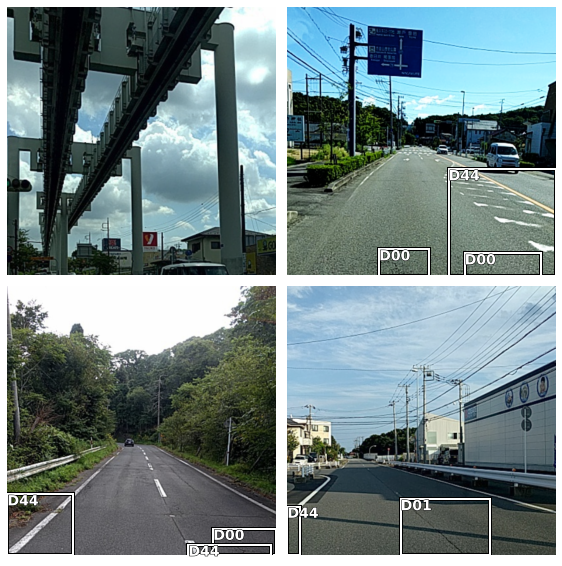

In [13]:
data.show_batch(rows=2)

### Load model architecture

``arcgis.learn`` provides the ``SingleShotDetector`` (SSD) model for object detection tasks, which is based on a pretrained convnet, like ResNet that acts as the 'backbone'. More details about SSD can be found [here](https://developers.arcgis.com/python/guide/how-ssd-works/).

We will use the ``SingleShotDetector`` to train the damage detection model with backbones as ``resnet101``. 

In [14]:
ssd = SingleShotDetector(data, backbone='resnet101', focal_loss=True)

Let us have a look at the results of the untrained model.

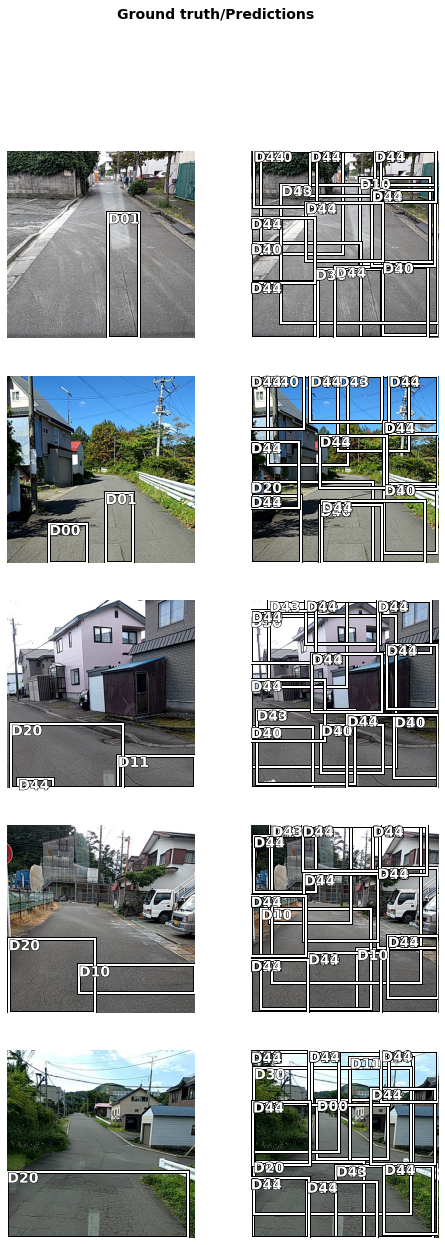

In [15]:
ssd.show_results(thresh=0.2)

We see that the model is randomly detecting the road cracks. In order to give good results our model needs to be trained. 

Learning rate is one of the most important hyperparameters in model training. We will use the ``lr_find()`` method to find an optimum learning rate at which we can train a robust model fast enough.

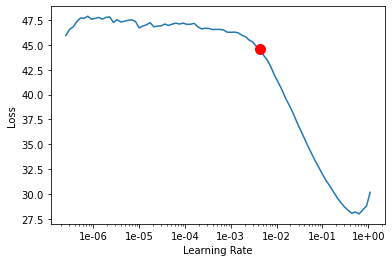

In [16]:
lr = ssd.lr_find()

### Train a model

Based on the suggested learning rate above, we will start training our model with 30 epochs for the sake of time.

In [17]:
ssd.fit(30, lr=lr)

The graph below plots training and validation losses. 

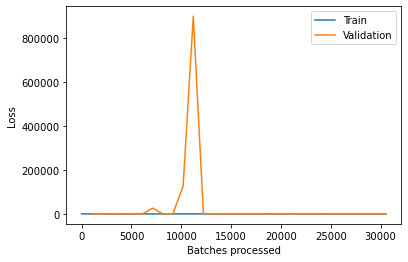

In [18]:
ssd.learn.recorder.plot_losses()

``average_precision_score`` method computes average precision on the validation set for each class.

In [19]:
ssd.average_precision_score() 

{'D00': 0.38006111415372135,
 'D01': 0.7059747423371756,
 'D10': 0.028989141118543893,
 'D11': 0.06203473775321733,
 'D20': 0.6762473323439568,
 'D30': 0.0,
 'D40': 0.025641025975346565,
 'D43': 0.6997045116941294,
 'D44': 0.6118662514319961}

We can see the model accuracy for each class of our validation data. The model is giving varying results. 
Let's us dig deeper to find the reason for model to preform better on one class in comparison to the other. 
This will also help us understand why D30 class has zero average precision score. 

In [20]:
# Calculate the number of images of each classs in training data
all_classes = []
for i, bb in enumerate(data.train_ds.y):
    all_classes += bb.data[1].tolist()
    
df = pd.value_counts(all_classes, sort=False)
df.index = [data.classes[i] for i in df.index] 
df   

D43     754
D00    2477
D44    3369
D01    3418
D10     677
D11     574
D20    2291
D30      22
D40     369
dtype: int64

We have only 22 images for training our model to detect class D30 which is very less. Thus, the model is giving poor score for this specific class. 

### Detect and visualize pavement cracks in validation set

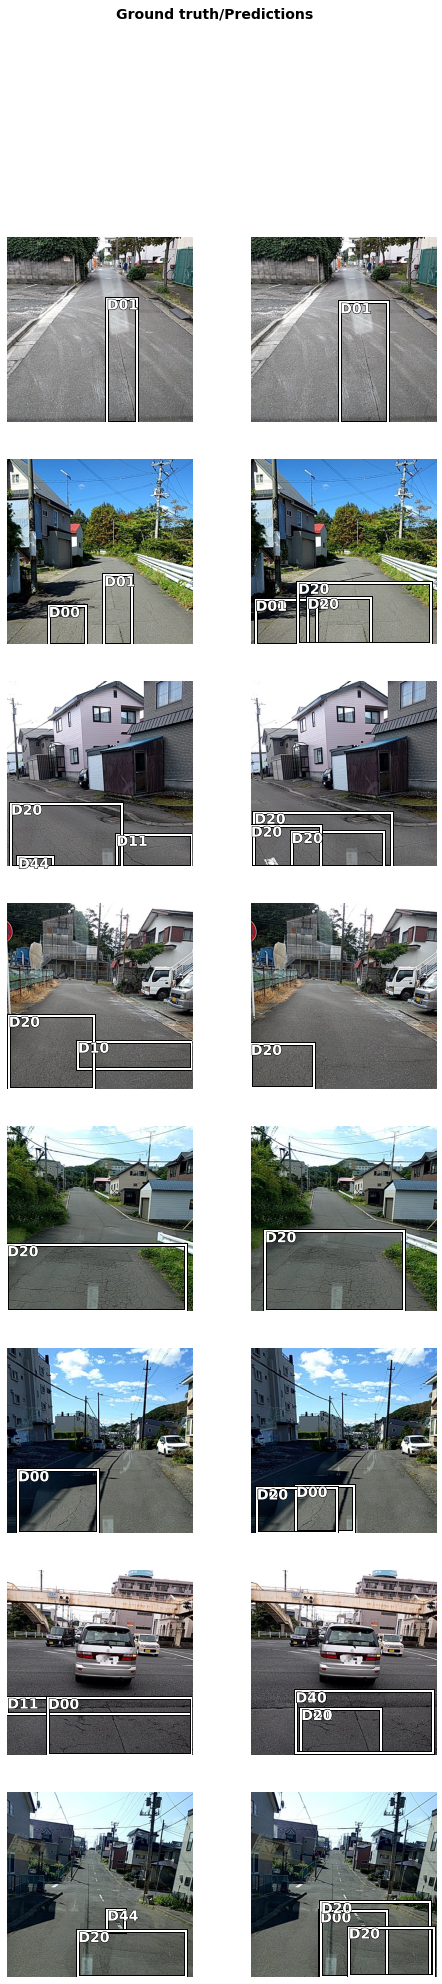

In [21]:
ssd.show_results(rows=10, thresh=0.2, nms_overlap=0.5)

### Save the model

As we can see, with 30 epochs, we are already seeing reasonable results. Further improvment can be acheived through more sophisticated hyperparameter tuning. Let's save the model for further training or inference later. The model should be saved into a models folder in your folder. By default, it will be saved into your data_path that you specified in the very beginning of this notebook.

In [75]:
dir_models = dir_prj/'models'

ssd.save(str(dir_models / 'pavement-cracks-model-resnet101'))

WindowsPath('D:/projects/road-surface-detection/models/pavement-cracks-model-resnet101')

## Model inference

We will do model inference using the two methods: `predict` and `predict_video`. Let's get the data required to predict on image and video.

In [23]:
inference_data = gis.content.get('92a75cec191e4dbbb53067761287b977')
inference_data

<Item title:"pavement_cracks_data_inference" type:Image Collection owner:api_data_owner>

In [24]:
inf_data_path = inference_data.download(file_name=inference_data.name)

In [25]:
import zipfile
with zipfile.ZipFile(inf_data_path, 'r') as zip_ref:
    zip_ref.extractall(Path(inf_data_path).parent)

In [26]:
img_file = os.path.join(os.path.splitext(inf_data_path)[0], 'test_img.jpg')
video_file = os.path.join(os.path.splitext(inf_data_path)[0], 'test_video.mp4')
metadata_file = os.path.join(os.path.splitext(inf_data_path)[0], 'metadata.csv')

### Detecting pavement cracks on an image

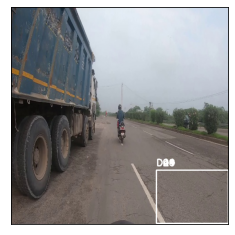

In [27]:
bbox_data = ssd.predict(img_file, threshold=0.1, visualize=True)

### Detecting pavement cracks from video feed

In [28]:
ssd.predict_video(input_video_path=video_file, 
                  metadata_file=metadata_file, 
                  visualize=True, 
                  resize=True)

<video width="100%" height="450" loop="loop" controls src="../../static/video/road_crack_prediction.mp4" />

## Publish results to your GIS

The `predict_video` function also updates the metadata file provided in csv format with the detections at each frame. We will now read this csv using pandas and publish it as a layer on our GIS.

In [63]:
import pandas as pd
df = pd.read_csv(metadata_file)
df

UNIX Time Stamp  Sensor Latitude  Sensor Longitude  \
0        1.564889e+15        28.412995         77.162906   
1        1.564889e+15        28.412995         77.162904   
2        1.564889e+15        28.412996         77.162902   
3        1.564889e+15        28.412997         77.162901   
4        1.564889e+15        28.412997         77.162899   
...               ...              ...               ...   
1794     1.564889e+15        28.414831         77.159583   
1795     1.564889e+15        28.414831         77.159581   
1796     1.564889e+15        28.414830         77.159578   
1797     1.564889e+15        28.414830         77.159576   
1798     1.564889e+15        28.414829         77.159574   

      Sensor True Altitude  Frame Center Latitude  Frame Center Longitude  \
0               294.736633              28.412995               77.162906   
1               294.729656              28.412995               77.162904   
2               294.722680              28.412996               77.162902   
3               294.715703              28.412997               77.162901   
4               294.708546              28.412997               77.162899   
...                    ...                    ...                     ...   
1794            278.085715              28.414831               77.159583   
1795            278.076278              28.414831               77.159581   
1796            278.066841              28.414830               77.159578   
1797            278.057561              28.414830               77.159576   
1798            278.047585              28.414829               77.159574   

      Frame Center Elevation vmtilocaldataset  
0                 294.736633               \n  
1                 294.729656               \n  
2                 294.722680               \n  
3                 294.715703               \n  
4                 294.708546               \n  
...                      ...              ...  
1794              278.085715              NaN  
1795              278.076278              NaN  
1796              278.066841              NaN  
1797              278.057561              NaN  
1798              278.047585              NaN  

[1799 rows x 8 columns]

The code below removes rows from the DataFrame with no detections and also creates a new columns which contains count of the number of detections at each frame.

In [69]:
# Handle NAN and '\n' values
df.vmtilocaldataset = df.vmtilocaldataset.str.strip()
df.loc[df.vmtilocaldataset == '', 'vmtilocaldataset'] = ''
df['count'] = ( df['vmtilocaldataset'].str.split(';').str.len().fillna(1) - 1 )

df.head()

UNIX Time Stamp  Sensor Latitude  Sensor Longitude  Sensor True Altitude  \
0     1.564889e+15        28.412995         77.162906            294.736633   
1     1.564889e+15        28.412995         77.162904            294.729656   
2     1.564889e+15        28.412996         77.162902            294.722680   
3     1.564889e+15        28.412997         77.162901            294.715703   
4     1.564889e+15        28.412997         77.162899            294.708546   

   Frame Center Latitude  Frame Center Longitude  Frame Center Elevation  \
0              28.412995               77.162906              294.736633   
1              28.412995               77.162904              294.729656   
2              28.412996               77.162902              294.722680   
3              28.412997               77.162901              294.715703   
4              28.412997               77.162899              294.708546   

  vmtilocaldataset  count  
0                     0.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                     0.0

In [70]:
fps = 60

df['group'] = pd.Series( (df.index.values / fps) - .49 ).round().abs()

df.head()

UNIX Time Stamp  Sensor Latitude  Sensor Longitude  Sensor True Altitude  \
0     1.564889e+15        28.412995         77.162906            294.736633   
1     1.564889e+15        28.412995         77.162904            294.729656   
2     1.564889e+15        28.412996         77.162902            294.722680   
3     1.564889e+15        28.412997         77.162901            294.715703   
4     1.564889e+15        28.412997         77.162899            294.708546   

   Frame Center Latitude  Frame Center Longitude  Frame Center Elevation  \
0              28.412995               77.162906              294.736633   
1              28.412995               77.162904              294.729656   
2              28.412996               77.162902              294.722680   
3              28.412997               77.162901              294.715703   
4              28.412997               77.162899              294.708546   

  vmtilocaldataset  count  group  
0                     0.0    0.0  
1                     0.0    0.0  
2                     0.0    0.0  
3                     0.0    0.0  
4                     0.0    0.0

In [43]:
# Get index of row with max detections in each group
max_detection_idxes = df[['group', 'count']].groupby('group').idxmax()['count'].values

max_detection_idxes

array([   0,   60,  130,  180,  246,  302,  405,  424,  482,  540,  600,  678,  720,  820,  885,  900,  960, 1020,
       1080, 1140, 1200, 1260, 1320, 1380, 1440, 1500, 1560, 1620, 1680, 1740], dtype=int64)

In [35]:
# Extract rows for the indexes
df_flt = df.iloc[max_detection_idxes]

In [40]:
sdf = pd.DataFrame.spatial.from_xy(df_flt.loc[df['count']!=0].copy(), 'Sensor Longitude', 'Sensor Latitude')

sdf.head()

UNIX Time Stamp  Sensor Latitude  Sensor Longitude  Sensor True Altitude  \
130     1.564889e+15        28.413087         77.162667            293.931796   
180     1.564889e+15        28.413130         77.162573            293.577866   
246     1.564889e+15        28.413196         77.162448            293.090740   
302     1.564889e+15        28.413259         77.162343            292.778962   
405     1.564889e+15        28.413394         77.162152            292.410324   

     Frame Center Latitude  Frame Center Longitude  Frame Center Elevation  \
130              28.413087               77.162667              293.931796   
180              28.413130               77.162573              293.577866   
246              28.413196               77.162448              293.090740   
302              28.413259               77.162343              292.778962   
405              28.413394               77.162152              292.410324   

                                  vmtilocaldataset  count  group  \
130    1 54.0276825428009 1504652 2067840 1787205;    1.0    2.0   
180   1 56.72199726104736 1527613 2069760 1798686;    1.0    3.0   
246   1 50.19107460975647 1646772 2065906 1858259;    1.0    4.0   
302  1 50.527530908584595 1470720 2070324 1772442;    1.0    5.0   
405   1 57.28023052215576 1169310 2072378 1620843;    1.0    6.0   

                                                 SHAPE  
130  {"spatialReference": {"wkid": 4326}, "x": 77.1...  
180  {"spatialReference": {"wkid": 4326}, "x": 77.1...  
246  {"spatialReference": {"wkid": 4326}, "x": 77.1...  
302  {"spatialReference": {"wkid": 4326}, "x": 77.1...  
405  {"spatialReference": {"wkid": 4326}, "x": 77.1...

In [34]:
df_flt.drop(df_flt.loc[df['count']==0].index, inplace=True)

D:\Anaconda3\envs\arcgis\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [71]:
sdf = GeoAccessor.from_xy(df_flt, 'Sensor Longitude', 'Sensor Latitude')

D:\Anaconda3\envs\arcgis\lib\site-packages\arcgis\features\geo\_io\fileops.py:153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SHAPE'] = GeoArray(ags_geom)


In [72]:
cracks_lyr = gis.content.import_data(sdf, title='crack points')

D:\Anaconda3\envs\arcgis\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


TypeError: 'NoneType' object is not subscriptable

In [26]:
cracks_lyr

<Item title:"crack points" type:Feature Layer Collection owner:demos_deldev>

In [27]:
m1 = gis.map('Haryana, India')
m1

In [28]:
m1.basemap = "satellite"

In [29]:
m1.add_layer(cracks_lyr, {"renderer":"ClassedSizeRenderer",
                                      "field_name": "count_"})

## Conclusion

In this notebook, we learnt how civic authorities can automate road surface investigation using deep learning in order to make policy decisions. This will not only help in repairing exisiting cracks but may prevent pavement failures in future.

## References

[1] Hiroya Maeda, et al. "Road Damage Detection Using Deep Neural Networks with Images Captured Through a Smartphone", 1801.09454, arXiv, 2018
